### Signal:
Any physical quantity that carries some information and varies with respect to time (then it would be time-series), or any other independent variable


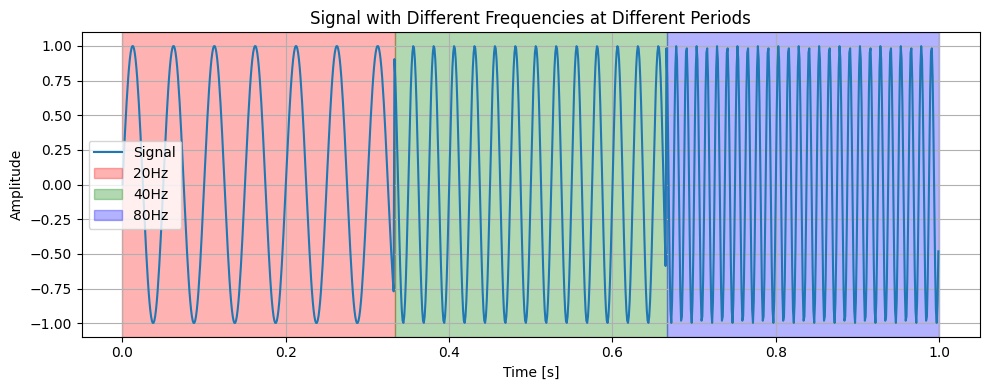

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration in seconds
t = np.linspace(0, T, int(T * fs), endpoint=False)  # Time vector

# Create a signal with different frequencies at different periods
f1 = 20   # Frequency of the first segment (Hz)
f2 = 40  # Frequency of the second segment (Hz)
f3 = 80  # Frequency of the third segment (Hz)

# Define different segments
segment1 = np.sin(2 * np.pi * f1 * t[:int(len(t) / 3)])
segment2 = np.sin(2 * np.pi * f2 * t[int(len(t) / 3):int(2 * len(t) / 3)])
segment3 = np.sin(2 * np.pi * f3 * t[int(2 * len(t) / 3):])

# Combine segments into one signal
signal = np.concatenate((segment1, segment2, segment3))

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Signal')
plt.title('Signal with Different Frequencies at Different Periods')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Highlight different frequency segments
plt.axvspan(0, T/3, color='red', alpha=0.3, label='20Hz')
plt.axvspan(T/3, 2*T/3, color='green', alpha=0.3, label='40Hz')
plt.axvspan(2*T/3, T, color='blue', alpha=0.3, label='80Hz')

plt.legend()
plt.tight_layout()
plt.show()


### Fourier Transform
- The Fourier Transform is a mathematical operation that **transforms a signal from the time domain to the frequency domain**.
- It **breaks down a complex signal into (up to infinite sum of) sinusoidal components (Fourier Series)**, revealing the different frequencies present in the signal and their corresponding amplitudes.
- This is **useful for analyzing periodic behaviors and identifying dominant frequencies within a signal**, which are often difficult to observe directly in the time domain.



The Fourier series representation of a periodic function $ f(t) $ with period $ T $ is given by:

$$ f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left( a_n \cos(n \omega t) + b_n \sin(n \omega t) \right) $$

where:

- $ \omega = \frac{2\pi}{T} $ is the fundamental or angular frequency
- $ n = 1, 2, 3, \ldots $ are the harmonic frequencies (integer multiples of the fundamental frequency)
- $ a_0 $, $ a_n $, and $ b_n $ are the Fourier coefficients

The Fourier coefficients are calculated using the following integrals:

$$ a_0 = \frac{1}{T} \int_0^T f(t) \, dt $$

$$ a_n = \frac{2}{T} \int_0^T f(t) \cos(n \omega t) \, dt $$

$$ b_n = \frac{2}{T} \int_0^T f(t) \sin(n \omega t) \, dt $$

In [3]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def f(t):
    # Define your function here; example: a square wave
    return np.sign(np.sin(t))

# Parameters
T = 2 * np.pi  # period

# Calculate the coefficients
def a0(T):
    result, _ = quad(f, 0, T)
    return (1 / T) * result

def an(n, T):
    result, _ = quad(lambda t: f(t) * np.cos(n * 2 * np.pi * t / T), 0, T)
    return (2 / T) * result

def bn(n, T):
    result, _ = quad(lambda t: f(t) * np.sin(n * 2 * np.pi * t / T), 0, T)
    return (2 / T) * result

# Initialize parameters for the animation
t = np.linspace(0, T, 400, endpoint=False)
f_t = np.vectorize(f)(t)
N_max = 50  # Maximum number of terms in the Fourier series

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot([], [], label='Fourier Series Approximation', linestyle='--', color='red')
ax.plot(t, f_t, label='Original function', linewidth=2, color='black')
ax.set_xlim(0, T)
ax.set_ylim(-1.5, 1.5)
ax.set_title('Fourier Series Approximation')
ax.set_xlabel('t')
ax.set_ylabel('f(t)')
ax.grid(True)
ax.legend()

def init():
    line.set_data([], [])
    return line,

def animate(n):
    fourier_series = np.full_like(t, a0(T) / 2)  # Start with a0/2
    for k in range(1, n + 1):
        fourier_series += an(k, T) * np.cos(k * 2 * np.pi * t / T) + bn(k, T) * np.sin(k * 2 * np.pi * t / T)
    line.set_data(t, fourier_series)
    ax.set_title(f'Fourier Series Approximation with {n} terms')
    return line,

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=range(1, N_max + 1), interval=200, blit=True)

# Clear the current figure before displaying the animation
plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())


# Sampling and Sample Rate!
#### What is the proper sample rate to be able to capture the frequencies existing in a time-series?

The Nyquist–Shannon sampling theorem is a fundamental principle in the field of signal processing and information theory. It states that **for a continuous-time signal to be properly reconstructed from its sampled values, the sampling rate must be bigger than at least twice the highest frequency component present in the signal**.

Mathematically, the theorem can be expressed as:

$$f_s > 2f_{max}$$

Where:

- $f_s$ is the sampling rate (samples per second)
- $f_{max}$ is the maximum frequency present in the signal
- $f_s = 2f_{max}$ is known as the Nyquist rate.

**If $f_s > 2f_{max}$ is not met, a phenomenon known as aliasing occurs.** <br>
Aliasing is the effect where **high-frequency components in the original signal appear as lower frequencies in the sampled signal**, leading to distortion and incorrect reconstruction of the original signal.

* **Question:** Why are 44100Hz and 48000Hz sampling rates quite popular for audio signals?


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create a signal with two different frequencies
fs = 10000  # Original sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
f1 = 5  # Frequency of the first sine wave
f2 = 50  # Frequency of the second sine wave
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Define sampling rates around the Nyquist rate
nyquist_rate = 2 * f2  # 2 * highest frequency
sampling_rates = [nyquist_rate / 4, nyquist_rate / 2, nyquist_rate, nyquist_rate , 1.5 * nyquist_rate, 2 * nyquist_rate, 3 * nyquist_rate]

fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], lw=2, label='Sampled Signal')
points, = ax.plot([], [], 'ro', label='Intersection Points')
ax.plot(t, signal, 'k--', lw=1, label='Original Signal')
ax.set_xlim(0, 1)
ax.set_ylim(-2, 2)
ax.set_title('Effect of Different Sampling Rates on Signal')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

# Position legend outside the plot area
ax.legend(loc='upper left', bbox_to_anchor=(0.9, 1.15), borderaxespad=0.)

def init():
    line.set_data([], [])
    points.set_data([], [])
    return line, points

def animate(i):
    rate = sampling_rates[i]
    t_sampled = t[::int(fs/rate)]

    signal_sampled = np.sin(2 * np.pi * f1 * t_sampled) + np.sin(2 * np.pi * f2 * t_sampled)
    line.set_data(t_sampled, signal_sampled)

    # Find intersection points
    if rate <= nyquist_rate:
        t_intersections = np.intersect1d(t, t_sampled)
        signal_intersections = np.sin(2 * np.pi * f1 * t_intersections) + np.sin(2 * np.pi * f2 * t_intersections)
        points.set_data(t_intersections, signal_intersections)
    else:
        points.set_data([], [])

    ax.set_title(f'Sampling Rate: {rate} Hz')

    return line, points

ani = FuncAnimation(fig, animate, init_func=init, frames=len(sampling_rates), interval=1000, blit=True)

# Clear the current figure before displaying the animation
plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())


### Spectral Analysis in Python


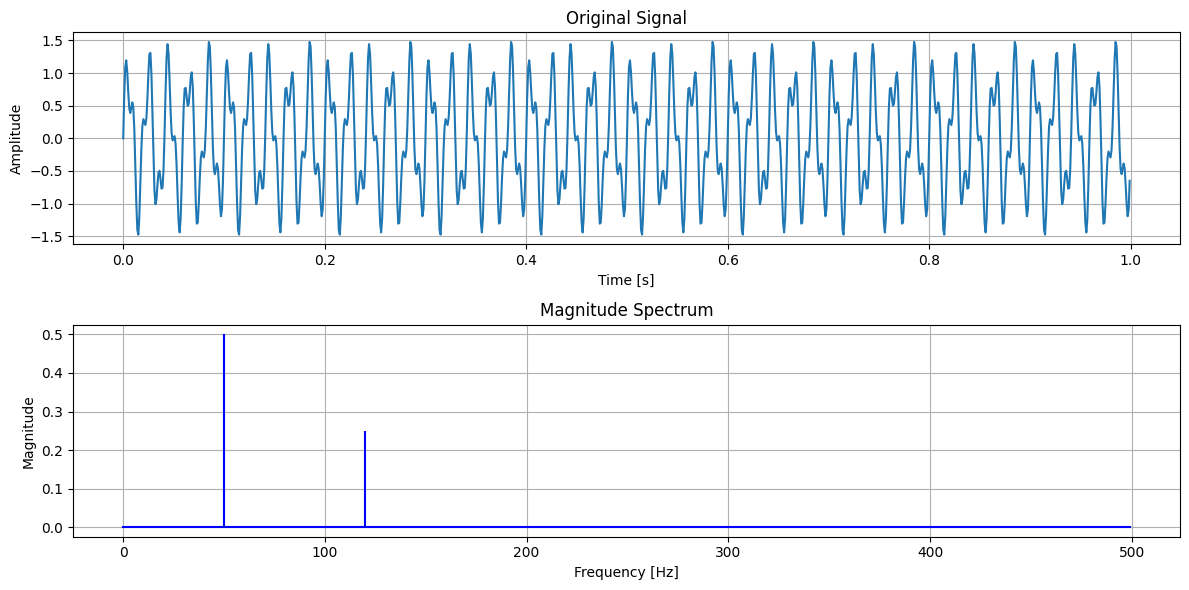

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration in seconds
t = np.linspace(0, T, int(T * fs), endpoint=False)  # Time vector

# Create a signal with two different frequencies
f1 = 50   # Frequency of the first sine wave (Hz)
f2 = 120  # Frequency of the second sine wave (Hz)
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Perform FFT
N = len(signal)
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(N, 1/fs)

# Only take the positive frequencies and corresponding FFT results
positive_freqs = fft_freq[:N//2]
positive_fft_result = fft_result[:N//2]

# Magnitude of the FFT (normalized)
magnitude = np.abs(positive_fft_result) / N

# Plot the original signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the FFT (magnitude spectrum)
plt.subplot(2, 1, 2)
plt.stem(positive_freqs, magnitude, 'b', markerfmt=" ", basefmt="-b")
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()


### Spectral analysis in real-worlds
- Non-periodic signals
- Truncated signals

The "edge effect" in spectral analysis occurs when a signal is truncated (e.g., when using a sliding window) or non-periodic. Here’s why it happens:

1. **Abrupt Changes at Window Edges**: When you apply a window to the time-series, the segments taken from the signal end abruptly at the window’s boundaries. This truncation introduces discontinuities at the edges, which create artifacts in the frequency domain. Specifically, Fourier analysis assumes that the signal is continuous or repeats beyond the window’s boundaries, or the integration boundaries contain full periods of the signal. So sudden changes result in spectral leakage.

2. **Spectral Leakage**: The abrupt start and end of the truncated signal segment act as high-frequency components, which appear as extra, unwanted frequencies in the analysis. These frequencies may interfere with the actual frequencies present in the signal, causing "leakage" across the spectrum and reducing the precision of frequency estimates.

3. **Loss of Periodicity**: Fourier analysis, especially using the Discrete Fourier Transform (DFT), assumes periodic signals within each window. If the original signal is not periodic, truncating it for each window creates an artificial period at the window boundaries. This introduces discontinuities in each period, resulting in extra frequency components that are not part of the true signal.

4. **Reduced Frequency Resolution**: Shorter windows (due to truncation) also reduce the frequency resolution, limiting the ability to accurately distinguish between closely spaced frequencies. This effect is amplified if the signal changes in each window, as it complicates distinguishing true signal frequencies from those introduced by window truncation.

### Mitigating Edge Effects (for further reading)
Using windowing functions (like Hamming or Hanning windows) can help reduce edge effects by gradually tapering the signal at the window edges, smoothing out abrupt changes. This reduces spectral leakage, although it doesn't eliminate it entirely.

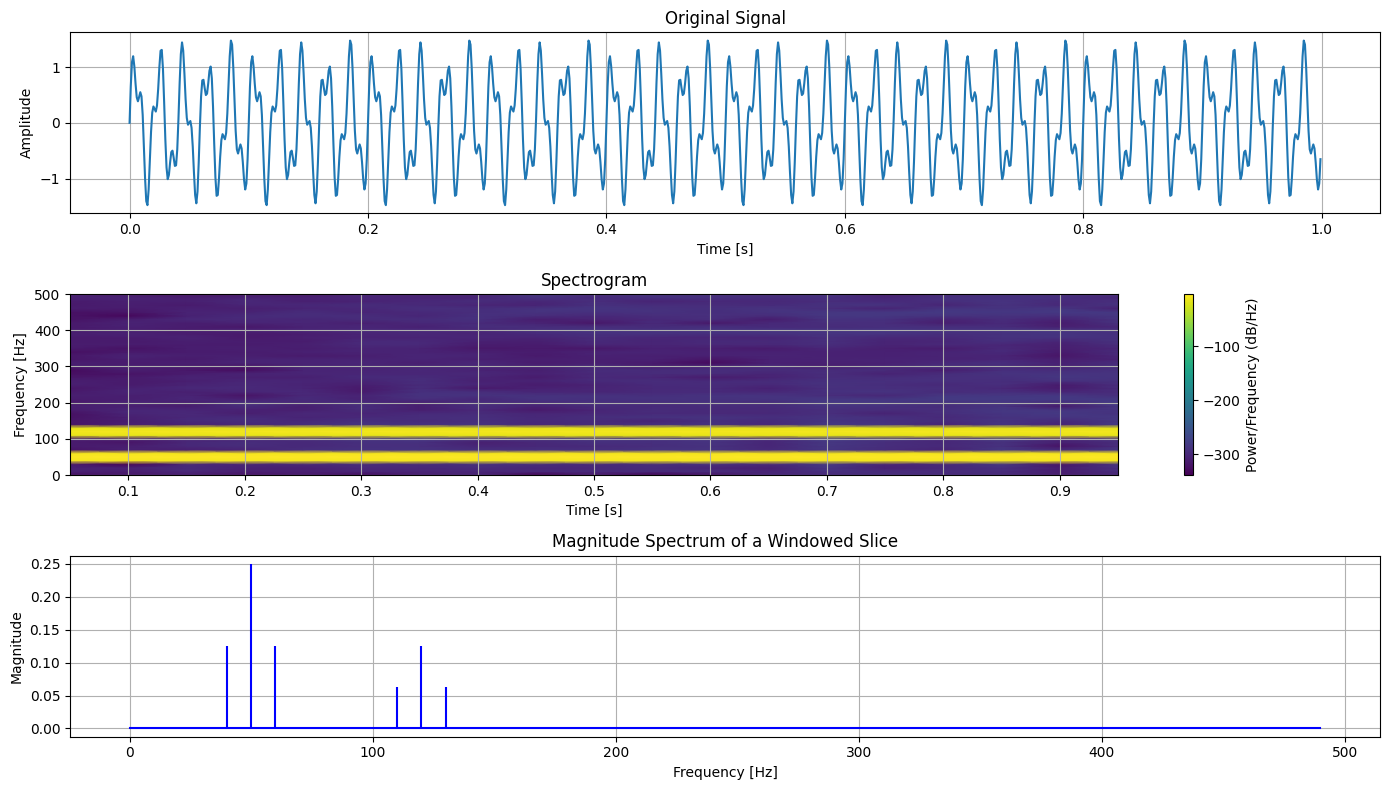

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows, spectrogram

# Parameters
fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration in seconds
t = np.linspace(0, T, int(T * fs), endpoint=False)  # Time vector

# Create a signal with two different frequencies
f1 = 50   # Frequency of the first sine wave (Hz)
f2 = 120  # Frequency of the second sine wave (Hz)
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Parameters for windowing
window_length = 100  # Length of the window
window_type = 'hann'  # Type of the window (e.g., 'hann', 'hamming', etc.)
window = windows.get_window(window_type, window_length)
n_overlap = window_length // 2  # Number of overlapping samples

# Perform STFT
frequencies, times, Sxx = spectrogram(signal, fs, window=window, nperseg=window_length, noverlap=n_overlap, scaling='spectrum')

# Plot the original signal
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the spectrogram
plt.subplot(3, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.grid(True)

# Illustration of windowing effect
# Select a specific time slice for illustration
time_slice = int(0.5 * fs) + 110  # Center of the signal (at 0.5 seconds)
signal_slice = signal[time_slice:time_slice + window_length] * window

# Perform FFT on the windowed signal slice
N_slice = len(signal_slice)
fft_result_slice = np.fft.fft(signal_slice)
fft_freq_slice = np.fft.fftfreq(N_slice, 1/fs)

# Only take the positive frequencies and corresponding FFT results
positive_freqs_slice = fft_freq_slice[:N_slice//2]
positive_fft_result_slice = fft_result_slice[:N_slice//2]

# Magnitude of the FFT (normalized)
magnitude_slice = np.abs(positive_fft_result_slice) / N_slice

# Plot the FFT (magnitude spectrum) of the windowed signal slice
plt.subplot(3, 1, 3)
plt.stem(positive_freqs_slice, magnitude_slice, 'b', markerfmt=" ", basefmt="-b")
plt.title('Magnitude Spectrum of a Windowed Slice')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()


Same story when sliding window over time-series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import windows
from IPython.display import HTML

# Parameters
fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration in seconds
t = np.linspace(0, T, int(T * fs), endpoint=False)  # Time vector

# Create a signal with two different frequencies
f1 = 50   # Frequency of the first sine wave (Hz)
f2 = 120  # Frequency of the second sine wave (Hz)
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Parameters for windowing
window_length = 256  # Length of the window
window = np.ones(window_length)  # Simple rectangular window

# Setup figure and axes
fig, (ax_signal, ax_spectrum) = plt.subplots(2, 1, figsize=(14, 10))

# Plot the original signal
ax_signal.plot(t, signal)
ax_signal.set_title('Original Signal')
ax_signal.set_xlabel('Time [s]')
ax_signal.set_ylabel('Amplitude')
ax_signal.grid(True)

line_window, = ax_signal.plot([], [], 'r', linewidth=2)

# Setup the spectrum plot
ax_spectrum.set_title('Magnitude Spectrum of a Windowed Slice')
ax_spectrum.set_xlabel('Frequency [Hz]')
ax_spectrum.set_ylabel('Magnitude')
ax_spectrum.grid(True)
line_spectrum, = ax_spectrum.plot([], [], 'b')

# Define the update function for animation
def update(frame):
    # Compute the windowed signal slice
    start = frame
    end = start + window_length
    signal_slice = signal[start:end] * window

    # Perform FFT on the windowed signal slice
    N_slice = len(signal_slice)
    fft_result_slice = np.fft.fft(signal_slice)
    fft_freq_slice = np.fft.fftfreq(N_slice, 1/fs)

    # Only take the positive frequencies and corresponding FFT results
    positive_freqs_slice = fft_freq_slice[:N_slice//2]
    positive_fft_result_slice = fft_result_slice[:N_slice//2]

    # Magnitude of the FFT (normalized)
    magnitude_slice = np.abs(positive_fft_result_slice) / N_slice

    # Update the windowed signal slice plot
    line_window.set_data(t[start:end], signal[start:end] * window)

    # Update the spectrum plot
    line_spectrum.set_data(positive_freqs_slice, magnitude_slice)

    # Redraw the spectrum plot limits
    ax_spectrum.set_xlim(0, fs / 2)
    ax_spectrum.set_ylim(0, max(magnitude_slice) * 1.1)

    return line_window, line_spectrum

# Create the animation
frames = range(0, len(signal) - window_length, window_length // 2)
ani = FuncAnimation(fig, update, frames=frames, blit=True)

# Clear the current figure before displaying the animation
plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())


### Checkpoint

- What is the frequency of human motion?
- How should we choose the sampling rate for our motion sensors?

# Filtering

What frequencies are we interested in?

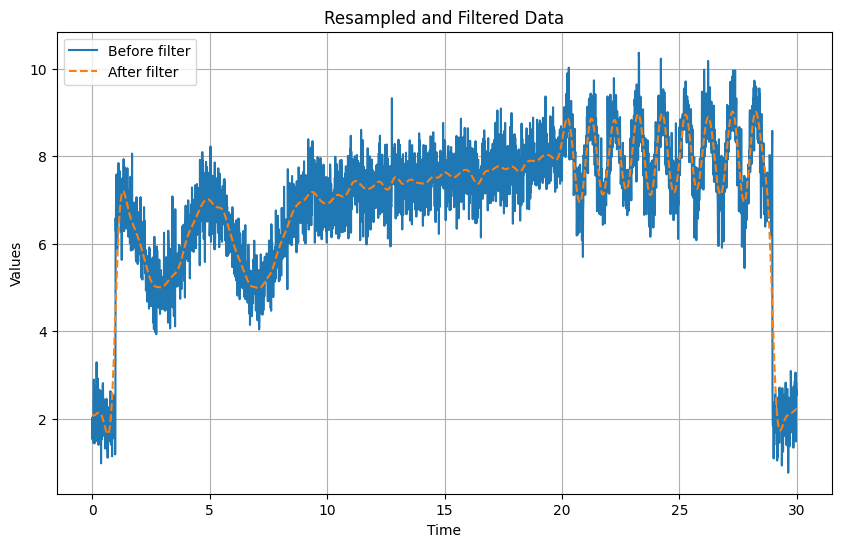

In [ ]:
'''Trying different low pass filters'''

import numpy as np
from scipy.signal import butter,filtfilt
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Generating example data (time and values)
time_original_1 = np.arange(1, 9, 1/20)  # Original time array (20 Hz)
values_original_1 = np.sin(0.5 * np.pi * time_original_1) + 4  # Example values

time_original_2 = np.arange(20, 29, 1/20)  # Original time array (20 Hz)
values_original_2 = np.sin(2 * np.pi * time_original_2) + 6 # Example values

# Combine the two sets of example data together
combined_time = np.concatenate((time_original_1, time_original_2))
combined_values = np.concatenate((values_original_1, values_original_2))

# Define new time array with larger time interval (100 Hz)
time_resampled = np.arange(0, 30, 1/100)  # New time array (100 Hz)

# Use interp1d to interpolate and extrapolate the data
interpolator = interp1d(combined_time, combined_values, kind='slinear', fill_value=(0, 0), bounds_error=False)

# Interpolate/extrapolate the values to the new time array
values_resampled = interpolator(time_resampled) + 2 + np.random.normal(0, 0.5, len(time_resampled))


def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

values_filtered = butter_lowpass_filter(values_resampled, 1.5, 100, 3)


# Plot the original and resampled data
plt.figure(figsize=(10, 6))
plt.plot(time_resampled, values_resampled, label='Before filter', marker='', linestyle='-')
plt.plot(time_resampled, values_filtered, label='After filter', marker='', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Resampled and Filtered Data')
plt.legend()
plt.grid(True)
plt.show()


# Feature engineering for time-series



Feature engineering for time-series data is essential for building effective models, especially when the raw data doesn’t directly reveal patterns suitable for predictions or classification.

Here’s a breakdown of key domains for feature engineering in time-series:

### 1. **Time Domain**
   - **Description**: Time-domain features are extracted directly from the values of the time-series signal. These features help capture general characteristics, trends, or periodic behaviors in the time domain.
   - **Examples**:
     - **Mean**: Average value of the series over a specific window or the entire series.
     - **Standard Deviation**: Variability of the signal within a window.
     - **Peak-to-Peak**: Difference between the maximum and minimum values in a window, indicating the range of fluctuations.
     - **Autocorrelation**: Measure of similarity between observations at different time lags, indicating repeated patterns.
     - **Example Use Case**: In monitoring stock prices, the moving average can reveal trends over time, while peak-to-peak values can reflect volatility.

### 2. **Statistical Domain**
   - **Description**: Statistical features provide insights into the distribution, central tendency, and variability of the data, offering a high-level summary of the time-series.
   - **Examples**:
     - **Skewness**: Indicates whether the data is asymmetrically distributed, useful in assessing if there are more extreme values on one side.
     - **Kurtosis**: Measures the "tailedness" of the distribution, identifying if extreme deviations are frequent.
     - **Percentiles**: Different quantiles (like median, upper, and lower quartiles) give insights into the data's spread.
     - **Entropy**: Quantifies the randomness or disorder within the signal.
     - **Example Use Case**: In speech signal processing, skewness and kurtosis help identify whether certain sounds or energy levels occur more often, which aids in speaker recognition.

### 3. **Amplitude Domain**
   - **Description**: Amplitude-domain features deal with the signal’s magnitude or energy over time, capturing peaks and intensity levels within the signal.
   - **Examples**:
     - **Root Mean Square (RMS)**: Provides the energy or power in the signal, often used to detect the strength of vibrations or audio signals.
     - **Max and Min Amplitude**: Tracks the extreme amplitude values, helping detect signal spikes or drops.
     - **Signal Envelope**: A smoothed outline capturing the signal’s general amplitude trend.
     - **Example Use Case**: In EEG signal analysis, the RMS and peak amplitudes can indicate neural activities' strength and intensity over specific periods.

### 4. **Spectral Domain**
   - **Description**: Spectral (or frequency) domain features are obtained by transforming the signal from the time domain to the frequency domain, often using the Fourier Transform. These features reveal the frequency content and are helpful for identifying periodicities and oscillations in the signal.
   - **Examples**:
     - **Dominant Frequency**: The primary frequency component in the signal, which can reveal recurring patterns or cycles.
     - **Spectral Entropy**: Quantifies the distribution of energy across different frequency bands, giving insights into the signal’s complexity.
     - **Spectral Centroid**: The center of mass of the spectral power, indicating where the signal’s power is concentrated.
     - **Spectral Band Power**: The power in specific frequency bands (e.g., delta, theta, alpha bands in EEG).
     - **Example Use Case**: In wearable heart monitoring, dominant frequencies can indicate heart rate, while spectral band power in EEG data can signal different brain states.

### 5. **Time-Frequency Domain (for your reading)**
   - **Description**: The time-frequency domain combines information from both time and frequency domains, capturing how frequency content changes over time. This is useful when the signal’s frequency characteristics vary, as in non-stationary signals.
   - **Examples**:
     - **Wavelet Transform Coefficients**: Decomposes the signal at multiple scales, capturing both frequency and time variations, commonly used for transient or abrupt changes.
     - **Short-Time Fourier Transform (STFT)**: Divides the signal into short segments and performs Fourier analysis on each, providing a spectrum for each time window.
     - **Hilbert-Huang Transform (HHT)**: An adaptive method capturing time-frequency features, suitable for non-linear and non-stationary signals.
     - **Mel-Frequency Cepstral Coefficients (MFCCs)**: Common in audio processing, MFCCs represent the signal’s power spectrum in terms of Mel-frequency bands.
     - **Example Use Case**: For human activity recognition, wavelet transforms can capture quick bursts of movement, while MFCCs in speech recognition help differentiate between phonemes and tones.


Useful libraries:<br>
- https://tsfel.readthedocs.io/en/latest/index.html
- https://tsfresh.readthedocs.io/en/latest/

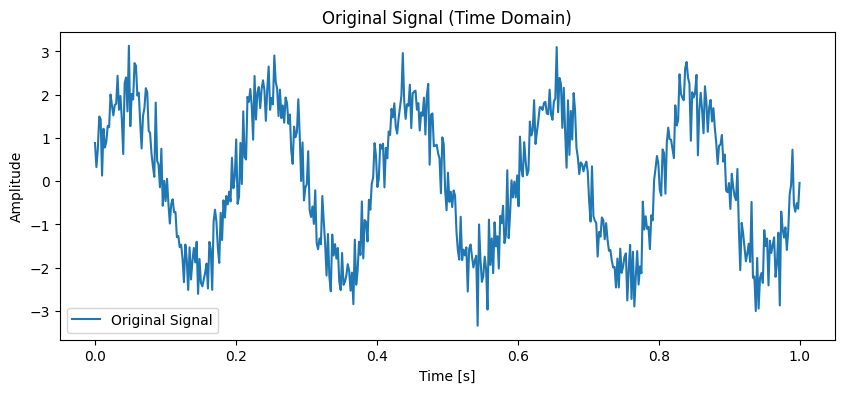

Extracted Features:
              Feature          Value
0                Mean      -0.012677
1  Standard Deviation       1.524065
2        Peak-to-Peak       6.470605
3            Skewness      -0.038490
4            Kurtosis      -1.193419
5       Max Amplitude       3.131301
6       Min Amplitude      -3.339304
7       RMS Amplitude       1.524118
8  Dominant Frequency       4.990000
9      Dominant Power  260240.584007


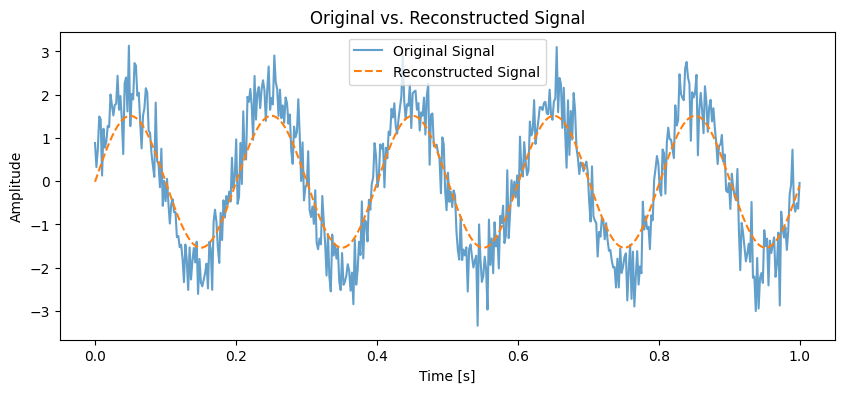

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.stats import skew, kurtosis

# Generate an artificial time-series signal
np.random.seed(0)
time = np.linspace(0, 1, 500)  # 500 time points over 1 second
frequency = 5  # 5 Hz signal frequency
amplitude = 2
noise = np.random.normal(0, 0.5, time.shape)  # Gaussian noise
signal = amplitude * np.sin(2 * np.pi * frequency * time) + noise

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(time, signal, label='Original Signal')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Original Signal (Time Domain)")
plt.legend()
plt.show()

# Feature Generation
# 1. Time Domain Features
peak_to_peak = np.ptp(signal)  # Difference between max and min

# 2. Statistical Features
mean_val = np.mean(signal)
std_dev = np.std(signal)
signal_skewness = skew(signal)
signal_kurtosis = kurtosis(signal)

# 3. Amplitude Domain Features
max_amplitude = np.max(signal)
min_amplitude = np.min(signal)
rms_amplitude = np.sqrt(np.mean(signal**2))  # Root mean square amplitude

# 4. Spectral Domain Features
# Perform FFT to get frequency components
signal_fft = fft(signal)
signal_freq = fftfreq(len(signal), time[1] - time[0])
power_spectrum = np.abs(signal_fft)**2

# Dominant frequency (excluding zero-frequency component)
dominant_freq = signal_freq[np.argmax(power_spectrum[1:]) + 1]
dominant_power = np.max(power_spectrum[1:])

# Display extracted features
features = {
    "Mean": mean_val,
    "Standard Deviation": std_dev,
    "Peak-to-Peak": peak_to_peak,
    "Skewness": signal_skewness,
    "Kurtosis": signal_kurtosis,
    "Max Amplitude": max_amplitude,
    "Min Amplitude": min_amplitude,
    "RMS Amplitude": rms_amplitude,
    "Dominant Frequency": dominant_freq,
    "Dominant Power": dominant_power,
}

# Converting to DataFrame
features_df = pd.DataFrame(list(features.items()), columns=["Feature", "Value"])
print("Extracted Features:")
print(features_df)

# Reconstructing the signal using key features
reconstructed_signal = rms_amplitude * np.sin(2 * np.pi * dominant_freq * time) + mean_val

# Plot the reconstructed signal
plt.figure(figsize=(10, 4))
plt.plot(time, signal, label="Original Signal", alpha=0.7)
plt.plot(time, reconstructed_signal, label="Reconstructed Signal", linestyle="--")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Original vs. Reconstructed Signal")
plt.legend()
plt.show()


# Understanding the Curse of Dimensionality

* **What is the Curse of Dimensionality?**
    * The curse of dimensionality refers to the various challenges that arise when working with high-dimensional data. As the number of features (dimensions) in a dataset increases, **each data point becomes increasingly sparse in the feature space**, making it harder to identify meaningful patterns.
    * **Example**: In image recognition, a single image can contain thousands of pixels as features. While some pixels contribute to identifying objects, many do not, adding complexity and potentially introducing noise rather than useful information.

* **Impact on Models**:
    * **Distance-Based Models (e.g., k-NN, k-Means)**:
        * Distance-based models are highly affected by high dimensionality because as dimensions increase, the distances between points become less distinguishable. In k-NN, for example, as the number of irrelevant features increases, it becomes harder to find truly "nearest" neighbors, as all points end up roughly equidistant in high-dimensional space. This results in poor model accuracy, particularly on sparse datasets.
    * **Linear and Logistic Regression**:
        * High-dimensional data often **leads to overfitting** in models like linear or logistic regression, where each additional feature introduces a new parameter to learn. If irrelevant or noisy features are included, the model may "learn" from noise, resulting in poor generalization on new data.
    * **Decision Trees and Ensemble Models (e.g., Random Forest, XGBoost)**:
        * Decision trees and ensemble models tend to perform well on high-dimensional data, but their performance decreases when many irrelevant features are present. Each split in a decision tree depends on feature values; if features are mostly irrelevant, splits become noisy and add unnecessary complexity, leading to overfitting.
    * **Neural Networks**:
        * Neural networks, especially deep networks, can theoretically handle high-dimensional data by learning hierarchical representations. However, if the data includes a large number of irrelevant features, **training becomes slower**, and the network may converge to **suboptimal solutions** or require more epochs and **larger training datasets** to distinguish signal from noise effectively.

* **Computational Cost and Training Time**:
    * High-dimensional data significantly **increases computational costs** and **training time** because **each added feature increases the complexity of the model**. Training a model with many features involves more parameters, more calculations per iteration, and a greater memory requirement. This is especially problematic for large datasets, where high dimensionality can make training prohibitively slow, particularly for complex models like neural networks and ensemble models.
    * **Storage and Memory**: High-dimensional datasets also **require more storage and memory** resources for data loading and preprocessing, as each feature needs to be loaded and processed in each batch, which can slow down training and require specialized hardware in extreme cases.

* **Theoretical Solutions - More Data vs. Feature Selection**:
    * In theory, if a model has access to a much larger number of training examples, it can learn to ignore noise in high-dimensional data and focus on relevant patterns. For instance, in neural networks, with enough data, irrelevant features can be ignored over time. However, this solution has limitations:
        * **Training Cost**: Collecting and using more data significantly increases the training time and computational cost, requiring more powerful hardware and extended training sessions.
        * **Data Quality**: More data may not always be feasible or effective if the additional samples do not represent meaningful patterns or are difficult to acquire in certain domains.
    * **Feature Selection as a Practical Solution**: Instead of expanding the dataset, feature selection techniques provide a more practical approach by identifying and keeping only the most informative features, reducing the dimensionality and allowing the model to focus on the most relevant aspects of the data. This leads to improved model interpretability, lower computational costs, and faster training times.



## How Feature Dimensionality Impacts Model Performance
* **Balancing the Right Features**
    * **Underfitting**: Caused by too few features, leading to missing essential patterns.
    * **Overfitting**: Caused by too many features, causing noise to be learned as patterns.



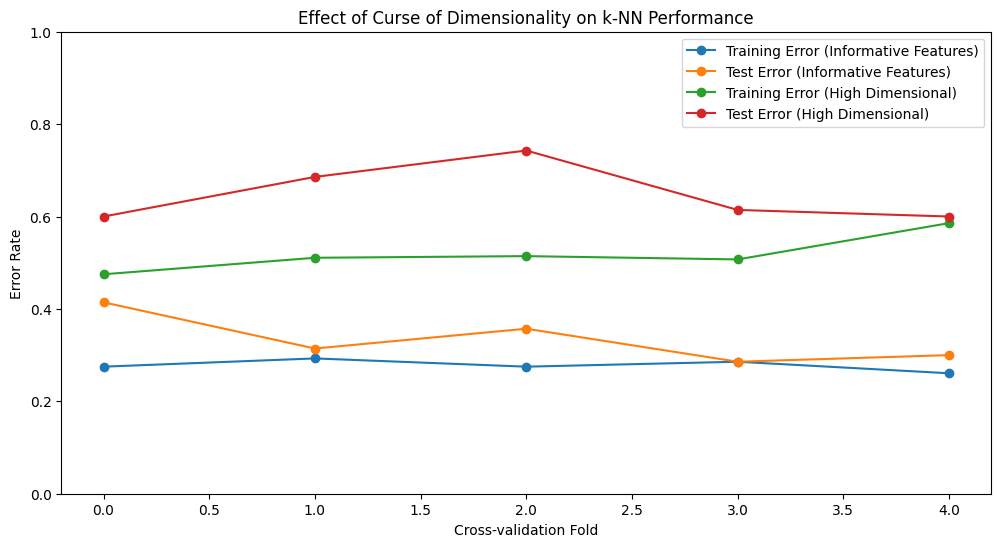

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a synthetic dataset with 5 informative features and no redundant or irrelevant features initially
X_informative, y = make_classification(
    n_samples=500, n_features=5, n_informative=4, n_redundant=0, n_classes=8, n_clusters_per_class=1, random_state=0
)

# Split the informative dataset into training and test sets
X_train_inf, X_test_inf, y_train, y_test = train_test_split(X_informative, y, test_size=0.3, random_state=42)

# Now add irrelevant features to create a high-dimensional dataset
X_high_dim = np.hstack([X_informative, np.random.normal(0, 1, (X_informative.shape[0], 100))])
X_train_high, X_test_high, _, _ = train_test_split(X_high_dim, y, test_size=0.3, random_state=42)

# Define k-NN and hyperparameter tuning for both datasets
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 31)}

# Nested cross-validation for the informative dataset
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
train_errors_inf, test_errors_inf = [], []

for train_idx, test_idx in cv_outer.split(X_train_inf, y_train):
    X_train_outer, X_test_outer = X_train_inf[train_idx], X_train_inf[test_idx]
    y_train_outer, y_test_outer = y_train[train_idx], y_train[test_idx]

    # Inner cross-validation for hyperparameter tuning
    cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    grid_search = GridSearchCV(knn, param_grid, scoring='f1_weighted', cv=cv_inner)
    grid_search.fit(X_train_outer, y_train_outer)
    best_k = grid_search.best_params_['n_neighbors']

    # Evaluate with best hyperparameters
    knn_best = KNeighborsClassifier(n_neighbors=best_k)
    knn_best.fit(X_train_outer, y_train_outer)
    train_errors_inf.append(1 - knn_best.score(X_train_outer, y_train_outer))
    test_errors_inf.append(1 - knn_best.score(X_test_outer, y_test_outer))

# Nested cross-validation for the high-dimensional dataset
train_errors_high, test_errors_high = [], []

for train_idx, test_idx in cv_outer.split(X_train_high, y_train):
    X_train_outer, X_test_outer = X_train_high[train_idx], X_train_high[test_idx]
    y_train_outer, y_test_outer = y_train[train_idx], y_train[test_idx]

    # Inner cross-validation for hyperparameter tuning
    grid_search = GridSearchCV(knn, param_grid, scoring='f1_weighted', cv=cv_inner)
    grid_search.fit(X_train_outer, y_train_outer)
    best_k = grid_search.best_params_['n_neighbors']

    # Evaluate with best hyperparameters
    knn_best = KNeighborsClassifier(n_neighbors=best_k)
    knn_best.fit(X_train_outer, y_train_outer)
    train_errors_high.append(1 - knn_best.score(X_train_outer, y_train_outer))
    test_errors_high.append(1 - knn_best.score(X_test_outer, y_test_outer))

# Plotting the training and test errors for both datasets
plt.figure(figsize=(12, 6))
plt.plot(train_errors_inf, label="Training Error (Informative Features)", marker='o')
plt.plot(test_errors_inf, label="Test Error (Informative Features)", marker='o')
plt.plot(train_errors_high, label="Training Error (High Dimensional)", marker='o')
plt.plot(test_errors_high, label="Test Error (High Dimensional)", marker='o')
plt.xlabel("Cross-validation Fold")
plt.ylabel("Error Rate")
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.title("Effect of Curse of Dimensionality on k-NN Performance")
plt.legend()
plt.show()


#Types of Feature Selection Algorithms
* **Overview**:
    * **Filter Methods**: Select features based on statistical/mathematical metrics, independent of models.
    * **Wrapper Methods**: Select based on model performance.
    * **Embedded Methods**: Feature selection happens during model training.
* **Choosing the Right Method**: Each method has advantages based on dataset size, computational resources, and model needs.

<img src="data:image/png;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/4gHYSUNDX1BST0ZJTEUAAQEAAAHIAAAAAAQwAABtbnRyUkdCIFhZWiAH4AABAAEAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAACRyWFlaAAABFAAAABRnWFlaAAABKAAAABRiWFlaAAABPAAAABR3dHB0AAABUAAAABRyVFJDAAABZAAAAChnVFJDAAABZAAAAChiVFJDAAABZAAAAChjcHJ0AAABjAAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAAgAAAAcAHMAUgBHAEJYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9YWVogAAAAAAAA9tYAAQAAAADTLXBhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABtbHVjAAAAAAAAAAEAAAAMZW5VUwAAACAAAAAcAEcAbwBvAGcAbABlACAASQBuAGMALgAgADIAMAAxADb/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAJgA6kDASIAAhEBAxEB/8QAHQABAAICAwEBAAAAAAAAAAAAAAcIAQYCBAUDCf/EAH4QAAAFAwICAgkJDQ0QDAwGAwABAgMEBQYHERIIIRMxFBcYIkFRYZfTFRYyV1hxdpbVCSM4UlmBkZW0tbbS1BkzNzlCSFNUVVZyobEkNDZGR2JmdHV3hoeSk5ThJSYnKDVop7PBxNHkQ0RJgoSFoqaywsPwRWVno6SlZHPx/8QAGwEBAAIDAQEAAAAAAAAAAAAAAAECAwQFBgf/xAA7EQEAAQMBBgIHBwQBBAMAAAAAAQIDEQQFEhQhMVETQRUyM0JSkaEGIiNTcdHhYYGSsRYkNHLBNUNi/9oADAMBAAIRAxEAPwD9UwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcA105+IB8piujjn4deQimN6cK9OcujVqszT2yeWWp+AaDVcluNSFE0gk/+f8A6hGHEvmuh4hsmsX1XFLXGpbO4mGj7+Q8syS0ynXkRqUZFr4C1Mu9IUaoOHso8TkRvIXEDf8AXKYxVWkSqdbFGdOMxEYUaiJSkOEtJGtJEZclL0MtyjPkXoNNo7VqiN6M1S42p1Ny7mqJxTD9IF5Qk7uv/wBr/UMFlCSZ6al/lf6h+fDfzPTEzvVcF66f3QY9AOZ/M78T6a+uG9ftjH9ANnwLUdmpTdn4p+T9ByybKMtd5fZDtmST/wDCfxj89T+Z54m109cF6/bFj0AfmeeJ/wB8F7fbFj0ATYtR2WpmaucVT8n6FdsuT+yF9kO2ZK/ZC+yPz1/M88Tfu/ev2xj+gD8zzxN+796/bFj0AiLNqeyKrufen5P0K7Zkr9k/jDtmSv2Qvsj89fzPPE374L1+2LHoA/M8sTfvgvb7YsegEzYtR2TRO9ziqfk/Qrtlyf2Qvsh2zJX7IX2R+ev5nnif98F6/bFj0AfmeeJv3wXr9sWPQCIs2v6Jrrnzqn5P0K7Zkr9k/jDtmSv2Qvsj89fzPPE/74L1+2Mf0AfmeeJv3wXt9sWPQCZsWo7K01f/AKn5P0K7Zcn9kL7IdsyT+yF9kfnr+Z6Yn/fBev2xY9AH5nnib9371+2LHoBXwrXaCq5n3p+T9EI2Tlm8lt14k7vKN1od4xag2lpDiVK015mPytrHCXe+Ionrw4esl3OxWIO55dMqUtDkaoJSkzSztQhJGo+ehLI0mZ9aOsrB8KnES9lyzI9dlsIg1eC6UCrRCLaceUhJb9CPnsPXUiMtU66GajIzGO7o7d6nERhmsamuzVnOafNfZCycQSy0PUtRn6w1+06umfDbUatTURfZGxF1mPPXadyqaXat1eJTvMbfKMDmMaCjJgLl9ccdDGTPUDM9eQnokUMkWgJDXqCOfMYPU/ACQMzIxkMjChki0GRjXqDAwep+AEgZmRjIZGFDJFoMjGvUGBg9T8AJAzMjGQyMKGSLQZGNeoMDB6n4ASBmZGMhkYUMkWgyMa9QYGD1PwAkDMyMZDIwoZItBkY16gwMHqfgBIGZkYyGRhQyRaDIxr1BgYPU/ACQMzIxkMjChki0GRjXqDAwep+AEgZmRjIZGFDJFoMjGvUGBg9T8AJAzMjGQyMKGSLQZGNeoMDB6n4ASBmZGMhkYUMkWgyMa9QYGD1PwAkDMyMZDIwoZItBkY16gwMHqfgBIGZkYyGRhQbfKOQ47vIGDDkAAJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhQARaDoVteyCrl16l/7Jj0B5dfM+wFn4iUf2EmJs+0hjuziiX5rfNQ5DzWH6e0hejb91QkOp+mT0Ek9PskQn7HFKj1GcW9ltGnItqdNdBXz5qGo1YgpWpaaXbB/5iSLKYp72cyenstE/ZIenqqxbn9HnoiJqpz3lNFKsKGuIkyjpIdw8fRNNOgSNkoyDKInmPRJJl1mPPePczPN3J09GOUNGPH0Qz5RyHVqdn0mj0uZVp7Skswo7khw0I17xCDUrw+IhIuhDwMgf0B3J/ciZ/wAyoRGouT5ojT0wg7E18xcuUqj3LTsP3nRber0FFSgViqOUk2HGHCJTRm1HnOyEGtBkoiU0Wmh7tvhlMrEpRnolbZ/WFO7JtvKdC4HqbXrEyRelUq7+NIi6dSGI9PQUdSo7X85nFisy1vNsk4TRG+pRmZamayIy8/HNTsqyW7ovnDV3WHdFOpmP6iqZauKqDLofql3qFxVTJLE6SpmYkkvJaWZJlaOPmnf0a9E6i5HmvTbinoubVLQoNGpkqsVF9tqHCZXIkO7FK6NtCTUpWhamehEfIuY6tu0W0rtoVMue3JhTaXWYTFRgSSZUgn47yCW2siVootUmR6GRGWvMhQ7HSrLuG/bqtGgs4ruKjXHiiW/WaXYVr9hUZ2oMyGVxuyG1SH25ctk5CjS4ra42bqDUkjUnTZbHr2JLXw7w6X/aL9r0W3aDclMXelQpSY6I0CpvUB+KtdQU0RdE/wBK+wlxTxFoa0bjLUhE6m5BXaiucrvdr+IZapjkYFj+KR69jpFD7vuegZLq2UVQqquVRbizfYTCJMR11np46m6YybzLpbF7FpJRtvNnotCicbUpKkLP281UCz6DmCDalxtYjsfG1PtFpFsU+8bVTJoCJy5ry5/YzfZkSPHmGbkdWvNxTZmtOhE6pU8Rc7lFi3T1jK7RWNELkUZIz6xYquXYpDWuHhFVo+KrWo9VuuTdDkemtNlWJUR6K9Mb623FtvGp0j2GnmtRqUXMzNR85a2aBxFzuVWLU+TSu19FPn2OQdr+J+10jdd+nLTQNx6iJ1NyJhEWLUR0QNftpxILalkySDMz6vCKFcKC1U/M+d6a33rDV2GaGy6k7n5Zci95KS+sP0cyaklNaGXhP/7/AIh+cvDKZLz7nwiLQiu5v/n5o9Fp66pppy4Nyndrrx/T/cP0pxg665CR0q93ItBIgjbGi+jhtERa8i/kEkJMzLmQ89qoxdl3tP7OHMZABghsMDIAEzgAABIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgt1Dfsz0HyVOjp6166gOwA6vqhG+nD1QjfTgO0A6vqjG+nD1Ri/TgO0A6vqjG+nD1Ri/TgO0A6vqjF+nD1Ri/TgO0A6vqhG+nD1QjfTgO0A6vqjF+nD1Ri/TgO0A6vqhG+nD1QjfTgO0A6vqjF+nD1Ri/TgO0A6vqjF+nHNuW06ejZ6gPuAwXMZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcd3kHnV4tICi8epf8AsmPRLrHn14/5hP3z/wDhMTZ9pDFc50S/NH5qKRFiCk+W7YP/ADEkWSxV/Psb+En+QVv+ai/oQUn4WwvueSLI4q/nyN/CSPS3PU/tDz9v71UfrKzlI/nUjHeHRpH86JHeHmpehirIRajJkREKS48uuhXNmLJFPvytZblVenZKl0+jnTKldRUWPFaai9Ew4cJZU5BJWa1KQ7oWh6r0SohvVV4urmoTF53O/iuK5ZdgXMq361VXLjJqUtCX2EOSIkTscyd2IkpcUhx1nkna2bhiF4hYx2jR1SDkIIiM/IPPftwnHzd6JCi8hCCsq8W112RKvZ60cW0St0qwJtIpdVfq92LpEl2bUOgNBR2ChPk40lEpkzWa0qUrpEoQs0lu8uscRUjF1WzLdq7fuKvS6LX7Sp7tEcuRL0ZK57EFhSachxpCIyEnINwyWrR9zco1NkvvCVgnLWQp3pW2Up8mg+zdsmrTVtov/NENyOLduyU301mqyY9ty7HtuNdq2qPWfVVE6nvrfaQhtbjMckyenjLaNtZEnVSDJwyM9Netjj1sw5VZhX0my0rpVqy7t32TezN0NoYi7OyI0g0MsGxJ+etdGkiW27qvRwjToYWEVZzSnjdNtB+Ih2HraSqP0JOILX+t6hXeyOOm37oqz1CqECyn5z9szbjp7VqX2xX9pxWkuPRJ2xhvsN3RxBJUXStKNLui+8Ld1ahnW6L9sTFuQ7ls+p2fS7qu62X6TGpF4rTNeZlb1KTUUJikjoObZnHS4onULLcplRGgBZmn0jsDZs29716eEeslepcyFYKlxiV2lIua5ncTRvWbZ11qtisVRy49swyTMRGVKjRCjGTiE9KhS0uPNKLmSd+hmPvkji3uu1ahdZ2biyhVulWfclLtOc/VbvVS5TtQnFFU2piMiE/vYSU1nvzWlajS5sQsk6mFmNC8QDpQKicxpKlIQlwkJNZNub0ko/ARmRGZeI9C18Q7hHqK45olF2T/AM6+uY/OPhm/R+z58Lm/+fmj9HMnfnX1zH5x8Mv6P2fPhc3/AM/NHpdNyppedvevV/b/AHD9IsZ/zo37wk3wkIyxn/OjfvCTDHD1cYuy7en9nDmAANbq2AAAJgAABYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwdX0bZr010HMdCrvOMxu8PTXXUBr1fuduIw6a3kNElKlrccVtbbSRGZmpXgLl1isFZ46MeuVSVTMd2lkLJaYDpsypll227UYjSy6y6fVKFF5UmZeUdDi3nVS9rqxtw7N1N+BTMoVaYxXX457XV0qEx2RIYSr9T0miEmfi1LwiwFg4+oNv0SHbVsUOJSaPT2Usw4cdrYhlsvB9fr98z8YCAu7Xn+5b4gviUfphnu1p58u5b4gviUfphapu02kdW0xk7aZ6tEgKrFxoVAy17l/iC+JR+mA+NCeRfQv8QXxKP0wtMdpsmeuqQK02i56pAVXPjTqBfrXuIL4lH6YY7tSoe5e4gviUfphawrXZItNEh612fEkBVPu0Kh7l/iC+JR+mGe7QqHuX+IL4lH6YWr9abXjT9gZO0mi56pAVVLjTnl+td4gviUfpgPjTnmWncu8QXxKP0wtP61m+rRIz61W/60BVU+NGoH+tf4gviUfpg7tCoe5f4gviUfphav1qNeNIetRrxp+wAqsXGnPL9a7xBfEo/TAfGnPMtO5d4gviUfphaf1rNF17Q9azWuh7QFVj40agf61/iC+JR+mGO7QqHuX+IL4lH6YWs9ajWmuqfsB602vGn7ACqh8ajrDSn5fDRxBMNo0NSzsjclKfCZ6PGovsCV8KcSGO8vsPTLJuRt96Gro51OlIVHnw16mWjsZZE4ktSPvtDI/AZ6lrJcuzEkhT6DRy8AqNxgW1ExK7ReLS2oqKfc1m1CFDrElpOnqxR5MlDDzEhPUvQ3UKSo++Rt6uSdAvLAntSmyMlFr747g0u1pDxuGk1ctC1L6w3Dd5AH0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxLrHnV3+cVe+f8A8Jj0S6x0quwuRDWhBcxNrlXEsdcfcl+aXzUMtcP0jn/TbC/5iSLHYwcaamx+kXprpoNG42sL1HL2K6vatPcabqTDjdRpxucknJaVyQZmZERKQpxGp8i3a+AQ3w8cWVp1Wmx6DkysR7QvGkH2LVItacKClbyORrQp0ySWpEajQoyURnt2qToZ+mmIqpxPZ56mJtxNceUy/TWkyo/YqdrmvId8pDGvsyFR6bxW4qYR0buYbRIi8VcjER/W6QegXFxiAy0PLto/b2L+OOdGzd734bsa+aeeHqUvCWVLJvS661aeSrYRRbvuqTdMiDUrTkyJDLjyGkLaQ+1UWkGW1otDNnkozMyPmkdK5eGf1w42ydj3169j9seuya12Z6m7+wOlUyrouj6Uul06H2W5Gu7qLTn1z4r8Or13ZetH7eRfxx1+6qw3qZnl20eX/wCexfxxE7Nq92qFvSVMdYQJkqzq7TcwZNvynWxeDeQnay27ZDDNjQaxDmGiBEYjrVV3ae72M0t1twlI7LY6BJK00PVSpyqHD5VL0gXwmVdUeLIvSr2xW3+x4K1tw3KUqIa2k7nC6RLqoSiJRbdpu9StOf0e4msMyzN5eYbQLXkRerUU9P8A9wZa4o8NwG0tN5gtA9PD6txfxxHoy58UHpOjs9jI3DREyLdF2XLcNbkFT7ssuPZ70KM30cmL0U2RJKW1I3GRLI5BElJtmRKbJR7iPaMOYayLfVqVqzcz5NhXFS6zR3qQ41Q7fTSFK6ZJJckuKcfkLN0iItmzo2073dUL3I6Poo4tMOmk92XLRP8A9exfxxjuq8Objd7b1o994PVyLy/9sT6Mud4R6UtvZouJMryKTOol95ap9VjPUZykMqg20UJbprbJByJZrkPdK4SU8uh7HTucXqk9UdHl3h9OTjnGtgquxbfa8m0SZ2X2Ek+zvU9BJ27N/wA66TTXXcvb4lDw08VuGz68uWhy/wDz2L+OPqXFVho+vLlon/69i/jiPRtzvHzT6So7M1zhdKs43yBj718qZ9fNzSLi7M9TSV2H0spl/odnSF0mnQ7d+5Ou7XaWmh11vuyblouSsi33RbTu9GT3LnQ7aTHrDh1GnzmjZiMsuOVlcFZsx3CJZLIpzBx0k4nRK0auWLPinwvp+i3aH28i/jjzp3E7haS6Rnl20C2J/duKf/zh6NuedUfMjaVE+SyVpyVrjF2Q6SnujT0hFyTv057S8BeQbIl5Ja8y+yKoQOKfDEZHSoy5aOqfFXYxf/OPs/xb4ePTTLtp/b6N+OLU7Mz1qhM7Q5dEsZOeTsPmn7I/OfhiUTmfs+98RaXc1/z80TVm7jbxFZ1uvSoV2QLprCmzTBpdIltzHHH1ew3mhRpQ3u27jM9dOpKj0Scf8H+N7nolBqN4Xq0lq5b6qTlcqTZtmhyObhmpLbiDIjJeq1qMiI9u/afMjG9bxTMUdoaE71U1V1RylfvGpEURvmR8hJmmvPUaBjulyI0NreRdRCQC5FoOFq5ibkzDu6aPw4ZAAGtEs4AAJmcAAAJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAebXP52L3jHpDza5/Oxe8YCmmavoxeHL+Fd33tbFuLV/OTMVHzXy4xOHL+Fd33tbFuLV/OT94BsSUp8Qqna1iLy5xHcQFHu3IOQ40S3alQY1Hj0W96vSmICH6JHcc6JiLJba1N1RuHuQrVXM+s9bWpFdouP8APti5kyzkLH1uY/rtMyJKpUuGdXuidTpEJUSlsxFJcaapz6VauNmrk6R7dOoz70I3m5NKVjis2hnSj9sWoY6zFRbVZmnK9S3JSnpcR2BUXuxkEjpWeyk7mUp6NZslu03HpvVz8T1/Rbmyzb1k4Ui1tvESEP1GZNuY4KJ7Sqc3MJuMlMV5RyO/Uno1klGhJPpSNWwurW+Fa538Zetym3PTajdNbyHTb+uSpzW3YkaS8zPZeeSw2jpTbQhhhplpszP2BGpXM1FtUDCV3RKvn+oqnUhbeU32l0ZKVubo+2jtwjKTq3on562Z94a+9Mj6+QDpWtxMVet1zG8qvYuft+zsuNL9a1Rk1dtypoe7DVLZROhNtm1HS8y26ps25T6i+dk4ltSlJb+Nf4nK7T6Pd2R6JjBupY2sSqyqVWq0ut9BUHew3janSIcHoFIfZZUlfNchpbnROdGhR7Ok+h4DvP1r8O9JOo0MncRyqe9WVm44SJCWKQ9CX2MfRd8ZuuJNO8k6p1PkoiI9GpfByVo1qvUqDgrBl6UuuXDMrEO57qpyXavAaluG6tl6N2GspvQuOOdGZS4+5BISZo03mEiVfP1+TsxVzDuL8T064plFoNNuBVTqdzepkNTMvp9GlbYz7iXfnKdhJQpKiNe5TWxPSdBHFqzX7OxXVrNsyGqt5Vky4cCDcFdKlw4UiISyfYelIZfUp3pUdE2htlRrPcfIkmNvs7FdaoHERemWHHKe3Q7htmiUWHFZNXTsuw3ZSl7kkgkJb2PtbdFGfJWpFy10CgYFv22ME25iSu2Ni/IUOFKrDlXo9wS5DUV5UmoOyYrzMg4j5EptDiiU2qPqalpUh1HR6Oh7Vz3BRn86YGO+sWdBelUhXIcCWVccNNBUiIwqUhKGySiWh4iSlKnEoUkkkrYlRmkvIe4tq0dhSs903FUeXh2LMNHq8VfUVXep6HSZdqTdMKKaDYJzpFJSclLq2kb+jI1E2PljvhkvuypnD/6o3VSqwzialV+n1V5bkglrOeyhuMxEJe81MsEgmiN1wj6NtB7d3JPkMcN+aYmFH+FNurWi3j55EikJuk6jJ9WGqK6tSzjlAOL0PTk2tTCXuydm3Rw2jP52oN7r2fL5k5jreGsW4splyy6LRabW11WoXQVOgqal9kETZmiM+7v+cpNGxtaFEazUpranpPZtLMlz5PxZbeQsYY4RNl3Akyfg1qsJp7NLcaW43IRIebafcM0utLbT0TK9ytNSQnVRcrOxBU7fz/eeV3ZUBdEuK26HRYMdp11UhlyEuSbhrIy27DJ9G0yUZn32pEfM4fb4UcgU/GOMLQmsWXdjNlVq4J9atOszpDdCrjU56W7Gcdd7FePpIxyG1pS5GWg1GstUmSFgPNzrlZ/LHD3VDrVuN27XrRyzQLYrMFud2bHTKYq8JaVsPm22pxpxl5lxJqabUW4yNJGXPtZcyZMx67xUXHhexKbS73tWn0aoVq4placUqaXqQpTL7cdcd1onI7aEISyZEh3mpS0n14pPB5ftOxDduPoyMe0WVcWUKXfUWDQ0PxqXT4TCqatyI2kmiMlJOG6hJkgkr1Qsyb3m23vVx8N1w3RWOI9VQrFKYpeZaLBpdLcSbq3oS2aU5EU4+2ZJToTikqIkrPVJHqaQHp0zOmQLdn4to2WbFocBGRZD1Jbq9JuF2axHmpglJjpdS5DY0XINuSjYn2Cm0lqvf3u542yi9ke5b+pkS3exaPZdf9bkeqHL6T1TlNx2nJe1rYXRpacd6HXcrcpC/YmkyEM8R53ZQuDOtXBkOPblv3bYDdPq9FkUipSKjHTVILrC4RoW7HjuEt94ui6Park8Rb1aiXuG/GkrFOG7etSrmS664yup19/kZv1eWtUiasz8Pz91wiM9dEkkuoiASO+kux18vEKcfNE/oWr7/hU375xBcuQWjC+Ypx80TLXhavzn+qpv3zigLI2p+fK+t/INwGn2p+fK+t/INwAdsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEcZ0z9jbh0tWn3jlCpS4dNqdVZo0VUWE7KcclONuOIQSGkqVzSyvnppqRF1mQh780s4W/3TvH4n1L0IC1ACq/5pZwt/unePxPqXoQ/NLOFv907x+J9S9CAtQAqv+aWcLf7p3j8T6l6EPzSzhb/AHTvH4n1L0IC1ACq/wCaWcLf7p3j8T6l6EPzSzhb/dO8fifUvQgLUDBkRloYqx+aWcLf7p3j8T6l6EPzSzhb/dO8fifUvQgJqveykVRC3SbJaFEfLTUxVfLXCrju/p/Zd02FTqq+0k0JkqSpp/o/Ag3EGSjIj56a6e9qY3h/5pVwuK0L1TvDTy2fUvQjzpPzRDhPlK6RybdpH4dLOqXoR0LOvqt07tUZhoXtDTcq3qZwgvuEMFJItuMWUf8ArKaf/wBYYTwJYL5/7nLH2xm+nE1L+aD8JZf+O3f8Tah6IfMvmgfCWvrnXeX+BtQ9GM/pCmPchrTs+ryqmUNdwjgv2uY/2xm+nGe4SwX7XLH2xm+nEy939wlfuhd/xNqHoxnu/uEr90Lv+JlQ9GE7RojpTCY2fXPnKGe4TwZ7XLH2xm+nDuE8F6/ocsfbGb6cTL3f3CV+6F3/ABNqHoxk+P7hLIjPs+7/AIm1D0Ymdp2492EToK485Vsy5wXYXtnFl43VTceNMzKLbtTnRnk1GWfQuNRnHCXtU6oj02a6GWnLn4Bq3DLwjYoyHhG1rzr9jsTahVI7rrz5zZaN+j7iCPRDqS6kF4BYDOvG3wxXdg7IVsW9KulyrVq1KvT4CXbTmtIOQ7EcQhKlrb0SRqUXfKPROmvkPU+Dzi/4f8bcNtk2bfD9wFW6VFkxpaIlrS5LaVdlvLLR1ts0K71wuoz0GKraFuqc7sM9Oirm3NGZEcCGDlfnmMYa/wD0+f6cfU+A/BGnPF0Uv4NSnF/9cS+fH3wm+GVeRe9ZU/8AEGT4++E3wS7zL/Auf+IMka+18MMUbPqjlNUoaVwI4F1/QzY+2k70wx3COBfayY+2k70wmXu/OE/9uXp8S5/4gd35wn/t29PiXP8AxBPH2/hhPAT8Uoa7hDAntYx/tpO9MBcCOBC/qZMfbSd6YTL3fnCf+3b0+Jc/8QZLj94TyPXsy9PiXP8AxA9IW492DgJ+KWiWDwnYysqqM1O1cf06NUGDJTUxzfIdaPxpU8pSkn5UmQsVZONGYTqZj6CUr+DpoI2Z+aCcJxafzTeh/wCBk/0Y9Jj5orwsspJKJt6aF4PWXUfRDDf103qcUxhktaGKas1TlaejwkQ4qEJTpyIegKrp+aU8L5ERFMvbQv7Dal6IZ/NKuF/9uXt8Tal6Ic2qZqnMuhTGIxC04CrH5pVwv/ty9vibUvRB+aVcL/7cvb4m1L0QiIStOAqx+aVcL/7cvb4m1L0QfmlXC/8Aty9vibUvRCRacBVj80q4X/25e3xNqXohg/mlXC+X/jl7fE2peiAWoAVhonzRnhlr1wUi24tVuhiXW6hHpcM5dsTmELkvL2NoNS2yItVGRCzwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADGpH1GNLuvL1i2bV4ls1eqOvV2egnI1Jp8V6dNdbNZtm4TDCVrJslJMlOGRIToeqi0PTzE1TLVzyq5Ah25TrPpzJvxKdWKhKRPlPPJdJKHyhN6NpaUglKTvfJffI3NpMjSAkGZNi09lcqa8hhhtKluPOKJKEJIjMzUo+REREfM+Qjit5do1SrM20LSotar9XgsvqeVHgPN09h1LKnG2npy0kyhS1EhJEhajI1pUZbeY5lhC2q3RYNNylMk5Gfp8qRLYeuWPGcbJbppMyOKy03GUSNpEg1NGpHPQ9TMz3Gcy0xDWlppDaElolKC0Ikl1FoAohkReR5vFdw7y73hUGiPKfupxmHR5LkwkNeprRmlx51psj3aFuNLSdNx6ci3C81qn85Pyio+eFf77rh1PTrVd33rQLb2p/O5e8A2QAABwNOhkY5dfWMiqPGpT6VVsmcP9LreNDyBBfuerm/bhRoUg56U0eSraTc5xqMraZEv54tPsOWp6EYWrUnxmMGQpBjLKtAwhizNeb7dosWgWkzdEek0THkp9uCi2am2pqG81ISglMQzkSXm5CiY6RpLSyd3K3KIt6xnxVm9kaLYVx5SxLkFio2xNrx1LHz+xNKfg7FSWJLSpcklIcQ8SmntzWpsukpsutIWVrVxUG2GI8q4a1T6ZHkyWoTLs2UhhLkh1ZIaZSazIjWtSiSlOupqMiLUzHplyFCsrX9nDJ+C8ZZWuVmzYtq3petq1RmkwY0lFRo0N6rsPQ1OSlPLbmLW0TfSJSxH2qc1SayRzsdQctXHVr1zhb8iFS0x8YOwW6QtDThOPJfozM1fTn0mitHXVEWwkaIIi5nqowmfkfLkYGKuWhxG5WybScPW3aEa1aTd1/2Uq+a9U51Nky6fTYaEMt9GxERIbcdcXJlNJLfISSEJWZms9qT8fL9U4m4GdcA29HyjatFfrk+44spiJRZ79PmLZp8pxD8mOU5o3W1MpZWiMpWsd7cfTyCSk1BaKNdFBm1qo27ArNPlVekoZcnU9mW2uTGS8Rm0p1oj3NkskqNJqIt21Wmumo9fYQqzdnEE3iXIec6pWrBoNRkWPaFuVY5VHp5xKnXJMk5TTcZ941OGbZOE2lvUldGl1w++6hsSslZwxnfOOaVl96yavSchz1UN31v0uZCeo1WVFW+w2a3pL6ZbKijyG+kJuOrVDajToo0pCwxECi108gpzN4l+IpuxssZeiUvHybcxRd9cpR0x6LMcnV6nUycbbxofS+lEF9MYlaKNuQlxwtdjSeR28g1FqfEjzGC1bkNIeQev6lRal/EZAO1oQyOO7XwBu8gD4yz0jL0FOPmiB68LV+fwqb984ouPL/nZYpv80QMi4W79L+upv3zigLK2r+fH/wDfgIbgNPtX8+P/AO/AQ3AB2wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABreQcjWPiq1pl7ZEueBQKHATq/NmvE2gjP2KE+FS1HyShJGpR8iIzFdI/zQ+06yyio2Twz8RF30h4t0erUKwlvxJCfpm1rdQZpPwHp4wFrwFVO76/4lnFR5uf8AvAd31/xLOKjzc/8AeAFqwFVO76/4lnFR5uf+8B3fX/Es4qPNz/3gBasBVTu+v+JZxUebn/vAd31/xLOKjzc/94Ac+Pf9bn/f+tD/AK0LUD87OJniPurNPao9a3B3xJxfWJk+hXrUfVDH7jfSwYXTdK2zsdXuePpU7Uq2pPQ9VF4Zq7vn/iW8VHm5/wC8ALUgKrd3z/xLeKjzc/8AeA7vn/iW8VHm5/7wAtSAqt3fP/Et4qPNz/3gO75/4lvFR5uf+8ALUgKrd3z/AMS3io83P/eA7vjXl3GHFKjyuY72p+z2QAtSAhjCXFrh3O9Tm2zbVSn0a6aagnJlsXDCXT6vHRpzUcdz2SS1IjU2pZFqWplqWszgAAADGnPUNCMZAAGNCGQAAABGIGNC8QaF4hkAxAxoBlqMgK4HHb5Q2+UcgExCMOO3yjO0ZATEYMMEWgyABM4SAAiPPXE1jnh9psArrcmVK4a2pbNCtyksnJqVWeToWxlpPUW4yI1q0SXjM9COtU4iZlMRnklwBU5HE9xj1FPZVG+Z/TXIiz+dnNyVTIb5lp+qaU0ZoPn1Geo590hxu/U9y87VI9ENONpaP82n5wt4dU+S1m7yBvIVR7pLjd+p7F52qR6IY7pDjc+p7F52qR6IPSOi/Op/yj90TbuR5LX7/IG8hVDukeNzq/M9i87VI9EHdIcbn1PYvO1SPRB6R0X5tP8AlH7om3cjyff5oOetpYc/vzWp/wA66LU7iH5+8Qle43M7UmzqX3DxUP1pXnSru6TtmUiT2T2Epaux9NEbN+/2eqtunsTEpd0nxteH5nsXnao/oxPpHRfnU/5R+6Zt3I8lsNxBuIVP7pTja+p6/wDK1R/RjHdJ8bXX+Z7F52qP6MPSOi/Op/yj9ybdyPJbHcQbiFT+6U42vqe3/K1R/RjHdJ8bXX+Z7F52qP6MPSOi/Op/yj9ybdyPJbHcQakYqeXEpxtfU9i87VH9GPk7xt5Jx67HqHEdwn3Lj62X3CaduCnV6LcMSDqR6LldipJTKOXNWijLxeNG0NLVVFNFymZntMfublUdYW2AeXbdy0O7qFAue2qrFqdJqkdEuFMiuk40+ystUOJUXWRloY9Qb0KgAAAAAAAAAAD4SpbMNpb8hxCG20mtalrJKUpLrMzPkREI9qOcqDKp8WbjShVXI/Zkp6EhdrqjvxmXWybNZPSnHUMNEXSJ616ntWREo0mQCSRr96X5aOPaV6t3pctKosE1k2l6oS0MJccPqQjd7NZ+BJamZ9RDXUUXK1fuSQ/VrmpdDtbo1IapkKnqXU3TcjkW92Wp02m1NuqMyS20oj6NJ79FGkd+zsT2dY7Cm6ezUKlIefRKfnVuov1OW8+lBoS4b0lS1kZJUZESTIiI9CIi5AOoxkqu16qUpmy8d1OfRZ7ceU9Xag+inxW47iSUZoaXrJW6RGXztTKC3GRGtPMy6MLG11XNSanT8u347W2KqlslwaC27Q4sfaoz2ocYeOWrUiSSyW+aFFqW0iMyEllzLQcCLTU/GA8W0LStuxaDFta0qJCpNKgI6ONEhsJZabSZmpWiU8tTWpajPrNSlGfMx7A5bfKG3ygMjz6yjSnumXWPQHzfaS+ytpZakotAFJ+IWQ1RuJ/h3uKor6GnFVLgo6pB+xTKmU4kR2/4S1IUReUhau3qk20lLZHzL+MR5nnCtt5jsepY/uhySyzLND0WbFJKJEGS2e5qQ0rTktCi5e/ofIzEHUy4uNHFjLdqTcY0XMTEAujiV6JcjVFmOoT+dqkx5KVJJ3b17FaH19fMBdVNdg89VGX1hy9XYH05/YFNyzfxh6GfcV/8o9L/ABBw7e3GF7in/lIpf4gC5Xq9T/2Q/sCPchWFAv3ImNL9K4+we13VZtT7E7E6Xs7siC9E2b96ei29Nv12q126aFrqVcjzfxfme4+Ck9T/AP1Jpn4gdu/i/L9ZSfnJpn4gCV7q4aLZuy4MoTJN3zY9Eyc3SJUmlxorZLp1Yp+3oqiw6s1I3GTMU1NqaMjUxqZnuMhuVoUDIrxyo+Wsm0C5Ke5BXBOn0a1DpbEneSSU5JN6VLU4oiTohLK2UF0ru9DmrfR147eXGCX6ypXnJpn4g59vPjB9xUfnJpn4gDaZnCrd0mwrRxO/nhL1mWBWqbVKBDK2UlNeYhTEPMRahJ7I2vpQ0nokKYajGRklaiXt2Htlx4WuGbfN9XTYuX/WzTMkxIce5IS6EmZLJ5iMcVMqnyDeQiMtTBNIM3GX06tkpJJPURWrN/F+stFcFJmX98mmfiD59uni69xN/wApNM/EASJROHmrWVR8WyMe5PgwbrxnbrlqHUajbxyoNYpriGekakRUSWnEmT0Zh5s0yS2KSsjJwl97794YqvC7lWBdfbSpyL+x7VZ1UjVeZbhv0+QUxiQw9G7CblNKS0luQlLZnINxKWEGtbqt6zh4s2cXhdXBQfnJpn4gz27uL73FJ+cmmfiAJTurhttO/wC4cp1G+LlXMpeU7dpNAmQoUXsdyCqD06kyWnVrcI1dI+laEmjag2k7uk1Mdqm4mveuXPZ9xZpy1TbtRYjyqhSYlKtpVJS/UjYUwU2Wa5Ug3Fpbcd2oa6FslOqM0q0SSYj7eHF/7ik/OTS/xBwczhxf+4pPzk0z8QBKhcO0FWGcuYjO+Ul21KxclW9UCp2nqd6rOqX0fRdL8+6Ldpu3I3GR8kibaM/FptOiUs3+kKJHbY6XTTftSRa6a8urxin6M28YC/1lR+cmmfiB28eMEv1lSvOTTPxAFzPVqnFyN8g9Wqb+zimfbt4v/cVn5yaZ+IHbt4v/AHFZ+cmmfiALiza1C6BRIUajMvAKhfNApLM3hyrVutKI6jdFWo1FpbOmq5Mp2pR1E2XjMkNuH/5ih8U5t4wD5dxclH9cvJFONJeU9rSjIvrD6Y+wrlC/8nUzN+f6zS1TqF0irctOkdI9S6M6tO031uOERvySIzLeRESD9h+pMgs3aRLUfSqQSSV1aDcR5dDpRxGEqMvBoRD1divEA7QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACnFVteLxM8c1dtfIUbs+zcA0qlSolGeR84m1qptqfRKeTpo4lDTe1KVctS8RrJVxBVbh3M+7o4tvKmwfvO6LUgOYAAAACAOLjJNYx21jFiHlJGPaVcl6t0mt15XqenoIXqdNe06Se07Ha1dZa740a8iIj5mRhP4CCqNmi3LepFv0q0r3uPO1VuZU16lro0ihvvvMRdhSXFPx+w4DbTS3GmzUpZKNbqEFuUehe/Ts/UuvWpCuGzse3pcc6ROl0yTRIcSMzMp0yIs0SmJTkl9qKyttwtnN/Rw+bRup74BKwxqXjFabo4uKzIfxTOxpiW4a/Tr4r9Qo1TjLOAzNjPw2J3TwUJemtIRKbfhqNS1Gpg2217HFmpGsjyc6WzAj5LkS6PWW1YqhInVpnawa3kKp6Z22Po9tUom1bT3mgt5GRGadFGEoAIZp/E3Qa3ftLx1a+PLzrlUqdv0m6FLiRorceFTJ6nEpekOvyG0JNs2u/bSanVErVpDpJc2c6VxPWrVarSDKz7oiWrcNVOh0a75LUUqVUJ25xCG20pfVKQhxxpaEOusNtLVs2qMnGzWExgAAAAACrnHbiGBV8WzM82wZUrI2JYzt0UCtx9G3ibiJU/IjOmX56y42lwthlpqfiUsjnfFV7dsbGdo5AKGcZNz0Gn1kmTPXo+yY6Hdn1t+g1TiyL/etZj/AL39xfe58ceEsteFjDvwCt773MAJY6xkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFNeHClRsp8QubM+3XrMr1s3fOx1byXUJNNKgwEoJ02eWiDeW6o1Hqaua/AozVckVB4I+cviG08Gd7t/+KOPOfae5Va2ZcqplltRmrKzm0xyIhhJn4RyHxbMujEQAArvx4ZUv3DmApF442upu3q16sU+EVQXFjyCZaed2rM0SEqb006zMvrkNrRaWvXX6bFE4mqcc0zOFiBjUhVWzuIODhyx3KvkPiPRxDz67WE0+hM2RQIBzlOpZStcZuPCdNC1bVE4ZqURkSiIutJHuMPjDsOqY2eyXQrAyPVlRa5625dtwbcW7XYlRJo3VMuxCVoja2W41GvTmRa7j0HRvfZ/W2692inejOMxn/2pNcQnrUcdC8Ypplf5obCpWM6dfGLcYXdKqiLsRbdbplbtt1L1JcSbZusSEIeT0chxLpEyW5RKWlSTIjIyE3WXxJ2zeV3+sc7IvKgVhNoN3nJi1umoiuxoa3VNEy430hrTIJST1QZaac9wpe2DrbFvxa6eX+kTchLu3yhoR+EVsnceuJIlr2Fcsazr+qS8lQ5su3qXTqO3LnyFRnUtLY6Fp5Xz1RmZp0M0aJVuUky0HO5+PLEVqV+RSZdpZBnU6kdjt3DcNOt5cikW++8hKiZmvkrVC0ktO4kJXoZ6depFFOwdoTVjw585+XVM1xCyO3yjG3yjgy+0+RKadS4lSSUlST1I0n1GR+EjH0M9ByapnotH3mNvlHWqNOg1WE/S6pEalwpba2JEd5BLbeaWk0qQtJ8lJMjMjI+RkY7JdYyZaiaMxOUXIzCtPBI0/jzJWdeG2nzH3rXx7XabU7dZdVu7BiVeO5KOKg/pELSoyL+vMz5mLbipvDZy43uLEi8CbC0+1DwtiQ+/bPrquaW3XV1mmJ+kOZXGJwyADoVWt0uiNpeqk1mOlaXFI6RZEa+jQpxRJLrUZIQtWhc9qVH4BuKu+MGehGYjFeVa3edKkScTWNNqbjMpqMiVcbUmiQXW3EKUp9tTzCnXm0mlKdUtaL6Qtq9NVF3Tx/ddfrNEuO7sj1yOdOajvPUGhvIh0t2YgyUta1E32U62ai06Nb3RqTqSkK1MB6lyZTsy1/VCPLqip9RpaWFSqVSWHKhUEJeWTbSjix0rdJKlmRbjSSS6zMi5jwpdfzDd7VFl2Zb1JtSnS97k5y50rkVBlKXNEpTEirJst6C3EpUklJ3kSm9SUkbTath2bY8Z+HZ9qUiisyn1yn0U+E3HJ19fs3F7CLcs9C1UepnpzMe7oYCPkYfoMqtVitXbXa/dZ1hL0dUGszSdpzERxSTKMiChKYxoTsTotxtbp6arcUfMbzTocOnRWoFPitR47DaWmmm0klKEJLRKUkXIiIi5EQ+6kGoEINJgPqXPmMjBdQyAAAAAAAAAAA6cyBHlc3EFqfhHku2rDdXuXorxal1DYTLUY2+UBrnrTil1EQHazXgNP2Bse3yht8oDW/Wk140/Y/1h60mvGn7H+sbJu8gbvIA1v1pNeNP2P9YetJrxp+x/rGybvIG7yANb9aTXjT9j/WHrSa8afsf6xsm7yBu8gDW/Wk140/Y/1h60mvGn7H+sbJu8gbvIA1v1pNeNP2P9YetJrxp+x/rGybvIG7yANb9aTXjT9j/WHrSa8afsf6xsm7yBu8gDW/Wk140/Y/1h60mvGn7H+sbJu8gbvIA1o7TLwKT9gdyBQW4qkmtCT2dWg9nd5A3eQBnTXrDQhkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVTh2+jo4tv4Ng/ed4WrFVOHb6Oji2/g2D953hasAAAABF+ZMaV6/rmxhW6LJgtM2RdhXBPTJcWhTrBQJUfY1tSZG4a5CD0UaS0JXPXQj9zI2X7GxU5RI13yqr2XccpyHSodLoc6qypbrbSnnEoYhsuuHtaQtZnt0IkmPWs68qVfNGRXqNCrUaKtamybq9FmUqSSi69Y8xpp0i8RmnQy5kZkAh/iB4elZIyBaGSodmWLe0igQJ9HlW5ezX+x0mPJNpxMht3saT0EhtxhOh9CrehxxGqNdRrV28N1aqNBsCNTcW4kk022ZdVmVLHhm5TLZeeloJLEglIhuk+/FLVCVuRUE4bzjpJZUSElZObXKPBqcCizKrCYqFU6U4cR2QhD0kmkkpw2kGe5zaRkatpHoRkZ6EPQAVMsnhmydjvGmMIFDZsiZc+PL3rVz+pzMmRTKJJjT/AFSbJhlxEZ5yPsbntGlJNrSnojRqotqy9fIuFM11Wdl6FYTtjlScxUaMxKl1edKQ/RZpU44LqW2WWVIltrbSwaFm6yaFGszS6RJSdm9OvyjzK5XKLbFLk1u4atCpdPiNqekzJshLEdhsutbjizJKEl4zPTmAirFGG7msjJDl41mfS3IrmPbatQm47rineyqe5MW8vRTaSJo+yUbD13HorVKdC1jXC3COziSbQKIvC2Ep8G25vZEO+n6cSrjeaS4a2t7BREkiSgjSjsgpatTb39Hqo0lYyXkC1Yd50zH0qo7bgrMCXU6fD6B0+mjxltoeX0m3o07VPNFopRKPdyI9DGzgAAMa6gMgAAIq4sfoWcyf3v7h+9z448JhEXCzh3T94Nvfe5gcuLH6FjMn97+4fvc+McJv0LOHfgBb33uYASsAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCuoVB4HucviI19ve7f/AImBb5XUKg8D3898RP8Af4u3/wCJgea+1n/xVz+3+2ex1WeLkMgA+MRGXQBB/GFgy4+IbEJY7tiZSI0pdYgznF1Va0sGyy5ucSZIbWajMuRFpp4z5CbHn2o7Snn3UNoT1qWrQi+uIlx3xZcPmXLvmWHjbJcCu1uC0p51hph9tCm0GW9TbzjaWnSIj1PYpXIb+jp1FuribFMzuc8+UK1Tjkivif4FrQyratvQsT2hYdtv23VXqkVFcp7lOo9U6ZtDa0yDp/RvoV87bMnEHu0TtPlppGq+AzKj3DorFdMhYutqqFeiLgqFHpFZuFyg1uEiMhoo8xx15cslmo1mpLRkgySjTarvivuhJK0NJ66jQcF5rtXiBxvTspWVBqkWj1NbzbLdTZQ1IJTTqm17koWtOmqdSMlHqR89D1IdzS/aHaduzmcTETHOe85x88MMxEqf2hwA5as/BV4Y+p9eseFXKvd1Ju6jMRF1A6fGOLtUcZxTiVvpQStUpMlOqMkEZmRmZFJt54C4pajk+Dl2zr9xvTLgrdmFaV4tyKbNciRlE8pwpNPTqa1qIlESSeWki26nrv0TbQi6x5lQum3aVVqXbdTuGmQ6xXOm9S4EiWhuRO6FJKe6Fsz3ObEqJStpHtI9T0IU/wCRa+9XNMxEzOZ6Z8o/ZMUxhVPEXB/kOxbl4da/Vrgt15GH4FyQqw3GfeUqUdQJ1LCoxqaTuIuk7/fs005btRG2ZfmdF2XdmW8Mg2zQ8VXfBu2oqrG28ahXocmnvOfnrLfqa6hpxvdzJai3cyLwaneC0skWbfdSuGi2vWCmTbVqK6TV2ugdb7GloIjU3qtJEvQlJ75OqefWNlIjLwCk/aPaOluxMR7uPnOf/eVsQ+VOgxqZCYp0Jsm48VpLLSfpUJLQi+sQ7J+D3xhIyfg98eanOebJT0ZAAFoQrdw1/Rv8WJn9LYX3oeE5KzVaVRrdatSyUyrtr9CadVKhUlo1tNPoVt7GcmKJMVp/cRkbS3UrIiMzSKw4jxfY+R+OjicdvigorLFHVYz0eFKdcVDU4qjud+7G3dE8pO0tpuJUaNVbdNytbuaFoREPvmzP+ytf+NP+ocy5Oa5Rm7RsvX5RI3qvW4+OHTlvKfaoSmapMXEUlOxBSJLBNMO679+1p0uadi+Wo9mi4nsOlXUq/St+NMul1hEZyuTE9NNNtKEo2pcVr0aTJJGpLZJSajUoy1MzPctvlHEi0G8q+gwZajIAMaEGhDIAMaEGhDIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACqnDt9HRxbfwbB+87wtWKm4QltUHj94l6LUtWJdzUqzKzTGl8lSIcaCuK86nxpS8tKTPxmLY6lroAyAAArXxQNXVJzpw7RbKrNKpVYcr9w9jyqrTHKhFb0oMs1747b7C16oJSS0dToaiUe4i2n5PFVdGY8VWnY952lcR3NlGNPmQY1uUWHIh06547kd1x9C4JyXTR2O00l9LxuLMlsmgjT2QSBYS+sbY8ybAj0rI9h27dUKK72QxGrdLYnNNO7TT0iUOpUSVbTMtS56GY6Vr4ixZYxxV2VjW16AqC2+1EOl0iPE7HbfNBvJb6JKdpOKabUvT2RoSZ67S0CqrFhWZfN7cM9W7Y96XVHrlu11868m7qpDdqLpxW5CnElHkINhSluu6tt7DJtBMnubaShGwQrgeoT3EXma97+yC7DxzclRh0eDTqu4pmmxW6JDdcWzDWrsaQ4a5RqSmUh5ptSEqShBms1WDn4fxVVKDFtOq4ytObQ4M9dUi0yRRYzkWPMWpalSG2lINKHTU44o1kW4zcXqZ7jHvxrVt2KVVRFoNOjprklcupkzFQkpzym0tKcfIi0dWbTaGzUojM0oQXUkiAUYn5HzFh+v5QjUeUUGoUrD8i7o1FeyHUr1OFPaeNLUlblQZSphfRur1abNTK+jSrmRc9v4m8YWLR+FO+naLla9q4qRaset9FUr5nTEy0pXynmhbxmTThOL3toMoqtUGbRqQhSbP2hhzF2PHXJOO8dWrbDzxKS45SKJFhqUStm8jNpCdd3Rt6/wE9e1Onzt3C2I7RplZolr4vtKj064mjYrESn0SNGYqTZkstslDaCJ5O1xxJkvUtFqLTRRgIYyFLuPE2XbQtbH1SuKdEiY5vWsM0qbWZ1SXUpzL1OcYJ1chx115RKccQg1GakJcNCDIjJI1e2pdToNEwBlC08s3Tcdw5Kq0Fmus1KuyJ0GtR5UR2TUVs09Tpx4RsG0byOxmmyaJs2zIyUaDs/QsZY8tQqUm1bEtyiooceREpiadSmYxQWH3SdfaZ6NJdEhxxCFrSnQlKSSjIzHXt7EeLrSuWo3pamNrUo1xVfpin1eDRY7E2UTrpOuk6+hJOOEtxKVnuUeqkkZ6mRAKi2lUrqomMcZZmVk6+alcNXyy3bUpNQuGU/AcpcmuSqeqKqFv7HWSWjJSXVoN8loTo7sSlJXmI9R4Sce2Kmlw6GizKEimU6cmqQoSae0TEaal430yG29u1LpPGbpLItxLM1a6nqPeJOnWYDmAAAirix+hYzJ/e/uH73PjHCb9Czh34AW997mB5nGjcdKtnhOy5OrEpuOxJsyr09tSz03PyYy2GUF5VOOpIvKZD3eGelzrf4c8V2/VGFMTqbZNDiSmldbbrcBlKkn5SMjASYAx1jIAAAAAAAAAAAAAAAAAAAAAAAAAAAMK6hUHge/nziJ/v73b/8AFHFvhTvg1lM0a+eJGxZi9tbi5frNedifqyhVAm1xXCLxLS0s/rDzX2r57KuR+n+2azOJWk11GRxSfjGdT16h8Zppy6Ec3h3vKocG0q1NueeqHR2abKXPdTrubjk0pTiy2kZ6kglHyI/CPzwxdkqqcPV6UDDmJMm2Vmuy3KDcdTtZ6DGadrFrLYiuyktPrZJRbHFHsPdopequTZJSkfpO+wzKZWxIaSttaTSpKi1IyPwDVrUxTjOw6hNqtj46te3plR3dlyKVR48R18jVuMnFtpI1lqRHz8Jajt7O2nZ2fp7lu7TNW95eXnznz5K1Ub0vzn4M8wcQN25ysWrVK/KlVoVy9lncsKq5To9TTIScd51K4lERslU80KQS+jIlqJKVciSRkUc25lrJNlcLeBLNtSuVajUW4ahc66tIo92xbZfkuRpZKZZKpykqajEXSqUojTovVKT56GX6pUzCeIaLdJX1SMV2dAuVCnForMOhRWJxKcQpDiunSgnNyiWslHrzJRkfWev2cxDix61GrEfxlaDlssvnJboq6FGOAh01GZuJj7OjJZ7ld9t11PXx6+gn7V7PmqJiz2meXbMfTLFNuY5KB9uTMb+IMU2plLMr9l0O4r4qVGq97Ue6oVTms0tqOh2K25VYalNJcNa3ELd71XzhK1EREZH18p2pYUrL3DrXKrxkX1Ptaed5U718x7naglCRCbPozYlqSaOlc3NxXZGplIS23poZj9BG8P4mbtF2wEYvtBFsvr6Z2ioocZNPcd3bt6o5I6M1bu+1Mtdeeo5VHEuMqxQaTa1Vx9bM2j0JSXKbT5FIjLjRFl+qabNG1s9DPmkiGK19p9Daqmqi3jnV0iOk+fRaLcyofd+ccuW/bOezg5OrtMhR8vxbYOruvLkqt2lPOOE66xu3EwktEERISREau90MyHl17Jlz4+ezrZWIOJm7slWdSMaN1+NccyveqUqkVlctpomWKg3okjNpS16IMtuhF7JtSh+iaLAsVLNdjFZlA6G53TerTXqYxtqSzIi3SS2/Pz05ar1PQdClYixRQ6DMtKi4ytSn0Gop0mUuLR47USTyMvnrKUkhzkZ+ySfWYx2ftHobNEUxbmZmY8o8sft9U+HKoGFqzlGxuIrEVJr2aLzvGLlqwH7irMStTUrhxZhNFIJUVhKSRHQRESdE8+ZmZqI9pXvIeEix7Maq1JrrFpURqoUGCqm0uU3T2kvQYqiJJssLJOrTe0tNqTItNS0HuJ15jz+1NdRr66a6acTEYnlEZ58un9OS9OY5OYF1gBdY50JVr4bvo3+LH+DYX3oeFskdWgqXwpOtXDxYcVN70x1D9Kl1a2KG28hWqTl06nOsyUa+NK1ER++LaJH33Zv/AGdr/wAaf9Q5VcfiS5AADdQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADB9QyACAeJDhyrGVatbuT8Z3r6ysm2Sbh0Wtkx0rMlhz2cKY2RauR1n19ezcoyI9TI9Lh5t+aAW+yUCu8ENEuua33rlSomR4MCI8Zfqm2ZKVOpI/Eoxa806GRjlp1AKqHxF8dX1OlXnapHohjujOOr6nSrztUj0QtaACqXdGcdX1OlXnapHog7orjp+p0q87VI9ELWgAqj3Q/HR9TqV52qR6IZ7ojjpL/AMnWrztUj0QtaACqXdGcdX1OlXnapHog7ovjp6/zOlXnapHoha0AFUu6M46vqdKvO1SPRB3RfHT9TpV52qR6IWtABVLujOOr6nSrztUj0Qd0Zx1fU6VedqkeiFrQAVS7ozjq+p0q87VI9EHdF8dX1OlXnapHoha0AFP2MF584lryoV38V6KNatl21ObqdNxvRpXZ6ZktBbku1KUZbHUoPUibQRoPU+rU91vzLUYUMlyIBkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGDFa8/wDDReleyJG4iMAXlDtjJVNp3qdIjVBg3KXcURK9URppJ75OhGe10iNRaILltSpFlRx2jFdtU3qdyuMxKYmY6KkFmLjtgfzLO4FINUfaIkrlwcm0xhh0/CaEOo3kXv8AME5z43z11+Z9K869G/EFtyTp1GM6eX+Icar7MbJq62Y+c/uyePcjzVJ7efG/9T7V516N+IMdvHjf+p9q869G/EFt9PL/ABDBkK/8V2R+T9Z/c8e53VJ7eXG99T7V516N+IHby43y/wDJ9K869G/EFtRkiD/iuyPyfrP7qxqLk+ajmUOMTinwxY1SyTkngWVR7cpHQ9mze2bTZHRdK6hlv52yytxWrjiE8knprqehEZltSM5ccq//ACe5l/jXo/ox2/mpBacDWRef/hKN99ogtfoQVfZjZHTwfrP7rePc7qi9u7jl+p8n516P6MO3dxy/U+T869H9GLc7fKG3yiI+yux5/wDp+tX7nj3O6pPbu45PqfX/ACr0f0Ydu7jk+p9f8q9H9GLZ7fKMknQ9dRP/ABXZH5P1q/c8e53VN7d3HL4fmfP/ACr0f0Y82tS+PrM0X1p03FNt4JgzU9DOuKZc0eu1BhgyMldhoi7Upd596ajLTwKSfMrjkWg4LTqL2vs1suzXFyi1GY/rM/7k8a5PWWg4LwvaOAMaUrGVlocXCp5LdelP6HInSXD3OyHlERbnFqPmfgIkkXIiEgJPTUcEkZHzMZLrMdqIwxVTzfQBgtfCMi4AAAADGpDIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADGpeMZAAGNS8Yal4wGQGA1AZFVuLe885t5zwVhbC+XE4+7Yvrn9Uqkq34lX07AhsSWvnMgv/8AanvVp/PNT3bSIWo1FVOIznxz8JP+Hv3nZAYPh947fqgTHmlpHpQ7nzjt+qBMeaWkelFrA1LxgKp9z5x2/VAmPNLSPSh3PnHb9UCY80tI9KLWal4w1LxgKp9z5x2/VAmPNLSPSh3PnHb9UCY80tI9KLWal4w1LxgKp9z5x2/VAmPNLSPSh3PnHb9UCY80tI9KLWal4xkBVLufOO36oEx5paR6UO5947fqgTHmlpHpRa0AFUu5847PqgTPmlpHpQ7n3jt+qBMeaWkelFrQAUlylwX8WuZLEqeNcj8cses29WOh7LgnjGnRem6J5DqPnjL6Vp0W2lXJRa7dD5GY25PD7x0mgjX80DjpV4S7U9KP/wCqLULRroZ8wItBQVXPAnHQR6fmgUfzTUr0wx2heOj6oFH801K9MLWbS8QbS8QuKp9objn+qBR/NNSvTB2huOf6oFH801K9MLWgAql2huOf6oFH801K9MHaG45/qgUfzTUr0wtZqRBqXjDoKp9objn+qBR/NNSvTDHaF45/qgbHmnpXpha3cnxhuT4wMKp9objn+qBR/NNSvTB2huOf6oFH801K9MLWbi8Ybk+MBVPtDcc/1QKP5pqV6YO0Nxz/AFQKP5pqV6YWs3J8Ybk+MBAHAhlC9s08Ktj5OyLVyqdxVoql2bLJhtnpOhqUplvvGkpQWjbSE6kkjPTU9T1MT8kVW+ZeGRcCuMtT8FZ+/E0WpSovGQJw5AMbi8Ybk+MEMgMbi8YxuIByAY3F4w1IgGQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYPTQ9RkYV1GIkVKvPLV65cuGq0yzbll2vZFGlu01MymGbdQrj7SzQ84h8y1YipcSpCDa79w0qVvS3oSteTYkbrXfuUnF+FSsl3D/8ALMJP2B5OBWmmcJ2A42jRUm2KY+4f0zi46VKV9dSjP643wuryajxes2hfi/NNNUxhw72puRcmMtb7X8X9/uUi/g5MuIv+ugeP4pl/R/lXznXF+WjZOlLxAThGehENfj9T8csU6i73ayePY2vLIOVfObcX5aHa9je2DlXzm3F+WjaSAR6Q1Pxyr41z4pat2vY3tg5V85txflo8udhKzKtXqTdNXrV/T6zb/T+pNQlZArzsmn9OgkPdjuqmGtrpEkSV7DLcRER6loN9GS6jD0hqfjk8a58UtUOxIWv9HWUi/g5MuEv+ugdhwzL+jzKvnOuH8sGyL1I/fGNfIJ4/U/HKYvXY95rZ49in/T/lXzm3D+WjHa9ifv8A8q+c24fy0bToXiDQR6Q1PxycRd7tW7XsT2wMq+c24fy0O17D8N/5V85tw/lo2kNPGEbQ1U+/PzRxF3u1+FVMp4kNNfsO77humNG7+dbFx1R+pNzmy0NSY8qSpciO/oR9GZuKaUZpJZHu3JtpZN3UTIFpUi9rckKeplbhtTYyloNCyQtJK2qSfNKi10Uk+aVEZHoZGK2mWvkEg8IPe4QYaTybZui7GW0/SIRcNQSlJeQkkRF5CHodjau5f3qLk5w6OgvVV/cqTcAwXUMjuukAAAAAAAAAADB8hkYV1AieiN83ZRlY3olOYt6ks1a6bjmeplDgvKWhk3thrcefUgjUlhppK3FmRantJCdFLSIfPHNwVvSbkLLF9VqpOc3V0y4ptBio/rWo1PkNpSguot5uL09ktSu+G1ZmMl8QeNUOHqhq0rskEnxLKZQkEovEe11Ze8o/GPTMkGXi+sPP7T1N2irdpnk9HsfR2b9vxK45tA7UFA8F55S859y/l4dqGgfvzyl5z7l/Lxvm0Nvh1HKjWan8yXVq0NiJ6NG7UFA/fnlLzoXL+Xh2oKB+/LKXnQuX8vG7bfKG3yhxmo8q5+ZGgsT5NJ7UFA/fnlLzoXL+XjB4goGnK88o/Xyhcv5eN32+UNvlExrNR51z85W9H2OyNrX4esb2NQItr2ZJvuhUaHv7Hp1NyHcMWKxvWa17GmpyUI3LUtZ6FzNRn7IyHfRiGgGfO8Mnec25fy8b4MEWgcXe+KfnKI0Nns0osQ2/p/Rfk7zm3L+XjPagt/8Affk7zm3J+XjdQEcXd+KfnKeAs9mldqG3/wB9+TvObcv5eMdqC3/335O85tyfl43YBPFXo96fmcHYp91pXalpjJdLTb+yfClJ5tSCyHW5PRq8fRSZTrS/eUgyG54eyTecS73cR5RnNVWpKiOVChXCiMUc6xGZUhD7bzSC6NuU0bjSjJvRDiHCWlKdriU8iPQxq1fPosv4VkI5OHd8+OZl4W1W7V1Gk/JubQfvpIb2ztVdqvRRVVmJaGv0VqLE10xzhZkBgZHpnlQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYPqGRg+oBRTBn6CGOev8AoSpH3K2N1mzItPiu1Ce+1GjRkKcefcWSW220kZqWo1HtLQiMzM+WhGNKwZ+gfjn4JUj7lQPQy0y7IxZeEdhO5btCnoQnxqNhZF/KPnuq56mv9XnL/tJe4/cFBi0hq4JVbp7FKeJpbU96ShEdaHVJJtSXTPYe9Sy2c++NREXWkd8tRXy/yTK4RLThR3UrclxbPZjF+zqVMgmnZ49UkZj53XeuUmo+XripuQHIUPHr3TUymopkVxqQSadHkqakOOIU4pszNSU9Gptaekc79RGgkZ7eim7RvRKsU5WKAQdcV/3nRr5plauGo1S3bHqEelFTZsOlRplPU+8o+naqCtipLRrU60226k22iPQ1KM9UjzbpyrfVNw/k66oVb2VK37wk0qmvGwyfQRUzGG0N7VJ2K0Q4otyiNXlJXIUnRXIW3FgxlJkeuhiBa1VsnV+7csQqVlB+gwbKbivUppqnwl6OKpbT5pfW8hSlM9IajMkEleqj1c9iRa+1lnJuUKg3Ds6BdFPJq1qRWXkW6xRlrVNqLCniN/1TcI+hQSUkhDREZn0u5Zd6SbRoK6ukwbizKk+UY2n4/wCIQjTLjy7c2RKFaVxXAdnmmy49crkGmRYjzhVMpK2VtIfdS6lLR9Whmo9Gy2q1M1H8adkDI76YuNTrRevFF7u0iXMKM1vcpTSOzif6LbtLfCUw1uJH5454+Zo0Mz70I3YTVTKhTKuy5IpVUhzG2nnI61xXkvJQ4hWikKNP6ojIyMuaiVolXiHa2+UVxpNwZHXYPqlbDFRap8W8rjbra7XpMFyoMRGZcomVtRnWzbdIndhumltbqiLUiUrVQ+z+VLyuy5INCsC4Lnq8KHakOsrqlsw6OxImPPrebJa0VVZEhoksHuQhG81K780bSSq87OuT0mExQsRtI+Wo8i17qoN5Usq5bM7s2D2Q/F6Xolt/PmXVNOJ2rIlcloUWumh9ZcuYiOmXDl27rktuwq9WXLGrHrUertYcgxYsp56X2QTCG0G8iQ2lBadIokmpWqkpJZaGPV4V0yUYgaTNfbffKv11LjiEGhLivVKRq4SVKUpOp66EZmZF4VHqYrOlm1amZlE0cspecLQtBIXCDywnp/ZdeH4R1ER657ESHwhfoJ/4X3h+EdRHV2D61f6N3Z/rymwAAemh1wAAAAAAAAAAYV1GMjB9QInor/mflxC46IvBZd2/d9vj0dTHm5o+iHx38C7s+77fHpDy+1uV2I/o9dsaN3TufX4NdfAPFum9LRsint1a9bqo9AhOulHbk1SciM0t00mokE46oiNR7VnoZ7uSvEPaEW5esK9q3d9n5Qx45RXa1Zy5jRUur9M3FmxpZtE+SH2yUcV8kNmSHujWWqjJSTI9BzbVO/VFMulXmOaRqbVKdWYEarUifGmwJrDcmPKjPJdaeaWklocbWkzSpCkmRkoj0MjHcEAY3zLLvK+Mf0e36Kds0ir0W511y3+jYdTGq8GZFZdQl5CD3JS47J0U2oiWThKUWvItchZMyzcTVtUqm32dLkVzJd0WvImepbDq26ZERPUyhtCkkgnUEwg0ObTPelJuJeRvbXszoq2Kb60QCrF1ZeydZT9wYwRXp90VSPfNHt2DWGI9NbqRQ5sA5qk9EvoIXZKOjcbQpZE38+ZNSFGe1XYufIHENaOPrjdqCavRzbrtuRbeq9yMUeTNdRKntMTWpDNNcOOttBme1xKWVml7Qj3p3nM6KqPegpv5WfIdB2uUePWGLfkVSGiqvRnJqYPZCOyDjoWlC3Ut67jQlSkpUrTTVWmvPUojrd4XLhq+KNHyDf1RuK0albNScdmVBiC06zVIWsta1Gwy0jY5E6bRJloRRCPrNSj1G1atlc7wpUGqFSqlfU3EtUrJHPp8dCvVJc1lbEVx5pCHOhaU8SFIJSSPot5kaj3HiqszHIm/jnKzACqVQzjflCsObRGqzdM+/HaxRaBKpVeodOi1SkPTX1sdkMdCTUGU0volnGPcpvpNvSrcJXRJ9WuZB4gMf2LeDlXpNbiNOOUSJbVbupujuTIkubOTDkb0Ulw4zjTPSNPNmpCFGtSkK3pMjReNFXTzmYRGroq5J/cvK2U3Yix0VQjri6Z6s9idEvXsI3DaJ3dt2+z0LTXXnrppzHrkvXwCvVp29X7d4tZdPrt7zrm34+S9HlToUVqS02dTTq2s47bba0ktKzJRNpMiWST3bSMWDT4RgvUbjJTVvPoNTuL9FnCh/wBmsz8G60NsEV5u7aJ3JiYsLqtYry9ej500ro7I9S9PUCr9Mb3Y/wA9/Oek27f1Zp15ajZ2dGdTDBruWmr/AEXCAVW3fNSPpeFj/KuL/sDd81I+l4WP8q4v+weweJWpAVTwzmzijd4n5PDxxCUzFp/7QlXpGlWczUi0P1RbiobcVLX1/nqjSSP2M93WQtWRaAMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAODq+jbNemug5jzbikqhUOoS0eyZiPLL6yDP/AKAklSbBvLCGOiPl/tSpH3I2N69/kNNxEymJiSw4pHuJm1aOjXTr/mJobiSh8/vxm/XV/V52/GbktGpWFcb27MiTKRQHkt0+UubAgPVKU9TYUhRmZux4S3DjsKI1K0NttO3VRFpzIelIxxZU6LdNPlUU1xL0Saa20Up4uyjNgmNdSX87+dpQnvNvsdevmNpUSVHqZjiRaeHrExcuz7ysZafUcQ48n1JFSkUB1exTC+xTqErsN1bCUpjuPxek6CQ42TbRJW6hStG0FrolOnQrGBcTXLUajVK7ay5K6u8mVOYTUpTUR+UlKElJ7HQ4TRPElBFvJO/y6koSCrRXUoCPQPGux5romTw/UCt5Gvi7b2iNzYtxOQkRWodSlMGuM1EbZcYlpaUhL7ZrQZ9Gs3EGR6GRcyPb7nxNZFyzY1SlQJkKbFiHTm5VKqUqmvKibiV0C1xHGzcaIy7xC9STqvQi3HrtZErxjnqQnxrvdEteiWbbVMrbdw06kMRZzNLaozKmNW0Nwm1bkNJbSZNkRH4SSR6ctdOQ4MWDaDV7qyMmjIK4VxSgqlk44RdBvSsyJslbNxmhBGvbuMkkWumpHsSk66aGMexIz6xjibk+aIhpszDtgSoiIKabOiNtzZs9LkCrTIj/AEstw3JJG8y6lzo3HD3Kb3bDNKe970tPnU8OY8lM0mPHoj9NOiwDpsB2k1KVTHWouqT6HpIrjbi2T2oVtWempa6a6mN2J7+tBRpUMtNVyOlUrc4aXV8Q48rTdMbk0N2KdHYXEhO02fJp7zcZRESmDcjONqW2e1BmhRqIzIzMtxnp69p2hbVi0Zu27Qo7NJpbTrzzMRk1dC0p1xTi9pGZ7SNa1GSS0IiMiIiIiIe3onr3BonTTdyMUrruVU7uUT0ciPX6wkThCL/cTSf0123cr7NxVAxHaC+fNNfsiySJE4PS/wBwGiO/tmp12V/navMc1/8AaHc2BTzrn9G5oY3a8prAYGR6R1gAAAAAAAAAAYVzIxkYPqBE9Ffs0fRD46Px2Xdn3fb49Iebmj6IfHPwKu77toA9IeW2vP8A1H9oes2Rnh4czLly0GrXdje073lRKhW2aqxLgtOR2ZNKrU2mP9EtaVLaW7EdbWts1ISrYpRlqW7rPUbVy0DkOdEzE5h1eU9Ue1HBuLptGt+gMW29TY9qJcRQ3KTUpVOkU9LiTS6lp+M427o4kzJwjWe89DVqZajUro4ZbPfbsa3bToFOp9sUC5J9eqUBL77R75EWSnfFNo/nCkvvNrTsUjoyQRtmk0JSc1qSXVrqBaEWnULxfu0+alVq3V5NELDGNm7TnWUVAU9TqhOVU5DsqbJkTHZh7TKUqY46chUhKkINLxOE4kkIJJkSE7fojDePo9KdoblMnzY0qfFqcldQrM2bKfkxnG3I6nJTrynVk2tpJpSazSXVppuJW67S8AyZahOpuz1ki3TT0a1kLHll5PpLFDvqgt1WnxpCZbbK3nWiJ0kKRrubUncRoWtJoMzJaVqSZGRqIK9jyzbmqr1brtDbmTpNKeojrjjru1UF1aVuMmglEjvlISe/TeWneqSNlMteYxt8oxxcuVea27TPWGgMYJxkxRa/QpdCk1ONdCWUVV2q1SZPlSSZLRjWVIdW+novZNbVp6NRmpvaox2kYZx0m2K5ac2jyqrT7kbJipnV6pMqUmQ2ktG0HJkuuPpSgzUtskrSTa1KWjapRqPdxyVtP9ULzcuz1k8O35Q0i1MQ4/sq4X7toNIl+rsqAdNkVOdVZc+W+wbiVklx2S64pzQ20EncZmki0SZFyG4kWg+u3yht8oxVVV1+sndinoJ8I1S4f0XsI/DWb+DVaG2EWg1O4P0XcJfDWb+DVaG5s6f+ppau0Izpq/0WaAAHsXiVUEfppr/94dH4QELXip6P001/+8Oj8ICFsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB4V8rNuz624XWimyj/wD2Vj3R5tw01VXo02lkskJlxno6j0103oNOunh011ESiqMwp7YpGmxLX18NBpv3K0NgJRJ8X2RrNoPutW9Ctqek49Xtdluh1aGvk5GlR0Eg9S8KVpSlxCupSFpMh7pKM0jwt63Xbu1TVHm4V6Zpuc4ffpPF/KMb/wD71HWUZ6hz8YiOaKZy7XSn4w6XxDq6n4w1Pxi26nDudIXiL7I5E7r/AP8AR1NTDU/GImIpRPJ2jc5c/wCUY6T3h1tT8Yan4xbGYRE55PtuHLpNesfEAppInHVy6RQySzMx8QDcWw7bKt0uKfidR/Goi/6RJvCKRM8PFmtFz/meQpR+NRynjM/s6iHqpXqba9PduCsyCZhw1NqUfWpazWRNtIT1rcWvahKE6qUpRERCw+BbPmWLiC1bXqrJNzYVPR2SjwoeWZuLSflSpZkflIx6HY9rw6Kqu7oaWjHNv5HqQyMFp4CGR2G8AAAAAAAAAADB8xkAEMcQ1o3I8u28o2ZSXavV7LcklIpjBl2RPpckmylNRyUZJU+lTMd5CTPRZsdH1rIy1u1L0tS94Jz7WrkeehpSmpDadUPRXUmZKaeaURONLSZGk0uJJZK5GQsQ4ncNIu3B+GsgVEqtf2JbLuaYSOjKTWKDFmPbfFvdQo9BzdTs6i/Vv+bo6PaNekp3esNLA+oeuvhS4XiIiTw24tP37Pp5/wD0hx7lPhfP9bZir4m070Q1J2PFXvY/s3421M9aPq8fwmBnoPZLhR4Xj59zbir4m0/0QHwn8L2mvc24p+JlP9EEbEiPf+n8npvHufX+HjgPY7lHhf8ABw2Yq+JtO9EMdyjwv+5sxV8Taf6ITOxYn3/p/KfTmfc+v8PIAex3KXDB7mzFXxNp3ohg+FLhfL9bZir4m0/0QRsWI9/6fymdt59z6/w8UZ1Me0XCnwvH+tsxV8Taf6IZPhS4Xi/W2Yq+JtO9EJ9DxHv/AE/lX03j3Pr/AA8YB6/cp8L/ALmvFXxNp/og7lLhfL9bZin4m0/0Qp6Fp+P6fymdvY9z6/w8Ko1OmUeC7UavPZhx2UmpbrziUISRdZmpRkRfXMaxiuM9mXJNHylDiSGrKs1t5dAnrbU36tVSQ0tlclnU++iNRnXW0uknR1b61JUpCNVSXC4YeG6lzmKnSMAY3p02KvezJh2pAadbVppqlSWtSPyiTCTroNnS7No01e/1amr2xVqaNyIw+oyMJ6iGR1XJVPR+mmv/AN4dH4QELYCp6P001/8AvDo/CAhbAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAY156BqQDIDGpBqQDIiXiR4iaJw22rQLmrFn1+5nLluKNbFPp1DabclOzJDTzjSUpWpJK3GwaNCPUzWnQjEs6kKr8fB6lw6f3/AK0P5ZIDh3c90+4l4hfiwj0od3PdPuJeIX4sI9KLUbQItPCAqv3cd0+4n4hfiwj0oyXHJdJfrJ+IX4sI9KLVakGpAKrd3LdPuJuIX4sI9KHdy3T7ibiF+LCPSi1B6H4QLQvCAqsfHJdJ/rJ+IX4sI9KBccl0l+sn4hfiwj0otWACqvdy3T7ibiF+LCPSh3cd3H+d8EXEIr/BlBf/AFRaky18Ixt8oCqxccl3kei+CHiELX+xtr/pdIdouNuvo7+Xwd56jt/TKttH8nSizu3yht8oCuTfGtEUfz3hrzk0XjVaCvxx9F8a1GRprw+Zv5/2Gu/jixO3yht8oCLcOcQtCzRUK5SaVZl2W7OoCY7kiNcdLVBdWh41klaEqPVSfnaufVry5iVSPURTR1acS12IL/wlmUVX/wDMnF/0iUi5eEB9QHDUtdNeYxqQCLMpcPFo5Kqjd0R6nVLZuZllMdNapDqUPOtJ10bkIWlTchBa8iWkzTqe0y1MaQXDNlRktkbPcBTfgOTZUdxf11JfSR/YIWL1GNSGK5p7V316csdVmirrCunc05b9veil/BsZsv8ArYx3NWWi/q70RX8KxWz/AOtixmpeMZ1IUjRaePchHD2+yunc15a8Oc6Cf+Ajf5WOSOGrKJFzzbRP/Nshsv8ArQsSAcHp49yEeBa7K7HwzZRM9SzjRy/wJb/Khnuass9RZ3o5f4EN/lQsWARprUe7Bw9vsrj3NeWfb6pBe9YzH5SB8NWWdP0f6cXvWNG9OLF6F4g0LxC3gWvhhPgWuyuB8M2WT5nxAU4/fseP/wBEggLhmyx4c80gy+BDf5ULH6F4g5eQIsWp92EzYtz5K7N8NWUEEZdu2jrM/HZiS/klj5p4asqKUe7MlDQXjKzi/wCmWLGcvIOepeMPBtfDCIsW46QhKxeGWiW9ckS9b5uWbetwU5fSU1ycwhiFTFmk0muLEb7xDhpPTpVGtwi5Eoi1I5sRoSSIi00GFkXXqMpMvGFNMU9GSKYjobvIG7yDiaiIyLXmYal4xlylkcxw1LxjmGQAY1INSEjIDGvPQZAAAAAY00GQAY01GNvlHIBHQcdvlHIY1LxhqXjEhoQxt8ozqXjDUvGBk0IY2+UZ1LxhqXjAyxt8o5DGpeMNS8YBoXiDQvEGpeMNS8YjAbSDQg1LxjIYAAASKno/TTX/AO8Oj8ICFsBU9H6aa/8A3h0fhAQtgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOKj0HIRHxU1aoUrClWYpklyO/W6hR7c6ZpZodabqVTjQXFoUnvkqSiSoyUnUyMiMuZCtc7tOYRPR4dU4mKhXKi/CwtjwrvhQ3lxpNdqFVOlUlTqFmhaI7yWX3ZO1STJS22Tb1IyJalEZF1u3XxEn1YRx0fv5Gml/LRRyplOpdFpcOi0WA1CgwGUR48dktG2m0pJKUpLwEREREXiIh2zLUcado19mhc1NVM/ddLt08RXtI4685Ez5GGe3RxFe0jjrzkTPkYdvd5Bnd5BEbQuSpxdx1O3PxF+0jjnzjzPkYRpm9jPWaysL1QxhYlM9Yd70u9o/Y+QJi+yn4PSbWF7qKWiFdIeplzLQhK/X18h1qbUKVVCmFTavBmOU+UqFMRHfJaoz6UIWbTiS9g5scQskmRHopJlqe0I19zsji7j5duniL9pDHfnGm/IoduniL9pDHfnGm/Io7ZN7eWnUPoXUYRtC52OLuOh26eIv2kMd+cab8ih26eIv2kMd+cab8ijuH1jArO0rkeRxdx0zzTxF6alg3Hyz+lRkWYaj97WjEX8Y2nHue6ddlwpsO7bam2jdi2lPx6fMdS9HqDaCSpxyHJToh9KCWW5Jkh1PM1NknRR+FqflEd8QCl03FVbvqGsm6vYjDl2Up9KlktqVBaW8Whp10StBLaXryNLi0n3pqF7OurruRle3qrldcUrcl1dQyMF1DI7bog8a7butyxbfnXXd1Wj0uj0xlT8uY+rRDSC8J+EzM9CJJEZmZkREZmRD2D6hAPEMtdbypjKy5qlLpLUes3a/H3GSX5NPXAZjErT2RIXUTdIj5b2kK60pGK9XNunehSurdpmWV8QmWK2XqhZWBoyaUvmw5ddzLo8x5O/buKK1DkqbI/ZETqkL0LvkpPkPkvOmfUaEWB7NcM9deiyG4env7qakdxKuXMhw2n4xyfSVbR4mt1e3xnlH59w/26fi2X8k/5YRDJZ8zkZ6Fw90RX8G+2z/6oO30fSECUEn6wRtG4cTX3adDvrNsPJVVyOeCaat2qUeFSDi+vlja2mO8+6SyV2Nqepv6aactvXz5bT2+c5H+t2pXx8Y/Jh3C5chkT6RuR5JjU1vLYzdndqTIkOcPlMdJ7ZolN7sd7oWn7X56jsdvXOR/rdKan+FfLBf9WHb5H1GGmhGI9JXITGqrdXt65y9zvSfj2x+TDHb0zkf63ikl799NH/JFMfdXWMERnoXUEbSuKzq64dY85Z5/UYBoBfwr5bP/AKqOJ5zz77QttF/CvpBf9VHoaF1eEZ26+APSVxHF1x1dODxMXDQX0KzJieXatKcVsOtU2pt1iBGVoZ6yFNJS40nl7M0GktSMzIuYnaLMjTmG5cJ9t9h5BLbcbUSkrSZakojLkZGXhEJSWG5DKo7xEpp0triD5ktB9aT98c+FqU9GoF32SlxS4FmXS9SKaSj1NuI5DiTW2tevagpuxJeBKEkXIiMbml1dV6rdlns3/EqwnIuYyMF1DI322AA4OqNCDURa6eARIiXI/ELDtO41WHZdl1W9LpaaQ9LhQnWmI1ObXrsVLkuGSGTURGaUd84oi1JOnMay3njOi9ScwHQOXgK+my/6qNGwO8qo4poF4Sty6lekNq6qk8o1Gp2TObS8ozNXXolSWy05aIQkuRJG/EXWOVd11VuqYhoXdVVTVuw4nnnNxHp3PtGV/Bvpo/8AqowWeM4e55pXx7Y/Jh2PECdNfKMPpS5HlCvF1w+Hb5zef63mlfHlk/5Iwx2983+56pXx5ZP+SKO6XUM6CfSV3tCI1lbze3dnJcxErtA0okkjYaPXs3zPXr17FHZPOea0n884f6Un/Dlj8nHzpdZpVdp7dWodSi1GC8txtuTEfQ80pSFmhZEpJmXeqI0q8RkZDtL77w9Qek7vaFp1dcOu5nfNRadFgCjH4919Ml/JGMO3pndz86wTaaPI9fzhKL6yKcv+IfR4+iaU+pTaW2+a1rVtSlPhMzHXolWpVwUqPXaHUYlRp01PSRZkR9DzD6PApDiDNKi94xHpK7PlCk6u4z26uIU+rB1gp/hZCmF/JRzDt08Q/gwjj5X9aWRZhKP3taMRfxjtmvQ9A6TTnoMc7QuSji6/N72Ps9066rhTYN3WxPs+8FsqfYps5xLrFRaQSTcchSk94+lBLLckyQ6nrU2STJRyqlevgFTM/OrpmLqze0NXRVSyI7t1Ut9KlJW1KhNLeIyNJHolSCcaWR8jS4pJmSTMWyR1DqaW/Vcoiam7Yrm5TvS+gAA24nLOAACRgRJcWepL9yTrNxLYz961akunGqctc0oNIp8kiSZxXZmxw1vkS0mbbLTpoI+/2GaSPZc4XbOsDDV937TFITMtq2arV2N6dS6SPEddTy/hJIa5j2z6fYFmUmzqUSlR6XH6JTyjNS5D5qNb7zij9m444tTi1H3ylLUZ9Y1r92bfRnsWvFnm6PbF4kPabxp5xagf8lEA8i8SRFr2msaecaf8iDbyLQZLmNTiq27Gkt+bTDyTxIl/UZxp5x53yIBZJ4kfaZxp5x5/yIN1JPINnkDirknCW+zS+2NxI+03jTzjT/kQDyNxJF/Ubxp5xp/yIN0DUhEam5BwltpXbG4kvaaxp5x5/wAiB2xuJL2msaecef8AIg3UBbirhwltpXbJ4kfaYxp5x53yIHbJ4kfaYxp5x53yIN10INCEcVWcJb7NLLJXEgkukXhPHbiE+yRHyJNW6ryISqjJSZ++pJeUbPjnMtKvufLtiqUSda920xBPTqDVDR03QGs0FJjuIM25MdSiNJOtqMiPvVEheqS76C59YjTNKDos2w8iQlLaqdDvCjUpDyVGW+HVqhHp0lhZfqkH2QlzQ+93R2ldZJF7eprrriliu6WimnepT+AAOhDQVPR+mmv/AN4dH4QELYCp6P001/8AvDo/CAhbASAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD5vPNsINbitCIfQV+zPkO8qhdlFxLigoq7srxPSVzpjSnYdFprRkl+c82ky6RW5SG2mtyd7i+ZpQlaiCaZFz0+M4bbitPEeo+ZXdSzPTpP4xAMXhYtiRHQ5eOSsoXFUjSRvTF3rUaelS9CIzQxBeZYQRq05JTy1+z9S4UcX6/8N5K85NwfloCfiuilmWpO/xh65qZ+y/xiBk8KGLjL/h3JfnJuH8tGe5Qxf8Au7kvzlXD+WgJ59c1K/Zg9c1K/ZhA3coYv/d3JfnKuH8tDuUMX/u7kvzlXD+WgJ59c1K/Zg9c1K/ZhA3coYv/AHdyX5yrh/LQ7lDF/wC7uS/OVcP5aAnn1zUr9mD1zUr9mEDdyhi/93cl+cq4fy0O5Qxf+7uS/OVcP5aAnn1zUr9mD1zUr9mEDdyhi/8Ad3JfnKuH8tGD4UcXkWvq7kvzlXD+WgJ8auGnPLJtt0tx+Mx6DbyHC1QeorPP4ZafS4q5GMcpZAteroNLjDs25ZtchGslEZk/FnuupW2em09ppWRdSiPmNqwLl2u3e3VbZvmnMUu8bWmHTa9BYNZx+l0JbT8U1luWw80ptbZnz5mg9DSYCcgAAAAAAAAAAAAAQvxbmR4gY0/fjZn4T0sTOfUIW4tf0ImfhjZn4TUsUmMwrVOIdMC6gDXrHlZ6uPXGJDEL8Y7hp4b7xZ6Nx7pkQm+gTp8+1nMEaOZkR6lqWhnp4xNH1iP3xq+SrFpWTLMqFjVyVLjQaoTROuRTR0yejeQ4RINaVFpqgtdSPQtRaid2rJTHdC15UazrXsmJPpnDdCspuRedrsORpcSBE7MUdRaJDpHSpa9xtdIo09IezVfsFEayGo3fPvam0LKkqyLpbocjt105h504zjilpdTR2iSRtvNmSdV9+kzMnGzWjvd24rPX3Y9NyDTIFMqsyZGbp9Vg1hpcVZJUb0WQh9tJkoj7zc2RGW0j010PXmNbquDbUrFBu2hyqjVUJu64GroekIca6WFUGkxeicYM21I0ScNo9qycIz3pPlyGemuE4aFeObsg0e8ajj2kzqd6p0KjxZ1TqzVh1qtRpMuUbvQtNMQHFnEQSWTUpx15Zr3kSEn0azHepmXMtXpeNr2hRLSpNprrVm+uiqouSnvSJdNf7IQ05EJpDrC3FblESTV0ehJUo0n7AbXLwwcits3VTsl3bSbgOmJpNSqcNFONVXZQ4bjSpLD0RyNvbUtzappps9HFp6j0L36NjWj0e84l7oqlXkzIdulbSW5UxT6VxumS6p1bjm51b6jTobqnDM9yjPVR7hSrGMwq2ovIMbfKM9XLrDXyDDMAI94iyI+HjKZGX9Jda+4nRIRdQjziK+h4yn8C619xOjLY9rC1j2sLcF1DIwXUMj08codlg+oV/wA1lrxE4z+B13fddBFgDFf81fRE4z+B13fddCGC/ObcsV72cu3ppoQxy01DrGeoealyPWRTxP0CdWMM1urUhDR1W1TYuemqUnVaZUB1ElOzyqS0tv3nD8Qhu4Lvk1viUomeKDUzctWjSaNYamUK1afTVYq5KnVK10SZOyqYk+enWRnqRi2smIxPjvRJKCcaeQba21JJSFpMtDIyPkfIRJQOFvHdAwvOwZDqVwHQpz/ZK5ipTZT230rbWy4h0myIltGyyTatp6E2kj10GW3VTT60pR3at435S6nTrhtBmhHLzbflYV2bWmnXugpUGI63GeJLS0mraxT0uk2SiSreaNzW7cn28scQF741kzXodTt6ru2uVLRVIEC06vKU+p02jfU5NbUcalLMlqNth7shRJJtZrMnSJMp03DFp00sfMRXpzUTGqFN0eO0tCEuEqE5EM3zJOqj6N1Z6p299p4NSPW724brbvF24mDvO7aRR7snM1OsUamyo7cWVMaaQ2h41rZU+k9GmjUlLpIUpsjUkyMyPJNyzPmu8OsZKzRPuzJ9Mx8dlQoePGY0iEVUhynXqi47T2ZJsLJDzSWtVrcSTnfaci6LvVKPlTsv5XyPeNNpONYttUqn1WwaNepTKzCkS3I7k12SnoOjbdaSsjJpvvukSpCtxETm4iT8HsEVu48nZVqFVuW6Ldo10vU2In1KqEcm6tDbp7LDzbiHEOLZMltuI6RHRO6GrRWhlp26hgauS8xP1S063XbNt2l2PTKDTJlDkRyJS2ZM01RFMvtuoNKG3mVEs2tU6d44Xfkqaa7ER94alH4oLouJi1KZSaYxSKzUaNLqNbkNWrVLjREVHlqgqbbjQDSsiXJaf2uuOESUNkkyUpwiL3YeX80XJKxpb1Ktuj23W70arhVh64KTOSmIVPWylD7UVamHVIfStakNubFkTreq+9UStx7n61aVFtv1jV2t2fUrXpztHh1OkGyuQ7AdMluMPlMZebeJTiUumtSN+/cZKLcY9ljGVMKu2rc1Qr9dqVWtKLOjMS5ksnVS1TOj6d1/VPNXzojSSNiEa6JSSCJBVqm1Ps1G3sOv9EyT6mlPJbSTqmmlIQpenMySrU0l/W7lafTGOwgzMuY+RHqY+qPCNeqcGMvqPjwzlrW8xF/Z3H/Buij7CErS4x+Gvh3yJlqysw5K9b9YmXdFqceN6jz5fSRVUCktpc3x2HEFqtlwtDPXverQy16GzOdyWxpY/EhdwtdA5iqhfNROBQi07en/ALsVj8kD81F4FPbz/wDdisfkg7rprWDiotxaGPKta6qLelt0i7ral9mUmuQI9TgSOjW30sZ9snGl7FkS06oUk9FERlroZEY9Yj1IxE8xUjhzRu4fMWu/TWTQ/uFoSB0ZeMaDw5fQ7Yr+BND+4WRIfjHlr8zN2r9XFve0l8dOXWIa4xi2cM1+O667YDfels3H/NDXUSv+gTSZacxq2TcfUXKdjVbH1xPymKdWmksyHYikJfQklEvvFLSpJHqkuZpMYondlCG8jXnX7kyrhlio4tui2uguqS63Iqr1NcZcV6mSy2aRJbqyPnrqe0iIj566D2bazdeVwsWNbj9NpCL1qFzVOi3NGTGc6CDHpvSHKdZM17y3l2J0ZqUoj7LaM95nzkq8LAo94V21LgqUmY1ItCprqsJLDiUpW8qO6xo4ZpNRp2uqPQjI9SItfAehY/xPLo/ETkfMdToiqc3WEQ6fSy7IStL5Ew0U2UltJ/OTcUzHRoZErWOaj13FpsxXTXCYRrh6+Mn46w7ZVyymLcmWe7ci6M7BajvHUOx5dVejolJl9ISUqTIeQRs9CrVsjV0upkkvcuK+sh3nibNFZuqBaT9p2sm66MzSyjS+yKn2C2+SVuPIfR0CDJLaVE2SlL0NRLb5EW829w2Wpb0ejUYruuyoW9RKkdaZoE+Ww7BVUNVLQ+fzknSSlxXSEylwmd6Uq2a98ew9pm1/WNemPSn1U6XfcqsSqk4p9CpDSqkaun6JezRCU7+91SrTQtd2p6xv26ZjelMtJ9fOSLgqcywcatWxBh2nalKnz/VaLIe7Oeloc6CHGUh1PY6ENsq3SF9Me5xHzpRpPd63CkRt8N2OSItf9r0X+Qx6lUwXQZlaarlKuu56AtylR6HVm6VLaaKrQWN/RNvKU0pbK0k68knYymXSJ1WiyPaadhx1Y1MxtZVHsOiyX36fQ4bcOM5JNKnlpTr3y1JIiMz94gruURGKZR6zYSAjHPwc+Qz4Rgn70onkjviOIu52yl8DKz9xui25cuQqRxG/Q7ZS+BtZ+43Rbch29nTv2/0dDRVZtuYAA6URhtgAAkRPxZ/QuZg+ANw/e58bFryIiIkpItCIvAQ13iz+hczB8Abh+9z42IaGrb+jjMuIAA0XQqjD6JFTK5cFuVbiayZbeRKxlh6nUmBb/qRGtGXcyo0dTrLxyFLTRj2I3GTR6vGR94rTqULZpIxolsYvK2sqXzk31b7J9ekekxzhdjbOxSgtPt7uk3n0nSdPu12p02+HXlehjmrCvuU60mqtX1Syl11/1JzNZEPbUaucthvc9SXdsVs0J7Ga+ec0ar1XuVv77anbaDnfJdvXrm+sZSplCTZGOX2n1HT6uciTBjppMeSTTDfYbSZBvKc3mbjyDQtw20mtKCUrZ6zw4IrEm6pPrv6H1zXxQLz2+p+7sf1MTCLsbXpS39J2F+ectvSexVt777Vrh5auGu5Lj1S4oz1o5VitN1ulHTVdnMPtwW4aXI0zpibbT0bLZ7VR1nuTruNJ6DJFMYRnzahZPGTSLmrDlvzIVmSag9bs24ITNq3s1XjQcRtC3oszYw32M7o4nYpPStr2u6L7wt0oYTyHd+VLMp9+XDYkS16dXYESpUiP6sHMmLYfb36yGyYbQwe02zSSVuGZL77YojSPPo+Osr+ocu377yzTK8w7Q3aMwqHa5QnHVOIJBy5a1yXuleIi1ImDjt6rd1QeqOj2zHVnJx/j+2LFTUFTvW7RoVIOUaDR0/Y7CWuk2GpWzdt126nprpqfWKzEeS0Tlsep+MY1MAFMssQ+ieRiOOID+gajfD2yPwmpokdIifiguGi2piyNctxz0QaVSLwtCoz5SyM0sRmbipzjjhkRGZklKTPkWotY5XIYL0fcmFjAFcvzRLgt9v2hf5mT6MPzRLgt9v2hf5mT6MdlxWvNfppkj+8Mj8IBa4UcxLmfGOcfmlEy78TXdEuOjsYS7AdlR0LQlEhNcbcU3otJK1JDrZnqX6oXiI9QGQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxcPa2pXiIxWazVIlcV9/yXUGpyLZNsIZNStejSufVjUReQzQj/ACE+IWWk/wA7ufwTFarE+inyN8C7V+7qwAm8Y2kR6kQyBnoWoAAH1dWo8CJfllzrvlY/jXdQ3bmhRSnSaOipMqnR4xmgiecYJXSIT88a74y078uR6lqHvgAAAAAAAAAAAAPkpG3qPrEK21/MnF1e7cfvUSrNtWU8n6d3sqrtEs/KSEkX1k+LnN4hKhlrxeXd8BbV+7a0AsuXUQyOKOaE+8OQAAAAAAAAAADB9Qhfi1/QiZ+GNmfhNTBNB9Qhfi1/QhZ+GNm/hLTRSZxTMsdzo6XWHgAOseWmObl3OUohxRxBR8n5IvjHKrYVSpFpzJDEKQqZ0pVNiPIWxIeJPRp6Lo1pRqnVf56g9dD1H0tjPJXXnO4MQRLScbp9DgPSW66qaRpmSGXY7b7CGCRqRNqkklSzXpubcTp3uohmVa+UbHptZzPZ1hVeq3Za+T7ilM0k4r3ZFWpFRd6JexKS1WhSijvJUWpaMmflL0XsH35QpPrNthEp2oSMOV6nrrRNqSw7W5Uxp5alPmnYhTjzji0p13EncrQzSQyU0RPVEzlYOFlnGFRZqkql5ItOXHoaFO1V1quRlJgNpM0mt/RZ9EW5Jl3+gjxPFFbVzWfZd6Y6qdGfj3BcVOplVjTZLLkimR5LL61peS26aY75Jb1PcoyJO7rHg4XsyDMuKyqjJnZVVUrLpTkBMKtW5EpNPpxLZQ2uIbrMCOclKTSRoJlx9BGyhWpFsNWsW3bFXquDMLWFV7GraZto3ZRWbgiVGgyEIjkwh4luJU42TbzJK2n0zZqbLVJ7tBkqoppjklZqg3raF00ddyWzdFHq1Ga6TpKhCqDD8dOwtVauIWaS0IjM9xloRcx87WyFZN8RHpll3lQLhajrJqQ5R6mzNQysy12qU2ZkR9enjL6+lbsj2LedWruZnolj1So0R2u2fWnYKYxEiuRYhNKmsxic0Q84ptkkmgj1NRJRpoZEOxlu27lzJIvW5MWW3XojC8dTrZdcqNOlUldalPPMrZitNS0NOGTbSJHzw07SOUSSUermimInqQk2m51pF05btKx8e3ZbdxW/WqfWZM+XAktzFMyInYu1CHGnDSjcUgzMlFuMiRp1lukC273sm9WX5Fl3lQ7gbiLJuSulVFmWlhw9e8WbalbFcj5K0MQJV0RL3zVa91W7iu8IlEg2HW6HMfkW67RnnSNMdTNNa7I6E0uJSbvRmexo1Or6NxRk4aNn4eGLnpVUqVotQqvU7NotFp9OoleuC0naHVG9i3U+pzhLaaOSllBIcS+TKC1dMjNauZxXRERmESm4j1Ee8Rf0PGU/gZWvuJ0SCQj3iM5cO+Uz1/pLrX3G6K2Izdgse2hbguoZAB6aOjssH1Cv+avoicZ/A67vuuhCwB9Qr/mvlxE4zP8AsOu77soIw6j2csV71Jdvn4g5acgMDHmKnJplHWd8tS8MWM3ddNtJy5Z0qqQqVFpyZfY3TOyHNifnmxeh6mWhbefjIfS6MzUWi4di5dokBVbaq0WA5Rqe08Tbk6RNUhEaOSzIySo1uJSrQlbO+My0SY8riFotarlKshmiUeZUFxcgW3MeTGjqdU0w1PbU46ZJIzJtKdVGoy2kktT0EZWfi++YWVpOO6jQ5CbAx1VKjctvTVIWpia7UW9IsRpO3Q+xVP1HlqZ98z3qeSjzWqKK6I30xGUxWrnWy6hjC2cn3xV6NZsO5qfHmNIqdVabbQ441v6EnXOjJZlootdNxkk1aHrqa9OIbD1jXJbdt3NfVHhOXOy5LiSHqjGbZaik0pxuQ6pThaNu7VJQstyVK5EZmYr5Z9k3laNLw7c9Ydv63qfScdpojz1t0JupVCnVFS0rcQ/EchyXGUuNoTucS2RkppKVGW4tdvRaiMdMYduCm0q95ttUipXA5LXLo65VQhJnMvONqciQGNWGjWaiJJNI6IlIStLZ6pTk8G1E8oTMYSJbOcqO7eN32pfVy2tRJFKuT1CoLcmc1CeqSShw3TShLq/nrhLlEnRsupSE6amRnuN2ZOxxYrsdi+cgW1brkxCnIzdUq8eK4+lKtqtiXFpNWh9enLmXM9RXi7rErMrH3E44mwZr1YuKYsqcTdKWuRUW2qXGSwbRpTq6SXVO7TSZ7V79vfbjGysTF2RkHIFayPju5q9Gu+j0v1KXTKDIqiJTTMEmX6a8bLa0sq6ZTiy6bY2ZSNd5bVaRVbpnGEpmuW+rIsw4pXleNDoBT1m3FVVanHipeUnTUkGtZbjLcnkWp8yGh4qzxQa/iOhZCyxdNr2rIrEyoxkLkTm4MdxTEt5hKG0vuaKV0bO5RmZ98evJJGk4tx9al3Yhr1mrybZdbrDLGL4dsodp1KeqxMzkyXHH4LpME70ZLaejp6RzYysoijUoiJI1u17XuiyMO2PVW7fvW17ytqPcSIEKPZ7lYiutPVY3V06ZFYSpTaX0MtEh1LjKCJRml5ZEZCPDiBcsy0WZeIxzR1jyrQbqi7VozlcpEak1E4EfsunxVbmYj3RJ3tNqLkaUq3JIy5aJHrJLQYK+UqvqPnw28q9mcv7PmPwbog+g4cNnOv5n+HzH4N0QdLZfO5P6NjSx+Im0uoVm+aU/QR5P/tWB98I4s0STLwCs3zSkj7iPJ/8AasD74Rx23SlJvC3oXDTiU9P6RLf+97IlDwCLuFz6GnEnwEt/73siUT6gFRuHL6HbFfwJof3C0JE8BiPOHL6HbFfwJof3CyJDHlL3tav1cW7H4ktSzBkLtUYxuPI/qP6q+t+EczsPsjoOn0Mi29JtVt6+vafvDx7bzXRaxhuRl+s09yksUuFOfqtOW70j8STDWtEmNrtTvWl1tTZaEW4tuhd8Q6XFRRa1cXDvf1Dt6lSqnUZlIW1HhxGVvPvuGtOiUIQRqUfX1EI6qmMLxfzjJxxTqJIXjm7avCv+ozEoV2IxMiI+fwVHppuflswHzSZlyJ7krntz27dFdMTUmmMJFxlnKm3ditzKOQ4VPsBiJPl02e1UashTMN6PJVHUTkhSGmy1cSSS5FqpRF5R2b14hcRWNSbYr9Yvmirp121BECmzGKnGUw4k1khyR0huElTLRmnpFpM9pKTr1kIPOxr2p9FtatSYl3U2k0HIt3TpyqTRkSqgwmXLkphzm4j8Z83W+/UnVDSlbJHSJ5EZl7VXsbsGy4F1W61f1ai9tSlXTVnatRNlRcbQtpp+SzTY0Zl1Lepamko5OqInV7DSZLO82bXZerCSY2f7RiZCuajXZfFoUq1qdTaFOotWkVBmO3M7PTNUZJfW50b5GmKlSDRy2mo9xlt0366r5smxIbU+97yodux5CzaYeq1RZhtuuERq2JU6pJGehHrp32munWIgi20uv5SyzdCbQnPxazZFGhU2XMorjS5BLbnreioJ1CVEehs9KwSUnuJslJIyIapjBqv46lY6vfI1oXNJiFi6l0Bp2LR5k+RSqm0o3JLT8aO0480bqOiI1GnTWMRKNJ6EdJsWp8lZWFreQLItygxLqr920WmUOeTXY1TnVFmPEf6RBrb2OrUSFbkkZp0Pvi5lry10nHucrfrtGvO5byuK2KHR7eu+bQIVQXPSxHeit9F0Di3XXDQa19Jy2mRK1TokuYiCz7XuKxK9j6/rksW4Sthmp3lJh02DSnp0m201OQl6Dvix0rdRqwiS2ro0q6I5Gw9NxjqWnZZUy0K5Ll2/fFjToOR61XrWk0u1uznaYt6ISGFvwG2nunjrQ6stqGz0MjT0jaiM0xNi1HSCFuKdUYNXgRqrRpjE6DLaTJjS2XCW3IZURGl1C0ntWgyPkZcjJQ7HLwdQ0rDs25arjeiVS8LZi29WZjS35VOixjjob3OKNClNKUZsqWg0rWypRrStewzUZKG6jDV92eStU+SOOI76HbKXwNrP3G6LbipHEcZdzrlL4GVk/wD+G6Lbjr7K9lP6t/Rxi25gADqNsAAARRxY/QuZg+ANw/e58e+PB4sfoW8w/AG4Pvc+PeGjqfvN7R9QRznfOlq8PlmMXzeFIrdSgv1BqnJZo8dt6Sbi0LXqTbjjepEltRnz10LkR8tZGLrIQXxZMtSGMUMvNIW25lKgoUhxBKSsjJ8jIyMjI0mRmNJ0LmUgZDy/aeNscuZRqKZlVo5oiqiIpLaX3565LjbcdphJqSS3HFOpJJbiLXrMi5j2bDvSm5Csi3r9oseQzT7lpUSsRG5JEl5DMhlDqCWlJmRKIl6GWppMyM+euop5aFJueo12Tw61+LJdpHD23VZhuSnVrKoMPRHEW6nUiI1dFEefLU+ROR2ufhGvNQo0qkYNbybcWO6HYysM0I6W9kS31VOhSKv0aOy0ES5kZpuWTCY6mzXuUaFukgyLfrkppiWHnPVeypXlbVIuSj2dUaj0NYuBmW/TY3RLPp24xIN895FsRtJ1HsjLXdy10PTX8cZM7YNQvWB6idges+55FuErsjpeyuijx3em02p6PXp9Nnfex3bu+0KrknGuKbbu7h9qGXZtqXdSjp1fprt13HRURET1L6FylML7NU4tXRt70RzW4tZpQa0GZq1PycmWnbUbFXEzllFGYcu21r7kTqBV3CJUmkPsRqc8h2Is+cdZrItym9DWSUJc3EgklMxnksvgR6kOW3UhTm/Dwm9kPMbnEn6kqqhtxispFZWS3zpKoCTSqh7/AJ52ScopZq7E+fG6prU9TZHjUZFAbumksca6IbtVZxhQSttFbeWp46k4p71VKASD3nVulTCI+x/5p1S0aOZlrFMJytJhHJfbkxNa+UPUT1I9clPRO7B7J7I7H3GZbek2o3dXXtL3hvGh6aj876Yi0Lf4cMOXhdtUsuZUbdseWTNj3uy4wzWNX2lLVSn9p9FVW+gNCdjb7hG+hO1rpCWq/wDb892pUCl1ByDKhdlQmHjiy1Gb7ClIJRoc3d9vLXRWvPXUVrhaJekkRpxDR2ZVi0Vh9tDjbt+2Q2424klIcQq5aaSkqSfIyPXqElpEcZ+/oKoX98CxvwnpomzP4sK3fZylftd2Mf8ASXQPtaz+KHa7sb95dA+1rX4o2MuoZHYcRUOm0al0P5p/2DR6bFhMHgdLhtxmUtJNXrgJOpkkiLXRJfYFukiqTn6aV/iET+EItakByAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHXk/wA7ufwTFcLE+inyN8C7V+7qwLHyf53c/gmK4WJ9FPkb4F2r93VgBOG3yiCcrp3cVuBm9fZU+8PuWIJ3GoXFjSi3HkSz8my51QZqtltVFmA0ytBMOJmtNNu9KSkGpRkTKdhpUnTnruPmAgiweIPNNTtrFmQryiWaih5Mqzdv+p1MgTOyYjrjEpTMk5K31JUk1xi1Y6MlJJXeuq2bj1TFt+5Ux7AvrpKnaNZrl35bqFr0sioMuK01VHVF0s19XZjpqjIZZUoo5bVH0SEdOepGmd6dw6WVS7Kx9YTFVrblPxtVo1Zo6nnmVuOPMpdSSZB9FotCunUaiSSD1JJkZHqZ8Kjw5WTNtiuW4qp1ppdZud28WKizJQiXS6spSVofiq2bU9GtOqUrStJpM0LJaTURhHOQOIbLOG49/wBAuilWncF02zbsC6aFUKfTX6bDmRX5vYjkZ+M5IdW06hSCUlaHFpWl1HeoNB7tmuq+OIWhXZj7HKaxYT9cvZyrvTJq6NORFpzEaOy6SUNnLNUhZGpad3SMk53p/OjSZH61Q4Z7XuKg3VT7uvK57hq93xYcGdcM9cNM5uHFc6RiMyiPHbYbZStTytqWdVG8veZqItu5VbHtIuC97av6bKmNz7TbntQW21pJlzstDaHDcSaTUrQmy27VJ5667uYCBE8RGcqdbUm8bgasL1Kty/kWHV48KJLKTVCVUkwVz4zi3tIhEt5tfY60yCMkKI3kmZJT6N98TF62pkhmm0ydQ6zQUXlTrSm0+n2zVpKo5yXmWFKcrqVFBbktm+lxURaFGWht9JuMlJkCfw42LUbPrFkPz6wVPrV2neUhaXGCeTNOotzzaSrotOg6ZpJbTI1bTMt+p7h5FR4VLWrlWelLv69YVHVdrV8ot6LNiFT0VlMtEpTxn0CpC0LeStS2VvKb1dM0pQtDZthF7NSyhLtzilXkC6bfuy36B6rRXKRIpM5npkqt+M4TLTqZ59jxjS4aVtITuNRrWlxs16Fvdr5ByRc1SjYxw+5adut2pZ1FqVSlVulSai2p6Y24UeGxHbkMKaShLC1LeN1atFJRs1JSj3Kp8PNBqdSyBIavG5YVOyVT3odcpTCohxzedhNw1y2VrYU8290LSdE9IbWvM21GMVHh6pT1VjXBbGQbstCrooUW3Zk6iqgqXU4cYzOMUluZGfaNxo1ObXGkNuETii3aaEQRzbXEJljKdYx7a1nUm06BKuag3BLq0irxpM5FPn0uoswHUsIbeZ7JbU6t1BJWppREpLpqPozZdlnAGSavlfG7F0XDT4kOrx6lUqNUUw1LOO5Kgy3YrjjRLUa0oWbXSElRmpKVaGpRluP5W7gixrLr1p1y20Top2fQJtuwIxv9I25HlPR3nnXjWRrceUuMgzc3aKNazPUzIy9vG+NKDi6hS6Bbr8x6NPq9Rrbypa0rcORMlOSHSI0pSRIJThpSWmpEXMzPmA2wQnQvovbu+Atq/dtaE2CE6F9F7d3wFtX7trQCyrf52n3hyHFv87T7w5AAAAAAAAAAAOJiJuKSkVSq4Xq0mjQnpkqh1Cj3GUdhs3HXm6bU4s9xCEERmtRoiqIkkWqjMiLrEs6a66gaSMUrjepmFJjMIApVVplbpsSrUaezMhTo7UqM+yrch1lxJKQtJ+IyPUdsgqXDTUKDPmzMMZARaEOovqkyKFPpBVSjtuqUalLjsE6y7H3KPU0NvE1rqaUJMzM+r2l+IjT9GzHnm5mfLI41eguTPJo16erPJ2uWup9Zhy5c+odM8K8RB8+3bjzzczPlkO0pxEe3bjzzczPlkRGguwr4Fzs7yD06hl0t2g6JYU4iPbtx55uZnyyIk4rKrxDcMuF6tl48g48uT1LkRGPU71kzYXSdM+hrXpSqzmmm/XTYeumnLrE8DdTGmuSmTZp4RwJOh66jrlhXiGP+rbjwv8XU0/5a0Yx2kuIj27ceebqZ8shwN1E6a5DvkryBvMuZEOj2lOIj27ceebqZ8sgeFOIf27ceebmZ8siZ0d2Y5p4e5MdHe3a9ZaCOuIE1VTFNbsWEhK6tfbDlp0prRZm7KnNrYIi2+BKVLdUZ8iS24o+STI937SvENpp27MeEf0xY7m6l73+zRpL7A2rHuBKdalxIvy8LmnXhdjDS48KfMaQzHpjKySTjcOMjVLO8kFvcUa3VdSnDSRESxo7lNyJla1pa6a4qlLBdQyOJEXWOQ7GHQcCEC8QbR0bKONL1m6opi4tZtN13TUmpVQcgPRt30pLXTzaJR8t7raetaTKeh493Wjbt+W5ULRu2kx6pR6oyqPMhyEbm3mz6yPwkfhIyMjIyIy0MhS5Tv0TSpVG9TMIk8JgY6nc85XoS1Q7KztFcpRHqwzdluO1iUwnfu2FKZmxVuJLTak3SWvQz1Uo9DL6nhziMMtO3lj3zdTflkceNn3KmhGluOwRaEBkR9ZajpdpfiLPn28se+bqb8tB2luIv28se+bqb8tC8bOuQrw1yJdv3xjU9R1+0xxGe3jj3zdTfloO0vxGe3jj3zdTfloPR92E8Ncdz/pAdHtMcRnV28se+bqb8tB2l+Iz28se+bqb8tCJ0N2pbhrnZ2+XjDkOt2mOIz288e+bmb8tB2mOIzwZyx75uZvy0J4C6cPcdwD5+EdHtL8Rnt5Y983U35aDtL8Rhf1cse+bqb8tCvo65UcNcd4Z4VkHU6Be9/wAdW+nXrdz1UpjhEoieisQYVPS8klfqHFQFuJMuSkLSouRkQ6Hc0XbdySp2YctordCNWsij25R3aIxPToaTbkuKlyXltmSjI0IcbJXMlbiMyOdKdTYlLhs0+BGYjRYzSGGWGGybbabQkkpQlJckpIiIiItCIuQ29LpqtNVmWbT2KrdWancIi0FZfmlJF3EmTv7Ug/fCMLM7fKKzfNKU/wC8kydz/wDFIP3wjDpdW2knhc+hpxJ8BLf+97IlE+oRdwufQ04k+Alv/e9kSkInmKj4ESdKxXQ7CmFtqtgxm7SqrR79W5UFtLKi0V4FJSh1JlyUhxtRclERSFoXVrqPdyPw/wBOvC4VX3aN0T7Ou1xpDEqowWkPMVJpslE0iZGX3jxIJatqyNDqddEuEkzSeslhbiGR+d5tsE/65zHs01H/AJNZSn+IcO7obk3Jnu0bmnqmreh2fDqGviPmOt2mOIo/6tmPfN5P+Wg7S/ET7duPfN5P+WxNOiu4Y509yfJ2QHW7THEV7duPfN5P+Ww7S/ET7duPfN5P+WxMaK6iNNcdkNfKOt2l+Ir27ceebyf8tgWF+Ir27ceebyf8thGiuyTprkuzr5Q5jrdpfiK9u3Hnm8n/AC2MdpfiJ9uzHvm8n/LYirRXYI01x3eXjAdHtL8RPt24983k/wCWxg8LcRJlp28LAR/XIx7OI/460af4hSdFcI0tfm0zPO6pYxrVjREpXVL7ivWlS2tFmbkuc2phJESfAlKluqM+RIbcUfJJkdsi6hFOPMCQLVuRN/3hdE+8LtaZXGhz5jSGY1MZWRE43Cio7xjeSS3rM1ur6lLMiIilYdPRaeqxbxV5tyxRNundlzAAG4zgAASNGzpZ9RyFhW/7CpCkFOuS16rSI27q6aREcaRr5NyyGv49vCmX/ZVHvClurNuoxiU404lSHGHkmaXmnG1c23EOk4haT74lIUR9QlgRLceB5TdfnXbim+ZFmVSrunJqsVcJM+lVCSZJLslyIpaDQ/ohJG4y40ai9nuMkmnVvWqq/VbOnuxbn7zYxyPn1jSe1rxLe3XjTzbTvlscu1xxL+3XjTzbzvlsa/DXG3Osty3HQvEGheIaaePeJn26Maebed8th2vOJn26Ma+bid8thGmuQji7bctC8QaF4hpva94mfbnxp5uJ3y2Ha84mfboxr5uJ3y2HDXE8XbbloXiDQvENN7XvEz7c+NPNxO+Ww7XnEz7dGNfNxO+WxMaa4cXbbloXiDQvENN7XnEz7dGNfNxO+Ww7XvEz7c+NPNxO+WxE6a5JxltuiRG+an1Vh2xsdQFIdqlevKiVRtg9TNMSlVCPUpTytPYtpKOlsjPlvkNI61JMeqWO+JNzvJGaceJbPrXHx3NQ6nyoUqsqSR++lReQbJjrDtLsWoTLmqVdqF0XVVG0Mz67Vdin1MpWa0x2EIIm4zCVHqTTaSIz75RrX3wm3p6qK4qliu6uiqndhIwDBHqMjoQ0FUT/AE0n/EIj8IRaxQqmf6aT/iER+EItYoSOQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA68n+d3P4JiuFifRT5G+Bdq/d1YFkXk7mlI8ZGQq9lUq7iHLVNzexTptSoEyn+ty6Y0Nlb0mLCbeckRZzSEnuWiO49IJxCCNfRvGpCTNsyMLAgNatfIlkXrRY9xWfdVLrVNloS4zJhSkOINKiIy158j59R8x7B1iB+2Gv86n/tAdoy1A06/WHV9VIX7bj/50Y9VIf7bj/wCdAdkOrqHV9Uof7bj/AOcD1Sh/tuP/AJwB2gHV9Uof7bj/AOcD1Sh/tuP/AJwB2gHV9Uof7bj/AOcD1Sh/tuP/AJwB2TIj6yGR1fVKH+24/wDnA9UoXhlx/wDOAO1qXjEJ0L6L27vgLav3bWhIF85Wx1jahquG9bypdNiJUlCULe3yHlqMkkhllBKcdWpRpIkIIzM1ci5jTMBW9cty3Jc+arvor1Bn3o5DRBpEpsykU2kQ0uJiNP6moieUbrzykkZkk39pex1MLDtfnafeHLUvGOCD7wkl4BDt95UvSr3nJxZh6HT01SmsMvV+vVNCnY1HJ7vmo7bKTLsmWtsjcJs1oQ2g0LWZ70IXWqrd6omcJjAQUmyMqP6uSuKLIbS18zTEpNtoZSfiSlylrXp761e+MHjzKBn9FTk37WWv8kDF41uOsq70J2AQQWPMol+uqyb9rLX+SBnteZR91Vk37WWv8kB41vujehOwykQP2vMo+6qyb9rLX+SBnteZR91Vk37WWv8AJAeNb7p3ohPIx9YQN2u8oe6pyb9rLX+SA7XeUfdVZN+1lr/JAeNb7m/CeeoY18Qgftd5R91Vk37WWv8AJAdrzKPuqsm/ay1/kgTN+33RvwnjUw1MQP2u8oe6pyb9rLX+SA9YeW4vz+DxP3xJfT7FuqUW33YyvItLFOYWZe86g/KI8a33TvJ6FRPmq30F11/3QpX3a0JmxblC5azcNRxtkmjQaXd9KiNzmlwHVLg1iApWw5cU198nY4ZIdaVuNtSkd8tK0KOFfmrCv95ddfh/2QpX3a0MtNXmvErd6EOWhjAzqeosTIXWM7RhQz1gSwafEMDJa6goDOXIAAViQAAFhjTUNCGRH2RMw0qxapCtSDRZ9x3TVGjeg0Sm7emNolkhUh5xZpbjxyUoiN1xREZntQS196ImcRlEzhIHehoQhZvJPEc+gnWsM45ZJRak3KyLNQ6nyKJFGWkvrKMY7Y3Ex4MM4xP/ABk1D5DFPFp85RvQmrRIaJEKdsXiY9pjGHnJqHyGHbF4mPaYxh5yah8hh4tHdG+mvRIaEIU7YvEx7TGMPOTUPkMO2NxMe0xjHzk1D5DDxaO5FSa9EhokQp2xeJj2mMYecmofIYdsXiY9pjGHnJqHyGHi0dzfTXoQaEIT7YvEz7TOMfORUPkMO2NxMF14Yxh5yah8hh4tE+Zvps0IZEKMcQlZtSZGjZsx+xaUKa83GZrtNrPqrSG3XFpQ2iQ8plh6MS1KSknHGSa3GSVOJUZEc07vIJiYnotExLkKy/NKfoJMnf2pB++EYWaFZfmlP0EmTv7Ug/fCMLwlJHC59DTiT4CW/wDe9kSkIt4XPoacSfAS3/veyJSAAAAGNCDQhkAGNCDQhkAGNCDQhkAGNCDQZABjQZAAGBkAAAAAAAAAGNC8QyMa6gGheINC8Qa6DBq8oGGdC8QaEMbj8Yxu8okw5aEGhDG4/GMbvKBhy0INCHHcfjDd5QMOWhBoQwR+MZ11EGDQg0LxDIxqReEOoyAAAqif6aT/AIhEfhCLWKFUz/TSf8QiPwhFrFAOQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4DpVGlQ6i2Tchsj06j8Q7oAITuHhJwTddZfrNw4jsioS5KjW7KlW9EdecUfhUpSNTPy6jz+4m4bddCwhjw/8GIXoxPgAIE7iDht9pLHnxXh+jDuIOG32ksefFeH6MT8ACv/AHD/AA3e0ljz4rwvRh3D/Dd7SWPPivC9GLAAAgHuIOG32ksefFeH6MO4g4bfaSx58V4foxPwAK/9w/w3e0ljz4rwvRh3D/Dd7SWPPivC9GLAAAgHuIOG32ksefFeH6MO4g4bfaSx58V4foxPwAKg8QHCJYlqYPvev4Vsyg2heFJo71VpNUt6mMU+aiRF0fS2h5pKVkTnRqbMjVtMlmR6EZiiXD581pzxY64du5GtiBkaGpxDJLQnsOpq3K2pSlTSTacPVRdbW5Sj75ep6j9qhQjB/wAy+t3DtUuTIabjbK926vIlWROZbW7FoMdDpnFN5lZl2QtaCJLpHptStRNqSoidILrWHclSvCzqTc9XtCqWtMqUZL71IqhtdlQ1H+oc6NSk6+Hr10MtSSeqSh/BaTk27c9Ze5yKjft39Or6bseuzYrX2GIzKPeQQ3/FeSXrzYqFAuWkHQb1twmGLhoynTcQw44SuikR3NCJ6K8aFm06RFrtWlSUONuITouCCQdj1ckq10v2+NfjPUhrairEMdxIRnoHvAZeMNDGhMZnm18yAB8uZgGFd6QAAMI3pBjTymMgZkXWegLRmWNPKYaeUxkNNAIiQDPQACIREyj6+UdiZdwvUWDJD8m56lSXFkXfHGct+qSFI18Ruw46tPGghG3zVlWnBddXL/8AEKV92tCS8g/onYR+HM38F64Iy+as/QXXX/b9K+7Wh0LPqRDZtzmFxVDkOKhyGxDKAAAAAAAAAAAAAMH1CvuGzOvSr5yJUTN6qV28a3TFvmrUkwqVUJFNiMoLqSgijKc0LlufdVqZmohYI+oV7wMelnVovHfl7fhPUxg1Fe5Qx3JwkoBgj1GRzs55tequZAAARkAABOZgAABGQA8oCYjKYderUmm12myqLWoTU2nT2XI0yK8klNyGVpNK21kfWkyMyPyGY8zhoqdSqGJIEWrTX5cihVKs20T77huOut0yqy4DS1rM++UpuKgzV1qPUz5mPeGscL/LGdTP+zy+PwoqY3LM4hloS8R6is3zSn6CTJ39qQfvhGFmEis/zSn6CTJ39qQfvhGG1E5Z0kcLn0NOJPgJb/3vZEpCLeFznw04l0/eJb/3vZEpCQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0K7W6bblHm16sSkRoFPjOy5Lyz71tptBrWo/eSkz+sK60GzpWdKa1f2a2n50KsoKRSbQeX/sZSoKtDaTIaSe2VMNOinFuGtCN+xtKdpqXIfFeWnC/l51PJbVh3A4g/Eoqc/zHsJQTaUobQSUILRKS5ERDU1N6qinFLa0tqm5VmryRr3LXDVpr3PmNfinA9EHct8NPue8a/FOB6ISek+Q0fLuSncU0CkXM5Q0VCmyripdEqLqpnQdgMTZCY5Sy7xXSJS640Rp73UlGe4lEZHz4uXZ6S6M26PKHkdy3w09Xc9401+CcD0Qdy3w0n+t7xr8U4Hoh0pfEPRY3EvD4c/UJ9bkq211pNYJ/a2UzpHFJg9Ht03Gw067u39SPYHzUXft7PVoTiuiXd1VodpU2h3FUKBAmVSstMKqPYKGylPpJwkpbS28pxsyM1adEZmZbtotvX46yp4dMOPct8NJfre8a/FOB6IO5b4avc941+KcD0Q2V3K+LEVqlW0vJdqlWK601IpVPVWoyZM9p7VTbjDZr3uJXz2GkjJWnIKzlfFluS00248l2pSZypR09EWfW4rDvZRIaWbOxayV0pIfjq2kRno82emiy1t4l2nzTFumGtFwucNXufMa/FOB6IO5b4afc+Y1+KcD0Q2e6crYssZx1q9slWvbzjDjDbiKpV48VSOm6U2SUTi06GsmHzRrzV0LmhntMfa6skY8saBFrF8X5btvUyoLS3Dl1SqMRGZCjRv0QtxSd3emStEn1GRis13e54dLUe5b4afc940+KcD0QyfC3w1e58xr8U4Hohtdw5OxraMZubdeQbco0d6L2c2/UKoxGbXG3ttm8lTq0kbe99hG4u93OtlyNZa7E060+2h9h1LjbiSUhaT1SpJ8yMjLrIRNd2PNaLVHSYRmXC3w2GjcjAWPGF+ByPbMJp1HlS4lslJPy6jNAequD7woVtuXBVKtYN3SzpEZuovqkO2/UnNVR0NPuKU4uI8ojaS2s1qaWbRJPYZpbk9IjnPjf+0yiSUno4zfdk7T/hXNTUn/ABGZe8Zi9i7cm7GZY71q34c4hPhDIAOu5CqJ/ppP+IRH4Qi1ihVM/wBNJ/xCI/CEWsUA5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADGpePqAZABjUvGQDIDGpeMg1LxkAyAxqXjINS8ZAMgMal4yDUvGQDIDGpeMg1LxkAyAxqXjINS8ZAMgApvT/mk2JoHE3e+BrxlJp1KoB9h0mtJSp0pVRYSZS4qko3K3m4WxoiLVS0LT7JTZKCest49fqpx8hWbU4tDvW2o7y6dUpRn2I/HPap6BNTuLdEdJBa+FpSSeRotPfRfwn3P68sNpvDsNuL6vXTdlS7HblIkpZ6a4ag5sJ5vvHSLfpvSe1Wmpcht7VlXZniTHqmWYLlFsmM4iTAsx40LkVMiPVuRV9NS2madyYRGaC59Mbh/O2/IwIk/WfXWi9g3ft7pQn6VPrnqfIa9+MxljrSWIg4grhr9CrmHWKHWZ8BFVyRDgzkxZCm0yoyqdUFKZdJJka2zUhCtp6kZpQemhJEvdXUY0nLOMmMoUCBAZrT1Gq1BqsavUSptMpd7DnsbujUtlRkl1oyccStBGnchaiJST0UWhM82s0m/bwrVC4kLVhtVOoHS49g3JUpFORLU3HlPMvwNilo5pNREpZEoyMyJatNNT1+GOuIy5Lun42eubGLFvUPKsBcihSE14pkxuQmGmWTUlgmENttuMk+ppxD7hnsbJxDSlqS370HDtz1S4KjeeSr5p9dr71AlW1TFU6jOU+DTYchaHHlpYckvuOPrcaaNTintNjaUJSjVRq6tJ4fm6TScJUxd2JX2nGW2SWdPMjq2ymLg7iLpfnBHv6Trc6tv9cL8qYGtYBzEcyn48s2XT65Ij3fS65Ng1mtV46jLXJhVA0ORXVqab3atOKdbVy0bbNCSV0ZKL6VLiknRbEot9+t2yqPBr7tQcpr11X4xR402IxIW2wth02HFOPPNJQ/0ewm0Nuo1dNR6D7zeGeQeE7fxdQshnSq7bE2bOplytUnVxlcpyST2jBPFpqxMea5OERmZKMj02j1rgwNV2LvpN24yvmnWwuBafrKW3Nt8qn0dNS4lbSoe59tLDyND1NSXm1klrc0fRbThLzo/ErVrrk42g4zx03Vnck2s/dEd2rVn1PYpjbRxdyZSm2H1EkylbSW2hZ9ISU7SSpTjfwt3Kz9sUXKNeZU4/6k3/Ipy3rtvBqNSoCVRoiiV2Q60ZwohKdShLSG3ldI4XXvM0+tjXh77Xk3G8xN3HUSx9Zci0Nvqf0PZ3SuRV9kfniui07F02d9rv8AZFpz6NZ4bpUzsyoUq84jFV7YnbCpyp1HOXDZf7CTE7HkME+2p5BIJaycS40tKzQotNpkpyGk17iiyJdtiUe58SwLPVIi5Lpll1l2NdSZlPk9JKh95Fl9hL6aO+1LQhbxtoWyalmhLhpLds2ROLdnH1yP2TUYOPoNwUSjxqnXotdyAzSm0vPpUpEWnqdjGuasiQozU43HbI1M6mZqMk843DPXStC46fOymxMumtX1AyAxWSt8m40SdF7CNDPYqX9XGNYOhF0qVbFpI1KWk3F7G5iPIkC7p1+2dkuh0qs3HTYUO50TLbfmQ5kiKg0NyorRTm3Iq9q1JMlOvINKWi5mg1KnklIdhXlSsi2VQ7+oDb6KVcNPj1KEl9JIcJp1tK0kpJGrarRRa98rnrzHvDrwmlxYbEV2bImOMNIaVKkEgnXzSkiNxZNpSjcZlqe1KS16iIuQ7AxscdUK8SF+qxnWcRXmmyrouw6dfD5+pFswCm1KQTlvVhn5ywak79vS71cy0QhZ+AVq4/8AimmZW4Zbgso+GbOdodlS6e76q3PaRQqe1sltKJK3SdVtUoyJCS05qUkuWot5kL9FbBvw3nfgzWhpXzUL6DC8P7oUT75xh0bPqQ2ra1yhyHFQ5DPDKAAAAAAAAAAAAAOAr/gf+g2t/Dy9vwnqYsAK/wCB/wCg2t/Dy9vwnqY1dX7Nhuvtn+6L9s3Ddz3FjCmvTrliss9iNx4PZjyG1vttvutsf+FW2ytx1LZ+yNCSMjI9p6pYWY7Oh42qOTIOdJmWLefeiNU0mYUNVWRMf6Ntmn9FFajp6Z1b0dKGnGW3EKcPpFGnU25VupV1lRl+shmjv1lLzTjcerdKmPIZSslPMm40SltGstSJwkOGkzIzQ4RaHXK8+Fq6cnTb5vy5oVj0u46+7QX6fQYanalSpjtKeW8hypuux2FSlSCdcjqPoC6NlKdOlPvRp0xEw1pSg7xGWdRaPc86/wC3rks6qWlGizp1EqTEZ+ZIiylqajOxjiPvNSUvPJcjpQhzeTidq0oLYa+i/wATdAplSrtDufHF825VbetSfeUqFU4cTcunxTQSuicYkOMuLWazJKUucjQrpDb5a6q7w6Tq1j+8bZomNcV4vrtQOmSaWVqRFSG1yIMtMxpUySUeKp1pbzbJdElr52lDiukWpwkI1uq2vkDJHEzWbNyU1RLdeunC9apLbVFlOz0w2358do3DedbZNxWqtdhNNkW3bqsjNR2lfqnleX7WauGxbaXFqSZGQIM6oUxxTbZNMNRWmnVlIVv7xRpeQRbSUWpHuMuaj161OIugXVWLciHY92Uij3mtxq2LhqUeMin1lxLSnW0tE2+uQ10rLbrrXZDLPSIbPTvzSg9IpGEc03Nd+PpuTDs6n0qybcqtvy0UObJkvS1TIjLC5SFPxm0oI1NloyZK6PXd0rm/RPYwlw3rxnKtyLV8S4YZRa6VR0XhApetbqZNtLaZcNg4jZRJCtScdc7Jf3KS8hKPniVtQNitTils66zt6czZl406h3LVToUGtz4kZqKdQ3PElg0FIN/RRsKSl4mjZNRpSbmpmQ0SRxIZGquLczV2pW1XsfO2JKqTUK4Y8KkVHsVuKUcyZVFOcsnpZk44o+RRzTz6TXQj9qNw935ExFjOwX6hQzqVn33CueYonXCbciN1F6Uom9rRqUvo3CIiMi74uvTvhxuzAOTKnYGbcZ0uRah0jIz9QqdHqcipyUSo8uUzHQqNKjJimhKErQ6fSturPTZq2W7vUDfb/wA1U7FMeZMqtiXhUqFRWkP1ivQYcdMOnsntNThpefbdfJKVblFFad0TqnQlntLp2RXKzP4kMnUWRVZsmlwbdtZ+Cwp5So7Snl1TpXW0cko39G3uMi57U7t2haRbnzhcv3LNbyJIplDxzcqrxpUWDRqvdTzrkq0+jaNtxmHHTGcIkuLNTnSodaUTrxqUh3okpVMdj45q9uZdvW/JMuC5TbjodvU2I2064p9LkA5xOqcSpBJJCuyUbDJSjPRWpJ0LWYElCtGKeNnhfw/Rbix9kbK0SjXBS75vFUuE5AmOqa6W4qg6jVTbKkHq24hXIz9lofMhZcaVwzUmnTMb1OVJp8R1xy+b11U5HQpXK5qkXWZan9cbVpelp/5pVwTp/q6U/wC1dR/JxBPHLx08KuV+Fa/MfWDluHVrgq8eI3ChN06ahTykTGHFd8tlKS0ShR8zLqH6AeoFHP8A/CKf/oqP+wV2+aG0ilxeDHKLrNNhtOFTGNq0R0EZfzYx5Bsw2ISTwsa9zRiUz/eHb/3vZEpiN+Gz6HfF/wADKJ9wsiSBKQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkRVxX/Qt5i+AFw/e58e5oXiHh8V/0LmYvgBcP3ufHujQ1XOG9o+sg0nNuOyyviK7sel0KXq5SpEaK86raTEnYamHdfAaHUoXr4No3Yck6lr1jUjq6M9FI4dOypVcSHxSVXFtwoyKm+4N1KtxFOdbrCqfGit0h2E00aSMzXHOU+lO3mThK0MlEY3K2sRV6k1Lhtj3JapznKOut1q4ZCYDjjMSrSoK33nnOWiTKS85tNWh6oTpzPQWqMteWo+ZJ6xliWOY3lKM3U/KlxS76txNDvWO67edIepFDtuy2V0eowo70F0qnMqBxVrW7o0aTJuS24k47aejUkjUrsVidR1XPxQ2a7i65Lirl5SWqLT3qdQnJbUx5VDgobiPyWkKKISXHSX0kg2miJalpUZpc23RSWnh6hqdpUCwYVbuysWXKp78+q1YlXCcWap9SKg1GZa2Op3GlhwmUMEbZEk9pkZkZq3GmrKFa7cl0jFmfq6jIFjXBdlQgYutijOT6Nb7tacJ7dOJ6OtLCHHyTINBq3Gnolm0ROrSZoSrwbNxvkvGlSxpV70q1/wBvRqdjlq3ik2TQ2bgkUmZ2U485BebVCmuEnoXYyOkbSSDVDMjX7AjuPBsi2IV31O+41PUitVeJFgy5BvLUS2IxumwgkGe1O033eaSIz3c9dC09o0+M/wCIVyYVcsrD8W18lYVZpls3LMoVr2pdC4s6vQmeyabJlSoamUPGyhLMZw21yEttJSg0tpNO0tiyKz2zQdOiVqi3NS49ftysQatS5qOkiTYMhD7D6PpkOIM0qL3jHf2+UUqlkjkJEeZ7/oGpJf2d2P8AhPTBIhFp1cxEXFRTKtW8Rs0Sg3A9Q6jPvCz40OqNModcgvuXFT0NvpQvvVmhSiWST5HtIj8Imx7SGO97OVki6hkVV7lviw+qBXT8SqZ/2h3LnFh9UCun4lUz/tHZcV89DP5qSehdWBEfhCLWKFFcLWFkTHnzRyTRck5iqGRqnIwoqU1VJlMYgLZYOvISUcm2T2qIlIWvcfM+kMuoiF6lAOQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwZkRGZnoQjbLeYbVxXRF1W4Z7jaVuojRGGGlvSZ0tw9GorDSCNbrqz1JKElqZ+ItTEiSzMo6zLxCtMOFDvTiymHXCKazYVowqhTG3CUfRTanKmsPSEo9ibhR4ZNkpR7kk66lPJSgHJq/OKu40FUaLg236bFcIlIZuG9FRZiSPmXSNRYchtsy/VF0qtDMc/VXjALn2scaaeTIUz5JE0NpPTUfQBCfq3xfFy7WONfOHM+SQ9XOL72sMa+cOZ8kibAAQn6ucX3tYY184cz5JD1c4vvawxr5w5nySJsDq6wEJ+rnF97WGNfOHM+SQ9XOL72sMa+cOZ8kibAAQn6ucX3tYY184cz5JD1c4vvawxr5w5nySJs56ciHnJq9JKqt0BypxU1R2OuWiF0yDfUwhZIW8Teu/oyWpCFL001WkvCAiT1c4vvawxr5w5nySMlXOL7X9DDGvnDmfJImjZ5SL3iDo/KArRlXMXFzjfHdeuA8FU+pz+wnEQztS45FXfYkmhRNOriOQmVqaSs0mvaa+9I+XhL82sK/M8OJfPCYV/U+dblIg1YjqLVaqNbJ915SlnucLsbpVm5uSe4laGSiVu0URkP2+Und4RB+MIPrH4kMj2bSEqjUmpRqReCY+7vGpc9yazKNCdCJJLXAS4rbyNa1n7I1AJoxFRMiW1j2i29lO6IFyXHT4qY8yrQ4q4yJik6kTim1GeizSSdxkZEpW4ySkj0KMsB/0I1/4f3x+FFTE+N6mkjMxAGL3WLNu29MSVZ4o05iuVO66Z0paeqFNqc52Wt1o+Zr6GRJcYcLQjQaWzPk4lSsF6M25wpPOEkK6jAy5pP8ArSA+oZPrT/BIc6KcteYkDl4wGNCFpyjEs6F4gABEUzJiTQg0IgATuzJiWNC11GQAW3ZkikGDGQ+z9YU3Zk3Ef5C55Wwb8N534M1oaX81BLXgwvHT90KJ984w3GRJRkDPlrW3R0m8zjR5+4q1KaMjRGlyIEmFFiKVr+fKamPvKT4EJbM9N6ddO+af8uDC8f7oUT75xh0bMYohsURiFrVDkOKhyGaGQAAAAAAAAAAAAAYPqFfsE/0GVr4d3v8AhPUxYE+oV+xApNEk3rjmaam6nQLvrVRWyotu6FVJ8mpRHka9aDKQpvd1b2HkdaVGNfU071GGOtIxf9IyADRimqGvuyAAC27JiQAARETJuyAABETJuyAAwWngDEmJZGr8LR/7l08v7Ob2/Cepj3avWKVQKVMrdanNwoNOjrmSZDnJtphstzi1n9KlJGZ+QjHmcM9LqVPxDTptXgvQpNeqVYuXsd9BodabqdTlT20LQrQ0KSiUkjSfMjIyPmWp7NnLJCWC6hW75oyenBdlH+5bH3YwLIpFbfmjRa8F2UP7lsfdjA24bEJL4bPod8X/AAMov3CyJIEb8Nn0O+L/AIGUX7hZEkCQAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFXFh9C3mL4AXD97nx7o8Liv1PhdzA2ktVuWFcCEF4zOnP8h7qVNOtJfYXvbX1GNHV8ohvaPrLB9Qrjxw2VT8kWNYlh1ZxbEG4chUemvrbUrclLrb6d5d8XMjIjLy6ELHjVb9x1RMhet061LnR/WxcEO44nYjiE9JJjbtiXNyVatnvPVKdp8i0MhoxLozGVYbqyBUc4YSs/EFVbcO5aumqQr8ZYknvZat/lUN21WpIkyURWiTyM25h993vLs2DnC5bVx5hvFVrI7Cd7VVCr9QqarHrFzqaSuMlmOyiNTDQpBqNh9RuOOEWiUpJKtxmmcKNw/WHQr5v/ACBTznN1TI0ZuLU0b2zYjklomzVHQaNUKcJLanDUazUptB8tND6kfhzoFGp9oM2be10WvVbPtuPaUetU1UNyZMpbKUbGJKZMd1hzRTZLIyaI0qNezaS1EeWJhjimUSIv7PN8ZJwrUWZkOxHLjolwO1Kg1agVFWkiI7HQtbrSpMVbiHCNC4+9tCmiWZmSzc0T57GQMn4po2ecqUJFruW3amRJM6p0+XCkvzqk2UWn9kdC60423GNDZ7krW29vWsyUTZIM12Er2GYFXctCpQb4uqmVuzOnTDq7MiNIlyGn0JTIaeVKYeQpLnRoNWiUmRoSTZoIiIeZcHDzZtdsTIdgyqpWW4eS6jIqdVfadbJ6M860y2oo+5s0oTownQlks9yuv2O2MwYl4lRyHmS8blyDS8Qt2rTYeOpDdOIq3CkS1VypKiImONpU3IZTCbSh1hBuGh9W5S17e8JK/KtHiByHmypQVYap1tUiHGsylXVU/XHGkSnHnqkbqmILao7iOgSlMV7fINLxGa0aNHtMl7rc2BqRcFbuGsUu+brtdu8WG2Lkh0R2Ghmq9G2plLijfjuuMO9Com1OxlsrUSGz3aoSZcKpw92oms0+sWTcly2V2LQItrSY9BkMNtz6XGM+xmHDeZcW0bRKcSh6Opp5JOHo4nRJpnMGJV0xDl+68acPWDafDqlv2vbdTthb0u6LipcuZTWZiZLbceE+7HdbTB6UnXFJkvqNvvCIkmepFdmHI7KhsSjNv582lz52venmWvJWhbi8umhiHI3DFblPxzTMUW9kO9qJbUGjPW9Mhw5cVRVOnuGszQ/00dwm3NHHE9NHJl00rMjUZE2aZaplLplGp8WlUaImNBhR24sdolGexptJJQnU+Z6JIi1PxDHMxK+Jd8RtxAf0F0L4f2P+E9MEkJEbZ+MjtC32S9m5f9kbS8elzU0z/iIz94jF7E/iRDHfj8KVgAAB146OKqmf6aRp/wDoIn8IjFqlCqp/ppH+IRP4RGLVKEjkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPhM/nZfvCuFkERcVuU9C/pKtj7vrQsfMPWMv3hXCyD14rcqfAq2Pu+tAJrAAANDPqIVEw/b1Gwlke3rQzTirsa/KrVaozRcoRHG32LqddS5JNqdJStMluQbbrqUxZSVNKXE3smfRt7bbSEG60bKlrShfWaFmhX1lFoZCLaNgSJHuegXDdOTL2vCNaalv0Gl16TFcjQJRtdEmUa2Y7T8l9tk3UIclOvK1cUozNZ9IQRhY/EPm+fYuNMwXrCso7Zvuu02gTKXAZmJmRFTXOx2ZiZTj6kKSb5tkpk2FElCuTyzItetR+KfJdyVhuvUC0Z1Ytpy51UQqFCsG4JMqRT0TVQ1VBNaJPYCTSaTlGySDImkG0bpOGo0engDheqdAxpj2BlGv3Kci1HUVNNqSp0eTTIlQRuJt4lNoN9e3epxLfTqZSsyUhCVJQJKt7A8C1K9Jm2zka9aVb8us+r71qQ5cVumHOU6TzhpWUfsxtpcgulUwiQlpRrWhSDbWpsw8Oz7/AMxZTerVwWa7ZUC1qRctRtxqBUqVKelSExHjjyJvZKJCUo/mhLi0x1Mma0NERuoNzc3E1h5bzvY3DldGTKtclu3nUYl7v0WnQptPlR3Fqcuk4DhOSVS3VdGSHj6FCW/nJJb16Ykc5zpOCqVb121Cv2xe910ikVStruSZbMSTHKmyak5obzy1GycpKXHEk4plt9DKlbtzakrcSrzz4bbX9bVesj14XOq2a3cDFyNUk1Qzap0tuqpqa+x3Ox+m2OSUnuS644ZIUZJ2eyAa5kbLGU8cwKdb8+97Ok3Y7S5lXejU2w61WHn0tr2F/sfBkreiMJUpKDluPLQtajSTaNupedja/wAsn52xxkdUZFPcubDDlXciNL3JYcfqEBa2yVoW9JKNRbtE7tOohJGQcG029rsXekW+rstqpzaIdu1NyjSIyTqNOJ5byGXFvsOraNC3X9r0dTThdKra5qlJp+uO8EWfjmr2pV6NUKxJctGzUWRDTMfaUl6ClxlfSO7W07nd0dB6lonmrvfY7QksAAAEL0IiPi1vTXwWNaf3wrYmgQvQjLutb0+A1p/fCtgLIDUMiYws7JceEzdNLNyRTHVSadUIzq406nvmW3pI8hsyW0ZlqSiI9Fke1RGnUj28YUndp5BExlEoZ7Ql1kkmY/E3lFllBn0TfY1uumhJ6d7vdpS1q6j61H1jkWAbwMyPuo8pFoWn84Wx8jiYTbPxjKUGk+sY6aKY6wxzSiAsBXiRfRSZS+19sfI45doG8fdSZS/0C2PkcTAORFoJ3Key0UwhztAXl7qTKP2vtj5HGO0FePupMpfa+2PkcTIZakOIiKKYJpiEO9oK8fdSZS+19sfI45doG8fdSZS/0C2PkcTAORFoG5TBFMIc7QN5e6kyj/oFsfI4x2grx91JlL/QLY+RxMhlqQ4iYopgmmIQ72grx91FlL/QLY+RwPh9uF8uiqvEnlKdFVydj7KFE6RPi6SLTWnU++lZH5RMQ5EWgiKKYN2Ja1Y1h2hjahItqyaFHpdOQ6t822tylvPLPc486tRmp11atTU4szUo+szFd/mnyd3BjeJf/wCfRPvnGFrNhCq3zTtJdxleP9v0X76RhaMQturUqHIcVDkLpAAAAAAAAAAAAAHAR9kzC1DyFUIN0watOtq7aU0bEGv0zYT5MGslqjPoWRtyY6lFqbTqVER98narvhII+cmWzDZXJkuoaZaSpbji1ElKEkRmZmZ8iIiI+Z8hRX9UNFjPiSZLo4+a8cLSXUuTjma46flUaaylJn7yCLyDB444mvDm7Gvm3nl/JWyHtv8AFPwyxHVRpnEVi9h9vk405eFPSpB+IyN3UfI+LDhd90liv44070orilExEPJ7XHE17duNfNzUPlwO1xxNe3bjXzc1D5cHq91hwue6TxX8cqd6UO6w4XPdJYr+OVP9KIxSjEPM7XXEz7deNfNxUPlwO11xM+3ZjXzc1D5cHpHxYcLvuk8VfHKnelGO6w4XvdJ4r+OVO9KGKYOTzO1xxM+3ZjXzc1D5cGO1zxNF/Vsxt5uah8uD1u6w4W/dJ4r+OVO9MHdYcLfuk8V/HKnemDdpMQ8ntc8TJf1a8a+bmofLgdrjiZP+rXjXzc1D5cHrd1hwt+6TxX8cqd6YO6w4W/dJ4r+OVO9KI3YgxDy4+Aa/dM6LLzZkdF2Q4LyJDNCpdH9SaQ64hRKbVIZN596TsUlKkoceNrcW421KIjKZ0kPAs/Idh5CiPVCwr0oVyRGFEh2RSKizMaQo9dCNTSlER8j+wY2HUj6jF6YiDDkXUK3fNGfoLso/3LY+7GBZIVt+aM/QXZR/uWx92MDIyJK4bPod8X/Ayi/cLIkgRvw2fQ74v+BlF+4WRJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADo1yjU64aRNoVXjIkQahHdiSWV9TjLiTQtJ+Q0mZfXFdKDekrBEBqws4SZUGn0sux6TeD7JqptSho0Jk5DyC2RZmzRLiHdiVqbU42oyUaUWZHj3Rd1qWRSlVy8bkpVCpqFEhUypTG4zCVH1EbjhkkvrmMVyzTd9Ze3cqt1RNKEe6l4YvdEY3+NVP9MMd1Lwxe6Ixv8AGqn+mG4q4ruFxJl/vksV/HKnemHHusOF73SWK/jnTvTDWnTWqW3xl1qPdQ8MXuisb/Gmn+mDuoeGL3RWN/jVT/TDbT4ruFz3SWK/jlTvTB3V3C77pLFfxyp3phMae15wni7jUj4oeGPr7orG/wAaaf6YO6h4Yj/XFY3+NNP9MNvPiu4XPdJ4r+OVO9MMd1dwu+DiRxX8cad6YRNi1HkcZdaj3UPDH7onG/xpp/pgPih4Yz6+InG/xpp/pht3dXcL3uksV/HKnemDuruF73SOK/jlTvTCPBt9ji7rUe6h4YvdFY3+NNP9MHdQcMXX3RWN/jTT/TDb+6u4XPdJYr+ONO9MOPdXcLvg4ksV/HKnemFo09qesHGXGq91Bw1nyjZ+x9JX4Go9yQnXV+RLaHTWo/JoFHj1bN96UKvqoVRpeP7QmFVmHajHOPIuCpII0sGhh0icbhsqM3UuLJBvOJaUlOxJqc21nil4aJTqWIfEPjGQ4vklLV309ajV4EkRO6mZ/wDQJMjy2JbLUmM+08w+2l1txpZKStJlqSiMuRkZdRi1uxbpriWK7qLlynEuyXMZGC5kMjbaqqZ/ppH+IRP4RGLVKFVT/TSP8QifwiMWqUA5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADrST1iue8K4WKevFblX4FWx931oWPk/zq57wrhYv0VuVfgXbH3fWgE2h7wAAjPJeWqxad72pjOyrVp1duW6o1QqDaarWFUqDGhw+jJxa30sPrU4pT7JIbS0ozLepakElJr7MPJNyMXjQrRuizKfQnKjbsytVFyRckVbkB6O6yhTLbCfnj7Gjxr7ISRJQkkEskrc2J8DiCpOLLgbolKyrj+7qkltaptFrtuUSpTJlInNmgyUy/S0OSoruuxSTIibXtIlK73YIdx3aWaF1Ww61kSgXLNqEbGV4U9+bOaN+YTbsyGdPanOtINBzVxW0mstdy1NunzUk1GFjWc4YcmOT2YeWLKkO0mnHV6g23cMQ1RIOjakyXC394yaXmjNxWidHUc9FkY69YyxAUdjzrHdt256LeVa9S/VNm5IzLLbXQvuG7HM9SmuEbBpJlo95mRq6m1CAbIxI/Ao/B7HmY76FFrUtciqk5RUtnR5TlC3KVISpOrDqpyUKNSiJSn0EfsyMfCiWPfDVwUaEVn1ZqJA4kKzW0EinPNtMU1dNnaS9DTtQwp178+5JNSyI++MBNGOc3Uup48rd/wCS7gty2KfTLtrlBRKmykQYjbMSpvxI5KdeXpvUlpOupkRqM9CLUiG5TclY5p9DiXPOyHbDFFqDTj0KpLq8costtDLjy1tPGra4lLbLizVuPRKFKM+RmdXbajZFtG1rfbeot12/Tnsm3rNqdaotoKrNapjLsuauK5FjLjSFJZkJXop8o6yNCiTyJwlDzca4+u2a1iZFxWVcj0eFmW57hfar9GbbkR4y2am7DnSW2kJYZUbi2VpUhtDZOKQbemiSATvdHEvZdm029Lwr0qiKs21KFArUOrQLjgyX6wcpD5oaYjb0mklmwSWVqWSXzUfR67F6btZeVcb5EZjuWJflvV1yRD9UCjwKpHkPJjkvYpw0trVySoySo9dEqPaZ68hBOX8fXlc9b4oIFHt2c65cuOKPT6QZsqSifLQxWEqYZX7BaiU40RkSu96ROumo8vPF/wA6ybGsTicsG0a1KqVuk9bcqmT6PJp01+PUGuhS0TMpCXT21BqnGkzToaN5p9ke4LWUWv0C44i51u1qFU47T70R12HIJ5Db7Tim3GjNKjSS0LSpKi5GSkmStTLUd8aRhqw2MVYutrHzThvO0entomSDMldkzFmbkl41fqlLeW4tRnr3yjG7JVu8ADIhOhGfda3p8BrT++FbE2CE6ER91renL+ka0/vhWwFlwAAGNCDaQyAIwwRaDIACQYMtRkAGCLQZAAAYMtRkAGCLQZAAAVV+aefQZXj/AG/RfvpGFqhVX5p59BleP9v0X76RgFqgAAAAAAAAAAAAAAABg+oVzlU5nPt812o3Q+5Lse06q5RaTQVGoo1QqMVzZLmzEEej5IfSplppfztHQuOGRrUjo7GH1Cv+BWv9qNe/rr+vdX/vPUxg1FW5TljuTiEgRGGorCIsVlphhstENtIJCEl4iIuRD7cwSnTyDO3yjS8SZYZnLAweo5bfKX1yEeZpyhVcX0+1yoFtwq5VbtuWLbcKNOqioDCHX2nnScW8hh9SUETBloTZnqogiualYifNIXMPfELMZ+uNFEvRirY/pUO7bErdLpNSpiroaap7iJ6oymZDVQkNMkZdDKJfRuNoUakG2RGpSN0i3FkvG9nVqLbV5ZEte36zOQlUSn1SrsRpMncvYXRtrUSl6q70tpHqfIhO/KZ5NkDmBaeABM3JlbenGTmHMBg+vrFZuTCsVo+v7FEC4yO5bOfRal+wkqcptxQGybWlRGRpakkXeyI61JSTjK9SMjUoiQtKFFJOJL7LJeP6TeaqaVPflodYmw927sWaw6tiUySv1RIeacSSuWpJ10LqHXNOo1nhZ5Ytnc/6eb3/AAoqg2rNWYZrc7yYS5Ct3zRn6C7KP9y2PuxgWSFbfmjP0F2Uf7lsfdjA2mVJXDZ9Dvi/4GUX7hZEkCN+Gz6HfF/wMov3CyJIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeRd10UqybWrF411a0U2hU+RU5ikJ3KSww2bjhkXhMkpPkIOx3j6RcjrOXctRmapeVYb7JYYks9IxQIriUqbhQ0LLahSU7SccIukdcJZmZJ2oTuXFh9C7mH4AXF97nx7iUmXM+XgJJdRENPV11U04pbmkopqqzLkAANKK5b3hxE5w5ANIylkztaetH/YT1R9dV1U+2f556Hsbsnf8AP/YK37dnsO9119kQ6N0Zootn5Tp+Pbhbg0ymyrXqFyya5OqbbDERuK/HZUhRKLaWpSd3SGsiLZpoe7UrTXNXImilIoz5RomYclQMb2HcNchVejnX4Vv1OsUinzJCd0xyJGU8ra0SiU4hPebjSfIllzLUjGce5Zs6/Isanw72t2oXIxTo0qq0yBUWnJENa20mrpGCWa2y3K077n1EKRNUo3aYbyAjG4c+WY1T2XLAuSzruqJ1CkR5MOPd0FjsaLPdbQ3JWtSj60Okttsi3PaoSjU1EPI4iOIe2sQ2Fc79Hu60lXzSqM/V6bb8+e2uRLJtCl6lGQ6l5aNqFqPbpyQozPvVDJG9Ju0pl8Oni6xkdeHJKVEYlmgiXIZQ8siPwqLUdgRMzC1NumXwmQYNQZONUITMphfJxt5JKSpPhLQ+QiyPSYnD7flBqdn9JCsW76s1RKxQUqM4lOqUpe2JOiNciYJx9SGXWkaNr6VtwiJaFb5ZEa5/5WZQfJf9jn/7zU0XsVT4kQx6ixE0clgAGCIZHUchVM/00j/EIn8IjFqlCqp/ppH+IRP4RGLVKAcgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB13ubK0+MVoYmRrN4uqg1WCTFjZDtWLBpjh7tFzqZImPLjko+RrUzOSsknzUTLyk6bVCzKkGrkI3y7hy3Mp0J6k3FGeW1vbkMPxnlsSYcltW5qSw6gyW06hREaVpPUjLxcgGxJ5kR+QZLrEIR7F4q6I2ilUjNtu1mLHLREi4LMORO0IiIukdjTI6HTPTvj6MiV9cc/UTjFI/0T8b+b2d8qgJsAQv6icY3to4383k75VD1E4xvbRxv5vJ3yqAmg+fIwEL+onGN7aON/N5O+VQ9ROMb20cb+byd8qgJrDrEJeonGN7aGN/N5O+VQ9ROMb20Mb+byd8qgJsMiPrGu3ZYdrXz6kJuqmdnooVVj1qCg3nEJbmMGamnTJCiJe1Zmokq1QRkg9uqSMRr6icY3toY383k75VGE0LjFV/VRxwX+Lyd8qgJp2eUZSnb4RCh0PjFI9O2hjjzeTvlUY9ReMUufbPxx5vJ3yqAm0QjiyWzfPELkm+qQtUmnU2PRrOZfLUmnZkFU16WlP0yW1z0tmZciU04XWShwkYz4jr93Ui884QYlKkKJEpFo205SpTrepGbZS35chbJH7E1NElaS02qIz3CZsZ43t7HduU+3LapEem0ynMExFiskokoTqZ/qjNRmZqUZmrvjNRmrmZgN2AAAAAAAAAAAAAAAAAAAAAAABVX5p59BleP9v0X76RhaoVV+aefQZXj/b9F++kYBaoAAAAAAAAAAAAAAAABAWB/6D678O72/CeqCfRAWB/6D678O72/CeqDV1fs2K4kM+sYGT6xgaFMZhr5mqeTmIC4vaA5XKJjd5VLuWfTaTkCn1CqnbsaouTo0NMWWlx5BwC7JTobiU7mzIyJRdYn0fJRHqR6i8ThPRSiu2Xc0q1stRcZ2heq7GrNYtOoUhq4aXOOrTqo1PiHUZCOzEHUHIyGWIpqXINREbS9h7EKG81hv1sVjOFq3li65LiqGR5hyKJLpVBeqEWrQ3YDUWNCdlNINiL0DjTyTRJU0lBKJzXYs1i0BlqGnVp4BJlGeN8X3zatGtNm5Mw3POVRqHS4M6ikinrp0iRHhNsuuG6qJ2Yre6lb27sncalc+90QJM5FyHP3zAVmcGHANCHSg12i1GfPpFPrEGXOpS20TorMlC3YinGycbJ1PsmjW2pC0kvTUlkZERHy9D6wgw4DWOFzli2d5L5vf8KKoNqFWsYcPWaL4pVxXNaPFveNlUmZfN4dj0SBS4r7EU0XDPQratzvj3LQpZ6/sii8o2tOyWasLuJFbvmjP0FuUf7lsfdjA8XuUOJX3fF+/aCD/wBoh/i54Y84UDhsyBXLx4yLzuyk0+lHKfosujQ2mJnRrSpKFqTqoi3JSfLxDdhsLicNfPh2xcZfvMov3CyJIGh4HhppmEMe01tW5EW1KQyk9NOSYbSS/kG+CQAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFPFh9C7mH4AXD97nx7x9Y8Hiw+hezB8ALh+9z494+saGrnMN/RcpAANDIacOjPNCPFXZtVvilY4pFOp9ZlMN5Eo8ioHSVSEPx4qSeJcg3Y6kusIRuLV1C0bDNJ6l1lqk/AtLb4kqZFap141K2Kzjuu0aryatW6nWWGzkSYaSY6aW88TSnG+kPYSi3ESjMj8FmjLUcCSLxmFFFrCpl+5Kx7leRdtHmT6zi7H9WxJS22GSecqVTbbkFNlMISSlGbxNU1JbS1NRLSXPrkexKbJua+8FR7bxTcNrpxvTqo1cR1Chu0pEVlyCbBRGF6EzL6WSpl7SOpaCTHMzURmRHYazrJtuwaO5QbVpqIMF2bKqLiOkddW5JkvLefdW46tS1qU4tR8z5a6FoRERehS61Rqw9OYpNWhzHKZJOFNRHkIdVFkJSSlMukkz2OESkmaD5kSkn1GQmKuanVU218bXBQOCLD1qxrHqcGrRLgtKpVSmFTnUSYyk1eO7IefZJO9BEROOLUouREZny5jxMvW/WVYx4g8XVDD10XJdN11mfWaO9T7demRpzBsMqivpmbOgbUwhk2yaU4l3VtJNNqUpBKu0pPVzHNsiIjIz5C2cmHVp5KTToba0KQbcdpJkpG09dheAdodKh1yi3PSo9etysQarS5qCcizYMhD7D6PApC0GaVF7xjv7fKMczhkicOIjXP8A/QZQ/h5ZJ/8AvPTBJeheMRJxT0edcOIUW/S6/Kokup3fZ8SPUoiSN+C65cdOSiQ3ry3oM9xa8tSE2asXYRdq/DlY8uoZFU08H2b/AA8duVU/wY8Qv/lGe4+zf7vDLP8AmYn4o7DhMK5fNSOftCJ/CIxapQophXGNzYq+aPS7fujLNw5BlysKqmpqdcQ0T7Laq62gmE7CIthG2pReHVxQvWoByAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGNCDQhkAHE20K60JP6wx0Tf0hfYHMAHDom/pC+wHRN/SF9gcwAcOib+kL7AdE39IX2BzABw6Jv6QvsB0Tf0hfYHMAHDom/pC+wHRN/SF9gcwAcOib+kL7AdE2XUghzABjTTqGQAAAAAAAAAAAAAAAAAAAAAAAAABVX5p59BleP9v0X76RhaoVV+aefQZXj/AG/RfvpGAWqAAAAAAAAAAAAAAAAHAQHgb+hGu/Dy9vwnqgnwQHgbUrRrqV8nE35em5Pi3XLUlF/Eohq6uPuMVxInhP3xHXEe/Eh8PmS5s2kxaoxFtGsSXIMta0sSUohuqNpw23G3CQrqPo1oXp1KI9TEimWpjwb+sylZDsmv2LWn5TMG5KTNo0p2KskutsSGFNuGg1JMiXtM9pmRlroWh66Ho0VMEIXTfOXKzeMjGeMmbFodPo9iUa5EyatTpkxJKfOU0UImWn2iNtXY6DJ03NWySZbHd6Ta8iqcUt1SrZxpdqHaDZVs3jbjdZlVu4KdLnUxuoqNnZS3JbLjTcJBmp4kyZBKSfe7W1GSiE00/E1sUW7J94xJlUVMqFt0613W3JCOiTFhKeU0tJJQSulM5C9yjUZHonRKeeulx+GigxsfUzFlHyLe9Ltin0EralQY8yIpNVg6KSaZHSx1khZoW4hTkUo61EsyNR7GzTfMDz63kbOVwZByHYmOXLCgNWNTIE6A7VoEmYqXIkxnHCYNLT7KUo1bLV7eraRkXRL11LRl5yTUJt0Z2oNmUmJWFcP0W8Yi5y3XXEqS9PkJhuEl1LamCcQeppbQ4vVWq9Nu3aV8ONbrWXMhzXLou20bZrFNotIiKotRimmfEZhqafZU2808bZpM0JS6hDbpaqNK9DMbrUeGvG86LWKfGOqUyHWLCRjlUWA80hqLSkpeSk2dzalE6RSFkSlGpPJOqVc9WYIaHdWcssWVR7LptbOhpuXIj0qpxSpdpVirs0inx47brqVxozqn57pLdaa6Yuxk98bhpJKdqsweILKtXpFCtKLaUelXpcl6Srah1SuW9U6fAkQo8Nc52qIpshbUrv46FtpY6UiN9Ki6VSSPdK934dty64Frts1isUSrWaetDrlNWx2dD1b6J0i6ZpxhxLrRmhaHGloMjIySSkpMvJr+DYlct6jUyoZHvJyt0CrHXKdc5yo3qlHmG0plSkp6DsUm1MOLZUyTHRKQo9Ubu+Dl5paVw5t3SWZ89FesimPVVNfoiJD1NZdbjyNtGjE26ltw1raNTexRtqWvYozSS1kklqsJ9caBjfEdGxpVbnr0G4bgrNVvGVHnVibWJaHlvSWmEtdIkkIQlslJSXztBE2nRKW0oQSUlvZGZ+P64iZwjLkNb4XOeL55+O+b3/CepjZBrfC5oeLZqkHqhd7XqtCvGlVzVIyP7BkM+lnOV7cYS6RaiBePLlwgZU0/e+9/KQnpIgXjz58IGVNP3vv/AMpDehswkjDX6EVjfBql/cyBug0vDX6EVjfBql/cyBugkAAAAAAAAAAAAAAAAAAAAAAAAAAAAACRFPFh9C9mD4AXD97nx7x9Y8HiwLXhey+lPNa7CuBCC8ZnTn+Q94lsuttvMOdIh1JOIWXsVJPqMhz9X0b2j6sH1CuPHFZ9PyHY1iWFVlONQbjyDR6bJUhatyW3W3k7i5lzIyIy8pELHjU8gY5ouRfW56tS50f1sXBEuOJ2I4lPSSY+7YlzclWrZ7z1JO0+RaGQ1IqiHRqVjuPJ1SzXhW1MN3GbnroqianBv5hiQe+O3QOVRJRpVqSJMhEVoiLaZtzD77veX1sLONzW7jzDeKbWR2A6nFVCr9RqarHrF0KbS5GSzHZRGphoUg1Gw+o1uOEnRKUklW4zTPdFwDYVCv7IOSKcmc3VskRkRqqklt9AwRMk2pUdBo1QpzahbhqNe5aEn3umh+Yxw4W5SYlp+s+9LptirWhbce0Y1ZpyoTsuXS2UoJDMpMqM8w7opBLSomkqQo1bTSSlJPJFyljjNXJFZX7nq+ck4VqTM2HYjtx0S4HanQKtQKirSREdjocW60qTFWtDhbFx97aFNEszMlm5onzWsjZNxLR87ZOoCLZcty08iyJdUgzYMl2bUG+xqf0/RPNOobiqQ33yVrbf3rWe4m0p1XPtYwvT6tJtCqs3tdMCtWWcgoNYbkMSZkhqQlCZLL5ymXm1od6NCj2oSpKkp2KQXI+hXOHyyq5YeQsfT51Z7ByVUZNTqrzTzROsOvNMNrSwam1EhG2OnQlEo9Vdfsdsb0Kzml5NVyHmG7Lov+k4miWlCh48kIpxerVPkSl1qpKholONpW1IZKE2lMiOg3DS8o1KWvbogkueDZ2f8iZuqkBGFoNr0iOzZ1JuiopuZl6Q4+9UulUzBaUw630CUpiu75BoeIzWjRo9pkvdLmwNSbguK4bgo17XTaZXgw2xccShuxUNVQkNqZJajfYdXHdNlXRqdjKZWaUoPXchBlyqHD1ardbg1qyrmuWyux6BFteTGoMhhtudS4pmcZhw3mXFtG2S3EoejqZeSTh6OJ0SaVVcRyWxKvGH8zXVjfh0wfDi1OgWtbdQtdx6Xc9w0uXMprU1ElpuPCecjutpg9MTzikyX1G3872klSjMiutEf7KhMSvnfz5tLnzte9PMteStC3F5dNDEOFwz0GnY1pmJ7ZyJe1Ct2DR37flRocuKsqlAcNZm3IJ6O4SF6OOJ6WOTLqkrMjUZJbNMt0amQKHSYlDpMYo8CnsNxYrRLNRNsoSSUJ1Ue7kREXMUmqJXiJl2zM9RHGeTM7RoJeO/rI/CemCRjPwiOM8mR2jb6U81qv6ydpePS5aaZ/xEYm1zuwi9GLUp+SXIZGC6hkdpwlVEc/mox6+0In8IRalQqs3+min/AHg0/hCLUqAcgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGNSGR4Vy3VRrdivS6nMbYbjoNbq3VkhtCfGpSuSS8oD3QECTeNHhvhOdAvOmPULTyWXrniHtV4S9kOuXG5w26/o8Y8+M0T8YBYMBX8uNzhr0554x58Zon4wz3bnDV7fGPPjNE/GAT+AgDu3OGr2+MefGaJ+MHducNXt8Y8+M0T8YBP4CAO7c4avb4x58Zon4wd25w1e3xjz4zRPxgE/gIA7tzhq9vjHnxmifjB3bnDV7fGPPjNE/GAT+AgDu3OGr2+MefGaJ+MHducNXt8Y8+M0T8YBP4CK7H4kMRZHkriWPka2Liea75xql1diStDf0ykoMzL3jEmRZ0WYglx3krI/EYDsAA47vIA5AOO7yDO4hETlGWQGNxBuISZZAY3EG4gMsgMbiDcQGWQGNxBuIDLIDG4g3EBlkVV+aefQZXj/AG/RfvpGFqhVX5p59BleP9v0X76RgStUAAAAAAAAAAAAAAAAMH1CvdxxbhwhfFXuJu3ahVsfXTI9U5ztMYXJkW/UlESZDqo6SNx2G8aUuKUglracN1RpNteqLCjBkRloZEYpXTFcYlWqnKvXdNcOieUnPWPYjnhamXJEjOp8im3FpWk/IZB3TfDb7onF/wAboHpRYUiIi0IhkY401uPJXw4V3Pic4bT6+InF/wAboHpRjum+Gz3ROLvjdA9KLEbSGDLQTw9vsjcV4Pic4bT5nxE4v+N8D0oz3TnDaf64rF/xugelFhRki1CdNb7IinKvPdO8N3uicX/G6B6UY7pzhtP9cRi/43QPSixG4hgzIw4e32Nz+qvfdN8NnuiMX/G+B6UO6b4bfdE4v+N8D0osGAcPb7IilXKp5lTfkNy3OHVUS863OLo261GMnaHRt3elKkyy1bc2pUa0sNGtxak6aIIjcRM+OLKp2ObMpNlUpxx2PS45NLfdSSXJL5mann1kREW9xxS3FbS03LVoNl0566jnoWhahTRTR0XppNNCECcd3PhByrr+997+UhPZ9QgTju5cIOVdf3vvfykMzIkjDX6EVjfBql/cyBug0vDX6EVjfBql/cyBugAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADoVyiU246TNoVZiolU+oxXocqOstUOtOINC0mXiNJmX1zFeaNecjBEJFg5pdlxKXSC7Fo15LZNym1GEjRLCZTqC2xJaW9qXCcJCHFNqcbUe5SUWVHzNJGKV26bkYlei5VbqiqFfO6j4aPdC41+NUH0oFxR8NJnp3QeNfjbTvTCwW3yjJJ08I1uCttrjq1fi4n+Gk/wBcJjb42U70wz3T/DT7oTG3xsp3phYHl4hnUvEHBW0cdXCvvdP8NPuhMbfGynemGO6e4aD6+ITGvxsp3phYPUvEGpeIOCtp46tXzunuGjr7oTG3xsp3phnun+Gr3QmNvjZTvTCwWpeINS8QcFbOOrhXzunuGn3QmNfjbTvTDPdP8NPuhMbfGynemFgtS8Qal4hM6O3Jx1xX3uneG5XJjPmPJC/A1HuaE86vyIbbcUtZ+QiMxzoUKtZuvWjXA9Qp1Hx3aM31VgO1FhUaVcFRSkyjuoYWSXGobW43SUskKdcJoyTsRucn8tD8AwoiMxNGlpt1RVDFc1Vy7TuuRcyGRgi0LQZG011U/wDyo3+IRP4Qi1SRVX/yo3+IRP4Qi1SQHIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdGsTuwILjxKJKtOWoqrb9tt8R1/XBeOQo7VRsi0q09Rbct95Slwpc6I5tlT5jWu19SHyWy0hZqQk2VK0NSiNFm7vLWlqEH8J5ErFNR18N8Xj+EE7/sASdColHhoSxCpUOOyhO1ttuM2lKE+ItE9XkHYKlw0kWkWPp4O80HaU2XgEQcRGXajiKi2yqBMoFK9dNxR6E7XrhQpdMo6FNOum++hDjSnNxMm0lPStlvdSZr0SSFBKvYMQtSKFHPTr70OwonhhMf5Ih+9M53Fg+BZdNyvSEXBVbquNVJcl2rQqoqM3GU24tD5R225SuyNEIT2KTq1r75aFGlKyRsla4hcU29VWaNWKzVYz6lw2pby6DU1RaY7LNomGJskmDYguq6dk+ifU2tJPNGskk4kzDfOwon7Sj/AOSHYUT9pR/8kRLC4lKRVMr3ziKNbFajzrUix3I9SkUGpqhyHXG5Klm6sopNxmU9jkaHTc2yN59EpQ52vxF2lEsSxqvf9yRZVXuu3o1eW5bVDqcmCiMpDfSzFEbKnokQlLIydl9GRJ11MtqtAlfsKJ19hR+f9aHYUTr7CY/yREUDiVpdZyVfuLqXb1XiVWzmEHDqc2g1XsF1w4z7qzfcTFJqM0joe9cU5pISrVk1ap179Gz/AGhSse2TcF73FHqFXuu3o1bRHtOhVSodlNqYbW7KYiNMrlNxCNxJE48hOm5BL0UrQBJ3YUTq7CY/yQ7Dh/tKP/kjQK7xG4gtrsZ+p3LIXAkRYs5yoQqXMmwYUaQZdC9Llx2XGIiFpUhZKfcQnYola7eY+Fk3dclWz3lCzajVOlo1v0y3pNNjdA2nsdcluWb57yTvVuNpv2Rnpt73TU9QkbsKJ+0o/wDkh2FE/aUf/JEc5bvS5YFzY9xxY9RKDWrwrpOSX+jacNijQkk/PWROEou/I2Y+umqTlJUWhkRiUDQXg5AI9yJg/HuSoTLVXo/YNSgqJ6l1unGUaoUt9KTJLrElJb0GW4+9M1JWZmS0rJRkOpwyXzddco9WtO/DjP3NZlYkW3VpUZCm25b7CW1IlpQZap6Zh6O6af1KlmXUWpSZs8ohnBCf92bOHP8Ap2ifg/SQFktdSMQfkW4bkyLf0vEVtXBPt2h0OM09dNUprhNzpDshBqYp8Z4tTj95o686kukSlbKWzSpZqTNqCMvCIHsQ/wDdUzhqZ97e8JBeRPrZoiv5VH9YzGO7OKcsdyZiMusfDNw7uFunYOsapPn3zkqp0KPNkuK8a3n0rcV1F1qPqGO5h4a/c8Yx+KMD0QkpPUZmOQ583a/Ji3kZ9zDw1+54xj8UYHog7mHhr9zxjH4owPRCTAEeLc7pzKM+5h4a/c8Yx+KMD0QdzDw1+54xj8UYHohJgB4tzurVXMIz7mHhr9zxjH4owPRB3MPDX7njGPxRgeiEmAHi3O60TMoz7mHhr9zxjH4owPRB3MPDX7njGPxRgeiEmdfUAeLc7q1VzCM+5h4a/Bw8Yx+KMD0QyXDHw6p1OJg6x6csuaZFLoUaDJQrwKQ8yhLiD94yMSWMp8IeLc7rRVPVo+OK/cOOchR8S3PcE6vUCuxHHrVqtQc6SYw7GQRyKfIdM98jRszeZeWXSKQh5LhqUhKlaN807PTgyvL+36L99Iw3DISP91LCGh+yvac2flSds1sz/jIvrEQ035p4rZwY3ien/j9EL/8As4w3rFU10b0r01ZWtAAGdlAAAAAAAAAAAAAARbkXLlUpdyN45xxbTdx3YqO3MmFIf6Cn0iK6paG3pjxEZka1IX0bKCNxzo1+wSRrKUT6hX7B/wDNkO9bplpQ5Uq1flzIlP7dFrRBqsmmxkGfhJEeEySS8Ggx3at2nKtVW67yHOKRSdxZKxTF3GZkwVgVF8my8Bb/AFZRu9/YXvDO/il9tXFXm5qPy4N7AaHF3IYpuYaF0nFJ7amKvNzUflwY6Tik9tTFPm5qPy4N7AWjVXJVi9lom/ik9tTFPm5qPy4HScUnhypirzc1H5cG9aH4iGQ4m4nxGidJxS+2nirzc1H5cGek4o/bTxT5uaj8uDeefkGQ4m5KIuNF6Tik9tPFXm5qPy4MdJxRl/VTxVy8WOaj8uDeteQyIp1FyZ5reK0BeV8qYsiqreW6Tb9ftJpz+bq9a0F+E7SW9S3PyKc68+pbKTUZuONvKW2RKUbZoJS0znFlx5jDcqI+28y8hLra21akpCi1JRGXWRjR3kNutqZeaQ406k0OIWWqVJPkZGQ17hXW41h2LRjWpbFArtw2/CJR+wh0+szYcZBf1qWY7SS8iRsW7k1dVqaspgEB8efLhAypp+99/wDlIT2XMQJx5/QgZU+D7/8AKQ2Y6MqSMNfoRWN8GqX9zIG6DS8NfoRWN8GqX9zIG6CQAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgzIhCdUy/fd81SdScLUOjopdKlOQZV13A087BelNLJLrMOM0ttcokK3pU8brTe9s0oNwyVt2riJuCpWngLJd1UaQtioUWzq1UIjqT0Nt5mE64hReUlJIx8LStej2Ta9KtGhxGo0GkQ2YTDTKdqEttoJCSIveSQ1dRdqt+q2dPapuT95rCW+KPTVWVMVF/i6qPy4OXRcURf1VcVebmo/Lg3eZLi06K7Pny2I0SOhTr77zhIbabIjNSlqPkkiIjMzPkRDTbVzNiDIFUOhWTlizLgqaWzf7DpNejTH+iJSSUvY0sz0LcnnzI9S8fLVjU3Jbsaa1HWHx6PiiP+qtirzc1H5cDo+KL21sVebmo/Lg3skn1GY8ir3fQKDXretiqz+hqN1SnoVKZ6FxfZD7UdyStG5KTSjRplxeqjSXeaFzMiE8RcgnTWuzXOi4ovbVxX5uaj8uB0fFF7a2K/NzUflwb2R6n18xkROpuSTprXZofRcUXtq4q83NR+XA6Lih6+2rivzc1H5cHuMX5bcy76nYMOodJX6PCjVKZD6FxPRxXzdJtzeaSQepsO8kmZlt74i1LXku+LbavprHD1R23A9TXaw3F6FzvobbrTS3d+3o+TjzSdqj3Hu1ItC1Kar90nTWuzwei4ofbVxX5uaj8uDHR8UXtrYq83NR+XBv8At5jX7jve2rUqlvUSuVHseddNQOl0lroXF9kSSaW6pG5CTSnRDTh6qMi73TXcZJCnUXYV4e1Pk19SuKFgyccyhi11Ce+NtOP6i1v0/U7vVlzbr9NsVp4jHtY7y/Vatci8dZGthFvXYhhyVCKK+b9NrMRtSUrkQn1JSeqTWjew4SXG96fZoNLitgNW7wCNM2kdPi2Xc8QkIqNHvq2kRX9vftonVWNTZKSPwEuNOfSfj1FqNTcrr3VLumpopmqFgSLQZAB0Ic5VRv8ATRT/ALwafwhFqVCqzf6aKf8AeDT+EItSoSOQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8W6iI6YvXxCC+E4z7VNQ+HF4/hDPE63V/wAGL94QTwnfoU1D4cXj+EM8BMw0nKL9Rbo7cBGIu2HSan0sSrUpEiAl02FIPTRmc42w+hSi0UlTiT0MjIlcyLdx5SLjt+TW3rdYrUJ6qRG2n5cJiQhyRGadNZNrca13IJXRq2mZER7T06jAVQpWDsk2rY9FqFDsR9in0bKvrypFix6nFcl0ijGy9HOK28t8oiVm5IclG0l4mW+kUhLiuRn5+dcXZ8yg7fMBVhX1Wna9JgLtXor3Yp1EpNPQ1HdWxLhImpTIlk+UjctbT7ajU1o6lCNE3J6z5jW8dZLs7KNGXX7Kl1GZT0r2olv0mXEjyk89HYrr7aESmVaHo4yam+XIwEfJtS+6RnbItSatCoVOiX5b1IixKxHlxCZgSYbE5LjUlpx1L3fG61tW008Rm4e40p1MRM5iTL1u4nxpTLSsS6aRlC27Cp1Eg3Nb9yU5DdOmobUl2JVoz7nQSoSVkwvVDcpStXjSTKkpW7cgj1HxWnnrr1gIGjWlkKn5WyNOfs2RUadkC2qciNVqXKinDizIsWW05HfS++h8iWrotpobcRo4RqUjRWmq4zx3lPDasf3k7jefcpMYkoNiVamU2oU9uZTqjCM3TUk5Mhll1lRvOIWpt4z1aSZJUR6laIfYi5GQCmPEXjfPuS6dkajPWJc1dfuS3osa0olGvooFBpSzikU2PMbKRGVLeN83TQpyM624g46DNgt+ydMeWVctAzTka66nTyapVepFtRafIJ5tXTORWZSZCdhK3p2m6j2SSI93LXQ9JDrtfoFtNRpNxVuDS2JUtmEy9MfQyhx91ZIbaSpZkRuLUZJSku+UZkRcx6qmy0ItQEJYtcZv/N+RcorQTsK29uPqAvboRdjq6apup/hS1oaPw6wtfCQmhJmfWOZII+ZKDZ5QHMQvgfnmfOGnP/btF/B+kiaBQXMNI4wahdOb08K1xU+MTF5xVz4bbCW6s6oqDSzV2M86pTJHpp3hbXO9Pas9dpBfi58nWBZVWotvXVd1KptXuKUiHSqe9JSUma6tW0iaa9moiUZEatNpdZmQi2xVGWVc4npy9fML8F6GPxw4aqfmJ7jesuJXok17IKLi6eVHu52Qh4pDSFOKOSpaVPEeiNddDPQiH6/4SVdi7uzIu96fSoVZO+Y5SGqVKXJip0tuikjY44hCzM2ybUe5JaGo098Rang1E4tyx3vUlIFx3FRbQturXdcc5EGl0OE9UZ8laVrSzGaQa3HDJJKM9EkZ7UkZn4CHRsPIVmZLsuBkKyq83U6BUUrcYloZca1Shxba9UuJSpCkqQaTSokmRpPUhqvE6j/e35VP+wmu/cDwrGxVbjsmHUuGm2ZEhh/NMSjVO1FR2yV2H2ewSa8olHrtNhEd6YR/TSE+HTXQijLUiVuMYZcx5mW23LtxrcjdbpbMx2A5IbjvNJJ5tKTURdKhBqLRaTJSSNJkZaGZ8h2siX/R8Z2o9d9ejTH4bMyBBNERtK3DclzGYjZ6KMi0Jb6TPnySnRJGehHVm2pasfvtUa2ZrlFpT3EOqivMx5C2GVwzgKaZiuEky3oNZMNpQeqVKNsuZkQ+WWbtcuGdn6mNXU/U6XRL4x1DhxznnIjwXCn0spDLRbjS0ZOpWS0p0IlJ77QxeLeWWJW2n3ratMbrS5dfhEu3GClVdlt4nHoLRoNxJutp1WkzQRqItDMy6teWvZtu4aPd1uUq6rfkrkUytQmKjCdU0ps3YzyCW0vYsiUjckyPaoiUWvMiVzFZKFZ9NpuX+Im66ZWbkYqFLp8WXFUVzVJbZqkUpZqWbSpBtrIlbtm5JpbNBJa2bEoT0qRlK9MZWjaeQKlcNUr7F74fpr1PYmz1vGu5osZtbTaN6jIly0zOZ6d8qMZrNQqqt0ApRl2pXdaFjXpbdGu64qhXMOWHBdqFy1TJE6kJaqbkdbrb7EZllZVN111JGaJqiQozQy2ady9JOtxiqZI4inEXBel0opNLx/bVeKkU6tSIMN6ouzKhq+4hhSDUWiNhta9C4Sk70L6NskhNNl3zbeQaM5cFpz+zqe3MlU9T3QutfzRGeWy8jRxKTPatCk7i1LloRmRan6VSrdHo70CPVatDhO1OSUOGiQ+lCpD2xThttEffOL2NuL2lqe1Cj6iMVRoV73FctmW1Yb8q4a7cN0XnejMJld4SaGyqLT6lK/P6hFacmkllBspaajlz00UXRoPbp1Bhzcu21gufelzVeepGT67bRT6beNSUjsSOzWOxiTMZcaW+tKGm0plqSl5baeZ7XFpVOD+q9vvDKRTK6kZivK7MuO0C5I1uyMcTGYNFnVXJVTo8a34rEBmQ1OlwG4b0ec04446647NWsnUbmz2ob1O5FNKauAw5UUsolGhJPIZNRtk4Rd/tNREo07tSLdz2kkRMchouQv0U8HfDmb+DFcGlfNQC/wB5heH90KJ984w73ElTr/qtUxHTsWXLSqBdLt9O+p9SqUPspiPpb1YN3cyRka9zROILTqNRH4BH+WeF3jczdZEvG9/8S1hyKHUXY70lqLabjDizYfQ8jRZK1LRbaT5eIbul5W4Z7UZXgAYI9RkbDKAAAAAAAAAAAAAMH1Cv+B/6Ea98Pr3/AAoqgsAfUK/4H/oRr3w+vf8ACipjX1Xs2O50SSACHOLmu1q2sBV6s2/V51LnMzqM2iTBkqYfbS5VIjayJ0jI0pUhakK1PmStpd6oc2PvsEpjGNS8fWIBpOVspweIDJtvXDTLdRYtoUWlVN1/1YcN+DHcRUVnKQ0mCXTOOpjN9Iy47saJojQt3cpI6OMeMy2MhXjattKbs9LN7pfOkN0S8mKtVIikMqkJbqUFtpPYilMIcI+jcfQl0ujUZ6kas24rFKxoCA7J4kL1u3C7GcaljCgW1QKnFjSKcutXo1FbQlZaOPzXVxybjRSc71taDedcJSDNlszUlGmXTxT3vduIqhd+LaZavqlb9/Um16nMhXMio051D8yFtVElJhqJ5l5uUltRqbaWzudMiWptJKjdwstf5fEArfeeYbnx1f1y3JWrZqc+rW9jOn12p2/BuRb1IQwVSlJkqYbVFQa5CWkrUbxkRrShts0J03ns+RuJugY6l1qRLoZz6Hb9qxLkqFTZnttJbcnTOxqdF0cJLZdOpLqulWtJIJHfakepMYE0gIUw7xK0jKN9TccOSLKfq8ejlXGH7Tu5Ffgrjk8ll1tx7oGVtPIWtozQaDQaHEqQsyJSUzUR69fWKGQy1Gs8MBEnGc/4bXp+E9TGzirWNOMCnYtptx2LJ4e833IumXzeCTqtu2ec6myd9w1Bz5y+Tpb9u/YrkWi0qLnpqNnTRlkoXcI9RAnHn9CBlT4Pv/ykNRTx/wBG5/71PiS836/TCMeJvi1czFga9cY21wu8QkWqXFSnYcV6fYTqIyHDMtOkUhxSkly6ySY3ojDOuJhr9CKxvg1S/uZA3QadiJiTExbZ0GZGdjvxrepzLrTyDQ4haY6EqJST5pMjIy5+EjG4iQAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFPFjy4WsxGXWVgXD97nx7xmY8Hix+hZzH8ALg+9z494+saOs6N3R9ZaVnP8AQSyEXjtWrHp/6I4Irx/cmX6NwrJqVQt226NGomOm51IqFNrj1QkrfZpxLZU7FdhMoa/UqMt7pbjMu+SZqE/Vqj024KVNolYilKgVCM7DlMGo0k6w4k0rSakmSi1SZl3pkY0C3+HzG9Ap0mjwVXa9S5VKdoiqfNvOszYaYTjfRqbQxIlLQj52RJSpJEpGnemkaVMt+YyiCl1nO8q5sW2xJztO7Hydb06q1JbVAgIVS3IzcN4vU7VsyQauyTSfZPZKSIjNKUmaTTrse5r8ybUcLRpd1tRLkpGSLwtxVwopbC3nWYMCqMnIJjQmUyFsNJ0M0qaS6aVm04lPRHadrHFlInWvVk0NPZ9mQH6bRXuyHiKNHebabdTt37VmaWGi3L1UW09D75WusVHhvwxWIEanzbN+dwq3MuSKpqoym3I1UlLWt6WytLpKbd3OKUhSTLolbVN7TSkyvEqoTuTNeWrLn1rEUO4qpclYiZEgWlDuCJGpaao7T5VMVU1FseJiB2WhLbjKVqShrabajbUojS5683IPERbdrTaPX2q3RzuO8KDb9sXFcjdFeqcZicsikvPM0xa4a3GTIyZUaUpMltkttRIVul1GCsWs2a/YR2t0tKlzjqrzj8+U7OXUOkJwphzVunKOQlSUbX+lNaSQlKFklKSTzdwfjV6zqlZM2iSp8GsSG5UyRUKtNmT3n2lJNh1U155UknGtiejWlxKkbU7TToJ5CttxV6+8M5SzTcCbwO5q4xZ9pxqbVatTo7bjHZlTlx23JJMJbZdNlb63CNKGiUhCEqIzSpxffvSo3fgzPdcuy6r4m3+dv4VuOtRlT6dFiSDUzOhLUwZw0NNm0a2yMtGyWhJr75XemmeqXw74Zhor6HbKROVddORSq8/UahLnyKpGQt1aCkPSXXHHVp6ZZE4pRuElLSSUSWmko7FuYHxXbNxOXbBt6ZMrL9LeosmfWKxNqkmTBdW2tyM65LdcU41qygkoWZknVRJ0JxRqnfpnqIgsq/OJGmFFu+u0C8K5by7dnVKuS7kO22IsaUiITsddOTS5C5BMuOJW2bbxPLJKmj36pWS9dWWQq7cPDJka9cmP3B67a23VXqaUCMzFp70ijTHkphOMISvoUpcNv58t9StjaicSRKJyw9n4QxtYkxMy2qRUGuhjHBhsTK1OnR4TKuRsRWJLzjUVs0kSdjKEFtSSdDLRI8qh8M2GLZrFGr1FtWQ3Mtx45FFN+rzpDdJUpDqFohtuvKRGZUl5ZGw0SWj0bM0GbTRoiqqJjkQlQkF4DEbZ8T/tUoHP+nyyfwopYkZIiTiouD1q4pZugqPU6wukXbaM8qbSo/TzZ3RXHTXOhjNal0jy9uxCNS1UZFqK2fawXvZyskMH1CrHd4zvcVcT3xER+UDB8eM3Q9eCrid+IiPygdlxXyR+mjf4hEfhCLWKFK8KXXd2YePCZmSTg3JtiW5ExIdtk/eFvLp5PTE1huQSUL1U2rVtzUk7t3ztfLQtTuofPQyAcgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB411f8ABi/eEE8J36FVQ+G94/hDPE7XT/wYv3hBHCi412s6zEQsjXFvu723U6aKSo67NWSVF4NUrSeniNICaBTPMF5XBjrIXEtflqSkRaxQcb25NhPqaQ50TqV1LQ9qyNB+8pJkLma6jQrpwljK7VXa7XraKU5fVJi0SvmcyQnsuGwbhttlscLo9Omd75vas93NR6FoEUVWq5Gt/KFSwvX8s1iqR7rsGo15mot0mnMvUeoQ5LSFphJJgyJh1Moy2yeyXUGykulMzUsaDw9Sb69YuCsO0TKdepkO5seKuqXUzhUxybHjsMwGGKdA3RjaJBKlG4pT7b7u1sk7+pSbUVLH1o1a7mL8m0pTlejUuVRWpfZLvewpLiHHmtm7ae5baD3GRqLbyMtT11+o4HxpUrati010OREg2UyiPbz1Pqs2HOpraWjZNLU1l5MkiU0exXzzvyIt2uhAILnZZzNPm0nGEHIPYlSi5YlWHNub1KjPSajSfUV2oJdU2aSZbloMySa0IJHSsJWbZoNTJ+5cdQzBPyre9iUjPFep1Ps2xKVVWJSaTS3pkqoOqqCTcdUuMbJMqJhO9lDKFGaUdGpgiWTkxUrCuN6PT7dpkG3EMR7UqTtapZokvG63UXUPIdkuuKWa5Li0SHt6njWazWajNSto9teOrMXclcu96jqXV7jp0ek1KQchzR+IwbptNEjXYjQ5D57kERnv5mehaBXawMw5QZmYRvG/MgoqVOy1bU6rVWl+pEZin0dxFJRUGVxFJSchJISlxtzpnnkrNxS0k1ySXyx/lbKtw5JsyjPXPkFFtZLolXlR6hVqNQYUbchph2POo7MfpJLKCJxSktVJLxm243u3rSrdPcfD2M4keyordqNrZx7BVTLdbXKfcRDiqjdiqbMlrUTpHH1bPpdx89x8+Z+LY/DZhiwripl023akpuoUSOqHTFSq3Pmop8VSTSqPFRJecTHZNJ8mkESSMiMi71OgVnxom4bY4bMb1OTd0yvlVcl0OIzErFKpb8enI9ca23VRiKKS0uLJRq6RS1LbVobJtac9/r+QcwVqx8s5roeUXbfbxtVq5Cp1tJpkJdNlt0haumROccaVLM5CmVc2X2Nra2lEklaqVMUXh6xfTKe5SqbR5yYK67GuVMJ6tT3I0eosSzmIdjsqeNuMRyVKdU2ylDaj2kpKiTofxrfD7ii5bhn3JWLalOO1R9qXUIbNYnR6fUJDenRuS4LTyYspSdqC1eaWZkhJKMyIiIIaqmQsyXa9mO4LdylLtGl2Lb1Or1Io7VIgvLOQ9SSlqalOSGlqUxubMjSjY5uXydSRERWTsW5pF42Rbt4SIrTCq9SYdTU21rsbU8ylxSC1+l3aDou4usWY/eMl6iH019x24ldWUl4jlMoZNlKfZ/O9GlGnVvafPX2XfD16BQqda9Cp1tUZpbNNpMRmBCYU4tzoY7SCbbRvUajVolJFqpRq5cwHqiGMFH/uy5wT473in/8A0NKEziFsEd/mTNj6OaF3yw2R/wBcig0lKy+sojL3yMBMdcxVj+6byoWQ7htClTLlto1+pNWVHSUyIS0rSpKXS77YZOL7w+91UZ6a8xGeP1JPKmcCQkk/7eIOp/4MUQT0RkfgEEWCno8qZvM+e+9YLifKn1s0VP8AKlX1iMYb8b1DHd50TDd6jTqdWqZNolYp8afT6hHciy4kplLrMhpxJpUhxtZGS0KQoyMjLQyMyHTXa9tFMpNT9b1NOZQ2HI1MkqiIN6C04lKFtsK01aSpKEEZFoRpSnXqIeqRkfLkMmWo5+9nk1IiWvVKxbIrNNqlDrVlW/UKZXJRzanBlUuO7HnSDNBm7IbNGx5eraDJSyM9yEfSkPnTsZ43pdLdo0DHdssQHih9JGbpTCWVHENKop9GSdp9CpCDb7352aS27dpabJoXjAtCPXUTmYXa9Px1j+qXA3d9Tsa35tfaiOQE1V+lsLlJiLJaVME6pO8mzS4slII9D3q5d8YzNsWyptOolJm2dQ5MC25MaZRoz9Pacbpz0dJpYdYSadGVNkaiStJEpBa6achsQwZaiM+aWpXNizGN4VpFwXdji1a9U24yoiJlTo0aU+2yZqM2kuOINZI1WvvSPb3yvGY96nW5b9MqTlZgUGmx5zsRmCclmKhDyorKlKaZNzTU20KcWaUa6FvVtTzMdw0GRkeo+iC0LQV5zKGp1bFWLq9Q27XuDGdq1WhtTXKmmmTKNGfilNcNxTkgmltmlLqlOuma9NTU4vU++1GZ2LMYVK21WbUMcWvJoCpC5h0t2kR1w+yFrNanjZNOw3FLPcajLUz1PrPntSiLx/xDBaeMX54GrV3E+MLhrVMuS4Mb2nU6tRW2maZPmUSM9JhIaWa2ksuqQamySpSlFtMtDPUhtST5aDlyPwhoXjEc5SjvIR65Twb8OZv4MVsT0r2JiBcg69tPCBF1pveasy8SfW1Wi1+yov8AKLxieT9iY39P7OGa1yZSQyMF1DIzsoAAAAAAAAAAAAACv2B/6Ea98Pr3/CipiwIr9gf+hGvfD69/woqY19V7OWO5CSRoubsYduTGlSx36t+pHqjJgSOzOxuyOj7GmsydOj3pJW7odupny3a89ND3oBzY+6wIvrOGZdUyVct3ouKD6gXzb8W37mosmmOOvSWo6ZaUKjykyEExuKYolktp3XbyNJnqXLFeNMj2A1Srer2V4Ndtm34pQqbGRbhRZ7rTaOijpnSzkOJeNtrTU2WWFKWlCjURb21SbqXjGD0PwjJvIQc1w3PU7DONcY0m9onqpjCdT6nTarMopvxJUmKhSCN+GUhJqQaXFqIieJSVk2olbkbT6TXDRXZVl3xRblyc1U69eV1U+7mKqihlHYp86GcJTDSYyXzU5HJUFKTI3ek6NZEa1OEbpz3sIZ0056id7BlHlKxPVV5CkZFu+5KdVZdStGNa9ShxaQuLGfU1JfeN5JLfdUlBlINPRKNWmmprVroWl21wl0ql4ruXGdfvmpVV2tvQOwqw2wTEqmMU5EdNMbb1U4SzYOI24aj5OOLdM0kStpT2gyItNRy1IN/eGpWXRslUqU9LyFflHuBXQpZjMUu3zpjCND1U6vfJkOLcPkXJxCCLXRstdRsyddD1PUfY9D8I+ZkXjFEYcxrfC3+hdUPLfV7/AIT1MbINY4WHN2K5vL+ne9T/APeepjb0rNbS+AAN1nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEU8WP0LOY/gBcP3ufHvH1jweLH6FrMXP+kC4fvc+PeGhq55Q3tH1lyEM8U2VsiYlsajT8VUek1a5q/cEWiQotUadWw8p1t1e3RtxtZKUbRII9dCJWmhiZhFHEDZNy3oWOTtyndlnQcgUetz/nzbfQw2Dd6Vzv1J3abk96nVZ/qUq5DTicOg8fInEI5Fwfb2S8WRqdVqze7cEragz1GqOt99HSLN8kaL2sMofcWSDJWjKy5HyHfs3iGtlWLce3ZfkiSVw3vbMOvFSqBRqhVHlKcjMuPLbjR0PPpYS48SOkXqkjNJGszMtY3s3h8yBb+Rrqg1iG2uxbWYrMjGzXZDREt+sp6aUk0btUlGUTjKDVtIkyV6Hz1Hk0rAl8WwxjK5K3ZN6V1mm4wo9nVWjWheiqNUKZUoSTcW6pbc6K1JaUa1tqLplGRttmklczTkiY82NKde4pLHp1+2NatDpVcuOj3tTZdUj16j0eoTo6WW0t9EbRRo7hPktS1k5tURs7SU4RE4keJZHEdQaZcWQqHk68HCco18uUWCpqlPPRabDWzDRFRKksNG3HSt91xKXJS0blEsiUZIPb8k4ruCxq7hyv2Ni2WdKtdmuxqhb8GvMy5cBVWU08b6pE59BPkTjbhuaOrVuX3nSEWo8i/cNZLqGEOIS1adbe+s3vc0+qW+2UthKpMdyNCQhRLUskN7lMOF36kmW3ylrHIS/dWccbWJWJdEuOszOyKVGRNrJ02jzqk3SI6kqUl2YuKy4mKg0oWolSDbSpKVK5kkzLnducsX2NMgwq7cy1rqNNOstrp9PlVBpinFprNkOxmnER42p6k+8pKD0We7vVEmPpFGynj27crLoWM518RMgyI9WplQi1CGw3DkFTkQjiz0yZCFpaSbDSiWwh8+jccLo9UJJXhY0xdkrhwuGLGtmxF3/Hn2Bb9sOTI1Siw+wapTeyE6vokuEtMR1MxCt7KH3E9EsuiUe0lXimJHuYT4jaSeDcc3Dla45s65bpoh1V71Porst1TSXCJ6U6zBZMmGEdI3udWhCCUpOp8hPyJCHEpW2pKkqLVKknqRkfUZGKcUfCmVLXwhja3aTYN1x8k2rbb0Gm3Ba1xQo5U+d0yHDjVFqU6lmTAWtthZkSZPsXfnTa9puW4oLVW9R4RV+VGk1IozRTHYyVEyt/YXSKbJXfbDXuNOuvemXMxhu8uUJh6ZHqI4z+X+0+gnp1X7ZBF9e6KYJFJIjrPn9BlC/vgWN+E9MFtP7WEXpxalPhdQyADsuKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA686MiXGWysiPUvCKv1qj33gW/a1f1jWvLue0bndblXDbcFRJmw5qSQhdQgoWokPJcbSknGDUgzNBOIUat6V2oHwlRI0to2pLKVp8GpdQCubXFXjlOqZNrZPjuJLvm3Mc141JUXg1biKSfv6mXvjmfFhjI9P9r+S/NtcP5EJ0VbNMM/zlJ++Q4la9N1L5wj7ACDO6vxl+9/JXm2uH8iDur8ZfvfyV5trh/IhO5WtTdPzlH2Bn1rU39hR/kgIH7q/GXX638leba4fyIO6wxl+9/JXm3uH8iE8etam/sKP8kPWtTf2FH+SAgc+K/GJ9dv5K829w/kQFxX4yLkVv5K829w/kQnj1rU39hR/kh61qb+wo/wAkBBHdYYz/AHv5K821w/kQ4nxXYxM9Tt7JXm3uH8iE8+tam/sKP8kPWtTf2FH+SAgcuK/GRcit/JXm3uH8iDur8ZfvfyV5trh/IhPHrWpv7Cj/ACQ9a1N/YUf5ICvlU4iK/dsU6Rg/GF0VCry1dA3VrnocuiUenGZH/NDq5LaHnibPb87ZQpSld7qjk4mQsCYuLG1oMUyVOk1OoPvP1CpVOWZdNUJ76zckSFF+p3LUZkguSE7UlyISIxbdOYVvKO2Z+8Iq4seI2icK2JCyfVqMuq/7LQKXGgNO9Ep83ndXCSs+RKSwh9ZbuRmgiPTXUBM5EK9XDKct3JNbyxj2A7ddEkqTQ73pdIZ6WXBmxmvnU2Ogi1lKS2tLLzSDNe1LSkJNTSkK+dM4goHE/RqfSuG65nUUepR+muK60xzSqhsHyVDbSstCqC9DItdUspMnjJZG0Tk22hZ1t2FbkC0rUpLFNpdNaJmPHa1Mkl1mZqUZqWpRmalLUZqUpSlKMzMzPHVGYwpMZjCF08T3DolxTMvOFjU59BfPItSrseDJaP6Vxl5SHGz0PwkRh3UPDcfI+IHGfxwp3phYVBEZcuQ5bSGGnTwr4cK8d07w3HzLiExmX+F9N9MHdOcN/uhcZfG+m+mFhtvlAyExp4TuK+p4m+G73QmM/jfTfTDPdN8NvuhMZ/G+m+mFgdo6FZo9PrtLmUWrRG5UGoMORZLKy1S40stqkn5DI9BWdPCNxBvdN8N3uhMZ/G+m+mGFcT3DcgvogsZnr/ZhTfTDcOHCrzpuMY1t1yWqRWrLmSbTqi1lotx6A4bCH1eV9lLMj3ny6uoSgehdfITTp4gmhXw+JzhvM9e6Fxn8b6b6YY7pvhv90LjP43030wsJoQylInwYIoV67p/hv90HjL43070wd03w8LLo4ObrIqTyuTcWl12POkuK8CUNMqU4s/eJRiw2whjYIizCdxBuNrfuTJV/Rct3VQalQbeoEZyNalLqrPQVCS8+gifqUln2cb52RMssLPpEpN1SySbhITOhEOJF4hzGxRTFMYhamMMDIALLAAAAAAAAAAAAADgK/YyfZtC7LwxHWFkzU2K9VLqp5GZazqXU5zkvp2tTI1k1IkOsLL9StCdeS0qVYEafkTE9lZQiwmbqpzpyaW6cinVCHIXFnQHj01cYkNmTjZmRESiI9qk96olJMyGKunfp3VJjL57Rg08usal2g7vbPbH4n8qNNlyQjse3XNqfAW5ylKUfvmozHLtDXr7qfKn+gWx8jjW4bLHuZbOadD6w5+Max2hr191PlP7X2v8AI4doa9fdT5T/ANAtf5HDhjw2zbT15BtPXmNZ7Qt6e6nyp/oFr/I4doW9fdT5U/0C1/kcOF/qjwmz8/pg0PxjWDwNe3g4p8p/a+1/kcY7Q17e6myn9r7X+Rw8CU7sto0PxjPPxjVu0Pe3upsp/a+1/kcO0Ne3up8p/a+1/kcPAmTdl6F33fb9g21Pu66Z7cKk0xo3ZDqvZH4EttpLvluLVolKC75a1pSWpqIh9uHe2K5amLKbEuaCuFVqpKqNwTYizSaor1SnyJ646tve7mlSjbPaRJ1QenLQx1bd4ebep9fg3ZeV23LftZpThu02Vcb7Cm4Lmn54zGjNMxkO+Enei3p1PapO5Wsq6DYsUbi9EYcwABmZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABpuYbJeyTi678eR5iYrl0W9UqKl9RmRNHJjra3noRnoW7wc/INKxZfce/7Pj1M09iVWE6qm1umK06Wl1NkiTIiuERnopK+ZeBSFoWW5C0mcyLLURremBrVvC5VXtTqvW7TuZaEsu1i3pCI78ltJESUyW3EOR5O3QtpvNLNBckmkjPXVv2aq/VbFi9Fqeb1/eGFeAan2h7291NlL/QLY+SBg8EXoen++myn/AKBbHyQNedJcltcbRDbSPyBr5BqXaFvU/wBdPlL/AEC2PkgO0Lenup8p/wCgWx8kCeFud4J1tttu3yht8o1LtBXr7qjKR/8AoFsfJAdoK9fdT5S/0C2PkgJ0tzvCY1lttu7yBuGpdoW9fdT5S/0C2PkgO0Le3up8p/6BbHyQE6W5PnBxdttu3ygRaeEal2gr191PlL/QLY+SA7QV6+6nyl/oFsfJArwdyeswni7bbdD8YjXJ0hq8LssvEFIWl6pya/S7qqJJVzgUylzWpfTu6exS7IYZYb+mWpXUTajT7vc/3grvXuKLKTrZ8lo7FtxvcnwlubpSVl75KIxuePsVWZjKNLateA72TU3Ev1KoTJC5M2oPERkTj77hmtwy1PQjPakj0SSS5DJRppt1RLFd1VNdO7S3EBguoZG9HRoAAAkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcHXW2G1Ouq2pSWpmISyrnxq2a5Dsi1qHVLou+roW9AoFLQjpexkrSlUp91Zk3GYSatDdcUXPvUbl8iCbtvlDQvGK1tXDxdrQS28S4/Y1PQ0yL/l9KXkVspZoI/4Jn745HcPF71dq3HXx/m/JICyW8g3kK2+rnF57V+Ovj/M+SQ9XOLz2r8dfH+Z8kgLJbvIG7yCtnq3xee1djr4/wAz5JD1b4vPaux18f5nySAsnu8gbvIK2erfF57V2Ovj/M+SQ9W+Lz2rsdfH+Z8kgLJ7vIG7yCtnq3xee1djr4/zPkkPVvi89q7HXx/mfJICye7yBu8grZ6t8XntXY6+P8z5JA65xeaH/uX46Ly+v+Z8kgLKEeo/Mf5q/Cy7mu+LC4fcS2PWriKAw5cdSbp0Vx1Dbzyugj9Msu9a2pS8eqzToTxa6eGzk7NeaMaMeruY8SxY1vRz/myt21XXKw1T06GZuyWVxo7yGS075xtDiUpPU9C1Mp6tW6qTd1MjValzGX2pTDb7TzRkpDja0ktCkK8KTSpKi8igH5/fM/8AgP4ouHq7W78ufJtHtil1FLfqzabTR1L1QbLmSHjJSWmXkkpRoebU4aT1LvkqWlX6PmevgHMknpoo9RHuVcyWhiuju1W6ao3BY3JZZXzcdkPq9gwyykjW86s+SUII1GfUQCQkjkK1x+ITJ83V+l8NGTpcVXNp506NENafpuhkz23UH5FoI/IPsec8xmXLhYyb751O3flIBY4BW085Zk1+hZyZ9s7e+Uhjt55k9yzkz7Z298pALJjScx1vJNt49rFbxLatOua6IcZTsGkT5aozUtRczQS0pPvzLUkpPalStpGtBHuETJznmT3LGTftnb3ykOCs7ZobLVHC3kxPv1K3vlIB+Q+QONfiwu287spTl1zbIlXbVG0VyjURt6nEmc201CMlEpRyGl9HHbaWW8tdnfFqQ/fG2qUqgUGl0NUpck6dCYiG8tSlG4baCTuM1GZmZ6amZmZmZ8zH5v8AEXw/XHmrKto5tt7hUvyg3HR61T5tcbcmUEo1ahsvoUvelFQLSQSEklK/CkiSrqSpNqTzrnAv1reS/wDT7e+UwFjiLkOQraefc1I/POF/IyPfqVvfKQd0BmX3MeRftjb3ymIwLJAK290Dmb3MeRftlb3ymBcQGZTPQ+GPIv2xt75TDAskArgWe8wmXPhjyL9sre+Ux1ZnFLcNqoKrZMw1kCzqU0pKX6pNjQpsKORqJOry4EmQppJGfNSkEki0MzIjISLMgPAtW66ZdVPaqVKqMeZHebS629HcJxpxCi1StCy5KSfjIe+AAAAAAAAAAAAAAAAADGhDIAAAAAAwZajIAOO3yht8o5AIwjDG0Y2+UcgDEGGCSMgAlIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxpoMgAxoQaF4hkAGNC8QaF4hkAGNC8QaF4hkAGNC8QaF4hkAGNC8QaF4hkAGNC8QyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADyrifcZp6jQZFr16ivfDBTo1Xh31lF9S1Va5ryrEB15xSjWmDTJz8KLGIlexQlLKl7E96S3XD5mZ6WAun/gxeniP+QQFwn6li2o/De8fwgngJrAYT7EhkAAP+kAAAAAAAAAAAAAABxWw09+eI1EJ8LcRNpVvIuKIClFSLLvJ+FRmDPlFgSYMOc2wnXnsbVMcQjwEhKSLkQm9IhnAZEec84/DSJ+D9JAWInOrYhuuI9klJ6e+Kx2DRYeRuIS+7yuP+a+1u9Ftm32HEkbcR9+CxMlS08ubq0ymWd3MyQ0ZF3ql62Xqx6QHfeFcsAGfr5zhoX9Pkf8H6SAmpaNDLmOTZaajS8zV6+rWxHeFzYzoKKzdNKo0mXSoCmVvHIfQgzSlLSO+cVy5IT3yjIiLmeoiywM72fR8VVzLzueaxlO3aTGhnUIp0uC3WKXLU4ba21MRWo5t7lLT84eZ6QtijStRGRALFAImpfEjZ7lXqlHvK27nshVNoDl1peuGNHaRLpDSlE/JaJh51xBtESDdZdS08lLqNW+ZmXKg8RNAqE+JEuyyrpsZiq0d+u0qXcjcNpqfDYQhx9Sex5DymVttuIUtp8mnCI/Y965sCWU+ED0M9NeYr3evFHWWMPXVkWysM3qtMO15tyUGXVYUIqfUIzLRLRKXsmdI02RLbdNh7oJLjW82ULU2tKfVTxJKpFKskq7iS8iua/ESE0qjQ00952Q4wy064o3ETVsstml01JU46nvUK37D2kYTfpz8o5ctNNesRTc+fIlnSmXK/i++IVCObT6ZMrsiPERCgzJbjbTTTiVSTfd0deZQp6O06xvWRk4exRl4mKbzlt35nV26Lhleo9sXLH6I5cs3WqfFTQoDzhNkajJtvepxwyTpzWo+szATTIRuMjHy6MU3VlLJVu25jm6cjZEuOwbYyhLq1y1m5CjNSl0JUtTRUikqcmMSI1OjdA+XSKW0RdK0Z7m9VmqbXs5U2znbQsRUe4cj3FcdCeq1NmW9T4jbVVjsLjpN9S1vtxWFKbkJc3qcbZWaFEkyW400oJb6ICaPXQRxQs7U66LLi3faOP7xrkiRUZdJfocaJHRPgSorq2pTUlbz7cVhxtbai76RovlsNepDxnOKOy/W1alchWpdtQnXhWp9uQqLFhNKnM1OH0xPxn9zqWkGlcd1JuE4bRabzWTZKWQTL0WhFyHA0kaVIURKSotFJUWpGXiMhHFvZ3gXJdci1YGPbuIqU8xCrtR6OC5Fos92M3I7EkdHJU4paUvMkpxlDjCTcLV3RKjTJwCCcIxyxhmK+8NUl9xFuxo9MuaiQ1lqiBHqCpSXorRJLvGUPxHFoR1JJ7QtCLQrPo9iXvCtFCM+66vTn/SPav3bWRZZr87T7xAOYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPIuYtaYvXxH/IIB4Ui/3K6j8OLx/CCeJ/uX/g1fvH/IIB4Uv0K6j8OLx/CCeAmZHMjIUvzVxA3DaORM1xJXEW1ac/H0Omv2haq49Jc9W33KY1JVG6KRHOW+Tjxkg+hdQZdIREZaai6CPCK+13EeaoF/ZcrNoW5j2v0TKbEJhtVar0uOuJ0NOKEsnYrcJ1EhtR6r2G83u001QZkog93tsSLYyDWJGQ7smUui0TGsS6KtRvU1s4lOWcmQUmQmUS+yFuaMm2THR7drZGlS1GZF6lo56p1fuWjWpXsfXdZ8y5YzsqhnXmoiU1JDaCccSjseQ6pp1DSiWbMgml6GeiFbF7Ixc4PKrMpE6xpN6R3qA9iWmY8TVegJU8pkR99fZHY6j2Ja+eoMk9Nu700f1w2hOMMk5QvO2K5nijWMxR7PiTHPU2kzpFSTW5EyIuI6483JjMpZY6B98iY0e3dMW5ZE334bjle66lbd24xpsO6JtKj3FdC6bJYj0qPMTNSVPlvk04t0yVHbSbG/e0Sl6pJGmizUnV6RxVWjV3Yc1qxryjW7JuV+0n7hmRIrUGJU0S3IiGVEcjploceQ2lLrTS2Um8lK3EqS6lv7XLw82xBrmO5OJ7UtS0aba13LuWqQadT0QUSi9TZcXVtuO1tU9q+0XfmktqD77kST1x/huvhzC8THPqrQiqjOQzuzf07xNHCK4VVPbzaJfS9CZI0JJp6Xvd2nfAJLtzNFNuu96raNGs+4noNIqT9GfuEkRjpvqgw30jsc9HjkI2809KtlLJrSaUuGo0ErUbT4tbOu2NaVcj2JetOtq9JyKVS7gqUKOxDXPWhSkRTR05vkpSkKQl3ojYUo0pQ6epEOgzhjITmfKfk2BSbPtooc59yrVugVGa1OuOn9C63Ggz6eSCjGbaVtKKSt95W6MlSEtEvokRpw5WBlDJeB8P0StqtiBZdBqFNudMyDJkqqcvsGQcliE5DU10TZFIS2a3+nPVCDSltKl8gkWlcRce0KMp25pF03tMrORq/ZtLbhUOLGkIlRn5XRRCQh3o1NkmKptEha066oW8bSN629sr/EVTaDMnU0saXrUJlApTVYudmG3AX632XEKcSh9RyiTIe2JUrooZyF6F1d8jdqNF4eL2gVW2pblSoakUrLdwZAkaPuc6fUCqJMsp+dfn6ezGd6VbUF3+iz059K/eGRuq5ZujJUHE+J8iNXomEtz18MGUmkSY8ZEX5ypMOR0zSm22lm0o2dq23NFfPNUhtl3cSVAb6am2Ta923dpbrFySJ1tMR3U02DKQo4j7iXXm3FrcSTi0NR0PPGlCjJHNO71eFOr1W4eGrGVdr1TlVCpT7YgPy5cp9bzsh1TRKU4tazNSlmZnqoz1MaovDmSrOva4Kti6HZRUu7qHS6JPbnIfgpobkBhbKJEOMwhxMhnoXUmUU3mCImUoJ0iWakSFgqxK1i7Ddk47uF6I/UbaoUOlS3obilx1vMtklfRKUlJmjUuRGklc+oBvyhDWBf0c84fDWJ+D9IEynroWvWIawN+jnnD4aRPwfpACwVT/nF3+Cf8grtw+ER3znHX9/kf8H6SLE1P+cXf4J/yCu/D3/RznH4eR/wfpICVLnRcvrfnnZpUtVa6LWE3VCWcR1wjI+jcNGq0EoiNO9KV7Nd+xzb0aqjcSOMb3OzsqZrvSl2pbtSnWrEt1mn0Gc9UWH0IqEd1UqbIcjxnHXEGlCG2yb0QnpPnit+ibnjhs/rgFdbr4fckZuq9cnZmqlv0Vp6yarZtNK3pD8tLiqgpvsievp2muhIkxY3RxyN0i1c1dVyHwsrhobYt6dQriwzhq0OyrbmUCbX7PgkdQnrksdA6+gzhxjhJ2mtRtkuRuNaUbi26uWU5GWg4OFroAgiHjLNVzYdreF7+l2dFgyrKmWvHq1LmypEioPOxyjty1sOMNIioJBLUpolPkpbhbVoJs+l9KiY1yROunEt13dCtqmSbEh1SJU41Nqz8xEkpMVllh1hTkVnmZt7lpMi2kZc1CQ7Lve2sg0c7gtKo9m08pMmEp7oVI0kRpDjD6NHEkfeuNLTr1HpqXLao9kUnXTn1AKjZJ4Vb/vW8Lgl+oWOKs7Vr0g3HBvOuOSl1ynU5iRFdOlx0djKKOSSjukSm3zStLiiU2SnVrT6+QsP3o5Lviz2WEz6TnC+qYmW/T0vOep9AbpcVNQVLXsJLBuIgvMI0WZmqS3pqepJtCpO4h8iTzAabex5RjOR0WFatmV2muxVRpkGrz36Z0atu3chxqNKJaFJNSTaNpJJ5HvUXeHWm2saZJwZlvEdk2e7a1YrtOsq7JciJNckQIDvZVUgPPRorjaHlRGWlvl0W5p3520aDSk3DcRa2+r3trGdnVK/LwqPYVHpCEuSniYdeUhKlbSMkNJUpfMy5JIz59Q2Ey1LQBVifwwXvJo1u1Ktx7Mvie7dVfuy6rPrkp5mhTZNQSo0dGsoz5uph8m2zdYMnN63fnThJSXpYm4Zr4seJi1mpO2tHKyrxui5JsejJeZipiVKNObjsRWtne9GqY0RoMyJCC5KVoW6yGnPUdhJ6AICunCF83NnCi5EpVEsu310ypNvS7opFSmR6xVKMkmzXSpsFLZMS0KW0030rr6iQktzbSFHoJ5QRlrqPskyLq5DGheMBBtu/RdXr8BrV+7qyLMN+wT7xCs9v97xdXrr4bHtX7urIsw37BPvEA5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8m5f+DV+8f8ggHhR/QsqBf2cXj+EE8WAuJp12muE0nUyI9fsCvPDTOiUhm98XSVqbq9tXbV57jDm4lrhVOc/PiyS3HqptSZCm95aJ3srL2RK0Cbk+xIZGCLQtBkAAAAAAAAAAAAAAAAAGd3kEMYKVpnPOB6f06RfwfpAmU1tN98+vY2XWrxCFOF51u8LgyNlWmKW5R7wu96oUmQptZFJgMQokBD6TMtTQtcJxSPAaFIUnQlEAsTVeUB3+CK7cPi9L5zjy/p8j/g/SRYmqJNcJwk8zMhXDCEhmk5gzRaMmQ0mpyq7TLkYYUrRbsF+kxIvSpLwpS9CfSZ+NJAJyAAAV44laxkSbkrGGMbXTtpV0IrL8tB3dLtsp0qM0ybMb1QhMPSGz6Nb7/Rt9H0nQq1VtSpC924fYGQKRZU6i5CuWlVmTTq1NjQjhV12sLiRSWRpivzHWWXnXmjNSDUtPSGRJ3GtepnvF3WZaF+0RduXzatHuKlLdbfVCq0BqWwbiD1Svo3EmncXMiPTkR+HQdih0ij23SIlvW7R4NKpdPbJmJAgR0R40dH0rbaCJKE+QiAVwwZXa/aHB9fNzWnE7LrtLqN9TaYxsNXSSmqpUHGk6eHcpJJ08O7QeDh88s0JyzMo1i8YKrZqNEnVWvOKyTUbhl3GnsXpykQoUqGzHjOocSk1IjKS2SXFJU2ZE2SbD0rCuGKPcqbzo+H7IgXEmS5M9V41vxGpnZDmvSO9MlveS1kpRKPXUyUoj5HoO5QMYY0sisTbisnHNrUCr1RKin1CnUePHkS9y959I4hJKURq1UepmZnz1AVXxdel3oy/jmYmoVKJTMiWfWK92PUMgyq/MmskiK/CmyIbzKYtOWZms9sM+gVvUgtEoIh1qId4QuD7Gd+JyzkFd433U7LYqFfeuOQ9IbZkVGMgyZZdNUZvVC1JURtGT2mr/AExmo1WptvEWJbRqXqxaOLrRocxXSG4/TaHFjOLU4WizNTbZGe4uR666kZ66j1G7FssqJBtdNpUVNCpTkd6BSk05gokRbBkplTTWza3sWlCk7SLQ0lppoQCpOWa3cmK4HEFZVqXpdiafRLLotfpLsy4Zk2ZTpUt+UzI6CXIccfbSpMVo9pL0SolGWm4xsl8U+s3Tf+fUvZCvmmt2dbsCoUKPSbllwY8SUcB9ZSktsrTuVuZI9jhraP8AVNqPmLH1CwbGri6gutWZQ566tGZg1JUqntPnMjNrUtLDvSJV0jZKWo0pXqSTUoyLvuffVbNrvyKrK9bFKJ+ttNsVN7sVBuT2kJWhKJB6fPkklakkSyNJEZkfWAoblHOj9wy6VBva765SZldxBRq1S3qXfrFoR4dcqCJCjlOm7OjKlpI0sn3rckmiRzYUbhpVeDHFJeolhW9SX607VnI1NjtuT1znpvZTmwjW8T761rdJRnqSlmZ7dojut4QvGmXlVbrw/ftAtdisW5AtpymVS1lVONAjQ0vpYKChqXGTHRtkK3NKJxs1ISZkXMj33F1g0bFGPbfxxb7sh6nW7T2KfHekqJTzqW0Ene4ZERGpWmp6ERamehEXIBtmunUM6mMAAhGiFpxdXnp+8e1fu2sCyzX52n3iFabHeKvcVOSatTejfh0ih25bsh1twlpTOZVOlOtGZctyG50fUtT0NQss1+dI94gHMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHzeQTiDbX7FRaGIRyrw/R7rrMW9LXuKp2veFLbNmnV6mmnpUsGslqivNLI25MdSiI1NOJVqehpNKi1E5Djt8oCtJ21xdRNI7GWMduIT1PScey0uueVRJqZJ18hER/wBaQeofF/7aGOD/AMXcwv5asQst0afEX2BjokfSl9gBWr1v8X/tpY583sv5WD1v8X/tpY583sv5WFldqPpCDaj6QgFafUPjA9s/HPm9l/KweofGB7Z+OfN7L+VhZbokfSl9gOiR9KX2AFavW/xf+2ljnzey/lYPW/xf+2ljnzey/lYWV2o+kINqPpCAVp9Q+MD2z8c+b2X8rB6h8YHtn4583sv5WFluiR9KX2A6JH0pfYAVq9b/ABf+2ljnzey/lYPW/wAX/tpY583sv5WFldqPpCDaj6QgFYajhPMOTiRRczZWak248ZlKols0JVFYqDe0y6CQ8qS++tkzUe9CFNkrqM1FuI7BW7b1NtmlRqRSYrUWJFZbjsR2UklplpCSShCEl7FJERFoPc6Nv6QvsDG3xAOCkktJpUXIxCeYcGT7mqtOvewrictm8aEl1NNq7bBPkbS1EpcWSyZkT8YzJJm3qkyNJLSpKyJQm/b5Rg0kZaHzIBWti6OLWOnoZGMMYVZ9Bmlcpi76hBQ54jJk6e7s97pF6fTGOx69eLAk6dpHHHnCn/JQsUcdo+tCT+sMdisfsafsAK4HevFfr+gljnzhT/koY9evFf7SWOvOFP8AkoWS7FZ/YyDsVn9jIBW3168V/tJY684U/wCSg9evFf7SWOvOFP8AkoWS7FZ/YyDsVn9jIBW3168V/tJY684U/wCSg9evFf7SWOvOFP8AkoWS7FZ/YyDsVn9jIBW3168V/tJY684U/wCSg9evFf7SWOvOFP8AkoWS7FZ/YyDsVn9jIBW3168V/tJY684U/wCSg9evFf7SWOvOFP8AkoWS7FZ/YyDsVn9jIBXD17cWHtJY584U/wCSh1p03iwuyM7REUnH+PWZRIYcqUSoSq7OaLXvlMtyIkdpKzSRp1cJzRWpmlXsRZfsOOf/AINP2ByRGZbPVCCI/eAR5iDEtFxfbkegUZqUaG1OPyJc2QqRLnSXFmt2S+6rvnHXFqUpSj6zP6XQhI5ERFoQEWgyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA//Z" alt="Image Alt Text" width="500"/><br>

source: https://medium.com/analytics-vidhya/feature-selection-extended-overview-b58f1d524c1c

# Filter Methods
* **Overview**:
    * Independent statistical/mathematical evaluation of each feature for relevance.
* **Pros and Cons**:
    * **Pros**: Computationally efficient, model-agnostic.
    * **Cons**: Usually does not account for feature interactions.
* **When to Use**: Good for initial reduction on large datasets.
* **Common Algorithms**:
Here's a more detailed list of filter-based feature selection methods, including mathematical formulations and Python libraries commonly used to implement them.

---

### **1. Variance Thresholding**
- **Formulation**: Variance thresholding removes features with variance below a given threshold:

  $$
  \text{Var}(X_j) < \text{threshold}
  $$
  
  where $X_j$ is the feature and $\text{Var}(X_j)$ is its variance.
- **Python Library**: `sklearn.feature_selection.VarianceThreshold`

<img src="data:image/png;base64, /9j/4AAQSkZJRgABAQEBQwFDAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCANtCAwDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAoopskYkjZD0YEHFAGQvjHQpNWTS11mwbUnztsxcoZTjrhc5rZr4U8Z/A7wj8H/20vgtN4asJLW51WS/mvJ5Z3leZsE8lj0yelfdVAGJqnjjw7od41pqGuadY3SgMYbi6SNwD0OCc1No3izRfEUkkel6tY6lJGNzraXCSFR6nB4rz34ofAb4X+KbrUfF3jDw1ZX9zBbF7i8nznyo1J557DNeH/wDBOj4f6fHoHjT4l2mlRaTB4s1WT+zLaEkpDYRMVjC57MRu+poA+yKSvP8A44XfjvTfAVzffDuGzu/ENpIk/wBjvhlbmFTmSJT2Zh0PrXg+q/txJ428NaVoXw20aa/+K2rO1q+g3kTL/Y8inEkl16Ipzj1oA+uayda8WaJ4cx/aur2Om7un2q4SPP8A30RT/Dcepw6Bp6azLDNqywILqS3XEbS4G4qOwzXyJ/wUQ+A3g7UPg745+Il3p8tz4pt7OFYLh7h9kO11AKpnaDg+lAH2VDMlxEksbrJG4DK6nIIPQg1zl98TvCWm68miXfiTS7bWHOFsZbtFmJ9Nuc5rmG8RS+D/ANnBNbgOJ9P8NLcxsecMtsCD+dfMPwf/AGa/CfxE/Yzm8V+ILFdR8a+JNMuNdm1+Yk3cVwd7psk6qF2jGKAPqX4zfFeX4aWGiW+m6Z/bfiLXr5dP0uwMgjWSUjJZm7KoGSaq/CP4uX3jfWvEfhnxFpC6B4t8PyR/a7OKYSxSRSLujljbupGfpivmnwF4r8RePPgD8Aviff213rkvhXUG/tcWsZkneHYYWlCjliuATivYfgPaXfjT43fEf4nLp17pmhatbWWmaeuoRGKS4ECnfLsPIUk4GaAPSvjp4t1DwJ8H/F/iHSmVNR03Tpbm3aRdyh1XIyO9eE+AfDv7R3jjwToXiGP4peHLdNTs4rsQtohJTeobGc+9df8AtnfFfwr4L+C/i/Q9a1ZLHVNU0a4FpbtG7GU4xwVUgc+pFeg/s9f8kL8Bf9ga1/8ARa0AeYf8Kz/aS/6Kz4b/APBGf8azdD8E/tKaxayTP8UPD1sUlaPa+htk7TjPXvX1Eelc/wCCtUudW024mum3Ol1LGOMfKDgUAeH/APCs/wBpL/orPhv/AMEZ/wAaP+FZ/tJf9FZ8N/8AgjP+NfSNFAHzd/wrP9pL/orPhv8A8EZ/xrMu/BP7SdrrFlYj4o+HXW4DMZhobYTHY896+pK53VtUubfxZo9nG3+jzpI0gx6dOaAPEP8AhWf7SX/RWfDf/gjP+NH/AArP9pL/AKKz4b/8EZ/xr6RooA+bv+FZ/tJf9FZ8N/8AgjP+NV774e/tJ2dnPOPit4ckMaFto0NsnA6da+maoa5cyWmj3s0XEkcLMvHcCgD5y0rwD+0nqOm29y3xU8OwmVA5jbQ2yue3Wrf/AArP9pL/AKKz4b/8EZ/xr33wxeS6h4fsLmc5mliVmOMc1qUAfN3/AArP9pL/AKKz4b/8EZ/xo/4Vn+0l/wBFZ8N/+CM/419I0UAfLdr4L/aUuNau7D/haHh1FgRHEx0NsPnsOe1af/Cs/wBpL/orPhv/AMEZ/wAa9u0vVbm48ZatYu2baCGNo1x0J6810dAHzd/wrP8AaS/6Kz4b/wDBGf8AGj/hWf7SP/RWfDf/AIIz/jX0jRQB8ua54J/aU0ezSZfij4duS0qR7E0NsjccZ69q0F+Gv7STDP8Awtjw3/4I2/xr3PxtqlzpOkxTWrbZGuYkJxn5S2DW+pyoNAHzf/wrP9pL/orPhv8A8EZ/xo/4Vn+0l/0Vnw3/AOCM/wCNfSNFAHzd/wAKz/aS/wCis+G//BGf8aztH8E/tJ6slwx+KPh23MUzRfNobfNj+Lr0NfUVc94P1O51SHUGuW3GK7kjTjHyg8UAeH/8Kz/aS/6Kz4b/APBGf8aP+FZ/tJf9FZ8N/wDgjP8AjX0jRQB83f8ACs/2kv8AorPhv/wRn/Gs3UPBP7SdjqFhaj4o+HpPtTMpkXQ2wmBnnnvX1HXPa5qlzZ+IdDtomxDcySCUYznC5FAHh/8AwrP9pL/orPhv/wAEZ/xo/wCFZ/tJf9FZ8N/+CM/419I0UAfN3/Cs/wBpL/orPhv/AMEZ/wAaiuvh1+0nb28sv/C1vDb7FLbRobZOB0619LVV1SZ7fTbqWPh0iZl+oFAHzXo/gP8AaT1TTbe6b4p+HYGlXcY20Nsr7dau/wDCs/2kv+is+G//AARn/GvefCd9NqXhywubg7ppIwzHGOa2KAPm7/hWf7SX/RWfDf8A4Iz/AI0f8Kz/AGkv+is+G/8AwRn/ABr6RooA+W4PBP7Sk2t3Fh/wtHw6qxRrIJv7Dba2e3WtP/hWf7SX/RWfDf8A4Iz/AI17fZ6nczeMr+xZv9Fjt0dBjuTzzXRUAfN3/Cs/2kv+is+G/wDwRn/Gj/hWf7SX/RWfDf8A4Iz/AI19I0UAfLmueCf2lNHsftK/FHw7cneqbE0Ns8nGevatFfhr+0kRn/hbHhv/AMEbf417n421K40nQzcWrbZfNjXOM8FgDW6vKg0AfOH/AArP9pL/AKKz4b/8EZ/xo/4Vn+0l/wBFZ8N/+CM/419I0UAfN3/Cs/2kv+is+G//AARn/Gs7TPBH7SeoXN/Efij4dhFtL5QZtDbD8ZyOa+oq57wzqdzqGoa1FO25Le68uPjGFxQB4f8A8Kz/AGkv+is+G/8AwRn/ABo/4Vn+0l/0Vnw3/wCCM/419I0UAfN3/Cs/2kv+is+G/wDwRn/Gs3VPBP7Smm3FhEvxR8OzC6m8osuht+746nmvqOue8T6pcafqGhxwNtS4vBFLxnK4NAHh/wDwrP8AaS/6Kz4b/wDBGf8AGj/hWf7SX/RWfDf/AIIz/jX0jRQB83f8Kz/aS/6Kz4b/APBGf8aZN8N/2kooXcfFjw221Scf2G3OB9a+lKhvJDFazOv3lRiPyoA+ZdD8C/tJ6tpcF23xS8O27SDJjfQ2yvJHrV//AIVn+0l/0Vnw3/4Iz/jXuvg3UJ9U8OWV1ctunkUljjHc1uUAfN3/AArP9pL/AKKz4b/8EZ/xo/4Vn+0l/wBFZ8N/+CM/419I0UAfLn/CFftKf25/Z/8AwtHw7t8nzfP/ALDbb1+71rS/4Vn+0l/0Vnw3/wCCM/417f8A2pc/8JwLDd/ov2TzMY/izXRUAfN3/Cs/2kv+is+G/wDwRn/Gj/hWf7SX/RWfDf8A4Iz/AI19I0UAfL+teBf2k9J0ye7X4peHbhoxkRrobZb9atW/w5/aSmgjk/4Wv4bQuobadDbjPbrXvfjLUJ9L8N3t1bHE8aZU4z3rTsJGmsbeRvvNGpP4gUAfO3/Cs/2kv+is+G//AARn/Gj/AIVn+0l/0Vnw3/4Iz/jX0jRQB83f8Kz/AGkv+is+G/8AwRn/ABrN0zwV+0pqF9qFu3xQ8Owi1kEYkbQ2xJxnI5r6jrnPDmqXN9rWvW8zZitbhUiGMYBXNAHiP/Cs/wBpL/orPhv/AMEZ/wAaP+FZ/tJf9FZ8N/8AgjP+NfSNFAHzd/wrP9pL/orPhv8A8EZ/xrN1fwT+0ppbWgX4o+HZ/PmER26G3yZ7nmvqOud8Wapc6a2lC3baJrtYpOM5U0AeIf8ACtP2kv8AorHhv/wSN/jR/wAKz/aS/wCis+G//BGf8a+kaKAPm7/hWf7SX/RWfDf/AIIz/jTZPhr+0kkbN/wtjw2cDOP7DP8AjX0nUc7FIZGHUKSPyoA+YdC8D/tJ6xpqXTfFLw7bsxYeW+htkYOPWtH/AIVn+0l/0Vnw3/4Iz/jXuXgnUrjVtAhubpt0zO4JxjoxArfoA+bv+FZ/tJf9FZ8N/wDgjP8AjR/wrP8AaS/6Kz4b/wDBGf8AGvpGigD5dm8E/tKRa5Bp/wDwtHw8yywtKZv7DbauDjb1rR/4Vn+0l/0Vnw3/AOCM/wCNe43WpXMfjSysQ3+jSWjyMuOrBsDmugoA+bv+FZ/tJf8ARWfDf/gjP+NH/Cs/2kv+is+G/wDwRn/GvpGigD5h1fwF+0npmm3F0Pin4dnMSbhGuhtlvbrU1p8Ov2krm2il/wCFreHE8xA21tDbIyOnWvoDxXfTab4dv7m3OJo4yynGeau6VM9xptrLIcyPErN9SBQB88/8Kz/aS/6Kz4b/APBGf8aP+FZ/tJf9FZ8N/wDgjP8AjX0jRQB83f8ACs/2kv8AorPhv/wRn/Gs2x8E/tKXep31ofij4ejFsVxI2hth8jPHNfUdc7omqXN14m1y1lbdBbmPyhjGMjmgDxD/AIVn+0l/0Vnw3/4Iz/jR/wAKz/aS/wCis+G//BGf8a+kaKAPm7/hWf7SX/RWfDf/AIIz/jWdq3gn9pPS2tAPij4dn8+ZYjt0NvkB7nmvqKue8Wapcaa2lC3bb512kT8Zyp60AeHf8K0/aS/6Kx4b/wDBIf8AGl/4Vn+0l/0Vnw3/AOCM/wCNfSNFAHzd/wAKz/aS/wCis+G//BGf8aRvhr+0kqk/8LZ8NnAz/wAgM/419JU2RisbEdQM0AfL+h+B/wBpPWLH7Q3xR8O2x3smx9DbPBxnrWj/AMKz/aS/6Kz4b/8ABGf8a9x8E6ncaton2i6bdL5si5xjgMQK6CgD5u/4Vn+0l/0Vnw3/AOCM/wCNH/Cs/wBpL/orPhv/AMEZ/wAa+kaKAPly48FftJw63a2H/C0fDzrNG0hmGhttXHbr3rS/4Vn+0l/0Vnw3/wCCM/417fe6ncw+MtNsUb/RpYJHcY7jpzXRUAfN3/Cs/wBpL/orPhv/AMEZ/wAaP+FZ/tJf9FZ8N/8AgjP+NfSNFAHzFqvgH9pPTdOuLpfip4dmMSFxGuhtlsdutPsfh7+0le2cE5+KvhyIyIH2NobZGR0619C+J7yXT/D+oXMBxNFCzIcZwam0O5kvNFsZ5TmSSFWY47kUAfPp+Gn7SIGf+Fs+G/8AwRn/ABrY/Y1+Jnif4qfCm/1Lxdd299rNlrl9pj3FtF5SOsMmwEL2r3hvun6V8yf8E/f+SQ+Jv+xw1j/0oNAH05RRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfLX7Xnjb4vfC/S013wt4j0Oy0W71Kz06C3uLBpLiNpX2Fi2cEc5rRi+G/wC0lJGrj4seGwGAP/IDb/Gl/b3/AOSO6L/2M+l/+jxX0db/APHtF/ur/KgD5z/4Vn+0l/0Vnw3/AOCM/wCNH/Cs/wBpL/orPhv/AMEZ/wAa+kaKAPlzRvBX7SerJclvij4dg8mZovm0Nvmx369K0v8AhWf7SX/RWfDf/gjP+Ne3+D9UudUj1E3DbjFdPGnGMKOldFQB83f8Kz/aS/6Kz4b/APBGf8aP+FZ/tJf9FZ8N/wDgjP8AjX0jRQB83f8ACs/2kv8AorPhv/wRn/Gj/hWf7SX/AEVnw3/4Iz/jX0jRQB82v8Nf2klVj/wtjw2cDP8AyAz/AI1n6H4J/aU1ixFw3xR8O2x3sux9DbPBxnrX0/MxWJyOoUmsPwVqdxq2iCe6bdL5rrnGOA3FAHhv/Cs/2kv+is+G/wDwRn/Gj/hWf7SX/RWfDf8A4Iz/AI19I0UAfN3/AArP9pL/AKKz4b/8EZ/xo/4Vn+0l/wBFZ8N/+CM/419I0UAfN3/Cs/2kv+is+G//AARn/Gq978Pf2k7OzmmHxW8OSGNC20aG2Tjt1r6ZqjrVxJa6TeTRHEkcTMv1AoA+cdL8A/tJ6jp8Fyfip4dhMqBjG2htlfbrVv8A4Vn+0l/0Vnw3/wCCM/41774ZvJdQ0GxuJzmaSIMxxjmtSgD5u/4Vn+0l/wBFZ8N/+CM/40f8Kz/aS/6Kz4b/APBGf8a+kaKAPm7/AIVn+0l/0Vnw3/4Iz/jR/wAKz/aS/wCis+G//BGf8a+kaKAPl/WPAv7Sek6bNdD4p+HbgxjIjTQ2Jbn61bi+G/7SUkat/wALY8NruAOP7Dbj9a958ZahPpfhu8urZts8agqcZ7ita1cyW0TNyzICfyoA+dP+FZ/tJf8ARWfDf/gjP+NH/Cs/2kv+is+G/wDwRn/GvpGigD5u/wCFZ/tJf9FZ8N/+CM/40f8ACs/2kv8AorPhv/wRn/GvpGigD5u/4Vn+0l/0Vnw3/wCCM/41m654J/aU0e1jmX4o+HrgtKse1NDbIycZ69q+o657xtqdxpWmwS2zbZGuY4ycZ+Utg0AeHL8Nf2kiP+SseG//AARt/jS/8Kz/AGkv+is+G/8AwRn/ABr6QX7o+lLQB83f8Kz/AGkv+is+G/8AwRn/ABo/4Vn+0l/0Vnw3/wCCM/419I0UAfN3/Cs/2kv+is+G/wDwRn/Gj/hWf7SX/RWfDf8A4Iz/AI19I0UAfLmqeCf2k9PurGEfFHw7N9pl8ssuht+746nmtL/hWf7SX/RWfDf/AIIz/jXt/iXVLmw1TQ4oGxHc3Ply8ZyuDXRUAfN3/Cs/2kv+is+G/wDwRn/Gj/hWf7SX/RWfDf8A4Iz/AI19I0UAfN3/AArP9pL/AKKz4b/8EZ/xo/4Vn+0l/wBFZ8N/+CM/419I0UAfN3/Cs/2kv+is+G//AARn/Gsy48E/tJw61bWA+KPh5lmjZzMNDbC47da+pK5291S4i8ZadYqcW0sEjuMdSOnNAHiH/Cs/2kv+is+G/wDwRn/Gj/hWf7SX/RWfDf8A4Iz/AI19I0UAfN3/AArP9pL/AKKz4b/8EZ/xo/4Vn+0l/wBFZ8N/+CM/419I0UAfN3/Cs/2kv+is+G//AARn/Gj/AIVn+0l/0Vnw3/4Iz/jX0jRQB8uJ4I/aUfXJNP8A+Fo+HgiwiXzv7DbaST061pf8Kz/aS/6Kz4b/APBGf8a9wi1S5bxrPYFv9FW1WQDH8WcV0NAHzd/wrP8AaS/6Kz4b/wDBGf8AGj/hWf7SX/RWfDf/AIIz/jX0jRQB83f8Kz/aS/6Kz4b/APBGf8aP+FZ/tJf9FZ8N/wDgjP8AjX0jRQB83f8ACs/2kv8AorPhv/wRn/Gsyz8E/tKXeq3lmfij4ejFvtxKdDbD5HbmvqSuc0fVLq68UavaSNm3gCeWuOmRzQB4j/wrP9pL/orPhv8A8EZ/xo/4Vn+0l/0Vnw3/AOCM/wCNfSNFAHzd/wAKz/aS/wCis+G//BGf8aP+FZ/tJf8ARWfDf/gjP+NfSNFAHzd/wrP9pL/orPhv/wAEZ/xo/wCFZ/tJf9FZ8N/+CM/419I0UAfLejeCf2lNUa7B+KPh2DyJjGN2ht82P4hz0rT/AOFZ/tJf9FZ8N/8AgjP+Ne3+EdUudSk1QXDbhDdNGnGMKK6KgD5u/wCFZ/tJf9FZ8N/+CM/40f8ACs/2kv8AorPhv/wRn/GvpGigD5u/4Vn+0l/0Vnw3/wCCM/40f8Kz/aS/6Kz4b/8ABGf8a+kaKAPm1/hr+0kqM3/C2PDZwM4/sM/41Q0PwP8AtJ6xpyXLfFHw7blmYeW+htkYJHr7V9PTMVhcjqFJ/SsTwVqVxq2gxXN026ZncE4x0YgfyoA8M/4Vn+0l/wBFZ8N/+CM/40f8Kz/aS/6Kz4b/APBGf8a+kaKAPm7/AIVn+0l/0Vnw3/4Iz/jR/wAKz/aS/wCis+G//BGf8a+kaKAPm7/hWf7SP/RWfDf/AIIz/jUF58O/2k7W1lmHxW8OOY0LbRobc4HTrX0xVPVpnttLupYziRImZT7gUAfNuk+Av2k9S023uj8U/DsBlQMY20Nsr7dau/8ACs/2kv8AorPhv/wRn/Gve/Ct9NqPh2wubg5mkiDMcY5rWoA+bv8AhWf7SX/RWfDf/gjP+NH/AArP9pL/AKKz4b/8EZ/xr6RooA+bv+FZ/tJf9FZ8N/8AgjP+NH/Cs/2kv+is+G//AARn/GvpGigD5g1jwL+0npWmz3Q+KXh24Ma7hGmhtlvbrVi2+HP7SU8Ech+K/hxC6htp0RuMjp1r3zxhqE+l+G726tm2zxplTjPetLT5WmsbeRzl2jVj9SKAPnf/AIVn+0l/0Vnw3/4Iz/jR/wAKz/aS/wCis+G//BGf8a+kaKAPm7/hWf7SX/RWfDf/AIIz/jR/wrP9pL/orPhv/wAEZ/xr6RooA+bv+FZ/tJf9FZ8N/wDgjP8AjWbrngn9pTR7eOVfij4euC0qx7U0NsjJ69e1fUdc7401S50rT7aS2ba7XMcZ4zwTg0AeHr8Nf2kiP+Ss+G//AARn/Gl/4Vn+0l/0Vnw3/wCCM/419IL90fSloA+bv+FZ/tJf9FZ8N/8AgjP+NH/Cs/2kv+is+G//AARn/GvpGigD5u/4Vn+0l/0Vnw3/AOCM/wCNH/Cs/wBpL/orPhv/AMEZ/wAa+kaKAPlzUvBP7Slhe2MA+KXh2UXLlC66G2E46nmtL/hWf7SX/RWfDf8A4Iz/AI17h4g1O5sda0WCFsRXExSTjqMZroaAPm7/AIVn+0l/0Vnw3/4Iz/jR/wAKz/aS/wCis+G//BGf8a+kaKAPm7/hWf7SX/RWfDf/AIIz/jR/wrP9pL/orPhv/wAEZ/xr6RooA+bv+FZ/tJf9FZ8N/wDgjP8AjWbceCf2lLfWLWxHxR8POsyMxmGhthMdutfUdc9qGqXMPi7TbNGxbTRSM4x3HTmgDw//AIVn+0l/0Vnw3/4Iz/jR/wAKz/aS/wCis+G//BGf8a+kaKAPk34gaB+0f4E8E634hk+KPh26TTLSS6MK6KQXCgnAOeK+g/hL4hvfF3wv8Ka3qDK19qGmW91OUXCl3jDNgduSayf2iP8Akhnjr/sEXH/oBqX9n3/khvgH/sCWn/opaAPQKKKKACiiigAooooA+BfjZ8dINc/ad+GfiWz8HeMJtK8Jy3kOoSLo0mct8oMf94EjrX1P4t+OY0H4T6b450/wpretRX00EaaTFB5d4iyPt3Ojfd29TXqW0elFAHzr+2lqPiPXPgjD4W8LafeS6v4wuYNLZoYyfssEhBmdyPu4X1r2f4d+C7H4d+BdC8M6bCkFlpdnHaxpGMD5VAJ/E5P410dLQB598cNc8a6F4AuX8AaImt+JriRLa3SaQJHb7zgzPnqqdcV80r+xv4u+Dsdt8TfAuvSa38Xg7XOvLeHEGuK5y8GP4Mfwn2r7XooAzPDt9eanoOn3l/ZNpt9PAkk9mzBjC5GShI64NfK3/BQD4kLdfCbxX8ObDw54h1XXtSs43t5dP055rcneDgyDgHANfXlJtFAHgnwr8aWHx2+DGoeE7fSda0aWDRk0ydtYsGtgztBsym77wBrwHwH8ZvEfwf8A2ebn4Nal4G1+6+IOl2s+iaalrZNJa3iMWWObzfuhdrZOemK++cD0pvlruDYG4d8c0AeU/ss/Cm6+C/wH8JeEr9lfULO1DXW3p5rncw/AnH4V6xjHApaKAPJP2rLG3uP2efiDJLBHJImjXG1nQEr8vY9q2f2ev+SF+Av+wNa/+i1rN/am/wCTdfiJ/wBgW4/9BrS/Z5/5IX4C/wCwLa/+ixQB6CehrB8Haq2r6dPK0UcO25kj2xjAO04z9a3qwvB99bX+nzvaWotY1uZEKA9WB5b8aAN6iiigArn9T1ZrXxTpNkIY3FwkhMjD5lwO1dBWBql5aw+KNKt5LXzLmVJDHPn7mByPxoA36KKKACqOtXH2PSbucIrmOJm2t0OB0q9VLWZo4NJu5JY/NiWJmeP+8McigCHw3enUdCsboosZliVtiDAGewrTrM8N3EV1oVlNbw+RA8QKRD+EeladABRRRQBz+m6sbjxdqtj5Mai3ijbzFHzNn1roKwNNvLWXxZqltHa7LqOKMyT5++D0H4Vv0AFFFFAGB4x1RtI0uKYRRzFriOPbIMjlsZrdX7oNYfjC8trHS4pLu2+1RG4jURk9GLcH8K3F5UUAOooooAKwPCeqNqkN+TFHF5V08WIxjOO59636wfCd5bXsN+bW2+yhLp0cZzuYdW/GgDeooooAKwda1ZrPXtFtRFG4undS7D5lwueK3qwdYvba317RoZrYTTzO4ilz/qyF5NAG9RRRQAVV1Kb7Pp9zLtDbI2baehwKtVW1KRI9PuXkXzI1jYsvqMdKAKXha+Op+H7G6MaRGWPdsjGAPpWtWV4XuYLzw/ZTW0H2eB48pEP4R6Vq0AFFFFAGDaasZvF99YeVGFigSTzAPmOexrerBtLy2k8XX1stsFu0gRnuM8spPAreoAKKKKAMHxlqjaRopuFijmPmxptkGRywGa3V5UGsPxleW1joplurb7VD5sa+WTjksMH8DW2v3RQA6iiigArB8OaodQvtZjMUcf2e58sMgwW4zk+9b1YPh28trq+1hILXyHiudkrA58xsdaAN6iiigArA8R6o2nX2ixCGOUXN2IiXGSnB5HvW/WD4ivLW1vtGSe2+0PNdBImJ/wBW2D81AG9RRRQAVFdSeVazPjO1CcH6VLUV0ypazMy7lCElfUY6UAZfhDUW1bw9Z3TRpCZATsjGFHJHFbNYvhG6t73w/aTWtv8AZYGB2xZ+7ya2qACiiigDn/7Vb/hMxp/kx7fsvm+bj5uvT6V0FYH222/4TL7L9lH2v7Lv+0Z/hz92t+gAooooAxvF2onSvD15dCNZjGuQkgyp571oWEvnWVvJgKXjVsDtkVn+LLqCx8P3k11bi6gVctCf4hmtGxkWSzgdF2I0alV9BjpQBYooooASsDw/qzX+sa5btDHGLWdUDKOX+XOT710FYGg3lrdaxrccFqIJoZwssgP+sO3rQBv0UUUAFYHirVm0ttMCwxy+ddLEfMGdue49636wPFF7a2b6Z9pthcmS5VY8n7jf3qAN+iiigApkzbIZGxnCk/pT6ZMwWGQkZAUkj8KAMbwdqZ1fQobloo4SzONkYwOGIrcrD8H3ltfaHFNa232WEswEeemCa3KACkpaKAMC51Ro/GFnYeVGRJavL5hHzDBxjPpW/WDc3lsnjCztWtQ101q7rcf3VB5Wt6gAooooAyfFF9/ZugX10I0lMUZbY44P1q3pk/2rT7WUgKZIlbaOgyOlVfE1xDaaDezXEH2iBIyWiz94elWtMkSbT7Z408uNolKp/dGBxQBbooooAKwNH1VrzxHrNoYY0FsYwJFHzNkZ5rfrA0e9tZ/EWsQRWvlXEJj82XP+syOPyoA36KKKACsHxRqh0xtMAijl8+7SL5xnbnuPet6sLxPeW1m2mfabX7QZLpEj5+4x6NQBu0UUUAFNkO2Nj1wKdTZCBGxIyMdKAMTwbqjavowuGijhPmuu2MYHDEZrdrC8H3ltfaP5trbC1i81x5Y9Qxya3aACiikoAwb7VGh8XadYCGMiaCRzIR8wx2Fb9YF5fWsfi7TrZ7UPdyQyMlxnlFHUfjW/QAUUUUAZniS9On6DfXQRZDFEW2uODjsal0S6N7pFnOVVDJEr7V6DI6CovElxDa6FfTTw/aIEiLPH/eHpUuizRT6TZyRR+TE8SlI/7oI6UAXW+6fpXzJ/wT9/5JD4m/7HDWP/AEoNfTTfdP0r5l/4J+/8kh8Tf9jhrH/pQaAPpyiiigAooooAKKKKACiiigAooooAKSlrhPi/8M5/it4XTRYfEuq+GEMyyS3WkSeXM6jqm7sDQB3QYN0INNklSFd0jqi+rHAr5J/4J7re2OlfE7R7vV9Q1iLS/E01pbzalcNNKEUYALGqviTw9J+1B+1R4p8J65q2ow+BfBlhCp03Trp7c3F5LyWdlOSFHQUAfXOoanbaXptzf3MyxWlvE00spPCooJJ/IV5F4D/ag0Pxx4i0jTf7G1fSLXXEkfRtS1CDZBqCpydhzwSOQD1FfPngyPxBoOsfHn4A22pX+r2tjop1PQJ76cyTRQyqVMG88t83TNaOm+LdK+KFn+zr4b8MXCza5ol7BeapZxqQ9jFBDtlWXj5SSMYPWgD0b9vf/kjuif8AYz6X/wCjxX0db/8AHvF/uj+VfLn/AAUf8QW/hT9nqDWrtWa10/X9OuZVQfMVWYE496s/szft9eAf2nPFl14a8M2ep215Z2n2qSS9iCJsBx1oA+n6KpW+sWN1II4byGWQ9FSQE0g1uwabyhewebnbs8wZz6UAZ3hPVm1SO/Jijh8m6eL92MZx3PvW/XLeHfEOksb6NPJsHW5ZGVpAC7f3vxrdudYsrSTZNdwxPjO13AOKALlFU5tWsrdUaW7hjVxlSzgbvpQ2rWUdus7XUIhY4WQuNpP1oAuUVTXVrJ7dp1u4WgU4MgcbR+NEOrWVxHI8d3DIkYyzK4IUe9AFmVtsbt1wCaxfB2qNrGjC4aKOE+a67YxgcHrV+PWLG6WRYbqGcqpJVHBOKx/B+vaZfaeqWnlWpMjgW+8Fs55P40AdNRVI61YLN5RvIBLnbs8wZz6UT6zYW0pilvIY5B1VnANAF2iqdxq1laMqz3cMRYZAdwMiibVrKCJJJLuFI5OUZnADfSgC5VLWLj7Hpd3PtV/LjZtrdDgU46tZrbic3UIhJwJN4259M1U1LWLBtHvLjzorm3jjPmBXBHToaAH+G7w6jodlcsixmSMNsQYA+ladYnhrWbC+0W2ktXihiWIMYVcHyx71ft9YsbqTy4buGV8Z2o4JoAuUVRi1qwmmESXkDyk7QiyAnPpSvrVhHMYnvIFlBwUaQA59KALtFUp9YsbWQxzXkMT9druAadcatZWu0zXUMW8ZXe4GR6igCh4u1I6T4fu7pY0lMag7JBlTyK1LV/Mt4mwBuUHA+lYnivWtOtvDs1xceVd2zDiPeMSc9q0bfVrFtPS4FxCtvgDdvG0e2aANCiqcWrWU0Mksd3C8cf32VwQv1pbfVrO73eTdQzbRltjg4HrQBboqnBrFjdS+VDeQyyf3VcE01db0+SYQreQNKTt2CQZz6UAXqwfGOqNpGnQTLFHNuuY49sgyBlsZ+taMus2EMpikvIEkHBVpADWN4x1zTNPtIRerFc5mjxCzgEEnhvoKAOlU5UGlqlNq1lbJG0t3DGsgyu5wMj2pX1ayjt0ma7hWJjhZC42n8aALlFU11eya3acXcJhU4MgcbR+NEOrWVxG7xXUMiRjLMrghR70AXKKp2+sWN4xWC7hmYDJCODxSQ6zYXEoiivIZJDwFVwT+VAGZ4i1ZtO1LRYRFHJ9pufLLOMleM5HvXQVy+ueINKj1XSYJBDdTtcbEIcZibHWtubWrC2lMct5DHIOqtIAaALtFU7jWLK1YLNdwxMw3AO4GR60S6tZQRxvJdQxpIMozOAG+lAFyiqZ1eyW3E5u4RCTgSbxtz6ZoTV7KSB5ku4WiQ4aQOMD6mgC5WBeasYfF1hY+TGRLC7+YR8wx2FacGrWV0rmG7hlCDLFXBwPesN9d0y68WWVvEsVzctC7LcRuDsA6j8aAOooqjHrVhNMIkvIHlJwEWQE5+lEmuafHMYnvYFkBwVMgBz6UAXqKp3GsWNpJ5c13DE+M7XcA0T6tZWoQzXcMYcZXe4GR7UAXKKpyatZRQpM91CsTnCuXGD9DQNWsmtjOt3CYAcGTeNo/GgDMi1Ut4xm0/wAqPatssvm4+brjH0rfrmLfXtLn8UXCxCJpUtg73iuCNufumtu31eyu2KwXcMzKMkI4JA9aALlFUodYsbiURRXkMkh6KsgJpP7bsPO8r7bB5uduzzBnPpQBeoqlNrVhbymKW8hjkHBVpADS3Gr2VowWe7hiYjIDuBxQBcrA0nVmuvEuq2ZhjQW4TDqPmbI71pzatZW8cbyXcMaSDKszgBvpWDpniLSG1zU9nkwsmwPdGQYk44GaAOqoqourWUlu063cLQqcNIHG0fjSQ6tZXCyNFdwyKgyxVwcD3oAuUVTt9XsrtykN3DK4GdqOCaSPWrCaYRR3kDyE4CLICc0AXaKotrVgsxiN7AJc7dhkGc+lOuNYsbWUxzXkMUn913ANAGX4W1ZtUbU1MUcXkXLR/uxjdjufeugrlvD/AIi0nzNRCeTYlbhgxaQDzD/erek1ayhhSV7uFI5PuszgBvoaALdFU/7Wsvs/n/a4RBnHmbxtz9aI9WspoXlS6heJPvOrghfrQBcoqnb6tZXW/wAm6hl2DLbXBwPWi31ixupPLhu4ZX67UcE0AWZm2xO3XCk1jeD9UOr6HFctEkJZ3GyMYHDEVcbXNPZmjF5A8nI8sSDJPpisjwr4i0mbSY/JaGxG9gLdpBkHcf5/1oA6eiqVxrFjaSeXNdwxPjO13ANLPq1lahDNdQxBxlSzgZHqKALlFVJNWsoYUme6hWJ/uuzgA/Q0f2tZG3M4uoTCDgybxtz6ZoAt1U1Sf7Lpt1MFD+XGzbW6HApItWsp43kjuoXjT77K4IX61WutYsLixujHPDdKkTM0cbgkjFAB4ZvjqWg2Vy0axGWINsQYA9hWrWD4X1zTb7SrMWkkMO6MFbZXBKe2K0BrenmbyftkHm527PMGc+mKAL1FUpdasIJjFJeQRyDqrSAGludXsrNgs93DCxGQHcDj1oAuUVTm1ayt443luoY0kGVZnADfSh9Wskt1na6hELHAkLjafxoApeLNQOk+H7y6WJJjGmdjjKn61oafL59lBIVClkVsDp0rH8Sa1py+HLy5kMV9aouHjVwQfbNX9M1axurFJIJ4fLVASquDsGO9AGlRVO31ixu2KQXcMrgZKo4JpIdZsJ5hFHeQySHoqyAmgC7RVFtb09ZvKN7AJc7dnmDOaWfWbC1kMc15DFIP4WcA0AXa5/xhqjaRY28qxRzF7hI8SDIGTjP1rUuNXsrXaJruGIsNw3uBketYvi7W9Ns9NtZrlIrqGSZAgLjGc/eH0oA6VTlR9KWqS6tZfZhP9qhEJOBJvG3Ppmlj1aylgeZLuF4k+84cYX6mgC5RVO31ayut/k3cMuwZbY4OB60W+sWN1J5cN5DK/XajgmgC5RVGPWrCWYRJeQNITgIJBnNLJrVhFKYnvYEkBwVaQA5oAzde1U2OsaPAIo5BcylCzjleD0rfrmfEOuaZY6xpcN0sUkzSHa7OB5XHWtq41aytQhmuoYg4yu5wMj2oAuUVTk1ayihSZ7qFYn+65cYP0NC6tZNbmcXURgzgybxtz6ZoAuUVTi1aymikkju4Xjj+8yuCF+tFvq1ldlhDdwylRkhHBwPWgC5WBfas0HivTrEQxsJonYyMPmXHYVpQ6zY3EgjivIZJD0VZATWJdeINL/4Sqwtj5Mt0yOFmDjMf+z+NAHUUVSm1qwgmMUl5BHIOCrSAGluNYsbSQJNdwxNjOHcA4oA4b9oj/khnjr/sEXH/AKAal/Z9/wCSG+Af+wJZ/wDopao/tF6laR/AvxsWuYlEukXBTLj5vkPT1q9+z7/yQzwD/wBgOz/9FLQB6BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHlf7U3/ACbr8RP+wLcf+g1pfs8/8kL8Bf8AYFtf/RYrN/am/wCTdfiJ/wBgW4/9BrS/Z5/5IX4C/wCwLa/+ixQB6DWD4P8AsH9nT/2eHEP2mQN5nXfn5vwzW8elYXg+1tLPTp0s7j7TGbmRmfGMMTyPwoA3qKKKACuf1NrAeKNKE4c3xSTyCv3cd810Fc/qlnaS+KtJnlufLuo0kEUOPvgjn8qAOgooooAKpaz5P9k3n2nJt/Kbft67cc1dqjrUUU2l3aTyeVC0TB3/ALoxyaAIvDf2Y6FY/Y9wtfKHl7uu3tmtOszw3DBb6HYx20vn26xAJJ/eHrWnQAUUUUAc/pv2D/hLdUEIk+3iKPzix+Xb/Diugrn9NtbSPxbqk8Vz5l3JFGJYP7gHQ/jXQUAFFFFAGB4y+wDS4v7REjQfaI8eX135+X8M1ur90enasLxja2l3pcSXtz9miFxGwfrlg3A/Gt1fujHSgB1FFFACVg+EzYNFf/YBIB9qfzfM/v8AfHtW/WB4UtbS1hvxZ3H2gNdOznH3W7rQBv0UUUAFYOtGw/t7RvtIf7Vvf7Pt6A7ec/hW9WBrVraTa9osk9x5VxG7mGPH+sO3kfhQBv0UUUAFVtS8v+z7nzs+T5bb8dcY5qzVXUo0k0+5SRtkbRsGb0GOtAFPwv8AZDoFl9hDC18v93v64961qyfC8Fva+H7KK1m+0W6x4ST+8PWtagAooooAwLP7D/wl98Iw/wDaHkJ5hP3dvbFb9YFna2ieLr6dLndeNAivB/dUdDW/QAUUUUAYXjH7CNFb+0A7W/mx5EfXduGP1rcX7ox0rD8YWtreaKY7y4+ywebGfMx3DDA/E1uL0H0oAWiiigBKwvDpsPt+sfYxIJftP7/f0347e1b1YPh21tLe+1hra486SS53TL/zzbHSgDeooooAKwPERsBfaL9sEhl+1D7Ps/v4PX2rfrB8SWtpcX2itcXHkSRXQeFf+ejYPy0Ab1FFFABUV1t+yzb/ALmxt2PTHNS1FdKrWswc7UKMCfQYoAyvB/2NvDtmdPDi02nYJPvdT/WtqsXwhb21n4etIrOf7Tbqp2S/3uTW1QAUUUUAc/mw/wCEzGRJ/aP2Xr/Dsz/OugrA+yWn/CZC4+0/6b9l2+R/s5+9W/QAUUUUAY3i37IPD959vDm02/vPL64zWjY7PsUHlZ8vy1259McVneLba3u/D15Fdz/Zrdkw8uPu81o2KpHZQKj70WNQreowOaALFFFFABXP+HzYHWNbFqJBceePtG/pu28Y/Cugrn/D9raW+r65Jb3PnTyzhpo/+eZ29KAOgooooAKwPFJsN+mfbhIx+1L5Oz+/2z7Vv1geKLSzum0z7Xc/Z/LuVaP/AG27LQBv0UUUAFMm2+TJu+7tOfpin0yYBoZAxwpU5P4UAY3g/wCxNocX9nBxa7m2iTrncc/rW5WH4PtbWz0OKKzuPtUAZiJPU7jmtygAooooAwbo2P8AwmFmHEn9ofZX8sj7uzdzn3zW9WDcWtq3jCzna4xeLauqQY6rnk1vUAFFFFAGV4o+yjQb37aGNr5Z8wJ1xVrTPK/s628kHyfLXZu64xxVXxRDBc6DexXU32eBoyHk/uj1q3pcaRafbJE++NY1Ct6jHBoAtUUUUAJWDo7WH/CRayLcSC8zH9o3dOnGK36wNHtbSHxFrM0Nz5tzKY/Oix/q8Dj86AN+iiigArB8TmwVtM+3K7H7Wnk7P7/bPtW9WD4ntbS6bTPtVx5Hl3aPF/tsOi0Ab1FFFABTZMeW2emOadTZMGNsnAxzQBieD2sW0f8A4lwcW/mv/rOudxz+tbtYXg+1tLPR/Lsrj7TD5rnzOnJY5H51u0AN/nXz/wDtNftFar8DbzRYdP0q11EXyuzm4dl249MV7/618Tf8FDP+Qp4S/wCucv8AMV7GUUKeIxcadVXTv+R4ecYiphsHKpSdpK35mb/w2x4mvo28R/8ACL6WfsJ+z5+0Sfx+1en/ALO/7Vms/Gbx02hX+jWdhCtu03m28jM2R25r4esrq8TwdqNultvsnuI2kuM/cYdB+Ne4fsI/8lkk/wCvGSvr8ZlmFp4atUjTV47W9PU+NwOaYuriqFOVRtS3v6+h+hzVzfxG8TTeDfBOs63BCk81jbtMschIViOxxXS59q4H48f8kf8AFf8A14yfyr89oxUqkU9m0fo2Ik4UpSjukz5OX9urxN4mZdJPhfTCLw+T/r5B1p6/t3eJdHnGmf8ACMaaBbN5HE8h+6cV8v8Ahyae317TpbaLz7hJlaOLpvOeBS6lLLP4guJJ4/Jna4JeP+6d3Ir9ReUYL2jXs1a39dT8pjnOO9mpOo73/rofrx4f1J9Z8P6ffyIEe5t0mZV6AsoOP1r52/4J+8/CHxN/2OGsf+lBr33wPx4J0P8A68of/QBXgX/BP3/kkPib/scNY/8ASg1+Vy0k0frNJuUIt9j6doooqTUKKKKACiiigAooooAKKKKACuc8cePvD/w30VtY8S6pDpGmK6xm5nztDHoOAa6OqWqaRZa1am21CzgvbcnJiuIw6n8DQB8R/sI/GbwXb+KPiTpEmv26ajr3iyebTLdgwa6RvusvHQ10lv4w0z9nH9sbxzc+L5/7H8NeNLC3vLPWLhT5H2iIFXiZgODjGM9a+pbLwH4c026jubTQdNtriM7klitUVlPqCBxVvXvC+keKrQWusaba6nbg5Ed3Csig+uCKAPlf9mcH4qftSfFP4tabvfwnNaQaDpty8ZQXZjbc8iZHK54zX1XY+HdK0y8mu7PTLO1u5jmWeG3RHk/3mAyfxqbTdLtNHs47SxtYbO2jGEhgQIij2Aq5QB8Tf8FHrHxZ4y+GZ8LXWlWlt4M1DWdOtzrEdzm5VnlA4j6da3/2Tv8Agnh4Z/ZW8aXvifSfFGpa5JfWRtHtr2CNVCk5zla4r9upvBJ1zTVjv9YPjL+3tL32pkm+xhPOHO3GzOK+6rf/AI9ov91f5UAZ9l4X0rT51mtrCGGVRw6Lg0g8K6Qt19oGnQCcNv8AM2859a1qKAOP0Hw/4e1SS+njsVmlW5YSPMMneDzj2rcvvDOlalMJLqwhuJANoZ1yQPSqnhS0tLWO/wDsdz9pDXTtJ22t3Fb9AGXd+G9Mvo4UnsYZUhG2NWXO0egpZPDemTWUdo9lC1tGcrEV4B9a06KAMuPw3pkVi9mljCts53NEF+Un1xS2vhvTLGGaKCxhijmGJFVeGHoa06KAMm18N6VpfmSW1jDbsyFWaNcHHpWT4O0PQfsa3mnWaqyyPiWQfPnPPNdTIA0bgnAwcmsXwfa2tno4jsrj7VD5jnzMd88igCZvCukPdfaW0+Az7t/mbec+tLeeF9Jvrhp7jT4Zpm5LsvNa1FAGXfeG9M1J0e6sYZ2QbVLrnA9KLjw3pl5DDBNYwyRQ8Roy8L9K1KKAMxvDemNYrZmyhNqp3CHb8oPrVW90HSLDQ76D7HHFZshaVI1xnArdqlrEcc2l3ccz+VE0bBn/ALox1oAyvDOh6PFo8UlhZqkFxEAdw+Z19Gq7Y+GdK02bzrWwhglxjci4P0p3huGG30Oyit5fPgWMBJP7w9a06AMmDwrpNtcrcRafBHOrbhIq8g+tJJ4V0i4ujcSafA85bcZCvOfWteigDKvfDOlajcGe5sIZ5eBvdcmlvfDemah5QubGGbyl2pvXoPQVqUUAcx4q0XRIfDbx3tov2G3GVWMYKc9q0Lfw9pbaWlollH9jbD+UV4Pv9aZ4ut7a68P3cV5P9mt2A3y4+7yK1bYKtvEFO5QoAb14oAoW/hrS7W3mt4rGGOGb/WRqvDfWix8N6Zpu82tjDB5i7W2LjI9K1KKAMqz8MaVp1ws9tYQwzDo6Lg02PwppEN0LlNPgWcNvEgXnd61r0UAZFx4V0m7uTczafDLOTuMjLyTWV400fQnt4bjU7QOTNHGroPmzngfSusrA8YWtpd6dAt7c/ZYhcRsGx1YNwPxoAt3XhvTL+OFLixhmSFdsYZc7R6Clk8N6ZNZx2j2MLW0ZykZXgGtJcbRjpS0AZaeG9Mjs3tFsYVtnO5otvyk+tFr4b0uyhmit7GGKOYYkVVwGHvWpRQBl2PhrS9NkaS1sYYHYbSyLjj0ptr4W0mxuRcW9hDFOvIdV5rWooA5DW9B0C11jS5ZrIJdzXP7t4xjL4z81bN54X0m/uWuLjT4Zpm5LuuSareIrS0uNS0Z7m58iSO43Qr/fbB4rfoAy77wzpWpOr3VhDOyrtUuucAdqW48OaZeQwwz2MMkUIxGrLwo9q06KAMxvDemNYrZmxhNsp3CLb8oPrSQ+G9LgtZLWOxhS3kOXjC8N9a1KKAMyz8N6Zp6yrbWUMKyja4Vcbh6GsRNF0HSvFVnHBaCC9khfZ5YwpXvmuurn7y0tG8XWE73O28SF1SHH3h3NAFmDwrpFrcrcRafDHOp3CQLzmibwnpFxcG4k0+B5mbcXK859a16KAMq+8M6XqU3nXVjDPLgDc65OPSnXnhvTNQWIXFjDMIl2puXO0egrTooAzJvDemXFpFayWML28RykZX5V+lIvhvTEsWs1soRasdxi2/Ln1rUooA5Gz0TQbXxJd2cFmsc8lsPMjA/dshP862rHw1pemyM9rYwwMy7WKLjI9KqR2tp/wmE1wLnN4bZVMGOi561v0AZNr4X0mxuFnt9PhimXpIq4NJ/wimkfaftA0+Hz92/zNvOfWteigDJuvC+k31y1xcafDNOxyXZeTinX3hrS9SkEl1Ywzuo2hnXJA9K1KKAMu68N6ZewwxT2UMscI2xqy8KPQVhaf4d8OzaxqVnFYqZIyhkjYfIDjggV2NYGlWtpF4k1WaK58y6kCebD/c44oAtx+G9MhspLRLKJbaQ5aML8potfDel2McqW9hDEkw2yKq/eHoa1KKAMux8N6XpkxltbGGCQjaWRcHB7U2DwtpNrcLcRafBHOp3CRV5BrWooAyH8KaRNdG5fT4Gn3bvMK859adeeF9K1C4M9zYQzzHq7rk1q0UAcbofh3w7qcl/5dgszR3DJJ5wzhuOB7VvXHhvTLq3ht5bGF4IRiONl4X6VT8LWlpavqRtLn7QXuWaUYxsb0roKAMw+G9MNiLM2UP2Xdu8rb8ufWkh8N6Xb2sttHYwpby/fjC8N9a1KKAMuz8M6Xp/mfZrGGHzF2vsXG4ehpLLwzpWmzie2sIYJcY3IuDWrRQBjN4V0eGVrkafCsy5fzFXkH1rJ8M+G/Dt9psd1baejqXYiSZcvuDHJ/OusmAaJwTgbTk1jeD7a1s9Diis5/tMAdyJPXLHP60AWL7wzpepTeddWMM8uMbnXJx6UXnhvTNQEIubKGZYV2puX7o9BWpRQBmTeG9MuLSK1ksoXt4uUjK8L9KQeG9MWxNkLKEWrNuMW35c+talFAGXb+G9Ls4JYIbGGKKYYkRV4b61Wfw7pGk2d1LFZR26mJhI0S4JXHNbtVNUjSbTblJX8uNo2DN6DHWgDF8K+H9Dj0+zvNOskjygMcjD58e5q8PCukLdC5GnQfaA2/wAzbzu9ad4Zt4LXQbGK1m8+BYwEkxjcPWtWgDJuvC2k3lw1xPp8MszHJdl5NOvvDOl6lIr3VjDO6rtDOuSB2FalFAGZdeG9Mvo4Y57KGWOEbY1ZchR6CiTw3pktkto9lC1shysRX5Qa06KAOY1/RdF03wzexTWixWBG6RIRjPv9avaT4f0q1sMWllHHDPGNwC/eGO9Hiy3t7rw/dxXc/wBmtmXDy/3a0bFUjsoFjbegRQreox1oApWPhnS9NlMtrYwwSEFSyLg4PaktvCuk2dwLiDT4YplOQ6ryDWtRQBkv4V0iS6+0Np8BnLbjJt5z60XnhfSb+4M9zYQzTHq7LzWtRQBl33hrS9RZDc2MM5Rdq71zgelY/i7SdETS7SO/tc20cypEsY+6SeB9K6ysDxhaWl5Y26Xlz9mjW4Rlb1YHgUAWx4b0xrBbP7DCbUHcItvy59aIfDemW9rLaxWMKW8p+eMLw31rTX7oxS0AZln4b0zTxILaxhhEi7X2LjcPQ02x8MaVp8wmtrCGCXBG9FwcVq0UAZMPhXSbe5FxHp8CThtwkC8g+tJN4U0i5uTcTadBJOx3GRl5z61r0UAcn4l0bQbjWdNN/aCS6mcrGQODgdG9q2Lzw3pmoLELmxhmES7U3rnaPQVU160s7jV9HkuLnyZo5SYY8f6w46Vv0AZk3hzTLi0itZLKF7aLlI2XhfpQPDemLYmzFlD9lLbjFt+XPrWnRQBlW/hvTLS3mghsYY4ZhiRFXhvrXMePriy+G/gfW9f07S7Yz2lsz+WQVV8diR2ruu1ed/tBf8kb8V/9eT/yrahFTqxjLZs5sTJwozlF6pM+QbT9uDUbG4E9v4K0aGUdHWSTNT2/7XGq3SyeIU8F6MrWjhSwmkBLN3x3r5e9a3tPu7yPwlqMEdtvtHlQyT5+4R0H41+o1cnwUUuWmt137+p+UUc5x0pNSqvZ9u3oe+XX7b2oXtw08/gnRpZmOS7SSZNfV/wb8QW3xm8Bad4l1bR7SG7nDKUTLAAHAGTX5b1+lv7Hf/JDdFHu/wD6Ea8LPcvw2Fw8Z0YWdz38gzHFYvEuFad1Y2/2jtB0+b4GeMvMtIn+z6RceVlfufIelav7Pv8AyQzwD/2A7P8A9FLUX7RH/JDPHX/YIuP/AEA1L+z7/wAkN8A/9gS0/wDRS18KfoJ6BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHlf7U3/JuvxE/wCwLcf+g1pfs8/8kL8Bf9gW1/8ARYrN/am/5N1+In/YFuP/AEGtL9nn/khfgL/sC2v/AKLFAHoJ6GsLwfpX9k6fPF9ojud1zJJuj6DJzj6it2uf8F6VcaTptxFcAB2upZBtOflJ4oA6GiiigArn9T0r7R4o0q9+0Rp9nWQeUfvPkdq6Cud1TSbi68WaReoB5FukgfJ5yenFAHRUUUUAFUtZtvtmlXcG9Y/MiZN7dBkdTV2qGuW73mj3kEf+skiZV5xyRQBH4bsxp+h2Nt5qzeVEF8xOje4rTrK8MWcun+H7G2mA82KJVbByM1q0AFFFFAHP6bpP2fxZql99ojczxRr5S/eTHc10Fc5pmk3Fv4w1a+cD7PcRRqhzzkdeK6OgAooooAwPGOl/2tpcUPnx24W4jk3ydOGzj61ur90DrWB420u41fSYoLcAutxFIcnHAbJrfXhQKAHUUUUAJWD4T0v+y4r8efHP5t08n7v+HPY+9b9c/wCEdKn0uHUBOBmW7klXDZ+UnigDoKKKKACsHWtL+2a9otz58cX2aR28tur5XHFb1c/rml3F54g0O6iA8q2kkMmTjquB9aAOgooooAKralD9o0+5i3BN8bLuboMjrVmqupwtcabdRJy7xso+pFAFPwvY/wBmaBY2vmrP5cYXzI/ut7itasfwpYy6b4dsLWfiWKPa2DkZ+tbFABRRRQBgWmleV4uvr7z4282BI/JH3lweprfrnrPSriLxlf37AfZ5bdI1Oecg88V0NABRRRQBheMNL/tbRWt/Pjt/3sbeZJ04YHFbi9BWD410ufVtENvbYMpljbk44DAmt5fuigBaKKKACsHw7pf9n32sSefHN9oufM2p1TjGD71vVz/hrS7jT9Q1uSYAJcXXmR4Oflx+lAHQUUUUAFYPiLS/7QvtGk8+OH7NdCXa/V+DwPet6ue8TaXcahf6HLDgrbXYlkycfLg0AdDRRRQAVFdR+dazJkLuQjJ6Dipahu4zLazIv3mRgPxFAGX4R03+yfD1naiZLjy1I8yPo3J6VtVh+DdNn0nw3Z2txgTRqQ2DkdTW5QAUUUUAYH9lj/hMv7Q8+PP2XyvJ/i69fpW/XO/2Vcf8JsNQwv2b7L5ec87s+ldFQAUUUUAY3i2w/tXw/eWvnJb+YuPMk6DmtGwj8myt49wbbGq7h0OB1rM8YadNqvh29tbcDzpFwuTgda0rCNobG3jf76Rqp+oFAFmiiigArn/D+l/YdY1uf7RHN9qnEmxOseFxg+9dBXO+HdJuLHWtduJcCO6nV48HPG3H4UAdFRRRQAVz/ijS/wC020wm4jg8m6WT95/FjsPeugrnvFmlXGptpfkAfuLpZXycfKKAOhooooAKZMu+F1zjKkZ/Cn1HMpeGRR1KkD8qAMfwfpv9k6HFbCdLjazHzI/unLE1uVg+CtNn0jQYba5AEqs5ODnqxNb1ABRRRQBg3GmeZ4ws74zxjy7V4/J/iOTnI9q3q5+60u4k8aWV+Av2eO0eJjnncWyOK6CgAooooAyfFFj/AGloN7beasHmxlfMfoPrVvTIfs+n20W4P5caruXocDGap+KrGXUvDt9bQf62WMquTjmrmlQtbabaxPw8cSqec8gCgC3RRRQAVgaPpf2TxFrN39ojk+0mP92v3kwMc1v1zui6VcWnibW7uQAQ3JjMZz6DnjtQB0VFFFABWD4o0v8AtJtM/fxweTdJL+8/ix2HvW9XP+K9LuNTbS/ICnybtJXycfKOtAHQUUUUAFNkG6Nh0yKdTZFLRsB1IIoAxPB+ljSdHFuJ47j967b4+nLE4rdrA8F6ZPpOi/Z7kAS+bI3BzwWJFb9ADVr4l/4KGf8AIV8Jf9c5f519tLXxL/wUM/5CvhL/AK5y/wA6+gyL/f4fP8j5ziD/AJF8/l+aPlqy1TyfB+o2H2eRvOuI5POX7i47H3r3L9hH/kskv/XjJXiFjq1vD4L1LT2J+0zXEboMcEDrzXt/7CPPxkl/68ZK+6zBWweI0tv+SPgcud8bhtb7fmz9Du5rgfjx/wAkf8Vf9eMn8q77ua4H48f8kf8AFX/XjJ/KvyzD/wAWHqj9XxX8Cfoz8sfDt5/Z+u6fdeW0xhmV/LT7zY7Cl1K5+2eILi48tovNuC+xuq5boaPDV5Fp3iDTrqbIhhnV3IGeAaNUuo7zxFc3EWTHLcl1yMcFuK/ZpL963bofiUX+5Sv12P1t8Df8iTof/XjD/wCgCvAf+Cff/JIfE/8A2OGsf+lBr37wN/yJOh/9eMP/AKAK8B/4J9/8kh8T/wDY4ax/6UGvxWfxs/caP8OPoj6doooqDYKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPjb9u7xVr8mj6Xoj+DLiPQ18RaW6+JPtEfls3ng7Nn3vavsS3/wCPaL/dX+VfIP7eGreMW8PaVYy6DZL4RHiLS2TVPtf78v54+XysdM19fW//AB7Rf7q/yoAlooooAwPCeljS479fPjn826eT93/Dnsfet+ud8I6TcaXHqH2gKPNunkTBz8p6V0VABRRRQAUUUUAMlXdG4zjIIrF8H6Z/ZOji3E8dx+8dt8fTk5xW1Mu6JwOpUisPwVplxpOi/Z7kASea7fKc8E8UAb9FFFABRRRQAVS1i3+16Xdw71j8yNl3t0GR1q7VHWrd7zSbuGP/AFkkTKv1IoAi8OWf9n6HZW3mrN5UYXzE6N7itOsvwzZS6foNjbTY82OIK2DkZrUoAKKKKACiiigDF8W6d/avh+7tTMlv5gA8yToORWpap5dvEmd21QMjvx1rK8Y6dPq3hy8tbcAzSABcnA6itW1Ux28SN95VAP5UATUUUUAFFFFABWB4v0v+1tOgiM8dvtuI5N0nQ4bOPqa365/xppVxq+mwRW4UutzHIdxxwGyaAN9eFApaRRhQKWgAooooAKKKKAMDxDpX9oalo0v2iOH7PceZtfq/HQe9b9c74l0m4v8AU9ElgClLa58yTJxxgj8a6KgAooooAKKKKACufvNK87xbYX32iNfKhdPJP3mz3FdBXO32lXE3jDT75QPs8ULo3POT04oA6KiiigAooooAKKKKAMCLS8eMJ7/z4yWtli8kfeHOc/St+ufi0u4XxpPfkD7M1qsQ553A56V0FABRRRQAUUUUAJWDpOlfZfEmq3n2iOQ3AT90v3kwO9b9c7pGlXFr4o1e8kA8i4CBMHJ4HPFAHRUUUUAFFFFABRRRQBz/AIX0n+zH1I/aI5/OuWkxH/BnsfeugrnfCek3GlvqhnAHn3TSpg54NdFQAUUUUAFFFFADJl3ROucZUjNY3g/TP7J0OK289Lja7nzI+nLE1szKWhdR1KkfpWJ4L02fSdBitrkASq7k7TnqxIoA3qKKKACiiigAqpqkP2rTbqHcI98bLuboMjrVuqerQtdaZdQp9+SNlX6kUAVvDNj/AGboNlbCVZxHGF8yPo3uK1ayfCtjLpvh6xtZwBLFEFbByM1rUAFFFFABRRRQBj+LNP8A7U8P3dr5yW/mLjzH+6Oe9aFhH5FlBHuDbUVdw6HA61meL9Pm1Tw7eWtuAZZEwuTgfnWlp8TQWNvG/DJGqn64oAs0UUUAFFFFABWB4w0v+1rG3i8+O32XEcm6TocHpW/XPeM9KuNW0+3it9pdbiOQ7jjgHmgDoF4UClpFyFAPpS0AFFFFABRRRQBga9pQvtX0efz44vs8pbY3V+MYFb9c94g0u4vtZ0W4hAMdvMXkyccYxXQ0AFFFFADW6155+0J/yRnxV/15P/KvQ26155+0J/yRnxV/15P/ACrow38eHqjjxn+71PRn5TVvafqv2fwnqVj9nkfzpUbzl+6uOxrBrodP1a3t/B+p2DlhcTyxsgxxgdea/Z66vGOl9V+Z+J4d2lLW2j/I5+v0u/Y7/wCSG6L/ALz/APoRr80a/S79jv8A5Ibov+8//oRr5viT/dY+v6H03C/++S/wv9Dqv2iP+SGeOv8AsEXH/oBqX9n3/khvgH/sCWn/AKKWov2iP+SGeOv+wRcf+gGpf2ff+SG+Af8AsCWn/opa/ND9SPQKKKKACiiigArI8T+KNK8F6Hd61rl9DpmlWaeZPdXDbUjX1JrXqhrWiWHiLTZtP1Ozhv7GYbZLe4QOjj0IPBoA4H4U/tHfDz42apqeneCvEdvrt1pqLJcrArAIrHAPIGQTXptfHX7POkWWh/t1/HCz060hsbSPSdPCQW8YRF+Y9AK+xaAOC+Kfxw8GfBeztrjxZrMWnNdHbb26qZJpyOyIoJNL8KfjT4U+NGm3t74WvpbqOylENzHPA8LxORkAqwB5FfGl7418W+LP26/iLb+G/B1r4r8QaHYQWdg+sThLHTYMZeQcH53bjj0r6M/Z0+O0nj7xT4t8E+I/Ddv4T8feHWjfULK0IeGeJuEmRwBkHpzQB73RXm/x38HeLPGXgdovBPiKTw54kspkvLSYAGOdk58mUf3G6GvmTS/2qPGv7Sl9B8J/B9qfCPjq0LJ4u1ZpFZNMRG2sbY/xsx6emeaAPuOvJPiX+1V8LPhDrn9jeKvF9jperfLmzbc0gDfdJAHGfevTdHsX0vSrOzkuZL2S3iSJribl5SoALN7nrXyv/wAFGfBuhR/s4+KNdXSLIazJPaK1/wCQvnECUYG/GaAPqyzvob+xgvIHD200azJJ2KkZB/I14rfftqfCTT/FU2hS+JgZYbn7HNfJA7WcU2ceW02NoOeK1fiTrlz4b/ZX1jU7NmW5tvC++Nl6g/ZwM/rXk/w1+Ffh27/4J8W+kyWFs8d94YlvLicxgvJOyNIZC3XdnHNAHqvxy+I2v6Ld+B/Dng6e1g1fxdfNbQ6ncR+dFbQpH5jyBOjHbjA96T4G/ETxFq3ibxn4I8Yy2954h8M3EWNQtYvKS8t5U3RybP4T1BArwv4O2HjDx9+zf8BPHulW51/XfChaSXT5ZhG97AyGJgrngMFAxn0r2z4E+CPEsPjDxz4+8W2CaNq3iWeFLfS1lErWtrCm1A7DgscknHSgDX/am/5N0+In/YFuP/Qa0v2ef+SF+Av+wLa/+ixXnf7aXj678NfBfxbpcHhfV9ZivtHuA99Yxgw23GMyEnivQ/2ev+SF+Av+wNa/+i1oA9CPQ1zvge2u7XS7lbxXWQ3crKJOu0tx+FdEelc74Hu7u80y5e7d3kF1KqmQYO0NwPpQB0dFFFABXN6vbXcnjDRpo1c2qJIJGU/KCRxmukrmtWvLuLxfo0ETuLWRJDKoHykgcZoA6WiiigArP16OSXRb1IcmVoWCBeuccYrQrP16WSHRb14SRMsLFSvUHHFAEPhWGeDw7p8dyGWdYVDhuufetasnwrPNc+HdPluCzTvCpcv1z71rUAFFFFAHNaXbXcfjTWJpFkFpJDEImJ+UkdcV0tc1pd3dyeNNYgkaQ2kcMRjU/dBPXFdLQAUUUUAc545t7u60eJLNZHl+0xMRGcHaG5/CuhX7ornvHN1dWejxSWbyJKbmJSYxk7S3NdCv3R9KAHUUUUAJXO+C7W7tYdRF0silryRk8w9VJ4x7V0Vc74Muru7h1E3byOUvJETf2UHgD2oA6OiiigArndet7ubxHoMkCyG3jeQzFTwBt4zXRVzuu3V1B4i0GKFnEEryCYKODheM0AdFRRRQAVU1RXk026WMEyGJgu3rnFW6qaq7x6bdPGSJFiYrt65xQBR8IQ3Fv4b0+O6VluFiAcP1B962axvCFxcXXhrT5bpma4aPLs/BJz3rZoAKKKKAOcs7e7XxvqEzq4s2to1Rifl3Z5xXR1zlld3T+NtRt3ZzaJbRsikfLuJ5xXR0AFFFFAHO+Ore6utBMdortP50ZxGecBhmugX7orn/AB1dXVnoJls2dJvOjXMYycFhmuhX7ooAWiiigArnfC9tdQalrrXCuqSXe6IseCuO3tXRVznhe6urjUNcW4Z2jju9sW/oFx0FAHR0UUUAFc54otrufUdBa2V2SO8DTFTwFwevtXR1zfim6u7fUNBW2eRUlvAkwToVwevtQB0lFFFABUN4rNaThfvFGAx64qaobxmW0nZMhgjEY9cUAZHgm3ubXwxYx3autwqncJPvdT1rdrB8E3Fzd+GbKa7ZnuGU7mk6/eNb1ABRRRQBzf2e7/4Trz9sn2P7Jt3Z+Xdn+ddJXN/bLr/hO/s29/sf2Tftx8u7PX610lABRRRQBheNIbi58M30dortcMnyBOuc1qaerLYWyyA7xGoYHrnFZfjS4uLTwzfS2jMtwqZQpyetamnM72Fs0mS7RqWJ65xQBZooooAK5vw1b3cOueIHnWRYZLhWhLHgrt7V0dc34Zuru41zxBHcPI0MVyqwhhwF284oA6WiiigArm/GFrd3Emk/ZVkbZdq0mw/w+/tXSVzfjC6u7WTSfsryKHu1WTZ3XuDQB0lFFFABUdwC0EgXrtOPyqSo7hisEhX7wUkflQBh+B7e6tfDsMd2rpOHckSHn7xxXQVz/ga4urzw7DLeM7zlnBMnX7xxXQUAFFFFAHO3VvdN44sZlWT7Ito6sw+7u3cfjXRVzt1dXa+OLG3V3Fo1o7OuPl3BuDXRUAFFFFAGN4uhnuPDd/HaqzTtEQgTrn2q7pKvHplosoIkWJQ27rnAzVPxbPPa+G7+W2ZluFjJQp1zVvSZHm0u0eUkyNEpYt1JwM0AXaKKKACub0O2u4fFGuyzK4t5DH5JY/KcLziukrm9Du7ubxPrsMzSG2iMfkq3QZHOKAOkooooAK5zxdb3dw+k/ZlkbZeI0mw9F759q6Ouc8XXV1atpP2V3USXiLJs5yvfPtQB0dFFFABTZM+W2OuDTqbJny2x1waAOf8AA9tdWuh7LxXWbzpDiTrgscV0Vc74Hurq80PzLxnebzpBmTg4DHFdFQA1a+Jf+Chn/IU8J/8AXKX+Yr7aWviX/goZ/wAhXwn/ANc5f5ivoMi/3+H9dD5ziD/kXz+X5nzBY3NovgXVIHaMXj3MTRqfvbR1xXtn7CP/ACWSX/rxkrxKxs7V/AuqXDpH9sjuYlRifmCnrivbP2Ev+SyS/wDXjJX3OPt9TxFvP8kfA5ff65hr+X5s/Q/ua4H48f8AJH/Ff/XjJ/Ku+7muB+PH/JH/ABV/14yfyr8tw/8AFh6o/V8V/An6M/LPwtLDD4k0yS4ZVt1nUyFum3Pel1eSKXxJdPCytC1yShXpjdxijwtDDceJNMiuFVoHnUSK54K55zRq0cUPiW6jhCrClyVQL0A3cYr9mlb23nyn4nG/sF25j9a/A3/Ik6H/ANeMP/oArwH/AIJ9/wDJIfE//Y4ax/6UGvfvA3/Ik6H/ANeMP/oArwH/AIJ9/wDJIfE//Y4ax/6UGvxWfxs/cKP8OPoj6doooqDYKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPjv9vDx9dzaDpHhk+FNaS0TxFpcn9vNCv2EnzwdobOc9ulfX9v/AMe0X+6v8q+cf29v+SO6KP8AqZ9L/wDR4r6Ot/8Aj2i/3V/lQBLRRRQBzfgy1u7aLUvtSyKWu5GTeeq9se1dJXN+Dby7uo9SN27sUu3RPMHRe2PaukoAKKKKACiiigBk2TC4HXaawPA1tdWuhiO7V0m81ziTrjdxW/MSIXI67Tj8qwPA91dXmhiS8Z3m81xmTrgNxQB0VFFFABRRRQAVQ1yOSXR71IQTK0TBNvXOKv1Q1ySSHR714iRKsTFSvXOOKAIPC0U0Hh6wjuFZZ1iAcP1z71rVk+FZprnw/YS3JZp2iUuX6k+9a1ABRRRQAUUUUAYXja3uLrwzexWiu1wyjaI/vdR0rXtFZbWIN94KAc+uKx/Gtzc2vhq9ltGdLhVG1oxkjkVsWpZrWEscsVBOfpQBNRRRQAUUUUAFc543tbu60u3WzWRpBdRM3lnnaG5/CujrnPHF1d2el2z2bukhuolJjHO0tzQB0S52jNLSL90UtABRRRQAUUUUAc34otrufVNBa3WRo47rdNsPAXB610lc34nu7u31TQkt2dY5brbLt6FcHrXSUAFFFFABRRRQAVzd9bXbeNtNmRZPsiwSB2z8u49K6Suavru7XxtpsCNILRoJGdQPlLDpmgDpaKKKACiiigAooooA5yO3uh45nnKyCzNoqhs/Luz/ADro65yG6uz44ntyz/YxaKwXHy7s10dABRRRQAUUUUAFc3otrdReK9ZllWQWzhPKZj8p45xXSVzejXd3L4q1mGVpDbRhPKVh8oyOcUAdJRRRQAUUUUAFFFFAHNeD7e7t31b7Usih7tmj3nqvGMe1dLXNeELq8upNW+1O7CO7ZY946L2x7V0tABRRRQAUUUUAMmyYXA67Tj8qwvA9tdWvh+GO8V1nDyZEnX7xx+lbsxKwyEddpx+VYPgW6urzw7DLeM7zl3BMg5+8cUAdDRRRQAUUUUAFUtYSSTS7tYgTI0TBdvXOKu1T1iR4dLu3iJEixMVI65xQBT8JQz2/hzT47lWWdYgHD9c+9bFY/hK4nufDlhLcszztEC5frmtigAooooAKKKKAMLxnBc3Hhm9jtFdrhkwgTr+Faemqyafbq4IcRqGB65xWb40uLi08N301ozJcKmUZBk5zWlprM9hbNISXMals+uKALVFFFABRRRQAVznji2u7rT7ZbNZGkFzGzCM4O0NzXR1zfji7u7PTrZrN5EkNzGreWMnaTzQB0a/dH0paRc7RnriloAKKKKACiiigDnPEVtdza3obwLI0McxMpU8AYPWujrm/Ed1d2+uaHHA7rDJMwlCjgjHeukoAKKKKAGt1rzz9oT/kjPir/ryf+Veht1rzz9oT/kjPir/ryf8AlXRhv40PVHHjP93qejPym9a6TTbm0TwXqkMjRi7eaMxqw+YgdcVzldHptpaSeC9UuJEjN3HNGI2P3gO+K/Z8RbljfuvzR+KYe/NK3Z/kznK/S79jv/khui/7z/8AoRr80a/S79jv/khui/7z/wDoRr5viT/dY+v6H0vC/wDvkv8AC/0Oq/aI/wCSGeOv+wRcf+gGpf2ff+SG+Af+wJaf+ilqL9oj/khnjr/sEXH/AKAal/Z9/wCSG+Af+wJaf+ilr80P1I9AooooAKKKKACsfxZqOpaR4b1C90fTf7Y1OGIvb2HmCPz37LuPStiigD4X+G9j8cfCn7RnjX4iXPwkBtfFMFraNbDVo82qxt8zk/xcHoPSvqjxVrPjq18feELXRNGtbnwxdeZ/bd1NJiW14+XYO/NegUUAfLPjr4feO/hD+0VqvxS8CeGIvGGl+JNPistX0iOdYLiOWM/JKhbgg960P2bfhH4vi+Lfjz4u+PLGHQtb8Sww2FpokMol+y2sRyu9h1cmvpaigDzj47eF/GnjTwQ2ieCdag8P3t9OkN3qMilnhtT/AKwxej46V5P4m/Yq0rQfC/h65+GV4fC/jzw6fMs9acljesxzIt13kVznOelfT9FAFHRxejSrMakYm1Dyl+0NCD5ZkwN23PbOa+WP24tF+KnxU8H6t8PvCPgBdV0y6+zzJrTX6RjcrbmTyzzxjGa+taKAPFvhzB4s+JXwp1bwt488HHwgG08aZGPta3HnoYdhf5emD2rwTTfCfx98KfBO4+B1n4Qtb2NYn0mx8ZfbVWBLJiQHdPvFwpIxX3JRQBxfwb+G1p8Ifhh4b8HWTmWDSLNLbzD/ABsB8zfiSa7SiigDyv8Aam/5N0+In/YGuP8A0GtL9nn/AJIX4C/7Atr/AOixWb+1N/ybr8RP+wLcf+g1pfs8/wDJC/AX/YFtf/RYoA9BPSsDwbqs+sabcTXG3cl1LENoxwDgVv1g+D9UGrafPKtvHbBLmSMrH0OD1+poA36KKKACud1TVri18VaRZJt8i4SQvkc8DjBroqwNU1QWvijSrM28chnSQiZvvJgdqAN+iiigAqhrVy9npF5PH9+OJmXPqBV+qWs3AtdJu5yiyiOJm2N0bA6GgCDw1fSahoFhdTY82WJWbAwMmtSszw3eDUNDsbkRLCJIg3lp0XPYVp0AFFFFAHO6bq09z4w1Wwfb5FvFG6YHOT15roq5/TtUE/izVbIW8aNBFGxmX7z57H6V0FABRRRQBz/jTVrjR9Jint9u9riKM7hngtg1vL90GsPxhqY0nS4pmt47kG4jTZJ0GWxn6itxeVFADqKKKACuf8I6tPq0OoNPtzDdyRLtGPlHSugrA8Kakupx37Lbx2/lXTxER/xY7n3oA36KKKACuf1zVJ7PxBodrHt8q6dxJkc8LkY9K6CsHWtTFnr2jWxt45TcO4EjdUwueKAN6iiigAqrqczW2nXUqffjjZhn1Aq1VbUpvs+n3Mu0PsjZtp6HA6UAUfCuoS6p4esLqbHmyx7mwMDNa9ZXhe+GpeH7G5EKW4kj3eWnRfYVq0AFFFFAHP2erTy+Mr/T22+RFbpIvHOSeea6CsC11QS+Lr6y+zxq0UCOZx95snoa36ACiiigDB8aapPo+iG5t9vmebGnzDIwWANbq8qKw/GGojStGNw0EdyBLGvlydOWAzW4v3QaAFooooAK5/w3qk+pahrMU23bbXPlx4GOMZ5roKwfDupC+vtYjFvHB9nufLLJ1fjqaAN6iiigArA8S6rPpuoaJFDt23V2IpMjPy4JrfrB8RamNPvtGjNvHMbi6EQZ+sfB+Ye9AG9RRRQAVDdyGG1mdfvKjEfgKmqK6k8u1mcjdtQnB78UAZPg3UptW8OWd3cbfOkBLbRgdSK26xfCOoDVPD9ndLAluJASIo/urya2qACiiigDn/7Wn/4TT+zvl+z/AGXzenO7PrXQVgf2ov8AwmX2AW0e77L5nn/xden0rfoAKKKKAMXxfqMuk+Hby6gx5sa5XcMjrWlYymaxt5G+80asfxFZ3izUBpfh+8ujClwI1yYpPutz3rRsJPOs4JNoXdGrbR0GR0FAFiiiigArnfDurXGoazrtvMV8u0uFjj2jBwVzzXQ1geH9UW+1jW4Bbxwm2nVC6dZPlzk+9AHQUUUUAFc94r1a40ttLEG3/SLpYn3DPymuhrA8UaoumtpgNvHceddLGPM/hz3HvQBv0UUUAFRzsUhkYdQpI/KpKZM22GRsZwpOPwoAxPBepz6xoMN1cbfNZmB2jA4Yit6sPwfqQ1bQ4rhbdLYMzDy4+gwxFblABRRRQBgXOqzx+MrPTxt+zyWrytxzuDYHNb9YNzqQj8X2dkbeNmktXk88/eGGxge1b1ABRRRQBk+Kr6XTPD97dQ482KMsuRmrelzNc6bazPjfJErNj1IzVTxPejTdBvbkxLOscZby36N7GremTfaNPtpdioHjVtq9BkdBQBbooooAK57RdWnvPEmtWkm3ybUxiPAweRk5roawNH1RbrxFrNqLeOI25jzKv3nyM80Ab9FFFABXP+KtVuNLbSxBt/f3aRPuGflNdBWD4n1Iaa2mA28c/nXSxDzP4M/xD3oA3qKKKACmyMVjYjqATTqbIdqMcZ4oAwvBeqT6xov2m5x5nmuvyjAwGIFb9YXg/Uhq2j+esCWw8112R9OGIzW7QA1a+Jf+Chn/ACFfCX/XOX+dfbS18S/8FDP+Qr4S/wCucv8AOvoMi/3+Hz/I+c4g/wCRfP5fmj5dsdJt5/Bepaiwb7RDcRxpzxg9eK9v/YR/5LJL/wBeMleHWemNN4P1G++0SIsNxHGYB91s9z7ivcf2Ef8Akskv/XjJX3WYO+DxGvf8kfAZcv8AbcNpvb82fod3NcD8eP8Akj/ir/rxk/lXfdzXA/Hj/kj/AIq/68ZP5V+WYf8Aiw9UfrGK/gT9Gflj4aso9S8QadazZ8qadUbBwcGnanapY+Irm3iz5cVyUXJ5wGpvh20Ooa7p9ssrQGaZUEidVz3FGo2ps/EFxAZGlMdwVLv1bDdTX7PJ/vXr9k/Eor9ynb7W/wAj9bvA3/Ik6H/14w/+gCvAf+Cff/JIfE//AGOGsf8ApQa9+8Df8iTof/XjD/6AK8B/4J9/8kh8T/8AY4ax/wClBr8Un8bP3Gj/AA4+iPp2iiioNgooooAKKKKACiiigAooooAKKKKACiiigAooooA+PP28PhjpsHh/SvGAvdUbUZPEelw/ZWvW+yAeeBkRdM+9fX1v/wAe0X+6v8q+cf29/wDkjui/9jPpf/o8V9HW/wDx7Rf7q/yoAlooooA57wjq1xq0eoGfb+5uniXaMfKK6GsHwpqg1RL8rbx24iunjIj/AIsdz71vUAFFFFABRRRQAyVisTkdQCaw/BmqT6xoouLjb5nmuvyjA4bArclbbG5xnAJrF8H6kNW0cTrbx2w8x18uPpwetAG7RRRQAUUUUAFUdauHtNJvJ48b44mZcjuBV6qWsXAtNLupigkEcTNsbo2B0oAg8M3suo6DY3M2PNliDNgYGa1KzPDl4NQ0OyuREsIkjDCNOi+wrToAKKKKACiiigDE8YalNpPh27u4NvmxqCNwyOorWtXMltE56soJ/KsrxbqA0vw/d3JgS5EYB8uTo3IrUtX8y3ifbt3KDj04oAmooooAKKKKACuf8Z6tPo+mwTW+3e9zHGdwzwWwa6CsHxfqQ0vToJWt47ndcRx7ZOgy2M0AbqnKg0tIvKiloAKKKKACiiigDn/EmrT6fqWiQxbdlzc+XJuGeME10FYHiLVBYalo0Rt45vtFx5YZ+qcE5HvW/QAUUUUAFFFFABXPXmrTw+MdPsF2/Z5oJHbjnI6c10NYF5qgh8W2Fj9njZpYXfzj95cdhQBv0UUUAFFFFABRRRQBz8Wqzt4zm0/K/Z1tVlHHO4nHWugrBj1RW8YTWP2eMMtssnn/AMRycY+lb1ABRRRQAUUUUAFc9pOrT3fifV7N9vk24TZgc8iuhrA0nUxc+JNVtBbxxmAJmVR8z5HegDfooooAKKKKACiiigDnvCerT6pJqgm24gumjTaMfKK6GsDwvqg1KTUwLeODyblozs/jx3PvW/QAUUUUAFFFFADJmKwuw6hSaxfBeqT6xoMV1cbfMZ3B2jA4YgVtTNtic4zhScVi+D9RGq6HFcLBHbhnceXH90YYigDdooooAKKKKACqerTta6bdTJ9+ONmGfUCrlVNUmFvptzKVEgSNm2t0OB0oAqeFr6XUvD9jdTY82WIM20YGa1qyvDN6NR0GyuRCsAkjDCOPovsK1aACiiigAooooAxvF2oTaT4dvLqDHmxrldwyOtaNhM09jbyP950Un8RWf4svxpfh+8uTClwI0z5Un3W+taFhL51lbyBQoZFbaOg46UAWKKKKACiiigArnvGWqz6PYW8tvt3vcJGdwzwTzXQ1geLtUGlWNvK1vHc7p0j2ydBk9fwoA3l5UH2paReVB9qWgAooooAKKKKAOf1/Vp7DWNGt4tvl3MpV8jJxgniugrB17VBZaxo8Bt45TcSlQ79U4zkVvUAFFFFADW6155+0J/yRrxV/15P/ACr0NuteeftCf8ka8Vf9eT/yrow38aHqjjxn+71PRn5TetdBp+k28/hDU79932iGWNU54wevFc/W9Y6W0/hPUb4XEiLDKi+Sv3Xz3NftFd2itbar8z8Sw696Wl9H+RhV+l37Hf8AyQ3Rf95//QjX5o1+l37Hf/JDdF/3n/8AQjXzXEn+6x9f0Pp+F/8AfJf4X+h1X7RH/JDPHX/YIuP/AEA1L+z7/wAkN8A/9gS0/wDRS1F+0R/yQzx1/wBgi4/9ANS/s+/8kN8A/wDYEtP/AEUtfmh+pHoFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeV/tTf8m6/ET/ALAtx/6DWl+zz/yQvwF/2BbX/wBFis39qb/k3X4if9gW4/8AQa0v2ef+SF+Av+wLa/8AosUAeg1heD7qzutPnaytzbxi5kVlznLg8n8a3awvB62KafONPZ2h+0yFjJ135+b8M0Ab1FFFABWBqV1Zx+KNKhmt/Mu5EkMU2fuADmt+sDVFsG8UaSZ3cXwSTyVH3SMc5oA36KKKACqWsyRQ6TdvPH5sKxMXT+8McirtUdZELaTdi4JFuYm37eu3HNAEXhuaC40KxktovJt2iBjj/uj0rTrM8NrbLoVkLQs1r5Q8st12+9adABRRRQBz+m3VnJ4s1SGO3Md4kUZlmz94HoK6Cuf09bD/AIS3VGhZzfmKMTKfugfw4roKACiiigDB8YXNnaaXE99bm5hNxGoQHGGLcH8DW4v3QR0rD8YrYPpcQ1FnWD7RHjZ135+X9a3F+6MdKAHUUUUAFYPhW6s7qO/Nnbm3Vbp1kBP3nHVq3qwfCq2Kw3/2BnZTdP5u/s+eR9KAN6iiigArB1q6s4de0aKe3MtzI7iGTP3Dt5/St6sHWo7Fte0U3LOLoO/2cL0J285/CgDeooooAKralIken3LyrvjWNiy+oxyKs1V1IRnT7kTEiLy23464xzQBT8Lz211oNlLaQ+RbNHlIzztFa1ZXhdbVPD9iLFma0Ef7sv1x71q0AFFFFAGDaXVm3i69gS3K3qwIzzZ+8vYVvVg2i2P/AAl18yNIdQ+zp5i/whc8YreoAKKKKAMLxjdWlnopkvbc3MHmxjywcfMWGD+BrbXoKxPGS2L6KRqLOlt5sfMfXduGP1rcXoMdKAFooooAKwfDtzZz3+sLbW5hkjudszZzvbHWt6sHw6tit9rH2NnMpuf3+7pvx2oA3qKKKACsLxFdWdvfaMt1b+fJJdhYWB+42D81btYHiRLBr7RTds6yi7BtwnQvg9fagDfooooAKiumVbWYuNyBCSPUYqWorrb9lm3/AHNh3Y9MUAZXhG4tbrw9aS2UBt7ZgdkROccmtqsXwgtmvh60FgzPabTsZ+vU/wBa2qACiiigDnzdWf8AwmIg+zn7d9l3efn+HPSugrA22B8ZBi7/ANo/Zcbf4dmf51v0AFFFFAGN4tuLa28P3cl5Cbi2VfnjBxnmtGxZHs7do12xmNSq+gx0rO8XLZv4fvBfsy2m35ynXGa0LHZ9jg8skx+Wu3PpjigCzRRRQAVgeH7qzn1jW47a3MM8c6idyc+Y23rW/WB4fWwXWNbNo0jXDTj7QG6BtvGPwoA36KKKACsDxRdWdq+mC8tzcF7pViwfuN2Nb9YHilbBm0z7c0ikXSmHZ3ftmgDfooooAKZMQsMhYZXacj8KfTJseTJu+7tOfpigDG8H3Npd6HFLZQG2tyzARk5wdxzW5WH4PWyTQYRp7O1rubaZOudxz+tblABRRRQBhXN1Zr4vtLd7ctfNauyT56LnkVu1g3C2P/CYWbOz/wBofZX2KPu7N3OfxreoAKKKKAMrxRNb2+g3sl3EZrZYyXj9RVrS3jk0+2aJPLiaNSq+gxwKqeKFtW0G9F6zLamM+YV6gVb0vy1061EOTD5ahM9cY4zQBbooooAKwNHurKbxFrMUNuYrqMx+dJn7+RxW/WBo62A8RaybYubwmP7QG6DjjFAG/RRRQAVheJrqztm037XAbjzLpFjwcbH7NW7WD4oWxZtM+3M6kXSeTs7v2B9qAN6iiigApsmAjE8jFOpsmPLbPTHNAGJ4QurO70fzLG3NtD5rjYTnnccmt2sLwetimj409ne281+ZOudxz+tbtADVr4l/4KGf8hXwl/1zl/nX20tfEv8AwUM/5CvhL/rnL/OvoMi/3+Hz/I+c4g/5F8/l+aPlqztrxvB+ozx3G2xW4jWSDH3mPQ/hXuX7CP8AyWOX/rxkrw20e/Hg3UFjWP8As83EfmsfvBv4ce1e5fsI/wDJZJf+vGSvuswv9TxHz/JHwGXf77h7eX5vY/Q7ua4H48f8kf8AFX/XjJ/Ku+7muB+PH/JH/FX/AF4yfyr8sw/8WPqj9YxX8Cfoz8sPDsM8+vafFay+RcNMojkIyFbsadqUc0PiC4SeTzZluCHcfxNu5NJ4cNyuvaebMK10JlMQfpu7ZpdSac+ILg3IUXP2g+YF6bt3OK/ZpX9q/T5n4jG3sV/i+R+tvgb/AJEnQ/8Arxh/9AFeA/8ABPv/AJJD4n/7HDWP/Sg1794G/wCRJ0P/AK8Yf/QBXgP/AAT7/wCSQ+J/+xw1j/0oNfis/jZ+5Uf4cfRH07RRRUGwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfHf7eHgS9h8P6T4lPirWXs38RaXH/YLSr9iB88DdtxnP419f2//AB7xf7g/kK+cf29/+SO6L/2M+l/+jxX0db/8e0X+6v8AKgCWiiigDB8KXVndR35s7c24S5dZMnO5u5rerA8KJYLHf/YWdgbl/N39n749q36ACiiigAooooAZKQI3JGRg5rF8H3NpdaMJLGA20PmOPLJzznk1tS48p89MHNYvg5bFNHA09na38x+ZOu7PP60AbtFFFABRRRQAVS1iSOLS7p5k8yJY2LJ6jHIq7VLWPJbS7sXBIg8tt5XrjHNAEPhyaC40OyktovJgaMFI8/dHpWnWZ4cW3XQ7IWbM1sIh5Zbrj3rToAKKKKACiiigDF8WXFra+H7uS9gNxbKo3xg9eRWpaspt4io2qVBA9Biszxctm/h+7F+zLabRvaPr1Fadtt+zxbDlNo259MUATUUUUAFFFFABWD4wurK10+Br63NzEbiNVUHGGLcH8K3qwfGAsG0+AagzrD9oj2+X137vl/WgDdX7ox0paRfuiloAKKKKACiiigDA8Q3Vnb6loyXNv50slxthbP3Gx1rfrA8RLYNqOjfa2cTC4/cBehbHet+gAooooAKKKKACufvLqzXxdYQSW5a9aF2jmz91R1FdBWBeJYN4usGkdxqAhfylH3SvfNAG/RRRQAUUUUAFFFFAGDHdWZ8YTQC3IvRbKzT56pnpW9WDCtj/AMJhMwZ/7R+zKGX+HZnj8a3qACiiigAooooASsHSbqzl8SarFDbmO6j2ebLn7/HFb9YGlpYDxJqpgZzekJ54PQccYoA36KKKACiiigAooooAwPC91Z3T6l9ktjblLlllJOdzdzW/XP8AhZbBX1P7C0jMbljNv/v98e1dBQAUUUUAFFFFADJiBE5IyNpyKx/B9xaXWhxSWUBtoNzgRk5wdxz+tbE2PKfd93ac1jeD1sV0OIaezta73wZOudxz+tAG5RRRQAUUUUAFVNUkji065eZN8SxsWX1GOat1U1Tym025E5Ih8tt+3rjHNAFXwzNb3GhWUlpF5Fs0YKRk52j0rVrK8MLaroNkLIs1qIx5ZfritWgAooooAKKKKAMfxZcW1r4fvJLyH7RbKnzxg4yKv6eyPZQNGuyMoCq+gxxWf4sW0bw/di/Z1tNn7wp1xntWhYCP7FAIiTHsXbnrjHFAFmiiigAooooAKwPF11Z2ljbtfW5uIzcIqqDjDE8Gt+sDxgtg1jb/ANoM6xfaI9pTruzxQBvL90fSlpq/dGPSnUAFFFFABRRRQBg67dWcOr6PHcW5lmklIhf+4cda3qwNeWwbV9HN2zi4Ep8gL0LYPX8K36ACiiigBrda88/aE/5Iz4q/68n/AJV6GeteeftCf8kZ8Vf9eT/yrow38eHqjjxn+71PRn5Tetb9hbXknhPUZ4rjZZpLGJYcffJ6GsCt+xa/XwnqSxLGbAyp5zE/MG7Yr9or35VbuvzPxLD25nfs/wAjBr9Lv2O/+SG6L/vP/wChGvzRr9Lv2O/+SG6L/vP/AOhGvmuJP91j6/ofT8L/AO+S/wAL/Q6r9oj/AJIZ46/7BFx/6Aal/Z9/5Ib4B/7Alp/6KWov2iP+SGeOv+wRcf8AoBqX9n3/AJIb4B/7Alp/6KWvzQ/Uj0CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPK/wBqb/k3X4if9gW4/wDQa0v2ef8AkhfgL/sC2v8A6LFZv7U3/JuvxE/7Atx/6DWl+zz/AMkL8Bf9gW1/9FigD0E9KwvCFjbWGnzpa3K3aNcyOXHZieV/Ct09DWD4O0p9H06eF5Y5S9zJJujORyc4+tAG/RRRQAVganY203ijSbmS6WO4iWQRwEcvkc/lW/XP6ppL3PirSb0SxqtukilGPzNn0oA6CiiigAqjrUMdxpN3HLJ5UbRMrSHoox1q9VHWrY3mk3kAZUMkTKGboMigCLw3bxWmh2MMEwuIY4gqSjow9a06zPDdmdN0KxtWdZDFEFLJ0P0rToAKKKKAOf0+xtofFmqXSXQkuZYo1eAdUA6H8a6Cuf03SXt/F2q35ljZLiKNBGp+ZcetdBQAUUUUAYPjCztr/S4o7q5FpGLiNw7d2B4H41uL90elYfjLS21jS4oFljiK3Ecm6Q4HDZxW4v3QKAHUUUUAFYPhWxtrKG/FtdC5El07vj+Fj1Wt6sDwnpTaTFfhpY5fOunlHlnOM9j70Ab9FFFABWDrVjbXGvaLNLdCGaF3McRH+sJXmt6sHWtKa917RboSxotq7sVY/M2VxxQBvUUUUAFVtSjWbT7lHfy0aNgzegx1qzVXUoTcafcxAhTJGygnoMigCn4XtYrPQLKC3nFzCkeFlHRh61rVk+FbE6X4fsbRpFkaKPaXQ5B57VrUAFFFFAGDaWVvH4uvrpbpXuXgRXt+6gHg/jW9WBZ6S8Pi++vzLGUlgSMRg/MMHqa36ACiiigDD8YWdvqGimG6uVtIvNjbzG6ZDAgfjW2v3RWH4y0ttY0U2ySpCfNjfdIcDhga3F+6BQAtFFFABWD4esre0vtYeC5Fw81zvkUf8s2x92t6sHw7pb6ff6xK0scgubnzAFOSvHQ0Ab1FFFABWB4isbe6vtGee6Fu8N0HiU/8tGwflrfrB8SaU+pX2iyrLHGLW7EpDnluDwPegDeooooAKiulElrMrNtVkILenHWpaiuo/OtZkzjcjLk+4oAyvCNpBY+H7OC2uBdQoCFmH8XJrarF8Iaa2k+HrO0eRJWjBy8Zyp5PStqgAooooAwPsNt/wmX2v7UPtX2XZ9n77c/erfrn/wCyW/4TP+0fNj2/ZfK8vPzdev0roKACiiigDG8W2kF94fvILicWsLrhpWH3ea0bGNYrO3VG3qsagN6jA5rO8Xaa2reH7y0SRIjIuA8hwBz3rRsYjb2dvGSCURVyOhwKALFFFFACVgeH7G2tdY1uWG6E8s04aWMD/VHb0roK5/w/pL6frOuXDSxyC6nVwqnlflxg+9AHQUUUUAFYHimxtrxtMNxdC1Mdyrpu/jYfw1v1z/irSX1R9M2yxxeRdLIfMPXHYe9AHQUUUUAFMmUNDICcAqQT6cU+mTLvhkXOMqR+lAGN4Ps7ew0OGG1uRdwhmIlHfLHNblYXg3TG0fQobV5ElZWY74zkHLE1u0AFFFFAGDdWdu3jCzujchbpbV0W3xyyk8tW9WDcaU0njCzvxKgSO1eIxk/MctnI9q3qACiiigDK8UW0N5oN7DPMLeF4yGlPRR61a0yNIdOto438xFjUK47jA5qp4osTqmgXtqrrE0sZUO5wB9auaZCbbTrWIsGMcSruHQ4AFAFqiiigArA0extrfxFrE8V0ss8xj8yEDmPA4/Ot+sDR9Jez8RazeGWN1uTHhFPzLgY5oA36KKKACsHxRZ2962mG4uRbeXdK6Z/jYdFrerB8UaU+qNphWSOLyLtJTvONwHYe9AG9RRRQAU2TBjYE4GKdTZBujYeoxQBieD7O30/R/KtbkXcXmu3mD1LHI/Ct2sLwbpbaPo/2d5Y5j5rtujORyxNbtADVr4l/4KGf8hXwl/1zl/nX20tfEv8AwUM/5CvhL/rnL/OvoMi/3+Hz/I+c4g/5F8/l+aPlqzvLmPwbqNqtqXtZLiNnuM8IR0H417l+wjn/AIXJL/14yV4dZ6ssPg7UdP8AKkZ5riOQSAfKMdj717j+wj/yWSX/AK8ZK+6zDTB4jS2/z0R8BlzTxuH1vt8tWfod3NcD8eP+SP8Air/rxk/lXfdzXA/Hj/kj/ir/AK8ZP5V+WYf+LH1R+sYr+BP0Z+WPhu4ltNe0+aGE3E0cyskQ/jPpS6lNJceILiWWLyZXuCzRn+ElulJ4bvRp2vaddMjSLDMrlU5Jx2FLqV0L7xDcXCoyCW4LhWHIy3Q+9fs8k/at2+zufiUWvYpX67H62+Bv+RJ0P/rxh/8AQBXgP/BPv/kkPif/ALHDWP8A0oNe/eBv+RJ0P/rxh/8AQBXgP/BPv/kkPif/ALHDWP8A0oNfik/jZ+40f4cfRH07RRRUGwUUUUAFFFFABRRRQAUUUUAcfefFzwVp/iC30KfxTpMes3Enkx2P2tDMz/3doOc11s0yW8TyyuscaDczscAAdya+Ev2uPg14N+Hvxg+Bmu6BoNrp+sax44D317GCZZyYyeSe2ecV67/wUA8WX/hj9m7VYtOuJLWfVru10tpoyQyxzSBXwe3BoA9R8N/H/wCHXjDxJJoGjeMNK1DWUJX7JDcAuSOoX+9+FehV8UftXfBnwz8Nf2XNG1/w1pNrouueEZLG8s9Qs4xHNkMokBYcneCc59a9/wBV+FekfGjRfD2u6tfaxZ3ElhE+3Tr97dTuUMchep5oA9TuWlW3lMCq0207FY4BbHAP414n8H/in44174veMPBfjSw0i0n0i0tr2BtKd2BSYtgMW6kBa6vwD8FdG+GOoXeo6Ze6zezSw+WY9Qv3uFxnPCt0NeS/D/VvFv8Aw1F4q8RXnw71/T9E1yys9OhvZkTZG0Jfc74PCnIxQBd/b3/5I7on/Yz6X/6PFfR1v/x7xf7o/lXyj/wU18RyeEf2Z31yGJZ5dO1qwukjc4DFJQQD7cV5z+wr/wAFDPE37UvxI1Pw3rXhrTtHs7HTzdrLZyO7sQcYwfagD75orntL8a6fq94ltAl0JGGQZICo/M01PHOnSXwsxHdeaX8vJgYLn6+lAEnhSxtrGO/FtdC68y6d3K/wseq/hW/XAaD4hsfDN1qVnMZppXu2fMEJZRuxxmug1TxjY6POIZ0uWdlDjy4SwwfegDforC1DxjY6ZDbSypcstwu5NkJYge/pRN4wsbfTIb9kuTBK21QISWz7igDdorBh8YWU2lS6gEuRBG20gwkNn6Uaf4wsdRt7maJLkLbruffCVOPYd6ANuUBo3BOBg5NYvg+zt9P0cRWtyLuLzHbzF9SeR+FM0/xhYa000MCXKssZYmWEqMY9TWF8P/EVjDaJpiNNLM0rkOIWCcnPWgDvaK5xvHOnLqBsyl0Zd/l58htufr6U7UPG2n6ZetazR3RlU4JjgZl596AOhorB1XxhY6PJElwlyTIgceXCWGD/AFovPGFjY2dtcyR3BjuBlAkJLD6jtQBvVS1iKO40u7jkk8qNo2DP/dGOtZ7eMLJdKTUClz5DNsA8k7s/Sqd/4ostW8M6lNGJ0jSNkYyQkEZHXHegDW8OW8VpodnDBMLiFIwFlHRh61p1x/gvxFZN4figi89/scALsYiAw/2fWtDS/GdhrF0beBLoSbS37yEqOPc0AdBRXO2fjjT72/WzjjuhKzbAWgYLn60XHjjT7e/azeO6MyvsysDFc/WgDoqK5/VPGlhpN4beeO6MgAP7uAsOfcU/U/GFjpP2czR3J85N6+XCW49/SgB/i20gvvD93Bc3AtYXADTH+HkVqWyhbeJVO5QowfXiuP8AG2vWd74PdszRR3YwjNE3y4Pcdulatr4sso9BS+2XDQJiM/uTuz9KAOhorBs/GFjfWN1dRpciK3GXDQkMfoO9Gl+L7HWGmWBLlTEm9vMhK8e3vQBvUVz+l+NLDVrxbWGO6Ejd5IGVfzpkPjjT7jUFs1juhK0nlgmBguc46+lAHR1g+MLK3vtPgS6uhaRrcRsHPdg3A/Go7zxxp9jfNaSR3RlVtpKQMV/OsT4ia7ZfZ4LOVpopFmim3eSSuAc4yO9AHeL90UtYOoeMLHS4baSZLhlnTcnlwljj39KJ/GFjb6bDfMlz5MpwoWElvxHagDeorCj8YWMulS6gqXPkxsFIMJD/AICjT/GFlqNtczxJchLddz74Sp/Ad6AN2isHSvGVjrE7RW8dyrKpY+ZCVGPxpmn+NtP1K+W0ijuhK5wN8DKv50AO8RWNtd6lo0k90IHhuN8SH/lo2Olb9efeIPEdjqPiLRoVaeOW2vOQ8LANwRgGuh1Dxtp+l3zWsyXRlXAPlwMy/mKAOgorA1TxlY6PMkc6XJZ0Djy4Swwf60t94wsdPtba4lS5KXA3JshJIHuO1AG9RWE3jGxXSU1Apc+Q77ABCd2fpRbeMLG602e9RLkQwnDBoSG/Ad6AN2sC8sbaTxdYXLXQS5jhdVt+7A9T+FO03xfY6tHcPClwBAu9/MhK8e3rXP2+u2WveONPuLdplMNvIDHLCVJ9xQB3tFc7Z+NtPvL9bSOO6ErNtBaBgufrTbjx1p1revaPHdeYr7CVgYjP1oA6SisDVfGVho90beeO6Z8Bsxwsw59xTtS8YWWlR27zJcETrvXy4Sxx746UAbtFYN14wsrXTre+dLkwznChYSW/EdqVPGFjJpL6iEufIVthHknfn6UAJHY26+MJroXSm6a2VDb9wufvVvVwum61Z33ia/1iNpRBDaKjRNERJ1zkDuK3NJ8YWOsSyRwJcqyJvPmQlRj8aAN6iue0/wAbafql8tpDHdLIxODJAyrx700eONPa/wDsfl3Xm7/Lz5Dbc/X0oA6Oiud1DxvYadfPaSx3RlUgExwMy8+9P1XxhY6POsU6XLOyhx5cJYYPuKAN+sDSrG2h8TatcR3QluJQnmQjrHgcU6/8X2WnW9tNKlwyXC7k2Qlj+I7VgafrNpp2pajrbtK9teMqLGkRMikD+Je1AHeUVhw+MLG40ya/VLjyYm2srQkN+Apun+MbHUobmSJLkLAu998JU49vWgDeorB0vxlY6xcNBAlyHClj5kLKMD3qO08b6ffaglpGl0JWbaC0DBc/WgDoqK5yXxxp8OoGzKXRl3+WSIGK5+vpT9S8a2Gk3htpo7ppBjmOAsPzoAXwtY21k+pG3uhcmS5Z3C/wMf4a364TStas/Cc179paWY3k7XC/Z4i+1TjhsdDW7d+MLKxsba6kS5MdwMoFhJYfUdqAN6isFvGFiulDUClz5DNsA8k7s/SltfGFjd6fcXiJciGDAbdCQ3PoO9AG7RWDpvjGx1XzzAlyvkpvbzIWXj29aTS/Glhq92LeBLoSYzmSAqOPc0AbkwDROCcAqeaxvB9nb2GhxQ21yLuIO5Eq9yWJIqsvjfT7q6NiiXQmdjEC0DBc9OvpWR4Z8SWPhyxTSpjNPPHKwLwwsycsTwfxoA7yisDVfGdjo915E6XLPtDfu4Sw59xS6n4wsdJW3aZLhhOm9fLhLHHv6UAb1FYVz4vsbXTre9kS4MM33AsJLfiO1IvjCxbSW1AJcfZ1fYQYTvz9KAN6qmqxpNpt1HI/lo0bKzn+EY61m2PjCxv7O5uY0uBHbjLh4SD+A71U/wCEqsfENje21utxG3kMS00JQAY96ANPwxbQ2eg2MEEwuYUiCrKo4YetatcX4H8TWJ03T9Lj895o4wvmGEhDgdc1pL4509tQFmI7rzi/l5MDbc5x19KAOiornr7xvp+n3z2ssd0ZVOCUgZl/Onat4xsdGmWKdLlmZA48qEsMH6UAb9FYWoeL7HTbe2mljuCtwu5NkJY49/SibxfZQaXFfslx5EjbVAhJfPuKAJPFlpBfeH7yG5uBawuuGlb+HmtGxRY7KBUbeiooDeox1rkvE2v2eueDNRljM0MXEZaWIg5z6elaOg+KrK70smNbjbaxLvLQlc8dvWgDpKKwdL8ZWGr3DQwJcq6qW/eQlRgfWo7Hxvp+oXyWkUd0JXOBvgYL+dAHRUVzknjjT4782bJdeaH2cQNtz9fSnal420/S7xraaO6Mi/8APOAsv50AdDWB4wsba+sbdLm6Foi3COHbuQeBS6p4xsdIaJZ0uGMiB18uFm49/esLx5rNndaHp0rPLFHLOkq5iJOAc4I7GgDul+6O/FLWCPF1iukpqGy58gtsA8k7s/T0pbbxhY3mnT3qJciGE4YNCQ34DvQBu0Vhab4vsdWWcwpcgQpvbzISvHt60zTPGlhq10LeBLoSYLfvICo49zQB0FFc7a+ONPur5bRI7oSs20FoGC5+tJdeOdOs75rR47rzVbadsDFc/WgCXXbG2udW0eWa6WCWGUtHGf8AlocdK3q4Lxlrlnb+ItI81pVa1k8wqIi24Edvet/VPF9jpK27TJcETJvXy4S3HvjpQBvUVhXHjCxtdNt710ufJnOFCwkt+I7UL4usW0ltQ2XP2cNsx5J35+lAG2eteeftCf8AJGvFX/Xk/wDKuns/F1jfWNzdRpciK3GXDwlWP0HeuB+Mfia08S/CfxVa2iTrJ9ib/XRFB6dTXTh/40H5o5cVrQmvJn5e+tb2n31zH4T1G1S1MltJKjPcA8IR0H40/VPA+o6TZPdTSWrRL18udWbn2roLPw1f2fgPUlYQMkzRzB1nU7QOcEetfrtbEUnGLTT1X5o/GaGHqxnJNNaP8mefV+l/7Hf/ACQvRfq//oRr88rDwLqWpWMd3E9qInBYB7hVb8q+8/2VvFVloHwX0a3uUuDJl/8AVQlx949xXz/EVSE8KlF3tL/M+j4bpTp4tuSteL/Q9E/aI/5IZ46/7BFx/wCgGpf2ff8AkhvgH/sCWn/opaw/2kPFFnb/AAL8W7kuP9K0i4Me2InHyHr6Vufs+/8AJDPAP/YEs/8A0UtfnJ+mnoFFFFABRRRQAUUVzXxC8Nah4w8H6no+ma3ceHL67j8uPU7RQZYDn7yg8ZoA6TI6Zpa+MP2TbPxB4N/as+LfgrU/GGseLLDS9Ns5YZdXm3sHdvmIHQV9n0AJuA6kCgMG6HNfAHx+8TaDJ+194m0nx5488SeFfDFroFnNZR6NcyRoZ2YhydoP8PNfVf7OOmeFtP8Ah6j+D/F154z0e4maVdRvr37VIGPVNx5GPQ0AeqUted/HD4nah8IvBf8Awkln4dufEdra3Ef2+G0P72C3J+eVV/i2jnArjviD+1x4Q8L+A9C13w9J/wAJdqfiMrHoej6ewae8kJ5GP4Av8RPTFAHutJnHXiqWj3Nze6TZ3F5amyu5YUeW23BvKYgErnvg8V8aft/eBvFnhvwXr3xH034k+INOhtZLWO10KzkEVtGS4ViSOWJoA+2abvXdtLDd6Z5rgNY8av4K+Bc3imY+fNp+grekyc73WANz9TXyHoPwV8VeNP2bpfjRc+OvEEPxOu7KTX7V4bxltLdRl1t/J+6U2jBoA+yfif8AFTR/hTpNnd6olzdXF9cLaWVhYxGW4upj0RF7nFR/C/4taN8WNOv7jS0urO7065NpfaffxGK4tZRztdO3HI9a+bpvi7F8QvD37NHxQ1pEs9Nku5f7SuX4htp5Lfy1Zj0UFweT0zXf/s/3lv4r+O/xj8UaK6z+GrmeysobqLmK4uIoiJXQ9GAJAyKAO2/am/5N1+In/YFuP/Qa0v2ef+SF+Av+wLa/+ixWD+1lrWn6f+z74+t7q+t7e4m0a4EcUsqqz/L2BPNb37PP/JC/AX/YFtf/AEWKAPQTXPeCtNudL024iul2u11LIozn5S2RXQnoa53wOl2ml3IvBIJPtcpXzOu3dx+FAHR0UUUAFc5qmmXVx4s0e7jXNtAkgkbPQkccV0dc1q0d23jDRmiEhthHJ5pX7ue2aAOlooooAKoa5byXWj3sMQzLJEyqPcir9Z+vLI2i3wh3GXyW27euccYoAi8L2cth4fsLecYmjiVXGc81q1k+FVmXw7pwuAwnEK79/wB7PvWtQAUUUUAc3pul3Nv4y1a9dMW00UaxtnqR14rpK5nS0ux411hpBJ9kMMXlFvu574rpqACiiigDnfG2mXOraTFDaLulFzE5GcfKGya6Bfuj1xXO+OkupNHiFmJDL9qiJ8vrt3c/hXRLnaM0AOooooAK57wfptzpkOoC5XYZbuSROc5U9K6Guc8FpdpDqP2sSAm8kKeZ/dzxj2oA6OiiigArntd025u/EOhXES5ht3cynPQFcCuhrnPEEd23iTQGhEhgEknnFfugbeM0AdHRRRQAVU1SF7jTbqKPl3iZV+pFW6qaqHbTLsR58zym27eucUAUvCdlNpvhzT7a4G2eOPa4znmtisXwes6eGtOF0HE4jG/zPvZ962qACiiigDnbPTbmLxpf3zL/AKNLbxojZ/iB54roq5uyjuh431BnEn2U20ewn7u7POK6SgAooooA5/xtp1xqmhm3tV3zebG2M44DAmt5fuiuf8dR3UmglbMSGbzo/wDV9cbhmugX7ooAdRRRQAVz3hnTbmw1DW5J12pcXXmRHOcriuhrnfC8d1HqWu/aBII2u8xb+m3Hb2oA6KiiigArnfE2m3N9qGhSQLlLe7EkpzjC4NdFXN+Kkun1HQDbiQoL0GYp024PX2oA6SiiigAqG7RpLWZF5ZkYD8qmqG83GznC53bGxjrnFAGT4M0+fS/DdlbXQ2TxqQwznHzGtysHwQlxH4YsVuxILgKdwk+9949a3qACiiigDnP7Luf+E4F/t/0X7J5e7P8AFn0ro65rbd/8J0GxJ9j+x4z/AAbs/wA66WgAooooAxPGVjPqnhu9trUbp5EwozjnNaWnxtDY28b8OsaqfqAKy/Gi3Enhm+W0Dm42fJ5f3s57Vp6eGWwthJnf5a7s9c4FAFqiiigArnPDumXNjrWvTzrtiubgPEc5yNuK6Oua8MpdrrniE3AkELXK+Tv6Y29qAOlooooAK5zxdptzqT6UbZd3k3ayPzjCjvXR1zXjCO7kk0j7KJCBeKZPL/u+/tQB0tFFFABUc6l4JFHUqQPyqSo7jP2eTHXacflQBieCdPuNK8Pw290u2ZWckZz1YkVv1z3gVLqPw7At4JBPvfIk+9944roaACiiigDn7rTbl/GtlfKv+ix2jxs2f4i2RxXQVzl0t0fHFiyiT7ILRw5/h3buPxro6ACiiigDI8V2c2o+Hb+2txumkjKqM45q5pUL2+mWsUgw6RKrD3AFUPFyzyeG9QFsHNwYjsCfez7Ve0neul2gkDCTyl3buucDOaALlFFFABXO6Jplza+JtbupVxBcGPyjnrgYNdFXNaHHdr4o11phILZmj8ot93pzigDpaKKKACue8Wabc6i2lG3Xd5N4kknOPlHWuhrnPF0d3I+k/ZhIcXiGTy/7vfPtQB0dFFFABTZAWjYDrinU2TPltjrg0AYPgnTrnStF8i6XbL50jYzngsSK6Cuc8DR3Ueh4uxIJvOk/1nXG44ro6AGjrXxL/wAFDP8AkK+Ev+ucv86+2h1r4l/4KGf8hXwl/wBc5f519BkP+/w+f5HznEH/ACL5/L8z5estUtofBOpWLPi7muY3RcdVHXmvbv2Ef+SyS/8AXjJXidi9qPAuqK5j+2G5iMYP39vfHtXtn7CP/JZJf+vGSvucdb6niLef5I+By+/13DX8vzZ+hwrgfjx/yR/xV/14yfyrvhXA/Hj/AJI/4q/68ZP5V+W4f+LD1R+r4r+BP0Z+Wfhm8isPEOm3Nw22GKdXc4zgA0uqXMV54iuZ4TuikuSynGMgtkUeFWhXxJpZuCogE6+YX+7tz3o1dom8SXZg2+T9qbZt6Y3cYr9mlb2z9P1PxON/YL/EvyP1r8Df8iTof/XjD/6AK8B/4J9/8kh8T/8AY4ax/wClBr37wN/yJOh/9eMP/oArwH/gn3/ySHxP/wBjhrH/AKUGvxWfxs/cKP8ADj6I+naKKKg2CiiigAooooAKKKKACiiigD4S/bA8Y+J/G3xM+HUWjfDTxTfW/gnxMNRuruK2BiuYhGVzEc88mvYfjR4X1L9qz9mXU7aw0W+8N67Iy3dhY6ugjlE8LhkDDsGIr6MooA+FfiL4t+IP7Snw58P/AAmt/hzrnh3VJbi1TxDqepxhLS3hhYGTY+fn37eMetfbuj6bHo+k2VhCMRWsKQp9FUAfyq5S0AFFFFAHwj/wUEWPxDa2+gX/AMQbK70y61rTYpvBRhjExVpQCxfO/GOa+ivg7+yf8L/gfrMmueDPDEOjalcW4gkmjZiSh5xyfWvDf27bj9xpcQ+H5iP/AAkGln/hLNkXzfvh8mcb/avtG3/49ov91f5UAPCKOQoB+lHlr12jPrinUUAc54Q0m401NRF1GFMt28iZ5yp6V0Plqeqg/hXO+C47uOPUvtYkBN45j8z+72x7V0lADSisBkA+nFHlgjGBj6U6igBuxcY2jH0o8tR0UD8KdRQBFLGDE4VQCVI4FYXgjS59L0UQ3KbJvNdsdeCeK35s+S+Ou04/KsDwLHdR6GBdiQTebJ/rOuN3FAG/5a9doz64pTGp6qM/SnUUANKK3VQfwo2KeCox9KdRQA3YuMYGPpVLWrVrnR72CJQZJImVR0ySKv1Q1wSNo96Ic+b5TbdvXOO1AEHhexk0/QLG3nQLNHEquPetTy1HIUA/Ssvwqs6+HtPFwGE/lLv39c+9a1ADfLXqFAP0o8tc52jP0p1FADSit1UH8KCinGQD+FOooAwvGemzap4bvLW2TfM6javTuK1bWLy7WJGUAqoBHvisnxstxJ4ZvVtBI1wVG0R/e6jpWxZ7haxBvvbBnPrigCTy1wRtGPpRsUdFA+gp1FADRGo6KAfpSeWvXaM/Sn0UANMannaM/Sue8a6TPq2mwR2yb5FuYnPOPlDc10dc344jupNLtxaCQyfaoifL67d3P4UAdCsY2jKjgUuxSMbRj6UL90U6gBuxcY2jH0o2L02jB9qdRQA0Io6KB+FAjUc7Rn6U6igDm/E2k3F9qmhzQJlLe53y44wuDzXReWvXaCfpXOeKY7ttV0E24kMS3WZtnQLg9fauloAb5at1UH8KNinGVB/CnUUAN8tcY2jHpijy1xjaMfSnUUANCKOigfhXO3mkzyeNNOvY4x9ligkR2HZj0rpK5q+W7PjbTXQSfZBBIHx93PbPvQB0flqDnaM/Sjy167Rn6U6igBpRW6qD+FHlqeqj8qdRQA3ap4IBx7UeWu3G0Y9MU6igDnYdKuF8az3vlj7I1osYP+1npiugCKvRQPoK56KO7/4TqdiJPsf2RQD/AAbs8/jXR0ANCAcgAH6UeWvXaM+uKdRQA3y167Rn6UeWp6qD+FOooAaUXuAR9K53SNJuLfxRq91KmLabZ5XOQcDniukrmtGS7HivWmlEgtiE8rd93pzigDo9i4xtGPpRsUZwoH4U6igBojUchQD7Cjy16hQD9KdRQA3y1/uj8qCinkqCfpTqKAOb8J6TcafJqhuY9omumkjyc5U4xXRFAQBgflXOeDo7tJNW+1CQA3bGPzP7vbHtXS0AN8tduMDH0o2LtIwMfSnUUAN2KOij8qBGo6AA+wp1FAEUsIaJwFGSp7VieCtLm0vQIoLqPbOHcnv1YkfpW7NnyZMddpx+VYPgVLqPw7Ct4JBPvkz5n3sbzj9KAN8xq3VQfwoaNWx8o/KnUUANKKRjA/KjYuMbRj6U6igBuxecKPyqnq1s0+mXcUSjzHiZVxxyRV6qWsCRtKuxFnzfKbbt65xxQBT8KafLpvh+wt50CzxRBX+v1rW8tc52j8qyvCKzr4b09bkOJxEN4k+9n3rYoAb5a9doJ+lBjVuqg/hTqKAG+WvdR+VGxcYKjH0p1FAGH4w06bUvDl7a2ybppEwq9MmtLTYPs9hbxsoDrGob64rM8aJcSeGb5bQObgp8vl/e69q09NDLp9tvzv8ALXdnrnFAFjYo6KB+FAjVegGfpTqKAG+Wuc7R+VBjU/wjPrinUUANKK3UA/hXO+NtKuNU0+2itY9zpcxuRnHyg5NdJXNeOI7uTT7UWgkaT7TGW8vrt3c0AdEsY2AYHTpilEahcbRj6Uq/dH0paAG7FHQAfhQI1HIUA/SnUUAN8tRyFA/Cjy167Rn6U6igDnPEWk3F9rWizwpuit5maU+gxiuhMan+EH8K53xGl22uaEYBIYVmYy7OgG3vXSUANKKeMD8qNi4xtGPpTqKAI9oHGBj6V59+0EoX4NeKyAB/oT9PpXobda88/aE/5Iz4q/68n/lXRhv40PVHJi/93qejPyoLM2QSSPc10On6tbw+DtUsnkP2maWNkX1A61znrXSabJaDwXqqyGMXZmj8sH72Oc4r9mxCjyxuuq/NH4nh5S5m0+j/ACOdDMvG5vzr9LP2PFDfA3RcgE5ft/tGvzRr9L/2O/8Akhui/V//AEI183xJ/usfU+l4Yb+uS/wv9Dqf2iVH/Ci/HPA40i4/9ANTfs+/8kM8A/8AYDs//RS1F+0R/wAkM8df9gi4/wDQDUv7Pv8AyQ3wD/2BLT/0Utfmp+pHoFFFFABRRRQAVn61rVj4d0q61PUrqOysLVDJNcTHCRqOpJ9K0KqalptrrFjPZX1vHd2k67JYJlDI6nsQeooA+F/gr8cPAVr+298YdXl8VabHpmqafYQWV002EuJA3Kqe55r7C8RfFbw74X8XeG/DN/emLVvEJYafEEJEu0ZPPbioI/gj8P4ZEkj8G6JG6MGVlsY8gjoRxXTXXh3TL6/s724sLea8ss/Zp3jBeHPB2nt+FAHnHiT4vfCDSfE+rad4g1zw7aa5Zqq3keohFmC4yAdw+YY9M14x+w3Hbah8QvjTrnhS2az+G2o6yjaQoiMcMsgTEskKn+An04zX0f4m+D/gjxnqAv8AXPCuk6te8f6RdWiO/HTkiul0vSbPRbGKysLWGztIhtjhgQIij2AoA4P48/FI/CbwHNqUOiXfiTUrqRbGx0u0iMhnnk4VW9F9Se1fHHg/4A+Nf2TvElp8aL7SbXxSdQMjeIPD9hBk6JHK+7fZD/Zz8wA5r9C3jV9u5Q205GRnBpXjWRSrDcD1BHFAFTR9Uh1vSrPULcOILqJZ4/MUq21gCMg9Dg9K+Sf+Ck3xL8L2fwC8Q+FZtbs4/ETy2sq6aZP3xTzAc7fTFfYQULgAYrmNe+GHhLxVqRv9Y8N6Zqd8VCG4urVJH2joMkdKAPMm1rQfjt+zXreg+E9YtNauX8PiykW1k3eXMYBhD6HIrwzwX+074U8N/sRtoWo6hHbeN9M0iTQZfDrgi8a8AaMIsfUg5BB6V9neG/Beg+Do5o9C0ey0iOZt0i2cCxhyO5wKzrj4V+DrrxGuvzeGNLl1tTkXz2iGXPrux1oA87/ZZ+E58I/sw+CvCPifT4LqWPTka7s7qMSIGfLbSpGOMivYdH0TT/D9hHY6ZY2+nWUf3Le1jEaL9ABirwGOKWgDwf8AbG+HXhvxV8DfGmrato9vfajp+jXBtbiUHdEdueOfWu1/Z6/5IX4C/wCwNa/+i1rO/am/5N1+In/YFuP/AEGtL9nn/khfgL/sC2v/AKLFAHoJ6VzvgnULrUtMuJLt2eRbqVAWGPlDcCuiPQ1geDdWl1jTriaZURkuZYxsGBhTgUAdBRRRQAVzerX91b+LtHtonYW0ySGRccHA4rpK57VNXltfFWkWKqhiuEkLFhyMehoA6GiiigAqhrk0tvo97LCSJUhZlIHOQOKv1R1q6ay0m8nQAtFEzgMMjIFAEHhe6mvPD2nzXBLTyQqzk8HNatZnhq+fUtBsbqRVWSWIOwUYHNadABRRRQBzel6hdTeNNXtJHY2sMUTRqRwCetdJXPabrE1z4u1WwZUEVvFGysB8xz1ya6GgAooooA5zxxf3WnaPDLaOySm5iQlRk7S3P6V0K/dFYXjPVpdG0mKeFUZmuI48SDIwzYNbq8qKAHUUUUAJXO+Dr+6v4dRN07O0d5IiFhjCg8CuirB8I6tLq0V+0qophuniXYMZA9fegDfooooAK53XtQurXxFoUELssM8kglUDggLkV0VYGuatLZa/olqioUuncOWGSMLnigDfooooAKqapI8Om3UkfEixMVI9cVbqrqczW+n3MygFo42YA9OBQBR8I3c994b0+e5YvPJGC7MMHNbFZPhXUJNV8P2F3KqrJLHuYIMAVrUAFFFFAHOWN9dSeNdQtHdjaR20bouOAxPPNdHXP2erSzeML6wKp5MVukisB82SfWugoAKKKKAOf8cX11puhGa0dkm86NcqM8FgDW+vKj1rC8aarLo2iG5hVWfzY0w4yMFgDW6vKigBaKKKACue8M311eajriXDsyQ3WyIEYwuK6GsDw3qsupX+sxyKira3PlJtGCRjPNAG/RRRQAVznii+urPUNCS3ZlSe8CShR1XB4NdHWB4k1aXTb/RYo1RlursROWGcDB5FAG/RRRQAVDeO0dpOy8MqMR9cVNUN3IYrWZwMlUYj8qAMjwTeXGoeGbK4umZ53U7mYYJ+Y1u1i+DtTk1jw7Z3cyqskgJIQYHUitqgAooooA5z+0LoeORZ72+x/ZN+3HG7PrXR1z/9rSjxp/Z21fJ+y+bux82c46+ldBQAUUUUAYfjO8uNP8NXtxasUnRMqyjJ61p6fI0lhbO5y7RqST64FZ3i7UZNJ8O3t3EqtJEmQrjI6+laNhKZ7K3kbAZ41Y46cgUAWaKKKAErnPDeoXV3revwzuzRQXCrCCOAu3PFdJXPeHtXl1DWdct3VAlrOqIVGCQVzzQB0NFFFABXOeL9QurF9J+zOyCW7VJNozlT2NdHXP8AirVpdLfSxEqN590sTbxnAPpQB0FFFFABUc7FYJCOCFJH5VJUczFIZGHUKT+lAGH4IvrnUPD8M92zPOXcEsMHAY4roKwvBuqSaxoMN1KqLIzMMIMDhiK3aACiiigDnbq+uk8bWVorsLR7R3dccFgwxXRVgXOrSx+MrPTwqeVJavKWx82Q2Otb9ABRRRQBj+Lbqex8O389sxWdIyUZRk5q5pMjzaZaSSHMjRKzfXAqp4o1B9L0C+u4gpeKMsAwyD9auaXcG6061mYDdJErHHHUUAW6KKKACub0PULq58T67byuzW8Jj8pSOBkc10lc/ourS3niTWrN1QR2pj2FVwTkZ5oA6CiiigArnfF1/c2LaSLZ2QS3iRyYHVT1FdFWB4o1WXS20vylRvPu1hbeM4B9KAN+iiigApshIjYjrg06myNtjYjsM0AYHgi+utR0Pzrt2ebzpB8wwcBiBXQ1g+DdUl1nRvtEyoj+a64QYGAxFb1ADVr4l/4KGf8AIV8Jf9c5f519tLXxL/wUM/5CvhL/AK5y/wA6+gyL/f4fP8j5ziD/AJF8/l+aPl6x0+1m8D6neOim8iuYkRs8hT1r279hH/kskv8A14yV4fZaTDceDdR1Es4mhuI41UH5cHrkV7h+wj/yWSX/AK8ZK+5zB3weI1vv8tEfA5fpjcNpbb56s/Q7ua4H48f8kf8AFX/XjJ/Ku+7muB+PH/JH/FX/AF4yfyr8tw/8WPqj9XxX8Cfoz8s/C9tDeeItMguAGt5J1V1Y4BB60urQRWviS6ihULFHclVA5AAbimeG7JNS17TrSQssc0yoxU4IB9KdqVqlj4huLdCSkVyUBY5JAav2aT/etX+zsfiUV+5Tt9rf5H62eBv+RJ0P/rxh/wDQBXgP/BPv/kkPif8A7HDWP/Sg1794G/5EnQ/+vGH/ANAFeA/8E+/+SQ+J/wDscNY/9KDX4rP42fuNH+HH0R9O0UUVBsFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHx3+3hp/jb/hHtJuZdW0tvBx8R6WF08Wzfat/njnzM4xmvr+3/wCPaL/dX+VfHv7d2h+Mo9D0vUpPElo/hFvEWlqmi/Yh5yv54+bzc+vavsK3/wCPaL/dX+VAEtFFFAHOeDtQur+PUjdOzmO7eNNwxhR0ro65/wAJavLq0eoGVUXybp4l2DGQPWugoAKKKKACiiigBkxKxORwQpxWF4IvrrUdDE127PN5rrlhg4DcVuysVidh1AJrE8G6pLrOjC5mVFfzXXCDAwDigDeooooAKKKKACqOuTSW+j3ksRxKkTMpA74q9VLWLhrPSrudAC0cTMA3I4FAFbwvczXnh+wnuGLTyRBnJ6k1rVmeG759S0KyuZAqvLEGIUYFadABRRRQAUUUUAYXjS8uNP8ADd5PasUnRRtZRk9RWvasXtYmbligJ/KsvxfqUmj+Hru7iVWeMAgOMjqBWpbSeZbxOerKD+lAE1FFFABRRRQAVznje+utP0u3ktHZJGuokJUZ+Utg10dYHjLVpdH02CaFUZmuY4zvGRgtigDdX7o+lOpF+6KWgAooooAKKKKAOc8TahdWeqaHHbuypPdbJdo6rtPFdHXP+ItWl07UtFhjVGW6uPLfcMkDGeK6CgAooooAKKKKACubvtQu4vGmnWqO32SSCRnXHBI6V0lc9eatLD4v0/T1VDDNC7sxHzZHoaAOhooooAKKKKACiiigDnYb66bxxPaFm+yLaK4XHG7PXNdFWBHq0reMptO2p5K2qyhsfNknHWt+gAooooAKKKKACub0fULu48VaxbSuxt4QnlqRwMjmukrn9J1eW68TatZMqCO3CbSowTkd6AOgooooAKKKKACiiigDm/COoXV9JqouXZxFdske4Ywvaukrn/CusS6rJqayqii3umiXauMgetdBQAUUUUAFFFFADJmKwuR1Ckj8qw/A99c6h4fhmu2Z5y7glhg4DECtyZisTsOoUmsXwbqkusaDFcyqiyM7ghBgcMRQBu0UUUAFFFFABVLWJXg0u7kiJEixMVI9cVdqpqs5tdMuplALRxsw3dOBQBS8J3U994dsJ7li08kQLswwSa2KyvC99Jqfh+xupFVZJYgxCjAz9K1aACiiigAooooAw/GV5caf4bvZ7VmSdEyrKMnrWnpsjS2Fu7nLtGpOfXFZ3i7UpNJ8PXl3EqtJEm4K4yDzWjp8xuLGCVhhnRWOOnIoAs0UUUAFFFFABXOeNtQutO0+2ktHZHa5jQlRn5Sea6Ouf8ZavLo9hbywqjM9xHGd65GCcUAbyfdGeuKdSLyoPtS0AFFFFABRRRQBzniLULq11rQ4oHZYppisoA6jaa6OsDX9WlsNY0e3RUZLmUo5YZIGM8Vv0AFFFFADW6155+0J/wAkZ8Vf9eT/AMq9DbrXnn7Qn/JGfFX/AF5P/KujDfxoeqOPGf7vU9GflN610enWFrN4N1S7dFN1HLGsbZwQD1rnPWt/T9HhuPCOpagzOJYJURVB+U59RX7RXfurW2q/M/EsP8UtL6P8jBr9Lv2O/wDkhui/7z/+hGvzRr9Lv2O/+SG6L/vP/wChGvmuJP8AdY+v6H0/C/8Avkv8L/Q6r9oj/khnjr/sEXH/AKAal/Z9/wCSG+Af+wJaf+ilqL9oj/khnjr/ALBFx/6Aal/Z9/5Ib4B/7Alp/wCilr80P1I9AooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDyv9qb/k3X4if9gW4/8AQa0v2ef+SF+Av+wLa/8AosVm/tTf8m6/ET/sC3H/AKDWl+zz/wAkL8Bf9gW1/wDRYoA9BrC8H6jFqmnXEsVstqq3MkZROhIPLfjW7WF4PmsZ9OnawhaGH7TIGVjkl88mgDeooooAKwNU1KK38U6VatapJLMkhWY9UwOQPrW/WBqk1inijSo5oWe9ZJPJkB4UY5oA36KKKACqWszra6TdzPGJUjiZih6Nx0q7VHWGhj0m7a5UvAImLqOpGOaAIvDd0l9oVjcRxLAkkQZY16L7Vp1m+HJLeXQrF7RDHbNEDGjdQvpWlQAUUUUAYGnalFN4s1SzW1SOWGKNmnH3nz0B+lb9YGmzWDeLNUjhhZb5YozNITww7YrfoAKKKKAMHxjqEel6XFNNbLdI1xGnlv0BLYB/Ctxfug1h+MJrGHS42v4mmg+0RgKpwQ27g/nW4v3eOlADqKKKACsHwpqEWow35itltRHdPGwT+Ij+Kt2sLwnPYzw35sYWhVbp1kDHq/c0Ab1FFFABWFrWpRWuvaLbvbLLJcO6pK3WPC54+tbtYWtTWKa9oyXELPdM7/Z3B4U7ec/hQBu0UUUAFVdSmWDT7mRkEipGzFT0PHSrVVtSaNdPuWmG6IRsXUdxjmgCn4XvI9Q0CxuIoVto5I8iJei+1atZPheS1m0CxeyjaK1aPMaN1ArWoAKKKKAMG01GKTxdfWYtlWWOBHNwPvMCeh+lb1YNrNYt4uvY44WF+IEMkmeCvYVvUAFFFFAGH4x1CLTNGM81st0nmxr5b9MlgM/hW0vQVi+MZrKDRS2oRNNb+bGNqHB3bhg/nW2vQUALRRRQAVheHdQivr/WY47ZIGt7nYzL/wAtDj7xrdrB8OzWUt9rAtIWjkW5xOzH7zY6igDeooooAKwfEeoRWN9osclslw092I1ZusZwfmHvW9WD4imsY77RReRNJK10BblT918Hk0Ab1FFFABUV04jtZnK7gqElT346VLUV0VW1mLjKbDuHtigDL8IX0epeHrO5it1tUkUkRJ0Xk1s1jeEZbObw9aPYRNDaEHZG5yRyf61s0AFFFFAGB/aUX/CZCy+zJ532XzPtH8WM/drfrA86x/4TIR+U39ofZs+bnjZnpW/QAUUUUAY/iy+j03w/eXEsC3Mca5MT9G5rQsZFms7d1UIrRqQo7cdKz/FktpD4fvHv4mltQv7xF6kZrQsTG1nbmMbYzGpUHsMcUAWKKKKACuf0DUorzWNbhS1SB7ecI8i9ZDtzk10FYHh+awl1jW1tYWjuEnAuGY8M23gj8KAN+iiigArA8U6jFp7aYJbVLnzrpUXd/Af7wrfrA8UTWMLaZ9thaYtdKIdp+6/YmgDfooooAKZMwWGRiMgKTj8KfTJiBDIWGV2nP5UAY3g+/j1PQobiG2W1QswESdBhiM1uVieD5rKfQon0+Jobbc21GOTncc/rW3QAUUUUAYVxqEUfi+zszbI0z2ryLcH7ygNjbW7WFdTWK+MLON4mN+bZykueAmeR+dbtABRRRQBleJ7yOw0G9uJYVuI44yTE3RvaremSi4062lVBGrxqwQdBx0qp4mktYdAvXvI2ltRGfMRepFWtMaN9PtWhXZEY1KKeoXAxQBbooooAKwNH1KK68RazbJapFJAY90o6yZGefpW/WDo81i/iLWUghZLtTH58jHh+OMUAb1FFFABWD4n1CKwbTPNtkuPOuljXd/AT/EK3qwvE81jC2m/bYWl3XSrDtP3X7E0AbtFFFABTZDiNjjPFOpsmPLbPIxzQBieD9Qi1PR/OitltU8118tOnDEZ/Gt2sPwfNZT6OG0+JoYPNcbWOTncc/rW5QA1a+Jf+Chn/ACFfCX/XOX+dfbS18S/8FDP+Qr4S/wCucv8AOvoMi/3+Hz/I+c4g/wCRfP5fmj5as9Nll8H6hei5dIoriNGtx91yehP0r3L9hH/kskv/AF4yV4bZw3zeD9QkjmVdPW4jEsWOWbsRXuX7CP8AyWSX/rxkr7rMP9zxF33/ACR8Bl1vruG0tt+bP0O7muB+PH/JH/FX/XjJ/Ku+7muB+PH/ACR/xV/14yfyr8sw/wDFh6o/WMV/An6M/LDw5avfa9p9vHK1vJJMqiVeqn1FO1K3a08QXELyNM8dwVaRurEN1pvh2O4l17T0tHEV0ZlETt0VuxNO1JZo/EFwtw4kuFuCJGXoW3cmv2eV/atX6H4jG3sU7dd/kfrb4G/5EnQ/+vGH/wBAFeA/8E+/+SQ+J/8AscNY/wDSg1794G/5EnQ/+vGH/wBAFeA/8E+/+SQ+J/8AscNY/wDSg1+KT+Nn7lR/hx9EfTtFFFQbBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8d/t4XHjf/AIR/SYZbLR/+EM/4SLSylysr/bfM88cbfu4zX1/b/wDHtF/ur/Kvl79vTxNpEvw20fSE1WzbVk8S6U7WP2hfOC+eOdmc4/CvqG3/AOPaL/dX+VAEtFFFAGB4T1KLUY78xWqW3lXLxts/iI/irfrA8KzWMyX/ANhhaELcuJNx+8/c1v0AFFFFABRRRQAyVtsbnGcAmsXwdqEepaOJorZbVPNdfLTpwetbUuBE+RkYOaxfB81lPowbT4mht/NcbWOTnPNAG7RRRQAUUUUAFUtYmW10u6leMSokbMUPRhjpV2qWsNEml3bXCl4RGxdR1IxzQBF4cukvtDsp44lgSSMMI16L7VpVm+HJLeTQ7JrRDHbNEDGrdQK0qACiiigAooooAxvF19Hp3h+7uJbdbqNAMxP0bkVp2rCS3jYLtBUHb6cVmeLpLOHw/dvfRNNagDfGpwTyK1LUq1vEUGE2jA9sUAS0UUUAFFFFABWD4w1CLTdOgkmtku1a4jQI/QEtjP4VvVg+MJrGDT4DfwtNCbiMKqHBD7vlP50AbqnKilpF+6MdKWgAooooAKKKKAMHxFqUVjqWjRSWyTtcXHlo7dYzjORW9WD4imsYtS0ZbuFpZnuMQMp+4+OpreoAKKKKACiiigArAvNRih8XWFmbVHmlhdxcfxKB2rfrAvJrFfF1hHJExv2hcxSg8Be4oA36KKKACiiigAooooAwo9QiPjCay+zIJltlk+0fxEZ+7W7WFHNY/wDCYTRCFhqH2ZS0meCmeBW7QAUUUUAFFFFABWBpWpRXHiXVbZLZI5YQm6YdZMjvW/WBpU1jJ4k1VIIWS8XZ50hPDccYoA36KKKACiiigAooooAwPC2pRahJqYitUtvJuWjbZ/Gf7xrfrA8LTWMz6n9iiaIrcsJdx+8/cit+gAooooAKKKKAGTNtickZAUnFY/g/UItT0OK4ht1tYy7gRJ0GGIrYmwIn3DK7TmsbwfNZT6HG9hE0NsXfCucnO45/WgDcooooAKKKKACqmqzLb6bcysgkVI2YoejcdKt1U1Rol065acboRGxdR1IxzQBV8M3iahoNlcRQrbpJGGES9F9q1ayvDEltLoNk1nGYrUxgxox5ArVoAKKKKACiiigDH8WX0em+H7y4lt1uUjTJifo3PStCxkE1nBIq7FZFIUduOlZ/iua0h8P3j30TS2oT50XqRmtCwaNrGAxArGUXap7DHFAFiiiigAooooAKwPGGpRaXY28k1ql0rXCIEfoCT1/Ct+sHxdNYwWMDahC00RnQKqnBDZ4NAG6pyoxS0i/dGOmKWgAooooAKKKKAMHXtSis9Y0eGS2SZ55SqyN1jOOorerB16axj1jR1uoWknaUiBlPCtg8mt6gAooooAa3WvPP2hP+SM+Kv+vJ/wCVeht1rzz9oT/kjPir/ryf+VdGG/jQ9UceM/3ep6M/Ket3T9Nlm8KaldrdOkUUqK0A6OT3P0rBresIb5vCeoyRTItisqCWMjlj2r9ort8q1tqvzPxLD2cnpfR/kYVfpd+x3/yQ3Rf95/8A0I1+aNfpd+x3/wAkN0X/AHn/APQjXzXEn+6x9f0Pp+F/98l/hf6HVftEf8kM8df9gi4/9ANS/s+/8kN8A/8AYEtP/RS1F+0R/wAkM8df9gi4/wDQDUv7Pv8AyQ3wD/2BLT/0Utfmh+pHoFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeV/tTf8m6/ET/sC3H/oNaX7PP8AyQvwF/2BbX/0WKzf2pv+TdfiJ/2Bbj/0GtL9nn/khfgL/sC2v/osUAegmsLwfDYwadcLYStNEbmQszjBD5+YVunpWF4P0+HTdPuI4blbpWuZHLr0BJ5H4UAb1FFFABWBqkNi/ijSpJpXW8VJPJjA4YY5zW/WBqmnQ3HijSrt7pYpYUkCwnq+R2+lAG/RRRQAVR1pYZNJu1nYpAYmDsOoGOavVS1m3S50q7heQQpJEymQ9FyOtAEPhyO2j0KxS0dpbURARswwSvrWnWb4dtUsdDsbeKZZ444gqyL0b3rSoAKKKKAOf02GwXxdqskUztfNFGJoyPlUDoRXQVgafpsMPizVLxblZJpoo1aAdUA6E/Wt+gAooooAwPGMNjNpcS6hK0MH2iMhlGSW3fKPzrdX7ox0rD8YafDqelxRTXK2qC4jcO/QkHIH41urwooAWiiigArB8JxWMMV/9hlaUNdOZN4xh+4rerB8KafDp8V+IrlbkSXTyMV/hJ/h+tAG9RRRQAVg61DYvr2ivcSslyrv5CKOGO3nP4VvVha1p8V1r2jTvcrDJA7lIj1kyuMCgDdooooAKq6ksb6fcrKSsRjYOw7DHNWqralEs+n3MbN5avGylj2460AUvC8drD4fsUspGltVjAjdhyRmtasnwvZx2Gg2VvFMtzHHHtWVeje9a1ABRRRQBgWkNivi++kjlZr9rdBJGR8oXPBrfrBtNPhj8XX14LlXmkgRDb91APWt6gAooooAw/GMVlNoxW/laG382M7kGTu3DH61tr0HpWJ4w0+HUtFME9ytonmxt5j9MhgQPxrbX7o70ALRRRQAVheHYrGO/wBYa0laSV7nM6sOFfHQVu1heHdPhsb7WJIrlbhp7nzHVf8AlmcdDQBu0UUUAFYPiKGxlvtFN3K0cqXYaAKPvPg8Gt6sHxFp8N9faNJLcrbtBdCRFb/locH5RQBvUUUUAFRXQVrWYOcIUbcfbFS1FdIJLWZWbaGQgt6cdaAMvwjHZw+HrNLCVprUA7HcYJ5NbNY3hGxi03w/aW8Nwt1GgOJk6Nya2aACiiigDA8mx/4TIS+c39ofZceVj5dmetb9YH9nQ/8ACZC9+1L5/wBl8v7P3xn71b9ABRRRQBjeLo7Sbw/eJfStDalfndBkgZrQsQi2cAiO6Py12t6jHBrP8WWMeoeH7u3mnW2jkXBlbovNaNjGIrOCNW3qqKA3rx1oAsUUUUAFc/4fhsY9Y1t7WZ5Lh5wbhWHCtt6D8K6CsDw/p8NnrGtzRXSzvcTh3jXrGduMGgDfooooAKwPFMNjK2mfbZmh23SmLaPvP2BrfrB8UadDqDaZ5t0tsYblZF3fxkdqAN6iiigApk2DDIGOF2nP5U+mTKGhdScAqQT+FAGN4PjsodDhTT5WmttzYdxgk7jn9a3KxPCFhFpuhw28Nyt0isxEq9DlicVt0AFFFFAGDcw2R8YWcjysL8WrhI8fKUzya3qwrrT4X8YWd4blVnjtXjFv3YE53Vu0AFFFFAGV4ojtZtAvUvJGitWjIkdRyBVvTFjTTrZYWLRCNQjHqRgYqp4ms49Q0G9t5Zlt45IyrSt0X3q1pkKwafbRo4kVI1UOv8Qx1oAt0UUUAFYGjw2EfiLWXt5Xe7cx+ejDheOMVv1gaPp8Vt4i1m5S5WWWcxl4R1jwOM/WgDfooooAKwfE8VjK2mfbZXiK3SmLaM7n7A1vVg+J9Pivm0wzXK2/k3SSLu/jI/hFAG9RRRQAU2THltnpjmnU2Qbo2BOOKAMTwdFZQ6PtsJXmt/Nc7nGDu3HI/Ot2sPwfp8Wm6P5MNyt2nmu3mL7sTj8K3KAGrXxL/wAFDP8AkK+Ev+ucv86+2lr4l/4KGf8AIU8Jf9c5f519BkX+/wAPn+R85xB/yL5/L80fLVnNfr4O1COOFW09riMyy5+ZW7AV7j+wl/yWSX/rxkrw6z1CaLwbqFkLZ3hluI3a4H3UI6A/Wvcf2Ef+SyS/9eMlfdZhpg8Rdd/yR8BlzTxuGs+35s/Q/ua4H48f8kf8Vf8AXjJ/Ku+7muB+PH/JH/FX/XjJ/KvyzD/xY+qP1jFfwJ+jPyx8OvcR69p7WiLLdLMpjRuhbsDS6k8z+ILg3KhLg3BMir0DbuRTfDt09jrun3EcTTvFMrLEvViO1LqNw114guJnjMLyXBZo26qS3Sv2eX8V6dD8Si17FK+vMfrd4G/5EnQ/+vGH/wBAFeA/8E+/+SQ+J/8AscNY/wDSg1794G/5EnQ/+vGH/wBAFeA/8E+/+SQ+J/8AscNY/wDSg1+KT+Nn7jR/hx9EfTtFFFQbBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8l/t5eAPDkPgnR/E66JZDxC/iTS4jqXlDzyvngY3elfV9v/wAe0X+6v8q+av29ry3b4S6LbieMzjxPpZ8reN3+vHbrX0rb/wDHtF/ur/KgCWiiigDA8Jw2MMd+LGVpg1y5k3DGH7it+sDwrp0WnR34iuVuRJdPIxX+En+E1v0AFFFFABRRRQAyXHlvu4XBzWN4PhsodH22ErTW/mOdzjBznmtmRd0bgnAIIzWN4P0+LTdHEMNyt0nmu3mL05PSgDcooooAKKKKACqWsLE+lXa3DFIDGwdh1AxzV2qWsQrdaXdwvIIkeNlLnovHWgCLw7HbxaHZJaOZLZYgI3bqRWlWb4dtUsdDsoI5lnjjiCrIvRh61pUAFFFFABRRRQBjeLorObw/dpfyNFasBvdRkjkVp2u1beIIcptGD7YrM8WWMepeH7u3lnW2jkUZlbovIrTtVEdvEoO4KoAPrx1oAmooooAKKKKACsHxhDYzafCL+VoYhcxlWQZO7dwPzrerB8YafDqWnwRzXK2ircRuHfoSDnH40Abq/dGOlLSL90UtABRRRQAUUUUAYHiKGxk1LRmu5WimW4zAFH3mx0P4Vv1geItPhvNS0aWS5WBre43ojdZDjoK36ACiiigAooooAKwLyGwbxdYSSTML9YXEcYHBXua36wLzToZPF1heNdKk0cLosB6sD3oA36KKKACiiigAooooAwY4bEeMJpBK39ofZlDR4+UJnrW9WFHp8S+MJr0XKmY2yobf+IAHrW7QAUUUUAFFFFABWBpMNgniTVZIJWe8YJ50ZHC8cYrfrA0rTobfxJqt0lysks2zfCOqYHegDfooooAKKKKACiiigDA8Lw2MMmp/YpmlLXLNLuGNr9wK36wPC+nQ6fJqZiuluPOuWkYL/AT2Nb9ABRRRQAUUUUAMmwYn3cLtOaxvB8VlDocS2ErTW298O4wSdxz+ua2Zl3ROCcAqRmsbwfp8Wl6HFBDcrdRqzkSr0OWJoA3KKKKACiiigAqpqixtptyszbITGwdh2GOat1U1SJbjTrmN38tXjZSx6DI60AVvDMdtFoNilnI0tqIgI3YYJFalZfhm0jsdBsreKZbiOOMKsq9GHrWpQAUUUUAFFFFAGP4rjtJvD92l9I0VqU+d15IGav2KxrZwCM7owi7WPUjFUPFllFqHh+8tprhbaKRcGVui81fsYxFZQIrBwqKAw6HjrQBZooooAKKKKACsDxhDYzWFuL+VoYhcIVKDJLZ4Fb9YPi/TodSsYI5rlLVVnRwz9CQen40Abq/dGOlLSLwopaACiiigAopKKAMHXobGTWNHa5mZJ1lJgVRwzY6Gt+sHXtPhvNW0eaS5WB7eUskbdZDjGBW7QAtFJmloAa3WvPP2hP8AkjPir/ryf+Veht1rzz9oT/kjPir/AK8n/lXRhv40PVHHjP8Ad6noz8pvWt7T5r5fCeoxwwo1i0qGWQn5lbtisH1re0/UpofCeo2i2rvDLKjNOPupjoD9a/aK6fKrK+q/M/EcO1zSu7aPb0MKv0u/Y7/5Ibov+8//AKEa/NGv0u/Y7/5Ibov+8/8A6Ea+a4k/3WPr+h9Rwv8A75L/AAv9Dqv2iP8Akhnjr/sEXH/oBqX9n3/khvgH/sCWn/opai/aI/5IZ46/7BFx/wCgGpf2ff8AkhvgH/sCWn/opa/ND9SPQKKKKACiiigAooooAKKiiuoZnZI5o5HX7yqwJH1qWgAopGYKpJOAOpNMhuIrhN8UiSp/eRgR+lAElFFFABRRUU11DbKDNLHEDwC7AfzoAlopAwYAg5HrVVtWsluhateW63J6QmVd/wCWc0AW6K4D4sfFq1+FtnpK/wBnXOt6xrF2LLTdLs8eZcSkZPJ4AAGST0pnwl+L1r8UodZt20650PXNFuvsepaVeYMkEhGVORwVI5BFAGb+1N/ybr8RP+wLcf8AoNaX7PP/ACQvwF/2BbX/ANFis39qb/k3X4if9gW4/wDQa0v2ef8AkhfgL/sC2v8A6LFAHoJ6GsHwbpMujadPDKyOz3MkgKHIwxz+dbx6Gue8E2F1p+m3Md2jJI11K6hjk7Scg0AdFRRRQAVz+qaTNdeKtJvlZBFbpIrKT8xz6CugrnNW0+6m8XaPcxIxtoUkEjA8AkcUAdHRRRQAVR1q2a90m8gQhXkiZBuOBkir1UNdhkuNHvYoQTK8LKoHrjigCPw3Yvpug2FrIys8UQQlTkHHpWnWV4XtZrPw/p8FwpWdIVV1J5BrVoAKKKKAOe03SJbbxdqt+zIYriKNFUH5hjrkV0Nc3pen3cPjLV7uRGFrNFGsbZ4JHWukoAKKKKAMDxnpMusaTFBCyIy3EchLnAwrZreX7oFc9440+61LR4orNWeUXMTkKcfKG5roE+6B3oAdRRRQAVgeE9Jl0mK/WVkYzXTyrsOeD6+9b9c74N0+60+HURdIyGS8kkTcc5U9DQB0VFFFABWBreky32v6LdI6CO1d2cMeTlcDA71v1zuvafdXXiLQp4VYwQSSGUg8AFcDNAHRUUUUAFVdSha50+5hUgNJGygnpyKtVU1SN5tNuo4xmRomCgeuKAKnhXT30vw9YWkrK0kMe0shyD9K1qxvCVpPY+G7C3uVKzxx7XVjkg1s0AFFFFAHP2ekzQ+ML7UC0flTW6RhQ3zAj1FdBXO2dhdR+Nb+7ZGFpJbxojZ43DrXRUAFFFFAGD4z0qXWdFa2iZEfzY3zIcDhga3V4UVz/jixudS0IwWiM83nRsApwcBgTW+v3QO9ADqKKKACsHw5pUum3+syyMjLdXPmoFOSBjHPpW9XO+GLC6s9Q1yS4RlSe63xbj1XHagDoqKKKACsDxJpMupX+iSxuira3YlfecEjB4Hqa3653xPp91eahoL26M0cF4JJSD0XB5NAHRUUUUAFRXUZltZkHVkYDPuKlqG8VpLWZV+8yMB9cUAZXg/TZNI8O2dpMytJGCCUOR1J61t1heC7G40/w3ZW92rJcICGVjkj5jW7QAUUUUAc/wD2RL/wmn9o7k8n7L5W3PzZz6V0Fc3/AGfdf8JyLzY32T7J5e7PG7PSukoAKKKKAMXxdp0mreHby0iZVkkXALnA6960rCIwWVvGxBKRqpx04ArL8ZWVxqHhu9t7VS9w6YQKec5rT0+NorG3Rxh1jUNn1xQBZooooAK5/wAP6RNp+sa5cO6Ml1OsiBWyQNuOfSugrnPDen3VnrevzToywz3CvCWPBXb2oA6OiiigArn/ABVpEuqNpZidFEF0srbzjIHYV0Fc54u0+6vn0n7KjOIrtZJNpxhR3oA6OiiigAqOZS8MijqVI/SpKjuFLQSKOpUgflQBjeDdLk0fQYbaZkeRWYlkORyxNbtYHgixudO8PwwXask6u5IY5PLHFb9ABRRRQBgXOkyyeMrPUAyCGO1eIrn5iS2enpW/XPXVhdP42srtUY2iWjxs2eAxbiuhoAKKKKAMnxRYPqmgXtpEyq8sZUMxwBVvS4WtdNtYWILRxKpIPHAAql4stZ77w7fwWwLTyRlUCnBJq5pUbw6ZaRyjEixKrA+oAoAuUUUUAJXP6NpMtn4j1q8dkMd0Y9gVskYGOR2roa5zQ9PurfxNrlxMjC3nMflMTwcDmgDo6KKKACsDxRpMuqNpflMi+RdpK284yB6e9b9c94ssLq+bSvsys3lXiSSbTjCjqaAOhooooAKbIN0bD1GKdTZMmNgOuDQBh+DdKl0fR/s8zI7ea7ZQ5HLE1vVz/giwudO0PybtWSXzpGwxycFiRXQUANHWviX/AIKGf8hXwl/1zl/nX20OtfEv/BQz/kKeEv8ArnL/ADr6DIf9/h8/yPnOIP8AkXz+X5ny5ZatFB4N1HTirmaa4jkVgPlwPU17h+wj/wAlkl/68ZK8RsdQtYvA+p2buou5bmN40xyVHU17d+wj/wAlkl/68ZK+5x+mDxGlt/yR8Dl7bxuG1va35s/Q4VwPx4/5I/4q/wCvGT+Vd8K4H48f8kf8Vf8AXjJ/Kvy3D/xYeqP1fFfwJ+jPyx8N3yadr2nXUisyQzK7KgycD0o1K7W+8Q3FwgYJLclwGGCAWzzTvC9zDZeItNnuGCwRzq7sw4ABo1W4juvEdzNCQ0L3JZGHoW4r9mkl7Vu3Q/Eot+xSv12P1s8Df8iTof8A14w/+gCvAf8Agn3/AMkh8T/9jhrH/pQa9+8Df8iTof8A14w/+gCvAf8Agn3/AMkh8T/9jhrH/pQa/FZ/Gz9xo/w4+iPp2iiioNgooooAKKKKACiiigAooooAKKKKACiiigAooooA+QP28Phd4Zt/DGk+Mk0xR4kk8R6XCb3zHzs88DG3O3p7V9dW/wDx7Rf7q/yr5x/b3/5I7ov/AGM+l/8Ao8V9HW//AB7Rf7q/yoAlooooA5/wjpEukx6gJWR/OunlXYc4B7H3roK5zwfYXWnx6iLpGQyXbum45yp6V0dABRRRQAUUUUAMlXdE4HUgisTwbpUujaMLeVkdvNdsxnI5Oa25gWhcDrtOKwfBFhc6boYhu0ZJvNc4Y5OC2RQB0NFFFABRRRQAVS1m3a80m7gQgNJEyjdwORV2qGuQyXGkXkUQJleJlUD1xQBH4bsn03Q7K2kKs8UQUlTkfhWnWT4XtprPw/YQXClZkiVXVjyDWtQAUUUUAFFFFAGL4v02TV/D13aQsqySKAGc4A5B61q2qGO3iQ8lVA4+lY/jOzuNQ8N3kFojPO6gKqnB6ite1Vo7aJW4YIAfyoAmooooAKKKKACuf8Y6TNrGmwQwsiMtzHIS5wMBsmugrnfGthdajplvHaIzyLcxOwU4O0NyaAOhXoBS0ijCiloAKKKKACiiigDn/Emky6lqeizRuira3HmPvOCRgjiugrnPE+n3V5qmhyW6M0cF1vlKnouD1ro6ACiiigAooooAK5+80eWbxfYagGQRQwPGyk/MSfQV0Fc5fWF1L40067RGNpHBIrtngMelAHR0UUUAFFFFABRRRQBgR6TKvjKbUSyeS1qsQXPzZBznHpW/XOx6fcr43nuyjC0a0VA2eN2a6KgAooooAKKKKACuf0nSZbTxNq16zoY7gJtVTyMDuK6Cuc0fT7q38Vaxcyowt5gnlsTwcDmgDo6KKKACiiigAooooA5/wro82lSamZWRhcXLSrsOcA+tdBXOeEdPurCTVTcoyCW7Z49xzlfWujoAKKKKACiiigBkylonUdSpFYvg3S5NH0KK1mZHdXc5jORyxPWtqYFoXA6lSB+VYfgixudN8PwwXaMk4dyQxyeWJH6UAb9FFFABRRRQAVU1WA3Wm3UKkBpI2UZ6cirdUtYjkm0u6jiGZGiZVA9cUAVvC9i+l6BY2shVpIowrFDkH6VrVj+E7Wex8O2EFypSdIgrqxyc1sUAFFFFABRRRQBjeLtNk1fw/eWkTKskqYDOcD8a0NPha3sbeNsEpGqnHTgVm+MbO41Dw3e29qpaeRMIFODWlp6NFY26P99Y1DZ9cUAWaKKKACiiigArnvGOkTaxYW8UTIjJcRyEyHAwDmugzXO+NtPutR0+2jtFZ3W5jdgpx8obk0AdEvCge1LTV4UDvilzQAtFFFAGV4muZbPw/qVxC+2WK3d0b0IUkGvzUn/an+J0dxIo8TTBQxH3F9a/Sbxh/wAirq3/AF6yf+gmvyBu/wDj6m/3z/Ovt+G6FKsqjqRT23PguJsRVoSpezk1e+3yPYLP9pzxzdWt1LqGt3FxeQqDZyLGCI3zyT+FU/8Ahqr4n/8AQzTf98LXDeG9QtbPRddhuHVJp4FWIMOSc9q56vrKeCwznP8AdL7vI+Qq47FckH7V/f59T9Gv2NfiJr/xH8A6pf8AiG/bULqK/aJJGABC7QcV9BdTXy1/wT9/5JjrP/YSb/0Fa+pW/Wvy/NIxhjKkYqyufquUzlUwNOU3d2ButeeftCf8kZ8Vf9eT/wAq9DPWvPP2hP8AkjPir/ryf+VcmG/jQ9UdeM/3ep6M/Ket7T9Wit/COpWBWQyzSxsrBflAHqawK6LTdQtYfBuqWkjqLqWWNo1I5IGc1+z4j4VdX1X5o/EsO7TdnbR/kc9X6Xfsd/8AJDdF/wB5/wD0I1+aNfpd+x3/AMkN0X/ef/0I183xJ/usfX9D6fhf/fJf4X+h1X7RH/JDPHX/AGCLj/0A1L+z7/yQ3wD/ANgS0/8ARS1F+0R/yQzx1/2CLj/0A1L+z7/yQ3wD/wBgS0/9FLX5ofqR6BRRRQAUUUUAFc38QfB6ePvCGo6BJqN7pUd9H5bXenyeXPGM9Vbsa6SsvxJ4g0/wnod7rGqXC2mnWcZlnnYHCKOp4oA+Ov2SfB8fw2/a/wDjJ4TsNS1S/wBKsdMsniGp3j3DhmY7myx719sV8AfBn9ob4f6f+2l8WfENx4ihi0fWrGxttPuzFJsuJA3Kr8vXJFfZHib4vaB4U8a+FvC16bo6p4k3/YfKgLxnaMne38PHrQB5r+01461PVbzSPhJ4QuHi8VeKFZru7hPOm6cv+unJ7MR8q+5rlP8Agm+1xH8Ary1nvbnUDZ6/qFqk93IZJCiTFVyT7Cqt18Efjn4c+MXjrxt4d1/wncDXpFSB9Wt5XmtrVFwkKkcAdSfU1zv/AATNtPHUHgDX21q40t/Dh1m/EcVvE63H2nz28xiTxsPagD6S+PHjbxV8OvA7eIPCvh5fE0tlOkt9YhysptQf3rRD+JwOQO9eaeLP20vDl54N8OzfD2E+MPF/iU+XpmhwnEkTg4c3A6xqnOc+lek/Hr4lap8L/Asl/oXh268T67dzJZWFhapuUzPwrSH+FB1Jr5K8N/s7/EH9lPXU+NFlBb+Mdb1dmfxfoNlbhTHHI4YtZAdCmeR/FigD7w0eS9m0mzfUY44dQaJTPHC2UWTHzAHuM5r4s/4KI/Bq3tPh14g+JMfiPX49WhltEtrOG/eO0h/eBSRGvUkV9p6PqS6zpVnfpFLClzEsyxzrtdQwBww7HnpXyB/wUk+LPhS3+CfiHwQ+rR/8JS72s66asbtIU8wHcMDHQUAfQfiLxjL4F/Z8ufEindPp3h5btS3OXWAEE/jivk7wr+zPaeMv2T5PiZqGp6nJ8VNQ0+TxDHr4vZFkt5hmRY0AO3ywBjbivoDTfE3hz9oj9nTXPDvhLVYtVuP7CGnyiNWGyYwDCnIHcV4J4S/aj8P+E/2On8E6kZ4PiVpulyeHz4ZMDm6lueY12LjlTnOelAHR2XxUuvHHw/8A2bvizrsLmytLmUazdRRlxbtJD5QlYAZ27l5PbNelfs83A8afGT4seO9Ohkj8N6lNaWFjPJGUF20EZEkqggZGTjPeuo/ZV+GN18M/2c/BXhXWYUa9ttPT7VC4BVXb5ipB9M4/CvW7e1itYVigiSGJeAkahQPoBQB4n+2B468PeHPgT420zVNZstP1C+0a4Fra3EypJN8uPlB611/7PX/JC/AX/YGtf/Ra1y/7XXhHRNb+Avjm/wBR0iyvr600a4NvcXECvJF8uflYjI/Cup/Z6/5IX4C/7A1r/wCi1oA9BPQ1zngVrttLuTeeZ5n2uUL5nXbu4/CujPQ1z/gvVbjWNNuJrpgzrdSxrgY+UNgUAdDRRRQAVzWrtdr4w0YReZ9lKSebt+7nHGa6Wud1TVrm18V6PZRsBb3CSGQY64HFAHRUUUUAFZ+vGQaLemHd53kts29c44xWhVHW7mSz0m8ni4kjhZl47gUAV/Cvnt4c043O7zzCu/f1z71rVl+GbyXUdBsbqc5mmiDOQMc1qUAFFFFAHM6U13/wm2sLJ5n2UQxeVu+7nviumrndN1a5ufGGq2EhBtreKN4wByCetdFQAUUUUAc546a7XR4jZ+Z5v2qIHy+u3dzXQr90VgeNNVuNH0mGe1YLI1zFGcjPylsGt9eVGetADqKKKACuc8FtdtDqX2oyEi8kCeZ/dzxj2ro657whq1zq0OoNcMGMV3JEmBj5R0oA6GiiigArnNea6XxJoIg8zyDJJ523pjbxmujrntc1W5s/EGh2sTAQ3TusgI6gLkUAdDRRRQAVU1YuNMuzHnzPKbbt65xVuqupzNbaddTJw6Rsw+oFAFDwe07eGdPN1u+0GIb9/wB7PvWzWR4TvptT8O2N3cENNLHuYgY5rXoAKKKKAObsWuv+E41BX8z7J9mj2Z+5uzzj3rpK56z1a4m8ZX9gxH2aK3SRFxzuPXmuhoAKKKKAOd8dNdLoJNl5gn86P/V9cbhmugX7ozWF401S40fQ2uLVgsvmxpkjPBYA1ur90UAOooooAK5zwu122pa79oMnli7/AHW/pt2jp7V0dc/4a1S51LUNZinYFLa68uMYxhcZoA6CiiigArnPFLXS6loAtvM2G8Am2dNuD19q6Oue8TapcabqGiRQMAl1diKXIzlcGgDoaKKKACobzd9kn2fe2NjHripqhu5DFazOv3lRiPyoAx/BDXLeGLE3e/7Rg7vM+9949a3qw/BupT6t4cs7u5YNNICWIGOhNblABRRRQBzRa7/4TzbmQ2f2TP8Asbs/zrpa53+1rn/hNv7Oyv2X7L5u3HO7PrXRUAFFFFAGF42a5TwzfG0Li4CfJ5f3utamnb/7PtjJnf5a7s9c4FZ3jHUZtJ8OXt1bELNGuVJGe9aWnzNNY28jfeeNWP1IFAFiiiigArmfDLXba74gFx5hhFyvk7umNvOPaumrnfDurXN/rWu28xBitbhY4hjGAVzQB0VFFFABXN+MGu1k0j7L5nN2ok8v+73z7V0lc74s1a50ttKFuwXz7pYnyM5U0AdFRRRQAVHcZ8iTb12nGPpUlRzsUhkYdVUkflQBheBWum8OwG88zz9758zrjccV0NYPgrVLjWNAhurlg0zM4JAx0Yit6gAooooA527a6/4TmxVTJ9j+yOXx93du4z710Vc/c6pcR+M7LT1IFtJaPKwx/EGwK6CgAooooAxvFzTp4b1BrXeJxEdnl9c+1XdJLtpdp5ufM8pd27rnAqp4qvpdL8PX11bkCaKMspIzzVzS5nuNNtZXOXkiVm+pAoAt0UUUAFc1obXf/CU68JjJ9mBj8nd937vOK6Wue0XVri88S63aSsDBbGMRADBGRk0AdDRRRQAVzni5rpW0n7L5nN4nmeX/AHO+faujrn/FWq3GltpQt2A8+7SJ8jOVNAHQUUUUAFNkz5bY64NOpsjFY2I6gE0Ac/4Fa6bQ83hkM3nSf63rjccV0VYHgvVLjV9F+0XJDS+a65AxwGIFb9ADVr4l/wCChn/IV8Jf9c5f519tLXxL/wAFDP8AkK+Ev+ucv86+gyL/AH+Hz/I+c4g/5F8/l+aPmCxS0PgXVHcR/bPtMQjJxv298e1e2fsI/wDJZJf+vGSvELHSbabwVqWoOpN1DcRxo2eAp617f+wj/wAlkl/68ZK+5x9vqeIs+/5I+By+/wBdw112/Nn6HCuB+PH/ACR/xV/14yfyrvhXA/Hj/kj/AIq/68ZP5V+W4f8Aiw9Ufq+K/gT9Gflp4VWFvEmlrcBfs5nUSb/u4zzmjV/KHia7EG0Q/aW2bemN3GKTwzZxaj4g061nGYZp1RwDjINGqWsdl4iubeEYjiuSi5OTgNX7NK3tXr9k/Eo39itPtfofrZ4G/wCRJ0P/AK8Yf/QBXgP/AAT7/wCSQ+J/+xw1j/0oNe/eBv8AkSdD/wCvGH/0AV4D/wAE+/8AkkPif/scNY/9KDX4rP42fuNH+HH0R9O0UUVBsFFFFABRRRQAUUUUAFFFFAHg/iH9tL4YeG/iNbeCbjVLubXZ75dO2wWbtGk56Kz4xXtWsaxZaBpN1qeoXEdpY2sTTTTyttVEAySTXyr+3JpNlp938I5bazgt5ZvGds8kkcYVnPqSBzXR/wDBQrVrnTP2V/Ekds7It9LbWMxX/nlJKqt+lAFzw5+3P8NvEPiHTtO/4nGnWWpT/ZrHWtQ094bG6kzgBJTwc9vWvdtU8TaPojRrqOq2Ng0g3ILq5SMsPUbiM18wftb+FdNs/wBhK/SC3jRdD0q0vbERgDZLFsKlfQ5r1fR/hj4V+Mnw+8Gav4u0K11i+/sm3cSXKklS0asw/OgD0CHxNpfiCG5ttG1zT7i9MTbDb3CTGM4wGKg9Aa8A1HWPH3wp+LXw+0a48cN43k8RXMkOo6TLZxxG3hCkm4j28qqn165r1nwz8FfCHw1e+1Pwh4ZsdP1drdkRohs8w4yFJ7AnFeM/BLwf8VdC+I174p8beC7G917WZhDdawmrI62NoCdsUEeOFUdccsaANT9vf/kjui/9jPpf/o8V9HW//HtF/uj+VfJP/BUTXLvwz+yzd6vYsEvbHV7G4hZhkB1lyDjvyK8K/wCCb/7bnxS/aI+LWsaD4y1C0vtNtNLNzFDbWixMXDYHIoA/TCiud0rxJfaheLDNod3ZxkE+dIRtH5U2PxNfvqAtzoN4sW/b55K7cev0oATwW120epfa/MyLtwnmf3e2Paulrg9G8aapJcX0TaTcX6R3TRrNDgKBnpW7q3iK9064WOHRLq9UqG8yIgAH05oA36KwdR8Q3lnBbPFo11ctKu5kjIzH7GibxBeRaXDdLo11JM7bWtgRvT3NAG9RWDD4gvJNJlu20a6SZGwLUkb2HqKLDxDe3ltcySaNdWrxLuWOQjMnsKANubPkvjrtOKwPArXTaEDeeZ53nSf6zrjdxS6b4ivtQklSXRbqxVYywklIIJ9OKyfBfjDU9YjjS50u4IaRlN2MBAAfSgDt6K5xvE9+uoG3/sG8aLft88FduP730pdQ8S31lfPBFod3dRqQBNGRtNAHRUVg6t4hvdPkiWHRbq9DIGLREYU+hz3ovPEN7a2drNHo11PJMMtEhG6P2NAG9VDXDIuj3piz5oibbt65xxVF/EF4ukpdjRrppmbabUEbwPWqtx4kvj4d1C9/sq4tZ4UJSOTBLcdRQBo+FWmbw7YG53eeYhv39c1rVyfhPxPf6vo6zXOmTpIsIkEhwBMfRat6T4ivdQuvKm0S6sk2k+bKRj6cUAdDRXO2fia/udQS3k0G8giZ9pnYrtA9aS48TX8OoNbroN5LEH2+cpXaR60AdHRXP6p4jvrC8MMOh3V4gAImjI207U/EF7YeR5Wi3V55ibm8sj5D6GgA8bNcr4ZvTZl/tAUbfL+91HStez3fZYd33tgzn6VyvizxTqGmeFft0GnTQ3LjlWwfJ5/irQg8RXjaGt6dHuWnyB9nyNx/2vpQB0NFYFn4hvbmxup30W6gkhHyQuRuk+lLpXiG91BphNot1Z+Wm4GUj5z6CgDeorntL8R32oXywzaJd2cZz++kK7RTIfE1/LqAtm0C8jiMmzz2K7QM/e+lAHSVzfjhrtdLtzZ+Z5n2qLd5fXbu5/ClvPE19a37W8ehXdxGGwJkK7SPWszxz4u1LQ44VtNOmYNJHmfgqcnlfrQB2q/dFLWBqHiG9sobZ4tGursypuZYyMofQ0s3iC9h0uG6XRbqSaRsNbqRvT3NAG9RWDF4ivH0qW7bRrpJlbAtiRvYeopNP8QXt5bXUsujXVq8S5SOQjMnsKAN+isDSfEV7qE7RzaLdWShCweUjBPpxTNP8SX15fLBLoV3bRscGaQjaPegBnihrtdU0EW5kERusTbOm3B6+1dLXDaz4x1O31zTLRNKuLeGS68ppHwRIvtWvqPiS+sb54ItDu7uNcYmjK7TQB0VFYGqeIr2wmjSHRbq8VkDFoiMKT2Oe9Ov/EF5Z2ttLFo11cvKMtEhGY/Y0AbtFYDeIb1dJS7/ALFujMz7TagjeB60tt4gvbjTbi5fRrqKWM4W3Yjc/uKAN6uavnuv+E201U8z7J9nk34+7u7ZqfTPEF5fx3Bl0a6tDEm5RIRlz6Csaz8Xale+LLSzl02ewt3hd2SbBLEdMEUAdvRXO2fia+uNQW3k0K7gjLbTOxXaB60258UahBfPAmgXksYfaJlK7SPX6UAdJRXP6t4jvdPvPJh0S6vY8A+bERj6c07U/EF7YpbtFo11dmRNzLGRlPY570Ab1FYNz4gvYNNt7lNFupZpThrdSNye5oj8QXj6S92dFulmVtotSRvPvQBFE11/wnU6kyfY/sikD+Ddn+ddHXD6f4v1K71+9ik0yeFIbUSpaNjzHbPY1s6T4hvdQmkSbRbqyVU3BpSME+nHegDforndN8S315fLBLoV3axsTmaQjaKQeJr86h9n/sG8Ee/b5+V24/vfSgDo6K5zUPE1/Z3zwR6Fd3MasAJoyu0+9Sat4hvdPnRIdFur1SobzIiAAfSgDfrmtFa7PizWRMZPswCeVuzt6c4qfUPEF5Z29tLFo11ctKuWjQjMfsa5/TfG2qzalqSto9zIIigW1XG9MjqTQB31FYMPiC8l0ya6bRrpJo2wtuSNze4pNP8AEV7eQ3LyaLdWrRJuVJCCZD6CgDforA0nxFe6hctFPol1ZIFLeZKRgn04qOz8TX91fpbvoV3BGzbTO5XaB60AdHRXNy+Jr+PUDbjQbx4w+3zwV24z1p+peJL6xvGhi0O7u4xjE0ZXafzoAj8HtdtJqwujIQLtvL8z+72x7V0tcDpHjbVZJr5W0e4vhHOUXycDYP7p9637zxBe2tjbzpo11O8oy0KEbo/rQBv0Vgt4hvRpK3Y0W6Mxfb9lyN+PWi18QXtxp9xcPo11DLFjbAxG6T6UAb1FYGmeIby+87zdFurTy03L5hHzn0HvSaX4ivdQvBDNol1Zx4J82Qjb+lAG5NnyZMddpxj6VheBWum8Owm88zz98mfM6/fOP0qJfFF+94Yf7BvI49xXz2K7QP730rI8N+NtVu7OMy6NdXZMjL9oi2hCNxGcUAd7RXP6t4ivdPuvKh0S6vU2g+ZERj6c07U/EF7YrbNFot1d+am5hGR+7Poc0Ab1FYN14gvINPt7lNGuppZDhrdSNyfWkXxBetpLXZ0a6EyvtFrkbyPWgDfqlrBkXSrsxZ80RNt29c44rNsvEN5dWdzNJo11byRDKQuRmT2FV4/E19dWt4X0i508xws6yTEEEge1AF/wi07eG9PNzu+0GIb/ADOufetiuO8H+LNR1i0shdaTcJ5iZa64CH3xV1fE982oC3Og3gi8zZ5+V24z976UAdJRXOX3iW+s794I9Cu7qMEATRldp96fq3iK906ZI4dFur5SgYvERgH0570Ab9IzVhahr95Z21tJHo11ctKu544yMx+xryTW/wBr7wj4c8RXmianBdWV9anEqyY2g+mfWtaVGpWbVON7GFavToJOrK1z1zxo1wvhq+NpvFxs+Ty/vde1aem7/wCz7fzM+Z5a7t3XOK+fbj9srwnqk66bpTTG/nH7qTAKA+hp037bHgfT3hgnNxLNnY7RgEKR1JroWBxTfL7N39Dm+v4VR5vaK3qfROaWvKfhz+0V4Z+J+tSaZozNNdRxGUjPYV2lj4lv7q+SCTQru2jY4MzkbR71yzpzpS5ZqzOunUhVXNB3XkdHUdwxS3lYcEKSPyrn5PE9/Hfm3GgXjRh9vngrtx6/Sm654kvrGS4gi0O7u4whxNGRtPFTHdGktmfn14o/an+Jen+JtXtYPEcqQQ3csca7F4UOQB+VTeFf2n/iBql9cR6l4mk8lLd5EyAvzgZH615zqmh2ms+JddnutWt9Lk+3zfubgEt98+lL4N8Jabq+taha3OoQvDBCxjkXIDnH3h7Cv1SdDBewacEml2PyKniMd7dNTbTfc6z/AIaz+KP/AEM0v/ftf8K+mP2M/i34p+Jk/iIeI9UbURbeX5W5QNuc56fSviVfDtk2sNZnW7UW6pvF3g7Cf7v1r60/Yls4vDj+K5LG5j1xtkLeXa5BzzxzXFm9LCQwcnTglLS2nmd+T1cZPGw9pNuOt9fI+zKKwNN8QXl8s5l0a6s/LTcokI+c+g96bpfiK+1C78qbRLqyQgnzJSCPpX5ufp5P4w/5FXVv+vWT/wBBNfkBd/8AH1N/vn+dfq/4l8SX1xouq276Fdwxm3lHnsV2gbTzX5ir4X0+4ha4k8Q2cErbm8hg24HJ4PvX3HDdWNKNVy8v1PgOJ6UqsqSj0T/Qh8NLaNoWvm4EZmEC+Tv653dq5uu38I+D9M1jQdUurrU4IZok+VWz+65+8fUGsbSvDtjqDXAm1u1tBE+1TIG/eD1GO1fX069OM6l29Gvy6Hx1TD1ZU6dktU/6Z9s/8E/f+SYaz/2E2/8AQVr6l4r5S/YruZPDnw51qOygfXF/tVl8y14GNi8819IL4gvG0lrs6NdCYPt+y5G8j1r8tzRqWNqNdz9XyeLjgaSfb9TdbtXnn7Qg/wCLM+Kv+vJ/5V09n4gvLqxuZ5NGureSIZWFyN0n0rgfjFrV1rHwn8VQXWl3GmR/YW/fTkFf0riw/wDGh6o7sVrQmvJn5e+tdJpq2h8F6q0gj+1iWMR5+9jnOKbqnhnT9Psnnh1+0vJF6QxBtxrYtvBelnwbfagdWt5rmPYy7c/IT/Cfev16tiKcoxd3uvzR+N0cNVjOSstn18mcLX6Xfsd/8kL0X6v/AOhGvz10/wAL6feaelxJr9naysMmCQNuX2NfeP7K+u3ek/BfRYbfSLnUEzJ+9hI2/ePrXz/EVSNTCqMekv8AM+i4bpTp4puXWP8AkeiftEf8kM8df9gi4/8AQDUv7Pv/ACQ3wD/2BLT/ANFLWF+0hrd1F8DPF23SriTz9IuN+0j918h+9W7+z7/yQ3wD/wBgS0/9FLX5yfpp6BRRRQAUUUUAFQXdrDfW8lvcRJPBINrxyKGVh6EHrU9FAGAngHwzGysvh/TFZTlSLSPIP5VqTaZaXFxBcS2sMk9v/qpGQFo8/wB09qt0UAIeRjrVTTdJs9HgMNjaQ2cJYuY4Iwilick4HcmrlFADSoalIz1paKAErI1Hwjomr3X2i+0ixvbjG3zZ7dHbHpkitiigDP0vQdO0NZE06wtrFJDllt4ljDH1OBVWXwboNxrC6rJo1g+pr928a2Qyj/gWM1tUUAJS0UUAeV/tTf8AJuvxE/7Atx/6DWl+zz/yQvwF/wBgW1/9Fis39qb/AJN1+In/AGBbj/0GtL9nn/khfgL/ALAtr/6LFAHoJrC8H6p/a2n3EvkpBsuZI9sYwDg4z+NbtYXg+8tb3T53tLb7LGtzIrJnOWB5b8aAN6iiigArA1PVvsvijSbLyI3+0JIfNYfMuB2rfrA1K8tIfFGlQS23mXUiSGKbP3MDn86AN+iiigAqjrNz9j0q7nKLJ5cTNsbocDpV6qWsSxwaVdyTR+bEsTFo/UY5FAEPhu8/tDQrG52LF5sQbYnQe1adZnhu4hutDsZbeHyIHiBSP+6PStOgAooooA5/TtV+0eLdUsfIjT7PFG3mKPmbPY/Sugrn9NvLWTxZqlvHa7LuOKMyT5++D0H4V0FABRRRQBg+MdU/snS4p/JjuM3Ece2QcctjP1Fbi/dFYfjC8tbLSo5Lu2+1RG4jUJnGGLcH8K3F+6KAHUUUUAJWD4T1T+1Ib9vJjh8q6eLEYxux3PvW9WF4UvLW8ivzaW32YJdOjjP3mHVqAN6iiigArB1rVPseu6Na+Skn2l3HmMOUwueK3qwdZu7WDXdFimtvNnldxFJn/V4Xn86AN6iiigAqtqU32fT7mXaH2Rs209DgVZqtqUiRafcvIvmRrGxZfUY6UAUvC98NS8P2N15aw+bGG8tOg56CtasrwvcW93oFlNbQ/Z7do8pF/dHpWrQAUUUUAYFpqnmeLr6x8lF8qBH80D5jk9DW/WDZ3dq3i6+t1ttt2kCM8+fvKegreoAKKKKAMLxjqf8AZGjG48lJ/wB7GmyQZHLAZrcXoKw/GF3a2eimW8t/tUPmxjy845LDB/A1tr09BQA6iiigArB8O6p/aF/rEXkpF9nufL3KMFuOp963qwfDt3a3F9rC29t9nkiudsrZ/wBY2OtAG9RRRQAVg+JNU/s++0WPyUl+03Yi3OOU4JyPet6sHxFeWtrfaMlxbefJLdBImz/q2wfmoA3qKKKACorqTyrWZ8btqE4PfipaiumVbWZmXcoQkr6jFAGV4R1D+1vD1pdeUkHmA/u4xhRyelbVYvhG6trzw9aTWlv9lt2B2w5zt5NbVABRRRQBz/8Aah/4TIaf5Cf8evm+dj5uvT6V0FYH2y1HjH7N9m/0z7Nv+0Z/hz92t+gAooooAxvF2of2X4fvLrykn8tc+XIMg8960bGTzrOCTG3cittHQZA4rO8WXNvZ+H7ya6g+0wKuWi/vc1o2LK9nAyLsRkUqvoMdKALFFFFACVgeH9V+36xrdv5McX2WdU3IMF8jOTXQVz/h+8tLjV9bjt7byJopws0mc+YdvWgDoKKKKACsDxRqv9ltpn7iObzrpYv3gztz3HvW/WB4ou7S1bTBdWv2nzLlVj5xsbs1AG/RRRQAUyZtkMjYzhScfhT6ZMwWGQkZAUkj8KAMbwfqf9r6FDc+SkG52HlxjAGGIrcrD8IXVte6HDLZ2/2WAswEeeh3HNblABRRRQBg3Op+X4ws7HyUJktXk80j5hg4x9K3qwrm8tV8YWds1tuu2tXdLjP3VDcrW7QAUUUUAZPii+/s3QL258tZvLjLeW4yGq3ps32nT7WXYE3xK21egyBxVTxRcQWug3k1zD9ogSMl4v7w9Kt6bIkmn2zxJ5cbRKVT0BHAoAt0UUUAFYGj6r9r8RazaeQkf2YxjzFHL5Gea36wNHvLSbxFrMMVt5VxEY/Olz/rMjj8qAN+iiigArB8Uap/ZraZ+4Sbz7tIvnGdue4963qwfE15a2raZ9ptvtHmXSpHz9xj0agDeooooAKbI22Nj1wKdTZMCNiRkYoAxPB+qf2xo/n+SkH7112RjA4YjNbtYXhC6tbzR/Ms7b7LD5rjy8553cmt2gBq18S/8FDP+Qr4S/65y/zr7aWviX/goZ/yFfCX/XOX+dfQZF/v8Pn+R85xB/yL5/L80fLdnpfneD9Rv/PkXybiOPyQflbPcj1Fe4/sI/8AJZJf+vGSvDbO0un8H6hcpc7LNLiNZLfH32PQ/hXuX7CI/wCLyS/9eMlfdZhf6niNb7/kj4HLv99w2ltvzZ+h3c1wPx4/5I/4q/68ZP5V33c1wPx4/wCSP+Kv+vGT+VflmH/ix9Ufq+K/gT9Gflj4cs/7Q17TrbzGi86ZU8xOGXPcUala/YfEFxb72k8u4Kb2PJw3U0nhyGa517T4beX7PO8yrHJ12nsadqUMtv4guI55POmW4IeT+8Q3Jr9nl/Fav9k/EYr9ynb7R+tvgb/kSdD/AOvGH/0AV4D/AME+/wDkkPif/scNY/8ASg1794G/5EnQ/wDrxh/9AFeA/wDBPv8A5JD4n/7HDWP/AEoNfik/jZ+5Uf4cfRH07RRRUGwUUUUAFFFFABRRRQAUUUUAfGv7U3hP43/FTxZoVtoXgPSZtE8Na7HqdnfS6oEe8RB0ZcfKSc/lXrPizwD4l/aK/Z913wv460e28Ja5qUbRxR2tx9pSB1IMcgb6ivcaKAPiXX/h78e/i94B0b4S+J/D2laHoVvJbxat4mhvfM+2W0LD5Y4+oLgDOelfZuj6ZBoulWen2y7Le1hSCNfRVAA/QVdooAKKKKAPgr9vL/hFr7VrGzk1rXrnWpNb0xZNFm8w6YYzKMnBXZnHvX2X4V+G3hTwjKLzRPDmmaRdSRhGmsrRImK+mVHSvmP9u9vG40PShLbaIPBh8RaXsmVpPt3meeO33cZr7Bt/+PaL/dX+VAEtFFFAGB4V1b+1Ev8A9zHD5N08XyDG7Hc+9b9YHhW8tLuO/NpbfZgl06Pz95h1at+gAooooAKKKKAGSttjc4zgE1i+D9U/tfRxceSkB8112RjA4OM1tSkCNyRkYORWL4Pu7a90YSWlv9lh81x5ec8g8mgDdooooAKKKKACqWsXH2TS7ufaH8uNm2t0OBV2qWsSRw6XdvNH5sSxsWT1GORQBD4cvP7Q0OyufLWLzYw2xBwPYVp1meHJ4brQ7KW3h8iB4wUjz90eladABRRRQAUUUUAYvi/Uf7J8P3V15STeWoPlyDIPIrUtW8y3ifGNyg4H0rM8W3VvaaBdzXVv9qt1A3RZxu5FadqytbxlRtUqCB6cdKAJqKKKACiiigArA8Yap/ZOnQS+THPuuI49sgyBlsZ+tb9YPjC7tbPT4HvLb7VGbiNVTOMMW4P4UAbqnKg0tIvT2paACiiigAooooA5/wARap/Z+paND5Mcv2i48vcwyU4JyPeugrA8RXlrbaloyXFt58ktxtibP+rbB5rfoAKKKKACiiigArAvNW8nxdYWPkRt5sLv5pHzLjsK365+8vLWPxdYWz22+7eF2SfP3QOooA6CiiigAooooAKKKKAMGPVN3jKaw8iMbbZZPOx8xycY+lb1YMN3anxhNbC2xdi2VzcZ6rn7tb1ABRRRQAUUUUAFc/pOqfavEuq2nkRp9n2fvFHzPkd636wdJvLWbxJqsEVt5dxGE82bP38jigDfooooAKKKKACikzRQBgeFtWOqNqY8iOHyLlo/3Y+9jufeugrn/C95aXUmpC1tvs5juWWQ5++3dq36AFooooAKKKKAGTNtidsZwpNY3g/Uv7X0OK58lINzONkY4GGI/pWzMwETk8jac1jeELu1vtDils7f7LAXcCPOcfMc/maANyikpaACkpaKAPDvid+1d4W+FXiqbQdUtb2W6jRXLQplcGuVj/br8E37rbRWGoGWY7EDxDaSeBmvnX9tX/kuV/8A9e8X8jXiGlxyTalbJE/lyNIoV/Q54NfoWEyPCVsLGtK92u5+a4vPsZRxU6ULWT7H33N+3B4N0OVrC70++S4tz5ciwxjYCPT2rpfhr+1n4U+KHiy28P6Za30V3OrMrTR4XgZNfnT4nt7i18QX0V1N9ouElIeXpuPrXrf7G/8AyXbR/wDrlL/6CaVfI8JTwkq0b3Ub7+RWHz3F1MZGjK1nK23mfpfRRRX58fpAlflf+0p/yXDxX/19f+yiv1Qr8r/2lP8AkuHiv/r6/wDZRX2PDP8AvM/8P6o+J4q/3an/AIv0ZxXhHTv7W8Q2dp5zwea+PMjOGXjtWffw/Z72eLcW2SMu5up5rQ8JWtxeeIbKG0uPstwz4SbGdtZ9+rJfXCO291dgzepz1r7+P8Zq/Q/PJfwE7dd/kj6O/YM/5Kxe/wDXi38xX6EV+e/7Bn/JWL3/AK8W/mK/QivzTiH/AH1+iP0/hr/cF6sKiuv+PWb/AHG/lUtRXX/HrN/uN/Kvm47o+olsz8gPGn/I5a9/1/z/APoxqk8H6SNY1C4iM8kGy2kk3RnBOBnH0qPxp/yOWvf9f8//AKMapPB9nd3moXKWd0LWRbaRmbGcqByK/aZ6Ya97aH4bT/3qzV9TBr7J/wCCen/H14s+kP8AWvjavsj/AIJ5/wDH14s+kP8AI152ef7hP5fmelkP/Iwp/P8AI+1qKKK/Jj9iMbxl/wAipq//AF6yf+gmvyAuv+PiX/fP86/X/wAZf8irq3/XrJ/6Ca/H+6/4+Zv98/zr73hfar8v1Pzriv4qPz/Q2NA0n7fo+tXHnyRfZYVfYhwHycYPtWFW9oNnd3Gka1Jb3XkRRQq00eP9YM9Kwa+ypv8AeTV/6sfF1VanB2tp+p97/wDBPz/kl+s/9hJv/QVr6m7ivln/AIJ+f8kv1n/sJN/6CtfU3cV+T5t/v1X1P1/Jf+RfS9BG6155+0J/yRnxV/15P/KvQ26155+0J/yRnxV/15P/ACrgw38aHqjuxn+71PRn5Tetb2n6V5/hPUb7z5E8mVF8lT8rZ9awa3rCzu5PCepXEd1stY5UEkGPvk9DX7RXei1tqvzPxLDr3paX0f5GFX6Xfsd/8kM0X/ef/wBCNfmjX6Xfsd/8kN0X/ef/ANCNfNcS/wC6x9T6bhj/AHx/4f8AI6r9oj/khnjr/sEXH/oBqX9n3/khvgH/ALAlp/6KWov2iP8Akhnjr/sEXH/oBqX9n3/khvgH/sCWn/opa/ND9TPQKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA8r/am/5N1+In/YFuP/Qa0v2ef+SF+Av+wLa/+ixWb+1N/wAm6/ET/sC3H/oNaX7PP/JC/AX/AGBbX/0WKAPQT0NYXhAWA0+f+zjJ5P2mTd5nXfn5vwzW7WF4Ps7Wy06dLS5+1RtcyMz4xhieR+FAG9RRRQAVgakNP/4SjSvP8z7dsk8jb93GOc1v1ganZ2svijSZ5bny7mNJBHDj7+RyfwoA36KKKACqWseT/ZN39pz9n8pvM29duOau1R1iGObSbuOaTyomiYPJ/dGOtAEXhv7MNDsfse77L5Q8vd129s1p1meHLeG20Kyht5fPgSIKkn94etadABRRRQBz+nf2f/wlmqeT5n9oeVH5+fu7f4cV0Fc/ptnax+LdUuI7rfdyRRiSDH3AOh/GugoAKKKKAMHxgtg2lxf2j5n2f7RHjy+u/d8v4ZrcX7ox0rD8YWlre6XFHeXP2WIXEbB8ZywbgfjW4v3RjpQA6iiigBKwvCv2Dyr7+z/M2/an83zP7/fHtW7WF4UtLWzivha3P2kPdO78Y2seq0Ab1FFFABWFrK2H9uaN9q3/AGre/wBn29M7ec/hW7WDrVnaz69o0s1z5VxE7mKP/npleR+FAG9RRRQAVW1Ly/7PufOz5Pltvx1xjmrNVtSjSTT7lJG2RtGwZvQY60AU/C4tP+EfsvsO77J5f7vf1x71q1leF7eC08P2MNtN9ogSPCSY+8PWtWgAooooAwbT7B/wl195e/8AtHyE8zP3dvbHvW9WDZ2dqni6+uFud128CK8GPuqOhreoAKKKKAMPxgtidFP9o+Z9m82P/V9d24Y/WtpfujHSsXxhaWt9opiu7n7LD5sbeZjuGGB+JrbXoPpQAtFFFABWF4d+wfb9Y+x+Z5v2n/SN/Tfjt7Vu1g+HrO1tb7WGt7jz5JbndKv/ADzbHSgDeooooAKwfEQsGvtG+2eZ5v2ofZ9nTfg9fat6sDxFZ2t1faK9xc+Q8V2HhX/no2D8tAG/RRRQAVFdbPs0vmf6vYd2PTHNS1FdKr2syudqlCCfQYoAy/CP2P8A4R+z/s/d9jwdnmdcZPWtmsXwha29n4etIbS4+0wKDtlxjdya2qACiiigDA/0A+Ms/vP7S+y/8B2Z/nW/WB9jtf8AhMvtX2n/AEz7Ls+z4/hz96t+gAooooAxvFgsz4fu/wC0N4s9v7zy/vYzWhY7PsUHlZ8rYuzPXGBis/xba2954fvIbqf7NbsvzyYzt5rRsUWOzgVG3osahW9RjrQBYooooAK5/QP7PGr639k8z7R54+0b+m7bxj8K36wPD9naW+sa3JBc+fNNOrTR4/1bbelAHQUUUUAFYHij7Bv0z7f5mftK+Ts/v9s1v1geKLO0u20z7Vc/Z/LuVeP/AG27CgDfooooAKZNt8mTd93ac/TFPpkwDQuGOAVIJ/CgDG8IfYf7Di/s7f8AZdzbfM653HP61uVh+DrW2sdDiitLj7VAGYiX1+Y5rcoAKKKKAMG4+w/8JfZ7/M/tH7K/l/3dm7nPvmt6sG5s7ZvGFpcNcbbtbV0SDH3lJ5Nb1ABRRRQBleJ/sv8AYN79t3/ZPLPmbOuParWm+V/Z9r5OfJ8tdm7rjHFVPFFvBdaBew3M32eB4yHk/uj1q5pcaRafbJG/mRrEoVvUYGDQBaooooAKwNHFh/wkOsG28z7ZmP7Ru6dOMfhW/WBo9naw+IdZmhufNuZTH50WP9XgcUAb9FFFABWF4m+wbtM+3eZn7Uvk7P7/AGz7Vu1g+JrS1u30z7Vc/ZjHdK8Yx99h0WgDeooooAKbJjy2z0xzTqbJgxsCcDFAGJ4P+w/2R/xLvM+z+a/+s67txz+tbtYXg60tbLR/LtLj7VD5rnzMY5LHIrdoAatfEv8AwUM/5CnhL/rnL/Ovtpa+Jf8AgoZ/yFfCX/XOX+dfQZF/v8Pn+R85xB/yL5/L80fLVodQ/wCEP1AReX/Z32iPzd33938OK9y/YR/5LJL/ANeMleHWd5dJ4O1G2S232j3EbPcZ+4w6D8a9x/YR/wCSyS/9eMlfdZhf6niL+f5I+Ay6313D2fb82fod3NcD8eP+SP8Aiv8A68ZP5V33c1wPx4/5I/4r/wCvGT+VflmH/iw9UfrGK/gz9Gflh4d+0/29p32Pb9r85fK3/d3ds07UvP8A+EguPtO37R9oPmbem7dzim+HZprbXtPlt4vPnSZWSLP3j6U7UppbjxBcSTR+TM9wS8f907uRX7NK/tXppY/EY/wVr1P1t8Df8iTof/XjD/6AK8B/4J9/8kh8T/8AY4ax/wClBr37wN/yJOh/9eMP/oArwH/gn3/ySHxP/wBjhrH/AKUGvxWfxs/cqP8ADj6I+naKKKg2CiiigAooooAKKKKACiiigAooooAKKKKACiiigD46/bw8EatFoOleIm8W6k+lt4i0uMeHyqfZQ3nAbs4znvX2Bb/8e0X+6v8AKvj/APbw+G8VvoGk+LDrmsNK/iLS4v7LN0fsQ/fgbvLx1r7At/8Aj2i/3V/lQBLRRRQBgeFRp/l3/wBg8zH2l/N8z+/3x7Vv1g+FbO1s47/7Lc/ad907vx91j1Fb1ABRRRQAUUUUAMlx5T56YOaxfCAsV0cf2dv+zeY/+s67s8/rW1IA0bgnAwcmsXwfZ2tlo4itLj7VD5jnzMdyeRQBu0UUUAFFFFABVLWPJ/su6+0bvI8tt+3rtxzV2qWsRxzaXdxyyeVE0bBn/ujHWgCHw59m/sOy+x7vsvljy9/Xb71p1meHIIbXQ7KK3m8+BIwEkxjcPWtOgAooooAKKKKAMbxZ9i/sC6/tDf8AY8Df5fXqK1LXb9nj2Z2bRtz6YrK8XWtteeH7qG7n+zW7Ab5f7vIrUtgFt4wp3KFADevFAE1FFFABRRRQAVg+MPsH9nQf2j5nk/aI9vl9d+7j9a3qwfGFra3mnwJd3P2WJbiNg/qwbgfjQBur0GOlLSLwox0paACiiigAooooAwPEQsP7S0b7Z5nm/aP9H2dN+O/tit+sDxFZ2tzqWjSXFz5EkVxuiX++2DxW/QAUUUUAFFFFABWBefYP+EtsDIZP7Q8l/Kx93b3zW9WBeWdrJ4usLh7nZdpC6pBj7wPU0AdBRRSUALRRRQAUUlLQBgxiw/4TCbG/+0fsy7v7uzPH41vVgx2dqPGE1yLnN4bZUNvjouetb1ABRRRQA2j9KPWvHP2nvitrHwi8Cw6voqQvcvcrEROuV2mtqNGVepGlT3Zz4ivDDUpVp7I9jasHSxp//CR6r9n8z7b8nn7vu9OMV8H/APDd3xB/54ab/wB+jSD9sbx9prf2sLCxja/6yshKvt44HavefD+NWllr5o+eXEWBkm03p5H6HU6vzzj/AG7PiA0iqYNNwSB/qjX3p4S1KXWvDGlX84UTXNtHM4XpllBOK87GZdXwHK6y3PSwOaUMwclRvobNFFFeYeucP8Rvi/4Z+Fa2beIr02YuiRFhC27HXpXFf8NhfC/H/Idb/vy1eQ/8FDOLbwnz/HL/ACFfFlfbZbkeHxmFjWm2mz4LM89xODxUqEIqyP0qt/2lvhj4Y3sdWmiN832kF4idwPce1Wrf9rr4Z3VxFBFrbNJK4RR5LdScCvzq8VXl3eJpYurX7MI7RUj5zvX+9VLw3/yMWl/9fUf/AKEK7YcO4Z0+aUnfXqcU+JMSqvLGKtp0P2JikEsauvKsART6rab/AMeNv/1zX+VWa/PXufpMdUMr5p/aQ/ag1r4LeL7TSNO0q0vYprYTGSdmBBJxjivpavgH9vf/AJKlp3/Xgv8AM17WTYeniMZGnVV00zwM8xFXC4N1KLs7r8y7/wAPAPFUv7v/AIR3Tfm+X/WP3pX/AG1vFPgljpI8Oaavl/P/AK52+983X8a+Vo8rIhAydwwPxra8ZXd1fa9NLeW32ScogMWegCgD9K+9eUYL2ij7NWs+/l5n5/HOMb7Jy9q73Xbz8j6y+HH7bfiPxp440bRLjQtPggvbhYXkjdywBPUV9mjlRmvyi+Av/JYfCn/X9H/Ov1dH3RXxufYWjha0I0Y2TR9pw9i6+LozlXlzNMfRRRXzJ9Yfm1+2t/yXO/8A+veL+RrxHS/N/tK28gL53mrs3dN2eK9u/bW/5Lnf/wDXvF/I14jpcjxalayRJ5siyqVT1OelfseX3+o07dj8SzH/AH+p/iLPif7X/wAJBffbtn2vzT5vl/d3e1et/sb/APJdtH/65S/+gmvJPFFxPd+IL6a5g+zTvKS8Wc7T6V63+xv/AMl20f8A65S/+gmli/8AkXzv/L+hWE/5GULfzfqfpfRRRX46ftYlflf+0p/yXDxX/wBfX/sor9UK/K/9pT/kuHiz/r6/9lFfY8M/7zP/AA/qj4nir/dqf+L9GcV4SN7/AMJBZnT9n2zf+78z7ufes6+8z7bP5uPN8xt+Omc81o+Ebm4s/EVnNaW/2q4V8rDnG7is6+keS9nd02OzsWX0Oelffq/tn2sfnjt7Ba63/wAj6P8A2C/+Ss33/Xi38xX6EV+e/wCwX/yVm+/68W/mK/QivzXiH/fn6I/T+Gv9wXqwqK6/49Zv9xv5VLUV1/x6zf7jfyr5qO6PqJbM/IDxr/yOWvf9f8//AKMapPB/9oDULg6d5fnfZpN/mdNmOfxxUfjT/kcte/6/5/8A0Y1S+D7y7stQuXs7X7XI1vIrLnopHJ/Cv2qV/q2nY/DKdlidXZXMCvsj/gnn/wAfXiz6Q/yNfG/Svsj/AIJ5/wDH14s+kP8AI15uef7hP5fmenkP/Iwp/P8AI+1qKKK/Jj9iMXxl/wAirq3/AF6yf+gmvyAuv+PmX/fP86/X/wAZf8irq3/XrJ/6Ca/IC6/4+Zf98/zr73hfar6o/OuK/ipfP9DY0BtQ/snWvsnl/Z/JX7Ru67c9vfNYVbugXl3b6RrUcFr58MsKrNJn/VjPWsL2r7Onfnndf1Y+Lq29nCz6fqfe/wDwT8/5JfrP/YSb/wBBWvqb0r5Z/wCCfn/JL9Z/7CTf+grX1N6V+TZt/v1X1P1/Jv8AcKXoI3WvPP2hP+SM+Kv+vJ/5V6G3WvPP2hP+SM+Kv+vJ/wCVcGG/jQ9Ud2L/AN3qejPym9a3rH+0P+ET1EQ+X9gMqedu+9u7YrCrd0+8uo/CepW8drvtZJUaSfP3COgr9or/AAq3dfmfiWHtzO7to/yMKv0u/Y7/AOSG6L/vP/6Ea/NGv0u/Y7/5Ibov+8//AKEa+a4k/wB1j6/ofT8L/wC+S/wv9Dqv2iP+SGeOv+wRcf8AoBqX9n3/AJIb4B/7Alp/6KWov2iP+SGeOv8AsEXH/oBqX9n3/khvgH/sCWn/AKKWvzQ/Uj0CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPK/2pv+TdfiJ/2Bbj/wBBrS/Z5/5IX4C/7Atr/wCixWb+1N/ybr8RP+wLcf8AoNaX7PP/ACQvwF/2BbX/ANFigD0E1heD9K/snTZ4jNHPvuZJN0ZyBk5x9a3a5/wXpdxpOnXENwoV3upZAAc/KTxQB0NFFFABWBqelG58UaVe+fGn2dJF8tj8zZHat+ud1XSrm58WaPeRqDb26SCQk+o44oA6KiiigAqjrNt9s0m7g3rH5kTJuboMjrV6qOuW73mj3kEXMkkTKufUigCPw3Z/2doVjbeYsvlRBd6HIPuK0qyvC9nLp/h+wtpgBNFEqsAcjIrVoAKKKKAOf07Sjb+LNVvvPjfz4o18oH5lx3NdBXOaZpNzb+MdWvnA+zzxRrGc85HXiujoAKKKKAMHxjpZ1bS4oRNHBtuI5N0hwPlbOK3V4UVz3jbS7nV9JihtlDSLcxSEMcfKGya6BfugUAOooooASsHwnpR0qK/UzRzebdPL+7Oduex963657wjpdxpcOoLcKAZbuSVcHPynpQB0NFFFABWDrWlm817Rbrzo4/szu3lseXyuOK3q57XNLuLzxBod1EoMNs7mTJx1XAoA6GiiigAqrqUP2jT7qLcE3xsu5ugyKtVV1SFrjTbqJPvvGyj6kUAVPC9j/Znh+xtTIs3lRhfMQ/KfpWrWP4TsZtM8O2FrcALNFHtYA5GfrWxQAUUUUAYNppZi8XX1/wCdGwlgSPygfmGO5rernrPSriHxnf3zAfZ5bdEVs85B54roaACiiigDC8Y6WdW0U24mjgPmxvvkOBwwOK3F4UCsDxrpc+r6Gbe2AaXzY3+Y44DAmt5fuigB1FFFABWD4d0s6ff6xJ50cv2i58zah5Tjofet6ue8NaXcafqGtSTKFS5uvMjwc/LjFAHQ0UUUAFYPiPS/7RvtFk85Ivs12JdrnBfg8D3rernfE+l3GoahocsCgrbXglkycYXBoA6KiiigAqK6j821mTONyEZPbIqWobuMy2syL95kYD8RQBl+EdOOk+HrS1MyTmNSPMjOVPJPFbVYfg3TZ9J8N2drcgLNGp3AHP8AETW5QAUlLRQBgf2Sf+EyGoedHj7L5Xk5+br1+lb9c7/ZdwfG/wDaG0fZvsnl5zzuz6V0VABRRRQBjeLNOOreH7y0EqQmRceY5wo571o2Mfk2dvHkMUjVdw6HAxWZ4x0+bVfDd7a2wBmkXCgnHetPT4WhsbeN+HWNVOPUCgCxRRRQAVz/AIf0s2Gsa5OZ45PtU4fahyUwuMH3roK5zw3pNzY61r1xMoEV1OrxYOSRtxQB0dFFFABWB4o0k6o2mYnjg8i6WX94cbsdh71v1zvi3SrjU5NK8hQfIu1lfJx8ooA6KiiigAqOZd8Mi5xlSM/hUlRzqXhkUdSpA/KgDH8H6WdH0KG2MyTlWY74zkcsTW5WB4K02fSfD8VtcgLMrOSAc9WJFb9ABRRRQBg3GmGTxhZ3/nRgR2rxeUT8xyc5HtW9XPXWl3EnjSyvwAbaO0eJjnncWyOK6GgAooooAyvFFj/aWg3tqJFhMsZXfIcKPrVrTIfs+n2sO4P5caruXocDGap+K7GbU/D19awDM0kZVQTjmrelQPbabaxSDDxxKrc55AFAFyiiigArn9H0o2niLWbvz45PtJjPlqfmTAxzXQVzui6VcWfibW7qQKIbkx+Xg88DBoA6KiiigArB8T6WdTbTMTRw+TdJL85xux2HvW9XP+KtLudSbSvs6g+TdpK+Tj5R1oA6CiiigBv6U2QbkYZ7YobIjY+1fn14i/bU+Imm+ItUsopNP8iC7lhXNsM7Vcgd/QV6GDwNbHScaK2PLx2Y0cvUXWvqfdfg/S/7I0cQGaOf967b4zkctnFbhNfnbc/tmeM9Dl+y6JLZmxwH/e23zbzy3619hfs5/EDVfiZ8L7DXdZMTX80jqxhTauAeOK1xWWYjB01WqrRuxjhM2w2MqujSbuj1Ba+Jf+Chn/IV8Jf9c5f519tLXxL/AMFDP+Qr4S/65y/zrryL/f4fP8jm4g/5F8/l+aPlqz1XyfBuo6f5EjGa4jk84D5Vx2PvXuX7CP8AyWSX/rxkrxCx1a3h8Fanp7MRczXMboMcEDrzXt/7CP8AyWSX/rxkr7rH6YPEaW3/ACR8DlzvjcNrfb82fod3NcD8eP8Akj/ir/rxk/lXfdzXA/Hj/kj/AIq/68ZP5V+WYf8Aiw9Ufq+K/gT9Gflj4dvBp+vafdGNpfJmV9iDLNjsKXUrr7Z4guLgI0fm3BfY3Vct0PvS+GbyLTvEGm3U5IhhnV3IGcAdaNUukvfEVzcRHMctyXUkYOC1fs8l+9bt0/U/Eot+xSv9o/WzwN/yJOh/9eMP/oArwH/gn3/ySHxP/wBjhrH/AKUGvfvA3/Ik6H/14w/+gCvAf+Cff/JIfE//AGOGsf8ApQa/FJ/Gz9xo/wAOPoj6doooqDYKKKKACiiub+InjvS/hj4H1nxTrUvk6ZpVs9zM3fCjoPc9KAOkor8vfHv7UP7UnxC+F/iD4teFrPTvA3w509GuLUXKBrq5hBxvGeufyr7F+KnxI8aeHP2SF8d+GpLebxRa6HbanJ9qi3pMTErSDb6nJoA99orzn9nv4nH4yfBnwr4xdUWfVLJJpljHyiTowH4g16NQAUUUUAFFFFABSUtFAHx3+3h4d8VR+H9K1WTxSr+GG8R6Wi6H9iTIfzx83m5z15xX1/b/APHtF/ur/KvkL9vH4qeHrjw7pPgtLic6/H4j0uYw/ZpPL2+eD/rMbenvX17b/wDHtF/ur/KgCWiiigDA8J6UdKjvwZo5vNunl/dnO3PY+9b9c74Q0u40qPURcADzrp5Ewc/KeldFQAUUUUAFFFFADJV3RuOmQRWL4P0v+ydHFuZkn/eO26M5HJzitqZS0LgdSpFYXgnTbjSdEFvcqFk812wDngnigDoKKKKACiiigAqlrFv9r0u7g3iPzI2Xc3QZFXao61bvd6TeQR/6ySJlX6kUAReHLL+z9DsrbzFlMUQXenIPuK06yvDNnLp+g2NtMMSxxBWwcjNatABRRRQAUUUUAYvi7Tv7V8P3dqJUgMgAEkhwo5B5rUtV8u3iTOdqgZHfisnxlp0+q+Hby1tlDTSKAoJwOorWtUMdvErfeVAD9cUATUUUUAFFFFABWD4w0s6tp0EQmjt9txHJukOAcNnH1rernvGml3GrabbxWyqzrcxSHccfKGyaAOgX7opaReFApaACiiigAooooAwPEWk/2hqWjTCaOL7NceYVc8vxjA963653xJpVxqGqaHNAAUtrnzJctjC4I/GuioAKKKKAG9c1R1jWLPQNNuNQ1C4jtbK3XfLNIcKi+pq9XmH7TH/JC/GP/Xi9a0oKpUjB9WYV6jpUpVEtkXv+F/8Aw8P/ADNmm/8Af2si6+LngW58R2esp4s037NbRtE/7zu3Svy6VQOldDZ6pbR+CdQsGOLqW4jdF28bR15r7mpw1Tglyzbu10PgKfE9abalBKyfXyP08/4X98PP+ht03/v7XWeH/Emm+K9Nj1DSbyK/spCQs0JypxX47/hX6T/sYf8AJCdJ/wCukn/oVeVmmTU8voqrGbbvY9bKc6qZjXdKcEla+h7vSUtFfLH2BwHxu8eXfw0+G+q+IbGGO4urQKVjlztOTivkT/hv7xf/ANAXT/zavpT9rjj4DeIv9xf/AEKvzHr7vIcBhsVh5SrQu7n59xBmGKwuIjCjPlVj6fX9tzxIlw2sDRLb7ZIPIJOfK2jng+tSH9v7xfz/AMSXT/zavnyTVbdvBMOnhj9pW7aUrjjaRjrXPnoa96nlGCknelbXzPn6ucY6PLas3p5H6z/B3xpdfEL4baH4hvIkgub6HzHjjztB3EcflXa9a8q/Zd/5IP4R/wCvU/8AobV6rnHavy7ExjTrzjFaJv8AM/VsLKVTD05S3aX5AO1fNP7eX/JJ7T/r9T+Rr6WHavmn9vL/AJJPaf8AX6n8jXZlf++0vVHHm/8AuNX0Z+fNb2q6sLrwxpFl5Ekf2cv+8YfK+T2rBrodX1a2uvCujWUbEz25fzBjAGTxz3r9cqq8oaX1/Q/HaLtCprbT9UYUP+uj/wB4fzr9d/h3/wAiH4e/68Yf/QBX5EQ/66P/AHh/Ov13+Hf/ACIfh7/rxh/9AFfGcUbUvn+h9pwp8VX0R0dFFFfBH6KfGv8AwUM/49fCf+/L/IV8V19qf8FDP+PXwn/vy/yFfFZr9ZyL/kXw+Z+PZ9/yMJ/L8jf8VasNUXSwIJIfItVi/eDG7Hce1UvDf/IxaZ/19R/+hCr/AIu1a21SPSRbsWMFosT5XGGHaqHhv/kYtL/6+o//AEIV6lNWoPS255dV3xC1vt+h+wWnf8g+3/65r/KrPc1W07/kH2//AFzX+VWe5r8Te5+5x2QV+f37e/8AyVLTv+vBf5mv0Br8/v29v+Spad/14L/M19Fw/wD7/H5/kfM8R/8AIvl6r8z5mjbbIh64YHArY8ZaoNY16a6EMkG5EXy5RhuFA/pWPGwWVCegYE/nW5431S31jxDNdWrFoWSMAkYOQgB4+or9Mkv30Xbo/wBD8vi/3ElfqtPvN74C/wDJYPCv/X/H/Ov1eTt9K/KH4C/8lg8K/wDX/H/Ov1eTt9K+C4m/jw9D9A4V/gVPVD6KKK+NPuD82v21v+S6X/8A17xfyNeIaXcfZdStZSrP5cittXqcHpXt/wC2t/yXS/8A+veL+RrxHSbhLXVLSaQ4RJVZuOwNfseX/wC40/Q/E8w/3+p/iLXii/GqeIL66ETQ+bKW8uQYK57GvWv2N/8Aku2j/wDXKX/0E15N4svodU8R6hdQEtDLKWQkYOK9Z/Y3/wCS7aP/ANcpf/QTSxWmXzVre7+hWE1zKDvf3v1P0vooor8dP2oSvyv/AGlP+S4eK/8Ar6/9lFfqhX5X/tKf8lw8V/8AX1/7KK+x4Z/3mf8Ah/VHxPFX+7U/8X6M4rwjqI0nxFZXZiecRvny4xljx2rOv5hcX1xJtK7pGOD1GTWn4O1GDSfElld3JKwRvlioycY9KzdQlWa+uJEOVeRmB9s199H+M3bofnkv4CV+r/JH0d+wX/yVm+/68W/mK/Qivz3/AGC/+Ss33/Xi38xX6EV+bcQ/78/RH6fw1/uC9WFRXX/HrN/uN/Kpaiuv+PWb/cb+VfNR3R9RLZn5AeNf+Ry17/r/AJ//AEY1SeDtVGj6hcSmCSffbyR7YhkjI6/So/Gv/I5a9/1/z/8Aoxqm8FatbaRqNzLcuUR7aSMFRn5iMCv2mavhrWvofhtN2xV721Ofr7I/4J5/8fXiz6Q/yNfG4r7I/wCCef8Ax9eLPpD/ACNednn+4T+X5npZD/yMKfz/ACPtaiiivyY/YjF8Zf8AIq6v/wBesn/oJr8gbv8A4+pv98/zr9fvGX/Iq6v/ANesn/oJr8gbv/j6m/3z/OvveF9qvyPzriv4qXz/AENfw/qosNI1qAwSS/aoVTeg+VMHOTWFXQeHdVtrDRdcgmYrJcwqkeBnJBB59K5+vs6S9+bt1X5HxlV/u4a30f5n3v8A8E/P+SX6z/2Em/8AQVr6m9K+Wf8Agn5/yS/Wf+wk3/oK19Telfk2bf79V9T9eyb/AHCl6CN1rzz9oT/kjPir/ryf+Veht1rzz9oT/kjPir/ryf8AlXBhv48PVHdi/wDd6noz8pq3tP1b7P4T1Kw8iR/OlRvNA+VcetYNdDp+rW1v4P1OxdiLiaWN0GOCBnPNfs9dXjHS+q/M/E8O7SettH+Rz9fpd+x3/wAkN0X/AHn/APQjX5o1+l37Hf8AyQ3Rf95//QjXzfEn+6x9f0PpuF/98l/hf6HVftEf8kM8df8AYIuP/QDUv7Pv/JDfAP8A2BLT/wBFLUX7RH/JDPHX/YIuP/QDUv7Pv/JDfAP/AGBLT/0Utfmh+pHoFFFZmveJNK8L2DXusala6ZaL1mu5VjX8yaANOiuZ8F/Ejwv8RLe6n8Ma9Y65Dav5c8llKJBGxGQCR3xWxpuuadrDTLYX1temBtkot5Vfy29GweDQBeoorn/HXjXS/h34V1DxFrLyR6dYx+ZK0MbSPjOOFHJNAHQUV4p8DP2sPBv7QPifXdC8OW+rW19o0KT3C6pZNb5RzhSobk5r2ugAorxj4m/tLW/w68VXHh+HwT4r8S3lvFHNLNpGnmSBVcZA35wT7V0fwX+OXhr46aDd6n4dkuI5LG4NrfWF9CYbm0mH8EiHkGgD0Sims6rjcQMnAyaVmCjJIA9TQAtFJnPI5FeA/Gn9tb4f/ArxBLo2vxazcXcHl+e1hpzyxRb/ALu5/uj86APf6Kz7HWLa+0W31VX8qzmt1uQ0ny7UK7sn04NfOd1+3t4Khurq8h0PxDd+D7S6NnceLIbEnT43DbSd3UqD/F0oA+m6WvC/jp421bVNQ+GnhrwprJ0u38Z3zrLrFoA0iWscPmnyieAWBHPanfATxR4gs/HXj74eeItVl16Xw5Nbz2OpXCgTSW06blWTHVlIIzQBvftTf8m6/ET/ALAtx/6DWl+zz/yQvwF/2BbX/wBFis39qb/k3X4if9gW4/8AQa0v2ef+SF+Av+wLa/8AosUAegnpXO+B4bqHTLkXYkWQ3cpUSddpbj8K6I1zvge9ur7TLl7t3eRbuVAZBg7Q3FAHR0UUUAFc3q8N23jDRpIhIbVUkEpX7oJHGa6Sub1a8u4vGGjW8TuLWSOQyKPukgcZoA6SiiigArP15ZJNFvlh3GYwsFC9c44xWhWfr0skGi30kJIlWFipXqDjigCDwrHNF4d05LkMJ1hUOH659616yfC1xPdeHdPluCzTvCrOW65961qACiiigDmdLhu18baxJIsgtWhiERb7uR1xXTVzWl3t3L401i3kdzaRQxGNSPlBPXFdLQAUUUUAc546hurjR4lsxI0v2qInyzztDc/hXQp90Z64rnvHN5dWOjxSWjukpuYlJQc7S3NdCv3RQA6iiigArnPBkN3DDqIu1kDG8kKeZ/dzxj2roq53wbeXd5DqJundyl5Iib+MKDwPpQB0dFFFABXOa9DdSeI9AeASGBZJPNK9ANvGa6Ouc168urfxFoMMLuIJnkEqqODheM0AdHRRRQAVU1VXbS7tY8+YYmC7eucVbqpqsjxaZdvGSJFiYqR1zigCj4Rjnh8Nacl0HFwsQ3iTrnnrWzWN4PuZ7vw3p81yzPO8QLs/XNbNABRRRQBzdlDdL431CR1kFo1tGEJ+7uzziukrm7K8u38bahbOzm0S2jZFI+UMTziukoAKKKKAOd8dQ3VxoJS0DtN50Z/d9cbhn9K6BfuisDxxd3VjoJls3dJvOjXKdcFhn9K6Bfuj6UALRRRQAVzvheG6h1LXTcLII2u8xb+hXHb2roq53wvd3VzqOuJcO7JDd7Ytw4C46CgDoqKKKACub8VQ3Uuo6AbcSFEvA02w8BcHr7V0lc54ovLq11DQktndY5rwJKF6FcHg+1AHR0UUUAFQ3gZrOcL97y2xj1xU1Q3jMlnOycMEYjHrigDH8ER3MPhmxS7DrcBTuEnXqetb1YPgm6uL3wzZTXbs9wykszjnqa3qACiiigDmvJu/+E8Eu2T7H9j25/h3Z/nXS1zf2y6/4Tr7Lvc2f2Tftx8u7NdJQAUUUUAYXjaK4m8M3yWgc3BX5PL65z2rT08MtjbB87xGu7Pris3xpdXFn4ZvprVmS4VPkZOucitLTmaSxtmcku0alieucUAWqKKKACua8Mw3ceu+IGnEgha4Uw7uhXb2rpa5rw1eXdzrniCKd3aGG4VYQw4C7e1AHS0UUUAFc14whu5n0j7KJDtu1Mmz+73z7V0tc34wvLuzfSPsrugku1STZ3X39qAOkooooAKjuMmCQDrtOPyqSo7hisEhHUKcflQBheBobmDw7Al4HWfe5Ik6/eOK6Guf8D3V1e+HYZbt3ecu4JkGD944roKACiiigDnbqG6PjixkVXNoLRwx/h3bhj8a6Kucury6XxxY26u4tGtHdlA+UsG4NdHQAUUUUAY3i6Oebw3fpbBjOYiECdc+1XdJV10u0EoIkESht3XOBmqXiy4ntPDd/NbMy3CREoV65q7pMjzaXaPISZGiUsW65wM0AXKKKKACua0OC6j8Ua88wkFuzR+UW6H5ecV0tc3od5dT+J9dgld2t4Wj8pWHAyvOKAOkooooAK5zxdDdTNpH2YSELeIZNnZe+faujrnPF13dWjaSLZ3TzLxEk2d1PXPtQB0dFFFADJv9U/0r8f8Axh/yOmt56f2hP/6Nav2Am/1T/Svx+8Yc+NNcB6f2hP8A+jWr7Thn+JV9D4Tin4aXqyx48mtbjXy1m0bQ+TGMx9M7Rmv0G/Yx/wCSE6V/11k/nX58+O7O1sNe8qzRI4fJjbEZ4yVGa/Qf9jH/AJITpX/XWT+dd2eW+oU7d1+pw5Df+0al97P9D3Mda+Jf+Chn/IV8Jf8AXOX+dfbQ618S/wDBQz/kK+Ev+ucv86+dyH/f4fP8j6biD/kXz+X5nzBYTWi+BdUido/tjXMRjB+9t74r2z9hH/kskv8A14yV4lYWNrJ4G1S5dEN3HcxLGxPzBT1xXtn7CP8AyWSX/rxkr7nH2+p4i3n+SPgsvv8AXcNfy/Nn6H9zXA/Hj/kj/ir/AK8ZP5V33c1wPx4/5I/4q/68ZP5V+W4f+LH1R+rYr+BP0Z+WnhaSGLxJpklwVWBZ1Llx8oXPOaXV2ik8S3bQFTCbklCvTG7jFN8L28N14j0yG4VXt3nVXVuhU9c0urQx2/iS6ihCrClyVQL0A3cYr9mlb23/AG7+p+JRv7Bep+tfgb/kSdD/AOvGH/0AV4D/AME+/wDkkPif/scNY/8ASg1794G/5EnQ/wDrxh/9AFeA/wDBPv8A5JD4n/7HDWP/AEoNfis/jZ+40f4cfRH07RRRUGwUUUUAFeCftz+DNU8efsseP9J0dHmv2sGlSGPrIEO4r+Qr3uq2oXVtZWU897JHDaRoWlkmICKuOS2e1AH5/eKvjp4O+Kf/AATR1600bUbSDU9O8PJY3elPIqTQyxhVYbDzyRn8a9A+PX7QnhH4X/sV2Vlc6tZ3Ou6n4ZtrCy0yGVXmkleBFA2g5GM1U+JX/BNv4L/Hq8ufFPhzULnQzqTF5ptCuAbW4Ynk7enX0p3w3/4Jw/Bz4FanB4v8UapdeIZtPKtDc+ILgfZ4CD8p2njjtmgD1z9h3wPf/Dv9l3wHo2po0V6liJZI3GGTeSwBH0Ir3equn3dtf2MNxZSxz2kiBopISCjL2II7VaoAKKKKACiiigAooooA+aP29oUX4Q6K4VQx8T6WC2Of9eK+krf/AI9ov91f5V8l/t5fEjwzN4P0jwmmtWreJE8SaXK2m7j5oXzwc4xjpX1pb/8AHtF/ur/KgCWiikoA5vwXDdwx6l9rWQFrtzH5n93tj2rpa5vwbeXV5HqJundyl26JvGMKOgHtXSUAFFFFABRRRQAybJhfHXacflWB4FiuodDC3YdZvNkOJOuN3Fb8xIhcjrtOKwPA95c32hiW8d3l81xlxg4DcUAdFRRRQAUUUUAFUNdWR9HvFi3GUxMF29c47VfqhrkkkOj3kkRIlSJipXrnFAEHhWOaHw7YJcBhOsQDh+ufetasnwvPNdeH7CW4LNO8Sl2bqT71rUAFFFFABRRRQBg+No7mbwzepaK7XBUbRH97qK2LUEWsQIIbYM565xWP42urix8N3k1ozJOqjaUGT1FbFozNaxFjligJ/KgCaiiigAoopkjeXG7f3QTQAv41zvjeG7n0u3WzEjSC6iLeX127ufwr5i179vgaJrl/p/8Awixk+yzvDv8APxnaxGf0qCz/AG5pfFUhtYdDOmtGpnMvnj5gnJT8eley8nxqhzuGh4cc6wMp+zU9T7FUHaDS46c18ZN/wUMAyP8AhEyccf8AHxXsv7PP7Q3/AAvT+1v+JSdM+wlB/rN+7dms8RleLw1N1asLRNMPm2DxNRUqU7yZ7VRRRXlHsFDXbx9O0W/uov8AWQW8kq56ZCkj+VfALft3fEEMw+z6bjP/ADyNfe3iwY8Lav8A9ec3/oBr8epP9Y31r7Lh/B0MVGo60VK1v1Ph+JMZXwsqXsZuN7/ofTNj+2d4v1m3ubi9NjBPYp51siqQJHzjB9Riqh/bu+IP/Ptpv/fo14l4WsbS60rX5LiONpIbXfCXPIbcOR71zlfUU8qwLnJezWlj5SpmuOVOD9q9bn6Xfss/GDWvjH4T1DUtbjgSe3ufJQW64G3Ga9uxlq+Wv+Cf/wDyTnWf+v7/ANlr6mr83zOnCji6lOmrJM/TcqqzrYKnUqO7aA9q8w/aa/5IX4x/68X/AKV6ee1eYftNf8kL8Y/9eL/0rmwv8eHqjqxn+7VPRn5Yr0H0ro7Oa0XwLqUTNH9sa5jKKfvbe+PaucHaujs7G0bwLqNyyIbyO5jVHJ+YKeuK/ZcRa0b91+Z+J4f4pW7P8jnK/Sj9i/8A5ITpH/XST/0KvzXr9KP2L/8AkhOkf9dJP/Qq+d4l/wB1j6r8j6Thj/fJej/NHu1FFFfmZ+qHjP7XH/JBvEX+4v8A6FX5j1+nH7XH/JBvEX+4v/oVfmPX6Vw1/usvX/I/LuKP96j/AIf1OikmtT4DgiDR/bBeMxX+Pbj+Vc633TXRSWdqPAsF0ET7YbxkL5+Yrjp9K509DX0lC1pW7nzFe94X7I/Uj9lz/kg3hH/r1/8AZ2r1avKv2Xf+SDeEf+vX/wBnavVa/HMZ/vNT1f5n7Zgv92pf4V+Q0dq+af28v+ST2n/X6n9a+lh2r5p/by/5JPaf9fqfyNdOV/77S9Ucmb/7jV9GfnzXSazNaP4R0SOJozcoZPNC/eHPGa5uuj1ixtIfCWiXESItzKZPNZT8xweM1+tVbc9O/f8ARn49RvyTt2/VGBD/AK6P/eH86/Xf4d/8iH4e/wCvGH/0AV+REP8Aro/94fzr9d/h3/yIfh7/AK8Yf/QBXx3FG1L5/ofZ8KfFV9EdHRRRXwR+inxr/wAFDP8Aj18J/wC/L/IV8VnpX2p/wUM/49fCf+/L/IV8Vmv1nIv+RfD5n49n3/Iwn8vyOk8Yz2ky6R9laMlbJBL5fZu+fes3w3/yMWl/9fUf/oQrR8YWVpZppBtY408yzR5PLPVj3PvWd4b/AORi0z/r6j/9CFenSt7B28/zPMrX+sK/l+SP2C07/kH2/wD1zX+VWe5qtp3/ACD7f/rmv8qs9zX4o9z9yjsgr8/v29v+Spad/wBeC/zNfoDX5/ft7f8AJUtO/wCvBf5mvouH/wDf4/P8j5niT/kXy9V+Z8zQ481M9Nwz+db3jya1uPEkz2bRmDy4wDH0zsGf1rBjAaRAeRuAP51veOrK1sPEk0NmiRwCOMhUPGSgz+tfpkre3j6P9D8vjf6vLtdfqbnwF/5LB4V/6/4/51+rydvpX5Q/AX/ksHhX/r/j/nX6vJ2+lfBcTfx4eh+gcK/wKnqh9FFFfGn3B+bX7a3/ACXS/wD+veL+RrxLR2jXVrNpSojWVS27pjPOa9t/bW/5Lnf/APXvF/I14lo8cc2q2aSgGNpVDBuhBPNfseX/AO4079j8TzD/AH+pb+Yu+L5IJvE2ovbFGt2mYoY/uke1erfsb/8AJdtH/wCuUv8A6Ca8o8XW8Fn4k1GG1VUt0mYIqdAPavV/2Nz/AMX20f8A65S/+gmoxVv7Onb+X9CsLf8AtKF/5v1P0vooor8fP2oSvyv/AGlP+S4eLP8Ar6/9lFfqhX5X/tKf8lw8V/8AX1/7KK+x4Z/3mf8Ah/VHxPFX+7U/8X6M47wTLbQ+KLB7sotuHy5k+7071makytqFyUwUMjbcdMZrT8F2tvfeJrGC7VXt3fDq54Ix3rL1FFi1C5RBhFkYKB6Zr72Nvbv0/Vn55K/1der/ACR9HfsF/wDJWb7/AK8W/mK/Qivz3/YL/wCSs33/AF4t/MV+hFfm/EP+/P0R+n8Nf7gvVhUV1/x6zf7jfyqWorr/AI9Zv9xv5V83HdH1EtmfkB41/wCRy17/AK/5/wD0Y1WfA01pBqV0140axm1kCmTpuxxVbxr/AMjlr3/X/P8A+jDVnwPY2l9qV0l4iSRrayMokPG4LxX7PO31XXsfh1K/1rTuc5X2R/wTz/4+vFn0h/ka+NxX2R/wTz/4+vFn0h/ka8/PP9wn8vzPRyH/AJGFP5/kfa1FFFfkx+xGL4y/5FXVv+vWT/0E1+QF1/x8y/75/nX6/wDjL/kVdW/69ZP/AEE1+QF1/wAfUv8Avn+dfe8L7VfVH51xX8VL5/ob3hua0j0PX1uGjEzwKIQ/Und2rnK6Pw3Y2l1ouvy3CI0sMCtCWPIO7tXOV9jSt7Sdu6/I+MrX9nTv2f5n3v8A8E/P+SX6z/2Em/8AQVr6m9K+Wf8Agn5/yS/Wf+wk3/oK19TelflGbf79V9T9eyb/AHCl6CN1rzz9oT/kjPir/ryf+Veht1rzz9oT/kjPir/ryf8AlXBhv40PVHdi/wDd6noz8pvWuk02a0XwXqscjRi6aaMxhvvY5ziucro9OsrSXwZqlxJHGbuOaNY2P3gD1xX7NiPhV+6/M/E8Pfmlbs/yOcr9Lv2O/wDkhui/7z/+hGvzRr9Lv2O/+SG6L/vP/wChGvnOJP8AdY+v6H03C/8Avkv8L/Q6r9oj/khnjr/sEXH/AKAal/Z9/wCSG+Af+wJaf+ilqL9oj/khnjr/ALBFx/6Aal/Z9/5Ib4B/7Alp/wCilr80P1I7+vzltvhpcft+ftOfEMeMdavYPhz4Gu10yz0OzmMYnlxku+Pxr9Gq/PL4iXHjn9hT9ozxb4/0fwtd+L/hb40dbrUYNPUmWxuAMFsDtQB6B/wT48C6R8NfGf7QfhfQbc2uj6X4sjtraFmLFUFuCBk9etZX7L5HgX9u746+DbN3OlXkcGqpDuJWKRjzgdq+evgt/wAFDNI+HHjD4yappvgnX9Z1Txlr66lpVisBBA8kIFkOOu4dq+n/ANg74P8AjaHXvG3xl+JVr/Z3ivxpKDFprD5rW2ByoPpn0oA+yaimgjuI9kqLIh6q4yDUtY/iv+2V8OX7eHktX1sRH7It6SITJ23kc4oA+XPgUix/t7/HRVAVRpWn8AYH3jX11Xxf4D+C/wC0J4Q+OXin4iungyW58TRW9teW/nTbYY4mzlPUkZ619I+KtO8fXPjzwhcaHqNha+F4S5122mj3Sz5Hy+We2DQAz4wa38QdB0m0m+Hvh3TPEOoPIwuYdSumgVEC8FSOpzXhf7DN4934k+Lk3iVDpvxMvNbW517R1ULFa/Jti8r+8hX+L1r0Tx/dfH3TvFt8fCFj4T1fw7KQbUalLJDPDxyG28MM1F+zn8Cdd+HviLxh448a6ja6n448VzI94bBClvbRIMJEmeSB6mgDsPj18LpPiv4Dl0211278NanayrfWOp2kpQwzx8oz/wB5M9Qe1fHng/8AaB8b/tYeIrX4MXWq2vhWTT2kTxD4h0+fB1iOJ9pSyP8AtY+YjpX2R8cPhrqfxb8Enw3YeIrnw3bXU8Yv57Rf3s1sD+8iVv4dw4yK4v4g/si+EPEngPQtF8OJ/wAIfq3h0rJoetaeu2ezkB5JP8Yb+IHrmgD2rR9Mi0XS7TT4C7QW0SwoZGLMVUADJPU8V80/8FGrWGP9lnxNMsSCVrm1DSBRk/vR1NfSuj2t1Z6TZ297dfbruKFEmudu3zXAALY7ZPNfNn7YHwl+L3xz8P6l4N8M/wDCN23hO7EEn2m+kkF0JEbcwwPlxkUAd58VNQudL/ZN1y6syRcx+FsoV6/8e4FcD8MfDGkS/wDBPjTtMaKJtOm8IyPICBh2MbMWPqd1ejfDDwr471X4e6n4Z+J1voiwyWi6fANFd2Dw+VsYvv8A4vpXhFv+zv8AHbQfhldfBrS9c0F/AUm+zt9fm3/b7axZs+UE6FgCQDQAn7P/AIH8T/EX9lf4G+KNEu4D4o8K7ri0j1Jm8m6iYNG8bsORlcYPbFe8/BH4X674W1vxd4u8XXFrN4p8TXMck0NjuMFpBGu2KJSeTgZJPqa7b4beA9O+GPgXQvCukJs0/SbSO1i9TtHJP1OT+NdNQB88ftqeJfFek/BnxbZ6L4UXWtKudHuBeX5vFi+yjHXYeW49K9F/Z6/5IX4C/wCwLa/+i1rN/am/5N1+In/YFuP/AEGtL9nn/khfgL/sC2v/AKLFAHoJrA8G6tPrGm3E04UOt1LGNowMA4Fb5rB8H6kmqadPKlulsFuZIysfQ4OM/U0Ab9FFFABXPapq89r4s0ixQL5NwkjOSOeBxg10NYGqaklv4p0m0NskkkySETH7yYHb60Ab9FFFABVHWrp7PSbyeMAvHEzDcOMgVeqlrNwtrpN3MyCVY4mYo3RsDpQBD4ZvJNS0GxupdokliDNtGBmtOszw3drfaFY3CxLAskQYRr0XPYVp0AFFFFAHO6Zq89z4u1WwcL5NvFG6YHOT1ya6Kuf07U0uPFmqWa2yI8MUbNMPvPnsfpXQUAFFFFAHP+NNWn0bSYp4Au9riOM7hkYLYNby8qDWF4y1JNL0uKZ7dLkNcRptk6DLYz+Fbq/dBoAdRRRQAVz/AIR1afVodQafaDDdvEu0Y+UHvXQVg+FNRTUob8pbpbiO6eMhP4iP4j70Ab1FFFABWBrmqz2fiDRLWMKYrp3WTIyeFyMVv1g61qSWmvaLbtbpK1w7hZG6phc8UAb1FFFABVXU5mttOuZUGWSNmGfUCrVVdSmEGn3MpUOEjZip6HjpQBS8K38mqeH7G7m2iWWMM20YFa9ZPhe9XUNAsbhIVt0kj3CJOi+1a1ABRRRQBz9nq083jG/09gvkQ26SLxzknnmugrAs9SSTxffWQt0WSO3RzOPvNk9DW/QAUUUUAYPjTVJtH0NrmAKZPNjT5hkYLAGt1fuisPxjqKaXopne3S5XzY18uTpywGfwrbXpQA6iiigArA8N6pPqV/rUUoULbXXlptGDjGea36wvDuopfX2sRrbpCbe52My9ZDjqaAN2iiigArA8SatNpt/okUIUrdXYik3DPy4J4rfrB8R6kljfaLG1uk5uLsRhm6x8H5h70Ab1FFFABUN3IYbWZx1VGI/AVNUV1J5drM5XcFQnae/FAGT4N1KbV/DlndzhRLIpLbRgdSK26xfCF+upeHbO5SBbZJFJESdF5NbVABRRRQBz39rTf8JqNOwv2f7L5ucc5zjrXQ1z/wDaSDxkLH7Om82vmef/ABYz92ugoAKKKKAMXxhqMuk+Hby7gCmWJcjcMjrWjYTGayt5G+88asfxFUPFl8mm+Hry5kgW5SNcmJ+jc1oWEgms4HC7A0attHQcdKALFFFFABXPeHtWn1DWddt5doS1uFSPaMHBXPNdDXP+H9SS+1jW4Ftkha2nCNIvWT5c5NAHQUUUUAFc94r1ebSn0sQ7f390sT7hng+nvXQ1geKtSj059M32yXBmuljG8fcJ7j3oA36KKKACo52McMjDqqk/pUlMmbbDI2M4UnH4UAYngzVJtY0GG6n2iRmcHaMDhiK3qw/B+oLqmhw3CW6WyszDy06DDEVuUAFFFFAGBdarNH4zs9PG3yJLV5TxzkNjrW/WDc6lHH4ws7I26GSS1eQT/wASgHGPpW9QAUUUUAZHinUJdL8P311CFMsUZYbhkVc0uZrrTbWV8bpIlY49wDVTxReLp+g3ty8S3CxxljG/RvarelzC40+1lCCMPErBV6DIHFAFuiiigArn9G1ea88Sa1ZuF8q1MYQqOeRnmugrA0bUkuvEWs2y26RtbmPdKOsmRnn6UAb9FFFABXP+KtWn0ttLEIX9/dpE24Z+U+ldBWF4o1FNPbTN9uk5mukjG/8AgJ/iHvQBu0UUUAMm/wBU/wBK/H7xgN3jTXAeh1Ccf+RWr9gZv9U/0r8fvGPPjTXB0/4mE/8A6NavtOGf4tX0PhOKfhperJPGukwaLrhtoN3l+TG/znJyVBNfoX+xj/yQnSf+usn86/PLxlpr6TrRt3uXum8qNvMk68qDj8K/Q39jL/khOk/9dZP5135874CnrfVfqcGQK2Y1NLaf5HuY618S/wDBQz/kK+Ev+ucv86+2h1r4l/4KGf8AIV8Jf9c5f5185kP+/wAPn+R9PxB/yL5/L8z5csdJgm8F6lqLbvtENxHGvzfLg9eK9w/YR/5LJL/14yV4bZ6Y83g/Ub77TIqQ3EaG3/hYnufcV7l+wj/yWSX/AK8ZK+6x+uDxGvf8kfA5cv8AbcNp2/Nn6HdzXA/Hj/kj/ir/AK8ZP5V33c1wPx4/5I/4q/68ZP5V+WYf+LD1R+r4r+BP0Z+WPhuyj1LxBp1rLuEc0yxttODg9adqlqlj4iubePPlxXJRcnJwG4pnhy1a/wBe0+2WVoHmmVBInVc9xTtStzZ+ILiBnaVo7gqZG6thup96/Z5P961f7J+JRX7lO32t/kfrb4G/5EnQ/wDrxh/9AFeA/wDBPv8A5JD4n/7HDWP/AEoNe/eBv+RJ0P8A68Yf/QBXgP8AwT7/AOSQ+J/+xw1j/wBKDX4pP42fuNH+HH0R9O0UUVBsFFFFABXzr/wUD1LUNL/ZG+Ic2nM6TGx2M8ZIZUJAY/lX0VWH408I6b4+8J6r4e1iAXGm6lbvbTxnurDFAHBfsp2Ojaf+zv4Ah0Fo200aRAytEcguUBf8dxNV/wBry10i8/Zr+IcetmNdP/smZmaToGAypHvnFfHmm/A79qz9kW4utF+E1/YeOPARlZ7Ox1EgyW6k52gHp+FO1D4H/tV/tdXFrovxavrDwP4CWVZLux04gS3Kg52kDr+NAH01/wAE/wDVNQ1b9kn4fz6kXNx9i2AydSgYhf0r6IrD8E+D9N8A+E9J8O6PD9n03TbdLaCP0VRgfjW5QAUUUUAFFFFABRRRQB8vft66Lp8fwv0bUBY2wv28TaWpuvJXzSPPHG7Ga+nLf/j2i/3V/lXzj+3v/wAkd0X/ALGfS/8A0eK+jrf/AI9ov91f5UAS0UUUAc/4R1abVo9QMwX9zdPEu0Y4FdBWB4T1JNSTUClulv5V08Z2fxY7mt+gAooooAKKKKAGSsVicjqATWJ4L1WfWNFFxOFD+a6/KMDAOBW3K22JzjOATWN4P1FdU0cTpbpbL5jr5adOD1oA3KKKKACiiigAqlrNw9npN3OmN8cTMMjjIFXapaxMLXS7qUoJFSJmKN0bA6UAQeGr2TUdBsbmXaJZYgzBRgZrUrM8N3a32h2VwsSwrJGGEa9F9hWnQAUUUUANqq+qWcblWu4VcHBVpACP1q1/Ca/K7476xqEHxg8VJHf3UaresAqzMAOnbNexleXf2jUlDm5bK54ma5l/ZtONTl5rux+l3izxJDpvh+7uLa6t5J0A2qXVs8jtWnb6zZPbxs15b7mUE/vV/wAa/JfwpcalrfiC0sjq15D5rEbxMxxwT0JrNuNa1KKeVP7SuztYjPnvzg/WvfXDac3D2u3kfPPie0FU9lo/M/YKG/trpisU8UreiOCf0qxXwR+wfqV3efE7U0nu551FiSFlkZh94epr73r5nMMH9Rruje59RluO+v0FXtYdUV1/x7S/7h/lUtRXX/HtL/uH+VefHdHpS2Z+Qnjz/kdtf/6/pv8A0M07wXpEGtapPBcbti20so2HByq5FN8ef8jtr/8A1/Tf+hmjwbpb6tqU0SXL2pW2lkLx9ThckfjX7RJ2wu9vd/Q/DoK+L2vr+phNwxFfZn/BPHp4s/3of5GvjRvvHvX2X/wTx6eLP96H+Rrz88/3Cfy/NHpZD/yMafz/ACZ9o0UUV+TH7CZHi3/kVtY/69Jv/QDX49Sffb61+wviz/kV9Y/69Jv/AEA1+PUn+sb619/wv8NX5fqfnfFnxUfn+hveG9Ig1LS9cmm3b7W282PacDduA5rn63vDmlvf6brUq3MkAtrbzGROkgyBg1g19hTd6k9ex8VVX7uGm9z73/4J/wD/ACTnWv8Ar+/9lr6mr5Z/4J//APJOda/6/v8A2WvqavyfN/8Afqvr+h+vZL/yL6Xp+oHtXmH7TP8AyQvxj/14v/SvTzXmH7TX/JC/GP8A14v/AErhwv8AHh6o78Z/u1T0Z+WI7V0FnpEEvgvUNRYsJ4biONeflwevFc+vQVvWulvJ4Pv74XMixxXEaG3H3WJ7n6V+z13ZLW2q/M/EqCvKWl9H+Rg1+lH7F/8AyQnSP+ukn/oVfmvX6UfsX/8AJCdI/wCukn/oVfN8S/7rH1X5H0vDH++S9H+aPdqKKK/Mz9UPGf2uP+SDeIv9xf8A0KvzHr9OP2uP+SDeIv8AcX/0KvzHr9K4a/3WXr/kfl3FH+9x/wAP6m/JpMC+C4dRG77Q120R5+XbjPSsA9DW7Jpr/wDCHxX32hzG100f2fPyggfe+tYR6V9LRd1LW+rPmK6s46W0R+pP7Lv/ACQfwj/16/8As7V6rXlX7Lv/ACQfwj/16/8As7V6rX43jP8Aeanq/wAz9rwX+60v8K/IaO1fNP7eX/JJ7T/r9T+tfSwr5p/by/5JPaf9fqf1rpyv/faXqjlzf/cavoz8+a6DVtHgtPC+jXqFvOuDJvyeOD2rn63tV0t7XwzpF21zJIk+/bC33Y8HtX63Vdpw16/oz8doq8J6dP1Riw/66P8A3h/Ov13+Hf8AyIfh7/rxh/8AQBX5EQ/66P8A3h/Ov13+Hf8AyIfh7/rxh/8AQBXxvFG1L5/ofacKfFV9EdHRRRXwR+inxr/wUM/49fCf+/L/ACFfFdfan/BQz/j18J/78v8AIV8V1+s5F/yL4fP8z8ez7/kYT+X5HQeLNHg0ldKMO7NxaLM+45+Y+lUfDf8AyMWmf9fUf/oQq54p0t9NTSy9zJc+darIN/8AAD/CPaqfhv8A5GLTP+vqP/0IV6lJ3oN3vv8AmeXVVq6VrbfkfsFp3/IPt/8Armv8qs9zVbTv+Qfb/wDXNf5VZ7mvxN7n7nHZBX5/ft7f8lS07/rwX+Zr9Ae9fn9+3t/yVLTv+vBf5mvouH/9/j8/yPmeI/8AkXy9V+Z8zRrulQHoWA/WtrxrpUGi+IJrS33eWqI3zHJ5UH+tYkY3SIM4JYDP41s+MtNfSdelt5Lh7t1RD5sn3jlQf61+myf76OvR/ofl8V+4k7dVr950XwF/5LB4V/6/4/51+rydvpX5Q/AX/ksHhX/r/j/nX6vJ2+lfA8Tfx4eh+gcK/wACp6ofRRRXxp9wfm3+2t/yXS//AOveL+RrxDSbdLvU7WB87JJVU4PPJr279tb/AJLnf/8AXvF/I14jpcBudStYlcxl5VXevVcnrX7Hl/8AuNPW2h+J5h/v9T/EW/FVhFpXiK/tId3lQysi7jk4Fes/sb/8l20f/rlL/wCgmvJPFFm2n+IL62eZrhopSpkfq3ua9b/Y3/5Lto//AFyl/wDQTSxWuXz1v7v6Dwn/ACMoaW979T9L6KKK/HT9rEr8r/2lP+S4eK/+vr/2UV+qFflf+0p/yXDxX/19f+yivseGf95n/h/VHxPFX+7U/wDF+jOL8H6bFrHiOytJ93lSvg7Tg9KztQhWC+uIl+6kjKM+gNaHhOxfU/EFnapO9q8j4Esf3l+lZ19GYb2eMsXKSMpZupwetffJ/vmr9D88a/cJ267/AHH0f+wX/wAlZvv+vFv5iv0Ir89/2C/+Ss33/Xi38xX6EV+bcQ/78/RH6fw1/uC9WFRXX/HrN/uN/Kpaiuv+PWb/AHG/lXzUd0fUS2Z+QHjb/kcte/6/5/8A0Y1TeDNIg1rULmK43bEtpJBtOOQMiofGv/I5a9/1/wA//oxqk8H6W+qahcRJcyWrJbySb4+pwM4+hr9pm7Ybe2h+G01fFbX1MHr7V9kf8E8/+PrxZ9If5Gvjevsj/gnn/wAfXiz6Q/yNednn+4T+X5npZD/yMKfz/I+1qKKK/Jj9iMXxl/yKur/9esn/AKCa/IG7/wCPqb/fP86/X7xl/wAirq//AF6yf+gmvyBvP+Pqb/fP86+94X2q/I/OuK/ipfP9DZ8PaTBqGj63cS7t9rCrx7TxknHNYFbugaY99o+szrcyQrbwq7Rr0ky2MGsKvs6T/eTV/wCrHxdVfu6elv11Pvf/AIJ+f8kv1n/sJN/6CtfU3pXyz/wT8/5JfrP/AGEm/wDQVr6m9K/Js2/36r6n6/k3+4UvQRuteeftCf8AJGfFX/Xk/wDKvQ26155+0J/yRnxV/wBeT/yrgw38aHqjuxn+71PRn5TV0Gn6RBceENTv3LefBLGqYPGD7VgVvafpslx4T1K9Fy6xwyopgH3Xz3NftFd2ine2q/M/EsOrylpfR/kYNfpd+x3/AMkN0X/ef/0I1+aNfpd+x3/yQ3Rf95//AEI181xJ/usfX9D6fhf/AHyX+F/odV+0R/yQzx1/2CLj/wBANS/s+/8AJDfAP/YEtP8A0UtRftEf8kM8df8AYIuP/QDUv7Pv/JDfAP8A2BLT/wBFLX5ofqR6BXh/wz/aMtPi98aPH/gGx0GR9N8Jlbe71aZg0U0x6xhfYV7hX56fs/8AxN0b9mX9sL4w+A/HdyuiL4p1BNW0nU7w7IZ1IwF3Hgf/AFqAPu628D+HbG6+1W2g6bDcZz5sdpGrZ+oFeX/CL9pK3+Jfxf8AH/w7udFl0bWPCkq7jJIGW5ibpIuOld3rvxi8D+G9Hm1TUfFmj21hChkaY3sZGAO2Dz+FfHH7FOu/8Lw/a4+Mfxb0iGVPCU0cWl2Ny6FVuWQ8sPXjmgD75ooooAKKKKACiiigAooooAKKKKACiiigAooooA8r/am/5N1+In/YFuP/AEGtL9nn/khfgL/sC2v/AKLFZv7U3/JuvxE/7Atx/wCg1pfs8/8AJC/AX/YFtf8A0WKAPQawvB9zZXWnztYwNbxC5kVkY5ywPJ/Gt2sLwfHYxafONPkeSH7TIWMnXfn5h9KAN6iiigArA1O5so/FGlRTW7PeOkhhlB4Qd636wNUisG8UaS07uL5Uk8lR90jHOaAN+iiigAqlrMkUek3bzoZIViYug6kY5FXapaysLaTdi4YrAYm3leoXHNAEPhuWCfQ7GS1jMNs0QMcZ6qPStOszw6tsmhWK2bM9qIl8tm6le2a06ACiiigDn9PuLKTxZqkMVuyXqRRmaYnhx2FdBXP6dHYDxZqjwySNfGKPzkP3QO2K6CgAooooAwfGNxZWulxPfQNcQ/aIwFU4wxbg/ga3F+6MdKw/GEdhJpcQ1F3jg+0RkFOu/d8v61uL90Y6UAOooooAKwfClzZXMV+bKBrdVunWQMc7n7mt6sHwpHYRw3/2B3dTdOZd/Z+4oA3qKKKACsHWriyi17Ro7iBpbmR38iQHhDt5z+Fb1YOtR2Da9orXLut2rv8AZ1XoTt5z+FAG9RRRQAVW1J449PuWlXfEI2LL6jHIqzVXUljbT7kTEiLy23kdcY5oAp+F5ra40Cxks4jBbNHmONjkqK1qyvC62sfh+yWxZntBH+7Z+pHvWrQAUUUUAYNncWTeLr6FIGW9WBGkmzwy9hW9WDaR2K+Lr545HOoGBBIh+6F7EVvUAFFFFAGF4xuLO20UvfwG5g82MbFODuLDB/Otteg9KxPGEdjJoxGou8dt5seWj67twx+tbi9B6UALRRRQAVg+HbizmvtYFrA0MqXOJmY/fbHUVvVg+Ho7GO+1g2bu0rXOZw3Z8dBQBvUUUUAFYPiK4sre+0VbqBppJLoLAyn7j4PJrerB8SR2L32im8kdJVugbcL0Z8Hg+1AG9RRRQAVFdMq2sxcZQIcj1GKlqK6CtazBzhNh3Y9MUAZXhG4tbrw/aSWMJt7VgdkbcleTW1WN4QSzj8PWi6e7SWgU+Wz9Tya2aACiiigDn/tFkPGQh8hvt32Xd52eNmeldBWB5dgfGQfzHOo/ZcbP4dmetb9ABRRRQBj+LJ7W28P3kl7C1xaqvzxr1IzWhYsj2cDRrtQxqVU9hjgVneLktJPD14t+7R2hX94ydQM1oWIQWcAiJMflrtJ64xxQBZooooAKwPD9xZTaxraW0DRTxzgTux++23qPwrfrn/D8dhHq+tm1kdrhpwbgN0DY6D8KAOgooooAKwPFFxZW7aYLyBpy10qxbT91uxrfrA8Ux2EjaZ9ud0IulMOzu/YGgDfooooAKZMQIZCwyu05/Kn0ybHkybuF2nOPpQBjeD7izudDhexga3tyzbY2OSDuOf1rcrD8HpZR6FCNOd3tdzbWk653HP61uUAFFFFAGDdXFmPGFnC8DG+a1dkmzwEzyPzrerBuI7H/AITCzd3f+0PsriNf4SmeSffNb1ABRRRQBleKJre30G9ku4jPbLGS8a9SKtaa0cmnWzQrsiMalVPYYGBVTxQtrJoN8t67JamM+YydQKuaYI10+1EJLQiJdhPUrjjNAFqiiigArA0e4spPEWsxQW7R3UZj8+Qnh8jjFb9YGjpYL4i1lrd3a8Yx/aFboOOMUAb9FFFABWF4muLOBtN+1wNOXukWLacbX7Gt2sHxOlgzaZ9td0xdIYdnd+wPtQBvUUUUAMm/1T/Svx+8Y5/4TTXMdf7Qnx/39av2Bm/1T/Svx+8Y5/4TPXMdf7Qnx/39avtOGf4tX0Pg+KvhperHeMre9tdaKX9wtzceVGfMUYG0qMD8q/Q39jL/AJITpP8A11k/nX55eMpL+TWs6ikcdz5SfLH027Rj9K/Q39jL/khOk/8AXWT+dd+fX+oU/VfqcHD9v7RqW7dfke5rXxL/AMFDP+Qr4S/65y/zFfbS18S/8FDP+Qr4S/65y/zr5zIv9/h8/wAj6jiD/kXz+X5o+WrO3vW8H6jMlwq2K3EayQ45Zuxr3L9hH/kskv8A14yV4bZy36+DtQSONDp5uI/Nc/eDfw49q9x/YR/5LJL/ANeMlfdZhf6niPn+SPgMut9dw9vL83sfof3NcD8eP+SP+Kv+vGT+Vd93NcD8eP8Akj/ir/rxk/lX5Zh/4sfVH6xiv4E/Rn5YeHYrifXNPjtZBDctMojkbkK3Y07Uo5ofEFwlxIJZ1uCHcdzu5NJ4da5TXtPNmqvdCZTEr9C3ajUmnbxBcG6AW4NyfMVegbdziv2aV/av0PxGNvYr/F8j9bvA3/Ik6H/14w/+gCvAf+Cff/JIfE//AGOGsf8ApQa9+8Df8iTof/XjD/6AK8B/4J9/8kh8T/8AY4ax/wClBr8Vn8bP3Kj/AA4+iPp2iiioNgooooAK5X4ofEXSfhL4A1vxdrchj0zSbZriYr1IA4A9yeK6qvFv2xvh3J8Uv2cPG/hyC7hsri4smaKa4kEcYdeQGY8AHpQB8paH+19+1N8bLU6/8N/hJZ2/hOdj9iuNQY75kBwDz/StP/hbX7cv/RNNC/77H+Neyfsl/tP/AA68R/CHw/o0uv6XoWuaHaJp1/pd1cJE0UsQCEjJwQcZyPWvb/8AhcXgT/octC/8GMX/AMVQBL8Lb7xLqXw/0O68YWcVh4mlt1a/tofuRydwK6uq2n6ja6tZxXdlcRXdrKu6OaFw6OPUEdRVmgD5fvP20LzT/iz4f8IX3w017SdP1rVH0q11rUCkcU0i5yyL1IwM17h8Vvido3wd8A6t4t16Rk07T4t7LGMvIx4VFHdicAV8/ftkf8lo/Z1/7Gh//RJqP/gpR9o/4UboojLfZW8SacLrHTy/OXr7UAX9L/bC8SaLqnhm4+IPw2uvB/hPxLOlvp+sG6WXynfmMTqPubsj869i+IHx88E/DDU4NP8AEertY3U0fnIi20smV9cqpFeNf8FCFtR+y3+7C/LqmmG02/3/ADl2Yr6O8P2SXXh/S2vLeOW4+yxbzIgJztGetAHJ+CPjR4K+M0mpaT4d1aW9lS3JnCwSwsiN8uQzKOee1fPnhu3svAX7TnhHQfDUPibw3aSfaodQm8RXEj22rBU+VYd5O5wfmyMcV9balpLNpt3Fpjx6ZeyRMkdykKny27HHfHpXken/AAP8WeIfHHhzX/HvjCHXYfDsrXFhZWNiLZTMV2+ZIc5JA7dKAOc/b3/5I7ov/Yz6X/6PFfRtswNvFz/CP5V8a/8ABUzxNbL+zPqWm6Zqtv8A8JImqWTw2VvcL9qDeZwVQHdn8K+fP+CXuufGTUvjNrkXjufxJLpq6SzQLrSyCHzNwxjcOtAH6p0VzulyeJWvFF/FZrbYOTCxLe1Njk8T/wBoDdFYiz38kMd23/GgCbwrcWVzHfmyga3C3LrJuOdzdzW9Xn+h/wBrxXepDRhay2Zu2LtOxDBuMiug1aTxEtwo06KzaHaMmZiDu70AdBRWBqDeIVhtjZx2bS7f33mMcA+1EzeIP7LhMUdob/d+8VidmPagDforAhk8QnSZTJHaDUN3yKrHZj3pdPbxC1vc/bI7NZtv7ny2OCfegDblIEbkjIwc1i+D7izuNHD2MDW8HmONjHJznk1Fpr+IWeUalHaJB5ZwYWJOcVh+AP7XS1jWMWraZ5z7mDHfnPP60Ad9RXNvJ4n+3kLFYmz39Sx3bf8AGnalJ4lF8/2GKyNpkbTKxDUAdFRWBqreIVki/s+OzZNg3+cxzu749qL1/EP2O1NrFaG6I/fCRjtB9qAN+qWsSRRaXdPOhkhWNi6juMcis5pPEH9koyx2n9o7/mUsdm2qd82tv4Z1P7elqk3lkL5ZO3bjnNAGv4clgm0OyktYzDbtGCkZPIHpWnXH+C/7YXQIlZbUwLAPszKTkntuq/pL+Izdf8TCKzW3weYWJbPagDoaK5y0k8SnUEFxFZCz3/MyMd+32pLiTxP9vYQRWRtN/BZju2/40AdF/Ca/KL4+f8li8Wf9fzf0r9PdUfxGLw/YIrNrbA5lYhvevzY+LS6K3xY8WnWpLqO4+3NhbUAr0GetfXcOT5K05Wvp+qPjOJoe0oU43tr+jOE8HwXl14js47GZbe6ZjskYZC8Gsm4DLcShzlgxyfU5rtPAv9kr40Q2zXTqG/0TKjLcc7v1rJuo/D58QSBpLz+z+d52jzA+en0r7mNb9/JcvRdD4J0L4eL5le76+h73+wP/AMlR1T/rwP8A6EK+/wDvXwb+xmunR/EbU/8AhHGmluP7Ob/j8GF3bhjpX2rpTeIC039oRWijZ+78lj9739q/Os+lz4y9raI/S+Ho8mC5b31Zv1Fdf8e0v+4f5Vh6XJ4jN8ov4rNbXnJhYlvaq7P4n+0SCWKxFnlslWO/bz+uK+ejuj6OWzPyn8e/8jtr/wD1/Tf+hml8HW97dalMthcLbSi3kZmYZyoX5h+IrovF0fhdvE+uG7lvhefbJtwjUbc7zTPhv/ZS3Vw2bpr7yJgVVRt8vbyfriv2CVe2FdovRdvI/GIYe+LSclq+/wDWpwbZ3H1zX2Z/wT0+74t/3of5GvlDT08PNNd/b5b1U3/ufJUZK/7XvX1V+xF5scni7/hGwssXmQ4+28HGD6VwZ1U5sFOPK1t080d2R0uXHU5cye/XyZ9rUlYMUniD+ypTJHaC/wB3yKCdm33o09/EDWt0byO0Wfb+4EbHaT71+Wn62TeLP+RX1f8A685v/QDX4+Sf6xvrX61X7662iauNWjtUtfscuTbklvuH1r8ttWi8MLZymxlvmvByolUbfevueGqnJ7TS97fqfAcUU+eVJppWT6+hF4ctr2fTdaa0uFhijtt06EZ8xc9BWDXoXh3+xY/DetfYzePO1ni43qNo57fjXPabH4ZNihvpb9bvB3CJRtr62nX9+bcXuuh8fUw/uU0pLZ9dNz7V/wCCf/8AyTnWv+v7/wBlr6nr5C/YgbWV8BawNHjtng+3HJuSQenHSvp+/fxD9ltfskVmbjH74SMdoPtX5hm3+/VPX9D9VyZWwFL0/U3h3ry/9pj/AJIV4w/68Xrs2fxD/ZSFYrT+0N/zKWOzbXA/G5r2T4I+Lhr4jii+ynd9k5OzvjPeuDDO1aD80d+LV8PNeTPy9HQfSt60t71vBt/NHcKtgtxGskOOWY9DSalH4cD2/wBgkvWTd++85QDt9veugvf7KXwJfrpJuntzdRGVrhQCD2xX6/WrXULRerW68/6sfjVHD2lO8lons/L+rnBV+k/7GP8AyQnSP+ukn/oVfn1eR+F/7PY20t+bzb8odRs3V93/ALJra0vwb0YaUls9lubcZyQ+d3zV89xFU9phI6Ne928j6Phul7PGPVP3e/mj6Norn9Wk8RLd406Oze3wOZmIbPenam3iAJb/AGGO0Zyv73zWIw3t7V+cn6aebftcf8kH8R/7q/8AoVfmRX6YftNee3wO1T+1wiQkL9q+znJAzxtz71+dkkfh0asgSS9/s3b8zFR5m729q/ROHKnLhpqzevbyPzTiWlzYmD5ktF18we3vf+ENhnNwDYG6ZVgxzvxyawm6Gu61L+y/+EZsI7U3R0X7YxlkkUeZux0FYerx+GxDH/Zsl60m8b/PUAbe+PevoqFa6acd2+n5nzWIoWs1JaJdfy7n6Vfsu/8AJBfCP/Xqf/Q2r1WvGf2bTqK/CvwutmsJ0T7OfLeQnzSNx6j616Esnib+0MeTZCz3/e3Hdt/xr8jxTviKj83+Z+yYPTDU1/dX5HR180/t5H/i09p/1+pXumoP4lW+f7HFZNaZ+UyMd2O9eG/tqCNvAFourZTTPtCfNb8yeZ6fSt8tfLjKTtfVHNmkebBVVe2h+e9b2rW99H4Z0iWa4WSzkL+TEBymDzmjT4/DrXV0LyW9WAN+48pRux/tVv6h/ZbabpyXf2lNBUP9kkRR5rNn5tw9K/V61f34Wi/u8unmfklHD3hP3l9/mt/I4WH/AF0f+8P51+u3w7/5EXw/z/y4w/8AoAr8pmTw9/bNsIJL02P/AC0ZlG/d2xX6ifDttX/4Q3T/AN3b+ULGL7IcnJ+UY3V8hxLU540tLb/ofYcL0+SdXVPbqd1RXP6VJ4ia5YajHZpBtOPJYk7u1Ms38Tfb1FzFZC03fMY2O7FfDH6AfK//AAUN/wCPbwl/vy/yFfFlfav7c3ltHon9vbo0DS/Y/snJPH8ea+StLTwy1iv9oy3y3fORCoKe1fqOS1uTAR91vfp5n5NnlHnzCXvJbdfITxTbX1uumG9uFuA9qrRBRjanYVS8N/8AIxaZ/wBfUf8A6EK6rVDpkkVj/b5uotsCrafZVBzDk4Le9Z3hVdB/4SiISyXYhFzH9lKqMk7h978a9OnW/cu8e+y8zy6lD9/FqS1tu/I/WnTf+PG3/wCua/yq1XNWsmvf8I/AY47U3vHyljs24/nU1rJ4hbT7n7RFaC9GPJCsdp+tfjj3P2uOyN2vz/8A29/+Spab/wBeA/ma+4tMk8Qnz/t0VoPk/d+Ux+97+1fDv7bWG8aWLat8mrfZVCLb8xlN3U5717+Qvlx0dOj/ACPm+IY82AlrbVfmfM0eTImDg7hj65rZ8ZW95a69NFf3C3NyEQtIowMFRj9KsSR+FxZ5t5b83+0bFdRs3/4Zra8Tf2LNfO+tNeRat5Sb44FBjztGMH6Yr9GliP3sXyvr016H5vHD/uZLmW666dfxD4C/8lh8Kf8AX9H/ADr9XV+6Oa/LT4DrpX/CwvDrB7j+2Ptq+SuB5ROeM1+l2pSeIBHbfYIrRm2fvfNY8N7e1fEcSS5sRDS2h91wxDlw89b6o6CkrBun8QDTbcwR2hvs/vVdjs/ChW8Qf2S5aK0/tHf8q7js2/418gfaH58/tq/8lyv/APr3i/ka8Q0tJZNStVhfy5TKoRj0Bzwa9y/a28pvjO39sFo7gwp9pFtyoXttz3ryzZoMd9YnR3vHufPXi4UBetfrmAq2wdNWe3bQ/Gswo3xtWXMvi76mX4oiubfxBfx3kyz3KykSSKMBj6ivWv2N/wDku2j/APXKX/0E1wvjoaG2paiwa8GrGUl0ZQI93evT/wBk9dFX4vaGdNe6fUvLbes4Ajxt+bBrPFV+bL5Xi9Y9vL8jTC0OXMo2ktJd/P8AM/Rqiudv5PEv25xZxWTWuflMjHdinas/iFZ0/s6O0aLYN3nMQd3f8K/Jz9hN49K/LD9pT/kuHiz/AK+v/ZRX6Zai3iAW9r9jjtDMV/feYxwG9q/Nr43rYSfG7xR/brTRnzvn+yDPz7R+lfXcNy5K83a/u/qj4ziaHPh6avb3v0Z574ShurnxDZR2My290z/JKwyFrPv1dL2dZG3yCRgzDuc8muu8L/2RH420w6W11JFkk+ao3bscD6VneIV0H+1QbaS8KmZvtPmKMjnnbX3Ma/7+3Lpbt6nwUqH7i/Mrp9/Q9x/YL/5Kxff9eLfzFfoMa+Ev2Kk0Ffidef2PJdvcfYWyLhQFxkelfZdhJ4lN8gu4rNbTPzGNjuxX51n0vaYxu1tFvofpXD8PZ4JRvfV7anSVFdf8es3+438qwJX8T/2gRHFY/Y9/DMx3bf8AGm65J4kEk4sorNrXYcGViG6c18/HdH0ktmflD41/5HLXv+v+f/0Y1SeD7e9udQuVsLhbaQW0jMzDOVA5H41qaomhP4m1061Jdpdfb5uLUAr98+tWfAP9mR69qXkm5eH7O4j+UbtmPmJ98V+w1K3Lh2lF6Ltofi1KhzYlNyWr76nCV9j/APBPX/j68Wf9sf618qJH4d/thg0l5/Zuzhto8zd/hX1t+xILONvFn/CNmWWXbD/x+jAzz6V52dVebAzjZ9OnmehkdHlx8Jcy0b6+R9mUVg6W3iFln+3xWanZ+68lj9739qZpj+Izdf8AEwjs1tsHmFiWz2r8tP1sn8Y/8itq3/XrJ/6Ca/IC7/4+pv8AfP8AOv1e8SSeJP7F1QXEVmLT7PLkqx3Y2mvzF8vwq0Tm5lvxd/NuEajbuz/KvueG6ns41HZvVdL9z4Dien7SdLVLR7u3YqaBbXs2ka09tcLDBHCpnQjJdc9B+NYNd74J/soeHdaExu8tEBceWoIVN3GPeuf0uPw6XuP7QlvVUP8AufJUcr7+9fXU69p1PdejXTyPj6mHvTpe8tU+vmfbP/BP3/kmOs/9hJv/AEFa+puvU18o/sWtcr8N9aHhxUlh/tV+bzg7di+nvX0ireIP7JYmO0/tDfwu47Nv+NfluaPmxtR+Z+rZOuXA015fqbrV55+0J/yRnxV/15P/ACrpbN/EDWNybqO0F1j9wI2O0n3rgvjE2tN8KfFX9sx20dr9hbm3JLe/X2riw38aHqjuxWtCfoz8vq3rC3vW8KajLFcKlksqCWHHLE9DUmqR+GFs3+wS3zXXYTKNvvW/Z/2KvgLUltzeFSyGVmUYEnYD2r9erYj3IvlerXTzR+OYfD+/JOS+F7PyZ59X6Xfsd/8AJDNF+r/+hGvzz0+Pwv8AYUN5LfC7x8wjUbc+1feX7K7a6nwX0X+yo7V7fMnM7EN9418/xFU58KlZq0u3qfQ8N0+TFXuneL6+h6L+0R/yQzx1/wBgi4/9ANS/s+/8kN8A/wDYEtP/AEUtYP7SD63/AMKM8XeSlqf+JRcfaNzHj5D92t79n3P/AAozwD/2A7P/ANFLX5yfpp6BXjf7RH7NPw0/aC0WGDx7p8O+3BEGorKIJ4vZZPT2r2SvzRHwy8U/t+ftI/EqDxD4z1Pw34C8G3o0220rTJDG0j4zuPPfkk0Adbpv/BL34BWuoxyX/jLUNUso23LYzaugT6HnpX2f8L/DPg3wN4ZtvDngqPT7XSbFcLa2EisFz3bB6n1NfJP/AA6T+HH/AEN/iw/9vx/xr2v9mn9j3wz+zDqGs3egazq+qSapEkUo1O4MgUKcgr6UAe+0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeV/tTf8AJuvxE/7Atx/6DWl+zz/yQvwF/wBgW1/9Fis39qb/AJN1+In/AGBbj/0GtL9nn/khfgL/ALAtr/6LFAHoNYXg+wg0/T7iOC5W6VrmRy69ASeV/Ct2sLwfpL6Np1xDJJHKXuZJd0ZyPmOcfWgDeooooAKwNU0+CbxRpVy9ysc8KSBIT1fPU/hW/XP6ppMl14q0m+Esax26SKUY/M2fSgDoKKKKACqOswpc6TdxSSCJHiZWc9FBHWr1UdatTe6TeQKyo0kTKGboMjvQBF4bto7PQrGCGYXEUcQVZF6MPWtOszw3ZNpug2Nq7K7RRBCyHIOPStOgAooooA5/TdPgh8WapdJdLJPLFGrwAcoB0P410Fc/pukPbeLtUvzJGyXEUaKin5hj1FdBQAUUUUAYPjKxg1HS4ori5W0jFxG4du5DcD8a3V4UVheMtJk1nSooI5I4mW4jk3SHA4bOK3F+6BQA6iiigArB8J2MFhDfiC5W5El07sV/hY9V/Ct6sDwnpMmkw36ySRyGa6eUeWc4BPQ+9AG/RRRQAVha1YQXOvaNPJcrDLC7mOI9ZMr2rdrB1rSXvte0W6Ekarau7MjHlsrjigDeooooAKralGs2n3Mbv5atGwLHsMdas1V1KE3Wn3MKkK0kbKCegyKAKfhe1isfD9jBDMLmKOPCyr0Yeta1ZPhbT30vw/Y2jusjxR7SyHIPPatagAooooAwbSxgj8XX12tyrXEkCI1v3UA9a3qwLPSXi8YX2oGSMxywJGIwfmBB6kVv0AFFFFAGF4xsYNQ0Uw3FytrH5sbeY3TIYED8a3F4UVh+MtLfWNFNtHJHE3mxvukOBwwNbi8ACgBaKKKACsHw7YwWd9rDw3K3DTXO+RV/5ZnH3TW9WD4d0qTTb7WJXkjcXVz5ihDyoxjBoA3qKKKACsHxFYwXl9orzXKwPDdB41b/AJaNg/KK3qwPEekvqV/osqSRxi1uhKwc4LDB4HvQBv0UUUAFRXSiS1mVjtVkILenHWpaiuozNazICAWQjJ6cigDL8IWcNh4etLeC4W6hQELKvRuTWzWL4P019H8PWdpI6SPGpBaM5B5JraoAKKKKAMD7BB/wmQvPtK/aPsuz7P3xnrW/WB/ZL/8ACZ/2j5kfl/ZfK8vPz5znOPSt+gAooooAxvFlnDfeHryC4nW1idcNM3Rea0bGNYbOBVbeqooDeox1rO8Xaa+r+Hby0jdI3lXAaQ4A571o2MRgsreMkEpGqkjpwMUAWKKKKACuf8P2MFrrGtyw3SzyTzh5I16xnbjBroK57w/pMmn6xrlw0kbrdTq6qhyVGMYNAHQ0UUUAFYHiqwt759M8+6W28q6V03fxsP4a365/xVpEmqtpZSWOMQXSyt5hxkDsPegDoKKKKACmTKGhkBOAVIJ/Cn0yZd8MijgspH6UAY3g+xh0/QooLe4W6iV2IkXocsSa3Kw/Bulvo2gw2skiSsrMS0ZyOSTW5QAUUUUAYNzYwP4ws7trlVuEtnRbfuyk9a3qwbjSpJPGFnqAkjEUdq8RjJ+YknOQPSt6gAooooAyfE1rFe6DewTTC3jeMhpW6KPWrmmxLDp1rGj+YixqA47jA5qn4o09tU0C9tUdY2ljKhnOFH1q5pkBtdPtoSQxjjVSV6cDtQBaooooAKwNH0+C38RazcR3KyzTmMyQjrHgcVv1z+jaTJZ+I9Zu2kjZLoxlUU5ZcDHNAHQUUUUAFYPiexgvW0zz7lbfy7tZF3fxsP4a3qwfFGlSao2mbJI4xBdpK3mHGQOw96AN6iiigBk3+qf6V+P3jEkeM9cI5P8AaE//AKNav2Bm/wBU/wBK/H/xj8vjTXCf+ghOf/IrV9pwz/Fq+h8JxT8NL1YvjK+n1HWvOuLVrSTyo18pjk4CgA/jX6G/sZf8kJ0n/rrJ/Ovzz8aatHrWtfaY45Il8qNNsgweFAr9DP2Mf+SE6T/11k/nXoZ8v9gpq1tV+pwZBrmNR3vp/ke5rXxL/wAFDP8AkK+Ev+ucv86+2lr4l/4KGf8AIV8Jf9c5f5183kX+/wAPn+R9PxB/yL5/L80fLVnfTx+D9RtFtWe3kuI3e4HRCOg/Gvcv2Ef+SyS/9eMleHWerJB4N1HTjHI0k1xHIJAPlG3sT617j+wj/wAlkl/68ZK+6zBWweI0tv8APRHwOXNfXcPrfb5as/Q7ua4H48f8kf8AFX/XjJ/Ku+7muB+PH/JH/FX/AF4yfyr8sw/8WHqj9XxX8Cfoz8sfDdzJZ69p88MJuJY5lZIl6uR2pdSme68QXEskZhkkuCzRnqpLdKTw3erpuvafdOrOkMyuVQZYgdhS6ldLfeILi4UMiy3BcKwwRlv51+zST9q3bofiUWvYpX67H62+Bv8AkSdD/wCvGH/0AV4D/wAE+/8AkkPif/scNY/9KDXv3gb/AJEnQ/8Arxh/9AFeA/8ABPv/AJJD4n/7HDWP/Sg1+Kz+Nn7jR/hx9EfTtFFFQbBRRRQAVy/xK+HulfFTwPrHhTW/NOl6rAbe48h9j7T6Hsa6ivOf2hPivF8Efg54p8aSxCdtKs2mjiP8cnRR+ZoA+bB/wSN+A8bFvJ1wE9T/AGk3P6Uf8OkvgP02a5/4M2/wr5Y+L/gv48a58BtO+NPjH4palpc+uajZw2ugae7Rx28FxKFU8Y6A5xWt8e/2MfjJ8HfBCeNNP+LuveIvD1qiT6nDFcSJcwwnG50GcNgHpQB+ovw58B6X8MfBOkeFtG8z+y9LgFvb+c+99o6ZPeulrzL9mua0uvgX4Llsdbn8RWr6fGyandf62fPOW9+x+lem0AfJ/wAWv2VPid8UvHmkeIH+KkFpDoOotqGjW39lqfszEbcMc/NxXq+tfBK5+JHwTuvAvxD1n/hILy8iKTapawiBg4OUkRf4WU4r1migD5VsP2R/GXii+8L2HxH+IreKvB/hmdLiy0qGzED3Lx/6o3Dg/NtwOnpX1QihFCqMADAFOooAKKKKAPhr9urSZBfaZen4cWkUf9v6Wo8ZedH5zfvh+72Y3e1fb1rGq28RCgEoOg9q+Qf27vCutR6FpWtN4wupNHbxFpaDw75MflK3nAb9/wB7PevsC3/49ov91f5UAS0UUUAYHhTT4LBL8QXK3IkuXdiv8LH+Gt+sDwnpMmkx6gHkjk866eUeWc4B7H3rfoAKKKKACiiigBkgDRuCcAg81i+D7GDT9HEVvcrdR+Y7eYo4yTyK2pV3RuvqCKxfB2lvo2jC3kkSVvNdt0ZyOTmgDdooooAKKKKACqWsQpcaXdxSSCJHjZWc/wAII61dqlrFubzSruBWVWkiZQW6DIoAi8O28dnodlBDKJ4o4wqyL0YetaVZnhuybTdDsrV3V2iiClkOQfpWnQAUUUUAN/hNflF8fP8Aksfiv/r9f+lfq7/Ca/KL4+f8lj8V/wDX6/8ASvseGf8AeJ+n6o+I4q/3en6/ocz4PvZ9O8R2dxb2zXcyE7YV6tway7pi1xKWG0liSvpz0rV8Haomj+JLO8kjeVI2JKxjLHgjism5cSXErgEBmLYP1r76K/fN26LX5n57J/uIq/V6fJH0x+wN/wAlS1T/AK8D/wChCv0B7mvz+/YG/wCSpap/14H/ANCFfoD3NfmvEP8Avz9EfqHDf+4L1YtRXX/HtL/uH+VS1Fdf8e0v+4f5V83HdH08tmfkJ48/5HbX/wDr+m/9DNHg6/uNO1OaS3tWvHa2lQxr1AK8t+FHjz/kdte/6/pv/QzS+DNWj0bVJ5pI5JQ1tLFiMZOWXGa/aJK+Fta+n6H4dFpYu97a7mCxyx+tfZn/AATx6eLP96H+Rr4zb7zfWvsz/gnj08Wf70P8jXn57/uE/l+aPTyH/kY0/n+TPtGiiivyY/YDI8W/8itrH/XpN/6Aa/HqT77fWv2F8W/8itrH/XpN/wCgGvx6k++31r7/AIX+Gr8v1Pzviz4qPz/Q3PDuoXFnputRw2jXCT22yR1/5ZDI+Y1g1v8AhvV49N0vXIXjkka6tvKVkGQvIOTWBX2NNP2k9Ox8VUf7uGvR/I+9/wDgn/8A8k51r/r+/wDZa+pq+Wf+Cf8A/wAk51r/AK/v/Za+pq/Js3/36r6/ofr2S/8AIvpen6ge1eYftNf8kL8Y/wDXi/8ASvTz2rzD9pr/AJIX4x/68X/pXDhf48PVHfjP92qejPyxXoK3rXUJ4/B9/aLas1vJcRs1x2UjoPxrBXoK3rTVo4vBt/pxjkMs1xHIHA+UAdia/Z660Wl9UfiWHdpNt20Zg1+lH7F//JCdI/66Sf8AoVfmvX6UfsX/APJCdI/66Sf+hV83xL/usfVfkfS8Mf75L0f5o92ooor8zP1Q8Z/a4/5IN4i/3F/9Cr8x6/Tj9rj/AJIN4i/3F/8AQq/Mev0rhr/dZev+R+XcUf73H/D+puyX058Gw2htWFut00guexbH3awj0Nbr6sjeDItO8uQSLdtKZMfLgjGM+tYR+6a+loqylpbU+XrPWOt9EfqT+y7/AMkH8I/9ev8A7O1eq15V+y7/AMkH8I/9ev8A7O1eq1+N4z/eanq/zP2zBf7rS/wr8ho7V80/t5f8kntP+v1P5GvpYdq+af28v+ST2n/X6n8jXTlf++0vVHLm/wDuNX0Z+fNb2q6hcTeGdItpLVooIS+yYniTJ5x9Kwa6DVtYju/C+j2SxyK9sX3Ow+VsntX65VTc4O3X9D8dpO0amttPv1Rhw/66P/eH86/Xf4d/8iH4e/68Yf8A0AV+REP+uj/3h/Ov13+Hf/Ih+Hv+vGH/ANAFfGcUbUvn+h9pwp8VX0R0dFFFfBH6KfGv/BQz/j18J/78v8hXxXX2p/wUM/49fCf+/L/IV8V1+s5F/wAi+HzPx7Pv+RhP5fkb3inULi+XSxPata+VarGm4/fUfxVT8N/8jFpf/X1H/wChCrvirVo9VXSwkckZt7RYj5gxuI7j2ql4b/5GLS/+vqP/ANCFenTVqL0tueVVd661vt+h+wWnf8g+3/65r/KrPc1W07/kH2//AFzX+VWe5r8Ue5+6R2QV+f37e3/JUtO/68F/ma/QGvz+/b2/5Klp3/Xgv8zX0XD/APv8fn+R8zxJ/wAi+XqvzPmWMlZEIGSGBA9ea2vGV9PqOvSz3Ns1pKUQGJuowoANYsbbZEPYMDxW14z1VNa16W6ijkiVkQbZBhuFA/pX6bJfvo6dH+h+XRf7iSv1Wn3nQ/AX/ksHhX/r/j/nX6vJ2+lflD8Bf+SweFf+v+P+dfq8nb6V8DxN/Hh6H6Dwr/AqeqH0UUV8afcH5tftrf8AJc7/AP694v5GvENLmeHUraRIzK6yqyp/eIPSvb/21f8AkuV//wBe8X8jXiOlXC2upWszKzCOVWIXk8Gv2PL/APcaenQ/E8w/3+p/iLPie6lvfEF9PPAbaaSUs0LdVPpXrf7G/wDyXbR/+uUv/oJryXxRfpqniC/u40eNJpSwWQYIz6161+xv/wAl20f/AK5y/wDoJpYtf8J89Le7+hWEf/CjDW/vfqfpfRRRX46ftQlflf8AtKf8lw8V/wDX1/7KK/VCvyv/AGlP+S4eK/8Ar6/9lFfY8M/7zP8Aw/qj4nir/dqf+L9GcV4SvJtP8RWdxb27XUyPlYV6tx0rO1CRpL6d3QozOxKHtk9K0vCGpJo/iKzu5EeVInyVjGWP0rN1CYXF9PKAQHkZgD1GTX36X75u3Q/O2/3CV+u33H0f+wX/AMlZvv8Arxb+Yr9CK/Pf9gv/AJKzff8AXi38xX6EV+a8Q/78/RH6hw1/uC9WFRXX/HrN/uN/Kpaiuv8Aj1m/3G/lXzUd0fUS2Z+QHjT/AJHLXv8Ar/n/APRjVJ4P1C40/ULiS3tWu3a3kQovUKRyfwqPxp/yOWvf9f8AP/6MapfBurJouoXMskckoktpIgsYyQSMA/Sv2qSvhrWvofhtN2xO9tTAr7I/4J5/8fXiz6Q/yNfG9fZH/BPP/j68WfSH+Rrzc8/3Cfy/M9LIf+RhT+f5H2tRRRX5MfsRi+Mv+RV1b/r1k/8AQTX5AXX/AB8y/wC+f51+v/jL/kVdW/69ZP8A0E1+QF1/x9S/75/nX3vC+1X1R+dcV/FS+f6GzoF/Pa6TrUMVq08c0KrJIvSIA5yawa3vD+rR6do+t27RyO11CqKyDIXnPNYNfZ00+eenX9D4uo17OGvR/LU+9/8Agn5/yS/Wf+wk3/oK19TelfLP/BPz/kl+s/8AYSb/ANBWvqb0r8mzb/fqvqfr+Tf7hS9BG6155+0J/wAka8Vf9eT/AMq9DbrXnn7Qn/JGfFX/AF5P/KuDDfxoeqO7Gf7vU9GflN61vafqFxF4T1G1S1Z7eWVGe4HRCO1YNb+n6tHb+EtSsDHIXmljYOB8ox61+z103FaX1X5n4lQa5nrbR/kYNfpd+x3/AMkN0X/ef/0I1+aNfpd+x3/yQ3Rf95//AEI183xJ/usfX9D6fhf/AHyX+F/odV+0R/yQzx1/2CLj/wBANS/s+/8AJDfAP/YEtP8A0UtRftEf8kM8df8AYIuP/QDUv7Pv/JDfAP8A2BLT/wBFLX5ofqR39flt8Rv2ktd/Zo/bE8d6j4H+HOu6lo2oziHXbX7OzQXU6AYuIGVeCQcEH0r9Sq8m+NX7Rnwx+AcMUvjnX7LTLm4G6K1Kh55B6hBzigD5aX/gqtPtBb4I+Mg2OcQnH/oNe6/st/tbP+0pqWuWjeBNb8HjTIklEmrIVE25sYXgdK4Vv+Con7Oy5/4nc2PX+zzXrPwB/as+G37Rl9qtr4EvpLubTY1luQ9sYsKxwOT15oA9qooooAKKKKACiiigAooooAKKKKACiiigAooooA8r/am/5N1+In/YFuP/AEGtL9nn/khfgL/sC2v/AKLFZv7U3/JuvxE/7Atx/wCg1pfs8/8AJC/AX/YFtf8A0WKAPQT0Nc94J0260zTbmK7QpI11LIoJz8pPFdCehrnPA32saXc/bPMEn2uXb5nXbnj8KAOkooooAK5zVdNurjxdo93GhNtCkgkbPQkcV0dc1q32z/hMNFMQk+y7JPN2/dzjjNAHS0UUUAFUNct5LrR72GIZleFlUZ7kcVfrP17zf7FvvJ3ed5LbNvXOOMUAReF7Wax8Pafb3A2zxxKrqTnmtWsnwqJ18O6eLnd5/krv3/ez71rUAFFFFAHN6Xpt1B4y1e8kQi1mhiWNs8EjrXSVzWl/a/8AhNtYMnmfZPJi8rd93PfFdLQAUUUUAc7440251TSYYbRS8guYnIBx8obJroFGFA71zvjpbs6PELPzDL9piz5fXbu5/CuiX7oz1oAdRRRQAVzvg/TrrTYdRW6UoZLySROc5U9DXRVzfgtbtYdR+1+Zu+2SFPM/u54x7UAdJRRRQAVzuvabdXXiLQriFCYbeSQysD0BXAroq5zXhd/8JHoPkeZ5HmSedt+7jbxmgDo6KKKACquqRPPpt1HGMyPEyr9SKtVU1bf/AGZd+XnzPKbbt65xxQBS8I2c+n+HLC3uQVnjj2uCc81sVjeD/tA8N6f9q3faPK+fzPvZ962aACiiigDnbLTbmPxpqF4yn7LJbxojZ43DrXRVzdl9r/4TfUC/mC0+zR7M/d3Z5x710lABRRRQBz/jjT7nVNDMFopebzo2wDjgMCa3l4UDvXP+OlujoJ+x+Z53nR/6rrjcM10K/dFAC0UUUAFc94Y0+5sdQ1uS4UqlxdeZFznK4xmuhrnfC63Q1HXftAkCfa/3W/ptx29qAOiooooAK53xRptzfahoUkClkt7wSSnPRcHmuirnPFX2s6hoP2fzNn2wed5fTbg9fagDo6KKKACobtGktZkX7zIwH1xU1Q3m77JPs+9sbGPXFAGT4KsLjTPDVlbXalLiNTuUnOOSa3KwfBH2keGLL7Zv+0bTu8z733j1reoAKKKKAOc/s25/4TgX2w/ZPsnl7s8bs10dc1/pf/CedJPsX2T/AIBuz/OuloAKKKKAMTxlY3GpeG722tV3TyJhQDjnNaWnxtDY26OMOsaqfrgVl+NRc/8ACM332Tf9o2fJ5f3s57VqafvFhbeZnf5a7t3XOKALNFFFABXOeHdNurPWtennQrFcXCvCc9V24ro65rwyLwa54h+0eZ5P2hfJ39Nu3nFAHS0UUUAFc74u0261FtK+zIX8m7WSTBxhR3roq5vxgLvfpH2XzP8Aj7XzPL/u+/tQB0lFFFABUc6loZFHUqQPyqSo7jPkSbeu04/KgDE8E6fc6X4fht7tSkyu5Kk56sSK3657wKLoeHYftnmCfe+fM+9jccV0NABRRRQBz11p1y/jayvVU/ZEtHjZs8Bi2RXQ1zl19q/4TmxK+Z9k+xvvx93du4z710dABRRRQBj+LLSfUPDt9b2wLTSRlUAOOauaTC9vplrHIMSJEqt9QBVLxcJ/+Ebv/s2/z/KOzy/vZ9qu6Tv/ALLtPN3eZ5S7t3XOBnNAFyiiigArnND026tfE2uXMyEQXDRmJieuBg10dc3oYux4o10zCQW+Y/J3fd+7zigDpKKKKACue8Wadc6g+lfZ1LeTeJJJg4wo6muhrnfFwu2bSPsok/4/E8zy/wC53z7UAdFRRRQAyb/VP9K/H7xgdvjTXCeg1Cf/ANGtX7Azf6p/pX4/+MP+R01vPT+0J8/9/Wr7Thn+JV9D4Tin4aXqybxxqVtqmumezcSQ+TGuQMchQDX6E/sY/wDJCdK/66yfzr89/Hn2Rtf/AND8vyfJj/1XTO0Zr9B/2Mf+SE6V/wBdZP513Z7b6hTt3X6nDkF/7RqX7P8AQ9zHWviX/goZ/wAhTwl/1zl/nX20OtfEv/BQz/kK+Ev+ucv86+dyH/f4fP8AI+m4g/5F8/l+Z8vWOpWsPgjU7JnAu5bmJ0XHJUdea9u/YR/5LJL/ANeMleJ2P2T/AIQXVN/l/bPtMXl5+9t749q9s/YR/wCSyS/9eMlfc4631PEW8/yR8Dl9/ruGv5fmz9DhXA/Hj/kj/ir/AK8ZP5V3wrgfjx/yR/xV/wBeMn8q/LcP/Fj6o/V8V/An6M/LPwzdQ2PiLTbi4YLBFOruxGcAGl1W4ivPEVzPCd0UlyWQgdQWo8LeT/wkmmfaNvkeeu/f93bnnNGr+UfEt35G3yftTbNvTG7jFfssre2+R+Jxv7Bf4l+R+tfgb/kSdD/68Yf/AEAV4D/wT7/5JD4n/wCxw1j/ANKDXv3gb/kSdD/68Yf/AEAV4D/wT7/5JD4n/wCxw1j/ANKDX4tP42fuFH+HH0R9O0UUVBsFFFFABXiH7aXw8vvil+zL468P6XE1xqU9iz28SDl3X5gP0r2+vOf2hPiRefCD4MeLPGVhbQ3t5o9k91Fb3BIRyOxI5xQB81/EzwX4h+OX/BPLSLKy0e7sfE2lWVndJpc8RSUzWhB2bffbmvJviF/wUw8OeLfgDeeBbDwtrz/EjUNOGlSaTLZttSYqEZs9xnnGK/Qf4V+Kp/Hnw38N+IbqGO3uNUsIbuSGLlFZ0BIGe3Ncb8fr7Rvg78LPF3xEsPDGjXOuaNZPdxSTWqK0jjHBcDdQBm/sW/D3WPhf+zT4H8Pa6jRarb2QaaJ/vRliW2n3ANe4V598A/iJd/Fj4P8AhXxdfWsVld6vZLcyQQklEJ7AntXoNABRRRQAUUUUAFFFFAHxl+3d4E8IRabpfiWOZT4sbxDpcbx/bmzs84D/AFO7HTvivsi3/wCPaL/dX+VfJf7eXw38Mw+D9I8WpotuPEb+JNLibUcHzNvngY646e1fWlv/AMe0X+6v8qAJaKKKAOd8H6bdabHqIukKmW7eRMnOVPSuirm/Ba3fl6l9rEmftb7PM/u9se1dJQAUUUUAFFFFADJlLROB1KkCsLwTp9zpehiG7UpN5rtgnPBbit2bPkvjrtOPyrA8Crdf2EPtnmCbzX/1nXG7igDoqKKKACiiigAqhrkMlzpN5DEMyPEyqOnJFX6oa55n9j3vk7vN8ptu3rnHGKAIfDFrNY+H7G3uF2zxxKrjPetWsnwqJ18PWH2nd5/lDfv65961qACiiigBv8Jr8ovj5/yWPxX/ANfr/wBK/V3+E1+UXx8/5LH4r/6/W/pX2PDP+8T9P1R8RxV/u9P1/Q53wTqFtpXiaxurttlvGxLsRnHBrHuZFkuJnXlWdiPzrZ8DG1/4SmxN4Y/s+47zL93oetY11t+0y7cbd7Yx6Zr72Nvbv0Pz+V/q8fV/ofS/7A3/ACVLVP8ArwP/AKEK/QHua/P79gb/AJKlqn/Xgf8A0IV+gPc1+bcQ/wC/P0R+ncN/7gvVi1Fdf8e0v+4f5VLUV1/x7S/7h/lXzcd0fTy2Z+Qfjz/kdtf/AOv6b/0M1L4H1O10vVZ5bxxHG1rLGCRn5iuAKi8ef8jtr/8A1/Tf+hmp/AhtF1a4+2eWI/ssuPN6btvH45r9olb6pr2/Q/D6d/rit/N+pzZ5ZvrX2b/wTx+74t/3of5GvjNvvN9a+zP+CeP3fFv+9D/I15+ef7hP5fmj0ch/5GMPn+TPtGiiivyY/YTI8W/8itrH/XpN/wCgGvx6k/1jfWv2F8W/8itrH/XpN/6Aa/HqT77fWvv+F/hq/L9T874s+Kj8/wBDofC+pWtjpevRXDhZLi18uIYzlsg4rnK6TwqbT+yvEAuPL837L+539d24dPeubr6+nb2k/l+R8XVv7On6P8z73/4J/wD/ACTnWv8Ar+/9lr6mr5Z/4J//APJOda/6/v8A2WvqavyjN/8Afqvr+h+u5L/yL6Xp+oHtXmH7TX/JC/GP/Xi/9K9PPavMP2mv+SF+Mf8Arxf+lcOF/jw9Ud+M/wB2qejPyxXoK6G01O1j8D6jYu4F3JcRui45Kjqc1zy9BXR2ZtP+EE1IP5f2z7THszjft749q/ZsRbljfuvzPxPD35pW7P8AI5yv0o/Yv/5ITpH/AF0k/wDQq/Nev0o/Yv8A+SE6R/10k/8AQq+c4l/3WPqvyPpOGP8AfJej/NHu1FFFfmZ+qHjP7XH/ACQbxF/uL/6FX5j1+nH7XH/JBvEX+4v/AKFX5j1+lcNf7rL1/wAj8u4o/wB7j/h/U6GTUrVvA8NiHH2xbxpGXHO0j1rnm+6a6KQ2n/CCQYMf2z7Y2f7+3bx+Fc633TX0lC1pW7nzGIveF+yP1I/Zc/5IN4R/69f/AGdq9Wryn9lz/kg3hH/r1/8AZ2r1avxzGf7zU9X+Z+2YL/dqX+FfkNHavmn9vL/kk9p/1+p/I19LDtXzT+3l/wAkntP+v1P5GunK/wDfaXqjkzf/AHGr6M/Pmuj1jU7W48J6LaROGuYDJ5q46ZPFc5XSaz9k/wCER0PyjH9pzJ5u373XjNfrVa3PTv3/AEPx6jfkqW7fqjn4f9dH/vD+dfrv8O/+RD8Pf9eMP/oAr8iIf9dH/vD+dfrv8O/+RD8Pf9eMP/oAr47ijal8/wBD7PhT4qvojo6KKK+CP0U+Nf8AgoZ/x6+E/wDfl/kK+K6+1P8AgoZ/x6+E/wDfl/kK+Kz0r9ZyL/kXw+Z+PZ9/yMJ/L8jovF+qWupLpAtXDmGzWOTAxhh1FZ/hv/kYtL/6+o//AEIVpeMmtDHo/wBk8vP2NPM8v+93z71m+G/+Ri0v/r6j/wDQhXp0rew08/zPMrX+sK/l+SP2C07/AJB9v/1zX+VWe5qtp3/IPt/+ua/yqz3Nfij3P3KOyCvz+/b2/wCSpad/14L/ADNfoDX5/ft7f8lS07/rwX+Zr6Lh/wD3+Pz/ACPmeI/9wl6r8z5mjwsqE8AMCfzrc8calbar4imuLRw8DJGAwGOQgB/WsOPHnR56bhn863vHhtG8STGy8vyPLjx5XTOwZ/Wv0uVvbx9H+h+Xxv8AV5eq/U3PgL/yWDwr/wBf8f8AOv1eTt9K/KH4C/8AJYPCv/X/AB/zr9Xk7fSvg+Jv48PQ/QOFf4FT1Q+iiivjT7g/Nr9tb/kud/8A9e8X8jXiOk3CW2qWkspxGkqsx9ADzXt37a3/ACXO/wD+veL+RrxPR/L/ALWs/N2+X5q7t3TGec1+x5f/ALjC/wDKfieYf7/Ut/MWvFl7BqHiTULm2YPBJKWRgMZFesfscf8AJdtH/wCuUv8A6Ca8p8X/AGc+JtRNrt8jzm2eX93HtXq37HH/ACXbR/8ArlL/AOgmpxVv7Onb+X9C8Lf+0oX/AJv1P0vooor8eP2kSvyv/aU/5Lh4r/6+v/ZRX6oV+V/7Sn/JcPFf/X1/7KK+x4Z/3mf+H9UfE8Vf7tT/AMX6M43wZqFvpfiaxubpglvG+XYjPaszUJFmv7mRDlGkZl+ma1PBJth4osPtfl/Z9/z+b93GO9Zmp7f7QufLxs8xtuOmM197G3t36L9T89lf2C9X+SPo39gv/krN9/14t/MV+hFfnv8AsF/8lZvv+vFv5iv0Ir834h/35+iP07hr/cF6sKiuv+PWb/cb+VS1Fdf8es3+438q+bjuj6iWzPyA8a/8jlr3/X/P/wCjGqx4J1O00vUrqS7cJG1rIikjPzEYFV/Gn/I5a9/1/wA//oxqteBWtBqV19s8vy/ssm3zOm7bx+NftE7fVdex+HUr/WtO5za19kf8E8/+PrxZ9If5GvjcV9kf8E8/+PrxZ9If5GvOzz/cJ/L8z0ch/wCRhT+f5H2tRRRX5MfsRi+Mv+RV1f8A69ZP/QTX5A3n/H1N/vn+dfr94y/5FXV/+vWT/wBBNfkDef8AH1N/vn+dfe8L7VfkfnXFfx0vn+ht+HdTtbHRddhncLLcQqkQxnJzmuero/DTWg0PX/tHl+d5C+Tv653DpXOV9jRt7Sdu6/I+NrX9nTv2f5n3v/wT8/5JfrP/AGEm/wDQVr6m9K+Wf+Cfn/JL9Z/7CTf+grX1N6V+UZt/v1X1P13Jv9wpegjda88/aE/5I14q/wCvJ/5V6G3WvPP2hP8AkjXir/ryf+VcGG/jQ9Ud2M/3ep6M/Kaui07UrWHwdqlnI4F1NNG0a45IHXmud9a6TTTaf8IXqnmeX9r82Py8/ex3xX7PiLcsb91+aPxPDX5pW7P8jnK/S79jv/khui/7z/8AoRr80a/S79jv/khui/7z/wDoRr5viT/dY+v6H03C/wDvkv8AC/0Oq/aI/wCSGeOv+wRcf+gGpf2ff+SG+Af+wJaf+ilqL9oj/khnjr/sEXH/AKAal/Z9/wCSG+Af+wJaf+ilr80P1I9Ar88v2cvhboH7Rn7V3xv8a/ECwTxDcaBqa6VpthfjfFbxhcghT/nmv0Nrwv4X/s5XHwv+PnxA8dafrQfRfF+yafRzFjyrheDIG9xQB8z/ALBfwB+G/wAVPhP8QLDxN4S0vVJYfFWpWpaWEebFH5rbFU9RgdK6L9iPT9P+Cn7R3xX+C9hDBLp2lrHfadeCMeesLnJhkccsAemar/EP9mD49fCP4peKfEv7P3iLTbfRPFM/2u90XUwAkE5HzOmeK9E/Yv8A2U/E3wb1jxV48+I2uR6/8QvFDA3csXKQIDnaD35oA+rqKKKACiqcesWEt6bNL63e7xnyFlUvj/dzmrlABRWbqniTSdDZRqOqWdgW6C6uEjz/AN9EVdtrqG8gSa3mjnhcZWSNgysPYjrQBLRRRQAUUVUvtWsdLUNeXlvaKTgGeVUH6mgC3RTUkWRVZWDKwyGByCKy7jxXolnqaadPq9jDqD8LavcoJT9FJzQBrUV558Yvi1H8K9M0kQaZNrmua1epp2maZAwQ3Ezc8seFUAEk1W+Efxgl+IWoeINC1jRZPDfirQZkjvtMklEo2ON0csbjhkYd/agCv+1N/wAm6/ET/sC3H/oNaX7PP/JC/AX/AGBbX/0WKzf2pv8Ak3X4if8AYFuP/Qa0v2ef+SF+Av8AsC2v/osUAeg1z3gnULrU9NuZbt2eRbqVAWGPlDcCuhPSsHwdrEms6dPLJGkZS5kiAjGBhTjNAG/RRRQAVzer6jdW/i7R7WN2FtMkhlXHBwOK6Suf1TV5LXxTpNisaGO4SQszDLDHoaAOgooooAKoa5PLa6PeywnEqQsyEeoHFX6o61dNZaTeXCqrNFEzAMOOBQBB4Xupr7w9YT3DFppIVZyeua1azPDd82paDY3TqqPNEHKqMAZ9K06ACiiigDm9L1K6m8ZavZyMxtYYYmjUjgE9a6Sue03WJLrxbqtg0aCO3ijZXUfMc+proaACiiigDnfHGoXOm6RFLaOySm5iQlRn5S2DXQL90VheMtWk0bS4p4kR2a4jj2uMjDNj863V5UGgB1FFFACVz3g3ULrUIdRN07O0d5JGmR0UHiuirA8J6tJq0N+0iIhhuniGwYyB3PvQBv0UUUAFc7r2oXVr4i0KCF2WCeSQSqBwQFyK6KsDWtWls9e0W1REZLp3VmYZIwueKAN+iiigAqpqkjw6bdSR8SLEzKR64q3VXUpjbafczKATHGzAHpwKAKPhG7nv/Den3Fyxe4kjy7Ec5rYrJ8L6g+qeH7G7kVUeWPcVQYA+la1ABRRRQBztnqF1J41v7NnY2kdvG6LjgMetdFWBZ6tJN4wvtPKII4rdJAwHzEk9zW/QAUUUUAc/431C503QmntGZJvOjXKjJwWANby9B61ieMtWk0XRWuYkSR/NjTbIMjlgK3F5UUALRRRQAVz3hnULm81DW0uHZkgutkQI6LiuhrB8O6tJqV9rMTxpGLa58pdowSMZ596AN6iiigArnfE2oXVjqGhR27sqXF4I5QB1XB4roqwPEmrSabfaLEiI4ursRMWGSBg8j3oA36KKKACobx2jtJnXhlRiPripqiupDDazOBkqhPP0oAyPBN9caj4Zsri6YvO4JYsMHqa3KxfB+pyax4ds7uVEjeQElYxhRyRxW1QAUUUUAc5/aF1/wnIst7fYzaeZtxxuz610dc//AGvJ/wAJmNO2IYvsvm78fNnOMZ9K6CgAooooAw/GV7caf4bvbm1YpOiZQqOc5rT092lsLd3OXaNST74FZ/i7Un0jw9eXcaI7xLkK4yDz3rRsZjcWNvIcAvGrEDpyBQBYooooAK5vw3qN1ea3r8M7s0VvcKkQI6Lt7V0lc/4e1eTUNY1y2dI1W0nEalRgn5c5NAHQUUUUAFc54u1C6099J+zOyebdrHJtGcqa6OsDxVq8ulPpgjRH8+6WJt4zgHuPegDfooooAKjnYrBIw4IUkflUlMmYxwyMOSqk/pQBh+CL+51Lw/DPduXnLuCWGDwxArfrD8HapJrGhQ3UqJG7Mw2xjA4YitygAooooA526v7qPxtZWiuwtJLR3dccFgwxXRVg3OqyR+MbPTwieXLavKXx8wIbGM+lb1ABRRRQBj+LLuex8O389sxWeOMlCBzmrmkyvPplpJIcyPErMT6kDNVvFGoPpegXt1Gqu8UZYK4yD9ataZcNdadazMAGkiViB0GRQBbooooAK5zQ9QurrxPrlvM7NBAY/KUjgZXnFdHWBo+ryXniLWbNo0VLUx7WUYY5GeTQBv0UUUAFc74t1C6sW0kW7snm3iRybRnKnqK6KsHxRq0mltpYjSN/Pu0ibeM4B7j3oA3qKKKAGTf6p/pX4/eMBnxprYPQ6hP/AOjWr9gZv9U/0r8fvGPzeNNcH/UQnH/kVq+04Z/i1fQ+E4p+Gl6sm8cafa6br3k2iKkPkxthTnkqCa/Qn9jH/khOk/8AXWT+dfnn4z0mLRda+zRO8ieVG2ZDk8qDX6GfsZf8kJ0n/rrJ/Ou/PnfAU9b6r9TgyBWzGppbT/I9zWviX/goZ/yFfCX/AFzl/nX20tfEv/BQz/kK+Ev+ucv86+cyL/f4fP8AI+n4g/5F8/l+aPl6x0+1l8D6nePGpu4rmJI2zyFPWvbv2Ef+SyS/9eMleHWWkxTeDdR1FncSw3EcYUH5SD3Ir3H9hH/kskv/AF4yV91mDvg8Rrff5aI+By5WxuG0tt89Wfod3NcD8eP+SP8Air/rxk/lXfdzXA/Hj/kj/ir/AK8ZP5V+WYf+LH1R+r4r+BP0Z+Wfhe1hvfEWmwXADQSTqrqTgFSeaXVreK18SXUMKhYo7kqgHQANxTPDdimpa9p1q7MqTTKhZDgjPpS6larY+Ibm3UlliuSgZjknDd6/ZpP961f7J+JRX7lO32tz9bfA3/Ik6H/14w/+gCvAf+Cff/JIfE//AGOGsf8ApQa9+8Df8iTof/XjD/6AK8B/4J9/8kh8T/8AY4ax/wClBr8Vn8bP3Gj/AA4+iPp2iiioNgooooAK/Ob9sb4GftK6p4f+Iup23xIguvAs8ckkfh1EzI8BxiIcda/RmvFv2xvA+p/ET9m/xvoej3X2TU5bJnt5PN8r51+YLuyMZxQB8ffDP9nT9r+4+H3h6TSvjJa6VpzWMRt7F4/mgj2jah46gcVr65+xP+018VdObw74++NsN14XumUXlvbxndImclelfQ37JP7RXgXxx8HfDlhHrtlp2t6TZx2Ooabe3KpNDNGoR87jzkgnI9a9v/4T3wz/ANDFpP8A4Gxf/FUARfD3wTZfDfwRonhjTSxsdKtY7WJm6kKMZP1ro6itbqG9t0nt5o54XGVkiYMrD1BHWpaACiiigAooooAKKKKAPjn9vD4Y2cOg6T4wGray14/iLS4fsDXrfYgPOAyIumfevsG3/wCPaL/dX+VfH37d/jjV5tC0nw63hDU00pPEWlyDxCWT7KW84HbjO7PavsG3/wCPaL/dX+VAEtFFFAHOeDtRutQj1E3Ts5ju3jTIxhR0ro6wPCerSasl+0iInk3LxDYMZA7n3rfoAKKKKACiiigBkxKxOR1CnFYPgjULnUtEE127PN5rrlhjgNxW9K22N29ATWL4O1aTWtHFzIiRt5rrtjGBwcUAbtFFFABRRRQAVR1yaS20e8liOJUiZlI9cVeqlrFybPSrudQrNHGzAN0OBQBX8L3U174fsZ7hi08kQZyepNatZnhu9bUtDsrp1VHliDFVGAPpWnQAUUUUAN/hNflF8fP+Sx+K/wDr9b+lfq7/AAmvyi+Pn/JY/Ff/AF+v/SvseGf94n6fqj4jir/d6fr+hzvgnT7bUvFFjbXaB7d2O5WOOxrHulEd1Mq8KrsAPxrV8G6XHrPiSzspXdElJBaM4YcE8VlXKCO4lQEkK5GT9a++i/30lfotD8+kv9ni7dXr9x9L/sDf8lS1T/rwP/oQr9Ae5r8/v2Bv+Spap/14H/0IV+gPc1+a8Q/78/RH6fw3/uC9WLUV1/x7S/7h/lUtRXX/AB7S/wC4f5V83HdH08tmfkJ48/5HbX/+v6b/ANDNSeB9OtdU1WeK8RXjW1lkAY/xBcg1H48/5HbX/wDr+m/9DNL4M0iLWtTngleSMLbSygxnByq5x9K/aJO2Fve2n6H4fBXxdrX1/UwW4Yivsz/gnn/zNv8AvQ/yNfGbDDGvsz/gnn/zNv8AvQ/yNefnv+4T+X5o9HIf+RhD5/kz7Rooor8mP2EyPFv/ACK2sf8AXpN/6Aa/HqT/AFjfWv2F8W/8itrH/XpN/wCgGvx6k/1jfWvvuF9qvy/U/O+LPio/P9DofC+m2t9pevSXCK0lva+ZCScYbdXOVv8AhvR4tS03W5neRGtLbzVCHAJyBg+1YFfY03+8nr2/I+LqL93T0tv89T73/wCCf/8AyTnWv+v7/wBlr6mr5Z/4J/8A/JOda/6/v/Za+pq/J83/AN+q+v6H67kv/Ivpen6ge1eYftNf8kL8Y/8AXi/9K9PPavMP2mv+SF+Mf+vF/wClcOF/jw9Ud+M/3ap6M/LFe1dFZ6fav4H1G8dFN5HcRoj55CnqK51egretNIil8G3+ol5BLDcRxhAflIPqPWv2bEPSOttV+Z+JUF70tL6P8jBr9KP2L/8AkhOkf9dJP/Qq/Nev0o/Yv/5ITpH/AF0k/wDQq+c4l/3WPqvyPpeGP98l6P8ANHu1FFFfmZ+qHjP7XH/JBvEX+4v/AKFX5j1+nH7XH/JBvEX+4v8A6FX5j1+lcNf7rL1/yPy7ij/e4/4f1Ohk0+1XwPDeBF+1tdtGWzztxmueb7prdk0mNfBkWo7381rtoSmflwBnOPWsI9DX0tF6S1vqz5eurOOltEfqT+y7/wAkH8I/9ev/ALO1eq15V+y7/wAkG8I/9ev/ALO1eq1+N4z/AHmp6v8AM/bMF/utL/CvyGjtXzT+3l/ySe0/6/U/rX0sO1fNP7eX/JJ7T/r9T+tdOV/77S9Ucubf7jV9GfnzXR6xptrB4T0W6iRVuZjJ5rA8nB4rna3tW0eK08L6RfLJIz3JfcrHgYPav1uq7Thr1/Rn49RV4VHa+n6oxIf9dH/vD+dfrv8ADv8A5EPw9/14w/8AoAr8iIf9dH/vD+dfrv8ADv8A5EPw9/14w/8AoAr43ijal8/0Ps+FPiq+iOjooor4I/RT41/4KGf8evhP/fl/kK+K6+1P+Chn/Hr4T/35f5Cviuv1nIv+RfD5n49n3/Iwn8vyOi8X6da6fHpJtY1QzWiySbTnLHqaz/Df/IxaX/19R/8AoQq74q0eLSU0sxPI/wBotVlbec4J7D2ql4b/AORi0v8A6+o//QhXp0n+4et9/wAzy6qtiNrbfkfsFp3/ACD7f/rmv8qs9zVbTv8AkH2//XNf5VZ7mvxR7n7nHZBX5/ft7f8AJUtO/wCvBf5mv0Br8/v29v8AkqWnf9eC/wAzX0XD/wDv8fn+R8zxH/yL5eq/M+ZolDSoD03AH863fHGn2ul+Ipre0RUgVIyApyMlAT+tYUa7pEHqwH61teNNLj0bX5rWJ3dFRDukOTyoP9a/TJfxo69H+h+XRX7iTt1Wv3nQfAX/AJLB4V/6/wCP+dfq8nb6V+UPwF/5LB4V/wCv+P8AnX6vJ2+lfBcTfx4eh+g8K/wKnqh9FFFfGn3B+bX7a3/Jc7//AK94v5GvE9HhjuNUtIpQGjeVVYH0zzXtn7a3/Jc7/wD694v5GvEdLt1u9StYWJVZJVUlTyMmv2PL/wDcaf8AhPxPMNcfU/xFzxZZwaf4k1C3tlCQRysqBTkAelesfsb/APJdtH/65S/+gmvJfFGnppfiC+tI2d0hlKhnOSfqa9a/Y3/5Lto//XKX/wBBNTitcvnrf3f0KwitmUdLe9+p+l9FFFfjx+1CV+V/7Sn/ACXDxX/19f8Asor9UK/K/wDaU/5Lh4r/AOvr/wBlFfY8M/7zP/D+qPieKv8Adqf+L9Gcb4LsrfUvE1jb3SB4JHw6twDxWbqEaw6hcIgwiyMAPbNaHhHTY9Y8RWVnI7pHK+CyHDDj1rO1CEW99cRLkhJGUZ68Gvvk/wB+9emx+eSX7hO3V6/JH0d+wX/yVm+/68W/mK/Qivz3/YL/AOSs33/Xi38xX6EV+bcQ/wC/P0R+n8Nf7gvVhUV1/wAes3+438qlqK6/49Zv9xv5V81HdH1EtmfkB41/5HLXv+v+f/0Y1WPBOm2mp6lcx3aK8a2sjruOPmA4qv42/wCRy17/AK/5/wD0Y1SeDtHi1nULiKV5ECW0kgMZwcgZxX7TN2w29tD8Np64qyV9TBr7I/4J5/8AH14s+kP8jXxvX2R/wTz/AOPrxZ9If5GvOzz/AHCfy/M9LIf+RhT+f5H2tRRRX5MfsRi+Mv8AkVdX/wCvWT/0E1+QN3/x9Tf75/nX6/eMv+RV1f8A69ZP/QTX5A3n/H1N/vn+dfe8L7VfkfnXFfxUvn+ht+G9PtbzRddmnRXmt4VaIk8g7u1c9W94f0iLUNH1u4d5Fa1hV0VTgNlsc1g19nSf7yev9WPjKqtTp6dH89T73/4J+f8AJL9Z/wCwk3/oK19TelfLP/BPz/kl+s/9hJv/AEFa+pvSvybNv9+q+p+vZN/uFL0EbrXnn7Qn/JGfFX/Xk/8AKvQ26155+0J/yRrxV/15P/KuDDfxoeqO7Gf7vU9GflN610Wm6bazeDdTvJEU3UUsaxtnkA9a531re0/SIrjwjqV+zyCWCWNAoPynPqK/aK7tFO9tV+Z+JYde9LS+j/Iwq/S79jv/AJIbov8AvP8A+hGvzRr9Lv2O/wDkhui/7z/+hGvmuJP91j6/ofT8L/75L/C/0Oq/aI/5IZ46/wCwRcf+gGpf2ff+SG+Af+wJaf8Aopai/aI/5IZ46/7BFx/6Aal/Z9/5Ib4B/wCwJaf+ilr80P1I89/tz47/APDTX2D+x9M/4VBt/wCP7j7Tnb+fWvJ/il4y/bKs/iFrsHg3wv4eufC0d0y6fNcFfMeHsW96+2q+Pf2YfG2r+G/2lvjP4J8d6/cvqUuoJfaHb6hLiOSyZf8AljngjPYUAef/APCdft4/9Cf4X/Nf8a9+/ZX1z49a02uf8Lo0fS9KVAn9n/2dj5/727FfQeRRQAtVdU09NW0y7sZHeOO5heFnjbayhlIJB7HnrVqo7iZbeCSV87I1LnAycAZoA+GtH+C+g/Av9vD4baX4dm1J4tS8NX9xdvqF7JcNNIsgUMSx9K+6a/P/AOIH7SPhW+/bL8CeNIbLxA3h/Q9CvtOvLgaPNlZnlBVQMcg4PNfWHjz49aV4H8F+HvEv9k6tq1jrd1BbQRWdqzTR+aQFZ06qBnnPSgCh42/Zd+G3j3xhqHivxbow1u9uIVjYX9w5ghRBjKpkBfUmvJf2E38nW/i3p/h67ub74a2OveRoEtxK0irhf3qRM3WMNmuW/bE+P19qnxCg+EqDWvDfhOSFZ9f8RWFhLNJLE3P2aAqOCw4Ldq96/Zq8efD3XPCo8N/DzT77TtK0SNI/Ju7CS2698sPmJ6k0AdN8cNc8a+GfAN1qvgLS7XWtas5EnfT7liDcQA5kRCP48dM968b1j9uLR/EXg3RoPh9p82vfEXXHNtbeG5EKyWMynEhuR/AiHOSetey/G/xf4o8GeA7m78G+HZfE3iOaRLW0tUICRs5wJZD/AHF6mvl2H9kvx38DbyL4weEtSHiX4pTu1x4n06RVWDVYnOXhhGPkZf4T3xzQB9oeHf7TbQbA6yIRqvkIbr7PnyxLgbgue2a+QP8Agob8BvDt78J/G/xJnuNUbxDa2cItlW+kW3hKuFDCMHGcHmvr/wAO6pca1oOn39zYy6bcXMCSyWc/34WIyUb3FfKn/BQv4saPD8G/F3w9jtdVvPEuoWcbW8Nnp8ksbZcHG9RgHANAHuQ8TS+EP2d4tdjO6bT/AA2l0pbn5ltwQfzr5T+FP7Mfh34n/skS/EDXxPffETX7C414eInnf7TazfM8axtn5VXaBivevhf460H9oD4H6h4V0ZdQhuodDTTbn+0LJ7cLI0G3jcORn0rwH4d/tCSfCH9mm4+Eet+G9aHxJ0Wzn0Kz0yGxkkW9zuWKVJANu0hs5zxigDW8L/EDWvHXwN/Z9+KmswXOpL4d1FhrctrEZZAhQwmfaOTggE49a9a+AbP4++O/xL+JVjb3cHhrUrax0qxkvIWia5aBTvkVWAO3JwCRXV/sn/Cu9+D/AOz74Q8LasF/tK2tA92o5CyudzL+GcfhXr6oI12qAo9AMUAeD/tkfErwz4T+B/jLR9Y1i3sNT1HRrgWltKSGm+XHHHrXb/s9f8kL8Bf9ga1/9FrWD+1homn3/wCz74+ubqxtrm4h0a48qaaFXdPl/hJGRW/+zz/yQvwF/wBga1/9FrQB6DWF4P1CHUtOnkgtltVW5kQoncg8n8a3awvB81jNps50+J4ohcyBg55L55NAG9RRRQAVgapqEMHijSrZ7VZJpkkKTHqmByBW/WBqk1gvirSknidr1kk8mQHhR3zQBv0UUUAFUtZmW20m7leMSokTMYz0YY6VdqlrLQppN21wpeARMXVepXHNAEPhu6S90KyniiWCOSIMsa9FHpWnWZ4bktpNCsWs0ZLYxAxq3UL2BrToAKKKKAOf03UYZvFmqWiWqxzQxRs846uD0B+ldBXP6bNYN4s1WOGJ1vlijMzn7rL2AroKACiiigDB8ZahDpulxyz2y3SG4jQRt0BLYB/CtxeVBrD8ZTWMOlxNqETywfaIwFQ87s/KfzrcX7ox0oAdRRRQAVg+FNQh1CG/MFstt5d08bBf4iOrfjW9WD4TmsJob82MTxKLpxJvPV+5HtQBvUUUUAFYOtahDa69osElsssk7uElPWPC5yPrW9WFrUtjHr2jLcxO10zuLdlPCnbzn8KAN2iiigAqtqUiw6fcyModVjZip6EY6VZqtqTRrp9yZgWiEbbwO4xzQBT8L3kd9oFlcQwLbRSR5WJei+1atZPheS1k0CxayRo7Qxjy1bqBWtQAUUUUAYNnqEMni6+tBbKs8cCMZ/4mBPSt6sG0msW8XX0aROL8QIZJCflK54Fb1ABRRRQBheML6LTdFM09ut1H5sa+W3TJYAH8K3F+6Kw/GU1lDopbUI2lt/NjG1Ou7cMfrW4v3RQAtFFFABWF4d1CG8vtYSK2WBoLnY7L/wAtDj7xrdrB8Oy2Ml9rC2kbxyrc4nLfxNjqKAN6iiigArA8R6hDZX2ipLarcNPdCNGbrGcH5h71v1geJJrGK/0QXkTyStdAW5U8K+DyfagDfooooAKiumEdrMxXcFQkr68dKlqK6Ki1mLjKbG3AemOaAMvwjfRaj4fs7iC3W1idSREvReTWzWN4Qks5vDtm9hG0VoQdiOckcmtmgAooooAwP7Qh/wCEy+x/ZV8/7L5n2j+LGfu1v1gedYf8Jl5flv8A2j9mz5mfl2Z6Vv0AFFFFAGP4svYtO8P3lxNbrdRIuWhfo3NaFjIstlA6qEVkUhR246Vn+LZLSHw/dvfxtLaKv7xE6kZrQsSjWUBjGIiilQfTHFAFiiiigArA0DUILzWNbhitVge3nVHkXrIdvU1v1geH5rCTWNbW1ieO4WcC4ZjwzbeCPwoA36KKKACsDxVqENi2mCa2W5826VF3fwH+8K36wPFU1hE2mfbYnlLXSiHYfuv2JoA36KKKACmTMFhkYjICk4/Cn0ybHkybhldpz+VAGN4PvotS0OGeC2W1jLMPKXoMMa3Kw/B8tlNocLafG8VtubCv1B3HP61uUAFFFFAGFc38KeL7OzNsrTPavItx3UA8rW7WFdS2I8YWcbxsdQNq5ST+EJnkfnW7QAUUUUAZXii7jsdBvZ5YVuI44yWibo3tVvTJVm062kRBGjxKwUdBkdKqeJ5LWLQb1r1GktRGfMVepHpVvTWibT7YwqVh8tdgPUDAxQBaooooAKwNH1CG58RazbpbLFLAY98w6yZHGa36wNHlsH8RaylvE63amPz3Y8Nxxj8KAN+iiigArB8TX8Ni2medbLc+bdoi7v4Cf4hW9WF4omsYm037bG8ha6QQ7P4X7E0AbtFFFADJv9U/0r8fvGHPjTXBnH/Ewn5/7atX7Azf6p/pX4/eMc/8JprmOv8AaE+P+/rV9pwz/Fq+h8JxT8NL1Y/xlp82m615M9013J5UbeY/XBUED8K/Qz9jH/khOk/9dZP51+efjKK+h1rbqMiS3PlRndH027Rj9K/Qz9jH/khOk/8AXWT+dd+ff7hTbd9f8zg4f0zCppbTr8j3Na+Jf+Chn/IU8Jf9c5f519tLXxL/AMFDP+Qr4S/65y/zFfOZF/v8Pn+R9PxB/wAi+fy/NHy1Z6fNL4P1G8F0yQRXEaNb9nJ6E/Svcf2Ev+SyS/8AXjJXh1nDft4P1GSOVBp4uIxLGR8xbsRXuX7CP/JZJf8Arxkr7rMLvB4i77/kj4DLv99w1l2/N7H6HdzXA/Hj/kj/AIq/68ZP5V33c1wPx4/5I/4q/wCvGT+VflmH/ix9UfrGK/gT9Gflh4dtZLzXtPgima3lkmVVlXqh9RTtSge18QXEMkpmkS4KtIerEN1pPDcdxJr2npZusd20yiJm6BuxNLqSzx+ILhblg9wLgiRl6Ft3Jr9nlf2r16H4jFL2Kdvtb9D9bfA3/Ik6H/14w/8AoArwH/gn3/ySHxP/ANjhrH/pQa9+8Df8iTof/XjD/wCgCvAf+Cff/JIfE/8A2OGsf+lBr8Un8bP3Kj/Dj6I+naKKKg2CiiigArlPih8PbD4reAda8JanNPb2Gq25t5pLV9kiqe6nsa6uvOP2iPixH8D/AINeKfGjxCd9Ls2liiPR5Oij86APky7/AOCSnwT0Mma58T67YFjzJLqSx5/E4qew/wCCUPwb1ZC9l4w8RXif3oNV3j9DXCfC/wDYU8b/ALVWhW/xH+MnxH1u1n1tPtdroumylUghblAecDjsKb8Vf2G/Gn7Jvh26+JPwe+I+tXU2hp9qutG1OUuk0KnLADODx2NAH6E/DXwHY/DHwLo3hbTZZp7DS4BbwyXL7pGUd2Pc109eb/s8fFdPjd8GvC3jNY1hk1S0WSWNeiyDhgPxBr0igAooooAKKKKACiiigD5s/b3/AOSO6L/2M+l/+jxX0db/APHtF/ur/KvkD9u/4jxTeH9J8J/2HrKSJ4i0uX+1GtD9iP78HHm56+1fX9v/AMe0X+6v8qAJaKKKAMDwrqEOoR35htVtfLuXRgv8RH8Vb9YHhSWwljv/ALDE8QW5cSbz1fuRW/QAUUUUAFFFFADJWCxuSMgA8Vi+Dr6HUdH86C2W1TzHXy06ZB61tS48t933cHNYvg+Wxm0YNp8bxW/mv8r9c55/WgDdooooAKKKKACqWsTJbaXdSvGJUSNmKN0YY6VdqlrDQppd01wpeARsXUdSMc0AQ+HLpL7Q7OeKEQRyRhliXoo9K06zPDb28mh2TWiMlsYwY1bqBWnQAUUUUAN/hNflF8fP+Sx+K/8Ar9f+lfq7/Ca/KL4+f8lj8V/9fr/0r7Hhn/eJ+n6o+I4q/wB3p+v6HM+ELGXUvEVnbQXLWcrscTJ1Xg1l3ClLiVWO4hiNx781qeD472bxHZpp8iw3hY+W79Bwc1l3IZbiUOctvOT755r7+N/bS16I/PZW9gnbq9emyPpf9gb/AJKlqn/Xgf8A0IV+gPc1+f37A3/JUtU/68D/AOhCv0B7mvzTiH/fn6I/UOG/9wXqxaiuv+PaX/cP8qlqK6/49pf9w/yr5uO6Pp5bM/ITx5/yO2v/APX9N/6GaPBunzalqc0cF01o620jl06kBckfjR48/wCR31//AK/pv/QzR4Nhv5tUnXTpUhn+zSFmk6bNvzD8q/aZf7ro7afofh0bPFaq+vTcwm+8e/NfZn/BPL/mbf8Aeh/ka+NG+8fWvsv/AIJ5f8zb/vQ/yNednn/Ivn8vzR6eQf8AIwh8/wAmfaNFFFfkx+wGR4t/5FbWP+vSb/0A1+PUn+sb61+wvi3/AJFbWP8Ar0m/9ANfj1J/rG+tff8AC/w1fl+p+d8WfFR+f6G54d0+a+03WpYrp7dbe38x0XpKM42msGt7w5FfyabrRs5UjhW3zcKw5Zc9BWDX2FO/tJ3fY+KqL93DTufe/wDwT/8A+Sc61/1/f+y19TV8s/8ABP8A/wCSc61/1/f+y19TV+T5v/v1X1/Q/Xsl/wCRfS9P1A9q8w/aa/5IX4x/68X/AKV6ee1eYftNf8kL8Y/9eL/0rhwv8eHqjvxn+7VPRn5Yr2+lb1rp80ng+/vFumWCOeNGtx91ieh/CsEdBW7Zw358G38kcqDThcRiWMj5i/Yiv2evey1tqvzPxKgvelpfR/kYVfpR+xf/AMkJ0j/rpJ/6FX5r1+lH7F//ACQnSP8ArpJ/6FXzfEv+6x9V+R9Lwx/vkvR/mj3aiiivzM/VDxn9rj/kg3iL/cX/ANCr8x6/Tj9rj/kg3iL/AHF/9Cr8x6/SuGv91l6/5H5dxR/vcf8AD+puSafMvg6K9+1MYGumjFt/CCB96sM1uyQ33/CGxSGRDp32pgI/4t+OT9MVhN0NfS0b2lrfU+XrWTjpbRH6kfsu/wDJBvCP/Xr/AOztXq1eVfsu/wDJB/CP/Xr/AOztXqtfjeM/3mp6v8z9twX+7Uv8K/IaO1fNP7eX/JJ7T/r9T+Rr6WHavmn9vL/kk9p/1+p/WunK/wDfaXqjkzf/AHGr6M/Pmt/VNOng8M6RdPdPLDMX2QHpHg84+tYNb2qx36eGdIeeVGsmL+Qi/eXnnNfrlX44a21/Rn47SScJ6dP1RiQ/66P/AHh/Ov13+Hf/ACIfh7/rxh/9AFfkRD/ro/8AeH86/Xf4d/8AIh+Hv+vGH/0AV8ZxRtS+f6H2nCnxVfRHR0UUV8Efop8a/wDBQz/j18J/78v8hXxXX2p/wUM/49fCf+/L/IV8V1+s5F/yL4fM/Hs+/wCRhP5fkb3irT5tPXS/Ou3ufOtVkXd/AD/CPaqfhv8A5GLS/wDr6j/9CFXfFUN/Cul/bpUkDWqmHYPup2B96peG/wDkYtL/AOvqP/0IV6lO/sHrff8AM8upZV1ZW2P2C07/AJB9v/1zX+VWe5qtp3/IPt/+ua/yqz3Nfib3P3OOyCvz+/b2/wCSpad/14L/ADNfoDX5/ft7f8lS07/rwX+Zr6Lh/wD3+Pz/ACPmeJP+RfL1X5nzLGu6RADglgM/jW14y0+bTdelgnuXvJAiEyv1OVB/SsWPPmIF4bcMfXNbXjKK+h16ZNRlSa62JuePoRtGP0xX6bK/to69H+h+XRS9hJ26r9TofgL/AMlg8K/9f8f86/V5O30r8ofgL/yWDwr/ANf8f86/V5O30r4Hib+PD0P0HhX+BU9UPooor40+4Pzb/bW/5LnqH/XvF/I14hpcLXGpW0SOY2eVQHHUc9a9v/bW/wCS53//AF7xfyNeIaWkr6laiBgk3mqEZugOeK/Y8v8A9xp+h+JZh/v9T/F+pZ8T2ctj4gvreadrmWOUq0rdWPrXrf7HH/JdtH/65S/+gmvJfFCXUXiC+W9kWW6EpEjIOC3civWv2OP+S76P/wBcpf8A0E0sX/yL563939C8J/yMoaW979T9L6KKK/HT9qEr8r/2lP8AkuHiv/r6/wDZRX6oV+V/7Sn/ACXDxX/19f8Asor7Hhn/AHmf+H9UfE8Vf7tT/wAX6M4rwlZy6h4gs7eC4a0kkfCzJ1U461nX0bQ31wjNvZZGBY9+etaPhKO8m8QWSWEiRXZf9279Acd6zr9XW9nEpDSB23MOhOeTX3yv7Z69Pmfnjt7BO3V/ofR/7Bf/ACVm+/68W/mK/Qivz3/YL/5Kzff9eLfzFfoRX5txD/vz9Efp/DX+4L1YVFdf8es3+438qlqK6/49Zv8Acb+VfNx3R9RLZn5AeNf+Ry17/r/n/wDRjU/wfp8+pahcRwXT2jLbSOXTqQByPxpnjT/kcte/6/5//RjVJ4Phv5tQuRp0qRSi2kLmQZBTHI/Kv2iV1ht7aH4bTV8Vqr69DBFfZH/BPP8A4+vFn0h/ka+N6+yP+Cef/H14s+kP8jXnZ5/uE/l+Z6WQ/wDIwp/P8j7Wooor8mP2IxfGX/Iq6v8A9esn/oJr8gbv/j6m/wB8/wA6/X7xl/yKur/9esn/AKCa/IG7/wCPqb/fP86+94X2q/I/OuK/ipfP9DX0HT57zR9amjungSCFWeNekgz0NYVb2gw38mj601pKkdusKm4VurLnt+NYVfZ02/aT16/ofF1bezp2XT9T72/4J+f8kv1n/sJN/wCgrX1N6V8s/wDBPz/kl+s/9hJv/QVr6m9K/Js2/wB+q+p+v5N/uFL0EbrXnn7Qn/JGfFX/AF5P/KvQ26155+0J/wAkZ8Vf9eT/AMq4MN/Gh6o7sZ/u9T0Z+U3rW9YafNN4U1G7W6dIYpUVoOzk9CfpWD61vafDft4T1GSKWNbBZEEyH7xPYiv2iu3Za21X5n4lh/ilpfR/kYVfpd+x3/yQ3Rf95/8A0I1+aNfpd+x3/wAkN0X/AHn/APQjXzXEn+6x9f0Pp+F/98l/hf6HVftEf8kM8df9gi4/9ANS/s+/8kN8A/8AYEtP/RS1F+0R/wAkM8df9gi4/wDQDUv7Pv8AyQ3wD/2BLT/0Utfmh+pHf18GfHj/AIJq698avjDq3jkfFa/0pri4MtlbRxnNmhA+RGByBkV96V8OfGf9qP4t/Eb44az8JvgFpNjJeaEg/tfXtSwYYZD/AADPHFAHNL/wTV+JsahR+0R4iCgYA3P/AI173+yr+zH4q/Z/1LXbjxH8SdS8dpqESRxR3xYi3KnJIye9fGfw4+J37bXxa8F654k8Ma9ouo2+k39xp01qIY1maWFir7FPUZHFfQ3/AATv+LXxb+LQ8WXXxM17T75rBltBpUUQiu7K4VvmEqdQCOhoA+06SlooArf2fbf8+0R/4AKkaCNlClFKr0BXgfSpaKAIJLOCVizwxu3qygmnRW8UOfLiSPPXaoFS0UAFFFFABUMlrDM2ZIY3Pqyg1NRQBFHbxwAiONI89dqgU1rG3edZmgjaZekhQFh+NT0UAFFFFAHlf7U3/JuvxE/7Atx/6DWl+zz/AMkL8Bf9gW1/9Fis39qb/k3X4if9gW4/9BrS/Z5/5IX4C/7Atr/6LFAHoJ6Vg+D7eyt9PuFsJmniNzIzMwwQ5PzCt41g+D9Oj0vTbiOK5S6VrmR96dASen1FAG/RRRQAVgapb2LeKNKlmmZLxUkEMYHDAjmt+sDVNNjuPFOlXbXKRyQo4WE/efPp9KAN+iiigAqjrUcMmk3iTsY4DEwdh1C45NXqo6zbrdaVdwtIIlkiZS7dFyOtAEXhuO3h0OyS0kaW2WICN2GCV9a06zPDdqtjoVjbpKs6RxBRIvRvcVp0AFFFFAHP6bb2KeLdVlhnZ714oxNEeiqOhFdBXP6dpscPi7VLxblHkmijVoB95Mdz9a6CgAooooAwPGUFjcaXEuoTNBB9ojKsgyS275R+dbq42jHTFYfjLTo9U0qKKW5S1UXEb736Ehs4/GtxeFFADqKKKACsHwnBYwRX/wBimaYNdO0m4fdfPIrerB8J6dFp0N+I7lLkSXTyEp/CT/CfegDeooooAKwdahspNe0V7iZo7lHcwIBw528g/hW9WDrWnR3WvaLcNcpE1u7lY26yZXHFAG9RRRQAVV1JY30+5WVisRjYMw7DHNWqq6lCJ9PuYywRWjZSx6DI60AVPC8VrD4fsUs5GmtVjxHI3UitWsnwvZpp+gWNvHMtwkce0Sp0b3rWoAKKKKAMC0t7FfF99Kk7NfNAgeLHCr2Nb9YFrpscXi6+vBco0kluiGAfeUA9a36ACiiigDC8Yw2VxopTUJmgt/NjO9Rk7twwPzrcX7orD8Y6fHqeimCW4S1XzY28x+nDA4/GtxfujvQAtFFFABWD4dhsob7WWtJmlke5zOrD7j46Ct6sHw7p8djf6xJHcrObi58xlXrGcfdNAG9RRRQAVg+I4LKa+0VruZopEuw0AUcO+Dwa3qwfEenRX19orvcpA1vdiRVb/locH5R70Ab1FFFABUV0Fa1mDnahQ7j6DFS1FdIJLWZCdoZCNx7cdaAMvwhDaW/h2zSxlae1AOyRhgnk1s1jeEbFNN8P2ltHcJdIgOJU6Nya2aACiiigDn/Isf8AhMvN89vt/wBl2iHHGzPWugrA/s2P/hMhe/aU837L5f2f+LGfvVv0AFFFFAGN4uhtZ/D15HfStDasvzyKMkDNaNiqLZwCMloxGoUnuMcVneLLFNS8P3ltJOtski4Mr9F5rRsYxDZwRq28KiqGHQ8daALFFFFABXP+H4LGPWNbe1maW4edTcKRwjbeAPwroK5/w/psdlrGtzJcpM1xOHaNesZ24waAOgooooAKwPFNvYzNpn22ZoSt0rRbR95+wNb9YHinTY9QfTDJcpb+TdLIN/8AGf7o96AN+iiigApkwBhkDHC7Tk/hT6jmXdDIpOAVIz+FAGP4Ohs7fQYUsJmntgzYdupO45/WtysPwfYR6bocNvHcJcorMfMj6HLE1uUAFFFFAGFcQWTeMLSV5mF+LV1SIDgpu5P51u1g3Onxv4ws703CLJHavGIP4mBOd30reoAKKKKAMrxRFbTaDex3khhtmjIkdRyB61a0xY00+1WFi8SxKEY9SMcGqniezXUNBvbZ5lt0kjKmR+i+9W9NhFvp1tGGEipGqh16HA60AW6KKKACsDR4bGPxFrMlvMz3bmPz42HC8cYrfrn9H0+O28RazcrcpK9wY90S9Y8DvQB0FFFFABWD4ogspm0z7ZM0RW7Roto+8/YGt6sHxRp8eoNphkuUt/JulkXd/GR/CKAN6iiigBk3+qf6V+P3jHP/AAmeuY6/2hPj/v61fsDN/qn+lfj94xO3xprh6/8AEwn/APRrV9pwz/Fq+h8HxV8FL1Y/xlPfXGtF9QgWC48qMbEORt2jB/Kv0M/Yx/5ITpX/AF1k/nX55+MtRk1TWvPltpLR/KjXy5OvCgZr9DP2Mv8AkhOlf9dZP51358n9Qp3Vtf8AM4eH9cwqWd9P8j3Na+Jf+Chn/IV8Jf8AXOX+dfbS18S/8FDP+Qr4S/65y/zr5zIv9/h8/wAj6fiD/kXz+X5o+W7Oe+XwbqMUcKtYNcRmWYnlWHQCvcf2Ef8Akskv/XjJXhtnqUkPg/UbIW0jxS3Ebm4H3UI7H617j+wl/wAlkl/68ZK+6zBNYPEXXf8AJHwGXP8A23DWfb82foeK4H48f8kf8V/9eMn8q74VwPx4/wCSP+Kv+vGT+VflmH/ix9UfrGK/gT9Gflj4bkuIde0+S0jEtysymNG4DN2Bo1J5pPEFw9ygjna4JdF6Bt3IpPDl01jr2n3KRNO8UyuI16uR2FO1K4a78QXEzxmF5LgsY26rlulfs8r+1enQ/EYv9ylf7R+tvgb/AJEnQ/8Arxh/9AFeA/8ABPv/AJJD4n/7HDWP/Sg1794G/wCRJ0P/AK8Yf/QBXgP/AAT7/wCSQ+J/+xw1j/0oNfik/jZ+5Uf4cfRH07RRRUGwUUUUAFeUftSfCef43fAfxf4PtGCXuoWbLbMx480cr+oxXq9Rzzx2sLzTOsUUalmdzgKB1JNAH52fAr/go/pPwa8I2Hw/+NOgav4Y8S6BGLA3CWpeKdI/lVh+AHPSovj5/wAFGNI+Nvg+/wDh18F9A1fxN4j8QRmx+0vaskVur8Fvyrrfj1+3t+z+viS50OTwi/xP1S1YpK9jp6zopBwQJCDn8KPgH+3p+z/J4mt9Ci8It8MNUu2EcT3+nrAjEngGQAYoA+mP2XPhPN8EvgR4R8H3RDXun2ai42nIEjfMwH0JxXq9Rwzx3EKSxOskTgMrochgehBqSgAopKWgAooooAKKSsiPxdo03iSTw+mp2ra3HEJ3sFkBmWM9GK9QKAPA/wBvj/kjuif9jRpf/o8V9H2//HtF/ur/ACr5x/b3/wCSO6L/ANjPpf8A6PFfR1v/AMe0X+6v8qAJaKKKAMDwpb2Nul/9hmaYNdO0m4fdfuK36wPCmmx6bHfiO5S5826eQ7P4Sex9636ACiiigAooooAZLgxuCcDBzWL4PgsrfRwljM09v5jncwwc55ralXdE4zjIIzWL4O0+PTdHEEVwl0vmu3mJ05PSgDdooooAKKKKACqWsJFJpd2k7mOBomDsOoGOau1S1iAXWl3cLOIleNlLt0XjrQBF4cjt4dDsktZDLbLEBG7dSPWtKs3w5apY6HZQJKs6RxBRIvRvetKgAooooAb/AAmvyi+Pn/JY/Ff/AF+v/Sv1d/hNflF8fP8Aksfiv/r9f+lfY8M/7xP0/VHxHFX+70/X9DmvB815b+I7OTT4Vnu1YlI2OAeDWVclmuJS4w5Y5A7HNavg/UH0vxFZ3Udu908bEiGP7zcEcVlXDGS4lcjaWYnaeo56V98l++lp0Pz2TXsIq+t3p9x9L/sDf8lS1T/rwP8A6EK/QHua/P79gb/kqWqf9eB/9CFfoD3NfmvEP+/P0R+ocN/7gvVi1Fdf8e0v+4f5VLUV1/x7S/7h/lXzcd0fTy2Z+Qnjz/kdtf8A+v6b/wBDNHg24vrfVJm0+BZ5jbSKyscYQr8x/Kjx5/yO2v8A/X9N/wChmjwdqUml6nNLFavds1tIhjj6gFcZ/Cv2lq+F0V9P0Pw6Lti7t21/UwmzuOa+zP8Agnj93xb/AL0P8jXxm33jX2Z/wTx+74t/3of5GvNzz/cJ/L80elkH/Iwp/P8AJn2jRRRX5OfsJkeLf+RW1j/r0m/9ANfj1J/rG+tfsL4s/wCRX1j/AK9Jv/QDX49Sf6xvrX3/AAv8NX5fqfnfFnxUfn+hueG576HTdbW0gWWGS2xOzHBRdw5H41g1veHNSksdN1uNLWS4W4tvLd06RjOcn2rBr7Gmv3k7rt+R8VUa9nCz11Pvf/gn/wD8k51r/r+/9lr6mr5Z/wCCf/8AyTnWv+v7/wBlr6mr8mzf/fqvr+h+vZL/AMi+l6fqB7V5h+01/wAkL8Y/9eL/ANK9PNeYftM/8kL8Y/8AXi/9K4cL/Hh6o78Z/u1T0Z+WK9q3rW4vl8G38SQKbBriMyTE8q3YVgDt9K37XUpI/B9/ZC2dopZ43NwPuoR2P1r9nrptRsr6r8z8Sw7SlK7tozBr9KP2L/8AkhOkf9dJP/Qq/Nev0o/Yv/5ITpH/AF0k/wDQq+b4l/3SPqvyPpeGP98l6P8ANHu1FFFfmZ+qHjP7XH/JBvEX+4v/AKFX5j1+nH7XH/JB/EX+4v8A6FX5j1+lcNf7rL1/yPy7ij/e4/4f1N6Se9/4Q2GEwqLAXTFZs8l8dMVgt901uyalI3g2KxNs4jW6aT7R/CTj7v1rCboa+moqyldW1Pl6zV42d9EfqR+y5/yQbwj/ANev/s7V6tXlP7Ln/JBvCP8A16/+ztXq1fjWM/3mp6v8z9twX+7U/wDCvyGjtXzT+3l/ySe0/wCv1P619LCvmn9vL/kk9p/1+p/I105X/vtL1RyZv/uNX0Z+fNb2qXF8/hnSI5oFSzQv5MgPLc81g1v6pqUlx4Z0i0a1eKOAvtmb7smT2+lfrlRNzhp1/Rn47RaUZ3fT9UYkP+uj/wB4fzr9d/h3/wAiH4e/68Yf/QBX5EQ/66P/AHh/Ov13+Hf/ACIfh7/rxh/9AFfGcUbUvn+h9pwp8VX0R0dFFFfBH6KfGv8AwUM/49fCf+/L/IV8V19qf8FDP+PXwn/vy/yFfFdfrORf8i+HzPx7Pv8AkYT+X5G/4qmv500v7bAsIW0VYdpzuTsapeG/+Ri0v/r6j/8AQhVzxTqUmoJpYktZLbybVY18z+MD+Ie1U/Df/IxaZ/19R/8AoQr1KSaoO6tv+Z5VR3r6O+35H7Bad/yD7f8A65r/ACqz3NVtO/5B9v8A9c1/lVnua/E3ufukdkFfn9+3t/yVLTv+vBf5mv0Br8/v29v+Spad/wBeC/zNfRcP/wC/x+f5HzPEn/Ivl6r8z5mjz5ibRltwx+dbXjOa9uPEEz6hCtvdFEBjQ5GNox+mKxY22yIQMkMDitnxlqEmqa9LcS2z2jsiDypOowoGf0r9Mkn7aOmln+h+XRt7CSv1R0PwF/5LB4V/6/4/51+rydvpX5Q/AX/ksHhX/r/j/nX6vJ2+lfBcTfx4eh+g8K/wKnqh9FFFfGn3B+bX7a3/ACXO/wD+veL+RrxHSmlj1K1aFRJMsq7FPc54r279tb/kul//ANe8X8jXiGlzNb6lbSqhkKSKwRepwelfseX/AO40/Q/E8w/3+p/iLfiiS6m8QX0l5EsN00pMkanIB9K9a/Y4/wCS7aP/ANc5f/QTXknie8fUPEF9cSQtbPJKWML9V9jXrf7G/wDyXbR/+uUv/oJpYtP+z53Vvd/QrCW/tKFnf3v1P0vooor8dP2oSvyv/aU/5Lh4r/6+v/ZRX6oV+V/7Sn/JcPFf/X1/7KK+x4Z/3mf+H9UfE8Vf7tT/AMX6M4rwjNdQeIrJ7GJZ7pXzHGxwCcd6z9QZ2vp2kXZIZGLKOgOea0PCV9JpniKzuY7d7p42yIY+rcdqz7+UzX08hUozOxKt1GT0r76K/fN26H542vYJX1vt06H0d+wX/wAlZvv+vFv5iv0Ir89/2C/+Ss33/Xi38xX6EV+bcQ/78/RH6fw1/uC9WFRXX/HrN/uN/Kpaiuv+PWb/AHG/lXzcd0fUS2Z+QHjX/kcte/6/5/8A0Y1SeDri+t9QuWsIFnkNtIGVjjC45P5VH40/5HLXv+v+f/0Y1SeD9Sk0vULiSK1e7L28kZSPqAR1/Cv2mV3htFfQ/DKbtitXbUwa+yP+Cef/AB9eLPpD/I18b19kf8E8/wDj68WfSH+Rrzc8/wBwn8vzPTyH/kYU/n+R9rUUUV+TH7EYvjL/AJFXV/8Ar1k/9BNfkDef8fU3++f51+v3jL/kVdX/AOvWT/0E1+QN3/x9Tf75/nX3vC+1X5H51xX8VL5/obHh+a+i0fW1tYFlt3hUTuxwUXPUVg1vaBqUlnpGtQpavOtxCFeRekeD1NYXavs6fxz06/ofF1X+7hZ/1c+9v+Cfn/JL9Z/7CTf+grX1N6V8s/8ABP3/AJJfrP8A2Em/9BWvqb0r8mzb/fqvqfr+Tf7hS9BG6155+0J/yRrxV/15P/KvQ26155+0J/yRnxV/15P/ACrgw38aHqjuxn+71PRn5Tetb1hcXy+E9RiigVrJpUMspPKntWD61vafqUkPhPUbMWryRzSoxnH3Ux2NftFde6rK+q/M/EsO1zSu7aP8jCr9Lv2O/wDkhui/7z/+hGvzRr9Lv2O/+SG6L/vP/wChGvmuJP8AdY+v6H0/C/8Avkv8L/Q6r9oj/khnjr/sEXH/AKAal/Z9/wCSG+Af+wJaf+ilqL9oj/khnjr/ALBFx/6Aal/Z9/5Ib4B/7Alp/wCilr80P1I7+viL9ieOPwn+03+0X4X1DK6zLrEeoxFxgy27LgMD3GTXXftdJ+0Z4c8ZaN4r+DJtdW0W1s2j1HQbjBMz7shlU9Tjjg15D8Pf+ClHhzwz4uMfxk+Gt78O/Fcqi3n1hbQlJMcYJxux+JoAsfsc/HHwd+zfrfxV+GfxG1618LazZeJbrUIGvyUS4hmYuGQ456irP7GPjW1+K/7anxr8Y+ENz+CLmCGH7UiFY7iZTjePc9a9r1b4c/s6/tmNba7NbaD4yu1UBbmCUCfb6MAQ3517J8N/hX4T+EPh6PQvCGiWuhaWh3eTapjcfUnqT9aAOuooooAKKKKACiiigAooooAKKKKACiiigAooooA8r/am/wCTdfiJ/wBgW4/9BrS/Z5/5IX4C/wCwLa/+ixWb+1N/ybr8RP8AsC3H/oNaX7PP/JC/AX/YFtf/AEWKAPQT0rB8G6TNo2m3EMzIzPcyyjyzkYY5H41vHoa53wRY3Wn6ZcR3aMkjXcrqGOTtLcGgDo6KKKACuf1XSZrrxVpN8pQRW6SBlJ+Y56YroK5zVrG7m8X6PcxIxtokkErA8DI4zQB0dFFFABVHWrVrzSbyCMgPJEyLk8ZIq9VDXIZLjRr2KEEyvCyoF6k44oAi8NWMmm6DYWspVpIYgjFTkZFalZPha3mtPDunw3ClZ44VV1bqDWtQAUUUUAc9pujzW3jDVb9mQw3EUaKAfmyOuRXQ1zWl2N3D401e6kRhaywxCJieCR1xXS0AFFFFAGB4z0mbWtJiggZFdbiOTLnAwrZNbq/dArnvHNjdaho8UdmjPKLmJyEODtDc10K/dHrigB1FFFABWB4S0mbSYb9ZijeddvKuw54JrfrnfBtjd2MOoi6RkMl5I6bjnKk8EUAdFRRRQAVga1pM19r+iXUbKsdq7s4J5IK44rfrnddsbq48RaFNAjGCGSQzMp4AK4GaAOiooooAKq6nA1zp11CuA0kbKM9ORVqquqRvLpt0kYzI0TBQPXFAFPwrp8mleHrG0mKtJFHtYqcjrWtWN4RtZ7Lw3YQXKsk6R4cNyc1s0AFFFFAHP2ekzQ+ML/UGZTDLbpGoz82Qe4roK5yzsbqPxrqF0yMLR7eNUYnjcOtdHQAUUUUAYPjPSpdZ0VreAor+bG+XOBgMCa3FGFArA8cWVzqGgtDZqzzedG2EODgMM1vr90fSgB1FFFABWB4b0ubTdQ1mSVlZbm581NpyQMY5rfrnfC9jdWuo65JcIyJNdb4tx4K46igDoqKKKACuf8SaTLqV/oksbIFtbsSuGOMjB6e9dBXOeKLG5u9Q0F7dHZIbwPKVPRcHk0AdHRRRQAVFdRmW1mQdWRlH4ipahvFaS0nVRlmRgPrigDK8H6bLpHh2ztJipkjBBKHI6k1t1heCrO4sfDNlBdKyXCKdyscnqetbtABRRSUAc/8A2TN/wmg1HcvkfZfK25+bOc9K6Gub+w3f/CdC72P9j+ybN2fl3Z6V0lABRRRQBi+LtNl1fw7eWkLKskq4UucDrWlYRG3sbeJiCyRqpx04GKyvGdncX3hq9gtFZ7h0wiqcHOa1NPR47G2Rwd6xqGz2IAoAs0UUUAFc94e0ibT9a124kZCl1OroFOSAFxz6V0Nc34bsbu11zxBLOjrFNcK0JY8FdvagDpKKKKACuf8AFWkTaq2l+SyL5F0srbzjgeldBXN+LrG7vn0n7KjOI7tXk2novvQB0lFFFABUcymSGRR1ZSP0qSo7hS0EgXlipA/KgDG8GaXLo+gw2s5VpFZyShyOWJrdrn/A9nc6f4fhhvFZJ1dyVc5PLHFdBQAUUUUAYFxpM0vjKzvwyCGO1eIrn5sls9K36526sbpvHFldKjG0S0dGbPAYtxXRUAFFFFAGT4o0+TVPD99axFVkljKqWOBVvS4GttNtYXwWjiVTg8cACqPiy2nvPDd/BbKzTvEQiqec+1XdJjeHTLRJQRIsShgeoIAzQBcooooAK5/R9Jms/EmtXbshiujGUCnkYGDkV0Fc5odjd2/ifXJ5kZbaYx+UzHg4HOKAOjooooAKwfFGkzao2l+UyD7PdpK2844Hp71vVzviyxurxtJ+zIzCK8R5Np6KOuaAOiooooAZN/qn+lfj94x48Z64fTUJ/wD0a1fsDN/qn+lfj94w48aa4T0/tCf/ANGtX2nDP8Sr6HwnFPw0vVknjTVoda1s3MAdY/JjTEgwchQDX6FfsY5/4UTpX/XWT+dfnx46vrXUdeM1m6yQeTGuUGBkKAa/Qj9jH/khWlf9dZP513Z7pgKaStqv1ODINcxqNu+j/Q9zWviX/goZ/wAhXwl/1zl/mK+2lr4l/wCChn/IU8Jf9c5f5187kX+/w+f5H0/EH/Ivn8vzR8uWerww+DdR05g5nnuI5FYD5cDrk17h+wl/yWSX/rxkrxKxvrSPwPqdo7oLyS5ieNCPmKjrXtv7CP8AyWSX/rxkr7nHr/Y8Rpbf8kfA5ff67hru+35s/Q4VwPx4/wCSP+Kv+vGT+Vd8K4H48f8AJH/FX/XjJ/Kvy3D/AMWPqj9XxX8Cfoz8svDV7HpviDTruUMYoZldtoycD0o1K6S+8RXFxGCI5bguu4YOC3pS+F7iGz8R6ZPcMqW8c6s7N0AB70urTRXHiO6lhIaF7ksrL0wW4Nfs0kvbXt9nc/E4v9wlf7SP1r8Df8iTof8A14w/+gCvAf8Agn3/AMkh8T/9jhrH/pQa9+8Df8iTof8A14w/+gCvAf8Agn3/AMkh8T/9jhrH/pQa/FZ/Gz9wo/w4+iPp2iiioNgooooAK8C/bs1LW9L/AGU/iFceHzKuoLp7DdBnesZOHIx7V77XD/GrSfEWvfCvxLp3hNbR/ENzZvFZrfKGhLnjDg8YxmgDyn9iv4I/D3wP8BPCV34c0vT72bULGK7utTaNJZZpnUF8sRng5GPaq/7cPwW8AeMf2e/F99r+lafZ3Wm2Ml1aaksSxywyqMqQwAPJ4xXyR8LP2Zv20Pg0lzbeFdf0ew0uaVphpZuFe2iZjkhEI+Uewo+KX7Mv7aHxlW2t/FWv6Pf6XDKsx0wXCpbSsDkb0A+YexoA+0f2FdQ1vU/2Vfh/P4gMjag1gBulzuMYJCE59sV71IzLGxUZYDgetfntpXg/9unSbW0s7TU/CdrY26rGkMMaKqIOMAfSvvbwwupp4d01dYZH1UW8Yu2j+6Zdo3Y9s5oA+Wb/AOPPxq8K/tBeBvDPizQvD2leGfE9/PbQJZSvNceWgJDsTwCRjgV7L+0p8bo/gJ8L73xILX+0NSeWOz0+yLYE9xIwVFJ9MnmvKP2nv+TpP2ef+wlc/wDos1D/AMFF4mh+GvgzVHjaTT9O8U2E92QMhU8wDcfYGgCpqvxm+M3wJ1HwdrXxOfQ9Y8I+IryKxu10q3aKbSZpf9Xknhxk7TXu3jz4meI/C2rR2uj+ANU8UWrRCT7ZZTRqmT/Dhuc14p/wUO1C21L4C+HtOtpllvdW8R6ULGNDlpcTKxK+uF5r6o0qF4NLtI5PvpEit9QBQB5LefHfWdF8D+J/EWu+ANY0FNJtTPFFMVma5boFVUyeuK+avgP428ML+1L4d1CbWG1DxR4g0O4k1Kc20y/6VJMpSAFlHyoo2jtwfWvveRBIpDKGB7EVzknw90OXxxbeLWtB/bVvZtYxzDgCJmDEY9cjrQB4Z/wUAuIrT4K6RPPKkMMfibS3eSQ4VQJxkk9hXuHhX4keFfFkq2ei+ItL1a7SMM0NndpKyr6kKa+QP+CnvjbSfF3wZv8A4aadNJJ4sutSsVitmgdYyWk4/eY2/rXm/wDwTh/Yn+Kn7PPxa1nXvGem2thp13pjW0U1vdrK28tkcCgD9L6Wud0vw5f2N4s0+uXV5GOsMiqFNNTw1qKagJzr100O/d5G0bcen0oAk8JaRNpMeoCZkJmunlXYc4B9a6CuB0Pwnq7XF/K+q3eno10zpCuCGXPXmt7VvD9/qFyskGtXVkgUKY41GCR3oA6CisHUPD99eQ20cWtXNq0a4d0UZk9zST+H76TS4bVdZuY5o23NcqBucehoA36KwIdAvo9JltW1m6edm3C6Kjeo9BS6f4fvrS3uY5dZublpV2pI6jMZ9RQBtyruicDqQRWJ4M0mXR9FFvOVZ/Nd8ocjk5pmneH7/T3lebWrm+VoyojkUAAnvxWP4H8L6rp8Mct3qd0oWRybRwCpBNAHc0VzbeGdRbUDcDXrtYt+7yAq7celO1Dw5qF5fNPDrt1axsciGNV2igDoqKwdW8P32oSRtBrVzZBUClYwCGPr9aS88P311Z2sMes3MEkIw8qqN0nuaAN+qOs273mk3cEZAeSJlBbgZIrPbQL5tJW0/tq5WdW3G62jeR6VVuvD+oQ+G9Rtf7Vubu4lQ+XIwAZeOgoA1PDVm+m6DY20pUyRRBWKnIzWpXJeEPD2pafoaJd6nctLJCEEcgH7k+oq7pXh6/sLvzZtbur2PaR5UigDPrQB0FFc5aeG9Qt9QSeTXrueFX3GBlXaR6Ulx4Z1Ca+a4XXruKIvuEKqu0D0oA6I/dNflF8fP+SxeLP+v5v6V+nuqeHb++vDNDrl1aR4H7qMLivza+LGtWui/FbxbDd6Xb6rIb5sS3BIboPSvruHJSjWm4q7t+qPjOJoxlQpqUrK/wCjOD8G6pDo3iSyvJwzQxMSQgyeh6Vk3UgluZXXOGcsM/Wuv8HeJtMs/F32y6062gtZDwGyVg47f571mXHiGxbXmvV0a1a3wV+z5Oxv9r619zGc/bSfs3suq+4+BcIOhFe0W76Py1PfP2Bv+So6p/14H/0IV9/+lfB37GuoQeIfiNqcVjZRaI/9nMvm2pJOSw55r7U0vw/fWLTGfWbm9DptUSgDYfUV+c59Jyxl5Kzsj9M4eio4K0XdXZv1Fdf8e0v+4f5Vh6X4cv7G9WabXLq8jGcwyKoU1A3hrUYbiS4bXrqSIFnMBVdpHPy/Svn47o+jlsz8p/Hn/I76/wD9f03/AKGad4L1eHRdUmnnDsj20sQ2DJyy4FdF4u8T6faeJtcgk0CzuJFvJwZ3ZtxO881W+H/ijStKmnS+061OYpCLiTOSSOEr9glObwrTpt6d1rofi8KcFik1US17PQ4duWP1r7M/4J59PFv+9D/I18o6b4isLGa6eXRLW7WZ9yLIWxGPQV9VfsRxv4ik8XtYStoamSE7LXkDg8c1wZ3ObwU4uNlp27o9DI4QWOptSTevfsz7VpKwodAvk0qS1bWrl52bIudo3qPQUmn6BfWltdRy6zdXLzLhJHAzGfUV+Wn60TeLMf8ACK6v6/Y5v/QDX4+Sf6xvqa/Wq/0O90rRdWnutXuNRj+xzfuZgAv3D6V+XGreJtPvrOW3h0G0tJW4E8ZbcK+54anKPtLRvt+p8BxRCMnScpW0ffyIvDesQ6bpeuQyq5e6tvKTaMgHOefasCu80PxXpC+H9WtpdLtLWdrTy0kBJaZs/wA+9YumeJtPsbFIJtBtLuQAgzSM2419dTnNTm1Te66o+PqU4OFNOotn0Z9qf8E//wDknOs/9f3/ALLX1NXyH+xBpF1rHgLWZLXU59MQXx/dwAEdPevp++0G+urW2ii1i5tniGGlQDMnua/L82/36p6/ofquTW+oUrdv1Nz1rzD9pj/khfjH/rxeuybw/fNpKWo1q6WdW3G6CjeR6VwPxus5tB+CPi6S9upNYRbVnKXAADAfw8dq4MN/GhbujvxeuHnd20Z+Xw6Ct+z1eGLwbqGnFX+0TXEcikD5QB1yaNU8RWN9JbNDolrZiJtzrGx/eD0PtWzqHijS9Q8GXlvDp1rp10bmNlihyS6g8nJr9grTnJRvTe66rTU/GqMIRc+Wotn0euhw9fpP+xf/AMkJ0j/rpJ/6FX5+X3ifTrrTXto9As7eZl2i4QtuB9a+7f2TNGu9V+DWjXFvqlxp8SuwNvCAVOG5PPrXzvEM5SwkeaNve8ux9Hw3CEcY+WV/dffyPo2iuf1Xw9f6hdebBrd1ZR7QPKiUEcd+adqWgX18tusOs3NoYk2s0YGXPqa/OT9NPN/2uP8Akg3iL/dX/wBCr8x6/TH9pmCTSfgfqkl1M2prbhTJHOMCfno2K/O2TxDYyasl2uiWqQKu02uTsJ9a/ROHJSWGmoxurvt2PzTiWnCWJi5TSdvPuJJq0LeC4dO2v563bSlsfLjHr61gt0Nd1qHirSrvw5ZeVptrBLFdl3skJw646k1iax4isdRhjSDRLWxZHDF4SSWHoc19HQnNXSptXfdHzeIpw0vUTsl0Z+lH7Lv/ACQfwjz/AMup/wDQ2r1WvG/2bdPnu/hX4X1KK9ltrN7cldPQAxL8xGAetehL4a1Eah9oOu3fk793kbV249PpX5Fi9cRUv/M/zP2PBr/Zqdv5V+R0X1r5p/by/wCST2n/AF+p/Kvdb/w3qF5fPPFrt3bRsciFFXaPavDf21HXSfANpeXKDUrf7Qkf2ObhM/3uO9dGWtxxlJpXd0c2axUsFVUnZWPz2roNW1iG78L6PYor+dbF95YcHJ4wabp/iGxs7q6lm0W1uklbKRuTiIegrpdS8Y6M2k6W6aPZysocPZ5O2MkjBz1r9UrVJ88F7NvXuux+S0acFCf7xK67Pujz+H/XR/7w/nX67fDr/kRfD/8A14w/+gCvynfxBYza1bXSaLaxQp8pt1J2t7mv1D+HekXX/CF6dJ/ac+y5sYjEmBiDKjG36V8nxLKUo0uaNt/0Pr+F4xjOryyvt3O6pKwNJ8P32n3Jkn1q6vUKkCORQBn1pln4a1C3v0uJNdup4lbJgZRtPtXwp+gHyv8A8FDP+PXwnx/HL/IV8WGvtb9uSQaHForXif2ut00oiW44Fvx/Dj+tfJWk+JNP0+xW3m0G0vZBnM0jMGP5V+o5LUnHAR5YN79u5+TZ3ThLMJc07bdH2E8V6vBqselCFXBt7RYm3jGSPSqPhv8A5GLS/wDr6j/9CFdhrXjDRlh05Y9Hs9QItlDliR5Zyfl4rI8K65Zx+KY5G0i3kS4uYxHGScQfMOVr06dSaoySptb9UeZUhB14t1E9uj7H61ad/wAeNv8A9c1/lVmuatNBvZPD9vbLrNyk3D/aABuxj7v0qa20C9g0+4t31m6mml+5OwG6P6V+Ovc/ao7I3K+AP29/+Spad/14L/M19w6b4fvrIT+drVzd+Ym1fMUDYfUe9fD37bX/ABKvGllY3I/tG5a1VxezcSKM/dGOMV7+Q3WPjbXf8j5ziFJ4CV3bVfmfM0Z2yIT0DA/rW1401aHWvEE13AHWNkRcSDByFA/pVpvFGnSWX2dfD9nFKVC/aFLbgf731rZ8VeMdGlv5Vg0Wyvh5SKLokhidoB4Hoa/RJVJ+1i3TfXqvI/N406fsZL2qtp0fmN+Av/JYPCn/AF/R/wA6/V0dBX5a/AjVLZviB4dsP7OhF1LeqFvgT5keTwR24r9LNR0C+vo7YQ6zdWZiTaxjA/eH1NfEcSOTxELq2h9zwxGMaE+V31R0NJWFc6DfT6bb26azcRTR/euFUbpPrSL4fvl0l7U6zctOX3fato3gelfIn2h+fP7an/Jc7/8A694v5GvEdKuFtNTtZnyVjkVjjrgGvcv2tpV0n40GK6jXU3t4kaSWfgzA9A2PSvK5PEmnX13ZeXo9rpojnV3liJPAPIOe1frmAnL6nSjyNq3kfjWYQh9dqy50nfzMvxRqEeq+Ib+7hDCOaUuocYIB9a9a/Y3P/F9tH/65y/8AoJrg/G3inS9Tvb+Oz0i1XfJlbyMncRnr+Nepfsn6zaal8XtDs4NLt7G4VGJu4iS7YXkc+tRipz/s+SVNr3e67GmFpw/tGL9on73Z9z9GKWudvvDeoXV888Wu3VtExBEKKu0e1P1bw/fahOjwa1dWSqgUpEowSO/1r8mP2E3u1flf+0p/yXDxZ/19f+yiv0z1DQb67t7aOLWbm2aJcNIijMnua/Nr43X0Oh/G/wAUC8tI9X2zbCbjI3HaPm4719dw23GvUaV/d/VHxvE8Yyw9NSdlzfozz3wfqcWj+IrK8nDNFE+WCDJ6dqztQmFxfXEqghXkZhnrgmuq8P8AiXTP+Ey0++l0610+zjyrouSnT7xzVHXvEWn32pRy2+kWsMccpZvLJxMM96+6jOXtr+z6d15nwLhD2FvaLfs/I9y/YL/5Kze/9eDfzFfoPXwl+xXrlnq/xOvIbXSLbTJBZMfNgJJ6jjmvsux8N6ha3yTya7dXEanJhdV2n2r85z6UpYxuSs7I/S+H4xhgkoyurs6Oorr/AI9Zv9xv5VgSeGtRbUDONeu0iL7vICrtx/d+lN1zw7qF5JcTQ65dWkZQ/uY1XaOK+fjuj6OWzPyh8a/8jlr3/X/P/wCjGqXwbrEOi6hczThyr20kY2DJyRgVqalrlpo3ibXYLrSbfVJPt8376ckN98+lSeCfEul2OuajcXlhbRwzQP5aNkqhxwo+tfsM5S+rtOF1butT8VpQisQpKok7vo9DiK+yP+Cev/Hz4s/7Y/yNfKq+ILEawbw6Lam3ZNn2QsdgPr9a+tP2JbyLxG3iuOwto9DbZCu+1JJ788152dTm8DNOLS07dz0cjpwWOg1O7u+j7H2ZRWDpnh++sVnE2s3N55ibV8wD5D6imaX4dv7G6Es2t3V5HgjypFXH1r8tP1sn8Yc+FtW/69ZP/QTX5AXX/H1L/vn+dfq94k8OX8GiarPJrl1NELeU+QyrtPynivzGXxRp1tC1vJ4fs55RuBnZm3E5PNfc8NylGNTljfVfqfAcTwjOdLmlbR9/LsVPD2rw6fo+uW8ocvdQqibRkA7s8+1YFdz4P8UaVpegarb3mnWss7J8nmZzLz938KxdJ8QWNg1wZ9EtbwSPuUSMRsHoPavr4Tmp1Gqb3XVa6dD46pCEoU06i2fR6ep9r/8ABP3/AJJjrP8A2Em/9BWvqXca+U/2LbaTxF8OdaksJ20Nf7VZvLteRjYoxzX0evh+9XSmtTrNyZy+77VtG8D0r8szXXG1L6O5+r5OksDSS1Vv1N4/erzz9oT/AJIz4r/68n/lXTWeg31vZXUEms3M8kwwkzqA0fuK4L4xaPd6P8J/FU13qtxqkf2Jv3M4AX9K4sP/ABoeqO/Fa0J+jPy+9a3tP1eC38I6lp7B/OnljdWA4465NS6r4m0/ULJ4IdAtLKRiMTRMxYY+tbNv4s0hvBWoWp0u0gu22KgGdz+r/Wv16tUnKKcqb3XVd0fjVGnCM5ctRbPo+zOCr9L/ANjv/khui/V//QjX556f4m0+z09IJdAtLqVQQZ5GYM3vX3j+yvod5qnwX0aW21e405MyfuYQCv3j618/xFKUsKlKNlzL9T6LhuEI4tuMrvlffyPRf2if+SGeOv8AsEXH/oBqX9n3/khvgH/sCWf/AKKWsH9pDRbyX4GeLduq3Efk6PcCTAH735D96t39n3/khngH/sB2f/opa/OT9NPQa5D4hfDXwb8RNJmtvF+h6bqtltIdr6JTtH+8eR+deA/tdftV+Pfg/wCLNH8F/Dj4eXXjLxFq1o1yl0FZoLcBtvzAd+/Jrwq2/ZQ/ab/aenW8+LnxEk8FaDKdx0PSGw+30wvA/E0AeUftTfCn9nX4Japc6r8NvinqHg/xfGS0ek6BM10jSdlO0/KM+5r6J/4JhfGX4x/FTSfEMXxJF7eaNZxRnTNSvrUxPMS2GG4/e4r1n4L/APBPn4O/BkxXVv4dTxBrC8nUtZ/fybvUA8CvpC1s4LGBYbeGOCFRhY4lCqPoBQBPRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB5X+1N/ybr8RP+wLcf8AoNaX7PP/ACQvwF/2BbX/ANFis39qb/k3X4if9gW4/wDQa0v2ef8AkhfgL/sC2v8A6LFAHoJ6Guc8DyXcul3JvDIZBdyhfM67d3H4V0Z6Gue8Fapc6tptzLctudbqWMcY+UNgUAdFRRRQAVzWrSXa+MNGSMyC1aOTzQPu57Zrpa5zVtUuLfxbo9nG2LedJDIMdSBxzQB0dFFFABVDXmkXRb1ociUQts29c44q/VDXLh7PR72aI4kjiZl47gUAQeFWmk8O6e1zuM5hUvv65961qy/DF5LqHh+wuZzumkiVmOMc1qUAFFFFAHM6XJdt411hJDIbRYYvKDfdz3xXTVzml6pcXHjLVrJ2zbQwxtGuOhPXmujoAKKKKAOc8dSXUWjRGzMgl+0xA+X127ua6FfujPWsDxtqdxpOkQzWrbZGuYkJxn5S2DXQLyooAWiiigArm/Bcl3JDqP2syEi8kCeZ/dzxj2rpK53wdqlzqkOom4bcYruSNOMfKDxQB0VFFFABXOa9Jdp4i0FYTJ5DSSCbb0xt4zXR1z2uapc2fiHQ7aJsQ3LuJRjOcLkUAdDRRRQAVU1VnXTLsx58zym27eucVbqrqkzW+m3UqcOkTMv1AoAoeD3uJPDWntdFjOYvn8z72fetmsfwlfS6l4csLm4O6aWPcxxjmtigAooooA5uylu28b6gjGT7ILaMoD93dnnHvXSVztnqlzN4zv7Fm/0aO3jdVx3J55roqACiiigDnfHUl1FoJazMgn86Mfu+uNwz+ldCv3RWB421K40nQzcWzbZfNjXOM8FgDW+vKj1oAWiiigArnfC8l0+o66LgyeWt3iLf0247e1dFXPeGdSuNQ1DW45zlLe68uMYxhcUAdDRRRQAVznimS6j1LQRbFxG14BNs6bcHr7V0dc94m1O40/UNDjgbCXN4I5OM5XBOKAOhooooAKhvCws5yv3tjYx64qaobyQxWkzr95UYj8qAMbwO9zL4YsXu95uCp3eZ977x61v1heDNQn1Tw3ZXVy26eQHcQMdyK3aACiiigDmjLd/8J4I8yfY/secfw7s/zrpa53+07keOBYbv9F+yeZtx/Fn1roqACiiigDC8aSXMPhm+e0Li4CfJ5f3utamn7msLYvneY13Z65xzWb4y1CbS/Dd7dWx2zxplTjPetLT5GmsbeR/vtGrH6kUAWaKKKACuZ8MyXcmueIBOZPJW5UQ7+mNvaumrnPDeqXN9rWvQTNmK1uFSIYxgbc0AdHRRRQAVzXjCS7jk0n7KZBuu1Enl/wB339q6Wud8W6pc6a+lfZ22ia7WN+M5U0AdFRRRQAVHcZ+zybfvbTjH0qSo7hikEjDqFJH5UAYXgWS6l8OwNeFzPvfPmdcbjiuhrA8E6lcat4fhubpt0rO4JxjoxFb9ABRRRQBzl1Ldf8JzYohk+xmzcuP4d27jPvXR1z91qVxH42srFWH2aS0eRlx/EGwOa6CgAooooAxvF0k8fhu/a23CcREp5fXPtV3SWkbS7Qy7jIYlLbuucDNU/Fd9Npvh6+uoDtmjjLKcZ5q7pUz3Gm2sshy7xKzfUgGgC3RRRQAVzehyXbeKNdWYyG3Ux+Vu+705xXSVzui6pc3fibW7WVswW5jEQxjGRzQB0VFFFABXOeLpLuN9J+ymQZvEEmz+73z7V0dc94r1K401tK8htvnXiRPxnKnrQB0NFFFADJv9U/0r8f8Axhj/AITTW89P7Qn/APRrV+wE3+qf6V+P/jAbvGmtg9DqE4/8itX2nDP8Sr6HwnFPw0vVk/jyO1h18rZiMQ+TGf3fTO0Zr9B/2Mf+SE6V/wBdZP51+e3jjTbbSNdNvarsi8mNsZzyVBNfoT+xj/yQnSv+usn867s+/wBwp2d9V+pw5An/AGjUuraP9D3Mda+Jf+Chn/IV8Jf9c5f519tDrXxL/wAFDP8AkKeEv+ucv86+dyH/AH+Hz/I+m4g/5F8/l+Z8wWMVofA2qSOI/ti3MXlk/f298e1e2fsJf8ljl/68ZK8RsdLtpvBOp37pm6huY0Rs9FPXivbf2Ef+SyS/9eMlfc4//c8RZ9/yR8Fl9/ruGuu35s/Q8VwPx4/5I/4q/wCvGT+Vd8K4H48f8kf8Vf8AXjJ/Kvy3D/xYeqP1bFfwJ+jPy08KrDJ4k0xbgKbczqJA/THfNGrLEniS6WAKIRcsE29MbuMUnhm0iv8AxDpttOMwyzqjjOMg0apbR2fiK6giGIo7kqoz2DV+zSf71q/2f1PxKKfsU7faP1s8Df8AIk6H/wBeMP8A6AK8B/4J9/8AJIfE/wD2OGsf+lBr37wN/wAiTof/AF4w/wDoArwH/gn3/wAkh8T/APY4ax/6UGvxWfxs/caP8OPoj6doooqDYKKKKACub+Inj3SPhf4J1jxTrtx9m0rS7drmeTvtA6D3PSukrx39rj4W6h8Zv2efGXhPSmxqd7ZN9mXOA8i8hfxxigD5Us/2/vjj8VPM1T4YfAy51Lw0XYW99eMwMyg/e7D8qtH9q39rnB/4sFH/AN/G/wAa9q/Zb/aJ8ASfCvQ/DN/qlh4S8SaBax6fqWiajIttLbzRqFY4bGQSM5HrXs3/AAujwD/0Omg/+DGL/wCKoAn+Feu6/wCJPh7oWqeKNL/sTX7q2WS808c+RJ3Wusqtp+pWurWUN5ZXMV3azLvjnhcOjj1BHBFWaAPmjxZ+wd4N8aeKh4h1HxL4sfUYrh7m2ddWcC1Zzk+X/dHOK9Yj+Cvh64+Fb/D/AFgXXiLQZYDbzf2pMZppVJzlnPOQeh7V39FAHz94B/Yv8GeCfFema5cajrniSTRznSbXW71riGw4wDGp7gcAmvoGiigAooooA+N/27rXxp/YulTvdaL/AMIh/wAJFpYWBYW+27/PHJbpjNfYdv8A8e0X+6v8q+Hf27LP4b/2hplxDqCt8Qv7f0sPZ/a5c+X5w58vOzp7V9xW/wDx7Rf7q/yoAlooooA5vwZJdyR6l9rMhIu3CeZ/d7Y9q6Sue8H6pc6pHqJuG3GG7eNOMfKOldDQAUUUUAFFFFADJs+S+Ou04rA8DyXUmhg3hk87zn/1nXG7it+ZisTkdQpNYXgnUrjVtEE9y26XzXXOMcBuKAOgooooAKKKKACqGutImj3rQ5EoiYrt65xxV+qOtXD2uj3c0ZxJHEzKevIFAFfwq80nh6wa53GcxLu39c+9a1ZXhm8l1DQLG4mOZpIgzHGOa1aACiiigBv8Jr8ovj5/yWPxX/1+v/Sv1d/hNflF8fP+Sx+K/wDr9f8ApX2PDP8AvE/T9UfEcVf7vT9f0Oe8Dx20vimxW8EZtyx3iX7vQ9ax7sD7VMFxtDtjHpmtbwTptvq3iaytbpd0EjEMucdietZFygjupkXhVdgPzr76Nvby11sv1Pz6Sf1eLt1f6H0v+wN/yVLVP+vA/wDoQr9Ae5r8/v2Bv+Spap/14H/0IV+gPc1+a8Q/78/RH6fw3/uC9WLUV1/x7S/7h/lUtRXX/HtL/uH+VfNx3R9PLZn5B+PP+R217/r+m/8AQzU3gSO0l1acXojMf2WYjzem7bx+Oai8ef8AI7a//wBf03/oZqTwRpdtq+qzw3Sl41tZZAM4+YLkV+0S/wB11dtP0Pw+nd4uyV9Tnm+82PWvsz/gnj08Wf70P8jXxm33m+tfZn/BPHp4s/3of5GvPz3/AHCfy/NHpZD/AMjGn8/yZ9o0UUV+TH7AZHi3/kVtY/69Jv8A0A1+PUn32+tfsL4t/wCRW1j/AK9Jv/QDX49Sf6xvrX33C+1X5fqfnfFnxUfn+h0XhaO0k0rxAbkRmVbTMPmdd24dPeucroPDOl22oaXrss67pLa18yLnGG3AfjXP19jTt7Sdn2/I+Lq39nTuu/5n3t/wT/8A+Sc61/1/f+y19TV8s/8ABP8A/wCSc61/1/f+y19TV+T5v/v1X1/Q/Xcl/wCRfS9P1A9q8w/aa/5IX4x/68X/AKV6ee1eYftNf8kL8Y/9eL/0rhwv8eHqjvxn+7VPRn5YjoPpXSWUVp/wgmpO4j+2C5jCE/f298Vza9BXQ2el20ngjUL9lzdRXEaI2f4T1GK/ZsRZKN3bVfmfieHvzSsr6P8AI56v0o/Yv/5ITpH/AF0k/wDQq/Nev0o/Yv8A+SE6R/10k/8AQq+c4l/3WPqvyPpOGP8AfJej/NHu1FFFfmZ+qHjP7XH/ACQbxF/uL/6FX5j1+nH7XH/JBvEX+4v/AKFX5j1+lcNf7rL1/wAj8u4o/wB7j/h/U6KSK1/4QSCQCP7Z9sYE/wAe3b/KudP3TXQy6XbL4Ihvwv8ApTXbRFs/wgZ6Vzx6GvpaFrSs+rPmK97wuuiP1J/Zd/5IP4R/69f/AGdq9Vryr9l3/kg/hH/r1/8AZ2r1WvxvGf7zU9X+Z+2YL/dqX+FfkNHavmn9vL/kk9p/1+p/I19LDtXzT+3l/wAkntP+v1P5GunK/wDfaXqjkzf/AHGr6M/Pmuk1mK0XwjojxCMXLGTzdv3uvGa5yuh1fS7a18KaLeRpi4uPM8w564PHFfrdX4oXfX9Gfj1G/JUaXT9UYMP+uj/3h/Ov13+Hf/Ih+Hv+vGH/ANAFfkRD/ro/94fzr9d/h3/yIfh7/rxh/wDQBXxvFG1L5/ofZ8KfFV9EdHRRRXwR+inxr/wUM/49fCf+/L/IV8V19qf8FDP+PXwn/vy/yFfFdfrORf8AIvh8z8ez7/kYT+X5HSeMorSOPR/sojBazUy+X/e7596zfDf/ACMWl/8AX1H/AOhCtDxdpdtpi6SbZNpntFlk5zljWf4b/wCRi0z/AK+o/wD0IV6dL+A7O+/5nl1b/WFdW2/JH7Bad/yD7f8A65r/ACqz3NVtO/5B9v8A9c1/lVnua/FHufucdkFfn9+3t/yVLTv+vBf5mv0Br8/v29v+Spad/wBeC/zNfRcP/wC/x+f5HzPEf/Ivl6r8z5mix5seem4Z/Ot7x5Haw+JJlsxGLfZHgR/dzsGf1rBiUNIgPQsB+tbnjjS7fSPEU1tarshVI2AznkqCf1r9Mlb28ddbP9D8vjf6vKy0uv1N74C/8lg8K/8AX/H/ADr9Xk7fSvyh+Av/ACWDwr/1/wAf86/V5O30r4Lib+PD0P0DhX+BU9UPooor40+4Pza/bW/5Lpf/APXvF/I14no6xtq1msoUxGVQ27pjPOa9s/bW/wCS6X//AF7xfyNeI6TCl1qlpDIMo8qqw9ia/Y8v/wBxp/4T8TzD/f6n+Iu+L44IvE2orahBbiZgnl/dx7V6v+xv/wAl20f/AK5S/wDoJrybxZYw6b4j1C1txthilZUGc8V6z+xv/wAl20f/AK5S/wDoJqcVrl07O/u/oVhf+RlG+nvfqfpfRRRX48ftQlflf+0p/wAlw8V/9fX/ALKK/VCvyv8A2lP+S4eLP+vr/wBlFfY8M/7zP/D+qPieKv8Adqf+L9Gcd4JjtpvE1gt2ENuX+fzPu/jWZqQVdQuQmNgkbGOmM1o+DdPt9V8S2NrdLvgkfDLnFZ2oRrDfXEaDCLIygewNffK3t3rrY/PJJ+wTt1f5I+jf2C/+Ss33/Xi38xX6EV+e/wCwX/yVm+/68W/mK/QivzbiH/fn6I/T+Gv9wXqwqK6/49Zv9xv5VLUV1/x6zf7jfyr5uO6PqJbM/IDxp/yOWvf9f8//AKMarXgWO0k1K6F4IzH9llK+Z03bePxqr41/5HLXv+v+f/0Y1T+CdKttW1K5iuk3oltJIozj5gvFftE7fVdXbQ/Dad/rWivqc8K+yP8Agnn/AMfXiz6Q/wAjXxvzX2R/wTz/AOPrxZ9If5GvOzz/AHCfy/M9LIf+RhT+f5H2tRRRX5MfsRi+Mv8AkVdX/wCvWT/0E1+QN5/x9Tf75/nX6/eMv+RV1f8A69ZP/QTX5A3n/H1N/vn+dfe8L7VfkfnXFfxUvn+hveGorSTQ9ea4EZmWBfJ39c7u1c5XQeHdLtr7RddnmXdLbQq0XOMEsBXPV9lSt7Spr1X5Hxla/s6enR/mfe//AAT8/wCSX6z/ANhJv/QVr6m9K+Wf+Cfn/JL9Z/7CTf8AoK19Telfk+bf79V9T9eyb/cKXoI3WvPP2hP+SM+Kv+vJ/wCVeht1rzz9oT/kjPir/ryf+VcGG/jQ9Ud2M/3ep6M/Kb1rpNNjs28F6rJII/tYmjEZP3sd8VzddDpul20/g3U711zdQyxqhz0B68V+zYiyjG76r80fieHvzSsr6P8AI5+v0u/Y7/5Ibov+8/8A6Ea/NGv0u/Y7/wCSG6L/ALz/APoRr5ziT/dY+v6H03C/++S/wv8AQ6r9oj/khnjr/sEXH/oBqX9n3/khvgH/ALAlp/6KWov2iP8Akhnjr/sEXH/oBqX9n3/khvgH/sCWn/opa/ND9SO6+zx+d5vlr5uNu/aN2PTPpU1FFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeV/tTf8m6/ET/sC3H/oNaX7PP8AyQvwF/2BbX/0WKzf2pv+TdfiJ/2Bbj/0GtL9nn/khfgL/sC2v/osUAeg1heD9WbV9PnmaGOHZcyR7YxgHacZ+tbp6VheD762v9Pne1thaotzIhQHOWB5P40Ab1FFFABXP6nqzWvijSrIQxsLhJCZGHzLj0rfrB1S8tofFGlW8lqJLmRHMc2fuYHI/GgDfooooAKo61dGz0u7nCK5jiZ9rdDgdDV6qWszR2+lXcksfmxLExZP7wx0oAh8N3x1LQ7K5KLGZYgxRBwM9hWnWZ4buIrrQrGaCIQQvECkQ/hHpWnQAUUUUAc/p2rG58W6rYGGNVt4o2EgHzNnsa6Cuf0+9tpvFmqW6WojuYoozJPnlweg/CugoAKKKKAMDxjqzaPpcc6wxzFriOPbIMjlsZ+tbq8qDWH4xvLax0uKS6thdxG4jUIT0YtwfwrcX7ooAdRRRQAlYPhTVW1WK+ZoY4fJuniAjGM47n3rfrB8KXlteQ35tbYWwS6dHAP3mHVqAN6iiigArB1rVWsde0W1EMci3TupdhyuFzxW9WDrV5bW+vaNDNbCaaZ3EUv/ADzIXk0Ab1FFFABVbUpvs+n3M20MY42ba3Q4FWaq6lIkWn3Luu+NY2LL6jHSgCn4Xv21TQLK7aNIjLHu2RjCj6VrVk+F7qG80Cymt4RbwPHlIh/CPStagAooooAwLTVGm8X31h5MarFbpJ5gHzHPYmt+sC0vbZ/F19bLbBbpIEZ5+7KTwK36ACiiigDC8Y6o2j6K1ysUcx82NdsgyOWAzW4vKg1h+Mry3sdFMt3bi6h82NfLJxyWAB/OttfuigB1FFFABWD4d1RtRvtYiMUcf2a58sMgwW4zk+9b1YPh28tru+1hILUQPFc7JWz/AKxsdaAN6iiigArB8R6s2m32jRCGOX7VdCIs4yV4PI963qwfEl5bWt9oqT2wnea7CRMf+WbYPzUAb1FFFABUV1J5VrM+M7UJwfYVLUV0wS1mZl3KEJK+ox0oAy/COpNq3h2zuzEkLSKSUjGFHJFbNYvhG6gvfD9nNbW/2WFgdsQ7cmtqgAooooA5/wDtZh4yGneTHt+y+b5uPm69PpXQVgfbbb/hMfsv2Yfavs2/7R325+7W/QAUUUUAY3i7UjpPh+8uxGkxjTOyQZU8960bCUz2VvJgLvjVsDoMis7xbdQWfh+8muYBcwquWiPRhmtGxdZLOBkXYjIpVfQY6UAWKKKKACuf8P6s1/rGt25hjjFrOEDIMF8jOT710Fc/4fvLa51jW4obYQzQzqssg/5aHb1oA6CiiigArA8Vas2ltpgWGOXz7pYj5gztz3HvW/XP+KL22s20z7RbC58y6VY8n7jf3qAOgooooAKZM2yGRsZwpP6U+mTMFhkLDICkkevFAGN4O1M6xoMNy0UcJZmGyMYAwxFblYfg+7t77QoprW2FrCWYCIdAQxzW5QAUUUUAYNzqhj8YWlh5UZWS1eXzCPmGGxge1b1YNzeWy+L7O2a2DXTWrus/dVB5Fb1ABRRRQBk+KL46boN7dCNZTHGW2SDKn2NW9MmNzp9tMVCl41bavQZHSqnii5htNBvZriH7RCkZLRn+IelW9LkSXT7V408uNolKp6DHSgC3RRRQAVgaPqzXniLWbQwxxi2MeJFHzNkd636wNHvbafxHrMEVsIp4TH5s3/PTI4/KgDfooooAKwfE2qNpbaYFijl8+6WI+YM7c9x71vVg+J7y2tG0wXNsLjzLpUTP8DHo1AG9RRRQAyb/AFT/AEr8fvGPzeNNcHTOoTj/AMitX7Azf6p/pX4/eMf+Rz1zHB/tCfH/AH9avtOGf4tX0PhOKfhperHeMtKXR9bNusskw8mN98hyeVBxX6G/sY/8kJ0n/rrJ/Ovzz8ZWdzY615V3cm7l8qNvMIxwVyB+FfoZ+xl/yQnSf+usn8678+1wFN3vqv1ODh/TMaitbT/I9zWviX/goZ/yFfCX/XOX+dfbS18S/wDBQz/kK+Ev+ucv86+cyL/f4fP8j6fiD/kXz+X5o+W7LSlm8H6jqBmkVobiOMRKfkbPcj1Fe4/sI/8AJZJf+vGSvDbOyuZPB2o3SXJS1juI1e3xw7Hofwr3L9hH/kskv/XjJX3WYa4PEa33/JHwOXK2Nw2ltvzZ+h3c1wPx4/5I/wCKv+vGT+Vd93NcD8eP+SP+K/8Arxk/lX5Zh/4sfVH6viv4E/Rn5Y+HLMalr2n2pdoxNMqF0OGXPce9GpWosvEFxbh2cRXBTc/U4bqaTw5BLda9p8ME3kTSTKqSj+A+tLqUMlv4gnimk86VLgq0n94hutfs0v4rV/sn4lFfuVp9rf5H63eBv+RJ0P8A68Yf/QBXgP8AwT7/AOSQ+J/+xw1j/wBKDXv3gb/kSdD/AOvGH/0AV4D/AME+/wDkkPif/scNY/8ASg1+Kz+Nn7jR/hx9EfTtFFFQbBRRRQAV4n+2Z8RdZ+Ff7NnjfxL4fJj1a1smEMwGTEW43/hmvbK84/aGt7q8+Cvi+Cz8PL4ruZbCRE0Zul0SMbKAPjT4I/8ABLv4feP/AIfaP4v+IWta14n8T69bR6hc3S3pRQZFDbR3OM9TXoB/4JJ/Acgj7Jrf/gxb/CvAfgh8av2tfgv4Zj8Mx/B+713QbVmWwjvc+dbRZyI94PzAdBmvTD+2N+1Rg4/Z8b/vtv8AGgD7g+HvgPTPhj4K0fwtoqyLpelwC3txM+9tg6ZPc10lcn8K/EGueKvh9oereJNK/sTXLu2WS70/P+ok7rXWUAFFFFABRRRQAUlLRQB8Zft2eOPB0mm6V4cjSMeLl8Q6XI7fYju2ecD/AK7bjp2zX2Rb/wDHtF/ur/Kvlf8Aby8TaC3w/wBI0iPUrA64viXS3ayEyfaNvnjnbndivqi3/wCPaL/dX+VAEtFFFAGD4U1ZtVS/LQxxeTcvF+7GM47n3rerA8K3tteR3/2W2FsEuXR8fxsOrVv0AFFFFABRRRQAyVtsbnGcAmsXwfqjaxo/2hoY4T5rrtjGBwcVtSkLG5IyMHIrF8H3dvfaOJbW3FrF5jjyx655NAG7RRRQAUUUUAFUtYuDZ6XdzhVfy42ba3Q4FXapaxJHDpd3JKnmxrGxZPUY6UAQ+HL06jodlcsixGWMNsToPYVp1meG54rrQ7KaCLyIXjBWMfwj0rToAKKKKAG/wmvyi+Pn/JY/Ff8A1+v/AEr9Xf4TX5RfHz/ksfiv/r9b+lfY8M/7xP0/VHxHFX+70/X9DmvB+mLq/iKztHlkgWViPMiOGHB6VlXCeXcSpnO1iMnvzWp4PtLi+8RWcFrcfZZ2YhZgMleDWVchluJQzbmDHJ9eetffR/jNX6I/PpfwIu3V/kj6Y/YG/wCSpap/14H/ANCFfoD3Nfn9+wN/yVLVP+vA/wDoQr9Ae5r814h/35+iP0/hv/cF6sWorr/j2l/3D/Kpaiuv+PaX/cP8q+bjuj6eWzPyD8ef8jtr/wD1/Tf+hml8HaSus6nNC80kAW2ll3RHBO1c4+lHjz/kdtf/AOv6b/0M0eDbK5vtSmjtLo2ki20rlxzlQvK/jX7TLTC72939D8Ohri9r6/qYTfeNfZn/AATz/wCZt/3of5GvjNvvH1zX2Z/wTz/5m3/eh/ka87PP+RfP5fmj0sh/5GEPn+TPtGiiivyY/YTI8W/8itrH/XpN/wCgGvx6k/1jfWv2F8W/8itrH/XpN/6Aa/Hp/wDWN9a+/wCF/hq/L9T874s+Kj8/0Nzw7pK6lputTNNJF9ltvMCocBucYPtWFW74dsbm803W5ILo28cNtvlQD/WLkcVg19hTd6k1e+x8VV/hQdrbn3v/AME//wDknOtf9f3/ALLX1NXyz/wT/wD+Sc61/wBf3/stfU1fk+b/AO/VfX9D9eyX/kX0vT9QPavMP2mv+SF+Mf8Arxf+lenntXmH7TX/ACQvxj/14v8A0rhwv8eHqjvxn+7VPRn5YjoK3rXSVl8HX2oedIrQzxxiIH5Gz3PvWAvQfSt60srp/Bt/dJclbWO4jV7fHDMeh/Cv2evoo621X5n4lh9ZS0vo/wAjCr9KP2L/APkhOkf9dJP/AEKvzXr9KP2L/wDkhOkf9dJP/Qq+b4l/3WPqvyPpeGP98l6P80e7UUUV+Zn6oeM/tcf8kG8Rf7i/+hV+Y9fpx+1x/wAkG8Rf7i/+hV+Y9fpXDX+6y9f8j8u4o/3uP+H9Tdk0pV8Gw6j50hZrpovKz8gwM5x61hHoa3ZLG5Hg2G6NyTaNdMgt8cBsferCPQ19LR1Utb6ny9feOltEfqT+y7/yQfwj/wBev/s7V6rXlX7Lv/JB/CP/AF6/+ztXqtfjeM/3mp6v8z9twX+7Uv8ACvyGjtXzV+3l/wAkntP+v1P619KjtXzV+3l/ySe0/wCv1P6105X/AL7S9Ucmb/7jV9GfnxW/qukpa+GNIvRNI7XBfMbH5Vwe1YFb+qWNzD4Z0i4lujLbyl/LhxxHg8/nX63V+OGttfv0Z+O0V7k9L6fqjEh/10f+8P51+u/w7/5EPw9/14w/+gCvyIh/10f+8P51+u/w7/5EPw9/14w/+gCvjeKNqXz/AEPtOFPiq+iOjooor4I/RT41/wCChn/Hr4T/AN+X+Qr4rr7U/wCChn/Hr4T/AN+X+Qr4rr9ZyL/kXw+Z+PZ9/wAjCfy/I3/FWkrpS6WVmkm+0WqynzDnbnsPaqXhv/kYtM/6+o//AEIVc8VWN1ZrpZubo3PmWivHkY2L2Wqfhv8A5GLS/wDr6j/9CFepS1oN3vueVUVq6SVttPkfsFp3/IPt/wDrmv8AKrPc1W07/kH2/wD1zX+VWe5r8Te5+6R2QV+f37e3/JUtO/68F/ma/QGvz+/b2/5Klp3/AF4L/M19Fw//AL/H5/kfM8R/8i+XqvzPmaNd0iA92A/Wtnxlpa6Pr0tqs0k4VEO+Q5PKg/1rFjBaRADjkDP41teMrO5sNelhu7k3c4RCZSOuVBA/Cv02X8aKv0en3H5dFfuJO3Va/edD8Bf+SweFf+v+P+dfq8nb6V+UPwF/5LB4V/6/4/51+rydvpXwPE38eHofoPCv8Cp6ofRRRXxp9wfm1+2t/wAl0v8A/r3i/ka8Q0uD7VqVtCWZBJKq7l6jJ7V7f+2t/wAl0v8A/r3i/ka8Q0uOSbUrVIn8qRpVCv8A3Tng1+x5f/uNP0PxPMP9/qf4v1LXiixGmeIL61WR5VhlKB5OWPua9b/Y3/5Lto//AFzl/wDQTXknie3ns/EF9Dczm5nSUh5SPvH1r1v9jf8A5Lto/wD1yl/9BNTi/wDkXz1v7v6DwmmZQVre9+p+l9FFFfjx+1jT3r8sP2lP+S3+LP8Ar6/9lWv1P9a/LD9pT/kt/iz/AK+v/ZVr7Hhn/eZ/4f1R8TxV/u1P/F+hxXhLTRq3iKytGleASvjfGcMOO1Z19D5F9cRAlgkjLubqcGtHwlaXF94is4LW4NrO74SYD7vHWs6/jaO9nSRt7rIwLepz1r75P981foj88kl7BO3V/ofR/wCwX/yVm+/68W/mK/Qivz3/AGC/+Ss33/Xi38xX6EV+bcQ/78/RH6fw1/uC9WFRXX/HrN/uN/Kpaiuv+PWb/cb+VfNR3R9RLZn5AeNP+Ry17/r/AJ//AEY1SeD9JXWNQuInmkh2W8km6M4JwM4+lR+Nf+Ry17/r/n/9GNUng+yur7ULlLS6No620jsw5yoHK/jX7VLTDXvbQ/DKeuK2vqYNfZH/AATz/wCPrxZ9If5GvjcV9kf8E8/+PrxZ9If5GvNzz/cJ/L8z08h/5GFP5/kfa1FFFfkx+xGL4y/5FXV/+vWT/wBBNfkDd/8AH1N/vn+dfr94y/5FXV/+vWT/ANBNfkDd/wDH1N/vn+dfe8L7VfkfnXFfxUvn+hr6BpK3+j61cGaSM2sKuFQ8Nk4wfUVh9RW54fsbm50fWpYLowRQwq0sYH+sGelYVfZUv4k1e+v6HxdXSnTdrafqfe//AAT8/wCSX6z/ANhJv/QVr6m9K+Wf+Cfn/JL9Z/7CTf8AoK19Telfk+bf79V9T9fyb/cKXoI3WvPP2hP+SM+Kv+vJ/wCVeht1rzz9oT/kjPir/ryf+VcGG/jQ9Ud2M/3ep6M/Kat7T9JWfwnqN+ZpEMEsaiJT8rZ9awfWt7T7K6l8KalcpdFLaORFeD++T0P4V+0V/hWttV+Z+JUFeT0vo/yMKv0u/Y7/AOSG6L/vP/6Ea/NGv0u/Y7/5Ibov+8//AKEa+a4k/wB1j6/ofT8L/wC+S/w/5HVftEf8kM8df9gi4/8AQDUv7Pv/ACQ3wD/2BLT/ANFLUX7RH/JDPHX/AGCLj/0A1L+z7/yQ3wD/ANgS0/8ARS1+aH6kegUUUUAFFFFABRRXO+PrPxFqHhHUbfwpfWumeIJI9trd3kRkijbP3mUdaAOior5G/ZZ8cfEz/hoz4neAPH3i6PxVHoVha3EEkNsIEV5G5wOuMcV9c0AFFfJX7cGpfGXwH4J8S+OPB3jix8P+HNFsVnXT1svMuZpAcNlzwBzX0n8O9TuNa8A+GtRvH827vNMtbiaTH3neJWY/iSaAOipK4T4wfF7Svgr4Zi8Qa5a3k2lG6jt557SIyC2VzjzZMdEHc1R+JXx+8HfDHwDb+Lb/AFNLzT7zYunxWJ82W+d8bUhUfeY5oA9Koqjo+pDWNJs74QS232mFJRDOu2RNwB2sOxGea+R/24Ne+NXwz8Pat458M+OrHRfC9hJbxw6XHZb7iQswVt0h4xzQB9jUlcZd+Nf+EZ+EZ8V6ifONpoy6hOem9hCHP5n+dfJGk3Hxz8XfAuf45QfEGWx1OWCTWLHwktohsfsiklYXP3txUcmgD7I8deP9B+G+htq3iHUI9Psg4jVmBZpHPRVUcsT6Cm+BfiFoHxK0Uar4c1GPULMSGJyuQ0bjqjqeVI9DXzdrfxM074vXX7MvjS4QQaVq19PcSxy48uO4NthA2ePvhsZrrvgT5LftFfGxtH2nQvtFjvMOPKN55J83GOM4xnFAHaftTf8AJuvxE/7Atx/6DWl+zz/yQvwF/wBgW1/9Fis39qcj/hnX4if9ga4/9BrS/Z5/5IX4C/7Atr/6LFAHoNYXg82H9nz/ANnBxD9pkDeZ135+b8M1umsHwfaWdnp862VybqJrmRmYjGGJ5H4UAb9FFFABWBqRsB4o0oTiQ32yTyNv3cY5zW/WBqlnaSeKNJnmuTHdRpIIocffB60Ab9FFFABVLWvJ/sm7+05Nv5Tb9vXbjmrtUdZjin0m7jnk8qJomDv/AHRjrQBF4b+zNoVibMMLXyh5e7rt7ZrTrM8NwwW+h2MVtL59ukShJCMbh61p0AFFFFAHPaadPPizVBCsgvxFH5xP3dv8OK6Guf021s4/FuqTx3Je8kijWWDHCAdDn3roKACiiigDB8YGwXS4/wC0VkaD7RHjy+u7d8v4ZrcXpx0rC8YWtpd6XEl7cm1iFxGwcDOWDcD8TW6o+UelADqKKKACsHwq1g0V/wDYBIFF0/m+Z/f749q3qwfClraWsd/9kuTcq107SEjG1z1WgDeooooAKwdaNh/b2jC5WQ3Zd/s5XoDt5z+Fb1YOtWtpNr2iyz3BiuIncwx4/wBYdvNAG9RRRQAVW1Ly/wCz7nzs+T5bb8dcY5qzVXUkSTT7lJH8uNo2DN6DHWgCn4X+yNoFibEMLTy/3e/rj3rWrK8LwW9r4fsorWb7RbrHhJCMbh61q0AFFFFAGDZmwPi6+EYf+0Ps6eYT93bnjHvW9WBaWtoni6+uEuC148CK8GOFUHg1v0AFFFFAGF4xaxXRSdRDm282PiPru3DH61uL90YrD8Y2tpeaK0d5cG1g82M+YBnkMMD8TW4v3RQAtFFFABWD4eawa+1j7GHEoucXG/pvx29q3qwfDtraW99rDW1wZ5JLndMuMeW2OlAG9RRRQAVg+IzYC+0b7YJDKbsfZynTfg9fat6sDxHa2lzfaM1zc+RJFdh4Vx/rGwfloA36KKKACorrZ9lm8z7mw7semOalqK6VWtZlc7UKEE+gxQBleEWsm8P2h08OtptPl+Z97qc1tVi+D7e2tPDtpFZzm5t1B2SkY3cmtqgAooooAwC1h/wmWNsn9o/Zev8ADsz/ADrfrn/slp/wmYuPtJ+2fZdv2fH8OetdBQAUUUUAY3i5rNfD94b8ObTb+8EfXGa0LEobOAxZ8vy12564xxWf4st7a88P3kV5P9nt2X55AM7ea0bFVjs4FRt6BFCt6jHWgCxRRRQAVz/h86edY1sWgkFyJx9p39N23jH4V0Fc/wCH7W0t9Y1uS3uTNNLOGmjI/wBW23p+VAHQUUUUAFYHihtPEmmfb1c/6Svk7P7/AGz7Vv1z/im0s7ptMN3cm28u6Vo8DO9uy0AdBRRRQAUybb5Mm77u05+mKfTJgGhkDHClTk/hQBjeDzYtocR04OLXc20Sdc7jn9a3Kw/B9ta2mhQxWVwbqAMxEhGM/Mc1uUAFFFFAGDctY/8ACYWauJDqP2V/LI+7szz+Oa3qwbm1tG8YWdw1wVvFtXVIMfeUtya3qACiiigDJ8Tm1XQb03oY2nlnzAnXFW9M8r+z7byAfJ8tdm7rjHFVfE9vBdaDexXU32e3aMh5MZ2j1q1pkaRafbJE/mRrGoVvUY4NAFuiiigArA0f7B/wkWsC3WQXgMf2gt908cYrfrA0e1tIvEWszQ3BluZWj86LH+rwOPzoA36KKKACsHxM1graZ9tEhJul8ny/7/bPtW9WD4mtbS6bTPtVybfy7tHjwM73HRaAN6iiigBk3+qf6V+P/jHP/Caa5jr/AGhPj/v41fsBN/qn+lfj94xz/wAJprmOT/aE/wD6NavtOGf4tX0PhOKfhperH+Mlv11r/iYtG1z5Sf6vpt2jH6V+hn7GP/JCdK/66yfzr88/GV1d3mtGS9thaT+VGPLBzwFGD+Ir9DP2Mf8AkhOlf9dZP51359f6hT9V+pwcP2/tCpba3+R7mOtfEv8AwUM/5CvhL/rnL/Ovtoda+Jf+Chn/ACFfCX/XOX+dfOZD/v8AD5/kfT8Qf8i+fy/M+WrMX/8Awh+oGNo/7O8+PzVP3i38OK9x/YS/5LJL/wBeMleH2V1dx+DdRt0tg9k9xG0lxn7jDoMe9e4/sI/8lkl/68ZK+6zD/c8Rfz/JHwGXf77h7eX5s/Q7ua4H48f8kf8AFX/XjJ/Ku+7muB+PH/JH/Ff/AF4yfyr8sw/8WHqj9YxX8Cfoz8sfDguW17T/ALGVF15y+UX+7u7Z9qNS88eILgXO03H2giQr03bucUnh2aa317T5beLz7hJlaOPONzdhTtSklm8Q3Ek8fkzNcFnj67SW5Ffs0r+0fax+Ixt7Fa/aP1t8Df8AIk6H/wBeMP8A6AK8B/4J9/8AJIfE/wD2OGsf+lBr37wN/wAiTof/AF4w/wDoArwH/gn3/wAkh8T/APY4ax/6UGvxWfxs/cqP8OPoj6doooqDYKKKKAIrqcWtrNMQSI0LkDrwM18G6x/wVy8FaPq97YSeAvE8j2s7wM6RAqxVipI46cV97MNykEZFYf8Awg/h1mJbQNMJJySbOPk9z92gD4b/AOHwvgf/AKJ/4p/78j/Ck/4fC+B/+if+Kf8AvyP8K+5v+EF8N/8AQv6X/wCAcf8A8TR/wgvhv/oX9L/8A4//AImgCh8LfH1t8Uvh/ofiuztZrG21W2W5S3uBiRAeze9dXUFraw2cCQW8SQQIMJHGoVVHoAOlT0AFFFFABRRRQAUUUUAfKP7eXgvQYfAOj+IE0eyXXH8S6XG2oCFfPK+eBjf1xX1Tb/8AHtF/ur/Kvj/9vCPxz/wj+ktLNo3/AAhX/CRaXsjVZPtvmeeO/wB3Ga+wLf8A49ov91f5UAS0UUUAYHhVrApf/YBIB9pfzd/9/vj2rfrA8KWtnapqAtLk3Aa6dpOMbWPUVv0AFFFFABRRRQAyTHlvu+7g5rF8HtYto4/s8Ott5r8Sdd2ef1ralAMTgnAwcmsXwfa2tno4js7g3UHmOfMIxyTyKAN2iiigAooooAKpax5P9l3f2jJg8tt+3rjHNXapaxHHNpd3HNJ5UTRsGf0GOTQBF4d+zHRLI2YYWvlDy9/Xb2zWlWZ4dhhttDsoraXz4FjASTGNw9a06ACiiigBv8Jr8ovj5/yWPxX/ANfr/wBK/V3+E1+UXx8/5LH4r/6/W/pX2PDP+8T9P1R8RxV/u9P1/Q5rweL1vEdmNOKLebj5Zk+7nB/pWTcbhcS78b95z9c1r+Dbm6s/EdnNZW4urpWOyInG7g1k3DM1xKWG1ixJX0Oa+/jf20tNLI/PZfwI663f5I+l/wBgb/kqWqf9eB/9CFfoD3Nfn9+wN/yVLVP+vA/+hCv0B7mvzTiH/fn6I/UOG/8AcF6sWorr/j2l/wBw/wAqlqK6/wCPaX/cP8q+bjuj6eWzPyD8ef8AI7a//wBf03/oZpfBq6g2pT/2a0azfZpN3mdNm35vxxSePP8Akdtf/wCv6b/0M0vg26vLPU53srYXUxtpFKE4wpXk/gK/aZf7rp2/Q/DY2+t69/1MJvvH1r7M/wCCef8AzNv+9D/I18Zt9419mf8ABPP/AJm3/eh/ka87PP8AkXz+X5o9PIf+RhD5/kz7Rooor8mP2EyPFv8AyK2sf9ek3/oBr8epP9Y31r9hfFv/ACK2sf8AXpN/6Aa/HqT77fWvvuF9qvy/U/O+LPio/P8AQ3PDo1BtN1v7GYxCLb/SN/UpuHT3zWDW/wCG7u8t9M1tLa1FxFLbbZnzjy13DmsCvsad/aTv5fkfE1LezhbzPvf/AIJ//wDJOda/6/v/AGWvqavln/gn/wD8k51r/r+/9lr6mr8nzf8A36r6/ofr+S/8i+l6fqB7V5h+01/yQvxj/wBeL/0r089q8w/aZ/5IX4x/68X/AKVw4X+PD1R34z/dqnoz8sV+6K3rRb9vB9+YzGNN+0R+aD9/d2xWCvb6Vu2l3dr4Ov7dLYNZPPG0k+eVYdBj3r9nr3srd0fiWHa5pej/ACMKv0o/Yv8A+SE6R/10k/8AQq/Nev0o/Yv/AOSE6R/10k/9Cr5viX/dY+q/I+l4Y/3yXo/zR7tRRRX5mfqh4z+1x/yQbxF/uL/6FX5j1+nH7XH/ACQfxF/uL/6FX5j1+lcNf7rL1/yPy7ij/e4/4f1N11v/APhDYSSn9m/am2j+Pfjn8MVhHoa3pLq7Pg2G3NtixF0zC4zyWxyuKwfWvpaN7Sv3Pl69rxs+iP1J/Zd/5IP4R/69f/Z2r1WvKv2Xf+SD+Ef+vX/2dq9Vr8bxn+81PV/mftuC/wB2pf4V+Q0dq+af28v+ST2n/X6n8jX0sO1fNP7eX/JJ7T/r9T+tdOV/77S9Ucmb/wC41fRn581vat/aC+GdI+0NGbEl/IC/e685rBre1a7vJPDOkQy2witYy/kzA/6zJ5/Kv1urfnhbv+h+O0bck7vp+qMWH/XR/wC8P51+u/w7/wCRD8Pf9eMP/oAr8iIf9dH/ALw/nX67/Dv/AJEPw9/14w/+gCvjeKNqXz/Q+04U+Kr6I6Oiiivgj9FPjX/goZ/x6+E/9+X+Qr4rr7U/4KGf8evhP/fl/kK+K6/Wci/5F8Pmfj2ff8jCfy/I3vFS6gqaX9uaMj7Kvk7P7nbPvVPw3/yMWmf9fMf/AKEKu+Kru8uo9L+12wtglqqRYOd69mql4b/5GLS/+vqP/wBCFepTv7F38zyqlvb6PsfsFp3/ACD7f/rmv8qs9zVbTv8AkH2//XNf5VZ7mvxN7n7pHZBX5/ft7f8AJUtO/wCvBf5mv0Br8/v29v8AkqWnf9eC/wAzX0XD/wDv8fn+R8zxJ/yL5eq/M+ZY8+YmOu4Y+ua2vGS3669MNSaM3exN3l/dxtGP0xWLGSJEI5O4Y/OtrxldXd5r0st7bfZbgogMQOcAKMH8q/TZX9tH0f6H5bG3sJa9V+p0PwF/5LB4V/6/4/51+rydvpX5Q/AX/ksHhX/r/j/nX6vJ2+lfA8Tfx4eh+hcK/wACp6ofRRRXxp9wfm1+2t/yXO//AOveL+RrxDS1lOpWvkbfO81dm7puzxmvb/21v+S6X/8A17xfyNeI6XJJHqdq8SeZKsqlU/vHPSv2PL/9xp+h+J5h/v8AU/xfqWvFAuh4gvhfFDd+afNMf3d3fFetfsb/APJdtH/65S/+gmvJfFE9xc+IL6W7h+z3DykvEDnafSvWv2N/+S7aP/1yl/8AQTSxf/Ivn35f0HhP+RlDtzfqfpfRRRX46ftYlflf+0p/yXDxZ/19f+yiv1Qr8r/2lP8AkuHiv/r6/wDZRX2PDP8AvM/8P6o+J4q/3an/AIv0ZxXhJbxvENmNPKLeb/3Zk+7nHes++8z7dcebgyeY27HrnmtDwjcXVr4is5bOAXVyr5SInG7is++Z5L24aRNjmRiy+hz0r7+N/bP0Pzx29gtdbv8AQ+jv2C/+Ss33/Xi38xX6EV+e/wCwX/yVm+/68W/mK/QivzXiH/fn6I/T+Gv9wXqwqK6/49Zv9xv5VLUV1/x6zf7jfyr5qO6PqJbM/IDxt/yOWvf9f8//AKMapfBy6g2oXP8AZzRrN9mk3+Z02Y5/SovGv/I5a9/1/wA//oxqk8H3V5Z6hcPZWwupWtpFZCcYUjk/hX7VK/1bTex+GU7LFa9zB9a+yP8Agnn/AMfXiz6Q/wAjXxv0r7I/4J5/8fXiz6Q/yNebnn+4T+X5np5D/wAjCn8/yPtaiiivyY/YjF8Zf8irq/8A16yf+gmvyBu/+Pqb/fP86/X7xl/yKur/APXrJ/6Ca/IG7/4+pv8AfP8AOvveF9qvyPzriv4qXz/Q19BF/wD2PrRtGjFuIV+0buu3PGPxrC7VveH7q8t9H1qO3thPDLCqzSZx5Y3dawe1fZ0/jnf+tD4urb2cLb2/U+9/+Cfn/JL9Z/7CTf8AoK19TelfLP8AwT8/5JfrP/YSb/0Fa+pvSvybNv8Afqvqfr+Tf7hS9BG6155+0J/yRnxV/wBeT/yr0NuteeftCf8AJGfFX/Xk/wDKuDDfxoeqO7Gf7vU9GflN61vWC6gfCeomJoxYeannA/e3dsVg+tb2n3d3H4S1GCO2Elm8qGScnlD2H41+0V/hVu6/M/EsPbmevR/kYVfpd+x3/wAkN0X/AHn/APQjX5o1+l37Hf8AyQ3Rf95//QjXzXEn+6x9f0Pp+F/98l/hf6HVftEf8kM8df8AYIuP/QDUv7Pv/JDfAP8A2BLT/wBFLUX7RH/JDPHX/YIuP/QDUv7Pv/JDfAP/AGBLT/0Utfmh+pHoFFFFABRRRQAVHcXEVrC800iQxIMtJIwVVHqSakrL8SeHNO8YaDfaNq9st5pl7GYp4GJAdT1GRzQB8lfA/wAQ6Wv7eXxwnOp2Yhm0vT1jkNwm1zuPAOeTX1jqPi3R9J1fTtKvNStrbUtRJFpaySAPPjrsHevIrP8AYj+C2n6gl9beBrOG7V1cTLJIGypyCTu5wRXpetfDPw34h8SaDr+o6TDdavoW7+zrp87rfIwdv4UAeNf8FBdWsoP2TfiNaS3lvHdSaadkDyqHb5h0XOTXrXwb1Wy1D4X+EUtby3uXi0ezWRYZVcofITg4PFY3xM/Zt+HPxg1ZNS8X+GbfW7xIhCHnd8bB2wCBWn8Mvgj4L+Dsd4nhDQ4tGS82mZYndg23gfeJxj2oAqfHn4k+GPhd8NtT1PxZCL7Tp1+yJpvleY97I/CwqvcseK+E/hv8NfEH7O3i7w18T/iX4bku/h7PLJ/Z+kCVrj/hDvNfKOyHggg4J/hr9JNT0Sw1pYFv7KC9WGRZohPGHCOOjDPQj1p+oaba6vYzWd7bx3drMuySGZAyOvoQeCKAF02+t9Vsbe8tJVntbiNZYpUPDKRkEfUV8w/8FINXsY/2XvEdm97brdm4tSLdpVEmPNHO3Oa+ore2is7eOCCJYYY1CJGgwFUcAAdhXl/xF/Zd+GXxY16XWfFnhS11nUZY0iead3+ZV+6MA44+lAGf43s4/Hn7Les6To9zFe3U/hnyVW2kDnf9nBC8HrxXkXw5+NHhnT/+CfsOoXGpWsM2n+HJdOubNpVEqXKq0ZiKdd2ccYr6M+GfwZ8H/B+zvbXwjosej2944eaON2YMQMD7xPauTvv2Q/hLqXi5vElx4MsX1Jp/tL/eETy5zvaPO0tnvigDj/2W/gvYap+yD4C8LeNdHS6X7Ely9rcAhomYllII5VgCOR617f4F+Hvh/wCG+i/2T4c0yHS7HeZWjjyS7nqzMeWJ9TXQQxrDGkaIERQFVVGAAOgqSgD57/bQ+GOmeL/gv4v1q8u9RgudN0a4MUdrdtFE3GfnUcN+Nehfs8/8kL8B/wDYFtf/AEWKzf2pv+TdfiJ/2Bbj/wBBrS/Z5/5IX4C/7Atr/wCixQB6DWD4P0saTp9xELhLjfcySbozkDJzj6it49KwPBelT6PptxDcBQ7XUsg2nIwxyKAOgooooAKwNT0sXPijSbw3EcZgSQeUx+Z8+lb9c7qmkXF14s0i+QL5FukgkyeeelAHRUUUUAFUdZt/tmk3cJdYxJEy726DI6mr1UdbtnvNIvII8eZJEyrnpkigCLw5Z/2foVlbCVZhHEq+YvRvcVp1l+GbKXTtAsLWbAliiVW2nIzWpQAUUUUAc/p+lC38W6pfC4jdp4o18kfeTHc10Fc7puk3Ft4w1a+cL9nuIo1jOecjrxXRUAFFFFAGD4w0satpccJnjtgtxG++TocNnFbq8KB1rA8aaXcaxpMUFuFMi3Ech3HHAbJreXIUCgB1FFFABWD4U0saXFfgTxz+bdPJ8h+7nsfet6uf8I6TcaTFqCzhQZrt5V2nPynpQB0FFFFABWDrWli817Rrkzxxm2d2EbHl8rjArern9b0me91/RLmML5Vq7tJk4PK4GKAOgooooAKralD9o0+5i3BN8bLuPQZHWrNVdUha4026iT77xsoz6kUAU/C9j/ZugWNqJVnEUe3zE6N9K1qyPCmny6X4dsbWfAlij2ttORmtegAooooAwbXSxF4vvr3z42MtuieSD8y4PU+1b1c9Z6TcQ+Mr+/YL9nlt0jXnnI68V0NABRRRQBh+MNNGraKbczpbjzY23yHjhgcVtr0FYPjTS59Y0Q29uFMpljb5jgYDAmt1fuigB1FFFABWD4d00affaxIJ0mNxc+ZtTqnHQ+9b1c/4b0m40/UNalmACXN15keDn5cd6AOgooooAKwPEeljUL7RZDPHD9nuxKFfq/B4HvW/XP8AibSZ9Rv9Elh27LW7EsmTj5cHp60AdBRRRQAVFdJ5lrMhO0MhGT24qWobuMzWsyL95kZR+IoAzPCOnf2X4ftLUTJcCMH95GflPJrZrE8G6bPpPhuztLjAmjUhtpyOprboAKKKKAOf/ssf8JkL/wA+PP2Xy/Jz83Xr9K6Cud/sm4/4TYahhfs32Xys553Z9K6KgAooooAxvFun/wBqeH7y1MyweYuPMk4A5rQsYfIs7ePcG2Rqu4dDx1rN8YabNq3hy9tLfBmkXC7jgda0tPiaGxt43++kaqceoFAFmiiigArn/D+lix1jW5xcRym6nDlFPKYXGDXQVzvh3Sbiw1rXbiYKI7q4V48HPAXHNAHRUUUUAFYHijSxqbaYTcR2/k3Sy/OfvY7D3rfrnvFmk3GqNpXkBT5F0sr7jj5RQB0NFFFABTJl3wyLnGVIz+FPqOdTJDIo6spH6UAY/g/TRpOhRWwnS4Csx8yM8HLE1uVheC9Ln0fQYra5CiVWYnacjliRW7QAUUUUAYVxpgk8YWd956Ax2rx+ST8xyc5+lbtc/daVcSeMrO/AX7PHavE3PO4tkcV0FABRRRQBk+KLH+0tBvbUyrB5kZXzH6D3NW9MhFvp1rEGDhI1XcvQ4HWqniqxl1Pw/fWsGPOljKruOOat6XA9rptrE4w8cSq31AoAt0UUUAFYGj6WLTxFrN0J45DcGMmNT8yYHet+ue0bSbiz8Sa3dyBRDcmMx4OTwMHNAHQ0UUUAFYPijSxqTaZmeOHybtJfnP3sdh71vVz/AIq0mfVG0swBT5F2kr7jj5R1oA6CiiigBk3+qf6V+P3jH5fGmuH/AKiE5/8AIjV+wM3+qf6V+P3jDjxprhPQahP/AOjWr7Thn+JV9D4Tin4aXqx/jLVDrGtG4MElsfKjTy5Bg8KBn8a/Qz9jH/khOlf9dZP51+enjbVrfWdcNzbFjF5MafMMHIUA1+hf7GP/ACQrSh/01k/nXfnytgKeltV+pw5A75jUd76P9D3Mda+Jf+Chn/IV8Jf9c5f519tDrXxL/wAFDP8AkK+Ev+ucv86+cyH/AH+Hz/I+m4g/5F8/l+Z8tWeqmHwfqFh9nkcTXEcnnAfKuOx9zXuX7CP/ACWSX/rxkrxCx1aCHwXqWnMW+0zXEciDHG0dea9v/YR/5LJL/wBeMlfdY9WweI0tv+SPgcu1xuG1vt+bP0OFcD8eP+SP+Kv+vGT+Vd8K4H48f8kf8V/9eMn8q/LMP/Fh6o/V8V/An6M/LDw7ef2fr2nXXltMYZlfy0HzNjsKdqVybzxBcTmNojJcF9jdVy3Q0eGb2LTvEGnXU2RDDOrvtGTgGl1S6jvfEVzcREmOW5LrkY4LZr9nkv3r0+z+p+JRf7lK/XY/WzwN/wAiTof/AF4w/wDoArwH/gn3/wAkh8T/APY4ax/6UGvfvA3/ACJOh/8AXjD/AOgCvAf+Cff/ACSHxP8A9jhrH/pQa/FJ/Gz9xo/w4+iPp2iiioNgooooAKKKKACiiigAooooAKKKKACiiigAooooA+bP29/+SO6L/wBjPpf/AKPFfR1v/wAe0X+6v8q+P/28Na8aPoOk6fJ4as08IDxFpbJrX28ecX88fL5OM4z3zX2Bb/8AHtF/ur/KgCWiiigDA8KaWNMjvwLiOfzbp5P3Z+7nsfet+ue8I6TcaVHqAuAoMt08q7Tn5T0roaACiiigAooooAZKu6NxnGQRWL4P00aTo4gE6XA8x23xnjk5xW1MpaJwOpUisPwXplxpGii3uAol8124OeCcigDfooooAKKKKACqWsW/2vS7uHeI/MiZdzdBkVdqjrVu95pN3BHjzJImVcnAyRQBF4cs/sGh2VsJFlEcQXzE6H3FadZfhmxl03QbK2mAEscQVtpyK1KACiiigBv8Jr8ovj5/yWLxX/1/N/Sv1d/hNflF8fP+SxeK/wDr+b+lfY8M/wC8T9P1PiOKv93p+v6HM+D9SOk+I7O7ED3JjYny4/vHgjisq5fzLiV8Fdzk4PbJrX8F6nBo/iayvLkssMbEttGT0IrJupBJczOvKs5I/Ovvo/xpO3T/ADPz6T/cRV+r0+4+l/2Bv+Spap/14H/0IV+gPc1+f37A3/JUtU/68D/6EK/QHua/NeIf9+foj9P4b/3BerFqK6/49pf9w/yqWorr/j2l/wBw/wAq+bjuj6eWzPyD8ef8jtr/AP1/Tf8AoZpfBuqHSNTmmFvJclraWPZEMkZXGfoKTx5/yO2v/wDX9N/6Gaf4K1a30fVJ5rksqNbSxjaM8suBX7RJXwu19P0Pw6Dti97a/qYDfeNfZn/BPP8A5m3/AHof5GvjNvvH0r7M/wCCef8AzNv+9D/I15+ef7hP5fmj0sh/5GEPn+TPtGiiivyY/YTI8W/8itrH/XpN/wCgGvx6k++31r9hfFv/ACK2sf8AXpN/6Aa/HqT77fWvvuF9qvy/U/O+LPio/P8AQ3PDuqnT9N1uIW8k/wBptvLLIOI+QcmsGuh8M6tb6bpeuwzFg91beVHgZ+bIP4Vz1fY01+8np2/I+Kqv93T17/mfe/8AwT//AOSc61/1/f8AstfU1fLP/BP/AP5JzrX/AF/f+y19TV+T5v8A79V9f0P17Jf+RfS9P1A9q8w/aa/5IX4x/wCvF/6V6ee1eYftNf8AJC/GP/Xi/wDSuHC/x4eqO/Gf7tU9GflivQfSt611QxeDr+x+zyMJZ4384D5Vx2PvWCO30roLPV7eLwXqGnsW+0zXEciDHGB15r9mrrSOl9V+Z+JYd2lLW2j/ACOfr9KP2L/+SE6R/wBdJP8A0KvzXr9KP2L/APkhOkf9dJP/AEKvnOJf91j6r8j6Xhj/AHyXo/zR7tRRRX5mfqh4z+1x/wAkH8R/7q/+hV+Y9fpx+1x/yQfxH/ur/wChV+Y9fpXDX+6y9f0R+XcUf71D0/U3ZNULeDYdP8iQBbppfPx8hyOn1rCboa3pNWt28FQ6cC32lbtpSMcbSPWsE9DX0tFWUtLanzFd3cdb6I/Uj9lz/kg3hH/r1/8AZ2r1avKv2Xf+SD+Ef+vX/wBnavVa/G8Z/vNT1f5n7Zgv92pf4V+Q0dq+af28v+ST2n/X6n9a+lh2r5p/by/5JPaf9fqfyNdOV/77S9Ucmb/7jV9GfnzW9qmrNdeGdIs/s0kYt9+JWHyvk9qwq39W1i3uvCujWUZYz25k8zI45PGK/W6qvKGl9f0Px2i7QnrbT9UYcP8Aro/94fzr9d/h3/yIfh7/AK8Yf/QBX5EQ/wCuj/3h/Ov13+Hf/Ih+Hv8Arxh/9AFfG8UbUvn+h9pwp8VX0R0dFFFfBH6KfGv/AAUM/wCPXwn/AL8v8hXxXX2p/wAFDP8Aj18J/wC/L/IV8V1+s5F/yL4fM/Hs+/5GE/l+RveKdUOprpebeSDyLVYh5g+/juPaqfhv/kYtM/6+o/8A0MVf8Watbasuki3LH7PaLE+4Y+YelUPDf/IxaX/19R/+hCvTpK1Da255VR3xCd77fkj9gtO/5B9v/wBc1/lVnuarad/yD7f/AK5r/KrPc1+KPc/dI7IK/P79vb/kqWnf9eC/zNfoDX5/ft7f8lS07/rwX+Zr6Lh//f4/P8j5niP/AJF8vVfmfMsbbZEOM4YH9a2vGWpnWNemuTBJbbkQeXIMMMKB/SsaMhZUJ6BgT+dbfjbVbfWvEE11bFjCyIBuGDkKAa/TZL99F26P9D8vi/3ElfqtPvN/4C/8lg8K/wDX/H/Ov1eTt9K/KH4C/wDJYPCv/X/H/Ov1eTt9K+B4m/jw9D9A4V/gVPVD6KKK+NPuD82v21v+S53/AP17xfyNeI6XcfZdStptpkKSK2xepwele3ftrf8AJc7/AP694v5GvEtJuEtdUtJpM7I5VZsDsDX7Hl/+409Oh+J5g/8Ab6n+IseKL7+0/EF9dGJoDLKW8uQcrnsa9b/Y3/5Lto//AFyl/wDQTXk3iq/h1TxFqF3AWMU0pddwwcH2r1n9jf8A5Lto/wD1yl/9BNTitMvmrW939CsJrmUNb+9+p+l9FFFfjx+1DT3r8sP2lP8Akt/iz/r6/wDZVr9T/Wvyw/aU/wCS3+LP+vr/ANlWvseGf95n/h/VHxPFX+7U/wDF+hxXhHUP7K8RWd0IHuPLfPlx8s30rOvpfPvZ5NpTe7NtbqMnpWn4P1KHSPEdld3BIhjfLFRk4rN1CRZ764lQ5V5GYfTNffL+O3bofnkn+4Sv1/RH0d+wX/yVm+/68W/mK/Qivz3/AGC/+Ss33/Xi38xX6EV+bcQ/78/RH6fw1/uC9WFRXX/HrN/uN/Kpaiuv+PWb/cb+VfNR3R9RLZn5AeNP+Ry17/r/AJ//AEY1SeD9VOkahcyi3kuS9tJHtjHIyOv0FR+Nf+Ry17/r/n/9GNU3gvVrfR9QuZbksqPbSRrtGfmIwK/aZq+F2vofhtN2xW9tTn6+yP8Agnn/AMfXiz6Q/wAjXxvX2R/wTz/4+vFn0h/ka87PP9wn8vzPSyH/AJGFP5/kfa1FFFfkx+xGL4y/5FXV/wDr1k/9BNfkDd/8fU3++f51+v3jL/kVdX/69ZP/AEE1+QN3/wAfU3++f5197wvtV+R+dcV/FS+f6GxoGqmx0jWoPs8k32mFULoMiPB6msLtW/4e1a30/R9ct5iwkuoVSPAzzuzzXP19nTX7yenb8j4yq704a33/ADPvf/gn5/yS/Wf+wk3/AKCtfU3pXyz/AME/P+SX6z/2Em/9BWvqb0r8mzb/AH6r6n69k3+4UvQRuteeftCf8kZ8Vf8AXk/8q9DbrXnn7Qn/ACRnxV/15P8Ayrgw38eHqjuxn+71PRn5Tetb1hqpt/Ceo2P2eRxNKjeco+VcdjWD610Gn6tbW/hDU7By32iaWN044wOvNfs9dXjHS+q/M/E8O7SettH+RgV+l37Hf/JDdF/3n/8AQjX5o1+l37Hf/JDdF/3n/wDQjXzfEn+6x9f0PpuF/wDfJf4X+h1X7RH/ACQzx1/2CLj/ANANS/s+/wDJDfAP/YEtP/RS1F+0R/yQzx1/2CLj/wBANS/s+/8AJDfAP/YEtP8A0Utfmh+pHoFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeV/tTf8m6/ET/sC3H/AKDWl+zz/wAkL8Bf9gW1/wDRYrN/am/5N1+In/YFuP8A0GtL9nn/AJIX4C/7Atr/AOixQB6DXO+B7e7ttMuVvFkWQ3crKJDztLcfhXRHoa53wPdXd1pdy12ztILuVVMg52huPwoA6OiiigArmtXtrqTxho0sSSG1RJBKyn5QSOM10tc1q11dR+MNGhjaQW0iSGUAfKTjjNAHS0UUUAFZ+vRyS6LfJCGMzQsFC9c44xWhVDXpJIdFvXhJEqwsVK9c44oAg8KwzQeHdOjuQwnWFQ4frn3rWrJ8KyzXHh3T5Lks07QqXLdc+9a1ABRRRQBzWl211H401iaRJBaPDEI2b7pI64rpa5rS7q7k8aaxBI0htY4YjGD93J64rpaACiiigDnPHVtd3WjwpZrI8ouYmIjPO0Nz+FdCudoz1xXPeOLm6tNHiezaRZftMSny+u0tzXQr90etADqKKKAErnfBltd20Ooi6WRS15IyeYf4SeMe1dHXN+DLq7uYdSN0zsVvJFTeP4R0xQB0lFFFABXO69b3U3iLQZIEkMEbyGYqeACvGa6Kuc166u4fEWgxQs4glkkEwXoRt4z+NAHR0UUUAFVNUV5NNuljBMhiYLt65xVuqmrM8em3bxkiRYmK7eucUAUfCEM9v4b0+O6V1uFjAcOckH3rZrG8H3E9z4b0+W6LG4aIFy/XNbNABRRRQBzllbXS+NtQmdZBaNbRhGJ+Xd3xXR1zdldXbeNtQgdnNottGUUj5d2ecV0lABRRRQBzvjq2urrQTHZrI8/nRnEfXAYZroF+6PWsDxzc3NpoJktGdZ/OjGYxzgsM10C/dHrQAtFFFABXO+F7a6t9S11rhZFSS73RbuhXHb2roq5zwvc3VxqOuLcM5SO72xbh0XHQUAdHRRRQAVzfim3u59R0FrdZGSO8DTFTwFwevtXSVznii6urfUNBW3aRUkvAsoXoVwevtQB0dFFFABUN4rNZzhQSxRgMdc4qaobxmW0nZc7gjEY9cUAY/gm3ubXwzYxXaulwqneJPvfePWt6sLwTcXF14ZspbtmadlO5pOv3jW7QAUUUUAc39lu/+E7E+2T7H9k27v4d2f510lc39quv+E78jc/2T7Ju24+XdmukoAKKKKAMLxpBcXPhm9jtFdrhk+QR9c5rT09WSwtlfIcRqDnrnHNZnjW4uLXwzfS2rMtwqZQp161qaezPYWzOTvMak565xQBZooooAK5rw3bXcOueIJLhZFhkuFMJboV29q6Sub8M3V3PrniCOdpDDHcKIdw4A29qAOlooooAK5vxha3dxJpP2VZG2XatJsPRff2rpK5vxhdXdq+kfZWkXfdqsmzuvvQB0lFFFABUdwC0EgX7204/KpKjnJWGQr12nH5UAYfge3urXw7DHeK6Th3JEhyfvHFdBXP+Bri5u/DsMt4ztOXcEydeGOK6CgAooooA526t7pvHFjMqyfZFs3Vmz8obdxn3roq526ubpfHFjArOLRrR2dQPl3bhiuioAKKKKAMbxdDcXHhvUI7ZWa4aIhAnXPtV3SVkj0yzWUESCJQwbrnAzVLxdPPb+G7+S2LLOsRKFOuau6TI8umWjSkmRolLbuucCgC5RRRQAVzeh2t3F4o12WZZBbSGPySx+U4HOK6Sub0O6u5fFGuxTM5t4zH5QboMrzigDpKKKKACud8XW13cPpP2VZGCXiNJsP8AD3z7V0Vc74uubq2fSfsrOu+8RJNnde+aAOiooooAZN/qn+lfj94w/wCR01zPT+0J/wD0a1fsDN/qn+lfj94w/wCR01zPT+0J/wD0a1facM/xKvofCcU/DS9WT+Orq1u9eMlm8bweTGMx9MhRmv0J/Yx/5IVpX/XWT+dfnt46tbWz17y7NY0h8mM4j6ZKjNfoR+xj/wAkJ0r/AK6yfzruz231Cnbuv1OHIL/2jUv2f6HuY618S/8ABQz/AJCvhL/rnL/Ovtoda+Jf+Chn/IV8Jf8AXOX+dfOZD/v8Pn+R9NxB/wAi+fy/M+YLG5tF8C6pA7xi9e5iaNSPmKjrj2r2z9hH/kskv/XjJXiVja2r+BtUuHVDdpcxLGx+8FPXFe2fsI/8lkl/68ZK+6x9vqeIt5/kj4HL7/XcNfy/Nn6HiuB+PH/JH/FX/XjJ/Ku+FcD8eP8Akj/ir/rxk/lX5bh/4sfVH6viv4E/Rn5aeFpoYPEemS3BVbdJ1MhfoFz3o1aSKbxJdPAVaFrlihXpjdxijwtDDceJNMjuArQNOocP0I96NWijh8SXUcIVYVuWVAvTG7jFfs0re2+R+Jxv7Bf4j9a/A3/Ik6H/ANeMP/oArwH/AIJ9/wDJIfE//Y4ax/6UGvfvA3/Ik6H/ANeMP/oArwH/AIJ9/wDJIfE//Y4ax/6UGvxWfxs/cKP8OPoj6doooqDYKKKKACiiigAooooAKKKKACiiigAooooAKKgvr6HTbG4u522QW8bSyN6KoJJ/IV5p8Ov2ivCvxU1W2stBg1eRbhHkiu59PeO3ZV6kSHj6etAHn37e/wDyR3Rf+xn0v/0eK+jrf/j2i/3V/lXzj+3v/wAkd0T/ALGfS/8A0eK+jrf/AI9ov90fyoAlooooA5vwZbXdtHqP2tJFLXbsnmH+Htj2rpK5vwZdXdzHqRumdtt26pvH8PbFdJQAUUUUAFFFFADJsmFwOu04/KsDwPb3VroYju1dJvNc4k64ycVvzEiJyOu04rA8D3Vzd6GHvGdpvNcZk643cUAdFRRRQAUUUUAFUNcjkk0i8SEEytEwUL1zir9UNckki0e8eIkSrExUr1zigCDwtDNB4esI7hWWdYgHD9c+9a1ZPhaaa48P2ElyWMzRKXLdc+9a1ABRRRQA3+E1+UXx8/5LH4r/AOv1/wClfq7/AAmvyi+Pn/JY/Ff/AF+v/SvseGf94n6fqj4jir/d6fr+hz3ge4trXxRYy3jRpbKxLtIPlHB61jXTBrqUrgqXYjHpmtnwPbW154osYrxUa3ZjuWT7vQ9axrsBbqYKAFDkDH1r72Nvby9F+p+fSv8AV4+r/Q+l/wBgb/kqWqf9eB/9CFfoD3Nfn9+wN/yVLVP+vA/+hCv0B7mvzbiH/fn6I/T+G/8AcF6sWorr/j2l/wBw/wAqlqK6/wCPaX/cP8q+bjuj6eWzPyD8ef8AI7a//wBf03/oZqfwLdWlpq073jxpEbWVVMg43FePxzUHjz/kdtf/AOv6b/0M1N4FtbS71adLxY2iFrKw8zpuC8V+zzt9U17fofh9O/1vT+Y51vvH619m/wDBPLp4t/3of5GvjJvvGvs3/gnl08W/70P8jXn55/yL5/L80ejkP/Ixh8/yZ9oUUUV+Tn7CZHi3/kVtY/69Jv8A0A1+PUn32+tfsL4s/wCRX1j/AK9Jv/QDX49Sffb6199wvtV+X6n53xZ8VH5/odF4VurS30rxAly0ayyWu2EP1LbhwPeubro/C1paXGla+9wsbSRWu6HceQ24dPeucr7Clb2k7eX5HxlW/s6d+z/M+9/+Cf8A/wAk51r/AK/v/Za+pq+Wf+Cf/wDyTnWv+v7/ANlr6mr8ozf/AH6r6/ofrmS/8i+l6fqB7V5h+01/yQvxj/14v/SvTzXmH7TX/JC/GP8A14v/AErhwv8AHh6o78Z/u1T0Z+WK9q6OzubSPwNqUDvH9sa5jaNT97aOuK5wfdFdFZWto3gXUZ2WM3i3Maox+9tPXFfs2Ityxv3X5n4nh780rdn+RztfpR+xf/yQnSP+ukn/AKFX5r1+lH7F/wDyQnSP+ukn/oVfOcS/7rH1X5H0nDH++S9H+aPdqKKK/Mz9UPGf2uP+SDeIv9xf/Qq/Mev04/a4/wCSDeIv9xf/AEKvzHr9K4a/3WXr/kfl3FH+9R/w/qdDJdWn/CCwwB4zeC8ZiuPmC7f5Vzx6GuhktLT/AIQWC4Cp9sa8ZS38W3bwPpXPN9019JQtaVu58xXveF+yP1J/Zd/5IN4R/wCvX/2dq9Vryn9l3/kg3hH/AK9f/Z2r1avxzGf7zU9X+Z+14L/daX+FfkNHavmn9vL/AJJPaf8AX6n9a+lh2r5p/by/5JPaf9fqfyNdOV/77S9Ucub/AO41fRn5810ms3VpL4S0SGJ4zdRmTzVUfMMnjNc3XSaza2kXhHRJoljFzIZPNZfvHB4zX63Vtz079/0Z+PUb8lS3b9Uc/D/ro/8AeH86/Xf4d/8AIh+Hv+vGH/0AV+REP+uj/wB4fzr9d/h3/wAiH4e/68Yf/QBXxvFG1L5/ofZ8KfFV9EdHRRRXwR+inxr/AMFDP+PXwn/vy/yFfFdfan/BQz/j18J/78v8hXxXX6zkX/Ivh8z8ez7/AJGE/l+R0njC6tLmPSPsrxuY7NVk8sdG7g+9Zvhv/kYtL/6+o/8A0IVpeMrW0tY9I+ypGpks0aTZ3bvn3rO8N/8AIxaX/wBfUf8A6EK9Olb2GnmeZWv9Y18vyR+wOnf8g+3/AOua/wAqs9zVbTv+Qfb/APXNf5VZ7mvxR7n7lHZBX5/ft7f8lS07/rwX+Zr9Aa/P79vf/kqWnf8AXgv8zX0XD/8Av8fn+R8zxJ/yL5eq/M+ZosCVCeBuGfzre8dXFrd+I5pLNkeApGA0f3chBn9awYQDKgPTcM/nW946tbWz8STxWaokASMgR9M7Bn9a/TJW9vH0f6H5hG/1eXa69epufAX/AJLB4V/6/wCP+dfq8nb6V+UPwF/5LB4V/wCv+P8AnX6vJ2+lfBcTfx4eh9/wr/AqeqH0UUV8afcH5tftrf8AJdL/AP694v5GvEtHeOPVLR5SBGsqlt3TGea9t/bW/wCS6X//AF7xfyNeJaOiSarZpIAYmlUNu6YzzX7Hl/8AuNP0PxPMP9/qW/mLni+aC48TajJasjW7TMUaMcEe1er/ALG//JdtH/65S/8AoJryjxdBBa+JtRitVVbdZmCBOmPavV/2N/8Aku2j/wDXKX/0E1OKt/Z07fy/oVhb/wBpQvvzfqfpfRRRX48ftQlflf8AtKf8lw8Wf9fX/sor9UK/K/8AaU/5Lh4r/wCvr/2UV9jwz/vM/wDD+qPieKv92p/4v0Zx3gm4trXxPYy3bRpbq+XMn3eneszUXSS/uWQgoZGK46YzWl4Jt7e68T2EN2Ea3Z8OH6Yx3rN1FVj1C5VMbBIwXHTGa++jb279P1Z+eyv9Xj6v8kfRv7Bf/JWb7/rxb+Yr9CK/Pf8AYL/5Kzff9eLfzFfoRX5txD/vz9Efp3DX+4L1YVFdf8es3+438qlqK6/49Zv9xv5V83HdH1EtmfkB40/5HLXv+v8An/8ARjVZ8D3Vpa6ldNePGkZtZFUyDjcV4/Gq3jT/AJHLXv8Ar/n/APRjVZ8DWtpealdLeLG0a2sjL5nTcF4r9onb6rr2Pw6lf61p3OcH519kf8E8/wDj68WfSH+Rr43FfZH/AATz/wCPrxZ9If5GvOzz/cJ/L8z0ch/5GFP5/kfa1FFFfkx+xGL4y/5FXVv+vWT/ANBNfkBdf8fM3++f51+v/jL/AJFXVv8Ar1k/9BNfkBdf8fUv++f5197wvtV9UfnXFfxUvn+hveG7q1g0PXo7ho1mkgUQh+pO7tXO9q6Lw3a2lxoevyTojSxQKYSx5B3dq5yvsqVvaT9V+R8bWv7Onfs/zPvf/gn5/wAkv1n/ALCTf+grX1N6V8s/8E/P+SX6z/2Em/8AQVr6m9K/J82/36r6n67k3+4UvQRuteeftCf8kZ8Vf9eT/wAq9DbrXnn7Qn/JGfFX/Xk/8q4MN/Gh6o7sZ/u9T0Z+U/rXRabdWqeC9UhkeMXbzRmNT94gZziuc9a6PTbW0k8F6rPIiG7SaMRk/eAPXFfs2Ityq/dfmj8Tw9+Z27P8jna/S79jv/khui/7z/8AoRr80a/S79jv/khui/7z/wDoRr5ziT/dY+v6H03C/wDvkv8AC/0Oq/aI/wCSGeOv+wRcf+gGpf2ff+SG+Af+wJaf+ilqL9oj/khnjr/sEXH/AKAal/Z9/wCSG+Af+wJaf+ilr80P1I9AooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDyv8Aam/5N1+In/YFuP8A0GtL9nn/AJIX4C/7Atr/AOixWb+1N/ybr8RP+wLcf+g1pfs8/wDJC/AX/YFtf/RYoA9Brn/Beqz6xp1xLcbd6XUsY2rgbQcCugrB8H6oNW0+eZYEt9tzJHtjHBwcZ+poA36KKKACud1XVri18WaRZJt8i4SQvkc8DjmuirA1PVBbeKNJszBG5nSQ+aw+ZcelAG/RRRQAVQ1y6ez0i9njx5kcLMu4ZGQKv1S1q4FnpN3OUEgjiZtjdGwOlAEHhm8l1Hw/YXU2DLLErttGBk1qVmeG7wahodjciNYRLEG8tei+wrToAKKKKAOc03Vri48YatYOV+z28UbIAOcnrk10dc/p2qi48WapZC3jRoIo2MwHzPnsfpXQUAFFFFAHPeNdWuNH0mKe2K72uIozuXIwWwa31+6DWH4y1QaTpcU5gS4DXEceyToMtjP4VuLyooAdRRRQAVz3hDVp9Wh1BpypMV3JEu1cfKDxmugrC8J6oNUivyIEg8q6eL5B97Hc+9AG9RRRQAVz+uarPZ+INDtYyvlXUkiyZGTgLkYroKwda1QWeu6NbG3jkNy7qJGHKYXPFAG9RRRQAVV1SZrfTbqVPvpGzDPqBVqq2pTfZ9PuZSofZGzbT0OB0oAoeFNQl1Tw7YXU5XzZYwzbRgZrYrJ8L3w1LQLK6WJYBLHuEadF9hWtQAUUUUAc9Z6rPL4yv7Biv2eK3SRQF5yTzzXQ1gWeqCXxdfWP2dFMUCP5wHzNk9DW/QAUUUUAYHjXVJ9H0M3NuVEnmxp8wyMFgDW8vKisTxhqQ0rRjO0CXA82NfLkHHLAZrbX7ooAWiiigArn/DeqT6jf61FNt2W115ce0YOMZ5roKwfDupDUL7WIxAkJt7nyyyjl+M5PvQBvUUUUAFc94m1afT7/AEOKErtursRSbhn5cHpXQ1g+JNTGn32ixGBJjcXYiDP1Tg8j3oA3qKKKACobyQxWszr95UYj8qmqK6k8u1mfG7ahOD34oAyPBupTav4bsru42+bIp3bRgdSOlblYvhHUBqnh+0uhCluJAT5cf3RyRxW1QAUUUUAc7/a1x/wmw0/5fs32Xzfu87s4610VYH9qD/hMRYeQmfs3med/F16fSt+gAooooAxPGWozaT4cvLqDaJo0yu4ZHX0rS0+Zp7G3kb7zxqxx6kCs/wAWagNL8P3d0YUuBGuTHIOG5rRsZBNZwSBQu6NTtHQZFAFiiiigArnPDurXF/rWu28pXy7W4WOPauDgrnmuirA8P6ot9rGtwC3jhNtOELqOZPlzk0AdBRRRQAVzvizVp9LfS/IKjz7pYn3Ln5T6V0VYHijVBpjaZmCOczXSx/vB93Pce9AG/RRRQAVHOxSGRh1Ck/pUlMmbZC7YzhScfhQBh+C9Un1jQIbq42mVncHaMDhiBW/WH4P1IatocVyIEtwzMPLjGAMMRW5QAUUUUAc/darPH40s7Bdv2eS1eVuOdwbA5roKwbjUhH4wtLEwIWktXk87HzDDYwPat6gAooooAyPFV9Lpnh++uoCvnRRll3DIzVvS5mutNtZnxvkiVmx6kA1W8UXo07QL25MSzCOMt5bjhvY1b0yb7Rp9tLsCB41baOgyBxQBaooooAK53RdWnvPE2t2khXybUxiPauDyMnJroqwNH1QXfiLWLUQJGbcx5kXq+RnmgDfooooAK5/xXqlxpbaUISo8+7SJ9wz8p9K6CsLxRqQ01tMzAk/nXSxDf/Dn+Ie9AG7RRRQAyb/VP9K/H/xgN3jTWwe+oTj/AMitX7ATf6p/pX4/eMfm8aa4On/EwnH/AJFavtOGf4tX0PhOKfhperJfG2lW+ja4ba2DCPyY3+ZsnJUE1+hX7GX/ACQnSv8ArrJ/Ovzz8ZaWdJ1r7O1xJcnykbzJDk8qDj8K/Qz9jH/khOlH/prJ/Ou/PnfAU9b6/wCZwcPq2Y1Fa2n+R7mtfEv/AAUM/wCQr4S/65y/zr7aWviX/goZ/wAhXwl/1zl/nXzmRf7/AA+f5H0/EH/Ivn8vzR8u2Ok283grUtQYN9phuI40OeMHrkV7f+wj/wAlkl/68ZK8Ns9LM3g/UL/7RIqwzxx+QD8rZ7n6V7l+wj/yWSX/AK8ZK+6zB3weI17/AJI+By9WxuG0tt89Wfod3NcD8eP+SP8Air/rxk/lXfdzXA/Hj/kj/ir/AK8ZP5V+WYf+LD1R+r4r+BP0Z+WXhqzi1HxBp1rNkxTTqj7Tg4PvS6pax2PiK5t4s+XFclF3HJwGpnhyzOoa9p9ssjQmaZUEidVz3FO1G2Nn4guLcu0piuChdurYbqa/ZpP961f7J+IxX7lO32tz9bfA3/Ik6H/14w/+gCvAf+Cff/JIfE//AGOGsf8ApQa9+8Df8iTof/XjD/6AK8B/4J9/8kh8T/8AY4ax/wClBr8Vn8bP3Kj/AA4+iPp2iiioNgooooAKKKKACiiigApKWigD4X/aAsfiV8JfjZ8LdUm+KOq6lpXibxaLI6GkaxW0NvsLbOOW6Y5r6D/a0+Ll98FfgfrXiHSlU605jsrDzBlRPKwRWI9ATmvB/wBuj4ieF5PiV8CLdfEGmm40vxkr30X2ld1soiPLjPyj613P7cFpH8U/2XNS1XwrcR69Dpl3banusHEokSGUM4XbnJAFAHm/xG8F+PP2aPhxoHxZs/iJruv6tDcWr+INN1SYPaXUMzASBU/g27uMelfTXjHVPibq8Ok3/wAP08Nvpt1arNJ/bLS79zAEbdnGMGvnj9qr41eGPiZ+y7ovh7wzqtrrWveLpLGztNOs5BJMCWXzCUHK7ADnPpX2F4R0ltB8K6Ppr8vaWkUDfVUA/pQB5/4Uh+Jd9BrNv8RW8M2uiS2UkYl0d5fMQsCGLF+MBSa8V0EyfAXx98MfDngz4g3PjbRNZuWsJ9CmmjuBbW20t9oQpygU+vBzX15c2sV5byQTxrLDIpR43GQykYII9K5Xwr8JfB3gm+e90Lw1p2l3jAqZ7eAK+09QD2HsKAPDP+CimtWnh34C2WqX0nk2Vn4i02eaTGdqLMCT+Vdl8EP2w/hd8fNcl0HwXr39p6la2/nyR+UyYQcZ5rw//gpZf6141+FE/gRfDN/aabf6tYQr4jdlNsrPKABt+93qn+w//wAE7dX/AGV/iFqXiXUfFdnrlvfaebTyLeB42XJznJoA+6VlRuA6k+xo86PON659M1h6b4K0zSbtbm3WYSqMDdKzD8qangbS474XYWbzt+/PnNjP0oAZ4S1qXU01D7S8YMN28SAAD5R0roWmRThnUH3NcNonh/S/E11qN5LbPDNHdMh8qVgGI74rf1Twbp2sXCzXKylwoT5JWUYH0oA2mlRcZdRnpk0eagXdvXHrmsa+8H6dqMNvFMspS3Xam2Ujj39aJvB+nT6bDYMs32eJty4lIOfrQBs+am3O9ceuaBKjAkOpA681jReD9Oh0uTT1WX7NI25h5pzn60WPg/TtNt7mGFZQlwu190pJx7elAGvJMvluVdSQpPBzWH4L1iTWNHE1wyed5rr8oA4BwOKdp/hDTdFaWe3SXe0ZU75SwxWL4D8P6ZcWsepwW728qyuAqysV4PXFAHbedHnG9c+mRQ0yKcF1B9CawW8C6XJfm8Kzedv3/wCubGfpS6h4J0zVLx7qZJjKxydsrAce1AG60qL1dR9TQZUUAl1APQ5rG1Twfp2ryRvcLKWjQIu2UrwPpReeD9OvrO2tplmMVuMJtlIP4nvQBs+am3dvXb65qlrF59l0m8nidS0cTMO4ziqjeENOfS008rL9mVt4Hmndn61TvfDOnaR4b1KFIpHt2jLvG8hO7A6ZoA0fDOoNqWg2VzM6mWSIM+3AGa01lRjgOpPsa5Xwb4d04aHHcQQyQC8gAdPMYgA9h6Vf0zwXpukXX2i3WYSYK/NKzDB9jQBtiZC2A6k+maPOjBxvXPpkVhWvgjS7O/W7iWYTK+8ZlYjP0ouPA+l3F8126zecz7yRKwGfpQBuNKi5BdQfQmvym+PUbP8AGLxYVVmH25vujPpX6fan4M03VLs3NwsxlwB8srAce1fmr8XPE1/4Z+LHiy2sWjERvm/1kYc8ADvX13Djkq8+RXdv1R8ZxMoOjT53ZX/Q4fwXpMWseJbSzuUcwyMQ4UkHoe9ZNzbtHdSxqjfK5AGDnGa63wTr2pX/AIxUpcJBPenEkqxDjA7Dt0rLufF2pR689/viN1HmIN5S4xn0r7lSq+3krL4V1PgpQo/V4u7+J629D379gpTF8UNTLgp/oB+8MfxCvvxZEb7rqfoa+Dv2MdXufGXxH1ODUirR/wBnMmIkEZwWGeRX2xpfhHT9HaY26y5lTY26UtxX51n3M8Y+ZWdkfpfD6isF7jurs2lmRjgOpPsajuZkNvKA652njPtWPpvgvTNJvFuoFmEy5+9KzDn2qCTwNpdvM94qzecpaQZmbGeT0r56O6Po5bM/Kfx5G7eNteOxsfbpuQD/AHzTvBOixa1qc8NwkhjW2lkGwkfMq5FbnjDx1q1h4o1u0ieEQreTKMwqT9896j+Hmu6m11PZW9yttEsMs+4RKxJAzjPoa/YJSrRwuyWnfy3PxinChLFpXb12t+BxHltuIVGOD6E19lf8E98R/wDCWbzs+aH73HY18n6f4w1LSZ7mSB4Q1w++TdEpyfb0r6s/Ygt08aSeLpdTyzs8JPkny+gPpXBnTn9SmmlbTr5o78jjSWOpuLd9enkz7S81Nu7eu31zxQJUYEh1OOuDWNF4P06HS5bBVl+zSMGYGU5z9aLDwfp2nW9zBCsojuF2ybpSTj29K/LT9aF8VSJJ4Y1cKwY/Y5uh/wBg1+QEkbqzEowGepBxX61al4VsPD+h6vdWayiYWco/eSFh9w9jX5Zar451XVbWW0neEwPwQsKg8e9fc8NOaVRRV1pf8T4DiiNNulzuzs/0HeGtFh1DS9cnnSTfbWvmxEEgZyOvrXPiN2GQjEewNd14f8R6rqXh/WYTdJFBaWeQqwr865AwTWFp3jjVdLsVtIHhEKjADQqx596+spzrc80l1XU+QqQoclN3drPW2+p9q/sAyKnw61oMwU/bu5x/DX1MZUXBLqAenNfI37D3huy8R+AdYnvVkLi+P+rkKDkegr6gvvB+naha21vMsxjtxiMLKQfxPevzHNv9+qev6H6rk/8AuFK3b9TYMiBQ29dvrnivMv2lmE3wL8YBCGP2FuF5rtH8H6c2lpp5WX7Orbx+9Oc/WuA+OWlweEvgn4um08MrpatIvmsXG4dOtcGG/jQt3R3Yu31epfsz8vzE643Iy9hkVv2uiwv4K1DUHRxcxXEcaZJAwevFRal4y1PVnt3uHiJgbem2JV59/Wt281zU/EHge+ubq5Xy4bmJfJjiChiT14r9frTrJQuktV18/wBT8bo06N52bej6eX6HEmJ1GSjAeuDX6R/sZSKnwL0gMwU+ZJwT/tV+fN5461a+097OV4TAy7TthUHH1r7y/ZL8N2OvfBrRr27WQzq7qPLkKjAbjgV89xDKo8JHnVve/Q+i4bjTWMfI2/dfT0PolpkU4LqD7mhpEXGXUfU1iap4M03WLv7RcLL5mAvySso49qdqXhDTtUW3WdZiIF2JtlI496/OT9NPNP2tjv8AgP4h2ndlVwBzn5q/Mry33BdjbvTHNfpd+05Zx+Hfgdqs1llZLIK0PmHcASccg9a/OuTxlqUmrJqJeL7UqbAfKXbj6V+icOSmsNPlWl/0PzTiVU/rMOZu9u3mSy6PDH4Lh1DZILprtojycbcZ6VgNG6ryjD6iu21DXdSvvDVjrU1yrSw3bJHEsQCAgZyR3rD1bxnqetQxx3TwlY3Eg2RKvI+lfR0J1mndLd9dj5vEQopqzey6bn6V/svMF+BPhFCQG+ynK9/vtXqZmjzjeufTNePfs1aLb6h8KfC2tz7zfS25ZirELncR93pXof8Awg+lrqH2sJN52/zP9c2M/SvyLFX+sVL/AMz/ADP2PB2+rU7fyr8jeM0Y4LqD7kV81/t4fP8ACm1VRub7anC8mvd7/wAFaZqN813MkxmYgkrKwH5V4V+2tM3h/wCH9pqdn8t39pSLdINy7foeK6Mtv9cpcu90c2acv1KpzbWPz58tjkBWOOuBXQ6tocVr4X0a8jST7RcF/MySeh4wO1Qaf4x1LTbm6nhaESXDbpN0Snn29K39Q17VNP03TtcW7V7i9DoY3iBjQA9hX6rVnWU4aL799Nj8kowouEtX922q1OJhjfz412tncOMH1r9c/h3Iv/CC6ANwBFjDnnp8gr8pW8Yalc6xbXzvCbiL5VIiAGPpX6j/AA78O2X/AAhenTYk33tjF53znnKgnHpXyPErm40uZW3/AEPsOF1BTq8jvsdssqMcK6k+xo85GOA65+tYml+DdN0e4M9ssokKlfnlLDBptn4H0yxvlu4lmEytuG6ViM/Svhj9APlT/goT+8tfCgT59ry5xzjgV8XeW7LkKxHqAa+0/wBuiRvCsehyaedjXzSibzBvzx2z0/CvkjS/G2qaPYra2zwiFc4Dwqx568mv1HJZVVgI8sU9+vmfk2dxo/2hLmk1t08kS+LNEi0yPSjbJIfPtFlkySfmPp6Vn+GY2PiLTAFYkXUWeOnzCun1XXdU8JxWIt7tZheQLct50attJzwM9BWf4V8WahD4phlRo995cxiYmIc/MBx6V6dOVZ0ZOye/XzPLqQoqtFXa26eXqfrTp8qf2fbneuPLXnPtVjzUKk71wOpzXP2nhPT5vD9vYssvkYWTAkOc49antvB+nWun3FnGsvkTcvmUk8eh7V+OPc/a47I2FlRs4dTjrzXwD+3t8/xQ05l5X7CvzDp1Nfcem+D9O0vzvIWUeamxt0pbj8a+HP23P+Kf8b2OlWnFpJaLIwk+Zt271PNfQZDf69G3n+R85xDyvASUn1X5nzRHA7SJuRtpIzwfWtvxtosej+IJra1STyFSMjdluqgnn8ae/jrVrqzFg8kIgdREcQqGx061s+J/E2reGr59JjukuIY4kAeWFS+CoPJ/Gv0WU63tYqyvrpfppqfm0YYf2Mnd2utbeuhJ8BUb/hb3hRtp2i+j+bHHWv1Z81EUFnUZHHNflt8B/EF4/wARPDmkFk+xXF6okXYN3J5w3UV+mGpeEdP1VbdbhZSIE2JtkI4r4fiRyeIjzK2h93wwofV58r6m35qBQS64PQ5o81Nu7eu31zWNceEdPutPt7F1m8iDlAJSD+JpF8H6culvp4Wb7Mz7yPNOcj3r5E+zPz3/AG0x5nxyvio3A28eMc54NeJ6XZ/aNStYpUYRySqp6jqa9w/a4nk8O/Gh7ezIEdnCjxeYN5BI5yT1ryk+LNT8SXtlbXMsar56kNHEqkHPXiv1zASqfU6dkrW7n41mEaTxtW7d+bsUPFmlppXiG/toEcQRSsqlsnge9esfscoy/HTSGKlR5UvJHH3TXA+OPFGqNqOoaTPOk8MchQuYVDNg9c16l+yb4mvta+MGh6ddNG1qkbkBYwrfKvHIqMVKs8vk2l8Pfy3NcLCisxik38Xbz2P0XaZFOC6g+hNDSovBdQfc1hX3gfTNQvXuplmMzHJKysB+VP1Twdp2sTrLcLMWVNg2SsowPpX5MfsBstKqqCWUA9Oa/LP9pJTJ8cPFe0Fv9Kz8oz/CK/TO/wDCGn6jBbQzLKUt12ptkI49/WvzX+OWrXHhX43eKBp5VQk3ljzFD/LtB719dw3zKvU5Fry/qj4zidReHpqbsub9GcD4P0qPVfE1jZ3Sv5Ur4YDKnFZ2oWptb64iVGCrIyrkHPBrqfDPiDUte8aadI9wkNzzGsscQGAR6Vna94s1K81RTPJG8lpK3lsIlHIPf1r7mMq3t7WW3f1PgpQo+wTu9+3oe7fsGoy/Fi9LKyj7C3UY7iv0B85GbAdSfQGvhT9inxVf+I/ifeW960TRrYsQI4wp6juK+z7HwRpmn3yXcKzCZTuBaViM/SvzrPnN4x86s7I/SuHlBYJcjurs3vOjzjeufTIqK8mRbeYF1B2NwT7VjSeBdLlvjdss3nF9+fNbGfpTNc8F6ZqjT3U6zGVkOSsrKOB6V8/HdH0ktmflB4zRpPGOvFVZh9vn5Az/AMtGqfwXosOs6lcw3CPsjtpJBtJB3AZFX9W8VX/hnxNr1tYtEsX2+Y4kjDn75HU1P4F1rUrrXNRliuVt5pbd5nZYgc7RnGOwr9hqSqxw7sklbe5+LUoUZYlXbbvtY4ny3LY2Nu9MGvsb/gnwpjuPFm/5BiH73HrXykvjDUl1ZtSDxfainlk+Uu3b9K+tv2IdQn8at4rh1MqybYV/cqIz39K87OpVPqM7pW06+Z6GRxorHwtJ3u+nkfZSyo2cOp+hoWZGOA6k+xrG03wfp2krOIFlAmTY+6UtxTNN8GabpNz9ot1mEmCMtKzDmvy0/Wx/jCVG8L6sA6k/ZZOM/wCya/IW6if7RKdjEbzzg+tfq94m8FaZZ6Hqt3GswmFtKwLSsRnae1fl+PHerWMb2kbwiFdyDMKk4z619zw25qNTkV9V+p8BxPGm50vaNrR/oR+HdFh1DRdbuZEdpLaFXi2k4yWxz61z6xu2cKx9cCu38Ha9qdv4f1j7PcrDHaRiXZ5QbeScYOe1YWl+MtS0hp2t2iBmfe+6JW5NfXU5VuepZJ6rqfH1IUfZ0rtrR308z7b/AGAGEXwx1oP8h/tJvvcfwrX1H5iFd29dvrnivlT9imzj8afDfWpdT3PJ/arP+5PljOxR0FfSS+EdOXS204LL9mL78eac5+tflua3+u1L73P1bJ7fUaXLtb9TZ8xGyQ6kDqc155+0FIknwb8VhGVj9ifgHPauqs/CGnWNnc2sSy+VcDD7pST+B7VwPxk8M2Xhv4T+KrqyEiy/Ym/1jlx69DXFhv40PVHdiv4E79mfl+0TrksjAe4Nb+n6LDceD9S1B0k+0QyxqhycYPXim6n441XVrN7a4eEwt1Cwqp4963bTxJqt54G1GQ3KLDCUh8pYVAYHjk1+vVp1lGOiWq6+aPxyhCg5y1b0fTyZwgjdlyEYj1ANfpV+x7IqfA3RQzBTl+p/2jX56WHjrVdNsUtIHhECAqA0Kk/nX3r+yr4VsNf+C+jXN2splzIPkkKj7x7Cvn+InP6qudWXMv1PoeG401inyO75X+h6D+0TIo+BfjnLDnSLjHPX5DU37Prf8WN8A/8AYEs//RS1iftH+F7G4+Bni7esn+i6RcCPEhH8B6+tbn7Pv/JDPAP/AGA7P/0UtfnJ+mnoFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeV/tTf8AJuvxE/7Atx/6DWl+zz/yQvwF/wBgW1/9Fis39qb/AJN1+In/AGBbj/0GtL9nn/khfgL/ALAtr/6LFAHoJ6GsHwddWl1p07Wdv9mjFzIrLnOWB5P41vHpWF4PWwXT5/7PaRoftMhYydd+fm/DNAG9RRRQAVgandWcfijSoZbcyXbpIYps8IMc/nW/WBqi2B8UaUZ2kF8Ek8hV+6RjnNAG/RRRQAVS1qSKHSbx54/MhWJi6eoxyKu1S1kQnSbsXBIg8pvMK9duOaAIfDc0FxoVjJax+TbtEpjj/uj0rTrN8OLbLoViLMs1r5Q8sv129s1pUAFFFFAHP6bdWcni3VIIrcpeJFGZZs/fB6D8K6Cuf05bAeLNUMLSG/8AKj85T90DtiugoAKKKKAMDxhc2lrpcT3tubmH7RGoQHGGLcH8K3V+6D0FYfjBbB9Li/tFnWD7RHgx9d2fl/WtxcbRjpQA6iiigBKwvCdzZ3UN+bOA24W6dXBP3mHU1vVgeFBYCG//ALPaRl+1P5vmD/lp3x7UAb9FFFABWDrVzaQ69osc9uZbiR3EMmf9WdvNb1YOtJYHXtGNy0guw7/ZwvQnbzn8KAN6iiigAqtqTpHp9y0q741jYsvqMdKs1V1Ly/7PufOyIfLbfjrjHNAFPwvNb3GgWUtpD5Fs0eUjP8IrWrJ8L/ZF0CxFiWa08v8Adl+uPetagAooooAwLS6tG8XX0CW5W9WBGebP3lzwK36wbRbD/hLr5o2kOofZ08xT93bnjFb1ABRRRQBheMrm0tdFL3tubmDzYx5YOOSwwfwNbi9BWH4wWxbRiNQZ1tvNj5j67twx+tbi9BjpQAtFFFABWD4curSe/wBZW2tzDJHc7Zmz99sda3qwfDq2C32sfY2kMv2n/SN/QPjtQBvUUUUAFYHiS6tLe+0Vbm38+SS7Cwtn7jYPNb9YPiNbBr7RjeM4lF0Db7OhfB6+1AG9RRRQAVFdMq2sxcbkCMSPUYqWorrZ9lm8z7mw7semOaAMrwjcW114etJbOH7Pbsp2RE5xya2qxfCP2JfD9oNPZ2tADsMn3up/rW1QAUUUUAc/9qs/+Ez+z/Zz9t+y7vPzxtz0roKwNth/wmQbc/8AaX2X7v8ADsz/ADrfoAKKKKAMbxdcW1r4fvJLuE3Fuq5eMdxmtGwZJLO3aNdsZRSq+gx0rO8WLZt4fvBfs62m394ydcZrRsdn2ODyifL2Ltz6Y4oAsUUUUAFc/wCH7qzm1jW47e3MM0c4Ez5/1jbeDXQVz/h9bBdY1s2jSNcGcfaQ3QNt4x7YoA6CiiigArn/ABTdWdq2mC7tzcF7pViwcbG7GugrA8ULYM+mfbmkX/Sl8nZ3ftmgDfooooAKZMQsMhYZUKcj8KfTJseTJu+7tOfpigDG8HXNrd6HDJZwfZrcswEZ7Hcc1uVh+D1sV0GIaczta7m2mTrncc/rW5QAUUUUAYNzcWi+MLOBoC161q7JNnhVzyK3qwbhbH/hMLMu0n9ofZX8tf4dm7nPvmt6gAooooAyvFE1vb6Bey3URnt1jJeMdx6Va0yRJNOtWiTZG0alV9BgYFVPE62raDei9LLamM+YU649qt6Z5Y0+28kkw+Wuzd1244oAt0UUUAFYGj3VpL4j1mKG3MdzGY/Okz9/I4rfrA0dbAeIdYNszm8Jj+0BvujjjH4UAb9FFFABWD4nubS2bTPtdubgvdqseD9xuxrdrC8TCwLaZ9uaRT9qQw7O8nbPtQBvUUUUAMm/1T/Svx+8Y/8AI565jg/2hPj/AL+tX7Azf6p/pX4/eMM/8JprmOv9oT4/7+tX2nDP8Wr6HwnFPwUvVj/GVreWmtGO+uBdT+VGfMAwNpXgfgK/Qz9jH/khOk5/56yfzr88/GTX7a0TqSxrc+VHxH027Rj9K/Qz9jH/AJITpP8A11k/nXfn3+4U/Vfqefw/b+0aluz3+R7mtfEv/BQz/kK+Ev8ArnL/ADr7aWviX/goZ/yFfCX/AFzl/nXzmRf7/D5/kfUcQf8AIvn8vzR8tWdreN4P1GdLgJZJcRrJBj7zHofwr3H9hH/kskv/AF4yV4dZtf8A/CHagIljOnG4j85j94N/Dj2r3H9hH/kskv8A14yV91mF/qeI+f5I+Ay6313DfL83sfof3NcD8eP+SP8Air/rxk/lXfdzXA/Hj/kj/ir/AK8ZP5V+WYf+LH1R+sYr+BP0Z+WPh2Ge417T4rWXyLhplEchHCt2NLqUc0PiC4S4k82dbgh5P7xDcmk8Nm5GvaebMK135y+UH+7u7ZpdSac+IJzchRcfaD5gXpu3c4r9nl/Ffp8z8Sjb2K9fkfrb4G/5EnQ/+vGH/wBAFeA/8E+/+SQ+J/8AscNY/wDSg1794G/5EnQ/+vGH/wBAFeA/8E+/+SQ+J/8AscNY/wDSg1+KT+Nn7jR/hx9EfTtFFFQbBRRRQAUUUUAFFFFABRRRQB5xrf7Onwz8Satc6nqngjRr7ULl/MmuJrVWeRvUn1rrPDfgvQ/B+hro2i6Xa6bpS7sWdvGFj568e9bdFAHBeHfgT8PvCPiJ9e0fwhpOnaw5JN3BbKrgnrj0/Cu9oooAKKKKAPh/9uyTTftGmIvxBuJNR/t/S8+EvNXy1HnD59uM+9fbdv8A8e0X+6v8q+L/ANuzxRoTW+l6OnhS+j1oeIdLc68dNAgZfOB2/aOufavtC3/494v9wfyFAEtFFFAGB4UurO6S/Nnbm3C3TrJk53N3Nb9YHhVbAR3/ANgZ2H2lzL5nZ+4HtW/QAUUUUAFFFFADJcCJ8jIwc1i+Dbi0utHEllB9mh8xx5ZOeQeTW1Jjy33fdwc1i+D1sV0cDTmdrfzX5k67s8/rQBu0UUUAFFFFABVLWJI4tLu3mTzIljYunqMcirtUtY8k6Xdi4JEHltvK9duOaAIfDk0NxodlJbReTA0YKRk/dHpWnWZ4dFsuiWYsyzWvljyy/Xb2zWnQAUUUUAN/hNflF8fP+Sx+K/8Ar9f+lfq7/Ca/KL4+f8lj8V/9frf0r7Hhn/eJ+n6o+I4q/wB3p+v6HNeD7e6uvEVnFZXAtrlmISUjO3g1k3CstxKGO5txBb8etavg9r1fEdmdOVGvNx8sSfdzg/0rLut/2iXf9/cd2Omc199H+NL0Xr1Pz2X8Ber9NkfS/wCwN/yVLVP+vA/+hCv0B7mvz+/YG/5Klqn/AF4H/wBCFfoD3NfmvEP+/P0R+ocN/wC4L1YtRXX/AB7S/wC4f5VLUV1/x7S/7h/lXzcd0fTy2Z+Qnjz/AJHbX/8Ar+m/9DNHg21vLvUp0srkWsot5GZyM5ULyPxo8ef8jtr/AP1/Tf8AoZo8GtqC6lOdOWNp/s0gbzOmzb8x+uK/aZX+qq3br6H4dC31vXv09TCb7x+tfZn/AATy/wCZt/3of5GvjNvvH619mf8ABPL/AJm3/eh/ka87PP8AcJ/L80enkH/Iwh8/yZ9o0UUV+TH7AZHi3/kVtY/69Jv/AEA1+PUn32+tfsL4t/5FbWP+vSb/ANANfj1J/rG+tff8L/DV+X6n53xZ8VH5/obnh21vLjTdbe2uRBFHbbp0Iz5i56VhVu+HG1AabrX2NIzCbf8A0kv1CZHT3zWFX2NO/tJ38j4qpb2dO3mfe3/BP/8A5JzrX/X9/wCy19TV8s/8E/8A/knOtf8AX9/7LX1NX5Nm/wDv1X1/Q/Xsl/5F9L0/UD2rzD9pr/khfjH/AK8X/pXp57V5h+01/wAkL8Y/9eL/ANK4cL/Hh6o78Z/u1T0Z+WK9BW9Z2t43g7UJ0uNlklxGskGPvMehrBHQVvWragfB1+I0j/s43Efmsfvbv4cV+z172Vu6/M/EsPbml6P8jBr9KP2L/wDkhOkf9dJP/Qq/Nev0o/Yv/wCSE6R/10k/9Cr5viX/AHWPqvyPpeGP98l6P80e7UUUV+Zn6oeM/tcf8kG8Rf7i/wDoVfmPX6cftcf8kG8Rf7i/+hV+Y9fpXDX+6y9f8j8u4o/3uP8Ah/U3Htbz/hDYrg3ANibplW3x0fHWsNuhrcka/wD+ENhUrH/Zv2ttrfxb8c/hisNuhr6ajf3r9z5eva8fRH6kfsu/8kG8I/8AXr/7O1erV5T+y7/yQbwj/wBev/s7V6tX41jP95qer/M/bcF/u1L/AAr8ho7V80/t5f8AJJ7T/r9T+tfSw7V80/t5f8kntP8Ar9T+tdOV/wC+0vVHJm/+41fRn581vata3kXhnSJprnzLWQv5MOPuYPNYNb2rNqH/AAjOkC4WMWOX8gr94885r9cq354ev6H47RtyT9P1Riw/66P/AHh/Ov13+Hf/ACIfh7/rxh/9AFfkRD/ro/8AeH86/Xf4d/8AIh+Hv+vGH/0AV8ZxRtS+f6H2nCnxVfRHR0UUV8Efop8a/wDBQz/j18J/78v8hXxXX2p/wUM/49fCf+/L/IV8V1+s5F/yL4fM/Hs+/wCRhP5fkb/iq1vLZdM+2XIuBJaq0QAxsTstUvDf/IxaZ/19R/8AoQq74qbUGTS/t6xqBar5Pl907Z96peG/+Ri0z/r6j/8AQhXqU7+wd/M8qp/HVvLc/YLTv+Qfb/8AXNf5VZ7mq2nf8g+3/wCua/yqz3Nfib3P3SOyCvz+/b2/5Klp3/Xgv8zX6A1+f37e3/JUtO/68F/ma+i4f/3+Pz/I+Z4j/wCRfL1X5nzNHkyIAcHcMH8a2fGVrd2evyxX1wLq5CJmQDHBUY/SsaPPmJt+9uGPrmtnxk1+2vTHUljW72JuEf3cbRj9MV+myv7aPo/0Py6NvYS9V6dTofgL/wAlg8K/9f8AH/Ov1eTt9K/KH4C/8lg8K/8AX/H/ADr9Xk7fSvgeJv48PQ/QeFf4FT1Q+iiivjT7g/Nr9tb/AJLnqH/XvF/I14hpccsupWqwv5crSKFb+6c8Gvb/ANtb/kueof8AXvF/I14jpXmjUrXyNpm81dm7puzxX7Hl/wDuNP0PxLMP9/qf4i14ohuLbxBfRXc32i4SUiSQDG4+tetfsb/8l20fj/llL/6Ca8l8UNdN4gvjfBVu/NPmBPuhvavWv2N/+S7aP/1yl/8AQTSxf/Ivnf8Al/QrCf8AIyh/i/U/S+iiivx0/axK/K/9pT/kuHiz/r6/9lFfqhX5X/tKf8lw8Wf9fX/sor7Hhn/eZ/4f1R8TxV/u1P8AxfozivCVvdXXiCzhspxbXLPhJSPu8VnX6ut9Osjb3V2DN6nPJrR8JNeL4gszp6o15v8A3aydM471nX3mfbrjzcCXe24DpnPOK++X8Z+h+eS/gL1+WyPo/wDYL/5Kzff9eLfzFfoRX57/ALBf/JWb7/rxb+Yr9CK/NuIf9+foj9P4a/3BerCorr/j1m/3G/lUtRXX/HrN/uN/Kvmo7o+olsz8gPGv/I5a9/1/z/8Aoxqk8H2t7d6hcrZXItZFt5GZiM5UDkfjUfjX/kcte/6/5/8A0Y1SeD21BdQuDpyxvL9nkD+YeNmOf0r9qlf6tp26n4ZTt9Z179DBFfZH/BPP/j68WfSH+Rr43r7I/wCCef8Ax9eLPpD/ACNebnn+4T+X5np5D/yMKfz/ACPtaiiivyY/YjF8Zf8AIq6v/wBesn/oJr8gbv8A4+pv98/zr9fvGX/Iq6v/ANesn/oJr8gbv/j6m/3z/OvveF9qvyPzriv4qXz/AENjQbW8uNH1p7e5EMMcKmZCP9YueBWDW9oB1AaPrQtFjNuYV+0F+oXPb8awa+yp35537/ofF1bezh6fr0Pvf/gn5/yS/Wf+wk3/AKCtfU3pXyz/AME/P+SX6z/2Em/9BWvqb0r8nzb/AH6r6n6/k3+4UvQRuteeftCf8ka8Vf8AXk/8q9DbrXnn7Qn/ACRrxV/15P8Ayrgw38aHqjuxn+71PRn5TVv2FreyeE9RnjudlmkqCSHH3yehrAresDqA8J6kIljNh5qGZj97d2xX7RXvyr1X5n4lh7czv2f5GFX6Xfsd/wDJDdF/3n/9CNfmjX6Xfsd/8kN0X/ef/wBCNfNcSf7rH1/Q+n4X/wB8l/hf6HVftEf8kM8df9gi4/8AQDUv7Pv/ACQ3wD/2BLT/ANFLUX7RH/JDPHX/AGCLj/0A1L+z7/yQ3wD/ANgS0/8ARS1+aH6kegUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB5X+1N/ybr8RP8AsC3H/oNaX7PP/JC/AX/YFtf/AEWKzf2pv+TdfiJ/2Bbj/wBBrS/Z5/5IX4C/7Atr/wCixQB6DWD4Psbew064jtrkXaNcyOXAxhieV/Ct6sLwdpLaPp1xC0sc2+5klDRnIGTnH1oA3qKKKACsDU7C3m8UaVcyXQjuIkkEcGOXz1/Kt+sDVNJa68VaTeiWNVt0kUxsfmbPpQBv0UUUAFUdahjuNKu4pZPJjeJlaT+6MdavVS1m2N7pN5AGVDJEyhm6DIoAh8OW8VnodjDBL9oiSIKso6MPWtOszw3ZnTdBsbVnWQxRBS6HIP0rToAKKKKAOf02wtofFuqXUd0JLmWKMPBjlAOh/Gugrn9N0lrfxdqt+ZY2W4ijQRg/MuPUV0FABRRRQBg+MLK31DS4o7m6FrGLiNg5HVg3A/GtxfujHNYfjLS21jSooFljhK3Ecm6Q4HDZxW4v3RQA6iiigArB8J2NvZRX4t7kXIkundyB91j1Wt6sDwnpTaVFfq8scpmunlHlnOM9j70Ab9FFFABWDrVjb3Gv6LNLdCGaF3MURH+sJXkfhW9WDrWlNea9ot0JY0Fq7sVY8tlccUAb1FFFABVbUo1m0+5jd9iNGwZvQY61ZqtqUP2jT7mIEKXjZcnoMigCl4XtYbPQLGC3nFzCkeFlH8Q9a1qyfC2nnS/D9jaNIsrQxhS6HIP0rWoAKKKKAMGzsbePxdfXS3Ia5eBFa3x90A8Gt6sC00l4fF99qHmxlZbdIxGD8wx3IrfoAKKKKAMPxhZW9/oxiubkWkXmxt5hGeQwIH41tr90Vh+MtLbWNFNusscJ82N90hwOGBrcXhQKAFooooAKwvDtlb2d9rDw3IuHmud8qj/lm2Pu1u1heHdLbT77WZWljkFzc+YAhyV4xg0AbtFFFABWD4isbe7vtGknuRbvDdh41I/1jYPy1vVg+ItJbUr7RZVljjFrdCUhzgtweB70Ab1FFFABUV0oktZlZtqshBb0461LUV1H5trMmQNyMMn3FAGV4Rs4LHw9aQW1wLqFAdswGA3JrarF8H6c2k+HbO0aRJWjBG+M5B5JraoAKKKKAMD7Db/8Jl9r+1D7V9l2fZ8c7c/erfrA/slv+EyGo+bHt+y+V5efm69celb9ABRRRQBjeLbWC+8P3kFxcC1hdcNMR93mtGxjWOzt0Rt6rGoDeowOazvFumtq3h+7tFkSJpFwHkOFHNaNjEYLO3jJBKRqpI6HAFAFiiiigArn/D9jb2usa3LDdCeWadWljA/1Zx0roK5/w/pL6frGuXBljkF1OsgVDkrhcYPvQB0FFFFABWB4psbe9bTPtF0Lby7pXTIzvYfw1v1geKdJbVH0wrLHF5F0sp3nG7HYe9AG/RRRQAUyZQ0MgJwCpBP4U6mTLvhkXONykfpQBj+D7K30/Q4Yba5F1EGYiQDrljmtysLwdpZ0fQobVpUmZXY7ozkcsTW7QAUUUUAYVzY27eMLS6NyFuUtXRbfHLKW5at2sG40tpfGFnqHmxhI7V4jGT8xy2cj2reoAKKKSgDL8UW0N5oN7DPMLeF4yGlP8I9atabGsOnW0cb+YixKFYdxjrVXxPYNqWg3tqrpEZYyoeQ4UfWremQm3062hLBjHGq7l6HA6igC1RSUtABWBo9jbW/iLWZ47oTTzGPzYcf6vA4/Ot7NYOj6U1n4i1m7MsbrcmMhFOWXAxzQBv0UlFADaw/E1lb3jaZ59yLby7pHTI++w6LXFftAfGKX4KeDYdbi09dRZ7lIPKdyo575FfN2oft03HiD7OZfCyp9jkFwoilLZI7H0HvXp4fLcViqftaUbo8nEZphcLU9jVlaXofcdGPWvkTwH+3Nd+MvGmjaE3hmG2XULlYDMJySme+K+uqwxWDrYOSjWVmzfCY6hjouVB3SCb/VP9K/H7xjkeNNcI5P9oT/APo1q/YGb/Vv9K/H7xidvjTXD6ahP/6NavqOGf4tX0Pk+KfhperH+Mr641DWvNubU2kvlRr5ZOeAowa/Q39jD/khWlf9dZP51+eXjLVl1nWjcpFJCPKjTbIMHhQK/Qz9jH/khWk/9dZP51358msBTurar9Tg4faeY1He+j/Q9zWviX/goZ/yFfCX/XOX+dfbS18S/wDBQz/kK+Ev+ucv86+cyL/f4fP8j6fiD/kXz+X5o+W7O+uIvB2o2qWpe1kuI2e4zwhHQfjXuP7CP/JZJf8Arxkrw6z1ZYfB2o6f5UjPNcRyCQD5F29ifWvcf2Ef+SyS/wDXjJX3eYaYPEaW3+eiPgMuaeNw+vb5as/Q7ua4H48f8kf8Vf8AXjJ/Ku+7muB+PH/JH/FX/XjJ/KvyvD/xY+qP1jFfwJ+jPyw8O3EtprunTQQm4mjmVkiB++QelO1KaS58QXEs0fkyPcFmjP8ACd3Sk8OXo03XtPumRpFhmVyqDLHHYUupXQvvEFxcKrIstwXCv1GW6H3r9mkn7Vu3Tc/EotexSv12P1t8Df8AIk6H/wBeMP8A6AK8B/4J9/8AJIfE/wD2OGsf+lBr37wN/wAiTof/AF4w/wDoArwH/gn3/wAkh8T/APY4ax/6UGvxWfxs/caP8OPoj6doooqDYKKKKACiiigAooooAKKKKACiiigAooooAKKKSgD48/bw8a6rL4f0nw8fCWpppaeItLk/t9mT7KT5wO3rnPavr+3/AOPaL/dX+VfIH7eHxW0C40DSfBSyXf8AbqeItLmK/ZJPJ2+cD/rcbc+2a+v7f/j2i/3V/lQBLRRRQBg+FLG3sY78W90LkSXTu+Bjax6rW9WB4T0ltLj1ANLHL5108o8s5xnsfet+gAooooAKKKKAGSgNG4JwCDzWL4PsrfT9H8q2uRdRea7eYB3J5FbUq7o3X1BFYvg7S20fRhbtLHMfNdt0ZyOTmgDdooooAKKKKACqWsRJcaXdxySeVG0bKz/3RjrV2qesW5vNLu4AwQyRMu5ugyKAIPDtvFZ6HZQwTefCkYCy/wB4etadZvhyzOnaHZWzOshijClkOQfpWlQAUUUUAN/hNflF8fP+Sx+K/wDr9f8ApX6u/wAJr8ovj5/yWPxX/wBfrf0r7Hhn/eJ+n6o+I4q/3en6/oc14PvLjT/EVnPa2xu50J2wg43cGsq5YtcSsy7WLEkehz0rV8H6mNH8R2d28TzLGxJSMZY8HpWVdSeZcStjAZi2D25r7+K/fSdum5+eya9hFX6vT7j6X/YG/wCSpap/14H/ANCFfoD3Nfn9+wN/yVLVP+vA/wDoQr9Ae5r804h/35+iP1Dhv/cF6sWorr/j2l/3D/Kpaiuv+PaX/cP8q+bjuj6eWzPyE8ef8jtr/wD1/Tf+hmjwbfXOn6nPJbWpu5GtpUKA4wpXBb8KTx5/yO2v/wDX9N/6GaXwbqyaPqc8zRSTBraSPbEMkblxn6V+0u7wtrX0/Q/DYNLF3btrv8zCP3j9a+zP+CePTxZ/vQ/yNfGbfeNfZn/BPHp4s/3of5GvOzz/AHCfy/NHqZD/AMjGn8/yZ9o0UUV+TH7AZHi3/kVtY/69Jv8A0A1+PT/6xvrX7C+Lf+RW1j/r0m/9ANfj1J/rG+tff8L/AA1fl+p+d8WfFR+f6G54dvrmz03WkgtTcRz22yVwf9WuetYNb/hvVl03TdbhaGSQ3Vt5YZBkLznJ9qwK+xpp889Ox8TUt7Onr3+Wp97/APBP/wD5JzrX/X9/7LX1NXyz/wAE/wD/AJJzrX/X9/7LX1NX5Nm/+/VfX9D9fyX/AJF9L0/UD2rzD9pr/khfjH/rxf8ApXp57V5h+01/yQvxj/14v/SuHC/x4eqO/Gf7tU9GfliOg+lbtrfXKeDr+1W1ZraS4jZ7jPCEdB+NYQ7VvWurrF4Ov9PMUheW4jkEgHyjHY+9fs1dNqNlfVfmfiVBpSld20f5GDX6UfsX/wDJCdI/66Sf+hV+a9fpR+xf/wAkJ0j/AK6Sf+hV85xL/usfVfkfS8Mf75L0f5o92ooor8zP1Q8Z/a4/5IN4i/3F/wDQq/Mev04/a4/5IN4i/wBxf/Qq/Mev0rhr/dZev+R+XcUf73H/AA/qbsl9cnwbDaG1ItRdM4uM8FiPu1hHoa3ZNWV/BsOneVJuW7aXzcfIcjGM+tYR6V9LRVlK6tqfL1mm42d9EfqR+y7/AMkG8I/9ev8A7O1erV5V+y7/AMkH8I/9ev8A7O1eq1+N4z/eanq/zP2zBf7rS/wr8ho7V80/t5f8kntP+v1P619LDtXzT+3l/wAkntP+v1P5GunK/wDfaXqjlzf/AHGr6M/Pmt7Vb+5n8M6RbyWpit4S/lzZ/wBZk8/lWDW/qurrdeGNIslikVrcvmRhhWyexr9bqpucNOv6M/HaTShUTdtP1RiQ/wCuj/3h/Ov13+Hf/Ih+Hv8Arxh/9AFfkRD/AK6P/eH86/Xf4d/8iH4e/wCvGH/0AV8bxRtS+f6H2nCnxVfRHR0UUV8Efop8a/8ABQz/AI9fCf8Avy/yFfFdfan/AAUM/wCPXwn/AL8v8hXxXX6zkX/Ivh8z8ez7/kYT+X5G94pvrm+XTPtFqbbyrVUjyc71/vVT8N/8jFpn/X1H/wChCrvirV01RdLCxSRfZ7VYj5gxux3HtVLw3/yMWmf9fUf/AKEK9OmmqLurbnlVGnXVnfb9D9gtO/5B9v8A9c1/lVnuarad/wAg+3/65r/KrPc1+KPc/dI7IK/P79vb/kqWnf8AXgv8zX6A1+f37e3/ACVLTv8ArwX+Zr6Lh/8A3+Pz/I+Z4j/5F8vVfmfM0ZKyIQMnII962fGV7cajr0091amzmKIDET0woA/MVjRttkQ+jA1s+MtVXWdfmukikhDIg2yjDcKB/Sv02S/fR06P9D8ui17CSv1Wn3nQ/AX/AJLB4V/6/wCP+dfq8nb6V+UPwF/5LB4V/wCv+P8AnX6vJ2+lfA8Tfx4eh+g8K/wKnqh9FFFfGn3B+bX7a3/Jc7//AK94v5GvEdLleHUrWSOPzZFlVlT+8Qele3ftrf8AJc7/AP694v5GvEdLuBa6lazFWYRyK21epwa/Y8v/ANxp6X0PxPMNMfU/xFnxPdTXniC+nuIDbTySlniJztPpXrf7HH/JdtH/AOuUv/oJryTxRqA1TxBf3ao0ayylgkgwwz2Net/scf8AJdtH/wCuUv8A6CanF/8AIvndW939B4R/8KMGnf3v1P0vooor8eP2sSvyv/aU/wCS4eLP+vr/ANlFfqhX5X/tKf8AJcPFf/X1/wCyivseGf8AeZ/4f1R8TxV/u1P/ABfozivCV5PY+ILOe2tzdzo+VhB5bis6/kaS+nd02M0jEr6HPStHwjqS6P4isrtonmET52RjLHjtWffzC4vbiQAqHkZgG6jJ6V9+l++bt03PzttexSv12+4+jv2C/wDkrN9/14t/MV+hFfnv+wX/AMlZvv8Arxb+Yr9CK/NeIf8Afn6I/UOGv9wXqwqK6/49Zv8Acb+VS1Fdf8es3+438q+bjuj6iWzPyA8a/wDI5a9/1/z/APoxqk8H31zp+oXL2tqbt2t5EKKcYUjlvwqPxr/yOWvf9f8AP/6MapfB2rLo+oXErRSTB7aSPbEMkZHX6V+0STeGslfQ/DabSxV27amB9K+yP+Cef/H14s+kP8jXxv0r7I/4J5/8fXiz6Q/yNednn+4T+X5npZD/AMjCn8/yPtaiiivyY/YjF8Zf8irq/wD16yf+gmvyBu/+Pqb/AHz/ADr9fvGX/Iq6v/16yf8AoJr8gbv/AI+pv98/zr73hfar8j864r+Kl8/0NjQb65tdI1uKG1NxHNCqySA/6sZ61g1vaDqy6fo+t27RSSG6hVAyDIXBzk1g9q+zpq056df0Pi6rTpws+j+Wp97/APBPz/kl+s/9hJv/AEFa+pvSvln/AIJ+f8kv1n/sJN/6CtfU3pX5Nm3+/VfU/X8m/wBwpegjda88/aE/5I14q/68n/lXobda88/aE/5Iz4q/68n/AJVwYb+ND1R3Yz/d6noz8pvWt7T765i8J6jbJamS2klRnuM8IR0FYNb2n6slv4T1LT/KkZppUYSAfKuPWv2iurxVlfVfmfiWHaUpa20f5GFX6Xfsd/8AJDdF/wB5/wD0I1+aNfpd+x3/AMkN0X/ef/0I181xJ/usfX9D6fhf/fJf4X+h1X7RH/JDPHX/AGCLj/0A1L+z7/yQ3wD/ANgS0/8ARS1F+0R/yQzx1/2CLj/0A1L+z7/yQ3wD/wBgS0/9FLX5ofqR6BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXPePPFn/AAgvg/Vdf/s681f7BCZvsNhHvnm5A2ovc80AdDRXgPwJ/aml+MvxG8QeD77wRq3g7UdJsob8x6sy73ikOEO0dM4zXQ/Hn9oC2+DP9h6VZaTceJvF/iCc2+k6HaMFedgMszMeFQdzQB67SV4R8J/2lbzxV461HwH408J3Hgnxta2f9oRWUsomhu7fu8Ug64PUV4RdNrWofA/WfjsviPVofFlprT3EMQum+zLZpciL7L5X3cFc89c0AfTf7U3/ACbr8RP+wLcf+g1pfs8/8kL8Bf8AYFtf/RYrD/aSvP7Q/Zi8c3W3Z5+gSy7fTdHnH61t/s9f8kL8BDv/AGLa/wDosUAehHpXP+C9LudK024iul2SNdSyKM5+UniugPQ1zngZLqPS7kXgkEn2uUr5nXbu4/CgDpKKKSgBa5zVNLubjxZpF7Gu62gSQSNnoT0roq5vVo7tvGGjNEJPsqxyeaV+7ntmgDpaKTNFAC1Q1y3kutHvIIuZZImVR7kVeqhrwkbRb4Q7jN5LbNvXOOMUAReGLObT/D9hbTrtmiiVWGc81q1k+FVmTw5p63O4TiFd+/72fetWgBaKKSgDnNL0u6t/GOr30iYtp4o1jbPUjrxXSVzWlpdjxrrDSCT7IYYhHu+7nviuloAKKTNFAHP+NdMudW0mKG1XfItzFIRnHyhsmt9eFFc746S7k0eEWQkMv2qIny+u3dz+FdEv3R64oAdRSZpaAErn/CGl3OmQ6gLhdrS3ckqc5ypPFdBXOeDI7uOHUftfmAm8kKeZ/dzxj2oA6SikooAWue1zS7m88QaHcxJuht3cytnGMrgV0Nc5ryXbeI9BaESfZ1kk87Yflxt4zQB0dFFFABVXVIXuNNuoo/vvGyr9SKs1V1Xe2mXYjz5nlNt29c4oAp+E7GfTfDthbXK7Z4o9rjOea16xfB63EfhrT1ug4uBEN/mfezz1rZzQAtFJRQBz9nplzF4zv75lxbSW8aI2e4PPFdDXN2K3X/Cb6g7+Z9j+zRhM/d3d8V0eaAFopKWgDn/G2m3GraGYLRd83mxtjOOAwJreXoK5/wAdJdSaCRZCQzedH/q+uNwz+ldAv3RQA6iikoAWue8NaZcWGoa1JOm1Li68yLnOVxXQVzvheO6j1LXTcCQRtd5i39NuO3tQB0dFFJQAtc74o025v9Q0OSBNyW94JJecYXBroa5zxSt02oaAbYSFBeAzbOm3B6+1AHSUUlFAC1DeI0lrMijLMjAflUtRXmTaThfvbGxjrnFAGT4N0+40rw3ZWt0uyeNSGGc9zW5WD4IW5j8M2K3gcXG07vM+9949a3aAFooooA53+y7n/hOBf7f9F+yeXuz/ABZ9K6Kua23f/CeBsSfY/smCf4N2f510maAFopKWgDE8ZWE+qeG721tV3TyJhBnHOa0tPiaGxt43GHWNVP1AFZfjRbiTwzfLabzcFPk8v72c9q09P3LYWwkz5nlruz645oAtUUmaKAFrnPDul3NjrevTzJtiubhXiOeo24rotwHcVzXhkXS654ga48wQNcL5O88bdvb8aBXR01FJuHrRQMWud8WaXc6k+lfZ13eTdLI/OMKK2rzULXT4w91cw2yE4DSuFB/OuQ8X+IrOR9I+yapbEC8UyeXcp93vnnpVKMpbIhzjHRs7eis+HxBplzIscWo2ksjcBUnUk/QA1fpNNbjUlLZiYplwpeCRR1KkD8qivpzb2c8yjLRxswB9hmvhbU/28PGFpqt1ZroulmOOZot2584DEZ/Ku/CYCvjr+xV7HnYzMcPgeX27tc+0/Bem3Gk+H4ba6XbMrOSM54LEit0nFfBl/wDtveKPC902n2Nhp2oWsYDLcSOxY5GSD9Ca+uPgn45vPiR8NdF8RX8MVvdXsRd44c7RyRxmqxOW4jC041aq0ZGGzTDYuq6NJ+8ju68l+Mf7RmgfBbUrGy1e1uriS8jMiG3UEAA45r1vivhX/goN/wAjh4a/69H/APQhWmVYWGMxUaNXZmeb4qpg8JKtS3VvzO6m/ba8EzeIrfVxa6gscMDQGEx/MSTnP0r0r4R/tQeG/jF4kk0bSbS8guI4TMWnUBcA1+dlrJaDwHfoxj+2m8jKA/f27TnHtXuH7Bv/ACV+8/7B7fzr6fF5LhKWHq1IJ3jt/Vj5bCZ1jKuJo0ptWnvp5n6EsK5z4g+Mrb4e+DdU8Q3cMk9vp8RmeOL7zDPQV0eQa8t/ae/5IP4w/wCvI/zFfD0YqdWMXs2j7rEzdOjOcd0jxzWP26vCeu6XcWA0rULY3CbBK2CF9zirOm/t5eE7eK1sxo+oOV2Q7xjB6DNfE/g9oI/EunNdFBbiUbzJ93HvUNyY28SMYivlfa/lK9Mb+MV+jPIcFzuNntfc/NY59jvZqXMt+x+wWnXi6hYW90gIWaNZAD1AIzU9Znhc48N6X/16x/8AoIrUr81ejaP1CDcopnxP8cv2tfG/w++KGuaBpn2H7DZyhY/Ngy2CAeTXESftneL9Pt4r2xksm1K8ybxWgyqleF2/hXG/tWf8l68Vf9dx/wCgiuI1yS0bwr4fWEx/aVWXzgv3vvcZr9Ow+W4OVGjKVPVpfkfleIzLGRrV4xqtKLf5n33+yX8aPEHxm0XX7vX/ALP5tlcxxRfZ49nBUk5/Gvfe9fIv/BPH/kVfF3/X7D/6LNfXXSvhc0pQo4ypTpqyX+SPv8oqzrYKnUqO7f8AmfNP7e3/ACSG1/7CEVfDXhHVLXTF1b7S5Tz7N4o/lzlj0Ffcv7e3/JIbXv8A8TCKvh3wbJaRrrH2oxjdZOI/M/vdse9fZZLb+zXfu/0Pic6v/asbdl+pq/A3/ksXg7/sJR1+slfk38Df+SxeDv8AsJR/1r9ZK8vib+PT9D1uFf4FT1Gyf6t/p/Svx+8ZYXxprhPQahOf/IrV+wMn+rf6f0r8f/GOP+E01zPT+0J//RrU+Gf4lX0I4q+Cj6sl8b6pbatrhuLR98XkxrnGOQoBr9Cv2MP+SF6V/wBdZP51+e/jyS0k17Nk0Zh8mMZi+7naM1+g/wCxgf8Aixelf9dZP513Z7b6hTt3X6nBkF/7RqX7P9D3Na+Jf+Chn/IV8Jf9c5f519tLXxL/AMFDP+Qr4S/65y/zr53Iv9/h8/yPp+IP+RfP5fmj5dstUtovBOpWDvi6muYnRcdVHXmvb/2Ef+SyS/8AXjJXidjJaDwLqiO0YvDcxGMHG/b3x7V7Z+wj/wAlkl/68ZK+5x1vqeIt5/kj4LL2/ruGv5fmz9DhXA/Hj/kj/ir/AK8ZP5V3wrgfjx/yR/xV/wBeMn8q/LcP/Fh6o/VsV/An6M/LPwzeQ6f4g025uG2wxTq7nHQCjVLqO88RXM8J3RSXBZTjGQW4pfCzQJ4k0s3JUW4nUyeZ93bnvRqzRN4lujAV8k3LbNvTG7jFfs0re2fp+p+Jxv7Ff4l+R+tfgb/kSdD/AOvGH/0AV4D/AME+/wDkkPif/scNY/8ASg1794G/5EnQ/wDrxh/9AFeA/wDBPv8A5JD4n/7HDWP/AEoNfis/jZ+4Uf4cfRH07RRRUGwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfNX7e2B8HtEIAyfE+l/+jxX0hb/8e0X+6v8AKvj/APbw8EatDoOk+Ij4u1F9KfxFpcY8PmNPswPnAbt33s96+wLf/j3i/wBwfyFAEtFFFAHO+ENLutMj1EXK7TLdPInOcqeldFXN+C0u0j1L7WJATduU8z+72x7V0lABRRRQAUUUUAMmUtE4HUqRWF4J0240nRRBdJsl812xnPBORW7NnyXx12nH5VgeB0uo9DC3gkE3nSf6zrjdxQB0VFFFABRRRQAVR1qB7rSbyGIZkkiZV+pFXqoa4JG0e9EO4ymJtu3rnHGKAIfDFnLYaBY2867Zo4grDOcGtWsjwqs6eHrAXO7zxEN+/rn3rXoAKKKKAG/wmvyi+Pn/ACWPxX/1+v8A0r9Xf4TX5RfHz/ksfiv/AK/X/pX2PDP+8T9P1R8RxV/u9P1/Q5zwTqVvpPiayurptlvGSWbGcDBrIuZFkuJnU5VnJH0zWz4FktY/FNi140a24Y7/ADPu9D1rGutv2qbb93e2MdMZr76Nvbyt2X6n5/K/1eN+7/Q+l/2Bv+Spap/14H/0IV+gPc1+f37A3/JUtU/68D/6EK/QHua/NeIf9+foj9O4b/3BerFqK6/49pf9w/yqWorr/j2l/wBw/wAq+bjuj6eWzPyD8ef8jtr3/X9N/wChmpPA+qWuk6pPNdPsja1ljBxn5iuBUfjz/kdtf/6/pv8A0M1P4FktI9WuDeGMRfZZQPN6btvH45r9olb6pqun6H4fTv8AXNO/6nONyx9M19mf8E8v+Zt/3of5GvjNvvGvsz/gnl/zNv8AvQ/yNefnn+4T+X5o9HIf+RhD5/kz7Rooor8mP2EyPFv/ACK2sf8AXpN/6Aa/Hp/9Y31NfsL4t/5FbWP+vSb/ANANfj0/+sb6mvvuF/hq/L9T874s+Kj8/wBDoPDGqWun6Xr0Nw+2S5tfLiGM5bINc7XSeFZLRNK8QC4aMSNa4hD4yW3dveubr7Clb2lS3l+R8ZWv7Onfs/zPvf8A4J//APJOda/6/v8A2Wvqavln/gn/AP8AJOda/wCv7/2WvqavyjN/9+q+v6H65kv/ACL6Xp+oHtXmH7TX/JC/GP8A14v/AEr089q8w/aa/wCSF+Mf+vF/6Vw4X+PD1R34z/dqnoz8sF6D6V0VnqltF4J1CxZ8Xc1xHIi46qOtc8Puj6V0dnJaL4F1JGMf2z7TGY8/e298e1fs2Is4xv3X5n4nh780rdn+RzlfpR+xf/yQnSP+ukn/AKFX5r1+lH7F/wDyQnSP+ukn/oVfOcS/7rH1X5H0nDH++S9H+aPdqKKK/Mz9UPGf2uP+SDeIv9xf/Qq/Mev04/a4/wCSDeIv9xf/AEKvzHr9K4Z/3WXr/kfl3FH+9x/w/qdBJqls3giGwD/6Wt20pXH8OODmufPSuikktP8AhA4EBj+2/bGJH8e3H8q509K+kw9rSt3PmMRe8L9kfqR+y5/yQbwj/wBev/s7V6tXlP7Ln/JBvCP/AF6/+ztXq1fjmM/3mp6v8z9swX+7Uv8ACvyGjtXzT+3l/wAkntP+v1P5GvpYdq+af28v+ST2n/X6n8jXTlf++0vVHJm/+41fRn5810Or6pa3XhXRrOJ83FuZPNXHTJ45rnq6TWZLNvCOiLEYzdKZPN2/e68Zr9arW56d+/6H49RvyVLdv1Rz8P8Aro/94fzr9d/h3/yIfh7/AK8Yf/QBX5EQ/wCuj/3h/Ov13+Hf/Ih+Hv8Arxh/9AFfHcUbUvn+h9nwp8VX0R0dFFFfBH6KfGv/AAUM/wCPXwn/AL8v8hXxXX2p/wAFDP8Aj18J/wC/L/IV8V1+s5F/yL4fM/Hs+/5GE/l+R0Xi7VrbVE0kWz7jBaLFJxjDDrWf4b/5GLS/+vqP/wBCFaXjGS0ePR/shjOLJRJ5f97POfes3w3/AMjFpf8A19Rf+hCvTpW9g7eZ5la/1hX8vyR+wWnf8g+3/wCua/yqz3NVtO/5B9v/ANc1/lVnua/FHufuUdkFfn9+3t/yVLTv+vBf5mv0Br8/v29v+Spad/14L/M19Fw//v8AH5/kfM8R/wC4S9V+Z8zRsFkQnoGBP51ueONSttW8RTXNo2+BkjAbGOiAH9RWHFjzUz03DP51vePJLSXxJM1kYzBsjx5f3c7Bn9a/TJW9vH0f6H5fG/1eS81+pufAX/ksHhX/AK/4/wCdfq8nb6V+UPwF/wCSweFf+v8Aj/nX6vJ2+lfBcTfx4eh+gcK/wKnqh9FFFfGn3B+bf7a3/Jc9Q/694v5GvEdJuEttUtJZDhElVmPsDXt37a3/ACXPUP8Ar3i/ka8R0cxrq1mZdvl+au7d0xnnNfseX/7jT9D8TzC/9oVLfzFvxXfQal4k1C6tm3QSylkbGMivWP2N/wDku2j/APXKX/0E15R4wa3k8Tai1rsNuZmKeX93HtXq/wCxv/yXbR/+uUv/AKCanFJLLp2/l/QrC3/tKF/5v1P0vooor8eP2oSvyv8A2lP+S4eK/wDr6/8AZRX6oV+V/wC0p/yXDxX/ANfX/sor7Hhn/eZ/4f1R8TxV/u1P/F+jON8G6hBpfiWxurptkEb5dsZxWZqEizX9xIhyjyMwPtmtTwTJbR+KLBrwoLcP8/mfd6d6zNSKtqFyUA8vzG246YzX3qt7d27fqfnsr+wV+7/JH0b+wX/yVm+/68W/mK/Qivz3/YL/AOSs33/Xi38xX6EV+b8Q/wC/P0R+ncNf7gvVhUV1/wAes3+438qlqK6/49Zv9xv5V83HdH1EtmfkB40/5HLXv+v+f/0Y1T+CtUtdJ1G6lu32RvayRrxn5iMCoPGv/I5a9/1/z/8AoxqteBZLSPUro3hjEZtZAvm9N23j8a/aJ2eF17H4dSusVp3ObFfZH/BPP/j68WfSH+Rr43r7I/4J5/8AH14s+kP8jXnZ5/uE/l+Z6OQ/8jCn8/yPtaiiivyY/YjF8Zf8irq3/XrJ/wCgmvyAuv8Aj5m/3z/Ov1/8Zf8AIq6t/wBesn/oJr8gLr/j5l/3z/OvveF9qvqj864r+Kl8/wBDb8O6pa2Oi67BO+2W5gVIhjOTuzXP10fhuS0TQ9fFwYxM0CiHf1zu7VznavsqVvaTt3X5HxtW/sqfo/zPvf8A4J+f8kv1n/sJN/6CtfU3pXyz/wAE/P8Akl+s/wDYSb/0Fa+pvSvyfNv9+q+p+u5N/uFL0EbrXnn7Qn/JGfFX/Xk/8q9DbrXnn7Qn/JGfFX/Xk/8AKuDDfxoeqO7Gf7vU9GflNXQ6fqltb+D9UspHxczSxsi46gdea56uk02S0HgvVVkMYuzNH5e772O+K/Z8RbljfuvzR+J4a/NK3Z/kc5X6Xfsd/wDJDdF/3n/9CNfmjX6Xfsd/8kN0X/ef/wBCNfN8Sf7rH1/Q+m4X/wB8l/hf6HVftEf8kM8df9gi4/8AQDUv7Pv/ACQ3wD/2BLT/ANFLUX7RH/JDPHX/AGCLj/0A1L+z7/yQ3wD/ANgS0/8ARS1+aH6kegUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUnWlrJ8TWep3/h+/ttHvE07VJImW2u5I96xP2Yr3x6UAfN/wAPf+UhHxX/AOxX0v8Am1ZfxC3yf8FHvhal4AbJfC2otbeZ083I6e9N8P8A7LHxk0T4ral4/HxX02TW9Utreyvm/sgbZIIjlVAzweTzXqXx4/Z9uPixN4X8QaNrzeGvHnhmXzdO1hYg6cjDxyJ3RvSgDy745LGv7e3wLNvn7bJpWoJMF7wZGc+2a6m+/ZR1W6hu/C8fi7yfhtd6v/a8ujrbD7RnzBIYBL/zyLjOK1fhN+ztrujfFC6+JPxE8Tx+LPGDWn9n2f2W28i1sYM5ZY065Y9TXvtAHk/7UMawfs4/EGNBtRdFnUAdAAnFflB+wd4x+Ntz+0H8PrDWL3xUfCPmBfLuUl+y+UE+UZIxtxiv1j/ajXf+zz8QQTwdHnH/AI7Xwb8N/wDgoB4r8M+BfD2l2+g6a8VjZQ26OxbcQqgAn8q4cVjaODUXVdrn1OQ8NZjxJOpTy+Kk4K7u0tPmfpC83iX7eQtvZ/Y9/Dbzu2/41ieH9U8VXkNy0UdtNAtzIivcMQ+0N0x6V0fg3WpfEfhPSNUmjWOW8tY52VTwCygkD864D4gfFPUfBfwd8TeK7e3gmvNNeTy4mG1G2sAM4rqlNRg5vY8CnhqlbELDR+Jvl+d7Hd6rL4gjlj/s+C0dCg3mVyDu9valvpNfWztTaQWrXJH79ZHIUH2r4e+Hv7f3i7xb440PRrjRdPjgvruOB3VmyAxwSK+/Vb1rlwuNo4yLlRd7Hv5/w1mPDNWFHMoqMpq6s09PkYbTeIBpKMILT+0d53JvOzb2OfWuevNU8Uw65p0Dx26SyJIRHGxMbYHG49q5L9qn42ap8C/AltrelWkF5PLcrCUuCQAD34rxj9nP9szxP8ZPixp/h3UdKsbW0lhlkaSHJfKjIxmoqY+hSrrDzfvP9TpwXCWa4/Kqmc0IJ0IXu7r7Or03PrXS5NfZbg38Foh2Zh8pyct6H2pNJm8QvdY1CC0jt9p5hck57Vve1fMv7XH7TWufALUtCttJsLW9W/id3NwSCNpwMYror4inhqbq1NkeNlGU4vPMZDA4KN6kr2V7bK/U95s5fEh1BFuILJbPd8zI5Lbf8apeIrvxPbw372sFmLdVYxuXO/GOuPWvE/2Sf2nNc+Pepa1batp9rZrZRq6G3JJOT3zX0brV09npN5OgBeKJnG4ZHAooYiGJpqrTejFm2U4rJMZPAY2NqkbXV77q+5zWnX3ie40ywltobWVHgVmadiHLd8itXVJPECeR/Z8FpICn73znIw3t7V8efGz9t7xT8MfGzaHZaRY3EEdvFL5jlgcsMngV7r+yr8atU+OngG61zVbSCzuIbtoAkBJBAHXmuenj6FWu8PB+8j2cZwnmmAyunnFeC9hO1ndN67abnp15Nr66fbNbwWrXh/1yuxCj6GkE3iD+ySxgtP7R3/c3nZt+vrW5KxWNm9BmvgL4gf8ABQDxd4V8aa1pFvounyQ2V08KOzNkgHHNXisbRwaUqztc58g4azLiarOjl0FJwV3dpabdT7H0XU/EM2ta3BcpD9oihjaCJSfKyfetvSZvEDyTf2hBaIuz935Lk5b39q4r4F/Eu/8AiVoNpqd/BBBJcWMNyVhHRmzkZ7jiu88VatJoXhrVNRhRXktbaSZVboSqkgH8q6o1Iygqi2ep4NbCVaGJlhJr31Ll+d7fmVdLk8RNeqL+3s0tSDlonJamwy+Jf7QVZLeyFnv5YOd23/Gvg2z/AOCi/jO41OC2Oh6aFeZYydzd2xX6DaLfNqWkWd3IoV54UkIHQEgGuPC46jjOb2LvY+jz/hXM+GfZ/wBpQUfaXtZp7W7epyvjTU/EenjfaxwR2ZuY0SRCTIQT3FbOqTeIVuF/s6Czkg2jJmcg7u9cd+0d8SL/AOFHwo1PxJpsMNxd2rx7Y7gZU5OK+XPhT+3t4s8c/ETQdAutGsIba/ulgkkjZtwB9KVbH0MPVjRqPWWxeV8J5rnGBq5jhIJ0qd7u6Wyu9PQ+1tSl8QLHbfYoLR5Cn77zXIAb0HtS3E2v/wBmQNDDaG/z+9VnOwD2rcrwX9rP4+at8BvDek6hpNlb3st3OYnFwSAABnjFdVatChTdSpsjwMty/EZri6eCwqvUm7JbanrkMniD+y5WkgtBf7vkUOdhX3rJ8G6lr99Y6q14sT3EczpAGJxkdvpXzr+y7+1/4j+N3xIPh7VNMs7S2FrJP5kDMWyvbmvqDwnq02rRX7TKgMN3JEuxccD196zw2KpYun7Wk7o7c7yPG8P4v6lj4qM7J6O+j9PQNJl8QtM/9owWccWw7fJck7uw+lM06bxI18i3sFmtrk7mjclsV89ftbftT698BfFGi6bpOnWl5Fe2rTu1wSCCGxgYrY/ZH/aO1r4+x642rWFtZGxZFT7OSc5HOc1jHH0JYj6rf3j0p8J5rTydZ7KC+rvrdX35dt9z2zzvE39oY+z2X2PzPvbzu2/T1rJ8Tal4ktvE2mwWSQfZJXYKCx+bA53eldvzXw/8fv22fFXwu+LGreG7DSrCe0sHASSbO85GfwrXFYulg4c9V2Rw5Dw/j+I8S8Ll8VKaV7NpafM+xNWm8QJNH/Z8Fo8ewbjM5B3d/wAKL+TxAttbG0gtGnK/vhI5AB9q89/Zd+MGo/G/4ZjxFqdpDZ3P2uS38uAkrhSMHnvzXrk8hjhkYdVUn9K6KdSNWCqR2ep5OMwdXAYmeErq04Np+qMWWXX10qNkgtTqG750LnYF9jUE1xr8eg30s0Nsl8ikxCNiVxjr9a+Fde/4KJeMtK13UbOPQ9NZLa5khUszchWIGfyr7c8AeMLnxd8LdJ8RTxJFdXlgLlo15UMQTj6Vx4fH0cXOVOk9Y7n0ec8KZpkGGo4vHQShV+GzT6X6eRL4NvtfvtBSa+SAu0O6Ftx3M2f4vSr2kyeIWuiNQt7SO32nmFyTntWNrXjK70b4U3fiNIo5Lq3snuAmMIWAPH6V8VeHf+CiHjLVvEGmWEmiaciXVzHAzBmyAzgE/rRisfQwkowquzZWR8JZrxFRq4jAQTjT+K7S8+vofdljL4kbUEW6t7NbPd8zI5LbabNN4lXUCIrez+yb+GLndtz6etdBC++NSeCRmvn79pr9qax+CtjPp+noLrxOojkS3mQ+WY2PJ3DvXdKXLCU2tErv0R8vhMNPG4mnhKNuepJRjfTV6JHpt5qXiL/hMr2109IJLVIEYLOSACepFbWqTa+rQ/2fBaSDYPMMrkYb29q+Gvh//wAFDtc1HxpYw+IdLsrXRpW23EtuGaRF9R619dfC/wCPnhT4vahe2Xh64mmntIhLIJYimFJwP1rLB1FjqLxFBNwTs3Y9PP8AJcXwzjIYDMrRqSV0rp3XyOqvJtfWxtjbQWjXX/LZXchR9DS+dr/9j7vItP7R3/c3nZt9c+teI/tdftFa18AbPQJdJsba9OoPIsn2gkY2jIxivIvh3+3l4o8Tad4mvLvQ9P8A+JXZrcJGrsNzF9uCfSsoYulUxccFF++9l6nd/qxmSySfEHIvq8L3d1fTTbc+svEGo+IrHwzczSpBBeCWNYvs5LAgkZzWzpU3iBjN9vgtEGzMflOTlvf2r5H8Oft0a/4o1MWLeHNPtgY3k3+Yz/dGcYP0rifEH/BRjxda3uy38O6bEm3p5jnNermOHqZVSdbFK0Vbz322PneG8PU4rxkcBlfvVJJuz0+HV7n3Zpc3iNrxRfwWaW2DuaFyWz2qKObxP9tAe3svsu/BYOd23P8AOvKP2Sfj5q/x88N61qOrWdvZyWV0sKLbkkEFc5Oa97rz6NaGIpqrDZnXmeW4nJ8XUwOLVqkNGt+l/wBTnr+fxGt+62dvZvaZG0yOQxFYtjqXiefVtXjtI7eaCG42L9oYjb8o4HtXwZ8c/wBqz4keEfi54p0fTNeeCxs71o4Y9o+VQBxVL/hqL4lHRtMu08STJJcozSYRcEg4z0rqy/2GZYp4OhU99b3T6fI6c8yHNeH8phnWOo2oTtZqUXfm20vc/R7UJtfW3tTZQ2jTFf3wkcgA+1E03iD+yoWjgtDf7v3ilzs2+xrx79kv4ia/48+Fmo6tr182o3kN1KqyOADtAyBxXzdrv/BRLxlpet6hZx6HprJbzvEpLN0DECuXM69PKavs8Q9b20NeF+H8x4upynlcE+VXd2l+Z95Qy6+dLmaSG1F/u/dqrnZt9zXP6tqXim2uNLWWO3jaa5CBYWJVhg8N6CvCP2jfjb4q0T4R/D/xHot8dJvNX+e5WEZBzHnHPbNeE6P+0l8R9Q0fXrqbxNcNJYWbXEPyLjcCBzXuUcunWwbx3MlBHxdXGezzNZTyN1W+Xpa97bn6GaTN4he4YahBaJDtO0wuSd3ao7GbxI98gu4LJbQt8xjclsV+bnw5/bO+JknjrQ4r7V/t9pNdRxS28igKyswB6fWv1At5DLCjnqyg18/h8Xh8Xf2Eua3k1+Z91nnDOacNypxzOmoOd7K6e1r7N9zm9QvvEljJcTC2s2sYcvned+wDJ/HFfOmqft4aV/actrZ6XMsYfylaQc5zjP516p+1J8Ur/wCEfwpvda0+3hup2dbcpMSBh8gnivyw0vxBLrGuRJKiqLibLbeoy2Tj869PB4zLI4j6rjZPnlblt5nnS4V4izDLJ5xlkIuhT5uZtpP3Vfa9z751L9t6x8NummyWU13dwLieYjIZjzxj2Ne9+EvG2p+PvA2h+IdGtoAt/D5rJcMV28kcflX5deNNLi0bxJfWcBdoo2ABkOW+6Dya+oda/aM1r4BfAD4YPpNhbXn2+1cSfaCRjBPTFe5nmEwmWYKGKV7O1/uPjuE1mPEmbPK6UU5u9ltt5n2E0viAaSrCG1Oo7/mTedm36+teKfGD9qC9+C/iCy0jWdHjuJryEzrLbyZCKDjkd65v9lD9q7X/AI7eMNR0nVtNtLOC3tvOV4GYknOMc15l/wAFAv8Akpnh7/sGt/6Mry8gWHzWvFbwd/I9njLA5hwq54fEJRqx5dNGtTvH/beSOzGtrpzTWjP9mNru2kN13+9ehfA/9pqP4zeJ7jSbWx+z+RAZnZsj2GK/MvVvEElifsyRZ/i3Fjj8q+o/+CduoPqXxK1lnULtsccf71deIrZOq1XA0m/bQv3tormseGuJ6OVUOIMTCP1SpbVNX1dlpe5902s3iVtQQXFvZrab/mZXO7b/AI1znxO8ZeIvAvhnWdbjtrR7KyiaVSWJcgdOK9FboTjmvz0/aW/bD8Rx694x8AHS7M6cJGtBPubft4OfrXzdbGYfBuM8Q7RbPeyXhvM+Jp1MNlcU5xjfVpeXXzZ2vhf9trV/ESxafdxQ2l9cMVDwx/Ko6g5NR6H+3LrDajLZ39pb7vtAhhaKMncM4y1fJ/w9tY/Ems6dDcbkjmYhvLOCOOxqOST+y9WaSP5vs8+V3f7LcZ/Kv06jluXYmHtqS92UVJH41i8Vm2XYp4HENe0pzcH11WjP1sW81660KwuLWC1a7lQPKrsQoBGRipll1/8AslmaC0/tHfwm87Nvrmvz8tf+Ci3jKzjitl0LTikQEYJZuccV+gvg3WpPEfhLSNUmRY5by1jnZF6AsoJA/OvyvD46hi5SjRd+U/cM84VzTh2nSq5jBRVTazT6Lt6nwN8cvilr+j/FrUbM+JdUso458XUFrJ8kXHSP1rD8YfFbWbLR9Bl07xXrO6dCZGaXkpnkn3rnP2p7g2vxo8YSqMlbjOD9BXja+KJbqS3i8pVx8pO4nv2Hav0LE5jlmWyw1HEu0pJW0ve/yPzvJeDuIuJ8NjcdlkE6dJtNuVmra6XfY/Sn9kHxVqfijw3fzDUrnV7JLnbJPqLfvUO3ovtXtcU3iX+0FV7eyFnv5YOd23P86+ff+Cf/APyTjXR/0/8A/std7+1P8aNT+B3gCLXNKtILu4e5SEpcEhcHr0r5rOXTweIqtv3Y/wCXkejw1hMRnEcPhaCvUqaJebfdnEftqSuPBtoNWdrbTftf7iSzY+YW29D7V8g+BYdF1C31M6jd3pmigd1UOcBQeGHP3qt/FH9rbxB8ctLtdE1TTLOzghl84PASTnGMc1y3hLSIdWGq+czr9ntGmXY2OR6+1fT8PV6OOyuVSlN2Tf6Hgca5HmHDWeQwePprncU7Xvo79U7dDvf2f7i2b4uaP5F1dSXQvB9iSVjsfj+Pniv0hmm8Qf2XC0UFob/d+8VnOwD2NfkX4c+IV58M/F2k67YwR3FxZyeakcudpPocV95/sk/tPa78eta1q01bT7WzSyhWRGt2JJJOOc18/wAQZjhXmf1OEnzpWtb5n1vD3B+cR4c/1gnTSw8tU01ffl2vfc95upNe/wCEbvjPBai82NtVXO3bg5P1r8tvE8Og/wDCUMLea6YNduLreg4+c52+tfrHq3/ILvP+uL/+gmvxm8ba5LY+LNUiVFZVuZDz/vmunL8zw2VUqmIxUnGOi013PNXC+ZcW4ynl+VU4zqWcveaWitfc774gab4c03Uni015xMCm6PA8sKQM4PrX31+zC2oL8KfDKWKQvonknbJKSJsZPUfWvzGsdTOqxtMU2HOAM5/Wv1F/ZTYr8AfDDDqLdv8A0I162ZVqeJyujiKUnKMnu/RnzeHy/EZRnuJy7FwUKlPRpapPTZ/M73z/ABL/AGhgW9l9k3/e3ndt/wAa+Sf25I9Km8ZaL/bUlxCBbN5H2VQ24bud3vmuX8c/8FBPF/hnxhrOkwaJp7w2d1JAjMzZIU4ya579pjxzdfErw18N/E17FHb3WpaW80kUZJVT5hGBn6V8zw5jKOMzFUaUmpK9z77jXhXNMgyWGYY2mvZ1HHl1TvdXWifY880HTfDs3hG/utRedHS8VEkjUFwpBwMV63+xjuj+K+qf2H++mFowiF18oKZ5Jx3rwqHS4f8AhBr/AFMl/tEN0kSru+XBUnketL8Dvjzqvwn8bR6lp9lb3MtwBassxIAVmHPFfU59m+Ey2lOjiKj5p3SVtNl/mfJcGcE5zxXL6zllGLjRs5O6T15u78mfrA0niD+yUYQWv9o7/mTedm36+tcB8cmvZvgf4uHiBY4Ifs3zG0O47MjJ5716fo98+paRZ3bKFeaJZCo6civJv2vtWl0f9n3xVJGiuZIREd3oWHNfEwrQoyVWb0WrPoY4KtjqiwVBJzm+VJ7Xemp+fem2Hhq68QaVBZS3M8ckwWZbpQo2/Wo9btfDlrqGzTJbprpLtVCSKBHjfzzXE+CdQbXvFWm2E67Yp5gjGM4OD6VtzQLa+IjCmdkd2EGTzgPiv0fKs1wmc81TB1ZNRWt9PzR8PxXwjm3BdSnh83oxjKpqrNPRejP1V8HzeJG0zSBPb2a2nkR5ZHJbbtHatO4m8S/2gwht7I2m/hmc7tv+NeKftF/HnV/gL8NfCuo6TZ295JdhInW4JAAEYORiuN/Zf/bA8R/G74jnw9qmmWdpbfZnm8yBmLZH1r8prY+hTxP1eT95s/YMDwnmmMyaWdUoJ0IJ3d1fTfTc8c/aUh8Nv8bPE51O4vY7v7QNywoCv3RiuDn0vwrD4b0qe7e6hlmMmGgUFnAbjcOxrd/ar/5L14p/67D/ANBFeT+LrgaLpmjyQKWa5jdn3sSMhscDtX6picZQyvAUsViasox0216eh+NZLkWP4qziplmW0Yyqvmerts7vVs+1/wBh83UPhzxcPDipPD/aEXN4dp2+WfT3r6lWXX/7IZmhtP7R38IHOzb9fWvkb/gm3r0uoaT4wtnjVV+0Qybl/wBwjFfau2vgsTjaOYVZYnDu8JbN79j72pkmM4dk8rzCKjVp7pO6V9dH6M+Xv2yWu5vhTaDxCscEP9pw82Z3Hbznr3r5G0XS/Cd5HqP2eS6neO2aT/SFC7cd19TXov7b/wC0DrGoeLNT8APY2y6bYXEc0dwCfMJAzg14d8P7WPxJZ6pNcbkMFq8qiNsfMPX2r3MizbCV4ywMajVSN21bQ4+KOCc6yvC0s+xNGLw9Tl5XdN66rS+n3Honwkh8Nx/FTwidNuL2S7/tOEKs6ALjJzX6QRzeJTfgPb2Qs9/LBzu2+v1r8vPgpIYvi34TcdVv0b8s1634m/4KHeMdF8RanYRaJprR21zJCrFmyQrED+VZcW4qjl9Wl7aTd16i8OuHMy4pjiIZbTV4Wb1tp82fdF9N4kW8kW3gs2s84DSOQ23vxX5f6xD4ck8Ta3/adxeR3P8AaVwNsCArjzWr9Nvhf4quPHPw50PXruNYbi/tFneOP7qkjoK/Kfx5J5PivxDIBkrfXB/8iNXVw7KMlVqczS5U7o+f4lw1WGJpYTlTnzuNnte9vzOl8RaX4WsdeuIZpLmCARxmIWyhs5XJJ96+5v2YTND8EdJ/4RtVuI/Pk5vPlOM+1fmBJ4pmuLhcRKoOF+Zif1r9Rf2MT/xYfST/ANNZP51yYjOMHm2D5sJUlLlaTurdz6TGcF5xwfjoRzajGHtVJx5Wnta+z8z1eKXX/wCypGeC0Gob/kVWOzb7mvjb9uRr2TWvCX9vLHDHiTm1O47c89e9fSn7R/xSv/g98Lb7xLptvDdXVvJGixzEhTuOD0r85vi3+0prfx41LSf7WsLWz+xhlT7OSc59c14+XZphsHmVKlWk05aaeeh7tbg3OM8yLEZlgqalSp/FeSXw2b09CxeaX4b/AOENvbvTnnlnjuokMlwAGVSecDvxXtv7GEehx/FoHSJrqW4+yP5guFAUL3x71882ekwzeDdR1Fmfz4biONVDfLg9cj1qx8OfjTqfwN8TLrmlWkF5cSRNCUnJAwfpX6Fm9SGFy+vVq1G1H/JH5Lwzl+KzvOcLgcHSj7Seyvba/c/VJpvE39oYFvZfY9/3t53bfp61x/xyfVz8PfE6vFbjSDaPvkDHzNuOcD1rx39lX9rbxD8c/Hl3ouq6ZZ2dvFamcPAzFiwOMc17v8eP+SP+Kh/04yfyr8zy/E08W4VKT0ufqvEWTYzIKtTA46KVRRva9913R+Znguz8OX2qWsWoy3PmPcBEjVRsZe249qX7J4eh8TajFdS3MVvHc7bcW6gjGehrz7UNdk0y8jVYwyjDHkg/nVvQ9UfVLjeyhcSjvnvX6RDOcFXzKeXQqy9pZq1tNNd7dj4LEcDZ3guHKXElWjD6tJpqXMm7N8q0vfc/XLwvJrK+AdGNnDbPP9njCrIxC+XsGD9cV4p/wT3Mh+DfiPzgol/4S7V923pnz+cV9A+Bf+RJ0T/rxh/9AFeA/wDBP3/kkPib/scNY/8ASg1+e1PjfqfS0v4cfRH09RRRUGoUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfNn7e/8AyR3RP+xn0v8A9Hivo63/AOPaL/dX+VfIH7eHh/xbHoGk6nJ4nhfws3iLS1XRPsK7w/nj5vOznr2r6/t/+PaL/dX+VAEtFFFAHOeDb67vo9SN07OY7t0TcMYUdK6Oue8JatNq0eoGZUXybp4l2LjgetdDQAUUUUAFFFFADJiVicjrtOKwvBN9dahoYlu2Z5vNdcsMHAbit2ZisTkdQpNYng3VJdY0YXM4VZDK64jGBgHFAG9RRRQAUUUUAFUdbmkt9HvJIiRKkTMpHXOKu1T1m6az0q7nTBeOJmAbkcCgCv4XuJrvw/YTXBLTPEGdm65rVrM8N3z6joVlcyhVkliDMFGBzWnQAUUUUAN/hNflF8ff+Sx+K/8Ar9f+lfq7/Ca/KL4+f8lj8V/9fr/0r7Hhn/eJ+n6o+I4q/wB3p+v6HO+CbK21DxRY292qvbuxDKxwDwTWPdKEuZlUYUOQMfWtbwbpcWs+JLOznLiKUkExtg9CayblRHcSoOiuQPzr76P8aSv0Wh+fS/3eLt1ev3H0v+wN/wAlS1T/AK8D/wChCv0B7mvz+/YG/wCSpap/14H/ANCFfoD3NfmvEP8Avz9Efp/Df+4L1YtRXX/HtL/uH+VS1Fdf8e0v+4f5V83HdH08tmfkH48/5HbX/wDr+m/9DNS+B7C11DVp4rxFeNbWVwGOPmC5FR+PP+R21/8A6/pv/QzS+C9Ih1rVJoJ2kVFtpZR5bYOQuRX7RJ2wt720/Q/DoK+Lta+u3zMFvvH619mf8E8v+Zt/3of5GvjNhhiPevsz/gnl/wAzb/vQ/wAjXn55/wAi+fy/NHpZD/yMafz/ACZ9o0UUV+TH7CZHi3/kVtY/69Jv/QDX49Sf6xvrX7C+Lf8AkVtY/wCvSb/0A1+PUn+sb619/wAL/DV+X6n53xZ8VH5/odD4X0+0vNK1+S4RWkgtd8JY9G3DkVzldB4b0iHUtM1yaVnDWtt5qBWwCcgc1gV9hTf7yevb8j4qqv3dPToz72/4J/8A/JOda/6/v/Za+pq+Wf8Agn//AMk51r/r+/8AZa+pq/J83/36r6/ofr2S/wDIvpen6ge1eYftNf8AJC/GP/Xi/wDSvTz2rzD9pr/khfjH/rxf+lcOF/jw9Ud+M/3ap6M/LFegrorOwtZPA2o3Tqpu47mNUfPIU9a51eg+lb9po8Mng3UNRLSefDcRxqA3y4PXiv2eu7RjrbVfmfiWH1lLS+j/ACMCv0o/Yv8A+SE6R/10k/8AQq/Nev0o/Yv/AOSE6R/10k/9Cr5viX/dY+q/I+l4Y/3yXo/zR7tRRRX5mfqh4z+1x/yQbxF/uL/6FX5j1+nH7XH/ACQfxF/uL/6FX5j1+lcNf7rL1/yPy7ij/e4/4f1OhksLVfAsN4EUXjXjIWzztx0rnm6Gt+TSYV8Fw6ll/Pa6aEjd8uAM9PWsA9DX0tB6S1vqfL11Zx0toj9Sf2Xf+SD+Ef8Ar1/9navVa8q/Zd/5IP4R/wCvX/2dq9Vr8bxn+81PV/mftuC/3al/hX5DR2r5p/by/wCST2n/AF+p/WvpYdq+af28v+ST2n/X6n8jXTlf++0vVHJm/wDuNX0Z+fNdHrGn2tv4T0S5iRRczGTzWB5ODxmucroNW0eG08LaPeozmW5LhwzZUYPav1yq7Tgr9f0Z+PUdYVNL6fqjDh/10f8AvD+dfrv8O/8AkQ/D3/XjD/6AK/IiH/XR/wC8P51+u/w7/wCRD8Pf9eMP/oAr4zijal8/0Ps+FPiq+iOjooor4I/RT41/4KGf8evhP/fl/kK+K6+1P+Chn/Hr4T/35f5Cviuv1nIv+RfD5n49n3/Iwn8vyOj8YWFpYx6R9lRUMtmskm05yx6ms7w3/wAjFpf/AF9R/wDoQq74r0iHSU0swmQ/aLRZm3tnk+ntVLw3/wAjFpf/AF9R/wDoQr06TvQet9/zPLq/7xa1tvyR+wWnf8g+3/65r/KrPc1W07/kH2//AFzX+VWe5r8Ue5+5x2QV+f37e3/JUtO/68F/ma/QGvz+/b2/5Klp3/Xgv8zX0XD/APv8fn+R8zxJ/wAi+XqvzPmaIBpUB6bhn863fHVja6f4jmhs0VIQkZCqcjlATWFGu+RFPQsB+tbXjTS4tF8QTWkBdo1RCDI2TyoP9a/TJP8AfR16P9D8vj/Ak7dVr950HwF/5LB4V/6/4/51+rydvpX5Q/AX/ksHhX/r/j/nX6vJ2+lfBcTfx4eh+gcK/wACp6ofRRRXxp9wfm1+2t/yXK//AOveL+RrxLSIY59VtI5QDG0qhgfTPNe2/trf8lz1D/r3i/ka8R0m3W61K1hfIWSVVODg8mv2PL/9xpu/Q/E8w1x9T/EXPF1rBZeJNRgtlVLeOYqiryAK9Y/Y3/5Lto//AFyl/wDQTXkvinT49L8RX9pEWaKGUqpc5OB6161+xx/yXbR/+uUv/oJqcU/+E+et/d/QrCL/AIUoaW979T9L6KKK/Hj9qEr8r/2lP+S4eK/+vr/2UV+qFflf+0p/yXDxX/19f+yivseGf95n/h/VHxPFX+7U/wDF+jON8F2dvqHiaxt7tFe3d8OGOBjFZmoxrFqFyiDCLIwGPTNaXg/TYtY8R2VpMWWOV8MYzg9OxrN1CFbe+uI1ztSRlGfY199F/v2r9Nj88a/cJ26vX7j6O/YL/wCSs33/AF4t/MV+hFfnv+wX/wAlZvv+vFv5iv0Ir824h/35+iP0/hr/AHBerCorr/j1m/3G/lUtRXX/AB6zf7jfyr5uO6PqJbM/IDxr/wAjlr3/AF/z/wDoxqs+B7C11DUrqO8RZI1tZHUMcfMF4qt41/5HLXv+v+f/ANGNUvg3SIdZ1C5hnZ1WO2kkHltg5AyK/aJu2Gve2h+G0lfFWtfUwK+yP+Cef/H14s+kP8jXxvX2R/wTz/4+vFn0h/ka87PP9wn8vzPSyH/kYU/n+R9rUUUV+TH7EYvjL/kVdX/69ZP/AEE1+QN3/wAfU3++f51+v3jL/kVdX/69ZP8A0E1+QN3/AMfU3++f5197wvtV+R+dcV/FS+f6G54bsbS60XXpZ0V5YIFaIseQd3audrf8P6PDqGj65cSM4e1hV0CtgElsc+tYHavs6b/eT1/qx8ZVX7unp0f5n3v/AME/P+SX6z/2Em/9BWvqb0r5Z/4J+f8AJL9Z/wCwk3/oK19Telfk2bf79V9T9eyb/cKXoI3WvPP2hP8AkjPir/ryf+Veht1rzz9oT/kjPir/AK8n/lXBhv40PVHdjP8Ad6noz8pq6LTtPtZfBuqXUiKbqKaNY2J5APWudrf0/R4bjwjqV+5cTQSxqqhvlOfUV+z13aK1tqvzPxLDr3paX0f5GDX6Xfsd/wDJDdF/3n/9CNfmjX6Xfsd/8kN0X/ef/wBCNfN8Sf7rH1/Q+n4X/wB8l/hf6HVftEf8kM8df9gi4/8AQDUv7Pv/ACQ3wD/2BLT/ANFLUX7RH/JDPHX/AGCLj/0A1L+z7/yQ3wD/ANgS0/8ARS1+aH6kegUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABSUtFAHlf7UTbf2d/iE3po05/wDHa+RPhX/wTvs/FXw48M6wfFE0JvtPhudgiBC7kBx+tfXX7Uv/ACbr8RP+wNcf+g1o/s98/AzwH/2BrX/0WtcmIwtHFJKrG9j6DJ8+zHIZTnl1Xkc1Z6J3XzTOr8MaKPDfhvTdKWQyizt0gEhGN21QM/pXE+LPCMHxj+Fuv+HQRpUd9JJbmSIZwQ33vqa9Nxge1YXhCayuNOuDYQtDELmQMrHOXzya6HBSjyPY8aniKlOssRF+8ne/nufKPgn/AIJ6WnhHxbpOtL4mmmawuUuBGYhhtpzivspV/Sjr9aWufD4SjhU40Y2ueznGf5ln9SNXMqvtJRVlolp8kjyj9ob4HRfHjwfBocuovpqxXCziRF3Zx2rx34M/sh23wL+MGi6tHrkmotJBMnltGFHIHNfXODWDqc1ivijSo5oGa8ZJPJkB4Ud81NTB0KlZV5R95dTfC8S5rgsvnlVCtahO942Wt9Hra5u14L+0l+y5B+0Jf6PczaxJph0+N4wqIG3bjmvehwRS1tWoU68HTqK6Z5eW5ni8oxMcZgp8lSOz9dOp4F+zf+y3D+z7qGq3MOsSan9uRVKugXbjvXuGsTra6XdzPGJUjiZih6Nx0q7VLWHhj0q7a4QvAImLqOpGOaKNGFCCp01ZIWZZlis2xMsZjZ81SVrvTpp0PlX4nfsW2fxy8Tf8Jedbk0sXsEf+iRxgqmBjg17D+zv8DovgL4PuNCi1B9SWa5a4811CkZHSvRPDklvJoVi9pG0ds0QMaMckD0rRrGGDoU6rrxjaT3Z6mK4kzXGZfDK69a9GFrRstLbdLhIu9GHqMV8aeMv+CeNp4t8VarrLeJpoDfXDT+WIgduTnFfZhpMU8RhaOKSVaN7GOT5/mWQVJ1cuq8kpKz0Tut+qZ5x8H/DMHw/0+PwhHi4bSbSKM3hGGlBzjP0rtvEWjjXtB1DTS/li7geEv6blIz+tUdNlsW8V6pFDCyXqRRmaQnhl7YrfrpjCMYqCWmx5FTEVatd4mbvNvmb873ufEdr/AME2bO3vorn/AISqZjHKJMeSOxzX2jpdiNM0y1tAxYQRLHu9cDGat/hiiubD4Ohhb+xja57eccRZpn/s/wC0a3tOTbRK199kjy/9ozwYnxA+Ft9oEk5tlvpoovOC5KZbrivDvh3/AME/rTwJ420bxAniWa5bT51n8oxAB8dq+pPGE1jBpcTX8LTwfaIwFQ4IbdwfzrcH3R6UquDoV6katSN2tisv4kzXK8JUwOErctKd+ZWWt1Z7rsOrx79o79n2H4/6Dp2nS6m+mizmModEDbsjGK9gp1dFWlCtB05q6Z4+Bx2Iy3EwxeFly1IO6fZnzN+z/wDsb2/wL8cnxFFrsmoMbd4PKaML97vmvevCupRahFfGK3S2Ed08bBP4iP4j9a3ePwrC8KzWM0V+bGFoVW6cSbj1fufpWeHw9LDQ5KSsjqzXN8bneI+t4+pz1LJXslovQ8X/AGkP2T7f9oDxDpWpy61JppsbdrcRpGG3ZbOa1P2bf2aYf2fY9WWHVpNT+3spO9Au3Ar3Hr9KKzWDoKv9YUff7ndLiXNamWLJ5Vv9nX2bLvfe19wr48+Ov7GNr8SPiw2uSa/LaPrUp/dLGDs2r619hkgDrWFrE9lHrmjLcRNJcs7+Q4PCHbzn8KvEYalio8lWN0cmUZ5j8hrvEZfU5JtWvZbfM4/9n/4Mx/AvwGPDcV++or9okuPOZdp+YjivS5o/Nhdc43KR+Yp28HuKXbW0KcacFCOyPOxOKq4yvPE1pXnJtt929z4V8df8E9LOG31/Xj4omyq3F75fkjH8T4/pWJ8Of20Na8M+GdC8MRaBZTW1tDHaCR5Gyy9MkfjX3F8RR/xQPiL1/s+f/wBFtX5G6SsjXloIWCyl1CMexyMGvp+HMmwMo1qjp6/M8bjPjPPcdDDYTEYhyhDZWWlrLt2Pp74lfti6xcaZrvhMaBYw2skb2okR2G0EdQPxqT4W/sB2mraT4a8U/wDCSzK8nk33kCIYBDBtufwr5q8VRXUOvX6XsqzXSuRJIvAY47V+p/wR/wCSS+FP+wfF/KlxBkuB9hRq+z97vr2L4P40z3LamJwuFruMJbqy6adV2Z2qL5aKo7DFfnL+3tZi++MjxFto+ww8/nX6O1+df7dH/JbTj/nwi/rWWS4enisS6FZXjKLTXk0cGa4/EZXCnjsLLlqU5RlF9mnofPK+Ak0vQbDWxcl2mmeIxY6YHWvq/wD4J7f8jt4p/wCvCP8A9GV823kF8vg/T5XnVtPa4kEcQHzBsck19J/8E9f+R28Vf9eEf/oyvoKuW4XK8rrUsJG0W/1R5GM4mzTijOsPi81quc1GybSWmvY98/aU/Ztg/aEt9Him1WTTP7Pd3BRA2/cMV89+NP2R4PgD8LfGOsxa3JqRurVLfy2jC4+cHOa+88Y968W/bC/5IH4i/wB1P/QhXwuBwdCWY0sQ4++mtT9HxvEmaUshrZRCt+4ad42Vu+9r7n50+C9Nk1TXFgiuXtX8qRvMTrwpJH41zkfhVfEWv2Vu0xiE8yQEgZxlgM/rXR+DIL641sJp8ywXPlSEO4yNu05H5VF4T/5GvSPX7ZF/6GK/WMwwGHzKE6GKSlGydvPU/F+H8/zHhrE08flc3Tq6q+j0drrU/R79mn4ARfAPw7qNhDqb6kuoTLcb3TbtwuMV7I2QtR2P/HnB/uD+VSt3r8fp0oUYqnBWSP2HHY/E5piJ4zFy5qk9W++nkfkb+0V4fW8+N/jKYylS2oOcY9hWRqPh5vD+j6MPtLXC3Fv5wBHCZPQV13x+/wCSzeL/APr/AH/pXO+IoL6LT9Ga6mWWKS23QKo+4mehr9Oy3JcDgqtLF4eHLOa1eut1qfnmd8bZ7nWAllGOrOdCk1yxslbldlqlfY+4P2Erf7T8GtTizjzL6Vc/UYrhNY/4Jw2eq6teXp8UzobiZpSvkjjcScfrXoP7BH/JI77/ALCMn8hX0vtzzXwOfYSjisbUVaN7P9D7/hDiDM8hwUZZdV5HNWeid/vTPiv9tXwyvg34S/DzRFmNwunzNAJCMFtseM4r5R0PSJNV0nXtl09ssNmXcL/y0GR8p9q+yv8AgoZ/yKfhLjH+nS/+i6+OvDdvfTafrhtJkiiS0LXCsM748jIFfd5RTjLKXTezuj8tzbFVYZ59aTbmnzXXfe/3jvgR8M4vFXxa8M6e940Kvdo+9VyflO7+lfrvEnkxInXaMZr8vv2W/wDkuvhb/r4/oa/UXBWvj80yrB5VXVPBw5U1rv5n6JR4tzniyiq2cVvaSg2lolZO3ZI8v/aJ+FMfxf8AhrfaHJetYqCLjzVXP3ATivyosfC40/XFRZyTHOYwcejYzX7MeIP+QFqPr9mk/wDQTX5A3AZtcmVDtc3TbSex3nFdeSZPgsbVlia8Lzhaz10MM04yzvJcB/ZWBr8tCrzc0bLW9k9bX1LfjGwk0vxHe20tw11JGwBmfq3Ar7As/wBmuH9oT4A/DVJtVk0v+zrRm+RA2/cTXx/4xhvLfxJex6hKs92rDzJEGATtH9K/S/8AZf8A+SDeDv8ArzH/AKEa9riWlCvl9OFTVNr56HynBuYYnKc4ni8HJwqRvZ7ta+ZxP7Of7JFv8A/E17q8WtSakbmDyfLaMLjnOa8P/wCCgX/JTfD3/YNb/wBGV99V8C/8FAv+SmeHs/8AQNb/ANGV8/wxQp4fGQp0lZan0fG+aYvOKE8Xjp89R8t3p0fkfMWo+B0v/Dv9tm5ZG+0fZ/Kx7Zzmvo3/AIJ46eNN+JWsqH37rHPT/arwvyb7/hC/N85f7O+148nHzb8dfpX0D+wH/wAlP1b/AK8D/wChV9DjMlwNJYjMIQ/eu+uvb7jy8PxrnuLwuFyCtXvhY8to2XR3ve19z78b5gQOOK+Gv2lP2M7WT/hMfiE2vSiRt159l8sYzwNua+5TXmf7Sf8AyRDxd/15t/MV+f8A1OhjJwp143V0feYDiDMuHVUxWWVfZzcWm7J6b9T8wfAejvNrFhYw3LW7sxAmTqvFRiyNxrQs2cnfceUX78tjNW/B8N5ceIbKOwlWC7Zv3cjDgHFR2AdfE1uJDukF4oZh3O/mv2mnRhh17CnpFRskfgmIx1fHV/r1dt1Zz5nLu3rtsfT9j/wTbsry3guv+ErnHmqsmPJHfmvtLwroY8NeG9N0pZDKLO3SASEYLbQBmrGh86LYYH/LBP8A0EVe7V+H0cHQwspOjG1z+iM14jzTPadKGY1udQ20Stt2Xkfld+1Jb/a/jT4viJ27rjGfwFeZ6p8PU0Sw0W+F2ZDexGYpt+7hsYr1H9pn/kuXiv8A6+f6CuN8QQX8ejaE91Ostu8DG2RRyi7uQfxr9TrZLgcw+q1sTC8opW37XPyvLONc94dpYzA5bWcKdRu6snu7a3XY+2P+Cf5z8ONd/wCv/wD9lr1P9oT4Jx/HbwXHoMuoNpypOs3mqoY8dq8r/wCCfoz8ONc/6/8A/wBlr6n218XnlONbGVqc1dP/ACR9JwzjK+X0MNi8NLlnDVPs0z80vjp+yDbfAXw/Za3FrkmpPNP5HlPGBjjOa8v8K6bJqI1Ty7l7bybRpG2fxgfwmvt39vv/AJJrpJ/6fv8A2WviLwrBfTLqn2GZYdtozTbhncncCvq+HcNSwmVyjRSim3+h8xxlnePz7Oo4jMZupJRSvotNe1iDwN8Oo/ih470TQZbtrNbyXyjKq7iue+K/QX9m/wDZYg/Z91XVbyLWJNT+3RLGVdAu3Bzmvi39nH/ktnhP/r7X+Rr9UcV89xFl+Gp5gsVGHvyV2/wPq+GeKs3qZE8llW/2eL0jZd+be19ypq3/ACCrz/ri/wD6Ca/G3xd4fXUvF2ouZSm66den+2RX7J6r/wAgu8GP+WL/APoJr8gteB/4SXUAvB+1yY+u810ZTluFzSlVo4uPNFWfzOHE8SZnwvi6WNyqr7Oo01eyejtpqVtW8Kr4O1ObTVnNwFCtvYY6gGv0y/ZRXd8AvC49bdh/48a/N3xlDe2/iCdNQmWe6CpukQYGNox+lfpF+yh/yQXwr3/cH/0I16ebYenhcro0KStGLVvuZ4OBzHE5tnmIx2MlzVJ3bfnoeI+LP+Cdtn4q8Tanq7eKZomvbh5zGIR8u45xXmv7V3gNfhjpfw+8LJcNdrpmmvAJ2GC/7wnOPxr9F1UDJFfCv/BQXnxh4b/69H/9DFfNcNYOhh8yVSnGzdz7jjPiXNc2yaODxtbnp03HlVkrW0Wy7HzRDpctx4JvrsXTJClykTW/8LEqfmPuK2/2c/gDD8XPH39mSam9iLaMXW9UyTtYcVjW8N83g28lSZV08XSB4sfMX28H6Yr3f9g3/kr15/2D2/nX2GeZVhMww9StiYqUoX5fLRHxvCfF2c8N1o4bK6zpwrW59E+a111v3Z9+aZY/2bp1raBt/kxrHu9cDGa8o/a40ddY+APiuIyGPy7cS8DrgjivYsE8V5b+09/yQjxj/wBeR/mK/PqVKFWcaU1dN2Z9hLGVsHfF0JWnD3k+zWtz8svBvhIzeJtOjivHgkaUASKOV961JYjb+IPLZzIUuwpY/wAXz9af4XjuZtfsEs5FhumkHlyN0U0yRZU8QbZmDzC6Adh0J381+qYDKsJlLnTwcVGLWqPzbiHirN+LJUsTnFV1Jwdk7JadtLH6L/Gb9n+L9oD4d+GtNl1J9NWzSOYOiht2UAxXOfs//sbW/wADfHB8RRa7JqJMDQ+S8YH3u9fQfhf/AJFvSx/06x/+gitTqPSvx2pg6FSv7eUfeXU/a8HxJmuFyt5TRrWoSWsbLW++trn5f/tWf8l68U/9dh/6CK8w8VeEWm0PRL97x2W4WQLERwm09q9O/as/5L14q/67L/6CK4PWIb+Pw3or3E6yWjiT7PGo5T5uc1+u1MDQzHA0MPiUnBpXXyPxLLc9zDhzNa2Y5ZNwqxvaWml3Z76H1b/wTh8PjTtF8YXIlLk3MMe3H+wTmvtA+1fI3/BPL/kVvF3r9th/9FmvrmvzrHYOhgMRPDYeNoR2XyP0annGNz6KzHMJ89WfxPvbTp5I+BP24/2eILG/vviF/artJf3UcP2PZwuRjOa+dPA2gSNa6nFFeSQCG1eVtv8AGP7p9q+8P29f+SQ2vH/MQi/rXwv4Xt76ZdU+xTrCFtHabcM7k7gV9JkOVYSjQljqcUqrbV/L02PI4n4vzrMI0skxNZyw8OVqNlpbbXc2fglGJfi54STON2oRr+ea+kdf/wCCctnretX2oHxTNGbqd5tvlDjcScfrXzj8Df8AksXg7/sJR/1r9YsdBXLxdhKOKrUlWjeyNfD3iDMshp16mXVeRzsnonf70zm/APhJfAvgfSdASc3C6fbCASkYLYHWvyf8cQ/aPF2vRE7d1/Ov/kRq/YJxiN/pX5A+MsnxprnPP9oT4/7+tXRw1Ti3VptactjxeKMXWValir+/zOV/Pe5z/iT4ep4b1gWwu2mARJNxXHUZxX6W/sY8fAjSfTzZP51+enjKG9t9aK6hMs9x5UZ3oMDbtGB+VfoZ+xlz8CNK/wCusn86xxuUYPKsBH6pC3M1fztc9qfGGdcV5inm9Zz9nF8t0la9r7HZfHH4UR/Gb4f3fhiS8awWd0fzlXcRtOelfnl+0B+zHB8AdS0QQ6vJqZvFdjuQLtxX6m18Tf8ABQz/AJCvhL/rnL/MV4eV5dhsXmVOdeF2v01PocZxXnGT5JXwOBr8tOe6steayfS+x8tWemyzeD9RvRcukUU8aNbj7rk9CfpXQfBf4IxfHbxkNCl1BtOWOB5/NRck47Vz9nDfN4P1CWOZV09biMSxEfMzdiK9y/YR/wCSyS/9eMlfo2bUYYnAYinVV12+SPybh3McTlObYTGYKThUjs9+rXU99/Z3/ZAt/gN4uudci1yTUjNbmDynjCgZOc16l8eP+SP+Kv8Arxk/lXe1wXx44+D/AIrH/TjJ/KvyvA0KeGnCFJWV0frefZtjM5lUxmPnz1HG19FsvI/Jy18Kr4n1+xtmnMPnyLEWxnGe9Tw6APDmsXFmsvm+XcbN2MZwcVe8OR3E2vaelpIsV00yiKRhwrdiadqSTR+ILhLhxJOtwRI46Ft3JFfqcclwNLMZY+ELVGnd69dPyPzWtxpnmKyCGQVa98NFpKNlayfMle199T9bfA3/ACJOh/8AXjD/AOgCvAf+Cff/ACSHxP8A9jhrH/pQa9+8Df8AIk6H/wBeMP8A6AK8B/4J9/8AJIfE/wD2OGsf+lBr8wn8bPuKP8OPoj6doooqDYKKKKACiiigAooooAKKKKACiqk2rWUF0ltJeQR3En3IWlUO30GcmrRYAEk4FAC0Vl6f4o0bVryS0stWsru6j+/DBcI7r9QDkVqUAFFVdU1O20XTLvULyUQ2trE00sjdFVQST+Qryf4YfGvxD8TtStLy18ES2fg69VnttYnv4xMyD7shg+8FbtQBx37e/wDyR3Rf+xn0v/0eK+jrf/j2i/3V/lXzj+3v/wAkd0T/ALGfS/8A0eK+jrf/AI9ov90fyoAlooooAwfCupRalHfmK2W28u5eNtv8ZH8RrerA8KTWM6X/ANhhaELdOJNxzufua36ACiiigAooooAZK22NzjOATWN4P1CPUtHE0VutqnmOvlp04PWtmXHlPnkYOaxfB81lPo4awhaC381xtY5Oc8/rQBu0UUUAFIaWkoA8K+J37Wfhn4V+LLjw/qVhez3UKqzPCBt5rlo/26vBmqSJZppN+zTnywrqNpzxzXzn+2b/AMl11X/rjF/KvGNHWWTVbRYGEc5lURsegbPBr9CwuR4SrhYVpXu13PzTE59jKOKnRi1ZO2x96z/tyeDdDmfT5dJvkktz5bLEo2gj09q6T4a/tdeGPid4wtPD+n2F9DdXAYq8yjaMDPNfnZ4jjuItdvku5FluVlYSOvQt3Ner/sfZ/wCF8aH/ALkv/oNFfI8JTwkq0buSjffyHQz3GVMXGjK3K5W213P01ooor89P0ob/AAmvyi+Pv/JY/Ff/AF+v/Sv1d/hNflF8fP8Aksfiv/r9f+lfY8M/7xP0/VHxHFX+70/X9DmvB9hJqniKztorhrSSQkCZOq8Gsq4Ux3EqltxDEZ9eetang+G8n8R2cdhMsF2zHZI4yBway7kMtxKHO5gxyfU5r76Lftpa9Efnsrewi7dXr02R9L/sDf8AJUtU/wCvA/8AoQr9Ae5r8/v2Bv8AkqWqf9eJ/wDQhX6A9zX5rxD/AL8/RH6hw3/uC9WLUV1/x7S/7h/lUtRXX/HtL/uH+VfNx3R9PLZn5CePP+R31/8A6/pv/QzR4N02XVNSmiiuXtWW2kcsnUgLkj8aPHn/ACO2v/8AX9N/6GaPB1vfXGpzLp8ywTC2kLM4yCgX5h+VftMr/VVrbT9D8Ogl9bs1fXp6mG33jX2X/wAE8v8Ambf96H+Rr4zb73419mf8E8v+Zt/3of5GvOzz/kXz+X5o9PIP+RhD5/kz7Rooor8mP2AyPFv/ACK2sf8AXpN/6Aa/HqT/AFjfWv2F8Wf8itrH/XpN/wCgGvx6k++31r7/AIX+Gr8v1Pzviz4qPz/Q3PDmmy32m61Kly8K29t5jqvSQZxtNYVb3huC+l03W2tJlihS23XCsOXXPQVgV9hTv7SevY+KqW9nB26M+9/+Cf8A/wAk61n/AK/v/Za+pq+Wf+Cf/wDyTrWf+v7/ANlr6mr8nzf/AH6r6/ofr2S/7hS9P1A9q8w/aa/5IX4x/wCvF/6V6ea8w/aZ/wCSF+Mf+vF/6Vw4X+PD1R34z/dqnoz8sV6Ct6102STwdf3ouXWGK4jQ2/8ACxPQn6VgDoPpW9aQXzeDtQljmVdPW4jEkJHzM3Y1+z19Etbar8z8Sw9uaWl9H+RhV+lH7F//ACQnSP8ArpJ/6FX5r1+lH7F//JCdH/66Sf8AoRr5viX/AHWPqvyPpeGP98l6P80e7UUUV+Zn6oeM/tcf8kH8R/7q/wDoVfmPX6cftcf8kH8R/wC6v/oVfmPX6Vw1/usvX9Efl3FH+9Q9P1N19OlXwbFe/aXMLXTRi3/hBA+99awj0NbkkN8vg2KUzKdON0yrDj5g+OTWGehr6WjtLW+p8vXsnHS2iP1I/Zd/5IN4R/69f/Z2r1avKf2Xf+SD+Ef+vX/2dq9Wr8bxn+81PV/mftuC/wB2pf4V+Q0dq+af28v+ST2n/X6n8jX0sO1fNP7eX/JJ7T/r9SunK/8AfaXqjkzb/cavoz8+a3tW02W38MaRdNcvJHOX2wt0TB7Vg1vapDfJ4Z0iSedXsmL+TGByvPOa/XKt+eGttf0Px2jZwnpfT9UYsP8Aro/94fzr9d/h3/yIfh7/AK8Yf/QBX5EQ/wCuj/3h/Ov13+Hf/Ih+Hv8Arxh/9AFfGcUbUvn+h9pwp8VX0R0dFFFfBH6KfGv/AAUM/wCPXwn/AL8v8hXxXX2p/wAFDP8Aj18J/wC/L/IV8Vmv1nIv+RfD5/mfj2ff8jCfy/I3vFWmy6eulmS6e5E1qsi7v4Af4RVPw3/yMWmf9fUf/oQq74phvoF0v7bOs4a1Uw7RjanYH3ql4b/5GLTP+vqP/wBCFepTv7Btu+55VSyrrS2x+wWnf8g+3/65r/KrPc1W07/kH2//AFzX+VWe5r8Te5+6R2Qtfn7+3t/yVLTv+vBf5mv0Cr8/f29v+Spad/14L/M19FkH+/x+f5HzPEn/ACL5eq/M+ZY/mkQA4ywGfTmtrxlp8ul69Lby3LXTqiHzX6nKg1ix58xMcHIx+dbXjKG9t9flTUJlnutibnQYGNox+mK/TZX9tHXo/wBD8uil7CWnVfqdD8Bf+SweFP8Ar/j/AJ1+r6fdr8oPgL/yWDwp/wBf8f8AOv1fTpXwHE38eHofoPCv8Cp6r8h1FFFfHH3B+bX7a3/JdL//AK94v5GvEdLha41K2iVzEzyqocdRk9a9u/bW/wCS53//AF7xfyNeI6WsralarAwSYyqEY9AcjBr9jy//AHGn6H4nmH+/1P8AEWfFFm+n+IL63kma4eOUq0r9W969b/Y3/wCS7aP/ANcpf/QTXkniiO6h8QXyXsizXSykSSKOC3c163+xv/yXfR/+uUv/AKCaWL1y+et/d/QeE/5GUNLe9+p+l9FFFfjp+1iV+V/7Sn/JcPFn/X1/7KK/VA9K/K/9pT/kuHiz/r6/9lFfY8M/7zP/AA/qj4nir/dqf+L9GcV4TsZNS8Q2dtFO1rJI2BKnVeOtZ99G0N7cRsxcrIylm789a0PCUN3N4gs47CVYLtn/AHcjjIBxWffq6Xs4kbdIHYMw7nPNffK/tnr0Pzx29inbrv06H0d+wX/yVm9/68W/mK/Qfua/Pj9gv/krN7/14t/MV+g/c1+a8Q/76/RH6fw3/uK9WLUV1/x6zf7jfyqWorr/AI9Zv9xv5V83HdH1EtmfkB41/wCRy17/AK/5/wD0Y1P8H6bJqmoXMcV09qVt5HLJ3AGcfjTPGv8AyOWvf9f8/wD6MapPB8N9cahcLp8yQTC3kLs4yCmORX7TK6w2jtofhlNJ4ra+vQwRX2R/wTz/AOPrxZ9If5Gvjevsj/gnn/x9eLPpD/I152ef7hP5fmenkP8AyMKfz/I+1qKKK/Jj9iMbxl/yKurf9esv/oJr8gLr/j4l/wB8/wA6/X/xl/yKurf9esv/AKCa/IC6/wCPiX/fP86++4X2q/L9T864r+Kl8/0NjQNNlvNH1qZLl4Et4VZo16Sc9DWDW94ft76TSNae1nSO3SFTOrDl1z0H41g19lTvzzV+v6HxdW3s6en9XPvj/gn5/wAkv1n/ALCTf+grX1IO1fLf/BPz/kl+s/8AYSb/ANBWvqT0r8mzb/favqfr+Tf7hS9AbrXnn7Qn/JGfFX/Xk/8AKvQz1rzz9oT/AJIz4q/68n/lXBhv40PVHfi/93qejPymresNNlm8K6jeC5dIoZUVoR9189z9Kwa3rGG+bwnqMsU6LYrKgliI5Y9sV+0V72WttV+Z+I4e3M7q+j/Iwq/S79jv/khui/7z/wDoRr80a/S79jv/AJIbov8AvP8A+hGvmuJP91j6/ofT8L/75L/C/wBDqv2iP+SGeOv+wRcf+gGpf2ff+SG+Af8AsCWn/opai/aI/wCSGeOv+wRcf+gGpf2ff+SG+Af+wJaf+ilr80P1I9AooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDyv9qb/k3X4if9gW4/9BrS/Z5/5IX4C/7Atr/6LFZv7U3/ACbr8RP+wLcf+g1pfs8/8kL8Bf8AYFtf/RYoA9BNYXg+Gxh06cafK00RuZCxYch8/MK3awvB+nw6bp08cN0t0rXMjl06Ak8j8KAN6iiigArA1SGwfxRpTzTMt6qSeTGBww75rfrA1TTobjxRpV090scsKSBIT1fI5x9KAN+iiigAqjrSwyaTeLcMUgMTB2HUDHJq9VLWIFutLu4nkESyRMpkPRRjrQBF4cjto9CsVtHaS1EQEbN1K+taVZvhy1Sz0KxgimW4jjiCiReje9aVADap3OsWNnJ5c95bwyf3ZJAp/ImrntX5y/tpahdQfHC+SK5miT7NF8qSEDp6A16mW4H+0K3sua2h5GZ4/wDs6h7XlvrY+77HU9Aj8Talcx6nCbmSOMSK0ihAB0wc810VrqFrfbvs1zDcbevluGx+VfknqXiTUZPC+k25+0xJFLIRdea2Jc9uvavqn/gn3eXF0/irzppJseVjzHLY/OvVxeRvC4aVdzvyvY8nCZ8sXiY4dQtdbn2bUNzdQ2cXmTypDGONzsAP1qVa8I/bSmlt/gXqEkUjxP8AaYfmRiD94189h6P1itGle3M7H0eJrfV6Mqtr8quem+KtU0G+06OO71OERieNh5UisdwPHfpW1Hr2mSMqLqFqzHgKJlJP61+THhHxFqNjq0kifar4/Z5F8oSMcZX73XtVj4earet4+8Pg3lwQb+IEGVj/ABD3r62XDbi5fvNvI+PjxMpKH7vd9z9cKG+6ajh/1afQVI33TXxR9zfQ+VfFn7dum+FfEupaQ/he7neznaEyLOoDYOM1iRftuad4ODRv4Rvgbw/bBuuUPD18rfF7/kqHij/r/l/nWd4t1GbUptPaa1e1MVpHGof+MAfeHsa/SqWSYSUaTcfiV3r5H5dVzzGRlVXP8LstPM/UP4M/FCL4v+CIPEVvYyWEcsrx+TIwYjacZyK7s14H+xH/AMkH0/8A6+pv/QhXvh+lfAYunGjiJ047JtH6Jgakq2Gp1J7tI+Sv26vGuu+Ef+EY/sbVbrTfOMnmfZpNu7HTNfL+nfFjx7daXqNwNdvblbdVJnkmO+DJxlfr0r6G/wCChn/MpfWWvk/RdRmtdB1u3jtWmjuEQPMvSLDZyfrX6BldCnLL4ScE3f8AU/Os0r1I5lOKm0rfoe9/sj/EvxV4l+OWlWGqa/fX1m9rcM0M0pZSQowcV+glfmt+xX/ycJo//Xpdf+gCv0p7+1fNcQ04U8WlBW91fqfUcN1J1MG3N3fM/wBDnviN/wAiD4j/AOwfP/6LavyK0lpFvLMwqGl3psU9CcjFfrr8Rv8AkQfEf/YPn/8ARbV+RWkytBeWcioZGV0IUd+RxXr8M/wq3y/I8bij+NR+f5ov+LJLqXX9Qe+jWK7aQ+YidAcV+p/wR/5JL4U/7B8X8q/K/wAV3kmoa9f3M0DWskkhZoW6qcdK/VH4I8fCXwp/2D4v5UcQ3+q0dLf8MHDmuLrWf9XO5r86P26P+S3N/wBeMX9a/Revzo/bo/5Lc3/XjF/WvI4e/wB+Xoz2uJP9xfqjxa9lv28H6fHJEg09Z5DHLnkvjkV9Kf8ABPT/AJHbxV/14R/+jK+arvUJpPB9hZm1ZIY7h3W4P3WJHQV9K/8ABPX/AJHfxT/14R/+jK+szZP+z6t1bX9UfHZU1/aNGzvp+h92V4p+2D/yQPxH/up/6EK9rrxT9sH/AJIH4j/3U/8AQhX53l/+9U/VH6VmP+6VfRn50+C5r6HXFbTokmufKkwr8DbtOT+VReEc/wDCVaRnr9sh/wDQxUng3UJtL1tZ4LV7uTypF8tOuCpBP4VF4RP/ABVmkHp/pkX/AKGK/XpfHN26f5n43H4Keut/8j9f7H/j0g/3F/lU38JqGx/49IP9xf5VN/Ca/E3ufua+FH5R/H7/AJLN4v8A+v8Af+lc54ikv5NP0UXkSxxLa4typ+8mepro/j9/yWXxf/1/v/IVzniLUJr6w0WOW2e3WC28tGb/AJaDP3hX7LQT9nQsui/I/Eq1vaV1fq/zPuj9gb/kkd9/2EZP5Cvpmvmb9gb/AJJHff8AYRk/kK+ma/MM2/36r6n6vk/+4UvQ+Rf+Chn/ACKfhH/r+l/9F18c+G5r+Kw1wWcSSRPaEXBY8pHkZIr7G/4KGf8AIpeEf+v6X/0XXxz4b1GaxsNbjitXuFuLQxu69IxkfMa+0yVf8Jqsr6v8z4TOrf2o7u2i29Duf2Wv+S7eFf8Ar4/oa/Uevy4/Za/5Lt4V/wCvj+hr9R68LiX/AHuPp+rPoOFv91n/AIv0RneIP+QFqX/XtJ/6Aa/IC4Z11yYoMyfam2g+u81+v/iD/kBal/17Sf8AoBr8gLhzHrkzhS5W5YhR3+c8V3cM/DW+X6nFxT8VH5/oW/GMl7N4jvX1CJYbskeYidAcD+lfph+y+f8Aiwvg7/rzH/oRr8z/ABhfS6l4ivbme2a0lkYZhfqvygV+mH7L/wDyQXwd/wBeY/8AQjW3ECtgqV1bX9DDh231+rbs/wAz1SvgT/goF/yU7w9/2DW/9GV9918Cf8FAv+SneHv+wa3/AKMrweH/APf4+j/I9/iT/kXy9V+Z8+edfjwUI/KT+zftefNz82/HSvoD9gX/AJKdq3/Xgf8A0Kvn7+0Zv+EL+w/ZX8j7X5n2n+HOPu19A/sB/wDJT9W/68D/AOhV9tmH+417rv8AofD5bb6/h7Pt+p9/V5j+0n/yQ/xb/wBebfzFenV5j+0n/wAkP8Xf9ebfzFfmGF/jw9V+Z+p43/d6noz8yPB8t5D4isnsI1muw37tG6E4qPT2dvE1uZBtk+2LuA6A7xmpPB99LpviKyuIbZrqWNsiFOrcVHp8hm8TW7spRmvFJU9vn6V+xyX7yWnQ/F4v93HX7R+vWg/8gXT/APrgn/oIq/61Q0H/AJAun/8AXBP/AEEVfPQ1+Jv4j9yj8KPyy/aZ/wCS5eK/+vn+grjvEMt/JouhLdRJHbpbsLZlPLru5J/Guw/aY/5Ll4r/AOvn+grj/EGpTXmi6FBLavAlvbsiSN0lG7ORX7Fh1+5oNLovyPxbEW9tiLvr+p9r/wDBP3/knGu/9f8A/wCy19UV8r/8E/f+Sca7/wBf/wD7LX1RX5pnH+/1fX9EfqOS/wDIvpen6s+XP2+/+SZ6T/1/f+y18ReFJr+L+1PsESS7rRhNu/hTuRX29+33/wAk00n/AK/v/Za+IfCuozaf/ank2rXXnWjRtt/gB/ir7HJVfLHZX1f6HxOdtLNFd20X6nWfs3/8ls8J/wDX4v8AKv1Tr8rP2cP+S2eE/wDr8X+VfqnXjcTf7zD0Pc4W/wB2n6lXVv8AkFXv/XF//QTX5Aa8SPEuoFRk/a5MfXea/X/Vv+QVe/8AXF//AEE1+QGuMV8TagQMkXkhx/wM108M/wDL35HLxTvR9WT+MpL2bxBO2oxrDdFE3Ih4A2jH6V+kf7J/HwF8K/8AXA/+hGvzc8Y38upa/PcTWz2kjKgMT9RhQK/SP9k//kgvhX/rgf8A0I105+msDT0tr+hy8PWeYVbPo/zR7BXwn/wUG/5HHw3/ANej/wDoVfdlfCf/AAUG/wCRx8N/9ej/APoVfPZD/v8AD5/kfScRf8i+fy/M+a7aW+Hgu9jSJTpxu0MkmfmD7TgD8K91/YN/5K9ef9g9v514TbahNH4NvLIWrtBJdJI1wPuqQuNte7/sGZ/4W/ef9g9v519zmC/2PEXXf8kfBZfZ43D2fb82foR/FXl37T//ACQfxj/15H+Yr1H+KvLv2n/+SD+Mf+vI/wAxX5bhf48PVfmfq2M/3ap6M/MjwtJdRa/YPZRrLdrIPLRuhNRyNK3iAtMoWU3YLqOgbfyKf4XvJLDXrG4iha5kjkBWFerH0pkkrTeIPNdDEzXQYoeqnf0r9ml/Ek7dD8Vi17KKv1P148K/8i3pX/XrH/6CK1WrK8K/8i3pX/XrH/6CK1TX4lL4mfuVP4F6H5eftWf8l68Vf9dh/wCgiuD1mW/bw3oiXESJZqJBbup5b5vmzXe/tWf8l68Vf9dh/wCgiuC1nUZrnw7ots9q8MduJAkzdJMtk4+lfsOFT+r4ey6L8j8ZxVlXxCb6v8z7F/4J4/8AIreLv+v2H/0A19d18if8E8f+RW8Xf9fsP/oBr67r83zn/f6n9dEfpuR/8i+l8/zZ8zft7f8AJILX/sIRf1r4Y8Ky38S6p9hiWUNaOJt5+6ncj3r7n/b2/wCSQWn/AGEIv618MeFtQmsF1QRWr3PnWrRtt/gB/ir67Jb/ANmuyvq/0PjM8t/aau7aLb5m38Df+SxeDv8AsJR/1r9ZK/Jz4G/8li8Hf9hGP+Zr9Y68nib+PT9D2OFf4FT1Gzf6p/pX4/eMc/8ACaa5jr/aE+P+/rV+wM3+qf6V+P3jHjxprh6/8TCf/wBGtVcM/wAWr6EcU/BS9WP8ZS302tbtRiWG58qMbUORt2jB/Kv0M/Yy/wCSE6V/11k/nX55eMtQl1PWjPNavaP5Ua+W/XhQAfxr9Df2Mv8AkhOk/wDXWT+dd+fX+oU7q2q/U8/h+39o1LO+n+R7mOtfEv8AwUM/5CvhL/rnL/Ovtoda+Jf+Chn/ACFfCX/XOX+dfOZD/v8AD5/kfUcQf8i+fy/M+W7Oa+XwbqMccSmwNxGZZP4g38IFe4/sJf8AJZJf+vGSvDbPUJYvB+o2a2rvDJPG7XA+6hHQH617j+wl/wAlkl/68ZK+6zBNYPEXXf8AJHwGXP8A23DWfb82fof3NcD8eP8Akj/ir/rxk/lXfdzXA/Hj/kj/AIq/68ZP5V+WYf8Aix9UfrGK/gT9Gflj4be4j17T2s0WS6WZTEjcAt2FLqTTv4guDcqEuDcEyKvQNu5FN8O3T2OvafcRQtcSRzKyxL1cjsKXUrh7rxBcTSRmF5LgsY26qS3Sv2eSftW7dD8Rjb2K11vt02P1u8Df8iTof/XjD/6AK8B/4J9/8kh8T/8AY4ax/wClBr37wN/yJOh/9eMP/oArwH/gn3/ySHxP/wBjhrH/AKUGvxSfxs/cqP8ADj6I+naKKKg2CiiigAooooAKKKKACiiigD4K+OXwM0H4Q/tDfBbW9GvNWm1TXfFMv22a81CSVWUoz7ApOAoJ4Feyft7fELU/APwFni0a7ksNR1y/ttHS6hbDxLNIEZlPY4NeM/tZfHrwzrXxo+FAs4NZuF8IeI5JtWePS5mWJPLK7gQPm59K9P8A2pNL/wCGm/2YRrfgi3ur+4sbyDV7K1mgaGaYwSBmQI3IJAOKAPO/2ivgP4e/Zl+FvhP4heBIZtG8U+HdRskuryGdi2oRSOFmE2T8+ck19M+L/BHiz4gNpuq6D8Qb/wAJWslqjNaWlrHKrMwB3ZbnvXzF8bvjZb/tXeAfCvwy8GaTq0viTVdRs5dYW6sZIY9NiicPN5jMMDkECvubS7JdN021tE+7BEsQ+gAH9KAPFdV+C/jR/h9410vUviDf+KpdU0ma2tYbm1jiEUpU4YFepPT8a+cfgzpFlpOufB7T/BFtrdt45sZxb+LkuROI1tVQrKJd/wAnUDbtr9AqiWFEYuqKrN1YDk0AfK//AAUo8SJ4P/ZxXXJYWnj07XdPumiU4LhJgcA/hWN+yJ/wUT0f9qnxvf8Ahiy8J3mgmxsvtbXN1cJICoOMYFZH/BRLTfE3ivwQvh/Ub3Qz4Hv9a063e3idxqWWlAJ9MV6R+zh+wd8OP2aPFNz4k8JnU2v7y0+zSLe3PmJsJycDFAHvtj4t0jUrhbe1v4Zpm6Ip5pq+MNGkuxarqEJuN2zy8nOfSr8OmWlu4eK2hjYfxKgBoGl2ayeYLWEPnO7yxnP1oA5jRPEHhzRZb23TUlWVrlmkWXOd5PIFbeoeKtJ0uURXd9FBIV3BWPY96oeG/D9hB9ubMF88ly7ltgJQn+H8K3ZtNtbhg0ttFI2MZZAaAKV54o0qxhhkuL6KKOYbo2Y8MPaiTxRpUNjHePfRrayHakpJwTVyXTrWZVWS3icKMKGQED6UNp1q0SxNbxNGvIQoMD8KAKcfijSpbGS9S+jNqjbWlBOAaLXxRpV9DNNb30UscI3SMp4Ue9XV0+2WExLbxCInJTYMH8KSLTrWFWWO2iRWGGCoAD9aAKNn4o0jVmkhtb6Kd1QsyoeQO5rJ8H65oENuthp2oLM7SOQjfeJzzXRLptrbq5it4YSVI3KgHFZHg/QbLTdNHktDdMJHPnqgzyemaALLeMNFS6Ns2owi437PLyc7vSlvPF2kafdNbXGoQwzrwUY81e/suzaTzDaw7853eWM5ok0u0mk3yW0Mjn+NkBNAFS/8UaVpbIl3fRQNIu5Q56j1pLnxRpVnbw3E99FFDMMxux4b6Vem021uGBlt4pSBgb0BxSSadayRqj20Ton3VZAQPpQB+cP7VkEniz46aodIU3+YI2HldwBXlFn4b1rTNesITp8iXjOHhifHzYP8q9V/bBkbTvjrqv2Um2/cxf6n5O3tXj2m6teLrFlcGSa5ljkUqpcljz0Ffr2CVX6nT5bW5T8ZxzpfXKl735jQ8VaDrUesSzahYNBPdTEKB0Zj2FeufsoeFNX0n43aJc3lhNbwBJQXcDA+WvGPE2r3moa5dTTmaFvOLrC7n90fQV61+yLqV3dfHTQ0muZZU2S/K7kj7tRi1WWBle3w6/cXhHQePja795fmfonb+LtHurxbWHUIZLhm2CNSck+lJN4w0a3ujbSajCk4baYyTnPpV9NMtI5RIlrCsgOQwQAj3zQ2l2jyeY1rCX67jGM5r8kP2Mo3/ivSdNuDb3N/FBNjOxzzzX5k/GPw/qPiH4teLZ9OtJLuEXzfNH9BX6iTabazMXltoZH/ALzICa/LH45XtxZfGDxalvPJApvm+WNio6D0r67hzn9vPk3t+qPjOJuT2FPn2v8AoYfhPQ9dtPEyiz08yX9qctFJ0XI7/nWfceGNXbV3smsZPtrZk8kAZx6/Sp/CWuXun+JLe7iWa8myd0aud0nHf1rLuNSu2vpJzPKsxJ+bedwGema+7iq3tm9Nj4Fuj7CK13Ppr9ifS7vwr8SdTm1aBrGL+z2bdKMDAYZNfcNj4o0rU2kW1vopzGu99p+6PWvhj9hO4l1D4naml1I1yv2AjbKdw+8PWvvOHT7a33eVbxRlhg7UAyK/OM+5vrnv72R+mcP8n1L3NrspWPizSNSuVt7W/immPRFJzUMvi/RpmktU1GFrhsoIwTnd0xWnFptrBIHitoY3H8SoAaiuNLs0jlkW1hWTaSGEYznHrXz0d0fRy2Z+VHjLwdrV54s1y5g06aSBryZlkUDBG81V8E6Lr/2ia80vT2uFMUkLM33eRhvxqLxxql5D4y16NLqZEF7MAqyEDG81H4M16+0m+mNvHPdBoJB5MbnjK8t+FfsLVb6t0eiPxaMqH1q+q1fbuUbPwvq2pTTx21jLM8LbJAoHyn0NfWn7Cs0fhNvF0esOLCQPCCsvHY18fR6jdwSO0dxLGzHLFXIyfevsP9gBRqX/AAlxuwLk74STMNx6H1rgztVPqU+Zq2n5o9DI3S+vU+VO+v5M+vE8UaVJp73i3sbWqNtaXJwD6UWnijSr+CeW3vopY4RukZScKPerg0+1WEwi2iEROSmwYPviiPTrWFHSO2iRX4YKgAP1r8sP1s57WPEuma3oOr21jexXM5s5vkjOT9w1+U2oeD9Z063kurnT5obdeWkYDAr9ZfElhb2vhrV3ggjicWc3zIgU/cPpX5F3Gp3lwHjkuppIyeVZyR+Vfc8M+0tU5LW0/U+A4o9nenzp3s/0Om0Pw/4jsdF1SWHTW+x3Ft+8kk/uZzkVjWXhDWdRtVubbT5poG6SKBg4q9oHiDULbStYgVLi6iltvLJ3kiEZHNYcWp3kEYjjupo07KrkD8q+vhGvzT23Xc+OqOhywve1n2Pt39hfXtP0H4f6xFqF3HayG+OFkODwMGvqG68UaVYwQzz3sUUU4zGzHhvpXzP+wTZwXnw71lp4I5m+3/ekUMfu+9fUkun20yoj28Tov3VZAQPpX5dm/wDvtT1/Q/Vsmt9QpW7fqU28UaUtgt617ELRm2iXJwT6V558etQt/E3wQ8Xx6XMt7I1o0YWLqWPQV6f/AGda+SITbxGIHITYMflXmv7RkMen/A3xg1tGtuwsmYGMbefXiuDDfxoW7o78Xb6vO/Zn5lXvhbVtMaBbqxmgaZtsYYfePpWzcaNr+i+EbyC60829jLPGWkk+9u7AVzMuo3VxsMtzLIVOV3uTj6VuJr19N4QvrSVJ7iJ543NyzkhCO341+wVY1rRvZ6q/3n4zSlQvK11o7bdipceDdas7NrqbTpo7dV3GQgYx619/fsi+INO0X4K6NaX13Hb3LO5EbnnBbivzyk1S8kjMT3UzxkYKtISPyr9F/wBjmzt7v4HaPJNBHLIJJAGdQT971r53iL2n1SPO18X6H0vDns/rj9mn8L3+R7LqHivSdLuPIu76KCXGdjE5x60698UaVpyRNc3scImXdGWP3h61cm021uH3y20Ur9NzoCaWbT7acKJLeKQKMLuQHFfnJ+mHjf7UV1FrnwN1iKwkF1JdhVgWPrIQecV+cbeFdWj1BLBrCUXjLvWHA3FfWv0g/awjWz+BOvtAohaJVKNGNu35u2Olfmk2oXTTCY3MplAwJN53fnX6Lw57T6tPlatf9D804ldL6zDnTvb9Tpr7QfENn4ctNOuNOaKGS6JiBxvZyOn0rG1Lwrq+kxK93YS26O2xWccEntV6bXr6bwnBBItwyx3RkW8ZyecfdFYlxqV3coBLczSAcgM5IHvX0dFVtdt9T5qtKhpa+ytsfpn+zRq1pY/CHwrpM86RalHbFXtm+8DuJ/lXpC+MNG+2fZRqEP2jds8vJzn0rz79mK3im+CPhO5kjV7hrUkzMoLH5m716gNLtPM8z7LDvznd5Yzn61+Q4u/1ipf+Z/mfsmDt9Wp2/lX5FG88XaPY3TW1xqEMU6nBRicivA/23I3134cWmn2AN1e/akl8lPvbfX6V9FzaXaTSF3tYXc8lmQE185/t0u1n8LbWaA+TN9sRfMThsema6Mt5vrlLl3ujmzXl+pVebax8G2fhfVtQnnht7GWWWBtsqqBlT6Gt/UPDfia40fTNPk0pgsIdo1XG8gnkmuTj1C6hd2juZY2Y5ZlcjPua39U8RahN4f0qNhcQ+XvxdGQ/vQT/AEr9Vqqvzxat+PY/JKMsOoSTvf5d0UP+EW1a31S3s5bGVLqQhliI5IBr9Uvh3r1h/wAITpUf2qPfaWMXnrn7mEGc1+UEeoXTXcMrXMplVgA5ckgZ9a/Wj4d2cP8Awg+ht5MeZLGHe20Zb5B19a+R4l5+Wlz26/ofYcL+z56vJfoamn+KtJ1SYw2l9FPKBuKoecetNt/F+j3l0ttBqEMlwzbRGCc5q/Dptrbtuitoo2xjcqAGkTS7SOQSJbQq4OdwQA/nXwx+gHyB+3hG3iSHw+mmD7Y1m0v2gR/8s+O9fIdj4R1jVLUXNrp808DZxIgGD619ef8ABQJjY2/hc25NuZXl8wx/Lu4HXHWvjSHUru3j8uK6mjTsqOQBX6jkqq/UI8jXX8z8mzv2P9oS50+n5HV634a8S61Hp5fS3ZYbdY08rB+UevvVDwv4Z1SbxRaxpZyNJa3MZnUDmMbgead4k8RajcJpoIuLIR2yoP3hHmY/iql4ZvrlfEmnss8gaS5i3nefm+YdfWvTpqv7F7Lfv3PLqSoOtHd7fkfrPZ+JtLi0WC7a9jFthU8zPG7HSp4PFGlXVpNdRX0UlvD/AKyQHhfrUtjYWz6XBEbeIx7FOzYMZx1xU6adaxxvGttEsbfeUIMH8K/HHuftcdkUbHxRpWpeb9lvopvLXe+09B618K/txf8AE88e2GpWH+lWMdmsbTp90NuPFfe8Om20G4R20Ue4YO1AMivgj9u7/Q/iVp0EJ8mA2KsY4/lUnJ5xX0GQ3+vx5fP8j5viHl+oS5trr8z5/bwdrdvbi7bTplgUB/MIGMdc1reJ/C/iXVNRkvrjSpNzRqS0WCu0KMHr6VzS6penahupmTIHl+YcEela/i7xFqN5rErv9oscog+zmQjACgfrX6LJV/ax269/I/Noyw/spfFuu3mdR8B9Fvh8S/Depm2cafDeoZLg/dXB5zX6dXnijStNSFrm+igEy74yxPzD1Ffl58Brqb/hbHhe3M0hge+QNHuO089xX6nyada3CoJLeKQKMLuQHA9q+H4k5vrEObsfecL8n1efL3Ks3ijSraziu5L2JLab7khzhvpSDxRpTae18L6I2ittMuTgH0q62nW0kaxvbxNGv3UKAgfhR/Ztr5Jh+zxeVnPl7Bt+uK+RPsz85v2voX1741Sz6epu4bmGNYXj6OQOQK8iXwzrWh3lpPPp8kLecoj8wDBbPAr1v9sxms/jfdpATAscEZRY/lCnB5GK8Ys9WvGv7V3lmuvLlVljZycnPav13Ae1eDpWtax+NZg6P12re6dzW8W+G9fW/vtR1HTngDSFndcbAT6V6t+yT4f1HSPjJot/eWkkFm8bhZn+6Sy8V474q1y91LWb5pzPAHkJa2kcnb7Yr1n9j+8uLn44aNDNNJJCI5MRuxKjC8cGoxSrf2fLmsvd/QvCOh/aMLXfveW9z9ELvxdo9jdNbT6hDFOpwY2JzTtQ8VaTpUoju76KB2XeA5PI9auSaZaTSF5LWF3PJZkBNLNptrcMGltopCBjLoDX5KfsRSvPFGl2MMMtxfRRRzLujZicMPUV+Z3x60268R/G7xSdMga83T+Yvl912jmv09m0+2mVVkt4nVBhQyAgfSvy8/aKnksfjh4rFvI0GLnA8oleNo44r67hvm9vU5f5f1R8bxPyfV6fPtzfozl9A0PXdH8VWMcVgw1DJeKGXjPHWqeseG9XtdQAu7CSGa5kIRePmOegpfDGtXtt4ksrsCa+njb5Yw5LNx0zVHUtTu7q+kklmmDrIzKrOSUOegr7uKre26bf5nwEnQ9jbXf/ACPpr9iPw3qeg/FC9nv7KW1hNiwDydOor7btfF2j3l0ttBqEMtwxwsak5Jr4Y/YVvrm8+Kt6k88sy/YWwsjkjqPWvvaPTLSKQOlrCjjkMsYB/OvzjPudYx8+9kfpnD/J9SXs9rvcoP4w0aO6+zNqEIuA2zy8nO70pmreLNI0/wA+3ub+GGcIcoxOeRWkdLtDJ5htYTJnO7YM5qO/020mhmeS2hkfYfmZAT0r5+O6Po5bM/JzXvDep+IPFOu3GnWcl3D9vn+ePp98ml8IaRr1vq19HYWHm3McLxzRv/ACMfnVPxZfXNn4u15LeeSBPt8/yxuVH+sPpTvB+uXum6ldTQxzXcskDqwRjnkfeP0r9jkq3sHazVkfilN0ViFe6d2UV8K6s2omwFjKbwLvMPG7HrX11+wtYXHhN/FkurwtYJthbdN0xzXxz/aF0JvOFzMJcY8zed2PrX2D+wFNJqU/ixbt2ulxCMTHd6+tebnSq/UZ8zVtPzPSyN0fr0OVO93+R9fWPijStSWU2t7FMIl3vtJ+UetNsfFmkalceRa38U82CdinnAq/Fp1rBu8q3ij3DB2oBke9JDptrA++O2ijb+8qAGvyw/WzmPFPi7R7nw/qtrFqET3BtpVEYJznaeK/LFvBmt3Qe5h02Z7dizLIAMEZ61+rvizTLSPwzq0iW0KyfZZCGCDP3T3r8krjVLyOaVFu5lQMQFWQgdfSvueG/actX2bW63+Z8BxO6fPS9ons9vkb/hfRdfn0XVDp+ntcWtxGEkfjPB7Vjaf4V1bUzKLWwlmMTbH2gfKfQ1f8O69fado+rwQRzyxyxAGRHIEPPWsOHUrq33GK5mjLHLbXIyfWvr4KtzztY+NnKjyU+a7+78D7p/Yfu4fCfw31qLV5BYSf2oy7ZeOdinFfS6+KNKbTzffbY/sgbaZcnbn0r5s/YKjXUvhnrLXSrct/abHdMN38C+tfT40+1EJh+zxeUTny9gxn6V+WZpf67Uvvc/WMnt9Rpcvb9Slb+KNKvLee4hvopIYRmR1Jwv1rgPjZ4g07XvhH4qt9Pu47ub7E/wAkZ5r0tdOtY43jS3iRG+8qoAD9a8++PVlb2Xwe8VPbwRwP9if5o1Cn9K48N/Hh6o78V/AqX7M/MW+8Iazpts1xdafNBAvV2AxzWza+H/EVr4Rvl/s1hYSskrytjOByCPauYm1S8uFKS3U0iH+FnJFbdl4gv18J6hZ7Z5YZJEzPvO1Mfw/jX69VVZxV7br8z8Zoyoc7tdaPt2Kdp4P1q/tFubfTppYGG5ZFAwRX6B/sn+JNM0X4KaNBfXsdtNl/kc8/eNfnbHql5DGI47qaNB0VZCBX6O/sh2Ntd/A/RWnt45ny/wA0iAn7xr57iL2n1Vc9viX5M+j4b9n9bfInflf6HQftG+IdNt/gZ4x8y8jX7RpFwYsn7/yHpWv+z7/yQzwD/wBgOz/9FLVP9ouxt2+BnjbdBGfL0i42ZQfL8h6Vb/Z9/wCSGeAf+wHZ/wDopa/OT9NPQaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA8r/AGpv+TdfiJ/2Bbj/ANBrS/Z5/wCSF+Av+wLa/wDosVm/tTf8m6/ET/sC3H/oNaX7PP8AyQvwF/2BbX/0WKAPQT0NYPg3SZdH024hldHZ7qSUGM5GGOQPrW8ehrnvBGn3Wm6Zcx3aMkjXcsiqxz8pPBoA6KiiigArn9U0mW68VaTeq6CO3SQMrH5jn0roK5zVtOurjxdo91GjNawpIJGzwCRxQB0dFFFABVHWrVr3SbyBWCvJEyAngAkVeqhrsMlzo97DCMyyQsqAdSccUAR+GrF9N0GxtpCrPFEqEqcg4rTrJ8L2s1n4e0+C4UrPHCqupPQ1q0ADV+bn7bH/ACXO+/69of5V+kbV+bn7bH/Jc77/AK9of5V9Tw7/AL58mfIcTf7kvVHkmqatFdeEdG09FkE1rLKzsy/KQ3TBr6t/4J5/f8WfWKvlbVtStJ/BeiWkbg3cE0zSpjkA4xX1T/wTz+94s+sVfT5qv+E6rpbX9T5bKf8AkZ0tb6fofaVeC/ts/wDJB9R/6+of/QjXvVeC/ts/8kH1H/r6h/8AQq+Ay7/fKX+JH6Lmf+5Vf8LPz58GatFousPcTJI6G2lixGMnLLgGpfh3/wAj94eI76hD/wChim+B9QtdM1qSa7dUiNrMgLDI3FcAfnTvh3/yP3h7/sIQ/wDoQr9ZkveqNLovnufj8PhpJv7T/Q/XeH/Vr9BT2+6aZD/q1+gp7fdP0r8W6n7itj8kfi//AMlQ8Uf9f8v86z/F2rxavNpzQpInk2kcLeYMZI7/AErQ+L3/ACVDxR/1/wAv/oVUvGWo2upT6a1o4kWOyjjfaMYcdRX7LRty0Hbpv8j8SrN81dXt723zPv79iP8A5IPp/wD19Tfzr33ua8C/Yj/5IPp//X1N/OvffWvynMP97q/4n+Z+uZb/ALnS9EfGH/BQ3/mUfrLXyfomrRWPh/XLV1cvdJGqMoyBhs8+lfV//BQ3/mUfrLXypoOo2tr4c163mdVnuI41hUjqQ2Tj8K/QMqs8tgrX1/U/Os1dszqWdtP0PUP2K/8Ak4TR/wDr0uf/AEEV+llfmn+xX/ycJo//AF6XP/oIr9LK+Z4j/wB8X+FfqfVcM/7k/wDE/wAkc58Rv+RB8R/9g+f/ANFtX5F6TMtreWkzAlY3RiB14Ir9dPiN/wAiD4j/AOwfP/6LavyM0eRIb6ykkOI0kRmPtkV6fDP8Kt8vyZ5XFH8aj8/zRd8WagmreINQvIlZI5pCwVxgjiv1Q+CP/JJfCn/YPi/lX5Y+MryDUPEmo3Nqwe3kkJRgMDGK/U74I/8AJJfCf/YPj/lRxBphKNlb/hg4d1xlZt3/AOHO5r86P26P+S3N/wBeMX9a/Revzo/bp/5Lc3/XjF/WvI4e/wB+Xoz2eJP9xfqjxa81aKbwbp+nqjiWG4kkLFflII7GvpT/AIJ5/wDI7eKv+vCP/wBGV833uoWsngnTbNHBu47mR3XHIUjivpD/AIJ5/wDI7+Kv+vCP/wBGV9Xmi/4T6ultf1R8flX/ACMaOt9P0Z92V4p+2F/yQPxH/up/6EK9rrxT9sL/AJIH4j/3U/8AQhX55l/+9U/VH6TmP+6VfRn51eC9Yi0XXFuZkkkTypF2xjJyVIqHwn/yNekH1vIf/QxVnwLqFtpevie8dY4RDIpZhkZKkCq3hP8A5GzSP+vyH/0MV+uyXv1NOm/3n45F/u6ab67fcfr9Y/8AHpB/uL/Kpv4TUNj/AMekH+4v8qm/hNfij3P3JfCj8o/j9/yWbxf/ANf7/wAhXO+JNWi1LT9FijV1a1tfKfcMAnPb1rovj9/yWbxf/wBf7/yFYPie/tbzT9Cjt5FeSC02ShRjDZ6Gv2Sgv3dB2vp/7afidZ/vMRrbX/24+4/2Bv8Akkd9/wBhGT+Qr6Zr5m/YG/5JHff9hGT+Qr6Zr8xzb/fqvqfq2T/7hS9D5F/4KG/8in4R/wCv6X/0XXxz4a1eLTdP1yKRHZrqzMKFBkA5B59q+xv+Chn/ACKfhH/r+l/9F18e+FtQtbLTdfjuHCvcWRjhBHVsjgV9pk+uWbX1Z8JnDtmj1tovyO1/ZZ/5Lt4W/wCvg/yNfqPX5cfstf8AJdvCv/Xx/Q1+o9eFxL/vcf8ACvzZ9Bwt/us/8X6Iz/EH/IB1H/r2k/8AQTX4/wBxIIdcmcjIW6Zjjrw5r9gPEH/IB1H/AK9pP/QTX5ATMsevSu3CrdMT9N5rt4Z+Gt8v1OLij46P9di34y1SPWfEd7eRK6RysCBIMN90Cv0v/Ze/5IN4O/68x/6Ea/NPxxfW2peKL+5tHElvIwKMowD8or9LP2Xv+SDeDv8ArzH/AKEa2z/TA0klbVfkY8Pf7/W1vo/zPVK+A/8AgoH/AMlO8Pf9g1v/AEZX35XwJ/wUD/5Kd4e/7Brf+jK8Lh//AH+Po/yPe4k/5F8vVfmfPn9sRf8ACE/2btfzvtfnb9vy4xjr619A/sB/8lQ1b/rwP/oVeBf2jaf8IH9i3r9s+2eZsxztx1r339gP/kp+rf8AXgf/AEKvtcwX+w19Lb/ofEZc747D632/Nn37615j+0n/AMkP8Xf9ebfzFeneteY/tKf8kP8AF3/Xm38xX5hhf48PVH6ljf8Ad5+jPzJ8G6pHo/iKxvJUd44myVjGT07VHYyCbxNbyAYD3isAevL1P4IvrfTfE1hc3bKlujZdmGR09KhspFk8UQOhyjXilfoXr9jl/Ek7dNz8Xj/Cgr/aP140H/kC6f8A9cE/9BFX/WqGg/8AIF0//rgn/oIq/wCtfij3P3KPwo/LH9pj/kuXiv8A6+f6CuP8RaxDqGi6DbRpIr2lu0bswwCS2ePWuw/aZ/5Ll4r/AOvn+grkvEupWl5oPh2G3dWlt7ZkmUDlW3d6/YsOr0sPpfRfkfi2I/i4hXtr9/vH2p/wT9/5Jxrv/X//AOy19UV8r/8ABP3/AJJxrv8A1/8A/stfVFfmmcf7/V9f0R+o5L/yL6Xp+rPl39vz/kmuk/8AX9/7LXxF4T1eLSf7V81Hf7RaNCvljOCT39q+3f2/P+SaaT/1/f8AstfE3g/UbXTxq/2qRU86zaOPcM5Y9BX2GTK+WNNX1f6HxOdO2aKztov1On/Zw/5LZ4U/6+1/ka/VMV+Vn7OH/JbPCf8A1+L/ACNfqmK8fib/AHmHoe3wr/u0/Uq6t/yCr3/ri/8A6Ca/IDXW2+Jb9j0F45/8fNfr/q3/ACCr3/ri/wD6Ca/IDXWC+Jr8ngC8cn/vs108M/8AL35HNxTvR9WWPGmqR614inu4ldEdUAEgweFAr9Iv2T/+SC+Fv+uB/wDQjX5weOL+21TxJPcWbh7dkQKyjAOFAP61+j/7J+P+FC+Fv+uB/wDQjXTn2mApJK2q/JnLw/rmFV3vo/zR7BXwn/wUG/5HHw3/ANej/wDoVfdlfCf/AAUG/wCRx8N/9ej/APoVfPZD/v8AD5/kfScRf8i+fy/M+a7XVoovBl7pxWQzSXaTBwPlwFxgn1r3b9gz/kr15/2D2/nXhlrqFrH4FvrNnX7ZJeJIi45KhSCa9z/YM/5K9ef9g9v519zj1/seI0tv+SPg8vd8bh9b7fmz9CP4q8u/af8A+SD+Mf8AryP8xXqP8VeXftP/APJB/GP/AF5H+Yr8twv8eHqvzP1XGf7tU9GfmT4Wv49L8QWF3KrMkMgYqgyailnF14hMyghZLsMA3B5fPNT+EbyCx8R6fcXLBII5QzswyAKhuJUuPETSRndG92GUj0L8V+yy/iy06bn4rF/uoq/U/Xfwr/yLelf9esf/AKCK1TWV4V/5FvSv+vWP/wBBFapr8Tl8T9T9yp/BH0Py9/as/wCS9eKv+uw/9BFcHrOsRX3hvQ7NEkEtqJN7MuFO454Nd3+1Z/yXrxV/12H/AKCK4fXNRtbrwvoFtC4a4t1l85QMEZbiv2DC/wADD6X0Xy0PxrFO1fEa21f5n2D/AME8f+RW8Xf9fsP/AKAa+u6+RP8Agnj/AMit4u/6/Yf/AEA19d1+cZz/AL/U/roj9MyP/kX0vn+bPmf9vf8A5JDaf9hCL+tfDHhTVotKXVBKjv8AaLR4l2DOCe59q+5v29uPhBa/9hCL+tfDnhDUrXT11YXLhDNZPHHuGcsegr63Jdctaavq/wBD43OnbNE07aL9TX+Bv/JYvB3/AGEY/wCZr9ZK/Jv4Gf8AJYvB3/YSj/rX6yV5fE38en6Hr8K/wKnqNm/1T/Svx+8YnHjTXD6ahOf/ACK1fsDN/qn+lfj/AOMOPGmtnsNQn/8ARrU+Gf4tX0I4p+Gl6sd401aLWta+0wo6J5MaYkGDwoFfoZ+xj/yQnSv+usn86/Pfx1qFrqmvedZuJIfJjXcowMhQDX6EfsYrn4FaV/11k/nXdnumAppK2q/U4Mg1zGprfR/oe5rXxL/wUM/5CvhL/rnL/Ovtpa+Jf+Chn/IU8Jf9c5f5187kX+/w+f5H0/EH/Ivn8vzR8t2WrRQ+DdR04o5mmuI5FYD5QB1ya9w/YR/5LJL/ANeMleJ2OoWsXgfU7N3UXktxE8aY5KjrXtv7CX/JZJf+vGSvucerYPEaW3/JHwOX643Da3tb82fod3NcD8eP+SP+Kv8Arxk/lXfdzXA/Hj/kj/iv/rxk/lX5bh/4sPVH6viv4E/Rn5Y+G7xNN1/TruRWaOGZZGCDJIHoKXUrpb7xBcXCBlSW4LgMMEAtnml8MXUNj4i024uGCwRzq0jNyAM0uq3EV14jupoSGikuWZCOmC3Ffs0v4u3Q/Eo/wUr/AGj9a/A3/Ik6H/14w/8AoArwH/gn3/ySHxP/ANjhrH/pQa9+8Df8iTof/XjD/wCgCvAf+Cff/JIfE/8A2OGsf+lBr8Vn8bP3Gj/Dj6I+naKKKg2CiiigAooooAKKKKACiiigCs2n2rsWa2hZj1JjGTUscKQqFRAijoFGAKkooArQ2NvbyvLFbxRSP990QAt9SOtWaKKACiiigD4S/bqHgr+2tM8vw1qSeMv7e0vdrLW0n2Ux+cPlEmduce1fdFv/AMe8X+4P5Cvj/wDbv1Txs2gaVaSaJpq+Dv8AhItLKamLs/aS/njjysYxmvsC3/49ov8AdX+VAEtFFFAHP+EdJl0mPUBK6P5108q7DnAPr710Fc54O0+60+PURdIyGS6eRNxzlT0NdHQAUUUUAFFFFADJV3ROB3BFYvg3S5NH0UW8rI7ea7ZQ5HJzW1MC0TgdSpxWD4J0+503RBDdqUm812wxycFuKAOhooooAKKKKAPzU/bO/wCS7ar/ANcYv5V4xo90tnq1nO4YrHKrkKMng17P+2d/yXbVf+uMX8q8Z0WaO21iymlIESTKzE9hnmv2TA/7jD/CfiWO/wB/qf4ibxJfJqWvX91GrKk0rOA4wQD616t+x9/yXnQ/9yX/ANBryrxRdQ3niHUJ7dg8EkrMjAcEV6r+x7/yXnQ/9yX/ANBqcVZZfNf3f0KwmuYQ1v736n6a0UUV+On7WN/hNflF8fP+Sx+K/wDr9f8ApX6u/wAJr8ovj5/yWPxX/wBfrf0r7Hhn/eJ+n6o+I4q/3en6/oc34N1SPR/ElneSq7xxsSVjGT0I4rJupBJcSuOjOTz9a2PBF/bab4nsrm7YJboxLMwyOhrHumV7mZlOVZyR+dffRX76WnRa/efn0n+4ir9X+h9L/sDf8lS1T/rwP/oQr9Ae5r8/v2Bv+Spap/14H/0IV+gPc1+a8Q/78/RH6fw3/uC9WLUV1/x7S/7h/lUtRXX/AB7S/wC4f5V83HdH08tmfkJ48/5HbX/+v6b/ANDNL4M1iLRdUnmmR3VraWICMZOWXApPHn/I7a9/1/Tf+hmpPA+o2ul6tPLduI4mtZUBYZG4rgD86/aJK+F2vp+h+HU3bF6O2v6nPfxH619mf8E8/wDmbf8Aeh/ka+M2+8frX2Z/wTz/AOZt/wB6H+Rrz88/5F8/l+aPSyH/AJGMPn+TPtGiiivyY/YTI8W/8itrH/XpN/6Aa/Hp/wDWN9TX7C+Lf+RW1j/r0m/9ANfj0/8ArG+pr77hf4avy/U/O+LPio/P9Dd8N6vFpul65BIjs11beUhQZAOQcmsCuj8L6haWWl6/FcOqSXFrshBHJbIOK5yvsaf8SeltvyPi6rvTgr30+7U+9/8Agn//AMk51r/r+/8AZa+pq+Wf+Cf/APyTnWv+v7/2WvqavyfN/wDfqvr+h+u5L/yL6Xp+oHtXmH7TX/JC/GP/AF4v/SvTz2rzD9pn/khfjH/rxf8ApXDhf48PVHfjP92qejPywXoK37PV4o/Bt/pxSTzpriORWC/KAPU1giuitNQtY/BGo2buBdyXMbouOSo6nNfs2IWkdL6r8z8Tw9+aVnbR/kc7X6UfsX/8kJ0j/rpJ/wChV+a9fpR+xf8A8kJ0j/rpJ/6FXznEv+6x9V+R9Jwx/vkvR/mj3aiiivzM/VDxn9rj/kg3iL/cX/0KvzHr9OP2uP8Akg3iL/cX/wBCr8x6/SuGv91l6/5H5dxR/vUf8P6m7Jq0TeDItO2P5y3bSlsfLgjGM+tYR+6a6GTULVvA8NkHH2xbxpCuOduOtc8fumvpaG0tLany9fVw1voj9SP2Xf8Akg3hH/r1/wDZ2r1avKf2XP8Akg3hH/r1/wDZ2r1avxvGf7zU9X+Z+24L/dqX+FfkNHavmn9vL/kk9p/1+p/I19LDtXzT+3l/ySe0/wCv1P5GunK/99peqOTN/wDcavoz8+q3tW1iK68L6PZIjiW3L7mYcHJ7GsCuj1jUrW48J6LaxOpuYTJ5qgcjJ4r9bq25oaX1/Q/HqL9yettP1RgQ/wCuj/3h/Ov13+Hf/Ih+Hv8Arxh/9AFfkRD/AK6P/eH86/Xf4d/8iH4e/wCvGH/0AV8bxRtS+f6H2fCnxVfRHR0UUV8Efop8a/8ABQz/AI9fCf8Avy/yFfFdfan/AAUM/wCPXwn/AL8v8hXxXX6zkX/Ivh8z8ez7/kYT+X5G/wCLNYi1ZdKESSIbe0WJvMXGSO49qpeG/wDkYtM/6+o//QhWh4w1G11BdJFq6v5Nmscm0Yww6is/w3/yMWl/9fUf/oQr06S/cNWtvoeXV1xCbd9tfkj9gtO/5B9v/wBc1/lVnuarad/yD7f/AK5r/KrPc1+KPc/c47IK/P79vb/kqWnf9eC/zNfoDX5/ft7f8lS07/rwX+Zr6Lh//f4/P8j5niP/AJF8vVfmfM0bbZEbsGB/Wtrxpq0WteIJrqFXRGRABIMHhQP6VixELKhPADAn863fHOoW2p+Ipp7NxJAUjAZRgZCgH9a/TJJe3i7dHr9x+Xxf7iSv1Wn3m78Bf+SweFf+v+P+dfq8nb6V+UPwF/5LB4V/6/4/51+rydvpXwXE38eHofoHCv8AAqeqH0UUV8afcH5t/trf8lzv/wDr3i/ka8Q0u4W11O1mYErHKrkKOeCK9v8A21v+S53/AP17xfyNeI6RMlvqlpJKcRpKrMT2Gea/Y8v/ANxp37H4nmH+/wBT/EWfFGoR6p4gv7uJWWOaUuFcYIz6161+xv8A8l10f/rnL/6Ca8o8W3cF94k1C4tmDwSSsyMBgYr1f9jf/ku2j/8AXKX/ANBNTiv+RfPS3u/oVhXfMoO/2v1P0vooor8eP2oSvyv/AGlP+S4eK/8Ar6/9lFfqhX5X/tKf8lw8Wf8AX1/7KK+x4Z/3mf8Ah/VHxPFX+7U/8X6M4vwjqUej+IrK7lVnjifJVBkn6Cs6/mW4vriVQQHkZgD7mtPwXfW+m+JrG5u2CW8b5dmGQBiszUZEm1C5ePlGkZl+hNffK3t3p03Pz1v9wlfq/wAkfR37Bf8AyVm+/wCvFv5iv0Ir89/2C/8AkrN9/wBeLfzFfoRX5txD/vz9Efp3DX+4L1YVFdf8es3+438qlqK6/wCPWb/cb+VfNR3R9RLZn5AeNP8Akcte/wCv+f8A9GNUvg3V4tG1C5lmSR1e2kiHljJyRiovGn/I5a9/1/z/APoxqseB9QtdN1K6e7dY42tZEUsM/MRwK/aZq+Fs1fQ/Dabtir3tqc6M19kf8E8/+PrxZ9If5GvjcV9kf8E8/wDj68WfSH+Rrzs8/wBwn8vzPSyH/kYU/n+R9rUUUV+TH7EYvjL/AJFXV/8Ar1k/9BNfkDd/8fU3++f51+v3jL/kVdX/AOvWT/0E1+QN5/x9Tf75/nX3vC+1X5H51xX8VL5/obPh/VotP0fW7d0kZrqFUUqMgEHPNYFdF4b1G1s9F16G4cJNPAqxAjq26udr7Kkv3k3a2q/I+Lqu9Omr3tf8z73/AOCfn/JL9Z/7CTf+grX1N6V8s/8ABPz/AJJfrP8A2Em/9BWvqb0r8nzb/fqvqfr+Tf7hS9BG6155+0J/yRnxV/15P/KvQ26155+0J/yRnxV/15P/ACrgw38aHqjuxn+71PRn5TVv6fq0Vv4R1LTyshlmljdWA+UY9TWB610Wn6jaw+DdUtJHUXUs0bRqRyQM5r9nxCvGN1fVfmj8Tw7tKWttH+Rz1fpd+x3/AMkN0X/ef/0I1+aNfpd+x3/yQ3Rf95//AEI183xJ/usfX9D6bhf/AHyX+F/odV+0R/yQzx1/2CLj/wBANS/s+/8AJDfAP/YEtP8A0UtRftEf8kM8df8AYIuP/QDUv7Pv/JDfAP8A2BLT/wBFLX5ofqR6BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHlf7U3/JuvxE/wCwLcf+g1pfs8/8kL8Bf9gW1/8ARYrN/am/5N1+In/YFuP/AEGtL9nn/khfgL/sC2v/AKLFAHoJ6Guc8CtdPpdybwyeZ9rlC+Z127uPwroz0Nc/4J1K51TTbmW6bdIt1LGMjHyg4FAHQ0UUUAFc1qzXa+MNFEXmfZSknm7c7c44zXS1zmraldW/i7R7SNsW86SGRcdcDigDo6SlooAyvEeuw+GtDvtVuVZrezhaZ1QZYgDJxXzrP+3R4I1SF7SC21OCe4Xy0kaIAKx4BJzXt3xe/wCSY+Jv+vCX/wBBNfk/oNvHdazYwyjMUkyqw9iea+qyfLcPjaVSda/u9j4/OszxGBrUoUbWl3+R932f7cfgrRLdNPu4NSuLm2HlSSpGGV2HcHPNfR/h/WYfEWi2OqW6ssF3CsyBxggMMjNfkR4ntIbDxFqNvbrtginZUXPQV+rvwr/5Jv4a/wCvCH/0EUs3y7D4OjTqUb+939C8nzLEY2vVp1re729TrGr83P22P+S533/XtD/Kv0javzc/bY/5Llff9e0P8qOHf98+TJ4m/wByXqjynVxaDwToRjEf2szTeaV+/jtmvqj/AIJ5/f8AFn1ir5V1bTLW38G6JeRxgXVxNMsrZ5IHSvqr/gnn9/xZ9Yq+nzW39nVbPr+p8tlV/wC06V10/Q+0q8F/bZ/5IPqP/X1D/wChGveq8F/bZ/5IPqP/AF9Q/wDoRr4DLv8AfKX+JH6Lmf8AuVX/AAs/P3wGto2uSC9EZh+yzY8zGN23j8aX4d/8j94e/wCv+H/0MUzwPptrq2tSQXaB4hbTSAE4+ZVyKf8ADr/kfvD3p/aEP/oYr9Yk1zVNei/U/IIX5aWnV/ofrvD/AKtfoKe33TTIf9Wv0FPb7pr8X6n7gtj8kfi9/wAlQ8Uf9hCX/wBCqp42W0Fxpn2QRgfYoy/l/wB7vn3q38Xv+SoeKP8Ar/l/9Cql4y02102fTVtUCCWzjlfBzlj1NfslC3LQ16fofiVa/NX0+189z7+/Yj/5IPp//X1N/OvffWvAv2I/+SD6f/19Tfzr33ua/Ksw/wB7q/4n+Z+uZb/udL0R8X/8FDf+ZS+stfKvh9bRvDfiAz+X9oEcZh3Y3Z3c7fwr6r/4KG/8yj9Za+UtB0y1vPDuvXMyBp7eOMwtnGCWwf0r7/K/+RbD1/U/Os1v/adSyvp+h6j+xX/ycJo//Xpc/wDoIr9LK/NP9iv/AJOE0f8A69Ln/wBBFfpZXzXEf++L/Cv1PquGf9yf+J/kjnPiN/yIPiP/ALB8/wD6LavyN0XZ9usRJjy/MTdu6YyK/XL4jf8AIg+I/wDsHz/+i2r8i9HhSe+sopOY3dFYexIr0+Gv4Vb5fkzyuKP41H5/mjS8aLbr4m1MWuwW/mnZ5f3cY7V+pnwS/wCSS+FP+wfF/Kvyx8YWMGm+I9RtrZQtvHIVRQegxX6nfBH/AJJL4U/7B8f8qOIP90o2f9WHw7f65Xv/AFqdzX50ft0f8lub/rxi/rX6L1+dH7dH/Jbm/wCvGL+teRw9/vy9GexxJ/uL9UeN3y2g8DaYyCMXhuZN5GN+3HGfavo7/gnr/wAjt4q/68I//RlfN97plrF4J069RALuW5kR2zztA44r6Q/4J6/8jv4q/wCvCP8A9GV9XmrX9n1bPr+qPkMrT/tGjddP0Puw968V/bB/5IF4j/3U/wDQhXtR714r+2D/AMkC8R/7qf8AoQr89wH+90/VH6TmP+6VfRn53+AVtG8QqL0RmDyZf9bjbnacdaqeE8f8JXpH/X5D/wChirHgfTbXVteWC7QPD5MjYJxyFJFVvCQ2+LNIH/T5F/6GK/W5Nc9TXWy/U/HI39nT00v/AJH6/wBj/wAekH+4v8qm/hNQ2P8Ax6Qf7i/yqbsa/FXufuK+FH5RfH7/AJLL4v8A+v8Af+QrC8UraDTdANt5XmG0zNs67s/xe9bvx+/5LN4v/wCv9/5CsHxNptrYadoUlugSS4tPMlOc5bOK/ZKNvZ0Nei/I/FK1/aYjTr/7cfcn7A3/ACSO+/7CMn8hX0zXzN+wN/ySO+/7CMn8hX0zX5jm3+/VfU/Vcn/3Cl6HyL/wUM/5FLwj/wBf0v8A6Lr4/wDCa2jab4h+0iMuLImHzMZ3ZH3fevsD/goZ/wAin4R/6/pf/RdfHnhfTLXUNP1+S4QNJb2RlhJOMNkDNfZ5Pb+zNXbV/mfCZxf+1XZdF+R237LX/JdvCv8A18f0NfqPX5cfstf8l28K/wDXx/Q1+o9eHxL/AL3H0/Vn0HC3+6z/AMX6Iz/EH/IB1H/r2k/9BNfkBNt/t6UNjb9qbOemN5r9f/EH/IB1H/r2k/8AQTX5ATxrLrsqMMq10wP03mu3hn4a3y/U4uKPjo/12L/jpbVfFV+tmIxb7ht8rG37o6V+lf7L3/JBfB3/AF5j/wBCNfml420+30rxRf2touy3jYBVBz/CDX6W/svf8kF8Hf8AXmP/AEI1tn/+40rPqvyMeHr/AF+tddH+Z6pXwJ/wUC/5Kd4e/wCwa3/oyvvuvgT/AIKBf8lO8Pf9g1v/AEZXhcP/AO/x9H+R73En/Ivl6r8zwHZaf8IBuxH9t+29f49uP5V75+wH/wAlO1b/AK8D/wChV4CdNtf+EF+37B9s+2eXvzztx6V77+wH/wAlP1b/AK8D/wChV9rmFvqNez7/AKHxGXX+vYe67fqff3rXmP7Sn/JD/F3/AF5t/MV6d615j+0n/wAkP8Xf9ebfzFfmGF/jw9UfqWN/3ep6M/M3wKls/ijTxeeWbYsd/mfdxioLPYPFEOzGz7au3b0x5nFS+CdPt9U8TWFtdqGgkbDgnHaobGNYfE8CJ9xbxVHsA9fsUre1lrryn4xG/soafaP150H/AJAun/8AXBP/AEEVf9aoaD/yBdP/AOuCf+gir/rX4q/iP3GPwo/LH9pnj45eK/8Ar5/oK5TxOtmPD/hw24j882zefs67t3f3rq/2mP8AkuXiv/r5/oK5HxJplpY6F4fnt0Cy3NszzEHOW3Yr9iw9vZYdNvZfkfi+Iv7XEWXX9T7V/wCCfv8AyTjXf+v/AP8AZa+qK+V/+Cfv/JONd/6//wD2WvqivzTOP9/q+v6I/UMl/wCRfS9P1Z8u/t9/8kz0j/r+/wDZa+J/Bi2jf2x9rEfFk5i8zH3+2Pevtj9vsY+Gek/9f3/stfEng/S7XUv7W+1IH8myaSPJxhh0NfYZPb+zHd21f6HxWdX/ALVVl0X6nU/s3/8AJbPCf/X4v8jX6pivys/Zv/5LZ4T/AOvxf5Gv1TFePxL/ALzD0Pb4W/3efqVdX/5BV5/1xf8A9BNfkBruP+Emv89Ptj5/77Nfr/q//IKvP+uL/wDoJr8gNeUP4mv1PIN44P8A32a6eGf+XvyObinej6su+PEtU8TXAsxH9n2Jjyvu52jNfo9+yf8A8kF8Lf8AXA/+hGvzf8cabbaT4kuLa0UJAqIQAc9VBNfpB+yb/wAkF8Lf9cD/AOhGujPrfUKVtdf0Zy8P3/tGrddH+aPX6+E/+Cg//I4eG/8Ar0f/ANCr7sr4T/4KD/8AI4eG/wDr0f8A9Cr5/If9/h8/yPo+Iv8AkXz+X5nzhaJaf8IHfswj+2fbIwhON+3ac49q9x/YN/5K/ef9g9/514Za6bayeB7++ZB9rjvI40bPIUqSRivc/wBgz/kr95/2D2/nX3GOf+x4iz7/AJI+Dy//AH3DXXb82foR/FXl37UH/JB/GP8A15H+Yr1H+KvLv2oP+SD+Mf8AryP8xX5dhf48PVfmfquM/wB2qejPzL8HrA3ibThdBPs5lG8Sfdx71FcBB4kYRY8sXny7emN/FSeE7ODUPEWn21yoeCSUK4zjIqKeFLfxEYoxiNLvaoHoH4r9klb2steh+LRT9jF26n67+Ff+Rb0r/r1j/wDQRWqayvCv/It6V/16x/8AoIrVNfikvifqfuNP4I+h+Xv7Vn/Je/FX/Xcf+giuI15bQeFfD5hEYuSsvnbcbvvcbq7f9qz/AJL14q/67D/0EVw2u6ba2vhfQbqFAtxcCXzWznOGwK/X8Lb2GHu+n6H41ik/b4lpdf1PsH/gnj/yK3i7/r9h/wDQDX13XyJ/wTx/5Fbxd/1+w/8AoBr67r85zn/f6n9dEfpmR/8AIvpfP82fM37e3/JILX/sIRf1r4e8HLaMur/ahHxZOY/Mx97tj3r7i/b2/wCSQ2v/AGEIv618N+EdNtdRTVvtKB/Js3lj5xhh0NfW5Nb+zZXdtX+h8dnV/wC1I2XRfqa/wN/5LF4O/wCwlHX6yV+TnwN/5LF4O/7CMf8AM1+sdeVxN/Hp+h63Cv8AAqeo2b/VP9K/H/xhj/hNNbz0/tCfP/f1q/YCb/VP9K/H7xgN3jTXAeh1Ccf+RWquGf4lX0I4p+Gl6ssePFtF14izEYh8mP8A1eMZ2jNfoP8AsY/8kJ0r/rrJ/Ovz28caba6Vrn2e0QJD5MbYBzyVBNfoT+xiP+LE6V/11k/nXfntv7Pp2d9V+pw5B/yMal1Z2f6HuY618S/8FDP+Qr4S/wCucv8AOvtoda+Jf+Chn/IV8Jf9c5f5185kP+/w+f5H03EH/Ivn8vzPmCxW0/4QXVC4j+2C5i8snG/b3xXtn7CX/JZJf+vGSvEbHTbWbwTqd66A3cNzGiNnop68V7d+wj/yWSX/AK8ZK+5x9vqeIt5/kj4HL7/XcNddvzZ+hwrgfjx/yR/xV/14yfyrvhXA/Hj/AJI/4q/68ZP5V+W4f+LH1R+r4r+BP0Z+WnhUQt4k0sXO0wGdd4fpjPOaNXEQ8S3Yg2+T9qYJt6Y3cYpPDFrFfeItNt5xuglnVHXOMg0uqW8Vn4iuYIRtijuSqDPYNxX7NK3tXrryn4nG/sVp9o/WvwN/yJOh/wDXjD/6AK8B/wCCff8AySHxP/2OGsf+lBr37wN/yJOh/wDXjD/6AK8B/wCCff8AySHxP/2OGsf+lBr8Vn8bP3Cj/Dj6I+naKKKg2CiiigAooooAKKKKACiiigAooooAKKKKACiiigD44/bvufHf9haVDNZaN/whH/CRaUUuVmk+2+Z5442/dxmvsK3/AOPaL/dX+VfIH7eHinxLJ4f0rRZPCckfh1fEeluuv/a02s3ng7fK+914zX1/b/8AHtF/ur/KgCWiiigDm/BjXbR6l9rMhP2uQJ5n93tj2rpK53wdqV1qUeom6cuYrt40yMYUdK6KgAooooAKKKKAGTZ8l8ddpx+Vc/4Fa6bQgbwyGbzX/wBZ1xu4roJmKwuR1CkisLwTqVzqmhia6bdL5rrkjHAPFAHQUUUUAFFFFAH5qftnf8l21X/rjF/KvGtCEba1YibaYvOXdu6YzzmvZf2zv+S7ar/1yj/lXjWiwR3WsWUMozFJMqsM44Jr9jwP+4w/wn4ljv8Af6n+In8VLCviTURb7fIEzbNn3ce1eqfse/8AJeND/wByX/0GvK/FFpDYeItQt7ddsMczKig9BXqn7H3/ACXnQ/8Acl/9BoxX/Ivnbbk/QrC/8jGN1Z836n6a0UUV+OH7WN/hNflF8fP+Sx+K/wDr9f8ApX6u/wAJr8ovj5/yWPxX/wBfrf0r7Hhn/eJ+n6o+I4q/3en6/oc94FW2fxVYC88v7NuO/wA37vQ9ax7rb9qm24272xj0zWt4L0+31XxRY2t2oe3kYhlJxng1k3SiO6mRRhVcgfnX30be3lrrZfqfn0k/q8X0u/0Ppb9gb/kqWqf9eB/9CFfoD3Nfn9+wN/yVLVP+vA/+hCv0B7mvzXiH/fn6I/T+G/8AcF6sWorr/j2l/wBw/wAqlqK6/wCPaX/cP8q+bjuj6eWzPyD8ef8AI7a//wBf03/oZqfwGto2sXH2wR+V9lm2+bjG7bx+NQ+PP+R21/8A6/pv/QzT/A+l2urarPDdoHjW1lkGTj5guR+tfs8n/surtp+h+H07/W9FfX9Tn2+8frX2Z/wTz/5m3/eh/ka+M2+8frX2Z/wTz/5m3/eh/ka4M9/3Cfy/NHo5D/yMIfP8mfaNFFFfkx+wmR4t/wCRW1j/AK9Jv/QDX49Sf6xvrX7C+Lf+RW1j/r0m/wDQDX49Sffb619/wv8ADV+X6n53xZ8VH5/odH4VS0bSvEH2kR+aLTMO/ru3Dp71zddD4X0u11DS9dluEDSW9r5kRzjDbq52vsKdvaTs9dPyPiqt/ZU7rp+p97/8E/8A/knOtf8AX9/7LX1NXyz/AME//wDknOtf9f3/ALLX1NX5Pm/+/VfX9D9eyX/kX0vT9QPavMP2mv8AkhfjH/rxf+lenntXmH7TX/JC/GP/AF4v/SuHC/x4eqO/Gf7tU9GfliOgrpLNbT/hBdSZxH9s+0xbGP39vfHtXNr2robPTLWTwPqN8yA3cVxGiNnkKevFfs1e1o3fVfmfieHvzSsuj/I56v0o/Yv/AOSE6R/10k/9Cr816/Sj9i//AJITpH/XST/0KvnOJf8AdY+q/I+k4Y/3yXo/zR7tRRRX5mfqh4z+1x/yQbxF/uL/AOhV+Y/ev04/a4/5IP4i/wBxf/Qq/Mev0rhr/dZev+R+XcUf71H/AA/qdFItp/wgcDAR/bPtjZPG/bt/lXOnoa6CTTbVfA8N8ExdtdtGWzztx6Vz7dDX0lC3vWfU+YxF7wuuiP1I/Zd/5IN4R/69f/Z2r1avKv2Xf+SDeEf+vX/2dq9Vr8cxn+81PV/mftmC/wB2pf4V+Q0dq+af28v+ST2n/X6n8jX0sO1fNP7eX/JJ7T/r9T+Rrpyv/faXqjkzf/cavoz8+a6TWVs/+ER0MxeX9qJk83bjd14zXN10WsaXa2/hTRbuJAtzOZPNbPXB4r9brW54a9f0Z+PUb8lRpdP1Rgw/66P/AHh/Ov13+Hf/ACIfh7/rxh/9AFfkRD/ro/8AeH86/Xf4d/8AIh+Hv+vGH/0AV8bxRtS+f6H2fCnxVfRHR0UUV8Efop8a/wDBQz/j18J/78v8hXxXX2p/wUM/49fCf+/L/IV8V1+s5F/yL4fM/Hs+/wCRhP5fkdJ4yW0VNH+yiPP2NfN8vH3u+fes3w3/AMjFpf8A19R/+hCtDxdplrpqaSbZAhmtFkkwc5Y9TWf4b/5GLTP+vqP/ANCFenRt7B2fc8utf6xqrbfkj9gtO/5B9v8A9c1/lVnuarad/wAg+3/65r/KrPc1+KPc/c47IK/P79vb/kqWnf8AXgv8zX6A1+f37e3/ACVLTv8ArwX+Zr6Lh/8A3+Pz/I+Z4j/3CXqvzPmaHHmpnpuGfzre8eLar4kmFkIxBsjx5WNudgz+tYMShpEB6FgD+dbnjjTbbSvEU1taJsgVIyBnPJQE/rX6ZK3t4662f6H5fG/1eWml1+pvfAX/AJLB4V/6/wCP+dfq8nb6V+UPwF/5LB4V/wCv+P8AnX6vJ2+lfBcTfx4eh+gcK/wKnqh9FFFfGn3B+bf7a3/JdL//AK94v5GvEdHEbatZiUKYvNXdu6YzzXtv7a3/ACXS/wD+veL+RrxLSYUuNUtIpRmN5VVh7E1+x5f/ALjT9D8TzD/f6n+Iu+MFgXxNqItdgt/ObZ5f3ce1erfsb/8AJdtH/wCuUv8A6Ca8n8WWUGneJNQtrZQkEcrKgznivWP2OP8Aku2j/wDXKX/0E1OK/wCRdO38v6F4W/8AaUP8X6n6X0UUV+PH7SJX5X/tKf8AJcPFf/X1/wCyiv1Qr8r/ANpT/kuHiz/r6/8AZRX2PDP+8z/w/qj4nir/AHan/i/RnH+CVtm8UWAu/L+zl/n837vTvWZqQUahc7MbPMbbt6YzWj4NsLfVPE1jbXSh4JHwyk47Vm6jGsN/cRoMIsjKB7Zr76LXt3rrY/PXf2C06v8AJH0b+wX/AMlZvv8Arxb+Yr9CK/Pf9gv/AJKzff8AXi38xX6EV+bcQ/78/RH6dw1/uC9WFRXX/HrN/uN/Kpaiuv8Aj1m/3G/lXzUd0fUS2Z+QHjT/AJHLXv8Ar/n/APRjVa8CraNqd19sEZjFpIV8zGN23j8aq+NP+Ry17/r/AJ//AEY1WPBOmWuqajdRXab40tZJFBOPmA4r9onb6rq7aH4dST+taK7uc7X2R/wTz/4+vFn0h/ka+N6+yP8Agnn/AMfXiz6Q/wAjXn55/uE/l+Z6OQ/8jCn8/wAj7Wooor8mP2IxfGX/ACKur/8AXrJ/6Ca/IG8/4+pv98/zr9fvGX/Iq6v/ANesn/oJr8gbv/j6m/3z/OvveF9qvyPzriv4qXz/AEN3wyto2h6+bgR+cIF8nfjOdw6e9c52rofDmmWt7ouuzzoGlt4FaIk4wS1c92r7Klb2lSz6r8j4ytf2dO66P8z73/4J+f8AJL9Z/wCwk3/oK19TelfLP/BPz/kl+s/9hJv/AEFa+pvSvyfNv9+q+p+vZN/uFL0EbrXnn7Qn/JGfFX/Xk/8AKvQ26155+0J/yRnxV/15P/KuDDfxoeqO7Gf7vU9GflN610umraHwVqjSCP7X5sYj3fexznFc1610Wm6ZazeDdTvJFBuoZo1Rs8gHrxX7NiLcsbvqvzPxPDX5nZX0f5HPV+l37Hf/ACQ3Rf8Aef8A9CNfmjX6Xfsd/wDJDdF/3n/9CNfOcSf7rH1/Q+m4X/3yX+F/odV+0R/yQzx1/wBgi4/9ANS/s+/8kN8A/wDYEtP/AEUtRftEf8kM8df9gi4/9ANS/s+/8kN8A/8AYEtP/RS1+aH6kegUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB5X+1N/wAm6/ET/sC3H/oNaX7PP/JC/AX/AGBbX/0WKzf2pv8Ak3X4if8AYFuP/Qa0v2ef+SF+Av8AsC2v/osUAeg1g+D9WfWNOuJnjjiKXMkYCDAO04z9a3j0rC8H30GoafPJbWq2iLcyIUU9WB5b8aAN6iiigArn9U1Z7XxVpNkI42W4SQlyMsMDtW/WDqd/bw+KNKt3tVknlSQxznrGB1H40Ab9FJS0Acd8X/8AkmPib/rwl/8AQTX5PaLai91ayt2ZkWWZULL1GT2r9Yfi/wD8kx8Tf9eEv/oJr8ntFhe41ayijlMLvMqrIOqnPWvvuG/4Fb1/Rn5zxP8A7zR9H+aJvEdkum+IL+1V2kWGYoGc5Y47mv1g+Ff/ACTfw1/14Q/+givyf8RW8tp4gv4J5jcTRzFWlbq5Hev1g+Ff/JN/DX/XhD/6CKniL/dqOt/+GNOG9MVXVrf8OdW1fm5+2x/yXO+/69of5V+kbV+bn7bH/Jc77/r2h/lXmcOf758menxN/uS9UeSappKW3hHR78SSM9zLKpRj8qhfQetfVv8AwTz+94s+sVfKOpWFxD4R0e5kumkt5pZVjtz0jI6kfWvq7/gnn9/xZ/2yr6jNv+RdU1vr+p8rlK/4UqWltP0PtKvBP22f+SD6j/18wf8AoRr3uvBf22f+SD6j/wBfUH/oRr8/y7/fKX+JH6PmX+5Vf8LPz58GaSmtaw9vJJJGBbSybozg5Vc4+lS/Dr/kfvD3/YQh/wDQxUPg2xuNQ1d4ra6azl+zSv5i9wFyV/Gp/h3/AMj94d/7CEP/AKEK/WZ/FU16L9T8eprSlp1f6H67Q/6tfoKe33TTIf8AVr9BT2+6a/Fup+4rY/JH4vf8lQ8Ud/8AT5f/AEKs7xdpKaRNp6pLJL51pHMfMOcE9h7Vo/F7/kqHij/r/l/nWd4tsbixm08XN012ZLSORC3GxT0X8K/ZqPwUFfp+h+JVkuau7fa/U/QL9iP/AJIPp/8A19Tfzr33ua8C/Yj/AOSD6f8A9fU386999a/KMw/3ur/if5n65lv+50vRHxf/AMFDf+ZS+stfKGi6Sl94f1u7aSRGtURlVT8rZbHNfV//AAUM/wCZR+stfJ+i2NxcaBrc8V00MMCIZIQOJQW4B+lfoOVO2Ww1tr+p+dZsr5nUVr6foeq/sV/8nCaP/wBelz/6CK/SyvzT/Yr/AOThNH/69Ln/ANBFfpZXzHEf++L/AAr9T6rhn/cn/if5I5z4jf8AIg+I/wDsHz/+i2r8i9JgFzeWcRJUO6qWXqMkV+unxG/5EHxH/wBg+f8A9FtX5F6TG815Zxxv5bs6BWHY5HNenwz/AAq3y/JnlcUfxqPz/NF7xZp66V4g1C0R3kWGQqGkOWPHev1Q+CGf+FS+FP8AsHx/yr8rvFlrNY6/fwXE7XU0bkPM3VjjrX6o/BH/AJJL4T/7B8X8qOIdcLRd77fkLhzTGV1a3/Dnc1+dH7dH/Jbm/wCvGL+tfovX50ft0f8AJbm/68Yv615HD3+/L0Z7XEn+4v1R4teaQkPg6w1ASyGSa4kjMZPyjA6gV9J/8E9f+R28Vf8AXhH/AOjK+bLyxuI/B9hdtds9vJPIqW/ZSByfxr6T/wCCev8AyO3ir/rwj/8ARlfV5q75fV1vr+qPjsq0zGjpbT9D7sPevFf2wP8AkgfiP/dT/wBCFe1HvXiv7YP/ACQLxH/up/6EK/PcB/vdP1R+l5j/ALpV9GfnV4L0lNa1xbaSSSJfKkbdGcHhSag8JDHizSP+vyL/ANDFT+C7G41DWxDa3TWc3lSN5q9cBSSPxFQ+Ext8V6QP+nyH/wBDFfrsn789ei0+8/G4pezpu3V/ofr9Y/8AHpB/uL/Kpv4TUNj/AMekH+4v8qm7GvxN7n7kvhR+UXx+/wCSzeL/AF+3v/Sud8RaSmm6fosqSSSG6tfNYOchTnGB6Cui+P3/ACWbxef+n9/6VzviKwuLOw0aSe7a4Sa13xof+WS5+6K/ZaD/AHdBX6L8j8SrJe0ru3V/mfdH7A3/ACSO+/7CMn8hX0zXzN+wN/ySO+/7CMn8hX0zX5hm3+/VfU/V8n/3Cl6HyL/wUO/5FPwj/wBf0v8A6Lr468N6SmpafrkrySRm1tDMqocBjkDB9q+xf+Chv/Ip+Ef+v6X/ANF18c+HLC4vNP1t4LtrZILQvIi/8tFyPlNfaZM7ZYtbas+EzlXzR6X0/Q7n9lr/AJLt4V/6+P6Gv1Hr8uP2Wv8Aku3hX/r4/oa/UevC4l/3uPp+rPoOFv8AdZ+v6IzvEH/IC1L/AK9pP/QDX5AXEfna5NGTgNdMuR7ua/X/AMQf8gLUv+vaT/0A1+QFwrNrkyK21mumAb0+c8128M/DW+X6nFxR8VH5/oXPGWlpo/iO+s45JJUiYAPIcsflB5r9L/2X/wDkgvg7/rzH/oRr8z/GNnPp/iK9t7m5N3OjANM3VvlFfph+y9/yQbwd/wBeY/8AQjW/EGuCpO99f0MOHVbH1bK2j/M9Ur4E/wCCgX/JTvD3/YNb/wBGV9918Cf8FAv+SneHv+wa3/oyvB4f/wB/j6P8j3+JP+RfL1X5nz5/ZCf8IT/aXmSeZ9r8ry8/LjGc49a+gf2A/wDkp+rf9eB/9Cr59/s+5/4Qv7Ybtvsv2vZ9mxxux97619BfsB/8lP1b/rwP/oVfa5hf6jX1vv8AofD5aksdQ0tt+p9+15j+0n/yQ/xb/wBebfzFenV5j+0n/wAkP8Xf9ebfzFfmGF/jw9V+Z+p4z/d6noz8yfBumprHiKxs3keJZWwWjOGHHaorGMQeJreMHIS8VQT7PUnhCzn1DxBZQW1y1pM7YWZeq8VHYK0fia3Vm3st4oLep3jJr9klf2ktemx+LxS9nF2+0fr1oP8AyBdP/wCuCf8AoIq/61Q0H/kC6f8A9cE/9BFX/WvxN/EfuUfhR+WP7TH/ACXLxX/18/0Fcf4h0ePTtF0G5SSR2vLdpGVzkL82MCuw/aZ/5Ll4r/6+f6CuP8QWNza6LoU01208c8DPFEf+WShuQK/Y8O37LD69F+R+L4hJ1cRpfX9T7X/4J+/8k413/r//APZa+qK+V/8Agn7/AMk413/r/wD/AGWvqivzPOP9/q+v6I/UMl/5F9L0/Vny7+35/wAkz0n/AK/v/Za+IfCejpq39qb5JI/s9o0w2HGSOx9q+3v2++PhnpP/AF/f+y18Q+FbG5vhqn2e6a18q0aR9v8AGo/hr7HJbrLW721f6HxOd65ola+i/U6z9nH/AJLX4T/6/B/Kv1TXpX5Wfs4f8lr8J/8AX2v8q/VMdK8bib/eYeh7fC3+7T9Srq3/ACC7z/ri/wD6Ca/IDXl3+JtQXoDeSD/x81+v+rf8gu8/64v/AOgmvyA15S3ibUADjN5IM+nzmunhn/l76I5uKd6Pqyx4y0tNF8QT2kcjyqqId0hy3Kg1+kX7J3/JBfCv/XA/+hGvzc8ZWU+n+IJ4Lm5a8mVUJmYcnKggV+kn7J3/ACQXwr/1wP8A6Ea6c/1wNN3vr+hzcPq2YVbK2j/NHr9fCf8AwUG/5HHw3/16v/6EK+7K+E/+Cg3/ACOPhv8A69H/APQq+eyH/f4fP8j6PiL/AJF8/l+Z812ukpN4MvdRMkgkiukiEYPyEFc5x617r+wb/wAlfvP+we3868KtbC4k8G3t2t0y2sd0kbW3ZmK5DfhXu37BnPxfvP8AsHt/Ovuce/8AYsRrff8AJHwWXq2Nw+ltvzZ+hH8VeXftP/8AJB/GP/Xkf5ivUf4q8u/af/5IP4x/68j/ADFfluF/jw9V+Z+rYz/dqnoz8yPC2nrqmv2Fo7vGs0gUtGcMPpTJYBa+IDCCWEd0EBY8nD9af4XtZbzXrCCCc200kgVZV6r71HLG8PiDy5JDI63YVnP8R39a/ZpP97JX+yfisV+6i7fa3P148K/8i3pX/XrH/wCgitU1leFf+Rb0r/r1j/8AQRWqa/EpfEz9yp/BH0Py8/as/wCS9eKv+uw/9BFcJrWkx2fhvRLxZJGe6Em5WOVXBxwK7v8Aas/5L14q/wCuw/8AQRXB6xYXNv4b0S4lu2ngnEnlQnpFg84+tfsGFb9hh9ei/I/GcUl7fEaXs/1PsX/gnj/yK3i7/r9h/wDQDX13XyJ/wTx/5Fbxd/1+w/8AoBr67r84zn/f6n9dEfpuR/8AIvpfP82fM/7e3/JILT/sIRf1r4Y8K6THqq6pvkkjFvaPMPLONxHY+1fc37e3/JILX/sIRf1r4Y8L2FxfLqhgumtfKtHdwv8Ay0UdVr67JdMtk07av9D4zO1fNFdX0X6m38Df+SxeDv8AsJR/1r9ZK/Jv4Gf8li8Hf9hKP+tfrJXlcTfx6foexwr/AAKnqNm/1T/Svx+8Yjd401wdM6hOP/IrV+wM3+qf6V+P3jDnxprg6H+0J/8A0a1Phn+LV9DPin4aXqx/jPSk0XWjbRySSr5Ub7pDk8qDX6GfsZf8kJ0r/rrJ/Ovzz8ZWNxp+tGG5umu5fKjbzWGOCoIH4V+hn7GP/JCdK/66yfzrvz7XAU3e+q/U4eH1bMamltP8j3Mda+Jf+Chn/IV8Jf8AXOX+dfbQ618S/wDBQz/kKeEv+ucv86+cyH/f4fP8j6fiD/kXz+X5ny3Z6Sk3g3UdQMkgkhuI4xGD8pz3Ir3D9hH/AJLJL/14yV4dZ2NxJ4P1G7W6ZbaOeNHtscOx6E/Svcf2ERn4yS/9eMlfdZhrg8Rrff8AJHwGXL/bcNpbb82fof3NcD8eP+SP+Kv+vGT+Vd93NcD8eP8Akj/ir/rxk/lX5Zh/4sfVH6xiv4E/Rn5Y+G7JdR17T7VmZFmmVCyH5hn0pdStRY+Iri3VmZYrgoGY5Jw2Mmm+HbeW817ToIJjbzSTKqyjqp9adqMMlt4gnhlkM0qXBVpD1YhuTX7NJ/vXr9k/EopexWn2v0P1t8Df8iTof/XjD/6AK8B/4J9/8kh8T/8AY4ax/wClBr37wN/yJOh/9eMP/oArwH/gn3/ySHxP/wBjhrH/AKUGvxWfxs/caP8ADj6I+naKKKg2CiiigAooooAKKKKACiiigAooooAKKKKACiiigD5r/b2IPwe0Tv8A8VRpf/o8V9H2/wDx7Rf7q/yr5A/bw+FPh6Dw/pPjVYbr+3n8R6XCZPtcnlbfPA/1edvT2r6/t/8Aj2i/3V/lQBLRRRQBgeE9WfVUvy8ccfk3TxDYMZA7n3rfrA8K31vfR3xt7VbYR3Lo+3+Jh1at+gAooooAKKKKAGSttic+gJrF8G6o+saP9oeNIm8112xjA4OK2pWCxuSMgA8Vi+D7231DR/OtrZbSLzXHlr6g9aAN2iiigAooooA/NT9sz/ku2q/9cYv5V4xo9qLzVrOBmZVklVcr1GT1r2f9sz/ku2q/9cYv5V4xo8MlxqtpFFIYZHlVVk/uknrX7Hgf9xp/4T8Rx/8Av9TT7RN4ksV03Xr+1R2kWKVkDOck/WvV/wBj7/kvGh/7kv8A6DXlHiS3ls9dvoJ5jczJKytK3Vz616v+x7/yXnQ/9yX/ANBoxf8AuE3/AHf0KwmmYQ/xfqfprRRRX44ftg3+E1+UXx9/5LF4r/6/m/pX6u/wmvyi+Pn/ACWLxX/1/N/SvseGf94n6fqfEcVf7vT9f0Oa8H6XHrXiSzs5JHiSRiC0Zww4J4NZVxH5dxKgyQrlQT7GtTwfZz6h4is4La5azndjtmXkrway7hWS4lDNuYMRu9ea+/i/30lfov1Pz6S/cRdur/Q+l/2Bv+Spap/14H/0IV+gPc1+f37A3/JUtU/68D/6EK/QHua/NOIf9+foj9P4b/3BerFqK6/49pf9w/yqWorr/j2l/wBw/wAq+bjuj6eWzPyE8ef8jtr/AP1/Tf8AoZo8G6QmtapNDJJJGFtpJQYzg5Vc4+lHjz/kdtf/AOv6b/0M0eDbG51DVJora6azkW2lcuvUgLkr+NftErrC6O2n6H4dBXxdrX1/Uwm+8a+zP+Cef/M2/wC9D/I18Zt978a+zP8Agnn/AMzb/vQ/yNefnn+4T+X5o9LIf+RhD5/kz7Rooor8mP2EyPFv/Irax/16Tf8AoBr8epP9Y31r9hfFv/Irax/16Tf+gGvx6k/1jfWvv+F/hq/L9T874s+Kj8/0Nzw7pEepaZrczyyRm0tvNUIcBjuA59qwa3vDthcXmm63JBdNbpBbb5EX/lqufumsKvsab/eTV77HxVRfu4O1t/mfe3/BP/8A5JzrX/X9/wCy19TV8s/8E/8A/knOtf8AX9/7LX1NX5Nm/wDv1X1/Q/Xsl/5F9L0/UD2rzD9pr/khfjH/AK8X/pXp57V5h+0z/wAkL8Y/9eL/ANK4cL/Hh6o78Z/u1T0Z+WK9B9K3rTSUl8G3+omSQPDcRxiMH5DnufesEdBW7a2Nw/g+/u1umW1juI1a2HR2PQ/hX7PXdktbar8z8Sw6vKWl9H+RhV+lH7F//JCdI/66Sf8AoVfmvX6UfsX/APJCdI/66Sf+hV83xL/usfVfkfS8Mf75L0f5o92ooor8zP1Q8Z/a4/5IP4j/AN1f/Qq/Mev04/a4/wCSD+I/91f/AEKvzHr9K4a/3WXr+iPy7ij/AHqHp+pvSaSi+DYtREknmNdtF5eflwBnOPWsE9DW69jcL4NhuzdMbY3TILbsGx96sI9DX0tF6S1vqfL11Zx0toj9SP2Xf+SDeEf+vX/2dq9Wryr9l3/kg/hH/r1/9navVa/G8Z/vNT1f5n7bgv8AdqX+FfkNHavmn9vL/kk9p/1+p/WvpYdq+af28v8Akk9p/wBfqf1rpyv/AH2l6o5M3/3Gr6M/Pmt/VdIS18MaRfLJIz3JcMjH5VwewrArf1bT7mHwzpFxJdtLBMX8uA9I8Hn86/XKvxw16/oz8doq8Ju19P1RiQ/66P8A3h/Ov13+Hf8AyIfh7/rxh/8AQBX5EQ/66P8A3h/Ov13+Hf8AyIfh7/rxh/8AQBXxnFG1L5/ofacKfFV9EdHRRRXwR+inxr/wUM/49fCf+/L/ACFfFdfan/BQz/j18J/78v8AIV8V1+s5F/yL4fM/Hs+/5GE/l+RveKtITSV0spLJJ9otVlPmHOCew9qp+G/+Ri0v/r6j/wDQhV3xVY3Niul/aLtrrzbVXQMMbF/uiqXhv/kYtL/6+o//AEIV6lN3oN3vv+Z5dSyrpWtt+R+wWnf8g+3/AOua/wAqs9zVbTv+Qfb/APXNf5VZ7mvxN7n7nHZBX5/ft7f8lS07/rwX+Zr9Aa/P79vb/kqWnf8AXgv8zX0XD/8Av8fn+R8zxH/uEvVfmfM0a7pEB4BYD9a2fGWlpo2vy2kcjyqqId0hy3Kg1jRjdIgBxlgM/jWz4ysbjT9elgurpryYIhMrdTlQQPyr9Nl/Gjr0en3H5dH+BJ26rX7zofgL/wAlg8K/9f8AH/Ov1eTt9K/KH4C/8lg8K/8AX/H/ADr9Xk7fSvgeJv48PQ/QeFf4FT1Q+iiivjT7g/Nr9tb/AJLnf/8AXvF/I14jpduLrUraAsVEkqruXqMntXt37a3/ACXO/wD+veL+RrxDS43m1K1jSQxO8iqrj+E561+x5f8A7jT9D8TzD/f6n+It+KNPXS/EF/aI7SJDKUDOcsfrXrX7G/8AyXbR/wDrlL/6Ca8k8T2stn4gvoLic3M0cpVpmHLn1r1v9jf/AJLto/8A1yl/9BNLF65fN/3f0HhNMyhpb3v1P0vooor8dP2sSvyv/aU/5Lh4r/6+v/ZRX6oV+V/7Sn/JcPFn/X1/7KK+x4Z/3mf+H9UfE8Vf7tT/AMX6M4vwjpqax4isrOR3iSR8Fozhh9Kzb+IQX1xGCSEkZctyeDWj4StJr/xDZ29tctaTO+FmXqvFZ19G0N9cI7b3WRgWPfB6199G/tnr0Pzxr9wnbq/0Po/9gv8A5Kzff9eLfzFfoRX57/sF/wDJWb7/AK8W/mK/QivzbiH/AH5+iP0/hr/cF6sKiuv+PWb/AHG/lUtRXX/HrN/uN/Kvmo7o+olsz8gPGv8AyOWvf9f8/wD6MapfB2kR6zqFxE8kkQjtpJcxnBOBnH0qLxp/yOWvf9f8/wD6MapPB9jcahqFwltdtaOttI7OvdQOV/Gv2qemGve2h+GU1fFbX1MHrX2R/wAE8/8Aj68WfSH+Rr43FfZH/BPP/j68WfSH+Rrzc8/3Cfy/M9PIf+RhT+f5H2tRRRX5MfsRi+Mv+RV1b/r1k/8AQTX5AXX/AB8y/wC+f51+v/jL/kVdW/69ZP8A0E1+QF1/x8y/75/nX3vC+1X1R+dcV/FS+f6GzoGkpqGj61cNJIjWsKuqocBucc+tYPat7w/Y3F1o+tSw3bW8UMKtJGv/AC0GehrBr7Kk71J631/Q+Lqr93B23X6n3v8A8E/P+SX6z/2Em/8AQVr6m9K+Wf8Agn5/yS/Wf+wk3/oK19Telfk+bf79V9T9fyb/AHCl6CN1rzz9oT/kjPir/ryf+Veht1rzz9oT/kjPir/ryf8AlXBhv40PVHdjP93qejPym9a3tP0hLjwlqV+ZJFeCVFEYPynPrWD61vWFjczeE9Suku2S2jlRXtwOHJ6H8K/Z67tFa21X5n4lh1eUtL6P8jCr9Lv2O/8Akhui/wC8/wD6Ea/NGv0u/Y7/AOSG6L/vP/6Ea+b4k/3WPr+h9Pwv/vkv8P8AkdV+0R/yQzx1/wBgi4/9ANS/s+/8kN8A/wDYEtP/AEUtRftEf8kM8df9gi4/9ANS/s+/8kN8A/8AYEtP/RS1+aH6kegUUUUAFFFFABRRRQAUleL/ALXPxk1L4G/BPVPEWjQxza1LNDYWPnDMaTSuEV29hnNeFfEO4+Kf7L/grw98UNT+Jl54xtZLy0i1vRNQgRbdo5yAxhK8qUzx64oA+3qKq6bqEWqaba3sB3Q3ESzIfVWAI/Q1wPgr48eG/GvjzxJ4MiafTPEmhyYlsb9PLeaLtNHn7yH1FAHpFFea+A/j14c+JHxB8R+FvD4uNQOgqou9UijzZ+cTzCsnQuO4HSum+Ien+I9U8G6pa+EtRttI8QyxbbO+vIvNihfI+Zl78ZoA6Sivk39lHxb8Rh8dPin4G8e+Lv8AhLDoMVrJBOkAhRTJydqjtWz8fPHni3xZ8cPCXwb8Fa63hiS/sZdW1jWrdA88FuhwscYPAZj3PagD6Ypa+WvhJ408YfCv9oyb4PeMvE8vjCy1TSm1fQtUvIwtyBGcSxSY4OMgg16Dq+sfHCPVLtdN8O+FZdPEjCCSa9kV2TPBYY4NAHffED4haF8MPDsuueIbxrPTo2CGRImkJY9AFUEmpvAvjfR/iR4T07xJoF19s0jUI/Nt59pXcuSOh6cg1iR32r/8K3vLnxxDpenaksEvmLby7oF+U7SGfvXB/sS6lZ3n7N/hCG3u4Z5YopvMSOQMUzPJjIHSgDo/2pv+TdfiJ/2Bbj/0GtL9nn/khfgL/sC2v/osVm/tTf8AJuvxE/7Atx/6DWl+zz/yQvwF/wBgW1/9FigD0E1ieEWsG0+f+zg4h+0ybt/Xfn5vwzW3WF4Ps7Wy0+4SzuftUbXMjl8dGJ5X8KAN6iiigDxD9ob9owfAu40mI6QdT+3K7Z8zZt215Cv7bS6tG+vHwjn+zcJn7VjG/wBu9Uv+Chv/ACEPCP8AuS/zr5a0u8vIfCur28Vt5tpK8Zlnz/qyOg/GvvsBleGr4KFaULye+vmfneYZriqGOqUoytFLTTyPvD4H/tbD4xeN08PjQTp5aF5fO83d93tivo2vzn/Yd/5LZD/15y/yr9Gfavn86wtLB4n2dFWVkfRZFiquMwvtKzu7s4/4v/8AJMvE3/XhL/6Ca/J3RvPOq2f2bAuDKojLdN2eK/WL4v8A/JMvE3/XhL/6Ca/J7RZZYdWspIY/OlWZWSP+8QeBX0PDX8Ct6r8j5vif/eKPo/zRL4gF0uvXwvSpuxMfNK/d3Z5xX6w/Cv8A5Jv4a/68Iv8A0EV+T/iKea58QX8txD9nuHnZpIs/cPpX6wfCv/km/hr/AK8If/QRU8RX+rUb/wBaGnDf+817f1qdW1fm5+2x/wAlzvv+vaH+VfpG1fm5+2x/yXO+/wCvaH+VeXw5/vnyZ6fE3+5L1R5FqK6ivhXSTO0Z04yyi3C/eDfxZr6v/wCCef3vFn1ir5R1O7u5PCOj28tr5dpFLKYrjP8ArCeo/Cvq7/gnn9/xZ/2yr6nNr/2dUuuv6nyuU2/tKlZ9OvofaVeC/ts/8kH1H/r6h/8AQjXvVeC/ts/8kH1H/r6h/wDQjX59l3++Uv8AEj9GzP8A3Kr/AIWfnv4QGoNq0g0wotx9nlyZOmzb836VP8O/+R+8O56/2hD/AOhiofBt5dWesPJZ2v2uU20qmPOMKVwW/Cpvh1/yP3h7/sIQ/wDoYr9Zne9S66L9T8ep2tS11v8A5H67w/6tfoKe33TTIf8AVr9BT2+6a/Fup+5LY/JH4vf8lQ8Uf9f8v86zfFS6is1gNRaNm+yp5Wz/AJ59s+9aXxf/AOSoeKP+v+X+dZ3i28u7ybTzd2v2VktI0QZzvQdG/Gv2ahfkoaaW/Q/Ea1uevd9f1P0C/Yj/AOSD6f8A9fU386999a8C/Yj/AOSD6f8A9fU386999a/KMw/3ur/if5n67lv+50vRHxf/AMFDP+ZR+stfJ2jLqDaHrJtWQWYRPtIbqRu4x+NfWP8AwUO/5lH6y18oaJd3cHh/W4oLXzreVIxNLn/VgNwfxr9Bym/9nQ9f1PznNrf2lUv2/Q9U/Yr/AOThNH/69Ln/ANBFfpZX5p/sV/8AJwmj/wDXpc/+giv0sr5jiP8A3xf4V+p9Xwz/ALk/8T/JHOfEb/kQfEf/AGD5/wD0W1fkVpPmfa7QQkCbeuzPTdkYr9dfiN/yIPiP/sHz/wDotq/IvSZHhvLN408yRXUqv945HFenwz/CrfL8meTxR/Go/P8ANFzxULtdevxqBVrzefNKdM4r9Uvgj/ySXwnz/wAw+P8AlX5XeLLi4u9f1Ca6g+zXDyEvDnO046V+qPwR/wCSS+E/+wfH/KnxD/utHv8A8AOG7fW639dTua/Oj9uj/ktzf9eMX9a/Revzo/bo/wCS3N/14xf1rx+Hv9+Xoz2uJP8AcX6o8Uul1H/hErAyMh03z38oD727HOa+lf8Agnr/AMjt4p/68I//AEZXzZd3l2/g/T7Z7bbZx3EjJcZ+8xHI/CvpP/gnr/yO3in/AK8I/wD0ZX1mbX/s+rddf1R8dlVv7So2fT9D7sPevFf2wf8AkgXiP/dT/wBCFe1HvXiv7YP/ACQLxH/up/6EK/PMB/vdP1R+l5j/ALpV9GfnP4PF+daUaayLdeVJgydNu07v0pnhPP8AwlWj/wDX5D/6GKl8GXl1Y64slna/a5/KkHl57FSCfwFQ+Ec/8JXpGeD9si/9DFfrsr88/RfqfjUbOFPXW/8Akfr/AGP/AB6Qf7i/yqb+E1DY/wDHpB/uL/Kpv4TX4m9z9zXwo/KP4/f8lm8X/wDX+/8AIVzfiBdQFjo/21kMJts2wTqI89/fNdJ8fsf8Lm8Yf9f7/wBK5zxFdXd1Y6KtzbfZ44rXbC2c+YufvV+y4e/s6Fuy/I/Eq1vaV7vq/wAz7o/YG/5JHff9hGT+Qr6Zr5m/YG/5JHff9hGT+Qr6Zr8wzb/fqvqfq+T/AO4UvQ+Rf+Chv/Ip+Ef+v6X/ANF18b+HV1BrHWvsRjEItCbnd1MeR096+yP+Chv/ACKfhL/r+l/9F18c+G7y7tdP1xLa1+0Ry2ZSZs/6pMj5q+1yW/8AZqsurPg85t/aju7aL8juf2W/+S7eFf8Ar4/oa/Uevy4/ZZ/5Lt4W/wCvj+hr9R68HiX/AHuP+H9WfQ8Lf7rP1/RGd4g/5AWpf9e0n/oBr8gLnf8A23N5f+s+1Nt+u84r9f8AxB/yAtS/69pP/QDX5AXDMuuTMi7nF0xC+p3mu7hn4a3y/U4uKfio/P8AQteL1vl8Q3g1Jka93DzDH0zgY/Sv0x/Zf/5IN4O/68x/6Ea/M/xjdXN54jvZry3+yXLMN8Oc7eBX6Yfsv/8AJBvB3/XmP/QjW3EH+5Uu9/0MOHbfX6ttrfqeqV8Cf8FAv+SneHv+wa3/AKMr77r4E/4KBf8AJTvD3/YNb/0ZXg8P/wC/x9H+R7/En/Ivl6r8z5626j/whu7dH/Zn2rG3+LzMfyr6C/YD/wCSn6t/14H/ANCr5/8Atl3/AMIX9m+y/wChfa9/2nP8WPu4r6A/YD/5Kdq3/Xgf/Qq+2zG/1Gv8/wBD4bLbfX8PZ9v1Pv5q8y/aU/5If4t/682/mK9NNeZftKf8kP8AFv8A15t/MV+YYX+ND1R+qYz/AHep6M/MbwkL5vEFkNOKC9LfuzJ0zjvTNP3/APCTW/m/637Yu7HrvGf1qTwfdXNl4isZrS3+1XCt8kOcbuKjsHaTxNbvIux2vFJX0O/pX7HK/PL0PxaFvZx1+0fr1oP/ACBdP/64J/6CKv8ArVDQf+QLp/8A1wT/ANBFX/WvxN/EfucfhR+WP7TP/JcvFf8A18/0Fcbry6iuj6H9rZDbeQ32UL1Cbuc++a7L9pj/AJLl4r/6+f6CuP8AEV3d3Oi6FHPa/Z4Ybdlhkz/rV3da/Y8Pf2NC3Zfkfi2Jt7bEXfV/mfa//BP3/knGu/8AX/8A+y19T18sf8E/f+Sca7/1/wD/ALLX1RX5nnH+/wBX1/RH6jkv/Ivpen6s+XP2+v8Akmek/wDX9/7LXxD4XXUW/tP+z2Rf9FYz7+8ffHvX29+31/yTTSf+v7/2WviPwneXdp/an2S1+1eZaMknONi92r7HJb/2a7d3+h8Tnf8AyNNXbRfqdX+zf/yWzwn/ANfa/wAjX6pivys/Zv8A+S2eE/8Ar7X+Rr9UxXjcTf7zD0Pb4V/3ep6lXV/+QVef9cX/APQTX5Aa9u/4SXUNv3vtcmPrvNfr/q//ACCrz/ri/wD6Ca/H/Xsr4m1AqMn7XIQP+Bmunhn/AJe/I5uKf+XPqyfxet+uvTjUyjXm1Nxj6Y2jH6V+kn7J2f8AhQvhb/rgf/QjX5u+Mru6vvEE817bfZLgqgaLPTCjFfpF+ycP+LC+Fv8Argf/AEI105//ALjTv3/Q5eHrf2hUs7qz/NHsFfCf/BQb/kcPDf8A16P/AOhV92V8J/8ABQb/AJHHw3/16P8A+hV89kP+/wAPn+R9JxF/yL5/L8z5ptl1D/hELwxsn9mfak8xf4vM28fhiveP2DP+SvXn/YPf+deE2t5dr4NvbZbbdZtdo73GfusFOFxXuv7Bn/JXrz/sHt/Ovusff6liLrv+SPgsvt9dw9n2/Nn6E/xV5d+1B/yQfxj/ANeR/mK9R/iry79p/wD5IP4x/wCvI/zFflmF/jw9V+Z+rYz/AHap6M/Mbw0LttesRYlVu/MHlF+m6myed/wkH78jz/tQ37em7fzUnhe4ntdfsZraH7RcJICkOcbj6VHJI8viDfKnlytdgsn907+RX7NK/tJf4T8Ujb2Uddbn68eFf+Rb0r/r1j/9BFaprK8K/wDIt6V/16x/+gitU1+JS+Jn7nT+Beh+Xn7Vn/JevFX/AF2H/oIrgdYXUV8O6MbpkNkRJ9mC/eHzfNn8a7/9qz/kvXir/rsP/QRXB61d3c3hvRYZrXybaISeTNn/AFmW5/Kv2HC3+r4ey6L8j8YxdvrGIu+v6n2J/wAE8f8AkVvF3/X7D/6Aa+u6+RP+CeP/ACK3i7/r9h/9ANfXdfm+c/7/AFP66I/Tsj/5F9L5/mz5m/b2/wCSQ2o/6iEX9a+F/C66iy6n9gZFAtWM+/vH3x7190/t7f8AJILX/sIRf1r4Y8K3V3arqgtLX7T5lo6Sc42L3avrskv/AGa7d3+h8Znlv7UV3bRfqbXwN/5LF4O/7CUf9a/WSvyb+Bv/ACWLwd/2Eo/61+sleVxN/Hp+h7HCv8Cp6jZv9U/0r8f/ABjn/hNNcx1/tCfH/fxq/YCb/VP9K/H7xj/yOmuHqf7Qn/8ARrU+Gf4tX0M+KvgperF8YLqC6xjU2Rrryk5j6bdox+lfod+xj/yQnSv+usn86/PPxld3V7rXm3lr9km8qNfLzngKMH8RX6GfsY/8kK0r/rrJ/OvQz6/1Cnfe6/U4eH7f2jO3Z/oe5rXxL/wUM/5CnhL/AK5y/wA6+2lr4l/4KGf8hXwl/wBc5f5183kX+/w+f5H0/EH/ACL5/L80fLNouof8IjqBjZBpvnx+cD94t/Divc/2Ef8Akskv/XjJXh1ldXcfg3UbZLbfZvcRtJcZ+4w6D8a9x/YR/wCSyS/9eMlfdZhf6niLrv8Akj4DLrfXcNZ9vzZ+h3c1wPx4/wCSP+Kv+vGT+Vd93NcD8eP+SP8Aiv8A68ZP5V+WYf8Aiw9UfrGK/gT9Gflh4eFy2uWAsyq3ZmURFugbtml1Dzxr04uipuftBEm3pu3c4o8OTTWuvafLbw/aJ0mUpF03N2FLqUss/iC4lmj8mZrks8f907uRX7PK/tHppY/EY29itev6H62+Bv8AkSdD/wCvGH/0AV4D/wAE+/8AkkPif/scNY/9KDXv3gb/AJEnQ/8Arxh/9AFeA/8ABPv/AJJD4n/7HDWP/Sg1+KT+Nn7lR/hx9EfTtFFFQbBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB82ft7/8AJHdF/wCxn0v/ANHivo63/wCPaL/dX+VfIH7eHw5WHw/pPis+INacv4j0uL+yTd/6CP34G7y8dfxr6/t/+PaL/dX+VAEtFFFAGD4WbT2jvv7PV1AuX83f/f71vVg+E7O0s47/AOy3X2rfcu0nH3WPVa3qACiiigBuTS/jSdK4fxx8ZvCHw51CGz8Q6xFp1zMnmJHIDkrnGauFOdSXLBXZnUqQpR5puyO2kwI33fdwc1j+E2sW0jOnBltvMfh+u7PNefN+1R8MJVKf8JRb/Nx909/wqpp3x/8Aht4Nt/7On8UQ+YGMvzqQfmOR2ro+p4i9vZv7jm+u4Zq/tF957NmnV5dov7SXw88Qataabp/iKC4vbqQRQxKDlmPQdK9P68+tY1KVSi7VI2N6VanWV6crjqKKKyNj81P2zf8Aku2q/wDXKL+VeMaT551S0FsQLjzV8st03Z4zXs/7Z3/JdtV/64xfyrxjR5ZIdWs5IY/NlWVSkf8AeIPSv2PAf7jT9D8Rx3+/1P8AES+IvtQ1y+F6VN2JT5hX7u7vivWP2Pv+S8aH/uS/+g15R4kuJrrXb6W5h+zzvKxeL+6fSvV/2Pf+S86H/uS/+g0Yv/cJ335f0Kwlv7Qh/i/U/TWiiivxw/bBv8Jr8ovj5/yWLxX/ANfzf0r9Xf4TX5RfHz/ksXiv/r+b+lfY8M/7xP0/U+I4q/3en6/ocx4RW+bxFaDTWRb3cfLMnTOD/Ssu43faJd5+fcd2PXPNa3g66ubPxHZzWdt9ruUJ2Q9N3BrKuSzXMpYbWLEkehz0r79X9s9Oh+eyt7COvV/ofS/7A3/JUtU/68D/AOhCv0B7mvz+/YG/5Klqn/Xgf/QhX6A9zX5pxD/vz9EfqHDf+4L1YtRXX/HtL/uH+VS1Fdf8e0v+4f5V83HdH08tmfkH48/5HbX/APr+m/8AQzSeEV1FtSm/s1kWf7PJuL9Nm35vxxTvHn/I7a//ANf03/oZpfBt5d2WqTPZ2v2uQ20ilM9FK8n8K/aZX+q6Lp+h+Gxt9a1dtenqYLZ3HP419mf8E8/+Zt/3of5GvjNvvHNfZn/BPP8A5m3/AHof5GvOzz/cJ/L80enkP/Iwh8/yZ9o0UUV+TH7CZHi3/kVtY/69Jv8A0A1+PUn+sb61+wvi3/kVtY/69Jv/AEA1+PUn+sb6199wvtV+X6n53xZ8VH5/obXh5dRbTtZ+xMgg+z5uQ3Upnt+NYdb3hy8u7bTdbS2tftEU1ttmfP8Aq1z96sGvsqd/aTuux8TUt7OFn3Pvf/gn/wD8k51r/r+/9lr6mr5Z/wCCf/8AyTnWv+v7/wBlr6mr8mzf/fqvr+h+v5L/AMi+l6fqB7V5h+01/wAkL8Y/9eL/ANK9PPavMP2mv+SF+Mf+vF/6Vw4X+PD1R34z/dqnoz8sB0Fbtquof8IhfGNkGm+fH5oP3i/bFYY6Ct60vLtfBt/bJa7rN7iNnuM/dYdB+Nfs9e9lZdV+Z+I0Lc0tejMGv0o/Yv8A+SE6R/10k/8AQq/Nev0o/Yv/AOSE6R/10k/9Cr5viX/dY+q/I+m4Y/3yXo/zR7tRRRX5mfqh4z+1x/yQfxH/ALq/+hV+Y9fpx+1z/wAkH8R/7q/+hV+Y9fpXDX+6y9f0R+XcUf71D0/U23XUP+EQiJZP7M+1NtH8XmY5/DFYh71uyXV0fBsNsbXFmLpmFxnq2OVrCPQ19NRvaV11Pl61rxs+iP1J/Zd/5IP4R/69f/Z2r1WvKv2Xf+SD+Ef+vX/2dq9Vr8axn+81PV/mftmC/wB1pf4V+Q0dq+af28v+ST2n/X6n9a+lh2r5p/by/wCST2n/AF+p/WunK/8AfaXqjlzf/cavoz8+a3dUXUV8N6SbhkNgS/2cD7w55zWFW9qt5dzeGNIgltfLtYi/lT5/1mTz+VfrlS/NC3f9D8cpW5J3fT9UYsP+uj/3h/Ov13+Hf/Ih+Hv+vGH/ANAFfkRD/ro/94fzr9d/h3/yIfh7/rxh/wDQBXxnFG1L5/ofa8KfFV9EdHRRRXwR+inxr/wUM/49fCf+/L/IV8V19qf8FDP+PXwn/vy/yFfFdfrORf8AIvh8z8ez7/kYT+X5G74oXUVXTPt7RsDaqYNn/PPtn3qp4b/5GLS/+vqP/wBCFXfFV3d3a6Z9qtvswjtVSLnO9ezVS8N/8jFpf/X1H/6EK9Snf2Luu55VS3t1Z6aH7Bad/wAg+3/65r/KrPc1W07/AJB9v/1zX+VWe5r8Te5+6R2QV+f37e3/ACVLTv8ArwX+Zr9Aa/P79vb/AJKlp3/Xgv8AM19FkH+/x+f5HzPEn/Ivl6r8z5mjz5ibeu4Y+ua1/GC3669KNTZGu9ibjH0xtGP0xWPHkSIRydwwPxra8ZXV1e69LLeW32ScogMWegCjB/EV+myv7aOmln+h+XRt7CWut1+p0PwF/wCSweFf+v8Aj/nX6vJ2+lflD8Bf+SweFf8Ar/j/AJ1+rydvpXwPE38eHofoPCv8Cp6ofRRRXxp9wfm1+2t/yXO//wCveL+RrxDTFlOpW3kY87zF2bum7PFe3/trf8lzv/8Ar3i/ka8R0uSSHUrWSJPNkWVSqepz0r9jy/8A3GnbsfieYf7/AFP8RY8TLdrr16L8qbzzT5pT7u7vivXP2N/+S7aP/wBcpf8A0E15L4ouJ7rxBfTXUH2a4eVi8WfunuK9a/Y3/wCS7aP/ANcpf/QTSxd/7Pnf+X9B4S39pQ7c36n6X0UUV+On7WJX5X/tKf8AJcPFf/X1/wCyiv1Qr8r/ANpT/kuHiv8A6+v/AGUV9jwz/vM/8P6o+J4q/wB2p/4v0ZxHhVb5tetBpzKt5v8A3ZfoDiqF95n2yfzcGXe2/HrnmtHwjc3Nn4isprS3+1XCPlIc43cdKz9QdpL6d3XY7SMWX0OeRX38b+2enQ/O3b2K16n0d+wX/wAlZvv+vFv5iv0Ir89/2C/+Ss33/Xi38xX6EV+a8Q/78/RH6hw1/uC9WFRXX/HrN/uN/Kpaiuv+PWb/AHG/lXzUd0fUS2Z+QHjb/kcte/6/5/8A0Y1O8IrqDX9x/ZrIs32eTf5nTZj5v0pvjX/kcte/6/5//RjVL4PvLuz1C5eztftcjW0isueikcn8K/apX+raLWx+GQt9Z1dtTAFfZH/BPP8A4+vFn0h/ka+N6+yP+Cef/H14s+kP8jXm55/uE/l+Z6eQ/wDIwp/P8j7Wooor8mP2IxfGX/Iq6v8A9esn/oJr8gbv/j6m/wB8/wA6/X7xl/yKur/9esn/AKCa/IG7/wCPqb/fP86+94X2q/I/OuK/ipfP9DW0FdQ/snWfsjILYQj7SG6lc8Y/GsPtW94fu7u30fW47e18+GWFRNJn/VjPWsGvs6d+ed+/6HxVS3s4Wf8AVz73/wCCfn/JL9Z/7CTf+grX1N6V8s/8E/P+SX6z/wBhJv8A0Fa+pvSvybNv9+q+p+wZN/uFL0EbrXnn7Qn/ACRnxV/15P8Ayr0NuteeftCf8kZ8Vf8AXk/8q4MN/Gh6o7sZ/u9T0Z+U3rW7YrqH/CLagYmT+z/MTzgfvbu2KwvWt7T7y7j8J6lbx22+0klQyT5+4R0H41+0V78q06r8z8RoW5nd9H+RhV+l37Hf/JDdF/3n/wDQjX5o1+l37Hf/ACQ3Rf8Aef8A9CNfNcSf7rH1/Q+o4X/3yX+F/odV+0R/yQzx1/2CLj/0A1L+z7/yQ3wD/wBgS0/9FLUX7RH/ACQzx1/2CLj/ANANS/s+/wDJDfAP/YEtP/RS1+aH6kegUUUUAFFFFABRRRQB558evhr4d+Lfws1vw14puRYaTcoGa+8wIbZ1IKShjwCGxXwt+1n8NfFjfCrQvBmu/FxfHEtzf2tloWg6ZbRpPcOHAEs7KSWCLz6V+inirwnpPjjw7f6DrtjHqWkX0ZhubWbO2RCc4OPoK4H4d/sv/DP4W63/AGx4d8LW1rqgBVLuVmlkjHohcnaPpQB3/hHSX0Lwro+myndJaWcMDH3VAD/Kvir9p7RNQ/ak+LEfhX4UQNpXiXwuJE1bxzGzQrbbkI+xhh/rC2eR2r7sqlY6PZaXJcNZ2kNq1zIZZjDGFMjnqzY6n3oA+eP2LvFWhaf4Qm+G3/CPHwh4y8MjZq2kuCxmYnH2pZD/AKxZDzk+tfR9zdQ2cLzXEscEKDLSSMFVR6knpVaPR7GLU5NRSzhS/kQRPdCMCRkB4Ut1Iqt4o8L6Z400G90TWrRb7TL2MxXFu5IV19DjmgD5X+AviTSF/bT+Osp1SyEc8NgsT/aE2yHHRTnk/SpfGksHw/8A+ChHhbXtZuEstL8R+GZdOtrqdtsQuI2z5e48BiOa9M079iz4K6TqUV/Z+ANOt7yKRZUmRpAwZTlTndzggda7/wCI3wp8KfFzQxpPi3RbfWbJX8yNZl+aNv7ysOVP0oA+ctRuoPiN/wAFEPDFzoVxDqFp4S8L3KanPbtuWKSdh5aFhxnjpX15XEfDH4MeDfg7p89n4R0K30eO4bfO8YLSTN6sxJJrt6AMnxL4V0rxjpMmma1YxajYSEFreYZViOmazPBfwx8L/DtJk8N6HaaMk2PMW1TaGx04rqaKAPnj9tL4V6R4y+DHi3W7641CK70vR7gwpa3jxRtxn51Bw3416L+z1/yQvwH/ANga1/8ARYrN/am/5N1+In/YFuP/AEGtD9n3/khHgT/sCWv/AKKFAjvzNGMjeoP1FYXhGxTR9PniNzFMXuZJNyNwMnOPrX5h/Erxnr0HxC8SRx61qEcaX8oVVuXAA3dMZqr4s+Iep3moQPp+s30cIto1YLO6/OB8xxn9a+vhw7UmoNVF7yufGS4lpx506b912P1lVw3IYEe1KeleC/sX6ld6r8FLSe8uZbqY3cwMkzl2xkdzXvdfL4ik6FWVJu/K7H1eGrfWaMayVro+Jv8AgoZ/yEPCP+5L/OvlrS9W+y+FdYsfIkc3DxnzVHypj1r6l/4KHf8AIR8Jf7kv86+XdJ1a2tfCOtWMjEXFw8ZjGOCB15r9LytXy6lpfX9T8uzR2zKrrbT9D2L9h3/ktkP/AF5y/wAq/Rqvzl/Yd/5LZD/15y/yr9Gq+W4j/wB9Xov1PreGf9xfq/0OO+L/APyTLxN/14S/+gmvye0W4+x6tZT7GkEcyvsXqcHOBX6w/F//AJJl4m/68Jf/AEE1+T+hXMdnrFjPKcRRzK7cdgea9Xhv+BW9V+R43E/+80fR/miXxFejUPEF/dCNofOmL7HHzLnsa/WD4U/8k38Nf9eEX/oIr8oPEl5FqPiLULqA5hmnZ0OMcGv1f+FP/JN/DX/XhD/6CKXEWmGoq1v+GNOG3fFV3e//AA51bV+bv7bH/Jc77/r2i/lX6RNX5u/tsf8AJc77/r2i/lXl8Of758mepxN/uS9UeR6pqouvCej2PkSIbaWVvNYfK+7sPpX1b/wTz+94s+sVfKmqatbXPg/RbFGJubaaVpBt4AbpzX1X/wAE8/v+LPrFX1GbK2XVNLa/qfK5S75nS1vp+h9pV4L+2z/yQfUf+vqH/wBCNe9V4L+2z/yQfUf+vqH/ANCNfn+Xf75S/wASP0XM/wDcqv8AhZ+fHg3VRo+sPOYJLjNtLHtjGT8y4z9BU3w6/wCR+8Pf9f8AD/6GKj8E6tb6PrLz3TbYjbTRg4z8zLgVJ8O/+R/8Pf8AYQhP/j4r9ZmveqO3RfqfkEH7tJX6/wCR+u8P+rX6Cnt900yH/Vr9BT2+6fpX4t1P3BbH5I/F7/kqHij/AK/5f/QqzvF2rDVptPYQSQCG0jh/eDG7Hce1aPxe/wCSoeKP+v8Al/8AQqoeMdWttWm05rZiwhs44XyMfMOtfstBe5Qdum/yPxKs/erq/wBr9T9AP2I/+SD6f/19Tfzr33ua8C/Yj/5IPp//AF9Tfzr331r8pzD/AHur/if5n65lv+50vRHxf/wUN/5lH6y18n6LqwsdA1u18iSU3SIu9R8qYbPNfWH/AAUM/wCZR+stfKWhapbWXh7XbWVsTXUcaxDGeQ2TX6BlSvlsNL6/qfnWau2Z1NbafoepfsV/8nCaP/16XP8A6CK/SyvzT/Yr/wCThNH/AOvS5/8AQRX6WV8zxH/vi/wr9T6rhn/cn/if5I5z4jf8iD4j/wCwfP8A+i2r8itJm+z3lnLtLeW6NtXqcEV+uvxG/wCRB8R/9g+f/wBFtX5F6PMtve2cr8JHIjN9ARXp8M/wq3y/Jnk8UfxqPz/NF3xZqA1TxBqF2Inh82Qt5cn3l471+qPwQx/wqTwp/wBg+P8AlX5YeL9Qg1TxFqF3bndDNIWU4x2r9T/gh/ySXwp/2D4/5UcQL/ZaKtb/AIYfDjvjKzvf/hzua/Oj9uj/AJLc3/XjF/Wv0Xr86P26P+S3N/14xf1ryOHv9+Xoz2eJP9xfqjxW81QTeD7DT/IkUw3EknnEfK2R0HvX0r/wT0/5HbxT/wBeEf8A6Mr5tvNWtpvBenaeh/0qG4kkcY7Ecc19Jf8ABPT/AJHbxT/14R/+jK+rzVWy+rpbX9UfH5U75jR1vp+jPus968V/bA/5IH4j/wB1P/QhXtR714r+2B/yQLxH/up/6EK/PcB/vdP1R+lZj/ulX0Z+dXgzVP7H1xbkwSXAEUi7Ih83KkZqHwnz4r0g9P8ATIf/AEMVY8EatbaNry3N022LypEyBnkqQKr+Ev8Aka9II5H2yL/0MV+uSXv1Hbp/mfjcX7lNX6/5H6/WP/HpB/uL/Kpv4TUNj/x6Qf7i/wAqm/hNfij3P3JfCj8ovj9/yWbxf/1/v/Sud8RaoNQsNFi8iSH7Na+XuccPz1HtXR/H4f8AF5vF4/6f3/kK57xLqltqGn6JFAxL2tr5UmR0bOa/ZaC/d0HbovyPxOs/3mIV+v8A7cfc37A3/JI77/sIyfyFfTNfM37A3/JI77/sIyfyFfTNfmGbf79V9T9Wyf8A3Cl6HyL/AMFDf+RT8I/9f0v/AKLr458N6oNN0/XIvIkm+1Whi3IOE5Byfavsb/goaMeE/CX/AF/S/wDouvjzwxqttp+na9FOxDXVmYYhjOWyDivtMmV8t2vqz4TOHbNHrbT9Dtv2Wv8Aku3hX/r4/oa/Uevy4/Za/wCS7eFf+vj+hr9R68LiX/e4+n6s+g4W/wB0n/i/RGd4g/5AWpf9e0n/AKAa/IC4k8nXJXwW23LHA74c1+v/AIg/5AWpf9e0n/oBr8gJ5Fi16V24Vbpifwc128M/DW+X6nFxR8VH5/oW/GOpf2v4ivbsQyW4kYERyDDDgDmv0w/Zf/5IL4O/68x/6Ea/NHxtqVvrHia+u7UloJGBUkY6KBX6W/sv/wDJBvB3/XmP/QjW+fq2CpK1tV+Rhw874+s730f5nqtfAn/BQL/kp3h7/sGt/wCjK++6+BP+CgX/ACU7w9/2DW/9GV4PD/8Av8fR/ke/xJ/yL5eq/M+e/wC1h/whf9neRJ/x9+b52Pk6dPrX0F+wH/yU/Vv+vA/+hV4B/a1t/wAIN/Z2T9q+2ebjH8OPWvfv2A/+Sn6t/wBeB/8AQq+1zBWwNfS2/wCh8RlrvjsPrfb82ff1eY/tJ/8AJD/Fv/Xm38xXp1eY/tJ/8kP8W/8AXm38xX5hhf48PVfmfqWN/wB3qejPzI8Hal/ZHiKyvPJknETZ8uMZY8dqZYS+d4mt5NpXfeK209Rl+lS+C9Sg0jxJY3dycQRNliBnjFRWMizeJ4JF+694rD6F6/Y5L95J26H4vF/u4K/XY/XnQf8AkC6f/wBcE/8AQRV/1qhoP/IF0/8A64J/6CKv+tfij+I/co/Cj8sf2mf+S5eK/wDr5/oK4/xBqw1DRdCtxBJF9kt2TzHHD5bOVrsP2mP+S5eK/wDr5/oK5DxHq9tf6H4ftoWJmtLdklyMYJbPWv2PDq9LDu3Rfkfi2IbVXEK/V/mfa3/BP3/knGu/9f8A/wCy19UV8r/8E/f+Sca7/wBf/wD7LX1RX5nnH+/1fX9EfqOS/wDIvpen6s+XP2+/+SZ6T/1/f+y18ReFNVGl/wBqZgkn8+0aL92Pu57n2r7e/b7/AOSaaT/1/f8AstfEnhHVrbSv7W+0sV8+zaKPjOWNfYZMr5Y9L6v9D4rOnbNU720X6nU/s3/8ls8J/wDX2v8AI1+qYr8rP2b/APktnhP/AK+1/ka/VMV4/E3+8w9D2+Fv93n6lXV/+QVef9cX/wDQTX5Aa82zxNqDYzi8kOP+Bmv1/wBX/wCQVef9cX/9BNfkBrzBfE2oMei3bk/99munhn/l78jm4p3o+rJ/GWp/2x4gnu/Jkt9yIPLkGGGFAr9I/wBk/wD5IL4W/wCuB/8AQjX5veNtTt9Y8RT3VqS0DIgBIx0UA1+kP7Jv/JBfC3/XA/8AoRrpz5WwFLS2q/JnLw+75hVd76P80ewV8J/8FBv+Rx8N/wDXo/8A6FX3ZXwn/wAFBv8AkcfDf/Xo/wD6EK+eyH/f4fP8j6PiL/kXz+X5nzVa6p5fg290/wAiQmS7SXzgPkGFIwfevd/2DP8Akr95/wBg9v514Va6tbR+Cb3T2b/SpbtJVGONoXB5r3X9gz/kr95/2D2/nX3OPVsHiNLb/kj4LL3fG4bW+35s/Qj+KvLv2n/+SD+Mf+vI/wAxXqP8VeXftP8A/JB/GP8A15H+Yr8twv8AHh6r8z9Wxn+7VPRn5keF74aZr1jdGJphFIG8uMfMfYVHLN9p8QedtZPMuw21uoy+cGpfCl9DpniGwurg4hikDMQM8VHcTJdeIjNGcpJdhl+hfiv2WS/eyduh+Kxf7qKv12P138K/8i3pX/XrH/6CK1TWV4V/5FvSv+vWP/0EVqmvxOXxP1P3Kn8EfQ/L39qz/kvXin/rsP8A0EVwWs6qLzw3olp5Ekf2USfvGHyvubPFd7+1Z/yXrxV/12H/AKCK4TWtWtr3wzoVpExM9qJfNBHTLZHNfsGFV6GH0vovyPxnFO1fEa21f5n2H/wTx/5Fbxd/1+w/+gGvruvkT/gnj/yK3i7/AK/Yf/QDX13X5xnP+/1P66I/Tcj/AORfS+f5s+Zv29v+SQ2vr/aEX9a+GPCuq/2WuqfuJJvtFo8X7sZ257n2r7o/b2/5JBaf9hCKvhnwnq1tpS6qLliPPs3hj+XPzHpX1uSq+WtWvq/0Pjc7ds0jrbRfqbXwN/5LF4O/7CMf8zX6x1+TfwN/5LF4O/7CUf8AWv1kryuJv49P0PX4V/gVPUbN/qn+lfj94x+Xxprh/wCohOf/ACK1fsDN/q3+lfj94x48aa4T0GoT/wDo1qrhn+LV9COKfhperH+MtU/tjWjcCCS3/dRpskGDwoGa/Qz9jH/khOlf9dZP51+evjbVbfWNcNxasWi8mNMkY5CgGv0K/YxGfgTpX/XWT+dd+fK2Ap6W1X6nBkD5sxqO99H+h7mOtfEv/BQz/kK+Ev8ArnL/ADr7aHWviX/goZ/yFfCX/XOX+dfOZD/v8Pn+R9PxB/yL5/L8z5as9V8nwfqOn+RIxmuI5POA+Rcdj717l+wj/wAlklx/z4yV4hY6rbw+C9S09m/0ma4jkRccFR15r2/9hH/kskv/AF4yV91j1bB4jS2/5I+By53xuG1vt+bP0OFcD8eP+SP+Kv8Arxk/lXfCuB+PH/JH/FX/AF4yfyr8sw/8WHqj9XxX8Cfoz8sfDl6NO17T7oo0ohmV9ifebHYUupXX2zxDcXGxo/NuC+xvvLls4PvR4ZvItP8AEGnXU5xDDMrvxngUuqXUd94iubiI5iluC6nGMgtX7NJfvW7dD8Si/wBylfrt8j9bPA3/ACJOh/8AXjD/AOgCvAf+Cff/ACSHxP8A9jhrH/pQa9+8Df8AIk6H/wBeMP8A6AK8B/4J9/8AJIfE/wD2OGsf+lBr8Vn8bP3Gj/Dj6I+naKKKg2CiiigAooooAKKKKACiiigAorhb743+AdN8UW/hy48X6Qmu3EvkR6f9qUytJ/d2jv7V21xcRWsEk00ixQxqWeRzgKBySTQBJRXmnhb9o/4aeNfEx8PaJ4y0y/1fcVW2jmGXI6hT0b8K9KzQAtFQXhmNpOLUx/avLbyvMzt34+XOO2cV88p8TPi34f8AjJ4O8F62nhS/XWhNcXP9mCdZLa2jGWf5uOTgD3oAh/b3/wCSO6L/ANjPpf8A6PFfR1v/AMe0X+6v8q+cf29/+SO6L/2M+l/+jxX0db/8esX+4P5UAK0ix9WC/U0edGP+Wi/mK+Sv2+9b1DR9L8KmxvbiyLzyBjBKyFvl74NfGzeOPEWD/wATzUf/AAKf/Gvp8FkU8ZQVdTSufJY7P4YHEOg4N26n6v8AhXT00mO/BuYZvOuXl+Rumex963xNH03r+Yr8nPFHxD1K7fTzYazfoEtUSXbO65cdT15+tUdB8beIJNe0tW1vUCDdwgg3T9N4966o8N1ZQ53NI5ZcT041ORU2/M/XWio4P9Un0FSV8cfbBXwP/wAFAP8AkoWhf9eTf+hCvvivgj/goB/yUPQv+vJv/Qq+i4f/AN/h6P8AI+Z4j/5F8vVfmfLUR2yox5wwOK2vGWqDWNba5EElv+7RfLkGG4GM1ixttkRj0BBP51u+NtUttY1xrm1YtCYo15GOQuDX6dL+NF26PX7j8tj/AAZK/VaG98Bv+SzeDf8AsJRfzr9YFr8n/gN/yWbwb/2Eov51+r618BxN/vEPT9T9B4V/gVPUdRRRXxx9wfmp+2d/yXbVf+uUX8q8Y0e4+x6taT7GkEcqtsXqcHoK9n/bN/5Ltqv/AFxi/lXjOi3CWerWc8pxHHKrMcdga/Y8D/uMNPsn4ljv9/qf4iXxJe/2lr19deW0Pmys3luPmX2Ner/sff8AJedD/wByX/0GvKfE17FqXiDULqA5hllZlJGOK9W/Y+/5Lxof+5L/AOg0sXpl81a3u/oVhHfMYu9/e/U/TWiiivx0/axv8Jr8ovj5/wAlj8V/9fr/ANK/V3+E1+UXx8/5LH4r/wCv1/6V9jwz/vE/T9UfEcVf7vT9f0Oa8H6l/Y/iOzu/Je48tifLjGWPBrJuX8y4lfBG5icHtzWv4L1K30fxNZXd0SsEZJYgZ7Gsm4kEt1MynKs5I/Ovvor99J26f5n59J/7PFX6v9D6X/YG/wCSpap/14H/ANCFfoD3Nfn/APsDf8lR1P8A68T/AOhCv0A7mvzXiH/fn6I/T+G/9wXqxaiuv+PaX/cP8qlqK5/495f9w/yr5uO6Pp5bM/ITx5/yO2v/APX9N/6GaPBuq/2Pqc03kSXG62lj2Rjkblxn6Unjz/kdte/6/pv/AEM0/wAE6tbaPqs810Ssb20sYIGfmK4FftMlfC2tfT9D8Og7Yve2v6mAeWP1r7M/4J5/8zb/AL0P8jXxm33j6Zr7M/4J5/8AM2/70P8AI152ef8AIvn8vzR6WQ/8jGHz/Jn2jRRRX5MfsJkeLf8AkVtY/wCvSb/0A1+PUn32+tfsL4s/5FbWP+vSb/0A1+PUn+sb619/wv8ADV+X6n53xZ8VH5/obvhzVhp+m63D5Ekv2q28vcg4TnqfasCuh8M6tbabpeuwzth7q18uLAzlsg1z1fYU/wCJPS235HxVV/u6evf8z73/AOCf/wDyTnWv+v7/ANlr6mr5Z/4J/wD/ACTnWv8Ar+/9lr6mr8nzf/fqvr+h+vZL/wAi+l6fqB7V5h+01/yQvxj/ANeL/wBK9PNeYftM/wDJC/GP/Xi/9K4cL/Hh6o78Z/u1T0Z+WK9B9K3rXVvK8G39gYJCZriOTzgPkXHY+9YI7fSuhtNWtovBeo2DMRczXEciLjjaOvNfs1fVR0vqvzPxLDu0pa20f5HPV+lH7F//ACQnSP8ArpJ/6FX5r1+lH7F//JCdI/66Sf8AoVfOcS/7pH1X5H0vDH++S9H+aPdqKKK/Mz9UPGv2uv8Akg/iP/cT/wBCFfmNX6c/tc/8kH8R/wC4v/oQr8xq/SuGv91l6/oj8v4o/wB7j/h/U3ZNUDeDYdP8iQFbppfOx8hyMY+tYR+6a35NVtm8Ew6cG/0tbtpSNvG3GOtYB6GvpaKspaW1Z8tXd3HW+iP1I/Zc/wCSDeEf+vX/ANnavVq8q/Zd/wCSD+Ef+vX/ANnavVa/G8Z/vNT1f5n7Zgv92pf4V+Q0dq+af28v+ST2n/X6n8jX0sO1fNP7eX/JJ7T/AK/U/rXTlf8AvtL1Ry5v/uNX0Z+fNb+q6t9q8MaRZeRIhtzJ+8YfK+T2rArodX1a2uvCujWUbH7RbmTzBjgZPFfrlVXnDS+v6M/HaLtCprbT9UYUP+uj/wB4fzr9d/h3/wAiH4e/68Yf/QBX5EQ/66P/AHh/Ov13+Hf/ACIfh7/rxh/9AFfGcUbUvn+h9pwp8VX5HR0UUV8Efop8a/8ABQz/AI9fCf8Avy/yFfFdfaf/AAUM/wCPfwn/AL0v9K+LK/Wci/5F8Pn+Z+PZ9/yMJ/L8je8VasNUTSx5EkPkWix/vB97Hce1U/Df/Iw6X/19R/8AoQq/4s1a21RNKFuxY29osT5GPmHWqHhv/kYtL/6+ov8A0IV6lPSg1a255dV3rp3vt+h+wWnf8g+3/wCua/yqz3NVtO/5B9v/ANc1/lVnua/E3ufucdkLX5+/t7f8lS07/rwX+Zr9Aa/P79vb/kqWnf8AXgv8zX0XD/8Av8fn+R8zxJ/yL5eq/M+ZYztkQ4zhga2vGWqf2xr0t15EluGRB5cgwwwoFY0bbZEJ6BgT+dbfjbVLfWPEE11asWhZI1BIx0UA/qK/TJL99HTo/wBD8vi/3Elfqv1N/wCAv/JYPCv/AF/x/wA6/V5O30r8ofgL/wAlg8K/9f8AH/Ov1eTt9K+C4m/jw9D9A4V/gVPVD6KKK+NPuD82v21v+S53/wD17xfyNeI6XcfZdStZSrPskVtq9Tg17d+2t/yXO/P/AE7xfyNeI6TcJa6payyHEccqs30Br9jy/wD3Gnp0PxPMP9/qf4i14ovv7T8QX10IngEspby5PvLnsa9a/Y4/5Lto/wD1yl/9BNeTeKr6HUvEWoXVuS0M0pZSRjivWf2N/wDku2j/APXKX/0E1OL0y+atb3f0KwuuZQd7+9+p+l9FFFfjx+1CV+V/7Sn/ACXDxZ/19f8Asor9UDX5X/tKf8lw8V/9fX/sor7Hhn/eZ/4f1R8TxV/u1P8AxfozivCOojSfENldmF5xG+fLjGWbjtWffy+ffXEm0pvkY7W6jJ6VpeDtSg0nxJZXdySsEb7mOM1nahMs99cSJyryMw+hNffRX79u3Q/PJP8AcJX6/oj6N/YL/wCSs33/AF4t/MV+hFfnv+wX/wAlavv+vFv5iv0Ir824h/35+iP0/hr/AHBerCorr/j1m/3G/lUtRXX/AB6zf7jfyr5qO6PqJbM/IDxr/wAjlr3/AF/z/wDoxqk8H6t/ZGoXMvkSXG+2kj2xDJGR1+lR+NP+Ry17/r/n/wDRjVN4L1a20fULmW6Yqj20ka4GfmIwK/aZq+Gta+h+G03bFXvbU5/pX2R/wTz/AOPrxZ9If5GvjcV9kf8ABPP/AI+vFn0h/ka87PP9wn8vzPSyH/kYU/n+R9rUUUV+TH7EY3jL/kVdW/69Zf8A0E1+P91/x8zf75/nX7AeMv8AkVdW/wCvWT/0E1+P91/x8zf75/nX3vC/w1fl+p+dcV/FS+f6GzoGq/YNH1qD7PJKbqFU3IOEwc5NYNdB4d1a30/R9ct52xJcwqkQx1OQa5+vs6S9+bt1X5HxlV/u4a9H+Z98f8E/P+SX6z/2Em/9BWvqQdq+W/8Agn5/yS/Wf+wk3/oK19Selfk2bf79V9T9eyb/AHCl6A3WvPP2hP8AkjPir/ryf+VehnrXnn7Qn/JGfFX/AF5P/KuDDfxoeq/M7sZ/u9T0Z+U3rW9Yap9n8J6jYeRI5mljbzQPlXHY1g10Gn6tb2/g/U7F2IuZpY2QY7DOea/Z66vGKtfVfmfieHdpS1to/wAjAr9Lv2O/+SG6L/vP/wChGvzRr9Lv2O/+SG6L/vP/AOhGvm+JP91j6/ofTcL/AO+S/wAL/Q6r9oj/AJIZ46/7BFx/6Aal/Z9/5Ib4B/7Alp/6KWov2iP+SGeOv+wRcf8AoBqX9n3/AJIb4B/7Aln/AOilr80P1I9AooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDyv8Aam/5N1+In/YFuP8A0GtD9nz/AJIT4E/7Atr/AOihWf8AtTf8m6/ET/sC3H/oNaH7Pv8AyQjwJ/2BLX/0UKBPY/M34of8lI8T/wDYRm/9CqPx1cWlzq1s1m0bRC0iVjFjG4Lz+NP+J3/JSPE3/YQl/wDQqj8dWdrY6tbR2aIkbWkTMEORuK8n61+z0bWo9+X9D8Qq3/fW/m/U++P2H/8Akhdp/wBfc386+gu5r59/Yf8A+SF2n/X3N/OvoLua/KMw/wB8q+rP1zK/9ypeiPib/gob/wAhHwl/uS/zr5g0e4tI/BuuRStGLp5IvKVh8xHfFfT/APwUN/5CPhLP9yX+dfL2j2VpN4O1y4lVDdRSRCJmPzAHriv0LLLf2dSv3X5n5zml/wC0qtuz/I9h/Yd/5LbD/wBecv8AKv0ar85f2Hf+S2Q/9ecv8q/RqvluI/8AfV6L9T63hn/cX6v9Djvi9/yTHxN/14S/+gmvyg8PvFHrentMVEKzIXLdAM85r9X/AIvf8kx8Tf8AXhL/AOgmvyg0GKOfWrCOYAwvOiuG6YJ5r1eG/wDd63qvyZ4/E3+80fT9UT+KJIZvEupPbFWgadihj6Yz2r9XfhV/yTfw1/14Q/8AoIr8ovFEENr4k1KG2VVgjnZUC9AM9q/Vz4Vf8k38N/8AXhD/AOgip4h/3ahbb/gF8N/71Xv/AFqdY1fm5+2x/wAlzvv+vaH+VfpG1fm5+2x/yXO+/wCvaH+VeZw5/vnyZ6fE3+5L1R5Tq1xaSeCdDhiaM3aTTGVVA3gHGM19Uf8ABPP7/iz6xfyr5W1aztIvBeh3EaILuWaZZWB+YgYxmvqj/gnp9/xZ9Yq+nzW39nVfX9T5bKr/ANp0r9v0PtOvBP22f+SD6j/18wf+hGve68F/bZ/5IPqP/X1B/wChGvgMu/3yl/iR+jZl/uVX/Cz8/fAtxaW+uSPeNGkP2WZR5vTcV4/HNL8O/wDkfvD3/YQh/wDQxTfAtna32tyR3iI8QtZmAkOBuC8U74d/8j/4e/7CEP8A6GK/WZW56ney/U/HoX5aXbmf6H67w/6tfoKe33TTIP8AVr9BT2+6fpX4t1P3FbH5I/F//kqHij/r/l/nVPxrcWlxcaYbRo2C2Uav5fQPjnPvVz4vf8lQ8Uf9f8v86p+NLO0s59MFoiIHso3fYc5Y9Sfev2Wjblod7fofida/NX7X/U+/f2I/+SD6f/19Tfzr331rwL9iP/kg+n/9fU3/AKFXvvrX5TmH+91f8T/M/W8t/wBzpeiPi/8A4KHf8yj9Za+VfD9xaxeGvEEczxrcSRxiEMBuJDc4/Cvqv/god/zKP1lr5U8P2dpP4b8QTTIjXEMcZhZjyCW5xX6Bldv7Nhfv+p+d5rf+1Klu36Hp/wCxX/ycJo//AF6XP/oIr9LK/NP9iv8A5OE0f/r0uf8A0EV+llfM8Sf74v8ACv1PqeGf9yf+J/oc58Rv+RB8R/8AYPn/APRbV+Ruisi39k0uBGJE3bumMiv1y+I3/Ig+I/8AsHz/APotq/I3R40mv7JJADG0iBgemMjNenw1/BrfL8meVxR/Ho/P80aHjSa3n8TalJaMjW7SEoY/ukY7V+pnwR4+EvhP/sHx/wAq/LLxla29n4k1KG1VUt0kIQIcjGO1fqb8Ef8AkkvhT/sHx/yo4gt9Uo2/rQOHb/XK9/61O5r86P26P+S3N/14xf1r9F6/Oj9un/ktzf8AXjF/WvI4e/35ejPZ4k/3F+qPG764tG8C6ZEjRm8W5kLqPv7ccZ9q+j/+Cev/ACO3in/rwj/9GV8331naR+B9NuURRdvcyK7A/NtA4zX0f/wT1/5HbxV/14R/+jK+qzS39n1bd/1R8fld/wC0aN+36M+7a8U/bC/5IH4j/wB1P/QhXtdeKftg/wDJA/Ef+6n/AKEK/Pcv/wB6p+q/M/Scx/3Sr6M/O/wHcWtt4gV7xo1h8mQZlHy5KnFVPCf/ACNmkf8AX5D/AOhirPgOztb7xAsV4qPD5Mp2ucDIUkVW8I/8jXpH/X5F/wChiv1yVvaVO9v8z8cjf2dP1/yP1+sf+PSD/cX+VTdjUNj/AMekP+4v8qm/hNfir3P3JfCj8o/j9/yWbxf/ANf7/wAhWD4quLSbTdBW3aNnS0xMI+obJ6+9bvx+/wCSzeL/APr/AH/kKwfFFna2unaC9uiLJNabpip5Lbupr9koW9nh79v0PxStf2mIt3/9uPuT9gb/AJJHff8AYRk/kK+ma+Zv2Bv+SR33/YRk/kK+ma/Mc2/36r6n6rk/+4UvQ+Rf+Chn/Ip+Ev8Ar+l/9F18f+FLi0h03xCty0avJZFYfMxkvkcD3r7A/wCChn/IpeEv+v6X/wBF18feFbO0utN8QPcojPDZF4Sx5DZHT3r7PJ7f2Zr3Z8LnF/7Udu36Hafss/8AJdfCv/Xx/Q1+o9flx+yz/wAl28K/9fH9DX6j14fEv+9x9P1Z7/C/+6z/AMX6Iz/EH/IB1H/r2k/9BNfkBMyrrspbAUXbZz0xvNfr/wCIP+QDqP8A17Sf+gmvyAmVX12VX5U3RB+m8128M/DW+X6nFxR8dH+uxf8AHU1tc+Kb+SzaN7ZmBQx/d+6OlfpV+y//AMkF8Hf9eY/9CNfmp45tbay8U38NmiJbKw2qhyB8or9LP2Xv+SC+Dv8ArzH/AKEa2z631GlbuvyMeHr/AF+tfs/zPVK+A/8AgoH/AMlO8Pf9g1v/AEZX35XwJ/wUD/5Kd4e/7Brf+jK8Hh//AH+Po/yPe4k/5F8vVfmeAefaf8ID5G6P7Z9t3beN+3HX6V77+wH/AMlP1b/rwP8A6FXgX2O0/wCEC+1bE+2fbdm7PzbcdK98/YE/5Kdq3/Xgf/Qq+1zC31Kvbz/Q+Iy6/wBew9/L82ffzV5l+0p/yQ/xb/15t/MV6a1eZftKf8kP8W/9ebfzFfmWF/jQ9UfqWM/3ep6M/MzwLNbW/ifT5Lto1t1b5zL93p3qvZsreKIGTBQ3qlcdMb+Kn8D2tte+J9Pgu1V7dm+dXPHSoLFFj8UQqnCLeqFx6eZxX7DK3tJeh+MRv7KHbmP150H/AJAun/8AXBP/AEEVf9aoaD/yBdP/AOuCf+gir/rX4q/iP3GPwo/LH9pn/kuXiz/r5/oK5TxRcWkug+HEt2jaaO2YTBByG3d/fFdZ+0x/yXLxX/18/wBBXJ+JrO0ttB8Oy26Is01szTFTyW3d6/YqH8HD37L8j8XxF/a4i3f/ANuPtL/gn7/yTjXf+v8A/wDZa+qK+V/+Cfv/ACTjXf8Ar/8A/Za+qK/NM4/3+r6/oj9QyX/kX0vT9WfLn7ff/JNNJ/6/v/Za+KPBlxaW41j7W0a77Jlj8wdWzxj3r7X/AG+/+SZ6T/1/f+y18T+DbK0vP7X+1Ij+XZM8e84w2eCPevsMmt/Zjv3f6HxWdX/tVW7L9Tp/2cP+S1+E/wDr7X+Rr9UxX5Wfs4f8lr8J/wDX2v8AKv1TFePxN/vMPQ9rhX/dqnqVdX/5BV5/1xf/ANBNfkBrmP8AhJr/AD0+2Pn/AL7Nfr/q3/IKvP8Ari//AKCa/IDXQG8TX4PT7Y4P/fZrp4Z/5e/I5+Kd6Pqy547ntbjxNcSWbRvblECmP7udozX6Pfsn/wDJBfC3/XA/+hGvzh8dWdrY+JriGzVUgCRkBDkcqM1+j37J/wDyQXwt/wBcD/6Ea6M+t9QpW7r8mcvD9/7Qq37P80ewV8J/8FBv+Rw8N/8AXo//AKGK+7K+E/8AgoN/yOHhv/r0f/0MV8/kP+/w+f5H0fEX/Ivn8vzPnC1ntR4Dv4WaMXjXkZRT9/btOce1e4/sF/8AJX7z/sHt/OvDbSztW8C39yyJ9sS8jRGJ+YKVORXuP7Bv/JX7z/sHt/OvuMfb6niLef5I+Dy+/wBdw1/L82foT/FXl37T/wDyQfxj/wBeR/mK9R/iry79p/8A5IP4x/68j/MV+XYX+PD1X5n6rjP92qejPzL8ISwQeJdOe6KLbrKC5kHy496iuGR/EbNEQYmuwVK9Mb+MVL4Qt4LrxJp0NyqvA8oDhzxioriNIfEbJGAI0u9qgdAN/Ffskre1l6H4tG/sY+p+u3hX/kW9K/69Y/8A0EVqmsrwr/yLelf9esf/AKCK1TX4pL4n6n7jT+Beh+Xn7Vn/ACXrxV/12X/0EVxGvXFpJ4V8PxwtGbmMS+cqj5hluN1dx+1Z/wAl68U/9dx/6CK4fXrO0h8K6BNCiLcSiXzmU8nDcZ/Cv2DC29hh79v0PxrE39vibd3+Z9gf8E8f+RW8Xf8AX7D/AOgGvruvkT/gnj/yK3i7/r9h/wDQDX13X5xnP+/1f66I/TMj/wCRfS+f5s+Zv29v+SQWv/YQi/rXw94OuLS3XWPtTRqWsnWLzB1btj3r7h/b2/5JBa/9hCL+tfD3g6ztbxdX+1Ij+XZO8e84ww6Ee9fW5Lb+zHfu/wBD47Or/wBqK3ZfqavwN/5LF4O/7CUX9a/WSvyb+Bv/ACWLwd/2EY/5mv1kry+Jv49P0PW4V/gVPVDZP9W/0/pX4/eMP+R01zPT+0J8/wDf1q/YGT/Vv9K/H/xhz401wHkf2jP/AOjWp8M/xavoRxV8FH1ZP48uLS514vZvG0HkxjMX3c7Rmv0H/YxP/FitK/66yfzr8+PHVna2OvGKzRI4fJjbCHIyVGa/Qf8AYx/5ITpX/XWT+dd2e2+oU7d1+pw5Df8AtGpfez/Q9zHWviX/AIKGf8hXwl/1zl/nX20OtfEv/BQz/kK+Ev8ArnL/ADr53If9/h8/yPpuIP8AkXz+X5nzBY3FqvgXVIXeMXjXMRjUj59o649q9s/YR/5LJL/14yV4lY2VrJ4H1S5dEN3HcxKjE/MFPXFe2/sI/wDJZJf+vGSvucf/ALniLef5I+By+/13DX8vzZ+h3c1wPx4/5I/4q/68ZP5V33c1wPx4/wCSP+Kv+vGT+VfluH/iw9Ufq+K/gT9Gflp4Wkhh8SaZJcFRbrOpkL/dAz3o1eSKTxJdPAVMLXJKFOmN3GKPC8MNz4k0yK4VWt3nVXVjgEE96NWjit/El1FCoWFLkqir0A3cYr9mlb23/bv6n4lG/sF/iP1r8Df8iTof/XjD/wCgCvAf+Cff/JIfE/8A2OGsf+lBr37wP/yJOh/9eMP/AKAK8B/4J9/8kh8T/wDY4ax/6UGvxWfxs/caP8OPoj6doooqDYKKKKACiiigAooooAKKKKAPhX9r74S+EPAnxc+BGs6F4fs9N1XVPG4a8vIY8Szkxsfmb6816n/wUG8T3vh39mzVbexnktpNXvLXS5JYyVYRyyhXwR0yK8v/AGuNc8e/ED4l/D1dD+EXirULLwT4m/tKe+hSMxXkIjK5i+buT39K9f8AjJ4P1j9qj9mnVLFPD994R8QystzZafrAUSJPC4ZN+04wSKAPOP2tfhH4b8Afsp6Tq/h7SrTSNX8JyWN7Y31nCscysrKH+ccncM5z1zXu2qfCvTPjNofh3XNU1PWrC4ksIn2abfvbqdyhjkL1PNfOHj3W/ih+0j8P9A+E8nwz1jwtdNcWqa/rWpFRaRwwsC/lkHL79vH1r7c0jTo9J0uzsYRiG2hSFPooAH8qAOI+HfwV0n4a6lcX2n6nrd7LNH5TJqeoPcIBnOQD0Ncn8LfBOuan8cPHvxA8R2T2YYx6NokEpyRaR/M8oHbex/Svb6KAPkv/AIKceIpvCP7Mkut28ayz6drVhdRo/wB1mSUEA/lXmX7B3/BQfxb+1F8SNV8Oa9oWnadZ2OnG7WSzLFyQcY5rT/4KAw2WvW9vot/4/wDttpda1psUvgloY9pQygMxf73TmvpH4Sfss/C74Law+t+C/CVnoWpTwCGS4t92WQ845PrQB4T+3Rq0fijQfD01skkK2szl1uUMZbIx8oPWvleXwJex6a159psvLEe/aLhd+MdMetfWv/BQxQNK8JY4/fy/+g18Tk/Ka/UcljUeAhyytv0/4J+TZ5Kkswmpxvt1/wCAeheIPCp1+00u7sLmxWNLJFkVplRtwHORWT4O8I3Wp6hYXkdxapHFeR5WSYKx2uCcDvVbxlZ2tm2l/ZVRPMs43k2Hqx6k+9Zfh/8A5GHSv+vyH/0YtelThUdB8s+/T/gnmVJ0liI80O17P08j9brzxdaaXZ2kkkF06zoGURwkkfX0p03jC0g0qG/aC6MUrbQohJcfUVtQgGKPjsP5VJtHTHFfjh+1rYwYfF1pNpMuoCC6EMbbSphO/wDAV8Q/ttXK+KfHnh2S1DQiS3MI+0jy+d2cnPb3r772jp2r4K/b/wD+ShaDgf8ALk3/AKFX0OQpvHRtvZ/kfN8QtLASuuq/M+edT8G3eiJDNPcWciNIqYhnDHr6Vu/ELwwzXcupW1xZNaLDGNkUq7sgc4UVwkODKgPI3DNb/jq1trLX2is1RIfKjOEORkrzX6M41PbQTnrr09PM/NVOl7GbUNNOuv5Hc/A/wZeW/wATfCGpNcWhgW+ikKLODJjPTb61+j+oeNLPTL1rWS3u3kUgFo4Cy8+9fmF8B/8Aksvg4f8AUSi/nX6vAD0r4XiNTjiIc7vp+p95wy4SoT5FbVGHq3jC10eSOOWC6kMiBwYoSwwfpRe+MLSws7W5kgumS4GVVISWH1Hat7AoKg9q+SPsz82v2nrc+M/jpqn2Nlt90Ebf6WfK6D3rzGy8KzaX4o0u2uZ7RxJIHLLMGQAHnJr0n9sz/ku2q4/54xfyrxrQ447jWbJJgGiaZQwPQjPNfruDjN4ODUtOXax+M42VNYyonHXm3v8A8A6Hxt4Zkt/EEksc9o0F5cFYRDKCFz646CvWP2V/Bt3ofxr0S6muLSVAso2wzhm+76CvDfFEENt4i1GK3VVgSZggXoB7V6r+x+c/HjQ/9yX/ANBqMVGp9Qk1LTl7eXqaYWVL+0EnD7Xfz9D9ELPxxZ3moJZpb3iyM+wM8BC59c+lFx44s7fUGtGt7wyK+zcsBK5+tdHtHXFG0enNfkp+xHPap4zs9LvDbSW9074BzHCWXn3r82fiz4ZuPE3xW8W3NtNbwoL5vluZRGeQOxr9RSvB45r8o/j0cfGLxZ/1/P8A0r67hxSdaag7O36o+M4mcY0abmrq/wChX8D+HTa+NFjuprPy7M5lZ5VKHI7Z4PWsq48I3LeIJLBbi18x8yB/OGzHpmo/A1rbXviqxhu1V7dmO9XOAeDWPd7VupgvCh2Ax9a+5Uant5e90XT18z4Jzp/V43hpd9fTyPqX9jPR5fBvxG1Oe7kiuE/s5nxaOJDgMOwr7U0rxha6s0wiguo/KTzG8yErke3vXw5+wOP+Lo6nn/nxP/oQr9ACBX51nyksY1J3dkfpfD7i8FeCsrs5/S/Glnq16trFb3aO2fmlhKrx71XbxxZXFw9mLe8EhLR7mgIXPI611O0ZziorpR9nl4H3D/Kvnluj6OWzPyo8XeBr3UPFGt3kdzZojXk7bZJwG++e1R/Dnw75lzPeTz2awGGWELNKoO8rgHB9+9YHjw/8Vtr3/X9N/wChmpfAtnaX2rXEd4iPEtrM4DnA3BeDX7BOFT6q7z6Lp5ep+MU5Uni0ow1v36/cR6d4Pu9WnukiuLSP7O+xjJMFBPt619U/sR3C+C5PF0d2GuCskK5tB5o6H0r45bhjjpmvsv8A4J6cjxbnn5of5GuHOozWCm5SutOnmjvyOVN46moxs9db+TPrKLxfaTaTLqCwXQhjbaVMJ3n6CjT/ABha6la3U0cF0q267mEkJUn6etb20UbR6V+WH60cdfeKrXxBourWsENzE5s5TmeIov3D3Nflvq3ge80qzlu5bmzeNOSsc6s3J9K/WHxYP+KX1fj/AJc5v/QDX4+yZ3t9TX3PDUZtVOR22/U+A4olCMqXPG7s+vod74f8Ltp/h3WZ7m4sj9os/wByPOUuDkHp2OKwdN8E3mqWKXcVzZojAnbLOFbj2p3heztbrStee4VGkhtN0O48htw6VznSvracavPO09brp/wT5CpOlyU24aWfXz9D7g/Yg8SW/hvwFrMFxDcSsb4828ZccDHUV9Pah4vtNPtba4kgumS4GVVISSPqO1fO3/BP/n4c61/1/f8AstfU+B6V+YZt/vtT1/Q/Vcnt9QpW7fqYL+MLRdJTUPIuvKZ9gTyTvz9PSuB+N2qR+Lvgn4titUkgZ7VogbpDGMnvk9q9a2jpivMf2mOPgV4xx/z4tXBhv48Ld0d2Lt9XqNroz80NT8HXekvbJLcWjmd9i+XMGx9fSt6+8O/2D4Fv4riezlupbmIx+TKrttzz+FcH6ZrorOztG8C6jcOiG7S5jVGz8wU9cV+vVo1EoOc+q6efqfjdCdJufJDdPd+XoLeeBr2y09717myaNVD7UnUv9MV92/sm+JLbQfg3o1lPDcSys7NuhiLry3HIr88N1fpP+xjz8CdI/wCukn/oVfPcQqawi55X95dPL1PouG5U5Yx8kbe6+voeq6t4ytNHvDby291I+A26KEsOfen6p4vtNKjt2lgunEyb18qEtj6+lbuB6UbR6V+dH6aeJftNXieIvgfqcUAaI3gVUM67AuDn5s9K/O2Twfdx6umnm4tPNZN4cTDZ+dfoz+1x/wAkH8R/7q/+hV+ZFfonDkajw03GVtf09T804llTWJgpRvp38zvNR8N/YfC9jpj3Fk2oTXrMGjlU4Uju3YVg6x4Nu9GhjkmuLSRZHCAQzBiCfX2p8lnar4FhuQifbTeMpbPzbccVz7Hivo8PGprafV303/E+bxE6Wl4dFbXb10P03/Zt1qHT/hZ4X0R0le5jtypljQmI/MTw3SvQf+E4sjqH2P7PeCTf5e7yG25z1z6Vxv7Lqj/hRPhH1+yn/wBDavVNq+lfkWKv9YqX/mf5n7Hg2vq1O38q/I5/UPGlnp189rJb3bSKQN0cBZefevDf21IT4g+H9ppsBEU/2hJd852R4x03Hv7V9JY6V80/t45/4VPa/wDX6ldGW3eMpKLs7o5s0cVgqrkrqx8Mad4Pu9SurqBLi0RrdtrGSYKD9D3rpNU8K/a9H0rS4LuwF/bh3mbzlAwTx83evPq6LWLO0h8JaJPEiC5lMnmsp5ODxmv1StGpzw9/r2629dj8mozpck/c2XfpdeW4x/B91ba1bWLXFo0snzBlmBQY9TX6h/DvxJbnwbp8XlT7rKxiDnyjhsKB8vrX5Pw/66P/AHh/Ov12+Ha/8UL4f7f6DD/6AK+S4ljOMaXO77/ofXcLyhKdXljbYl0nxlaaxctDDb3UbBS2ZoSo4pln44sr7UEtEt7xZGbaGeAhfzroto9KNo9Oa+GP0A+N/wBuWM+Ko9FjtSIGsWlMn2k+WG4/hz1r5K0nwTeaxYrdRXNnGjZwss4VuPavrP8A4KFjbbeE8f35f5Cviw1+o5LGrLAR5JW36eZ+TZ3OlHMJc0b7dfJHoOteFf8AhIIdObT7uwX7PbLDNumVTvGc/Wsnwp4VupvFMUQntgbO5jLlpgA3zA/L61B4ws7SzXSPsqIhks1eTaerHufes7w3/wAjFpfp9qi/9CFelShU9hK0+/Tz9Tza06Xt4pw106+XofrLaeLLWHw9b3xguTFxHtER35x6elWLXxhaXWnXN4sF0scGNytCQxz6DvWpp65sbfj+Bf5VZ2jpjivx17n7TH4Uc/pvjC01TzzHb3SCFN58yErke3rXw9+21/xUHjSy1WA+VBHarEY5/kkznqFPavv/AAPSvgD9vb/kqGm/9eK/zNfQZCm8fHldtz5viFx+oS5lfVHhLeB7y2sxevdWRiVRIVWdS2ODjHrW54t8ItrOpSajp91YC0aJGUeeqnhBnj1yDXAx4aWMHGNwB/Ot3x1a2tj4knhs1RIBHGQqHI5QZ/Wv0SUKvtorn116enmfnEZ0fYSahpdddevkdf8AAjQZ1+IPh3V/Nh+z296paPzB5hwey9TX6W6l4wtdJS2aWC6cTJvXyoS2Pr6GvzB+Av8AyWDwp6fbo/51+rYUbRxXxHEiksRHmd9D7nhhxdCfKraoxbrxfa2um2968F00c33VWElh9R2pF8YWraQ2oCC68lX2bDCd+fpW9tB4xRtGMY4r5E+0Pzf/AGtYW8RfGc3FuwiW7iREWc7GXA6sD0FeVt4RuNAvrG4urizkhM6giKYP37j0r0/9tQY+OV//ANe8X8jXiejxpNq1mko3RtKoYHpjPNfrmBjU+p0nzaW2t/wT8bx8qaxtVcuvN3/4B1XjrwnJDqOo6nDcWT2bSlkWGZS2D0+UV6f+yf4audF+L2iajNNbyQvGwCRShnG5eOBXifi6CC18SajDaqqW6TMEVDwB7V6t+xv/AMl20fP/ADyl/wDQazxMKn9ny977Pbpbbc0ws6X9pR9zXm79b+mx+hl/42s9PvntJLe8aRSAWjgJX86fq3jG00edIpYLqRmQODFCWHP9a38D0owPSvyc/YDB1Dxda6db200kF063C7lEcJYj6+lfm18btKk8VfG7xQbaSKHfN5o+0uI+No4571+oLLxivyx/aUz/AMLw8Wf9fX/sor67htSlXmouz5f1R8bxO4qhT51f3v0Zj+GfDraP42023vZ7N4zmRmEqsgAHQnpWf4g8J3Fjqir9otGW6mYR+XMCBz39KreCrW2vvFFhDdKr27vhw5wMYrM1JVj1C5VAAiyMFA9M19zGNT2/xbLXT18z4GU6f1f4NL9/JeR9T/sV+Fbrw78Try4uJ7WZDYsNsEwduoPQV9k2Hjey1C+W1jt7xXY4DSQMF/Ovh39gz/krN7/14t/MV+gu0Z6V+dZ8pRxjU3d2R+l8PuEsEnBWV2c7J44so9QNobe8Mgfy9wgJXPrn0puu+NbPS5Li1lt7t3CH5o4Sy9PWul2j0qK7UfZZuP4D/Kvn47o+jl8LPya1Pwtc+JPEuu3VvPbQx/b5vluJQjffPY1P4D0ER69qUNzNZgQwPFukkXaWIwMZ61z/AI1/5HLXv+v+f/0Y1WfA9naXupXSXiI6LayMoc4G4Lwa/Yakan1d3lpbtr+Z+LUp0/rKSjrfvp+RCvg+7bWG00XFqJlTzDIZh5eP971r61/Yk09/BbeLJrx47hdsLYs2809+wr4tzX2R/wAE9ebrxZnniH+tednUaiwM25aaaW8/U9HI50njoKMbO71v5eh9caX4utNWWcxQXSeSm9vMhK5+nrUel+M7TVrv7PFb3aPgtmSEqOPeuhxRgelflp+tHC+JfGtneaLqtmlveLI1vKu5oCF+6e9fmKvgW9voXu0urJY23MFecBsZPav1b8YKP+EV1Y4/5dZP/QTX5A3X/H1N/vn+dfccNxnKNRQdtV+p8DxPKEZ0nON9H1t28jtvBfh37X4d1lnns0kuIxHCJpVDBgeevSsHSvB93qzXCxXFrGYH8tvNmC5Pt6ipfDdna3Gh69LOiNNDArQljyCW7Vzufzr6+EajnU5Za6dPL1Pjqk6Sp0nKGln18/Q+7v2LbxPBfw31qG8V7g/2qy5tF80fcU9RX0evi60fSW1AQXQiV9hXyTvz9K+eP+Cf/wA3wx1nPP8AxMm/9BWvqTaPSvy3NL/Xaifc/VsoaeBp8qtp+phWXi61vrG5ukguljtxlleEhj9B3rgvjF4mtvEnwn8V2tvDcQv9ib5riIovp1NetED0rz39oMD/AIU14r/68n/lXFhv40PVHfiv4E79mfmRqvge80mze5lubORF6rFOGbn2rftfC5tfAepebcWLXEhSaMCVS+0ckeufavPya6LTbO1k8F6pcSIhuo5oxGxPzAHriv12tCqoR5p9V0815n43QnSc5csPsvr5egaf4GvdSsI7uO5skR13BZJ1Vvyr7x/ZZ8VWugfBfRbaeG5lfMhzDEXX7x7ivzrbmv0u/Y7H/Fi9F+r/APoRrwOIozWFXM7+9/mfQ8NyhLFNQja0X19DS/aQ8UW1v8DPFuYbg/atIuCm2Inb8h+96Vvfs+/8kN8A/wDYEs//AEUtQ/tED/ixnjo9xpFx/wCgGpv2ff8AkhngH/sB2f8A6KWvzk/TT0CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPK/wBqb/k3T4if9gW4/wDQaj+AfirRbf4G+B4pdY0+ORdFtgVa6QEfuxwRmvQ/E3hvT/GGgX+i6tbi702+iaC4hbgOh4IrxGP9g34KwxqieE9qqMBVu5QAP++qBPU/OH9ozxYui6r451HTru3e5huppIiHVgfm9M814z8Evi3rHjjV7+DW7iARQwhkOAnOfU1+vMn/AAT9+BU27f4Ht33fe3Suc/XJpsP/AAT1+A0RJTwHaJ67Xcf1r6Z55U9rTnFNKKta+58vHIqPsalOTTlJt3tqiL9ifxLpFn8D7RJ9VsYX+1zHbJcoD19Ca98PjDQf+g3p3/gXH/jXicP7BfwTtk2R+EFiTrtjupVH5Bqk/wCGEfgv/wBCof8AwMm/+KrwcRV9vWlVtbmdz38NR+rUY0b3sjxf/goJ4g0u91DwmbfUrOcBJc+XOjY59jX5g+PPjj4i0Hx3e6VY3FubGOdUU7AeDjvX7QXH7A/wQusGbwdHMV6eZcyNj6Zaqrf8E8/gHIxZvANmzHncXYn+derHNqlPCww9PRxe/c8n+yKUsXUxNT3lJbNbHzH+wzr9hD8XrOe51C1h3WEhZpJlUZKj1Nfon/wmGg/9BvTv/AuP/GvD4v2A/gdbsGi8GRRN03R3Ein9DVn/AIYS+DH/AEKjf+Bk3/xVcmYY146sqrVtLHXluBWAouknfVs7r4s+LNDl+GviVE1nT2ZrGUBRdRkn5T71+MHxl+IF34M8NwXuj3Nu1y04Q8h+MelfrE37B/wXkXa3hPcp4IN3Kc/+PVUl/wCCfHwHmGH8CWrjrhpHI/nW2DzGWDoVKMFrLr2MMZlkcZiKVab0j07n5QfBH4kX3jbSNRudaubdZobhUTonBXPrX7WfC3xZocfw58No+s6erLYxAqbpAR8o968xj/4J7/AeEYTwHaoDz8kjj+tXV/YR+C6KFXwntA6AXcoA/wDHqWLzGeLoU6M1rHr3LwmWwwmIqV6b0l0tse1f8JhoP/Qb03/wLj/xr84/22tesJvjLqU9tqFrKBaRlWjmVhkKfQ19af8ADCPwY/6FQ/8AgZN/8VVeb9gL4HXDbpfBcUrYxuknkY/qazy/G/UKvtUr6WLzLArMKPsua2tz8YPBfxy8R614+sdJvLiD+z5Llo2+QD5ee9fqN/wT98QaXZt4q+0anZwbjFjzJ0XP5mvUV/4J5/ARW3DwDZq3Zg7A/wA6sw/sEfBC1z5Pg5Id3Xy7iVc/k1dEs1qVMNPD1NeZ79jn/smlDFU8RS93lWyW57d/wmGg/wDQb07/AMC4/wDGvC/20PE2j3nwN1GODVrGZ/tMJ2pcoT949gau/wDDCPwX/wChVb/wMm/+KqKX9gv4KXC7ZfCAlX+691KR+RavMw9b6vWjVtfldz1MVR+sUZUr25lY/Hz42fFzWPBGtWEOi3FuYpoWdzgPznHXNewfs6+Lv+EguvBupald26XU15E0uXVQPn9M1+jMn/BPX4Cy4Z/AVo5/2nc/1qSH/gn78CoceX4Ht49vTbK4x9Oa+gjntVVqlRq8ZdL7Hz0shpOhTpRaUou97bnuEPjDQVjXOt6d0H/L3H/jUjeMNB2n/id6d/4Fx/414v8A8MI/Bf8A6FQ/+Bk3/wAVR/wwj8F/+hVP/gZN/wDFV8wfVdLH51/tJ+KI9I8ReOdQsLy3knhuZniIkVgTu47814D8GfjFrfjTxNLZ6xPbi2WAsDgLyPev2Gk/4J+/AqXdv8EW8m7726Zzn8zUSf8ABPX4CwtmPwFaIemVdwf519K88q+0pSgrKK26M+XjkVL2VWErNzb1tsH7FfibR7T4F6fHPq1jC/2qb5ZLlFP3vQmveP8AhMNB/wCg3p3/AIFR/wCNeJQ/sGfBS3QJF4RWJOypdSqPyDVL/wAMI/Bj/oVD/wCBk3/xVeBiKvt60qtrXdz38NR+r0Y0r3srHkH/AAUE8QaXe/8ACJm31Ozn2mXPlzo2PyNfl58Svjf4h8M+OLzTNOuLc2KsoX5Q3Bx3r9m5/wBgj4I3QXzvByTbenmXMrY/Nqryf8E8/gJI25/ANmzH+JnYn+detHNqlPCww1P3XF7p7nlPKKU8XPE1PeUls1sfKP7EWvWS/G/QLm6v7WINp87OzyqoBMYPc1+kn/CYaD/0G9O/8C4/8a8Ph/YC+BtvIHh8FxRMOA0c8in8was/8MI/Bj/oVD/4GTf/ABVcuYY369VVRq1kkdWXYFYCk6Sd7u56P8QvFmhy+BfECLrOns7WE4AF1Hk/u296/Ff4vePLnwf4RivtIubdrrzVQ5IfjHpX6vt+wf8ABZhhvCe5T1Bu5T/7NVST/gnz8B5lw/gW1deuGkcj+da4LMZYKjUpQWs+vYxxuWxxtelVm9IdO5+THwT+JmoeOLHU5taubdZIXVU6JwRX7TfBbxVokPwp8Ko+saejrYRgq10gI4+tefx/8E9/gNCCI/AdrHnrtkcf1q3H+wf8F41Cr4T2qOAq3coA/wDHqWKzKWLw9OjNax69x4XLYYTE1K8HpLp2Pa/+Ew0HP/Ib07/wLj/xr88v25te0+5+MUs1vqFrMo0+PDRzKwyAfQ19S/8ADCPwX/6FRv8AwMm/+KqvN+wH8Drlt83guKZ+m6S4kY/q1Y5fjPqNb21r6NfebZjgfr9H2PNbW5+L3hv46eI9S8e2+k3Nxbiwa6MZ+QD5cnvX6X/8E/8AXtMsvGnilrjUbSBTYxgNJOqg/P7mvah/wTz+AisGXwDZhuoIdgf51Yt/2BvghbMxh8Gxwk8Ex3Ei5/Jq65ZrUqYaph6mvN17HJ/ZNKOKpYil7vL0XU9w/wCEw0Hn/id6d/4Fx/4141+114o0a6+BPiGKHVrGVyqYVLlCT8w7Zph/YR+C/wD0Kp/8DJv/AIqo5P2DfgpOpSTwiJEPVXupSPyLV5WHq+wqxq2vZ3PWxNH6xSlSvbmVj8gvjd8WNW8D32mpolzblZo2aQ4D8g47GvR/gH4yfxLZ+G9R1O6t0u5LyPf8wQDEg7Z4r9K3/wCCevwFmx5ngO0kx03SOf61JH/wT7+BMOBH4Gtkx02yuMfrX0Mc+qqvOq1eMltfY+dlkFJ4anRi0pRd+a257bY+MNBW1hzrenfcX/l7j9PrU58YaDg/8TvTv/AuP/GvFj+wj8F/+hUP/gZN/wDFUv8Awwj8F/8AoVD/AOBk3/xVfMH1SWlj4E/ai8R29l8QfH97Z3ttJLHcSyRMsqsCQBjvzXy98JvjVr/i7xfDYarcQC0MbE/KFxgcc1+yMn/BP74GTMxk8EwSFvvb5pDn65NRJ/wT1+AkRyngK0Rv7yuwP86+klndXmouKsoLbufMQyKkoVlPVz2dtjD/AGEfEekWfwlvUn1WyhY6hIQslwinoPU19J/8JhoP/Qa07/wKj/xrxK3/AGC/gnbrti8ILEuclY7mVR+jVKf2Evgv/wBCof8AwMm/+KrxcXX+tV5VrW5nc9zB4f6rQjRvflR5t/wUE8RaVe+E/CYt9Ts5yt9KT5dwjY/d+xr8rvi58ade8I+MJNP0m4tzaeUrfdDcnrzX7KTfsE/BK6UCbwckwByBJcytj82qtJ/wTz+Akzbn8A2bt6s7k/zrvp5pUo4RYano073POllVKrjHiqnvJq1mj4p/Y78TW118UfA97e3ttFJIVeUtKqgErz1PFfqZ/wAJhoP/AEGtO/8AAqP/ABrw+L9gH4GQMrReCYYmXoUmkUj6YNWf+GEfgv8A9Co3/gZN/wDFVhj8a8dOM2rWSRvl2AWAhKCd1Jt+h61r3i/Qn0PUQNa04n7NIMfao/7p96/FT43eOJ/CWg6hqGk3Vu12t5tHzBuC57V+qH/DCHwXOf8AilDg/wDT5L/8VVOT/gnz8CJhtfwLbOuejSuR/OtMFmEsFTqQitZLfsRjsujjatKpN6Qe3c/JX4H/ABP1Lx1Bqkmt3MAaBlEfRM5HP1r9j/2ZfFOi23wK8IRS6vYRSCzGVa5QEfMfeuZT/gnv8BoM+X4DtY89dsjj+tW0/YP+CsKBE8JbEHRVu5QB+G6nicynisNChNXcXe/cnC5ZDC4qeIp6KSta22x7V/wmGg/9BvTv/AuP/GvhD9vfXNMvviZ4eeDUbSZP7OYFo51YD957Gvoj/hhH4MH/AJlQ/wDgZN/8VUE37AvwQuGDTeDI5mHAMlxIx/Vqwy/GfUa6rWvY3zHBfX8O6Dla7R+LbfHTxIvj5tIE8H9ni9MI+Qfd3Y6/Sv0f/YL17TbP4laq9xqNpAv2DG6SdVH3vc175/w7z+Ae7d/wgNnu67t7Z/nVmH9gf4H2zbofBkcTHqY7iRT+jV3f2xUlQq0amvP36HE8npKvSrUvd5Oy3Pb/APhMNBJ/5Denf+Bcf+NebftG+KdFufgr4sji1iwkkNm2FW6Qk8j3rB/4YR+C/wD0Kjf+Bk3/AMVTJP2DvgrKpR/CW9T1VrqUg/hurxKU/Z1Iztse3Wp+2pyp9z8jPjb8TtR8D2+mSaJcwF5mYSdH7cd+K6n4E+OZvFmj6VqOrXNut216Fb5ggwHGOM1+n0n/AAT3+A0mA/gO1fHTdI5x+tLH/wAE+vgRGuI/Atsg9Flcf1r6RZ9U+sSrW91q1uh81/YNL6rGgviTvzWPZ9D8XaEujWAOt6eCIEz/AKVH/dHvV7/hMNB2/wDIb07/AMC4/wDGvFV/YR+C69PChH/b5N/8VTv+GEfgvz/xSh/8DJv/AIqvl763PqorSx8O/tU69aJ8XPG11bXttIVd3jZZVYEhMjoea+QvhZ8bfEHivxla6bqlxbizZWz8oXoOOc1+ysn7AHwMmZmk8FQyMerNPISf1qGP/gnp8BI2yngGzRuxV2B/nX0ss7qv2PIrKG/nsfMwyOklW53dz2dtjlv2B/Emk2Xw71tbjVLKBjf5AkuEU/d9zX1D/wAJhoP/AEG9O/8AAuP/ABrxGH9gn4JW6lYvB6xAnJEdzKo+vDVN/wAMI/Bj/oVD/wCBk3/xVeLjMR9arzr2tc9rBYb6ph4UL35TjP28vEuk3nw20lYNUspmF9yI7hGP3fY1+T3xi+M2ueDfFK2WkXEBtmhVjwG5PXmv2Pm/YL+CdwoWbwesq5yFkuZWH6tVWT/gnr8BZmy/gK0dvVnc/wBa9Clmk6GE+rU9He9zz6mVU62N+t1NVa1mj4Y/ZD8UQ6h8QPAGoX97bRzTSJJKzSKoBwfU8V+rv/CYaD/0G9O/8C4/8a8Ni/4J/wDwMgZTF4JgiK/dKTSLj6YPFW/+GEfgx/0Kp/8AAyb/AOKrDH4546UJNWcVb18zbLsvWAU4p3Unf0PXtU8YaCdLvANa08nyX6XUf90+9fi98dPGknhnTdc1HS7q3a6ju22/MHGC57Zr9Q/+GEfgvyP+EUJ/7fJv/iqpP/wT6+BEqkSeBbZx33Suf61eBzCWBhUjFayW/YnHZbHHVKc5vSL27n5HfA/4rap45utTGt3MAWBFMfROp96/Yz9lXxRotr8CfC8cur2EUggOVe5QEfMe2awo/wDgnv8AAWH/AFfgO1jz12O4/rVuL9g34KwoEj8IiNB0VbqUAfhup4jMp4nCxw81dp3v3Jw+WQw2LliabsmrWPbP+Ew0HH/Ib07/AMC4/wDGvh39v3XtMvPF3htrfUbOdRaOCY50bHzexr3v/hhH4L/9Co3/AIGTf/FVXm/YH+CNwwMvgyOUjoZLiRsfm1c+Axf1Guq9r2OjMMH9ew7o3tc/FrVvjt4ks/HU+kxXFv8AYFvBEPkB+XIGc1+in7COuada/Fm6kuNQtYVOnsN0k6qM59zX0Qf+CefwDZtx8A2Zbru3tn+dWYf2Bfgfbtui8GRRN03R3Ein9Gr0P7YqSpVaU9ef8Dz/AOxqUatGrT05Oy3Pbz4w0H/oN6d/4Fx/415j+0x4o0a6+BnjCOLV7CSRrI4VblCTyO2axv8AhhH4L/8AQqt/4GTf/FUyT9g74KzKUk8JeYp6q11KQfw3V4dOfs5xnbY92tT9rTlTvuj8kfjZ8Sr/AMD6bp0+i3Nu0sshV+j8AfWtX4H+P7rxho8N9q91brc/a1TqE43Dtmv1Nk/4J7/AaXAk8CWr+zSOf60J/wAE+fgPCuI/AtrGM9FlcD+dfS/29V+sutb3WvhvofM/2BS+qqgmuZO/NY9j8M+LtCTw7pinWtPBFtHkG7j/ALo960/+Ew0HH/Ib07/wLj/xrxYfsI/BdcAeFCB/1+S//FUv/DCPwY/6FQ/+Bk3/AMVXy71bZ9VFcsUj4o/a516zX4yeMrm2vraUqxdGWVWBIQY6GvjP4cfHDxD4k8cWWmajPbixkdg3yheB71+zUn7AXwNuHZ5fBUMjt95nnkJP1yagT/gnp8BI2BTwDZq3Zldgf519FLOqtqMYqyhv5nzUckpJ1nPVz202OE/4J9+ItKsfC/iwXOp2cBa9iIEtwi5+Q+pr6yPjDQT/AMxvTv8AwLj/AMa8St/2Cfgjb5WHwckKnkiO5lUH8mqY/sI/Bjt4Vb/wMm/+KryMZifrdeVe1uY9jA4X6nh40L35Tlf27vEmk3nwjtUt9VsZ2GoRErHcIx7+hr8l/jJ8Y9c8G+Ko7HR7m3Ns8CueA3J681+x037BXwTuF2S+EFlTrtkuZWH6tVST/gnr8BZmy/gK0dvVncn+dd1LNKlDCfVqejve5w1Mrp1sZ9aqaq1rNHwR+y/4mi1Lxv8AD2/v7y2jnlu4ZJSZFUA856niv1t/4TDQf+g3p3/gXH/jXhsf/BP/AOBcJXy/BEEe37pWZxj6YNW/+GEvgx/0Kjf+Bk3/AMVWWYY949wbVnFW9TXLsvWA50ndSd/Q9mk8YaDsbGtad0/5+o/8a/GT4/eMG8Or4q1HTLq3a7jv5inzhhzK3bNfpr/wwl8GMf8AIqH/AMDJv/iqpP8A8E/PgTMDv8DW7huTulc5/M0YHHvAqpyrWSt6Cx+Xxx06bk9Iu9u5+RHwT+LOreONS1CLWrm3CQxhk4Cc5+tfr7+xz4m0a0+BulRzatYwyebJ8slygPX0JqCP/gnt8BYc+X4DtI89Ssjj+tWo/wBg34KQR7IvCIiQdFS6lA/INV4jMp4jCxw9TVp3uTQyunh8XLE09E1ayPbP+Ew0H/oN6d/4Fx/418W/8FBNe0y+1TwobfUrOcLHLny50bHPsa9q/wCGEfgx/wBCof8AwMm/+KqCb9gj4I3GPO8GpNjp5lxI2PzaubA4r6lXVe17HVmGEWOw7oXtc/FzxZ8dPEek+O7rSbW4tzYJdLGvyA/KSO9foZ+wrr+nWvxbaW51C1hVrB/mknVRnA9TX0cf+CefwDdtzeAbMt13F2z/ADqeH9gT4HW77ovBcUTdN0dxIp/Q16P9sVZU61Oeqnt5Hnf2PSVSjVp2Tp9lue4/8JhoPP8AxO9O/wDAuP8AxrhPjl4q0Sb4R+KY49Y093axkAVbpCTx9a5P/hhH4L/9Co3/AIGTf/FUyT9g/wCCsilX8Jb1PVWu5SD/AOPV4VOXJNS7Hu1Ye0g4d0fkt8a/iNe+CdDsbrRrmBp5J9jch+MZ9as/A/4hXnjPR3vNZurcXC3IUchOPzr9VJP+CfPwGmwJPAlq49Gkc4/Wlj/4J8fAaLiPwJaoOuFkcf1r6b+3qrxLr2fLa3LfQ+Y/1fpfVFh7rmvfmtqes+CfFmhx+DdERtZ08MLKEEG6jz9we9eLf8E+pFk+DviV0YOreL9XIZTkEfaDyDW2P2EfguoCjwmQAMAC7l/+Kr1T4Y/Cvw18HfDK+HvCemrpWkiZ5/IRiw3t95snucV8vJ3bZ9TCPJFR7HX0UUUiwooooAKKKKACiiigAooooAKKKKACiiigAooooA+Kv28LjU4rHTvM8DWcGkjxBpZ/4StriISE+cPkK43Y7da+ubfxfoIt4gdb077gH/H3H6fWs34m/C3w18YfC7+HvFmmrqukPKk5t3YqN6HKnI9DXln/AAwh8Fx08KH/AMDJv/iqAPKf+CgfiDSrzS/Cf2bU7OfbPJu8u4RsfL7GvhXxp4lTRvCupX1ndW5uoIS8fzg8/TNfp1N+wR8EbrAn8HJMF6eZcytj82qBv+CffwIZSp8DW7DoVMrkfzr6jCZ48LhVh1Dvrc+UxeRRxWL+synpppbsfj38G/jFrfjTxM9nrFxALZYWYHAXkdOa960HUrP/AISDSj9rt8C8hyfNX/novvX6Dx/8E9fgJEcp4Cs4z0ysjg/zqUf8E/vgUpyPBFuPpM/+NaYXP6lCi6VSPM+7ZljOHqeIrqrTkoLTS3Y9wh8YaCIk/wCJ3p3Qf8vcfp9ak/4TDQf+g3p3/gXH/jXiw/YQ+C4/5lU4/wCvyX/4ql/4YR+C/wD0Kh/8DJf/AIqvkz7A9mPjDQf+g3px/wC3uP8Axr4T/b217Tbzx/obwajaToLJgWjnVh972NfQv/DCPwY/6FQ/+Bk3/wAVUE37A/wQuGBm8GRysOMyXEjH9Wr0cvxf1HEKva9jy8xwX1/DuhzWuflv8TfGD+G/Bt7qGm3Vu13Ft2fMG6nnjNcb8Efitq3ji91JNbubcLBGrJwE5zX66Sf8E+fgQ67W8C2zqezSuR/Omx/8E9vgLD/q/Adomf7sjj+tezUz+pLExrJWiul9zxqfD9KGElQk05PrbVHxJ8CdWsY/jF4Pd723RV1GIlmmUAD35r9Ul8YaD/0G9O/8C4/8a8MT/gn/APAyJlZPBMCMOQyzSAj9at/8MI/Bf/oVD/4GTf8AxVebmWYf2jUjU5bWVj0cqy3+zacoc17s9p/4TDQf+g3p3/gXH/jR/wAJhoP/AEG9O/8AAuP/ABrxf/hhH4L/APQqH/wMl/8AiqP+GEfgv/0Kh/8AAyb/AOKrxz3D5H/bG1rTrn45apJDf2ssZiiwyTKQePUGvlL4z/EC78GeG7e90e5gNy1wEPIfjHpmv1bm/YC+B1w++TwXDK/9555CfzJqOT/gnx8B5F2yeBLV19Gkc/1r6pZ9KOFWGhGzSte58h/q/B4x4qcrpu9mj8n/AIKfEi+8baTfXGtXNuJo5Qq9E4x9a+rv2RNY0+3+OmiSTX9rFGElyzzKB931Jr6xi/4J8fAeFcR+A7WMf7Mjj+tSR/sBfA23kDx+Coo37Mk8gP5g0LPpvCPDThdtNXuN8Pw+uLEwlZJp2se5/wDCYaD/ANBvTv8AwLj/AMaP+Ew0H/oN6d/4Fx/414v/AMMI/Bf/AKFQ/wDgZL/8VR/wwj8F/wDoVD/4GS//ABVfKn1x7MfGGg4P/E707/wLj/xr8sPjxq1jN8YPFbpe27o16xDLKpB6e9fdH/DCPwX5/wCKVb/wMm/+KqrJ+wB8DJHLP4JhdjyWaaQk/rXsZZmH9nVJVOXmurHiZrlv9pU40+a1nc/I743fFLU/A7aYdEuYCZgxfo/Tp0NdH8JfG83izwhDqGq3NuLtpGUjcF4HtX6kyf8ABPb4CzAB/Ado+P70jn+tOT/gnz8B412p4FtVHosjgfzr0oZ/UjiXXcbxf2b7Hmz4fpSwkcOmlJP4rbnz9+wfrumWfxN1N7jUbSFPsJGZJ1UfeHqa+9v+Ew0H/oN6d/4Fx/414fD+wH8D7Zi0PgyOJumY7iRc/k1WB+wl8GP+hUb/AMDJv/iq8fMMZ9erutax7OW4L+z6Co3vqe0/8JhoP/Qb07/wLj/xqO58YaD9nl/4nenfcP8Ay9x+n1rxv/hhH4L/APQqH/wMl/8AiqP+GEfgv/0Kh/8AAyX/AOKrzkem9VY/PXx1qlk3jXXiLy3ZTfTEESrg/OfevAfjZ8XNX8D61YwaLcQGKaEs/AfnPrX6+N/wT/8AgWzEt4IgJPJJmc/1qN/+Ce/wFmYGTwHaSH1Z3P8AWvq8RxBOth/Y048r01v2PkMNw9CjiPb1Jcy10t3PzE+HPiw+IvBum6hqF1At3MhLjcF7ntmvuv8A4J+eINKsl8Vm41Ozg3NDjzLhFzwfU16mv/BPr4EIoVfAtsFHYSuB/OpYf2B/ghbZ8nwckOevl3Mi5/JqyxWdvFYT6tKGtlrfsa4XIo4XGfWoz0u9Ldz3D/hMNB/6Denf+Bcf+NH/AAmGg/8AQb07/wAC4/8AGvF/+GEfgv8A9Cof/AyX/wCKo/4YR+C//QqH/wADJv8A4qvmD6s9S8VeL9Cbwzq4GtacSbSYAC6j/uH3r8iX1K03tm7gHP8Az1X/ABr9Im/YQ+C7cHwoSPe8l/8Aiqqn/gn78Cj/AMyPb/8Af5/8a97K80/s5T9y/NY+dzbKf7TcHz8vLf8AGx+N3xY+NWv+E/GMun6Vc25s9ikfKG69ea9r0fWoLvR7Gea6gEssCO/7wDkqCeM1+kMn/BPT4CzNl/ANm7erOxP86k/4d+/AnaB/wg1v6f61/wDGuzD5/UpVp1JrmUtlfY5cTw/SrUKdKDUXHd23OT/YJ8RaTZ/DvWVuNVsoWN9kLJcIp6e5r6g/4S/QP+g3p3/gVH/jXiMH7BXwStlIi8HLCpPSO5lUfo1Tf8MI/Bj/AKFRv/Ayb/4qvAxeI+tV5VrWue/gsP8AVMPGhe/Ke0N4w0H/AKDenf8AgXH/AI15p+0l4q0W6+CHi+OLWLCSRrFwFW6Qk/hmsL/hhH4L4/5FVv8AwMm/+Kpkn7B3wWmQo/hLep6q11KQfw3VhSn7Oop9jetT9tTlTva5+bq6lZ8f6XB/38X/ABr568TfHbxHpfji50q2ntzYJdCNfkB+XI71+z//AA79+BP/AEI9v/3+f/Goj/wTz+AbNk+AbMt13F2z/Ovp8Zn9TExiqceW3nufL4Hh6lhZSdVqd122Pznh1W1eFGa7gDFcn94v+NfpB+xx4m0e1+BukRz6tYwyB5Ple5QH73uaZ/w79+BJ/wCZHt/+/wA/+NTxfsGfBS3QJF4REadlS6lA/INWGZZz/aFFUnC1ma5Zkv8AZ1Z1ue91bY9t/wCEw0H/AKDenf8AgXH/AI0f8JhoP/Qb07/wLj/xrxf/AIYR+C//AEKh/wDAyX/4qj/hhH4L/wDQqH/wMm/+Kr5s+pJv2svFGjXPwL8Qxw6vYSyFVwqXKEn5vTNfmi2p2ixki7gyB/z1X/Gv0jk/YN+ClwpSTwiJEP8AC91KR+RaoP8Ah358Cf8AoR7f/v8AP/jX0eW5x/Z9J0uS93c+XzPJf7RrKrz2srbH4wWPx28ST+PF0l7i3FgbzyvuD7u7HWvoRtSs9vN3B/38X/Gv0V/4d5/ANX3DwBZhs/e3tn+dTf8ADv34E/8AQj2//f5/8a6MHn9TDqSqJyv57GWO4fpYpxdJqFt9Nzov2Y/FWi2/wL8JRy6vYRSLanKvcoCPnbtmvUf+Ew0H/oN6d/4Fx/414nH+wf8ABWFQieEtiDgKl1KAPoN1Sf8ADCXwX/6FRv8AwMm/+Kr5mtU9rUlU7ts+moU/Y0o0+yS+49o/4TDQf+g3p3/gXH/jXzf+3T4k0i8+FNqlvqtlM321DtjuEY/kDXUf8MI/Bj/oVD/4GTf/ABVRTfsFfBK4XbN4QWVf7sl1Kw/Vq1wtf6tXjWtfldzLF4f61QlRvbmR+bF9rFtDZTyR3UBdY2I/eL1x9a8G8BfHHxFr/jqy0q/uLcWDylW+QDj61+zX/Dv34E9P+EHt/wDv6/8AjUS/8E8/gIjbl8A2at/eDsD/ADr6HE5/UrVITgnFR3V9z53C8P0sPTqQm1Jy2dtj87YdSsxNH/pcH3h/y1X1+tfrV8P/ABZocfgbQFbWdPVhYwgqbpBj5B715X/w79+BP/Qj2/8A3+f/ABq0v7CPwXAAHhMqo4wLuX/4quLNM0/tJQXLy8tzsyrKf7Nc3z35j2v/AITDQf8AoN6d/wCBcf8AjR/wmGg/9BvTv/AuP/GvF/8AhhH4L/8AQqH/AMDJf/iqP+GEfgv/ANCqf/Ayb/4qvBPojyT/AIKB+INLvLXwp9n1Ozn2vLny7hGxwPQ18PeLfEMel+GdUvLW6tzc29u8kfzg/MBxxmv01uP2B/gjdY87wck2OnmXMrY/Nqgb/gn38CGXB8DW5B6gyvg/rX1GEzx4TCrDqHfW58ni8hWKxf1lz000sfjz8HvjJrnjLxQ1nq9xbi1WIsPlC8/Wvf8Aw3qVmviDTGN5bgfao8nzV/vD3r9BI/8Agnr8BYjuj8BWcZ9Vdx/Wpv8Ah378ClbI8D24PbE0n+NaYXP6lCi6dSPM+9yMZw9TxFdVaTUUulj2vT/F+grYwA63p2fLX/l7j9PrVj/hMNB/6Denf+Bcf+NeLf8ADCPwX/6FQj/t8m/+Kpf+GEfgv/0Kp/8AAyb/AOKr5R7n1yVlY9n/AOEw0H/oN6d/4Fx/418Eft3a7pt58T9OeDULSZPsIG6OdWHU+hr6P/4YS+C//QqN/wCBk3/xVQTfsC/BC4YNN4MjmYcAyXEjH9Wr0Mvxn1Guq1rnmZjgv7Qw7oc1rn5ZfFXxpL4W8G3Wo6Xc27XkbKF+YN1OOlcn8Evitqvje71FdauLcLCqlDwn8zX65t/wT5+BEilX8C2rr3VpHI/nSR/8E9/gLDny/Adomf7ruP617U8/qSxMayVopbX3PGp8P0oYSVBtOT+1bY+JPgTq1jH8XvCrPe26KL6MlmmUAc/Wv1QHjDQdo/4nenf+Bcf+NeHR/wDBP/4GRsHTwTCrDoyzSAj9atf8MI/Bj/oVG/8AAyb/AOKrzMzzD+0akZ8trKx6OVZb/ZsJQ5r3Paf+Ew0H/oN6d/4Fx/40f8JhoP8A0G9O/wDAuP8Axrxf/hhH4L/9Cof/AAMl/wDiqP8AhhH4L/8AQqH/AMDJf/iq8c9w+Tv2zta066+N19JDqFrLGbePDRzKw6HuDXyf8Y/Htz4O8KpfaRcwNdGdUPIf5cema/Vib9gL4HXDb5fBcUjf3nnkY/mTUUn/AAT5+A8i7X8CWrr1w0jkfzr6uOfShhFhoQs7Wvc+Qlw/GeMeJnO6bvax+TfwT+JV/wCN7DUZ9aubcSxSKqdE4IPvX1v+x7rWn23xy0iSa/tYo1ilyzzKB909ya+rIv8Agnx8BociPwHaoP8AZkcf1qWH9gP4G28geLwXFE4/iSeQH881P9uyeEeGnG7aavcqWQQ+uLFQlZJp2S7HuX/CYaD/ANBvTv8AwLj/AMaP+Ew0H/oN6d/4Fx/414v/AMMI/Bf/AKFQ/wDgZL/8VR/wwj8F/wDoVD/4GS//ABVfLH1p7P8A8JhoP/Qb07/wLj/xr8vP2kNWsZvjZ4qeO+tnRrnIZJlIPyjvmvtv/hhH4L8/8Uq3/gZN/wDFVVf9gH4GSuWk8Ewux6s08hP55r2MszD+zqkqnLe6seJmmW/2lTjT5rWdz8lPjb8TtR8D2+nSaLcwFpWYP0bp9K3fhH44n8W+DYtR1W5gF20zoRuC8DGOM1+pUn/BPf4DTff8B2rjtukc/wBaVf8Agnz8B4l2p4EtVX0WVwP516cc/qxxLrNXi/snmy4fpSwiw6dpJ/FbU+eP2Fdc020+Kl88+oWkKfYWG6SdVH3h6mvvv/hMNB/6Denf+Bcf+NeIQ/sB/A+2bdD4MjibpmO4kU/o1WP+GEfgx/0Kh/8AAyb/AOKrxswxn1+v7a1j2MtwP9n0PYXvqe0/8JhoP/Qb07/wLj/xqO68YaCbaYDW9O+4f+XuP0+teN/8MI/Bf/oVD/4GS/8AxVH/AAwj8F/+hUP/AIGS/wDxVectz1HqrH54+NNUsj4x10i8t8fbpyCJV/56H3rwH40/GDWfBOvWlto1xbtBJDubgPzn1r9f2/4J+/AtmJbwRAx6kmZ/8aZJ/wAE9fgLMcyeArN29Wdz/Wvq8Rn861D2VOPK+9z5DC8PU6GI9tUlzLXSx+Y3w98Wf8JB4P06/v7q3W7mTLjcF5ye1fcn/BP7xBpdnceKzcanZwA+TjzLhFz19TXq6/8ABPn4EIu1fA1soHQLK4H86mh/YF+CFtnyfBqQk9fLuZFz+TVnis8eKwn1aUNbLW/Y0wuQrC4z61Gel3pbue4f8JhoP/Qb07/wLj/xo/4TDQf+g3p3/gXH/jXi/wDwwj8F/wDoVD/4GS//ABVH/DCPwX/6FQ/+Bk3/AMVXy59Yeo+LfF2hSeF9VVda08sbWQAfao/7p96/I271Kz+1S/6XB98/8tF9frX6Pt+wj8FyCD4UJB4wbub/AOKqr/w79+BTf8yPbn/ts/8AjXvZXmn9m83u83MfO5tlP9puD57WufjX8UPjb4g8L+NLnTdMntzZrtx8obOQO9e2aHrkN7o9jcT3UAmlhVn/AHgHJAzxmv0jk/4J6fASZiz+AbNmPdnYn+dSD/gn78CRgf8ACDW4A6ASv/jXZh8/qUas6k05KWyvscmJ4fpV6NOnBqLju7bnK/sDeI9JsvhlrC3GqWUDHUmIWS4RTjavqa+nj4w0H/oN6d/4Fx/414jB+wT8ErdSkPg9YVPJEdzKo/Rqm/4YS+DH/QqN/wCBk3/xVeBi8R9aryrWtzO59Bg8P9Uw8aF78p7QfGGg/wDQb07/AMC4/wDGvPvj94q0W4+D/ilI9Y0+RzZPhVukJPH1rmf+GEfgv/0Kh/8AAyX/AOKqOT9g/wCCsilX8Jb1PVWu5SP/AEKsKc/ZzU+xvWp+0pyhfc/N3+0rPP8Ax9wf9/F/xr568WfHTxHpPjq70q0ntzYJcCNfkByuR3r9nv8Ah358Cv8AoR7f/v8AP/jUbf8ABPP4Bu25vANmzepds/zr6fGZ/UxEVGmnFp9z5fA8PUsLOUqjU0122Pzlt9WtZLaJ2u4NzKCf3i9cfWv0p/ZD8UaNa/BDRY5tWsYpAXyr3KA/ePqaq/8ADvz4E9P+EHt+P+mz/wCNTxfsF/BW3UJF4RCIOirdSgfo1YZlnH9oUVS5LWZtlmSrLq7rKd7rsdX+0J4r0S4+B/jiOLWLCSRtJuAFW6Qk/IeMZrZ/Z8/5IX4B/wCwHZ/+ilrz2T9g34KzKUfwluVhgq13KQf/AB6vctC0Ky8N6LY6Vp8H2exsoUt4IlPCIoAUfgBXzZ9QaNFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFJQAVleLNWl0HwrrOpQqrzWdnNcIrdCyIWAPtkV4T8TPD/wC0leeNNRl8E+JvCdj4aZwbSDULNnmRcc7iDzzXF6v4F/a31rSb3Trjxl4G+z3cD28m2xcHaylTjn0NAHu/7OvxHv8A4ufBHwh4w1SGG31DV7MXE0Vvny1bcwwM9uK9Jrzf9nX4cX/wj+CPg/wdqlzDd6ho9kLaaa3BEbtuYkrntzXpFAHmHxt+N3/CmLPTZz4T17xSL12Ty9DtvOMWBnL+gryf/hu5f+iQeP8A/wAFtfU1fHul+OPjf+0xrXiDU/h54g0nwH4H0vUZ9LtZrq0+03V7LC22Rz2Vd3GKAPXvgr+0YPjJrd9pw8EeJfC/2WETfaNbtPKjkycbVPc17LXzj8B/il8QtP8Aipq3wr+KR0/UNcttPXVNP1vTE8uO8gLbWDR/wspr6OoAK+cvix+0HB8F/wBozw1p/i3xJZ6R4H1nSZViWZgNl4r8Fz1CleAema+i5HWONnchUUZLHoB618qfEj4qfCfxp+0NofhPxLZeE9e0ttGnum1e/kjka3kSQDyQScDPXFAHslj+0h8LtSu4LW18d6FPcTsEijS8Qs7E4AAz1NekA55HSvjv4q6p8Dfh3F4auPBXhbwXr3iK+1u0sre1tUjaUB3+aRQvOVHNfYa/dHagB1FFfMP7VHgnxjaz3fjW0+NGqfD7wvawxRSWNnaLMocnbv5GckkUAfTcjFY2I6gGvE/2Q/iPr3xS+F1/rHiK5W7vote1CySRVCgRRTFUGB6CvL7P9lv42X1rBcRftI64YpkWRSbGPkEZHavav2bfgrL8A/honha41uTxBc/bbi+m1CWMI0ryvubIHvQB6rRRXPePrfxFeeDdXi8J3NrZeJHgIsbi+QvCkmRguo6jrQB0NeRfGf4sap8O/HXwu0axt4JbbxRrL6fdNNnciCMtlffNeI2cP7VGoa9faJbfEbwBNq1iiSXNotg5eJX+6WGeM1b0/wCBfx/8ZfFDwFrnxF8VeF7/AEbwzqR1BYNMtHilZihUjP40AfYFFFFAHzt8VP2xIfhd44v/AA43w58X681qFP27S7EyQPkZ+Vq5L/h4JB/0SD4gf+C01s/Fj9ob4mj4o614R+FXgmw8Sp4bto7rWbzUrswKC4LCKLHV9oNcBY/tC/tAfGLw9qHj34c+HNC03wdphkT+ztZc/a714R+/AI4XBDAeuKAPrP4beNh8RvBem+IV0u+0Vb1N/wBh1KPy54uejL2rqa4f4K/EqD4wfC7w94uggNqNTtlle3JyYpOjJ+BBruKAGTK7QuI22yFSFYjoccGvmz4B/tX+GNV8O6hpXjnxto9r4y0nUbm0voZ50i4WRghXnBG3HSvoTXPEWmeG7VbnVdQttOt2YIJbqURqWPbJNfJfwb0/4A/FjwfL4i8ReF/BWm6rPqN3HLEzx5fZMyhzuOfmxn8aAPqHwp8SfCvjuSePw74g07WpIAGlWxuVlKA9CcHiulr5s/Z/1rwHbfHTx74U+H/hvQ7DSNL0+zlfV9HAPnySZLRMRx8uP1r6ToAK+cPjN+0JZ/Az9obwnbeLvE1vo/gnWtJmQRzEAJdq42u3cKRxnpmvo13WNGdjtVRkk9hXyp8R/jd8JPFXx+0Dwv4iPhHXdGOjXFxJql+8cjW0yShfJBPAzyce1AHq2m/tUfCXWL62s7Px9olxdXDrHFEl0CzsTgAfWvVgcjI6V8efFLxr8EPA9v4bm8B6F4J1/wATX2uWdjBaWsUbyhXfDyKFGcqOa+wl+6OMH0oAdVHW9U/sbR72/ML3AtoXmMMf3n2gnAz34q9XO/ETQbrxV4D8Q6NYz/Zry/sJraGbONjuhUHP1NAHzDof/BQ6HxNY3V9pPwj8bajZWzsj3FvaqyZU4bB79O1XvBP7e3/Cfi3l0b4S+Mrq0kuRavcLAm2FtwVt/ORtzyDXPfC/9p/Uvgb4F0zwL4t+E3ie113RIRZr/YtiZ7a828CRHH97rz616X+yL4d8UR/8J/4y8SaE/hUeLtYGoWehyMN9rEqbcuBwGf7xoA+hUbcobGCRnFeXftPeNdT+HfwM8VeI9GuRZ6lYQJJFMwBC5lQHOfYmvVK8U/bK0iTXv2aPHOnRwNdNc2iReSvVwZUyPyzQB2uifFjwnc6LYTT+KdH8+SCN3zexj5ioJ7+ta+l+PPDeuXiWmn69pt9dMCVht7pHc49ADXg2h/sDfA+fQ9OkuPBEBne3jZ8zyZ3bRn+L1rs/h3+yL8KvhX4otvEXhjwvFpmsW6skdwsrsVDDB4JoA9looooA8D/aR+LnjDw34g8IeAfh5a2h8YeKnlMd9qAJt7KCMZeQr/EfQV5j41uf2h/2c/D8/jrW/GujfEDw9p5WXVdK+wm3lWAsAzRP6jPTvXpP7VfwV8bfFZvCWpeAdf0/wvr2gXjXSandwlpFUrgopH8J7g9a8a+InwQ/aQ+KWhw6Lr3xU8Hy6V5iST2kNkY1utpBCyYPKkgZHegD7W0HVote0TT9TgVlhvLeO4QN12uoYZ9+a0K8a+Bfhv4veH7y7T4i+IPD+raWsCR2MGjWZgMRHqSemOMV7LQB4H4w8ceIdW/aw8H+BtM1STTNDtNIm1nU448ZvDu2Rx5/ujqa96kXfGy7ipIxuHUe9fPf7SHwn8Y3Xizw78UPhrPZr4z8PQyW8thqDbINRtH5aJm/hIIyDXBL+0l+0ZrkIsNM+AZs9QlGxNQu9RU2aE8b8g8r3oA9I/Zf8deIdf1r4o+FfEeptrVz4T8RPYwX8gAeSB0EiKcd1BxXvdeM/sxfCG7+FXhbV5te1SHWfGevX76prt1ARs+0MP8AVqOwUYAzXs1ABXknxx8SfFLwjJpmp+APDen+LNOjDf2jpk8/k3DDsYm6E+xr1uvJPjhefFqSTTdL+GNlpEX2oN9s1nV3JWzHYrGPvmgDkPBH7bngfWNSh0TxfBqHw48Su2z+z/EcJgVm9El+634GvoGw1C21O1jubS4iureQZSWFw6sPUEV8xaf+w1o/jTVLfXPjH4kvfidrMfzRwXZEVlAT1CRL2+tdp8B/gLe/A3xv4vt9Kvn/AOFf34hm0vSpp2lazmwfNC7uinjAoA9yqC/kmhsbiS2iE9wsbNHGTgOwBwM9smp6r6hdGxsbm4EbTGGNpPLjGWfAJwPc0AfN2lfttaZ4c1g6N8VPCusfDbUN5RLu+hMthLzwyzLwAfevoLw14s0bxhpseoaHqlpqtlIMrNaTLIpH1Br5f1+9+On7R8E+m2nhLSfhz4RmYob3xHEt5eyp03JD91Tjua5dv2C7/wCBfgebW/hT4v8AEDePrWQXXktchbTUGLAvE0P3VUjPSgD7foqlo0l1JpFi98gjvWgQzovRZCo3D881doA8X+Ov7SFv8IdU03w/pXh6/wDGXjDUoZLi30bTcBhCn3pZGPCqPesTQ/2trO7+EPgvx7qfh+40608QarHpU0HmqxspHkMYLHuNwxxXPftC+G/GHw/+MFj8V/DHhqbxlYSaNLomq6XZsBdRITuSaIHrz1FeB/B/RfiH8Z/hz4G+F0ngDVvCug6Tra6vrOt6wojBWOdpUjiXqWJIzQB+j9LSUtAHz54L+OBi/aC+KHhrxL4hsrHSdJ+xnToLuVItu9CXwSeea9W/4W54J/6G3Rf/AAOj/wAa+YtP/Zp8G/GL9qT4t33jrwxHq8Ea2S2M07Mox5Z3YwR3r0T/AIYB+A//AEIVn/39k/8AiqAPe9N1S01myivLC5hvLWUZjngcOjD2I61brA8D+CdF+HPhew8O+HrFNO0exTy7e2jJIRc5wM/Wt+gAr538e/tTat8I/HGpWPjH4d65D4RSbbaeJtKj+1wvHgfNIi/Mh619D185fEj4ofGTxB4v1bwl8PPhzbx2VrJ9nl8TeI5gto2QMtHGOXHNAHqPw1+OXgX4u2om8J+JLHV2xl7eKQCZPXch+YflXe18tfAr9jO48BfFg/FLxZ4kTVvGMlu8Bt9KtEs7FFccjYv3j7mvqWgArz/40fGnw/8AAvwmNd8QNPIksy21rZ2cZknuZm+7Gijqa9Ar5v8A21NO1ePwv4P8R+HfDN/4r1/w9rkN/a2FkoYNjIYOD0GD17GgDMX9trUZI1eP4KePXRhkH7GoyPzr6P8ADesN4g0Gw1J7KfT2uoVlNpcjEsWRnaw9RXzXb/tleLmgQzfATxssu0FgixkZ745r6U8NatLr2g6fqMtjNpst1CsrWdwB5kJIztb3FAGpTXcRozMQqqMknoBTqgvbZL2znt5QTHNG0bAdcEYNAHy/qX7Zmv8AiPWNSh+Gfwo1zx5o+nzvbS6xHIlvbySIcMIy33sEEZr0r4D/ALQ+nfGxdWsJNIvvC/irRnWPUtC1NNs0BYfKwPRlPqK+b/gr8Z/iP8CtD1PwU3wP8T6xo2m39yNL1C2CK08TSsylwT79e4xVT4d/Gb4h6T8XPGHxB1/4F+LBqWswwWFva2Kx7IraLJUsSeXJPNAH3xRVHRr6TVNJs7yW1ksZZ4Ula2mxviLAEq3uM4q7QB86fFr4+eO5PilP8N/hT4XtNc1+xtY7zU9S1WYxWlmkn3F45ZjjpWV4W+P3xP8AAXxF8PeFfjF4V0yxtPEVwbPTNe0OcyQm4xkRyKeVJHQ1k/Fbwn8cfCP7SGo+NfhX4W0TVdG1LTLe01AapqHlG4dM4IXGVK5xnvmuL8baL+1H8QPHnhXXNa+HXhaXTPDlwb6z0yLWcBrnbhZHbGSFBOFoA+66K4T4Pax471zwu9x8QdBsPDut+eyraafdfaIzH/C27HU+ld3QB5p+0L8VLj4N/C/UPEtnax3t7HNDbwQzEhC8kioCxHOBmu9t5bqbSY5P3QvHgDY52eYV/PGa5D4teFfDfxW8A+IfCes6lBDaXEXlzypOqvatkFXzn5SCARmvmf8A4Qf48R6b/wAIrH8d/Cf/AAjYj+zDVGhT+0hDjH3t2N+O9AH0T+z58VLr4wfDqPXr60isr2O9ubKeKAkx74ZWQlc84OM16ZXCfBT4e6J8LfhtpHhzQLv+0LG0Q5vTIJGuJCSXkZh1JYk13dABXz78RP2odS+D/ji9sfF3gDWk8Hhh9m8T6XH9qi2kc+Yi/MuK+gq+d/id8QvjJ4j8Xal4S+HvgSztdPgxFN4o8RSD7KcjkxxDmTHvQB6j8OfjR4J+LFgt34U8SWOroescMo81PZkPzA/hXb18X6H/AME5dPm1DU/FfiPxrqzePLxNy33h8jToLeQdNsacMM/3q+hP2d7Xxtp/wt06y+IDmbxJaySwSXDEFp41ciORscZK4JoA9MrxL4+ftH6V8H7jw7awX2k3F9f6xb6fd21xdqr20Uh+aQrnIx78V7bXy1+1l8DfgRHp7/ED4kaTHBPFeQyyXVujNPeuOFh2j727pgUAeqeOP2hvBPhfwbrWsW3ivQrm5sbOW4igN/GfMdVJC8HPJ44rofhH4wvPiD8M/DfiS/s1sbvVLKO7kt0zhCwzgZ7V8O2etfs8W08V3a/s6+JJQhEkbnQpCrdwcE196+CdWt9c8J6Tf2dhNplpPbo8VncReW8K44Qr2IHagDdpshZY2KjLAcD1p1Nkby42bBO0E4FAHzUv7aVn4L8SXOi/FDwhrPgErcNFb6rNCZ7CdA2FfzUB2gjnmve/CnjXQfHWlx6joGr2esWUg3LNZzLIP0PFfN/ifxV8bPjtPf6H4d8CaZ4N8L+a8Daz4sRbiWVQSpaO36EHqCa4mH/gnzd/Cfwdq+v+A/HPiCL4kLuvYZLWQQ2dxMOfKNuPkCE8UAfcVFYHgW41i68G6JN4hgFvrj2cRvYl6LNtG8fnmr+uX82laPe3lvaSX88ELSJaxfflIGQoz3NAHmvxy/aK0X4IyaPp82mal4i8RawzDT9F0mHzJ5gv3m9lHqa8+sv2uPGN1eW8LfAbxrCksioZXWPagLAbjz0Gc15L8QPih8T/ABF8WvBfxE0X4EeJ11Tw/FcWMlvcSRGKa2mA34IPDggEV63ZftT/ABFuLq3il+AHiyFZJFR5Gki2oCQCx56DOfwoA+lo5DJGjFSpIB2nqPapKjhcyRozKULAEqeo9qkoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5D4qfE/Q/g74I1DxV4hlki02zAysSb5JHJwqIvdieAK6+vjP8Aar8d+NfiNouueCLD4O+Jr8WV7Dc2OrWzxGGSWFw8b7Sc7SRigDqIf2yvFF/ClzY/AjxxcWko3RSmKNNynocE5Fe+/DnxZd+N/COn6zfaFe+G7q5Us+m6gAJoecYbFfO+g/tVfFZdHtV1T9nrxQt+saiX7PLGULAckZPSvon4d+KNQ8ZeEbDV9U0G78M3twpMmmXxBlhOcYbHFAHTUUUUAFFFFAHhnxt/aX0v4WeLvA+iQX2kXMmsa4ul6ks94qvYxlCxdhnjt19a1Pit+0l4O8CfDnxD4g07xLoeo3+n2ck8Fn9vjPnOBwmAcnJ9K8r/AGrvgf8As/aJLbfEP4iaJHFfNqSzt9ljaSfVJyu0QlBy+RjgeleR6fr/AOz5pt5De2n7OniVniYSRO2hSMOOQcE0Afdvw88RXPi7wL4e1y7t1tbnUrCG7khXOEZ0DFRn0zXRVleGdQh1Tw7pt7bWsljb3FvHJHbSpseJSoIUr2I6YrVoAKKKKACvKPjh8Xtf+EK6Zf6f4G1Lxfoshb7fLpRDTWgH8Xlnlh9K9Xryn44fE7xd4FTTbHwX4Fu/GetaiWCbZBFbWwH8UrnoPpQBB8Lv2qPhv8WpBbaR4gitdWXiTSdSBtrqM+hR8H8q9cDBhkHIr4p1P9iXxR+0F4jsvEvxg1mw0aW3k82HSfCMAgdD6Pcj5mNerfAD4d+OvhD8QPEvha+1fUPEXw8W2huNG1DVZRJPDKSQ8G7qwA5yaAPoGiiigAoopKAPmv4i/H74ia78UdW8A/CLwtYave6IiHV9Y1icx21s7jKxqByzY5pvw/8Aj58SPDfxN0fwN8XfCljpc2uB10rWtGmMltNIgyY3B5VsdK5fxt4T+O/w/wD2hPE/ij4XeE9C1Tw1rsMJvYtS1DymnnQEeYBjKnHHvXK+IdJ/ao8XfE7w94r1j4f+GJrTw/5kunaXHrO1FnddpldsZJC5AFAH3TRXGfCjVfGOs+EYLnx3otnoPiBnYSWdjcefEq54Ib3rs6ACiiigDxf9rf4hax8L/gxea/oV4tjfw3trH57gEKjyqr5z7E12dh8XfBr2Nu0vi3RvNaNS3+nR9cc/xV5d+3boMvib9nfVNMitGvftF9Zo0CcllMy7h+Warad+wP8AAqbT7Z5PAVnvaNS372Trj/eoA9u0j4geGfEF4tnpmv6bqF0wJENtdJI5A6nANdDXj/w5/ZN+Ffwn8Tw+IfC3hO20rV4kaNLmN3JCsMEcnuK9goAKKKKACvDv2mfihqnwxufhw9hqEWnWmqeJILG/kmwF8hgdwJPT617jXzH+274Fh+Itr8MNFvtNbVdKn8VW63sK5x5ODuJI6CgD3P8A4Wn4N/6GrR//AANj/wAa0NG8ZaF4kmeHStYsdSljXc8drcJIyj1IB6V4eP8Agn/8Cv8AoSIP+/8AJ/8AFV2/wp/Zn+HXwT1i81Pwd4ej0i+u4RbzSpI7Fk3bsck9xQB6lRRRQAUUUUAeC+BfHWv+OP2ofHel/wBpS2/hjwtZ29oumKBtmuJAWaVu/AwBXsviawutS8Paja2V5Jp13LA6w3UWN0TkHDDPoa+c/jT4B+Ifwy+Klz8VvhbZ2OttqNqlprnh2+m8gXIQnZLG/Z+cc9a5m++Nf7SfxLspdA0X4OL4KuLtDFJrmsXqtFbKeGdQPvEA8UAexfsn+Pta+IXwfs7zxFcC91uzu7nTrq7UY89oZWTfj3AFey1518A/hjZ/CH4X6R4ZtL/+1Htgz3N7kEzzsxaR+PVia9FoAKKKKACsLxsuvN4T1UeGGtU8QeQ32FrwEw+b/Dvx2rdrC8a6hrGk+E9VvPD+nJq+twwM9nYySeWs0n8Kluw96APnOz/a98TfDO4Wx+M/w71Hwyqnadf0dDeae3+0SvzIPr0r33wH8VfCXxQ01L/wr4gsNbtmG7daTBiPqOo/GvnuT4B/F345wt/wtnxynh7Qp/8AWeF/Cw2qyn+CSc8t+FWNQ/Yc8L+BLvwpq3wmt28Ja3pWoQyXE0V04S7tg371ZRnDkigD6oopFztGeveloAKKKKAMzxF4gsPCmhX+s6rcpaadYwtPcTyH5URRkk181W/7d0GuJ9q8PfCrxvr2kuT5GoW9iFjnXsy7ucHtXtXx48OR+Lvg34x0aa0ub5L3TZojbWeDNJleFTPGc4r5q+E/7U3xA8H+ANG0LWfgP4tku9Nt0tBLZpGI5EQbVbBPBIAyKAPpb4P/ABOn+KvhyXVbjwtq3hN0mMX2PWIwkrYx8wA7V3tcF8HfiVqHxQ8Ny6pqPhLVfB8yTGIWOrBRIwH8Qx2rvaACiiigArjvip4l8ReEPBd3qvhjw6fFOq27KRpazCJpUz820nuB0FdjXH/FTxpqXgPwbd6to/h288VakjLHBpdjgSSsxwOT0A7mgDyrwL+2v4E1/UY9G8UJffD3xITsbTfEcJgBb0WQ/K35177Z31vqVtHcWs8dzbuMrJE4ZWHqCK+PfFnwF+Lf7V9oIPiY+i+A/C0mD/ZOmwJd35Xrhp2HyH/dre8F/sx6/wDs7/Ejwc/w313Wb7wVOzW+uaTqt4Z4o1CHbKm7lTu7CgD6sooooAKKKKAPPfjN4/8AEfw48OQat4e8IXXjMrOBdWVlIFmSLHLqD94+1cf8Nf2xPhx8Qr5dLl1OTwz4h6Po+vxm0nVvQB8BvwrsPjN8QPEHw98OQ3Phjwjd+MtYupvIhsbZwiqSPvux6KK+b/E37JvxA/aiura++MOoaT4Y0xJFmj0fw5bq10Mc4e6I3flQB9nxypNGrxusiMMhlOQRT6+bPhD8E/FvwH+MEekaFrOq658LLzT2ZodYufPewuVI2hGPzEMM19J0AFFFFABXlHx1+P2m/BO10u3/ALKvvEniTWJDDpmh6am6e5YDJPso7k16vXy3+1lN4q8F/Ej4dePvBvgrUfGuq6V9otZrS0A2C3lUbiSejcDFAEFn+2d4j8M6lY/8LJ+EmueB9CvJlgXWZJEnhhdjhRJt+6PevqaGZLmFJY23RuAysOhB6GvhT46/H34nfFrwUfCtn8B/FNjYX7xrqF1MI3kSIMGby1zjdxwTX0h8CPi3q/xCW50/Ufh7r3gqHT4Y1il1jZifjGF29xigD2CiiigAooqC8vbfT7dp7qeO2hXrJM4VR+JoA8v8OfF6/wDEP7QPinwIlnAml6Jp1vctdEnznmlJ+XHTaAOtN+NHxgvvhZ4p+HVnFZQXen+JtZGkXDOxEkJZCVdex5HNcD8cvhPqlz8RIPiD8OfiDpng7xk1mtpdQ6kySWt9ACSm9CQeMnDCsT4d/B/xT4z+JmheLPi58SdD8T3miOZNI0PQ9kVvHMRjzSN2WcDOKAPrKiiigAooooAK+e/j1+1pH8JNavdC0DwlqHjbXNPsv7S1GGxdY4rK35w0jtwCcHjrX0JXxN+0l4X8bfC/xh8R/EGgeD7zxp4e8c6MtnP/AGbhrmxuVVlBKnrGQR0oA95h/aIsY2+F/wBt0q4tYfHUCtbXG8FLeZohIsTepIzyPSvYK+F/g5p3jv476p8ILTVfBWo+DfB/w/giuJrrVgEmvbyOHy1WNf7g5JJr7ooAKKKKACiikoA+dPGX7WGofCjxpf6d44+Hmuaf4bSXba+JNOi+120if3nVfmSvVfhx8aPBPxas/tPhPxJY6yAMtHBKPMT/AHkPI/KvI/iB8SvjT4y8Tap4Y8A/Dy0sNMgkMEniTxNKPs8nq0cQ5cfWq37Pv7HMvwr+JF78RfEXiQaz4uvrcwTRafaJaWSAnJ2xr1Oe5oA+nKKKKACiiigDgfjl8Tl+Dvwt1/xabU3z6fAWitgceZIThFJ7DJFeB6X4L/ak8U6Rb+KR8RvD2kXVxELmLw+unF4VBG5Y2fPJxgZr6B+NXge7+JHws8SeGrBrRL3UrN7eF75C8SMRwzAelfMGk/CX9qTw34QTw1H8X/CohhhFvHcTWWbiNMYHzE9QO9AHvX7Mvxi1D4zfD64v9ZsE03X9Lv59J1KGFsxG4hba7If7p6169XyF8Afgj8d/hT/ZWm/8Jn4UvPDC3bXGoeRZMbi6Z23SOZM/fYnrX15QAtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB4B+2r4i8S+H/AIPxf8I5qU+iC+1S1stQ1a2GZLK0kk2ySg9sDv2zXG2X7CPgq6tYpW+IPjC9Mih/tC68+JM/xcHHPtWt+0x8WfgP4u03Vfhr8RPGyaW0cyNd2dvPJDKCvIUso5Bz0r51t/C/7H9rAkMPxY1qKFBtVE1y5AUegoA/QXwD4StfAng/SvD9ldXN7a6fCIY7i8lMsrgEnLOeWPPWugrifgvD4ct/hb4aj8I6jNq3htbRRY3s8zSvNHk4Yu3JPXk121AHP+NvHOhfDfwzeeIPEmpQaTo9mu6a6uG2qvt7k+lfCvwu8TXureP/ABJZ/s1/FPQrjTNTuJNUm8K+IbRw1vK5zJJAeCVJ5Ir1j/goJq2k6T4f+GkniZJZfCa+KIJtVijhaUNCilhuUdRnFeGfFb9qf4JyfGL4Q+K/BkU+ntoupyrq1zZ6O8B+xNERtIVRuG7HFAH1T8CfgH4m8J+ONZ+IXxF8TR+KPHGp2yWKm0h8q0srdW3COJTzyepNe+V5D8F/2pvAHx81jUNM8IX13d3VjAtxOtxZvCAhbaMFhzzXr1ADJoUuIZIpFDxyKVZT0IIwRXxH8evhH+zV8G/iBo2pa14EfV9f1G3ljt/Dmj2r3DXALZaZkBzkH+LpzX2/XyF+0d4h1b4SftL+D/HmjeBta8aLJpE2m6hHp9vvEMZfKujdmz1XuKAOX+GvjP4N+H/G2lXXh79nnxFomrtOscGoNojDyCxxuySdoGetfci182aH+2PNrOr2VifhJ45tPtMyxefNp4CR7iBuY56CvpOgBa83+PXhV/iN8MfEPg2wudMXWdWs2jtodSbKZyPn2g7jg85HQgV6RXzJ4HaLWP26fiC2rvm+0vw/Zx6TBI3CwOSZJEHqW4JFAHN+FfA37V/gnwva6bN438E30FjCIxd31rJvCKMDc2ewHWvon4Qt4uk8EWknjbUNJ1TXHdma60QEWzx5+Tbn2rqdXs7XUNLu7a+VGspoXSZX+6UIIbPtivn79gu8muPgXNAZ5Liwste1Kz0+SQk/6Kk5EYB7gDOKAPo6kpa8j/az8Val4J/Zz8eazpFw1pqNtpzeTcL1iLMqFvwDGgDyb4paJ8Z/Bf7SWpeM/hj4O0vXNF1TS7e01E3195f2h487SB/CVzj3rsPh/wDEr49ax4w02y8UfDLRdF0OWTF1e2+qGWSJcdQuOa9V+EWixeH/AIYeF7KG4mvFj0+FjcXEhkeQsgYsWPUkk14/+0ZqV54N+N3wW1zS7+4iuNQ1d9Gu7BZT5dzbyISSU6EqRnNAH0hRRRQB8Za5D8aPhz8fvibqXgPwVo/ivTNfe1kZ7rUhHJDsiK4KDkZ965L4SwftOfCn4a3XhCD4VaJewTz3cxuJNUKsPPdmIwB23Vtal+0tpXwG/al+LUGqeH/EOuG+XT3jbRbB7lYwIiMMR0NdV/w8b8Kf9CB48/8ABJL/AIUAerfsm+A9c+GvwF8M+H/ElslprVskhuIY33qjNIzYB79a9grlvhn49tfid4K0zxNZ2V7p1vfp5iW2oQmGdBnGGQ8g11NAHKfET4X+FvivoiaR4t0e31vTUlEy29xnaHHQ8EV8F2Vj+yx4GuNR8N6Z8Mta8fPp93Mlxqmn6ZNcRiQuS0YcEA7Txx0xX6OTRiaF42ztdSpwcHkV8HfAn9oyf4F6Prfgu/8AhX4wvbKw1a7az1Oz00t9qjeVm3MPXJ69xg0Ae3/so+KPh7qEGsaX4B+HeqeBLeDbNP8A2hprWonY8cMxyxFfQteTfBT49W/xlutShh8I+IPDP2NFcvrVn5Cy5OML6mvWaAKGvala6Poeo399xZWttJPPxn92qlm/QGvk6L4Mfs6eIvAyfHS88EWth4ej0ua6eG6t9iyRlixlaPPLE9D719PfELw/N4s8B+IdFgfy7jUNPntY3zjDPGyj8MkV+e3izxR4++IXwM8Nfs4Wvw917TPE0c9tpmrai8GLAWcT/PIJOhVlFAHWfBT41fCWy8deGtRHwBufh9petXIt9E8V3VonlSO33PdN3Y19/V8x/tYeFZ1+E3w/8DaPp099eTa3pttA1vCWWBIGVnkYj7oAX9a+mYVMcSLnOABQBJWH428SDwf4P1vXGj84abZy3fl/3tiFsfpW5WB48vtP0zwTr13qsDXOmQ2M0l1CgyXiCEuoHuM0AfGPgPxt8VLz4vfBnxH4j8bNc6T46NzOfDlnCq2trCI98a7urNjGTX0J8CPiBrXij4gfFzw/q939uh8Oa4lvZSbQCsMkQcIcddp/nXzb4e/ZF8ceKLXwP4r+G3xUbS/Ctikl9oNnrFn58+nxzj5o1YHkAHgHpX1b8Bfgja/BHwtdWP8Aalzr+taldNf6rrF7jzbu4bqx9AOgHYUAenV4j+2hef2f+zL45uTN9nEVrG5lDbdoEyZOfpXt1ec/tBeI9I8I/B/xJq2vaLH4h0i3gX7RpkuNs6s6rtOeO+fwoA+afjB+1N4Am1r4IDR/iLpvkW2rodV+z3mFWIQYPmY6rn1719K+EP2iPhr4+12HRvDnjTSNY1SUMyWtrcBnYAckD2ry7xd8NfgV4LuvA9tf/DHSGm8WXS2dp5NkpEchj3/OewxXq/hP4A/DnwNrUWr+H/BukaRqcIKpdWtuEkUHqAfegD0GiiigD5d/bIstQ1zxF8N9D1PW77w58OtQ1CSLXL/T5jCd+39zHJIPuIx71Rtf2OfgUssUsfiW/dgwZf8AiqGOTn/fqv8Atz6fpGteIvhfpnjnWP7O+GN5qUkesRLc+SJZNv7kSc5KbutQWf7Nn7KUckDwXOh7lKmPGt9weON9AH1rp9rFY2FtbwEtBDGscbFtxKgADnvxVqqmmw29vp9tFakG1jiVYipyNgAC4PfjFW6APCf2tPGHj3w38PtRtPBXgmTxYl9YXMV1NDciJrQGMgMB1Y+w9K8T+B/xo+P3h74Q+EtNg+B8+pxW2nxRrd3Gpqjy4H3mVuQT719efErxNN4L+H/iLXra2+23GnWE11Hb4zvZEJA/Svl/4a/DP42/GDwNo3jO++Nk+iSa1breJp2k2EZgt0fkICeTgcUAem/sp+B/Gnh608beJPHdpHpWs+K9ZbUxpMVwZ1so9oVU3fhnAr3mvPPg34B8T/D/AEa8tPE/ja78b3U0wkjuruBYmiXGNoC9RmvQ6ACvmD9p9dc+IHxV8DfDKy1/UfDei6rZX2pX1zpb+XPceQmVhD9QCTzivp+vm/xx+098BbX4u6TpmueIrX/hLNFnaC3uVVjHaySDayNIOBngEGgD468PfBu2j/Z70/4qj4g+JJNU0TW2i1DS59YkKXSx3Wzycbsh8Y+tfqVpc63Wm2kyhgskSsA3UAgHmvgb4naV8BLP41JH4T8N6x4/8YTajHd3GgaDO76ZFOWBM0wB8sEfe/Cvv63/ANRH8nlnaPk/u8dKAJqzfEsl1F4d1V7EE3q2kpgA6+ZsO39cVpUyaVIInkkYJGilmZjgADqaAPnz9jL4k2PiP4EaQ+q+Iku/EtvJOmsrfXIE0NyJW3KwY5UAYx2qH4A+Orrxl+0B8ZE07VG1jwjaT2kcEwk3wxXXlnzY4z0x0Jx3r53+Knib9nH4geOtV1S08AeL9fuvOaK91TwraTR21zIpw2ShAc5719Nfsm+LfBmreE7zRfBHgfVvBOl6W6hoNVsTbtMzDO7J5c+poA96ooooA+etf+Ll7of7V0/h7VNaTS/C1j4VbU1tpiqLcy7/AJmyeu1R0FfOdn4++JVv4d0L4+P461GWw1rxXHp8HhNgosX06ScxIVGM7sfNmvcP2zrr4J2sOiN8T9Hutb1gJI9hZ6TG73jRKMyfc58vHXPFeZ6T+1Z8FvidN8OfBSeA/FFvp8d5BNoMLae0VsWThHB6Mq9aAPuxelLSUtAHzF8ev2b/AAFrHia98aXfxD1T4d6/MoaS9tNXECMVGATGxwcfSvmzVf2hvib8K7o2fw/+K0XxtMbbU02bRZZZn/7boNv517z8dv2IIPiB8Trv4i2Pi9bHVJEUf2fr1ut3py4HURsfl/CvONa/ax8Q/stwm012w+HniW0h+Xy/Cd2tteP24gAIz7UAfYnwT8VeI/G/ww0DXPFmhnw34hvLcSXemZJ8hsnjmu6rivg38TLb4xfDbQvGFpYXWlwarAJltbxdssfJGGH4V2tAHE/FLwTrfjjSbG10PxXeeEp4LuOeS5skVmlRTkxnPY18/wB14B8W/GX4leOV8K/HTxHoEeh6iLC60uGzj8q2l8sNtQnlhjnPvX1tXx34++D/AMUPBPxn8UeNfC/xU8L+C9L8QSoTp2pWvyysqhVZ8kBn7ZFAHpfwn+Avj7wH4yg1fX/jDrfjDTo43RtKvreNI3JGAxI5yK95rwb4T+H/AI1aZ40tpPG3xA8N6/oZgZm0/T7AwzuSPkcNnpmveaACvEv2oPid4i8C6L4a0Twg1vbeJvFWqx6TZ3l2u6K1yCXkI7kAcD1r22vGv2oPCnhLxh8P47bxL4ph8GXVpcpfaZrTTrHJa3EZyrrnr7juKAPH/hV4m+I2n+E/2gdH1bx1JrOveFJh/Z+sXUCKIyLcykbBxjIxX0b8E/GNz8QfhL4S8R3qhbvUtOhuJgBgbyo3H8818SfDX4G698VNc8U6a/7QGg6/ofie7jutbt9CjVL29WNdmzOflUgc4r9AfD2g2XhfQrDSNOhFvYWMKW8ES9FRRgD9KANKorqYW1vLMVLCNC+1RycDOBUtRXUxt7aWUIZCiFti9WwM4oA+PfBurftC/tCabc+LvDnjTw/4K8PS3k8FlpsmntcTCOOQpukbP3jjpXt3wT8IfFHwvLqTfEXxnp/iuOUKLUWVl9nMR/iz65r5m+BPwn+KvxKsNf8AGvhv4mf8K+0fWNWuni8O6fZiWO2KyMpJ3dGYjJx3NfTvwY+HPjvwLPqLeMfiFP43ScKIEmtEh8kjqRt65oA9VrlPiZ4Q1Hxx4QvNH0rxDe+Fr2baU1PT8edFg5OM8c11dcB8evHEvw1+DPjHxNAMz6bps0sfs+Nqn8CQfwoA+dvjxHo+j+K7aPUv2ntR8Dzw2cNtJptvcRfM6LgysMEhm6mt74H/AAo1LWNc0vxRpP7Reu+PdGtJhJLY+bC8E4x9x9oyBV39n39kH4d2fw20bV/Evhyz8T+KtYtkv9S1TVU8+WWWVQ55boOelcz4o+GGg/syftKfDPXPAtquhaT4yvJdD1bR7ZiLaRvLLxzBOgYEYoA+w6KKKAPG/iF8Ifhb4f0Hx74h8UWyWOma6gn166luHVZAuMHrx0HSvjl9Q/ZB3k2/g7xVeQ/wT29jetG49VPcV9f/ALYmi6XrX7PfildX1OLSrK1jS8M8+TGWjcMqMB1DEbce9eSeDv28tDm8M6az/Cjxlbt5CgpaaOWiGB/AcD5fSgD3r9nWTwlJ8JtFbwPYXmm+GiG+zW1/G8cq/Mc5V/mHPrXplcl8MPHVv8SfBljr9rpd9o8N1krZ6lD5M6YOPmXtXW0AFfFWpeDPiR8dv2hviHB4Y+L+ueDvCvh6aGyls7ZUYm4KbmCAjhMdzzmvtWvj7VPhbP8AE744fELV/hl4x1b4ceLNLuIbPWQI1ltdQYx7kl8s9wON3egDz/Wfhr8bfAnxqsPCKfHjWr+XVNMuNR0eW6gjaMyQcvFOmPukdCK+qf2YfilqPxg+Duj+INYjii1kPLZ3wgH7szROUZl9iRn8a5j4T/su3PhPxZeeMfGnjPUvHPjCezexivroCOOzhf7whQcAn1r1P4Y/DXSPhN4PtPDWiLKLC3aSQNM+93Z3LMzHuSSaAOsr5z/bctr6H4e+Hte0vQbzxLqug63b6jbaXaW/nC4KnlXXsuM89jX0ZXkH7SXxQ174b+E9Kt/Clrb3XinxBqUWkab9rOIY5ZD/AKx/UAAnHegDzSx/bgmayhM/wb8eW8+wb4l03cFOOgNfSXhPXv8AhKPDun6sbK4077XCsv2W7TbLFn+Fh2NfLHwj8e/FGwk+OGg+KfFlvrmueF7dZrG9jtBFFG5hMmNvcAjHNfQHwF8eXPxO+D/hPxReKq3mpWEc0+0YHmYwxA9CQTQB39R3Ewt4JJW5CKWOPYZqSkZQykEZBGDQB+cfir4mfGH4o6h4P8RWXxEn8GaD4o8XT+HbTTtMt0b7NBGWAldm+87Fele3fswr4/8ABfx38c+A/iB49vfGl1a6dBqGnvLGqxfZ3fbuOOQ+eCOldzr37IfhLUvhpd+DrO81LTYW1aTW7K+hmzPYXbPv3xHsAf4a5H9njwPovwx/aB8ZeH73xDrnjP4gvpFtd3muasFCfZC+I4UC8DDcmgD6kqjrjFdF1BgcEW8hBH+6avVV1S3a70y8gj+/JC6L9SpAoA+Ff2ZP24Ph58PfhTb6F4p1TVpNbtb27WZhYzTj/XNgbwDnivXbH/goV8H9Rvbe0gvtWaaeRYkDaVMBuYgDnHqa0vgh4J0n9nv4G28HxFbRdKktbm4lmu7oxlMPKzL8xHJwRxXSeBfjh8FviRrS6Z4Y8Q+G9V1PqtvAqCQ4/uggZ/CgD12KRZo0dTwwDD8akpoGPanUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfE9z+014W+Bv7WXxStfGGo6glvdW1ibSK3t5LhFwp3cLkLX2xXhXhH4S3Gg/Hr4leNdftdPbQtWt7QWs1wVYr5akOWyPlHNAHL/wDDxb4Nf9BDV/8AwUzf/E17x8PPH2kfE/wjYeJNDkll0u9UtC80TRsQDjlTyK8yT9pD4Bya6NHXxb4WOomTyvJ+T73TG7GP1r2jT1tVs4jZCIWrKGj8gAIQecjHGKALVFFFABRRRQB8w/tyQ3mnaT8PfFOmeG9S8Wap4c8QJfwaZp8HmrKAhDiT+6Np4PrVa2/bgeS3jMvwc8ewyFRujGm52n0zmu7/AGnPi14g+HWmeFtE8IQ2zeLPF2qLpGnXF8MwW7FSzSOO+FBwPWvJfh98SvifpHw/+Ottrvim21zxN4NnZbLUDaiOLIiEmNnpzigD610DVP7c0Ww1D7NNZ/aoUm+z3C7ZI9wB2sOxGcGtGuP+Efi+bx98MfC/iO4ULc6lp0FzKoGBvZAWwPTOa7CgAooooAK+eP2mfHXjQeMvA/w58DanF4f1PxKbie51iSISvb28KbmEanjefevoeuL8XfCrRvGni/wt4lvGuIdW8OzSS2klvJtyHXayP6qR2oA/P7S5vjdJ8G5/ic/xo1efT9H1qW11TTfIjVjbxT+WzIcfexzg1+kmgX0eqaHp95FK08U9vHKsrDBcMoIJ+ua+PPjx+y34Y+H2l+IvFd94w8SWnw/nv01LUvB9gym3uJmkGcE8hS2CRX2HoDWzaHp5s4/JtDbxmGPptTaNo/KgDRooooAK4v4seB9U+IPhRtK0fxTqHg+78+OX+0tNx5oVWyU54ww4NdpXl37TXjO98A/AfxnrmnS+RqNvYOLaT+7I2FU/rQB4B8cpNDsfG7re/tRah4JmWGOFtJtriIhWVcFzwSCTya7X4C/CrVJNc0/xXY/H/XPiHocW4NZPLE9vLkfxbRkY61c+C37HHww0H4f6TJqvhey8R63fWyXN/qmqp589xK6hnJZu2Sa5KH4aaV+zV+1Z4M/4QiD+x/DPjaC4tNR0aFj9nE8a70lRf4T64oA+vKKKKACiiigDi/i38NdA+LPgm78PeJWmj0qZklaSC4MDoyHKsHB4wa+LvG3hXSvgHK//AAhv7T19pMqcpoupSjVUJ9Nq5avsH48fB2z+O/w31Dwffarf6NBdsj/bNOlMcqFTkcjse4718oW/wR8Rfso2vn6H4i+HOs2UHO3xRZx2t44Hczgkk0AdD+yh+0l8ZviP8Sf+Ee8UeGY9U8ILC5XxdDYy2aSMo+XCPzya+0q+Rv2bf27YfjP8TD8P7vwuLXU44XlOqaPP9q05toyQJABj8a+uaACiiigAr5k/bY8SWvhNvhNqeoakuladB4ttnurmSQpGsYByWPpX03XjP7R2veFtPh8GaP4r8K2/iqy17W4tNihugpSB3BxIQeuKAPF9Y/ar+HzftaeHryH4jaYfC6eHrhJ2W8/0cT+Yu0EdN2M19KeA/jf4C+KGoXFj4T8Vabr93bx+dLDYzB2RM43Eema8rvPhT8CrL4rad4Bf4aaOdWvbCTUY5BZL5YjRgpBPrk16z4I+C/gb4bX8974W8L6boN3PH5UstjAI2dM5wSO2aAO1ooooAKKKKAPkT9vTxd8TLfwTqOgeE/AN1rejzpBI+s2lzteJxICUCDk9Bz70+0+Of7Qsugx2cXwG2s1uIllk1ZQB8uAxr2D9qD4kav8ACn4M634g0KCOfVozHBbtMu6OJpHCCRx/dXOTXlul/s8/GnWNNtr6++PuoRXVxGsrx2WnxeSpIzhM9uaAPUP2X/AHiD4b/B/StK8UyK2vNJNdXaRyGRY2kkZ9gY9QM4r1quU+GnhnWPCPhGz0zXfEM3inUoc+ZqVxGsby5PGQOOK6ugAooooAK89/aA8a3/w5+C3jLxLpSLJqOmabLcW6sMjeBwfwzn8K9Cry/wCPHxk+Hfwo8MNF8Q9Tt7XTtURrYWcimR7lSMMAg5IxQB8VaD+z5/wm3xZ8M6P4o+JniqS48S+FP7a+1w6o0Qa6LKSI1BxtVWPHtX0P+wep0jwN4s8Lyand63c6Br9xYyandXLT/aAMFWBJOOOCBxkVxXxS8Ufsx/ED4M+HtXutbcaVpJNnpB0WeSPUo2AwYEVfn5GOK9b/AGOYNJt/hSU0HwRqPgjRjdyNbQ6sc3V4pwftEmect788UAe8UUUUAFFFFAHH/Fzx4nwt+GPibxY8BuRo9jJd+SP4yo4H54r5c+Eviz4rr8dvh2/jHxmuo6f4v0e51JtDs4FS3tAFDRqrdWIDDk19a+OrDRdW8IatY+I3gj0S6t3hu2uXCR+Wwwck8V+fVn8N9Qi+Imh2/gf9pPw28OiQzafpUeoKst3awS8GMNnDkDgH2oA+tf2aPiLr/jSb4gab4gvI9RuNB8RXFjBcxoFBgwGRTjuoOM17dXm3wG+DOnfBHwSNHsr2bVru6ne9v9TuTmS7uJDl5D9ewr0mgAooooAK8N/bK8WX/g74E6rdaRrF5oWs3E8FpY3liVDrNJIFQEngKSefavcq8X/a5m8Lp8E9Vh8X6fd3+i3U8Fs32I4lhd5AqSqe21iDn2oA8P1j9lz456d8O7jU4/2idffX4LQ3LRNFGLdmC7ioOM4461lfs7/Fj4h+G9a+Flzrfi+58b+DvH0csC/2pEqXdhdxg5AZeGUlW/Cu2j/ZJ+Jeq6Smg3nx21ufwbJGENslugunhI+4ZfpxmvYtK/Zv8IaLceA5LSG4ih8FwvHpduJf3eXXDO4/ibqc+5oA9VooooAKKKKAPnf9sDxfe+C7b4cXo1KbSdAbxRax6xdROUC25PRz2UnGa6z49fEjw5ovwT8Uak/iW2s4m06Q211bXS+YXK/J5eDknOMYq9+0N4y8B+DPhnfzfEWGO88P3WLZrJoPOe5duiIg5LHtivh7w9dfs+eHdcttXtvgz8RL8W7ia3gvLGea3jI5BWNjgUAfdn7P99q2qfBbwZd64ZG1WbS4HuGmzvZig5b3PevQ6x/CetQ+IvDemanbWs1lBd28c0dvOmySNWUEKy9iPStigAooooAK8B/aL+I3j3T/ABl4M8AfDttPsNc8R+fI2raoheK2iiXLYUfeY+le/V8rftg6f4g8dePvhp4G8M3sHhrV9QnnvIvEzoTNZ+UmSkWP4nHBHcUAT2nwn/aZS6hef4waDJCrqZEXRiCVzyAc+lfTturrDGJGDyBQGYcZOOTXzRY/s9/G22nt2l+PV7NFGyl4zpsfzAHkfiK+l7eNo4UV38xwoBf1OOtAEtFFFABXOePfAOi/EvwxdeH/ABBam80u5KmWEOUzg5HIOetdHRQB8cftLaH+zf4V8SaZbePLC71HxElhHBb6fpnnzTrbJwhKRnge5rj/AIM3n7NEnxQ8Or4V8IeJrLxAbpRZ3F3Y3aRJJ2LFuAPrXSfFn4peH/2fv2t73WDpF54yv/EGjwx3On6Tam4u9PEbHa/ThHz09RXovgT9sLRvHHi7TNDg+HnjDTZb2URrd3ukmOGM+rN2FAH0dRRRQAUUUUAFfLV18fdQ8L/FD44vresJbab4V06CTTdNmKqGzGzGQZ5bLYFfUtfHP7YGufs/+H/G1pffEDw9e+IvFNpbLcSQ6RBJI626tlWuAvGzPTdQBy/w81T4m/DPxJ8IvF/iPx5qHiSP4iXf2e/8PXIHkWglQyRtCMZGwYBzX3dXxt4H/aW+Ffxw+M3gjSk8GeJrLxDpkTyaR9vsWhggjZceZjpjHAPavsmgAooooAK4j4neB9b8a2+kpoviu88KvaXi3E72casbmMdYmz0Brt6SgD5Ih+HXjH41eLPFmo+FPjt4l0Sx0/U5LCTT0sovLglQDcqEjJHI5r0f4P8AwN8dfD3xW2p+Ivi3rPjWxMDRjTr6CNIwxP38rzkV5P4q+EHxV+HvxW8TeJfDPxY8L+D9K8RXImGk6jbfK8mAA+Cwy57kdcV6x8IdB+MeleLmPjzx54d8Q6UbckWOm2Pkzbj0fOelAHuNFFFABRRRQB5j+0pdeJbH4H+L5/CLSx6+lg5t5LcZlX1KD+8BnFfPHw9/ZX+Cni7wbpOr6h411TVNQurdJbm5n8SPHI0pHz7k3Dac547V79+1LPrNv8AfGsmg3n2DU10+QpcK4RkXHzFWPRsZxXzV8K/2f/2Udc8B6PqLajpV1dXFuklzNdazslaYj5y4LD5t2c0AfWPwc+Hvhn4Z+EV0fwndy3ulCVpPNmvTdtuPUbyT6dK7uuA+Cvg/wP4J8Gppvw/e2k0ATM4Nrc+eu89fmyea7+gAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPFv2hNU+G3wp8KXvjLxT4UsdZu5ZUt4YVsklub24c7UjXIySTXgN3428WeH9ObxHrn7LOmQ+Fo186f7KYJL2GHqXaPb2HOK9p/bR8H6/4r+E9rN4T0O41/xRpWrWuo6dbW7qMSRtnc+7grjqPevLfFnx//AGi9e8BXml2nwEubTWry1a2e5e9RoULLtLBc89TwaAPqX4W+JtA8ZfD3QNb8LJHF4evrVZrKOGMRqqH+HaOmDkY9q6uvlj9lHxL4/wDCei+Ffh3qnwm1bw9oem2ZhfW727jcbhliSq/3mJr6noAqX+l2eqxiO9tILyJTuCXEauAfXBFfINx8XfHPxX17WV+DXwq8M6h4Z0m8k0+TXNfCQpczxnEgiVVzgHjJr7Ir4i+H+n/tEfA/xB4r0nwt8NdH1LwTd6rcX+nwXGqBZYjKxZzux0J5wemaAPVf2evjFf6z461nwF408DWXgfx5YWiXpXTwrW17bM2A8bgAnB6g9K+ia+E/Dcf7Sun/ABd1j4h6v8LNF1PV7myXTbOJNXEcdrbhtxA45Ynqa+1fCd7quoeG9OudbsY9N1aWFXurSOTesUndQ3ce9AGvXzf8eviN471n4r6R8K/h3qNn4e1C40yXV9S1y7h8428Cnaqxp3Ynv2r6Od1jRmYhVUZJJwAK+e/iz8LZPjVqWk/ED4WeM7TSPGOjJNp8epKguLS4iY4kglUdQD6dKAPN9I+Pnjrw3+yz4J8b3urxapqy+I4tN1OWaEZvIWuWhOB/Ceh4r7MVtyg+tfDXw1/Zb8W+G9T8FeGvi58RNFuvDun6m9/pXh3TYTD/AGheb2kG9m+8FJJCj0r7m6UALXzr+1V8F9C1y1h+JI8X3Xw48TeHoSq+JrTkCEnmOZf4kyR9K+iqxvF1xolt4b1CTxG1omhrETdtf7fJ8vvv3cYoA+PfDfwU+KXxw0lbXVf2irfXPCFwu24HhuJEmuIz1BcH5c19cfD/AMCaN8M/B+l+GdAtRZ6Tp0IhhjBycDqSe5J5Jr8+viMfhTq3iSdv2e9M8XHxqXOLrwTvh00Seshf92RnrivtL9me3+JNr8ItKT4rzQT+MQ7+e0BB/d5+TcRxux1oA9WrE8ZeEdN8eeFdV8O6xALnS9St3triI/xKwwf8+1bdFAHxd/whn7Rn7PemDRfDPi3wt4l8HWv7vT5fE8nkXNvF/CjPnDbRx+FdR8E/g74r8dfEaw+JfxT8aaT4p1fSI3j0jSNBYGysC4w0hwTufHGa57x94J8OfGP9rjXvD3xU1Nv7A0vSba40DQ5rw29tdFs+dIQCN7A4GO1ZHiD4c+C/gF+0F8M3+EmqJpd1q189vrWg21/5tq9iEJaV0LEIVOMHvQB9w0VDa3lvfR+ZbTx3EecbonDD8xUtAHgGqLB+z742+IfxJ8SzedofiK5062t4bVC8qOB5XzD/AHiK9zurm3s9NmvpEAhhiaZvl52hcn9K+Wv2yP2bbn4n2M+sy/FXUPCFg09ov2G4lAsFZJBggYzvJ6e+K4j4sfCnwx8JbOytPHv7R/jDTrbVVMSW0t0uZoyMNwBkLg9aAPrz4XfEbSvix4L0/wAT6Isq6beb/LEybW+VipyPqK62uM+D/hfw74N+Gnh7R/CUy3Hh22tEWznV9/moed+7uTnOa7OgBk0qwwySOcIilmPsBzXw3b/HL4t+LvFPgvxpHq+n6L8P9Z8W/wBh22hw24eeaBWdDJJIehJXoK+09e8RaX4btY5tWvrexgmlWBGuHCh3Y4VBnqT6V8cePv2PvitpOs2MPw28Y6RH4Tsdc/4SCy0vW7dnezuCSWVXHWMlicGgD3Pwb8TNbu/2mPHngHUJYZ9KsNMs9T09kjCvGJMh0YjryMjNe0V8/fsyfC9vC+teLvE3iLxja+NviHqkyQaxeWYCRWioPkt0TqqjrzX0DQAV418cfAfxP1vV9M134a+NLfQbqygaKbSNSthLaXuW3AseqkDjIr2Wvm747QeJPiV8ZND+G+h/EC/8E2c2kSajfR6daAz3KiTb8sx4UY4wOaAOVsP20Nf+GvjLRPB/xj8Gx6PquqXK2dpqmh3SXVtNITgZTO9fxFfXQO4AivEfhn+x78NfhrqEerx6RJr3iEHc2ta5M11clvUFvu/hXt1AC1wXjfxxpK+JrL4eSXEkGv8AiPT7qSzbyd8apGnzs3bjPQ9a72vlj9pq68YeCvj18OfHnhvwRqPjW20zT760uLbT2VWQzABSSfpQBwPw1/Zz+J3hW91fwV4V/aFnhbR2WWfTf7NVltRNl1C56A88Cvp74K+CfGngfQ7218a+NW8bX0s2+G7a2EHlJjG3A96+U/CPxy+Knhv4seOPFz/AXxJLF4gjtFjt1mjDReShU5PfOa+qPgf8TvEHxQ0O+vvEPgjUPA9xbziKO11CRXaVcZ3DHbtQB6XXl/7S3gPWPiZ8D/FfhrQBCdZv7YJa/aG2xlw6sNx9Plr1CigD4P8AGXw//ao8a33gi5utF8FxSeE7xb22WO7f94wj2AP7Y5r234T6x+0PdeNrSLx/o3hSz8NlHM0umXDtOGx8uAfesb4a/Eey8O/tTfFrRPFuuLpt9cGzm0e3v5/Lie0EeCYtx253dcUvxA+I1n4i/au+FWi+EtbXUru2ivJdZt7GfzIUtSg2mTadud/TPNAH03VXUr5dN0+5u2jeRYImlKRjLMFBOAO5q1RQB8n/ABc+LXw0+JHgDQde8ZfC/wAQ+IrKS9nt7axm0h3ngdOGcp1Cnse9eSWviP8AZ1+1QiP9n/xEj712sdBkwpzwa/QraMYxxXknwN8beIPGHiD4lW2uHNvpHiKWx0/MOz/Rwikc/wAXJPNAHpuimFtHsTbQtb25gjMcLLgou0YUjtgYFX6TgUtAGZ4i0t9b0HUdPjuWs5Lq3eFbhVDGMspG4A8HGe9fDXgL4LxeFfFA+HXhf9qbV01otJINHtVhkZCOXAGCFxnp2r7K+LkOrT/C/wAVx6CWGstplwLTy/veZ5Zxj39K+BfhB41+FfhLxT8Br+1vtM0PUrG01BfEcl4wjuo7ryvn+0Fvm3Fs9aAPtL4A+Hb7w3omrWt/8Rrr4j3C3hje7uwge2ZRgxYXpz616tXy/wDsW3i+Jtc+Mfi7TY5P+EV8QeKGuNImZSqTxrGEeRAf4Sw696+oKAKesO0ekXzISHWCQqR1ztOK/NHwT8bvgpoH7N/iTwf4j0mebxjejUXu3l0aSSR7ppJNjebtznO3BB4r9OSMggjIrLbwvozMWOkWJY8km2Q5/SgD4a/ZH/ak+Cfwj+EvhLwzFBf2XiKSGKK+kGkymSW5c4JeTbk8kck197xSCaNJF6MAR+NeJfs5eMofi1o/ii91LQdKtZdK8QXelw/Z7ZeY4mAVjx1r28DHFAC1neI7WO+8PapbyiRoprWWNxF98goQdvvWjVTVtSj0fSr2/mBMNrC87heu1VLH9BQB8J/s+/tOX/wW+H8PgfUPhB4xng0aeaC0vrXT8/aofMYq7j+9g8/SvqP4H/HBfjNb6nIvhHXfC32JlXbrVt5JmyM5X1xXzTovx0+L3ibxX8LvG1xrlhpngXxnrrWVn4dt7YNL9lG7a8kp/iO3oOlfQfwv+J2s618dvif4K1aaO5ttFa1utOeOMKUhlQ5Rj3O4UAez0lLSUAfOPxB+Eet6/wDtMS68untdaLqfg670ZL/grY3DZA+m4HqPSvnbTT461zwT8NvgzF8Ota07xf4T1m28zxK8QW0itoJSWlSX0dOMe9fQXxv8f/ErxF8bNJ+Fvw41PT/C8raW2rX2tahb+efL37RHGnc56ntUnh/4R/H/AE/XbC41P4yWF/p8cytcWq6MqmVAeVznjI70AfSI6ClpKWgD5C8afBnwb8fP2jPE+hax4s8Yai2nW0NxdaTZXLW+m2m4fKm5Tyx6la9LsP2dfhJ8CPDWoa7pXgGymOnwNcyMLcXNy4UZYgvkk4Ga888B/EDRfgj+1N8VND8aXi6I3i64ttV0fUL07Le4jWLY0Yc8bge1etfF79of4ffD3wNqmoal4m0yfdbOsNrb3KTS3DspCoqKSSSSB+NAHa/DnxhovxA8E6P4g8OsraNqECzW21NmFPbb2IORj2rpq8R/Y08Kan4P/Z48L2mrwPaXs6yXhtZBhoFlkZ1THsCK9uoAK/Nr496Jofj7V/2i9U8aXJufFPhi4t4/Dlld3BjW2tMxlZoo8gMSxOW5r9GdW1a00PTbrUL+dLWztY2lmmkOFRVGSSa/PT47fGD4P/tF6kbr/hTHjPx1b2+bf/hJNEt2thIgPID9ZE9KAPXJvEFrqn7WHwYtdAvxe39r4ZuP7YjtZd6RQGNdnm4OAd3TPNfXdfLv7EsvwXm0fWF+GmkXWi65Cyx6ta60rf2lH/dEhf5ivp2r6ioAK+N/BPwi8P8A7Uvxs+Ini7x/bnX9M8O6odD0XSZ3b7NCsagvIUzgsWPWvsivkG8/ZM+JXhbxJ4r1bwn8apPCejaxqMuqS2f2JGSJnxklm+lADv2lP2SfBHhP4c6p448A6PF4P8ZeG4v7Ssr7SiYd/lkMY3AOGUgEEV9KfDHxU3jj4eeG/EDrtfUrCG5Yf7TICf1zXxvc/C/xx8RYb/wqf2rLDVPtsbW09jFDCXdWGCowf5V9k/DXwf8A8K+8A6B4aFx9rGl2cdp5+MeZsUDOO1AHT0jcqaWvnT9tHx38WfAfgfS7n4V6QdRmluGTU7mO38+a0g2/6xI/4jntQBwWpfseN8OrrXtdX4/eJPCNjqV3LfTx74IoEZmLHaG4GPb0rrv2R9Y0XUtb8U22jfFnXPiklr5aSXGoQgW8LekbgYY+tfHHj63+F3xF+DnirWfE3xL1/wAWfEm2t0ePS/EjvYmGTzFBCWxwDxmv0x+FfhvSPDXgTQoNH060063ayhYpaRKiklF5OBzQB2FcR8aPhuvxe+FniXwbJeNpyazaNam6RdzRZIO4Dv0rt6KAPh+3+DPjHQfEMfglf2p7+x1iytotmlSRwpIsJXCYB6jA7eldlof7HvjW48f+D/Efi74xar4vtPDmoDUbewurZFRpNpXqPY1t/tWad+z/ACKtx8VH0631sRj7NNbyFdTA/h8vZ8/0rw/9nPUvivJ8XNEh+Hsviy/+Dfnf6dJ44jVWSLn/AI9y3z+nWgD9A6KKKAPF/wBr7wzP4r+APiW0tNMvNYvo1juLWysVDSSyo4ZRg9Rkc+1eX+GP2wvGcOg2Meqfs/8AjKLUI4lSVLWOMxBgMfLz0r1f9qr4kaz8LPhDd63oMiQaiby1tVnkTcsSySqrMR7AmvL/AIweKPiJ8VPjdpXwt+H3i7/hE49O0QaxrOswRLK5diFhjwegY5JoA+hfhn4yuvH3g2y1u88P33hie4zu0zUgBPFg4+bHFdZXkH7LPxE1j4mfCCw1LxBJHPrVrc3GnXVxEm1Z3hkaMyAds7c16/QAV8ZftBfCm08K/Fy9+IV18fJvhndalClulnGIlDIvTKnlvqRX2bX5u/tHf8IpB4o/aLTx8Lf/AIS+TS4W8LvqY+U2e0ZFvnjdv645oA+l/hH8P/FXhPx7o93rnxyv/GdreWbz2+h3cUSC6jKjEoxyQuQePWvouvjDwp420X4hfG/4D6d4Tv4dU1Hw94fkk1i4tP3iW0L2yKInccAlu3tX2fQAV47+1D4P8N+Nvh7DY6/4lj8H3SXsU+k608gQ214pzGwJ4PPGO9exVxPxc0HwP4g8F3dr8QodMm8Ofel/tVlWIEdDkng/TmgD5B8P/sq/HXxB4g8WT3/xN8Pjw/4v8pdW1HR7Y/abiFF24jOcKWXqfevtjwV4TsPAvhTSfD2lx+Vp+m26W0KnrtUY59+9fnH4i1vTvB+uyWv7LXiTxlrGrh8f2TaxNeaLnPRpJOFH0Nfol8OLjxBeeBdCm8VwR23iOS0ja/hh+6s2PmA/GgDpq83+N3xQ1z4WaDZ3+heCdU8cXE03lPZ6WVDxrjO457V6RTJpBDC8h5CqWOPYUAfKP/DY/wARf+jePGP/AH1H/jUH7OeoeMfiF+1F408e6/4A1fwPptz4etdOgTVNuZJElJOCD6GsvwjdfG79qZtY8UaH49t/hx4Sh1Cex02xtLNZ7iUROULysemSOld7+z/4/wDiHpHxa8SfCn4jX9n4hv8ATdOi1Wx12zi8rz4HfZtkTswPegD6Pqve30Gm2c11cyrBbQoZJJZDhUUdSTViq99Y2+p2c9pdQrPbTIY5IpBlXUjBBHpQB8OftL/FD4U+Mvjt8K77xR4s0fW/hxZrdJe2iXYkhS+YDyJJUB5XqMngVn/tTeJPgDqHg/SbXwPfeHYfH0uoWq6HcaGyRyxSeYvzM64wuM5zXp3xw8I/C74OXGmJB8A28YfbVZmfRNNRxDg9Hz615I/xm+Eeg61o1vffsy6xo899dxwWs9xpUaKJSw2nd2Pf8KAPvvR1mTS7NbmQS3AhQSSDozbRk/iau1FbkNDGQnljaML6cdKloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+Tv24vit4V1H4M6/4bsvGOmxapDdW/wDaWnRXqpcvarIDPEozncUzxX1jXhnxq+F3w38OaFq3jG++Fdr4x1PeHlt7KyWS6uGJxkZ60AeSX3jL9kNfg7IfN8JHRBZYWGNE+1fd4A43b8/rXq/7E8d0n7Ofhgz3bXkDCV7NpJvNdbYyMYlZvUJgV82at8VvhToOnz31/wDsq67a2kKl5Zn0ePCKOpOO1fY/wD17RPFHwp0DVfDnh9vDGjXUPm22mOioYlJOOF4560Aeh0UUUAFFFFAHiP7U3g3w3408L6Jb6v4qh8F67a6gt1oGsTSKvk3ijIxnggjgj0r5+8M/sm/GzxJfeLbTxD8RdBHhPxheLdazcaJbH7RdoFClEbOEDKOcetfV3xr8OfDzxJ4Nlt/iVDpcvh9CXLaq6oiNjqpJBDY9Oa+BtU8QP4V177L+yr4h8ZeILvzNp0t4WutFHPIMsvQD/ZNAH6T+G9BtPCug6do2nx+VY2FvHbQJ6IihQPyFadYng2bVrjwno8uvRRw629pE17HF91Zio3ge2c1t0AFFFFADJnMcLsFLlVJCjqfavlrVf2vPiDp+qXdrF8APF13FBK0aXEbR7ZACQGHPQ9a+qK8A/aU+JXjbS/Eng34ffDySzsPE/il5j/a1+m+KzgiXLuF/ib0FAHhnx0+OnxM+NXw11HwfbfAfxXpkmpPEv2ucxlIwJFJJAPTivt7wzbyWvh3S4ZkKSx20aOrdQQoBFfJHjrSPj5+zn4dn8eXXxMtvHuj6ayzaro99YLCWgyAxhYdCM8Cvrnw7rMfiLQdN1WFGjhvreO5RXGGAdQwB9+aANKiiigArgvjh8MB8ZPhfrvhBr99LGpw+ULyNQzREEEMAfpXe0UAfENj8G/Gln4gk8IwftUX8Os2MaI2mvHCsqLj5cKevArvfBP7JnjLT/id4Z8W+Lvi1qfjRNCeSS2s7y3RV3Ou0nI9qb+1Zp/7PP2j7T8SZbS18T7B5E2muy6r/ALOzy/mPtmvMf2WNU+Ldx8WLGLw7L4pvfgwEbzJvG0SpcDj5fJJ+cj60AfeNFFFABRRRQB4/+1ZcadZ/BXWJtU8Uap4RskkiL6howBu2+cARRg9S5OK8/wDh7+wn8JjZ2Gu6vpeqeKb+4jS48zxPdyTyKWGeUJwD7Vu/tx6DqOsfAua602yk1F9H1Oy1ae0iGWkhhlDyYHcgAnHtXdeA/wBoL4e+PvC9prGl+LNKNtJErMk12kckRxyrKxBBFAFHw14k8A+B/ihF8N9K0GDw/rD2BvrbybNYoriIHDBHA5I7ivV6+Sbjxtpfxz/bH8HP4MuF1bTfBmn3T6rq1r80AeUbUhD9GPcgV9bUAFFFFABXgv7Wnwz8afELRfCF34Ei0+fXfD+tRaokWpSFIn2A8Ej6171TJd3lvs+/g7c+tAHwxeeCP2qtQ+LmnfEBtD8Ff2nY6dJpqW63T+WUdgxJ9+K+gPgfqnxuvtcv0+KGleHLDS1gBtX0adnkMu4cMD2xmuC/Y5+JunW+g+M9F8UeIY7fxbZ+I75ry11a6CSojSHyyocj5NuMYqz8N/HCeNP20PGbeHdVl1XwxZ+HYILx4JTJZpeiX7qn7u/bnOKAPp6iiigAooooA4j4zeBB8Svhrrvhx9YfQYr6AxyagiKxiXucNx09a+SPhj8MZdTmufCfg79qzWtRl0WDfNa2ywymCJTjJbHQdOte+ftoWusXn7OvimPRhcPJtja6S1z5jWwcecFxzkpnpXzR8N/il8F/h/8AH7UNZ0TU9F0nwivgSKMrCypvk8wZjYdTJ2IPNAH2f8GLKSw+HunRyeL5PHTfMf7cl25n5P8Ad446fhXdV8//ALD1jdWfwFsZrizmsLa+vru9sraZNjJbyTM0Y29vlNfQFABRRRQAV8S/tEfEbwd8O/2xPD2r/EK0mvNCtPDki2WbBrqOOd5Bk4AIBIFfbVUbzRdP1Bw91Y2104GA00KuR+YoA/Nnwb8dfgDoP7VXizxudIuU0W6063Nix0aXy0usnzWWPbhTjbyBX3x8IfjJ4Z+Nvht9b8LTXE2nxzGAm4t2hYMMZG1hnvXJeOPFFv4b+OHw98HW+g6U2n+IYbyS5le1Tehhj3Lt47mvYLLT7bT4zHa20VtGTnbCgQZ+goAs0UUUAFFFFAHyr+0V4Yh+O37QXgv4Ward3MfhOHT5ta1Wxt5DGLwqwWONiOq5JyK63Xv2Gfgrrnh59KXwPp+n/u9sV3ZqY54mxw6uDnIPNZ/xw/Zq8X/ED4qWPjnwZ8QpPBOpW+nHT5PLtRN5iFt3f6V5Xq3gv4jaBqw03Uf2sbGzv87fs80ECvn0IzxQB65+xT4k1a/+Gur+HNavJNRvPCms3WipdzHMksMbfumY922kflX0LXi/7L/wTvPgv4T1iLUPFI8X3utajJqk2prGEEjOB0xwele0UAFFFFABXn3x3+Hh+Knwt1vwydabw/FexbZdQVFby0By33uPx7V6DXgf7b8WsTfs5+IhpAuCivC1+trnzDZiQeeBjn7melAHinw5+GOs6kt14d8JftWalqI0SH9/DAkUxgjHGS2Og+tfWXwfs7mx+H+lRXXixvG8uwk6423Nz8x5+Xjjp+FfGvw/+JHwa+H3xq8S6noWqaJpfg9vBFuqLA6r5j7mBQjq0h6EHmvoH9h3S9Q0z9nfQvt0ElpFcTXFzZ20q7Wit3mZo1I7fKc/jQB79RRRQAUUUUAfNX7cEF1Y+EfCHiPT9Av/ABLqPh/X7fUIdNsoTL5237ysOwx39axLf9u4Nbo0vwc8dxS7csi6dkA9xmvSv2mvivrvw38OaDYeFYbd/FPiXVItI06S8GYYXfrI47gDJxXkPwu+I3xRtdF+PWk+IvFlrrPiHweyCx1BbNY4lYweYRs7jPFAH1d4W1z/AISXw7puqi0nsBeQJOLW5XbLFuAO1h2IrWrifgv40uPiJ8KvC3iS6VUutSsIriZVGBvKjdj2zmu2oAKKKKACvE/2jv2cf+F/x6AR4x1XwhJo85uYrjSgm8vjAO48jHtXs120qWszQqHmCMUU9C2OB+dfmt4s+KnjvxP481LRPj74n8RfCzwwLlo7a30KwZLW5hz8pkulzjIx+dAHd+N9B0j4TapY2mtftS+KJ9RadEi0u1WG4nlO4fKUQE4r7ssTus4CGZwUU7nGCeOp96+Iv2L/AIb/AAzs/jp8Um8Jx2WvaZafYmsNRnkF3J80ZLESNk5J619yKAvSgBaKKKACiikoA+OviZ4q8TfBT9qvVfE2g/DHXvGula1pMEF7cafGpEUiFiPLYnnjqPpXfeB/2o9e8XeK9M0e4+DPjDQ4LuURvqF5HGIYAf4mwc4pjfHXVdL+NHxWsdSuobfw74T0OG8gtXUKzuQzNJu9OAK8b8AfEr4w+FdY+F3jvxZ4s/tXRPiJqv2FvDD26qthHKGaF42HUhQM/WgD7vooooAKKKKAEr5I8ffArxNr/jj46iDT2li8VaDBHpmpPjaJFDAwZ7c4P419b18seOfGHxc+Knx08ReBfh94g07wVpPhu2hku768tPtE9zJICQEB4CgDrQB554S8QeL/AIw/Ej4RadZ/DzWfCOoeDHH9ua5qUIjjaJYtjQIw++rHmvuuvAPAHwu+N+h+LLG98TfFey17RYmzcafFpKxNKMdA2eK9/oAKKKKACkpazfEGvaf4X0a81bVbqOx02ziaee4mbCxoBkkmgD82vjVo2h+Nrb4yeI/Ft41z470XxFb2um2d3cFRZWYkj8too84+YFsnFfRNn4gg1b9sjwZb+H75b023haVdaW2k3xxqSvlB8HAbOfevDfjd8V/g9+0Tqx1V/gl428X2sf7r/hJNGga185FPXPV17ivov9iub4OXXhXUj8LtLuNKvY5RHqttqisNQjkA4Epf5vp2oA+laKKKACiiigDxf4h/Fjw5qX/CceEte8Jazq+n6TpxnvUWxZ4b2M4zHEf4256CvlZfEX7OPb9nzxEB/wBgCSv0Qrx/xF468RWP7Snhbwtb/wDIt3ukXN1c/ucjzVZQvz9uCeKALH7NN54Svvhukngvwrd+D9H+0OBp15am3cPxltp7HjmvWaSloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDwDxt4d+I2g+FfFct38W9M8Py3mpR3GlaheWiKljbAHdAQxG4n1ryXwvY/Fnxpdm00P9p7w3ql1nHkW1jEzn6DOa1Ln4X6b+1b+0349i8ctLqfg7wK1vp1joPmFYHuZI/MeWQA/NxjGa1vjV+xB8N7PwHquueCdFj8F+LdGtnvtO1XSWaN0kjUuAwz8ynGCD60AfR3gLS9a0XwfpNh4i1Vdc1yCEJd6ikXlCd8n5gvbtXQ153+z348n+J/wT8GeKbn/j61LTY5pj6vjax/MGvRKAOE+I3gvWPE2qeH9Q07xjeeGLPSrg3F7b28aMl9Hj/VyFvuj3FfInjbxFokfjLUYn/bDm0aSW4crp8UUDpbgnhA2O3TrXtX7b2ralJ8OfD/hLS72XTpvF+u2ujTXMLbXW3dsygHsSoxmuo0H9kL4P+H/D8WkQeAdGmt0jEbPcW4eSTjlmY8kmgCh+z38N9f8ADtzPr958YNQ+Jmj31uEto544hChznerJ1OOK9zr5U/Z68MW/wP8A2mPH3wx0J3h8G3Ol2+v6fp7sWWzldykiJnonfFfVdAHHfGFb4/CnxeNM3f2h/ZN15Gzru8psY9689/YputCuP2ZfAo0J4mijsFS5VSN63AJ8wP33bs5zzXtl9dQWVlcXF06x20UbSSu/3VQDJJ9sV8fax+y74O8SWmofEr4X/FTWPh3oOpCS+u5dHmB0+XGd8oR+F5B6UAdX+3XcWo8I+CIbNlPjBvFOnnRkjI8/d5o8wqOuNm7NfTcedgz1xzXwB+y7q/wL1D40WNzcfEjXPiN4+BaHStS8SIyQbu/2b+At7jmv0BoAK8Z/bA+0r+zv4wltls5DBbLNJHfgGJ41dSykHg5AOPevZq4r4w3FhZ/DfXJtU8Nz+L7BYMy6LbxCSS6GR8oU9f8A61AHmfwn/aa+B3/CC6RLo3i3w3o8D20Ze0R0tzG+0blZBjBBzXtHhXxdo3jjR49V0DU7bVtNkYol1aSB4yR1GR6V8Kal4++FOkWM95d/spa9DbQqXkkOjodoHU8V9WfsxeKPDPjP4Q6Zq/hDwvJ4Q0G4kkMGmSRqhHPL4Xjk/wAqAPWK5j4ifETRfhb4WufEPiCaS30y3KrJJFE0rAk4HyqM109ZXia+07StBv7/AFfy/wCzrSF7iczKGUIoJJIPsKAPjj9pP/hmXxJ8SLXWPiKurS+JJdPgmhltUuABAy5jxsGAcHnvXFeBfhr+yD8QfGVlpGhwa9Jrl+3kQvI93GW74LnoPqa7uz+KHx3+PK/8JB8Pvh74Z0jwdISNNvvEgDXF5CCQHC4+VTjiu0+CHxo8Qw/E+L4d/FXwLpnhPxfcQPd6VqGmKrWl/Gn3wjYyrj0oA9t+E/wj8OfBjwydB8MQXEGnGZp9tzcNM25uvzMc12tFFAHg37Zng3WvF/wfibQdPk1e70jVrPVn02Hl7qKGTc8ajuSP5V5b8PdFuPjb8V/Hvxa8X+Bryx8NWXh8aTo2la3agzsQpaZ1jOcbvuivbv2o/ilrPwj+E9zrHh22hudcubuDTrM3H+pilmcIJH/2VzmvL4fgh+0heQpNP8b9Pt5ZFDPFBpA2KT1Az2oA739jHRNT8P8A7O/ha01W0n0+bE0kVncgiSCFpWMaEHphSOK9wrmPhzouu+H/AAdp1h4l1lfEGtQptuNRSLyhM2eu3tXT0AfMX7U81tH8a/gMNdZV8Nf23OZGmOIvtQi/c7+3XpnvX02rBlDAgjHBzxXHfFf4T+HvjR4Mu/DPia0+06fPhlZG2yQyDlZEYcqwPQiviXxd8PdD+HGpSeGNT/a41jR7CH922mzXEb3ESf3N4yRx680Ae3fCKazf9tL4vLoDRtpB0vTzf/Z/9V9u53dON+3Ga+n68C/ZNX4P6H4dvdA+FniC28QzQt9q1S8E5muZ5G/5aSseSSa99oAK+bP2mvgn4r8ffELwj4p8I/EWx8A6lottLCJJ4VaScOwyMk8pjt619J15D8bPgj8NPitqmm3XjsJ9qtIWitt2oNbfIWyeAwzz3oA8w8NeBPjlb+INOk1D48aDqVkk6NNaR6fGGmTPKg7uCRX1WvQZ5Nfn38fPgN8H/g3d+CfFXhC8aXWodftIF0WPV3mW+R5AGGwOTlfvZ9q/QKJi0anG3IBxQBJXiv7Unxmn+EvgC+a18P67rF1fWdwkVxosHmfZGEZxI5/hAPOfavaq5b4pa9J4X+G/ifWIYknlsdOuJ0jlXcrMsZIBHcUAfJ3wL/bXvrT4R+FIdU+HPjzXtRWxQT6lHp+9bhu7Bs85r2P9lvUvGPigeOvE/ijT9V0Ww1nWDNo+l6wQJra2VAuNo+6CcnFeaeMvjL42b4T/AAY8L+EtS02w8dePBGDqFvbDybKAJvkkWMcYGQv1r0n9lzx54t1yTxx4O8bahBrWv+D9TSxfVreLy1u43j3oxXs2ODQB7zRRRQB8UftqfET4ealqGq6TqPwtuPiXqfhey+3ane2rCAaXEwyA03XJ/uiu/wDhHbfDf4IeIfAOh+GPBaaHJ47003kepqwd96xrJ5LsfmJ2t9OK8o/ae8K+PPhvefGMaJ4NvvGPh34jaeuy50vDT6fdqmwiRDyUI6YroPgraeN/jh4++GOsax4Lv/BXhTwDpgjjfVsLcX92YViyqjogAPWgD7PooooA8y+NVr8U7mz00fDG80OzuRI32s61Ezqy442475r50+JnjP8Aal+D3h1vEmp3Pgm40KCeM6jNaWrB4Y2YKZSO4Gea+h/jlY/E6606wk+G+u6HoUsTs17LrVuZUKY4xzxzXz5qXw3+NHx60648H+Kvi34Ol8N3TKupW/h+2BupogwLRg7jgHGKAPsXQ7xtQ0Wwumkjnaa3jkMsP3HJUHK+x7Vfqjoulw6HpNlp1sCLezgS3jBOTtVQo/QVeoA8l8YfGS/0v47eEvhzo2mQ30upWk2o6ldzOVFpbpwCoHVmb1qTxd+y/wDCvxtrUut6z4E0XUdXc7zcTW4BdvVsda8w/aM/t74OfGrwx8ZtL0O88SaDDp8mja9Zaem+4hhZtyTov8QU9QKZd/8ABSD4Rf2eW06TW9U1RhiLS7fS5fPd+yYxwc0Aei/s4/E4eONP8U+H5tBtPDeo+D9VfR59Psf9Qqgbo2T0BUg17HXz3+yD4M8RWGmeNPHPirT20bV/HWsNq/8AZUn37SEKEiRv9raMkV9CUAFeJ/Hr48618N9f8OeE/BvhY+LvGevLLLbWUk/kwxxRjLySN6D2r2yvk/8Aa51TxGvxY+GenfDfTo5vie/2mazvbqQJbRWYUCdZQfvBhjgdKAJPD/jD9o3R5lhtfg74O020uLkS3JttVdeWYb5MActjJ96+qISzRoZAA+BkDsa+adPu/wBqn7ZbC7sfAv2bzFExjll3bMjdj3xmvpWFnMSb8CTA3bemaAJahvLeG7s54LhQ8EiMkit0KkYIP4VNUN5DFc2k8M/+pkRkfnHykYPP0oA+CPGH7Mvjvw7rWg2nw/8Aih4abwroOsPq+k6drZVpNPds5jDA/MgJOBX0f+zT8J/+FfW/iLWNY8UweMvGniC5W51fU7crsBC4SNFB+VFHQVw95+yT+zjcXE8k8ViJpGZnP9tMDuJ5/j9ax/2KdB8L+Avin8XfCPg6VtV8P2N1bTQ6p9pacBnQloC5JB2npjtQB9fVheNNM1TWfCupWOiap/YmqzQlLfUPLEnkP/e2ng1u1yXxa1CfSfhf4svbVylxBpdy8bDqGEbYIoA+GfEXhe+134q6Rb3v7VukReOdLka3thDaRJMC3DRMRwQT/CT1r6B8O/BH446frVhdah8bzqNhFKrzWv8AZUa+cgPK57ZHevkHT9Y/Zmb9jk2F1qmgn4jvpT3bXTbvt/8AaGS4bfjO/dX1t8B/2yPhZrXgfwPo134/0258UXFlbW0lqXYyvcbACp465oA+maWkpaAPDP2vF8C2nwu+3+OfCcHi61F5BaW1m4Ak86WQIpVz93k1meFP2M/g/wDC/f4k0nwHay6vaQm5iS6kMxR1Xdhd3AOeM13n7QvwhX43fC/U/C63p0y+kaO5sr4Lu8i4jYPGxHcZFeAf8JN+1Nr2n3Pg4aT4LilERtZ/FEeoFyqkbTKYR0bHOD3oA+jfgn8UrP4y/DnS/FVnaSafHdb0e0kYM0Lo5RlJHB5Fd5XA/A34X2nwb+F+h+FLS6N8LKL97dt1nlYlnf8AFia76gD53/by1aTTv2ddVtln+zw6pfWem3Em7biGWZVfJ7DFejeFfGnw+8J+HdO0fT/Eeg2lpZQJAkMV7CqgKoHQGtT4ofDXwx8WPB9z4e8YafDqWhzOsktvOxVSVOVOc9jXyh8N/wBmb9nL4heMvH2gj4eWlg3hTUl05riW+Yrclow+9fm4HOKAOp1TWPD9v+3b4Gv/AArqFjcN4g8P3sGrf2fMjibyiGiL7T1GT1r60r5M8I/C/wCC/wAC/wBpTwboPg/wVbweI9X068nj1W2uS/2aNAAylST96vrOgBCQoJPAr5P/AG2PGGia74V8LaTL4ptYPCc2vQQ+JvsV8izLa5IwdpyF3YDY7V9XuokRlYZDDBr5J+OX7On7PPww0mTxH4k+HE2qrfXRWRdNt5rmRpHJJYop6ZzQBzfxo+D/AOzBoHwh1TUdMk0HQ9Qt7UyaZqWj3oF59oA/dbCrZJLbfzr6f+BFxrd18HfB03iOQy62+mQNduWBLPtHJI79K+DdW1r9jvRbVJtR+FGuWduGCq9xo9yihicAAk9c1+hnw+bS38EaI2iWsllpBtIza28qFWjj2japB5BA9aAOjqOaeOBd0rqg/wBogfzqSuC+MPwf0D4zeGY9I8RS30FlDKLgPY3T27ggd2U5xQB5pZeEfhV+174COr+KPCGnZa6uLQNNsW4QxSMm4SLg87c1kfsy+HtL+F/xi8ffDzQte1zWdJ0u0tLqKPU7wXMNt5mf3cbfeGAOhrxTQ/2ZPgB4E+CV7421TxR4kvdBtLueP7ZDqE8RmfzSojjjU/Mc8cdete5/sWzfCOXRdfX4a2WoWGorMn9qxa2sgviSPkL+Z8xXHTtQB9L0UUUAfJeveJvAPhP9s/Xl+ICeHbSa80WzfRr/AFJIzKWXcJE3N93HUZAr6D0f4t+BtYvrfTtN8V6Ld3cx2Q21veRs7n0VQea+dP2lta+FNj8UJY/F3wX1bxzrX2SEtq9npbXEZTB2pvHcc8e9cZ8IfiD8B5vjN4a0PRPgjqnhjxVNN5lld3WlND5JA5kyT0Hr70Afd9FFFAHhnxQ+LHw68XeGviJ4Y8T2GpX+laGgg1eFbGU7w2MeUQPnIJHK9K8D+Evxo/Z++CtnrUfh208ZC81dPKudQvNPuZ7koAQqh2GQFB4r6u+OHxIsfg38NdZ8VXFgL94FVIrRQAbiZ2Cxpn3YivF/gb8Svih4g+Mnifwf480zw7YzR+HYtZsbXT4iwgaSTaqSOfvY4zigD1j9my28K2vwj0dfBaXy6CzSSRtqUbJcOzOS7OGGckk16jXl37OPxNuvix8MbbWr+0t7LUI7q4srmG0z5QkilZCVz2OM16jQAV8h/tIfFDwf438aXngVPg3efGDVdGVWvWt4UEdkXGQhlbuR2FfXdfGus+IPij8E/wBofx5f+EPhNqHi3wr4gaC5nuI7lI2a5RNpaMn+EjqD3oA6L9mPXpdD8TJ4c0z9nu++GOk3Ubyzao7RFNyjIVsfMSegr6prwf4T/HP4i+OvGcGk+I/g/qng7S3ikdtUuruOREZRkKQvOTXvFABXz9/wkHhv9ozTfiBpXi7wvDf6Z4L1d4ltppCyXLRR7wxH9K+ga+HZdB/aC+GfjL4p23hP4daT4g0HxRqct3DfXWpiJwrx7Pu4oA99+GfxD0eT9nGLx74d8NWuhWf9mT30WlQoqKPL3jaSo77OvvXZ/CDx1J8TPhn4b8VTWq2Umq2aXTW6MWCFhnANfGXg+3/ag8I/AyL4bxfCfQ7i1j0+aw+2NrGHIkL5bGOo3/pX17+z/wCE9S8C/Bjwd4f1iJYNT07Tore4jRtwVwOQD3oA9Cryn44eEPif4qXSx8OvGNh4T8kt9s+22X2jzgR8oHpivVqRlDKQehGKAPhrwf8As2/HH4dXmrtofxy8PadBqNy91PYiwHkpM33mRCflJPJ969Q/Zj+BfjP4efEDxb4p8a+PtO8ealrUEcXn28O2WEI2QoOeE/2R3qHWP2N/gbqmrXt3eTyrd3Ezyzf8T2RfnYktxv45Nch+yr4J8J/Cn9qL4jeEfCF/NrWmLo9tei7mvnuTbM0mGt8kkf7Q70AfZdFFZnibVjoPhzVNSCbzZ2stwF9dqFsfpQB5z8bPjVrXwnuNNi0n4ea944F2rM7aKikQYOAGye9fPnxW+JfxK/aX8OweB9I+DXiDwxLd3tvK+ta4yRQ2aJIGLgg53YHGK9v/AGP9c17xj8E9K8V+ItYm1fUNflmvwJMbbaNpGCRL7KBVf9sHxNr/AIB+FsHi3w7q0umXmjajbTSwrgpdQtIFeJweoIP50Ae2afbva2FtDLIZZI41RpD/ABEAAmrNVdLvBqOnWt0F2iaJZAp6jIBx+tWqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuS+J/jS8+H/g681vT/AA/feKLq327dM00AzS5OOM+ldbXz78IfGmvfEL9o34rpc6rNH4f8KzW+j2ukqR5ZkKeY859ScgUAcbq37W3jvWtLu9Ps/wBnzxlJc3UTQot2saw5YEfOc/d55r1n9lnwFr/w1+CegaJ4l2JrEYkmmgibckG9y4iB9FBx+Fd5450251bwfrNpZX82lXctpIIb23IDwvtOGGfQ159+yj481b4ifA/QdV164+16xGZbO5uv+ezxSMm/8duaAPYKKKKACiiigD5ruPE3hT9onwL4w1Txj4Rh1Ky8DateJDZTSFkmaBPvkdOR2NdToXxU0vRv2YT8R/D/AIcttMtI9GbU4dJjVY1GBkISo9utfOqeE/2iPh7b/Ezwz4d+HGka3ofiXU726i1C41QRuEmG37uO1Z1rpf7UFp+z6fhavwp0RrT+yTpf246wN+CMb8Y60Afcfw98Tv428CeH/EEkC2z6nYw3jQqchC6BtoPtmujrkPhJoF74X+F/hTR9RjEN/Y6Zb208atuCukaqwz35FdfQAUUUUAUtWhurjS7uKxnW2vHiZYZnXcEcj5WI74NfGPxC/Zk+PPjK90W91j4z6DZ32k3RutPvI9N8mWJsYIDZ5BHBFfbdeX/Gr4M+Bfi5BpyeNXdEtGY2+2/a15PXowzQB83eMP2dfjj8RrSx0zxH8ddBv9IiuI5Z7KOyCLchWB2vg8g46V9r6Zbm00+1gJRjHEqExjCnAA4HYV8D/tLfsy/B/wCF/wAO28WeHtZuLbV9LuYZoLMa3JKt6fMH7krvyc9sV92eFboXnhrSrgQNbCW1ifyXPzJlAdp9xQBrUUUUAFFFJQB8laf4s8AeF/2svHlv8QP+EcsdYmitbjRb6/WPzXh2kOu9ujBu3HWvonQ/ip4L8QX0On6T4o0e/u5P9XbWt5G7tj0UGvmX9obXvhJY/FC/i8U/BDWPGetLGnmavaaU06SAjgBx1xWR8AfiD8Dr74z6Zofhn4N6l4Q8WGN5Ybu80wwGJMctknp2oA+3qKKKACiiigBksSzRtHIodGBDKwyCPSvkHR/2c/gb8dPih49tZvh1FZz+HL9LS5vbeYxR3czIHYhFPbIr7Br5P8f+B/in8Efih4l8Z/DP+wtc0fxVKlxqGh63c/ZjHcqu3zI5PQgDigD0LQ9S8HfAD4ieE/hb4d8Jw6LYa/bzz291ZhVTzIgCyuOpJHOa9ur5h+Ffwv8AiR48+MGnfEr4syaVpdxpFpJb6N4d0mUyrB5nDyu5+8SOBX09QAUUUUAFJS0yRBJGyHowIP40AfAnx38Y/Cj4q/ExJJ/hJdeKbCHV4tCvfGMEv2aJbhn2eXkcyYPBr6Q+EF94L+HPxH1j4ReF/C6eHHsNPi1ZZIQNl1G7bSxPUsD1z618nfErQ/iD8EvDsvgNvh/q3inRY/F6eI7DW9FUSK8Jn81opF6hx0z3r6E/Z90Pxh8QvjN4g+L3inw/P4PtLrS49G0vRbwg3HlK+8zSY6EnjFAH03RRRQAUlLSUAeTaL8XrvxZ8ePEPgKy0u3l0TQrCKXUNRkclvPlzthVen3Rk5rN8Vfst/DGGTUfE2m/Dfw9d+Jo0e4gM9vtSSYDcMgccn2rzDx54qvf2U/2g/EXjbUdD1HVvh/4wggN5fabCZpNPuogVy6DnYV9Ks+Iv+CiHw/1LS5bPwNZ614v8T3KGOy02006RSZCMLvYjCgHrmgD2j9nz4pL8X/hdpniA6aujXJaS1udPQ5W3micoyA+gIr0qvH/2Vvhvq/wx+Dum6d4g2Lrt3NNqN9HGcrHNM5kZB9M4r2CgAooooAK5r4jeObD4Z+Bdc8VapvOn6TavdzCMZYqo6D3NdLXn/wAe9V0TQ/gx4zv/ABJZvqGhQaZM15axj5pU2/dHv0oA8C0/4ufHzx8NN8U6P8FfDq2jRmXTZ9W1MrdpFIODwPl3LjgV9AfB/XPHniDw3LP8QdA0/wAOawJyqWum3JnjMfGGLHv1r5j+C91+1Qvw40Y6dp/hVdHa3VtOj1eZzdR2xH7pZCvBIXHNfTvwgk+IEnhyQ/EaLSYdb847F0dmaLy8DGd3frQB3lFFFABRRRQB5X+0H42/sX4W+L7TQ9csLDxaNNlNjDNdIkgkKnBAY9euK+dvgv8ACP8AZl8SfCHTNT1h9B1rU7m1Emp6jrF6Dd/aCP3u4s2QQ2fyr2342fs5/CbxY2qeNvGfhFdbvba23zSxiRpXRBwFVTya+SZLj9ka1hlaT4QeIYoVBLsdEuQuO5NAH0T+wmVj8G+LrTR9Tm1XwRa67PD4fnuJfMb7MMZAJOdgbIGewr6drwv9kPUvhlq3wzkuPhTotxofhprpx5M8DxbpOMsA3avdKACiiigAri/i98StB+Evw/1XxN4kLNpVrHh4VTe0zMcLGq9yxOMe9dpXiv7X3g+/8b/AvW9O0rRbjXtXWSG4srO1dVbzkcMjfNwQCORQB8wQTaFqWur4lsf2O9SnmlcXEN1IsMZbnIfYTgeuMV9ufC/xJqHizwTpupan4cuPCd3KmG0i6Kl7cAkAHbx0FfOfh/8Aab+ONpotnBqf7PerTX8cSrLJbX8SxswGCQD0FfR/w18Tav4w8H2Gra74en8LanOpMul3MgkeHBIwSODxz+NAHVUUUUAFFFFAHlP7RPwtsPip4KgtJ9cHhrVNPu477S9Y3qDbXSHKNz1HqPSvlLRP2dfipf8AiDxpDr/xc8K2uieL7iKXW7nTAq3NzGiCMqmWwm5Rz9a+xPjF8O/BXxJ8Mxab46WFtJWYSKJro243jp8wIr5V+O37Kn7PGj/C3X9S07UrfRdQsrZ7i3nh1lmLOoyqFd/zAnjHvQB9n+DfD+m+FfCuk6PpAUaZY20cFtsO4eWqgDnvxW1Xnn7PupHV/gn4KuzZHTvM0q3Itsn5BsHHPP516HQAUUUUAFeWfEL4kaBa/ETwn4A1fSbfV4/EqXJMk5R4oREm4hlbrnpXqTDcpB6Gvi/4ofsY/CfU/jp4YfUdd8QW2s6y95OunQ30p887SXZWz+7Vfbr0oAP2gv2b/hh8I9FvPiP4Sn1DwVrFrPC7J4ZvhCtwS4G1oydpzmvsbS5DNptrIWYlolOW68gdfevgK+8Kfsx/DX4xweGtTbxLq17pt3ClxcXdzcXOm2twxBjWZidoOcda/QO3KGGPyseVtG3b0x2oAlooooAK5j4ifEDS/hj4VuvEGsC4awtyocWkDTSfMcDCryea6eo5IUmQq6q6/wB1hkUAfFn7S2pfALxR420zUPG2m+Jjq8+nwzNJpFrcKl1at8yRzbBhh/snpWzpvxn+DHxe8e/DrTLe08RRXOg3K/2NayaZNDbJJt2IWyuOB0zWv+0H8c/Gtr4w1zwl8NNG0ia+8PaV/auratrC7ooUIJSJFH3mO0+1a958c9U8M6L8DdTutN0+4i8bS29nfukex4ZpYd4ZMcYznigD6QooooAKKKKAON+K2g+IPEPg27tfDXiUeEtTyrrqjQrKIlBy2VPHIr4h0HwnqXjD4vfadE/ar0u48cCI2ckVnZxhp1U8Iw6OQc4r6h/bR1ifRf2Z/HVxb3DWhNkY3mjYqyoxAYgjpwTXxf8AFzxV+zPo/wAB/D7+BtV8P2njfRprC4t7mw3LdB1dPNJbHORuzQB9gfD/AOD/AMYvD3iywv8AxF8YG8Q6RC2ZtO/sxI/OGOm4dK9/rxn4eftZ/Cj4iarpmgaF440zVNdukAS0gZi7sFyccV7NQAUUUUAFfN37eV0p+Cttpc84trDVtZsbK8kZto8lpl3gn0Ir6Rrjfin8L/Cnxb8KyaD4y06HU9FaRZWhncqu5TkHORQBV0Hx78P9A0az06w8R6DaWdvEsUcMV7CqqoAAGA1eH6TqWgWv7cVpceGL2xuIde8NynUP7PmR0eSKRdjsFP3sEjJrkPhd+zH+zj8StS8XWifD+z0/+wNTbTS8t6x84qoO8fNwOa7L4b/Db4P/AAV/aP03w34J8HQWeu32kTXTapbXJkEUasoKEEnrn9KAPqmiiigAooooAwPHEevyeE9TXwtLaw+IDCwspL5S0Ik7FgO1fNuqaX+1vb28t1b3/gK8vI4yY4xbOrN7Bj0zX0j46t/EF14S1SLwrdW1j4gaFhZXF5GXhSTsWXuK+XbiT9pFb7+zLn4sfDqzvJPkMYtQJVz3ClutAHrX7KHxM8S/FT4XnVPF01g/iG3vprK8h0+MotvJG21o2B/iBB/MV7RXln7OnwX/AOFH+A5NIm1Z9c1S+vZdS1HUGXaJ7iU5dgOw9K9ToAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD5R8S/st/FK2+KPjTxR4D+KkfhWy8TXaXlxYtYCUh1QIPmPtVTUv2b/2h9V0+6srn48QyW1zE0Mq/wBkryrAgj8jX1zRQBwPwH+Gcnwc+EPhbwXLfDUpNGtBbNdhNglO4nOO3Wu+oooA8e/aR+As/wAevD+iWVn4kuvC2oaRqKalbahaxh3SRQQMA/WvL/8Ahkn4tf8ARxfib/wHj/wr6xooA+efgZ+y/rnwu+J2qeNvEnxD1Lxzql5py6arahCqGONX3DBWvoaiigDkfi3pV7rvwv8AFmn6aGN/daXcRQBepcxsAB9a/Pjxd+0B4d8Ufsa+Gvgn4UuJ7f4jaitt4fudBihdbi1/ebZ2YY4UcnPvX6a1z8PgHw3b642tR6Bpsertyb5bVBMf+B4zQB8rftTfDbQfh78Efhj4f0bTLW08S2eu6TaaVLZxKkvmq6+aykc8qGJ+tfY652rnrVHUND0/Vp7Oa+sbe7ms5POt5JowxifGNyk9D7itCgArnPiB4ouPBPg/UtatNGvPEFxZx+Ymm2ABmnOR8q54zXR189eFfE2t+Mf2xPGOmS6xc2/h/wALaNbJFpMb4jnmmJLSuO+AMCgDm5v2xvGF1C8MHwB8aSzyKVSOURhGJHAPPSu5/Y98AeJPh38GYbHxXarp2rXmo3epHTkfeLNJpC6w5/2Qe1exaxp51TS7uzW4ltWniaMTwttePII3KexHWvF/2M/GmteNPg239v38mralpOr32kNfzNue4WCUqrse5xj8qAPdq8Y/bKuLm2/Zd+JEloJGuBpLhViBLHLKCABz0zXs9Qz28d1C0U0azRNwySAEEe4NAHyL8PP2+Pg34X8B+HdIa71aB7HT4Ld4l0mbCssYDDp65rlvG37Sngn47/Hz4HR+C31C51DTddle4kmsJIQkLwlSCxHTNfav/CLaL/0CLD/wGT/CnW/h3S7SZZYNNtIZV5DxwIrD6ECgDSoopKAPHv2jtI0f4mfDrWfBD+M9N8MX94EDT3EkbPEAc52seDxwa8I0r4YfEXR9Pgsof2q7aSKFAitNDbu2AMDJ3c17h8QP2PvhX8UPFV34j8SeGlv9XugolnM7ruwMDgHFc7/w79+B3/QnJ/4Eyf8AxVAHrvwssdQ07wLpVvqniVPF18keJNYjVVFwc/ewvFddXP8AgXwPo3w48LWPh3QLT7DpNkuyCAMW2jOep5roKAGTI0kLorFGZSAw6jjrX58/CDxx+z78Jv8AhJfCPxKh0afxvY6vdPfajdWn2z7X5khdHEgDfwkAjtiv0Gmj82J03FCykbl6jPevz1/Z/wD2gvhL8KdI1/wp4s8M3kutWOs3hl1Y6DJOt8GmYh95Qknt+FAH1J8APiD8HPGt7q0fwuXTBcQorXv9n2RgO0n5c/KM817TXjnwJ+NPw7+Kt7qkHgewlsprSNXuPM0trPcpOByVG7mvY6AKes6tb6FpF9qV2+y1s4HuJW9ERSzH8ga8E03wD4D/AGzvBuheOvFnhGeONklTTUuLllc2xf5ZMIR97GcGvZviB4dk8W+BPEOiQt5c2oafPaxsTgBnjKjP4kV8wfs4/tW+CPh38P8ASvh38RdUi8EeMPDEI066tdUUxRy+WcCSJiMMrDBFAGj4m+EPwe/Zc8WeDfEFv8PFmS/1NNOGsvKZv7Nkk4jcq5PBPGRX1cp3DIORXxf8dPjd4c/af1Twz8Lvhnc/8JTczaxa32qapZoTa2FtC+8s0mMbjjAFfZ0Uflxqg52gCgB9UdatLK+0e9ttRWNtPmhdLhZfumMqQ2fbGavVy/xQsU1P4ceJ7R5mtkn024jM0almTMbDIA5P4UAfEnw98Y/sxfAv4ky67pHiLX/EF/p6S2VjlJ72109Gb544MDA544r6N/Zd1bwL4pXxt4m8F3mo3761q32vUZtRtmgbzSgCqoYD5Qo4r5+/Z1/bA+FvgT4U6J4Z1bwjrOnX+kRfZJXTw/K6XBUkeaG2c7uvPPNfV/wV+MHhb4xaJe6h4Vtbq0tLWYQyrd2LWjFiM5CsBke9AHpFcd8XfiHB8J/hn4i8W3MJnj0q0acQr1kboq/ixA/Guxrx/wDay0HVvE37Pvi3T9C02XWNVlhjaCxg+/MVlRtoz7A0AeI+HPgZ8ffjBpNt4s8TfGO98F3GpRi5g0HRLZfKs0YZRWJ+8wBGa6z4LeLviT8K/jBD8KfiZrcPi6DVLKS/0LxEsYjlkEZxJFKo/iGc5rIsv2rvizY2dvbj9nTxIwijVP8Aj7i7ACqPhrxh8RvjN+0Z8O9Y1v4T6v4I0vQY7zzr6+mSRW8yMKq/L05oA+x6KKKAPlP9s64/tzxn8LPBGu6zc+H/AAH4g1CVdWu7eYweeyJmO3aQfdDGvPv2kv2ffhN8DfhfceNvAN2PCXjLS3il0ubT9RYvezb1AhZNx3hulfQ3x/v/AAT4k1Twn8NfF+gHxGfFdxIkEIH/AB7iNdzTbuq49RXmfiv9mL4N/s16DdfEe48Naj4hXQdlwsN7evciAbgPMVHOMrnP4UAfTnhO9utT8MaRd30flX09nDLPHjG2RkBYfmTWvVLR9Rg1nSbLULY5t7uFJ4z/ALLKGH6GrtAGZ4kjv5tB1FNKaJdTa3cWxnGYxJtO3cPTOM18gab+2J4a+GX2zRPif4Gj8O/FSz2pb6bp9mj/ANsOThXtnA6MfXpmvr/xFDqNxoOoR6TNHb6o8DrazTDKJIVIViO4BxXx54f/AGc/g/4s1W98NeO/HMHjn4w6kpln1NbvF3aSJ83+jKp/dKh7fnQB9DfAfWfiJ4m0G/1r4g6ba6FNfTiXTtHgO6S0t8cLK3dz1PpXqFePfs36Z4n8P+HtX0XxD4wtPHFvpl6bWw1SIj7R5Sj/AFdxj/lopwM969hoASvn39pz4O/ET4geIPBviD4ba9pXhrW9BllY3t/A0jMjjBj46qe4NfQdfMH7T0OsfEL4seBvhnBrmo+H9B1SyvtSvZdLlMU1yYEykIccgEnJxQBDY+Gv2qVvLf7V438DvbiVPOEenuGZNw3Ac9cZr6hhDeWgcguANxHTPevys8O/BnSov2e7D4pf8J14gOtaDrjRX2lz6zKUuwl1s8kjdkNjGPXFfqZpc63Wm2kqqypJErhW6gEA80AW6q6p5X9m3f2iNpYPJfzI1GSy7TkD3xVqs7xFZ3WoeH9TtrGXyL2a1ljglzjY5QhT+BIoA/Od/Gn7IepapqkUfw28T3tzaTyR3Zg0u6cJICd2SG9a9W+Df7YnwI8E+HzpXw+8GeJrHS/P2yLYaBKR5vQ7znOfrWX8Cv2jPCX7O/gKLwH8R/DWr6F4u0uSVby4GlPcJqbl2bz1kUHduyOteifslQ33i7x98S/HsPh258MeDNfubf8AsvT76DynnZEIe58v+Dd+tAH0zp94upWNvdxqyJPGsirIu1gGAIBHY806/ht57GeO7RHtWRhKsgypXHOfbFTBccAU2aFLiGSKRQ8cilWU9CCMEUAfG9/8TvgXa/H608HnS/Af/CNyaTJeTaoUiylwr7fKzjHTNXPid8Tvg74Lm8Jf8K90nwX4g8S6hrtrZR29nHG0qI7fPIuwZyo5qzqH7P8A8Crr9paHw6fh3aXGsjRHv7krGPsiRmTAZ17uT0NcR4H+LHwr8IfFK2vdE+CMOjeERrR0G28dQwR+ULwNtwF6gbvl3etAH3aOlLRRQB4J+2x4w1rwX8A9TutFvZtLmubu1sp9Rg4e1gllCSSA9iFJ57V4x8H/AAT4W+Evx0+K+j6bqczeGf8AhDLO7kvby+aXzGkVy8xdj1brxXvn7Svxs+G3ww8KtpPxBb+0YtajaGPQ4IDcXF4vQhYxyR718KeFdN/Zi1D4gQHWrX4geFrHUDHbpb6+LiHT5VB+SJmP8GTwp4oA+2/2JdU1HWP2cPC1xqUs1w2JlgnuCS8kAlby2JPJyuK92rO0HT9P0nRrKz0mGGDTIYVS2jtwBGsYHyhcdsVo0Ac/468Fad8Q/Cep+HNW+0DTtRi8mf7LMYpNpOflccg8dq+LPB37G3wJtPEHxTuZvEXiC7g0O93aiP7SmhWwxFuKFwf3hxzk/SvvKvhn4lfB/wCL1r4i+KXgrw14at9R8K/EbVI7yTxEbrYbCFgqzIy9ScKcfWgDX/Y91L4Az/ES6/4QPTtctvFE1mz2l54l81pLq1zhmt2kPK+uK+0K+b9U+D+rWv7Qvwin0jSPJ8L+E9Euba41NcKNxRUSIDqc4zX0hQAVwPxg+LOn/B/w5DrGpaTq2sQyTCEQ6RaG5lBPcqO3vXfV4V+zZ8RfEHxb1L4ga7qd0jaFba7NpWlWCxgeUkHyuzHqSWoA8n+Kn7WejfFDwHrHhjRfhT4v13VdTt2trW3vdHaGJZGGFcu33dpwc+1fTHwa0TWfDfwr8KaX4gmM2tWmnQw3bltxMgUA5Pc9qpfHaTxDp/wn8Sah4RvY9N1+wtHvLeWSMMjeWNzIwPYgEVpfCHxqfiN8MfDHiZ4/Lk1SwhuXUdAzKN365oA7Cq2pWY1DT7q1ZigniaIsOo3AjP61ZqK6leG1mkjTzJERmVB/EQOBQB8HeFvgZ8VNYuPBPwp8QeFLe08BeFtffVrnxB9pDJqMKyM8SKnXdlhnPpXv/wAPPBGtw/tSfEbxZcaRJpehXGm2WnWkzgKLx48lpAB1AyBmvHvhR8KfHH7SOiX/AI0174weJtAnuNRuYE0PRXSKKxWORkEZBGd2AM5r6D+C/wAE734Szai93478Q+MheBQq63KriHHdcDvQB6rRRXl37TXxA1D4W/Arxj4m0oKNSsrJjbM3RZGIUMfpuz+FAHOfF79p2X4UeMG0KP4deKvEyiBJvt2j2nmQHdn5c+oxzXkl9468YftNfF74bTaJ8Ote8G6d4a1M6hqGua2ggYw7CDCgHLbu46V9PfCKxv7D4Z+Go9U1ObWtRaxiluL64ILyuyhiTj615h+0B4y174dfFr4Salp2qzDSNZ1ZtF1HSTgxSrIhKyjvuUigD6AooooA4L43/C+D4xfDTWPCstybKW7RWt7pRkwTIwaN8d8MBXxzJ4W/aW8L/F3UtXuG8E2+p6pokOgJrdxqQjIjR932gQHkuf7te2/C3xIbj9rD4yNrOpvAdNtbKK0s5pyI0tthZpVUnHJ6kDtXh/wV+BGg/tn638S/iR48vNRv4JtYn03Qvs948cdnBCdoePBxnPOaAPsT4D/CuP4N/DHSvDQvTqVzFunu71uDPPIxeR/xYmvQq8I/Ys1zUta+A+mxapeTajPpt5dabHeXDbpJooZmRGY9zgCvd6APHf2svE+q+DfgbrmraLfS6dqMMluI7iE4ZczID+YJFZfxe8ea54c8ffA+w0+/kt7XXNVlt9QjXB89BbbwD/wLmu8+NXwttvjP8N9X8IXl9cabBqCqpurbHmRkMGBGe+QK+cdS/wCCe+o6veaXdXvxr8Z3VzpUpmsZZJEJt3K7Sy8cHHFAHsPxA8R6nZ/tJfCzR4L2aHTL611J7m1VsJMUiBQsO+DXs9fN/wAK/wBkC6+HvxQ0nxpq3xK8SeMrrTLeeC3ttXdWjTzV2sRjoa+kKACiiigAooooAK87+L3xi074Tw6BFdWNxqmoa9qMemWNjaY3ySN1PPYDk16JXzN+2Q174O1L4a/EtNPuNT0jwjrBm1SC2jMjx20ibGlCjrt60Aauo/sKfB7WtQudRu/Dtybu6kaeXGoTDLsct0b1NWP2e7H4deAPHXjT4eeEfCn/AAi2r6SYrm6MnzPfQuPkmDnllzxz3rc079rj4Panoq6rF8QdFW0ZN/7y5CuvHQqec+1ea/s7+Jo/jV+0l49+KGhQSnwYNJt9Asb+WMoL6SOTe8iZ6qOmaAPqqoby0iv7Wa2nQSQzI0boehUjBH5GpqhvIDdWc8KyNCZEZBInVcjGR7igD4707w58df2VZr3Q/A3hqy+Jnw+e4kuNOtXufIvLAOxYw+jKCTipJvCPxt/ao1jSLH4ieHrL4dfDyxu4r270yG58+71Fo23JGx/hXIBNcp+0V+zX4t+F3wv8T+MtP+NvjWW5sk8+O2e4UR/M4GOnQZrtPBv7HPiS803Q9Yk+OXjiRpIoLt4HnQo2QrFTx0PSgD66ijWGNEQbVUBQB2FPqOBfLhRCxcqANx6n3qSgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr5e+Knwt+JXw1+KupfEz4QW1hrJ1mKOPXPDN/J5S3LJws0b9nxwfWvqGvnf4sfst618RPF2oeILT4s+LPDMEyjbpumzKsEeB/CCO9AHn+r+PP2nvjBYT+GrP4cWHw4t71TBda9fXomaCNhhmjQdWxnFfSnwf+Gen/B74caH4S012mg06ARtNJ96WQ8u59yxJ/Gvi39nH9nfxj8ZvANxr2ofG7xtZ3EWqXliI4bhdpWKUop6dSBX258NPBlx4A8GadoV1rd94jntEKtqWosGnmyScsRQB1VFFFABRRRQAUUUUAFFFFABRRRQAySRYY3kc7UUFiT2Ar59t9H8A/tqaJNqGteHb6TR9H1CazsriWdoRclDteRdpGVyCOa971S1N9pt3bKdrTQvGD6ZUivkr9mP4/eFPhH4fuPhV4/1CHwf4o8PXlxEqakfLS8haVnSaNzw2Q1AFn4gfs8/BD9nGz0zxpceAptVt7a/giaeS4edbMu4VZirkggEjPpX1hbSxz28UkJBidQyFehBHGK+SP2p/wBoDwf8TvA83ww8Darb+LvFviWWKzitdNPnC3QuC8rsOFCgE19U+GNJbQfDel6azmVrO1igMh/i2qBn9KANSiiigApKWvH/ANq/4hal8M/gbr+r6NMbbVpPLs7W5H/LGSVwgf8ADOaAMT4p/tUTfDPxhc6Cnw38W+IlhVW+36XaeZA+RnAPtXnGj+MvFf7RXx38A61p3w61rwXo3hqSee/1jWkEMk6um0QKo5YE88+lfUPgHTrrSvBmi2t7fzapeR2kYmvJzl5n2jcxPuc15J8WPE3iHwL+0N8L5LTWJm8PeI5J9KvNIYgx+YsZdJl9CMYoA98ooooAKKKKACvzr+POiw/FPVvj3rHibVb5tU8FywQ6FpMd20UdvFhG8/YCN5JJ5PpX6G317BptnNdXUyQW0KF5JJDhVUDJJNfnb+0V8WP2evjh4gvJjonjLWbyNPslzr3hOymEU6Kfus6jEgBoA9p1DxA8f7UHwWsdKv5JbuXw9ONWs4pCVEPlqUeRc4B3dCa+sK+W/wBijRfgy+k6jrPw4urzU9bwtvqNxrju2owgdI3D8qPbpX1JQAUUUUAFeP8A7T3xe1L4P/DpLrQLOPUPFGrXkWl6TbSH5WuJTtDN7L1P0r2Cvmr9tDSfFU0fw013wt4Xu/Fs3h/xEmo3GnWbBXeNUI6njqaAOSt/2WfjtrNqup6r+0Fqllrcg8w21jaILWJjzsAI5XNd5+zJ8TvGd54i8U/Db4kzW154w8NGOVNStV2JqFpJ9ybb2ORg+9cn/wANcfFn/o3PxL/4GRVV/Z9uPHfxA/aq8S+PvEvw91LwLpk3hmHTY11CRX82VJtxwV9jQB9eUUUUAFFFFAHH/FZfE3/CC6ofCFrZX2vom+3tdQGYZsHJRvqOK+YtP/bZ8KaXZvoenfD6W1+MvnG0/wCEOgtESbzscv5gGPK77vSvp34raX4h1rwHqtj4W1iHw/rM8eyLU513Lbg/efHqBnFfLHhz9mv4JeLdPvdI8NeOvt/xR0stqFz4wtb3zNRjmzhpHYHGzPG3pigD6k+Er+MZvBNjP47Wzj8STZluILHPlQ5ORGD3IHGa7OvP/gZPr1x8N9MPiPXLHxLqSbkOrad/qrlQxCv7Egc+9egUAFFFFABXL/Ezw1ceMvAGv6HaLatc6hZyW8Yvk3w7mXA3juK6ivPf2gPGWo/D34K+M/EmkIH1LTdNlntwwyN4HBx7Zz+FAHzv4H+E37VPw/8ADNnoVp8QvB9zZWaeVbm7sXZ0jH3V3Z5wOBX0X8G7H4gWHhmRPiLqelatrfnMUn0iExxeXxgEHv1r4X0H9nex8YfFjwxpHir4ieKJZfE/hQ6z9tj1Z4g94zKW2AHGFVjx7V9D/sFqmj+BfFvhgahc6zLoHiC5sW1O4uWn+0gY2sGYnBxwQOMigD6gooooAKKKKAMjxRr0Xhfw/qGrT29xdw2ULTPDaxmSVwBnCr3PtXzjcft1+E5opIx8PvHE5YECI6A+G9ua7LVPiJ4h1r9qzT/AmmXa2Wg6Xop1XVEMYZrlnfbGgJ6Ack17Xc2olt5EiIhkZSFkVQSp9aAPn/8AYx0XxFZ+EfE+q61otx4ZsNa1qe/0vRbriS1t3xjK/wAOTk47Zr6IrxD9l/4jeIvGmn+MNI8VXCXus+G9cn043caBBNEMNGxA77SM17fQAUUUUAFeBfDHxprmrftGfF/RbvUZrjStLismsrVz8kJaNi236kCvfa+Z/iV+xpN43+Jmt+MtI+JPiTwfd6uka3VvpLqqPsBCk5+tAG5+zL4/17x18H/Eeq63qD3l/b6nqVvFMwAKpHIwQfgAKu/sb+KNW8Y/AfR9U1u/m1LUJLi6V7idsswWdwoP0AAryXQv+CemoeF9Nm0/SfjX40sLKaR5ZIIZECs7nLkjHU5NfRXwN+Etp8EPhtpfg+xv7jU7ex3kXV1jzJCzFiTj3JoA7+iiigAooooA8M/a71z4aeH/AIZx3vxU0m81fw4l0uI7OF5GSQ9CQpBxXyTH8Rf2PvDbWWsTfDHxFFCsivBNeaLctEWz8vDNjr619PftnaTrMnhrwjr1hos3iXSNA1uHUdW0e2XfJcW65yQv8W0849q80+KP7YHw6+Jnw51Hwp4Y8I614j8RarbNaWuj/wBjPGYpWGFLMygIFPOfagD2b4O/tS+Efivr0Ph3QNB8R6ayweYjajpD2sARRwAx4+gr3CuF+CfhvVPC3wr8KaZr22TW7TToYbp+Cd4QZGe+Old1QAUUUUAFfOX7SPhfx1pfxG8E/EjwP4eXxbdaJBdWVxo/niJ2SYDDqT3BA/Cvo2vm79p7UfF2vfEL4f8Aw+0DxRceCNO8QNcPea1ZqPO/dLuWFGbgFv6UAedWvwE8aaP+yz4ssb7w+upePvGernUL20hYObYyTAgFz1EajrX2Podq9jo9jbSHMkMCRtn1CgGvnKz/AGNNbtbqCdvjh48n8t1co90m1sHODx0NfS9vH5MMaFi5VQu5upwOtAEtFFFABSUteM/tgaxqGg/s4eOLzTJprW6WxYfaICVeJSQGYEcjAzzQB57+0V8DfiCfFWveNPhfNpdzd69pH9k6vpGrSeVFKgB2ypJ/Cw3HrXI/A/4TfEb4ka34Cb4jX3h6x0D4fxxtYaLoV6t3JPcpGI1mlcdMDPFJ+1J44m0n9mL4d+DfCmuyDU/GEthpMV1b3G64eFwvmsGzkkjOT71m+IfgFoP7JvxK+DWr+ArrULO61rWE0TVree6eRL2N4yWdlJ+8CM0AfdNFFFABRRRQBkeKodGm8P3w8QJayaMIy10L0Aw7B1LZ4xXyR4Z+KHwI1X4xeK/DV7p3gO28P6bbW8tlqGyEee753rnGOMDpX2BrGj2XiHS7rTdRto7ywuozFPBKMrIp4KkelfJWg/A/9n7/AIW98RbRfh5Zn+wLKCXUJZ4gbSLKs22NezYGTQBqXHxL+F2i/GT4eaD8NdI8KavqGr3Uq3dxpcSNNaQqhJcFBxzxzX1fXxL+zp8Yfh9bfEbR00v4MDwBpXiZpYNB8T+UgW+KZ+XjldwBI9a+2qACiiigArmfiJ8P9K+J/hO88Oa19p/s67x5v2SdoZODkYdeRXTUUAfA/gv9j/4C6Xa/EXV7jxD4gu9N0TUJDezDUZoFtSqAtHuB/eEevXmu2/Y11D4FS+MNVX4f6brdh4mktRIJvEglM9xa54eJpDymcdPauQ8bfBX4vrP43+GOj+Hbe48H+MPEI1aTxR9qA8i3dkMsTJ1zhMfjXtk3wp1eP9pzwTq1hpZtPDHhzw7LZtfLhVlkYqqx4HXAGaAPoWiiigAooooA8o/ak8Taz4O+AfjTVtAd4tTt7B2jnjGWhB4Mg91BJ/CvCfAf7I/wD8S/Cyw1vUbtdXv7yzW5ufEk+rN9p8xl3M+/d8pBzx2r6a+L3jbSPh38N9e8Qa7bfbdLs7ZmmtdoJmB42YPBznFeG6f+wt8G/Flja+IE8O6hp8GoRLeNo8OoSJb5YbtpjBx36UAbH7CvibVPEXwevYb7UZ9ZsdL1m707S9SuTue6s43xE+7+LjjPtX0bXl37PPjbwx4w8CzW/hPSP7B03Q76bR207aFEMkLbWAx+f416jQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXzf8cvgz490/4lQ/FX4R3tknir7GNP1PRtT4ttSt1OU+YfddT0NfSFFAHx3deMP2tPH1rJoUfgTw34GFyvlTa49+bgwKeCyJ3OOlfQnwN+Etj8EvhrpfhSxnku2t90tzeSffuZ3O6SQ+5Y16BRQAUUUUAFFFFABRRRQAUUUUAFFFFAHC+LNc8bWHjrw3ZaFoFpqPhq53f2rqE1z5ctrjpsT+LNeGap48/aOt9SvFtvg54VuLRJpBDO+qhS8YY7WIxwSMH8a674++MNb0/41fBfw1p2rTaTp2rapcSX5iIH2lI4srCT6E84rzP9o6TXfjz+0/4a+C2meJL/AMOeHLPS31nXZtKkMc8pJxHHvHQEUAe0/AnxH8UNeu9T/wCFg+B9I8IwIim0k0y8E5mYnkNgcAV7FXyv+zJY638Jfjd47+Ed34kv/FGgafY2ur6Zcam/mXECykhombuARxmvqigArj/Gnwh8F/EVkbxN4X0vW3XpJeWyuw/HrXYUUAc54Q+HvhnwBZ/ZfDehWOiW56pZQLHn64GTXR0UUAFeOfHTxJ8YtBvNNX4Y+E9F8R2skbG8bVbxoDG2eAoHUYr2OigD5G/4Tr9qz/olHgv/AMGbf4V7V8C9Y+I+saHfyfEnw3pPhrUlnAt4NJuDMjx45ZiRwc16fRQAUUVFcXUNnC81xLHBCgy0kjBVUe5NAHyr4m1T4p/H74x+MfCnhHxenw+8KeE5YrS5uoLcS3l5O6bvlzwqAfnUng7Wvih8CvjV4V8FeMvFkfxA8M+KxNHZX01uIry0niXdhscMpHftUXxW/Z78dj4ra58TPCfxatfAmm3ltGl1E1qrQuqDh5GJwT715z4N+CvxB+JXjw+MND/aO0fxRrmnwtbRPFZpMtmjH5tiA/KT60Afe1Fcf8LPD/ifw14Qt7Hxd4gTxNraMxk1COAQhwTwNo9K62WTy43fBbaCcDqaAPCv2mvhP4s8V3nhLxt8PprUeNfCdy81ta3x2wXsLrtkhY/w5HQ14n8V/Fnxn+MPhc+DfGvhrQvhV4V1B44tY1m+1VZHeEMC0cKdy2MfjWNcfti+P/jV8QtX8FaDqeg/B2O0untftXiMsb+4UMV3wowC4OODml+Cf7N+jeLP2lvHGnfEPXr/AOJ8mg2lleWd1qs5MIlkyzMsanbjI4oA+6fDtja6XoOm2dk2+zt7aOKFuuUVQFP5AVp1HDDHbxpFEoSNFCqq9ABwBUlAHnXxk8WCz8K654d0jUo4fGl9o93caXZBsTS7EOWQex/XFfEPwX1z4XeFvF3wF1fT73TNL1SO01H/AISO6vJVS6W6EX7z7QWO7duz1r1T9qfxtr/gD9rz4Vax4b8I3njbVE8P6lGul2LqshVmXL5PYV534ugufHfiQ67rf7G2oXmqM+97gvEpdvVgDgmgD3P9i2+i8S698ZvFGkhm8Ka14qafSJ9pWOdFjCyOg9Cw696+oK8m/Z08V6x4k8Gyw6r8OLn4Zx2Egt7bS59mGjx95QvAFes0ANkkWONnchVUZJPYV5Fovj7wJ8VdJufiFa2M17D4Rmu4rfUJIijZjUibyv7ynGPQ16Z4mtZr7w3q1tbHbcTWkscZ9GKED9TXzj+x7rnhvxV+zqngS6vIbTV9OF1pGsae0gjnjkLuHbB5+YNkGgD540jx5+zn4x+J2leKbn4d+MNMt9V1KOZbi7t5Y9Ia5ZvkmdM7OW7+tfpJFt8tdmNuPlx0xXyh+043hL4Zfs46f8L9GuVvdTvpbXStF09ZBNcs4mVg+OuFAJJr6n0eCW10myhmO6aOFFdvVgoB/WgC5VTVtRj0fS7y/myYbWF5329dqqWP6CrdUdeltYdD1CS+XdZJbyNOuM5jCncMfTNAHw9pvxv+KnjTxf8AC7xpfXGj2HgLxhrrWNjoa2gkuPsw3bZXlPQnb0HSvor4X/FHV9b+N/xM8D6qYXt9Da1udOeCILtglQ5V/Vgw6+lfK+lfs9/E3xVoXgnWfhD4u0m/+Hmn6nJrnh+38QWzJPaFiymM4+8gO7Ar6n/Z3+COqfC5fEOveK9bXxH438S3C3Op38ceyJdq7UiiXsiigD2aiiigD5o/aA+DfxAl+JCfEH4aa9pOlapdaS2iajFrIIiMJOVkRuzKSawNW/ZxkT4D/D74aaPr+m3b6frdrqer30tyoaYpKZZGQZ5Zm7VT/aO8M6Z8QP2mvCXhn4ga9c6V4Bm0mWaytYb42sV3fBuVkYEdF5ANdX4e/ZH+BGi65YX+nOrX9tMssH/E8d/nByPl3889qAPpZegpaKKAPln4eaXpHiv9sH4p+I/EL2s934ehs9J0tbxlxboyF3ZA3Qk9SK9g+L2g+EfiB8N/EOjawdLvrWexmAWR42KsEJDLzwQccivMPjh+yb8Hda1XXviL41mvdKZoxLf30epSW8e1BgEhSO1fKiWf7Jclwvmw+PYtKdtg1aY3gtCDxuL5+770Afav7GuvXfiL9mvwNdX07XNylmbdpmOSwjdkU5+iiva64j4NeFfC/gr4aaBpHguRZvDEFuDYSLL5oaNjuB3d+tdvQAlfHJ8H+Mv2jfjh8S7DUfiPrngvSPCt/HYafpGiMIWmiaMN57k8kEkj04r6l8c+PPD/AMNfD0uu+JtUt9G0iFlR7q5bailjgDPvXw54/t/2dPHnxM1fxx/w0BqGi6tqWBIum6oYkVQMBAAOg96APpL4U/s0Xnwz8XQ65N8SvFniVI43j/s/VroSQNuGNxGOo7V7nXx3+zbp/wAKbf4o2jeFPjjrPjjWPIl2aPe6mZ43XHzNtx2r7EoAK+PdV0/4n/so+PPE1/4O8GSfET4eeIr1tTbT7GUJeafcv/rAoPDITzX2FXyj8Wvgl8aI5vFPiTR/jlf6VpkUc97b6WlkjLEqoWEYP4daAOb8UfFP42ftMaRceCNA+GGofDrStTX7PqXiDXpVDRW54kESL1YjI/GvrXwP4Ts/AfhDR/D2ng/YtMtY7WLPUhVAz9TivjL4LfCn49/Fr4V+HPF5+P8AqFidXtRcm3FgjeXkkYzjnpX2p4X0290jw7p1lqWoNqt/bwLHPeuu0zOBy5HbJoA1q4z4kfF7wd8I7OyuvGPiCz8P217I0NvLePtEjgZIHvjmuzrnvF/w/wDDfxAtre38SaJY63b27mSKO+hEioxGCQD3xQB8Ep4Z/Z7s9e1nVNN/aT1jSZtVupLu4js9X2Rl3Yk4XGP/ANVfRX7KMPgeO610+D/ivqXxJbannpf332gW3PBHHGa9E/4Zt+Fn/RP/AA//AOAEf+FdF4P+GfhT4ftO3hvw9p+iNcYExsbdYt+OmcdaAOnrmviN4E074meBdc8LashfT9VtXtpdvUZHBHuDg/hXS0UAfG2i+JP2mPgTpsHhU+BdO+Jej6egt7DWrW88ieSIcIJUPcDAJre8AfDT4q/Gj4o+H/HfxestP8NaT4bZp9G8L6fKZm+0MMefM/cgdBX1XRQAUUUUAeJ/G39kfwH8d9Zt9X1xNQ0/V44vs732k3bW0k0X/POQr95fY12/g/4S+HfAHw3j8D+HLVtI0SO2e2RbdsSAMCGbd/eOc5rtaKAOT+F/w00f4R+CdO8LaCkq6bYhghncvIxJJZmbuSSea6yiigAooooAKKKKACiiigAooooAK8v+PXxI1z4b+Gba40PwBqHxCku5TBNp+nlMomOWbdwR2r1CuE+LXxq8IfBHSLXVPGGqf2XZXMvkxSeUz7nxnGFB7UAfB19418Nah47axuf2N7yTxI0H282+IQ5j3bfMKg4xu4r62/Zx+LHiHxvNe6NqXwh1T4ZaXp9urWrXnliKU7sbEVOhA5rwhv20vhJ/w1Ivir/hJW/sP/hGTY/avssuPO88Nt+71xzX038I/wBpb4ffHLU76w8G65/at1YwiedPJdNiE4B+YDvQB6lUN5532Sf7Nt+0bG8vf03Y4z7ZqaigD4k+LXw4/ax+KvhPW/C17P4HTRtRzGSgYSBA2Rz68Cug8N6T+13o8elWEs3gU6da+VC+1W3mJcA499or67ooAjh3+UnmEGTA3Y6Z71JRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV86fFmH9pSTxlfL4Ak8IL4XZQLcaorGfp827HvX0XRQB8KfCn4T/tZ/CHwzNomjXPgd7SW8nviZwzHfK5dh9MmvsD4ZL4tXwXpw8cmxPibaftZ00HyN2Tjbn2rq6KACiiigAooooAKKKKACiiigAooooAZM5jhdlUuyqSFHf2r4O+Ovxyl1q31S88dfssarrelaS0mdTvfJKiNTjeGznBHP4195SSLFGzscKoJJ9hXxn+09+2d8JfEHwf8deFrDxIZ9cltZbRLZbWXJkBwVzt9QaAOX+E3xevPA/2S88Gfsl6xokN+I2+3WnkgtG2MNuznGDmvu+yme5s4ZZImgeRFZo26qSM4NfLPwx/br+DGn+CfC+kT+Kyl/FZW9s8X2SXIkCKpH3fWvqa0uY7y2iuIW3xSqHRumQRkUAT0UUUAFcb8XPhvY/Fv4da54T1Bmig1KAxCZfvRP1V19wQDXZUUAfHGk+Ov2nfhBZQ+Gbv4d6b8QrWxQQWmuWV75LzoOFMiHocAZrpPhT8L/if8S/itpvxL+L0VloQ0WGSPRPDGnSmVYHcYaaV+7Y4HpX1HRQAUUUUAFFFFAHz3+3Vrlxo/wCzvq0MEzW41S8tNLlkU4KxTTKj8/QmvUfAuj+E/AvhPTND0htMsrGzt0iSOJ41BwoGTzyTTfi58JfDvxs8FXPhbxRbyXOkTyxzPHDIY23I25SGHTBr4p+Lnwd/Zh+DviFNA1SXxZqevMm9tM0e9ubqaNexcKfl/GgD2DVLPSfBn7c3hC88OG2gHivQruLVI7Nl2StCQ0bsF43e9fVdfF/7JXgz9nvVPiC2t+AZNYi8YaXC6Gw1+eZbiKNxhiI5Ox9RX2hQAUUUUAFMmkEMLyEEhVLED2FPqC6vLezVTcTxQBztUyuFBJ7DPU0AfHXgxPjH+1RJrPiew+Ih+HfhW31G4sNO03TLZZJ3ELlDJKzdyR0ruPgH46+IXhv4x6/8JfiDqtv4onsdMTV7DXoYhFJLCz7NkqD+IHvXnGqfs7/Ef4Nap4n8R2Px30/wZ4e1a/lvWtLmyVbaJnYn5QTjdjGcdaofC/8AZ5+J+qarq3jTwr+0FpfiC/1XbFc6qlglw21ekYOflUf3aAPuqisnwvY6jpnh/T7XVr4anqcMKpcXipsEzgctt7ZPatagAooooA+eP2yPFDXnwZ8Z6BoF+z65aW8FxqFnaE/aEsmceYwA55UN09K8E+F/jP4N/Df4/ajqugalomk+Dv8AhAoi7wyqvmP5gyrdzIe46103xM+Jniz4eftl+Mv+EY+HOofEL7X4Z09LiCydFEK7pPvBuoNcDNpRuPE39vv+xhfHU9/mGTdFt3ZznbnHX2oA+mf2G7W5g+AdjPLbS2lpeX15d2MMylWW2eZmj4PT5T+tfQNcX8IvE2qeLPAunahrHhe48G3rAq2j3O0tAAcAfLx0rtKACiiigArz7xn8RPDA8Z6Z8N9Ugk1HUvEVrM/2NIt8f2dRh2kP8I5x716DXyv4i1qy+Hv7d1nqHiSeOx07xD4YFjpV1cttjE8cu503HgEgj60AcV+1N4m+Duk+INJ+Get+BfFGrX+gWMVzZz+F4JDJZwyZUKJEOQDtxivcP2RL74fah8HbST4b6bPpOjLcSxz2t4pF0lwGxJ52eS+eua6ibw54O8K+OtZ+JF1qkNteXmnRWdzPNdKIBDESykDPXk815V+xDN/bmj/EPxNZxNBoOueJ7q500MMCSIYUyKPRiCc96APpqiiigAooooA+bv2hPh5468OfEjSPi38MrG31rWrO0bT9V0O4fy/t9qTuGxuzqen1rkJf2uPjFr8R0zQv2fdes9elGxJtUnRLSFj/ABMw6j6V6n8bvhH8SPiBr1ld+DPijdeBrKKHZLaQWqyiVs/eya+bfhb4F+PfxG8ZfEDQz8e9QtP+EX1JdPEosUPnZjD7sY464oA+nv2Zfg/qfwj8D3Y8Q3qah4r1y+k1XVp4/uCeQ5KJ/sqMAfSvYa88+CngfxZ4C8MS2HjDxlN421JpzIt/PCIiqHGEwK9DoAKKKKACiiigAooooAKKKKACiiigDxv9pf4s638M/DuhWPha0trrxR4k1KPSNON6f3EUj9Xf1AGTivGvhP4++JOn6Z8eLHXtZ0nU/FXg90+x6hBp6xQ7jB5pBXqR25r079rXRtE8SeH/AArpN5q9zoHiO61qH/hHtStofM8m+HKFh/dPINeFaJ+yl+0BqXiDxtBrvjTw/YaJ4zuY5NbvNLt2+0yxogTbGDwm5Rz9aAPrz4N+NZviN8LfDHiW5RUutTsIriZUGFDlRuwPTOa7Ssbwj4XsfBXhjS9C01PLsNOt0toVP91VAH48Vs0AFFFFADZJFijZ2O1VBJJ7AV8c/tI+NPgD8d5NM0/XfjInh6fRblpFXS77yXWUHGScZyDX2M6iRWVhlWGCDXndx+zr8MbyeSefwHoMs0jF3kexQlmJySTjrQB8g6VafBSPULMQ/tReIZ5FlTZC2s5DnIwvTnPSvv2y2/ZIdkhlTYuHJzuGOtefx/s4fC6GRJI/AWgpIjBlZbFAQRyD0r0SONYlVFG1VGAB2FAD6KKKACqOtaNZ+INKu9M1G2S8sbuJoZ4JVyrowwQRV6igD55+Hv7C3wv+G3jy18Vafaahd3lizNYW1/evPb2RPeJG4X29K9M8X/CDQvHHjjwv4o1X7RNe+HXeWxhEpEIkYY3svcgdDXdUUAFFFFABRRRQAV8i/HD9nr4gzeOvF+o+BfE2j6PoPjm2itdbXVciWAoCpkhOepU4r66r4s8d+AfDvxY/aw8S6N8U9ent9Ks9Ot5dA0pdSNrBKpz5jnDDcwPr2xQB6H4h+C7axrXwW0fSdV0w+G/BMy3M7CdfPlkjh2RhVB5BySa+kK+e/h3+y/8ABjwT4wsNZ8OOraxatugH9stNzj+4XOa+hKACiiigApKWua8efEPw58MdBbWvFGrW+i6WrhDdXTbUDHoKAPlfRfAvjT9pT4leP7jV/iZrvg+y0HVW02y0LRGWErEFUiVyeTuzwfavYfhH+zjefC3xM2rz/EbxR4pRojF9i1i5EkQz/FjHWvmHxhp/7Ofiz4h6x4xT9oLUtH1PVGBmXTtUMSYHRQAOgr1L9mGx+F9v8RJG8I/GnV/HuqfZWzpl9qJnQJkZfbjqKAPriiiigAooooA4j4z/AA3i+Lfwx8Q+E5pza/2natDHcAZ8p+qvj2OK+b7L4iftL/D3wzH4Zufh3oWozWMQtYfEr6oIbZkUbVldTyDgZIq1+1N+2J4k+E3xJsfAeg6RY6U99Asn/CVeIWdNPhJyMZUcsPQ1458Qvhh4g8ceNPhVJ46+LEvj3TfE2r/ZbvTNFmEGnrH5ZbaoQ5PI70AfV/7Ifgi18EfC6ZE1+z8SarqOo3Goarfae4aA3cjZkVCOw6fhXuNc34B+Hvh74YeHLfQfDGlw6RpNv9y3gGAD3J9TXSUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeZfHb4E6T8dPDtlY315d6Pqem3IvNN1fT32XFpMONyH3HBHeua+AP7LWm/BHXNd8S3eval4v8X60Fju9a1Zw0pjXoigcAV7lRQB5t4M+DcHhX4q+MvHk2pz6jqniJYYNsigLbQRDCRr7Zyfxr0miigAooooAKKKKACiiigAooooAK8C/bhuLu1/Z08QPb7ltvOtvtroSCtr5yeacjttr32qOsaPZ6/pd1puo2sd5YXUbRTW8yhkkUjBBHpQB8X/teeKtI+KsPwd+EXhTV4NS0/xRqcLajDptwGYafEgY7ip4U9DmtzWPg/4R+A37UfwgPw80e38PSaxHeWOpWdkSqXFukYZZHXPJU9/evZPhj+yl8L/g/wCJp/EHhXwrbadq0oK/aMl2jU9VTP3R9K7a9+G+g6l4907xlc2XneINPtXs7W5Zj+6jc5YAdOfWgDqKKKKAOE+I3wP8CfFqxa18V+GNP1dSOJJYQJV9w45B/GvnmD9h7XvhD4ouPEfwX+IF54enujGl3pmtg3ttNEp4TJ+YYGcelfYNFAFexE62cH2kq1x5a+YUHBbHOPbNWKKKAPMvEXwc/t748eEfiMdSMR0HTbrT/sOzIl84g7t3bGOlem0UUAFFFFABXgnxZ/Ys+G/xa8RSeIrq0vdC8QSjE2paJdNayTe77eGPua97ooA8J+Ef7Gfw5+D/AIgXxBY2l5rXiBBiPU9aumupYv8Ac3fd/CvdqKKACuO8afEDRfD+raP4ZvrpYdX8RedbadDIhZZXVCSD7Yrsa+Vf2wrrX/C/xK+EHjDSPCWreLbbQ7+5kurXSYw8iq0W0H25oA89+HPwp+P/AMOde1fwP4W+LHg9Rbs2pJoc2nSObGGVyQF54XJPFfTHwR0P4raLDqY+J3iHRdfkdlNmdItWgEa4+YNnrk18n6H+0V4v0v8AaJ8TfEF/gh42ew1PRbbTY4BbLvV43LEnnpX1d8C/jZqXxig1WS/8C654L+xuioutRhDPkZJXHpQB6tVLWNUi0TSb3ULgOYLWF55BGpZtqgk4A6nirtNZQ2QRkHgg0Afn98XP2hv2aPjhrFlqPjPwb4s1e8sUMUEh0a6XYucnGB+tZPw/8RfsqS+NtDTRfA3i231ZryMWs0+n3ixpJuG0sScAZ9a/RD+zbP8A59IP+/Y/wpBptqrAi2hUjkERjIoAsiloooA+cf297GK6/Z51C5n3ywWF9a3slmsbOLxY5QxhIUH7wB9q84179vr4OXnwtuoYvDWtTyS2TQpobaDIDuKYCH5cAA96978A/Fi5+IvxU+IvheTS7VNE8KSwWpunYtJNM6byCp4CgV833Pxy+Mvxa8VeNb/4S+FPC3/CFeE7uSyd9WjBl1GSMZkCEDjoRQB0n7EPx88Fad8P/CHw3jv9Qm8RMshEEmnzJFCWYuIg7DGFBx+FfY1ebfAfx5pnxe+GWgeMbTSodNmvocy24jXdDKpKumQOzA16TQBleIvDOleLtNfTta0621WwchmtruISISOhwa5L/hnv4Z/9CHoH/gBH/hXoVFAHH+HfhH4K8I6ompaJ4V0nSr9FKrc2lokcgB6gEDPNdhRRQAV8rfFLxX+0hqV34m0PQvhzoN5oFyk1pbXk2p7JHidSocrjg89K+qaKAPh/4S3f7Unwn+HOgeEbX4Z+Hby30m2Fsk0mq4ZwCTk8e9fZfha41O88O6dPrVrHZatJArXVvC+5I5CPmUHuAa1aKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKoapoen69CsOpWNvfxKdypcxLIAfUAir9FAHOf8K48Kf9C3pP8A4Bx/4Vd0nwvpGgySPpulWdg8g2s1tAsZYehIFa1FABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAhAYEHkGuek+HvheaRpJPDulu7HLM1nGSSe54roqKAOdX4deFlYMvhzS1YHIIs4+P0rfSMRqFUbVHAA9KfRQAUUUUAFFFFABRRRQAUUUUAFFFFACV8IaB8evA37PP7THxZ03xbY6heXWq6jHeQ61b6ZJcBF8tQYGYLxjtjjmvp79ov4v3XwT+Ha6/YabHq2oT39rp9vazOUVnmkCAkjsM5riP2qPjVffB/wj4di0Pw9Ya1498U3sem6bazoDGJmGWdjjJVeaAPnfWv2rvhj4o/ak8MeMrOz1bRNL8PWFxFc6h/Y8yPqDyYCxhQvKr1ya+7Ph74+0n4m+FbPxFobzSabdgmJp4Wic4OOVbkV85fCH4lfEjw38XdO+Hnxk8P+HftWuWcl3pOqaLEojZo+XicEdQD1r6tggjtoxHFGsUY6KigAfhQBLRRRQAV8wftjahBpfjL4LXGsXJs/DMfiZWvp2crErbD5fmHpt3Y619P1zvjrwDoHxL8N3WgeJtLt9X0m5GJLe4XIJHQj0I9aAPkH4zWehftR/tjeCvAM1zH4g8FeG9Nl1bVLO2m320kzcRLIVOD9Peur+DfgnQ/hH+2d4w8J+DbZdK8OXXhqDUrjSbdj5EVz5u0Oq9iV7V7b8If2e/AXwLhvI/BmgQ6S14QZ5gS8kmOgLHnA9K3tF+Gvh/QfGms+K7OxCa9q6JHd3jMSzon3VHoB6UAdVRRRQAUUUUAed6P8KRpfxu8QfED7cXOq6Zb6d9j2fc8pmO7Pvur0SiigAooooAKKKKACuI+K3wb8JfGrw22ieL9Ij1OyDb42JKyQv2dHHKn3FdvRQB8qWP/AATk+F8V9G9/e+JNYsI2DLpt9q0r2+B0BXPI9q+mtD0Kw8M6RaaXpdpFY6faRiKC3gXaiKOAAK0aKACiiigAooooA8U+N3i74zeH9csofhx4N0nxHprQlp57+98lkfP3QMdMV88fDnT/ANqD4deKvHGuW/w28PXMvijUFv5Y31TAhIQJtHHPTNfeVFAHnnwV1zx/r3hmWf4iaBY+HtZE5VLaxuPOQx44bPr1r0OiigAooooAKKKKACiiigAooooAKKKKAPm39oLTZf2kPAeo6d4B8R2Oi634V1lXm1S/gZvsc0IDkpjuM9emK47wfoP7UHibw1Z6lpHxX8EarYTx5hvF0qQ+aBxnr6iuMtfil4t+DuvfF7w+fhP4r8QR65q9zcWuoafADCySRhQQSfUVJ8B/2nfF3wp+Evh/wtefA7xtc3enQsjyxWy7WJdm4596APtzwtBqtt4d02LXLiG71hLdFu57dNsckoA3Mo7AnNa1ZHhXWpfEfhzTdUnsZtMlu7dJms7gYkhLDJRvcdK16ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5zx/wCOLD4b+D9T8R6pHcy2GnxGaVLSEyylR2VByTXwd8SvjV+y58XfFjeJPFPgjxdqOsNGI/tP9j3SEKOgGOlfojJGsqlHUOp4KsMiof7Ns/8An0g/79r/AIUAfCXwB1/9mm6+K+hReC/BvifTvEjSH7Lc31jdRxI2OrM52jj1r72qtHp9tGwZLaJGHRlQAirNABRRRQAVk+I/C2keMNObT9c0y11WxZgxt7uISISOhwa1qKAPPv8Ahnv4Z/8AQiaB/wCAEf8AhWr4a+FHg3wbqBvtC8MaXpF4V2GeztUjfae2QK6yigAooooAKKKKAMfxH4S0bxhp8ljrel2mq2cgw0N3Csin8xXzL44/4J5eDrjWLTX/AIe6vqPw91+xm+02ZsZTJaRy4+95LZA/CvrKigDhfg7o/jfQfBsNl4+1iz17XopGU39jCYlljz8pK9mx1ruqKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAorlvFvxP8J+A7mCDxH4i07RZp1LxR3twsZdQcEgHqKwv+GjPhf/AND5oP8A4HJ/jQB6NRWboPiDTfFGlwalpF9BqOnzjMVzbOHRx7EVpUAFFFFABRRTZJEhQu7KiLyWY4AoAdRTIZo7iMPE6yIejIQQfxp9ABRRRQAUUUUAFFFFABRRRQAUUUUAfI/xF+G/xp+GHxN8a+IPhNp+jeINL8bCOS8ttUmMMljcqhj81SPvLg9Pau9+AHwQ1X4B/s63HhuMx6t4suEur+6ZW2xzXs2WYAnouSK97ooA8n/Zd+G2p/Cf4J+H/D2tKi6zGsk96sTblE0js7AH0GcV6xRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeUftL/CO9+NHwru9C0u8TT9ZguIdQsLiQZQTwuHQN/skjBrwzwf8AB34w/GL45eEPGPxe07R9B0rwWjtYWelzmX7ZcngSnP3R3xX2VRQB4b4y+GviPxd+1B4J8TPaxQ+FPDenXJFx5gLy3MvyhdvUACvcqKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAorivEPxn8C+EtUk03WvFmk6Xfx4L211dKjrnpkE1nr+0V8MGYKPHmgkngD7cn+NAHotFQWd3DfW0VxbyLNBKodJEOVZSMgg+lT0AFFFFABRRUc1xFbJvmlSJP7zsAP1oAkopFYMoZSGU8giloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/Mv/AIKU+E9N8c/tf/ALw9rELXOl6kj29zCrFd6GbkZFfQn/AA6//Z9/6FSf/wADHr5y/wCCnmh6r4m/aw+BGl6Hqp0PV7uKSK11ELn7PIZuHx7V6af2NP2mGyf+GkpRn/p1egD6t0LRfBP7M/wpjsoZofDvhDQ4WO+6l+WJc5PJ6nNfPV5/wVO+EUV5ILaz8RX+lxvtbVrbTHa3/wB7djpXiP8AwU08XX2hXHwR+GviPUL3VNFuGS511rFGaXUPLIUjYOWzgnHvXqGi/tsfBPQfCsXh2x+GPiODRo4RALQeHGKFAMYPy8/WgD63+GHxU8L/ABj8I2viXwlqsOr6TcD5ZoTyrd1YdQR6GvJPjR+3T8N/gj4sm8L6k2qat4hgVWmsNJsnneMMMjOBXzV/wTd1d7T9on4waX4f0jVtH+Hl+V1LSrbUbV4VjJfBADDAPJ4Fe0fGD9rT4WfCz4oahoOjeDrjx18QW2m+i0SwE0sZAwBJJg4OO1AG/wDB7/goF8LPjB4ug8LwXN/4e1+4OLey1y2a2aY+iluppv8AwUC+MWk/C79nrxHZXs17b6jrllNa2ElnEzbZQAcsy/dGO9fEH7dvxom+IXhPw7rz/BnW/AOuaVqsE1t4huoki43A+WSvJzivur9pq4XxF+xD4o1O8jSe5m8LrcGSRQxDtGhJGehyTQB88/sX/t3+A/A/7Pngrw14in12816CLyZ5VsZZgXZzj95znrX194+/aU8GfDXxV4M8P61dTw6n4sYLpsawkhs/3vTrXlv/AATp8P6Zefsf/D2afTrSaVrViZJIFLH5z3IryL9v5Qv7Wn7NiqAANROAP9+gD9A5ZFhieRvuqCx+grzT4L/tDeEPj1/wkH/CJ3U1z/Yd4bG886IptlGeBnr0Nei6h/yDrn/rk38jXwV/wSj+78bf+xqf+b0AfQXiD9tv4U+E/Fni/wAO6xrjWGo+F0DX6zREDJOFVP7zEnoKPgN+2N4Q/aE8Tapoug6breny2Nt9qafVLJreOSPdjKlutfHnwr+E2jfEz/gqb8ULrXbaO/stEzeJZzLujeUhVRiOh2nnmvqj9vbxfN8If2WPGmteHYotN1SS2WwhuraNUeJZDtO0gccZoAofEj/go38Jvh/4oufD1tPqXirU7Vilwmg2jXKxMOoLLXf/AAC/a0+Hn7Rq3cHhXU5F1Wz5uNKvozDcxj1KHnFfFX7Hv7Snwg+BPwa0TT/+EE8SXniC4i8/UtUXRHmNzM3JIkxyvpXOeLPiponjD9tH4WeOvhZ4R8QeH5ZbkWevNJpcltHOjHALDGDx1oA/V+ikpaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8rvG3wc8L/HT/gqR4g8MeL7J9Q0d9N84wrKU+ZY8g5FfUcf/BMP9n6KRXXwpNuUhh/pj9q+R/iz8P8Axf8AEn/gpv4h0bwT4vbwVrbaeHXVFQsQoj5XA9a+iPDX7If7Ruk+ItNvb/8AaGkv7K3uEkntfszjzUBBK/iKAPprx98TPA/7OXgCC+8SarBoeh2MS29uJmy7hRhUUdWOBXz5Yf8ABUr4RXGoQx3dp4i0vTZn2Lqt3prpbdeu7HSvnP8AbG+Jmj6l+3r4X0Tx5Zajr/gzwxYrdf2TYW7XHmzEE5MY6jIGfavZfGH7Z3wW8ZeCr/wxffDTxHNpdxbtALc+HXCrlSAR8vGPUUAfbXhvxHpni7Q7LWdGvItQ0y8jE0FzC25JFPQg18y+OP8AgpF8KfB/iK/0W1j1zxJe2Mz29z/ZGnSTJFIpKspYDsQa4T/glTrWsw/Cfxdoeq22oWWjaPqrnTBqkTRsts+WAG7sAP1rR1L9tX4Y+GvFmreHvhn8NNQ8c31vcOL650HTl8nzixL5kI5Oc80AewfAX9s74a/tDalPpXh3UZrTXoFLvpOpQmC42jqQp6188f8ABWL422Hhb4ZWXhC2vNRsvENxdwXiSWqOieUG5BkHGfavDPiz8VptS/a8+DXi6y+GOq/DLU5L8Wt095GsQv0ZgCML1wCfzr6U/wCCslrBJ+zTb3LQRmf+1rUeYUG7G4cZoA6X4F/t3/DjxBpfgvwnE2tvrNxb29kHl06UIZdgBJcjGM969nuP2jPB1r8brb4UyXUw8XXFsbtIPKOwxgE53fQGr/wa8P6Wvwv8H3C6baLP/Zds3mCBQ2fLXnOOtfHGuf8AKXPQv+xff/0W1AH3h4u8UWPgnwxqevao7R6fp0DXM7qMkIoyTjvXP/CX4yeHPjR4Bg8YeGp5J9Gm37JJUKN8vXj8Ky/2nP8Ak3v4g/8AYGuP/QDXhv8AwTR/5Mt0b/t6/m1AHUXn/BQv4O2mi6tfnW7h5NPvGsDYx27NcTzLnKxoOWHHWu2+CP7T3hb44+E9Z8RWFvqGhabpMhS6fW4DbFQBu3fN2xXxZ/wS++EXh7xB8R/i14x1bT4NS1Gy1mW1s/tCB1gBdyzKDwCeOa9F/wCCsnjCXwL8B9F0fSw1hb+JNYjtL42abXkhCliOOucYxQB2XiD/AIKffCLStYubPTYtd8SW9sxSW/0nTnlgGOp3Acivd/gp8fvBX7QHho614M1ePUbeNtk0JG2WBv7rqeQa+SfhR+118FPhP4B0zwxpPw58TRW1tbrFK3/COuTMwX5mYleSTmuD/Zb8ZWd1+39qV98PvDWs+HvAfibTZHvLe9sHtoVuVUsSFIwMkD8zQB+nNFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnR+3rZ3Fx+3H+zjJFbyyxxyHe6ISq/vu5HSv0Wqld6Jp9/dQXVzY29xcQ/6qaWJWdPoSMir1AHxJ/wUg+CvijX18DfFfwVYNq2u+Brv7RNp6Dc01vuDHaO5yPyNa/gv/gpV8CdZ8OwXOv3/APwi2sqgF1pWoWTCSOTHzKOORmvsJlDqQwyCMEVxeq/BPwBrd8b2/wDBuiXd2xyZpbGMsT6k4oA4L9nv9qTwd+0TrWuweDdMv00/S0QnU7q0MEc5Y9EyOa+Kf2efjFoH7Hf7TXxh0r4vwT6Re67qTXdjr80DOkkJYkKHx0II/Kv040fQNN8P2q22mWFtp9uvAitoljXj2ArM8VfDnwv438s+IPD+nayY/uNeWySFfoSKAPy8/wCCiv7VFn+0Z4AsNH+HWm32q+ENM1CGfUvEDW7JA8pOI4o8j5vXNfd/xD8H3/jv9jO/8PadEZNQvvCscUMQHLN5KkDHqcV6vbfD/wAM2WjjSYNA02LTFYMLRbVBFkdDtxjNbsMKQxrHGqpGg2qqjAAHQAUAfnF+xf8Atw+Afgn8DfDXw78cW2uaJ4n0l2spbc6bIykl+Dn8a6X/AIKV6Hq1jcfCL4y6Jp1xq2n+F9RSe9ihQlkt2wwfH6V9vX3gbw5qV0Li70HTbm4Jz5stqjNn1yRWpdafa31m1pcW8U9q67GhkQMhXpgg8YoA+SNX/wCCk3wt8ReDWTwVPfeJ/F2oQGOy0C1tHM3nMuAr8YUA9T7V5t/wSHj1EaB8WpNWtmtNQl8Q+ZPEwI2uQxYD1wcivtzQPhT4M8K6g99o/hbSdNvG5NxbWiI/5gVu6XoOnaKJv7Psbey85t8n2eJU3t6nA5NAHwd+zRbyr/wUu+O8rRSLE1soVypCnlehr6j/AGsPgxL8ffgL4r8GW0qw397bb7R2+6Jk+ZM+xIx+NenW+g6bY6lNfwWFtDfXAxLcxxKJH+rYya0aAPzr/ZZ/ba8L/BjwHY/DP42adP4M8UeHAbEXV1Zkw3Mak7WDY64r3Hwr+3p8JviB8SNA8IeC4bzxLfanciA3lnYkW9sME72cjpxXvvib4a+FPGrK+veHdN1d16NeWqSMPxIp/hv4e+GPB6/8SPw/puk982lqkZ/MCgDo6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD86vC9lcL/AMFcNbuTBKLc6UwEuw7M+V69K/RWqK6Lp66gdQFlbi+Iwbnyl8wj03YzV6gD88/2yPBvib4D/tReF/2htD0KbxF4fjg+w63a20e94o8FS20diD19RXq1n/wUk/Z4uNGS9k8QLbXJXLafJYt9oVu67cda+r7m3iuoGimiSaKT5WjkUMpHuDXFN8C/h2199sPgnQzdFtxl+wx5z69KAOF+Hvxe0/8Aaa+CvizU/B+lXulQzLdWFob2AwPOwj4cDHAOeK+Mf2Cv2pPh9+zD4F1/4e/E8zeEfFllqs800t1at/pIJwMNjJIwfzr9OrOwttMtlgtLeK2gXhY4UCKPoBXOeIPhL4L8WagL3WfC2k6neDpPdWiO/wCZFAH5cftLfHC9/aK/ae+Dmv6JouoW/gOx1ZLXT7+6gaP7bJvUyOFP8I4APvX1/wD8FMPh/rfj79lvUI9BsZdSvNOure+a2hXc7RowLEDvgc19Nf8ACH6F5VlH/Y9j5dmf9GX7OmIf9zjj8K2GRZFKMoKkYII4NAHxz+zz/wAFAPhhruieB/BUn9s2PiaW3t9ONrPp0gVZgoXBbpjI615Z+1lqNz+zj+3P4I+M+raddXPgu6sfsF3eW0Rf7O2CpJx7HNffq+BfDkd8t6mg6al2jblnW1QOD6g461d1zw7pniWxey1awttSs3HzQXUSyIfwIoA+Hv2lv26vBvxS+C/ijwt8KTd+MvEGqadLHI1rbuIrKEr88sjEYBA7V2n/AATTglt/2LtGjmRkkxdZVlIPU19L+H/hj4S8KwTw6N4b0vTIrgFZVtrREDj0OByK29N0ex0ezFpY2kNnar0hgjCIM9eBxQB8Kf8ABK63lt/+FxebE8e7xJIRvUjPzP616b/wUW+AmufHL4IwHwxD9q8Q+Hb5dWs7VfvTFByo98V9N6boOnaJ539n2NvZec2+T7PEqb29TgcmtCgD4f8Ag5/wUe+FM3g2wsPiM8ngzxfYwrBf2mo2TANIowWU45zjNetfBP8AbD+H3x4+Ilx4b8D2V9ex21q1zJq7WZht+GA2qxHJOa9W1/4P+CPFV4bvWPCej6jdd5rizRmP1OK2PD/hHRPCtuING0mz0uHpstIFjH6CgDYooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/2Q==" alt="Image Alt Text" width="500"/><br>
source: https://doi.org/10.1029/2023EA003101

---

### **2. Correlation Analysis**
- **Formulation**: Features are removed if their correlation coefficient exceeds a threshold. For linear relationships, the Pearson correlation is:
  $$
  \rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
  $$
  where $\text{Cov}(X, Y)$ is the covariance between $X$ and $Y$, and $\sigma$ represents standard deviation.
- **Python Library**: `pandas.DataFrame.corr` or `scipy.stats.pearsonr`

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAB1wAAAYzCAYAAABQpk9uAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAALEoAACxKAXd6dE0AAP+lSURBVHhe7P0HfFVVvv//T9P5O6Nf67X+bOi167Wh4EgXhi4owoiIHRVkLGBBARE7OvauMIiCKCIygoC0JPTeW0ggQAjVXlAg+fzXe52zDjuHE4iMhCS8nrkfdl9778PMhMd537XW7wwAAAAAAAAAAAAAsEsIXAEAAAAAAAAAAABgFxG4AgAAAAAAAAAAAMAuInAFAAAAAAAAAAAAgF1E4AoAAAAAAAAAAAAAu4jAFQAAAAAAAAAAAAB2EYErAAAAAAAAAAAAAOwiAlcAAAAAAAAAAAAA2EUErgAAAAAAAAAAAACwiwhcAQAAAAAAAAAAAGAXEbgCAAAAAAAAAAAAwC4icAUAAAAAAAAAAACAXUTgCgAAAAAAAAAAAAC7iMAVAAAAAAAAAAAAAHYRgSsAAAAAAAAAAAAA7CICVwAAAAAAAAAAAADYRQSuAAAAAAAAAAAAALCLCFwBAAAAAAAAAAAAYBcRuAIAAAAAAAAAAADALiJwBQAAAAAAAAAAAIBdROAKAAAAAAAAAAAAALuIwBUAAAAAAAAAAAAAdhGBKwAAAAAAAAAAAADsIgJXAAAAAAAAAAAAANhFBK4AAAAAAAAAAAAAsIsIXAEAAAAAAAAAAABgFxG4AgAAAAAAAAAAAMAuInAFAAAAAAAAAAAAgF1E4AoAAAAAAAAAAAAAu4jAFQAAAAAAAAAAAAB2EYErAAAAAAAAAAAAAOwiAlcAAAAAAAAAAAAA2EUErgAAAAAAAAAAAACwiwhcAQAAAAAAAAAAAGAXEbgCAAAAAAAAAAAAwC4icAUAAAAAAAAAAACAXUTgCgAAAAAAAAAAAAC7iMAVAAAAAAAAAAAAAHYRgSsAAAAAAAAAAAAA7CICVwAAAAAAAAAAAADYRQSuAAAAAAAAAAAAALCLCFwBAAAAAAAAAAAAYBcRuAIAAAAAAAAAAADALiJwBQAAAAAAAAAAAIBdROAKAAAAAAAAAAAAALuIwBUAAAAAAAAAAAAAdhGBKwAAAAAAAAAAAADsIgJXAAAAAAAAAAAAANhFBK4AAAAAAAAAAADALiooKLD8/Pz4lvl17dudtmzZEl+L0f2i99QzhGfScuvWrX5dwvOmesbkfboutIOiEbgCAAAAAAAAAAAARQgBZQgpFUJqmSqwDMI1OzpnV4V2FbpGnytaUdH9yc8U9klYRiWfG93GNgSuAAAAAAAAAAAAQDFEQ8foMlrJUu3bFWonGphG16P3SHU/nRvOj14TDVmj21oPwbL2hXWkRuAKAAAAAAAAAAAAFEFBY6jkQDKsJ4sGlKmO76rQ1ubNmwu1q/ulCkVDyCqpnmNH+8K1oVA0AlcAAAAAAAAAAACgCNHAMaxrON/kEDIaxoZj0cDztxTupWU0GE21L/n+YTu6DAGuKrRNr9biI3AFAAAAAAAAAAAAiqAAUuFjqhAzBJS//PKLrVixwubMmWNTpkyx3Nxcvz9VMPvfUrvffvutzZ8/38aMGWPjxo2z7Oxs++GHHxLPFp410HYIULUuYf27776zefPmWXp6um9ryZIl/n3CeRLajbaJbQhcAQAAAAAAAAAAgCKEYDIEkOoNqkBVAeUXX3xhw4YNs/79+9tjjz1m7du3tzZt2tigQYO2Cy13VQg61dby5ctt9OjR1qtXL7v11lutdu3a1rhxY+vQoYP169fPJk6caGvXrvVBbwiJo22E9Z9//tm3NXbsWN9Wu3btrE6dOlavXj3f1oABA2z8+PG2bt26RFAbrsf2CFwBAAAAAAAAAACAnQiB49dff20ffPCB1axZ0ypVqmQXXXSRnX322XbcccfZ4Ycfbocccoh169bNfvzxR3++Qs//JqzUtQo9FaQ+88wzdumll9oZZ5xhJ598sp100kl26qmn2imnnGLnnXeeXXnlldanTx8fCEeHCY7eX2HssmXL7Pnnn7datWrZWWed5dtQW6rQlsLXvn37Wl5enr8GRSNwBQAAAAAAAAAAKEMUnW11f+rHb0Qrsbqzn8KXleUKEvsiB7UeDRyjwWNRQWhR+8J+9frs0aOH7bPPPva73/3Ofv/739tf//pXH7RqW3XXXXfZ999/78/f1V6uup+uVW3YsMFeffVVH+yq/SOPPNI6duxor732mr355pt200032cEHH2z77ruvNWjQwD766CN/TWgjPLuCW4Wxb7/9tlWuXNn+8Ic/2LHHHut7taod1Q033ODfTcfUg1ZtKWQu6vMCgSsAAAAAAAAAAECZoshri/tzq99wW/kFVqAwTEu3rf1a7rhil5b1ynd/6H286DG3ucWtbC6IhYThnMS5Ttgf3SfJ+5LP++abb2zIkCF28803+6BTQwjfc8891rZtWx94KhDVdghciyvVfRVyqnep5oatUqWKD0HVu7V79+6WmZnpg1DN3Tp58mQ/nPHRRx/tg18NN6xrQpuhNJSwhgq+/PLLbf/997dzzjnHt7V48WLfjp5Zbemd1Fv3z3/+s29LPWL1LEiNwBUAAAAAAAAAAKAMUSSnHq6JjXz3x1YFrrFwMRa47h2VX5Dvy23Fd7h1/1lstS0FW21zLJZ2hwoHj9HwMOwrSvJxBaAbN270IWV2drYPI7OysmzMmDE+pFTget999yUC1x21HZXqOfSc69ev90MYH3jggb43rcLcFStW+GNhftWffvrJB6xNmjTxvVPVe3Xw4MF+v84L5+q5NeSwerWqV25oK7Sj8xTKLlq0yOrXr+8DXg2bPHLkSPvuu+/8cWyPwBUAAAAAAAAAAKCsUTCnbE5hqyoe1OlP9X7d+U9+uait8VLo6gPL/K1mW7dYfr7mL431Aw5BZqgQQAbRY1HR7XBdUedovtT58+f7oX4VuN57772+x6j8mpBS7YUSBaYZGRl27bXX+rD1sMMO84GpQt/o82j57bffWqdOneyII46wE044wR5++GHfC1bPpkBVc8pOnTrV2rVr53uuHn/88fb6668nrg/tqdR+ly5d/P0UIj/44IM+YFZb2B6BKwAAAAAAAAAAQFkT79UaC1tjuxJhmcJHBY2FSvuipTCyHJR6uLrPYKurLe4z2Oz2xioWxOpdk8PVqLAdPrvo8eR1tZPcVjhHvUKnT5/uw04FrnfffbcPOH+taJui4YvfeecdH3wqcG3cuLHNnDnTP4dC1GhIqvtpvtVatWr5YYW1/Oyzz/yz6bjmdH3rrbfslFNOsf3228/P9Tpq1KjE9dFS4Dps2DCrUaOGHyb5wgsvtBEjRvgAGNsjcAUAAAAAAAAAAChjNF+rbd2qhC627ZaJ8M0d09ymO65tvUPLcsU+B30emrPV7Bf3buqDqXU/p60rBZNBcmAahtIN29EKitoXbUsB5bRp03wwmhy4Rq/bkVT30Rytzz77rG9Tw/s+88wzfl/4uw6haygNbaxhgtUrVT1YFbAqJNW5K1eu9D1g1Zae85FHHrG8vLzE/ZLvrWOhN+yhhx5q/fr188MKY3sErgAAAAAAAAAAAGWMD8figZ8iMh/AKXzUri3bej2W/3LvarEevJs1Z2v+Vvv55022ZnWeLZ670BbOX+DnI9VwuKoFCxb4pfbNmzfPz7+6adMm35b/LOPtRmk7BJrR8xSyhvM11K56uB588ME+0OzYsaMfUjgc35noeWFdpXC1R48eicBV87KGZwnCuQpfv/rqK+vevbsf2lih64svvpgISVetWmX333+/b0tzuPbs2dO/ezSQVjuBAmMNS6y5XkPgqmGLsT0CVwAAAAAAAAAAgDJGsZgP2txScaMPyuJha/4335t9uaHo2qjaWC5q68a1lr8xz2zDWlfrzdZvtLy58+zN556zZlc1s8bNrrAWLVpY8+bN7eqrr7ZmzZpZy5Yt7aqrrrIrr7zSz7WqIFLhaRACzOi6KgSuYT3aO/aXX36xGTNm+JBTgWaHDh3s++/d38OvENqO3iM5cNUwv1E6L/RyFYWkTz/9tB199NE+dH3ppZcKBa4PPPCAb+vEE0+0jz/+2O8Pwj3D/eWJJ56wAw44wAeuH3zwAT1ci0DgCgAAAAAAAAAAUMbEgtZYac5WH7iph+uPP9sPM+aYvdPH7O13t9VbvZPK7XuzHJTeU/X6v11pvZ8tfOQpu+Hiv9m+f/yD/WGfP9gf//hHH1aG2meffRLr559/vu/tqsA0hIzRwDG6LlrXZx0CzkA9XKdOneqDzhC4Jg8pHG0nlXCvaNvqsZqqh2uQ3Lbma33++ef9cMLRwFXHc3Nz7cEHH/RtVahQwbcloT0tQzshgH7sscds//339z13P/zww18dIu8tCFwBAAAAAAAAAADKkoJ4OOdX9H8FtsX9aN02/Wz27Ctm1RqbXVrX1d/NqrjlJW5ZWct6sf3aLg9VuU6sKtWOVZV6tsG98zM161qj+g2sYYO/W4MGDXzVq1fP6tata40bN/bLRo0a+WA09HANYeOuCIHrUUcdVShwDW1qGe0RG/i/x8g50dBTFLhq3tYQuA4cONDvj54TXddzaBjh4447zve2VeAaQlK9Z5jDVYHroEGD/P7o/aPDC8ujjz5KD9diIHAFAAAAAAAAAAAoSwpi4ViRgeu/XjWr0tCs8t+t4JLasdC1kkJJBZR1rSCElOWhFB5XqRcLXxW46l1b327fDxxsq3NzbU3eKt+zc82aNbZ27VrLy8vz66rVq1f7QFO9QpN7jUZDzOJQ0DllypRE4HrPPfckAleVAt1oT9IQvkYrHA/rWmpI4WeffTYRuA4ZMsSfEz030LqeQyFrNHDVXLISHVI4uYdrtJ0o9XA96KCDfA/X/v3708O1CASuAAAAAAAAAAAAZYlC1oICP3dr7P8igevPv8QC10sb+JB1a6XLLP+S2lZwcW2zi9QLVPtqW76rgnJQ+e59Ci6+LBa+hh6vrduajc7Qh2SWv21u1iAaLib3OtX6jgLIooTAVcP4hsA1BJ3J7Wk9uf2wTxV9JgXCmpM1BK6hV6ronGjPXC3VA/Wpp57yQxtHe7jqmALX+++/37d1wgkn2IABAwpdG0pCu6GHq4YV1pDC4Z1QGIErAAAAAAAAAABAWVIQC8gUuCofc38WGbhuqXSZba1c2/LjgWuB31fbtrpt7SvrpXfZclEty3fle7i6d1UPV/sizfyctn6W21iwGiSHrFHR0PHXCIHrEUcc4QNNDSkcwsnQZvS+YV/YH55P4Wz0Wb/88kt78sknfZuai1bD+gahLQnrOr979+4++FXgquGFv/32W3882sP12GOPtZ49e9pPP/3krwuibaqHruZ8Ve9W9XKlh2vRCFwBAAAAAAAAAADKkoJYMFZk4Prca7EhhRWuVq5tWy+p48NJu7iOFVT6u23xvVzdvnJQmxW4Vros0ePVB67XtTMblRELXPNj4WU0SBSFmmFY3h3RdcnXpqLAVXO4RgPXEE4mt6H7pur1Gt2v0jNGhxT+/e9/78PXb775JnG+hOt0/vz58+22226zAw880PdiffPNNxPzrmoI5c6dO/u2DjnkEB+mLlmyxPdmVSXLycmx22+/3f785z/7HrPq4cocrqkRuAIAAAAAAAAAAJQlBbGAbseBayPTHK5bLqljWy/9uw8nNYdrQeW6tsXt3+oqvzxU1fqW797PD52swFXBcqvbzEam60NytS1YDcFklD7H6HJX/fLLLzZ9+nQ77LDDEoFrCCfVdmhfoahK23oWBZ3alrAv+iwKV9966y0/pK8C11q1atmECRMS54W2RHPR9u3b1ypWrGh//etfrXHjxjZy5Ei/XzQ88XvvvWfnnnuu7bvvvla9enUbOnSoPxZtR7St4YurVq3qhzLWuaNHj96uRyxiCFwBAAAAAAAAAADKkoJ4OOeqIF+bKQLXqgpc6/rAdYsPXP++LXC95O+21VV+Oagtl9a1nytdZps1pLBbt2oNzK6/w2xkfEjh/C2JkFUhYnTO06jkfdpOdV5R1O6cOXP8ML4KXDVXaqreoHqWEJaG9rWtZwvPGT2mnrPqhdqlSxcfkv7lL3+xHj16+OBT50SD0jVr1thdd93le7eefPLJ9vzzz/teraF9Ba9q6+GHH/ZDBKs3ruaH1T0CnSfqndumTRsf9FaoUMGeeeYZW7lyZeI4CiNwBQAAAAAAAAAAKEsKYqHcDgPXeA/XzZHAVcMJ51eua5vd/vLSw3XzJXX9+xVUqWsFClwv+btZ67Z+DtcCP4dr4R6tQRhCN4ScUf6zdftVIczcGQWRixYtsqOOOsoHrg899FBiDtdUQruac/Wzzz6zbt262auvvmoLFizwx0LpGRSuDh8+3M/hqrZbtGjhw93oO2zatMlGjBhhF110kT+nUqVKNmTIkETvVlF7ClI1F6uC4T/96U92+eWX28yZM/3xaJg6duxYO+uss3yv2vPPP9/3qlVb4blRGIErAAAAAAAAAABAGaOQVYGrzxMVzkUD1+dfM6sWC1w1zK7mcN1S2ZXvFVrXFLoqcC0PtcW9z1ZXBW5dvXft0npmrW83G5XuP6WiAtdfExyG8DOsq0eo5ladO3euDzUHDx7s67nnnvNzoyrw1HC+AwcO9PsVqOq8KVOm2LfffptoR5YuXernSVXP1cqVK9snn3ySCIHDfRV0Ll682K688ko/vO+hhx5qd999tz83IyPDRo0aZb1797YmTZr4oYQ1rLGGNF64cGEiNA5tqq3Jkydbq1atbL/99vM9WFu3bu2fUyFrenq69evXz5o3b+4DWfWCve+++2zVqlWJtrA9AlcAAAAAAAAAAIAy5tcFrn8vx4FrPf8+6r37awLXXyuEnyr1JtV8rRq+94QTTrAjjzzSl4JO9QhV4LrPPvvYscce6/cfc8wxvufrjTfe6EPQaGi5fPlyu+WWW/w1Z599tg0YMCARbKrHafSes2bN8qFrGFpY7Z955pm+J6ruo4BUwwkrwJ02bZq/Jnov0bZ6uSqobdasmR1wwAG+LT2ferKGtnSPgw8+2Dp27OjD3uiww9gegSsAAAAAAAAAAEAZU7zAta7lV6qz1wSuet9Y4Nr2Nw9cRWGlwtAff/zRJk6c6HuGhmF+o6VeqMn7VA0bNvS9YgO1t2zZMmvXrp2/5oILLrBBgwYlAtdoWKp9v/zyix/+97bbbvPhqtrUdSHkVQDbuXNnH8xqOOPQhq6NtqlST1v1aNW91WNW16ud0JbCY831Om/ePH/f0I6W2B6BKwAAAAAAAAAAQBmjiHWHgWv1xmYaalfztvrAVeGk1mMB5dZyUonA1b2f3teq7L7AVRQ4alheDbGrYXi7d+/u52t98MEH/TysKgWVXbp0sa5du/plWO/bt6+tW7fOtxHqm2++sWHDhtmjjz5qb775ZqIHrCoI2+rxGkLXZ5991oeroXTPd955x1+vnq3RgDVVUKrt7777zmbMmGEvvfSSfz69g9rS82o+2aysrELztia3gW0IXAEAAAAAAAAAAMqYgp0Grk3MLqnng0j1ao0FrnXjgWu9lOFlWaztA9f68cA1w39Kv1XgGg0bFWAq+NQ8rnl5eZabm5uo1atXJ5ahwvaXX36ZCDBDbdmyxYeuamf9+vWJnqkKV4Po+bq32lizZk2i7VAbN24sNIywzo0Gr6HCUMVa6vy1a9cWakvrCob1bDovVWCLwghcAQAAAAAAAAAAypiCYgeusZB1iw8ntwWu5aUKB6714oFru988cE0WgkhVEALKIBzTvrBf5yTvV4W2VGE7hK5hO6xLNJCV0E6osE/nhTZDhcA12mZRlXwcqRG4AgAAAAAAAAAAlDEFOw1cm5pdUr9w4OrX628XWpblKonAtaiwUfuioWVYTw4yw7qE8DNK+8L+5PVwPLmdaBgbPRbdFq1Hr5foeSqFwMl0TfI9VEiNwBUAAAAAAAAAAKCMKdilwLVeuQ1cTYHrpfXMqtY3u66d2ejdN6RwVHIYGcLN6LZEz4se1zJ6TbTC8Whv1rAerkm+NlVb2qcKwv6wHg1Ww3nhmnBuOKYltkfgCgAAAAAAAAAAUMYUuJ+tChSVfykQSw5ca17ue3sWaBjhS+vZlkvruqrn1uv77fJSW/2yrsXmb61nVq2+2fV3mI1K95+SuU9pd4uGkMmBZKqAUvvC/uh6VHRfdD0anErytaG9UNF9O6NzktuPKm47eyMCVwAAAAAAAAAAgDJGwVc0cN2qwFVZmQLXF143q3W57+1ZcGldy69az7ZUqWtbq9Rz6/Utv4rKrZeD2qpQ2S0Vtha497Tq9c1uVOCapg/G/d/uD1wBAlcAAAAAAAAAAIAy5r8PXMtH6JoIXN07Fmg44UTgGu/hWlB0j03gt0LgCgAAAAAAAAAAUMbsPHBtala1gQ8jY4FrPdvqQ0nta2DbQteyXVv1PgpaFS77wLWB2Y3tCVxRoghcAQAAAAAAAAAAypjiBq4aale9WtW7datCyWoNfeiaX05C11jg6t4zVeDqPhcCV5QEAlcAAAAAAAAAAIAyZueB6xXxwFVBZAMftvpw0geuDS3frZePigXI/l2ruare0OzGfxK4okQRuAIAAAAAAAAAAJQxOw9crzSr2jAWuFaLBa4KKAuqNfKBqx9auByUAlf/nqpqrhKBa0b8syFwxe5H4AoAAAAAAAAAAFDG7DRwvSwErg18r1b1bvXhZCJwLR+VX7URgSv2OAJXAAAAAAAAAACAMqZYgWu1RtsFrtt6uJaPyo+/z7bA1b3zjXcSuKJEEbgCAAAAAAAAAACUJcpZCwrcoojA9cU3tgWuGno3HrhurdbAB5QKXstLba3W2L+fn8NVvVtrNja7+S4CV5QoAlcAAAAAAAAAAICypNiBayyIzHfLLeU2cHXv497Pz+mq9yVwxR5A4AoAAAAAAAAAAFCW/IrAVUFkfrUGPnDdEglct5aT2uLeJzZccn0rcO9nNRqZ3cSQwihZBK4AAAAAAAAAAABlSXEC19pJgWu8FLimCi7LaiUC1yr1/XsSuGJPIHAFAAAAAAAAAAAoS4oVuDYzq97I9/rMr65gUoFrQ7ceG4J3azkpH7i6ZX48WLaajcxuJnBFySJwBQAAAAAAAAAAKEuKE7jWaWZWo7Hv5Zpfo5Ftrt7QtrrSuh9WWMFrOait1Ru7pXuveLCcmMN1NIErSg6BKwAAAAAAAAAAQFlSnMC17lWx8LF6Iyuo2ci21mjoSuuNrUAhpYLXclBba1zulwXVG1qBe0er5d75FgJXlCwCVwAAAAAAAAAAgLKk2IHr5X5OU4WsCltjgevlVlBDgWv5qC16H4XI/t0amV1G4IqSR+AKAAAAAAAAAABQxihw3aqENRq4Kn/9+Wezl940q32VH1I4v0ZD21KzUWy43WqN3L7L3bYC2O3Dy7JY6uHq30+9W2u491MP1zbxwNVnrQSu2P0IXAEAAAAAAAAAAMqYogLX/F9+Nns5HrjWVA/QWOBaUL1RuQ1cN7v30zvGAtfLCVxR4ghcAQAAAAAAAAAAypjiB66NbEstzdvayKx6Yx+45rv9Kj8Ubxmv/EKBq3u/ywhcUfIIXAEAAAAAAAAAAMqYogPXX8xefsusTmwO1y214oGren8qcHX78n1tH16WxVLg6ocUVuDqtglcsScQuAIAAAAAAAAAAJQxRQWulghcm/vhdfMVuF7W2ArU+1NVs6nbFwtdC8pB6T00RHK+5m71gWtTszZ3E7iiRBG4AgAAAAAAAAAAlDEKXLfsKHCt29z39tx6WWNf6g3qA9daTd12eQpcm/oevD5w1fyttZuY3UrgipJF4AoAAAAAAAAAAFDGFC9wVbiqwFXhpHqAXh4PXJtagcLJclAF8cC1wL2n30fgij2AwBUAAAAAAAAAAKCM2WngWq/FtsC19uWxgFWB62VXlLvAVb1bY4FrU7M6rghcUcIIXLHH6JeBKoiu5+dv+x/ArVu3FjqWLLQTKuwLouvRdqO0P3peslTtSlH7o3bWtuh4tMJzJl+XvB1E9yevh4rSdlGfhSS3AQAAAAAAAAAoXQrcT6rANf+Xn81eftus/j/Mal9hBerdWltDC7ulQkqFrb5i22W/YnPSFgpcb7vbbMw492HoUyr6u3Dgt0LgihIRQr9QCvuiQWTYL+GYaN+WLVsSx0OlujZaycdFwW203XCeJIe64Xi0ovuDVMfDUm1K9FmC6DUStlU6PzxPeL4gbCcvo9eH65L3JVdyG1HRfaEtAAAAAAAAAEDpUeB+tiYC13y3vtWv+8D1lXfMGlxtVvtKH7BqmF0Frj50desKW9XLtTxUge+xG3u3bYHrPYnA1X9GwG5G4IrdKhrw/fjjj7Z06VJLT0+32bNn2w8//GA//fSTLVq0yMaPH29jx471x8aNG2fLli3zQWsI/kJAGII/rYft77//3rc7efJkf63amjZtmmVlZdl3333nz9d5v2gYhfi6av369bZw4ULLycnxzxHaDsdVekYdX7JkiW3YsCERokbpOXVMbememzZt8s8WguJA+/Q8etZJkyZZRkaGrylTptjy5cv9M0i4t+ga2bx5s23cuNGys7Nt5cqVieddt26dzZ07N/He8+fPt6+//rpQSB2E7eQK76T1ZMnnAgAAAAAAAABKh4L/MnBVL9dUAWZZKx+4xt+PwBV7CoErdqtoULd69Wp7/vnnrVq1atamTRsfsKalpVnbtm2tRo0advHFF1vlypWtZs2a1q1bN5sxY4YPD0O4qgrthfBy1apVNnz4cLvvvvusbt26VqVKFd/+5Zdfbp06dbJhw4bZihUrfGAZeo2GgPGzzz6zDh06WI8ePRIBb2hby59//tkHw//617/s/vvvt08++cS++uorf214DlEoq/vceeed/rn1nmpDwjnffPONZWZm2pAhQ6xjx45Wr149q1q1ql166aXWoEEDf53CZr2P2otSW/oc9J6PPfaYvf7667ZgwQIfVPfu3dtat27t29JneO+99/owV+G2RJ8zrKvCO4b9O1qKzg/vBAAAAAAAAADY8wrcz64Erlq3eOBaPioWuCpEJnDFnkLgit0qGtqpZ6fC1d///vd25JFHWsuWLe2qq66yI444wvbbbz9f++67r/3pT3+y4447zq6++mobOnSoDxvVjioEfwoUJ0yY4APIhg0b2vHHH++v//Of/+zrL3/5ix1zzDFWv359e/jhh304qR6uaiMErrr2qKOOsgsvvND3EFXAGoJInaPepM8995xddNFFduyxx9rNN9/se6OG80KAq96tjz76qB122GF2/vnn+zBU4a2EZ1Ugq3C3Vq1a/n3Dc+p99dwnn3yyXXHFFfbUU0/5oDnaO1brCo0VDJ999tnWpEkTe/LJJ+3GG2/0IfWBBx6YeGeFzoMHD/YBb/TzkrCdLNwnugznhn3RdQAAAAAAAADAnkfgGiu77IpEr13/rgSu2AMIXLHbhOAurGu43fbt29sf/vAHX3/96199gHjNNdfYDTfc4ANELRUaKpT93e9+Z9dee63v+Zk85K+G1e3atasPTNWOeoped911PhRVNWvWzE455RTfziGHHOLP1bDAUdqnwPPggw+2Dz74INGbVjQssHqjKrDdZ599/LOcfvrpvoeu7q1n0LnqOTtv3jxr0aKFv5cCV91Hx1VqR0P9Nm/e3Aeraku9cPXO119/vX9fBc+67o9//KN/5hdeeMEPdxza0D3UA1e9bPWuJ554op122mk+ZFVvYH1G+uxuvfVWe/bZZ32vXN1X9IwhYA7Cs4dSoKvSeWGp0n1VOic8CwAAAAAAAACgdNilwLW2Atcr/D4fUpaD0vvE1glcsecQuGK3CSFdKPUY1bC7Ci8VuJ555pk+XNQ8pBqqV6XQ84svvrALLrjAB5AHHXSQPfDAA/6cQOcMGjTIDx2s0LFOnTr28ccf+6F8Nc/pl19+6edTffzxx+3www/3QahCyl69evnrQ4DYp08f37NUIaaG+dU1oReserG+/vrr/jo9r0r3UrA6derURDt6Zp136qmn+mdViBvCUoWXubm5dsstt/h7KGytXbu2D3Lz8vIS76thhPVslSpVskMPPdQPh6wesaEnbejh2qVLF9+O3kfP0qhRIz8ks+6nz0fvrfbCO6iShf1qV+cpPJ4+fbqf83bmzJl+fdasWX5eWAW32q85bPUsoUcvAAAAAAAAAGDPK/i1gWvt2PytPpD0AaWCyrJfesf8OvHw9TK3Xde9M4ErShiBK3a7EPItX77c7rrrLh9ealjdRx55xId5IcTTUqGegkCFruecc44PFxs3bux7x4agNCMjw/dgVeh47rnn+sBTYWu4j84LvUI19K7O0zDFDz74oO/5qQBT56xdu9Y/g4bkVU/bjz76yAeWakPnPfPMM35YYl2r8FfPcskll/i5Z0Vt6PnVw1RhqgJgDZscnlPvonBW4bHaUM9dha1huN/wrCoFxQpdzzvvPD808T333OMDVFE7epeHHnrIDxusz0/30jDI+qwktBdE2w77w75wrt5fQxird7CGJq5YsaIfPlm9bTXMsp5b2xp6WQFxaAcAAAAAAAAAsOcV/JeBq+/pWi5KgWv8nULgejuBK0oWgSt2qxDuiXq43nHHHT4w1PC8mmtUAWAQzlMgqiBRvUHVE1ZBoHpyhmFyBw4c6ANStaPheOfMmeNDydADUxWCWw3nq+F31Y7mPlUvznCe7q1n0JDDClMVzqqnqPYreO3evbt/ToWsNWrU8L1lFU6OGTPGP6NKc8NWr17dt6+eqdoX7r9mzRofaCpc1py06s2rkFPtq8Izq7StZ9U7a5hjDTmsnquiNhU4d+vWzQ444AD/3ho++bvvvkvcK7x3eC8td0TH1WtWvW/17AqUVQqOtR2WKp2jnrAAAAAAAAAAgNLjvwtck0PLslzuHQlcsYcRuGK3CuGiqJdmCFzVe3X06NF+fwgHQ2CoUi9QzUmqeU8rVKjge7EqDFW4OHToUN8LU2Fghw4dfBgY7hGuF/VynT9/vrVp08YPxavgU3Ow6rhCTFF4q8BVz9SjRw9/DwW1CmY1v6rC1JdeeskGDBhgV199tR/2t2fPnvbtt9/6eypwVSCrZ9HQxqEHrShADWHsZZddZp988okPORXEqhS+RtfV+1U9VxW4tmrVKtFrV++h3sGdO3f276FgVEMzf//99/4+IeQtrvB3olC5b9++PtxVL12FuJoLVnPLah5cLVXvvPOObdiw4VfdAwAAAAAAAACwe+X7kDUErgoWY4HrVgWur75j1vBqszrNYiFknStta+0rLN8trc5VZrWbWUFt7Sv7le/ecWtdt+5DV/d+dd07397BbOx4AleUGAJX7DYK6EKJeri2a9fOh5vqtaqheUNQKgpTgx9++MFee+01O+WUU3yvzocfftjPh6rzFVyqh6t6Yd5///2J/aEt3U/rWipUVFiqdhR8akjjn376KfFMCjmPOuoo/0wasldtaXhfBbO6RkGperRq37PPPuvnfFUoqSBX4eqECRP88LsaMliBbAhBRfOwakhita2hee+77z57+umnfT3xxBP26KOP+nlmta2esAqGTzrpJP9eDRo0sHnz5vl29LkoVNaQyBpS+Pjjj7eXX37Zv0cQ3qc4op+Pwtoff/zR30PztGpd7aq0T0u9Z/hsAQAAAAAAAAClw84D15axwFW9QBW4ulLgWlD3Kr9fQWX5qKsKB671CFxR8ghcsduEUE9LVRhSWMP3KoBMT0/354VzghACfvzxx36OVs2xqh6dCxcu9L09+/fv7wNXhY+dOnWyVatWJe4RhDBRgaGCXfWoVeCqUFM9WHVcNW3aNB9uqueohhyeNGmSf87bb7/dt1+/fn3fU1U9bt944w0fzipg1VDEmZmZ1qVLF99DVr1cFewqpNRzqO1Bgwb5Z1fgqp66Bx98sF+GdR1TmHzQQQf50lyzOlfPWa9ePZsxY4Z/F72HnkmBq64966yz/GejgFT3Ka7wzmFdzxq2w3MHumegc8LnG84HAAAAAAAAAOxZxQ9c1at1+8BVVVC37FcscG3m3y8RuLYlcEXJInDFbhfCOg2Lq+BUoaKGBM7IyPDHQ4incxT8KexTsKphhI899lg/d6rmL9VwvDquIDMEruqVqsA1hIK6LgSq2lZPWfViPeOMM3yQqcBXQWUIFNUD9oMPPrAzzzzTDjvsMN9zdOrUqX5uWJ2vwFW9WDVfqnrcKihVL1cNs6uer1WqVPFDAN9zzz2+LQnvo1A2BK4KZNXDVfPCPvLII/599OwqDRWs4FbH1PP1ueee8+8YgmS9s4ZjVrisd9actBoKOQSuOufXCM8XaFufW1gPks8DAAAAAAAAAJQeOw1cG7U08+GqQtZYIKkKgWtycFlWKwSuseGSFbi692vbkcAVJYrAFbudgjuVAtf27dv7AFI9TkMP11QUcKqXqXp9apjdt956y89zqnBRAep5553nA9F7773Xz3UahHupFCLm5OT4IXvVC1W9Q7t27VpoiFyFmVlZWVazZk3fnoY8Vth55ZVX+qF7FYgq7FRwq6GM1TP39NNP98Gszjv66KN9CPqvf/3L3zMafg4fPtyOO+44/75t27b1PWLV41ZBaSiFw6owjG/Yr2cPobDWly5d6gNX9cTVUMe6t64T3VP3Lq7wnOFzChWePbquz0f3j74XAAAAAAAAAGDP22ng2via7QNXH1JeZamH5i2r5d5HgWtdBa7NzOq7d26nwHUCgStKDIErdptomCcKLtXDVAGkQkMNwatwUccVLkZDvW+//dZq1Kjhhx+++OKLfW9ShZ46Vz1HNdSwjmmIYIWRulbhYLiXlmpbQwRXq1bNh6kKSz/77LNC54iC4MqVK/v26tat63ug1qlTx1q0aOGHI1awqbYVmKo3qsJe9dTVnK4aEliBq9aj1PaCBQvspptu8sf1Dnpf9YJVW9FwM/o8YV3CugJP9e5V+KvAVb119Rno/X4Ntaf7Ru8hxQlTU10HAAAAAAAAANhzihW4qrdnnWZWUK9ZbJ7Tchi4Wp3mlq93cu9G4Io9hcAVu40CumhIp8A1DCmsoXkVvs6cOdMfi56ncG/+/Pk+pFQIqvlMFXZqv8LKoUOH+vBUx2rXru17vGqO1XC/0JZ6yX700Ud+ftQ//elPdvfdd9u6dev8sej9FLiqHYWyJ5xwgg9oK1So4J9vyZIl/hydrxBYww9XrFjRD4l82WWX+Wv0Lq+++qp/tkDnax5aPZt6xKqn7m233WaLFy9OnKdzUgWZOh4dFllhtOZwVdir8FaBq3rbqkesjv9aajf5WVPRObvSPgAAAAAAAABg99tp4Hp5K7N6zc0UsvrANVYF9WKBq4LX8lHNLd+9k3rx+h699d07t7uXwBUlisAVu1U0zFOwqblOFZSqNGTvAw884EPIEOwpXJwxY4Zdc801tv/++/tzHn/8cduwYYM/rvYUPj711FN+qGENFayhh3VNNBxUAKteoOqpqntpntUePXr4EDEaNuqa9evX+zlUTzzxRD/ssMJRna85V9WzVPdU6dnU4/XSSy+1ffbZxz+fzr/66qtt8uTJhdrVuq5RYKvA+I9//KN/lw4dOti8efMSwwWLztNzqPLy8nxI3L9/fx/w6pjaUlitz0o9XDXfbOgdHOi8nQn3ia6H66Lb4T3CejgHAAAAAAAAAFB6/FeBq5YKJ9UDtoxXInB17+gD1wYErih5BK7YrRTWhVJoeNddd/leoQo01YtUvVg17O6LL75offr0sddff91atmzpj6tuueUWmz59eqFwUb0/FVrefPPNfkhfBZkaWljzvL733nu+nnvuOR+2qmerqnnz5jZ69OjEs4RQUSGj2s7IyLD69ev7e6oH7oEHHmjdunWzVatW+fNE12mI4lq1avlzFOQefvjh1qtXL9+bVsfDeaH9jRs3Wu/evf17qm09r571zTff9O+revfdd30bb7/9tj344IN24YUX+hA39MbVkMKaZ7Zjx46+DQXN0eGYJSx3pjjnRc8pbrsAAAAAAAAAgJKl72+3Ba4KX7f49a2//GL2Wk+zxtHA9apY4OqDyeY+bFVIWR7K93KtF3tHq9fCrOHVZu3uM0uf6ANX94n4zwvYnQhcsduEsE5LlXq4alhfBa6nnnqqH7L3hhtusHPOOcf3Lj3uuOPsmGOO8UsNw9usWTM/JK96eoaemYF6sA4cONAHk2rr6KOPtmOPPdaHr6qjjjrKD/WrIYKbNm1qI0eO9O2EnqXhmUIPToWb9957rw9Q1Yu0Zs2avpep5lwNdJ6GOlZgqrYV5J511lk+yE1+Pm2rbYWlalsBq+aHVcisZ9N7hmdV6Z31GehdFLhq+OAvv/zS31PPnJOTY127dvXvqeGMNaSwgudA5wEAAAAAAAAA9h76Xlg/RQaul19rVr9FLHStH+sF6gNKt6+gnqq5Wy/7pfcrqK/3igau95ulTyJwRYkhcMVu4//HPlIKXNXDVT1DK1Wq5MNUDQWs+U/Vq1Xzsqratm1rgwYN8vO7KvBUeKlSG4HCTAWZU6dO9dc3btzYjjzySN8DVEMCK3y98sor7aWXXrKJEyf6HqhqIzlwDaXw8sMPP/RDGbdq1cpeeeUVPxywAlMdD8+goY31bAqLmzRp4t9n0aJFvk0JPVtF54uuX716tY0fP973ZNW7qpeqgl09r4YmVuBatWpV356GFF6wYEGiV6/a0bsqAFaPXwXDU6ZM8e+itgEAAAAAAAAAex///faOAtcmrc0a/CMWujZoYQUNmrvSuvZt21/my7+H3k3BsnuvRi0JXFHiCFyxW/n/wY+XhhRu3769D1wrV65sEyZM8EGn5i1VGKlemwozp02b5nuwhvAy2oYq7FMQqUBUYebw4cN9SKp5Wp999lnfo3TMmDGWm5trmzZtSlwTrlfbuj7sU+n51Fs1LS3NzxP7448/+nMlnBN6rOoZR4wY4d8h2gNXS7Udzg/7FI7qXRXYpqen++D1X//6l39eLfW8mnNWQyXr3XV+tE29g4YV1hyyCls1VLH2h3sAAAAAAAAAAPYu/nvoHQWuTVvHensqlGz4Dx+2+sDV7/vHtsCyPFTDsO7erdE1Znc8QOCKEkXgit1K/4MfgkEFmnfeeWcicB03bpzfr4Dyp59+8sGleqIqXIyGjSFU1HrYjq7r+u+//96HkOvXr/ehpobj/eGHHxLhZ/T6sK79oXSeAlFdo6BV6+GcQOuhDT2vnlXnhn1BWA/L6H20T/f46quv/LMqvNVSz673V6AbhGvCO+iZ9J66d9inErUb1gEAAAAAAAAA5Z//jrg4gat6gDaMha35PpxU2FqeAlf1anVLH7q6920cD1wzmMMVJYfAFbtNCARDJfdwVa/W5PMUHCaHpEE4J3ld56Q6r6h94ToJ28n7w/nR9VQl0TZUQThH7xPOCRWOJ++P7pPQZtiW6HlB8jkAAAAAAAAAgPLNf1e8o8A1MaRwcx9M5jdoHgtc/b5YAFseqlDgqoBZgWt7AleULAJX7DYhBAylYXrbtWtnv/vd76xixYq+h6uE4yGYVGk9iLaRajtcI9oXvW8Q9kk4Fu4XRM8JtB1tLxwP+8O6aDucG45JuE+q4DVaomX0HF0T9gXhmCq6DQAAAAAAAADYe/jvhncUuPoerrHAVcHk1kjgWlCuAtdY2FoQeriGIYXjgWsBgStKAIErdpvkIFCB6x133OF7uIbANXpOCBW1HQ1cQwAZhGuSw8sguh6E88O6KnoPCftVgdaj948uoxWl7ei9guR2wnmp9kePh6UqnCNhO3o9AAAAAAAAAGDv4L9H3mngenUikMxX+XXt2zana1kvvV9BQ4XK6smr3q4tCVxR4ghcsVv5/8GPh4F5eXn2+uuvW+PGja1jx462YMGClEFhCBKDosLEaNu/xs6uST5e1H3C/miF/UF0PZVokBqV6rpwXjgW3d7ZfQAAAAAAAAAA5Yz/blgdcmLrCly1XvDzL2av9zK74rpE4Krenz5wdVXQMB62+vVyUPHAVUMm+8A1DCmcPskHrgwpjJJA4IrdKoSBqk2bNtmKFSts+vTptnDhQvvuu+/iZwEAAAAAAAAAgF8nFrj6OFHfw8f6uJopcH3j32ZXXO8D14L6zX3QutVVfqMWVtDoH4nwtTyUAuT8hs3d+zWPBcyXtzK7s5NZGnO4ouQQuGK3iYatoZL3AwAAAAAAAACAXaHv2QlcQ+CqInDFnkLgit0qGq5GS8PhagkAAAAAAAAAAHaFvm/feeCqIYUVTMYC13+Uz8C1EYEr9iwCV+w2ycFqCFsDAlcAAAAAAAAAAHZVMQLXRi1jc7g2+odtbdQiEbjG5j/VsuyXaal3c+9E4Io9hcAVu1VywBoC2LAOAAAAAAAAAAB2xU4C1ysLB64KW1XW+OptgWUIYMtwWSP3Pj5MbuHXY4HrgwSuKFEErtitQrgaRENXAAAAAAAAAACwq3YWuN6wXeBa0DgeuEYCy7JeIXBVEbhiTyFwxW6XKmTVOqErAAAAAAAAAAC7qpiBa7wnayxwvbp8Bq6NQ+Dq3pfAFXsAgSt2m+RANTlwBQAAAAAAAAAAu+q/C1yt3JQC1xC+ErhizyBwBQAAAAAAAAAAKHMUshYRuL7Z26zFjWaXtzRr3MKsqVu6KmhytVkThZKutCwXdY1/L/9ul1/jtluZ3f2gWUYIXP2nAuxWBK4AAAAAAAAAAABlTnED139EAtd4SFleA1e3bk0JXFHyCFwBAAAAAAAAAADKnF8RuCqYTASu18T2l5cicEUpQOAKAAAAAAAAAABQ5uwkcG2uwPWabYGrgsl4QBkLK7UsB+UDV72XqpVZ02vN7nmIwBUlisAVAAAAAAAAAACgzNlZ4HpzLJD0gWs8mEwEruWpWiUFrq3N7ulsljE5Hrj6TwjYrQhcAQAAAAAAAAAAypxiBq6N4kPt+sBVy1ZJgWVZrxC4uvUm124LXMdNInBFiSFwBQAAAAAAAAAAKHOKE7i2KiJwLV9V4N/PrTdpbdb0OrN7upiNm0LgihJD4AoAAAAAAAAAAFDm/JrAVWFkq3IauF5bOHC9gsAVJY/AFQAAAAAAAAAAoAxRjKiItaAgReD6yy9mbylwvSUWSDaKzW1a4APXaFBZTqrxtW55zbbQ9Uq33eEhs4yJscDVfUbA7kbgCgAAAAAAAAAAUIZsF7jGe3ImAte3e5u1uCUWQDaOBa7WNBa6+nlOUwWXZbV84BoZVrhQ4Oo+DwJXlAACVwAAAAAAAAAAgDKkWIHr1W3i4eo1Pmy1K9x603hpf3mpy1vHlnpH1ZVum8AVJYzAFQAAAAAAAAAAoAwpXuB6q1nT1rFeoApbr9D8pvGl9peXanJdbOnfzVUzt96RwBUli8AVAAAAAAAAAACgDClW4Nry1li4qmF2tVTPTx+6ugphZdguy9X0Ord0paGEFbhe5fbd29kKxsUD19gfwG5F4AoAAAAAAAAAAFCG/OrAVWFrInBVQBnWy0EpcL0yBK5u+yq3TuCKEkbgCgAAAAAAAAAAUIYQuEbK93B1S3q4Yg8icAUAAAAAAAAAAChDCFwjReCKUoDAFUCE+6Vc4H9Na839ci5wv6Jj6yqULP1Dyf9jSfhLAAAAAAAAABAX+7rQ/RTkx7LW7QLXd2OBq4babXrttsDVh64KKMtR6BoNXPV+fkjhLlYwblL8cyFwxe5H4ApgmwL3yyc/3/+i1i/mTe6X9Wa3HoI/HfZ/UCVSv7iF/h7cIvYPA/27wB/yewAAAAAAAADsxWKBa0HqwPWdPmbX3GaJwLWZW6p86KplOSqFrc2utYJmerfrzZrfaHZvV7NxUxKfC7C7EbgC2Cbxizn2KyjWw3WbSBZIlUDFehe7FZX+XuKr+keUVgEAAAAAAADsvXYtcC2Hpd66zVoTuGKPInAFsI0P8xKrEbED+uWtX01UyZT710BsrcAt9RejvxT/V5GIYQEAAAAAAADspXY5cG12/bawsrxUCFz1bgSu2AMIXAFsE1I8VeCDPlW+W6hiv8Sp3V9WoLA1XvG/FP2pfyNs2wMAAAAAAABgb1Sgn4IdBK6tbouFrFdcG5vX1FWBD17jgWsIYct6hcBV79jsBrMWN5rd97AVELiiBBG4AijE53yROcT168jv8+ua31UD3VIlUvF/LKm2+IrNrRvCVhUAAAAAAACAvVPxAtfr44GrW7pKBK7lqtw7XVVE4Kovt/03qsDuReAKIEExX6J3ZdwvW/Ptx81b7Ict+fbTli22actmqoTq+8359q2vrfa1+zv45pfN7u9hq212fz3b/oYAAAAAAAAA7I12Grhee3sskLyytVlzt3RVEA9e/f6wXtbLv8t1scD1qkjgOn4ygStKDIErgISt/hfPtu6t2vp60y+W+833lvP1d5a18VtbuuEbqoQqe8N3bunKfe6Z679y61/amu++t5+2bPX/fork4gAAAAAAAAD2MsUKXBVIbhe43lD+Atfm11mBq1jgehOBK0ocgSuAhG0D1mroYLOftxZY3rff2/y8dTZ9VZ5NXL7GxmdTJVWTlq62yVm5NilrlU3MzLFp2TmWtW6DfbPpZ9uaH5tPFwAAAAAAAMDeKRa45kcC1y07DFwLynPgqh6uBK7YgwhcASQkfu3kuzX3i0jbq7/9waatWmdpK9bamOxcG710JVVCNXbpChuV6WrpKrdcZelufX7eBvvqp1/c343+oUDgCgAAAAAAAOyNYt8O6ic/9r1ucuDas49Z63ZmV91ofo7TFjdYgat839P1hlhQqWV5qKvcuylwde/nw9YWt5g90M1s/NR44LptVEdgdyFwBZCws8B1bHaujfVBIFUSNSaLwBUAAAAAAADA9ghco+XeUe8TAterCVxR8ghcASQQuJauCoHr6OTAdROBKwAAAAAAALA3I3CNlntHvVehwPURs/HTCFxRYghcASTsPHBdbWOXrqJKqLYPXFfagryNBK4AAAAAAADAXq7YgavCSB+43ugDV83j6kPKchm4uqWGEyZwxR5A4AoggcC1dNW2wFVz524LXL8mcAUAAAAAAAD2asULXO8wa36zWbMQRsZCV78ewkq/XdZL7+aWV7ulwtYQuE4gcEXJIXAFkFCcwHVMloJAqmRK87eusNFZClxzLYPAFQAAAAAAAIBTrMD1ujvM9/i8SqGkhtqNha6JZbmqaODaxqwTgStKFoErgISdBq7LCFxLtooOXPVPKQJXAAAAAAAAYO9UrMD1+vaxAFJD7mrZUqFrvBTA+hC2nJRCV7/exr0ngStKHoErgAQC19JWKwsHrktX2oI1BK4AAAAAAADA3q54ges/YwGkwsiWN5td40qhq9ZDUOm3y3gpTPbvqG0CV+wZBK4AElIFrnnf/WDTV62zjBXrmMO1hCsta6WNXuqKIYUBAAAAAAAAJAmBq89a3R8F0cC11/uRHq43mA9ZE0Grht1Vab08VDxw1ZDCicC1u9n4eOBaQOCK3Y/AFUBCkYFrLoHrnigCVwAAAAAAAABFiQWuBZHAdatt1oFf3J+9+5pdf0csjNxbAteW8cD1mlsLB670cEUJIHAFkEDgWrqKwBUAAAAAAABAUXYauN4QD1xbRAJXP+yugtd44BodmrfMlt4nMqQwgSv2AAJXAAkErqWrCFwBAAAAAAAAFGXngWv7WBiZcg7XW+Lr5aEigavCVgJX7AEErgASCFxLVxG4AgAAAAAAACjKrwpcFbb6wDVe5T1wfZDAFSWLwBVAAoFr6SoCVwAAAAAAAABF2fXAtU18qUoOL8ti6T30jm5dYWur28wefNRsAoErSg6BK4AEAtfSVQSuAAAAAAAAAIpS7MBVvT9D4OorGriWg/LvQ+CKPYvAFUACgWvpKgJXAAAAAAAAAEXZaeB6Y/tYwFpU4FpoX1muSODaisAVewaBK4AEAtfSVQSuAAAAAAAAAIpWOHDVN7z+O14Fru8qcP1nLIy8Wj0/bzZr5dYTAWW8tF4eKgwvrB6u124LXAsIXFFCCFwBJBC4lq4icAUAAAAAAABQpIJY4Op7tcYDV/+VoQLXPn3Nbror1tvz6ltiQaTKh6xalqPSO/rQVWGyW299u9lDj5lNmO4/lwICV5QAAlcACQSupasIXAEAAAAAAAAU6dcErhpq14euClzdvlTBZVmtnQSuWwlcUQIIXAEkELiWriJwBQAAAAAAAFCknQWuN8cDVwWRfm5TVz50jQeuoddrWa9E4Kow+Xaz69qadX7cbOI0AleUGAJXAAkErqWrCFwBAAAAAAAAFGlXA1cfUKri22W99D6an1aBaysCV+wZBK4AEghcS1cRuAIAAAAAAAAo0k4D17vNro33/rxWwWSoeODqg8pyUNfe7pbq3bp94FrgA9fEN9/AbkPgCiCBwLV0FYErAAAAAAAAgCLtLHC9RYHr7fHAVcGkAkoFrgooI4FlWa9E4Ore7dq2ZtcTuKLkEbgCSCBwLV1F4AoAAAAAAACgSMUJXFsnB64hoIyvl4faLnBtZ9blcbNJBK4oOQSuABIIXEtXEbgCAAAAAAAAKNKvCVxbK5gMpYDSVWK7rJfe59Z44OrW1cNVgSs9XFGCCFwBJBC4Fr98ELqDSnXNry0CVwAAAAAAAABF2mHg2m/ngWuq3qJlsULgqtL7KnB9+HGzCdPjn0u+PiFgtyJwBZBA4PprSqHqjirVNb+uCFwBAAAAAAAAFGlngWube8xat90WRKoUuPplOavtAtcnCFxRoghcASQQuP6aShWyRivVNb+uCFwBAAAAAAAAFKk4get18cD1utu3ha4KYTXXaargsqyWD1zjYfINBK4oeQSuABIIXEtXEbgCAAAAAAAAKNKuBK6+h2s5C1vDe4V3u6FdLHCdOIPAFSWGwBVAAoFr6SoCVwAAAAAAAABF2mngGp/D1Q+1qzAyHkqmCi3LcvkAOf5uCphvbGfWbVvgWkDgihJA4AoggcC1+DUma8eV6ppfWwSuAAAAAAAAAIpUrB6ut28fuPoeoSGsLAelkDW6TuCKPYDAFUACgWvxK1XIGq1U1/zaInAFAAAAAAAAUKSdBa63djC7vp35oFXB6/UKJENAGS+tl4cKgave98Y7zLo9aTYpNocrgStKAoErgAQC1+JXqpA1Wqmu+bVF4AoAAAAAAACgSDsLXG/vaHbDHRYLW9vG5jbVUqHkdVovR+WD5BSBq/+em8AVux+BK+Dk5+e7/90lvPqtAtdo4KjAUMu0rFxfEzJj+79YvtpX2vI8m+hqfHaupS93lbXSxq1YY2nunl+syLOR2a69zJWW7q4brbbdeaHtomp4Vp671ypLX5JtGUuX++cZnpnr2sqz9Jw1NmrVWhu+co2NcffPWBa771h3r9Er1rrr1tjYzNXuPivddSvceo5lZK6wMQuX2Tj3nLr/SPeMI9xzDXfH010741xluOvTc/JslPuMvlim7Q02YcV6S1vm2vWBqXv+JbH3GJ+12sYlPXOqInAFAAAAAAAAUKR44Oq/1/Xrbk3ZogLXvh+Y3RYPXNXz04etodw+X9F9Zbn0LgqSVW79JlcKXCfO9EE0PVxREghcAWfLli0Ers5vEbgqICzcyzMWuIZ9ClxHZa6w4dmrbOTyXMtwy/GLl9uYOYvs02kzbeiMOTZmUZaNXrbSRuXkuqWC2lWW7kNHt68Ygeuwpast3Z03IXOZjfOBa64Nz1pjo5ev9fdTmDp04VL7z9TZ9vmUmTZ63iLX9nLXtrtP9hrLWJpno5aucPtyLN096zh337TFOTZu+WobvmS5a2uVjVgWC1cViqYvWWZjFmba5zPn2aeTZ9uQWQttrDs/wz1Lmqvw7iptj1foGg+ed1QErgAAAAAAAACK4uPW+Pe4sS23pg0Frv12Erhep5Ayuq8Ml94xun5Te7NuTycC11gKDexeBK7Y6+kXUujhGiqIru8NYr+Ynd9gSOHQs1UhY9hWKThVmDl+1Vr7z9RZ9lrfAfbkS2/a/U/0sFu7drP23R+zB555zh555U17Z/DnNmbhUpu8Yq1rY6WNXJLjw9PofVLVqKWrbYw7d5y7z9hMBaerbfzKjfbFvEx7c8An9sSLr1vnx5+zex7qbh26dLcuTz1rj7n7vTbgUxs6c75NXLnO92TV8/qeua7NDPfuepdhi5fZqJw1Nj5nvY2cl2VvDxpuj7/6jj3c4znr2PURu6tTF7v/kcetc48XrLvb/9onn9lg955jMnMsLR4ej1mywvd0TfXs0SJwBQAAAAAAAFCUnQau0SGFFbgmQlcCV+C3RuAKOCFY1fLrr7+2OXPmWEZGhi1atMi+//57f2xvEPvF7PwXgatCyRCuhm0tY9tuv4bwzcm1IVNmWvd/vWx/r9/Ezjm3ol1cvZZd1ryFVWnS1M66+BI78/yLrOX1t9hbHw60sYuWWkbOat9G2tKdB64ZOmdxLNRMW5pn43M22Kj5y+z5nu9b46ua23nnXGh/q1TD6jdpbnWbNrOLq9Sw8y6+1Jpc09qefruXfT5nnh/q2Ie72Xk2KlPDDq/xoac+g1HuOUbOWGAvvtvfmrS+yc6s+Dc7t9KlVqdBY2t61dV2+RWxNs+uXM1atr3L3hw0xEYvXOqudZ+D+zxGZaoX8M7fg8AVAAAAAAAAQFGKH7jG52+NBq6+4vvKfBG4Ys8jcAUc/VJSqafrzJkzrWPHjlanTh3r3r27ZWZmxs8q/2K/mJ3fIHDVvKvRbR+Wan3FakvPyrGuz75gf6tS04458jg7+eTT7eobb7HuL79q9z7+hFWr18COPeYE+98Kp1mLa2+wNwcNtvTsFX6Y4OL0DNWcqwpm07Ly3L3W2qj5y+253v2tbtMr7YSTTvL3a9K8lXuG5+3BZ561Ri1a2imnn+WOnWp/v/JK69G7t2vHPX+2Qtc8G5GZa2Pcut5/Wu4GGzR5pj3+/ItW/8qr7JRzz7cKZ59ntRo3tfsefcKefbOXdX3meWtyzXV2YdUa1qLN7fb6wE9t9MJMd72GRFbomusr1bNHi8AVAAAAAAAAQFGKFbjeuIPAtVBoWYZL7xgCV63f3N7skafMJs0gcEWJIXDFXi+Erf4X09at9sUXX9gll1xiv/vd7+zyyy+3qVOnxs8s/2K/mJ3/MnBV2BoCV5UPYN3+9OV5NnbZSus/JsOuaNnaDj34cPu/s8+zf97XyfoOGWZj5y2yEdNm2Qtv97bmV19r/1vhVDv1jP+zmzvcZ32+GGtjM3NsfDGeId2dp/tn5Ky3UYtW2CsfDLIGLVrZCaeebhUr/c1uuOsee2nAJ/b53Hk2dM5ce23AQLux3Z128mln2DEnVbDr299hgybMiM3BumytjcjUMMW5Nn75GpuwNMeee7efVa1d0yqccYo1vqalderxjL34wUc2eMpMd79sGzRjnr09aKj1eP0de+m9/q6tKe55lvm5Y8fEe7kSuAIAAAAAAAD4b+w8cL3X7Mb28cBVAWsIWRVQRrfLePnA1b2jD1zd+978TwJXlDgCV+z1wvytEgLXSy+91AeuTZs2tenTp/tje4PYL2bnv5zDVWFnCFn90m2nLVttE1att2Gz59k9jzxmFStVsf899XS77ra2NmB0mk3IXmkTl6+xySvWWNqCTHv9vf525dWt7KRTz7SLqta0rs+/amMWZdnE3A0p7xktBZUjM1fY5LyvbcScRdb2gYfs2JNOtlPOOdfa3tvJ/j18tA3LWmZjVq62dFcZS5dbr8FDrOm119uJp51mVWvX9vOvfjF7kU1cucFGZ7nzlq+18a7df7vzml1/ox1zSgX7W51a9oJ6wy5YbGlLV/h5X0cuz3O1xjLc+rhF2Za2MMsd09yzCk41n2z881hK4AoAAAAAAABg1xU7cFUYqVAyEbBqX9guB+XfLd6LNxG49jCbNMsHrgUErigBBK7Y6ylwlWgP1ypVqtjvf/97a9KkiU2bNs0f3xvEfjE7v0HgqmWaDwpX2qjMFTZueZ5NzvvSBo4dZzUbNLbDDjvS6jdpai990NdGZi61tJVrbVT2Whubs94mrNpgX8xbZN1eeNnOufBiO+6EU+yOB7rYiDkLbfwq9xxJ90uukVmusnNtytqvbfi0mXb9rW3skMMPsYur17CX+w60MXoPteOW47PzbFLOWh/MPvnGO1a1dl079oSTrOn1t9in46ba9NVf+vN90Dt/ibXv9JAdefzxduqFFa3jo0/Y55Nnus9no01Z/ZWl56xztdZ/VuNcjXfrsV69uX4oYc39qs8m3VfqZ48WgSsAAAAAAACAouw0cG2bFLj6YLKcB66av/WWf5p1J3BFySJwxV4h9GANwnZ0v4JX1ahRo6xq1aqFAledF70mel1RoucU5/xkqa5J3rez7R3RudHztR77xewUClx//NWBq0q9WxW4aqnAVT1cp6/9xj75Is0uuqSK7bPPvtbqttvt02nTbeyK1TYiO9e+yFpjI7PXuG13v5w8e6Hvh1axSjU76ujj7Kbb77SPx07wPUV9u5mxMDJ6z7D9hUJed79xrvoP+8Kuuf5a+/+OO9pqNW5i/x461sat3OhD1IzMXJvg7peWpfdaYe+PGGNNW7ay/3fQIVatfmMbMHqczVj3tY1095y4cq2NmT3frmx1rf1p332sct3G9u8hI21CzhrLWOaeeZF7rvnLLX3hcktb4paab3b5GvdOuTbMtf2F+xzGuPU093yqMUtWFHr2VEXgCgAAAAAAAKAoihK3fa+rrfx44PqLWb/+KQPXAh9Sap8rLXW8jFeBlj5I1ju6dQJX7AEErij3QrAYwsXNmzfbjz/+6Ou7776zH374wa///PPPtmXLFhs9erRVq1atUOAawli1EV3/xf3iCm19//33ibZCe+Ge0ftrqWf46aefbNOmTb5XbTgePUfPonPUlu4T9gfhOaLPoGuibYWS6LokH1dbW/yaU+B+AbnS8PZrFLiuivXcLE7gqoDQz+PqaqxCR3eNAlftn7r2a/vwiwyrXLWK7ffXP9u17e+xz+dk2sQVrv3M5f6cUa4N30t0WZ693G+gValTz46tcKK1uLa1vT3gUxuzMNsyctbYyCU5vt1wX4Ww4T6697jla2z03CX2xAuvWt36de2U0061ptddb72Hj7W0ZWv8c2kYYAWto5ettowV621gxlRr3vp6O/TQQ6xmvYbWZ9gXNmndlzYiJ88HqCOnzLQmzVvYX/b//1mtZldb/3ETbcSyHOuTPsle6jPAXnrtXXutV38f3I6au8gmuGtGL8+1YctX2YjslZbunitdz5i10r5wFf3cUhWBKwAAAAAAAIBUCvRToO+plbHqe0K3rgMKXDdvMus7wKztfWY3/tMSc5v6YFLl9pWnuvFOt4y/m973ZrcdGVJYnw2wuxG4olxTmKhAM6wrlJwzZ44NGzbMPvvsMxs0aJCvIUOG2KxZs2z9+vU2YsQIq169ug9cL7/8cps6dWrieoWSoja/+uormzJlir822tbgwYP9vvnz5xcKXUXrClsXL17shy7OyMiwvLy8+NFt1P66detszJgxNnToUP9sClMltKdz9Dy6z/Dhw/25en7tV+m88Myp1pNp32a3279jpIerAtepmlf1V/RwVeAZgs80V2EO13Er1lqvT4ZapSpV7KBD/p9df/e9NnT2Eh+4ZmgOVF2na5bn+cD1ncHDrWmr1nbKmWdYncaX2+OvvWOfz1zo21G4GoYuVoXAday/b65NWhkLUFvf1t7OPOssO/f88+y2+x6wfmMmuuOrUwaug9z5La6LB6516tubnwy2UctW2siVa23komXWa8Bgq1G3nlWocII1a9XKnuvZ03r0ftduuPcBq3N5c6tWs77VbtTUbrqngz3x2tvWc9AwGzRtlo1dkes+P/dO7tnGLs6JBaju/aKfWaoicAUAAAAAAACQyn8VuGqfDyrLSd0UCVxvctu3ELii5BG4Yq+gAPLbb7+1tLQ0u/766+3YY4+1ww8/3CpUqGAnn3yyHXfccdasWTP76KOP7MMPP0z0cG3atKlNnz69UECpwHT16tX+3IYNG9rxxx9vRxxxhJ166ql20kkn+Xa1fdttt9ncuXN9L9UQdOo51Av2ueees/PPP98uu+wyH9YG4ZwNGzZYv3797NJLL7VTTjnFbrnlFh+mhnPC86itrl272plnnmn169e39PR0H/KG+yXTPh0LgWwy/S7WMXdQyattdb+Mcr/53geuE1Zt9D1DUwWDyaXgVD1QFRYqAFXoOj5njQ1fmG093u5jFStXtqOPPtJuue9BH7hOyFlr49TjMzsWuI5VALosz/qNSLOb2t9p51xwvlWuVt06PPqUfTp5jk1cuT4WRPr2Y+FuGGZY91ZNzfvK+gxPs2oNm9gRRx1pF19S2R584in7ePz0eOCq4X0LB66fjJtmLa67wQ475CC7tEZte+mDj2z4kmWWnvelfTZzgT3w+LN2bsWL7Nzzz7FGjRpa4yuaWo169a1S9ZpWsUp1u6hqdTv/0ip2xsUV7ZyLL7FGLa61J97oaZ9Nn23pWSvcO+ba2Ew9X56N0tDJSZ9bchG4AgAAAAAAAEil2IGrAkgFrprbNISuCinLY+CqdwuBa2RI4diHAuxeBK4o9xQsauhg9RRt1KiR/eUvf7F99tnH9t9/fx+s1qtXzwek2m7cuLHdcccddvbZZyeGFFYv1hBQapmbm2tvvfWWnXfeefbHP/7R/vSnP/mQtUGDBlarVi076KCD7A9/+IMdfPDBdtVVV/keshpu2PccdfQsnTp18vdT4NunT59EQKqlQlQFw3pWPYPqggsusPHjx/v7h9K5OTk51rx5c/vzn//s760es2H4YVGboXbEh7CutoTT9DxbNtvmLVtt3Q8/24zV6y09Z42f9zRVMJhcIXD16+rdmpVr43PW2ifT59n9Tz5v51esaBVOOsHu6NzNhs5ZYuOXr7GM7FhYqvlSfQC6LM8+HDXO7rj3frvgoor2fxdXsrYPPmwDJ860ibkb/Lmx+8VCSd1j23KVny/23WFj7G91G9rhRx1pl1arag/3+JcNcr9k07Pz/HDHCltTBq4HH2JVql9mL/TpZ8MWZ9uE9d/Yx+66G+68104+/Uw77YxTfK/Zk04+xarV+rt1fOhhe+Gdd+3VDz6yJ15/06644UY74oQKdsQxx1vjq1vZv3q9ZyNmzffzvWq+2NEKXJfu/LMkcAUAAAAAAACQSrEC13bxwFXzmypwTYSuIagsL3Vn/L1caTjhNneZdX+GwBUlisAV5VoISdVj9K677koEmK1atbKXXnrJz9c6adIke/vtt61t27Y+tDzrrLPsr3/9qz/viiuu8HO4hjBUwwgPGDDAB7W/+93v7MADD7TrrrvO3n33Xd+OgtJnn33WB7f77befP+fKK6+0cePG+SBV7Sh8ffXVV33PVfWsfeGFF+zrr7/2x0Trak8hsK7Xcyi8feihh/x7iN5J7SmsPffcc30v2x49evgwOBqu6pk1FLHOl+gxrSucVY9Yldr7KWy79c2aY9atr/thk83K2+jnVdVQvamCwe0qW71NV/hhe0MIqjlVB0yZbe27PWH/d/75dvLJFezOhx+1YXOXumMablfh5yobpYAxHrgOGDPR7nqws1WsXMnOurCi3XzfQ/bJ+Bk+cFWbsfulDlxnxAPXSnXq+8C1ao3q9sizz9t/Js+2NA3nu4PA9X8OOcSq1fy7PdvrPft8QaZNWPeNDRg/3VrdfpeddOrp7u/mcDv6xJOtZv0m9uhzr9kX0+fZdPdMM/K+tHHLcq3n0JHud/tddtbZ59j/nnGW3XxXBxs0frJNXrXeRma6d8xc7T4fAlcAAAAAAAAAu6ZYgesd95nd/E+zG9u5pcJIVz541b5oYFnGSyFrCJRD4PooPVxRsghcUa4pVPzmm2/83Ko1atTw4eXFF19smZmZPoxU6RwFkhs3brRnnnnGh6Ah6FQP1RC4qubNm2etW7f2PUoPPfRQH7ZmZ2cn2tBSNLRvy5YtfU9XtfXkk0/a2rVr/XENSTxhwgS7+uqr7ZhjjrFrrrnGB7IaeljhqALXnj17JnrKhqpcubItWLDAty8rV670wyCrt64CYM0JqzA3PEN4v6jwnNq/adMmP/+r5pvVnLa+Rnzht4cPHWJjR420z4eNsGEZE2xi1kpLW76m2IFrGNZXoWYsBF3lw9fBsxbaA0+9YOdecIGdeOJx1r7LI/a5D1zXWHp8TtbokMIKXO/s9JBdWOliO7viRdbmgc728YQZNmHV+kgP18JDCvs5Y13NWPet9R422irW+rsdetihVrV6dXvkuRfs08mz3XPlFTGksOZwVeB6kFWvUdv3TFUP14lrv7aPxk236+/oYKefdY6ff/aciy61Lv96xQZPmeueN8/GLF/rap37nNbaKPeu73z8qdVv2Mj+54ijrVHza+yDEWNswoo8G+meTYFvBj1cAQAAAAAAAOyiYgeut/xz+8BVIawPKstLhcDVrWs44VvjgevkmfpSPP6hALsXgSvKNQWMq1at8sGpQkv1Kn3vvfd82BiCyUDbCmY1fK/CVp2vQFNDAgcKRjWvqoYR1vytCxcu9NcpKJUQcGrfBx98YAcccIAPXB944IFCvU81H6vCXc35qvlX33jjDd97VmGslq+//rodddRRfthizfWqNhQEa3hjUTtLly61c845xz+rwt2srKzEsXCfIHmfnlOfS+fOnX1PWvXUPeSQQ+yAgw/xvWkVOKoOOfQwu/KGm2zwpBk2ftWGWM/QFMFgcoW5VEMIqn1py1bb6CUr7LmefX2P1SOPPNzP4fr5nEybsGKt7+EaCxfduRpi2N2r7/CxduMdd/oesZWqV7d7H+9hg6fO83O4xu6Veg5X9XDVHK59R2ZY7abN7OjjjrWL3D3vf+wJP4drLHBdvV3gOihjqv2j9fV+DteqNWrbKx98ZGOXrbLxeRvt0ylzrcPDj7t2LrX/d9ABVqtuI3t/2Egbk7PKhi3LtZGuvYxlGhp5jY1b85X1G5Vml1/V3A4/6lir3fgKe7n/ABu+ZKmNXuHuuzzXve/2n1tyEbgCAAAAAAAASKVYgWv7eOB6Uzu3bB8rH7xGw8pyUApZw3tp/ba7zB4jcEXJInBFuaZgUUFkpUqVfIBavXp1+/LLL/2xMMxutGeqer527NgxMZxv06ZNbfr06f64htpVL1AFsvvuu6/v6frjjz/666JCu5MnT7aKFSv6eV41F+yIESP8/K0h/Pzkk098oKrhi++77z7fA1bPu2zZMh+EKkx94okn/NDHp512mn+miRMn+rZ13pIlS3xYq8D1+uuv99eFtoOwHfbpOpWoR++LL75oVapUsZo1a/qqWqOmXXbZZVa9yt+sbq1aVqduPWv/YGf7z9RZfkjhsdk775WpgHCUeqtmxbeXKNRc6QPXSavWW6/Bw+xvVav6XqLX3dXRhs5eYhNXrrNxWbHzNKSw7jVuWZ69NWioNbnmWjvNvWedho3tqdfesZFzdP76WBDpKtwzFriqDQ3Zu9Imr9pggyZMt+va3WnnnHuO/d/551mbjvfaB2Mn+eBYz5Pm77ktcB2YMdWat77e/ufQQ6xW3Qb2zqD/+HB0zPI8G7Ugy55/6127rG599/e/j9Wr19AGjxtvo3JX2fBVuTbStZW+cLmNd/cel7ve3SfDWt50sx1/yulWpU4D6/Lyq/bJ7Dk2esUq+2JJto3Pij37jorAFQAAAAAAAEAqBfohcI1VNHBtkypwjXWYAnYnAleUawoXNeSvhtxV4Fq/fn3fuzWIhpMKSjWcb79+/XwQqsD18ssv971K1Y6GJtaxs88+2/bff38/56t6o0poJ9reokWLrE2bNr6Xq4YOfvrppy0vL88fU3uDBw+2Cy+80A8J3L59e39MPV81n6zCVs0lq2GCFaSqHQWuvXr1SgS66nmrZ1Ggq/lpNcRwcek5NYSx2tbwxmPHjrWJkybZhEmTfag7MT3dJo8bZ1OnTbdJcxdYxuJsHzruLHD1PUxdaVjfMLeqhhVWAKvl9PXf2kej061ilep24AGHWJu2HeyLWdk2LvcbS1u62qYuWW5TFufZ1OVf2eTsPHu5zwf2txo17YQTKljLG26xNwcNsVGLl9vk5ett9JKVNszdc4irz3Py7PPsVfbFslz7YukKG6dhgHM32KdzltjjPd+3v1/e1E4++RS78robreeINBu3crVNXObOc/cbl5Vrae7dxq9cY4PHT7KWrVrbEQf/j1Vt0MT6DhtjU1w7GSvWuvvlWP+RadaoaTM7YL+/WKX6DaxPWrqNzV1jX7jrx2TlWXrWavc55dqIvFx7N22stbqtrZ102jnuHepatxdfs0EzZ7tnVMCrIZa3//ySi8AVAAAAAAAAQFFioWtBvP+mttyaNn7ZbNb/Q7P290cCVwWT8cBV6z6oLCelOVu1LBS4Pm02aYbF5nAlcMXuR+CKck3hpHqChvlb1Xsz9EoNPT21DEGpwljNYaphgxXQXnHFFT7Y1HH1jNXcqmeccYYffvehhx6yb7/9tlDIKiEQVQD68MMP22GHHZYIRcN8rzJmzBirU6eO7bfffnbDDTf4IYLVG/eOO+7wz3r66af7XrK6h3q5qiesesqqjTVr1vi2jz76aN/jVkGwwuLiCPfXUs/6yy+/+NKwyJs2b/HLrZs3+9rs1vO++9Fmr9lo4zSM704CVx8OulJv07AdAlftm7r2a+v7RZqdc9HfbN99/mytb25r/5k820avWGcjczRHbI6NzFxlaSs32MTctfZy//72f5Uq2f8ccZT7PdnBPhk/1dKWr7Z019aoRTl+2OHJa76yaeu/9aFpeo57vmWrbEJ2/N6uzY/dNS1vuNkOO+RQq1GvgfUaNtImrFpr43M0j2que648G+3aUVD7/hdjrdnV19phBx9uVRs2tY/HTLCpeV/6eVcn5K63kTPnWZMW19if99nXatZrbJ+MHu970o5dmmdpi/Ns3GL3bJm5NiFvg/VPS7fm111vx1c41eq4tnq8/a4NmbvARi6PhcLJn12qInAFAAAAAAAAUJSdB67q4Xqn2U13xMPJ8hq4hh6uerdUgWvsEwJ2JwJXlGsKFDVMsIYSVohZr149H7hqv4JWLfULKYSQGjZYQ/9ecskliR6uYQ7XDRs22JtvvmmnnnqqHXrooX7Y32jIGQJctalasWKFdevWzQ4//HAf3ipwXb58uT9H5y5evNg6derk53GtVauWH65YYeqdd97pn1XDIE+bNs1++OEHPx+sQlvNHTt8+HDLyMiwE0880Z+ndhXU6p7FoXcN7x6eWfy++Lo7STvsF3fO6m+/txm56y3dB6KxIHVHFQ1c/Ryr8cBVQwxPWf2lfZQxzWo2aOI+lyPs7w0b2rPvvWefLc60kXnrbMSq1TZ8VZ6Nyltjg+fOsc7P/8v+r2JFO+GkU6z9g11t6OwFlrZ6vY1SL9ZluTYhc6V9MX2efT5plg2fNsfSliyzkUuy3XK5W+bYxLVf2ZDps631rbe7+x1pl1Srbi+919dGu/M0J2169hr3fGstfeUGGzRzvnV+6XW7qGoNO+b4Ctb0ptts0Php7pk3+nllJ+dttLQFmXbNLbfZ/gcdYlWr1rE3+3xkE927Ts79ytKz1tt4V1NWfGnTV39lHwwbaZdf2cz+54hj7LKGTezNAZ9aRvZK31NYofLoJTv/LAlcAQAAAAAAABRl54GrerjuRYHrTdHAtQeBK0oUgSvKNYWICiOrVq3qw8m6dev6UFX7Q8galqIAVeHm+eef78+/8sorbcYM9z/K8WPqSarhfv/yl7/YbbfdlpgPNlm476233uqHFFZP1B49evieqaJ7aj5XzeOqOVQPPPBAu/vuu/1wvh06dPCBrq5VGxr6V71uNYyxQuCBAwfa0KFDfc9YbT///PNFPseORN872BJ25btfQO74FldrvvvRZq7eYGkr1tmYYszh6is7NzGHa2xu1dh8pZp79bNZC63rsy9btWo17LgTjrN/3Hyj9Rk90sbkrLTRK/JszOo8G5G5xHr07mX1rmhqp55+hlWpWdu6v/yGjVi8zEauXm8jl6+y8ctzbeCoDGvTvqP9vdFVdsf9Xez9YaMtbXG2O7bGz+M6cc2XNmzWPPvng53t1DPOsNPPPsuua3e79RoyzDKyV9lk905T3DNNcue/Pfhzq9uipR138ilW//Km9nSv923kvNj8sgpc9T4agrj7C6/beZdUt1NOPs1aaIjiwUMtbdkqPw+sQukJOWvts2nz7NF/vWQXV/qbHXLE0da01fX20ehxNnnVOt9LeNTSPPd8O/8sCVwBAAAAAAAAFOXXB66ufNCqgNKVluWhCgWud5nddjeBK0ocgSvKtRB8hiGCNZer5klN7g2qbf1i0rC+6nV61FFH+TBTQ/iGIYUVfKoXauXKlRPDAIchhZPDSw3RO378eH+u7tuoUSM/H2t0CGI9m9rWPRTu6hkVyl599dU+INYcrzpfwxxrnlX1ulVbH3/8sX8Ohb56xtdee83PJZv8DKmkOkfPEQLoROCq81zpU8r77gebrqBwWfF6uKo0h6sCylB+eF+3PyNnjY1almv/mTDdrm59ox3w1/3ttDNOs7YdOthr/T6ygWMm24cj0+yJV161ple1sBOPO8FOP+V0a9fhfvto7AQ/R+uwFXk2MmeVTVyx2j4YMtwqX1rT9t33AKtV/3J78d1+fr7ZySs2+F61GmI4PWu59Rz0H7uy1XV29IkV7OSzz7ArbrrJnn773zZgdLq731h7vue7ds0tt9rxp5xqJ1Y40dp17GCfTZ/je9GmudI7jFy03KasXGeDMqbate3vtSOPOMJOOKmCXeX+c/BUz572/ugx1ndMmj3fp5+169TFatVtaCe7Z7+oxmXW9flXbPjs+TZhmULW1e7zyLNRbpn8uSUXgSsAAAAAAACAouw8cH0gNr+pwkiFkiofUmpfWC8H5d8xHiZr3Qeuz5pNJnBFySFwRbmmXza5ubl2zTXX+J6mFSpUsN69e/sQMyoErunp6X7YYQ3fqzBTPVw1rK+OKZRMS0uziy++2A/t27hxY5s/f76/PhxXiZYDBgzwPVXVTseOHf1wwpofNYSbKl3fqlUrH7hqrlcFtOpB27p1a1u9erU/V9esWrXKnnrqKTvooIP8kMNdu3b1z6h5Xd99991fNX9r9DmThV87Berh6s7Z7CoMKZyxItY7M1UwmKqigWtif3aupa927WTm2OMvvGE1a9e3Y489zk50fy+16jS0m2/raNfc0NYqXvQ3O/aIY+20CqfZtdfdZH0GD/XD8Y5w1w9XD9Gc1TbJ1buDhtjp515ov/v9H6zKZfXt2Z7vW9rCLBufvdYHlSOzciw9Z5WlL1lub/T/xBq1uMaOrHCCHXjM0XZB9Rp2zW23WYtbbrGK1arZcSdWsDPOPMtaXNvKXunzro1x16QvVzi6wgfFYzJX+N6rGkL4hX6f+KD8ZPfc6r1c+dIqdm2bW63VbbfbpTVr23HHVXDv5d6pQRPr8tyLNmD8JPc55PggeuzSWHg6KpMhhQEAAAAAAADsup0Grnd2Mrv17m1BpEphaxu37xZVfF+ZL71LPHzV+95+j9nj/zKbPNMHruETAnYnAleUe+olqlBSQal6iF500UU2evRoH1JGw0/N0fr666/7OVoVkioEbdasWSJwlZkzZ/oQdt9997Xjjz/eHn30UT8Xq3q0hjBTYa56yj744IO2zz77+N6wL730km3cuNG3Eb2n5pdVgKreqno2nX/IIYfYTTfd5HvihvPUu1a9YU855RQf4ureOlehn95F89IWV2gziG4nfu24Z3Q7/ZDCed/+YDNy11l6zlpLy9p54OoDwniP1hC2hqU/tmyFpS1bbcNnLLLn3ulnjZpfY+dVrmwVq1S3qrUb298ua2gXVK5mF15c1a67pZ31HjTE0pYut7E56hWaa6OXrLK05WtsktvuO3yUXXbFVXbM6Wda0+tvtlc/GmyjF2bbxOUb/P1GZa+wkdkrY8++ZKW99uEgu/zaa+1s95+Bcyr/zS6uU8dVXTvn4r9ZRXfPa9u0tdf6D3BtLHb3cO/qnnNUZo5l+J6pmnd1hU1aucFGLsqxtwcMtJY33GQVK15iFS+sbNVq/d2q1KlnF1erYeece6HVbdDUHn/5Lft02iwbkb3cRi93n0G2e3bXjn+2+Ge0oyJwBQAAAAAAAFCUAv0U7CBwvetBs1vviQeRd8XCSIWTvtx+LbWvzJfeJR6+3ubW23ZIClxTd0ACfksErij31HtVwwrffvvtPkhVsHnZZZfZhx9+6ENWBa8LFy605557zu8/8sgj/Tk6t2nTpokhhRWUKjRVz1UNTawepgpn1XtVPWPVjo5nZGTYXXfdZaeffrrvgdq8eXMbN26c/fDDD4lgM4ScmtP15ZdftrPOOssHvLqnrtH8sGor3FfvkJOTY+edd54/R6Ueseqtm5eXt90QyamEtqLCcwRqxW/HA1eNtqDAVUMKK7Qc818ErqrRS3JsVGaWD1wzlm2wz2cutdc+/o8907uXPfHWm/bEGz3tsTd72VNv/due6/me9R76hY1YvNRGrcqzEctWWcbSPBu/ZLVrK8/Ss1fZsBmz7cV+H9ijr79hrw74xIZMnWNjF6+wcVmxHq4Kd0f4nrF5lrZ8g42cs8TeHfSZPf9WT3vmjXfcfXra42+69Td72yu9+lufwaPsM3fOqBVr/fDFo9w9NDSxH55Y89JmuvdxbY1ftdE+XZxlrw8Zbi/06mf/er2Xa+Pfvq0n3/m3PeWWb3ww0D6fMttGL8+1z1essuE57v2zVlja0hXuM1np2iZwBQAAAAAAALDrFCXq+9wiA9e7HzS7rUMsiFQwqaF2EwGlKy3LQ+kd9V4KkLXetqPZE8+ZTZnlv+cmcEVJIHDFXkE9QIcOHernUg2hq+ZMVS/Uhx9+2M/HesYZZ9gFF1xgDRs29MPE6jydP3nyZN+GfnFpeF+FpL169bJKlSr5kFQBrYJZtdO5c2ffA1a9VNULVsMOay5WhafRUDT0clUIq7ler732Wh/gqj09h3rEfv/99/6czZs3+/M1rLDmcQ2Bq55RQe7PP/8cb3XH1JZqR3zgqhUNKezOjQauGTm/bkjhVDUmc6Wr5fEANs+Hl2OW5Lhjy21s5jJX7lhmjqW5fRrSd+zSFTZmea6NWrbKRmattLSluZaeqfAx1l5a1gobvSTbX5u2NCceiirI1Lyr7l6udJ16xup+Ge75M1z76Yuy/TDD6VpXD9alK2185iq37tp1zzRqWZ6/R6z0zO7eWRoCOHbvdJ2zYo1ve6zCWPe8ase/W7zGLl4e6826bLWNzHbPr/A2HraqRutaHd9BEbgCAAAAAAAAKJK+881XzBoLFfWnzxZ/+dnsw4+39XANYauveEiZCFzdvrJeIUjWO2m9XQezJ56PBa76mPS5ALsZgSvKNQWMCjoVlH711Vc2fPhwPwyv5ko97bTTfLh5/vnnW9WqVa1Bgwb25JNP2scff+x7rdatW9e6devmhwwOYaVKAajCz3feeceHsxqq+Oyzz/Zzr6pN9UJVMKq5WdUbVkMDh7A1BJ6hLQWp69at80MeX3HFFb4ee+wxmzVrln9mnaNrdd6XX37p527VHLN6Ns3zqmcLgWxo+7+RiITjgau28777wabnrvvVc7jurBQkKsTMWJZn41astQmJWudr3PI1lu7uF+slGwseo9f68NYdS1+eF79mre85q96o0XMT5+tcBa45axI1Pmfb/bSu68P9otenKj27ztf99fyq8Stjz6F17dectapYm7HnCFW8exC4AgAAAAAAAEilwH+Hqy9xY4HrVv99rg9cN28y+/ATs7sfioSSCiNV6g2qoDUsy0H5wNUt27h3uv2ueOD6QiJwTXzvDexGBK4o9xRGhtJ8rlOmTLHPPvvMnnrqKbvjjjusS5cu9t5771laWpotW7bMB7MaYlhDAy9YsMBfE64XBZuas1U9XSdMmGCDBg2yp59+2u655x5r3769vfDCCzZkyBA/36uGLA7Babg2eT0EuJMmTfK9abOzsxPDD0fvqZ6sCljVI1Y9WzW3bPTZQrv/jcQvnt0YuIZAM9bbdftgdNs5oUdsrKLHFHZqW+HqGFfanxYJNWPtuqXbF+4Xro+ep6Uq3C9WsWu3baeu8Fx+PX6fbfeLLfWc0X2/tghcAQAAAAAAAKRW4L/D1Ze4Ow5cQyjp6nZVJHBV+FoeSu+lpd6pbejh+mKkhyuw+xG4Yq8QDSS1riGGc3NzfaCqkPW7775LnBMquh29Prqt5aZNm3xgumjRIl/qsapAVtQ7NXp+KNG+6P5omzu6LrodPf5bKInANVbbB6kqH5bGg8oQVob9sfPi58Z7jfrz423EjsfOjwWhsbZCG7H7xQLacG64Lnq9AtlwzY4qnB9q+2eN7StOW0UVgSsAAAAAAACA1Ar8d7j6EneHgWvo2RrCVs1vmhxYlvVq60rvdpt7t7buPe/QHK4KXGfrE+FbVJQIAlfsFUIgGULKMMSv1kNoKdHwMqyn2heV3EZ0PfRuDdthPblCG+Gc8HwSzpFwjoTzovv+W4m77s4erj74LBxyhmAyWiH4VIVrk6+J9iCNVjg/nBdbj903FsYWPndbu4Wfq/i17bpopT63+EXgCgAAAAAAACC1Av8drr7ELTJwvadzLIj0QWu82t0b39cxXvHjZbnUo9W/i3s3rbdX4PqS2VQCV5QcAlfsNZKDTImGnNFgM9C2zgnHwnqU9oXSMYWs4T7hurAebStZ8v7odliq3eR9YflbSHw6uzFwjQWRsTAyGk6G0jDBsaGCt+2LXu/3Lyl8PFoKUZN7x4b7hZA1WkX3pt12z1QVzks+P7QbQthw710pAlcAAAAAAAAAqRX473D1JW6RgWuHLrFA0oetHWPlA1eFk/Ht8lA+cNV7RQLXJwlcUbIIXFHuKZAMFZ1PVaLHQkX3B8nHosFrOKa5WLVUKJoqGI1eE2g7el40kA3b4ViQ6t6/lZILXLcFkyGU1HoIPn3IGKnkNlTar9A1zOPqtxV0ZudaetKQwzo/BKthOOLoPUNpO3as+BWuSa7w7KrC1+z4vaJF4AoAAAAAAAAgtQL/Ha6+xC1W4NouhJPxwLWtWyYHl2W1CvVwvYcertgjCFxR7oXgMgST0RAzHAvbgfYVFWxqGULVsC3h/Oh5YV2ix4sqia5HRc8L9w7P+VuJters5iGFtUwEoH7/trBUFcLP6HWhtD8cjwaX2g4VQtXQCzZ6PBp47qii99xZhbbDtdHet7pf9NywP3ascDvJReAKAAAAAAAAILUC/x2uvsT99YGr9sW3y0OFwPW2eODq53B9iTlcUaIIXLFXiIaYYZkcmKY6R6Lrknwsup0cgCZfK8nXiLZ3FJyG88M54dl/a4lWd2PgqgphawhFQxUOIbcPJkOwqdJ2OBZrL7atdrQdjvt98WvC8XBNaCdWsf3R9ndU4R2iFa4L900OW6PHwnPsqAhcAQAAAAAAAKRW4L/D1Ze4OwxcFUiGeU5DQJkIXLUsJ3WbKv5OClyffNFs6ix9Iv7TAXY3AlcACSUVuFLFKwJXAAAAAAAAAKnFAteC/FjgqqS1cOA6yKxDV7N298XCyOSwVcvyUnqf2+5x667Ug7e9q6eejwWuvjNT0Z2dgN8KgSuABALX0lUErgAAAAAAAABS+5WBaxhSOASUyaFlWS4CV5QCBK4AEghcS1cRuAIAAAAAAABIrRiBa8d44KpQMgSufgjeSPBaLurebeGrAtc7CVxR8ghcASQQuJauInAFAAAAAAAAkFpxAteHCweuPnQNgWsIK8tDRQNX9753unr6OQJXlCgCVwAJBK6lqwhcAQAAAAAAAKRWzMD1jhC43ls4cFWFELbMVzxw1bvpfQlcsQcQuAJIIHAtXUXgCgAAAAAAACC14gau98fCyDsigatfRgPLsl6pAtcXzKbOJnBFiSFwBZBA4Fq6isAVAAAAAAAAQGrFCFzvjQeuPoiMB66hfOCqfeWh7ou9j4rAFXsIgSuABALX0lUErgAAAAAAAABS24XA9Y542BoNXP3+Ml4ErigFCFwBJBC4lq4icAUAAAAAAACQSoH7yY8ErgUF8W93Q+D68adm93Uza6/AtaNb3ufDyILQI1SlcLJclN7JvWe7B9x7uvW73L4er0QCV2D3I3AFkEDgWrqKwBUAAAAAAABAKonAtWAngeudD5jvyargVeUDSoWTWi8npTDZv08IXN26AtdpBK4oOQSuABIIXEtXEbgCAAAAAAAASKVYgev9j5jd2cl8yKrg9U6Fkyq3rnDSB5TloeIhst7nznvN7o4GrrGPBdjdCFwBJBC4lq4icAUAAAAAAACQym8SuG4XXJbVUuDqlne4d9X8rYnAdQ5foaLEELgCSCBwLV1F4AoAAAAAAAAgleIHrg/EhhQOYWvoCeqH4i0vFQ9c23eKzd96j9v3zKsErihRBK4AEghcS1cRuAIAAAAAAABIZdcD19AbNISV5aDUq9X3dH0wNn/rPW6dwBUljMAVQAKBa+kqAlcAAAAAAAAAqRQ7cL0rDCmsYFKhpEJKBa5aLyflw2T3ntHA9dlXzaYTuKLkELgCSCBwLV1F4AoAAAAAAAAglWIFrg90N7vrQYv1An3ArSucjJcPKDXnaXmoeOB6p3tXzd/awa0/+xqBK0oUgSuABALX0lUErgAAAAAAAABS2S5wDd/uhsB14ODCgWs0bFVI6QPK6L4yXr63q3snvec9ClyjPVz5HhW7H4ErgAQC19JVBK4AAAAAAAAAUlHEWpAqcNVi889mn/xn+8A1EbqGwLUcVWJ4Ybd+j3vnZ18xmz7Xf88dS6GB3YvAFUACgWvpKgJXAAAAAAAAAKkUO3C9e28IXPWOBK7YswhcASQQuJauInAFAAAAAAAAkMqvD1w7xSoEruWq3DuG91KP3g4Pmf3rFbMZBK4oOQSuABIIXEtXEbgCAAAAAAAASOVXBa53FhG4hn1lvvSObkngij2IwBVAAoFr6SoCVwAAAAAAAACpFCtw7RQJXO+Oh5MKXH1A6Wq74LKsVuRd9L4ErtgDCFwBJBC4lq4icAUAAAAAAACQSvEC10fN7n4oFrIqcA2hayJwLSeld4wGrh0LB64FBK4oAQSuABIIXEtXEbgCAAAAAAAASOXXB64KJglcgd2FwBVAQuHANd//ol6jwHWVAte1BK4lXGkKW12Nys61UdqXudLm5220rwhc95jwqfPJAwAAAAAAYE9KBK75Owlc71EYmSJwLU+lwDW8Wwhcn4sGrolvvoHdhsAVQMK2Xzvut3T+Vst3v63XffejzVy11jJy1tjoZatsZNYKqoQqPXOlpS3NtVHZq+3zpStsRGaOzVqzwdb//IttIfUrcfrvh2qL+0davv+Hmv695tbz82PrrgAAAAAAAICSoG+n9N2Uvsr16+HbXW2HwPWhR806KJC83y07md2jQFJL7StHpVBZ73X3A7F3u6+z2fMKXOfoCzz3oRC4YvcjcAWQUChwLVDgWuAD1xkr11r68jU2dlmujcleRZVQpWeusoyl+sxX2xe+t2uOzVuzwfdwzSfh22NiQ7XEPnyFrVu3bi20DwAAAAAAANjdfMiq76N2GrgqjHwgFrwqcPUVCSvLQyUCV72bW/eB66uJHq7+QwF2MwJXAAlb4svYLyANKWy29vsfbdqqtZaes8bGZufa2KUrqRKq9CUaRjjXxmTl2sgl6vG63BblrbNvf9xkttX97eRrsBD1rqRKovT/hLCt9N+R2D9qCVoBAAAAAABQ0nzIWpzAVcPrhsDVh67xCkFleagOnd1S79MpFjBHAtfYd3f6Lg/YvQhcASTEfyU7+gUUC1zXfP+TTctda2kr1jGHa0lXZm6s1Mt1yQobn5ljS9ZssO83/WwF+fqXU+zviSqhyt8SK33uIXDVj/7Rpn+3kbsCAAAAAACghCS+l9JXVf4nVeD6mFnHzrGenwpeE4FrJKwsD+UDV627d9P6fV1iget0AleUHAJXAAmJvMj/EirwPV7zvv/Rpq5aa2NWrrPRy9bYmKzVVAnV2Ow1Njorz5Xbzlxl47NW2eK1X9o3DCm8Z8Q/cy30340tbk19jD39hfi/FAAAAAAAAGD3K1bg2vnxWOCqnp8+cA2lfSGkLAeVMnB9zWz6vFi/CQJXlAACVwDbU27kSqHSym+/t3HLV9uI7NU2bMlK+3xRDlVStXiFDXVLXwuX28hFy23qirW27Ovvbd0PP9nGHzbZ1z/8QpVYbbYvf9xsGzZttnU/brK1P/5o323evK1nOHkrAAAAAAAASkixA9d7u8SCSAWvqmjgmghgy3h11DvqnbTt1u/rSuCKEkfgCqCQxPCozmZXy77+1kYuWW6fLMyyj+YssY9mLaJKqPrPXmQfzFpo/Wcttg9nLrIBMxbZ5/OzbXx2rk3NWW1TluXaZKrkKmu1Tc3K8+vjs3Lccrllf/mlfb91S/y/NySuAAAAAAAAKBnFC1yfNLu3a1LgquoSr7Bdxquj3tEtCVyxBxG4AkjweZF+90QC16Ubv7bP5y+x/rMW2vvT59t70+ZRJVZzrc/UOfauW+8zdYH1mTLf+s9YaIPnLbXP5mbap3MX26D5mVQJ1ZC5S+3zOdn2uVv+Z+Z8t5xvc/Py7NvNm+P/lSFwBQAAAAAAQMkoVuDaJQSuD8V6upbrwNW9j++1S+CKPYPAFUCCAtZY4JrvfkH7hWVt/MY+WZBpfWcvtj4zFvjwjyq56j11vl/2mTrP3nPV3/0dDJy7xAbNW2qfzM2kSrAGuvp07lL7bE6mDZq9yAbPW2SzV6+1H39x/5j1/98KBK4AAAAAAAAoGTsNXAd9Fuvh6sNIDburYFKBpHqBuqXvDVpeSu8TfzcFy/e7ev5Vs+lz3eeh7+x+m8BVn3d+fn5iGSRvS3Q7+VwJ7QRaD9tabt261VcQPXdndF20rajo/lCS/PzJotchNQJXAAk7Clzfm7OEwLXEa34icFXYmhy4ErqWbA2Yp2U8cJ2z2D6dv5jAFQAAAAAAAHuED1n1nVR+fD1V4NrlKbN7H94WRN4bD10152kIYMtFufcJvV31ng90NXvhNbMZc+Pf2+04TCyOEE6GSqZ9ySFqNDAVHY+GoRKC1dBuOJZqe2ehaBCeI/l5okLbyW0mh7Xajp4TrsP2CFwBJBC4lrYicC1NReAKAAAAAACA0qJAP/pOKj++XlTgep8CVwWRXd26QleVW/cVtst6uXfxIbIrDSfcyb3zi6+bzfztAtcgBI6qEGiGkDI5vAzbW7ZsKXRdEK4N5xV1TtiO7i+O8HyhwraWeqZUku+RvI2iEbgCSCBwLW1VjMBVISBVIkXgCgAAAAAAgNKiQD/6Tio/vr6zwFVBpEoBpV/GK+wvyxUCV73b/e59E4HrvPj3drFA87+lzzsaQIZ1LUOIuXnzZtu0aZN9//339vPPP/tj0V6jQTQMDcJ62B/dVhtqT/cIpX2h1F4oPYPql19+8UvtiwrtqQ21Ga7T+Vpqf7g23CecE54J2yNwBZBA4FraaueB66B5mVQJFYErAAAAAAAASgtFrD78UsDqf4oIXP2QwgpcFbTGQ8kQUiZ6iJb1igeuqmjgOmNePCAsHDjuCrUTQkdVoP0KJfPy8mzw4MHWrVs3u//++61Tp07WvXt3GzZsmH333Xfx5ygctIZ90e3kEoWfmZmZNnDgwEL1ySefJGrQoEGFSvv0POPHj7c1a9b4ZwzPriB19erV/tk++uijxDUff/xxoetDuxMmTLC1a9f668IzYXsErgASCFxLWxG4lqb62BWBKwAAAAAAAEqDAv3oOykFrP5nBz1cNc/pdoFrfL1clALX+PythQLXuVaQr+/stgWk/40QgkZDU4WpY8eOtaeeespq1qxphx12mB144IF2yCGH2BFHHGF169a1d955xxYvXuyD03BdtL2d7fv222+tb9++VrFiRTv//PO3qwsuuCBROqdKlSpWo0YNa9iwoT3yyCM2Y8aMRG9blXrgKoi95ppr7JJLLvGl63T9hRde6NvU8txzz/Xrd9xxhz//xx9/9M+D1AhcASQQuJa2InAtTUXgCgAAAAAAgNKiQD/6TmpHgWvXp83u7xYLIhWy3u/KB69alrMK4esDD5s96N75pd92DtdoAKqlQleFrQoiW7Zsaccff7wdcMABduqpp/o6/fTT7eSTT/ah61lnnWVdu3a1+fPnFwo+Q3uSvB49/s0331ivXr3s7LPPtjPPPHOHddppp9lBBx1k++yzj3+m++67z2bPnu17p4raVHCq3q+nnHKKPy88o575jDPO8O1oW21p3y233GLp6en2ww8/+DaQGoErgAQC19JWBK6lqQhcAQAAAAAAUFoU6EffSe0ocO3Ww+yBR2KBpHp+KoxU6OqD13iF7bJc6sUb5qPt1M3sIVcvv/GbzuEaAlAFrZrTVL1E586d64cOVsD55z//2Ro1amQDBgzwYaaG4lWv1BtvvNGHmieccIK98MILfmjeMLRvCFSDcI8grKtn7JIlS/wQv8nDCifXa6+9ZhdddJH94Q9/8AFt79697csvv/TPHNpTcKrhg48++mj/bJdffrl/bl2v/VpqOwwzrLBVwxKHHrpIjcAVQAKBa2mr+dYnEbjOJ3Ddw6XA9VMFrnPddjRw3UzgCgAAAAAAgJLlQ1Z9gauA1f/oOyp3QNs+cB1SOHBV2JoIXN2yvIStKh8e693i79jZvfOrb5nNmm+xIYVjYWMIC6OhoYLPnYleGwLXr7/+2vr16+d7gCpsbdKkiZ8TVaGkzlGPUvUkHTJkiFWoUMF+//vfW7169Wz48OH2/fffJ9qMti3R9ajQpkr3UE/Z6LZK99PwxrVq1fKBq4Y4TktL888bDXhD4Hrsscf6XrkPPvigb0/zvEbb13Xa1v7wnNF2UBiBK4AEAtdSVtNjget7bl2Ba18C1z1aH8+PfebRwHVW3jr7icAVAAAAAAAAJaxAP/oCtyC2HkLFROA6eOjeFbiGsFX1kHvnl9/0PVxTBa4KDQOFilHR84KwL1rr1q2zp59+2gebmrf1jTfe8EFq9HxZtmyZtW3b1g/be/jhh9v9999v2dnZiWeItlkc4dxo8Bn2rVq1yrp06WLHHXecn0e2TZs2vhduOK7SdQpc1YtVgavO03DHEn2mIPpZSfS+KIzAFUACgWspKwLXUlUErgAAAAAAACgtCvRTnMC1UxGBqy+tl4PSO/oQOT6HqwLXl94wmzE3FrgWbAtVQ/CYvC5hO7oviB5Tr8/Fixfb3Xffbb/73e/8XKnqyRqOh1BSpaGHx4wZYzVq1LA//elPVrduXZsxY0ahIDN6zc5Ezwn3CMMFT5kyxS699FIfAmv53nvv2fr16xPn6h4qBcOhh2s0cA3hczhXwr7iPt/ejMAVQAKBaykrAtdSVQSuAAAAAAAAKC0K9FOswLX7DgLXclI+cHXvdW/n2Dt2ce/82tvbhhTO3xa4JvdolRAkahkqWfTYxo0b7cMPP/QhqsLNihUr2ujRo7e7VusKKnV+s2bNfOBauXJlmzp1aqEAM1wXvXZnotdoyN+ffvrJh76nnHKKD4FvuukmmzNnjg+Ho+dL8pDCHTt29MHshg0b/ByzWv/qq698MBsNXqNtYHsErgASCFxLWRG4lqoicAUAAAAAAEBpUaCfnQauz2wLXDt1i4eu8fBVQWUIYct8uXfzvVvdu6l3a5jDdeY827pVvTpjc5AqPNTcpFoqQFQprIyGnzuj85YsWeJ7t+6///623377WevWrQv1Wg1Lnat7fPfdd9aiRYtE4Dpu3DgfhP6a+wbhPcIy7FO4et9999khhxxi++67rz300EO2YsUKfyzcIyw116sC16OOOso/k+Z6ffbZZ+3555+3J5980q+/8sorfthhDVMcfdbQBrZH4AoggcC1lBWBa6kqAlcAAAAAAACUFsUKXB+JB66+F2g3V8lBZTmpMKSw3rGze18Frj2es+wPBtr4jAk2fnyGq/E2YcIES0tL88v09HTLyMjwpbBSvT5ThYnJ+7St85s3b+57kmpe1ocfftiWL1+eOFchbqB933zzjV199dW2zz772AUXXGDDhg3z94uGmOHandE1of1o8NqzZ087+eSTfY/bqlWrWv/+/e3LL79MeQ/d+6OPPvLzyv7+97/3wwrrWvWOPeaYY+yvf/2rr3PPPdeHsAsXLrRffvkl0RZSI3AFkEDgWsqKwLVUFYErAAAAAAAASguFrMUKXB+MBq7xXq6J3q7lpPQ+YT7XB91610fty44P2KMNr7BKF11iF110oV144YV28cUX++F/K1Wq5Le1rn2tWrXygWkYbjgaTkbXg1mzZtmVV17pA9cTTjjBXnzxRT8UrwJJiV4rX3/9tbVs2dL3PD3zzDN971L1eg1tq8K1xRGeU0tdp3lin3rqKd+79c9//rM9/vjjtmzZMt8zNXqPUApcNfywPoeTTjrJatWq5XvptmnTxr+XwtcQxur9OnfubPPnz/ehK4pG4AoggcC1lBWBa6kqAlcAAAAAAACUFgX62Vng2j0euCqUVBDpQ9d4QKlheP12OagHH4m9jwJXDSvcuZutvuNua3fBJXbQQYf6HpwHHXSQL60ffPDBiX3qyVmlShU/THDoORqCyeR10frMmTMTgasCy7ffftvPearwMxqcal3nK3BVD1cFrqeffrr169fP7wtthyqO6Lnhfnr2W2+91b+LglK1r/lXg+T2FcRmZWVZ3759rVevXjZixAj/TosWLbJp06b5QLhr1652xhln+B6zxx9/vA9dV65cWej9UBiBK4AEAtdSVgSupaoIXAEAAAAAAFBaFOhnp4Hrs5HA9ZF46FoOA1e9n+ap1TvGhxT++eFH7T8PdbOuXbtZ584PWpcuXXxo2KlTJz+/aai77rrLXn311ZQ9VCUaVoZ1DSmsAFWBq8LIN9980zZu3OjPCb1Po22FwFVDCp999tn24YcfJgLXILQd1ncmtK/erW+99Zadf/759pe//MVq1KjhA1TN0xro3FRBaar7h9B5w4YNvueuhhjWe15yySV+7lndD6kRuAJIIHAtZUXgWqqKwBUAAAAAAAClhULWWEjmo1a3Jza87PaB66ORwDUeumqpeU9ThZdlsXyQ3N0t3bt2dutdXL34ptnUmfbTTz/aph++d8ufdljFCTmD2bNnJ3q4KpDUPKd5eXnxo7GAM7Sn9TCkcAhcBw0a5PeF85IrhKPRfcnCPvVk1XDAGkr4uOOOs2eeecYPJ6zgNJyTqg1tR4dQjj6zaH3dunV2xRVX+F6uFSpU8MHumjVrEtehMAJXAAkErqWsCFxLVRG4AgAAAAAAoLQoKHbgmtzDVQFlOQpbVXqvB9x7dooHrl3d+qs9zWbP959U7Lu734Y+87lz59o111zj5zg99NBD7d5777XMzMzEcYmGkpqvtXnz5vanP/3Jzxs7bNiwRA9UnRfC0XCtaD05BA1BrJah1q9fbw0bNvSh6EUXXWRpaWn288/u798JbYaScF3Y1lLbQfS5NfSwegUfcMABvvds+/bt/bszl2tqBK4AEghcS1kRuJaqInAFAAAAAABAaVGgHx+k7SxwVQ9XhZIKXONBa+jhGvaV9XrIlcJW1UPu/bq47VfeMZulwPW3oSBSpc98+fLlfohizQWreVmbNGliM2bM8McUdmoZhuaVb775xgeu6uF66aWX2vjx432YKdHwMxqGhhA0HJPouo6rB2rPnj39sMYKfy+77DKbPz/2zjoenje0GxXait4rCM+unr8vvPCCHX300f7Z1at38uTJBK5FIHAFkEDgWsqKwLVUFYErAAAAAAAASov/KnD1wwnHt8tDKXDVe3Z6PBa4qpfrS2+bzZyXCBtjn1XRVVw6V8MBDx061Bo3bux7lp577rk2cuTIQiGrKFTVvXW+wso//vGPVqlSJR9aJoecUToW7Wkafcbo/nnz5tnFF1/sw9ZTTz3Vh8ArV64s9D7J6yq1r2cL29HnDs+l+2i44scee8yOOuooP2Txtddea9OnTydwLQKBK4AEAtdSVgSupaoIXAEAAAAAAFBaFBQncH30X2YPPRYLVx/SHKduGYJWv9S+clCJHq6Pm3V26w+79Vf/bTZ7YezD+g2EoFJL0ZytDz/8sJ/HVYHkwIED/f7Qq1TCUmHsJZdc4kNL9YbVHLAh2BStq2fsDz/8YJs2bSp0n1RC6JqRkeGH+1XgevfddxeaR1aS29G69kXvHehYaDdcp8C1adOmvner5qp96qmnLCsrK9E7F4URuAJIIHAtZUXgWqqKwBUAAAAAAAClRfEC1+fMOj9u1kmhpIbbVUAZD1q1z4eV5aHigeuD7l27umU3t3z932ZztgWusc+q6NqZ5PM0nO+TTz7pA9eDDjrIevTo4edqTTZr1iyrW7eun7/15JNPtueee87WrFmTaEtLBa0akvi9996zQYMG+V6q4VhyOKp9CkY1TPGLL77oQ1w9g+aRDe3qGp2jnqvh+mhbyeuqVJYsWWI1atTwvXgvuOACHxxrmGGkRuAKIIHAtZQVgWupKgJXAAAAAAAAlBYFxQlcH3verMuT5ofb7fyY+dDVh6xauvIhbDmozlo+4cq9axe3/rB711d7mc1a4D+jEC7+ltT7c8SIEdawYUPfy1TDCr/11lu+p2qQm5trDzzwQCIUbdmypR9OWL1YAz3f6tWr7emnn7aKFSva1VdfbaNGjUoc07Onen6Fn5oPVr1bTzvtNHvnnXfsq6++ih8tLLSj5caNG+2TTz6xbt262bBhwxLPEo6LerAOGDDAWrVqZQceeKC/R7NmzXwAuzs+y/KCwBVAAoFrKSsC11JVBK4AAAAAAAAoLYoVuD7+QuHANYSuqnIVuOq93HsWClxjQwr/lt/YxT7vbaW5WTWUsIJS9QI98cQT/bC7PXv2tN69e1u7du1871cFluohqh6sX375ZWLY4RByLlu2zNq0aePbOOecc6x///6J4X0lek+VPPHEE7bvvvv6ILd9+/Y2d+5cP7dqOJ7qGi2zs7OtY8eO9pe//MUuuugi6969u7355pvWp08fH9q+++67Pow988wzfa9ctV+lShXr1auXf3YUjcAVQAKBaymrvThw/UQ1N5TeN/V5JVkErgAAAAAAACgt/LdR7g99h5uvP2yL21ba6rYVuH42wuyx+JDC6tWqXqC+J6jqMbfP7U8OLstq+fdS6PqEWVe37OaWr/WOBK6/3fd2Ci1DUKohexWWapjgatWq2ZFHHmn777+/HX744b5nqMJW7atUqZL169fP1q9fnwhbQ1sq9YR99NFH7ayzzrIrr7zS95wN4Wn03NC7VMtXXnnFTj31VDv77LNt8ODB9u233ybO3RENO6yhiHWv4447zs/Nqmc97LDD/FKlMFb7TzrpJKtfv7598MEHfgjl8N5IjcAVQAKBaykrAtdEpTqnpIvAFQAAAAAAAKWF/zbK/VEocPXdW822RgPXLiFwfSxF4Kp95aDUq7VQ4Pqk2WvvRgJXfT6/PYWPCkbXrl1rkyZNshdeeMGHq+p5us8++/jhhtUzdNy4cX4o39BrVdeFAFX7NC/qvHnz/PytGk44OsdrVLhGy/nz5/ugdciQIbZhw4ZCvVt3ROfl5OTY6NGjfY/b22+/3U4//XTbb7/9fE9cDY9cvXp1e+aZZ+yLL76wOXPm+J68ui+B644RuAJIIHAtZbWXDykcDV1THS/pInAFAAAAAABAaeG/jXJ/7DBwfTw5cFUoGcLJ+LZ6wJb1KqHANRp4hnUFplpq7lYFpUOHDrU33njDl0JNzauqYzonCNeEdlQKQjUv7A8//OB7zmpfoPVoWCtqU71av/nmG38s+Zqi6Bydq7lbNUTwjBkz/JyuGk5YvWY1vLB62K5atcoHwXqu8Oy6Njw3tkfgCiCBwLWUFXO4xkLXpH17qghcAQAAAAAAUFr4b6PcH8UKXB/q7paPxcoPLaxwUutJwWVZrRIMXEPYqGUITgOtKzRVyKr68ccfC4Wh0WujpetCkBndp2U4P9ynqPXo+TsTrlMpeFUP1vDMKr1DCHjDeaHt4t5jb0TgCiCBwLWU1V4UuJamYLWoInAFAAAAAABAaeG/jXJ/7Dhwfd6s6xPme7UmAtdo0Bq2y3gpcNXyoSfd+7r32g2Bq4LG5LAxuh1CyVDRba0HyeGltqPnhv3hWHRfWCYHuEH0/J0J5yXfXxW2o8ckLJEagSuABALXUlZ7U+CqoYO1TNpfmorAFQAAAAAAAKWF/zbK/bHDwPWJeOCqXq0hcPVVHgNX9z4hcH3kqd06pLAqmY6F49Ht5PVoiBkq1b5QUWE71T0ktLEjOh69V2hLwrXRZfLxcAzbI3AFkEDgWspqbwtcQ6U4XhqKwBUAAAAAAAClhf82yv1R7MBVQaSqUOCq7XJQGkbYv8/uC1xD2BgNNZO3JewLouekqnBOWE+WfF6QvB49b0d0jp5HQwZHr9O+6HMH4dmxcwSuABIIXEtZEbiWqiJwBQAAAAAAQGnhv41yf+w0cH14B4GrDyyfLPsVDVwfdsvd2MM1LIsq0ZC/QQgyo+dEQ8zo/rAvKnl/CEXDMhwP28WRqs3oM8l/0/7eisAVKIa95X9QSiJw/ffUefZepJ0+0+dbb7evl1vv5fb3mrnI3p+TaR/OybL33HpPd1zL/rMzra+rf89a7PfpmvenueW0ufbO9Llun2t7ylzrNzV2LLStwDK6HVvOctfN9Mf6TF9s785cbH3mLnHvuMgdn2Pvu7bem+POnaP9eo7F9v7kOdZv0mwfer47baG9O32Ru5/aU811bcWvc+0rHO0zdYG77wL/7H3nus9vXvwznL7An9vXVfgMiqz48+/OwPVT39YS+9itf+ye7zP3vp/Nce269YEL3DJzuf0nc4V9tmiZfTY/y/7j/m4+X7DMhmXl2qAlK+zDhdmujaX26YJs6z93sX08X6HpEvuPe7b/+IAytv2pW9cyem+Fq359/hL7ZN5CGzxvsQ1x7QxZnGP/WZJjn7p76l0Hu+cYnJVjQ9y+ofOybehs94xzs921WbFw1l/v7uHOHeKeJfb8mTZwkXu2pWor2wYvdPd3zzTQnTvIbf8n0+1flOPume32L3bvuiD+TLFn1POG5wxF4AoAAAAAAIDSwn8b5f4oMnAdosD1BbOHnzQ/7K7CVoWRieA1XmG7TFcIkZ+KvWN3t3z9XbM5C/1nFfvS+7cTQsio6L5olhD2Rc+PhpvR/dH1oqS6TopzbVF07c7a+2/a31sQuALFoP8xURf78D+E0SpPSiRwnTLX3p+50PpMnRcrBaVuqcC1t9vf092j96Q51idtur0yLN2eHjzCXho61vqMmWo9x8+0N91578xc4IPL96fPd9fOsTenz7W3Z8Ta7j9l+8A1FloqXA2B60zrPW2G27fQ+s7IsnenLLS3J0yzN8Zm2HODhtqLg4fbq6PG2hsTpttbU/TOi+wDd92HCkrdff89daH9e/piv+yt9tz+9xTUKnidMs/ed8/QZ/oiH8r2njzX3hrv2nH19oQZ9u+Js6yfrpkyO/GZFFklELgOdm0pZBw4f6l9PCfT/jMn2z6fk2VD5mX58LTf7AXWf+psey9jivUekWFvDxllfcdMso9nzLcP3N/DgAWx8POTBcvsPQW3i9y6a2+oAtc5i/2zqpIDV62HHq0KQT9ZsNjdc4l9PmuRDXLv+4H7fHqmT7KXh3xhvUa4v/+p022g+3seNivThs/OdvdcZoPmZ7tnXmyfzl3k2llkn7r/jH4+N8vde5l9Mi/bPnTtfTjHPf+Uae4/P+Ps9WFj7I0vRtv7k6fYgBlzbZCC2/krfGj78fx5ieeLha2x5/WlZ9bnQ+AKAAAAAACAUsJ/G+X+KFbgql6t6umaCFzd+nahZRkuvZfv7fqUWTf3bj5w7WM2Z5H/rH7rwBVIhcAVKKYQuqo2b96cCGDLk5IIXBWGhl6toXygOEP75tgLQ4bbfc++YLfd19luuOs++0fbu+3aOzq47S521+M97NG+H9o746ZbP4W27pqeU2dbz+lzffCpAPb9Kdvf0wevrhS6vuuOx55Bge0S650xy57sM8Dade1uN3a4166+/Z/+njfe3cnauH+I3P386/bsZ1/YezNd+3MW27uzFrp7KiSO9bxVD1v1iu3jnuHfClH9/RdavzmZPoh99L2P7Oauj9pN93e2290vfm3rWXq5509+zu1Kz72bA9dP52e69hbboPlZPsD8RD1EfWi51N4bO8kee/tdu7P749bmgc52XYf7rGX7e+z6ex+wtg93t64vvW4D0ifa5+6awerhumCpfbQoywa6/6wM0bPNXuTb1vMqtFR4GQteQ0/S+LpbfrpguQ2eutDeHjDUujzzUuzv4/4HrdWd99gNd3awmzt1sQ5P/MveGfyF/We2eqRm2Qd6dvd38rm/X6xNBcfqGfvhzPn24uBh1umF1+yfD3Wzm++53/7h2rnhno72zwcfsgeffMZedvcaNMOdPz/HXRsLWPV8g13bH7t7qPTc/vN2+9U2gSsAAAAAAABKA/9tlPtjh4Hrkwpcn94+cNW6Dyu1LAdF4IpSgMAVKAaFrQpXN27caFOnTrUxY8bY/Pnz7eef3S+ucqSkAlcNwaueqWpPvVz7Tp/rezS++NkIu7XTQ3Zxlap22lnnWKUatax2kyvs0tp17azzLrRzLqxoTW640R55p6/1yphifWYtsJ7TXTtqY+p86zdDYajCz22Bbghbo/t6T1tk781c6sPW7m++Z41aXufvd84FF1q1+o2tZuPmdnGlOnbSaefahe4Zbu7azXq4f6CE3rW9ps3x4ap65/aZ4dqboSGN59g77r16u2d4b+YSP7zwMwM/tUZtbreTzz7XTjj+BDvjnPPsuk6drdcU9/7zl2332WxXJRC4DpyvoYQX+SF4Fbp+slBD7Gbau6PHW9dnX7X6TVrY6e75z65U2ao3aWK1rrrKzqle3Y45/Qy71H02jz/VwwZmTLPhi5bZAPefkw9cWwNmLbLPFNwqpHTPquF+FcLqfgozQ+CqcDPWmzTb/f0vtpf7D7Fb7rjXLrjob3byWWdb5dq1rVGLllaz/uV28hnn2innVLTWd3awN4Z9Yf3nLbAPFiz2bY6Yk2XD5mW59aX+Gd6fOceeGzjYbrjnfqtYubqdceZ5dmnNv1vtZle7thra2Wefbeeef4G1bnu3vT5ohA2eu9w+W5Drn0kVC1wXxXrP+ueNPTuBKwAAAAAAAEoL/22U+2PHgeuL8cA1HrLuNYFrD7M3CFxRsghcgWJSuDpu3Di77rrrrEaNGta9e3f76quv4kfLh5IIXN+bGlv6IYRdewom+02dba9/Ntxu7tzNKlarYaeceZZdXKu2tb73Pnvo1Vftju6PWq2mV/hQ9PSzzrXG191iT/T9yN6fNc+Hru9P1lDCbjltvr09LT43aqIna2wY4RC2vj/dvcPMxdZr4mx7rFdfa9zqOvvfs8+xU84/3+q3bGX393jRur/a21q2ucfOu/hSO+mkk+z8Sy+1Gzo/Yq+nTbO+8zLt3z7kne3am23vTlfYGuaRne8D176zltgbQ0ba9ffeb6e5a4894QT7/w4+0Cocd4y1uqdDbFjluTmJz6TIKoHAVcMG+1BUvTkVki5daf1nzbeHX+tpdRs1t1MrnGFnnnmuXXHt9db5+RftsXd6WasOHe20ipXdZ3Oq1apS3R5+/jX7ZOIM01yqH6kt91yDZ2faZwsU3m4LXMPQvKG3q+7/n4XL7NP5Wfba4NHWuv39dvb5F9nxFU6yS2rXsnYPPWT/6v2+PfTsa1a9TgM7/pQz7OSzz7frOtxrbw4f6Z59kW9r8Oyl9qn7zP+jOWYXLrXXhwyz6+/uaBddXMVOP/3/rHrdBnZH10esR+9+1uHxp6xawwbuP0tn2LnnV7Sb2ne0fw/LcM+1/P/P3nvAV1Wl+/u/e++M/h31qsBQpTN0kN6bFKV3ZKR3sFJURERRitJ7TUhI7xUCoXdI7yc56QkdFPsUZ5zL97/etc8OJzEUCyGE7/OZl13O2mutvfZhDrOfeddCaFqOFq1GFq7RXzln9FeNlW3MKVwJIYQQQgghhBBCyINGv41Sf9xVuH5iE64iIk3RWhaFq2xFuH6qtkvVPVO4khKGwpWQe0SEa1hYGFq0aIHHHntMi1fJeC1LlIRwlXVOXWXd1lgLHKNT4JVohdfZWLyzci0ad+qKvzRugeGTpmP+1p1Yc/AQHOPisf3MWSz19Makt95Bw8YtUathU0xf9AmcTp2Dj7peZ7dGp8E1Khm7YpK0WBXhaq7dqmVrZLLeesVb4ZZgwWf+gRg2cTIaNmmC1j26Y8KHH2KJbyBcziTAJyoNG8IOY8HqtejWrSuee+oZ9BwwFDtCDyEkNUdLVs84uZ8kOEcl6MzWXere5J7c1Ri5RSRi6RYH9B4yFM1f7IluffuiSb06qFe7BibPfw8ekUnwTbrws7H5WZSAcJWpefU0vEmZCBWZaM2F05GTGD/3XdSr3wTNm7TGG+9+CKfQgwhRzy04KQ3OR07h3RVr8fKgkahZrQ5ad+qOVbvcsDc1AyHWHISm5iI4MRMhyUYGrbRjZI/eEq3mVtoLjrdg2Y5daNmtBypWr46Br4zCOndXeJ+NwJ6UbHhHpmG1qwfGznwT9dSzb9D4Bbz98afq8ygEp2UjIC1P1ZeN8LRc7ItPwdINW9G+Q1c13vUxeuIUfO7mDtfT5/RUye6RcfjE3R2T581R99YEjeo3xBsffgyvuATsz7qgpygu6KMKEcR6nNT331+OKVwJIYQQQgghhBBCSClAv41Sf9xRuK7YZAhXkauffG6TrqZwLUNhCteP1b0WJ1z1+BByf6FwJeQekCmFRbiGh4ejbdu2ePLJJzFjxgx88803thJlg5LJcE3S6566xKdhZ1SyFq47wo9g6ORpKFepMl7o0A0LNzvAOSoejuoHcWtCKhySDUn6uZsvOvcegD9Xqopew0dhmYsnPCVbND4dsiarc6Rkt6qwZbeabZoCVvY9ZO3UqFjMWbMajVo0x/M1quOvs2Zh3b6DcE7JxO6kLHWfGfCw5sDtdARenT4TVSpWRqtWbTF/ySq4HItQn6fBM9aiM2p3q7qd1bjsUv2QdWj94i1YGxSGV6fORNuu3TFo5uuY/v6HaN+mPWrWfB5j35sL18h4BCSVjgxXka2SkSp1haXmwP9cAj7dugs9Bw9H3QaNMHjUGGwL3o/DmRcQYs2HrwjH9HwEnI3HwhXrUaex/B8QnsAbCz/CAWsW9lhzVf+yEZqcg2Cd1WrLbFVhSFdDZkqY67nuCj+MWe++g1qNG6Fes2Z49/PPcTAzC/tyLsA/NR+h6VcQlpGDrT5B6N13EJ5+4mn0HzoSruofjXvTc+FnzUNQWh72qPZcww7htTfnadnauFlLfLx+C/ZlZCMs+wKCLbnwlwzetCxsCd6D3n364OnHH0O3AX3heuKYrmtPmuq3XV9NASsRoPtN4UoIIYQQQgghhBBCHjz6bZT6467C9dNVuK1wXazOlYX4xF64qmMKV/IAoHAl5C6Y67faC9cnnnhCC1eZUlg+LyuUiHCNlKl4U+AcnwqnBCucz8VjwRYHdO7bHzWq10D3QcPwiZsvPNSPoWdyNjxiM+CeKGHFmuD9eGX6G2jcpAkaN2+FcbPnw+HwGXilZMMh1gLnmGR4yRqudrJVhKXeirxUIW1v2XcYU955D7UbNkRdFTM+/BhOZ+PgZsmFY1yanupY+uYSkYg5K9eiw4s9Ua16NXTs3QfLXbzhnZSj2kmFZ6wqE5MGV7V1jbHAR9XvdPA4pn64GE3adUCHvv0we+N2LFyn7q9DT9SoUQuj35sLp+g4eCVlF/TxtlECwtWcKjfQko0D1jzsDjuC8TPeRqMWbdC+Rw+8vXQpdp84pzNXA0W4itjMOI/D1lxs9PJD4w6dUf6ZZzF66jR4n46w1ZuDvZY8hCTb1nAVQWlry75tyW71Vs/sg03b0a1Pb9Rp1Bj9XxmD1e4+CEvPgZ9Frs/G/tTzCMm/At8zcRj56iQ8+3Q5dO/ZB6t2uSBQsm6t5xGceRFeEQlYtHYzXuzTD7XqNUD3IcOwws0b+9R9haWfxx7Vpn9qrrqP83A/HolREyajcuUqaNGxAz7ZthUe6ru5LyNfi2ARrdLHAD3VsiGJA3S2K4UrIYQQQgghhBBCCHnw6LdR6o87CteVpnD9zE642qIsC9dlFK6k5KFwJeQ2iEg1Zaps//GPf2jh2r59+wLhercM1/stY4vW/1vbK0645nwpwjXrNwlXEYauMpWwCs+oRLjJeqdxFnikZmPjgeN4ZfY7aN6uA9q0bIlxs+dhbWi4XtvVOyoN/udS4ReTrrNHd52MwMdbd6LXS31QpUoNdO0/FBuDD8AnLQ9bVZ0uqoxvtLRnyFVpWwSr7Etmq7vq/65zCfhgkwN6DRyGug2bokOvl/Hemi3wjEiBV1IWZLpjl+gEeMZl6Nhx6BQmz5+PZyqXQ/X6dfHRNif4pOTDI8YK79h07I6ywCk6FT7JWfCKTMLCjdvR9qV+aNqpI2YtXYodx8/h0x2e6NimJ6pXr41X57+r7j0BLsmZBeNz2ygR4Zqlnm+2jiOZF+Dgtwe9+w5Gpeo10Xf0KKzz80NAShqCrYYA9VH9ljVXD1qz4bh3H14eMwZ/qVkL7bt2w8It27Tw3me9iNDkbFV/FkLUd0e2prQUmWluwzPOw/1sPCa+/6Fet1XWb134+XoERCRirzXfJoHzsV+NtX/WJYTEW/H6/I/QrHlr1GvcBP3HT8T6wL3YY8nDvrxrcD4VhXFz3kXNRk3Qsls3vLt6DTxPRmFvUg72JWZhf3Ia9ltFvOap71Uy5ql/eL3QvgOq1qyN7gMHY9O+o9ifeR6hMs1yUrreGtmtaqxUfylcCSGEEEIIIYQQQkhpQb+NUn8UJ1z/TwvXQ8DKzcCnq4sXrjrspOXDHPbCdYk6FuG6053ClZQoFK6kzCPZqfbIsb1INY9l+89//hN/+9vfdHz77bf47rvv8Pe//13L1h9++AEHDx4sEK4zZ84slOFqv/3Pf/6jr5HrpS651qxXzv/73/8uVF7aNkMyaaW8lPvpp58K+lcUs51//etfuqyEXCvlBbM+e+QaM4r7/CfbFv9Re6pJEbDp17/CvrRseCRl6MzPYsWgLSSz1E2m1tXSU51T+27RSfCMTYGnSMyoePhFpcE7Ngk7YxLglp6N9Xv3of+IYahZowZ6DxyOxc7e2HUmvqBOPR2wiMeENLjGp2JD2BEMGz8ZFZ4rh/Z9emNNcDj2pl7UQtIpLklvC11r2xfpKrJwx6kYzPx4MVq1bImGTVtiyJx3sSR4H1wjZX3XdD1FsNH/NLjI+rKWDMxZuQaVKlVGzWo1sWjzTrir8XBIsMI9Mhk+6h6dElKxy5INx+PRmPDGPDRu1gg9R47E8oD98EnJxocOzmjWriWq13wek+bNh5e6zlv1RWTqbnW9lsJqbN3iRN6m6D7IerC/i3BV/ZIpgyUCRa6qkMzTEPU896hzIcm5qpwhRiW7c4NvILr36YPK1apg6LQZcDoWgf2ZF9W1mbZ6MrWI3K/C5cgZTFq4RN1bO1R57jmMmDAJbucS1GcXsUcyQ1OsCErNUe3k6DZFXMr1IjFlvdhDqj2fM7EYP+c9VK1aBa3ad8ZKVy+EZ53H3iRpKxs+ql97VV8Ppp+Hjxrzpa6+6DtsNCpUqIjG7dtiqZML9qp7PJx/XWfijp46HTWqVEO3Pn2xyscf+9RnoaoevU6txWg7TOpVY70iOAyDxkxApafLoX7ThljpF4rD2arvUlb6aobqq4wRhSshhBBCCCGEEEIIKS3ot1HqD4n/6Cyan4ytnPvpX0DYYWDVFmDJGkNKfrrCyP4U8Sr7srarlrBlID6VaZLVdvEqQ7guV1sHDyA5XY8VhSspCShcySOHKRztEfF45coVHD16FO7u7ti5cye2bt2qw8XFRZ/Pz8/XwrVjx47405/+hFmzZuHGjRv6ehGfJiJT8/Ly4Ofnp6/dsWMHNm7ciE2bNsHBwQGenp5ITU3Vcleus5eeInnPnDkDZ2dnBAcH46uvvtJ9lTrNsiJhBVPaxsTE6D5Le5cuXfqZRBXs71f2zTKyL/WanxcIVzn+P9WuKpbz9ffYb82FZ7KsbZpWIDDvFGZWqayrKsdaxNrCIzIVnnEWOMYkwcuah7VBe/Fi376oUqUKBr86QR3v1xmqheqTrapPphXeevBkgXDtWIxwNacQ1tep9sx9e+E6/t35qF+vHlq17Yy312zAzrOx8Iqz2qYIToZLZJIWrrsT0uCZYsXbK1ejUqUqqFW9Fj7a7KAzc52TMvS6sLKGrK8lE44RsZi9ehPa9uqLtt27483lK7DzdBzc49OxaIczWneUNVxrYuLc+XA9lwj3lEx9vQhXU7pKP3fHpsBZbbV4/R2EqwhO/8R0hKTm6NDSNUUyN+XaHLUvwjVTfZaJsIw8bPANQo+X+qJa9aoYNnU6nI6cRXjGRVUmW8tbWcdU6txnydKydP767WjbtRv+97HH0HvocOxW93xI1lxVYy2ZsZKlKtmuIUmmvJStCNdMHEzPh/dp9TzmvIuqVauiTfvOWOUmwvUC9iaJKL4lXPdZcvTUx9vCjmLM5JmoVLEyGrdtjSW7diNMnT+cdx0ux28J164v9cNq3wDsSxPhK3Wpe1TtSnbuPksu9qj6XCJiMOnNeaj01HOo37wxhSshhBBCCCGEEEIIeWjQb6PUHxL3LFwLJKXI1jIoXD9Zre5X3WdR4arHh5D7C4UreSQQwWgvFgURlqbAvHbtGrZv366zV//7v/8b/+///T/88Y9/xGOPPaaPmzdvjlWrVmkR26FDBzz11FOYNm1agXAVpC6pX8Tsxx9/jGeeeQb/9V//pa9/9tlndV1S7x/+8Ad9bUREhM54lWvMfqWnp2Pq1Km6XKNGjXDixAl9/nZIm2+++abOuG3atCkOHDigM3LNvpjIsYS5b967YF+uQBvLOfUfEbB53/wNoSkZcJM1Te+S4eoi0lOEZ3yaloW71b5LjKytmqbOyznJILXCQ9W1PSoZXim5WO+3B1179kK5ihXQb8wEbNx7CN7qcxGkpoQ0hatXUga2HTlTSLiu+xXCdczceahduzbad3kRHzrsVv1JhZfqo1uURWeaeqiyIlxlnVmPpDS8/fmqW8J1iwjXLOzQ7aTBN17dT0wCFu50QItevVGlUXOMmfMedh4+BW9rvhq3LHy0fTdatm6L56tUxeR3FsJZ3burNU+LZY/YVL0V6eocmaSzW+VeRbz+HhmuIalGNqcIR5kW118EYmou/FOy4ZckU+dK5mm6Opehy65y80GXF3vqjNO/TpsF92OROsNVhKuRJWvUK8I1OCZZlfdF19598P+p73nXvv3hdDIGhzKuYJ+UtVhV3SIvVWjhKrLXyHQV4RqengfPk9EYN/sdVKtWDW07dMEaN28cyL6AvcmFheteqUONmX9EAl6b+74Wro1at8JSJ2edsXrIJlxfmTINNdQ49+jbD+v8gvT/WUAkq7GWrKzLmqXlbVhGPoLTMvD2wsX485+eQUMKV0IIIYQQQgghhBDyEKHfRslrXBW/TrjazpWJ+Mx2TxSu5MFB4UoeCUwBaS8ZzaxUySJdunQpGjZsqOWoSNJatWphwoQJmDx5shZzIkvbtWuHvn37olKlSnj88ce1NJU1XM16Jb744guMGDGiQK5KXV26dMHcuXMxePBgLWrlvHw+cuRIHD9+XGe6mtdnZWXhtdde02VEQEk2rEhZc2phEzPLVcoPGjRIS1zp38mTJwvKFr3G7KdsJcxzUs48JyMi4/Kff/0og4Z/q2IZX3yj5ZpncuZdM1xFru6KtcIpNlXv6zVfRR5Gq218BlwTsuAQlaqzZV3irAhIu4jN/vvxYu+++HPlSug7bgLWhh7Q662KIJUMUC1NRYCqcyJcb2W4lkfHPn1+tXCVZ9y2Yzcs2ums6rXCOz5dC1fJcJVMXFO4uiem4u3PV2rhWrtGbUO4qvFwTciAR1IWvFS/PvfyQ9+xf0Wj1i9g2JTpWO27Fx5qHNwsOXCOy8Sirc5o3aotalWtgenzP4JjRDIcpA51f4ZQNfq825bxqvtrG7vfJFxFHFpzEaDub581B2FpMrVvBkJTcxCUmofA1Hy1L9meqj5Luq73MydPdOneE9WrVsWYaTPheSwCBzIvadEaoMZfMlz36imFsxAaZ8EG31B079cPT6vvdI9BQ+ByKg4HrJd0hqtIXMmoNYWrbGVqX5G/IlwPqL55nIjSwrV69erqeXTFajefAuEq2bFFhWtYYjrefn8R/ly+Ahq1aYXlrm7GlMKyhmuBcK2m+tQf6wKCtdSVbFYtnFNUfxKsuu49Mi4pVry18GOUe/wpCldCCCGEEEIIIYQQ8lCh30apPyQoXO2E61J1/NkqwNEDSKFwJSUHhSsp85hyUTDFoikshfPnz6NPnz5atjZu3Biff/45Dh8+rLNNMzIydNaoTAf8yiuv6ExVkagypbCIUXvhevHiRaxfv15nm4owlaxYV1dXxMbG6s9SUlIQEBCAefPm6allpY5Ro0bh1KlTtp4A33//PY4dO4bx48fj6aefRv/+/Qt9bo9k5c6YMUNPxdqsWTOdfXv9+vVi79f+nImsLxsaGooFCxbgww8/xIKFC7Hg44+xUG0Xq+Plny7Bok8+xYqdTnA7HQ3JWhUBaArM4kKyWkW4ytY7IQ17teTL1vJvjzUfMn2tCL6ApHR4xFsRYr1sCNc+fVGxSmUtXNeEHoC7yEapL/pWdqsISM/EdC1ch06Ygj+XK48OL/XB2tCiwvVWf+4oXNUzaNO+Kz7cYQhXWb9VT/EbreqISi4sXD8T4Vq5kHB1i7PCOzkbAapP769dj7pNGqJO4/qYvexzuJ1JgldilhqzdDhHpWHRVie0b98BtavXxDTJcD2XhF1qDMx1biUk09XTJrT1fUvf5b5/g3AVWSj9E9F6LPs8TurIx4nsCziafQnHcq6o/Ys4mpGD/ek5+hoRrt1e7I1a1atr4epx9BzCs24JVy1LU7MRlpqFPWp8NgfsRU/1PX3mscfRa8gwuJyJ18JVJGmgRdZxzb5n4dquQLhexN7knELCdY9cn56Hfeq6OR98rIVrw9b3Llyl3T0WuYd0XZdIZy1cVV3PPfYkGjRrROFKCCGEEEIIIYQQQh4a9Nso9YfEHYXr0jV2ctUmXGVfBGUhafkwh024fmoKV7W1CVcj7YrCldx/KFzJI4GZ6WmKR3Obm5uLFStWaNkjglOm57VarQXZoRKyL1MHyzqs5cqV0zL1ySef1MLVnFL4X//6lxajIlnl87Zt28LR0VGvyWquvSplJETkTpo0SWfJ1qhRQ9cr5aRPUlYybrdt26azVitWrKjXczWzcaWM1CFcuHBBC2IRwJI9m5CQgH/84x8FZU3kGgnzXsz1YEUCy/2KaDbjv2zbP6j4H9t+58HDsWXfUbgnpt91SmGZQni3ZHZGJWOxmzdeW/Y55q1YjfdWrsXb6kfurc/WYc6K9Zi9agNWhYYjKO08NgfsR/deffBchQroP3Y8Nqh/CHgmWHV9Ih311MK67hQtXLcfPo3hRYTrnrRLv0i4jp33DmrVNDJcP3Zw0cLVQ08pbGSWasGpjp0S0mxTCq/UU9jemlI4Gz6JWVqGfqrus//oMWjeuhVGT52KTf7BCIzPwt7UPISmn4d/Sg6WOrqgbYd2qF61Cma+txDBSZkIzr6IALX1ikvTfTeyao1sV6n39xCuOhIz4RuRgM9dPPHu56uwcPVaFeuwYPV6vLt6AxZt2IF1Xv7wORONUFXfSlc/dOn5MqpXq6aFq7stw9WcUtjIFM3EXpGS8anY4BuCHn374k/q+9ptwEAtXA9nXtNSMjA5Ta/7emsN19tNKfxusRmu9lMKhyaqSM/XklcyXCtWqIT6rVpimbOLFqSH8q7dcUph6beUE1ks2bKS4Rqano05iz7VGa5cw5UQQgghhBBCCCGEPEzot1HqD4nbCtfVW23CdSWwZJUx3a5IV71VIdsyEaZQtheunhSupEShcCWPBKY8tUeOw8PDdbapSMtevXohODhYZ60KppSVrUz7K2W7d++uJaRkp86cOVNPISyf//jjjzpbVOqRkDVcv/76a/2ZKThlX0KmCF6zZo2e0rZChQqYPXs2kpOTC7JuJfPU29sbVapU0VMQL1myRGe+yrVSxqzj6NGjqFOnDv7nf/5HT28s8ljuyWzHvGfZt8f8XDJkRTaLJJaQLNnGzYxty6ZN0bxxEzRp3hJj3pwHh8On4ZGUYUxzaxOYxYdFT827+1gE+k6dgf+uWBFPV66ESmqMn6lSVW1r45lylVCzRUvM2bgNwRnnsSn4ALq+1FePxeCxE7Ax9FBBpqeEvXD1SErHjiNnCoRrJy1cD/wq4SpTRbdq3wXvb3FQ95ViE58yFbIqLxmnkuGaaIVnshVvrViFihUro2a1mlq4eqblwD8xB04nozD09TdRrW49dO/1MpZuc4Dz0dNwPhIB1/BTcDlyDtsOncbs1WvQvN0LqFGjCia+9hYcw0+oa6Ox7WgEXCKS4CnruKr+71b7pmTW/f6NwjVERGTaBTiHn0TPEa/i8QoVUb5qVfy5WlVUqF4D/1u1Omo2bY1hU2diY0CoXtt0o+8edH+pPypVrYKRU6bB7ZiR4aqlo01cytS8IlwDIhOxeIcLOrz4Iv70hz+i24BB2H0yVgtXWcM1ICVNZ6mGSparFq4iL2WboYXrwfR8eJ6Owfg576F69Wo24frzNVzDEo0M18DUbLio/kx+fU6BcF3q7IIw1ZYpXEdPna4zXLu+1A+rfQOwTz2rPVoWG5J3jzoOU3WHqq1PQgpee+8DVHrqOU4pTAghhBBCCCGEEEIeKvTbKPWHxG2F65qtwLK1hoxcKtLVFJQiX8tSiHBVWxGuy9R9UriSBwCFK3nkEPlpytfAwEAt+iQr9f3330d2dnah7FbBlJeXLl3SUwaLqDOFqylVRciKrJV6JGQKYjlnL1rNuqT+I0eO6LVen3vuOXTr1g3+/v4FUlXkrUxDLOvHSkatfC6y116exsXFYdy4cXotWBGkDg4OBfJXkK19CEXvSdq5fPmyzoyNj4/X0jcmMRGJKpLi42BJTEJccgqOJqQgKCENrvHWu04pLNPi+idkYPehUxg+bQYq13wedWo9j8YN6uAvdWqqqI2/1KiJRs2a4r2NmxCYnqczVHsPGarXrB044lWs8g3V0tTD1pYpTWUNV8/kDGyTun+jcJ3ywUI0adIEL7Rqh8mfLseGI6f19SJZRbh6xql9WYdWhKv6UZ69YnUh4ephlTVB87Dz8En0HDcWVdQ9tWjXBcNem4vhCxbj1fkfYep7izB+/sf6uNv48ajVpC5q1KqCbv0GYMzcDzB+0TK8vtERq/ce0cLVW42vS2RygXA1+/5bhKtkrIYn58H7SAT6qLF9tmIF1K+nnoF6FvXUs6hRq5Z6Fm0wZtrrcAjej0Pp57HVfx969B2AytWqYsS06XA7EWms4ZqUiQBVn0zNGyoSNDVbTwcsWcstO3bGs0/8CS8NH6lF8sH0y9hvydbrwoo01cJVslu1vDSFaxYOZeTD60wsJs59Tz//th26YM1thKvIYL+kDKwP2ocR46agQjlZw7U1lrm46imFD+Vdx+4Tt4Rrtz59scrHX11ntC/tyvq1hjDNVveTge3HTuHVGa+j2rN/pnAlhBBCCCGEEEIIIQ8V+m2U+kPi9sJ1m51wXXVLuuqtvbB8yGOpKVzXGML1cwpXUvJQuJJHCjNDVJCtSFJzmuDly5frrE9TUtqXE1H597//XWextmzZUgvX6dOn6zVTBTPD1RSuMiWwCFfzWvutRE5ODj766CMtmSRLdd26dfjyyy91XVJOsmxFwjZq1AjPPPOMXvdVphKWawVpq1KlSrotM0NW+nA3zOsFs08yJpKFK9t/qPjPvyT+ZTv/H+R8+S1CrNn3lOHqHmeBV3wqnE5F41PvQLyxfitmrFyH11ZtwOurN+CNNZvx9sqNeHvDNqwKPwrv1Bys33cUfSdNQ50GjdCzW3e8tfxzbDx6Ah4JqXCLVe1FydYK57gUOETFYIWvL4YMH6aeWwV07NkPG4MPqHpysT1W9SEhDV6RSfCIMuSvXO8Wm47dUYZMlTVId5+OwbzlK9GhazfUatAAvUeMxEcOLjrTVDJoXWPjVdl4+EZm6es91PHsz5fr8a5XpwE+2uIIL2su9qZmY+e+g+j96hiUq14dz9euiYbNm6FR61Zo3KY1mrRthYZtW6Ne6zb4S+Nm+It6znXr1UDN5vVRq2VTNG7fCS9PfxvL3f3hG6/GLTENu9U97IpJhmN0CpxjLL9LhuuBtDz4nk3ACjc/vLtuK+av34YF67er7Xa8t2YLFm1yxBq/ULhHxuFQ1nk4+O5Bn14DUaVKDQycOB5bD+zH3vQc7EvJxv6EHIQl5mCvJRfhkm267xDGTnsdDerXR4PGTTD9/Q/heS5Br9cbop6ttB+q+ipT+oqs9FbhmZwJL9U3f9X38Izz8D0Th4lz3kGVqpXVmHTAUgdXLVf3qTb2qOexN9mitomqvYsIj07HR59vQOduPfHnGjXRYcBArPLyw/7kLL2Gq8fxSIyf+RZq1aqHrj17Y4WDM/ap8TqUnK/6nqn6kqJl8R5LHgLU8166ZSd6vtQXzz1XDi07ddLrBx/MuqDXdw1MsOoxFDEr9yH7AXpcKVwJIYQQQgghhBBCyINH3kT9n/5DXk0ZwtU4AP4jwjXczHBdAz2NsEy1KyHZoHpbxsKcIllnuK4HHL2AlFQ1JvLuTm0Iuc9QuJJHAhGLgikczSxXEZdmhuuyZcu0cLVHypvXiEDdt2+fXp/1iSeewIwZM/R6q4KsnSryVqYblrpcXFz0OcG8Xtoz67t69SrWrl2LunXr6vY//fTTAuEqn0v/JOtUslulTsmGlbZEggpSv2S3SlsbNmzQ15rt/Bb+LX/IUKkfaF2b+iP3mx8Qkp4D93sQrjorMypZZ5m6q3CLToJ7TLLOVpWQfT+1dY1KhLOqy8uSje3HzmHm4uVo370nGtWtjyFjJmCVfyjcElRb8VZ1jUhQK5zjLdh68Dhe+/BjdOrQHrXqNcCgCdOwdd8xeFty4KjqE1npqdr3SkpFUFo2fFMy4RKXBgd1ziXaAr/4NHhEJmKpuxcGT5mCmo0aon6rNnhd/QPDNVKmLM6GR4wFPiI5k1SdkfFY7OmOAePGaOHask0nLNqxG26pWfBOsMLh2Fm8tXItRsx8Ha/OmIUxKkbNmKmze4dPm4ZRr6nj197Cy0NfQcMGjVGlelW06tUdQ6dPw1/fmIOZn6/DhtBweEYnwiUmSfU/CU6xKXBS7bvEpP1m4SoRop5bcGI6QlR/Q9VWZKHI0zAVel+NcagIRGsOwrPOwzFoH4aNHI/a9Rqi28D+WLB9q3pe8dibKgI0FwGJOQiw5GJ/5nnsDN2PTn0GoEqVyhjyymhsDwjV7QSn5cFf1SnZofssWTicmY8jOZcQLuvWWnPhq557YGoO9lnz4H02Hm9/shRNWjVHvRYtMXHuAuwIO4Y9qo0g1aZfktSn6sm/jsDIJEycNRs1atRB83bt8friT+Fy7AzCVLn9OZfhcSoab320BK3ad0bTlq0x/s3Z2CZr/Krvx560fJ216q/6Fmi9AP9zCZg88y3Ur1sPjZu1wKS578DxeATC0vPUuGUhUAvVW1sZS389phSuhBBCCCGEEEIIIeTBI2+ibidcf3rkhKtkt9r2tXDdADh6U7iSEoXClTwSmMLVxJSfIknLly9fSLiawtNekEpIBqkI1zZt2mjhak4pLNmhIldF3prC1dnZWQtaqcO+HkG20o6s4yrZrRUrVtTrtEq2rLRrtn3+/HnMnTtX90/WWJX6pc78/HzMmjVLC1fJtt27d69e99Ws/7dwS7iq/sq++iP36+91huu9CFczPEWmxqfp8E6QsMJTQp0X6SlbV7WV8FL76/xCMHDMeFSoWAXtO/TAkm271WeqnrQceKbkwM2SDQ9LBtb77UG/gaNQrXoNtHmxN95ZuxkuZ+JU3dI3q5aqLtFJWHPwAJZ5+WJN8D5sj4iFQ4JISwt8RPrGWbD9zDnMXP4Z6jRrgedr18P4ufOx7XikaiMfPom5qlwmdqfnYFdUDMZ9sABV69VF9Vq18ddps7Au9ACcUzLhGCcZqanYeSIKDgdPw/mQEbsOn8FOiQMn4Xj0DLYfPoV3V23EC207oVrN2nj1zbfgcOAYnI9Hw0GmMo6Mg0dsMnZr6ZpsTNscZYGbClkT97cK12D13PaocvvScrHPmoswNaaSnRsmwlOd2y+ZpBaZIjlLn3c/dhazFy9Hm2490KBZMwybPhNbDhzH0bxr2JMhwvQ8QnIv6zVQP9m5G7WatcYfnvgTJs+eiwPqmclUw4GqPlO4+kYmwl3d77aAUDiGH4V/XAqCRWSqz/ao5xqk7lfWbR089q+oXb8R2nbpiaVbnHAo6xJCc6/DJ/U89mZdQ+DFS9im/pH48ojR6u/fU+jRtz+2B4Zo6ekvbWaeh496zivdfTBEfZeqqrFu3rELPt7uiJDMHOzJv4o91ssIzLqKIFW366FTGDhwGJ557El0690PW/fu13I1VNUlUx6bklXOyTjLOQpXQgghhBBCCCGEEFJakDdR9y5cV0BPI1ymhatMLaz2l4tw3VggXG9SuJISgsKVPBLYy06RmSYBAQF6HdWiwrWobJVjmebXx8dHy0+ZUnjq1Km4ceOG/kxEqL1w3blzpxa09nUIZl0Wi0VPEyxZkw0aNMDWrVsL1oM1y4hEPXjwIHr37o3HH38co0aN0lLWzc0NVapU0f3evHmzXltWpK/Zxm+hqHCVKnO++g7BIlwT0+9ZuErotVSjklUY+yIN9fmoREMgxqfBSZ33S86A6/FzGP/OAlSs2wANm7TCrPc/wprQMOyIiIZznGR+JmDb8dNYsGYTWrbpgorVa2HErDewad8heCepfkVb4B1jhVe8FY4xSRj38Udo0bMPhk1/CyvDDsIp0QIvnbkq67KmwTXBgo+270b77r3xfI3a6DloKOZt3IJNx86qutTnkRY4REVhy94w9Bv1Cp546hm06d4Dnzm7qzYsqk9p2Bmj+q+2bgkZ8ErMgk9CJrxVeKp9t8RseCZkwdeSA7fkdCx02I0X2ndGzZq1MeP9D+GfkA7ftIvwVnWJbHVVfXaNSTbGRUL101OE6++Q4arXTBVhKFt1nVwrIcciPoNSctT5HISqkKl/g5Kt2BS8F8OmTEOtuvXQuUcvfObgiv0JqQhWY+efkg7P2ESsCwjBmNdmo2adhvjf6jUxe8lyHLZkamkra70G2cTl5rDDmDr3XXTq0w9j35oH5/CjWspK32QdV5HBXqci8d7KVWjaog3qVq+Lt9/9AIHnovU0xIGpeQhJyMeOk8cxZ+VKvNChM54pVwHDJk6G+7ET2JuZp8YyB/4qJEvX/Wwk3lyyDLWbNEeNeg3x5ocfw/PMWfglpSIkXpVTz8v5+BksXrsBndt1Qvkny2Hw2CnwikzUWbvSL/usVrkHIzilMCGEEEIIIYQQQggpPcibqHsTruYarqZwlX2bpPyZuHxYQ+7FFK5q+/lGYJcI1zQ1HLd8ACH3EwpXUuaxF5GmzBRka7+Gq6zJKmuh2q+VKlsJmco3NTUV7733np4C2FzD9YsvvigQrlKX1CMhAvWHH37Q10rGqlmflJX6/fz80L17d70+68CBA3Xm7N/+9jddxr5NyXKVTNr/+q//Qv369bWo/eSTT/SxSNdz584V6u9v5XbCNSgt6xcJVyPTVDI07c8bWaZuMuWvZLeqc7ujU/S+T3QiPnPzRp/xU1CvRWu07doDI6ZMx1srV2Gxiyve37wFE995Dz0GDNYirXP/ofhgh5NqI16vuyoy0ida1ZOYAceYZAwZPwF/euJpdOzUC6t8g1WZNHirtr0iU+CohasVDuEn8caHS9C2S3c0aNYUXQcNwOQPFuBjx934xMkdby/9DOOmzkTLlm1Rq0FjjJozD46nzuqpcN0jLXrqX2e5L71OrBXucSriM+Acp/qgwjVW9StJHSemYv4OBzRt0xbVq1XH9Hfmw0td55KYo65PgnNUghoLY9plEdOy/qynCFcVv4twTc1CoEVkYYaOQJGskhGqtvqcJQfBllzsTc5FcFIWQtJz4RYRpdfSbdepG1o0boERI1/FO4uX4DMHJ6z19cPbn32O/qPH4IWWbdCoXiMMU+O0NXAvwlVboapNqTs0LRf+CWn4zCcYvQcNwVPPlkPHvgOwPXAPDqr290gZmdo4LQ8h6n5W+wZi8KhxaFK3EXr16IVp772LBVs2Y3NACFbvcMeE199El569UbtOQ/ToOxCLtznAJypOZ18HalGcqbNuA1Ks+NzXH/3GTUST5m3Q56WBmDX3XSxauwmbvQLx+XZHTH3rTfTs0wv16zVQdQ3GcgcPNVY52JdxvkCw2o+hMd5qDLWEpXAlhBBCCCGEEEIIIQ8eeRN1V+G6dhuwfJ1NRkqIdDWj6PHDHOpelqw29guEqw+FKylRKFxJmccUmCbmsURsbKxeH/XJJ59Eq1at4OjoqLNI7csIIjVFinbq1ElnsYpwNacUljIiXMPCwgoyXGXK34SEBJ15KpLVlK4Skrm6fPlyLUwrV66MRYsWIScnRwtWwSwnIfWvW7cOVatWxVNPPYWlS5eiX79+ejrhF198UUtguU7K/h78TLiq/ewbv1S4GrLVXriax26x6vqoZLirepwiJaszRYtG3/hUeJyLw8fOnug/YSIaNWqKejXqauH38oiR6Na7LxrVb4x69Ruh25CheGftFjgcO6P6kwznOKMNvfZqchYcVb3DR43B4//9GNq26YY13kHwSTSEq0dkCnao8g5xFngnpGNb+HHM+PBjtOnWFTVqPY9GzRqj1+BB6DNiNFq37oxa1f+it3+d9TY+dveGU1yiIYijrKrfsj5tImSdWtdIyU417k+ydmUtWZGknglpOkP3nS3bUL95S5SvUAHjZs+Be0SCGs8sOMlUwrGq76pOTxG3UYZYlXvRGcK/g3CVLFYtWtU1OrNVQp03j2Wd2+CUbOxJykZostpm5MMvOQ0bgvbg9fkfolePl9CkXkM0bt4C3dTYDBw/Do3btsefK1dDk0ZNMHnCZGwL3o9wVY/OXLUYde+x5iAg0YrlXoHo1ncA/vinp9C2V19sCQjFAWsuQlNzVLtZCNHCNxu7T0dj2RZHvDp6PJo1a4ZqDeqgWfdOGD5+PPr0G4h61euiVtXa6PPSYCzfugv+0fEITM2Ev2orNDETe2XqZHWvIphdzkZh8c7d6tppaN68HRrUboQOHbth4Ktj0LvfS/hLneqoU7smeg0cjE+2OSEk3oo9acbarTrzV8ZH1r5VW72Oq2pDT4NM4UoIIYQQQgghhBBCSgnyJuquwnXdduCzdYaQXGYLU1CaYZ5/2EPfi7q3z9TWFK6WNPyHwpWUEBSu5JHAFJJFt99++62eVrhRo0Z6XdYhQ4boNVG/+uqrAkn6/fffIzExEQsXLsSzzz6rhaoI1xkzZuhphgURshEREXr6X8k+rV69Ot5//30tXSVzVaSo1CdTEJ88eRKjR4/WAlXWg5VpimUNWGnLPgQ5f+bMGYwfP17XW7NmTd123bp1sXHjRj0Fspmx+3vwo/wh1UkfZKP2s298axOu97aGq4jV3SoMwWqsQ7o7KkWHIV6Ncs6RSVoqikwU6Soi0yUyEUtcPfDK5Ono2qUXOvd4CV0HDEbX3v3RqVNPDBg1Bu9t3ILtx87CS4vWJDjHJGvJKVsRrs5nEzH9nffRuFUnDBo7DZtCDxrryMZatch0jE7CtpgEOCemqXuyYkv4cby2eAm69u2rxWuXPn3Rtf8QtFVtt3uxL6a8sxAb/PfAKSIOTgkWOKv78I5Jh5dqW0IyUg1RmqpD1pB1i02GZ2wSPFV5V7X/iYsX+owcg5Yv9sL05cvhGhkH76Qs7Fb37aLGVAtWqUPErR43NVbqfn6XDFdd1hCHt6bJvTVVrp9FBKxISxUiXEU8ilxU/XbcexDvfrwM/QYPR9tefdBuwEB0HToc7Xu+jPY9euPV6a/BKXgv9lmyccA2Ha/IXb8kK0LVd2aPJRMbQg/g1dfeRvOuPTBsxuvYue+IXjtWJKus4xqinplMeeyfnA7/M7FYt8sdo6fOQIseL+KFF3ugz7Dh6NG3H9p27I6XBg5X/1ZywB41TnusuXoa4YCkDOxLykSYalvakzVYZWpkr4hErHDxwasz3kbXHuqZ9ngZXQYO0c+5XbfOeGn4SCzdvhuBURadZSuiOCDRWK9V7sMUrlrC2saQGa6EEEIIIYQQQgghpLQgb6LuLlx3AJ+tB5auAZbbQgtK2drCPP8wh9yHKY8/Ww2s2AQ4UbiSkoXClTxSiPQURGiaolKyS80sV1kXVab4dXZ21rJUMkhlbda33npLZ8DK9MNmhuuUKVO0cJV6JGR64aCgIJ2dJ2WqVauG1157DeHh4UhLS9PZtK6urhgzZoz+rE6dOpg7d66WucXJVkH6++WXX2LHjh34wx/+UDBlca9evWC1WgumE7a/5rfwo/way7BInWojQ1QgXJPuTbgWZLiKRJSMVhX2xyJeDRFrrO0qAlaEqchHt8R0OEbEYlXAHnzi4IYPd+zG+zt34wO1/VgdL/MJwuYTZ+Ecb4F7nCova8TGSsZqCnbEJKlzafCMsGBNUCje3eaAT7z8seNUtCEuRbhKf1S7u2MT4KRCpgH2js3E1gOnscjFAwscnLBw+24s2O6C9xwc8ZGrBzbuOwz3iER4JljhGi/rzsq9pOm+iwx1lbVWY9LhrmK32pdzsi6rW2yiGi81HqrNnYcisMLVH4scXbEqLBzOMao+1VepS0+1HJmi2kiGpzoWuSryeJfOfjXq+y3CVabrlZCpfmXNVB3Jal/Lzkz4p6braXj3yOeJmdiTJOuq5mBvai6CE61wOXwa672DsMTVC4vVGH26yw0rnTyxxs1Py9QA9d3YZz2vBaVMVSyyNVBL3HQtQD3OxmF7QChWOLlho3quPhEJWrYGaOEqMtPop1wTmpIBf/VMt6p6V7j6YJmju7rOHZ+rNj92dcN6/2AEnkvAfkueqj8HvinZOiM1TNUh7Yk4DlPn9qXkIsSSC0/13ZDn95nq+4pdHqo+Lyxz9sASF3es9guFf0QqwlMv6vb9U1K0WBUpbfZJwpStcs5fn6NwJYQQQgghhBBCCCEPHv3+Vv8hr6bkpW4xwnX9TuDzDTaxutYW9vtlJUS6rlJbClfy4KBwJY8UpmQVQWnKV1lr1dfXFwMGDNBZriI227dvr4WqTA3ct29f1KtXDz169MC4ceN0dunTTz+t13CVKX+lTlN6Ssasg4ODnnpYMlIlI3bQoEFavE6cOFGfl2tlOmGZkvjYsWP6GvP6oiF1y3TFBw8e1IJWZKvUO2nSJJ15K5jt/x4UFa72Ga4e9yJctdi0L2MIRZGt8pm7ut4Urloi6jLJei1XF7XvpM47SxsyxbBMs5tohVtCGjxUyL6r2jrFyfqpUq+RWSrC1Vmdc4xJMtaEjZby6rME1ZcE1Z76XGfc2voi2bTmdMAeUZJdmq7Fq7TpnpgGr8QM1Xa6aitZHatr4k3padyb1LNLtS2iWASrhGuMul6F7ItclnuSTFfpm2usFV6qDT/ZqjZc40X4GrJW7lnq1dMIq3vR67jKGKjrJX6PDFcRrSJcgyVjU4UhYA3hKhFoEVGZjtDULIQkqbIq9qQYWaISkjG6Jy1Hr48amp6LPerc/tQc7EvLMwSrOidTEkt2qJSRTNUQWTdWhKRqK1RFeIoKdS5M2pDsWR1Ghqvul+6rMdXxnjRpI0e1kaciV2fPylTF/unqs4wc3b6s/SprrkpmrIyBtBGo2pXQ95Uo0jQLAao/QWnqPlIzEab296fmY681FyFWuZ9cVU+euleZSlhkaqre3hKuxtjaC9cAtZXzFK6EEEIIIYQQQggh5EEjb6K0cNXvkuVdt+0dlfrPTz/9CIQfKyxcP1trhBaU6+zCPPeQh5bKq9T9qu2KzRSupMShcCVEIfLSz89Pi0zJHu3QoQPatm2Lbt26aeEq8tXNzU0LUllzVcTrzp07tawV7IWnZL06OTlh6NCh6NmzJ7p06aKnDm7Xrh26d++uM2g/+OADnDhxokC2ijQ1xalsTRks+z/++KNut0WLFlq41q9fX7f997//vaDM7yVcb63hquo0NoZwTc38BRmuvy1EOEomqmSAinQ1Qx+r82Z27J1CytqXF6lZtIyITL0t0p5kskp4xVv1sbu6Z/s6tCiNLlzXnUJfq+qQ+s26iitXbKiyv1W4/tYQASnS9Vbk2MI4DlFR3HX2IWUKyqv6zPMiMUVoFghO9Zl8brYpotcMLXz19bJObPH3fasuI+z7Xqgu2zn7vtxLcEphQgghhBBCCCGEEFJakDdR+i2yfpf7k/Ey1/Z66j8//RMIPwGs32EnXNfdEq4yzfByCXvx+pDHMrkvFStUrNwCOPlSuJIShcKVEBuyvqpM/SsiVOTqli1b9PbQoUNITk7WU/vKmqr5+fl6quHLly/rtVmL4/r163qq4OPHj+s6ZL3Vbdu2ITg4WK/1mpeXp9d2NWWpGYKckzCRNsPCwlChQgUtXOfNm4fz58/j3//+d6Frfg/pWiqEa7QhGU0hai867c/fKYoTrHeLovUXJ2qLlrlTiJQ1xazUY1+f/Wd3jFIgXCW0GC16zgw7wXnbEFFpRnGfqzDrK+4zCZG2RtbtL7znu7R9S/qamba3DwpXQgghhBBCCCGEEFJakDdR9y5cRUauM8IUrlq62gnLshAUruQBQuFKiMJeeorIlCxVEazfffedPi4qNM2yRYWphPm5IJ9LXbK+qwhdkaf2MlUyWc3jotdLyGdynaOjo14X9o9//KOeslhEr/11sm9e+1soDcLVDHu5aUZx5YoLU2jax52ul8+Ku6Zo/JJ+FL1OzhVtp+g1P4vSJFxt0rVQ2M4Xd03RKHrtrc8MGVrwma7TEKAScq/6fm2ys2h9t+qx1WXbL6jPDFWvWZd9/beiaF0/DwpXQgghhBBCCCGEEFJakDdRv064ytYmXM1zD33Y5DGFK3mAULgSohBhaYZIUHt5acrPolFUeNofS5j7gvm5eWxilpWwLyOSV6YSFll74MABPT2xrN0qUxSfPHmy2Lp+D0qLcC06ha9s5bhoxuntwl5qmiH1mHXdS9yvOuyjuGsKRSkRrr81iopNHUXLFQjV4u/JXpwWCrvPCpUtKGPXrvmZrVzhuPtYUrgSQgghhBBCCCGEkNKCvIm6q3DdsBNYsQE6q/Vze0GpzukoK9LVFK4qCglXK4UrKTEoXAmxYYpPE/PYFKHmOVN2mmK2qPy0L2+uxSoUV1b2ix6LbL106ZKejtjf3x+vvvqqnkr48ccf12vDynqz9teYbf0elBrhGm1bJzXqVsjxL5GdRcOUpcXVYU75a0bRz+3jdnXcLX7VdaVEuBYWpj+P4q4pLuyFZ/F12O7JcmstVzNulZVri9YlYV/frc8K9UHVU1jsShQpc4egcCWEEEIIIYQQQgghpQV5E/XLhKu9XC2LwtV2LxSu5AFB4UqIQgSmKUpNmWm/L1v7sJec5rH5mT1mOfvyd+Pbb7+Fn58fWrdujZo1a6JcuXJ6/dZu3brptWTN9sw6i2bk/hZK2xqupnQ1ZasZxV1nH/byVMI+W7a4zFL7uuVzCTOj1rzerMMsb3/9rwn7+m4b0n/VVumYUtheaNpH8dfcS5h1BKrv1u3rVPdYIFx/LlFN4Wpfh/3nt4viRG1x5eyDwpUQQgghhBBCCCGElBbkTdS9CdeNt4SrKV1lmuEC4VoGQt+PbNW9rZSgcCUlD4UreeS5F1lpSk5za2aumscm9hmt9thLUfu67DHPyzTCbm5uqF27NipVqoSBAwdi7dq1CA8P19mtZll7iqvv11AahGtRuXmvnxUXZnnzGlOqFi1nL1q1kI0qLFV/absSRdsqWkdx/fhZlBLhevu2jOzTn5+/UxQuX1R6GmGeV2GWs7vGvo7C4tS+TOFyEj9vp3DYly0uKFwJIYQQQgghhBBCSGlB3kTdu3AVySpC0l5QqjDPPfRB4UoePBSuhNgwhaUpPmVbNOw/N/cF89jEXoDebt8e+3OydqvVasWuXbuwfft2HD16VEtYE6njp5/UD6htX64147dSmjJcf+lnheIOUxDf7XpTiu6OSi6op2iZe4lCAvc2nxU9/7MoNcLViFtiU6L4MsXFz8urftvkZcG5gmO7cyq0ULU7LnqtKVwLPivyuS5TqN+2sH1mlr8XcUzhSgghhBBCCCGEEEJKC/Im6s7C9eQt4aqzWm1y0hSuOmznHvqgcCUPHgpXQkgBpWUNV4YtSplwfdSDwpUQQgghhBBCCCGElCaMN1KSjPMf3Pw/rV2Nkz/9CBw8BWx0AFZuMoTrivVGiJQsVlo+xCHr1GqBbBOuq7YCLn5Aqk248rUdKQEoXAkhBVC4lrKgcC1VQeFKCCGEEEIIIYQQQkoTxhupOwjXTY7Aqs2GlFy54ZZ0FUFZpmIjhSt54FC4EkIKoHAtZUHhWqqCwpUQQgghhBBCCCGElCaMN1J3EK6bdwGrNxtSctVGQ7rqkH3744c8TOG6Yq06XqfumcKVlDwUroSQAihcS1lQuJaqoHAlhBBCCCGEEEIIIaUJ443UvQjX9beEq8jXsiZc5V50putadZ9qu3ob4OJP4UpKFApXQkgBFK6lLChcS1VQuBJCCCGEEEIIIYSQ0oTxRuoOwrXolMISZXFK4QLhKmJZbUW4ulK4kpKFwpUQUgCFaykLCtdSFRSuhBBCCCGEEEIIIaQ0YbyR+iXCdZ0hJYsKy4c9tHCVjF2ZTljd3xoRrgFAWroWrvrVHSH3GQpXQkgBFK6lLChcS1VQuBJCCCGEEEIIIYSQ0oTxRuoOwvWua7iWoSgkXLdTuJISh8KVEFIAhWspCwrXUhUUroQQQgghhBBCCCGkNGG8kbqDcN3iBKzZYgjJ1Zts0lXFKtm3HZeFWKnuRQvXDeo+VVC4kgcAhSshpAAK11IWFK6lKihcCSGEEEIIIYQQQkhpwngj9X/qD0O46ve7ggjXQ2eAzU7A6i22DFdTuJbBDFdTukqsUfe3Tt2zm6zhmqkGQ42SvOgm5D5D4UoIKYDCtZQFhWupCgpXQgghhBBCCCGEEFKaKBCuKCxcb5rCVWe4brVJSVO42gtK235ZiJWbVWxR96vuaz2FKyl5KFwJIQVQuJayoHAtVUHhSgghhBBCCCGEEEJKE3cXrs7Amm2GXJW1XAumEpYoevwQh0wjXEi4bi0QrjLlMoUrKQkoXAkhBVC4lrKgcC1VQeFKCCGEEEIIIYQQQkoTdxWuW3cDa7fZpORmO+kqW1uY5x/qUPdUIFzVtkC4Zhlv7ChcSQlA4UoIKYDCtZQFhWupCgpXQgghhBBCCCGEEFKauDfhut0QqyIiC0nKLWUo1P2sUttVW9X9qv312wC3ACDNFK58b0fuPxSuhJACKFxLWVC4lqqgcCWEEEIIIYQQQgghpQnjjdS9ClebmCxzslWFyGR74bphG+BuCNf/6AHRw0LIfYXClRBSAIVrKQsK11IVFK6EEEIIIYQQQgghpDRxV+G6xeWWcNVysiwL160qtqn7VcdauAYCadkUrqTEoHAlhBRA4VrKgsK1VAWFKyGEEEIIIYQQQggpTdyTcF1TRLia+zojVM6VhSgqXNU9U7iSEobClRBSAIVrKQsK11IVFK6EEEIIIYQQQgghpDQhr6T+YwpXdfCT+XpKhOvhO0wprPfLUOj72apiG7BO7W8sKlz53o7cfyhcCSEFULiWsqBwLVVB4UoIIYQQQgghhBBCSg03jVdSP9mEqz6hdvUbqn//CBw5A2xzBtZtg5askvkpYlJi7Va1LUMh9ybCdY261/U24eoZCFhtwlWPESH3FwpXQkgBFK6lLChcS1VQuBJCCCGEEEIIIYSQUsNN45XUnYXr7sLC1ZSuZVG46n0KV/LgoHAlhBRA4VrKgsK1VAWFKyGEEEIIIYQQQggpNdw0Xkn9OuGqzomcLCouH9YoKlw3UbiSkofClRBSAIVrKQsK11IVFK6EEEIIIYQQQgghpNRw03gldU/CdY0IV1NM2oSrDjlXBkLWbS0QrmpL4UoeABSuhJACKFxLWVC4lqqgcCWEEEIIIYQQQgghpYabxiupOwrX7buB9dsNybrOTlCWSeGq7meNulcKV/KAoHAlhBRA4VrKgsK1VAWFKyGEEEIIIYQQQggpNdw0Xkn9IuFqSlfJei2QrmUg5L5EuK5V97qhGOEqL7oJuc9QuBJCCqBwLWVB4VqqgsKVEEIIIYQQQgghhJQabhqvpO4sXF1uI1zVueLE5cMa+r5k3064elG4kpKFwpUQUgCFaymLuwrXn0tBxv2LAL01hGugnXD9O4UrIYQQQgghhBBCCClpbhqvpH4uXNVWhOvRs3cQrjY5WVRcPqzxM+G6A/AKsglXGSgKV3L/oXAlhBSgfoYN4Wr8LOvfoZyvvkNwWhY8E9PhFpuqBSCjZMI9xtym6PCISS4QrkEpmTpCkhklGWHJ2SqyEJCUjsDUDERfvo7vfhThKn9vSEmjPbdta+6b3Cx6ghBCCCGEEEIIIaQsYXsfooXiz4TrP4Hj54AdLsAGEatbjLVN14t4te2bArZMhJ14FeG6eRfgHQqkZ6iR4bs7UjJQuBJCCribcPWItWoJyCi50MJVh2S53spwDUrJ0lGcFGTcnwhMysCepEzsTc5SzyBd/b3IQPyV6/jbv2z/aKPgK1XwcRBCCCGEEEIIIaRMc9N4/3FX4bpxOwokK4UrIfcNCldCSAFFhev/qf3sG98hKDULHgkiXFNhZlsySiJEuKYUxC3hmolAC4VrSYcI19BkmVI4S+1bEWKxIvHyNfxDhKv8ZfnPT2or/7BllEzYxlzFTbUvGa1m/J/6nMKVEEIIIYQQQgghZZqb6j8q7ihcd4pw3QEtWUVEatFqytdtZSdkTVoJua8N6pjClTwAKFwJIQUUCFeRFrJrClfJcE2QKYULC0DG/Q37DFd9rKKocC1urVHG/QlZwzU0JdtYwzUhFSHJaUi6fBX//Okn9XdG/lErQUoO/d9SBSFHtv9pof67S84RQgghhBBCCCGElGFu6te4uLNwdbUJV5uI1KK1jMlWHXbCdaM6pnAlDwAKV0JIAf+WP8RT2AlXY0rhbHgmZjDDtYTDGG8LPPT0wrfWcPW3W8M1SPYZJRJ63JOz9LTCAYlpCLGk6wzXv//7J/0P2Z/UX56f1N8bRsmEobhvqv/eMuKfN/+jtwXam/+QJoQQQgghhBBCSFnmpn6Nq9+P3F64ugEbd0JPuStruWrpatsXSVnWQu6PwpU8IChcCSEFFAhX42dZr+Ga99X3CLHmwDM5E17xVnjFpTFKKDxViHSV8NRhgXd8mhZ/km0pa7kySi58k9IRINMKJ2YgKDEdQSnpOJN3Eee//g5XvvkOF775Gpe+/YFRQnFZ4psfcPHb73Dx++9x4btvceOf/9AyVv8XmP7vMkIIIYQQQgghhJAyyk31HxV3FK4ObsAmB2jJKmu5FhWuWsKWgVi/wwh74epjJ1wJKQEoXAkhBRQVrvJH/tc/IDQjF14p2fBOyIB3vJVRQqEFd3yaDhGtXnGp8EmwaulnhAhARkmFIVzTEZxojL9fcjoOpech4fw1xF+4jJgLlxB/8SqjhCLuwlXE5l9V434FcZevIuHSZeR/8zX+Jf9Lw1zjlRBCCCGEEEIIIaSsclP9R8Wdhau7Tbhuh55auEBSyn4ZC1O4btoKbHGicCUlDoUrIaSA4oRr3jc/YE9GHrwtOfBJpHAt0UhIVyFbqxatIl1N4eqXlA7/xJ9LQcb9C59kNfaJVoSo5xKQlAnflCzsT89HZP41RF24hrOXruLchSuMEorI89dw7vwXOHv+OiIuXlXHF5H99TfGf4/p/7XBf0wTQgghhBBCCCGkDHPT9gpEv8l91IXrztsK158oXEkJQeFKCClAfpr1H/JLrZCpOXO/+QEHrLnwT8nWwtU33sooobCXr3IsslVCZKtEcVKQcT8jw5DcKszx35+ei7PnryL6giFdRQIySiZkvKPOXy/Yjz5/GTnffIcf9X97KZjhSgghhBBCCCGEkLLMTeM17p2FqwewydFOuEqUZeGq7m2TigLhmqlGRo2NDBEh9xkKV0JIYeTHp4hwPSjCNTkbvhSuJRrFCVffAtnHaYVLOgK1cJXsYgmrOk5DeHoOTp+/ooVr9PmriBL5xyiRiNYhY65Cjb9MLZz7zXdQ/3PCQBahJoQQQgghhBBCCCmr3DRe4/4i4VqQ5WqKyjIS64sKV2fAZ49NuOpBIeS+Q+FKCCmM/PhQuJaKoHAtXUHhWrqCwpUQQgghhBBCCCGPNDeN17j3Jlx3ABt3Fi9cTRH7MIdkuOp7oXAlDw4KV0JIYeTHh8K1VASFa+kKCtfSFRSuhBBCCCGEEEIIeaS5abzGvaNwdfQANu+yyUhTuNokpXlcFkILV7mf7ep+1bEpXDMoXEnJQeFKCCmM/PhQuJaKoHAtXUHhWrqCwpUQQgghhBBCCCGPNDeN17j3LFw37VRhSkqRk7bQ5x/ykPuwF65bnQFfCldSslC4EkIKIz8+FK6lIihcS1dQuJauoHAlhBBCCCGEEELII81N4zXuHYXrLk9gyy5oyVogJ+2Eq720fJhjo4PtftS9FRGuP1G4khKCwpUQUhj58aFwLRVB4Vq6gsK1dAWFKyGEEEIIIYQQQh5pbhqvce9NuO4ENpuC0k6+lpWwF65bKFzJg4HClRBSGPnxoXAtFUHhWrqCwrV0BYUrIYQQQgghhBBCHmluGq9x7124OtgEZRkUrptEuMr9iXBVx1t3U7iSEofClRBSGPnxoXAtFUHhWrqCwrV0BYUrIYQQQgghhBBCHmluGq9xf9IvdG3CVf9HTv4TOBEBOHnZhKvDLeFakOlalsImXGU6YRGu23YDfnu1cP0/eUckQ0TIfYbClRBSGPnxoXAtFUHhWrqCwrV0BYUrIYQQQgghhBBCHmlEropb1S90Jc9VThjqFT/9CJyMBJy9gc27DCEpwlViq6MhXc3jshAb1T3JPYps1cLVBfAX4ZplvCOSISLkPkPhSggpjPz4ULiWiqBwLV1B4Vq6gsKVEEIIIYQQQgghjzTiV1Xcu3AVySpCsowL160qtrsAARSupGShcCWEFEZ+fChcS0VQuJauoHAtXUHhSgghhBBCCCGEkEca8asq7km4ajFpJ1xlGt6i0vJhjk0ikVWIbN2qjk3hmpmlBoPClZQMFK6EkMLIjw+Fa6kICtfSFRSupSsoXAkhhBBCCCGEEPJII35VxS8WrmVxSuEC4ar2t6mgcCUPAApXQkhh5MeHwrVUBIVr6QoK19IVFK6EEEIIIYQQQgh5pBG/quKOwtXFG9hiE65bbCHCVbb25x72ENkqmbsiWyV2uAKBYRSupEShcCWEFEZ+fChcS0VQuJauoHAtXUHhSgghhBBCCCGEkEca8asq7ixcfYCtToaMFDGpM0B32USlTVKWhZAsXtnq7Fa1LSpcCSkBKFwJIYWR32cK11IRFK6lKyhcS1dQuBJCCCGEEEIIIeSRRvyqitsL1yjA1RfY5gRs3WVktkpsl2PZl3NlJLbY7nGb3J+9cM1Wg8F3RKRkoHAlhBRGfp8pXEtFULiWrqBwLV1B4UoIIYQQQgghhJBHGvGrKu4oXN1EuDrbZKQt7IWree5hj6LCdadNuGYZwlVGiJD7DYUrIaQw8utD4VoqgsK1dAWFa+kKCldCCCGEEEIIIYQ80ohf1YJV3uUWI1xPmRmuu1WIdDWlpNqXdV3lWLJfy0Jstd3jdnVfO9SxozsQtJ8ZrqREoXAlhBRGfp8pXEtFULiWrqBwLV1B4UoIIYQQQgghhJBHGvGrWrDKu9zbCFc3P2C7Cwqkq8jJ7Tb5qgVlGQl9fyooXMkDhMKVEFIY+X2mcC0VQeFauoLCtXQFhSshhBBCCCGEEEIeacSvasEq73KLE67RgJu/sZ7pdpGREs7q2CZfC86VgSgQrk4UruSBQeFKCCmM/D5TuJaKoHAtXUHhWrqCwpUQQgghhBBCCCGPNOJXtWCVd7l3Eq4uNjFpywbVwtWW6VpUXD6ssc12jyJbd1K4kgcDhSshpDDy+0zhWiqCwrV0BYVr6QoKV0IIIYQQQgghhDzSiF/VglXe5d5OuNqmFNZiUgSrZICKoDSFaxmJQsJVHZvCNYvClZQcFK6EkMLI7zOFa6kICtfSFRSupSsoXAkhhBBCCCGEEPJII35VC1Z5l3sH4Voow7UsC1cV9sI1mMKVlCwUroSQwsjvM4VrqQgK19IVFK6lKyhcCSGEEEIIIYQQ8kgjflULVnmXezvhalvDVSSrhMhJc6szQstI6CxeEa7qvooI15sUrqSEoHAlhBRGfp8pXEtFULiWrqBwLV1B4UoIIYQQQgghhJBHGvGrWrDKu9zbCFf3AGCnqwoXI0RO7rSXlXKuDISWrRK3Ea4yRITcZyhcCSGFkR+fByhc7SXj7aK4635pFFevhEhNLTbVvoRPQnpBmNf5xBWuq2hIGdma9djXbx/21xQXRcs+KOEqctEIs20j/JONsC/7e4VZtxlF25Wt0R8r/BOtBZ/ZlzEiQ4dZvvBnhesxr71dlJxwLb4eQzDe+ly3aQujzFVE599bH8y67Ou4p7BdV1ydRePn118vFMVd80vC6IvcrwpVP4UrIYQQQgghhBBCHinEr6r4Sb/QFc0qJ/R/DOF62k64FghWFSJe9RTDZUm4qnsU6Sqy1UHFLg9OKUxKHApXQkhh5Be5jAvX4uosLm5dY8hW89qiwrXodfJ50XPFhX0dxUXRsqVNuJZk2Lf9a2SpxO36f691lIxwtQnEgrhdGZtwtMnMW+dvd83Pw5Sn9vUURNHPbVFcPbcPsz+/rF/3GkafbHWrPlO4EkIIIYQQQggh5JFC5KqKQsLVTObUwjXm9sJVMkEpXAn5XaFwJYQURn6RKVzhE5dWIE6Lu7a4uqS8cV1aofO3C/t6i4uiZR+UcJUM0uKEa9Hj3xpmfXcKs6wpXM3rzH3zuPgofB9FP7Ovo7h4MML1dmETjnaS9Od1/dIoXP/vGb9O2N45KFwJIYQQQgghhBDySHPTeI17R+HqWYxwdRBJqbZlTbjKtpBwDadwJSUKhSshpDDyi1yKhKtIxqLnirvul0TR+ooLU7jea7aqvWwty8LV/vy9isp7iVvi885R9LrCma63izuJVgnj86J1F40HJ1yLK2cTjnbC1Yziyt4+imtPoriyvyyM/lxHzEUjjKmEf00fiw8KV0IIIYQQQgghhDzS3DRe495WuJ4R4RpoE64iJk3hai9g7aTlwxyFhKu6LycKV1LyULgSQgojv8ilRLjar59qf764635J2NdVNIoTvL8k7Nu5W132ZYuLomUflHA12jPkprEm6q3z9yIq7yVuyc9b54z2Cof9NfZl7K+/XZjX/Pyz0ihcjePbSdU7ReH6fl3cvs7C/btbFF/PL6vjdkHhSgghhBBCCCGEkEeam8Zr3LsKVwc36GmEd+42okC42mSlCNmHPXZI2AtXz8LCVQ8KIfcXCldCSGHkx6cUCFd72VpUuhZ33S8Js56iUVxbvyTs27iXuuzLFxdFyz4o4SphiE2RrWbckpXFlf+lYcpP89gUqfbtSdhfY1/WvP52YV+PXPPzMqVFuN6Kn8vWwlmit4vi6volcec6712WFieL9fn8q4hUUbT8Lw0KV0IIIYQQQgghhDzS3DRe4/4m4VqcvHwYY4e6R5GuIlsdKVzJg4HClRBSGPnxeYDCVUIkpYhF3V5BGPKyuPK/NOxFpoQpRu3b8zPPqc/tr7ndsW+8UV6uk7Cvy6y/aMbrrWuLj6JlH5RwFVEZkCKRWRCBNnlp9OW3hyk+DbGaoeuXkLaCCtoz4k7Xm8dGPUZdRv+NemRrnCt8nf21t4uSFK6mrIwpmJL3C8ReMkLOFRKvZnlbFFdf4bBJSrVvtmMfZns/mwq4yLV3CrOeWLt+677b1Vfcdb8kjPu19Ufao3AlhBBCCCGEEELIo8RN4zXuvQtXWziKpCyDwlW2FK7kAULhSggpjPz4PEDhaohPQ1j6JWUWhCEvC0vQXxv2IlMkptFm4fZErOlzt2mvsAhNL5Cscp0h5Yr23RCv9m0XrbNoFC37IISrvawMtNwKU1wWd82vCVN6iggtJFotWQhWIccifW8nSyXMukzRatRj1CV9lnqkPn1sq6e4628XJSVcb0lQQ3gasvJLxF02wpShv15c3pKm9u2YYbZ3e0l69/uU8kX7bdR1q77irvslQeFKCCGEEEIIIYSQR5qbxmvcOwpXr+KEq/1xEXH5sEYh4arui8KVPAAoXAn5BdxUv2ASd+N25e7l2geOdNHWz/siXOMMgSjy0SsuDf7q2F9t9bFIyZRs+Kit84lobNl7BBvVD+Pm0MNwOHIOHrGp+nPv5Ax4q33/2HQdkl3qra7X4tTWjo+qU7a6Ldu++blXfJoqr461PMtCYHIWvCKTsCP8ODaE7sf64H3YGn4YHufiEZCk+qPu3VNd650g/ZT+WuEXq8YiTvVDta2lalIGXCISsPXwKWwIO4R1oeFYq+pat/cQth06A5fIRHgnqbLJmao/cq26xtY3CVPsyn3JVu/bhS57H4RrYLKqV4WfSMxEK4JUP6ReH5GVFkN6esckw/HIGfU8DmCLuq8d4Ufgqf7BFpKajaC0HASnZKl+GXXoemR6XnUsUtOUmabcLK4PRpkM+Kt6glSdgerYXdW/Zd8h9ezVswgLh8PxU7qOEGs+AlNzjPYKpgG2CdTENLWv2hW5qvoVqkIkqee5ROw8dAo7wg5i+95w7D58Urfhn5ql69ChnkvRfhWN30u4GrKxsHCMtF0bqc5HipS8cgNxV77Auaw8hEfFIuj4aQQcP4O9kTGISM9DvEhMVSbyoiqff1VP02tfz90iWrUjEXPhC8RdvoHEa18jXtV3JvsC9sUlI/jUWQQfO4M9JyNxMi0LsVdvqOvMuq/i3IUriLpwFbFSV55xPkKNQYRIW5ukPZ2Rh71RcfDTfT+N0HNROJmRY9R19SstSXXftciVrXEvemzuQchSuBJCCCGEEEIIIeSR5qbxGveuwtXRHVquOthCZ7hKlCHhurOocPUCgg8AWTlqMChcSclA4Uoeee4mQe3lqWz/7/+Ml/jmefMze2732e3K22N/7d3K3hekSVu790O4iqj0ik+HZ2I6PGItCIqzIihW5FwWdsWnwjEyEVsPHMc7Kzdg2LjJ6Dd4BAa/OgEzPlqClYF7sfNsLHYnpWr5GByTjoBoyRrNgoeq21tEWGyqlpciLmUrMtPTtq/Pq3Ie8WnwEhGXkAGPSAs8jkdjtYs3xr4+G72Hj0DPYUMxctZ0LFH/ANl1OAruMarPlmx4JIuoTdXCNSAmE36qXRkTj9gU7Dh6Cot2uWDc/AXoP2ESeo8aiReHD0fvV8ZjzDsf4mMnD13GKy4FvnFZCIjL1eMh/RTxbPbPK8ZSMFYlIVwDUtT4JFvgbclAoHoue+IkczULnqnZWhC7nYzCSnc/TFvwEfqOGo2+w4bjlclT8eG6LfA+FQ3f6BTsVeVFgHqpOjxTRIKq56meZXBKJnyS0+GrheatrX+Kek42ASvhK1s1viJSPaMSsX3fEcxfuwEDx01Ar8GDMGDkMIxb9D62hB+GV7SMlYhSyVA1hGug+m4awjVVHYvATlHPNR6ep2PgsO8YPtrijDFvvoshr47BK6NH453FS3S/AzLPw0fdv1znl5xza0xuE7+LcL0g2Z1f6IjMN4+vG6JU6rh4A5GXvsKJvIs4kJIC19BgzJ0/H8NGjcLAV0Zh8rzZcFX/UD4Sn4wz+RcRefVLQzaquqSeM2o/srh27SJalY3Jv47Y86oPeVe1GD2Zlo3Dahyc9oZj7mcrMWrqZIwdMx6vzXwTu8P2IeHrb1W9VxAnolZdf+LSJURcvIwE1e/YnCuq3us4d0nVp/pzVvXrQEwidvoE4vUFCzFIjfmQMaMxde7b2OEfgKPpWer+Lul7jhZBqyIi77LeauGqxkZHMX23DwpXQgghhBBCCCGEPNLcNF7j3la4nrUJ110eMDJbXW+FrOOqBay5/5CHFq4qRLbuUsfOXkDoASCbwpWUHBSuhBShOOEpWxGt//73v/GPf/wDf/vb3/T2P/+RHzLj81+LfTulAumKrT/3Q7j6SIZrQjrc44wsUz8VAYnpCErOxNrQg3jt06UYPWM6uvTpg1p166Ji5cp4vnYttO7aGUPGj8OUDxZiVVAYwiR7USRlfIaqJxOuMUaWrHesRW/ts0bNfVNeimz1TsqE0/FILNzihAmz52PAyLFo1KwNKlWrg4rV66BO0xZ4afArGD31bSx38ECQ6qN3cjo8JctV1ecRn6qzQIMtGVjtG4wJ895H32Gj0bZtZzSsVR81q1VH9Wo1ULt6fbRs0gH9BozExDfn4lNnF7hFx8HbkqX7JHUZ/bZltqox9o41xqpEhGuSeg7Jqt4UdS+JmQhVEaDG1jclHRuD9+O1BR9hwPBRaNGhM6rWqIUqVaqjXv1G6P5Sf8yYNx8frlwL92MR2GPNgZe6xlPVFajGScZLslz91BiZ0lXEqshWLVzVsY/Ia1VGH6dmwfV0NN5dvQEDJ01Fmz59UaVuA1SqVA01q9RE/Q4dMGryDLy1cDk2++xBWEoWAlOzdf0iQOW7FJiaqdpNU88jCNM+XIxxb85Rz286uvXrj9pNm6K8eh7Va9bEiAlTsPtEFAIyLqh2jTHwTcwuMi4/j99DuEZf/AKSxaqFa8E5U7heRdKVr3AmNQeb3Xwwa/4HGD5mHJq1ao0KVaqhfNUaqKe+lwOHj8aUOe9go7s3InMvIOHaDT1dr84KvQdRKVJT5KkIysPxyVij/iEqYnTW3HcwevwEtO3SFRXq1EK1ajXRskUbfO7orIVrzMVrSLj4pbpPEbtXdB3x+ddUiDT9AjFXb+Bc3gXsDt2Ht+cvxJDBI9BCXV+1ak1VVy00bdYSI14Zh3cXLsb6nbtxVD2v5C++0WMnwvVWBq2MBzNcCSGEEEIIIYQQQu7ITeM17q8SrgXS1a2MhLuxLRCu3hSupMShcCXkHhDZ+tNPP+Hq1as4evQoQkNDERcXp8+ZMvbXStNfI1zvq6CVqm313w/hKlPwSnipfc8EKzyS0+GTmIZdB05g1sKlaNqyFapUr6IF66AxYzF88hQMHjsOHV7sgedrVEO9ho0w+rW52Kp+ML3iLPBKyYRXYia8ZWph1T+vxFtTCxcIVxGbKiSTVI6DErPgezYRy3a4oOegYfhz1Zr4S5MW6D3kFQyfNBPDVLw05K9o0qgFqlasgn4Dh2CFkwc8Yy3wS82Fe4zqb0IyvFPTEWJJx9xVG9Cmd3/06DsIw18Zi9GvjsPwMWMwasJEjB8/FUP6DkOL+s1Rq1Zt9Bw5FO/v2gG3xAQEW3K0cDXGxRDDMj2u9FOiJISrXhNVjWGAGrughAyEpuYgQN3ThrBwjHtjLho0aorna9dExxdfxIhxEzBq0lQMGj0WLTp2RpVaNdG+e1d8umM3AuKS4Jui+mdRfVL1hYicTEjTmawiXH20fL0lXLWAVc9dpiwOTcuG+5lILFi5Du27vIhnK1VBg/bt0G/ceLwycQYmTHoDL/YbjOrVaqNR3UZ4/a35cD14Sot737QcXa+nipCsCwiOt2D2khWorZ7n0+XKoUbtGmjcvCFeaNsKtdR3p0rVqhg+fhLcTschOPsS/NUzDFL99ksqqQzXLxCRJ9PnSparIRW1cMw3pug9Z82Gs5c/hgx9BVUqVlfj3xxDXhmDqa/PxqQZb6nv13jUa9EcT5WvqL5vA7DN0xuR+RcQd/0rnMtT/Th/D5mhF68j+opM/XsFfkeOYqj6nj5TsSIqV66EJg0boEWzpvhLq5aoUaOW+jvwAlbt2g3L9z8g4sIVnUmrhWj+VSOrVoVk6sZf/1ptL8EleC/GqO9IvXr10bBBQwwYNBSTpr2BidPfwitjJ6NVq46oXL4yXu79EnYE7kFkznnEXhRZao7Bz/t7u6BwJYQQQgghhBBCyCPNTeM17p2Fa9BthKtIStu2LIQpXEW2UriSBwSFKyGKe5Ge//rXv7Rs7d27N2rVqoV58+bhq6++KpCt9tebx8VFcdzufHHcra7fjFRrq/t+CFe9FmqsZLVmwT0+DZ5pahuXjA/Wb0fXHv1RvXodtOjQFbOXrcKuo2fhFW2B8/FIzF+zBe179EblyjVQt94LmL7wE3jFp8DLmo3dsTINbwb8EjLgGWdkiprStbDQtGphFhqXhZ3++zFh2hto3KARatevj+GTp2K9fzA8IuPgciYGazyDMXLSFDSsVwvln30KfUaMxo6DpxCUfhE+yTlwSUyDh0i35HQscnTHBNWfT53d4XTsBHafO4cdZ07B8ewZuJw8h1XOXhg1fgrqqHaq1K2FXmNfwbrgIASlZBuZtzLlcZJIY7VVx9JnmQa5ZIRrln4WIQkiSbOwJyMPTqfOYsrCRWjY+AVUqlIVnQf1xcdbNsP3TAQCYhKx+9BJTP9oMao2b4xqDWpj4PjJ2BAQjCDJFlXPU+qVjGURlCJWRerq6YTVeTMks1WmAd6jvltBCRasdNyNbj1eQvXyldC4SROMeWc2thw+AP/YJIRGpGCNGttO3XugVsWK6Ni+M+Z8thbO5xLhn5GPAEsGPCSzNj0XwfGp+GjDDnTrOxhNW7dH9379MGbmNIx9fRaatW2PP1eqjOFjJ8LzTDyCsy9rSRyYnKb6VDLC1Vin1NiKJNTXSVy8hsTrXyNQfX8mzZiJv9RpgHq1G2DclBnw2HcQ5zLzcM6SheDw4xj/+kzUkOzvCpXQZ9BgBJ46jeRvf0C0rOt6Dxmukgkra79GX7yKUPVMZ7y/AM07dkanHt3x17FjMG3WDPQdORx169ZHo0bNsWKXM5K++d7Iis27Cln3NeG8tPWlqs+Yxjjhi2+w91w0Jr32BurUrI3adWpj5NSJ2B0aghPpWTipvlchp6Mw870FqNPgL2jYsB7GvTEbgUdOIlXdd8LVrxCRJ1mzRh9NGX2noHAlhBBCCEns678AAP/0SURBVCGEEELII81N4zXuHYWrdxDgZCdcRUaWVeEqa9XK/TmpYxcRrgcpXEmJQuFKiA17gSn7IlJNmSpTB//9739HWFgYWrVqhcceewyTJk3SwtUeU4Ta11WUeylzN37r9XdEqrXVfT+Eq1d8miFckwzh6pOWjd1nIjF+znuoWbU2mjRvi7mfroDnyVgEZFyGd+ZV+KddhLs6nv/5erRo2wUVn62MwROmwenUOfikZ8M5JgV+qj4Rru62NVDNaXol9LS9cUbGq2SQBsVl4JMtTmjTpSvq1K+DMTOmYUvwHgRasxGUexEBeZfgm5aH1X5+eGnkIPzP4/+Npu3bY61XIHzVtZ4JmTo8YlV9iar947HYceisIUYz8uGRmQeP7Dz45V6AT5bqu2p/hZsPXh4+En+uXBmNW7bG7MVLsfNENAItOTqbVUSe0U8RxCJdb8nW+ylc/bRwNWSrSFKfuGR85umDPiNGoVqVqmjbsTPeW78BvtEJCFP3sifnqtpehuOhk5j0/gJUadoIFWvVxbwVq7AvQ9ZhzVTjbFV1GfXprNZCwtVYd1WEq2S3Bluy4HTkJF7/aBHqNmyE6tVrYNKbb2Dn4QPwy8nCnvzLOKDa9LWkYvkuB7zYuyeeqVAefcZOgOPxCPXMchFgm8pYpkXeo+r2OhaJ7X57sdkrGFuD9mNb2GF8tH0XOvfqo6eoHjl+MrzPJiA0W32/klLhn2BRfS454SrT78p+pGR0isS8eB0JV28g+Yuv4RgYhI4vdkcVNQ4TpsyA34GjiLumPvvm77B++0+kXv0Ke0+exLjJU/Hs08+iQaMmcAkNRfx1Wcv1qk2CFt+2GZH5In2lD1/itHqmwWdj4bbvMHwOH4f/sRNwDArClDlvoV6d+mjUsClWObsg+dvvdB9j5fq8q4jPM9aAjb78lV679XR2PrZ7+ann8xKqVKiIvkMHYVuQL6IuXULc198hXvU//otvEBYRiTkLF6BG3eqo27wFNjm5IOfrHxB36UtESPasFtIy3bEhVIvrvxkUroQQQgghhBBCCHmkuWm8xr27cPWEXq91l1vh0AK2yLmHNUS22gtXVx+bcM1Vg0HhSkoGCldCFEXlpb3QlK2I1x9//BHh4eFo27Yt/vSnP2HmzJn4+uuv9Wcmv5cEtW//Tpjlfq92NVKVrb77M6WwuZ5qBnwSM+EZm4LV3gHoN+pV/LlcRbTp1hMbvPxxIE1EWg48EkTaZWGfJQs7Q/djwKixqFe7Ptr37IM3V6yBa2Qc/FOy4KPKyFTF/qp8QVs22WpuRbaKiHU8FY0pS5ahUuP6KF+7BmZ8uAj+cRYEWi/AQ/XPIyEVu9U9eyYmYfrSj1G3VTP8pXETjJ7+FjaHHoJ/ah684lWbcVkITJIMTSOCE3PhF5+j2shBYHw2/GIyVV3qPjIuweVYBMbMeBM1atRBgwZNMWTMZCzzD8Mea74Wxbdkq5GVa4zR/ReuvimZaswkIzULIdYcbD9wDJPfW4g2HbqgZZs2mDr3HbgeOo0D1vMITM6Fr7rfsLSLOGzJw1bPADRo2Q6PP/EnTJ4zFyEJyQi0ZKjvSiaCU7L1NMWGaJV+G8JV2pTMVlm3N1ieW3QKPnRyQc/xr6Bm65bo0LcflqrjvZnZ8M9SzyAuVa8t652fD8+oKAwYOwZ/fPopdOzXX2ck+8alIEjVE2Ax5G6wGpMw9b05qJ7loawrCM++hgC1/7lvKF7s2x/lK1TE8LET4HEqFoGZF+GVaFF9SVV9yvvZ2BSN30O4ShanCFaRhEZ261XEXpI1Xa8gLDYRH65ehYatmqNcjRp4Y+EiROTka9l6WpWNvHJDZ5ImqbKLV65Fjbr1Ubtefbz9/gLsj4xG4jVjWmEzS/R2EZ3/herrDdXmV4i++BXir38Hy7c/Iv3vPyHuxnfwj4jGzHfm6SmF5bu6Wj2PhK+/QdyVLxEr2bnnr+vtudzLuk/R6rzv4VOYOec9tG7XAZ26dMKiz5fjlNWKtK+/RaSsL3vpBpKufYOsG99iyy5nVKleFf9bvhwWLl2GxLxLiFT9lumWY1S5c3mX9XhQuBJCCCGEEEIIIYTcgZvGa9y7CldnEa42uSoyskBSmsJVROVDHo4ehnCV+3NWWy1cDxUIVz0mhNxnKFzJI09xwtI+u9XcN4Vru3bttHCdNm3azzJciyLXyTqvEpIley9i1L7Nu5UvWvZe6r8rUoWtnvshXANEKqp63GKtCErNg8vhc3jtwyVo0bEr6jZsgJcmTsLa4DAEiqgzr0nKQLA6djp2Bq99uhztu3ZGueo10WHAEGzdewh7JKtUlfOISUOQTbiaAtOYsteoJzA5S5Wx4GP1g9t7/ARUa/QXNG7bBm8tXanKZCHAelWVU/cYnQQv1Uef5EysCgjByOkzUalSVdRv2BzLdroiOOOirstfRGC8TF2coUVvYEIWguLUNtKKPSqColXbCTkIUuVdj57B+Jlvol69hmjStAUGjZ2EzwL3IyRVja20pfrppfqv6xRBXGLCNQNe8al6XdX9+ZexUY39i/2G4vkqNfHyiOFY5eWFwPg0LVDNLOJg1d+Dlmzs9N+Ljn0GolrlSug9ZAg+9/JRn6fqewpR3xd/1Ve9Vqs8S9VWIeGqtrJerOvZeEz+8GPUVM+idqtWeG3xMridiFLfNzW+6nO5JliFf94FeEbE4q8zZ6NG3YZ4oU1bTJ//PhzCj6i+iZzP0msB+6qyfuq5Baj+BerI0d+3zz0D0L3Xy3i2XHmd4ep1Jh57c6+o+1bPKTFV9adkMlwjci4ZojD/CuIuifi8ivgrX6rzF7DW0w8vDx+Bug3qoV3PnvhkyzZE5l5AypffaQkp7URc/kJP67srKAwDxk5Apdp1VflG2OSwG6k3vkP09a91lmhxbZsha6VG5IuklKmFRYZ+idjLXyH+6jeqnavwOXEOM9+Zgzq16qJhgyZY4+yKuBtf6SmFRbTGXrqBuMvXcSb/Is5dvoaEa19hi5svWrXvhmo162Lam28g4PAxfY8JV77SUxBHq/biL16H9coNbFb/6G3aph2qVq2M0ervofe+Q+o+L+s+SF+knegLl1Vf7zyeFK6EEEIIIYQQQgh5pLlpvMa9o3D1sROuIiNN4eokorKMyFYJEa6yNYWrmw+w9xCQQ+FKSg4KV0KKIHJUpg/+4Ycf8I9//EMfi8g0hWvr1q3xxBNPYPr06fj++++1SC0Oue6f//wn/va3v/2srtthClSpU0L274R9+d9Nusrltjruh3ANjLHoaYXd4qzYl3EJTnuPYejYqahWvwE6vNQTb2zchm1nE+CVkg2P+HRVNh3eSVnwSsqEu4r1+45g2PixeKpCJXTrMxAOwQewP/MC3BPT4ZOQieCYDC0ozWxREWSGcBXRlw23iCTM+Wwd2nXsihZNmmDchElY7eIPt+gcuKVchkdCBgJjk7EnJh0hCTnYm5SDhSs24c/PlEe96rXx6RZH+KXmIjTBCr+YZLjHJcE1yYLdKlwTLPCxZW6GiPRLy4Z7eh5cLRnYEBqGAaNH48/ly6Nlu3Z4+5MlcDwRDVm7VfoWbMmBR1QKJAu3IDNX9f/+C9d0+KvwSlFjlZ6Ndb5BeLnPYNSqWhuDJk/AhoPhCFT34JWixtGiyqsItFix35qJXfsOY/hrb6N5g7+guoohs+fCJSIOIal5CFTPTASlMaWwaktdL9MI67VbVbsS+zLy4XYuHpPnvIsmVauhQ7vOWL51N0ITs9U1+XqtXNf4FPikWhGcloOQGCuWrXdCrx79UK1CZbTt2hmfu3iouvMQYr2grlFjl2xV3xU1dtLPVPUsk9MQEJOANe4+6N6nL8o/Vx4jx02C+8kYhGRdhG9SKgLVc5NM5eLGxz5+D+Eac+E6Yi9e14JRps2NzL2I5Otfq/2rWLh5B5q3boeWzZtj3qKPEHzqLKJzLyHl/JdIyJc1X69q4Zpw8RuczbmE5Tud8XzDxqhcqRq2bNuFFPXZycvXEaHqLa5tM2Tt1oiLl3Du/EV1rPqRfxlRqp24PHUfakxCTkZhxrw5qFevAerUaaAzXFO++x4xF69p4RqZJ9mtF1RfriDq2nUkXr2BnZ7+aNO+O6qr8nM/+RhH09IRc/171c6XWqKK4I0TWazuwWXfIQyYOAVNGv4Frdq3x6KV6/Tas/FXv1V9v44YnfFL4UoIIYQQQgghhBByR24ar3HvLFyDDeEq2aymcNUhorKsCVcVzuqeXNSxmy+FKylxKFxJmUbkY3FCVOSkKTNNQSnH//73v5GYmIgNGzbgzTffxKpVqxAfH6/FqXx26NAhPaXw448/jqlTpxab4SpSVZDrtm7dirlz5+K1117TdZ09e1ZLWsHsg70g/e677xAXF6fXio2KitJlpV3Bvr/mNXJvmZmZCA0NxcGDB3H+/Hn861//0p+ZmPJWMMfDvk2TgnP/p7a2e5A/c775HgesuXpaX5+EuwhXySiNlSlaZY3ODHjGijCV7M0seMaJCM2Ce6Ihbj1V2dCsS9gSegDd+/dFhSqVMOTVidgcfEDVJfL0Voan7PuoawJTc+F0LAIjJ03Fn8uXQ8c+fbAp7DDC0i7BT10jUwHLGqsF16k25Frpm2yD1PW7z8Rj2oJFaNSwoSE+V62Dw5kEVTZDZ2f6JErZTHhqMZiDYEse5q3egGqVKqN6refxwQ4HhFgvwjs1GV5JSfCIT9FrtHqo+/RW9ynj5J+aiT0W9VzSsuGdnoF1hw9i8vz30aZFWzxfoTq6DhqCNaF7EGDNU322wk0Eq7o/X53dKtMiZxW6DwnjHtT2FwpXkYQ+cRb1PIzMT28ZDzmn11VV+4kyBbJI1wyEpudio28QXuz7EipVrYTh02bA6WQUQrMv6uuDtGxUzyJF1Z2WCfdTUZizYiNeaN8JTz/2GHoPHw6nU5HYm5qHEMlsTZGM00zVDxX6WhWqXalDslzDREafisboOe+gSvVq6Ni+K1a6eiI4O19nrAaq67x0dqwVey3ZcFPPZ3XofgwbPwWVniuPF1q1xjJHF6OsZMPa6jZD2pB1YuX+l7v7oVvvfqhcrhyGjB8LlzPR2J95RZVT45ycprN2ixs/+/g9hOup/Eu6bHz+dS0ZRY4mfPkNIvMuYOHnq7TkbKHua+WOnTijzsVc/Upd9wViZCrfCyIWryDmypdI/upv2Orth/r16+CZZ/6EZVsckPTl94i7dOfsVglpX+StiEpDWhrnZKpjWT/V9/hZTHvnPdSuXRcNGjXCOicn1d73iL34le5HxIXLeh1Yfc9XvkDsF99is6cf2rVvj3p1amPekuU4kZGv+xNtmz5Z6jWnTz6SbMXirQ5o1b4dKlWqgnnq7+M5da+xahxkumLJ4I2U+5B+2vW7aFC4EkIIIYQQQggh5JHmprzTvYtw9QsxhGuBnPSAXtPVflsWwlHuRYVkt+oMV18g7AiQS+FKSg4KV/LIIEJRZKgpLk3M4yNHjuDDDz9Enz59UK5cOfzXf/0Xnn76aXTq1ElLU5GgBw4cwEsvvYQnn3wSs2bNKhCuIjFFjF67dk2LVcl+7datm67nv//7vwvq6t69u77O19cXly9fLhCu0i+JXPUDsHz5ct2mrBErMtVejkp5U54K8tn27dt1n0aPHo1Tp05pOSzn7aM45LzUZfahANm1nRPVm/vN3wzhapuatUCuFhMyBXBgghUBausfK8ciqbLVNgPeUWnqfBbc4zKNaX5VyNS864PC0FULvioYMmYitu49oqVWgWxU5bz0VtWr+rDr2DkMmzgFFco9i459emNT2CGEpRrC1V2mlLWJSunP7YTr+LnvoVbNmmjXqQsW73SBX3KO0c+EVD29rqfqu6eqKygxG8EpeZi7agOqVqyEajWrYcGOnQhNEwGZBq+4VLjGp8FFtRlgyYNXRDIW73DBhHnzMf71uZg0dz7GzJ2HvuPG4oX27dG8aSsMGTEWC7fswu6oRASk5cI7KQOe6t684tQ96jFTdYmUjklX/beNgXk/v0K4BqvyoclZCE3J1sJUZHhQcqa6X3k2IiVFKqtIk+l3M7HSzRvd1N+BatWrYtiU6dh59CxCMi+oujL1dZKx6pms+inZrpGJWLLTDV1U+f997DH0HDwYTqeisD/9ghaufslpqq+mcJV+Fxau+9T3yuVkFEbPmaeFa6cOXbHKzQuhhYSrXGfFXmnbmgOXs1GYOvsdVCtfCc1btsRSB2fV79sL12D1WSHhWv7BCteIi1e12BThKlPtnlPnZF3WqFxDuNapWx+t2rTFRlc3xF41ZGakSMh8EYqqDptwjb/+LTaosapbrxaeee5pm3D9QQvN4tq1D91XLTNt68jazplry95WuF4S4Xpd3cNl3Sd9rRau32Czpy/at2+HenVqaeF6PFOE63d6+mKRrVK3hGS5RuZdwq7Q/ejcozv+9MRTeEP9fYy6cAlRX3yNaJmyWMU51Y+7rkWrg8KVEEIIIYQQQgghjyg35R3vnYRrLOAfCrh4Ak4et0ILWNmX82UkRLbKlsKVPEAoXMkjhb2sFEQ2Spw8eRIjR47EM888owVpkyZNMGDAAAwePBgdOnRApUqVtASVTNVmzZrpNVxFqt64cUPXI3JShGlERAQqV66M5557TkvQgQMHYtCgQbquLl26oGLFivjDH/6gs2SdnZ3xxRdfFBKe2dnZeOONN7SgrVu3LoKCgvSUxObn9v2X9vLz8zFmzBg9xXGrVq1w9OjRQhmu5v3J9bfbt+c//7H9ItvOi3DN//bvCE/LgXdSZoG8vF14x6fBMy4VHiIt1dYrzqKlp7eIwnhDnHrFZcDfJg7Dsq9gc+gBdOr3EspVrIBh4yZjR9hRyDqmUl4Er55yV20lK9M/JRvbD5/C0AmTUf65Z9Chdy9sKCpc1dZeuOp6ZL+IcK1Tsxbad+mKT3e5wj85R7fpE5diy3DNgEdCmrEma3Iu5qxchyoVK6Fqjap4f/sOhKReQGhirmpTxiUXrvFZCEm/ALejZzF62uvqO1AVTz/xtOpjJVR4rryKZ1CpQjk0a9UG7yxfgxCLai/rshoPY7zM+5Q1XEWySrbt75Xh6isZnskyluraJBGgKpKtehphvb6qyGJVZ6BFZKIVy3a5o0vPnqhWvZrOcN159AxCMs9r+RmsQto2hGsGgtTz3egdjG59++NPf/gjuqnvuwjXfdbztgxXka5Zqh9FhKvqT6CKMPW9cjkeidFvGcK1Y8duWOvmgz05FxCgnrW06a3akymJ98jzT89V92HBG/M/RPXyldG8ZSssddyt6lf3YMl+KISrZG7GXPzCWAv1fJEM1xWGcG3Rug3WOrsg6tJVxF77Wl0nGa7Xdf0R+RcRe/VLJH75PbZ6+qJ+w3p45rmn8Omm7Ui8/h3iLn/5szaLhu6rit9buMr61lq4fioZrnlI+uJbvfasSFeZJlhksAjXhCtfIvDUOfRQf3//53/+iBnq+Uedv4Soazd0X+JU3RSuhBBCCCGEEEIIIXfhpvEa9+7C1cuQrFq4ipRUxwXbMhK7bFtnEcoUruTBQOFKHglELtpjikbZ5uTkYMSIEVpaimzt2bMngoODcenSJVy9elVPA/z6669r6frYY49pGSplJQP1m2++KahbZGhycjKGDRuGTz75RMtTyXiVuH79OlJSUrBs2bICYTt06FAcPnxYrxcr/ZCQrNf169dr2SptTJs2DUlJSbp++Vwkq4lMN7x582Y0aNAA5cuXx7vvvousrKyf3asg19pLVgnp77fffqul7cWLF3VcunQZ169ewxXbca46jsk5jwNpOTq7VE97a5N/xYVHfBp2JaTCJdkK71TJSMyyrfuZgQBrDjySJOMyE6EiNWMtCLSex6bQcHTu3xfPVCiPoWMnYmfYUYigE0HqJVP1ypqvauufLFmMudh56HSRDNfD2Jd2WWeGmhmuZn8M4WoKS1O4JmDcvPmoVasW2nbsjEU7nKEzXFX4xsn6srJ+qmSdpulMU3vh+nyNaliwfSeC0y4gMCEX3rHq/hLUfcVmIDQ1Dz4no/HGwk/Q+cU+aNO+G9p16om2HTqjdetWaNiwHuo0aogRM1/HzsOn4aP6IvLUU42DZMrK/UkfRbiKePVL+O3CVcSmR2oW3NQz8EnLQHB2LoIzs9SzEHmZpZ/PXtWPvZZMBItwVfUvdXRHpx4vokq1Khg5dQZ2HbNluKpnH6ieibQtz1OmTQ6Mt2CL3x50fakfnvzjY+g+ZDCcT0djrzXfyHC1qP6KbLUTrr4phnDVElV9r5yPR2DUW3NRRY1tp07dsc7dB3tz1fha7IRrSrpqS42J+g4FpWbg7QUfocpz5dGseQss2+WCoDtMKVzahOvZizbJmXsVsfnGtLmJBcJ1tSFcW7XB2l27tXCNu/6tuu4LI/NTskQvXdMZrolf/oAtXr4FUwov2bQDSSJcLz24DNdbwnUZjqfnauEq9xepxseYwviKquMa4i5fR8DxM+je80X8UX1vZr01D2fyziP62ld6mmWR0XoqYt3H2weFKyGEEEIIIYQQQh5pbsp733sUrgUZrp7q2NvYmuK1LEQh4arCza9AuN6kcCUlBIUreSQomtlq8sMPP2Dv3r1o1KiRFqk9evRAYGCgnipYpKQgU/TKeqwiXUW4/r//9/8KhOvXX3+tJaiU/fHHH/UarAkJCXotVZli2PxMQo5FYgYEBOhpi0XgSsasiFhTkkodFosFCxYs0OvEikz18vIq+FzqkX25H5HB/fr10xmzIolPnDhRSN5K3A75TLJzXVxcdIbs+PHjMXHiRLWdgMmTJmHS+HH6eNyUaViwci08T8fCNyX7rsJVpv/1SMrUstJF/aC7nDoHzzORcDsdAY+zMXBV57xOxaiIhF9MCvZmXcb64HB0HTBAr+E6aPRYbAk9qKWW1Cei1TNWMmXTIFmgkuG649ApDJ80FZXKl0Onl/pgs/rh3Ge9rAWlIVxv9ccUriIxTeHqfDYB4+fON6YU7tgZHzu4qHpzIeu1+sZbVN+lPZlS2KqFa7D6rNCUwiJcrRfhk5wJ97hULUN9Yq0ISshEoNruCD+Oz7wDsMIrCKt8QlX445OdOzBp9hto2bEDGrZqg7/Ofgfbwo8aolDV4xGVouoRySpiL0tPLWxm6v4m4arCU5X3TUmHS0S0eh5n4H0uUodPhHoO0XHwORePgMh4BCWmqmsysEz9Q6vzi71QrVpVjJw6HbuOnkFo1kUtP43MZBUi0NMyERSXojNce/YfiP997HF0HzIETmeidYZrcFIafFLU+NxFuJoZrpJR2/kOGa4h6tpAW4bra+8t1FMKSyboZ85uevph/4dEuJ67cEVtryI69wpiz4tUvI6EL79GZG4+PvhsZYFwXePorNdKjbn+jSpzaw3XyPOXEXXpesGUwrVr18DTz/wJn23bheQbf0OMFpvFt22G7quWmb+/cK1Tu7BwLVjDVY2RMbXwNS2FfY6eQrcXe+CxPz6G6W/Mwenc83oN19iL6l7z1D1c+kKPTXH9N4PClRBCCCGEEEIIIY80N+U9792Eq20NV5GtehphEZJ2olWm4i0TIbJVhQuFK3lwULiSMo+9fDTFpSDSMjExEa+88orOOJXMU1kPVaSofCayVLZyrUjX0NBQtG/fXmfBSnkRsJLhal+3XCNiVa6T46Ihn4uU/eijj3RWqtQnwlc+k3pkK7LXwcEBf/zjH/Hss8/qNWHNz8xyEunp6XrqYxHFIkfN7FazrFlOwkTOm/ck9zl79mwtke3j/1Pxp8cfxxMqHnviT+g58lU4HjoF/5S7Z7gGJmQiLDkPPqcT8MHabRg14y2Mnfk2xr02B3+dORt/nTUPg9Tx6Hfex0q/PQjLuoJ1wfvRoW9fVKxeBcPGTcDWvYcg0/uKQDXklpHtKtJRpqd1PHpWC9c/FxWu8TINsGSn3urPLeFqbEW4upxNwETVfp3atdG+SxcsdnSBr15nNkuFuj5Z2sqAV6IItZxi13ANsV6Ed2q6ai9F9TMNgdK3WKNtb9VHj9QceFhy4KnGzD0tG26JSVjj74/R06ajVoMGaNCyJaa//z52Hj6D0LRcdZ1cK9MJy5S/mfpeRTL/VuEqsUeNpf+ZeLy3ciOGTZqG8a+9jSlvzsPYWfI85mD8u4vwwead2HX0tBbAK9390a13X9SoUUP1dwacjpzWwlXLYdWeCFefFFV3WiZ8o5PwubO3znB9Wn1vRJw7nIzQwlUErneSRT+zQBXSVy0qbVJUJOpeaw5cT0RpAS1TCnfo0BWrXb1Ue/k647folMIBGfL8YjD1rXl4vkJlvNCqjZ5SWOp9WKYUljVcpWxcnooLX2qpGHf9K5zLzsMHn61AnTr10dJuSmERrlpuinDNv4KzuRe0cE268QO2efmhXr3aePLp/w9L1TN8UGu4xqk+bnG/JVznfiLCNU+v4aqzVKWcbNU4SXZr7MVrcAs/rNdw/f8eewLT35yLc+cvIu7Gt7ovcXnGdMKcUpgQQgghhBBCCCHkDtyUd993Ea5+9sLVXYVNuJpruBYrLx/GEOHqTeFKHigUrqRMY8pHE/t9WetUJGrNmjV11uqMGTP09L1y3rzODBGlVqsV77//PipUqKCFq5Q3M2FFYgqyLyFrs545c0bXL9MTy1qsktkq2bP+/v46q/TJJ59Ew4YN4enpqes3kSxVmWq4e/fuOgtWyspUxdIPs36Z7njNmjV6TVgRYytWrMCVK1f0Z/aY5U2kDlO4mmJXpkCW9WtlO2zYcAwdMgSjhw/HCHXcb8hQvPXJMnicjjEyXBPuLFwD4jMQlpgLn6PRmPbeR3ihUw+07NgdHV98GW27v4yW3fqifvdeaDd4OBY5uiM897oWpp0HDUTlmlUx+NUx2BC0T0styYqUOkU86rVfpX5LDpxPRGLYxMl6XVSZUviXCNcQm3CdumARGjZoiJbt2mP26vVwOpOor5c1TL0T0uAdK5mhVgTJlMKS4SpTCleoaEwpbBOuXomy/moyvOMt8EtQ18Wmwl2145GUBfeUHHip8E7OhltyFjxT1LnIJCzeuRvdBw1B9Vo10bFbVyxS/wiQKX2D1P36J8p0wkbGrBautu1vEa4iCPclZcPj0BmMfWMuGrVpjw7dXkTXni+jfdc+aNmpF9r2H4oJajw2hx3U8netbyi6vtRf3WsNjJ46A06HTyM447wWrkHJsp6u6ltKup5S2O1klBqbTWjRsQuefeJP6D1ihBaue1PzEKzGxyc5VWclFydcZQ3X/el5cD8Vjb/OfdcQru0643NndwRl5KrymQXCVeRmkEhp1ea6sEMYOWk6qpariCbNW2Dxjl16+uEA1feHQ7iKGLymp82Nv2Cs4SrCNTInH4tWrkH9+o3QolVrrHZwVJ9d0TJT5GZUrpEdGnv5OqIvf4HEGz9gq7e/XsNVMlwXb9iq13BNuHrDJjdvH7qvuszvK1zbtmuLOrVrYu4nSw3h+sW3qpxNhsp927Jbj1kysGTbLrRq306vdzxHff8iLlxC7JffIjr/KuJUfyLUlsKVEEIIIYQQQggh5A7clPe/d8twLTqlsAhJOfYsW7HL+5ZwlSgqXPWgEHJ/oXAlZR5TOBYnH0WElitXTgtXWXdV1lA1y9mHlJVsVnd3dzRu3FjL0qlTp+ppeQX7srImrJOTEwYOHIimTZtqqSoh0wObIZmrkpkq5729vXX9JiJERZ7u2LFDrzNavXp1LVfNMtKGCFm5VrJtX331VZw7dw7/+Mc/CvoqW7Os/b75mYRk4ko7IplTU1P1VMYSqSkpSFMh+/Fqe9qSjn0pWfckXL1lGtyEHHhFJOPjHc6Y8v4HmPH+Asz64EPMWPgxpqiY/sFHeOPjJdgYvF9nuG7ddwz9xvwVVevURLd+/fHBNic4n47TYkvqlCmFJcNVZ7kmWLEl/DgGj5uIcs88jfa9etnWcL0EP9W2CFdjSuF0fa2IVpGVRYXr7CWfoX3btmjYtBkGvjEHSwLC4RVt1RLQK86i71OmJw5MkOzMHMxZsRaVy1dA1RpV8X7BGq6Zuk0Rwu7qGplG2SdRtS1tqQiIS0VgjNrGZMA/IReBlvNwOROPyQsWoVrNmmjasBHm73DFfmu+qidNC1eZUtjss9yrKVsl9P384gxXEZxZcDsTgwWbtmLq++/jjYUL8foHH2DWwo8w84OP8cYny7FkpxPcTp7DvowLWOe3B1369EOVqlUxctIUOB48gUBrnn4eIkClbRGfkuG6I/wYxsz9AH9p3hK1q1TF2Fmz4BIRiz2WXIQm31rD1T9ZphU2ZKhkEOv+p2So9vLhcToWr857TwvX9m074TNHVwSm56gyIlyzCoTrPks2XONTMGe7k/qeDEb1ilXQvlMXrHBxV2P7ME0pfFWLQpk2N+78F1oqxl//CtH5F/Hpuo1o3qIVmjZrjjlLliE4Jl6Vv464y18Z0w9LOxevIubSdZxT161Qz62O+ntTrvwzWLplpxaucZe/+FmbRUP3VcX9FK7HrLmqPyKLDRkaLbJY9VumPPY+ehrDZr2F+k0ao4W63yUr1yJC3X/UF1/rTF5TRBfXd/ugcCWEEEIIIYQQQsgjzU1553sX4RqwB3AVGel5K7SAlYzQMhRONuHqKvdH4UoeDBSu5JHClI+C7Ev2qQhXkZ/Lli3DtWvXbJ8an5vlZStCMywsDG3bttXCVTJcZQ1XE8mMlSxYmWq4devWuowIUTOkDQnZF8ErIWvH+vj4FBKhElJXVFSUrkfWaJ00aZJuX5BsWDc3t4L1ZJcuXar7bX+9RHEUd/5n5+TQdk7ybnO/+RsOinAT4WqToLcLEYMeWkKmYteJKGw9cBw7bbH94Al1fAK79h3TUxTvPpcIP+t57Dh6DuPeW4AmbduhUdOmGDHrLawNPQAfWeszKdMQqKpd7+QM7DodjQ82bEPPXr1RqVp1dBs2EpvDjiIo9Tz8krNV28a0vJ4pmfBU5b0S0/W1IkZFZgZKxmmUBYt3uGPA8DGo06AhmvbohtfXboBbdBr8LKqemAyExmWpazO05N2i+v7X2e+ifKVqqN+0OT51dEZoWhaCk7JV31QZ3bdMLWg94i1qHFIRqCIgPgV+sckIiLGq41yEpl6CV6QFMxctQa1addGsQWO8u9MNB7Ivw98mWk0xLH21l62/Xriq+1chWbhOJyPgcPgEnFQ4Hjqu9x0On9RTBrucjNQCUQToJr896DVwGKrWqIUBI0dirZef7p9kuEq7sh6sX2o6QtKzsC54L9qPHINqtWqgR+/e+FyNja+67wCZflqNiY8IUMmKVeMlktbXkqnGOEsLWJGXYWm58Dgbh6kfLkbdho3RsnUnzF+6Br5n49WzUmXV9T5qXINVu35Z6tmo8Zz+7kI0btJCPYumGD5zFrZJZq5k0aq6fZNSVR/TVP2GPA/SkQF/9X383NMXnV/qjQrq7/vIcZPgeSYae7Iv6T5K1q6xfu6d4/cQriIgRWxG511BjKxRqq5LuPoVIvMuYa2bN/oNHIomjRqj99ChWOnsglM5+Ui49rVewzXpwg0tI09dugov9eymvT4HdWvVUX9vmmGtizuSvvwWkTJlsYqoC1f0OqjRl28g5pKq/6IhMSNkjVf5TIWsCSt9lrpF6IoAjsm7joBjEZj1zjuoWbMWGqnnsmXXblhufI0oya7VUvZywf3EXvoSSde/wU7fIJ09XbNOHbw2ezZCT51VbX+p24+Sei+ocpe/QrLq01bvANTv0EVL9iEjRsI1aK8qcxWRV1RZVZ9kAEdLH+8ynhSuhBBCCCGEEEIIeaS5abzGLSpc9VyM//kROBdXRLhKdqtkgIqgtBOwZSG0QJYMV7Xvai9c89RgmBaakPsLhSsp8xQnIM1zMuWvmeEqwvXq1asFnxXNFJV1XMPDw7VwfeKJJzBt2jQtXKWcOeXwrFmz8PTTT6NOnToYP368noJ4wYIFWLhwIRYtWqS37733Hrp27aqFqf2UwlKPvXjNzc3VovWpp55Cly5dEB8fr0WsZNDOmTNHi1vpu4uLC7799lvdz98FuWXbfRvC9QcctObCPzlby0t7wVpcmNmoEiIH9TU6jOMgOR+fDnd1ziM5Cx6xFix39ULfkX9FlWrV0LFvf3zm6Qu/VJFzefCJk7U5c9R+JjaG7seIydOM6YA7dcObS1Zg98kY+Ki+yfS9HrGpenpfme7Wz5Kh+iyCzJCZWlqqNr0TMrDzwBnMWPAx6jRuiOfr1cC0DxfBO8aKoIxr8IzNQmC8CDXVpurb25+vRrOOXVGzfiMMfnU8Nqp/pASkZWkJKSJX31tSppa7Iny99X2LrJX9VPVZBgJScuEdlYrlLn54adRYVKteHU1btMS7jp4ITT+vZZ+EHj+bdDX7/FuFq2R5miFZpQEpmbYwjrVEFLlpyUJoWg6cw49h3Bvz0KBlGzXGHTH9gw+x48hphKTnwld97qWzSbNxMDMfG3wD0UA9h/8t/yzGzJwJ31NnteD0S1VlLbnwUX2VDFORs8FWyYrNQoA6FmEp4nJvag58opPwwdad6D5wIBo2boF+A0dhnasPQqzZ8MnKhWdiGkJEvJ+/hICIWIwZMwlVnquIri+9hMWOjuq5JSA4JUcL2oAk9eyTC997kPqO+arnIt+pLv364Jnn/owRY6fA60wMQnIuwlfWplXfHT+Zlthu3IqL30O4ypS5Ilwj82WK4C/0dSJeZRt0Lh7zP/oErZu3UN/Nxnj7k09wKisbKV9/p0WnrPmadOVrnLt8BUs3b0fz5m1Qv14jTH79TQScPIX4q18g6sJVnFNjFXn+ss52Tbr2DRKvfo3Yy18iUtUhGbaRur92wlX6IH2RrNW8a/A/FoHX5s1DDclwbdAEWxxdkfbVt4i4fA3nLqky6j4iRRira0S4Jqjw2HcEoyZPR0PV9z4v9cbyDRtxWH2/Er74FlGXbyDigurL9W+QevUGNjm5oWqdeqhUrSrmLfoIZ1LSkaD6eE61H6HqlHuIvnBJjReFKyGEEEIIIYQQQshtuWm8xr2tcI00havISBGTdsJVb+3OPexhClfJcJVw8wf2HQXyKFxJyUHhSso89hJTMPclJMO1fPnyWriuWrVKr71qfmZ/nezL2qqS4dqmTRu9huv06dP1NMPy2Y8//qg/E9kqdU2YMAExMTG4cOECLl68qNdclemKJc6fP6/lq7QrwtXLy0sLV7Mtsz2p29XVFS1btkTlypWxZMkSfU6mQZZpjUXYTpkyBZGRkQXZr78LMkyqD8LvK1wNURVoK+ednAUXtQ1KzYH78bMY9+YcVKxeE41atsYbnyyB49GzCEm9gL3p1xGcdgnuZ+OxYN1GtJT1QitWxsAxE+AYdkivf+qp2vJMyNDrnopw3Rq4F4t3umCVb5CeTlem+jXKqP4kZWkZ+t6mTWjY9gU8X6MKXpk4GZv89yEwNR8BmRcQkJaDAFXvztADGDx6LJ555hk0bdECC1avhce5RHhY8nU7vjEp2Bx2DNvDTyIgzopQdX2QCv80VY8lT+3nIjgjX7VpxWrVlxHTXketxk1V1MfgCeOwIvgAglKy9fqv9mvWyrEeI7swxlZtf6Fw1dK5iHANUiEZoTrU+WBLtpauskarf3QiFu9wRtcBg1GpRi106NsPHzu7qrrU/WVfRlDWVezJuAifE1GYt+gTNGjUBE9VrYq3Fn+KfYlpOhPWV+pTz1Wyfd3V+G8JCMFyJzesCwiFu/qHnr/qh6+KoNQsBKp6t+87iEnvzkONuvVQs0ZtTJv3LnadPgn/vHzsybmIo6pNr7Q0LHdwRo/uvVDuiacxcNQr2HXgoPpuiCzOgX9ilnpmhjwNVmO6x5qHfZkXEZ59Sa9Nu9ovGF369cOz5Spj1ISZCIpOwpFLX+oy+6zqmas6ihs/+/g9hKuElDWFqylfRVzGXf4SO9280alLV/y5WnUMnzQJHuEHkHD1Gizf/oD4G98g9uoXCD11GuOmz8STz5TDX9T3aZObu7pW1XfpGmKlPtWfs1lq7M5EwiV4L5wDQ7A/IgbR+Zd11qme4lf6LMcXryLh2g0k3fgWyV9/h7gbXyMwMgavv/c+atRrhLoNm2OL+gd57t/+hZRv/q6nD465+CUiCoTxdcSr7TH17Jdt3Ib2PV5EtVo1MWLseHjsO4T4K9eR+PW3iP3qG9X/r7A/KgZvvDsf1WrWwvN16mD9zl2wXvtKC9fTeVf0FMqGcJUsWgpXQgghhBBCCCGEkNty03iNe3fhama42kILWA9DuJaVKCpc3SlcSclD4UrKNCIvZU1Uc98M81jkpSlcP/zwQ509Kmub2stWCTmW9U43b96M+vXrF0wpLAJUPpfsV6lL6pFpg9evX68FrXxmtmXW+dVXX+lMV1nH1VzDVfpYtKz0Iy0tTWfKSjariN6MjAwsX75cHz/33HM6Q1eybM17/F2Qbtj68muEq70kLC78bTJRpux1iUvTwtU/KgHzVqxB807dUalGTbR7sSfeWroSDmHH4XkyAY7hp/DRZgf0f+VVPF+7Dp5v0hyvf7QE/hFxCLHkwCNBskvTtTTzjrXg9dnz0bRNZ/SdMBUbQsP1NLgyxbCU8U3Mgl9qFpb6+qLPyOGoU6cWXmjWEq9OfxurfILhfOosdhw5ivV+IZj17gdo2bwlKlUojwGjRmF7WDgCU/Pgkpirttl6OtyZy9ZhygfLsdYtEI5hx7Aj/AQ2HTiB7QdOYpeKnQeO4nNPb7w6ezbqt2qFCrVqofvQoViyaxfcoy1auHrEWCDC1cxqlW3RaYVlzH6dcL21L9eZUfB5oojDDARLXaruoLQs7Dx2CuPffR+1GzVV0Rij33wDq718sevwaew+EQ3n8JOYt/gztGrVFnWqVUfzPv3xufqHzV6LkT3royJAZG5CKtYF7sH4aa+jtXq2Q6fNwqawAzrT1duSoddzDZGM2bgkfOywUz/3apWroFOPLnhr5TJsPnQArqci4X8iHsvc3NBt8BDUrFkH9eo3wqR578D9zFkEpeeo5yvfTRGu2epesuB5Lkn19QwcD56E86GTcAg/goUbt6Bt9x4oV74y+g8bjS2qXx6no+CknpH7kXPwik4qGJPbxe8jXA1BGJkvUlGm5DWyXEVcSgZowOET+v8AULVOfdRv0QqT33gbHnvDcDQ5GWEJ8fA6chjzF3yAJs1boHzVaug9dBgCTp1G6jffa3kaKxJUxRHVt0/WbUTvgQPxYt++WL1tByIz85Bw7Rv1+Ze6TVkT9lzuBRxMtiA4Mhp7YmIREhWFzQF+GDdlOqrWro/aDZvik1UbcCLBgn3RiQiNSMDJtBydcSt9FvEqbSZd/hIhx89iourv8/UaoGnrtpi3aDG8wg8iPC4O+xIT4H/6JOZ8shh/adIENdTf817qeXrvOwjrl98iRo2DrEsrUx/raZHzKVwJIYQQQgghhBBC7shN4zXunYXrXsDVB0ZWq6edcFVbLSvVflkIvYaruk+5NzcKV/JgoHAlZR57kWmGeXz48GE0adJES9KXXnpJZ7ya0wSb5QQRqocOHcLAgQPx+OOP6wxXc0ph83ORn+Y6re7u7vqcfR3C3/72Nxw4cABDhgwpmFJYMlzthasg+9KHL7/8EosXLy4QrH5+fnqaYTmWa5OSkrSYLdrOb0KqstX36zNcC0tWydo0IzAhQ5/zVPuScSrTzsqapzv3HsDE+R/iLy1bo2rtuujYsw9GTJiCV6e/huHjJ6NH/4Fo0KwFGrZohVGvz8HmoDD4x6boPpnZq5JR6hVtwdhXJ+F//vgkmnTvhbVBe+BnSYdHkpHl6p2QqdrMgtPJKCxcuwk9X+qHGjXqoEmLtnpa45HTp2LY1Il4+ZVX0Kp9Z9Sr0wB9Bg3TGZreCRY9Va5nbKaeVtcjMh4TFnyKroNewaBXJup+Dp08FQOnTsEAtR06eQZGTJyMfsOHo0WHDqihvmut+vTDG8tWwV21HyJT70r/o1O1yJPxka0eR7VvP4bG2Krtr8pwNfZN2SqS1QxZvzRARZCqV+qT9Va9kixY6ReIv057Hc1bt0Pzjh0w8JXRGKXuafTUGRg9aSradeuBKjVq6KmRX1+xHl5nYxGqxkTWRPWXDFrVZmhiKlZ5+aNv30H43yfLoX2f/tgQvBfBGTnwTpW1b1W7qqxIV+fj5/DOZ6vQqWdP1GlQB517d8XwSRMwYsp09R14C32GjUC1uvVRtV59DJ02HasCAuCVmIxAnSVrTFMs8l7u5TPPAIyeOx/9Jk5V189Q/Z6GvsOGq2fcHNWqVUeL1m0xcOIkjJj1OgapZybTS0uWrYxH0fGzj99LuEpZyQ41haJe09V27mRaBja4uOPl4aNRvU5DNGveGqNeGYtpb7yJca+9pr5PE9ClXXvUqFULPQYNwmpXV5zMzkH89a8QmX9Zy0+RluGxSXhzwUJUr1kLVapVxYdLliFC9TXh2rc4d0Gk7HXEX/kSx9TfjeU7nfCKGovRM2ZivLQxbpzOsq1eszZqqfF+ecgwzJzzLkZPm4mJb86Fa3CYakf195Jk0xr3EC9rxeZd0hm1Mt6Sqd6uU1eMGjsek157HZNefx1/nTwZLTt2ROVq1dC1Rw+sddyN06npSLn6lR6LGFm/9ZJtSmEKV0IIIYQQQgghhJA7c9N4jXtX4eomwtUuy1UyXouTlg9zSHarCFc3tU/hSh4QFK7kkUEEpmDKTCEzMxMffPABKlWqpNdDlbVRJavUPitWysqUwJ999llBNqxkuMqUwjdu3NDlZEphEa7ymYSjo6Oe5reoRJX23nnnHdSsWbNAmtoLVzOkTYnvv/9eS+COHTtqQTtq1Cg9nXCNGjX0WrAyPXFRWfubkaps9d2PDFdZv1XLV9lPytTZnYEJ6QhNsGJz6AFMXbAIPQYMRvOWrVCzdi1UqloZ1apXQ4NGjdGp18uYMG8+NgXtQ6gWhKoutXVT9fmovgWl5MA7Jg3TZs5BpdoN0W3kWGwOOwi/ZJGtsqaqyN4seMdmIShRlT0Rg4/WbsWQMRPRtuuLqFO/IapUq6KiEirVrYVmbduj3ysTsNTBU/U7A14pIvYyESCyOFHuJxWfu/lh7Ovz0LlXXzRs2gy1GtRF5TrV8Gz1qvhzjdqoU7semjVuik49e2HY9JmYq9rbFnYS/tGZejxl+mDvWJGfGcb6rbYx1ucLjduvE672YZ/ZWiBfk9O1HA1Udcu0wl4pGXr93ID4FGz1D8XU2e+iU/eeqK/Gv1q1qqhatRJq11Fj064N+r46GtMXfgjHI2exJy1XC0+vxDSb5LUiJCEVG4LDMHrcZPX8WmDA2EnYqp5HsKzPqtqQDFd/mYY4OQuhKflwPxmN+avW6qzMZk0ao7b6nleqUhXla9RCvUZN0fWlAVqSLveWNX7VM09VY6Wew55EQ/CGpGcjINGC9zZtRYuX+qNGsxZo3qYdWrVpi5atW6NFu7Zo2649mqtt/Q7tUKdNa53F+9LIv2KNn38JCVdVTpWVzFYRhTKdsGSKmtI1/soXOGnNxEZXT4ydMhNdOr2IhvXU3/nqtVG5Wg3UqVsPHdT3cvT4CVjpuAsR+RcQd+2G0X7eFT29r6zVeijBgoUrVqFDt+5o27Ezlq/fhHOqr/FXv8ZZ1YcIVUYyao+oZ/Tmh5+gYev2aNysFdq0aY+O7TqhY/v2aKPihfbt0KS1Ot+hM+o3bY6WnbpgjYMDYi5chkxhLOJW2ovMv4bEy6of2RfgFLwXk9+YjdYdu6jvSn31vamB6lVroJ7ab6fOjZsyTfVnI06q70DSlS+NaZBlHNRWxKmMy72MJYUrIYQQQgghhBBCHmluGq9x7yhcA0W4+kILV1NOagGrtlq8lhH5KrLVxRSuKjwDgHAKV1KyULiSRwJTYprImqmCSNHExEQMHjwYf/zjH/V6qTJt8JkzZ2CxWJCSkqL3d+3ahdGjR6Nq1apalEqG66xZs/T0wFK3ZLOGh4drKSrCVbJfjx07pjNQ09PTdRsnTpzApk2b0LVr14JyDRo00MJV+mbKVjMEkamyBuyyZct05qxcJ+336tVL12lm0ZrX/y5INba6fqlwFTFon83qHX8rS1NkoWS/Gp9JOeNYS0b1uUg3f1XG6cgZLNq0A+Nnvok+Q4ei64CX0XvoELwyeTrmfb4OOw8c1+IrUORgorpebV1iUmzCNRt+selYuHYrBs14C9OXrIDD4VNapBntZ8BPMlzjshAQn4PgpGx4n03AOu9AvPHxUgwaMx59BgxCr/4D0OeVVzDx3QVY4R2srpNpcvPgpsVoOoISUm3Zslb4xSRjc8AevLV4KUZNm4H+6rqegweic//+6DZwKPoNH42/Tp6BuUtXYGPwPnhEJsMnNlP1U8Rvqm36YOmXqs927KPGxhw3M2SMfo1wFSFpZrOKJDSlq4hWEaMy3bJPsqpXn1P9ShJ5mYk9liyEqPO79h3GvCWfYfDYCeg9aDB69u+Ll0cMx6R338Vn7p5wO31Or5kq4yKZrT6J6n5U3bJebFBCGhwOnsSCFesx5s15mKO28jxk2mFZw1XK+qoIVG0Gp+SryIH3uTh8un0XXp06E30HD0XPAQPRZeAgDJ80DR+s3aSnaPZNTMX/z95/AFZVZe/7+Pcz9Tftr6OOtKEzFEGGkgBBeq8KiGLBir0MUm0UEbFRLFiQGhJSSCUkIfTeQgjpvVLtvUFI8v7Xu+/d4XANiIIxwnqcNafvvc/JOSfhPnftHZYlPzupJ0TqWCXXIYLCNUPanpKOV4PDcPdTz2LUw4/j7seeMN3y3vXoY7h77Hg8MH4S7h4/HqPGPS7bH8Ho+x82P5vX46omw5Vyld0Jmy6FJew6Hk9xuP/Ih0h6/2Pszi1EcNxGTH1xNm67+34MHT4Kg264ETfddicmPjMNy6Njsa2gCInsjvfwx9hf/IEJCtd9hz/A5sxcLAiNwNhpM/C/Z6cbCbqn4BASjn2C3VIX44DMb5frOHfpCtw/bjIeGf8kHpPpExOexPhJT2Ls00/jsWefxf0TJ8i2iXjkCZlOegr+sbEu4XqYolPO5Ygrq5bnQem6v/AwQtZtxpMzZmGE3DeDh92IoRK33nkPnp75IlbErMVOaV/i0Y9M2HM3otVcEwrX069bZaHCVVEURVEURVEURVGUS5py18e4ZxeuMWcQrrJM4VohXX/j8SPC9UJ9dK4oZ0OFq3JJ4JSYxCkoOdYqRWj79u3NuKrXXnstBg4caLruZfTp0wcdO3Y0UnbYsGGoVauW6VbYdinMck6cOIGEhAQMHjwY//jHP3DVVVcZKTp69Gg8/PDDuPnmm41o7datGwYMGIAmTZoYcdq4cWP4+fmd1h5nW7me7QsPD8dll11mJC3FK8d1/eKLLyr2vaBZrizGXdb5ZrhayXravMTK5FwEJmSabNRQt2zktpDUPCNQl2/fj/eiNuI1+YPg1YhovB4ZK8sb4LslHiuZZZpeiOX7M+AnZa6Q8EvMMOWarmUTskx3wa/FbsI767cjKD7NZNCGJrKeHKmHIe1LyjTCloIxKCENSzbuwpuRazE3NBrzwmLwRuQazF+3Df7Jsm9GAQISs4zMDWbmqRxrslMPZCJM2hMs9S/evAdvxWzCG+GxeCNkNV4LiZJyojE3Ihavx2zA4q3xRtYxC5TdKFM8U65yHbN+KVvNdXALaM9ryeWfI1ytYGVYyeqauuYpWwMkTGarXIuIpFxESXA815CsfIRm5mDZtt14I2ot3oyKw+tyPsxEXiTXNnh/KlZnFZiukXktQqS8oBQ5JymLZXNc2OD4VCzfuhvvrd2MJVt2yzFpiDCZwq7sVJthaySmHBOVXST3Rirmyx9E/Bm8Eb5a6ozCu3HrsXzHHsRkFiA66yDCDuSY7qkph3kObG+kXMtIXts9SVi6aRcWb9iGReu2YMk6qXvdVixdvwNL1m7FAllesHELlsp0RewW+G/ei4WJqaddt8riQghXV0brB9hTdEyW3zfdCNv1RjSyO91Dx0ym675DRxGXlIpQuf5BG7dKbEHo5u1YI38s7yo+gn2ffIntBz9E4sFPkFz4IQ4UU96+jz2HjmBXwUFsSsvG6r3JJjbLddt7WOo5InXLPiaT1LTjKDbIftFS5tqEZETv3ofYvQlYL9Noma7afwAx+5OwZlcCNsh1jZbp5pwCafdR7Dt8zJS1kwL5yMcy7xrXNfX9T5HIcvclI1zaG7ppKwI3bET4jp3mfHYVHELKh19g39GP5Tx4vmy3KxIopM21+eG18wwVroqiKIqiKIqiKIqiXNKUuz7GPbtwjQX8QuAax9UtJ62A5ToTnP+NhwpXpRqgwlW56HGKSOc8Zaad5uTk4J133kHfvn1N18LMJKXg/Pvf/24Eaq9evUzm64IFC4w4ZRfE7FKYGa62DI63GhsbayTt1VdfbcpgJiy7If7LX/5ijhkzZgyWL19uZC3FbZs2bRAUFHSaMOWUwTIZ7K6Y2bHMvqVwZftmzZplRKzdz3le5w2Lcpf3c8dw5dQpC11Zm67gMsWnyYBlRqfJ6pR9knON1KREZV2r04sRmXkIIdmHEJZ5EFFpRQiX9f7J2VghdQRIWwIllu9PN7LVlHtA6k6QOlNzEJJVgHAzpmcuQve7ZCnlLusKSExHYEqG6RaYwjaI3QSnFyAisxghGcUIyzqEVTINluP9pCw/2X+ltDeCQlTKYv3mfKQtrDtQjg/JKDTtjMiQtmYcwmqZX5VVjJVZRQiSCKaUNMdlYGWK1JnkzmZl26XMALkOYSxHls11dF8rG65rK1OKUCMAz024ugSrS7JymcdSFlZkvaZKucxyTZOfrZQXeSAH0UnMFM3BCtm2IiMb4dn5iMgpRlT+UUTlHcPq3GNynvz5FMo1z5RypR1p0naph+fFuph5yjJWy3WNzMw33QhHZco1TsuTn2Oe6xhzHEUrJa1Lvoakys9Lyg3LPYTwvENS30GsyS2W+vMRmuEStZHJeYhKyjNtZRkUxrxu4bIcIT9v00WxlBEp922E1BmZUyQh7Zd7KTr7IMLl3ojILkCcrFuXXij3ViFWyLzntfOMCyFcdxcyM/RDM2+EIQUjhaUE17N73X3FFJlS5rGPkPDhp9j/8Wc48MkXSP7sK6R8+iWSPvgM8e9/im2y785DH+HAoU+RVPiBEa7MOI0/dBR7pU2Jxz5B0kdf4cCHXyH+yCfYLe1juZSTrNtIXpnf//4nSPxQ6vjoM+z7QI75+HOkf/C5HPsFEj76XOqWeo99howPv5QyP8VejrkqdcQflHoOf2Ck6W6eG8s05/W+tOlDpL3/GdJNuz+Xc/gE+z/9HPvkfPZJu+Kl3fFHPsYuuR48d5vVaoUrr4vntfMMFa6KoiiKoiiKoiiKolzSlLs+xi11ClfX/yoXrlZOUriaeStcL4Lw5TnJ1I/nJxEYDsRtBoqK5WKocFWqBhWuyiWPlZUUpswk5RirNruVMX78eISFheHYsWNmfNfZs2dj7NixJjP1m2++MccSllNSUoJdu3Zh2rRpuOeee3DvvfeabNQ777wT06dPR3x8vMlMjYmJwcSJEzF16lTs3bvXHGvbwSklKiUsp+w2eNu2bWjXrp0RrsOHD8eOHTtMXdz3gma3EhblLu/nCFeNCxcXQrhqnApXVu+Zo7JjnHEhhOtvJZxZp5VFZcd4RmXHOaOyY35KqHBVFEVRFEVRFEVRFOWSp9z1eTLKSt3i1Q2Fa8KBU8KV3QhbGekUrmb9xRByTmbqPr+gVUDcNqDwoPmMyGT9KsovjApXRRGssKTcZDfBn3zyCT766CMTFKTsMpjyk5Lzyy+/xOeff27CwuNtGdyH21iGLYeZsCyHY8dyv6+++srsw3Ws08JtFKh2jFkucz/KXTvu6xtvvFGR3Wq5oFmuLMZdlgrXXzdUuFavUOF6Kio7xjMqO84ZlR3zU0KFq6IoiqIoiqIoiqIolzzlrs+Qz024uoWkP+WkCldFudCocFUUwbNLXztlUGZaoelcR7Fq1zv3sXCe5Tqx62x99ljPeQpXK3fT0tLw1FNPGdnKronZBbEVtxbPus8LFuMuS4XrrxsqXKtXqHA9FZUd4xmVHeeMyo75KaHCVVEURVEURVEURVGUS55y12fOZxSuEZ7CVcIKV+e633w4hCvPL1iFq1L1qHBVFAcUl04Z6gzndotd74T7WKwIZZyrFOV+FK3p6emIjIzE448/jqZNm+L3v/89Hn30USNgnRmwdnouZZ8TLMZdlgrXXzdUuFavuKSE649EZcd4RmXHOaOyY35KuMpR4aooiqIoiqIoiqIoyiVMueuz4TML1zVwCVcrJCUuWuHqPkcP4VquwlWpIlS4KopQmbC065zhhMs209RTrDqpTLRWdoydZ3fBHAf2gQceMOO2UrT+7ne/Q7du3XDggPySdGCzbC8obKq0g/wawtUpGc8UlR13MYbnOatwPb/gdTtbVHaMMy4l4fpbCBWuiqIoiqIoiqIoiqJc8pS7Pms+o3CNXAP4h56SkYwAZ8arFZW/9XBIZZ7fyigVrkqVo8JVUdxQXDJ79WyC1M47s1wrw3N/Ysu3y5zaeSccszUkJMTI1jp16qBevXro2bMnli9fjm+++cYcYzNcz9Te84JFuctT4frrhuc5q3A9v/AUrJ5R2THOuLSEq1tknjEqO8YzKjvOGZUdc+6hwlVRFEVRFEVRFEVRlEuectfnzOckXJn56e8UrnbdxRCVCNe1p4Sr69N0RfllUeGqXPI4JSjhvA0L551i0y7becJyPMdWtZxJtNp5lmXLYxkffPAB9u7dazJaGRkZGfjkk0/MdnuskwsqXVmMuywVrr9ueJ6zCtfzC0/B6hmVHeMMFa7OqOwYz6jsOGdUdsy5hwpXRVEURVEURVEURVEuecrdnxefTbgGhJ4uJy9W4Wqmcl6BMh+iwlWpelS4KopgpaeVlpxWJjDteoZTuFKoeuLch9hlu7+dZ1icx9j97LzFrrPdCZ9J8v5sWJS7vF9DuAYn/nhUdtzFGCpcL2x4ClbPqOwYZ6hwdUZlx3hGZcc5o7Jjzj1UuCqKoiiKoiiKoiiKcslT7v7s+KcIVwpJikkVropyQVHhqijK6fzKwlXjVKhwrV6hY7hWr1DhqiiKoiiKoiiKoijKJY9buJY7hSsnVrhGuYWr6W6X4e5yl9MfSMvfevCcguT8ZH7lKmDtVqCw2AhXHcNVqQpUuCqKcjoqXKtNqHCtXqHCtXqFCldFURRFURRFURRFUS55flS4xgGBYS7JarJAJWzGK9ddVOGWroEyDaFwZYZrsfmMSIWrUhWocFUU5XRUuFabUOFavUKFa/UKFa6KoiiKoiiKoiiKolzy/JhwjV4HBIcDgaGnIsgtYBnO9b/5cEtXTkOjgHWuLoVVuCpVhQpXRVFOR4VrtQkVrtUrVLhWr1DhqiiKoiiKoiiKoijKJc85CdcImCxXKyYpXJ3zF024pSunYauB9duBItcYripclapAhauiKKejwrXahArX6hUqXKtXqHBVFEVRFEVRFEVRFOWS50eF61qPDFcKyTDXtGLdRRBWuAbJeQXLvFO4QoWrUjWocFUU5XRUuFabUOFavUKFa/UKFa6KoiiKoiiKoiiKolzy/BTharsRppw03QlfRNLVKVxXyny4Clel6lHhqijK6ahwrTahwrV6hQrX6hUqXBVFURRFURRFURRFueT5KcLVKSeNbHULVyMqL5ZwCNcN24Fil3Dl59yK8kujwlVRlNNR4VptQoVr9QoVrtUrVLgqiqIoiqIoiqIoinLJ82PCNWYdsDICLska6gp2uVshXxmy/JsPez4qXJVfDxWuiqKcjgrXahMqXKtXqHCtXqHCVVEURVEURVEURVEUhcaVH4OUO7rNLXML1xSXcA2JBALD3GEF68UkWyXsuTFr1wjXaGDDDpdwLaeMVpRfHhWuiqKcjgrXahMqXKtXqHCtXqHCVVEURVEURVEURVGUSxvzQa5rQsdq1hEunAD2p7uF6yoggDLSSsmLSLTacArlleGnCVeUV+T+KsovigpXRVFOx/yedv0KUuH664YK1+oVKlyrV6hwVRRFURRFURRFURTl0sZ8kOuanFG4rvcQrm5ByW6FPaXlbzl+IFxjHMK1TIWrUiWocFUU5XTM72nXryAVrr9uqHCtXqHCtXqFCldFURRFURRFURRFUS5tzAe5rslZhWvU6bKVERwuU4Zj3W85AuVcGOwmmcI1wgrXQ+YzIten3Yryy6LCVVGU0zG/p12/glS4/rqhwrV6hQrX6hUqXBVFURRFURRFURRFubQxH+S6JmcTrqFu4WoEqzsqhOtFEka2MuQ8QyJcwnXjThWuSpWiwlVRlNMxv6ddv4JUuP66ocK1eoUK1+oVKlwVRVEURVEURVEURbm0MR/kuiZnFK4bgNDVDiHpjuAIVzjX/aaD5+I+HyNcY4ENKlyVqkWFq6Iop2N+T7t+Balw/XVDhWv1ChWu1StUuCqKoiiKoiiKoiiKcmljPsh1TX5UuFoh6Q4rXC+WCIp0B4WrTI1w3QUUHzafEbk+7VaUXxYVroqinI75Pe36FaTC9dcNFa7VK1S4Vq9Q4aooiqIoiqIoiqIoyqWN+SDXNTmjcN0IhEa7hSuFJKeUlDJ/MUWFcJVzs8J1owpXpWpR4aooyumY39OuX0EqXH/dUOFavUKFa/UKFa6KoiiKoiiKoiiKolzamA9yXZOzCdewaLdodctJz1h5EUTwKndY4bpGhatS5ahwVRTldMzvadevIBWuv26ocK1eocK1eoUKV0VRFEVRFEVRFEVRLm3MB7muSVl5hXAt52ciFK4HMoFYCtfVLhG5cpUjolyCkvMhF0FUnEeknK9MI9cAm3YBBw/L5SlzyGhF+eVQ4aooyumocK02ocK1eoUK1+oVKlwVRVEURVEURVEURbm0UeFaEZUK190qXJUqRYWroiino8K12oQK1+oVKlyrV6hwVRRFURRFURRFURTl0uY8hevFIlsZZxGu7GJZhatSFahwVRTldFS4VptQ4Vq9QoVr9QoVroqiKIqiKIqiKIqiXNqco3ANdwtXKyaNnLyIhWu4nFtUnApXpcpR4aooyumocK02ocK1eoUK1+oVKlwVRVEURVEURVEURbm0OVfhGg2sjDxdUF50wlXOx8w7hOtmFa5K1aLCVVGU01HhWm1ChWv1ChWu1StUuCqKoiiKoiiKoiiKcmlzDsI17hIRrjwfM1Xhqvx6qHBVFOV0VLhWm1DhWr1ChWv1ChWuiqIoiqIoiqIoiqJc2vwc4UoxacMpLH/rocJV+fVR4aooyumocK02ocK1eoUK1+oVKlwVRVEURVEURVEURbm0OUfhGlGJcA1V4aooFxoVroqi/BC3cC2RKPj8a6zNKsTKtAIEq3Ct0ghOzDxtPkj+SDLSNSVbIstIv9DUbI0qiuBUuf/T8hAqES4/gyj5WWzMPoR9h79AYtFnSCr8CPGHjmpUUew5/JHEZzL/MXYd/Ag73v8MWV98hhOl38rf0fL2om91/7tDo4qC/3qx86dRLv+pAFcURVEURVEURVGUCwv/AV6Gcn6WS8fqWik4hetmIGy1Q0xKOGVr6MUSPCcGhaucb9Q6YPMeoPiwXCa5Ru4royi/JCpcFUX5IR7CNS5bheuvEcGJnGa75z2FqyuY7apRRZGai7DkXEQkcT4TK9LTEZWdjT1Fh3BA/njbf5iZlh9rVFHsYVbxocNIKj6EpLxDSCk6hoJPP8G3OI6y8pMmRZ9Z+hpVE+Yfda5/56GsVJZK3f/gc+OcVxRFURRFURRFURTlQuD6h/iZhWuWS7iyS2EKSRtOAetcf1GEnFOEU7geUeGqVBkqXBVF+SFnEa7Obm41fvkITso2kpWy1QjX5FPClRKwsq5vNX6pyEW4/DwikjIRmio/k/QsrM7JxZ7ig0g4fBh7jh7DvuKPNKoo4tmV88FDSD54GImFR5FS/CHyP/0C3/KfF+USJ9iVjkZVBv/nCve8A49FRVEURVEURVEURVHOG/5r+0eE69otQESMS7KGRbmCGaBWUNp1v/mw5+QQrltUuCpViwpXRVF+SKXCNV+FaxVHIKdJ2RKcdwnXlclZCEm144hWJgU1fqngGK4rUzIRkJyBkKQcRCQXIibvKLZ98Cm2ffI5Nnz8OfZ+9JlGFcVOud47PvoCuz76Ehs//RpbP/sGWV9/jxK+vk7yHxryjwvOa1RJuBwr/zu1ukxWlsrPoeTkSZeQVRRFURRFURRFURTlAmL+9f0zhKs749W57jcfFK4Mt3CNVuGqVD0qXBVF+SGnCdevsCarAMFpeUb+BSZmalRRrDggU7d45TKFa0hSFsJScoz8cwVFoEZVRGRKLoJSs+CXmo6VybmyfBgbMg8hObsQaXlF2JtfjP15+RpVFgVIySlCWlYx4nOLkJh3EPnvf4Jv+K8LeXmVyD8uTpaWa1RRnJD4prQM35aV43v5FfK9zNN7n5TfJxSv+g8bRVEURVEURVEURbnQ8F/b5ypco9wZoBI2w9W57rceRh4zZD4yGoheD2zZCxw8Yq7HqWujKL8cKlwVRakE10fjFK75n32FuMwCBKXmISApCwGJGRpVFP6MA5kyz8hAoAS7FzbCNTUHERpVGpFphQhLy0FoarqZRiVmYW/Uehx59S18Nv0lvD9rHj6fOVejiuLTF+biM7nmX858HR/NmIePZs1HUXgc0o68j4wPP0Pq+x8g/diHGlUUqcc+kmv+MdKOfohMiSz5OXz45dfm9wizXBVFURRFURRFURRFudCci3DdDEREVyJcV7nWXTQh58TM3XCZV+Gq/EqocFUUpRKcwvVLxGbmIygl12RcrtifrlFF4cdwi1cuB+w/JVwjUnNNrNKosghPLTJZrtGpGVidlYe1ienIenc5vhtyG9CuN0q7DpYYoFFV0aU/yn0GAB0HAl79cLLLMBye+io2JKchIu8QItJysDpdo+pCno30fESnZCMuORObkjOQ+/7HOMHsVv7Dz/VrRVEURVEURVEURVGUC8Y5CNd17gxXSlabAWrm3aKS8xdFULY6hGvMemCrClelalHhqihKJZwuXNdk5CMwOQf+iZnwT0jXqKLwTUjD8v3pJrgcINOV8ocSuxK2sjUyTaPKIqXQXPfI9AyszMnH6uRMpL/ri297DQeadALa90Z5++4aVRQnvSRkitZdgZa8/r1w7MnnsD4xBcHZhxGYlo/wVI2qilC53ivTihCWko8o+X0Rm5iO7GMO4VqmxlVRFEVRFEVRFEVRLiznIly3ApGxrixXKyc95y+WUOGq/MqocFUUpQLzi4e/p/kBuUz4+Ti7FF6dmY/AlFwjXE3WpUaVhBWvnKd0XbE/zYzjSuFqsy4rFYMav0isSs1HhEzD0rMRnF2IyORspL3rh2/63Qi0ug6lnQagrFM/jSqKkz79UdK5P8o69kG5VzfApw/ef2Ym1h3Ixsqcw/Jzyseq9AKNKopIiXC55uHpRfK8FCAmKQvZH3xsxnDl7xP393gURVEURVEURVEURblg8N/cLuFa7hau7k91XcJV/m2O9Q7haiMyRqYXmWytCA/heuiwuR4qXJWqQIWroigVMKOVv4+tcOUv6oLPvkJkVj5WULgeUOFalRGY4Moo5jyFq58Vrqm5iHJHZWJQ45cJXm8jXBlZRYhOykHm23440fdGoHVnlHZU4Vq10R+ljI59UerdC/DphWNPz8TaA/kIyj2EyPRcrErP06iyyMXqtGwjXsPSCuT5yDbCtYzfslUURVEURVEURVEU5RfgdOF6UtaUOoVrcvbZhSvFpHP9bz4okaOAKJmncN2mwlWpWlS4KopSgQrX6hUqXKtXqHCtbqHCtXqFCldFURRFURRFURRFqVougHC96KSrClfl10OFq6IoFahwrV6hwrV6hQrX6hYqXKtXqHBVFEVRFEVRFEVRlKrlJwhXI1ndUtIKWCtcL4qw57caiJL5mA0qXJUqR4WroigVqHCtXqHCtXqFCtfqFipcq1eocFUURVEURVEURVGUquVchOs2IGqNQ0hSTlLAuiWlCc7/1sOehwpX5ddDhauiKBWocK1eocK1eoUK1+oWKlyrV6hwVRRFURRFURRFUZSq5RyE6waHcLVyMspTuF5MocJV+fVQ4aooSgUqXKtXqHCtXqHCtbqFCtfqFSpcFUVRFEVRFEVRFKVq+anC1R0XpXB1d5uswlX5FVHhqihKBSpcq1eocK1eocK1uoUK1+oVKlwVRVEURVEURVEUpWr5ucLVY/miiMqEa7wKV6VKUeGqKEoFKlyrV6hwrV6hwrW6hQrX6hUqXBVFURRFURRFURSlavmhcHV9qnuuwtVKyosheC7uzF1m8FYI1yPmeqhwVaoCFa6KolSgwrV6hQrX6hUqXKtbqHCtXqHCVVEURVEURVEURVGqEn6Cy4xW809vOlbXasEtXFNzgI1nEa6ma+GLJHguJtznFbsB2L4POHzEfMitwlWpClS4KopSgQrX6hUqXKtXqHCtbqHCtXqFCldFURRFURRFURRFqUrOTbhuh0uwUkxeIsI1WqZxKlyVqkeFq6IoFahwrV6hwrV6hQrX6hYqXKtXqHBVFEVRFEVRFEVRlKrk3IVrnEOuegjXiy4cwnWHClelalHhqihKBSpcq1eocK1eocK1uoUK1+oVKlwVRVEURVEURVEUpSo5J+G6aTsQ7RauNqLXuMSkc91FETwvmcbING6jClelylHhqihKBSpcq1eocK1eocK1uoUK1+oVKlwVRVEURVEURVEUpSo5J+G6eQcQs/aUjGScJmC5/iIJimRmt1rhujMBOHJUrpAKV6VqUOGqKEoFKlyrV6hwrV6hwrW6hQrX6hUqXBVFURRFURRFURSlKjkn4bplp0u4mqxWd8S4hasRlBdJGOEq50XZyvNbu0mFq1LlqHBVFKUCFa7VK1S4Vq9Q4VrdQoVr9QoVroqiKIqiKIqiKIpSlZyTcN3KDNd1Lglp5eTFKFxNeAjXXSpclapFhauiKBWocK1eocK1eoUK1+oWKlyrV6hwVRRFURRFURRFUZSq5JyFa2wlwpVd79r5iyEqzkWmsTJV4ar8CqhwVRSlAhWu1StUuFavUOFa3UKFa/UKFa6KoiiKoiiKoiiKUrXwM9xTwrWs4p/gbuGalgts2QXErAei2a0wg1KSY7pSUkpwetGE+/xiZbpuC7CbwvXYBRWu5fzcvJLPOsrKyiq2nTx50r3WBZe53u5jsfvbeW5nOHHuQ35s+7lg9+fUszxnG+x+XHbW8VPru5RQ4aooSgUqXKtXqHCtXqHCtbqFCtfqFSpcFUVRFEVRFEVRFKVq4We4FG4yWyb/q/gnuCycUbhKsIthCkrnut96ULZGyXlxnhm9DuHK63GhhauN0tJSlJSUmHmnqHRKSs9lHmPnCefPFHa7hfM83nLixInT9mM9ti67bLdb7DY779k2J8597X6Vlam4UOGqKEoFKlyrV6hwrV6hwrW6hQrX6hUqXBVFURRFURRFURSlauFnuBRiMntG4bq7cuHKTFAz717+rQfP5RcWrk75aOcZFJCE02+//RZffvklPv30U3zxxRcmvvnmm4p9KDTtvMVZLrFl2nV2O4PZshS8rOP48eP47rvvKqbff/99xZRBGespdwmXWb4NLnM/HvvZZ5+Z+Pjjj/HJJ5+Ysm3dnuUoP0SFq6IoFahwrV6hwrV6hQrX6hYqXKtXqHBVFEVRFEVRFEVRlKqFn+FShMlsmfyv4p/gsmCF61YK1w2npGSFcOXUPX8xRLQ7eE4Urut/OeHKcEpTLlOCFhcXw8/PD4888gjuuusuE4899hiCg4ONeLXHWpzzTux+zu2sj1L0gw8+QHh4OObPn48lS5Zg6dKlJhYtWmSmixcvxnvvvWeWY2JiUFhYaKSpxVkuy6TAZbDty5cvN+29++67TYwdOxaBgYH46KOPKrpFtsc526acQoWroigVqHCtXqHCtXqFCtfqFipcq1eocFUURVEURVEURVGUqoWf4VKgyezZhGusW7gawcpwZ7xy3krY33w4hGschetWYHfiL5rhSigfmQ0aGRmJSZMmoV27dvjb3/6Gf/zjH/jTn/5kpp06dcJLL72EpKQkk3lKeWmFbWVlOnFuY8ZqcnIyhg4dimuvvRatWrVC06ZNTTRu3BhNmjQx0bBhQzOl8F27dq3JhuXxVpTaeQpciuD169dj8uTJaNu2Lf7+97+bdjP++c9/on379njhhReQkJBg2m6PVypHhauiKBWocK1eocK1eoUK1+oWKlyrV6hwVRRFURRFURRFUZSqhZ/hUoDJ7DkJVxtWuMr8D8TlbzV4LnJePKc4mf7CwpXCkgL0888/x8aNGzF48GBcddVVRrB27NgRnTt3NqKV8/Xr10fdunVNxiiFKbvuteXYMu2yE66zYpZQeG7duhV16tTB7373O9SsWRPe3t6mjg4dOph5Bud9fHxMturmzZuNVPXsyphlU8SuW7cON954o2k7ZSuFsW23l5cXLr/8ctSuXRuPPvoo9uzZY7pHrqytigsVroqiVKDCtXqFCtfqFSpcq1uocK1eocJVURRFURRFURRFUaoWfoZLWSezZfK/in+Cy0KFcN1TuXA1ma7Odb/xMNmtv6xwJVaCckr5uG/fPiNSKVovu+wyjB492khRGxSaEydONBmjV199tcl0LSoqqhCgLOdsYSUp59k18KZNm3DFFVfg//2//4ebb74ZcXFxRqpu2bLFTLndzh84cMB0B8zujj3LpSxm1uodd9xhRCvjpptuMt0Qb9u2zbQ9NDTUnM9f/vIX1KhRAxMmTMDBgwdPE7fK6ahwVRSlAhWu1StUuFavUOFa3UKFa/UKFa6KoiiKoiiKoiiKUrXwM1wKNJkt+zHh6paRjFhP4crliyWqTrh+9tln8PX1RYMGDfDXv/7VdOG7c+dOs5+VkpSd7LK3RYsW+L//+z/06NHDjMHKzFhbllOqOsO5joKWwpUilV39Urg+/fTTP+jm187bNjq3Ebv89ddfIywszHQ//Pvf/x4DBw40opbZt3Y/ZsAye5fdF7PtzHpl/c4MXeV0VLgqilJBVQhXCkQrESvbtjwhrSKc2ypbZ8OWaY+vbB/POFMbbDjbwuUV+zNMmOV9lR/jDM9j/RNdx3tuO1tUtXCNSssz01WpORKudZxGyLJrH9d2BsUjwy6fLayQ4fypsn4Ydhv3ZVvYDq5zteHM9XGbnbftPtOyM8w52LLP0i4bVSFcy030N9Oyjoy+LqEoy4zKjvnJ4eMKU6a7bK4v9+kv691ht7nDbGe42+Radu33Y3FaOe5jL0xUjXC1zwWnURn5Zl3FPcH71GN/1/bK1/9Y2PIZtg6Gc58fLrumlR/r2RbZp5L9eF+f2ufnhgpXRVEURVEURVEURala+BkuBZrMlsn/Kv4JLgunCdeNp0tJI1wvRtnKcAjXvQeMcC0vLzWfdVusLPScWvF5NrivjQ8//NBkrFJGMnt1+fLlRoASClJb7qFDh4wcZde8V155pemeNz8/32xzlucZzu1sG8umFGU3vxSuzzzzjMlUde5P7P52vWewbcyy5diszMxld8Kcp0i118BOKV2ZwcvzY/tnzJiBgoICMw6t8kNUuCqKUsGvKVydgpPzVnBym523+1R2rI1zEZk27P6c2nXO+u0yp872nGsdtizP4PpzKePXyHCloKTojExxxenC8nRBcyYBWllYsVnpepmaeqQ+ik8jtiiJ3LKVMsfuV+nxsp9LzLqFLY9xh2vZtd15HMOcgzneVYbnds+oEuHasfJwyVd3VHLcTwqncO3Ut0K4MiokrA9lZj+c5HYuu7exfiNOZf5swtUljm3bXaLVnIusgxwHt9Q9v6ga4bo6Pd/185dYbde777czCVcGj7H3VWXbneG6xyrfxnBtPz3MehuOY13Ldj+PcpzB7e71FyZUuCqKoiiKoiiKoihK1cLPcCnRZLZM/lfxT3BZcArXOE/harsYdqz7zQfPSYIymcJ13RYgPgk4+r5cn1PClcLRUypyHbHLxK7zxEpLis6UlBQ88sgjRn42atTIdMdrYVnOfePj49GnTx/88Y9/NNOkpKTT6rD7esJybFkUohSulLasc+rUqaZs4jzezlvp6xkc05VtHTBgAP785z+bzFVmu3IbsfXZ68F9+/bta7J4u3fvbrJebSascjoqXBVFqaCqhOuZ1lsRaeRqokuwMpuUUy5z/ZlEpdnHHZVtd4aVp7Y+W76tw+7n3G7bZKbnUIczbLtsVLZPZVFVwpVi8pS0PH29a94lZygm7Ta7fC6i0vM41zpXffZ4yixbn0u2yrxb+FLmnEnu2jYwTBkUPx7Hcr2t5wfH2+AxjvWVRVUIV8rDkxSIlJSO9RUC07HuggTlq0yteDVSlVO2wb1sw8hXzruP+dFwyOFfpO1VJFwZvIescGWY+0HuU8pYbnfeJyaLlJJW1tv7zrM8z7AC1HWf2/WOst37VezvfiZtuJ6DH+7ninyT/WqOkWUbZpus5zZnduzPDxWuiqIoiqIoiqIoilK18DNcSjSZLZP/VfwTXBascN12iQvX9z+QK1RmPp+wwpEi0lwlt1gkdkrsfhbPZcLs1iVLlqBDhw743e9+h27duhkZarF12Cm7EOaYq3/4wx/MvhSwVoieCVuv3YcZruzSlxmpFK7jxo0z2aaFhYUmDh8+jGPHjuGTTz4xXRk7Za0tg9OjR4+azFxmyjLD9f7770diYqLZTmy77LEsl2KZcrZWrVpmbFd2Saz8EBWuiqJU8GuN4Uqp6JSbznW++3643hnOcn5K2OOdZVupasK9jcKXU2ewTZ7lVRa2jsrWe66rLKpCuFIIGTHpLss1f0qCchouy04haQWlkUPpp4ufysIpjirEkGO7a90pMWUkFvdJyTbi1LmvM1ztqFwU23Cus212Sa2fHlUiXH364aQNLruD29jlr+n21738c8PIVbfUtWWboEh114EOfSuinPLXKWDPQbiybIpjI4+57A5KW7u+suN+WlSNcLU/f87z3mS4srBPra885D7+CSKTz5K9NyvWST3m/naX4xKtjmPc+9tnylmn3Xb6vqeOPSWLXdvs+p8fKlwVRVEURVEURVEUpWrhZ7iUaTJ7VuG6yS1Z3XLSs4vhiyLc5xfr0aXwocP4/vh3+O74CSMsKSI55XiozrCC0ikniVM8OsnJyTFdA//pT38ymZ9jxowxGa92P1uOFa4UlFa4UtJu3brV1OmJPa4y2M5NmzbhiiuuMMKV5bCr4smTJ2PSpEmmi+EpU6ZgwYIFSE9Pr+gi2HleDHZx/OSTT5oyatSogdmzZ+Ojjz5y13LqnO38t99+i2nTpuFvf/ubkbRBQUEqXM+ACldFUSr4NYUrgzLTzjM8s0pteO5XWZk/JVieGZfVnU3LdazTuc1IVpttew51ch8ea6MycVvZcc6oCuFKEenM1DOSkpLTnSFq9nNIFQohCliGWZ/h6m71bEEZZI6RMl1ilWWdkkJc76zPJUdPZb+ybbYsZ1hRa/Zzl8F5ez6cem5zHSNRSXk/FlUhXBlGaLrFp5GfnWTK7nhNnL+opHA92bGPCcpKrrMi14jSDn1guws2y9zfLYFLZP54JznOXdYZw3Ql7Dq+tIMEp466fktdCjvD3Afu+8Hz+XBmitp7xuzn3n7WcB/HOHWsLbNA1rueAXM/u8u09Rlh6i7D1M91suy637n/qXrYdudz5hLHrrD7/PxQ4aooiqIoiqIoiqIoVQs/w6VEk9kzCdfte38oXD0zXi+KsOfnFq4btwEbtiElKhqRUZGIiFqNyMhI0z0up4yoqChER0eb6fbt201Xu1aQWpyi0gahXL3pppuMtOT4phzbtLi42Gx3ykoLM1xHjRpluhRu06YNYmNjjcj0xFmHE66jKKZwZVYq66XsZVfG11xzDerUqWOWmW3bpEkTI1R37dplxmB1lsd5O6Ysy6hbty58fX0r5K/d13kMr8nLL79s6qXsDQwMxFdffeXeqjhR4aooSgW/hnC1AtOGEZ9c784yrZCcbvFqxeVpx3iU+WNhypbgvBWfAYmZJirWx58SrFa+MjjvXD6XsG13Hncu7a7KLoXtmJQVEsm93kobV7jXp7ukkJWvdv8zxaljXWKGUytLw1OyzdQKHytJGVYI2fpOK9OUeyqssK1omxzPKZfNOf1GhCszP0soQ5mF6havJmSbyRJ1S8vzCSNXJUymaQe3dJW6KqSrez+u53aTjSrbyjvL+VG8sm3ufc4a7nrMeLEMWVcRF+A8qlK4shthK1rtPemZIcr7istRmQWuMDLUdYwtp7JwHSv3q8xXCFN3eebeNuX/8BhnuNafkrauY+0z4BKx0RL2iwhWvLrmXednj/35ocJVURRFURRFURRFUaoWfoZLQSezZxOua93C1UpXK1ztuoshrHRlhutamW7eiQ/9Q/Ds7aPRvHkzNGzS1IjIZs2amSmjRYsWJrhuxIgRyMvLw8mTJ93X8HTpSLhs1yUnJ2PkyJFGWtarVw9vvPGG6WaY252Zq/YYis/bbrvNSFEKUnbLS8Hr3OdMcBulJ4Xrvn37zJirLVu2xNChQ/HEE0/g2WefNRm2nTp1Mm1hFi3FKLsKZjfHVo7aOthFsBWuDRo0MG2xVCaLOW+FK7szVuF6ZlS4KopSQVUKVytLPcUjBSjFZ2ByNgIPZLlkpdTLZU7PV7YyTJn7HWO4yrKpz1FnQFLWqZD28Dhbt2d5lQX35dSULWUGJWWbsngOzu1niyrJcKUoYTkO8RmdUWDCSKaMfCOPuJ9LWOZUCBbOh8k1q6xcz3Ad4xJCPM5ktcp6lwhy1bVa6onJLHRPXW3gPmHJWRXlOEWrXcfgOXD/mOwicyzLNeXIMtfbY8zxjuN+SlSFcEVHducrU+++gFcflLbvjZPteuFkewmvXij17lPpcT8lrHC14tOEO+u1xLs3TkhdkHrRToLz0g54sXthaZs32yZlOMZnrQhblkQZuyOWtvLYcq/e5jzKWSbL4no5vx8c/5Pjlxeu/LnzfqWo5P0UnVWIWPnZM7jM9bE5B8283ZfC1GyTcErQM4XJRpVjK+61im0Upa5yzP0sdUfL/ewq94fPY6Q8u642uMrhOvP8uiNayovhMyLHx8pzxmeNz4aRrnKMLefnhwpXRVEURVEURVEURala+BkuZZ3Mnkm47ogH1m52SVYrJy9G4cpukpnJy+xWxtZd+DAgFONH3IhatWrg6pq1ULNmzdOC45GyS11mqA4cOBC5ubkVwpWS0XbFWxkUrsxw/b//+z80bNgQ7733nsli5f72GDvPoFzl/pShzZs3N9Lys88+O20fhhPnOk7ZHkpdZumGhYVhx44dps0cxzU1NRXr16834tfHxwe///3vceWVV5puj9lWOy4roXC1XQozQ5bZvhZbp92XcP7555/H3//+d1OmCtczo8JVUZQKqkK4WlFaITvdQpEC1IhQqcOKzuDkHASn5iIoJecHwtIzbLm2vLOFrdtknUp5DEpRK0YZlK9mKuu4H7sUZpg6pJ2VleuMivNzy1yeg1Man8s4sFWV4UppZGSlWxK55guxJtsllpzSh/tTljIzlYLHrvuxcEnW7ArRWtH9qZFK+VJPoZFZVgJxauSrbHdlwbpEkpVMViqxDZQ9Rii5yzRCyZTlarNd72yPDStgT5V35qgS4UrR2q6PS3ZKlFO2tuuBkvY9cILh1avS435KuMZQ7WMyT21Wa0mH3qbs4yZ64Ou2XfEd6/Om6HVJ33IjYClLKxeuRnx2cGfNyjFlckyZtP1kW1dw2SldPY//6fHLC1fKSP7snfck76012cVuue+6bxlGhLrvM3tfcb6ycp3Be5PHcl9Xt9vuLyJQ6rrLXZN7EDE5xa5ld30VdUoZfA5svbbOimeWdch2Ps9rpEyGEa5yTpSw5osVUqezTT8vVLgqiqIoiqIoiqIoStXCz3Apx2T2pwrXWLdwjbtYwi1c7RiuG7ehJGY91i9chLnz5mLOa6/jtddeq4jXX3ctz5kzx2RvUiJ++umnp2V4OqWjxa53ZrgyS/Sdd9457XhPKFftGK6tWrVCcHBwhaAlzvrsPMNZnnMfrmfYZStUWebSpUvRunVrI4O9vb2NnHWOuXrkyJGKDFcK14iICPeW07Flczpr1ixcdtllJsvV399fhesZUOGqXDLYF4STytb9UlRlXT+XqhGuqVi+Pw2+MqVMDNjnkpcUkyuSMrFsTxLmRq3HdL8QTF0ejKn+IZjitxLTJGZHrsXS3QcQQOGZ6CrPiFoph0LSSMlzEJnLKTGljIDkLJmm4e2NO/FC8CpMW+6qZ7o7ZoWswnubdyNQzjsgKVvOP8tVV0KKOQdbHtteMe8WpCtkf3ZJ/ObarZgZFI4pSwPxvH8oXovdbM49IFm2u485U1wI4Wq7DXWuo7C08yxrdXoBYjLyEbovGYviNmOOnPcrAWF4RdrNmBcSBd/Nu6S+HERnUfC4xBDLpjB1ll1ZcB9KJGaqUp66ZFIhQvan4h35Y2h2SKTUE2HqejUwDHNkfoH8gRR2IMMlljIKTDsj0nJkmi31sv15MqXkccnUUClrgbT91ZUsKxyzZfqylPVKcAQWrd+GCLm3VmWcug5G3lpJxXnHNTlTVIVw/b5DT3zduS++HzQSuOM+4JGxwBPjJSYCY2V630Mo7zkUpd69ZX+bJdof5TJllqpneWcKIyplSjlKkVvi1RvoPVzqfBh4VOoaJzF+smv64CM4OfwWfNe5H77r1Avf+fQ147myTpd4pbS14rMPStkN8YDhKLv3QSlrnLR9koSU9dgElI95FN8NG4Wvukp9Fd0ZD3BNHe07dW5niwshXM+UgWq/DEB5X2Sk5IodCXg9MhazeZ/KfTUnOFLu13C8FhED/50JWJ1J2e/6koD9YkDlZf8wXGLUdX+tljIodMPkvfJW9Dq5n0PNM8j7+mWJuVLf8u175bnONs9jZJq0U+5lG6Y8aYtLxuYiKCEZ763fitekjDnynpsTFIm50v435FwCdiaa55/n6Nmmnx4qXBVFURRFURRFURSlauFnuJRwMltmPtJ1IwtWuO5kl8Ju4UoxebEKV56LHb91vZwvx3DdnQgcPoLSspM4frLUdPVLSUk5aYPLx48fPy0DlHjOewbHcKVApbTkOKivvPKKGRuVWBlKuC/55JNPcOuttxrh2rZtW5NV6pSWtlw7b2WqbZddZ7H7MiPXbrf7HDt2DA8++KDJSGX27UsvvYSioqKKspxjuFK4Uv7asiurg8e9+OKLppvif/7zn2Z/p8BVTqHCVfnFcT7w9iH1nLcPsl1vtzk50zoee7ZtFr4YLHZ/z3rPhN1+pn3ses99nPPOl6Nd71x2nodzPeE221bnOTmPuRBUiXBNTMbipFQsTkhBxL4shO3JMF32+qYyqzQLL4VF4sb7HkLnjt3Qtn0HXNOxE9p4+6CjdxcMveMezAwJQ9CBDCxNzsRSac/KhGwE78vEogNpWJSchuXxB05JSneGqal73yk5u0z257HLUtPwztYtGDvrZfTsNRgd2vnAq6M3/tupLbzae6Fjrx54ct5cKT8JAUkF8EssMGWu2J8g01T4yjwFb1ASRazUxfFl49lVsSynFWDhlng8MfUFdOneE21bXYseXXrgfzNelDZJGSk5p12XyuJ8hSuFaERythGWRo5yOdWVacoxHDm/Mv0QIjKKEJmQiDd8l2DMffejT7de6CDXvm0HL7Rp3xbdu3TDE089iyD5Y2WVXOewlEwpPw+rKXqSflxUrkotlGm+OS48NcvIqxhpyzuhkbjpvrvRtjPr6gzvTj64zrsDfNq3l/X34t0NGxCVXYi4tCKEphZIOylt0+T4HMSmF0vdzNQrluUsvBEUhJH33g3vLlKOtLuj/BzbtG+HNj6dcO8TT8Bv7QaskvvYdN8qdYfL/RwlZVKqmcxbuf8qa7szLoRwdY2D6paEbsloxCW3d2SXwr1Rev2twHPzgHXyh2FhLr4/dhDlx94HDh0FdsUD949DSbOOKO3U3UjWcp/BQKf+KOnM7FdXxupZwwhOiQ4S3v1R3r4PynqOwPFJ0+UP0X349oNjUqfU9cEHwPuH8G1uCvDOAqDfKKBDb3wvz+Y33XoDch7wkjZ3GCTtGIQSZucyA7b79cCU54E98gc9yzkq5bDtByXknsO7S4Ehw4F21+F4Oznf7iPwrVu+lnaSNplr1F3a+mNZsBdCuLJbYEa+3M/sUpvdB3NM00LZVoxVGQexWn7WkfK+enbO6+jauy/atG6NTt5e6NpZ3hde7dBZno9pb74p92MKYpNz5H6V+533VYY8H3LPmPFSf1DvqWB9zMKOzMrFyrQMOS4Pa9KL8HbQavQeMBjt21+D7nIfd5Znw1vehZ1798bYF56D39bNiMnk8YcRm1KEOLmfo+VcXHXnITw9E0G79+D5JYsxfMw98hx3QTvvzujoJWW0aYPeffpirl8Y1hZ9JM8Gz7fy9p17qHBVFEVRFEVRFEVRlKqFn+HyM2SZLeOSRRYoXDPygR17XGO4OuXkWsrX9aev+80Hz8lxXhu3A/sOAO+/77oeF+jjCX4Wz8/k09LScMcdd5gsUopIjqWalZXl3su1n/OzfXYpbDNcvby8sGHDBjMmK7H72v0tXOaxTh/gLNNOnfOEIpddALO75Msvv9yM5RofH2+EM4+ncLVdCtepU8dk5/IYbnOOYcvyuI5eY+bMmSbDleWpcD0zKlyVKsU+oPbFQOyDa7fZZfuCIJx3Hme32+M479y/MpzbnS8Oiy2LnKk+O2/babHbneucZdhy7D4Mu85z+3fffWe6H2D6P48ndjuxxztxbj8fqkK4Lme2VfwBrEjKQlhCNgL3pME/OQsBqVl4JTgSQ+64E02aNkXdK69GrVq1UaNBfdSqLdN/XomGjRph4G234CW/EAQkZcAvNQe+e1IQlJCFpYkZWJSYioD9qaYeikrK0VP1uroDpnQN2JeFiOQ8LNu8HQ9OmYrWHa/D1VfXx1VX1MFVteriynr1cFnNOvhHrVpo2bUrHnvpVSzbcQBBqYWusvYmSDmuzFaKVlPHvnT4MqSOQLlWFLEzlwSi/4hbcIX8cvvLX/6MevUa4JaxE7AsPgmBaXkVbTtTXKguhU3Wm1yrSNNdqSvrznZFGpv/IULi0zD5lTnoPnAgGjVtLtegHi6XuLpBA1wpv3T/WbM2WrT1xqj7HsILi3zlZ7YfkZn5przYNFdXqGeNZNadi7D0XMTkFMkxuXjNPxQDb70DVzVqiD9ddSX+VrMerqor9dWoiStr1sTVTZtg4L33mSy8TTkHEZFRjLCUbCkn04idlclSVvZhI25fXOqHgSNuRO169XGF3Dc15WdXT8qqJedwxZU10OSaVrjtwccwPzIGEXINKaAj0vIlCox45XVg9m6lbXfEhRCu7MbXjJ3qXNexL05690GJVy/grkeB4HAgJw/yEgC+lz9ejn8j7wLXt9VQeBh4YBxKmndCqY9TuPY7Z+HKbn9PdOiNkg6u40tvugdlr72DssT9wLdfoPy7L3D82++AzyS++d7UjfwCIDQKx28YjbK2XXFcjmddzHAFhWeHHqZb4tIbbgdenQ+kpkg5X6Pseynj26+Ar79AmbzbvjlxHGVH5RzCInBi6Ch810bOuW0flHfuj9IuA3DCZwCOyzU60aWnnN+PZbmev3CNYJZ0KrvVdXWtu9ocI2HWc6xTue/2JOLRmS+haYdOuLxGLVx2xZW4Wt5N/6pTD//flVfhH1fXQKvO3TBlznys3puMddkHESr3UzjLk/tstTvr9Iwh99UqeZZWM1s1Mw9BuxMw/e0l6DnkJvzjqpr4s/whW6duXdSu3wj/qFkXf7q6Jpp6t8cY+cM4eNserM05iuj0IilD7lOG1BeXXYygHfF4eNrzaNO9Jxq2aIm/SDl/+McVuPyKGrjiL39B/fr1MePd5dh8+DNzX1fatp8UKlwVRVEURVEURVEUpWrhZ7j8bFlmy7hkkYVLVri6541wTbqgwtX5Of7BgwcrpOYf//hHDBs2DAkJCWab52f5zKD99ttvKzJcO3XqhD179lR8xu8s1/Ozf7vNc73FbnPy5Zdfmi6TmzRpgj/96U8YPnw4tmzZUiFc2fZnnnmmQhZzPj9f7hUHtkz6CXqKp556Cn/96191DNcfQYWr8otR2UvAviBsnI0f204qK4fLFKrOdHribIsVmcS5ncecrc122Xlu9ji7nTjnuf3EiROmTqeAde5DuMyuBaKiojBt2jS8/fbbZgBrW4+nJOZ6W4ZnWT+XqhCuyyQWU1ImZmJFfLoZl3VJYgqeDw7DsLvuR+PGzdCiaTMMuWEExoybhIenPIcHJz+NW+68Gx07dkCzZs0xYPhtmOEXhOVJblm7Pwt++zKxbJ+UJ+WyHitbrbC068xYrYk5WLRuB8ZOn4nWHTqgRp26aN+1F2556Ak8Mn0WHpj6PG4ZOwm9h49E/abN0bidFx58/iX47klCeHoBghM5rivLdo3TykxXc20oYKU9Qem5eDt2I+59YjKu9e6MOo0bo1a9OvjPNS1x2+SnZP9krExzyduzxYUQrhRJFKM2u5XylcKRXZhSuobL9Zi10A89Bgw2Iqlui5YYfNcY3C/XndfnsenPYdRjj6Nd156oUa8JBtw0Gu/GrMXagoMmUzQ6g9mrlddtg4LVdAucVYSVcj6zlwfj+lF3oF6TFmjS1guD7rhHfs7P4/HpL+CBJ5/GDXffg+beHVC3aUsMvfNevB0Vg5icwy4pJmVReIZK20NSsjFriT8GDBuJfzdsiKatW2PkHffiiSkzMen52Xj86RkYKfdUG58uaNKqLW6880G8FxaDtXIsx8EMlWsQJteDGYgxyVWT4crxU21mK8N0BSzLlK3H23UHnpwhfwxn4eS3XwM58odO3GZX5BXLi4sP5EEjXE8272SyQI1w7TQY6NgPJT69pKwf1ukZ8JF2dpU65d5E90HAi69L+QUo+/pLYHc84B+M8sUrgPlBKF8aCeQfdb2HTsgbYqmsl+fvhDe7BB6Akk59cMKnG0raeAG9hgJz5uNkXj7KPv/M9UdtcDSwOABY4IvysGh8V1iM7ylwv/hUyvIHbhgNXNMJ6NoPJyhdvfujrENfk7Frsn7PGucvXK2g5L0VlcF1LuFKURojz2jIjv2YOnse/tutB/5Ssza8uvfC3Y89gQkzX8JjM2bh7memo9uIG1GnQTO0bd8Fk2fOQeCeRETluMZfjTkX4SrBzFSOCbsqJQtT5y+Q91F31GvYBH3l3r5z0rN4fOp0/E/qvGPiU2jXqz/+Vbsumre6FvdNehoL4rbIuUo5zJI151Ig93ghlkZvxMAbR6NW7Ubo3msAbn7oQYx86FF0HzgENa6+St6lzfCybzC2HPzEdfx5hwpXRVEURVEURVEURala+BkuP2eW2TIuWWTBCld2KbyOwtXKSIkKAetY95sPh3ClUP6FhKv9TJ7CkRJz1KhRRlxyXNaYmJiK/Tz58MMPceONNxrh6uPjY+Ss8/N9znu6A66zToDLTqdxJrgfk7mmTJliujpmF8B33XUXdu3aZYQr+fjjj7Fw4UK0aNHCSNRevXohLi7ObLNtcLJ//34jlNl2SlyeJwWy8kNUuCpVgn1BeD6sTuw+dj/nssWutziX7f6e2z2Pd1LZC8QJj3Xuw+mZ9ud6z5cev73Cb4ckJSWhoKDAvIicZTnby2l2djbGjBlj0vlbtmxpXoS2/Z5S95egKoTrkv1ZCEjOM4J0cXwqgrILsDB+H0ZNmIQGDZqiWaPmuGnMQ3gxKFz2z0BQehECk3OxUH5JPjp1Blo2/y9qXlnbiIO3t21HsBxv9kvIhv/eDKzY7x4bdZ+7TpmaroQT2dVvmhG8Aam5eGrRcrTs0hWXX30lvHr1wIMvvSzl7TYib2VyDlbsTcX8gDD07TfYfEupVY8emBUUgjC5DiH787AiwSVwl0vZlMiMpQkpcp0ysHB3PMa9MgddevZFW5+u6DpoABo2/w9qNayPUZMmY8m+ZISnFrnad5a4UBmuVrgyy5Vdl1K6shvduLxDWBSzETfe8wCaN2uB1q3b4M6x47Fo/RaszS3GxqwCbMqR67F3Hx6a/Czq1W2M5i3bYcKLr2LlvgMIT2fXvKePD1tZxKZkGqm5Ov8olm9PwO2PjEPdOvXRtGkL3Pv4RGnDBqxLz8OW7EKsy8qB74bNeHDSU6hfuyH+9s9/4c6nnkSE3APrsg4iJqMIK+V8oo98gKV7EzD4njGoW7M2GjRvhjvGjccS+cMqNrMIsTlHECPTFVt34/4p01CjcVP8u1YjTJz2AqLk+nPsyxBpf2RmIVYlZWOtEW9njwslXI10dayjMDzp3duMpYr7xgIBK00GKJ6agbLeN+HkiDFA5BrXH8oHDwEPjsfJ5j4VwrWs0yAjXE/49Dwn4erKcO2Bkz69gHulvs275VmX91FxMfDEdJS2ZNfA3VDSuiu+aNsbePFNeREcwXG+i44dBp6bZY6Hl7S5Ux+UULhKW/DYJCAhEd+Uyx+CSWnAhJk42WWEGR/2ZNtuKO8xApj5OpCZg5Pl8rb55GNg8jSgWRuUd+xmuhWG9wAJZs0ORHmnH8vWvQDC1S1bzRcT5OfKny/n18jPd01GAeYHh6NHn9647Oqr4dW9B6a8OhfRuxOwI/8I1mUXy/55mBMShn79bsAVf7oS1/UejLlhqxCVne961sw4w2cP1heTVoAIuZ+Wxm3B9bfejj/98fdo06Y13gkMx9qc97FZ7tcN+QelvGzMem8ZBg0ZZrL+m7Rqg6fffg+rsvIQnXdQ7md+mcIlev037ML452fjPvm5vLbQFyHy+2T5pm24d9xEXHHlZWjQuAleXBKANblH5Xk5WGnbflqocFUURVEURVEURVGUqoWf4fLzapkt45JFFk4TrvxCvxWSEqcJ14sleE5usczz27TDLVw/cF2PC/jxBD+jZ3zwwQd44YUXzGf5zHQNCQk57fN7JmHZrNKwsDC0b98ef/nLX4y85BiwTu/AeboDZpOy+2Eey21Ot+GcJ9xOZ+DpDZjUdc8995jPtBs0aGDGcKWbsGPYsitjdok8efJkkwF79dVXY/78+e6jXVg5y3bNmzcPjRs3NmPC3nfffdi3b19Fd8jK6ahwVX4V+AJwvjCcLwTi+fKoDFuGnecxP1aO5zGE+9iXjV3mS8rz2MrgC8d5LOG8XWZ6/mOPPWZebA888ADy8vLMeifc175cuf2hhx4yL2l+K8bzmy7EWRdxbjtfqkK4Lo7PQOCBPAQm5mJZkpSXlok3167D8LvvRc0rr4ZXx6545p3FpnvgJdkHJQ5jcVYxFqVkYqb/SnTvOxgNatRGj8HXY+oSXyzZl2jaFZqUhxV7M7Gc4tUtQ+3UClfWv4LnsC8FY+e+juZt2qGR/LK4f+JELNiyFX7ZBfDNKEBgeiGC0guwcnsC7n7gMdOdZ8NW1+CW8ePx9tptCExwCVeW55uQiWVS/nIpN4jj0CamYNLCJejYbyBat+8gZU/GxJdeRvvOnVGrXl3c/szT8E1Mk/ZWjXC1XQhTukamuMZz5biuXN508AO8GRyGzj16o27turhDfgaLomIQwXEh8w9jjVz3dXmHEJaWhRcX+mLoDTejRYvW6NCrL6YtWAx2wbpK9qmsXmfEusfFjMk5hCVrt2LkHfegfu166NWrP95YHoz1mcWIySxEXE4x4vIPyrQAc5b4oV3bjvjrX/+OvqNuxBvhMYhJypE2HcTKtAJEFR7GgvUb0Xv4cNS87HL0HDIUb4SEyfZ8ROceQVjWIazKO2Ik87PvLkJLn65y39TH0OGjME/uo7DkDIRynEtmBcq1WCs/78ra7owLIVxd3Qm7slwZFduMNOwD+AwE+ozEycG3AD0Hm3LLBkj5kZHyfMofT4eOuIRrC7dwNWX8ROFKAcq6bn8ICFsDfPkNSr/6Qv74jgVG3YOyBu1R1roNSrw7Au064ouO3XDijXdxkt0Dl5eidN57Uk5PfOfVFScpSdv3lrLGSFmRwMefAl98C0TEASPuwvctvXG8bTuUyh+UaOEFdBsOLAyQMzmBE98fB+a+jROtO6CkXWd820HK6TwQ5R37o4RjuVbS9tPj/IUrM1mZXcqxfPlz5fNCUbo2qxDhe5MxU86b47X+q2Yt3P3YWERu342t+YewPv8I1hS+j+iC9824wvc/PAENr2qEa1p74eHnZ2HZ1l1SLrPJOTZq/ml1ekaUPJPMSvXfHI//PfcSWsv1ql3jCgwfeSNCt8UjrugL8xxGyfMRI/XGJKbj2ekz0bR+IzRq2gyTXpmN8KRURMn7i90Yh0t5/CIBx3IN3peMlXsTEZWcLnVlwX9XPMY8+QyurvUvObYJ5vitxIaij0wbKmvbTwsVroqiKIqiKIqiKIpStfAzXH7eLbNlXLLIQoVw3Qes23JKRjKsgDXi9SKJtTwnx3lt2gkkJAMfULi6r9F5ws/h7Wf1DGatzpkzB7/73e/M+KYUm8wetftaKCi7du1q9uNn/hwzlcdauC8zZpl89e6775oueylIbRmc0h8wuJ8z69Vi5ylqDxw4gBtuuAG///3v4e3tbXrUZGKYE3Y7zHo4hiuzXMeNG2dErydHjx7F9ddfb9p+7bXXmuxWO96r8kNUuCoXHD5sDKco5NS+FCp7GO3+nvPc3xPP47mv3Z9wu3MfztuXkIX7e66zeB5PuL9tO4PLdh+7zoZdR/hCGjx4sHkh8SWXkZFxxv0Zubm5ePjhh003BHyB7d27t+IacHtl18N57udLVQhX/4Qs+O/LhH9iFpalZOHdnXsw4ZW56D1oKBo1aox+w2/EnJBwBKZnYklqBhYnpcs0E0tTUvFW3Ho8NPlpdPTugOYtW2PEAw9jvvyBEJAhbUvIRND+bPhK2VayMrvVCksKV3YnzHWvBobj1jEPoXmT5ri2WUuMn/I8Vu5LQ0BaAZbuZUZsFnyTcxAQn4YXFy7HkJtuRs36dXBt9254zjcQoWlFrq6JmQmblINl+zKwXPYN2Z+GxfIL/fZJk9GsY0cMvPV2zA4MwXPvLUV7n67mF9jtT002wjUsufgH18YzLlSGK7sODkvmuLXZJrvVSqXYnGLMW+IHb58uqFGrNh6cMAGRexMRnXcYwWmu7nZXZcix6XkI2LobT77wIq5t3Q5X16qLx6bMQBwlTfbBSut0BtvJroAXb9hmuoj26twNTZu0wMjR92BJzEYjr1gPswUpiShe/dZuxYNPTEKrNm3RtE0r3D9lOlbFpyImW/bNPoTlO+Ix4dXZ6NyrF5o0bIhb730Ageu2YVNmEVanUKJy/M2DWJ9RiBWy/rEnp6Kzd0c0bdkG90x4EiFynnH5h8xYm5FyrsxErKztzrgQwrXMh5Lw9K6Fy2Udu9A1QenYugdKWvdEiVc3nGjrg7IbbgNi1uFreTjLD54uXFnOTxau7aV8StJHnzJ/eH7/zbc4uX0Xyh97HCVde+KEdw+c6D4Y38v5lHbsg68btwamTAO+/0reD/JmCI0Dbr4dJZ374kSbbkAriYlTgJR0lEpZ5puT46aitPsQnOjYHd937Y7jUi7adkV5q17A9Lk4UfY9vuY35WLXovTWu3GyQw+UUt52GiDXgMLVdZ0qa/+puBDCVX6u7vsunNJV1kWzK2C5L96KjMXoR5/AtS1b4T/XtsH/npuJdek5Rn6GpOQhJL0QkezqWt6Pr7zri/59rzfdAHfsNwAzly5HrNQfncXM0bMLV3Y9vFrup3ci4tDvhptx9dU1MPD6IZi7dCmi5LmNzHnfPB/BfI5yj2CzPC8vvbkAbdt7oXHz5rjtgYfwetgqhMq7chW/RMDzkGc+PFuehQJpX9FhROYWyvNehGVb4zF6/GRcedXlqFv/33hlSQA2F38s7Th7G88tVLgqiqIoiqIoiqIoStXCz3D5ubLMlnHJIgtWuO6KB9ZvOV2uGuFqJaVj/W85eC7mfDyF64euz7l/gY8nmJG6fft23HHHHUZaNm/e3GSDWnHJz+1zcnJMQhazTZlkdeedd5reMJ0ClJ/7Hzt2DDNnzkTTpk0xdOhQrF271r3VVQ4zX5klywxTf39/s0zoC2yG60cffWQkKj0E20MncfPNN1ckddngvkwio+Dt27ev2a9hw4amftt27sPhDp944gmT2cq2DxkyxPgLblMqR4WrckHhw8awD66dZ9jtnssMi1OCct7ux6l9cRDncZ7zTinprIc4yyR2f+fxdp77ee7r3M9zu4Xb7Hkwff/ee+81qfl8uWVlZVUca8sidp4ZrhSufIG1bt3avAzt/k7Y5srk6/lSFcI1eH+WEYlmHNe0bLwlvxBvuv1eNG/WCm07++C+KdMxX9YFJFF8psB/7wGsOJCGFbK8fHciXvYPQo/rh+Cfl1+N63oMwPyYdViZU4hF+5KNBPVlV8ISZixXCld3ZqupOzkHS/YkY9wr89C5Ry80adIcvQdcjymvL0Tg3gwEpRSY44Jl36UHXFmr/nsS8fj0GbjsqitRp2ljPPPWewjJKjZdEy+LT8XieI5Hm4OozINYJcdNee1tePfugza9e2Pc3NewcNsePPPucnh36I4m9Rpg9OSJcswBhCZVoXClTJL22q6EmW1KqbRw4y6MnzIDrdt7o06z/+DeJ59E0K4ErMk7gvD0QqmHcjYfMdmHEJuVh5mLFqGVV3vUqlkbE5+ejnVyT1DMVlanM6Iyi7A+7xDeCo9Ar2E34N8NG6Fz9z6YMGsOVmzfh9VZlK25CGEWLrNXpc5IuT9eCwpB53798Le//hlDbrsNEXLdmL26Nv8DzA+NRr8bhqOh/BHi1aUzHn/uBazctg/rMgoQQzElZa2SiJU2rpbrOM83ED379Mbfrr4ag26/E2E7E7C16JgZhzZUrkvIOVzLCyNc3VmulQhXjlnKbn5LOvZGmXd/lHr3RknbLsCwu4CYzeZ5RNEp4VrqIVw5hisl5A/q9AhQTlLsPvE0ylPSgK++ASLXAT2H4njL9ijrMkj2kza1vV5iIEqbtgcmPil/oB6VNkgj5LnF8y8AvW7EiVZdcOJaH+DZGUBuPk58/y0gP7ey3iNQcm03aRe7CeYYtVJvW2bDynTCFHmx5KHkpPzhf7gY5a++Lm0fINukXbIvvOQczkEcXzDhStkuz0hEhtzz6a6xVKMS0zHt7UXo0GcgGjZvKfffnXjVLwhxmQWIZdmZheYLAswYp7QP25eER56Zilp1G6Bu46Z4cvY8RKZkujLAf1S4Fsl+RXgjMAw+Xbrhb/+4DPeMHYfVyWlS10FEZ8u7xdyf/JLEUcTJ8it+Aeg9Yjjq8v7v1AWPz3oZAXv2my8r8HlfJc8Qn19+aYIZrxHSbrZjyea9uGvcZNSocSWaNG2EOcuDsKHoQyN0K2vbTwsVroqiKIqiKIqiKIpStfAzXH5mLbNlXLLIQoVwTQDWbz0lJBk249W57qII93lRKP9CwpWf01ufwKCgZNYnM1iZRMXueSdNmoRXX30Vs2fPxm233VYhW7t164bIyMjTpCaD5VFkUqba8WCDg4PNNusF6BmmTp1q5Cil7KOPPmrqYLzyyismu5Y9Z3KMVe5DH9GvXz8jZ5lNy3JsWSyX/uL999+Hr68v2rZta9rHLN1HHnnEtJvi2HoNbuvYsaPZ97PPPjNlKJWjwlW5oNiXAIMvAWZ0pqamVjzUTFVn/+D85seOHTvMtygoIb/++uuK4wkf+OLiYuzevdvsu3nzZsTHx5tvevDbF9zPBsu1x9llHs86ma7P421s3brV1Gf7IHceb4PfLikqKjKDQXNftpnr+TJJTk7Gtm3bTNsZPDdut1jRSvjCWr9+vRl0mgNK86XLb5jwPBg898TERPNNke+++87UYYUrX6zs053b7ctvz549pm6eA6cc79Uex7gQVIVw5dioQfszsPhAGoJyC/B2VByGDhqJujXrofdNIzBzZRR89+VgxYE82S8HgcyGlfBLlPpTCvHGhp3oP+ZOXH1VLfTo0h/vRK5BSF4hFidRfKbBNyFVjk8zXQcz65RTSktGSGoeFu06gHunPocGbVujsZcX7p86A++u24mliXnSpjz4Srv8EpOw9EA6lqXnYXlSBp6Y8xr+Vbu26Vr46TffRqBcj4DkTCN3/Q9kI/CAtHNPOmb7h2PgzaNxTdt2GD5mDObGrIF/Wi6eWhgA73bd8J9a9XD3U5OwOCEJ4SlVI1yZzWoiOdt020vxyimlzBTfYPQZMgJ1mzZD447eeGTWCwjes99khkamubokpQCNzTyEiIwcTPVdjGYd26PWVTUw7oknsS4pG2E5P57hGppRhLW5B/FWUBCu69MTNeQ6Xn/rnXhDftahyRmIyGS3x7kIS8nBaql3jfycY6WNb6/dgOuuH4p/yC/2/jcMRfjeBDMO7Mbij/HG8pVo7+1jfi69Rw7HdN8Vcq+kSZtzECnlhWdkgV0hR1LmZhTgtfDV6DG4L/545eUYesddCN8ejy15h805BqVkIyRLzreStjvjQghXZ5fCXKZkZbBLYdOtcMcesr2nEY7lHXujvP11wLDbgchYeR7lD+VDh41wLWn+84VruVc3oH0XYOxEICUV+OI7IGq9Ea4n2vjgOMvs3AknOzDj9nocb+WN8nvGABt34sR30gYK2qUrgD63Sjkcy9UHmP4cSvPzUfaVvMv9ZFvvwShv01nq6ynnMQAlnaVsylTv7vh+1J2AbwDw+afA91KWXyi+6zQQaNsdZR36yDXoj2+79MZJH9c1OnOcv3Blt78cXzgiLV/umUKEyf2wJrsYq/anYOxLs1G/nTf+09Ybj09/AWG7El1fXuBzJ1PK1li5Z3l/rS0+jP/JH7hX162Hxo2b4rnX58u9nIOobLbj7DKTXQWvyi3G/IBgdPT2xmVXXIHbx0/GypQsrMpjhmyOq3vi9CK5B4tMV9+L1m/CXU8/ieYdvKW+5rhdfpZ+O/ZgnZQTLe+5WHmO4tKKpH35WJ2ci7WZUkdqPpZs2IO7xz2JOjWuRqOG9fHKkhXyPH0kz4wKV0VRFEVRFEVRFEX57cHPcPnZsMyWcckiC5eccGUWrzuTl8J1865fRLh6fhZPt8CxXBctWmQySzm04J///GcjKm0w85Xyk2KWman8vN+WY8tiT5mUpz4+PiZjlj7Ewn0oaSlhuZ1C9sorrzTjwTrrYVZr3bp14eXlhVtvvRURERHGkTidhROu55CIr7/+Onr37o1mzZpVlMVzYPktWrRA586d4efnZ7pLtm1XKkeFq3JenOnh4ouDLxB+q4Lf4li6dKkZCHr58uUYOHCg+aZF7dq1zWDLo0aNMiny7Pub8CVF2cp+w6+55hrTDWutWrXM/KxZs1BYWHjat0i4P8PCh57ClN/C6NChg3nJsC5OWc6IESOM8PTsa9yKV74g586da0Qp20Cp+umnn5qXSo8ePVCvXj1TFl+e7C44OjraDBJt22Pher6M+HLit0D4wuN5t2nTxrwU+QJjHW+//bYRqjzWmeHK86XUpZBlOj8zXmvWrFlxPqNHjzbnQelq2/5jcJ8z7ct1chbm97EsuX5By//lf/IlIjJyEZCaixXsktchBH8Y7MqXkQq/+ANYIb/UgmQ5OD4dofHZCI/PkfkMBO9Lgf+BNETkFOOt8Bj0GTAYNWrUwqDb7sLcqPVYkZRtuhzmOKkBlJqUjomZRl6+Jb8sb7j7Xlz1zyvRqXcfvB61FtHZR4xcXSz1+SfKvsxydbeJGa5WuK5MycXC7ftx28RJaNCksRkv9un5C6XsdNOF8DKpdznbH59syliWko3AtBxMnD0PV19dE3Vq1sHU+e8hQP5YWST3M48LSsjFqoyDeDMqDv1vux31mjfDkJtvwiv+wQhKyjIyb+q7S9DaqwNq1qmNuyZPQkC8S7guN0I1EwHM+t2XIfWmmTYvP5BhhO+KCyFc5WcXmZyN2LQCcLzKUDlPdmHKMSqfem2B/ALuiPqNGqPr9TdgyjsLsVKuIbeHM9vUCNBcI5aY6friIj/TjWntq6/GnQ89jmUbdiLKLWqs2GWdZpl1u9dxfMg1uYcwNzAMneWXd526tXHbgw/Bd/NuRMo9EOKWrazPJcAos4qwfOMO9L5hGP70h9+h3w0jEbhnP9YUHMWWwmOY4xeEa7y8Uat2XdwiZb0Ts8FVhpHEuXKNpG5mIGa7swcj16DX4KG48vLLcP3o2xGwOwFr89+X9jHDNRtRyT+8dp5xIYTrj4bJ7OzrlrJ9UNq+KzBstLxQ1qOM34A4WPzjwtXRbTHDlCXLFeHVHSXePVA24WkgNV1e2N9I+XEo7Xs9vm/dCaUUrSy3g5yPtOGkl9Q1aBjK314MeRm6/mAPj0DJgJE40fY6lLXtBjw702S4gl0Ky71/svcQHG8tx3WgZB0g5Q00QpmZtSd6DgEmPAMcPgqUlAIR0a7xW9v3xQlpf4nUWV5FGa4mm1ruE3bFa8YklncEuwEOlWdt7PMvoVGza9CiTTs8NftNRMnPm5nfURwflTJVjouQ+5T1bCj+ABPmvI4a8ow3kXfLjDffxSpmzmYVm/uQdUR61M3g+mi5lyh55wSHoGMnH1z+l79j9PhJWJXtyrZdzfbJvc3niDKT2bUh8o6dMv9dtO3cVX4n1cdtj4xFwLZ92Jh3yJyHqU/CPEtyDMtge5dt2oO7x09GzRpXoVHjBnh1aaDJcGWZnm376aHCVVEURVEURVEURVGqFn6G6/ocl2G0mllwC9esfGAnhes2j253OaV0dS9fDEGJvM4tljm/ZTeQkAK87xrD1VyXC4Dn5+pcZnIXfQizVOlB2CUwhejll19uxCfHUGVi1zfffFPhNTzhZ/z0HhxikElfTGaz3oP78zgmhKWnp2PdunWYMmWKka/MqKUYpS8YOXKkcQ1MQqMfYaIYjyMsw1mvXaZLoftg4pztjvif//wn/vGPfxj/wIxctp3nx7YoZ0eFq3JeOB9SJ3wh8OViv3HBvsnvuusuMy4psz0pFBnM5KSIHDRokHl4WR4HhKaE5QuJ25372r7EKWSJfTHYeWan8oXEtH0KTefxNlg/RSdfIOxn3ZbB4AuI9VMU86UyfPhwI04XLKCY8jLp+M6y+G0PfvuD/afbftftN0ZYPtPwnfuzPSzDtosC+Nlnn0V+fr6p3ylc69evj4kTJ+KBBx4wktfzXP72t79hwIABJouWGcI8/lxw7mfP2b4szRlwluvltxB/Nxd/9g2isguMcP2xDNflCenw5Xim+9PMOKUrkjLlGFlOyMSKAzlYHp8N/31Z8E9Iw6KEVARnFuL1sNXo2bcPatS4CkNvvxPzote5s1LTZN90BOzPwApTvkxTc/DWpp248Z77cdUVV6BTnz6YS+GaddSIycUHUs34rZy3U3+3cGX7QtPysXBnIm6R69qwUSN06tQdU99ZAr8kCs5MLJV9l8pxgRIBiVnwk/pWpGRi7MuvombNWmhYtwGee2cxgrMLsSwp1QjXQGbiSvkzF/riugED0bR9e9z95JNYJO0MzT6IALkG0+WYth07o1aD+rhr8pOmm+SgVCmD48xKsCvkYKkvkO2Vupmlu0j+IKBwPl/hGpbu6lo3OsUllzi+Y1R2EeIy8jH51fnyTLZF4yZN5drfgZf9AhGamIpVWQVyrGtcUwpXdvnL7LiXF/qjfXsv1LrqKowc8yDejtmAiLQcM0YshYsRrB71G8kkdcXlHcG8lVHo1ncA/l2vNu545FH4b9+HqLxDCJft7HZ4lRy/KjXLlBUj1y5wyx70HTbCCNcBw0aZLlMpXLcVvY9X/IPQtF171KhVB/c+MR7+2/ZKOyiN2H1rvhGpDM5TVL0VtQ59hw5HjX9ehiG3jYLv9niszT1m2heRKdcyySWLzxZVI1yZodoXpT6UpX1Q1s4K1w3mmTwX4cpxXK1sdQnXU7L1ZAcK1B4o69IfmPI8kJMLfPm1Ea5l/a7H8dYdAGabcv+OA1HqLeV7X4eSrn1xYtqLJsO2tLQEiIwCBo9CGbs8bt3TLVzzUMLeCuRnU9pnKEraXodyaQ86sH28NlJ3++743rs3cO/jKC8okj/+5SUTsw7fyTmjTQ8cZxs795P9XV0sV3qNKuL8hetqCky5R8LlOWFGarTc57E5hxC8PxWPTptpxmRt3upaPDOXGavsdrjICFfKRd5bFItRmflYm38UE2e/jjoN6pmueqe99pb5AkFUzkFz/3Nf3msmKFDd9UfJNgpXtuOlgCB07tIVNf7xT9wxboI8F3y2Cs19Z55Dec7CpA0MfjFhrl8wruvTz/x+uOXBx+G3eQ/WMlvWXY+rXp6jPAOmzlwsk31OCdeGFcLVdU6n2vXzQoWroiiKoiiKoiiKolQt5e7/OOchXNlTWnaBS7hu2O4WrjYL1B0VwtVj/W8xKFutcOWYtVUkXIn9jJ3ilVKUPVsyuzQkJMQIVGan2sxQ5/HOxChOT5w4YXwFk7vsNucxnLIc7kOfwCxYylzWQ7fC5CyO40p5a+uzOMux2HVsO/enVGWPo6GhoabMAwcOmLZzu2dZSuWocFUuKPYhtcKVkvKKK64w37DgtzqYccr+xSlEx48fjzFjxsDb29tkgVIeMn2d/YRTNvLbH48//rjZl4Mz9+nTx0hQZn5SutqugVkfX0B8KbC7YpbLD6BZH8scO3asKWPChAl48MEH0a5dO/z+979H9+7djSjlN0ssLIff/qD0tANd33333Wb8VWbmUsSyHGa+sg9zZquy7Wwby+JL0b5w+DLlgNi233Rm87I7AJ4Lj2fMmDEDsbGxJh2fx/FbMBSsFKo8htmszKLldeBxkydPNhKWXRBwO8+D5+c50PbZsNeLUytb7bpTwlXWmZ2Bg59/YwRcYFreOWS4ZsE3MQ/LD+TALykbAXIMpaWvREBmoUzzpZwi+Kfk4r0DGQjMOYi5EdHo3q8Pata8EkNvux2vRa9DQHK2EY8Ml3CVSMpEUHoe3tqwAyPuvg9X/vMKdOzrEq6rM4+YsVeXpWRgeXyqEbTsVphh2uXOkqVwfW/Hftws90gducc6duqG6QuWme6Bl0v5SxPTjXANcmedrkjNdQnXlyhca6N+nfquDNfMAgTL+fklZSE0uxhvRsZh+F1j0LRNe/QbfSdmBKyUclLhL+fMdk97dynad7gOterVxx1PPoVl8UnwTyuU65QJX6nPjDkr5xgs5xCQ6BbMlLnnmeFKORiamu0SNvIzMdl80ibGGrmWk2bPR8tWbdC4WXOMvPc+zFsZhrAD7JaX8oSShpHjGtMyrcAtXL1R46orMUzO9zU571C5dhRBrI9Zsa6s1lPZrVzPstbkHsacoEj49OqNWnVq4o6HH0HAjgTE5B82ApPjTVK4Rkl72W5KqMDNezBg+EgjXAePuNUI15i8w9hWcBRzA4JxjVcH1KlTDw9MnITg3QnmGFdWn0tqWeFKafVuzAb0u34Eal5xOQbfejOWbt2D2JwjZnt4Vp7pdtV57SqL34pw/UGZPv3NOLFGuFo52UOOmfESkC9/eFO4RsUBfW/AiWs7Gjla3qknSihevRk9UOLdHaXjngUKi3C8VP58j4yBXEiUtboOZddIG6e8IGXl4/tvvgICAoE+Q1HWpourbinPCFwfKdOrC04wI/b2h4xw5XsHGzbgZFfZp1UPnJDzKKUMrqIM1+h0dp3NsU6zjHCNTWc29hGslOf30anPo26jJrjm2tZmbOZYk91aLFGA1VI277OQFGZRFxrhOnnufNRrWB+NmzTE1Hnz5X6We5Fdbss9xvuR9xDvn1PPhasNMebLBnl4frk/Ovl0Qe0rrsad4yeZLwIwMzya97DsRynKMVkpNDfK+ndCV+G6fgPl92st3Hz/o0a4rpNn1ZRtvsTA59L1LLAMFa6KoiiKoiiKoiiKcrFR7v7PfIxbuXBll8IbKVw3u7NAHWFlq+f632RUIlz3pwAfXHjhyvDErudnXRSiTJBiD5u2Z0yL53xly851xLmewTqsnKXbYF0M+gH7WT/jbNjtnNKr2OMoa215rIPr7Tblx1HhqlxQ+OAxKBA5iLLNCv373/9uJCG75WVq/KFDh0xQkHIQZmZrcvBoZnyy29xnnnnGZKpSfnI/HsNvafTt29fsy+51KTjtGKZ8+Nn1LoUtuyCmLB0yZIjp1pjHsi9yBr/58c4776BGjRomO5VCdufOnRXp9SyL2bOUvqyHbWebmJ0bFxdnsl/ZHpbFroZfe+01I3eZtn/77bdXjPdK+ELl+d14440mq/b666/Hpk2bTPk8nlO2md8c4UuNeApXXj+Ka14HexzrZ9YtB9lmuexHnRm4lNw/hv358CXJF3BOTo5pE8eEZVcEa7ZsxrYNm7Fpw3ps3LQRWzZtRcyOeARxvNX0fKxIOrtwZSbr8oQciSws3BKP+eu24R35hf72hm14a8N2I0sXbdqL+eu34e2d+xGUVYw5oVHoLj/XmjVr4PrRd+LNmPUIpHA1malpJlOVZXMdhSvLvOGOe/DPyy9Hp3598ZrsvzrzsBGTS5OlHRy/dT/Fq0u4shyWwaBwXbAtATeOG49adeuhY8euJjM1KCXTdW7cV44N2p9VIVwD07Ix7pU5JsO1fu16mDp/IVZk5CMkpRD+yTlYsGUX7p38DFq37yDtGYSJ8xdgMbskluu1nHEgA9PfXoL23l1Qp34D3PnUU1iaINszirBsv7RLzo3tpWgN4DXcm2qCAvZCCNeQ1CwjW6KTKIg4nmmhRD7iMgswac7baMUM12bNMeLue/FaUCjC3cLVihp2nRqT4xKuLy70l3uyA2pcdRWG3Sn7u4Wryd5jfRXt4XGnBCyXXV0KR6BTz15GuI5+6BEEbItHbP4RI5FC5VhXhmu22T82y5XhOvDGm/DHP/wOfYeOrMhw3SrHvOoXiBbMtq1TH/dPmIjAnQlGrK4ybXDLVgmui80qMsK179BhRrgOve0Wk+Eal3PM7MdMQmYA2+t2pvitCFfKVQbLs2PFnhbsvrf7QGD6LFeG6xffAjFrgX434EQrb6ADRWY3lHQebMZwhVdvk5mKJ6YCxYfwrbwrEbUGGDraLVy7uYVrHk58/SXgFwD0HIKy1l2kjewimOciZXTpgdIOXXGyrZR120MoLyxCibyLsDYOJ9meVj1lXzmPzn3PIbuVcf7CdbXc17zfw9OzjXCNkXeEFa6PTX8BDZs0Q8s2bTDttbfN2Kir5LldleESrrxfI9MLEZNdiHUFxzBp9pvyjNdDkyaNMP31t+V+kf3lHcfnteLZkLpOv6+kDZl8vvIxc/kK06VwrcuvrBCua+Vej5H6OM4snzOONUtBuynvMOYHh8sp90Gt2rUw6sHHsWJrPDbkHjT78j6ldGX5FMMcE1mFq6IoiqIoiqIoiqJcbJS7/+PcGYTr7gRg0w6XiHQKSkpJ5/JvPThO7Q+EK8dwpXCV61GFH0/Yz+CdYddXJi/tervNGRbnsp13luXcbrHrPNcT53rnPMv0pLLjlcpR4apcUOzDaYVr+/btjTykIKU4ZH/g3G4fXH4Dgxme7CrYSkZmvFI8UqIS++JgOj5FLDNXKVUpbylcCbcxTZ9ZqMz6ZGbqm2++aVLebZtsUMAya5WZqQxmvWZmZlZky3K7U7i2bdsWS5YsqRjzlcE2sX3sD71Lly5mP9ZN4ep80TGFn2PYsh5mybIvdLvNluMsk+fNLFpeC/a/ToHMga2J3dem94eHh6Np06ZGVDMDljL2XGE5/BnNmTPH/Ix4zTlt3cEbndq1R/t27dC2fTuTzXjH4xPw9uadCEjOgX/i2bsUZgRy7NXdSZjy3nLcMflZPPDUFDz67HQ8KNNHpszAg09PwwNTZ2Bu1BpE5x3FW+Fr0L3vIFx1dS0Mvf1evBW9EUEHpIz97G5XynSPxxpgxkPNwYL12zH8rvt+IFwpWJckubJi/d2S1R7HsrguJD0fC7YnYNSEiajboCE6d+qOF95bZoQyx36l1PRllqlbuC6TY/1TMvHEK3Pk51EDDerUx4x3l5gxXINSi7FkTwoee3kOvDp3Raeu3fDErJewaOsuBKfmIVCuV2B6HlamZGPmu8vQ3vs61KnfEHc/9ZS0LQmBWUXwY7fLB9g2niOzeTluq2vcWma7XpAM17RsI0OYwUlpyu5IIzILzBiuE2fPxzWt26JR02YYPOp2vLJ0BSKkTa6M1VPClRl8kW7h6u3dATVrXI0RYx7Au3GbTB3sspd1GLnDzDoJLlMymZB94vKPYF5IFHz69EG9enVw50OPYMWWvSbz1YxxKT8bI1xTsszxlEq+67aZLoX//Mffo9/1N2HF3kTEFR4zGa6v+gWghdyfFK7sUthv6x4z1iwll+k+lbJLIjrDJVzfjl6PPkNuQI1//tMIV7+dCVif/4G5lqFpWUamVXYNnfFbEq4sy4jIDn1cU0eUdeiJsq79gWemAxlZbuG63pXh2tLbZLiWdpayfaRc76FAOynXZwAw9VXg8DEcp3CNjEbZkNtwsk0XlLfuBUyZifKcHJR9ReEaCHQfgrJru6C0ywCckPMp6dhTyqRw7YbjXr2Bux/DycIilJaVoiw6GiVd+gHXyj7S/hOdKE/lPDyvzQ/i/IWryfqmyMygLDwlXEPkWXts+kzUb8QuhVuZLoKjUygxXWJydXoOIuXZXp110Dwv6/OPYsIrr6OW3NtNmzbGc6+/4xoPNrtY7h3Xs2Hqcz8bp+JUl8KvBK1EB5/rcPXfL8foJyaY+zIu5+CpDFe5v41wzSjCOtl/rm8AOvXsbSTvLQ/9T56BvdiYd1j2zZf7mt17u59JOSaWWbQqXBVFURRFURRFURTlIqPc/R/nziBc97iF6zq3iHRGhay8GILCVaZWuG79dYQrP3e3Uztvca4707YzhSee68+07Lme2HVON2Fxug3nfsq5ocJVuaDYh9ApXDn2KLNbt2/fbh5O54NMYcoMU3Y1TMlIkcpudikV7T7OePVVdu1a03S1S+FKYcv1zBSdPn26GTOV2avsepddDtvjnC8FilK2pWfPnkaUsotiZnjavtEpXNmlMIVro0aNMGvWLJPZasuy5TE45ioHwWY5HIfWKWUJs1HZNTKzaZnpykGt7fkTZ3mcsjzKXl4LdkG8detWs62yfSln2aUx62YGLtv4YziPP3LkiOnWmMcz/iBt/L8//RF/+t3v8ac//EGW/4g//OFP6DV8FN5ctxX+pjthtwQ9Q7Ar3JUcs1V+od3z7HRc06U72vh0xXU9eqNj5x7w6dYb7Tt3w3WDh2DaIl8jNt6JXIeefYfgqqtqY8itYzA/aoOra113Xexy14zHmpiBlSm5WLx5D0be+wCuuuLKU10KZx0xYnZJYopLUMp8hXCVsqxwZYbroh2JGDXpSTRo3BSdOnTBs/Pegp/84RFopGeGEa7+++QYZusmZZkM14mz5xnhWq9WXTz/jku4rsg6hAVb9mK4tKVBg4boPWAgnn9vMRbJHzCLN+3GonXbsWSzTDfuwFOvvC7PQkfUk/1uHfsY3l67Act27seirXukrcnSvlT47ksx14/j1wbsy8CK+PPvUpgRnsFM02xEJTN7NB9h6fmIzCo0Ga5PznsH//XqINeiCboOHoqpb7yL8PgkxMp2ihoKmwgKWzOmawFmsUth7w6oVbMGbn9kLHy3xZtuSymCWJfpRthRtyurzyVTKVznBEeaDNc6dWvh9vsfxPL1O6SuYmkf982T9rkyXCmwKFyXrd2KPjcMNxmug4bfAn93huv2wveNcL3Gy9uM4Trq/gdMBivHzDTduEpQOnGeU5b1TtQ6I1yv/udlGDzqZizfsQ/rCz8y7Vt5kQlXjuFaZuWqlElxaeSlrC/tIOu9erjKnvQskJ4JfPmNlL8WZb2H4PuWXmYM19LOvWRfaYt3f5xs2w3lQ24F3lsBfPy5vERLgOAwlA66GcfbXoeStj2AqS+4smW/krL8goHug1Fy7XVSTn+c4Ll06iVt6Cnl9cK3Pa9H6TMzUHrsiPxLQN5v4atkPwrXbnJOA1DSsbcrS9dekzPGhRGuzFiNzHQJV47TuiaPwtU1hmvDRk3QolUrPDvndUQlUbByjNRcRJuxkXmvFsv9n4dNRR/g6blvoU79f5suhSlcWVYUhatHnbyXKroV5pcLZB/eo3NCw+HdyQdX/e0y3DVhsrtL4YOu55xtzSx0yVN2g7wnBdPk+W3ftbsRrsxwXS7vnQ1y3tFSpuuLDqzPleXKLyOocFUURVEURVEURVGUi41y93+cO4tw3ewpXN3zZt3FEjwf9zltkKmncK0C7Of3TpyfxzupbF9P7LHWDxDP4+yyc92PYff3LJt4llNZ2Z7LyilUuCrnxZkeLnZvS+HKzEl2t8uxSznIsn252KDk5FinvXr1MmKWXQbv2bOnolzPB54ZmRSu7MbX39/f9FPOfSkbrahs1aqV6X6YYpXbnIM6M4uVUNQyK5TZsOwymN3p2u6JKVyZ9cpuiTnOK7sStscR7mPL5b7MXGXbe/fubUSzrYsw65QZrsxCHTFiREWGq70OxJbHddnZ2aZuex68Fk6cZbN7ZCtcKXUpa38MWxfDZsna8WE5Nu0jkybimQkTMWnCeIyfOBHjx0/CC28ugO+e/QhMycWPZbi6JGcqfHfuxaQ33sGw+x7CyDEPYvTDY40QGPnA47jxvgdx6/gJmLkyAhHZh/Bm5DoMGHYj6tdviD7DRmHG0mD47U5GoHu8WCNc97uEa1BSNt6K3YzrR9+NGldeZTJcZ0euQXTWUbPvIrdwZTsoWm2bbBhhu/MA7p36HFq2aYc2rb1wz4Qn8XrMWgQdYDZsNnwTpV4jXLPgn5aHoPQcTHh1LmpxDNfa9TDtrYUIyirE8qxivLtuK4bcOhr/knuS3dveeP/DuPupKbhr8jO4b9KzuPfJKbh90jMYLO29pmVr1K1fD50G9cVtEybh3ikv4Ik338MbsRsRINfMP9F1nkas7kuH/77z71KYEZYpkZyF1Sl5CGcwSy6zALESrywPxqBhw9GoRQtc0+k6/G/mywjdnYg1WUVG2ISm5iCsQrgWGuHazsvLdP98r1y3UGlPtBkzUsqVfdmFMOukfOG0QsCyvtxDmB0Yjs69+6Bu3VoYevOtpovhcPk5UyJRyppuU1OkrZmF8jMtNsK13w0j8Mff/w795d7w27kPcflHsa3gmOlSuA2zAeXn0kvOYerC5QjckyLXxCVco9PZDWueS3rJMrNrew4cYroUvv52Zrjuw4aCD6Wd+SYL+GISrq5y3MJVwgpXK13L2/dAiUTpuKeBtIyKMVxL+wzF99d6yz4DcFLqh7e0oUNPfN/aB7h/HLBjn7w8jwMffQq85wsMGIkT7Trj+zbdgGmzgDz5I/6rbwG/lSjpNRQn5Jqc7NTHZLjyfODdW6I/jt/+IBASKvV+Jvt/BywJBDr3R3nrbijtPAClnXgeLll89jh/4couhU3maEaO3C8u4Rqbe9hkuE58aTb+284LLVu3xoNPTcXyLfGIyT5ohGYsy05l9niBWV4j6ye98roRro0aNzDCdU1GIVa7nyVz/8h+VoCaZ4PrpQ380gHj1dAweHXsZITrHfKOYFfXcXmHzX0XJm2jGGbGdlxGEZbGbMG9455Cc2nff5r9B/eMf9J0KcwxXNke03WxOcdTXzxQ4aooiqIoiqIoiqIoFxvl7v84dybhug/YvL1yuXpRCtdNp4RrYtVluNrP3J3YZX7ubz2H5z4We7zTGxC73vJTl88E93HW5Wwj8SzTc7tSOSpclfPiTA8vhSu7EKZwrV27NiZNmmQyMgmPsRKU44iyW16KVorDe++9t6LbYbsvsQ//3LlzjSCtX78+AgICjLAlLPv+++83orJdu3bYuHGj2Z9hjyV2AGjGk08+acZApcBdv359hXDlWKkcR5Wi2GbmOsuxwXPg2KpWuPbo0cMcy/0snhmunsKVYeE6jqnKLoVZHrth9hSutmxOKVx5rtyXUpfLPwVKZP6cKKt5HpTHWTI9XFiM4oJ85HNdQREScotMd5vnIlyXSSwx3fmmYvHm3VgQtxnvrd2Md+I24Y21WzB33Va8HbsR72zahvm7E+CXfQhvxG3B7Q8+gNZtWuK/XXxwxzPP4c24rUYsUrJynFOOrcoxTpfuSsKzSwLQbcgwk+HabfBgzImKMxmuFJML9yebKcd7Dc0oQHByTkXbKFzZJfGSPcmY+Pp89Oo3CM2btcJ114/AxAULsSI+yWyncPVPyDZdI/tKG97ZEY+7np6CmjVqoXH9xpg6/z0EZxeZMVoXrd+Ke54YhzZdr4N3j17oMWgY+l5/I7oPu0Gmw9BnyAhTfrtefdGkaTPUa/BvtOzQXtp/PfqMuB23PzUNr4ZGITgxFSsOpGOpXDdfOU8Gx5K9IGO4ZlCEZpusuLDkXHNdVsr6NVmFCNy4ExOeeRatvbxQu3lL3P/0NETsScL6nIOmjlDZL5xiSf44WyXHs0vhNu3ao0aNq/HwU1OwWrZHybWwY7VS7sTIcmxOMaKlfEoYI2JlulrKnB+5BtePuhXNmjZGR7lej8ycA98t+0yXv5Q0zHCNSs02xwbEp2GWbxA69e6LKy77O0bcfo/pUpjidnP+EbwbGW2kbbNm1xhZfOfUmViyeS9iKLnckpVTxsp96ZiywBc+PfugjrT9pjFS1u5ErMt7X9qdd/F1KSzlsCvhE+174Hjb7jjerjtKvJix2gflsh/ay37teqD8iafcwvUbIHY9MOQm2e86lHTguKv9gQ4cT7UrvmjRFnjqeeDDj+UlKu++Aykon/oS5AFEafvO+L6ttHHai0BeIUq/lXdyRDTKh9+Gcq9uck36SFlSr4/U247CdTAwcTqQkw4c/wZlBUdQNmOe1NUHJ9nOLjz/qhWuvG/DM7JlPsfcB9FZcv8nZWLWu4vRd+AgXNOyJfrcdBtm+oXIfcCM6QLEyL4UtBSV7O536ZZ43DHhadSpU1ue9UaYNu8teeYKEJ190IhV1uV6Ng6a4D1OAUspyi8YmAzXkDB07tIV//rHPzHigYexZFe868sH0r6IDApUV7b2uoxivOobgm7X34wGza9Bl57d8fSr8xAq7zZ2Fc72MHPWhBzDLx7wCwgqXBVFURRFURRFURTlYqPc/R/nfky4bvqhpOS6iyXM+bjPicJ1m1u4fnjhhKvn5/lOKtvm9ATWh1gv4Ik93oblx9Y515PK1pEf28+5bOedwXbbtjOUylHhqpwXZ3q4KPI47qmXl5eRo9OmTTNCj9gHlFMK14SEhArhyizVr7/+2uznxO7/2muvGYHLDFd2KcwMV0Lhet999xnhyjFXKVC5vzOIfTEQdjtM4cpujCloKVy5jdKUWaYUrmwXuxvm8c5jCddRVI4cOdJIT3ZRzHbYfQkzXD2FK3G2yU4Js1TZnTHLu/baa7Fr1y73Fhe2XE6dwnX06NE/Wbg667Uc5/9JFeVSfqnMcpfiz781wu2cxnClLDwg+1CQJmUhLD3PRGBKNvzTcuEn8yvTchCSnoulydnwTSvAezsSMGn2XHTv1wf1GtRHtxG34KXgKITJdma0usrKRojE/LgtuHX80/hvWy80btwMI+57AG+t3YbQjGIsTUjD0gNpWCFT3137sWjTLizaGo+l8alYYtqXIWXIOexLw6thqzD6oUfRrGkLNG3VGg/MmIll8UnwyyiUfbMRkJgL/2Rp7750PPPuEnQfdD3+XasuOnftiRd8AxCQmY8VKTlYti0eL/gFYuzseXj85bn43wuMOXhk1st4fKbErDl44MVXMPz+B9HympZoVK8u+g67AY/MfAmPvfoWnlm8Am+v3YqA/XYMWWm7W7b6JnA81wuQ4SrXmzKUY0Sy696wNPmZyM9jTXYR4jLy8dq7i9DBpwtq1KmPOx5/Av7bdyIqrwihmRwvsghRcm1Xyb5Be5Mx6cXZuEbuS3Z3PXHGS4ijVMk+7MrUk2sSkpKJwJ37EbBjn5HIERRSss3Un1Uk12svxr4wC517dEPTFi0w/O77sSBmMzbkHsOa1CJzXuFZ+YjJKcKS2M247YGxaNSiFVq1aY2x019ChFybqMxixOUcQuieREyf+ya69pD7pmFjDLn3ESxZtwMbZBvH4VwlP5/Y9HyskfNesnY77pjwjMlWbNOmHR6fMh0h8cmIyT4i14MZrq7M3B+LqhCu6NBXoqeU1R2l3l1R2toHZdffCkStQWlZiTyQB4EHnsCJxh1lvx440aG7GZMVRlLKlF0GSznMFC3pMQzoewtK+o1CaffBKO/YG2WUuN69cNKrB/DgOMhLxpVpun8/MO4plHfujRPtukg5Q2X/ATjeoStKmncApr6C8uPfyUuhFGXBkTg+4i5pI8dk7YyT7boB45+VP2IPoOzrr4CEJODZmUbIlrXtIe3qj5Od5LzadEOpV39gxmuA7HfixHcoj9mEkpsfAKSMci+pu9MAlHIMWp+qEa4U865sUD4jFIayTt4DlP9vRa7BnY+ORfNrrkGdVm3woDzbJqNVyrYik5mtzAB/Vt4TnfsNQP2G9XBdn154YdFyKSMPcXK/8hg+A+EJqQjZlYCVEmHyfLDeCNaVxazZIrwpP+Mht96O+vUaoWu/IZi10BfhB9IRXXAI0ekH5b4rRKT5MkM+nntrIa7x8kFtufdHP/QgFkTGYjXvebc4jTDCtRCrM+U+TS80X0Rg18f+W3bh3gmTcGXNq1C/aSPMXuKH7Qc/NM+nGYtZgmKXbeOXLTjlcQzPa/fDUOGqKIqiKIqiKIqiKFVNufmPU6dwlXX8HKmiS+HtONWd8MUaW11B6bpRptv2AIkpVSZcK8O5r/1c/6ccT2ydnsdVtu5sVHb8mbDbzlTH2Y691FHhqvxszvbAWeHKDNeGDRtiypQplY4xSuHKLE52x2uFK8dBJZ7l86VkM1wbNGhgMlwpXLmeotN2xUvhyi6C7bGeZdgps27Z1S8zXJ1dClOiMsuUY7j26dPHjKNq22KDxzMoka1wZbfItltfW48Vrqxn+PDhlWa4OoPHs26eR2UZrnY/wnM+nwzXyjAdJ7PprIcTmS/47CtEZlEw5sKfMtXK1Z8ZAYkUiWlYsT8LvglSXlIm5kXGYtid96LOVTXx387dMX3RcoQdyEBAah6WJeUgSKYhsjzLLxg+A4egUa266Dd4GJ5/zxfL9iTLPtlYKGUHpebALz4Jz8xfgFsfnYDHZs3Dmxt3ynbXOK4hUieF5eKdCRj78hy0bN0WDevWw5hxE7BoRzx8MwqwNDEHwclyrmn5CNi2D2MeGY9/16qHVte2waNTZ+C99duwIpVSNhPL41OlrES8t3Uf3t0a745T8wt2JeLtnXsw6bU34NXeC03q1sXdj4+V/ffg7T3pWCjHLtvj6gaZ7eP1YSau6VJY1l2ILoUpCJnhykxTsyxTlwAtxPrCo5gfGGIyP2vWrIPBI2/Cy/5+8E9ORkhWAaLTD2Fd1jGEJcq1X+iLvsNGmO6Hew8aglfl2selUe4ckvLysDr/IBZu2Ir/TZuF+yY8g5cDQxGanGG6MmU7KXIoKl+PipGf9R2oW//f6NFvIF4LCMP6zENYm16M4Ix8rMyngMrFfL+V6NSpBy6/siZuuOMOLIzeiNiUfDmfQkRkFpsswaVxmzHkpttQ4+oa6D50ON4MWYU1PDfWKfXF5ch+cu4vLlkB776D0KhxYwwffRfeWrnKjMcZmc6yikzGL7tO9rx2nlE1wrUfSr2ZFdrDSNcydtd7/d1AdBxK+c3E4kPAg4/g+yadgI598W2nrnJMV5Qzu5Wi1qu3HNsXZUNvAZ6aASwMApYEAI9NQEnXfka0UrqWevUCbrwTWLoUJQdzgU8+BCLWyLq7cLyVN9C+H76XfY+3l/K7Xw+8tQTHKUi//xKYtwDwHogT3l3xrc91RgzjhtGAPLdlh4uBzz4D5JkuH3kPylv2ANr2Nm072a4Lvu82GOWvL8KJ0lKUfP0NMHcBTsr5om0XOZ/+KOkwECc7D5Zr0Ufix6TrBRCu8rM09wtFqzu4nmOertibjKdff9s8u/+oWRu3PjEJEfIuYbfWHJuVknKd1MN1o8c+gdq15f3V7lo8Mv05LN68U+qn8C+S8gqwUt5Tb/iH4Al5hzw2ZRrmBIcgIjlL7vXDCJdniBnk/tv34cl58+HdvTfq1GmI0fc8iOCtuxEtP/N1GccQkXEQEXlF8h7bjwnPz0TjJs1Qv0VLTHjlFYQnpGANx5eVdjOjPNTcq67zYKYtg5mvAdKuMRMn4TL5PVqveXPMWbQMuw9+IM9Lkcn2td17U9iyHJPhLlMjo2XqvHY/DBWuiqIoiqIoiqIoilLV8J/d/CSX01PCVf5nhGshsDcR2LQD2LDtlJTcSAErU667aILn5D6vTbK8fS9wIBX48EO5IGWuz7wV5RdGhatyQbAS0MJugRcvXowOHTqYbDgKV8pEpzAkVrhSbFK4UjZ++eWXZpuVmhbOcwxXp3C1Wak2M9SKSo676sRZL6cc33XcuHEm85TlcX9bFiWqFa7McN2yZctp7eDxXK5sDFdKT26zdR05cuQHwtVut+U4y3aeB8dn5fi2xO5vg2RlZZl9WPftt9/+mxGu/gkpWJHAaRYWx6chMD0PS3fF475np6N5qzZo1rYt7po4Ea9FxZosT7/UfKk3C29Er8VdkyejYetWqFW3Pu56bByCmUmZmoPFUu5SaVuIlOW7JxG33/sgatRoiG4Db8TrkXEISc1FYGImAvZlGMHreyAd0/wC0fuGEWjW9BoMHnYzpr+9GIu27AHHcmWm5rKd+/DcG++hT9/B+Otf/4H2ffpKG2KkLHY3nGME6QpzPpSlFMkZCJQ2MDjPoJj1S07HlPcWo32HTmhQtx7um/ykHJ8Gv/Qicz1c5fxQtrI75QshXClCrGR1jR2Za+QrM/TW5FKSbsEtj49D67be8GrfEXc/NhZvhEeYDLy1mUVYK9f+zeVBGHTzaPyrXiP8p3U7PPrMNPhv3mm6LA1OK0BoWj7WFR/Dm8Hh6NixG+rVbYzHpj2PiCRmpBYhJtUlsmLyDmPFrv144JmpuKZ1W7Rs540HnpyCJXGbpF1ZCM3JQ3B2Ft6OW4sHJj6Nxs1a4Yq6DfC/GTOwgeVkFMr1z5Ofc6Epi+PNPjj5GblvWqNVxw5S7jNYELMWoRRZcm6Uo29GRuOWRx9FnRbNUb/FNRg34wVExycjTsrjmLarMork550t9f+6wtVIww59cbLrEJwcOAonht8mcTvKB98BjHla/ljcJn80nwCOHgaefgYneo0wXQ0fH3YL0G8kyroMQokcX0Jh26EPcMf9gPwcyzlOxeefoGzBEnzXa6hL4HqzW+E+KOss7X10Asp27EAZx6k+eBSYvwylg27FybY+OOkl59RPjpnyPE4mHkDJV/JuTtiPsglT5fiBpmvibzt3x8kOXVDWuhtOMmM2Id71B31OLjDnLWCAtK/FdVJnL5T2lTY/IcfKPXei5GsgOQPlY5/Ft3LtQGnbmfJ0IE52Gijn0Fuuyy8vXBkc89SKVk75s2aXv5SVb4VE4YYbbsS/GzVDr2Ej8cpSf0TEH8DanEKsyytCmLwvZi/0Rbe+A3D5Py5Dz4GD8E5kDFbnFiM8u9iIf5bpv3kPxk9/EW3ad0aLNl4YN/MlRCWmSzlH5T5kRm0+oqX+Zeu3YPDou/CHv1+O1l4+eGb2awjbm4At2UfknpX7PyFR2uCLG24chaby7mKbZvkHyvHZprth84ybkHtU2saM8xVb9iJoewICtiZgQXgs7nj4f7iyZh00lOOfn/sWYvm+2ZKIFVv3IVzeycwON90dZzLjVaa8NnzfcOq4bj8MFa6KoiiKoiiKoiiKUtXwn938JJfTS164GumqwlX59VDhqpw3TgloYYarFa6NGjUywtUpBO0xFK7x8fEYOHCgEa7MUrXC1fZr7oRdClOQskthf39/k+HKfZiV+tRTT+Gvf/2ryaidP3++vEs/NNus4LTlMSg+b7rpJtOlMLvupVTleLB2XFZKT5ZlM1ydEtXCdRSuo0aNqhCuFKYcJ9bWc/ToUbOdwpWZsJmZmRXbbDjh8bwGLI/Zq07hattgj3EK199Shuuy+GSX/NyfjaUJ6fBNzYFfUhqe9wvEkLvuRYs2rdHSuz1uevhxTFu0AnMj1+EFvxDcPm4imrdvi1oN6+G/Pftg0pzXsTIhGQFpOVh8IAO+7II4JQcB+1Lkmo/GH3/3/8GrUy+8FrLaCLVgqZNd9C5KTMci2f/NjTvwvxdn47o+A9GkxX/Re8gIjJPluaHhmBcWIeXPg0+vAfh37Qao3aQZBj7yMOZv34HQzEIEJrBrYopRZupSrlKyuoKilEEJu0LqXX4gHU++sxgt2nfEVbXq4PaJk2RbKgLTi7BCrif35XUxktUtV21cGOHKrFBmtrrkE9dRuHKZUiUkKw9vRsfhroeewH9beaF9ex/c9dgTeNXXDwuj1uCVdxdj5E23ok6DxvhXw6boe/NozAkKw5rsAoRm5JpM2NCMImw8+AHm+wWhVZPm+Ovv/oT7n5iIVRSu2YewJjUPq+T+4XzIgSy8vDwYw0bfg8YtW+Ma746444lxmB0YhLdjYjB75Urc8fg4NG/ZFo0aNkefocMw29cXG3MPGXkVkl6AQAoljm2Zmm0k701jHkDTVtfgvx29TXepr/qtxLsxG/Di8iDT7XTD5v9BvSaN0OPGkZjnH4y1cg3WZFFOybVJzUek/JyY6eh57TzjlxKuFIYnO/RBiXdvYNhdwLSXgXffAxYsBuYvAfzCgYwseSaPG3mKyGhgzgLgnWXAW4uAp1/EycG34duOLtla3rEPcO8jQNw6fC/v0xOl8uf28pUo7z1S2tnDJVy9+6KMY68OGgUsDACOfoQT332P8jz5Q/w9f5y86yGUPiBlvDIH2J8EcGzW5Axp26so7zUCJ7xYT3+Ude4n0x4oa+WDkmG3ASEhKP/ofZxk18IZmdJ+ad+dDwP3/Q9lL70J7JQ/8j/9GDiYB7z6Dr4bdAu+b9sZ5V26o9yH0nmAGT+2jFm6lVyr0+P8hSt/rjbDlct8JjjPdTFyjwVvjceUma+iU49+qNf8GnQfMhRT587D4qgYvBe9Bk8vWIouPZmRWg/NmrXCmHFPYsWO/YjKP2qEq7l3pB3LN+3EI5OnokGDZiZ79fGnpyE6IQXrcg9LXUUShaab77CEA3jouRlo7N0B/7/addG8XQdMeWUulsesx3tRsZgy/y30vfEmNGrcAt17DcSzc97CUvkHBDNS2RWyfc7XyHMZtDsBMxb74eEZszD2hVcwnt2dT34WvQcMxr+uuAp169THnfc8gGmvvI7Hp8v2l9/A/LAYhMs72tW1coEpM8pkvrqyX53X7oehwlVRFEVRFEVRFEVRqhr+s5uf5HJ6RuG62S1cbWyinHQsXwxBiWykqwpX5ddDhaty3lQmDj/++GMjXG2XwlOnTjVC0Lkf561wtWO4Pvroo6ZLYVum5/7z5s2ryHANDAysyEr96KOPjIDt0qWLGXuV8pMZsCzLKVoJZfCTTz5pymCG61133YWUlBSUlJSYfaxwtRmudgxXZ7BOilWeE4Uq284uhe052n3ef/993H333aZNgwcPxs6dOyva7CyPQc4mXO3Ung/rsl0K/5YyXF3SMMuVbZqYZQTokqQ0LNm5x4yDOHjkKDRvdS2u9fZBr6EjMHjUneg7bBT+27ELGjZphs69++D+WS/jPfnlGZCYaroLXsRxW6VtgcnZCJA6bhpzH66sXR/dhozAvPBoBCdnIVDq9E/IlLoYWUaUvhmzAXc+NRWtuvZE49bt4dN3IPqOuhV9bh6Fzv0GGsHS4JprMeLBh/FCaDgW70+GP6/DvpwKEerMTl0eL+3YJ1OZ909IRUBqNvyl7qff80ObHv1Rr2VrjH52qhkvNii1oCKj1bW/qywjbGWe5bgygV31/Fzhyuw0ShhmuFoxcirjNRdh+a5M0PkB4bj59jFo2cYb13a6Dt1vGIaBt96GPkOGmnFb/y3XovdNt2HWkgBEHkg3cigyLRvsijcsvRhxRUcxLzAY3p06oW7denh4ylSEHEhDVOZBrEnJw+rkHISns7vTIgTtSsGsd5dj0Mjb0LBVK7Tu2BEDht2IITffin7DR6J9h+vwn0bXoP/AYXjhzXcRuTfeSDAKoPCsIqxMzzfdAHOczciEZLywyBdDR96EVm3aoL1PF/S9fgSG3HqH3Dcj0dqrA5o0bSblD8f0BYsRuicBsXINmL3Irl7Dk7IRLeVFn8O1vCDCtaNrWm6iv5m3wvUEu/m9dzwQHgOkyx+E2VlAZi6QI38cHz4mL6+PXeNOFB9EeUqGrM8BUmW/wAiUjX4I33Ac17adgQ69gTvvB0JDgaJi4P2jwNsLUdJ7uOneFz6DcNKnH0569wA6DQRufwzwC5Nyi40sRZ7UuWO//EG+G8hKBz79Ql4ER4DXlwD9bsaJNtfhJMeY7URB2l/qk/DujbLOA1F+3xNSbwTkhQR5MUv9Ba5y4nfjBMew/vAz2Sbn4xeIE9ffiRKvPijr0A3Hu3aXMnsCcg1PUrhyHFd7zc4YF064VvyMM/LNst0eJe+K5XFb8NAz0+VH3BWNrmmB7v36Yuhtt2Pgzbej0+Dh+HeTxmguz/adDz6B9yLWyT2VK/cox0ItMF82iMjIw7Jte/DEcy/hv15d0EKesSeefxGr9qcglpnYci9yjOXVmXJMSjoWr9+I+6ZNQ4O27fCveg3RTd4dw+V+HjTqNnQcNMisb9mpKx55ajoC1u9wi1CWUSjnwOeEY8sWYOnGbfJ+m4LW8l5rL++z6+TYLvI7rZ08b82b/wctr7kGXXr2RK/BQ+HVqw+uG3YLnpz3DlZu34cYXgspi+PQRqUx2/egka/Oa/fDUOGqKIqiKIqiKIqiKFUN/9nNT3I5rVS4xlO47gQ2OuSkzXilpOT6iyJ4Lm6RzDFrd8QDB9JUuCpVigpX5bywItAJZSKzSxctWmSEILNRn332WSMTnVmrnFrharsUpnD9/PPPK4SkhfNcxzFca9eubcr08/PD119/bdZTfnJMU9bz97//3YjUoUOHYvPmzSZjlpLzm2++MWKWY8vWrVvXiMr27dsjKioKn332mWkbobi87777TIYrxS2zX1m/s93cl8FxaZkpy7Z3794dORQgDngus2bNQv369dGiRQs888wz2L17t2kH62TYcWgJz+GBBx6o6FKY+1ps/TxX1v1bHcN1RVIWAigp96SC47ga4ZqcgcAUmd+0CzMX+eGx6S/gpjEPovvAwfDq0g3X9emHG+64B/dNnoKn3liAdzZtR1hmHvySMrBEjl+ckArfhDQESNnMOp2w4B3cMnES/jfndcyXfSll/Zl9uo9dD2dgxYEsBCfmYOnuZLwSGYdxr8/HbeMmoM+NN6FN915o3bUH+gwbgTvHjsejL7yIORFRWJmSKW3MlmuQjWX7MuFrRCnP6VSGqhWnrgxXmWfmrdQ7J2oDHp05B/c8Ox1T/QPl+GQESP1WuFKu2uNMlqzMXzjh6pKtVrBSjDjXhRlZk4+I+DS8sTISj0yfiSF33wsfufbt5Tr0GDQEN8rz8MCzUzHLl7I1A+vzDyMyOQtr2Ab5GUSkFiAy/yAWbNqMx2e9gDHPPo0XQ0KwUn6uq2TbmpR8RKfkmHZHZhYjOr0YK7clYq5vIMZOm4ZRd9+NHn0GomPXnujebzBuu+dBTJo+Cy8uWIbAnXuxprDYtDucZUhbw0zkISw5G2sy8uG/bS9mLw/EE8+9gJF3j0G3AQPh3bWb3D+DcNsDD2P8DClriR+C9+xHnPyhyS5kXefvGt821mTLuq7P2eKXFq4mw3Xk3cArc4FAf5QFrwSCwwH/UECuFZYuBxYtk2VZ78dtsl7uJ7zwKjDsdpR07gV4XSdl9UbZkJuBJ58F3l4MLHgP5Y/+DyXd+uOkV1+U+QzEiU69cLxTH5zw7oPv2vZC2a1jgDfeBEKl3F3yR/jB94GiPCBxn6yLBqa/BoyQtvE4n24olyiTeXgNkBgEdByMsja9cbJdX+AOZsa+AQRJ2+P3Szn5OH44HycTZT4kFnhxPspGPyzHyHHt+xhR+jXL6yjn34nCta+Ufy7ZwucvXE02ayYzOeU5cD9PFK4U8ibbVbaFpeVg4dpNmPrGW3hI3itDRow096p3177oO+xW3Dt5PCa8+AoWRq7HuqzDUh6/xJCPGCl7Q1oBwjPy5Hk+gLnBEXji+ZfxuNyn88Ii5f6TZzmLWdt8Jm1mbQ42FhRhycZNGPfKbDwy+RkMGzka10l9fB67jbjRvNueemsBFsVsRJS8fzhObHR6oRGiHH81UtobI3UG7UrAtAVLcLfcB/c9PQV3P/O0PJvP4pGp0zB2+gw8Nu05PDJlmtl2+5NP4YGpM/H6ylVYJe9Ttp3toTylcI1Kc41FW9k1PBUqXBVFURRFURRFURSlquE/u88uXA8AWyhcHXKVGa9OSXkxBCXyRvd5Ubju3AskqXBVqhYVrsp5YSWgxYpJm+FKIVinTh0jQiknuc3KVE7ZjS+zOM80hiuxdXBK4ersUpgilesZnN+wYQOGDBmCP//5zyarlOOrMhM2JiYGkZGReOONN9CqVSsjNNmuGTNmmIxXYmUw2zlmzBhThrNLYWd7GFymRB4xYoSRnt26dTPd/Np9CM9v06ZN6NevH37/+9/jsssuMxm177zzDpYuXYqgoCAkJiYacUxYHq8B28d2OoUrRasTyl2OV/tbE65LmcG5Lx1B8RkI2CflJWYaIeor69mFLjNRl8cn4Y3oNZj61tsYO2sWnnrtDcyNWI1luw/I/hlYQYEqbaGEXGbKZVZomhGWFJVLU1Jk+QBWJKQYIbuIx+zPMuUvTUjFcgnKTL/9FKhSX0Iy3pOf08zlyzH+pTmY8OI8PL/Y12SIBe9LQhAlbVIWlsWnuepy10PpynPiMqdsj0uMckzXNJlPw2Kpc0V8FkL2pmGllOWXlCKRLvVnGbnKrFaKVyNf5Thnxiy7QD5f4WrFqonT1rsiKpViqADR6QWIycw3bXwrMhYz3l2CKa++gRlvL8R7sesQvj8ZUWnZiMqgxJJIyTbCNTY5B1HJeQiReyQkS8pLy5TIQEhGFkK5f3IuolPyTRelHCeV3RlHGgFbgLVyT63el4il0bGY+dZCTH51Hqa/sxjvxayX8jMQlpaFlZm5CMp2tTlMzp1ih+fPcSrNdTCZqhRDeaaL6Xdj4vDcuwsw6ZVXpax3sTBuA8IofjMokFwCjteCopVlGlEk5djrcra4IMK1kjDCsEMfI105dmlJl774tms/fNe5P+Az2CU1O/bH97Ke2atl3LfrAJR0HYhvuvbHyU6yvn0vlHTsKWX0wAmO5erTF8elbHgPMtPyTj3l2O6my95Sn4FAZ6m3y0CUdB6Acq9eKPXujm+69MKJQTcBjz0JzH0HmD0PmPwsyobdgeMcG7Z9dymjpxzfE9916oqTXShIpSyp40QnqcdHyvbuI+2V9TyXfiOlrKelnLdQPnc+yidNwfHBt0r7+qO8vexj9pNr0FnO15Ql7ZW2n/DujXIf2edHs1zPX7iasUkz2H0wM0RPSVeTUc17TO6bsCyOZZqHWN7PexLxul8wnpFnY+rs+XhjSSCC5T29hmOoZhQjNuuwka2rpezV5hlxfUGAUtUsp2TJ8yb3XmaOlJsrz4jcUxS7EnxGViezHI4hK23is7b3AN4LjMT0V17Hs7Nfxyt+gfDftgfRsi1W2sVjolPlOFMnnwVXF+K816MpQOXej9mfirhkeR5TM2UbhSjPjeeaL88Buxh33der5V25VspbY66D+wsa7kxwZrpGyrZKr2FFqHBVFEVRFEVRFEVRlKqG/+zmJ7mcVipc97mFK7sRtnKSwpXLF1VY4SrzW2S6cx+QlK7CValSVLgqFxQrGpm5SSHKLnnZrfCLL75oxjslVlgSZrgmJCTgxhtvxFVXXYXx48fjiy++qNjuhMKRY7NSRDIzNTQ01GSHUpRSfvIYZrGuW7cON9xwA66++mojODll1KxZ00zZVTCzZClbDx06VCEybbu4btKkSabLYY67umvXrtO2Mwjr5TmxC+Arr7zS7Gulst2HU8pUnj/bzf3YxXLz5s3RtGlT9OjRA2+++SaOHDli9md5rJvt5jZeGydO6UvB2rNnT1Mm22Cv7/lQFcJ1ITM/E9Kxcl8mAve55CXHcl0an46g/TkISCvAcqnLl2J0dyJ8t8XDd+d+qTsdK9Lz4ZdeYLoiXp6QiaCkbCMtffemIlDaRglKIbskNdNkQK48kA1fRiLHds1CiBwTkEjpm2JkaEBiLoIO5LsyY5NlXcJ+LNuZgOW7kqWdyabM0KQ8aVculh/IkbIog1MRJmWY86FodYasM9LVyFNpv9SxbD/bmIdwKYdZsstS0qT+VCOb7ZivPM5kuLrlqo0LMYYrpeqp+VPy1a5j5ukqCSNjswoQmZkvbeW1kvPcl4Lw/RmgcFmTexjRsj08NQuR6XJ8uuwvP6dVKXmISc5BaFoOQjLyEZdZjHVZB6WcQoRK3RSykcmuLNpV6VlSN7Nec7E6vVjKO4iY7AKXgJJrFiA/50Cpk9nLq3KLEZkjYeRPntSVY6RSTIa0kWWyzeyuVdZFcJxJ2XdVdpHJgg2Wn1HwnmT5OWWYc+T61bmuLlGtaGZ7mL1I+RSSkmWyGO01OVP8UsLVRMe+JihPv+/QG9+17Y6SNj2k3J5Ayx442a4XvmrfDeWtugLXdkF5uy6uOlt3Qnlbmadk7dwfJ6QNJZ3646RPHxxv1x1o1QslUha85DjvbjhpuuwdaCRlidRVwvFeGV69UHbtdVKe7OfTHyW9h6C85/Uo7TrEiNxSOb5U9jsp24xM7dAPJzozeqNE6vpWtn3LMVh95Fy8u6NU2kqJXNJlAE70HIry7tcD3QdK+7qijG33YhfK3aTuvjghZZ7sOtAlb72kvE595JpUXZfCVrqarFZKRd4fEq57jPe6rJNtsTmHEZd9GKtT5BmRZ5Njna6S55xfVFiXd1TKOCz3HzNjub88Q/zSgNxn4enMqi7GGpnGyb0YK/d2uLxTw4ygzEcshSaFrkzX2u63KWHzDslzJ8+IvL/C96YgUp6NaHn+Y6XMWN5/WYXynBWYe9LVbp6TPC9yrPliA+VpdjHW5xySOIjVOaz7EKKlratzjkm8L8/FMUTnHpE4JG0rlufL1S0xj+czHeF+LihwTR0e1+/0UOGqKIqiKIqiKIqiKFUN/9nNT3I5PbtwdUhWK2CNeL1Yglm8MrXCdVe8ClelylHhqlwwnKKRY6cyc3PhwoV4/fXXsXHjRnz66admG7H7ctxUykZ2D/z888+bTNQTJ04YCcrtnlml27dvx5w5c0wcOHDAHO+E+1DYUpJSzjL7lPKS2a7saphd+44bN85kvR49evQ0WUs4z+PZjpkzZ5osVI7p6oltG7sMXrlyJaZPn2725TLLtNjzoIhlmexmmec5duxYPPLII+a42NjYimvDbFt2ccwxbxcsWIBjx45VXAM7JayDdfEcp0yZgrCwsNOu78+lKoTrYimD3fsG7ElF4F5membC18hGjutKkSqxP0v2ycHKFH5wX2SmAUm5oGhdsi9DtmdLWew+ON1I0WV7khGcnI0lMuWYqezGl10GB+xh5muOlJWHFXszEBTPetKwOCnVCFVfqT8oPgdBUt7ylAwsS5WyU6TsjEIsyMzDIkrdhFxpVy6WyD6LuY1CcE8SVsi5WLnK7oxtnMpWdQnXJdLOFfspf/Ow/ACzbVOwNDFN2sdzPZXZWllcCOHKoAyhNLKZnZSSdv1qmVKmGMHC7ekFiMoswuosCkzGIdnvIMKSXVIlIpVyMkv2y5VrLuXIfjFy7ZlxGkmhlFyMNUlF0jZXZtwaI60oaik606VehtQj60JSXGOxcozLWKkzLucworMPmnpD5H6jUI2V67YhMR+rZXkNxarUGSX1MauPgoldIlPuuCQupRlF1BHEZL9vphRdJlNR2hGeIsdQ2MoypSvP2chWOZcQCc/r5hm/qHB1B8UpBSJ8ZJ5jpDJrtVMvlHfrb8QmvPuh1GcovmWXuxSNRnhSNg7Adz4DUdppKMqYadq5H45TpHYYgJIuA1Eu+6FDDzmGGa6D5Jh+Rsoa2dqR9fY3WbQlnfvieIeuOO7dFeVt+uJE2/74tmNvOY5jrQ5ESceBsi/3HybtGyTre6K8UzcpX9rAjFy2qVMPk2Fb6i11e3XHifZd5fp0A9qz22DK4Z5yXoOMrC2TY76V+k92ZrkDJPrKubqEsJHQlVyjU3H+wtV2Jcxng/cJw3YpbEL24XimrvFRi7EyuRCrc9/HqryjiMwpQkx+sWtbijwz6YdlH47FKvdWRgZCsrIRmCn3p9zncXJsDJ8JuQfDpUzeb7yX2N32GllH4R8t9/i61HzEShlh8uwESjtC2d111iEjX2Pk2Vib6RK30bIf7+MwKT+UX1CgoJVlc29TuMqxDD6DUWyTEbs5ci455lliV9+r0+RcKEbl2YhJzZZ9pUzZn89IRKY8s9JOPpsUyKvlOJshfuZQ4aooiqIoiqIoiqIoVQ3/2c1PcjmtXLgmuQSrM6vVKVwvlqgQr27h6shwLVfhqlQRKlyVXwxmn7JrYY7nSjlIkeoJZSS73aVofP/9908Tlk7BSLjM7oYpaClL7fitTqwI5ZT77tmzB2+99Raee+45E8HBwSYz1Ipau68NQknKdlB2cqxVdlVsce7HKTN0ue/BgwfNOXDZid2XcJ712rKZSfvBBx+Ydtr22Lp5jtzmrJuwvfb6cF9eW1s3l8+XqhCuGuceF0q4alyYqArhqvFT4vyFq8aFDBWuiqIoiqIoiqIoilLV8J/d5nNc+T/zqbFZkP9RuOYUAgkUrrtOl5KnZbi6JexvPSrOT+aNcNUxXJWqR4Wr8otiBaFTjFI8WtHphMLQmR1qsWXY/Tm1wW02nOvsvD2O0zMJSbu/E67zbLfFuS+3s1zP40ll6wjXO8vnsl3n3G6XCfdleMJ9KGvPVNdPRYVr9QoVrtUrVLhWt1DhWr1ChauiKIqiKIqiKIqiVDX8Z7f5HFf+72cJ14smeE4yrRCuOoarUvWocFV+MaxIdGLX2XBKReK5neFc78QpJT335Xq7zrMOC9d7ykp7jMVzmXguO7FtqmwfrjvTtnPBeZynPD6fcp2ocK1eocK1eoUK1+oWKlyrV6hwVRRFURRFURRFUZSqhv/sNp/jyv+dUbhudQtXG07hyvmLITbLOXIcV57XVgkdw1X5FVDhqvxinEk6VrbeCkPPbVzvxHMfO8+pMyOVy5znusr2PxPc7rm/5zF2XWX7OdcRLlfWBrbNGZ7bLc55iz3GUtk+PxcVrtUrVLhWr1DhWt1ChWv1ChWuiqIoiqIoiqIoilLV8J/d5nNc+b+zC1dKSbdwrRCwDmH5mw/HOW6VoHBNVuGqVC0qXJUqg2KwMpnoKRAt5yISPcs7U1lO7H6ex/4UnHVVdizXOddX1ibPfc6Fyo75qWWcDRWu1StUuFavUOFa3UKFa/UKFa6K8v9n7z0Aqyqztf/vm3vvzDczeq0jbSgBpIP0Jr1J70WKoKAUu6ioiIiA9Ca9S5GQ3iu9JxDSey+E0EWn3zujz3897z47HEKsIyHkvx5d2fvs8vZ3H875nbVelUqlUqlUKpVKpSpr8WO3+R5X/pQKXM/HAcfPWFCyJHA1oJLbimCsnzNwjbKA61UFrqqykwJX1V0TQaANJUsDk/b5ksdLXl/afbY3K/dtK+2cLTvN75LzOTuN78qjpOzrnc+XvN7O306vpEpe+111cJadnm2lpftTpcC1fJkC1/JlClzLmylwLV+mwFWlUqlUKpVKpVKpVKqyFj92m+9x5c8PAlfbKipwpZcr94/L9sw5ID4ZuHpVmuMb6ztvleouS4Gr6p7pu8BjScj4QyCRcJJrmjpfx33eS9lbZ5VMt7RrnMVrbft39F1p/FDaPFeyjN93/c+VAtfyZQpcy5cpcC1vpsC1fJkCV5VKpVKpVCqVSqVSqcpa/NhtvseVP6UC12gHcKXXpzNwJZjksQpjrBNN6ndCLMIBXK8pcFWVnRS4qu6abIhomy3nY98HOkveUxKS2ml8l5UGKEtLo+TW+RpuS9u35fya+7y3ZB4/RnbaJe+103NWadfax/5dKXAtX6bAtXyZAtfyZgpcy5cpcFWpVCqVSqVSqVQqlaqsxY/d5ntc+fOdwPXEaQtK2sCVHqAGvDpAZUWx24BrlAJXVZlLgavqnuqXgISqX04KXMuXKXAtX6bAtbyZAtfyZQpcVSqVSqVSqVQqlUqlKmtZoJXOOE7A9Rt5TeCakQtExwMn6OHqBCZtj9cKZU7A9bi8ZkjhhBQTUth84a3AVVUGUuCqUqmKpcC1fJkC1/JlClzLmylwLV+mwFWlUqlUKpVKpVKpVKqy1vcD17zSgWvJ1xXFCFwJX+nhSuCamAJcucIGUeCqKhMpcFWpVMVS4Fq+TIFr+TIFruXNFLiWL1PgqlKpVCqVSqVSqVQqVVnrB4FrTAJw8ozDq9UBJm3g6nysIlkxcE1V4KoqUylwValUxVLgWr5MgWv5MgWu5c0UuJYvU+CqUqlUKpVKpVKpVCpVWevHAdcIC65y7VaaM3C1j933ZtdJzKzhegu46hquqrKSAleVSlUsBa7lyxS4li9T4FreTIFr+TIFriqVSqVSqVQqlUqlUpW1fjRwPeGAkjQCVxtSEk5WCLPrJ9uTYhFRFnC96gCu+vWEqgykwFWlUhVLgWv5MgWu5csUuJY3U+BavkyBq0qlUqlUKpVKpVKpVGWtHwSusQnAqRLA1Q4xzGMVyew62cA1SYGrqmylwFWlUhVLgWv5MgWu5csUuJY3U+BavkyBq0qlUqlUKpVKpVKpVGWtHwauiQ7g6gRY7RDD9jECyvveStQnUoGrquylwFWlUhVLgWv5MgWu5csUuJY3U+BavkyBq0qlUqlUKpVKpVKpVGWtHwdcI2/ByJLA9Q5web+aE3A9JeYEXP+lwFVVRlLgqlKpiqXAtXyZAtfyZQpcy5spcC1fpsBVpVKpVCqVSqVSqVSqspYNWrn9pzlgvfiGwDUz3wKupyMdQPK0A0g6Qgwb4FrBoCu3p2QbeR5ISgOuXpUmIXDV7ydUd18KXFUqVbEUuJYvU+BavkyBa3kzBa7lyxS4qlQqlUqlUqlUKpVKVeaSj90OxnoncM0qAOKcgKsNJm3gao5VFHPUjfusX2QMkJwOXCNw/Ze0Cb/0VqnurhS4qlSqYilwLV+mwLV8mQLX8mYKXMuXKXBVqVQqlUqlUqlUKpWqzCUfux2M9ccD19MRjtcV1BhC+Q7gqt9PqO6+FLiqVKpiKXAtX6bAtXyZAtfyZgpcy5cpcFWpVCqVSqVSqVQqlarMJR+7HYz1O4BrEnD6rOX1aQNJG8A6H7vfjWGEzb7UqRi4ZihwVZWpFLiqVKpiKXAtX6bAtXyZAtfyZgpcy5cpcFWpVCqVSqVSqVQqlarMJR+7HYy1dOAanwScOeeAqw4zwJVg0unY/W7OdTkl9T0b6wCu16RJvrEaSKW6y1LgqlKpiqXAtXyZAtfyZQpcy5spcC1fpsBVpVKpVCqVSqVSqVSqMpd87HYw1u8ArskO4OqArDR6vBowKccqorF+ClxV90AKXFUqVbEUuJYvU+BavkyBa3kzBa7lyxS4qlQqlUqlUqlUKpVKVeaSj90OxvrDwLUYSEYBJxlm2OlYRbJi4JoJXLuuwFVVZlLgqlKpiqXAtXyZAtfyZQpcy5spcC1fpsBVpVKpVCqVSqVSqVSqMpd87HYw1u8ArinAmSiYMLvFQNIGrjxWQYxhkov3pX5n4xS4qspcClxVKlWxFLiWL1PgWr5MgWt5MwWu5csUuKpUKpVKpVKpVCqVSlXmko/dDsZaDFy//U7g6rBij1enY/e9OWAy952B61UNKawqOylwValUxVLgWr5MgWv5MgWu5c0UuJYvU+CqUqlUKpVKpVKpVCpVmYvf48pH73/JLo1f6v6Tfwhccy4ACSlARJQVZpdGIGkDV/t1hTCpjx0mmfWLigdSs8waruYLb37nrVLdZSlwValUxVLgWr5MgWv5MgWu5c0UuJYvU+CqUqlUKpVKpVKpVCpVmetnAVeHx2tFAq4mpLDDnIDrNwpcVWUoBa4qlapYClzLlylwLV+mwLW8mQLX8mUKXFUqlUqlUqlUKpVKpSpz/RBwTXQAV0JIG7oWA1cnEHvf23cDVxNSWIGrqgykwFWlUhVLgWv5MgWu5csUuJY3U+BavkyBq0qlUqlUKpVKpVKpVGWuHwSuqUDk+TuBq9nntqKYDV7FCJjPK3BVlb0UuKpUqmIpcC1fpsC1fJkC1/JmClzLlylwValUKpVKpVKpVCqVqsz1U4CrbXaIYedj972VBK4JQFo2vrl23QKu+vWEqgykwFWlUhVLgWv5MgWu5csUuJY3U+BavkyBq0qlUqlUKpVKpVKpVGWuHwKuSanA2fNAhBOctEMMVzgjRBYjYI6+BVz/pcBVVUZS4KpSqYqlwLV8mQLX8mUKXMubKXAtX6bAVaVSqVQqlUqlUqlUqjLXjwauTpC1pMdrRTBnoKzAVXWPpMBVpVIVS4Fr+TIFruXLFLiWN1PgWr5MgatKpVKpVCqVSqVSqVRlrh8Ermm3gKsNJW3gah+rKKbAVXWPpcBVpVIVy7wp8w3oG9mTd+pv5I0o68s/wS85C7sSMrA7JhV7zquVlX0RlYq951KxW7a7olJkmwS36BQExGcgJCETgQpcy9TY7v6JafASc0vOg19sNlI37cX/Erg26YB/tutjAUC1MrFv2/cF2vU17f6/bTvjm/ZdcXn2pwiJyYR71mX4JKeXAgXV7pb5J8o2IQs+iVnwlPniH5uMjMs38E95L/nXv+T95Bvzax61MrRv+T5u2t0SX9NUKpVKpVKpVCqVSlUxZD79yR8av9c1H/nkY2AxcM3lGq5pQGQ0bnm4MuQu97nWKc0BKyuSETDHJCpwVZW5FLiqVKpiWe87fEO2gOs/5VXGl1/DPyUTuxIt4Lr7fLJaGRmBK2Hr7vOOdncAV9+4DASJBcSn3wEF1e6eEbj6JqXBIzldLB8h57ORsYHAdTTQtBvQrh/+1aGPWhkZPVzRpj/Qui++adsV/+rYExfnfIpQmS+e6ZfgkZRaKhhUuztmgGt8NryTsuCVlA7/uCRkXL5uPFy//cYCfXyPUSs74x8DWNn2DiOAtffNOZVKpVKpVCqVSqVS3beyP//x453t3XoHcJXP6DgbA8ub1eHRSuBqYKsNXO1z97GZOilwVd1bKXBVqVTFst535C9jCcs7NYFr5o2vEJCUgd3xadgdkwyGtVUrG/vCeLqyzcWiuU1yCimcqSGFy9gC4jPhk5gOt5QMuKXlIyAuDUmbduLPfYYBzTsBHfriW+N5qVYWZsBr+z5AW7HWneV1L1z8cCEOyHzxzLwE90QFrmVrWQhIzDXA1TMhTeZHEtIvXcO/CFsZLkE/2dwD3dnuNmRV2KpSqVQqlUqlUqlU97/sT33fC1yTM4BzMVaYXUJJGoFkJMGrA76ac/e7sR4KXFX3VgpcVSpVsf4l7zzmS1gCV9kncM268RWCkzKwL5YhbROx51y8WhnZXtPeidgl+7TdUQnYF50Ej/g0+CZaHmWlgUG1u2RJ2fBLyIRPQjq803IQGB+PlHXr8deufYF6zYHmTwMt1MrKvm3RQaydtHtHoGFrfNu0C66+Mx+HZZ545lyCL+dJkswRtTIxAtfApFz4yHPJPT4FgQnJyLhqhRQ23pT8ZMMPN2plZre/dPSDw1QqlUqlUqlUKpVKdf+r+DOf/Plu4Jp+J3A9x32CyYoCW8VMXZzqp8BVdQ+kwFWlUhWLwNVa780yAte8L7/GYXlzIuBzj0uFe0yyWllZXArcYpPhGkPP1mTZT4GHmKf0g5cBgCWAoNpdNa+UHNlmIiguHb4pWQiIj0Pirl34etwU/K33cPxt4LP424BRamVlA0fhr4NG40+Dn8Vf+o2WY8+hYOFahEbHwyO7EMHsJ/OjBLWyMP4AJCgxGz4yVzziUxCQlIqkoqu48dd/4Obf/o6bf/87/vT3/8Wf1crMbv79f/DVP8T+/g98/Y9/4B//lI+YClxVKpVKpVKpVCqVqsKIn+6MyZ8fD1wdHqC3ebhWALsNuEYrcFXdEylwValUxbLeoOWv8XD9Bv8rRwq//jPO5hfhaE4RDmYVIDwzT62M7EBmvrWfwf0CY0FpOQZoeCWmm21pYFDt7phXkqPdE7LgnZQDj6Q0HDtyCsk73RG35QvEbnNDoloZ2n4kbN1nLGXLXqTK9nTQAbgnJcMjNQsHDHAtvS/VfnnzFwuOzzDhhbmGq09CKo6n5yAu9yLi8woRV3ARUReKxC6plZFFFxQhNv8iYnMKkCJtf0Xez/+Ha7gWv9frp02VSqVSqVQqlUqlup9lPt/R5M9PBq5mLdeKBFylTjZ0VeCqukdS4KpSqYplvUHL32Lg+g0u/+VvSLx8A+cvfYnIwqs4U3BZrYzs9AXLImT/rLR95IWrOJJ1AQEEGvFp8E5QoFSW5peQZoCrV1KOtH0uPBOzEJiQgfBY65hPQp5cw7DDamVhPmK+cdnwj800/RBg+iYN+5LTjIdlkK5xXKbmL8+j4Lg0+CdnwpMm8yVQnlNhcenGQhO5BjLnkFpZWQCfUfHpCIpOwrGkdORc+xJ/+ydjWfBtnh829dOmSqVSqVQqlUqlUt3PMp/vaPLne4FrVKzDq9UJTlY4D1cCV0cdFbiq7pEUuKpUqmJZb9COd2YHcL3y178h+cqXiLt8E+cLr+JcwWW1srIL3F7CuXx6Kl1BVMFVHM+6gKDEDHjHp6mHaxlbcHw6AuK5n2OAn3dCGgKS0swax+4Z+fBNLTBhh9XKyFLz4JGaD/fUXHim5cFbzC85S/omzfwgwSuJodDv7Ee1u2MErqEEronpcBdzM97gmfCPyzJg3CNe5kx8ploZmltCHjwTZK5Ep+JgUiYyrn6JPzuAq/lhlQJXlUqlUqlUKpVKpbqvZb7Lpcmf7wSuKRkWcCWEtKGk2SekdAKV97tx3VZu6cmrwFV1j6TAVaVSFct6gzZ/jfHN+cpf/o6UyzcQU3QdUYR+eZfUysgs2FqEc7lFOJ9/Wfav4FjmBQSatVvT4ZvEtRPvBB9qd8foRRkYT7CUJa8ZNjVV+iAJAfFJ8EpMkeMWBFcrG+Mc8E5KM6GdjTdffDpC6M1nPFvZPwpcy9IYUjgoId0AVw+ZC+48npQl84LeyDlyjPv0ClcrK/OQtvdMzIVnXBZCpC/Sr97EXwxw5Xs8f1ilnzZVKpVKpVKpVCqV6n5W8be48qdU4Jp3AUjNAM7HAWedgatjS+DKfQLK+94cdaKHa5S8jk0ywPXb69elNRS4qspGClxVKtWdcrwB/VPs6p//jtQrFnA9d+EKzuZfVisrK+D2Es4Z+CptL3bUANdM+CToGq5qampqat9tgeZHIFnwis9GUEImMq9/hX/8ix/B+SavnzRVKpVKpVKpVCqVqiLIfMKTP+bTHl8UA9d/AvmFlodrdLwDtEY7QKttFcjDtbguBK4xQFwykJ4DfPmltIY0Cn93rFLdZSlwValUd8rxPawC13tsClzV1NTU1H6mKXBVqVQqlUqlUqlUqoov8wlP/nwncKWHqzNwtT1BzbYiAVcnOx8DxCtwVZW9FLiqVKo75fgeVoHrPTYFrmpqampqP9MUuKpUKpVKpVKpVCpVxZf5hCd/vhe4xjgDV4eX623Alcfud3PUiabAVXWPpMBVpVLdKcf3sApc77EpcFVTU1NT+5mmwFWlUqlUKpVKpVKpKr7MJzz5893ANfMWcOXapraXqw1czb59/H42ux6yVeCqukdS4KpSqe6U43tYBa732BS4qqmpqan9TFPgqlKpVCqVSqVSqVQVX+YTnvz5TuCaRuCaYMFIrm1qQ9coB3QtBpb3uzkB12gC15Ri4PovNop+DFaVgRS4qlSqO+V4A1Lgeo9Ngauampqa2s80Ba4qlUqlUqlUKpVKVfFlPuHJn+8FrrElgKtthJPOr+9rc6qLE3D9VoGrqgylwFWlUt0pxxuQAtd7bApc1dTU1NR+pilwValUKpVKpVKpVKqKL/MJT/78IHAliGSoXWfoWgxc7eP3sznqRIuOBRJSgAwFrqqylQJXlUp1pxxvQApc77EpcFVTU1NT+5mmwFWlUqlUKpVKpVKpKr7MJzz585OB63nCyQoMXOnhqsBVVcZS4KpSqe6U4w1Iges9NgWuampqamo/0xS4qlQqlUqlUqlUKlXF17fffmuMn/bMR71vLPhqgOuFIiA9E4iLt0AkgauzOUPK+90IkI3HrhiBa1ySA7jeUOCqKjMpcFWpVHdKgWv5MAWuampqamo/0xS4qlQqlUqlUqlUKlXF178PXLmtAMb63AZck4HMXPVwVZWpFLiqVKo7pcC1fJgCVzU1NTW1n2kKXFUqlUqlUqlUKpWq4uvHAVenkMK3AdcSr+93s71do+OAeAWuqrKXAleVSnWnFLiWD1Pgqqampqb2M02Bq0qlUqlUKpVKpVJVfP1o4EogSc/P8zQCStka4Gofu8+NdbMBckw8kJACZOXh2y9vSntIw+jHYFUZSIGrSqW6U443IAWu99gUuKqpqamp/UxT4KpSqVQqlUqlUqlUFV8/CFwzsoH4RAeUjLvdSjt2P5sNXmMTgIRUICvfAVwdbaNS3WUpcFWpVHdKgWv5MAWuampqamo/0xS4qlQqlUqlUqlUKlXF1w8C18xsICHJApL0/KTZ+zaotI/f73beUZ+4RKlzmgO4fqXAVVVmUuCqUqnulALX8mEKXNXU1NTUfqYpcFWpVCqVSqVSqVSqiq8fBK5ZuUBCsgUk6flJi7G3Nqx0HLvfLdpRn7gkIDENyC7ANzcVuKrKTgpcVSrVnVLgWj5Mgauampqa2s80Ba4qlUqlUqlUKpVKVfH1o4BrYooDRCYCsbQEa1satLxfjXWygWs8gWu6AldVmUuBq0qlulMKXMuHKXBVU1NTU/uZpsBVpVKpVCqVSqVSqSq65LPdt5aZT3r88w2/05UdA1wvAdk2cCWYJGR1gFYbvDpDy4pgrBOBa1I6kFMA3PzKAGn9GKwqCylwValUd8rxBqTA9R6bAlc1NTU1tZ9pClxVKpVKpVKpVCqVqqKLIPEbsdKAq3z+M8A1rxTgStjqAK62t+v9bsUgmcA12QKuuRcMcDUNw7ZRqe6yFLiqVKo75XgDUuB6j02Bq5qamprazzQFriqVSqVSqVQqlUpV0UWQ+BOA6x2gsoLAVpoNXOMUuKrunRS4qlSqO+V4A1Lgeo9Ngauampqa2s80Ba4qlUqlUqlUKpVKVdFFkPgDwDUnD0hKRelwtQIBV2MKXFX3VgpcVSrVnXK8ASlwvcemwFVNTU1N7WeaAleVSqVSqVQqlUqlqugiSPypwDXJ2sZVMHMGrgnJQLICV1XZS4GrSqW6U443IAWu99gUuKqpqamp/UxT4KpSqVQqlUqlUqlUFV0EiT8AXHPzgWQCV4LJpBJmA8uSx+9Xk7rEi9nANc8BXPUzsKqMpMBVpVLdKcd7kALXe2wKXNXU1NTUfqYpcFWpVCqVSqVSqVSqii75bPdjgWtJsBpPq0iwleYMXDMMcP3m5k2rnVSqMpACV5VKdacc70EKXO+xKXBVU1NTU/uZpsBVpVKpVCqVSqVSqSq65LPdvwtcuXU+fl+bA7gmpihwVd0TKXBVqVR3yvEedDeAK8GhgYd3HL99+132Q+ctswClde2l247f/trJHGWKLHn8OyyS6ZSoh3Xs9uv+LXOU/14AV6b9S6XPsnLrn5h5xznruHXOPyEDfmI8xq2f3Mctz/lJnUveV5pZ90tajrx8nNKsKGa3ib1vvzbt9AvVlW3v/Lp4LCTZ+1ZeZhw6XVvytbOVHE/mtaNfS577sf19r8wuH+vK8Wv3g3Nf2MdL3vvvmEkvXtpXrDgv2X5fu9PuOMfyl9L2ZgyZ4/KMcZwr2Tf32jinSztOs+vJetivaVZbWeZ8/c81plfc/g6zj9FKXn+r/a1ymWNOW7ucfG2X/ZcwBa4qlUqlUqlUKpVKVdEln+1+FHBNc8BIJzhpgGtFMwdwTUgBUjKA/EJ8q8BVVYZS4KpSqe6U4z3o7gDXW2Ze2yavoyT9W5C0JBwldLx13/fbJZy/cNVcG5lXVJy2nQbBqAGrBVfkvLV/Tq7nNkJe2yDVLhe3drp2HhFM19zD+3mPla5pI3tfttY9t5udrp3Wd5rj/rsJXJ0BhA1avCVtmpccYx42QAhIyroNLNy651YapRnhnYFPcq11f3oxMOJ5nguMl/TFCI/MtTwn1xhYIvf5JWcZQOQMJmx4QQBjl8tX0vBLYD5ZZmu9ts7b5bnd5Lij3qWfL1tjXQyAKT52e9lYFz/TTgRtmabNnF+bOhff+/PN6jNJz9Hm9pjwTsoQs46zLD5xacX94dxnJeth7xebXOOZkFYM/uw0rHvTi8eaXZ57aXbZnPetcW/NlUDT7lY/WGNY+kXOmf5g/7BdHPf/XLPGtGUmTUc+zNvk7zxXTNluL7cx+7jjtdUPTnWS/eI8HMdZP3O9497yYXb9nMru1B98bY8d0y9yLFC27BNu+Yyx0vk3zPSr1ce2OfeL3X729dxnee1y8rVXPGEo55OYvPaWPuS1dvsX58X7aSbN24//kClwValUKpVKpVKpVKqKLvlsVypw5VY+/xVetoBrig1ck2/BSYbdvQ1W3ufG+iRwS+Aq+6mZQMFFfHvza0cbsVFUqrsrBa4qlepOOd6A7gZwJQCNzC2S/UsGgtog1IBFAzptMHnrnluA0oKPzue+ywwoNdda8PW7gCsBa4Qpj/Xa3pr7TZ40u3w8dqvMbA/Wh2DUTtfet8th32uul9c8F2XSd+T1fWbSsep894CrBSbMl/xO0MKGAeYLfgcIsGGOBTFuv//7zErXhg4O0Mo0xWz4SnDH4wGOPIqvZxr2a6c0bqXrfM5h5lhpdnu5bLPTLe1cWZtVfsvuOEczbcf2JxgjlLwFlnmOr0ve93PNuZ/NmIhLla0FSW0o7gxm7X6177H6gyDJcU9KdnFa7A8CV+f+pP2Y8VSWVrJ89mvWzdQ5Wdo/yTLWiX1hzjns+8bdTzEf9jHTT85GYHKOzJNsk5c9FkxZHGbfYyCeGI/5y33WcSkfz0mf0Oxxxi3LawC6E0TnlmmUNh7vldnjyMsZ9hfXP8uqN58pjj7ylz66NV5LT/MouTnDAAD/9ElEQVSnm9UfzIN9YM0/a07aY8G5bHa7W3PCMj5jOS/sH5PYaZsy8vlo8rD6wLJb+8X3Oe75LlPgqlKpVCqVSqVSqVQVXfLZ7oeAa54DuBowScjqAK0VGbgmKnBV3RspcFWpVHfK8QZ0N4Br9MXrsiXkvHgLJMpxA2Id3qg8Zm1tOMl7HeDRQNQ703U2k7bcY0Ar75djTJvHDSBlWnI8Ss5bUNPKk68tsGnlbedrmymPtIG5T14bcCvp8dj5QusYPV+L8zDpljQLtvJcyXLfYXK9SecuAleaSSsuzfElP4/ZX/TfghQ2oCFg42sD2WR7657vNqZfDHhkn/cWezCa4xYUsoCEBRq4T3BivGyTs6wyMh3H1qRtIIVVVk855sG0eA3Tknu45f3eLD/LyntKGOtoARqpfynny9oMVOHW+Zh93K67o36+Bi7xGgtmGhBl2uTWvT/X7Lzstmb/EIYTXNl9YMaG4zivMf3rAOcGdJn+lWsdxwi+7Ot4nmaPCztfHuOWcNfO+16bPS7ZB9Yxzj/HMb4mYLMhW7FZ93EMlkzv55iHtKOnbO3x7CWvOW+svrDKYrclzWo7q42t8spr9oW53ppvtOJ5zHzkPOcjX3N+mv5xpGuld3uZ7pXZ/WCPFZbNue6mzA4j1L/9tbV1Tu9nGeee5M++tp8v5oceLJMZC1a5WFZnIG/6jO3M88nW9Xaf8BjnSKAY+8C5XjznHGGAr+36f58pcFWpVCqVSqVSqVSqii75bPfvAFcDKLmtKPY9wFWlKgMpcFWpVHfK8T3s3QCuFnDkvgMkyjFnj08LelqA1IaWDPtreaFeMteWTPNOu2QAKIEr94vvNbCU91uglFvmW3zckS/tFhAt4aHqsLMFvNc6z+sj8myYawNXGx7fstvS+hHguOyAq2X8Ip9GqHbLLDhqriWwibMAgHWdDXTuTNPZeC3TCEzONtc7A4Zi43HZEoZ4Jcr5ZHmdkgUvOe7J1457LLt1nwFb8pogxcsR7pZpEL4auMLXjmMl7zX3y2setyHIvTYb1BWbKZ9tVh0MdLPrKsbrTP0ddS4t3Z9qpo8lbdO/7HdJl2CVYVkZvpZjw5SHYNQJ1tv9TGhUDIcc48aY3GOnyzR4PpAgSa6362dB4x8eV2Vnt8asKbcTOKaXJdvcNqtvrH7hPsehqVNxWj/PPJi2pEnQznRpFty7NbbtduU+x4IBi7xGrrXLYM9fO1277+z+MOF25TWvoRWX3ZFOeTBrrlp1tctpveYYkjqZ6271AeeKL3+MIMbXv8Qcseca8zB9YPJyjAGWyW5vtifv4XWy5fFi4GrOW69p5plKk+P2D1topg/kPLfmGqmbbSbt7zEFriqVSqVSqVQqlUpV0SWf7X4QuBbcAq6EkjZ0LQaU9v79biliUp9EmrxOywQuXMS3X31ltZFKVQZS4KpSqe6U43vYuwFcz+QUGvhog1ULJhJIWmkXA09zzS0YakCtXGuFIy49bdustG5BVeu4BToJX638buVlQU07XwvM2tdb6dlpW2laZXCGqqyDZfZxy+w0vstulblUM/mybEz77gBXC9ZkFMMa8yV/fLr54t/ANX7hTygj1xI02UDHBjcGBpRIs6Q5X2/gjqTpfN6CClYZDDyMSzXQwoCMZAu4Ol9PcwaQdhns9vCj51hKlrmf5+w6EmpY19+elvO999oMhLHN0S7F5jju61jz0dq3gJtnbIoBPoFpuaYdS0v7p5jdpjTTX9J/PrGpZo3SYAJ4R1va4MfqQ4IjQkjpPzF6S/JcUApD4Fr3cBtE+CX7QYlZFmASs+8vzt+xLQ9mjRl73NxqW/t1YGqO+YEAx6xXvNTd/sEAx+Ev0Bc0zgP+oMD22LTHgT0mrDFugVO7/zneCYRtwMc2vmWch5bZgM+CfVZf2p6uBpyL2VDQuUz3ykx9zTgjTLSfSxZs5XFTfjnOrd0+NqQmtDaQVPb/HfNhH8vWDgdswVYpk2x5jN7m9vOs5HPSns/W88jR5nKtPQ+4DqxZA1jM/gGD3S/c2vvOaX6XKXBVqVQqlUqlUqlUqoou+Wz3Q8A1vwBITbdgpDOgJJR0fn2/W2KKVScC1yTZT8sCLhQpcFWVqRS4qlSqO+X4HvZuAFcLnl420JIhfgkU6Y0affGa2fLc+cJrJj9zLWGjuU/OyfbHAFemeSbHClnMtAgrmReNaUZLPtxGSV7cN69tuGkA5y1Yajxa5ZzxapXX9LYldOX1UQWXpNxXJQ+GFL4iZWa5r5ljURduAV3bbqXn8KgtLu93mF2muwhcbSBhp8Uv+kOSsxGanGPAGr0P+aU/v+TnecIZQhgDAQzo+GF4YXk7yn68BVsNfJPXrIMN4JgPjfvBqbm3QR5rrUIHSHLkZ+pf3AZWWFtnYxtxawEKq9w26HAum2VM84frUdbm3C+WWW1g6ijtZMyxH+QArR4xyaZdnNP5OcY2J0BkWuyP0LQ8GQ+Sj5SB4yNIjPmyn8z1jnZ1BkK3Qzwpk/Ql+8GMJzkenJiFEEeahPwsP/vHgMvEcgL3pNzmhwKO1zZQ5nHWnbCVfcCy2/DSHBezxt+daf4cY39w/Vwa2z1E+tvOg31xa85YfXYrhO0t4GoBb6tMtmeyda9Vh8AER1opOdacZR+yXyQ9pln63Cl7Y1vbIJl1vlVvedZIXcz4lLrzecJ2MUBczpkfcvB+ub60dH+KsT24NX3gmAcsl33e9DtfizHvW/1iH0s3P0TgPLF/nMBnL9s/hM9e9oGUn3PF/uEL+89+hlpw9ofniAJXlUqlUqlUKpVKparoks92PwW4EkoaT1BnQFlRrHTg+s1XX0nbKHBVlY0UuKpUqjvl+B72bgBXwksbtMZeuoGEq18h4YqYbJOu/wnJN/5itvFXbprzBLE2nLRhZck0S5p1DSGllR8hKY8xPVr8lS+RdO0rpNz4k7FEyTv+8pfGYiQ/Alf7XqZjmfWaZSEYjpX2iLt0HcnXvzZp0bifIGnzONPhdbz+u9JxLnOp5rjvbgJXAggCAP8UCxzwi/7w1DwcTC/AYbGD6fkIy8hHSFoebE8rGzp5xzo8GUukWdJ4vQXbLCDBsnOfwCE4PQ9hkseBtHyTb7jkc0Dy5THCBwIf75gUR1q8X+ruSINbgiUDHJOzEJaag4NS1kOZBcYOZ13AYdkeICwshiJZxdD2divtWPkxA/QcdT1g2uyWHXDUN5wQrtS6/XRj29JLj7DKBq4cE7RD0ldhGQWm79im7AvTx3IPy8nXhEIGFEn/0TOW8Chc7uE4YnoHsy8iPDkHR7IuSp/JceYhfc70CMZsWFWyXGVtZpyxPo6yGK9Kec1y0viac8T0QXYhDsqYY5+ESLtxTLI/fhHoKm3CtEKlj02fizFfM96l/dg/7Ct/mTMGtDrKzX2OGzN+COs4D6VvOJdNv0oa4fJMOZhVKPOlUNKVuS7HabyGINCe43Yb3GsjMLWAsvVsMT/KMHMjx7QBxyefXWwX8/xinaR9OHfsZ0fJNH+qsS9oIVIWPnfCpR/Y94fYlrLPvufYYH9YfeJ4Dpr+sPqHc4THuCW4NXNAykljPxyQtEzZ2R9yzPQJ+5L15Rj8Ec8sBa4qlUqlUqlUKpVKVdEln+1+DHBNI3C1oaQDTBJKFoPKCmBJqWKslwJX1b2TAleVSnWnHN/D3i3gyrVVCT4JHUPOJ2CTbzAW79qHJbv3Y6nYsj3u2OofhuDoRAMt4y5/Kffa4YB/uAzGA1XStqAmQwRfNQCXoNfnTBQ2eAdgpeSxfI8blu1yNdvPgw7iUHyq8U61ykZvW+t+2zuV6bEd4uT88ZRMKWOIlHuvlHe/SWPhtt1S/n3Yf/gEzmTmm+uMp67UwYaulrfrLfj6vVYWwJUAJsXyVnSNiMNq/3B8tN0V763fifc3fI5ZG3Zi9vZ9WBd61ADWkIx8h8eY5W1F6FRauiXNeAESMEgaBAUECB5RiVjmE4x3N32O2Zt246MteyVPK9+VPiHwl2sPZxYazztn7zru2zCJMCMwNRcekfH4zDsYH8j9s9Zuw+yNn+P99TswZ/NurJM6eZ9PNN6zrKsJ9eqUjnPa5dLYdkkW4HOPSsDS/T54X9rsnXVb8eHmXWZ/9qZd2BB4AOGpltdrqen8SOO44rgIziowr9fI3PhA2pFjgvl8IP3z1oYdWOIVCFdpdwPjOSbiLDhn4J7pbwsKGW9WwjDZrg06hHekb2aJfSh9/qGk++767fhU6uQhdQvNLDD15FqYDNtasmz3wuz62LAuQOrKeUAY+fnJKHy0da+0z+fSPjswa912U6cVHgHYe/wcQmV8mhDKJdL8qcYfDBCoe5yNw0pp9/ek/Zif1R878dEOV6wNPmJCSxOEG6gnfWj/kIB9QwBuwkLLllCP82+5VxDelvvfkjnzPvtC+pVpbZL57sf5zr6VOnDulizTvTCOCQJ5+7njyfpI2wSn52NvRCwWewZg7uY9mLtpDz5cL+Ns7XZ8snM/th84CYbqpWewv2P+/zvGHwn4S1tvkXZaIO8l7It31m2TftmJOVv2YIU8i9ylfc2PQaQN2R8WrLfGkx0GnN7F4TLm2b7bpIwL9nrhPenTWZIO+3i2jK2lnoHYfSLK/AAlNC2/+IcMClxVKpVKpVKpVCqVSmU+2/0gcL1QCnAloOS2IgFXmgJX1b2VAlfVfa9vvvnGGPWteVextv8yXyre0ncd+zGy77Xv5+uS+drm/NoW73M+x/vsa2wrec45r++S87227Psp+zzNLuuPkiPJnwNcCRaN5d1aLzXKAS4t6PgVogqvIyI7B8HHT+C9jz5GmzYdUa1KNdR0+aNYTdSp5YKe3Xrg408XI+D0KRwvyEfE5auIuXgd0TlWOs5m8i3O+4q1L/nHF30p+1cQffEKovIK4HXgAGa89Trat2yJOtWro2rNP+KJWjVQrVYt9Oz5DFat3YQj5+NwJidf6noV8QXXkZB7FefzriDi4lUckTTir17H+YwcbN6+BZ07P43qVauiXs3aaFynAWpVq4nq1Wtg+OiR2OnmhjOpGYi4cBFH8y7gjJQr7uKXiM61gPOJPHr53t52d5ip278HXPnFvvHEc3hXGeAox2zvQf/kPCu9M6excPUKDOjfH83qNkTtGrXxRxcX1KxWBY1qu+DZFyZjs2cA/CKT4RWXib2J6fBISkdwXPJt+ZVmPgmSV1I23GXfg7AjIxc+sYlYuX0XBg4YgCerVEH9GrVQS/qhZo0aqFm1Gnr2H4Q17j7GOzAsKQ+eiWnwln8s+SQkIkDqEpKQj9Dki8Zr0jMuBh9t3IDuffujrksduNSojprSt7WqVUOdmi4YPHIMtnn6IjxGypyWg13JGXAnUJQy+aRkSj1SJJ8frkdZGEGjB9fmTLa82ALichCUcNHU1+P0eSzcsAG9OnVBlSceh4tLDTSuXxe1K1dGg1q1MW7SZOwJCpXrsxCafgGEtNa6ohboIaAhdPKlcSwkZpljHA/0tLPXHaXXc0i8zE9po8/DwjFozCi4VKmMRtVroX7tevhDDRfUqFwJ3WSOzluzBT7n4hEgY91b/lHrk5AK/4Rs6SPCvhR4EYbLGPOPS8VOTx+MGTPa3FtX+rt27TqoLXWoVOVRtJG5tHz7FwiKzpC0pL+l/madTCmbDcTNuDXtxDI7v757ZgNjA5PltYfse8t49o5Kwp7gQ3h51my0algXVR5/AnVrN0C9WvWlflXQu08vvLtoIbYfOSrzK914MHrKuPNgvWTLkLcBcVb9fGVOEsLxGob69ZdjVuhfgt4ck5+bfCjyPhONJWs2oUePZ1BFnjM1a/NZWQ0NqlZCmwZNMPH5KVizby+8os6b9XFD4/KkD3Nl7mXBLTlVxpOUOzZN+iId7sfPYsW2nejcsycee+wxmXfVUamOC6rXrIGGdetjwsQp+MzVS8qXZjxKTZmkPCXbx+4H20qe/6WNY2JfcrKpS2hsPsKTCxCUlokvTp/AR8uWoU+3Pmgmc74O537dOqgi9arboDFefOVNbPX2g+u5KGnLVGlTerrnmOcSxxN/KOARK88BPh8lH0+2veTBPuI89ORzQvqNbRkm97nFJmHp/v2Y+PI0PNW0sTyzJB+XBqherRZcqldF3769MW/VGrgdOwNfScNTnpm+KfLcYz3iU6QtUxGWmG1gtldcEta5e2HqtBkylpqgdlX2bW15dkn/Slp9BvTBh8uXYaf50YuMFakz29rfzJHb26e4nRz9ocBVpVKpVCqVSqVSqSq6vrX+k494/zR7Igdw/eYb+Vt09U7gyq0JL8zX3FYQI2xlnVg/ertmZAOFRcDNr9kYuJ0KqFR3RwpcVfe9bKD45z//GVlZWYiPj0dOTg7+8pe/OK6wrrH1XfvfJTt9W/Y+t98FMUveQ/G1DW1LO0djenaa9jXO19r3l6bS0nVO7yfJkczPAa402wvVCuVrHaNnJ0FodOHXiC28inWu+zFs0iQ0btUG1WrWRd2GTdCmUwc0bdMaterWwx9r1EKjZi0w7uWXsftAOM4WXjJrrcYUXJX0HKF5nc0BX638LEDJ9V65hmvCpevY4RuAfqPHwKVBA1SrXh31GjZC804d0aRjB1SvXx+Vq9VEmw5dMH3W+9gTHIbIC5cRV3gdcblXEJUr+V28inPyj5SQqGi8t2AxWst9VWtUR7VaLlLOlmjdvjOatWqLP9aug6ouLujRbwA+WrYSARFROC/5n78o7Zcr5cspkrSv4GR+2QBXC1bJ9XztgKw2GOGx8JzL8DgTg+mzP0Sztm2kTrVQvVZdNGzeGk917IwGzZujeu3aqNWoKbr2H4Y3PlmG7cci4J5FKJaJcAPvvt/s8JqeCVnwT8uHT3QyPt6wFR1690WVajVQm8C6SQu06tgJDVq2RNWatVCphgs6Dx2JuZt2IpSQS/IKSJEyxyUaEOUdK6+T8hAQk4T3P/sM7Xr0RJXqtfBHl7po0Ko1GnXsiDrNmklaLqhZux76Dh6BTzd8jr2R0fDJkjJImn4xXBMzHe6J9Lr94dDIZWKEpInpUq4UsTT4GVCShy8OReLV+YvQons3VKlcFdXr1EEDmStPtW+Phg0b4/HHK5s26zFiBFZ5BRmoxhCkJvwqQR7rm+CArLKlRx2P2et7Wh6cHFPpxls1JDYNy/a4oe+EiXi8Vi0zZ5hP87ZPo367Tqgixx6RcrTq9gxmr9oANxnnASnpkpcFqnyNN18q/KQMBLz0Wh8wagxqMK1qMv+aNEfrTl3wZLMmqFy7Fh6uWhVtu/fFRys3Gc9mgnCO1+8a5wb0lXL8lzaONYZx5ZZ9Q+9WwsePt+xCt2GjUbtpczz8xOMy1pqjZeeeaNiiHarLmKtWrRrqNmmGkdNfw9bAAwiStLxTs+CexHnggKrSLmwrglzveGv8MR/bG5yQ14DFzEJsCgzBpDfflWdUdxnPDVCljoxzma9NOraDS8N6kmdt1KjTAB2HDMG8rTsQKP13IKUQfrHZxWM8ICXXeBrvCD+Kl2bPlb7rgcdq1JRnVl20aPc0GrTvgBr1G8rz2MXMo6cHDMHCnXul7OnmPvu54WymH5ys5Pm7YZ4p/PGIjOuYbBzNvgzXUxEY/+47qC3Pqlq16qGGSx00atPGPAOqN2kqY1Xaqkkr9Bk2BrNWrMa+U1EI4nNI2tYqM8G2FXaZY44/UCBwDUjKRmC8Bb7dk9INcA1IlfkobfvBms1o128gasn7SU153j/ZuBmadeyGxvI+UK1ePVSt7SKvO2H4tFex2jsYQSl58BdjfoF8lkmbhhqv7zR8uGEb2vUZIO+BjVGTP0SQ9ybe27RlG+nrOvhj3dpoJO9VI195E6s8guSZIOMxJVvKyR+g3Nk+NKs/FLiqVCqVSqVSqVQqVcUXISu/V/4e4FpQCKRlwPICTbW2BJPFHqEVyBS4qu6xFLiq7nsRMv7tb3/D+fPnMX/+fDz33HNYtmwZ0tLSis/bInzka5q976ySryn72u9TaffZ+uc/5e2ulHxsGEojLHXOg+d5X2my77Xh63elza1tP1mOW34qcCVgtSGrDVq5tY4zzO9VJF68iXPpOXj5g/fwu0qVUL1+Y0yd+R427nHFdncPbPH0xML16zFg+Eg8+kQV1G3aHB8sXYaDcYk4T/iYa4X3vWW3QCvBqymHlPNMgeR5wQK9PkfP4PnX3sKj1WuiUs0axltz2Zat2Ortgy1e3li5bScmT38FLvUaonaTpia/Ezn51nqvF79EZE6RI6zxRby/ZDlqN2qK6nXqYuRzE/HxylXYsN8TW738sNnNC4vWbcKwcc+hRp366NC1p6S9C2ezCxBfdANReZfFpA5SvsjCHwGvTRv+e8CVxmsDkhiCM9OEAbbBCcNd7j0VjVkr1qFtl+74/SOPon7rtnjxg7lYvP0LLN/limXbd+PtRUvRsf8gVKpWGz36D8EqDx/4ZuXCS9I8EJtzW16lGb256EEWnFEE93OpmL1yIzr36oMadeuidfdeePHdD7Fo8+cmHPPHm7fi5Y8/QY9BQ1G9dgO07dEbi/bsQpj0O8Oq0ruVYYT9pB12n43FG8tWoU23bqhZwwVPd+6Bye+8jzkbt2PBblfM2/o53vjkU/QfNAxPSlqd+ww2EDEkLcfAyIA4KZ/UwcsBuEore5kbPeqkjwguCei4LqXnmXi8t+QzNGv3NKrXq4fhz03CBytWYcGO3Vgi9fxk7RaMnTJN2rOBGd99n59qwisHSj/bYZRZT/Y/4RG9XGmEMoRxhEz0gua48Eti2NUcbPINQtfhY/BQjVpo0aUr3pg7Fws3b8GSHXvw6fa9mDZ3PlpK3xDytuzUDW8vXYV9EbHGW5PjkgCLUIveoUv2uKP3yDGoWrc2WnV+GlPfeQ/zN+7AKik703vlkwVo26snKlerhtbtOxmA63ouSdrA8j40Y92pf5i+PYbvtnFcsD9YDoauDpJ+2X/iNMa+8ro8vyqb/pg2Zy7myzxZuGe/6Y8Pli5Hpx698OCDj6JVq45479NV2ENPx5RM8yMFD8JVGccErkyXfUBPUh4z4Jv9InnSu5uwl+vBfrpmHRo2bYlKVWth+LjnMXvZGny6aw8W79uPOVu2Y/iLL+Px2vVMfw1/4UWs9QyQsURAWGDSopemX3IOAmNT8JGkRVj/YJUqGCTPqk8+24zlO1yxYo8HPt20E8OnTDWQ/THpj6ETJmKNm7eZv+xb57ax+sHaOh+/+8YfSrA/CuAekYCZi5fjydZt8H9+81s0l7E47eP5mC9ts3DPPnwqc2Tmx5/Ks/gZVKlRF4NGjsNmnyBpU3r2M1Qy21/S5DNA5oA9HzwlHwJXA8WlD9ylz7yTORZSsdEnBCPHTcbjj1czoHv8i1Mxb/0WLNi5T/Ldhw/Xb8ZQeY+p4lIbtZq2kPKtQkB0ioGu9Fj2T5Q5Kfl4yXNx76ETGDNlOn4tY6Va/UYY/8obWLB5u/Ttbpkfbpgrz+ZuQ4fiN1Uro47U8d0lK+F9JlbmVi686QnP9mf572gjq18UuKpUKpVKpVKpVCpVRRchK7///R7geuEikJ5pQchiSwGSuU2WLfcriClwVd1jKXBV3deygSK9W0NDQzFw4EA8+OCDGDp0KE6ePFkqbPwuCGkfL+2cDThLO0eVhKU2DC0pnuO1NhD9MeJ1hK/O6ZW8186Px22zVdqxH5Tj0p8KXAkGLeB6xWEWBLWPxV76EpGpOVi2YTM69uxuvtAf/vwUeB0+hZSrXyH92pdI+vKmXHsBm1z3Y8jwkXiyfiP0HDAYn+3eh3O5FxF7+abkZcFW5me2DuBqleMSIi5cNiF7Y67fxOnMXMxeshLN23YyXnUTXpqKfaEHEHPpKuLlfMLVG0gqugKP4HAMGD4ClWpUx+CxY7De1x/H03Mkvy8lbSuccfCpcxgw8ln89vcP4Omez2DT3v04k5mDhBtfIUrSib/6JWIKirB5nwd69Blgyj5p6qvYH3oIUblFiL94A+fzCU6lnIX01L3VdqXaLwRcCY0IXC1wZRnB28Hsi/jMNwS9R45HTZd66NCpC96cvwi7T55DSGYBDqbn43hWIXzOJ2DG/IWo3bQZGjRugmmz3sOOoycl/2yEJRWWmqez+SckyTYd4dnX4HYsFhOmvIo/VqmCFq1a4Y35i7HraCRC0/MQlpGP4Iwc7D8bhbelHC7Va+OBBx7EhJnShmcTEJKUjZBkOR+bgpDCK9gVcQ69x41H5cceR/uWbfDuJwux58gpBKfm4kBmEQ5I2T0jzuOdeQvRoG4jVKpaEy+98z72y3gLT86WdswxAIT18GOI0VLKXtYWGJ9hQgJ7JWUYrzqfxDRs8Q/FsOeexx8qVUKbDu3x6fbPpS3SESR9FJIj9Uy/gC9Cj2D0pBdQrXpVPOhSH28vXQN/6TdCagIkbwIlGQMWQOSYyJT8LLPHEccFw9p6R8Xj3UVL8FhNFzzwWGW89Pa78Dl7DqFZ2QhKy8aBNOkDSfudZSvRul17PP7o4xg07nmzTqa/jBmCIANcU/LheSYGr8/9xIDJP1SriilvzYTb8TMGeB1Ky0OojGfP6ATMWb0azZs1xiMP/A5jpkyD25l4uZ/9c2vcGg9ERzm/CzLdDbNgvNQ9JRd7j5zGe0uW4amO7VGpVk2MmDABrsfP4ojM0RCpy8G8IgTFJePj1evRo2c/NK7TGM8MGYNFO/eZULJ+0n70aDVzUvqBQNqAVQJ2hnWW1wSA9L7k+p78gcEq70AMHz0GlarXQOsuPbBi224clH47JPmFyRgPzriAdf5hGDXtZTRo1hLN2j6Nlz74GLu47qeMDwOLpR094zKw0ScQwyaMwx+qVkKj1q0N9D4q94em5Mlcv4xw6Zd1/sF4dvpUNGnaCM2bN8drH80z66Oyb53bxYZ9ZQlcrTDbqTLGshCaf9U8v56WZ22NGi5o0bEL3l2+Gm7n46Uv5Fkiz5RjORfhK+0wdeYHqN3wKTRv1Q6vfzQfO+UZwOcof7zhLf1AM6HPCbplDth95BdrhWJ3j0tBYEauPE+iMXX2PLRp2REtmrQyz/ft0l6h0q9Bkmd4diHCZNyu3OUq71sDUaN+A/SV94wVu93gG50q8+eCpMe1WPPgGhOL1+WZ1aJ5KzxZpyEmvPImNgQfQHhOPsKyc3EkqwgH5fm0ePsudB00EE82bYLBo8Zg6dbd8IpOMv3xQ32gwFWlUqlUKpVKpVKpKrq+tf6Tj3jfD1yzHKA1zbEVM8CVoNKxXxGM9SF05T6B68VLBrh+q8BVVUZS4Kq6r2WDSwLXsLAwDBo0CA899BCGDRuGM2fOmGt43hlW2mCScgal1HeBSft4yXO83077u+6lSoOs9vXO93HL9OxylXafs77vvJ2ubT9Jjst/KnC17JJZs/UWALWORV+8juQbf0bIqXPoPXgw/lDpcXTv2xtrdu3F0eQsOU9v0uuIunQNUVeu4URKGpauWYsWrdqghktdzJwzT45lIkHSsNK24K4BkvLazo/H6N16Iv8iYm98hVPy5jr1jXdQuXINdOjSAxv27MXpnHxEXf0SkVKnKLEY+cfHwfOx+HjZMrTt2AH1GjfC2DdnIlCOxV//ExKu/xlHE9LxyYp1aNOhEypVqozRk1+C/4kziL18HZHSPieKriHy0nWpx1U5HomZ73+INq3bok37zvhw4TKciE9D4tWvTRkj8ooQKeW+1T7fYb8AcCU0MF6NsqUHHeGOfexQThHWevijXbc+qFq1Bl54aQZ2hR6GV0oOPOidmJyLsNR8A+iWeHhhwKTnULduHbRv2x6frN0s6WUiIP1Sqfk6G4FrUEqWCW+6zi0II0ZOwJM1aqBX335Yts8TvukF8E7NhU9aHrzTuM3C8t370KVzd1R6/DF0HdgLn+52R2BMGkKT88z6q94ZOVgbHIQeQ4egxmOPY8Dg4Vjv5WfyCUm7INcVIjj1glkTc7GMsW79B6J2nboy5gZgwbot8D+fiMDkHHhLHXwSsqU9fthTtywsJCHTgBF63XLdyF0yxt5auBhtGH63/pMYMX481gWFGbDjLX3jlpIP34xCHMnIx/zVa9GgUSM8WLkaps2aDfejZxAsadoQj16upu+NWWPCR8YB4RJDCXONTobzXS1jYvD4Z1GlVm00adUOn27cjgNZefCSueSRSs/CHPjL2NnoH4rho0bDpQrX3B2CJdJHHjEpxpOTa2N6RKVJf/sYj3KX2i5o2rYNPl63CaFp0tapeTK+pP1lG5B9AVuDgjFgUD9UfeQhPDNwCNa4+sBT+ojwi+1SErg6t9ndNHr8Ml/jHSrz4TMvf/SQ59cDjz2Ezj17YPXWHfA/l4aD0gcMn8zxG5CeC3d5zr0pz6yG9RqgbqOn8NaiZVKfOPjLOcLCgERHuFr2BdveeCsylLTVdjRCOd+oOIx6+z1UqlkNT7ZohqmzP8Tu8GMGjAbJXGBYbX+zpqfMUc6ZXv1QrVpNDJs0BZvlOt/0fOOpGSrl33UqBjPmfCzPtwZo3KQBnn/1New9dBohUnZvqVuwpMUfHwSmZmPxtu3o1Kk96lavionTZ2D74dPwY3kcfUC7E/bdOne3jMA1SOa0vzyjgnMv4jMPXzRo0hyVH6uEF994G/vPnDWeyPwhRYDM6fC0AuNdumTXPjwzehxqNWiIdn364cNNOw24DU7JlXTplc3Qy5KHeUZKPyTJeCN8jeNYy4JbQhoO5V2Ex8mzGDhuEqo8URU9+/THmj37pQ9TpZ0lnfQ8efYUIDQhB24HTmPWvPlo3rYtatSvjykzZ8HjdCxCs65Ierk4lF2EvZHn0GPYCDz02wfQV9La6O5rPGk90qQsqVJX6d/g1AK4SZ7vfvopWrRtjTqS1vR33ofbmRgEZd3+Yxf2Q8n3BAWuKpVKpVKpVCqVSlXR9a31n3zE+0nAlWGFbUBpA9j73UoC10wFrqqylwJXVYXQn/70J+PhSs/WSpUqYfTo0YiMjHScteBjSTj5fRDShpTORvF+Z3hLlTxn5+Gcn31Nyf2S1zof/z4538N9mn28NHNO/0fJSu5nAVcLftrXWTCU+7w/9eZfEXjiNFp37Ijf/fY3mDz1JYSfi0bExWuILJT08y4hMv8Koq/cRPzlq9jm5o52nTqiWvUaeOXt9xB6NhbRhKRSDrNuK68njCzO91aeERdl/9IVhEdFY/JLM/DE41XRrc8A7A0OM0A3ougaztDbVPKNKpTX2flwDZYxNHoUHn3iMfQcORIBkeeQ/Ke/Ifnm3+B3/BwGjhiHKlWqoW3b1vhg8XIciU9BnJSVaZ2SOpwRiyq8ihOp2Vi/cw969umDGrXqYOJLryAsIhpJ1/+ECLuMUm7ndivVnK79d4CrCSds1oO0PFv5OpDhWuPTDUxr2b4TqtdywdSZ72L/ybPwzyqER2o+vBLluoQsBCXmYA+9TlevQIsWLVCrUjW8PWe+nMuEV2pBqfk6m7/8Iy4sIxfbwk/i+Zmz0apNRzRv2hQTpk7D5tAjCMgukvyy4Sll8krKgX9aHvYci8DMuZ+gecsWqFOnOl784GP4nImTdAoRmHEB246exEsfz0WLDu3RuG49jHv5dew4dBwhGfnSPgwXnI2ARNmmZGP3sTN4df5CtOnQAXXqNsSUN96Fx5loBGbmGxgREE8QeXu41Htl9HANiM80QNJP6rLWPxh9Ro5BDZfa6Nm3H+avWQv3qASpZwE85Dq35Fy4peTgYO5FbPT0Rfd+A+FSrz4Gjh6L5Tv2wudcHIwXn/Q5x4sBVhwDYvSo9JTxQW9agjR6w3pFxuOVT5agQZNGeLJxE0x57W3sO3gCoVkX4JmWA/cUy/vWL6cIX5w4h5dnzkKrZi3xVOu2mCj7pj8lneD0C9h3Kgavz7PavWmzZpgw/WVsCQw3ZfeUMhN0e0r5/bIv4IuTZzDj3XfRuFETs5bluKmvYmvYcQNc7TC7xhuXgE/qwLYqC/DK9iKE85FyMoQtf6DQSp5fv/ntrzF28hQER0bjaFoRAmMZrplrtEoZMwsQKmPLhO5t3Bg16tTDjPc/guuJM2CoaDPmZJxzbjG0LEPkGmgn+fGct5wjcA1Lz0NAdDw6j52AX/3mP9GhX2+s9vCEnzx3gpJlnsQR3MoYFwuVObshMAy9Bw9DpSeqoN/wUVjj5S9jxArBTQ/W7YcjMPC5SXjokQfQo2d3rN3tKmlJeeSct7Qz25Z5h+ddxVoZS9169UTNqpUwbNw4SSvArMNsoDfNlNXqA6tvys6C6RksdWIY5kWbt6NB/Qao9OhjeGPOPDku5+XZxbYJTLCgKz2l95+OwoyP56FGo0ao2aQp3lyyEiFyf5jMMwJXX6k3254AnO3rKx9AAyQv/jCBfcEfQBzKkXEafkTadgweffRR2Y7A9uAD8jySZ6XkQVjuH5eJ0IRchMt4WL/XA9379pX3k0cx/Pnn5dkahbDsK9KGuTggffuFPOM69umH3/3m1xgxZixcj5yGrzzb9ktfuMcnm+evf4rUJTEdS3fuRocuXfDHqlXx/Muvylg6iyB5L3CG3FZ/OJm8VuCqUqlUKpVKpVKpVBVd31r/yUe8HwSuiQSSBK5OXq4VEbjSUqSONnD96itpHwWuqrKRAldVhZDt4UrP1scffxyjRo0ywNWGo6UBRxtEliZnUOkMLJ2PM23uU3Y+9nln2fdSPGeHB3ZOx07bvsb5+pLn7P2S4nGmbd/Lrb3/k+XI4ucBV9u71QahvIcerteMhyu9Qtt17oLf/vrXmP7KKzidmonIqzdxuuiGdX3OFcnrplx/BRs93dChVw9Uq+WCSVNnwD3sKCJyi+ScBV2ZLtdoNXk55Rsj+7FXb+BIRibW7XPFkKEjUbdWPYwYPwl7Dh/GuSvXcF7SOJcr9+RexdmC6zh/6Qb8z0Rg9KRJ+O+HH0avQYPhdfQEkm7+BQk3/gKfwxFo074rfv3r32Dw4H5YvmM3jsg/VGKkXqx3hIHFl3G+8KqU7TJ2+/vjmSGD8Idq1TBiwvPG6zX++tc4XSh1lLJHy7Ul2+4O+wWAKz1aCdcIXM02Pg3BKRaEWB98BFNeewcNm7dEzYYN8NIH78P99FkE0+M0yVqLk1CVoVS9ElOwYMd2tGzTFlUer4LX359rwp36GWBRet62EZodzMjHag9fPD1oKJ6oVQtP9+qJD5atxBcnouArZfGQf+zRwywwKc/AT6+YFKz09EbnPr1R6YHfof+Y8fA8dR5h0mdhWUVY7uqBrgMHonptF3Ts2hWvLVmBz4+fNfViGFovrlspW65h6h2TjEV796NT71547LHKGPncFANggvMKwXVCWUd665ZW9rI2Qh5Tfnreia3e742OPXrjD5WrYMTEF7An7LDpD5bZOyYVgWl5cKdHaXo2doQdwfiX30azZs1Qr0kTvDjrAwN1guQaHwOECGLS5V6rX7m2p4e8JkxiGOAQAu/TsRj7yjv4w2OPon6Llli0eScCY1OlTyQPB3jySEiFT1o+PM8mYsFnW9C7n/SD9GkX6Y/lru4GBoZnX8LeoxEYO+MVs1Zvhy7d8NHK9dLuMQiQ8nONTN/4bHhIGXzT6Wmcgk93fIHO/YfioScqo1vPHvjMO9CMHa5Ba491Z8BXNsBVxni81DeZnqT5WO8RgFYdO+B3MiYnvPIGwlnXjEtm7d0gKasB2DInCJXnrNuERi2fQt169fHcjNewwTcYnlwLlT8qoFe1tKkzcOVc5bzzTCQcz0Z4Wi6CY+LRY8Jz+I9f/QpP9++LbaEEfDkIkDwI9/wJbWVe09uRsHv485NRV9q7c8/emLNmI/adiTEen4Fy/e7DZ9Bv7Dj8v9/9Gj369cfecIL0y9Kn9O5MlnKkSD2zESz12SrPBkLCJxs9iS59++C95euw53iU6Q/L05jg2O6PH/cs+qUsQNqHtvPAcWnX11HPxQVP1qlj1mvmGqxB6YSUXH9Vxo20UQC95+OS8PbSpXiycWO4NGyEtxYvR4j0K0Nb+yTmyPPNgtycf4SUBK58zprw24Tb0hde0QlYsmUnevYdgGrVqmKktM8OeU8KlLngLe3GHzD4y3OWP1ChtzDXeu0uc+KRx/8bA8eNNuUNzCwy89o/LhlbvULRplsPPPjogxg15QXsOx4p+RRacN942Eo5+KyW+btinyc69nwGNarXxPgXXsS2oANyndUXVn+wL5z6w2EKXFUqlUqlUqlUKpWqoouQld8Xfx9wLQLSs2FAa3K6bGncpzlApdmvCOaArgpcVfdIClxV970IGunhGh4ebjxcH3vsMYwbNw6xsbEGxHIt1/3792P37t3Ys2ePsYiICHPuu4Ak07SB5YULFwzM5X27du0y23379uHo0aO4elXetBzXO2+pv/zlL0hMTISvry+CgoKQnp6Ov//97+Ya5+u4/49//AM5OTnmOg8PDwOLWT77/P/+7/8iKysLnp6ecHV1Ndf+z//8D9LS0kz6dr0CAwNNPn/729/uyOcnyXHbzwOu9j4hoQVcCUW5jb9yE/vCDqN9l2544pFHMePV13BM3gwjr36J00w/7xJicq8hrvAmzl+8jB1B/ug3dhRcGjbEwBFjsHq3tHtqNmIv3cD5C1wDtTTgelnSKELSl1/D/3w0Xpr1Htq07oBWzVpj2sx34Xr6NCKK5BqWJ+8aYvKuW8D16lcIOh+DZ198EY888gh69++PL0LDEHvtSyR++Vf4HYlEyzad8Pvf/x69+/XEoh07cVjexBOk3LGSZ2z+FZPmOSnL2YIi7Az0Q6+hA/Fo1aoYNu45eB89jShpx5MFPG9d79xupdovAFxNmNgEem2lGxjpFZNsQpUSun6w7Qt07TMIteo3QKNO7fH64k/hdS4a4XLeWuczDQx1yvv8E1PNWoJcA/GJytXx/DvvweNstFlnsrR8b7cshGfkYfV+d7Tp3RsP1fwjBkycaNaTDDBglNckG4AbFp+D4Phc4+G59tBhdBk2FA//6j/QZ/BQ+EREIyCrEIfyruCz3fvRsnVbVJL27T96DBbt9YBXVBKCk7IMvN2XnAIv2dKbMygxG5/5BqPLwAF49NHKGD7uBew7FQn/3ALQWy+QZSD4K7XsZWv0ZmOIX8/kPASKbdjvi649+uIPlath2JRpcD0VhQPphQhPyEZoLOuXDs/EFPhmZMMtIhYzF69Fx/bt8PBjj2LopMnYc/CkBVyTcwwMpMcm25nAlWCX4NMzmWGF06XtZKycTcS4l9/Gow88gOYdOmGFm5eMl3wEJ+YhKC7LeEV7S7sypGtAXCY2eQRi1MTJ+EONqniqUzss2rpD0slFeGYRPj94DCMmT8FDlSuhfbdeWLXHC0EEjcY7MVXSzDWQ0Uf+se+TkonN4acwcMpr+H+PPIauXdpjlYcP/JKzECBjzIZ79jqnbCvCtZLt90tbgLRLoNSXwNVbxubqfd7Gw/Xhxx7G+Dfelj7Kh3dGAbyT2Xcsm9QlORdBYou37UbX3j3RkM+v0WOxYMceuJ1PtH6kEJ8F/zh6UNLrPNUAV1M/A1yz4ZuShxDpD69TEegzYQIe+M9fo3u/AdgRfgj+adkmfLHl8Zsm450hbfOw49BpTH33PRN6tmW7dpj6zgfYEXYcwVI+gtQdYccwYOw4/Pb3/w/d+g/C/hMxCM6+LvnR6z1BxkOCzAeZ72lF2H34LGZ8OBctO7dH3eZNMXbGmwbCGuAqxnlzG3Al7CvRdnfLOPa4lvOSHfvQplNX1KlVE62lvh+uXit9JOVIsby5GbbZhx766QyLnowPlq1A08ZNDAB/Zd4C8zwJlvb2S5K+TeBzLMd6Tko/+kqb8tnnHUMP4VwEZhZgk7x3vSDvIS1atMaTdVwwcdp07D5wQp6P+XI9YS37Mg1eDJ+eVoB1/gfQddAgPFrpv9Fn+BCs9g4wIbQNvI2Mwrwlm9G0TUc8VOMJjH3jFew/I/2RetGA4rB4mR/xKZI3w7bnYYmrN9r17Ic/Vq2BoaPHYZWrJzxjUwxsVeCqUqlUKpVKpVKpVP9/lsGt4FfA3wlcCy8BGTkwsDUlw9raRjBpjPv3u5UErlJnJ+DKNlGp7rYUuKoqhL7++msTUpgergwpPGHCBAMf3dzczLquDRo0QP369VGnTh1jY8aMMeAyNzfXeIVSNpy0QeW1a9fMOrCLFy9Gjx49jNdQ7dq1zf3c7927N3bs2IHz58/j5s2b5l4CWjudS5cuYcOGDejUqRP69u1r8rtx44Y5V1IsP8Epy9qyZUvMmTMH169fN2kxTZ53d3dH27ZtTT1WrFhhIPCbb75pQryyXCxTt27dDFxmPs5lsWXXzZadvi3nq3mOX8te/+s/kHaVHqfXLOhXGhh0mAVYuW+trXq+UO6h52dekQG2Z3IKsXafG9p27IxqVaritVnv4XByGs5f+hJRF+Ra3iPXx15gmN+rcD1yFBPfeBUNW7XA0z17Yc7SNTgSl2bALT1cbdh6K39CV7G8i0i5+Rd4HzuDASPHonat2ujYriM+WLAI/udiEGm8UK8hWsoaxfIxjPHlmwg9F4exk1/Eww8/jO69emKbj48JTRx/4y8IjozHgFHjUaNWLTRv1RSvLFyEQ0lpSLryFaLzryI2n6D4BqKLruGg/OPl0y1b0EXSqF6tJoaOHo99YYck30s4d+Gy1PGy5E1gfHv73WG/CHCVbTzDCfNLecszjLDiQEouZq7ahJatGWa3HrrJ3Hl/8xbsj4pFaEoOguN4H70f0w3wIiRbsv0LGZ+tUeWJyhg//XXsCD9ueYGVhC/F+yyDBfbCMgqw0tULHXr1QuWa1fDs9Bn4/PApBKVb60J6O+AuQaDx2pPybT98Er1HjMSvf/Ur9B80DN6RiSaM5pHcQizf647Grdqiao1qGDt1OjaGHjH5cF1W5k0wx/qz3PQCXR94AL0GDcEfHn0MQyc8h90nzyI466LDe1LqaNZqvNVud8vcDSAlVGV+6ZYHpZTX7h9vaQvjcZrMdSizsUrarDM9XCtVxsipU+EaeU7aUsaAXB9KLz6W2wGLfeJSMGf7XnTu/DQee+ghDJ/4AnYdOoEgaQOu3+phwLaVL69nezEMro+kRU9XhgL2lnE+/pW38ehDD+IpeXat9vbFwdwiAxD9Yi2ow/UtmabpoyOnMGbGDFSvXh3t2nfC4i27zXgIzr6Azw8ex8jnJxvv3Kd79cNnHn4G/hFIeUn/BCXkwlfKTGDsKePAMzoFz057Db9/5BF06toFq+V6lonG0NhmzVkzrthed7btzzOmRw9ewjLrhwlsT1NP9onUxUBhaSfPc0lYuH4b2sqz5DHpjxfe/cB4SHP9Tj+2SSL7UtJMsmD5Ws8ADJ4wEU2bNpFnQW+8t3wNXCPizHg09TH9xn7nmOccktfSR+yTgBS5JjVX+u84+o8eiwd/82v0HDgYn4cdlXM5BnoSzhO4mrGUmo89J6Px7tLl6NK7Fxo1boqR417AZu8QhGYyhHMGNgcdND9cefB3D6DbgEHG+5meyBxnhOg+0g+Bsh+UnG/CQc9auRqd+/RC9Vo1Tfjctd4BVl84gKvdhma+06QNb2/bO808Kxx9WOp50w+OvpB9Xm/vB8g+f5zBuhyUZ9Lc5evlfa+RWR+4z/ChWLR7n6Qr81meAaZNHWY8XuNS8f7SVWjcpKk87+pi8tuzsCvsmKQraXJsS39YIYSZF59HMiakf/xi+UOVXGmnC+YHAL2HDUc9+TdA42ZNDNzezbVtpe0Jyk25Cd5lfNOreIN/KLpLn3G98m79+2Ph9t3wlPevsKxCbAs9iuemTEPDBo1Qv1EDTHx3Fr7guqwpFwxwDZCxRFhKD30C2iX0dO83CNWq10TfwcOwYPNOuJ1NMM83q01vb0f7tQJXlUqlUqlUKpVKparYsj7dWcDV/rSHb7418PWbb+TIpevABSfgWmwO0FrsGep87j41QldTl1RrP8sGrl9LwzhgtEp1l6XAVXVfywaI9HAlgBw+fDiqVauGPn36YOLEiWjXrp0BsA899BCqVKliPBf/67/+Cw888IABlatWrSqGpbYIIJkePU2ZXs2aNfG73/3OGO/n2m3cZ5qNGjUyXrWEpc5epUzj4sWL+OSTT0yIY0La9evXF3vE2uK1FMtA71l6Qv3617/GCy+8UAxcaTy/efNmk/9//Md/GIjbsWNHA1oJB1kmGmEtPXkJXO177TxKe21vi80ckWPyxsxQx3yjvvKXvyHl8g3EXLqBc8artAQULGHO0JVeqJG5FhSNu/wljqRkYd66DWjZpp20ay28+fHHOJqaidiim4gpYGjeIpzLv4jYQob8vQbvkxF4+YMP8FT7tmgtdZ758UIcPJ9kgCsBpPGcNflaUNIuQ0SBBVw9D59Cr4FDUa1KNXTp3BkLV6xCaHSCWS/2LGFwgZVf5IUrUr+bCDkbi/GTXzJtyZCm611dcSwnH2ev3sSpjHws37Ad7SWdRx5/CP0mTDReq/RwTbx8U+rwJeLYRlKH3aEHMf7lV9CgURPUqlYLQ0eOxQ7/YJzOu4DowquIySMULiMP1yQLhBCqecXRWzXPfPF+ICUbb61Yh6ZNW6BenfoY9NwkzHfdD9eYBOMlGirXEjx4yD9Y/NIIeOix9wVaEbjKmB79wlRs8A+3PPQInSSvYogi5bNeW2Ug9AjLuohV7n54uldv/LFGVTwn7bPreCQC6H0nZTGQxJSVoNQKA/rF4TN4hsD1v36FAYOGw+1MAsKyL+JI7gUs3uOOJ1u2QeVqVTD5zZkmLYbfDEhiiOAsqaMFlwkVefwzKSvHQiWZQ4PHj8OuE2cRml5kyugen2I83UzZ77L5pOSauhoQnExAnCn79Bok9MqBN9f45DG5ju2/bI+bCSlcpXJVjJk2DV9ERhpg4xOXLvWT+sZba+zSU5jedQv2e6B7j+74w4MPY8Skydh15JQJFUyI58G0CenECOkIlwIJqKSt6P1KsO5xOhpjZ7yFxx5+yADX9b4BOCRjmjCY632yPXkvvWR9pY/2nIvBc2/PhEuNmujQtguWbPkCfqlZJlzzbpl/IydNwR8qVUHnPv2x3jsAITmF8CRwZR/HZ0uaKfBOzYB3dqHUNx3jX5qGhx55CB26dsNqzwADnJyBK9vQ2regXMn2/anGOUT4yzFnYKPUk1uCe4aSZb+wzgThe4+fxdvzF6Nli9aoXtMFM+bMk/Mcq9K+CakGkhn4nSRzLKUAWwIPSlu+hqdaNEM7eV6//skifHHyvPE4JpxjHQjDCAn9pA/44waGF2bIZ3/pU64LuiX0MPoOG4mHH/wd+gwZjt3hxxEs7W5CLRenIfMtJR/7zsThw7Xr0XPgQNSt1xB9B43Ghv1+CM/MN/N4nX8oBgwdjYd+94AJdbv36EkclLHEsWE8nQn4pBz0PHY7K2mt34ge/fujetVq6CnbNe4+BvYyb2fgardjSehXmn03cLWgIdNx9qDlvt1HvNdXxo53Gp9fWZizaA1qutRHrTq1Mez5iQaIsi19k+j9y/ZhO9JjNx9+sWmYtXQNGjZtChd535zwypvYIs8EziPTz1J3wkk+q7xlTrFMJnSxjPlgmZeHsi+YcNnte/aCS/XqaNGuDV6d+wn2HIs0wJVhmfnsYp9wjWz+IGGjbxB6DBhs/g3QWZ57c9bxBy0JOCjPsM+8Q+R5NAB1qtdA8+bNMWX2HLhGxknfXjDz2Y9e5BzjHH8yL1d4+qGHjIOateugV79BmLN6o/GINXPDtOmttjTtaF7LmJYyKXBVqVQqlUqlUqlUqoor69Mdv9ctBbh+S+B6wwFcnUIKG5N949lqhxO2j9/H5gxcU2U/Oxcougx89WdpE/0UrCobKXBV3fciKGT4XTukMEEooWuNGjUMVKW36MqVKw1cXb58Od577z0Tdvj//t//i7FjxxpPVFsEpYSbNrwl/CScHTJkiPF0Xb16tfEunTdvnjnPNHgN0zl79myxtyxh5eXLl7Fw4UIDeumVumnTJuM1a8sZdDJPglIC3N/85jeYMmVKsTesfX779u0mLQJX5sl6Tps2DUuWLDHlotHjNj4+vhj+lhSPsY40lpXpFhYWGjjMbf6FC2b/0sUi0y5FV68ho/ASEoquOoDrj4CEYvb6qoShhKL0dI0puoHw+FTMWrwUT7Vohdp16uDt+fNxLD0LcZcs4BqZf1HuK0I0gauY3+lIvDH3I7Tq2B5PtWuHVz6Yi9CzCYi/8pUDuBJE2vnawFWOXShC6s2/wOPQSXTrPxiVK1UxXsqLP1uH8NgkA1zp5UrgGkUjBCVwjYzBhClTzRfkXeX6dQwdnZ2H00XXTJ4HTp/H0DFj8avf/QZNWrTGR4uX4eC5GCRduYGEq18iVtrq4LlofLRoGVp36YoqVaujTvXaGDpiLLb6BuB0/gXESNtE57Pst9rrO+0XAK4WdCBsTXcAV2v9z4MO4NqwSTPUq1sfIye/iOVePvCITwbD8BoPV9l6yj9YGMLUNzEbi7buRatWbQxwHT5xMtb4hBjvWQu43gIwBozI1oYAfE1ISODaoUdPmZ9VMPHlV/DFiXMIlPrQo5MAzoKtDviVmot9RyLQZ/gIGe//gUFDR2LfyViEZBficE4BluxxR/3W7aSNq2D6O7Ms+CD38F56CwYmEZzZwDUb6wMJXIeg0iMPYeDYMfj8eATCMi6ZdtkvY4Jev3b576b5J+YhIDFX2pgARPpDjhG6cj1G71TCIsLMVAP+CFGXO4Br5UrVMGbqdOPhGi5twPVXCelogUk5ZkwEJmVgibu38c5+9IGHMey5F7Dr6CmEENBJegSuBmpLG9OjmGGjCacJp9gHBK7up6Px7PQ38eiDD6JZx47YHBSKwzIOucatDVzpocu1KgPS8+EaHY8p776LmvK8bdOmM5Zs3WcAZHDuBQNcR09+CZWqVEPXfgOxwScQwVkX4CF5ERL6OYCrl/wD3zOzAL5xqXhu6gzzg4enu/f4RYDrLfhUmtG7kaDfAqyhybnGa5gWJscIqrkuqw1cd8jz5OXZc9G8eSvUkTnz8kefmPYMTJP2lfa0gauP9G9gagG2Bh3ExDfeQotWLdCibVu5fj72nogywJVzguVnOxjgGs88CCFTTYhrQnB3Obcp+CB6Dx6Gxx/9bwNeGcI2mGFppWzGI9OkQWCfD7eIOMxbvxl9hgxGrTr10K3vEKzZ520BV0l7rW8IBgwbg4d//2AxcD0g8894dEo9DYSX+RCSlAvPc/GYt3Ezeg8YYKIRdOvbT+avj9TLAq72HP85ZuAszfSNBV7ZxuY1r2F/Mw8nI4Dllt6jXK+Y4ZZnL/4MNWs3MO8lY156Eet9A01bFgNXxxghcPV3Aq41XFwwdvor2OAbakIGOwNXQlYDXKVfDXCV5yA97g/KnFvi6o6WXbsZAN2+89N4a8GnZg3qAANc5T7OKXrGStkCbeA6aIj8e+NxdOrRC7M/24h9Z+NwKOcSVnoGoX3PnqghbUvgOvXDj7A/Ms54F/NHEPS8ttb3lXpLm6/xCUK/0eNQt14DdOszAO8tX4u9p86bOcv87HFutasNtBW4qlQqlUqlUqlUKlVFl/Xp7geAqwkpnO2AkTagdAKuZusAlve9KXBV3VspcFXd9yJEJHA9cOCAAa7/+Z//aYAkvVvpVVpQUGDgJb1LaQwj3LVrVwNLO3fujHPnzt3mnZqfn4+333672GuU68FybVXey3QITbmuK0MYDxw4EA8++CCqVq2KBQsW4K9//WtxmQhcFy1aZM7Rc3XLli3fC1y5Bmvjxo3x29/+Fi+++CK+/PLL4ut4fufOnahcubIp9xNPPIFXX33VrFN75coVky49Ynkd60Kgaov38zW39msawxQHBwdj7ty5BiDP++QTfCzbjz/+GIsWLDT1WbB4Cba7eSIiMxfRXGOV0K80MFhsVijhYuBqvE4vmXDEtAMJaXh/6XI0b9naeOe+JXkWe7heuAaufUrget6E/L0K31O3gGuztg7gei4RCVe/NudNHsXA1Q4pLPsFFw1wdT94Ak/3GYDHH6+Enj17WsA1JhGRhZIXgesFKSvzLLxiwhoHR8YYD1fjkdSjBzbs34+T+RdwWs4nXPkasZn5WLByNRq0aS19UAWdu/XErHnzsX6vKzZ7eGHt7r34YP5CDB42EvWaNUOV6jXgUqO28XDd5huI0/mFpm0YTvhcGYUU5hf3hBle8enwJpxLzjHenIfScvHminV4smkzPFm/AUY9PwUrpK89YhMNqAyOJ1DJhGdiWjFw/XTLHrRu3QZVZPwNmzQFn/mGwicutRi42vCkpIcrQUlIRgFW7PdBx569UK16FTw342XsOxmF4KxCeMh1Xlx7kcAjybqfUGnfsUgTwpMergOHjMDeU3EGuB7KzsPiPW5o2La9Aa7TZr6L/afPG+87A+MMjLRAM8EHIdGGoAMO4PoIBo4bg10nIhGeeVnaMBNuCSkGQt9qs7tngfE5CIhJx+4Dp7HZPwzbgsKxNSgMGwJDsU62W0IPYu+RU/A/lyR9kI7V+zzwdLc+eOLxKhg79WWzbm54ZoGpnwlBLP1EIEQwyJC2S1w90aV7Nzz20CMYOvEFfH74JMII6KT/3Nkv0r4My+otRg9X3mvSkT4nODTA9eW3TEjixu3bY3NQCI7IOPQheBJjn3oxjfg0hMhYdI+Kw5SZb6Nmtepo1aYTPt36BQJSpSw5BSak8KgXXjQ/POjuAK5h0n8GsMcRTtHzNtWEFPZKzzdes8/PeOUX9XC14NOtsXjL2BYyvqNT8Pmxc9Lux7E96Ah2BB7Edv9wbPMPlW2Y9NNxuMkzh+Nk26GTeHXufPP8qulSx8BXhrkNzJCyS5twPV2WzSchR8qdb/p30qtvoEXrlmjRrj1mzF2IPcbDNV/mjAO4yvWclwSu7BvfJHqZ8rgFXLeGHUafwcPw2MMP4JmhtocrgSs9OJkf5xxBZD7cI+KwYP1mPDNkCGrVrY8u/YZgpQGu1hqz9HAdPPxZPPz7h9BtwEB8cczycCW0p5c5vat949IRlpQLj8g4zNu4yXhhVmZI6D42cKV3LaEmobmU87Y2/XFm3WNBwluhvzkOM+AaEY3tYUexSebrxqCDZt4yFPKW4EMyR8KxU/qAazOHyZx+f+laVK/TwIQIHjtlMjb6BEjabEcrpDDbhv1h2lvq9T6Ba5OmqF6rFp6d9qoBrl5OwNV4Kcuz0VvGJb3ATXjhWElD5tiBnIsytzzQoks3VJex3lH+7fDWJwux7/g5A1w5f4yHqxg917lG9ibfYPQcPBSP8f2kZ298uHazAa5Hci9jjVcwOkqb1qheE82aNcfU2XOwj2tUO7zWzQ8vOF+lHoSqn3kHot+osQa4du3TH+8QuMpcvQVcLcjqbLxXgatKpVKpVCqVSqVSVWxZn+74Xe/3Adei24GrDSYrGnAlZLXrlZahwFV1T6TAVXXfi/CQwPXgwYMYMWKEAa4EpfRkLSoqMuedASQ9Oz/88EMDSukJS+9XAtT/+Z//Mefi4uIMSCXY7NChgwktTJBpyxlY+vv7o0mTJsbrdNSoUfjLX/5izlHMmx6uzIOeqyWBq7OcgSvDFTsDV5ad+ww5TBDIcvXq1cvA1v/93/8trp8zVKXsctrnnc9RBMhLly5F06ZNjScwwxG3bNPavG7bqrU51qJtO7z6/oc4Ep9sPFwtyFkCCpZiUQbMXjIergSgBKi0k5n5WLZtJ1q364hq1avj1TlzcDgloxi4EoDSGE6YeTFk78vvzkKLdm3RtktXvLtwKQ7EpiDh6lcmXDHzsPJ0gF7Jl3YurxBpN/8Kj8On0GPwMPyhalV07tYVHy9djuBzsYgk3C1kHgSZFw3YpIdr6Nm44pDCXXv2xkY3DwNJCVyjL15HkpTrcFQsZi1ajDadu6BJqzZo2b4DWnfsZMrXvlt3PC33DRg+Es8MH47GzVqYkMIjxkzA58GhOCN5sXxlDVz5xbs34UYSwZUFAw6m5+HN5etQr3kL1K1bH4NGPosFWz/H/qg4A7noYUkg4pmQaoCrX1KOw8O1NapWegJjps7AltBjxquLQIx50evSLpcx86W/lEHKG5xxwXi4durdx4QUHj9tOr44GokQOW6tlcmyETJkGEBMT9wvDp9GryHD8Jv/+hX6DRkB14gEBBO45uQb4Fq/dVtUrVoFL7zyBnYdPGnAAyGrAXNSFpoBYvQ28w9HzwEWcB08YRx2n45CaOYlKSO9++hV6txmd88OpOXD/dR5vL5oJYa9NB1jp7+McTNelu0MPDttBibMfAfvrdmA3QdOIkTqscbNG526P4NKT1TDuGmvwT0yGmEG8FmglKCa7R7MPotLxqLdrnhaxvpjjzyGwRNfwE6ZA6GSJ691c/QNgSv7hJ7AhDsEnz4OME3gOuHVt/GEtFMT/mjFNwAHcgqlLTPkWrYt24vAMw1B6QUGmk957U3Ukvncsl0XLNxmAdfQ3AvYcei4WUe2UqUq6NanP9Z5+SM064LkLWWXMjPfwCSuE5wKPxnXQXFpeGH6K3jwoQfRpms3rLxrwNWCrRwvu46cxkebdmLSrDkYPf116YfXMV7KMFb6Zrz0yeufLMS6oMOm3b44fR7vL19tQqJXqVId0z/4SNpQypFGj8p0h4ckIVmO9EceNnj649kXX0KzVi3QTp4Nb3y6EntPxyJQ+sMaq1bZCM0JXH2kXenhHWzSyIan9MmuIyfRb/goPPj735g1iHeFH0eI3M8xbdb/JbCUueMvx/ZL381dsRq9+vXDk42aoOfIcVjlEWDWT2Z+BJaDRjyLh3/3ILoNGIB9x0/jUPZFSYfAnf1qjYkDUnbXU1H48LO16CFpValWA10GDsFqqc+/C1xtEGhBwgwD3nncfoZs8g3BG3M+MUB07PTXTH+Mm/EGxk59FaNenI5Zi1dg//kEHM4qxDvL16NqvYaoXbsOhowehTWuHpIm+9YKx23/8ILj9BZwbYKatV0w8bW3sD34sLR9BvzleWh+mBIvzzqZJwTg9DY2Y0zu448V+EOBZW5eaCfjmOGkW7Zpg5c/mIO9RyLk/jzzbGUaDOttnp8yJjb4B6PnkKEmokbXPv3wyeadVkjh3EtY738Qz4weL2Wvh8YNm2DKe7PhFhEtz90c4+HKOUpwy2ch23yVh5/0/zC4uNSR59ggfLBuC76Q9ysFriqVSqVSqVQqlUr1/29Zn+5+ALheLAIysx0w0gaUsp9Kozcotw5geV9bxq26Ebjm5En9FbiqylYKXFX3tWyYSPhJD1cbuLq4uBiP0JLAkUZISe/U1q1bm/Vc6RVLePn3v//drN1KiErvWIJNnmOoYN7nnB+3hLMZGRno3r27ubZ3794GqPI8xdC8PxW48jpnD1fmw/DE9KxluGAC1//zf/4PJkyYYMpK2WWyy2WL+6WZfY55enl54Y033sCbb75p2cyZeO211zDzzbfM65nvvY+1O3bhJL1QL/844ErAWryuKvcd0JDANaboOj73D0THzl3Nl9DTZs2ygOulmw4IeQlnCy8jSq5jSGHXsMMYN+VFNGraFD0HDMCijdtxNDkLcZe5hqsVrtjK9xZwNXk6gKv/mWg8O+1lPNm4MVq2a4vXZ8+B3+koyeM6zhmoy/scwJUhg88nmJDCjzzyKHr2HWDKSkgaWWQB4Nj8K4i/cBlh0XEGHL848x106d0XT9ZvBJfa9dCy/dMYO3UalktfLd28CX0GDMQfq9TA8HHPYf/hYzh3WdKRMkb9mHDCNEfb/bvA1QIjmQYKMIQu1xcMS8nGrLVb0KxzZ9SuUw9de/TF+yvWwjUy2sAChtM0MCghzYA4/+RcLNr6BVq0ao0qlSth0ptvm/UoCWps7zQbuNp52/vMPzTrIla6+6F99x6oUq0yRr8wBdtCjxiwShhovPQMsHBA0qQc483HcKq/+a//QP+hI7H/bBKCsi7gSK4VUrhBq7aoUkXSmjQZa72D4BObIvdbMMfKP01eZxiP3Y3+YQa4/uHhhzBo3Bh8ccYCrqbMMgbLDLjm5GPX0ZMYNG0G6shzhmF7W4m16dQZbTp0Qpve/TDu7felvAcMePvMwwcdezyDypWqY8LUV+Eu4/dAJj0kuWakFYqZYCVU+tPnbCzmbdyB9l0649FHH8egiZOxnWu4pubJtQSut2Cl5eFKwMZ2t4AroZfbqfMY/8pMPPrgA2jWoQM+8/ZFWBY9aglveC297wixrf1tQYcx8aVpqC7Puebtu2D+9i9M2FcC18+PnDTryFaqVBldpV5r3XwMjGKbcwz6JeTIOEuTOqTANz0fHqdjMGHyS3jorgNXGsFcJraHHsIrnyxEpyHD0ahjFzzVqQtadu6C5h2eRvPOT2PQ85Ox2M3PzB+Gi122c6/5gcXD0r5T350N/9hUs0aw5RFpAVf+OCE0JQ8r97jhGXlPati0MXoNGoo5a7dhX0SCtA+BIIGeBRvZN8bLNJn7qabf2SfeaXnYdzICg0aPw29/81/oMWAQdoUdR2h6gbRJjgGEvjSZ14FpBdh75Aze+HAuOnbqhGat22DUjDewIeiQBWhlDtBLdMiIsQa4dh84CK4nTuNoziWTl4f0CddxDZD9Q0zr6Gm88emneFre3+rUb4iBz03GOplDzmu4/lTYapt1nwVcS3q4rpR5PXLcRJkLXdBKrE2nbmjXuRuat30aT7XpgInTX4Pb2QR5BlzCrHVb4dKyDWrVqoWuPXtg0eYd1nyWZ5UFXOlFnYFgB3BlSOEGTZqgdr26mP7BHOzn+qv0bhXjc8c3LsXcR+BKD1PTRwSykl6QzLnP/ENkPExB/UZN0UjeU55/9S3sOXhK2kTml6RhPJQZEUDGP9fZJXDtMXiIzMXH0Evae6Wrhzx/U0149V2HzuDFWR+icZOWqF2rDia99bb5MQXDORO6sn35HGS7hMg4WOnqLe81A1Cjei30HzEKn+7eh/0xSWZuWG15a5xb+wpcVSqVSqVSqVQqler/D7I+3fE7XwWuPwRc2T4q1d2WAlfVfS0bIhI+ct3VYcOGGQ/Rtm3bmjDAztfYUJKWnp5u4OyvfvUr49l56tQp/OMf/zDrmNLrk+FuuXbrjBkzkJSUZNKh7HS4JbjNysrC4MGDDXBt06YNzpw5Y45TBK6ffvppcUjhzZs3/ygPVwJXew1X5kPgSvjKNVwrVapkgCuBLL16bdn1smXX2bbSjtGjl2GPU+WNNTk5GSkpKUgW4+u05BSkyZttZk4uErJyEVNQZIUU/gHgSthpoCf3HZCQryNyi8BQusk3/gKvw8fQqWt3076T33oLh5LTzRquXNeU4YQjGeZX8mII4h2+Qeg9aAhqSn+MHDce27z9cTKzwHibErZa68Na3rM2bDXgNa8QSde/xuHENHy8Zi069+qJJxs3wrip0+F19AzOX/wS5yQNG7hGXrCAa9g5y8P14UcfQ58BQ+F56Bhirt7A2UvMT9LNvYzzUjfC54jcC3A7eBTLt+zAB/M/xbtzPsb81WuxJygMJ+QfMR6HDmPIqFFm7c0R4yfC+/QZxN7g2rNW25w19b2zDW+zXwS4EpoSsGXBi1+8x6UbKBQkx5bv98GACeNRt0EjPNWiLd6ct8gCrulc85NAhZZuAdfEHHy6dS+aE7hWqYyX3psNr5hk+Jp1Ry14wvKYdRYJ0+QY8zagS/ZDMguxws3XrFtI4Npv+Egs3uUOz/PJYBhPwkN6CxKSGJiXQJjH9SuH4v/9+j/Qd+gIKVsiArIKcDg3H8tcPdGqczf8sWoV9Ow/GHM27DBrIFoesiwHwZflJRYo6X7m4W/C2lZ69GETUnjPqSgczL5iykcPVwKZku12NywoPVvqEYU3V32G8TPfweRZ7+Gld2Zh6jvvY+rM9/DiB3MxZ+NO7D161sDGVQSuPZ9BpcerYMzzL2LvkZMITbOgl/Falrb2l+vCU3PxxaGTeGXuAjRp3dqAmbGvvImdxyIQlJwj9cyCh4wB9qsJZSvtQ6hureHKcLJWOvS+nfDGu3jk979H0/btsXjPF1a44mSu/ct+4ZhgmNYceEQlYeludwwbNQY1q1VD6649MW/HPgSkZCGMHq5S1lFTpsozsDo6duuJxdv3mhDUBoIZj8Bc6e8U6SeuKZuF9d4hGDxyjMy/hx3A1f8XAK6OMVjKOQKpfccj8OmO3Zg2dz6elz548d0PjD0/811MensW3l66CltDj0nb5Eids7HewxutO3XCr3//AJ5/4x0DR/3sNVkJXGUbkJSDsJQ8LNi8A626dEad+k9i5KTJWOnqA4/zBKQ54NrHHOv0VPaX/uEPDHxSMuHNNZRNeaV9MvLhGcF1oyfIHPhPdOnXHzuCj5iQwlb47DSTDj2G6cW5M/Qonps2A42bNEGH7j3w2qdL8fmxswiRvguR9t5x8ASGjhwnffuQAa57j54wHq6Bcp7AlR7Q/gnZOJJRiB3hRzHhzTfRTMZS245dMH32J9hx6NRtc9vZOCa+u51vN3MtzfSNNe/sNVw55z9YtBwvvS198TbnhswL9snMWZjy1rvyPN8Ab3lmhMtzcIm7L7oOH2WAKyMzzF62ygK40vbs29KAaz15j63bsB5myjPb/1y8PNvypCycFwSsloerWQNWxqT1PJJ0CGXlGbjn5Fm8u2gZ2nfuDheX2mZ94l3hJySNfHMNgSuBOZ89fGZu9A9BN3n/InAdOGKk9N0B45EalJ4PH6nDsl2uaNexBx5/vDJGTp1mfkzBdYS5vjN/yML2YLuEErju8zI/vKherQZGTJiIz3wDzbq8Nqi2geutfatdFbiqVCqVSqVSqVQqVcWW9emO3/X+AHDNysbtYJVQklaBgCshq72fbgPXKwpcVWUqBa6q+1o2PCR8JHAdMmSI8ZwkeD158qTjKgtIOm/z8vKMlyiBK2HosWPHDHAldKRnJ9dIbdCgAVasWGHWdLXFvGwxrezsbIwZM8YA15o1a2Lr1q3FnqcMKVwSuDKMb0kxzZLAlUCVwJViPjxPD1eu4Urg+s4775jwxTxnl8l5n1saj9HsY/Y1zucJdAmJ6bH7v9/8yzr2v7LPY3LN5T//FYmXrjmA6/dDQhu4cp+A0sBCeU0wynOpN/8G3+Mn0alLN/zmN7/BhFdfRXhCCmKKvkR0Pj1cixAhRuAaU3QDm9280aZzV1SpVg0vvfIq/E+cMenR29QAUClP3OUvEX/lJmIMQOVxuT/vory+hsjcQuwPO4jhz03AH2pUQ9+Ro7D/wHETPjhK0j+Xz3JdtNZwlfv9TpzFyAmT8PDDj6L3gKEIlPxSvvorIiSfiFx60F5DVOE1REja0XJ/ZG4RzmTl4XRmNk7Kmzr3CY2Ppedh9Z4v0KNPX9StXQ+TZ7yG4KjziL1x07SJCYfsaKfvtV8EuFrXEbZ6JBBCct1MC0LuO3kOby1cgGatWsPFpQGmvzcX+w1wtYCFMULL1Bww7OnCzbvQvFUrGYeVMO3DudaX/emEedaX/Cb8ZVougtIsIMT7TTnluoD0AhPWd+SkSWjcsB5ad+qKlz5ajJ2HIwxAolcgAQfX8aR32Ben4/DRxp1o160HKj363xg18QXj4eqfmY/wzBxsDgrHsy+8hKeaNEajFm0wScr++ZEzBg4a8EGPQ4IPaSvXU9H4YO0WtO/SA7VrVMeYFydj7+kohGdfMWX04nqJZeTh6mW2mXA7Gwf3iGh4R8bAU7Zcf9MtIl4sFl5RiaaPCEBXePsZL7lqVaoZSL3SzQN+scnGi45AnF6JvO5QRj42+gSjz9iJcJHnzdMyb2YvX20AOoE2vRi9ZEvIasIPp+fKlp7MhN2E8ZkmHa/IOEyVtqxTvQbqNW+J6QsWYc/JKISk5hsQRI8/9mlIRp4cj8Yb81fIfO6OJpLnsOdewCqvQAu4Zhfg82OnMWXmO2jQqAmatumAqR/NNwCQAJjwxwauoZm5cD2XjDeXrMPT0kc1a9ZA/5EjsdY35N8Grj9kBG0eUfGmL7yk7b0j42UbD48zcdh/JhYeZxPgF5OCABmTrNdnHt5o3r49fv27B0y425B4Gfdp9DiWMU6AKu1IgBkuY/qjzzaiTrMmqFW3DqbOfBefhx6XtqM3MeeMtd5nkMyTYGnb0LQCSScbngkWcGV/Mcyyz7lYDBv7nAmr3aFXb+OpzbHBucbwtWwHAlf+oGFr0AHjDUsA2VvGzMKde+EZnYSQ5DwTJnjv0TMGuD7429+jY+8+MofCTHhxlpfr6nqI0dP2qKS1KTAUPeW9rUbduiac99Jte622kGusZ8Pt7egMT7/PeL95JtxxrQUYvWNT4HlO2l7mBecC13Tl1l1e07yiEhAUR8/PbOyLOI+XP56HunXroUaNGnhz3kJJR/pD2pMe86UB1/qNCFwbYNaipQiOSzHA1Z19KM8M/2S5Vvo5MOOi9HWGeZbwRwYMec62CUrJxCYvP/QZPByVqlTFEOkXehwHp0rfEbjyWZtAoG6tu0oP1y4DBpqICUPGjoe7vJ8wpLaflD1cxozb4TPo0msg/t/vHsSAiZMs73Xpp2DOVWkTtpENXFft9UTHbr3wxyrVMW7KVBOu2y9D5s8d7SmvHffytQJXlUqlUqlUKpVKparYsj7d8Xve7wGuRT8AXM2WwPJ+N2fgmgnk5gGXFbiqylYKXFUVQraHK71NCVzHjRuHyMhIAxUpQkXKfp2bm4vx48cb4FqvXj2cOHHCANfExES8/PLLJnRvq1atTBjgS5cumXtsQGmL+/RwZToEroShy5cvL/ZMpYfrggULikMKl+bhyutoJYHrSy+9VAxceZ4ergSutofrJ598gr/+9a+mXnYaNky173E2ZzkfK3ne+Uqm90/ZXv3rP5B29aYJB/xDwJVme5nSLOhqwVfbw9X/5GmzBt2DDz2ModJ2bgeOICq3CLGF13G28CpOXbyCqCuEmYVYufVzNG/TFjVq1cJbsz/EMcLZKzcRyXIwn5wCHI5NRMjZaIRFJ+BMVoHxpiX0pMVduo5DMXF4bsYMPCDjomPP3vjcJ8AAz+iiL403bWShlPHyVRzLzMUGN0/0HjQYT1SugiGjJyAkIgopN/+C05JWRMEVnMkpMu1ggPCF64i7+KUBw3HXvxb7CslybfKNP8H9yBlMfOUNNGvREj179cXizzbiSEo6oqVeLHfUj1m/lfYLAld6Q3oQ5CTTW9UCkeFpOVi5axdat39axm8NTHrlLew+etKs2UpIyi/q6dnln56D3SfOYeb8xWjSvBlq1a+L1xcuQrCco3cf1/ekV5dHTCI+P3YS2w8fx76zMRYwYJ5igZIvw9XOXbESPXp2lzQaoN9zU7DO/yBC0y8Yr0DCAkKt8Mx8rPcPx6DnX0L1OvVkLj6F95aslPTT4G3AVyb8zydg+eYd6NOnLypVr4nez03GluDDCE2z1phkfQmzgiRNhkId8fJbaNi0Bdq374C35y+Ax9k4BKVZ68ca4Cp1Lb39flmjJyfhMiFQeGahbPPNmp6BGYUIyCpCqPRvqJSb7cEwv5tDj2DCq2+iYZNmaNuxE177eB5cT3MdVyl7UjY8We6kLJzMkvmycx/qteqAP9SsifGTX8R2/2D4xKWYtJgn+9MnOhmup85h15ET+OLEWfParGMrxvbyj07Cx2s2oVePHqhZrwG6jRiD1TJnCIoIHQmyuJbrgZxL2HnoNEZOeRl16tRFt27dMWflGkn7vBlbhPT7pY0/WbsZfQcNQZ0GDdFp4FAsd/VGuJSd48EnMVfyTcOBgovYdTwSwya/jCfrNEA7qeesRYuw6+gZuS7bwEy23e3A9c62/TlG+MV6MUwvjeF3g2U8hmReRHCWmOzTG5fgi2NzjZcf2vTug98/UQkDxkzAnqADZkxyHVcz3nkdx2h8Kt5etFTG+ZNi9fHWvAXwPhNjvCHt9Yr9YpLgGRGLvUcjTDjgvafPwjs2yUBbergGZxQgICoe46e9jIcfexjNOnTC3PXb4Cr3+KVyjsp4krY2IW/T86Rsvug9YDD+WKUaBo4ag/W+hN/ZCEnKw8GUAnxxMgJjpkzDE49XRot2HTFn9Xr4RsSbOnvxRxXSJxwrh2ROr3H3RutevfFY5aoYMeF5bJX5aAHuO2Er7ccCVwuslgZcLaMnPsNLB3C8ifnLfPDPLDDbABnjfN6ExUtbxzE8dyGW7NiJ+vIs+cOjj+Old96D2/k4aRvpDxnLTI9bQtVd0sZT3p+DOo0bGa/dOSvXIiSe4dJzi4Grrzy/dh89jd0yrr84dgYBMcnmueApc4PhuA/nXoT7oePoP+JZE7K796ChWO8daPrch/lJXxiTtnSPTsT8LdvRRuZF5crVMHbyVOn/KLMWrKekRc9inzPR6NpnEH79n7/BMyNG4nN5L+SPIfgDFP4IguOEP1zxlmcd52Sb9p1N+OEpr83EPpnDgZIW6+jcnrb3sf1agatKpVKpVCqVSqVSVXTZ3/86gKts+ZrA9dtv5MhlB3DNzrkdthYD14oCW2klgWv+bcBVPwWrykIKXFX3tWxgWNLDlV6nDO9rw0T7OhuY0sN17NixxR6uBK5/+9vfzJqs7777rvFKJYhleOGCggJzj52Gc1oErqNHjzYQlNfv3bu3ONSvHVKYwLW0kMLOadlrtPI6G7hev37dXMd8uL9r1y7jecu8CHIJXCk7jV9UjuQMcP3z35F65caPB64GshIQEr7Su/WSgaAM+xt/5SscjEnAtFkfoG6TpmjWogXe+/AjHDhz1niknr38FU5d+RKnC4vgcegoXnlrJpo2boKWrdtg3qrVOJmVi6jrX+F00TWcv3gFYRFn8c5Hc/HsCy/gnU8WwO9EJE5nFxpwyzIkXbuJ44mpmPru+3isWnU0adESC5cswaFzMQYAn710DZFXr0p6F7HnYDhGvzQFDZs0RoeOnfDh0hXm3oSrXyLiwmWcKriE03kXcT6/CLF5hbK9ZHnVFrIsX0p61xBLz9XMXCzbvBVtOnRGg/qN8crb7yPg5FmTXyQ9cG0vXANTf8B+EeB6C3AY8BqfZtY5JBA7KP2yycMH7bv3wh8qV8MzQ4di0batcDsXBd+ULPgn5xkQuC86Hh+t24RuffqgbsMn0WPkMCzcs9d4cfkl5yMwIRsh2QVYHxqCcW++joHPT8Kc7dvhEZskZc1GaFwGAuPFpNzbg6WdX3gef6xRDU/37I2lezwQKPkQCgWk5sE/PRdhKelYs3MPmrZsjYcefwxjp0zC1iNnDKz0kWvpJXgk4wLcD5zAsHET8IdKj6Nj/wFYtscNwVI/hlBlCOSw1HwERCfjo43b0LQrw4DWwbgp07HdPwzBcYSMDN2Z4/A6/TGw6O6bCW0qdaAXIz1BvSIT8OmWPeg6cIjxXBwifbTRNxxHsoqk7fPgR89IqcMB6d8PFy41oYT/u3oNvD5vAfzPxSFI0mEIWwPPJd1tB45h5qeLMHryC3hl3nzsPHTCeCWb84SFcSn4Qo5Nf+dtuNSui7ou9bHgs/XSL+lwz8iWcZEreRFMFmKjZwD69h+IqpWewOAxY7HZP1T6OAvBklZAUq60bS52h5/AjHfeR+3adVC3QUPMXbEG4Rw3xgv6AtySJV95Hm/w90dXGQ9PPFJJ+nQitgaHST+nWQDJAZHuhTHkL6GbWcNWyr0p7CiGv/Y2nmjYGI2bNccseb/YGRmHwMwC+KbmSr0IkVOwxscPI16YgrpS76Ydnsb7n62Vtk0ynsVsa6brfiIKi7fsMqFyx06djneXrITnmRhwXWMCt5BkmTuxyZi7djNa9+iBanXq45nho7Bqr5v0g9UfBKXBMnf2yTP07RXLTfjfOrXqYuzklwzAC+F6vwk5CE3Mh9v5WHy0fgs69e6P2jXrom+fQdi23wcH6NEu84njiR6eDGP84YrVaNaqHSpVq41xL7+JXUdPyzhhGOjS26msjCGtQ2ML5BmWhSMXLmGtmydatmyLxx98DH1HjsFiN1epZzz803JMfwRmFMAtIg5vLloubdgLTzZrgqHjJ2DtPi/jnUzgamCppL01MAzPv/omxsgz5bXZn2CLbwh8YtPgKf3BcNyHci7C7cgpDHzueVSuVAXN27bDawsWYsfREzLWpWzS9/zxBMMzL5Vyca1olwaN0LJdF7z7yXLp21jpjwJ4yjM5NLMQ+09HYMDIcXj8gUfRrk0HvLNkKXacOGmAbUhygZStwITgXrp7HwbJ/KpfvyE6duqG9xavMuvYBkoaJdunpClwValUKpVKpVKpVKqKLut7YX7S+4bfD/N/MbPg3b/+CVy9DhRdugVcnaGkgZSEr3zN4/e7Zd7aT8+ygKtTSGH9FKwqCylwVd3XIoykEXKGh4dj6NChBriOHDnSrMtamvgmlJOTUxxSmKGDjx8/jr///e+4cuUK1qxZY449+OCDmDZtmvF65T3Mx7yB/csKu0sruYZrTExM8RquhKsrV6408JbhhletWmXWTLXTKpnO/PnzUb169VKBK4EswxWzbjZwZUhhpnVX5Ej2ZwFXe2uAqwVg7TVc6Q0amVeI3UEheGb4SDz0xONo06kTFixfhdDI83L9JZzh2qiHj+OtuZ+gVcdOqNuwESZMeQmuwQckf0nv8pc4d+VLxF66BtegMDzVriP+73/9Gp37D8RmTz9EZBci5tINRBVeQZJcdy4rH5/t/gJdBw5GrUZN0G/IUONxGhZxHjEEpzn58Dx8BNNnvYdaDRqiUpVqeGnqDPifOI3YwssmnTNSLnq10mt2i08AVu7cA7cjJ3EiI8eEQD578SqOpmVjn5R70dYdGDBxIuo2b4EBw0dhq6sHzuVcMGU6w3a54FhzNo9euHe23232CwNXe5/QlSArOJ1hRk9jynsfolGLtqjfqClGTnoei3fugtupSAQmZMD7TCwWb9iBvoNGomqlGmjcvCXe/nQxPCKjDAjzYujT5GwckrZZtmsv6tZrJGP4QTz/7vvwjE5AYFoeguQ8r2U4YFdp9zfnL0TLNm3RpGlLTHr1HWzwDobvuUT4x6bA53wc1rp5YcLUV1GlVh1Ua9gQs5cvRUCqFa6Y+REgHkwvgMeJs3jto3loLHOvQctWmPDqa1jj6YX9Z8+b0Kxu56KxfK8rhkqdqtWrb0LkfrB4OcJiUhCeVmCAq19qHjzj2B6ltd09sHiuI5lhQBDDPwfEp2N3+HE89+qb0h4uqNekMSbOfMeAa9/EZHglpcE1KgafbNuO3vL8q1u3Ltr27YdFO3YhVPraDtdsh1hd5uaN7kOG4eFHH8fTfQdgo28wDuUUmTVcPeR6eir7J6Tik+3b8VT7TqgufT5q1ASs3OMq/Rkn4ycVAdEpcl8Ypr71Plo2b43m0q4vz56LXcfPGljE9WEZojiAYYilTxd8tgltuN5u7boYNG4ilu/ZD8+zMZJXlozFFGwJCsWUN2aiYcNmaNS4BabPnof9UbEmbLLlsXfvgCu9wQlc6TVN8zifgCV73dFh4BD8v0ceQ5u2bfHOsnXwOMn1NzMReD4RW7wCjLd4w+at0KhpM4x/7Q3jbcrwyWYN1GSG8c3G52FHZe7NkWdFa/yhak1pm+fheuQMDmRdlPajZyW9tLOw52SEtM9bqCZ9Ua9KXUye8grWevvDTca4V2Iqvjh0BvPkmdZn+AjUa/gUuvcagLkr1sFd5pp/Zp6BhUzPPyVTynkWM2S+P/xEFVStWRvjpr6MLf4hxiOXY2+/nP943SY8M2KUPC+bokPvAZizdgu8ohMRJPOvtDYqa/NKpDduNgKlbrvCj2LqG7Nk7DSHS4MmGP3SVKzc5wk3qbtfcprx6p27aiN69Bhg2q9jxy6Ys2wl3M5Em/HFUMr+5hmVhU+3fC7vN83w4O8fQrveAzFv4w54y7PCR857puSYdWO9IqLx3rI1Zo3cGnXroVPvfpi9ZDX2HTyB4DiZu9L/a9x8MeLF6ahSpw4er1Ubo158Gdv8wxAQI3OH3s2E+JKee1wiZq1Yg6c798Afq9RExx698fbSFdhx8LiMuQz4RSXiM1dveSZPQbWaLsZTmmNpnX+wzFV6+zP0e+ltZJsCV5VKpVKpVCqVSqWq6PoRwPXSZQu42l6gNnS1gavz8fvaCFwd0FWBq+oeSYGrqkLo66+/RmhoKIYPH25C+9J7lR6ulDOUtGEnAacNXOvXr2/WcCVwZVjh4OBgtGvXzoDNAQMG4PTp0+Y+2+x0/ud//gdxcXHo1KmTSadXr1746quvzHnmwTDB9Hil5+vvf/97s+4qPWtt0GqnxzyPHj2KESNG4Ne//jV+97vfYfr06beFFHZew5Vwl56z9HDlOTutX1SO5H4qcCVsLQatDiMwpEcnt4Su5y5elesu4MOly9GgZUs8Ub06OnTtjplz52G7py827tmP6W/NQouOXVCtfgP0Hz0G2zy9DbSkF+npPEnjwlUkXroOrwNH0azd0/g/v/pPPN1/ENbt80RE1gWzvqrJX/KMK7yCCHnDXb55Ozr37Y8/NmiI7gOHYPaiJdjj6YOdeyW/V95E/UZPoVLVmujRsy+Wr92Ec7kXEXvphuRHoHoNcde+Nmu0TnhjJpr36ImXZr2PlTt3Y5u3H3b6BmHFjt147rU30bRTZ9Ro3MiEiFy+dQeOJiRLOtcNlD1NeCpljy68ikh64pZovzvM0X7/HnClV6sFXG14ReBqv6bX2p4jpzB91hw81bIdGjZpjqHjn8OclauxUvpi9qKVGNBnEGpVdkE9l8YYNX4KNnkH4mBWgYFqBB8mRKa004Y9bmhe9yk8+l8PGhhHSMPwnlxP1T1JLD0PbpIvw3A+P+MNNGnaCk82lvwmTcGcdZuwQvpiwcZtGDRmIv5YuyGq1WuCvhMmYbm7J4LlH0p+yRnwkLJ7xGcYYBEo+/RKmzDzHTRp3lzSa4IRLzyP2Z99hqX79sl2LQbIs8CltgtqyzwcMOkFrPfyQ5hZEzQLnnHSPpIOw6H+EuuB/hLGtmKYWIYJJighmPM6F4ePN2zB04MGoVKd2qhRtw7GTZuKJfJMWLJnDz5Ytw5t+vTBH6pVQ6eOHfC2zK19x04jJDnTeFLSW5KgJ0zqutLdD70GDcNjDz+Gzj37YatvCI5kOwAfw/ym5YnlYHVoOMa/Ie3aoCWqPFQFvQcMwbyNm7HMzQMfb/sco16cbvquUaMWmDT1daz1DIS79ItHWi7cE9NkTKQhIJXhbDOwzT8Uz8ucrteqHR6vXRe9ho/EvHXrsdDNXeog82bqy6jtUh+16zTEqCkvGyjsFpdigOy9Bq4mdLHMH245ThjylevuvvzxQlRr2ASPVKuB5u274L1Pl2G9qweWbNiGF196HU0bt0KNOvUxdOJErJMxx7HKkM0M3cz5wjDbu8KPYfrsuajXsg2qVXfBkLGTTDjyA1mFJlS0G+eXtGdARh4Wb9+Jbt17o77Mw2a1+cOIF7Fgxy4s3+OKdz/+FP36DUKdug3QtktPzFq0Ch4nzpv8PGUMuCalwS2F3rrSHzL/luzYi1Y9n8GjtVzwWO3aGPL8ZPMjkgW792Dm4qXoxrDEdeujdfdeeHPJChN6mmv90uu6tDYqS+Mzb18ynyeZJlww18p1PXgaE6a/Je3dEE3k+TVx8quYt2YzPpPnxpsLFqKL1KNOVRc81VDG6vTXzfrP/vIs8pDxtS8uzTwDODeWbPlcnhMN8d+/fxDt+gzAvPXb4Bcr41D6wA7dHUwAfy4e7y9fgZbyvlWzdgP06j0Ib8+eh9XSroul/0dNnILa9RujSg0XtOs/EPNkjAfJvOZ6uVwr2goZnQn31Cx4xybivcUr8FTrjqhRoza69u6PVz/+BAv3uZpw3KPGv4AGDZqhes3a6DlyJBbKfPdISIKXzC33HzEvFLiqVCqVSqVSqVQqVUXXTwGuDihptulAumNbfPx+t6w7gauGFFaVsRS4qiqE7DVcbQ9Xhvm1gSuBpG3//CcRIlBYWFi8hivXTSXwZEhhvkElJydj2LBh5lyXLl0QFBRUDDdtwEloevXqVezbt88AVYLS5557zkBbivnwGpahWbNmJi1C4ISEhNuAK71huUbsZ599ZrxbCXkJZwlc6eFq58k1XLdt21a8huu8efOKQwpTvOYXlSO5n+XhaiAhzVq/9da+ZREXryH+6g0cTUrBh0uXoVXnzsaztHn7DujRfyB69e6P1q07om6T5ugzajTW7nPF6cwc4x0bdYFepgzhew2Jl27A9/ApdB84FI9Uc8GQ5yZjq1cAIrIKTJhf5kXQG3Phslx7DcfjkrBgzQZ07DcQtVq0QJOOHdGpdx/06N0Pbdo8jXoNmqFbn4FYtmkbTssbczQ9WiWdU1wTlmW+9rVZM3b8a2+iZsuWaNepG7r16ofuUt5uvfqic7deaNGqLRo1aopRo8Zg4559OJaSLmW5hNP5hTiVdxERbD8DgsVyyt7DlfCKxn0butKTkp6sm31DMXb666jXsi3qt2iFdt164GmpVwepZ9NGT6FR09YY/cIr2OARhKA4C3jSa9JL0uEah4eknOvcvNGxXXfUrdEQb8z9FF4xSSasJ8PkMuSmW3K2WA48opKwao8nRk+eigatWsOl5VNo2qsH2vfth/bde6NRs7Z4smk7DJo4zcA330R6oKZIfVPMeqvu8anGM40hXv0T0rDM3Qfjn5+Ctq3a4KmWbdCma090lH5pJ9vGzVqiRbMWGDvpBRPm0zcmwbSBFyG0KT/bxfL+LL39yta8pK08jWUYI3QMlLbzOB2Fj9bJ+B00CHUbNkBjGYNdZex26v4MOnbtA5d6jdG+S3e8M3sOdh+mhxzDErPfCZOzTCjW4PgMrPMJwSCZK7XqN0K/0eOx1T8MB9ILwPUifRK59q0Fej0kzy3+BzB56lto3KgV6jVubn5o0LJffzTr3Rt127RCnWbNMWzCZKza5QHPc9I3qXnwknFBaMw+85W+8ktIhV9UgvFiHv/aO3iydTu4NGmCjj174Kn+/c2PIFo0a4W6dRthwNiJWLrPAx4xyVJmrolJwHfvYCvNnjv0dOU44TZMtm5HTmPqh3NRp00HVKlfH0916my8HTv3eAZPtWgnffSUPL/GYsmu3fA5F2dCLXOtXMvTNMd4MH5+4Bhe/eRTtO7RG/Wat8KYaa9inzzTQtPzrR8yMKQ0+0W2nokJ+GTzVuNp3rChPL8kj/Y9n0GXvgPQrl1nNK7fGB269MArcxdg56FTCE7NR3BKvimvZ3Ka9E0GghJzEcw+PhuL+Vt3oPWA/njIxQV1m7dE5z590XLwQDTp0hm16zc0Y+m1+QvNesz+KdkISGIo73vbFzQ+8/Yny/yX+cq1hEPTCs1ayOt8QzDihZfwVFPO945o37m3jLFn0LpTR9Rr2BDNpH2fe/lNrPMPlXEl9UjhDwNknEuduOZusIz35bu+QMvO3VC5pgt6jxmPT7fuQkBcqpxn2HF5VogxtHSYjPP9J0/j1fkL0LJrD5kbLdC2Q1d07cnnVy88Kc9Pl4ZN8Myg4Zgn7ydusQnwTefzUsor7U+vdRPaPTkXAfJ+xbV7Z8ydj9bSj/TyfqpjZzTr0xtte/RC4+at5f2xMfqMHINFO3fC43w0fFIyzPgw692WaJ+SpsBVpVKpVCqVSqVSqSq6fgxwvQJk55aAk4SSFRW4iqVnA7kFwOWrClxVZSoFrqr7WjaQJHC1Qwo/8sgjZg3XyMjI4mtsOQNXQlmCUK6bevjw4WLgyrDCn3zyiQGgXDOVYDYwMNAAUIYupjdtUVERXF1dDZClRyo9YrnGKtM3b3LmC015tqenm1DD9Ept3ry5uYZ5MxwwLT8/H3v27EH37t1NWQhTGcp4xowZxcCVcJb7BK5VqlQxaRG4siw871y/X0yOJH8OcHWGqwYWEjA6ICzXcz2RcxFn5Hjyja9wJD4B6/d8gdkLP8UL019G/2EjMGz4s5jx8luYu2QFPvcPwomMLEQVXTXheAlbz+VdRVTBFSQQhiZmYNNeDyxYswmbPXwRFhUv5y8aOHlezhNURuZa667GX7iMo4mp2OjubdbdG/nKDPQfNx6DxozDS6+9hU9WrMFWLz8cTc1A4s0/IULKHEHIKemYUMDyOubCJewJDceyLVsx6+MFmPjidAwe+SwGDh+JsZMm490P52LFmnXw8g9GZGoWoi/fkPuv4FReIc4w9LDsR7JN8pgWobBzu5VivwBwtQCrBY7s19za9wbR+zE+A/5xKdgcehDvr16L5996F4PHTDBejcPGTjBr4H6wej3W+ocigGt45lyGN+9JZEhYgttMBGZfwO6TEfh47RZ8sGwt1vmHmbCXPsnZCIuX8/Hp8JQyECIxJLB7RAI2+4dgzrq1GP/OG+g+fhw6DxqCftL/r737Eeav3Yq1HgHwik5CaNYFBCQxH3o9Zhog6ZOcZaAr4YlrZDw2eAdg7qr1eHHmB9KnL6BH/1EYNPoFTJ/1ET75bCPWe/vDKyYRwRm5DuCSDX+pi2csw3xmIegegz3bvKWNvKWO3lI/hvjl+rLBqTk4kM42i8Kiva54a8UKPPvy63hm6LPo0XsoRo99CW99uBDL97hjx6Fj0k6p0s8ZBkqxb9hPfuyv2DR8cewsltFzec1aLJHt/tNRVvhSOR8s/RKSkIPg+CwEmnDA6djqG4pFG7fj5Tlz0X3UaHQYOAh9R43B2DdfMZ7Em3xD4HkmAX6O9XAZXjpY0mOIWq5lSugbIuX3jU7G9uBDWLJlJ175YDYGjBkt/T0Yg4aNwYxX35Y5vBGrfQOx+2w0/GWMhCTkGkhcWhvROH5/3A8O/j2j57Pl/Uzgmg3fOILLTJmHBXA7HiHzZT1emj8P/Z97Dl37D5Rn2Gg8O/0VvL54mdQnQK6XMWeAJYG2zBemYV5nwPNsrJkDn2zahtn08PbwlvGeYELdesZJ38u84Vq4QdK2wfLByD06Bov3uOKdxSsw6dWZ6Dl4OLoNGoahL0zGq+/PxuItO7Dz2El4mPGTg4C4LITGMSSyBb995bW/zPfwjHw5l4xPd+zGu0uXYcpbb6PPkOFoPXgQBkx4Dq+88x5Wbfkc+4+eMmPJS+aHl4yJ8gBcjSWlylhOlbqxPtlwT8nBfinnej5PFi/HlDdmof+Y59Bl4GAMmzQJ095/Dx/KWN0adgh+8lwOSue60znSr1yT1grxyx8G7Jb6zt+yHbNWrsTSnV9g94FjZiz7y1ykZzL7jxaSVoCwjBzsOXUac3fswpTZH2Hk8y+i35AR6DdiDMa9+SbeXrQEa3bugz/DqufIWJF54C3P4RCZI5yHfjK3A+NzrPVjswuwJ+IsFm7ejlff/QBj5L2ky+Ch6DN8FJ579Q28+ukiLHVzlzkUh8NpnJ/pjrmhwFWlUqlUKpVKpVKpVD8SuObkWVCSnp8Ek2afRvBq79/v5lS3jGwgzwFcv/6TAldVmUmBq+q+F99UGMqXnqh9+/Y1a6AOGTLErOHKc7a3KWVvuYYrQ/gScrq4uODAgQPFwJWeo2fPnsVrr71mQvjyms6dO2Px4sUGmDK079y5cw1kJfzk+qz0UOX6rLYISSl6wc6ZMwfVqlUz6XTt2tWsv0rIun37dnzwwQdo27YtateujVatWuHhhx/Gb37zGzz//PNmDViWh16wDCm8ceNGA2MJZT/66CNTTttrl9f9onIk99OB663wwfZrbglILeh6yUDMcxevISKPIXuvIeXGV4iUN0H/oyex1zcA7v6hOBwZjXg5zzVYo4vk2gsW/IzMu4KIXNlnHjlyv5Qn8/qfkHPzr0i+clPKSO/Xq3Id116V++idKnmel+uiC68g/vINJIqdkPw8Tp7CtsBgfB4UiqAz5xCVV4j4azdx9vI1nLpQhFO5hThDWHvxhqQheecU4byklXj1SynXNRyTN2+fUxHYERiEbb7+cD90GEcSkySvi8aDl7A18oKURfLm2rNnCwhNL5m2OJ9PaFx2wJVby1PPPm55utJ7Mjguw3i9+aVyTcRcBKVkGJBEb+GN+zyxxTcIrqejECht5puVb2COF+FdAj0vCSwIoLINUHBPzcChnAs4ml8E77RsuMangKF7Q2Llmrh0+ManGYBorcOai9D0PASnpmHvieNY7e1rPGR3eAUi4FQ0jqTnm/Nc89JHyusTlyx5ERzJ/XGpBrjSw8uE303JQaCMF3qR7T4RhXU+oVi1V9LzDYXb2TgESZm4liWBBz1aCYuZJkELy88Qn1zD0Wqbe2vsU7YR62W2pt/YdgTDGQjPLoB3Zja2nYjEKo8ArNzjJX10AN7nkwz0dpM+skISW/UjJLNCSmcYL8uQ1FyEZ+ThYFYewqVNAlI4ltKkPwmDLDgecj4dfjGZMi5yDJw7kJUL93NR2OAfiDX7PLB5vw/2nDwu/ZOBMMKrpDwDXBl6N0jKTE9av1jpI+OZTGApZZG+Z3jhoxm5kn48tvoH47M9blgn5nvkDI5l5lvrjcr4ItQ/ROAq95XWRjQDXIvH8901tj/HnP0jA8Jp1ic0JQtHsvPhHhODTfIsMfVx88SuQ8fgEZ9o5hN/IOATK+NW7jHe5mL0YqYXcJCcOyjz7rDU+1BOAQJSpa+SLG9wMz6lLwi/A6LlWmnPA9LW4TKWg5IzsPfQSXzm4We8tleGhsIjKkb6VtpL5qmnzAMCe3qih8Skyb1pxoud8Nas5cu+Zr7puTiQnA7XgyewWub6sj2u2B16CGHRCTgi4yJM6kf4a37cIOXnOCqtfcraCLxZpwPyHAlOycN+aUc3ed4Eytg6IPu7jp/BIg8vLNjrivWBIfCMiJK6ZCI8jfBaxldMOvzlmRQo7ctnV4DMFYJlf2mL8MwcHMqWuZFqg03Lu5n9wf4nCCd85bPEV9L0k/cBrhW9LSgM6/d7YoOHj+n/wIRkA0fZx/yBiAfnY7IVvtxHxhKf4cEx1jOMIZJ9OR+lDv4no7A38AA27PfCOk8f7D56QvogDcFyns8ozs8DMtdYDx8+U0tpH2dT4KpSqVQqlUqlUqlUFV0/ArgSOubkW0CSnp/GZD+Drx2gskKY1EuBq+oeS4GrqkKI3qLHjx83oXjpUUoP0XPnzjnOWrIhKEXg+tZbbxlY2rt3bwNn7XDAFPfpMUvwWadOHTzwwAPFHqg0gtaHHnrIhAuePXs2EhMTzX3OediiF+uHH36IunXr3pEGvXEJXD/++GMDchnKuEmTJiZN28OVQJVetfv37zeQl563BLwExBSvKT/A1TLCQa7XagFXwkLby/USIrMvGnh5tuCqCbEbWSjXiUUVXELshcuIMh6q1j2RBJVyjoCVRpjKcMIsx/lCy9M1mgCTUFOujyAoLZD08yxvWqscV3Em5yIici8iStJiGoS43BKC0uxjXF/2NPO/KOkWMd9CROYWGY/U6EKGM76MOGmLswVSHrn+7OXrJs/I/AuIKpI6yn0RksZJKdvpfElfjGUwIYTzJd38IimzBVsjc39EW/4CwNX5mpKergRyhGOEMVzrkUbAGZpIWEPIR8CUDa7fyBCW+5MZ5pahPFPNfQFynXtMmoFCnslZcJPzhHe+ienwTMmEFz354gmOshBAj9Jkfvmf4igHQ2xmI1DyDEhhPhkIkTRDJV8CFZ+0bHhwjUMpZ2hyjgFeDO1p1cMBIQkU5VpuPdNysE/yd41LBr1uWT/CSsIOrpXoyTCuSXlSJylPgg3NCL24NqWkKenb7XQvjfXyjk0zdeBrwjF64NIMOJX6Em7T+5UgzAA9MXrFsv/2S/t7cW1a6RuGfbagqwVujccr20vOGYAkbeRFuMf75T736ET4SjuEsk1i5ZiUwz89B/6Z9MRLlzLQKy8VgTGp8JfXBPbech09JwMlfb94hgK28iCUMp6DkgdBMY+b8MIst+M8QZdvTIqkmYGglFxwTWAPKSvBpH8sxx/7+fb2sa2sgCvBqBUiWfalXQmWDbiUMrOPuAYyQwATwAZxbiSmIkj+cc8fBjBMM0MjhyTnWet3Sn2Zlg3UrR8+WOv0EuSyPp7S/gbIStsyTxuEh0o7hybSI1vGhaTF+00a9IblmGFbSFoMBe2RJOOH3sXS3mbNUUnb/NCAc1O2gewbSSeIY0SMbc9yhEr9LDDLcZUlZco0r82PNiQfjjXntrlXxj4I5ByOTZXxl2SeSV784YC0C9cr9olNMTDUS54XHtK2PtIHQfK8CTH3We1Bj2POLQuoMk1rS29Wjq3AZP74RNpFrveJ49jlMZkLkoenvPaRtPyS6K0vbSRjIET63C9e8o1LMc8vthXDn5tnkYwVPusYkthd0iZQ5w8oDqZfMB72fLYyEgDbm8+6IMnT3zx/JT3Tl9yXYwlSnnhr/Wkzrx3j8vtMgatKpVKpVCqVSqVSVXT9GOB6zQFcbdhaQYErISu3hK4ZOQpcVfdEClxV97Vs0EjPVXqTcs1UerrSQ5VeoeYNp4R3Kz1GCWhjYmLg6emJ0NBQ4yFre8Laaf7jH/8woYMJcglAuVYrIel//ud/okWLFli0aBFiY2NNvkyTsu/l1tl4jbe3t/Gq5RqtBK4MMcw0IiIizHnmxdDGvr6+iI6Ovi1Nlq2goMCUledTUlJMWe+KdyvlSPLnAFeCQQNDLxA4EnxaXqY2cI3Nv2rC6UYUEExewwlJ87Rsz1/6EucJRwk9i67JsStWGGEDTS14G5l/Ue4rwpkCespK2o7zNILbk3L+ZGGR8W4ldOXxiDxCVUmDEDSP9xNg0sv0GqILbyC66IbxuGWYY+ZDr9mzORekvIWIkryiJJ8oSeuclPtMrqRlYGqRtMV1Sfcq4qTcMXIP14o1cPXilzhT+KXke13uu4Zzck9UbpGByfSQNa8LrNDIJdvuDvsFgKsN7gh3uLVhZfG98SnwSkyFe2I66G0VSCgRnwPflALsTS+AW3I+guMLwPCmvqmETWkIi09FeLykRfgj14TKPW6xBEUZCEvKNt5nBKQEaIHxhAzZcE3kmoXJ8EtKAtdd9UvIgU9cNnwZ8jQlT9IukOOEUrnwScvD7qR0fC550fM2KDpFykpv2ix4RicbwGVgndTNeN2ZcluwKCiFAIlAxbFPKCnX+RNCSn4MJRogZTKwiffGpRnPz/ICXAm7bC9KA4bYbywnoY0BeFk4Ep/9/7H3HoBVVena//+73525d+Zev3HUkTZ0pOPQBRSQKk2KCAoKIlLE3gsICEhVICGBNHpNgxAI0pES0utJL/QAoTfLOArP/33WPjscQpQiCZF5H33Y5ay91tpr77VPzvmddy0DxzZlHZS25ZCvcg5p2dgmbbJNrgOvIaEMI+CsqEQCoH1mCGYCH87VGprCaMd9CJI2I7AKSstCsJkbklHIHJKYQwQT7mZiZXIaAuV6cK7LtRmHzL1BaGrgY/IBucb78LVc0/VybVenpWOltPuq1P3gfLAW1CKIlGsp14RwKUCu9arMPKzknK9ZR6QcgvB92CDX3sB9qbOBjuZevb6N6JICrsZSb0JHtn2I3Dtr5J4lxOLQwP4EbPEWhA3NPYIAaSeCO0LkDWxj6Uu89zgELu9D80MAyY+QNFDSBEkbmR8eJMp9nnbQuk5yPM+fwM6fPyCQ9GvM9TqAICk7RK5BAAG19BvOy7rdwT7KCG4r4px9dF06+32G5J8p144/iJD+5rwGHI52neQTliLHSP38pU8EZh7BxhS5tpKffxpNmGhBOmt4aEYs3xjwFbd53wVKfTkHK88nNCVd7v1M03+D2MdTD2N3yn4T/Rog7bNM7tXg1Dw51yNyznK/Sx78YQjva7Yv28NcFzGvmQG58qwLEHOIbEa1WoDWet6wDoTRIVJGqOS3Qe5bQlzTh+S+D808hK9TD8m9mYsV6dYc2V9LGv6Agf0uQO6ZICmfPz7gtSWw5fXgsNHrHdY1XpPO63vIRO2ukfRfy7212XFYrsNBuWf2y7NU6if1NuDWpW2KsgJXlUqlUqlUKpVKpbrXdbPA9TAs0LrfuRQTUBroeo/YAFda1nOcwPWEAldVyUqBq+p3LRto2maEqW17X1HifgJLV8D6SyLUPHr0qAGvgYGBCA4ONhGxx48fLzKi9ZdEyMtI2NDQUJPPnj17zHyxdl1tgErb+2xxnbbP7VbKvS05i77dCFf1HfIdAK5qtVqt/ve0AleVSqVSqVQqlUqluvfFr5D5Se9nQ1utT3v/4r/8/HfyXBFDCnPJYXcZ3XoPzeHqCo9z5DwPMcL1BHDhEmm0fgpWlYgUuKp+97JhZFH+Jdmv3yy4ZDpGnNq2I0tpgtIbicczLY+z87Bhrw1QXc39hWWXZ7tY5cxegetdtgJXtVqtVt+mFbiqVCqVSqVSqVQq1b0vfk38q8D1xCnggBO4mqhWmlCS205QeU/YeW4GuO4HDh2xYPNFBa6qkpMCV9W/pW4VXLqm5fJmImOLkms+zON28yl2OaukwPUuW4GrWq1Wq2/TClxVKpVKpVKpVCqV6t4Xv1r+VeDKYYU5vC5hJEEkbdZpwkl7/fdul3PLPQAczrNg86VvTaOwjVSq4pYCV5XqJkQo+kuRpzejosAqt119u/qtxxcpZ3YKXO+yFbiq1Wq1+jatwFWlUqlUKpVKpVKp7n3xa+GbAq6uUJLrudy+h4Brrn1u4n0HgCN5cu5O4HpZgauqZKTAVaW6RRFuusLXm4GdhdMXhrc3k8cvicf+luOLlDM7Ba532Qpc1Wq1Wn2bVuCqUqlUKpVKpVKpVPe++LXwrwPXU4WAqyzv5QhXrhO4uka4Xr6iwFVVIlLgqlLdQEUBUlfdLOz8teOLes3e/0vHFaucRSpwvctW4KpWq9Xq27QCV5VKpVKpVCqVSqW698Wvjm8NuDqh5L0W4VoYuBZEuF7CFQWuqhKSAleV6iZkg0+C11+Dr78mDivMY13lml/hPIvaV2JyFqvA9S5bgatarVarb9MKXFUqlUqlUqlUKpXq3he/Pv5V4HrqNHDoiDXkLuc2NUvb+5x23fd7t5zPfjnPvKNy7qeAb79V4KoqMSlwVf3u9UtQ8k4BS9d8fmn9ZuQKVgvn4brPVUXtKxE5i1XgepetwFWtVqvVt2kFriqVSqVSqVQqlUp174tfH/8qcD19xhpel7B130Er+rPA+5123fc7N6HrATnPo8cs2PztdwVtpFIVtxS4qlQ30C/BUOpWgOhdg6e3I2dVFbjeZStwVavVavVtWoGrSqVSqVQqlUqlUt374qc7+5MeLsvyyhX8xC1+/jt1/ipwNUDSBbgyCtSGrVz/3dvl3A4cAo4et4DrpW9NmyhwVZWEFLiqVKrr5fweVoHrXbYCV7VarVbfphW4qlQqlUqlUqlUKtW9r2s+4XE2u8tO4HpZPv/J58DrgasTTBpIud8FWP7eLedlQ9dCwJVtosBVVRJS4KpSqa6X811agetdtgJXtVqtVt+mFbiqVCqVSqVSqVQq1b2vaz7hFQlcz/57AFcOI6zAVXWXpcBVpVJdL+e7tALXu2wFrmq1Wq2+TStwValUKpVKpVKpVKp7X9d8wisKuJ45Cxw5aoFWOwq0AFTew8D1mAJXVclLgatKpbpezndpBa532Qpc1Wq1Wn2bVuCqUqlUKpVKpVKpVPe+rvmE92vA1YDWQ86l+EAhYPl7tw1cuX5Qgavq7kiBq0qlul7Od2kFrnfZClzVarVafZtW4KpSqVQqlUqlUqlU976u+YR3S8CVJqx0bv/ezahWWoGr6i5KgatKpbpezndpBa532Qpc1Wq1Wn2bVuCqUqlUKpVKpVKpVPe+rvmEd1PA1QldbeBqlveACVkNcOX6YQWuqrsiBa4qlep6Od+lFbjeZStwVavVavVtWoGrSqVSqVQqlUqlUt37uuYTXpHA9dxV4GqA5L8LcM1X4KoqcSlwValU18v5Lq3A9S5bgatarVarb9MKXFUqlUqlUqlUKpXq3lfBJzznypUrhIuyQuB6xglc845ZMNIAycMWdDXbNrC0t3/PlvPi0hW4nj5TAFxNG6lUxSwFriqV6no534EUuN5lK3BVq9Vq9W1agatKpVKpVCqVSqVS3dviJ7uCyE3Z4DajW23gevncBeDsOeAogeth4OARWdL2OiHlvWKXczucB+SftGDzt98Z4KpSlYQUuKpUquvlfA9S4HqXrcBVrVar1bdpBa4qlUqlUqlUKpVKdW+Ln+xuCFzPnbeAK6M+C4CrmOvcVwAqf+c+mHd1/fBRBa6quyIFriqV6no534MUuN5lK3BVq9Vq9W1agatKpVKpVCqVSqVS3dviJ7tbBq42dLWBq73vd+9CwPXESSu6V4GrqgSlwFWlUl0v53uQAte7bAWuarVarb5NK3BVqVQqlUqlUqlUqntb/GR3c8D1OAxcPeQCKM36vQZcndC1COCqn4JVJSEFriqV6no534EUuN5lK3BVq9Vq9W1agatKpVKpVCqVSqVS3dviJ7sbA9dzwDEbuOZZYJKAkuuErveMXc7tCIHrKQWuqhKXAleVSnW9nO9AClzvshW4qtVqtfo2rcBVpVKpVCqVSqVSqe5t8ZPdjYGrmMDVhpK2D3NZaN/v2kd/FbgWtJNKVYxS4KpSqa6X83tYBa532Qpc1Wq1Wn2bVuCqUqlUKpVKpVKpVPe2+MnuloCrgaxO32vAlcMIE7py/cgx4KQTuH6nwFVVclLgqlKprpfze1gFrnfZClzVarVafZtW4KpSqVQqlUqlUqlU97b4ye6GwPX8eeD4LwDXw85994RdgGueE7hyOGUC1ysKXFUlIwWuKpXqejm/h1XgepetwFWtVqvVt2kFriqVSqVSqVQqlUp1b4uf7G4IXE2Ea74FXG3YauArtzmvq+v+37GLAq4uQwqrVCUhBa4qlep6Od+DFLjeZStwVavVavVtWoGrSqVSqVQqlUqlUt3b4ie7WweuXN7jwNV1SGEFrqoSlAJXlUp1vZzvQQpc77IVuKrVarX6Nq3AVaVSqVQqlUqlUqnubfGT3Z0BrveCneD1oKwfOarAVXVXpMBVpVJdL+d7kALXu2wFrmq1Wq2+TStwValUKpVKpVKpVKp7W/xkp8DVNmFrIeDKOVwVuKpKUApcVSrV9XK+BylwvctW4KpWq9Xq27QCV5VKpVKpVCqVSqW6t8VPdjcErufFxwlc86xhdw9zSSgpPnzYWjf7fue2I1wJX/NcgOt3FnDVT8GqkpACV5VKdb2c70AKXO+yFbiq1Wq1+jatwFWlUqlUKpVKpVKp7m3xk90NgesFcf4JC0oy8tOGrkdoglfn/t+7zXnRcj5HjwGnCFzPA999r8BVVWJS4KpSqa6X8x1IgetdtgJXtVqtVt+mFbiqVCqVSqVSqVQq1b0tfrK7MXC9COSftKBk3rFrIWVenhUNei/4CM/NeX7HjgOnT1sRrt8rcFWVnBS4qlSq6+V8B1LgepetwFWtVqvVt2kFriqVSqVSqVQqlUp1b4uf7G4IXC9eAk64AFdjG1TawNXe/3v2caflfDiE8ukzwPnzFnC9wjZRqYpfClxVKlWB5L3HknMicQLX/O9+gOPkGUTnn0HUkZOIOXhCXUKOPnwckYePIerQcSQcPImEAyexOzsPYSm5WJeUjbWObKxOVZeUQ5KzsC4lB+tScxGSkiXOdC5z5FrkyOvZCJWlumTM+3+NmEsLMMk1kOUauSb01X3qkrF9HXhd5BoYW9fIdqhx0ddTfee9Wp5JIan7ZJmFTfIMyz59Ft//9C9cuSzv7uIrVy7LR3D9r6T+k4Y3X3hweeXKz6b9zR9eYv7VpR/+VSqVSqVSqVQq1a2q4LMEVwo+W1wFrjh/CbhE4HrKiv604SSH3KULwKvLa79rO8/l+AlAPgOb+Ws5pLA0B9tGpSpuKXBVqVQFKnjjIXCV/38S53/7PRwnTiP6+GlEHjmBiMP56hJylPwhtFv+UNgty7hDJ5Bw0IpwXZOWa75ANxDDCZfUJeDETKxPzsY6QqXkDOM1DkLXHISm7EOoY5+8lqsuIYeKQ5xem0pfD/6uBYLqYjd/mFC4/c21sVzUdVQXn1enHsDatANYnZiOzWlZyDpzDt/+9BOu8EO3DVz5gVxdIsZlAldC7svyZ5bV9tY+65fWClxVKpVKpVKpVCrVrUo+VVhwlSvOABrr84Wsc4SjC5eAb12B63Hg6HFcuQa4cnkP2PV8jp8ETp+zgLMCV1UJSoGrSqUqUMEbjxO4cnHm4nfIyT+NtGOnECdvyjGHj6pLyLFH8hCRl4e94oTDxxB/6Di27TuEwIxsrErjUJFZCHWoS8rrkrLMsJzrZX1tcobsy5RlpoHfISn7xPuxRl5Xl5BTcgscnJKD1Y5scZa85uprIyzVxWz+MMG17eW60AaMpzqvV1HXUl08Tjsgbb4PAfGp2JCahbQzF3D258v4p7zN/3TlimF9JshSXSKWpseP8nfVd9L+30v780dt5g8tMVcVuKpUKpVKpVKpVKpblfVZQv61P1+Ybee+AuD67fXA9VghQGkD2N+7Fbiq7rIUuKpUqgLxjce8+TDqgv9fBr6/9IO8J5/HsRNncfDYSeyXN2Z1yfiQ/IGw7+hR5MgfDIfz8nEw7wTiDh7B5px9CMvKxebM/diWeUBdQt6acQBbMg+KudyPTVn7sS41GwHx6VgZn4GVCZlYnpCuLiGvMO1ueUVcmjgV/vFpCEzMQFBSpthequ+GeR1WJbBfyDUyzijyOqqLz2xz00diU8yPQyKPnETW2Us4cO5bHD53CXnio+oS82Fp9/3inHMX5RpcwvkffsRl8wM3AlfrP5VKpVKpVCqVSqW6FfFTxE0B15OngSPOOU5t4EorcFWp7qgUuKpUqgLxDbngzYcrl+X/737EP899ix/PXMK/TpzFv46fVpeQfxb/M/8Uvs8/iX/ly/rxMziadwKJB/MQeSAPUQePIeLQcXUJee/B4winDxzD3kPHsEe8IX0flkc74Lc3Cb4RyfCNlKW65ByRhPkRiViwNxELxUuiHFgZS/CabuCrumQdYJaE4GlYJtdhsVyPBXKd5pvrVMT1Uxer/aRPsP2XyjMqMCEDX6ftx9aMg9ievh87xFsz9mFzprqkvEPafkv6AWxMy8GerP04fOYCfmTYq/mTi/9Z6yqVSqVSqVQqlUp1s+LXtzcNXAlb8/KBY7IsAK5OFwUvf282UbtHrXUFrqq7JAWuKpWqQHwz5puPeQPiP3yj/v6f1pvTOfFJeaM6cUZdUs6n5Q8iDvth9p3FWfmDIe3IMcQfPi4+gdgj6hJz3knjGFmPk2V03gl8nbEPiyOTMHdXHDz3xMMzXF2iljaf57SPeGFEEpbHpmJVXJo41cBXdcmZbc5oY16DJdEpBrJ6hyc4r1FC0ddQXWyeuzsOXtL2iyKTEZDAeaezEZKUZeajXitmFLh/Upq6hLwmMRtB0u5miOfkDGTJe/oPP122PvhfseZ2ValUKpVKpVKpVKpbEb++vSFw/a4o4Oq0gZVc3gN2PR8Frqq7JAWuKpWqQPyyz45yNW9CjLz47gfg3EXgrLxJ8c3ZwD91ibgAtp5wLk/j1PETcOQdRcwRzqebL+ZSXRK2oSvbPU7Wo2W5MS0XiyIS4bEnDu57E+EZri5Jz5U2Nw5PgNeeBCyKdBjgZw2jag81rC4pX23zDCyOSYNfZDLmOa+Rx96kIq+huvg8N1La3PwQIRmBiVkITckt8NrUXISY+XXVJeU1Duec08mZCEvLQtbJc/jhpyu4cln++jLAVT/+q1QqlUqlUqlUqlsTP0XcEnA9SuAqPl4IUN4Lvga4ngJOn3eevwJXVclJgatKpXIRgesV5xuzbPGN+bvvgPPngDNngFPy5nxS3rDUJeMTdnufEJ8Un8bpfALXY4jOyzcRlrFHCALVJeGYI/myFB9mdLG0/6HjFnCNTMSc8Hi4703CXHWJ2iMiCZ5iAj3v8EQsjErBinjOHZpp4N+qOFlXl4gJWe02XybXYIms+0Q5rOtE4Gquk7okPS/aAY898QZ8ByVmYa0jR5xtHJLCba5zn7okvDo5C8Ep2Qh0ZFjA9ZQrcFXcqlKpVCqVSqVSqW5d/BxxY+D6nflO8VeBK9d/7+Y52eeTfwo4o8BVVfJS4KpSqQp0xXzhdwU/yTp9+fJl4Ht5Uzovb1DnCFwJAdUlZhPhelIsfwg5o1xPM8L1yDETXRljhhQuGg6q77wZVUzgyuGcEw3szsfG9FwsdgGu89QlZkI8RhVz6ckIVwNcHQa4rhRzWNvCEZjq4vVyE+FqAdfF0v6+kQ7MlesyR64PrxXBeFHXUl08JuSeszsOCwhck5zANZnLLANcQ1Jz1CXoNdLmq9OyEeQErtmnz+GHny9bf3vph3+VSqVSqVQqlUp1G+LniJsCrqfOXIWt1wBX5/Ke8TFrye9VFbiq7oIUuKpUquvEN2bzJnTlMvCDvCmduwCcFZ86K29YhIDqkrP8gWCiWwlhT5s5XJPkjyEC19jDJ6yhhdUl4ijnMvbwMcS7AFdGuHLYTiuCzznErbpkHZ4Ab1kywnVpnDWkMAGgNZeruqRszeOahhXS/ktknZGV3nsTzPWZy2Xh66YuVnuYtrciXFdxDteUHISKGdm6JoVRruqS9JqUTASnZiMgKRNfp+YgmxGuP/8kf2s5P/nrp3+VSqVSqVQqlUp1i+LHCH6Pa1Z+Cbh++x1w+gxw/ASQfxIF0DXf6eP3iG3oynV+n3r2PHDpWwu4OttGpSpuKXBVqVTXSYFrabIC19JiBa6l2ApcS4UVuJYuK3AtXVbgqlKpVCqVSqVSqe60+DHixsD126vAlS6IchUrcFWp7qgUuKpUquukwLU0WYFrabEC11JsBa6lwgpcS5cVuJYuK3BVqVQqlUqlUqlUd1r8GHFTwJVDChswaQNXJ5hU4KpS3VEpcFWpVNdJgWtpsgLX0mIFrqXYClxLhRW4li4rcC1dVuCqUqlUKpVKpVKp7rT4MeLmgOtpJ5gsDFy5vNd8LXC98j2Bq2kalarYpcBVpVJdJwWupckKXEuLFbiWYitwLRVW4Fq6rMC1dFmBq0qlUqlUKpVKpbrT4seImwKuZkjhQsCV0a33UoSrDVx5Tvwe9dx5M3/tle9/0M9bqhKTAleVSnWdFLiWJitwLS1W4FqKrcC1VFiBa+myAtfSZQWuKpVKpVKpVCqV6k6LHyNuDFy/M8D1Sv4JIP/kVUBJMHnCubwXrMBVVQqkwFWlUl0nBa6lyQpcS4sVuJZiK3AtFVbgWrqswLV0WYGrSqVSqVQqlUqlutPix4gbAtfvvgPOnLWA64mTAJcGuHKbENYFWv7ebZ+XAlfVXZICV5VKdZ0UuJYmK3AtLVbgWoqtwLVUWIFr6bIC19JlBa4qlUqlUqlUKpXqTosfI24auBK22sCVcJKw9aQTut4LLgCvsn7ytPV99rff4fIPClxVJScFriqV6jopcC1NVuBaWqzAtRRbgWupsALX0mUFrqXLClxVKpVKpVKpVCpVscj5WeKKfLYo+FjBlZ+v4KdL3wH//B44wzlcCSUJXQkoncDVBpTc/7u3y/m4AFeNcFWVpBS4qlSq66TAtTRZgWtpsQLXUmwFrqXCClxLlxW4li4rcFWpVCqVSqVSqVTFIudniV8HrmddgOtJXLEjW+854Oo8lwLg+j2ufP9P/bylKjEpcFWpVNdJgWtpsgLX0mIFrqXYClxLhRW4li4rcC1dVuCqUqlUKpVKpVKpikXOzxK/DFx/AM4SuDrBZFHA1R5u+PdsG7hy/dQZ4NxFBa6qEpcCV5VKdZ0UuJYmK3AtLVbgWoqtwLVUWIFr6bIC19JlBa4qlUqlUqlUKpWqWOT8LPHrwPWcBVvz+f0igSu/a7QhpSz5/ePv3jyPIoDrDwpcVSUnBa4qleo6KXAtTZY/GBS4lgorcC3FVuBaKqzAtXRZgWvpsgJXlUqlUqlUKpVKVSxyfpb4ReD64z+dwNX6bpHfMV4+5fyu8Z6BrbQTuPJ71NNngfOXgO8UuKpKVgpcVSrVdVLgWposfzAocC0VVuBaiq3AtVRYgWvpsgLX0mUFriqVSqVSqVQqlapY5Pws8cvA9Ufg3HkX4Hoal0/x+0YbUnJ5L5jfn4p5bpyz9sJFBa6qEpcCV5VKdZ0UuJYmyx8JClxLhRW4lmIrcC0VVuBauqzAtXRZgatKpVKpVCqVSqUqFjk/S/w6cL3g/J7xjBO4yjptw0p+7/i7d1HA9YcC4KofuVQlIQWuKpXqOilwLU22/2CQpWwrcL17VuBaiq3AtVRYgWvpsgLX0mUFriqVSqVSqVQqlapY5Pws8YvA9V+FgOupooCrrP/u7fwOtQC4XgK+/wFX/innL+2hH7lUJSEFriqV6jopcC1Ndv6xoMD1rluBaym2AtdSYQWupcsKXEuXFbiqVCqVSqVSqVSq4tB1Hye4cVn88xX8/O33wE//wuXz5y3AeorA1YKuV05z+5S1vBdshkl2AtezZ4GLl4Af/qnAVVWiUuCqUqmukwLX0mQFrqXFClxLsRW4lgorcC1dVuBauqzAVaVSqVQqlUqlUt1p8WPEz4U/THDTBq7f/QD89OP1wJURoadP4/Lpewi4yrnglAtwvXQJ+OdV4KqfuVQlIQWuKpXqOilwLU1W4FparMC1FFuBa6mwAtfSZQWupcsKXFUqlUqlUqlUKtWdlvVRotCHCW4SuIoNcLWHFD5J0Gr7NK5Gud5LJnQ9hSuuwNU5h2vhZlKpikMKXFUq1XVS4FqarMC1tFiBaym2AtdSYQWupcsKXEuXFbiqVCqVSqVSqVSq4hDnbr1G9ueLy8BPBrjK547zzu91C3wGOH0Gl8VXxNe+9jv16bNyPqfx05kz+PncOeDbb4F//oifTYSrNEjhdlKpikEKXFUq1XVS4FqarMC1tFiBaym2AtdSYQWupcsKXEuXFbiqVCqVSqVSqVSq4tD1wPXqZ4wfv/8B+Pkyfrp0Cf86ew4/nztv/NO5c/jx3Fn889wZWXL9/O/eP4l5jjyfny5cwGU59yv/+gk///gv0xbXtZNKVQxS4KpSqa6TAtfSZAWupcUKXEuxFbiWCitwLV1W4Fq6rMBVpVKpVCqVSqVSFYdskFh4Sf3www9m+7vvv8elCxfw7cUL+E787cXzuHjpPC5cPIeLss79v3f/IOf3w/nz4gv48dIl/Pzjj7j882X8zAhflaqEpMBVpVJdJwWupckKXEuLFbiWYitwLRVW4Fq6rMC1dFmBq0qlUqlUKpVKpSoO/Rpw/SfnMJXldz98j/MXL+L8t5fEF3Hu2wtOn8e5S7K8JPt+5/724iV8e4HLi/juu+/w87/+hcuXL+OnnxS4qkpOClxVKtV1UuBamqzAtbRYgWsptgLXUmEFrqXLClxLlxW4qlQqlUqlUqlUquLQLwFX/vvDP/9p1r///ntcuHgRFy5dcprr9AWn7e3fry9elPMytoDrv376F36+fFmWFnB1BdEqVXFJgatKpbpOxQtcLXCIk2ec6wSK3Ha6qLS36vzbPK7Av/X4Qr7uvG7FbJ+SBa4EiZaLft348LFff93VktZeL+qY6Lzr9/1mu5QZc4Trrtu355IGrvP2OvMLL/SagVf2trU+z8VXX7t9exRh7veMuD6tbTvNr9sCb1Y9EwryIxgqqryb9l0CrgSM/s71FXGpTrN8O40FIH+rmaerr+67Nn+et71up7PXXetGW/uu2k67KlbyoF333aRLErjyHvG8pi9Y9pJ99NW+YKWx+sed6aOueVv3Ls9RtsVezqVdt3nO54J9j9t5/HJfcuYnnudcFtXnb8ZWvYoXuK5xZCEk1bmeIuvcL9vMn9u/Vg7rUdT+mzGPpXk+9jn9Wn5rU3OK3F/YVr1d/evncCtW4KpSqVQqlUqlUqmKQ78IXGX5zx//aT5r/PO773Hp/AVcvEgwedUXLnLf9ft/jyZsPe+Ert9+9x1+/BeB688GuLJFFLiqSkIKXFUq1XUqVuCaf8KCh6clr/yTuMLt02ckb3mNlteuOH35hLxuA1kbgt5MHY6fvLpO+GoArNOnpCyTH9OIT8k+AzOdUFO2r5h157EEw7Sdh9mW12zLORQAXlMW85WlORenTZ35mp2O+Us+dh1/1XJMMQJXws6oQ0ed28zzOBKOnDCOP5SPmEMEjccQc1TWJY0BpoePIVqOiZP014LNX/DBPJMuLi/fmHlEMw+asFXyjpb9LMfaf9Tkz3RxYrNk+XzNWVe7HjTXLcs68zPH55ntONnmOm2nZR2Yh52X2WZesv5rLjHg6oQrXhHJBhB57kkw8MZL8ie84boFcRLgsSfOwB++5h2eCF8n7PlVu5b1C3aPoBOM3aSc2RHxcIuMw5zIeNkXL/nEm3IJOblknTxMPQmSkiWPJAN7LKhEcBRvwJt3eJxl2XaPiIVHVLzJ0032uck+N2lLlj1bfEvQVcovLuBKiOial4Gs8RkGYC2PTkGwAZSpWB6bgiVx4gRZF68Ur4hzyDG/Hboujk/DUvESyWspwamsL5flsliHnKuUJdv+hK1SJ547X7tqOVaWi+OTpW4pWJ4ox0ndlslx5nVTdzmnmHQExmaa5cqYq2XzvAqD3V9ySQBXG8jPkTzdpd/Z/cHAVLn//HbHYr70Cz9JM0/u3zlyb3nK/eoldfGRe9MAUWdet2vrnOTeLTDLkXpIH/DbkwgfWZq+Kfcxy2U/cJdtdzmO66ZvREof4X6powfrKf2AS/e90s/CY6WecdKfpd57YiVf9nMLwLI8nrOneQYUXT/bdwK4rk3LNUuCVQNXzX4LXq6RfIKTM7AmLQer07IR6MhEkCyD07MRkJJpvJrHJNvHZWN1cqZZEoBy/dcgqW1TVwJT8VqHVf/QJMsbknPxtWM/1iXlmu11KbIUs0xzrnIM670u1ToP17rYUDWYUFXyZF1Xy+tcEowGp2YhyEBS2eeEyr/FClxVKpVKpVKpVCpVcakomMh9P/74o1k3Ea4XigCuRey7F/ztt9+ac9chhVUlLQWuKpXqOhUvcD0JHM+XdUJJQkeCSEJLy1dsGEkgS0sas+/4CSutcRH5uvr0OVk687X3se7Mz2zLawSYhKEmneRt18nAX3EBYHUeb4NT8xrzZX1PWMDYwFumd+5n3kxzTF7jksfQzMM+l4K63MisgzNP2b7jwNUJLe31qINHZfs4YvNOyLa1z0DZI/LaoaNm2wacPC6KMNWZ1y85/uiJAjhrA89YsYGosm3nGyfnFi9tZqczZfA1sV2eec0c77Jt0lowN07K4ut2OtftgrQ8Vpbm3F22b+SSAq4eu+PhvivW5EmQSmBDkETIwtc9ox2mLIJQN9nnLvu4pOcQJjGdMdeLsEtZv2TCS+ZhyjfnxbKt8i3IS/hjpbHzJPCynCzHSJ0jkwwc8nBCMab1cebHcyOAIggz8FheYzq+5mvO92q+N2VJXxzA1cDWGMLMDAM0rW0CTgtusoyg6DQExqYjgGkSMxAg+wlZ/SVdQEyKgbFF5X0rDpD8/eMyEBiXacx1RqEa+MvXCYBlybotE7NeKxOkDQx8ZQSr1CVB9vG1aKtOAfIa8wqIlXpLfoSuq5iv1J/nyzyYH828r0bt/rJLArjyHplHcCp5z4tymHtrjvQZ3j+8l3j/eMt9SABq+gghfpRsu9yPReV7KzZlSl6EpXPYH2NT4O7slx7OfuDad9hnDPyUOhC4uu3mDw+kD0m9GY1r9wsCW3Mvy3l5m/Ngv7L6mnXe1vEEudaPLoqun+07EuFKYClLV+BqRYta0HV9ai5CJb+1yWKCUGcZNI+119en7TPQc7X0kaDEdJP2ZmCrseRjQKiBpXaeuViXsk/KlXLEZjt1H0KlHKZhWtaXdV3rLJfbPJagNygpA8GytNohx9RtneTDOhHarnfIPrOfebOuV0Ht7VqBq0qlUqlUKpVKpSouKXC91gpcVXdLClxVKtV1Klbg6oxstaClbBNsMiKVebtGkx4lBOV+J6g0wNO5XjjPwmY6gkobdDIfA2ydrzN/O09uc8l6cXnsBC4fPX71eO6zoemZcwVpfs7PN1G4BLSMxP2Z4JVRrWdk246aZVrawFimdZ4j61NKIlxdwSRNuBpx6CgiZH+0bMdwn6wTrBJWEp7SNgDlepH5uvgaWCrrjGBlfgSpNIGrAaFi7qcLl2OiUZ3Hu0bJ2vsMIBZHEeyKuc31SEJjwlFjC/C61sUeatha/3WXBHAlRLEjWy3oaJn5mzIkjTsjSSWNd1SKpHfAY4+Ub7ZTMTfSIeklr4Jjue7M2+nCZRY208yXMrx3xZloPT8CVFl6y9I7MkWWDgN9roIfZ4QtIZOUNW+3c0hX2c/8DBiT+rGeHpLHXMmD9o1Mxbw9jMxNhq+chynDlJkA392Mor2+br9oKa84gCsh6zWglaDSANU0LI1OMXAzIMY5BG9shrwu5UanYpU4SPavictCICFmoXxv1WviMi2wK/n6y9I/Oh0BsYSlmVgZlY7lcu1tMGpFukqdnW1gt0NwTIbJg/UKjs9CkNRtlWyvlGMZ1UpIykhYA2jjreNsyGqfu12fX3JJANe5vDd2x5n+wG0DHqUcRnyyf3iyP4jdxfYPEghfCVp5j1gQtIh8b8HsC17hjDa3AKv1AwirTP7owUR6s78W/KjA6idWNKz0ZVlfIGn85Fy8d8XL/Z4AH+kLXs7+4B0u/UH6B/uLm7zG6HFGjbMfGejqPJ+i6ubqOwFcbdDKqE8buJpoU8mH62EpuQhz5GJDyj6zXJ+cI/v2me3QJEmfnGkAJ02oacBrugVfbSDqWl5RJjwNTso04JRANVj2BROoSh1obq+WfOz9JqrWeZ6MaDXn6yzL2Al6mVdomrMehLZJcj5yDl87ZH9iNtYlZGKD7Ps62QKwhet1q1bgqlKpVCqVSqVSqYpLClyvtQJX1d2SAleVSnWdihW4Gggq+Zjoz1PW+imCTFnm5TtBq+zna/mSnksbVvJYAy8L5VnY9hDFNvA0ln2uQNcJfa8Qrh6TcpmmAPo6j7EhrKmncz/BLY81QLVQvezjTB3tbedrdoSunY8NnG9o5lOcwPXqELsGvErbR0sZUXnHEX7kKCIPW0MHm6F9Dx9D1P7DiDxwxHmMBS6vy7OQma8BpIWgKaGllbdlk9ehY1ZZzvSEqgSvBcdKvezoVoJbOy9G48YcIVQ9iWino2Sb+2i+XgBqnflaAJb5WMMdF1V3V5cEcCVIsaLZkiXPBHjsjjOwipDIgpqEn7K+i1AyEb67EuGzk8OYEtIkw2MnQZQTcBFYOqGlDVtvFrj6Slk+ck6+Ug+/qFR4Sd6eUq5nOAFvsgWwDEBLMEDJk1GvjNYjLA1nPa1zsUzww+hCOhlu4tmSl8lH6s98fSIcxtawyAnwcdajqPoVaTmmOIArbQCmLAkTaRvA0gQnyxMyjJcZYMmhfjmsL6NGM7Eqmmmt43+L/SMd8CfElXyDErMREJ8t9cjGqoQcKStHztWKwHWNdOX5+ydmGjNyNTg2E0ExmQiIkbTOYYNN3RIkTVIWFsenYlGcA0tluSzeGobYDCUs52a3wY1cEsDVR+4lvyiHiWRl/3DbHWvuRQ7R6y5LC+KnwG9vity/qVgQmYr5cm8R5PvxnjZ1KTrvmzX73PxdSVgg/cFvL+9bC8Da5tDFPlH84YTVh02/dj4f7HWvXbFyrJyLXFvrxwqMjJV+Jnm5S79wl/4xW+xufuDgkL7DyFgrWtwCuDd+3txJ4GrZZb95LRvBzDeZka2MdM21Ik6TGPGag/WyzWhRG3KuITSVpRnel2A0kXW6tryibOosx9Asl0MAG7gqSw75y6GM/cVc2q/ZkatWNKwFWk20rpxHcJIVZculDWRDnPmvdUbJhqXtx9epBwx8XZ9owdii6nYrVuCqUqlUKpVKpVKpiksKXK+1AlfV3ZICV5VKdZ2KE7hePprvzOeUBTK530SgEirK/jNSDkEroat9nIGWznT2vl/xTwSozjlhr5mPlZCXaTjkMM/n3EUp7/zV/E19ZN2AVyuvAnDKdR7POvB4psnjMMSy/zTzkG3W2wbJUn9zrgbWMr8zuGIfz/Lsc7+hWT6PsdLfaeAatZ9zm8q6OOLAEew9eAQcPjj2eD5i8hllmo+EI/mIl9dpwtD4YyeRQDB7+Bj27j9cZL6uNkBT8jFQk+uyj+ZwwXGHjiFR8mcZXI+XNAnOyFYbpkY6hy229xnYWgBNJY0ZmthyLOeePXoKicfPmCW3zWtsLx4v+fE4Hm9DVtf1X3OJDCnsBKQEVCaCzwlnGPFq5nIVmyGGJQ3B04LIFFlaQ/Ca4UxjUuQ1qQfzsfMS3wpwpT3lnNzC4zF7T5xzyXlW5bWoFHjHpsMzwgJoBD/eUckGfhHOsk6Ephwa1QJDBEiETAREDjBiz2OvAz7RkkekLOMyzHLWzlhTBoEZy3Pfe+PovWssZRUHcCW45DytBI4cZteGp9zmUMNL5by9ohOwMCkNy1KysCQxHQtjU7BIjlsi6ZYkZBj4WDjfWzUBjTVvq5Qj+S01zsCyhEwpIxPLCE/N0MfpBRG4rPeSKIfTjMZlm2QYILws1oKqK5IysDQxDQtiksy8s5zf1SxNpCuHTrbyNHBWXLhehV0SwNVL7hPOacooV8JEL7kHvTgfKu+d3bEG7HsxElvO2QxtzfvP2ZfstEXleyv24o8D5D6euzsBc3ZZP4rwkfb2lv7He3fmN1GY80209DfpA2I7ytXqu1Z0Kuct5hyuHlEExYnO+1/6SVQqfOMyTR9hJDjPhX3HRNM6+xXrYC9/zXcCuBY2IasrhA3NOojg9H0I4DC98lpo5kGEpu/HakJMKYtpCuZT5T5ZtyEnbc/p+mtmdKsZLjgl14q0lb62No0AVcpLl3PK3IeQjBysTpXXzH6rLBu2rmGkrcknw5jAd4PU0R4Oeb04iPBWjg2WY4OkjNXyGr3GwajaA1gn6QvX61atwFWlUqlUKpVKpVIVlxS4XmsFrqq7JQWuKpXqOhVvhKvkYYNTrp+/ZJmRn4wWJczk0L0sz56LlentIYHNPpf8irINNQlKmS/rT7hqlvR5XD51GpeZN8u0z4952zCUtuGpvc/Ol+mYH0HruW9ln+SRxyhZWZ5lOU7zPOy8CudRAHRvZB7LY2Qp23cauBIaEkbGHz2JxOOn4ZC6JUs9Yw/nIe7QESRKmqS8E0jJl/3HThkgyihUQk9CVw5DXFS+ribgJMS1I2IJVJPk2OSjp5Ai5aZKvg5xCssXE+zaQxizDOZhRbZeBaQ087KjZxOPnTT1S5L8CG9jDx5FotSb+XE/y2RErF1fHm8D3NIEXK8OJ2ytM6qVcIb5mzkdY1LxVZRsx0q6KL4Wi7mR8Zgb78DMuCRMjY4z+dwqYHU1h2WdGR5n5r0kDPKKSYZvHOFVAubujoGvnO8CQtYIyZ/ga1cs5u2OA4cR5pDChE8GEkc5nMDVgqHzo1OwUDxfXvONlNel7t57eV6JJv/5iemYK2XNkn2zI6zhk4uqX5F2llEcEa4mWlTMKFELulrRrUFJhD774Z+WiRVJBJgOrExIQ6AjCwGpOVjhyMaSBGsO1aLyvRUz2nQpgSuHCk5iNF+WKWu5tJt/UgZWJzPSMNOCorFWpCvbwADQhAwEyOvLCGJlGZiai4CUbFnndrocL+eYmCJpkxCclG4AGQEX53jl/LCEzLaLqpurixu4Elr6RDtknT8+kHtO7iXOfzpP+oePvLZYyvSKT5F7NwHucg95Rsv9HJOEOeKZsj5d9n0l93ZRed+KZ0lfmMV5YeV+9aBZXlQc5kTHY06c9APpiwvknuEPEczw2nKMGcpY1ufsjjXg1SPWYeXDHxewj8WnSv9m/ydQtvoUI70ZAct2ZNSs+eGF5GGB16Lr5uo7A1yvRodyuwC2Ol/jPbQmcx9Ccw4iRJ6Hqx328MHZ2JCxDxuzDpphhO3oVq6zDoSeYYSYNwFcV3M439R9crzUJTkLX6flYnPmAVlKPlL+WvG6lEyEyfaG9H1Yz7pK/1ydmGlgKyHxWg4dbPIi7BUTAkud1kuf2JCSi3XpTEPQKvWUfNZnSt0kL0JkmkMWF1W3W7ECV5VKpVKpVCqVSlVcUuB6rRW4qu6WFLiqVKrrVLxzuJ7H5bzjMJGlp8/hCoHn2fM4s28/smJikRMXj0tHjgDnCTNZLiGoHGcPwUtoWTjPwuYQxQSbXCf0PMMyCEnP4edTp3EiOwe58Qk47EjBpcN5Vhr7HM15npFjpRwCV5ZNQMp1Z11N/c9dNHX/1/ETOJ6ajv3RsTiZkYUfj+Xjshk2WGwDZFN3yc9EujI/Zz1vysUMXDn07iHOzXrSCS1PIOHgEXyTkIyw3XuxPS4J8QfykJ5/1kBRgkbCUEadEobudUaf/pqteWHzzFytHB6Y5RCEZpw4h7TjZ5As55J40Ip0jWeUqwGa+QaEMuI2VupkRac68yRolSUhqQ1MHdIuaYy8lfpsT3AgdE8EvklORfKRY2Z/kqRlvROlzqwD60IAbI53Dk1cuN6FXVJDCnvslrzEBUOQOmGrTxSjVxPgGxkHr52R+DLka0wOWAuPzbuwOCoB3jEJmBMdZ6AUwYxll/wNDHXZ/gUTdDLK1DeG86wmwW9vPBaLPTfuwIygULitCcOiPXFmDtPFkobwlVCN81W604Q8kRwGlUMGWyCWaRZHJWFJhNR/x17MXr8JXwaswczgdfDaugtLI+OxUNL4SX6MEuTcm6UBuFqRrRa4ZOQogeuyKIfZXu3IRZAjB6GJDszftB1uci7zw7YjSNp/TSKHLM3AyiQLfBaV9605A8GEqklZCIxNwbLwWHht2Ia5oV9jybZdWBOfijVSl8CETANcbfBJExYvkzblvK6r4lIRmJiGkOQMOUbaamcEvMM2Y86adfDduB2BUvd1ki5E6ryaoNaO6pV8A5j3NXW63sUNXE0Uq5y7gan8AYDcp3MJMOW+my915z3puzsC00PDMDEoBLM2bIXvrmjr3pJ284x2yLFF530r9mDZ0ud8oznHcTzmbN6JyXL9v1gdirnbdmJRdIKJcubQx2a+2V2xBgwTujLalf15tizZV+ZJXn7yDGEfXrQnRvrZNkwPDJH+vQHe2/ZIn4nHEuk7i3kOcpwVMS7PBuljRdXN1XcuwpWwkfOlOoGrLDn8LudiXZ9KAJqNzZn7sDbOgQWbdkg/2Ibg8Dhsc2SaZyTTWZGmmXLvEYLK/Sfrpi43ATJD0w9ImbmynouwtH3YmJaLLXLs+rgUrNwWjsXybAqQ67whIQ2bJP0mKW+jgbmErlkITdsv973c11KWVRcOeZyFDXIOmyTdFsk/VK7Zks1S9w1bsHJXhPSBFANuN2Tsx3opr6h63aoVuKpUKpVKpVKpVKrikgLXa63AVXW3pMBVpVJdp2IFrscJEM8A3/6A/bHxWOE5F7M+/xyj334bI158Ea8NeQnjPngfbpMmYnNAgAGxOHfJOoa+GeDKYYFZjtT3QkY2dgQEwmfqNLiNH48Zn32G0a+/jtcGDcZbQ17G5++8J/s/x7LZ7ohavwEX9h0ALjgjbu0I2JOncYXDAzujZC/l7MfXgUHw+uorTJH83h05AsMHDsS7w4bji08/Nft3hYTiYnaudczZ81ZerD+XN3UOtnlc8QFX5hN3/IyBh/5bd+Gz2Z4Y9ckYDBgxCs8MegkvjHwTIz4Zhw+mfoV5QWsRcyAPmee+NcCSUauEqUXl62rOB0tYSUC7J+cAFoRtwqczPfD2xKl4Z9I0vCPLN8dPxqujP8d7k2dgwfpNZk5Xx8mzCD9w2FmGBUdtE7YmHDtp1jmn7MpN2zB+9hyMlLr3k7r3fGkoBr72Ft74bLzZvyxss0mXlH/aHBd1iEMpWxGyZmhiyaeouru6pCNcCalMdCgj3GJSMXXjToz0WICXPh6PviPfRcdnBqNTnxfR56XX8dwbH+LN6e5wC90Er3AL1l4DXJ35WeDLue8XzGMXxqbDa1ccPl4aiEETZ+DZ9z9Fx0GvoFXv/ujywhB0HPkOnh8/HaOXBMJ9614zX6VXdBLmSFvMjkiAm+TDIYi9oxxYEJOC6eu3YtgMd/R8/xM8JdfliUFD0KpXX3QYMAi9X3sHvd/8EP3HTMQE/1Asik6FN4HSTcDhArOdZFksEa7i5bHWnKhcBnB40tR9mL3hGzw7diqGvPcxnh48DJ2efRFPvzAMfYe/jcEfjsM43+VYFZGIIDOHatF536y/TjuERTti8InnYrzw8efo8+o76PTCy+jQbyD6DB2OZ975GKNmemOO3COMTA2UMgk/7SGG/Rkduzcek+R6vjJhGgZ8OAYD3/0YvYe/gY79X0SbXs+i06Bh6P3qu3ju3dF4fao7ZoVsgn9MmuSVJeedIb77Ea6E8LMj460IVjkfwkSCzfmS/5glQej90QQ8O0rapv8gtO8zAE8PGol+I9/Hy59Mxmd+/lj4TTyWybkUlfetmMM1z1yzEW9MdkP/1z+S6z8KnZ8djM79BuOZV15Hv/dH48Uv52LGpt1m6GdGuhK82kMMc15XL+nXjPieJdfsrTl+6PfRWPSSuncZMhxt+z6PxwcOkn72Gp5+7yMM/mIGPlsRbKLJfaR/8McMnBe5qLq5+k4A12vmbeVxDg7Pa4HLsMyDWB+bhAneCzHkk7Ho98b76PzCUGn/weg37E0MefsjvDV9Drw27zLg0o5oNXO4Ms9kK1rWzv+XHJjMKNMcfJ15CEFyvScvDcLI8VPx/OsfyPPoFbmHB6P3sDcw6IMxeGvqbMxZvcFErW7OPoI1STzXHDPU8Jo0a0hitsGmjANYLffo1BVrMGj0JAySuvcY+BK6Dhgsz9c38aI8q96Z7oa58kz9Wo7ZlHWwyLrdihW4qlQqlUqlUqlUquKSAtdrrcBVdbekwFVVrOJDzdUUH/b2ui37TeHnn4n6rONuVjzWPp7H2XlQrvspvsZ9RaVxTeu6r7DtvH6prH/96184deoUjh49ipMnT+Icoypd0lF2XoXX7Ty57VoPyk53/vx5k+elS5dMWdxnH3OnxNqa3G4VuBIkMprTwFHuk22CSxteEhryNclvf2ISJn02Bo/Wr4vKlSriycda4ZVnnsPgnn3QrH4D/F32dXm6O1YsWYSz+w9Y4NJEi1rg8WqkKMvkPuf+gtekHEkfv207hj33HCo+/DCqVKyAFi2a45nu3fDys30xqO8zeKpdW9SuXg21q1XDkAEDEbhkGY5l5kg+zqhUlsm8CHClDnmpqVg+bx569OiGShXL4x+1a6N/124Y3v859O3SFY3q1kWNalXQr28f+C9ciJPM64zU/YS0Xf5pXDZDI0teBr466/urZtrbB64GEjKik8AyLx+RhxnZyWhRDiV8DHFyTRMlz5BN2/HKsFdRs3ZdVJJzeqxTJ3Tp9xxad+yCatVrolKlqujzTD/MDwiSPA4jSton9tgpxB268VC80Zwf9tBRpJ46h28caRjx8ScoX6Mm/nT//bj/gQfwt/LlUb5qdVQsXxE169TGR1OnSZ3z4ThxQc5R6nzkKOLzjiHx4FHE5RyS8z+FcKl7tLRl9P6D8A8Nw4svD0GNujVRs2FDPNG1Bzo8+zxadO5qzqVarRoYMPQlzA8JRUR2DpKPnTQRvdFmztgT1nyyB48UWXdXlwRwJSChOTSvd3gy5kWkYF5UCr7asAOvT5iKNu2eQtWKlVC2Th384+neaNVrAJ54ohuqlamBho82wahP3odf6GYTdefGoYYlL99wa/5XN8IXKcMMNeyM8jPrNuCVJSEO51SduTcO4xYuRd/Bg1Fe+uJD1WqgfrsuaN2zPx7v2B1/r10HNWrWQp9n+2Gclx/m7oqRMhzw2MNhiAl846UODgNcZ2/YghGjP0X9pg1wX9kHUKVeA8mjJ1r26osW0t9rNG+BMnIPVCxfDi8OHYoZa9ZhOttSzpv1K5irshCALdhvXise4Mp5TJfGpWB1XAYCxSuSsuCfmAG/kK8xdNRr+Hu1iqhRqQIatnwcT/QZgDY9+ss93Ah/L18ZrTp3xide8+AfGWui+ZbFpmMx50JNSENAfApWRTsMyFwan41FUhbrbMqIcc6hmsxjUhGash8L5Xq8PnU6GrZuhYfKlUWtBo3RulsfdOj1nJTdRp6hVdGwYRMM+/ATeG3cglXJUnczF2sKAhOyEJKUi4Xb9+K5dz9CRTm2fNUaaNz0MbTv1A0devbDk70HoGWXp1G3UTOUL18BDRo0wCuvvYVZywKxLDIJC5OysVjqV1Qbubq4gSvvgQW7HfCNTsOM8BjMjU/GkuhETF6wXM6jLypXro5H6tVH005d8FiP3mjcuj2qV5HnQpUa6NZ3AD71W4Z5u+Pha+YTTjTD+TJalfPC+rKO8tpcqbNHBIcClvt4d5TcyzHSl5Kk/8i5RKVicWwK5oRtxuC335N2aoRqlaqjcYt2aP30c2jeUdqw7j9QRZ5lj8l72nvjJsFnyy54y7XgEMQse77067mS15yYFMyQvvrG+Mlo0botKletjGrSr5u064gnej2Ptt2eRYNmrfD3GlVR+dHa6DJkMMYuWAaPb6LNs4bzvxbZRi7+7cCV6fdhnVz/jSm5Jio0KCXTeOuBoyYieuJXbmjZpi3KVKiAGtIerXo8Y+rfsHU7VKz8d9Ru2AAjPvgIKzdsw6ZUKTtzvxned31CJsIkXw6HzXLo1YxIFTN6lnCXQ1tzPTD1ANZmH8HqhBTMnL9Y3n97omblaqhbryGadX0aj/eV8tp2QLkq1VG9Vh15jozA/KBQbJLjOffrajP/q5STnCvej69zjsi5ODBt8Xy069QZlctJ28t7dxvJt1PfgWjSuhMqSP4169fDwFGvwl3eO9akZCA0jcMa55o2CSHITbTg89pUngfb17XtrrcCV5VKpVKpVCqVSlVcKup7Ye5T4HrngSvbtfB3+PZ+7nPdpm257rfFfa7bruJ++3XbNmNwPc61TMr1Nfs4W1y307q+5rqfstvM9VhbrseprpcCV1Wxyu58//znPw18zMvLM7CQnbaozum67drJbyTXvOx117zsh5FrGqrwA4jiPvtBZb/umsaul73+3Xff4fTp0zh48CAyMjKwfv16zJw5E+PHj8ekSZOwePFiREREmNftc7eP5zrLKpyv6zbFdaaLiopCcHAw5s+fj5CQEBw5csS8eTD9ndRtA1cbfhYAV7ENRQ28lP2Szz+PHseX48ahTo3qKFeuDJ7q2AHeM2chZVcEIsI2Y+LHo9GqVSuUq1IJT/fohq9X+eNfR45a+drD8xYu13Wbac6cx/eHj2BrUDBGvfgiWjdtir5P98D4MWOwMSgIGXsjELtjO/zmuOPF5/qhcYMGqF+zFvr26InAhYtxhZDz3HnrfDicsNT7ipzLci8vPNWmNapXr4rmTRrj3VdfxebgNciIisEG/0C8N2oUmjVqiGpVK6N/717YuNIfPx0+JucuebH9CJ+PS942OL6hJd1vAK6RBJOM4sxzQlbZx+hUDsPLoXVj8k8geNcejHr7fdSr2wB16zXAc0Nehpu0weptOzFn4RI8O/AFOd+aqFSlGno+NxBLN21GsrRNNI+/CeBK4Bubd8IA1+2JDrwq17dm46aoWqcuGjZpipZtn0TTFi1RnlC8SmV8OmM6EvNPIyX/ggG6Brgey0fyUTn3QwSecv7SDlHHjmNJ2AaMeO0tPCptXvPRehg4bBg8l65E8NadmOm3CM+88CJqNaiLOg0b4PmRr2LVxi1meGEC16hDzqhZts0RzjFbRN1dXBLAdU54PDjkKIGr154keEemYNb2CIz8cg6adeom7VMdNerWRc+RIzF6yTJMWhGEdz7/Eo+3eQqV5BrVa9kUwz8ej2khXzvBZ6IBrgam2vUjWHKxPfww07A876gUfOYfgqdfGSH3Qz1UqlQJT/Tqg9emzcYUKW+0hy86vzgIdRs0RD15vdugwfhw/jK474yFT1SqlJOA2eFxJh+37Xsx4vMv0KRZc/y93N9Qo1EDdB06DB+7+WDa6hCMl2v1zDvvo/ETrVG5TFl5JtTCs6++ja827TbzXNrDKlt1vbatzD6X9eIAriviODdrKgLMML3i5CzMl+vx8tsf4u+VKuPBCn9Dy3Zt8N7kKfAM2Ygv/JbjuaGj8Gj9RvL8qorWvXtjkt8SrIxMQkByDpYnZmFFfBr84xxYGZOC5bGZWJKQhSWJ1jDAgVIG501dEpdi9hGShTr24cOvPFG/VRv8rUJ51GvcCC+8+jqmL1gOt5Wr8dr4SWjbuZv5YUSDFo9j+Njx8JH7PyA5E8vleEamBrOMndEYOnYSGnd/Gm169cbLH36I8d6++DJE3rM2bsPEpcvx4vsfolmHjnIv1UAD6aMDh72GL5cEYnlEqtQlp8g2cnVxA1cC+AW7kzFndwJmyL3NuVKn+Aej15BXUK5qDTwiz7Aeg4biY3cfTFoWhDcmTkXHrj1QvXIV/L1qNbQfOEjuuSDps/whgzVfsLvcr5wDdj77nNSTINYjwmHmhPUOj5IyYzFLXneTYzis9+xNO000Z52mzVFF2unxdh0x9KPPMHGxP8Z4L0bvYSNRu2Ejc3881ro93pwyC+67ojA3nvMgJ8OHP0SIScesLeEY+ukE6bsd5NlaFY/Ide0kz6s3v5yFSQGrMWah3EsffYJm3Z5ClXp1JM/G6PPSCIz3W2GGUebwyEW1kavvBHANIXCVe3dDcjbWyb4gRybWZubi64z9mLrQX/puWzxYthzqPvooBhPSS/vODQrD+5OmyX3ZybyP123cBG+NHo+V30RYkaaST5gjF2EpjDi1y7GBqzVcMYErtw3kTD1k5mSdvGAJuvfrjxrynGjcuDleHPUWpixdIX1vPd6fPB2tu3Q3z8E6DaSPjHwTC8K2YHPOYaw2EbVSRup+qb+cj6x/tWIlOvXtjXLyfGv0aBMMevNtfCl5zV29Hu9Omm76VIXKFogd+Mbb8Nu4HevlnAlw1ybnShsS4u5DiAHGBK83notWgatKpVKpVCqVSqUqLhX13TD3KXAtHuBq23WbZbFcBmHl5uYiKSkJiYmJ2L9/v9lHhmB/32/zgKLyKSzus4/j8ocffjCMgVyA+WZnZyM5ORkJCQmmrMOHDyM/P9+ks/PjcbSdF806sE7Hjx83+dCHDh0yeTBvchw7P24zHc/PzqeouqoUuKqKUa4dLyUlxQDI/v37Y9asWaaDur5ud1R7nWKnv1nZDwk7D3tJ8TU7T1v2tms6rnM/l7ZdZb/uKj6Udu7ciQ8//BDdunVD+/bt0aJFC1SvXh0VK1Y0ZqRQmzZt0K9fP8yePRv79u0rqCvz47pdruvSXre3jx07hkGDBqFx48aoVasWevbsifDwcPOgY5o7qdsHrk7bwNXpKzYklXx+PHockRs34/lePfHg/fehW6eOWDl/IY6kpuNy/mn8nH8GaZGxmD55Mlq3fhz1atfC60OGIGJ9mLxOCCr1MOU4gaVdTkH5sp9ztkq68zn7kLh1Gzat8jfQdq+UmyNvdJcOHjLHXD59BiflDXDv1q2YNmECmtZ/FDUqVsbET0bjVFaWVRYBKeHohUs4nZ2Dd0aMwAP3/S9aNW2CBZ6eyIiOMfPAXjlzDt8fy0dKRASmjv0M9erWRp2a1THjs3HIS0iSNpA8mBfnkmX0rGkT13r/kuW43wxcJT2hq6wTutrD6aaePo/Ve/fipXfeRd0GjVCv3qMY+uprWBKyDuGZ2Ug4LMfn7Mfi0FD0HzwE5cpXQm1po7EzvsJ2RxoSjp9G3NFTRZZ7naU8DucbnrUP3qvXYvJcH3guWYFlIWHidfh43OdoUKcOKleuhE+mT5d8T8Bx/BziDkkdjuTJeeQZ0JmUd8LAzhS5H7/JyMLrn45Bbal3k5aP44PPP0fgpq2IlDKYLiIjFyvDNmLk+++jCiOPGzbGVE9vJB48gqTjp6SMkwaicg7X6LzSBFwTzJC68yMcWBCZjGnSRj1GjDJRwfXkHF6Sc54ZGgZv6SeMJJ296Rt85DYXnZ8bgLI1q6Fuq3Z428Mb3lFx8IlOkrwS4b336hCkrCttR48SanrzNUlHoOSzJwGfzvaW9mqGv5Uph2dfHIwpS1fCffseeT0Jc7aFY7x/IF569wM0atQE1erWR6833sH0sC1YEJMGr8gUEyU7a3ccRi9ejh4DXkS1CpVRo0Zt9H39HXyxeh3mfROF+bGJ8NgTbY57Z/JXaNy0Jco+UAbtuvbCxAXLMWdHlJnzkpDKBq4FwyQbgOfSdmwzWRbHkMIcjpdzqC5NzJC2jMPnPkvQrmMP3PfAg6j3ZCt86OmBxbv2IigpCwGxqXALCsVL0h6NmjZH/Tr/QJ8hwzF15WoDI1ckZpmoVf+4FMmXwxRnYklclsl7hbRdQAyHAJZ9sSlYksChgTPgt3EPhr/6nvS/qqhcsxZefu89zJPrHxDrkHxSTQTlxzM90KnPs6gofahh27Z4c8oMLJD2D0g9gJUJGaY8Rqq6h27B5KX+mLEiAHPDvsbCvdFY5MjA/NQcLI6Re0muxYdzfNFt4BATKVjv0YZ47ZNxWLo9DsFJ+65rm8IuEeAqnsN7LCEHE9Z8ja6DhqCqtEtVeTb1GfEaRs9fJfdotLmX523fizHunujUvQfKVaiAhi1a4o2J0zBn0x7pH9IeEQnSbyVfued9ef8zb+mDbtL/GOHqszdW+hnnWpU0semYuXkPBoz9Ao+2fFKuRV206toNr02Ziq82bJF0rGMcxgeHoOs7b5ko9DIVq6HnC0MxedUa6ROMnnVIW0jflms8c+N2dOnzPCo/XA71mj+G5z4di9FLg6Tue6UPxcBtbxQmrN+I16X+3V8cgjpyLzVo0BSvfDAG7lv3wEvuy6LayNW/FbhyKN5gwspkOU7u73Vyn6x2ZGJD1n4skPo/O/xt/KVSFXPfDX/3PSwK24T1ct9yON+A3dEY6zYHrbt3R6UatfB4h674YIYbFofHYC3nRXXkYp2kW5O+T8qygauUKXWzgStN4Lo54yg8AkLlWTIQj9Stg8ZPtMGwjz6De8gG+Ccmy7HpCJZrNcV7AZ7s3gsPVKyC5u07YeI8P6xNTDURtQS7azMPITTrMOaGbMLTAwehao0aqNe4CV5570N4ynN2jaTlfK2r5Dp+7uGFNl26omyFimjfqSumeC0wfS4sbb+0H9uRc7sedNaZUbk3HhpZgatKpVKpVCqVSqUqLhX13TD3KXAtXuDq+l3+2bNn4ePjg759+6JTp07GHTp0QHf5XMzv9AMCAnDixIlrGAblmp+dF+vMpav4Gke+3Lp1Kz777DP06dPH8IiuXbuiS5cu6Ny5szHLI6uIiIgo4Aa27XxoBshFR0fj1VdfxdNPP22O4/Fc79GjhzHz5X5yCOa5e/fua6Cr6nopcFUVu9j5tm/fbh4yf/7zn/HCCy+YaE9X2R2dsh8mt9ppXdPb6675Uq77bdlpaNeHBdf5ALQfgq6v23U8c+aMiWYtV64c/uM//gN//etfzUPuzTffxKeffop33nnHQOaHHnoIf/zjH0002JgxYxATE2NgrWteReVPsXz+ioSwlu3Hcv7P//k/KF++PDZs2FDw6xged6f0m4GrbSd4NcPoEope/BYn0rPMfK31aj2Cls2bwWPGDBxNz5QyLllRoGcv4ueTZ5EWFYNJY8eiYYP6aN6gAfyknb87eszkYQFWAkjCyKvlXANhT53GtwcO4aTkfSF3P76XOvx06gwu8xw4TLCd7vwFfHf6LLaFhuGpJ9uj3EMPY+TLLyN2y2b8mC/1ltdx5hy+PXIUGwOD0K1jBzz88AMYNnAgsuPi8dP5S7hi53dO6n7uPGLlfn99+DA8+mh99JM3p0BfP5zJ2Sd58RylfMJTqV9BO/2qeY63D1wt2Go58mBewVDCnMc06/x3WL5xA56QvlmuQiX0f+4FLA1ag+ic/QaOJh4/jWS5JhxC2GulP3o/+xzq1amPXn37wXdVEBKPnUbMsRsDVyuy9piZdzXq4FFsT8nEzrQcJMg5pJ+8gJSjJ+C3YhWaNG5ifqTwybTpJgI17eRFOcfj2JuXh73S/hwWOeZIPuLzTiL1xFmE7t6L3i8MwoMPlUGn3s+Y6FWHlJEs9Uo4egrppy4gSc7VfckyPNrqCZSrVBlDX38boTv3IP4Q2+AUoiR9pOQbVUqAq2eEBaYYBbcgKhVztobj7S9noYX8wVOlVi106vssJgWuxdL4VBOhNzsyCZ4JKfCNiMaoCZPM0MwPVKyKQZ+Ohef23fCNJmwlUE12DsHrhF5OeGmVaUFMRvd5i6cGb8DAEW/g4YrVUL32P/DpDDesikuGV1wKPGIJU1MwT8r8Yqk/OnTujjLlyptIzglyDX0ZdRgu9YnMwMwt4Rg2cTKatW2LR6rVNEPgfuCzDIsSMzE/mmA3zsCnZcm5mLt+B55+brAZxrPOYy0wePQYTA3baqJcOSwx604TwNrA1Sxts+6yvNPAldGmgbGpBlouT83FDKnTs8PfQK1qddCwWUsMnTjegMqgtFy5JlKmIwfL4h2Y4R+MAUNHoF6VmmZY2Pe+nIOVcr38HblWhCujZmW5Ii4Di82wwlJnwlaxPyEsoawjG6ukvV+f4oYnmjyBmtXryv0+GDMl7yCH1MeRhWVSr8DkHCzaFYv3Z8xCk9at5B6ohN4vD4dn2E74pxyUNOnSHg6plzW3K+fQDElIQ7DkHSTl+yfmYEXiPgQn8fVsrIhMxehZPnJ+zVGmzENmPmffrZEIdNx94Gr1jVjMiZa8Uw7hE98VqFnvUfzt/r+ga/8B+GxpgNzDDsyNSjcRqd7Srh7bduHtyVPxeIdOqFuvPjo/OxCf+C2XdPHwjOYQ2ta8yfyhgY8sCSndpb8QVHrtiZHXrL69RNp51oYdeHzgS/KeXxnNWrTGSOlz0+W5MzcmCe5yn3qIOb/sh/6B6DxsGOrVb4xmTZ/AK6M/x5dbdsNL2oXzr86X6zZlyxa06dQFD/zpT3hM3idGB62T+z0TCyLT4RMVb/ou52723B6FN+UeaNj8Cfy9UlW5/17FV5u/gWdiehHtc61/K3BdnZqNQHlWG1hpIjnFsm9Deg7emzoLtRu3QiVp075DX4HPmlBszcjF15kHEZp2AOszDmBFeAw+mv4VnmjfCdVqyv370lD4bNqOjblHTIToGoJZEx1qAVcbstrbNOHr1uxjGD/HC3Ua1kPFKhXw/KuvY07oFjO3a0iGpEnLxKbsgwiS5+fbE6ehYesnUaNhIzwzbDjcQ9ZjfeZ+hKTvk366H2FS9jjP+ahatSaqVKiMF0aOwjyCYil3XfoBrEnfj/U5h6TuUZLXF3isdVs0qt/IRHu7h26WZ74V5bpa7gfO5cwIVw5XvNahEa4qlUqlUqlUKpXq7qmo74W5T4HrnQWubFO7re11mtGhX331lQmU+s///E/84Q9/QMuWLdG8eXPDBGgGZPH7fYfDYaJPC3+fz3Xus/fb5jZFBrBlyxYDWskg/u///b+GEzDw68knnzT533fffWbfgw8+iAEDBpgRMjkyJ1WYczA/vl65cmVzjJ0f68+lvW7vb9SokRnJk9G1PF5VtBS4qopV9kPtm2++QceOHU0HJXDlQ8ju3K4qat+NZB/jateHEx8ktrhtL11tp7ePKZym8LadjnO1MmKXMLlXr1547733sHnzZjNsAMPtDxw4gD179uCTTz5BkyZNDDCtWrUq5s6da4ZY/rUy7f18QwwLCzMPbD40+UD9//6//w9lypQx+/m6ffyd0m8Drqecw+USFMq22ES4EjR++z0OxCeje/sOuO9//4zhQ19GcvheZ/TnOQuEEp6evYh/njyF1StWoFWzpmbu1WnjxuMkoaUddWrgqrMMs+0sW5ZXCEoJNO10THPmvJjHOsuwh/Q9dxGXJc/orTsw4JlnpayK6N2jB9YsXICz+/cDl7410PWwvBm+P/JV1KxRDfUa1sfsCRORT1Bst4sBueKz53E+dz9W+PmhQ4d2qFm9Gj564w3kJieb87fbpKSAqz2MMB154AjijvK44wao0n6rVqBZyxYoV74i3vnwE+xJTEGylBN7/BRijp5C9NGTiJE67ExNx9RZbmj4aCM8Ur0WJs6YieRjpxB74uw15RVlM1zvYQ7fK2VLfTina/xRln8eaWe+Q3L+GXivWIXGjZqgUqXKGD1thoGqaScuIubQMew9dhRRBMZSd84FSxC8y5GBKW5z8fiTHaRPVTNDrK6PiDF5xUu94+T4pPyzSMw7Af+tO/HiqDcNbGnxZDtMmOWOvVmEymcs4Cr57i0lQwrbwNV7rwO+kSmYGBSK7i8PRa06ddC8VSsMH/0ZZm4Ox9K4TJNm1t4kfBWbjEXJaRjj6YNGTVqhfOWq6PriYHy+dBXm7Yk1EaJeHFaY81NK3tw2Ea2mvCQxy06AL+u/IwojZ3ig6RNtUKl2fXTuNwhfLA3EwvgUuEc74B6RAq/IDHgmZ2H6+i3oO3gYatWsLelbYdiEzw2Q9NmbhkXROfhqw0489+HHqN3kH2jwaGM8O+ItjFkVCu/YdHNu8/ckSl6pmB+XA/ewnXjhtfdRo35D/F2uU7cRIzAxZIMBroxUvApcCcekvga4urR3sQFXDiecguUJmViWkoOJASFo2e4plPnT/ejVbyDc5Hnvn5Qt5WVJmiwDkxelZWNZggPvTZ6G2tJXqtWsg1HjJmLZ7lgDRwkjVzHCVbwyPkPqm2GGEF4Vm4GAGA4BzO00rE7bh5Vyb3V+aQQe+PNfDOCb4DUfSyJisSxJjkvKwjIpNzAhB0Ep+zHdfw3a9uiGMuX/hq7P9INb8NdYmZQrdZFzSUzFUqkboevK+DQEJ2QgWMoOismEf4zkEbcPQVLmyvhshGUew+wVa81Q3+XK/Q3PjRiJeVvCEZCce137FHZJANe54VFwl+vsHZuFTz3mm2Goyz14P4Z+8BFm7YyCd0ya3NMOuEnZblHJmBuVgFlhWzD4vY9Rs/ajqN2wOUZ8MRO+HPY6Vu5puY/m7ZU+Ivcj7y32Bw/ZNj9CkP7jKZ4j9V8m19ktdDPaPPs8yjxYBp2698TklQGYG5No+sZcAl65nzkst7sc84GPr5lzueLDFdD9hSGYufEb+CVnm+jvhdL+k7ZsxuPyd9EDf/ovdBgwEFO37oVv/EH47EmV/hpnhjSeH52OpXKNxvosQ5PW7c0PY/oOH4mvNu2AZ0JJAVdZMoLTYQHQ0LQcfJ2ahYGvvYP/d38Z1GvREpPmeWN9XDI2pBNsHkQggWTGAQM3fdZvNn2lQrmK6Ph0L8xZs07usUNYm3rADPXrb4bitWHrtdCVsJUOSszAh9NnoEad6qhSqyremTzdRIKvyz5qIlJDpY5rMwhBszA3ZKN53pevVg2PNG2KsfN88XX2QXn9AAJSc7AufR8++2oOHr7/QVQrXwmfTp8pfS0bmzOOYH3yfmkX6QuZ+xEk++au34h+w0agSpVqaNy6Hcb5LZNn/j6EyXkGS/9b7azvOqmj+SFDEW3oagWuKpVKpVKpVCqVqrhU1HfD3KfAtXgjXBklmpOTAzc3N/OdP8EqR6YcNWqUgZOrVq3C66+/bsDrn/70J9SpUwfe3t4miMv+7t924bxp1/ozgnbatGn43//9XzOiJqNbBw8ebCCuv7+/Kev999834JUMgiavWL16dUF5tC0buDKoi0CV9WdUK/PlkpGt9pJmYNm2bdtM+9p1V10vBa6qYpP9UKA57C5D6PnrjhdffNGASNdfVdgPDtdOfzOy87cfQnZHt8umuGQ5/PUFxyEn7OXD0D6u8PF8AyIMJTAlULXfmOx8XNMyTwLWjRs3mjHZCVrtyFXbzI/jnc+YMcNE7/EB9sEHH5iHMc/bTucqbrM8vs5x2BkxS9g6dOhQ046McOWvT1iuPTTAndTtA9dTFsi0beCiE3oSRl76DrkxiejQqjX+67/+C+++8xZOGIh6yZrXlOmZD8Hr2fPYJg/9Tm3bolLFCvjg7beRFhGDy/mSH/OyyzLw0lmGE6JeJnA1UaSy3zbzNa/Lul0/Z1lXJL+Ybd9g6MAX8Ui16ni6a1f4e3nj7D4C1+/McMJZMbHo2LIl7r//PnTo0hGr/eabIYtNu/Acbegq6z8fy8fOsDD07vW0vGmVwYihQ5ARF29F57JMqfMVDivM9Rta6vkbgCtthhKWZdTBPDNva5ysM8J1U0IKxk2din80boTq1Wvhk3ETsTc9G4lyHhFH8xF1hNGfUkb+WQNNvZatQKOmzVDm4bIY/fkkOCSPxDMXiyzzGkv5nDOW65zLlY6SfCPlHBJOnDPRrB5LV6JJk+ZyX1fFp1OmmejX1PwLps4GuMrxkXJ8hOSVeeYSAjduQ/c+/VGlek08Ln9IjP5yFrYkpSHxGGEr20XOU5aMqt2eloWZ8xejXbv2KFelGga99gb2ZuQg7fQFSSfnKWkiDlv1+zWXBHD12MuoTw5lmgrvqDR8uiwALbt2Q6VyFdCl9zP4fPEyzNudgPnhDvjuTpZjHJgdmYylSRmYsWI1evUfgtp16+IfLVpi6PhJmLllt+STAu/wZHjLcfMiEgzE5Byxnnus4VQ55+rcvfFYGO2A59Zw9Hz3Y5SpVBHVGjXF8PFTMGfzHnjFJGM2wazk47MnDR7xWfhq616MGjcFrdt2QI0aNdDmmT74dOFy+EWmY2FsLqZv2YMhkyajubT7o/UaoueAIRi/IhiLHNnwiU2XejAaMBULHPvgJWX0e+U1VKlRG/Wat8LQT8diRth2U1dvSWeic6XOJR3huiou1USZruLcq45cTFkVjOYtW6PMf92Hl159C4vjk7HWcdCAUkamzpdjFqTkwF/ui/dnz0HN+g1QsVo1vPD62/AI3QzOA0sYuTLWIfk6TD0Jc5ezHEabxmRiheS1RNaDUyWfiHi07fcC/viH/0TLTp3NEKorkzKxQMohPGWZQXFZWJN2GF+FbMJT/Z9DhSqV0KZLF3zutQhLI5LhL+lXJRKCZkk5kndsqomoXSb7VyTJeYlXybn5O7IQkMpI1xyM9ZiPxnIPVZL74IWRr8FvcziCSwlw9ZI28Za8p4btwMsffYba1WugcoUKGDF2ghn61zuK93ecudfdWKacK++V4RO/RI26DVGpVn28Mu4LLCLUlGs7S/oBI63NvMm8r+S4ObLN+Y+Zj+ce5pUMP8ljnO8S6Y+M6i6Hbv0H4suQMPjI+TLq22tPsplfdlF4CvzkPhznH4x2XXqgzP0PoMtzA8wQwn5yDTjk9sKEdMzaugOt2nfCff/5B7Tv+yymhW2T+ycbvnL9PaKk7tLnvBMypF+mYMwcPzRr+aS8F1ZD/+GvY9amb+BVAhGuTBNsD5WbTLC4D+vk3g5zpBuo+cc//An1H2sBr+AQbMk8aOZIDeY8qSm5CJT7NzT3COZv3YO+g4eiYvmKeLJjR0yWZzGBf2jKQQRLumB5z7GBK5c0h+klaOVwwiGSxnvbLgx6/z25fo/g0eZN8LHbXLkfc7A+Mw9hSVKvZOkHjJRNP4AgOdf3J06W94bqqFK7Fj6d7Wmibhm5Gix5c7jgt8eMQ4WHyqBurTqYMNcPIdmHsCn1MDYk70Oog8MoSxvlHMKyyDi89NEnKFu5Emo2boLRnn74OjUbYen7DGzlcMscdjlU6rhWgatKpVKpVCqVSqW6iyrqu2HuU+B654ErZXMCsoEVK1aYUS35nf+jjz5q4GtGRoYZPpiQlN/tL1u2zABNphkyZAji4+ML5li17SrX/fZrhKbu7u6GDRCwxsbGIj093UzdyHqwLLIJjoj53HPPmaAtwlkOZxwXF2fyYF42C2Eb2RGuhMEvv/yymQeWabmkWU/bWVlZpox//etfBXVSXS8FrqpiEzsfgSXB4sKFC02EJyNc+SuJTZs2mXldXTvupUuXCjqr3flvJDudDW9pPqwIVO3XCEA5hDEffiNHjjSwc+/eveYhxQevDVG55EODcHj69Ol444034OnpiczMTPOmZD+kbVPcx3Pkg5x52GXa6677+GsS/sKF0an8dQnHW+dxdn5MR3HJunAf8543b56BGZUqVcL69etNFK3rkMJ8ON5p/Wbg6rrPQFcxoee5i8jaE4Mubdrhz3/+H7z/7ts4s/+gBVwl7WVCSKZjNOrpc9gTtgH9evVEzZo1MOTFQdi+OhT/PHTMwFiTtz0Pqh2xam9Lu1mA8oQV7WrgJre5X9IasHvKirw9cw4/ifds2IR+PXri7+XKY2C/fti1Zi1+PJZvYCuHAs6KisETJkr5v9G5RzesX7gEl3L3W21jn6Ox5C914Dy1faXuHJLzlSGDkBYVbc4f+Sybdtb1hmadJe1tAlfCVgJP2wSu8Xn5SDh6En6hX6PvCy+idu06aNasFT6fNhO70nMQJ+cQzjLyjiPuyEkk5l+QZT48V65E/aZNULZsOXw69nNE5xxA/M1EuJqo1mNWXZz7ouQ6Rh48KnmfNq+7L12JRk2ao2LFKvhsygwkHz2NjFOXTJ3Dj+Yh/jDrI/lIvbPPfYdFASFo0uxxM79e3xefh29IKPbkHDQg2UTSShkEroS5MXLscrm+Xbp3wZ/uvx99Br2EPalZyDrL/KU+tLNev+aSAK6cA9J7bzx8I9PhFZOBj5euQrMn26Pig2Xw9MDBmBG2Bb4xqSYaz3s3I/CS4BmeiMWxqZgTth0vfzJBnrWNUKFiRTw9bCSmhW2VfFLhG+7AfElLmGRAkhzv4QSunMfSMyIei2KSMW/LHjw1/A08+Nf7UFuuxxivJfCNTsHsaEkXZUWV+u6SdFGpcN8Vh9G+y9Gj7wvSbyrg0VYt8eFcHzMcspfUf/aeOHy2Mgi9pR41a9ZBo6aP4YNZblhKkESgJefrFh6PxQlpcA8JQ5uu3fG3MuXRvnd/fLHYHx7fxEhdWWdpVydw5TE2cL2m3YoJuK6IS8VyRqMmZmN18j58uSwQzVq0wN/k+fXS6++ZuVdDkw5idUIWVsakYLG09dKkbEmfhTFz/dC4bVtUq1kTTz/3AiYtWIFlkQ4EJGWZIYUJXc28rqyrbLM8/7gsLI+1hgoOSM7Aqj2R6DxgEP74X/+JVt26wy10EwId+7GS5cmxK2M5F2w6glMOwH39dvR77S25bo3RpE1rjBwzDt4bt5thhBlJ608oHM+o2HQslPKWJKRK2zuwJDZJ2iwJyxNSpA7JmLo0AN3kXqtWqw7qN2qC10aPx7IdMWYI1cLtU9jFD1zlvpc29JO2fs9rIVr37I1q1aqhZr0GGDFpGjz4urQr59r13R0j93kCfOIyMUfunaGTZpjhh6vXqotX5Jz8vtkrfYnAlX2BwJX3JOsYbyJkzX0meRBYzo+V+3njLgwdPQ4NW7ZEuepVTOT5jDVfS/9Ix9xIRqVK35ByFsj97yfbn69cgye7yD394P14sm8fTAoMkX6dhgVyHRbIfcW+3PbpZ3Hfn+9D0zZt8dGcuXDfuEPSJMGDcyVzuOPwWExaFYT+r76Oeg2b4tEmj2Pox+PhsS0cPtJvimofV/9W4BqSkmUgIYfMDZX7OpTzl6blIDgqDi+++hr+/Kc/o+ETrTE/dCM2ZRw29+Hq1H0mCpbp1mYfhN/2cAx4Ve5L+funddvW+Gj6l1i2Ox7rUg5JPXLN8NjXA1fOiUrgul+2czHRdyHa9Hharl8988OTqQuXIzgpU8o4gHVJOZKX9M+0bKzLOoIQudc/mTzd/N1QvdYjUt4sqf8+rM1kP82Am38I+gx8EVWrVUHLdu0wZcFyhGYewbrUAwa2hnJoYHl/WJ9zBKvkGgyTflSxelXUkff/0R4+WJ+YZs1lK/VjFDqHReZxHJK46Da8agWuKpVKpVKpVCqVqrhkf6/sKu5T4Fq8Ea6EqlOnTjXf1TNYaty4cSbgy/5u305HNjFixAjcf//9ZgjgL7/8Enl5eea1wnna+yiu2/mQeZCnkCkQsHI/ZZ+ffSwZC9kLhxkm4GXEK0cftdPY+bkOKUwwy3lhbfF1e2nbln28qmgpcFUVm/hw4wNg/PjxBrLyVxV8+BAc9uvXD6+88or5hQX99ttvIzU11XmkpZvtuEzHjk7Iyl9aLF261ITsMz9GqXKy6nfffRctWrQwYf2sB3/lMWXKlGuAZUREhBlrnRNb8xcn//M//4OGDRuaui1YsMDMu8o3J5bFhyZlP3C4j6YKP3TsNGvWrEHNmjUNcOUY7vxlC4Fq4TzsdbYfhwxu166dmSOWc8IeO3bMPPzYjmXLli0YUvhO67cNKSwmNHVCzWtg5OmziAvbgs6t2uDBhx7CZx9/jLP7Dkp6C6BePn0SVziu/BkOL3wWiTu+wZsjR8h1aICeXbvB32s+LmYfuAo5GRVrl0F4SnOdwFXe8GxQWQBdnfW6Isdc5pC+p2Vbyjp34BCCFixGm2aPocyDD+Kd19/A4YQkC+wS/p67hANxiejXvQceeuABtGj9OJbNcsPZzCx5TV5nXqZc5nkWPx85hm3Bq9Fb7vtyZR/GSy8+j4Sdu+R1Oa8C4Hqz/m3A1Ziw89BRSU8IacHWpOOnMGXBUjRp9QSqVa+Jp7r1wmyfxdibcxBRUs7evGOIzTuK+EP5cBy7aIb4nePvjzqPNcWDZcvgrQ8+wvYEhzXkcFFlXmMLuBroK9vWEMNSnyNHkZzPOWCPwW3pKjRo3Azly1fC2GlfIuXoaaSduGDqTODqOHJSzkGOO3YSOee+w5LAtWjctBXKVKiAYe+9gbDoWANZCZMZwcv84/IYyXsC8XJM4Lbt6NqzO/5L/rB5dugw7HSkG+Aad0jaREyAen29r3XJANdYM7ckgeu86Ay8v3CFAa7VylTE04OGY8q2PQa0eEYSQkr63QSNSfBjFOiOSAyf5SXPl2Z48C9/wVMDB2Fq2GbMdQLXBeGMiJV67k0wcGiuHDdH8iFw9YiIx8KoJHhv2YPuw99Ahb/8GY82aYkpS1djQWImvoqKh1tUHOYQZMmx8wmn5Hy/WLMRz7z8GipVrIpHmz+GD9w9zdDEflFp8I5Mxswde/H67Dlo0bEjqtSujo79++LtGe4Y67MSUwPCMHppEN7y8MFzb76NRxrUw6OPPYaRE6Zi1vYoA9YMbGW7OIHrNW3lCl2LCbguc4LJgHhCpnRMnLcATR9rhgoPPoCX3ngfK5JysToxB4EJ6Vgemwz/+DQEJORibVwOZixciU7yflJHzuvJbj3w0cx5WLQnAQHJHIJY8reBq5SzPM4BzhcbJOUQuC5PzDJRqcu378ZT/QfKH75/QOtu3eEVth3BKQelbplmSOIVcUlSP0LcbPht3osRn0/GP9q3R/XG/8Azw16Be/BarJHXVkq+VhQuoau0TUwyPDfuwKdz/fC6HPPOxCl4c/osvPHFVPR8cRBq1K2HOg0bof/wVzF9RRCWRjukPpnXtU9hFz9wlXs0Mg0Lo5Mwcto0VJb3hr/L+3WLDl3wnpuXgaQeMSlyf8ebtvaT/sGIUR43fNJU1K5XB4/IB5sX3/kQbtI3fKKSpQ+kXANc3aUPehC4yr3HIbl5Hy9OyML4lSHoMGAQHpE8Kjasg75vvomZIZsxPyINXlInK1o8XvptEnyjUzFxWQge79JNnpcPoGn3znjXeyHmfZOARdKvCYy/2hmBVyZMQ4MWrSXPeuj8zDMY9NHH+MR7ESYFbsCkZWvx7gwP9Bw2HLVbNEfVJk3R45XXMHZxAObtjoWXlFN0G131bwWuazmUcHKGgYnrHbkGXHJ44flbdqDnCy+a98MnOnXB/NDNCEs7hJD0I3JcLtYlp2N9WiY2ZB/Ewt0xGP7pWDzWrJn8HdYMr3z4Mbw37kJYymGsTyVQ/WXgyjlVuf3euAl4pO4/UKdOQ7z4yqvwCFiDkOQ0My9riNSJAJQwc33mYaxNyMQnX0xHrZo1zN9c706aYfrVuuzDCEvKwmdfzbXe9+o+gs4D+sFjTZjU4wiCJK/g1Ewpl/XJxNeSPig6Ba+OHo9Haj2ChlL/T2Z5IiQmCaHSBgSujJjlksA1TFxUG7pagatKpVKpVCqVSqUqLvH75MLiPgWuxQdcyQc4iieDu/h9P8ElA6643/V6sA6Em6GhoSYgjSOAPvPMMwae2iyAsvN1PZbrrryAAW48L9e0rpzCXubn5xvmQhZCDsEROu18bNvAlazGhsX2a7Zc09v7XV9XXS8FrqpiE39pQSDI4XDZsflLCT58HnroIRP6bo//zbHAhw0bVhDabj8kblbs5Hxg8NcbfEi0bt3agNKPPvrIRKpyTHPuY5nt27dHq1atzMOGEaIDBw5EVFQUdu3aZerAevLXH0zXtm1bMxwAYSeHA+CvVTjUcOEHDMt2fWAVlr2fdbMjXLt06WK22Ua27Lzs9Pzly6uvvmoeeD179jQwmW8QHC+dwLVChQpmSGHXIYwL52Nvu67/kq5JJ77M9QLgetGCj87ozRvaHsLXgNBT1vaZc/jh8BGEzl+KNi1a4u/yMOe8rBdyD1ggkmkIWwkXOWTw6XPIiYrB5NGfoWXz5mgr181zyjScTM8yc6oSbpoIVZZhl2Oia11MSEngStjKdRP5KutMx3M5dwE/yL7I7dvx/uuv49FatQ10XeQxFz8dz7fAL9OduYAzWTmY+fkENJb7qVr1qhj77rs4xjlcL3xrQVkOg8x2On8JhxKT4f7FFLR67DFUrFgBgwc+j+gt24DjUq4NXFln1zb7RTvr/BuAqz2cL81IVcexU0g5ehKTPP3waKMmBrj2H/wy/IJCELX/CGKlnEgnFI0/dBxJx88h9tgJeAYE4B8tHsPDD5fF0FGvY+2uCJNf3FEOE5xfAFSv+uq2PayxbaYleE1mhKtsuy1diX80amqGnRwzbZqBwonHz8o5clhjqUeeHEM4evQUMs99i8WrCVybo0y58nj7szHYKdeCc7IygtfUQ86Z4JWwlVG0wd/sRvc+vfD/HnwQA4eNwDeONGScvWTOL/bAUTm/G4PjOwFcvcJjwQjWeQSfe+IMEOG8rXNkv8feWLhHWPNFEuDMi0jFe77L0KRde2mXCug5eDhmbdkL74R0eEqZzM/MbRoh+UYmwVvW3/ZZhsfbPI6H//JXdHvuRUwP2wzvmFQzpLCvAa42/CKMSSwAmu6sU1QC3LfsQp8Rb6HSfffj0eaPY4L/GixIyYY758JkXaXOZl5VOcY7KhWzN+7B86++a4aCbtCiBT6cMxd+knZRdBrmhyditpzbxI3bMGLqDLTv0we1GzcysOOpXn3x/Mi30H3wK6j3RFtUfbQBmrZvh5ETJuLLDdvhFpkq9Ukx9eM5WlGtzuhWs14I3sl2UcD112yG941LteCnLAkwOWcrbe1n5KmkZTRqfDZ8t0bhvclfoVmzpqhWqSKGvv8JlidmI9DByE/Ox+pAgFwbAtc18blwDwjFM68MQ4PG/0CLNm3x+oRpWPBNNAKTs015HKqY9VjOesg1IqgMiM9AQCyHAM7GisQM+Erbdez9LO6//894smdvzCVwTT2IlQkZpswVcQ4DhTmP7MJvYvHelx5o0a07Ktepic7P9MHMFauw2pGLpYn7JX2mKY91XBWVZKIEO/bqL9euOupVq43atRuKH0XVGjVR/dGG6PXKcExZFoBV0Q74J1rHFrYrbKVvDFytKGn7+lnrvH7WdTTzp0bwRwFxsh0v++W+lHvIS/YT9nvIPs9oyTs6EaMmTECF6lVQqXo1PNX/BYxdsNIMOe0RZQ1BPd8AUzlW7kUfWR/1xTTUqV8H1apWwbMj3sDkwLWmHhzamvcVI789pTwe67432cwx7Lc7DvPk/BdL+zKau1G7TqhYpRJqN2+KFz8Zja/Wb4cvgWsE54KNl/s9FnNjkuAXk4bxK9agTZfuKPPwA2jasR1em+mBOVujJX2q6a/z4zKkv4Xj1Skz0arH06jfqDEebdgY7Z9+Br2HvYU+A4fKffOk9JnGqPtEa3QeOgIfz18h58S+Kudp2selD9AubWngs2n73xLhakHX9cliOYYQdE1SFqavWo32PXuhQrmy6Nyrj5mndV06geshrJX7OyQpTcrJxIasQ1gq1++dKTPMkO6NGzXEs68Mg/vqDdiQcgBhaQckT5ZD4GqZ6yZ6VcoK41DAUu7It9/F38tVRL06j+Llt9/H3NCvpR4ZkobAleeUhSCHHJNxEGul33w69UvUrFnL+O1xX8BfrnFI1kFskGPe+2wCqsl7fe369fDcyFcxX54361L2IzhjPwKkzgTAayWvDVmHESz98vWxk8wc2o82aYoPpn6FQLk3Wec1aZwzlvXNNe1JF9V+rlbgqlKpVCqVSqVSqYpLRX3ny33/jsCVjIDflxNO2t/bF1bBd+BFtNvNiMex7Qgy+T0/v6tvLJ/ft2/fXvC6La7TjHzlqJccAZSsgizE9Tt8ynW9sH7pNVeWYp8rR/FksBun9CPvIENwBc/MyxW4ktuMGTPG3CenT582kbs8P9cyefyv1U9lSYGrqtjEiFNCQw7fO3PmTDRq1MiEsdvjjLOj86HEEHcO40uYSdmdv6iHYWGxk9sPJj5QGTVapUoVUw6BKkEpwamvr6+JtmX4PKNa+VDjg4TRDwSYBJr8hQkBJ+vGCaBpQlbWm+OYP/vss2ZsdIbv22XbtutAU9x2rT9/VcNhlRk5S+A6fPhwJCUlmTaiCh9LEMtfxLD+nPeV47PbZXCibT7E7SGFbwa42tuu5j4+kPnmw3pwaf9K5gfu+0nelH7+CZcvXXQCV0aVOkHqjcx0NtRkFCphqhx/PjMHfl/ONhOFsy3cJnyBS7kHrbwJWQ0oPQGckfVTZ3EoJgGzP/8C7Vo+gcebN8PksZ/hUFoqcPESrpw+Yw1BXAAuLSBpzPLM8MKsA7ed5j3G/A30PIMrUk6WIxlTJ0/CY82a4rFGDTH10zHIiojmO5PUSfJhXlKXy3I+8Tt2oF+vp+Xe+W/06d4duzZuwplDeZKOwPUCLp86hzMHjyBo8VL0ZHRrhQpmaNdBAwaYIYZxjJG2kl/h+v6qeQ48Tyv9rQJXwkzOfxp9NN8MEUwYSeCafvQUpnrOl3usMarXqInBI0dhyfqvEXngiAGU5lhJS6Aan38G0cfz4RUYiGbNWqLcg2UxaNhIrNqywwz1Gy/nZQNXLhlFG8uynOUbwHrEAq4cvtdaMn0+kjg/rKR3W7oCjRs1QZUKFfHp1CmIk+sXL69xSGMC46hjVl3iDp1E2rlvsSCEwLUpKlSohPfHT8CerH1IPmkNb8xIWMJQM6SwnGvi8dMI3rEb3Xr3wv33P4ABQ4dje1omUs9dMnPFxh48ishjUh9Tz1/2nYlwjcdcSe8d5TBzq/rGpME3LhXzYpMxNy5JlilmuF6faM476cAH3kvR8Ml2eLjc39D7pVfgtSnCzOvIvLwNWImHm3iO5OkbkYgxCwLRSp555f/6N3R/bhCmh22CD4dY3Zss+RGaEvpakJdwi0P7+u626jYnJtHMDdl72Buo+L8PoW6r1hgbGAzf1ExwDsv5e6yhgBkVSwjGyEHPrdEY+MZ7qFC5kolO/XCOjxkSlXNYEnJ5Rjswa3cMxK+AlQAA//RJREFUxi4NNICy8WOtULlqFTRo1hAtOnZB07ZPopw8s6vUqIF+L7+CCfOXYs62CHhIG8xzRhkSil0Frs425j7X9pbt2wGuy+IZSZpjIkQDk7MQbEyImotVjn0ISCb8yTBD/H4V9g1GjplgoFH1KpUx/NPPzJDCASk5khcjVDkkr+SbkINAydM9ZCP6v/6WmSO5kbTNMDl2/vZIM/cjhxS2gGsGlsdmYqW0pQV2UxAo9VoVx2GFM+EeugntevTBX/76F3Ts2w/u67fAPyUXyxMz5TgCYoLXLPgn7cOC3fH4aPY8tH+6J6rVrIF2XZ/CtMXLzHyai5L3GWhMELoyIQ3Lo+IxeclydOjznFyPGni0Vn00qPUP1KhWG+UrV0Ojdh0wauIUeG/8BkFyTLC0E8sqqh1vCbja143bXLfhqxMSMnLbg32BUapy7/hIP+GQ1n5yrhwqmPvdpX0WRcbjzfGfo1q1KqhaozqeHvwyJq0INvkRoBpwKve3u3iepPeS/jlq4lQD2fg3Qu+XR2KcpJ8jbeYj9zZ/BDEnMg7uUkfvcMLTZCzenYQFu+JkfzwWJGVijPcyNGr5pDzTK8jycQwZOwHTpH0Ycct+QbBJWEyYygjXcStWo33nHtIX/4oW7dph1HQ3uG+NkvJSrGeAlMMfJswI2YAX3v0Qj7d+ErWr10aDxs3RuL30jSdao0ad2qglf4N07P8C3pjmhtkbvsFCyZvz1Fow1Xn/mz7gYtm+c8DVGmZ3HSNd0xjRnYWxPkvRukt3VCxfFl3lvvTeuNUATTOcsAGPWWZO1Q0Zh7FC2uOjr9zQqVNXPFq/Prq98AJmBYZgg6QlcOWQvISrrJvl3ALgyihTAteX5O+esmXKoEG9enj5w48xd+MOrEniXLL7Td0IXE20acZ+uVdT8NHUGahRszYeqVUHb42diABpb9Zvnbz22kefmPeNBvUaYuibH2DBxu0IlfNam7bf2SaZssxCWNYhBMj99qb0g7qPNkC9xk3w9oSpWLErCmvScsT7ESLPDUb+EjIz8reo9nO1AleVSqVSqVQqlUpVXOJ3vYXFff9uwJWwlUs7wpWcgUt7nd99c2l/F87v+fkat38NKNr7ubTN6FaO7Pnggw+a4K7evXsjOjq6IF1hnT9/3oy6+Z//+Z8GgpKZ2BzEVUUdW1hMY3/fb0fU2vt4XpzblaN4Eu4+8cQThou4RsLSNnBlZC7rP2DAAMNrlixZAm9vbwQFBSExMdFMF0kIyzbicapflwJXVbHK7sDh4eHm1x7svPx1BSdztl+j7AcDHwq0ve9Gcs2DD1PC0jp16hioSehKiBoQEGB+1UHZZdhD9XJ4YUaKEmqOGjXKPOj4QGbZTMf5W8eOHWvmiGN0Kocc5jDFdrl22ZTrw43rrtscjnjo0KEmWpVtMHHiRDM8sP26bYrl79ixA3369DHRtWwvDo/M11knRgwTuPI1e0hh+zXXvAqbr7um4UPyyJEjZv5c1i85OdnMqUuoHMu5dZMSkZKciEPygL5MGEroerNDCtMErQbQnrKO49C9mdnwm+FmrktVaVO3SZNxaf8hZ95OSEq4aEDnWRyKTcSsz79A25aPo1WzppgyZgwOp6QY4Mr0V4FrIXgp9b3C+VeZZwHIJbh0mvWR1w45UjBv9ix0av8kGtari9defhnhYRvxM2GxDWlNnSSfc5dw6Ugexrz/HiqUfQj1atfCm8OGI3jxUuTGxuN4WiYyIqKx0tcPL/V/DrVr1MDDDz1k7q0XZXvvhk0WhGbZUmcTneta518068w6yFK2bwe4mvlT8/INMIw6mAfH8dPIPHEOU+cuQP36DfFIrdoY/OooLFv/NWLk9QR53T6WEaaJTuA6V/pX06aPWcB1xCis2rYTcYeOXQtcnce5lm9tuwJXqbvTyVIPRshyDtfGjZoa4Dp6mgVcE/PltTzOwSr1P3rMDP0bczAf6ee/w8LQUDRq0hQVncA1PGufAcVm2GG7DKmTiXCV8wnavgvdevXC/9x3P55/eRh2pGchVe47AldGuXIIZbvOv+Q7AVxnRqZhTmQ65uxOgs8ea2he393x4LDAnIvVW9bnS16+kQSkSfjIe4mBkmXLPoxeQ4bBY1skfBLSDVSyIQ+HBJ4bJfmEJ2DsggC0aNMG5e7/G3oMGIyp6zfBm3OmGthq1Y8Rcga4RiaZuVz9pB4EOJ5xyZi5eSd6vfIGKtz3AOq2eALjAoMxPznD1G1+eLIZdpVQikOv+sVmwm17FJ5/8z1UqlTRzNH6sZu3GVJ4XnSK1FHOYXcsPl+yCgPfeB9P9XoWzZ7sgObde6Dve+/g5XETMejj0ejYfwAatnzCDGv97JAReGOmJ778Zq+pq1eE1FvKLgxcrahXl/aW7V8bUrgoQMg0yxJysTg2G0tjMrAsJh3Lo1OxMobgMEP2MfI0DcHxqViekIFZYTsxfPR480OYR6pXk/WxBrj6OxixSvhpRayuiM9GUOI+eIRsxIDX3zIRrhxuefjoCfDbFmEiXFe6ANcVcVmybgFX5hNklx+fYYDrk917FwBXz7BtUl6O1FvqJuk5PDCB6yopb+HuBIxx90bHp3uiitSvjbznTl283ADXpUk5CGTkLMuL51DJDnhu3YmPveZj1BdT8dGMWfhg2ld45cNP8UTXnmjUqh16vvAyPpg629RhaUwSVjIy1tl2RbWnadMbRrja15L7ri4ZmcrXGN3NyGtPuS/ncThgzlO8Kx7zdnJuYwumuku+C+X+ffPzSahUvSoqV6uKPkOG4ouVweY+9YpMsfqjlOcu+XrJOc+TfvXq55MNcOWPffoMHYXPVgSbeYz544C54XFwY4S5HEMQOlvu84XSZxZIfRi5Ol+u/xjfFWj8RHszakETeU96+bPPMWPjN/Dh8Nmmf1nAlZGyvlKH8SvXoF2XHignf2c0e/JJvDrdHW5bosxw2z7RUsauGExZvQGjJkzFU72fQ5t2XdChR2/0e+1tvDR+EoZ8MgbdXxqC5l26o0X3nnhm5Jv4QK6vW9h2c6/b/dm6/wtZ9t0Z4Mq0BK6McM3E+rR9CJT2/EyeS4937oa/lyuDbs8+B7+N2wzQDEndj3Vyv3EO1MDkTISlH8JKebZ84gSu9erWQ5cBA/FV4FpskLTrUy3gynIIVu1hhe0hhRkhy31D3n4HD5cta0YdGfrBR5hLSOrYj6/NvKtZkoZzzUo9Mw8a4PrhlOmoLu9rhK5vj5skfSoZ67MPY530mVc/Gi1/P1VE3boN8Io8uwhc16XvR7AT/JqIW/EGSU/g+taEKajX8FEDXN8cPwXLd/JHE9aQwhyu2wDXm2xPBa4qlUqlUqlUKpWquMTveguL+/7dgKttgleCR37Pnpuba8Ahg5/43TfX+f03vxNnlCnN78azs7MLvmf/JfE1+/t1fpfO0TP5PT2h63vvvWfysNMVlitwbdasmYGgdmCXq36tfFtMw/Pj0rZdLzKHOXPmGEZCPsLRRSMiIszrNvNgOp4rhzlmhCvTMTCNEbgc/ZNTM5Kd9O/f3wR/zZ8/34BX3k+uZamulwJXVbHK7oC7d+9G586dDWwcMmSIAX3cb5vp7A5vH3er4sN01apVBQ8TDiXMCaj5MLN/LcJ8acJGRrayPnzIvfTSSybKlg9hygam3N6yZQu6du1q8mQkLB/IrvWz113Pg+I69zFyl4CVD68///nPBjzzYcY3tMLiQ5YPaz6gOYk2H3As324XLjmnrB3hSuDqGuFql8klZe+z1+3XaEJothejbQl1CZxHjhxphlYeIevDXx2JN18bheXe3jh/4OCtAVeCRRu4mghTOe70WVzcdwDB3gvxWLPmKF+pImZOnISLBw5L3tYQwSatDRcl/YHoeEwdPRaPN2+ONi1bSPoJOJ6WfnVIYQMjWSZhpAUkTdlcZ34Gtsry+AmrPtzPfefOIy89Az5ubuj8ZFs0qPUIXh74PNatXIlTWTnWEMEGcMoxNhiVfZfPnMWmoGAMe/EF1K9dC7WrVEG/7t2ljmPgNf1LTPjwY/To0BFt5E2pS6dOaNyosbnuL8qbafSmrZInQTKHKZb8nAD1xpZ0vwW4HraWJrr1aD4iDhwxwDU9/yy+8PRD/QYNUaN2bQwYOgwL14QiRl63gKsFLHl84vEziMo7Cg9pn2bNHkO5h8ripVFvYvXuveZ1DuNLmGqGLj5M4HnMQN5rAKxz/XrgerYAuDZp3BRVKla6FrgywvXwUbHU68gJxOeddka4hqBR06YoV6483vtsPPakZZshhRkFy3pHSzmsQ7yZr/Y01nyzB0/36YP/d/8D6P/SUGxPSb8KXCVtuLRp4bYr7DsBXD2iMjDnmzh86LUUb02ZifenfIm3J06T9Vl4bYob3p7mjvHzl8Ftyy5Jn4BPfJei1ZPtUaHsw+g2ZChmbouAb3y6AZGEpYQqblL+vOhE+O6OxWc+y/BY27b4218eQHcC1zAC15QCcEkTuBLEmCGFdydYIDUyGR4xkteW3XhmxNsoe99fUad5K0wIXI3Fjkw5LsEAYg7RSijlQzAVk4Zpm3fhmTfeNMC1WbNW+MzNzwBXzhvruSvOQLB+I1/DI/Ua4pEGjdH5hSF4bZYnJku9vHZFw2PzTny2cBn6vvom/tG4JSpXqIHWT/fBO/P9MGv7Xgva2u3nBEn0zQNXRoBaYNAaQtgCgwZUJmRg4e54TFkVig895+P9mZ744Es3fPiVmyxnG3/uswh+G3dJ2ix4b4/CGxOmoFGTxmZY8Zc+/hRLEtOxMilL8uQ8r6lOmJllIlxnB67DcyNeRf1GDdGo1RMYOX4K/CQPf2d6RsUuj+XwxQSumViewHpfjXDlPK5eG7ejY69ncf9f/hcdevWB14btCEzdJ69lmEhVAs6VjJBNyMXCnbEYPcsD7bt1RzV5pj3ZsxemLfVHoCPbRMuujk5HQIzUl3VMysDSpDQsjpc6cP5YWV+WkCz124OPvvJEtz4DUad+E7Ro1wVvTvsKfnsisSr52jlcbeBqtyl9I+DKa1kAXGXJfsPrykhW7p8WslGuhS9enzpb+sRsvDvVDe+wb0yagdcmf4XR0h9mST7LpO1enzQV5atVsyJcXxiEcQtXSF6c45UA1SrPneU5I1xfnzQN9R5tgOrVa6DvyLcw3j8Ec6RsAlfO+eoeESN9OFHSJsNtrzVsto/5YYLcV5z7c74/mjz5FCrJM6pR0+bmxwJfbtgB32gLuJqhwSOtCFfmOWFVCNp3fRpl/vpXOa4dXpV2nb01GgvkGvjFShm7IzDw03Go3aQVatdrjF6DXsFbM9wwNSQM83ZGYI70jXFLVuHFT8aixdO9UFOevW17P4MP3ObB+5toc57X9A3b9j7xnYtwzcK6FAu4BsVnYMqSQLTr0ds8l7o/2w++G7ZgbSbnW2XEKY9jxGkW1mccwvK98fKc45DCndDg0YboMeRlzFyz3szfus7M4ZpbAFsJWm3gyv3WkMI5GPTOe3hYnvV169bDkHffx9z1W7DesQ9fpx6U+mVJ+kyTbn3OEYQkpOLDyRZwrUbgOn4SAqOTsC7rENZKn3l97ET8vWpN1GZe8j7mF7YZYen7TXSuBZg5rHAWNubmIUiena+NnYAa8ndlXXk/f3fSdKzaE2POjcA1JFnKVOCqUqlUKpVKpVKpSoHs739dxX3/TsDV9Vxs4EoGQVjIACaObDlixAhjfh/ObX4fzu/CuT1jxgwTJOb63f4via8R4HJETAZ+MeCGHIJzp9qvF5YNXDmHK3/Mz+hS1pX6tbKKEtMXrieXvN4c1pjTJTK6tXr16vjiiy+wb98+wwV4jM0HyBTIKAhaORoYwewLL7xg2A3ryShcshMyEQ6XPGXKFMMtyC9c+YPqWilwVRW72Pk4R2qnTp1MJ+WEzRxqmPtpdnR73U7PTnur4oOUAJGRqIwk5a8vGNpv52vLzptzvBK2MsqVw/fyAWfXwzbrxujSwYMHm4cn539ltK6twukp+3woPugZfs/QfdaJQxkz4pbjoNvDFLiacNbPz8+cQ5kyZTB79mwzvLD9EOPyjTfeMA86ew5Xnjdfs+W6Ttl526aYD3/twiGT+YDnnLcE1Hx41q9fH/+Q5T8aNULL5s0w6ZNPcCItwxr294bA9dRV4GkiQ2Wf7TPn8NOxfHwTHIq2T7TGXx96EFM/G4sLjHDl/LCMauVxhJwmuvQs0nbvxYevv42mUpcenTth0Zw5Zi5VC7g60xcAVx5jAd7L+Ses/FgHA1qZRsx5Vs+cx1HJw8fDAx3btEEdeeN5oe8zCFiwAMczsyzYaudtImitPI0lz/NH8rBz/Xq8+/pr6NO1K57u0AH9unXD80/3xLOy7Nn1KYwfMxpz3dzQt1dvVJI33KEvvgjHrj3mnKzhjCVvzidb0G6/Zp4j62Glv+U5XBnxKUszh+qxE4g8mIckqQOHFZ7ivRCNH2uBatVr4Knez8Bt4TJEZB9AorxmoCWjVs0crmdMhOk8uXcfe6wVyjzwMF55811sSkg2w/aaOVxZFsuQY8yQwqZ8lm2D1muXhJWEr4SkPIZzuNoRrkUNKUzgmph3EgnHziD53CX4hKxGw2bNULZMObzx4afYEpuMZKk3Aat9voSuBKM8LnjrNybC9YEHH8ZzQ17BFkcaUuSeTpJ2JHQNN3VlnX/ZdwK4Lo3LgFvoJnQaOAjV6tRB/To1Ua/2I6hdrx6q1W+Ius2eQM9hr2HsqiDMjYzH2MWr0LZDJ1QsWwZdXxqCGdvC4RefboASYSmHJSaAInD12RGBj9x80LRtW9x/3wPo/NwgTOYcrrEWcGX0nw0mGYVn5oplhCthkay7SXnuW3fjmZHvmDlg68i1/mJlIJYmsbxEE93KJYdqXbA3CZ6RyRgf+jW6jxxhnkfNmj6BMe4LrCGFEzLgvikcw8Z8jn/IPVZZ/nhr3/c5fDxvoYl6nRfF4WJTMD86Rc4hAROC1qDPkBGoV72ePP/qovvwlzExJAzekQ4T/WhBOqed6wWwyWwXDVytCFAbuBJuWq8RPgUkZGKelPHy+x+hcfsOqPpofbkGdVCrQR08Uq+mcac+z2DSQn/JJwuLpS6fzJqLJs2bo0z5shj47vtYlpRpgKt/POdftYDr8oQsBCVlY/pSf3QfMBB15RnbqlNXvDtjDubvisOqRBu4JmNZjAVcCU0JXFfEOxAodTTANTkHvnI9nnrmefz1f/+Mtt16YG7oZhNRuzxRziGR878ySpZ1yDXRs+9MnIwn2rWTMhvi6cFD8VVQKFYlS16EbbEZCBSzPZZK+YulriuTsxGUYg2dvDglU85H8o1KxufuPmjU/AmUqVRF7odRmLdxu4FEpu1M/a7CVtred0Pgyj5irqMFX23gymGDuf3+nLlo070bajSoj5ryXlS7Xn3Uqd8ANerURRV5X+zy3ABMkT7Ac3pt2mxUqFMPVWvUkLbpjvfcvUxeBJFe5v5IMH3Sm8BV2p2RpASuNWrWwvNvfoApIRut1809xh9DMPKbkeccUjgJHlI3z/BYeEYnYaFcz/FLV6N1z36oVq0G6kq9+st70/SwrQa4cshtzqlK4Ep4vEDuw/ErggxwLffQQ2jRpSvembsQc76Jx0K5Bt6RcZgWvNZEr/7v/Q/gyW49MVnulzm7Ywzg9ZM+YQ+97LnxG7w5aQoayPtxherVzA8YZoVukb7DuWPtvmG3sdUvrH13BrgSZJphex0ZZuhdQkav9dvQ/bkX8LcH75dz7C735QYDXNem7keo9AdGuHLY3bDMw1i6KxqjxoyX944npO+0wAvSbzw3bMO61H0motSqh9SJ61Ive8l96zMIcXMw9NPP5BlSB3Xkeg+U+9EtaB3WJeWYCFcTbcoIV6knhwF2Ba7Va9XBu19MMxGujGJdK23w8cy58pxtJc+Z2ugvf9t5rZa80g8gNP2gFVkr57lGzndjzhEDXId9MhZV5O+EBo2b4lPpw8Exic4hhaX+jtyCIYWDXdrsl6zAVaVSqVQqlUqlUhWXCn8fTHHfv1uEqz2kMJcMuMrIyMCnn35qprfjd9+cOpDfhdP8Hrxp06ZmP83v/8kSCn9n7yrX/a7AlcPychheDr1rpyss1wjXunXrYuXKleZ7f8rO82ZlswJXU/v378e4ceNMxC1ZBIO6GNFrR+66mvvIbBiA9fnnn5v1lJQUE8nqcDiwdOlS9OvXDzVq1DBMh2CW0NUeuVRVtBS4qopd7ICMHuXcrXygELjy1yX2a4WXrg+MWxEfpHxQ8ZcbhJWEiXZ+tlzzJnDlw4KggBG49huQ6y89KA4FwOGA+fDkLzv27Nlj9ruK6V3BMbft6Nju3bvjf/7nf8yDfd68eQZ0UnZae52/DuED8LXXXjMPRP6qhEMbuObJJYErI1zLli1rhh5gOXyNcq23fVxhMw3NNx/OUzt9+nQzR+ysWbPg5uZmfo3z5ayZmC3r82T/ptWrcemwXC8zh+tNAFcDCJ3bBTBUfEbeQM5dgGPbHnR8sh3++Kc/YfyHH+Fczn4LuPJ1c6zYzJ96FtEbt+Hl/gNRr1ZtDJI3pE0Bgfj2gBPQuuRdMDyvE7heIaAktOWwwpwzldCUIPXcReRn5WKB51x0kDrUrFIVz/XsBf/583E0PcNEsJq8DfAVm3xZJ1ln/QhMz1/C90fykBwRifCNmxG8eDH8pO08pR0XeXhgY0gIctJSEb5jBwYNGIhyD5fBsEGDkRkTJ+VfsoC01Ocy87+m7X7JTH/7wJURqASc9jyuEbIkcE06ehLeQWvR45m+qFKjphnSdfxXblak6PHTBqIyKpZD9BK4xkpbegcGOoFrGbz96RhEyrVIOE7IadXDjnC1wepVuGptF+w3SytvRs8SXN5oDte4PKm3nG9s3kk45BrMWxOMRs2boVzZCnjxlZFYuXE74g4y3QlEShlRhMVSL4JRDhnsv3ErOktfvP+Bh/D8y8OxLTUDjjMXkHDwOBKPnMCew3nXtFtRvhPANSA5C7NCwtDmmWdRpnIVVKtSCTWqVTFf6JevVhNVGjRGp8FD8emKADP36vilgWj1ZAdUKPMQerz0EmZs3okF8WkGlM41wDUVs6Rs75gkeG36Bq99PgX1WrTAww+VR49Bwwxw9YohzLKgKqEX4RKXBriGcyjiJCviNVaW2/eg14i38MB996P+Y49jwsJlWCx5M5qUtoZ+TcCCSIc554+XrkTnF+Q+L19erkdbfOS2QOqUhCVynrNDt5q5NctX/jsebfkYXp86A/N2RmNBXCZ8Ing8Iwgd8E7KwJz4JEyQvHp274vKD5dDsydbYcyyAMnLcTXK1UAlLp12bVt57VaAK/cHJGQY4PrSu++jfiu5r6tXlWtQEZVqVMHfq/1d1v+Ox7t1wzi/5XJcBlYkZmL6kpVo3qol/t/992HAG+9gZVImgjjXK4f4jUk2IHNFUg5WO3IxwWshWnXoaKLjuvYbgHG+0pZyHZjP1SGFOW+r5B2TjqWyb1lssgGuBsKm5GLxrih06/8i7vvjH9Cma3fMC90s91A2lhGWJvB8UmSZiYCU/fDeuBMvv/MeGjZpjMYtHsfLH46BR9gOBDCiNpGwVc5ZzLlYTbSvlOkv5ayOy4F/dIaJml0s7bI+Ow9z1oShRecueKB8WXTu1x9frlyNVdEppt1s6Gq1qdXONw9cr14vXtOrEa4WcH13tidadGyPCjWro2L1aqhYrZr0jRpmWa5qFXTs2xdfyH2+wpGND+cuQqN2T5m+U1c+JI2aPMPcU1cjPy3g6iv3m/euOLw+YQpq16uL6vJB4aWPx2LOtr0GxrJvWHCWgJVDbDNC1uoTbuGMeuXw2RmYLPdzvzc/kPZtJn22Op4eMhRTQzfCNyZVjk+StHFwlzx4LrwPP18WiCc7d0e5hx5Gm1598NmK1fCNTDMRrl9t3Ym3J05FnYZN8GDZMug38lXM2REOT+k3btJf/dg20nZz5Votk/tj8vzlaNmuPf5W5mG0l/esz+avMH2XP6Qwkd6mb7CNCVuv/kDhtwJXprGAaxbWJqebfaFpB+AveT47dLj8bfPf0h/aSD9aj7Ccw+a1dXIOq1MJFrPwdfYRLNkZiUFvvoc6deqj5RNt8fbkaVgg93UoIWfaPukrBJwsz45svTq8sIGkqbn41MMLLdt3MnOydnn2eUxduBLr5b5nhGuQ81wYibsu4wDWuMzhWrVGLXw0faYBxmGExfwhxLI1eLJ3f1SuWhUdu3bGrKWrTCTu2oyDWCP9mfPBGuCadRir5R4e+ek4VJJ7jFHN4928sE76XYg89wlcQ1I4Z620pwJXlUqlUqlUKpVKdZfF73wLi/v+nYAr2YANXPl9OcHpqVOnzAiRHh4e5ntvBjdxOXPmTGNucwrBadOmmSApAlP7e3b7u3Rb9vfq9n4CVwJJG7gyiOpmgStH6LSBq51fUcf8kpjWlQNQDOTid/yEuRw5k3Xjd/9sC9cybLN9WF/yCA677DpEMTkH68uRPjk8Mc+PPIK8gufN+4rpVNdLgauq2GR3UIrAlaHsNnC150G1ISWXtlwfajcjuxw+PDiHK391QeDKYQBs2XnZQwtTNnDl0Lx8+Lj+0oP1setWGLjyXFxlH0PZDzrCU0JcPthYBn8lwwdeXl5eQb6u6Wn+AsWOOOWva/jQ5YOSb3z2GwbXbeDKejPC9cyZM+aNhPXng9HOny784LX32ebQAXyw8uFOc5hhLk+fO4Oz58/h0oXz+J6RohcuAmfFBJfXAUFXWwDUigqlZd/JU7jCSFHCzG+/x/7IOLRv0xb/8cc/YPT77+NMzj4zxK8V4co8JC23z13ArtAwPN2xs4kSfXPECDh27raGB7bzJmAlCOUwwbRsG/haACjFJo3kd/E75GXlwm+OJzq0fRLVKlVGn67dsWyeN44zgpdDJkuZZu5XRsia4yUf5scoWcJW8eW847KUMiU/QuhvD+XhdHYuTmbn4OyhQ/hZ2u8neUPatXGziXCtULYcRgx5GZnxicClH6y6y7n+XEIRrhxilxGnkYePIkrqThgZn38KicdOIiw6Hh+NHYf6jRqhar0G+GDCZOxJzUKqc5hfpicUdRzjEMNH4blsBZpxDteHy+GDzyciUeqScILAVMoiUJVyCF8TJG97mOEC0Ooyh6upG5fiooDr6KlTpI7M++ocrvGH85B4iJGzJ+G49B3mh61Hhy5dUK1yNbTp1A1TPf2wOzVbyj5lzVfrBK4JR08iKvcQFgSsQfvOnfDQw9b8s7syspEq93TsgaMGuO7lkMumnr/sOwFcfaJTMGvLHrzl5o0hYz7Hq2MnYtS4SRg57gsM/UyWE6bi43nzMXvzLvjGZ2D04kA0ebIDypZ9CF37P4dJAWvhHZkM3wgHvPZIeZEpmBkejwXxKfhqzTo8M+x1VKzfAPUbNMHQD8Zg6qYd8IzmcK2cI9aCXt6RSZgXxWOTDfDkPJmMWvWSPNy27cYzo94xv4Sr07Q53p/hBr9vokzUHgEt0zGPhdGp8NgeiZEzZqJV545mTuYnejyLD3yWS94JWJyUgZkhm9BjwAt4uOzDaNGxIyatCMRSR64cL/XfbQ1r7Bsu5cakYEaCnE94FAYOGYmyf3kQTVo2wydLVppyCV2vAlea61fb1Fj23+qQwvSindGYvCwI73w5B69NnIzXJ0zCmxO/MOuvTZqCT+d4Y17YdixPyDTRoLMC10jdHsN9//PfGDjqLTOf5WrHfgQmZGBpdCKWcB5XOUfOS/nJLE8zDGnVmjXxPKMSg8PMPLEEpBzW11/aexXnRU1ghGw2lidzftUUM2SrBVz3YWl4LLo/Nwj//R//gXbyvPJZvwVr0vZjRWI6lsclY3msw+QXlHYQ7qFb0EveX6vWkD4hz82PZ3phwa44+Cdlwj9Rzt9E06bCn+cv9faXugTEZCAoOgMBURaIXRIr55NxGNMCQtC8S2c8XKUCOj/TF1/4LMPSPQkF7VZUm7Ktbwhc5RrR1r1oXTdeS97T3P/F6vV488vZeEX6xPCxVr+gh382Ea/I9gcePvhy+x4slDaaFrIF/V99xwDUclUqY+j4iZIX5yNOkfuaEDIe7tIvfaSOflL3NydNQy35QFOtenXJa6Lcb3HwkevmKcd4Mu3eOBNVuigi3QyzzbmP3SNizWucF5YRrx/N9UObLt3MsMKce/iLNesNcGVkrJsc77aX8y87sEj6x0T/YLkOXfDgXx9A2779ME2uz9LE/Saq+/PVoegzcKiJwKxUqxqee+cdfLV1N2bJ9ZjNPillmr4Wk4bFsZkYP38lWnXqgr9XqoC23brhndnzzPzJpt3MuUrfFJv2lW27v9wR4MpjHFkIkfuTc6USaq5PzMBAuaf/8Mf/RNPHHodXyHpszD2CsHR5jcDVkY5AR4bsO4pFO8Lx7CsjpM2qovWTHTHBe4GJBifgDE3fhyBJS6hqw1XbBK4Eslz32rAVA0e8Jn/f1UaT1k9irLs3wuQe2Cz3anAqf+BAIJxthiAOjk3G+5OmGthaqXoNfDrTDZuyDsizmhGp+zB/ayQGvvk+ypQvh380aoApXguwXvIJTZdj5bm1LiVL2igbm7IJXFPw6ujxqFS1Kv7RtBkmyfvMBmmHtWm5CDbtuA/rki3gulrqUVQbulqBq0qlUqlUKpVKpSouuX7/a4v7/t0iXG3b35Pz/AkO7fPk995c53fg/E7c/i6c38Hzu3c7upXi0nXd/j7d3s/hdQlQ+T09p5QjmOSolnb6wnIFrvXq1cOaNWtMXez8ijrml8S0rpG4PAcfHx80adLEwFZOi7h+/XrDDVxZgW37PGzZ+2h723790KFD6Natmxlxk6NyMvKVINtOq7pWClxVxSbXTrpjxw4z0TLHKC8qwrWoznwzstPThIccvpfh7Q8//LCJ3LTzspeu5XA4AT7gypUrh02bNl0DXF3NoQc4xyuBK4cGZoQr9zMve2mvU3zYcaJtzov6X//1X+YXIIS/HEaZD3nXtK4iyOWQxXx4cejhhQsXIjg4uMB8CBPC8gHHBzkfnh9//LF5yHG8dZbJBzfztm3XrSgVVQdbxN8/m3rKsdIujOo00PKGwJUmIJSlbUJQe5jg737Awch4dGjdBn/4838biLovNt6CpUxrhiOWtPImcVmO2+gfhDYtWqKCXKNxH39kgVG7HkzP47htlufEsrQBJfMxwFX2Sf3zs/fBe44HWrdti2pVq+LpLl0x390Dx1IzLZhsgKrky3oybwN25XjJ++e8Y5KX7CNozWcaQl4pl/XlcVx3AltGyB5KSMSsCRPR+rEWaNWsOabJ+uHUdHndinDl3LM/mTpKnje083xuE7jac6wyWjXyyDFjzuXKfYl5J+C3bBlatGmDclWr4+1PxyE8JQvpp86bSFECVy6Tj57GNmn7z93c0ahhE1SvUgOfTp6KhGMnDHC1oWr8sZNIlu1kaZ/E46fMvoJ5XZ3AlZCSNkMRix0nz0ldThbM4Vq1YiWMmT4V8XLeiScvIEHK5nEJNnDNO4W4sxcQFh+HMRMmoNVjj6Nqzbp45e0P8bXcWw7C4vzTBrjGSh0IXEN3R+Ot0ePMEMQNpYxPJk7Gnpz9SJbrFnfwmBlSOKKE5nCdLWnmEJJEpcA3OhULolINJFxohiFNxsKIeHGsgTI+0RkYu3IdOj33AqrXqIoWT7bDiAkzMHPLHiyKSYNPRArc9zokPweWJUva+Uvwj/ZP4cFq1dG79/OYNG8h3HZGwF3ytSJcWQcLuHpzX7TDgFsCV0IazuHKIYVHjPvCDClesU49PPXSMEwODMXC+HRzfpz3lRGyi+MzMDNsB3qPfAO1GtRF48ea44WPP8OEkM2YG5UA33gHpoZ+jV6DBqNi2bJo9WRHjF3gD7/4bNMO88Nj8VWUnOeuWCwKT8bM6CQzZ2vfl16VZ9vf0LB1C3y8mMBV2kHahscYSGeb7ekKXWVf0cDVMtdt2/volfFZBlgSRgUmpCPY2BpuOCApG0GJmQiKTzXD+y5NysKMlUFo9Fgz3H/f/6LPoKFYuCXCzNfKdIw2XZaQhuUOOS4pE+9O+RLVa9c2wHXEx2Mwf0u4lJVl5lNdwQhXSb+K87CasnKwUvre8oQUA285TDDB7fK9cSbC9f/98Q94rO2TmLJwpQU1k5kHI2StCNeglAP4KmgdOsgf1OUqlEWXPn0xY8UaKSNTXicg5VytqWbdilDNMEt6ubQDbSJgk/ZhXfZxzJa82nbrgvKVyqFzn2cwSa7dUrlX2E4WcGUdCVytqGGrPW8MXHnNbEBo1p3XruA6ijkHqq8cNz8iGYsjpW9IuX57kyQvuVdl/9zwGANAF0Wm4eMv5+KRunXwQJkHMfiTMeY+95O+wXSMWjXQUo77MuwbDPpgNGrWqY169Rtg5MSpmLcn1szvag+17WmGA07FoogMLNkjdYjhXK6SRuo0j/1ErvEMuac79n0W5cuURZuevTEhKMTMkTxX+hOH5KatPpWAT/wWo2W7DvL3SBl0emEwZm3cJf30gBO4rsWzg0aiUq3aKFe9Ip5/803M3RwueWVLP0uV8uKlLaLlOZGMRXHZ0rcD8Vin7qhYpRLaP90Db832xFdb90pfdpj2ZN+wgas1zLDVxncMuMq9ac1tmm1A6QZZvvj6W/ivP/0RjZs2x4zFy808qhvSDyDM5J2BoLQsrM8+gnlhW9F9wIvyPl4RHbv2gFvAGsljv/nhwFoOzZuSaYYO3pB1yEBXmqDVinp1wtfEVHw0aRpq1KiDKnUb4P0pM7Ferh2B6+o0/sAhG+tT95njfDd9g5fe+cAA13oNG+NzT28DXDcR6Dr2Y3XiPrw3dRYeLPuQfCAuj7GzPKQMwl/OB5ttgGtY+j4Djxds3oMBr7+LCpUrmeGQp3ovwqZUaQMpM8i0Yy5Cpe+a9pRzKdx+ha3AVaVSqVQqlUqlUhWXivqel/v+nYArz4UmOGUwFIErv6d3DX76te/DC8s1LdcLH8thdwcMGGCYAVnE6NGjTUAVVVQ5rsCVwxmTR5Bn2GmLKuOXZH/fz/TMd8mSJQbikkVwWkeyBDtal2lsRuC6bqtwmdxmu9lp2LYMAOOInBzFk6NzcgpGplFdLwWuqmKV3WFd53Dl5Mv8ZYTdwSmuu27frOzjaHZ+1yGFORwA97ums99kKI5hTgDMX6Bw6F++8VD2Q4fpuUxPTzeTRfPhSSBqA1c7b4rrfHjTWVlZBbCVUaicmJr7XMtmOrsM24yybdasmSmH0JVzy9J8kP3lL38x5oONrzENzfrzdZ4Dz4dw2K6Ha/62Cm9T9j57P48jcDVbBK7y4C+AiYSL1wHBQrZBK0GhAZ4ErhZkxIVvcSwhBYP69cfDZcuia4cOCFm8FOcPOocJNsP+is+ew6nMbMyf7YbHGjVGndq1MGf6dFw8dKQAuDKS9ftDechLcmBfTCzy09LxY94xKUfKZvSoiVKV9TPncC73ABbN9UbrJ54ww1R27doVvu4eOJKRLXWS8zvPc7wEM8cr4a1tQlcuWXd57crRfFmyfL4uS9qGtazXhUv4/uhxhPgtRJdWrc2Qxa8PG47wLdvwPSNnCWqPS15Sr8sFEb03MtPfJnA9fByxZpjd/IIhgiMIXp2ANPv89wjesAGPy3W4v3wFvDTqTXwdHoMUgkpxdP4pA0/jDx2D3/oN6D98hFyLeujY/il4Ll6GJKkboSbzZiTtnsxcEzW7PiIGO1IznUMBW2DSGtrYAq0ErAnHTyNRnHLmohnC2GOFP5o0aY7Klapg7JczkCT3jePMJSTmnzFRq0mEvwd53iexW84n6dRJbNz5DZ599jn85aGyeOqZAfDfuMNE4ybI9YmWeiVzyGAp033xKjR+4kmUqVgBz78wCMvXhCLmYJ7U/STipR3j5PwiDBQuog1dfCeAq0dUAtwJQRgVF50Oz0guUzEvOgXesQ74RnM+S2tYVM+IVHy1YTdGTfgCzVq3RLWatdDhucEYG7wOi+LS4BOVJmWmwCsuA0vjU/DG1C9RplY9/G/Fynj1zQ+xIGwrvCI5rySj4AiqpPydUZLndnyxZgOmhG2D584YeIdLvaMccJe6ee2JwfSlAXh20It4UK7F3+s1xlszPLAkIV3KSTXpFjDqLiEDk1atxePdeqK8PG87de+GsfOXyrnFG+DqFZ9shjPuOXgIKpergBbN2+C1ibMxc0sE/GIJm+PxVWwiFkidgmOzDBx6Y+4CPNapJ+57oAwadWyHT6QehK3XA1dne9pLs140cP0lMzLTwML4DKxKJgChsxAs60GOXPiLVzj2mflWGY23NCnTgNRZwaHo0KM7Kkp/admuE8bMmY9lch0Y7RbACNWULCxLysCCb6LwyoejzXyhdRo2wgdfzMBKqeOq5Fxpy0wsY55ynRdyzs5Nu8zQv3N3hGNRRKyURwCaiYDU/QiMTcYLr72LRypVQO16DfDS+6Mxe/1WqVc6/KUszmUaKHlyeODxPovQsn17VJT7vN/gofBZvx1BKfutYY5jksxyuVxHRseukDquTOE5ZWKR1HuRLAnkglMOICg+G5O8F6NF69YoW/ZhM1fnl4EbpL2sNBawtdvRFbha278GXC0oaANXWTfwlf2Hr8uSQFX6hpl3VfqFDx2VatZ95T734g8RIuSe3h2PAKnrFL8VqPdoQ9z/wP3oOXIUZmzeZYbs9ZX+wx8U+Mi5MjL1bc+FeLx3fzxSqxbademKjz185b6X+1TuZUbFeu6Jw+xvIjB1/TZMD9yIOdJ2c2R75q5IKU/qtFf6ptwf7pt2mB9AVChbBi07dsRHfovknOJMlLaHXKu5MclyzimYGboNg0aPQ6OWT6Bmvfp4/u0P4L51LxbE50j95PUt2/HGuMmo3aQp/ipt3GvQS5gbsk3aLBc+0h84n6yP9JH50lcWyP318bxlaNi28//P3nsAVlWla//fnfnfme9OuTrKSBs60kF6U3qRqqKoI1YQwTpgQRAUEAWkpyck1ISeRkhCbwnpOUlOSe+d0Dtiff7vu/bZ4RACipq44Xsffdht7bXWXrudnN9510Ldhg0x9Olx+GTNBrhGJmrAlduNjqUmgCtbA59Z2JlK5m550/MVLJz6yadUnwZo06Ydps6Zq8Yb3s0wlsFmRi52ZtP1S+2/YM1GDBozFk2btsBTz70IH3ouheWU0LVGeVE+AZY0rKd29qZzt+5gFLbFmhW83UHX9s7UPISl5WNfdiG+cF1N90Bn1G/WElM//hTbD8djT1ohgjILsZO8J7MY26lt57ivwYAnx+Hhdu3wOE1XbtmB3Zl5lJYhbh725Ryn63s96jdtjH/Wq4P3Pp2HbcdSEJZepIHfDEqTXQR/ug4/89iAQU+OV+MEDxk9FivombSXtnOXwoHULiH0nODoVjYfS3Xt52gBriKRSCQSiUQikaimVPX7Xhav+38NuOrzDF31LnL178kdpS/ztOo2luN35bcSf9/P8JEB6v/8z/8o5pGcnKy2VbevDlz5+/xevXpVDnGop/05ZVYVR7ZyABrzkD/+8Y8qiGvDhg0qApWP2zG/Wx0rq2o6Xbye25GHSWzevLniEtytMNddZymiGyXAVVQrOnLkiBrDlYErR7hytKej+AGg604fLJyeHwT8IOW+1vUuhXksUl2cxrEMFgNKfiDqXQrz/pwPp9XNyszMrASu3KUwP1D0bSye5/344ZOXl6e6H+bjZFj64YcfKmDL23Rx+qpAlK2Pc8ugls0PanbVZUfgyvXXt3G53JWBY3cCbL1Mff7n6Abg+jU9PFXk5s8ErgwIbzCt44hUFT16FleLS7Fv2w5MGPsE/lWnDl576UUkRkXhCqX77uQ5fHPuIk5Qmg2rvTFs0EC0a9USrzz7LHbTy+Nr7paB63L6PH44cw7p9BKb9t47eHzYEMz9+GNYI47h+3KOHKV6ciTqhcu4WFyG9S7uGNTnMTSs3wCP9nsU7stXIN9sxaWTp5WvlJ+g8k/hcsVJbb6sAt8xIGUwytD1zHkNtlL9rxQV41Jhkarvt1TWD8dP40cq67uTZ3Gp9DiO7tmLt1+fjGaNGqF7u3bwWbYCF/KLNaDLdeMuivVI2so2u52pDX9NhCs53g4TGbxypCmDUO72N5XOafCBCDz5wktoRC/mR3p1xweffoL98XGwnDiJuOOnkEjlHrZZMHPhQrTu2EV1Vbtg0UpEp6TBXErll51ATNkpZJ67jNCDEXjpldcwYvgorPL0QUJ+CRKobRJLTiG55DSSStmnEJ9fhoRCBpd2AFtQAs91vmjfrRceaNwCny5dieTCMjXObGxBqTpWhr7xRQw9TyG66CTyLn+LI7Z0PP/6JNxX70H06NEHX361Cnvjk+kYKxBP5yWp/DQiLRlU3xX0XGiHRk2a4dMvFiEhMw+2k+cpnQZ/E6gMC+1Tte2q+rcArj/pKB7TkqPtLMocpbckcBdGvvyqAjPd+/bG266u8IqOU2NGeiakYnVMCpZuCcDoF15Eg8YN8UCrtnhz/iJsPGaCTxyDWwaWFvhQXot2hOCFd99Dv+HDMJ6mi4NDsdpkg1OcFU5UPkPLNccSMXnxIjRo3hoN76uHd979AO77DmJ5fBJWRVmwKSYPq/YewRuffo6uXfqi/oMNMer5F7EkOAQeiVz3FPgkpmPpniN4YcYcdOjeC02bNEX/QUMxa6W7gqLOcenwPJYJlwgzNqZQ2u1U/+cnoGGjJmjUvJXqinhR0G7VJho8sgNXfZmm+rLWbrePcP015ijSTYmpCsquP5qIT1y90X3oCPyzXl2Me2IkVoYfwXa6Djam2OBnofJj4zFl7udo170vWrVoh7HPvIxl3lsQEEd52CNlN9Exrz5wFB+tXIWx9E4c+cQTeHs2R8EeRWBGATYkZmBrSg6CkrLh4r8b41+aoKK/H+vxGL5y8sKW2CRsYLhL+W1PyMFSH1888ex4tG7dHt16DsQ7c77E+sOx2JGaq0ArjxPLkaLutM47IhZ+iUnwS0qhbRZsTqJ8knKx1pSNADrGFRu24N+vTUSL1q1Rt0lzPDN1Grz2RMI/Jbva9nH0T0a46ufrF5qB4tooM5wjErA5LQsLN27FoMGj0axeY7Tt3hUvzHkf7nuOYXVcBpbSeVuZZMbSsN147s330KxNe3rG9cLUeQuwKvyoyscnNlWNEex2LAHz/bao6NX+Awdh9NSpmLN2A12j8apLbme65jYmZsIzPAKvfjgPvbp1Rfu2LTHsuefxybpNdO+nwCVeA8MekYmYudIZ/fv1QaNWrTB0wiuU12a4U529GczGJGONyYovAgPRZdAw3Pfn+zF08EjMdfOm+yEGrnzPHqO8oujepnKX0j362oyP0aZzZzSgZ9gTk6Ziccg+utdSq20jR/8WwJXNXfYGpnK3uTxWKUey5sKd6vD4a2+hdbMmeKRrF8zhSFFLFvxteeoaDqLz89UOf7qvx6NNmxboPmAA3pu/EH4RiQjLLMLOtHzVPfG2hGS8u3Ce6nb83y++hq881mCbyazOL/+QYZ8lDwdzirFo4xYMGPM0GjdrTe/xwZj15VJsjUxQwDUgoxi70ouwfs9hvEjnrlmrFug1oB/VaSW2xiSqiNpdtlyE0HEfzS3Bsi3+6PfUeNRv2QZduvXAl/O/QHBcGh1fgRpb9gDVy4+Ob8LLr6NZy7boNXgwPly+CuvpmcrQeWcqR7VzV8jUlnSPcVfE3N1ydW3naAGuIpFIJBKJRCKRqKZU3fe+vO7/JeDqaB56kI+dv3//LSMxHb9j5+56OfhL77GSp8xAWHoa/ft/FkecPvPMM+r7fO5Fk3ur5O0sx3xZPM/bqtuur+dj5B4yeShDLp+7E/by8kJ5eXllGn0/R7N4qqfRl6sTtx23I5fTpk0bVQ73vskBaRxFLLpZAlxFNSb9xmW4eOjQoUrgyr/20Mdwre6m1tfp09uJ99PND9OtW7eqLoUZovLA15yHYxlsXuYpd8fLvyjhLoW5fvzicdzO5rozMHXsUjgqKkpt0/PkBw8DVR7rdfLkySodR6O+9957atBp/cXGeen56vs7iiG0n5+f6gp50aJFKjKWpwsXLqycctfEPXv2VGVwW3IkLW9buXKlGs+V+513LIOtt0F1Zd5Kvz1wZduh65VruFxShi8/+QQNH3wArZo1xXtTp2KzzxocDd2NfUEhWPXVEowdMQL1HngAPeil4UXHdyI7R0WrqijUMxpwjT98GP1698IfeNDuwUNwYEcgviut0ODm6fO4UlSKPVu345kRI/HQ/f/Av+i66NW3D6a9+RZcFy6G66KvsHzufCwjr/r8Cyyf9zlWzF+AtSucEB28C9eonqrOfBxnqczjJ7DbdxMWfTQDLp9/iW0e3ogI2oW4sL0I99sK1wULMenZ59G5dRt079ABC2bOQkZcgtZuHN1aYW8Hao/vGbze1HbVmcr+FcBVAdbiMjVl4Kp388tTM9UnJjMXq3w24NHhI3DfQw+hXaeOmPrue3D2WY8124PhumETPp43H48OGYYHGzTB0DHjsC1sPzLoPMSXVSCS8okuOYHc81exISAYTZq3wn/94f/DuzNnIzanEAnlp1VELZdpprpHZ+XCY8t2fDhvAT78bD5mUbvPnjsPr7zyioo+q9uwEUaNexozaf3HX3yJ/3w2D/NWOWPHoQgkFJTBVHYGcSWnYTlxAfF5xfDcshVDn3wCzZq3wKP9BmDq9A+wzHstPHcEYKmXN9XjEwwbORpt2nXA0xNewvawfUin406mesUVHUciQ+OicqSQq2+/664N4MqAlc0Ah/PzjrfB+3AMpn21HF36D0AjaqOBTz2DSTPn4KOVbpjtuQ6T532Jwc+/iCZ0zTVt2QKjXp+KL3y3YS3l4xlrVQCHI1w9jyVixho/9B4+Cvf97R/oPuhxfLFxGzaa0uCuwCyloTLXxZmxYJs/Hp/wKpo0aYXuvR/FE2+/ickrlmGW11rM/MoVz059C90HDFLdOT86Yiymr3TFqsNRcKG2cI22wishHe6RJsxbtwVPvzYZDRo3xUP16tO5egqTZn+KN5etxOzVvnjfyQNT6Fxz18PNW7TCf//l7+gwcAjeX+UC5wNRCrDpwFVFRNqXeapBPHvb1SBw3aK6/6V5jgA1Z2PDgWg89+Z/8D8P1UWj5s3w7JT3MGuZC5Zs3IS57l50bmahTe8++PMDD6Jr914qunXdwWhsS8nEphSOgM2ivNLhEbIXr06fgeZtO6DuQ/Ux8pkXsDpkH0KyirDWlIENSRy9moNA2m/WylVo1akrpWuEMU88h7fmfk7nYjXmr92ADxcux6innsY/GzTEQ01bYNzrb2PZ9p3YnGDRuh42Uf0TU+F9MAqvz1+IsZOnYCLdJ9PpWTff1QuL6VqZ470J05eswNufzsXj9OG/WZvWqNekCfo/MQ5zPTdgS6zNEMCV7R1lUfeHR7IVTgePYtrCJejU81H8z/30Punaha7N9zB9mRM+ovZ5b/lKTHhrGrp0exQNm7bG4OdewFx6VvP4rAxa+YcIXglUz7hkfExt0bBFa/z1T39B+36DMG3pSqyme4+79V1F94YPHQ/fUwv8AjDquQl4gNr7gaYtMXj8i5g6d6Ea73eWsxtemT0bfceORt2mjdGsaze89flirDkaj7XqPqRrmbv05vKPxdC9+jbqN25Ff7R0wMCxT+LJd97B5IWLMMdrPT5x98FkOs8jX3oJj9B7qyn9YdN1wGC8RdeTG+XHEb/VtY+jfwvgyukZJgbQtcSRnQGWDOzNKsS+tFx86rEe7dq3wV//cR89V0bgAzoXX65ej+Xr6F5Y7oSx1E78TK/TqJEax9U7dB92p+VTfhwhmoNddK1vjU5UP5z54x/+Gy0aPYwPZ3+OHfFJCOQIWSo3LCUHuzOLsC3KRNf6UnTu/RgepGdJlz59MPnDj7DAwwuL1vpizkp3vDj1XbTv2p2eg63x7MTXsYbusb1ZJdjJY7TachFk1mBxaLINs+mZ1bhjF/zxr39XP9h5++PZWOS1Bl9t2Eh5OeNlyqttx26oR++08VOmwjt8v4qA3ZWep9pFB6w8ZTN4dWy36izAVSQSiUQikUgkEtWUqvvel9cJcP1tgStL/76deQBzg/fff18N/8fDCoaFhVUGfennRGcCHP06ePBgBVyZk5hMpspt+vf3vMz15ryrfp/P82zezsfHwwx27txZld2pUye4ubmhtLS0snxd+n6O0pcdp3pd9HVcPou7PZ42bZrqNpmZx9SpU2E2m28IMBNdlwBXUY3J8Qbl6E1+oPCvICZMmKDGcOWbmG/M6m5klr7udtL3ZfPDlH9VwhGujmO4Ouapi9fNmDFDPeDq1auHffv2Vf4qQ3+Y6a4a4crdIzvmycfAXflyfpymTp06KrI1Nzf3hmhT/aHFU96fzdv1vHibY75Vpec1ffp09SBlUFxdvfWpbl6+Xb7V6dcB12qsgCtbg67fnTiJA0HBeP/NqejeqSMe+sd9eKRNGzw1YiQeHzgILRo1wr/oHA7o1QsLZs5EWkysVgeGnyqfs/jhzHkkHDmCfr164o/UHuNHjsRB/0B8U1ymde97+WsUJluw4MOP0KNtO/zzvvvxj/vvV+fnrw/chz/87f/iv/7nv5X/P5pn/58//VEtt2zVHAumv49yW5oa//UHhqMXL+Pb8uNYPONjNOHunR/4X7Tv9ghGPTkGTz79JHr06Yl/NqiLB8ndH+uFz+d+ioyERKr3Ra0+OmytPAY7jP5J/0rgaoedPFXAlczLOnS1nDqPuIISfOnmhYGjRqNRk6Z4qE49dO3cEyNHPIle3R5Fg4caomnTVhj99PNY5OGDA9QuSXQcEWXliKb6JZSdQv7lb7A5JBzN2nbAf/3xT3jnk89UhGtKxVnEUn3j6IWfevo0DtCHiZenTlFf0P+J7r/7/ufPuO8vf0Ydas+6dR8k18H99/8df73v7/jvP/8JPNYvj736uYsb5VcM6/EzdFwn6fhPqCjdxIJieGzZijHPPI36jRvgwXoPoXPPHhgwfBja0IeN+x+qgxatW2DCxFexJiAQ8Tn5SKH9uAvhuNITiCuidimpgLm4mrar4tqLcKW8aN41xqLGevWheaeQfZg6byG6DXoc/6rTEA3rNUGP3o/h0UFD0KBVa/zh/gdQt3UbPPHKq1gWsAvropPVOJYuUVo+DHm8YxIxc90mPDbyCTzwt3+id//HscTXX0U/MsR0orQMMrkbU8+IBHzq44dRL0/CP+mZ+n8e/F806NQW3YYMQLsunfHPB6k8uk970TXz3nInOB08psaxdFVjxWoRgZ7xVqyPMmGB90aMGP8CmlA976Pz8ff6D6JN7y7oNmoYug0diHrNm6j7smnT5ug9ZCTeWeoE12OxaqxYDbByu+jQzr6sr3OYrxngmoptSeQUjjjNwo6UbGyJs2Le6o3oP34C/tWlG+o+WE9Flg4bMoLOyaOo27gpHmzYCJ369sXkD6bDK2wf/G1Z2GLLxnrKxzclEzsoX++Q/Xj7wzno0LE76tVthOHj/o3VtG5XRqEaM3ddcgbWUjr/9DwsD9uDlz6eQ9d2f3q/NcY/qYwO/fui9/BBaNm2Je1fT8Hv4a9MxOebt2Fjoll1HcyRuTzmaiDN++w5gOEvvIwH6jagZ+6Dqsvzvn37KdDXadhwtGnfBv+ke/A+ej42bt0aoya8hHle6+BL1wLDYgZ21bfRddcGcPWMssCZ7rWlsSZ4WtPgFnEMU+YvRM++g9HoQe4mth469eqBXgP7o127jmhWrxnaNe+EwWOfw5QlK7HoUARcUlKxiu7bVVQvvk7X0vzHTp74V7O2eODP/0CPgSMwZ5UnNkaawOMIL6d0K6ls7yS6H6ltZ3mtx4AXXkXDdl2ovCZoTW0/oP8A9O3XFw1bNcM/mjVGm/79Me6daVi4JQBraV/uGtnLboa9zkcTMN19LUZNnIJW3Xqoe+O+enXwcNeO6DNyGDoP6IOGLZrg7/QsbNC4CfqNGovJc7/AkqBwupfN8FLAuPo20v1bAFdOy1OOcg1mWEj3wy5aPpRbgrX7IvDG9P+g+6AB+EfD+mjQrCkeGzQQI4aPRLf2ndH4wfpo2rKNuu4WrvHFTro2dmcUUT752EkOzcjH1mPxeHXSG/jLf/8VnVp3wax5i7EtKhE7cwoRmJqLMFs+Asy5OFJ4Ejsi4/HevM/RfUA/1Kn/TzRs1ICu4d4YPGQw2nboiLoNGuHhdo9g/MuvY4n3JoTEp2FPZhkCLPlUZi7dWzS1ZeJAXhG2R8Xi9dmfoV3f/vjfBo1Rj+rfh+6pfsOHoEnbtvj7Q3XRuE17jHl5Ir7wWQ9/kxm7s4s0wMrtwmPHcjsq2PrT3QmzBbiKRCKRSCQSiUSimhJ/B1xVvE6Aa81FuLKOHz+OBQsWVDKBVatWqbI5jc4CWNz177x581SQ2IMPPqg4AgdfOeZ37do1xRh4bNeYmBic5O+D7XLMjwFoYGAg2tLfrlwuR7Z6e3urMvT89PQ6F+B53Xp+vJ65hp6O1+nbuM309dyjJzMR5hGtW7dWXRZz3Xib6GYJcBXVmPQblc3d8A4fPlzdmDyWK4ed8wOJIzIrKipUqLt+U7Pu5IbVy9C7FObw9qpdCrOq5qkDV30MV8cweL3uLO6PfeLEieoBxhGuDFx5G6fhhxIPhs39tXM/6Zxm7NixKtqUf1HCDzo+Pj5W7juduw7gZX4o8cNXrxM/wPSHv563Pu/4axFe5l+UcDsyKOaukLneen31fR2n+n53ot8cuDpah64nTyEzyYSlXyxQXQf36NIZj/bogT70kujZqRNeePJJbHBzQ6HFgh/PULkMLrl8Hj/17EX8QHWyRkXh5XHj0KZhQ0x94QXEhIThh+P0MmLAeekKytIy4PzFl3h6+Aj06twZ3ck9unRF186d0Llje5p2RI+uj6hp144d8EiH9ujSqQPGDhsKz0WLcYJecrhE54mBK9XhezqHAT4++PeoUejUqT26d+uKx3r1RN/u3dCVXnK9OnTA6y++CH9fX1RwRO75S1rb6cet2oABKpnBq2O73NK/DrhqXQqXkcsVbFXA1Q5hecrdBlvOXERcfhFWb9uBf098HV2690KHDl3RpUsvPNKxO7VRH7w0cQrWBAQjIisHx4qKEVVSiugShpYViCupQO7Fq9gUvg9d+g/Cg81aYtZXy5FQUALT8dOUhmFlGVJPn8FRqw3/mTMH7bp2Rau2ragdO6Bdu7ZoS+3fidrzEWrLNtSOneg8dejSDW07dMKwkaOwzNsHiXmFsFScpmM6QXVn4HkSGacvqO6G19EHjfGTXkU72r91x060b1cFXDv27IGX35qCLeFhSCgshqmsAlE0jaZ2iS07gejCUiSXnaQ8qm8/R9cGcPW0A1ee54hTpygzXCOTseZYClz3HMW0pa7UHs+gddsueKRrD3Sg+6Vxu/Zo1q0nnnvnA7gF78HaOAtWx9sU9HQiu/IYqLFmyjsRc7cF4PHX3kCzTj0w8LlXsGhrsAKU7rFWOB9LhnNEojoWNTZkZCK+2BqA4ZNeR306P80607nq1R2tu3dGx06dMeTpZzDdxR2rDsfAM5bH1iRHW+BB+bjQMXDXwt4MXSm/JVTOC9NmoEP/gVR2R7Tp0Znq3AVtevdE/ZYt0JrO17hXX1fjL3ociaU6V2lLFeFqt+Ny5faaA65bEq0KJG5KzIBfQga2JmZie0Ialm3fhfHTZ6Jjjz54uH0ndOrcHZ279kKr9l3QZ8RofLB4CfwOH8GOFBs2JadivcmGjckZ2GbNgX9SBlaHHsDbn36JXoNHoW33vhj/5nSs3ReJ4PQCBWU3m7OwNtYCX47AtKRizdFYzFrigiGjnkHbLj3oPNC1Tufi4Y5t0eOx/nhp2odY4h9IZViwNTVbgdYtVE+Gnzzmq9/haLw9fyF6DxmBh9t1pPuvHdp37kJl91CRmJ26dKT1bdF90GBM/HiOupYCaN/tyRq4/TntWRvA1Y2uMze6L1ZGJsElieZTrFh5KAKzlntgzJgX0Iru+1bdHkEbujdatX0E3bo+hpcm/Qdf+mxR1+qyWHrvxCZhpaqPWd0r3jEp+MTHF10GjULzFp3Q/+kXMdPZG96HY7GGtruROb1zDO3DYxTTtTdvcxCeonPWqU9/dKB27MzPNHp2Nad7pceo0XhtwSKsDN2nomI96B52O8bXtJWmdBxUf/bqeDMWh+7By7PnqHbn52BrOg9NupG7dsDDNP8IPY/H0L06c6UnnPdGgCPg+TnhFWm6oV2q868FrgwTA8yZNK91navgIjksPQ+hqZSXOQObD0Vh1jIn9KPPPs3at0NHfqd2707vjq54tM8gTJo+C65B4dhJ1xFHmfqbtXGSgyhPjhbdFpOIidM/wr9atkevfsMxh67xrdEm7MzMR1AalUP3S2BKHqUtxG5atyUqBjNWrkC/J8bStd8J7ekd8Qg9P1pS23fs8xhenj4D7oFUnimD9s2jMrWIWjUmLAPXDB47Ngu7M3IQFJ+EOc6eePSJZyivjmjftQu9M3qiJZ3PTvSseu2Dj+k+CEVwspXyyVRdB7O5LRiy8lizPHZrCB2Hmq+mDR0twFUkEolEIpFIJBLVlKr77pfXCXD97YGr4/fw/H2/q6urgq3MBkaMGIGQkBDV3np6/m4/PDxcBU8xO3jiiScUG+E0OtRkMYDlIC4eppDHYuV8eH8WTzktM4Xg4GA0bdpU5fW3v/0NX331FYqKitQxc57MI3iezy2PG8vMRA/k0vPjdLwPR+gyt+A0vE2vC08ZAHOPngyRObiNecTQoUNhtVpVXUTVS4CrqFakR4AyCOWHDw+yzL++4HB3nvKDJj4+vhIu6g+uOxE/GLhL3mbNmqlyuPtdPQ/HB4b+kOUxXLlbXn4g6sDVMb0+zw8eHndWB66HDx9W63k7g+JPPvkEf/3rX9V29v3336+Oq3v37urYOLS/S5cuyjzP6/l4+ZcnZWVlleXo4nrqD0GW45QfZtxVsR7hyt0UOD4QHfPiecd9Hbf9lGoGuDIwJCsgeg64chXfnD6NwrQ0WOJiERdxFJEHDiCCzkViRISKDj2TV6CBVi67/IS2L4+lyvlQHpdLSpEWE4PEQ4dQkGLGN2XH8X3pcS3/k6fxbcVJlNhSkR4bh5SoaOWEiEgkRR6DWTcvHz6CFJpaaTuvS42OQRnt9+1x7p74PHD6bCV0PZObh8z4BCTTizGByo3dfxCmQ4eRcvgoLEciUZCQhKtFpRpsPXsOP9rrqgArjwfLVuO3Un7VtlNV0/6/AriqcVsZsNq7FWYAy+ZtPI0tOYGowjJYTp5FfFExQuPi4X/oKLbtP4Qt+/Zj+56D2LnvCPbGmxBN5yOJ6p1Ajqd2ZkhpKShXUaLm46cRm5WH4KPR2HHgCA4kW5FQWKp12UtlxBVVwFR2itaVISw+CZv2HcS2AweprEPYcfAQ/A8eRcAB8v4j8KfygvYfhf8eWk8Oj4jFUYsNpsJiOnb7uKt0/LGFfDwnYKk4i7jCEqp7IrZT2Vxnf3Ig53coEmEJJjq2Upio7bgbZI64TaDrKVZ1t6zBU+6uuGrbVXWtAFcV1amBKe4GmCNG3aMsKsqOIajL4Tgs9g/FbO+N+HydHxZu9MOSzdswf+M2OIVFYH1UGjziU1XkHo/Jynajemn5mrDyQAS+CAzBHL+tmOe/UwEojkx1pnQcVetJZXI5DIO4+1MvOrZlYfuxYONWLNywBfPXbsKna/zwxbrNWLhjJ1yPmeCVmI7VxyzYEGkmm+AZFQu32HgqlyN1k7E6Pg0+CRlYsecY5m0OxkI/f3xOeSxYs1n5c85ra6AqxzPKhLWmNFUP1SY3gdVq1qn1NQdceQxXzssvIQ2bTJnYbmFgU4DtyZlw33sMX2z3x1L/YCzdvAPuO3bBMzAcbsF74UttsyM1GwGWLOyg/TcnpCp46kd1UxGz8Vas2R+JVf67sHR7EJzp+DclWqisVGyIs1KaLASlZGNnchbWpGaqiFW/I/HwDtwDF2rHFZsDsHSLP5ZvC8TKHUHw3HsQfokp2GrJUEDXPz4dO+jc+JozsCbZhu1xqVhL18+KkD1YvD0Qy/2DsHJ7AJy27IAHle+y2R8rt9C6gD1YfSgBPIbsdlsetiSnU3typGx17XOjawO4OtM9sfqYGWvpemO4vyKe1iWa4XoohtpiFxb77sA8uqbmrtuCeRu20r2xHcuD9qiobfcEM1bGJdO1maLGR119jH/kwPcaXf9HYug6DMJCuiYX0zlxPxilQCzfB65Ujitd2150HBxxvt6UTfeGDUtC9+PzbTuwwG8zlemL+XSPfOkbgEXbQuBM53Z9ggVr6brxtI+jzKDYg6aeNPXiHyckWuFMz8OV9Lxbvi0Yy9duxSKq9+wNm8mbVJffX20MoPO7D55H6Rqn88o/oGDguobqVl37OPq3iHANsnL0Zi7tk6O65N3FkaL2bnXDswqxN6scm6mN1tKz2j1oJ1y2bcOqrdvUNekashcb6JoLMWdhd2aximr1p3wCKD8VcUrPzyBrBtZGHMOywJ1wD92DrfTc4G6Lt5nTVB1D6D7YRfccd60dxOOnZufTfULnZc9huAdTu+wIp+uXnkUBZCpvfUQ8dlio3un5CLTSPimp2Gnh8VnpemZgSvekP63flZGL/TmF8KfyPIJ3Y9UOOmcBu+BK596N5rl7701HYxGUZKNjZpiqdR0cQnUISctT8zqM5uWq7VadBbiKRCKRSCQSiUSimlJ13/vyOgGuv32Xwrr09mUoyRyCQSn37snf/fPwf3FxcSqQa/78+SoylL/PZxbBEbEckKV/X891ZDMA5e56mS+0b99eBZbp5bD5XHF0KQ+nyGk4P+7GmHsT5aETGdZyz5gfffSR4h7MEN59911VNx4vlq8BPb8TJ07AxcVFMYyBAweqfUJDQ2GxWJCTk6M4DQ93yD2WMmzl8jjIzd3dXUFfzkNUvQS4impc/MDgQaR57FOOOuVfevzlL3+pBJRshpQcFao/QPT9fkqO6Rk8ct/lemg+j3mqq7p8OVKU4S//EoR/ZcIPHQaaejoWzzsCVx4/lcd71R+E/EDlBw8/4ByPp+py1XX8cOUHaGpqamV5juU6itfrvxrhed6P8+J68y9d+AWib9On1flO9OuAK4NBDQ5Wv558/AR+rKCH8+kzwIWLCr7i6tfa9DL5Cs1fukLlXlLgFOXXIatWB5pngMmRrxcpDbcBA84L5IpT+JHTMyDlfTkd58X50vYfuRw270fXDK7QNvbX14Br9CGEXz6XKD8FWjkKletsrz/ndZbqQC84eqNSnrSfnode/4u8L0fjnlHHqO1P5nkGrQxxGZ7aAepPm9P+OuCqAGtxuWaaV9CV1vO2pPJTCorGFJTS/AnYzp6HhY7dSufcRucmlabZdB5s1PYJ1K5x5ERKZyoqg7XwONJLTiKusFTllVx2AumnziHn3GWknTxnL5d9gso4TXU+SeWfQsrJ85TvFdgoXwu1Ver5K0g7d5XKuITUUxeRee5r5fSzV5Clppdho/OawsdCx8Cgk0Erg97YQo7UPY7k42dpfyqX8k0/ewkZdqeevqjK47Fk4+k4GZoydOWI2/jSchXxGkd5mOg4qrZdVdcGcHVjMEXmbnN5PFXu6lcB0GiOdqU0pjSsseaSs7HOnI61Jis2W7OwPiEdG5PzsDomEx6J6arLVQatGihKsueXoiLqvFNsWG1Lh4c5Fc7xyVgVkwyXWC29Gh9VReDZQROZu7b1M+fALzkLmyx52GjJxcaUbKw2ZcAlIY3SWOETmQLfiCSsi0yEZ1Qc1Tee9qdjoXxXUX7OMalYnUxtlZJP++ZjM3m7rQi+CdnYYqY8KT+XBBucEhgyp8CL6swgTIE6e3vc0LUwm5d103LNAFfOK00BUoaIm2jZLzEVvvGpCrjuTCvAltwi+OcWwz89H0EMkmz5CEzNxzY6T+voXGyiOgUkZiAgKQvbqM04WtSXjnWTifKwZCIoPQ9BmXkKMPnS+fTjiNqEVPhT2iAGvLE2ajc6HjrPHKnH8CnMWoDw9BKEZJYhMK0IgRn5CEjPUZGsHNW6jWErmec3JpNp/fbkHGyx5GBTWh42ZxdiW04RAmg/Bmm7Kd/QtBKEZpZTPqXYYivAOqovX1db6Di3cVsk2qptH0fXCnCla9KTrjW/KCvWRpnVjwVW0HXtQtfOeksWNtBxrqXraa0tD2tS6Z6gdZ5JqXCnNnejdApCRpqwNjIZ6+ja9KLrbOWxRMo3ifal+tO59qa8POK0tCpam+5vvv586P7woXvKg653jo71onPlTefNi+4lb7ofN9J59zUX0nmn8qkd+H5yPspR47RPDOVp/0ED39vcNquiTFhO94kXtdUmur92mOj80H2yjtp/g62Q8qL7xcTXUTa8EjLhGpeq7lUGxKpdHdqlOv9q4JpKaRVcZNiahVBqzxCa96fribdtp2MOpGsxJL0Ye3LLsC+/BPvp3bCXnsm7CsoQnFeGXdnFlFeO+uEBj9uqomUpT+6Sl6NC/a0Z2JaZjfDiMoTl0zWZng1/WybdQ9kIyypEEJ2PXbTv7owC1cXwVroP+F4LySnD7rwT2JdzAnuzy7E3rxy7848jgMeFpbptS2PomoVd6ZkIz2BQSsdBx8TQlceG5fFoGZqG0fpjBRXYRfvvKzyFowWncSSnAvs5f6o7w2XuQjnEoU04H96Xj4W7Febj0JYd2q4aC3AViUQikUgkEolENaXqvvvldQJcawa46u3NUy6De7rkLoM5sIu/t2f2MWjQIAUzmQMwD2BwyQA0JiZGdQvsKM6DQafey6YOXDl/vQzuOfPzzz+v5AtsLov5BoNenq/OHATGoJZ7GuV8mDMUFBSosWf1PLiODHKZczC76dWrlzoG3sZpeN26detU98J6u+ptILpRAlxFNSbHm47nOXqVHwwMLOfOnasg5rhx4/D0009j0qRJSEpKqnyIsPjG/Sk53twcocpdF/OvN6ZMmYKgoCC1vjrxfgxnX3rpJZWWy9ZfQI71ZnFYPf9646mnnsKcOXNUtC6n4Yc1/xpkxYoVePLJJzF69GiVhs3dCuvzzzzzjDpGnud048ePxxtvvIFt27ZV/iKk6rHq6/S66MvsNWvWqDy43ikpKSq83xEUV933l+hXAdcKBoO6HbfZ1zEE5ShPBSDPaKZ1P3IUqQKa5+3reNs5LT+ObOX9OCqUgSUv6+WcPUf7ncZ35ce1NPq+qiyanqY82FT372m/H7gunC+bt/PYqmzOs5x8wl4uw1yqkyqHo2p5qvIn8za1H5djbxM9H3Y5+TjZXo8fuW4VdMwMcHnK5nre0D63MpfLx09TWr7jMVyrRLVq0PX6usTCUqSUnkCSgpkMaGm+/BQSeJxTWhdLaRg0xhaXabCS09E0icrnCNdkBqoMXEv0SNpy2v+kNr4qpUtQXReXIaHshAKesZQ+kbZxV8O8zOYxYHlcVm1sVsqnjCNROYqW8uDIWXsdVL1ofwVIuR5kratkyqOI68V50Do6XxzBylMT5ZNy/CySy87QcZ5R6eIKSqnOJUiidmTgqsHm01r73Ma1AVxdopIVdGW4wyDI8xh3H5qswIkT2TnerMaSdIm3winOghU0zxFv3P3w6rg0eEQygEpWAIkh12ravpry4LwYonKEHQMqF6qzaxzlGWWC8zGTBlvJbpSGIS2nVWCIIwBpyuPALotMgjNHnsalwj02DW7xaQp+cXl6F6dcFkMmhlFaeXQ8sQxuKV8yj0nrEWOj47HRsaTBlerrc4y7L9a6P2boykBJRR2qPLguOnDV8tTW2QGsblpXU8CV89G9RYeOyZx/Kvw4ajUlE2vpHPip7oJzsZmWNzGkJm9KyaC6aGOfKhhpB5Kqu1/avplBLtkvibZTnpwvd+HL0aSb420KvG41cVfGWpQtg0z2lqQsbErMhG8C75sNX0rva6L0ibQtkfI00fbkTPjRMufDY8ZupnpspLw20P4baRt3b+xH080qLy6D6m3fb4uZ9qU8N9HxcluqronJepvcyrXSpTBfu3R9c6QpR5y60HXHkdzchbZHDN0LsQxW6dqi69SJynfm+4PuF74O1bXO1wqt945Mhg9d05wHdxXsRPnyDwT4OvLg9HRta8CSrm/+sQIt873I8FSPwOY07pS/C+XH9+Vy2uYUbVE/QuCugzma1YvrxXlSXm50v3Hd+ccIHlRvN7pvnClv3p+75faK5uhy+/4xVH81Xi3Xn+8bvv617sZ5n1X2+dv51wJXTsOQNNCSjV3k8PQCBV15G3fPu82aibC0AsqTI1bzsINBp42BaB4C0vNpmcEqOZXSk3cxrKR99K55FahMy1GAlbsQZsjK1rvrrYSY5nSE0H4MPdXYqQxrKV/ufpt/3BBg4S6K8xFCdVGAmPIMTGXAq5UTTHntpPtSg64cYUv1oPkAjoQ1Z6uuh3dkFqj68g8awi3cFXGuShfA5VuoHmbKj/LhqNZAXuZ2VMejAVct2vXG9qtqAa4ikUgkEolEIpGoplTd98C8ToDrbw9cq/vunb+bLy4uVt37jhkzRnW9O2DAAGWGmMwGOLKVg7f4u3yuk/5dv54Pcwb+3v+FF15QPYVylClLL4+Dzbg7YeYLupmtcE+azCV4yuu4/FGjRqkpm4POeFhC3l8Xw9etW7eq/TkNDwXJgJi7MuYePhkUszk/5iccrMbdE+v1djx20Y0S4CqqUVV9cPA8P1T4BmX4ysCR+zrnCFj9BcD6JTctP9j41yH8wOD8eJ7z0c3i8nXxw5froJfNDwxOx/no6XiZ13N9OdSf+0DntHqenJa38XGwOQ0fj35c+jw/MPU0+jw/5BhCO9aJ87zdMs/zi5Dz5bo7doPM0uvF6XQIqy87pvsp/WrgqsPQG7bZ1zFsVN3q2oGjApkMIrX0WlSofZ/jtI6t50fHfT0ylOdpSsuqu1/VTS+t0/fnMrgbYs6b8+C6MwxloErrOLqWQe0PtA/DXmUFfmmbKoPzIuvlM4RlYKvXnddzPrTPtydO4jvKi/PQwLDdlfXmMnneXk+6Tq4fx0+Zy/nlwJXHamXw6RjpqsZ0ZRBKTiKnlJQjuZDny2mexzM9AVNhBVJomqxHfhYfp3JP0fpyJBRwRCvDU8qjTItsTaB9OdKU4SeDSY4+5bKSeb60RDmenFBSQvUug4m2M7BNKaL9C6l+JRXKnEcs7ccRqDGlZYguLUdMWRntf5LW2QEt5ZlIdTaVasfDx2Wm9kjhfGhdfFkpooqLEEMfdFQ6qnNKPpd1mo7vFKXl7pAZEtMxU/1VmZS3Y7tV59oAru6xFmUGjgwvfShfr6gkcPe8TrHkaBO8admDy6P0DJRWUbkuHMV6zETpGZ4y2NHSrI1moMl5cbfCNqpjqgI6DJu4O9U1tK83AyU7KGVo5RarwSavKDPtbx+TlY7ROZ7Ki0qg9CZKz/CJgZSJtiViFZvKdIrifTMprwwqh+ER55tIjqX0MeQEdTwc4bc4JgEcqedLeW2MNGN1tFWDVny8dFwaYNKgLbeNDly1KGD7st5utK4mgGslaE3OwNZkho4WFem5LcmGTfFmBUYDEtIRaMpU3fcygOUuiLkL3k1q7Fer6kJ4PeXB0bFbGKoylIxn+ErzJh4TNgNbKI/tSRkqknRLAkNdjnhMwzrKh6NbOUKW0/KxMVzlbVz2No6Spfw4CpfruY3qsSU5R0Wn+jBQpbJ3xqcjLJ4jcy3YkZKJACqHuxfeHpdG+1J6Wva1l72Nuw420XElJFF9zPCn41T1Tcyi8jNVm9zONQ1cGSCuioqDaxyDykS6XvlaYdBK9wxdR94RdF3QNeVG94E7R1vTPcDXtnYd8jWj/aiBx2Pl+bW8LtKkfgzgGsdd/jLE1a4rBqUqypq2qzzJfI2v4h8Q2I+Jf8jgQ+WyvWk/vgb5XuX0nnSfuUdyPjzP92Mi5cvANUGl4XUMcrlduE4qTz1fmqq8KI1TbALdY3F0HDF038ar/VbyDyBU5PuN7VPVvxVw5SjoXQxVKQ/uHpjz4Whqf3r+hVvSEULzDEO5217VXTBZAVpLFkIZdlozlHfZssiZCLbwOKjZWtfEtH2vJYfSZqu8eczWUO5umPMypyt4yuOnhlN6zivMmoVwzofK3UnelZqBMCqPIWkodz9spmV7WVzPAB7D1VZAaXJUtCyPv6rgsIKm2hivOy252E75BJP3Uf57aRtH1QYw+GWwS+l2Wvm4tHbRQCt3KcxtSvVOu77tdhbgKhKJRCKRSCQSiWpK1X3vy+sEuNYMcHX8vl1ve50T8BCCDFZtNhvS0tJU5CrzAOYKel0c99PneX+uO3/vz2n5e3+9DJ6ymXc48gZmEfqUhz7ksh05BAeSMUPg86/DUhaXxW3EeXF67s6Yuz/m8VnZer05P05TlUHo9RLdLAGuot9Vt7tRf85Nq6fhaXX76g+RnyPHvKrTrdY76uekYf3cdL+XamYMV90MDn8mbFSA9FfYDnGrtSMYVeDWYV5ff4PP2Kc/M8/b+mcevzKl/RXA9edYB7GV82pZm2eoeD0dR7FeT3t9/fX5qta2aVG1N9phO+dpX65qHXJy5GrVbY7W6qovM7B1KEfVmdczdLaD5yq+Xs6tXSvAtYpviOJU1kCR4zoGrxqE5G0Mba5v0yGTtsz1s9eRQdJN23VfPw61zZ6WgZMGzRzL0Oa5Dpp5X47+Y+v56Ps4miMStakGpLSy9Hy0/e7AClLVTITrjdaAorIdLm5PTFewkud14KiZ5+0AsnKd3Qq2VllX6et56MBXz19fp89Xb45wvZ6O9+U6ckQuR9aqvLj8W9aBy9eg7/VytSjdn3JtRLgyRORrkac3XSv2a1WVpcp02OZgfT/t+tbSadd3Na7Ms/prk/PQr1+V3y2tt8Gt6+Xo63k57Gevq3afXL9Pb+VfC1yreqc1S+3L8yr6NJXneR3Dy6ppHbrhVfDTMY02z+CSp5wuhNLreatlcpDDPnpe+rbreWbZ12nHxXUJcdiPj1k7bm2bvo4jU/VtvE4rS89L3/fGNFX9c7oRdrQAV5FIJBKJRCKRSFRTqu67Zl4nwLXmxnC9lbjdGWhyuWyeryk5nneer3odVF2+lbidHOus1/vn7i+6LgGuIsOouofCnejX7i+6rpoFruI7c80DV/HP8+8BXMU/07UGXMW3c20AV/HP928NXMW/zgJcRSKRSCQSiUQiUU2puu/EeZ0A19oHrqL/tyXAVfS7Sn8Z8EM/KipKjbvKfZEHBgb+bO/duxfp6enqYarnx9M7iW4V3SgBrkayAFejWICrgS3A1RAW4GosC3A1lgW4ikQikUgkEolEopqSANcbLcBV9HtJgKvodxc//LmP8ZdffhmtW7dWbtu2Ldq0aVO5fDsPGTIETk5OKCgoUHk5WvTLJMDVSBbgahQLcDWwBbgawgJcjWUBrsayAFeRSCQSiUQikUhUU6rue3BeJ8BVgKuodiXAVfS7ix/+JSUlGDx4MP7whz/gv/7rvyqnP2VO17x5c8ydO1cNRq2DVv0lo09FdyYBrkayAFejWICrgS3A1RAW4GosC3A1lgW4ikQikUgkEolEoppSdd+B8zoBrgJcRbUrAa6i31X80OMBmPnh7uPjgzlz5mD27NmYNWuWmn7yySe3NadfsWIFDh48iDNnzqgXiaNFv0wCXI1kAa5GsQBXA1uAqyEswNVYFuBqLAtwFYlEIpFIJBKJRDWl6r4H53UCXAW4impXAlxFv6v4wc/A9dtvv8WpU6dQWlqKsrIyFfHKU17+KVdUVOD8+fMqDx206hb9MglwNZIFuBrFAlwNbAGuhrAAV2NZgKuxLMBVJBKJRCKRSCQS1ZSq+x6c1wlwFeAqql0JcBX9ruKHHj/89anjy6G6F0VV6fvczqI7lwBXI1mAq1EswNXAFuBqCAtwNZYFuBrLAlxFIpFIJBKJRCJRTam678B5nQBXAa6i2pUAV9HvKseXQVVAWt2L4ueoaj6iO5cAVyNZgKtRLMDVwBbgaggLcDWWBbgaywJcRSKRSCQSiUQiUU2p6nfhvPQDrbvGwJUWbgVc71ULcBX9XhLgKhKJbpIAVyNZgKtRLMDVwBbgaggLcDWWBbgaywJcRSKRSCQSiUQiUU2pOuD6Pf17lYHrDz/i6ytXFIi8dOmSml6Hr9ryvWL9uK7Q8fLwg99/L8BVVLsS4CoSiW6SAFcjWYCrUSzA1cAW4GoIC3A1lgW4GssCXEUikUgkEolEIlFN6XbAlbdxhCuDyOvAlXzxEvmymurA8m73hYsXyBdx+coVfKOA6/cCXEW1KgGuIpHoJglwNZIFuBrFAlwNbAGuhrAAV2NZgKuxLMBVJBKJRCKRSCQS1ZR+CrheYeDKsPWSBljPk8/xvPKle8bnL15UvqQD1x++x7cCXEW1KAGuIpHoJglwNZIFuBrFAlwNbAGuhrAAV2NZgKuxLMBVJBKJRCKRSCQS1ZRuB1x5eunrr3GOgeTlKwq0nmXzvFrW1t3tPnv5Ms7wlHzh6lV8/d13+PaHHwS4impVAlxFItFNEuBqJAtwNYoFuBrYAlwNYQGuxrIAV2NZgKtIJBKJRCKRSCSqKd0OuDJuvPj1NTtgvaqmZy5doSnP6+blu9unr1zFKZ6Sz139GlftwPUaTeXPLVFtSYCrSCS6SQJcjWQBrkaxAFcDW4CrISzA1VgW4GosC3AViUQikUgkEolENaXbAddvaf7CtW8UlDxz5WucvnxVM88r8/zd75N0LCfouE6Rz319DVe/+x7fOABX+ZNLVBsS4CoSiW6SAFcjWYCrUSzA1cAW4GoIC3A1lgW4GssCXEUikUgkEolEIlFN6aeA6/lr3ygoeeaqBlkZTp66ek35JK27N3wNJxi6ks9+fQ2XHYBr5XfdIlENS4CrSCS6SQJcjWQBrkaxAFcDW4CrISzA1VgW4GosC3AViUQikUgkEolENaXqgCvHdTJwvUbz57/5VgHXU1evA1cGlJq/xol7wgxc6XgUcP1GgKvod5EAV5FIdJMEuBrJAlyNYgGuBrYAV0NYgKuxLMDVWBbgKhKJRCKRSCQSiWpC6s8JHbhqC2r2O5pc+fZbaGO4fqPGN1Xd7l65qrrePX35a5y9fA2nr3D06z3iy3yc13Dm6je4+N33uGYHrkr2JhKJalICXEUi0U0S4GokC3A1igW4GtgCXA1hAa7GsgBXY1mAq0gkEolEIpFIJKoJqT8nfgK4nq8WuF7TgCuZIeXdbj4O7Vi+FuAq+t0kwFUkEt0kAa5GsgBXo1iAq4EtwNUQFuBqLAtwNZYFuIpEIpFIJBKJRKKakPpz4g6Aa4UduOqQ8tSlr3HyHrB2LNfo2K4D16sCXEW1LAGuIpHoJglwNZIFuBrFAlwNbAGuhrAAV2NZgKuxLMBVJBKJRCKRSCQS1YTUnxO3Aa7f0jwDV4asJxi40pTNwPXMJS0ilCHl3W4V6WoHrqeufoPzAlxFv4MEuIpEopskwNVIFuBqFAtwNbAFuBrCAlyNZQGuxrIAV5FIJBKJRCKRSFQTUn9O3Aa4fkPTc19/g5OXrijgevzy16i4pAFXDVDeG+bjOUnHU3GJges1BVyvOAJXkagWJMBVJBLdJAGuRrIAV6NYgKuBLcDVEBbgaiwLcDWWBbiKRCKRSCQSiUSimpD6c+IngOvZq98oyFphB67HL3FU6L0IXO0w2QG4fv3dd/LnlqjWJMBVJBLdJAGuRrIAV6NYgKuBLcDVEBbgaiwLcDWWBbiKRCKRSCQSiUSimpD6c+IOgGuZHbhyNKiKCOWI13vADF05uvU4HefJq9dwToCr6HeQAFeRSHSTBLgayQJcjWIBrga2AFdDWICrsSzA1VgW4CoSiUQikUgkEolqQurPidsA169pqgNXjm5l4FquIkGvd8HLkPJutwKvNwDX7wS4impdAlxFItFNEuBqJAtwNYoFuBrYAlwNYQGuxrIAV2NZgKtIJBKJRCKRSCT6raX9KeHwx4TD3xYMXC9du4YrNH/6629w/OIVHL/EvopyhpSXv6501WjRu9U6fD1x9WsFXC8LcBXVsgS4ikSimyTA1UgW4GoUC3A1sAW4GsICXI1lAa7GsgBXkUgkEolEIpFI9FtL+1PC4Y8Jh78t6K8NB+B6DeUXL98EXMsuX48QvdutA1c+NgauZwS4in4HCXAViUQ3SYCrkSzA1SgW4GpgC3A1hAW4GssCXI1lAa4ikUgkEolEIpHot5b2p4TDHxMOf1s4AtdTDsC13G4Grgwn1fLFu986bBXgKvo9JcBVJBLdJAGuRrIAV6NYgKuBLcDVEBbgaiwLcDWWBbiKRCKRSCQSiUSi31ranxIOf0w4/G3xU8CVo1sVoKwGXt6NVsD1Ih8TzQtwFf1OEuAqEolukgBXI1mAq1EswNXAFuBqCAtwNZYFuBrLAlxFIpFIJBKJRCLRby3tTwmHPyYc/rbQgetlmmrA9RLKL12uBK56NChb75b3bjcD11IBrqLfUQJcRSLRTRLgaiQLcDWKBbga2AJcDWEBrsayAFdjWYCrSCQSiUQikUgk+q2l/Snh8MeEw98WNwDXq9dQfuESOMqVo0HLOCr0EsPJewu48nGxK658jbPfCnAV1b4EuIpEopskwNVIFuBqFAtwNbAFuBrCAlyNZQGuxrIAV5FIJBKJRCKRSPRbS/tTwuGPCYe/LRyB68mrX6OsErheRhlPL2nRoFW75r17rQPXy6i4clWAq+h3kQBXkUh0kwS4GskCXI1iAa4GtgBXQ1iAq7EswNVYFuAqEolEIpFIJBKJfmtpf0o4/DHh8LfFrYArA0kduOoRodUDzLvPZRcEuIp+XwlwFYlE12V/+zBw/UG9oOmfr7+2A9fz9HY+UwUGimvUFeyTNM8+pZbPlJ+AtbQcCcUM/iqQyABQXCtOKC6nNj+OJDtwTWDgmpaLjTEp8IhMgnu0ANffzZXA1Qq/JAGuv4e5vfU2F+BqDF8HrmZsV8A11w5cswS4/g7eaeW2z1XAdWdaNjJOM3D9QfuspT5z8ScwUW2Kv5jS/rOfgpvOgZwUkUgkEolEIpGxpX+WVdIX7Cu+o+nFrzXgeuIKj296HbbqoLXSF2jdXW4FXO0+fvl6l8JXK4GrvWFEohqUAFeRSHRdP5Dp3cOw9Tv9C8Br14BzF4Ez54FTp7VIS3HtmIGrAq3kEwy7z+Fs+Smkl5TDXHwcKSUVSBbXnqnNk4vt82UMXE9gT1oeNsZY4BWZAs8oCzyiU8S1ZA0oMeQmR3H7p2CtDlyT07HJlFoJAcW16KR0dQ42JNrgE6fdE47Atep5FNec3fjHIMeSsCZGA64hDsC1OiAorlkH2fKxy5KH7ZYM+KdnIvXsOVyjD1z8UUuBPvvHLnFt+gd8T1bQlVZUBa68XSQSiUQikUgkMrL0z7asH/Xvcu0rGLheuPo1LtF8xWWOAL2M69GtV1DKoNIBUt7t5mPiYyuh+eOXr+HMN9/j0vc/4Oq3OnCVz/eimpcAV5FIdF329w5HuPKrSL2jr32D789dxI+qS+Ez1YNBcc34xFn8ePKMMsNWnLiAU+VnkFFcgZQiBoDcra24Nm2ydyWcSNMYOg9haXlYH2uB5zGzAq4M/sS1Yze7VTRfVDK1fzJ84qzwTdKg3yaTrXogKK4hM+AmU/tXAle6Nzyik+k8JWvRlnyuxLVmtxhq+2MmAa4G8Q56X+ywZmO7JQ3hGRkoOHka39FnLHz3LfCt3d99J65Vc7vTOfiW5+lDsP2Hhyz1GVi+kBGJRCKRSCQSGVza51ZNPwu4XrikrANXhpPXo17vbmtA+RId02UV4SrAVfR7SICrSCS6LnuIBf/3Hb2Evqfp1a+v4dzZCzh36jzOHT+tIizFtePTx0+hvOIkjh8/gbM0f6b8DLKLKxCdV4KjOSWIyC3F0VyaF9eaI6jtI/KKcTS/BAdp6m/NxOroZLhGJsMlyqzAkrh27KJsB6/HkuFBZsDna0rFJlMa/BJt2JRI8+JaNLU5tT+Po7shIRXesRx9zOcrSZ2z6sC5uAbNsFuAq2HszzanI9ycClNqBs4VlAD0uUr1HlLpM+La9El7u/PQGZevadDV/uUUfxbm6FeRSCQSiUQikcjI0r7J1fTTwFWDraUMXS9eVlMV5Xqv2A5c1TEp4PodLtFnfAGuotqUAFeRSOQgfvFw12rf4zvyNZo/c+Uqik6eQ/7xs0gvPQNr6WlxLdlWWoHk8nIklZVR2x9HWkkFjhWUICQrD0HpeQhNy0d4ap64lhyWlovwdHYOwjNyEUrekpQK7rLTOYJ8TAN/4tqxqzK3eQrcI5PhQfaOsaixQxm4+iakKugqrkVTmzN49SOvT7DR+WDgmkTniYFrEs0LdK1Nc1QxA1c+D1sdgGuQANffxdz+odZMRFkzUGbLAug8gJZhywDSaJpKpm3iWrQtE99nZOP7wmKAe3L55nv15ZT2HdWP+OFH+UJGJBKJRCKRSGRsaZ9dNf0UcNVg60WUnmfwehklNGU4ee9AV+34imlafukqzlwT4CqqfQlwFYlEDuIXj96hsAZcT165iuyT55B2/CwSy88gtuy0uJacVHqCpseVU0orkFJyAkfySxCYkYcdqXkIJmtfoItrxznYmcrORkhaNnam5WBzUqrqytb5WDKcoswq0lVce3aJTFHQlecZulYFruLatV+CDl9TsT7ehtXVAldxbVl14xzJwDWlErjutApw/b0coto+A8esaTjNsC85DTBZgCQzzdM02SqubSdZ8CNNv8/MAXj4hm++VZ29aN9R0X8CXEUikUgkEolEBpf22VXTbYErj2/KQPL8JTto1aYMJ3ndPWGH42PgelqAq+h3kABXkUhURTp05S6FgVP0Ys4+fQHWkxeQfPwUksorxLXk1JKTCromlVYgrfSkWo7OL0V4Rj7CbBx1mY+QNHFteScDbpruSs0lM3jlCNc0eDHYYABoB3/i2nN1wNU3IU0DrvGp2JhoE9eifX8CuFbtFlpc06a2j0yETzQD13TtRyPWbAGuv5MDLTnYZEnHXosF5dY0wEy2pgI2u3neIq5Vm+1m4MpdDCvgyj851L+jsn9TJRKJRCKRSCQSGVT8iVX/1PrTwPUiSs5dRDGZ4WTxOTt8vYdccv6CAFfR7yoBriKRqFL8BZOS+kX/9/Tfjzh19SqyTp2H5eQFWMpPwlp6XFxLTis+iZTSEzCVVsBG09SSE4jKK0FYeh522XIVdA1JE9eWd6VyN84FCOVpqhbxutWUBm8GGxF2+CeuVWvAVYssvg5c07HJlKEiLquDguKa8w0RrpVdCmvgTwFAhy6hxTVvFwfgui1JgOvv7XBLPramZmOPLRUnbOkAQ1eGrFYbYCFbaR2vF9eeLWQGrlk5wJkzwHfaFzH8+Vf7Qsb+TZVIJBKJRCKRSGRQ8SdW/VPr7YDr8UuXNSBpB64quvVeBK7q+HiMWgGuot9HAlxFIlGlbgSuP6gX9ZlLV5B58izMFedgLjsNS8kpca35JBLKTiC+rAJJNGXweqiAuxTORYDq3laLtBTXlnkcVwau+Qq6MvTeZkrDGh4vMYIjLrXxRMW14xuBK50DsneMFRsTdeCadhMQFNesbw1c7a4GCoprzgJcjeW9SfnU9jk4Yk3HGe5SOCWVzF0Js2lewT975Ku4dpxsU90KIyMLOH2GPgh/pz4LV0a42r+oEolEIpFIJBKJjCr+yKp/bL0ZuP54W+BaeO4SinjdPWQ+Ng24XhHgKvpdJMBVJBJVSn9B0xtaTfgLp9NXvkb2qbOwnjyLlPJTKuJSXDtOKj0Jc5kW5WomJ9P8sfxS7E7LVbB1p4q8zBXXklWEq4pyzVXm8Vy3JKfBKzoFzhFJcFYQ8OZub8U1aw2+coRrkgJ8GxJT4WtKwwaJcK11b0iwz5tSsZbm9S6F3VSXwnSuxLVq92iaRiRiLT2jtidnqPFbGbgy/AuqAgPFNe9Aan9/crQlG6csafjRarV3I5yhwT+Ocq2u21txzdlMbZ5CzrB3KWyPcNW/pKr8IaJIJBKJRCKRSGRQ2T+6KlUCV7s04HoVl2m+/OIVBSKLz11GCbn0PC9fJl+hZba2/q62Aq6XUUQuvfA1Tl39Dhe//QFXvtGBq0PjiEQ1JAGuIpGoUpWvHQGuhrAAV2NZgKsxLcDVOBbgaiwLcDWWBbga0AJcRSKRSCQSiUR3uewfXZVuBVw5wrUqcC1jyHr2HgOuZD5GDbheFeAq+l0kwFUkElWq8rUjwNUQFuBqLAtwNaYFuBrHAlyNZQGuxrIAVwNagKtIJBKJRCKR6C6X/aOr0u2Aa9kFHbjq0PUKiuzAVTPP390W4CoyggS4ikSiSlW+dgS4GsICXI1lAa7GtABX41iAq7EswNVYFuBqQAtwFYlEIpFIJBLd5bJ/dFW6c+Cqzd8rZuBadAvgqn22d2gckaiGJMBVJBJVqvK1I8DVEBbgaiwLcDWmBbgaxwJcjWUBrsayAFcDWoCrSCQSiUQikegul/2jq9LtgSvDyIu4NXDVYezd7aKzF1FIx1Vy/ipOXhHgKqp9CXAViUSVqnztCHA1hAW4GssCXI1pAa7GsQBXY1mAq7EswNWAFuAqEolEIpFIJLrLZf/oqnQr4HqB5hVwPXvRDlkvoZQh6xkGlPcycP0WF779AZe/+ZY+2zu2lEhUcxLgKhKJKlX52hHgaggLcDWWBbga0wJcjWMBrsayAFdjWYCrAS3AVSQSiUQikUh0l8v+0VXpVsD1Iq27Dlx16HoZhXbgqpnn73KfY9iquRK4fiPAVVS7EuAqEokqVfnaEeBqCAtwNZYFuBrTAlyNYwGuxrIAV2NZgKsBLcBVJBKJRCKRSHSXy/7RVel2wLX0tsC1Cri8a32RjumCAFfR7yoBriKRqFKVrx0BroawAFdjWYCrMS3A1TgW4GosC3A1lgW4GtACXEUikUgkEolE95LswFUHrwxcz1+5gvO0iYGrHv1ZcO4SChm42uHrPWM6rgIV5Urz56/ixJVvcf6b79UYrpqoUUSiGpYAV5FIVKnK144AV0NYgKuxLMDVmBbgahwLcDWWBbgaywJcDWgBriKRSCQSiUSie0nVANdzduBaXA1wzVfLVaDl3Ww7cM3neQfgevkb++d8+78iUU1KgKtIJKpU5WtHgKshLMDVWBbgakwLcDWOBbgaywJcjWUBrga0AFeRSCQSiUQi0b2knwCuDCM1XweuPK+ByrvfVYFrhQBX0e8gAa4ikahSla8dAa6GsABXY1mAqzEtwNU4FuBqLAtwNZYFuBrQAlxFIpFIJBKJRPeSfiFwvZecbweuhVWAq/bZnhpFJKphCXAViUSVqnztCHA1hAW4GssCXI1pAa7GsQBXY1mAq7EswNWAFuAqEolEIpFIJLqXdAvgeo42MXBVMNIOXAvuYeCaJ8BV9DtKgKtIJKpU5WtHgKshLMDVWBbgakwLcDWOBbgaywJcjWUBrga0AFeRSCQSiUQi0b2k2wDXIgfgmq/g5GXkndXn7x1XBa5nv/keFwW4impRAlxFIlGlKl87AlwNYQGuxrIAV2NagKtxLMDVWBbgaiwLcDWgBbiKRCKRSCQSie4l3Qa4Fl78fw+4ll/9Fme/FeAqql0JcBWJRJWqfO0IcDWEBbgaywJcjWkBrsaxAFdjWYCrsSzA1YAW4CoSiUQikUgkupf0C4HrvWIGrnkMXHlZgKvod5IAV5FIVKnK144AV0NYgKuxLMDVmBbgahwLcDWWBbgaywJcDWgBriKRSCQSiUSie0m3Aa43dimsgdZ7EbjyVAOuV1B+5RucUV0Kf6t9zrf/KxLVpAS4ikSiSlW+dgS4GsICXI1lAa7GtABX41iAq7EswNVYFuBqQAtwFYlEIpFIJBLdK+LPsD/QP/y//XtdBq5nL1/GWVosPH8FeWcv2K2B1twz9vmzl+4JF9KxFPG8HbiWXfkGp699h0vXvlHtoX/fLRLVpAS4ikSiSlW+dgS4GsICXI1lAa7GtABX41iAq7EswNVYFuBqQAtwFYlEIpFIJBLdK+LPsHcEXC/agesF5Cvoeve7gI6HoasW8XoFJXbgekGAq6gWJcBVJBJVqvK1I8DVEBbgaiwLcDWmBbgaxwJcjWUBrsayAFcDWoCrSCQSiUQikeheEX+GvQVwPU2LhecvIffsBWUFXRVwPW9fvnhPWAeuqkvhc5dRcuUaTl77VgFX1SICXEW1IAGuIpGoUpWvHQGuhrAAV2NZgKsxLcDVOBbgaiwLcDWWBbga0AJcRSKRSCQSiUT3ivgz7G2Aa/75S8hhwHrGDl3PXaxcrg5e3pWmY8m3A+RcAa6i30kCXEUiUaUqXzsCXA1hAa7GsgBXY1qAq3EswNVYFuBqLAtwNaAFuIpEIpFIJBKJ7hXxZ9hbANdTPwB5duDKzj6rQdfs0+euQ9h7wafPK+iae/Yics5dRvGVazhx7Vuc14Gr/V+RqCYlwFUkElWq8rUjwNUQFuBqLAtwNaYFuBrHAlyNZQGuxrIAVwNagKtIJBKJRCKR6F4Rf4a9BXA9+QPUuKZZZ84rK8hqB67a8oV7w6cZHmtAOYeOt+jydeCqfbbX2kUkqkkJcBWJRJWqfO0IcDWEBbgaywJcjWkBrsaxAFdjWYCrsSzA1YAW4CoSiUQikUgkulfEn2FvA1xzFXDVACuboWTmPQdczynoquYVcP0aFQJcRbUsAa4ikahSla8dAa6GsABXY1mAqzEtwNU4FuBqLAtwNZYFuBrQAlxFIpFIJBKJRPeK+DPsTwBXDbBqkPU6cOVuhauAy7vVCrjyMV1A9g3A9ZoAV1GtSYCrSCSqVOVrpwaBa3JxBSyUDzu5pIKWy2EurYC1vIKm5bCUlMNK6y3Fx2me12n7MXxkm0puzrOqGVIm0/68r5X2sZSchK30FNJKTyO15LTKP7mkjNJSeWVUVpkdaNI+XKckmiaWHEcC1S25/CTMx+31pXQJRWWU/wmYaMrLJkpnPn5aK1vVtwKptI/FDkp/jWsDuO7MyENAag78bdk0zUZgWg6C0nPVlB2SnoOw9GyEpZEpzS5yKJUdll6AXeTg1J+uQ3B6HqXLUfvup/k9nIclEyG2TFqfQceRraXLyMd2qsNW8jYqN4DShmYWUbpc7OC6WbOwO6MAe1PzEW7OQbglF6HWPKpbIeVDeVA9QzM0EBpso+OgPAP5+Mj+fCwOdfolrg3g6nzURNMkuEeZFUh0iUyBW5SFbIVTpJnKSYHPEQs8j/J2G5yiU7H8mAUraRundT3KcIv2o/qwOU8dSOrLP2UXKn/50QQ4RSVjVUQiHZdJc0SCHZ6ZqDzadiyZ6pRIdTPBk+xB+3hS+V4RZsrHjJVUrmZOp+XrfIyt5edC+2jTJCorCSsor5W03YnacyXZlfarrn5VXZPAdQPZ22TDesrLN96GzQlp2GbKxJbEDMo/jdanwzfJTFMz1lKa9aYsrEvMwpr4DJqnNEnplA/ty/vfxtWV7WhfE+WdYMHauGQqJ4XqZaG8LdhoouOlZV/a5htvpfqlYntiOrbE0j4xVto3HeuSMrCG2mOjqk8a1lB+PpR+vTou3t+MrSlp8ON18cnYkEzbk6xYTWWspfTr6BjW07H+nPasDeDqTvaKtdD5puvncCxde0lUDl8L8VQOXYPHEuFNaTyP0T2i7h0bXasWLKPrY2U0paM6VZfvDaZr73Z2iaJrLsZC161m52i6P2nK9yDfu+r+jUiGBy37UD3WkL3pGvWgOrvx9R5N92csPTeo3ssj4qh+dJ9F872QALeYRMonnu5XSktlecZwnnwfxlP6RKyifVbQ/eFEbVBt3R1cG8A1wJamnuP+tnQEpmbR856e3bYsBFgyEGQl0/M90P78DlRlcx3oGW3JVtNd9HyvLl9H76J9dlkobzMdA707wmiZzfM7UzIoL5pSGbvs7xm1nsoL4X35fUDeQWUH0ruLywtNoXcJlb+H5nfxu4jSBlP+AZR+B6Xl989Wemfw+4jfjUG0L7u6ut2JawW4msl0D4PuaWUqB9Z0+za9PF7H2+zreMppuA5JtC9DSM5Hz5PTV86T6bxqdeZ9yKosXk/zellqSus5H97Geav0vF+mtk3Pj64fNTWl0DZ7fbgOXEdVL17mtLwP50vpOU99/19jAa4ikUgkEolEontJ9s+xOnD9lqanL17ECfpgq0W4atGtOnTNPH3WYd3db+4imZ1J85nnLqLg4hWcuPqNHbjaG0ckqmEJcBWJRJWqfO3UIHC1Hj8NU1E5EgsZXJ5Uy7yewSUDRYaWbAaWqRVnaPspJNH2pLITSKbyk+wA8nZmaMr78bypsFxBXnMpQ1iGqryd4SUDTQaoWl10QMvlMlxNqTityjSVViCRtiXRVIOfVD+yjerG7aFt0/JhUKuALc3ztGq97tS1AVz5S+AwhqBZRQjPKMAuype/EA9WX4JrUHFXarYCjJwulMrkNAxB9TTV5eto/rI7hPZVX35bshBmzcaezELszi5UX85rMJbzLqB0BQimegRROUHqS3Uql8vI5G1UNq0LtWRjd2oewintTpoy9GUIHE7mKX+hzvXjNgqprO/dAVwrQSvnd5ShaTLlTduOmeEabaXtVqyNNGM1LTOcXXEkUYEf91grPI4l0/pktb+eH89XXdbnb2V3shfVg2GRV7QFq2OscFMA10Tl0/5UrkckrY+2wZPSuUaaaFsC1ZG2R5vhwuuofh5khk5sL6r76hibOj4uQzs+3i9JlefOYJnqxvuoeVpftV63sn5MNRLharJhQ5KWn18COc6m7BuvAcyNyZlYH2+CX5KVyrNgXRxP0+BL3hjP8ww0LWTaxw5Xq3O1ZTs6zoItSWnYmpKBTQxP4zk/zVo59mVavyk+FVupbluS0qktbFhD29fScXD9N9O+vL8ftdEmu/24DrTfFtrfj8rhvBSMNVG9VNp0bI5PV/tXWzcH1wZw5evNmeE+5b2a2puvO/4xgGt0Mjzi+LpNgBfZjdcdTVTXnBffHzF0X0XR/XKMfyRQfd6VtoPVm60di2skQ1HKh+bVPUHXngvVy52eBV50D3iQPalMvj88aJsn3TuedL17Uh6cxpnq6nQkXl2zfAwMkPm4OD9e9lD58P4We35cNh0LHZdLBJXN9w3dm9XW3cG1AVx32RhsanAziKEqXaOB9JzXn728jsvayc9Reobzc5lhK5uf0/xcrS7fG8xQlJ/9nAdNOX+2BkG5DFpnh6Lq3UjPZgau6tlP+wRaM9WPdlQ9KM0uKpvfIztTMhFgztDeLVSPEHoPBXOdqQx/SsdlcPpQyp9dbd3uwLUCXBleMqi0pdN8pjavACrnrefP6+zpOZ3NvqzW2QFnZZ5cL7bDOpUnTRlUMhDVgWkyHU8KA1Muzw5OOf80qodeL5U358fl2sEr58Np0yhNOteZ86Vl1TY8pTScD8/rVuU4LP9SC3AViUQikUgkEt1Lsn+OvQm4fvcjcs5d1GCk8lk1n0GfgXVIeW/4rHZ8NwFX7lLY3jgiUQ1LgKtIJKpU5WunBoErA02Gkaai4zDxtOQEEtkcvVrGQFWDqjroZDOMZeCZUs6uPl9Hmxjm0pRhpfLx0wrWcp4mhqhcRvlp5WQyb1eQlfbhunEdOS0DTi5XN4NWzo/hbALVP7GY15+EpeKMBospDzPlnULrNFdfv5/r2gCuDCnD+Yts/oKcv4i2MeDMV1Gj4elFCoIy0NyZlq+mQbRdg6wafOUvzKvLt6p3MXClqQ5tGZQGkgPseXOZIeRdqQx9eWqHqFS3/ekF4OioXemchgEwrWc4TMuBqTnYkcZfhuchzMxRUNoX+Nw2nG43TfexaV3VOt2pawO4shmm8NRDAVaLAq9OR01YReudjpjgpsCnBm4YNjkdjSPHw+1oApkh0PW8fhlwTYFPpAXuh6mcI0nKrkepPses4Ehb12MWeEekwvOwGa5HeB/Kk+rCkanLIk1YSvXj9vChfXwiObLPDA+ad6G6cz7utOwZQ/vHpMEzKpWOx0z1ToEnTT1p6n2ETPNcj+rqV9U1CVwZIDJEZSi5hSNHyTy/MT4V6+Jt8GHAmpiCjSYLNimoydCT05uxKdGMzSYz5aNBTA2K3gFkdbBvrBWb4tOwOSFdTf14mpiBzUkZ8EvKwtoEjlzlCFuGsVw/bT8VFcvQN5HqRHXdrMBqGjbFpSpzpO6WxExsjLHRspa/2pfyYGjM9eSo3q2q7J+uc20AVwatCnTy9R9txoqIRBVtrUWcptD6JEpD1wOVy1GwXgw1KT2DWPeIOFpH90k1+Tpa3V/6chXYyvagMryiObI7ke6LBDKDXa6Tth9HcnPE9iq6P1V62p+fE2yOcHWmOq+jNveM4Ehcuvb5BxXqWqZjo3uef1zB95kL3xvqxwt8fdOxUN4+dMw+dG948Y8Z9DrewrUBXEPMDDD52Zuj5kOoDO0Znq9AqL8dajJ41fahdPb3SKAlG4Ep+vpbm5+/QbYs+FszFQzlSNUA2p/fH8HphfS8L6T86X1C+fmbKZ05U4O+qiwGp7ScyuvTKZ0Gb4MoDefF74ptNB9C7w92MB3HTis98/lHQJR/OJWzm44j1N5uv8a1Alx1WKnycpivBJg0r4NRFUVK6xhm6mA22aLlU2mul8MyA1NO65hvKkNXzoO3kRng2ng7l8HHyOnYVvxgo2kal0XmSFxlTsfp7WVx/qos2qaWeRvv7+BUe5pfawGuIpFIJBKJRKJ7SfbPsVWBa8V3PyL37EWtC+FTDFo1MJl+8owdwN4b5u+v+fgyT59HFh1vwcWrNwJXrVlEohqVAFeRSFSpyvdODQJXFSGqoj8ZJnI3vaeRWHIS8cUnkVByisxAlOErLTNsZchZwRCWAWcp7cP7VpfvdVs43+IKLXKVgeXxU0ikfOJKjiOe8uEyEks5gvUMkkpPKejLoJWhplY3BsEccXtCi1qlqQ4+bQxnaZ7BMNddrad9korLNYBMaRjoJivwenPd7sS1AVz5y+gQBpY0H5aej9CMAlrWviznL5x1CBrMX54zdE23R59aOTqJuxumdFXzrGIGk6EZWjqOHuJ672SQm16I4IwihKQXqTLUl/SUv1a+PTqKo4/4y3CbVj/VHSXnSWbYGpRJ9coqQFhaEcJsHPFKy+l5CEjnL+UZImdhjzXnrgGuDFtdaOoWxeCFIYw98jPaAo7U4255GWoy3HSOZrCjdfnLcIW7OVXRpVXyvFNzxOnqYxZ4MCilqVsEQyIr5W3F8qPcPTADVKrPEYaivN6CVce4C+FkrKD6MfTiOqvuhWkb192V24ahUrSV6ktpadvyo1zfVLhHp1K53EWslcq1wSuCu0ymPDiyt0rdqnNNAlc2R4yqyFaGj/boUF6/ISkVG+j8szmKdH08paFtm0xcPm1PtMA3ifLg+SrAtWoZP2VfFa2aSmXw/ulUToaaro/n7n65q2BycgbWUtkc1arZoszdDquughPMCgZvom0MT32522HOK4m7Qc7AOjrGTcmZVPcMKlNrQ72+fvZ6/JRrA7gydOQIUO7umrugdo6ha5COxTUmFW5kvjdWUZl8rzAo5ahSjjLl7ny96J7hLnqry9fROnC9FXR1j+VrmaZUDsNXnnLU66oIk4K/zgx/Y6keMTRP2zn6lgEx78uRrJ50j3jQNcsRsBxB7kH25GOg+2MZ3Rsr6L7nbpD5vnKm+0flZ68LP29W8/1FzwrHOlfn2gCuofTsDbbwu4Kt5c+gdYclGzus/MzXnr2q3MqoVErH7wJKx2mry9fR3CUxw1Z/hrb0fOdeEBi27qB9t1M5AWYul3/Io/0wSPuREEfOMkDNVF0MB1rTlbmbY65PEL33GNwG03tlh6oL7UP1DeI60/uGfxTE7yCOlOX3EHdnXF3d7sS1AlwVMKV8GXjq0DOF1jFgZbDIcJOjSznilEGrWk/bGXLqUagqL57eAmpyegVAabsOQxms8noFcWk9LyvYStsZwDIkNXM55DRax/VkyGrTj53qwvOqDF62W6+PKpPz43zMNM/LnPZXWoCrSCQSiUQikehekv1z7E3A9VsNuDKMvBVw1bfdzc62T6sHrlrbiEQ1LQGuIpGoUpXvnRoErhYeE9UOMrlrYQav6acuIOfc18i/+A1yL15DxrnLVN45qC59S8qRXMbRphzlWv6zgCt3H8xdFXNXv1qU6gkkcD7HqfzTZ2A7xYPDX6XyvlXl2irO0X7X4WayHbbq3Q5z98QKsnJXwQxgVd252+IzyDhxFrn0Ii+6cBl5568glfLmaF2Ofq1arzt1bQBXfx5fL0ObBqjx93IRllOEg4XHcbT4BI4UnsDh3OPgMVtVZBHtw8CVYSdHw3K3vtXl62j+wpojW3lejeHHX3KrL8YZsBZhd3YpDhSU4zC12RFq1z1UfgjVg78Q5/Fkg7PyEJ5RqICngrUZHNnKY+tl0fYcqjePBZuHsMxihOeWYE9RGfbTtbKvqJSOpRAqEpfKrVqvO3XtAFeaHtNgK+epug5lOMOwJ0Ib09E5nspMzsQ6cyY2pmTCl+wdn64AzfIIHkfy5nzv1AxvubtiHnuVuytenZiONclZWEtlrU3Jgk9COjxjbFRWCpWZhJUcjcr1jkiBV6RZgVZ1DFRfBsRLyDx+pkc8j4mapgDfGlOWytMnMROu0RY4cSSvyofmafpzj6MmgSt3v7uV6srQlaNbNzP4TOCoV45atcAvyYbNtjxsS6P7I6uY7p8iujYLsNWSjTV0rKsZxNqh5S+FrWyvpFRqt1SspfpsonPgz12f0j0RSN5G99YmSxalozSxZvjEmRXk1czA1YJ18SnwSaZpspX2T8c2cwZdu+nYRPal68jXnKXAsR/NszfTPbvJkqmg8lraf20SHQfnV03dHF3jwFXdB9y1bpKKbHWm/F3o+lxJy3z9eUbRtWrKwFpzNvwsuXRvZFM90uke5ehsDV7yjxKqzdvBNwFXNpdtN49hvIyjyek+4bF7GYj7UZkbqTxvUzY8E9LgHsewlQFsIpXJ0a98bWtdc3M3wQyL1TjIlAdP3WIt8E7KwDo6lxusOcrelK8TndPltP9S8vIoyo/bs2rdbuFaGcOVrvftHOGaUYC9ucU4VFCKgyUV2EvP9J05dE/QczLYoo29yuOr8rOUn50KvNrfY9Xl62geZ1wbazwLOxQ8pXzS87E3uwQH848jouAEInLpma/eExz9yoBW68pYRbkyqLVlqjG+AywMXjPV+2U7XfMcDbuL3incrf6BvDL17jtQUEbvkwK6l7OoTCqP3o+cvrq63YlrBbjqXfpy97w5uUB+AbkQyCsCMvOpHDtkZZDp2E0vLzNw5f0qgadDvsr29QxKFSyl/TOyqJw8yp/KyWXby8qjaUa2lp4hLwPWSmhqxfd6lKpenj7OK50b0HlCXrGWD+eXQ/mmUzmqnlwupVMw+TewAFeRSCQSiUQi0b0k++fYmyNc6WP1uUsKRCoYaYeSmScZvGrr7gXrwDWD5q8D128VcP3B3jYiUU1LgKtIJKpU5XunBoGrBlGPKyCaQS/B1LKTiErLQnhUAgIORCDgUCRCo+MRm5OvBjxPp3IVAFUQtILqoAHI2zmpuAJpJ84pWMlwN/XEGaTTMaSfOgNzaTmi07OxL9aEICor8HAUjljSYaF0DIO5bomqPA2Ycj05H32M1/SKM8g/z21yCRnlp5FAeR2IiUXIocMIPnwUR2zpKsqVuzCuWq87dW0A1wAGm1n52JmZh7CsPARb0rD+8DG4heyGe3AYfEL3YfvhWOy2ZmE/g1BKp2BrRgF285fbturzdbSqq72+HJnKXQHvySrEwZxiyjcbfodj4BW2B64hYarcjUeiEWLNwO68YuzKK8I2/qKco2st2pfsnE+AjbsYzsXe7AIcpHT7qG78Zb7vsVh47tkH55BQuNN0S1wSdmbkIahKnX6JawO4qnFbIzkCTwOW2vimSXCPMME7KgXr4lMVsJkfEI7PNu7A/A3bMc93B5aHHcHquDSsTsyG6paU6qKDSHbV5Z/yiiiOVE2GF0OzODMWhuzBbF8qa7M/lbcVi4L3UL0S4E3bGchqkbXczWkKfI4kw5OmDJIYtq6MofITeZzZJKzYdxSL/HdhgZ8/Pt8cgNkbt+GrkP1YE29WXeI6cxexDHtp+nPbUz+umgCuHLGqxi7lKFfON4nHMbVic5IN283p2J6cCq+DsXRMofhq+y4sJa8K3gffWAt2pOZjkzUXPA5qdXnfiV05OpWu7+10zW2gc+Mcuh/LduzEUn9y0C547I/ANlOqgkx+SalYR+3N5i6FOdqW4evqZAvWMDyle2J9VCI2HkvAOjqHPpFx8DkWj7X03PWOiMEauofW0vN4bbSJzksyfBLN8E7SxoGtrm6Oro0IV9W9Ll0jTpQvR5AygFwdx8eZQeciDl/QvTFvSzBdq4H4YmsIVoYeouNLofpnwTkmFSv4mqkm39vZEcCyXaNt1C5Z8ImzYWXYYSonCPP9AqjMIHwZtAduh6lN6b5ZHUfpo/nZYFJRrhowTlKRrauobbj+HnTt+9A15XwoCl8EhmL+1gDM9aN7bYs/lobtp+s6XqVxoXO5ItZM9xM9b9icH9Xldq4N4BqUSe8Bep4HJFuxes8BuASHaM/yMLoP6Lri5/K+jHz13grldwdZ7cdA1F6XnzI/vzkalescTs/z/VkF2GmyYsPeI/AK3g3v4HCsD6F31ZFYhFkzsZveU9wFMZehRalm05Sdo7o3VsCVzHkdyC5CEF2r6/YdggfV2zV4F1aH78dmugeCbdRmlJc/vecZ9lZXtztxrQBXjhJNzcQ1UzKK6XOJLSwMlpBdyAgJx5kjMbQtC8jOvQ46dfDqCF+rtT0tm7sBVnA0HVcTklFyKALp9A63he6Gjd7hVvrskBm2G2eiY1VdQG0Iav9KWEvH+X0aHT/5BxUJS/ml0XZ6n/O4rqePxlB+e5FC58IcFILCPQfxjclM+XC9KT8GpCpSt2odf4EFuIpEIpFIJBKJ7iXZP8f+NHC1Q8qTPO7peWV9291sBZLpmDL4+M5cRMEFHbh+KxGuolqTAFeRSFSpyvdODQLXxJIKJBSVK5CZWn4Cu6NiMX/ZCjw94SX0Gzoc/UaMxPOTp8BpzXocTbHCXFwOc2kFkrmrYe7692d01cvp2BxFa6XlpIISxGbmINqWjvCIaKzyXI2Jb76N/iNGYdhTz+ArDx8k5hUpMMtdGDMU1rsT5npyJC4D1zSaj8suwLE0you/OD50DEtd3PDK5MlU9yF4/Jmn4eTrR+lLkUov+erqdieuDeDKX2SHZnKXvDkISkiB07YAvPbBDPQbPRbdBwzEQJpOev9jrPLbhp2JKQjLpP3ScxQ4ZQgaymPdOeRXvfOpvlp0akg6R6vmYTdH08YmwXVbIF57/yP0GToUjzzWH72GjcDkGbPhtiMYgfEp2J1dqKJZwziC0Jqj9ufxXHdSfbnOAXHJCIg2we/gMazYsgNvfzoPo56bgF5DhmHosxMwb/UGcLeSu7KLq6nXnblWIlwjKS8V4aoBV4Yz3B0qg0TvSBOWhx3AhyvcMPzFiejQbxA69umHPiPG4PXZ87A8MBxeR+JVPr8WuDIc8kmgOhyKxgK/HRg/7UM8MvhxPNJ/kLouxrzxJmZ5roHLnsOqq1auqwKuUTZ4R1mp3tzla7LqYlV1pxqViGXB4Xh38TKMnPAauven8015cZ7PTfsIi7f4w+NgFDy4e2SO6ONIwOrqVY1rEriqrnVV1702rIu3ks0KYPJYkJtj6HyF7MMbn3yKPmOeVOej25DHMerliZjtuhpr6Xj8OAqW8lHgllw1/58b9crRpZtMVvjsj8RsJy88+dob6Dp4GLoMGox+T4zF65/Nh1NQONUpCVspnS/DqATaT3VznKHag8Gpx9EYfLklEDNWumPmMlfMWumKGctX0TW1Ch87OeODZcvx8QonvPfVcnzk7AWnsH3YSMe8IYm7KLZWWzdH1wZwZVjpYe9i15nufxe6tnyOJcBrXwRme6zHSGr/rnQe2j02AL1HPYEJ02dg/trN8DgUQ/uZVfR2dfneYAajbPuyBlpTKs0R3N50bS/ethMvzfoUfZ8chw4D6X4cPBSPU/nTlrlgZeh+rDmWiLVx/AMIE5wiE1WEK+/P3QiviNB+sOAdmQDXPYeo/T0w/JWJdA0NQ6e+/dB96Ag8/+77+HT1ergwWIylsuPsx63a86fbtDaAK/dgsCkyDp97rcFTkybRs3cIug4YgEFPPo1358yHd+g+7KTnZDilDeN9LNfHdOU6/Jx68NisPNb3LnqWh6akwz8iDou81mL861OovMfRk54lI59+FtPmLYBHSCgCky30rtD2VV0W87is5CCzBmFDM+mdZElHmDkNAXT9LPLZiKdeeRW9h2jvocHjnsN78xdSXrsRlJRKeWk9LlSt1526VoBrWhZORkYh3NMLM994HU8OGYQRffvg1dFj4EHPiYw9+3EtxayVy5GivA8DR7W/ffkmM1zVna6g7XcJZuSH78cuNy/Mf+ddvEj5j+F3w4BBGEv3wsRx4+C14AtYqQ2v0rMHVjpGZQa7nA+VmUbzDFxVZG0mLiQkwRQYDNfZs/EC5Te8Xz88QXm9/+LLCFzlguIDR/AD15WhcmWdf6UFuIpEIpFIJBKJ7iXZP8fe3KUwkHv2kgKtDCM5AEZB15P27ndp/p4wH88tgKtEuIpqSwJcRSJRpSrfOzUIXHlsVhu9/KKz8rB6ewAmvTsNPfv3R+NmzfDggw/gH3XqoFGr1hg4agze++QzrAnYiaj0HFjKz8BUchrJZWeqzdfRPLZqQlEF0k6ehym/BM4bt2DitA/x6lv/wb8nvoEhI0aiXbt2uP+hh9C4dRvM+PwLJOcVqS4nODo1iY6To10TC0u1CFdal0515ryW+GzE+Den4dV3P8T4V1/HwOHD0bZDO/z1H39Hs/Zt8aWbG+1XTGXfHcB1f2YxQpMz4R4YjmmfL8ao8RPQtmMX/Kt+Q9R78EE0rN8Abbt0x7Dxz+PD5Sux/mgkQhV05fHuchCeXlhtvo5m2KqNq5eDsKwC2idbRRG9PnM2hj7zPDp164GGdR9CXSqv7oMP0XIvjHx6AqbMXoB1+yJxKL8coZXAlbsizsH+3GIFW2csd8PTU/6D0RMnqzr26P0o2jRtgbr3/5POcRd8stgJu6ns8OySaut2J64N4MrdonJ3us5q/FKGpMkKInpFmvDhuq0YPHUa+g4cgjbtO6ABXb/1HrgPTRs1ROeevTDipVcx8dPPsXzvMdrvOmDlbol5+nOBK6dby5F0YYfw/Cfz8ehTz6Nj78dQ96F6aPCPB9CszkNo1aET+o55Ek++8z5mrtms6ukem6rGnFxF+7tEpMDzmJWcgiWUzzvOXnjijXfRY8BQtG7eBo0frI/6lE/9eg3QsUcfDHl2AibM/AxfbN+puuJ1pTY1AnDlvDYwcKX81ps4cpShowVrjsbhY/d1GPzyZHTrSfdL4/p4qM59qFPnfjRv1RL9R47GSx8w6POFD6X1pX2rAlcGrQwoKyHlbbw9KQ1fbQnGKx/MxmPDxqJVq3bqXqn7wP1oQmV37PMoRkycgneXOmFFyB5sonpuTcmkfXm810z4JfCYr3RthezD5DlfoN+oZ9BnwOMYMGw0+jKwGjpUgbJeg4ei34jRlN8A9H/yecz3XI8dcRbs4K6Hf0Y9awO4utN9wdB0Jd0Tq01WuByJxow1G+n6+RS9n3gWrdu2oefJg/T8ug+NGzVAu65d6Pp6HlMXL8OysAM/awxXVV9lbbkSuNJ1yePHLgvej3e/csao115Hp7590LBpQ/yz3v2o26AOWrRuoaDpk9NnYb6vvwKqPHYsA1K+rvl6VeMk07wvXevTnb3VuetL56Jlq7b4F91n/6L7rDHdGx3oWTxgzDi8NvtzLPYPw2qqkz4mradjfW/h2gCu7kHh9Cz/FI/RNf9w64fpuVQHDR54EM0bNkXfHo/i6dffwYcu3vDeexS7LJkI42enVYsW5TrwD2iq5lnVDCq5++Bt9FxauHYz3qDyBj8xDk1bt0Udeg7Woc8NTZo0pedUbwx/5RXMcPeAb0wCdmVwd8X0/LblI8SsTXl5b3YRdsQnYxF9Npj08Rx6lj2Fls2b0XVTl55LddGoUVM80uMxPD3xLcyl+3xTZKKKjq2ubnfi2gCuWRxdPHMWnhs+FG3btsT9dE3+re4DaEjviUd79MRHr72G4KVLUBAergHXtCyo7nzZDENVBKrdlfMOsFVFwqYjcfN2fDHlLYwbOAhdOrRHfbrX/lbnAfyF/Pc6D6J+039hQJ/emP7SK/D7YhHSg3bhO46M5ShVHexylCrDzsw8FO89CJ/P5mLyM0/jsR5d8WDjBvgDPU//+tCDaNOyBZ4aMBAL3piKmI2b8QO3FUfO6vX8NRbgKhKJRCKRSCS6l2T/HFsVuB7/5kfknLmoAVYy9yaowOSJswq+6uvvdlcFrvkXruK4AFdRLUuAq6hGxQ94/SGvi5d/+OGHynlHVV3+KXE++j56vjytuo7F06rlOi7r+1YnXq+7ah6OU33++++1r2i+/vprREdHY+PGjVi9ejW2b9+OkpIStd0xH0fr665evYqMjAyEhIRgzZo18Pb2VtN169YhIiICZ86cqSxH3+/XqjIXe36/BLiqsU/t3fGqrnhp+Yb1Fdyn/nls3OGPkU8+ieYdOqL30BF4btIUvDH9I7zx/gy88Pqb6NVvEB5u3xEvTHod2/bsQ1JpBRKp/MTy0zeWR3nq1teZFZQ9hawzl5GQmY/Xp32Eek1a4P669dGG8uw7cCh6PDYQDZo0RYs2bTBrwRcw5RUj4+xlKoejYysU7EwsPq66BjYf17o/Ti4oxrMTp+CvD9TDPxo2RgvK67HBQ9GrV1889FAdtO3QHkvcPBBXUE7tdaGyPr/UvwVw5UjQXekMCnMRnpqnIoQYFAbTuuAMWp9ZhC2HYzHtk7no0K0HGtH56PvU0xj35jt48e3pdF7ewqOjn0Szrl3QY0A/fDR3HoKiErG3oAL+No6MLVL5cX1uLlurJ4NK9s6MQuxIy4Jr2C46J+/hkQ6d0aR5GxWh+fyUtzDh3Q/x9OR30GPICNRt0gTtunTGOzM/wfYDR7Eru0RB1/DUAoRYc9R4r36R0Rjy/Ev4e71GeJDSt+rWEz0HPY4uvXqjcf166NSpMz5e6qzK5i/rq9bvTv2bANdjtzcDS238Uh6rMQUrY6xwiUjAgrUbMWrCi2jeriPatO6M/qPHYSy11Ug6P89Megedez6KB+vVR6/H+uLdhSuwJPwQVsWkUF7JcDuaoiJOVQQqLa/msiKpvkdNtJ67aLWosS8ZBLkwtIy10Dk6gIkfz8YjvfugTv2GeKT/YIx65Q2MmvwmRr8xFd2feAYP0blr1aYDxk96A5/6bsFXkQlYEWujvC1UZyojxgK3wwn4yGkNBjw5Hs3oXuvSvSdGPfMSnp44DY/TOR/5Bt3ro8bi/kYN0a57d0z+eCZWBO8Gj+nqweNu2tv0dtBYX/dLgKseYXorqzziU7E5gcdOTcdaawbWxCfhU3cfDBw6Cs2bt0CfAUPw5GuvY+zUtzB68lSMffE1dOjcEy3btKPn10S4+Adic3yK6o54vSlDgVu/RCuZy+cxYamuiRas5WhYKm87rduSmAFPjqY1p6vr3YXeA+MmTUIHuj+70HU+eNzzeJyek6PoPh3NUYX0HGrcsq2K7P7P8uXwOBKFzUkZ2J6YhU2U17okOpY4K5YFhND5mozWzVujZ7fHqK6T8Nw7H2L8lP/g6dffxvg33sW/3/kAj782BeOmfayiYbdQ3bYkc1vWUoQrXZ+3s+sxE3zo2uBrlse2XRwajmfefBuNW7dH43adMeTJpzGWntMj6HiG0LnoOWgoHu7YEV2HDMbELxfAhZ4n3OZad8QmBS7dIxIVTGUgymCV78XVDGYj4lV5TqqLazNdX3Se6Dr/bIUrHh3yOBrTNd1jyFAMf2USRtD9OGriVAx7ajy6du+FDl16YMxrk/HFZn8F6ldT+3PenmRv7oab7vGZrnQdjX6C3ieN0JTu7RFP/RvjX3sbY954DyPoHPQZMw6tuvZA1x59MendD7AqMFSLdKXj5/tWtQnX38FaO9H9Qv61wJWfcfzuUKCU9gux8TjceQiy5uJgTiHW792H16a+Se3bGe2pjsOe+Teenfw2nn/rP3h26tvoNXwUmrbvhH40/XyVE4Ji4+lZyuAyn/LkbuJzVA8G3AsBdy9c2c0wlavNZ6n5EH7XUH08g0PoXTGVniXt0b5zL4x9/lWMf/M9el/9B6NfeR3dBw2h93J79B/5OOasdEZAnBm7s8voXVWIYHOmen+Epxaqd6F76G6MnTIFdVu2ovu1Oz1fX8bzU6fRe28Gxr00BX37DUG7jl1ULw9znN0QTPfBnkzKh+vKEJfaIJQjZ5PpHqVj2pGaUdlut/JvA1wpnRqDlecpPQNDjhDNzEU2fVaaSe/W7t26YHDXbpj61DjMmPoGPnn3HXxMn6Wep+dD51atMHbAAGxdthyXEpO0fRmsMlC1aDC12jJ12GrLwLfkIPqsM/mppzBx3FOYNXkyPntjivKcqVMwk/zeq69iNN1z7Vu3xIBuXeH08SycioqhemZTmQxMzYApmabZKNp/FItmzMSjXbuiQ9OmeGbgIEynZ+est9/CHDrf7z8/ASN79UKndq0w6flncWydH7WBdszKSdQefAxs7iqZo2f5eBik3nQsVSzAVSQSiUQikUh0L8n+OVb/ntgxwjXnzKUb4KSKdD2hgdfMkxztevc7yz7lY8s6e0kB14or3+D8199c/5wvEtWwBLiKakXnz59HWloa4uPjkZubq0CkDhj1l0BVaFh1uTpV3V+HmCxeZiCpb9eBqmP66qyr6vrqAKm+zKpaNruoqAhvv/022rdvj6ZNm2LIkCE4dOgQrl27VpmGzfvq9eM6nzp1Cnv37sWcOXPQqVMnNGvWTO3P05YtW2Ls2LHw9PRU4PXs2bOV4PXXqvLoqR6sXwpcGY6yGRCytXnarsZIPY1dR6Mx+c2paNikMR7p1RdzlqzEzsh4RNqycCw1G4EHIvDejE/QoUs3Fbn3/mfzEBIVgwSGtvRh4IbyKmHrdeCaVHwSlrLTVO+LMOUUYdaXSzB49BMYPGosJk59C58uWqrgbtuOndCidWvM/nIhEvJLFHBVeRYfV7AzqewUEnmZ6m0uo3LyCjHtk8/QZ9AwDBozFq+8/S4+X7YKU956D61atUKHDh3wlYsnEgqOw0Zl6/X5pf4tgCt3GczANcTK3Tnm0r7aPmpMU2qbzQkWzFnlgcHDRqJl2zYY8vzzmLfOF74RcdgRnQS/fccwx9kL/Z54AnUbNUD//gOx2HO9+sI5MLMYu2wF6kv52wHXUC7TlofdOWXYZDLj7UUL0blHNzzcpCkeH/s05rr5YHtUooqk23gkjsrzwMBRI1CvYT207dwJny5ZjrCcUoRnFGJPWqHqxnhPbjH8ouPx0ocz1PkYSPfEa9M+wseLV+HfDABat0C7jh3w0TInqkse9t1FwJXzYUjiFG2Bc2Imvgo7iAnvvYemLZrRM6AFRj7zEj51Xwfn/cewYl8UVoQcwBsz56JVp85o0qwJHhvzND703oiV0Sa4xVjhEWmlsi0qYtST6ukVqcEYhqvaeK8WuEfy1Az3aDM8aNssOuft+/TD/XXr0D3aG+8uWIxlwXuxcu9RLN97WEWsMkR9uHkrPNK1G16YNQfz9xyCU1wqPI/ZVJerTkcTMGftdox+5U00a9uB6tcB/37zLSzcsA2rwiKwbM8RLAk/gLdXOKHLoIFo0aI5ej3WD29+sRTLDyfAg+ruzt0qU3tUB1z1+ZoErtylsF9iOjbF2dTYqF6JKfjcPxijJryGRg2boEfXrnjvi6/gFrpPjYPqdSQGK7YFY/ykt9QPRrr37oU3Z38Kl9C9Ksp1fUoW1lLdGF76JdiBK+W/LpHHsLUosOsfrwFXD1remJIG38OxmPjJTDTt2I7Ob1M8/+pELNq4FS4HjsH1SDRc9+zD9AVfole/AVRmBwx58UXM8F6P9dQWgSl5dM+lwdtkxboYC5YF7sS4115Du9Zt8eQLr2Ce7zZq2zis2HMYXvsj4BJ+EO50jl3CD8GNzs+GKBO2UT23KBhcfRs6uuaBK18HifDmLn1j0rH0YBRepWPv1o+un5ZtVcT8XO8NKjp75d5jWBq0F+/NX4Qe1DYPNW2CbqMex0fOnnSeElR3xE5kj2i+L/he0bob5uhTV7qmvGNontqGI1NXUdu5x6VRukR8tnYztd3LaNamLTr07YOJcz7DwoBQrNoXTdf1Eczz2oDxdI5atmqNZp27YcLHn2IF3cNcDufFEbIbkjKw/FAUhj73EurWqYem9F4f9fJrtO9GeFIernsisTxkPz50WY2Bz/wbjem+79nrUboPF2Hl/qNwj7VRu/IPEuztQu1WCVwr2/DXA1d2CHfja81CqCXLDkgZOuZj27FYTFvwOdp0aI8GVL8XprwNl61B2Ho0HlsiE7B23xFMX7ZSAe+2bdvjuZdewlJfX2wzWRCaUUz5FSDYnI0A7l7eDlwDqQytXteBK79D9maVYz0976bMnEXPo55o0aY9Xpj0Nty2BGMrlbWVjtOb2viDBQvRa8AANKTPS0OffBpOmwPpWV2EHdZ8egfSMVjz1I+EttD5njJ3Ppr37I66LVvg1denqLFgN1NbbY1Mwcawo5j1+SL07dcfjVq1xIgXX8KKLf4ITkpT9Qmk98BOSy7CybvoXIakZdcicE3XICFDRbNFg6BUdtmRSHh/vgDduj2C1q1aYM6kyYjZuAlFRyNQFhuLwv2HEUjn42n6HNqerrepzz6LSF8/fM/QMz2L8uX82FyPqmUycCUr4Eq2ZsBKz5LAFSsRQXkUHTiMk4ejcIo+252IjEI5OYueeWu++gqDBj6Gfzb4J8YMGYgwTy98nZColcfANZXzysSWpSvRm94jTRo0wLODh9LycmRTnidiE1AREQOL/04s++hjdOvaCc1bNMHsiZNRQudb5aPqTvno7ZKWgR8s9nYV4CoSiUQikUgk+n9N9s+x/P0y69bAlbvgvYCME9eX7wXzMfE0neftwLX8yjUBrqJalQBXUY3JESiazWbMmDEDI0aMwOLFi1FRUVG5zRFUsnjdd/yFB01/jnh/HaxWzVPPQ1+vz+uqut5xXgeg+rIjvK0qPb1u1uXLl1V0atu2bfFf//Vf+D//5/8oYMrrdOCql6Gbj7u0tFRFsQ4ePBiNGzfGn/70J9x3333429/+hn/84x9q+sADDyjAN2zYMAQFBeHkyZO/CXStPDqqC+uXAFcdtuqQlSGhqeS4mk87fR5HrTl4f858tO/UCa3btcOUDz5EcEQsrMfPqC59ucsHa0kF/PccxJT3pqN9Z46sHIRFHt5IKCiF9bRj5Oh1yOpoHu/VXHoSNirbXHwcYcfisSlsD3bsOYB90fE4lpKKFZ5r0KVnLzSjdpyzcBHieQzX0xdVfTlf3p+hramI4Ssf13FarkBoZDT8QsKxmfIL47ysGVi4YhXatGuLNu3bYombGxIKy2Cjl3t1dbsT/1bAlYEjf8nO0HVvRoFaz1FD+wqPwzn8AEa+8DIebtEKQ0aPwlxPTwSazDiUU4KDOcU4kFWEbREJeGvufLTu0hnNmrfEMxOnqihEjljliCEGq1XLZevAlcvflZqPA7ll8D0ag2ffegv/omu7d8++mLvSFQGJZuzPKsS+vDLso3KD45Lw6ZJlaNOpI/5e5yHVFfSmuGSEUp338Dh+lCdH5wZS23vTOfXcGgB3/yBsPRSNbUcTMP2LRWjVthW5rQKuu9LzKf+7A7i6HrPAQ0HQJDhFmbH8aBJmeG/EgCefQt0GDdD1sQF4b5WHGhvSOyEV7glp8Iy3qjEgn3vnP2hI13ODVh0wcd5CrDocDa84WyVw1erHUa2JNGUAxjDMvu0owxozPGPMWBJ6ABM/mIkHm7XA/zZqhAnTP4Dn3qNYw9F9VN66ONrnSCxmrHRD734DUL9+IxVp/Om2IBXVyuO4rolJw/LQw3jx/U/QrktPtOzQEWMmvY5PfTfDM8oE7/g0rI1LxepEG1wiYjDtqyXo1qM7GtZriHFT3sPCPUft9bs1cNVdk8CVzdCVoaVvSjq+outtPLVNizaPoHXbDnh+6htYReu2pqRhe3outtM14RtvxkLfrXh8wksKynUfOhwfu66m9VZstORgDdcvgctmc3QrA1cL1iXZFHDdHpemIK+PmdrIZMEn7uswYPhI1G/WHH2Hj8Cnru7YHJuC7bZcbLVmYbs5FT579uPNT2ajc4+eaEZtPX7aR/Dcdwz+5lwFPznvjXTelgYE48nXXkW79h3xErWzC53XHXSfbzZnUH452JySgW1mytOShW00vzmJ6kL1VK6m/aq6tiJc+bpYm5SNedtD0G3EGDRs2BRDRj2JWe5ecD8ShdV0DrxNGSqSdal/CJ6d+i6ad+iElnTOVDexfoFwiTXBJYF/YJCsfoSgA1ceN5mBq1c0d9+boEDpKipvXXIOXPdH4an3PkSTtp3QplsP/PujD/FlYDDdZ7Q9KQvrE9LhfjAK769yRt+RI1G3ZRv0HDoG7y1xhjM9n9zoGuAxivmZ8dn27ejefxDu/9NfMXDEaHy6xld1He4bT9dbohWb421w2x+JKYuWoOvgoVT39hgy/nl8sHodVtEzmaNcK9uF2u2GKFd7O/5a4KogKHkXzYfQNRJoyabnPj1LrXn43HMtuvXvj3+1bImhTz2NZWv9sJuumYOZReo9szs1G+sPRODdOfPQq/ej6l0+Yfp0eNO68Ixi7DLzmKy5CEjniFeHiFaHsnnKz9k9OWVYsnEbeg8Zhsb8o7MJL2Kl33bsSk6ld1QhPd+LVdfx68L24VV6DrZq3wHtunbHlFmfUR1i6B1QpPLaRe+s3ZklWOrrj469+6meFMa88ALct+2guqdRvQuxh94V+zMLsZHyeu3d99C2S1e0694LEz/8hO6zI/Tsz6P3Kr1/6F4Os+YijO6XEFsWdqRmVtb9Vv7NIlxVNCrty2OxZmTje7MVwc4ueHbIYHRo2RyvjB2LA65e+DrOBGTnknNU18Gn6N5YR593Bj7WF51at8Tnb76Jk4ePAjn5lB+VrSClvYyqVl0Ks9MpTRp+iDbhwtFofJuYonVLnJatmSNYs/NU5Gru/kOY++F0+qz3MB5u3QwfT5mMPPrsBDpnsHF5aSjefwSfvPU2GjVsgEc7doLPvM9RcjQSSOe8KB/yj5Z0JO0IxNsvv0SffZthRP9+Csqej4pRVml5XFeOcLVR3RRw5bbkuuvtdgsLcBWJRCKRSCQS3Uuyf47l75hZ1QFXHjKNpzzm6Y0Rrjp8vXutRbjyMfL3ywxcrwhwFdW6BLiKakw6RGSoePToUQwdOhR//OMf8eKLL6rIT8ftLB0+su4EHvJ+VcGlng9PHfPVy9Klb2dVTacvO1pfr0tPX3U7zyclJeGFF15QwJRhK5shaVhY2A0Rrnp6njI49fX1RZ8+fVRbMXCdOHEiVq1aheXLl8PJyUlNx48fjz/84Q/K3J4HDx7EpUuXVF1+jbSjIVF9WHcKXB1Bq9YtL61XUa0acM0+fxX7Y1IwZPSTCh4/+fQ4bAzaibi8IqQcPwPzce6+9wxS6YWfkJOPFV6r8UiPnmjQpBk+/HQ+YrPyFcg0U15cnt6NsA4ldSeXlMPM9SjWplaqg63iNFLJamyCirPw9tuO7r37oFmrlviEgWtOIWynLlQCV0vxCVhLT6poV71rZAvZVnGK8jkFywnKj9LzL6aWea1By3Zt0Kp9Kyx1d4OpqJTyMgZwVdGnNNWiTLMRztGuHLFEywcKj2PZjkD07j8Ijeo1wItTp2AtXUv7MguwP70IYekFCMsqQqg1B27BYZjw1tto1aY92nbrhenLnRCWmY8DGUXVl8vmOjIcTeV6FiAw0YqFq9dj2Nin0Lx5K4x++lm4BIciPK8YOzPysTOzUHVxzF+ge9P6Uc+9gPrNWmDg0JGY470eO5NtVH8tb39yIDk0LQeH6Jj2ZuTicN5xhFnz8dFSJzoX7dGqbXt8SPNch71ZxTfV8U5dG8CVuwn1itSAjFuMBfMD9+KZaTPQsUcPdOjSVXWfOT9sP9Ylp2PlUROWUpmr4m3wtWbgAyd3tOjaE/UbtcDTU97Dl4GhCrq4UH7KUTy+KtVTB6726FaGvNwFsEc0LUckYJrbGowYPQ4NW7VF52EjMIvanruk5W5+Gc7y2Kw+dNxf0TUx+sVX6Fy2Rt/Bj+M/y12x/EAU5WPDmsRsLA3ej9EvvIJ/NWiA7o/1w7SVrlh2NA4r4s1YGc1gyIYV0VassWZheWAIBlBZdf7xIAaOew6f+G6D06E4BdaqAlcdsOrWl2uqS2G2X3IG/CxZ+HxbIHoNG4N//v0hDH9iHOb6roN7Enf9m0H5UXmmDDW/ISEJk+fOR+MWbdCgVRu8Me8LbIhKgp+ZgWu6KlsDmKlYr6CrBRuojf1ofls8Q05aZ8tU3Rc/O30WWjRsrrqofWPe53Ddf5jqk6bK2kjHuSklFVvMViz23YTBw0ehXr1GGD5+ArVpOPyS0rHWRMdiTsem+FQs9Q/CE6+8gvbtO+Hlye/CLfQg3UcF8E/KUF0PbzJlUtvxsXDkLY9Zm6r2X0Neb7q5/aq6NoCryo/ujXXmbHy6ZhNatnkEde9/CC/SveFy8AjcqM1cYume5G6p42x0Tcdj9pqN6lps27I9evUdhreWutL9QPdBAtUv0qTGReXuhJ35uqTriO9FTyrHK9qkoOUKur42MnANO4RHn/k37nugHvoOH42Za9ZRPnFwi+XufenepevZncpeFLYHr332mepmtwWVyd1+r9p7FKvpGnKOp+dgyH6M/+A9dOzYCU0faqi6cl5J9447nS9naisvqtt6Okbu1ng+PQuf++AjBf5ade6CF2bNpvssEqvp3Ks2sbebI3Ct9K8FrmR/NZ+FQEu6epaGZpZgF13Hk2fMxl/pPd66S3d8vGgpdhxLUMAyNJVBKkeS8g9tsuC2PRCjxz1Dz6UmGPzMeLiEhGM3jx1u0YBrYGWEq707YS63Erxy7wk5Kt3slW5o0aYdGjRrhimz52BTdBzVhX+Ao6UL4/HE6Zpb5r0Bo8c/i+Zt26LvyNFqzNcD2aWUjvLKKMAueq/NWuaGB+gcNmncDB99sRAByWbVZTE/4wP4nZVBU7qvl230xdjnJ9A5bIMBo57CEj9/KicPwen5Cp5ybwthNOX2qTXgyul4HwUUaf+sHFxMMGHRtGl4uHFDDOjWBRu++BInDxxRQBNpHP1J6ezRqebgELw0/hk8WOc+vPjEGOSF7QWy86kulB+P6ZrC9fgZVvUl8z4KAHP9aMpdFLPpnXQtMQUhnl54auQwNGnSAE8OH4qE7f5UXpHqCphh7aavlmHIoIFo1qwpJo59AvG+W/CDjfKi60K1C8Nceu9fjE5EgJMzxo16HO3o89aU519ABn1+ZCMrl8rjCFfaj+uj6sRtpNfrNhbgKhKJRCKRSCS6l2T/HMvfM7Mqx3BVwPWigq06cL2xS2Ft/d1uBY5P8LwW0CPAVfR7SICrqEalA8jIyEgVjckQ8dVXX70hwlW3nlaX/nL4udLz0aXn6Qhv9e16Wt2cznGbvqzP63Zc1uf1fRzFQPnTTz9F/fr10bdvX9UNMMNRjnblCFcen5Wl56FPc3JyMH36dJWWI1nfe+89JCQk4Ny5c6rrYJ7y2K0MWLlb4T//+c+qjAULFqC8vFzl+WtUeRT24/nlwJUhK03JFtpHB645F65iX2QCevcbiL/85S+Y+s47iEixwlxxBqYySldG+9O+Fnrhm4+fwOrt29HjsX6o36Ax3pk+A4cSzQrgcp5cHufP8FWHkjqATSoupXUMSrk+NFUg97QGc09dQLoduHbt3QeNWjTHzC++RFxuEWxnLqm6M7C1FlHexRUKulqpPAuVy8dmPXkGlopTSKI6s9PPXsJyn3Vo1r4tHm7fCkvcXJBQVELlGAW4atGs4VmF6gtnhq3s8PR8BKVk4FNXN3Tv1RstGjXG5BkzsDk+EftySrFXdRWch4CMfIRlFiPYnI4v3FbjkS49ULdhE0z5bB72ZeapSKCbytTNdeTy04uwO7sEPnsO4sU330Gnzt3Rjcck/HAmvA8fw66CUgRmFMCfjoe/yN7DUbXHEjHrqxXo0qc/GjVqhnHvTkdwQjLlQ/XKzEdgZgEC+It4qt9umt+ZkYfdeRV0bIX4cLkr2nTopMbr/XC5i6rLXQNcI83wOKrBT89YG2Zu2IG+Y8ZRGzTCwOEj8bGLN5ZGxMMzPhUuR5KpTCtWxVqxls7l/I3b8NiYZ9GqZXv0HT4G79CxMwB1prwYqrpFWbCKylgVYbLXh8ds5W1s7kLVAqf9x/DMzM/QpkUbPNypG56lc7QwbD/cTWlYwftHWKiOqXBPSsPivYfx0qw56E3nqFOHLnjy9an4bGsQPGJsWG3KwYKgvRj5wgQ0rPcgHh06FHP9dsA1KQvL6LgY/K6ItOKrSAu8U7LhFLIPo59/UXUF2rp7T0z4eDYWhhygdrCAoSvXtzrYqq/n6S8Brj/HG9jJDFIz8QU9N3rQ8db589/x78lv0nmIw+rUTGxKycTWOO56OF3B8M3WDLy/ZCXatH4E/2rWAq9+9DE890ZgoylTjePKQHKTiaGrfZzYRKsGNOm8bktI14BvahbWxiZi6IRJuO8Pf8Jjgx7Hom3+WJ+SijVUxrpESpeUroFaWyaWBe/CqPH/RpMGTTBs1JP4Yu1m2p8jM9OwkdJvikvFssBgjJ34Gtp27IwJU9+D857D8M+h+82aRXWm69mSQ3nSsVK+DHM1GKzNK6BcpW2q+jcBrrczXb+cn3Mcj3WcgGkLl6NtszZoXq8xJtE14xQdB3fa5qHKNatr343q43Ikhp5ZC9C+TSe0pnMyaf5iuEcnqm6bOU8vSutC+TtR3hzxqu7FaIauiarclXSveMdYsWRzAPqNHot6DzbAyKf/jYU7guGeQNcnXaeeR1PgQ/eZexzdkzEJmL3BF32HjURDSjv66RfgHH4Iq23ZcKO2mbFxOzoP6IsmDRuga+dueH3OAiw7Eg/n+HSs5B9FRMdTnVK0vKLoOJ1c6Vn4KN0fTTDuzbewbM8heNM5qhayOvpXAld+d/CPW/zpeuYeBUIYcGYUISwlCy/T9fPn//5vdOrTD87bA9WPYYLTuZtgej5aNei6N68E6/cfwVMvvoK69Ruh/8jRWL7VXz1H+ccxweYslbcOXPVyuWthnmrvkBz40TPvnTnz0LJVG7Tp1Jme6yuwlT47BNL7IMhmB7WcZ1oBth+Jxbv0XOJumlt26IA5q9xxkMcAp3cFw2PuHvv9+YtQ9x8PoW3LNvjcxR1BmfR8p3cP12N7aja2pWcjJCsPmyOiMeWDGWjRtAU693gU8z3XI5y283snmOoWYs5WwJUjXP3pHqxst1v4twGubHsEJ++blYNziUmYMfl11KnzAMYO6o/YrdsUXFXjmVosmhlCZmQhf99BvPHii7ivzv9izIihiN+ynfLJwI+qe1/KUweptzSVqWCmgyshp4PTsvB9shV7Pbzx7+HD0aLJvxRwNdEzCNmFyhdjTfjodap3owZo17E9vnj7HeSHhAOpnCeDYnu+Kno1HVmhuzFzyhQ0adwYA3v3RszGjcrILaAy7cCV68NjxHIbMUyt2n5VLcBVJBKJRCKRSHQvyf45Vv+euhK4fkN/Opy5qLoQZjOcZOCaduKsmr9XrECy/fgEuIp+LwlwFdWYuHtcBqs2mw3e3t7o0aOHAomjR49W45MySIyLi1NT7nL4Ir0AdIDJqgoxbyVOx2awyjDSYrEgOTkZZWVlKj8eLzY1NVWNHxsbG6vK4/kTJ05UdhOsQ08eO5XrwvXitGyr1YrTp0+rNHo6tl6243pdW7duVdGsbdq0wZo1azB58mT8/e9/V8s6cNXzcXRmZiZef/11FQ3LkDY8PBzffENvRbs4Ddf5ypUrCA0NRevWrVWbvvLKK8jLy7On+uWqPAIqh/VbAFcGpNq6E8g8dwm7j8Tg0UGD8X//8he8NW06YjNzYDl5HqbjZ5BEaVJK6RxUnCWfhE9QEAYMG47mTZrjldfewJbw/UgoLFXRqgxaHYErz+vANaWcy9NsKj2u8k0sPk7zJ+k46AMFlbV683Z06/MoGjXXgGt8frECribaP7nkOLhLYQauNppaSihPe97JdDwJtD2R2iKBzFGxS1evRfN2bdGqQxt85e5KeRXBSh9aHNvml/i3AK7cnS9/kR2WpYFR/tKXI4/2pOfDJWQfnp3yJjp27Kj8zvzPsSXRjL3ZZdhjK0RwOgPXXOzKLsaujDwsXbcJnbv2RN36DTD1k9kIsaZhb9bNEa6OsFUDrsXYl1cO54BgDB49Bo0bNcPw0eOwYPV6bDZZEZRZiKC0fATYchRw3cVwmOa9gsIxdMxT+Muf/ozBz72ogOvevCIEcvQRpQuwUd0yCtQX3zvSsrErtxxBtgK8v9RZRbe2a/cIZq50U1+k76NjqFrPO3VtAFd3jjQ9yhF8ZhU1N8tnM/oMHoZG9epiDLXBV4G7VdQe5+UVyd0PWymtVcHS5YF78MK7M9G5Y1c0bdkGT709HYvCD8KVo/yiOC13K5wMp8gk6ONUOh/jMWM14OpD5TnvPYqRb05D3fv/gYe79MB059VwikrGSs6f0rlQme6RNrjHpWLx4Wi84+ypxuFtVr8xug0cjGkea9TYq26J2fiUzt/Il15E/foMXIfgy23B8DbnYVVMqoJaSyi/JZTfakq7Mngfnpo8BS07tsd99eqh/+gn8OnmIAVc2Xy8OnDVrbepPl9TwFU5WYOqC/22ok/fx1D3b/fhxbenwceShrW2LGw1ZSIwJgM74jMVrNxsTlfXXo+ufdVYnuNfn4zFWwKxNpbhbaYCk74JFmwy6XW0Yh1D1/hUbE3kCFnabsvA2ug4DHzmRfzvH/4/DBkxFqtC92ED3RurGbhSORzBynBzoyULS0P24KmJk9G2TTsMGjgUHyxeDnc6RxstWiSsL5XNY7iOmfSael4Nf34CPqJnF3eTvDhoF5YGh2MJnTOXPYexMSYFWxkc034cbctdHxsBuDJE9I6i6zYuGR9vDcDYlyehTZMWaN+6AybPXYBVUYnwpGuV03iS+Vp3pvq4xSTjzUVL0ap9RzXWKwNO94hYeNI5YDDLYw7zjxEYuHqqslIUcHWPTIQrj2tM16zTnmP4z6Jl6D1wIFo2bIZxL7yGrwJC4Rlvo7RWrIlIwbpI7YcSrnTsc7cFoO/wUXQvPYCx48ZjeVAYPJPS4J2Sgf94bUDztq1Q94EH0Kf/QLzxxVdYdjCW7nmOJDfT/cZdBifDhe/J+BR87LUOPfr1x78aN6T75HUsCd6N1XQP3gRYq/o3AK7ckwBD0SC6HrknguDUfITSdfHylLfw9z//CV0fGwSPkHCEZhdgBz0f/VNyEG6hNNY8hOeWYM2hSDwz6Q00atIMfekZMcfFHdvjLCpqdSddtzvTtC6FdcjqOM/jj/Pycr8deOqlV+m53g79R47E5z7rsN2SjoAsBq7Z6ph4XPEw7jqe6jbjy8Vo1rIFmrZ+GLOWrcL+dI5spfeGOROeew7ipbf+g3/Vb4hePXrhK+8N6gc/u9IL1fYdqdnYnp6DXXnF8E9IwZsfz1GfQfjd96mLF3bRvc3Ald+/DIxDqWzuPSKgtoArO4Uhqn3frFxcSDLj4ylTcF+dB/DUsCFIYajJUaYc3WqjdNx9L0PIjCyUHDyCjydNRv1GdfFY317YtHgpLkQlQHU9zOXfFrjay1ewl9PaoSaXRZ/lOGoV9JlBOS0TeXv2Y/Hb7+KRpk3xSJuHMW/6f1B8KILqXKDMwHXqCy/gz/f/HV27d4P7nM9Qse+wdlx2gKsib9VyJioORmABfW5s1KAh+nTugiM+PsrIo/wYynJ3yJXAldoohern2G7VWYCrSCQSiUQikehekv1zLH9/zLoZuJ61W4sGZeCqA8p7wQq4Vpyl46Lp6YvIO38Vxy9/LcBVVKsS4CqqMZ0/fx7BwcF46623VJTn/fffr8YyrVu3rhrL9cknn8QTTzyBp556CpMmTUJKSkolANVfDD8lPS2bISZH0r799tsqPy6bu9nlfLkOHBE6ZswYVR6X7efnVwldv/32WzXPoJSBJ9eL0/I+vC9DUo4uZYjMcNVROmzV1/MYrJwHdyX8xhtvICMjA/PmzVNd6DIg5S6FGQI7HqN+DJyW687AtVOnTgr+shzL1NsoOzsb3bp1U236/PPPq+jYX6vKGtnrdufAVTPDVYafCroyDFU+Aevx0/AP24s+gwaprgjf+uBD1U2wueI8kspOUx4VsJRwNOpZJFWchG94OMZPeBEd2rSnc/IMlq3ZgIjsPKTRC1SHrFyuDl8rgetxrRtjU0l5JexV22kfBqG2slPw8tuGbn0fQ6NWLTFz0SIFXC2nziOR9lPgmPZRMJfzL9aiXblMjsBNoPlkagszfzChF/gSTx+0bNsWbTu0wzIPDyQUlFA55yrb5Zf6twCu3P0hA9cQ1Q2itm53RgH2pufjE/f16D5gEFq0aEnnZDA+XuGErYlW7MksVWOzhqRnIyg9C7sYqmbmY/G6TXRddkPDevXx+gcfYGtMAsL5C27Km8Eu530dtmpdQWrzxdiTW4oV23eg75DBqF+/IZ55ZTLW8Hh4mYUItjHA5K4hcygPcmaB+qJ+4/5IjHx6PP70h//CkHH/RlB8MvbQeeKIK/5yPcSWh/CMQgTSfv5U1zAqI9iSi/eXOKF123Zo37YDZixzUUB2b/bdMYarZ0SKgqFOsRasijVjlo8vHh04EI3rPYQnXn0dS/dEYl1iBlyO8DiWVrhRes9jFvjQPm60bcoiJ/Tp2QsPPFAHgye8gi9C98AlwQbV3WmEGTwuKpejAVcznKIsWEnLLpFJ8KHy3PYexagp7+Kh+/+Oh7v3wlxff6w151IaPkYqM5KPkce9tGBFVDI+2RaIJ16ciEZ1G6BDr55419UNHjEWeJpyMDd4D4bR/Vu3bh08OmQIFm0OUONuulC9GSxzF8crKC8fWrci5ABGvfwaHm7fjp4N96HHY4/hk3VbFWz1jOFxZun47KC1toErR5tyV7s8juv8tRvoudEL9es8iJemfajAp58lA5vj0+Afm47tiVnwM2dhs5nSeq9XkLRNu3YY8uRTmOHsBW+qp29KNtbF27Ahzqy6Fd5E9eUpA1eu81bVpa8V6y2p8D4SiaHPTMB9f/4TBowcoyKBN1lyqB25q2CqX7yWxxa67lftjcCLM2ehW58+6NG9J158ezqWh+zBJmsm/KieG2JTscQ/mK6jV9C0USN06NAZj415Co/TdTLm6X9j2FPj6T57Dq98MBML127C2oPHsDnBAt+kNKwjr6+Ew7f2bwFcqwWHdjMMXcfXFx33xOVOqsvelo2aoHvffnh3mRPc6XrhsYE9eKziY4kqkprHOfag6RsLFqN5h/Zq3O6XP5yF5eEH4BrDeWo/RljFIFdFtdI+HGFOZblEJKjui9fQef1iexiemDQFHTq2R7tWrfHcpKn4KjAc7rH8owe6B+k+4vuQuxX2oDp8ujkQvUeMwkN1HsBI+swxl9qUQe7alCxM9/ZFy85dUbdOPXTv9SgmzpmnuhT2iqPnSayN7rcEuEbTMdBzgCNvP3b1UeMl/6txfYx48d/4gvL25vuInj3ulKfmatrx1wJXWw6l4+hThomZCKLnsz/tz+N6P//aJDz0t7+g96BhcA8Oxc6cfOzIyEcgXYsMXMPp+bwrqwBrI6Mx8YOP1fXWo3cfTP10LtYciFA9LTCo3MWRsTQNtHAZ2ntDzdOUo1J528xFK/BI70fRrG0bPPHKy1i+dQcCzBlaRK3ah+pKz/ldWaUIpPtnxsIlaNG6JZrT+33GwqXYSW3OP87hXh0WeG/EoyNGonGLZhhBnwedtwdTOaVUj2IFXLl74AAqMzSbgasNU2Z+hubNW6AL3VOzV7ghMNGs3qVB/E61UP3JPD46R9re2HY3+zcBriq9HbjyckYOTkclYMbrb+Af9FwaP/JxmP2DtPwYuKZynvZy0jNx5mg0nD/+BN07dUD3Lp2w4J3/oGDPQdWt8E1lKXO9dOvr7PU0k1NS8V1CMs7HxOMMfSY4G5OEM9GJSAsNh9fceRjb71G0rF8XrzwxFjH0GeBHzoeuJ4azV+KT8P5LL6MO1btrl85Y9sEMFO85oNWbo3M56laN9cpOQ+GefZhNn8kbN2qMvl26Ybe7u7IaN1aNLUv1URG2PP0ZbckW4CoSiUQikUgkupdk/xyrf+d8Hbj+iOzTjsBV60qYewDUAey9YNWd8A3A9YoAV1GtS4CrqMbE45EuW7YMzZs3V1BQH8e0qnlbnTp1sG/fvhvAoiOQvJV0UMnmCFmGqM2aNVNQd/78+SpSdcaMGXjwwQfx3//93wqC6nUZMGAANm/erKJaObLUx8cHI0eOVGCU03LkKKf961//imeeeUZFmzpG4TrWT6/DhQsXsGLFChWd2r59ewVXGdTOnj1b5auP4aoDV916HlwPhrRcP+5+mKNxuTzHMtkMXTn6ltNwHRnwFhQUqDS/RpVHZK/TnQJXtg5dFehUkJPW0348TSgqg7vvJnTu0xsPNWqI9z6ZjdicQlhOXICplNIUl8NWzF34nkXy8ZMIjIzAO++/j56du9P5GoKZXy3DHlsa0k+dV138ciSqXq4GXLkbYW38WDZHtTKwVNCUbCWnV5xBatkpePpuRZc+fdC4ZQvMWrgIcQq4XkAi1ZujYuPIKcdPIYnyYECrIl1pai47rSJluSwb5cUDsq/wXINW7TugTft2WOrmQcdJ2ygvx3b5Jf5NgCul4S+w+cvrIFrmyJw9mQU4mMFd73qiPbVtk+YtMGz8s1iwZgP8TWnYnVmmxuELsaXTPunYpbrxzcPidVvQuXMP1K/zEJ6f+gZ8DkYiKL1IRQ5VAtcbYCub4WQJ9uWVYfmOregzdBAaNmqCCVOnYVOkCQdyy9UX87utuXRuOfo2C4Gp2QjNKcGGw9EYPu5p/N8//BeGPvUCgmJTsLegVH3RzeP17UkrwG6qJ5cTkJ6J0OxC7LRkY+ayVer+a9+2vYKv/CX3HsqvatvcqWunS+EUBWWWxZqxJDoZM1evx6P9+qFhnfsx6rXJWLwvGuvj0+B01ISVHAlHeXrRPmuofM+jCXjDYy36Ufp/3P8PDH5+AhaE7IZTAgMlM9YcZVBqVoCSgacCrtEacOWyuftZtz1HMGrK26jzj7+gVe9HMdcvGOtT8lXdPSITFYxScPZoClxibfg8/CCenvw2mjRshI59euI9N1cVYbjGlINF3KXwhFdRv34D9BowCHO81sGD2yrGBpcoC9ZSPtwVq5c5G4uC9yr417xJMzxU50H0GdAPs9ZuuQm46u3I847juvK0poCrH+WzOT5D1Xf6Kme0692ZruH6ePX9j7ExORdbLBlamgQemzVDdSm8McWKxdt3YOwrr6J9p/boNXAg3vxiCTyOJGKTJVfVcQOdF79EKzbZy1inykvFFtWFrxXrzDa47juIoU+/gP/5/9n7DzgpqrTtH3//+254N/i4q66IgbyACC5ZUYmCIjmZAHMOKCCoqCgoOeecc5hhGBgYMkzOM909OQfCkBHQ1V3D9buvU11DMwzI+sBQ8L+vDxdVXXXqnFOnK019+z7nL79D8w6dMDtgJ9a6cmR9OhbHu7EkOkHqlox1ibmYszcGb44diwfbP2og7xM9n8WIVX5SvwysTMqUtKkY47cR3V9+ETUq3YN/VKqCGnKO1K5bD/fXqC3LKqPiHRVRr2FjPP5Ub7wxfCQmBwZLWybLMcAujC9sm9IuF+Aqx/0CabfeUr+7q9XEP+QZo2W3Lhgs58p8ji8cnSLnYqwcZ3Qi5sn5skjOl3e/GIWadeugao1qePqt9/CVtMXUsHgDSPmDBI75Ok3OAR7nBK4sb7pcowhxFyVk49NFa6VtO6F6lbtRp0E9PNt/AMYEbsdUdvsr282MSpBt4mUfkuSYTZFzZwMe7NgJt1S4Gc3bt8OAybMwdXes5JWOL9YH4tFnn8c/qtdB7So18dSb/TB1Z6iJlmXkKvdzdmQCZkXLdSA4FG8PG4fGDzyEOytXRMue3fHpvJWYu4dRuFLfEujqbUM5l+2xXf+3wNWkNUAxU+4HGfBPzcIaVzqmy3HxRI+euFuuS+06dsHczVuwITsXa3kvSJZ7jIvX9GwEZuZhSUQM3pPv6pGHWqBhw0Z45s23MVW230RAynuEgbkWcLXvG4SpnG6WexXXvT3wY1SsUg2V696LPv3excwNm7A5McP6YRDLMd0S88dBB+Avyz8cNR41av8DVWtWR/8vR5lxkbdkyr0qIQ0Dvhon+dRFlXq10ev1VzBXvsOtKQfkGl9o2odjuQa6MuQ+uB8b5Jx+69MvUb1WLdRv1BgfjZ6EdZFxcl+U+xTvC+xlQdqHkboBhL7edruYrxhw5Xb2uKyy71nSnu883QcVKlbE8126ItN/k6zLMlGmJp2JiJX8UzLwjZwb68ZMQPfWbdDo/nro1/d5eJhe7vEmP0aGnlcm62Xbu4yQkp+l7J/kOpS03h8LRozA+CFDMPmTTzFZnu0Gv/E6Oj7aCg/Ur4dX5FgJmjEH/yHYZBQs65Oege/j5H4y+EM0qVcP98pz8zu9nkH86nX4mcA1TerPqFVvd8U/xsZhz6IFeO7JnrircmU0a9gE6ydOMP6e+ZkuhSUto21Nl8tST8LX8/alDCtwValUKpVKpVLdSPI+x9rvms8HrqdNRKsV1WoD1xNm/kZxhtgCrvJZ9pfA9aACV1U5S4Gr6qqJEa6MDGXE6QMPPGDGJCUcJAwl7CTcZKQrp88995zpCtgWbwy+8PWXxPSEnQSuVapUMWURkg4dOtTkz26M+/bta8rh5zvuuMMA1TZt2mDJkiUmXa9evUy6J5980qR76qmn0LhxYzNOKk2omZqaaqJhbfBp38A4/eabb7Bnzx4DVe+8804zhivHXSUcJfRlhC/XsSvg77//vmR77qc9n5eXhw8++MDUjXWcNWsWiouLzTqKEbYU4SrHbb3lllsM0J42bZoBx7bs/HzFz2W1qW+6kjnv9nzRdOJf3yPz2Em4j5y4LOBKsHoOuhJ+cgzV47LtUYRm5GD41Gm4v3Ej3FOtKgZ8/jnCM/MMcCXIdBNiFh1ByqGTJpJ0Y0QUPvjsczzY9EE0adIM7w39HMFJbnPT5DiuhLqMirXKtoAr51luIseE3e9dJ1OXrKdTDh9HcvExzF6+Bg0feBCVOIbriJEGuHpOnEWCF+RyPFkC1/jCQwZ2uk23wiyHXSQThEpevIHLjXzCrPmofV9d1KpzL8ZMn4nYgkNIPnraQGC7XX6NrwRw3WLAaY6BreYFcVqOAa57MwowePxM1K3fAFVr1ESPF1/FhNX+8EtMx5a0AmyW/ANTM7EpLQubM/JMN4tfLliGho0fwF23VUD3517AtM3bZbkVhWRFufoA15J5C7huzT2A8etWo3nbNqh0TxX0fmsAloTGYQfHi5U6chy8YE+mzEs9uX12EZaGRqJdt+646be/wWPde2NjpAvb8w7Jekbu5ks75JruHFlGQHomtmYXYpM7Gx+Om4Ta8l0QuA7yRrg6BbjOYZejIUkl4HOaLDPb8XO420ynRroxgaAlNAYfzlqIR1q0wt2334YOL76C0TsjsCQuHZPDEzFJymVXwNa4lhZceXPBCjRr2cJcG9o93QdfeYHrTMmbwHV2iMsbpcqyxbKc5RPOzIlKwpTg3ej46tu49W9/wn3NmuPzpf5YFJdtyiFMmmMADuFuAmbFpGLctlA8+UY/3FP5btR5iMB1hgGui+KyMD5gF3q+8R6q1apjxl3s3f8DjN6wBbNj0jAzKgOLwzyyLxmmG9d3ZsxDnQcfQeUKd8rxdTseatUSHy1abWCrDVx9bUNW3/lfA1xXxKVheayYU2lXTq2uc8WSB8Ehx1ldGZuOqcEheOGLYajV+H5Uq1oFr37wCZYlZWOlHLeEkstik7FQypxvIkKTMW5DILq88Qbuq18X9R98EK8N/Qpz98RgNcdJNdGiHq85lmsyFoiXxKZKWalYlpCChUkeTAzcgrZdn8Gf5PtoI+fC7M27sU7KNF0EJ3ikTBdWSf3WJGRj7r44vC/X14c6d0SV6tXRqkNnjFy6CqtcGVJPAtdkTA7ajje+/Artn34Wnfo+j+5vvY1e7/bDU6+9gadeeBEdej6J+5s9jL9WropaDzyM14cOwxw5JlbEsL1+uT3/a+DqXe4LCwkbOX4pPTeC3f3yfEkoWbZAjtkl0m4vDP8Kd1Wpitq1/oH2zz+PT5etNlHcjDidQvAZFY+pEbJdlNRD2uad4aNRp15duWdWRY9X38Cw1evl+JdjOZIR4HIMSV0Z4TpLjiOO/TpbypwVxjwSsSgxw0DO+o+0QuW77pA2aornP/kME7bsxlRp10mR/CFBnKSNwwyZnx2VgqHL/PHQE51w661/RdPWLfHO2ImYsisK8+T7nbQvCm9PmiL3oBa4/c+34PGuPTDGL8BEtc6R/BZFp5rjYback5/OX4Wuz76Me2vca0BTi+49MXjmYkzbFSN1J3BlG1vXgdL+3wJXMzYqu/11Zxjgyq7lV8s1b8SS1Xik3ROoJm3R8cmnMD9oGwIyc7FGrskByblmjNcgFwFogflRwKAxE/Hoo+3xz3r3o2Of5+ResMH8GMh08+smLLXqY7oHluuqFe2ahSAvcH35zX645fY7ULN+Pbz64WDMketaIMtILbAiTF2pBtxuzrKA6wcjx6GaPG9VrVkD/b74Cmui3Kanhs1JaXh7yOf4+133oIbk9cKAgVL3XdjkypOyc037bJb8Nss5uj3rIPzletDvi5Hm/v7PBo0w8MvRWCX3Jf8UAlfCYbnvyTYb5BzjPc9ut4v5yozhStDKeZkSSsa7Eb1kBV7s0s0cHy9374GsDUGAtGMJfLQBaXImvotMQPD0OejbsRPur30vXurWE4lr/U3XxCY94SUjV0vKZL1ss3yf5alZOBMTj9XjJ6B7u0fRsN59aHB/XdSrU1uuQZVRscpdaCDXv2lDv8BpKdd0Jcwy3C4g3SordvkqvP3U06ha8Q482rQp/CZPxdm4JAsASzsbp2fj8I49mPjBIDRr1AgV72KEa2OsHDPK+GxsvAVcTZ0yrH023SNfTntKGgWuKpVKpVKpVKobReY51nqny1kC16NnzuDQv39Ghg9wpdOOnkTKkRPnLbveTehK4Mr3tamyvzle4Hrqu+/PPeerVFdZClxVV00Ekxz7NCcnx4DQBx980IBEdtO7d+9eAy85tipBK9MQmNqyIeR/I3YfbI+dakfNPvroo5g7dy7i4+ORmZlpIkgTEhLw0UcfmahXglRGiXKbAQMGmChb1ond9TL92rVrTX3/9Kc/oUGDBgbOEmyaG5e3fgZM/vij6dLXjk7t3bu3GUfWhrMs7+abbzZdChO42mO42rLz45i3HO+2WbNmBtpyyshbthXHwqU5P3bsWBPBV716dYwYMcLU1R7rlfmU1X5cxnpSXGd3o8xujLm/dEa2Nc3KtPY/ncsK9iP1kNUV7+UDV47lagHCuKJDpithRoPudKfio1FjpS0b4x/Va+DDr75CSGaOrD+F5APsUrgYSfsPmTFWXQdPYHNEIgYPH4UHHmqO+o0a4f2PP8beRJcBrszbRM9KOQa8Sh0Jd20Iy0hXC8Jan20wy/FfCWtnLl9tujdkd7pDRo5CZF4Rkk5Y+SZLOhMZ683fd3vTzbB3HbsNZjcV42fNtyJc696HMTNnIbbgIDxHT5myS5dv53c5MPZKANetKfnY4MoyY+/5sRvE1Cxsy8zDHpn/aPw01Lz/XhOR3feVfpiyNgjrXWnYkp4t22XJ9oyOzcPWjCIzxt3nC5eifpNGqHRrRTzV51VMDdiKdXL8ELhynFQLsrJbYCmbAFZslqUXYlNuISasX4PWbdqgasUqeObtgVgQGYdtufuxJVnqx7p6xO5cbJL0G+X7WBQWjnbde+J/fvM7PNbjaQTI8bAzt1j2Id/UbTPHbZXyNqbmYUNaNrZxrFl3DgaNn4x/1KmDWnXuw+AJ00w7nd+lsFW30t0gn1tftq8EcJ0X4sasfRZwZVehk8PivWNHErYmg2OkTolwYWoM18Xiw1mL8WDzNqh4ewV0euElTNoRivmx6WYbjj3JLmqnhMZjdCS7IXZhyIJ1aNy6Jf5Hrm/tn+yDMfIdTYshgHIZGGUBV47byvEtpR5SHiEwYde0qARMDN6Nzq+8jdv/9hfUe/ARjFy6wUS4TpQ6jQ+NNemYz+SwOMyReszeFmXGMr2z6t2o+cgDeG/6HBOVOjcmXfKKwNtjpuChDp1kfRXUbdwYb3w6DFMC92BccBQmbInC3C0R+HjafLR4/gXcLdfYqlVroOJtd+DhFi0McCUsY36MZrUjWunLBa7sDvhiJhxcEZeOZTEWbGW3wUvj0mR7RpiyC13JI4FgkxA2GWODtqHvkI9x3/33476qNfHOkOGYn5CCpW6O25qMpTFJYo9sJ5/jMzE5YBt6vfMe6ta/H/9s3ASvDvkC83dFYq0rU8ojaCU4ZFfCUp/4FMyXZYulXgSuKxhRmpiMMX6BaNX5adz8t5vRtueTmLZ5B1bK9kukThbkTcFy+R4IVOfI9/PhtDlo1aU7Ksm9oUW7xzBm4TKsdmeabmyXSd3mhMRgSvA+jAvaJe2/B1O2h2KqHFOczgrei2mB2/DiR5+j6v2NcWflKmjVvj0+njQVi8MSsMrU2wLQbA/ftvyvgKs5dr0RmVxOsCnnkFku3yHH97Vhqw1c58j3y3FZ58lxvDA8VdrMjZe//BJ3Vb4bteUa3u3l1zB0lZ85J6ZHJmO2nF+mm23Je5rUb2J4PF4ZMRb31r0f1WS/Or/0Kj5dvk7OOZbFCHCphxz/U0LjpAw3xkt95ktd5stxPjE8FvNd6fh83go0eKA57rnnTjRs3hyvDf0SkzbvlmM0RcrkDxfi5JyOk3zkehDjwkcr16PlY51xz98qoFnL1nhjzHhM3hWOGTHJmJ6YhtFBQWjZ82nc9rc70KjRA3htyCcYvmYdxgfL9xIcjgnbQvGlfP99+n2AJnUbofrt96BalVpo2fVp9J+5AOP2RGDWBcCV7cn29bbx/xa4ijm2tr873QBXAtBV0p5DZy/FA23aofo9d+GJZ3tjXtB2uQfky33C6uI9QNIz6nNzepEcd8lyHZ6Odo91xP3S/o8/9TTGrfEz44hzm/Xernh5HV7PboLZhbF89vdYY49zPNcX334Xf69QAXXr1sWbgwZjlpS3httkFGALy5HzhdtsypR7lbTt4JETUaNmHVSvdS/6Df0Ca6Pj4Z9ViMCkFLw1+GN5PrxDnqEa4I0PhmChtDev7xvknugvbePv5piyct+Te4ZfrAsDho9EvXoN8M8GTfD+FyOwYm+41FXahtsQ0Mo9knXkD5pKt19pXxHgSjhoIlFlW3l++o/s2565C/Bsx46oIOfDK716IS1wi4Gh1hiobkkv27CclAx8Gy333Tnz0Ltbd9SpeS9e6NAFiWvWQx7+TCQp5BnAKssLWEvs/Uzgyrqy+960LJyNS8R2ye+Tl1/GS927oW+3bujyWDu0at4M9Rvej3r33Yu3n+6N+NV++EHua1bEqheIpqTj59hELB02HA1qVUOtmlXx0RtvIHLZWhzeE4aToZE4sS8Kh3aGIXj6fPRt31meH+7BPXfcg+aNmmLl6JHGJcDVjnBl3mZfLqM9FbiqVCqVSqVSqW4A2W+ArXfBDLb5ySz7t3w+cvosDv5HHt+PfW2ByKOnzDvaVC9w5bIbxYSuJZ+Pn0b26W9w4JvvcPJf31vP9nZDqVRXUQpcVVdVNvgLDw830az2uKYEi5QNBTm17fv5l+S7HYErAWnt2rUN9GREKSNVi4qKzktHEVwyotXuNpiRrr5dBtv1PnHiBNasWWPGoGXXwoxy5baUnR+jThnNu2HDBgN5GV1LSMqIV4p5sUvhm266yYAtO8LVLsPX3377rQGdq1atMpG27Ia4Xr166NOnD3r06GGmjLwlaCUkHjVqlIHVNmz9JbEMu1x2dcwulV944QUzbiz37aVXX8Ur4tdfkSlfnr36GibMmoOozBwkHztlQGVpKFja5yJcLaDIKFNuR+jKCNehk6aiYcPGqFG1OgYNH44wyTv1yGkkHzwORo26DhTDI+kJXIMiEjFo6Jdo/GAzNGjaFAM+/Qy7413mV0p2Geem4qJiA14JM8/BUguS2lM+TNjAtekDD5mx2T4eMRIReYVwefP1eCNlz7k0MLWWuQ9bv5waP3Oet0vh+zB2BiNcCVy/LpXe1+UIXFPzsdGTg4C0PPin5xrgGpyRi10y/9HEGahZvw6qy3H5zPNvYNKqjQhwZyA4Mw/BaVb+G2TbLemFCEjPx1eLlqF+o4a45/Y7Jf1bmBG4HevT0k2UEs0X5nyp7AtduSwwtQBBOYWYuH4tWrZ5FJXvrIJn3xmAxVEWcN3EF+6yTTC7ovTkY1N6AQJyCrAoNAyP9+iFP8p52q77Uwa47sgplroUWvvuScdmRhkRuHK/ONasKxuDxk2xgKs3wpVttS2zyFsX2+farjyB69iIBIwOi8EXW3bgk4BN+CpwC0YGbsVXAVswYsMWTNiwHZOD9mDCvhhMlP0dOG8ZHmj1KCpVrIhuL7yMSVtCMC82DVPCrbLmhCSCXZiOi0kykaKfzFuNZq1b4aa/3Yq2PsCVkayErTM4dqpsN0U8WerL8V/n7E0w4GlmrMsCri+9gTtu+R/c36w5vlzmj0WJ2Zgc7sLkkDgpk0DMjelSt9lSjxk7ItH73f64o/JdqNm0Cd6fOlvaw40ZhFChSZgcuB0vf/QJ/tGgAf5+111o2LwFurz0GvoM+gTPfPQpnn29Hx5q8wRqtmiB+k88hvubPoC//fUWPPRIc3yy0IpwJXDlvvoCV19fToRrWXCQJvSfticME7fvwfjgnRi/ZTsmBO+Qdtgp0+2YsmMfFke6sSI+BZOkbV76/HPcW/9+1K5SHe98OhzzEy3gSni6nAA1lgA1HauTsjBZ2r7nG2+hXsMG+OcDD+Kljz/H3J0RWOMFrjSB7uJY1lW288JdjuG6nFGyicmYKMdGi068F9yMR+VcmB60EytdGbId91EcI/sWI9slZWIegeuUWWjVuSsqVa+Bhx97AqMWrcAaT5aJ0GQELsd8XSnb+cnxvkGuCes8mbKe3Xjz+M4xY1gS6vZ5/wP8Q65n1Wr9A337f4BZu8Kxyn31gevkXZEYJeV/FRCMEeLh/lvM/KhAa9n4oL2YH8ZoYA+el/tHxUr3yL2kGro8/xI+X7ne5GuAK39gEBovx4VY6jdJ2uaVr8ZYwLVKVXR/7Q0DaNk99pwIAlqpCyNiw+LlPEnABKnbPDGB66SIOANcP5m7HPWbtUSlKpXk3GiGVz75HFPkXJ0r7T+D47jKfk6X9DOjXFJmMj6W/Ft16Io7b6kg53AbvDVukvnBxGxJOycxXY7XaLw1cgKatHwMVWvUNnm2ffZp9HznXTz3wUd46p330K53b9Rv3hI1atbC3Xfeicqyr4/2eAYfzlmGKbujDWy1uxS+GsCV8JPHhumuNyVDruk5BriOWLQGzdt3xD13VMBjTz6FBUE7zHjcfoSucl3kdZm9JGxKK8SyKDc+GDsFrVq3Qx25T7bv0xcT1gVgi1xL+UMdgkuWxWssjz+OOW4sy7ZkFhgI+3K/Abj9joqmq+zXBwzEbDlP18p6f7mOB8n+ELpyrNkguc5vkHOH47ZWq3mvtGst9Bs6DOviEhGQJfexhGS8PWQo7q5UFTVr18XL7w7E4uC9Urbc6/iDJMnD3C/dOQjKKDTA9b1hX0m966Fu/UYyPxKr5HsLTLO66F+fJG3C9LIdx329sP3O95XpUtgLRBNdQFomfpJ9i1iyHL07dUSFSnedA66MDDXjmUoZqYScsp0XuAbNmIVnunQ14+O/0qkb3Ov9gdwcC1KyLgZaShl2ZKzpmpdm+d55b5e9PyS4cGRPqJS5GUnrNyB2rT8iVq7BzoVLsHDkKHRv2xb1q1VDP3l+3bVoCb6LTwTSsyQP1ivDQNuE1WsxqG9fPFS/Hpo1/Cee7tQJQ956A+M/+QijPxxkuifu3a0rmjRuhEpVq5ghKR5q0gRrxow2/iYuwewbuzg2dWbdTJSrTH/JClxVKpVKpVKpVDeA7DfofN/7y8D1pAGuFpjk9MaBrjZwZdBQyvGvFbiqrokUuKquunixDwkJQdu2bQ1wff7550sgKOGfLc7bEZj/jex8GCFLUMkoUpbTpUsXBAcHm2hSinkTjtrphwwZgt/+9rcGas6cOROHDh0y6ymup5k2LS3NQEl73NfIyEiThutoQtJ9+/aZqFYC3Ndffx0ej6cEgjLPDz/80ABXglJ2s+w7hqtdli1ux6hf5kPISyBM23CYU9aFYHnRokWmy2F7v2xTpT9TLMdOu3//frz77rsmP9v/v99Y+Zt5livTrs/2xfa4RNMtMIFfaSh4MVvRphZ8NdsdOmrGcJ22co0BnXdXvBPvffIJQtOzkXb0DDz72QXwIRPhyjFTXQeOY8PeKLzRf7CJDnu4dWt8OmYs9nrSzEMCgSWjZ2MLD5my7HFijS8Arl5o6QWurmICV6se7JJ5yFfngCvTeS4DhrIMAtfzIlzLAK4s07cu51w+wJVdCm9OZfQpYWuOGWduW2Y+dmXkYdDEmajZ6J+oVr0GOnd/FiPmLoNfYgq2yrrNhKZp7CqYEa6FBtiOXLIc9Rs2RKU77kKfV9/DvG37sD7VinDly2S+JLdhq/2CmSCW461uz92Pyev98HCrR+W7r4Rn3uyH+aERCMoulPQsS9KZsVyl7PQCBEodF+7aiw7de+Ev//d3aMsI1ygXtmcfwgbJj/uz0ZMuebMdbOBahI3u84HrB4xwlbbaLvvAulntdn4blSdwnZ3gwdhtu/H8iDHo+NpbePL1t9HnzffQ+41+Bj6+8O5gvDdqKr4M3IkJ0SkYsGg1mrRqhXsq3IYuz79iokbnx6aZLk+n7I3D9F0xmBYSjylxbqlDLD6auggPN29hAddnn8fYwG2YGW1FuLILYVNHMetL6MpI29l74uVzPGbGujFx+z50e/VdVLz5ZtRjl8LL12N+QroZa3UW92EfoVSiAWeEsCOlnj3eeBMV7qmI+5o8gEFT52EuAWl0MmZEJWOBpBu9ys8AvMZtHkWl2rXw90r3oOp9dVDtwfoGmFWtVhsdnn8BL306BC07dcJNN/8NzR5qjiGL1hjYSvtGtNq2l10KuF4MDhJWrpA0i3bsw+ez5+PFjz9Fr3fex1PiZ8RPvyXfh0zfGj4aozdsw4qYFCwMj8PAKVPxzyZNcPftFfHSBx9hvisZS5PSpUw3Vsi5w3yXSHsRuI5d7Y+uL76Euo0a4MHWbfD2V2Mxf28s1rqzpB5uAz8JJllf1oldyC6S74plEVwuTErGrB170abbs7jpT/8PLTp1wcygnVjtybYib+M9WBrtlrzSsNyVibl7IvH+6HF4+LH25nr0xJO9MX5tANbKcbpA9pXdFvvaArCeEki6ipG1iWlmTNqh8xbiATmOCPm6v/gyxgdtl/1kJPDVBa5frd6Alz/7Aj3eeg/d5Tvo8sa76C7XCmM5V96RNpyxJ8EA55dGjcGdNWuhWtWqaNu1Bz6es9jkOz1C2k2OiZmhcQaCzpV9nxEWh9cJXOvdj6pVq6GX5P2V/2ZMI5iV9DND5RwKj5XPVnfZjCCfK/WayYjgiHgskO946BJrDNfK1aqiToOGeE7uTVMCd5kI12mmXNmW47jKdWqafLdD1viheYcuqPC329GsXXu8N20mpuyKwDw5L9jtMc+p8UG70W/MFDTv3A13Sr1uq3gH7qlZHf9oIPWUaXW5z7fs3AXtnnoK9za6H/dUu0fmn8bQhWsxa7ecv9JuFnC12tX2lYxwXS/pAw1wZRfz7AI4CzMCtqFDr2dR4bZb0Kpbd8zfvM1cfwPS8mW93AfkXhCUzO7mi7A4LB79ho3CI4+0kvtHY/R68y1MDthirtWmu3tvWcyb4HKzXNtN2ZIHgSuvvS/LuVaxkrS7XNdffuddzAwIwjoPx5TNMWOuBnkBbVD2fmyUa/JHI8ehhg1ch32FdfFuBEheG5NSMXDEONS+vxFqyv3h6Zdfw9zAYHCcWnYRzDwMQHXLvVP2xz/OhbfleKxRszbub9AEg0ZPwppIjuEq9ZP6+idlIEDOPd4/GJHr23Zl+YoAVwM+JR2BIsGoPBNlbN6C15960gDXvvLs6/HbKOuygFRCV9mGXRAb+JqGr8OisGrceHSSZ/JG9epjoNwnMgM2WRGu7E6YdbHL4jYcR5XziVJeEuvL8mXKHx+afMWsB4Fleo44T/IqEOfjm+h4LBs5Gi2aNMI/alXDm8/3RYrUFensLpj1Ecu2ZyJiELF0Ob544w08UL8u/nbHX1G58p1odH8d1K1bGzVrVkPbVi3w5ssvoWe3rri7aiU80KQhNk2aZPyjiZbleLVpQIJL9lvqY8Z1ZV29+3IxK3BVqVQqlUqlUt0Ast/8Wu+AywKuP5cJXDm15m8c6EpfCFy/U+CqKjcpcFVdNdmwj5CPXQi3a9fOgFBGaebm5npTnUtXWmUtKy17W5rRqQSujCK9/fbbMXLkyBKAaufFqQ11GXVK4HrPPfdg165dBszakNWeUuxilxGghJyMdA0LCytZx/zZlTDX/9//+39Rv35900WvHcFKccoxXAlc7S6FbeBaWtyOgJeRqwSqjJZt2LCh6Y6ZZbOL4RYtWpg6E4q2bt3adHPMsV/ZRTDLsuteej8oezlNUDtx4kQ0b97c5GnKaP6wKeOhB5uZabNHmmPgZ58jNDkNyXJjJqgsDQVLm4CVU0JQE8V5iGOeWiA0WW7qS4OC8XCLVrjtb7fgrUGDDXBN90a4xh/gNoeQYm74J7EyaBe6934ONWrfi/ZdumLC/EUIy8gxN07CR+ZJ6GqNE2vVjWOulg1cCTgPS77HTbTtrJVrTZfCdoQruxR2nzgjaY4iRbY3dfduY+djf+Y6RtSyjmlHv8aE2QtQu249L3CdhbiCg7KvBK6lt//vfCWA66Zka7xTjmPKKFJ6e3YRdmUUYMjMRajfqiWqyjnTqnV7DBk3FWvjXNicVYDAZKaVPAhCJS1fhI9ZuBT/bFAf99x5D14Z8AnWRLkQkG69KGd6AsigNALTPBMtx+5+CSaDUvOxM+cAJq31x0OPPo47K1VFr1dex6xgRkXlivOxITXbbENAvCW9AMGZBVi0fTfad+uJ//eb36J1jyexMcaFrVkH4Sdp2EUyAYABrilW5O7WLAJXdik8BTXvY5fCdc91KUwYK/Upga601K3E3FeZXspXArhyjM7x/sHo+fYgPNiqIx555DG0aP44Hmn5OJqJW3XsiecGfYbP123F1Mg0fLJkHZrJeX7PHbeg20uvY8L2aCyUPKYTuEp+7A6YUaeTY5IwaUcI+o+aioebPoSbb6+INs+9hJGBwZgVbcEddiE8OZzjtko9wxLNdE64B/OZh3yeKnlM3B6CLq++hztu+ivqPPgwPl6yAnOl3WeHuzE3TNIZGEVAxm6FEzFktT86vPiCfKd34v6mD2PQlPkmunBalJRH6CNtw26PJwfuxHtjp6H98y+jafsn0LxjBzzY+XE0kePhqTf7Y+i8Jfh48hS06tDRjNX4SLv2+GyZn4GttOkq1qcd6csBrgSgNhwkDOSUwJCwdWVCGuYHbkP/L0aiXc8+eODRDni4bSc8/GhHPMTvQqa93+iPkas3GRi5Mt6DoQsXocFDj+DWm2/Bs2+9h4WeFKwkADV5u7CY06QsrHFl4dPZi2Q/Oxn436ZLN3w4ZQ4WSh3ZNe+K+GQsJ3QlnIxLk7qwm1wC12Ssjks3dV/kSsGCkEg89uTz+LPcOxmxOj1wu4lYXWIiXD0G2rIr5DVyns/eGYpXP/4UDeTaXbdxUzz9Vn9MDdhmIlMXeseYtaHoYvl+Fsd4TOSu1VayPjJZ0qVjtZz/I1atkeOzNe5mZHXfFzAqYDMWJhDUXl3g+sncxej83HN4oN1j4nZ48LHH8GDbdmgkdWnauo20+TuYvDMKiyX/NybNQLWmD6BSlSpoLN/Je+OmYI4c6zOjUkw5syLkOImQY0LqNyckzsBzXqer16iJPoM+xqRt+yQtu6z2mHFjp0fGYVYkj1eeH6xfgtjqIpjQ9qt1m9FRzkFG/lavVRs9XnkDEwOC5fxIMcc6uyOeKeWxm9/p0S58LG3YvH0n3H7bHWhJICzn0qzQeCyMTpHzKE6uGdI2HG92dwQGT5uLrs+9jNbtOqDFEx3l3OiM5t26ouuLr2DojIWyfjaatHsUd1W+Ex379sWodVswPyLNtNu5tvSxfDbQ9QoAV0LCQJlyjFR+ZjfzS3dHoecLr8hzzZ/QrO1jmO2/CVvT5T5jgCshZDoCGXmauR9L90XjFWnv+vc3QuMHHsKrnw7FXLlW2ddT9qpgyvJkmrFbTTfxsu0GyYPwlfeWwWMmyzH9AGrdWwdPcgzYZauxXuqzUe4d7Lp4k2zHujHKllGsH40ah5o17zVdCg8cPR5+rjQEZsh9Q9J+LuflQ4+2N8dBh+49MGNdgNzDeI/MljrI/Yxjucp9ZGtWIdbHJOJ1OaeqVauBBo2a4bPJs+EX54ZfcqYBrqY9kzJN+/inlN2Gvr4ywFXMSFRux+5907JxWK4TA154AbfecTue7tAeng2BMGO4JmdY4JFwlpGxqZk4ti8MU4Z8ggcaNEDT+g0wSq5jB4K3W8DVgNx0/MzoWcJVluULLVmemRJm+nRVzO0ILdnNMLskZqQpAajclw/uDsXQfu/KPemvuK9ObexcshzIPiDbSjpTL9kmjWA4DRlynZk2ZAj6PNkNT3d+As/LedC3S2f0690bK8aMQ3zAJkz+5FNUr3wXmjX+J3bPnm2MrBypg+TH8rm/GZKfRriqVCqVSqVSqf7/SPabX+sd8IXA9cC/beBqg9bj3qkvcL0xzHfGNN9jcwzXA2cVuKrKVwpcVVdNvnCPEa4cT5WA0+7m105DAEpbNwVLvvOXkg0YKXbhy+5/GUV6xx13GJhoyzd/e8qoU9anYsWK2LFjh4GgzItpfaElu/h98cUXS4BraG2jGegAAP/0SURBVGhoSX4nT540Y8SyTHYnPGfOHAM+Kd88Pv744xLgum3btpKxXW1xnnkS3jItu0O2u0RmlC7rwK6DCWMJV6dMmWL2kdC1UaNGplzfsWVL2y7D97M9hivzZLksI4PjtnJMV5kSiqfJ1JOTh7TiY3DLTYvwtDQULG07qpVdCdvA1QaUmae+gV9IKFo92g7/8+e/4M0BAxGemoXUQ3IjPHgciYcIFQ8b4OqWz/PWBeDhto/h7qpV8Nyrr2LFlu2Iyj9gwC0jWglZfaEry2B3wRZwPb+uNkD1yDb0rJVr0PiBB02005CvRiAyrxDuE3aEK7sUvhgstZYnShpf4GoiXOvU8Ylw5RiuBMi0L8Atnd/FfSWAKyOITHeJyVkGnnLZ1ox8E/E5NWA7er7xpqn7P+s1xHtDh2N1dDyCsoskXZ6UkQtGxBKIEqROWLQcDeo3wB0VKuLNIcMRJPluySkwoJQvxjm1XsxneZdZ3iLb7sjejynrOR5lD/k+q+PRLl1NZOHqmCTzkpzQk91Lmpfd7MZY8pkXEITHO3fFH3/7e7Tq+TQ2xLikvEPwT803deIYrozEJQA4B1yzMdCM4XrvuQhXydvuUtiGq+fZu/yCtivlKwFcp0d4MGlnNIbMX4MBE+Zg8ISZUt8Z6D95Nt6ZOhsDxV8uXYPJ26Mk33QMW7gej7RsjTtu/R+06/0cPvffbiAWoSe7Bl4YlWqAy9TIRIzYsBm93/0QTes1wl0178Vjb7+HrwK3e8dBTTZdCE8ISzRdA081wIcRfImYR+Aa4cLUaBcmbg9Fp9feQ4W//R21mzRF/6nTJQ27LnXLVPZvn5Qbnmig6sQ9MXhr2my06NrJjKXZqEVbfDBtsYmaZZTflHCOT5sgeSdjdmQaJu2IwQip/2i/LRjvtxlj5fwe6x+MGXviMDJwB3p/8JGJgKtR+z50eOkVDPMLkn0jsLNcui2vBHBdGBKDMX6b8NHcJVL3eRgs/lD80ZS5+GTqPIxcshZzd0RiTUImVsh3/eXyVaj/SHP8ncD1zXew1O3BGjlml8Z5pCyOycpugtOxOjEdgyZOx72NG6NSjero/vIrGLXSDwulnTk+rAVcZZ4RptHJJlKV47kSvrJL4cUxyVjskfqFR6Ptk8/hz7//HR5p9wRmBARjrZtjuBJqEthKubIfhLhTAoPR65VXzbH/YOtH8d6ICZi1IxxLpd5L2PWx7Dfb4Fzkr73M8pqELCxOysCqzHx8JdfHB1q2wj133Inuz72IURs2YYHpNvnqAtcxgdswaM48vDtlGt7zuv/kaXh/0lS8N3kqhi5ZgWl7YzA/2oNPVvqjzXMvoIq0L7vYf+2zYXJOxJvIah7Ps+R4nibH4Bw5FhfKMd/vyzFyrbvPRI2+/vlXmB0Wj5nRqZgmxzXPYQLXGeFxmL1P8jBdb8dJPpJGticYnSRt+e6YidK2rVFN7vld+ryAces3Y66J5vZgaoTVpTB/jDBbrlVDV61Bi/YdUeHWO9Cq19Pm/OSPJRZJmbOkjFlhsk2kWNJO3ROJyRu2YfqazZi8fgu+XL8JwyX96MCdmBfiwqcL5X7V5nHcdddd6PTyyxi/ZQ8WxGeda0dvu5ZYPl8J4Mof2gTINY/XdUJUwtTNGUXwk++cYzf/+c9/QkM5H+b5b8I2dgXPe4ak5Y9huM3W7ANYuDMMT738GqpVqY5H2rTFpzPnYqUc+7zHsFeDjZKnyV+O6w2uDKmftS3vKVvS8838lDUb0Ompvga4tmz3GIZLHoSoGwl5CVwljX2P2yB5fzxiNGrUqIWqNWvjw4nTsIk/0EmXsuR6PzdoD5567R3cWekeNH3oQYyT+9pmdpsv13PW3Ypwtbqo949JlHvdp/KcUB31GjbFZ3JtINxdn5otZn7SNoxwZXRreQFXgkoz7wWFWXk4E5eEIa+9jltvuxXd27WFixGradlWnkkuL3yU7dKyULh9Fwa/9DKqVaqER+W7WzVmPM6GhgPpGV4ISlgqU0atlpQlJrBldC0jXVm2iW71Tu1522Y/JF1yOn5IkmvBiFG4/ba/okrlu7B94VJA7sf2WLE/cVuWxfrKderrkEjk7NiFbKlnTvAu5G/bjcO7w/C9nIfHd0dgysBBqHLHbXigyf2IWLjQGPL8Zu2rt2zuC6eEqXb9L2YFriqVSqVSqVSqG0DWm17r3e/Fgas1dquJAC0mcLVg641kK4DnBNycHvsaWQpcVddAClxV5SJCSnYp/Lvf/c50KVxYWHgBZKV8P5dedykRbjLC1QauFSpUwPjx400ZFPOy87OnjDplfe68807s3LmzBLja6+153wjXRx55BBEREWYdTVDZrVs3kw+B8sGDB009CH85piyn7OqYcPfmm282UauMcOUydkXsO5Yr4a2/v7+JWmV3vnXr1jXjwtpdE9v1oghKCVn58pXQlePiEpDaaXzTct62/ZntYrcNZa//yZtGPpj1/Pz1v39A1rGTXuB6eRGuhKA2dLUiXC3gmH36X9gYGYWHWrbGH373e7z2bj9EpGUj/fBpuPcfQ+xBQtNic/NPOXwS89cFoPFDzXF7xTvw9gcfYFeiB4lHThm4GpO3vySylQ8KhJEcw5XlEmzaoNICneemvPEyPcdwbdT0QVSpUhUflQBXRrgeMRGu53cDfD4s5TrmR+CafuRr06Uwo9gIOsZMn4HYggOmS2Gm8fW1AK5294x8yb4ls9B83ujOwla+HHdlYtisebivYSPcXfEevDX4Y/jFJWFL7kHJO9+8TN6YKttlFZgyx85eiIYNGuC22yvilY+HSf65CM5hnlJWcrYBsNukjG1Z3mVe8Lo1o0CWFWFW0C489eZ7qFG3Huo0bIiXBg7G4h2h2J69HxwbkBG1LJMRsew++LOJ09Gk2SOm++leb70D/xipW84hbMgsMtFKHFOQL9rZZXKAHEc2cP1g3CTUuPde1Ly3TkmXwtuyWAbb61ybXS5otX0lgOvEEDemhSdjWkgiZoUmmIi3qftiMCEsFmPD4jAlNAaz5PPsEEbapeLLhX5o9VhHVKx4G5p36YKBc5dhRkgsZkS5MVnKZPeqM2S60JWGL1auwyNPdEOdqrXxQLsOeHHiFEzYHYG5kR7M9HYnPFXqSrhFEGbGf9wnddjHaFcXJseId0Xg2YGfoVq1WqhW7370GTQYk4K2Y15sKqaEe0xU7cyQOMyPTsW44BA8Oehj3NekMWrXrYMOL76OT1ZuNHB2ViTzJJxNwgTJf3J4CmbEZGFOXI7UNRfzE7OxKDET8+JzsTT9MIYH7kSzrj1w1x0V0bp9RwyWY23SzkgQtBKoloarHM/1coDrxeCg3aUwIyXnxXgMHCTwZISqBWaTDQzl+JPLozxYmZBuxk4dsWYd7pPrxi1/+Sv6vv4WViQlYa07R8ohaHQbELokMR3r5Bz7UI7fanIM3lmtKl4a/BHmy7G+XPJZxDpJW6+Q43mFbLfKjNuaiuWJ7LI3XcpLwcJoKTctEwvCotCm13P4y29/i2at22LC6g1YnZQu5aZKebKvsXQq1nlyMNFvEx7t3h0V77kLj3bqilGL1pjxXRfHS50SCGetdlmWYLWN7RLwGm11a7w+IxcT1qzHw1JehQoV0fm5lzA+INi01dUGrozW5rlx7nuVdHIu8PidIdPZYTxuEyRfN+bI9m+PmYCqcl+teNuteGXwEEw3EDXFHOdTI+WcjIjHohip195Y9PtiJKrJdbpKrdp49fMRmMWyY9KlPHYrLGWZCNdELJXtF0Wym2BGc8u5JuUwQnyu7PfIVevRpnNX3FHhDnTs9SwmrNtk6sKI7mnsTpjdCsv5Njfaha+Wr0Lrdk/g1r/+Hc17PoOxwbuxyCXngOQ1OyQe86QNZsgxNlk8g3WMy8CaBDmWEuX8cOVghlzL5njyZP9deGvkNNRr2hKVatRGz3few/gdIZgtx42BqmxH05Y+9i6/EsCVP4DZJNNA021vNjZnHcDGpAw812+g6bWk4YMPY55/IHZlsHv4PJP/pmRC1Exsyz2ERVLXrr2fQ4Xb70Cr9k9g/Nr1Jjo0IEWu4XKeBDIaVsoKkmU0o1D95VxgPrzOEsKuDo3FG4M/RfUatXDf/fXxiVzbGHEbKPcWRqUSeHJ/Nst9YV1YDPp/wmtYdTk26uCjKbOlzvuxmWOYJ8t9JjED7w8fhb9WuBVVa1bDsOmzEZSxHxtlPfd5g+kmmMC1AKsjYvCqnLuVKlVG3fpN8MXMRdhCqJuRj7XSFhzjfDO7RpY6+HvSS7Xdhb5iY7gmeqNW2d1vTgHOxiXik9dex81/uxkd2rRGFMdkJUA045oSPEpagsWMHOTv2IM3n+1tehnp0u4xRK9e560D82T+WdZnA129wJXlMeLVrJdlBLFmvFdv3pwmp8j+JBv/lCJOlbQZ2fguMRnzh49A5Qq34d4qlbCDwLWgWLaRPEyXxcxTbKJTZVmq1FueK5BfZIHUbHZPLFO53yav34gBffrKc35ldOr4GNyr1xojO1/yY32Yn5jdFRP42hG5l7ICV5VKpVKpVCrVDSDv21zvu9+ygWvqURu4Wu9FLUhpT28MK3BVOUEKXFVXTb7wkt3wPvbYYwZM9u3bFwUFBWadL/Sj7PQUt78cGVAoaQk4165dW9Kl8JgxY0rWlxbTDxo0yHQDTDjLqFN7rFeK29jOyMgoiXAlcLXHcGUeqampaNKkiQGkjLAh5J02bZqJrp08eTImTJhglrVq1apkvNhXX33VLJ83bx52795t4CnLYaTpO++8Y8AsuxJmOzHq1JbvfnCeY86yu2GWzfFqExISSqJr7brb8/Z3YS8rLbutfdcyrx9+/Amn//Mjck58DY83qrQ0FCxtC7YePgdaCUJlOeezT38L/7BwtHmsPW656WZ07vUkVgfvgqvwKFKLTyK+WNIXHzHdXCTtP4ypS5bj/qZNUeGuO/H+kCEIz8xF6ql/mTJo3kRZJ+ZN8Eo4yeW+wNWepxn9anehwS6F2b0hx3D9ZMQoRBccQPKpbyXNcaR40/rmYcNSOx/uX8qx08gUj59jRbiyG1tGuLJb49QTZ+QB5lhJPmWP43ppX5EuhfliO5ndQGabaCEDXD3svjcPu6Xdp/lvROOHWuDO2+/Ai2+9g+WhkdicewAb0wtN/uzyl2OssivTvm+9h3p17kPdBo0wYOxUbJB8tjJyKFny44t4Kc+KdLVeQBvgyhf17GY4owDrYpLx5dzFaNW5MypLu3fs9QzmBWzDntxiA0w5ht7W3IPYJV4QuBPtn+yLipWqoFXr1hg5d4EZm29j1n5syBRz35IzESRTdkHMem7LOSBl5mKQiXBll8L3Gei1SfZ7Z85Bq6tjRtFKm5TVVr/kKwFc54S4MTuM0aIEI/EWEIl0id1ijwE30yU/qyvdFBMR+uS7/VH7/jqoeX9dPPl2f4zYvBPzE9MwKzrVAFdGmy5LzsCHBP/3N0GNilUl3bv4PHAzZsQkma6AZ+61AKUZfzUkzkDb6aGEPm4T4TpD8pgQKev3xeLjaQvQpmNXVKpRCw882hYfz16A2fGpmBCTJvVLxsKQeCxLysXoDTvQ/tkXUL16VbRo2wYDJ83EhJ3RBrJyPFmOC8v9YHfEM+mIZEyRKaNsx0e4MImRgeGpmB+diU8WrkSNpo3xhz/8Hp17v4CJwSHeNpD28Gk/X+BaellZwNUGgWXBQXplQqaBnCvi0+W7TDdRrwSxllOw0kBGAsR0LHOlY+Q6fzRmxPFNt6Bd524YHRAg6TJMROuSaCk7MQUr5LhfLdu9O3wUqsj96J5a/8BbXwzHsvAErJbjc7HkxchURriuiJEpx20VE1ayHitj06y6p2VhYUQMnnxrAKrecTvqyHn32rBRmLYzDMtdUk8zZizhcSrWJudg9Mp1eOixdqhQsQKe6PkMJvltxSp3DhbES96JVmQtzYjY5VLfFWJO2V4cO3ap5LWW0XsJKRg2Yx7+KdfH/7n1dnR64VXMlO9jtTvrqgNXHitz5LifE558bhqeIsdwMmaFerBAPs+OYnRoouxbLj6cvwTV6t6H22++CS/2G2COu1nsslfKnRoZh7nxbsyX/IcvWINOfV8xcLZ+s2Z4d+REcx7MjE3HrMhkzJPzbmZEvBxHsVggeS+Uc2KqnJuT2aWwfJ4u59CCpEyMD9yKtt164pab/4bmbZ/AFwtWyDbxmOKN6J4t59B8KX/Clj3yXQ1HoybNUK1ydXR57U05N0IxNzHDnGscM3am1JXnPyNcp0tbEb7y3Jkk5U2SfKYnpEr9UzB06Vq0f/pFOf+b4KEOXdB//BRM3xeF6dLOvm1aYnuZ+EoC100pFjAMTCvABjmGXhr4If4ozyp17m+Az8ZNxWrZJ3Mt5rVSrkeb5XrOiNdp/pvRoeeTBri26dAJk/wDEZjDH8BIWrfcN+SYY/4Broxz9wzvdLPc5+htcg3/VPabY7LedU9lvPvZF1gbm4TN2UXmhzrsjphRrOuT0jBq6Sp0eupp1JJnstbt2mPM0jXYmFEo1/1s80MIjis7WPK6reJtuOuuCnh/+Aj4y3lCWGu6wZf9DZa6+cu1feTyNXKN64Ma1arj0fadMWG5n+k62d8Gri7Jj20ibVV+wFXSlUDONBMZejoqDsPlml+x4h14+MHGWCLPvydD5FmVkaMcz9SOIs3IRnrwdrz2bG/cKs+jPTp0RGrQVqtLXpfLylvqZtIaGMr85Tk0jeCW67hM1qXIMjqV6yQ909hjvZp6SbpU2SY9G4W7QvC51K3CX29CrXsqImD6DKDwoDcvMaEu82dezJPdIBOUmvFiZcrl2fk4HBFtukJ+6L778Ig8d0/98ksc3x1qbNIYgEuzfNnOtBHr8wtW4KpSqVQqlUqlugFkv8+13vuWBVx/KhO4WtMbC7rSFnA9pcBVdU2kwFV11WTDPcK8PXv2oE2bNiURrnaXwpQNAm3/WhG4rl692nTby+52beBK+daF4tir7LqX9WGU6Pbt28sErhSB6wsvvFACXPft22fyISxOSUkx3QxzHU34ac9fahl966234u2334aLL7lEBLkc55brOEbr8OHDTcSsDUtt2RGvjK5t3LixiXBl23KcXLYB0/tuw6m935RvXr7LqR9+/sm0ja0fJOmxs/9C5lH2f3+5Ea5W98EEhVa06TkIm33qW+xOTcM7Awai/n11zcvT5/t9gMB9sUg7/DVST51BhpjbrN8TjtcGfYSadeuhyYMPYMy06YjO34+kY2dMfsw/NCMHy7btNmOwrd4din2pmSbq1YKs5+pkQ1I+VGSePGOg67zV69G02SOoXqMGPhs9BrFFB5Fy+l8mutZ0oXyI25yLkrUiVI+YZQSpvIGnnzyLrJPfYPK8xbi33v3iuhg/a7bZ1/RT35jy+ODCsrmdDU9ZPzu/S/lKAFdGcBKC2pGthIZ8Kc5I0l2FRzEzcAue6NoDNatWx+PduuOLRcuwMikdW/MOY0d+MXYWHMSKmET0HjIMFWvUQfUqVfFk7z6Y7rcZwZn7ragkyZuRrSsiE/HV6gAMW7YeC3ZHmhfmXOfHrhbT8rA7rxjrw2LxnBz3t1esiPpNHsKX0xeal+7b8g9gS+4BbJc0AYnp+HDCTCmvLm6+rQLeefddbIqKwTZGKKXxZXch1nsysTklE9sz8rE1vRCbs/KxM/8QtqTky7bTULtuXdwrx85HU2aayN5dki+BK7tGJnS1u1f+b3wlgOss8WwCyYgETJK2mBwVj+kEnSFWN6aTQ2Q+jADWhSkRLozfG4uhS5ejQ6/uqHDrLajf9GG8PnOh6UJ4YVIWlsZlYV5UCsbvDsNTH32KilVqofo91fH6sOEYK9eqKVEJmLU3AXMYHRjuxrjt4fho5Qa8NXsJBi/3x5QdkQa4TpWyxoYSkCZhbtBevDF4CO6uVgM3314Bzw7+GOOlvuPiMzE3MRuro1MMQP1g9go82Lo97r79NnTo3hWj1gdgWkyKgboEajMkzTRC131xUodozJU8FsW5MSfWhVmJyZga7zaRhKOWBRogVfHeqqhasxJe+vATTNoRizlRqQa4lgVXLxe4+kLB0jZwkJGF0ewOmOCSEa4uLKRZt0QPliZJ2oQ0A0kXyXc9dcsOPPvKa6hXtSaqVK+FR998E1O3RZjjmz8YWC1eGE9QvgUdXnwNNWrWRMNHHsKHEydjeZQLK+RYZ17L4zxYHB6HyVv24Av5Pj5bsg5fyTYLwhOxNjHDQMsFHkJfF4ZOmoXHmz+MOypXQ72O3dF/zlJTVz8CJDm3VnuyMW1nJF77cjTqN3sQNWtWR5/X3sLs4BCsSS2wugJOdJvo3Wm7Io0Z0bpOzs1Vck1Y6crEejmvVsv5xK5eRy9bhx4vvY5qdeqiivi5D4Zg4a5orHVll8BW2rct7WW/Fria48XAQvleI+RcCOePEWRezhGC0DlyHE8PjZF0cXJuxGL6vnis8ORj6PI1aNzyYVS67VY5R57FOwtXmsjvWVKHGfL9LUrOwNjAHXj8lfdwe837UUWeD3o89xxGLlltjvWpkamSr9uMqfpl8C4MWLoG/WYsxqfLAvBV8F5MZBfDjGCVc2SOKwPTd+zD06++gdrVa6BOwyZ45qOh+FLynynfx9xE2WfZb0bhvjVtPuq1a48qlauj5SOt0G/kWEzaF4kpcqwxWpZlz5J9GxO8B+N2hWEWfxgR7zGAeIHUe4F8Xwuj4zEyYCM6v/467qxaFTXrN8Abnw/HPNlmgbTTFGmfEsjqa7udxVcCuDKKkwCUUaR+crxsTC8yXdJ/OmGyXI+a4M7KVdC2Z298MX+FXBfzsEuu4zvlehyckYdFck15+6sxaCT32ntr3ou+r72BBTv3GOC6zi3XVDkfNiWmYXrQbnPfGLHKH/N3RZgIV5bJ8V0JXDkG+PgFy/HAQy1wT+Wq6PL8SxizNkDyyMAWyWu7lLlD0szbFY4e7w7APVJW/fvro9/AwVguyzakFUh+GdiQmo8dhcfx5dwlqNugLiredRu6vPAyxm7YbsZl3ZpVYH7ws1fuF3O2h6Jb/8Go3LAxGjRohDff/QALgvaYH+yskev/OrkX+LP+vK+atrLGor2Ur9gYroSUhJWEhVLuj265Ro0dj7atW6FalbvRu+2j2DNjFn6MSwRyci2nZ+F0eCT8J05CxxYtUblSJbz3yqs4EBImD5Q5QFKSBS7l/p/ltwGJS5bBvWwlDgfvxE/xss6AXsJJD76PjMM3ITH4dxSXE6wyf3FmPiBtaKZpOTiyJ8x0Wdy5ZUtUvONWtG8tz9BrVwEFhVJvL2hNcks+kldENMCxYzOygFxvnTmfmoF/xSUgcPZsdGrRHP+Q5/uBvV9AxpbdZp+MCVoZIetKwU8ErfKcaQFXtmmptittBa4qlUqlUqlUqhtA9pte653vpYCrL2j1Ba43ii3YqsBVdS2lwFVVLvLtUpjjkrJLYV/xhuALAn+N2JXvqlWrTKQpI1zHjh17UdBI+Y7hSuDKLn5909h18o1wbdasmRmPlssJXDmeav/+/VG/fn0DPxntyjFV6aZNm5rPjEJlZCvBK+Fo5cqVzbIOHTqY6Fd2Wcz8oqKiTBQwy2H9GYFrt5NdL9+I4Pz8/JLoWnZDzDa2gaud3lbpzxdTSSq7PPHxb78zXQpfboTrL9lVfBI7Ylx49Q2OE1kBDzRqgnGTJ2F7fAzCi/IQX5iH4NAQfPDhx6h77z/RpEEzfPHlOOyITDBdFCccOYnE4hPIOH4aQaFhaNetKypWrYoefZ7D6i07EZezX+pJyHnclOc+KC46hKi0TOyLT0K4y4PwJLeJRK0p7Xdb9ep4e8gQbJf2j05Lw77EROxNSESEKw2uwoPgmLJxh2gCz8PwFB5CdHIm9iQlISItFZFuD76cMBFV76uLKvXqYcjo0dgWG4OI5BSExCciNNFtyk7ML0LS/mLT7XH8fuZ1OfD6CgDXlOxStpbzpTG9OjoBn89ZiEc6dUWFSlXRrmNXTFuwAlviksHxVNfJ+smL5qFjjx647bY78WCz1pg+fwX2Sh4BmXlYnpaNnSlFCJZ2meDvjzYt2+Af1Wqa6K41rhTsSCtCkJjjrO7OL8b6qHgz1mK1Ro1RsVIlPNb2UYyaOB3rYzPMWK+BCS58Mm48Hm7eEnfdVRmVat2HgaPHYnvWQQRlFJquKAlwA6XcrZ50bJbjYtOeSKzYGyV1dcNvdyQGfzYS1Ws3QNV7G+L9L8djxb4YrAyLxdo9oVgTEgW/OJdpB47/Fyj7uNWTI/sgZfu0W1m+ImO4/oLnhHBMVULXJIyRfCfFyrG6bQ+69euP26tURuWqldHy2afw6fwlpjvgqSHJmLIrAU8N+gK3VamOmtWronaXHhi4cKXkl4CZUamYFEpglIQ58nnIsrXo8HQf1Kl1Lx7v+QxGrwnAwvhUTI50Y6LpyjUJi2NS8Ma0aajSoAkq33YPmjV6CM9/8ilG7tqFkeHRGBfpwuCpE9G8bWv8Q46ZevWaoEf/wRi+ZRemyHFDYDxR8hkbyWi9OAwL2IIPFq7A2M3bMUu+p0nyHU3ZF4vpu0MxbMly9HrxJXNdrFmzFl4Z9DGmBe3C9DCpC11GG5X2pYCrDQJ/tQliEyQf5kfYGO3B1MBgtO3dB7+56U+o36guPhg7C0t3R2FlbCLmRkRiQtAmdHj9dVSoWl2uX43xxhcjMGnLbgsAJ2VheWKmiWydLe3x9rCv8GDbdmjQoCGeeul1LAzeI8d3LmYzkjghHYul3OVS/utDP8Xfav0Df65S1YydOW35OqyS435ljOz7vigMHD4MjRv9E3fVqoX2L76Gz5euwbzwBCyR43MRo2nlXJy6cxu6fvwhen38EeYGb8eSvWFYFhmHRVKXObHJWBwSipEL5qNX3z6oWaOquDp6Pv8SvlyyGvM5zmySBYIv5csCrv9LTwvn2KqJ0kZuTAgOwbuTZuO+lm1xs9w3u3Zqj8+kvmNDYzA+Shy8A0PGTZLr0uOoeEdlPPDYE/hwzgI5ZxNNt8MT5ZhhVCmjjIfNWIAHmzZHnao18VDPXvh4xlzMl2sHu+Tm2MuzpA2mhsTgs/Ub0evlt+R8q4m7mjyMl0aNw8Tg3VbE6q5ofLk8EE++NRDVa1VHRfk+nv94KObIMT8vyopg5Q8sZkfJdPs+9BwyDG+OmooZATsxb1sE5uyVfZPjfuy+OIxcuhg9ej+FGtVqoGrVWmjbozc+nrfMtOdMdmFsftRQdhvZ/t8DV6s7eo6T6p8k11u552zgVK6ffnI+vDl2Ou6tXQcV7rpH9vlNTA/ajFVy/wxwp2G9lD9k3Gw0fqQ1KstzWae+L2DiqvXYKNtvSi+Q+08Rtqbvx7oIF94d+AEq31kFjzV/DKPGz8Baue+sTpUypZztnnxsysrHon0heG/El7ivWRM5tyqhh1w35si1hT/Q2ZCUimW79+DzsePQtk0bVKt4Fzo+0QXz1m6Se0cx1rqlvOR801Uwr93LwiLxnjwjVpdnsb9XqIBX5bl0StBOrExIxcbENLlXROGzCdPRoMWj+GuVani89zOYtmGj+aEOr/tsF0bV+rZT6c9l+coAV6bzWp4tfmZ3v+mZ+D4uAX5fyHWgTk3UkPvEkFdfR9LajfiPXM+RlInjctz4TZqBDg82Q+3Kd6Pf008jcuVq/MgxWRlZyvwysvBDQgIGv/YG7rrjdrRr1xrzx4/DQbl3Qu63SM3Cj0kuxK5ei+UjR2Oj3CfSgoNxSrb5lyz/tzzz/CRGnBv7g8OwcNgoPN6iuRwft6F586ZYMH40TkZGWXCTEbHc98ws7FmwCAs+HYqkdRvxnZyLiEkDomS9PBcclnPQwORmD6L6XRXQvfUjWDp6FE7FxFqRtTQjcll/uwthwmHbF7RfKStwValUKpVKpVLdALLf51rvfy8ErkXf/2SCT9yHjxsb2HrkJFzF/HwuMvR69/ldChO4nsX+s/9S4KoqVylwVV018SJvxgH96SfTdS671bUjXIuLi89LY8sGg75RlpeSvT1tdynMCFd2Ezxu3DhvqgvLoQhcOf4Yo0lt4EoxrS+0TE9PPy/Cld0j22kYFevxeBAeHo7o6GjExMQYcEpznmbkap8+ffCHP/zBwF3Wi3nExcUZYMtymRfL4biyt912m+nquFOnTqabYZZl14ViWjonJ8eAXgLXHj16wO12l7Rb6W0uVyVbeLe9GsDVc+pbc1NfumEzOnfvhSqVq+KfDRuj45NPovvLL+Op117D4z17ola9+qha4170fu4VrA4MRnLRYSQfPYW4A0eRWHwSqVKfVUHBuLdxY/yf3/wGDVq0MmO+JuQdhKf4hIGTJkJ1fzG2RMbi80lT0ePFV9D+yaelrKfxUJu2qFi1Ov52VyU0eqgFOvWU5b2eRvvuPdFBpu8M+QK7EtxIO3kasQcPI+ZAsdywj2FnbBI+HzsFTzz1LJ7o2QudJK9mLVrj73dWMm74SAu07/UkOvXui3Y9n0S7Xs9g4IjRZvzZdHm4sceZTfCC1Ev5ygBX2+cDV45lSuDKyCHCypcGD0HluvVQoUplPNCqJTo+2xtP9H0B7WQ/H2rzKO6uXQd1HnwE/b8ag6BYF/bk7IcZO0/y2Z5SgJ1StxHLVqBSpWr4zW9+h2cGfYh1nnTsytiPLWlFJkrKjOeakoWFwTvx3IBBuOfeurit4l1o+lBLdOj9Ajq/9Ip5sd3goQdxy6234p5qtdDvs+EIkDYPziC4LYC/7AOB6878g1gXGYf3vhorbdwXLbv2wKPde6CtnDcPNm2KqnJeVxI3atYMbbt1R1v5Lh7r1RvPvDMQwxauxOr4ZGzKknql5ZkuKX3Hdr2YywO4zmZ0nkynhLswKdKNyZEuzNgXLW27Rs6P11BJrm+VqlY130nnp/ugw9N9Zd+eRlX57v7417+iQeP6eGP8FEwJDsFMyWdauAdTI5JN98OzwxLwwfwVaPBYB/z+pptRt9Vj+HTRKsyNTsakMHaJym5VPSb6buTOPXhp+EjcV78pbrn5VvyzcVNpv6dNeV2felHOtxZy7tyDO6vWQreX38Lnq/1NxO7EcNmHMA/mhaeYyNt5e2Lx3tjpaPxENzRu3V7O7WfR4am+eOzJPnjiyd54uG17/M+d9+CmKlXx1PsDMWHzNjM+7YQYjhnrKrONSvtqAlcCxMUxkqfkxe53VyZlYHW0C18uWIJmcqzdVLEC/innxePdephxKrvJOdOyU1fcLsduxeq10fvF1zBp3UYrgpaRsrFpWJ6QiVVSx6kBW/HMgMG48756+J8Kd6CttMnsoJ0ISMvHwvh0LEnMMGUSOi3ZvBW9Xnkdd9W8DzXu/Sdat+uIbk/1Qadn+6CNXIfqPtAUFSpXxv2tHsX78v0zspBdAC9LSsfSxBQ5TuUYkOtoc9mmQu26cp50Q1dp/27yfTIytHOfl9BR6t6o9aO4tXIV3FKpElrKefPZrHlYJN8rwa8Ze7aMNvJ1uQHXsHg5pj3SpumYFLgTHV55B3+vIW0u169Wrdqjfben8cSzcm706IUGTR/CPVVq4p8tHsVro8Zg2q4QU7fZ4mkxyZgp04VRSRg4frpp39/+/o+o1rI13hwzAfP2RhvYzHObgHNOLKNT4zFw9Dg0adVGvucaqCPnxqMdO6OTXCs7PCX3lieeQNX768n19D50feU1jFuzARwTmOMgM4+pUvf5CVKufKctpP1rPNhCjplu6CLfB+9NbeX+1/bZp9Do0Ta4s0ZN3F2jNtp0fxoDpszClF2hst8uEyU/V+pUVvv4+koAV3aXy652GW3KXgsIXLfIMcleDeZuC8ELr7+NKrXuMz+OadOhM3r0eR495Fzo3PMZNHzgEbmnVEfTtu3wxbSZCEzwyLW8AH6uLBMdujW9CGvk+Oj+4kv4v7/9I/5R7T4M/PQrrIqKw/rMPHPsb3XnGkjJ3hTmB22T8+A13FmturRLTbR4ohM69X0RXZ5/2fyAhOMrV6hSDQ8+2g7DpbxN0s5bMvfDT/IITJJ9Z0Sq7EtwZi4WbtuFTlLu7XLtqVGzNlp1ke9AzoFnnn8V3Xs8i4YNH8JdVWqh+WOdMXL6HGyMTjT3gQDZnm13IXA9v93K8hUBroSDNEEro0Q5ZaRoZhYOBu/A5+/3Q4O6ddCgdi30lHZ/q3cfvCvPsC/26oVWcm/9R+W78LhcL1ZNmIhvDaxldKvkyyjRrBz8JyEBr3Tpjt/KM+991ati3Ecf4sCOPVIWwWYmfkhIxK5FSzDohRfRtXkL9GrbFq8+2Qtvyr379aeexFtPP41+fZ/DC127o0WDBqh62614SOoz+eOPcHDvPgtscqxWgt6MbPyclo5Fw4ehg9Sphxzzr8r2b/Xtizf79MXrMn32qZ5o0rQB7q74d7SX+i8fPRpH9oaZyF7TbTHNdmDblAauBkx7l13MClxVKpVKpVKpVDeA7Pe51rvgC4Hr/u9+NBGuZji24uMlEa5mGDTv5xvBNmxV4Kq6llLgqrrq4sWeXQoTuBIOElpu2bIFp06dKllvw1B7DNLLBa6++uabb7BmzRpUr169JMKV8oWnlD3PyFSCTULQHTt24LvvvjPLud53G46jerEIV3tqxjuVOpdlriPc/etf/4p7770XO3fuNMu4nV0O/fXXXyMwMNBEq7IsQuPRo0cbKFtaSUlJGDp0qMmTaQmxc9kFm1el9/lyVbKFd9urAVxDDxxGTPFRROcVYPnmLXhzwAd44JGWuLtSVfzxjzfjN3/8C26rUg3NO3bGgGFfYUXQNkRl5shN87h5CIhnPodPIkVunEERUXj2tdfRqEVLvPBuf6zbGYKEfAu4EmqarnwPHkFgWBQGfDUKLbp0R8M2bdGsTTu0eawj2nfsKu6Gtk90Rou2T+CRNo+jWctHTUROn7f7Y2e8GxmnziLh0FGx1Z3w1qh4DBw+Gs0f64CmLVqjeavH8Fj7zujQuYfJq5Xk27xtezwo/mfLNmj4aDu8OeQz7Ih3IfPEGasrYakX4WlZ7ePrKwFcbbNrYRu++i4nDA1yZWF2QBDeHz4cHZ7qhXsb1MWtFW7Fn/7yJ9z8t1tQq05DA0Q/njEHi6UtN2bkmvyCPLnYzSgldy62FxZj2uat6ND9aTR6qBX6T5oCv5QMbE+X/JPzEJgsZXuysSO7CLuy8rE4eDfek3ZkV5S1GjTBX2+9Bb/5w+/w+7/9BTXr10Wnnr2knUfBLyIBu/IOST0LpL55ZuxWv5RM7Cw4hFURcXhpyDA0at8VDVu2xgOtWuAhcau2reW7eByPd3gczdu0xoOtWorboGnrJ9Cx76sYOmsx1sWnGOC6Pi1XnIN1qdnntUtZLg/gyi54p4VaeU0OI3B0YU54krR7PMas9seT7w6Qa+njqF6lOm7+4x/w59/9Bnff+Xc0eKAp2j/bG++PGI2Z20MMYJnF+oS5JS+OC+vBDMn7k1Ub0OnN93B/60fx+Gvv4Eu/zZgTl4KJ4exWmLDVY7prnRHvwdTd4XhV8nu0Ry/8s3Ej3HHrbbhVzs87/ngT/lGnAR7u2BNPfzAEw6ResxlpGW11/zsnROoc4sbC8BQs3hOPT6fOR6uO3VG9xr24s8IduPlP/w9/+v3vUPH2iqjbuCke6doTvT8bhhGbd2Amx78M92BMqBtTQi+vPa8mcLW6GrbGV+U4rvQKWb48PA5fzV+Czq+8ijpN7sff7rgVf/jt73HLX/6GWjXvQwu5Jrz04WcYuXytAZYrk6xxWRdGy7YJ6ViTkIY5wXvQb8wEtHzyaTRt3wF9Bw/BnO37sE7OEzNmrKRjd8ccD3YDu2GWc/StT4fJtacjKletgT//+S/4wx9/jwoVb8P9cm/q8vJr+GDCdNM960rWMzFDyuPYrJKHHKfLd0bh7aGj0UiOn/vqNkSlivegwt/kPP/d7/E3OdcZwV7z/sZo1f0p9PnoM3yyZCVmh0RhpSsNS2X7JXGSV6n2Ke2rD1ztbobZ/XYcFsTI+SfH9WeLVuMFqfPD3XqiXs17UeHPf8VNv/8DbrvlNvzj/gZ4rO/zeG8axxjeZ8aAnRkaJ8dXPCbJeTJd2mi+HLtDF65A857Poo7cj9q+/Do+mr1I8o41P0hgN9mT2T12ZJLsUyImBm7BBxOnoNeLr+GBJg+h8m0Vccvv/4hbb/4TKlW/G03atcbz8n2OYxe5e2MwS45Njt3KrrvZVfKiBDk35Px6ZehXaPZEV/yjXgM5j+/BLTf9CX/5w2/l3LgJNRs2Rovuz6DPoCH4ZMEyOS8jMVvuSdOl/DlyvM8vB+BKqGjGRyVwlc+Bydb27O6XY5lyOlvu0RyvuOUTXVCtck3c9ue/4U9yLlS4/TY0frAxnnnjDXwxcz5WyP5y3G2W6+fONPcijiu+Tq4dbw4bjrrNW8v941kMmzoXa+R+uTYtG+tdGdji4jTXRMMGxKZh6nJ/vPPhUDwm9+/qtWrjpr/8Bb+X7/qW2+/EffJddHv1TQxbuAyrYhPN2ODsfp5dI3NsVnarz3Feg7MLsTFJrjWr/eSc+gKtuvRE1WpVJK8/4Y+SVwW5NjWUvPq+9q7pytg/LE7uY7Lfct33Ba6XC61tXxHgSqhoxlhNs0AjgSHNsVolr4zgHZgl7dm7c0fUrl4Ff/jz7+Te+hvcfNtNaPxAffR//RUETJuOwj37rOjQRNmW5lismdn4MTEJUwYMQoeGjfBa9+5YP2kyToZGWICTUa5JbuTs2I2lo8fhDbk3tGzQEDUqVTI9ufxeru2/+8Pv5bnhZtxbszq6t2uLL958C4GTp+LQtt2Sh2zPaNo4N5BA2CtlZucibPlyDOjbB60eaCzPghXxu5v+gP/zx/+L/3PT71FRzqcOHdrhiw/eR9DsOTjMMVsJf12SF/efviCS9TJhK63AVaVSqVQqlUp1A8h+n2u9C74QuBZ+9wOSve91Lcgq08PH5bM1BBuHTrsRzHfHdhSv5+gpZJ76RoGrqtylwFV1VWXDRI5T+tprr+Gmm27CX/7yFzNW6VdffYUFCxYYc+zVw4cPm7S+EPJyxbQElkuXLkWVKlUMcPUdw9UW8yYEpRhNSuDKOhEAM1rVhqiUXY/U1FT07du3BLgSHnOdLaYp/dnOg1PmOXDgQLPfVatWRVBQkIG7dv6+U3YhPGrUKNxyyy0GTnMs2iFDhphxY2l2G8y6MuL2z3/+s6kTu1CeNm0ajh49WlKmbd/Pl6OSVN70VwO4xsnNPKroEBKL5abOiNH4JEycvQCvvNEPXbo8ia49n8HbH36M2WvXYXdyChIOHTZp4w8cRtL+I3Dv5/xRAy7DUtKxYL0/Ji9cgmWBW7DPnYa4fHYDbI0fS1hJ4BqeloXV23ZjyrKVmCBppy5YhlmLVmA2gYJ4xqLlmLZwGWYuXYnpMj9+zkIs2hCE2JxCM3ZtIiNlpQ4JUu/IjFys274PM5aswKS5izBl3mLMlrzmLltl8pou+UxdsASTxBPmL8bEJcuxIngHIrPyTNcWbANTP58xZi/mKwlcbfuCV/PCO7nAQNFtafI5PhGzAvzxzuefodOzT+HxTp3R8+m+GPjZCMzZsAUbPWnwz8jBqpQs+KfmYUtaIYJduZJHHjZl5mNVdBymLlmFEdPmYkbQdvinZGIru45MzkFQWj7ssVMZWcsIqYDYZExbvxnvfvYVnuzTF207d5Zyn0a/zz7D3PUbEBjrwrYsdiOcj6DUfAS4+cI7FwFSflBGHgISUzDVPwjDZi/G0Klz8IWU+/mMefh85jwMnTUfX9DTZRnXTZmDYTIdvWgVFu0Is6KRzLibkl96rkytl+mXcnkAV0KgyeEJMiV8TTLRorNDXJgXLo50YULQLgyZsghPv/UB2nTpiYcfewIdn+2Dt78ai5FrN2PGvkQzDiijWQkiOY4qwSXrx3EqJwTvwycLV+DdiVMwSM6D8TtCMTXajUmSll0Bc8xUwpxZ7IJYlk/cG4ZP167F859+ipY9pLwOndCqew/0ffdjfD5nBSZvl+0jZN8JdsJYrgsci3YS94URqlLmxMDtGDx1Np4fOBjtn30WD3V4HI90ao+2vXvjxU8/x5drNki9E6TsFEwPS8bMELfZZ0boltVGpX1VgSsBIiNcZX5JXJo4HYtjUrFc8l4l7TN32168M+JzdHr5RWmbjmjTuTv6vjMAw+cvw7zQaMxJcJvxYFfES13EzGNZfLrZfnFIDKYEBOGzuQvNjxlGrVyHRaGxkpZ1T8XKBEkX7cEaSTs3JhErk1KwMCTKdAH+TL/+5vto2a0rurzQF+98NVLy2ooVciyulG1ZholKjSEsdltjxkZ6MHdHOIbK+fLqkM/Q+bkX0P7Jp9CiY0e0lHOvs5zr73w6DBNW+mPBvlgT0coxSRdx3yWPpQ4BrjPC4jBX2t6MFSzH62w5zubL/BzZt0/nLUev999Hm169zLH62LO98fzQz/HF2vVSj2jTle9syWNupAUrp0h7TZJjl2CSXV73mzwTb4+ZgI/nL8X4wG2YtS8Gs1gOj+UIObZZh5BYTJXtGWU7bv0WvDdsAnr0fh2tn+iOll17osfbb2PQ9JmYJefaYknP7Xn+TeOYxqYbYO4D4a3VJfLH81ag96DP8HjvF+V76C7fRyfT48OLnwzDF8vWYfr2EDmv4jAzmvVNkHNL5qXejHI9v20u9JWIcOW10gav3JZRrhzPNcCVYYDrWrm/sjvtUXIffOGdgej6VB88JteIHq+8hEHjR2FB8HZslOskI2UNbOVUrp8b+COX5Ez4JyZjckCgGW97rFybFgbvxnpXCtbK/cPPnYEg0ztCnpQp12pXNjYnyf1HzvVJC1fijf4D0K1nd3To2gW9XnwZA0ePxzzZ3pQj95m17nQpj10hZ8l9Su49ci/yd2dik1zzuW+bZT/85VgatXA1nu/3Lp54sidadOpkzo1BYySvLTuxwZWK9bL9eqkrr/mmTWi2i0ytduJya92lfEWAa7zLgq2mG135bEdzEhxybFe5P56NjEPoomUY3b8/XurRDX26dsJAuUYtGjsGKfJ9fG8AbaYFURndKs9OVpe8LD8Z7jX+2Dh+MvYtXYYcSf8f+X5N/QhcWUZqBr6OiEbSOn+sGTMOw958C2/KteT5LlJW525486neGD/gAwTPmofiveHWdqYMKYtjz3KfzX5LeWmZ+E9cEjICNsNv/EQMf/NNvCHfQ5/OHfFar54YKefztnnzcTQs0srDJea4sZz6tsuvtQJXlUqlUqlUKtUNIPt9rvX+9+LA1QSmlAKunC8LXl6PTvZGupqoXdnfzFOy72e/xQkFrqpylAJX1VUXQSK7zWW3uwSFhIkEooSPtWvXNm7fvn1JV702EL0c+cJEdins5+dnxlKtUaMGJk+eXAIzfcXPhKCfffYZbr31VtStW9d0eewLQe10dHZ2Nt555x388Y9/NKA4IiLCrKdK512WmObzzz8vGbuVwPT7778vWedrRr5yzFimv/POO02Xx2wvbnvXXXeZaNxq1aqZyFaOB8v5KVOmmPFcua1vXrZKf76USlJ5018N4JpMWFp0GPH7i+Hy/uooKjMXu2MSsDsy1jgsyYPo3HzEHipG9JEjiDl81IyhSuDqIYQsJrg8CrfkEZ2Vi8j0LJNHYlExPIeOGxibePCImRKS0nH5+xGTnY/IjBxESFqmj5J5fo6UPCIyZXlWDqJy8hGdU4C4XI65etjUmfCWwNdEp4rjc628mAe3pcMln3DJIzI7z+QVnZUnZpo8b16yv1In7ncc60SA7NMuZflqAFfagq3ZxkGePGx25yBI8tqckYsNnjSsjozD0l1hWBYcgtU7IrA+LAGbXOkIMsA0DwHpediYXiDl50n6HKmPLEuTvJMzsTnag4DwBPglJEtagtY885J7s6Rhef582S/lb0rPNxA2IDEDq0LisWxHOJZvD8WybfuwLiwOgUmpFtSUdOxiNYhluK2X3ITGjLhitNQmVxo2xLjEyVgfk2rgFIHT8jhOU7BW5v3EG2KT4R8v6SRfwgKCB47fujklz8DfrZJfWW3l63IBrl4AROA6K9SNuWHJmLXPinSdHp1sjbW6NxYjNu/Clxu2Yvj6zfjSbwsmb4/ELEk7PSLNAkSMqAtJxDTmSwhqomVl2b5YTN0Zhsnb9mLyrnBMDonFlPAkTBYzLeHlPClr8e4EzAl3YXx0AkaHRGJU8G6M9AvC0LUbMTRgKyYF7sWM3XGYLvUh+JotZS2U7bjt5PBEjItKwrjIREwIi5f1cZi8JxJjt+zCVwFBGOYXINNNGC7zY4P3YWZIkpSVJnmkYPY+N+aHJmEBgZTUt6w2Ku2rCVwJEAldVySmmejUhXIsLUnIlHVW98Ir4tIwd084pkn7TArchimB2zFD9mmhnAPL5NhcKF6WwHFYCUEJXVNlW1kmeS6PdmM5ox33RWLh3ggTCbuC461K/ZcyEpbgVI7rtbLtvAQPlkhe7B54QXiciWKeErQDUzdvx9SgnZgn7btc8iSkNZGxNAGxaQMPFsd4TJe2bJv5hHdyfk/dstN4rHyf4wKDMSU4GHN2h2KptOGquEysSsjByvgsqVOK1InAlS67nWyXR5fCBKaMNJ1JABrpkalHymG3wMmYuScGXwTvwheyP2M3bMGEgGBM3L5HjslozIx2Ya5sM88cKzwu4+V8SzTnG8dVnR4ai0k79mG6eMbOUDkeY8wPF6bTst0ssy9yXkr6CfLdTZbvZoYc/1Pk3Bu7YSdGrtuKL9dvNefm1D3RmC/bzDGQVuoqdZsm59NkOXfZHtMk7wlSJs/3qSH8IUQIRgfuwBj/YIxaH4RxAdswdluInJPxZqza2VIOu/pmO7I+k+XcYr3Lah9f/2+Bq32fIPgkcPWX6UYCS7lmErbSfmnZJpJ0XbwHS/dGYYFcwxm9PW9nCJbJ/dxP7h1Wl+1yf5F7gn+q3AdSmH+muWds8DDi24WV8h35xyTBT46zDbLcPz1H0sh1Xq77m1Ok3JRMc+/YmCr3npR8ua7LNX4P71PbsXhbMBbt2o1VETHYKOflJlkfINd3c78w26aZevP6zTy57+yueHNqvrkH8N6xTM6hBTtCME/qvmBHKFZFJcj9KgPrUrOwWrzO1Pmcbejq21a+68vylYlwZRpCS7E8K5mpL3yVekLK+lGu3Sfl2lQUvBN5QdtRvCsEZ+X7+IlwkemlXYwJXVk2u/ilk9Pwo3wHp0Kj8a+4RHwvNtGojKy1o2rdTJuEn+Pj8W1kFI7s2YvCbTuRG7xDprtRvDsMp+Sa9l1kgrWNtJ9VZ8kjLR0/p8q+i83+sky5L0Oubf+OiMcx2bZg+27kb5E6b9uDM5LPj3K8m4hW7hvhLSNladaJLt1G/40VuKpUKpVKpVKpbgDZ73Ot979lAdcfzTBtVpfChJPW2K18z3tDdSnsnXKf3EdOml4Li858ixPf/kuBq6rcpMBVdVXFCz0BKgEnu/yNj4/HkiVLMGPGDBOBSo8cOdJEaNpd59pw8HIhIcW0BI7s/nfRokWYPXs2YmNjvWvPiUCVYnpC1kmTJmHWrFkoKCgw9SwL0J48edKM8TphwgQTiXvgwAGThvtE/VI9uZ6RqdxnRvOy61+7HOZhz9smjCXkZVkjRowwMPq3v/2tiWalCV9feuklzJkzB/7+/qbu//73v72lnS/ffC9HJam86a8GcE07cBRpB+UmeJB5HUWiTHkjTD56AmlSTobc8NPNzfGoGTs1+hC7ID6COAM8j8At6RP3M8LV6jLYY0woedhATDM+KssyyyzAyeV2WoJLrmfUKiNnjY8cR7xMOU5rrJTnks8sJ77goMnDRKQWEZhaXW24pN5J8oCSdPgYEsTxnMo2ibIP3JbrzAOMpHXLNtyOsJX1sOtDIOzbLmX5qgFX2vsinbCUEUuMPGW0JyNXA7MPYkvOYQRlHhIfwOaMfGwmkPVkIyjZAqws348vrmUdX74bCCp5BKfmY7uYXUUyiohdUDJ/pjFdMbJs2SYwLR8bPdYL7y1SxqbMYgRnH8G29APYnnXQQNYAA1ulfim5ZnvCW9OdpV1/Tya2SJlsj22yLlhMMEuYuzmjEEG0d/nWjFwEZEodvOMCEhQzanZriqxzZ2GnlFG6nUq7XICrgZ8WKJ0V6jKeKWb06QTJf2KEC5OjEjApUsqL9mB6bCqmR6dgVmSy1MOD2ZKGkaHsTpjd+07eG2fymsnxWTkNZSSpywCcGZEuA4FYJutu4Cy33ZeAZbsTMS/cg3FhiRgv6edGp2FxZBrmiWdGZWBeFKcpmCjpp4awe1M3FoW6TWTseAKpcLZHvInoIxCbGZUq5aVgdmw6ZsSkYibHlI2RekdIvUOTMS8kBXNCPKbsqSExmBQWaWBT6fYpy1c3wjXFRJwSri6KSTZm5CjHYmUU6UJZvyY2G2uScrHKlWO82s3jIh0rZf9WRycb8E8QuZjbcl7qx7qZHwUkMJJVypDjyMxL3ox+XSbbLpX0S6ItyElYS2jLbVbEpWNtYo5VZmIu1rjypMwcM94r82YZti0AakHcJVJnRs4uZbmExXLcr/TkYrk7Fys8BViUkopFbknHesRmyH5lijPMeLOMkHVGhKtYjkn+eIDgcco+dsFNsCjHsxwHc6KSMSM+C3NjMrBUjtVlctzN5XlCoCrH5QI53hfIuURwyjpNkyk9lWDSQFyeH4lyfiSa83q21N8AVymTZU8LiZdtmReBbYxsI2lj5dySfZ0h+z1T2pw/jCCgtfJm1+DWlF2F85ieE8W6yrEdEWM8Myoe82JcmC/bz5e2nstukuW7mi55TomSc1/qwMjz+VJv/hiB5U+UOo6Vul7QNqV8JSJcaYJWc/2Wa+4GV0bJNTDAnYmtciwFyzWe94WgzEJz7d6YXoTN6fvlelkk94ACKSsXfnK8sXtfv+QM+HvSJV+CW/7wJUuu2bzGZkueFrTk/YQRsCyPkbQB7mQpP830RLBe7kFrk/nDn0Jsyiq0fiiUkQW/TNlO8uE1eosc00FyLm6S+hHo+rtTTV2577x3satidmvM+8AGaRPej4LS9mNr+kEEZ9Byn5X8eY/gD4Z4r7GifM9vF2uZdyxX2RffdWX5igBXdgNs5plepr4RruYzI0AJRiVPaRvIfRjSlmasVnbny3WElISMNrzlWK7Mw0SQsgxJTxjLboYNYGX+LNNrD9O7ZJ1M0+RzluSbJWnTZRuOqcrtCFk5b9ePkbHc1yTZhvvpERP8GmjKNF6Iym6Gs6T8LKl3hrcehMJyvJj6Sb1/Yr3NPnNbcUl70KWX2fMXsQJXlUqlUqlUKtUNIPt9rvX+t2zgem4MVwu43ohjuNLcJ9N18pETClxV10QKXFVXTQSJNky05wkTOXbr8ePHceTIEdONMKfsDpfQ8HLBoC1fmMgp8ycgPXHihImqZZn2Ot8pdfr0aRw7dszUhWUTfnK9XWeKU4LYM2fOmLSsu28kKWWXcSkRNrMc1o11tLf3zYdTu2zWh/Xbv3+/6YKY4JXjwLIb5Hnz5iE6OtrUh/Wy8ytLF1t+MZWk9m53NYArIz0JLxOLOM/82IXFCRPtynFSCSYNpJS0Jkr1ELvfPYp4E7VK4CnpD3A7C7wSSjKNAayEqASUkg+3JazkZ9qAS3PTPS7pZVsx86UTDTw9IeUfQyzBqNlPC7LaYNeqv1W+y4bFspxdJEeLY73z8QSpMm/SMK3c7K16WPA3/kCx6Z64vIArX1yXuZzbE1qmWuDVdPebmoeA5DxZVoCANHblWwj/dJlPz7Ogq2yz2Z2JIE+WBRxlW0Yr8UU5Xybz5TW3D5TtTReQ3vytl/NS1zRGOBHq8mW6VQdreT780gtlu0IEJXOs1gKsS5F0GZzny3ML2G6Vz5wawOt9uU3IG8S6pXM82myxTGX9Fr50Z/6Sjt1JbkrPkv2QbSQ9yw2UehL2EiCzW8mtZj8ubCdfl8sYrl5PD00yEarT9yWYeS6bRMgU6ba6HA6XdYRZUR5wbMhpe+MwOyQO86UuM6QuNoTkckIiO38DXcMJfDjeKqEsbZdjpeH28/ZaEbYcR5ZgdU6oB7N2E6wS7KZiJrv8lXwIkyYRKLFMdgss5bJujJydtS9W0slyKYPRt9NCWFd2G+zBtHDJLzJZtknC7H0ESR4pg/VilC8hL4HWuTpdylc7wpWglPkZ2ClTwkR21UtwyflVsYwGzZLPGSUglmOoro5OwXppuxUxKZKHBVkZ3cruibn9YsnbwNcEyTOR48PKNNqDFdHJ3qhSWZ+QggUcRzbKbQDuihjC0DTJP1PWZ2BpTLrUKUvyScNippO8rO6PJR+pm50PI3FXRIsZmZvAOkq5spxQdmlcpmyXjfmuVCxI5HLZJlbKkbKWS12WRrslHdvVGcCV4JJRo4w4ZXQoYSijQDkl2JwlxyeP1/lyXBGuEpoSqPJ4Mj84kHQErgakMi8ul8+MmJ0V6TGwlOnNOSbn05RQliFpZJ7AlMfovEieHzGSH6GpnF+Rklc0o9DFkXI9kO25LefZTTi3Y4Qq24PTaXtjpY7RmCvbckxYAl5rfFpr31gHwlJ21z2Z+REGy7k0Z2+8bMf83Wb82bLax9f/W+DKNGYMVHMttyJObcDIH9P4J6VjixxP22R+M/OVa6ufXFM3GVgp9rBLebmOy/XWgE1uJ9djf3b160o3y9hzAWEo87O76aUJeWlGu/q502TKSFVed+U+ImUQ4gbIfYY/FOI43Ot5H5L1QbJ8i1vq4MoyUa3+Ut/1ngyTP8thzwrMh10L8/5j5iUN6xiYzHFp5d4l22+U+w7Hfd0iZQWx3ST9xYCrtdy6J13KVwS40jYstccw5TIDGSUPAzhl3gaddGqmBT/Nei9AtfMy0JP1IMyUzxzPlXmZbX3yZ5mccrmpp2zjJniVKaNV0yQfjiPL9KZ8cbLYQF0xgSvn2SUypzTzYllcR7Bq6irzzIvwNoV1YD6yjLZBqt0tsb0Ppq5i7hfT2OnMvnrnL2bWQ4GrSqVSqVQqleo6l/0+13oPfCFwLfrXDwa4Wu9FLehqdSlsAVe+97wRbAJfxNwvRvBmnjyDojPfKHBVlasUuKqumnwBoj1vLy9tX5W17GLyTcupb3n2Mt/pxepQOtLUN01pcZmdD2WnK52+9DI7f1/5rqeYxga/NOEuweuhQ4cMfKUJkwlafet7Mdsq/fliKknhTXs1gGvkgYMmipTA1F10HMlidxHh6RHEH7SgKmEmAaNH7JblJV37GmgpaQhrZft4RroePC7LZZ7rZHumsSJd7UhSQlkuswAmbfKXPDgerMvAW1lmomZpbzrZjg8dCYXFso4QmHVkfiz3sNT5iMmDnxMOHUec5B9v6npU1nnz4zqz3Fsvr234WrptSvuKAFeT7iLLU7LN2HQBjApKzcaW5GwEJ+dgq4ddOBLCMiKV3T9aUJbbbUrhGH58UZ2NIFkfmMzIJ0Y8sS758E8twIa0IimTL7VlvaThlLCSL8PZpSShJ/M1eZi6ZMqyLATL/Ha+lBczcnadfGaE6nYTCSv586W+TGlCV/OyXNIQ3rJbS+4L92tLSr7sC2FqngHJ7JpyfSpfuFtdYTJqabOksQAxQYKUJ+WXbqPSLg/gSshKQMkugAleCGsIfBgtZyCKKSNF7LFAZijHeeU2hDoJBoCyC2GrG2HmQ3vzDudybu+WtB5M3+eywCmj5oytdOwimF0aM6qW479yG6tcRgRyjNk4E2k3R8pn2kmRLiuqlbBI0rF74Rn74mSegEvy3EcYyvKscljXWYx+NdGC3KcEWRcnls9cHyZpmZ5le+t0KVt1uzrAlVB1ud01LyGrAa0eLIt1yzJxnBvLEjxYGJsodhnouVBMmMltl5mIUiuylPOmW2FZZ2CnzC+QNPTC+HSTjl0IE6zaUbFLElMwL4HpCWpTzDZWGR4s4XKzzgaiVn3Y9e8KwlfCT6kvQTHLXhKXIWY+hL1JUm+pO6cxLrAr42WExaaebD/ZT/HieDcWSX6LZL21T5d2eQBXK9qUYJXHCgEq8yaslONHlrG74Fkm+pMR1hxvNQ5TouIxUT4TUvKHCszHdA8s2842U8lTjiNGY/M8ZhfbBK6MAifUJTC1gCvzlXRyLs0izDVTjqcqeXC91IOR3QSlNGEszxlGtLIdWB6PU46/OifUhTnhbjl2rfOLUayc2l7I41m2mSR5jJe8+EMEdrM9T867uWHetKzjJXwlgCvHXOV11gagXM4pr392mvVyH1jL7t15HZZ5QtKNHklDu9n1sDV+KiNFA81yQlveG+T67Jbrq4v3CJn3gksTieq2wK6f5LWWcNXAULn+urOxVbyF+bqYXraX5UEurpMyDMC16sCui/2knvyRD6/9BoxKvsyb3SGb+kt9GG27IZlRt9wuw0ThslwDfyVdCQg29bbqaG3LbpYt6Gotv7SvWJfCBp76LuPUCxtNfoSZnGd+dhkyzy6IzTYyb6Al85Kyzec0C7iaKFdJx/Usyy7TAFICTC5nfaUO8p2b9CUQl2YeYgNbJZ8L8uB6znPqLYNlcZ71s4Gp2Y71FbOe3M5sL+lMXb3zxj51KNnWm86uz8XMtApcVSqVSqVSqVTXuez3uda73wuBa8G//mPGcDVjtvI9I6eMdpX5c8CS89e3fYGriz0oKnBVXQMpcFVdVfmCvtLAz15X1nLf6eWK6W0QWla+VFl522nLSl+W/pu0vrqcbXzzLj3vK1/gS5VeX5YuK413KonN5GoAV3YNTOhoQ05CTwJN2kS0egEjTchor7OXWeOoct4CqTagtYCqF8wa4GrN2+b6kqlPnqZ74FLLbDNK1S6P6cy8PS1JT7B6Durys4HE3jy4zNrO2j97ub3sUr4SwPWXTPDJsVY5T8h6LiqUwJXLLWBq4Kl3G9MNpCwndOT8xhRGvLIujI61xnm1xuyz01tTvrQ38NdbHs08mBdN+LpF8jP5Gygr28rU1EnmWQcrvW0LuHI503Jf+JnjxdKmDrI9x5flOqveXM+6WZFNNOtD6Hou37JdHsDVtg1drG5ICZO4zF5PSOMC4azVTbC1nFGwBKUWqLTqwjx887TmOeX2VjobuNrpTKSgTO1uhk3ELcsWM0qQQImg1y7XdINs1lmfZxpoTMhmfbbsk7/sD6GTiYo1+XKeAFb205t2RojLJ/2lbe/X1QKuhKSEkAaAGqBoR3oSQnrBpB0BGm9tdz6cvFg9rGhSpuXUArRWRKqJbmVZXoBLgGnylHkCV7usZQnMx1sPn+kyriupr227LKZzmzR2V8GcmjFjfdtM1nPfrG3sPC7t8gCuF5rnB/NnFKp8JtQ0sNP6gYAFP3mccirHipjbGdjvM+WxaKJLZWp3NUzIaiJhvfU356FJzzwIaLl/BLA0l7NMe1+tOp1n5mPqx/Tclj+CsPKz87Lz5g8pCHKZH+vOLpEtSMyptQ+/5CvVpXBJd8JesGhPTZQroSbhpifDXGcJOi1bIPPcmNks2/ps5WtFpDLK1dSL8/ZyM7VsQGcyfxxj/UCGoJTRtDT3hfnyRzq2mb9dP9aNPxiyuvv15kvgKusZbeublrCV9Q1IIajl1C6b+3KuPqVdOur1Ur5iEa6XAxJpG27aNiDSdx2nLNc7tSEo09rL6ZLt7GWcSh1MnW1709ouKdv72c7DN9/SZprzgKvP9iX2lue7LxetwyXKss18FLiqVCqVSqVSqa5jmUdX6zWuiDMM0DkHXA9/TeD6Q8kYriVAUub5ntFediPYBq7skZDANe3EaRSe/gYn/vWdAldVuUmBq+qayoaKBIhff/216bLX11zGCM+L2U7z3XffnRfx6Zu36vJV0lredrsawFV9+S4P4Kq+fJcncFVfvq8ucFX/N742wFV9MV8x4Kq+Ir5iwFV95azAVaVSqVQqlUp1ncs8ulqvcb06H7gWnzqD/G8Z4erTpTDfNRJMyvQcsDwXKXr92tq3c8D1axSePouTClxV5SgFrqprLoJSgtNVq1Zh9OjRGDVqlPGYMWPM51/ynDlzEBoaasZHpXwhqwLX/04lraXA1RFW4OosK3B1phW4OscKXJ1lBa7OsgJXB1qBq0qlUqlUKpXqOpd5dLVe43p1IXDN++bf8Byx3uvy3aJt877xoAVb+f7xerfbO7WBa/pxBa6q8pcCV9U1FYEogevBgwfx9ttvo379+he4QYMGl3S3bt0wb948FBUVeXM9JwWu/51KWkuBqyOswNVZVuDqTCtwdY4VuDrLClydZQWuDrQCV5VKpVKpVCrVdS7z6Gq9xvWqbODqPnziPNhKcxg0X2B5vdsCrkeQSIAs+5uqwFV1DaTAVXXNZMNWThnhOmvWLLzzzjsYMGAA3n//feP+/ftf0v369cOIESOwfft2HD9+vCRfBa2/TiWt5m0/Ba7X1gpcnWUFrs60AlfnWIGrs6zA1VlW4OpAK3BVqVQqlUqlUl3nMo+u1mtcr8oGrsmHz49w5ftGAlcu84WW17MNcPW+P1XgqrpWUuCquqaywegPP/yA/Px8uN1uZGRkICUlxUzT09Mv6bS0NOTk5ODEiRP497//bfKzTZir+u9Uct/xfi8KXK+tFbg6ywpcnWkFrs6xAldnWYGrs6zA1YFW4KpSqVQqlUqlus5lHl2t17heXQhcOYar3aUwuxDm+0XO28D1RoKufIdqAdfjClxV10QKXFXXVL6A9Mcff8R//vMfM29PCU0vx75p7XztedXlq+S+I+1HKXC9tlbg6iwrcHWmFbg6xwpcnWUFrs6yAlcHWoGrSqVSqVQqleo6l3l0tV7jenV5wJW+0SJcafM+ldNiBa6qayMFrqprKoJR36kt3+WXYzutL2S1l6suXyUt5m07Ba7X1gpcnWUFrs60AlfnWIGrs6zA1VlW4OpAK3BVqVQqlUqlUl3nMo+u1mtcry4ErqXHcE06YDlxvzca9CDHcr0BzPep+w9bIFmBq+oaSYGryhHyhaa/FpTa2/rmpfrvVNJi3rZT4HptrcDVWVbg6kwrcHWOFbg6ywpcnWUFrg60AleVSqVSqVQq1XUu8+hqvcb16kLgmnv2e3iKTxgQSRO0chq//zAs+Fr2e8nrzQa4ivk+1QauBV+fxYlvvzv3nK9SXWUpcFWpVCUque8ocHWEFbg6ywpcnWkFrs6xAldnWYGrs6zA1YFW4KpSqVQqlUqlus7lfXT10fnA9TC7FD77bwNcbbhqIkBl/hxwvTGgqwVc2VXyUSQeOo60Y1+j4NQ3OP7Nv6w2Or+hVKqrIgWuKpWqRCX3HQWujrACV2dZgaszrcDVOVbg6iwrcHWWFbg60ApcVSqVSqVSqVTXubyPrj4qC7gywvW4z/tGTm884Jq0n1MbuB47D7iaZ/vzG0qluipS4KpSqUpUct9R4OoIK3B1lhW4OtMKXJ1jBa7OsgJXZ1mBqwOtwFWlUqlUKpVKdZ3L++jqowuBK7sUdhUfN6DVt0vhhCJrvNMbxSVdJXuBa4oCV9U1kAJXlUpVopL7jgJXR1iBq7OswNWZVuDqHCtwdZYVuDrLClwdaAWuKpVKpVKpVKrrXN5HVx+VDVw5pqkFI62xWzkfV1Rsppa57Pp2ouwXoSv3McELXPN9gatKVQ5S4KpSqUpUcoNW4OoIK3B1lhW4OtMKXJ1jBa7OsgJXZ1mBqwOtwFWlUqlUKpVKdZ3L++jqowuBa87Z78w73fgDhw1sjRNzPrao2Fp2o5j7tf+I7N8RxB88huRjXyPv1Dc4psBVVY5S4KpSqUpUcoNW4OoIK3B1lhW4OtMKXJ1jBa7OsgJXZ1mBqwOtwFWlUqlUKpVKdZ3L++jqowuBa/aZ70wXuwStlovNNLboUKll17mLOJX9MsD1KJKPnVLgqip3KXBVqVQlKrlBK3B1hBW4OssKXJ1pBa7OsQJXZ1mBq7OswNWBVuCqUqlUKpVKpbrO5X109VHZwJVd7FowkrbAZMwNC1zFB4/Cc5TA9SyOKHBVlaMUuKpUqhKV3KAVuDrCClydZQWuzrQCV+dYgauzrMDVWVbg6kArcFWpVCqVSqVSXefyPrr66ELgmmmA69ES2MquhDkfU3gOuJrl17kJXK19PAdccxS4qspZClxVKlWJSm7QClwdYQWuzrICV2dagatzrMDVWVbg6iwrcHWgFbiqVCqVSqVSqa538dn1J77K/dk8v/5ofTDLCVzzT51C9pnvkXjoODi2KR1bZE1jCglbrfkbwbFFXtjK+YPH4DlaagxX7/tulepqSoGrSqUqUcltR4GrI6zA1VlW4OpMK3B1jhW4OssKXJ1lBa4OtAJXlUqlUqlUKtX1Lj67XgS4/scLXLNOf4eEg8csIEkXeqcFxQa+WvYuu+59BDEEygfOdSl8DrjyP5Xq6kqBq0qlKlHJfUeBqyOswNVZVuDqTCtwdY4VuDrLClydZQWuDrQCV5VKpVKpVCrV9S4+u/4CcM38+nvEHzhmIlotF5tpdMEhC76WLL++7QtcYxS4qq6RFLiqVKoSldx3FLg6wgpcnWUFrs60AlfnWIGrs6zA1VlW4OpAK3BVqVQqlUqlUl3v4rPrrwCuhKw3HHDl1Be4HlHgqip/KXBVqVQlKrnvKHB1hBW4OssKXJ1pBa7OsQJXZ1mBq7OswNWBVuCqUqlUKpVKpbrexWfXXwCupbsUNnBSptGmS2Fr/oawAa5ee4Frri9wVanKQQpcVSpViXiPNlLg6ggrcHWWFbg60wpcnWMFrs6yAldnWYGrA63AVaVSqVQqlUp1vYvPrgpcLXuBa5Q4ev8RuI+cRO6pMwpcVeUqBa4qlapEvEcbKXB1hBW4OssKXJ1pBa7OsQJXZ1mBq7OswNWBVuCqUqlUKpVKpbrexWfXXwCu7FKYwNXqepfjt9pjuJ4DrueWX7+2u0aOphW4qq6RFLiqVKoS8R5tpMDVEVbg6iwrcHWmFbg6xwpcnWUFrs6yAlcHWoGrSqVSqVQqlep6F59dfwG4Zpz6DvEHjhrAavmQmUblHyqBlefWXb+2gLIPcD2swFVV/lLgqlKpSsR7tJECV0dYgauzrMDVmVbg6hwrcHWWFbg6ywpcHWgFriqVSqVSqVSq6118dr0EcC04eQrpX3+HOAJXglUDV23getCCrTeUDyNSHLX/MFyHTyDn5BkcPfut9WzPtlKprrIUuKpUqhKV3HcUuDrCClydZQWuzrQCV+dYgauzrMDVWVbg6kArcFWpVCqVSqVSXe/is+uvAa4yJXA9BypvDEcWWT4HXE8rcFWVqxS4qlSqEpXcdxS4OsIKXJ1lBa7OtAJX51iBq7OswNVZVuDqQCtwValUKpVKpVJd7+Kz638BXKMKDhmb+RsRuIoj6P2HkaTAVXUNpMBVpVKVqOS+o8DVEVbg6iwrcHWmFbg6xwpcnWUFrs6yAlcHWoGrSqVSqVQqlep6F59dfwG4pp361wXANbJQ7ANc7eXXswlbFbiqrrUUuKpUqhKV3HcUuDrCClydZQWuzrQCV+dYgauzrMDVWVbg6kArcFWpVCqVSqVSXe/is+tlANfY/UcuBJT5Bw14Lb38erYNXCOLFLiqro0UuKpUqhKV3HcUuDrCClydZQWuzrQCV+dYgauzrMDVWVbg6kArcFWpVCqVSqVSXe/is+tlANdoL3CN8HF4/sELgOX17ohCywa4FitwVZW/FLiqVKoSldx3FLg6wgpcnWUFrs60AlfnWIGrs6zA1VlW4OpAK3BVqVQqlUqlUl3v4rPrLwDXVC9wPQdbD3qB6wGfZde/DXD1OrKoGEnFxxW4qspdClxVKlWJSu47ClwdYQWuzrICV2dagatzrMDVWVbg6iwrcHWgFbiqVCqVSqVSqa538dn1vwCu4QUHjTkfdoMBV9vhYgWuqmslBa4qlapEXs4qM3JzlrsQb9YGuB7/Gu4jXyNRgWu5OkHsOSBtLg9FiQcPG0fk7UdwWjY2pmQiMDX7AiiovprOtaCrTGlC71WJaaWAq7pczTY37Z5wHnAl8FPgWv4uC7jOImwVzywDCKqvthPk3IjDAvkeLOCacx50VZev/ZKzsU7aPsydgSPuNMCTbNlN2EoAqMC13G2AqwdIzwKOHQd++I95EWPeT1nvqFTXShc0vvxdot+ISqVSqVQq1YXiI9JP8k8eYH80T0zngOu/ZWoD16j9h70wsmzgai+/nm1F7nJe9qfoMBKLTyD7xGkcVuCqKkcpcFWpVCX6ifdkmf788w/y3w8y/ckA1/STZxF/9BvEy40q4dBRdTk5pvgIkg+eQtKBE4g/fAyJBw8hOu8AtqQR9qUjMDUDG1MZ6aouD28wU0YV54nzEZCSh5UJ6Qa4TgmNN8B1aphLXY6eEp6EyWGJpv2nhyVgTpQbCwlbE1KwKM5zARBUX017sCzWjeXez4uiPZgr58as0ETMku9otnxXBIDq8vPksDg5L+IxP8qF1V7gGkjo6s6yrOC1XL1G7iHrPOkIc6fiiExNVKvLA7jdls18GVBQffVM2Jroxo/pmRZw/Q+B689gnKt5F2MeitXla/mv9DKjn+S70ZhjlUqlUqlUqrLEgJmffubzkg1cudACrvknTiHl1LcGuJbAyXxryl70SpbdAI4okP3JP4Aw7l/REcQXn0TG8dM4cuYb75MkA4xUqqsrBa4qlapEvPkY/yj/y436B5k/9s0ZZBwuhqf4EJKLZFqgLi/H7z8Id8ERJOQfgXv/EXjkgSEi6xD80w9gbUq+ibDcnJKtLidvMmab01aE6+rENMyPSMLM0HgTwTcrLEldTp4Rdq5b4Zni2fJ5fpQbS+KSTZfCjLK8EAqqr549WBpjQdelMclYKN8FgSu/F+NwmZdzZHZ4grqcPD2CkcUJWBTtLulSeJM7+zzgqi4/+8s9I9CVjmhXGo4lZwGeTJjoVnYrTJtuhdPV5ekktnsKfsjKxQ9HT+Cn7/6NH36U51/6hx/x439+wvcyry5P/4j//PST4a72i0K+QOSMAleVSqVSqVSqsnVZwLXIC1wJI/Mt0BqWt/88YHn9+3zgmnDoJDKPKXBVla8UuKpUqvNkAVe+3ZAZuQ/9kFeEr7ftwZkNm3HMbyOK16vLy8f8/HFibSCOrt2EU+sCcXLdZuTsjMbelBxszS3Ezixxprr8XIAdmfkyzccuafsdsiwwOQsr4jxYFO3CEi9oUpeX2W0wx2q1zM/0stgULI8Ta5fC5W47unVZrNW9MLt1XmycaszP/H7U5eMF8ckm0ntlQio2eLIRlJpnbI1FnYugNHV5OiAtzwwHEJmejSN5+/Fz4SGg6AB+2H/QctFB/Ec+q8vPPxeKpd2/PViMI8VHUXTsJApPnUHhyTPYf/w0ik+cQdGps+pycv6p0+KvcfjsN/jmB74utF4eWsCVsqcqlUqlUqlUKl9dNnA1sPWg6UqY01ACV++yG8OErQcQwnnZ34RDJxS4qspdClxVKtU5/WjdeOQeLTdrmflB/otyAaNmAAO+AN7/WPyhupz804CBwMAhQP9PgLcHA/0+xen5q+DxJGNv8X6EFR1ARN4hdTnZfniLlKkZ3yL/kIGwAe4MrElKxRpPOta6MtTl5HXuTKz3ZItz4OfOlu8gA6vjU7EyNhUrYlLEFwJB9dX1snjCbmt+Bb+LpHSsdmdhtUcs0/Uu+c7U5eaVnkyscqXLOZKFoLQ8bMssxPaMAmzNyEewXLvU5esA8fqMHOzJL0Dh0WP416nT+P7MaZz55qz4G5w5exanvjmtLkd/e/Y0/iXtfuTUKbgPHUJoQSH2FRbJdL/c94sQnb8fUTmF6nJyZE4+IvPykVp8GCf+9Z3p2lmlUqlUKpVK9cu6POBafB6U5PyNCVz3G+AaUWgD168VuKrKVQpcVSrVOXEQVxF7FP5eprxNIzoOGD4eeGcQ0O9DoP/H6nLyj/0HyvQj4P0hwOsfiD/G2dmrkJSShe3FR7G3sBiR+YfU5WZrPAg6quCQga57sgoQ6MmAnysNfskZ8Jd5dfnYz812z4S/O0s+E+bZwNWKbuW0NBBUX12biNaYZLHHRBmvTkrHOn43ydli+Z74XanLzWukzdfKebJBvoMtBrgWIDgjH1vT88xUXb7elFmIDRm52FNQiLzjJ3D6DAHrWRz59iyOfvstTn7zLb6Wz+ry88mzZ3BcpoVff434g4ewO78AOwv2Y5fc5/fkFiHE+yJKXT4OkTbfk5MP18FiHP/+396XYt63hSX/q1QqlUqlUqlK65eAa/KpbxBZVGxAq3GeNQ3NJXC1u+G9EbzfdJMcKvtnA9d0Ba6qcpYCV5VKVaIf5cbDcVvxb96seW+W21FcPDBqIvDRJ8BAMaMt1eXjDz8FBn0ODBZ/IJ8/+AKnFqxFnCcLe/Yflweiw4jgQ4S6XMwHt3BxpDzEEb7y5SC7F97oTsf6pFSsNxAwXV2edtEWfCVwXZWQaiIs2aWtHWmpLk+zm2faav9ViWneaGTL5rtSl5vXJ2dKu3Ps1kxsScv1Atc8bE3PxVaZlgUF1VfPO9MKEZyah6jcQuw/egL/+vosvjlzxkA/wtdvTp/FGfmsLkd//TVOnz6Dw6fOIHX/Yfluisz9PaqgGFH5h4w5/pO6fMxIBL4ccx86ghP//jd+4h8jP8pfJjLlS0TrJZlKpVKpVCqVqrQuC7gWeoEr32+Zd1wWcD0fWF7vJmxV4Kq6tlLgqlKpSvS93I1N913/lg/mHvQfIDYW+GqiBfwGfqwuT/f/EHjrI+DdwcD7A2TZRzgzfzk8rlRE7z+CuIJz4y+or75DOQC/TK1oVz6oFpuxXTd4MrHWlY61hBsyry4fEyZtEDPalbB7jXhlUhqWxSdjMccPvQAGqq+641PF1hi6K2S6KjHVnBsE4iVRyepys/kRiLR/oJwv29JyS8ah3k7YmsmI13x1OXpP+n7sSM03UO/AsZP47vRZfHf2NL755gz+c/Yb/FtcVhSm+ur5W2nzf539FsdPnUEGgWt2IcJz9iMyT+7zxnLf5xAC6nJxGAG3tLtbvotT33l//fmD/C3iBa7mR6EqlUqlUqlUqgv0i8D1pBe4emEroSSn7GGkBMDeCPYC130yr8BVda2kwFWlUpWINx/epK03Gj/hO5LXBEa4TgU+/AIY+BkwQF1e/n4QIfcwYNBQ/PjBIPz0wRCcWbgK7pR0hB44goiCYoQXHFCXkwlcQ/lSMJ+2gOsOA1yzrHFFk7PKBIPqq2VGTaZhjSvVeLXMr0gi8EvGojiPuAwgqL6qXhyTgsWxKVgmNhGuCSlmfGNGI28w31e6uhy93pVmou8ZhR+cmoMdGV7YmpGLLZm5Broy4lVdPt6WuR+b0/OxN68Q2ceO4cSZUzh55oRMj+Ps6ZP47uvT+Ob0GXU5mlGuJ8+cxcFTp5Fy6Agi8/djr9zv9xUVY2/hIezh/b/Uj6/UV9OE3MVI2X8UZ7+3Ilvxk/x18vNPClxVKpVKpVKpLiEFrl4rcFU5QApcVSqVj/grcpnQchP6WW7WiEsERkwAPvwM+OBTYMAn6nIzwesQq3thjuMq86cWroQrOQuhB4564V9ZL6zUV8U+L14Z5coXg4wY2+hhd7ZpWO/JvCDCTH11zQg+q7vaTDNWJbuwXRFnAz8dw/VauQS4yvdBOM5zgz9KKOs7VF9dr3elw1/af3M6Aas1huu29Dxs9+nqVl0+3p5eaMbSDc0rRP7xEzhzhl0In8ZJ8Tcy/612KVzuPmug61kcOvU1PPuLEckXT6YrMo7ZfsgMJ3Dec4D6qtp0LZx3EJ4DR6wIV+pnvhqzgKv1kkylUqlUKpVKdYF+tl7lErhyuDjz4aefDXDNPXYCrpPfIMIGrnzeledejtsamlskz7z7rWG0bgCHs4tk2Z9QeaYMLTyC6EMnkHbsNIrPfGs9S/6kwFV19aXAVaVS+ag0cJWZWAWu184KXB1lL3Dl+G4KXJ1hu80t4JqpwNUhVuDqHPsC161ZClyvpcsGrmdwit0KK3C9JjZRrme/uQC48l6vwLX8rcBVpVKpVCqV6lfqZ+tV7sWAq/vENwgrLJa/RWw46YWsOYxwtaJdbwRHeIErnylDCw8j+tBxBa6qcpcCV5VK5SMFrs6yAldHWYGr46zA1ZlW4OocK3B1jhW4Os8KXJ1lBa4qlUqlUqlUv1I/W69yLw5czyK84HzgapxTKFMLurIr3uvd4blFJsqV+0ngGnPwOFKOfX0OuLInR5XqKkuBq0ql8pECV2dZgaujrMDVcVbg6kwrcHWOFbg6xwpcnWcFrs6yAleVSqVSqVSqX6mfrVe5FwOuSQa4HjoHJ+1I0JzCc5DyBrAvcA0pOIyoEuDqHcNVgauqHKTAVaVS+UiBq7OswNVRVuDqOCtwdaYVuDrHClydYwWuzrMCV2dZgatKpVKpVCrVr9TP1qvci47hevyseYcYUgIni4xDvMDV/ny9OzzHmobkErgWI/rAMSQfVeCqKl8pcFWpVD5S4OosK3B1lBW4Os4KXJ1pBa7OsQJX51iBq/OswNVZVuCqUqlUKpVK9Sv1s/Uq9+LA9UwJcLXshZTZBSWwksuud5suknM4fwD78uX53gDXUzikwFVVjlLgqlKpfKTA1VlW4OooK3B1nBW4OtMKXJ1jBa7OsQJX51mBq7OswFWlUqlUKpXqV+pn61XuxYBr4vEz5lkrxMBIsTcSlMC1BFLeAD4HXPdjX/4hRB44qsBVVe5S4KpSqXykwNVZVuDqKCtwdZwVuDrTClydYwWuzrECV+dZgauzrMBVpVKpVCqV6lfqZ+tV7kXHcD1mAdd9JXDSApP7blDgui9Hgavq2kmBq0ql8pECV2dZgaujrMDVcVbg6kwrcHWOFbg6xwpcnWcFrs6yAleVSqVSqVSqX6mfrVe5ZQHX7GPHkXDstHnW2ptLGFmIfdk2cC0E4WtZ8PJ6tA2O9+bux54LgCsbSYGr6upLgatKpfKRAldnWYGro6zA1XFW4OpMK3B1jhW4OscKXJ1nBa7OsgJXlUqlUqlUql8pskSZXBy4fn0BcDXd7hrgeiG4vF5tgKvs197cAwa4Rhw4Co8CV1U5S4GrSqXykQJXZ1mBq6OswNVxVuDqTCtwdY4VuDrHClydZwWuzrICV5VKpVKpVKpfKbJEmVwMuMYfO40QedYykZ85RdjrA1zPdTN8g5j7eB5wPanAVVWuUuCqUql8pMDVWVbg6igrcHWcFbg60wpcnWMFrs6xAlfnWYGrs6zAVaVSqVQqlepXiixRJpcPXC0wSfB6owFX7s8e7qcCV9U1kgJXlUrlIwWuzrICV0dZgavjrMDVmVbg6hwrcHWOFbg6zwpcnWUFriqVSqVSqVS/UmSJMvkl4GpAZI4FXPflELhagJLz1vTG8B7ZHwWuqmslBa4qlcpHClydZQWujrICV8dZgaszrcDVOVbg6hwrcHWeFbg6ywpcVSqVSqVSqX6lyBJlcingui//kAGuu7OLjG3gauDkDeJ9XoDM+d158jy//yg8RxS4qspXClxVKpWPFLg6ywpcHWUFro6zAldnWoGrc6zA1TlW4Oo8K3B1lhW4qlQqlUqlUv1KkSXK5GLANbZM4HrATAkn92bfKLbGp1XgqrqWUuCqUql8pMDVWVbg6igrcHWcFbg60wpcnWMFrs6xAlfnWYGrs6zAVaVSqVQqlepXiixRJhcDrnFHLeC6myDSC1z35BzAniwCSi67MUzYSpv9VOCqukZS4KpSqXykwNVZVuDqKCtwdZwVuDrTClydYwWuzrECV+dZgauzrMBVpVKpVCqV6leKLFEmhIo/XwS4ckzTXd4I112Erjn7b1zgKvO75LkyvOiIBVxPK3BVlZ8UuKpUKh8pcHWWFbg6ygpcHWcFrs60AlfnWIGrc6zA1XlW4OosK3BVqVQqlUql+hXyvsflpCzgmnOUY7iewa7cA9jtHd90VxahpMwb4HojmcCVQFn2MVeeLYuOwH34JA4a4Mp2UuCquvpS4KpSqXykwNVZVuDqKCtwdZwVuDrTClydYwWuzrECV+dZgauzrMBVpVKpVCqV6lfI+x6Xk0sDV0aBlg1cOX8j2IpuLTQRvDsVuKqukRS4qlQqHylwdZYVuDrKClwdZwWuzrQCV+dYgatzrMDVeVbg6iwrcFWpVCqVSqX6FfK+x+XkYsA19tgZ04Ww3ZXwOeBqTW8U75X94T7tkHkFrqprJQWuKpXKRwpcnWUFro6yAlfHWYGrM63A1TlW4OocK3B1nhW4OssKXFUqlUqlUql+hbzvcTm5GHDlGK6+wHVnZiF2Zcm8TBnleuOY+1OAnTK/M/cAwooOw3X4hAJXVblKgatKpfKRAldnWYGro6zA1XFW4OpMK3B1jhW4OscKXJ1nBa7OsgJXlUqlUqlUql8h73tcTi4FXHfmFGGnN6KV77JMlKsBroSvN4b3yH7tFnM/d+YcQGihDVzPKnBVlZsUuKpUKh8pcHWWFbg6ygpcHWcFrs60AlfnWIGrc6zA1XlW4OosK3BVqVQqlUql+hXyvsfl5GLANebo19a4pgSTMt3hBa6+4PVGcAlwlfkdClxV10gKXFUqlY8UuDrLClwdZQWujrMCV2dagatzrMDVOVbg6jwrcHWWFbiqVCqVSqVS/Qp53+NyctExXI/4AFfxDvn7xHQrnEFAWTa8vD5N2FqAHTJfAlyLFbiqylcKXFUqlY8UuDrLClwdZQWujrMCV2dagatzrMDVOVbg6jwrcHWWFbiqVCqVSqVS/Qp53+NycingusMAVyui1QKuMl8CXK3I0OveZr/yLwSuXytwVZWfFLiqVNeJ+KLBAFAf/fTTT8ZXTuUAXN/5COgv+Qz8DD8NGIKfDUhkvkNlOf2FrBuOnwd+Lutk+ftSLpeZeUk7sIw8S/mHDz6WunLeKufnD4bix0Gf4yfJEwOGiaUcOz1hpm1velO/dzkv6d//BD/3/wg/fCSfCT/f/lDy5vast5RzMQ/k9kxHaOrNU/L/eaBsJ/mBU586l21uy/Qyf5WAa4Q8fITmHURI7n6Z8sXiAYTlFyEsrwARBUWILjyAqIL9JebLyAhJG87B5/MPIayw+II8SzuioFi2PSx5HTagMkK2jZSyogoOGnM+WpbFynqWHyplhMpyTk06KS9ayokw6a19DmUd5HN4UbF5OcoXo1EsS9ITiPKzKV/SmfpKmhDmzW3EYZKOjpLtmXdITpGV/lIuB+C62pOOVSkZWJucKXlKvknp2ODKxAZPNta5s7AyKQ1rklNlfRpWuVOxWrwuRdImEzqmSR5SD1e68QY5TghaaD+ZX+tdbj6XUbavA6TMjVLmailvteyfX0q27F+G1IPr0qUsKdeTijVJyZJnquSZAX/Zjnmvl21Zlh/3QbxG2maN7Jepo5lmyvZcL/ubmGK23yDz/rJuXZLkK/ms82SVWa/SvtrAdYl4keSzhJY8l8UkY6VMV8anYFVsMlbEeLAygeW4sSjGhcXxso18XhDnMl6S4LkgT9us4xLJw9dcVla6FfEuKdeF5SxT6rI8NlXq4pHyXVgl5ayM98gyt5jzbpN+mXxeJvVcFp8p9crAAqnbwoRUcRoWxqeb6aI4j6xLwvJE2YblMU/ZhuUuiZY8ZboyPtUq01ufy/HVBK5r5djhMcTji8f7Bjlu/Hk8yrG4Qc4LcxzKseAv54ufHIvr5Byi/aT8ALPcOv54nPnmy888P3jsWuttW+tsM22AlBMgZfrL8WrKkuOV265JSpE0XCbnX5Kct+KN7mxzLvlJOuZtzu1UOZd5/kg+9Npk7pOsk/3hOWDOhURZlsQ6cT+tNlwt+a4S85zktcK3/hezfc7/euCah23yB+uWtFzjbXLN227ykTxkui0tS/6YleXp2dgq3ibzOzLz5A94WS9lbhMHp+VYZl7cVvLYInXYKn/cb5M/9ssu95x3SPlb5RrE/HZnyx/O8nmb5Lc93XJwGstm3WS58bk6bpVyrGV5Un/JwyzPxeaULLN8e5bkLfXenpKDPelSlpS3RfIKkjTBsp7lb0vjvjAfq/0s53ltl3muvhfzlQCu33zzDb7++uuS+bNnz5b49OnTxlzHz77b0KXX8fOpU6dK8rOX2fMXs2+Zvp/tbVkWp/Zn5s9yuPzbb781y5meyznvu52dF81ltn3T0b7rS6dnvqW3v5ivBHDl80hMEZ9vOM9nCetZiuYyPrfw+YRpffMzzyt8DpF5a1vrWYd5hMpxbpfPZxV7m4uZz0v78qTsInm+KSS45DMSt5XnqdxCyfeQTPPlmYfPVIWIkTxj5dmM5YfI9vtoeRYMl2XhUi6fB7lthOQRIc9+EXLMRkj+0fLcEy3rWGfrmYv5W89YkVKGeS6T5Zb5nGj5XJv4rr/QClxVKpVKpVKpfqV+tl7l/iD//1gKuGYeOYrYI6exJ/dgSZSrAa/mbyuOd1qAHZy/AbxT/r4zfy/yb8Ls/QiR59uk4uMKXFXlKgWuKpXKR+UAXD+QfAZ+gp8JTgfL/CDrM/rbAFI+9xcb+ElA6U1r1hE+XgaoNABVtrdtgK79mXmzTK/tdb7m8kGfS/0IaOWz5PfjYK6Tst/92IK5bItL2d4nu75mKuZyY0lTut4XmPVjHjJ/lYArX24Z2FpwEBGFh7wv6ayXbGF5RQjNLTDTcFkemW+9PKQJG8/5wnx9zZdnYTl8YXcQ0fKww5eIdj7mRSJfMno/E4qGSF1ovvTjy0frRaUszymSfM6BUb7EY73NNLfIvJi0QStfAHLfIr1AmC8jzYtApudLQW8aezs7z0u6HIDrKslnlZsAhkApCxs8WQYcESgSQq5PJfhMNya8NAAnkbCJsFXycBEKyTrvZ07XSp7M67+pXwBhlZS5RrZZI3VZQcjjhaEGLLlSDUQ1AJUg1sAvlkcIZEEtP0lnm/DXWp9m4JQNkEx+3vZjPVl3s/wy62rv09UFrjJvIKSV7zKC0RjaY6ZLolznIKWs43RxrBuLY1wGOtIXA6n0L8FWa3mSTF1YKuUtjUmVPNOxPEEsaZZEJ8o67zZS5tIYK+2yeAv2LopOEad60zC/NEmTJmWmiiVv2WaJXOcJWBcxf0ljADPLl/0yoFX21Zjzl2HW+WoBVx4jPFbMceM9drjM/NhAPvslyzkiZa0haJVy/VNz4J8iNseddez5gtRz+Vp58/i2113Mfm7rxwb8wQD3a63ky+PP/JhAzgmeHxtcPH+zzfnL+hiQK/VZI3VcIdtZeVnlreG5ZUBrBjamcLtMmebIeZMj663zhNsSNhO6rpU0673n1C/5SgFXgkvaQFbz2QKcBJY7spkuF1vSc8xymtuxDK6nrbQWCOUfv1tlnZVn6fIutAG4sr0BnDa4lTyY5zbmLXkyPwOFTfmEqznGph6mTMLRXG99CH2tfQiSNNx2p9SD3m5DYPljfQvz5/JMq9stU56ph20LuNLnLy/bVwK42tDRBoo2LLWho207rS+ktNPZ8wSc//rXvwwE5Wem9V1/KTOtL6wtXa495TKWQzMtzXl7Gxuy2lNuU9Y+8bNtpvG1ncae9037S74SwNX+IZh5RpHtCR5LtjXPGZKn9/mENs89MuXziZ3Oeh469+My5sfl++Q4tD9fynx+iywiLCVAlTK9+8FtDXTl5yKmk/Ty3BOVewDR8kzGH8Bx+7Ciw7KtBVsjWAex9WzFfPhMyP30luXdLxsER8m2LN8Cr+fX65yZ1kp/KStwValUKpVKpfqV+tl6lXsx4BpTfAq7cw4Y2ErIaiJc5e8i/p1FSGn/nXa9m/tj/naU+WAFrqprJAWuKtV1Ikay8mWDr6+8ygG4fjjUAqj9GQlqA0hCzI+AwTL9UJbJ/M8D5fMgWSf+iYDThrNl5XmBvfU0Uab8LPkyqnQA/aFVtoGyPi6BrbY/wg+sg1nHfffuv6n3ILHPNmWa+8b94v5wXmxvw8hXA375+VJmGtmOdbhaXQoXWDDSeqnGSAS+kCtGxP7DJv995qUd0xHG2lEPkkYeWggdQ70v6y5lRkAwMsKKlOALNUaxynasv9iGpvtyigxo3Sfl72M5Znupi5Rhvaj05sftZBqSK+nFfInHtIzS4NS0i22fz3whaIAr03tfFHKe+TE6hZ8v6XIArgagypR52ZFzhImrElOxkgApJdtA1bWJjOzLMpFz6xNk3pWFzal58E+y4JYFQbktYY63bl4oejk20Em2IxwicF0jea2VslfLOoIsA2KNpQyZso6mzmLWi5GEjIS1nIHAZCvKz4ZQBF+rEwnOuM+ESVkWKGM5LFvKLatepW23+dUCrkvjPFgS5zbwcWl8shXBKvMEkkvjU7Fc2p4RoCyLUacrYlKMV8amYZV4ZUya1IWw8+J1OQdVL75ucWySgbgLY5OxKCZV5tOkDulSn3QslPLtz0vlM+u3mBDX5EGgmoIl0clYJZ9NdC7rFZsu9U3HCkm/Ii5N5rlvqViSwO2ZF/ePdbLAq4HC0hZl1bEss85XC7j6EVLK8cFjhADSHCspOcZrXJlYLWWtkmOWUxMJ6j02eKxaYNQCnefg6Tnby37JjC5dk8xzQ45jyXeVHNerJW9ThpRNWz+SYNk8Z9LM1ESKe49xP54LUt+A5BxjRrPy3OZ5vz6BQJfnB+spn3kuS14s2zq/rXPNt+4X8/8euNq2IOd2+QPdBpqEjEGEjvxj1uttmYxYLTBgkRGsW2U9HWyApwVt7fK3p0v6ywCuNtzdmmEBUgNLpR6bZR0dlCF1EgezbLEFcy3wa8NfAlcrytXafofcb1hfU8cs/sq7yGy3WerGfQqSNFvMPhWaOrLOFmC1XXZdL+UrAVwJI22oaANMztvLCB3tKdfZUNKGkTbsLGvb0vO/ZN/8mL8NTe187eV2Wi4npCXg5bzvtqXrwGVMY29f2lxum+ntbThlvtzWN8+L+UoAV4JT65nCesbhM4INGM1zi+TD5xCazyi2fZfb0JblMS/myWV8NmNPHPZzz8VsPSNJeqm/+SzPO/wBG5/hzDOWfOazFZ+T+PzCH8CZZyuZ2s9NVo8nB8yP8Oy68VmMvaDw+c9EwnrzM/XmcjHTmvWSn9V23jYz++61fLbb9VI2bSN5KnBVqVQqlUql+i/1s/Uq92LANerQSezK3m9gq/n7SP6+IZjcLvOWy/4b5nqz9XefzHM/s4uwV4Gr6hpIgatKdR2qNGy9cvC1nMZwtSM/CUMJUwkm+w8G+hFk2pbP7BrYrOOUoPJyIKW4vxUV+zPrS2jLPAhaB4oHEeRK2YO862zbYNSY5Q22oK+BnVIuASm7EjZdFTMvbiN5XMwG6nohL/Mx0JXLuQ/DJE+fbo0vaqaV7a4icDUvBwutiAvavLQrLEZk0RFEHziG6P3HZP1RhBUeERPCMurBKpcvFe2XhJc2oyOsKAlGXuwrJFQ9hBC+sGN+Ul54kdRBlkccOILQ/YclnXcdgWueVT/faBDma72Y5MtF+czIDr6U5EvKosNS7yOyD4fNS0aaLwhN98LcXubNvnr3187r/DqX4XIArjQj4uwIUQNVUghyMkzkKwESuxb292SbCLhNjILzeCPpPLlY62LXw0wj26Zkl0BXA3jM8rLLvNAW1CI4YkTd+tQc+KXlGujjn5orzjNway1BkXy2YJYFggiN1jOSVbZjpB67RbYjX9nFq587GwHJudgo221KL4Cf5LHOk2Ng2Ppk1p/7XVadLrTd5lcTuLK74CWxLtP97sL4ZNM17wJZx66G6WVJGQa+rkpMx2opf6UBr+zyl6A1XXxp4PpLNsA1KdWUvZj5xKdjeWImlooXJaSLM7EkLkPqaMFSgtPF8aybBV0JVK32YESux0DX1XHpBrwup72Ald0ML0nMkDJSpVzZLwNyk7GQoFfKJnAuq35l+WoCVwMQ5ZwgwCRUNdCT37859nMs2Joqn9Pkc2q2HKM8fwhfs2SdNW+D08s9H3zT06vl3FohtvIjRLXOA/4gwsBRqZ/p/leuCyu8560BsbItz0XrhxQ5WJMkdRHznOB5zR8ibJBzIEDOtQ2MzPW2nRU56z2/zHnEKHTr2P8lXwngakWi8g9X61fDdvfC/BX0lqwiyVvSZRbK5yK5Ju7H7mz+cnq/bFtY0j3vFi9wNWXzj3vJl+MF7ZRrQFll+pqgdWuW1CGLEJSA1QKuwTn7DSwlbN2WdQA7cg5KepbJX2izS6kia3sDXS3wGiTHBPeFUJh15rg+2zKLsC3HimrdLraiWy0YS4BM4EpQeg620r51LGvZhb5SY7jacNEXMHLeF1ByyuWMYLVtR7LaeXBaGmrysz1/KXMb2i6fZv60nbfvlOvt7fiZ9o2stfOw09q286R90/im88239JTrLuUrM4Yr01hDFBjAaiI9rWU0IWKIPD/wmY3PMabnDhMVWoxQ+/lE0tjPJ2Z7bx7Wc5ldzsVtehIpMcvls5zXsl/mR3TyDLdHjvcIeZ6LKJDy5dnKepaRPEzZ1rMWf0jH5zw+f1nPYofl+eqoPJ/Rsp08p0XIMxafuWzwShPYWmWLpc7W/kj+3vorcFWpVCqVSqW6ivrZepV7MeAaceik+ZEp/w7k32T2j1rNEDDn/Z1zfdsGyGZ4GBu4HjqOAwpcVeUoBa4q1XUovnTwtR39+r9XOQBXE3Eq7s+8xAOH4EeCyXc/BN4Svz1I5sX9ZP59Ak+CSgJUgkcvfCydZ2nbeZvP3OZjK6/3Jc/+XnPetlk22PL73qkNVc2YrvRQa16Wmfqa/C7hd8X9Pjbjv/7EvEyULetGiFpqHNmLmmm9+3yVgCu7CbbGUWVXdocQt/+IceLB43AdPgVX8SkkHTgp646A3c2FmheEVpQEX0Ta45JdyoxujcznS0xGsO6XB5792McXiVJeTNERxEp58cVH4TpywjjuwBFrPDQpJyyPL+ysboH54s5E4nq7FSbsNdCXLipGzEGp96FjcHudJE44eBTRfEFImCv1jfZuY+CrfDYvF/mC1bwkvLDu57kcgCtBK7vztYGricQjrJHpGk+aGa81IC0fgfKQTIBCkEEIEZCWY6DnGsJLycdE1HlBC/PlPMGLgTeXUU+WS+jKcVY5buumlCwDTmgCl62pUofkXNPlKaNTTeSr5MuyCVhZ1ppkjjVpdYFKYExoZCBwag42Ebik8cFe6i55+EleKxOkDZOzTSSuk4Aru+clcF0Y78aCeA/mxsmUIJZAkl0Ly76uZNumsu5s6zQDXtll76I4QtD/fT3mS3kEvssTUiV/7jvhXLbsM9s+G6sSMrEyPkP2Od0CwWac1v+PvfcAr+JI1ob/7653916vfR2wiSYJDCKaLMBEEUzOYck5gwki55xzDpJAEsoZSShnlHPOEgqASE57vcEG3r/ePhp8LMvYa4Pv7n1OPyrNnJnu6pqe7p6afqeqaBmrawe2h4XIbimyE3h1IB+Cw7K1YZtJ212X+2YnvGl57JQibSp0nVavkt8iibFea5atJnqVgKtTcpaufwnRta6yaBWZ3dILZSwWy9gogkdugfSxAnjnyRjJK4aH9DndRwvskzXz/WeIQOt1Xpf0V88sjguCkbSuvI0b0q89CLxKPYzJyg8l7KqsYR2kDdjuHOMEajleaRlLUNhNynEck7wKbitQ0VO5ENfx4Tyg3AgLDze5Nx6qD9Qsnz79WsBVWZayrAIpeUz3cs6tAjQVqFmKsMI7MjcLFfB5ovswJ7ToDgILCYZKGc5VjLcqW35JrQNbCUL+sM4fkOT3kXupWctyDgopovt5HSAULvVEFNEa7y6C9BYR9K9RV053Law/uKAcIYV0tcrnCj0kkJ9mvXdHZC9XboT5BbjG77sXeT3ZntOPHf+OXgbgqoGIBBS51QBO7Tf3CUISYP3mm2/w5MkTfPvtt2r/H//4x3OQk/mql9P//SLSBz3Jj3y1Orhlndz/29/+9r1yGgjKLS1dtd8kyvv3v/9dldEAYv19fdKO6wOu+pazWn3kq+3/GL0UwFX6CvUCDSylPqH7GE3Kym9uo8tEvxLdhnpJ+j3RdYSUflJOMJMgI8vpPgpjWS2Egg60rFZfDURL1WgCqNSZZJ+gLutTOpHoVcl3HyDh7meiV+nAVvZ5Aqs6/jodS/FRcuuAV3oYiSt7IDraQ8TfeSx6mvC5/0hR4j0ee4A4qSNGyiuLWcWnqr1EZh3v7wDX5+deQAbA1ZAMyZAMyZAMyZAM6RemZ7ql3B8DXKPvfSbvb+XqXUq902nvR1Ufpv6c95l/B9IAV+X1SN4Nw0S3TTYArob0GycD4GpIhvRvkjRwVR9YrenYr0u/AeCqLE6F11LZLtyAJ2u24+mBk8CFq4D5dcDCCjhzGdghda7YLvkING7RuRUm6KoBtj9FCiiVLa1SdxwA9h2T6yAdB/YcBnYd1NFufZLjew7paMd+kXWHDiClZSrBT/7efgjf7icPkW/3kRfQcTzbd1LyHsOzHXt1PBj/VYHBwutfBHAl2BpTUoH40rtIqbiP0Iw82PoG44KjG87ZOuKivSuc/MIQlp6HRKkz7g7rpTUDLUSlbFHNfPWJLoUJ7EbcrkBYqWxLpVx5pfC7j0gCIf6hOGvviDO2Djhr5wR7vxCEZxUgWepKrHioFuwYm4yLoBowqsBTqT+h7D7S7j5GVFEpPKPjYOHujfMi9zkbB1wQXlc9b8IrLlGusQwpki+x/L7k1YG2iq9cN/kqd8PV5P4B/UaAK61AGfOR4CXBO8Z3ZMzWG9m0as2DVWQ8Dji6YstlS2y/Yo491ja44Bck5bPhIUolwSXGbK0OupL+GcD1RmYB6H7TPSEVZ6Vd91lYY++Va9h5yQKnHTzgEpUMH2VhS+s7HRikLGB5DZn5sMvMhW16NlxzCnGDoJf8to9LwjmfAOyzsccB4bPzggVOuHpLGxK4JbhUoGRWYG8NclWnVw24EjSku91rjMmamA7zhDRcEbqugX5y7rD0sU3mVlh7/iI2CO2xtcflkEjYEcyU+2jNrcjyz8qjlWEc1StSv53U55yUCfOAcBywdsSWc+bYfN4SO2VOOOXuC/voFNX2BB9p4apcBJOPtAWB4ytJGTCPS8aFkFs4K2Psgn8IzvgG4YRPIE4FhOGc7F+QsX+R4987SLZhuBaRoGSxkLL/KoCrBugTyCfgSv50A0v3tA7hCTjh7IY9llbYfsEc+y1tcMnLD06xyTIuGAOZQKc2Dr7jqVmukvR/a+dJzK8jWnnTClXGWXIGrki7Hba2x95LV7HP3BrHZe60CYmCl+T1kr7vnMUYyNkyFmQ8yxjhPfIgWC6ye+TfVuCqu4xt+8RUuSfB2Gsn9/bKVRnX9upeO0kdKi4s62b59CpXxMpa/Psy1kQvD3DVga4a2ErrVlKIzKdhBWXwjEnBRWcvnLJyxPFr9jhh4wTbwDD4y5wVIvOzigskL/N+0ib8ipoWrnwR1gGZNdetEa1atQWBUHmeRBSUwi1a5hLXGzhyzRaHLW1xxs4FttJegfIM47MpmJaqtMQV/gSvVTxWkZdyBIgczOdyKx6XZW47ZeeMo9bXccjKBoev2cj85oLrQREIyMhVz5wQeV4o0FV4fF+2f25h4mUBrhooqoGNGshIEJLgJ7elpaWIiIiAt7c3PD094evri9TUVHz22WfP8+iXJV8NSOXvFxHzkQeBz8rKSqSkpCAgIABeXl6qPtYVFRWFsrKy53m5ZV0ERSm/dg38fe/ePeTl5aGgoKBGys/Pf07aseLiYjx8+FAReWuAqxZX9udcB+llAK7sI9QLVKzU5/HkRU8QvYKAavI90WOKSuAWHgULV09ctHUS/cRZ9BMf+MQnIa7sjgIzmV+5EK7S7ciTH5NxW73O6sQ8jJFPnSj5zkPEiywekTGiy7kq3eqckKWnL4Lk2ZUoMsUT6K0CRflxm/qYTYGmOrCV2yThkyT8gkQHsfEJEv3MGWes7RS/Sy7ucAm9hVvybKfFAPXDaFX+O1JAK6marC8iA+BqSIZkSIZkSIZkSIb0C9Mz3VLuzwNcv3u/UoCr8kZU8zvMvxsp61ah7wOuDw2AqyH9pskAuBqSIf2bpJqAVVq2kl5eevWA6xO6Cub+qh3AxgPA+WtA6C2gsBCoqADulALZWYB3IHDcXJeH4KSydBX6GTI8US58N+OZlHm6/SBgbQf4BwBBYUBgJBAcIST7QaHyOwgIEPLXI1/Ja+8CbDusQFLlWpiWsFvJy1nKhUu5kBeTr/D2kzr8/AGr68DmPcCyKqtZgqjPLXBfRK8ecKVVKwHX8OwC3LgVjyOXLDFxznx06dMP7bp2Qw/ZTp+7ECeuXIVfQrKUKZN6da6BadUQf/v+D3hWJy5+E5xUsb8Itt6pRGRBCdzDonHsoiWmL1iMLr16o02nruho0kt+L8FpSxt4RyUgVuqJL7+nQF7GeCU/zbI1VnhGF5QhMDUHlp7eWLVzFwaOHoePTD5Gh84m6NK9Nz4ZNxHr9u6HlbcvApOzEJVfqoBaLoiSjxbnjFRd7h/QbwC4OqczvmOest4jkOSYIceFbmQK7/gUnPO8iU/3HEQfua7mcn+ad+6Etn0+xpSVK3Hc3gnWIbeULLQgJciiwEvpL1r81uog0o+Re2YBvISsg29h36WrmDBvEdr27A3jrl1h3Lkzhk6chq1Hz+CKlz8cY5MkP639dHLT5SmvgzEuCRTZxyXjkm8gTjg4Y9uZs5iyfAW6DxuGDr16wLibCaat3Qj3pCyRuURkz4O93Cde88+xcn31gKsu5uk14UfAUedaNw22cSkwD4jAYWsnjF+8DG37maJJx45o1qUzeo0ehSW79+CIiycswuNElgwFmlaXhzJW/61/TANbaWVKC1rr6GSccr2B5Tv2YMDYCWjVrbvcDxN0kronL/0Uey5fhblfCKyiknQ8pBzjsLI8ZWAM2PPBkdgs93Pu1h2Yu2kL5m3ehunrNmHmxi2YvWET5qzbiHkbtmDGqg1YtH0/jjjdgFVsKq7JPflXAVwJWNLtroP0c1p8u0ofc5Hn1FV5ZmyRPjl4wmR81KsPWnbsik69+2PygmXYK/OadViUlM+s6ls6mTTQVQNYv6Mq63LZ5/nvga1CBFrJ75DM7TNWrEb3AYNg3KkLWpv0VPdm5a79uOTpB2fpJ/xIwkFkpKWriuMqfZyAq1tqJq6FR+OST4DcV3fsOHcRc8zWo9+YcWhl0h09x0zClrPmMr6S1fjSxYzlOCuQNpAxnfwzP0qQvvNrAdfvgEUCrgRb6a6X4GEh/NNlzPmHYP3+IxgkMnfu0Rftun2MbqYDMXOFzEs2DnC+lQD/zHyESplAAp9VoC1f8mmlX1O9+sSX5cDCcgRxX9rexicQG/YfwuBxE9Be2ryNzIU9Bw3BbLkXJ69dx42YRIRIPUFSH90Cc25hrFdayvI55BKTgKPWtvh05x4MnzwVXfv1R1tp8zYyptoKvz5DR2CB2QactLaHS0Q0bso1BuTprltboNBvE7bRd8d/nF6WS2ECiho4qgGM/M1zjx8/RlpaGi5duoTp06ejZ8+eMDExwTCZczds2AAfHx/cvn1bAa8aDw381N9/EbEsecTHx8Pe3h7r16/HiBEjntfVq1cvzJw5E+bm5khMTMSDBw8UwEv+rJN1aPJS/pCQEBw/fhwHDx78AR06dAhHjhzBsWPHVJ4TJ04ounbtGrKzsxXRMlbjybb4Odeg0csCXKlPKKBSSGetWqHA1nC6qk5KxRVXNyxeK+N7yHB06tpT6SfDxk/G5oOH4Sg6IwFPFQpB8WQIBZ2eQ/78wID8qterT6yfulKs1O2fkAoL9xv4dMt29Bg4RM1N7bt0w6BRY7HryAm4ii58K7/oOeiqvIlQpxGdjlvqN7FyPEL0QpfAMOw5eU70wnnoLs+aDvLM+UjoY+E7d5WZAnJ9ZDxF5BSqMir0g8j+nVUu5f7pNtTIALgakiEZkiEZkiEZkiH9wvRMt5T7oy6FqwBXvhPxPYyk2/8u/Mv/BfKXd02+b6prlPe3ENFtDYCrIf3WyQC4GpIh/RslfdfBdNumLVjxq/6XA7z+FjFc1+IJXezSitTFDcjOwNPPH+LJX/8G/FVUg7/+HU+//gp4UAkkpwD2rsDuYzrLUIKeBD9r5PsdPWOsVgKbyzfh6b4TOmC1tAS4dxe4c1+2D4S4Fbor9ZC4f/+h1PtI9uV3fKJc9yk8W7IWKu7rCjOR+TgQGi3nhc+9e1LuRSR1kFdlBRARprOIXbpOeIlMjBGrQNcfyv59evWAK93BhYlyddbRDXPMNqDfyNFo3akTmjQzQpMmjdCiWTN0bN8RA4aPwKc7d8EmMEgtFtNCVbmtK/7OFd2PUhEX8O4r14/RUl944W1ccPXArOWr0W/gUHTs0BnNmjSFUeOmaCLUsXM3tSg5Z9VaXPcPRtJdXaywcFpglOgsR+JK7ynA1Sk0BhuOnMXw6TPQuU8fNG/VBo0bCZ+GTWDUpBmM27aHiakpRsyYhdX7j8Mh8JaUu4N4xk/jwqjw+5cDXNMYb1IoU/Yz8+CWlQfn+BTstrDBsDkLYdKrP1q17YBGDRuicf16aNHCCO07d8agsRMwf91mnPULU7Fb6bqXoJEGFhE8IvhSU736RHDGXcpf9g/HdLPNMBk0HG3lnjRo3BgNG3+ARk0+kPrbo0f/QRg1dwF2WljBISkVLiIrASWCn84pBImL4JGSjX0W1zFi9nz0GT4SpsOGo2u3bmjZohnq1n0br7/zJkbNmYcbyZnwzi6W+nn9lPlngklVbf7qAFfGZM2BVRzByyxcl+uxSUhVlqCf7j+GXqMnoVOnbviwWQvpw42l/36AFm2M0bVfP4ycswAbTl3EpZBoHeiZ+J08Grj6Y6TyVIGldCNsFZ2CzZetMXL+Yunn/dCydWs0bSr1yRht1twI7aRN+40dh9kbt+CQk7vImK5cBTMGK8szbqt1dKqyhJ1htgkdevdHp+690HvAILmPAxRgaDLAFN3698PHAwejvUkf9B3zZ2y/eA22ccIrNfdfBnBVcYAzCmCbkgWP/GI4S9/bftEckxYsQc9Bw9BG+qZR02Zo2rApmjdtifYdu8F0zAQs2bUHZ7xvyhjIUB8haKAreX4fZNVZ0JK+A1x1eRXYmpGHs16+WLxzNwZOnIiPTEzkHjSTeaeR3BMjuf9t0LXvAExY8Cn2mV+HfTQ/SMjXxWLm+BP5vbNK4HIrBsv27MfAKdMwcNwEGRsjYNL9Y7Rq3hJ13nkXH3Y00c1ZtxIU4Mq5gFaydN/NGM66eMjV2qYG+vWAK+OYasCrjgJp8Skvrx7C/5itHSYvWYbu/QfCuE17mR+MZJ5ogqYtWki/7IIBE6dg+d7DsPAJQmB2AYILKIPupd4nv0S5fNavrya6mXNbuQv2jE/DngsWmDhvkfRbU7nXbeVeN5G2bwijls3xUdeuMg+Ox9oDh2EfFoVAuV5+1ewldEOug1aufJaccnKTezcZXfr2lbmTzzt5ZjRpItRUZG+KD1u2RueefeS+TMYcGVPHnVxkLstULpR1oCvl0oHP3P5vA67UAUm0NvXz81PA6pAhQ9CuXTs0lnm7kfTNli1bonv37pg2bRqOHj2K2NhYVZ5gpQZSaoBlTXXqEy1MrayssGTJEowaNQq9e/dGq1atqtpQ7n3TpujQoQMGDx6MuXPnwtraGhUVFc9BVw14JVF+nh83bhwGDRqEoUOHKnC4OvE4z5vK87yv3DeCyWFhYYrowlhrDxJl/Lmg60tzKUzQUvJqQCN/U1ewDYnCGumPI6dORdceH6O5jG8j0VGopzQ3bo0eAwdiypKlOOHsieDsQuWmV6dj6Pj+rPqFokv5AV053G5FY+XufTLnjUenXn3QzLgVGjRoKDpRY7lHbdBd9KSR06bjlJ2D8L8t5XRAq3IzLETAleBtYGoWTlnZYubS5egzaDDa8oMi0QebN5L7K7yaNW8hz5CPMVj0jtlr1uKMnSOiC0pUbFoFuir9VOeVRGvPn0MGwNWQDMmQDMmQDMmQDOkXpme6pdwfA1xv3X0Mf4aDkXcXegFiuChatqowVYp07zf/7kSwVQGu/G0AXA3pfykZAFdD+k0SX5L1Sf/Yi1JN5/VBx+o8XsSP57SyWj5tX/+3Pv9/NtXEr/rv6kk/D6k6cKp/jPtcWGKihQEXvPj1P93F8fevTzrAVaqRVNUOCS8ZcF1qhn+s244nTu74x+0iPP3rI+B2HnArCvCPAHyDgagqUJPAa04uYGUPbNwFXaxVAq7V5KC7XgKsmrthWsJWnXtGt8G0cA0MAMJCdRQSprNyDRIKDJdtJJCSAXzxOZ59K23wxRdAZDi+3XcMT5eYCT+pk3Fdt+8H7FyAUOERKmXCpWwI+cg+eYZIHSFBQLrI/PnX+Jb36vF9Xd2UYxkB1814uoaAa5WsL6RfD7jSCjW8UGeNygUwxiulRUNYcRkiS+8IVcBZ2mKxtO2HbTqgReeuGDN/HpZs347VO3dj5cZtmDBjLtp3M0GH7iZYsX4jvGMSkPDgCwRzcVEtBv74YpoCNIt4/i5i7jxAaPFtXPb0xqwFS9DKuC2aGbfB8MlT5JZux8Z9h7Fi6y4MmzwNjVoaw6h1a8xZ9ik8w6KQcPe+WsTjNYcJX7rfo0XFtmOn0bXfADRt1Rp9Bw9V+dds3YG1O/dg9bYdmLdiFfoNG4FGxq3Rqa8pdp06i9DMHMTRAkOun+1BIJftU5P836OXBLh+Zy33Q6LLUYKWCvDJyINrTgFcE9NwxOI6Phn/ZzRq3Q5tOvfApLkLsWjjFizYtAWLtmxBt4GDULthI3Tq0g2f7toP88AwuGZWAUQEIoUnXdK6puXAXcmhO64vk7Zl/ElL/1DMXrsBLTp0Rv3GzTBw9CTMMtukLCIXSn2jps1GE5GlvrExhs+aiQO29rBPTIdLZqHwYCzXHAXweMoxsz2HJG8HvF+3Ebr16IthYydhxMTJaNO2Ff77T/+JiQsXwU1ku5F9W1kvOmdo8ulkehF9B5i9GsBVWbbGZeJ6XI7wy8F1uS7LqBiYHT6Kjj37ommLtvhk9GRMX74GczZuxdwNmzFt0XIZL73RsEUbjJg6AwesbWEVlagAVMuEbFwTUqBqXLrw1+qSfdkSpLwu9VknZsE8UfZTsuGWlI1DNo4KuGrapj269u6HMbPmY6bMI3NkXp6xei36jhwjY6YNPurZG4t27cbZwBBYJxH4pDtjqS9R5I9Kw3EnD0yYPVcBxD179sGfFy1Vcs9auwnTzTZgmtzz6es2Y9xyM8zetg9HXX0UWGsjMlC+6u3zY/RrAFcd+Pli4r0mTy/p4xbeNzFmzhzUlmv6sFNXTJ63GIvWb8Hizdsxa/U6DJ4wFS06dZO26SPzyzZcDwqDd1ahspLVySbbFAKh0p+k7zHuMK3MVR+UY+zL9mkyvrPy4Snj0yE6WVmldenTFw1btUH/0eMwW+pZvEnGhrTlxIVL0aX/IHzYrgtGTp6Ok3YO8MySa8uWsZFCV8D5YMxT57BofCL94616DVC3sRE6mfTG0BFj0Ufur1GDhmjfxQRrDh6Dza0E9QEFgV5ayipZ0umauOAHbVcT/XrAlcSX8SLhIS/meaUIKKxARMFt5Tlg4rTp0g6t0cV0IKbL/Ltc5qWV0haL1m+C6YTJaNCuA7rI3Lv1wGG434pR8Vx95MXXO/e2eqn3y69e53dfJ6sXZpljb/JL7KwCnHd0wZjpM1G/eSu0NemFaYuXYaXM98uF5qyRez1uPFp27AiTfv2xbt9BeMQmI/R2JbzzyqS+UgSK3HwmHRKdoJ/INn7BAizdvFloi9AOLN22S+bTbZizag2GjpuIFu07wVj61HyzdbgeEKrme4K4bBP9r8L5W+e6qvq1fJ9eZgxXbZ8AKV370m0v3fguXrwYHaUNBg4ciBUrVmDv3r04fPgwdu/ejRkzZqBt27bKEvXkyZPKSlVzLUyAkvx+DlCZlJSEjRs3KkvW0aNHq/19+/Ypi1Rao3K7atUqZe3aoEEDBZhSX6X7X8Z21eohSMwtLVxpwUpZ9+/fr8ofOHBAEXVcyk8rWl4TwePmzZtjwoQJooKFK6JerPHilm3yc6/lZQCudCPMsAkMV0DAMbJM9IOyOwgQvXL/qQvoaTpIdBRjDB49FstkXJjt3ItPZX6atmgJeg0aDCO5J6OmTMdVtxvIqHykdBPGuGfoBuoaMSU68FaTS7N21YGaBFqp35XDRe7/pn0H0LVHH7zXsLHoBYOxSHSEdaITbBT9dcbSlWjdqTPqNWyA4ePG4qKDsy7EAsFiyix6UFzFI+Ua+IKLO0bPmC7zmDxX5D5OmDFHxvV2rNu+G2bbdmL5hk0YP20mWoje2FT0uNkrV8Ij8paSJ070U52MOh1R0xO/s3r9cTIAroZkSIZkSIZkSIZkSL8wcS1Xga38rwGuUIBrbuV3gCu9B+kDrjdzCuVYFUD5f4CeA668TnnvDBbd0gC4GtJvnQyAqyG90sSX45pI/xxTdZBTH2Bk0s6T9PPW9Fs7piXtWHXSP8f8Gh9tq09aqn7sx7ZM+nJpSZ+3ftKOkarn0d/nORJTUVER+vXrh9q1a2PRokUqntWvTy8BcFXxTmVLF8D6x5+Dhhvx9JwFkFeEb/72V+BuKeDuAuw7pHO7u3EbcOC4ziUvLVEfPQaiY4Ezl3QyrNQA16p6FNiqEX+zPtlnfQQr10qZTTuBbbuB7cJ/+248U/t7dbRJ9jcfAKydgDvlePL3r4ECaUsLSzzdvEtnlapix5KEr8j4dPs+4XdQyst2q5TdeljHa4vUuVXqcvaV62KctL8DWVnAlavAhu3AivXfl1u/fWqklwe4Eqwk0KoPuMbde4gbySnYcvAoBvT7BO3adMCf5y/EGU9PeGVlI1iUr8C0PJx18lQWER80aoheJh/j0JkrCMgrQUg5F/l0C2nP6+SC2vNFNd3iNhfQuJ/84BF8szKxavdudGzbEW2btMT4mbNwwskBIZl5ImcFvNPzlWvc4ZMnoV6D+mjWshX2HD6F+FK657uHiNK7CJdrii6rhGNQGCbMmIk69eqik0lPbN57EC4hkQjKykVwbqHausrvDbv24aMuJmhoZITJc+fiqqe3cmnMeLRRbBcukioAVZP7R+g3sHCl21AFeqbowFGCptcCw7FghRkaNaTVWEtMXrpKuRa2S0jFtaR02MgYXXXkmAKAjBo1Qp+BQ7DniqWUz1JWpgRm7DIKYCO83YWnJ4ElkZWxIHWArA5UUqBrZr5cSxb2nL2IVl264P06tdFnkPC7YAWbW6mwjkuHfXI6TthzMXaOAsWbt2ujwFnL4Ci4qvixtMaTts8pgLvkPXDpKkZPnY3hE6Zh6aYd2HXBEptOX0K3nr3w5h/+gMkLF8FOZPLIKVPyOWdQlnyR66fb81UDrpYJ6TAXsk/IE8rFpagEbLG0xIBxY1GnTn307NUfm86Y45x/OC5EJ+NydArOewZi1vJ1aNWhK9p37oLpdPfs6iEyCb8kuZ8EbhNFvvg02U9XVqjX5F6yLspsH6cDSC8miQzJmbjmG445K83wQfMW+LBNG7V/zNELl0OlPrkntKBdd/wc+g4eAePWbdFv7GisOnsaV0RWh5R8uY4cXEvOhVVsJo64uGHsrOlo26oFJs+YhYP2zrgSkyS8YnEpOEa2MbgSFofzwdG4JNtrsWkKOK2pbV5Er8rClWArQUcH4eedVwqb0CgForbp1gUNWrfBxEXLccHdT8WzvZ6QBouIaOy4aIF+w8egQcOm6D9wEPaePgsnxruVPuYgc6lzhg4IZVxUuvC2zciGg+zTvTWPUfbrMpbccgvgIjwPWthh9PgJaG5srCxqNx8/j2shMSqer7201zmvABkPm2DctgNatmqDBWvX4nJgkPRPGXvpxTL+8hX46RSdgLmbtqLv6LEYNnUGFm3cjh0nLmDaoqUy732oXLqvPnwUVyUfP2Rwl/7tmiayiXzs727Cp6Y2qk6/FnClNaq/zKe+eYXwIshYdBd++eVwkbb/dP16tG5pjObS9vM2boK5bwB8kjPgn5wFd+lX269Y4eMx42As/XbshAk4fMVc2jodN4vvCb9y+GYTUNW5F2ZdOivR7wBXEi1K/WWetggMxfw1a9CuUye06tgFc+SZbOkbgpvSrjfkOu0jE9S8RSv6Rk2aYtDI0Thl7QB/vnjn80vucuVCK1ieXVf9gqVfmMNC5HWX+dMjMU25NXdnW6VkwiEyGnvPXsIg6TcNjVqoOXDH6XNwjU1Vc75/gQ4s1lxv8Xn4c2LRvgzAVR9EJKhIgJH7ubm5CvRs3769AlW3bdumANjy8nJl+VpSUgJ3d3dMmTJFWaOOHz8ezs7O6hytXMlL4/tTRDe+Fy9exJYtWxSQShfGrOfu3buKH61ZaUG7efNmJU+tWrVUvcnJyQocpjUqr4Nb8rt//76K98q4s9qWYDD3yZf8QkNDMWfOHAXg0qKWICyvmUSwmfITaCWATKvZn3s9LwVwFX1KA1zpTjei4h4C8wtxzsEJf546U3Sr9ug7dCj2S//0lb4WIv0mhB9giH6ycss2GMn9aNqwEZatWgP/+CTRNURnu/NQfVwWJfpObLFOP9HkImlAJsHRRMnLcA8nbG0xYPAwGDVogj79B2LTsePSr1MRLnNlTG45bGVeX7h2PYxbNketd97CrMXLRJ50Hbhbylj7dxFf9hD+KdlYs3e/PNtbo0nzppi5aDGuuHojQObDUJlHAkUv8Zdn+zlrOwwaOhL16jVET9MB2H3mlHIdzg/ilLVvVdtRZ1KyVu1r11ATGQBXQzIkQzIkQzIkQzKkX5jUWq5OX3qmfshOFeCad08HuPpWB1zlXYaA63OL0P8DxGtR15VLD0c6wDVJ9GUD4GpIv2UyAK6G9EqTPlio7ddE+kAik7bPc0zaee03k37Z6vv65TXSUvV9jfT5VD/3Y8e1erjV9rWk/1vb1+fDpP+7+n5N5elGWMuTk5OjXMT9v//3/zBp0iTl4u3XpxoA11/jUlgDXQkuEjBcvh7P9h7A05goPPnr18BnXwL+YcD+43hKMHLpBjxbtlbKSP5DF4HgGODhQ+BuBeDpA2wiAFp1XtUh2+pgqz7oyjyq3o2KN5ZIHYt19TyR+r5duVZnwbpyJ2DpAty5C/xFZIpK1AGpy6XsUsnP616r8ZLtEuFHIi9ul2/TWa8uWK4DRx1F1nuP8Y3wehYq17fzkJQlUCx5V8p5TV6tnX6Ufj3gSlCQi1eauzuCoWrRTrZpn/8FVgFBGDxuMpo0aYHx46fgioMTQvILEHv/IZLvf460yi8RKPVtPnYcJr16oaVRC4yaPANn3L0RdfehshT9HuBKeg64khjb7B5iRVa6BnaOjlYAW/06DdGvV3+csrJGRHExUu89kvq+QPzdzxBVUIJD5y8oN7lvvfseZs9fihsx8Tpwt+we4qRt/dJysO/8FfTqPxAf1KuPsVOmw9Y7AAlyPvnB54i//5luK/LZePlh6ryFaNO6DTr36IUN+w8jNCtf6nqIaMlPGX/OoupvAbjay3URsPRMz4eb8LWJTcLuy1cxeMRY1K/fCL0HDsYRK3sEiAJJF5luBaXwKrgNZ2mf1dt3oWnzFvjAqDmW794Hh7gkeGUVKsDVPrMQdpm0istWoAJlVVZyVcCmU0q2qpd0MSAMC1evRZ3GTfBB8+ZYtWMXbiRl4WZ+hYqF6M+4iJkFOGRpg95DhqBWgwYYOmkqTrt6KUtVR+Fhl5Er9dHSNRvWkTE463kTF7x8VdxLh7gUnHC/ie69+yjAlRau9ik53wNc6Vr4XwFwpRtdy6RM2CYytmweDnv6Yujc+WjUrAXadOikXCleCozQtWdWkWwL4ZSYhdPOnhg/ZwGatjBGu169sfb4KVjHpME6pQBX4wmokqfOovVqHEHXVFjEE9zMhgNdGMvWXNrOUtrK7PBZmHTvizpNjTBQ5vq912wUuOeaXiLXXQjG6bUIuYXVew5Ivl5o3KIFRixejNP+IXBIL1C8riXlwDwuE/vd3DFi7ky0btcWUxctwUnfIDjJS5dtRoGSnZadTlKGbcl7QnfEOkBY2kPPJfJP0asCXEkEXF2k/wWU3FPt3MV0AN6qVwfDJk/FeWd3eEt78AWS48Jb6HpYNJZt2YF2XXsoYGPMrDk4Yu8GF8nnlFUg/DgOCqTv0bo8W/ouY63m66xRuRXZr6dn4Ubhbem/0ZiyfC2ayDjraNIdZjLObKTtOc74MudXWA4P6cMHrO0xdOIU9cFI17791AcR12NT5cWvHG4pUp/MP46pmbjoH4STnp446y1jIzIO9lEJWLFzj5KzTdeu/xqAax7zykt4XhG880oQUPpAAa5bT55D286d0KxZS2U1fdbVHX7Z+epjmLgyWrjdgZP03/VHj6Nnv35o2aq1cp1qERIhPO7DX+YTynEzp0DqIfCqsxTl/nck843IHF52HwdkvqHb+PpNm2CKzOeWXv4IlpfoCHm2hcn5MOkPtBr+dOMWfNSlK1p37KTc0l8THSNIZPHLL5O6SmTOljpkjvFOyVAfFRHUCpVnVEzJfXkW3VX7t4SfS2gMVmzajo+6f4yGrY0xTK7xtLuvzsq1sEyBrQp0zSlU8zHpB21XjV4W4KqBrtxSL6Tl6OXLl5WrXeqFs2bNUrFaCTzyPAFVEgFRW1tb5W7YyMgIy5cvV7okdUx9nvr11USMyUqgMyMjQ4GhBH0JepJYjwaARsvznrL86U9/Ula1dnZ2uHPnznPQVeOnlaf1K7c8r/HReDJeLHnVq1cPkydPRkRExPO20Kxaua/P9+fQS4nhWlKu9JNoycuP2uIqH8EnIwtLN29DC+O26N6jN3bKHBCYlCp60EMkVn6O1IdfIZEfErh6KI8PRvK8ZZzVnafOIqygGLGiE4UKPw1wpc6hyaU+oGO90g/p/peAa0h2HrafOKHcejcXfW6DzHn+yamiC4lu9eBLZD34H6n3MzgGBGPY6JH4T3n29hk0FBecPBCaWyT6jfBi6AYZb1dFl5q8YBHqNWqIzl074/DZc4iUfp98/y9Ivf8l4oVPUuVjBCSmYfOu/ejatafoHsaYIPfHRfTnFNG96KqYsWxVGyqdUAe46rdbTWQAXA3JkAzJkAzJkAzJkH5hUmu5/zzg6pv9fw9wVe+ZvE55Rw8pMgCuhvTbJwPgakivNGngIBP3uajDrUba7+pJ/5gGNlbPz60+8Rzdimn7TPplta3+MX3SjjFp9eiT/jH9fSZu9evWjmuppvz6VNMxltGSVp5b7XheXp6yHCDgyphchYWF6vivSy+I4brunwBcNetNBbgSXJSyKzfhCcHNo2eAilJ8/fRbIKsAOGEp57fjGV0Fr9oo+aXMCqE1OwEbVx0I+tVXQFgMnm3eDzCm6vO6yFsj1qujp2ab8WytHKPMtHBlXgKWBDtX8TeJdYk8a+X40YtAeDyeffEl8NljwDdIl4+Aq5Jlk/Ajb+G5epvwEVJ1yTmCoWvl92oCquuA43J90VW8HtwHXG9IvipAVuTCSsoqvNW1yu8XEuWsquMXAq5cuOKCHRe9IqqsLxQISmDy/me45OaBTr374v06DbB8pRmCEpKRcO8+IstYXgeWEkB1DI8QETajbav2MGr1EdYdPanivyaWMuZXtQXJ7wGujPN6FwlllQjOyMb+K1fQZ8QINGnWEpOmz4JjSCgSHzxEjPCgrIwfliZyuQWHYfo8AlvN8XEfU+y6cAXheUWIKb+PlIdfwSM6GWY798Oke28YGzXH7KUrcSMmCYl3HiGcdZXeU4v0sZLfLykDu4+eRt+efdSi4Dy5TyEZuVVWIWwjXuf3Za6RXgLgqrlE/TEimMStZ0YBPLMKcVb64qRlK9GyXUd0MfkYSzdtgU1IDAIKy5WVn11mARwy8hAi7Xf8mi3aSp46jZrgz4uX4qK3H9wIpKblK1DJnhasIqfmUthZuUvVgZYE7TxkPDomZWLzBUsMHDQUTZq3xIBx43Da2RV+haVwyyqCm5TxFJ4+RWW4GhKhwFKCih/3G4htx87iekQ8nKQeysT6bHk9Wflwl3vHeJueBSWKTngHoGfffjrAdf5C2CrAtbwKcKXMPw+81tr8lwKuzPciYh6LxEwFWF5PzsVeOxd0lv747hvvYPi4iTjk7i7nU1VsTrv4LFjHSb1JWbBLSMGK3fukbVqhfosWWLh9F65GJuJ6Sj4smC8+Q+RMl7yajGnKktZKZLaLZ+xVqVPa7ar06TELPkWDd+uhXTcTLDt6BGdlLNoksw6RSbkLTpd2zsZhOycMHjIC9d6ri35jxuGAiwes5F5ZJGaJ/Nm4InXul/E+fO4sfNiuLSYsWIKjPkG4Ln3YOjVP7kGeAnyvJ+YocJUgK4lAMInWuPpt9yJi2/1SwJWW1i8i9i9X6ff+BeU4aHFdubP9z1pvY+GGjfCMS8YN6XuukofAv0s2gdRsXHD3UgBzE2NjtDbpiXXHz6uPA1zlZUy52tYDXB2UhTXd9Uq/FeIYsZPjN4tLcTUgFIMmTMMbtd6D6ahROOfsJvXlKJe/7IPuIhfjrVrfisHG4yfQtUcvNGjYGJMXLYVteBwCCu6qcWeXKdch480jtxAeBYVwzJO6ZAwz7vLKfYfQXK6pfZd/DcBV5y63UJG3vJAH3r6PwPxyzF27AX9843W072yCfecuwyctU32MEcCviPPKESJ5AuWZc8XLFyMnTMb7detJvxyD8zIvBZbcE35lCMgVeaqsRL8DXEm6Y8q6lYCrbDcdOq5czX9g1Azr9xyAr/TtoKIKBXx6S73+8iLtL+1/2ckdk2fNkbHXAt1MB0gfsUa4zNkqXpHwJj+6BSbQyhdynxy6mipDSLacy6LVquyXPYRPcg72n7fAoFFjULtJI3QYNAh7rR0RxPKFZdKWJSreERcq+FKvgFy9dquJXgbgSkBRc5lLQJW6Jy1E6XKXHk/o5pdWp7QOJRBJ0oBIApcpKSnKUvTtt9/GGLkfCQkJCugkT/LXtj9F5Et+Gniqb1HK3wRKCcbSCrZhw4bo3LkzduzYgczMTCUz82iAKcvyN8tqspK/xpcgraOjo4oJW79+fSxbtgz5+fmKD0krR6L8Wjn+1mT6MXopMVxFNyC4SN2AZZPuP4ZXQhImzluId2vXhenQEbjq6YPk8krRve4jVHQdeuqI477MVceuXFMea/741jsYP38RQmWsJVY+VuEOqGdEST+nLORNPY5gJn/TO0ec6Du3RB+45uMvetByNG/RGiZdP8apS5ZIrJDruSe6ogI/7yLuweeIKijCln170bZdexi374QlG7bA/VY84kUnjL8jupPMmSes7WXMTlUxqQcPHIgr9o6iSz1AVPljkacS4bIfIfpfpOgF1919MGHydNSp1xCmg4fievAtpD78UumYOt2KYLGmN9XQdtXIALgakiEZkiEZkiEZkiH9wvRMt678Y4BrxPcAV917DN+5fLIL5b2IgOv/DdDVL/unAFe14G1IhvRKkwFwNaTfJHHSV+Cd3j5JH4gkaaCllo9JO8a8+vtaWf197bdmCUpi0j+nHWPSP86knWc93NdIy6N/XOOj7Wu/9esm8TyTfjn9MiSm6vv65bRz+sdpXcAFLAKuU6dOfXWA6y+J4aqBoAQKnwOuG/HtYjPg4Bng4SP8/ak86qKSgK1HgBUb8dRso+TbILRJ8q6XsrJvdR2oqAD++g8gJh3Yc1rxUUAueeuDrareqmM8z33KK/RUeD5ZLSTbpxpwyniwS1cCG0Q2Zw98c7cS3379NZCdC1jYfFde4792C54pXlX76zbi2Xr5TeCWPJevAzbuADw98eRuGZ589TmQkQVcEl6rhMdyqY9lCdiabcOz3wpwFVILc7JlnDFaGhBcjC+vhH96NnafPqMstRo1awmzzdsRmpaJBCpjBBclH4HF6AqCqqU4dc0aHTt0wXu162PV7n1qgS6l9MEP6nxOVSBmbInkq3gI+4BQTFiwEM3btYdJ775Ys2M33GLiEHOnErFVC4hcoIu/cx/BqZk4eskCH/czRe336mDy8pUIzcoTue8jqfJz5fJu3+lL6Nf/E7Rs2gzTFy6HR3QS4qSeiNJKhJXex63yByqemldcCrYdPIE+PXqjVduOcgt2IzQzX+p5qFvcKyEA/dNt+VsArnRpyq1HeiE8Motw0MkVJsOG47169TF83AScsHGAa3IOXOWcQ0YB7LOKVHzWwKIKnHHxwsBJM5V7z56DhmDD8TO4HpUoeQvhlJ6vQEGXtBy4KTnz4JCSo44xbixlvyGKqV1MCmZKP/6wkRHaduiM5bv3wioyGi45tASkS2LJRxAttwhXY+KxYs8+9JR71LpNO0yaNQ9nXW8ot8QuwksBvam5uC7y2WblK4tXB9l65pXghJe/3Nv+CnCdMG8BrossNxTgyjbQAUo1tV91+q0AV8ukHNhIux+wdVYgf53X38HUhUtgnpYKy0yCsVlwiJE647NhKfs2MvZXHDkGo1Zt0bBZM2UJe84nWPjl4CoB0HjWnaZcCxNktaFrYdmnNaltfBYsKV92Pq7FJGDwxFl497U/oveQodjl6ozL6RmqjutxBF2zYZ2SJXkLcMTdG6MnToWx3LsBw0Zi82VLnItJxFVlqZoDq7hMHHR1x8g5s9GqXQdMW7Acp72D5N6WwDlF2jA5V4HGdknZiiibdZLIlKgDXenyuHr7/Rix7V6VS2GOEQKcjlHJWLP3EJoYt0KtRg2wctceeCZlyLiR/idkL3VybHjIi6NHYio2HDysYiU2aNkKK/cdg6eMWQ95wbSVuYT9h/GDVR0Ea2VLENZVAa55sM+Uvp+dh9MyHk2Hj8G7deph2NRpuOzrL/wL1BhiPgLCbjJPuefk4aSbBwbJfajzbm2MnjoT14OjlFUneV9Ll/4iY9JJ5HSQZ87VLGn7glLVRqt2H0S71u3Q4V/GpTDz8qW1QJX3I7ApfWbG8lX4vYzfjj37w9zdB6Ey3/sWlsuL+20EEEzNK0MY5/2waJkb5qJug0boLXPZMQdn9SJM8JGA6818DXDVuRMm6Mrz3A8UfvztER6PxWYbYNTSGK07dsaOE2fhJ20XIM8L74JieBH8lJdpxmj1kb66Xp4tjZoZwah1K2w/dUaBYUEFZTrewpcxfAPlOuhy/WZuqbyIlyOQL+Yig1e+8LldCU8Zp7tPXMTAoSPxYcsPMWjCZBx3uSF8RG4hAsUEe/1o6ZpVoJ4FNbffd/QyAVduCbgSLKWF6+rVqxWIOmLECERGRirXuvrxWUkESGnRunDhQuXmd+jQofD19VX8NHC2en01kVY/82vApj7gqoGxdAtM18bNZA7s0KED1q5di/T0dKXH6gOiGkBKvjzG35SdYC6P0zXyypUr0a5dO2Upe/z4cQUoaxaw5KHVzzZhea19NJl+jF4G4EoAVAvXoLxmFJbC0tMbIyZNQb36DTF49HhY+wSqhZ5bopOEUUchkMoPyOixQ3SUcePG4f+99nvpZ39GZF4RUh9+Ifx0ehEtZ7X4p+GFZWqrjss2QXRBevzYdPg4evTqC+PWH2HClJm46uIp+pLoVKJfhYl+E1pUrraxcszJL1C5lK8jY7LP0BGw8vJDkvCJv3tf9MTbuCLjeeqcRTBuboxBAwbgoq29+tgtquKxtEclIkS3Cqu4L7LcxjV57oyZMBX1GjTBmPF/huOt+CoLV50VLkkDXrXfLyID4GpIhmRIhmRIhmRIhvQL0zPdWvKLAFc/edfReekpUkDrDwHXf3/ye349BsDVkP73kgFwNaRXnjSQkNvqxAUZuiajWzIuqJCSkpJU/CYu2GjgIhOBTAKen332mfpCPyYm5vmCC/MyhmlcXJxyYcbYUYxxynNaXeTF8kz6Mmh1cMsFGvIkf/JgXCrN/ZlWnmWYtPIaCKsd1/LoXxddoREQ5QKSlo9J40EiD42P9pvtw+vgdZHoNpjXyvMa4Pof//Ef/5qAq+bSV22FVm7E06Xr8M3hM8DjL+X6hHdkHLB5dxUYSZB0o9SxGU9X0op1HWBxDSgpxjMuumTK9V2w1oGaGuiqwFCtHtYrRBmfW7MSpKx2jqTKCI8la+S6dgG+wXiqXBx/AXjL/vaDVflFFs2KlaCx8PlGyj1ZtwnPzETmdcJHybEBWLga2LAPiIjEt19/gX88vCe8/IFdxySP1EWXyZSLfGjxqsDXn6JfD7gSFKTVqNqnZYRs48sqkVBeiStefpg8ew5atGqNj7r2wOYDRxCcno34u+StWyRT8U3vPEB0xT2cs3fCRx27onbteli1YydiikqRWvFYB6xWLQb+gOR4fNkDpIhyZ+7poxbc6zRqjJGTpuCsozOCcguUm2AuJuriwdIFnexLvS7BERg+dhxekz4+eMo0hGbmKKvU6NJKJMr1O/mHYcS4yWhQrwGGjv8zrkp7x0qdtHKNv/sIqfc/V5a1XDxkvNFWxu0xdPQEnLdzRmReCWKFR2QpF/hoRaJbxHwh/QaAq1OVhatHepECXQ/ZO6PbwIGo9V5tTJg1R8Vz9cwuUUCmo4wJO+kLBJa8cophERiJ+dv3qRiHDZoYYerSlbAMugV3OeecVSj1ExAi+JKrwCWCO/ZSFy1lCTJ5ZxfBPioZ45euQd033kIn6RMHrl1XLn7thByFWJZWrvaiwNokp2OPhTVGTuZia0OY9O6DA+bXFNhFQNiDcTHTC+R68qUsAVtdPZ6iAJ/29EWv/qYKcB03b/7/GuBK0gdYqxPPEwilhaiN8D5s64SeJr1R70/vYsqSFbicmYHLMmaY1yE6E/aJubBIzYGlXMOqU2fwkcnHMGrRAmNmzsYeKwdYRqfCWq7VKpHxWqvio8ZlwIZue5OzYMl9yk3wVfq7RUQ0Bk+Ygbd/9xp6DR2GfZ5esMjKg6XUYRuXCVup1zIpA5aZBTjiHYipC5eic5v26N23Pxbs3oejMoauSxs5EECNTsMRJ8ZwnY02rdpi9Php2HjighzzxFErJxyydVEWfCfdb+JqeBzsRTY7kYnuj5U7YVJVm/0UsT1+KeDKeMIvIsY59pD+fMzBA0MnTUNjIyMV23btwSPKXbZbtvQ56WeMC2xHK1UZo+6pWdhw5JjK17iFMT7deQDO8SkyNmQMCU/KpgNcpa1kLDtIfrd0nVthZ+m7rrlFuHYrBqv3H1SgRqOmzTFW+u1530A4Sn3s38oqW+p3kvvmnJuHE3KvBg8fjTpvv4+RE6bgsk8gbmTLWJQxay38+UGCo7SvfZrcG7ZPXhlck3OxbtdBdDRug47/AhauBD75Mk7A1Tc7X33YwXio7kmZmC79//XX/4gufT+RuTcQoaV34VNYDu/c28p6lS+4wTL/2kXEYtqi5cqrQff+A7D19Dm4S98IyStXwC2tRDXAVX2RXLVl/cHyDOK5szJ2RoybCOO27TBwxCgctrQReYoQIHOxV34xvHIL4Sn5AorvISCjENsOHkPT5s1g1LI5dpw4hdCC2woYVfVIG3jLfaCFNK1bgwvvIERRKYJLK+AnzwNe80V3X0xfsAJt2naCiUlPrNmxB/YR8QjKLxVefHnXAa6M5+pD8FeOVW+/6vQyAFeCkgQXNcCSujH1TQKu77zzjgJcqXdSbyWxjAZiaoDrmjVr0KRJE/Tp0wfnz59X+jP1ZeapXt+LiHw1kFQDPLlPPZVyEXBlXbS87datG44ePaqOUQ4tP0m7Hu2aNJ7MR15ubm7KcrdRo0ZYvHixcidMMJXnSBofyq/x4D75aOd+jF4G4EowkUBhuOgujA3vFZuEDXsPwkTm4SbNmmHsjFmwDYxA8j3Rl+j+uvQeQqhDyH5CxUP4y/Ng7Lhx+A95Hg4aP1l9cEbXw9Q1KIMCK6t0LFq4UjejXDxOnl5SfqHopc2bG6Nrt4+xdd9h3IxLQnTZXUTINSmSvCG3y5V+F1NQjGVrN+D1N99Ch27dcdXdS3TCB6IT3ZN6HyAgJUvUzp1oLPMcgfI9x08gWMZ/0v0vkCy6XJzoYQn3HsE3KR1mO/aqeOWtRDfcuHc/fGXuTRL9S2sX6pA6q9zvANgXkQFwNSRDMiRDMiRDMiRD+oXpmW6N+ccA18g7j+RdTt5H5F2Laz/eBCblXUwHuP7fAV3pIpnvisqTkQFwNaT/pWQAXA3pN036QGJlZSVSU1Nx4cIFFYOUiylc/Bk+fDi2bt2KwMBABX5y0UQDSpm40DJ37lyYmpri9OnTyrXurVu3VJmBAweiR48eGDBgADZu3KhcpdGlGetjUgCiJH2AlFuCuAQzQ0NDsWvXLuVmje69xo8fjyNHjigQl/LqA7jVwVvy5ALTvXv3FBhqYWGB6dOno3fv3koeykerg5KSErUYxPxaeU0ejS+vmQtgBH1pHdC/f391vVxQo4x0H8c6Onbs+EotXFVKTAH2HQPW0zKTQGV1ULAa6QOgGtiqAYZCT89dAR7/Bc8U4BqJZ1u368BIgovkT2CX1q20cj1zCUjLwDd//Rrflt8BXD3xbNteyS/nfxRwreKjzlUd0/aZh7KQ/2rhz/19Z0SOBNFC/gbcvQvYuEjdclwBnBvxLYFZVYbgp/ChW2C6K2b55/zW6kDjQxeAlEx8+7e/4pncP5hflzy8nnVCcl7x5O8q+TS5f5RYp5TR2u+XAK637yl3itznAh0psfy+or1XrNCzdx/lNs502Ajsv3AFQZm5iCmvRFSpzg1xVHG5+h1Zehen7JzRuWtPNKhbH/PXrIFfchriyx7q8lGWqgXB6hR7+z5SKj+DhZcPeg8eggYNG2HWkqVwjYpWcVSjlFtiykfQs0zVHX/nMXxikzFy7Hj84T/+HwZPnIyIzBykCh9aeDC+bIC09dwVq9HMuDW69emHjXsPwNk/BCFyPDQ1SygT3hHR2HzgEDr06oOPRPatBJXlXCwX/9R1Sb1C0aU/vaj6W8RwdUonmJILj8zbuJFZgqMOLug5aADq1KmNyQsWwy4qEd55ZQoEoktSgkWMZ+kh5BSXirWnLqOrzIFvv/0Oxs2Yg6uBEXDLLVZ5CCgxpqoCYGSfMVyVW2ICTkJUup2iUjB5qRnef/11dO7RG2fdfeFTVA66WXWVvkHAltayjpKXwNFZLz9MXLgY79evh/bdumD/ZQtlfeiaVaTi0HqkFyhgSEeMiZkHL5H7jLcfPu5vij/9Xge40qWwZ26F5CH/386l8M8ha7oATswRfunYZWmNjt16ov67dTB9+WqYp2fgWkaecu1rF0Or02yYp2TLsWxst7TCgFHjYNy6NUyHj4TZifO4HJEAG7lGAq7XE9OknNQRK3XEMVZsFixE7uvKBXAmLFIzcDEgFEPHT8ebr/0OHw8bhiOevrDOLFQA8PUqoNYiMQNX0wpwNvAWFm3ZgR49e6F9h04YKfdlr7u3AuSd6RI5Oh3HnN0xftZsNGnQGMYt26PDgKHoLjJ+PHgYOpkOQgfTTzBi7kJsOHkBF32DYS/XbC9tek3kolVuTe1TE/06wPUFJGONLqq95OVpo/T1D9t3QZMmTdHLtD92nLsk5fOkvxdKfblwSGGfKISbvGTRlbbZoSMwbtsWH7ZsjSUbt8M6JFLGBa1XdX2H1qwu0kcd5P6pDxPkmFMyXVwXwLOgFCe8bmLMnHlo07od2rT6SO7/KlwIDIWjvJwScGUfd5fyzllSLjcfxzy98cmw0aj3Vi0MHDkahxyc4SjtQdfcdOHN2Mr8eMFdxgvj5tKl9o3kAqzbfRBtjY3xUZcu/xIWrnTFRMDVJztP58I357Zyaz5pzny8986b6D5wBCy8AxAi8+JNeb4wviutW/3kHgWWVMBJ5F+yYSs+6tQVHXt8jEXyzLcLjUF4foXwvS3z2XcWrnxB1gdcQ+W5wv1New6hnZRv1bYdphDodvEUeeRlWurTxVLNly0B2Er4ZBRhy6HjaG7cEkYtm2HjwcO4SUC0oMplcUGZevkmIEzA10f6hntsEtxjElUsbIfoGJxyccWCtevRtVc/6TOdMFnGxGUZSwFSZ7DI5y/y6gOutHD9rWK4EmgkkEo9kr+pd/LDPLrZJbBJ/ZU6Kz/w04BNEvVKgpPMS+DTxMQEXaSPbdiwQX3oyLwaUFm9zuqk8dR+s5xGLM+6eZ4fL86cORP/9V//pdwBe3t7KxCUcmjy6/PR56flo/Uu9WmG0GDcWcpOPZttwLo0efUBWJatLuOP0csAXOnyl9aoYaJLEIh0DAzHFOkzLVq1QfuOHTBvtRmcw2MViEr9hsAsXVoz3jG9cNyQ/kcL19fkuWs6aiwcZN6PlXoJWKoP0GRfyUQdS4iAK0FMnueHZd5JGZgremjDho3Rs99AXHZ0VR/V8cM51kVi+bCScvWhWdrdR1ixaSv++Kc3lCX9VfcbiJbjtNRVoRYKy7H79CUZr73Rul07zF60GBdl/vJPTEVYWpboUBkIEv3vsuiEn4wYh0bN22DSgiVwjYxS7UE3x5rrY3pW+c7ClW354vY0AK6GZEiGZEiGZEiGZEi/MD3TrS9TX/rZgKu8f/lkFyiQku9X/xfIN+v7gGuQAXA1pP+FZABcDemVJw1I1IiLOllZWThx4gSmTJmCtm3b4o9//CP+8Ic/PN8y3hPB02PHjilQVrMMJbm7uz+PXTpkyBDs2bMH8+bNQ/PmzVVZjerVq4eJEydi//79yM7OVotSWiIfJh4j2Gpra6vAzJEjR6q6KQeJi0QtW7ZUgPCpU6cUH7pvY9J4ECwlESjlQtbevXsxY8YMtZD1xhtvPJeH1gTkT7doPj4+ePz48XNrWC2RDxeAuFhG12ujR49GgwYNVHnKQhdwvGaC1MHBwc8BVy5ose5fn14AuG74JwBXgqH6gCjBQoKGa7cDtg7AZ1/hGwKuYcHA1q1yngArtxvxxKwKbF2+ETh0DrgVj6dffYknnz8A/AOAHYfk3I8BrrJvthXP1mzWEcFR0veAV6G1Ug9B0G2HATc/PKu4g2//9hWQmQGctQCWCv/l64UHrVkJesq1r5ByBEoJgK4ggMo8wpOgKC1ldx0A/EKAysfAl3+TdksDjl/QgcO01lXukqvysy3U/k8R665qu18IuEaW6iwblGu64grlmo5ga7LQdi6odeiIFrTAmD4dp+0dEVIVJ1Urr7MYpSXoPZy0dUanLj1Rv05dTF+4APZhEYgouqssFxgb9sdA16jblUh88AUue3qjt4zrD+o3wNwVK+CdlKLcA0cX62SMVtatZYgsu4eYO5/BMyYVw8aOU4Dr0ImTEZ6ehfT7n6lriRGFiWDwVeE5d9Vq9OjfH71NTTF5xkwsWrkGi1evxcIVqzFz/kIMGT4CfQcNxqodu+ATE4/ku3Trd0+5wOQCZGRxmaq7utw/oJcAuDLPCymDefLhnlkKz4xiHLGxl2vrhTq1a2HSgsWwjk7GDVEaCT4RJLVPyRS+OUoGDzm208IOvfr3wztvv4OJM+bAKjgSLqJEkzfBHcaodBRZFeAq/Yhugq9LeWXhKoqpU2QSpi41Q60//VEttp73DICv3B+HlCypMxP2aVmwUddRiBvZJbAKi8WfV67C243ro32PrjhwxVwH/ooSb59eVVdKLtyqyD0jD57Z+TjhfRM9+/XHn37/e0yYN19ZI3pVAa4Ocp9p/fdzQFdeF7e/FHBlnp+k+CzYxmfjUlgMPj12Ai1lbm/cyAizZUzbSHuyPehK2DYuB9ZClsk5sE3NwhFHV4yfNU9ZCJn07Ycluw/gQkiMyn8tiXWnKcCU/Ame0o0wyZqAa3ImzJPTcNbHH0PGTMF//+n36DtyFM56Bcl1FsEqjvFi01X8Vro8tkkuwOWQeKw8fAy9hwxGM+NW6DVuArbZOck9y1GAq0VMuorrOmb+fBgZNVfWUI06doZRt25o0+kjNGjcGLXq18cHxq3ReeAQTDXbpKxf7URGO7kmuj6uqQ1rol8DuD4fCzWRistaCC/pq2aHTqFekxYwbt4C4+QZfVSeLfbSB1yz8hXA6JIq/TClSPKXKr7rjhxXcQtbNDPG7OVmuODlJ22ZpdxcU0bGa3URGTm2XKsAV1q4Egy9UViGAw7O6DFkKFo0NUKXDt2waP0WXAmLgmNeMZwyC+GRkg9P6eP8MMEptwAnPf0wdPhY1H/nffQcPAQbLlvgalyyyF4sdeUqd94cu+6sMzlXxlOZlM/D6r0HYNymBdp1/dcAXH1ljguQa6RLYbrS9RJZzrn7Yuj4ifIsqIWBoyfhmm8QgmQ+9ib4SAtX4R8gZUNkznRNSMWGA0fRp/9AFZd20uKluOIVgLC8MuXm1ydfVw+BVr4gM8aq+jJZjtH1KvcXm21E/UZNlYXr/DVmuOobrIBggqe+BFrz8uGXX4iAknvwkrlp8+GTaNnaWAGu6/YdxA1pLwKuurirQtnFCJZ7Gih96Zi1Heav34SZK9Zi+rJVMv8txpAJY/BR107o0rMnpi5ZgRPOHvLiXoAwqS9Iyj8HXHPkZZ6gq/z+rQBXgpEaYEmwkaAiPb7Mnj1bxTelXk2vKhogqVl5Mh916bt378La2lrpo3TRyw8YaRGreYvRAMwXEevWB0w1YJNb1ks+1JcPHjyoLFsJBFM+WtdS7+Z5jZdWVp8nZeC7AvVzf39/LFiwQLkl7t69u5KdeSivVrdWlvssq8+H2xfRS3EpXEh3wncRJnpFvOiAtjIexk2aLjK3QM++vbFB3kNuxCcjoaJSeAo/oXDqO6I3xYkux/jzo8aNwe9Ez+8xaAjOO7giRvpnguhiBC3pElsBrSKX0rOkTh4jiMmP2Qi4zl5phjr1GuBjmbutvP2VS2J+bKd0QLkGlqPFK2PIptz9DMs2bcPr8o7SsUtnmLt54JboVLEy3qiPRRZXwiUiHlsOHcFwkauHXMMQ0cVmLl2uPrajzjVH9idOmobePU0xY/5SWPn6I/rBAxX2gXJpISyUZxWRgUCr8pqi1241kQFwNSRDMiRDMiRDMiRD+oXpmW6d+scA1/DvAa6FzwFXb3nPoZWrjn4IYP67kQ5wlWvhdcq7qQFwNaT/jWQAXA3plScNkCQRrKSFJxdhmjZtqoDETp06qQUiLsYQOCRNnjxZLdIQMPX09FSLKHxwkPiFvBa7lIs4BB379u2rvg6fNWuWIlqmcnHm//v//j+8++67Kt5TeXm5Ks+kbeku2NLS8rlr3vfeew+DBg1SlqmUg3IxXtSbb76pvqwneEv5NVm0xAUkLmLt3LlTXdNrr72mAFcCtZSH10YrVwKmlJsLXV5eXgp01efD66QV7Pz581U+ysQFsTlz5ig+bBfypdUsQea6deuqa5w2bdovsnBl3ZSdRPD32yd/k/0ncp/4+xuhb4G4RGAfXQr/k4Ar92ltyt8KdJTfG3cBPt74BxfFpO4nwQHAZp7fKOd3CG3FUzMCqVVWpfvOAIG3IA0FfPEICAkDdh8DltE6VfJplqyq7qp9Vb/eb2VlK781EJjnGC92qRmw9zSQnIlvnn2Lfzy8D3j5AjsP6/iv3KDivT6lxS15LOM1yZZuhFfL9VBOkffZuu06d8Knz+KvpQX4B9us7CHg7q/jRXfCazbgmZkQLWOVO+EqIFXJ/SL69YAr89CigvvKykC2SWWVSJHyO85cxkdt26FlixaYOn8BLrh7IrKwTLmLUwtjReWILb6DhDJdXafsXNChkwnqvVcHUxbMw/WgUESW3FMWGgp0pTxVgKtuwVJHkXQB/PALXPL0Qn8ZX40aNqwCXFMV4HqrkPHPaAFxR4j5RV5RBr0S0jFm8lQFuI6QsUjLipR7jxBV/gChkj/uzn25jjs4a2ODT0YMVx8nvPXOu0Lv4613awu9h7ffraXcEI6eOAE23r5IrbiH2PJ7onSVIaTsrqorWsn52wCuBHFIdFeqI/ldRS4EkzK5leMZJXBNycdBK1v0Mu2HBvXq4M+LluB6bCq8CsqUhZyKF5khfDMYlzUXnlL+kIOHyl/r7bcV4EorPrpDdaW1aQrBrFwFriowSY7Zy77OSjYfNzILYBceh4lLVqLeO2+gfY9eOOl2UwGuBKKcUzPB+JmMx0pLQK+c23CMTcPMdRvxnlFjyd8Fey9dVNdEC1jGMbVPF9nkemj555qSo+JrMr7lQZnXe/bth9dlrhwvfY+xNr1yfnvAle5yCXB+R1KmGtkmikzx2Sre6fSt29GoY3s0bWGMOTKPMM4p3SGzPtvEXKkzV8pIGyVmSNt5KbCGz6gOXU0wZ9MOnJP5zFZktk6hbKmwik3XWceKrARbaeGqANekDFxJSsEpr5sYPGqyPDv+hP6jx+KMZ6DchyLJn6Nc/trSEpYyJhXickgCVp04hd6jhqNhi+boPmwkdljbKwCRMVnNhe8RH38s2bcfk+bOx/xVa7Fgxw4s2b0TK7duxtI1azBD7oVJX1O8Wa8h6rbpgCkyd53y9FegMOWqqQ1rol8KuKr7mVHwApJ+kVMID7nXaw+cQIMmzdX89efZs3DGzRPOGYUKlGUf9EiTfp9WDNccfqCQA7NDR9GmdVs0a9wMUxYux2m3G3BIzVAugdl/aOHKjxJYBz8UoDwcN7Rw9ZZ5ca+1HT7q1QdGMs/07tkXq3fth2VELBykrxOUdU/Oww0p7yHjw1l4nnDzxidDR6OuzEPdBg7Ap+fO4WpMog5wlXwcey4cv9LnnWRs3sirUKDqsj170bTth2jzY4ArP2Rge/0GgCtBTVqYBuYXI4DAZsFtZbl+yMYZvQcOQcM6tTB88nTY+Icq978EXH3zCCwWISi/BCEyr7pIP99y9AxMBw9Dq3btMXz6TJx3ufEccL2hAMsS4S9lpS2/D7jeUy/NC1eaoVademjRpg0WrF0HK/8wqacUfvmMFVuMoNw84ZGPAHnWeGUWY9Ohk8rCtWmLZvh01z44xmcIX5GroBQ+Ih+vi8+0IJmPzPYfQjuZi5q37izUAXWaNML79d9D3Qbvo4fMpRuOHYd9XDICpA+EiGyBUv55LNiqRYpAOf5bAa76gCJByUePHim9mPomPxikPkjAlYAkwU+tHPVLAq70kOLi4qL0ydatW6stPcdQByS/F8U9JQ/9fQ3o1Ac4WQc9y1C3JkDKuLLUf83NzRVvvgdoFqhaWe5r4Kh2jPnIh3p3G7nvJH6wSB1ZuxbyIWk8tPL6Mmr7P0YvA3CNpT4geUOlPC1cbb0DMG7iVLRo3lJ0ngHYceIkfFMyEC/n6ckjsqRM9QECoImS31PmhdHjx+L3r/8nuvYbgKMW1giXvhUvPJVlqOhGBGf1AUvqITxHl8I3EtKUt496MjcRsL3s6Yuk+5/rPmSTMRReWKrAT12s/HtIuvMYK+R59OZbb6Fzt66wcL+ByDsPEFfxSPQ+qU90WFrOeoRHYt7SJTBq+SH+u9Z7+KPoU3+o9Tb+69238d9vvyu6YD1079oLh09dEFnKECzvVLHaB3sEWmXL9qNHEcr+c9rSALgakiEZkiEZkiEZkiH9wvRMt8b7A8D16TPkVAGu/JhWH3AlyErA9fug67838UNZbhl2Swe4VigvLgbA1ZB+y2QAXA3plSVO9CQNbOU+Fz+40NOiRQsFJtKFsIODgwI++SU7Fz8IQtJ9L4HWy5cvIywsTC3EsDwTj9NiiEAjeXBB5+LFi8rCk4s5JLoZ5iIN41kxDy1iWa9+Ij+6LSYvgpuvv/66+oqeC1WUgUS3Zb6+vgp4JS8Cs9euXVN1cHGKiVuCuZSBVrG///3vlVtkxpziwhbzkhetVhl7iqArZSKom5yc/Py6uGXsWroQJmhLmQi2ctGKPLiIRH5OTk5q8YqgLvP8XMCV/LX7QOJiFtuZcWpJtEbIyExGZnouUlPTkZmZjvT0dNx18wB27NcBjT/LKlNIAzpVvNIteLZiA54wFirdAQeG4Zuv/oJn30r7+QUCW3cCKmarnFdWrpKfAOUaM+DAESDoFp4+/gr4XCg0Eth3SGeBynrWbdWBmApUJZC5Dd9qgCvBXiUL9ykLj7MO+c3zK2T/xCUgOw9/5S3IKwYOngMWr5b863VlX0TKylVkJRBNl8gXLfC0vBRPn4lGk5Qlsp/VWeJq7aCVoxz6v19IzCdy/hrAtbhCua2jezcFoEoZLuIly7EdZ66gvfT/Zi0/xNQlS3HF0xcR+bSqeKQW8rgwGFss+cs/Q+jtCpywt0enLt1Qv3Zd5U7S2i9YLUxqC2xqMfC2DmxVC5VcIJT98PJKxN9/jGvuNzDIdBCaNGyEOatWwz0pBYmVn0s999QiW+xtWlfoQNBbdyrhlZiEsZOn4Q//8TsMmjQO4RnZSH/wteR9iHCRP7biDrxpDb59B3r06i3jpQO6du+FHn0GoGe/wcq1XtfuvdGmbXuY9O6NDXv3wz8iFnFFZQiS6wmtqFSLpFwEDCuruf2+Ry8BcCVQSYtPApAEQN2TcxQQ6ZRCEIWxJMlD8tAtaXo2Dlg7oPuAgahbtzamLlwEu5gUeBSUK/CK4BBjqtIlKomgyjFnbwW4vi/zzNipM3G1ysKVAKZHMvPkK0CJgCvroXtgEgFXArdW0bEYtXQZGrzxBjr0+BhHPW/AXdroelqhyKgDpFzTs+Celg2P3GLYxaZioYzBJo2N0NGkG/ZcuQJ34eWaVawHhuquncAPAV93UX6PM4Zr3374T5kLJy1YqCwTtRiuCnBV7VCt7WqgXwu42iQw/mq2shi9GpepYqiSrsST0nApIR0WMp4d47OUVd+cTZvQqH1rNDVuhYWbd8JWjl+TNrkqea9LXh0wKXIk5atYqJOWfYq2HTugvYybORt34IL/Ldin5OF6IsHedFwTGa5KGQKuNknZuBaTDnuR6XpyFs7HJuCAuyd6jxqP9+R+DJ48FUd9gnBNrpl57WMzVBzXq4k5sE4pwqWwBKw/cxZ9Ro9AvaZN0HvgcByydJA2KoC58KNL4Avh8TgfFodLkYm4GJ6AK1HJct3pML+VjIsxibgcHoulu4+ibedeMk6bKlB85b6Dcjwetqn532s7tjHpu7b8bv/HAFcF+BPgV/csV47p9tkndb9JvJf8TeBT+ij7qdqnhbbkJRiXUYjN+0+gSRMjNGneBJMXzcNpTx/hVQTHKvfZntJf3aXfusgYvZ6eiU8PH0WbNh2krzbHuIVL5f4QcM1UFrPOUg/HpQJbhezkNz8UcEnNgrOMTd+CChmLzujQu5+0S3306NsHq/cehJW0pVNmsYqnzPjL6uMHWtiKDGekv+gA11roMdAUq0+ckHuWLOPmNqw5FgiYytZR6nDk+MspUeNr1e79yg11+y5dYCYyX4tJEL4FCqT9PuD6M8fIrwRcCVD65RfjZk6BvKzKGBU59ppfR9/Bw2DUoB4GT5kOq4BwBBbelXa6owBaxnv1lzJ+Mle6JGVi67GzMB00FK06tMewGdNx1tUDYXTvxDiq+SXKGpbkl01g9/Zz+ZSbYtlfvGIN3nuvDtrK82rJug245heqwNab+eUK/AyTuSiELoJlruJHHZsOHUerFq1g3Lwllu3cBYeUVATnliNI8tONMa8tRK7FT/riSTsXzBH9ZsqSNfjzohUYOXU6TEcOR5tuHdG0QzsZd5OxX57vHrGJUr4IwYWlql34Ak83VayfAHOAikVbcztq9DIBV+rTBFQZv5WeXyZMmKA+LuIHfpqFK0FJ/XKahaurq6vSa1u1aqWA2vDwcPXhnQbQ6gOY3PI3SbOsJWl8eZ6kz5/yUC+lZxd+cHLu3DklJ+vQd/er8WZZ7uvXR1mo1zM8CD+m4oeGzs7OqrwmhybDr6GXA7jKVvSD8PK7SBJd57p3AEaPnyLvOsYwHfYJdpw+i5syjzBeK93t8iMvhkagN5G4e4/hFpeEYePHyHvIn9CzVz8cNrdCcEYeUkvvq4/kAm8ToGVd/LBN9wEddRfGn0+sfIQbyWmYvXwZGtV9DyYyzi54ByL2/hei+8k1FJWo+lg2XnjECs+Ee59h8abtePONN9G1axdYynMm7B49fzwQva0SMXfuI1R0kFNXrmL0mPFo074TWsu7Vvt+fdG1Xz+Z//qhV59+6NCpK4zbdsSUeYtg4+Mv4zBfWeQS5NXAYYKtOrfCOotc6k/6bVedDICrIRmSIRmSIRmSIRnSL0zP1J/oS4Rbn+p+PH2mANfcu5WIEF2U73YEWhnmyUvem+hOmFtveYflfnXw8t+RdIBrge465Z0tsFB0ZtEtyz8n4MpGqvLmaEiG9AqTAXA1pFeeNMCViQspBCz/9Kc/4a233sLmzZvVwgmTBmBqiXm5QMPFFZ4j8WWbX/LTKpZAI90I04Vvfn6+KqOBigQTuVBDS1qClwRCDxw4oHhooCMXeM6fP6/kIAC6YsUKFceKC0b6ifn4RT3dBNNFMF0dBwQEVJ2FWvQ5e/asWliiTFy8YpxVLuRwcYl1MdHagG7bCMYSLCXYzGthfZSJstHVMkFf8uHCGcFWAtFqkaGqfZj/zJkzCgD+ZwBX/UR+BJMPHz6sLGa7du2q2rRr14/QtUtPdOncDR917CDHOmL/8FH4ctlaYMN2HXBZIzBYjTTAVYGNQis34imBw007AU9faTS550+kXYLCgM07gBXCfw1dAG8F1slvWriuNgP2HwOCo/BEHoz4/AsgMBTYtQ9Yuk54EswUngQil8n+UpaR8uulPAFKJQO3QvqWsFXA5bO9ByA3AM8q78nN+VbFXsXuI8DCT+W88Ne/nppo7SY8FTm/XbUBT3bsxlPh9fTxY+Dbb4DoOGCPyP4ccK2qm8R9/d8vpF8PuNKl3PN4rKQiUTZKdRau285cRju5x02aN1MWb5fcvBGeX6oW5LgwFldGcLYSCRWf4VY5XQrboUOnLqhfpx6mLViE63L/1AJa2T1FBFgjissRVliqFiw1wJVu9hIefAYrr5syfobgg3oNMGflKnilpCH5/hcqxisX2aKKGftL6qZru3sPcSM+ESPHT8brv/sDRkyZqADX5Pt/QUhhJZLuPoZfQhIWrV+PFp06o3OfvliyYSMuOjjB0S8YDv4hiq44u2KB2Tq06NwFbU0+xsYde+EeHq0A1jC69yuuUIulISWMH1tzGz6nlwC42mZl43paBk4FhuC4pw8u+ATgvLc/znn74qy0z0XvYFgERcEuIQUumbk4ZOuEj/sPRMO6dTFt8VJl4Xqj6I4Cn+iil6Ap3dcyrqWH1H/Q2gW9+vZFnVrvYfz02Qpwdc0thmtmEegylaCWJifBLgfhQ1CMfDxFMb0ufXfM0uWo88braG9iglNePvAuqxT+JXDLKFbgE8FWZUGYfxsO8amYL+Pgg/qN0FHy77NgDNc8VR/reA62Sn61L+c8ROk97uUv19Uf//W732HiwkXPAVda6jr9hhau124l4kJgOI7JvHTYzQtH3H1k3wdHPb1l3xsnfINxOToV9nGZahF70e7daN6xPRo0aYp567bAOikL9jklsJD7Yh2XqixedYBrHo673MCExUvUGOvYoxcWbNuLS8GxCnC1iksXSlUWtNcoZ2warsq+VaLwS8zB9ZQsWKZm4KS3H0zHTEadt99Gv7HjcMTTD1ZynbTEtY/LkPbPkjI5sEougHl4AjaePos+o0agUcuW6DtsDPaa2yrXtVflvhFwJdF9MwFxWmU6pObBIZ0gYwGcs4oUWQZHY8mWnWjToRMaynVOWfKptFGk3KN81aZau74KwNU2JgmXZdye9vJVdMrzpowNPzVOuH8lKFxZhhKY27DvuNwHIzQzboaJ8+dIe3vIOCxQsY1pkc0PDNxSaG1aJGMkA6uOHEXbdh1g1LQF/rz4U5wRfgQ7neQFk9bebqo96A46W/VHApWOyekKrGRs0IN2bujcbyAaN2qAzj26Y7nM+5bBMdJ2RVIn3XYzf4a6RresQpx081ExXN8n4DpoANaeOgWbWwnwkLyMq6vr45w79AHXPKzZfQCtW7fBR126Ys2RY7gWkyhzQYGMO34wIXX85i6FSxR4yjiudCnMD0Vo4dpv2EjUr10LAydOhvVzwLVCuQb2zymUrQ5wdU3MwPajZ9B/4GB82K4thkyfhtOungjNvY3AfJ2FK0FVyqTAWqmT7s0DC8sQUX4fPiL33OWrUatOXRVPcsm69cqilnFi6b6YL9VBkoegJ2PIemTmKcDVuJmxUAus2r1H+kM6gvPKZb4uE/5sA1rt0lq1GD5JGXAJj4VjeBxsQ27hekAI7PwDsPPkKXw8bDiatG6L4eMm4tBFC7jKvKzi2UpdPrzOAgK+t6U/Fv5mgCs/wKN+TN2YoCR/0+2uZuHKmP6xsbFKV9Rc91JPJfEY9Wp+gEhPMARcmZ8WrvoueplPq4vlqAfzt3ZeI40v95mHvCnLwoULVTgO6pWMucqPKqmX6wOl+lvWw+shD+Zh/dR9qUvTmwsB12HDhqlQGtSrmU+T6dfSSwFcmef2Hemv9xB/9wFs5Pk2hi6FW7ZCX2XhegpeielVukOF2pI33QkzRr5LVByGjhuN//qvP6GPzDEnrO0QInNCiuhi/EAurOIewqQOgq6RoneEydgI50d0opMkEXBNSsO8lSvQsEEdfDxkOCx8Q5D08EvECu9oFTKhAjFlDxAnumBs+QPEVtzHsi078Oabbyn931qed9SHGPOfLoGDcwux96I5eg8ZgXbtu2DS9Fk4dOGSGhdOwdStAuDo4499x06je/9B+KC59KM5C2Hl5C5jsVCuix/hsd101q3KvbDIz2uuqf30yQC4GpIhGZIhGZIhGZIh/cJELFE2LwZcb4PxWxXgqoDJwueA6035fVPew/796fuAKz/y/Q5wZTsZAFdDevXJALga0itLGrCpJe5zUcbGxka57qU7XMZo5SIPSQNUa0oaUMpEkFKzcOUCU1xcnFp0Yln98lywoXUq6/rd736nFoD03QqHhIRg8ODBKjYqQVB+4c8ymtz6/LggRHCW7okJhDKGKs8xLxeYGP+V8hCQ5Rf4dMumldVPXCCiZYGpqalyUbxhwwYFFvP6aBVAMNrExEQBwJSNACz5cIFJP9EylQBy7dq1VV66hCsoKKg6W3PS5OWWxLZYtmyZKv99+j1ee+0Pz38vbtsRDwlC/lwLV4KJmithAoUKeOV2E0BrVEsH4P5nwLdyP0Mi8C1jwy5dI3k34lueN6PFKAHP9cDxc0BMIp589bVc9EO5+f7Arr0AAWDGUKVMdPlLQJVuiVfSfa/sa+6DuU+Z9UFX5qGb38tXgNxMPPufvwDy8IWnH7Bll5yXupXVLGV+ATE2LGVcJvkvmgN5uXj2t78DdyoBd09g2x6dTP/LgCutIFT8Li60CdFlcKKUTRLacvYyWnfsgA+aNsXIyVNxxtYJ4XklyuqCC44RRaWIyC9FdCljuN7BKRtbdOzSFQ3q1ceM5SvgGBGFmBLGBKt8bs3ABTXu04UdLRroxi5C6k2Qe27h6YN+Awbhg/oNsUDGjE9yqlpwvFX4nbzRpZUIU/HQyuEdE4fh4ybg9//xGsZOnojglEzE3/9K6C/wiU3Duh170LpTF9QS+YfPmYsr3j5IqLiH9M++QsrDL5D2+VdIvHcfNoEhmLZyFZq3bouPOvXAhr2H4Z9TgNj7jxFTVIFYqS+iCkx9Ib0EwPVGYQEsI8Ixfes29JrwZwyeOAXDxk/B6InTMGrCFIyZuQiLdh/Gab9AuOTk44i9Kz7ubYqGtWpj8oLFuBaVBI/cEjjTPW9afhV4kwOHjFw4xqdi92Vr9OrTB++88y7GzZgL65AouIqSSXCNgJedApOyVUxWB9l3YrxV4UNrPsYjtL0Vi3FLVqD2W2+iU69euOB9E54FpbClBWBmkaqXoChdrjqLAmsZFo3pSz5VgGuXXr2x1/yqslJ1zyhU10twjQAUgVZuXUWZ9xT5T3gHoJfMg6//7rXngKtHFeDqkPHyANfqoKBGGnB4xcsfmw8fx9i5C2E6dhIGjpuIQbIdNGocho6fjGmrN2CXww1cj5VyUYnYcPYcPupuggZ162P6qrW4kpqJ69K2V+NSpW6CrQRA6cKX4LcTRs2ahfYdO8LEdBCW7D2Ki8GxsFUWrlIuMb0KcM2WbQauJKThanyGiudqlSDn0rJw3jdIZJmMt1//T/QcOhzHZJ6yk3tGy9jrcenKMtYqIUfK5+FC4C2s2H8A3QbK86VtOwyfNhtH7T1Uu5hLXbRkJVB7XdpI50pZ2iApS7UDz9krPlnCPx97rG2VJVNteU6PnTUHZ+R+2aZkP283DVT9sfblsV8CuJ50cMXcZSsxXMYCaYSMj5GTpsr+nzFk7AQs3bhV+KchuPguNh45gzqNmqJBkw8wZMJY7Le0AeO2usuYJC/GVKWFK3+7ZGRj3dHjytqdgOtMecZclrZ1kjZmjFv2H7oUVmNCXtA4XvjhgJuMrRsEA4vu4qCdOz4ePlqFQ2jdsT3mr9+Iq8FRcMksVm6HlXtgGVvs627yEnva8yYGSf73ZCz2GTEM269YKhfcdMXNcUfLY1fVDt8BrgRVV+85gNZt2uCjrvqAa5VLYQW4MuYyrdSlTrbdT9CvtXD1zpVyMl9qgKtfXhmsAiIxavI0vP/uWyq2sJVvCEKL78FP5nKW4/xKkDZY5nOX+DSs3XNQ5rF+ck1dZNysgqW/5M8vU4Crt/CkK2JvefZQPhJBU4KidFPsJW21eP1mNGjWHMZt22L20mW47O6js4YtrFCAsA7sLIavPLe4WLD10DG0NJL8zVpg/f5DuCH3xl/q8svTuRT2krnOS/L5yos4PxCKKbuHW+VchCDdR0zlY9yUOXLzkRPo3qc/jIXXuKkzcMrdS+b8EuUKme64dC6Nde6EA4RX9farTi8DcNWASYKU1DWpP2dmZiodt169espyNSEhQemzzKeBoyxLMJO6H937EsCk15alS5eq/NQL9QFR/f3q4CplIPE366AO/vDhQ+U1hnolvdiQN3X84uJiJacmC/lq/PR5c0tiPubPzc1VnmoY1qOt3HfyTUxMVOc0+bj9tfQyANeYItEhpFyE6DvKpbBfiDx/56BJS2N07dEDq3fuhkdsEpLuPlIWrhHS52nhSkA0QXQgz7gkFfbgD3/4I0wHDccV0ZUipV8m0uuH6CeMhRwufVR9QCf6Gb2W8CO3eCnPMAs3YpMxW3SyBg3qKZfC5vKciL/zALowDZSROplcl1xLtNTH0A1LNm6WdxYCriawkn4dc/chkoVXeF4Rjsr832/seLzbsAm69OyLg6cvIlLGdNqDz5H6SNrpsy+RLttgmVd3nzyHTt37oHGj5pg3fS7cRZYkGT9sF/VBmwJcqQv+DH1VyAC4GpIhGZIhGZIhGZIh/cL0TP39KOBKl8LfAa58H9IHXOlWmO6F//2JgCuv5wavU96xDYCrIf1vJAPgakivNGngnrbPxRR7e3v1FT6BTrpAc3R0VF+t0+JSy0+AsTpgqyW6FKaLYIKBa9aseQ6iavm55Zf0XGyiZSpjstKilF9x080ZE/PRupbHGZ/V1tZWLR5pdWsAr8aTCzwEiuvUqaO+tD916pQ6x0R3wevWrVOAKxe7CHyyPBfBtPL6PLnAs2PHDpWXsgUFBSk+qampys0wZaK1LK1zCebqJ5YnHyYCtZo75F8Sw5WLdbRyYEwsAsZmZmYwW/cpzNZsFFov17RWkfPqdfgr3QEThPw5gCvpOeBKkFB+V+0/pevdk+bAnfv4lrFOo2PwdOseHQiqyrEOKbt8HZ6tkrznrgBZucDfvwGKygBbRzzbRgvWdXgqMn67dgP+sX4jnqzbhGeMqUogVVm+Ci8NfNXkoEwkHl8qvK/ZihwV+Fb6JKKTgENn8ET46sDZbd9dy48R49IS+F1gBti5AA8f49u/fYOnEXHAwWOSR87/CwCudD8XVkB3bhXKzRsXwBi/IK7sHg5a2aHP0E/Q0MgIJr37YeexM8qqghamyhWxlNdZuD4SXqU4dc0anTp2xvt162Lhxk0IkHuTWPFQ8eWCmspffl8BsMqagcTFPvK4/xmueHqjp+kA6fv1MXXefNgHhyGhjBYclQoIpozKXZ6USZI+4hcTj1ETJuO1/3gNY8aOR1h6DqIffIX0z/+Bi/ZuMDHpjdp166P3kCHYfckcfhk5iL37ALdEhlBpGy5Q8nds+V1YeftiyPCRMt5rYez0OfBJzlAxzuKKROZCAtI/B7z+9YDrzZw8WASGYKr03Z4jxqLf8LEYIDR4+HgMHDoaQ8dPw8Jte3DS1x9Ombk47uSJgQOHw6huQ0xZsASWkQnwyi8VJblYWcM5JGXBVtrFs6AEjjGJ2Hj0DLp374HX33wLI+Q6rwXdgrsomXR5SlepjMHKOLHOdFmstoUK+KFFIIEN+6hETFyxBv/9p/9E+x7dcdrJVQEgBHjsU3Jgn5wJxo0liOso5U/KPR0/c67MjQ3Q1qQntl+0gKfU451doq5XA1wJ+Kg2kHOahWuv/t8BrnZpefDMLoOr5H+ZMVxp0VkdFNRAQwKO5929sWb3fgybNgu9RoyG6chxGDBiDPoOHiH3YxSmLlmNA47ecEwmWJ2F7VZW6NKrF2q/VQuTFq/ApTThl5ov9aRJHamwjE2T3wTCCrD1nDl6yBxv1MoYg8ZPxuYLV2F+KwXXU/Kkflq4puBabLqUFdkS03ExPgWWcelwoIWryHk9LQvXQqMwctJsvP6H1/DxkGE44xmgLFIt5LoIytrKNRBwtZf6zvuGYuaatWjTrYtQN0xdYSb3x1/aRZdfA1zZJhYxqYp09UtdiVlwiMnGlfgs2OSVYLuTM7oMGogP6jeQ8TITh108dNdYBdRqoKo+ae2rnfslgOsJWyfMXLAYg0bKmJD7MHjUOEWmw0YpWrhmA67EJEmfLMW285ZobfIxPjBqis59PsaG46fUmHDLLZZ+mgVXaWdagbK/uaVmYt2hI2jRqjVatGiNlTv2w1H6unt2gbJwpcteymKbQsCZchbAWfYdk9KVi+wbeWW44BeuQPaPOnVC0+bN8OdFS3E1MBKeuaVqfDhJfheZB+hO2D2nCCdkbJgOG4la77yLQRPG4Zizm3Ih7p0l41Hagn2E165cCmdIP5Yxo3MpXAW4KgvXai6F6U5Y5jkHac/fAnB9TtJOjOGqwM3CO3CTvjRp7gK8/eYb6NZ/ACw8/RBWck+dY2xTAqBBUleQzOcOtxLkvq2HMT946W6CFXv2wPFWPELyaXFKsLUEnnlyj7L5AYnMHbQ6FfKT8oHyXKCcu05dxEc9+6CpcUtMmD4DFxzdECjXEFhUoaxNb0p9dE1Mi9qbMrdtO3wMrZq3hHHLVth25KRcLy1S5ToIGAtP38JS2SdgSqtavphLvTKveUtdXiLXjfw7CC6phFtkIhavWI3G9eqivdyP3ebWyrIwtJjXyfhHJSIfLXV1Vr01tp0evQzAVQNSqbMSdKSuSf151apVyvPJyJEjVQgLgqDMqwGZJB6j95c9cg8YsoKg6M6dO9XHfdSbtXy0LtUAVtbJY9yn3qjJoQGtlIFgKz9apD5JzzPUTY8cOaL0c+q/lJVlNEtWrTz3yZv7+r9ZhtfAdwR+nDl27Filr9JSltdEWTQ+v5ZeBuCq5SHgGn/3oeg2EZi29FO0aNte5puWmCZzmn1wpOg1D4S/zp0wdR2Coin3HsInPhkjx4+V95rXMHzMJLhGRCsr0WTqR6JnaIAr3VmH0j0v5SOIKbyS7z7CTXkWMCZ3nYb10aFXb5wS3S5OzsVL+eeyyZbhGuLuPRI5KkXV3o7X33gbXbr0wFUXT1Vf9md/wc3YRExZsgy1jZqhRfuOouZuhHtYlJR5qLyf0DXxrfIHSp4oKRMi8+Visw2iW72DTq3awzowAmkPv1TeT1g3AVcVz5VbvTb7MTIAroZkSIZkSIZkSIZkSL8w/QTgGlahA1xp9akBrpq1K61BawIv/x3JR97HCbh6ZRXhhryvBRSUI8EAuBrSb5wMgKshvdJEgFADJvmizMUZgqC0TCXgSpCSgCEBRi7O8Ct9fg3PWKVcCOECkAZYanxo4cqYUBrgWlZWpo4zMa9WJ4HJkpIS7N69+zlQyjhSWuLiFMFNAp903UvAk2ApgUtuSfzCnrFN+fX/1q1blStkDXDVAFRapmpugMnLy8sLGRkZChBl+ZycHBVTVvtNi9xFixYpa1gudhFAJp9bt24pd8W0xh0xYoSKq6pds37iNTKRX7du3VT7zZw5Uy2i/VTSyupvCSazfZm+ffJXPPmG7o95bTqQGAlJwP7jwMZ/0qWwAhWrAFcCnas24ckSMzw9cgZyg/F3XltMIrBlP1Q8VQKdBExXV4GmBEmv2AAltyEdB0hOw5PjZ4H1zLde8ks+gqwEg7ldJ3WsJUDJ+gms8rhsKQd5PQc5ZX/zPsDdV4GkT7/+CxAcJny349myNZJP8qz8GddJfgRv10m7+IYAX3yJJ9KW8PKXeuX8ElrtSl1aXv1yiqp+v5B4PcLjVwKuEUUVCszUHatQYGts6V04hMdg6aaNaCXjqWXrj+RS9iIoLQdxlY+VVSpBRcZVTbz3GeLL7uCKvb2ywH5XxhMXzWMr7iG5nItwOiCXoCkXEmm9oS20KdfEpQ9VrNYr3r4YMGo0GjduAtNhw7Dn/GUEpGQjrpgxv+4q13q0yCWgyTirDt5++GTkaPzH73+vXAtH5hUj9sFXSHn8NSwcPdC9W09lbTt7yRK4ht5Sbv0UECoy37p9X66b1h131ddsLoGhGDliJN584x38ec5CBGTkqIVRAq502/dd+7yAXgLg6pJTCIf0HFwJi8YFvzBcCYqEZWiUshQ1D4uClfx2ioiFa1omXCXvEacb6GU6FLXfehfjps2UMqEqRqQnLdySGQcyDw4ZebiRV4QrvoGYuXINOnXqDKPWbTFr7SZcC4mGZ3aJcnnqQFCLFnIEeGhVR3AzVUjFkM1RSrdjTBImr1qL199+A+1lftl97hI8EtPVtdkRHBPllVaodD1rQYBX5tTBo8agYYOm6GL6CXZfs1WAq0fmdxau3LI8ATUCP+6i1DOGq+ZSeMKChf9rgKtFfDIu3IrBqZAInPAPxgm/YJwWOkuS9rzoHwaryBTYJeXAOikDe+wd0a1PX7z3p7cxdckKWGVmwT69SLkIvhaTouqzSyuAU3IuzOjWtENHNGjWDBMWLlH30jI6HVcTs5SVKS1ibZNEliTGfZXy8puWrixrTYA0RX5LXxg2YSb+8w+vKReu59z95H7lKgtXgrTWkp9xaGmRedzdByNmzJJ73wZ9ho6A2dHTyurVRuqySs5S9fD6NeDVXvhwy99sD+e4PFin5MO24Da22Dug0wBT1K9fH2OmzdABrgmvHnC1T0iFZUQULgeF4ZLMyxeDQnE5JEwoApdkDFtFxUrfkz4offWMpz+mLv1UuUSv37QJPt21D+7kl61zDcw+5CzXyI8TvKXPbzl6HK3btEWTZsaS9yDcpP3cZYwR7HTLYL/mVsaT5OVvd5HTVcaJkj1D8sn17L1kgd6DB6Fhk8YYM3MWLnsHwCOLLrsLpW9L/66ycGWc4nNePvhk9Fi8X+s9DJs6FZZB4biZI/OF9A+OAxXDVeqoCXBVMVw7d8Hqw0dxtRrg6pDBGK6S/7dyKSzkT2tTgpQy3/kXVMBL5ouZy1bizbfeUPGxrbz85JlRCV/GZJV5OohxWfMYg7USNkERmDRnHpoaNUO/IYOx94o5PKSvB0pb0B3vTelvAfJc8pc5/6aUU+WLyxUxPirBzEsyX0xasFi5JP54wAAcumAuc3g+guTZpsrkF8NLKEDK+Ep7bj94GK2MjfEhAVfRG5jPT/HnAkOhItZD0JV0U8rSxbG/yOSdWwE3mYsC5LnlK/fl023bYdSsMT7q3h37LW0V4BqUX+WamPJLW9J9cqDwqKnt9OllAK4kzSKU+wRcHz16pMDOWrVqYdSoUYiJiVHHCWIyrwZoEqwkuEodlEDmAGlLOzs7BYxq/AigMp9Wj1ZO46UvA/MSRGV99NhCF8XUzxmugvo3y1HH1IBZ5iUfrR4NNOWW/EjMyzy0lqUuTM8yS+QZT/2Zuqp2Xh/8/TX0MgBX9cEZ9Z0ynfWpd1Iadp+/iAHDR8KoaTOMmjwVtvJMSb3zEDElzEdXwqJ3iL6UKHX6JyRjzITx+N3v/4DxU2YgIDVTWcqqGPoyrsJv30Gk6G3RosvQspUfpRG4ZXzX5DuP4C/z7PItO2DUqjVay/N/6fpNcAm+JXkIXjLsA2PeP1AfCsSU30VoRiaWrV0n+tC76NqtD666+SidMOPxl7ghcyxDTLzXsBH6DxmKS3YOuJVbJDrPPdHlHiBJxkXM7QcIKbyjYukHi+4xf+Nm/OGN1+Xed8Al70Dh8xel02l6ILf8rbkZrqkNNTIAroZkSIZkSIZkSIZkSL8wPVN/LwRcveX9hZafnvI+TdIHXHUg7L8/EXDlNX0fcH2AsueAq2493JAM6VUmA+BqSK8s8cWYgKE+uMffXNRhvKg5c+ao2Koa6MpFlWbNmqFx48bKGpUuz7igopXXeBHQ5IIOY7NygYeAK4/rE/OS+NU9wVS6ACTAeejQIbX4w0SrVAKurJsgqrGxsfoynzJwS5dojEHF49zScoCy0jr3+PHjig8XtAjIEvDUroML1CxDqs6DRP4EbpmfbtL41T6BTQKutHjlddHSldat2vUwaZatrJOJIC7jY7FOxuD6uRaubBcC2Ro/LfE48I16KPODnydPdGA3klOB3YeBtZt1QOIPQMHqVAUu6oOK3F+1GU8Xm+FvJ04BDyrxhPXFJOHJtkN4umSdnCfYuknqINi6Xgd60v1weQWeEBS9FYNnOw7JOVqwMq/wXSm0XMosJ0hLQJJ1btUBrZpVq548z1gHgVkrOyA3H/j6f/D08T3A+4YOrKV7YMqqlXkBfUsZCUJbC6/i23j617/KdQkvZ1epV8ovXauXX48f20S1zU/X8VJcCpfc1S0aluqsCxhLi67vYsrvIbaiEmftbdGxZ0/pt43x6dpNCEjJQPS9Bwgt1S16ccGPbn+jC4px1twSXbt0wVt162Lxnt2ILruLpLIHugXJIuEp9VCRoZWrBrbyXHyJHLv7GZyj47B040Z07toNrdq1x4wVq+AaEYt0OUcQWMVAK72r3OQFJaRh0859aN2xM+oaNcHiTVsQnF2AKMmb8fh/cNnRRVmacdF40fLluBEWjYTbck20viiUeotkv/iesp6llYh7YBhGjRyFN//0FibMmAv/9Gxl4RpbdAcJUoau+n7YdtXoZQCuaYXK7emNbLpyoevMYrhl0Vq0ELaiFNI6zjsjDzcy6cK3EEdcfNBvzAQ1Rw0ePRp7za3gkJimrFE9ldvTQuUC1bewBCcdnZUVZOOmzTB8yjQctnWEc1y6cu9rn56vLGEJltK9Jt1pekp7EuhSQJgQgSmnuBTM37EXLTq0RfMOHTBnlRmsA8LgTatBXqfI5pSSjRt55bCMjMG0tWvRtkNHdO5kgrkyR5z1C5FrzJFrpJtWHbj2fQtXHeBK17gf9+uP1//jd5i0YOH3XQq/RMC1JjCQpIGulxMzcFmux1Ku3zI5Cxbym8CnjciviEClyisTYH/WAAD/9ElEQVR8Jd9eB2e0NumJt15/A9MXLpG6EmGbUgC7pGzhyziswp9AeEouNh45ieatWqOBPAcWbNoGi5AY4ZcH8zgCn+nKpTAtWWmlapeULuUyYBmbCtsYWr/KcblHNrFJGDJ5Ll7/4+/R03QQjlo76yxgpV3NE1OFV4qSjYDccVdPmI4Zj1r1G6DvyDE4YOukAF3GmSUQTOtb1R4ETWWrwGgNQJX6rkfL76QcOMr92W1tiy59++L9OnUwZvosnJT7RZBYazcNVP2x9uWxXwK4Ogo5SH9m3FWXnCI4VRH36cKarnfp9pcAJa0VD125hmYtjfHWu29jxY5dcEvJhEs2Lbmln0qfZz+iG1mvhFRs2HsQLdq0RaOWrbFi3zEZY/m4UViq3Gw7Sht5pOSoF033TAKn0h85XgiGioz26YXKXe5V32B8Mn4c3nnvXYyYNBlXvANkLGuAq+SXseUhL3kEbk86u2Dg0GHKvfcnU6fBLioBATInuSTL9cr45ccSHCeM4cpx5ZJzW9W7avf+54Cr2WFauOq7FNYBroy9rMqz7X6Cfh3gyvy3JX+hzHUEKMsQdPs+AmTOmrt6LX73u/9Atx4fw9LVQz0v/ArLFZjpK/eAIG30HZn3w2MxYfpM1KlTFwNGjMAF9xsIkudFQG6Z8NUBrIy/SovY4EJatOqsTn35lbXMUYFyjzxkHK7ee0DGUnM0ad4COw4fQ4icD5U5n4Crd55cW4GuvEt4ND5dvxFNjYwUALX19CWElT4Q2UpVXg3EJSCsvuTOlbJFpSp+eWA2r7kMPvl3EF7+CDfTsrF861Z8YNQYrbp1w54rVgiTfhcsfYrtQgtXul2mO2O2Uc1t+B29LJfCGjhJfZp6Gj9SpGvgt956S1m4hoWFPQdJqUdreTWdde7cucq7i2YNq4Gz5M+tBr5qwCt58FhN5/gRoT7Yyo8nb9++/dxilnlYP+UmyKoBpto5bjUZyZOUlJSELVu2oE2bNkqn5seVBFypd7MM+Wjlfy29DMBVhW4oqhCdR/QO0X8SKx/BNfIWxs+ajbrS7z8ZMQrXfQOQUfkYcaWVcv8Z354fo92TY4/gEx2DUePG4g+//yNGjP+z+iAs5TN5V5I+GSPzDnW9MOnfuo/lRF+Rvqx0LuERX/4AQTLnHDa3xuCx49Qzp/eAgThz7TpS7zxGvIxBhmlQH5WJvpZQfhenra7CdPAQ1G9kJPXNgK1viOh5lcpd8A2ZpybMmIPa9eqj/5AhOG9rhyjR/xSYLLLEFVSIfsXQEbSW/UzkKMP8jZvw/974T7Tv8pHMiTrAlfof24ZeTtiGut8/3ZYGwNWQDMmQDMmQDMmQDOkXJq7lyubHANfQ8ofwkncYT3nX5jvrDa49yT63NQGX/7akrqcAnllynfRI9APAlf8MyZBebTIArob0SpM+YKgl/uZCSXp6unLly3iojNNE605arRJAJBhJcJJWpfzKnYszWiLgSndltARdv349KioqflAP9wkochHq0qVLyvKUgCuBUiaCi3ShSx4EfRlTdd68eWoRStsSRJ01axZmz56t9nl8+fLlyv0aZdKAS1qi0u0ZZf7973+v4sGuWLFCldMvrxGBZi6M0cKWC1MpKSlKJgKulIOA64wZM9R1MbEeDRzVrpFbWrhycYvt9UtcCldP5EkL1+8ePgRgJSWl6ixc12/TAYk1AoM1EAFFgpgKdJV9goZL1uHZMeGVkw98I9dUUgrYOQJb9+rOE0hdQ8B1A54pK1RvPHlQCXzxBRAQAWzYpYv3uoZxXqsA1i178GzXfny7dTeert8h57br6iZAya1m3Sr0LS1nNwuPwFCdRernn+NJZCRw9KTkk7rJU+Un76rr+BH626LVeMKYr5G3IB0a3zx+hGcBAcDhY9/VXxNwqwBXUg3nfkC/HnDVgEHlzo2AZpEu1titsrtI//x/YO7pic69++D9WvWwYPGn8IpNwK3KBwiR81HFd5FQ9hDhRWW47H4DU2fPwYdGRmhv0g1bLpxHVOkdZNz5XFm0cuGQQGRARh58kjMRmlOkrC+ipL7YfMZ5fYjI0nJcdffA2HHjUK9BQwwYPU4t9OV/9jUYZyykqBSx9x4htfIxHLwDMWjYaNSqWx+jJk/ERW8fteB/q+w+sh7/D87bOaBVl854p25tDBgyFIcuWCA4Q+fiOOb2fZHtvnKFrH4XluGauxeGjRiOd95+VwFIN1LTkfz4S2UBEl1YgTC2j1671UgvAXB1T82Ha2IuvFLy4S37JJ+MInjSwk7uqwMBqfQc4ZkHdzl+JTQWS/fsRde+PfBhm1YYOXMuLgWGI7iwHDdzShXQRyAqoLgUuy5cQtM2bfFevQaYs3ETbG7FwFP40K0qLUgJVrmlZMMlJgW2kfGwj06Ga4rOEtApJVfV75KchUMOrhg3czpqNWqEzj374oiVnbI+c8zOh43cWwKhwaWPcFnkGDR5MhrIvRw6fDQOW9srq02nrPznwJoOcCV4rAN33filYW4JTnoHKMCVFq6TFy5W1rc38irkmikn25LuUn+6PX8KcK0OBFan64k5sI3PhnVcFmzis2Avv9mmtolZCgi1TsrENeHpIG3IOg44uqK79Le3362FPoOGYsclc5hHZyh5lZWq5CfgejUyEUu27kSz5s3RUJ5li7bvhvWtZNhmFMM8IVuBn1axybgWlQzzsHhYhEThckScAmAdRA7GcrXOyoNFVAKmrdiA5k0bo2W7Dpgtc+op7xDYSLtapBIczoB9cq5yLb3H0gY9Bw1Bbbn/A8dNxlE3L9hJu16Tcwr8TJV8qdJO0te4T5fC5tEpVe2gWd3mwCYiARsOHlMubbnoPnbeIpyWcWorfaQmwFVrS/32/qWAK10Ce0hbcpyQ1L60uyv7p5xzZ1+V8vbSl/3LK3FE+hxB1LfeeQcL1q6HQ0yCcsXNPuhEEFTIOS4D+y9bqZi8TZu3QLf+A7HpzBWpNxuu+SWq77lLm3jKfbe7lQjbW/GwjUtVYKtrivRnkd1BxqJv8T1lrTlInvdvvP0Geg4YiAOWtmoMqf4tc4Cn9G9+UHA+IAzzNmxC+/Yd0ELqnLFqDa5H0x14ubpftpwv5PoYw9VZxrurlHPLK5PrzdfFcG3dWtq/C9YeOaZAd8aE5RzhKtfmmJmjgOnfAnClBaqKfSpzDN0K++SVwr+4Ev7y4rpi205phzeV+2OznXthFx6nANebBfJSm1+M4AKCp2W44HoDQ8aMUfH0B40apTwdRMj8HJSvi/fqK/N6iNwDT5mXvGX8BHI+yy1SAKZPTgECCm8jovwBtpw+i3rNm6GezEtrt++Ed1yKiqVKF8R0SxxUXAEvmb/2nbuCQcNHolnLDzFQ6j3lcgOBJfeV22F/ud+hUoZu9kPzS1X8VbpAZtvQ7RTl8SfwSkBY5DD39NFZ+4kO2aZrDxwwt1EgGHnQlbC3vMTT9TEBV8YK0m+7muhlAK7Uh0kEMKlLUz+kS+Fdu3ahkbQNXQXv27dPAasEJkksp4GUtEblR30EZ6m7at5U9AFMuhTmx4yVlZUKDNXqIvE362c+AqPbtm1TOjk9trBefgyoWaIyj8aXQCqPsTx/E2DlVuPFfAR+ue/g4KDeCQjizp8/H76+vqocdW6W08q+DHoZgCstSAm43hJiHPoU0S0Yo37a4iWoW6s2+vUfgEuOLogXXgRII0sqlZVrQvl9eMpzevnWbWgvbdigQWMsWL5GxkA+kj77i+hPd5AoY4UfhIXLeAiQ+SiMH57J81h90EYd8PY9Bd66xyRi9fYdaMoPPmVMHjx9Ael3P0di5VcIJeAp15b+6K8IT8/GnKWLZW6vB5Ne/bH72HkVE58eSxIefSU6YCqmzlkofakJWnVoh/nr1sIpLKIq/iy9gZQpa9VYuY7E8ocITsnC/DVm+M93ZC7o2BqW/mFSz1e6tqsCW6kzEWzVbV9MBsDVkAzJkAzJkAzJkAzpF6ZnuuXcHwNcQ0R3o8WnB4FIeX8l0dqVW83i9f8CKeMEeTcj4Epvb/TQRCOSss//xwC4GtJvlgyAqyG98sQXZA0o1BJ/c+GEiy9chOFCCq1eGduUiytDhw5VwCNBUn7lTuBU46HvUpigqX4MV/3EhRu6CSboSV60JrW2tq46C6xdS+uM36F27doqjiwBTn6VT9e8JLo2Jmm/6R6N50tLS5W8TFzo4qIUZSbgSmCXC0N0M8wyBEFZjqTx0yfm4yIY5Y+KilLu3XhdXGhiXFteg37b6V8ny2suhX8u4KpfvjpfXdJZuD75lnmqYthGxQL7jgIbfg7gyvNCGsj5HHAVojXq0vV4umUH4BsOPP6LVPc1kJkMnD4HLFsPzF8JzFumAz8vWAKpacBXnykLUth4KPe9T1euBVZsxrfC/9khkcvFEfD3BuxtRc7jUtfOqvqEh7al1avk/4aA6/Z9QGQ88PXfgfK7gLkdsER4EtA0241nIu8zs3W6si+iZZJ/5xEgJRXf/u2veFJeBpy6INdoJrzk2s0I/la1h1bmOdhK0jv+o/TrAVe6FA4vLK/a5+KcbEvvStkKJD74DC4y7qYvWIg2xu3Rb8AQbJd74ZaeiZhHXyDzs78h8+H/wD0hBbPWrkedBg3RrEkTLDZbA/vICERXVCKxqBKxwje18jO4xyTB7OgZLNp9EJe8/JUFBq1dE4seyP5dJDx4hFAZk8tXrtQt5nXrifWHjiMwNRsZD79AmihAiY+/hGdcCjbuPoxGTVvi9bffwZJ1ZvArKkQM47Hevo80qcslPBzTli1C83ZtlUXniFlzccHLV7nbS/3sf5Dy2ddIevQVbslv6+AIzFu3AW3atkaTJk2xyGw9fDOyEFP5WC2Q0sVfiLRL9bb7Ab0EwPV6Zi5sMwiaEHAi6JIlW52LX6f0bFzPyoe9EIEl97QiKZOPU+5uGD5tHP671pto1aUbVpw4B4+UbIQU3VPgh5dcw4XAUIxbtBj1mhrhw3btsfroUTil6CxhCVQxjifBXKugKGw9cwWzt+3GWtnS6pIKNy3odOBXDuzj5D7u3oE6jZvgjffqYuKSlbAIj4ZnSTl85F4HSp+yj83EquPn0KZHDzSUfjF1+hyYewcpa0S7TNZHyz0dEewh0OpOpV7OMwbtaZ8gnYXr717DnxcvgZOc88m/qxRj5yyCv3RJ/OoBV5VPL++1hHRFVxN1dDkpHeeTeS4HtnGZuOQbjIWbt6Btuw6oU78RBkyYisOedPNcokAxt4IymAuf9Vds0Gv0eDRr3gz9hg3D9gvmuB6XAZu0Qlgm5eB6YgauhMViu60rZu8/genb92L1eQsVo5exR+ky2Fz6iE1yBg5bOmDE8E/wvtTXosdALD12EZdkjNjmFsAlv0TaoBDHPP0xfvVatOrYGR06dMaidZtwOShSAa60uqXr4csRidjl7I097r7qWj3yy+Cec1vklpeu3FI4ZBfgcngcNp64hCGjJqF50xZo26ETFm3dJbLGwU76UfW2e9mAK62nHWUsafeXxP5DQJM8mMc1k9baufAqrsAlz5sYM36isoLrPmQYVsn8ZZ2YCs/iMvjI2L9ZdAcXfEIwdMY8/Le0X8vWbdT4vyj30VnGIceaI/tlej4ueYdg6b5jmLZlJ1acuozzkoeAq0duCWwJAEtbucgct3zLVnTs/BGMRKcYK2PjhFeg+lI4UOYDgn52ct0rTpxHm9590FTmufFjxuGIhaWKB+uaVSz9uxjX03nd+eraXEQOVxkXHgXlClRds/egLoZr165Yd/S49M8UuIkMfHn0ULGXdZbALr8B4KpI+gfjpfrnMoYrXQBXIFTa9eS16xg8YpjSe3oMHIqt5y3BmECh8lyIvfdQnjH3cCUgCtNWr0fbzp0VIPfphg1wvhWDsJJKkaFMgbm0uD9p7YQlW2UMyFi4JH3ZS8ZcUAHdF5eIzMUIKbuPU46uMB05QrmQHjx6HA5csYYPn4X3HiniRzNXfWUenL0A9Rs3RheTrtiwf788v9JE5jsIKiJwLGMmJgXWgZFwjEhAgFxfZMVDRN55hCCROUyeiSF3KiXvbVj6+isr3o+69IBx89YYP2UmLrv74BYB2exiBOSV4WaOtKVq0yL4McZt9barRi/LwlUDP6k/ajo0dePJkycrLyz9+vWDlZXVc92ZRH2bIOzBgweV7kgPKfzYkTotzxHEpM5JXs7Ozgo8PXPmjPoYkICuBnSyPtadmJioPkBkmAHyY1xYuiumFSr1e/JiXv4mafo+y7IO7Vq069J48xg/lNS8xDAUCL3VkIcmg3b9WtlfQy8DcA0TYnxTegRROsXd+/DLzMbWQ4fR2+RjtG/fEXPWrINTcCQSpL9lfP53pD/+q9RVgQOXLGDUuQv+9BYtjsfA0t5F6i8XHa9SAa5JFY+Va+vDltexfMc+HLV2gH9KlvrILYruhmXeib73mdJLjl4yR5tOHVGvQX3MWbwCDsExiK34DJlf/gNZn3+N2JKHOGNtD5NePdW7xrDRk+AVGq90uIhSuU7Rreiqe++RkxjQfyDqNWqIDqb9se3sOQTKcz31s6+QKPcu8fHnSHnwOQISM3FQ9Ii+g4bi/Tq15d2lL64H31IxXBXYSp1T9EDK9rPCNggZAFdDMiRDMiRDMiRDMqRfmJ6pvx8FXIPLHjwHXLk2oz46Jkgp+h+tXG9k0ur1359+EnA1JEP6DZIBcDWkV5YIRlYHQTVgT1sA0icupnARhgs7/GqeX+lzQWD06NEK6NTyaYArgcaFCxcqN2OsSzuv8efCTVBQEIyMjBQfxrWiNakWr5QLTXSpRlfBXFTil/w8R14k7r/oN4n10PXvsmXLVB3kxUWo6vm5+KR/TP+cAjWFDy1+aUVLd8NcMKO1AgFZ/TbkPsuQ6MaNVjAvy8JVl6pcCqtm1MmF+CRg71Fg/dZ/zsK1JiIQS1e7O08A/jHAV38FvvwaCJM6ztsAB44Du6Uuc1sgLR34n78A5fcBt2Bg1xnhIeVXrhHaoAM8j18BblfgCS2gi0vx7XkLYOMWfFMV0/XZmg2yv07nDlnyP910AHBwwV/LS/H3f/xN51b4ghWe0C3xCuG5ltcn+yQNEKXM3OrHgyWIu3YH4OgN3HmIv38rj+2sHODEBeWW+NmK9XiqAc2/in494Poi4mJYZG4xzB09MGHCDDRt2Az9+5hi/5FjcA0Jgaf0MXs/P+w5cAi9TAeiThMjDBwzDldcPZAkClt0BS0rKlS818xHX8LGXcZmt4/x1nv1sGb7bkTllyCm/AEYT5Xu52ghEZqRgz0nT6NHf1PUadQA3XqaYOPuPXAKioJfdAq8AiKwYdMOfNSxC96rXQc9TfvixOXzSKqgdUWlbgFP6kysqIRDQDDGzZiDeg2NYNS6A2auWINzTq5wirgF5+gYOEXewnlnN8xaZYZmbTqgYYPGGDNhCk5a2yI0t0CBArQOIRjMmGQ1tdH36CUArk4KcNI/VgU4PQehCE4VyJZWojprUNvwGCzash0tOndGnaZNYDJsIDacPIaLvj64FByCcz6+GLt4Md6pWxdtmhth+NwlOO7iBZfULBVLkhazBLrcUnNw1PkGhkyehvqNG8FU7iVjIzKmhVM6Y8sWKkCI4NM56+voPWQoajVogIatPpQ2XIHLnl6wCAyVOm9h85696NijB2oJnw6mA7Bi/yFYR8Yply3OGYUK6LueRWAoC1fDonHU3kVZwB61dcBxR2eYHTuOtl264LU3X0e/sSNxxNoax52csNvGGke9PGEZFQWnFFrT6rfVD+nXAq4/RQQ+lZvgRLrgzVK8z/kEYdyiJXirUUM0lbaZvG47Dtu54py3P8553cSuK5boOW4c3mz8AUz69cGqo8dxOigCViIbY6TaJOTCIT4bV7yDsXjzTrTv2QeNWrfC8JmzcdUvVF4SinE1JkvltaL7YKE1e/ehWdeueF14mk4Yi43Hj+C0uxvO+gZgp5MbZq5ZA+P2bdGgVWuMXbgchx09YRWbgevJOUp2+5QsXPQPwfClq2E6fT52n7fCJfcAnHUPxHHZnvANxwlXV6zeuxd9Bw1Bw/qN0b5NJ8yW/MdkfrCIT8W1ZF0M2J9DPwa4Vr9/v4QYK9U+JRtu2cVwTsrEfitbdJO++t913kP/Qf2w9vxZnPL1hWVQMM44u2DZ5q1o3b073m3WFEOmTMAxB0cF6LtKOztnyMumUIC8aB4xt0JraeNadeugx6gx2H7hCtzlmj2ySuAoeRhjlR9ImAeHY+7alajXuhk+aN9G9s1wTnja+AXhso8/Nl4wx6AZs9CoZXPlhnbtwaNwTSDYStfe0hb8qCItU8ZIjmyzcdYnAPusbHDW0Qlnrawwc9ECNGneBA3btcG0lauw/6I5Tts64riNI/bJGDouddikZcAh6zcCXIX8pdxNKU+LV5/sIgQX34GvvMRuvGCB7h1N0LhxMwyeOBm7LM1xKdAXNhEhuOjphiVbtii38M2N22DWslW46h2AIPJULnlLESrPBu/EdCxduVyeG++hvYkJtsjz52ZiKoILaH1agpsFZSoG6w3pg7tPnkPPvgNQr0ETDB09DocvXoZDYAgcQ4NxycUBn67fgG6de+DDxi0xbeYCWHkHwl/mbbfC2zLP3Ya/yHzB/SYWb9uDeRu34qjVddhJP7ERXdFK7qtdSKQ8V0JxTvrU3CXLYNyhPRq0NMKwyeNwRO6Np8zzftIOyoWwtAWtYUl0U0yqqe306WUArhrQSmCSei4BSOrPtErlR4V9+/ZVYTToKYWWovzwMCcnRwGnBFu7yLxLvZgfLMbHxyue5EFLU+qqjx8/xmJ5nvCDx549eyrAk1arPM96mZ96916ZK6inU18dM2YMTp8+DT/RF0JDQ9UHg9S/uaVHGG0bGxurdGZNfl6LZuHKLX8nJCSokB+01qWuz7AgfDfQAFfm1cpy/9fSywBcQ4vK1IdsGqhI61PGlHePiMPSrbvRokNntGjbBvPNVuGytzuc4iJhFxGMk7ZWmDBjOho0boLGbTti37lLiCoqUbpVWBn5liPt4V9kPGRhyvTZqFOnPsZOnwnXUAK390S/Ep1I9K/48keIKbwLS1cfTJw2F82atEDLpi3knWIhrrt5wEfa1DU2Bubm12A6aDDeqPUePjBuhVW79yIkOxfRUlfEbbmG2+WIL72DoOQ0bNx3AM07dETtJk0wcsIEHD11Ch7+wfCKToJXRDxcfIKx9+AJ9O5riv9++23pV52xfdc2+GfmCR/RkUQu5VmFbaTAVyFpI/12q4kMgKshGZIhGZIhGZIhGdIvTFzLlc33AFchAq7Zd+7pXArnMIZrsQ6MFNJZuBbqgNf/I+Qh73zKTXImY7jehndhOWLKKkXf/5r4s2qdl5Gom+qTtnbP9Xq+8/BjVL6LMdwL38X4nkPDKZ5jHpZh0srq89KOaedJ2r52nFttn++CmZmZSE5ORnh4uAobw7r5Hsd3J31e+knjp8lDnILvg+RF+cmLxmHkVVBQoOrR6mX+6vwM6btkAFwN6ZUlbfBpg1F/UGrbmhKP86v8Xr16KTCRcU1pIaqV8fT0VIswtCjt0aMHbGxsnsc71efLhRl7e3u8/vrr+K//+i/lnpgLOszDREtUzZKWX+i7uro+n4g4yWi89InHOBExab85GW3atEnJQ16UT8vHrX7SJjGtLLdaorwEk3m9BG9poUDwVktaXm4JrtKdMl3CsV7GcOXk9+uTDnDVPX+q5ItPfnmAK8nMDN+sXodnZy4DySnA54+FPgfu3sWTUrnPpUV49qAC+PozeWo8AMLjgKOX8WzVNqj4rWuFVq7Xuf89bQ6Ul+Ppk78DZVLm8jVg0xY8W7GxChiVfGuE6Kp4qdD+U/TdLPUJ38p7QEA4cPCs8JbrIohLV8IEStdKXdUBV/6uAlyfEZw9eAyIEdm+/AvwUGT1D5V2OiznpR4tv3bNv5heLeBKir/zEP7JWdhx9Ax6mw6Bcet26NmrDwaOHIW+Y8ag9/AR6NKzDz5s3wn9Ro7BkUuWuJVXhMQ79xFRXIbwkgqEi/KS8fhLWLh4oGW7jvjjG29j9ZYduJVfglt3HkieSkSWMPZYJRJFZr+YBGw+cBCde/dGo+bN0LFnD/QZMRqDR4/HJ8NGo5tJb9Rv3Awf9eyN3WfOIkwe9ImlD1S8sqhyWnSUI+Gu8M3Jx56T5zFg+Fi0bN0BHTp1Rb+Bg0X20Rg0aozwG4N+g4eiQ+duaN6iNXr1/wR7jp9BcGqGlL+PyFK6MS6TdrgrvO//oG1+QC8BcP1JUqCULv6kbUqOsgD0TM+BdUAoFm7YhBadOquYld379JNrHCv3ZCx6DR2JFu07o6FRCwySOe3ANXu4JmaA7nkJ8DrQZWlmPlxTsnHI3h39x03E2/Xq4mNppzMuXriZW1oFuBYoS1d+8egcl6KsMjsMGoz3mjRGh27StkOGoJ/cnz7S3p179MIHzVugVY+PsWDrDpj7BcNNWSbmSVsQLM4X5V0UXpFj/0VrDJs0Gz0HDEfPQSPQd8RYdDIdhHZt2qFBw8Zo3b6j8B2Bj4eNROchwzBuyac4ZusE+7jU77dNDfSqAVcSrUOtE+nmNws2jHGalIlDNo4YOGUq6jQ3gnG3nugxaKi0zwj0F+rR1xRNWrdFm+4fY94aM5zyuil80hTgejUxV/ZzYRefjXOe/pi9bjNadDVBbaOmGDxtBi55B8EtowiWcTpwloCrQ0YBLAMiMX3dFrTo3gvN27VHj169lSvtAUNG4mNp19adusCobRuYjp+MzWfNcTU8QclKuW2S6Co5HZd9fDF4+izUa/0RuvcfJONmNEyHj1QuknuOHCH9aLgac0YyB7TqYoLx8xfjoJUdrKOTlFtiyxra5sfoVQKu/DiBvDhGPOVl8XpkAhZt3yXtbYLmrT9Ed3l2ctwPGjoCAwbK+O/aE807dMGAiVOw57IlXBJS4CYvYs7Sruz3BF9pKbnv0lW07NIFr9d6FyYjRmLb2UsKcKX1sn0a89KlL61Ss3HE4hpGTJqq5sW2nU3U3Dlo2Cj0HzoKXfsNwIcdO6O96Cd0K3xVnjPeubd1HyLIeHbMkH6bwXixRbCXtl2yW+bCwSPQc/AwDJL5tqOMtaYyLzZuYYyOPfqgr5wbMGyM3Ge5RyMmYLk8jxkPluOr5vb5Pr0MwJVgoo/UpwGuBBlpUWpzKxHrNmxD9x590aJNB5HxEwwYMUpHQ4ajU5ceaN2uE8ZMm4XT1vbwF3lCiu7oAFchArcEUucvXoQ/vPMWmnXqhLUHDsM7MVXFdKVFrY/UdVOIc7V9UISy3m4vY+5DmT9M+pmq51K/kSNlbhmItl26wljuydgps3DG2klZ6wXKfH2zqBx+8jwKlDa47OmHKcvWoF2v/ujUd4DMR6MV9ZFnBnkNEuoj46ONzKkcC31Gjca2UyfhIs97rS2qg6s3pT1J+sdqopdp4UqdkVv+JoBJQJK64bFjx5T+SDe/DFPBjxbHjh0Lxmulzty+fXv1kZ6bm5sCMmmJqvEg4MpjCxYswGuvvaaskhmKgy/bBHe189RVGR6DFqgERmnhSv50Ucy6WKdWLz925LmJEycqi1guAlD/pT7OejXAlfJTl7927ZoKzUGvNAzDQRCX52khy62W/2XRywBcmT+y9K7cV503EeoI8TI+IqRPnHH0wPjpc+V62qNjl24wHTYcn4huNXDECJk3Bshx0V1kfvp0227ciIpD4j3RTSqEV8U91efTHn4Fb5lPx02chj+98z6GTpoCx5BQxJaLbKLDsD56/ogre4AQGZvnbJ0xcsJUNKWHAuFtKvP6oPHj0Vv6cV/TgaJztUQ9eXYvXLcBXlGxImsp6CY4srTiOeAaX1KGq54+mLxoicyJXdFMxlr3Pn0wWHiYit4xUPSOwSPGyDFTNGpmjOZSz+K16+EVHqHaQB9c1dqSH8r9HCtXA+BqSIZkSIZkSIZkSIb0C9Mz3VIu9aVnNQCuIaIveuXQc5IOZCURfNX2/68QrXdvyLs+Q3cRcL1RWK5CgCjAVTXL99fpX0ainsp3HBK9Zx46dEh9vMr3KeIX3bt3V/vDhg1TH7QSeOW7VfVEPmodXhJ5abgCSTuun3ic72dHjx5V73pdu3ZVH9iyLr6jEfO4ePGi8mqk8dLq0PhqxygPPXjSII14DPlRdo3f4MGDYW5urozkmLcmeQzpu2QAXA3plSZt8GqJg5IDnTGkaFGqJS2PNvDp9oyDm4Ar3ewScNXOEdDkQhKBRgKpXNDx8fFRC0/agOciDvNxQiB4WbduXTXJ8LwGmBLUPXz4sLJyZR4uBgUEBKhFLI2PVqdGXAzilyn82kM7xkUolhsyZIiSl1v+1twBa8SktQcnRFrt6rsU5nHyZfxYXhtdJDLGqwY2a3IzLxfKGOOWcmuA68u0cFX0qgDX9evxj9Wr8fdNW/DkzFki30BhPvD1X/CPJ9/ir0+/xd8/f4Qn6WmAuxdw/BywYTsU2LqGlqXkI1sCkAdPAqGheJYpeUMjgWPngXUiIy1WNatVMwKg3Bfad0JXX7Jck28IcOKKyLNXzvO65DwtVwluataslLcGwJX5nh06BgQG4ElaKp4SbD15SddGqgzB4aryv4pePeAaXl6JkJJyuEbH4bD5NcxbbaZiU37Q3Bj/Xac+6hq1RFf5PX/dJpyxdURwapZaSIyqilVGC1G6402+/1hZXcxbuRqjps3A8Ws2iCgqVfwZXyym7D6iinWLkMl09RmbgEMXzTFzxSr0EiWgQYtmeKt2bdRrYoT+Q0di5tJV2HPBQpSkXETde4z4knuILChTlhKhxWUIK2EMs3IVc/acrRM27diFiZMmoUOnTqgnY+fdd99Vrm47i8IxWcYHz5+2soN3dALiy+4qC5Lg4lLhVbU4WKRbKH0h/SaAq84Nrw4oJYiYKwqxKIuZubD0DoDZvkOYOmM+unTuhYZ1m6L2O3XR3KgVhoyZhCVbdmCv3EPHqGQFiihLwLRsBfAol77C66JvKJbu3IthM2Zi3radMA8IV185Eryyl/MEZ3kdTuklcErIwY6L15Tl8KBhI9CwcRO8X6ceGjZsis79BmLiwqVYe/gkLolcHlKPuwKj8uU6GAs2B96y752YheMWDpi2YBXGTpmL0VNmY9yMeRgzfQ6mTp+L6bPmY6rQuGlzMHzyTAydNFP62jaYu/hI/ek/bJ9q9KoB12vxabgWm6qsRK9Wga7kT6DsiL0z5m7YBNORQ2DUugVq1XoPjRs0RrfOPdX1rD90EifdvHAtKlF4pcMiPgOWCdmwYgzPpGxcCojEhjOXMH7ZSgyZORuL9xyARUi0AvbM4whwSp1Sv01SJuwSCnDWKwxrDpzGGOHduevHygq1fu0GaNOyPUyHjcLctRvk/lvjSlCUyCj1CNEql21CwNUq9BbMjp7E8Omz0HfwULSV52jDxg3wzntvolb9t9BM+PQcMAwTFq/AssNHscvJGecjolQcWyu59mvSpjW1UU30KgFXN+nXdDFsm5QFl0x5WZR+dsU3CJtOnMakxYvQS15smjVohHq16qJV8zYwHTRK5rXNOGTlDLuoFCnPDwIYB5UWptJ/5GWML2SnXG9g/OJlGCC6wNzNW3HS2V257iYgy48ReF/cMvKkn8s4CYvHSWtXLN+4FwNHTEbLVp1Rt05jNGjQBCZdTTBxxiysP3oC1/zD4E5wWMaEvdTrIKTGZGqmiq/sIn3r/2fvPQC0qq61/++7uUm+5Cb/GOO1xkKRDkEEARUFW+y9RLEroFhp0hQLUiw06W0YBqY3hplhKmXoA9N7r/SOWGLB57+efd49vIwDEsp4xLXgmX3Kbmeffn7v2nvIxBm4rffzuOPxZ/Dg0y8aOPnY833wyLNyXjz1vDmWHn7iedz78NNy3ryIEZ9MR7ic4xxHtaH2qa9TAa6EiLyWEDBymqCVywlfk+WayfmQVeswWo7jfz3dB90734CmFzXHRef8HW1adsRd9zwst6/3MCMoAtGpmUiUvAycZD6l1cbrNFbuKaOnTMPtjz+Jf8m1ZpJcz+Nk/yQUVTjAVcqOKipHolzzo/MKzQ8HRk6ajMf6vIRO1/fE+Zc2xbkXXIor23ZAz3sfwAsj3sEk2XdL5ZqcXFKDJLm+JRdVm21fXlaDJdLmn85djOdfHYx/3v0wOnW6Fpdf3gLnnn+B6VWhqdzzrr/+Jjz+TF8Mef9jTPALQeDqzabNEqXOhM7ebUM5sLVxgCufdb29O72n+TzJZ0F6urLnlR49ephnSY6fy/FQH3zwQePlmpCQYJ4tLbzkcy+fZa3HLLv05XPlsGHDzLM0n9uZN6Enf2S4YsUK81L/5ptvon///qYshv369TOihyzF5ZwnwH355ZcNDOaYsXyeZdl8Fma+3Aa+H/C5nD+UHCDPiEOHDjUeutwexmUc1o3TpxO6ng7gulbirZbnCAe4bjFp+KyzSZ6R+IO2+eHRGPnBWDz40OPo2LYTLj33Yvz9vEvRpfN1ePKFvhgrx3/Mus1Ir96G1K18JqvGmi07zPNJ+o59SMgsxIixn+AeuTYMGDseSzenY8PW7aYb4NX0rmUd+Twoz1uJBcWmp4+B736A+x/rjVbtrsJfL7wUfz7vIlzZqQse7dNPriETEL5qDTK27sRGKdNsL7eVeUh+6+U8SZJrlG90HEZNnILH+76Mzr1uxqUtW+GcC87HXy68AM3btcet9z+EFwcNxXtT52BR0hoDSul1az1bV8s14ghkder6U9BVgauampqampqa2knaD86n3GMB1+XVO+sAK7sTdroUZo9PnCasdMZ1/aWL36U4VE+MbBO7FF4qz7ZnArjy2dR+y2dIxy0OLUhnL/ZGye/1v/3tb82PYMk12JslhzVkL0HvvPOOcbDiuxDfjcy3d4/ZfK28l1mmYOEpuQrfy5o1a2bK+9vf/mbKIzCl8xmXEZZOmTLFvP9ZrkDzLoN5bd261eRlextlfXv16mWGPGTvR1zGYWnYs5EFxkyr1rApcFU7o2ZPXjvNjyX8eMNfxn/wwQfw9/c3nqVcFh0djcjISPOBhV2d8eTm2GD8RTw/wtiLGH9ZT+BKuMmTnhcy/lqfH3L4kYmaNGmS+VU9PU4pdj3Mi5l3fXihYbe8/KjEOMyLv86fNm3aUXUi3OQHIP7qnmPMEoiGhISYfJgHwSo/QHEZISi9Agh6586da8aGtXkxH4rbPG7cOCN2ucYPTjTmx4slwTC3jxeztm3bmjLDwsLq8mC+rDMvnoSt1JNPPvnLAa6vjsQPg0bg+0HD8MMbQ4CRHwDzFwHLU4D16cDaTCB6JTDNV9YRhhK0SrxBDCU9x2NlPQggh70PTJoGzJ4PTJgJjBiHw1zPMVQ5ZuyA4Tg8ZBgOE7oy/tDRwCcSn10Pj/8MGCzpCWJZL3q3EqYSbhKW1vdQtcCV029IniMl7WezcXiGD74dN9mBwvSSNZBU1hG6eqc/KZ154LqSALN6C1aJVpSUIWTVaoyZMQt9BgzBUy+8hH7Sdu/PnIfQlPVYV15TB1vXVWwzY5atLt+KZMmD47muzCtCQFwS5kcuRdT6VNADdlXNdvMhj13srZEHHY7nxbHHKHZnHLJyPcbMnI0+g97AYy88jxffHIDxM+YgbOU6rCqtlu3cjRW1u7Cx0vnwyY+aKexqr6oWKZX0TuXHwSrEbtqEGcEBGDpmDF547Q0807cf+r7xJobLeTYrNBhxaenYwK5EZJvpeZFStcXkQa+O9aINlS4Brtn0EiWkcjzhgkQGmBL0EMZuyMS0kBi88e44PPHiK3jkqefx3BsDMXrOAsxZuRaLJG1EZoGBqxwr03RhTLHLYqljgKQnIP00MBRTouIQtCkbEfKQTc87/0w7lqyUk1ktD6iidFkevwrvTp6K3v1fxX3PPo9HXuyHAR9NxoyoBIRszDJdFRPosKtkerYSuBIUh+RJe0iZC5avw4SgSHzqHwp6hn4SGIKP/IMwSeowOSgMU0IiMCEgHB/7yfJFYZgWGQf/VakIycj3apeGdaaBq9+mXCySNuI0Yavv5kIHYkreIWl58Fm+FsM/m4jH33gNd/Z+Eg8/3w+vjvoQH/uHYcHazU53xJtzsDA1R9Lnwie9AL6ebn7nr03D1LjlGC/bP9Y/GBNkf/huyMLizELMNXBW0m3OxuK0bKlHGYLSy7F4TYbJu+877+Ou517AnbI/eg8YhBFTZ2Fu3AoEbciGv9SPY86auko96eFKcLwgNQ8zktdjXEAE3powDS8MHi77si/uefpJ2a9P4elXBuGtjz/DhMgYzF6/EXPTszAvQ+ovbeqfVuyBuEe3z7F0JoErzzX+atXJm2O7liFc2ixsU5Yck8swcMyH+Ff/l82x+uQbgzFqyhwsiF+DJZmlcpxWIEjihmTL/sspAMc1DpXrKT1e/WR/fRoaaY7PGVGxCFq7yZxH5niWFzZ6xDrl87iU4zyrRI7tVLw3exGef+sdPPT8y3i0z0t489338JnkQS/xaHqLS7yADNn+3HInH3O9yJOyCxAo7Ts9foXs/1CMXRSCjwPCMD4wDJ+EROLjYAmDQ/FJQIicO6JFoXLehmNmbDJC5Ljgy2T9tmlIpwe4VtXJdi/M5QSuUWXskqoIsyNjMfS9j/Fiv4F48vlX8fKQt/HxXD+5d2xEktSV18plcs2PFsWWSN4cE7aoDPEF0j4r1mFSyBLMjk5EiDwHxBuQWWqALOMxXZxc55eVlCOmWF6gs7IxJ1rKG/cJnn35TSmvP14ePAJj5/hi8er1WFpchtgywtFqJBfWYHlBNWKlzklS91XFlUjIkPaPW4nJc/wwRM7X5yWPh595Fv967nm5bwzCu3J98w2PxbLUXCTmc5u3mLF/uO2Odys9Wglane6F2Vb1vV4b0ukArhSfG+20hZFcxmlCUz4zs+unGTNmmO55CTA5xirHZrXdSlloaSEmQ+bBvHJzc83zKbsAZu8pXM71FNPyZZ3dEbOLqdWrV5uQXWVZ2W6FGRLOMqT4HM7nXNbR1p8fGWzILqo4vAbjMn/+wppl2nraadbRpj9VnR7gaj055XlC5pmGzxoErmZ81PIqLN2cYX4c9tY7crz1eR0v9JPnk7ET4BMTj+VFJciQPDbL89KGmm1ILq3EGgn57JRasxOriqoQJufIHLk2+69YjaTCElm/1QGuciyto4eqlL2yWuohy1dVVCE6LQPTAoLlcfhdPNPnFTzX51UMGPsxfGMTkFJYKvXaIpLnOaMdUndnTFhnXp7vKGmLFfL84S/3qXcnT8cLAwfjqb598FS/vnhl+AhMmOeLsJQNWCnH9hpJm1Kzy+nm2GyzPKN5AKtpRxGnFbiqqampqampqZ0h+8H5lHtiwNWBrmcjcGWvVASu0TmyTfny/ll65oCr5RTsrYe9AnFowPPPP9+AVnqH8ges5BzkGISshJfkD1dccYWBoLa3TvPtvQGzZVB2niKL4DsfeyNq3ry5Gd6QDIRlsLyAgACMHDnSOITxx7f0diXrqK2tPSofiuCUoJgOX+xliHkREPMHsMyLLGLEiBHGW5bchACXXrp79uwxeak1bApc1c648QS2FyF+3OAJy19b0OuUgLJVq1YGLBKcUuyijN5pHIOK4JUfX3jxqg9cCST5633CW7rlMw9eaJgnx5TiLzuYHz1g+eGHH5TsrzlsXvxow77NOdYV0zLN5ZdfburEtMyT4jzXcxnHquIFh+nttvECxW4DeIFinXiB5RhZTEevApsH09s6Pvvss6arNH5AojEvbid/KcKLF9NwGwmdbVrmxfZh92zsro0XagLXRx999JfTpfAbH0g+7ztjoBKKvjIMGPIO8N5YYMzHUtZk4N0JHs/TETg8aCi+HzIM33NcVoLQN982wNbxPJX5IVKvYaMkT3YDLCFl4KSsGzwS3741At8S1nLZGxKHZb/1Hn5gmaY+9GolKJXQjLvKMkTHA6627LdGS/myPYOlDgMlj9eGmHJ+kDJ+GCT18E5/UjrzwJXenaartxoJt+4wH/CSCooRl5aJhI1pSEzPNmNyrSqtwsbancZzwcJWjn3KD2Mrqpzu9NZX1mJNcTlWF5ViNT8YSr4pBrg6kNJ+uCSs5Ee9DTW7JP02JOWyvAzEpG5G/OYMrMgtxCbJc/OWnab7YOaxXsrZKGXTg2R19Vasrt1mvFxX86Phlh1YVV2LxOJSxGXlIW5TJuJSM0wYn52HpJIyA1jX10id5UGL+a2SPLhsbRU9XAli3QJcOZZrAUJEBsh4oFAIvUflwThCHhxDMouxYG0a5q9Yg/nJy7FgVQr8ZX8F5BYhsLDSPDDTU9YCV3rysWtiA14yCxBG2JCWLcpx1snxFCBhUBZhK7ejAOHZZfKQWoFYKXOprAtcvxk+q9ZhnsiA3bXpiMgskgf2SlMvAlYDWc02FCNI9qmf7MfF9AaUcJEcR4s3ZyEgIwehubJdmdkIyMqFf2aOTOca+afLtNSNdQ3MkHpI2HAbHdGZBq6Ehv5pTuizMQd+6YSlRQa+BmQUYZGU47tuM2Ylr8GUuBWilZi+Yj3mb+SYpwWYn54PvzTWJQe+ogUErdSmXDMuqo8cpws2pInSRZlYkJpjuu6lCGsXyz5aJO3mu7nIdC+8OIPwNBMzZB9Mil+OSUmr8JlMz12zyUDgQKmT76YCA1tZz4WeNvCV8uZxPk32S2q+7Mc0zEpYi+lxqzA9nlqJmUmrMXd1qqnX/Mw8zMvMhw/rL9u6aKOEqe7wcHXONR5vhJhlCMx2xjuOLCg3kN5n4ybMXrNO2miNHKvrsEjalZ7XkfJyyW59gyR9SHau6daXP2bg8U9xnFt6AvP8CJM2j5R44VKe6b6YZZmQ8FLOlfxSET1fi7F4Y7acGxvlfFxrzhG/9ZukHnnmXA3PK5fy6NnqeMmyzvQ25w8RQgp53kmZ/KGDxA+U4yNQ9jnHp10k835yfizKzsFiOVf80+XckXOI50mAnKeB5gcZJ3a9ORXgSlmQyJCQldP09HS8OisRVSZ5yvUzpqAM4alZCFmzGYFyPAbLcR0p17E4SZdUwi59a7BM7iMxxYSuZVhG2Cr3i4SicsTKfomWfcRfIcdIuxJiErgmlVXLfAmSZVkC60/4WsHyqhGdX4RwuUdFrElFZEoqouSaGCNtyXrGl9earohj5XoYX1Al97Rq2WYpS+qcJOtXSDskE/hKWy6RczBs7SYErdmAUAnD5VoXvTnbdEe8vJheuLWIExmvXANXj5Ypz8hp2+PpdABXCx75/NoQeCS45A8BCUn5XMpnQ0JW9qrCl3Kmtd6sNj1Dmy+flZmW8NOGFs7auISu/KGhdxw7zeV8+fZex5DLuM7mY7eBedlphjYuQ5Zrl3uns2nsslPRaetSWMT4fD6wXq4GvHIZf5AmzyyJcszHyH0uWq4v0XIPjpHnlcSyCqRs3S7PPPJMIcctx5daUV5tYCt/HMaeQfj8kyLHbIqcD6tEXJ9ifjDGsunhyh4/PM9zfNaRZzn+mGy5PIslyjVj2YbNWMHnIrnurJLzj89SfJ7j8xt/NLdenuc4zn6KTLNHEvZcwiEgOG5+Kp/tymqwXK6VcfI+EJeaZp7TEuXevTy/WOpcLXkxP88Y+1IHtgWf1daITFt46uY8bx5fClzV1NTU1NTU1E7SfnA+5R4LuLJLYQe4HulS2AJXZ/7H8PKXKOvhGi3v3xa48hl7+xnycKX4nuPj42NAKp2wOGwhnaX4A1K+u1CEnWQJ5AH81k+HL/II9iJ0PPMuxzINMgj+mJWswA7FyB/Msmci+67GsslP2LXx73//e8MR+GNY65lqxfLZSydBKuPRq5XOZzYvvncxL/ILDk9DDkEewZ6L6NWr1rApcFU7o+Z9EtN4YvPDz5gxY8wvJ3ii8mLEkL8AoThPsDh58mTzK3tCSGuEm7xAEbgyLrsoS0pKMl6j7CrtnHPOMekJbAlGOb4ruy/mBcK7Ht4hPzqlp6cbTwCOG8Vff7A+ViyHXRfzQsYu0uixyouNzY91stCVF1B21UYIzLrYbfLOi8tZV+bDvs/tBcrmx3nmw4s1f4XCNOx2gCEvfvxFDC+a7EaZF0R6AhPe8hcpp26NAFwpQk56oQ58X+YJXofjsIGVg4HXBkko0waCEl5KPMJUwsc3CCAJXCU98yEA5ZipBKrGE1bWv/kOvrf15HpO13mvctoDWglwhzAOlxO2siyZ57o3WY5n2ubjDVxNHEnHOhGGMo/BrJPUgds2gPC3Xh4nJebB+sn0GQKuG/lBsHwL1opWy3QK86zZjtStO804p9QGmebHP0JV82GRHwDZxa+EBKerKmuN5yk/prF7On58Wy8hYSiXOx8vrZeDUy4/6lHrqiX/2t1YJ9uTun2PlLfbfAzcwI+G9GAtr8LGqloP5NyKlaVVxmvCdN8ncfjBkXVLoVdGreRRsxtptXuQtXUfNtfskbwIWQluGYd1ImyVaakPYe5a0boKqrquTY6pRgGuDiAJ9vZylZDQit3+BhMu5ZYhWB4kgwtKEFJYjNAieuiVIjy7GOEZxfLALMslH4JLA0ElLb34WD+ClwiZDmd8eRB1PGC5niLAZFkFCCCMMrDU6ZKYcCckvwzhHItSxAdXdrVKr78gyS9Q8iB8Yl4sg5B4seQVSC/XglLj7Wo8ZyWvCKk3YZf13iVMDpX6OHWVbSkol/X0lG24fbx1poErvVPp4eqXSi9VmU/Lh09qHuZu5HShA17peZohyiyFb1YJFmYWwze9UMovkLQElp6uiQ109cBUqR+BKrvrpeiF6ificq5nPEJSP1N2Fuan5WDupkxZl2VgnL/s2wDZXn8pz0/K43iti6U+fiJfKdfxxiV4dfIh/GQd6GkbkE7PSkJtdm0s+yGHHs6l8JF9Mk+Ou3kZ+Zgnbcc8DGwV0WuWeTTcRj/WGQWuhK2y/cyX+5wg04BUelfLi2Ioj01RZEGl5zh1vEp5/PFHDMaL2+Ph6iwrdrrTljzNcUdQmk3Yzx8tOMeWA1ydZRwbOcwez5JvhKTnCx27K4oQBclLK89P1sfpQph1dEK2Abs0JhgmvOV4wPSijZE05he42ey2uEzylnMmX9LnF8k55FwHzDlkyuV2c3sabp/6OhXgaj1aHdB6ZJxSLrPrE6WN42R9fEk1EsprsUyuz3EVNUiUa2uCTBO0xhXLy55cN1iHpYWliBXFFVeYcVUN0JX1iWVbPXEdL9IYuW44ZZditZS1wlPnGLkHRImWlkk9yjkObLXcg7aItmF5mZTJekncRI4TK2VSSWVbzLWa6+iVGlMkKq1ArKRfJunjRMvknhIv94c4uQ9yOxLLWBd64pYhtpiAmB6t9SGrbSunXX5Kp8vD1XqFUgSSNrQQ0i7j8zPhK1+ibegdnyHTUJy3gJMhn40Zeq+z80xn47AuXO8dx05znXccW66dpghWmadNx7gU5239bFybzm3A1cBVOX743GPmZZppCRyth+d6ea5a49G67buxYcceee7hWPL2ucrzfMHePzz58pnMLJNjm+k3ynMSx7Hnj84INp1nEj6/1GCD5JHK+HIOMD2fD9fV7sSmrbvkmWwb0rbIc52kNz+aY32qOdyDA1z5HMcfv1nYaqCnEeslz19Sx1SpK9NvkueszducZ7UN5lmPz31bsFHqsUHOJ+PFWtd+Tj1NPiL7/Hc8mXIVuKqpqampqamp/ef2g/Mp9/jA9egxXH81wFWeobcfOH3A1bIA881cjL34kHMQftJDdOzYsWYIQRrj2Hhcxt6H6OzFoV/Y86c3X7CynKH+MvIChgSqCxcuNKyCZbJXI74j2Xg2DX90+/TTTxseQdBLL1fWwYJbxuGPXdnTJlkIPVg5bAzftWjMyxrf2x5//HHDXOgINmfOHMM0vOOoHTEFrmpn1OxJbo3T/OBTVFRkgCK7C+YFhhcmTrPLM2r+/PnmImBhJE9ge9HgLy3YbzgB5PDhw83Faffu3Qa8ckxW5kdYa7vrre/Vai8Gtm4UYSkvkISldOtnHrYu7BLgww8/NIND8xckNk+b1jtfitvHX6mwi2OmY3qbF8U+0Vk3/uqf+TRUHy5nfdi9MvOw9aDi4uLMhyim5wWWXRMTQrNep26NAFwHv+UAUgMRCSw9MNWARQLLITIt4nitXEYv2FcZl8BT4g2W0HYvLOm+lzwPD5I8mS/jvzYSh9+id6nEYxrCUwNLR+AHglELWOnRSsDKfLhdxktVplkvprX1bQi2mmnJR9IflvwOm2lJT69ZA3g98U5Ztl1k+kx5uBI2lvODHT/q7TBi13LMm16vDtA8ojpg6vkQ6HxY22K6j3O8GQhV+aHRWeaUswUp5dXG4+GIt4MTx6yn1yk/8tUQvu6ScmS7yp0PiPQ85Yc81sN4TJj0drs9H/Wk7hukzhurdkhcemTsxKaa3bJsh2zbNrOOgNh0Ryxp+EHPqQO3mWDX6QbQyfM4ahTgSlha6oE8BDoO1HE8SAkz5QGS62QZQRFhJ0N6lS6RtNGZBEROfObBOhnYKrKgxsIaJ19CWZbhga5cllsE//wC42EXkEdvPpbDMlk3jtNahnDWM7MQAbLdXOcAJgdcsXwCHnoVGggsIpSi6DHILojNtEfcbsdzt9CID/vOWLANtc/RagzgamDrRnro5mFxWp7xQl3gga9UQEYZ/NJKpLwiCYskLPRASokv8XwlLWEn01KsF+tH71NCWT/Jg16wBK7WI5Wy0JJpfNNzjBaksXvjHFnGbo2l/Tc5ImzlGKsErOyu2Blv1QlZV+YTKGkXbUyX7ZBQ6sMxUA2MZTfHEm+u5D8/Xeor84TJfpukbqkOMGbXxqZrZE/dfkpnErgyH8rkyeOXx7Ycf/6Z/HFAiZwH8gKZUYqoLFFumQGchI4OYPWI6eTYNT9sYJ4iU0+eKzzOJT/nmHLKMT9SkJDAlee68USXkMfyEh6zct5FyjkRxnNXzlF2HcwfHRjvdEln2yCM9Zb4PF9ZpwiTthBRkj4qU8qRMCKL5wW7C3bKo1h2XR1MOzrzDbVPfZ2qhyvljFN6pGth29UwQePKPBHHSaUHKEFpMcdoJZStRCLhZCHzIPz0dCNs4GWZpJfQAEyPJ6qkXyZxbLe9BrhKeuZDb1SO/8p6M+5SUSzjEe6Wclry5jwlcdglMbeP12cDRqXuCfmOdy7ruFTiLympQJSkJcCl5y1fxGPKaiWUehhVGTDLbo8dedKLGgKuFkYfT6fLw5Xg0RtUcjmXcd4bRFqIydDG887DrrfLvWXj2HxtfL7IU4xj13vLpvee966XDeuvtyHztvXiPEPvutvldv5UdVo8XCUOoaR9rjHpZN6BjfK8IMs2ljvernyWWSnPEil8BpE47Lo3VZ5hVvMZjBBU4jrQ0XmGsnUweZvnF6mPpDXPP3XPWHwOkjoYybQ896wrZ28ksj3yfEVIyx+YsfwN8tzCkGlNXaUOBLss33ubnOcrT1msq4iwlj9i2yDPWnxG5PMUf/jGZ6iNhL5l9odrTjrbBqZnEvP8551/w1LgqqampqampqZ2kvaD8yn3WMDV6VJY3oPybDfC3l0Kn0WSd/n6wJW9u+w48JU8T3ra5jSYZQDkFnQsGzhwoOmB8rLLLjPf6Pld34rGZ1m+15A7dO/e3ThWsRvgrKysOjZgmUB92XUM+YNWeqqyp096yrJ3UDqbefMT5sf4fG9iD5pkKASqHI6RQ8CQW9D4Q1cOD2OHLaTzG0Eq09JsyPzITWbPnm3y+stf/mK8XNeuXXuUk5zaEVPgqnbGjSc7RePJSvFE5S8y+GsIdnHGfssJWBlyGWGiTWPT27T07mRf6PyFBoEru0zjel4omJ6gkgCW8zaNd3qbL6dtaMvgxY+/7mAe3mIdWSfvC4nNz6b3nucFkPnY+jC93VZbN3vhZfz6+VFsI35QYxqbnm3EtCyPF1OuZxn8QMW8Tt0aycN18AjHm9R4nUpoYSjhooWbLMvEGQa8NtRZN3gkvqcn6cDBMi/r33hPQkqWDSGEZby38T3hJ71iCXNfc8o5zDIHswxPXrYupizCVsJNT9newNTWx87bZYTDBuDKPD1nWZbp0phxCH8Jdb3SnJTOPHDl2K0EkYSHG8t3ILVip9F6meeHPX4kI5TlBzUDZ/lxrZofxDh+Kuedj4l1HyWtd4RnGdcx3hqR8wGPoZOfk84z7akP0zl1c4AmQSm7MGb3efxwt6Fmu1lPSGw+HJZvlXo7Hyzprcv60PuDY5mxy2BuA5dvNHkyb+fjIMdXo7idRwCqU4djqhGAa3AWoWa5TBP4cFkB2IUp14USxGRT+QZcEn6G5JQjOJvdpDoQ1nTXy3VSFwNtJTQASaYJJB05EIZ5hksaB+owlHXMR0IuJ5Bi6Hj5ORDVwBsPbLJjzQZIGCjxDHg1eUtcyYNgmKHN25QnIYESIZiJIw/CIezmmOvluDZdH0s5BGnO9h9fts3PFHAlNDTalIsACeltSli5KJ0wM9vATZ90hhw7NRsBosDUHCk/G/M2Z2NWeo6EDqi0eRHEOjA234hwluvNeLGMY9eb7aBnKYGos47esBakOlD1SL51HrEGkDplGuDKuJKHAbGyjOHcjRIvnd66jCflpMr2bcyR+rNcjtV6ZAxYetcuSGO3xoSuR7fPsXQmgSvBP49p5snzjscgAarTJbZznBoo6TnGeTzWHe+UOWZ4nHuOe1nn/LjBOfZ5HAXJcUmPVJ5L/BECzwOmY/pQOV65PMCsc45xgtMIKYdinLBcwlYH6PJHEzzHnB8dyLmYIdP0yOUPHPhDBpOnp66sg+dc4nKeK05drZxj3W6Dqf9P6HQAV0JWdvVrx211ljvenswn0QM2OdaqGW+1iN33liPJiOVVGniaWEwRXFp4WSPxmZ/My7rYwjITxouc/Al5K8yYrEsl3bIiAtVqxBdUS37VxouV+TJurGwTAalTBwLiMgN8DazNLzV1YJmxUs8YEcMEyS9Zli8vkHrJtrG7YXZxbEAv85H6J3L7RGwz7+125OR5ojoTXQrz+c/O2zh22oLJ+vP1l3Ga8oap3qqfv3c+VP38vePWX26nbZ7143rLe339Mk+XTh9wdZ5N7DOM/XEXPVjND7wM4HSeY8xQCaK6H31JGvbCwecnB3yyXKd8Pm84z1N8FqvxxGd+XMa4fOZiTyNbzLj0TLOxfDs2lu0QSUjoKnUjGGVvJhvMs5Ok86qP/TEbh4WoK0Nkn5k4Hj+f4QiHN0vdmA/rRGhseg6RetieTwhZuc60g6yn7Dzr5t1uDUmBq5qampqampraSdoPzqfcYwHX5KoddWO48r2Ucqa9gWXJL191wLXMA1zlOVaeLXccJCPwtM0pGp9LLUfgd3kCVo57Sm/TLl26GCDqHYdmGcDWrVvN0IcErhxucfPmzWY545lv8GL103LermN5hKhkIizvmWeeQUFBQV1673TMlz16vvDCC8bzlkMV+vn51fESsgY6rHEoQ/ae+cgjjxiI6l0ejfkxL4Jl9ujJ3jeZhj13kqOo/dgUuKqdcfM+2euftA2ZjWuNJ7VNR3kDVw7i7O1+T2PIPOrPW/NeXj+007T688eyE43nXSfa8dJx+fHarP6y+utP3hoBuBJOSkjP0DrwKdN1wNV4lxKASkh4WQdiRcajlCCTQFPWc0xWdklMcMsughln4Ns4bPL0QFR6yMp6A3gpW6YpxyMLVFk3W66JcxwZL1nmJfENcJWyTCjL7JiwDaX7jyR5sowzCFz5wWx1tQMP15VvxYbybc4HOn78M3H44c35KOh8eORHsyMf4oxXh/nQ5nwcNN6pnrxNuroPbTJtyuG8A19tngbMesqo89iQfPjRjfVaY+R8vDN5MI75aLjNfHhcX+F8lDQwV+rGcWj54dEZo9Upx3xgNGWyHKmrpHM+Vjrynj6mzHY76Z32Of3AlVCVIJWerg5QcQCngTh1ECnfxHXWs7tUjqHqQEpCHsd71cIZJ56ZlmXedSREcjxNnXmnfEcERw4wlflMevUR2jCOA49MnThPsCTbbsbF9JRp83I88SinTAd6cdoR5+mlZ7o+5jqZZt2ZB7elLp/jyG7PmQKulAWaHId1IYGrhHXAVZbP25wBX3b1KyJ0pQg856XlYE66MxYr4xGEGqjqgadOd8NOXY+sl3p7YKX1hDVglZ6yBKlpMk3IK/k7Y8LKctbL6EgZR3ujMn+OG0t4mg/f9HwzhixDB9o6bRUk0wSurJcvJcs45qypv2yLUV2ex5fT/mcGuFrY6sw7xyOBqQNNuZ7Hw5Fljpy0hKPOjwCc9A64tPnwGHW8Z/nDASsn7dHHo+PNLce7qYu3p6lTH9M1t/GePeINy3PJ8bZlufRMZz48L50yTN35owU5p/gDBqdcp67mnPCcJ7Y9LUT+KZ0O4ErISthKEb5ymfXuJLg8AlptGgdYElSyHMJOp0zGIWwlVCWkJXD1eKEyH6mjBZlO/g70jC6pMF6s7G6YoNWR00WwFdPYesQW2/qwDoSuhMLWy9YRp1k/AuFkeRFPkm1LlrgExRzrlXV1QLGUU0jQ66Q5FZ2uLoUp6wV6LEjqrWNBTUJMprVgk/PHAqE/NW/zamidzc97eUMA1TuO93o77Z3+dOn0dSnsPN848kBGThvoeOQHbBZCWnG5I8Zx8rOyENeR8/xixoSV0Hnucp5DmDZFlplnHpnmMxGf48yznH3WkbLsj+OY3ubpLSdf+3zmrOfzmgWyHCeWP2BzfkjHPDlMA8t26kD4a7ZL1hngavI4IgWuampqampqampn0Dzfchl87wVcvz38A3K2bUdy9Y46j1YLXNkj1BIJlxjo2gC8/CUqr9Rs09Jsx8N1qbzLsueYzMJSFBYWoai40PS6WVhYiJKSEiMCS4Y5OTlm7FI6W9nv7A19b+cyq7KyMgwbNsx4fZJTPProo6Z3TLvemp3mOxPjsGvebt26GcBJhyvvuDQygYa4AJ3B2LsnvWnp4cpeOglQrXmnodFJa9SoUbjggguM2K2whaQcznDkyJEG3NIDlr1q0qmtIWO+9IwdMWKE8Yb985//jMDAQPOOpvZjU+Cq5nqrD1zZpTDHcOWvQQYNGmQuhnadtfrzaidqjeThqjpBnXngqvoP1AjAVfWfqTGAq+o/15kErqr/TKcDuKpOj04ncFWdHp0O4Ko6fVLgqqampqampqZ2kub5lsvgOz47cdlhmZZnqMztDnBdkl8ODudE2MohcQxwZXgWAdfwPAmzi48CruGpmfjw08/Qp09f9OnbR0JHffv2Rb9+/YwHKMMnn3yybvxVsgiaN1/wnrZGSMuxTQlAOTYrHcNKS0vNuvpxad7Ald6w8fHxppfMnzKbF4HrJ598UgdcQ0JCGqyXXUa4yviXXHIJzj//fANo+R5EI3BlfW1XyBz60XY3zLQW3tJsfhz2kGO90mOWwyAqcG3YFLiqudq8f9Fhja76V199tRnDlQND08PVmr0AqJ2sKXB1lxS4ukoKXF0nBa7ulAJX90iBq3ukwNV9UuDqLilwVVNTU1NTU1M7SfN8y2VwosDVdCMs4dnk4Urgyi6FCZE5lA+B67z4Fbj13ofwX//1G/zXb/7LgEo6cTH0Fj09Ob4qPWCt16k3Z/Cetkbg+thjjxloeemll2LSpEkG2NLqx6URuDI+gSudySIjI817yU+Zzas+cCUjoZGdeNfPTnM7pk6daoAqPVw/++yzuvIIXOmdy7w4FmxoaKhZTrM8xuZn2cy4ceOMd+s555xjPFxPpO6/RlPgquZqq3/BoG3YsAGvvfaaGVx63rx5ZqxUG4eyFwGadzq1EzEFru6SAldXSYGr66TA1Z1S4OoeKXB1jxS4uk8KXN0lBa5qampqampqaidpnm+5DBoCrolewJVD3IQfBVydLoY55NMvXeHsUjivDFFZMp0j0yXVCFi9Ef2HDMeNN/bEDb1ulPBG9OrVy4Q9e/as0w033IBXX30VVVVV+O6779iCdWaZQ315e7g2bdoUc+fONZzCpqlv3sCVY6oSWnJcVlpD8a3ZdScKXL3nOeYrgeuFF15o4Cvfg2jsPnj48OF1wJVjstY36+lrQ3oAE7iee+65CAgIqMtL7WhT4KrmevO+YNB4IcrLyzMDS9u+1XkhsaDVO643fFU7EVPg6i4pcHWVFLi6Tgpc3SkFru6RAlf3SIGr+6TA1V1S4KqmpqampqamdpLm+ZbL4MSAa7EBrgztmK5ng8IIXbltWcUIzytHVGk1VpZWYU16Ntav34D1G9dj48aNxpmLYWpqqixfXxdybFeOierNFqzZZQytsrKy8Mgjj9RBy1mzZhkoauPVN2/g2rp1a/j7+x8FXBtKQ7PLvYErvXQtcLXr64c06+F60UUX1QFXrq/v4WqBq3ceFrRavjJmzBgDXNl9sgLXY5sCVzXXW0PQlCe998XDG7haqx9H7URMgau7pMDVVVLg6jopcHWnFLi6Rwpc3SMFru6TAld3SYGrmpqampqamtpJmudbLoOGgetORBaUI8wLuBr46gGufGc8GxSaK6G8B9Nzl8A1srgKG2p3Ytehr3HYPE867IAMwTIDyxMa4gj1572N67Kzs+u6FCbUnDBhAnbv3l23vr5Z4MphEtu1a2cgJ99LaA2Vb80uP56HqzXvPAhMp02bVtelcP0xXL2Bq/d4sN6i2fythyvHcNUuhY9tClzVXG3eJ7d3WH+59zytoWVqJ2IKXN0lBa6ukgJX10mBqzulwNU9UuDqHilwdZ8UuLpLClzV1NTU1NTU1E7SPN9yGRwLuEZ4gKvzHcUBrgwNgJVlZ4MIXNm1MIFrqGxfRHEl1tXukOf9L/Hd94elPY54bBJGevMDb2hJ4zxl11vzTsMuhXv37m3Gfz3vvPMMwCwvL6+LV9/ozfroo48a4NqpUyckJCTgq6++Musaim/NrqsPXDnuqq2nNe/t+uKLL8y4sgSu559/vhnD9dChQyYegevQoUNNXpdccokZtvHrr78262x672mW8eGHH+JPf/oT/vKXvyA4OLguL7WjTYGrmqvNntB2uiGzJ359O1Z8teOZAld3SYGrq6TA1XVS4OpOKXB1jxS4ukcKXN0nBa7ukgJXNTU1NTU1NbWTNM+3XAYnClzZ/a4DXJ139rNBITlFZnsc4FqGJaU1WCfPltv2f4FvDx+u83CleXMDO82Q8gat3qJZwMn50tJSDBo0CP/zP/+D3//+98Z7ddOmTSZefWN8C1zZpXDXrl1NN8bffvvtUfk3ZHZdfeA6efLkOuhp43iHO3bswLvvvmvGb6VmzJhhukymEbiOGDHCwGJ2Efz+++9j69atdektj7HbynQc8/WPf/wjzjnnHAQFBSlwPYYpcFVztXlfJPgLDXuy0+w6a5y3FwG1kzUFru6SAldXSYGr62TbXIGru6TA1T1S4OoeKXB1nxS4uksKXNXU1NTU1NTUTtI833IZeANXQkYDXGt2GOAamlvi+Y7ivKebd0Z+0/K8t//SReDK7THdJOc7XQqvkmf8Lfs/lzY50qVwfbO8wds71Jqdb2gZAWpkZCR69eplwGXnzp2xatUqT6yjjWXs2rULDz74oBl/9dprr0VaWtqPPG3rm/dylsdxWJme5T3//PNm3Fnm7c1EGHKeXR737dsX5557Llq0aAFfX18DTrlu586dmDhxooGtBMZPPPEE1q5dW5cPQ2ucr6ioMOX94Q9/MOPB0rtWgWvDpsBVTU3NyxS4uksKXF0lBa6uk21zBa7ukgJX90iBq3ukwNV9UuDqLilwVVNTU1NTU1M7SfN8y2Xwnfz1fNY13ehmbN2GOHnOCisoRVCWvKNnF9aJcNJ7/peu0JxCBOdymwhdSxFVXInl1VuwZd/n+OHwDwZGny4jKKWqq6sxZMgQ43XKrnujo6PrYKWFl7R///vfWLNmDW688Ubj4XrbbbchIyPDrKcYl/kxHrsCZve+FsYypHHZ6tWrcddddxkPV4JPdu1LL1lrNj++73D8VnZdTKhKz1rC4G++cZ6zCV6Z19NPP23GZSWQnT17tlnnXX8a8+e61q1bGw/Xu+++28BZ1lXtx6bAVU1NzcsUuLpLClxdJQWurpMCV3dKgat7pMDVPVLg6j4pcHWXFLiqqampqampqZ2keb7lMjg2cC1DMMGkgayOCFz53mjnf+mqD1wjjwKujvfv6TQ+o7Lb3nHjxhng+te//tVM0xPVG7YSmLI74AEDBhhISo0aNcp062uNcZiO3Qz7+fkhKioKVVVVZh3zsUB2z549Zj3HgWWZb7/9thkH1pZl427btg3PPPMMfve736FVq1aYOXOmqautF7V3714DUglkOTYrx6AlXLVl0ThNAMy86FlLqDx37lxs3769Lo7a0abAVU1NzcsUuLpLClxdJQWurpMCV3dKgat7pMDVPVLg6j4pcHWXFLiqqampqampqZ2keb7lMmgIuC6TZ9sIA1yLjgKufFc047l63h9/6SJw5fZxO8PPEHAlgPzuO8lJQooAdN68ebj88suN12mPHj1M173sPpjr6VHKaXbBy7FPCUnZfS+9W7nO5kWrrKw0UJbd9tIzNSIiwiy3EJVGIMpxYultyrzuvfde421KWEuPU2r37t1ITExEz549DZilRyq9a5mHha2cppcr47Vv374uXnJysknPclg/glV6xnbp0sVs3z333FPXjbFaw6bAVU1NzcsUuLpLClxdJQWurpMCV3dKgat7pMDVPVLg6j4pcHWXFLiqqampqampqZ2keb7lMjg2cC33AFeOdeqA1vCcI2O6ng0yXSQTuGbJtmVb4LoVW/YdMsD1WGO4/qfmDUAJTGtqakz3vfT+JJRs164d3n33XWzYsMGM08ouhy+++GIz7io9SUePHo2tW7fW5UFPUU7To7VPnz4GpDIPQlpblvlGL8ZpAtxPP/3UeK6yPMLZMWPGYN26dUhJScHw4cPRpk0bs65t27Zm3FeWZ9Pbcmkcy3X69Ol18ZnXBx98YKDu5s2bMWLECDRp0sSsa9mypRn3lRDW1kftx6bAVU1NzcsUuLpLClxdJQWurpMCV3dKgat7pMDVPVLg6j4pcHWXFLiqqampqampqZ2keb7lMmgYuG4/GrhmOyJwbQhc/lJFr92go4BrVT3galrmlI3AkpCUsuOnEoJOmDDBgFUCUwsvCU4JWrnsggsuMF0J5+fnG+9Rb5DKsKSkBM8995yJ26FDBzM+qzccpTEel9GzlvDzwgsvNPF///vfmzQsz3Y3fPXVVxvYSs9Zb69ca8yLywljCYwJcJmOY8wS1BLCsktiLuM0t6+8vNxss6232o9NgauampqXKXB1lxS4ukoKXF0nBa7ulAJX90iBq3ukwNV9UuDqLilwVVNTU1NTU1M7SfN8y2XQ8Biu2xGeX27eyy1spcKyHeDqveyXrZ8CrqfP+HxqoaN5Vv3+ewNdOSbqCy+8gMcee8x0v0s9+uijeOmllwz8pDesha02rTWOqUrI2r9/f+MFm56ebtZ7dztszYJSHx8fk/eDDz6Iu+66y4jTzCMoKMiUZ6GwNebpXT7zotcqu0J+9tln8cgjj+DOO+80db///vvx2muvYf78+WbMWcZVO74pcFVTU/MyBa7ukgJXV0mBq+ukwNWdUuDqHilwdY8UuLpPClzdJQWuampqampqamonaZ5vuQwaAq6xHuAaJO/l/HZCIBkqInBleLaIwJVevEGZZw64Wi9RCy3Nt3MxO3/o0CEcOHAA27ZtQ3V1tQGeBKkUx0y1oNPbbFpC26+++sqk/+KLL+o8SbnclmPNpmF8jt/KcVfpyUpwum/fPpPH119/XVce49s87DTX2WU2L9aT+W3ZssXUnRD54MGDpu6shzWbTu3HpsBVTU3NyxS4uksKXF0lBa6ukwJXd0qBq3ukwNU9UuDqPilwdZcUuKqpqampqampnaR5vuUyaLBL4YptCCVwzXS8P/l+br1dCSrt/C9doQzlPfhMAlcan029gSOnvcEmwSTnKQtL68eneQNPa5z3Xs7Qypbhbd7523RW1rjcO633Opp3fIbWo9Y7P2sNbY/a0abAVU1NzcsUuLpLClxdJQWurpMCV3dKgat7pMDVPVLg6j4pcHWXFLiqqampqampqZ2C/eB8zv1W/no+6+Lbw4eRvmULllVsd4CrAZN8P3cUmnV2ebga8MrvQ7Jd4dlliCiqwoqqrdi63wGuhNGNYY0JI89EWcfLszG37ZdqClzV1NS8TIGru6TA1VVS4Oo6KXB1pxS4ukcKXN0jBa7ukwJXd0mBq5qampqampraKdgPzufcb/nsxPmjgOs2hOWVI7DOw9URIWVI5pH5X77s9tUDrh4P18YCrmq/blPgqqam5mUKXN0lBa6ukgJX10mBqzulwNU9UuDqHilwdZ8UuLpLClzV1NTU1NTU1E7Bfjg2cI0tPwJc2a2wFWFriAnPHjnbVoywrFKEF1ZiuTxj2i6FFbiqNYYpcFVTU/MyBa7ukgJXV0mBq+ukwNWdUuDqHilwdY8UuLpPClzdJQWuampqampqamqnYD8cG7jGlG1FaG4ZAjMKEZgpkjBYREAZnEE582eDzDbKNoVmliBC3r+Wy/O9Ale1xjQFrmpqal6mwNVdUuDqKilwdZ0UuLpTClzdIwWu7pECV/dJgau7pMBVTU1NTU1NTe0U7IfjAdctCM0tNe/oDpC00PXsgq1B6QWyjQyLEZJRivD8CiyXZ3oFrmqNaQpc1dTUvEyBq7ukwNVVUuDqOilwdacUuLpHClzdIwWu7pMCV3dJgauampqampqa2inYD8cHriE5pQhIrw9czy5Z4BpggGsxwvPLkewFXL93WkZN7YyaAlc1NTUvU+DqLilwdZUUuLpOClzdKQWu7pECV/dIgav7pMDVXVLgqqampqampqZ2CvaDAlezXZlFEhYpcFX72UyBq5qampcpcHWXFLi6SgpcXScFru6UAlf3SIGre6TA1X1S4OouKXBVU1NTU1NTUzsF++F4wHXrMYDr2dWlMGWBK8dwZZfCClzVGtsUuKqpqXmZAld36XjAdbcC18aWAlfXSYGrO6XA1T1S4OoeKXB1nxS4uksKXNXU1NTU1NTUTtI833IZ1AeuabVHA1e+px8BrmeX2KWws230cOUYrvRwrUXt3s8VuKo1milwVVNT8zIFrq7SQALXYcCbw38MXGsVuDa6FLi6Tgpc3SkFru6RAlf3SIGr+6TA1V1S4KqmpqampqamdpLm+ZbLwBu4fvM9gWstokvZpXAJ/NPzHejqkYWUZ4sC02T7ZJvsGK6h+eVIKlfgqta4psBVTU3NyxS4ukoKXN0lBa6ukwJXd0qBq3ukwNU9UuDqPilwdZcUuKqpqampqampnaR5vuUyOBZwDWoAuAalK3BVUzvdpsBVTU3NyxS4ukoKXN0lBa6ukwJXd0qBq3ukwNU9UuDqPilwdZcUuKqpqampqampnaR5vuUyOBZwDc4ugT+BZLo3cHXkveyXLG6fv5kuNMA1LE+Bq1rjmwJXNTU1L1Pg6iopcHWXFLi6Tgpc3SkFru6RAlf3SIGr+6TA1V1S4KqmpqampqamdpLm+ZbLoGHgWmuA6+I6IOnI8QotPGvUMHCtUeCq1qimwFVNTc3LFLi6Sgpc3SUFrq6TAld3SoGre6TA1T1S4Oo+KXB1lxS4qqmpqampqamdpHm+5TJoCLguLSFwLcbitDzTrTC73qVsN7xniwI2c/u4TUUITidwLVPgqtbopsBVTU3NyxS4ukoKXN0lBa6ukwJXd0qBq3ukwNU9UuDqPilwdZcUuKqpqampqampnaR5vuUyOBZwDbTANS2/TvRybQhc/lJF4Gq8eNMKFbiq/WymwFVNTc3LFLi6Sgpc3SUFrq6TAld3SoGre6TA1T1S4Oo+KXB1lxS4qqmpqampqamdpHm+5TI4FnANyio230u8gavTFe+R+V+6uH0KXNV+blPgqqamdsR+OAJcf6gPXIeMBAY2AAVVZ1hDRcOAN0QGuC5GVm4xVm/ZpcC10cUPrxa6KnB1h7yAa1aRAXwEfQR+DYFAVeNIgat75A1c448CrhU/AoKqM6t4D3BdU1GDqt1HgOuBzwlcPzfAlaGqcXXIANeDyKklYK0xwJXgj/f4dRX1nwNUZ1Js99UKXNXU1NTU1NTU/nOr+5b7Y+C62QDXGge41vNwPZuBa1B6MUI8wLVGgataI5oCVzU1tSP2zb/l7vwD/VzxpeiHw3Ij2pgFjJkCDBwuGuYJVY2iAQOBQaIhQ4DXBsn8O9jnsxib87OwfGstUqr4UVDVWFpPVWxxPF6qtiGlchvii6sQkVtsoEZIA7BDdaZVjPCcEoSKHOCaD7+0HCzYlIUFqVkG+qkaS0fa3Wn7HDMejAGtWSVGPEdUjSmC7kJEyPkRW1iB+JJq49maINOJRY6Xq6rxtIyStt9YvgWVuw5g/8Gv8MXBL3Do4AF8/vl+fPH5AXx98JCqEfXVoS/wxZdfYTuB65atWF1eiZUVNVgl9/vVFduwrmpng2BQdWa0SpQkyt66G/u/InD9Qf59b/4Z0+9jP7sRfFupqampqampucN4Vza3Zs/9uQ4qErgePoyNtTWIKtsCf3k3X8RewQgmPWO52nDRWSJuj5+EfmmFMl+IgLxSLCuvRtXeg6Y9FLiqNYYpcFVTU6uz7+TfvyUkcGX4w7ffA5n5+GbWInz18RQcHjMBGP2pqpF0+MNJ+GH0RHwzZiL+/cFEfDtuJrYFR2NDdi5WEPiVb0Nyea2qkbRStKqsBisomU6SkBAjgh58WYUNwEDVGZe8MIR7oCs9KYNkPxC6LsrIM1q8OVfVWErLddo93VGAvOQEZRbKuVHsAa7FDQBB1ZlUqJwfIbIPeH5Y4JpYXKnA9WdSjIjAdV1pDQq37kHtnoPYIS/+O/cfwI4D+7D9wH4D/lSNpx37JNz3Ocp378Pmmq1yn68ywHVlxRa532/BannOSpH7vapxxGetRGn7THq4fvFvA/W+P/wdvv3hOwfwHf4Bhw8fVjWivvvuO3z//fcKWNXU1NTU1FxsvEv/FHBdUloLf3k3dGAke6RyPEH542kDKc8S8duEn2yXAle1n9MUuKqpqdUZfz9ufkNOz1Z7f96zHwdzC7E7Owfb07KxNTVL1UjakZqLfeszsWt9Onau34w9azNRuDEXsVlFiMipwNKscoRnEzipGkOhOQQXhYjIlfY3IuhrAAKqGk0ESvRyZZe19HIldLUKzqVHJSGfqrFk2pxtL/uG4jICV6NMxjkaCKrOrOhd7ADXYgNcEzzAlbA1iWFxlaoRtay0CnHS7itKqpBKqFS1DTnV25BVsw0ZtVuxuWYLUqtVjamMqq3Iqt6OTRKuLGHXz+WIN+eIqKACywsqkVRYrmokxYti5PqUWlGLXfsP4Ztv/o2vvvoCh77+QsKv8M1XX+Prr1WNqS+//BL//ve/DXRVU1NTU1NTc6fx8+1PAdfIkhoszigwUNIOA2RAqxkO6OyRAlc1N5gCVzU1tSNmbtCi7+WP3JQ5+fm336P20Nco/upb5B76N7IPfq1qJKUf/Ar5+7+S6UPI/PIQcg9+jpTa7fDLKcKc1AIsFDX0gKE6M2J3qfM3ZWJBWjYWUpuzEZCeZ7rsNABQvVwbXcaDz0wfga5huaUIzy9DRH45lqgaVRHS7mx7sw9kXxgIni0hvVszCV6dfaZqHBG2BstLtTdw5bjThEkMVY2ruNJq2QecrsRy2QcrZJ8wTKa3sQc2EfapGk9JhdwPsk8kjMkvxZK8EkRLGCthjJw3yyiZVjWOlooic4uxtrgCW3btw6FDn+PAwX3YLzp48CAOHThoQlXjitCVnq5qampqampq7jTzKbfuz68buPrL9hC4LlTgqvYzmgJXNTW1OmM3wnyd/oF3IRG7ktr31beo3P8tivd+h8Ldn6No1z5VI6lg15co3/01CvYeQvqBg9i8/yCW12yFf1Y+5qXmwFceJhaaBwlVY2hBWi58MnLhK1qQxvbPNl2nWuCq3Qo3vhzPSg9ckmlCvojcUkTmlTkQkKGqUcW2p7gfHODKcUQd1Xm7qhpFdcBV9kEdcPUAv2QJk2Ve1XhKKKlEQmmVga7sYjixSPZFSY0sq8UyCankklpVIyqxWNq/qAbxhVWIya/AUrl2xci9Y1l+GZbx4wzFaVWjiLCb0HudnCvb9uzHF198gc8/P4ADn++X8HN8cfBzE6oaT/v3O/uhPnDVcVzV1NTU1NTcY3Ws9TjAlV0KL2aXwvy+ZeAkuxL2dCks897d8v6Sxe1ZKCG/4SlwVfu5TIGrmppandn35u89wJVdCxvg+vm3qN73PUp3H0Lh7v2qRlLFjs9Ru/MLlO86iAKZz929D2sraxGZkYfA1Czzyy0+KKkaR77poox8CQlg2U1JrhkvNCSnyHiQ0cOyISioOnMy3QdLyK5TCV0JXCNzSxGVW+YRp1WNJaftGTrANczj3arA9eeRAld3id05m/aXaSq5tBbJ5VuRIIov24rE0i1YUVyrakQZ6Cr7Ia642pwjMQXlRrGiOI8aAoOqM6NoUVR+KTaUVmH73gPGs/LQoYM4eOiAhIfw5eeHTKhqPB044OyH+l0KK3BVU1NTU1Nzj/GOfMLANZ2Q1QGTi8z02TWGax1w3Vwg21WIxXkliFXgqtbIpsBVTU3tiHk467eH+Stm3okOY9eXX6Poi69Qsf9rlO7+EsW7vlA1kvJ3HUDe7v0o2LUPJbsPoFi0oXIrIjLz4b8pG/58mOADkqpRxIc3gle/TfnwlYc4zvtnFhjgGppbrMD1Z5A3cGW3whE5JbCwdSmVV6pqLBG25jjA1Xi6eoCrha0KXBtfBK5Bco06qkthL+C6vLha1chaIfuAIbsYXl5ag+VltQa+Jsqy5BKZ5zJVoymprAaJ9DouIlyldyu7Ey41YUw+58sQLfOqxtESI3q4VhkP1y+/rOfhWs/7UnXmReDK8XO9gavCVjU1NTU1NXdZHWs9DnA9VpfCnDaQ8izRok0MHeDKcVwNcC2rRvWeAwpc1RrNFLiqqanV2ddy6/lO7kBfyl/zIv0dsP/Lr1F26CCq9x1A2a79DXZ9qzozImSlp2vxzr2o2XkQFTsOYm05uxQuwOy0XMxP9/wqTdUo8peHNaNNBVgsD2/+6fkIzCxAUFYhgrMdNQQFVWdOBK7BEhrv1uxiA/nYJaSRAa8EsKrGEqGr0/7lxss1vB5wVTWuQjKLEJRZqMDVJVpVXGO0vEjaXrSypAYrCf6K6W0sy8qqkVhWpWpEJVElcm4UlSG+oBRx+exGuMQDXQlbyxBDEKtqFNG71btLYQtc9x86YOAfPVzrA0HVmRXHcCVw5TAzampqampqau60OtZ6HOAaIe8jdCQglPQllEzldy46FDjw9WyRAlc1N5gCVzU1tTr7Tm48vPUc5k2a/+VmdPCrb1B74BAq9h9Cye6DKDLQVdUYKjbtfQDFMl26k+FBrKnYaryW5qflwcfjdalqTDlt7gDYPARmFIDelXYc0YagoOrMyXq42vFzI3JLPB4y1tNS9XOJ+4JexzwveI4QADbkhak6kyJwPdKlcGKp07WtAtefS0e3OffFipKaOtHj0ntedeaVbM6JKiQWVSAun93aliKW8M/j2Wq9XFWNoygR7x/rZZ9s2+N0Zfv55we9gCsBbMNgUHVmRODKMVytR6t6tqqpqampqbnPeHc+LnCtrkZEcS0WZRwZw5VygCshpePpejboCHB1vt8tyi1GTFmVAle1RjUFrmpqanVW11mUuVHLfw9w3XLgS1Ts/xIlez43AFDVOCqsA66inftRIPNrKrciNLMQC9IUuDa2OA6EE8oDnIjdrxC4OqDVgRv1gaDqzIrdOB8FXGU+0gP8FLj+vFLg6gYdC7h6PCq94J+qMXSkze24rt7wT4Fr4ytZ2pz7IbGo0gNcy8y4rYR/BK4WvqoaRwSu7KJegat7RODKsVwVuKqpqampqbnXzCfcuj8NA9fwohoDXAkifa03qAGu9HA9e7xcHeCaC18PcF2co8BVrfFNgauamlqdKXB1lxS4uksKXN0nBa7ulQJXN0iBq7ukwNVtUuDqLilwdZ8UuKqpqampqbnfzCfcuj/HAK6F1fBLLzSwdWEq5QydtTA1B34yzW6GzwZxWwxw3URP3gIPcK1U4KrWqKbAVU1Nrc4UuLpLClzdJQWu7pMCV/dKgasbpMDVXVLg6jYpcHWXFLi6Twpc1dTU1NTU3G/mE27dn+MA17RfB3DlNh4FXEsrUb1bgata45kCVzU1tTpT4OouKXB1lxS4uk8KXN0rBa5ukAJXd0mBq9ukwNVdUuDqPilwVVNTU1NTc7+ZT7h1f44BXItq4ADXfA+QZJfCBK4WUp4d8kvNkVCBq9rPawpc1dTU6kyBq7ukwNVdUuDqPilwda8UuLpBClzdJQWubpMCV3dJgav7pMBVTU1NTU3N/WY+4db9OQ5wTS+AHcPVAa6OpyvHcG0IXv4SRY9dZ1q2TYGr2s9kClzV1NTqTIGru6TA1V1S4Oo+KXB1rxS4ukEKXN0lBa5ukwJXd0mBq/ukwFVNTU1NTc39Zj7h1v05BnA1Y7gWwHdzHhakejxbCSVTczxylv3ylYMFm3JlGwlc87A4p0iBq1qjmwJXNTW1OlPg6i4pcHWXFLi6Twpc3SsFrm6QAld3SYGr26TA1V1S4Oo+KXBVU1NTU1Nzv5lPuHV/jg1cF3rGcCVwpejZunBjjqOzBbrKtljg6rcpX4Gr2s9iClzV1NTqTIGru6TA1V1S4Oo+KXB1rxS4ukEKXN0lBa5ukwJXd0mBq/ukwFVNTU1NTc39Zj7h8h592LlPO1DRmXeAay3CCqqwMC0fCzblwWdjrpHpWnhjjpGFsGeFNsn2pcq2scvk7CJEl1SiSoGrWiOaAlc1NbU6U+DqLilwdZcUuLpPClzdKwWubpACV3dJgavbpMDVXVLg6j4pcFVTU1NTU3O//cB//IBL4Cr/nW+7nD/sAa5bEVJYjQVp+Zi/KR/zUvOMFphpB06eLaJn69xNzvb5bC7AguwiLC2pQKU8WypwVWssU+CqpqZWZwpc3SUFru6SAlf3SYGre6XA1Q1S4OouKXB1mxS4uksKXN0nBa5qampqamrutxMFrr6bCzDfAyMtcJ2/MdeBk2eRCFzncFqBq9rPZApc1dTU6kyBq7ukwNVdUuDqPilwda8UuLpBClzdJQWubpMCV3dJgav7pMBVTU1NTU3N/XYiwDW0oMoAVwJJC1zp7WqB69kin1Rne+ZuJFBW4Kr285gCVzU1tTpT4OouKXB1lxS4uk8KXN0rBa5ukAJXd0mBq9ukwNVdUuDqPilwVVNTU1NTc7+dKHClx6cDXHMNaCVwncvwLIKuBK5zRApc1X5OU+CqpqZWZwpc3SUFru6SAlf3SYGre6XA1Q1S4OouKXB1mxS4uksKXN0nBa5qampqamrutxMBrsEe4EooScBK0Gq63/UA17NFPiIHuOYqcFX72UyBq5qaWp0pcHWXFLi6Swpc3ScFru6VAlc3SIGru6TA1W1S4OouKXB1nxS4qqmpqampud9OFLhyzFZ6txJG1gHXDTlnGXR1tscbuC4pqUCFAle1RjQFrmpqanWmwNVdUuDqLilwdZ8UuLpXClzdIAWu7pICV7dJgau7pMDVfVLgqqampqam5n47EeAakl9pgCuhpAWS9Ha1wPVskQWuczbItGyvAle1n8MUuKqpqdWZAld3SYGru6TA1X1S4OpeKXB1gxS4uksKXN0mBa7ukgJX90mBq5qampqamvvNG7jyVu1AxSPAdX2DwDXHeLvOOSuBa44Brj6p+fDJLqwDrmwiBa5qjWEKXNXU1OpMgau7pMDVXVLg6j4pcHWvFLi6QQpc3SUFrm6TAld3SYGr+6TAVU1NTU1Nzf1mgCsBK7/jihyo+P0R4Fq5xQNc7fitDpR0gGu2mSaoPCvk2R4DXzflwyerEFHF5WYMVwe4yh81tTNsClzV1NTqTIGru6TA1V1S4Oo+KXB1rxS4ukEKXN0lBa5ukwJXd0mBq/ukwFVNTU1NTc39dmLAtQLzDXB1YOuvBbgukPdhBa5qjW0KXNXU1OpMgau7pMDVXVLg6j4pcHWvFLi6QQpc3SUFrm6TAld3SYGr+6TAVU1NTU1Nzf12IsA1yANcDYzckG1A69kMXGdv5Bi1+Zgv78ORxeVeXQorcFU786bAVU1Nrc4UuLpLClzdJQWu7pMCV/dKgasbpMDVXVLg6jYpcHWXFLi6Twpc1dTU1NTU3G8nClx9Uh3gSshKsXvhOeud6bkcy/WsUDZmm20kcM1T4Kr2s5gCVzU1tTpT4OouKXB1lxS4uk8KXN0rBa5ukAJXd0mBq9ukwNVdUuDqPilwVVNTU1NTc7+dCHANzCuv82g1Wu/xBF2f5QGuZ4fmGYCcg1miOal5mJeRj4iiMlTs3q/AVa3RTIGrmppanSlwdZcUuLpLClzdJwWu7pUCVzdIgau7pMDVbVLg6i4pcHWfFLiqqampqam53/5T4ErIStUBVyMHwv7SNc8DkAlc525U4Kr285gCVzU1tTpT4OouKXB1lxS4uk8KXN0rBa5ukAJXd0mBq9ukwNVdUuDqPilwVVNTU1NTc7+dKHDlGKeEknXAlfB1XaYXdP3lywLX2esJXHMVuKr9LKbAVU1Nrc4UuLpLClzdJQWu7pMCV/dKgasbpMDVXVLg6jYpcHWXFLi6Twpc1dTU1NTU3G8nAlyDcsud8VvXO7DVQFZ6gp5lwJWadRRwzUNEUakXcNVnGbUzbwpcf6XGl6WGXpjscqvDcmGmaDb8/nu5PDWQ9mw12xb1p89GawzgWrJ9L8r2fo7CnftQsGsfCvccRP7OvSjcIcsl/+LdB5zlcjMsFpXskTS7ZFriM6QaytdbxbsPGpXslvrudOY5XbzroJkv2uGI8zYO05XsOSThQambzEtdCmRZ4W6py849Ms/6HJRlzPsL5Erd8jzKlfpSeVLX/L0HTVjA7TDxnbwLCUx37JNp1l8k2+1d54bUGMB14eZCLBItTsvHovQ8CQkScz3T+VgoWiDySytE4OYihKQVIyitCIs3F5h1rMMiajPzynXyTM010/5ST4aUXe89b+vgK/OzN2fDV8pkXv5Sln96Afxk2icjH/MypXxZR3G93yYHdjIOy/Iz9Ts6fytbBuMHbM6ReueY9Ezju4l1L5T5fARmFNXFPZYaA7g6kKQE4TmULMsqkOUFiMgtlvlihEibBmY7CsopREh+CYJlnb/EDZIwUOIEy7pgSRciIUGkgZGyzgFgnnIknlOe5MF4kp75U1weIcvDJaScOEwndfPEC5M04VI+Qwd2OsCT60NYb5mPFEXIdKjUxdSd+cp2mXaS7Qxh/ZnObBvLsnkxjVOPn9KZAK5MHylpHZWYduOyiPxyo3CZ5v7hOn4cZhhTUI5ofiyWbYmS+aWiJSZOw2XUl8nflMM8uYxpJS+ZXirTSyRkO0VJOU75XOd8nF4i09TSPOdDNctmGicsNfViyHJYxhKZDxdF5FeIyiRfKb+g4qj6nA6dKeAall0m54EcZyLmf3QZch5InODcMjk/SuEv81YBXJ9dIscLj0GbnzMdkknZ486JY0JPOaGSl5134pQiSNKwrEBZzvwXUVIXP9kX/iJbH3OsShiSKdcKU2enzMVyXQuU/cS4TO/UWZTJ9bKNsp2cdurG/Jw6MwyWco7ejmPp1IBrcpHEK6rEqrJaz3QVVpbKtORh1ydIPgklNYhnnoRXooTCSiR65pMk3oriGsmjRsJKJBeWS9pKT3qJX1RbV96xlFRcJnlVIKmsGgnMn6CspBarmG9RtQkZL1HqY9LIdrKMpOIKiVch0yJJR8DGbacYb4UHehKEJpRUYkU548g2FlZhtcmX8SS+LKMcYGp1pH4nriPpWC7lDf9OBLgyDtN574e6dcyX68u3yL6uNfsmieV40iR74rG9Vkq4muWxnWSfcPnKiu0Sd1tdfscS23OltOvKuuPJ2R/M37S95LuqWPZP6ZYj9ZNjKEnKSmTaCk4znux7ibtcjo1kSZck+4BhcqnUW5bxeI3n8SVxEsy0pPes4/5wtskpj2XY6ZXM04S1R9W7Idm2ORXgGi3X52hpQ15nYyT+MjnXmE+szDPk/SFKlvM6zjC6qELEZXKt5DWeZUicOLkOL5PreKxck016Wb5U4kQVcf2R8hpSdJ6c43lFiJN8Y01dZLnkyemYghKpo6yXPJztYT2dbeM22u2MFy2TfOIY1uXNe0iJk7ZQ6loo03LdSpB7YXKeXFPkuhVv0vPeVVRXn5PV6QKuhIQWFFJ2Oae/+OKLumWcZjxOHzhwwMzbeHY5Zafr5+e9zuZF2XhcxnwpmyfF7bJl2WWc9s6//rSNa+e9pxk2FO90iHkxX+93YTU1NTU1NTW32Q/y77Dcp2WS3FUmjCfn4cP47vvDSKmsRUBuOeZvyqsDrY4X6Nknb+A6u0EPV32WUTvzpsD1V2ze8LChaW/RCFppFrz+msy2wdlujQFcS3fuN2CV0wVywyNwLdztQMWSHQ6M5PL8XfscECsq9oDWEwWuJQSVUo4FrISdBqqKij3g1cJWE0fSOJCWIJjxD0jZUjepF4Fvwa49BrwSBhdKnPydDhgu8Yj1I0DOFzHkOgtnmQ+hq7OM6WXbZJvyRPXrXV+NAVwJHAlcCUANaN2cLcpxwGaaA1wXZhCKZhv5peXAL53AMQc+Mr9AQoJZB9jmG8hqQO3mXANEnXw8ZXlBV07XQVeJszDTAayLNuYhMDUfQZsKELAp38hPHgrnbiKQlWlCVpNe8k9jWay7pPWUUV+2HMZfJHkwJChdnFEo6wmEC2S+CAul3IbSe6sxgGt4TqnkQ8hCCEqImC/TeXCgaImBLYSgYYSgBDgmLESQKETqwPUGQBJ65pYgPI/g1oGXDoQ9GqwyfR3klGUWxBLahuYyPwe2GqAl20pwZMonKPWI6RmPaQkDmY55RDIe07Oess7GIYQKzS01wDgoK1/Kknp54G1QZr4pK0LW2zoeT8zvdAJXA1spQkirvDJZR7ApcUQx8qISl1OO+OwyJIgYZ0leuUlvYKuE0SYNl9vw2GJ5bDfCVJZlwKsp1wGwBLoOzC2R+FKeiJA0TNJwH0fkE246wNXAVVOHEhOfaW3dYyRNNMP8CizJlvyzWF9n3VKGnvqcLp0J4ErwGCDXLJ4jBJfMlxDUhB4IGZEp250hbSphmAGqjCeSdQbGZjCNJz8DLZ3zyhu4Bsv1geeiU4aNVyznO49RngvMh3kwjnPOMh7XMQ6nCUWDpF48N83xKdOUc51gfFkm+4TzQXJdC2F+mZJfutQ9o0zWl4oIfxk6eXvna84jmT++Tg24UoSShFdOGgeeEU4RtnKaEHGFxDMwlvOEngWVSJHplUU2Hyd9YhFhqwPquDypkPlt9cQ5tlaUVSKppNyBuwYkbkFy6RasKtuKFMnblE94ZuSAu8SiCimToLVSyqBYV6ee3ttitk+WGzhZxvWEwpVSd26frJNtJ+RL9EDiU9OpA1emYXpOEygyT26PhYze5XB/pJTUHpG0lYHUxbVm+1bKNrNtCKfZdkkSJ6nsp4HripIKUbmkkbSmXGd/OKFTj5Wyj1ZIOdz3Tt7cL2xjB24zDpctJ4j1AFSK+2FFudTPC5aaaYnHbeQ+WWkk22jLkvXOOqsft+2xdLqAK+GmM89rrCetEQGlsyxWrsVmWq6NFsZyGdfxmhmTX26Aa5xcF+Ilv2WF/CEPr/HFThkm/4bFeEsL5D5AiCt5RUteFMuJI1zNKzJ5WCjspJM6EA6LoqWey0wZJWY57yEOrHW2j/k70LbEANkEuecl5EhdRUwXXSj3mqJiT74nr9Pt4UpYaIEhZeFnQ3G8l9nlNh3lHdfGt8sbSmOnbWgBq43nDWhtHMo7PxuX4rTNj2J6to9dxu3yjutd3qmI+bEM+y78a3knVlNTU1NT+2UZ78/ewBX4zgNcv//+MFbVAdd8zFxP79Yfg8qzR1mYuSHbiMB1rgGujocrm0SBq1pjmALXX7ERnHq/PFnRvNdZ8/Zw/bWZd9tYqz9/NlhjANfinQdRsJ1g0uMButsJzXqCUQkNbBUV7CKspJfr5yhl2Z71P6UjwPUASvceMvAzX/KhWF7hHolnQC+hqFMG0xkwSxDr2c7ivZ+LGGcv8unlKvFK6QUr20A4XLJjnwOQJW6ZpCuVbXKW0yPXqYvxbJV0DtAlvJXtImiWaVvfY6lxgCuBIz1UHYhK+RqgSs/WQizenIdA4xlK4CnKyMWCTELXHLM82HiL5sGX4Sabp1MvC12Zvy2vIRGI+suDH71mCVw5HcBlqXkI3lyIAFnGX+L5Sl4LWIaElK9M+7PuErIskxehrcgb9jL/hRTrYdJaIEzgmoeArGL4bJRt8qpTQ2qcLoWdfAwczSlAcHa+gZKEk8G5pbKsBJGyPjKr0BMWI1LSEKiEZ5cgIkfiePKyMJXgkssIXkwZuVIGPVFlmiC3Lr5nGdMEGuBbIuUzfomRA4hKpA4ONGXIOA7odaCrSW+WE1wdUaikC5TyA6W8QIkTksdtkXSyPEhCbhfz4rbz+KYnrAN2j6/TDVyp+sB1qbyYEFIuy69ErEwvMx+ZyxGfW4E4mY/MOyIDimU/mHR5RzxLf1plWJLvpOe2c5qeqNyfzNcBrR4PVZmOMh6pDnw1cWWd9WRlGzCfyFzCYMaRukkYLfWOkXrH5lVI6MzHyrqlUl+GP67TqelMebgSmEbI9tDrlJ7pDkwtdWCqhAa0psv5kOEoVM5zM08wKusc4MpjxitPkYWwThk81suk/ozPHw0wPs8BZ70DR+V4NZJjXNYZuMtpT/4BMm88YGUZQ0JbnivmOsHzR/I1Hq+yLlzSOHWWdsskcC01QNek4zkt4jShK8tnGnOumPB4OjXgSnBFKEUYZSEll3OaIUHXKhFh3oqCSuMZSqhHrfUAvhUlW5AoYUJRlQMuS+nFyPQEsEdA6PHlAagGkG1BvMmPcFTqJ2XSszVR4nG9AXsyzbo6OrKthK31gauNR49cyoI/tpXxsJRl8fQC9aQ5ul5H2vDH6xrS0fEpC/5MOxwFDRsW86gLyxzvYLYjvZCZflXZFseDVbaT7b9G2mu17IM1xbUSOvtquUwTgtKjl/vC7A/Z1gTCZi/QeSwdSSPzUp4BrZKvBatOW9QiSfYNly2XONw3hKuEqQlyLDIO43Ib7DTXJ0hIj1aWQ2hPcXvs9HKpI0XA6oBWZ7sZ34ZO+Y5snY+l0wFcLTgliCSsjJJrsFlOT1ZCS5mOk+s0vUIT5F4SL9dvTsdLGgLWZbxmMp3IlG/iHcmP8POngKsBvQUOTOW9IFbORwJc/gCHnqn0Pl0q5To/zCFIdepF2Bon9SQEdmCs01sDe1kwnrKSH6cZWujKshiH98VY2ce8trBsZ139ev1nOp3A1QJMCyPtMgsl7fKvvvqqLs3+/fvrQCjjchmnueynACmXMfSOZ+NYMMryGNr19fO1+XjPUxamese19eY086yfj93mU5XN3773no3vv2pqampqar984/35+MDVX95v527Kw6x1WQa6equhZb9kzfBo1oYczE3PQ7g8DytwVWtMU+D6KzYLEb1foKx+Csb+2qx+G9SfPlusMYBr2b6vkLdjP/I8wLV47yGUSt5l+74wZVTs/wplnJewRJY5UNSBj4xPD9OG8vWW48Eq04Su7L7YA1kL98ny/YdQcoBlOirb/4UJDYBlfHq8EpZ6gKmBpXvpqbpHlu1DueRXber4FcoPUF+i3OTxhZmvELH+3JYqqT+7T3ZAqwNZ6QXL+RKXdCnstykb/qa73lzJMxs+GbnwzciHz+Y8mWf3vgQI/OBfhkVZJViYWWTkb0BDKYJSC7A4o8CBrQSfqY73KpcRahLEcr7BskUm7uYCBG0i3JU0ks43p0hUiIXZsiy7SFSM0NwKBGSXGOC6KKMQ/lnFBoAyvcnfC7paj1sLek09JM58AmQCFFGAtB1hHaEpuyr28aQ9nhqnS2F6kdIjlF0GS7vkSphbhEBpk0ACSX5ALSzDElFkQZnTvWxhOZYUVcq6UgMwCSAJWQltKZs3l3tPe+vIMkJaglyCK1nO6bwSU1ZYgeQv5QZJyO5oowoqpfwyB5ayXAmDspz0BEsOZCo2noKEb6xTBOsseUQUsTvbckQVVSMsr9zsk0Apj3k4XrQOQP0pnQngShnoaqbLESPHXpRsA71WlxVVIba4Stq7ApElEpZWI6aoBksLqhAp8cLlPInIdQApPxqzi2F+rG6oDG85Hr0OMKfXabS0b3RhFWIk39jiGlMOy4yWMuOk/GX8YM46ZZcaiEoPVevRamBrntQvr9IoSvJg/aJZT8krmttQUm22Y2lhhQFykRI2VK9T0ZkCroSNjoeoHI/sXli2PzirzIGtst2Bcj4E8FgtKJdjVvaJ7MMI7heRga4EoTzWRDZP4znqJcJRlsE41mOVnqzWm5XrmBf3dyTPg0Kef2UIlTJ5jgTL9odKvQKkjkGiQHYPLOmcfCV/uW4EyPFKT1WCY9tdtenmWfII5XnC/GRf0qPVdiHMehDq2h9ZeLdLwzp1D1cLo5jGhgaSyXHE9ezqdXnFFqwo34KVFVuRUrUNK2WaIM6E5VuRUFKLeImbWMauYQkw6X3qeJ7So7R+mfVFj1Mz7fGiXF62VfKXsiTv1VLmKqNtWFW5zZRL4Gq6rPUS623lDT7tOoLBBDnnzLbINiRXi6pYd8LAGpMv28Ib5v0cwJVpCFe9vThtyHwdUCzTsh0pVdtNm5i2EaXI9EoJCa3Z5TDjcn/UQXBK6uhdXkOiF6o5llgO4S6BruS7RvLn/mA5KZXbjViuga4Sj0DV6Ua4VtqU5TltQnjK9GurdmJNzS6skHQrZR/wWKoT867egZSaHUiqlPrLscT2MrLtK9MN1fd4Oh3AlfB0mVy/mZ4epYScTne+FQZUUrFyvLN75GUip3tkXsu5rNpA2Wi5bkR5vEvp2bpM7hsEscyTaqhcb7HeCXLfiZd7QZwoXq5LhNhxZXKPKpPrf7nsMzln4otrJX+ZlzrznmbTskti/siHPS1Qy4rKJb5zPC2T8zSO563Mx0leMXK8RJfXILa8Vu4nMu0pN5n3S8njVHS6PVwpbwhJKEl4+PXXX+Pf//63yf/bb7818xQhpgWXDJnGG1xyuYWf3uCU0zYOZQGoLcc7//rLbJ42j/qglPmwnjatlc2D67755hszb8t22u1IHqciu31n43uvmpqampra2WO8Px8fuC6W9845qXmYsS5TlOVR/emzQ9M9osfrHA9wLd+1T4GrWqOZAtdfuVlw2JAaWm/t1w5dvdvibLLGAK5Fe79E3g7CxM8lv0MeMLoPBVt3Ia9mO/Jqt6Ng+25ZTs9Wx9s0f+cBA2kL2OXvCdSB3rNMV7B9r4Gb9Ewt3nsAxfsIXjmOKr1V2U0wu/XdI2V5ugvewfAgiqyH6s79Uu5eSeOMM1sqYemOPaiU5fTALdyzX7aH4Hgf8nbukWV7zTSXs+vjcsmvjNuxm16uspxlGKjrANSG6u6txgCuC1Oz4J+eg0UZBJI5mJeWK/k6sNXxBi2UeZZXiHnycDbHM/C87+ZCLMwoMsvpSUrQ6njKSr6Eop66/RRwpZx0UgahaXYB5mXmYHZaBuZuFq1Lg+/GLIQZKJtnut4MIMyVdJQBq5I/ZfNjeYSs3iJwpYcs0wZJnUJlW0M2Z8Nftp+wmdvuXaeG1DgergSk+aB3ayCVVyQq9niBOuOwhufkIzgrF0HSTv5pWQjKykMowWyWpJO4BkBKXKdbYSe03fmyDMLJH4PWI+IywqlQaS/TjS3rlJ4txx23OQuBmXmIzChEVJbUx5Tj1M3CXuZPz9hAaROCInpssnvhKKlHpNQzLFseeGXbojILsISetAS7eRWyb6R8eQlw8mA7/DR0PR3A1cZvSI4HaSWi8uklyvFZi2Q5u5Wll3c2gjlunmwjASg9YSMIZwuqRBVmXFUn/vGBK8vnfmU7sc6Eu/ROihNFSdtQIRmyz+V4XSptEit5xkue/Li+NKsE0QSuMs36mbwI7aTOhK3REkbnlZs8CcdZjjM2LMFfPpYUlTlj/+bTE7bh+p2szhRw5fWPIJTA1QGZBKGynwhU5bhcLNs1Pz3T7B8eq07X2zy2nR8B1EHVzCPT9WW8UVkGvVA98wyd7oR5/vCYJzDlecfrCj38s+T8kDKlfI5JzPoQ0BIKs56Er/xhgdMmBVjEtHKM8McKTtfc7PLb8Wr3l/ObXYk73WwXOtBX8mL3wgSuEVIP/iDiqHZpUKcOXOvAFNPVgc8aM83liWUEOQRwVWb8SIKbGDlG2Y2p413K+IR7NQYwGXBT4ozlScDnjOl6dJk/lpTP7omLasy4oCkEjpJXshy3CVJevJSXKMc0PWGNV64nHdOYcWKNV6ez7TZPbwBrgSu3iSA4oaRCxC6MJSyqMHDZux1sHj8HcDVxDLhkmxBWSltwXvIkgF5eUYuEUtmOcgLuKrCLWO6T+MIyaXNpMymTXTHT65THBPdHcoXTbfLKcsJTZ78eT9yXiR54ulq0XvJaJ+EqtpWUx32RVFBm9hH3ldMFML1RtyBR9snK0q3mWOQ2cB3Hkl3NNpbr5ipunyxLMvtAjpEyB8w73UM7dY2XbUtgXaVMyoH/BLjO/mH6o7sYPrZOB3A1oFXOYwJSpucypuUPbpzuhmWZnA9R+bwfFsr5mC/3xAK5bsv6QsczdZls69ICglrJR/YVu+llfvSCNUDXk++xxDrTM5bgc7m0YxLTGWhbLNeKHCkvX+5VJQbG0iM8Xo51erWa7o3NNsp1W44H/vCD9eX5Gyf1TZB9GSfiOb2UdZbnjSW8fxfIfUTuH3UevJJvkouAKwEhQSE9Vi385LxdZ+Nx/Z49e0xooaeNa/OwcS1o9c6Dy7zT2bisN5dxHZcz3Lt3rymHIecZj8DUlmPzrC8ut+K8zcO73kxv82B5x8rrZGTzte++Z+s7sJqampqa2i/beH8+PnD1M8A1F9PXHg0mTSjLLKT8xWtthkeZmEngmpaLCHnGVuCq1pimwPVXat4vSxYgNiRrdv7X2K1w/bagNbTsbLDGAK4c17RI8qnc/xXya3cidtUGzFoUjE9nz8f46bPx0bRZmCjT80MikLgxDYXb9qBcyjZjp0paQseG8j1aB1G69wsDUAlJs6q3Ym1uAaJWrsGc4FBMme9jNGmuD6b6LUb06nUG8tIbldtIwFlCGdBK0Cl5ynTRjj0Ii0vCZ7N98Nn8hZgyzxefiab6+GGa76IjyyScNm8hFgSFY8WmDKnHHg+YdQAuYW4J2+GoOv9YjdKl8OYcLDTdBedivmiezPumOyDRPzUHn8Utx8A5Pnhx/Kd4aewE9B8zAa+MnYg3J03HKP8g+G5KN+O2WtBKAGohJ6GrBa/HEtdzbFYfQlRC33Ub8d6iALz68acYMO5TvPH+Jxjw3qcYOG4yRk6bD5/ktTCwwtSbY806sJXw09uj1ZRvlnu6GM5kd8UZGBsYjtfHTcSgjydiwMeT8VHIEgNOFmT+dFs2BnAlqCF05bim9Gz1N56uRaa7wQipo0/CKrw3cy4GfjIRr3/0qdEbH0/A4InT8ElAKKIzcg04I2h1ugB2IGtwBj16jwBKC1at7DIH1JbAP7/MeNUGpWXj46BQDBz/CYZ8NEH2w0QMln3x1kdT8OG8RfBNXoMlUscwqSvBkwN1pWzJKzCvxMwHb8rGXDmOJgaEYdT0ORj06US8NfkzjJjwmWzHZIwPiDDegvSitsCV4Mm7fsfSqQJXxo2UeMeCjfQgDiusMB+B58Ql4+2pszBUjp1h46XNP/wUwz+eincmz8D82CREZxYhxsDZSrDLW3aJfCLA1XQnnOd4xdJTKFbqEyfb4ZuQIuXNxdBPpmLImEkip9xRU6ZhTlQsorPzEVVQhqD8coTzY7nkRW9OenkS/NJLOWBtOqZHLsM4H3+MmDIbwydMw0g5d0dOmoa3RH6r1iOuuNqk+3G9Tk1nzMPV7G/CU3pU08tU6p5dgoVybRg9dyHe+nQy3hjzEQaMlWuHXKvemjBdjuFILFi72ZxT7M6aHqrMg9DVglfOW+BKL1brAWvHVbZdCzMtPcwXbtyMcWGRGCjHxOsfyTVRro88JkbKufHRHD855lcgXK5DS2R/0AM3MJOAmHlxG5hXvvnRx8LlazE5IBzvTJ0tdf8MgydMwoAJEzBy1jxMl+OKPxAxdcymF2+ZSc97QJi59hxpl4Z16sDVqLTGpLHzSZIX81lNr8bicoSsXIcJfoHm2Bom20CNmDAVY2bOxxw5/pbJ9Wd1Ocf3pGef4xVrxkQtZZ4VR8o5hpLYBW5RNdaUbUGKlB0ibfbpQn+8PZnlTcZwKW/kxKn4cJaUFxWHWLmXGdBXWmsAH7s0tt0js95Ont4er4SQUj/Je15MIt6Xtn978lRzrZ0eGYvw1CwkFhD4eSCdVx4MOW+XHV9H2tCm8YZ/Nv/jSraL5XKa6VlvC1zXVu3AWtmvoSnr5XobIseUXK/kOjtc9sXbsm9Gz5iP2RExZn+soxevlBcn+yJJnivotcqxdVMk/FGZ9ZQgSpJy6ZW6mr0VyHVkiuz/d2R/DGd5k2R/yPXlvRlzMT86HnFyrK+T/b+mcrvZjwTo1kM1RbYhMHE1xs7wwahJM/Ce1PldeRYcNU2mRaPlmXC0LBs9RZbLtfadabMxNXKpAYk8/ijbnqZ7YdvOkjenG6q/t05Xl8KUHZfVivkQbkan5WB2ZLRs0xwMkXveILmXDuZ9RO7bY+WatThxlWxPEeIL5dpfJPkUlEq+zIvQU/IhBJXweOK9gL1HxMr5tEzuyXPkuH1v8ky8/fEUDJVnqaFy7x7yyWdyTPtgsdy3l8t+S+J2yr0mVkJeH5YUViJawlh5bghKWSfXpSDZF7Nkf04z9+rB4yfhnfHyLCb5jJB9/UlAMILlOZ2er0tLKuXaSg/dhut3ojrdwJXTzIMQ0qq6uhoxMTHw8fHBvHnzMHv2bDNNxcXFYffu3XVpCDSZF+e9gSbFvG0Zdrktn3nk5OQgMjISAQEB8PPzM+XMnz8fc+fOha+vL0JDQ5GdnW3KoPeqrTPzsfkyrKqqwqpVqxAUFGTyYVrmwfwYLly40Cg2Nha1tbXG09W7Lqcqu932vfdsfP9VU1NTU1P75Rvvzz8NXDmm6TTCyIYgZf1lv1TJtnAbpylwVfsZTYHrr9j4QrZr1y5s2bLFvOx999135iWKIlhlF0v89Sxf3vhLWi6zwPXX5OHK9mBb7du3Dzt27DBtxbax7XQ2WaOM4br7IMr3fYHM0ioERi1D/4FvoXuvW9D5+h64/tZb0a1nL/yj67XodcfdGDzqfUQuX228X8v2HTLp2b1w/Tzri1C3eLcDTot37sOS5BSMnTgVz730Cq6/6Ra069gJ/+jUGW2uulrKvB0fTZ2JvJptqDrwlePhKulKduxFyW6OJ+uo4uBXJs4bw0aidfuO6NT5GvxD0reT6fYdrjLTHSRfTnNZ63Ydcdtd9xsYm7tlO0oPHnKA67Y9krfkt9vZnuOpMYAroSG9UNmlLvMj/GR3u4vWbsbksKV46Z330O3229Hi6qvR+doeuO6GnujUpTs6XNMNdz3+OCb4+Jj0QTklRyBnBsdXdYBr/fK43sBZmSYM5Vir7EZ4gTwEzVm5Dm/PmofbH++NNp26oHPXHrjhhn+ia9db0LK9lH/TP/H62I/hs3ItguhtmXEkT5ZtuxU207KceRMGB2QVYfHGLHzsH4y7n++DZrLvm8o+at7lWvT7YBzYZa6fxLN1PJYaxcM1i55uotwS4zEa4JmPTJf2iYnH6++PQfebbkUb2Qf/uPZGdOkpx3PX63Blp2twb+9nMEu2MSQtx+kCWPJjF8EM2bWwN3DlMmfewlYnnhmvNa8UAZJ+/obNeG/hItza+0nTXldJOdf2/Ce6dL8FV3a4GtfeeQ8GjPsYvitWg1637AY5LJcAjGBJ8sxnt6sFmBUVj/5vf4A7Hu0tdb4Bl7drL/ugk+zjq3CZ5PvEgLcQIccKPUPZhSoBc7Ctz0/olIErYatVA+sdz9YSzI5NwrODh0pbXyvn91XodcPN6NnjNnS+6nq07nw1nh8wCLMiYhAhxwThqTPuquPhdCLA1YlPL6ZyRMn+I6ToN3wU2l/fE62uvgbdb7gd1/W8HW1lP7eRa89jL7+CyRFLpL0KEFZSiTDZX6w/xx0lcGV3z8EbsvDB7AV4tM9L6HH7XWjdsQvatO+EDlc5176rb+iFKX7BWF2+DdF5lfXqdOo6Yx6unrwIWyPyq7BUttcnbiVeffcDOSbvQkc5N7p1vwHX33gLrup8nVyrbsDdz/TBsGlzMHt5ijkXeIw63RITuMqxmnkkfwtcGTpg1oGtnCdI574KXJeKd2bOxu3PvYjWPXqh7TXXo1uPm3Ftt57oetW1uOX2e9Bv5DuYHByOkI05ko/TtTDHdTXjuMpxGrEpC5MCw/Hme2PxUO/n5Ly6EW06dJL91EnOr/bofvd9GDp5hoHmkbnsdrscAcZb1uNJLteso9ulIZ06cLXeg4SsFmKxG2B240vvuyC5j7/1zge44fa70Vauqdf2vM2oQ+dr0Umu4Y+/8BIm+SxGrGwvvRnZPS+7Fya0c/L76XoQuKbIcbpa6uwftxyvvv0urpVnhDbdrkPHHj1xjTxDdOzeA51kXzza52V8KuUtkWs+ISu9MDl+7LGAqxOnBilyb41Jz8Hr77yPLpJnS7k2XS3hC0NHyvG1HIkF5cZrknG982D9OW+XHV9HttWm8YZ/zNt7viGZ8qX9uV8IW02aslrTzTC7tQ2IScSw98filrsfMPujS4+b5Lnndrl+90Dnbjfi0WdexKdzfREv27q2chuSJJ3pXljqxLZY3UCZ9cVxXk03xVKPAGmbAfKs1uPOu9Hqmq5of2NPdL5V9v+116N99+vxWF9nfyzdkIY1FU430w7orTFdUK8rr8XoKbPRVe4treXa1Orqzmh+1VVo3rEjWol4vW3P61aHzmjZ5iq06tQVz74xCJFrN2J9zS4jp14OfLb7le3i7N8f199bpwO4Gg9WdvnO+CICUuMNLvtoiTyPTPQNwBPP9cVVcl3qKNeKrnJt6iLHanvZP9fdfDsGjHgXMyNjJG6m1KXCAFd6wzJf3hPi8isaLtdLS4rKEVHGH/sU4LPwJabd23XuLtdDKUPatvsNct+WZ59/yHW//9vvIUierZPk3kQvWjP+t4GulYiWa8tcedYYNGY8bn/kUbTt1h1Xdu6Kttf3Qteb70QPyesq2QY+o9324CN4V56fA9enIqJIrnHFDdftP9Hp7lKYoJAhASShJuEloeUDDzyAq+Q4u/7663HbbbfhpptuQkc53h555BEDY/m+x/g2HwtEOU0AaYEol1lQypDl8H2RgHTUqFG4Vd5rmO+1115rpu+880706tULXbp0MeHw4cORkJBgyrPerrYcm9fKlSsxcOBAeRbuaup84403mjrfcccdJs/u3bujXbt2ZpsCAwNRWVlp3lVtHU9VClzV1NTU1NR+Ccb78wkA19SGgWuDEPaXKrMtIgWuaj+jKXD9lRpflrZu3YqIiAhMnz4dK1asMC9ndh3Feb50TpkyxYR88bPrf01GEE3oHB8fD39/f/PiSxDNdiBwPZvao3HGcD1kutmdHxCKh594Gu06Xo2Wbdri5ttvR+/nn8UjT/wL13TthsuaNUfbq7vg+VffRETiChTv2ovSvQSQP90VLwEpux6mF21u1Va8P34Cet1yB666uivatmmPts1boUWTZvjrOefi8qYt8PbocSis2Ybqg1+CY62yDAe4Oh61uZJf9ZffomDLDvzruRfw+z/8Ef974QW4ollTtGjdCs1bXYmmLZpL2NKoaYtmaNq0OW686XZMmuOD/G07UHbgEPL3OPWjh2vZTrd4uEqYTuDJPAknSxCwKRufBkbgyYFvoUvPm2Ub26Bzt264+8EHcf9jj+Hanj3RpEULNG/dGnfd/yDe8gsxeRG0Mj9CTgJX6+1qAauFoRaIEsgyjb+Es5evM16atzz0iAHardu1w4233oZ7ej+NHvc/jHZSh0uuaIIOPXuh//iPMHvFaklnoS7L8UBXz3ZZz1arqTFJ6P3Kq2je8SpcdOll+Otfz8XfLr4ULwx723R36xbg6kAUCXNLEZxbhrA8UUYeZkQtQ7/hb6PLzbeiqbRFx2u6yv54CA8+0Rs9ZNklzVrgUll+3+O98d6iEPjzoTKfUMnJ1wCaHDstZeRIfY2cdXYZPToJ7oLlQfXdGT64+eF/4Yq2bXFl2zbodcc/8dCTz+AW7g/ZR5c1b44ut96KV8ePx7wVq4yXK8cPNXBJ8gorLEFoerbx6ulx+z1o1bYjWrVqg2bNmoma4JILzsVv//j/cM/TzyEmswBLCyvBMVyDc4tFR7fLsXSmgetSyXNhzAo8O2Ao2nbpjkubNsFVna/GA488igd7P4Wre96CZs2vQDtZ9kT/182PFNitLcdJpafQkjypT+5PdSks+zi3HEsLKs3H7+nhS/HkGwPR8fob0LRlK3SRc+/OJ56Sc+EpdLq+h+zrpmjWoQMe7vsSpkncpXK88CM1609PVY4pGldUjYWJKXjmzUFyHe2EVm3kOtW8BVpI2196ycX40zl/xsWy/z6et9CAk6iCaqkLPW0bruPJ6EwBVwJEjvdLb0/W2yd5PZ4dOhKtulwj14jL0KxzR9x83z2yf3qj1613oG2HzmjRsQuuu+dB4/nqk7xG2qrc47lqgSuPoSNlGM9XAzaPdC1sxoKVc9J/Ux7enTQdN999Hy5r2QZXyDHdtedNuO/Rx3GHnJP/kP3VTM6XDt27mX30SWA4wiWfsLxKud5JWVIux8wNWLcBjw16C+1uuAkdeG9q3Q4tZB9dccXl+PNf/ogmHa7Cm6M/QvDqNCzJKUegBa5yjpguxs1xf3Tb/Finx8OVMCvBA1wJpgjNOKbm7LiVeEq2seM1cs9u3hJXd78eD0o7PCrH6g295NyQtmku23XnA49i/Ix5iEvPA8dCjaeHYynHRK1FMsdNbaBMbyVJvBQpk56ALwyWNpNnhEvlGeEfnbvgHrkH/euJJ3Hrbbebe0cLeaa47bEnzXVnSVo2VlVvB8fLtICTMnl64CdhJfNmF7YzI5firgcfw9/Pvwjn/uFPuPyyJnj0+T6YFRWL+IIyx4PSA+iO5NHIwFXSss7cDwSMDI2nZ9V2zIpJxvNyznfhtaN1W3Tqdh3uffgx/EvuozfedIs8m7TCFS1b49Z7H8DYGXORJNd9dkPM9l1eutV02bxaphsq11vsjphd//rL/ug3ZLj5ARb3R/trrsE/5Tnhkaefkme629CyfXtzz71R9hE9Xpdl52Nd7Q5JX40YSc8xZjdVbcOIsZ/g701a4C9yX7708svk+aKJ1FPuEy2vRAt51mglx1abFnIsybNb83Yd8eTLryBy9XpsqN1t5NTrCHB1YPRPbwd1OoAre6CILmJPCE58A1wLKrBUnklGz1mM2x7ubdr9CtmO6+Ra8fDjT8o95HHzIzaeI526yXnT91VMDVsi+7fcjHG8JL/YeK1y/NcYyauhcr0VX1iOWNmf08Oj8Fi/l+Ue0RGXtmyJbr164d7eT+Kux5/A1dd0QRN5Ru3Q/Tr0H/EO/OJXIJ7byHuV1JnjIoes3oSXRoxCN3muaN2xg9y3eRx1xz/vewgPP/sC7nrySXS+4Ua577WQ+3hL3HTbXRgsz9B+SSlm3NeG6vaf6HQDV2/oSNhKT9B77rlHjqXm6CD3UULKl156yYDW9nK8tmrVCk899ZTxTN2+fXsdBLUeo8yPXfhS9ZdznvH5fv3xxx+jc+fOaCvtxzxvueUWvPjii3jttdfwpLRhN7lPsA6t5Tn6MXmu5vs4oSvzsPkS8nJZVFQUnn/+eQNVCVzvu+8+9OnTB6+++qpZTnDbtGlTNGnSBHfddRemTp1qvGsVuKqpqampqf2ajPfnnwauM48BXKfWm/8la2bd9mU5wFXeQY8ew1X+qKmdYVPgepYYX368X4Qamvc2zm/atAkvvPCCeSF8//33TRdL3nErKirMiyFf7vr372+8Ya2Xq43TUL7/qdk03t0UN5SP9zJO/ydlece1XqnffPONeZmljrVNnOZL75o1a/Dmm2+aXyazrQoLCz0xjo5vrX5eDcXxtvrrOX+sNCea58nYsYBr7f7/DLgSWjpjpzqq8xqV9KX7DyE1vxD93xyASy69DG3ad8Trg4diQXAoopOXY2nickyaMQv3PvYYLmjSBK06dMSI90djbWauA1wNdD26PCuOkUpYSi9Ylrn1y2+RWV6DAfS+ufUu/Ovp5zFy1Gh89OkkOaZfR2sDf1rg3THjUbxlJ2oP/dvkwfFW6RlbyvrupWfqQVR8/jUKtu9E7xf74M9//guuvrYrBowYio+mTsEn06dh3JTJGP/ZZ/h42jSMnzwZ4yZOwbR5ixC/dpPktdd0T8y8TZfFkl/Bjp9/DFdCSeZDT9DFmwuwcHMhAuUhzGfVOvR/7wN06Ho9mrfrhLufes50ETneLxAfB4Rg8JSpuKffS2jb/XpcfFkT3PBIb4wLjkRAdrHJJ1Dy9WVXmWkEoPmmHJZHIOrrAa6UAZayLQGbc/Cxfwhueegx/L1pc/S47Q68Ouo9vDtrPkbLcTHIzw+vDR+FnnfdiwubNsU/ru+B1z76BHPXpWJhZoFThpTrwFXmm2Pypucsx6Odk7IRb02eim433yTbdC1uvu1OXNm0GS69vAn6vzPaQAm/nJK6djmWTg9wdbpErb/MAlAHflKEjmVYUliFoLWbMWjMOFx1bQ9c0bYD7n3+eQz7ZAKmBgRjWkg43psxBw+/8ipadu1qINrtvZ/DJyGRCMsjAKWXqVM3dp0cQi9Uj/eoLY/d/zrlS/z8UiyR+dn+Ebjzocdx0WVX4Ppbb8Ob743G2PkLjefMOD9/DH1/LG6+935c0roVOt10E4ZIfQI2pCOigJ54xcZLNbyoFCGbszBsyizc9NATuPPRJ9F/yHAMkfO538BB6HxVe/zlT3/Ewy+8aMDmkrxKmLFmc6WNKFn2UzpV4Mr2IWw1Y6d6oCvlfPQtg1/iGrzy1tto17GzXIuuwoPPPY8hn07EpMAwTAmLxIg5c/DS4IFod/XVuKJlG7w4aJjpIjamqNJ4GdN7uqFyveUA33JES5rQ1AzjYdeE8K1dBzz/yuumq/VPgkOc8uTcu1+uQfT+at66LZ7p+yrmRcRiqWxHlKTnOK0cP3aZTM+LX4lnhwzDLQ8+hOdffRUD3nsfrwwdjpvvuhPnX3QeLm99Jcb5LEJixXYsKaqRuvwygCvz41isofkV8FubjlffH4dWXbrinIsvwTW9euG599/FqIUL8GloqGyfH/q//T469/onzm/aErc/8DAmLgxAmOlim16nJXI9lXOEUNVTR8JWntfOuK0lCMmg1yu7Ea5CsFyrxvqH4f5HH8flTZrJfrgaj/R7FaNkH00KCcVHgYF4beJE3PTUU7ioZXNcKfevV0e+i4DVqQiX+vpL3kE8r0uq4bdmA27t8xKa9bwZdz3zAvoOHYk33h6FBx5/HE2aXoG211yDIeMnIGhNupzDzli17JKY5xc9yM15e1S7NKRTB64EWfTsZFewScU1iJNja5Xch+KzCjBiwjS0aNse58i9/LbHHsd706Zjdmg4FkQuxWQ5tp589U25h3TA36WtHn7mOcwOW4JEwqjybUgoJehjvp5xYRtQkshAsfKtCFm3Ga+Peh/tr+mKy5q3wG33PYi3x36EecFh8I+MxoyFi/HaiHfQ8cabpO1b494nn4FPVKzxXKU3JbeX+R3Jm/OVkncNVlZtRcSa9eg3bAQ6X38Dmst9qMmFF6Ot5PN0v/6YHRWHODmfCTq9wao3cGU72eXH1qkD18SiCgO7kwiqDbyukv2xBcvzS0y3wf/o0l2enZo6+0OuF/Plmr0wMgYT5vriyZdfx5XtO8l1/XI88MSTsq8izBi6K8q3I7GMXfPWYo3Ura5rXk99OG+XMWQ7hMp9afCH49Cx23W4SMq75Z77MHL8x87+j4rCVL+FGPTOe+h0fU/85aJLcYecMwti4uQZxkkfL3VfLtuxrmIL3hn7CVo0b4mm8szHH90Ne1fO4Y8+wjuS3zvjrD7FcIk37KOJmCzPIXFZ+QYyU7ZtnDo6bcwyTqQ9Twdw5T2DYDRa9sEyaU96VEfLs80kuVbc++RzuLhpC7l3t5d7XR98OG025oUuwczgcLw/bRYeebGv3Ldb4dKWbTHw/TGITc/GstIKuX+wW2Hmzx/RHBtk0juV1/sEuXcviIzF0y/2Ryspq62cJ4+9+hrekefpyWERmCDXw/FTp+Pp/q+gSavWaN3+KgyRZ9+ItCwpr1ryqZB9swMLE1LwQJ9XcM3td+GJfi/jrQ/G4MMpMzBFrpvTwyMxISIMb8+YIfe6Ieh10z/RvEkLdOt+I0bKfomTawKvD2wztl1D9f0pnQ7gSkBowSjn2UsRwSW9P++99160bNkSDz30ECbLszq74V23bp35YTFB5f33348rrrgCTzzxhPFStV0Le8NLwkc7z2lbpi2L78/vvPOOgZ9jxowxXf+y+2D+YHfjxo1ITk423QO/8sor5gdoF110kYGwrMPOnTvNe6ktl+/efF9n3WfOnGm6EyaAZV4bNmwwP5gOCwvDR3K+sO6XXnqp8aalFy9/OM18bB1PVtw2Ba5qampqamputx/k32HnWy4DCQ1YPHwY3xG4VtQY4DprY85RcJJyut892zxcGdLDNQuz03IR5vFw5TduBa5qjWEKXH/hxpceKwsSLTz0Du06mo2flJRkulL6v//3/+KZZ55BaWnpUfHy8/NNl0X/9V//hRtuuMH80pfent5my6C8563ZdfWXeaez0+ym13u9nbbmnbf3tHccTjc0772MYJfzWVlZ5hfFfMHlC63tUpl52/wZ8kUzOjratMVf//pX81Kclpb2o3xpdp7pbOid3/Hkbd7LjhVaQO0d91TtR8BVdOBrAtcvULH/qxMCroSK+Tv3OWOeerxFOU0AW3HgK6RVbcPkufPQs9cNaN68CZ56sQ9iCSV3H0LpHqec7NrtmBEUjDseecR4V959172YtzAAedt2oezQ1x4out+EDsz1AF5CTSm7mNB1+x7UfP41cqq3YU5YFMZMn4tFMYlYV1CKvK27MCcwBJ27dTcfO0aP/Qj5NTtQefAbAzkLd+9DPvOU7SkzY84eRMmBQ8jbuQtP9e2HP/z2d+h5151YmrIKhdt3SLtIXXbsNSKoLdnOaWmDnbLdopLt+1HKUPIy7bP3ILJ3/zzAld6m1uOU8snIQ8AmeQDZmIfAtBLJNxcfBPvj9scfwRWXN8O1N92FEbMXmm6GAzIKJSw20PSDyKV4hB/Tm7TE388/D/1GvW+6FQ5OLzFjDvqmZ2FueraU4XQbzLKYjvn7pBO8EormIkjynZOUglfee994tV5y+eV4ZtBb8F2dhsCMMvhKmbNy8zFtRRre/HQqOnftivP+539w+8P/wmfJq+CTVww/ycM/rcizTVkynWny9s2SumbkY3xwOO59+ml06N4VD73YH/2HjET7Nu1x0cWXoO87H0q9y7CgkYArQWqDMsDTAZUhOQQkhaZ72LCMIkwPicAjTzxmfqDQ+abbMXKhPyIyCxAl9WYcertNjUvCY/1fxQWXXYYWlzfHwDFjpW5ZWMKPl2bcxxIzJivHRo1gl6oe6Epow/TsvpjANTKvCP7rUzHsgw/x96ZN8b8XX4yXR45C0IZsqVc5wvLY9a2kWZOFIZ9OR3u5h1x44YV46NHemBeThIiiCtMdMsFuaD69A/MxMTIOQ6b74EO/UNmvm8BxaidFx+O6nr3wp//+b9knfQxAWlpYK3UrNNvfMJj+sU4VuLL75Ah+5JU6E1rSwzc0v1TqUoGlcvx8NN8fXW+8ARddeBHufuhhjA8IRUAWP65vxbI8QtUizElejbsffxrn/umv6HnjzcZrNEza2MlbyqE85TUkgt1oadegrDx8EhKKO+97EOf88S+mq8lZUXFIKKqROIUGrIRnFmN8yBLc/dSzuPziy9Cxw9VmHMslst2xJTWgh7HZ54XlWLw+HWP9Q/H+vMXwSUhBoJxz85PW4ZkBQ3DRRRegeYtmGC/rkip3mbH7GqrbqehkgCvj/JQiRAGiqLJaTAqPwnW9bsbFcpx26XkTXh33KXw5Vqu0Bz1BQwsq4LMqFU+99TaaXtUZV11zDV4fOgzz45bLMUdwWS7nkhzTxmO2AAFyDAVnyHI5v9idcFiGHCNZ5c4+L6nG4jUb8MzgoWjboR2ubN8eD7z8Bj6OWIYguSbzRwI89nidHO4TgO73PmA88h64/yGMm7tAzsc8ObYqTS8CwbJ/guVFcOCUWeg79hOMkX06d3W6nGc5ePOD8WjVpi3adOmCAR99ikVr0+WcqpT68TyW416OddMWBgg33I5HdKrAlXEqsJKQtbjWeKYSlK0oq8Ycua4++NC/0OyK5uh84034wNcPscVlSOLYnJKW43vOiV2BR/q+jLYdO+Dqa7vhtbffRqjc75dX78IyA1yrsbKk0gM/j9TNiBBMQoKz1bW78YlfIHrccovx5Lr9ngcwZoYPouX6m1zuQFB6NBJsPzlkOJq0bYfu13TDqA/GIGpDFmLLtsm2O3mybtwWAuQEuV6tqJLzJicX4z75FN173YQe99yLG++5x+m9onkzuee/jLnRSYiXc8RAPE/beNeV03b58XV6gOvq8q1YUUhYKG1Ytd2M/TknLAJPPPUU2jVrLfftf2LUnPmIyy/G2vJtSCnbKmXWwCdmJZ5+ZZDxlOtwVUe8PmyYtM9mrN6yFzGSV3LpFqyV/cHtJAhnaGErvZq5rexKmtMT/INx8733omnLK3HL3fdi9LS5Zn+kVG5HQnk14iqrELkhE/0HvS3Xmna4qnMXDPngAyzZmIY1sv+Xyz6Jr3Q8c98e+zGay35tLm0+bPxHiEnNkXpskf0kbVwgx0ehtLHsr2S5FhL6c1uSpS3YXj9uMwd+N9S+Dem0eLjmOR6oy0w3wKWIl/0TuD4LfYe9jfbt5Vxu01ruc/0wUZ5FY+V6n1xUK/lWGkg7Uc6jG26/B00vuwL33/+w+RFVSH4hlvLHAHJfSKBnvdSHYJVlsE7Rck9hd8NMT8XLOcd7xNuTp6BDuw644pLL8HCflzAlJlmObQJZ2R9yHrNrYt5TuvbohT/+5ne454GHMTUqWu5TxbLNlWY/+6ekYsDkWXh9wnTMiluBKLl+sJtkjikbLc9bMXKOcwxrn+VrMei9sbiqYxecd+55uP/p5xAkzw6J0p6Ezg5w9Yau9ecb1unycLUA1HqK5ubm4o033jBwk13wcizVmpoaAxKdMpxxVydNmoTL5TmU4HLChAnGK9bm6Q0ubf7eywl4rYdreHg4Fi1aZMrgOtbDivN8501JSTFer/SA5XWNkLa8vNysYzyWwTw5rA97VrJetbZsTlPcPpbDbaKX7u9+9zuMGDHCpKk/nqtNY+dPRCyPaeq/h6qpqampqam5x34w/w4733ElcL7tysThw/hGtLbcAa4z5d2IMNJC1mnrOZ3uANezRumYui4Dn62VbZNn8plpOfWAqz7LqJ15U+D6Cza+8FiYZ83Ct+Ots/CPwLVHjx74P//n/xiISODK5db40vfyyy8bD1d6whJK0mw+Nq4tx3u59/r6yxjXQk877202L2t22savv857nua9zE57z9NY/ocffmi6ciJ0Xr9+vXkppdntsfXgyyZ/QUwvX46bw/F2CKO949SXNU7X31bvaTtv49ppa97L6k8zLY352zJO1RoCrqZLYQNcT8bD1QGunKaqD32D+E3ZuPPRx3HOuf8f7rjrn/AJCkZ2zXZUHPg3yvd9ibJ9LOsLpFdU4dOZM80H8hbNW+Gd98cgrbwalVIfAtAjwNUpxxu4cp7AlWOwlsh0VvU2bC6rNqCV47RWHvwKvuFR6NaD0LcFPhjzEXKrnDowz8Ld9JKVPHcSlDLfz1F68AsDXJ/s2w//73e/w41334u49akmr+ovv0P5oe8kzrco3v81yiWfys+/kfBrlO45ZGAr86HYTXGh1DPP1Pv4Oh3A1XqTWsjK0HiaEoqKOB0oCkkrRGB2GSYlrEbvEcPRvntXM9Zj75cGYHJUIti1LcFkYGYxAvJKsSgrD+/MnIurru6Oc//8JzzS/1UsWJuG4HRZL/kuSMvC/PQcKZMw1Omul7DVN90JCSwJNfw2ZGL4LB/c9MCDaNqiJbrIOTZ48mcIIkArqMZiKW9BTiFCCmsxMy4Zt9x3L879059xw+13YnRIOBZkcsxZdktcaLbNeLdybFdCXlk2K3EN+r39Ltpffy2uveceDJ0wDcPHTUL7Dh1x/kUX4YWR7yJEts03p7iuzY6l0wFcHfBE8OkNX7ms0GxzYLZsK6FoLrv3Lcfc5Rvw6qgP0PXa7mjVrh0e7vsqZiSmIL6kGjH5lQa4RpVyPLwKvDdtBpq2aYcmlzbBMwMGStpViMgpwpLsUuO1x656jYdrVr7UhUCJcNfpnpTAk2UGZ+TiQ/8g0z3q/15yKf7RtRvGyv6JL65FZGGN6ep4qTysJhVvxczoRNz88CMGXN96x90YN28R/DdlSb1LjGdnaG4RwiXvULaTPMiHynFhvHGk7tPilrsCuBK2ElBGSTsQuhISRhTIfEE5AlI2Y+CYCWgt98C/X3YZ+g0cjNDUTMRV75G6bjUgNLGi2rRx/xHvomXLNmjftiN6vzIA02OXY0lhhdle5ttQ2VZLCyoQW1gl+2sNnhr0Fq5s2RZNr2iOJ14bgMB1m5FSuRPLikqxTPKLL9li4OrAMePNdbFFizZ444MxCFiXZrqdNGPOSp6mDaRe4XI+RG7OMV0Vx8g2+a9JxwtDhhvg2qx5U4yXfZZYsfMXBVxDM4tMt+UxZbUYv9Afzdu0xXnnnYenX3kdgatTpQ1KES7tTtgaUVRlrpfj/YJN9+T8Ac8Nt94u16755voTwnMoQ+rLLoXleOWPRkIy5ZyQ44nlhGzmcVZhIGm0HLeLVq7FHU8+g79deD5uvPNOfLoo2HjH0rOYbU4v5UjZl/NXb8KbY8ejc9fr5LhohacGDIbf+nRZV22uVYTB4XJt5H5bvH6TlCfnJAGMnPP0am3Vtp0rgCvjLi/lWJQUvVtlWdUOA1wHyHXpggsuRYd2V2Hwe6OxZHM6VlZvxUq5l7Jr1/XVO0HwNS0gGP+Ua+9FV1yOe57ojYVyHV8l6+LLtjpAtbjC1Kch4OqUX4vV1Tvw7tRZaNa2LS5v2gQDR45CzPoMrJWyVlZtw6qKLWY6TvY9weydDz1iuqK97a57MCUwAklyDiWUOuN5rpRtWFm6xVxD48uqsL5mKybJNY/dT7fvdh2Gjv9I7hHj0KnrNbj88svwZJ+XMD8m2RkH1gXANVm2Y6WEKSUE1luwastuRGXlos/QYaar/2s6dsEbcl9bvHotUqq2Yp3sL3Y5TBC6qrgGC8Kicfe995lhEe545GEEJqdgw44DiCvbZrZxXYXjGcpuebm9LNPU2dSt2njXEm5zf1wp18YrWl6JgW+PQpxcG9dV7cQqKWelPHMt37JN6lkFn5BoPPzY08ar9vo7/okZYZHYuGUvUghcy7dgTc0OjBj3MS5r0gRXtG+DwRMnIFbuRSlb92KVaEXNbtl/2+W4k3Il7mrJe2WF1EmOwYaB63+m09OlcLlcoyvkGu1AxSTZrkUpqXK/7o+LLrkIPXv1wkS5VsXJvTNByouX60Cc7Ivokkq5Jm8wnrvdulyDK65oZu4Bi9MykCjbmZRXgbgcuZbyniT5Op6jci0iuGS9RLGEm1IHn+Wr0XfYcOMp3LpVWwyWNuXyhPLtEqdSjvVq0308u9m++5nn8L/nXoCrr77G9GaycPVGORcJ86sQK9cKjv8dKs/qbA9znHuUIG3E8yhB9kWCzM+LjMZNN/8Tf/6fP+HW+x/EvJgEU0cCVwtdHfAq9WR9WW+ZPp5OB3C1QJEhYSPfX/nj2ocfftj8OOfBBx9EamqqeXci3OT7H390y/equLg49OzZE5fJPb93794mHUEsoWZ9cMl5WxahpAWTDLdt22Z+qMy82aMSy2EenOYyzjMuf9DL7obPPfdc4/FaUlJi1tk8bTkEuUxn0zIfruM882XdMzMzDUzmD6mHDh1qQC3XK3BVU1NTU1M7++0H8++w8x1XgmMB1+kbssHxTb29Wj/zANezB7oeAa6mW2EFrmo/gylw/YWaN3CjcZ6yXpr2ZYgvkzQb33ud9XAlcH366adRVlZWt57iSxa7MWJ3SwSSfOml2XJtftY4zfK8y6mvhupsp+0672U07zTe5p3e2+xyu46hrZd3e3Dsm9/85jf429/+ZoAqX2a9626NbcounvhynpCQgIyMDPPy6W3eabzD4y2j2XmKZdvyrdl1NNbd1p+h3dc2PB12LOBas/8LlIsIHutDwfpygKUz7Q1e6Ym65avvEL8hHZ163IDf/PY3ePGlvtiYkyt5f4mSfV86eezcb8qq2P85/CKXoKscoxdddAneGDwMKVl5KJV1pXtZD8dD1Bu4soxCSW+mZZnxOJVpA1n3f4XyfYdMSKA7LzQCna+9Hk2bNsN7H45DbtU2WV4PuEr+hKTMt/Tglw5w7dPXAa533ouYNalSly9Qsv9r5O35Ejl7vkDBvq9QyG2RMghWC3bsM5C1dPfnKNnhydPTrbBts2PpTABX7+59zfJNefDflG264w3Iq8AHoUtx/QMP4u9NrsBNd96DUdPmwXdduhnjdCHBKUEmwWBhKT4Nj8INt96Niy+4AN3vuhfv+wVj8cZcBGYUwjc9F/MJJqUMM54qQS/rJOUQuvqJ6NU5d1Uqnh7xnuk+tW2Hq/D8oCH4LC4Bi3OK4J9ejMWpTrfHQUW1WLgxDQ+/9JLZZ207dcZjw0bg09hkBG8uqCtjkYHIBfCn1+qaDLzx4QTTFW/767vjlXEfYV7iGgyfMB3NW7fB3y44D88PfxvhhQSujTOGq4GrntB6tVpoSBH0BGXmISK3CEvyKzAhIg63PfKEGdex52234+2psxGwOdvAE4JUeuGFF1UgqWoLpkcsQY/b70LTJs3Q8977MWruAgRtysKSvHLJm16nLIfAlUCTYFfqklsi9SmWcguMJ6Z/ajqef2+0AVMEWc+98SYWJqxEQukWhMnxEZRZhEhJGyfzfms34Zm3hppxFK/uci2eGzgU02KT6qCnMz5sIZYW8GM0YRI/pNIjpxwTo9zh4UoPVAPK5OVjaW6Z8XClly7zmRi8VOr2Clq3b4/O3a7DuxMmS7wixJZvl7LKTfy44nLEFFdjUkg47nn0UVx+eRP849qeeGf2QkTzI3xh5U/WI1rixBRUYnJoFG68425c+LcLcfeDj2GS7M8l+SVIKqiSPApNV8+MF1dajQ9nzUfXbj3QrFkr3P3k0xi/KBiRcm6yvCV5ckxIPbk/+TE+jiCAH7JlXy+gt+ebg3H+eeeiabMr6jxcOX5uQ3U7FZ1sl8J1Y6ceQ6GEohJyHw2f8BmatmyJCy66EK+/8x5i5DjmB3tbHqEkYai/XKvZHW0LdiPfqi1eH/uJrJdjprDadBkcIfED6eEqYUhGqRyDckzVAVd6uBYbr+H5cUm46f6H8ee//hV3PvwIFsSvRGxJrfkhAvMzxyI902XbJwaHoZecjxyX8p9PPAnflI2IkesYuzBmvSJkO2Jk3yyRa2lwgZwvRVVmXNnXP/wIV7Zph9bX/PzA1QGK5VhO+FayxYCi5ZXbsLK0Er1feg3/9V+/RZdrrjP307WVNUgsqzYebgRZq0prsWHrbkSmrMcj8oz5lwsvwA133InpIZGyvtZ0K2ygalG5U44H6hiZcqUsD1BbJtfngXKfvpRjpbdujdETp2KNHLNra3YaaEtvTEJIxg1dswGvy72BvVewu+P35B6WsnUfEsqd7mYJXAmL4iu3IFHqHJeWhdcGDceV7a8yUH5hTBwmzvdBp27djJcbgescF3m4Eria/VFciwTZljXb92JZXqG5jv75L+fgxhtvxlT/YNkPst+qtzp1ln2RVLYFa6p3YMnqVPzrqWfwP3IMX3fLzZgZFmlAXILsjzjJd43sQ7ttThe93Efc/84YqcbDVY6ltz+djKZyj2jRri3emzAJa4orsZ5wlHUsl2NB2jZFyk6WZ4C33n4f/588a1/WqhU+WbgYaTsOSv1rjHfu6tqdGDHuUzNG+6Ue4LpE7oEJUqc4OdYSqrchUbYjWe5x/IFLgmwXlVQm+6Ne2zjerc60PXaOXv9jnQ7gyh+6EH4uk2cJp0vhCsyKSTBjb19w8UX45z33YoHMp9RuN9cR06uBtGlkMT1ji7EwOh633347fvvb3+PWR3vLM1kakmW74+VaEk8PV7mWE7jyRzcWYFrgGiftHiLPI8Omz8Z1d95lvOpvvuUOjJu3UM7HGnPv5g+KGJfjJcfI+Uxv9Fvl+a7JpVeYbtZnR8cZKJsgspB1uew7Ala2BRXL+7iso4dulNQ9TvJenLwSt911twGuN915txx3IQYIsw1432Fd2XME68v0jQlcKaYlbOSPZMePH2/GTe3UqRNGjhyJ4uJi8y7F9zkLFPk+xR8bjxo1yoy9yq6H2VXvli1bfgQuOW3nmd6Wa6ctFGUcmz+7+LXpKb7zsbcldnPMHpQ4jA9//Ow9bixDK++0FJcRtnKa21JQUGCAK3um4o+D6eHKvLzrfay8jidbf/uuebreOdXU1NTU1NROn/1g/h12vuNK0BBwXZhdihnrszGNnp9rLXDNwtQ1RwDs2SEHICtwVfs5TYHrL9T4ssMXNe/p+i9CDPmCaF+2KL6YcZ4vZoSM7CrYdinMl0+bD8U4fFlkfIYW7HmXy/z5Qsv1Np0tk2V5r7NprJgf4zIexa6SbP24zrsuNq21+vW0vxy2L9cM7TzLYDybJ/Pncr6M/vd//zeaNGli2oLle6dlnt5l2LbgctsGxzLG4cupbXebL/NgXjZfb9GYL+PYdrBxmR/TW9n1jG/b4nTYEeAq+Zl6AZ9/7QGu+04MuFIWJhJaOl6n+80YpgSuCRvSTbd9/++Pv0f/N15DTnkV2I1w0Z5Dkkbi7zxgAGzp/s+xKCoKPW+7VfZRU/R56TVEJKcgd/tulO075IG6DlxlWZzntCmzbrkzTRXs2GvkwM4DmB0Qgk5duxl498GY8cirdjxcOf4rx3At2C150LuVXQPLsvJDX6No7z482acf/vs3/y31ugMxUp/M0iqkZBVgVU4RNlXUmrTlUveSfdIGe5w6GeDKtpO82NVwCcvYvtfkezydDuBqPVn9NjmQ1UBJLwVy7FNZz66F/Qsq8H5gBLrefCsuuvhiPPDUM5gWFW+6op2Xlov5ksei9ALMT8/Fgpx8TI5JwIPP9Uebtm1xUfOW+NeAoZi7fD1Cckrhl1UEO14rwaS/F3QlcF0kYtezs1esx8OvDsTf2T1ql2vx3szZWJydizmZeViwIUfqR9Cbbx4O52/KwGsffYweN92CSy69HFfddife9g1wvHNzSkzXxf6bZHsyio1n7CchS3H7w0+iWavWeLTPi5gWvwKBEvfNj6aaD8UXXHQB+ox4GxEFpfDNarj9vHV6PFwdT1aGdeBV0lqZLn4z8033pPQ6/DgoCl1v+ifOP/88PPL0M5gTm4TwfHpjlhrPOsKngOxCRBbKNiStxLOvDUbbDh1xRZt2eGrwUCxctdF82CUEYt7O+K0e4Cr7lRCWwJX14YdO//Wbcd+rb+LPf/6T4906cx6WyrERmccxJB3YRTjFcUIXbcrE8OmzcOs99zndT992F8b4BRqwxw/QBiBzW0y5BFn5BpIRuE6JSnAFcDVxZZuWSlx6F5oxUIulveQYHzZpJjrdeDOubNMGj7/QB7MjorFE6rW0sErilZv8TTfE9CrNysXro94x3T7/vXlrDJk4w3w0jqfXosRpqGyrGNk/y4pqMNk/BF27Xm+6Jn5hwBDJtwhL5PoSJ/UjRI3mR3opa2lhGSYEhePhJ55F29Yd0Orqq9H3nQ8QuCbNfDB3PGpF+YSechzJNOvC5b4rU/HMm0Nw4QXnmS6F2WVyYuVOaQd2Fd1w/U5WJwtcDUw8juiRzvafEZOMh1/oZ7o0vaJ5M+PpGybXG3qbMZ8wjncqx2yEHKthGbl46+NP5FrVHle2bIM35ZrP7q5DC+gB6wDXAHavznQZPNb5w4RiOcf4owbJT/Z18OYsjJnjg56332W6Pr+399OYE5Mk5VWC4y0TbLLbYGd8WTnGI6Nx89334ty/nYfbH3scc+T6E1tYLcdQufnhQpCUy3MwMFOuJXI+BhVVmvOr/wdjzQ9C2nTp7ArgmlhUjpWSZmXJFiQS8snLerJcb558qT/++Pv/QZfre2GR3AvWVm1BXGmlAaAG1MlxvUbuq2Ep6/DEi31xkTxrXXfbbfhkji/iZPvZfa0Du5wuhY/Uy+lK2IzfWi5xZH5OVBwe7/symsu52K1nT4yT69JyuV6lVG0322RAppS3smIrEqRNR0m70bO4aYvWGDlpOlZU7TDwkWB2lZRLcJVQuw1JldX4aNZ8XHfNDWh/zfUYNWUGkrPzMXG+r9yP6OF6OZ7q9zLmyn6OL3YHcKVnJz1M6XFMuLl6yy7E5RfiiZf7469/PRe9brkD86JikVxVK+d2rQHYHOs1WdpmhTw/hKxcj96yPy6Qbeveqxc++Gw6ouR+llwhbSn1YhfPdnu4HwlbOc2y6SnL7V2csAp95BrVol07dL7+eoyeOtPsj9XVO02dCBzpPcztWS3Xe47R+tfzzsOl7MZcziGCX44LnLJtD1JqduDtjybLc14zNGnVEkPHjEXU6k2I3JiBgLUbEZGajvhcecYqrcCqCh4Tst1GBMn12+xo4MoyjqxrWKcDuMbJNcaC0PjiCoTIfZTHXfdbb8dFl12Gf97/EKZHxiC+vNo8bzjX8QpEyPkSJ+0Uumo97rn/PvzmN7/DnQ8/jqBUuZbL82ScXHcS8ivkGsMfKjlwld6trJPxJJXl/PHAorVpeHzIMPxd2q9jpy54Sa7xs6Pjzb2CED1W8mG6JLl2Rhbz3pyLvgMG4/w/nYNu3a4zP4Kgxy33f4zcQ2Pl2m0gK7dfZMYIl/MqWq5PcbmyrUXViJXjcH5sHG6663b8jzwv3H7v/ZgfuczAVor1Y5sQwLJdnHZsHOBqxXclvn+tXr0azz77rPF6f/zxx80YqPR65bsVYSLj8B3QvqctX77ceLn+6U9/wsCBA1FdXW2W872uPly183YZQ9v1L8Vp73V2OcvkexzrdueddxoPVwtcWW+bpy3DpmEdGXLevguybozDMWc7d+5suhQeNGiQ2UbGsWV71+M/kS3fvmuerndONTU1NTU1tdNnP5wEcCVotcDVQNezRun4zGyfA1xnba4/hqua2pk3Ba6/QOOLjvdLjwVuVhYG8iVs48aNxiszPj7edIvErpLoqcmXML6Y3XTTTQa40sPVdilMyMc8+HLFsUrpCUuvToJLrmNI4wse82Ke7MaI8flimZ6ebtJwOcvMyckxL3w2b4ovufQapecsPWhZP3arxDRMS/jLcuy20Cx8tNN2HX8xnJ2dbdKxPObDkPkyv82bN5u6MT5fHNkmXPfQQw+ZXwHTw/WDDz5AZGSkqQfXsc3YrRPrTVDL9uJ28cU4Ly/PlGnrwpCy9WEa/mKZZds2sPWhxzDzYp7WbFqK9eQvlJluzZo1pj3ZVqyLdxtRK1euNG3ItjhdVpfTYd6lJRQd+vrb/8jDlbLg0wJXhgSuHMN1SVIKut3ADxl/xCsD3kBu1RaU7f8K+R4QWrzroJT1tQGWwbLND/V+Aq3atDFjxc1aFIT0ilqwe2NbBkPrUWuXEfDaeUcecCkh4W7Z3kOYGxSOa6693nyA+XDcJ8iv2Sn1+8akzzfA1eOJuvMA8nbsQ7Fsf+6OncbD9Y+//wOu694do8eOw8Sp0zH0/Q8xfMx4TJg1BwuCQxAaE43kjZuQU7tdyjsk20RvW8fTtWT351L+Fw7M9bTXsXQ6x3D1hqycNx6hkj4wrdgs88nKh39BOcYFhKPHLbeZca7uf+4FzExYhcD8Mvhk5MNX4rF74IWZBZifW4hpK9bi1fc/Rueu1+C///BH9Lj/IUyNS0ZAbhn8skpMfL+0XEmTJ+UQuOZiAeGvB7gSMM5ZsQGPE7hedDH+0eVajPZZhMCiUszLlvgSNySjyHQNvCirGPMz8/BhaBjue+JJ/PWvf0OLq7tg5KwFCEkrwiLWT+IHyfaEZJdh9vL16DfqQ1xzw83odcddeHf6LKlPNuZvyEX/sZPMh+L/vfA8vDhsBCLyS7BItqd+m9XX6QCuBhAaSEgdAa7W0zU0p9SZzy9GpOyPCUFLcG3Pm3HBeefiiX79sHBdKpaUVJkPsASuTE/gyo+4wRvS8NZHU3C1HJt/Pu983P3ks1iQtFriVxtIRegVbuohdWY3zTlFCJJlBK7hOYSkpQhcn457+7+Ov8r52bFbd0wMCDVdAAfnlpq4kRIyD44pFyR5TIxcioeffA4XX3AJ/tHterw3x8d0eUvoZUCo2VZCpQIpv9DUmx6dn8UkuQS4lpj60luV4/Cx6+yl0r5hcqy8+v44XNayLVq2aYshYz5CpCwjlCV8NuO+imIlXUQ+u1isxeAJH+OSyy9D02atMGLyTNOey/IrjHdRQ2VbEYgTuE6Vtu4q59K5f/wTnntzCMIKyxAmdYnPLQHHZo2Vso2ncHElfFeux4B3PkSnTl3x9yZN5BwagMUr5X4v6w1wlbIptonx4C2UesjyhSs34Zk338JFF56PK1s2x8e+AR7gyu3/cd1ORWcKuAZI3gTEo2YuRMfuN+Dypk3R/prOeGvCZLk2yjEg+4SwdEmO7M/cckQUV8kxnoc3x39sgGvrVm3w2jvvw2/9ZgNKCWbDpH4BWXKMynx4RrmBr6xLRI4cxzmEFFWYlbASj7/yBv5xVWc0b9UKT7z8GmbHrUS4HDcGuPLY5XEpdQsrqJBzIwY33nEPzjvvAtz8wIP4NCQcS7PlPMsqQ4Bc0+jB74yhXCjXzGIEyj7i8fzGhx+hRdu2aC3b5Iouhcsc8MZxM1eUbzNdirL74CfkvP2TXPe79LzNeO+tNl6IIkmTUsJxP2uQUrMdYXLNenHgEDPmbdceN2D42I8RIdu0nOOoEogRnrE+Mm28VUuckMtWVW4z06MmTcfVPXqiaetWePCJ3pgRHI4kaePlBIBlNQYIE56lyH08WbZz1CeT0LxFKzRr2RrDP52MuIIy2XY5T2UdoSw9/9gN+8LEFbj7UXnGkHO290uvIzhlAzbJffuT+QvRoXMXA1yf7vcyZsckGo89NwDXxNJKB7jK/iBIXSFtHrEpDY/37YsL/nY+br79HvjI/kiq2eJ4hkoa4+Eqzw7s7jlCrvGvDB2JFh06ouM11+Clt4YjYMU6pFQ5sHSFB5SabWIo1yfTtbBobdUOA+PemzLTdOt/RcuWuPXeezFx4WIDs1Nqdps6Jck1ivuT+2+VbDP3+f9ecCGuaNYU78h5avYD867eLvFr8Y7ck1s3a40rmzbDU8++gNEfTsKwd8eiv9yfh344Bp/OnI1pfgGYHxWHWHluWVWxQ46LLea4NMdmXbuxPZ02dYCr0yXy8XRagKvIeHDKMZkk59W82ET0lmtFm05yrWjdBo8+39f8WGpZeZVcv9mFfIXc3+W6Im1NcBko1/M7H7gfv/3v3+H2ex/CwuQULCOMlTwT5F7KewnFdISRLJP1pNh+7L74oVdex/lXXIau196IcdPmYYlcw2KkLB638ZIP7x3JheUIl/NgqZTbZ9BQnMsfTHTuLPeeEMTLOUuPadP9vOxjglaWzzIIStkO8bJ9CfmVklcVogpKMCkwCDfeegv+3x//H2574GFErpP3P6mP050wQat3+51YW54O4GohJd+D+U6WmJiIO+64w3QTPHjwYBQVFZl3TObN9ywCTMZnWhrfwwhBCS4JQWtra38EXG0ZXMb0dhlDLqs/b8ux61g3gtypU6fi2muvrasbe5uyZVkxPsU8+P7JroL5/kexbnwH53vm+++/bzz7r5Hz2tfX18T1Bq718ztR2e30fu9VU1NTU1NTc5cRt/4nwLUOsq49O4Grs02ZmC7b5wDXUpTv2q/AVa3RTIHrL9AsoPMOaRZmcp4vRvTa5AsmgSLHN+OvZy+44ALceuut8PPzQ0BAQJ2HK4EroR7TWnGenq/84PToo49ix44dphxrfJF77LHHzEsi069bt8688HE82CuuuMKUx+7Yhg0bhsrKSpOG+fIlk3nPmzcPt912m6nbX/7yF5x//vmmrkz7xhtvGDjJFz27jZTNgyK05EsgQSTLp6cqy2Q+3E5OX3LJJQasEi7z5bqwsNDUmTCJsJXdKXP7WT7jWzHd6NGjsXXrVtOWycnJ5tfRXbp0Mb8aJuBlvWx9WBeKbcJ2Z3txnCBuj92uc845x7zAh4aGmrZkfO/9x2l2ZUXPW7YJf11NIF1RUYEhQ4bgwgsvNHlxHbueYl18fHwMwPWG0adidTlY4Cp26N/foXb/l6DX6YkB1/0GgDpjqVrgKdr7ufEwXRgSgS7drzPbM2TkSGRX1qJ43xfII1zcuRdFOw6gZA+7492PqNWr0XfAG7jq6s7oefM/MXbiVGwsLDXglnna7oOtt+sRr9eDKN1Lj9kDTpe+Um8CX64vle0wwDUk3HQp3KxZc4we+xHya3ag4uA3BnIW7t6HfKlLya6DKNv1ucmLHq55O3bi2X4v4YK/nWe6G+vZq5cZI45jAna9sReuku36R+fO6NHzRrw++C2Exy9HwRbJd9+RLpBZ54IdMr3TganH0+kErlb1wesiepByOisfi7OLMNYvGDfedjsuuuRi3PfsC5genwL/3FLMk4eUham5CNgk8aT8edkFmLV6E96evgDXyvb+7ne/R8977sOsxJVYJPF900vht6lAyshBgKQN8JS5YFP2EeAq+RC4PvHmYDS57FJ06nYDRs33h3+B08XvIonrnyrbSS9cSesjZU5bsRpPvPwKLjj3PLTueJWUPxeBaYSOJViUUWA8x4I35eKDOb7oeufduLxDJzwp+c9JWAn/nBLMlIeuV8dNNl6Lf/vbX/DC0OFmvMeFsu3126q+ThdwpWevAwq9oasjdhFML7fgXMYtwoSAcPS66Z/4u5z7/3qpHxZs2IyI0mrTZWlYRqHJJzhP8hGFSluPnrMIXXvegP/vnL/i/seegm/SGoQXViBI9gkBDMELvVsd4FqMQNkHBK4EekvzShC0Ph2PvDoAF/31T7hKzo8p4bGIrdyBQInLbocjpdwQbnOuU+6CFevwbP8BuPySK+R86oEP5vmYetMD0UBTbqvIePNKHuyylx6lUyLd0aVwlPEWpodrmdSLcK0U0dK+EWnZeO3d0biiWUt07HCV8VZivaPzK00bsv0Ia2PlpWVZ4TbEVtXi9Qkf4XK5D7VuTq+6GWY9P0zz43FDZVstLWCXwlWYGhyKLt264PxzzsVzb76FUDkuI8pqEM39lUVQV2z2USRBrOyDcdN90f3anrj08r/j8Vdex6IUjsPH7oedMXQ5li6h5xLCVKl7pLSPz/IN6P3aINOlcLNmTfGRjz+Sq3ZL27unS2FvuPojSX78YQi7yR768TQ0a9UOzZuzC+27MNrHz3iNmnjpBYiQa1BwhkzL8e+fk4/XP3KAa4smzaV9B2F20irjGW9+5JBZINcQB7iGppUaSEnP1zBpd3p2c7zYj8OWoPsdd6N5k6amm+k+b43A/CR69PP8InDlNspxyDzyKzApIhY33XGvgWDXy7PYqDk+CJFrYUSW1EuOm8BMeuCyvoVSv2LzQ5Vg2a9vfDAOreT+0tYFXQpTyZKGYIoelasqtsvxXob5cQl4qPeTcqz+FT3uuh8cl3Vl1RYD9UxXwHJMEy46MDADA0aPxdU9eqCj3Mv7vDYQ/nJfWVlSa+pDEGq6Fi6tMdCLoIxjSbKOHLuVx3T/YW/j0mYtzHX7uVdeNYCXcRJKCYkqkCwy3exWSv3k2Bv50UQ04xjHrdpgxPhPESfna0o5x22tQnRhufGqXLohHX0GD8Pfm7fE/fLM5hebhFVyvq2r3obxcxagw9UOcH2q70uYEbXMwCI3ANeEUo5563SnazxXy2vkOr8C9z3RG5dffCnuvO9RzJdt4Y9ADGQt2SJtU414KXtFeS1i03Px9qefoVuvm9FSjuNHnn1e9t8KrKvdbWBZkge4WhG4rpS247avq96JJRn5eHno23IOdJTzrxUeeOopfBYUhjjZd4lyfCR5YDtB74oqmZe6Dhozzjx38/l+wHujESP3iBWEslXbsEbyHPbhBDkvW6Lp5U3MuMc9brwDN958F66TOl7b40Z07tYdHTpfg1vufwijpsxGtDwTrKnYWQeCj0DXI23K+cbycOX2sMtp9lZAADonMhp3y/5oKsdrl+498Mrwd7FI7pUcR5XHH4GmuS+UVDrjuC5fj1vvvw9//MOfcMvt92CSPCdH5BYaj1Yez4St7KmAIe8BLNPUU5RSvhUB8iz2WP9XccGlF6H7DTdjetASs++jSyoQK/fpeN7fZZvi5H4XyXuKbG+/gcNw3p//jKu7dJL9F2J+9MMfCMXLdYLbTGDK7ad3K8s03dPnEwAT4lbCd8Ua9B8xEh06djA9O/zrlTcQLtevZDlWCFyXyjOCA1mPtOVRbXYMnS4PV7678X2T734ErjfffLN5t2N3wuwimO9gjGdhohWN74rs4pnA9c033zTxCUG9gSll5+uDVu/Qwli+H3KaYp1Yt4iICFMvnht855szZ4557+Q677xt/mwLdhPM92Ompafu/Pnz8dJLL5khgjp06IBe8l4yc+ZMM4asLY9pbX1s3byXec83JNtG9j3zdLxvqqmpqampqZ1eI249EeA6fV02pq05Grh+tvrsAq7TVzvAdYoXcA2V51IFrmqNaQpcf8FGQEfvRxpffix04wtZcHAwunbtamAiwSK7ziX0++Mf/2im27RpY34BS9DIOM8991ydh6t9keIvfAlnub579+7mhdNCRtru3bvNeDhcT3h23333mXgEi+yGieLLap8+ferGymHd6CXau3dvA2qZ9re//a2pByEp68b6cr5Hjx7mZZK/5OV22rqxDhZOTpo0ycRjWUzH8jj95z//2UwzP77IfvLJJ+ZlkZ6nBJUcu5VlE7hSTMtljM+QIlglKOYviun9ypfhP/zhDwam8mXX1oPGbWPccePGmZddmw/rwG1haMvg+EGTJ09GVVWVSe+9TXzJf/HFF02dCFbfeust87JPwMp24jKGzItxCP34ss19YffbqVhdDl7A9YtvvseWAxz39EsDLutDwR/L8WwlcCUM5TLCVmqz3OQnTZuNTl2uQfPmzfHO6A+RXlFjxjwtNB6u7G6XgJNdCh9CckYG3nrvXVwjx1WXbtdh2PsfYn1eESoPfu0Brk4Z9YEruwUu3stuhw8a71TWwekq+IDxpmWXxHODwsxHvKZNm3rGcGWXwt8Yj9zivZLnHtH2vSjcuteAZo7hmlZdg2f69jNeGP96+hkM++BDTJnni7n+Ifhk6mw88UJftGrXEef87TzTlWHv5/vCPyoWBVt3SpmfG6/Zgl0Hkb/zgBn79eh2+7FOB3BdkJrjdCks0+xyd3GGI3q30svVJ70YC80ymZcHkXfn+qEbPwBddgnuf74PZiWuQWB+OeZLHv6b8hEqYj7zMgswZ0MWxi4MR8/bbsOf//g/uPP+B7BgxWr45pbBN70MiwxwzTaw1X+T41XLLoZZF8JKAtdZyevwyKtv4pJLLkLH7j3x3vxAKa8Ci+hxK/kvlrSzMgqxeGMO5mcVwGdzJvq8NRyXXngR2nXsiFEz5yEwk10Il5hujP1luz4OCMVdjz+BJh3a4a4XX8Ck6AQTJyinBHPkgWvQx9PQsnUb/P2iC9Bv+NsIyy3FPKmbd7s1pNMBXAk/CFgMXCWQkrINlJS6EUgS/nAZASq74/3ULxi39LoVl8v18eGX+mFeajoiy2olPbs7LTJju4UWlCIwp9B0i/qpfyS63tzTXDMee+JZLE5eg5DCcgTm0dvR6Q7YGb+VYJMeroQ3jucqP6wGrkvDQ/3fwP/+8Xe46tobMCUqEVEVO7FI6kvISG/QcMknXMKwgjIErpf98eZQXHbRZXI+dcNouR6xPmEFlaY9LGgNEnG8WNNlrxxP06Ld4eG6VNqZ2x2TWy5tUCFll5mP0UvkuH3j3Q/k+tAcHdq1x5CJ0yR/AtRaZ9zNIknPj8n/P3vvAZ5Vla5/f/9zzjjfnPnPZ5sRkRFpoxRRVIooggo6Akqz94bYsBek94406Z2EkARSCElIIx2SQHrvlV6kWGbmjDr399xrvzu8xCiMwOuG8zy57mu3tddae+32rvz286yscmwr2IetNXvwztyZZqzdDvRwnfsFNueXmLz4D+TGyrYVWlyD8KJafO7nh1u6344/XnUFhr7/mayvw9bKvVK/YgQX1SCM3rL5co0UlhlAusArCPf06oPrmzXB42++Ca+EVESV1Vj/nBexXDM+rOzHMWq57JWYjpc++NSEFCZwnbHaGsM1RM5XY3U7F12IMVx5D/uU0Iu3Ah9P/hw3NG+NNje2wqOvvIj5QSEGStLjNFg6k8Eci1WeC/Qc9corwLuzZss78xb85YaWePb1tzA/JAI+8gwiIPWXZ4uPPHN85Z4KzOC9ItdXjpSZxXpLe1fUYYqXL27vdR/aNG9h3h3Dx0+R512a1InAVSR1M/c2Ia5cT/MCw/Fg/8Fo+scmuOvBPvh04SL4yP0SJNeYb0Gl1I0qxcbMAvNBRFBJHYKlnd4bPxVt27ZFB6eEFC4lPOUyAd8+hMs1ONvbF38dOAitmzVDvydfkOdMkglXGy3Ppu1lexBngKuoeg8C03Mw6vOF6NW3Hzre0glPPPcy1gZHIJGwsLzOhGC1gSs9tAnKCL9YNsdo5TpC2j82bYabb+uEtz4dgXWRcVKvOmyv2m+AcLwcC+FZbPUBhEn7j5w537yDW93YFp9MmoqwzFwkyjFsk3RhFTVI23sYa/1D5P75K66XdO9NGY8YeRbQ+5WavpIhhbsZQPjcsDewLCwS4VJPJwBXhgrmuSNoixOx/TiG9IODh6BV8xsw4LFnsCos2gr9LNt3lO1DkoherglVexEh75VpS1fjgQGDjCd1v0cfN6FgU/cckfbcK8+QKlM/Ayt5PktqzNitLHvnnsPybCzAi2++j+tvaGE+DHhenj1LgkMRIftwHFgTllj2ZehmhnKOLKvGR9NmGtjVQvZ5e8QoBO7KRorcU/G1BwyU/WDyHLS7rQvufuhBPCe/eT+bPR/Tl63HlIUrMPS9j8zHPFdLP+Mq+T3f5d77DVCPTM8zIJiix68NV93b9azaU9Iw/Tl5uMq71IQVLpFzK3VZGhAk52MQmrdujbvv64MR0z7HpuR0uf74PC5HpORroKQsR0r6jXGp6D14AC7/w5Xofd9DmLp8rfy2yLU+EJC0DCfM5zo/EGJoYI7HaufDDwl8Je8n33wLTa9rgl7398WywAjEyL2ztUyOQ97bUZKOYYzDi0oRKtd3ZNlevPHRKFzxh/+L9p07YuHmALkH5d6WY+Dx85hPCw3MsuW+J4Tltcc8xyxega733Y+Wcs09+sSTmOMbIM81aQtpR+7H+ln6cXv9nM4HcLXBIr07CTcZAckGm/wImF6hBK52Ons/9vdojMzE/u9vf/vbeuDKfJjWBpj2vjYQdd/GZQJW5kdxHZeZhnXiMiNIvf322+ZDWnqlTpgwwXzMa+dt58tlex3bgv3padOmmePhR8vsm3KsWfbD+VEv+80si/1Su2z3PCjO23nbyz8n+/jsfub56G+qqampqampnV87G+C6LscCrvT8NErKcgOuXL5URNhqA9dcBa5qv4opcL1IjZ0dG9RxasNWfhXLzpYNQgnn6P05c+ZME16IX72OHTsWd9xxRz2045SQzx24UgSu7MxxO7/05Ve3trHcAwcO1G9nPiyLy4SEDJG0cuVKLF682HiHsvNHMVQvPU5Zt9///vfGA5cdR37V6+fnhzlz5mDYsGEGLDJP5sexdNiJtY+TZbPzt2zZMtPJJMTk8dArlmCV5Xp7exsYO2rUKPM1Mz166VVK+fj4mDYgcGY9CGgJgNkJHzNmDMaNG2fCMvGLaLuzynDAjzzyiOmsE04zvLC7sd3p3Ut4x3p37NjRlLFw4ULT7gsWLMDw4cMN6GZ78Stk+wtkHpftIUvPX36pzHoxHaEk255jCPF4eFxsUx4rj51pGIqKXrP2Pwr+HWNbsk1tfeea/vDP7/D9d9b8V3//J/ad+Buqj//tLIEroeJxFNLD1Q4nfOxrA1x3Fldg8sw5uKXTbaatxk6eitya/Sg/+T/I576HjqLUeH5+jZIvTyI6IxMjJk9E95734PbOXfHhyDFIyStCzVenA1cL7FoepKb8gy7oeoQQl2PInpD6EMieRPnxb0yo4FX+VkhherhOmjYTBbUHUekaw7Xk8DEL3so+5QaOSn2OE+AexXIvb8yfOx/+EduRWVFrQPSer/+Jwr1HEBafijmLVuCJp19As2Yt0bJVW3wyZgJS84slHb12pT0krzxTH6uuP6fzAVw3ZBQbqEAYYIe6pDjGIMPMehMU5FvjD/rsysPYpatxe69eaNL8egx59XUsjUyCn6QlbKRHZUBaAbzT8oxH6AZZnuUTgnv7PYT//s1l6PNQP6zcnmAB16wq+OwmAM0zQMGL3rGZFuhlaOENGfkGTiyJTsajbw3Hdc2b4NY7e2HiGn9sLqqW/Qrgm5Yj9SrBgvQCbEovknxLzVirr44YhSZXXYWOt3TE5BVrpW5yjPLjcUNuGZYk7cLQMePRtlNH3NbzToxettTU3yefeRZilfzoen/GfPxFzvv1112L1z8bgy2FNdhQUN1o+7nrvHi4uqBjcHEVtpbWYFt5nfGeC5VpaFkdthbXGvgVVFIFQtFZa3xxX8/7cf01f8SQ14dhhQGue2WblCfnlaDReOYVlJp/qM7auAVd+9yLqy6/Ak8bEJKMTSWV0gZWmNUgaU8LuBYZ4EqPQXrmBcn1wfHZfJN3Szlv4do/XIbbe/TC3OAoBFYdwkaps/GK5Ziskk+g7Lu1rNZ47A374DO0atZC7qfuGL9yhbS11EuuMUIe48WbVyrnh9dhkTn20MIqLGzg4co6nAZcpYzG2q+hzhW4BueXIET2CS2okuVqOT8MKVyLwPRsvDt2Alq1aIVbOnTEyC9WGO9Hhh2mt09gYbGoFJG5VQjLrkPkngN4e94s8+HAza3bYtzCZQaa8zzTK7ixsm2xPYJzKjDVaz069rgdl195OYYO/xSRbA+5FkIK5Vjl+g3Lk7rJuQsqrUJE9QEs8Q/Dfff3RYvrm+AJeW+sTUgx/6APlvvEjN0q55NtwP0orl+fsOsUcG3TCjNWeSO66iCC5Xw1Vrdz0S8BrgwVHFIi98BPaItovQEAlRg5ea7xrG7VugWeemMo5gWHYWMWr7dyBGTK8Wew/EpsLK3Gmtx8DJ81Gzd37IT2LdvguTfexOzALViXnmfCSPM62pBdIPsXY0tutfE05YcFhK5BBNZyTYxf443Ove5D6+ua4+6e9+L9SdOlPRmWuFqePVbIbXMtynUSIM/VL4Ii8VC/wcYbv3uf3vhw7jx4JWcYwLve3LuV8uypNh+e+Eq5gTK/Vcr7aMI0dJTfCh27dsFH8r7ckEzgWlUPXHmtewq4mrQmvSybMUP3IEI6q5NWrTXjf7aS30QPyXPGKyYRcdV7DXAl2IsrZhjaOiTU7ceW7HyMmb/YAFeO9z3k8WewanMoko135h4Topjl2KCV+58GXKXeb7zzIf5w5VVoK8/8d0aOxvqoBOM9HmE8XK1QqWYM19pDBhiNmr3QANcW8pz/aMJkRGblYycBW80+xO0/DJ+4nXj0sRdw4w3t8NRLr2BlxFa538pl/4PYKe/yyfIe7NDpdgNcCRSXhkdKeZX1wJXtYbejp4FrZEW1HHOlgaAJ8hwIl+fRlDVeeHDgYLS4rhkGPfE81kXEyrHsR0LVfiQV1xmZ9FV7EZ5ViFly3z80+DETGvvBAYOwImCrCRccK78vYiot+EiASZjJUMGcZ51TpG2C5d38qpyP669vjrYd2uNV+T26IixSzuNexNQclmvMCvFMQB8j9eN4qx9Pn2V+P7e+oSWGfzYafim7kSZtaWC5tPmy4Ah8Mm0Gpq5bhZUJ2xEuv4WT9x5FQvk+BMo7ff6a9fJMfAt/6dgev73q/8P9jzyMpb7+Ui/Lu5XHZocPdm9XTwHXaH4EI887vrvp4blsc5AJEczxpe/r+zAmzluKoNQcuYbocVom6S3vVIbYj5a6b9i+E70fG4Tf/fb36NatJybI78gA+a0TIe3DsVPpXRoq+xK8hkndDBCVukVImfFyDL5J6XhartNmzZrg3j79sXBTGCJrDmBrhbwr5H0c49ovVN5Z2+SaiC3djzffG4E/Slu2694Jczf5yb29X87dHhNKmGDVBq48PgvyVprw3bxPpvv44+5Bj6LJ9TfgdnmmTpszV94xpfCt3G/awdrXGtfWfNAkediermfS+QKunHJfin1PG7gyihD7szZwtcEm+5l2P4rAlf1TfqRM4FpXV2f6eczT3WPU3tfOh/tzO8V1dp6cpwhb6SnLD4anTJlihjRhdCaCVwJYlsH6Mi/7OCh7ntCXsJj9SvaVuR+nAwYMMP1O9gfZ7+RwP+yjMy/3+rrn516Gvf2nZB8j+6s0e6qmpqampqbmHDsTcE1qCFwJWS9x4LpQ5glclyhwVfsVTIHrRWoEZZRt7PzQC5SdtcGDBxvoR69KwjuOB8OOpXtHKTAw0Hhi2t6Sr776qgGudp5MQ2/Lhx9+2GznWK/svLnbsWPHTB7cTtHTlF8Rs4PHfJiHuzhWDUPj2pCToYcZhtjduB/DJU2dOrXea5WgkqCUx8ft7LwSKrNjybxuu+02E1qX9WE57u1C47HTA5TAl9ttY6ebnqj8sjgxMdF0ZN3NTsvOJsdMZYeWXxAztDCBq72d9SKcZj3Z7vQkJkxlfgSWNKZlHRYtWmQ61+4wmZ1vGutN4GrnQ9ELmDCaZpdnt9Hnn39uwh8zHYG5Hbb5TMZ8KNaP55whkBlymWPCxida08S4eCTJuu2xCdiZkY2yw1+i8uTZhRQ28PMovTgJQwk7LXhZdeLv2FVeg+nzFqBTl85o3fYmfDZpMnJq96P42N+Rd+ikCftbevhrmbKsE4jZnY5REycaz+lbO3fBB+MmICm/GLUn/25CDzMsb9GB4yg7Ivsc/goVh0+i/OBxC1CKmB+hKWXWST3MWLQyv8x3Mzr36IEWcv7HT52BgjoLuBZIfSnbI9Ycg8iAWDn+SjmOmq/+YcZhrXR55lL0Xq06SU/gb7By0xb07PMQbmjZCg8PeQxL1ngju5JjzzIUsgVR3QHxT+lcgev6jEKszKrGil3FmB+RhDlBYZgbHCrTUMwI3obpIdGYHxKGFVHb4Z2ajQ27CjBu2RrceV8P/Pm6P+GJF4dhaVQyvIvKDAD1Ty8y3qrMmyGBN6TnYYrPZvR8+AH8v5f9Dn0eGohVMUlYX1QOr+wS+KTmwU/S+mXSOzZb5hmSWPbflWe8af1zi7EwLgmDP3gXTZtfg1u63YMpazYZD9dV2VLGbnrHFmP17hIEp3Ec1zI55ny8/MkoNLmmCTp0ugXjl6+GN8d5LS6XPDMxc+kqPDxgCG7p3gOPffgh5odFIDC7CMFZpdJuZViXmoN3Zs5Em5tb45qmV+Ht0RNMSNeNuaWneQLbnrgExF5SZy6fD+C6oaBOjqMCS7anYEFIJBaFbMNCOQfzQiMxN2w7lkZEYW1sHHwlbwLxaT6+6NHrHtzwx2vwwtC3sWFntgWe8soNPCXg2ZhfAr+8EoQWVGL+Rnk23n8vrpb0A59+EWu2JyGwhNCvEqHZ9E7lOK5FCMkpNB4rBooSLuVxvMoSrNuRhoHvfYArr/hv3NrzXrleIhFVddB4tgbnFCCwoBQb+I/VvDJsLd2DTSk5eOmDT4xH9O13dsa01atMiOZNhdUWmCXgdbULARxhKL1y54VH4+7effD731yGx19+VepQjKjifQiTfQJyC+Vcnd5uP6VzBa4B9B6Vdgg3ILVa6liFbWV1CJLr9V153rRq3QY339wBH32+EMFynYQV1mGr5GtCPtPTNa8KCXmViKjai+FzZ0s7/Akd2rbF6AUrpa3qTKjgQHofF5ZKeVb44jDZP1TOLfOxxlutNBBuptcGdL7rTuMR+eLwjwys3VJehwg5b2H5NYjKJTyV81dSiZDyvZjruxV33/cAmt1gebh6x6ea8Ko8V/QiZthdeoIyDPJWOf8M8egVm4ZX3h9hPMTbyrHNWrkBsVWHzD/y2Xam/aROW6V+bB8Di13gtmHbnUk/BVw38boVWfNcx48Q6O1ZgjVJGVgUHo/PQ6Lk2cTn0yktCI7Cipgdcr8XYIu0wcjPFxnQf2Prlhj8xmuYJc+2wKwqU66/PJ82m9C9VeZa3CzPgM/mzEWHWxhSuDWef/M9zAwJxZqsPDm+CuOpHEQveLkeNuTJdZ5bhqDMUmzNqZSpFRp6hrc/OvboiRuaNUfX7j0NcGVI7c3SNpulDD95vvhn8lxL28l5WCjP2L4PDcCfr7wGnfs8gNcXfoGVaTlyzXL8ZV63lVIvud7N/cd7Q+5TKfPDidNxE4Frl64YMeNzbJQ2CcjlWLMuD3W5VzZlS5ly7Z0OVxvTuQJXC7ISRiXKO4whacPk2pq+zhc9+1qwv//Tz8F3e4K8m/YgXjrysUWViJc0CaXVSKjdK8+dPIz5fJ4JVX+L/F579LkXsXxzKBIr9iO+6oDJO66sUsqT/SqlXPmdQFjLUMLxxoN1D157/0NcIb+tbup4M9769DN4RSfKdsJaVwjj8kpZLpf9D2B7Xg1GzfoCLTq0x3U3tpLfDVMQlVGKGKlfckUNUvMKMXbCZPzxmutw2133yTMzCMkcE7SaHpkHsKv2MOYt98LtnbqgVfOWePG1N7A6NMry9KyW/Cv3IVyOjTKwWBRfJsdA6Nug/X6s8+DhynNYXIPk8v1yTvYbgDd3oz/ue/gRtJHfjAOffh5ekbFIqt2D7VUM1yzPKCk3Qcpk/QnTpq/yQr+B8p5s2w6PDHwUK4LDEb/nkAHmcXL+EiuqEVtSIeUxXHOl+d1B2EwAvkWuv1fe/hA3NG+BdjffjBfeett4uEbyuKoPmmsmTq4terrSA9eM4Trrc/zh2mtwTasWeH3kaITIu52exHGVe13neR+SJW8z5quIXqK87uhRnSx5ptcdRoDca88MG47mN7WX34Nd8drb75vrgEqrPSDnnvvI8fLaMdfrPrkWq05ru8Z0Xjxc5TeLee5JW8XKu2BFQCgGDH4KN7Zpi/sf6I1Rn88146NHy3MhWvKLkGdxpJwHlsNQz/xY5sEhg/B/f/t73N+jNyYvWSX3e4G86yV/SR8sv6nCiyV9KccNl/eBPKej5dhieK/J9eebnIJnhr+JZnI/3tOnHxYFbDMf5XC82Eh5V8XIu2ObvN+i+aGU3AMRVbynPsEf/3AFbpO2nOsbiG2Vcm7lXtsq1zHHDY8RhUu5QfL7L1jWRcg7J0yW5wb644HHHsVVTa4xIalf+fgTrI6Kl/viAEKyGYnhx+3z7+h8AFcbELJPTMjJoWfcPVzpscq+mw0bWQbFZfaxCgoK6kMKv/XWW/Uerja8ZP627DLZx+RywzSsgw1dmTf7s+wjMtoS+3Dsf6elpdXXwc7Pztue2vmyHPYnWSeK49Hyg98RI0aYvjqHs3nsscdMX85uA07tY7Xz+3fEfbi/3Q+1p2pqampqampOMr6f+X94MzHT78wMnWx+kN/btQa4flHv4eoCri74utg1fymIx0Lv1vlJXM7B0t352CS/vSsOHVPgquYxU+B6EZt7x8cGquyEMQwSIRxDChOaGs9FN+BKY8eJXp+dOnUy0NIew9XdzgRcGeqXHVh6mLZr186EtuU629zrxzowf36Ny7oRkhJi2kDShqT2Pvz6mHmzbvzKmOF3adxOj9levXqZbQSS9CRlh5N5uQNOznNKEWqyDdyNnVMCV3pa2mO8uptdF3Y2fw64svPLOhBe89g+/vhjM+4qj8lOQ+Myv5oeMmSIaTOODcYQxO6hhQlA2blnPuyI01uYMJfmnheNoafYYWc7PP3002bfnzPub5dDsaPOsMn8hwLF0Fn/8Z9WWObL/us3Zvq73/0eT78yFCmFpfUhehtCwYYiXLVAqzWWKqcGuB7/G7L3HMSy9RtwR/fu+NN1TfHRmLHIq92Piq++M16uxQc5hivHX/1WyjuJiJRUvC9t0K3bnbjn3vsxdsZspJSUG+BZcpiAlnD2a5SLCvYdRfEBhiSWehBOMi9TJ9bDmhL+MpwwoevqTUG4/c7uaN6iJcZPm4HCvYesMVyPSr7HvzJwleGIrfpboYk55RiwPC4CV3q+0nM278BRA1wrZFu1KDEzH2MnT0OXrl3RvM1NJhxicm4R9nz9P/XAlWPLurdbYzpX4Eog6Lc7B8sjtuOp995Dp173oOdDD+CB/v1w70P90P3+v6LXwMfw6thJWBi23XhZTV6/EXf3uR/NWjTDoKGvY0F0MjYUlhvguHF3EfwYgjjdClW8JiUTI5etRdf7esj18lv07jcYa2J3wrvI8uCyQgnnY/2uHHgRnmYVwSejGF67ZL3ULUB+9CyKTcLAt98y/yi8lcB1lS/8S2uwrqgM6zM4hmshfBh6M71EfiCWYGVqJl547yM0a3KtgfCjl66CV3ap7FOLL8Ji8dgr76DFTbeh+8NDMEqutdXZUn4uQW0p1mWVYon8sBw+awHa3tIJ11zTFMNGTYV/QTVW5pdio+RP6EoZ0Cp15HEzFLKZF1nTXw5c6Y21fnsSnv3gA9zZ+37cJ+fjr/0eQu+H+qLXA33RZ9AQDB09HovC4hGYV45ZfpvR4/77cF2TJnh82JvwSs1GeMVeAyQJMxmyd2NBKQKKK7BZ6jRxqTe69+qJyy+/EoOefQnr43dis5wPepoG5xBm0ruVcNLyjvWT82RCChcwbGE5fFLTMeCtd/Gny/8vOt55D74IiUJ09UFJU4RN0pb0cvXLL4OP5EXPP+/E3Xjpw0/w55YtcFu3Lpi8bLkFQQuqXF6qlgh9GCKZY78GyvU0NzTSjOl4mbxfnnhtmKlfaEEttki6IOPRybCu3PfHbeiucwWuW+iZJFOGFA7Jq0SQTCPK60xI4XfGTzIech1u7oBP5i4Awy6HFdZgW3GNAa5+ciyhhbWIzq9CdO0hvDN3DppcdzVubNkSo+YuNV6OBHX8hznDQdIr2HieErYWVBqoGVZUhcjSPQgtqcNCeSbdJs+MK35/OV4icJX9GFI4StIGZpUjurBa6sm2ZdtXYva6TbirVx/8uXkTE06SwJXwIrTQ8pxi2xDkbZVzESLXEj1z12xPwfPDP5br6Vr8pVUbzFjhjdjqQ1JPK6Qw60OxbjaAtetJr9Iftd/PqDHgSrkDVxvCBuXLNSrrZnr746mhr6Fn335Gvfr2x/39H8E9D/aV59KDePWDj+T+zEFoWQ3emzILzZvegL+0boX7n3kcE7x9EZRdZYB/gJS/SdrMP0ueHdJu9LR/n2O4duyI1tczTOxwzA2LhLecR55zesP68dmUUyjriqz7iiHUZX2InMdIuedmbNyMzlKHVi1b4bY7uuONkWMNKKH3+EbpvAbmVppQxmZsZDlH/LCF4zFedyXHcO2Pj5evkudJnoHLhKe+uRyzVe4/wmFet0W12Cr7fzB5hhmrtL083z4hcN2RJddSpavtOLas9RzemOkJD1fCKIaVpcdplYFZ4cXVWBy8DQ8/8SSaXP0H3PvIYHhxDFfC0opaJFbsww5RnJTBkMJBuzPxybSZ6NbrXtzc6TY8//pbWC/vG44tGifpCBCjmXdptZmPLCY8JcisMxCOoVrf/PBTNLn+erTreDNe//BjKS9OnqWEsoTBNVKmlCWKk2s5Mr8Gn82YjxZtWqPVja0xctpsRGSXYdue/QgvLceUlavQpXcftOt6Jz6aOgOhcq8n1B1EpNQ/qsoKuzt1+Rq069wZzeTaem74cCwPjzKevQSmBHPG61fawkja0XiByrrG2vB0nTtwZXn0akwq34ekqoNmebXUb+DTz+CGptfhr0Oewmq5tuMqpV41exEvx2OF3JXzWCm/H+Q9MXbBEnnn9MfNbdvjyWdekPRRZszPhNqD2EGwzjIqOQaqHKdcN6aeBrgeRoC8H1/7YARatrzRfJDy5CuvYknQVsuztfawOYbYkioD55P3HpHzWIMR8tvtavnNxzGuOYZrcHouIosqDXAlXDWewy7RKzdO7jcDbmVK79Ud1QcMxF+yMQCPPPksrpPfz93u6YUvArYa7d53xBwjrx2WyzqwjRJdbfZzOi/AVd4NvL8MrJTreNnmEAx4/Fn85aZ2uOueu/HOhElYG5diPohhiG6WxbFS+XuAkJvb/jpkEP77st+ZkMKz1/nI/Z4PjvdKT9Gt8n4PLqCna4XsJ/WUe2KbPJejpE121OyD3440PPHGMFxz7dVSXm8s2RyO7fJOCimR/eVZRO/vbfLuIoAOq96LMDknwz4cIe/5K+Wd0w0L5N1Db/sAKY8f30RK3gxXzHfGFpYp9/V2qccXfgHoPXCgvOeuR4f2t2LoW+/BKzxarqs685FPTOXBRtvn39H5BK6ErTZw5QfChJGMfESPVfYRbcjKvqvtnUojcGUflB/+sk/HaETsIzI987ahJfdtKHu7+zzrwH0PHz5s+t78YJihhF955RXz0atdNtNynnlz2YasttjftLfZ5TE99+M2evIyghKHlGC0JvbbmcZO757XvyP7eOx+aMP+qJqampqampoTjO/nnweua3LK6j1aFyZlYmFipgGUZiqyvV4vBSlwVfu1TYHrRWru8MxeZqeIY40ybC2BHT0o6fVpmw0k7X0ILumVSmBHiGgDO26nzgRcuWwDV44hQzDI/RqCRs7Tu5XjlnLMUY6vSqhI0MhtBKGN7cMwTiyb4JjjvvIrXa4PDQ0146Cy3o8//jhSU1NNR5h52MDVNvc8bbPX2cCVIePYaOH4GQAA//RJREFU4f2lwJUddYJLtjnDT9FrlXnxuCj3dmeHm6GTe/bsaUIq0xuZXr728fMc0CuZeTGcMP9J4H5cnLenbNPOnTubdnjmmWeMJ/O/Y/wHwgcffGD2ZzsTGF/2298a8Pqb//wv/O4ymV72Ozz23IvYVViGyhN/OysPVxtwErIynDBFyFh27GujLTEJuFOO//KrrsD7n45AVkUtSo99iyKG/5W09FwlcC07dhLBcl6ee/UVdLj5ZvQfMBgLV6/HrsoalEldCCOZd8HBL03+BKOEoQSgDBlc79VK2cD14DFUHiMo/Qor/APQpcc9+MtNbU2YY3q4Vhz7m9mfY7ja4ZM5ZXqWYY7jqAsiHzgm+UlZBNFcR1ArKpey8qr3wctvMx586CFcfs21GPLCy4hNz0WdCxTb9flx252ucwWu9EoNzc7Fcrlneg0agN9d8d9oes1VaHXddWjdrDn+fM11aN7mZjz80uuYvnmrCS083ScAd8n93qR5U/R/bRjmxu7AxuIqrDWeqfT2LJZyi7EhtxRrknfjvdlfyPm8B7/73f9F74cfw/LoJBNueJWUT2hJwLBO6rEuswjr0jmma4msL4ZPRqEBMqsSUvHUe++jRbNmuLP7vZi8whtrc4uxJCcfq3fngOPGrksTyb4rMvMxJzQCTz7/CppeeTVuvu0OjF662oTzXJGajbdnLUS33o+gS/f78drHn2HO5kDMj4jBrJBIzAuJxtzQKEz23YLnPhmNlm1uQpOrr8Xzb32CRWGxWBizHatTc0y7EbLawLUhfDXTcwCuO6r3wCsiGr2HDMFV11yNZk2uQcum16FN02Zo1eR6tL6pAwa8+Brm+oeBHopzA7eg2wN98MemTfHYm29jTVo6QsprJa9S4xnpK21FqBxYVoVNco2NW7Qad/fsJc/ZKzDg2ZfgFbcTQUWV4LiShG8EnvSGZdhVhsj1NeCHYIxjw1UgSNr8ifc+RNM/XI5OXe7CwqAwhFXUwSeH40wSRBUZOOpfUG6g1vLw7Xjs1dfN2HoMgTp95VoD5jiGK6GVCaEs+fpLub6yL8cfDSyuwGw5j93kOvvdZZfh8WHD4CvX9NaCGgRlMzxysexrgdTG2tBd5wxcpS4c7zTUhOslZKwwYZ6DMvMwfOJUtGjbHrd06mS8IwPlnBNaM7RiQAGPp0TqXI1A2S+i9gA+mjcXrVregHatb8SYz5cYL0l6wYXQQ1Tam/+QZltwP46dy+0sM1yOO0zaa55vAG7rdhf+dMXVGPr+x3Js0tZSv62SbhM9lArpqcr2LIP3zgyMmDYfXbr2QPOWzfHU2+9hfXwaospqrfPogp0EbVvlPIeJQvJLTEjhFz4cgWubXGvCqc9e74u4PUeNBxUhvOXNesqrleeSsuFro234E/op4GpDV3cwaANXhtK8p1cvNJXnQVN5Tl1//fXmwyq+e//UpIkZJ3p1UroZq3PU/GXocMsdaNmyFW7pfS8+Wrwc/pml8JZyeX2bsVgz5VwV06u8EMNnzUHbDh3l/LTD26PGYVVyCjbKcfsTlvKjDjkXPrIfYakPw2dLG9CzlOP6BhVVYX7INgx+5TW0bd8RbeU+fW74+1gUEw8fycOXaTLl3GRZIH5Dcak8d0LxQP+BaHLln9DnkUGY4uUHX3nuBci5NKG8CVFl6pslzxG2k5zfIGmL9yfPNJ5j7eW3z4cz5pgwxBwTlmkYhp3e6Fz2y6s8rQ0b17kBV3qPxpQSXtUgWo6TcCqyrA5+yel4Ztjr8pz5f3Fn775YFx6DxOq9JqQ1PRPjXF6xsbX7EZiSjndGjcWtd96JLvKb84OxE7FZrsM4Ald6MUqdIqQ+BEn0ioyR/CkCKQJXlvnJlBlo2+k2tJXfAk+/OhRLN21BVGEV6CFrwt2WVJr0Mfx4QNaPnj3PDLvQ9qa/YPysuZK2AlF7DiCytALPfvgJ/vPqP6LHAw9i3so12BSbiPXRcfCKToBvfAp8E1JMCNwbb78NTVr8WZ6jz2DairXYEJ2IQHnnEdASKLL9CNDo+Roj9298idTDre0a1/kBroSLCaWEk3L8NfsRnJZhzgcjP/R8aADWhEUjQd41hMgR8gxieN/48n2Iqz6Izbtz8YE8226/8250kjYdJs97n9hk490bW70fcZJ+G89FuZxD1rVirzkfhOBJtQcRLvfXyOlzcdc995kPAx6W3+HzvP2MxyU9UnlMSeY6q0GE/L7bJu+mT+U31rXXNkWrG1rI+ZhvvHIZrjiR5cmx2GOxGlgr4vXJMYAJ+ekByrC7hPObEtLwyjsf4JqmTdBRzs9sr01G6fu/NHCYMJMQ1wr9TBDPa6zxdrR1fjxcJa28R/gu4T22NiwGTw19A23a3yzXbAc8+eY7WB4RL+0oz+cCpuVztUryppf0Hvgk7kLfIYPw299chn4PD8aaiO3yTKZHqzXmK5/P/IiG77ZgeVYyagHfWeHyjE6U34T+O9Lw7DvD0bzFDQa4zl/nb+5FAtdQeZ5FmGd4mQktHyTHGVJUitc//BRX/v4P6HD7HZjvF4AYad9tUnc+/8OljhFyPTP6R6S8/7cXl2OB10Z5/j5qPlhpf2MHDBv6DjbK7ypzvUhZjH7B535j7fPv6HwAVxtaEnSyP8Y+HvvEBK4cZsb2WCVIZP5MT6BIaMn+FT/itT1cOYQL+1tMZwNOztvLNuy087AhqV0Hux5Mwz46I/Y0kXcZozzZQ+4wL06Z1j1ve3+KyxS3MT+Ww3nbi5f1zs/PN/119uP69OmDjRs3mmN1z49T1tk97zNJgauampqamtrFYHw//zxwXZ1dioU7CCIzsSCRyrDgZEKGga6XityB6xfJOViswFXtVzAFrhexscPDDhaNQI5jwrz55pumg3jFFVcYoMjQs3bHyIZ+9jw7egR/BG4vvvii6WAyPzvNmYArv9RlB5bbOaUHK/O1y7Hnaenp6fVjtxJK0kP1nXfeMZ6hkyZNwuTJkzF+/Hgzpg2/ymW43x49epi8b775ZhMCmWCT9WPoJHrIMi8CQ45nw/LsettlN5yn2XWj0XuUwJWepmwLdlrdzU7HzuaZgCvHWCUkZbtzW0OPYhrrzvIZ+pfHTvBMcMwOuF0vAtfXX3/d5NW2bVsTZorGbXZ+9pTni2P2sB04Bu3ZAFfua59jdtYJezkmLMfD5ZhAq1avNmPgrly2HGtlftWqNQiKiEJB3X4DXDkOa0Mo2FCEoLaXqxnHlWDx6Emjum//iei0TNx1f29c9rvf4W05f7lVdaj+6h/Gg7bcAMuvUXX876g49hV8wsJxf79+aHZ9czzz4ivwi4hG1r6DKDr2NYpYly+Z73GUHT2BwgNHUXbsGxQcIsgUybTMAEsLvBrgKvUhPGU5q/w2o/Od3Y3Hxfip0+QYD6CaHq6yT9HhY5KfBXIpk4dMCVrpmUoIW3ZYlo0H7DHkS9kMgVwu9SFwLZPlgJAwPCzXTJNmzfH0q68jISMPdZI/97Xy/HHbNdT58HDlP/OXxybjvblf4LlPPsNrn47EGx+PwpsjxuK1j0fjw3EzMX7JWsyLSYJXYSWm+wWbcMjNmjVD3xdfxucRsfArqpT8irEhvRRrd5dgdUaJCcG7kP9U/GCEAeKXX9MUg195U8ragQ15ZVibXSTp8qWeuViTno91WcUyLZLlYnhlFptxXDlO4nIp98m33kPza69D9249MX35emwsKsPyohKszMwzHmD0il1fUI7l6Tl4X47joQf7o/nV16J9l+4YuXytlFeO+bFxeOzTj9G6c2cDK+7v+1f0feJx9BnyGB4c/AQGDHkK/Yc8il6yfPsDfdDqxpZofUMzdL2rJx6UdYNffAazQ7fDL6fUjHm7fpcLrtqQVabnA7hyjLcNSRkYsWA5hn42Dm+J3pZz8e5nEzD8k/EYPm4yJixdjXVxadhaXINZAVtw233344qrr8GQl1/FytgEM/arlV8pNuQWm3FtA0orZJ9kvDFqgjxXOqMpr7s33jVejyElNfIDk154xaJCUZEZ09e/oNIAJooQLFjqvzFpNx59/R386bLf45ZOnTFzjbcJa7ipjOPAloJhoAneAoqrTKjoaV4++OsTT+Lq5jfgjnvvx7TVXgiWelnlFcGHnrF5JVJesbRtITZLHsGllZgTFmk8ri+77L8wZOhQM8ZrWMk+BEr+Pjn5pq6eAK4Mb8ywuQa45leaf2aHsX3l2vtg5ly0vaMrbmrfAa+NGIkNch+FyrFslfuBZdDLdGtRFUJKrX9UfzBtGlpffwNubHkTxs5fZrxaQ6XtCExDc+ktVInAYgJA1xi+cn5D86qxrYCwqRYL/INxx129cMUfrsJr73+E0GIpq7LOeNRuLqwy/zA33rjSfouCw/H80OG4pcPtaNOuHZ7/+DN4Je4Gw3ryH9b85/xWliHngbCVAIEeUmsS0vDc+x+bcdL57Ju2egOiag/J+bKOy0jKsNuO+5t5KftMY9E2VGPA1Qoh/GPgSm9urlsUEoVPpN2HfibPJ7kvhsn1/LrcI6/IM2uYLI//YgU2pORie/k+zPUNxsNPPIvrWrbAdR3a4u3pM01oap+SavhKewdnVmJLdg2Cy/bCV667d2bPxY3tbka7G9vjvUnT5LmSI88auQcyy6RsuZ7zOJ51pdzTJVifnQ9fuZY4TurGHJEci1dqOkbL8+fue/ugZfNW8rwbivnyTtpQLPePnNtgOyxxUQW8SsowI3gL7u8v74Arr8FAqefqiDiEF/FjCbnn5HpdL8drwXfej9IOco4Z3vutCVPQukN7tO/WVa7BOVifvNt8DEPPcqbdmEWvfwJ/jul6qg0b17kBV8JEepAmGOhSaeBUTOV+RMj18MLb7+J3v7sMd9xzP1YFh2HnnoPGS5LAdbvLezVp7xH4J6bi6WFvoNmNN+LuPn0waeFShMqz1IZzBK6EPdHlexFVVocoKY+QjwAsoUrWy3TZ5i0Y9OwLuFHeNb0e7Is5K70QK89SekNGSb04JiY9ceP3fmk8AkfzXLdujXZt2mDKgkVIlPuIXpKx0u5DXhqG/+c//st4aA4a/Bgef/5lDH7uRQx54kUMfvwlPPLkS7i790NoI/Vt0/IGdOnSVX6HDMQDjz6Lp976AHPW+yImv9S8i007cmxbuX/jSvc22oan69yBqwm5zDwIeE0bHzbjdD79xlu46qqrce+Dj2BtWDSSa/cjtvaAAXoxhLMVDNd7CL7yjH/ujXfQpHkLdOneHWOmz0JwWo4Z/5ZQlfCanrBx0l6R8uzhueC4uqwbASnPx6qgcDz32ptyPjrirt69MX3ZamyX52Fi9UELoPI6kzaPkd9V2+U33keTp+FaeYfdeEMrzFq00lwX9nVo4CqPm5DUBT/p7RxfTqAu+VTJdVF5wHgvs57DPhmBptdfh67du+HzjQFG9HDl9Rxftcdc41Y71hov18ba0F3nA7jSW5feoPQOpdezX2Ia3pX7+NY7exjP7AceewpL5NnG0Mn0EA+Rez2YULNU6iBtvSE+BQMefxT/9Z+Xod/gJxG0KxPbCMsl31C5d+k5Gyb3Raicj5DCasmDnua15t3AY/VJSMHTw99Bsxta4I7bu+PjCdOxISEVoWVVBtpy/FRGTIjkfpUcO7kG78hvwSv++w/o2KWbvHsCJB8pT849wwabKAdyf0WbkN9VmCfv+QcHD0KT65qaD1xelN+0a+UaiCuyYHhIKd9n8r4rLm20ff4dnQ/gaosgkn07RjFiH5T9PYbwZd+HAJHbbQDJKctiH4njqTJaFPuIdj/ThpzMl+ndoaUNP+1tzMtez/IJd9mPJARl9CJ+LMy+LPuPdp7chyKotWWvcy+L6204y3y5vw1c2Q9kf54fEvMDZ/al2VdseJx2XpR73j8le7+G/VA1NTU1NTU1Jxnfz/8ucHXByUsMuC5KtMZvVeCq9muaAteL0NjRce/scJ6drsLCQgwcONDAOoI8Qkp2ALndhmzu+9ET0/Zw/aUhhdl5dAeu7vnbxnXs7DIt68byuA87snYoW8qEsnUT0zA9v0gmECTg5XG4A1f7y2N3s4+3MXOvH8NE0TuX3jPnClxtD1eGcSJcZvk26LVhqi2O38OymZYeGD4+PvV5EbgSmjMvbuM/Bex8bLOPjZ3oO+64w7TTk08+ecaQwu7G8pgvrxv3TvjJr13/OPj6G3wjx/21zB/75m+oPf4NKk+eHXA1sFNEb08LuMo6mSeE3f8//0JkSha69LpPzv9/4u3330V2WaUJ8Wu8Rg8eRcnB46j48mtUHDuB9cHB6NarF66Tc/TuxyMQl5mDkuNfG+Caf/BLlH95HHu+/hYH//5PVEseDOnL8VQJXwlCWQcLlp4woYSpKknD8lb5B6DznXeiVauWmDx9JgrrDqLq5N8NMC45fMx4yRLOmjxM3b40Yn4GDB86gUqpJ6EuAS1DINNDt0zmC2r3w8tvk/FwvaLJtRjy/MuIy8jF/r99Z3nEMj+7bX5G5wpcvTIKsT6rBPQOteBgITZm5sM7Pc8AT3puBnNc1rQsrMrOw5qiSkzyC0HvfoPQ8vob0O+xJzHZxx9rd+fCV36cbcwqh3dWBbxzyw0gmOMXhHsffcr8A+6O+3pj7NLV8E7NwYZsK/wvgeuG7ELQ0zG4uBoBBZWyXGrqw7rR45IA6IVPRqNVyxtx+23d8MG4yVgSn4wVeYVYncnQw6xzIbxLqrEyLR2PDx+Oju064Jb2t2LAy69helCY1KUSyxKT8dGiLzDo9ddx/6DB6CN64NHHDEx9aNBjeHjgo+g3aBB6Dh6CTvI8u6HVn9Hi+qbo0r0H7h8wEAOfeQwzQ6INYPGV+l8o4GrGlBRxfEmGHw2W8qwxTsvgn8MQodIu9FglgJHzMT0gBD0eHoSm116PvgOHYI73RvhnFRgvFBMSuFD2K61EcGkFvggKwUOPPYN20j49H+iL0fMWwXdnJgILLFjjm1divCPpjWLC5hKayjnwzeMYlBZs85P785VPx6KllNep0x0YPm6Cgbx+hSXG64/nMiCnCFtLq7E+KQWvj5uIW3v0ROtbbsPgV4ZhwaYQC86V1mBTYbkL7tKjluPNFiOAIVyLyjAvLBLdet8nz/r/wmOvvQZ/qV9o8R4EyLH55RPMWiFxG2tDd50rcGVYa4JBywtU2lH2CZFrLUjqPXmNDx6Q9rypYyfc81A/TFqyDFtzChAuxxYkbUYYyWP1zS7H8shY42HW7NpmuKldJ4xeSOBaKsdELySGdaw2ICmqkl5ndab9WNbW3EpZvxeRRdWYtzkEnXv1wVWX/wlPvPASVkZFSsegGOFFUp6cryBJT2gWIed78rJV6CFpb2zdDvc9PBCjF63EZulIREgZDFnMY+LxGe9aub5CpP2DJa9VcTvx3PufyHu1Kf4i75gZqzcgsvoAAuScuHux8low4Fb2p2xPV/e2O5MaB64WaHUHroSw1vXP0NNWiGt6cm6See5LiLqJHvGy3bpfLK9dv+QM4znXon1b/Kn59XhbrkWOx+sjdSckDZZnVVCmXNuS1ie7AO/PmYu/tO+INm3a44Nps+XcSx1Ka2VbmZRLL/BKhJXWGci4pdwKTcwPMHh/+LAd5FwuD9mGvo8+Lef5ejzyzHNYFr0dAXI++NwgcOXYrPwIYmNRCeaFhppwyFdecTX6PfkcfOJSsb38AAIJXOV80DOf1z0hKuEuvcL5LHhn0jT8pePNaH9nV3widfaWe5he6Bvl+uYHDyY8txyff74HxnAtIYiqMQAttpQhhfcgtvaI2UbA91//9R/oete9WEvgWmuNbUpoSsAXLfsSrAUlpuHJl14xXvB3P/gQFvputvIu32uBtZIqMxZp2p6jSNt7VOrF/a06ErhyGixt8O7YifhLh5vRodNtmLpwKRLleDhO5/YywjmO21ln4GJIZh4+mzodrVq0QIsWrTBp4WKk7juENMJAaYdR0+bhgQGPov+gJzBY7m+Gfn348Wcw5NHnDHAd+MSL6HH/QybKSKsWzdH5js7o03egPFufw9Nvf4g5Xn5uwJXtyZDLdR4DrnGV0jZy7PEst3wfkvcdlWdMMR4f+jr+vyuuwn0P9MfqwFDjlUwAHmXamV7He5FYcxCbk3fjyRdfwX9ffTV6ym+Uxb6brLDBcg74jEpgWGh5JqQfOIGdck44b4WWtsIKU1HynB4zfTbaduqEDvI7dMqCJUiWY9sh+fP+odcjx46NqSY4r8SIKTPQ9I/XovUNrTBfnqspB09IPnIsIuvcSdriSqknz2UtOB5rXEW1UZQcB0OzE8iz7gwr/qfrmuCWzrdj7sZAo/S9h00+DJ8cIXnFMl+pc7xcg422oZvOB3ClFyqnhP0sPzy3yEDMvk/Is6JFSzwgv0GWh0TK9brXPEf5sQ4jVBBsbpffRpsSUjFgyGD85je/RZ8hT8rzLtuEt2Zo321y7zMEMMMtx8v1znbg2OAh8l5hZASGct4kv+HenzELnXv2Qvv2ncw1Pd3L1wDgSDk2Hkeo8QLfI+/MEiyTftQTzz2PJtdci7se7IeFgVvkHcTjZlQDvjvLZD85L1K/uV7+6D1wMK6+7lpcf1MbDH5tKBYFhxg4GyrnhWOb87fElrwiaYNitzb5ZTofwNWGnzYIZb+MY7dyGBZ+8DtjxgwDJ9nvY9+HadgP4pRD2nCMVUZXYj9tzJgxZh2HpmFaivvZ0Zk4FizL4f6EoXZ/iuvYx2I9oqOjTX/68ssvN+Orsh/LPjXTmL6X7MN0dv4U6+Ker308FOdt2dvYp+MHvQTKBMutW7c2HwOzL+8OXBvub5f9c7KPye6r2lM1NTU1NTU1Jxnfzz8PXNdKv3dhg5DCBK42qOT8pSCGR54v0wWJspycjSW7CFxLFbiqedQUuF6Exg6e7UFpd3rY4eOYnv379zewrmvXrqZDxw6bu7el+z7sAHIcGYJLQkTbQ5LbWcaZgCvHi+WYOO7A1Tb3cmgMCcw0NnDluDhXX321ETu09LbhlF/+ckqwyXVcJhQmlGR4ZHYoQ0JC6kMKDx8+/EfAldawfJoNKm0j9DwfHq6sF71leWzsTHMby7JBqZ3OPT3HEOKx3XjjjT8CrvYYrvxnH4Ert9nbaXa+bG97DN6z9XC1zT0/ml3G9+YlzRVmJb6X4zj5P9+h5vi3lpeqGwz8abk8TAlZCRaNt6vl+brv799je3qe8fq54qor8PgTjyEwPAIlB780ILT86AlUHf0Ke776Owr2HcT8NWvQ6c470bxlK3w2fhKyKmtR+fU/UCBpio8cR+mhI8goKcWugiJklFWiYP8Ry8NVyiYINTD0wJdmPFfWgQC1+uTfUXPib1jtH4A75D5p3boVps2ag1LZt+6bf7rA7FdmXwJWA1Fl3xJ5ORO0cozWSklD4FrOMliW1Jv1qTr+DepOfou43dkYOXYC7ujSFc1b34iX334fO/KKse/bf0qbMG3DNmtc5w5cRbs5Jmku/HJKsCFL0ufIOqnLapmuLSiBj6z3yszDmlxZLqzErJBYPPvau7jt5k7ofldPDBs3CUu2J4Gefz67pdzdsk++NR7lrHXeaHdHV/zhD1di4LDXsTY5BRync31avuTp8nDdlWXGEV0VGY/V8SnY4AK9XpkFxotx7Y4MfLxgGe556GG0a3szHhowBBNWe5lxSenV5b27AL6S58aCCqxO2on+zz6Da+QZcd8DD2HSug1YmZYF7/QieKfmwXtHphmjcklYLBaFRmNR+HYsFC0Ii8EXYdFYJtPZAWF4ZeQ4tL6prYFjQ98fYcLiLpHn4crkjPrwwbYIWe115wO4EsgQGBGeBRYQdIqKKoxXnG9JJTaXViCwuMx4QfrJti+i4vHyhyNx2y1d0Vna+q3PPjPjRnKsQwJFAs2g0ipsK6/C9JVr0PaW23CNHNczb76D1eEx2CL1Y+hay6O1TK6dAgTsTDchJL0kH3pAcz3BD0Elod2EpWvx174D0Oqmdri7X398vtHX/POXXq0EnMH5JcbraG10PAa88BKayP3ZvU9f4324kYBX0hCwsm48d/wHb0hRufHS4Zh01BI5H3f1vg+/+Y//g8defRXBRZWIKN0nxyT5F1v7e8LDle3P87BV0tITdEteuakLvVNXRyUaD8s2HW9D0xat8PbIUYiUZ8322gOSrgJWOMhaExL4wxmzcGuXLmjeog36PfECZvhulnNMWFqF0NwKbJVzvkWuGf+kXdiYmIqQzHwpT+rAbQXV5h/MyyJipS3ekvdCe3SSvN6aPFHOVx7iKw8a+EfIy5DB28uqMGbOXNx0Yzu0anUT3hwzQc5lGsIKOc4qPad4f/I8lZmxWQ1MKK2Wdi+Dd9JuuZ4YUviPaNOqFWav24jE/V8irKLGgqysE+Gi5MF/fHOZ+ZxNWzbUTwHXTXI9csrlzTmct+CgAa5MJ/vxnuC54Zeom5iX1I2QwoSplvRBOeUGCNDDuulNf8Hl8kwY+v6HCNidZcL/cpxUftBAWE14sCxiO57/4GP8pf3N6NT1bnz0+SK5PgvhL9e0v5yDoPwqbOS9HpeKTZGJWJmwExt358i9yvDE8hySum2tqJNrIgH3D3pSfqdcLe+xh7FwU6AFKAgdJF2IXEMhUlf/rFxMXLYMd/a810Q5GDD0dayL34Wokn0Iypb7NrfYfHzCa3eTGdu4DKHle024UXrftmnfDm3vuB0jZs+F365sOf9VJoQ3PbLZrn6yr690mH8MWBvq3ICrpRoDRbeLCHfi6o6CoYBf/XiEGRrgjtu7Yur8LxCZX4jYKtnOkK6ldWYs1+TqA/AOjcTgJ5/Bn5o1k7YbhLXh0UjacxjbCLvk+kwoqUC0tEGgXJvh6bmIkjbhGKL0UCQMM6CpfA9GzlmIlm3bo5W8U0dOmo5ouYd2MCRtpZQpaZJqDhnQtyJ4K555dShatG6N23v0xIxV65Fcd8B4HvLYg3blYFPyLgQkpcE/Lhmb5Fz7cSrPxOAd6diSnG48ZG/u1gXXtboBg59/Dp/Lu8Y/bieCZFu4/IZhe7BdCOnYFgTTsVSj7eeu8wNcOZ4m2ze2Yj8S9xyR50shXv7oU1zfojW6dbkbkz//AmEZuSbccGzVfuPdmlpzUNpoHzZExGDwY0/iD3+8Gr2HDIJPTDxS6g4jhl7JlZJnuTzXsvLN+dgq90C0XG9mfFqCSbl+OM5rksyPn7cYLdp3wPXSzp9Nmoo4uabTpC5JLI9j4dbuRWLlHvhEyDvs9XfRtGkz3HJHFyzZHIwd+46ZbYSsDB3McXOT5bmaxPpKGWwnjv1KEaKmyvUSK8+Euet98OCQR9Hk+uvM0BTz/bcYpe89YvJg/Qg8GZ6YbZVAD9KG7ddA5wO4hhaWmXQMlUz4Gle9Bxvik40XfNPrmqOnvB8XevvLtS73kFyHoVJWOM+9XLeR8g7+wmsjesjxXHVNUzN2vm96JqKr5XgKqxHDZ5nku1V+62yOS0FQaraUwfeovDfkWcdnfLjUc0V4FJ57+13juX3rbV3kfbwMMQTXco9w/GF+qJNcfQTB8tvv6Q/fl3dVCzMO60vvfYJV0QnybpHzLteVGUOZoaDl9+Ecae8+gx7Dn1u1QTvpbzz9xhtYGBqGsHJ5b8kxBhOGSxvyowzer+Hy26Cx9vl3dD6Aqw0VbXBJD1VfX1/TR2b0Fg7Dwr4a+1NMa0NOLrO/2rdvX+MlyuFyOOYqP/glPCV4pHcpo0cxz6qqKgNjuY77u5fJ9FzP/uMgee6xXA4jw6hG/FCX/XamIchlesodjBKkUqyfnY79VHdgagNUrme/kx9eP/LIIyaCEoHx3LlzDYRl3u71OxvI6i4FrmpqampqaheD8f38C4DrJTiGK4+HwHUegWsSgWueAlc1j5sC14vUGnZ6CFULCgqMpyoBKMc9o1coO2/uad07Se4ergxB5A5caWcCruxw0muVXqIc64awkPuy0+deJjuwiYmJBriyLIbK5Rg6mzdvNvCUnU+Oy8qpvcwOKucp7suOLTubzI8g2QauHOe1rq6uvkxbdtm2uJ2yjes++eSTeuDKtmCH1d7X3djZPJOHK+EtISlBMsE3O8eN5cW24NipTE84y3DJ/v7+5vzR3D1cCVxTUlJMPg2hOY3nywauPO8MKX02xnawoS3NbhfmS+BqllmE6Pvv/4Xjf/sf7Pvqb2Z81LMNhWt7lRIs2nCR0+qTf8Ou8j0YMXEK7ujSGTe1uxFvf/QxErJyjYdq9fGvUXf8byg9cBSborbj+eHD0bpDB9zZvQfmLl6Bgn2HUPHVP4wXK6FoQnom3vl0BPo9+hg+njAZWxPTUHTA8pA1wFXSWdNTqjnxd1Qd+9qEFO5211246aa/YPL0GSio3YcaybuMsPXoMdlP8uE+cixFUp+CfYeRv/eQma8guGUd5LgIYxlKmKGNa058i/KDX2KlXwAe6P+I8SDrP/hRfLHGC7nVew1UJoRmO7IuP26303U+gCsB50bCTcLW3bnwziowYV4Z6nd9Rp6I63OwLjMP6/LKsSolDxOXrkP/QUPQus2N6Dn4MUzzDUAwwWJmmeRTagDkyu2J+GjSFLS58Sb89x+uxHNjxsArJw++UrcNuwqkHClDypsTFo2hn43B/Y8+iWdHjMYXYTHGo8tb5JVNT9d8zI/YjhdHjMKN7W5Bhw6d8O7EqdjIsB95FfCRY/AtKMYmKXfWRn9073Mv/vu/L0PvIY9iXlQsvArK4S/bfNNLJW0ZfLMYyrYCG3KpcnjllcErvxzeInqErUkrwPuzF5owsX+6ugneGjsDQSV1WF8k6aXOhKoNx209n8A1KK8EW+THHkPnbpY2oJcdtSmPnqBFUvcCbMotQmChBWI3yDmauWYjBg56Sp5VLXBP/4ewIHCr8YqJLKKHWzGCJF3A7ky8P34ibmjeAk2uvwHvyLnZvDsL/McsIZAd4neRtP/boyeg3xPPYOjIMcYzM4hesvklBvoESzuti0uRNONwdcuWuLZVC4ye/bnxgNpSWI3N0p4hkj5CyuS4fXf37oOrmlyLhx5/BouD5bkt5ZkxW+X46NFKOMRj5tisW+X4w/JLES5aFhaF7r3uwf+VZ/CTr72GADmOyKI6hEsaemKeTVtS5wO4BvEfvJKWAJT7EGoxHG+wnPeJS9eiY/d70PS6ZniRY80mJSFEjj1Ers2o4lpEldcgUq6/x+S9cPUfr8Kt3XoYb1OGn91aXIHIgho53ir4JGdg/OLVZnzegc+/gunL1yJU7kl6CNGbl3kGZhdi1qoN8l7th6uuvhp9nn4MXnFJSCo/INurTPjIbQWVUocUvP7RR2jVrDnay/3y8dxF0r7F4Jh7PH88flNHUWiBnCs5B1E8pvwibEhIw9APR+D6a5vgL61aYs5KbxNKlGEkDWA1/+yuAMNCU2wP25P3/IQU5nmzIKsFWq15bjPbmV72ozbJuTSerjzXJi/CyWJ5xjAEcSXC5F0y2X8z2nbtgj9dcSX69h+AKSvXYfOufAPOeW2ElVTDR94L702chk49eqH9LZ3wzLA3MW/zVvjK9elfVCl5y/0j9Zu5ORiPDXsL/QY+hqfkWTXLLxhBGcXSnpKH1HNLeR3Wxu7EIy+/jmYtWqHj7XfgjU9HYWVoNIJkf0LeLQTeWcWY5eWPvvLMayXPx6733Yf35s43z+Kwoj0GFvvI/cBxeemNTI9xttEWuadDpX3enzBFzmt7dOra1Xjw+u3IkHRyX8k5oOd1kLQJobOfh4BrnKSNK60y45YSuEZXHQQ9K2euWIt75Ldh21Zt8MAjA/C5z0ZZX4mkqr0GyO2o2IuN8al4V543nbvJu7ZjR7z03vvm+k2os4BrXIWUIc+8CZ/PR58hj+OJN97GXC9fRMi9kFjBMUTp2bgHiTWHMGnJGtzcuRv+LM+4p198FSsCthoIF08AWbkHO2sPIixlN94fNdrAoRvvuEPePaPhFZtsgC09JQm7YuUdGr/nkBlfNlbqSigZX7NP1u9BkqxPFc1atR7t7uiMJjf8Gc/Ib7LVkduN1+VOpiWgk3Y0belqTwJCtlNj7Xe6zh24EoiyLAJXnoftctzb5P6eKdf+A/0GoN2N7fCIXHvzpR057i49VHdU7sdOydsvYadcX5NMmOTrb2yNp99+EwE704wna0zZPiTJsyCqpBwjpk5Hz4FD8PjrwzFd2iI0PdeMG0sP5/iaA8bTcsqyNbj1zu4mpPejz72AxT4BJqzwjrpDBoITuEam5+HjUVPler4drdq1x4sfvIsNsUnYsedLA1wJWw1cN56tckyyzni4Sl3jq/ab0MZJVfuwq6pOfhPG4sW330Wbjreg/W23Y+jw97EhOskote6gCXvND0t4no0nrrRtgrRzY23orvPi4VpieYfy/RUm78doqa/PjlQ89/5HuKHlTeY5/cbHI+Al11FMWbUJQc/oBzGiFQEhGPj0c+Y3f/ee92HMwsXy7CtARJUcQ1GNgcYbduXgnTET8OBjT+HNcZPlOZ4iz3sLuPJDGXqVB8pvhU9mzkaHm29BK7kn3xozHgFy3qKN177cu3JekysOYOOOnbh7QF9cdtlv0L/fIHyxMdA8U+idzrFbOc5suLyDp61ZhwcHD8ENrVqbcauffe0NLJe6bpM22SbnKqSUH0lVIU6eK7HyvGWI71B5RjXaPv+GzgdwpdwBI7V7924MHToU11xzDXr37m3GdWUf2Yac7Lex/+Pn52e8Q9mP5nA37AsTfLIehJv82JhQduLEiXj55ZcN1GQa2wPWhqCHDh0y/Vk7lDH7097e3gbQ2hDVztOWe33dj8UdvlLcbu9r153HwXrxg+vf/e53eOWVV7Br1y7wI187nXue/44UuKqpqampqV0MxvfzzwPX00MKZ5hQwgZScppwKiTvpSAFrmq/tilwvUiNnR13gEiARiD6+eefGyhICMqxQO0xXG0xnd1RIsjk17sEdraHK/O08z0bD1c7pDCBK0Pc2uW4G5cJgzluKb062ZGdPXu2gagNO47u4npOCUL5JTDzYd0IYW3QSDhJ0GiX2bB89/W2cZ75uI/her6AK8dwzcnJqQeadltyyvQ8ToZX5lfOHMuWwJt529sJXN944w2TF0MK79ixw6y3RbPnS0tL0blzZ9MO/84YrhTLs+tm50vjnFnmzA+STqYn//FP1J742oTrLTl65pDCFmC1PFuNl6tMTZhemTfhdI98jcjEnXji6cdx5ZUcP6oLRk6bhW0701Gw5wByq/ZiY1gMXv7wY7S67TYDXN+T+e3JqcbLtPjYtyj98hvsOfE3bItLMv/w/c1//x5/HfQo1gaFoWCf5S1bX59Dx5FVsw/RGbnwjUqAd/h2bAiPwcip03FrlztMSOE33n4XG4LDZHs8vMKi4B0WiZCkFOTV7jdeq/RoJWjdkpiK2au8MHvFOoTEpyCloAy5dVLnfQeRUlaJoPhkzFm5FoNffBXX3tDSjAH36Zhx2JGRgwrjKUvQ+pUZB5ZA2r3dGtP5AK5rMwqxLpPwk2mLsSGjFBsYRji9GH67i+AtU8JNv925sr0EXtnlWBoRi+ffeQ8t2t6Epjd3RL833sakdb5YGZuGdal5mBkajVcmTcWdDz6INq1a4L6H+mPMujVYK/e5CSGcXoKNWcXGs3ac9yb0HjAIf/jjNbiz/yOY7R8E/xypi6Rbl1UI7xyO7ZqNT5ctR7d7euGG65rjvocH48P5K7AwIglrU7KxOGknxq/yR78XXkXLtm1we5dOGDZuLBbsTMUK2d9vN8d5LZHjlLwoMwYjPXrleKUMH4YmlrYimF2zMxvvzJyFNjf/BX9qcjVeHz3BgMQNeaWmvQhVNxBCu7Uh1xnZy+cAXOnxSa8946mXV2YgCkOmEthwDNVgWR8sxxSYXWTS0KttQ+xOvPnxSFx/019w7S3tMPjN9zHPbwv8d2TJsRdgSXQi3ps9F3c98CD+ckMLPPDIQMzy2oCgvCITUjY4p0zyIQQtkfYPRt8hT+Kaa5ui1yMDsDh4q/GO9S/geJJSDwNoyzBp1Vp06HEXmjRrir8+MgjjFq7C6u274CftuEbuxUmrffDYa2+iXceOxlOc4T43JmWY0NEb80vAMVsJPzfL8a6ISTZjA0/x8sc0782Y7RuID2cvROc7u+Hq3/0WfR99DBO8NmOG91ZM8/LD7OBQrEtKN+NZNtaG7jp34FphHXNeOcIlfags0+OVXorbCquwKoyhgt+U53FbdJP2GDZxImbIs2KT3DcMx/1FRAw+nDQXne64A02vvRr9n3xWjjcJQaWVxqM3Jr8O4QXVWBu303jLtmh7C1q0aYcPxk4y3mNh5bXGkzmIwFPK9I9LxatD38I1f7wazW5uh+c+G43lIfHYLO0eIPfrguAoDB0/GZ173YNb2rbFk8+9iDmBW014So4PSi9Yek9zDFc/uUb5gQPbfbrPZtEmjF68BgOefQkt5V12Y4sWeGfMZMwLisBk2TbVfwtWbN8h116xtIPL25VtIXldKOBqzROk8hwSsJbJdVgu12q5CZtrlM00hIsc59UK77spt8KE4F21IwVDP/oQndt3xE2tbkLvp5/HuKXrsDouRe7VXCyKice702fjzt4P4U/XXoeud3XHhPkL4Z+aLdcovehd7SXXzriVa9Cm0+340+VX4bZHhmDsotUIkTYPLawx3qjGw1valOD8vr590bxFS3Ttfi/eGiVtKOdlza4crN6Zhclr/DHw+dfkt0VrNL/+Brzw9tvyLIuUerMtKuR+rLAgMo9Rnr08R+PkvhjnFSD3RyCeeX042sr7v4P8znn+nQ8wdvl6TNoYLNs3YbKkWxweJ8/YIqn3hQ8pbKkG8WXVBvQRuIWV7jHhZ8NT0vHhZ5+hTbPrcd0NzfHIq6/g882bEZqdhyh5lmyQ9+3bk2fijp69pS1amZDu89etN+FWOTZkZAU9IOsQnZmNoW+9hf+6/HL85fbOGDNnPkLTspBcRaAo2yVdXM1huTdS8Nrw93CzPHM63N4FT73xPubIs4RezVvkebNmexJGTJmOu+V31dXXNcVd8vt1jq+/qX9S+T4kynETVDIMMCEUx42lhyjHnOVYqAz1HVezH2m1hzBX2vz227uilZzjF+X+XxkahWi53ugByjbguJgUP7hgSGMC6TjjrdlY+7nr3IErPdwTCCWl3pFyLqKknWKr9iA8NR3vfzoKN7VsY0IpD3l1GGZt3IwtGXnYLvfMRjkf70+biW69+6BV8xvQ55H+mLlmhRxXiQHaNnCNLC7DY889h//83e/Qtks3vD95GgKT0pBID+HKvYgRcVxXH3nvDPvgQ9x8WycTdn3Iq2/Je2ezPBfzEFZYitXxSfhkyue4q/P9uPL//gndpb/wRYCfPFeLkVRzxIBVAlZ6+8+U59MnC5dhxsYAM/ZomLw3QuW9HCz3PN9/89d5480PP8St8pv36iZN8eDDA7Fc3hWx8myikundWiLXKKGr6xontI01npeNt6Ot8wFcrY+QyhEl89vkOuA428G5clyr12PgoCfwl9Y34ba7esjvjbFYKr8vA7Ly5R7Oxlz/QDw57A1c17K1PPOb4BX5rRWQtANbyq33R6zc4ykVB+Sdm2E+LPyD9KH6PPo41kQQ3NaYD0oYljiipFbaqxzzNwfhsaefwY1tbkSXB/piuLxnl0UkYJv8DtqSnoVlwdF4fuRINO94I5pdew3eeut9bE3NxTa5rvn+ieJHO5J2spcX+shv9OatW8i1Ir/J7n8Ab48ch3nyjFq6KQKz5XnEKA7z/DZjofzGW7h+M5YERWFdYmaj7fPv6HwBV8r25CSQZJ/ziy++QI8ePcxHuwy3y/4XvVTpicopP/59Tq79Jk2aGA9R9je5P/ujdl+VIJUfDPfr18+k4wevHPPVBq7sS7K/TNj6xBNPmGFxWrZsiddee8142RKKMqqSLdaBEac4n5WVZfrtdnmsN6M4BQUFYdGiRaZc9j95LOx7Mm1NTY3pK65Zs8Z8SMw+bdOmTTF9+nTTT7eBMuXeJv+OFLiqqampqaldDGb+iSvvaTMx04bAdVVWiQGu8xIzMD+BSjdwkuD1UhLhMcMJK3BV+zVNgetFbA2hGTt5qampBkYS2NGjlF+22jDPTs95finLMEkdO3asB642uLQ7Uu7A9YEHHsDevXvNehrTsKPHr4S5neGXbODa0LiOHcNNmzYZwMvxWYcMGWI8Qe3yfgpQ2mbPcxofH2/qQ6hMEMwOMTuDttl52nm550Oz8+Z4PgSu7Aizs8rOMs3e3xY7meHh4aYtCFzpDczxgGxzB648NnoWs/PuDrc5Zbk8H1OnTjVlMi+OQZufn1+fzt3DleGGbeDamLl7uP67IYVpjeVb/+LhJhGTfPX3f2IPoePxbw0sbAgFf062d6s9T8/O8uNfo3D/QXy+bDnuvO8+XHVdM7S/rTNee/NtzF34BabP+hxPPfsCbuzQEdff2NaM/RYYEYXSA0dQclTy+pLerd9Inb5FWEwCbu92F/6f//MfuPeh/lgdEIK8vYeljG9c5Z1A+aHjSM7Kx6yFy/Dki6/i4UefwqDHnkIPKfv6G5qjSZNr0LlzFwx69HE8/sxzeOTRxyTNY/hg7Dik5hdh7zd/Nx6sxfsPY5HXRlPOzZ1uxwuvDcPYKVMxV873fNGEWbPwzKuv4tZud+LPbdrgJjmmp197Ez4h21C877CBtgSndhsSBNtt81M6H8CVkJBerOvTucz0hfCWeUJFglcLwlr5MJ13TgnW7czAqKWrcO+Tz+HadjfL8dyEBwcOwfDPxuDjiVPx9LA30eHOu02Y1fv6PIiPFq3Eqh27zbiE3pkFrjDAJZJnPj5b7497HuyL38i9cfu992OW32YwHDGBK0MOe+UUY73MzwyLwHOfjsStd/ZA0+at0Kl7L7zyzsf4ZMYcvDR6LO7r+zD+1LI1Wt5+O14aNQrzwrZhdWYuVkob2GPCmuN0HfOpNsg349VyynLWJKXh3cnT8OdWrXHZ5VfgVTmmQPnxtTZP6sH6yD4NgSvbi9PzAVyNx54NCWVq7xcoy9SWXHqxyXbJl4DUeK+m52H2Ol88/NzLuOHm23B9qzZ4ZPBj+Gz8ZIyZNgsvvv2+nI/uaHJDC/y1b3+MW7wKXsm7pAyOmWqVRXDL8qdvDMY9/R7B737/3+ja5wEsDtpqQm3Sg5BeqQEFZWD4wsWR8XhN8r+l5724stn1uO2uezDswxEYOX0uho+eiF5yPprf1A5tu3TFS598ioXBYWZsWYJdvzwCszID/YLkepi6agMefv5VKXcg+gwcjAfl+d+z/0O4ofn1+OMf/oAO7TvgoQGP4sEBj6PXw4Pw3PsfmnEe/RjSlXX/GZ0rcGVa4xEqaflPXuPd6dpG+LopLRcz1/tg8EuvouXNt6B5x1vw8DPPY+TUWfh08gw88cY7aCX1b9qyBXo83B+fLViCDWk5Jizx1qJqhOdXS14VWBWbjFc+HY1rb2iNa65tjrc/HYWtu7MRJm3vUyjnRtLzH95BGXmYuGgF7h0wEFe0aokmbW7E4OdewKfTZuOzqXPw+MvD0IohjlvLNfDs86Zufhm5xtMptED2z7PGpN1WUmW8oIaNnYC7+z+CBwYNwUNyzTCc+82d7sCfrvojrmtyLe7ueb8B8BwHts/jz5uw0JtT0iUvKyQxQe7Wgioz1iy9ehu238+pMeD6YyB4uixPV7kWT5MFZ+kNazxiJU96hxLG0ivUKyYJL73zEVq0b49rWreQZ8UADP9klPmo5oU33sBt3boZr2+GP3/1w0+wMizaeAJvFjGPQDkuQpbxy1bgmhtb4z/+6z/Q4f6HMGr+coRkFsm5rJHnFccw5pi/hKS5GD1nHu66/wE0ad4at3a+G8++8jo+nTAF744aiz6PDJJnY2s0kedVb2nz6eu8pf4cm7gMPpJPED1qea3KfEBqDt6ZNAP39B+E+2W/foMeRSe5p5o1bWrGl+8mz9kH5Zz1l3x68xwNeQrvT/0c/kkZYLjkxtrwdJ07cCXI4hibHG+T3m/0mk+sPojk8jqsCJbfRkMexXXyzrtanql95N356eSpGD9zDl4cNhy3dL0b17S4EV2lPcfO/QLbsnKRWLMXEVI+x0Kmd2mYPMefH/oK/h/5TXfNjTdhxIzZ2JqWYaAiYRjHZY2p2GsA3ZrQCDwtvxWad+yEZvJu+qu8tz8eOx7jZ83G82++hXYEcs1vkOdWLwyfOBmbdu7CjrqDiJU86O1oHY8cuyiWnn8EbiYUcB1CJH+Gcd1dsw9zlqzAjW074Mo/NsGjL7+K5fJ8i5TnIvNhnSxoW2OgF9uSY48a4Ocq46d1PjxcrTzoxclwy1FyDzB0M4Howk1bjLfk9a1vlGfETegt7+0P5Tk+YfY8vPTmu+b9eo1cm5179ca4eQsRnpmNhGrJQ8ol2E6oO2QA4yOPDpHfVf8H17Vth/cnTUVAYqqUTeDO80FYTQ/SGqyLiMGz77yP5rfIM6lte1Pe+2PGSnlz8Nzbb6Ht7Z1x+R+vQ4eud+HdCZMRmpGNFPmNFiPHwXDs8VV7ELgzHS9+MAJ/6XwXevZ9RN4zH2P0jJkY+/lCfCbv/6HDP0AvQmK5NprL87D7Aw/JNTIHobuyjPcrRe9btq0VhtpqV9OWbKcG7ddQ5wO4bpVrg17GZl/JJ5zRDUoZJSEPk1asR+8BQ9CiRUt0lPZ47pXXMHrKdHw6fpK08+O4Xn5HNZXn0539B5vxgRmNILyixryHWQ+e2/XxaSZqyn/+5jLzPOdwAYTLDCdsgKukI3D1S83AtGVrzDjT17Vpj/Zd7sLzr7+FsdKeIyZPxsNPPyvnqS3+1KY1Bjz7nPmAcKu8oxmene+QxMqD8I3fhSHD3pLrpAUul/dzc3kWdevcFf3lGAY++gwGDX4K/QdxbPwh5rcyn1m9+w3Ac7LPXMkvUH4HMKwz24HtxxDLZ+Ul7NL5AK42YGTfkOLHu+yXse82bdo09OzZ03gUDxw40CyvW7fOTPkRMT1guZ3erXl5eWZfqw7W2LAHDx40XrAcC5Z9Po7JynzZh+R2TtmfZr+QUY/obUoIyv7vk08+afqQ7LM9/fTTJrQx5wlmmQ+BMKM2EZKyXH5snJ2dbWAt68v6ERTPnz8fq1evNpozR+6RoUNx2223oVWrVrjzzjvN0DSMBmXX2b1tfokUuKqpqampqV0MxvdzI8D1hx/w/Xc/IK6yBquySrEgORsLDGS1QKvxCI23YSVB5SUgF3idL8djA1dGdGM0QgWuap4yBa4Xubl3fgj0GKqIHUgCO3a+GJKWnSV7O6fsfPGLWnbufv/73xtgytBDHBPUTsMQtgSBHO+G29nJY972dhrHtLHHcLU9XLlfQ9DIZXZAi4qKjJcrQSm9N9nB5ZfC7Fja6e38Ka5nx5NfCrPTSeN6jkfDjjA7sPQSZYeVHqrsnHI787DTsmx2sikbqNrbP/jgA1MXfqHMr4cJTpnevQ4U248dVwJXfqnMtuLXzHZZ7IguXLjQbCP85FfRgYGBpkw7LxqPh2OyEk6zzbp3727S2eeHcgeuDL1M4Oqeh1131pPniyGJfylwbcx+BFyluJN/+x/sPfGt8Rr9d4FrY6o4/jVKjxzDrpIKzFq60gCY27rdZf6h1u+RAejb/xHcdU8vA1KffeU1eAdvRdHeA1K+NW4rvWVLTUjfk4hOTsHgJ59Fq5va48mXhsI3IgYF8hI14Y8lDcP9MjxxbFomJsyYjb4Dh+CuXvfjnvv74O5770PX7nejy53d0b1nL1M+1b1nT7Pttfc/RFJWLvZ9+z9m7FeGM14XuAWDnnha7q3bcfd99+PBhx9B/yFDJN9BJqTiXfffj9slv3sffAjvjR4P3/BYZFfuRaUrxHEJIauo+NAxA1Ebax93nZcxXM+g9elFWJduwda1BiTmmXE9Od7qiCWr0ffFobhZzgUBa/c+D+Luh/oZcNpO1t3TfwBGSbsujk8zY4TSq5Ww0niJZhXBa3cBxm3aikeef9GEAXzw2RcwNzAE/jlFWJ9ViFXpeeY4zPyuLMwJCjUA9M7ef8XNd3RDt/sfwN1Sxm1S5q2du6Jj9x54bPj7mBW0Bd6ZOfCSfNZJOfRstWBy48dIrcsswFoXcP10znx07HEvbrjlDrw9bRYYwneN/ABrbD93nQ/geiYFEsjklCEgnyGQS12eoiXwS07H5KXrMOTlN8390onXmbRLr34Po4ucjzZduqGHXI8T5s6HV+IuAw0JIq08SrBZpgzb+3nQNgx+dRja3XEHBrz4CpaFRCK8uFrKJnBlaGOGULXGmV0cvh2vjZmAznJdd5D0PR54EL0fHoy7HngEt3bpjs4978Wz732AuQFB8JPzwTJsGEbgytDCm+V6Gr9kDe4d8Dg6db8HXXrdJ/WV+/veHuh4Zzd07NoVd8h5vfu+Prhd7vub7+ppxrCb7eUD313ZP2qfhjpX4Hom8R+/m+XanLLGGwPlGXNzt7txh9Sxz8MD0VOuzU69eqNDlzvwwKOPYuS8BfCW64ugMrigEiGF1eCYqgz5uD4hFe9OmYnbet5vQtsSJGzNzEN4RZ0ZRzSwkOFo+U/+cgSkpmMin42PP4mbOneWdrlH7rWB6CVldu55n4EX/eS5N3HpKvinZhhQy3ryeAkSCbrDiiqwOioez334ibTpPejcoye6yr7d5FrhuJbt5Xq5RfLpJs9DrruV9/dDcj/PXojNO9JNPYIlD9YpJL8K4fk1Bug21kY/pV8CXM9GDP9L71CGFg4oIHColus4Qq7F99D+zi5yjnrINdrPAIq7771Xrt3bcYc8r1/8eAQWBYeb8OiBebw/CFytKT1cp63xQucHHkCLju3x1+dfwcSV3giQ58ZmOYc+DG/OfUTBBRXYJOf5YzmH3eW8tO1ylzkvvB/vkWf/rT16oG3XbnhAztGk5WuwSa5jhq02z0ipP8ep5fXKc+WXko1XR43HLffcJ9fVPWbMV3rCte92p5znbua83XnPvaJeuFWuvdvv/yteGzsFG5LkHDEcdYO2+bHOA3BletmXMItQK0quCY6RuaPmICLkGBb7+GHwSy/LtdoVt8ox9OrbH73l3ughdb2lc3fzocWnM+ciYEcaGDaWY0VGStmEdrFV+xAmbfzOyFHS7p3Q5UGOBb0U4Zm5JjRxXMVeEy6VoNcAX7kmlwRtxeOvv4X20k6d5NlxX99+cj8+jDvlHLPdusnyuxOnwD9+BxIYslgU6QY6f0oMUR0t9dlZWYcF67xwz0N9zXtv6KejsDZiO6KlbEI8ygA92ceCrZbcYepP61Qa5kG5w7+zAa52edyX58FMCZSl7uFyz3E80CdeHirnoqc8a3rKNdkP98r56C7v045yz/fsOwCfzZ6PkJR07KiW/ar3muuCADSR57SoCi+/PRx/btveeEmO+XwhgnemGwDO8XkjpTzCZoZY3l5ciaXBYXjqbbn35Nzb5+MB6Tt0l/PR7o4u6Cq/G96T80Ev2SSGEZbzSFDMkLkMAcxxcfkRz+097pP3Wg/znunZX+osv6n4EUIvqUNnOQ987w149nlMXrICwWkZxjuWx0zZIYTtdrXPU2Pt11DnA7hS9GzdKu9AOz2nDG/svzsHYxcswV/lt25Hee52k3fgfXKP9HzgIdwm7dVe7huGH5+80kfeCYVmH45zzvc+79mE6v3w25GJJ+X3cJubO8n78Q2sjYy3gKZsD5e0DPHP8raVVMJfnt/j5y9D3yHPyHv6LnSX8nrL/dGrn/yOknuGXsuPvPAyOC5xyO4sc11HSj4EnfRc3yC/555+72N0kN/HHW6/XX6Ld8Nd8o64u89DuPPe3tb8fb3lOO5FVznHd8jv5Y5ynfV/9jlM/mKRiQJA4Bop53arXI8WcK2sh68N262hzpeHKwGh+zz7iPzolWF2p0yZYj4YprcrPVUZ9pd9PPbfuH7mzJkmWhH7cTa8tfMgcGWfkOCUH71yaBtGcWIfk9s5pVfquHHjTB+NkYgIcNmP5ofQFD8apriO5THaEQEuvVIJa9lftOEt++L0XL1DfoPdddddpr/NMWH54TLFPj8/PmZdOGUe7Gty+BrWx70dfqkUuKqpqampqV0Mxvcz/3dsJmb6c8CVMJKAdVFilgGullcolXHxy8BWC7guTMrGIgWuar+CKXC9BIwdHxvKsXM1Y8YME06IMJVQld6Z7DSyA8cp4SS/hmUawjqKHUeGqGUedn6FhYWmI0o4yI4gAat7J4vL/GKX29lx5P7cz4aC7nlRLJvjlTKvq6++2sBa1pWdX3boWD87fDA7xaw3AS2/3iWYZR7Mj51Qerna3rdXXnmlCQFFiMwyGIKJ+TBPeunSk5desATGdr1oI0eONF8nE7ry+Fk3fknM4+Z+DMXEujAf1oXwmV8+0xuYYZ/sY2OHmN66I0aMMPWh2KG2oatdH4aRIqxl2GGmef755015djtRbMNhw4YZ4OoeUtg297Zl2ltuucWcP34pTVh7ruYJ4GqF0j0u+X2N1MJSeAeHYt6KNZj0+Tx8NmkKRk+dganzFmL+irUIjIpDXs1eM+aqgadHTqJI8ig6chzlspxbVYuNsv+ClWuxMTQCO4vLUXj4mAl9zLSlDGV86Etklldja1wSVmz0x6J1XliyfgOWeflghfdGka/Rcllest4bi9asx2KZMr/syjpUnfgbio+eRP6BI9iZXwzfkHAsk7rNWLgY42bMNnX+ZPwkqfd0TJu7QOqyBt6BWwzkLag7ZGArx3wlaDXgVETg2ljbNJQngCu9XG0PznXpeaJcE/aW3oqrYndg+sbN+ETOx1A5xmdHjMJTI0bi+TET8Ma0WRi7Yh3WxiaZfX2kTnY43noPWtGiuFTMWOdjIOfkNRuwJiHVjF+4jgB0dz68OF6q7MeQvz67crAoJALjl6zCB9Nn45WRY/HUB5+YsV/fnTANI+cvwbzgMKxLTYd3luwreRjQutv24P1pEZayzeh9uDg0CqMWLMVHc+Q6Cw43Y9yul/o3tp+7PAFcCZOCCSuNp2ipGXeVHrj8RyX/kbpg0xaMW7QMb06cgldGjcULn43Gy2PGY/isOZgs17VP4k4EMHxggQVcN+WVWCBVRBi5Pikdc7z9MWHBEsz28ofvziwDBwnD/HKKZVqIYPkxGpRfacLYromKx8zV6/Dp9Bl4ffQ446X50ohxeG/8FExetALL5T7x25WJALk3zNibeZbH4CaZ+htwW4RVEfGYsGgVRs9dhHFy34xe8AVGffEFRi9dilGLFuMzWR65cBFGzP8CH81bhElyvayS68p4zNrt8hO60MDV+udvGTbJ/bw4cCvGSf3eGz8Zb8i1+Zro9XGTMVbue45n65uUZv6pHFxUZdp0K5VfYcIVB8h1vip8uwFwE5asNCEhOZ4tx2YNLKAqpM2lPKk/4Rah51zJc4Kc6/cmTsXzcg+8LOf6rbETpR2/wOJNwSYN/8FPmEfIy32Nt67kSQjrt4shK4MxZt5iOd9LMXqhSPIbu2g5xixejrFLVhiN+WIpPpPjmrh4NVaGbUdwZr7kw2uQknaQ+m/N/ffb80IBVz7//Kgchh9mu1UiRJZXhkVipLxHXp80XZ4ZY/D8pyPx5vgJeE9+Z4xZtgILw6Plfi00cHtzNkEk7w1+HCB5yDGulefd+GWrMGb+QkyVa3BNdBI2SXpfuR83UvSuzZb2limviVVxyRgvz7R3Zs7FMLkOXvpsDF4cOQZvTJ6KT+QczfbehE0pWeYa4r3MfHylPQhA2TYMMcxnz0y5pz+TczNqPu+NJXJvLMOncp98LMufcr2s4/pP5Rwx7OrMwFB5DuVLp7G88fY5TecOXAmlbKDIea4zHqLldQa6xuYVYXnQVkyUa4ueh8Pl/fDmZ2Px0aRpGDtrPuZ5+RrYmlBOSFeHiBKOOSnlV9JrdQ9i5NpfL+duvBz39DXe2LA9yYzNSoBmeZJKPVjvkiorrK08V9aHRWOS3EefTJ2Jd+T597Y8Cz+cNNV4bX7utRH+cTuQUFqNBAP1qozXY8PjaiiG1I0tt8afDUhMwSz5LTBVfpuskHfSVnkv0oPVADqpl4F6jeRxZp07cOW+BK3mnEj6RLf5pJoD2J5biNXyu2iatM/IWXPN84rn5EOej9nzzdiuQSm7kVRZK+3DELzWuKeE2kkcN7WkFmuCQjFRrr1Za3xM6OAYud6tsWuZ3roeeP0QoMbI+Vgnz7PJS1fJe2KWCS//ltwHH02ejvFyzc6Ve2mT3Fs7Je2O6v2IlGdTPEMA1zKcs5Qrz22fsFjMXrYO4+d8gY+nzJDn3HgTfvfN0ePlOppqxvidLffmysAQhKZnm+touyiBXrnG+5nAle0jbSv1s9Ww7RrT+QKuBIw2UNwm95oFGi0Qu2lnurkuP5r1OYbL8QyVa/ZVOb53p8mzSe71eb6bECzvCNbHgFvZb4u0OT+c4XlhmN8lfkEYL7+B5voGIlB+q/F+5sc8hJkErhyHO0zurXB5fwckpmGxpBv/+SK8K8+mYfLueGXkaHw4ZSbGy3ldKu24Rd5pBOaRsq8Bo5LPNmmLTfLe5YdxE5avkHtsiZzXpTKVd4W878fI82fcoiUYt3iZvDcWy3tEprJthMxPlPtldVSsGa+dx2ABaGtMV7YDxxP3FHAlIGy4jsCQ/Uz2L9lnY79wiRwf4Sq9WznUzfLly816erYyEhT7b/a+Nrxkv479r8jISGzcuNGMBUsIy3raZTAN+2/cTm9YRnhiH5PzDCtM2fNMY4v9RPatWRbL5ZR5c72Pjw/Wr19v6sy6Ehrz42PWf/HixSakMMMYE9Dy+NnvbKwdfokUuKqpqampqV0Mxvfz2QHXeQa4WlByoQu4Wt6tDcDlxaqE9NOA6+K0XPgpcFXzsClwvUjNvbPDeYowjp6PDG1EAEkQx5C5BJPsmDEEEcPZ8otYftVLWMdwR4R79JB0B66UO3Dl17f8WtbexnIIQfnVLrfzq1r3kMJ2Ovd5gkl6p65cudKkp3cqQ+sSdhK8zp0719SR00mTJpmy//CHP5gpx9axgSunDGfMjifr9Zvf/AaXX345HnnkEfNl77x580we7ITSW5R15JfGDT1A2akmRGUbEdoyHWEqgefw4cNNx5Udc3Y0Oa4PISrLIdxkG9vHRbFjy6+hX331VVMfglxCaNaHdeHYuvTE5Ri2PC8si/Wn966dB41eq+7AlZ1smr3dntLoMWx7uD7++OMXDXAtPngcFV9+Yzw+y49aUDS7Zi9SissRm5WLuJx8pJVWIm/PQSskMOHpYXqHcn96uX5lgGvR4WOoOCrbDx5F2cEjBqyWHvsK+S4vWCtkLyEnp8dk+SiKDh6WKdMeNelLZN/GVMq8ZP/CA8dQKHUulDoUGFDMEMXHULb3ELIra7EjrwjxmXmiXCTlFGB3SQUK6vZLmi9RxTFrRWU8blddrGOWNuRxu/L7OXkCuG5M53iuRS5AWmCFBDbKx4b0XFEO1qdlYmncDswL347Pw6KxIDoRK3akw2t3LjZmWWCVsNXOcx1BKvPOsiCmf3oe/Hblwce1nuCSIpjd6NIGkV9mEXwz8mU5F96p6VgWHY8FoRFmTNm1sanwSck2wITA1oKtFtjduNuCvFz+abGtig3c3Sj13sQxfeXYNuzKNp64HKOx8f1OySMerpIPvUsJqAxwlR+GvnkMDVyCkPxSbMmV8uSaW5eUhmXbE7E4Kh7LYpPNeWI4YMJZwkcDWynJwwaSgQRykn9IdqEJIxgs5ycghyFbyw0MIpjdnFNkPGvo9Rco60LoZZNbiMBdGVgbkyDnIgbL5fz7Je5GqBx7uAGFZVY5piypv4jzrLfxmOXYsNJeLHMLIarUP1Dy3JRXICqEX3YeNmXly7piU09/Occ2QD2TLjRwZV6EjsaTSNo3VI5jc/JuE8Z2rbTDBjkP2/gPZmmrUGkLej9a8LRCyuc/si1YGZZX7vonfpmcw0LZxvMp+cu24Pwq4+1IaMp/NIcXVSFUjiNMFCHn3CchDSu3J4mkvIQUBO/OMesJBhiumGGcOeV4vZxyTFrWgfOhsi5crqVIyZ9lcqzLLXJOCQwpztvrQuW8sb6shwH1BuZK/Ysq5NhlKtsaa6Of0oUBrnJtynVH4LopjyCzEhvl+uV1bMZAlmfHuh2ZWBSdhEXy3CAU9ZFnia9cXyakr7SNr5wLC9pawJXQlvcAx1IO5HUq12gwr1W5njbJud0ozyXLM1XaJUvaK5v3SpnxWPWV7evlubQiLsWE4V4UGYdVco4YdjhY0pr7S8rwkf0ZTpjAlR8lMPSzt8z7S5386XErIlTZLM8UfnSxSepnngGcynOe4JcfUvDe8JV6+ch+DP/eeBu569yBK9MaMCX7cUq4ReBKcEaoxfFdCVMJ3rakZWFzYhr841MQJPdJpLRjXDE9Qzm+puwvYrkMwcu840rrTNjX2JJqxDA/mVIEZ1GsL9eb+lZLuSxf6lxShQRZv12usdBdOdgs94d/fCqCd2YiQp5t8bKfGeNUxP0YDvlsjjW+ZJ9oj+QvdSyplP3KZX+Oy1ol61hu4/v9ezpVj3MBrsar0zXP80HZkJFQOrFMjlmeNaHyXtjM8PLynAqSd/a2DPm9IscWL+cjXn7DMDxxDEMFS/sQqCaU7zXHGV8s2+WYTRhmmXIbrwN6thoPVZ4LmSZQ3I/rCczk/glI2m2df7kPI+V6jZPzyjQEw3Y+JuwvPWR5nqQNkqS8BHlebZfrfWtaDjZJnTfE74SviN610dkFSJZ6J0t9eQ3wOo6Wst2P3bSHTN3l3m4/pfMBXJmOgNECixZUJAi19nVt47tZfnd479htnktr5TeVr9wvfKeHF5UjWp5NvKf4rKXXKgEon9HMi3XaXlCJKHnu0KucUSnMhzUsX9IRuIby3VLIj7PKjCf4dgJf+R3nn7QL6+T9wTGOA3ZmybuqxIQtjhBFMfSvpCUYZX23SLnBUpetBSWyXt4bRcXYVlCMMHl38N3EsMU8jrD8YnnfcHxrhq9nNAeGspd3Gvc1eVnHTchqt4MFXz0DXG25A0cCVE6t/KxtHAuVfVf2d9kHZr/W3oeAkXJftuc5tcVlW/Y+nGd5BK92uUxrr7PX2/N2esrdK9W9PKZjn5QfD7OvSK9awlV+IMxoUHZ/1a6Dncf5kJ1vY31RNTU1NTU1NacY388/D1xXZpYaAEngOtcNuM63gatr3cWvdNfxEbhmWcA1T4GrmmdNgetFau6dHc5ThKCcsrNGWMiQQwR7119/vRkvlCFvOS4oQ9l++umnxnOUgJAhjQgn2Ymz86JqamowZswYEwKX6Rlyl+tphJ7s/DHMEbfTu5MdV3u7PaVxnukpQld2DL29vc1YNgyPRGhIz9FmzZoZsa5du3Y1YZZYN5Zhg0kbulL86pfj13DsG45Z065dOxNmmJ67FOe7dOliwi2tWLHCfDVs78+2ogcroStDSdHblkCVAJbglp7BBKLch51zjo07evRos55fQrNj3tD4JTQ9VgmQeVysD4/Hrg8BKgExzwvrzZBTbA/7eGg8BwsWLDBAmueGX1nT3NPQOM/933jjDRNeisCaQPxczRPAteTQSZQRmh48jvIvvz4V/vfY18aTtOgIASfHev0WFcf/ZgBrsQu22sC14AhB6DEDLWtO/E3EPE6iRJQv6wlcWRa3cyxXAlrC2IoTLI/6xuRdIWWwHKusU6qSbVXH/45CKbdAVCj1LDhy0tSPY9myLaqOfWMBVVlvQKqInqyVkncV85d5CyjzmC2P1jIuu+pE6HpauzQiTwBXn92FIhf4zCR4LcD69Dx4ZeabcVY35liQgCGCjReppPHOLMaG7BJszC03y4SehKzeUh+CV85bANeqn4+k35RXiQ25ZVgt69ZIPoSXhKy+Rhb0NZ6xcmyECQwXzDr4iDaKNmSUwCe71BpjVuqyzpTF+hdgU4bs4yrrp7TBpCk13rCsp19+qZE3j0fK9smUMhvZz12e8nAlbCEkIfDyLZC2z5X6ZRNOlhgAZjwaCyoMbDRepfnlCCysQlBJjZkn7OR4rO4gktpM8CLbCOI4XtuWwmoXcOJ4lsyP3qlMa50vjpfJ/UKkzK3F5TJfCF+phz9BXQH/IV0jeVRJHvTELTbiGLWmLNY9j16IljefgXCsd3GVGa80oLgSm3gspdUILBEVViJI6sTxMoML5FjyJY3ka9f9p3ShgSvbm/Wl1yrbLLyoGgy5yX8eB8sxMvRjVMkehBXVyrLUWdqRwNPUQdqTHq7hsj40r8JA29ByabMyOc5i6xyGSDtvzZdzwbKk7vRYYr2pyLI92FZSK9ukbUqYL+skeRbxn/mSl7Q9PWkJXIMJeOmJKssMA8yQ1IEyH1pciwipHxUqeYXKNRIm0/DSOoSVWstmnSyHS9oQXkeyP8NBWwC/zJx//uOcx9ywfX5OF87DlfecBUB57RK6+hKCyrJ1PdLDWiTPG5Zr2kLW+0kbecs2eqvyGcr6MC3395H9GaKY1x7bgAA80AVUKeZFBWSVIDiL+0m5cl43SfrNMuX9Y9LIc5HhirfIvRGYVy37lpvnpC9DEpvySs125kNou1nm6REeKum3FlTLNcD2r5V7oVbukVps5jitzEu2BXO73LOb5LxuNPdcI23zI50/4EpYSCjFeUIuricUNdCsZr8J60pwxynBGtMTsiVU7UVMheRDUEZvU8nDAqs1BuoRum6nZ2ntYSRUHzAAjJ6trKcN6GLkPiPgI4hlHQxoq7SgY5zcJxS9U7mO3p8GuHE/l9xB508psXgPEkr2Gg9PjlW6vXYfYqpZdwI5yV/qeTb5/LxO7f9LgSv34f6mjc1xyrJM6elp55kgvxMS5ZwQjLJMpqU41mmibKN3KEXYyjRcb8Y7dSm+fB927Dkq+RyU/Fgm07rqbK4hXj9WHcz5ljand2yinD+GgWZbxZWxPtZ5Sqo6IOXwmrHyYH3rrxVZTpJtO2X/pMr91nHIMsvhOac3a6Kko3dsoogetgxrHFVpe7VaMm3RiNzTNKbz5eHKaAMWULSgI9fZ4JH3XoSUQ/EZbz6Gkecsw4Jz/FSOaRwl5RO2snwLUhK6Ej6Wmf0j5ZmwvWyfeS9sNcDV8oRlGu5D+EnwSU9XhvQlHDd5SroQ5iPTbfJs43jI0Xz+u8qxjtWqN8ctJ1TdJu8nXhvb5X1F72dTx4p9or0m9DTru03qHi7nk16xVLik4TvFbi++M2zgai9b5Zxqs8Z0PoCrDRwJCm1YyPWcZx+ZedpRldzBJJfZL7PzsPcnCHXPh/uzz0cxH/c87H3s/JmGedrp3dcxipK9jmK+zMuWnSfzYjpO7TRczymPh7Lz57xdB3v/c5V97HY/1L0/qqampqampuYU4/v5zMB1flJWPXClTHjh+FOw0l5/MWt+/OnA9Yu0XOmPl6BMgauaB02B60Vq7gDOnidMtJfpAbp7925ER0cbKMexXzp27GggJ8MO8atYAjuORcrwvPzCl509O08aO20EfvSy5JQdQxtY0rhMr87ExEQzZSfQrostWsN5jvNKkMmyCTzpfUpgyjFLCSkZpnjs2LHGq5R1Y+gn1o1ml88pRRCblpZm8hk/frzZl3kQ4hKeMuwSwz3RQ5YdUXt/1oFGaMyxbpgmJibGhCWm2G70IOUxEc4SNrPNOCYuvyZmB5RmH5sttgmhK/OYMGGCGQ+I9WH7f/TRR6aezINwlHVouD/LI8xlfXhcrB/X22XZxjqx452ZmWnOD+vE5XM1TwDXUsLWA8cMTKQYIrj0y69R8uVXKJb8qSLjxUqdNNCTImgtOczl48g//GW9F2v5l9+48iGQPG5gbH15Ry1IWmi2yfKXXJb8ZJmeqyy7vh4Es651pswD3F/qJaJ3q52HvQ+nbA8eT5mkYT04ZThjlm2P00oYy6kNWVlPjjNrQ+GfE8vh9EICV0JRb3p4Mqwv1+3Kx/pdeQYuGqjJNIShuwlWSwyU4HRdejG8M8vMvAGt3E/ysGVgq+TL+TWSdn1WqdS52MBW1p3rWS6BLz1UWQYBKoHsCtm+UubXZUke2UVSzzypS6nRmswik4Z1I6D13p1voC3hZ2PHd0pMz7DHFqyl1kgdCIwJhNfvOnNbegK4Gg9Pke2dSijMH4f0auNXefRCpecpARun9KQk6NuUTYgkokddPr3vmIfkRc842Yfwi/mavCVfA1hF9GzluJQEtRzH1UAySUOYQyBkhyMmfKMYJtivUNJKmQY6SToCedbPeMhK3oS2pmyXDBQVEd4zDOpGkfHuk/wtQGzlQwBGj0CGbA2SY7HG6vx5XXgPV2kfke21SiBHqEcoGVRUaQDylrxqOQfVZjvhnhn7lPvn0UO4HGGynt6npm1lm3+RHLO0IfMgbN1KIFso+0jdWWd6PxKabi2ukeOTMgndiqQOrn0soCuS/WyPWgNcRfxHvvFylXyMl6uBh6xjlWwnzLW0RfINEm3J47K1jfkRdJt9ijiuLMtjXURyTlm/hu3zc7pgwJXXsDwDN2ZZzyMCU47FaqArr8lsuZ7leAMIXuW5s1nS8L7wk+3cRjDLa4Xe2L71Xq7lBrryQwN6uxrvVymL17R131jHwFDEgbw2mTfLy+J9w48V+IEA70lp09xKmVZJnlVSR7neWba0NT1imS+9ZO168VoPlDSBWXI+sqtkHe9lqaOs47HxmAJc+QVkMRSyda8T7HIc28bbx13nDlwNIJP0lA0wCTwJxridY7FyjNRI1zwVRSDGcmSenoiENAR2hFomNC/zK7FECBdRWucCQUwn6ZlO0hvvRUJZ5uUq2wJkkob5yTz3owhtCerscqKKq630stzwmBpTQgk9NetkXwKmWmyT9gkv5XizVp2YhvmdG3Q9tS/rRbnDv7MBhExDD2NCUqq+XZiXq/2tdrHmKY69SvBpoKeki6SncaWkM+fCAq6smx2SN4qAuYohf1meDUBPwUlTB5maednX2i4i7Hadi7iK/TK/T/KQ9fWyzh3rwX3tMWhZLs81wTn3NeeT26qkHszfHDu3WfW3zv3pbcg6NaaG7ddQ5wO4EirakNXydG0IGbnMMMP0YK1EpDzbt8n1aT7gkXPJSBG2FyjL3uYql+O08oMX4zkq754weReESB78eIkQlYDVAFLWg/uLuMx6G8l6A3ilThQhbyjLlfLNPPcTsSwqUp77UbIcwXqI6HEbIekIakP5MYo8x7bJsjkOScv1/KjIfFgk27cVWoDXPnbb29cGup4Grpx3B4/2PKeEqMzbBrCU+35czymXmd6GjvaU2xtuo+z87e3u62zZ+VJ2OY2J2+30TNdwX9aZfT+uc8+faX8u339XzJPlNdYfVVNTU1NTU3OK8f18dsDVHU4SuM6Lt0Lwuq+/mGV7uM5NyDTHu8AA12KUHTxq/sdt0QA1tQtrClwvUmNnx73D4z5vgzwaASPHG+VYMRw/hrCPnUx7f8odYtr70RrOc7st2+x97LQEge7p7PXuabie6Wj8wpcwlHB13bp1ZrxVwk73EMI0e/+fEkEn9wkLCzOeqRwXJyEhwQBZmnteP1UvTrnN3u4+33DZNvft9np7vrKy0gBW1icgIOA0gOu+T0PZZi+7l2G3mz2109t5nqt5ArgaCHrouEwtCGmgpCvfooOEpQSgrtDBLsBaeIgerYSkxw2oZDhhjtFKz9fSI1/Lfsz3a9nHyteGmczfeLi6yjb7uGS2S95W6GFrG2WtZ11OSr0Icwlgv5SplbdVH2tq8j7IPFi+NW6sOT5OTd5yPK78rXq79pFpgcvr9efkCeDqxTwyGd4330BX3wzCzwKs3UVQSrBIqEnoaoNXglR6lxKEloissVsp5kf4yqkBsCIDY12Adp3kQVBJz1UDLWUfepcStHL8WG8TgliObbeskylhKNevYZhQlpdprWPZ1pitrjDIrrJ/XqyX5RVrprJurRyXAbEsx8z/vDwCXPMkH0JEF1wlFLLWlVnzOaUGnhCoGW9YKd8A2NxyC1SKGIaYoJaAlHCK10ug5GXAUW4xzHiSLohrypBlGybRs4/HwvFc6T1roK9rPqCg3Hjdcn8L6nK7DU2telqQjfWWdnGBV67nvvSANWFYZZmQNpAgTESwxTyZl4G+shwkdXYEcJXjCZJjZp4GchbQq5TAlUCSsFPSEWbSQ7GInqqE4WxHyxuUENSqh6wXEWIS4BLMGqgqeW6VY+Y/2vnPb5NW2oHhIrmdXqosK7jAdVyybgv/8W3CEBO0WlCYXrBcb5alvgwLzam1bMFUK8QxJfN5UlYePbEIClzbWBeTjwVwuS/n+Q/whu1yNrpwwJXn27o3CE8NrJfrn2Gw/XhN5VWaef8suTa4LGkI8g0oJeyU69y6bjiGKkNaMy/CUFd+BKmZ1scL1n1nQUt/udfMfcIQxpJPIMWPFQhTua8smw8GTDn8iKDCAsKsq5Rn2kCecazX5uxyqY9cr6ybpGV5gdmVsn+FuQ95z5pjlHmr7ixTrjdJw+PgvcP7vvH2cde5A1fKgDkCKgI87msgaJ3ZZrwfZUo4R1nwlWFfrfE+jTciy3SlNx6UsmwgF4Emw/7aQJbQr2KvAT3cbqcnOLM99sy4n0zLY5H19n6UgY+ynfvaYJYAlfW3j+Wn5A51Ke5j8jTHZZVhbzt9359a35jOA3CVfVkWz4VpI9mHnqYE2dZxW8DVwEkbhnI/19QAS2k7Ho/ZV9rHQG2e2wqeM1fdZBvLIajlfvayqbOcI+5rlmVqQVdrX/tcUsYLWdJay1YdbE9XlmfyYFkizptyKZMPryGrHoS1tsesBYbp5cypdd64L8X2sfMwbeVa93Oy8pfypP1+OXCluI8FOjlP8GqDT7Msz9IweZ7QizWSHq/yLKdsz1YTvUDEbeHy7AwTsR6ErVuKpS7FHCO2yqQJKSyV90WpzFMW6OX9XQ87WQ/WjXUXbZU8uI7z1vrKU+ndjo/ANVrWsR0Yupj143pCVgJWgmGGIGYb2e3EbdvkvRHp0qn2coesZwatts4HcHUHk41ts2Uvc2oDSvaRbaDJbfY8t3HK7fa8vb+dh/s6ThvK3m6L6Vgu1zfMw56319tA2D1vOy3XNVxvy153LmLezMvuZ56P/qaampqampra+Ta+n/m/YzMx04bAdUVmKea6gOscl+jtSuBqAUpOLw19nsjjyzTHuyAtR4GrmsdNgetFauzsuHd43DtBBK7ukI7LBJuEco0BQpr78k9t577u5p7OTtswf/dl93kbENrrCEwp1pWicb1tdjrbOG/v735c9rFy2tj+dnr3/e1tZ9JPpW1o9nqmpdnHxnXuYNSuN83ex93sZXsbZbeNbfb682WeAK7FR46h+CghJKEpvUCPoeTgMZQfOm7GOy07bIfpdYFGmRJ2MoQwPVhLvuS64xbcNOGJv0XRAQuOFh04inIDRelB6ypT8uUYsOVMe1D23S/Lh2zPU85bssq2wKaBwEe+kX2ZB+v5pZGpO+vC/Y+yTEJfSc+8pDyWy6m7DHS1YaukNfVyebo2bJuG8gRwXZ2Rj3WZMi9iWGG/jGL4ighW1xNGZjGE8CmQSgBK8EgPUQLLdemuEMKSjtvtMMIGtkp+Vmhh5ldkQduMPFFuPXQlhF1t6pGLDdlF8MkowcbdUof0ElOHtbtzsT7L8obl/j5SLvOlFy7LJjBm/W0Y+pOSNCYdIa/kxWNlGGLWz9Qjq5F9GsgTwNUeO9P2rON4rgawytSAF5YjPxb980uwmWBV2oywkTCOIVBZDzPua4EFXJlnIOEl8zOwVdqWyi2U5UKTV4CUVw9mJQ8DaqQezJ91IHC1YK+rTq68mCYgX+qU59o/p8hs43oCXsJPbjPrpAxTVwO6rGMlsDLQWNYREPtIXVg/lmuFNj6zLjRwNf8El7pZeRG40pO1ynj4ErYSxm7JtUCm9c9seoMWS3qGYiao5D5lCCpkvSgLxFJbXTCT3q8hUm/+Yz5E2pNlcZsFbWUq60PNP9YtgMvy6JlqAVLZX+pgg1ULnPIf91K+qYc1LishroHHUg5BqCmXkm1mnWiLnOMwWaZHru21tCWP2y3YTK+q09vm53WhgKuBnq5rnZ6u1gcF1nXL55cV4lqeIyxT5ilzb4o4FirHRDUQ1N7ftc2ATq7nNJPesfyowbp+OZYrr1/Lo5uQtFjuSdlPjpEfH/BjAl+TFz8k4P683q36WtdqkcnD5E0PXMJYuYfMfS750ZOVIZKt+573JUNxy/3EebMf60r4S7AsUynLqvvpbfNjnTtwZdp60OaCWfZ6glfLA9WCV/Z6A8AI8CRtFIGnrDehfxmWl+m5r9QlqrwG28qqJD3zJzCsBsPIEvrQ69IGu4R1zMMCt1IfI8JXSvYvrZJ01v7bS5if7T1ZZ3m6uur2c4oqr5b8rbokSjkJUjbHMCXwJRimzLEZndrPbh9r2+l5/lin0rAdrTY9Bf/OBhBSMXJMBrLK/tzHhFGuz5P5WHDVXuY+8a4pl6Nd0DOxYq8cq6yXehGA0vN1mxw/x+Ql0ORYthx3l/VmGRZ0ljyZv5EFLFkHhp+1z6E5j3KOOMYrx9K162lgq5RHr9kEer+avKw8zPUoabkfz+WpcX8JZvfKOuv64XixibKdcgeuJrwx85Y8Ka63vGat9T+l8wFcmW6b3F/06uS45wSMFoS1ttvzHKvV8no9pW2Sluss71Sr7Eh5rhvoKtuMh6tc34SjVshhri+R5RJJa3m48j1Ar1PCTwJbyni9mvwtRcg7aJsR97HGemWdzP5Sljug5bOC7xuuY70IbDlWa3gx19mwt0TqzfzKDYQ1bcd9RNYxn2pD9+Uz6XwB18bAqL1sy17nDisZWchetvOw09j7ua9z39ddDdc3LLdhfnZ6e9l93k7LeRsIu293n1JM7173c5Vdvt3fPJ/9TjU1NTU1NbXzZXw/8//VZmKmPwVcCVo/j083InDl1IKw6ZeE6oErQycnZRrgyv81lShwVfOgKXC9SK1hp4dTW7bZgNC2htt/btl96p6GZi83zNvd7P1sua9raO7bG04brrPNfRvrYcNLTn/O7Dpz6p73z+XfmNnb3dOdaUprOO+uf8fs9Jy6n4dzNU8A16LDXxrgSi/V4kMEmYSJFnS1gKcFXQkZDSw1gNKCroSVnBKUWh6kLjB6mOOlErh+aUCtDTZN+N+DTM8xViXNIYrgVdZJGgNZJV09bCWAdc0T5tLjlnC3nIDYeLkeQzlDHxsQyvJ5DJKP8W5luRZw5XHanrNMZ0nyl/0IWg08Ntt+Xp4ArmvoQZqZD+8sy1uUIYUN3KSHqYiQkXBxbQZBK+FsPtZLWgu4WvOEqz7G81SWXd6mBLSEsAa6phO2EqbSGzUXXrtzJC8rP+s4CFxl2cBQhhgugm96sQGsXpLGO0fyMtssL9zTvFpZD0nDvNyPq6Gsslx1k+Pj2K/05iXAZblsg4b7NJQngKsVhpcwyBJBEGFJsMiCrqXYRDApbeKfz/DATFdsIKcNHRl62A4pzPDANvw0cLJ+G8elJAAlZHXta/a3QY21P2WgaT6BFgFPMRhaluO8uotl2JDU1CebsIjrWWdXXrLO9oDldtbJwNp8AtcS+RFcZOpmjkvqZrfJz8kTwJX/QCcU5T+1GdbRQNR8jqlagS3mn9WEoISyJeaf0JxuKbDGyiUIDZR5AlfLg4n/HJe6SX5sRwuqWnkb2Crr7H84W9td+0n7Efxa8NSS2Yf/jGcayc+ECJZ1lneT7GPq4wZyiwhvy0x9WG+Ww2UDgbks5YXyOKUMKlSOkwCXXpwMl8y8G2+jxnUhgStlAKbcf+Y6y+ayBSD5gYCvXAvGk1umBKF+ZptcI7wWzTKvU17HvD55PfKa5Xa5riSP4NwqybNc1nGZ5cl1yamkpzctj4n5EWZyjNeNcn5MmWY9ZdXVHL9st+4Ha5sFTjmWrDXuMb2+CV0NzDX5FchyoaSRaQ7F+4HXuZWOdWA5XG+X89OSOkme5wJcqfp9XF6UNsgy8yWSj4hAjyKcM96hss6ASLOvlY9JI+u3Gwgq6RhuWKYxpfRotaApgRuBK8sgcDVhhctd4YZNvVkf1p1eq1Uyz31OyVpvwVHCVtYjXvZveEwNReAaaeBtNeJlv4QiUUmtAa62V21D2EqZY2S9pJyG236sU2ms4yAYPAX/zga4JlYSVFqA1LSRKw/myWWGerbOz6n87fFb2f4GctJTlGlKrXNGMS09X6l4aUfjQcq2kPU2cLVhrpHxciW4ta4lA2a5j+s8JMgygSvbk9eNVac6OR+sp1VHc12Y/CzgSjhr8mC5Ji+rrcxxle9DotSbgDhR0iZIGrtNnABcbaBogdVT3q2EpgayFkmaYj7b+RwvMcuEnuZZbTxQree+8YCV/SnmZYUUZjncRtgq97K8ZwhdtxVLHrLNhAeW53O4PLeNxynrIWkJVyMlbyPzLiCotfIgLDV1E5lyCYxlP/O+kbLNO4F5F8t7gHVkvfl+474Er6KtzIvH5ZIFj08BVqvt7OXT2+yndD6AK0VIaENM93nKBpQ2SHSfp2yvU3ue220Qa6dvTPa2hmkalt9wG6d2ee772vPu+7rXwV7v7p3rntY9r3ORXaZ731NNTU1NTU3Nacb3sztw/Vc9cP3uux/kt/vpwJVg0kBXF3ClGoLLi1/04M3C/NRcF3C1xnD9zrSVmtqFNQWuampq9eaRkMKqs5ZHQgqrzlqeAK6qf08XHriqfqkuXEhh1dnr/ABX1fnSuQNX1fnV+QCuqvOn8wVcVedPClzV1NTU1NQuBuM/cBlRUWbrgev35p+6333/g/zmrcaKjJJ6j1Zb9Gyd7bZ8aWg3ZieI4glcs7EgJc9Evyo7eEya41/SKtJAamoX2BS4qqmp1ZsCV2dJgauzpMDVeVLg6lwpcHWCFLg6SwpcnSYFrs6SAlfnSYGrmpqampraxWD8B+4vA65z4nbXg8pLQ7vqgev8BDfgekCBq5rnTIGrmppavSlwdZYUuDpLClydJwWuzpUCVydIgauzpMDVaVLg6iwpcHWeFLiqqampqaldDMZ/4J49cKVXK3XJAleZ1gPXnblmKB8LuPL/3gpc1S68KXBVU1OrNwWuzpICV2dJgavzpMDVuVLg6gQpcHWWFLg6TQpcnSUFrs6TAlc1NTU1NbWLwfgP3DMDV3vMVkJWygauFoDl9OLXnDgC110yVeCq9uuZAlc1NbV6U+DqLClwdZYUuDpPClydKwWuTpACV2dJgavTpMDVWVLg6jwpcFVTU1NTU7sYjP/A/Xngujy9uH7MVhu4usPXS0e7MMsAV3rwZmO+Ale1X8EUuKqpqdWbAldnSYGrs6TA1XlS4OpcKXB1ghS4OksKXJ0mBa7OkgJX50mBq5qampqa2sVg/Afu2QFXdzhpwgvHEk5aoPLSUJoBrrMMcM0ywNUnW4GrmmdNgauamlq9KXB1lhS4OksKXJ0nBa7OlQJXJ0iBq7OkwNVpUuDqLClwdZ4UuKqpqampqV0Mxn/gnj1wneXSJQtcZarAVe3XNAWuampq9abA1VlS4OosKXB1nhS4OlcKXJ0gBa7OkgJXp0mBq7OkwNV5UuCqpqampqZ2MRj/gfvTwDX6fxNwjSVwpdIxL94duH4pzcF2UeCqduFNgauamlq9KXB1lhS4OksKXJ0nBa7OlQJXJ0iBq7OkwNVpUuDqLClwdZ4UuKqpqampqV0M9i/5+8H8K9f8L1f+3IFrVFkllmYUY05iBmbFnwKucxLSZUpQeekA19mxaZgZRxEoZ2HejhxskD5xqQJXNQ+aAlc1NbV6U+DqLClwdZYUuDpPClydKwWuTpACV2dJgavTpMDVWVLg6jwpcFVTU1NTU7sY7MzAdUl6EWYnpGNm3C7MjLU0O16WOTVKu0SUqsBV7Vc3Ba5qamr1psDVWVLg6iwpcHWeFLg6VwpcnSAFrs6SAlenSYGrs6TA1XlS4KqmpqampnYx2JmB6+LdRca7lYB1RmwaZm1n2N3dZkrgOlPWXQqqB66xBK6ZClzVfhVT4KqmplZvClydJQWuzpICV+dJgatzpcDVCVLg6iwpcHWaFLg6SwpcnScFrmpqampqaheDKXC15Q5cZytwVfuVTIGrmppavSlwdZYUuDpLClydJwWuzpUCVydIgauzpMDVaVLg6iwpcHWeFLiqqampqaldDHZm4NpYSGECVwtS2mGFL37xeKbHpWFGLMelzcTc5Gx4uQHX7xW4qnnAFLiqqanVmwJXZ0mBq7OkwNV5UuDqXClwdYIUuDpLClydJgWuzpICV+dJgauampqamtrFYL8MuM42Hq+ngOss2Xaxa2ZsKqbHpWKGHI8NXL2zClF64Kj5H7cCVzVPmAJXNTW1elPg6iwpcHWWFLg6TwpcnSsFrk6QAldnSYGr06TA1VlS4Oo8KXBVU1NTU1O7GOzMwHXx7kIDXBlOeAbDCTcIKTzbgNeLXwSuM6jtBK4ZClzVfhVT4KqmplZvClydJQWuzpICV+dJgatzpcDVCVLg6iwpcHWaFLg6SwpcnScFrmpqampqaheDnRm4LtpVaMZwJWydtj0VM2NEsbtOwVej1Ite7sB1lgJXtV/JFLiqqanVmwJXZ0mBq7OkwNV5UuDqXClwdYIUuDpLClydJgWuzpICV+dJgauampqamtrFYGcGrksIXOMswDpjO4GkBVwJXm3gam27uEXoagPX2bEZmJukwFXN86bAVU1Nrd4UuDpLClydJQWuzpMCV+dKgasTpMDVWVLg6jQpcHWWFLg6Twpc1dTU1NTULgY7G+Ba8CPgylDCBK4NoeXFrVRMcwOunxvgWoTSA18qcFXzmClwVVNTqzcFrs6SAldnSYGr86TA1blS4OoEKXB1lhS4Ok0KXJ0lBa7OkwJXNTU1NTW1i8HO1sPVCik8PSbViB6unP4YWl7MSjUhk6fHnAKu6xW4qnnYFLiqqanVmwJXZ0mBq7OkwNV5UuDqXClwdYIUuDpLClydJgWuzpICV+dJgauampqamtrFYGcGrovTCjGzAXCd4QKu02TdpSIez9TtKQa4znQDrsUKXNU8aApc1dTU6k2Bq7OkwNVZUuDqPClwda4UuDpBClydJQWuTpMCV2dJgavzpMBVTU1NTU3tYrCzBK6xu+qhpAGu23dhKgFlTOPw8mLU9JgUA1x5TDNj0zE7KesUcJW2+U6Bq5oHTIGrmppavSlwdZYUuDpLClydJwWuzpUCVydIgauzpMDVaVLg6iwpcHWeFLiqqampqaldDHZm4PpFWoHxaCWItCArPVt3YVq0BVwvHaVgihHDC1vAdV1WIYoPHFXgquYxU+CqpqZWbwpcnSUFrs6SAlfnSYGrc6XA1QlS4OosKXB1mhS4OksKXJ0nBa5qampqamoXg50dcJ1mgGsqpkRbmrp9lzVfDystEHtxaycmiaZE0+M1HTMVuKr9CqbAVU1Nrd4UuDpLClydJQWuzpMCV+dKgasTpMDVWVLg6jQpcHWWFLg6Twpc1dTU1NTULgY7M3BdkFZoPFoJV92B62QXcL1kFJ1igCuPa9r23ZiZlIk1WYUoUuCq5kFT4KqmplZvPwVc9xz/FpWikqMWAFR5Rj8NXIuwLj3fQNeGUFDlGXlL+zcErgR/DYGg6sLJwNZ64GqtC8orU+DqEClwdYIs4Bok8xZwteASgas7/FN5Sj8PXFWeFyF3Q+AarsD1V5MCV+dJgauampqamtrFYD8PXCNLK7AwteDHwFXmDXC9lKBrdIoc0yngOoPANbMAxfsVuKp5zhS4qqmp1Vt9F5ozoh/qges3qBRZwPW4ykMqPkLwehyl1KFjKJLl5Oq92KTA9VeRd3oBNmQUYgOnIh9Z559VVA//ODUAUOVZ1cPuUgNcCVpD8iuwVdQYCFRdOG2Vtme7m7bPK0dQTpkBf4StRnKOVB4UQXdWsQVci6oQU2bBpdiSGsSLCABjCGBVHpE7fD0FXBW6/pqygGsdouVeoGfrKeBajtCCsh8BQdWFFYEr3yUErvuOnsA339jA9aSBfwpcPa+fAq4KXtXU1NTU1JxkLuDK1/MP1r90DVi0PVxLLOBqhxCebKBkigVco1LqAeyloOlyPNbx0YN3N6YnZmC1Aa5HXG2jwFXtwpsCVzU1tXqr7zpzRvRj4PqVgYAqz6kx4EoP17UZ+eYrrcbAoOrC6KeAq/GwzFPg+qspl1Lg6gQ1BK6BuQ2Aq8rzyiq2QgoXVcMCrnUGtNYDV5XH1BC2KnT99WWAq6hx4Fr+IyCourCid+uWgjLsJHCV37wErie/OoETIsK/b05+/SMgqLqwsoHrD+wUsnuowFVNTU1NTc2BdmbgOt8AV3qAphrIStnAtd7L9RLQVBdwnRQlyzEKXNV+HVPgqqamVm8NQwrXA9cTX6Pq+DdmDNfSIydUHtJpwPXwj4HrOgWuHhWBqz2lCFwZUtgGrjb0U3lOPwdcqcagoOrCyQaupu3zyuWcnA5cT4W6VXlCbHO/bALXMoQXV5uQwgYyldYizgDAxsGg6sKoIWh1lwVdFbx6Wo0BV/cxXBsCQdWFle3hSuB6KqSwO3BVD1dPS4GrmpqampraxWBnA1zzXSGELdhqPFtjXPDV5fF6KWhqFMMJ71TgqvarmgJXNTW1evupMVz3nvgWVa4xXBt6YKourE4BVyvEsDtwXZ9R+CMoqLpwOh24nhrDlbDPAn8lxpNM5RnZwNUKnyrngOs5hqsC119N7sA1yAVc6z0tRYHZKk+K90ZD4Gp5uNrAtRYxKo+pMdDaUI1BQdWFE4ErRSCuwPXXF4ErlVJei/3S5/j227/h669P4qSI0O/br741U5XnpGO4qqmpqampXQx2ZuC6IMUFXF2w1QDX6FRMIqB0W3exywBXkQ1cpypwVfsVTIGrmppavZ0NcC06fFzlIRUfOWlAa9mREy7gehLJ1fvcgOspb0vVhdd6yrR5vhGB68asIgv2GfCnHq6elGnz/FL4udreHbhuKVDg+muI3sVseypI5m3g6ucCrpuzVZ6UDVx5HkLdgCvhEr1bGwN+qgunnw4nbOsUAFR5Vj8JXIsYYljlKYVKuzOsMMdwpYerjuH660uBq5qampqa2sVgPw9cIxoAV0JWygDXyEsLuE4zx6PAVe3XNQWuampq9fa9eS2LcSJqCFzLjp40HpcqD0nam6GFCVzLZNkduK5Lz8daBa4elQ1c10vbU/R2bQhcjberyiPyyxM1AK4B+WUILigXVSBYgavH1RC4bnIDrr5yfmxPV5VnZNo9u9jcGwSuUYStZfS2VOD6a4htTujqDl4b87ZUeV68JyIbAa6NQUHVhVNoId8jZdhZWo19R47jm2++wcmTJ3DsqxMG/HEMV05VnhOhK89DQ+Cq4FVNTU1NTc1JdmbgOi8lvz6EMCErdSkC1yk8NgNcGTJ5lwJXtV/FFLiqqanV25mAa+mXOoarJ1Vy9CsDW8tF7sB1U3YR1qTnKXD1sH4MXPN/BFwNBFR5Tvml8LWBq0wJXAMLXMDVgL8fQ0HVhZMNXNn2jQFXTlWeVInrGVWKrUVViCyrNcA1uqQaMaVU42ONqi6sbNhNr1Z36BfvNq/ylPaYKc/LacDVBf8ag4KqC6dTHq6nQgp/dVpI4W/qQ92qPCcCV9sUuKqpqampqTnRzga45tWHELaB62QXcCWctCDlxa8pkTtkugMTI1Pk+BS4qv06psBVTU2t3s4EXMu//Np4uao8IwJuTsu5fIRjutrAtVCB66+geuBqwjmfAq6+LtDKqY9MVZ6Rr8gGrmx7Ba6/vtyBa4ALuNrwj8B1g8qj2mgDV5nawDW6tMYA1+0iTlWe0/aSGiMLup4KIRxfvqdep8NA1YWXAlcnKUzaPrS4CmmVe3Do2Nf4n7//A99++zW+Fn377bf4+zd/N1OV50TgyqltClzV1NTU1NScaL8cuE40wPXSkQJXNSeYAlc1NbV6+4HvHb6Zv/9OpnxhA4f/9g/kHT6B3YdOYvf+L7Fr7xGVh2Tae99RkUwPHMPOvUexvXwPQvLKEJBZiM1UdrHKQwrKpIqwKasQXtmlWJNbjpCcYuRkZKM4IwPpWVnIlB9yKs9od1Y+0rLzZJqHXGn7ivQs7MwuwMaCKgTlVSMqtwxhheUqDym8oAyR+aUIz2c45yqsLy5FXG4uCtMzkZKTgZSsdOzKzBPlqzylrExkpqciPTsLSeW1iNlzCLF1e5FcXYO0qj1Iqdor4lTlCe2uqEVG7X7z4RSh0ub8clElAuSZFSgKLpB5uX9UntfmvHL4uz4Q2egmX7ePRlQekPzW4u/bKHmn5Ow9jMojJ1Bz+DhqZFp15CTKRTWHTqBO5RHVSv9v75Gj2PPlcZQfOoqyI8dRcexrlB37CpWiimMnUXVUdT5V/WUDNdiedfQbVJ74G/7ne+m0s+Pu6q9Lzx3/kLnvzJKampqa2v8++2ng+s/vfkBkcZkrpPCpMVwZepcAltOprnC8l4KskMI7MD4yBROjd2FKQjpWZOSj0AVcv1fgquYBU+Cqpqb2Y/v+e9OB+0G058TXSKvdj+2Vey0vjaJKlYdED6SY4iqZrzJeMdGltQiX+a35lieZ+3iJqguvkPxKmbLdS7ElrxKhudXIyirF16l5+FdKFv6emgnsVHlMO7JEufiX6PuUTHyfmoGqzHxsKa5EkNwnEUWljYJB1QVUURkiCqsQk1+NKLlXatML5Fzl4ofUXHOukJIN8D5ReUQ/mGdTJv6RUYBD5QdRvv8rFB46hqIDh0XHZP4ECg+rPKVitv2R40itO4jg/DKs3ZWHVSm5WL0zB+tEa2V+TUqOyoNanWpNV+7Mxgp5pyzbkYmlySJORctk3XJZVnlGS5MzsCxpNzak5SCquAKplbVIK6tGank1dsg0URRfXqXyoOJKKxAp73b/9BysT8vC+l3yrErNlqnMp2VgTXoWVmVkq86H0htTFlbuPqW10t9IKCrH8W+/xb8aAFdKcauampra/1b7eeC6rbgMc1Py6j1ajVerDVojdliQ8hKR5eG6U4Gr2q9qClzV1NTqrb6TxljC8qZmx63u+FfYWbkHkQb2VTb+T3bVBdG2ApnmlSI0txRh+WUIl2XCViq0sNKEiAwpVHlKWwqrESz3gAkzmF+FuNxqVGWUAjtygMR0me4GUlJUntLOVCBZ2p3ifEoqajOz5b4oRVCR3CPFRY3eV6oLI94XwUX0Kq40wHV7QRkOpefJfZENpGXKNEumu4BdKo8pWdo9kfN5OFG2H1UHvjLAL//IUeQePYmCIydRbMLVqzyhUjMW+wmk1B5EUE4xVu7MMnBvhdwjhK7U8p3ZKk8qxZouk3OxeEcmFiVn4As3LXKtU3lGC0Rz5Z2+Mi0HQfJOiS5nKO4KRJdUIrK4AuHF0g8pVXlOVQivqDMfsS1Py8P8pCzMk9+8n8v7fF5KFubvzMQCuXcWyD2kOl/KqZ9fKO8GW/Nd+iI2FZH5JTj+979LV93qr3Pyg3TiLfSqpqampva/084MXD/fmYuJ0SmYGLkDEyMsGdAakWygq1l/CWhSZDImGA/XnXK8aZikwFXtVzAFrmpqavXGzpox85b+l7yIgL0nv0ZqzT5EVuxBWEkVQosrVB4SvVyjCivqxxSjQmWenq1b6XEp8415YqoulAhdK6Tty+QcyDnJq0BRViH+lULoRwBIpak8pZRUIFXaXPSvtB34V+pO1GRmyT1SgmA5R+EFBK4VKg+JwHVLYZlM5VmVXyXPrWJUZtGjdTe+S0+Vc8Tztcssqzwl3ic78D9ZWThQtRdFh08g98tjyDHA9SsUHj6J4oPHVB4SgWvJ0ZPYvecQtuSVYm1qLpbvzMGKlBysopdlag6Wp8k6lce0TLRU2n1pSjYW78zCFy4RItnzKs9pIUHejmys2JWP4KIqRHN83bJqUa0Zg3pbWR22l9WoPKQYUWRpnQl3vmZnHpYk5WDZzny5X/KxLFXE59eOXKzakac6T1ot7bta2tqIyw20KDEd24rLcfQf/yPddemvS+fdxV1N392Smpqamtr/Pjt74Do+cgcmuIArPUInRiRbALYBuLxYpcBVzQmmwFVNTa3eCFiNuQZz/U7e0sbDtWovIsvqEFpMr8pylYcUUVSBiEILtkYWV8mPpCqEMaSwGwQMKaxUeUhbC6rNlFApUM4Lz0NObgH+QU+ylB0w8G8HPflUnhG9ilNPwdeUXdifkSf3DD9MqME243nZOBxUXRht5TOrqBoxBQyFXoI9mdlyXuT87JJ7I2WnnKsMkZw7lWe0i5A7Gf/IzsKhqj0oPXwCRUeOoeTQUZQf+gqlh06KTqg8pPJDx1B29CR27T1sxmK3gCs9LAktLE/LpSmEfypPaoloUUq2C/hlGi/L+TK1tSBZ5TllibLl3siX31tViCvbg/iSWsSV1iG2dA9iyvYisbhW5UHFldUiXH7veqXmYNWOLKxOzcNK0ZqUXHluZWKF3DsrZJvqfEna1RbbWJ5P7pqflIFw+a11+B//Y30ofZqsf6yrqampqf1vtDMD1zkpeZgYnYoJJtyuC07KPGErPVwbhua9eGUdmwJXtV/TFLiqqanVmw1c//UD5+TFLG9rAtcd1XsQUV6HbSVVJpyXyjOygSs9XCmG6jQerkaNQ0HVhdNpwLWgAqGi/OwC/EBPsuSdsMLc7lJ5SgzhzHDCSRku+JqBQ+lFiCqskfNUZ+6hxqCg6sKIz6YtxfxQpArb5V7ZXliCAxk5cq7k3OyiVzKhOL0uZVnlGfFDhJ3J+C4zC4cq96Ds4HEUHvoSxQeOoOzACZQcPIHiQ8dVHlLZwWMoO3ISu+sOITi3FKtc4Wz5j/WVrn+wL1N5XEtTcg10pYfroh2nZHtduq9TXWAlZ2FJMscKLZDfvRyzdQ+SS2qRVFKHBFFc6R7EGviq8pS2V9aYj0DXpXGM3XS5X/hhSJbcOxlYKr/DlqTI+lTV+dLiHynjNC1MykRESbXLw5WddjeZfyCbGTU1NTW1/3V2dsB1QkwqxrmAKzUpyhVi+EfQ8uLVZHrs0ss1QpajCFx3Y0VGHor2KXBV85wpcFVTU6s3erQaM1/HcgzXf2HPia+xs2Yfoiv2mg6egYAqjyiymJ6tVijhMFc4YQu4ViJElg38Kzjl7aq6sNrKkMIF5QguKDXANSyvAoWZhTBee4mpQLKIHpcqDylNtFuUbgHYnenGw3Wb3BdBhdXYasYT/TEYVF0YWSGFSxFeUIno/CpEFZagNjMHYMjt3XJ+GE44ReVZyf2xMwX/zMrB/qp9Vkjho8eQf/goCg+dlGXqhMpDqjh8HBVffo2MvUewJbcUq3dy7FALuJ7yZlJ5UstdYmjUpTuysSSZ0I/jtp4OAVWe0Reu6bq0PHmvVCG+jKC1xmi7KLqkFlHltYhWeUxRlbXYUlyBNbuyzTjHDMG9WLRUlgkI6eHKj0dU50cMLe8uhpt318L4DETIvWGHFP7h+x/wA8MKmw681X9XU1NTU/vfaGcGrrN35hrgOjZyhxHDCtPb1YQXJnTl9BIQget4F3CdoMBV7VcyBa5qamr19p1rar2eCVyB2hNfY0f1XuPhyrC2kQSBKo/IDidMhbug61YXaLU8LdXT1ZMKLXCFcy4sw2Zp+y0FlcjNLsZ3KVlAMsGGC3CoPCRpbzOeK9s9Vaap2J+RLfdKKQKKyhBcXGjCrqk8o7CicoRIuxN4R8m9ElVYirqMXDkvDG1LKJ7xYw9M1YUVYbfcF3/PysW+qv0gYM0/wvFEj6L84AmUHDqJwsMnVB5S+cEvUX7kJNL3HDbAlf9cJ3Cll+XylBwTWnhVSp7Kg1ohWrmToZ1zsMwFXG0tluXFO04tqy68vkjOxDzRil052FJciZgKjtlabcYTjRJtK6t1jemq8phK6wz89k7LN+O1rkjJl/vFvndyzP2zUpZV50dsV3fZ69nm1KKELOkjVuNLF3D91w//MqGFGZvqe/njP9vV1NTU1P432pmB66wdORgfnYIxEclG4wyY3GGmEy4hcUxaAtdxBrimYnK8Alc1z5sCVzU1tXqrH8PVvIB+qAeuyVV7sc2EFKaHqwUAVRdeDCNswYwfA1eCP8oKL6zyhOjhyumpMVwrkUfgmpoJJLt5lKk8JAJXlzhO6M407M3IkfumDEGFHAe5+DQPTJUHVMRxc6sQ6QKuewlcd2QBaYR/cs4ag4KqC6cUjuWain9mZGJP9V7kH/kKhYcZ2vZLlJowtxpS2JMqPXAUZUdOIH0PQwqXgN5KHEO0HriKGvPCVF14EbjaHq6U8biUZ5cNXVWeET1cOZbrql15CJbfu9EVdQb6EbjGlNUiqoxhbmtUHlSMtD2HNPFOy8OKHQSsFvizgetyfrAg86rzJbanm8wHIae0KCEb0TZw5b/TCV2lv27J+lNTU1NT+99ofAO4A1c60HwvMz/gu+9+QHhxGWYmZ9cDV3q4ErTasmAl11384nGMjeQxyrFFpWJSXAaWp3MM18PmhcnPk9TULrQpcFVTU6u3U6+dU8C17uTXSK4mcN2DsJLqevin8oROwVbKCiuswPXXkgkpbKZlJsRweH4lCrKK8H1qhhVO2EA/Nwio8oDSLbnanoCP4G+L3CP0dP0REFRdUG0rtIBruNwrEYUl2G+AKz1cXYCc4x2rPCd63+9Mwffp6dhTswd5R79CwSF6Wh5D0eHjBr42BgZVF0YE3WVHTyJ972EDXBku8tQ/1i3Yeto/2lUXXBbs5jiuOViy04Kr9SFuCQBlXX1oYdWFl6vt1+zKM0NnGOBaWo24MsK/WhGBK6cqTym6gmO4VmB9mtwvO7Jd90suVqQSuro/w1TnQz/6GKSBLA/XKhdw5X/UKf3HsZqampqavAvkndAocP3+B4QWl2E6gWvM6cCV8ya0cD2wPAVhL1bZwHV0ZJIBrhNjM7FidwEK9x8yzXTK0UhN7cKZAlc1NbV6U+DqNClwdZIUuDpRClydJAWuDpMCV0dJgavzpMDVYVLg6jgpcPWsFLiqqampqf0yOxvgmmWA66iIpPqwwmPdQOWlIgseW8B1fGSKAle1X8UUuKqpqdWbAlenSYGrk6TA1YlS4OokKXB1mBS4OkoKXJ0nBa4OkwJXx0mBq2elwFVNTU1N7ZfZ2QHXcdEpGO0CroStY2W+IbC82DU+YocLKCdibGQKxsdmYNnufBTtO2jaRoGrmidMgauamlq9KXB1mhS4OkkKXJ0oBa5OkgJXh0mBq6OkwNV5UuDqMClwdZwUuHpWClzV1NTU1H6ZWaS1MeD6z+8IXEsxI4nAdacbcE06DbhaAPbi1/hwAtckjHIDrit2cwzXQwpc1TxmClzV1NTqTYGr06TA1UlS4OpEKXB1khS4OkwKXB0lBa7OkwJXh0mBq+OkwNWzUuCqpqampvbLTIGrrfHh9G49HbjSw1WBq5onTYGrmppavSlwdZoUuDpJClydKAWuTpICV4dJgaujpMDVeVLg6jApcHWcFLh6Vgpc1dTU1NR+mZ0ZuE5rBLhyfjwhpWv5UpACVzUnmAJXNTW1elPg6jQpcHWSFLg6UQpcnSQFrg6TAldHSYGr86TA1WFS4Oo4KXD1rBS4qqmpqan9MjtL4Bq1EyMjEjEqwoKtY8JdkPISA66cKnBV+zVNgauamlq9KXB1mhS4OkkKXJ0oBa5OkgJXh0mBq6OkwNV5UuDqMClwdZwUuHpWClzV1NTU1H6ZnQ1wzcTYqJ0YFZ5oYKsFXBN/BCwvermA6+iIBIyL2IkJ2xW4qnneFLiqqanVmwJXp0mBq5OkwNWJUuDqJClwdZgUuDpKClydJwWuDpMCV8dJgatnpcBVTU1NTe2X2ZmB6/TE04ErYetpwJXerpeAxoURtvIYEzAmYifGKXBV+xVMgauamlq9KXB1mhS4OkkKXJ0oBa5OkgJXh0mBq6OkwNV5UuDqMClwdZwUuHpWClzV1NTU1H6ZnRm4TjXAdcdpwJXzNnC1AezFLgJXTt2B6/JdLuAq7aPAVc0TpsBVTU2t3hS4Ok0KXJ0kBa5OlAJXJ0mBq8OkwNVRUuDqPClwdZgUuDpOClw9KwWuampqamq/zM4euH4WnmCAqwGvYYn1nqENweXFKhu4jlTgqvYrmgJXNTW1elPg6jQpcHWSFLg6UQpcnSQFrg6TAldHSYGr86TA1WFS4Oo4KXD1rBS4qqmpqan9MvsxcP2nG3ANK3IB18gfA9cxlzhwHR9jA9eDppkUuKp5whS4qqmp1ZsCV6dJgauTpMDViVLg6iQpcHWYFLg6SgpcnScFrg6TAlfHSYGrZ6XAVU1NTU3tlxkRK4GrvBMaANfvvvsBWwuKzRiuYyKSQcBqwdYEM2+mBK+XiMaH8RiTzTGOCd+JcdHpWJaWh8K9B6Vt2DJqahfeFLiqqanVmwJXp0mBq5OkwNWJUuDqJClwdZgUuDpKClydJwWuDpMCV8dJgatnpcBVTU1NTe2X2dkB11ERBJEWcB15SQNXHiOPT4Gr2q9jClzV1NTqTYGr06TA1UlS4OpEKXB1khS4OkwKXB0lBa7OkwJXh0mBq+OkwNWzUuCqpqampvbL7MzAdWpiVj1wHRmWiFEu4MopQwtfKhobZh0jQyePCt+JMdHpWJKWh4J9FnDVkMJqnjAFrmpqavWmwNVpUuDqJClwdaIUuDpJClwdJgWujpICV+dJgavDpMDVcVLg6lkpcFVTU1NT+2V2dsB1ZEQyPnMB188MaP3fA1xtD1cFrmqeMAWuampq9abA1WlS4OokKXB1ohS4OkkKXB0mBa6OkgJX50mBq8OkwNVxUuDqWSlwVVNTU1P7ZXZm4DrZDbiOCCNwJaBMMuCVAPZS0egw1zGGJ8h0B0ZF78bitDzkq4ermgdNgauamlq9KXB1mhS4OkkKXJ0oBa5OkgJXh0mBq6OkwNV5UuDqMClwdZwUuHpWClzV1NTU1H6ZnRm4TkrMwmcRyRjhAq6fGkCZhJGhCRjlBiwvdlnANVGOM/7HwFXaR4GrmidMgauamlq9KXB1mhS4OkkKXJ0oBa5OkgJXh0mBq6OkwNV5UuDqMClwdZwUuHpWClzV1NTU1H6ZnQVwlXfIKeCa5AZc6e1KT9dLQ6PCeIyNA1c2jwJXNU+YAlc1NbV6U+DqNClwdZIUuDpRClydJAWuDpMCV0dJgavzpMDVYVLg6jgpcPWsFLiqqampqf0y+/eA6yf/P3tnAZ/Vke7/vXvv3b3b3f4rsIVACSRQHIpbcSvuUtyhWHF3d4gQogQIbgkhCXFihHhCnAheSo36+ra///Ob807yJg1SoNnbve98Pk+OzTzzzJyZOSfv9zwz/oaHK8HrMgVc/31kpQm4LgmIkK0FuFrCvyZYgKslWIIlFIXyAq6Xcik3lRjnCBYNMa7pc8X7/DFfn3uS6B//uV+cl9b14+vU65dVoETnYZ6ftlXrKT5XnGdJ0WmN9KWvmef/eCkZ5+cArv7yTzt1XpCyF+nMLDDEFEddk7z54xdBI495nufUeVO8Rwnj/1iKr5fOU+vUcXld50vRcYx4hk1alyHGefNzBKXmx88i5QpcryTK1gQTuR8j5yjqPLeSF+UqoYqIPi6t51lF6TPZoPOgKJvk+lXTVudZdN2UXl2TY/Ny6LTq/Iuy1aT3ZwSu7Id6fPBXQNHY1+OFcc48TfH14jTm1x8vJfu9kbfq/ya9Oo75sXla82N9Tusxt6c47o/1PKuUC3CN5/2WrW4DcXKszzEP3RZVfDmv0xVdfwF26Hx03hSdl86/dH46Hs/T7hLpTOcp+tg8v2eVcgCu1z//Gtc//Qo51Cmizolepf+T4nM85nkjnXGe17Wex4nWbcQvTmPolLyV3pJ5c1/nr214kpSMXyzFeZed7mmlPIArIYjajzV0Kyiiz6ljHfcaXBhHxysj7vOILovWy33mR3E35VNkS5Edhi1F6R4jOl5pUdeL9D+5LOUGXEWfY0yKbFNUPhSe5znjvBGnhMh1pyti09PaYErHMmgpPp9i6NH5ma5pm4riPklUfG6N/WL7jfPKXhWvuGwl4pTWV1pMup8HuIbm3f6RhBfJHYTl3xF9dxEi/9OEyrt82HUjjt7yWmmdzyLUR2G+1GnoNc6ZS7F95ulLH5ctLAN1XFZlMspeUm/Z6X6KlAdwVX3VND5QSvdjLUVpisaMknoeJ3rc0WmL8yiOU2JskTjaHi1Gnka+Kr1JzNM/ThinSI/SVZxWS1lpzMUCXC3BEizBEizhUYGw1Xg2GI+Gv6tfeP9pAq75RcB1iQm4LhYxgGukApWcZvjfQTg98lL/SKN8CrjGwSn+GjLvf2ICrpbnpiX8/MECXC3BEiyhKBQ/dn5O4FoMC4p/+DeuaSiqrzFe4PWbSjQYNcRcX1mi45jHN/YVFMjVOjXwNRfzNGWJoUODC54rtvHHAPnHuoxz5uV+tJSM83MAVwNmEmoWKN0adprr1pCTsFGDyyLYaTr+qaJ0qbyNY4Jfo0yGHRoEF9th2GUOXc3P+WTmKyl5TV834hjnn13KBbgSZFLMYaU6Z9o3h5ZF8U1xXyRwVUDVLL+i85KPEjnPPAmB9XnG1TZTiuLynMRREJc28hrjmNI+l+i8fj7gqoV90BifeGyMXezz5hDTiKfTlDz/JNFjgxadlvt6/CtLpx43jevFY1Npof285iftl9uicUXSXJS+Y67zWaVcgCvvO9uUBpPx0v/M983bnYpnktLHzyvmeZhLWXF/JGJrgsnuEml5bHauzLQ/QcoBuGZ9/NCAlNT12VcKgGroqfIwgUp9zH0NThmXacz1lS2GDgVsGV9E6y6GoSVF50cpBr2PFg1uKTwu1inHpnKZx38WKU/gqn7Ul20RZCi6bvohX865x4uYrpdO9/xSDE7c4zOV6DyUDSY7zOOXBhnF5x4lZuk1wDDZb+RRXO5HSXkC12IoaexrCEkQekDsJqxU56NNYrqupLS+ssRkM/VrKTrPfNS+YQPLS9F56rSPEwVOxS7qUXVlVjc8JoRTxyo/ikmvSXeRPY8TU/wXCVxLwktjn9CV+4SUEfL/TUSBGQxV155fNLgtAp+SB/PilnmZ28Y8i/N9eliq0xlpi8usjlU+JeM/i5SLh2upfqv6v5zjGGLkaVw3H9cOqnHF1MdN5x8nTMOt0iGixhnmpfPTYtLF80VjpLrG88X5qPQmKUpbFOdxYh7/x2Kut6RuQyzA1RIswRIswRIeFcoGrv8wAddCbIhMwVICV/9oBSMX+0dCA1d6u/67yHIpV0ngehVO8n9XpvwPxur5p/q92xIs4ecNFuBqCZZgCUWhPICrAQYoGiQYoJI/1hMEGOcN6GpcZxpzkFms61FinkdpIKCvU0qeL85Li9ZXMl6xbnNd5nkZ18xFp9HpyjpflpSM83MAV4JIQk6tT4FJ5W2aXyQ8VwRHxQYNZZ8NZEpaU3pKkV6zOMU2mOxinnI/mNawxSSMq+ObpS0Wk04zm59Hyge4Jso2qRhmmnuQlo6jwSWPFXA1i/PcYtKv9JpAaQkxP898Gd88rWx5reic6VjHJVgyv/bMQj0iPytw1dDSONb9l/scs0qfNxd97enEyMNIVxKMXszMU1DUHO4W6zfGSoo5UNXX9Lnifa2jtJ7nl3IBrgpEyj03B626f6hrpus6ro5fQnS8ZxTlmSpblqko39K69bGOa3beHAzra5QSukzXnkfKAbiag0nuGwDWgLA8pyFmMcw08xb97Cvkffa1sf8EYVqCUwPoFsNR6tLXNGylGHGL8yxLp7locKvTcV+LzqusdD9FygW4qm3xD/sEGOqaBhKydY5JVdfVNRN8KEqr4z2viB6CEg1o9DlKkU1mouGCltLXy5IfxTXpLyHm18uQ8gKuBtiUfZNewkgDqBqwsuiaCG0gzCzySI1O/pG+skSlMxN1XulkPgSlJn1q34hTBHV1/CeIuX6KOi95mOspHcdczHWVKaY6eFHAlcfFIFPDz5JQVcPKsCJv0RcDKgk8qYt5ak9UnmN+PNZ2lBYj/dMDVw1alX6zdLr8zyvlBVxVfzYBV31Oi3G+OL6GoTru034oogCu1inHqgyqHKY4pvPcFsU1jZUa2FJUWjPR558kKr5ZnmWlNz9f+hrFAlwtwRIswRIs4VHh6YGrAVuXmECr3v67CIEry2cBrpbwrwwW4GoJlmAJRaE8gOuPvVUp+rqxryFmMcg04IBxrRiE/lQxdJaEqaXt0NdL2mCuQ6c3YHGg1AnLxGsaOhhxS+p9NimZ9ufycOWWegkpzb1Eec04ZwBMDS4JG4vjPRlkMp4hpnOiw4CuRlqlR/Jg+ejZynPUbw5dzeOXkKLzjxLCN0N+lPYnSrkAVz11sD5WYFNEQUUCFNN+URrumx+/KNF6zUXOF4FW2mEWr8gu035ZdhadN+kpuvY8ovP8+YCrhpTmAFT3eULQ4j5qnk4DTYr5+UeJtHPRReGYQ/08X5yn8UGIGgfU+WL95vvmoscfnYceT/T4VhzXOK/jPY+Uz5TCZp6hbAPUq9uWui7XiqbqNZ0vum4699xipr/EsemczqsoXxFll5ntFJ5LkPrRAFaVh/Gph8L955DymFJYAVB9XOxtqsGlBqTc1/DTiFN83VxfWWKeTgFQBXOLQah5/vq81ksAnP3gc9P1R4vWqdKV8KB9aOhQustO+7RSfmu4GnqLf7AvBgcaJBAeEFhw39kEUYo9uV6AiF7qUjpFeE7ZYMrbPK6280digiyPlh+Di9Jink9ZUn7AVbYmKMl9I69i0KrzpgepBpfF9hjHTxLGNRd1XukvzlefLxGn1P7jRMUroa+4HATD+tgQUzpTfCX63KPEVB8vArhyvzTI1NfUuesGCOWxnpJXx9G6nlWoOzSXdou9BQZ01TBX523A0efLi5DYsNcok3kZjDx+nOanSnkAVz0m6DGC+yX6t1l/N9KYA9Ef6ytTtG6t30x4rPUxDz0WqnMsM8+bxS8tOo8fj1ElRcczl7L0mUvp+BbgagmWYAmWYAmPCk8CrusjktV0wtq7dZFfhAKUS2SrvVwJX3/pYni3WoCrJfxrgwW4WoIlWEJRKA/gaogGAcWwgMcEARoCMF4x3DTSGABUHz9a+MO/hgsUI52WYqBqXC/Wa36uZDrjmrloO/Ux0+h8jeMXIcVloPw8wNUAmoZe4xz3CVa5T7CoRF3T54rBrI73OFHxRYqAqz6vrhnXi7xZTcfaJgMEG3GL0jJPlW9x3lpXURx93qRP5VHq2k+VcgGuGmZqIKPOyVZL6WPz8y9SVN5JZYu2TQmP9TWztCq97LM8rBvt7Vp03rR9btE2/XzAlWL0RQN0GmOWcd58X48JWkrHfbwYwJWAleNHMXA1dBnjjPmHHcVAlaLz5DXjuFiKxo+iODqtHstKl+PZpfw8XM32Y+XeK93SDjTQLA0rdZvUcNb82jOLKR+tm+3RHP4Wic5T22c6V8JGky4t7FNF155DygG4GpBSw1PjnAEnjfM/jm+IhqcGJC07TknRcQ3R6SmEpRQNRlk2PQ0wj3m+bJ3FoqGwue7SeZWV7qdI+QDXkjDBOC6ZD4XTcXokZKpzCjLo+LJfHPf5hNBCTSdcBElMdplgxvOKeV4l9JtJWXHM5V8JXCm8Ru9QtS9bh6hkBS61F6q5LU8SxldptOi05mK6Zg5Gi+I/QWiTAsKyb9SVKa1Jdwl7S4hRbuUFa9L1SDGleV7gqgGkuehrxvWS8FWD0eL0P9b7U8QArjeVXk4jTJ2GV6tx3fB41WLYYZ6vtvdJwvTcErSqcoouDZGfVseTpFzWcOWWcNMkRf2Xx5JnWdDTfKwqBrGPFvO0Kr0W6mE+JlFxOXaxfFqvKU5pHT9VqKsoH1NeKr/HiI6jxQJcLcESLMESLOFR4acA10V+xcB1sW9EmeDylyoW4GoJ/xuCBbhagiVYQlEoD+Cqf+w3AII+r3/8LwYK+pw+b1wzftTX5x8tJdPrY3MwwGNtQ7EtT9Kv0/8YXFDMdfO4WO+zSklbfg7gSjF0FQNPrddPiQE3CRrp6Uox0hmw82lApgE9yzqnQayhQ+Vr8mot8myV8/R6Lc7HDLKa0pZ1zVwMKFz2tZ8i5TalMGGLAqmirwhMyjkdR50zj6PzNYvzvGKerwZHSr8W0zWKskPHN6U1B6xF6U3XX6iYbPiZgCv7oPnYUCzFgFKDVS3F40PpNI+W0sDT0GVMV6zhq5aS44M+b+Rpfq6kPcVxDB1ajxGPsNeI83xSbsDVHGJStEereVtT17XwuulaifPPKFoPAaqGvOqcKV8t5vGVTawD2st0JpuUlLLPPO3zSLl4uBpepmUJYaUGofQUNQBmcRoNNEvr/LEUQ09z0empj8DUXCf3DYhqSNl6i0XDVtpL3ebpDb3PL+Xn4WouJkig4EipY8JG/eP/CwInPxLRzfwIL/Sai8zP3AbDLkPUeZOU0FOGlAAXlBLXyzr3YylP4KqmCSak1OBS8jDA6zV1TudrgFMNRI1zZel8pJj0lEgn+zpPrVeLcd2Uvz5+hGhoqu3T54uOWTYzMfQaaZ5KTHY/D3At7TWqQKSZaLDJdVsp+py5mKd/dqEew9O0CLZKfgruyn7pPHW+2s5iPWWLSiP/G3H/ciHXob1npDUB3KfR8TRSHsC1xJjAc3JsjEvFH24Uj2GmMcL8/CO8R83FiGcSfZ55mPJROlU8Y2uetmjcLEvM9JZMU4bo/FSeRr5aytQtYh6HYgGulmAJlmAJlvCo8Kwerv9+wDXCKJ8JuC4PuYr9cWkW4GoJ5RoswNUSLMESikJ5ANdiMX70J8wgUAjKuyVyW/Y5Re8tOa8BazHUNH7U53FZ+sxFA4ViYVq9b+TJ/AzR04MacQhJjeOy9Rnn9FTC2l5tu7abcQxQ/DzQtTg/ys8BXAkzi0CnHBtw0rjmJ/b75d5SP3rp8wbcFDvkPM95Z+YXxX+0PB52XhQb2LaYX4BJaJN3Rp7ypC0JXA0pCVpNdpvs5HqvSkzHLwK2UsoNuBJY6mmFFYgxSbzkw+lHtVepOZjV4LG0vucSUx4qf8mb+6Xz0LZyq+OqdHJMWxMpqT+eNvWFic7v5wOuFO19yj4fnH+7aNxgn/9xOnOoWfrao0WPFcUA1PBs1XnqcUmPK8VQ1hyoFuszz59bPcYaY5UxTmkoSzFP+6xSLsCVbUxDST0lb1Ebk2PdX0qnKSHm155BmDf16D6phed0G9dxtOhzTMN+kSDbJLE7Oc3Y0nZeL0rH7XNKOQBX6jHg5JdqPdb8L75FoUjew2+KpuZlPHNIagBSDTl/ihh2K51q/VdDrn/+tRK1r+CqAU4pTPc0wFXbRh2EovlSV9zy2LwczyPlBVyL9MSaYGd8poKdBAKEFx4JWUYcE2goM+0LEOoyz9NThLZwCuNiUFISUhhpjHRPkh+nk/NF5zTUKI5TlpQncD1gykNByVLAlfkTYjGOsXarpDPBSnOw+UTRtmuRc0Vg1aTLsMMkpv2ngaIKqprqQ+mUfdrsLHWotiJFtkreRcDVlLaofh8nJrufD7hSSkJTDTEJO7U3aGThPUTd+FDBSmNKYcPL9UWBSg1auaVu5hdZ+KGSqBv3i/LSYm7z09ugdRs6uS0Cr0+t4/FSLmu4ipTo26rvXpNxIgMHE7OVcAzhWFIUX6Uxienc48Rcv4rPPES4r8cj5sdx6mCiiOmcSqvT631zMemkbXr/saLSmET2i+x7hOjrWizA1RIswRIswRIeFX46cNXTCOsphX8ML3+JUgK4+pcGrj9YgKsllEuwAFdLsARLKArlAVyLYabhuUWQQGhBwHA+NVsJ9wkHgvPvFIEB/phfWtejRANODQGYnvkSNIQU3FW6CSq805hfFnwz8pQNRn4sowE/dL46b6YLKbiD0MJ7Sg/PXUi/rvT4XMtVOnWZNNTQcMSwzbClWPT5R0nJOD8HcKU+rSdAbKYQZJ5LzcGZ5Cy1JfTk+UtSPwSYhreqATOLPV4fLWq6X5Pocxqy+ote6jmflluUHwFrYN4dBWB1Oc09ZDVsZTraFSj3guJ/3dBFm87LPT3PeyNbczD7PFIuwFULgYuGSKL7n+HR+P5yjAE34wlrCGhkS9hI2KnBY5G363OIgkKimwCV+UVdBSJFokUUWDUJ42rgy7i0KTHNAEq8RrsjYvD3sCh8H3HFiMfy6HKZ5/nMYir3zwRcKbofGuPHHTkn7UvGDcrFzDx1nmNDcV/XaQkfnxZkGh+W6H2OHRxjuPXNuC7jS44aGzneMB+OMbSJoJTpmC/TcgziOcahrRTax+u01TuNerLUeMV0HPN4XY0vJex5Nik34Mo2lHxNQcrvI2PxN+kb30fHGteSCDBFzAGoFgUyKVrXMwrzZztnm1b9Qrbqmll+ep9b2kJ7aZfqH/H4p9j7d/YPEaWDwLW07aXz/alSHlMKf/YVCFcLRAg4U+8+QPLt+8j48BMQwBZ+8Z1c+1btM74BNotBbQldjxFD17e4+eWflRDs8nzGR5+pvLhl/hrkKi9VBVyNspbWV1oYn2BWAVY5znzwOdLvf4os0cvjp4G2T5LyAK76B32CBO01RlBBYKFgZ0wqHCIS4XA5AQeiUwwQmpSj4IIGEGXp/SlCGwgtKDzeH5kEe8mPWx4XwRMzoGEOP3iO1xjncaJBDIV5qXOSjtDkaeuyvICr1kdhPi5SRgrP74tIwO7wONhL/RRBTLFHQ9ISeh4nym4T5FRinNew00XqhXCUIHSf3I+94fFwiE5W+fGahqmPE8JZbTvto+17xXa7yESVn6vUP3UxnoKvyiYj7RNhK8UU/0UAV+01SuE5AkjCSANOfqjOB8j77UV5HgbKeyPBZfTN+4gU+bG+ny7UzzypL+rWR2rfX95J/aTvB8k7pPJKNQFfetoq4FuGnkeJ0i1lYVmD5Z0nUJ7BwfLs19copdM8i5TLlMKiS++z76t+LVt+nMGxyv5yPJykrTKeHj8YV003/JRjlvmHHOqcKZ3OT+lku+W03jJGOsn4yOt6vGE8rUtL8Xj1dGOWHqcoaqwy2WOMV7THNAaaSek8LcDVEizBEizBEh4VngRcN0SmYFlADJb8CLgasJX7xvaXLctFygaun1iAqyWUW/g/BVzV4GP2Qlr6+H9DeJQ9P6eduh6eJY9nTfeo8KL16fAond9/bxlozUNxLbFefh7gGswf5gkiTSDANyUTxyJj4ejji52eXtjtdQJuvoE4HxOHwIxchOTdUiCNEI6AIDDnyR6uQRp6iPgSAEh+BKlBTH8tB6eiJD9vX2w5fBzbDp+As08ATl2Jg196lsQjsDXgCf+hDeSPGLL1I9C4LjozcnApNRNnE1JwMDQSe097Y5vncew4cgpO3v5Slhj4pF6DfybBiAFpA5hW8uY2IJfwhmV4Wk/d4uNnAa6EjeZQlUCS0wfr84GZN3Exk4CKU/hex7nEVLgFhWHXyXPY5nEMe46fhUdQOM5cTYFvZh58pS7PM29JQ+BIuFI6z9JyITsfPlkUHjM+yyH5p+fCOyENnsGR2Hb8DDa5e2GX1ykcCoqAd3I6vDOuw0/uG+GsApxZkp/k60c9vLciPuk58E3LxIXUDJxOSoNHpLxM+YfCzscf+/2CcCQ2WfKnx6u0tTJs+ynyQoAroRO3ClImGluuQVl0nZBFRPb/GRWHbwLCUSBtK87eBTEOTsg8cgxfBYYqwKRgKCEn9ej0Sp9p/0mibeFWp+O+gkTJ+PPlSNw5cw7XvY4j0+skbp7yxj8uE2oR5Oi0tFWE4DU6QeyKxZeBYbh99gLSDh5FlKMzwvfaIeGAGwpOn8Nn0rb+Hi15xRG4Sr1xqyCuKW+WiaJAKrdPElP+zwxcDe/OAJHS1zilNvscPa79pN/6ZubifEIyXH0vSd/wwmYRO28/+Eg5/GUcY58nCOVYZXiOs0/lqbZeWre5XJJ4QZn5MjZKPtLGL0mbvyRjje+1TJyRMrn5BmOLxyEZZ47hgIwxp6WeA6TdX5J+pWAr+zHzFF1sm5QAyfeSjFX+aVkyViXjSHgU7M9dwMbDR7H2oPSzM+dxJCwKF6S+aOMFyU+PMfxh9SLHJ7GLtvG8Mb34k+HxiwOuck+LgKNpy/SElRRpo3+LiMV9eVbEux3GZfsDSHA5iBvS7r6Wcqk06qMBSafWeGV6Occ2p/oY9T5GlLcp7TVt4+Uc2xjPq/yT8EVwOG6e9Ub2iVMoPHsOXwSGGOOAspHpmEaE7VP609/kGfNtxBWx+RJunDqPWDdPhNs5InyfA1Lk2XfXxw/fsV+rscGUT1E9mOkzt9Hc5rLkBQBXBS5N8QzoaIBHwkzCycKHXyPr3sdIyJV7H30VnvJsdTt9FqdlnIpOTUfm7fvIJ8h8KHl/ZgKuBKMU2dcA9nFCO7M/eSj/JH8seX2EzLv3kVh4E5dT0uEnefpKvYbL+J925z5yJQ8C1zzJ87rYqspZKp/rSoxyZCv9sv+54dmaVHgbIfJ895X2dVHG4IjULKTffqDi/3SP3JJSHsDVMzZTJAOuCuqlKcBGIOEcmQSHgMvY7HUGixzcsHC/G9bKc3dP4GU4RiYaACUxEwekjygAZwKRBgQwtuYAQG0JLGKNY5WPAhrpcJdz7mLDgbB4bD3jh6UuRzDLzgWL3Y9hp08QPMMT4KLgSSZcE7JFR4bEJyBONfKJTsMBiWMfGIW9ARGwk60hkUX7DiKOJrELicbekEjYB0Wq4/2XRX98BvYnmNdv2VIewNVJxsADMfRq5THrKlP0Jymbt0i/XyJj8iw7J8x39sC2cxfhHBQDd8YXm+yv0iYDoJYGokXT9qo8eC4Fdle4/qvcQ7H/gAjt55pVB+ScY2SC3O9IrD1yBgvt3KUdeGCttIed/uFwiEqEvcRhHk6ETkon80xWevfHXJNthugzdNmJ7ZtlvF3seljd24XOB7H+xBk4yPubkzzj+aOWnYgD7aKNyk7D1seKqe6fB7jyORySdxPh8r9DhAi3CkAWUJdc4/MtPRtH5Vmx7+RZbD98DPanz+OE9Hn/a9kqLT1eDQ9UpiG8NPapn7ao66b8NCjVYFdvLxd+iMs37iFEnouX5Fl4OkTa7dFT2CHvRnaS3+moq7gk769h8n+HSiP/Z1GXkZ6gmGux3ioFTsWO66Y8CGnleX1K7p2zTyDc5L3X0y8QvsmZJj3Fa8Y+j5QHcD14RdqX6HJIzFLQ3i0qWfp4BDaeOI8l+z2wwMEVq+V/tl1SPueoeLiLLRw/2FYd5TnnJG2tLL0lhOMSxycRj6ti+xXJ56oBP52lPzqFXsGO85ew3O045tl7qHFr69mLsA+JgbPY5xqfLX3XKC/HOD320RaXiHjY+YZgn4yxdmI3ZZ8auyKlz8m+bPeK7JN9R9k6iRwIjJZ08o6n6lBPj26MreZSogwiFuBqCZZgCZZgCY8K6vf0RwHXzALl4UrgShhJL1dzr1DDw5XA9ZcvLAu9dhf5R2CZfwxWBMeZgOvHqm4swNUSyiP8nwWuel8fM5jvP214ljSPC6Vt0uFR558UykpX1nFZ8Z4mlJXuWfTooPWVpaP0+UfFKyuUTqdB6z/+8Y+n1vGigrZby9OG0nF/avqnCcXaWD/PDlz5w7sBC00/wucanq3cD+HX5Pm34FtwB16hMVi12wHTVizHsGmTMHjYUAwZMRqT3p+FxatWY6/HIZyKScTF3Dvwy7+nYGtwtgEyi/MrzktLUC7zzYd/3g14Sxq//DvygpEPr5AobHP2wNyVKzBy6mT0HT4G/UeOx+jpMzF71UpscDmA41FXEZx/FwG5txEq+YZk30JI3l1czLuJk8mp2HHEC6u2bMfcjRsxefESDJs4Ff2HjcHAEeMwZuoszFi+HIt3bseukydxNi5Z/eBB2Eu4qTw2xT6/XLEpl7DEvBxlCctTfPw8wJVTBnNfg6ALGXIfRF94ptRt1k0cS0qFnbc3lu/YgQkLPkC/CRMwYMgoDB8zERPnzceidZuw68QZnEjPgk/+bQRKvQRdk3rOfDJw9c25jgvZeSK35F7eU/acupoIx1PnsHrbXkyevwR9xk9An6HDMXL0OMyYtxBLduzERq8TOJV4DUF5d8TeQgRn3UJwutRFppRf7septHTsOHkKq3btwfItWzFn8yaMW7kK781dgJFTpmHyoiXYedYb3pLvBcm3TNt+grwQ4BpHmCLbKMZPAq6Y0vGctHVcTZHtVdzwvoBgOyd4LluDjeOnYtbAoZg6eAgWT5yAA1Iu7+07kS/1p6ASoaWClCLK29W0/yjRcDVOhPmqvEV4TsGlJHwbHIlIF2fsnDkdq8aNx6LxU2A/fzke+AUDSQQ9Eo96WParqfguKBIZh0/gwtZdcFq8HJtnzMWicZMweehQTBw4AAtGjsD6GdOxZ/kynJb7leV1Ft9HSvrEdJXv96yXeJMd0SyD6H0q6Mo4Is8IXBUgzMyTPqDhpXFe9Vfq4Lgl1w9ejsb6g55YsGkTJs2YiUFDR6K3tNeh02Zg0coN2OLoDM/AIDX2XMzhj5N3pc1Iv5O275/z+PVRg6Q/Xpb+GZJ9R/KXcU7a++HLEVjpuA/z16zFxBnz0HfYIPQbPgKjZYyZu3I9Nru4wTM4BH7pOTIu3pZ0xtTGBizNxwkZx3Z7HsWqHXswd/0GTFqyRManaegxYgS6jRqJQZMnY9qCxVi0cRt2HD+FIwmJyjuGH6dcIFwWHYS2wWIbPWYu8lx5AFfdHs0ho9rnNRF6fsbGIcvTCyfWrMcOGStmypgxcdBQzBw+Chunz8LhtRuQfPgYvg6+bLQRU5tWAFO1K5HS+ZYW5sO+xDTsownSvq7KllMByz9rOWd84LVmIzZInS6fMhH7li5ErIsL/hIaYcRRgJb50t5kfBog92qfHVzWrcP2ufOxdcoMvD96NCYMGIhJ/QdgkYy3G2fPhsfatYja74LP/IIkPcudJlvmabKZ55SI7kRTvTxOnhO4KlD56UNjSt2PCSm/Rt4n3xTBx/wvvkZq/g14njqLtdt2YtbCxXhv/HgMl7JNnTEDy1atwgE3T1wW+zMefILML75E1mdfoED0Fj74Avmi0wCh5lLs/aol64tvEJmRg4Mnz2DffifscLTHhr275Lm0VvJchFky5u/ZfwCxmTnI//IbSSNlZDlFmD79k8+R8clDtU/Yy/P5HxtANkPyy/zsa1z/8lsp00Mc8/HH4pVrMW3mB5i7dCWcjpxAbPp1KTe9bIsBLrcGgC1e87V0/ZWW8gCuXleycSSGwDUFLomEWMnYdD4Qi/a5YtrSVRgxYTJ6SX/pPmggBkyehNHLVmDaDgcVxyNJ7JG+SkDnQogQR7BCkEEQcA0eov8goYCcIyQgJPG4wnwz4CjxnRMyJE6aAqWrDp7C7A278N7UOeglfbONtPWu8iwZOWs+Fq7ejtXuR+EQlQTn5Hy4XcmCp+h1kr7unJAKh8ArWOvshRmrN2HsopWYuGQ1Ji5biwlL12CSiNrKuWmLDHlv9SqMXL0Mk5cuw4xFa7Da4xSc5N3BTt5ryqojcykf4CrlkvvgdIWen7mwv5yEpQe9MG6N3I95s9Fj9HvoMKg/2g8ZiNEzZ2Pe8g1Y534cm+SddY/Uh5uk3R+TrLxGlU7CV9kq4MqpiWXfWcZZRxlr9ojsk7juMWk4EJ0K+3iCrBQFjmZs2y11uQrDxk1Fr75D0XfACAyeMBWjlqzALDtHrPXxg0O02Ho1EwckvbPY7SJjKPPeH0O4lYs9IVex2NUT41YswxB5pvccNRYdBgxBt2HDMHzqRGljy7BUnk+bQy5jhzybNTCmd6JjLOvzx/VTQl4AcL1UIP+r5BUiMu82Yq7fQQQBpegJlPPnpE04nvXByj17MXXRYgyRNjlg+HCpk/GYIbYv32sH+3M+uJSRqzxPCUH5P0BYwYcm4HoLEfI/DO0pAqsm4EohHFXrtUq6qBsf4WJqFnbKu+zSTZuxYP4ijBk1Gv3lvWigvMtNX7wI6+zscDAwGD4pGQint6qIMQUxIfFNhIqEmfIKu8587sm+lEfyCZL/b04FhmLB5t0YNuV9TJwiz/WZ7+OQfyiibn2Cy8o+XW/PLi8SuOoxrgRMlHZ9TNrbXnkf3HtN2piMH0t3H8DExSsweNp0vDt0GLoNHIx+48Zi5II5mLVnN7Z5B8AtmuNUNuzleW0vz3jzPEroN41f/LDDTca2g1IOfpTiEZMDz/h89THKMs8jmCHvDqPen48+oyej66D30HPYe/K/6XRMXbsRyw+exr4wGRvlmU5ge1D6MvU5J2TCNT5V/l85hXHyv8yERculj62UcWoVxku/mrhsFcbK/mjZjpH3+XHLVmOyyLTFq/DB+h3YevQcnKISZOxjnfLDE9ZpWWUoFgtwtQRLsARLsIRHBfUbcRnA9e//+F79HrhW3kEJXBea1mzlGq56/VYDUv57yDLfKFW2RX7hWOIfjRXB8j4r7wCZ9x+ouvmnUV2WYAk/a/g/P6Xws0Irnc487bPqKh1elA6tR++bnzMPpc89Kt7PEX5KPqXtehY7GZ+wVYPWn5r+f1PQ9r/IMhRrenbgSrBafGz8CF8MDo1phP0LbuF4VBw+WL4WbzdrC9vmLdG4Wze8M2Ag2vUbjCaduqFm4ybo0LcvVto54XT8NQRL/kH5txXQKNZfWoy8Apkv9/OMdUEJPI9HSn4btqJF13dRt3kLtO7WQ/6hHonOA0agWfsuqNWwMdrJuUVbduDslWRclLwCcqW8WVxD8Q4CC+/APSRC/uGfhCrVa6JRo+Zo36kneg4Yjp4DR6L7wBHo0L0vGjZpiQb1GqPn4BFY5+SKC/LPOX+gCRJdhJ0Ed4ana2nby5KSZX0W4KrylJcrdWyCrgStBogtVD8i0XOVHm+DJ09Fw+at0KDNO2jepx/eGTQCrXr1Q62mzVG3QVP0GTEW20+ewfms6wgsuKOg42nRUzrP0uKXlae2F3LvwjfnLs4lZmKn51EMGDsBbzVrjbptOqJNn4HoNnAYuvTujwZig03Dpnh39HhscTuCgJQsnJP68su9jYuZhMeFCL75IY5GX8WwmR+gpthWy6YmbGrVhnX9hqgj9W9rXQOt2raV9mOPi+nXpf7u/MiunyovDLjS445TiCqPNZ4TIbwkcI2Mx53zF+C8djX69OqKJk0aoFv7tnivz7sY07cXBnRsh6b166J9y2bYOm+u8pRDjAkiUZ4WuNLeWBHmTXuYTqdNSEa65wnMHT4UzerYoHaNN1G1shVGtu+K616ngWtpBlSip6oJghV6+8JxwUIM7dQBnVu3wOCuXTC+V2+M7dcH4wf0xdie3dG3XWs0bVgXbVo1x+IpU5EibeDvnKpYQTTRRUhFuCb9rwgKP1Ek/nMA10DpCwYkpCdnMXBVItcIQ8+Fx2LJ1p1o06svbBo0RusOXdBr0DDp9yPQvPO7qCrtrZH0mVnLV+JIYBgupOcpyM/psgMUbH08cFX5KqBJ79JbOBoVj3kbNonONqhWszZatO+GboOHosOAwWjcpQesm7ZA0y5d8MH69TgZHiM6OObyow5jzOOHKfYnz8kY9B6sberiLekfrTt1x7u9B6LHgCHoIbZ37tkPzZu1Q+1ajfGulGPLAXf4JF5TH7No4MpxNFjaOUGs33WxTc6XZb+5vBAPV9UvKLy/cl/ZJgg+E1Lx94griD11DPPGjECj2jaqLwySZ8fEfv3xXu930bFVE7Rv1BAzhgzBpf1O+FNUrNG+2LYS2E5M7aWsfEuIqT9JX/jh6lV8T+CaKMdJ15SXt8uqtejeoiXqVauGejWrY0i3Tji6Zg0e+gcW50c98QSeyUhw98SY3t3RrGl9dO3YFsO6d8O4fn0xqW8/6Se9MLhHV7Ro3hCNGtfGyH7vwmvLFtynx6z6oEH0ccs6IMDlsdTND+y7P7K7lDy3hyvjfaEgYfaDh8h5QM/Rb0S+xp2v/4xrt+7B+bAXuvbtD9uGjdCyUxf0kbbaf9hwGcv7oHaTpmjRpgOWrN2IQKn/7M9F1xdfI1/yz3tgTOFr2PB44Hrzm7/Ay8cfvfoPQe3a9VGjVi3UqFtH2nZD1KpVF7Y2tTB28jQESZ3c+ubPYu83yKX+j430GZ8+VPkoD10TcOV1liNTypX9kNMTf45AGRcnzZJnSt36+GPlqqjTqKm8p6xGkLSb3Aef/yKAq3tcFlxi09VX3E7S1rf7BGDcivVo3LkXbOX9pHnn7ujUexA69OqPFh27SR02R7PW3TB14WrsOx+AI9LPNGw1YKQBKwhWNHBVnqixafCUfA5d5TSbGTggaVwTrsEx7AqW7XdDz+HDUUvuf5NWrSWvHninf2+07tMTNRo0QN26DeT6KKw6eAyOMQQ4WfAUHa7yrucu49A2nxBMXb4O3fsPRPMOncTOzmjTpRtademKlp27qHbWWt4T23R8V0md1q1kHLZBvbpvoX6jZpixbiuOi57D0l/KqiNzKQ/g6hiTJNsU0Z8O+5A4rDhwBD1HjYd1g0bq/aplt95o228AmvTuizrtOqBGnbfRY+hYLHU5BKfoBLhEJRp2KV0GYFWeqDynbSUUlTwMwJkGtyuGl6q9tN1t0nfGzl+GJs2bq77TsnNndOrXT96x+6Fxh3fEjnpo3bUzJq1ei63e/pIny52u4OgBsZ2i2lRoApbvc0Pn/sNQs04D9a7WUp4lbeS4Tc/+aNm2I2zrNUQ7eZ9btM8J9oGRCk5xnVhOXcy6fGJ9msrzPMA1SN7XQwpuI1L2oyQ+p+sNzb8Fn6RU7DpyDIPGTkQ9aSfNW7WX5+IgDCJc6zkADRq3QO0GTTBi7Hjlgeqflq2mHg7LJ3QlSL0twil7KSavWYo6f0tNV0yhDVyvNVDS7zx8HF2HjoRVrTpo0KwF3h00RNq+vFtL3deUdltL/v8ZM2s+3HwuqRmAuJQAYSphMcFueOFtOTb0XxY7WH6CYNp1Vt7ZFq3fgIbSj63q1Ef16m+iXsMG2OruhejbnyDixpPr6mnk5wau1OEl4wg97B3Dr8j/arvQsk13vFm3Mep16IwWUldt+g5Cs649YNu0mZS3E8YuWYnd54NwKI7T+GYYY1Ip3Vq/IddwUMZGfpjgLuMMpyr2vJqNo7FZWOV2FB3GjsVbjRuhnoxZLXv2kvetQWjfoweatmiO+k2boMfI0VjuclB5bx9JMGYRcI/LFptFZKydsX0f6nXuKeORjFUyRrXpLGNVJ45bXaVvdUML2baQMext2dZs2RqVpP8069EP83Y5wkHGTBcpu3tSjgGFzewvWQZDLMDVEizBEizBEh4V1O/DTwSu0WUCV0O4/8uXpb5G2Rb6hWOpAq7xaiYNC3C1hPIM/6eAK0Hbd999h08//RSff/45/vKXv6gB6VmmlX2hkIuDopm+0sc/Z2A+LH955vms4Vnt02X75ptv8ODBA3z22Wfl7tmqbfjfHootfDbgqj1ZDdHnjR/iuSVsDbx5H94pGZizag2aNGoK68rWaNO9N2Zv2oZ9Zy9g1wlvTF6xDk06dUHVOnXQddBgbPM4Ah+ul0jIKP9kUpchOk9DdH6cCjOIXqp5d8CpNr3jUrBqryOadeqGqjXrolOfAVi8eQccTnlj95FTmLFoBVq2fAdVrazRsn1nrNzjgPPZeWp9UGOKzRsIzLsFV/8Q9Bw+FlWq11Y/zixasR57PI/D4bwv7M76YMVOO/QdNBJ1a9RFtWo26NhvALY6eyDoWrb60cI/+4bUoQFyA7lV9j5OjDJqeRbgSuDMdUw1ZOV6rEqHvHApfdcL4RIcrrxCazdoigYNmmHEpOlY63IQe3wCsMzRBb2Gj4RtjTqoXrUW+o0ej70+vgi8dRdnJe3pvCd7uF7KYt434JP3Ic6m5cNO7vGoydNRq34jVKv/NvqOn4qNTp44cNZX6usgBo2dhKqSn02tBhgwchycT56Fr7RBb2l/PtQj9zT01kc4HhWPIVNmoUathnirek00aNgELTt0QssWrfFmxTdQr2E9LN+9C5fkXgbl0eOwbPueVl4EcP0hzhSPQFFDJW6VN10qvvYPxYl1GzGgRxdUr10Nndq1xO4lSxBz0BNJBw/juPSbrh07oFKNN9Gq2dtwmDUf3/mHA0kZoodA6cd5/kiYH7f03CN0pS0KuBJEpeCr0Eh4SttuVb8u6jaoBesGtfGr37+EXs3bIdvrJJBsAlb0RiUASkxDISHxwkWYOWggFk6egEMbNyLayRVJXsdEjiJsnwOcFi7G4M6dUd3KCs0bNcaikSORcZT60k1wiDbRjkT8UNrmR4oJoD0zcDWDrLJffJ4fWtzEeanT9Xvt0al3fzV2NOnQGbPXb1QeMvvPXMDSbXao0649KlStisZNm2LW0hU4HZsMv4K76qMNTvtrQMhi3aXFV+Kcy82Db8FNnEnNwMItO9GidXtYVbRC7XqNMWv5Gjif84P9GV/M3rYLzXr3RmXbGujcswfW7duPE7GpYrvxoQs/hCBw3e5xFG0690b16nXRTcaq2TLG7TjgCefT3nATu7faO2Ps+BmoZVsfVarUQJ+BQ7HryAmcl/oLLJRxT02tTuAsNmbSOz1f7Hx8OSgvDLiqLe8vPwqQ+2tas5We34smjUfDWjVQ6Y1XMKpXT/jJeJ154hyCHfdj9YzJaF5P2m2dmpgj8eKOeOGfUVwflTrZRkx9r3SepUV5mhv2/pCcbADXJLEhIRXXvE5gyshRsLWxRbXq1tIuqqNT21ZwWbYMD/2DjDVYJb8f6BFrAreJ7p6Y3L8XBvbqio2L5uHMnr1qSuF06U+ph4/Be+cuzBw9Ao0bvIX6ttUxvl9/+NvZ4+uwSMMWBVzZztneZV9BaJHSdpeW5wauZlDxAfe/Qe7HX6npegs//wrH/ALRrU8fvF6lCuq3aIk5y1bgqM9FnAsMxU7p/31HjkW1mvXQTNrz2l17EJOVgwJJR29Rws+cz75Ghkn/44Dr7W/+Ao8T59G+Y3dYW9eETe26aNC8BVq1bS/3oTZefaUCho4ai2Cp9zvf/RXXP/8auWIvvVjpncupjKmHuml7ntQBpzPmurBcq5VANz4zF4tWrsbbLVvBqko1vPbq67CxrYVZC5fgkoyVOb8Q4Erw6ZSYCafkLGz3D8O0NZvQpksPeZ7IfejcDRM5a4LHcXnGH8GUJWvQul1X2FrVwNsNW2DMguU4EH4VR1JzwamBna+kqq2aJjjOmPaX0JUergq4Xs3AoTiupZgBV0KP6ESs9jiGPhOn4K1G9VCzcUOMnDoNq+0csPXIUSyVdt9Z3uler2SFWjVkDBs2EqtOnodnUi4OJ13HwXjRI7p3BkZgmbM7Jq9ejZHz52PkggUYvWiRIYspizF+yXJMnr9KSZfe/WBV4XW8VcUK73TpJu8tbjiemI3jYtuT6rQ8gKs9ISnBo4zVK6V+ug8fg+o2tVCjmi269h4kzxF77DhyBksc3NBrygxUrV0fNWvVV96nW7xOq+lKaaf2aKWNhKo/hq5iKz1TY4x2dUDGqx1BYZiyZgMaN2mN6m+8gYbynJq4bDnWHD6ClYcPY5yMW2+3a4taNjXQsUcvzJZ34x2cCjUuE3axokP0uovdjhFxWHzgoPqQp4b06Tp1GmLAqAmYv8MeG8TGlfsPYtzcZaK/FSpZ2WDAsLHYdOAQ3MV2Ald7ZRs9dH9+4Gp4oup4dxFx80N5luXB/uRpjJS2WUfePWvWbYjx0+bggOcpnPQNwx7nIzKGTEQV6xqoKW2z55gJcJfxLfqGMc1vsLyzE4QSsNIWTilcDFxvKTHWYeU6sbIVm51OnUWPwSPwx6o1UMHaBr3GjMPeE6fg6huAze5H0GPMWFjVqoe3m7XDvOXrcSwkSv7vuIHQG3cVLL4sz+AwQld5rtOrNaKA67XeQSSP5Tlvd+oMOvbuiapSnrcaN0Gl1/+fPPOtscnZE1F3P0WklJv2mdfNs8iLnlK4NEikniOEnzIeLtmxV/0/Vu0NazRo1hYDZszBchcPbJAxa/bardLXB6C6bW00adtRecA7yr07Ijo84401Xc31l87HM57Tl0ufiZM2mJAmY04W9py6iN6jJ8Kqbl1UsbFBp4EDMWvLNqw9eETGLUeMnTINDRo3Vh/49J4wHquPn4ZnTJLUBacjzoSz2O6ZlIkV8s41eM4ijJo3H2PkXXjM4iV4b4Ecy3vv6EVLMHbJUnW+z+jRqNe8Of6nUmXUl/9JV0ifOiT2uClPWa4hawGulmAJlmAJlvDsQf3u/BjguiY8CUsUcL0Mrt9K2GoOXPXxL10IXBdLGRf6hWGxfzSWB8WrpToyPrQAV0sov/B/Crj++c9/RnJyMvbv3w9XV1dkZ2ebrhgD07OA12cJ5vBN7+tjBvN9HczjlXX9UeFxuswDj38qeDWvr5+Srqyg0z9Ox7PmwTR//etfERoaik2bNsHBwUGB1/K63wylbdfH5vK/IRRbwbp5Vg/XUvBTtvwhnlt+ue2XUYB9XifRvmsXvP7yy+jUqSs27nPGudhUXL71QOQTHL1MD6/NaNmhA6zrvIUBY8fC8dwF+NOLK/9Dk75CU14/BryEJZwSOLDgPi6lF2D9fje06dYDVWvWQo/+g7HRwRXn4yW/2/fVDxsnw2KwcPk61K/fBK/LP8F9x4yFa0AouBZsMG0W/YST9Dzb4OyJdfxy/+QZnImNR0C+5Hf3QwSJeKdlwPH0eYx//wPY1q6HajVsMGn2PJwNjwG/hidwpV0Xs1gnT67LFwFcKQSuhLzqWF60mI7glV7DBy9HYMySJajVtAXqN2qO8dNmY/9pb1xMz0Vg4YcSLw92p85i0LDRsKpgBXqPzl2/EceuxuP89QKckToqnV9pCcyml63UYeFHOBGXjtkrN6Bhw6Zo1LgZpi5cClffIARlFiLs5n2plzy4+wVh8uwFqF69Nqxq1MSCDevhX2CswepNnYTVeXdwNuEatrkfxfItu7F6x15scnbHRreDGD/7A9SsUwc1GzfAgj27DWAueZe266fKi1nDVeIp+ENwIkLAqDzuREfiNWQePokZ/QaiVo03MbhHN3hv24UvA8MV1KTn3F+CIuFr54pBvfrglVdewdC2HZF7whvIyMU/pD3+EHtV9D3BDoIk5quBlvIiZP5p+Ee0tOmde9G/fWc0rVMX08ePRZ/+/fCrV19GnzYdUHDiLJCaYpRBeaGyHMnKrsKjp5Hqdgg5J8/i65BI0SnxUjJFsiTPZHwTEIFo50OYO2IsbKyqol71qriwa48Rh957tI1eswrkavueJKZ6fEbgGiD94RKhouxz3VI/eqPKNljGuhDpf07eF9Fj2DBUqlUH7Xr2wVonVxxPTIL/rTsIlfHjQnIWNrm54Z1uXfHaH15C1x49cSRQxo5b96Wd3hLdTwauahrgfOnfBTfgJf1x4OixePV3L6Ntk1ZYuXk7zkg9RObdk/7xACeTr2GDiyt69uuD2jVt0X3gYGw7fg7+Ug7+IMwPQ2i/i/Sp+Rt3YonIfrkvJyOuSNnyEHb7QxljZTyX9uIiZRs/dwFsGjaElY2N8ih39PHDpXzpq5yJQGwz1rAW+3LpGV+2/eby3MBVfYQgoqYA5r7cV+4npuK7K3Hw22ePFg3qo8JL/4Oxffsg7shxaTPSdq7lqf5R6HMe9ouWo13rlqjfuB42vf8+PvH2Fx2ElpJ/PPWZ8nqcMD7hJtt4ounctWx8ER6N3YsWomvL1ujQojU6d+qMRi2bo3vnjnBZsQpfyL0nGEaS2ESh7dI+v/APxlUnF1x1P4SP/IPwQ5ToY7u/lgOkiUicTK8T2CXPix5Nm6NBdVvMGTIYyYePGH01gbCXZaBNcqzrqLTdpeVFAFfCRImf9fGXyHv4nZyT9J99jXCxYcq8hfhj5UqoLfdkydp1CBebbn/xLe598xek3bwHZxkv+g0fDRt5Hnbs0Ru7nNyQeP0GbnzxneRfPJ3vk4Br3sOvcUnKvdvRDXscXLDf0wsep09jl+N+9OrTH5VkPBk2drzycL3x9Z+QKzrz6YkrthKGZn7GMoguKUeh5E0v1/zPDHBMAHrzyz/hgtyj3gMHoW2njujYpTNq2dqiTu06mLtoCQKuxCL7wae/DOAq99w1md5SWVjm6oV2PfqqGSD6DByI5faOcAqLhldaLtxTc7E7OBIfbNuJ1u3b439e/gOa9xmAnf6hOJaWB4+ETDUNrIKt8RkKhhK2KAggz14Xsf1gLD1eMyROJjwl/l5JO3zBElg1bILaLVtiwuLl2ON9CR5XM3EktQDuManYLONVx5HjYP3KH2BTry7m2+83pvhMyIEnvWVj0+AozwA7eS/bLc++HQFh2Gnabhf9uwIvY29QBPYFRcHR97KSqfOX402rarCxscWMtRvhGJEAp9hsuF25LnVCiFt2XVHKxcM19poCrntCIjB14ybUatIYVa2qYOiIMdgq7zCHYlJwNjkfHlK/60+ex8i58+VdqwFsa9bBOBnPHEKvGPeD+rRtIgq6qnMpIrIffQ1OUXJvrkhZ6Okq48Xa4yfRecBgvPHKG2jauoOaftY+JBrOKTlwkOfX7uAoLNzlgNZd34WtjDvdBw3F8sMnsFfqZE8s85T7L/pXep1EpwkT8GatWqhWvz76TpiMNQe9cCA6Ee7yjCfo3yz3Z/7WnWjS6h31IUT/EeOw5aQ39osup3iJE03oatTJI8VUtucBrhGceldEeabKe26kPPN85B2Ds1C8VacemjRrjvfXrMPR4AjRew9X7n+JUHk3Px50GSOnTUWFyhXwx1p11cwP0fI8jLpxT8HWUNMUw5eZh/xvwGl+aRun/DWEYFTs5P8NyRlYsWULKlWxRuVK1eT/grlq6uDwW3cRc/eBWlvWU8ac6fMW4+16zdG82TtYum03zqelq+d0lNgVJfouFxo6g+UdnttI0R0pz2eu19p3wiTYNGiAQeMnYsK06bCuXBHWNayxzfUwou98gjB5b/7fMqWw+dhmpCs+7x6fKW0/E/vO+qH/yJGoUOF11G3YCJOXrsQ+30vwknfjUykyJgXFYNlOO3TvPwA169aT965emL/dHgfC43EwObdEXmWK9IuDktd+6Rv7k6SfyPvmgk070aBxc7wh/bH94BFY4nRQTTF8OEX6o4xH209cwHuzF6K+PPOtGzVGr+mzsOucH47J+Ooi5SBwPZiYBWfpo47S/ndzjPK/LONUJLbJlh8v8NhB+tk6GfvGzp6DFvJ+UrVePXQZNRZbT53HkSTRI/XoxHViZbwqbbculxYLcLUES7AES7CERwX12/JjgWsiFgVEY76CkRHK09WAr2WDy1+qLPGNVOWa70vgGoWlQXFwlOd/xocfqXqxAFdLKI/wfwq4fvnll/D09ETLli3RqVMn+Pj4FEHGp4VvpeGYTlv6/JPCo+Kbn9f75udeVKDN2u5nDS/apicFXQ8/1XbGo3frFvnHl4CiTp06Crz/85///JeVQctPDbrsOlCH+fHzhmKLqPPZgKv60V3Bz2Ioapy7icu37uN0RJL64aFu/dp4u2UTzN+4Cd7y8Lucd1/+gbyNS/kfqil8jwVHYObiJahVry5s5R/T+Ru3wDftOgIKPzLp1nC3DOCaTS/Omwi7+Skuyj/FYyS/19+ohLdbtMSa7btxLjZFATyfwlvwu3kHwfm3cET+SaZdbzVujLfbtcGcVRvhHyd23binpumkd9f51Cz4XMuSc7cRdOsOfPLy4Z1XKHID3tcLEXyDU4HdwFav42jbvSdsbWpi4IjR2Od1AoEZ1xGUf0fZdSmXXmjl4+HKOGr6YKmjojTyskU9kXc/wd7Tp9GkQ0dUqFRV/TC+7/hpXEzPwSW514TCgQUf4nx6Fra6eKB3v4FoWLcBevQfqMBmQC5BjAnkPkYCMgvF9tvwk/vqFhCOYeMm4U2rqugmdeR06hzCCu7AV64R3vpwKribd2F/4gyatO2Alyq9gSGTxsMrMBKX0vNUHRBk+UgZLqTlwiclU8GjMP4I9eChtI/bWLrHEbUaNkGN+g2xaOde+Gfekrr/uEzbfoq8GOAqcRQMIYiRYwVPUkDg+JfwaJzfuBPtGzWFlVVFrHl/Br4MiTaATJLE4ZqNUt5/RF/D7tmL8MYrr6JZnfo4umUnviaoJIBJMIHLx0m0iFovliLpCMJk/4eYBOSc8caSkWPwlq0t5o0aC+/t+/D+sNH4jz+8hO6t26Hg+BkDnhFescwK3kq+BDuJhKvZsk2XY5aP9UG7CJ4IoTLxz6vpOLHTDrVtbGBVpSJOb9sp5ZM0yotP0rA+tAdiOQBX/4x8BVzZvwhc6W0akFuAUGmLvonXsM7BGQ3knaFClWqYMGeBtMEsBN2+h1PXJS5/aJVxMSgnFxNmz0bVihXRRMaPZdt34qiUgz9QGlMWl5GvmQTkGGPY6StxWLNnD9rL+0m1SlUwbsI0+CakIPSjBwi5fg8X8yQvGUNDsnOxauMGBVxt6tbHoh17cSk1V01lyP5Bb9SzyRk4Le0yIOs6gm/ehv+t2zgvY9P569LHpN8Gybh2ScpwKCgUAyeOx2uV34CV9O1N0s8DuX4ry59RoPougaufxGX9lGW/uTw/cOW9FCEUZRq1TcYP0jbSz57HiilTYNuwHpo3aIATO3YBWXmSzvgYQXmgJqfgzhl/TB4wGL97/Q94r2cP5HmxzWYYcRLEBtV+Hy8/cMps6mMfYTtLSMVfw2NwatMWdG/fBiM7dsXGaXMwY/gotGzWDN07dIDbitV4GBAq6QwPVzWFscqTQmAqfUD1D+kncVIvnKKY/YjxWE/xqcg/dxELx09ChcqV0aFJAwTb28l5Sa+uFwNcVUfsL2XYXkKeF7hKPMMTVNJ9xLVcv0bBw29x++E32L3fFXUaNUGtum9h5ry5CI6+ghsPv8aNL/+E659KvM+/RUL+bdi7H0LXnr1hbVMLYyZNQ4jYz+mIcz77CukUldfjgWvmw6+Qev9jZNz5CDc++xI35b3k3l//ivDUVIycPBl/rFIVQ0aPRaCMAze+/k55tRK2ctpiQtbsz79CtuxTd57Yn/XxQwVP80Q34XBkaibmL1yKJi1bY+bC+Vi0YjmaNWmKOrY18cGiJbgUFy919cvwcCW085StU/AVTFu9WXny2daogRlLl8I5Mhru13LgmpCNvUk5cEjPxZ6wcAyZNQOvVK2Mum3ewdwte2AfehWHErPgJroOmqAKp4bVUwu7xqeDayF6EGBcMbxcD8amYv3h42jXfxD+p0IltB84FPu8A3D0WgEcEvJgH58H96QCnJDj6fuc8baMX7Vr1cLA6TOwWp4rBDlHEnIlP64VmgyX2DR4cKrh+GyxJVdt6VF2MC4bh+XYPTYd289fUjJy6mxUlHe8CjY1sMzDE8fybsMpUeo3Pl/q5F8PXA+IDY6RSVh+8Ah6yXhr27A+mrdrhyW79uJgYhr2yNjgxCl8CSXlOblNxjpO8fuf//1faqrhTT4BJvuMaYINT1euq0rQKnmIOEbLNkruTQzvVwYcriRjR2AYZm7ehiat2qFaFWv0njEPruFx8JR7sFfqZ1dsFlySpC4jEjB8AaG1NRo0aY7ZO/bALjIBdlLnLlLXrpGJmLR1O2q0aoHqNtXRecRwLDl4GPby/HdJyoCd3HuWYWdyppT3KvrLPf3N73+P2k2aYa27l7Q3AlnRJTbSY7asOioSU3meB7jyAyUC15DCDxF640N5ft6Au68/+g97T3mud+vZCx6BIbjy0acILLwP3wL5/+PWAyRJP97p6Ynq8oypUNUa42fNUxCWUwiHyHsq3+FDTeu10pOV0wuHidADVU0xLO+mBLGB8hy0P+2NkWPHwNa2Fjp27okD0sbjP/kcwXfuy3v1XbW+a6zsH5Ixv2v7Hnj9D3/EiMnTcTLmCiLkfET+PVzO4YdfN6T8op9ru0qeUfKOHJSSjoVyX60bN0HbXj2x1+MINmzfhRqVK8n/HdWx3fUwYu5+Kv9z3VNpStfPT5UXAlxVPzPGOHrLq2OOJwpYSt+OTpfxaiPqNWmIag1roufUiVh36gy85J3XQ9qWGgekHdkFhmOO/D/fvF1bVK1ug0GTZyhPfid5tppDyrKEdnAKYkJSh+RrWH74KHoPeQ/1atVHm44dMWOnvfShFBxOKZT2mgfHxHwcSMjBlpMXMHDcZLxRrQZqtemA1S4yxpggKcdSfuDgIW3WS9rsEYl/OF7GKxnzXGNzZOwqkHq7jrOic8sJX/QcPAw1Zexr0rkzJq/bCDv53/OgjKWsB9apqqtSYl6PFAtwtQRLsARLsIRHBfU782OA6+rwRAUg55mAK8HrAu6bQCUh5b+DLPKNlLKFSzlDscgvCkuC4tSyGxbgagnlGf5PAVdOJbx3715UrlwZtWvXxvHjx4vA3bNCKw3OKC8i/Jx6HnVO14EO3C8r7s8RHpfPi7Th66+/xrJly/CrX/0Kv/nNbxAfH6+mFf4lhtL18iLrqVjTswHXoh/dFfzU+yZPqes3EXX3Yxzyv4x27bvglZdfkn9g34NrYIjy+gzNv48Q+QeSIJCel+Gib5erJ5q1boMq1taYtmgJvOWf7tBbHyudBmwtFnM7grOvi86bCCl8gLMxKRg5eSoqVKyATj17wv2sL4Lz78Kv4A7O5xYoUOpXcBsXM/Ow98QZdB3QH69Wqoh3B47E6dBoRJiA60VCSzVV8W0E3LgN/4Kb8Mm8rmwJyrqBwIxCXObUZXJ9n/dFDBozDm83bIx3uvfEfK4Lm5CKUNHFdRY5nTC90cxtLlueH7gy/kVJp8ErtzwXmMd1ru5ht5cXWrZpC6vK1pg4bxG8rlyF3407CqQGpEt+WVJ2KdPZlDSs3bsPTZs0Q43qtli4brNatypY7ltZ+ZYQebm7RIgenYTF2/egfdfuqF23LoZNmAiPgFAE3/xI7sVtnJG6PCd58X64+Adh8LQZsKpXF9aN6mPJup0ISspCkNjtK+3Em/WQKWVh+5L4BLZ+Nx/ggti9bKcD3qrTUPJoiDW7HBGecUfa04OybfsJ8mKAqwmE6Gl8OT1oQpoCKFlex7B64mQ0qldP2k497F+yFH8JiwGS0iUN01IkbkwqLm7eiW7NW8CqahX069QZV5wPShxeE31l5WsuhJuxIspDVeym7qQ0fBYSAfc169GtWQuM7N8PVw8fQ47rMczuMwj/8dL/oFvrdig8eQ5IITySfJT9Jp0sP7cES6wPpVtE2WyqF0JX/ohq54S3bG1gVa0STm3dAVy7LtclDYGS1qdgkWn/saIBlJHHT55SWNomvTg5hnCN0gvZedJWZdzKug53/2BMnbcYDWvXh41NHcxfuR6R0if5EQbTst9HyVhySca2Dftd0LFzF1StWhWtunTDZg8v1We5fjT7fOl8zYV9MTT/Q3j4XsKgEcNha1MDXXr0Fp1u0s7ycfG2jEHS5s8SgBZ+iKgbd7Fxn72aGrJGrTqYOn8xjgdGIpie82Kfd3Y+fNS6yXlqyvAz1/NwUuRCtvHhBWHoJem7YaLn6q07WLZhA15/+RVUrVkH2908EZon9cF+KPr8MiR/NaWw6FPr0ZZdBi0vBLiybTIuvVGZLjEFf425itM7dqG9lNmmXm0smTINhT4ByutUgUcZn1SatAz8IyAaG8ZNlr5RCe927IDQPfuBsKsSLwU/xCfge+otK28z+Z5bglDlRSr2pGYh8eARDOvQQdpDTXgsXYWUIyexdeYHeEfGxF4dOsJ95Rp85h9igFr2KbZ/9hOlh3pFj2lNV9U/xN4fCIDj2Xfk+FoOfki8hn3LV8t7aiW0blgbIQ72Un5JQw93tnfqUeCVQtuKbS5TnhO4XhfheqcEqJkElp99g4KH3+DmZ19iwbKV+K/f/A5NW7WE19mzyHvwKQq/+Ba5n3+L7E++BtdRvfftXxGRmIQxkyahklU1DB7yHi5dvoLbX/0ZOaInS/QpvQq0avkxcL32+Re49vFnBkiVdDlffI3bf/s7wtLSMGziRFSoUlWtuxgq9X37279IGq7RSsBppM/6XMoj+yxHtug3ACm9XL9A1t372LTXHg0aNkU7eTYdPHcGTocP4h15Lta3rY1Fi5bBX9pfxi/Ew/VwfBY8o1Ow8fApDJ44DbZ16qNBs5Zq2QZHaUMu8sw6GJuJ/XGZsE/Ogl30VczdtQeN27ZX96hpi9ZY6nkax5JzcSQhSwFXF9HH6YQVdCX4k2eIs7QtQk9PBUWz4BgcjVnyrtO0neipWg09R46Fc0AIjsv4zrycJd7hpFwcT8nB2lPeGD1uImrVqo1qdepi1PKVcIqIw+HE6wqyKghKqCvlIXjllh6eenpjepTRS3Pq6jVKmrRsiRo13kTzPt2x5vQJeF7Lknhib2zxuo6PkvIArm6JObALicX4lWvxVovmqNm4EYbNnI2NZ33gkJyB7TJO7pFxbx+9264VwC48Bt3HvodXKr6Klp27YrnLIeyTMYwedYSuemphrotKO+npqqbqjZEyiLjEZ2C/3KNVnsfQY+h7qFWvAVp06ogpu/bBJSpe1Y2z5EVd9Fz2iErAuPVbUb9xU9Cz9r3ZH2DjaW/YS/15pObBOTIRE9ZtRA15b2tQqyZmrl4HJ9FzQO4Jpwt2FnsOiJ498nx3SMnEsJUr8bvKFfBW4waYu2Un7IKvSDypY3kWcJ3ZsuqoSEx1/1wervJc5nqrnGKf791n5bmyYscetO3UDdX5IeSo0fAKjUKyjAn0gOWHheGF95F8/3Mc8QvCu6wzebbWbsiPQrfALzUTYTfvmYArISbXUjXWc9W2Kfgq25hb9+Ej72xTVq2Dra0tGjVrjgWyfyYiFnEffYbgGx+qZz4/1rr64CFOhkShd78hqFShMnoNGgLH02fU+4fhSXtXvWeHEOYWyP8XUpZweQ47nDyNPiNHo7H0tQ82bcY50b1K6tmqQgXYVq+Brc6eiL7zMUIL/5d5uCrAanjMc+uixhROyZuF/ZFJ6Dt2En77h9+gYbd2WODpATt5t3NNkvFKxilCUufEbLhKf1nrdRzv9Ool/7dYoe/IMdjmGwDXtGwTyDWJKU9zcZZ3ba45fVDGK2fpc2PXbUB127qoV6seJi9ahO0+l6TdZeJofCZc2a9ke/BaHg7IPZowZ77ySq/buDkWSz/ylOc426tbQrby3PaQ/sTx0UPe0Tmuu/PjCRlnXeOzZUzOlP+hsrH+8Am06dwNVvK86j56DLac8cYh+b+W6eh5S/v1c8BcStelBbhagiVYgiVYwqMCfxt+HHBdGZ6AhQq4hivYagDX8CJQqc/90mWRL2GyAVwXcrrkwKvqA8FrFuBqCeUY/k8BV67daWdnBysrKwVcT548abpiDEz0eHzawLgvykNS63oS9NU2Up4mmMc3t5P5/P3vf1fA0TxPxqGUBrCPC9RBXebxnzYtQ+l01GduF8+V1sfjn2IjA72bNXD9/e9/j8TERPztb38zXf3XBF2Op7n3DIz/U+7/s4TiGqU9z+LhSkBoQFZ9TNDqn12gzkXf+wSewZFo1bYDXvv9Sxg3ZzbOyD/PQTc+lbh3EJCbBz8R/iDBHxt2e55E6w5d8Ka1NcZNnYYjgeG4lH1TQQzqLQatRr7ajoj8AgTk3YR35g04nPdH/5GjYFXNCj0GDVJTbYYU3ldTBQdJmqBcSZd/B5dufqSmDB46fgJef+VldOw9AMdCItSX5pcK5Hou12i6I/Gp9zouZeQpQMyv0EMz5VrWbTWN2WWJ5yD/tI+YNBWNGzdF667d8cHWHTiTkKI8YDllqV+GpM8SG032PlqKy0R5VuBKuZBhtnar1B+By6GoRMxavwFvN22J2jXq4v2lq3EiMQX+Umb/vNsGmMmQuLkfKji98bCn+mGzyhtVMHfFOgWNL+Q+eW1UH0kbVHgH+8/7offwMahRpy7adu2C+Vu24lBkPPwL7sv9Yt1w6mEps9ThmaQ07KSncK9e+N0f/oABoybBNy5NtY3zcg8UEBb7WJ7T6bnwkXvtJ/Xvm5mPFTv2om7d+qhTrz5W7NyjppUOzL5Xpm0/RV4IcFXeoIkmIMlzkpZT+cbG4+K27ejToR3q16+LWSNGIM7Fw/BGJaiRtglOQxp7TSQeH/n4w27JMtSoVQNWVSrDZ+tOICVH9Iq+0nn+SCQOIZjyJiWIiscPcQmIPXgYo3v1RuM6dWC3aCG+kP6W73IEM/sPxK9eeQld2rRHztHTQGqaAXxUekIdEQV3RDfrQAmPCc5MUIjnpBzfxyTh7LadsLXhNHsVcWrjNiA9X2ySuIRUal1Z6pE0P7K7LBH9zwFc1ccS0u6U53ROAXxy8hFYIH3tWhY2uXiia99BeLve2+g39D3s9jqhpghmuw+RNKGcBlva4fksaa9SrulLFuOPVaxgXbMO1u89gFBpp+xr/FijrLy1cHpsv9x7cDh6Bh06dMCrr76CMbM/wCmpL38Zcy7mcC3p6xJHypT3IYJz72Cj22G079cf1nKvOnTqimVb9+KM/BPBH4QD8unRbfwAHCD2+uSK5EkfyMxDOD1mOJ25tGWC4Ph7D7Bh1x5YVXhDTdG3y+OQjHMyhkt6TuGu4CnHHTnHaYXLst9cXoyHq8SPl7gEkcojNQV/jrkK+6Ur8OYbb6BZrTrShnZLvFSJI/1BwUvj/itv6fB4HF65Bh3atUKTJg2wdNwEZBw+JdclfpLEZ9stK29zieEarMxb4iak4pvwKDisWolWjepjnNR7mtcxtZ7s5hkz0KZRQ/Ro1xYHlq/CJ37Bhocr0xEEm/cN7YFOUfsZBkxVnry0PR0Pw6KweeZcWFerhq6tmyOQHq70XucYQD3Ka9aU/qnq83mB61fI//Rr5Dz4QuJ+hesPvzU8Qz/8GHMXLsGvf/2faCljVlBUNO589ScFW689oN5vJN7XuPfNnxGZmoqx06aqH5l79+qH4+cvKq/ZXLEl52NOT/yt5PV44ErAmvvZlxL3G2UTAeetP/0FYUnJeG/8RPyxchUMHjUGgVInBK6EvbS78BMC1i+Q/vFnyJN9gtjMjx+qcl9/SA/Xh/A8fwEdevVV67e7HD8p1z6Gy6njaNG8FepWr40li1cqvRkPRMcvALgeSs6HS4Q827fsQPNu3ZSXYe8R47DK2UtBEvekXBy6kqGm8XQmeCO88w3DuJmLUNWqGmpWrYz37T1wKi1PgQICV8IHNZ2wgpPXsF/6KaErgevheGMq4E0nfdB/ygw0aNwErVq1xtj5y+Akz5DDKZx2MwUeV1JxOJYesyIp6Vjh6IoGTVrg9dcrYsTs2XCUts+pid2uZMEjIQduiZlwiU+XvFKxX9I4J4itielwEXFLzsRW30D0keckpUKFCmgnY+ciBzs4RMdKPabhiMhBGRtob1n1pKU8gKt7Si72BUZi6LQ5qFrdFo1btcOCnQ5wuMyv7a/BISFNtvEKmLrE5WFfWDxGLl2C+o0boG79hhg0eRbWnb6ogCvvofZsJXTlVnm+0nbZcr1YRxkXneW9ZMleJ9Rr2AIVq1VHr6kTsdknUOomBQdiEuAk44qzjHMEPh7y/Jrj6I4uA4fCtk49NO/YCTM2bMbekCi4cOphsXPGui14S2xpVL8BFm7ZI/cxCw4idlI+J04rrOA220YWJq7dCJsGtdX0tq179MVix0MKnDvKuEXP27LqqEhMdf88wDVU4gbK/wCXCm4jVN49Pf1CMGLCdNRu2BTv9OyJZdu342JiFuJufYxQeY+nZyqnCb5a8CEiMwqxw/kY2rVug9+98ipGvT8bF2VMj7z7QL1/EtCGig3GVMLGdMLhpv1wyS9K/l86Le190Psf4A15XrXp0hUH/QMQeeseIpS3rdgk7w1B8o595eMvcTIyDsMmT8Nb8l7cuGlTTF+8BEdDI8XuDxFx8wHC5R0gkDZKvtG3H+B09FWMkveD6vXq4d0hQ3AoPBph8sxdsGEnKr5eAW9WqYKdHkeRILpDC41piMuqo58iLxa4GmMPj9kmCBoPJWdjb3isAt2/+fWv5b2/B7b4BsA9tQAHZHxxkncIZ+mnBK5H5H1+6ykfdOk3WJ6T1ujUuzcW2ztKG41Veg2YawDX0jYQ4B6RsepIfC48ZAwZvXI1qlWzQYN6TTBr+044yzu2V4LkIWPOQYnrIu+lHkmiKywG0yVuHWn79eo1wNiFi7HLP0iNSfyYgmsmE7Cy/x2QZ76TvGOwDzpwLW1+0CD920nu6fRtO9CwRWtUsq6B3jNmYU/gZRxOzZV8pH5Yr9KH+Eyg7eZSuhwW4GoJlmAJlmAJjwr8zfhxwHVVmAFcPzABV4JXDV8JXOnt+u8gBK4s11zfEMz3i8QiC3C1hH9B+D8FXL/44gu1fiuBK6eVJXAl6CIw1ADvURBPXyMM/Mtf/oJvv/1WCdcG1UDzadJTNFzjPvVxbdk//elPCgBqO8wDj5kH8/ruu+9UfK3rcYF2fvXVV2o6XW0j86PdBQUFyMvLUxCaerW+J+lk0PG0LuqnDtqu5VF6dFrz61oXy0VdrAtzqKjjUy/vFePp+medldZXOvAa62H58uUKuL700ktIS0srAsXmokNZ5x4VnhSX50vXiS4L7xHvKeuvrKD1Mj7rhfXD+Lqt6Pv6ooKZhUqeZUphSjEMJXy9Ab+sfHU++t6ncAgKRYv2HfDK736L8bPm4ExSDgLyP1GwzDsvBz452biUf0tN27XnuDc69xkE25q10X/oMOw5fAy+KfRyvK2gqwF2jR/6NZxkfiHZmQi9dQ8nkrIwY/NOtO7cBQ0a1sWo6dPhFhiJwLx7iMy7i5isAkTQw+36HfjffIDjV5IxfNwEVHr1VbTp0x8u/oFy/g588ySfzEJEZIldsg2RvPkDRyinBc68Ad8M5n0bIeor+XvYfPwM2vbqh1q16+HdoSOxyc1TTUUcIjYF5En95OSLDsPex0vJOM8CXFUcKSPXcSVk5dqtBgQqxMYT59FmxDDUbtAI7Zq2w7L123A6KQ3n82/iXGaeihOccRvh2R/JvbmJVUeOoG6zZqjyhhVmLV2N8+l5OJP/YZn5mgunXOY0wY4nzikPA06X2XuU3M9Tp3EmLRfe2bfhf03qJEPqNF3qN+eW1FEBTkRFo/vAQfjNr/8TXQe9h7NXUxB0+z7OST0QsF7KkHrJYn3Q05Xr+96Bd2Y2Fu/cgVpyv22b1MG8vTtwniD/xlN44j5BXghwjU6UrcRXoDJJ0onEp+JvV+JwZNVKNK5fCy2aNsLJ9Zvx9/ArEofxJB0hUWyS4XmXKMcJKQjb7wLrmtXwUsX/h+ObtyovPDX1MOOXlbcWQlnmy31OUxwXj9yjx7F8+Ag0srHBpPHjcMv3orqeecAd4wf1x69e/g16dOqMLK9TQArzMNnPrYbH3Fd5yPlETp8q9qRlAlnZQN51OZeMZNeDmDl4IF6tVhF1bGrAZ+seIPOm6KAu6mE9ih41VbHW9zhhOXTanw5c6RV6SYRQlFPxXsjNR/AN6R+p6ViwbZe0oRao27AJ3l+/AYfjEnBarl/MM8Yejmv0+gwo/ByXpX2t2L0bVWxt8FadBti0a7+0Z8m/kMC07Ly1XJSxyLvwAQ6cvYDWrVvhv373G0xavkLGxJsILniAsCxOFSzjYq7E58cdBR/DPTgK4xYvRa0mTdT6jBPnLMapKykIv3Vf2mYeAtKvIzyjAJfT82WsknFYbFUfl1y7Ln1NxrxC6UcyVnpn5mDGqtV45bUKsLaxxQ4XNxk/ueYzpyBn/7opfZEwmh6z5eDhyr5B4Mp2yXauwGsy/iT3dteSZXijYkW0q1MPke6HlUeoaiPS5pXXqppSOB1/k7YT4OiE0cMGwcrmTXSSOr1o5yR6DA9rlUdZeZtLjMmjNF3ab3oWwhz3o2u7lmhQtyYOrtuCL6KjkHP+NNZOm4zWzRuja8d34LRyNT4NCBM76JEuOphetWHdRmWfHxQoj1yxgx8aJMtW9Y9cfBpzGZ4b16Fr82bKA3yqjJEJR73EbqmPJE6JnCxjDetD9JQTcOWUwpyWV62FyrSffY3CL7+TLnsXc+cvwm9/+zu07NQJQTGxuPnVX3D9y78i7eOvkPnp1wpGfijvD9GZ6ZixZAFq162HrjL+2+13R6I8T5h33qffIP/jJ6/hmv3gM+Q/eIgbD75E4UcGCL77zV9wWco4Zsx4BQqHjxmHSzJ+3Pzmz2rqY0LiXBGVXsHVb9S0wpzKOOuzL42phx98imkLFuMVST9g+FiEpaTho7/9Ha6nT6Np81aoU602FsxbikC5l9mfcmrlnxe4mv+o/qzinloIu/CrGLFkMao2qo/6rdtg5qrN8j4To6a2dIvLVrBEeagmZqrpeY/EyLvS2p14tUoVVLd+FXOcDuOsvNe4R6eq6YmVl6sCLQQLBkClEAYcSqDHbDqWOB9CC3nvqVmzJgYOHIyVzkfhFp0EF+kPTnFpcI9NgyenzY1Ohpc8q9ee9EGTtp3x2h9extjZs+BxJRYe8s7mHiv2xdCr9hq4huIhsdc9NlPyz4CbCD1g6aG76eQFdOzdT8lvfvcK2vcbDLuQKLhl3MKBmBwcuZqjgElZdWQu5QFcnRMyscc/HO9NnQ1rqxpo1bYr1kv9cCpmltEtKknyvQKPyDQcislT5V9g54Au3buhRqWqaNG6Mxa4HlU20l4CV9pKT1fqp5epY0yyEjupa7vENAVVV+zej/q1m+APlawwZNUSSZOhpve1l3pxlHHVTsYnZ94bub+bzofivbmLYC3jayXrahg1ew4cQiPgJuOsvbSn99dsQXV5p60m/z/P2LBTtSO7pOvYmXANu+X9x1XGOC+xwyuuELPWbUXzls1Qo0plvGlTF5NWbVPQ1lHeHRzkfal0/ZSQFwJcbyJInuPBt+8iQsYq17MX0aXXQCmXLYZOnQKv0BDlpcrpdglMuU4qpw0mCE1+8A0OB8ejm7zvvPrKqxg7czbOy3gbcvOevBvQy5X2GGn1VMIErpxKWMFXOccZbQbP/ACv/OEVtOreAyeiryBBxhzC01B5b4y98QAhYmfILXm3TknH0h070bFHD1SrXh19Bg2Bq4+/moGGUyIzTcSNj+Qd40P1UeiUNRtQvVlLtO3SBQfknZz/G3CJktmrtqJq1eqoVq06tklfjLn7McKkDv63ebhyvwi4ii4C18Mp0sZkjB0wfBQq/Od/o3ffAdjtHQzPpJvSDgokL+mX0k7pJe2VkIvdJ/0xcNQk5YXcvO07Coba+wYbXqKURwBXp+Rr0r9Eh4wNXinZGL9qLWysa6Jew+aYYeco6XPgGZ8r5ZIyyvvEAXk395T/Ud0ikjBty0407tgZjeo1QM9RY7Bc/h+lty2nFD4gY5VrfJZap/mwvGe4sR1HydgjuqjziOS92vUI2g4eCdt6b6Npu06YsG4T9lyOhWtqrkrrSe92eVdi3rTdXEqXwwJcLcESLMESLOFRQf1+/ATgOt8/UgFXTitsDlwpZcHLX6YQuIYVAdeFgVexNzYVaRbgagnlGP4tgasGVObbjz/+GCdOnED//v0VcHv11Vcxbtw4HDhwQE0zvHPnTuX96uvrq+LqwPQM2dnZ6pqDgwNWrVqFBQsWYNGiRWpdUHd3dwQFBeHDDz9UcZmGAFHnT0AWHR2No0ePIjw8XMW5ceOGgr/btm3DwoULsWTJEqXr9OnTyMjIUGkYCInDwsJgb2+PNWvWqLgEh7Q1MDBQeW7qfBiYLwPPZWVlYdeuXSqfK/KPfIr8o8s1bOnpOWzYMAwcOBDz58+Ho6MjIiIi8PDhQ5XOPPBY62Qe9+/fV/m6ublhw4YNKv28efOwdu1aVZdcF/fu3btF5deB+5zWl56lXl5eRbZT39mzZ9U9YB1Qn5OTk8qLMFGnOXXqFJydnbFx40YsXrxYxeN28+bNKr6fn5/Kl+l0XRBo8ty5c+ewdetWdO3aVQHX//zP/8Ts2bNVvezbt0/lvXv3bpUPIS7BZkJCgroXoaGhePDggbJf6+U+hfbxPsXExKjpqQMCAlSZdH0xf4JUTl/Mtked1H/z5k1lL/PlveT9YJ3cunWrCCAz0A6CYerm/V+5cqVqd7NmzcKOHTtUe+J9JYA2L7dOz6BtNQ/62Py8BtxFZ/7JMkgZ5e/dL79BjPyzTY9QrutpDgBLi/GjewGC8ugZRdhqTCdMCbvxocS5id3Hz6J1+3awqlgBk+cvwfnkbATJtcDrN9Q/kApkyj/4nMbXwS8Qw6bPQMOmTdCha3cs275HTSscfpO6jDwJWCmGJ60BKP34A8qtBzgWGIl+Q0ehdq3aaNmmDaauWAmX8BhczLutbCMcUFCYHmsF93Hq8lUMHz8RFfijfo8esDt+Wnm0cr0lwg5O86UA8vU7OJuTA396jWXkIyjrloK4/pymOO0aFsj9qVH3LbxeqSImzJmHM+GxCiJy7VZOn6zqppw8XOmZeiEjT8rBKYxv46zYe0HKxHIt3+eMxs2bo5qtDTr07Y/Vjm7wTs7Cpfy7UGuk0jNP7kuA1CcB59aDJ9CkVSs13eW4OQvgdTlOgW/CzotiGyEk01B0/jxHe0NvPIDd2YtoL/VatZoVRs94H55SLxcISUXHBbnv9E7l9KWGB+4dHAmJRs+BQ/A/v/lP9B3ynvIa8L/5kZSb7VDi5+TjPKFXJgFbvrL7QnohFu+0w1v16eHaAEt2O6j8OY20eb08i7wQ4EpPTnqsRV81AAwlOVOBWNflK9Taqe80a4GAffYGpOJakubAhjoIOlOvIeSAM2xq1cHvX34NZzZvMaZVlToqiq/ElK/Oi+c47XC0bAlKE5LweVgMnJesQ6MatdGrVWtEiV7k5uAHKdM15yOY3HsgfvWH36JzuzbIOXrSWE+Sa8ASihLwEuxESfkVTDby/8Q/BJf3u+Pclr0I3umM8B0uOLl+J8ZIO6trWx1dmzXGrsmTUXDuvAKxCqxdZR2agBR1lQNwJWxlv/KXtnSJoFLafVDhh/C+lo0PNmxCtRo2qNuwAdbYOSFA7rkfP1bgmCH96qLEZ7sPzbuJK/c+xfLdjkb8unWx3v4A/DM4Fhr9/XGipveWfuBw5pwaGyu9VgFT5y8yvEpv3EWQ2BQi8fykH3Psulh4D6dSMrFqvyuate+ophCcMGchTkqdhctYxXHDT8Y2X+lLvvSml33a65OXLeOq9GnRF3X7M/WByHpXT7Tr2hm1pE8269Efe06cV+vXBuWzX7P/5sFPhOMfwWtZ9pvLcwNXAkUKoSvbcoKItLE/X46G3aIlqFTpDTSoXxvxbkcAuR+qDbBdMy29P+kxKufyT53D0olTUKVKFTRv3ADndu7AD4zLDwEUcJW4SiSdTm9+Lknisi0n5iL7hA8mDBmCWjXexKrxE/AxpzJOz0K+rzeWTp2MVk2aoF+7TjiyfD0+8+carqKf5dX5sA+zv5iOv5F3hoRTx3BRxibvHXYI2uOKoL3u2L1yPRq1bAFrG2vMHjoMV50O4K8h8s7I6YbZR+jZSlv5wQTHHOpVdj9GnhO4ckrhPBMEzSJY/NwAqRFSzxOmTMPLL2qlzqwAAP/0SURBVL+M7v0HIehKHG59Se9XepF+LXoNMHnryz8hTsbmtdt24p2OHdCmbWssXrMWIUlpyHv4nRH/wcMf5VtaMj59qPRximDCXwLVW9/+BaFyz+nhamVVFSNHj0OwlPnGt8b6sJxCuODjryS+AW2vf/6dbL8R+7/Gh1//BTc+/hyObp54u2UrtG7dGlsOHEJc4V3c/eY7uB8/imbNmqJm9eqYt3ARguLiRafY8tk3qnyqjNQr9Zj90efIuv8Z8sWmsmw3l6cBroQYHglZCk4ouBHL6SoJH42pJ+1j0+ESny1xM3EoIReuMfSIyoBrfCYcY1LhkZwHx+AYjHh/NqpVtUar1u9giYxHXBfVOZHTaZqABL1JmS4pCx5J1/DB2s2o9kZVVKlujflOnjiVdt3wbmUcyYtb/vjPKTPdrohtYpd7/DV4cY1PuT5vvxuatO8AGxtbDJk5G1sDLot9kp+Ug+DW4wrXbiSUkHPy7Fxz5KS8f7REpdcrKNC3/3KCmpr4kJTTTdIpj1YT1CVodYo1TSkan4598nyZtWYDOrZsqeT/VamK5iPHYE9wJE7IOwDrhLoOxLwY4Mp6dZIy749JU96kDlHJKi6n7nWQ8c1ZztPbl9cdoiSN6NsvdWcn989O4h2Q+7lNxoYh09+HTTVrGec7Yrn7URxMyZN7LPqkT7tEix0xSZImHnuljjecuoB+o8agYsU3UL9RU7knh8ROA3hzHVR6t2rgSu9WZXtsKuxFB+8t63r2PgfUqF8XlStZYdqKdXCRe71fdNhxKmKWV4Rlo449l+Mxaes21G/cCNWta2DsolXYEybvJWl5sI+MxZQ1G1HLph4a1G2IGdv2wi4pU63ZSoDqLv3O+UoS9iewPeVg5Kp1sKlbD/WkPdWxro3JKzfAPipe4rKsRn6PFFPdPw9wDZP3PQVSuYbpjXvYe+Ic2nXughrVqmLa/EW4ILZH3X6gICY/oKQXKGEroWnygy9xIioRnbp2w0svvYyx02fKe3EaQu5+JM9MzmJzW+nnmq6ErhEEogSpco7/J0Xe+hAX4pMxRvrfG6+9gne69YJXSAziPvpSlSOCnrCy5dTE0Tc/kXfLAjj5B2Dw6DFiXw10790XrucuIEKe/XyeqyVI5L2Xa8Z6HD2FntJ26kkfW7B+Ey7Lu0ri7U9xUfrv4k1bUPG111BN+sIuN3fE3X2AKzfEZimfslN55ko5RahLg9jLYnfp+istTwKuykNTtTkZuwhRRQ5Lfz8s/ZZyUNq4szzTCU45pTQ9tenF7hqbCc+r2TiScB27/SLlfX8Q/vjyS+g6YCB2+ATLWGb0dw/VT1OkH0le0oZ3+4ZjysI18n9dJzRs3gpD5f+J7ed8FBx1lf5hPpZy/GDfNMYuo5+7il5+aDJrzWbUkPGuXqOGmLNnv/TbTNGfq+IeVOMCx0muL5uKlR5H0WvseNSv3wDNOnTBon1OOMTxW8ZTZyk7pxQ+JOmOKfiaDoeEVHXtSEIeTqfkY+a6TTI2vgkb25oYKe9rW8/6qvbuLP2UH5O4io3u0i6d4lONMc9M9FilxQJcLcESLMESLOGRQf3+K8+F77klauXz4R/4xz+/h/e1PKwIi8cCBVzDSni4clphij7+5ctlBZXnqnJGYlFALPbKe3PavY/4M7cFuFpCuYR/K+BK4GQO+jRs4jlCr5EjRyrYRuhG+a//+i8FXn/3u9/hlVdeUfujR49WkEsDKHpGEkZOmTJF/bD061//WsXlOm30lOV6oP/xH/+Bxo0bKxh7+/ZtBdqYL+3h9s6dOypvxm3VqpWCrhMmTFDH/DGwWrVqKm/qZh7Tp0/HtWvXFLwjiGMaQuKKFSuiUqVKap9xGzRooGAjoaQOGrqxzAR1r/GfL9E/adIkDB8+HNbW1spurivDvLX9bdq0UR6/LK+uRw0OWQbCP0JnAuLq1aurNKwH6qL+P/zhD8om5keISNhr7n1KIVAkMNT1xbLt2bNHlYvT/FIP7Rs7dqzy5GQawmfazuv//d//repJ58m60PazPNu3b1dwVNcBvUdjY2PRp08fZau+7xSmYz1SL/dpP6HrJ598gnv37imYS/29evVCZGRkiXLo+8r6oZcw7WPZeZ8I1nlNB+qaOXOmuq+jRo1SoHndunVo2LAhXn/9dTXdVK1atTBjxgwFfHW7I8i9fPkyBg8erNos9TM+64dtj7az3N26dVMwmp7KtMc8bwZtc1n7LIeuK73lVbWv4v2Av8v2wXd/RsLdjxFU+GTgagBCrtfJH+b5I3/xNf5QcT41GyvtXdBc6oo/fMxYukoB10s37ingyrUU6XGm1l7Kuw3XwDBMmD8fTVq2QKt27TF7zQacjEkqAVy1aLjLfUKRiJsf4ZB/OLr2GYCqVlXRrsM7WLhlGw5dSQQ9IY2y/Bi4Dh0/Ea9VfF1NA7bb87iCE5zyU8XNylVlupjDH0vo+cUyEsDcgj89gOXY4ex5DB43HlVr2qJJ+/ZYs9ce/skZ6gcaNUWnstU0lbGZ/WXL8wFXwsGz2YRCBEs3lScu1z4lGOZ0o4t3OqBBkyawrVMH/UaPw44jJ3EhNQf+Uh8EioSuhIsEoJyeebP7UQVoK75RASOmzYR7YISqH64LWRK4mtlAO+Uap3Hec8oHbbt2VcB1/Ow5OC73kvDovNjkY/IyZH68f1xT62RkPHoPHY7//s9flwSumbdwifWQkw9vqXO/7FuyL/dC6vh/PXBVAETvJxrQMzEdP0QlwlkB15po3bgZLuzcDQWekglRRT89QJUnKYFQivJw891nB9uadfDK6xUN4KoAjMRV+iWeEvN90zGBDfUxfnwiYtwPYXz/QejYpBn2zl+IBwGByov1hytxuObihfF9BuJXr76Ezp3eQc7x04bdtIHgV8ExsUvZJnp5Pvoq/PfuQ5e2LfFyxf+HSlUrq2nuKletgj9aW6F1yyZYMXUKPg4MlXyuGXoIoKnrSqyhj3noenqsmMr1HMCVazNflLiB2fx4ohDB0vbOpWRi7rpNsK5ZS/pIY6zcZQdfeofKuMSPEAKvM32+ahcEtfzxdsWe/ahavYZ6Hq3du18BWo5jZeVrLhx/OI32vpNn1Ichb7z6OqbOWyR5iW30qJE+FkwbM42PJS7K+MXphfccP4N3uvdC9arVMOr9uTgaEYeQvFvK85awlNOq80OUQOn//hliO6clzpd6kbE8SMais2FX0W/oaPzm5VdQu2E95ZV0MjJBjQ0cywKoQ/JRwFaB1B/bXlpeOHCNlzaVkIxvQyOwe8FCGXsqyvtD/WLgSqDJOISSTE/gKsf3fQOxadY81JD3FQLXszu24wfGUd6n1M22S5E0ZQDX7+OkPSak4YeIeGydNQfWHLOGDEC2zwWj3ySnIO/8Wax4fxpaNW+GnvJ8clu+Gp+qNk0bqFd08aMBpZPlMKbivuHtg53Tp4ptVqhU8VXYyjtN7SrV5Jko72c21hg1aCAC9znhm8vRRv8naFV2mtq76r/sI09Rny8CuKo4xpTCuV98i8z7n8A7OBxDRoxS7299h49EqOR160sDoDJetuTB6XtvfvknJEk73O6wH117dMfbTRtjwvsz4R0eo4Br4RffGdMLl8q3tDw/cP0CWYSjDx6i8OG3uPHwG3iHRKB9j96oVN0GC2XsjZO+euPbv+HW198q4NqiRQsZj2th3hKu4RqLa/c/FT1fKz2ZoofAlVMXc03b61JWw9v18fJE4EoPMP7wHscf4A3ASqBB71ACgAPRSXCSNC6U2FQ5J9dikhUEdY1NgVviNRxKy1fAdTinpraW9t+qHRbtcYBDdLxKa+RhQBJ35fFIYJCMWas3oEZla7xpU+PJwFX2D0j+zPNIEoFrBmZKm63fUt7tathgtDxH9sj71KFEeqwSwFxT0w6rdCJe2bex2qsM4JqQBU+JT5hzgNPi0gtXbHWTtAQTbvK+eFDKuFrezdr2HYS6NWyVNOnQEVO2bod9+BV4JOWochGAGFMgP16eysM1hufTYB+ZpGxzln0H3gupAzsZMx2iE+Egz1SKo7zX8NhRznOqXdYR63iLbwgGTpmG6lZV0LJ9R6zwOK7uFeE1IekBAleJy+lI7ePTseWcPwaNHS9j3ht4u0VrLDhw2IBF8RkmG0sBV2VzigFv5b4R5M7cvQ82DeqhauUqCri6p+Qob1tCT7UOrKRhuVgmbmft2ouGTZvJeFcdI+Ytxc6gq3Bje5K28/6m7ahfvylqSn0Pl7F1i38wnJOzlA4FoQnV0gtwKCEDA2bPg5U882vIs8zWuiYmrt0kdiYrkG6sN2vUbZliqvvnA6731LMwvPA2wm7ehd1pb7wj7/RVrSphwuwP4C261Rqn8iwlkIyU91ACSELXuLufwkvabif5/0oBV3nX9UlKRcid+2od1XB5XvN9PljeowkvCVvVWquSJ4FrxM178JZ2MHrq+08ErpEFD1T5TsfFY9yMmXjTqprk+y5cvH0RKXZH3f4IkXceIOzGfZyR9jR/xVo04Zrh/Qdgv5SJH01duf0JzsWnyPvKBlStVAX1a9fFTnmn49TGnIaYa8ASuBKsauDKY26Nuiq7Ds3lScDVAIPGmMV1WdmnOAUw7yfbGs8dkuPD0naNMU3anLQH9RGIjD0OUXFYddQHnXr2kvefl9Bj8FDs8guV/m6s52zop6e45JGcC7vAGMxcux3vdH4X9Zo0R78Jk7DlxFkcVICW025LP1FpDNHAVW1pW2KOlCMdU5atlfHKWn3UO3+fs6TLlPHjuorLD1w4FnMNVpZr49EzGDLjfTSQ/99rNW2B6dIfPGWM8hB7uL4s49CT1YvjVJyMFVI2J8mLH8W4h8Rh8uLlqG7zJmo2aIiZG7bCPTpBTSdMD1n3OBnXOBYTSMu7j7Zbix6rtFiAqyVYgiVYgiU8Msjz4HHAdXloHOb5R2COT5gJTIbhA9mf7xMuIvty7t9B5vsQuNLDNVTKGIkFFuBqCf+C8G/n4VoaKOljehXS27N58+YKYP32t79F586dFegiTKVMnDhReXsSmjIQftFjs2XLlgrOEtQ1adJEAUXCQnqL0kuWawcRiBGc0eNSe1pqYMljgjOmZzzqI+xs166dsonej4SFBHa0jevL0g56jHbq1ElBtjFjxihPWg8PD2VzjRo1lC7+IEQvTOanoZkO1EvQp+EoIeWgQYOUDnpGnj9/XsFC/mBGXfQApeclQSUD645CcHr9+nVMnTpVQT+Wg3rpJUqb6KFKz1vaST2ErvR6zcnJKboHFN6DuXPnqvQEhrwXhMacfozxCYhZp2fOnCkqD2H30KFDle3du3dXXrUsF/Ok1ychMuufOhln/fr1ykOZ+dG7lDbQe5n3lnkxHmXAgAHKU5Rlmjx5MqZNm6Y8VAmvCcjff/99ZSPzjIqKKlEfFF0uQuQhQ4aoOm7UqJECrgz6Xnz00UcYP368grosJ6ErPSlYdpaZnsJsS/Sezs3NVWCb0JvH7du3V/WpAfWmTZuUty7j8z7yPNtl27Zt1Tl6QzPQLh3MbdbyqMD2/jd5ECvoy/J9L8eyvffVt7gq/7g/jYerIYXqx3r+6G9M+Us4cUute3hS/pnkOlBvN2uO2jVtMXflOgO4iu6gXALXQgQTjhG45d2GZ1gUZq1YiVZt26gf5iYtWo5jkfEIv3n/R3kShKof/AlERS7f/hgH5R/2d7r3QYWKb6CD9PdVe/fhuPxzH5Cvy0KgaQAP/nBx4nKsWsP11Qqvo0Wnztjudhi+abkKQCqQnHVdeYb6Zt9ESAY94gpw4foNXCi4o4D0yfArmL5wKeo1aoy6co8nLV2GQ4Hhan2ooMJ7CjxeFD2ENcHXCXvNy1CWPC9wLcA5eu3l3oJfutgqcpGermIrf4xavMsBdRo1VMB1+JRpcDzto4ArATLzIDwlXAyQe+GbfUsB1ybNW+CNNypi0KSpcPINhi/Xhn0CcOX1YuDaTfqqFcbPmq2Aa4CcJ3Clh6sCX5lcx/emAq6nohLQZxiB638o4Ho2LgWXbj4Qm+TeMa/sPPiwrUmZLubKffwlAFd6zWmwQ9DDdInXFHB1Xb5Sebi2bdIMfvvs5DwhjYgCipKOXnIK4Mh+UioCHffDtnZd/L9XK+D0ps3qnLpWIj9Jq6TUOYKp1HQ88A/E5pnvq6lS35PxLsnNU67J9YQE/DMqFokHPDG2bz/86uX/Rrs2zZF14jSQlmGyXXQR/MSLjQouiUhd/BBzFUF2dujTvo08X15BxWp/RBXrKqhatTKsrP6Ifp074viu3fgTvWI5DbK0A0QQtIq+q3H4Pi5BSUmbHyWSVtWPUffPClx9pS1dys5XH33Qw5XA9YP1m6V+a6sf49btc1LX+PEF739QrowH7PuSNlj6c+QtAld6uBYD10vSRgKln9HbtKy8tfCjDfbr3cdPonmr1qjwymsKuBKO+t00AVdTXJbrgownodKHnc77yvjWE1UrWyngyo9RuEYcISnHGX/T+EbgyjWngzKl7eZLGxa9nsGXMWPWQtSu9hb+5+XX0GHoYBwOvIww9lXpyxczrxuwlR/PiC6uBcuPaErbXlpeGHAlvCcsZNuS818GhWHnnHnqfaVJ4waIcz0MSL2o6xRO1Uv99IiNjcenAaHYs2iZ+oChVZOG8N69y9CfQABpsqM0aOWxOif7yRIvOQNJnkfxbud3UN22KhyWL8WfImKMfpmWjgJvbyyfOgnNRH93eQ47LVuJjwJDDOCqoLFJp9LNPMQ22d4674O9BK41q+KPlfkhVRW8aVUJVpUroXHD+lg1/X3knPTBP9j39QcJytvb1NfiRT/PcVphZf9j5AUBV3py5nz2NQq+/BNSb38IzzPn0aNPP/UBGGeFiBC7bn9heLhSP4EroSiBa3LBbexz9UCv/v1Qv1EDDBs3HqfkuXj9829R8PBb5H5cHh6uX0galuch7n7zJ8RkZGPW8lWo3rgphk2eiguhlyWfr3CDnq9ffgPX4yfQTMFDW8xcsBj+UvecNpiAlR6ytImQ1bCPwNiAueY2lyVPA1wJJ7il8Md2Agrt5eom8Q9wTcFkAtBr8EwgxLympgZ2TbimgOpBArKQGAyfwQ8FqisP16V2TnCScZIemfoHfHpsusZmwD0pC26JaZgn72Y2VtVRqVrVJwJX97hM0FtNA1cXOX5fxry68n5A4DpG6mxfRJyyi3CFeg7SA07yIzw9Ic9werg2aibvE6+9jlFzFsHpcgIOmYArAR6Bqwunu5V9TrvL6XAJEj2lTS93ckftlu+gUiUrJYPl/WW/jBEeUge0k+uLEq7QC7e4fsuWpwGuyrv1Shrso4zpcJnGPjIBjtFJcEvIgJ08wymOnD45kbDJgE7KM0+ts3oN630C0XfSFFhbVUGrdh2xzOMYPFPz1P0mcHW+QkiahP0yZjjKfdrnF4ZRk6ep/7vqNW2GeQe4DirbAIGrCVqabDT2mU+ymi7YWerAKSoF03fugW3DejK+VMXUFevglpKtgOt+uScO0clKDODKNpSFhfb71Tse7+F7C5Zhb2g8POWdylGe9XPlXapN557qo9u35f/XqavWwlXa2aGr9NCj52wW9okdW4+eQ8t+/VG58ht4S8Y1a5uamLBus9RtqnEfzW0uS0x1/zzAld6mCrjevIvL8v8LgWtbeaevKmPs5Lnz4ZecZQBXebc1gKvh6UpJvP8QRyPi0bF7N/z+pZcxZtpMeCemIOQOAeZdRJgAJtdJ18A1klMMyzsrZ8PhmrFnouMxQu7dk4Br2HXRd+cB/DMyMX3efAXG3+ncDQfO+uAyyy26Im9+iCB5z1y1yxGN23WSdt9K/pexQ7A8n4NvfCT/m93D2ZR0fLB2Iyq9Vgk21Wyw1cUD4XfuI+iGAYlLg1YthperrtdHy5OAK/sohWMSQauT9HsH6QfsEw7yLuUk/+cdiCU8zQKnzyV4d00QPUlpMpalYZ+8a85xPAwu/2L12h/Qa/hI7PEPMwFX6k7HQWkbanxMzMa+0FjM3b4PHXr2xVsNGqHnsFHY7HUKB5M5PS/HJmMc1WOdBq5MTw/x/TLOOFxOwviFy1Gj+pto3KI5Fti5yPVMHEqUcU/iUTiWcDYB6tokbWjUvAXyDGuMKnUbYOKqDfCU+vBMva6mOmYeh0150mY1BbK0YaeIJMzf4YROvQeiuk11NO7SBfPtD6hxjFOoc2zhNOlqSmGx2zKlsCVYgiVYgiU8V1C/+T4GuIbE4QO/CMz1CTXgpE+YsU8AS+D6byILSgHXhf4W4GoJ5R/+rYCrOVDS+4RHhF+Eb+np6WoaYMJHwkFOy0pPTHpucpuZmakAGqdoZSAgJHgjnCWko+clgRcBKsEcp+DlNL2c5paQlACM3pT0VNRAjvnTy5FT+GrYR4hGvfR2pEclp5klmCNIZHrCTIJdAjzCOYK25ORkEKjR65WwlOnplUm4ySmOaTfz1KCPgRCOupgnf6QkVA4JCVF2E6JSFz1AV69ejfr16yvvUcLNsLAwkwYj0D5CUOpgGXv06KHqgRBWr7man5+Pw4cPK09ZeqJyyzjm3rfmwJVCoMkpnhmvsLBQ6SJs/Pzzz00poOA364lxCDNZTtrNPBmP9cL7SCDJeiWITE1NLbrvtJ3TN1+9elWBT+ZL+EmvUN5vetCyXXBLUMt6YZ5z5sxR7YQQWgNtBvP2xTwYl9CdeROiajirA+8rwTTvA/PlVJOsAwJj1h/LS2GZ2O54j3mPCJJZ12x7hME8x+mXWW56v8bFxSm4T+9s3Z5YTtql254O3C99zDgE66wDf39/NSU26zkgMFjlFS5yOSwUweHhCLwah7DsfPmH+97TAdfcQvUDvZpaOJfT9hYq4BqUewsnYlMxfe1mNG7arAi4nuUUtgV3lNcngWuI/BNJ4Mq8joRHY560z7bt2qJRs+YKuJ7gtJmlPFz5Q7+xpccpp5otRNTdT+DuH4p2Pfvhj5Uqo32Xzli1ew+OxSaL7sd7uL5e4XX5x78ztrkfhu+1XAUcCUmDcvLENuq/hdAswohb8MktQNjt+/COScIHy9bi7WatUKteAwydNgN23hfhn3kdwfl3lGcc7WL9XMolsMkrsv/R8nzAlcIphZnuYno+/OjlKmX1FbtZx0v2Oqnp42xk/Bo2eRoczvgowMxpj5kHpzrjuo2cUtgv9w62eBzD2y1aSn1WxKAJk+HgEwS/jHxcZJ0TBBGCKnhVnD/P8XpQ4X3sPX1BTdVMwMCv+QnP+YPQBWkbrFN6uHIa1IvSBniPjoVdQa/BQ/Gb/zI8XM/EpyLg1scS77YCrj5Z13GeU55m8578QjxcOZWvBjs8ZrqkYg/XWra2aNW4Kfz27jMgFaEJQSthDaGL8myT/aRUXNrvpIDrH159Hafp4UpvOMIYAkgFaES/ysd0rM/R3qRr+CQwFO5LluHd1i0woHtn+Ozaje/paZqaAXrx/RB5FUlOBzFxwCD86pXfKo/V3FNngZR0ycdkD6Er9ek8FFxKwEe+Abi8bz9Or9+MM1u24+zWnTiweDlGdOyEVrVrYfygATi4cCnuc3rWRNGnpig2ebkmJOEH5TEr+08UyY/yjMA1kHCQ/UPiBkhfJSQNljZ5Pi0L8zZuUX2DfYRTBAdLO1XAVdoovWHp4c7+GFZwSwHXJdvtUK16DTXOb7B3Fn0yZki/LytfcykCrkdPommrVqj48mtqSuGA/JsKuAZmFkh+xgcaqv1Jf+JUiE7SX9t06YZqVasq4HoiKgERN+6JTn4oYay5aqyfbYyr4Tl3wamLPSOjMWXZcjRt2BSV/lARHbv3wVavY7iUcR0Rcp0fkrCMTEddSse/DLhKWjn/pbRVAtcKFSvIu1F9xDofAmTsUWlUG5f7z33Gj0/CZ4Fh2Dl/sZpuuVXjhvDesws/0OtUtV3RrdOpPKX9mANXQlsZW+74B2HukCGoXc0Ks0aNQMYZafsEuwSqqem4ec4ba6ZORvvmTdG3U0e4rl6DT4JCDVirymqmV/U9Y/+7iGhkHj2Oszt34uimLTi7aw+Ob9mBtVOmo1fzFugjz7otU99HjLsHvg6PNNUB60N0KhtNOssDuBJyKuD6UEHMQhNwdZdxoFuvPupDt+ETJyNc6vTWw28MD1cCV8JI2b/x5XdIKbwDe9eD6CPve42kL42YMBFngiLk+rcqDiFoWXmby4sArjmffo78zx6qdWWP+PqibqvWqNaoCXa6eCDr7n3kic0EwASuLkdPoGmL1qhZsy4+kHHrkowt2Q8+V3G4ri0BK8tK21g3rCdC6dJ2l5YnAVcFMEQ0cCUwPKggKaFDGjxl3zM1F8evFeBo0nWcTMvH0cRcHEstgJecc0vMwaG0AjiGxWIopxTm9LVt2mMZpxS+kgTXBMJIIw9COQO4ZoqkYe66LaheqZpav/NJwJWeXwSK7nFpCri6x2dhtox59eT9wLpGDYyavxC75PntLmO7e3y6KgPhI71O6el64lphEXD946uvYSSBa0QiDidmKy8xglXlyUsv2hhOsSl5JxjTi9rLe93UVetg3aAxXq5cRcmohUtwWMaMgwQ0YhvBrifBi4w95qCiLHkq4Cr3QnuT2kclqal4naKTcUDkSILUX0oOPFKlvlJy4ZmUhcNJOfBKyZNtntR1joKR67wvKeBao2o1tG7fCcvcvOCRfF3BHHqlEigfkOego7Q1rgXp6H8Zo6e/r4BrXRkT5jsfVnF57whJf+QpqoBrigm4pivgOnXnHtg0rIdqVaopD1dXTlkq9UrgapTHSEOhd+ASB6ci4DpyPj1cY+EqNh6Qd45d8qyevHgF3mrUEK+/UREt5P+8SfOWYOvBs2JrFNZ5ncX4TZvx7tBxqCXPser1bFHduhLeqFYd41dtwIHIJAVcy8PDlcA1VOJzSuFweYbuO2lMKVytqhWmzFsAn8RMRN36qAg8Xpb/b/iMJJDklMJHpP/Qw1UD13OJyQi+8yHCJd5l0a88XM2A62UTcOWHqeFFwHX6E4FrxPW78r/KA1xMTcO0ufPUferQ9V3lvUqbLt+6jyB5L7GXvtJz8Eg0attR2v5qeRdOQtS9zxBa+EC9n59Py8S8DZvx5htVYVvFBtvdPBF5/2NckrLTy1XVibxnsHxKTNCY57lvXndlyZOBKz8IMY45rhxg35P755Io1+T91kPGLI/0m/BMv4EjHLOkr3DcOCJ9+pCI0+UkGT88FXCt/LoBXHcr4JoNF8mT487hK9eMqYkTsrBPxpY5u/ahXe++sK3fUAHXLV5ncCiZY1ExcFV9XLYauCooLGORk4xXZQFX95h0sSkHnhKPwJUfkjhzjVYZhzaagGu9hg3xpow99NomcKWNjowv+XIqZUfmzXrhWCv/PzoER2PQpNmoblMXDZo1xchFi7H1vJ+MrWkKPOvxih6uh6TumK8GrVr0WKXFAlwtwRIswRIs4ZFB/fb7eOA6XwHXMDPgSkgZ/m8HXOf4hmG2Bbhawr8w/FsBVwIwc7DEoOETrxGo0SuSX+TXq1dPeVQSsHEKYL3epp6Wlfv0PuQPp5UrV1awlXCPYEzHoW7GI2ykh2qdOnWUlyu9VgnHGBjPHLhqyEjIR3BGHRTqJEDkOqX0hCREI3DlNLcFBQUKjjEO4xJMcrpZQjlCV3rK0jvTPDAey6dhMfOPjIxUAFTXE4V6CZs51S+BK79c5vqwuoyEgFyjdMSIEcr7tmPHjsoLlrYzLeMwsB6p++DBgwoS80c4TqWrp2dmPHPgSpjIaXVdXFwUFGV+5vXKNBTeF0JGllnXgc6T12kf186lNzA9WAmOOc0yp9hlYFymYd2yjPoecIpp6qN+2s77SH3Mmx6u9D4lcOWUvfSy1Xlya54/QTGnoWZ56LlMGM7rvMYtgav2lmXeNjY2Cl6zHemppynMl0KYT8DO+8rpjpmWAFm3FZ0vbWeZCHP5Ywy9YXlfeA+0fWUFnRcD64hTOjdt2lR5SrMdtWnbXsHydq1b4Z02rdFazk1bugxnryapL7efBrgSnCpvUHpH5fKHdwOC0sP1fHIWlu7Zj6aSX42qVdSUwiWBq7GOKwHtpes3cSjoMmYuXqq8v5u3aoPpK9fhRGwyQgvvSR4EFUae/KHf2BYD1+h7n8HVNwTv9BmASlZV0LZjByzZug1Ho+KVxyrjMb6CCnJccg3XCmrq212HjymgyOsauOophf3FTv7QwR9ELsalYNmazWjdoj1q1KyL3qNGY6vXcbUOJL+Cp8ctbVJT+9JjLPs6Agl4zOqtbHl+4Ooj9Upw6p9JXbfhI3b7St0SHC/Z5Yj6jRvDts5bGCTl3n30jAFc8+4YnnQEL1l5Un5Om3wHmzilsNw7ergOnTwNLv7huJgpccQu5mV4t2rgqs+x3GbAtWs3WFtXxYSZs3EyOglhNx9I3RDY3pSySVxz4Bp+Fe8OGaaAa69BI3Dmair8izxcaV+eAq4XM1m/vxDgGpMkW4rsEypSkjPxz6gEHFi2HLVsbNG8URMFP9W6puYerjod9xOS4G9nr9ZwLZpSmKDnicBV9unlJ3bE7nfHKBnjWjSoDbtlS/Et4ZC0V6RmAuk5oOdt5uGTmNpvAH79m1/j3batccvbD5A6R5rESUwTPZJHtIgCr5JewSxuCb4kH4LiOIl3NQ1fh0TDZ8ceDO/TE5WqV0LXBg0RuM9BeRKq6VYJe2kz61Pb/0SRvCjP7OEqbU3GAr/cfAVcCTc1cJ2zbiOs5X7wB7Y1exxxKUPGC+kb7IuB2aKbUDKXHy8UIur2x1iyww5Vq1mXAK782EL13TLy1sIPPrgO8t4Tp9FMnp9/pIfrfJOHK6dbF5tUXjIesB0yT67B5njiLNp16y7PbWsFXI9HJqg139iHFGyVvq88VeVY/aiacxcnI+JkHNyBBi1b41VpN+279MBu9yMIlf5DgExv2IBMA7ASnnJL8RN95Q5c2XYIP6WtfxUcjt3zFqhp+Alcr7ocMjxcVfuW+NStAKSI9Jn7fkFqSmFbeadp3aQRzu/aiR/YRlLY1tgmJR3TcqvTaUgq17+KvAqX1WvQsk4tDJXna6SbJ75PzwakTMjOBaSu7vhdwpbpM9BB3tX6tm0Lz/Ub8TBK2rC0DSRfM3Sbt1OCUvZn5kchDGXfSJK+FJuKW+f84LpwKfq1ao2mDethyYRxyDp5SuKKvdIXi2xU5aX9tNdUhkfJ8wJXEe3hmiX7+V9+h8z7n+K0fxD6Dx6KN+T9ePCosQgRmzhNr1qTVa1xSij6lQKuyfm3sHu/C7r17InGTZtg/Iz31ZTCBK70GM3n2qhmeZYlLwK45kk++Z9+jouXIzB00kTUkHfGD1auQoLcz8//+jd89pd/4rO//ROf/u0fOHT2PJo0b4Ua1Wth0fLViExNx+1v/oQPv/urUU7qU3Un9Sj50B5V5lJ2l5YnAlfZKrjIY/7gf4XepMZ6gvQU3eh9CXN32GPudjvMl+2SXU5YsM0BH2yzxwc7nbDl6HkFP52kn3NKYb2G62IZvxwj4xRcNDypRL/EI3ClR5qLtLGZq9arNVyta9V8MnCNEVEg9RoOJ+YUAdc6JuA6esEi2Mvz+yA9byW+8twylY3Q9XT6DazzOqU+4HrjtQqGh2tEogIwBK6EIgeYj4gBajnVZw6c5DlJ77B3+g5Etdr10KBDFyXzdtnBXcYMt0RO5ynlUmu40iv2xQBXZ25jUuAo9uyLMbxc6eHrJts1Uufztjuq+7Bgmx3mbdmDuVv3YtZ2eyzcfwjbvINFbzo2+4WqKYW5hmubDp2x1N1LreFKeE3guj8mXQFXJ+nnBFZ7fYIxcsIUeR+tqKZqXuBypCRw1baaxDiXCjvRRRjmEp2G93fvQ80G9HCtJu/P6xVcZ70a8VNUuegVS3jMqVYX792vPojkc2/4omXYHXRFefgdkHGEHnl25/wxeu581Jb3xj9WqCjxaqFT/+EY/P48dB0xHLVaNka16g3QbuAAdBjaC1VrE+BXx7TVm3FA7i+nZyW81jaXKS8AuHJ6X8LQsBt3EHrjrgKunFKYwHXinHk4L22XywBwSmEKZ4bgTDT09qSHaxFw/f0rag3Xc4kpCJbxk/97RCr9BK6mtPKuSnBqTCl8B5clP295fxk57clTCkfnf4iI2/dxRsboibNmoVoVa3SQ+E5nLyDi5n1E3f0YJ8OjMV6e72/Vb4SBo8fiTGQU0r74RvQ9RML9L2T7mbyD5GPRpq2wqmAFG6sacDx+Cqlffo2o+58gXOqPcFWv5aqBa1Fdme0/Sp4EXNX60tJnVX+6YgBOj6hk7JM2vMr5sBqzZm/bhw/kHWnBTnvME1m81wU7TvnjcHQGPCMzsMLznJpSuNKrL6GbPFt2yv9vxhquxscaR68YH2u4JWZjb2g0ZmzZjlbde6CWvC/3HTMR2094P9HDlXrY37mmsrOMEVOWrZEx3hr15bk0d6+TCbjmKi97Ne0xAbKMSS7SLjccP4Nh789E3foNULNZS0zZtF2Nf65JWdJuOdtAlgKuTlJHnEKcdh9Jy4ajfwj6jRiPP1aqhtbyvrbCnZ7qyepDFNYZATHHAA/RwTVgD4kOY6wsFpbBXCzA1RIswRIswRIeGdTvy48DrvGY7xeJOQSsXOdUthROwctphfXxL13mmYDrHHPgGm0BrpZQvuHfzsNVb0tDJx7Ts5NT9RKgEo5yzVIdNIjS6QjhON0up2xt1qyZ8lollNO6zePyPKeDpVckPQ579uxZtJYnhcCVa7gSuHGqQU5TTP0afDFwn0LvUnprMi49MulBy7jm+RK4ffrppwoy0uuUa40S1JrbxO3p06eLQN+yZcuUHTqOeVwCTVdXVwVJ+WMmPXbpdcl8NJQjuKWHJqcj1uur6vTmuggSuUYpp0wmyKMnJ6Eor2vgSjjJaYAJC+lZSiDKQD0UBq1fA1YK7eEarfRIpmcmoTXXuqUcPXpUTRFNGznFL+uNQeukXUuXLlV1QW9TevbqfKlbl4FbAldOkUwATeBKUK2vadHHLBNhPMtEKEi9vEZhoL2EpmwXbEv0YKa3ben7r9MQ4Oo6YhslWDcH2+a6Gdju6NXLNs11Z+k1q+tM21lW4Hl6V/PjAN4ntjnlVd3Y2G/asCFaNmuKZi1bYtLCRTgXm6SmxH0qD1cFCQ0YakBNHt9AkPzTTk+uPV6n1TqFlV5/FZPmLca5pEwEFt41fuzPljQUBVxvwcU3EKOnTsfbjRqhQ9duWLhtN07EpSCkgBCjOA8jz2LgSgAYefcTuPqHoefIMagm/a5Z61aYs2oNvMJjFeAg0H2UhyuB6zvyj7zDybNiF9czJJQR3dnXVR6cwtaXP6zcfQC/hFQsXrMRTZu0xFs166HXsPew3s0dp+mBmH8L/vSIlTT8sUJP0Ul4YYDpsurPXErGeRbg6p2TL/Fou9RL1k01fa9f/m0FXJftcVJfdlvXrInOAwZjnZMHziVmKqhECMopiS9kcd1KQuzbakrhtwlcK7+BMbPnK8DD+1USuOq8Tee4L9fpybr7lDdaSj+tVq0Kxr8/Cyci4sGphplGreEq5SXMpL7AvLtqDdc+Q4fjv379Hwq4no5Ngd+Nj+Cr1nBlvXINV5PnrtzLX8aUwhJXTRFqgq08l5SB76WsLssMD9fWTZrBd98+IFnicppgwkwNbJiGwDX1GkIOOCvg+vuXXzOAawrBpsRhXHPgqqEUz5m8UR+cvYgD85fgHenj7Vq3xH7JO/esDwqkz+XLteuyn3HiLC5u24fR3Xvht394CV3k3gfZHUC2jz8+8gtQa7wqndEU0a+BkAJBkg9hEkEqwSsl4Rq+Cb8Czw2bYGtjLeNWRWyeOw/3A0KN66wbllXZTjtl/4liKu8zAldCUfZLP+nfAVl5CJRjtsmzKZkKuNrY1kRDGX80cFXe8dIvCFwZP0D6CacXvnr/IVbtO6DWcOWMF+ulnvwl/tN4uNKDnn3O7tRZtGzbFn989XVMmbcQvnnS1m7cNaYCzsyVvCS+9A3lEZuahS0H3NGyUydUrVoF79HDVe6D8nCVvsC+wWmFOZ0x+zqnH+SU6YvWb0PLVh1QqUp1vN2xM7Z4HEKEjEkR1ElIq8Aqp1Y2vGoVdJV8jWvlCFzZxjVwTUrBt+GR2LNwsXrfady4geHhSuBKwK/BKWGmgvVXkXvmPFZNmaHWRW3RoB7ObtuGH9hekjhFL+OzzZjSFQFX7kt6kQgHd/Tv1BEN6r+FdVOmIcHjGHJ9/JDj6498kRv+QQhxcsX8UWPQrn4DdGveAptmf4Dog0dwU/rH50Fh+CfHBOqlTtXvJP8i4Crl4gcLtEf6hSqrjAOfBIZj/cyZ6oOE7m2aI2K/i9hl9B1Dj8n2BNr7FPX5IoArp8uVLYFrjoKqXymP1rGTpqgP07oPHIzAmKsm4PpNEXzklLucUviq9JXVW3eoD7hayFizYOVKBEl9cA1XepSWxxqunE648ItvkfPhx1iybj3+p8Kr8ixrDjevI4gUHWGSLlzaTVRiMqKSU7Ddzg5Nm7eEbY1amCzt6NDZcwiOT0RkWgaSC24pr9x8ySPnwUO1piunIyZoLst2c3naKYXVj+xqS3hxTQFXereO3+GAGnXrwsraGrZ16qJm3fqwqS3HNWrCqmYdjJc26ByZiAMyFgyfNUeetcaUwovkObg/Kl79uO9pyo/eW2qNQnpoSjv8YO1mVHujGt60tXkq4MppM7muIj3U3ETXXHsXNGzdRsZMWwXl6Nl1mPAh1gQnTWCT5Totz3AC1yYtW6FyhYp4b+5itYbrYdrHOiDoEP30jOVUxLSTnqOOYTEYu3yV1EF91K7bAGMWLlfi4B8CN+kjTpLeIyEXbtGEQCyjAYceJ08CrpxK+EA01ztNhp2MZfYEj1eS4RpPj7tUDFi8Vu5FY9SyqY268jzm+F+jzluoKu8gzfsNwLxd+8SeJOwOisLgaTNgI/9rtZGxl1MKqzVcpXxc+9XuSrrkmSjlNqZ+3nrcB/2HjcLrr1dATXkvn+9yuMhe2lhkq0l4TFG28Z5Jnc3a6wjbhvVRtXJVTF2+Vnk402OQnq0ErloIXu0vx2P25h1o0LAxKld/E4M5LXRonFrT0kHFS4ZbVCK2n6Gn3yK06NgVzdp3RnN5P2jRuw9a9+6ONp3boefAcZgh/wcOnz8D1nVtUFH65pSVG+FMz2C5P6zPIrhalrww4CppbsjxzXvybPVGu85d8WaVysrD9WJKFq7I/wicbjdY/mfgh0pGujtIevAlTkt5O3TtqoDruOmz1JTCPwKu8j8A49PjlcCVAJUerpzC2EfGtzEzZj0RuF6Rd42QvBvyv4o/Rk6YiGqVq6FTjz5w8fYXuz9Ss03s9jyK7tKOakm7GjpyFJxPn8F5eU86FhKFU6ExOB0WBTdfP1UuaytrNaXwqh275HkfIfHi5J0mHxGqfKb6k30Fo03wlfvmdVeWPAm4qo8qOJZJ36W35pGrWXAPvCLv4k7oOOA9Gacao46NDerK2FBX+kaNWrVQu1UbTKDXdUgsDsn4stP3MnoOGIg/vvw/6NR/AHb4BCngSk9RfqRxSPqH8eFFLnbJ/3ZjlyxHozZt1TTmQ6bPkXZ5UcaIHAU6tXerYV8xuOSYwH7ONVwPxmdjxqqNysO1duOGmLt7v7L9cGKuGuO4fvR+icspjD2kXa7zOIq+Y8ahjvTrtzt1wRz5P4NraLtKnvRw5brbB6X/Ub9bQo7000wZi+OxxtEVXXr1w+tW1dCu/0Cskf8r3RJpj8RTdSnjDkXSekqfPSzlNLeZwrKYiwW4WoIlWIIlWMIjgzwPfhpwNaBrSeCqz/9yRQFXn1DM8Q2RckZYgKsl/EvCv+0aruZBQzLCQ3pvWllZKQ8UTuGrPREZzNMSiOl1MgnS6KlJaEcQSW9DPRUsPQp5Pi8vT01XTKhGcEWoqoGaBq7URZhFj1XmRTGHbrSF3pRMTzBIUEfvWR1XB+4zX06LS29dTivMaXXN4zDQw5XQkFP8EqzpqXq1Pgrzp6cl64LeudRFT1BO3cvrhHJcF5X2EGbSO5MAkGWmDZwCl/VAL1VueZ7AluCW0zZzTVYNXDnlrfZwpRcvpzzmNV0H2h5uddD7evpmruHaq1cvwwuzXTvl2dmhQwcFxVlW6qaHLeuRgekptJVTL/M64acGrvq6uRC40k6CWQ1caZduK1p4zDJpD1e2E04pzPM60PuWa8UyT3rf0qOXntaMU1a5eb+5Ri/10WOX4F63MS081tMvE/gSzFM/15ulh62GuVonpXTgOdY9vZs5lTBBf3BwMIJCwtR+eFAQIsPDEBgaCr+oGITlFoJrlD4ZuBIQGj/Qm8NC/hAfeP02Im5+BFffQLSV+/bKH17CmFnzFXANoheXpDOAayEu5d9Wa7juPe2NHoOGoHat2hg4dBi2Hzyi1lbkVF4GXOX6sASnhBBGPoa32k2E3LyP4/LP7uxVa9GkTWvUa9QQY96fBc/ACAV/qV9BTxFO98s1XE+Gx2LIuAl4reLr6CjtzM3HX03HdVHppwcu13mUPCRuCH9USUzDwnWb0LRFW7VOVcfe/bDa0QlnE1IQlM91aAlrCSCkTghbxS7aqOx9anhdfPwswPVcDuGg1G3OLVzIIIC9iYt5nOL5BnYdOYU+AwcoD9d6rd/BB5t345T846+mTZV49Mrl2pb05L2ophQ+LmVtiUpWlTBj6Ur4peaoqaL5oxjzKgFc9TkRH9m/dMPwcCXI5pTCA0eNwb5TF+BzjSDnpgKufpKW05eyvunxynvVY8Ag/Pa/f43+w0bjbFwa/ESPT+ZNcO1NAiW1hivhq2x/UWu4mp9LyMAPkQnwXLsOjRs2VMD16IaN+HP4ZQOaEEBekTQKJjEP2SYmw8/eATVq1lZTChcDV9GvwKykoW5CJIrKi6AmFYiKwxX7A5jYpx+q29qiVt066C99cmKv3hjfqx8m9R6IcX37YlTP3hjZsRta1W+I/1etCurWrIX3uvTAULmHh1eswFfBYYZNLBPtYx4aJCsQy2Pmb7JDebpeQ/i+A2hTrx7+X5U/YkTv3rhMqMT0hLMauGp9TxTGE3kO4Kqm3JZ+cikrD0FyX4Olf3OcWbxtp/L2adioMeat3YQz7Bv0bpf+HEQ4q+CitK3rhbgs7XLpTns1pTCfpVzDlbrprc81YsvKW0ug9De2XYcz59CyfTsFXCfOXYALudIXCu8gWNq6v/RDtZaqjCGcDvxQUCSmLlmBes2bo1btmpi4cAlOxiQqbxaOaRq4qnFI+rHX5StYtHUb2nd5F1UqVcc7st160EvqKVeN7QTNF3P5YQjHbwO2KpG0FMLWcgeuhIWEjMmp+GtkNOwXL0WlSm/g7Ub1EengCkjfM7xVef8lDWFmYir+Hh2DKBdXTB8yHNWrVkOn5s3gu3u3EY/e1OwfysOU+XFf0nFL4drGcuy+fC1sq1ihUnUr9GjXFlP6DFB9Y1y/gZjYd4D0j/4Y1KUr2jVpinrSLxrVroPOrVpjiJybNmAAjq1bjz+FR0l+nMJYdEo/+T423pjWmLCVnu6JtN1UbtpDr3LpI5xanMC1TbOGCHJwNOohMdNIx7iqP4nwg4eienuEMO1zAFcKgSjjZopkffaVApcp0uZnzVug3gvbdXsXAVGxuPPld8Y0uwq4Ur7Era//hKhrWZi1ZDnqNWyAzl06Y/d+J8RJm7r+uRE/+6PPyszXXJ7fw1XSffYt0m7cxZS58/Cb3/4WNrY10E+ef3y3GDRyDAYOGYIhI0ZgwMgRaN+1iwJntWrYokXzlujS+130kff495euwBEfP2Tde4CbUl5CZWMaZebxYoCrswloEFCqH9tjDS/XQwmZGL/dHlXr2OINGY+r164FaxlrqomdlWxsUdG2JkbPnAVnTk8v7WvMwsWoXbe+mhp5ypqN2BkUAQ/RcSiO66qmg1NZcj1V16Qs5eE6W+JUq1RNdD95DVfCPAJRruHqGU+vUhkvXTzRQZ4hb9Wpgx4jRmOlxwkcFFsOqTLSW4wgNV2BhePy7Fx5+BgaNm+hgOuoeUvgGCHPQAVcCXPFPnqAyVbBXakTArjd/kEYPHO2mkmgceOmWGznrOSI9LEDEt+e5YrLhtsVo97UOpGsw8fIUwPXaGN91H0yNnHrKn3rkMQZvHgd3qxVD1Wsq0ubskHNWrZyX2xgJc/VFn374YOdexVw3RMSrYArpxRu0a4DFjkfgntSrsrbXp7pBK6c9tlZxgrmu9jeAx2698YbVpVRX/6vWeR+1GQnPWFTVTsxB5UGcE1V3rIauM7dtx9vNW6IypWs5BmxHA5cczZR8hH7CVrp3cp7w6mb15+/hPfmLVVthtB90PyF2BN8BZ5J15Vnr31MiuQr6aISsNMnCGvdT2CNmxeWu3hgibMLVji5YIvbYWw77iu2H0CvUcNhXaM6bOu/jcmbdqr1Yp2lHZUHcA2VOAokqjVc72P/uYtqCnQb62rqI87DoVeM6YFF6PlpQEdjauH4e58pD9f2nTrj979/WXmXesszKPi2XsP18cA1Uv438JV7OOb92U8ErrHy3nAhNQPLHRzU/xy21W0xYNgoePqHIkz+XzoqdsyQ5/zbLek5XhVvN22MHvLs6TV4pPxvNAJ9Bg9D74FD0bn/ALwt/xfXlPcPTqPPDxtby7vVlFkf4JT8H8Q1ajVoNYfLlNJ1V5Y8EbhKe+LHFzzvHpeFw/E5cAq6Im3fEa36D1Pe6Lb8SKS6NWxsqqNSDdnKc3nU8pVwDItWU4EfCE+Ucg3Bqy/9Bu/Iu+kO3yAcTMkpAq70Wqf3+mHpMzvO+qH/+MmoVa8+mrXviIkr18jYEAL3RH78UQxcCUHNoSs/XlHer6LjUGIuZq7eiOrWVVFbnk0ErvT4J9BV45WUh+3eNSEbHlFJWLxnP9p274W68r95j6EjscrtkPJwdZHxc7+pLjykbjzo/Z+Qo6YL33U+AEMnTUfdho1QQ94jB8rYtcknQHmaG+tVG2Ojk+jhVN8EwoSu2l4tLIu5WICrJViCJViCJTwyqN9/5bnwGOBKj8/ZaupdgslwzCV8NRMe/9Llx8D1igW4WkK5h39L4KoBU2noROC6b98+5Q3IH1IIGfU1io7LQK9VDVw5ZSvX6aQHK0Ecp5udP39+0TH3uT6q9kzlVLlcc1TrJXA1n3aWXo+EnAzmeVMI9zRwJaijx6N5PB00cGVZ6GFA4GpeVoYjR44oCMnpaekBS1hnrkPHZVm9vb0VtOQ0thMnTlReo7xG4ErISXs4zfHAgQNVeVkHLD/3CWhZDzzmeb2OK71c3d3dlQctdREOMj51ET5yGmRtg4aU3Dffskz0Ll6zZo1aX5YQl3ZQB+vTXHiOwnJw3VVzXawvevnyOr11uQYqgSv16zi6/szXcCXEJLzV18zjUgim9b3ltLx6SmEdl8B1+vTpKk+CYk5lrKcSZtBx9XFOTg4mTJig7GT+BPWsU93utOj2RyhPT1jWCT1VWe7SntgaFDOY58VrhLMErxSC9D//5a9q+9c/fYe///Uv+JPs3/7iK1y9ZaxN9PTA1QQZ5ZyaHjib52+C66p6BoajXYeOePml/8Go9z/AmeRMBN/80AQ0DT0KwBbcwfYjJ9CyUxfUqF4d4ydPhZtvgIIOQXkGxNDA1fB0LQaunAKXQDXgWq6aWqvvkCGoVtMGPYeNhLNPEELyjOnAAq8TfEo6iUvIciLsCgaPHYdXK7yKzn36wisgFFG3HkienOaY0x1z3cYbCL31Mc4kpGHOus1o1qYDrKpZo22vnliydw9OXLmqfsAJUVCzUInyiJO64Zq2yu7r9NAtH+DKNVx9MumxdhO+GXIu7w7Oiz0ErifCYrBw+TI0bt4MlerUx+SV63EmPl3qjnBS8pH8FXCVslzIvgWu4dq4eQsFPeasWqfWhKIHsIoreRUDVwKsksA1sPA+HLwD0EPGVX5R3qZzV8zdsg9H5cUnKP+e5HULvmInoQ6nTD2bkoPdJ73xTveeePWVlzBs7CT4JKUj4MYDXMgg0JF85H54S/yLWbT1FwJcCRI1ANVbeq9FJ+HElq1o364dGtdvgLXSDrM9POV8rOEFpz1jlZ5kfOUfCLdly1Gthi2qVquB89u2KwhrTD0qW50f8zDPLykN34tO31270bNzZ/yxqjUqVKkq28qwqvL/2XsP+Cqqdf3fe8899/7uKf9T9KrIUSmKIIIUqYoooMfee0OlqVhpFqT33iF0CNIDISQhvRfSE9IbLfRq11PU5/8+a/bKnuzs0AkTXC+fh2mrzZpZa2by3e9a16B+vfqyvBH/3/XXyL56aCTH/3bd9fhLsya4rmFD3HDtdfjPP/8BH7/4LI6GhFmAKlHy04CUeah1nqdsS3v4Rfpb6fxEPIdsRMxegDvvaIs/N/gb7pJ+a8PIMRacJQxmGoRPynv2DOrzPIEr2wXbVUBBseXhKvt4P/rnFGLM3IXo1r0Hmsq99PDLPTF53Ra5R8sRUS79h/IC5fyo0jfIfbhe2g2Hp6sndamBK9PmnKne8rWLwJVtbvaGTehw111qSOGe/T+Ue7sEAeV7Ec5zIXxl+aQt8o+901b74Z6nX0DDZs1wZ5fOGDJ+Evy2S93Kcfa/HE44uIT574Yvh+GcOhN3PtAD9epfj+73PoBpC5YhILsAwXv2Y4v0oYSkWwhq5VzY77DPCpX73ILKFojlH1y9ld+uCwZceQ8rL1e5thlZ+GdcEmYP+hhXXXWlvD/cjNDJs+Q+IcyUcISunP+XXp9ZufguLhZfDB+BRzp1QQtpS72efw4pK1ZaYXX7UPci85M4XNfAlUMBS3rTPxqCK//0R/x3/f/D/0i7oMcXr+2111yH+tfUlzZzHf563bWyX9oH20VDaYfynPrzlX+Vd59rMUTeo45zPlcOQ5wg+TCv1AwLuPI+p1e4undd58vhwzmUd1IWVg4ZikbSNu6843YEzpip+gakuoCr8o6VuNSZ1Od5A9eTlgcqoeLRrxR03fnltyjcux8fDflE3j1+g7ZdumKb9Cn7vvpBwUeCR4Zl+nu//RGx2fl4/Z33Vf38/cG/w3ejH/IqDsvxb1BMSHn44s/hyuGNy0/+iBx51+jd/331I7Xrr70af6t3La6++hqJfz3qXX2VLP8PV9WT7euvU/CiyY0NlZf0XyTsH+vXl+f8Q5i+ZAXyKw5i18lvJY+TKD3+LfIlL9art7LbdfohhS1QRnFOQA1bOWQngeuI9QHoNXw4+owYgbdHjEbf4aNkfQz6jhqP10eOw9BlqzA/JVd5uPYfNQadOt+FW1u0wt9f74PBvuuVJ+NKNZQw4SI9SAuVd9WEkEi88u5A/O2q63BNgxtPC1wJQOjhSuiogevIVevx5Kuv4dbmzdGkfWc8O2g45ofEYU0mIQjnDc1S8zoSYnBOx4E+y9BMyqaGFP5gsBpSmGlZwNUa6tgartSqi9mRSXhn5nx0fPRxaR8NcV+3Hhi+bLXSqsx8zJW056fK+STlSbl5jtmYJ23dDiq86WyA61x5Vk+Rup3Dc0nIwArZP2zpOrwxYjzeHCbXYtgIvDVsOPqK3pTr8970+Rjntw0cSndSSGwlcG0t9fP2jAWYkyBpSz5zpK+bkSD1KW2c8+nOiE7FS5+OQdM27XBTs6Z45MUX8bnvxspysmyec6Gy3ISocxQMzoNPogVcb2ndAtdcfS1e6D8AE6UMHAqaMEl5t0rfwqFNfWT9/cVfoOuzr6Jp0+bqR4pvjBotdb5dAbTZkvYsyZeefJxfdt52Dg1cIPsJijgXbLqCXMtSSrEoswi9xk5G0+Yt0arJrXih91v4dK0fpkvfRsDvCYqryVX35w1cJTyHFKaH66KAUDzz4ktoestNuPvhRzF41kJskm8PzoXO4YTDXcPqErhGyDN97Ip16HRXFwVce779PvwzsxVw5RDCUZXAdY/Kw5rDtUL9OJM/XqKH6xZ5V3up7+k9XFP3HsE66cefkW+6m1tIfbVojT7vfoTVUYmI3nMES4Oi8WKvt3Bz86a4pt5fUe/aK9Xw0PWvvVH6Ko4SUk/abD31HLpG1FjaxU2NGuOv0n/9x3//N3rc0wPLQ6IRu+uAa9hkC7hq0HqhgOsSuX/p7WnNvSz3nrRj3lvjN23FBzNnS980Bj1HjEPvUeOkvxqF3iNG4u0JkzFs1QYF8RdnlmJJXDYeevIp/PG/f6PmZp0cEKbmqyZw5ZDAHJZ7obRvzo08YfUmdH/sKdwg7793S5/84fRZmBOTjCWp+ao9q1ECpCz06FfQlWWlpOyqvWcUy/1ViD7yzcMRdwhc3502V+5NCZNaIH2PtMsUuQ/lnBYxTWkH/YaOkWvUBs1ua4GX5Xk2Xc5tmfQHVntw5SX37epEepEXYFlOmdxH69HurnvVvNhdn3oSny9cgtkx2+V4HlZIPa1Qfb20B8mPfQuHGDbA1ZgxY8aMnZepv/fWDFw/DtuuAOS7mzl3qwUnuf7+5iiRe19d14ebDXA1duntsvZwtcMlmgauHJLODlztQ7BSNEKqxx57TIEswjQCM8JIisP06jk2Ka5znwaBBK/0cGWaTIfzcr4oH8s8ThhICMd8dNm41CLc0+CWc6DSG1abDk8jQOSQyPTWJZjjHLKeadKDlMCV3qYEnxq42tPhOqFbUFAQOnXqpM6DAJFgkGXn0MUauGpYqc+fS3qBcl3XB5eErQzboEEDrFixonL+UQJXwkIeI5SmZ6Uujy6T5zbnzeXQw/Tk5ZDHXbt2VfPJEoBzKF8tzotLGMu0NXDV15JGb1AOucvjLLc+P898abxeLCfrVc/hyrTs6XGd8e3AlTCdwwXTdFqcy1cD1yeffFINh2zPy25Mk8Mk815hOZkmvUf0fcbyeN5zXNKrmuE55y/Pm9dTm86rpjy16WP8X63/wkfQz/JoBvZ98z0Sd+9HSNk+BTLtALC6CAi1LI9O7dVJ8Mr5iNaERKJ1h874/e9+j2d6voFlYZEI5lyFKm1CsT0I23VQ/Xp87DJftOh4J66udz16v/sR1iVuR0j5bkQU8Y/6JVKenYjcdQAJe48gXuIQhhIYEIAQ2IaV7oOffNy+9nofXHf1Nbjrvvsxxz8AUXIuEaX7Jb/d4NyJBK5bcwoxe/V6PPDYE/i/a69Fj6efwZrIOCRUHFFDCHPeVs5Dm7z3MDYlZeHTYcNxR4cO8iF9Azrc3wNDpk3F2oQkhEuZwpgmoWORJYIMLhUwzSd8JYywPHNPLasetc4FuBKabsknyLTicajgzXmEvgRFuzBp6VK07NwJf77+RvQe+Ak2pmYhePcBbJBz8M/jXLUV8JdzXx6bgo/GjEfL1q3R6MaGGDB8jJzrXmwUMY/NuSWSRzkidh5A1O5DCngrMEkAI/kElVRgeVwq3hs5Bp3u6qzm0X76jT7wCYlB5M7DiMjbg225cr/w+pcewLLIZLw66BM0adUSzW9ril7DxsA/qwChJftUmG0FUj45/42S5wbXeRJu8ToOmjgFN916G5reejs+nzxbzYFJr94NBaUSvkzFI6QNlDToyesvcTfJMa/1Z9MFAa6V0FSkPUEJVBPTkbtkBQa/2lMB1x7Sn6waOQr/iJcwmXkWXFGgRfKS+y9sxmw8+8D9uKFxQzx13wPYvnAZ1BClSZmSFiEo4ZFs5+QCWbIkfCHgkTD/TkpBuu8XmC194pBXXsUg6UMHvPoyPnz5BXwo/dlHsv3uqy/gfemLXn34MdzeoqXcH/XRvGlTvPboY+j7nLSN0SNxMiLSgkcKKBEKEWLx3KTMhFdyjr8kJePnFNYNgZiULSMXgXPmoU3rFvjzjfXxSKe7EDppmlV/6QRfEldBW56nra5qFMOIzhG4Wj8GYbt0DaUr6xwGmNvzArbh1Xc/VM+rxm3uwHuTpkqfI/eZtA9e/yBpHxElcq9LG5iw2Bf3PfSwPPduwF0P/h1jfVcrT3umxR8DsP2zvcSVH0Ts7sPqByy8jwLzi1XfuK14Hxb4BysPj79dV195sUxZyXmgixAm7SO4cC82yP0XIG0rQvIf67MQt7e7A41vaoKefd7C/M1BCMgpRrjcz/xhB9t3UEk51m9PxeczZqHL/Q+hXsMGuLN7D4yf64OQ7DxsK5X05Hw25RdKP80fLtArtlzKLX2W1AWHEVYjAHA9n3XJOqpaf566IMCV8JH3D+8pdV9l4ge5PzaMm4g7b2mqPLJHvtEX+/0C5Z4hdJUwiYkSTu6BvDz8IzoZE/u9i+Y3NcLf5b1m7ahxOCHPnUq4yvC8FzOl3XEuYjUfMUEsyyn3s9x/9B4f8srLePfFZ/H+qy9iYM9XpY1IO5G2MejlVzBQ3kFee+IxNdc5y0PI9Pd7u+HNp5+SY69g09hx+Cki3ioffyzBPoJ5qmGP5TxZhuQkWbJdiJKk/ASuGflY8fEw5Ql0V+uW2Dp9Bn5iW6aHq9SFmodWw1bVzux150XnCVytIYUJEi3YmnfsJEq//Fr2Hce7gz/GFfJe27J9R6wPCEbJwWMoO/4tio5/J2G/Fn2F3d/+A3Fpmej5Ri95rtbD36X/2CzP/PITXyvvUIJTQtedJ7/D/u/+iT1f/qiGGS7hMSkj8y8+zLJwWGOC36+k/CdQeOxL7P3uB0SkZeDZ197AVfVuwLMv9US4XLu9X1vAlRCUXq2Fhwl/v1Fl27HnAKYvWYnn3+yjhrXv+fZ7eKnv28qLjUOHvvq27Hv3HTwg1/aWJjfh5hsboEuXu/HkS6/gRQk7cNwkrA+NRt7+Iyg/+Y0qF+e3pXgu3urQrtMDV/cf1QkMCEb1H90JDubGpmO+PIt94tPgQ0/WWJE8V33i0zFPtukttSy1WM0HOGLFKjz22qtoIs/atp274oOJs7BA9i/NKMWyeELJYqxIK8VCSWOQ9Mmd5P3o+gaN0a5rdwzxXY+lmfnWnKgSZ0milCVF7s2sIvhmFChPVA71uySR88vmg3O4Tg+OxLujxqBDx06od4PU2ytvYF5YLNZJv7SEc6om5ykYvDA9V83P2FO+cZrKc/p6/thr2Fj4xKSrNJcSBMu5+kibodfcsuQCLE4rwRj/UDzR7220aN4SrVvfgZc/GoxJgRFKHHpYzd3IeEm5si3llvrkUMbu+vWu0wFXzuFKKDqX3p2yPlPqmvu5j/BpbnSK8s6dG5uqrs382O2YF70ds0XcTzC6ML0YU0MT8ApHJWjVSt5rWuDJd9/FaL8ABavnJki543ZgLkF2bilmRybicXlvvaZefdx+d1e8Jc+eqcFRai7V2XLPzFTl5DCmlscfh1smAGcZOezxXKkHAqrBi3xx50OPqeGOe/R4EANnLJT9GZgr/RLh03zeT3I9fFKy8Nb4GWh9R2c0l/emJ6S9fu67VqU3X+pzTjw9ZwmGpR6SJX2pV15LDrk6n15+IoL7ZZmlmJtRhBcGDMFf//gHtOWPxwiWJf4MqWPOi0lv2iqA1VOuuj8f4EqQyB890iM1qnw/NiSkY9DYiejYpSuaNL8VL/Z9C1/EpyJ5/3E5flC+KfYhpng/UvYcwYaoJDzd5131TUXPxMESLyi7QI2aEybfDkw/bud+xMu3QNL+Y+rbI1q+NSgC2dhd+7BZ+vk3P/4UNzZqjGbSPw6YOA1bpJ7jdh9U4SOK5JyK9iNB+ox18h740DMvqB+7PSjP/Qk+i7BFngUxu6QsMRkYNcMHr38wCM9In/Xcm33xUq/+eOGNd/DcG2/L9tt4/vW35Xr1xh3d7sWN8j3SsGFDueYP4WHpF9/7dCT8pL4JWaNL3Z6t9ro6E53RHK6qHVk/5LCOybbk7SP9E/sogtX59HJmv8U+Ky5d0srC0jTpTzJLsCw2W3nt/u6//wsdunbB0KXL1L22QPqghcn5km4h5qcWYbl8a4zb4IcuDz2C+tfegAcffx7jVq5XsJJe7hxGnPCXMHRFeiFWZZVInyXppxSoH5zwnl2UWaB+wNJ76GjpqxrJ90Jz9Pn4E0wLilDnQ6l5pAl7M6V9RMWh58DBql9r1qIN3hszEYvkHAhZF8XnwFfKxzqYK+8YvtJf8QcWC+R8B0+dgRYtW+Lqq6/EU3LPTecPHqStsv7Yp/PHJKwz9j3qByaqPq1jdum+SssAV2PGjBkzVqOpv/vKc8ErcC3Gx2HawzUK7/pH4z2RBVu9g8u6LHrx8jx5vh8GJWBqQgZyKg6pevlJ1YsxYxfXLjvgeiojcJ01a5byvLQDV4IzDd80eOK2Bq4EWxy2lnOzPvjgg8pTket6ed999ynpdXqmcshaGtOjh+uzzz6r0mrbtq0CevqY3bhNuMePPAI0T+BK03EIEFl+nosGrjymj3PJ4wSihK7z5s0Dh/+1m4aI9IgkIKaHJsO/+eabysOVxzj8rd3DtU2bNnjkkUcq64JzknLdUwSV9JQNDw+vHDaYcNIOXENDQ10lscxefhrLxfO68cYbFWRkHdJzmMM7cw5XuwIDA5VHMtOmpyfztadH2Mwhn3mcEJNg1HOuU73k9aHXLuuVHq4cJlinRWljeHrDvvzyy5UervbrTiNc79Onj/KmoIcuPVg909HG9AhcmZ4uJyE465P17Hnfsf71sW7duqn7hdeN50WrKZ9Tme3slJhSxdffImH3fmw7I+BKuf7wXuQe7pceUgQP0bsPYl10DB556RVcJx+uHbvcjaFTpmBTegbCdu6Tj/pDiNx1GNF7DmFtwna8/fkINGnVFo2bt8L7wwncchGxex8iizgvYTn8cvKxNCIBS4KisD46BVsycrG1qBSh9AaTfMN2HkJIZiH6fzgEN9a/Aa3ad8DQ2bOxOTsPUVKWUFHI7gMI37UPX8Qnod/QYWjRrj2ayT3EP5ZsTExB5M79oPclPTQjSvbCPzEdA8dMkLbcDo1vaabmPh0+byE2Z+5AzN7DiK04huidRxAh4aOYtmhb2V4EFBN4EkaUKyhCT7rqdeepCwBcRZbnKT3UGNfa5rUM33UQMzZsRLvuPXBN/Rvx3Gu9sCgoBFvLdyFg134El8g57Dqq8qG38d+ffh6NmjRF1+73YcKCpVLPu7GxmJDcAkochnVZWCwWB0ViTVKG5FOijnGoYAKwrUW7sCAwBE+++BL+Vq8eukg6k3zXqSGMw3cdQuhOuSYierhO8N2A5l3uwf935VV4/PFHMdkvEFvzyqTe5FoU7JV1etbuRmBpBYLk+gVzeLh9RxBethufzJiNBs1bo1Gz1hg2bb76g1uYHNu2a69cx70qPw5ZzCGW1VLKvim/loAroQ9BK6EixSF0GT85Hf8Ii8ba0ePQsU1b6ff+hs/69sWBoHAgs8ACQunZCsp8F5mMqR8NQv3r66Fx4waY9/FQfB3M4YczXWlm4pfoZBwPiUDpZj+U+W3AN6GRVr4KTqbhn7FJOB4Uhv3+gdgfEIQDAcHYJ8u9on1B21AREoJdfgHYMmkmnrrvQfVsuF/aD+et3BUUisPSx/6k4I/kSaAUJ+cfm2ydH8EvvXZTdlhlJvilJ2zaDnwTk4TFw0eiWZNG+MtVV+LD515CyZoNUiapB+UF6ypjIkGRLL3VYRUxDM+J8c4euGpPfC4tse+S9intY73U+ecz5qFtmzvw1+uuxwvvfagAZpT0h2w7EdJfxe0+Dn/pY/p8NASN5Fl1W6vb8M6IEVgUHY/NLoBL4OqfVyz9SSZWBsVgWUgs1m3PlvuIc8C6PEqL92F9fBo+HDYSt8v1v6b+9Xjy1dexNnY74vefRHSp9FWSX4j0L5ukHxw4cgQaNbxRAddPxk6Wvi9PyrwH2+S+DOO5yz26OiFZ9Xf3P/44mrdsja6PPoVJi1ciQvJjXxWy64Dq/7btrEDkngPKC4bDFdPLnO3WAsVSJ7K0YKtVP6fS+QNXuY68lsrLVa6rC1T+LMpevQ5Dnnse1ze5CV3kmRAwdhKQLW2DoDJd8siWvLJyUL5+K3o99TT+cu2f8fx93ZG1xFfStMFOaQc/RsTI/R6Ikk3+2BOwDT9EE34SukqYpBR8GROPisAgVPhvxX7pEysCrfZxQNrG/sBtOCBtK3rhEnz42qto36oVunXoiAnvfYRU3zVyLAxfR8ZIPjwfpsf7mfmKOKRxppbc45ynOVvKxh9FyLET0neO6/s2rr32Gtx5W3MEz5iFX1zzuzIdBVxTpW5Yl2zr1erPQxcAuJYetoBr/rEvJf5JFH35FUqPncDY6TNx3Y2N1bCOgz8fhhhp43u/+h7lX/6AMtGeb/+BHfsOYdmqtXj8kcfQQO7VF9/sjTBpp3u++kEBV8LW/IPHkSxtIVTOJ1z6kwx5XhYdOoFiBVzpoSrhpByEmmVffofSL79B+Vdf48g//okkud4vvN4LV9W7Hs+/8joS0rNw7Md/Sfosx/fY/c0/UXr8OxQclLQOn0DJ0ZNILd2NMOmjorPzEbujEJFyLWLkHoqWeykurxDx+XmYMGsGWrZqqTzG+rz1Dr7wD0KUvDckynM8e+8hVZZiqTuK0LUSCNvqzpvOBrjWpKUZBVXEeQuXpMu7UBrBZD6Wby8WFWBueCx6DRsm70/N5TlxC9788GPMCo3HspxSrMwohU9mGRZml2BWSDSef6c/rrn+etzaph36DRmGaWFx8JF7TgGHpB3KG2tGWCJG+wWpYTLnhCcqqEsQuzgpD5wHdqE8w0avWIVuDz2Cq6++Du0eehKjV21UgHaV5LU8owyLCFbkefbW9AW4o3UrXN+oMTo//jQ+W+irvMM4ryK9ZznP7CJp8xZwLcKK9DKMWrcZ3R97HA2vvQ5393gQnyxaiQUSh9JDh9rnbrQvT6UzAa5qn8d+glTCJYJGnr+C0zZxHyEKj3Nu2Tmx6fjUZxl6PPscbrjlZrTscic+mDxdzXO7OL1YedLNzSrGguxiTOC5yjn+6X9+j7sefAzj1m8Bh22dn5yNmUlZmCaaHZeOWcFxmLg+EOM3bpXrEydl4nDH2Zgl+dHrjvNgvjrwM7Rs3R431rsBT73xDmZGxmNedpHcL6WiEszPKsL0qAS80H8Qbqh3I5rLO/fbo8djlrxbz5Pyz5XrTLirzt8FWn14fhn5CoYtkPNcklEk92Ah5kjdjFzjL8+aJ3DNX/6Cvz/0MMav8lOexzOkPJyjlsMYq7RqkquOz8/DlT+GInDdh6gyeQ+Xd/iFm4Pw4NMv4MprrsG9D9yPmX5bEL/3IKIrjiJq7zHE7j2K7RWHMW3FF2jatj3qyff1c6+9jqX+wRJfvickrXB5l+QINoHSV9MLdWV4HNbLN0GovFNHyzHCzBh5ngbvKMCYxcskn4dwTcOb0Oqe7pi5egNS5Nsmcc9hxO05KnkfQ/j+Q5ixdgO6dr0fV//5//Dsaz3xRVS0eseIKjuIcHnHDJR3qfVxqVgbsx0b4lOxMS4N62Wd8pN3ho1yX62Qd8c35Ru3/rX11JDCn02ejE3Sn26Re4seu97q6Gx0OuCqlrqtqTZo7aPHKfun5XJ/sK9iP0VxH/urRXLvKGgp4RbEZePFD4ZYw1DL++EL/ftjov826S8KsYL9hvQBS2U5Lz4ZH0ybhnZduso70C1SZ29hmn8Ylkq7UcBVnuPsN+bL9ZkSEIpxG7ZKOmHwiUpTEJVe9j5p/MFIDj6ZtRitpO7rN2mGbg8/jA9nLVCgdGVWiRoSeKG0jYXpO6T9+eHhV3qq513rzvfi03lL5Hykz0uR/jZuB9YmyXnJvTs7LVP6Is4PmyftYCMef/0NNGnSWI3q1fvT4Zgp12oR02U9nUIGuBozZsyYsXM2eSacLXAlnOQQvJ7Asm7Lgq39/WPwfkAcPgiOdwHXw+qx+ZP6e7cxYxfXflXAld6anMNVA1d6iNIIpezAleCLsI/D5xKkcb5Xzl2akJCgQB2hGoeO9RSPE87RK5Pzper0OCcoYaH2gjxT4FrTHK40AleWXwNXDilsN4YncCWoJCidLB9fLJM+Tx2Gokckw/I8OYcroSi9UVkPHFKYc7KyPPRcnTp1qvIO5fmyHlgfPG9K14GuBw4FzOGTNdgkcOXQuEyLHx/0cLWbLo9eJ+x94403VL4cZpll1PVqNw7RyyGCn3nmGZU2oTDnI9XpUYTNQ4YMUdfAPqQwTaengSuvlwaueg5XbToslwzPa6nn57UPKcxjNO3h6glcdV5243ZxcTF69+6tzoPDUtJDmPXJuVz1kvXOJete33ssY3p6epVho3mt7df7TMwdkuU/V+BKeGGBQsvD1domfI0o34dNO/LUXKzdH3oMN1zfAI8/9Sx81m1QHldBuUVq2F7/7ekYOnUGOnW7Dzc2a44Hnn0Rk1esluMlCJdyhEm6EaW7sTQiFs99MABdHn0KfQcPxeLAMOWVFVqyC/RgDC87iNAdpRgxYy7adb0H9W+5Bfc/+xzGrvDFuowsBBWWYFt+MbamZ2PikpXo9ODDuO6mJnji5Vcwxy8AIZIfPdHoBRu58wAC0rIwaOwE3NquPa6+vpGkeT8+GDUBqyLjEZRXii07SuCXWYQt8rEelFGAbRk7sDUzF1uz5NykXBZALVdQY5sCQqfThQCuOxVg9RcpD1fZZ8HXXQiR67E4JAzPvNkXt9zSUtpOJ/QZ9DF8pG1uzsnFlux8BOUU4ouoePT9eChubt4KTVu1xfsjx2BdwnYFpZhOYP4uhO89hHnBYXjqjb7o9sQz+Gz+ImyS67mtaA84/C9BZciug1iXnIU3PxyMGxvepIac6z3wY8wNDMGqnDxsLCiCn+S7JDQCfYcOx1WNmuDqa2/E4EGfSlmY1m4pP0GriHNv8lyy8rElIwcbM6S8+SXYlJGN98dPxI23tUbD29pg4Lip8M/Mk/DFCEzNRICEDcwtVvWwKdfl7Sr3E+ukar1V14XxcE2zwnJdwVfZJgjlupQveeFyPHvf/ahf/1o80v0ebJowBV8Spsan499xqTgeEY/4Bcvx+mOPSx/1O9zfsQPSl3wBpORZaaVJOknp+DYkCtumTMOAF5/Hh88+g6gZs/FTDKGSlJXhCGIIRdPoISjL1GzLG0+LECsxCzlL1uCNR5/A7373//BoxztRvMEfyCmSMBKe58C05PwPBQQjc/Fy7N60FT9GJ+Pf0dvxc2wafo5Pwy9Sbg6h+mV4HMJnzcebUvYG9a9Dy4aN4TtiDH6iF6/yUpTyKeAm6/JCrNK2151XWed7rsDV8mzlkqDQDRQ5bDn7rjnrNuPBBx7FNfUboGP3BzB0+ixslusVTg97ub/ZRuas8cM9Dz0q1+MvuFf6kBnr/CR/Duu7E2FMs7AM61MyMWb+Mjz1Wh889OqbGL1ohfQZxcqTPyCP0FfakPQhS/2D8NiLr+A///hntOjUBTNWfoHQ9BxEZRciUtLanJaNMQsW4oEnnpB75Drc3qEzRi1Yqn7AES59le43+Efg0fMW4cGnn0GDxo1xZ5e78fGEGfCLS0OotB2/rCJsyCoWFcFf5JeWj+CsAunzirFNpIcl5lywQZIe64TtWNdPTbogHq68lhooEpSyfUk6X8UkIkieC63atsV1f/krPnv9DewPi8L3cWw/mdIOM7HPPxizhnyC9h1a45oG1+CDl1/Ark0BFuBM5z2fiZ+lHWQuXoFp776Ld595GuP69pPtlSoN9cMAloPzrrIdVAJdaSOEpdLfqKU8G3bJtRrepw86tWypPLVXDh2p7nE1F2tWDn7hEMdyX/8Sm4wTASEoXb0BR4Ij8A9pyz/HyPnFihJSpV0n4x9yT1UEbsPCTz7DfZ064o/XXoXH7uqMuAU+kgbrT/JX3r5MU8p3Jt6tFNv5eQLXMkLPY18r4LrjyHEUnuT2CYQmbscbb72HBvKu0rpTJ0z3WYQdu/agcP9hFB88ipKDR7AuKASv9HwTzZu3wN097seE2XORWlxmzX96/GvlzZq1+wCmyT396PMv4/V3PsAqqdcceefgUMAlRy0PWC6LDp5A4aHjyNm7H7l7KlB+8BDCoqPxwksvqyGFn37ueYRGRWPX4SMoqDiA7F17RftQdOAYSg6dUEMXl0meO09+q/LfTSDrEgHwni9/QMV3/8CBH3/E0g1r0Vrus0YNGuGjIZ8qmMyhlHdJuLIT2rOVQyFb4JV1SXmrQ7suBHAlIFTzu7oghxpCU2QdJwTNB4fLXJiUgQ+lvlvf2wP1b2yMrvLO9aG0n9mhUZJPOqbKvTcmMhaDFyxGlwcewl/+/H8S5nFMXu2nYBfzYLqL0zjfYA4+XrAM9zz/Gh548TV8ssgXCxMy1XywnAuWYG6JtNGZAdvwZK++uK5hE9zaoiNeeGsAJq/fqrzfCNHmyX0/IzACD/T7AH+86io0bNka/UaNw/zwBAuaplreXxbUseZJXUIP19gMfDxnATp3u1eNAPDAsy9jun8YfOV9i1LDL8u5V9YRoY+Iaep9NelMgKuGgdawvVoMK5Ljc6QurDDWtl3cTwjKOiLc7jtsFJq1vkNdkxf7vI0Z0j/NjEnANHn+zZJn2Bi/rej54RDc1rSlmlP36Z5vyTtSlAJJajhhSW9mUiamhMSg//iZ6P7Mq7jvtTcwSN4d6MHHfOhNOkfEuWNHLVmlfmzzP3/4Mzp07YZP5y/GrKjtmB3HOWPzMSkkHu9Omanmp7zymvpoI+/dg+T9bb7cI8qLNZH1wnwzMUueH1MjkjE5NAEzo1IURJ4Tk465cn3mx2fh01X+ePq13tInNMMdHe9WnoCT5Zynyf1EzSFsrayrGnSBgGukhKeHK6ErvUo3J6TJu+dA/I1ep/JN2U+eE6sjYuQ5X4rAsl3yPliANXEJ8k46GP9X/3pc2+gmjJZvh8gdRWqoYU5LwR/v8btg/uZAvDFgCB6SPuuD0eOxQd7pYqUfUx618kyPkXdj//hUDJb32IZNm+Ov9W7AR5+NRLjcz9Hy3I+UZ2u4fKcsCA7Ei2+9jVuaNEeDBk3U+zeHL46tkL5N8lPeqNKHcR7auD0HEbPngBqymOJ2QsVhJHLEDHkf+WjUGFx75dVoKN9VM1esRNrhY0jee6TSs/V8dFrgynWbdNuyb/PeZbvk0rPvopf3nOR8jF/nj8fk+6te/fpo1b4zhkyYLt95iVgi107NExuTjM/mzkf3x5+Qb+Rb0LHLvXhn5ATMiEzCInkv5fDY9HSfG5eO4b7r8eLgj3H3M8/j4X7vYczqzcpDnz9KYV/BvneO3JuvfjoMN7XrhEa33Ion+76H8Ru2qhEDeK9yWOSJm4IVCL61dSfccmsbPCz39/gNW7BU3skWSH+1PDEXqxLzsIj3rrwXczjhVdJnvj9pCm5t0waN5f3rmVd6YvTSL5T3OePo+qlJ9rrU9WeXAa7GjBkzZqxGOw1wHeICrm/7VwWu7uXlIgNcjV16+9V5uGrgynkvCfBoBFIEU3qdMIzzjhLgEVYSpNGLUoNDDbB0WM9tDdt0WDuUo/flmQLXfv361Qhc7UMK0/PI7uFK8XxWr16tvHOZFudAJTzVAE6LRri8ZMkSNSTvVVddpcIS3PE8CKnHjBmj0qDHJeeNtadBs68zjrc8aIS4nHeUaTVv3rxySGGaPRyNdV1SUqIgJfPltaD3pp771l7vhLqLFi1SoJVp04uYwNV+HXg+n3zyiTpO4Eo4yTx0GJouN71SOd8rh2Lu3LkzAgICVB3xmM6TS8blOT388MOVMJ3wUx+neRtSmPHs5bcbPZoJ2vW9QrhN86xz+7lpMQyl0+aypmtRk7lDMP3zBa6WpxhlrXOozt3YKh/uWzJ24P3PRkg7vE0ND/fym70xdOJkjJwzDyPmzcN7w4aj24MPKyjXuvPd+Gj8JKyTD+7Qoj2iCklnv/rDhk9AEG7rcjf+639/jy7dH8T0lWsQQMhXSvCwF+HF+5S319KwKLwyeDD+1rIlGshH9QPPv4j3x4zFWPlwnzBrPj4dMQ5Pv/gamjRvjbaS32cTJmNLVgHUPK8leyS9PQjOK8bcDX7o8fjj+ONf/4S/3dAAHe7qipd698UHw0fi/VFjlEfu20NH4L3PR+GDz0fig6Ej8eHoCZgi5SIUjCzbI3XDuWd3qeF8vdVdVZ0/cKVXqwKueW6gSFjINDiMs19WLsYsWIoeDz6OBtc3xu3tOuDFt9/GkKlTMHzuXAydOg19Bg3CXfc9iAa3tsL9z7+KOf5BCCsjbC1DYG6J1M0exBw6jsnr1qNJ0+b43R/+hNc++RTrc6QO5RpsU3OsikoqFOCZsGQNHn7qJdws1799py54vt9b+EDqfMTsufh88mS8+d67aujTBk1b4pGnX8HS1VtA72J6vm6WevNjXch18c8ivF+F94ePQt/PPkf/kaPw7udD8dDTT6LhTY3RpMkteOyZZ/GOHHvn8+H48NNh+GTSNMz1D4b/jiIE8I9iUhesUwJwe7150wUDrgSslAJKIgUMZSnpHAkMw6Khw/D3uzqhZdPGeOn++zHrw4HwmzgVqydOwYxPPsN7z76IDrfeis6tW2L2oCH4LiQGSMu3ypAmeWxPwdGgEMz6YACaNW6ERjdcjwWDP8H3UQngfJgq73jJkyCMQ/cmcJ1lkG2KHqsETnHpSF+wHC88/BD+4/f/hW4d5Fm4dqOkIXnxOEEpw6ZlIWnZCozs3QufvfkmZsu1Xz5iDPwmTEXQlJnwHzcZa0aOxaxBH+PVRx7D7XJdqCEvvoLCDZsBaWtWvSTL0lUvqkysG4/6qyYJdwGAq4atqp2ppdVn0Yvkk1Hjccdd9+K6Rk1x74OP4t1PhmL0nDnSPmaj//ixeKZnT9zSoiVatGmPD6UvWZuUiWD+YVbuUULSbQWlWB2bjP6fDceNTZqpP+S+O2IUtklfFbHzoLqvCDgjSmQp9/Sn0+agqfQtjVu2wTOvvoaPpX+ZNGs2Jkh/9cHwEbjv0cdwk6TRqlVb9B30CRYSrkuZ+QOIIOljCUrn+m3Fs6/1wi2SX/1rr0X79u3Q650PMHjEaGkjI/DOsNHoP3wM3vp0BD4aPhb9BnwqfdgE+IZGIyK/BGGSBuuAw4RzePRADsEt97yut5p03sDVPj+pvr68NznUr2iv9D0fvtkLrZrchHva34Hh0lcsHTkaW2bOwRpp28P7vo17OraTfv4GPPZwD2yYOhXfRMXLPcsfFci9mp6NH6MTsVna05Pd7kWDBtfh7x3bY8v4yZK/dS+rIY11GyCE5TrbBbcJPxUAzkOpnz8Gvfk6Wre8FQ/d1RnLpX85ERxp5ZWWgV/ovZqehX/FJCHVZynGybN92NtvYb4831aNHI+A8dMRPmM+NsozYrlc4xH930G3zvSs+j+0bt8a0wcNVF61VjmyRawHkQKu7G/OoD7PE7hSHNK31AVccwlcT9Dj9QTKj57EsnV+6HjP3Wr+wAeefAKjpkzBXOkLFvp+gRlyv74mz8ebb70NNzVrjv7S/sOSUlB0+BhKJC1C3J0nv0fWzgr0/+gj/Je8r950WyuMnzUXWaW7sPPEt2oYYA4NXHbsWwm3D37hsZg4xwdDx03AmEmT1FQR93TpguvrX6fe1z6S7fFShuETJuKT0WMwaup0hCYko+IEoe2XCtiWcD5XNWwxz++kOjeC2NKjX0l5vsGeb77FInm/binv/jc2bIz3B7LcqeBctoSlGqxaHrqsCwu+1paH6+m0IEHS4TyEqTkYuzkILw36FC3a34WGcg3ueuRhvDFwID6W+/9deed66dOh6PHcS2jR8g60vuNO9PpsJOZKX8VhapeqIWt3wCd9B5ZLu3hr5Dhce2Mj5VX/zrhJWCTPjhXp+cqLcx5Bh4SbH5OMgXJP3/XIE2h8Y0Pc3qINnnq9t5qvsb9ci/dGj8Mrb7+H5nd1wTVN5V3s9V6YssEfvmn0crO8MudJnXAo4AXSb9AjjUOFjlnlhyff7IOmLVvg5jat8eKAj7EgNBG+2SVKPG+CID1fo09StsvTrnr9eOrsgSvDuMJREo7A1Q1dq4vD8XI+SM77OnLFWjz00pvSLtqg3V334Lm3+qH3qOF4d9pUqdfxeLr3W7itbQdcd0Mj3P3w4xg8e6Gav5ZzoBKocihgztM6PiBE3tU+lG+3xmh0223oM36iqgN6nE6VsnDY4cVpOzBHng+cX7bBHe3RTN4pHn7yKXlfGol+k2ej38RZeGXAJ+j64ENoclNDNJX3v2cHDsHozVsxR/qdOXJdOc/sAgVdszHePwR9x0zAkx8MxOvyftt//BS8P2k6+kp/9qaked/rfdQPam+6rTVe/ugzTA2IwAw55ynSj84k4FLg1l2fXnUBgSuH+OW7Yyy9U7MLMXPFajz03Ito1EzenzrK/S734vAZszBm0VIMmjIVr380AO063YlmTZrg6Tf7YV14HBLK9yHKBVyjpSzbsvMxbtFyNULLVVddjYeffR5fhEcjoeIQQiVPzgebULYfSZLvcr/NeOz5l3FDw1vQo8fDGPzJMIyTZ9V4n0X4eOYsudY91T3doMFNeOK5VzFz9UZ5HyhGiHwncUhkzhEbWr4XYdJHhsj3w7bS3WrJbY7MwyV/yMrRf96VZ0i9K+uhwXUNMHXxciTtP4zIXfu91s/Z6nTAVf3YwWt7c+0XEbZWeqC7pMMxndnbC9U1HzhjtppK5sYbb8KDjzyFt6XO3p0wRfUf/eS96YEnn5b6aoSbmjaTttMfo9dvVvcWva2Xcghjzjkcwx+bLMSdjz6MP9W7Cjd36IDhPiuwWr6DOFw52xDh7LLMXIySZ1iPV17HzfL9d4e8dz0t3yN9x4zDu5On4f2xk/FKn/fRum1n3Fi/Ibre/xA+kv5trrxDLMzKl36P3vh5WJG4A4ulfcxPzcZsBWFT0EueRdfUuxaN5Ztz4JjJWByVLMc557G3eqoqXT+e9aRlgKsxY8aMGavRTgNcB4dXBa4UwaQBrsaMXXj71QHX2bNnK7DI+UU5zC7nF6VpgEUjmPrxxx+VZyeBJsPOnTtXwTMNXXU4TxFwEQraQReHFOa8o4RohIKnA656Dle7h6unEbgSGOs5XOnhynA8Dy0CWXq4Mq2nnnoKkZGR+Pbbb1U4LYJEDtH74YcfKthKr8r58+erc+Bx7UnLIYB/85vfqGFrCZ91fJrnus6fnrPai5TmOaSwHbgyvN2YP709CVwJjQkr8/PzK9NjeJ0vPWk5fLE+V9ax5xyurC9CVB4nwNVD7zKMvlY6TX2fsIysj5EjR6K8vFwdt6fJoZJZpwTyGrjqIYW12T1ceQ1qGlJY50/v2s8//1yF57y106dPV/cPTedtj6/XKV3f+jw8j+t9pzJ3COZ1fsBV/fG9yPJytcChBTMCS+XjvWQ3Zm/wx2v9P0Snrt3U/DnNWrVGx3u74fZ770FDaQO3yL577u2BdwZ/isVBoSqtkOIKWe5DaOkhRJZWwMd/K5q1b6d+GNG5a3dMW7EaW3cUIahMyltUoYYRY15bi0owxd8fT/V7G+063Y0mzW7Dba3aoMtd96BLx7vRqnkbtBB1e/BxfDhsFJYFMr89auhZzsMYUV6BTSkZ+HTqNDRvfwf++Jc/ov61V+PGG+qjUeOGaHhTI9zQuAEa3NRQDYXVqNGNuKFBQ9Rr2AQ339EJPQd+jHWxyYiTetT1sO2M6tIKq3W+wJWwkPsICy3oKsuyPVi3PRMfT5iOvz/6lNRLWzRo2hTN5X7u1K0bWsmyUbNmaN7xTjzcs7caSmttcpaC0fQo5bCo23L3IuLAMUxYvRpNGjfB7/77f/DKkCFYl52P0CK5Fmro3p3wk+vhXyTxMooxZeEXeOKZl9HsthZqaOa2bTujq1yP9m3a4ubGjdGkeXM8+nJPTPHdgKBsyYPn7IKtG6VeQqUu1yal40W5hxo2a4lrbpQ6b9xI4kr916+HG6+5Cg3rXYMG19eXa9EA19/YQK5VU3Ts8SA+nDID6zJ2qOFUOacthyoOU56z7nrzpgsCXCmCE4IkDiestxV45XomDsj9t+SzoXiiaxc0b3gDWt7SGPd26oAunTuidcsWaNGwIe6Tfmfux59gv4RVUIVgKFHKsF2UkoJDgdsw6e33cL2c//9dcw1mDfgY30W6gCu9CAmRCLJYDpbfXgYuCbhiU5A0fxGeeLA7rvjv/8Cd7Voie+16IN2aT1LN3UoYlJ6DpJW+6P30k2guZb1J2kGb227Fg5064fl7u+Phjp3QofmtaCrHmt5yM/5+Vxd83qsfUhevxL9ZB/TeY/1p70Z676mysZynk+sczhG4Wj+AsPosermyzen96pjc32tjkvDuiLFofXd3NG56m/oD2h2dO6NDt3vwt5bNUV/afMd77sVHw8ZiTUSy9FMcQlz6DkmHwDWkoBRrohPxzpDPUF/uw79edx36yvXdmpOP8PKD0q73ShlYjnKESP6+0UlqzreODzysvHFukfZ3l/SLHbp0QRO5/o2a3II72nbA2+8Ngm9IpNyblvc8PVEDpT1zGOAxi1bg9g5d8Oc//hXXyfW//vrrcFOjhrj5lpvwN7mnGkif1UDaCofsbypttv419XB9q3aYsMQX0YVliJJ+k8Mhs78JlLbBOZPZBqvWXXWdP3CVa0moyLD8YYC6vrw/RSmZ+Kdci8QVX2B4n764s1ULNGnwN3Ru1QoP3XMPOrVvjxtuaowWTRriuQe6Y83UKTgWEStxCUsJSiX9tCz8INdi3fjJ6NGls1yLK9Gl7e3wHz/Jug/TWFbJl+2BcfR9Rs9wxud6quzPykfx5i344I1XcWvzRrinfSsskD7vcHAY1NywGoxKO/olbjui5vrgmfu747qG18k1aIw7pf12v6crnrz/fnRvewfayLtGM3mGdGzTEk93uxdzhnyCnYSt9MpV5ZD82S7ZRliXTN9ebzXpfIGrhOPwvoSUBUclzjHZd1ziHTou7wY/IDYjF5+PH69gayNp8zfd1hyd5Vrc3aMHWrZtJ8/x29C2013o+VZ/fLF5K/IrDqq5TzWcLD/5PTLL9qLvO2+D88He0LQZRk+droDrri+/R+nxbyUsAen3SMwtwfAps9Uco/UayDNXnrENGtyoYGu9eteiniyvZ1/fqJEcb4grb7hReYDPXbYSB776ttIzleIcsQSoLIMFTS1P3nIJs1PCzvL9Aje3aI1rrrsR/T4YiGDpnwiZ6ZWr4CqHPJZ4rBfWY77soyrrrQbVBnBdmJANn+258EnPx8KUHZi0MRCvfDgEt3fuovqqm6Q/ubP9XejYUZ4vt7WRfqAZOnS9H32HjsbEgFDMlDayLLUAyzk/KyFJZi6WZWaj3+cjcPXV9XCz9BlvjRyrgOvyjHwFEDj0sI/kxfOZF5mIAdNnoftD9+EW6e/pYd9U3tPa3nuvvJ/Ta7iBvO+1wMO9++NzeQb4xCRjicTnUJ9zCD0lnUWyznPhMLWcm5QemE3kfvqTXONOTz2NTxeuxPI4a/5HihCIkJXDk1pwJ9vyoHMBnlPpjICra70m4KqWp9CcJIkn6XDOytmhCRgyZyke7NkHjeSc6kmf1fKONrjzbtaPvG/Je8oN8oxp+9Cj6Dt1JmZInzdT+rApkga9SJdI3nOkPxgXEIyX+r2HG669AQ2bNEbv0WOsc5LrPt0FXHlt5sWlYOKmrXh56HB07NIRjaXNNGl2K5rL+8Ut8k7B+6HpTU3QvlN7vDRwMMZu9Jf0UzFLnu2zpE44TDCBq09KLob7rkX3xx/FNVLmm1q1RJsud8pz8F40a9tG3sOaocGtci/ddw+ef+8jjPT1l/JKnUoas+RdgUB6ttxTtQFco/hjJ8JPWRKARsu+eMJX6benLFmJR559Xs2V31j6kVZt2+Oe7g/g9nad5B2yiaqP3n16Y4m0hRh5/yesJWzltCgxZRUIkffaMfOX4M4uXfFn+T7lkP1fhEch4cARhEhfFibP/vjifUiW75DArGxMXrICT7/yunxTyr3fUJ7dHe7End3vQ2N5Blzf5AZpg83x5LMvY86KdQiVd9FQOd/gEo7iY43ko8ErFeZaRko+VDhVvk/9cJLt809/vFq+5etjvM8yxO8/pEboIXD2XkdnrtMCVw1TvbQ3b9DQez9XiMXS3sf4y3396VB0knf1Jk1vl+/DVmhx171ocndXNJLvRH4v8Nny6Otv4OMly+S+SsUC6QOYxnL1I41CzIrNxoczFqDLAz3ke+3/yTdlCwxfsAxr5L1dDYWeIOWU+3lRRh5myfvAh9Pn4olXeuF2uSYNm92Mpu3aom2Xu+X7vhNua3IbWtx6O7o++CD6Dh+O2WGx0j/JPUy4Ku1rSXKe+nHKUulHFmzPxvSUHIxauwEPPvsM/nLVVWjSpgM+nrVEHV8oz8sFEqf6uVeVrjNvdUcZ4GrMmDFjxmq0MwCu7wZawLW/Aa7GjF1U+1UBV3o50kOT82JeeeWVaq5SekLS67CoqEjBMMItwlZCuMzMTAVK6Z1I+EYvSg4XTHDItAjcCDDpBUowyvk3CfKYlh7alenoOVwJ5Qjnzha42k2DMw1c6a3LOVo5ZLD9OI2glEMEE0YRpnJuUEJOlo+elFxymFoOtduwYUP89a9/VYAzKiqqEkISfNKLk+CPx6+99loVPjc3V5WNQ/XSG5jicL87d+5U9cl6ICC1D2PMeiPY5bnpIYV1WRmGpstPaEjP1Z49eyr4qOfcZVm++eYbdf6sV9b5nDlzKqGnHbjq9GgM/+mnn6rjBMebNm1ScVlWlpN1ceLECQUsCeE5RC8BKWF2hw4dsGDBAnXdmA7FuVuZB+frveaaa1Qdt2/fvpqH68GDB5WnMqEx02N++hjNfr4U7xvOU3v33XerNOmtS/jLMrL+eO6E5FzSE5dQmgCcS8Jd3rs6XZpO90zNXTLGOTfgSnhhgUI7cHX/oT6UEFTS4TyqS0IjMWDcRNz9yGNo0b6z+nUxPR+ox198BWOmzMCakCiE5BUrL1MCt6CCPZIm/wCyF8sl/n3PPIsmt7XE86/3xoJNW5XnYlDZAQmzR827RIgRXL4HmwtKsDAwBIOGjcHfH3kSbTrchXYdu6B9J/mo7ng3HnjmJXw2cx5WxSWp+RYDJX5QsUjSiNy5D5vTsjBszlx0f/IptJI+pN1ddyno0qpjB7Rodwduu6Mtbu/QTtJth1bysX5b67Zo2qY97ujxEPp9Pgrr4rYjRtKx6oey6uXUOn/gSukhhasCV2te13XFu7BV6nZ9UjomLVqB197qj87de6B1hztV3bRpx3Ptihf6v4/J6zdhfXoOgvIIkThsM+d5lOucX4GQvYcw3W8zejzwMFq1aYf3J03GBrkWvFYheRx2uBybJG9/qdeQkv3YmlaEmcvW4uXefdH+7q7qGnTscg9at++I2zt2whNv9MK0NRukvKXYIteaUJTeqBsljY1SDyG79kuZM/D64E/RsnNX3Nz6DjRv217aTAd0aNcZnTvfjc5dusr1uBO339FJeR+2bH8nuj39Aj6ZtQAbMnLVHJYErgG5pWruS89689QFAa5qCF5CJBFho/Z0VdBQRNC5PRPHAkOxYdQYvP7Q33HvHW3U0MF/79BRzaP6eNe7Mf/jT9TwpGp4U6ZHuKLyICxKwcngcKwaNhKP3nMv7u98F9aPnoB/RidZwFV5ELrKwLy5rmErpdKTc4rZjtwVqzDo9ZfR8tbG6PvYIyjd6C/xWUYJp+JyPRsHAkKwfNhwvPbQA+jatrXodjwkZX5K+rJHJP8u0j7ubN8Wrz/5BFaNGoc9m4PxM8+fc9MS3LL+CNvouafqhOuu8pxSDMfyW3V/rsCV7YvertrjtbL/Kt0t/ckufBGfjCGTZ6LHE8/J/dRZ+o670KnrPdJvtUf7Hvdi8Njx8ItORWSRtIWSCnWfEOBG8F6VPDbIOQ6dNA133fcA2nTrhsFTp2HrjgKElu6TNi15SBjOnap/oLIpOROfTZ+FTj3uR/M2bdGu671oKf1Oq7s6q3kMB48Yi7UhMQiTPIJZxsIyS/SiL96pfqjQ/bHnJG57dGT7kj61Vbv20q47oKVcC+p26bday7OzTRtpO7e2wG333I/JvmulzGXSR1vlsDxcuc6+n/2vZ/1V1fkPKSzi/cllZXjX/cil3HOE9AXS14x/pz/uk+f9/W3vUPfYvXe0wz0dO2Lw888jZMZMfB2dIPnK/ZUk+StgK/HTMvGv2GREzPFB/5eeR/eundH7yccRO3uehM1WnqkKuLIdqTlfmbeI6ywP99MLNitPDQE8fdCHeO7+e9H38YewYewYnOBcyYSkLDfbusuDvHjDJox6521079IRnVq1wANSzrvvuQsPSlt+QK7L3bc2x8NyfcfJOUXPWaDmclXwl2nxPtd1waUCuSwX6+Y0Ol/gKtJzleYdOq6AK8EroSWH5S06eBwJ2TlYtGYtnnvjDbSVZ2Knrl3RuVt3tOl4Jx547El8Pm4StkTEImdXBUqPf4XiE5aXKIcKJnDNKt+LoaNHyzP0Dvz9qacxZ5kvshn2GOGmhDv+rYT7Dslyb42fswj3P/6M3Lvy7G3XQfr3jvLc6II7771XPUfayLOjlTxDWsgxzkfKob4Xr12Pii+/lby/UeI5FUi5rXPTXqpfolzqhcMN7/zqeywJCML9Tz6DztImPhs7CWFyzQuOWOBZe7TqulHb6nysdE6lCwFcK/8In2STbf9iwg/+8T8tH4syCtRchdP9gtDn02Ho/OBDaCbPkNvledtWnu98NnaUd5TeI8Zhemgs5qfnYrr0yYuSc7EymcNkZmOBPGOWpWcrT8a28qztIs+UgdPmYIm06yXpHAo0C3Ol7AQu9Iil1ys9wAYumIsHe76OW+VZfKu8a7W9uxtub9MJt7Zuh6f79MXY1ZuwND4dy1IIbwgHd6g5QtXQo7K+dHseFqcVYL70hR/N9kG7+x4GPf9fGj4Kc8ITsCrFgixKkrceZnkBgRDLooYZdh0/hc4OuMpxFcYe7jRD5IrmubxTCcNZpzOjkjF45Rrc3+9tdT3uaNtOno9d5f2lE5rLvdvj1Z54b/4iTI1KlOso3zlSBzOkbghcl6ohnHMwMSgcfT8ZgU533YsO992H9+R5wWug5oKVc+EwxrPlGs3nUKwSf1JgGPrKs7ed3NPNWsn76V0dcXNnvr92wN0PPIpeQ0di8uYgFXa2vIdMlyXTmC/nqObKlXoas34znpZv52adOqKp9GG3SXsnSG8mz5VbRV0ekvfd6RMlr22YF8fzlWvI+zE+Tc2NOTeBQxTXAnDlUMKuH3cSvEbLelz5PiTJe2NYdj5mrFqL53v3RuvOXdS3QJeu8s4r74f8UcKzffvhi5BgxBTtRvzOA+rHnWoqE6YjZQmV99rpqzbguZd7yvdhR/SUd+M10fGI3XsQoZJHhISPKa5ArJQzdKe8X2bnYqHfFrz0xtto2boDOnbqik533yvfC3fKc70L+rz3HpZKvUbkFMs3wkGEcy71sr2SDudeFSlgvAcxcg6xcm7RnOJE3hNiZH8sgars999RiEHT58i1lOd8p3vUu3M0PW4JniWc1zo6C53pkMJWm2KfZvVr6rhWZXhXOLmP7fFWJRVIW8zDDHlmTpD31w+mTJfvreekH+8k7z7dpB/pilul37/7gUfQW977x6xeixnyvTZP+ivOpbosKRfLJd8lqcWYG8ch0JfLd0RP6evuwF2PP44xK9fBN7sYSySvJYnM1/Km51Dd88PjMXbJF3hBvn9aSf/WTK5Nq45d5f2I34g98FjPvvhQ3hGmhkViufLGZ/vKUj8mUOeRmCP9GOd03YGp8q7Xf/YCdHvmeSn33bj/lV4Y7rtRtU0facu6vzmVdL3Y68cuA1yNGTNmzFiNdpbA1ZJe5/LykAGuxpxgvyrgSg9AQtURI0Yor1V6ED4kH4f0jiR85dyZhFsEawRWBFs+Pj5q+GF6RRLqcWhgDrm7ceNGNU8poSFh3IABA/DKK6+gf//+8PX1rUyDsIvrHBKXQJAw9XTAVQ8pTM9IDqvL/TqsXqfnKYcMJgDlkMITJkyoDKON5eCwuIStFM/3kUceQa9evZSnKs+XEJAevxoYEipz6GGdD8V6IEB94oknFHRlOjxXwlOWgfVAQMn8CGM57yrrkx7ELD/rnfVAGKuHFPacw1VDQS71eRAeDh06VMFxlu9e+ajn8MbBwcEICgpSwyi/9tprePDBBxUUZTimzaF4Q0NDVTo6XYJxQmPWFcM88MAD6hxYTtZHnz59VLoEnoS/hOj0cCbQ5rUnpB8/frwqc2BgoCrHY489pkAwPWu1hysBtq43GqEw82AanBOYcNR+jp7GuiIM57nx2jFt3jO8R+lpy+GNU1NTVVmnTJmiYO6rr76qvGI5L62nB7PWmZo7JOvt3D1c7dIwQ/9BPko+EkOLdiGwlENflmFNTBJmrNqACT7LMWreYoyYsxDjOBfVpq3YlJQu4cvBX3kHSzr84KfHJofjDSnZjc2ZuZjsuwajZi3A/DWb4JeYji0EJiUVKnwYvcYKSpWXanDpPtnejY3RSZi9eqMaRnfUgiUYvXApRi9ahqkbN2NNWiYCd+5FQNleBEkejMc8Q4rlHPKL4RsVh2m+azHeZynG+CxTXmTjF69UYpm1JlByPhMXrsCUFWuwKChMzTUaJufB+lCeYwR2rjqqWRcIuFIKsLq2ZamBq1/+TvjLefKX+ZsycuATsA1TVq7GeKmfcbMXY4Jo8sKV8JFz2JxXiKDyPSoNAtCteRbYIgTfWl6BNXK9pkldjJnlg4XBEdgs5Q8s2ouQAqlPCeufVwI/EedODeFQw9klWBIQjLELl2DogsUY7rMEw+SaDFu4DHMDQtS8qwRIG+QaMs/NeaXYJGX3V9dmN7ZkF6rhgcct8cUInxVyPVdiwgJf0UqMnr9CDSE2etEqjPXxxdh5yySfZZiyaj1WRCao8hOoc65f1gO3dX3VpAvj4ZpuAUXCRm5r0Ml9CtDIkrAxJQdfh0QhefEyhMyYjdBpcxA+ZQ5Cps5GuDyXDgeHw4KzkrceipfpcKjgpAz8JPd5+UZ/bJs7D0EzZmGPX4CaR1XBI5Uf8xKxHKossl9DWOVdKunGp+JrySd56VIETpmM7XMW4MewOEkjE79w2FUCHYaTl1fEJOOw3DsZi1cgUsobMm0GAqXPDZo2E9tmShlmzsFWUcqylfhSzkvNG5uWLUuW31V2lR7XRQoWsVynk6vM5whcLcCqoSv3lSlQqo9vLZK0SndJ/7cb66Xupvmus9r2/KWYOG8JJks7mbhyJTbEpyCquEL6Ns7JWoIAyXtbMT1WLXAZkJ2PlSGRmMT2sXg5FoZHSVuWMMxX7iX2B2zbbOPbpL+JKt8L/7QsTJf8xsxfjNFzRPMWyj28ENNWr8W6WMLdvdKnSduSMjO/raJg5SW7E2viUjFp5TqJs0T6o6WqTxrrw35KJP3WGGlr7MdYnvFyPqOlnY9ftgZr5ZoTEBPeBrAu1Lrc66qM7nqpSecNXBmGbYJwtHLbFU8vCRulr+bcrKHTpU1Mn4vQGXMRPHk6ImfNQaHvWvwzNsm6vwgcOTw171Pe+4SYcp8ckHs1YdkyBC2Yj9hFS3FItq17SdqxAq6SF+9Ntgl9f+q2qtpnJv4VlYii1esQO38+EuXdaedmf/wrNsE6rkXYKyLkLd64CXHS14VMn4mwqTMRPGOmtOvZiJC2zXYdPW+R8pr9Fz3VOSyxt6GDua7K4CqP3l+TzhO4cg5XQkZ6gxK4cp/y5FQer1+i7Mvv1XC82fLc3BIRo+DmolWrsVju0fnybF4l9RqflafmdOVwvfQQzT9yAnkqja9RduwbFOw7guDoWMxZ4YvlmwMQlZ6NwgNHlXdtPj1sJQzLmlNxCBFyTTnH6+LVG7B07UYsW7cRi9dtwKK1FLc3Yblo6ZqN8JG+fpncI3E5+SDoLZS0CFwJRumhWiDnUlgJSVknX6phhYtPfIMYefYs3xwo6W1GkPRtafLcY7kt+CxxWCeyznLVNnBdkuyCF6LFSZb0NkWgwCWByHxuc4hLSXt2YARGLlqphsR8a8Y8Beg+nD4DH8v7D+cD9UkrwLyUPMvDNDEby1IKrKFkJS7h1xT/EAyUePxh2ozNIVY+afkKSBJAEgRS9K5dkJaH6fJc+XTtJrw3azEGTF+IAVMW4KOpC/D+DB+M4hyIkvaKNA4jKvmoslqgVdVDYhaW8TwlrYXJ2eC8r5/MXoIBsxZhrJSD9cbjuk4IVylCDQVcXfus+FXrz1NnDFxFbg9Xa93abw0nXH1IYRtYlGPzRYRVjE+wPFOev6Pk/hwk/dcnk2bi00lzMGjKDLw7bTo+X7Mec+PS5NoVqGs5T/plpkHwyXOaK2WeHrUdE1dtxidT5mLI7HmYIO9SLA/nW6VUeRhHzosgiFB7YkgiBs+Te2DyHLw9dTrelb5o0PT5GCL7xgXFqrxYBzOkz+YQxkxjQVymAsW8PjMiEjFGnkkD5J37valz8O7k2fhg2jxZzpJrPB+fyzvvuMhILMqQeuf9w+GtJa0FCWnKu9cnMVfO35qHtka56vp8gCsBq5rDlXEILyU+f0TE9bid+xGaX4J58j03bqWvPANXYLK8z4+T74/JK1ZjUWgUwnftVoAzUr55wuQ9kfOj05uUIJc/5Fwv71LzpY+ZIu+Ui6Q/CsopQKSkyx+CUgwXWy7vuPL+Gi7P8ih5pi8PipD3hmWYLs/gKZLfVHkmz1i2Cqslvzh5xjJ8qLzXhkv51VDIUnYNWQlXY4r2IFaWBK7R8l7BfXEc5liO83m9NCIWk5eswiRp42vkGRGxU8og32087q2OzkanBa5cqnXdrtz9WmUblHuSx1UYWSeoVEOAu+J9wR8jEIJKn8D+Y1Z4LEYs85U2Ie1i8jwMnCr3udxrw+ZLvUkfwB8GzE+3hjNfnJQr/Ql/pMH08tV9Ny0gHKOXrsRg6eMGz12EOWEJaj7qJan0gpdwci+yr+D8z74Z+Vgs13SC31YMnLdU7ukFkp+P9Fk+GDRrKT5f7Y8pMSnwySxQ/anuK3ie2rOX6TDtmdJWx2wIwCdzl0jeCzBc3sOmh8erNkmgvNDWb9UkXU+V9eUhA1yNGTNmzFiNdobA9S3/KLwTYICrMWMX035VwJVGoMUhaAmqNKDTnpGEeoRiHGJXe1zSk5Ngi8CU0JJh6dHYo0cPvPTSSwq6EZDSC5PHCPs4HyqBnYZdBKz0cGX6rVq1Oi1wpYcm0yIUrWkOVwJXenwSftKLlcBVe5JqrVq1Sp1jo0aNFLCjty4hHtO267e//a3ypKSXrB46VxvT4Ta9P/39/RVY5hCErC9CRIJOAj+CaM6fRaDJNBlm3LhxKj16jTIdeqdySGEeZ53ZPVy1eW6Hh4ercuu5aJkuwS/rnV659EAlNP/ss88URGUYgnHGY1o6PULj+Ph4BT//8Ic/qDLYrz2XY8eOVR6pPF969hIis9543XntmDfzffTRRxVo5XDDvK685hpY08PVni+BK4EuwSnh9umAK41l5T1I2Ny1a1d17iwf4fr999+vgDbBedOmTVW+LD/vR4JvAledvqfOxNyheA+cO3BVnmEKYFCWt5g+Fl5cDs4xuKWoTJY7FYCNK5KP+rL9COZ8RPJxH81fhpfudc1HKGkVcKjPMsm/XPaVI1zSU95ccjxUwseV7kMc40j6WzkPIr1TC0oQUiwi+JDtgDzCzgr1K3X1R5EyWZf8QnfukXPbiZAySUuO0ZMrpFDCqHOVfCV/erxuK96lhifjr91jpazMN0zqJKp8vyo7FVnKP7jwl/D7EM0yuf4YwrkVGZ/nQnih6qegKkz1rqphzgW4asiq1tW2BVoVdJXt0PzdCMoldJTtYkm3dJfU6y4pM4diqxDtU8ttRRJOjvsXlWJjQTE2EVLmE6zslbR3YTPLJ+fJP85EMKyU0V/2UQxD4BqYX4yAwmJsluu5pWAPAgldi3aJCGDlGsj1pHfgNtlPUMs/tvlLnC1FJa44UsZcAh25L6TMwXKdWC+cKzO4nNdWrocqc4WkvQf+cj0JgkN4rXg9SySO1D3ngmUaPG8CV6ueLKh7Kl0w4MqwhJwEJpQGrQq2usJxnwZE6YSTeZbSd1gwhrA1PlnSSQKHEP45SdYJSuMJeLJlKWXiUKQZ9NpzgVmCJ+bLtL2Vi2IZNIClWAYCrkzJO4FpZ+EXDqnKcipgS7nSIKBiXiwbPfPoTcuycwhilp2QlcfoRZgsdUCwSrikwBLT4PnLOvedUV1SrnKeI3BlG9PQtbKdyX7CRQUYeVzumS0FpaoNsy3zj6HsB5TnSPFe6TfY3/FerJC4cm9K+wgqKJS4Jaq9buU9J+nwD7X0umHfw7ZGr/vg/BLlpcphhVVctc4hgqmd0h/SU2cfIov2qeEMw6Sv2lYm96HkuzmP/dweacOl2CrtSkFeSY/DEoawH1N9HD1upN+S8oUVH5A2ckB567Av45za9MaJKD+AUEmf58R+iZCVf1z1lzLQw1yVR9INVvXkvR61LoiHK+85tZTwvK52EfRzbnPlBSvh2B6y84EsV7tQQ/CKeJ/x/uS9yvtS3SM6fVc5GDbbFY9xFCCVtFOZh8Rh+gpsusJTTIP3HdsThyqmeI/zXk9zlZvtMJlthOlxXfapdiH7snMlrOSZznYp26oty3qWnINq59wnafMct1OSlx6eWP8YQd/3ledzCl0AD1cCRS0CWIJLgsqcA8eQR0B59FuUHfsOu098iz0nvsaek19jl4hDB5d9+YMsvwXnbGV+hce+kjgnsePgcZVG8eGvUMLyyH4CWXqYEuASZnLYYYahOHdswdETasjfPSe/k3y+lTwkT0lfQV/RTtEe2a6gTkiYk99LmO9RLOecJ2W2A1aCXIr7CFupXaISHpN886U8TH+fxN+pzlHKwuGU5bgqF+MqaOuqR1lyu2q9VdeF9HAlaLXAhSV6EnLfMqUcNRwwvT7pmbhge64aendVWhFWphYqz9FFck8uzcxUS0LSRcmFCkIsl/XF8hyx4tFDMQ9LtxdIHMbLw/JUy/uVQ2nOT+G8q1Z5fGV7ZTKHzNyhgOACWSfEpcflKoJVKdfSzAIsyMh3DT9cIOXOUxCC8IbifK0EuSz7Mm5LOoQyKyTMKgm/XMrO9BZKGRYq4GHViYarysNTtq16tM7fXnfedDbAVe/zlAauHH636n73MXqbcmhha3+G5CN1L3kvSqOkXrfnS/1mY4H0Iwul/1qYIPvjCJDyJF4qfOSZTtjFeVCnSrqzErLV/JG+vLbybOVwpio/uXbzXCKgVYBXlvOl/mcm0vM3X+qT15uwaQdWyjav5RzCLjk+W+LNkmOcc5bAdmGslJOQVOqIdUEotlTiLJZycblMrgevEcvPHwPMTCS0lWvBOPLOMVPeKWZJfzVXztcnXo5Jue11VE1SVup8gCtBKeNY0NVaj5BnHp/d6vknz8ao3fK+uGsf4nftV96viTsPInH3YUTzeSh5ENoyDt8dre8GKz6fk3y/J8yMk+dr3M4DyjOVz1E+T61wkncZy8v3USmDhI2mtyzD7z6AhL2H5LvqABL3HFHpRUp51PDAkh+HQ7bKymc/z1Xiq3cNeupWqPcALlk+fl8k8J1X4vIbJmnPATkXecfYKZJybC87oDxtvdXR2ej0c7habchqd14k9yxl9VuyZBq2tsrtFXKPsO1zaOEFydI3yD29VJ6HK+QZ7yvtfllqntIKaeuqrYgsgCltX+47y9Nf9wHsP7LhK21rlbx/sp0xLIcnXyhp6H5tmdyPyxMIS3MxR57Jc1MlLvu39HwsT5M8JO4C6bPmS5xFko/2jF0q97f6QYirLpQ3veTPNkEQzL5rTXqJ9LUc8px5S9uVvJfIeTGdavXjocp6ccnzuAGuxowZM2asRjsNcB0YnoJ3PICr29u1KrSsyzLA1ZgT7FcFXDV44vC3nGvzo48+wl13cR6jjgoWEm5x2Fl6GGroSFhIr0d6LtI7k16WjNOtWzcFubp374577rlHxecwsIMHD1beoIyvwZf2lmR4QlR6kNI8QRjDcxhjep6yLPb5Oz2Nw95GRkYqGEkIyKGSdXo6b+7jcMP0YKX3Kc+B+TNtlpfiuXN+1IULFyoQrOPS7OXjPtYbh7Wlpyc9PlkPTIugk/VCMU0eI9Dm0MQsJ0EwRZjJ4X9ZX4SQ9NS0n7/ddN6Ej4TQhNtMt0uXLqrOWZfMjx6uHDqZ9TZt2jRVJubNbX0eNKbF8qenp6uhmpkO06MIjRlv5cqVCiwzns6bkJZeywzP66uv+8MPP6w8TpOTk5U3KvezbgnoGVenwfRYLoanZzXrj/u1cd2+rU3XFz2pCYlZTubPc7/vvvsqy8L9vIa8v3j97GnpMtSUhzezxVY6N+DqAor0KnVt2/cRhAYUlqp5Bvlrbg69FV1kAbJNO/chtNyClkGS35ayvRKO6dBrixCA8UrVr9MJbQOKCQf5R4p9IJiwIJ/kR6BGSFBUjKC8IoQV7ZH4+2Sb+exWefF8tnGI3zJZL92t/gCj5nzNJQTeK2WTsudLXiW7FWALJhgsJjytkH37FMxQkvwJJzlvI4cHtbRfyiTpiQh3CQS1t6wGrvTyrV53nroQwNXluSlx7cDVOr5TzncXwvN2IyCvHH5SpxtLdmGDlG+T1NlmOSf/Il6DCgUbA/JKFXjaJNeOwwMH5Emd5O5WUJWAi3nooZg5/DP38XpszZf7Jp8gi154BEMcXniXSPKVsDwv/vGAc1/R8zWkhPNaVqgyKbDugrS8FwhcCXOCJO+gQkLbPQiQ+vWXcgcUW3XEaxUg13WTyK9EyibnFSj3ir9c5wC5ntYwwlJWSsqxVZW/ljxcFVwlCCEwEVUCTpEGKBq6qvksCXaobFGmBW2Ut55Ig0lCKAVr5VhilqQnojdrZXoiAhotbmuQpNdVOZge82X6jMO0JbxSjhxn3tK36qFWWUZVdgmnwRBhqgov8dWwp7KdLGXX4rbyjpW8WH565zIs86eYLvfTs0/X2SnFcohcdX+2wNXqk+jhbMHEqm2PYXi/ESISvNLTVdqC9C+BpRUIFtGbfpvqp+j5zXuZ7Zr5Fsq9xftd7jWJy+G3OSRvqCveZrkf+aOTEOmnQvKkP5M2EihtxOo3CXvprSr5sS9kfyNtgnNKc/jgLWW7sVny9Wd/JvekBWyZl/RXUuYwde4cKpze+pKftA/VR5UckHVJT46xTyL4ZZ8eJO2O+zlPHeuBnq1BUr4AKUeAnEOQtHn2vxZMrV6Hdp03cFWerbyesq7vUd5bCrByyW25Z3h/qB8USPq8Hwk7M+X+Yj68fwlcmQ7TU2npdJmm3CvqPudx3o+SjrpPuc34zIPhGEa21TDDrmO6jKqcjMNzk7wISlkGxuV9WZmfKzyP67gsL8uazqXE5b5MOQ+mRzDLdPiDBFUGtgnKVR5VT650KV1vNekCAtfK4XMlrvISlXQKj30ty29l/zcoP/EdyiX9XSc5fO/XKD7xLQplX5HsK1HhLOBJD1K1pBTkFElYAlOGU8P+quGENST9Ug1DnH/kuOw7oYYaZl5lEqdEloUnRbLkepmo/LgsjxHcciji7yX/b+U83aBVl98uDl1c5oK/+a5ylhPqStxSyb/wKMvCerA8WVkmq17c20zXXWfedUGAKyGHAh2U5x/nCQNc0FVtE8TtUGB0QWoBfFIKJc8irEgpVpBvYYYcTyV4K8CqlBIsT8zDEnl+LJe4HJZ2QWq+pFOAhRwKdns+5mUUqaGK6f1KL7F5SRJGwhK0rUjkHIoWwOS+FfQ6SyM4kWPp1nyyc9Il3YxcLJFtH8JWEYGJj5RXw1ICGc6zaAFkC9QQCC5LLZI0CjGP4ETSXEz4I8d0PIbjeiV8TSQcrF5/njpr4Go7VunpqiRxGd+mSogomin94IyEDOXdyjlmF8QRumZjltTxJAIf1mdGHmZLH8AhiAlcfeKsIXinyDOWwJUQdYbkPV3Ok4B0gdTLfBHnvuXwv7wehKRzJW0OBaw8ahV8tYCrj7xH0GOYYJsQnveGOncp33zpK+iFNzchW/IgHLbK6cO4olmyj/sJXn14P6nroJUvdU5wzjIVYW6sNRTxnIQ0TJd+a6b0sbPknHzirf32eqkmHhed15DC8nzTnq2cj5wep4SlHGI3Qp6pBKCx8q0Rt/OgAqZcJuw+gtgy2ZbnZHzxAcTI85Bg05o/1eV1KmnzWyNa3vGjyg8gcpcLtMrzkz/0s+Apv0nkvVreRzmXK0eiiOQPMiVsGIcLdimS2nlYfTMQAkeUS1jJQ3uk8vuB+XEf03Xn7y4PQWycvAcT2IbI+y6nLYneKWXYxW8QOSbv2PxRWPX6OTudDrjqdsg2qNuVZ9tTbVvCE6pa7drqr6y2K/ekPNcIMJckEqYWqrTZN9HbdUFaIebIPTZPDZNejCXSFyySvoo/ECHAVO1dxHuc5Vki9zh/ULCQfUFGCRamF8t9SxgrbUv6XN6zS6U/85U0lks7Y987M03ufemf+AOIpZKnj2zPk75qXib7Tv7IJBerFHC1gC9/BKKGCOf5SLkWSJ/Fc+IQ7mrUgdRiyadQ8mY7y5AyslxybqrPq1o3nmKadnkeN8DVmDFjxozVaKcCrtnFGBTmBq5vu2CrXf0VqLw8pEHy+wGxeD8owQVcD6l6+cn2l29jxi6W/eqAq4ZQhG+chzMrK0t5vBLEcZ0emfQS1OE1qNKwkTCVYVNSUhRsI7jlOud2pVcivTgZ1g67CO6YFyEg5wqll602HY5GuMv5QTnsMdNiHM4TS2M4e5oMS5in50s9fPhwlbS45HC/BK4cFpdQkuCY5WM5eA5c8pyZ37Fjx1SaOq59SeM6xTCcW5XxmAahKetA1wO3WXZCa56Ljsey8VwIBXmc9UAv3TMxzlfKoYlZXl4r5sXhc7nOuUt5XqxTzmHKMDwfe940veS14NDGLD/F66avPeMzHR2P4r2gw+tzZd7Mh+GZHsEoj7OMLCtNexvzOM+Z14j3DwE064Jmz0ebfZtpsI5Yl7qumTfBOe89blNMe+/evSqv8zV3Sc4HuBpdOJ0/cDW6cLowHq5GF1bpls4RuBpdWF0YD1ejC6YLAlyNLpQuBHA1urA6I+BqB4JGF1cXBLgaXUidqYer0YWRAa7GjBkzZuycrSbg+u+fsSm7GANDtyvP1n6bIxSQfGtzpCgC76hlpCy5fjlIzs0/Ev38w0Ev1/eCEjElPgPZ+w6oP3pb45kaM3Zx7Vc3pLA2Qi0NMe1mh1+exzUM89Tp7FRx7Os0Deq4tIM5z20dTx/TZl+nxyaHGyZw5dysBLQEpozDtHQ6WjTut6ehzR6GZl+3G/frtD1N79NhzsZ0uWmMq+NzX0152cNomEyzx/Eshz0tHU6LYe1147nPM6x9XW/bw3kzfcx+nOv2+DS9ziXztx87H3OnwnoxwPXSywBXJ8kAVyfKAFcnyQBXh8kAV0fJAFfnyQBXh8kAV8fJANfalQGuxowZM2bsnO00wHVQ2Ha8HRCDfpstD1ANXbkkdH1beYbWfRG49vWPQB8P4JplgKuxWrRfHXAlmNLSxnVPKObNdLiawnC/FsPpfXYgZ/ci1WG8mU7Hm+lj3sps3162bJma4/T6669X88rSE1SbDqPT8tzW5m1bm31dG/fxfD3LxqU3nc48z4+m93nKvp/rGtLaj9H0Pm/rGl5SjM942rhPb+uw+tpqs+9jWL3O8DWZzs+b2fd75q2N2/bzOx+z5aZkgOullgGuTpIBrk6UAa5OkgGuDpMBro6SAa7OkwGuDpMBro6TAa61KwNcjRkzZszYOdtpgWsK+gfEKO9PDVwJWjnfqbVdHV7WRb21OUp58fZVwDUa7wUlGOBqrNbtVwtctWlYpdc9AZrdeOxMoFZNYez7mafOl6a3GcYuvU+bt3Da7Os0erj+z//8D6688krl4aqB66ni0LhP58Gl53lz2xvw82b28nqat32eZi+HZ3jP/VyyXJ77uO1p+jiNx72F0abTsKdpj38q0+nWVC69z3P7dGav/wtptlpRMsD1UssAVyfJAFcnygBXJ8kAV4fJAFdHyQBX58kAV4fJAFfHyQDX2pUBrsaMGTNm7JztNMB1QBiHFKaHq31IYXqEankbnrfu6e1NkS7gGibnGY13AxMwOS4DWRUErr8Y4GqsVuxXO6QwTYMubWeyro37PIGZp+kwNC7t3q01mWdap0rXfozbhHDcp+Ee53C95pprcOONNyrgevLkSVfo6ml4S9Nz3b5N89y2m2d4rtvT57p9mN9zMc/ye8uP0qb3abMf51KnwfrTdekpGpc6nn1dm05Xh7eb5z5uewvnaTWF4X7P/M/H3LkwTQNcL70McHWSDHB1ogxwdZIMcHWYDHB1lAxwdZ4McHWYDHB1nAxwrV0Z4GrMmDFjxs7ZTgdcQ5IVaO2zKVwNK9xvU4QoHG+rpbV+Oegtv0j02RyO3lWAa7oBrsZq1X71wNVu2mtQAzNt9u3TATINwDzD2Lc9172F9baP6WoQaDdv+dEyMzMxevRoTJo0Cenp6fjxxx/Vfn0+9jhc99xmGLvpON6OeRrDaPCr7UzieTN9zozrOcyvNn2cS7udblvH0arJeEyfj5Y9jrdztRuPMYw+F7vptHUanse1cb/n8ZrCnqu5U+O5GOB66WWAq5NkgKsTZYCrk2SAq8NkgKujZICr82SAq8NkgKvjZIBr7coAV2PGjBkzds52GuD6YUgS3vKPQm+/MGjA2tePgNJSX9l/OegtvwgFlftsJnCNwruB8ZXAVf393aotY8Yuqv2qgKsGVmdqDH8hgBbztOer09Tl8VYmfcwexh5Pr9O4roGdhnYEkz/88AOOHj2KEydO4LvvvquWDo3rnvt0OG06fXsYbZ7xagrjud9buJrMHlav6zJym2Wzg1i9z37cnkZN5aTZ93sL47lP5+lp9jw843D7VGWgnUkYHq8p/3M1d25M1wDXSy8DXJ0kA1ydKANcnSQDXB0mA1wdJQNcnScDXB0mA1wdJwNca1cGuBozZsyYsXO20wDXASFJ6KeAa7gacpfQlcCVSwu6ElZeDtLANVTN5+oGrvulin4xwNVYrdivdg7X08GsMzGdlpZ9nzbP9ZqO0ezHPcNq476zKbtOR8fR8FFLh/GWpj2MN+Mxpmc3e3jP9ZqOnc7++U/5oHCF90zHbvqY/bhnWG7bIaU+b/s+z/h6m2Hs9afj2MPYjcd1GHv6nnY2aVE1Hfe2/2zNnQLLY4DrpZcBrk6SAa5OlAGuTpIBrg6TAa6OkgGuzpMBrg6TAa6OkwGutSsDXI0ZM2bM2DnbaYDrR6EcUjhawUjO3WofUtgaVrjq0Lx1VQSuvTaFoZcBrsYuof2qhxQ2ZsxYVTPA1WkywNVJMsDViTLA1UkywNVhMsDVUTLA1XkywNVhMsDVcTLAtXZlgKsxY8aMGTsX45PgF/WPjjqyxceD+vdv/OtfP2NNTpELuLo8XF3erdTlBlzfcZ0XoWsf/wi8FRiHiTEZyKzYL7VEJypVZY437ZClpU07bNEhzNMJztPscbUTlzdjGPsxb05dnnF1GG/pe6anw3mmoeNq5zZ93B6O6zpcXTIDXI0ZM1Zp7i6MnZsBrpdeBrg6SQa4OlEGuDpJBrg6TAa4OkoGuDpPBrg6TAa4Ok4GuNauDHA1ZsyYMWPnYnwS/KL+/Yyf+Vzg40H9s4Dr6pwi1xyukei1kXOdhqOPLKnLbQ5XC7hGKLDctw4DV7sROBJKcjpFb+BSm96vw9EYT0NLu7hPg06a3qfj6vx0OHvaep2m42vjtn2fXtdp6jy02cPqdLmP61xq1TUzwNWYMWOVZuvmlAxwvdQywNVJMsDViTLA1UkywNVhMsDVUTLA1XkywNVhMsDVcTLAtXZlgKsxY8aMGTsX45PgF/XvVMA1Ef02E7iGorcfYWso+m4IRb+NYUq9/bi/7ovzuPbbWBW4jq+jwNUOHvW2XhJefvfdd9i1axdyc3Oxe/dufPPNN1VApQ5rT4PretsOUnUcHc6+TmNe+/fvR35+PoqKinDgwAH84x//qAyj07LnxSW3eUxv25c0fcxuPG4PUxfNAFdjxoxVmrs7M8DVGTLA1UkywNWJMsDVSTLA1WEywNVRMsDVeTLA1WEywNVxMsC1dmWAqzFjxowZOxfjk+AX9e9sgGvYZQxcw/GmLHv7R6BvHQauNDt4JLykd+jRo0eRkJCAlStXYsCAAXjttdcwcOBALF26FNHR0Th06JBc939VAZd6aYei9mN6nabzIVhNSUlBTEyMSvuTTz5B79698dZbb2H06NFYv3494uPjUV5eroBsTen98MMPKgzTCQ8PR1BQEAICApS47u/vrxQYGKiWEREROHz4sFcYW1fMAFdjxoxVmq17VTLA9VLLAFcnyQBXJ8oAVyfJAFeHyQBXR8kAV+fJAFeHyQBXx8kA19qVAa7GjBkzZuxcjE8C4tVTA1c9pHAo7EMKc/1yGlL4bXVeGrjKedVx4KqNAJMAkiBy9uzZaN26NW655RY0aNAAN9xwA2666SY0btwYbdq0wcSJE7Fv3z4FTnVcOwDVwNVuOowGsl9++aWCuS1btkSLFi1w2223VcmPeTVt2lQd69+/vwKz9Hil6TQoXeb58+eje/fuKh2WsV27dmrZvn17pTvuuAMdO3ZU+5555hkFZwlxmYZnWeuCGeBqzJixSrN1v0oGuF5qGeDqJBng6kQZ4OokGeDqMBng6igZ4Oo8GeDqMBng6jgZ4Fq7MsDVmDFjxoydi/FJYAHWMwGuBJOX7xyuNQLXvS7gqmqs7piGoFweP34cPj4+CnL+53/+p4KTgwcPxqxZs9SS+3/zm98o+Dpp0iQ1BLA9vt24raW3dTiKkLRbt2644oor8Oc//xnPPvssxo4dq/KaMWOGgqwEr//xH/+BevXqoV+/fkhKSqocZtiuiooK5R37hz/8QZW7VatWKr2XXnpJ6eWXX8Zzzz2n1p9++mm88847SEtLw48//qji10UzwNWYMWOV5u7GDHB1hgxwdZIMcHWiDHB1kgxwdZgMcHWUDHB1ngxwdZgMcHWcDHCtXRngasyYMWPGzsX4JPhF/asZuH4Qkoi+LuBqwdaqc7hS3FfXxfPouyFMefL22UzgGltngSthIyEodezYMaxatUp5hv72t79FkyZNlKcr53DlMQ7Zy216nRJqNm/eHCtWrFDglMMD2wGohpg6fW32/fRwHTNmjBqueNiwYYiLi1NesxzOmNqxYwcmT56MDh064H//938VdB0xYgRKS0urzO3KJeeXHTJkCH7/+9/j6quvxkcffYTg4GA1LDIhLYcljo2NVevMJzk5GSdOnDBDChszZuzyMPeDxwBXZ8gAVyfJAFcnygBXJ8kAV4fJAFdHyQBX58kAV4fJAFfHyQDX2pUBrsaMGTNm7FyMTwILsJ4CuAYnqDlce28IteZxlWXvDSEKulKElb02htR5vaXO5/IBrtQ///lPpKam4oknnlCw9frrr8fnn3+OvXv3Vgl34MABDB8+XA33+1//9V948MEHERUVhe+//16Fo9m9WLW0cZ2Qk0vOAUuYW1BQgD179qh5WHVcLlkm5kfoSvhLz9p7770XGzZswMmTJyvT5ZLl/PjjjxVwZdnmzZuHI0eOKA9WimmzjFznMMLcZv52GFzXzABXY8aMVZq7mzXA1RkywNVJMsDViTLA1UkywNVhMsDVUTLA1XkywNVhMsDVcTLAtXZlgKsxY8aMGTsX45PgF/XPG3D9CauzC/F+cAL6bI7AGwqsWnrTBV8rt/3qvui929svDK/7haDXpnD0CYjFmKgUpO2pUM9MDQJpdiiol96O07iugaOn6X3ejtVkNYXlfnt6FAFkaGioGiqYIJXD8RYXF1cCSXv4kpISvP322/jd736Ha665BqtXr8Y333xTmZanPM0TcuptDWI949EzleUhTL322muVV6zn/LF6SGGWqVGjRli6dKkCrPZ0dPr2eHbVNTPA1ZgxY5Xm7sLYwRngeullgKuTZICrE2WAq5NkgKvDZICro2SAq/NkgKvDZICr42SAa+3KAFdjxowZM3YuxifBL+rfmQFXzm9KOGmtW8vLRRwyudemMLzmtw09uR0Qi3ExqUiv2K8q6uef3QBPLz2H3NVm3+aSMNBzW++jzmYIXB1Hy56OpwhMN27ciPr16yuwOXDgQFcqVY1haVOmTMFf//pX/OlPf1Jw86uvvqo8Zk/3TIzlYv3oc7Onw2O5ubn44IMP1FDBLNugQYOUR6w+H5oduDZo0ACLFi3C119/rdKlMZxOn56teptLrbpmBrgaM2as0txdmAGuzpABrk6SAa5OlAGuTpIBrg6TAa6OkgGuzpMBrg6TAa6OkwGutSsDXI0ZM2bM2LkYnwS/qH9nA1zDXIDSO7isq+q13lr23EjgGoY+AXGYGJ+BHQcPq4pi9WiAp5d2uOdp9v16nSJQ1NLHNGSkzsR02FOJZaPH6NSpU3HVVVedFXD9wx/+gGnTpuHQoUOVx3S6ev1MzA5G7XF5vvRwfemll/DHP/5RQVcOaUzAqo/TOKSwnsOVwyFzeGE/Pz8FkTdv3gx/f39kZGSoeWM5VDHjMU8dvy6aAa7GjBmrNHdXy07NANdLLwNcnSQDXJ0oA1ydJANcHSYDXB0lA1ydJwNcHSYDXB0nA1xrVwa4GjNmzJixczE+CX5R/04PXDmMsAVbLeDqXl4eInB9c0MIXt8Ugl6bI9HLPwbDQuMQnJaJosIiFCoVKnF+Ui6Liqx99NbkvKWcS9QOFvW6Nvs+ve65faZmD6vj2vdxOGHO39q7d2/893//t/ISpbeoN9PxNHDl8MP0PuV5EWTSPNM/ndnDey4JgxcvXoyWLVuqOVy7dOmihjA+duxYZTyKHq+DBw9WAPh///d/0bx5c7Rr104tb7vtNrRq1QqvvPIK1q9fr8rKOWC113FdNQNcjRkzVmnurswAV2fIAFcnyQBXJ8oAVyfJAFeHyQBXR8kAV+fJAFeHyQBXx8kA19qVAa7GjBkzZuxcjE+CX9S/0wPX19W8rRZwJXy1gOvlA117bwhX52UB1ygFXN9avRlvDRuFvr36oJfozTffxBtvvFG57NWrl1on9Bs7diwOHDhQOcQtrSbwZ4eKOkxNYT3NHl6LHp12r07u43DAQUFBuO+++/Cf//mfypOUZdTx7ab3aeD6H//xH3jiiScQHh6uhvDV+XiLW5N5Du1rFz1vBwwYgCuvvFJ53w4bNkzNIWsH1jQC108//RT16tVT0JVDHfM8/vznPyvp9U6dOqFfv37K4/X48eMqb9aHPa26Yga4GjNmrNLcXZgBrs6QAa5OkgGuTpQBrk6SAa4OkwGujpIBrs6TAa4OkwGujpMBrrUrA1yNGTNmzNi5GJ8Ev6h/pwCuQQnotckCrhqycv3NDQSvl4/6rA+X8wrBqxu34c1NkegTEI8X5q9Ek7u74Tf/+RsFLSnCSM/lFVdcgc6dO6O4uFjqzZpLVNWvLD2hn+c+wsF//OMfypOUYvxTSYfl0nOfHXJymN0NGzYoj1CWkcP2zp07t1p5aHqfHbh27dpVDd9Lr1Gdpre4NZkOq8Gn3ma5lixZoiApYeujjz6qwC7LbwfHDE8wO2PGDLz88st47733lIcuhxX+7LPPwKGGOUQyy0nv1//5n//Bk08+iYiICAWJdV3UNTPA1ZgxY5Xm7sIMcHWGDHB1kgxwdaIMcHWSDHB1mAxwdZQMcHWeDHB1mAxwdZwMcK1dGeBqzJgxY8bOxfgk+EX9qxm4vusBXAknNXDl8nJRr/WWh+trG7bhdb8I5eH6+tJ1eKz3O+jetRvuvbe76F7cfffdannPPfeoZbdu3XDXXXfh3XffVXOO2oe01aDRE/zpfYSMu3fvVsAxLCxMietnqujoaAUYIyMjkZiYqDxCCWBpBJvr1q1Tw+4SoHIOVA7j6810+TRwJUAmEF27di1OnDjh9RxOZ3ZwquPS65ZeqISkHOa4bdu2CgLv379fhdHAVa8zb871yvOj9/C3336Lb775Ri0JVXmOnM+1R48eKj16wb711lvIzMxUELoumgGuxowZqzR3t2uAqzNkgKuTZICrE2WAq5NkgKvDZICro2SAq/NkgKvDZICr42SAa+3KAFdjxowZM3YuxifBL+rfqYBrogKub6wncKUXaJhat4Dr5aPe6whcw9BzY4goHL38YzEsNAFbk9KRl7kD+bkFyM7ORlZWllrm5OSoZV5engJ85eXl+P777ytBozfT8JFh6IHJ4W8JQdu0aYNmzZqhadOmank6cQ7TFi1aqHlMb7nlFrWPAHjp0qUKRtI0jLzjjjsUcOWwvLNnz1bHPE0DUbuHK+dVZXymoyHo2RjBM02fMwFpYGAgunfvjt/+9reoX7++Gi6Y9UfwrMPZ4zANxtPnpOvNXsf0wPX19UXHjh2VxzHPc+bMmTh8+LArRN0yA1yNGTNWae5ul52eAa6XXga4OkkGuDpRBrg6SQa4OkwGuDpKBrg6Twa4OkwGuDpOBrjWrgxwNWbMmDFj52J8EvykAKt34LomywKuvf0i0FMBVwtOErh6Asu6rl5rCZHD0XMjvVzD0DsgDhPiMpF3+LhUEgGgBfzspqEizQ4MaZ7bNMbX8JI6dOgQJkyYgN/97ndqWNzf//73ank6cfhcvdRxCRonTpyoPECZB0GpBpwEkX/5y18wZsyYamWi6X1Tp05VwJXhH374YYSEhCjgqctN8xbf0+xhGI9lYlk4fDA9UTnv6jvvvIOkpCR89913Kryn7Plp6W0es2+zHgmLeY70zuVwwxUVFep4XTMDXI0ZM1Zptq5UyQDXSy0DXJ0kA1ydKANcnSQDXB0mA1wdJQNcnScDXB0mA1wdJwNca1cGuBozZsyYsXMxPgk0cP1JxMfDv+U/BVz//RNWZRaif1ACXt8UgVfX0/OTcDJUwVculdfrZaI+68LUsMJvrJdz9AvDG/4xGBOVjoy9+1Ut/XwRHpscYjc0NBQfffSRApD9+/dXy9Pp7bffVkMYc6n3DRs2TA0x/OOPPyoISa9QDjPcs2dPBVAJczkHKo/ZRdNwc/r06Qq4/uY3v1Fp0nOX6Wmzg05P43593O6FyviErQS49GzlsL+9evVSZSNspemy6LS9rWu4rdPVx/UQzhx2+IYbbjDA1ZgxY5ePubtbdnwGuF56GeDqJBng6kQZ4OokGeDqMBng6igZ4Oo8GeDqMBng6jgZ4Fq7MsDVmDFjxoydi/FJcDrg+rZX4Bpy2QPXN/2jLxpwJSAkOKQIJznfKNe55ByspxIBI8V4hJkU93PJoXl1+jzOOV0nTZqEK6+8UnnBDhw4sMpxDS1pXNcervSanTx5svIc1WF0eWncp7ft+ygNRrnO8sTExKh5bwl9WYZXXnkFCQkJavhlnbaO623dnp59SbOvcy5bzlNL4Dp06FA1L2xdNANcjRkzVmnuLo4drQGul14GuDpJBrg6UQa4OkkGuDpMBrg6Sga4Ok8GuDpMBrg6Tga41q4McDVmzJgxY+difBKcEXD1C1fAlUPvvuYCrhpU0tv1clDvdVSYtb3RBVwjCVz3qVr6SdXY+RshoR0e2tfP1Ag5zyQ8vVw5DyuHG6aHKz0/GY+w1W46PT2HK4Er55blsMTcz+OMo8N55s1tQl+9rre3b9+O1q1bqzlhCVyffvppNYzwDz/8oMLqNO3pcp8uH7f1Me7T2/q4Nu6jpzDnhSVwHTx4MPbu3es6WrfMAFdjxoxVmrurNcDVGTLA1UkywNWJMsDVSTLA1WEywNVRMsDVeTLA1WEywNVxMsC1dmWAqzFjxowZOxfjk+D0wDW+ErhasJWygCuXl4sIXN+sBK6heGNzNEZFpiHtAgJXO0D03ObyTIwgU8fXpuPbxX30eg0LC0Pjxo3VfK8ffPBB5RC8Oj+dFuEqgSznV73qqquwatWqyvlgNeykuM40WA77fppOk8c4vPE999yjYCv10ksvIT4+Xnm2atOeut5Mp0nT+WrzLPvJkycxY8aMyjlcP/30UwVc7WnUFTPA1ZgxY5Xm7sLY6RngeullgKuTZICrE2WAq5NkgKvDZICro2SAq/NkgKvDZICr42SAa+3KAFdjxowZM3YuxifBmQLXV9Zp4CpLWefycpIGrq/LUg2XvDnqggNXbQSBGmTaPUM1SDwTY1wO2VsTsKTxeLp80z/55JNq7lQO7btmzRrXUSsNbStXrkT79u3xxz/+UYWPjY2tAkdZPg5R7O/vj0WLFql06MGqw/C4Ph/C1m7duin4SYDLuWYLCgoqz5Xn6QlDuY8A1g5Tuc15XnU5dTx7PTHNDRs2oHv37sqLlrB4zpw5OHz4cLU86oIZ4GrMmLFKM8DVaTLA1UkywNWJMsDVSTLA1WEywNVRMsDVeTLA1WEywNVxMsC1dmWAqzFjxowZOxc7E+DaLygerynguq0acH1dlpeLeq8NlWWYOrfXNsj5bY7C6IjUSuB6oZ6aGhieCpSeyrxBRKZFeR5jPvT+3Lx5M9q0aaOAZNOmTdXwu2VlZSgvL8euXbsQHh6Ozp07q+MdOnRASEiIAp329Ogty+GJ27ZtqzxW//SnP6F///6VQ/cyLMuwe/duPP7445Werddddx2WLl2KHTt2IDc3Vy1zcnLUOsV17jtw4EAlkKUxvePHj6u5WVkehi0uLlbp79u3DyUlJcjOzkZQUJCCuyy79uLlfs6HWxfNAFdjxoxVmrsLNsDVGTLA1UkywNWJMsDVSTLA1WEywNVRMsDVeTLA1WEywNVxMsC1dmWAqzFjxowZOxfjk+BMgCvnNCVw5XC7amhhWdegUgHKy0C91obgjbWh6CnLnoTJmyJdwLXCVUsXzghC9dC+GmpyaffcPJUxnI7Hdfu2TodLPWQvoWqvXr3w29/+VkHQa6+9Vg33+8wzz+DBBx9UUJT7OXdrv379sHPnThXfnpb2JG3evLnyXKXHLD1XKypYP1a+nDM2MjISLVq0UGEogtArr7wSDRo0wPXXX4+rr75aLZkny0ERAo8aNaoKvKUIVXv27KmGCr7pppvQsWNHPPTQQ3j22WfV8pZbblFps+zMh16uhLMcCtnuLVuXzABXY8aMVZr7wcPOzADXSy8DXJ0kA1ydKANcnSQDXB0mA1wdJQNcnScDXB0mA1wdJwNca1cGuBozZsyYsXMxPgnODrhqQPnrAK4jLwJwJUi0G7ftwPRMTIflUq8zDW/pcJveqllZWZgyZQp69OhRCUIpwkpu00t09uzZaghiPYyvPW0OT0zg2qxZMxX+97//vYKzdkjKePSCveGGGyqBq6d0fnpdb7/++usoLS2tTIvG7ddee60yvC6zlt5P79xZs2YhJiZGzUXrzdu3rpgBrsaMGatuP//EnlEB1z1ffofE3YcQWn4QQfLhHVi0y6iWxD82bZWPaq6HFO7GtoJdCJLtrbLtL8cI/whfjWpH/vlS5yL//F3YINciJLcce9NKgIQCIC4bSHTBP6PaUSJBdxYQL8s4KguHU3MRkleA9YXlCCnYg+D8MqNaVFBBKTZL37RZ2kvsjiIcSt8BbM8BkmWZkOuCrtuNakspovhU/CLtYt+u/cg/9hVKD3+Dvfu/wc5D36DoyNcoMKo1FR85geLjXyF5/xFszC3B4u074JOUg0WJ2Vgmy5VJuViemGdUi1oqdU4tSdyBxQk5WJiQDZ94t+bL9nwujWpFc6W+CV4JXPmeG1pegdCS3YhQ8K8CkaX7EVa6x6iWFCGKlXrn94evXJP5CRnwScnFwpQ86bd2SL8lbShR2pDRBdMSLlW/xP7J6qO4j1qcsAPTpY1EyfPju+9/kG/1f+Jf+EnEP6DKf/L5/vPPv6g/tBtdKKlqrVH8awmlIAf/Hiz1b4kBZPnvuvlHYmPGjNU9Y2/jBq6ylH7oZw1c//UTfDMK0DcoHq9sCMXL60OUCF7p5aqXl5NeXr8Nr60LxpvrwvH6phh8HpWC7RX73ZVVB43gkQCSwJTzmgYHB2PgwIEKlmoNGjRIzc169OhRFU7H4VKL+zW0pWfrJ598ooYqPnHihMqHUJbD+HLo34kTJ6rhhk+ld955B++9955Ki+Xx8/NT+TMd5s0l4SmHDB4+fLgK37dv38oyv/XWW0oDBgzApk2bVFwOe2z3HKbqmhngasyYseqmgKv1IaGA686DCC09gOCiPcrL0qiWVCL1XbwH20QWcN2JQEK/gnJsKiiDf34ZAvKMakuB+bvkGuyBv1yLVcX0oixGaWYefknKBhLobZkEJKYZ1ZaSUvDz9mT8IuI6kjOxP2sHthUVYm0pPVz3yfWi16VRbSmweCf8SnZjoyxj8gqwR17k/5khbSNVRNialCmi16VRrShN+qSk7fhXRi727t2H7JMnseP4V8g/fBI5x75EvqjkqFGt6eAxlB79Cun7jmIzgWvKDizYbmlhMj3H6OVKrzGj2tJCJYLvHZiXmIO5iXaPVq5nY7ZRrWlOQhbmxGdiqbQNAld6uIbLM4WeloSuESX0eN1jVIuKLt2nfvy5PC0HsxLSMTs1G/NTc1WbWZKcp7TI6MJoex58atAC6auo0fLNESLfgN/98KN8q/8T/xL9pL7Y5cNde7vyb5JGF0Sn+wPvLz//W/QvCce6lx2ErD+5vJJUfCucMWPGjF1sU12Q/K+BK3/44QlcewfF4cX1IaJteGmdJYJXLgldLxfxnF5cH6yAa+91EXh9Uyw+i0pBch0DrnyWaE9XLb1NkPnVV1/hyJEjOHjwoBLnTiWI5XDADOcZV4v7f/jhBzWv6qFDh1QaTEuDWR2P0JPwk2FOJeat15n/119/rWCpPgca0+bwwDo9e5nt8RmG+dN0eeuqGeBqzJixSvtZd2YErvIU4v8VX36LxJ37EVKyD8FFZkjh2pT2dA0uJOiTffkErtbwtpaHq3dPTKOLIw4hHJK3C5uk/lcUF8OvKB8F2dn4V0o6QOi3PRFqaFujWhLrPAFIYb3Toy8dhzNzEJNfKO2jDGG5pr+qTbGPCpU2Elgg/VV+GVJ35OFAZjp+TpdrkyrXiNcpRa5bSqpRbSlZ2ke8tJP0XBzbXYGSE8dRfOJLlB7/Evknv0TR8ZMoPXrcqJa0+8hJ7DnxLbL3H4N/TjEWJWZiXlIW5qXswOztOZiTnI35HNrWqNY0V8R6nyXXYYZcj2mJGZieYGma2s5U+41qR7Ok3ufFp2O5tIeAwnJElNOrldCPHq57EFm8V20b1Z7CyirknaocS1KzpF2kYlZypvRX2ZgjbYY/Epkr7YfrRhdAyXZJvSpZ2+yjqM+lfQQU78JXakjhn/DvXwj7+EdNeln+Q9bp78oveKMLJ/7h17sINn6hRytBK5euPw7zivxDJFdH/jdmzJixi2/sbU4LXANjFWx9YR0VjBfXBluA0rXUELauyw1cg5SH62ubYizgurfuebhq6KjBI5d2kKpNw1Jt9m0dnqbj8bgGmzS93y57vNOZjkNjPDu81XnZ86PZ09Z5UdqzlabTsIetK2aAqzFjxiqtctQbdoTSofETY/9X32L77gMIL9uPkOLdCOFQnUa1Is7hqj3HwggzCnchSJb0cOWQnf6yTehqVDvamr8TQXnl2JRfivVFJQguKkRhTh5+SM0GOI9rCr0uU41qW8ms90xZZuNgRi6S8orU8LZhOwj/yo1qSfxBSMSOXQjN24XovDLk5BTiSHo2fk5Nt+Df9hQglfDVqNak2kYWkFGM4+X7sPPwcZQd+Qq7RKXHv0bhia9QYFRrKjn2NYqPf4O0iiMIyCnGMrk2hK4+2zUAzJJ1bhvVlhZsJ+TOwjx5hsxNzFAefLMS0tRyZmI6Zss+DqNqVHtamJAJX2kTQQVlrrlbdyFGvj8iRRFFuxElyyjl9WpUGwov2SPvv2XwTcvGgsQULEhOx8LkTOm7MrBU+jAfaTvzk+TaGV1gsV6r1+3cqDTEFlTgq+//5XJo/cUCfqJf1B8kLfhqdIHEP/CeQt9JqB9FvBaWZ6uIqyICV8qYMWPGasOsvkeeBecAXF9aE6Sgqzd4WRf1yjp67Qbj1bUu4OoXg6GRdRO40vistwNSDSG11LsAn0s2s297A5b2uFzS9LoOy6VnPG/mGc6+zaW3/Gn2MPbjnvvtx+qSGeBqzJixSuOnhTI1pLB0irJ68OvvkLHvCOL2HEZ0+T5Ele01qmXxl/0xpRVqWK9tRbuxaUcp1u8ogZ8suW5UO/LLkzrPK8am3GK1DN5RjOS0AhTF52BnbBbK4jNQHJ9mVEsqjUtHWVwmSuIzZT0TBQmZ2J6eg8D8QmwokmuWX4rNeWVGtSjOb8wfg2yRuo/KKURqai4KE9k20rEzQa5ZYgZKjGpN+cnSNqT+87fnIT6rSP3R3D+/HFvpiSzXaousc2h6o1pSXqlqG1QA13O1pP3k8DlTIutGtSkO7bxJ5JdTjA3ZhViXmY81SgVYm0UVYqOsG9WO1ovWiTbnFKn338Td+5G4swJJO/fJch/id3LbWje6+ErYtR/bdx9EfFkFQqUP27KjCAHyDhwobSZQ3oGDpc8KkHV/eT82qh1tTSvCpvRirM3Ix2rRGumj1svz3S+zCJsz5PtEtaN8owumvEpttK1vyMjDuoxc+MoycfcBfPX9P/iXYQU3OI8uAey/Zdt4uBozZqy2jL3N6YGrNaSwBpPas1UvLxe9ZAOub6wNwyt+0Rgaub3OerjqpYaketsuvY/eod7CeJr9mD2M57ZO61TmLb7nut2YpgbI9rDcZzce12G8peN0M8DVmDFjlVbZvdmA69Fvv0fOoWPYfuAYkvYdkYfUIaPaUsVBJFYcQtKeg7J9WJaHEV6yFxtzil1/DOQfB41qS2uzC7AmK0/9MZZ1vzajCGuT8rA6KhMrItKwLCodS6MzjGpJy6KodCyPTsPKqBSsik7BF8mZWJWTjy/y5drkFmLDjhKjWtTa3FKsziuGb24BVkpbWZm0AytiMuUapWJZTIooU5RlVEtaEpeCFdIuFssH5tSIZHwenoiPwxIxNDQRo0KSMEY0VtaNakcjQmIxMiQGc+NSFYCN33MIqRVHkbb3CNL3HEGaPONTZJ9RLUrerbZLvScSKu3cj9iyCvUDtxhZxpbtQ2z5PrVuVDuKEoVJ/XOZuv8osuX7I3P/EWQdPCo6LjohOmZUiyo4eBI7DhxHZsURZEh7Sedyn1wPWWZJ/8X1DLlWRhdYrFePus3cfwxp+45helImOi36AldMW4grZi7F72evxA0zV+DWqStw87SV+NsMX6MLphVK9WaurBS3r5u+HFeJGk5ZiFGBUSg+fBw//czZdPnHYVi/Yv/pFwU+jBkzZqw2jH+7PRfgyuF3L0fg+sK6ILy6NlAB11c3RuPTOg5caRpK2gGk57onpKzpmN6nl1raPMOcyuzxPdO3r2vzFk4v9TF9XKsumgGuxowZqzRPD1fa8e9/QP6RE0g/dAIp8rGXWnHYqJaUsu+QyFpPk4/uFPnIjizdh43ZxVgtL0xrMguNalH0ulidkYcv+Kty2V6RWYR52/MwKTYTI6PTMDY6A1Mis4xqSROjMqXO0zFONDEqFVOjUuCTlIUvsgrgt6NE2olcs5xio1rSetHG7FJZFmHNjnwsy8zHvCRpH9HZ6jqNiUvFZGkjRrWn8bFpskzDxPBkDA2Kw3sBUegbEIl3ZTnIP0YUjQFGtab+/pF4f3OoXI9E0NM4df8x5B46jrwDR5F/4BjyDx5XYMOoFkWAJ8sMeb9KJXzdfRDJuw4ocZ0/eKP3klFt6SDidx1SSwLW3CO8Rkew4/Ax0QnRSWkzJ4xqUQWHTkrfdEL1T1wWyL5CuQ5a+XJdjC6cCrVU3du2pa6LRMUHTmJaTBqumLQAV3w6FVcMnYkrPp+FKz6T5aezZXuObBtdMA2da+nzeW4NFX0m+z6T4x9PRp91wfIcP4Z//fwT/q2A6y+VwJUI1pgxY8Zqw4ikTgdc31RDChNGBlcZUliBV4/1uizCZALXV9YE4o01oXh1YxQ+jUhG8t59VmXVISN4tHt+ekJIz6U2ezgtDTI9YaantNnXT2eeaWhp0+v2fdo8w2morI3r3uI53QxwNWbMWKX9y7WUHlh6NQu4nvj+BxQdOYEM+ehL23cEqXsPGdWStlccRKooZc9BNecbgWtEaQU2ZBXii3QL+nkDg0YXR+szi7AuowirqexirBTNT83FtLh0TI1KxcyoNEyNNqo9pSpNiUnDJFlOjknF/KQdWJtdgo255Vgn14dDbxvVknKocmzYUSwqwBdZ+ViYlI/pUdmYEiVtJE6uV6xcL6NaE38MMkU0OTIVo4ITMCAgCv1F7wfG4JOAWAwJiJF90Ua1pHcD4/GBfxQmhW/HlvydSN9/FDsOHEHu/kOypA4j++BRo1rVMWQeOIZ0eb/lu1bSLmsIWw6nyvWE3fsRt3ufUa3pABJ28TocUNcm//Ax5LGNHDqmRtvJOXRciT9UMLr4UvV9+ASyXeu8DrlyXbgkBM85fFTWjS6k8qVf0sp1LfNkf57UeYGoZP9xeZfKwBWTFuOKz+fiihELccXIBbKcJ0sfa30k140uiFS9UvPd4r7hUvfDCGNnoq9fJAoPnVRg41/4SQ0lTM7KP2hz25gxY8Zqw4ijTgdce8m33/Prt+H5tcGiICUFKF1zuFKEsHVdL6/dJksLuPZcE4qX6zBwJWi0A1L7Pm2ex7TZ92vT++yym962H9Prp5LdvB3z3Kbp89JWU1j7el0yA1yNGTNWaZWfBPxlJjs1WT32nQVcMw8eV8A1be8ho1pSaoUl/hGQnhepFUcQwSGFMy3g6g0KGl08rXMBVzWUcFYRvhAtTtmB2TGpmB25HXOiUjA5ZrtRLWlq9HZMi05RmkwRuCbvwJqcUmwgcCUA9AYGjS6OpL7X5ZS5ttk+CrEwKRfTozLkGqVhhlwfb1DQ6CIqJh3T4izgOiI4HoMCovBhYBQGBMZgiAu4DgyMNqolDQhMwIf+0RgnH/wBBTvB+fGzDx5B1oFDyFHAldveoKDRxZIaqvYAh+4kcD2ApF3W3JXxskygvEJBo4un/VLvB5C8+4C6LvT404DPgq7VoaDRxRWBa85hLqlj2CHXI+fQUZFeGl1IqftdyQKuSlLXFnQlgD2BSfEZuGLKElwxjCBwIa4Y7SOaL1qAK0bJcpTsN7pAmiv16hLX7RoxG1d8Pht9/SKUR/Ivv/ys4MbP/KOw+lMKPVzdfxA3ZsyYsYtp/NutBq4KTkn3w2363hO4rkzPV8CVnq2VwNUFWl9YHaSgqzd4WTelgevWOg9c7WaHjp7retu+/3zMM83TqSbTx7yFqQm4ajtVunXBDHA1ZsxYdXP1axwN5+i3PyrgyqG9LA/Xw0a1pQqpbw4vTACr4OthRJXshV+W5WW5hgBQgUCj2hDnzaWsbav+l27PxcyYNEyJSlGeltrr0qh2xDqfLEsC1ykxqViQnKNAq9+OMmyip6usG9WisundSvBagi+k/n2ScqRtyLWKzcBkwj+5Xka1qOg0TI/PwgRZfhYc5wJ/MRgcGIuPXcDVqPY0KCAO7wdEYXREIrYUlFvA9dBRZB48gpwDR5G3/5haGtWeslyQm/OEauBKJezab0FXBQCNalMEr0lyLTL3S5s4fBJ5hwhdj2PH4eNqTldvUNDI6HKR5cXN4Zyt7bxKEbrS4/s4Jsel4y/TCFwJ/XxwxSiKoNXookiDbHq62rdHSP3LNejtF45C6Z/wi/7Ds/5TSuWKMWPGjF10Y3cjPZD85wau3P43geu/f8IKG3DVYLIqcLUDy7ouevEG1gxcTd9srBbMAFdjxoxVN9cDyADXSywDXB0lA1ydJwNcHSYDXJ0lA1wdJQNcnScDXJ0nA1yNfs0ywNWBMsDVmDFjdcDY3ZwNcK3q4Rp4mXm48vwMcDV2ac0AV2PGjFU31wPIANdLLANcHSUDXJ0nA1wdJgNcnSUDXB0lA1ydJwNcnScDXI1+zTLA1YEywNWYMWN1wNjdnClw1fO3ErgSTrqB6+WiqsD1lQ2Xx5DCxuqWGeBqzJix6ub6ODDA9RLLAFdHyQBX58kAV4fJAFdnyQBXR8kAV+fJAFfnyQBXo1+zDHB1oAxwNWbMWB0wdjenA65vyveIff7W59cEKjipgau173KQnKOc20urt+L11SEGuBq7JGaAqzFjxqqb6+PAANdLLANcHSUDXJ0nA1wdJgNcnSUDXB0lA1ydJwNcnScDXI1+zTLA1YEywNWYMWN1wNjdnDFwdYFJDVovR+D67JqteGl1AF5TwDXSAFdjtW4GuBozZqy6uT4ODHC9xDLA1VEywNV5MsDVYTLA1VkywNVRMsDVeTLA1XkywNXo1ywDXB0oA1yNGTNWB4zdzemBa3Sld+uzawLxnAatq7Yq6FodXNZd2YHrSxsi8YkBrsZq2QxwNWbMWHVzfRwY4HqJZYCro2SAq/NkgKvDZICrs2SAq6NkgKvzZICr82SAq9GvWQa4OlAGuBozZqwOGLubMwWuhK3egevlIgNcjV16M8DVmDFj1c31cWCA6yWWAa6OkgGuzpMBrg6TAa7OkgGujpIBrs6TAa7OkwGuRr9mGeDqQBngasyYsTpg7G5ODVzz8HpANJ5Zy+F23cD1hdUErlx6A5d1VUHq3F5ctRWvaOAanowkA1yN1aIZ4GrMmLHq5vo4MMD1EssAV0fJAFfnyQBXh8kAV2fJAFdHyQBX58kAV+fJAFejX7MMcHWgDHA1ZsxYHTB2N96A60924Oofg2fWbsMzvoF4ZnUwnl0VpNa5fM43SC0vBz2zOghPy/IFOaeXVwXjxfUR+DgsBYl7KqSWfjJ9s7FaMQNcjRkzVt1cDyADXC+xDHB1lAxwdZ4McHWYDHB1lgxwdZQMcHWeDHB1ngxwNfo1ywBXB8oAV2PGjNUBY3dzpsD1qcseuAZWAa7PG+Bq7BKYAa7GjBmrbq4HkAGul1gGuDpKBrg6Twa4OkwGuDpLBrg6Sga4Ok8GuDpPBrga/ZplgKsDZYCrMWPG6oCxuzkdcH3Nn0MKa+DqgpOVwNVaXh6qDlyHGOBqrJbNAFdjxoxVN9cDyADXSywDXB0lA1ydJwNcHSYDXJ0lA1wdJQNcnScDXJ0nA1yNfs0ywNWBMsDVmDFjdcDY3ZwJcH12jQVcCSbV0MIiercSuF4uInB9Rp2TAa7GLp0Z4GrMmLHq5noAGeB6iWWAq6NkgKvzZICrw2SAq7NkgKujZICr82SAq/NkgKvRr1kGuDpQBrgaM2asDhi7m9MB156bNXDdqjxAlXerC1Jq+Ho56OlVgXKOFkQ2wNXYpTIDXI0ZM1bdXA8gA1wvsQxwdZQMcHWeDHB1mAxwdZYMcHWUDHB1ngxwdZ4McDX6NcsAVwfKAFdjxozVAWN3cybA9ek1wXjSBlyflnUuCV7t0LIu6+lVW5UX7/Oil3yD8MK6cANcjdW6GeBqzJix6uZ6ABngeollgKujZICr82SAq8NkgKuzZICro2SAq/NkgKvzZICr0a9ZBrg6UAa4GjNmrA4Yu5vTAddXN0fZgKsLTlYCV2t5OcgAV2NOMANcjRkzVt1cDyADXC+xDHB1lAxwdZ4McHWYDHB1lgxwdZQMcHWeDHB1ngxwNfo1ywBXB8oAV2PGjNUBY3dzNsCVYJJQksCV3q0Ertay7usZORcDXI1dajPA1ZgxY9XN9QAywPUSywBXR8kAV+fJAFeHyQBXZ8kAV0fJAFfnyQBX58kAV6NfswxwdaAMcDVmzFgdMHY33oDrv/EvBVyXp+X/6oAr11/QwDXUAFdjtWsGuBozZqy6uR5ABrheYhng6igZ4Oo8GeDqMBng6iwZ4OooGeDqPBng6jwZ4Gr0a5YBrg6UAa7GjBmrA8bu5kyA6zOr3cCVsLUqcL089JToCdf5GeBq7FKZAa7GjBmrbq4HkAGul1gGuDpKBrg6Twa4OkwGuDpLBrg6Sga4Ok8GuDpPBrga/ZplgKsDZYCrMWPG6oCxuzkdcH1tkxu4au/Wp1YGKEip4evlIAu4WusErs9p4LrbAFdjtWcGuBozZqy6uR5ABrheYhng6igZ4Oo8GeDqMBng6iwZ4OooGeDqPBng6jwZ4Gr0a5YBrg6UAa7GjBmrA8bu5nTA9ZVNkXhqdRAe8w1QUFLByZUBVWDl5aAn5Pwek+UzK7eqeVyfX0vgut0AV2O1aga4GjNmrLq5HkAGuF5iGeDqKBng6jwZ4OowGeDqLBng6igZ4Oo8GeDqPBngavRrlgGuDpQBrsaMGasDxu7mTIHr4ysDlJfrkwSvsv7MZSaeF4Erz43A9Zm1YRhsgKuxWjYDXI0ZM1bdXA8gA1wvsQxwdZQMcHWeDHB1mAxwdZYMcHWUDHB1ngxwdZ4McDX6NcsAVwfKAFdjxozVAWN3c1rg6heJp1cRuG6xhhVeaQHXy00WcA3A0ysC8MLKrXh2TRgGhxjgaqx2zQBXY8aMVTfXA8gA10ssA1wdJQNcnScDXB0mA1ydJQNcHSUDXJ0nA1ydJwNcjX7NMsDVgTLA1ZgxY3XA2N2cDri+5BeBJ1cF4rEVBK4WnHxC1rkknLRDy7qsx3y34FFZ8pyeU8A1FANDtst7fYXUiAGuxmrHDHA1ZsxYdXM9gAxwvcQywNVRMsDVeTLA1WEywNVZMsDVUTLA1XkywNV5MsDV6NcsA1wdKANcjRkzVgeM3c3ZAFcNJwlcCSafdi3t4LKuih68duD6tAKuyQa4GqtVM8DVmDFj1c31ALqYwDWtgjpiac8hJfdxrmu5w3E9pUq4M5U7Lc/tyjIo2eOcmXS5LoqYtgOA6xrR2owCybNALT2P2bfPVWvlnNZkufNyg03n6NIDV6ZPkJLuysuCjQRaXOpj3uOen5ifhpuT5Fy9hiFYk6WGPZ7HPWWBUl32c1NtAtf1og2SJsV1vd+9XeqSta3C77C2z1c6P5WmKz+mrdPnPnt475LwLH9WsSyLK/fpMnuGte/3k3yoqmG8yAHAlfcBl1Njrfx4j9iPXwxNjbXEdd1WPMN4imGseFY59T1NSDqjsh1bYXWYs5bEdxJwHezKmxok27os3sKejZiWlrfjp5MqF5eV21YZKZbRnrbe77lPp3Uq1S5wtdKkdhw8JrLWs/e793sTw3rbfyZi2paYjvcwVO4h5mGVwypbzXnq8p4qvfPRpQKuTDt+p6hWoK6Vl2c+Kn+X7Psvtc4XuOZJOG/7tZgOZd9HyKXuwwsIdJkel3mHT1SWSd/vbAP6uCVrn33bHVbvqy59nHlU3XfqeLUte/nOTO568n78wuh0efC4ruPT68yu2enkDOBKsOiCiyNdGkXIqGUPJ0sCSC1CSQ0mz1v2vM5FtvPwuv8My2mAqzFjxuqAsbupAlwVVyRetIDrstS8KsCV87gSTBK4WuuErxakrOvSwJXn9NTKrXhqdSg+Dk6Wd/y9qkZYTcaMXWwzwNWYMWPVzfUAuhjANU0tCRAPI13SU+DVBVzTbdDTWlpgVIVxbafsOaiOn0o6DSu8FccCuhqyesoNXHX5LLBri6P2W8fc6RyRcziqZAevaXslLUrS0/vc8eyyH/cipqnSuPjAVYNOC3ZWPbZa9IXs/yIjX9blOMGoC45eKODK9L4QMS+drre018p5u6Gvdf5V95257OmfyXnUDnBlGlpV9xOgTFEghrLCTK4Max2zjtvjnaus/BXMjEnFlFhJPzZdrU9QcNMCnQzDcqn8owhdUyphT9X0LOn0VJquNHQ6lqx4TMe9r2a507j4wJWQcp1N3LbgZ6nKk0tv8pbW2Wot89kh6YnWyTrFtDfIeVog1SqPBrOesvZLWbIlbJYGtFZ8yiqnOx2ua8BqbVdNr0Yx/kUGrrzm1no6pss9qWVBSbYB637ltm6TDM8wKp7cYzqt04nx3flpWe3MahPuMFrM90wA6WSRDsu2peK6yjZT6stq01YY7uM6l2eSdqUkjYsNXN3QsSqotIthBgZEW5AySLZFLMcA0UA57pmmpzTcrEkDJO0BamlBXKZpydpmGF0WnR6X9jIOkfoYJOK6js/yWZL0RSpcUJxa6rx1fJ6fvczeVHvAlelVBZqW3FDUfcwdnuvcVzWts9R+L/ts0mWpDlx1uaz93mUvu7fjZ6/aAq4KsLrENLmM21mhlom7D1j7lTzinCkQZZpS/jiVtqVEWU9Sx11p2M6lMm0uPfI9lZjeqeQtztnq/IGrBTj1vUVV2e9Stuyndsh+iusErlz3TPNcxHuUS+bprTx6aYn7rfD27eph3PEtiOs+Ny7dx4+5jl96WfVevU51+dznaJXbLfs+d7xzlbcyVK1Le/1Z+7jOfoJLvV29PHqfe3/Vuq9+/FRyBHAdPc8SAeMISvaNJGRkPrLUcFWHHyP7KR5TcPZCyZWeHXTa8z2tpH6UXPHVOXC/bI+W/VSV8CJveehtA1yNGTPmYGN34x24/lsB16UpuZXA9ZEVW9Qcp4SSj650r2vwWtdFiMzzeUTN5UrgGoKPg5KQsnOv1NJPqq6MGbvYZoCrMWPGqpvrCXTxgKssXUCzEsDajhNUEsYSwPIYgakFWi34ak+vZtnBppW+hqsW6LXS9iY3nHVtM261dK1tK10NbF2gVUmHd4WxbXumUaNYxloHrky36n6lLDnuAVqtfedfBqZFkKthLmEW09XlUSBJtinuW52WjzXp+RLXvc9b2T3lWVYd9lRx7Ko9D9ea0rHgIj1MLW9SQpV0JUJYwtfJkWcGKk8n5qMB6qToFBfUtACnhkx6H8GOgkMSnvmrumD5tCSMPV21lDjTYzNcZbf2uc/FOkcd9lRyl+PiA1ftXWpBVvd+C1haEFSB0B0WyCTE5LYFN89Pa7KkDRCO5pZXga4bsl0QlaDTJU/oym1rXyn8cspU3VC6jArcMi2W29XWuNTxua4Bsz1dr2K4WgSuGlha9477uLovKNd9UglluS3l0WHPVRYklXxUW7Dua4r5usvkPa6WLqeOo4BwXIZVTte6SsvV7j3T5rl4pllNEtcJwJV5fhQQhQ8DmD+BK8tigdIzAZVMm0sNOb1JA1eue8JWyl0eb/sogtQ42R/rSosQ1wKtFOtOn6Mui47Lc/jIP7JKmb3p0gwp7AaZFkywe41a22cLMq147rLSo1XtP8D9FpTQ6XGp1xVMkGWmvM/ofKzjh5G177ArnJZVFkIKq8wMc6gyrQulWgWuLsCq09SgUwNXve2WC4ieAXBNlLInynsyQWtcFbjKuC6o60pHp8l9SXsPIknFs/bpcmjZ86ASGe8U8gx/LrpQQwrr+1SDLjsEI1jldac0gFVxuJRvHh3ufGWVwWoznsc0iNQgUJdXh+X+fCmLGxTqc6melt7vTrPq+TpB7nOz4KX9vK0wnucu117C6X5Ap3M+0v2OPR+rnnTdex474dq29lWPZ+3T51Nw9MvKOJ7X3drn3q5JzgCuhI5cn2dBxioerjyuw7ik4+lwoy9QeTxhqwK7rvxGeoGlntLgmOsaGLNsqtzc7zp2OulzNMDVmDFjDjZ2N2cCXJ/w/fUB1ycMcDV2CcwAV2PGjFU31xPoYgBXC57agKWCoFw/hO27DyBld1W4qsCrC5Bq2dPzLjfQ1Om75Ya4nuHs21WOqe2qaVv7JB0p73aXLG9aT+9Y6zzscqej12tQLQJXb9IgshJ2irjPLoJOz3jnIoJWu3crhy+2wGqhGgLVng9hqxu4FlfutyCoLhdBrHtbh3HDWQvQWula5+dOx7tqD7ieXhZQsWCMG3Ra0NJb+LOVBp4aCGmgxGP6PC2wagFelkeXRQNXwh7u43EdvzINllktrTR0HB5T6bjyOJ3cZZP4Fwm4egJMS5ZHKKWhquVxaklDzgsBWynt3WpPm3mrfF33L4Goli6zDqvDU1xX8dTQwta6nzpmwVWdlk6DqgtDCut71X5PukGsC2ieYRmYjrVuAU4LclpxeX/yxwLcp/PUYbhu/SDC7eldoySdGZSkq4YQZvxYFyiWe1kPUWzd6+48qqVzKrGstQRcKW/Qld6sA+jR6vJspdSxgGhRlFra0/OmyrRkXcu+X8sOWCnrXD3DWXE90xjI8C7puG7RO9floStimVV8ORe3x6szPFz5B3r+UZ9g0oKYFsj0FMNq+KCBq7X/zICmgqyV3qxSbr3t2mcBCut8dBksAHFUlYtltOJWLZPettatbS0drurx81NtAFeCTXqbVnqa2kGm7K8ZuFI17a8uhosrd3vNKrlAqPY+5T4uVbidFapclMqDZTyVXGlcbF24OVyte9C+T0MvO2AlfLXuB7mvZJ2gzx7nQkrnz3K51y1Yp4+zLO447vJbkK9qOIptiuE8Iaa13533pZQ+V0qfkwaW7m3r/OznYD//85W9DFba+hi3LThqP+ZZHh1Wr1th3VCV942+JtZ14X5L7nTd8WuSM4ArlzYYqQAlJetjXMcqQaxdHmDyfKXykzSpyjK50tbg9VTScVW5XPWkYLBsqzKKNDz1Jn1MLw1wNWbMmION3c3pgOuLGzVw9a8CXK2ltc7heOu6npDze1iWDxngauwSmgGuxowZq26uJ9DFmcPVDSA1fOW6G6xaYezSQw4z/vkAV+9hbPm70tZAuLpnqjteVRBsy8cWRqUt29Yxd1h3Onq9BrE8KjzLKOFlvbaBq4aTeh+hq4Y6CsAq8Fk97tlKebQyPVnX+VYel3MlfNX7NBzlNsNq6KqPMx2G8YSoOn2u85jK0wVm7eFq0qUErhactESIomQDKwQyFhBKrxb3XDRJpOBorHvIVgtYufPTwFTHsR/jtgaoGl4psKTK7srDVWeEV8qrT8U5Ow9dxr/YwLUmaXBpgcyq+6w2UvXY+WhdjtzjIjs4rQSglflpuSGrp3jMPhyySsclnZcdrrrDnuGwwgx7CYAr7wOr/cm2iPfaTJG+b7mt24e3+J7S96z9/rcDV33cHmZGXEalh6o+dirNjErDrGgpp9QNxX2ErWp4YYrb6j5nG7HS59Ke92nFuLU8h6sFON36MCAKH4gsL1FCR8urlbD1Ywn/qZTFWzp2aSiqgaeCnbb91jENRb3LHdadrj0tesWqdCqhMPcTojJ+lFq687Kfo9SlSzrdmlQbwJUwkkDT7TGqQYJ1zK6qcbmtZd9fXRoeaNBK+Gp5ubrBgrd49vLofTq8JXdYvU1Yy+1KGCHrVjqnL+eZqPaAK9OuaQheDVXPDKyeTkxLe7MmS75aaj/zcJ0Tgasa1lh7psp+XVb7eet4Kq5r38XUhQGu3uCW+16rut8l17ELNY8r0yJUJIizvDXt4I7HrXuQS27bQaO1zyqHLjOlw2nZ06bcaVp5M7wT5HkObrn328/LHsZz+1yl8/aehyUdzh7WHs77fVVVVvrudHg9GMdbvt7kDODqSk9DSS16hY7hkuEIHUWeXqhcEkTqtM5HlR6q3uQlvKdYHg1YOSyyFr1dtaerPTzPQ5+Ljm9fGuBqzJgxBxu7mzMDrlsVcNWAld6ubvB6eYjAlef1sJwXvVwNcDV2KcwAV2PGjFU31xPo4gDXwwps2uGm9gjV+7QsOGl5o1Z6vdqOn5nc8FPnpSGo3qfTtaftue2534KolnT6hKKWPMKrcDY4q44xjjucV7E+XOlfCuBKKaiZbsFOva4hqwU0L0wZFGRV6Vl5Mm0CHC7XpFnb9HbVUFUBU1mnJ6wFTrXXqg3UutJSYVyqPBeJo4+fKTR2gocrYeUM5iP5TY7cjikibivIQxAk297ina2s+Vo18KEIb2RJeBaRovLSUEcDVsq9zwK2CsrKtvLkE02X+NSMSMJVK12VnysdFV6d25mBVw2lagu4WtDSApCEkbwPuc4ltS7bum8pP9fyQmitpMu0mb/ep8vBfOx52QFrFe3Q6xrcMl6pgqTr5Z5mWu603fGs7TOErgx3iTxctXifzXTdZ+pek3wt4GqBUsozTk2yA1e7d6luF24Ia923XOrwOmxNmh2T4S4b24drvTJ+nMvrVcJaZWaalqx2Uz3NapIwtQ1cNcTUsg/Nq+En4eXHUg4CVy69pWOXHXRqVT3GpR7y15uYb9V4WpVpBtFD1p2Phq0fS9xPRSynLgc9WyvL4x+lALJnut5Um0MKE7zYwYEWt+3QVUNQd5zqaVWXG5Io6Kr3V4GvR9TQwdqblXkzjM7Pnq8ld1msdKuGtR+zZI977qqtIYUtmGrJO3Q9fxGUJqshgt2erQq28li5dU4asCoALO/V3Ke39XqlpKyVkLWyHtzn4V3u8pyrzh+4egvDfVrWPnWfue4rbucTiMlSb18o6fvfLese1vDNOm6FcQO5qmW1jrnXrTZAb1wL7ln7vaXjVOl2bOlU+y/UuTCdqvWr97uP6eOeZXCHdR+37+c27xv7NTpXOQK4Kpiq1+ehEnwSto6VfcrjlMDSBTMZzg4qL4QIde2w1dPb9UyGFFYwWFQJXnV5mc5C1z57eMnH23kY4GrMmLE6YOxuTg9cwxVwfXgZgasFJy34aq0/xqGGLwM9LudnAVc5PwNcjV0iM8DVmDFj1c31BLooc7gqqKoBpeUlSmXsO4rMA8eQJR+SXHKfDqeO7z+qYKUFXr2nreUGnlZ8t6xjBLvMI+fwSew4/KWc2wlVlkqoWxm/qhQsVbL+MMewLBfrhulxXZ+PBVddgNVTXtL2Kolfm8BVe5dyXQMkDZQ25ZYpKW86NRSpqMpwvucnnS/FIVIJbjZLftQml8edCucCvgrQ0vPVBVJ1XA1WrX0su+Wxtym3XInltsK6gG2aBWTd+2tW7QDXqmlosKPhCkHMrLgMzI6nMtU6pSCshJsWfXYeojWJsLXSy1VEcEOPwVmxGZgTm+kCrgRD1jyshGoKlLrCa0ik6oTAjeBL4syJycC8+CwsSMjGrIQsFd8CrNttkNUOek8tps+wFxe4Wt6ehI/qvq+UO8zmvDJsKdiFgMLdstyp2gohKMO50zkPSXoalvJ+9s8vF+3EFpfYTrRnKocd1vE0MOVyjcSl1HmoNlEG/7xybJX4gfm7JL1dch7lKrz6EQPbP+NLOIpp63RrFOvlkgBXN6icG5eJeXFZmCP3GddniQgy1b0ox+3g9PRiWCuOTp9S+11tUkNS7YFaPQ3vUmWxpcH2PFfaxbzEHMyPz5btLLdXq2pfFuDlNuOx3XimWU0S7mIDVwJNvV4JL23i/k8UkIzCYP9IaxhhxlGepBaQ1fFrkgU6rXXveVhwlGkP8I/AQBGX9Ey18mK4qtDVArHu8tMLl/PMsjysJ4LWj2V7SEAkPmZaUvYBLrjKNDR85bbep8tbk2oLuNoBpfqDvQsS6P0aDtjD2QGtTudUsuJa69bcrccUFMs95Pa6Y5ruPK087Hm606nqjcuycslyc05EbmuvXR1Gxz9f1QZwVUBTlMJ3Ob4fitS7nWi7vHcSilZ6lZ5jfhqSKujqEqfp4Puj9U4qeYk0ZK0qxnOl4zp3NdQw60NJyijpcGlt16yq6Z6bLtyQwm5Z95V1T2mwynur+PjXSkXHvkKha/5Nerp6S+Nspb0ceZ9xm22i8NiXoq9U3lrcb4HGqu3VM27BUcqKwzSKpNxWWt6HQLbOufr+SyENNfU2y6bLp/fzvEpOfqPE89L1p+NcSKn7QNWpVZc6P32MS13/nmWw72ccplF8guX+Vq0zXQ3CmZY9Pc+0vMkRwHU4wSOhpKSrhuTl9hzJa5bkOQNXfD5TJNvDJX8CTYYjhPQEkucjBVhdYv4jJL9hzH+2BTrPCPCyTLJUYFTiqnLLcrikpeNzqVUtvksGuBozZqwOGLubMwGuHGJXA1dCSQ1c1byul4mqA9dtBrgaq3UzwNWYMWPVzfUEuhjAlWCSYJN/COIfgZgu9/PX9/Gle5FQVqHmRSUU5R+I3BBUtiXcuQBXxtPQlvnzeBL/OFW6B3Elu9U603dDXTukdafBYxqoZsrHdsZ+1sdBJHJYttLdkt5u5UnA/QrA7rMALOO5vVopexlPoVoArnZPTzeoJHC1PPiUpxvhYloBfJN3YGVSthrel2CF3nH0jLOnd65ivoSoGlCtk23f5Bz4JmbjC3k5XCVS8HdHqSozIamKJ+v2ciuvQ4nPdHjsi/R8+KbmwXd7rtKqlDwJW1QJp5imTut0qg3gSkhiQVcrLQWrXPs11JnBsBHJmBiWoDRZ1ul9OlOOz4pLV+v2NM9FE2Mkz/gMzJTrTTBKWDotXPIRzYhIkXyTFCCtBFISRwPXSvFcCIwUGBbFSnqRqZgRloypoYmYEJaohhW2zitTndvZ1mFtAFcNMNkW9P3Je4fAkoDSj4BR7ovVaXlK67MK1T7+UGBjDsOfP3QlxNyYK/dsHsGnlR/bBbUuI7+yPDxvyg5dKYLa1dly3+ZJOALh/HJskHt/HYfqlvbBJds1z29T/k7JxwKvlT+8sKV1Skn8iw9cq6ajYahqG6LZHKY3fDumhCRiqtynbA/qRwkiC7ja06pJ1cvKPDhksMpD7mkC0UqY6/rRwBRpExrAesb31Hi5X6dIG5uRaIHVGRJ3srSLKSEJmB6SZLUxKftMyYvtQ8fTafP+1/tqVC0CVw0zPfWpaITkNzwoHkOVZyg9Xq0hhj8MisFHIs80PaXT4jrz4zrnUR3IdAhBFRCNkONR+ETy4Ll+GhSnvFIJXQcGRFYBoyq+C5hqsRwDKSmX9sKlZ+tQ2fe5pPl5cLx8qMerNJgn89dDCes0PMvtqdqaw1X/gZ8QM2PvAaTt3ifLg+q4Bg3qD/uy7QlAz0RuaMB8XJJ3OR7L4ruW5JW+54DaJnRg+ln7DlXGpTerXhK2EjSxTIRRXPIY4SrTYfnpKeuOyzJbc9Ny/XxVW0MK852X74fxZXsRXViOqIIyxMr7J/cRxBJuVkJXFc/uYWqV51TS3rLKq1WWzC+xvAIxRTuV+K4bWbxT5ZMq58q8YqUs9HitBL028bh3uWCsF10ob90LAVw1PLNkgS597xOKFfA+k+ufKfdYmtRvhuRH0Mr9BK/2tM5VzI/3NGEcgR7LwHvZLpZNA1Pej7qcFNe5X0NBll3ds9I2MisOunRIhdNhGE+nYy+Lk8Sy6fJZ7V6XW76v9uyv1l+xfrj0TOdsxXuCeRGM6uuh+yp9PdhXMS+Kx+11qbd1mVnn3Me+jWmkSRuwrsfRKteDYSjGO5PzcARw5bC7TJNgcfhsC1SOkOWY+fgjAexYeoeKhhGCihiH0JVLQkk15PD5ihCUYFTOUXu4sjx6KGANPU8nBVNZxrn4baWHrms/gamGtxqmepPOS4fR2wa4GjNmzEHG7uZ0wPWFDRq4bq4CXK0lYaX/ZaHH5fwekuWDBrgau4RmgKsxY8aqm+sJdLHmcOUfgwgic+Tjk8uQ7AIsC4rAVN/1mLpqA1aGxSKmoAzZ/APeYQkjH8CV0LNaetXlhpkuWOqCqQqSSn7h2YVYERyl8prsuw6+oTGILSyXD9yTyJaPXGu+2KqygKuVTrqkv0PKnli6GxvjkjFnvT8mrlyDORu3YFNCKpLkQe72drUgbtX0nAlctbco0yVwJZDZINsrEzIxaXMIBi5YifdnL8EI301YGJGsYCu97BifUMae7tmKUJdSoDQ9HwvCEjB85QZ8NHspBs5bjtnB0Qou0ZuPcEkDVobnksMNE4Iq8CRak5YPn6hkTPALxpDFX+D9OUvw0fwVGObrh9khsXI8T3klElLxXM9kWOHaAq5WOiKCKnq2cTuWcz2mK3g0KSQOH/luxMtT5uH5ibPxzkJfjPIPw4zoFMxNJJipnu7ZSOUn15ywdW5yjhqWddTmMAxY4Yd3fL7AO/N98dnGbRgfkqCAkAVc7cOsuiColIMgaU68pCX7xgVFY/BKP/SZvggvjpuFl6ctwAcrNmB8cKwCWDMTsxVMsspxZnVZG8BVe7jqYXZ5j9EzlOK9Nj88HqPXbMaHc5disFyLaQGhWL09R46XKU9Uhq+e5tlpbVah3PvlSl8kZ2Py5m2S1yoM8lmJkXJPL5HzVz+C2GGVz8rTnS8h6Pp8qZOiXdhSvFvadiF8IhMxbu0WfCLt+qPZizFsxXrMkmvEthFAb10R02Ebcx5w1WkRoMq63Gfcnhq1HZ+s8kffWUvx2qR56DdnOT6Xe1VBVykLfwBAz+2q6XmTlb7+8QPXeW+yDdKbfHZcJubJ/cr7dpy0x4FrtuDtRavxwbINGO4fjskR221pedeEhAxMlzY2MykLk0ITMGTVZvSbvQxvTlmAPlN88KG0jdFBUeCPKOZI2Ql3dVnOeK5YCX/xgauVjgaZWgSRhJ9To9LlA78QSzNKMD+lQMqSKh+8MXg/IBzvBUTgA7nnPNP0lPZOtTxSraF8lSdqAMEnFalg7oRoqau0QizKKYOP9OvTEnMwMixJztUCqAqWVqZVFbhySGFC4A/k+n24OVzB1rHhyZiduAOLJa0FGcWYGJeFEaFJKi1C1wGudKxzPpPzuLjANfvgMRDw8I/0SSW7sCk+GfM2+GOa7xosDQxBZHaeApX6D/8EjRq42uUt7SqS9xvmoeEF4ULKzgoEp+Xgi7AYrAwKg39iCraX71WwhFAp2+WdynUCIy4JWLiPZaGHYfHxrxRQIAALScvC6tBo+IZEImh7hoIwBCYMzzJq+HG+qg3gyndn/lhwq9TPwoAQTFyxRr17Lg+JRnhusTquvEn3HgShJuNo2OqGrt7TtovAk56tfL9kfqFZ+VgcGCb5rca4pauwIiIW4XlF8k59VEFXfW5Wnq685DrGyLttZFE5IuU9PCK/FGH5JRKvRC0jC7RKqymqsKzSy9azbGej8wWulmehJQ1brf2Ed7zXvkShrIem52DRpq2Y4bsWy+W6RGblYYfcD2VffmfF90j3bMS82BZLv/xW0vtWDV0cmZ2PDVEJ6p7+IiRKbRP4sT1Slhd4VbjHdAhsS6WdEQjH5sszNioe8+V7Y7qU22dTALYkbJc2UyFhvlFlZ1qEdjqtSy+Ww1UWKZM6N27LtyXhtgUnv1TXY/5G9ldrsSwwFOGZudJXHJTz/9rVj3ime3Zif1Uq9VP25feqD2H9r5O6VNcjLBoROQXqejCs9lBlWe31qK+HqmdZj5P7fkNMAhb4bZFv2DVY5B+IAOn7UqTvU32ahGUcXsszvR7OGFKYUHOhpD0PVwydoYBlo5mr8NCqbXjDPx7P+cWi7aItuGLiUinDbEt66F7CUa9pnoMIW+nZOmExWszfgG6+29DDNwRt5m38/9k7C/gujvT/9+7/u/bXXvuDAi0EDqc4FKdQ3Io7pbi7u7tLIIJrIIQkxAhJSIi7uzvBg4Tg3n7+z2c2C4FSuWuPXu+V4fWw+92dnXlmdmZ2Nu99nsFfN0n533YNhbpwS91Fn+omJ9DDwgXDZd7zrb0Pvj4sum+R65l2YejKa94Gc4uAa1EoCkXhTxA43PwscA15G3AlbNWBq77/55deBcC1u5SL69P2k+cXgWtIEXAtCu8wFAHXP3ngQPr9998X/NJ+P3/+vGCy9wOePn36Mo5+7KfCL53/Tw667oXL8ObvwoHHXryQJ9CvDIzPOtSlcChct4Xz0tPnVr/mzesL/9bzKJzGm2kWDnr8wuGn4v9cOm8NBVH/NeB6TQFLHVDyDz8vrVXPX0Vczk31O+ZmHuzCQrFm725MWzgf/fr1Q9sWX6N123boN3gI5i9aiiOWp+CdmITQa7kIvizXZ15FbLZm6cr0dGjJPyzplrBMm38MDFV/dLqOQOYrL6pBl67gbEQkTI8cwfx5CzCgX380b9cGzTt3xIDhwzF38TKYHj4On7gkxOXdUenG5FxHgugbdeEG/M5fhv/lq0i7/xCeUbEwPX4YyzeuwdhxY9Gj4zdo91VrdO/aHWMmT8SCDWtw4JQVApJSEXvzNkJybyKY9XBeSzOS9cQ/eHH7cyL6/7uBK9OwiJVtbBJswpNhHZ6BEzE5sEw6DzPvAKw3NsWkuQvQY9gwNGzfFl82/wrduvXC2MmzsGS7KXY6noW5TN7Opl6EdUSigi4nIhNxXIQg0yZKs5JjXhrcFb0L4CaP0wLVMiIBTnHpsItMwuaTdpiydg2GTBmHdt07oUnz1mjVqjuGDRmEectXYYe5LQ77hMA6QXSOjpU0knAqIkP2s3E8PAWHPYOw5cgxzFy2FCMnjEOvAQPQskNHNG7RBk3lHnXo0QP9x43GrLWrsdJkN46d84Nb2iVYxKRJXWhQVVnNqjrWILR2PBkW7wC4biuwvjP1jMBuzygYe8dia0AcNvtFYrODG2Zt3oYhsyaj06BBqN+yHeo3lz7TvQt6jh2G8ZvWY4mFJbZ7BChIQ8tSwo11nqHYqMBUpKQXoda3ZF7MhzoTiOnufJWLYImzxsIFE1ZtxbQlqzB13mIMHjcD7foOR5s+Q9Gxz3cYv2Attrj5YkuApKvS45qv2j7h1ma/cKxz98WKw+aYtWotJi1ZhL6TxqLdgH5o1aIt2tZrgRbS3/v17Y/hEydj8rrNorstNp8LVGDJWKWjwS7Wra7vy3oqKMO7AK60FmWaFrGpOCH7lvEZcJV+aH7OF/PWbsTQiaPRoXtPNGraGu3bdcWgQUMwed5sbD9ujpOBEXBQ4DNdrpW+Ea+59eXHDLaqb6TBUnS1lvPMh3BTCc/TyjQ+E9Zy/kzyZdiGRmO1qQkmzJ6BgYOHoUXbTmjcui3a9OiKEeMmYcU2I+x2dYN5dBxs5NrT0o/tIzNF91RYyFhkFhGHjebWWLJpq/SlZRgxaQI69OqBpq2kbzT7Gn07dsXo0SMxZsEsLN2/H2bShhxjL0g65+EQlwo7kbfVz2vybwauvN/rpT0Y+YfB2DcYhoFRWO0diXWSx4JDZhgxbzq6DuyHNu064utGrfFNh57oN3wkhi1ehEXHT8BU9DDyj8MGSWe7tDPdpTWtXrdLeanrTmnLhj7B8jtcAbytfjFyXJ4dcs3ec/5Yvu8Ixq5ej9HLVmHMkjUYOH0Rug0fj869+6LPiDGYY2QmfTBG+p9c5xMp7ZTp8UMClkFzCc4PEZa4emH85p2YOH8JRk2bjA6D+6Jal1ao1qoZmrRqiXZyb76dPEnyWYF5e49gh7v066AYbPFl/wqR7S9D3XcBXJc6h2jrmDp7YqazF6YSPDr7Y29gJNxSkpB++RLu5d3Dk/xHyLuej6ScS3BOSoFRYAjmObgqN75zaDnq5IclIkud/RS8VABUtgS3tFxdIXmtdvDDIpFJzj6Y7OKBDR6+cAiNgltCCs6lZ4MALzf/Ae7JvOXWnYfIkHlGUM5FnElMVv1nkaMHJth5Kp1XOhCAumOei9SHgzdmOZ7DXOcAzLbzxk4Zh85GJyIh+zIu38hH3v18XL1/Gym58gxPz4RDRLSU0R0jRa9prsGY6uSF6c60sH17HenyewBXHRAmybwsVuZFkTmXEStpRMp+Sv59hGdnY5+VFeatWIXvRsqYK/26Rau26NanDybNng7D3aY4Fxgs18i1uTcQwbQk32SZcyRe5dIIVwuApgYImGdhEEsIwevOREXDxNIC60yNscJoO+ZuXodxi+Zi4OhRGDCWzJ41AAD/9ElEQVRkGJau34CApGQk5OWrj92Sr91G4iXRn3MhKW/89dsKvBJ8nQuV59Kho9hmuhuGMudYtXadzDtmYbDMzYYNHYktxnvgm5yG+Ly7iCO8kPkT66Fwvfyr8nsA1+DsCwjMuqDWT/XNlGMy1/XPvgK/zIsIyLyAMyEydu07gCmz5mCAPPPayXO7a9sOUrbhmCVz3e0HjsIzJQ3RN/IQKHXiIdf5Shp+Mo9VbnyzNH0IMnXXwWotVtGPxxTgPH8NIZfyEJIlzwoPP+zcux/zFixAn7590aRlCzRu0xrDBw7GylWrsU3Gd8fwCETfui1zZNGVnmUyCXwvw1P65n5bB7l/mzBn4VLMnrcQM2XOPEPSmi4yc75s586T7SLMlnnzHGlnC1auwZIVq7FxiyFsQyIRc+OOVnbqLHWq1+OvBbG/FbiyPxBMpco1ydK242QbL/P6xNv5CEuV57GTi7SpnRg/eQq6du2Jr2VO0kW246dOw5ZdJjjlekb64lUFShNlzIrNzUfcjbuSN6GopCX9QoNnumj58pgGdW+rvukcEIhNe/dig8lOrDXcgpnSPwaPGC79ciS+HT4Km/ccknyuyztWAWyVPh0j6fDDCZaXgDAs+yKsXN1hsvcgtsr8b9aM2fj22yFo31n6tbwvdej+DUaOHo3ly5fjwIEDCI9PRLK0o9ibdxFxXesvuo7UTddTh38alP73irJgF0mT+5h0meXLQ9StO4jh2JCZDQdHF2yWOhoxfjzad+oq96MNevbuj6nSXzbt3IFTLmdkrLiE5Nu08mVbyEPCFU3irmhl0Mv2pvA4hded9vHBBlNTbNolY8zWLZgq757fjhqJfkOHSt4TYChziDDpx/zwgzozXQ2EaxA0/vpNhJ/PkvtxFib7D2D71h2YM2seBst8jHpzLtWla1d5LxyHJUuW4OCxo/CNjBQ9c+VaKW/uXUnnl8HxOwOuukUqoaEOGQkUuV21Q/b3472VB1FtrwUWup6Dk7xzJUu/zJH32sxrdxCcdAGHAgMxzs4Rf910AO8toKtegkimK7/fzO9NWWsiW+Yp+VCXjcx7p5SJgJf6HMZ7y0W3NTsx2eI03OR90Uf677nULGyU+UwpI5af1x6R+BJvnVy3lgD1oNKl7ro9GCvXbXYPga3Mg/ncyc5/iMzrTxGUdhNHgqMxTdpeBZPjko+hlgb1WU69RJeVpnhfr9ci4FoUikJR+BMEDjcyAsl/bwGuz17gYEgcvjvlgd7HndDjiAYiCVp7HaFV6H+PdSulxzEHdBFhufpLOfuYn8Vsec/zz86RWlIVUxSKwr89FAHXP2l4E57xtw7vkpKSEBoaipSUlNegnzYB1ORtQU/jp87/O4KeF7e6jvpvHRbz+LNnz16eY+D+T/3m9smTJ7hw4QJCQkIQKS87+fn56hxD4ev0oNdd4TR0fZhWVlYWgoODkZycjLt3776Mw0DAffnyZQQEBCA8PByPHj1SxxmY5k8FXq+nUTi87RgD9SlcR3r4qfg/dfxXhYJL/xXgqkNQHYgWhqN01RvOF1d5+XWPjMHUxUvxj2o18Fm58mjcohU69emLtr16o3aTZihbsQpatO+IVUbGOBefiEh5kYm4yD/W3ZT0CSALpS/pam6Aeey6vBBfUQCWX/GHikRIno4h4Zi1ajXqNv8KFSpXxZeSR8vuXdG8WzdUadAQJcuUR72mLbBo01Z4xkl+l28iMpuAN1cB10jROeJGHs5GRGOVoRHqNmmA/ytdCtUb1EeLTp3RtntPta1YqzaKGZRBm67dYHjwKLySUhEiL9sErNQ9Mue6WrMr7Mp/BnC1DEtScPRkrOzLy+ypyAxYJZzHLu8gTFq1Bg2bNEeZkuVQpfaXaNKpK77q0h0NmrVG+Yo1UblaXQwZNw17HL1gJzqdjEqEeUS8BiVFPx1KcqtZzmrQlfuFLVTp7vS4vPhuPGaFjv2H4u+fG6BEhfL4sk0bfNW9Nxp36oWq9evg/VJl0LBTTywxPQDzkEhYx2kA1DaaYCoHR0MSsPzISXQaPgYGdeujXN16qNeqDRp06IwmnUVvkTrt2su5unKPyqJmo2aYuGglDroHwDxOc6H8UkdVx690flfAleCQrkmNPMNFIrHVQwMmG508MGzpKtRo0gKVpR5q1PgSzdr3RNN23dCoSUuUL1MO1arVwqCRE7Da3BZGXsFyXQQ2+UZgC6GSj4hnmLJWVVazBRBT11nXX7ldPReAcctWo2SVqvjg4//Fp59+gnIVK6ByzVr4R4WKKFWiOPqOmoq1jm7Y7E+oQ6s/AjXCKw247gyJwWrHc+g9ZjoqG3yB8iXKoVK1mqjVojXqt/sGjTv2QK12HVBF+uHH5SuhZI266DBiHJYcOglT0ZnuiKmPkgJdCZD0enpXwJVWrVYi1nHp0kfkWFIW7BPScMDFE/0nTcf/ie6fV6qAWi1bo2nPfqjXtgsq1ayDUuXLSRk7YcHOXbAMilbrpFrFp+N4rLQbae92op9DLK1fCUTp2pqgksD1lYWq6p/S9uyTstVHCjM3bUcjac9lK1dGRWnfddt3QkPpj3VatUZZqdtKDRtjwIxZMHJ0hoNcf1r6hH38eeVC2DYxDcfdAtFjyFh8XLwMSpYsg9qNGqNx+w74qlN3tO3SB1+2aofytWri/8rKua++xrTVW3DcK0LSyYatlPnUfwBwpWzyZZ+IxBb3IOwOjMNunyjMNDqo+nfZypVQrl491GzTAfWljX3RpLWMJVVQvFIVtOr3HZbuNcce3yjsDCQMfdX29bZEIGok/Y1Ad4u0KYLKLb4xon80joYnK8vi5kNH4XOD8vi82KcoXcpAPTtKlyuHkqU/kWfJFxi8ciU2Sh/Wges2wlYpvw5clftg2a41s0T95u3x6fufombF6mjYvKWMVZ2kT3dFy5bdUEv6dbFyFVHCoBJadRuAWdt2Yaubj/StKOwIYHpan/hZeQfAdb6DL+Y5+2KWsxdm2rtiuaMnTshzJfHWA9yWKeh1mSOdv/8I2fmPcf3RCzyQ+cVtmcvE3LiloOw8B3e5zhPzRR/CVcJbZS0qaRLGcjvblVaoPlgieRFaTqYlqosXDobHIv32HTVXefrie+Q/fIIrdx/iUv5DXMl/gLz7D9XxFzIXu3D7vup7dB08XfJbLPUxW3Se5eiBlY4BmCJ5zXbwgYlnBAIyckTXR8iXKdyVx98j494jpD18hOtPv8fTZ8C1O49wKj4N811FF0lrjr0Hljhxvde315Euv5eFq+Zm96oCAoQp3CbduoOg9PMK8DTr1BHFK1ZClXoN0Ur6RceefdC0bXtUqFkDVevUwcRZc2Hr4484mdPE38hHnMw1kmR+xT/mR1y+qkCo5vZXy0+DrZpVqQJKsjU5cAzNmrfGJ58Ux98/+QTFSpWEgfSDctInKpSpgAEjR8EtPAKpd+9L+SQNKSuBK8FBVK4GOAkTaOG2btc+VKzfCO9/+hne/7iYjFEl8EmZ0tK3SqOSzAXHTJ2Fs5GxCrhGFugWXaDbb5XfA7j6ZeZIPM1C1IdANPuKzJclbZl72geEYcriZajTuCnKV6+JxvKs6NCjl4y53VBNxvGSZcqidsMmWLlrDzzjU+Se5CNQ5rP+IgS3WvoFrn9VfrpOGnilRaoCrxLfL/0izKVfjJ0+V+Zs9eTZVBmNWrdBO5lXt+zSFXVkvvqZ5Fe5Tj3M27AZZ6JiFdykVWyozHejZK5/Vua/y41245sBQ/Fl8zaid3OZN7eU50wr1G3ZEl+K/nXkOVRbtjWbyvywSjV8Uqq0PPMqovvAQbAOjEDkNX7oQOh8Cb6iu6bfr7d6/c3ANZdxbiJFrkslLJVrI2UeHpCajt3HTuCbnr1RoqzUg8zXeR86yjyztcxvy1Wtho9lXt+lTy8cczqLyKwLqr3T2w5hK/Vhm0mSPNiOfw64BqVlYenGzfhE5pp/ef99fFDsE3lulEHVqlVhYFAOFcpXxuzlaxAuY00q+6Bcx3cjlo/7SdfzZWx7gLNh0fhO5hofly6L4iVLo668r7Tq0BEtO3dBO7YjeY+p06CBnCuBmnXqYsHK1QhKTEWKjHdRVwntCoE7SVcfM941cI2XMS6F5RJ9CJUjpK2FXriEIzZ26N6zr3pv+qJ+A7Tr2gOdZLxqIfObEmXLo6Tcp96DBuKww2mEZp1XVqWpN+7Ke+lduQda2+Axlccb+VJYPr3cc5atwPslSuIvH36E9z8phtLlK6CazGtLly2HihUqYe6qtQhMzVSWwvo6v6wnAvCEG7RWvYtz0VHoN3Ys3i/+KYqX+Bz16zdGh87d0L5bT7SW98C2cl94PzgnqNOoERasWQtv6WfKhTXhfaH78VPyzoBrYcBaeJ/wc72ku9QQX+49hX0y/0y/8xB5T3+QZ+sLJF5/KM+Nx7jy4Hs8lGdvyvVbWO7gjU82iD4rqQ+tXenC9y15FpZ1EkflSzgrea6Ta9caa9frIHbVbnQ8cBIuiemQxy+eSH43nz6XeXgO2h+wlfgHpQ6oP6+X67jGrKT12fbj8sz1lXt3BY+ePcPDx0+RmXdTnj1XkSb34e5deZC/eCrzgjyZJ8WgjrGZ5Gek6cX1a6nXBsl/KS1k5Rh/c1sEXItCUSgK/8GBw42MQPLfTwPXbwuAa1e1xmlh4KoJ1z79b5CeZvboKuXpdeQ0Bkg5i4BrUfgjQhFw/RMHDqIEcHrgb4LFiRMnomTJkhg4cCAuXrz4ozhq8H1jn4H7b4LHf3f4tfn8VLy36c9w5coVrFu3DuXkhadZs2bw9/dXx9+si58DonrIzMzE3LlzVZ326NEDgYGB6rh+Pet8w4YNKF1aXoTr1kVMTIyCsIUD492/f18JQXLhfAvroe9zqwf+Lhz/zcC4hePr4W1p/epQcMk/C1wJPzVrVs2iVTtOEKoBUrrY9b9+HQGZWZi3dCWqVaqOSmUroXufAdi0dz9sg4Jxyj8Aq41M1At3+ao10LJzV2w/fAyBmTmIuMw/BmrAVeVH4FoAJAsfiyiwdg29lIvIKzfgk5CKldtNULdJCxhUqoK+w0bA+NgJOAYGw9rDE8s2b5OX+84o/rmBxGkmcXcg+MIVRF+6gZgLtJa9hlh5QQvPuYwlW7ajap36MGDcBo0xfflKHHX3hGNUNI44u2Ly/MVo0LiFvMBXxFcdv8HGfYeU7nHysh5+QXMxTOBKqwK93n5S3gFwtY/S3POeiE6ERVSisqo7FBCBCRs2o37r1ij7eVnUr90YY2YtxE67Mzjo7of1B83R89uRMChXGfVq18PU5RtwwM0Xp5LScSwyXul3OjINJ8OTYSZ5WIjQ5a8CrXKO+WrrpqbALp7AKQVrTtmh8+BhqFC+CiqWrYxOvQZi7X4zHPUOxDYHJwxbugxl6zfEZxWroPu3w7HWzAInIhNwnFCUoFjSOR6ehHUW9hgwdzG6jp6AaWs2YIf5KexzdMNBV2/sdfPCBnNLDJ0xB9XrNoBBmQqoULU2+kybi/3BEZKGtj4s4aoCrH8AcN1OcOgZih1eEZJelHKButnVCyOWr0G1pi1Rplwl1KheB/2nzMYyy9NYZe+KJbuPoGPvASgt56rXrY+B0+djlZUDtviGYr1vGLb5RsJY0tvhroElBSglDx1aUl4Drh5BmL5hC0rXrYMS5UujXNWKaNLma7knPVG7Tk384/Pi6DZkDFbauWCLf4SUn+5cNaCm0hTZERSF5TYymR8yEdXK10PzBq0xcPQUTDU0xSILul11wRJLO0zYaIjGXXuihAGBbn30Hz8dS4+dwkbWpehCnf5I4EpXusr6VLXTNDgmZ+KEbzCGzpmH9w3KokSFCugo49ey3Qew3zcAJi7nsGDzVhlPOqBEpcpo1qM31h0wx6kw6ReJGbCIp0Ur13elfhpoPSnti6CVVrBsa7rbYvYXur12Ts3BItMDqNK4OUrJuFO/SXOMmrcIpo5nsc/VA+v3H0HPEaPxefUaqNygAcYtWowj53wlD1rHUtJxJlH09whBz6Hj8Vm5L9C4TSfMXLMehjYOOOTmA3PPYKy1OY1+02bjC+lnpaXfN2reFrPXbYeZXzgslWVuyo/q50fyDoAr1xbeLGlt8YrCQf84GFrIC+KgkShTpiLq1WmMofOWYPYBM2ljzpiwzQhf9+iHSuW/QPly1dCp/1AsP2KJXYExWlunW17ZKmtq1aa0PrDTT2tTW/2ilIXrVu8IHAlLwibpb42GjELl6rWkXVdE9arVUbt+I9SpXw8VK5RA9fpVMWL1SklX+nBAjOp7BK7Kcryg/Lpr8MUHj6Ju+674R7W66D5wGGZIX1h2XNq+jSu2WXtg7ubdaNttgORTE5XKVEaLTj0ww3iP6Bik0jL2jX5VJz8l7wC4Lnb0wlxnf0xx8MIiB08c9Q1Hkjy7Hjx9jtsPnsArMxsmYXK/vENgFpKI5Cu38fjJCzx88T2ir9+GiV8E5sl1TGue6DXT3gN00UvQOpfHZTtFxu8ZznQF7Iv5ktdMKcM8F28cDY9D6q27yH/yDOk3buFsfDJ2S3vd7BkEI68g2ITHIOnqNTz+4Xs8f/EDMu89xf7IREy3d1OujGe6+mK6gwdWOPphgui/ziUQgck5yH/4EDJbk+f2dTXeG3tHYq+0Gd+0i8jLfyJzPCAr/wHMIhKwXHRZau+t0nizbt6U3wO4xuUSyNxSoJB/jCcsJECJljmFiYUVmrdrryBFvRYtMGfNWth5+8MjPAqHrG0xYso0GWdro6Y8/+ZL/3ePilVpEWYlXJE0JM2Iq7kKuOoWrRR9XwdK6bm3sUfmAa1atkcFg4qoVqU6GjRqjNZftcKX1Wqj4ufl0HvIULhHRCL9/kNlfRsj8xha0tI6MOSizK9kq1wS593FGpO9qCbj22eVq6mPRzgP+7JlC1SRMa28zKVGTZwOj7gkpNyVtAp0IyDV9fst8nsAV1+Z4/lnX1SwlVapwZyziXjJvGqVoQmaSL1UrlIVvYYOx2aZz1oHhcLCS9rCytX4sklTeX8og4pyTzbvOYjQ9AtqrhiQrVnJMn3CRx2uFs6X+vE48wuU+amVPINmLFmJhjIHLVOxKjoMGIitZsfgEhIOZ98gLNyyGV80bIT/K/4Z6kqc+Zu2wS0lHaFS/lDJi5DUS55xJ+X5YWxmiS17jigrzM3yjNl48Ag27D0kc/XD2HDoKDYfO45FmzbLc6KlpFcCjWW+uGaXCVxik2XufV3pRP18MnKUrv+Mm+HfClwJ9AldCc1SZO6eeuse6JJ6n8wz+8v8v5KM29Xq1sPc5Svg5Bcg9ykWNuc8MWbqdHxWthwqyHOd8MzK1RPpMr4QfsaJHnG5+UqfRPYZpUdhXbTfBHu0igxNP48tO3bhC3lfKFuxMipXq46vvvoKPbp1Q81K1WRMLy/vC0sQnpaNjLx7yuKbYE/BPdE7UfJJv/0ArmHR+HbCFJlPVFUeLRZJn7ZwdMLZkFD4JybhjPTvFfIOww8qCL5rNmiEzSa7EZKWiYSbUnf8qKJAPw0+avvvErjSfXAs85Z9BUylvBGXruKIkwu+GzMe5ctXRvkaNbBgzRq4BoXANyYOli5uGDZ+Iv5RuQrKlS+PztKWzSR+kqRFeEmQnCD3g1uW5ZeAK/fXbTWUd8Bq+Lx8JVStWQft23dCt2498UWVavI+WgWzl6+CX1KacgOtu0KPljFCc9V+F6n59+Au7/j9xo5TH9t9JdcvlnHUyvks3ELC4BOfACe5H0vXb0QzmQN+YmCAel+1wKrthvCJjtNgaYEuPyfvBLi+tGSV6wlYub/SVNvnuWW7UGXDQfUB0mV51uU/fgqXhHRMtXRBix1H0Gu/JQ4ERuBi/g28eP4E6dfy5dkcWABRjUV+DXAlYJV8FVgt0H8t9SqAmmv2o5ypJfbKO+mNO/e1v018Dzx6/ByuCefRcZeNFncZ8zqgAVLC2rW7MMnBGxHX7+Hui+e4+vSZzEmTMczSFrV3HUCbAydk/hgk9zQXz75/oj7O2in1+ddNks6yHXhv01FJg2nJ7/UFYLUIuBaFolAU/gSBw42MQPLfzwPXni+BqwZbe6h9wsn/HuluZo/OBWUaIOUkcJ1ZBFyLwjsORcD1TxoKQzR9n1vCv5YtW+K9995TL3aXLl16Dda9eV3h339UKKwHt4SVOhjV3SProXA8HUQWPqbv07qVkJT1QBDq5uamjr8JIPmbeeh1VDgNbqkHLYZHjx6t0mrRogW8vb1fSycvLw+zZ89W5//6178q6+LCwJVxnZ2dMWPGDKxcuRJxcXHKYpdpFwbAvzUULheDXhYKddDL+KtCQVL/LHCl/BiCakLYyvVRvXOyYWRxEp07d0epj0uga+ee2HPsJPzSMpWLqaibt+ERm4ANRqbo0KU7qtaojR6Dhqh1ffgHmLArPwaub0q05EUL12h5YQ7NvoSN8oLVrE1HVKleG4OHj8Q+KxsEpGVp7rvkJd0jMhYrN21F7foNULJUKQweMRJm57wQfuEquIZsaE6u+kOLd1Q8Bo8eh/95/0M0atgMm3bugltULCJv5iH27gNEyIvwmYAwzF2yWuVVpmJlTJq3EC4hEeoPq8oK9/INBHCdrv8Q4GoXkYZTkYQ+ycrK9VR8CgwdnNBj5GiUK1ceXzZsjGkr12GfqzdOJqTBPDkLR8NjsdHcCgPHjUWFapXxRZ2mWGS8F6dSM2AWnQA7Se9MeBqsw5NxLCYZ5pKPpdL3Vb6EScrlcGw6DgdGYtYOI9Rq2AgVS5fFsKFjYGLhIOdT4JB+HrYJyTD28sfsjVvQuGlTVKhQGQMmzcQB71BYJ2TiVJxmjWoenojDfuEwcnTFTntnmHkHiy6JsI9Jg318BmziU3E8LBb7Xb2wZONWtGrVFh988DHa9v0W5kGRsKMVYkzqS9Cqw9Z3CVy3eYXIlrAkCpu5ZmNAONZZ26LbkGEoKXVTvX5jDF26AutdPLA+NB6rwxKxKSAKiw4cQ8dhw1GqehVUa9wS07abYKtPINb7U7cI7PKIgIknrfXCsdlHA6wEla/y1eAlARR/r7A+gzGbdmCmoQlmbjdSroHnbd+F+m3ao4SMqd2GjsMqqedtQVEwovWeF8FnhAI8hEm0wNtASLJzP8Ys34TZxgewzNYR67wCsCEgAjuC42DoH4Mtbv6YvmM3OvXtj4qVK6NyzTroN2sh1rsGwNBPA0o6cC1cv+8KuKo1giWdU4nZamsu9bnKdDe+bNMa//PJx2jXvTs2HbKQPpkIu3SJk5SKwz6+mL5mrbJGJdzoMXwstljYSntOhFWC5p6YwNU+Jh22ypWwnh+Ba0F+cbRyTYOjxN/vHoBBY8bj/+T+V6pWCzOWrsIJqUeXlCw4p2ZLP4vBVgtLDBo/DjXr1kGDZs0xddU6HJV7YJN6AZaSnp2UwywkCmuPWWHBzr3YZHEK+/yCcCxO+mFKtuh+GZaJ57HH1RdjZcyqXa++6v+tu/bAkt2HVJ+3Tsx8rW7eKv9u4Mp77hmsrE5NwzOxxtIF3QePQBV6LWjUDGOmLcA6S0cFNU3CE2DiJ2151yF06doXBp+XQ416DTB84VKscziHHbSUlb6zIyBafTRAV8LUlWsPG/qEikheBKXSDukWmO6Id7j6YdaeI5i4xQhTtuzA3F0HMcf0IAZOnI5atWqiVt26GL1sHbafewVc+TFCYeDKNWC3S5ueb+eIcab7MUXux1ILG6w754P10p82BMdjc2AidriHYP1BS3w3bByqlK2EytVq4NtZc7DB1ll0iZWyxav0flbeAXBd6uiO2c5+mOjgrfKi5eWDJ09w+/5DBKWdh7FvKGY4e2CS1PliF1+clJf9zKs38UzmGdcfPYF7xnlslLJyndW5ks5M5UbYD0tEP67ROs/ZG9OdPDFHttSbUHaWs+Qt94L1aCljiWVEMowCo7HE1R/TRI8JIgTAC6S8pkHR8JbnJ01TH7z4HgHyHOW6u7NpWevsqwDoHMJizxDpUxdE78cyb3qBjPwbOBEdixUSZ7qNF+baeMDENRAhyTm4fe8x7j1/gTiZYxyVZ8By0XWBg/9b66ew/D4uhXMVwCDEJLRUoEH2HX0DMGTKNJSvVBn1ZC5Dy6qzYREq/aS8O4g+fxkWjmcxZsI01KhVB41btsHK7TsRlJKB1Lz72hr3hI8yn+E6rz8NXG8hSs6fCQzFnuNW2GVmjkM2djBzdMT2/fvRvU8//KNCJQwcNVoB15Q7TPu6AmYpyiLtlnLtSHCqQImka+sdgJ1HzLHr+EmY2TrglIsbNpkYo12nTqhUvjJGTpoO16g4JOTfV/CD0PY/ycI14MIVeJ+/BD+Zd/rSWlTuq7fMS9bu3K0+5mPf7TVwIIyOW8AjORNhMp8MlfpwCY/GwrVr5XxVfPD34hg4fAwsnN0RmS1pyBzQP4vwUZMASZdwNVD2FWhVOoquMp8Ml/rwzzoPw+PH0Ubyq1a5JoaNnYgDzi7SvzLV3Juw2yU5EVv27leg/MMPimHIhCnKg0yo3E+6Q2Z+gSIBMs/0S8qCT3waPKUcnolp8JB24iFzQK/YFLilpMInOwsn5d2KwKrYR5+g1+BvYR3oo9aGfQmIC/Qs7Fb4rfX3hvxW4BrNPpV7U+LymjwFLoOkDDOWLEeFqtXRvGVrbDDcicCERKTcuo3E23eQLO3eQ/oLXSiXK22AEuUrqradJu8J/KiDYI8gjO1Pg5WF9dB/a8cI1WKkPs/6heCAzJWP29jjuK0dzK1tsH7DRjRt1BRlSpRWcDw68wIyb3OdT9GbbVqupxtj5kfQG5iahUP2Z7D94BGccHKBr7xDxl+7huTb+UiV/pB6/Tb8E1Kwcc8+NG3XQeZnBmgi5aML67grV1+uffoKsL4CsNr23y+ErbF83+JWhOufBsv7wrQly2AgY0XTpi2VO3Hej7S8fCTn30Wi3I+zgSGYOmMOyn5ugKp16sFQ6iBZxj/eD83Nr9wTeSfkGMhx5W15U3To6iZzHlMZZw5Z2cJc5qO2MofduGU7mjX7CtWrVsOcFavhn5yuLFx5DccmNUaxzqSemUZIWoZ6h9xgshcnHJ3hJ++rSdLeUvPvIO3+faTfuAv/xFRsZD/r1gOlpXxftWmHbbv3ITIrW9qbtsb2z8kfAlx5TN9fZoQGqw9il1skzl+/i/xHj+CRnonhJ09rkHTZdolriMa7juBAcChuPXyIe4+fwTn5PDrvPylpG4u8kd/bZK2kRde9CriKKCtXbuUc4a+cG2V+RrnVvpKfjwwZq5/ef4rHDx7jTGIGWu2zkTgm2nWraCUr1y6ja+DtMh+IwM0Hj5B//zkOByWi2b5TEkfyWiy60U2x4TGsdQtCpvSxZ89/UM+oyfLe8946qRO6MqZOa0WPDQV1UwRci0JRKAp/gsDhRkYg+e+ngevAU+7ocewMvjnMNU5PK9jK9Vz/26SrmR26yLb3YQ249j1eBFyLwrsPRcD1Txp0iKYG0oLfhHy0oOzateuPgKsO29687j8h6Dq9Lbyp59v01q8vXC4duP7lL39BmTJl4Orqqo7roXB+hdPU0yp8jK6ZR44cqeq0efPm8PHxKTijhZs3b2LSpEnqPCUoKOhl+npaW7ZsUda29evXV7rQyvXngOvb9Cissx54/k1hvDev1c/96lAQ9V8BrgoOylZz83tVAVAei+QfTm7exZnwMAwaMxbVa9ZBm9btscHQCF7xyYi9mY/wq3nK5TDdz7mFRWL5uvX4slFjfFG7LhZt2AL/jBxE3pB4kqYS5qPvFzoWkZOLkJwriL11B37y8jx6ymyU/NQATZu0xM5d++ErL8P8A1UkX9Rz89XX0i58sZ87H3Xr1UXDxo0waflKeCWkiF535EUsD8HpF2Fy2Bxft+uAsmXLYeDo8XCPiJUy3VFWt1wrlq6L+UeAk24+GDp+Imo1aIDWXbphzc5d8ElIU3/0Cr58XRMC1Jd19hPyDoCrbUQKTkUQkmTAKikD+3wCMGX9BrTs2BH169TFwFFjsN3pLBxSsnAq6TyOx6Yr8GIbHY+V+/bAoG5N/O/7n2Dc4uU4lZgMi/gU2IluBK6nJO2jMRqoJKCkELTqeRPQWIQnYtNJOwyeOFm5Q2vcuAlWbDWCrZw7mXIBxyWefUwSjiVn4Zi7N7r35B/3/o42vQfA2NEdNgkZUhcJIomSZhJOxUj+BetNcs0ewquT0WlyLl3VGwGtQ1oOjrh64puevfD++x+gS79vcco3DA7J5xVw5bqyfxRwJeQhmKF1K4Hramd3TFq7Hq3btkfNGrXRvv8gLDppg8NSjwSpm71iYBSUhEOBsZi1fjPKVKyIz8pUwPAFS7DR1QObAwlQI7HLQ7Ny3STl3OjzY4CpQUtdB4nnHS3nI7A3OA6mAdFyH9Ox3uYs6nTqqdw+dh02Eescz8EwKFq5R91G4EpopaAS0w7FVo8gbHD1UbLZPwzrgyKxPkCzTtzhFSVxY7EjiNAoGPMMt6N+ky/xySefoOOgEdjo4KXWciU00vX6I4CrjWpDqbCMy4JtQjZ2O7qh14gR+EeVSmjY4isZlzYpV9xnMy5J+0+HZWIarJPTsM/dEyNnzEKNKtVQs0ETzN1shFO0/pZ2TABqE6tZuDIPglUFKmnxKsetRNgfTydKn4uIw4R1W9C0YUNUrVkLvcdMgKmDC1yTsnFagVq5LikTFjJertu1G+07dEB5GZ96DxuB3W7esE3XgCvzOSzjrEVskuobp6WvWyVn4Lj0ZYuELFjHSXrxF6Ucl2Hq7IpvJ09E9Tq1ULVaDYyYvQAH5P7ZpZxX6fys/JuBK2GlKduvbywOxVzC/D3mKFe7Nj4s/r/4Zuh3WGFuAxNph8YBsdI+wlV72O8eiDkbd6Bl5+6oUrsmWkq/n7ZzHww9g7DNX9Nrp/QRU1qUi66b/LiWMdtWGDZzbWMFXaW9SnrG0s6MpV3T+nprYBSMZWwwkjKOXbUVtes0RN26jTBh+VZsP0eYqwFX/XoFXPlBgpSBbXeDZxhM/KJxMCAOe2Wr+g7zkd/GftI3guNh7BuOyes2oV6z5qhS4wt0HjAIc3bux3a3UNEx7rW6eau8C+DqcA5znH0V6Dwi9XHp/gM8++EZEq9clvsfodwE04XvZBmvZ8iYscLFG5ZhCUiRZ+e958+QfesmDoYmYr6kQ8vVGc5+co0/ljj4yNZHuSpe6OiN5ZLOMoJN2Z/Ncrj6YanISkcPieuFefY+av1Vujhe5BQg10h5bT2wWK4xC0/Fo0f38UTmXFl593AylJDUG3NEZkgZxkvem3xDlCXc8+c/4Gr+HemP8ow754fZcn4O0xJ9lkoZ90r7CMm5iPxnz3Dr8VN4yPNkieg5wfHdAFdauEZe0uYEtLqjlWj0+UtYbbgTdaSd1K1XD1Omz8BpTx/EX5c5CWHrDca7i+isSzCzskX37j1QvLQB+o8YA08ZY7LuP0HYZZk/XRE9CEXeyJPAtTB0jRSduY4r4S/1SZT6Srl/D2cjIzBgzBgUK2OAfkOH45xyKfxAgS8Fzeg1hGnJNYTGBBiEJTFSHkJjuqbMun0Xl+49hJOPN/oOHIgqlaph/LTZcIuOQ/ztewp4UY//JAtXfkTnnXmxALheVpbb7pGxGDV5hryDlEeTlq2wYc9ueCckyzzuBgJzbiBIhB8iOgYHY/yCefJ+0Ag1an+JucvXICAxQ+4vrVyvSNyr8Mm6oPLRgGsBvCzIO+SSzHdFnCKj5Hm0FtWr10LNanWwfscuhF6+hgC5T4S1UedzEXX3rsxFkzB06Gh89P7f0aJtB2w9dFS5ESa4DZJ5ezDXghXR56EhPCZzT5aR5+mlxffCZXk2hWPZ9u1o+VUrlC5VBkOnTIFHegpipD3qoPWlnqoO3x1wZfuKlnjRsq/c9Er92Lp6od/gYfj7J8XRsUtXZRl68cFjJN66rdpycv59XHnwBJa2p1GtWk0YVKqMsdNmwu6cF+KkryXf4LqetCy/ofIgkNPzexPAaoDvllq3NFF0ybxzH9l378mYeBWmR46gQdNm+LRUScxavhqRWRfVWMjrdUCcJO85CoxKfrFs5xevIll0zGA/uyXHRWJvynuZ9Be6103imrnJqWoM+ELmiR99+Ammzlug1nMmcNX62R8IXEViJF9C19jrBKTXcMbXH30HD8Vf//o/6Ny5G/yjYpEt9aTGrFv5SLv3ANkyFhy1sJY21hrVatXGsAkTcVLmJ3FyP1lmDUxqeejl+1m5yuvykCVjUtadh8iUsZGW/01bt8E/KlfCzBWrEJCSgTQZZ9Q6vS/vNeuM68XKWCfjRVT2RcRKW86gnpJGmujJ+xElZUuWd0q6cw7KyJJ3P2PUrtcQpUuXxaxFSxCckoJUif8jvd6QdwZcdWtWXfRzi7ajpqTtIf39/vPv5d32ijwnXfHeRonP/Agiaf25wgSN91nhoMyBc/If4OLd+zD1D0f5TRJvKUFoQXo/JUxH5U3wS9B6QI7JtSvl2pXG6Cpp28k7XUb+PZxJScMRed/Ivf0YDx4+hmV8PEofOCHXGGnwk8B1OdMzQef9xxQgfvT4CdJy8jDmyGnRVeItN5Z0Je5KibfMCFW3H1YefVKu5+LGo4c4LXm1NbbCe0uok+hBi1kFfqlrEXAtCkWhKPznBw43MgLJfwV/C34LcB1g7Y5ux86g82F7ZeXa9Yg9uss+ISW3/P3fIJ3N7NBJtj0PO6Af16s97lIEXIvCOw9FwPVPGjiAEtYVhnA8RgvXLl26KPDXtm1b5VqXcRj3l4CbNkF8dyOPXobCoXD+etnepv/P6clz165dw65du9CmTRvlWjkiIkKdK1xf3Nd/8xpd3vydlpaGMWPGvBW48jzrfP/+/Wjfvr1yOcz4ejq63nRvXKpUKXmJrwZHR0e1LqyefmEpHAofL6w3w9viFw76NT8X52dDwWX/PHDlH2kKA1f+UZDXaMA1+fYDOPn7qz/yfPjBxxg2ZhxcQkMRcuWqcmlGN2phF24g+no+Yi5fw+5jx9GgaVMYlK+AOUtXwjcxDTHyks0/UmnpankWBq48xnVS6U447Np15TJv/KQZKFOyLDp16g5L57PqjzGRubclrqSTo7k65he05o5O6NO/H0qULI4ugwbBKTQCifISGXfrPlyCYzBoxDgYlC2Pho2/xKwNG+Een6Reigl4IyTPiEs3ESUv6T7pWdh5xAytOrRHCYOy+HbsRLiGRiP+1j0EMS+pC9bP63X3FnkHwNVG0qCFK2EP16fc6nAGXYYMRZUaNdGlaw+sMNqNo4GROBOXidORGbALS5WX0nQ4xaVi6/GTqNmqtfpSv9/osdjt5gHL6CSVnn1kGqyj0nBMfhNU6uCS1qOErty3ic/AkYAoTFu/Fc2kb9WuU0/qagJM5cX+eHw6Dst5wi7HsERYZl3GCf9QDBo2Qn280KRte8zbboKjAeHKCpGw52REAk6Exb9Mn65aCZtORPNcioLLJ+hiVerwqF8QuvTrg7/9z/9Dtz4DcTooDo7J59V6soWBqy7U+50AVz8NlGzzicbWgBjMM7dGh4GDUL1SFbRu1xFj1mzAKhcfyTcR+9zDYeoZDUPvWBwKS8ZS0wOo17Q5KlaojK6Dh2HeQTNs4VquvtFqPVi6Kd7sE6pEy0MTginmTXBJOEZ4usWbkIiwSH77hmN/RCrWWDqqtXBLlCiO7kPHYY2DK7YERCioQwvArXTF6hOhrM6UVaqSEMmL5dLct/K8qeiyyz0Cu7yisdkvFqZS56usrNCoVXMU/+Qj9BgyStqhBlx1i1vKK7iqw2FN/38ncFUwVPSzlHbjkHwJRtaOaNiyJf5e7GMMHD0adtImTyZmqbinYpIlXiqs0s7DLiUDC7dsR51qNVCpag1MX7kO1iFRsE/OhoXoZR2dIX0vXfoI1zHmxwdcy5juhjNxksBV2j5dCZ8KjUKH0eNQ4v330bxtO6w7dhLHw+NwOjEbZxI0i1Pmfzr9PExtHdTadP8wMECPgYNh4ugCq/g0yU/6h8Q1j5O+TtgqZXKIpXUtwa6UKzpT+lgGnKKz4SBpWcYlYcnuXWjwVXN8XupzDB4/GYf8QmEv+hSum7fKOwCue/ylXXhHYXdgIuYY7kWFOrXwYZni6DtnjrTBMBgFxUu8SJhKO94t2z0B0TB288OYZStRVeJWqVsPo1duhLF3MLYFSRuUeOwfu6XPsU1t9A+XPqPpqrU9rY+w7RpLOzaS/mDsG6X6xdYQKZ+0u7ErNqBOrbqoU7suxi7fgC3uodDXcC0MXJmOnu5W7xjpH9Ew8YnBLt8Y7PAIw07PEOyWPHaxD0rdbZDyTDIywVe9e6Ky6N6kfUdMXEOgGwLj4KSX9fKTIvn9+10Ke2Auwaijl9z3ZOQ+fIAH3z+BZ3oaFrv5YqajP5Y5B0ueXC/1HKaKLBI9aKHy6IcXuH3/Dqylv861ccEkR09MI3B1DMBSex8slf1Zzp5Y6kiXvT5YKTovEd3nyvWznX2UzHTyVOu+EtDSvfEi+b3Q2V3iuWOhnasc98Ch4ATk5ufhuczJ7j97Ac+UHKwlRJU85kgeo+zPYqd3AK7duY8f5Hy8zB82y9g1VdKbLXkSGi9w8sNMyWe2pGsWEYWL+Xfx6NlztYTBMmdvjJQ4b6ufwvJ7ANf46zJHkvica8Tm5ivr1OisCxgzbSaKf14arTt0wrFTdog7f0ni0qosD+G8VrZpefdwLigUQ4YPR/ESpfBNr35w8ApEqsxzaJlIi1kCUWXVpUTPVwOuGnTVdNZcEd/U5EYekvLvqDVbB48ao1yfE7h6RkUrl8K0no27JOWTOU20zGW4nqaenp4mAZCCVNdvKQszO09P9OjbV7kUHjN5Jtyi49UarjpoJSQtXC//qvwuwDXzMvwyLynrVj9Jg0tZnPELxncyL/qHQTl07NkLB5xclFVv+PlchJ6/jhDZEp6Gyfz3hI83usn7w98++Dt6DxkBXxmro67clPwl7QtXJc1XVq3KNS91EuFvuu71Ss2CkZU1+g0fii9k7ta6dUcYHTKXtG/AX8rmL3EIUQOlrL6pGVhtaITmLdugfKWq+HbUOFh5+MrcVOJIewyiG2MpC8tDUVavMl8NkDSCZF7KjyIDLlyGobU1GsgzieuRtpG5yRoTU3hlZyNE5qlcb1a5FM6SNLjGbCFQrOr0zfp7Q34rcKUQXMbcuK2s0L1iE7GO7uXbtFeunYfKO51bSAQuyPtN4s07iFLp3kKm9IOz/kHKzW216tXVR05L1m1ERFq2ci3MNBW8lPiq/et5FfQX7usglvHo0pfrJCfk3UHC7TuIvHBJ3g2OoE6zpihlUAbTl61GZEYO0kSHROmryuuOlE+DiBrgoyg4ep39g+0+V/qyHL+urQmanCt63chH5sPH6gOHpk1a4P3/9z6mz1+IqIsXkXJLS1sHrH8McJVyXSUglrxv5SEgSZ5d+/ahfafOKCFj1rcjRyIgMQU5Dx6rcvEDXFrDpsj2rH8wps1biOp16qBCteqYI8/xALVG7T31cYhuearB0Z8vU8JN7Z5wHImXsZBtY7fVKXzZqhXKVa2MGStWKQtXAlfeR91NMe+7snKVfa7fS7CWIvlmyNir4km51EcoIom5d9QSNFmPn8DK9Zz0xfYwKGWAuYuWIjg9XfSmtfTb9dPlnQBXSmHLVm4VuJT95caotPcgvK9eVi55XdKy0G6/pZYXgaW+vuqKAyJ70OGwHfylv+Y/fgz7+BR8tlXOLSlYD/XnhHBVAVfZJ3Ql5KQV6koj1N5+CLtlnpRz+wHcZAwZZe+MKXZuyLr5APefPMbJ5EQUO3RS0tDA73trDkqepvjQ8Ai2B4biwt07+P7pM3lnvqwsuN5bJ+kqN8cFZVV5mqLevuOwT4jHk+9fIEnGv4F7bPDeQt1Ct0A3pWsBYC0CrkWhKBSF/+DA4UZGIPnvp4FrX+tz6HLMEZ0O0QLUQVm6fiPjeNcjdugu2/8W6SLl6SzbHofs0U/KWQRci8IfEYqA65846DCNWx1c3rt3D927d1dwsF27di8tXPW4OmRk/H8W4v07AvP7OX30rS66/oV/c6sH/Rhd9tLyNCMjA+fPn8fDhw8LYrwe9HrTQ+H09VAYuNJq2M/PTx3X4zGNW7duIV1epJgfYaqerp4OgWuJEiUUcKV7YVq4MvD8m8JrKdwvHPhb1+9ter95jZ7evxQKLvuXgetrMJR/xLqqgGtK/kOc8QtAk6/a4JMPi2Hi1FnwSUxE0PXr8L90DZEXrovQrVa++gPk3lNW+Kpje5SrWAljJk2HnWcAQs9raekgVwOXzOcVcI29wC/b8+B3/gIOOpxB/0FDUbViNQwcMgInPTwQejUXEUxD5XcTYZdvKXfAzmHhGDpuLD4p9gk6dO8Be19/JN99gKT8x3DwDkHTVu3x8ccfo32ntlh34CA8EpLVi3Gk5Kmg6yVJ8xJds13BUUdHdOndEyXLlsOgEWPg6B8KWssGFegcq+By4bp7i7wD4Mp1Wy0JXAlT4zOx1doObXv2RrnyldB70DCY2JzBqeg02Ien4HQY12ZNVS56HePTsMvBFb1GTkKNypVRp2kzTFqzAWb+4cpVsFUUoZLmqtiS7ooL8iMM5T7dBdvFZ2C/bziGzV2EyhXKo27jZpi/1QQW4XE4FpeqrGMZ70xECqzTcnAiIBIzlq9BwxZf4/MqlfFV795Yf9xK6iMDdMd6UspCIMr8uG6sOQFprOiRkKnyImQyj83Eifgs7HJyQ5ce3fHB//wV7fv0h7l/1EsLV1rLFgatL/ffAXDd4h0kaYXAiNZr/nGYc9Bc+kBnVCxlAK4VOv3ICWzwJEgJU9Z2hI1rvSOwPSAWy8xt8M2ocahTpy5qN22OwYuXY6OTJwzVGpRRIgSU1FOzcNVEg0nc10GmAmQiOyX97dLuDaVu9oUnY72FPb7u1AXlP/0EPYeMxWqHs9gSQLATIfpEatZ8zENBVq5VGamAj5ECWqKvRzhMvSKUpa2Reyh2eYRhg08UDKWtLD95Ck1atsBnxT5Gz6EjscbOVa2lSfCl6/pHAFcbtW5pCk4l5sAu8SIMT9qjfrPm+N9PPsLQKTPhJHnYJl9Q0N8+NlXyTYdVUjbOpF3EUqM9qFm3LipWroaR0+Zgn7M7rKVdW4puNtIO7WMzlBW2rRzjtTpwtYjRQKhLynnYhkej9dDheP+vf0Hbbt1h6uwJy/hsWCXQxTE/lBCRfns647K0aXd0HzwM5StWRruu3bFq32GYh2qugK3iRa+YFNUHnCVfR35gIbrzQ4vT0n/corNxWtLiBwfsR8t27Zfxrg3KGZTFd5Om4JBfMOxS/3gLVyVsU5LeBltXDJw8U7k1/7xqJQxeslz6j7QJ/2jVdkyl7RhLvB3+sao9j127GVXr1EGlajUweukamPgEY1tIDDb5RmnAVfoI29OGAFq4arpyXS9lsc2PB3hM+gItv02kLZtIXjuDY7BTzk9YtR51atVCrVpfYPjK1dgs8XXgyv5Bl8J6XyM0Zhm2+UZjI63Opf/SGlZZzUo7NpQ82Uc3BUbLsTDM2rELrWRMriz9+ssOnTB23WZsPReo0v9R3bwpks+/G7jOdvRUsHWNmz8807NxR+ZAT+VF3z01CwtdAzDFwRcLHCRPBw/J2wtTC+JbSVu7++IH3JX5Ga2559q5YKKMV5NFtyVOgVihgKsvpkubX+zojUUOXur3Emc/0Z9Wp7R0pQWsBmAXSpoLnKV8LoSxnrL1kjhukq8b9sl9vijzNM6JHn3/A1ylLS9TwNUPi+Xle4rE2SN1nnv3vsynXshz/BpWeYTIcW9lUbtQdJ7v7IPpks9Ex3PYH0zg+gBPnz1H3JVcbPEIwGTJ/231U1h+D+AaeemyAq4EqfSukZr3ADHZFzF2ylQU+7QY2nTT1p5Mzc1HwrXbiJI4MYRV1+k69S5cw8IwbMxIlCxdGl+37wRTMwu19EKkzGX4R/4kmce8LV9NCoDr5VzEX76OxIs3kHyFEOq2sspzVTB3FEp/boD+wzTgSpfC4RevIpZzwKu3FaDVy6tE8iV0peUgoRV/p+Tfh62XF3r37y9zgyoYN3U2POIS1QdwBKOMp8DUS73+dfk9gGuwjL/B+pqrF67CPSEF2w6boUvPXqhUrhx6DhoM83N+6l6EZF5BcKbmupfWq5EyLzwdGYMBAwfiL397H10HDoF/QpqyziRwJcjwlzkloaXKr0AfHWDSutU5JhEz16xDzQb1UatBQ4ydNhsn5HnDNVn9ZS5Jy1uvjBy5z1cRInNJR5nrjpg6FcWLl0SbNh1w2PY0wqQdB0k+CpAWzoewVAl/i+4yDw3MPI+t+w6gYvWaMDAoj7lLVuCclIGulZUrYRHmo/ZFR9/MC5pb4YJzer39lPxW4Jp8hZaG0tYISW/dga13IIaPk7lq7bro3L0rDPftRUBqBggjmT7hZiI/XpD4EecvYvcpW7Rs2UreBYorzzcRdLtNwCnpajCM21d6vA246m2Z4FADv/kIy8qB8eFjqN+kCUqWKokZS1cq4EqYmyBxCBDZD5SbXBGWm+6FFTzmBwbXrheA1zxJP0/6lPS9i/I77y5SHjzE2dAwZQ360d8+wuTZ8+Td4SKS8whcNbfCmn7sr6/q6t0I758GvwlcXYKDMH7aVGWN36KtvE8Z7ZA+lI30Ow/VhyGEs7FXZByQeom+eAWmJ61UvNJly2LS7Lnwi09SwJVWzKwzVSaVz0+1De3+0Bqf9cv3w9ibcr20qV0nrdFQ7vU/KleU94uVrwFX/TqmocP2RNEtUa7jOJYk4yuXsGH5OMayLSXK+2uM3OtUuR/HHZ3Rrm0nVCpdEXMWLoV/appyX/1j/V4XrY39m4GrDgx1yKpbuxJebj0qzzpXebbcxtMX38NJnlWNd52AsjwlGKXr3hVy7XICyb1occRO9e+HT5/LszUHn20liCUELZTf22StxFNAU/JXIFPSZh4bdmO69VmEy3hFjxTLPILx3o6DGGl7Vp679/HgyUPYJqSiwZ5TeG+96L3cSPSXtBbtRD2jYzL/zkK+zEMeP3wKR5nvfrNX4imgK3nRYpVgd/VBvLfUFKUNj8q7Yjyeydwg8/otDDlkJ+ns0PSgXkxX6VpQX0XAtSgUhaLwHxw43MgIJP8V/D1bccUfA9euZjpw1WBrF9nn9r9JOh2xVR8EEbj2PeyA3sdd5J2xCLgWhXcbioDrnzhwECVoY9Dh3507d9CtW7eXwDU3N1ede/z4MS5evKjWI01NTVWAkNBPv/6PCISiN27cUPokJiYqq1TqpE1UtRFQ3z548ECB04SEBGRlZalyFgaM3Op1oJdJP8fA/cJx9Wv1Y/xNS1VCU+bBumKeTOtN4EoL18J5vCmFjzMQ9i5fvhzFixdH1apVYWNjo/R/9OiRyoNCSKu7hL59+7ZaF5bwvPBasAxv5kO9eQ3vM69jmr/LPdWSl0fzv7aGqwKPBfCT1qMh56+qbfLth7D2oYVrJ5T8eylMnzoHQSlpCFHAVXM/HHXhFiIv31ZrfO1ztEeHfr1RqUYN9Bs0FPvMbRCYel59+a+sUi9obosVkCzIm9uY7OuIu3UPZxISMWv9BrRo0x5f1m2I8dNnwdLfX1nU8g850TnXEZlzA2GX8xAmL9J0yTZo3FgUL1ECXXv0hKXbOeWOLz7vAew9gzVQXKwYOnTrgK1HzOCdmCL1clPVC9fb4jbiMvW6isMO9ujctydKl6+AgUNHws47ELHXbytXwsw3/vyP6+5H8g6A6/HYJJyQtGyjs3Am8Ty2WtigVefuMChfGf1GT8RuV1/YJubgVGSaiMSNTsSR6ASciE/FvnNBGL9kI5o1+hLFSpVC58HDYeYTCruk8wq2EHrSzS+hqbI6FWGeurWrfUImDviEYfCMuShf3gB1pH7XHLSEXXyWXC/Xim7WEQnKWpaWetah8dh82ALfDBiITwxKolqzxli1/yhsojIVOGJeBKIEoxYxUkcFYqks+wh46fI1R8G+8UvWoGnDRtIOP0LHQUMUqLNPIsQqsMIV/XTgqkPXdwFcN/oEYat3iKQZp6Dr/P3H0aptR1QsaYDOQ0dhibMn9gUmY5tnCLb5B2OFtz/WBGrWsFscPTB48Uo0atQIn5Urj29GTcAG27MKuG70jcIWAlCpb1qdEoJp0FITTXdN1DlCXR+6/w1XUNQ4NAVrTzriq/ad8Y9iH6PX0PFY4+iGrYG0+IuAoXeEBrvogrWgLrZ4hWOTpM18Cdu2MF3Jf6ufHPcNxW4pw3rRa7VfNKbtOoymTZqjzCef4Juhw7HC2V1bX1MBV61eX8FVXXfJ7+WxfxNwlfZgI22RwNUmPgc7LU8r4P+RjOfDZs2HXVwWTidekC3XX02AtbKIzYaTHFu17ygat2+PyjVroeeQ4VhvdgInIuKlP2WLfllq/VYFc2OSVB4vLVzlnE18NuylzZ8KDkf7YcPx4Yd/xVddumK/iy9ski/jhPRV89hUWMp1TMc++RJ2uwViuOhUt3FTNGvTDpOWrcFeNz+Jnw0LaftMn+vG2kVLuiI8Zp6QLvkR3KbAOjEZNkkZ2O3igzGzl6B+/abKGmjk3Hk4GBAM2xTNkvdn5R0A163SLkz9ozDbeD++6tQFFStWQJ0GDTF59RaYePDjA+kPPiHSdqRNSLytAfHSniMwZtUWVK9VF9Wq1cKIhSuw3c0Hm+jiWvqHkWcU9nhpLqzXB4QpYMs2x/6i1nqVdrhNhB8tbPWT/uAVLceisSU4TrXx0Ss3aB861KuD4avWYoM8L3TgSkDL8uv9S3O7LVtp/ybSd7f4so9wfWX2oTDRJwIbaOkeEou98nvWyi3Sp79G+eq18fW3QzBt937pY0EwkbIVrpe3iuT37waukyXNOc5e0veikXwjT+Zxz/H08XN4SFte4RyM6RJnnrMPFivLVa6dqlmusp3kPf8B9x49gbOMvYsdz2GKqw8min5LnYOwyt4XSxy9FXCd6+yL2U5eCqwSfGoQ1AdLnPwlbT85znNcs9VPzgVggUOgpBEs+yyrJw7Kc+vmg8d48f0PuHz7Lo5FxMlLtz/m2PtjuYOIpGkenYHLMt95+v1zBF26gjUyls0pcCNM4Mo1ZKc5ekl5PHE0OB65d55KWV/I/OgmDknZqeubdfOm/D5ruF5VwDVK5mRhEj9N5lXhqVmYNH0GSpUojq979cVJD38kXb8j6eUh/tItxF/lHO4GYm7chEdsNGYumosqMq9q2qINFq/fIvcqSVmVxV25hdSL1IFQVRMNsr6uA9dwVdZfMteLucT1VG+p5RVcgsPw7fBRKFOmnAKuHrRwvftArQ1LSJAsQveutHAl6CT8oItgwiTOpbicBAFVUv592Hh5KQvXCuUrYeyUWXDnWon5D9Q1mg4/1utfkd8DuIamX0ZYtuaOlxagpwJCMGnJUjSSd4aa1ari25FjcdI1QOrzFkJkzqq516VcQYjU3+nQOPQa0A/vvf8+OvYfqNZ2DZM5H6GqvoYrdSGEZH6voOUltTyGY2Q8xsxboNyiftmyFdab7JW6T0So6EMLVV+Zk/pI3MgMmTPL3Nfn0gVMWbUCH330Mb5u9rVazzL4suQn83D/nEsikrbSj3VxGcGZlxCSeVkBXNaHa2gklq5eL+80NVC+YlWs2W6i7iMtYGnZqtcL9aSrYt+MHCnLq/r6JfnNwFX6RRLB2K27Croedz6HTj2lLVWqglETxuFsoD/oupYfCRCgsY8kXZP2L3mk3X8I2/BwdOpATzwfYsK0mQhLTEWGpMP4hGHUg/BNz+9twJVALoU6iP6Eh0k37qp1lI33H1FLZ5T/vAxmLl2FiMwLBWvEamVj+spqU8pMfQjyFNylq12646V1q6SXeOW2pH9X5UELWt/sLGynu+L6TVDsg+KYNm+xtKFLSM67+xbg+kr3dyEJV/LkfuQjScoZm3sd1u7n8E0veT8yKIOBw4fC3std3utyZQzh+qZSdomvwKbUXerd+zjm6Yl2XTrDwMAAE2fNhl98olq/lpbJHDc0+K3L23TQ7g/dAadelzyu8gORB5LPbeyXd56WrduhaqVKmFPgUjhV6kwDuJq8BkBZ36IjIWtCrrQHaWuE9eq46J0s7Sj25m1p9xexad9+NGnYDOVKlMW8JSvgn56pPnp5pdfb5Z0BV8JHbgkR1+/X4OEyI3ywzw6WYanIl+fhs2c/yJwxBU1Nj8v5nVqclQdF5LpVtGI1QufDVjI+5ODRkxdwT7uCRsYWWtpvy/c1IXCVdLiWqxI5ttoElXcexgGZy1+78wiB6RfQ4bA93lu+U30Ydf1ePh4+vAvn2Ez03uUi1xD+Gmv6LzHC10Zm8Mu6gEfPnuH+4+9xRubY3dS6spI+y7maZZZ9AublpmhpaC7vkBl4jh+kj+dhiLWTFpcuiFcR/kpZqWsRcC0KRaEo/AkChxsZgeS/nwau/awIXE+j/SFagNorK9Auh2wLQKW+/fNLZylLB5EeUs4i4FoU/qhQBFz/5EEHbzqEKwxcO3XqpCxc3dzc1BqiU6ZMwahRozBu3DgFAOkGNzAwUIFGQjod1BHiETja2dm9jMOg58VQeD8zMxPW1tY4cOAAPOWliOBUB4VMi4DU1tYWZmZman3TnJwc+Pv7Y/fu3Zg3b57SaezYsViwYAGMjY3h7u7+Mv3s7GxYWFhg5cqVSv8RI0aoLS1Grays1PqqhMl6+Rm4vXv3LgICAmBiYoIj8gJK18p6HJZTj0vYGRoaikOHDqk6GT9+vFqvlWuyrlmzRukSHR2NyZMnqzrVXQrraVEIVFlHdGF88OBBBUv1fAhCmTbdO//P//yPWp9w0KBBWLVqFVavXo0VK1aostjb2+Pq1asqvoODgzrH+uQxXVd9y6Cnzy3XhF27di0MDQ0VHGbdF76m8HV6KHzstbiFfjM8l90bD58o10n8496vAa4UAldCQt0SNeT8FUTKMR7fb39auTLjmk9cY8gvJV3SzlMAlVAx6mIuYuWllRaox9298Z3UfY2GDeRluyvW7dgFP7UWKt0B576CrXJNRCGLV7oUTuR6sUGh6D9sBKpXq4mvmn2NuSvXwC40TK2hGikvyRGSX/iFqwgVvSLlhdklPAbfjRmngGuHbt1h5uCoLF1ibubDKSwaHfoOxOcG5dC8aRMs37Id3jGJ4JfYYRdvIfjCTYTSHbKkFZqejV3HLdCpazdlIdZ34GBYuHlIPlJGicM/UEaJrm/W24/kNwJXQkKz6CRl5UlQSPelvNaKlqDRCTCPjofm3pSWbmmwj8/A1uPW+LpTZ5QuXx59xk3EHvcA2CXmwCpS4kWlyTWSprzAErge8o3AYpPD+LpNa/z9/ffRpmdvHPAJgYPEt6ZVa7RmcUrgquujWbwSMqXidGImDnuHYvD0uShXriyatWiLDWaWsEk7r3RW10Qkam6Po1MVYNrl7otBEycrF921GzVUVnyW1D+OFq5SVkmbFru2PCYv7DvMT2HBhs1YtH4jFm7agrmbt2PI7AVo3K4jatatg849emLxzn0wC01WadDCT4es1FuHrb8XcF3rF44NsmVcEx9ae2puRGlJusE7CFu8QpTr350+dBUcgfl7juCr9h1gUKY0Oo8cg/VuAdgdmqQs9owIMT3k2oAY0J3vdo9AjNlqikZftcBnxUugy+ChWG3rBEM/rscajs1yb7glhNFhpQ5mNN01/QkwuT4s43F/o+SzW+pHuRTu8A0MPi2GXsM04Lo9sMCNMF0Kc0u4VlA+AlYKLQMJRPXjdNVJt8bbvaUs0o4XWJ1F5xFTULNaDdStVROD58zHKjd/ZfFH3fS6+7H8MnAlZHxTCgNCtkPecytp0wTzVvEpygpViQKiXA84GdYJWThOK999ZvIc+Aqff14KYxYuk/iZsC+wcD0VL/0sjtA0Gw4J57Hdwhbdvh2M2vXqo22XbliwwxjHg6OkPxFcahamzJfC/mepQCUtXjNgE881kyVPv2B0GTQYH3/4Plp37YH9Lj6wScrByQS6HpZ2GEN3xOmwTbyIg1L/09ZvRrNOHaVvNMbA0RNgausMe0nnpIybtpKPjehoyQ8PJD9+pGAv17Ks5lJGi9SLcEy9gHV7j+Lrjp1RvXp1dOzZE8tN9+O4tHMbqYPCdfdW+ZXAlfevsNte7bgG1+kOmBahBP47fLnWr2Ylyi0B5qaAeJgERmHC6rWoWbsWqlSuhCadu2LK9j3KXfVOae9MU1lzSx7bA+Okj4Vj3MqNqFG7Hr6oWh3fTZuLdXbOEodugmOwk1bi0oYIP+kqWLesVu6wRbdXuoqofelv1LGgfGNWblDWzLVkTBm9ch02S582Uhaomu4qrlzP9qqntdXHF4b+7DdR0n/Zh5knrdsjpG/TujUaG+3PYviUmfiiYmVUq1INA2fNw3KHswo6a26KX/Xht4ro+/PA1RfzHL0xX0Rzm+sr+wSDmixU1qR+si/x5Fxh0WCmH+Y6UNyl7Sfi2oOHMu/7AZfz7ivX8kvlxXaWxOMar/NEFsn+3AJL1dMy3t579gMePHmMwPTz2EL3w8pFsOa+d66jJxaJzoSr1Jn6UH9at+oAkzpTNwVaC3Ti2q10STzfQfYdPLBJxkWHlEy8ePYUT158j6Csy1h3LhDTnP0x1d5bxWG9B2ZdxF1+/PbDC3mWX8Z6j2DMZN6OXpKH1A/zcWBd+eJwUBwu3HqApzLHzc6/JWNEEtZLXc1RcbX6pVBHVdcF+78HcI25psWNkbmG+qO8zM9cwyIxbOx4GHxeGt37DcYpDz/1R3uuG09ruYQCizm6vvRNSsWq7YZo3ro1vmzYEOOnToeTfyiSbt2T+LcknqQtc6SfB643VHpcd5XWrryOYMs5OByDR4zC52U0C1cCVwITuhQmMEukznItP6jTYKsGPAvvU+/k2/ekDL7o3rcfKlYoj3FTpsFD5ixJ+Q8lHuPnqjTf1Otfkd8DuAYVAFCCUc6VrVy9laveL2rXQf0mjTBpwWLY+oWpuSotwZgmLVcJXOlhxTEkBt0G9cf773+Ib7r3xlFnN2UtSuCqrEslrnIlrOcnc18NYF5SHyCeiYjDmNnzUK58BbTo0BEHTtkjVM4HyzX0qqJBWw2e0m0wPwycumQZ/vejv6Nps+Y4an9GWcrSOlfpR0iafVFZu9LFMK+j8MNCH2m3u8zM0a//AHxRoxaatu2I7UdOICo3D4EFkFjXk6IscV8C4l8nv3kNV2kjBJ5ckzlF5KijM75u31HmmRUwff4CBKSkIi3/gQKaTJewLEbyIuDLefQUrlGx6NyxIz748EP1oWZocrqkdUf1NeXqV9J+m7wJ/Oh+VgenSTfuqLU/jQ4cQeOmzVBW+uor4HpHlU2tn6yuJdQrgI6Eq7LVrCg1IMv0CPpSrt9B4q18ZN1/ABtPL/SR+QbXXW/esi227z8s7zlXFWx914D1R1JQz3wvS5T3KQtnZ3zV5mt8InPJ0fJO7xcTjySCUIlLS1J1X2Sf8Priw6c45eWHDp27oLSBASbNnoOA+CSk5msuhdXYo+Tt7YJp6BA8UfoK7zGhLu9HotTngZPWMha2QeXKlTF7xeqXa7jqFq68Tgeg3NK6Vb83SbJludQ9lvtEIfxOu3MfJ13PYeCIEaqPtGzVDob7Dsn76UUZZ9+FhSuB4m4RQkGKfl6OryWcJAyV37T0JDhcYYJ/rKZVquwvM8Y3B+3VRxcPnj7HzbuPYSpziAomZnINISTzOyz7Ep9AcoUpuh+2RXBmDp48fabGwi7H7OQ84WYhOKnLSx15XPRfJceYpg5DpUyrnb2lXrlG+Q0skv33NkjcFUaY6XAOl+7fx73Hj+Ag89Zv9lpp13E9WVqiLtmJutsOyjtjMu7dk2e56H8u/SL60WpVWdyy/MyLeR9UujffeVjeFRLxBD/Is/yOzD+88N4W6iXxVlL/IuBaFIpCUfjzBA436m+533Mc+l7byr+XwDUoHn2s3NDZzAGdDtkWAFd7ZeGqgde3w8s/o7A8tOLtesgevQ87oKcCrv4yvy0CrkXh3YUi4PpfFDi4ErjqLoWbNWuGffv2oWfPnqhbt66yzmzZsiVq1qyp1kCsUaOGAolhYWEKjOrAldaWhJV9+vRBw4YNsXnz5pcQT4d8aiCXwK2Tk5Nav5TWm4SmcXFxKg0GwlCepw5Ma/bs2QpMDhs2DE2aNEGLFi2UTvXr18enn36KChUqYPDgwSoNWpoStNJaq3HjxmjVqpUqU8WKFdVXriyPqanpy3VqdZ24T2C8fv16lR4haWForMcjlCX4JWStVasWypYti9q1ayudmjZtqtz/sg42bNiA3r17v7Rw9fX1VWno9UVgTWhavnx5dU1UVNRLfQibCXBLly6Nv/zlL0pY9w0aNFBl1u8LASzdERNez58/H59//rmq08jIyJd56Xrr+dJCWLe+ZZ107dpV3bfCVsKFr9WF4c19PXxfcJzy/YvvFXDNe/Jc/dGA7s3CLxGkvgEFXxPNvS/hKWGoBlEJRq+BrtT80s5j0/5DaNSkmbo305ctg09qJqKv0C3TTbn2CsJF+DU4gaiNXwgmLFyM+nLfm7VpjQVr1sMjKgFx1++8zEuDkQVWtbp74QvX1ZfUp/2C0LFHL5QzKKfW0Vm9bQccI6MVcFXrqF6kVe1V2b+OqNx8uIbFYNjYCShRsqQCDnvlRTwk6wKirufBPSkNs9duQINmX6FS+QoYOmUaXMO1dVkjb9xH6LV8RN/g1/R34BQajlkrV6Nx0xaoWLY8+g4chGOubuqPVREXCVs1uPz2Oiwkv4OFqwKEtPJk/Aj+lmvl+InIJFjK8RPRGQpSniCYFVl32BwtpO0ZlDNA//ETccAjCPZJF3AqMl1eYtOVNayyrItPw7GgGKw/Yo02nTqg+IcfoE3vPtjlHQy7+GzRkfkmig7U8RVwVdAymq6Ck+GQkIHDnsEKuLI9tGzeGhsOHcep1CwNuEamKl1pWcu8zSTPg6GRGDV7HsqU/Bz1GzfBmoNmkl4arAuAK+vFMjINp+MycdwjUOIuQOVadVCxchUZ82qjas06ylKsfPUaaNe9K9bIeGQtbepovOQpeVHPwpa4BL76bw28/jbgus03DFsVbAzFTk9NdngRDtHKjXEisN2LLkVFJM25uw6hCV2plS6JrsNHY4trAAzD4iUeXZpGwdBdrvEjsImAoV8YppgeQtO27fF5seL45tvBWGPvrLkelbxp9aeAkaSv6aMBIF3UOcZT5yQ9teWar+HYE0bgehqNO36DMiWKocdPAdeCNLb7FqQrZWA6SpiHlHWzlJmuWXcGRmG7mz+GLV6DirXqy7heFp379cP8PYex3ovX63r+tDCPf8bClcCVcFMXBSsJOOU44aUCoNIvrNR5ORdNd7/SFgrcX8/baIjG8kyqUL4cxi9eDqsEDbjyGtuEdFjS0jXxvPSZHOxycMF30ofqy7OP7nlnrNuIowEhsEvk2quEuTpwpYVphgZcY5KUe+FTopOlxDvg4YdOffuj+Ccfo2Pvfjjo6qssyK2l73C9TK7/yg8FbBMvwCwwBgt2GqN1j+6oIs+yb/p+i50WdnBMzoJ1IsuSpGCohaRvJfmfjstSFq8KkCZnSL+7iH2S/ogps1ClajXUrF8XE5YsxcFzfrCNzVJWuYXr8q3yTwJXfY1eQkkK7yW3BK68/wpWsp1KGtoxSScgEbuCYzBu5SpUqlRRPXfbDR6KmXvNZPyJgrEv2zvbD/uUpBEYByO5fvzKjahep56y2u03bjKWmdtKutKPaOEqOm3yDZH4oZrFdoGePy3UPRxGMgYaSRsft3K9+oCjZt3aCrjS0rswcNUAstYndOBKC3WWa6fovNOHroo5PmguhXcFJmA7XdpuNUbLLl1RpXJl9Uyabmgq9SH9WO41Lcpf1+ktInF+HXDVjhWGhYSMOlydLftcp5XglDJb4vHYfGc/zHcgFPWQdpmCm48eK+CakpuHI6HxWCwvtvMd6PKXrn8JdSUdBy857gMnaeMPn32PR0+fIDrnCkxlfJqv0tbynubojnkuvlisLEyp1yvQqmBwgWjH/ZRocJYWt5KOgydWOHriRGgcEm/exovnL3A5/z6swhJVvGnKlbAXFji4w8Q/HPGXruLxswLgKvqsdw8WHbwxi+WUfJYWAq4H5N5mXs/Hs+9f4OK9fLhI/9niEqjynEv9JP/C9fl7AlfGVesVypyH7kYjRG8Ld0/0GTJUrRfaf9Bw2Hv6KxjBNRNp2Rov8x0KYUZAWhYMDx1F5169UE/6+ODhw2F3zgfJefeVm+IorhH5Rp5vSozS86bowbjXNBAhcyHnoEh8O3I0Pi9T5iVwpUvhqCsEYBJHdCaoJXAl5HwFXLXfOnClu1BrGfu69xsg89tyGDdlqpr7FQauyrLtLbr9s/J7AFeCT9/zl9Raq1xb19LZHf2/HYGqNWrJfKodFm3eAieZX3IOR6CpLFZlS+AaLvPd08FR6D6wP/73/Q/QqUNX7DS3gmfGeQVVFcylDrxG9pXVqNJTc/ergGt4LEZNnwODsuXQqnNXmDm6KDDJ9P1EfArWUVUgU+aT/DBw+qJl+PDjj9Hkq+Y46uikrd8q5/Qyc6v2C8pIeBt9NQ8+8pybL/Pb6jVroHa9epgm6dj6hWrAVtJ/vV7+NfmtwDVWud29hVSZk6feuo9jTmfxtcxr/yH1M2PhIgSmZSBdtSXG0yw++WEBoVb23Ydwi4jBN5264MMPP8KYqTMRmpKh2qQOXDWA+Mt68N2JW7bphBvSV+V9wujgETRs1hwGpT5XLoUJXNOVa2OtfBpsI1yjVagGXFV+8ptwkS532Y/5O/mGXHfzFoJT07Bs/QZUkHlusRKlMGvRUnhExko86aOS5pt6vXthXd1UFsfJN+/ihJMLmrRqgb9/WgwTZsxCYHyKgsfKvbPUMe8x9aYVPdfZ5QckHaRdc444Zc48BCYkKwtXvS7UPXxrvq+LcgUsW3WN3I94SX+fpbXMz1rLvKAKZhdYuHINaXU/Cu4x7wevUb9FCFoJaxV8LTiuQ/X0u/fgm5iEuctXoKLMNapUrY7p8xfBwdtf+k+uch1dWKe3idYGfgtwJRQsAINqvdUC4f7agnMEnWvkeoJDWq4qcCn7y3agzxFbGaOv4PHz58iSPrTKNRDvGR6W8wSupiIH5LoCi9jlu9H9sL2MUxfw5PlTRF28gkE2znhvQ8H5NwElRT+moC3zl98rteMTLZ0RknkRF/PvqTlEzZ3mBevB7sMsBx9k33mC24+ewUbm5G0OWGvpKDgq2+XGeG/zXox3cJN37Vzce/YUYTI+jjjuIPUkZVxqqMUhSF0h5Vi/CzNOOSE8+yKeyrP8sjyr+Nz/ZMdx0VfqcxV1Eh0L618EXItCUSgK/8GBw436264CrW8AVxnTDwYloI+V60vgSpfCbwJXbv9bpP0he3Q95IDeh08r4DqjCLgWhXccioDrf1Hg4FoYuHKtSQI9gj1COVpf0lqUlptt2rSRF8kPFXQ1MjJSlpQ6VKVbWlrFEjoyjYULF76EfASzbwZamhK2/vWvf1WWqhEREQq0MhD+0fqVsPX9999XoJHwsnXr1hg+fDj27t2LkydPYuPGjQqqMg3CRoJZgtB68jJPIElL0OPHjysrWUJi/oGV+g8YMAAeHh7K/a6ChAVw8cKFCwr+sh6YHuO8GWjZSmtZAlBanrJOCD7Nzc0VqB46dKgCsKyjkiVLvgSuXMOVeVAYaNE6d+5cdZ5lDAkJeQmw6eaXlry87v/9v/+Hjz76CH379sXixYuxdOlSVbcsG90M07qVgJZWv0yHAJd1SwtaPS8G/V4Q9BI4V5GXRFr7TZs2TbmM1u+jfo2+z+v0+8ffjEf9CKcJrS9fvozL0g6uX7+O3GvX1O9L8jubf7iQFzwNuP6ShesrAErgyi2P09KVAPVcXAoWbd6K+g0bS5uphtlS376FgCv/2BV6/pL6I0sU/wgVFIGZ8gLcsEULfNm8OaYtWQ7X8BgkyAu7nrYuuoth5Vo4Jxcpt+/D3icArbt0lTZQBu3bd8Ymk704GxOngCutWglbIwhdr0h+ufk4GxqtgGtJqc+WHTphj4UlQuVFLOr6bYmfCyt3H/T6dgg+/Psn+Fr62X5bO3gnpiKEehMuSxz/1HRskr7WslsPtQ4q4WyfQYNwxNlFuVqLungLEXQ7946Aq314Ek7RSlReTi0oCZmwTKTrXK7Zeh7WieeVxZtFPEFsIlbvN0PLtu1RvmxZDBozHgfPBSjgah1VAFwjknEsOlnip8EyLAHbLRzQods3Cri26tkLu7yClYWrXUwyLGMSRAfqqOmpA1cK3f86xKXhoHsgBk6bI+29AloQuB42h01atrK8JXBVFquiP/eV+9PYRExeuBSlS5ZCnUaNFXC1EL0IeAhDCYRPRqXhtJTxiOjy3dyFKF23PgwIkGrWRfVaDVC+Ug1UqloDPfr3l3t1AMcjY7A/OVPpSItWbnWrXGXhKmVWwFqV4bcB150eITCWrYI6fpFq7cYdAbHY6RcLE/84JQQkyhWqxCNwbd62HQzKlEKPYaOw1dkP20PjJK1XwJUgi398MfGPwIy9ZmjergM+K/apAq6rHVxUHgSehDkavNIg5dv0eyWin9r+a8CV8EhtCdvkGMETARotXrlvLGXefi4M49dsRuPWLWUMK4Yv5DkxbuUGbHcNEF01q9zXdfqx/BJw5ZqqBJI6ENRAKwEnhQA2A7YJ2dLGz+N0UnYhyVHt+HR8FhwTaBWaAZNzgRi/bDW+lOfSF1WrYMKSFdJ/suCQLH2SeRaATK6vSii6R+pnxPQZaCDPtnrNmmPCitU47BeiLE41yMt2S4tagsoM9RGDZXSi6J0q5zJgLsd3u3qgXa8+KF2iOLr2G4gj5/xhn5xTCLjSXbaUIfECTgTHYcWufejQuxf+Ua06WnXrha3HT+FMivT3pExlyavy5PrKkj6BMj9oIAB2Ss/BYe8AjJW+Vad+E1SsUh1dBg/BquMnpJ0nKItdW7nmNbj6NvkngKtmKaoBVwVeRdhGdgREw0iu2xkYo4T9gWIUxL7B/pKIXYHRGLd6LSpU0IBrj7HjMP/ISZj4RMPYj9bhzOcVcKUl+YRVG1Gzbj1UqlQZPUePx8Jj1tjmSeAqeYlOm+Xe0AqcluOvQcu3ym8HrltFT2PpN3u8IrBb4rANb5Q0CVNZ3oWHT8o9GImqNeqgccs2GLF0Jdbau2jr0ir4/Da93hCph58Hrhq81CAr972VVesiEYJYWmwSOE538MRMEa69yt+Ehmrf2UfO0V2wN5yS0pH/8AmePnuB2Cu52BcYhaVOGgj9OeD6+NlTBb52y/hFgEuXw9RzhqM75ko8BTpf6ve68JgSxhFh2WZKPlOcvTBPtnukPqPOX8a9p89x4+FTeEk/4Pgyy4GuigMxXcqyyMEdewIikSTznCfPnymISq8c/MPrDCnjbNGFebGuqDth8z6p0/Tc2yrulQf34J52XtINfglcqa9ulft7A1e64+Uf/RmXwCUoKwf77B1kfBig5hsDh4zCae9AxF/PQ8yN14Er/5AflHEee80t0WvgQNSuUwu9ZB5t6eKhgCvneXRXrFvsafJjHYqA6+tC+ElI6H/hqgKuJ5zOoffAoahcrQbay/xorckuuEUnqHkrIaoOXOlul26hHYOjXwLX1q07YPOBo3BOSkOgzE/ZFguDT91aVF9blRa1tHAdPm0WPjcwQKvOXXDc0QXxN26rPHwzaamqXUMduQYr79/MxSsUcG3UvBmOOJxBEIGrCPNS8Vlu6llwLa1q6bHGOSQKo6ZMQ4nPS6Fhs2bYf9JGeZhRlrEyX9b1/C3yW4ErXe8SmKVcv4uUm/ekPghcO2jAdcEiBKZmIDX/gWprmvWnBgTZ1rMKgGuXTp2VBfCYqdMRlJymrB4JAwnWNCtH7drC8koHHcxpv1U+/wpwFeGWboUJW5ULXUlb9ZGbd9Tar8GpKVhruEOeEa1QXObFXzZpjiNWNkiT8/GEihL3DxepC9ZJUt49JIteOnD9uPgnmDx7rrIgJnAlsGTZOGbpwPX8vUew8/RHxy7dUNqgLCYXAFfeDwJXylvzfCmvxrHfCly5r99rjh3aOa4LS69K+UjPv4/wtDSs2bZdeZopVao02nbojIMWVojOuYw4ifPL+upt4FW8fxq4EhYqC1bCQUJPU83FLwEi466gEDoSisrx1dvk/A65Tn4vNUS34w6IvXwFT188V2P2XHleKqtPuu5lfKZN97/cX74b3Q7aISTrIp7J85NeD8Y4eOC9zUcK8pT8db0o1EkXdUy2Ks5+fG1yEjYyj82V93ff1EsYd/ysnJO8lsn59fsxx94TF/Mf4d6jZ7CPz0SrfVbqOm3tV0lrpcRbJ7LzoLynJuH2oye4IvE3yzO/jjEhqsSjdes6uWbDPgw/dhpeyedx7/4jvJCyXrl7F7u8I1Fvh7mmm15W7hcB16JQFIrCnyBwuFF/A/6VwLXTTwJX7fifWbh+qwZcX1m4FgHXovCuQxFw/S8KHFwLA1daU9IlIN3NBgcHv1wXlG566SqY0JPrinbu3Fm5/CXAYxoErufOnVOQkMCVcFCbPGrCoEM/Bl5bp04dBUAnTpyorDJ1N78ErnRNTGtW6sP0OnTooNzf0uqUa8lSJ67PSjBLXXTo+ve//11ZxhKy0vqT+lFiYmKU1SlBKK1SlyxZoiw9ddjKQIhImKkDV7o6Lqwz9wkrK1WqpCAorVBZDlqYsg6pF61FCT9pPcp0KLR+pUthBr0+WK863GV9EuQSbPIcLX3pQnn69OkK6jKtPXv2qDVruV4s16/llm6YGZflc3R0VPewWLFiCkrTpTHT0sunb1nGXr16KVfFXK+XroVZlzyvx9FF17fwcebFe0NQS8BNmSPlZVnmzZ2ryj573nwYHzJDSFo2IuXlUoN/vyQadH3p7pfWrVduKuDqFpuMBRs3K+BarVp1BVx95OU2+kpegYXrVYl/RQFaAtczQZHKDXATWkE3a4apS5bjbESsAq7KerZQfvxDFvPStyn5D2Dj7ausg0p9Xgbt2nfCJuM9OBcTr9aworUu3QmHX7yiQHL0tdsKuA4dM15ZuLbo1PklcOUaWTH8w2Z6NmaIDmUrV1Wu4ug6b8WmbThmdwYOXgE4Zn8Gq7ZsQ6+Bg1BJzn9WphwqV6iIPt9+i/2OZ9QfrwhcI3NEx3cEXG0lDl0JE+wci07A8ZgknIpPVRamtBy1jk6VeImwpEvRyESs3GemXK9VqFAeA8aMw343P9gmSv+MSIVNlLYu63FCU1rmhSdih+VpdOjWDZ+8/ze07N4De33D4JB8UVnTnYiOL9CROqQoi9ETki+taS1FCFwPeBC4zlYfPhC4bjKzgE1GjrJatYyQMhYAVwU8EzNgK21oGoFrqc9Rs1EjLN93RPKgK2CCJFrPEhxLnrFpOB4Sg3Xm1pgqbW7Gxk2Yu3kr5qzfioGjp6B5y/Zo1rwleg0egtk7TWBG0BWfoUCrbulK0Kr//r2Aq6FnBIx8YwqsTDWXqYayNfKKhIlnlIic99Ks/5jmTJODaNq2ndRPGfQYOQZbnH3U2o6EmMZyHdMjEKUbVFOp+9l7zdCkTTuULlFSA2b2BcCVur0BXH8eukb8JuDK6zTR82N5CJ64/maM+gPIjG0H0JzrBZcpjtr1a2Lg9NlYZXMWxn5xyurvxzr9WH4JuOogkJathUU/rgCpbE/Fpcr9p/vgFOWqzC5eg7X2Mfwt7SkhUwHXCcvXoF79eqhZrRomLVmpXA07JV2QOOk4JW2aaVvSHXBiFkwdXTFixgw0aNoEdZo2x9jlK3HYPxgOKeclfc3KVQeutrGZ0i/p6jdRWbjayHlzSWuXizva9eqLz/is7jsQh6U/2iefF314Ldd9TZHrMmCTkIMTUvZVu/ejU5/eKF+1Glp0JXC1wRnJ72SCZkFrxw8tojMlvyyYS9/nhxP2SZk47huCSYsXqg9bPpdxq2VHukDehUMBYbBWFrkEtK/q7SflVwFXthPNkpX3rzCE5DEjiUvoyS3bFsXIR/alDXFr7BsLE78ojFmzUa3Jxw++uo8ZjQXHTkrcKAVcCVCZHl0Ka8A1HBNWbULNuvXluV8F3UaNxwIzK9UmdeC61S8Um7xDJJ8CWPmz8tuB62avaOmzUdgtcU0l3hbpz5sCtA8ulljYoOfYiahZv4n0jaboP2kmlljagWu9sq8ZSXlMC9L8WZGy/Frgyi0hK4Erhb8JYBWElf2FauultnQNTIhId7uTHeSYjEvOSVm4++ipWjst6soV7AkIxzJHPyyiy2HJ8+eAK93D0sp0juRLGLrQ2Vfia+umEtr+GLhqEFQDriyLBkRnyXVT5JrZTp5yH0MQkHkBtx48wv2HjxFw4Tp2yb1aZO+BGaLXLJcgzJS8Ftu7Y29ANBKv5+HJi+fqj8yEXBvO0aUwwS0BsFY/CjZLnntlTM3IzcdzmevlPnwA97QcbHUNeQ246rqynpRIff8uwPVyrvrjOy1cacFHV457bO3QpV9/Nd8YOGQkTnsHKeAafb0AXsgcTLkVzs1DsDxf95lbomf/Aaheq7r68MjK1VMBV96HtwHW10V0LgKurwmtP3XgGiF6mTu5Sb1+hwqVq6FDly7YYLobbjLH0NZlfQVc+REe56JnZO7ZY9AAfPj+h2jVqr0Cri6JKepDv3CZSyvL1jd0IWxVVqfX8hRwHVVg4dpa5q46cCUE9WdcicdraIVLwBsp88upC5biI3kvadCsKQ7Zn1YWrhQFWSUv3WUxhbCVa8+6yzNn55ET6Ny7L0oZlEEreWezkLaTeOt+QR7/GcCVbrcJy1Kv35M+cg9mDnQp3EHmUeUxff5CBVzTpC0pq8UCeEbARjiX8+AJzoZFoZPEJ3ClS+GQ5DQFCl9CtwJR+3LdK+iqHVOgTuS3AlfCXeU+WNImbI0k3BOhxX4K1wlNTMX2PbvRpnMn/P3TkqhVtwE2GpogLCkdGXkPpB5uq7Sowx8q7KuiN92W8yMRC+ezL4HrVHnPpAVxqhynW2G6F9eBK+skpwC4durctQC4zoV/QpIaI5TFr9TTqzK+rW38fsBV37INKh35UYuM30k38pB2+668K2dim4kJ2ksfLF6iFJp/1Qqb5X4ExIm+t+4iWsrIj1pe1+/Hwnx+E3Clq2AK9+laeK2J/KaVKN3qEnYWxFvBrSneW79D4hEuHsB7Cw3R9fgZJF/WPsSPlTGLz8n3thyFsgwlcKSVLOO/BK62CM26iBfy7E+SPjtJ4hfbzPiMI/oxLx1QKv30dOQ89aNr4nV7Md/OE0nynsv1kld7hKHkJkljOcsn8dabYLadM67m38PDx0/hkJCGpnu5rizTpT5SXpZH9GF6y10DkXktHw8ePUd8zg2YBSZiqrU72u+zRtcj9vJM9se5+Gzk3XuKF89/wA/fv8C1O3fkvSocNbeZaXlSL13nIuBaFIpCUfgTBA436m+/PwNcexUAV67h+jpwfbX9b5A3gWv3IuBaFP6AUARc/4sCB9fCwJWgcdOmTQroEeapwVcCYSDBIqEl1ywhCCScpFUoA2EpASXhIs8tW7bs5bV60MEdA6EdLWkJLnXgSmjL80yL52ktS50++OADBRGTk5OVS1zGoT4Ugku6EGY8Ci08uf4pLT91gMl8eR2taAljCWcJHbk2LM8xMB5hZGELV33dVQa+QNCic/To0crqlNahhK209tTzoVD38PBwBR4Jg5iWDlz1OAxvA666LnrZaFVcokQJBYnpYpn1w+OMpwvT4zFalnLNXVq5EtDSApjn9Dj6PqEt650gm+vgEkq/GU8XPRQ+xvV9CVmZD++dko8/VqCb8JzbD/7+CfqPHKPWzuIfkRQAfBMKvkUIW+lGmPCT+4SjBK4+KVnYsGcfGjVtrmD3TGlb3lzDtQC4alDxKiKv3ETU5Vuw9w3FtIVL1Ff0jVu2xNy160WXRMTLS6tm4arDXQ1eKqtatc1VwNXK2xdtpJ2ULlsOX7dph1VbDeEaGaP+4BQholwK51xGiORLC1e38FgFXIvJvfq6S1fsNrdUFrehl68jXF7UCYQP2Z7G8MlT0bhxU1SqWAWNmrTE4OGjMXX2fAwcMgKNm7XE163b4ptefdBA4vAPoP0GD8FhZxcEsi7oUvgiXTMTSP+47l6T3wG40lLULCgaK49bYdqmbViwfQeWGZtgqZExFhruwBKTQ9hsbgszv1AFYdceOoEWnbrAoFIF9Bo3Hnvc/RVwPRmeotbks+Raqjo0DY7DVjNrtOncGX9//29o3bsP9vlHSHyu+ZooeSeInqnKOpWAUrnolWvputhStqfj03HYM0i5FFYWrs1aY+ORE7BNl/yiNQtXyxhen6RgD9fHtAiOwuQ5C1CmdBnUaNIYy/cfEb1peZehXP9SP1q5HouQ/AmGI+NhERaJExFROBYdDfPwaBhaOWDC7EX4sl4jlC5dFt0GDYOl6EFIp60FqwFWi/AkBZEIXdVvAt3fCFy3+sVik1sIpu46hjHrjTBp/Q5MXLMVUzYYYoLIlE0mmL/vBDY6esLQMxSz5f40bNMWpcsboOuYsdjg7A0jZeEahh1ehCqR2EQ4S/gjZZhjehiNCVxLlkKnbzXgasQ1LH0iJG4BAPX8ZT1/D+CqrX8pxyU/yk7vSOz2j8Z2F19MMdyLTj0HokzFSqhSu6a0gRlYbX0aRv6EX9FSFkmDoO41nX4svwRcX1mzaqLDVuWGV+REUBQM7Z2wbN9hLDQyxcKdJlgswu0i4z1Yb2YhbTQQVvEZ2OsXgdmbDfFlo4bS9ytgwsJlkk4Gzkj/4HqUNtLmma5VQhbsErNhZO+MwZMmoX6TJmjQqo3c5/U4EhCugKttXKZq03TrremUKXkQuCbBQX7zekLSvW5e6NxvAIp9/BE69OqLA64+sEvKljxet3C1TjiP4wFRWCl6d+7RA1Vq1EK7vt9iq9VpOCRrVuwnRTcCV4eoTNhLfrTOtc+4gMPeQZi8Yh0aNKqvrJbqtWqNmeu3qHLbJ0g8EQvRifX6Glx9m7CefwG4vnIjrAFICq292VbW2Z7FnJ37MHG9ISZt2KHJpp1qO176ycLdR2HkHoY9QXEYuWYzylWtqeYxHb4diDkHzSSNyALgquW1jVCykIVr9br1lJu/nuMmY7GMe1v5sYNvjAKu2/y5znEoTHx+xdqobOu/EbgSgjLfHXL9VmnzW/yTsDMgCWtPnkb/iZNRs3591KrXED2Gj8PCPcfUes2bAmJUfzeVvr9H9f9fEMnj54BrYTBIoavdwhB2g0cojocnvLy3NjIO2si4TItutt/DUn665SUAdZR2n//4qbISjb+Rq9y/E7gu+AXg+vDZU3kG54q+oRLPD3McfLBEtoSms2QcXFyg5yvgqkHglzrLuYXKotULU+U414zd4RGsvGdcf/AQtx8/QeKlXOyVsXqZnJ/tIHGcAzDHJUjtL7I7p8Yl/gH9kcwPuS5rWPZVbCJwFV1pZcs6Yxmmi/4z5PcBaVPnb9zF8xff49qD+3BKysRG59ctXAvr9wq4+v8+Fq7XbiFO5gcEFPTScdz1HPoMHYbyZcujnzzPHLw0C1cFXOUawlauX0h4FZSWrT6k+0bmzjXr1EL/YcNg4+mH5NsPXgLXwmu4vr6Wq6ZnEXB9XUIKgKgvl8XIvYXjzu7oNXCo8qTRqn17LN+6HS4yv+Q8jlatyvJU4nNOyKUmzoRGqTVc//f9D9GubRcYnzwF19QM5aY3WNLnWqqU14Cr7BOEKuAqaY+ewbXwy8t8rCvMnc4qGMQ4zEPBUFq6qvmszD+zr2DK/MX4e7FiMr9uiiMFwFWtwSq66YCWUJfWu5x78sPEUz7BGDltNqrWqYu6jRtj6sJFcAwOl/uZp8Bu0H8IcI0uAK5pN+4r4HrEwQmtOnRE+XIVMG3efATIe0f6nUevQy1Jm3Du4qNnCrh2lvgffPgRxs2YjdC0TCTTOpFxr99GYi710UDe2yDf7wVc2ceiCVzlXkblyruDtP34G7cU3KPVLddp7dD9G5QyMECNeg2wdPV6RMp71vm8B3J9vlxbGEb+8cKPZQlcTzq7ommrlsql8NS58xAYn4wUGcu4vir7JNsuXaLzI5ice49h4+6rXAoTuOouhXULVwJQHYT/1P1Qx+Tc7wFclci5aBm3Y3JvqPuRmX8PYemZ2H7gCDp26YKy8s7JpXPWbNiCoJhEpNIVtZQ7Qu7puwGulL0aFFwn+wSuW/ehq5mNPKPcsUSeq3R7P9+Oz256bXCX4774bLsF3pu3Dd2OOSNJxp5nz54jWdrdYrdgvLftON5bKenR/S/TW0cYSdi4B10P2cmYclnFT7hwHaNszuG99aIbYaQCqwW66JDypRScXy/vA8fs4JSYjlTJ75D0vzr7zZV7Y+VOmNtV2zHdxhEX8u8i/9FT9bFhI5kPvrdyp8h2SZu6SPorD4jsRof91jJnj5T2dBV3Hz5BXv4TRMpz3U7m2C4J6UiRvpFz8w5iZMxOv5HHP5DgqqS9yj1Aykr3yaaim6RJHamrrnsRcC0KRaEo/AcHDjfqb78/A1x7W74Crp0POyg42eWQPb4p2P63iA5cux3Ugaszpjn7y3y6CLgWhXcXioDrf1Hg4PrmGq60oCSg1CGcHo+Wp87OzgogEtjR5TCBHeMRBnp7eysLV1pZLl++/OW1euBvXegOVweuEyZMeGnhqqelA1fmQ8jGtVUJN/V0CEAZ6DqXroWpO0Gq7iJXB7OFQSJd7w4ZMkSl2bFjR7WuKoN+njBRh6BcP5VrtfJ6Ak3q5ODg8NLNMdeQpc7Mh+f1NCjUiS6E+/Xrp9JinbBu9PMMLIueFy14CWkL68ryscwErrTEIXBl/TPocQoLLU8JWQmKWf+8lseYph5u3LiBw4cPKyhdpkwZVW+0kmXQ0ykc9N/c6rrRjTSv4xq3FLaXphS5V181a662jZt9hZlLV8AnPkX9UeeXXAord74ioec161Z9LVfu02qV7sgO2jmgecvWSu/JCxdqFq5X8xF9UXPxG3Lxykvgaunmi+ETp6B2/fpo27kL1hibwishVV52b6s0dSkMXPmbLoWTb9+HrX8Aeo0ciYrVa6BJ868xf+VaOIeEa7BVXlgjLvHaywiVa2Kv34F7ZDyGj5uogGubbt1xyMYe0fLSSffDIbTAvZiL4PRsmDu7YfqiJejYoze+7tQVnfoOQK+hI9Chdz+07t4Tc5evxNbd+9Cr3wD8w6As+klbPenphTB5YQ67cEMB11B5yXuz/n4kvxm4EnKmYb+rP3qOmoxKVWuhQb0GaNyoIb5sWB+1GtbDl227Yuj0BTB1OAvH+AxssbDDV526oESFsug+fhx2ewbANjlHWZtaSZ6EjxYxTDcJ5vLCv9zoIJq3bYuP/va+Aq6mPqE4RVfFhJ0xiQq46tdSH1rI6i6FCVyPeIVg8Ax+1FBeWbhuLORSmFa1tFildSwBlblce8DFG2MmTJf+URpVGjfC0gNHcCqalq8Zko8GStU6s9yPSYVtIq3/CMFScSIpFaeSJG50MvZYnUa3nn1RsnhJaRutsMl4P44ERClgRjCsdA1PVJCOdUmYS9j6W4GrUUgsVtu5oO3wsahSrzHqyf3g+Ml7UbVRPVRv1R5dx8/GsiOnsMs3Egv2m6Ne23YoUfYzdBw9Bmuk/MZqDVdJzyNUgSwCGEP/COxw88O0rbvRoHVbfFr8U7TtPwArCFyD4gus9rieqsR9B8BVg63cp9BaMUqVx8jVB7MMd6NZv4GoKs+DCjVqoffk2VhrS8tWulKl++NwGEm70PL/eflngSvBkXIxLG2dFs2HnT0wdekqtOzSQ+5BE9QVqdeoCWrWb4SajZqh65CRWGduo9ZmNZP2sHz3QTRq3lSeK59j1JwFylKV7qtp4WodRdfdsuXv5PPYamGD7t8OVuCspYwnc3cY42hwlAKmymKUHxWITgq4FqzhSuBqT/0TsmGdnA26+e068Dt8/OEHaNu9N/bL/VdruEq7to5LkTIR2KZLuz6Po75hmL9+I9q1by9jZkP0GjMBhvZnYS/50RLXila1Memwj0pXcMwx9TyOBUVg+tqN+KJRc5SXMZlW4+PXrMUh3yDYS/1wLWSCNfM46Yui30uw+lPCev4F4ErgqN87tg8e21kAXOfs3CPjak/UbNBQ7kcj1GrcGHUaN0H1+g1QrW499Bo2QrnVPiDjyogNO/GPml/KvKIimnbuiKnGu6TNELgSoGp56cBVW8N1A6rXqYvK8jwYIGPOGqmb7b6Es5pF7FY/xg+XMezdANdtPiHY4h2CTVL2bUFJ0vaTsOqkC76V/lC7Tm1Ur1kTXQcPw1zjAzB0DZA6isEGvyis94+EiaS520PrYz8rUr//DHBVgNBRg6K0ct0n41vK9Zu48uAxcu8/wvW7D5Xk3n+MS/ceyHP7EuZxvVS5hh/J5D54gmcyx8i5ly/tORHLnAPVGq8/B1wfPH0Cn6xLWHcuALOdtDVhl4pec508MdPRHYscXkHgV/IKuFLmOXlIXDfMcfDENvcweEv/u3n/Ae7JvI7WbubhCVJ+f8xh2SSPWY5SF/LSrdZbdfCQ8SMcfpkXcefJUzz9/geEn7+GzedClBtlzcLVR7kWnu7kpSxcDwXH42LeQ1XWCzLv5vNwtZSVLpjfBK7U/Xe1cC0ArrEyR1Ag6kYeXMIjMGz8RBjIc7FH38Gwl+c2j78NuPom0uXlTrRs107GuvoYPXUKTgcEK+BK16Wxl3NfA62vA1dNhyLg+rpwzUFuCVzDrt2EhZsXBo8ejxq166KRzKWnLl4q89FQmUPLHFLmcgSudNtLGBoi8zxauBK4fiDzqK5deuGEqye8z19UcDYg4wL8sy7CN/NCQX6aboSptHDlfNlRAdc5CvS07tgZh+0cpW3RffEVlQctZAlPCTIJViNkzjxr8Qpl4Vq/SWMcdXAUvegWmHBWS1uJXPMSuIqYOZ1Dhx59UEzaWb8hg2Hlek7Vmb+kR9fFXMdRr5PfIr/ZwpUgTLZpNzXgaubgJPVC4FpeAb6A1HSkSltiHEK1pBv5ass2TuDqER0v96GrekccPXWaAq6peXcVBFOwjvlIfH6cwOt0MPdKtN+/Fbhynda467cVWIzJlf4rfTr55m0Ep6RLOkfRWd45DCpUkDlGQyxYuQbhyRnIln6ccvOutOubUlevoN1/gijgelMDrl+1+RqfyFxywvQZ8ImKV+6TCWNVXKkr9ksC14sPnsLWK6DAwtXgZyxcfxqA6/J7AFflOloBYcnvhtzjW/JunJEJ40NH0a5rD5SV+1Ff5ixrNm9DSFwy0uT+8cMY5RZa2jLTKazT20RrA6/i/fPAdbcGAhUUJIQ0RVtTc+wPjpM6vo2cm/nIkvacIXplSNvLIBC+dhc9Dp3Ge3PXof0RO9X/Hzx5hit3H2CnzKE+2XFCwVUNuGoWp8pV8YrdCriGSvwnT59KG7+MXkfsJU/GFR1+DriulPOLjVHe8Bj2yfyac4xkGbc2ynvCN4dPoP0+C3TYb4fG+6zxzf6T8j4ahJt3H+He4+fqXXimvStaHDiBRnvN8d6WgvVgV0ud0Lp3/S402HMci9y94Sb9N0Gel3F8hxc9Q0ToKeKktLslTq7yvhAP/pkk53Y+xsk84r3Ncj1hq7IEfgOwFgHXolAUisJ/cOBwo/7u+wvAtdORwsDVQQHK/2bg2uuQA3occ5b3uCLgWhTebSgCrv9FgYNrYeDaqVMn3Lx5U0FEQj9tAvhKCA65bmlh4Mq4Dx48UGueEsIR+HGNUcbX83hTaB3KtVZpEakDV1rUEuzpFq5cn5UvrrRKdXFxeW1dUsbTQei6deuU7oxLkMvyMJ4eh1sKLXQHDx6sdKeLYt3qVD//JnDleT2N+/fvK6tV6ktgSaBJt788p+ehl43CeuF6sjpw9fLyUnrr53ULV+pC6BwWFvYyDW4JclkuHbjSZbBucfxmXhTWPwFxnz598Omnn6otoa8el4Hn27Zti7/97W8YOHCgcs/MOn1beoWv038z8N4kJCQo8E6hXg4i3Lo4u2i/ZesdFqnWQOO6VL+8hmsBdC2wbtXXVSUIJXDly/YpD2+0bN0W/1e8OMbNnQuf1Ex5scxH1AVafdLF2hXlwpcuhc0cXNGj/2BUqV5DueXdLS/GfmlZ6otvZc1akAe3lJfA9eIN9cJ+NiYWs9euUWsb1arXAOOnz4G9bxDC1R/8bkk8xr+s3LbF5ObDNTxWreFavGRJtOnRA6fcPNUfe8JokXo5T/2hin/8CM7IVn+gPOx0FntsHWBqbYvdNvYwOWWLvQ5Sf1HRqpwDBg9F6c9Lo//QobANDEL0rXui4w1EXiBIZd5vr8OX8huBqwKV0Zk4TOA6dCzKl6uC+jXqoF6tOqhRoyaq1qyNGs3bYuCUOTBykHuelI1tlqfRvGNnlCxngJ5jx2L3OV/YEPAwLwVNk3EylpAoBYfPBWD84rWo17QZPitWHJ2+HQxjrxDl3pTrRZ6IThQdNUtV/VrN6jRR9glcM3DUO1QBV4OyZRVwXXfwGKxTMiUPzaXwCVq3SnlPxWfiREQiNplZo2+/IdKvy6DaV82w9JCZpE3Q88odMNdd1euHQhfDtKzlH8VPRqfCISEL1v7hGDN7rtRBTfyjSlX0GPgdtjt5yIt3+ks4d5Jrx0p6ynL2dwKue0NisN7mNFp/O0Sts1m7xheoU+sLVBEpJ1KxaQt0GDUFi45YYY9/DBYdOokv27ZHCYPP0HnESKxzdMdOSYMwhcCVa15uUuAnGpvl3NBFa1CjSXMFpLsMGaaA6066KVXWcGHYSQBEV8QFQOaVRWph4bGIAuD5r1q4hqk64e+dftHY5ReFHc7emGu0Fx2+HYrPpNwVatZA30kzsNbGDcYBidjuG6vAB/XU3BHr+vy0/DJwfR26atakmnUrgetBJ3dMnL8MTVt3RLWa9eVeiNT+ElVr1EblmnXRoe+3WHfMSsFKruO66bglmrT8SsbzYhgu44kD139NzoFNPOEp3XWnKbjpKH1mzd4jaC73ror0te5Dh0k65jCPiFUWo/xIgMCVumiwksBV+kksgSvBcAZsUnNgHhiK7lJff5dnYptuPQsB18zXgWvKBeWee/zc+fK8baTcsI9dsgK7lUvwbAVwFQiVOuCarWeSs3AiIAyzN2xBva++RrFSpVG3YXNMWbkW+3wCcCopHQ6JWTjNjxnoSlx0IhD+EWB9U1jPvxK4am2F9zsCRv4a5JxjaIq2nTtLf6iJyiJf1KmNqiIVqlVDxerVpS6+xSYnL+wTnSbvMkODtt+gSsWKqNGwHsau2wgjtSZrYeAaodZINvIMxbgVG5Qr+Go1a2Hk4hXYKnWzQ/qGobdmEbvFV9qT9CVjL+3an5ffDlyNfNi3wrA5UNIIjMdaK2f0nzgH1Rs0kfJWQcf+AzB75y4YuvrB1F/K4ButXApv8mM/joBJoX78kyL1+/MuhV8HrjoonOvgqfYJXNNkHnn90WPcevgI+SJ3Hj5GnshVmXPEXbqIZXQDLNcYB/GPuXfVC/3tZ49wJiUdS1xpRUp4+tPA9d7jR3BOylRWN7OUTgGy74N5zp7KyvXHsPXHMkeuXeDogR0eQWpNtmv3H+G+6JF8Iw/mUYlYJs9AZX0qetA98GzRQbkJdtbcIi8XPU9L/70h5Xsm86OInFxsPReqAO5caW+8jlB5puTBtWuPBMfjcv5jZQ2bIvWzLyhKyhaggC7rV1kPKd00WKzVNX//duCqx6WFK+FlSv49BKSmYcy06fisREl807MfbD38FJwpDFwptM5zj4rH1AVLpG/VQRN5hi6WOZJbVCwS8u6DgCf+0rU38nwdtlKKgOvrEpqluff1lXld0OVc2PkHY/bSleqjxaoydg0aMw7m53wUcCVIZJq0cA2WeR4/AHQKi1EuhQlc+8kzxyU0EsGiF+FsYOZFBT9e6aLpRhDKbYTMrZ0i4jFh3kJwferGLVphjfEueMYlKzfAQTJ/pHUrrWH9+IGh3IOwrMuYvmg5aOFaX54XhxVwpW4SV9LX3RUzD245t3aPT8WmfUfRpFUblChrgImzZsA/MQkxN+9IutcUQKZ768L18q/KbwWusQq43lSwlXLc2RVdevREpYqVMHLSZPXhZZykS9DKNqBvabmaffehqv8uHTvhb+9/gFGTpyrASYtK5s/+FCdCfV7lqYO+13X7XYBrAaRLuHEbqXl3EJKaoWBrF8LWSlXUx0lL1m2Af2wisgmRCffketYTLTEL6/OHSUFf1YHrKbdz6NSzOz4r8zkGDh8Je08/eZbcQIbor8Cm6M0xI+m63I87j3BK+k77Tl3UuDJp9hz4xSciOe+uGgNiCoR5sA4pb+avH/891nDV00i6lS865CMkIxMmx46jS8/eymNO7aZNsWrrdgQmpKh0uC4t23CMast5CiLz+p8TrQ28ivdPA1flNliOE7bS0nWZCboan4BFWAouSB1flbH+8u37uEKR58eV/LtIlfGbFkDvzVuLaruP4WhkAnLpjv/ZCzWfq2dioSxHtTVQJU3lUthYufztfNBWjZkPnjyBX0q2xD2G95bIucJw8k3Yyt+Et4t2oI6pBbwyL8vcAbiR/0B9wOKenA6f9Gx4Z17CufQL8EzNRpqM0S+evsD3otMNea6Ey/u7e2qmzOczMcjMWXTRALDKd7XkT6vXncfQ2cweI046YqzVWYy2chM5i6FWLvhyr5XoaoajYRH807uydO1jbit6GWllpUWvrre+LQKuRaEoFIX/4MDhRv3d9xeB62l0OPg6cO16iFtt/79BOhy2fw240nvDdCc/ma+el1oqAq5F4d2EIuD6XxQ4uBYGrgSRdE/7JoTT4xKqch1XWpPSva7ukpbgzt3dXcFFuhSmm983A+Pp4M7e3l4BV30N16ioKAXzGEdfw7VRo0bK3S6tVulOWAfADEyHvwka6XqXujMtWq3qlqB6GXQgSjfJOnDVLVx5XI9X2KUwgWthSEpr0f79+6trCZXpjpgQlmnrOnGrC62EWT86cCWoLhyH673q68USuNLClWkVjsN1dAlPa9asqeCmDqT18xQ9PuuCLo8PHjyoLIK5Ti2v1/XjeQsLCwVbmSddQxOs85yepp5W4Tp5W+Bx/RzjPfu+oA4KjrEUeU+eI+X6bUTJSyYtVN8KBl+KZnGqA1B9nxaoBKO0oHD0D1TA9X+lrkZMnw5veamKuVoAXGnheukKIuTFMvrqbeyzOo0W7TujfMVKGDNpEmw8fSTNq/IiflP9AUh3VUyYGykv68qNsegRcYkug3MRkpODQw526DloEMpVqoLeg4erF/eoq3nKBZpyKXzxCsLkJY4Wr6f9wzBoxGgFXDv06g0n0ZUvy+GSXvDFmwhi2hI34rK2Lm3cdXlhF9G/QCfkTci7K2ndwH7b0+jSoxcqlK+AoWPG4HRoGGLl5TY8h2vHSv1c0qxyf1Z+I3ClcI3WY/4RWLrnECasWIUZa9dj5rpNmLZuCyav3orpm3ZgzZHjOOgTBLvELGyxPI22XXooS4A+Q4Zjh52zsmxjOqckT8JS67hU2Cakw9TRHd2GT0I5WhDXb4gpy5Zjf1CMZuEaS9fDCbAk8IrWoBdhj7bGKl3/JsExIRNHfcMxbO4i1dabNmmJhTt343BUvLJwPRWTrixiuQatBlyTMW3NNjRu2hpVq1ZDm/59sN7qFGyiCEk1UEroquAu6ydC8gqnzqK/xLEj+JXtydgMHAuIwNily1CzcUOUKP05GjRuhg2nnHCa1oCShoK3BcBVczH8+wBXE/9obHb2xhTDXRi6cBnGLF4heqzGyMVrMGzxeoxcuRHTjPdhveM5BaEWHLBAM+kD5QzKoEv/QVh2zEaBoR1Sb3S5S+C6UfZNg2OwWu5du2ET8Y869VC/YUOMmrcA65zcscM/FrRsJcSkW18jnygFfV5Z2r2pN3/LObX/rwFXQlAdtNHF63ZXf8zddRgdho5AhTq18EW9WugwaSrW2zjhQEiygl7bvSLV9Vskz41SRqbxul4/ll8CrgSrBIEEra+AK0WDrkcDo7DOwhbztu+SfrEZc9ZswDzpH7NFpq7dgKWm+3DIzU+1v1PSNnbaOKBhi+bybPwYQ6bMhL20JVvpk5bxhKXSVqVvMK5L8gWs2LEHtes1QKVq1TB8+gzsdj4r5yVOAj8OoKW16Ch6Kl3js2CVIDrGpSjgai19xjb9AqzCotBj8DB8+Lf/wdddumOvsydspZ/SpTCBq1rDlWmkXYKJiyf6DR+FalWqoH3nLlhuuletY2yTkKX+IGUTI/1C9LRJzcKRgDAs2G6Cpq3aoeSnJdGkcSOMW7oOh71DYJeSBQvGi0+HA+tJ+j7rTFkGv6y/n5BfBVy1+6zfw8LAdaW0sSkyJg1dslrJMOkblCGLV4msxKwdu7HN1Q87QxKw0sETQ6fOQ/WqVfFZhdLSf5bB1DNC+hjdUjOvMOkr0iYD5LdHKMYuX49qtWqjas1aGLtijQKetH7dLm2PFtiErTtoPer9bixcd3OdYt9o0SEGq6wcMHjKDNSqVx/la9SQsW0AJu3Yic2unmrNY0OfaAWPDf1YX8EFbf/3AK6aBSZ/68L1U2nlSli4Ue6dRUwSzkibcJY25y5jtkdiNlyTsuCUmo2j4TFYKdfMFFnpHgy/9Bw8ePQIT79/plyiLnAJxPRfAK536XVE+s18O1fMEJ2WOAViiQP1pHWpl+jpo9aW1XSirproQFM75y91Hgkv0enGvbt48PwpUm7mK28Fq125VistT70wX/JdIDosIKAtqIvZks4MkWMB4bh6774CrpE515WlLIHrbIk7V8X1Vvu0YjULisfV/CfaerVcBsIjQMHiudRH6kIHrrrOej3/HsBVubKUeQjjcpuUfw+hWdkYK2NMyeIl0LFrL5xy81ZWWG9auHI+4xYRi+ETpqBkWQO07tgOu44dRUjmecTJOULUJEmz8B//NQu+13UoAq6vCwEmr/G5cAX+It6JqdhtdgLde/ZWS5Lw2W3m6qXmjQSYTJcueAk5CVwdQyIVcP3b//sbvh04FL7xyQjJ5bzzGoKyaAkrcWXuqwAsrVYJQ0VXglECV9eYZMxfvR6NGzVWrmUHT5wi+XkiVK6hu24CV5Wv+qgxF06hsRg6fjJKfP45WrVvq9Z8DZF7o+KKXrSIJWxl+pyLhmZfwVEXLwyZNkdZU3Jd8kVrVsEnMQmhcr98cnJVeULp9li2v1V+M3C9rsHPlNw76iMQO29/DB87DnVq1UGH7j2xYf8RBMpYxXVc2d7UNdIW0mWOHiV1RJfOX3/VAsWKFceUufMVcKWFKz9YYDzCL1otEtQSoCmrx4J0dFFxCvaZx78EXAn3RJgXLROpx+7jFugh7alCpapo0Kgp5q1aA7/YeOV6l6A1SnSJVe8k0j8LLH3/eNHGEL4jJd6UMSgwGJOmT0X1WjXRtG07rDXag3Bpo1l3HqvxRl8fNVHKESNt2OS4JVpwaQ21hus8+L90KSx1VVD3vAdJUke85qfux28GrrwX0l8T5biC35nZ2GNlje4DB8GgXAU0adAYS7ZuhX9yCtJk3FP3QYTlZl5JMnYRmBbW622itYFXZfjngSthIGEhLTXl9woTlNt6CCOsXbFa5kLrzgXJNgRbXEOw2T0QGz391JqnlXeeVHD2vQ37MN3eDami9/MXP8jzPhMtdxO40qqV6Uu6hJlc43T5LnQ6ZKvGtLtPn8E9ORMfbduP95ZyzVhdnwJRILRA+Jvrri7dgdom5nBPvYD7T57h0fNnePj9Czx+8UKtqf74xVM59hxPnv+AZyLa3zVe4NkPP+CJ7D958RhX5Fk8xyFApaVg6RoRrjO7iu6FKcZSB4ayJRxlnqI34y41Rs2dJ3Ba3kef/QBVt10PSB0s3i7xpP5o0btOykJdi4BrUSgKReFPEDjcqL/l/gxw7XVSA67tfhK4/neIDly/KQKuReEPDEXA9U8cCsMyBu4XBq60gKSlZ2GQqAf+5jqtuoXriBEjFMTkccJSnqOrXbrI5Rqu+jWF09H39TVcCUlp4UrgqltwEpgSyDZp0kQBR64ZSrBbOOhAkNBz9erVSnemRatOXl84X32fabzpUliPw1AYuNJ1LS1cGVgXBKR9+/ZV13br1k1Zy/L4m/Wk55WSkqLWSGVaBLR6Wnrcwmu4sr5iYmJUmRgYh/u6hWv16tWVS2G9fvQ09H1dWG6CW7r5JRCnFStBMc+dP38eixcvVuvPMs3jx4/j7t27Kh096On8mlA4HvfUtXw4y5bA9dbDJwq40jVVBL+MJwj8SdHc+yrgWvBbB68KuOY9gHNAsLw4t8f7H32EAWNGK0vRSDmv3OxKHH7VHy758Q+Ru49ZonGzr1FOXmSnL1gIj+g4RMtLeJiCqVcUaKUlbMw1fj2sQViCTFqQhuRcRtytPJyLjsbwiZPwaakyaNelB044nVVfGkdekXQuin6XRD/5TbdtR+yc0LNPfxiUMUDPocPgGhymvsaOlDwCpVx0/cb4dEXEPGIL1p6NuXxLftPNH11i3YVLcAxmLVmJZs1bovlXLTB/5Wqci0lA9K27kucNzQL4HQFXWnbS0vRYRIxINMxETnBdUzl3LCwZFuExOCHHLGMSYZOUDWMHN/QfNga1a9RGpw7fYNE2E+wLjFSwhdCVsNQmPhVnElNhaGWHhp2645NSn+Pbb4din70jjku6J+geNSYV5lEJ6hrNmlCuj0tT1rHUSbdwNfePxLQ1m9FQ7nO9eo3x3dRZ2OrookGzxPOw5PWSpk3yBViGxmPw+OkoZ1ABzVq2wqQ1a7DP01+zbo2iS1da/BVA14LyW0dpsNU2QiQ8Faeis9Qas0d8QzBUxqPKNavhHxUqomvX3tji6K6AK9PQrVr1tH4v4LrNJ1q2kdjGNUo9grHDI0QkDIbuEdjmHlXwOwCGfuHYERCNpcds8M23I1C9Wg20bNUOk5avx1JXTwWGdvpEqfQ2+0VjT2gsFu0/ilrtOqp1LXv0H4glu/djszvTilHAdZtXCHbK1phuVP2i1LqZ2/0ISnW4qYNWCmENj4Vii28kTKStEOhqwPX/pH+MxybHczAMipI0NJCk0vCSsqhyyjECIsIetwAs2H8MfcdPRuU69VCpdk0MHDcOS2xcYBoQAxP/GM0Cl/kTIots/RV1Sfk1wPV16FoYEKbDIiEDx2Lk/opYSz+xDo+FjfQPG+kPltEJ0l4S4RAr95prpoqY2p5R6zQX/3sx9Bs1Fge9/OEg7ZQuiglbrRLScSoxC2cTs7F8izFqSj+qUrU6pi5dLm09CLbJXKs1Q/RIhz1F+oW9XEO3xLaJmQpyqvUxozPglH4RNtI/e4wcjU8+eB9ftWuPTWYncTJc2mWCtuYr+6Uqa+oFbLd3RudefZRr4O7yjNtxyk5LLy5T8iLcTYNdSoa02VDM3WGkLGY/K2mAOnUbYvaSpTgq7UFZ6yZl4WRcirK4PSViJ/3BjtD1tbr7CfkVwJUAklv9HnJfcynMfsT7L/dU+gfXGlZb+b3NS9qp9JPtsm/iGYrN/tJX5F4v2LEL1WvWkDGoGAbNWwBjSc8kUNoTrVWlPTBfws6Ndq4YMn0evqhRQ3k7GLtqI0zkvGFgrOjAjwKiYCR9yjQoRtpkNEyl7RpL31BtUoTtTAOn1J0WpqKbnN8m5WMfGbtqnQKu1UUIXLn+sgZcCWblGqbF/HSRPmNIq1XpHxvtXTB4+izUrlcXlatUxte9+mLyNlOsl36+M4D9XPq4V6Tqh4b+mmUs2/tGlRb1+hkR3X8JuKp9ER0K0pWwOk6QKccJSxe7BGCxHFsh16x08sdSZxHXQGXtuVhkhrMvZjp5wSE6CXfu3cfzF8/hnpqBuc4BmOLgjTnOPhJHg5YLJf4Wt0D4pubg0fPvcfvRQ2k7qVhod1ZZkS52DsRCB64t56kg6QIHT8x3cH9paUqr3EWOfsp1L+MTuhKOnku6gKv3H0qaT5B56ybsY5Oxxi0YMyR/uipeKOnNd/YUHTzUmq+LJO2Fci3TnGTvjt3eAciROTT/kBsv849d0tZmSxyuI0s9qDvLOE/EPDQBl+7Q+uep+rBrtaQ3xUEDwDq4/rcBVwqvu0pPINeRePsuQjOzMWbaTJkTlpL5VQfst7BGWNYFBSQIYeIUaMhTFmauoVEYMnIsPpH5Y6dePXHq3Dkk3ryt1hbkEgpJV28gOTevYE1F7Y/+et46FI0XPalrvMyFYq7mqnwSJe2zQRH4bsRomXeXxYBhI+AdFYP0u/dlDkV9b8k1oofMmXh9YdiqhL9FONdUS0J4+KFX34GoUKECxk2ZBk+ZT6TSAk4BGcZ/va54XHN9/OrYr5HfBbhKPH+pb9/zV0QuI0Lmame8AzF09FgYlC0n9dwXx108VR3Q6pTWrQESl/uBaTk4aO+Ejt2/wYcffITBw8fAJzENIVIeuvhVupy/pM1XRVeCVw24XtXylry8k7NgfMwC/b8dInOa2mjStgO2Hzkmc8fLCJFrfDMJeK8gQOa6vjLX3bTvMJq3bYeqNaqJjqNwytMXwXJP6MWFoJXutWmxSiHQ5Rq1mw+Zo2H7zsol+3ejx+CQja3Mm7PVdd7nr6q4oaLnm3Xzr8hvBa6EZWor7waJ1+/AOzYBa7ZtR6s27VClVm18N2kqXKPikP3gqfpgkm2JQO38vccyf49Q3ivq1K6NOvXrY/0OY4Rn5iBJ5u/qI0vRJUmuSZN3g3Q5liJb6qiDUuYbR/e/FOotwrQJZyOljZgcOopGTQlcS2PG0lVy7BJSb91R4FYDiAXATba0bk3IvaP6YlhqJvaZW8r8fAQqyHzwS0lj4fLV8I1LRObte0gjLGa/lH4Yd+O29pGDjC2F6+WPEt4PDSjnKeDK9Wd37NuH1h06wKBCJWlP4+GfnI7sAmjMMSApj+u95qsxZcqCpfiySRN82agRlm/YhGCZx6TmP1Agk/eP94NwkPeE+1wLlmNerLQV9m3mHSt1kSTtQdNHA7OJ0v8PKODaBpUrV8XMFasVcE3Nv6/pyzFG4uv3hfon5+ar8TEi8zwO2dphwCgZ7ypWRt0GjbF69Trpz5mqrSTl3VNL8XAJHI7VhHkcWwlr36yfN+U3A1cFRQuAqwKDu/HeOom3XrbrTTXr1A1yXMFDEzlGQCnn1xyUtESWGKOD6XH1Pv9EntG0Im1Nt70rJC5dBevugpnXxoMYZ+OmxtK7T57Ju2E63tu6H+8tkzxoJcr81xbopKxGRXgtgSiPLduJLwyPYovM8RzlmeiSngVXeZ65SZ9zl/HFPS3t/7P3H4BZVfm6P+7/3nPP+Z1zz9yZMzqiMioigwKi2Ms4jjqOY29jGXuv2Cu9dwi99x4IkBAIBtJI7733hN472Gee//Os/e7wEhJEgWSD64uPu631XWuv3d9Pvmvhy5JKxPB9WMdtP+vz9Q//xHq+ZyRt2Mj3CH4jppfg4Tlh9D2K9WG5AxRdq2hXdS/MuvTxQVgT8TsTZ/Vgu3RnmsFT8PaSNcjhPWfPV99hdUkN/jie+6lxY3sxnyJcB1jgas2atdPH3N9yGwOu0xPzfcA1xADXu6YH1wHXM01ul8IOcA3GvXNWWuBqrcnNAtfT1JyXOUf+y4Jy/sBVEa6KiPQ3N62iPhXhKvAooOhGuKprXxe4KsK1PnCV3GXZ4sWLcdlllxlI+uabbx4R4arudAVc3QhXAVcBTll9X4pw7d27t6m7IkUFNhsCrgKYqqt/l8I/NoarC2TVFmqjhx56qC5vXl5eXSStzPXhmoBr/QhX/zT+wFXtpS6V/YGrQK4iVAVH27RpUwdc/c315y+10wsvvGAgrkCvug1WPefNm2f8KML12WefRUpKijlmJ9V8u68zZ/uBr/mxvwvqxvd4uhQ2cLAu0tRJLxDq/hAQlZqFh55+HudceBFuvuPPGDxmDBLyC80HZubWfUjdvg8ZLC86Mw99Bw7BNfyIvfzyK9B14FDzF+mZO/YgaaP+ap+q2oiwlDysSMxCeGY+4krKkbZxE7JrnTLzdu1FAj9+3/r0C5x/YSsD6QImT0IiP+zVjXEmP77T+fGcwQ/bFSmZ+KRnX9x4/c0s8xq826MX1uYVmigR7YfGedWPo/oL/sxadbG8E9nb9jjdH/PjO1sf09vpr6waw8ZP4/XzZ7RrezleeuMdLFwZwXwaa0vj4Aq4bkKGImuPaLcGdDKAK6UoH0EQQaGlBZUmklXdimo+qNAZO3KhgVIVmBmVig/7j8Att9+N9pe1w4NPPYtBy0KxjB/CgcwTyOmyIqZNy0SvMWPRutOV+M/f/BavfPQZVuQWY25OMWbllGFubhnrWITApBz6TMCEVVGYGBGHuWn5TpQrtyniLjA1D4PmLsaDL7yKViyvw5Wd8En/QQiin4XFtQjKr8LKvEosLt6AqSHheOjBh8x4lrc99AhGhihisAKLchS9qjoVY15iDubRpwBakICUD26F5FZjeU4NgnNrqUpMCF6Jh556Er/+n1+b8Trf7z4A02LTDWwVxFJ0qwtcHdiqtjxx4OpAzXQEGMCTjdGJuRjrp1EJvkg2baMGhETi1b7DcC2PR9tL2uCBhx/GmwsXmi6Ex8YX0E8x50swYW0q3urTB5dc3hoXt2yNf7z3CfqvXG2i9tSFsKCSIOaQNQnov2w1egauRJ+QNRgSlYgha1MwOCaF9c8wUaajYlg3phVwGqnIw6QCTMqqQt+gMFx3171o8dtf4b5n38ColTGYwLYempyFoQKv2q+oNJanSNcMsx+DopPw4Yz5eOj1N9GJz4H27TvikdffxYDg1RiXXIjxKYUm3UieJxpDc1RClomIHaNoV4E6tpmBt5QAktPGh9tZy8cCrg1CQX/5XRMa61Rjr7rScnBRFZYUVGB+YbmJYp3MNnvwwadxyfltcOPtd+CDgEEITSnGmtKNvJaqEVS+3owTPCcqHm989DnaXdoOV3S6Hp8NDUAQ72lBih5lucG55QjOLMT8hBRMi4jBlNVrMZvtrT8QWJLLMnOq8GVJLZZm5OLZ7j1wWdtWBsj94533MSEsmvXltpL1FM/n4irMy8pHt/FTcOufb0fbVhfjqVdexmT6VfStxm0Noz9zXqdmowuv29vuuQetW7XGFR2vxes9+mEO14eWbcSK8o2mu+JF3Iegkkos4VRdLy9VlLov0vWYOi7g2rj0hwD+10N9KdpzQqTOrUyMyS7EJ9Omo+211+C3fM7f8/Kr6Mbremwiz52ETAznuTuO5+6Y1Ul4d8BI/PEv95guvDX29odjpmOcgCWvI10XY3gOjua10WfpCnRbHIzBweEYtTreRK8qSlV1N/UXGOb5No7X1QjWZ3BGCYaxrNf69kfbK9qbcWZf6z2Y2zN5bheYP5oYlajrPBuKSg/geSrgOoZ5eqVkoX9ouImU7tDuCrTm8+K2R5/COyMnY8SaVIxPLuC+5JkuwQP4gTyS+6Kx1EwdeL2POknA9VgSMNQ4psfSh6EReDtsLd7m/OzUAmzce8BEfqZWb+D1n4736eO90Gi8tjIab4RGog/ThjBd7fa9OPTD96jevQtT+VzoGrLagNXPwuJMl8Y9w+MxNJL7GZnC+1Ysuq9Ziw/DBGxj0TVUEaUxBoYOjEo2PWXs2rcPu7/7Hnk7dpnxw/uEx+Ld4Ai8pXryA1u+3w1dgzdZX4HTLszfw7efby9bw/M0DuqK9NB3P2DTzr18phSga3gc3mKdP+Z9WGVpvv+aeBO9u/HAQdPlYkxZFXrRn4Br/farr5MBXHPXa7rT9MyRKaizey/SqmrwWd+BPAevxh86dsSbH3+MEO6PfpwvVlfBO/ejcOcBvktsxqyly/HgAw/idxe0xCMvvowvM7JRuu8g30+2woxJyWkin+WreV+PTM9FMu8DmXxnUbfCii7N4vZi1rPIRKuyLjt2I591KNuzH5FpWXj6xVdx7nkX4clnX6SfAqw79DVyeExy+D4mKFu0cTdK1u2kvx0G8AqSCkgoUi1v+x7k79qP0v1fY2VMAh5+7Cm0uKg1Xu78IRLyilCz/ysHfPlAizOGptMuLnD9qdD1ZADX5GqNXbre/GFebOVG8265OiMPL3/wMX7fujVuuuMvGDljLhJ5rhiAqT9eZBum83gsj0/G6x99iiuvuAJ/4PPxvR59sbZEIHMn4mo2IWGdAGg1wtMzERKfhBXp2TznakxZCTWCrurydwtW8xnw2cDBaM17yaVt2qL7gP6ILSpE2tZtiGd5yWz3ZL5jh6Xn4f4nnsSvfv1ffF7cgkFjRiM8Jx+xfN90Ie7aivVYS79xXNYfQq4tLEWPoSPRuv0VaEXfn/cbiFg+E5Nq6XvddsSqHmynxBpvRLgKTplubDkVKNMxXszn4cPPPIdzzm2Bu+69F3PDV/OcPYDC3fvNOVe05yCqdh/EVL6PduAz+7yW5+GlN9/AitgEnuf0t10RlXuMT/0xQ2x2PmLScpBUWMZrcpuppxmnk9ez7iN5bPdCwTlef4KD5Swrn8dywux56HT9LTj33PP53tmX67aYroArd7Mu/N7I20YfzK8xW/WNkbttH9IqajF78VI8x2/1djxPruI34ad85iQUlaKC10T5vkMo1XXDe2o5r/WKXQdN7zuCfQb4si1c+bdTQ+tOhepgIY9FAb/hdDxCeS7//bkX+L3/3/jbXXdjWWw8KthGxYKdbAv90YW+PdVeN//5DhMN+9KbryMofA2yeN0U7OBxY9sIrGYqsjqnANH8vkzIKzbdret46J6iP87I38423bwFxTyGxbwH6XgoYrls+y5MX7QEN/3pDlzM9+sPe/ZDcnk1qtmmJbzPqBtnnT9u98w58sf7TgbP8/nBIXjplVfQrl07tL/6anQZMBgZ5VUo2/8tyvZ+g9KdB80f4JZRpfQlwGvAbb22aUgnDFxdGdjpBwp7jcNZPcbgrO6jOfWp+yic1Y0STBUYFUDkcqdh07GmZAMOfPM9ktetwzOLQnHWgGlMT389mFY+mPbOaUF8by3ETp6DNbzHj4hLccZA7S4QqXqoDhPx/xsbiOvHLMZtoxfj3CEzcNYgbfPBV0W6Dp+Fi8YuQKtxC9BmzDwT9dp+/Dy0HjsX/zFqLtqOnY8+a5Kw4cA3+ErjLPO59NyiYNwyaiHajpxHf1NZjnxJ9K1ujzWWq7ot7qnIV0qRroKoPbgfbK+XFixHVHkF9hw6aP64oUtYLOtOP8qjdMovMOy2pduO/ssWuFqzZs1DptuN7kGHges/OT0MXKfye/L+BV+a6M/bpi41wNVA12nLDKTU9EyRel/QOLX3TF2Gh6YF477ZFrhaa3qzwPU0NBfIuaZ5N0pUEa6K2nSB6+bNm4+Af/4SVL311ltNWoE9F7gKlrowVuOcqrtcgT4X3Lr+3DLV9e35559vAKCAa0ZGhumWWKBRYFFjvPoD16qqKpPPP6pUUh51X6z6CN4KuKou/qZ0Mv8xXP0jXOVP9fIHrm6Eq1tvRYM+99xz+Ld/+zcDimfMmGGiXt16uHJNkb8a41a+BFzVbm45MuX1j3BVZKrayvWhtOr2V8BVXQprbFQB0obK09RtV4FhjWOrY3T22Wfj008/NcdTbaT9VsSwYLbK9y/vpJjP1c8BrnVdCXNeoFLTlBqn+199/KeV12Dc3IW4/f4HcHbLlnjoiSewIHQlMiprTaSrIgPiisowZMIU3M6P8PYdOuKJZ1/AlMXLkFqzCZn0kawf1PjhuyolE2983AV3PfIk3u/VD4HRcUjdsJkfqLtN5EAmP340ptTwKTNw651/NWOWPvjkU5gUtBQJldWma+DUDVsQx4/k0QsX4eZ770eLSy/F4y+9iPnhEcioVRTtNh84FnDdgtDEVHyZmo7Eqlp+hG5EUu0GJK1bj/RNmxFXVo5R8xbgriefxu8uboVO19+AAaPGI6Wshh/srHeNylObaEzbpolwFdh0oasrBx462zS+3YIczueUcl0ZlmaUYPzSMDz+yhtmbNNON/wRXwwZi3lr0zAvoxBz8sowKy0fA2YvxENPvWjgXsvLOuDD/kOxPI8+CiowO7cMcwVesotNt8NvfNYddz7yFJ7ldPyqGBOZNy+3BPM1/qT88QP9g8GD0Paaq3DO+S3wyMuvYOTK1ZiSkW/AreDmlIgEvPLR57jyio44+5xzcf+Lr2JSZKKJ9FM7BGdVso456DdnGfrNDcas2AwEZhZidmo+ZqVzmlWEOdkFmMv9HR0Widd79EK7a6/Bf/zm17jtoccwZWWEaS9BI7c74UC2sbQww2lLF7o6bfvzgKsTwad5AZEMIwM6uexsU/SaQKIDLMfS54BFIbjnuZdx9gUX4cprb8DrfYYhIDQKAVHpGBqbg2GcfjRhNm5/8AlcdOElPM+vxqt9B2NodKIBPgKgivIT8Om2MBhPftAFf374aTPtt2g5xsaprHQHKrkRrlFpGLY6AQFrEjlNwtTkQvSbF4Jr7rwX5/z2N7j12VfQb0kYRkcnY2hkEvNpf7KYl+VFZXN9JsZEJqP73CA81PkjtL76BlzQuh3ue+YVdJu9GAHxWSbaVvvae3UcBkYmYBjTD1uThEEsu7+BXA5cdYFrfdhq2pPrTgS4qutrR06XufW1VGCUfvRHCYGFFViQkoNeY6fhj3+5D/+vxQW4+9FHeCy+xNKCUp7PBVhcWIqZCcl4p98gdLjhFrS7/Ao89MLLGLogCEs0xqv+aEF+eZ3MjUtD9wnT8Ohb7+EBHt93+w7BXB6H5SXrTJfaKjMov4TXwpf4x/PP43cXXYxLb/wjPh09EXOSMkxXr/NyCzAvrwADFizCfU89x2dMB9x625/xUf9BmJ6QhsW8XyxkWwTnVyEwrRhdx83ALQ88aiDGRZdehlc//tz8QcSSgnK2gf7QgOd4RgEWpOfx3C8wf2wQmFPONq3i9ooG2/AInSBwda8JNzLVlZa1Xl0Fj1HEK5fHphWi94Kl5g94WrW6FJd1vA7PfdwVg4IjMSRKXW2ry94sDFi4gveUzrjoMueH6td79sIgXu/qEngw/QyLy8J4TntMX4A7eRxuuP9h3Nf5E3w8aTZGRyVjXHIehsRlYjDPs9FMN4bn4FiuH7YmGaPicjE6Ihmvdu+N1ld0wCVXXImXuw/AyHCez4pE5TkdwHS6nkawnCE8r0fH52Hc2lymScSjnT9H68s6ocW5LXEzn3edBw/DgJVrMCIhx+yjOcejUhDAMkYa+JhGpbNe+sMItUlDbegn1vVEgKuiMxUBekyFxqBzSCw+CE3AJLZHLp9VB7/5Ftv2H8TakhqMXpNOPwl4OywOncOiWfcUpFRsxN5v/oktBw8irKgIvXjdm4hVfggrKvaj4AhMjM9EKp+/+Vu2IbliA2Ym56BLmLr1jcWnYYlmTNZBvHdEFFeZ95Sv+Q5UtfcAQgpLeD9RlGkEFYOu3NceKxPQNSwJn4fFM288y1JUbxz9sU1Yf3UT3HtVIpZmlWPd7kPY/fUPyNy0A+MTs7iP0fgkjG1B9eTza2lWPtbvOYB9X32PgtptvI4z0ZP5BWQbakN/nQzgqghRgRy9l2QKBGzbgRy+96yITcKbH35qIviuveUWDBk7AclsiwK2YYGgIt9XFvC95qlXXuN9oh2u/9Nt6DViFJIqqlHE/dG7jsYl1B+U9R0+Cn977Cm89N7HfPcKRgLfyRS1J9iquioiUOnVU0eKGZZhE3L4fro8Lg6PvfAifnX+BXjg6WcQnpTE98dtTLOOx1Ld2W5gfvrZqGjZnWYq0CmokKOeQ6o3sJ6bUMRjvnhVOO+vj+J3l7TGM2+/g/DUVBRs0TvmBr7frUeqfPFckwwMph/BI81rqvXOcsPt6OpkANek6nV8v1NaRa9u5vvgLkTnl6JPwFjTM8Hv+e5/73MvYNKyEMSyvZMMRK3F2qJSE4na/pZbcR7fh5974y0sWrPWAFQBVUW4CqyvzivEZwMH4e4n+K7bdwBWpGaZ7n+dNHw35LmaWLkOw6bNQkc+d85reREefvIJjJ83l2UUI5n7oWsuiu9oo2bORwe+R/zv//Pv+MdLL/G8iTfbY1hWfBX3p3ID4rgf8XzvTOC7anxFDeavisCLnd/HRRp3/ppr+X4+FVl8R03dsBMxlQKzWxDPtksw4Pno9vmpOlHg6kRm7+Cx5TFmHnVRvZbPyrc//Ry/5/l0xdXX4L1u3bEqIYm+eU0ZiLUNUelZePfTLvhti5a4kN8Cw8ZPQB7rIVCXt3UvCrbv5Xm1GYGro/Ax3yEff/5F9Bg8HHF8Tleqe2KWpfNJXflKWTynszar++stBvillldg6KSJuIrfkmefdz7e/aI7MvjuUMZrqpDXUp7E/LrOBFw1rnIG23ZW8Eo8/+rraMvz6PL27fEhvzmjUlJRtk0R4fw24bWVuWEjj8lGXgc8/zjN5H5lmnq44K5p4GrD8oFCto8T5boH8bw3df68C85ucT46tO+A97p2R2RaBsp37uax5jXJe5qW3/nwYzOsTLtOnTBw1Ghk8vop2bEPuYpW3bYX2bzOl0TF4sMevfEYvxV7DQ1AMu9XlXsOmm6DDeRkW+bynqLrPH39Rh4PHZPNLGMDxsyZhetvvx0XXHIJj0dXxGXloITb83hfUwS/6m3azld3fb8tXLUGr/CepN8Q1HPVZ126ICEjCzXbdV/jN6PKYP2z6CPbDF3D47GJ9yreq1WfhtvosE4YuAoKuvKHg/7rBVcNkPWt1/YBPh89x6Dd4GkYx/enSj4TNu3ehzB+az0+J9QBmQZojsNZQyegL5+P+uOp3Qe+wnx+Y101ZS59KrqV6QbOMFD3fwaMw6SUQsQUVGNNTg0+XbYW/xkwhz585fVmeoHfLsNx1hdDOZWG4KyunHYNwFmfjjBjvb4RuAo1e77Cwa++NT3EtB89k/m4vZu6AFZ0K/2ZfZuENuMW4JYJ83DuIEW5aj9Vb187DZiCp6bznTwzF5sPHMQGvj/om/TGcbNYX/rpO5X1ZzrTJTPrVr8N/ZctcLVmzZqHTLcb85twI8B1SpIT4XrnDEW4LjXgVaBV0PVwdKjg6+kvAVeNUyvg+oAFrtaaySxwPY3NeaE7Uvv378cDDzxg4J8b4eqCQf90MoFDN8LVHcNVaQUDBSjvuOMOAz4FJwU4/fP6T0eMGGHg37//+7/jrbfeMsDRjbgUqPUHru+9954px99cwKg86npXdf+P//iPughXmX/ZMkHb+l0Ku6Z0/sD13HPPNQDZbQdF0k6YMAGX8ONK+/fkk0+isLDQQEsXpLplaVldBKss+fLvUti13bt3my5+tV2AWhG+8uX6kfwjXDWGq/ZL6/3TuOYua9u6devw6quvmv3Uh53249133zXLl156qamb2z3xSTWfu58KXE1XwoKEvmUDXLlO0aaChuqSWGMg6S+IuwwcjIvbtUfr9u3x3OtvoP/IMRgxZSZGTZmFngMGm3GWfn3++bjyllvQb+w4xOQVGl/q1jd543bz18JLwiNx3U1/xFn/63/h1r/ei7GBSxBfsQ6KPk3ZwLSbVL4+2rPwcdeeaNP+Kpx/SRvc//Qz6D50KEZNncHyZqD30BF49PmXcD7rc+Vtf8JAnh8pVevNB70gp6JS1X1xes0GDJgwBa9//jm6DR6KAWPHY+jkqRg6dRoGT5mCjwcMwN1PPEE/7dD2+uvwNs+L4LUJ5kcfjRmbou6EfcA1tXZjXTs1qpMAXF246g9ZXc3PKDRdBCvi1CirDCEFVQhKzUXX0RNwzV/vQavLO+C++x7Bu1/0wOfDxuDTkRPwVp9BuOfx53BpGx6/lq3x0GudMS54FYLzKzA3pwTz8sqwgNOl2YUYNC8If/3r/fiv//wVbrr7AQQsWY6gwnKTZnY265QrsFWKUaEr8Pgbb+IPHa5Ah+tvxONvv4fOQwPw+bjJ+GLkODz1zvtod+0NuOCCi3ms70eX8dMwKyXXgbb0E1JQiWkRSXj2iz6465lX8NLHXfA+6/newKH4ZNQEfDxmPN4bMRJv87x7/K33cNUtf8K5F16E9jfdbCDHopwihBRWHQlbTZs4bXa4LU9OhKu/XAg7LCrV6ZJ3rUBkugN41HXw6li8MWgYrrjjLlzQth3uuvMBvPzB53ij/1C8NngEXu7RD7c/9CRaXnwZWrduh4defhfd5i7BsDiWF5dpuusVqFJXpJ9OmYc/3f0QWvzPubj5znvRb/pCTE3OM3BnEOsvyKnIud4Ll+PpLn3wzCdf4NmPPzfjzP799ffQrtO1uOj889D+jtvx1Hsf4aXPuuEfH3fF60PHoc+ycNPlq8Dr2LgcDAmJwHOfdMMV192IluddiNatLsPf/v40nvmiKx7t1g0vf9YTTzH/I59+gSc/7YLnmfYfH3TFWyMno2/4WtOegkbHatcTB65lZmxhyQWv/pKPFaY7XW4rqMDikkrMTMrA87wefnfxpWjDfXr0rbfxybAR+GL0WHTnPeGN7r1wxe134t/PaYHrbvszPuW1NCMuleVpXFRFjVbTV7mJ+n758+5oe+V1aNHiAtM2M8NjsKJyA+Zy++z8MgQVVZoI1sGTZqLDrbfj15dehjseewLv9uqN7qPG4POAUeg8aAjvac8ZgNr6svZ49q33MS7kS9MOC4prMDe/HIt5zU2LTsCDr76J37W8GC15b72s/eV45o038MWwAPobiDd7D2Dd+6JzT6p7H7zVrTde7zkA/eYGYV56gYkEbqgNj9AJA1ffNcG0kgtg3T9KMIpNxxAuj47PxdjVifhsyDhcf/MdOPs35+Paa27BM29+ilf7DMPLvH+80H8gHn29Mzre8Ce0bHcl7nrxZfQMXIxRifpjBfnRGKr5GBefjQ+Gj8NFbS7Hb//rv3H5HffymgvAmMgEjErOwgD9QQKvpbHxWRixKh6fjZ2KZz7vhWc/7Y0XP+qGvz3yKC697FLTRflfHn4cz3z4Bf7Bc+T5T7rjhY97oPOIyRjK+9OwxByMSshHQHgqevI8v/LaW3Hub36H1hepx4fb8MQ7b+OpLt3w2Oc98SSvj+c+p49Pu1K8DnmNvMDjoXGdR65OwZi43CParUGxvU4EuEoak/RY0nilH4TG45PQZPRemYjF6XlYt2evGV9t956DyCrdgLDcCgTml/DeX2Jg1uY9X5nx4VP4rB4em4zOIVF4NywRb4Yl4R36+GRpBJZkFuCQ3pH4JrJn77f4kudW71WxeJd1eldRrmFxCMzIx8Zd+/giCXytyNQ9+5FevQ5rikqxqrgcEaU1iOY1EFVUg/DSdSZqfFVxLaYn5KJ7qNNF8QfaR/r7MCQeQ8OTkVi1Cdu/+gY7v/nORGCG8TpUbwzLWX5cURXW7diNb3/4F/fhkIkc78e8n4RG4cOVEQ22n79OBnAt5HtEId8ncvlOIvBpouGYv3jrDkxdvAy33XOv+WMpjX/aY+AQjJ0603Rjqt5EnuP7pCIuL7i4FV559wOsiEuGIkTVjad8FQq4rtuIR/mOdBbfM1vxefwF38dWp2VC3ZNq/FgDMPj+lVKzEUvXJmMY39t6DhnB96hheO/zz3ATz+PfXngBbrjjz/iwW1f0Dwjg+9JgfDF4CLoGjMTKtAwU79ln3imzN2l/uQ+1m7A8JgFDx09Gz0FD0Z/3084ffWTGy27R6mL8+d6/4ZMePdFvRAB6sJzuQ4Zi0MTJCEvLNjLRY2wbASUXvB5vpOvJAK6CrclKV7MJibVboXFS1Q3v0shYvPLhR7igTVuc26o179PPohv3bfDk6XyX5L4OGW66iNU4+B1vvhkjZ8w2QE/viXF8DiRVbzKRiitTM3HPo4/if/E76688rouj4sz7cBLfDWNZvuBoIsvX+tf4vG57RSdc2LYtHnzqKbbVMPNuPWzCdHzUrSfuf+wpltcO199+F4ZPnon44grzbhnP91J1VayxWLUfkv4gMSInn+/Lw3Atvxf1vv73F17G/LDVBrjqnXYtr5dY1tO0lUeAqyKvJX1vuOOGCkbOXrYcjzz1DJ+VbXDNddfjrfc+wMgpUzFmxkwMGjcB73z+Ba6+8SYz7vo/XnsTqxJSULFrvwGtAmAaGzS9shqjZs7GDbfdhn/7r//icfk7wuKTTJSqzkP1iqM/XFCXwoLZvXnOfzFwIHoOG4YegwbiqRef57O3nTN0ycOPoHd/PmOHDkd3XqszloaYPz5VbznaV0Wtrs0uwLtd+J7QroPpsUmR0G/yW3v4uPHozeuh1/DhPI+GohePcy9Oew4bjk/ocxa/NXM2bjJRmu6Yps0JXHX/MH8AwWUdD8HlOTweD/6d30zntzR/XPsm70nj2bajeb8aNmkyvzu+wA38BryM31TPv/kWlkXFmu58NRa1vs90bqRX1GDigkDed+7A//6P/8D9jz+BmPQsrNt3yJQtSCrgqm7Tl0XGoCu/3br52qk3j8nzr72KDp2uxMUXX4z7H3oYXfv0QR+u78VjMpP1k3+3q+JilpvA55jgro7H784+G+0uvwwffPABxkychL78xug5jL6HDGH+oejDY9KN97MuvM7n8prRvVXH9uj2OVInJcLVHww2JgFIF3q6aTVVJGwfRa8uMn9MuGv/V/j60PeI4Hzf1fpDq0g+92P4TZGMHH5zf8ttubyHvBy8mvkUSaquh+m331QDQ/8QMAkZe3bh+x++xlfffoM5aYW4atxipmHdVU912yuQa7o+ZvkDVBduU3fHpj7O/n3CbwoNG3Dw4NdYUVCNm6YsNePNmi6De4/iPP10Y93ZHi8vicIMvrdO1bsjn+t6N/k8NAFd+QwezXex1QUl2Mj3lG2HvkUo3w0enUdffQKcqN8+rLfpiljwth5gtcDVmjVrHjbdbszvwj8CXN0uhQVe1aWwA1zdroUbBpinmwRctY93G+C6zAJXa81iFriepuYCORe0ucuCf/fcc0+jwFXzLlR0gavSagxXF4SqG2B1s/vGG2+YyEqNz6ooVq2XyY/rQ1GYH330kQGXinBVHkW4upGpAosa41VjkcqXgGtZWVldvf1NEa4Ck6qP/GkMV5WpciT/fZWPJ554woDHu+666wjgKhNwVWSufAm4uhGwMvmqrq7Gww8/DI2PqvGhBEEFq/3Lke3YsQNz5swxY9DKlyJc68NdtXm3bt3MdnWFnJ2dbfy4prbS2LSqhyCvugR2x2OVaepfpvIqj0zdFSs6ViBXbaL2U8Sr4LWibtUOamOl9/dxwuZz9fOAq+a3ON0K+5b11/oOdN1qulPLWL/FRJC+/UUX0y3n79u0NeNOXXnDTbjq6uvRunVbtLrsctxw5514i20btDbe/MgiYJtcQx9bnI/fEPq4+eabzXH86/0PYsrSUCRUbjRANnmTum0T9N2Cws3bsXhVBF565wN0uvk2XNi6Ddq2vQw3Xnc9bux0HdpdchnatW2Pu+9/CD0GDzGQVGVlb3a6AE6lNKZQevV6fNC3Py668kqcf8GFaN/+CjNO68233Ib2HTuZv5xvf2Un3Hn3vfigV28sjYvn/js/WiVznzU+VnLNJq5TBLDTHsfUKQCu9WXGKM3R2Kwa67XEQKag7CJMXbMW748YhdsefQSt216Ciy+5GNdccSVuuPJatLmkDS68sBXaX90JDz7zFAKWrEQI8wnIzMkoNBB0UU6xGQuz/5xA3HvPA/jv//y/uO6uuzFs8TIsVjRgXhnmZpZiUaYi6yoNuBwxbxleeuNDXNnhGrQ4vyXaXH45rrnuWnTs2AFnX3wRz5PLDGztPnIiFqbmIjC/3ESsLqKWFZViBtv7+a7dcPn1N/K6vhiXXHgROiiSh/ef62+4kX47oTXrfvHFl+LyDlfiLw88jI8GD8PUyDgE5hSZrlMXpLP+3AfTtTDltKMT6SrweqLA1QVIjUpAKToNQwVhYzMREE9FJWJQ8Eq8OmgoOt17Py656BKea5fgD1d2wJXXXo0r2rbFhS3OR+v2HfA33sv7zQtmWSkYFJtOP6kYHZ2O0bEZGBWTjE8mzcHt99yPFv/za1x3x1/Qe+YCTErOwyCWrfQB8RkYF5uKd/oPxW94nfz6nN+g5YUtcF7L89Higgvw+wvOQxsut2h5Di668Hy0YrnntbgAN93/MD6YOBWDI2MxPD4N41IL0Hvpl7jzyWdx/jnnoPVvz8alTHvJRRfivIvPxfmt/gdtzmuJC+izRauLeD5diNbnnI+Wvz4P9z35PAYvDcaotep+VbDNaVcHrDpy2/NEgasbyVoftJrrgOuVRhGuZgxTzivKdV5BCfotXopnO3+Em2/4M1rxWvjDpZfh+utuRCfeTy7U/at9R3S68y68xvNxPNtkMfNpzFiNIaso18UFZRgfHo3Xv+iJK66+ke3Q0vwhyIzIGCyvqMHs/FLMzS/DovxKrCyqxbQ1iXi77zD86aHHTNfbl7a6BNdffS1u6HQ9Lm/dwZzX7a69Fg+89IqJPtd4xsHF67FQoEv7xzqPXx2G2x9/FL/61X+ZY/j783/L66QFLm7Ja+38i/C7lhfgfB6HC7l80fkX4Hdnn4vf8Dp84p13MTcmnvVoGuDqXgvK46+69YrI1jQ6E9OSihAQGo3nP+2JG267C23btMcfeH106NAOV1zXERe3a40LWl+MDtffgHteeh3vjJuKgby3jUr0XW9rc3nO8xqOz8b7oybgUj53zvvP/0CHP/8N7w0ZhXHRiRiWkI6+vCZGJGbzGkpHr8CVeOSV18xxOPfcC9lWF/G8voDXw9m8PiRdJ2xHndMtWqLVea3w18efweCV4RidkUM/megXEoHn330XF116KVq2OButeRzOb3k2WrZiXr6TXNyyFVpRF9NPK15zrVrymrvgd7jwmqvw6GdfYPCqaIznddtw+/npBIGriXANjTmmuoZFG38fhSbg3aVRpsvdlaXlqNy9B4e++g7/+u6f+Pa7b7Dv24M48MM3BsTuPPg13wO2YwbvqV+Ex+HdkDV4d1UC3ghLxOshcfggMBxBqfk49APfyf75HXbv/xqhvPf2ZNr3We/OITHoH52CiMpa7DrwFV+09O6mHxb48vKDT3qP0cQ3+z34bsU5jdGaXLEOfUK+pK8IfGCAcSzeC1GEagRmp2bx+bwB2/btx/ff/4Afvv8nDh76Gl8f+pb7wnfVb/+Jyl0H8WXpOtM1/PshkXhnZSTeD2uaCNfiDTtQwHcDdZkqSKh3I3WbqR/y12TmYmDAaDzw9yfQhvegCy9ty+f0Neh0/fVo264dLmlzKa7l8/CpV17FjKBlyFu/GYo6U7SqQKqgREbtBjz70ovmD9nadOqEroMGIzozB4WCXSzTjJ26ZSfiCsoxZOxU/PG2u9Hi7AvQkvfv3/O+oR5vfnfeuTj3/PMMVDLrzjkPv/k17zd8Hk9cGIgN/EZQpKveqwQSUkorMWTcJFzHd6mzz2mBc5nvQj6/WzLveS3OM9MLeS20PI/PC25vcXYLXHfjrZi0bIVRxZ5DBioJsgqSK8pVoMKZb7gdXZ2cCFdnKlipqFRFiuoPDlN5fk5lO7/wyuu8X1/P+3Yb/OGy9rj62hupG3jfbos/tL4Mjzz8GL4YPhzBCUlmvFsztit9JFZuQMnO/WbIi/sefhT//h//gbsf/buJ6NN7dCIVw/qtZb01r268Q+KS8U6Xbuae1+Ji3kd4n7rq+pvR8Zob+O7Tim3bEn+86z4MmzYXMQUVZrgMdSUcX+WM2yrQavaDfnVurUxKxdP8tvv1eS1w5Y03YtD4ySaiU0BZQFiAOY51VX51q1y/bX6OThS46towUZXMq551BPb1zVDA831G0FI8+PgTfOe/zNxrO3S62vR80LbTleaPPH/Pa+SVt95EWEKaiZRVF7Qu3Cvit1BWzTqMnzsXt955B/77N7/GQ089hTVJKajec9CUq3FDi3ftQ8GmrRjLc/rCi1vjV//N96iWF/FdgWp5IX5/Lp+7PK/PP4/i8/bX55yL/4/P2+fe6oz4vCIH3rI8jREbnpSGJ194Bf/DNPqO1PWgaOjz+b3xW743/J7P6IuolnwPu+Bc533s3//vr/D2R5+gcN06lOzYY7oqdsckddtIy0e02SmVomv1hxC85rgsFQsE8/to1uIluJ/ndHseD70HdbzmGlzJb+42Ha/A//CdpF3Hjnjj7bexZE00r9dt3Jc95r6h8XQFuLOr1mHaoiDcwu/Ff/+//x8efvJJxGflYP3+r0y0sM4XQefK/YcwgO/7Z/NedDbvHyrrQupiicf9EupCPrv1DvQrvrOqbV94533E5hSgeu9X/A7ei4pdB7CWz/AHn3wG/85vGgHwFjyWF7VqxXfaS3j+8Djwvncxj/EFum/xfnXOb8/F71pciE+69UYW73MVPKYNt9FhnTBwdYFqY3JBoT84dEGiO997DLeNxovBqxFdVI0duw/g22+/wf7vDmHb/j3Yc/AQvvse2Mtnc3rpBgxaFY/Lx8x28pkxXqfirP7qglhjtE5F+u7dfDwfwlffHuB3Yj7ajw1kGpXJ8gcorW+sVP869VV0KdWNPnuOwefLwrD1wD58dZDP38Iq3DZZkJR5DeAd5cBjjc/aZzq6hcbz+tmD7/75Pcv8Djv2fY0tuw5hN6+tb779Hge+/x5lu/bzvbUCLywIY56R1GinHupKuD/99qZfA4L96mSBqzVr1jxsut2Y34SP0aWwG+F6R70uhc803TlNwHUp7uZ+CrjeM3slv9fisNYCV2tNaBa4nobmvMgdvkNoXpBOUpfC999/v4F/9YGrv2mdoiVvu+02k1ZRrG6Eq6IzBRHVXe21115rIlcFJ/Pz8010qCCo4OimTZuwYMEC40NpBBvf5keRgKOiVVUvRV+qW9yrr74av/71r9G5c2cDCeub0h44cOCIMVxVv/pjncqUVhG3Gr9UoE3jsNaPOhVwVRe88qUPIo27qv2SaR8FhPv27WvGXBUo7tmzp4HMAqHaR0nzISEhJoJW5ciXIlzlSz7cY6AufT/55BOzXfuoMVzVRu52pR0/fjxa8YNMoPTjjz9GcnKy6R5YQFdQVbDXH2i7/lWPiIiIuqhldVmsuugYKyrXv5yTaj6XPxW4OnLgqgtYHQDrrDfgkB+KGfphix/Ja9Iz0XfkaPzpnvvQ+oor0e7qa9Hhik646urr8MQLLyFg5myszMhAYo2iVtWF3Q6krtPYV86PLysj1+LhRx7F+fy4feipZzA9OAwpVZuRzA9VdTusH5LUDbF+VFNXdWHxqeg3Yhz+9uCj6HDl1biq49Xo1OFKXN2hEx5/4mlMnjMfiUUlyFD06Xp1l7fd1Dd13TaWv9NEHkxcvAT3PvMs/tD+CgNZO11zHTrph7PL2qPDNdfjzQ8+wpygpYjKzoO6N9YYawK/SbVbTNSDoKmJlq1rr2PoJABX/4hWV0dA14xCA13nc/3cdG5XvlxFdxZgdmIquk2dgj8+/hAu6tAOHTp0xHVXXocO7Tvhhjv+ghe7dsGo0GVOt6v5lVicVw51TTwvS2OfFpkIpaFBy/HIs8+bSJk7n3kOw4JDTYSrxlZdnFGKZamlWJJVgflcXpJSiGlBYXjtnY9xWccr0eqyy8yPL5e174A/XHM1HnzmeYyYsRDL0goM1JmbU4T5LCdIgDdf+5CNYQsX4YXO7+PGW/9kuk1sr4jZTlfjSp5TV3e4Bu0u74Crb/4jnnqnMwbPDcSClEyE5LEe8sH2nJdeaNpFsNVtI3ccV6ftTgy4KnK1LqJVcNUnN6JPkagjtS0qFUPkN1ZjR6ZiTGwqAsLXovOoibj5/gdwLo/H7zvox/SOuJLtc92Nf8Rj732IbksWY7Si8RKyMCQ+00ScChIpUjYgJgVdZgTiLh6HFle0xbVPPI7P2QYjmXZgXBYGx2WyvDSMiUnGB8PG4SK2WctLW+HyKy7HJe3a4cJ27XF5p0644uor0abTFbj08svwh9ZtcUmb9rjjiWfxydTZGBIVj2FxqRiWnIvPQ8Jx92vv8PhdYa4zXW+Xte/Ia6UNLu/QBle0bUcf7dCqo8au64AOl7bDHy66DA+9+DoG8TxpKuDqAFYnytVfWu+Mb6zzowzLsyvMOKYLmXZ2eg5mR8bjiwEBuObGW9Dm8vZ8zl2Hy9pdiT9wXx97+TX0nTQNc6PjsCC3CIGFVaZOS+hHkbIaD3ZceDTe6jkAN/7lPrS94QY8/u57mBIZhSWlFVhoxlauQHBOBULSy7BMXQJz34bOnGciONqy3TqwLa+6Qud0J95D78XrPXpgVPBKc44uKapledW8V9AHr8+lvKYnR6zGY2+8YbpK1B8xtL/6Ch5PjcnH49GGx6F9e7S9gvc1XjNXtOuA1pe2xe95vTzzyWeYszYRoUVN0aWwpHTO9eAvd72Jwub5qu6vRyY4Y5wODVuLD0dNwN0vvIj2vCe34znVrmN73kNao8PNN+CpDz9En3mLMTwi0XTROzo6BWNjMnnt5mJkfL7544bOE6aiw59vN38Ydetjz+C9kRMwMiIew+MzMIgayX0Zw2tkwLLV+Pub76INz+cLW7VF27bt+SzoyOdXR7S98gq2YUfzfGjL66UDr432ba/C/c+9isFhqzGS542Aa9+QSDz9yae48o7bcemVV6Jtp468x7blffJyc7+7qg2Pz2XcB7a/Img6tPuDiZ5t96c/4cluvTB4VQzGJZ164Cop7bHUnfv1WcgafMz5zmFxeJd16xERh1m8t2by2bnt4DfY983X2P/1IRzkO93mfQcQX1GNSbzX9GCdPg6NxhchX3IahY9WJeL9sCR8EhyDuWkas1N5v0PJvoOYy+uo2+p4A0c/CIlBP173y6tqUcH3p13ffou9335n0h6gDnL+EPUV5w997SzvY5r9SvfNt4gtrUYv3p8+MMBV3QrH4TPOSz1XrcUE3kvCC8qwbvde1pk+vvqafr7Czq+/4TN9l+mmvt+aRHwaqrFdnTFh36efhtrPXycDuJbwXSSX7wSK4KsbA3WL032qljNLqzB/2Qo88+obfCe5zpyP7XmOXd6hA+74613oNXgwQtfGI5ttV7LNiQxVhKt+5C/cuZvvTOvwwpuvo8XFF+OWu+9B31FjEJOT78ALQVJFjPGdMLGsGmNmzMffHngMf7i0vfmjtY58R7jqumtx5Q3Xo8P117LMK8y6Dpd1wEWteN+56WZMXbqUx2yveadzoUJqWRVGTJmBO+59gM+HdriM71PKq65fr77uenTk+1o73pMu47a2bXiNqKcHpp0W+qVRuWAX/fgDV8GlpgKuCZUOaFRUqoGWnCZXa5z+zWbc1hWRcRg8eAQeePjvfJ524jHh+y7vH235vHjs7//A3AVBiCwoMkNVmLFg6UPvfwkV6w1gCs/Mx7OvvMp7QDs8/fpbCI5NMu/WgrtrWccovk+rruaP+fj+GpqYgs/6DcQNt93BZ5PuhdfgDyyvPc+B2++6B6Onz0VS+Tq+4+7g/m1GLOufyrrW3990+g+KijNdOl98RQfc9+RTWLg62rRzisCsuiDmVPVIFPQ9nrY6Dp1whCuPp6bKqwjhvM0ax3SniVTM53v54lWr8dYbb5v3d717XMr7dnuer5dwH9/66CPEZ2Qa4FmwVeONOvCrSJGy2/gdxHvXVL7jP/TUk7yuOuJlftdGpGYY4Cror+uodM8BFPG6njJjDq7id4G6vFcEZzu+J+iPmK/meX3NNddy29Usn8/eyy7HRdz21qdfIJ73ucrd+1HM8it37Ud0RjZe++Bjc8506KTr4QY+ZzqhJZ8veq/W89pcY3zmaCzwy6gWF7XCh926o8APuDrtchyw+pTIAeDm+PE4SEU8LjW8rxdu2IRFYeF4nef11fwGvJzt0+7qTnzHvBIdr78e73/+BaLjE5HL7y8dSzM2LY+H2lnwMat6HWaHhOKhp582z/3X3n0XsfwWqNlzyJShdDp2FTw+w0ePNWMct+H9Q+3Utu3lbLP2uJbHwhyPq68298kLW7fGpWzTdz7vioT8Yh7br8x1WMLzJyYrF8+/yeuBea/hsejEfPpD20vo5yLmbd+B90G+D8ivjsmlvF+1ufxKdO03iPfmSpTv5Dl4RNscrRMGrv5AsDEdAVz9oKIrRZmqO90hU3H/lCBMiEpHIc+f7Ye+wo4DB7Dj4AHU7j+IsOJqvLlwBS4ZKtApYKl8U+hjhlOvL8bg2kEzsaZkM3bu/wrlvC5G8Lvm/45dwHQspzfTm7orP5clzQt4qovj/hMcgNtnAt7g92Hm9l2o5PU1J7vSiZIV2NWYsgbOMr2We03BAxMX8h0iE1W7d2Eb67yNz/BdnO49dJDvJAewtmo93zvW4uaRc+mbeQVsFc3aT3WnVLbW1wesFrhas2bNw6bbjflt+BjAVWO43jE9GLdPWWK63JUEX/9SpyVnhO6gNE7t36YsxX1THeDamd9hsZUWuFprOrPA9TQ33VDdaFOZwJ0AoeCcolcFRd1tbpe5LqATOBSUVVr/CFfXioqK8Ne//tVEkQr0/f3vf8fUqVNNBKuiPjWGajv9CH/hhQYkCpK+/vrrpktdt5tbF7iqS2HBSEVoumO4ulDRrb8grSCo6qNozvj4+DoIKXO76ZVpXFXVR2n9x3B1VT/CVfDWjRqVyY/AsKJEVW9FuT744IOmS+OVK1di8eLFJr8LnNUG8qUI1/pwV8DUfwxX7b/8qzzVWfVRRK2g7DnnnGMAsLprVv0Vpau2Hzt2LGpqakxambsf8rN9+3bTBbILfSWNuatjrTRuGSfVfO5+DnB1o1k1dUChL/LVtz3FrNePhNvNX4/HFZRgPj+2JwcGYSo1ed4iTF+4BMui4pBcUY287buRwY88wVN1VywIarrm5XJiURnmhKzAhLnzsXBVBH2VIYNpkpheXQ9nshyNf6Qf0TL1scqPbv1l/vzwKEwIWorxCxdhwryFmBC4CIERUYgvr0TWtp1I28S8ik5gXpXngFKWTT+pfEgrumB8UBDGBAZiwqLFBsKOWxCISUuDEZyYjOTqWjP+Uvom5d3skwNMBW4FXPVjlX+7NSiWeaLAtQ6sHiUHHjoQ1onelNSN7qLcUgTmlCAov4wfrNkYvHQ5Pp84A10nzECPCbPQY/Jc9J7L/Y+MM12sqptUAVvB2sAc5qUPA0EzCzFjbSpGLl6KnpOmYVDgEsxKzOB2pmP6Jaz/8uxSLMsuYpmFCGZ5oSx7ekQsuk6Zik8nTkKXybNY9hwMnTkHY4NCsSy1EKEFVaYr5MA8jQFbigXpqn8Z95dlpuRjengcBs9dzDJnohv1yYTp+ILTnhOns+5T0GfOLIwMX4O5LHNRkaBUKVayDdReagMT9at5wVd1L8xltZnpfply2vbnAVeBo7quUetJAFbAVVLaIfQ5MCoZg2NSERCXgXHxmRgTnYLPZyzEayPG4c2AcXhr+Ch05vwHE2ehV8gajEjONXCrP/OqC1RFt44y8DYVg9amYEhoFLpOn4fXR4/Ce9NnY8DqtRgan4EBLG8oFbA2DWPi0tEzKBzvBEzG+0NH46MRY/HhqKl4d/Q0vD1iAt7j8isBY/HWqAl4N2Ai3h0+CV9MX4zBK2MREKNxJwVvs9A/KhFf8DgI3n40TF0609/YmXh/9EzOT8EHAZPoYyJeHjUeb4+eyDImo/OwCfh4dhB6a1xYHzQ6VruePOB6JHR11wm2zuY9Q2lX5lQgOKvC6Ra4oAIrS6oRGJ+OHnPnosu06ejGc7bHxMnoNXk6JoR+ieDMfKwq5vlVUMlynAhX+Q7Kd8ZwXZSeh6mr1mIYr6VeM2YjICQUc9MzTTTqonzWgeddWEE1VmVXMn0Vlhey3Mw8jOc9r/cU51zuOXUGes7g9RG0BNNjYrGMvkNKNrANKswfDQSz3rrGBIsDk/IwbumX6DluBvpNnY0eU5y83WfMQ4/ZC9F7+nz0njwbA6fOw4Aps818jynzMJLnzFxeH0Hab/o7prR/Jwm4NqYRMVSsYGuWicweEp+LManFLCcR3RYFofPYGXg7YCreGT4Rbw0dgw95/Q8O+RLjeV6PS8jGOOadyHzj1mZieJT+qCELw+OzMCAsAh+Mm4KPeG5/PnkO86w2YHYUr6OhzKPrYwSXh/D+0mfeUp6vU/AJ9dmY6fhwJM9tXgvvjZyEj7jugzFTeE5Pwgdc/iBgCrrMCDLR5oMTclhvdSmchl6By/Hx+Nm8PiawzEl4bwzPf+qD0VPw8XBdW5N4zdHXSF4bIyewvIn4ZPxM9AkMw6g16bzv5LA9Gmo/P/GecqqBa4/QcHzBtvqM5/L74YpSXYs3QyLMeKu6l01KK8KMTD4XMkqxhPfq2TwPhxhYGYGPQiPxGc+vXisj8GlIOP2txUdhcXg/OAr9w5MwIykfgbznj0vKQPeoeHzAMj5nvbvxg7nbqngMiE3G5NQMzMvIM70rmC4EMwswLZvzOUU8b3kPT+ezgnWYzfJnqfz0Uh7HDHTlvn0SFosPtZ8ssxvrId8fLFO0biL6rEnDeN5P5mTk8HmVy/t/NiZlZmBwYjr3VV0oR+PzpeHoyXxd6OfjlU0DXPM3bqM0dbroNFCR7zfqmlcwonT7PmRXbUDo2kRMX7QEU+Yu4DtVIGbwPWXxqjVIzC/iu9cOFO8QyNIfkm2Fxr03MJX1yNq4BaFRazGe+WbzXhOenG7GVRUwURpBsFSmS1i3EWFZuZi5MtyMsT99STCmLF2GycuW8VkdiHF8j560OAhTlizFtKBlnF+C8dweWVyErJ1OpKzAi/YhZ8MWRLKN54aGmTrPpGYsC6GvEL5XLcPUZcGYFhyCaZxO1TLf32aHrkI0782SoIQgoDs9XtgqnQzgGi/Iymlizea6ZUl+9B6od8fw9GzMWPklRvGdc+S8eRjO50YA23jh6hgkl9eY99xMphVsjatcb9734ivWm/fn6OJKLAhbjbFz5mM22zuK+6xyFFm6luljTX2d8pJ4rPQOuyYnH3OCV2Iqn8GT+F49bu5CTOS78iweUw3rofJM/fkuqvIUpRtbvd7Z52qNx7rJQOMYvmctCI8077iz2OaRXFad9E6u/LEV6xwfVetNl8TG5wnqhMdwFWCkdE1kb1D63QaYKaqzZOceFPF4R8SnYu7SEF4XQZjB9/lp1GS+069JTUcZvwNKdwniq/tXx4/8CnapK9xYXkNL+A45m89ddVObyvY03VozrcCu5tWlcGRuHqbzuT6Rz6VpPJdnBi93zl+ex5ODg3muL8ZMXh8zlzjndGhsArK4784YtPTD+mZW1WJ5TDym8f1ZmslraRbrPYV5psvfMq7nd/YM+pWm8ztkDK/34ORknnsbTTs4XQo33xiuOm75bFMHJGqd/tBDY1HvQtWeA/zG3IHVsUlsT9afbSVNDVxsovBjeN1Usl01bquiWvO376U/5w9F9Ecg+bxfJRbxvY3HY/qiRViyJsJAcUU0O7B9J+91e1G6cy/WZGZhMu9Tk9l2Oh6zeGymaZ73Ft23dC7MphR1O4vpVsYlI5vHQ75Md9Gsu7oYDolJYFlLzfkzfSGPIc+DWfQxO4T3KB7PyTyXZup4U/I/id9Ay5NS+D2pLsIPg9TGdMLAVVDQlbuuvvr4pgYc+uDhUaLP7uMoljEqEI/MXYO3FkfjraWReGZZKB5Yshg3TF+IswYyrcY+VXRrH4Fc5lN0q4kSnWL04PRQdOZ3xYtzl+KmSQucroAV4dpL9WT5iixVehfCGvjq29ZvJrfNxEWj5+P5wFV4c95K3Dd1Oc4aMhumO+Keo5lGvnxtIT+DxuOGyTOYfjleYbmvBq/Ba0vD8E5QMF5fpDH9WO8h9KuxZnsompdTtYPaxY1q1diy9QFr/WULXK1Zs+Yh0+3G/C58DOB637xVuGP6MvxpSpABrZKBr1OWUpoGnRG6Y2oQbpu6BH/lPt3Hfbxn9goLXK01uVngehqb80J3+E6heUVbuhD1lltuQW1t7RGg0TWlXbNmjemeVmkVLVpaWlrnU3kE+iZOnGi6A1YaQUd1/6gufBWtqWVFtyo6VhEhAoIa61TRm4KnMk0X8QNIEa6KJlWXwwK5/vV2TVGzPXr0MGXJ16pVq+q6Jnbr5c4XFxfjkUceMWkFLyMjI+v2U9sFONXVsbarezNFifqPm+paamqqGcNVUFVp1XXvlVdeacZH/bd/+zczpou6aBZY1nYBV8Fb+XD9CLhq/Ba33gLF/nVxp+np6XjllVfMeLdK6y/BXoFs5atfR0Fr1b9ly5YmreC2wLQLXE+J+dz+XOBqAGHdOgew1oHXWnXzu92Bmev1Y+NuMz6SuuAq2b0flXu/Rpn+mnjHfgMnHR/bmNbJox+hUlUPTnP5MV206wAq9n9tfOjDOovlxZvoWvqu3Ya8DTtMd75xlKJezY8hOw+gUGWom6gDX6Fo/wHk7dmHjG07kbTB8W/G0Vq32fyoJPCZonG5qvWxvJsf7yz3wCEU7D2AYqpkzwGU7T2E0n1fIXfHPqRv3YW0jdt9+y1Q67SJuomT5C+1rn2OoZMAXAULDUTNcaauXPBqlo0vJ6rTjewUPJUEilaUbERY5RasqNyMpWUbsLxqC4JK12FRfhUW5DjjtQq4Guia6UTMCiypjou4PaS4ij6qsaK4xkTCBmawvAzBWdYhuxBz07OxIC3HGUe2gNtLqrCorBzLa9ezvPVYUb4TK0trmJ9l5lQzHevIfAsy81jXIvqSz0pOy7nP5VhaWIVg1m95xUasYF2DK7YghPUPqeR+VKzDqrIqpinHLNZtRlaFqeeStFxTb9Mm3A/JGcvVBayHIbWzrLQnp0thF7gKTAVE0U9UCtenIyBOkCrdSKB2aGQqRsVkYnxyAaamFbP+FZggGJFVhtHpJRidVIgRkVkGbg2kD3VNPFZ56LNvdAr6Kno1LhuTk/IwgfVWhNy4hBzT3bDqZvaBebQfoxILMCOzDLPSijAzrQQT08oxLr0C41je1PRcTGL5EzLLMT67AmNZ9sTkYoxbm4MxMVkIiMnGIJY5zABQ+kkvxRT6GZWci5HMP1a+UqswgevHsQ1HpBVgXDbzs23HpRdjJPMMis81+23axey/I7et3PbUuhMFrseSIlzn5wkiVmBpbiWW5FRhWX41yyjHknyeo4WVCKnZhJW8rlfWbkT4uk1YXbMRoaXVWMbzMEgRpjw+S9R9tv4IQeNBFvAcpd+lLD+ksBoryzfw+trAPDVYym36Y4VlKpvnn67HRTof9YcFOUXMW4bQilqEqYzqDTyn1xkFV9RgWVElffLcztZYxKVYnFdkpKjckNxqhBWsR1gp61mxGat5bwyv3oJVVZsQWrMFgTWbEVa9zVzn0kqu/5LbV1ZtRkjZRiwuqMHi3KaIcM3ASKZVeqnuGuG81ks6v3SshyWkYGi8rhuB02xeL9kYncrzO6MME3kvmMBrexLvB5N5fk7iB+ZYAVb6EgQco/MqVuMkp5ouisfEZWE8rwWN5TqF96dJvD4mJOaaCPGR0Yo6Zx10fTLtSJap62ciz+VJvHdM5vGdmFqMaem8n2RWmPLG8f42lveJCdqewfOc5/QI1m8Yr99RcbxOorMxMqkAU1JLeY3xXkRNZv7R6UW8noowlfkm8ZyZwGtwPPNP4rUyldfbVKYZn5DP/FkYzTo13IZ+4n6eKHBVt8LHUteQGAMcBS81JupHZr0zvmvnkEi8tHQ1Xg6OwlvB0Xh/aTQ+oN5bFoUPQqPxaZjSRqEH034eEmXGQv0kLIZ+nHp+HBKNd5esxgfLvsS7K6PwHrd1DVmLHiGx+IzlvM/074dE4P3gCPpfg1eXrcYr1AvLwvHc0i/x8pJwvLksAu8GR+Idlvs6y311WSTept/PVsahKyU/ZixaAVR+iH8Sksh9SDLRuq+GrMZLy8KYbzXeNlrFfYrAh6yfxq79PDQG3Zi3O9N+wXZoqP38dTKAq95LBDA0byLqBF43KZ9g4w763IHCbftQxXecDQe+wcaDX2Md3+NqD36L8r3fGAiRuXEzJVC7m+kFbncha9M2vpttQt62Hajiu0ztgW9RzamiwwwEMOXvMH8sl83lbL4v5e3ag9L9h1D19XeoPET/LKfi4DeoOPSNWdZ8GbdrWs00per6d9deZHKf1c2ricql5L9k5z7TNXAVfVTLB6V3Kkl+y7kf5Xxfq6TvCs4X871LYE3K4b64oNWNbs3iO5OzfHQb+utkAFeBVkV76g/rtCzYqqhPRY8KiGqM1RS2cQbbMlvj17LdMrazzXeyLfjOmMhjoG589QeJGnZC3fMqWlQg1PijBLuLdu7ne+9evtMKeGsMV76XMn1S9XqkME+S4CvzRddsMENYFG/fh/IdB3gM9yKHZeexjTVN5/mWyPer2MpqllVrIK/gbgLzCXaa/eL7UnwF/fD5oPf0Qpadx7zaRxfQSnF8/ij/Wh94ddvkRHSiwFV/OKCufR3IuofL6lZY5zjPC27LVxezvD7WH/oOG776lvqG5/x+rP/qO9TwmlF7CbTqnNL5L9ilLrtdkFvIb4DqfQexkXl1jThRl9zO75YitrnbpXEhz1FdB1X0qetPqmEZZSyv/BuWxXN547c/sNxvsU7nNdMX8LxQ3RWlm71pK33vNN3hbvrmB2z6+gdey9+wjrpGvkYV/VSq7lSt8fGt2Ydq+ired8D0sGNgJ+uva6E+cG1o3alQnqkHr0WzLBjNY8J7VTbPUe2v2lTHo3r/V9zP76nvsJH3i1p+21XoW22zM4au6UKd9dVx0HeY0y3yDpTy+7GW7bKZ+1615yCPA9Pr2PN4uOBSEbLFPGa6V9XwuOtYbGB7VrPNKtl2FSxz3aGv2cbfYqvqoPsXj4f86z6hOqotBW91zHUcNtOP0un8Wfc1jwW/Jd373joer3Vff8/j8b25nxXu2Y/M7Tw32Q7126e+TglwFSD0l0nnn9Y3Lwgqya+BoZRAZG/q83E465PRnI7EWV2G4KyuA3FWD3XFyzSKChXoNNGo8s/8ApkDua4f1/Vivm7DmGcofSkiVXmUjlNBS1caP1bSvKm39ou+1XVwT6b9IgBnfcSyu4xyolBNJK66/uXU5KFPQViV153ldRnOPCOcfF2oz1n+p4O5zG0mMpZpVXftv2kb+VNdWJbqIf9u+5k243r/ZZVpgas1a9Y8YrrdmN+HjxnhKuAajD9NWWLGOBVwdUCrOz0zdBRwnSngGmuBq7UmNQtcT1PTjVRwzgVzmioaVHBOUaQCg4o2VRfDLsSrD+fS0tJMF8AaA1ORnYoKddNoKp/qVldjjsqfwGuHDh1MtKq6yxHwFEQUYH3xxRdNNOzIkSPrxhV166iIUEWS3nvvvRg1apTp5ti/DJmmgrMzZswwoFjdBKuLXzd6000n07K64+3Vq5epu/ZX3fj627Zt20w3vqrzAw88YGCmv7l1k+Xm5pq2Enzu1KlTnTRu66BBg0xe7Ze6E3YjeP1NbawIVNX77rvvNpHCqrdrKss11VNwVtHHqpt8CpBrjFflU1p/qY46poK8bdu2NcD1mWeeQU5OjinDPbZqH01Pmvlc/dwuhQVWFWkq6OoCWG3TenUxmGUiVJ1I1bSNO5HKD2/9OJS6cTuSOB/H9Ynrd7C8XczDae02M96bJH9mzCmmj6evWG5P2brX/PCkHy8z9GMR5zNqtyKveiuya+mrdjPiN29nWoHYLUy3m353s3yV7Yz1mrKe9a7ZgoyqLciuoa/qdeZHPHUJpzFcUzfsMFP9sKT9SNrAejCfxunKYnm56/hRvm4ny+d+UNo/7avqoSjbDO070wrACraaqNkfE9OeKHB1I1cPA1ZnaqAq16sL3cWKvKM/gR1NFRG0KKuMacucbn8zyrDERJAyX7YgjmBqAYJzSxGUUWiiAOdlFBh4K0CkyFBB3PnZ6l5Y4KUcgTkVzF+BQPpaRF+CtOoichqv89m5hfSvKNlqzMyuxoycMk7zsLSgGEvSi7EysxYzuK/z82sxh9vlUxGxi5lG9Q3MqMZ8+lVXr/NzuE/ctjBPY9IWIojbg1neMvpfmFWNEO5PeHoJvsyswJKsGvqiWM/AnALWj/vO/VH9ta/aFzfa1QGsarcTA67qKtiMzyoI5YOH/t0MC5CoC2ClHWogokBjJtNkIGBtFkbH5mBEbDpGR6VhQhTvTZHpCEjKR3/mVTTrlAgHsggmjaKP8ZGpGBuXhX4JmegZn4kh9DUiWpC1EGPX5mHk6hSMXZOMccwvCCWgNYS+Ve4YjekakYjxfDnvG5WFvmtzMJR+RsbGY2pMNkZFZmAw6zUoNsN08Tqa+zYqMhlDY1NY3xQERGk/mIcauDYNQ5KSMTghgXmS6T+bbZGB0fHcH9ZzdFIWBkUncT3rS5+TtW+mjZy6uADJaY+TCFwFNHWcee4oorW+tN2I/hbyOlmYx/NIyq0wkas6P0Jz1vE6ULe9lSZ6dVG+0x1wYF4VVYOw3Cqs4Dmmrrrn5/F85bm/lOfOMl0X+ZWYq+6CmVYgN0jXHM/55fKhP0goLMO84nIs4DkdVMRpvgAwr6WCaixh+mD5Zl51572E65azLst5HQnmzs/L57WVZ8Y6Dsqp5n6yvKJqzC7ivhSUYkVBOUJ5Li/T9Vyg/eU+FfL6yi3GPF57Cwt5jvM6WsK2Wc68ipZtqA2PkGmrkxPhehiuO3LWZ/K8zsWIhAz0jY7ByPhUTIzOxpjwLIyLL+S5l8lzU10GJ2AAtw1M1B8gcFsU00RnmfN/MNOoq+4B8WnoG59susAezTqO0znJa2JAQqHpYnt4fK6Bu2N5/o7X+a5rMC7dnN8jeW0MjWV+zg9gXYYompz5R/EaFdw00eWmHNY7TtcHp6zXGOYZEaPo7ST0Yd2GsBz9kcLoKAfEmq7A1StAfDr3J8uUKUg7lNf9UNZnaHw2feq8T2YdfH+YcSyxLice4fojCklG17BUfER/XZi+X2gcegevRTcuv68I0rAoKhJvc/oOy/0oLJF+EwyU/TgsxoDUj0MS0WVVkok0/YzLH6qrX8FU1vkt5ukSlsDltVQMejJfn9B4povDe5x+GBKP97ntHZMvCl+wTgLAqtuH1Jss422tDwnn8hq8syoSH62KQZeQSPQMiUa3sHh0DonCG1z/cdhadKX/bqHR+GxVBOv8pan3e2FJzJ+CPqxnLwHm0Ei8S72xKp71izPwtQf9NdR+/joZwDVj4xbk8Z0sS5CR+fOZJ0fQdNNOahe3U5t3mz9sUwSpwJFAUzq3pW3Zi3R1k6pos627uJ3vdswnCCIAm8f1mZucP4bL83Wn6sgHWlUe/RVyWsh3IKebYa43EpTdxX3g9k27UcD5fL7faZ3KUR2Lt+xBCbcV8/1IMEuwVQBFY8iaYSPoO5XTVPoSJCvcug8FfL/L43yO8eVIgFhAQnDVBawCE4pqld/D8LXhNvTXSelSuFqRrQKlG5yIT63je1uMQCTXx/GdMq5qK32pG+Atxqe64NV7azzfU9dWqFymK1+H5Br9Yd4m+qk15cdobFS++8UrH9PH8Z1ybfUWrK1imZXMxzJSmSaNUwHQGOZds24TouknifVKZVrljeK7bCTzRvNdMqZmHWKrq1nPKpZXy3fSzUg2+6BxXNeZd+YUvncns77JfJ9N5Lzgcbz2kRJgVs8tgqImspZTRbe6kb4nqhPuUtgHGvUHloJ7+gMEnU8azzVvxx5k8frJ2bGf1wHnmS5r63YU7uZ5tp1ptqm7a8E85/zSuK25utZ4jgiEqfvtbJ173G4iLakcntfZVBbPUZ1H+UwrQCYIm8/1xTyHBb7z+R1RwmmW/sCBZWdv203t4nnPfdq5Fzm+/dP1nStAyesxRwCWy4LEJmKTebSsuiqv6qPee9QFcSGvjRLuZwnL07Wn/dZ+uGDVvU7c8Vv9151K5fIeJ+kPVnX/yGcddVx0DZv93cH1uw8hg2nNH2MoPetYoKjWrYKmB7mPmheE1HWt65v+mF73D3Nc6VvbdUz0BwKZvO/ksh2yeH80wJz5dC8r8B2PYt6H8jeofqqHzgPHh1Nf1onlqw6qn5nyeJhxp90yfPdWjQ+rMbRztnPbDuZTm2/f75TDMoq4r7rvmXOY/p1o4yPbp75OGLi6QLAh+W93IWtdevowaSiNq9qPvgeMxlkDx+KsXr6xWQ1QVXqW3WsWxXSCln057T2TyzMcf/19Uafq6lcRqAKryidwa3yoLPrvx+1mSqn74AEq25XKEYBl2cqvyFMT8SqgqnWCvYKigqbaRh9uOYpcNXXTOtWB61W/vnM5Zb3V5bGiagVWVRezz5LqNh7nqY7yOYjb3fbR1AJXa9asedh0uzG/Cf9Il8J3zgg2MLJ+l8KCruqK90zQbVODDFS+e7IFrtaazyxwPc3NH7JpXqBTkY8CjoKlxxrjU2mVRlGx+/btq4OEzouik0dAT5GnGtNVPgU61U2xoKnyyofK0LwiYuVHyy4A1FRRqtquSFDBSeVxzb9umtc4rlu3bjV1crsldre5pnl3P+XT3U9/U73lS2Okqu6CufV9uNJ+q14qV/vnSnk1hqq2a6r9U3n+9df+SSpLddZ21Vvm+nfNbQuVpbRqT5Up+YNxmX8+tb+ihBU9q6jiMWPGmHX1/Z9U87n9ecDV6qTpJABXq5OnkxHhanVydaLA1eok66QAV6uTppMAXK1Onk4GcLU6uTo5wNXqZOpEgauV1emskwJcrU6uLHC1Zs3aaWC8+5h/5l7kB1y/9wHXyfG5vgjXZbhtsiJAne6E75jsHx3acBe9p6O0X3dPXop7pi7DXTNX4E1++66tqmVLqW2cNrNm7VSaBa6nsemFThDP37QsQCjVh3H1l5VWkE9p/WFffXPLkTTvLvvnccvV1DU3XUPpZZp3t7n5tCx4Wr/+/vMypVcaF+7KXF9uWk2Vpn69ZPX9ue3g5vdflmmqdZJrSudfluriD2Nl9cuVKa3Wu/Jfrm/yqTFvu3TpYqJbBVw1fq7q5ranW4eTaj6XFrg2syxw9ZQscPWeLHD1mCxw9ZYscPWULHD1nixw9Z4scLX6JcsCVw/KAldr1qydBsa7j/ln7kXHAK7qStgBrkt8wFWA8kwErkvrgOsdFrhaawazwPU0Nhe2HQ9w84d7sobyuevqrz+WNZTW38+xfLnbNPUHmT/XjqdM2fGkqW/10zfmo6F0/tPjMTet4G15eTkCAgJw2WWXmQhXjZerrpb9j+UpMZ9rC1ybWRa4ekoWuHpPFrh6TBa4eksWuHpKFrh6Txa4ek8WuFr9kmWBqwdlgas1a9ZOA+Pdx/wz96JGgOt98xzgeuvkIANb6wPX26do/ekvB7g6Ea53T12KO2aGWuBqrcnNAtcz1PSy50K5xsCcu62xNA1t07wLb/2X/c0/vcz14epYdqy0Da3XfEPwsaH19dPI6m9vLJ//Pvpvk9XPU397Y6Z0bl43elZSF8mJiYmYOHEi3n33XbRr187AVo2bGx8ff0T3yP71Oqnm2wULXJtZFrh6Sha4ek8WuHpMFrh6Sxa4ekoWuHpPFrh6Txa4Wv2SZYGrB2WBqzVr1k4D493H/DP3oh8FrovhwlZFuwq2ClBq+UzQX7h/DnBdgr9NWYo7Z4TiLX6LOWO4qm2cNrNm7VSaBa5nkLkA78fMP43m6wPGn2s/1YfS189zPMv1dSxz07j76J/eXf9TzD+/aw35aCjdscytm4BrTU0NRowYgZtuugmtW7dGixYt0KFDBwwePNjAWDedfz7ppJrPnQWuzSwLXD0lC1y9JwtcPSYLXL0lC1w9JQtcvScLXL0nC1ytfsmywNWDssDVmjVrp4Hx7mP+mXvRMYHrUvxpkgNcTdfCBlKeObDV0WLcOWkJ7qL+qsjdGcvxBr/FYixwtdaEZoHraWg/BtlOOnyjueX5g0uNI+qa/zZ3uTFz8/+YHW+6n2IN+fRfPlaZDeVrLG19c9P6qyFTG+7atQvR0dGmK2GB16lTpyI0NNR0LyzQ6t/O/sfjpJrPnQWuzSwLXD0lC1y9JwtcPSYLXL0lC1w9JQtcvScLXL0nC1ytfsmywNWDssDVmjVrp4Hx7mP+mXtRo8A1DLdNdYDrn6Y4sPV2zvuDyjNFt08Kwl2UolzvmL4cb4ZY4Gqtac0C19PUXMjWGGjz3+4v1+ovy+qnayyNa26UpWv107rm+nHlDwxda2i5oXT1TdsbS+P6qG8/lqf+NteP//rG1rn6uaa83333Hfbt24etW7ca7dixAwcOHDDr3TRuGcfTRj/LfC4tcG1mWeDqKVng6j1Z4OoxWeDqLVng6ilZ4Oo9WeDqPVngavVLlgWuHpQFrtasWTsNjHcf88/cixoBrvfOdYDrLZMW10W3+gPX2yZr/ekvC1ytecEscD2NzQVvPwbc3O0/Ja2ssbSuH3d7Y/Oy+suyk5VG9mPp3GX/dbIfW65vDW131/lP66c71jZ/8wenmrrL/vPuNpkbXVx/+0kznzsLXJtZFrh6Sha4ek8WuHpMFrh6Sxa4ekoWuHpPFrh6Txa4Wv2SZYGrB2WBqzVr1k4D493H/DP3op8BXAUoNX8m6E4zDeJU47kG4c/TQ/C6Ba7WmtgscLV2xttJh5GnwJyX88P1bKzO7npBVtfq5z0p5nNngWszywJXT8kCV+/JAlePyQJXb8kCV0/JAlfvyQJX78kCV6tfsixw9aAscLVmzdppYIKr+mfuRQ0A14m+MVzvmLoMf5rkjt16Zka4StpHQVft160GuMb4gOsPFrhaaxKzwNWaNWtHm+/jwALXZpYFrp6SBa7ekwWuHpMFrt6SBa6ekgWu3pMFrt6TBa5Wv2RZ4OpBWeBqzZq108AEV/XvWMBVEa7+wNWNcHUhpX+U6OmsxoBrdGU1W8oCV2tNYxa4WrNm7WjzfRxY4NrMssDVU7LA1XuywNVjssDVW7LA1VOywNV7ssDVe7LA1eqXLAtcPSgLXK1Zs3YamOCq/jUGXCfF5eIeX5fCt04UkHS1CLf7pPkzQbdOXoRb6gHXVy1wtdbEZoGrNWvWjjbfx4EFrs0sC1w9JQtcvScLXD0mC1y9JQtcPSULXL0nC1y9JwtcrX7JssDVg7LA1Zo1a6eBCa7q348B1z9NWYqbJwpMOrD1VjPv6JYzRM6+KNrVAldrzWcWuFqzZu1o830cWODazLLA1VOywNV7ssDVY7LA1VuywNVTssDVe7LA1XuywNXqlywLXD0oC1ytWbN2Gpjgqv79GHC9depS3FQX3bq4DlCemcDVGZ/WAldrzWEWuFqzZu1o830cWODazLLA1VOywNV7ssDVY7LA1VuywNVTssDVe7LA1XuywNXqlywLXD0oC1ytWbN2Gpjgqv41Blw1huvf/IDrrZOD6oDrrZO1vAg3nyEy+zRxMW6j7tS+Tg+2wNVak5sFrtasWTvafB8HFrg2syxw9ZQscPWeLHD1mCxw9ZYscPWULHD1nixw9Z4scLX6JcsCVw/KAldr1qydBia4qn/HC1xvnhxEOcDVga4Nw8vTUbdMCsTNPuCqKNc/TbPA1VrTmwWu1qxZO9p8HwcWuDazLHD1lCxw9Z4scPWYLHD1lixw9ZQscPWeLHD1nixwtfolywJXD8oCV2vWrJ0GJriqf40BV3UpfNfcMNwyZQlumLjIQNebJi0y47lqKuiq6ZkhC1ytNb9Z4GrNmrWjzfdxYIFrM8sCV0/JAlfvyQJXj8kCV2/JAldPyQJX78kCV+/JAlerX7IscPWgLHC1Zs3aaWCCq/p3LOD6l7krcdOUJbh+QqABkzdPDMQNlAMoHWn5dJezL063wgKufzTANdoCV2tNaha4WrNm7WjzfRxY4NrMssDVU7LA1XuywNVjssDVW7LA1VOywNV7ssDVe7LA1eqXLAtcPSgLXK1Zs3ZamPCq7ju68fgD1+/qgOtf5640Ea43GeC62EBJwclbfXKjXU9/CbwKuC7Cn7Q8bRlescDVWhObBa7WrFk72nwfBxa4NrMscPWULHD1nixw9ZgscPWWLHD1lCxw9Z4scPWeLHC1+iXLAlcPygJXa9asnRb248C1oQjX+sD1TJALXDVvgau15jILXK1Zs3a0+T4OLHBtZlng6ilZ4Oo9WeDqMVng6i1Z4OopWeDqPVng6j1Z4Gr1S5YFrh6UBa7WrFk7Lez4gOvNk4OOAK6KdnXBq6Mj4eXpqOsnBeJa37wZm9YCV2vNYBa4WrNm7WjzfRxY4NrMssDVU7LA1XuywNVjssDVW7LA1VOywNV7ssDVe7LA1eqXLAtcPSgLXK1Zs3Za2PEA1xW4YXIQrpkQiOsnLTLjnd40YSEc0LqwbgzU013XT1qIa828A1yvn7YML1ngaq2JzQJXa9asHW2+jwMLXJtZFrh6Sha4ek8WuHpMFrh6Sxa4ekoWuHpPFrh6Txa4Wv2SZYGrB2WBqzVr1k4L+3HgesccF7gKri4yUPJ6M+9Iy2eGFqITp85Ytf7AtYpt84O9N1trErPA1Zo1a0eb7wFkgWszywJXT8kCV+/JAlePyQJXb8kCV0/JAlfvyQJX78kCV6tfsixw9aAscLVmzdppYT8OXP88ZwWunRyEqya4cHXhGQtcTRSv6S7ZAldrzWMWuFqzZu1o8z2ALHBtZlng6ilZ4Oo9WeDqMVng6i1Z4OopWeDqPVng6j1Z4Gr1S5YFrh6UBa7WrFk7LeznAVdFu2rqRoWeGVrIfXSAqyJ5r5m2DC+ERCOysootYoGrtaYxC1ytWbN2tPkeQBa4NrMscPWULHD1nixw9ZgscPWWLHD1lCxw9Z4scPWeLHC1+iXLAlcPygJXa9asnRZ2vMB1cR1wFZh0gasiXRuGl6ejLHC11vxmgas1a9aONt8DyALXZpYFrp6SBa7ekwWuHpMFrt6SBa6ekgWu3pMFrt6TBa5Wv2RZ4OpBWeBqzZq108ac+9D3Bir+k9JN6Ht88/33GBWXjVvnLEenyYvQcfx8dDRQcgE6jV9goOs1nD9TdNUE7h/38Vrum+kqeepSvBAShcjKSrbQ9/bebK1JzAJXa9asHW2+B5AFrs0sC1w9JQtcvScLXD0mC1y9JQtcPSULXL0nC1y9JwtcrX7JssDVg7LA1Zo1a6eNHT9wdaJAHejqANczB7o6wHVBHXC9ZpoLXBXhaoGrtaYxC1ytWbN2tPkeQBa4NrMscPWULHD1nixw9ZgscPWWLHD1lCxw9Z4scPWeLHC1+iXLAlcPygJXa9asnTZ2vMB1gel6V5BV0PVMBK4Cyeom+QbtpwGutktha01rFrhas2btaPM9gCxwbWZZ4OopWeDqPVng6jFZ4OotWeDqKVng6j1Z4Oo9WeBq9UuWBa4elAWu1qxZO23sx4Br6BHAVbC103iBVge+njkSdHXGpRVwdboUtsDVWtOaBa7WrFk72nwPIAtcm1kWuHpKFrh6Txa4ekwWuHpLFrh6Sha4ek8WuHpPFrha/ZJlgasHZYGrNWvWThs7NnD94+xQXDVpEdqPcAvuhgAA//RJREFUF5A8Erhey6nmzwQpulX7Jvhqgau15jILXK1Zs3a0+R5AFrg2syxw9ZQscPWeLHD1mCxw9ZYscPWULHD1nixw9Z4scLX6JcsCVw/KAldr1qydNvZjwHW5Aa4dxi1Ax/ELja7i/GFYqfkzQ9o3QWRFuV4zZSleDI5CRIUFrtaazixwtWbN2tHmewBZ4NrMssDVU7LA1XuywNVjssDVW7LA1VOywNV7ssDVe7LA1eqXLAtcPSgLXK1Zs3ba2LGB680zl6PjxEW43Adcrxq3EB3HLjBTR5o/MySofA1lIncnL8HzBrhWs4UscLXWNGaBqzVr1o423wPIAtdmlgWunpIFrt6TBa4ekwWu3pIFrp6SBa7ekwWu3pMFrla/ZFng6kFZ4GrNmrXTxo4NXP84I8QA1/ZjBSQXOpGuRwHX+WeEtF+dqOu5X0cAV9MuTmtZs3YqzQJXa9asHWl6KP/AhxCNj2lsO/g1igRc+bGXttEHAK2aRga6bkW6Aa7OfFT5OizLKbXAtRl0uM2ddl+QVYRpKXkYHZuOoTGpGLZWEFDQ1arpJNh6JHBdmFuGoLwKLOV0cW6pVZNJ7e0oMMcBrpOS8wxwDVibYeC4piNjrZpM0enm41rAtcuqOHwYGk0Jugq2WuDa1PpsZRzeDYlC36gkhBRXIXPjdmRv3o6MLQKu25AnAMhlqyaUr80z+X6b4gOuiYKsVLwAoG/eqmmkNhfo9geuBrZu3mFAlICrA6Ssmkxbt/uktt/B47EDhTwmgoD5XM7TequTJrWn2tVfWlfgis+KEXyunzd8Ds7q6QJAqr9vqmWrppEPuL6zNBKlPDb41/cGcAh2/ABOKZe5WjWN9NuVAgY0f4S5FPyoDdasnWl2NHDVkoBrgIlwDTFjt7YfO78ecD3z5A9cr5q0BM8ti0RkeZWvXXzNZc3aKTQLXK1Zs3ak6eFzBHD9CoXbdiKLH9gOcFWkpVWTyAdaFd0qpVACrsECGpmlBv4tzFLkpVWTKEPtXWaAq5YXZBViWkouRsemGdg6ZG1DQNDqVEnRe5ILXY8EruUmwnVxnlWTyQdbFd3qD1xHRKf6Ii4zrJpYo33AdWhMBrqGx+OD0Ch8GLoWn4bFGfinSFerplQc3guJRP+oZIQWVyNz4w6+WznANXvTVuRu3GoiLq2aVlmbeAw2bENKzSYkuFGtdfCP81ZNJrW3G+GavUmAyQ+4bhX8c5S3dZdVE8iJsHTB304DWgs37zJS5HGuSXdkhKbVicmNaHXa2pHauogqVHtv2oIRcbn43bD5DnDtN95Rf0VdUn0mHg0GrU6O6ke6GuA6Ae8sjTLA9V//+p76wbA9/h///KdmKP22YtUkcoHrPwWZ/GQOipvOmrUz2o4NXBXh+ksArh01huvYhbhqjANcrxFwXRrhAFffH8NYs3aqzQJXa9asHWl6+PzTeQjppXX7ga/4gbcTmZu2+yDgZqsm0xYT3ZpRu5nTzUilIstqsSynBIG+aMujoKDVqVOG2r3UF+Fa5ItwFXBNx7C1jhoCg1anRgExGQYqaV7AdURMaj3g2lAUptWpVFDOYeC6gNPDwJXHKdY9XlZNpVHU6NgsDIl2uhT+KDQKn4RGO9GW1Mcr1+KjMKum0qds8/eD12BAZCJCi46McBVwzduw5QgQaHXqlbPRBa5bkVq9EYlV62Ggq4F/GyxwbWI5be4C1+38/thtgJOiKg/DVqumkgBg3mZ16exIoDVv825kb9mNTB6b9G2a34Ucq5Mipyvh3WaqdneVy3Van8c2z9u8GUPjc3DW8Hk4q5fA33ifJuGs3ha4NokEXF11G43nl6w218u3ghyUfj+R9HOKgKs/+LNqevF/zu9brqxZO6PNOe+PD7g645y6wFXRoFJ9eHm6St0mW+BqrTnNAldr1qwdbb4XUz2Hdh50xnDN4Ue3fpAS+LNqGmWs34IsKtPMb0YaFS3gasZw1XiiDXd9a3Vq5EJuM59djIXUtNQ8jFqrLoWlhqGH1anVMNP2qRgenYJJyTlYmFeOJfkOcF2SU2LVlMplm+c6ka4Lc8sxxXQpnMrjlI7ha9WtcCYCrJpObHddI4MjU9AzPB5frIzBF6HRVAy6cPop9UlYjFUTSe3+ccgaDIpKxMrCSmRv2G7GD83conFEtyF/o9O1sFVTyjeWq4BrzUYkV29AsqaKchUE5FRdDFs1jQS7BVzVvbOAa/HW3Sji94eAa13Xqr4IQKtTLwHXdB4DwUCNHVq4iceAxyKTxyKNx0LK3uLcx6xOXHlGThubeV4D7jq3e+HyTZswJi4L/zV8Ls7q5YOtBv4JuAoG1oODVidfam9Ft2raYyQ6L1nFe9RWfP3D9/j2hx/ww/cU5//FKah//vN7q5Om7/zkt/4HLlP4jvpeXTsLMvl+01KksWbdZWvWzmj7ceDa4SjgOr8Otgq+ngk6DFzn43rOW+BqrTnMAldr1qwdbXoxdf7D7q++QeWufSjZuQ8F6l5KH31WTSbzgwc/tgu2OmNXxVVtQEiuuhMuQmB2CRblWDWVnPYuPbxMCbgGxKRhUJSjodFWTad0KgNDOD8kKpXzySbCdXFBBUKkvDIE51s1vRzgHZjnANdhUSnO8TJgXNHIVk2lodG6LtJ4DFLNNTLIJwFYaaBVk0rHoG9EAsYmZiKirJbP9p3m2Z67zRmbr0jPfd+P6lZNJecYCGroj9vSazfV9TCSUuv0LGLVdDLj6FIaRkPfHGU79qJ0+x6UbNuN4u27UbjDmVo1nXLZ5uU8Fhs3bsfWDVuwZcNmrN8obeG6rdjMdZs4b3XypDbdzHZ25KzbYrQV29evx4y1GWg5bLYZP/SsPn7AVbDVAteTL7Wv252wu9xrnJn/2/DpCAyLxo6KKmDbdmonsJ3awfntO7i8y5lanXztUDv72lvLfJcC36WwZy9++P47A53EVVy2oqhjC1ytnfl2bOB6kw+4tvUBV8FJwdf6wPJ0lz9wvYbzV00KwjMWuFprYrPA1Zo1a3VW99zxdSms5X3ffI/1+w6hev9XqNpzEJW79ls1kSp27vNpLyr27EfJ7v1mHNeVheUG+KkLTyeizKopZLpNNWNVliIorxSLOJ2Wko8R0WkYEJGCAZECGVZNqzQM5NSBGcmYkpyLpYWVWFlUhbCCck41b9VUWsF7U2hRBUIKK7Aov8Icj6ERyTxOKRgYlVbv2Fmdag3kNaG2V1fO45JyMTWtCFPTKd90elohZlo1maZlFGNcai7m5BQhoWYzSrftRcmOPcjbsQtF23ZxeVeDwMPq1EtjI5ruhdWrCKeZG7aZXl00tqvmrZpGps03bkXO5h28Nvaa744qvvvqDz8rOS3f7Uytmkps7117sH3rTny3YQtQu5Fa76hmA1CtZU6tTp7WNdSmXKf11Pc1tQiKSkfHIbNwVo9xMMDVgMBJOKufphN8y1YnTS5w1dRd7jnWzI+cEYwtUakAn+1IzwEy8oAsKjsLyMzmOs5bnWSprTlVW0vuujQqKx/fV9fgu4MHTPfOLnAVbDXA1VIWa2e8HQ9wXYjLx8wzQFLRrR3GuMBV0zNDHcZpvxag0+j5uFbg1QJXa81gFrhas2atzn5wnzz/5APa1/3K/m+/x5YDX2P9oW9Rs+8r1Ow5aNVEqt19ENV7Djjaewjlew8gbeNWrCwScC024G9pXplVEylIyte0FEs4XczpjNR8BESlYeCaFAyISMWgiBSrJlMq21ywW1OBpSQD+IKLq7CqpAarCivwZVGlVZOqAmHFlQjl/JKCCkxOysXgNYk8VsnmDxJ0zKyaTv14TfSPSDRR+FNSCzAvu9RoblYxZmcXY76i9k036VZNofk5pZieWYDA/FKk1G5B+fa9KN+5F0U7d6Nsxx5U7NhrIvqsmlJ7UMpjIOiq7jtz+I6lsV01rqvAq6Y5G62aSlmC3TwG6kK1dOc+3/vwAQNdqzjVHx+aeaumEdu7dM8ebFcE2YbNQM06qgaopWpqgSqBV06tTo5qJbWx5L+Ny1ov0F1dg9CoVHQaMhNn9Rjr69pWYHDyYeAqIGh1ciTAqjYWcNXUBa49xph18xeuwL9i04CEdCA2hUoF4pKA+Fj8Ky6e81rmdquTJLWnr03jfdKy2n0t21/HoaQM3x/Yh+/1u5aA6w/gPPCd+Z1LK6xZO5Pt2MD15unB6Dj+MHA1XQsb4DrfRINK9eHl6arLuS8WuFprTrPA1Zo1a3XmAFfKPJydF9KDBrh+hY0Hv0Ht3kPmhw+rptE6A10PoHr3PlTv1Q9NB5C6YauJIhNwFfhrCAxanRqpvV0JuAq+zkgt8AOuaQ1CD6tTJ7V5f077RyRzORGTU3IQUlyFL0tr8GVhhYGuVk0jtXd4UTm+LKnECh4DRRpPEXBdnWiAuI6TopEVlWzVNOoTmYR+axIwIjoF05PzsSCrhCrGnIwCzMoswBxqrlXTKasI0zLyEZhXjJSaTajcthcVu/aieNceA14rKU2tmk4CrpK6rC0QXOU7loCriXaVDHB1lq1OvbI2Kqp4ixnPsnzHXr4LH+Q78AFU+UW4at6qaaQI17x9+7Fl+x78wGsDNYpurcE/19fgX+sEBbXswkCrkyK1a4Pr2dZSTRVCo1LQbugMJ8pSELCXoOBkOF0Kc7k+NLT6+fIHrr5uhI26j8ZZ/Sdj1oJgfBOfDKRlAilZQHI2kJTKaSKX03zLnFqdJLFt3flkn7QukUpIcdaXlgOH9h+OcPUHrv/igjVrZ7T9OHBtXwdc5/uA6zwDKAVbBV/PBLnAtaMFrtaa0SxwtWbNWp3VAVfzEHKeQge++Q5b9h/C+v1fo3bPIQMArZpG6/ccxDoDX/ez7X3A1RfhGpRXUhdtadU0UrfCzrQES/I5z/afmVZguhQeuEbQz+3e1qoppIjJAZFp6KdpRDKGRDgRrgKu4aXV+LKw3ERcWjWdBFzDi33AtcAfuDpdbpupVZOpfzTvS2sSMSImFTNS8hGYrfG/izE/sxDzsgsxO6sQM7MKrJpIAq4zM/L57ChBau1mVG7fY7pKLdm5B+W+CFdNrZpOh4HrLuRv3IZswb4NW51IS04V5Zq9waqp5LS5E+FavnOf+e7QHx9W795ventRhKuZt2oSKcq1eO9X2LF9P7B+u68L4XX41/r1lOY3UZpanRLV1Fs23Q1XISQ6GRcPm34kcO01mfMTnOWGwKHVz5MBrpy6Ea7uOh9wnTZvGfbHJQMpGUBSFpCYAyRoXhCQ00QLXE+qBFYbWy/gmuhEuOKgD7iKtP7g/Mb1nfllywkosGbtzDV/4Mpr4AjgmoVrfcC1jQ+4OoByXl10a31weTrLBa6d1F3yxMV4ZukaRJZXso0scLXWNGaBqzVr1uqs7rmjGfN8/pcDXA98hQ0HvrYRrk2sal9XarV14PUg0jdsxYqCMizKLcGifEVeKsrVqimkLoVNZCvn3QjX6Wm5GBGdaiJcFcE3IDLFqjkUkYLBkRrDNQ/LixThWokvC0sRVlRp1YT6sqgcq4qd8VwNcE12uhQ2ANAA8nrHzeoUKx0DVieZLoWnpeYZ0CrNpeZkFpmpVdNpprpyTi9ACJ8hKbWbUbxd0E+Q1ZG6ti3dqS5urZpOTrsXbd+N3E2CfltNpGX2Jqd7W6er26MjMa1OjRThKuUpwpXHxRlew4lwVfe2UkNg0OrUqYLHYOuOXfh2k2BfLVCtKEsXtCrCtf54o1YnR2rbelKEK49BWFQaLh42E2f1HOeDgIKCvjFGbYTryVVvtq3Gx1U7C7SaMXO5vsdoA2GnzVuBr+NSgFRFV2YACYKuAq6ZnFL+EZlWJ0fJ6ZwKZmvqLnOaQAm8CrgeOuj8nPWvf+EHN8xVv23pdy5r1s5k8/2G+70LFc1J/wO++f4HjIjJxOXTlqH1+EC08UHJTqMd2Cr4qqhXSQD29Bf3afQCA1yv0b5OWIynlwi4+iJc7d9eWGsCs8DVmjVrdVb3Eup7OFvg2ryywNVbssDVw7LA1ROywNVrssDVS7LA1YuywNVLssDVe7LAtbnkg6z+ssC16WWBq/dkgas1a42b7zfcHwOubUcfBq4GTp5xwHUe2nMfLXC11pxmgas1a9bqrO4l1PdwtsC1eWWBq7dkgauHZYGrJ2SBq9dkgauXZIGrF2WBq5dkgav3ZIFrc8kHWf1lgWvTywJX78kCV2vWGjffb7jHA1wFIzv6Ade2o+eiPZfPBJkxarl/V42ywNVa85kFrtasWauzupdQ38PZAtfmlQWu3pIFrh6WBa6ekAWuXpMFrl6SBa5elAWuXpIFrt6TBa7NJR9k9ZcFrk0vC1y9JwtcrVlr3Hy/4R4LuF40fiHajp5XB1wd6DrPAFetbwhgno4SVLbA1VpzmgWu1qxZq7O6l1Dfw9kC1+aVBa7ekgWuHpYFrp6QBa5ekwWuXpIFrl6UBa5ekgWu3pMFrs0lH2T1lwWuTS8LXL0nC1ytWWvcfL/hNgZc201dhlbjFqK1gZICkg5wVUSoA1wV5XomiPs0aj46UBqj1gJXa81hFrhas2atzupeQn0PZwtcm1cWuHpLFrh6WBa4ekIWuHpNFrh6SRa4elEWuHpJFrh6Txa4Npd8kNVfFrg2vSxw9Z4scLVmrXHz/YbbGHBtO3WpAa5tRjlRoFeN8sHJMxa4ch+5bx0mLDoSuNqbgbUmMAtcrVmzVmd1zx3fw9kC1+aVBa7ekgWuHpYFrp6QBa5ekwWuXpIFrl6UBa5ekgWu3pMFrs0lH2T1lwWuTS8LXL0nC1ytWWvcfL/hHg9wFYzsUA+4Xs7lM0GCrpcrenfkPHTi/nUcb4GrtaY3C1ytWbNWZ3XPHd/D2QLX5pUFrt6SBa4elgWunpAFrl6TBa5ekgWuXpQFrl6SBa7ekwWuzSUfZPWXBa5NLwtcvScLXK1Za9x8v+H+OHCdexRwbT16rlnfEMA83SR4LKjsAtf24xfhmSALXK01rVngas2atTqre+74Hs4WuDavLHD1lixw9bAscPWELHD1mixw9ZIscPWiLHD1kixw9Z4scG0u+SCrvyxwbXpZ4Oo9WeBqzVrj5vsNt2HgmoEOU5ai9dgF+P2ouWYcVwFWgVYHUM7hvOSsO73l7Edb7mOHMQKugfhHUDjWlFeyPSxwtdY0ZoGrNWvW6qzuueN7OFvg2ryywNVbssDVw7LA1ROywNVrssDVS7LA1YuywNVLssDVe7LAtbnkg6z+ssC16WWBq/dkgas1a42b7zfcxoDrVT7geokPuLqAss0YF7j6Q8vTV63GzMFFnKpbYQtcrTWXWeBqzZq1Oqt77vgezha4Nq8scPWWLHD1sCxw9YQscPWaLHD1kixw9aIscPWSLHD1nixwbS75IKu/LHBtelng6j1Z4GrNWuPm+w33WMBVXQpfZGCrrxvhMfOMzpzoVulI4Np2fCCeXhyOiDILXK01nVngas2atTqre+74Hs4WuDavLHD1lixw9bAscPWELHD1mixw9ZIscPWiLHD1kixw9Z4scG0u+SCrvyxwbXpZ4Oo9WeBqzVrj5vsN91jAtY0PuLYykNUBrhrDVd0KHw0uT1fNMVG8Aq4dua8Crk9Z4Gqtic0CV2vWrNVZ3XPH93C2wLV5ZYGrt2SBq4dlgasnZIGr12SBq5dkgasXZYGrl2SBq/dkgWtzyQdZ/WWBa9PLAlfvyQJXa9YaN99vuD81wvXMBa5z0ZHLl49zgOtqC1ytNaFZ4GrNmrU6q3vu+B7OFrg2ryxw9ZYscPWwLHD1hCxw9ZoscPWSLHD1oixw9ZIscPWeLHBtLvkgq78scG16WeDqPVngas1a4+b7DfenAFdJY7g6XQqfKd0KW+BqrfnNAldr1qzVWd1zx/dwtsC1eWWBq7dkgauHZYGrJ2SBq9dkgauXZIGrF2WBq5dkgav3ZIFrc8kHWf1lgWvTywJX78kCV2vWGjffb7iNAdeOk5eg9dgFBkZqjFNJgFLRrW1GCVKeGToauC60wNVak5sFrtasWauzuueO7+FsgWvzygJXb8kCVw/LAldPyAJXr8kCVy/JAlcvygJXL8kCV+/JAtfmkg+y+ssC16aXBa7ekwWu1qw1br7fcI8FXC8auwC/HzXXAEnBSYFWB1DONstngi5qELh+idVlFaY97M3AWlOYBa7WrFmrs7rnju/hbIFr88oCV2/JAlcPywJXT8gCV6/JAlcvyQJXL8oCVy/JAlfvyQLX5pIPsvrLAtemlwWu3pMFrtasNW6+33AbBq7pBri2GjMfvzdg8jB0dYDrmSMBV0HlNlR7Re+OW4gnFznAVXcFezOw1hRmgas1a9bqrO6543s4W+DavLLA1VuywNXDssDVE7LA1WuywNVLssDVi7LA1UuywNV7ssC1ueSDrP6ywLXpZYGr92SBqzVrjZvvN9yGgOvw6HR0mLIEvx8zDy1GzcH5o50uhQ+DVwe+nglygeulI50o19ZjHeAaXlrp3BPszcBaE5gFrtasWauzuueO7+FsgWvzygJXb8kCVw/LAldPyAJXr8kCVy/JAlcvygJXL8kCV+/JAtfmkg+y+ssC16aXBa7ekwWu1qw1br7fcBsDru0nB+H3Y+binJGzTZSrdPFIf2n9maCjgevjBrhWWOBqrcnMAldr1qzVWd1zx/dwtsC1eWWBq7dkgauHZYGrJ2SBq9dkgauXZIGrF2WBq5dkgav3ZIFrc8kHWf1lgWvTywJX78kCV2vWGjffb7jHAq6KbP2fgFkGSgqyXjBytgGtFwY40zNB2rcLRgq4zrHA1VqzmQWu1qxZq7O6547v4WyBa/PKAldvyQJXD8sCV0/IAlevyQJXL8kCVy/KAlcvyQJX78kC1+aSD7L6ywLXppcFrt6TBa7WrDVuvt9wfzpwdaJbzxQpyvUC7pMDXOdY4GqtWcwCV2vWrNVZ3XPH93C2wLV5ZYGrt2SBq4dlgasnZIGr12SBq5dkgasXZYGrl2SBq/dkgWtzyQdZ/WWBa9PLAlfvyQJXa9YaN99vuD8GXJ0uhefWQVeNe9oQuDxd5QLXPwQcDVz/ZYGrtSYyC1ytWbNWZ3XPHd/D2QLX5pUFrt6SBa4elgWunpAFrl6TBa5ekgWuXpQFrl6SBa7ekwWuzSUfZPWXBa5NLwtcvScLXK1Za9x8v+E2DFzTfgS4njnQVVG752i/AuagLacWuFprDrPA1Zo1a3VW99zxPZwtcG1eWeDqLVng6mFZ4OoJWeDqNVng6iVZ4OpFWeDqJVng6j1Z4Npc8kFWf1ng2vSywNV7ssDVmrXGzfcbbmPA9fJJi+u6FG4xyulO2B27VdMLuf6CkWeCZqNFwGHgepEFrtaawSxwtWbNWp3VPXd8D2cLXJtXFrgKbAp0Nrzt56ukgXU/Lu8BV5brU8Pbf74cn5QBZadO/SOSG1z/k9XkwLXCmRbXX//zJEDpv7yq0Oe/TvWXT67ql/9z5WngqjqcivOZPgdyeiquwxOXN4DrHJ8a2tYUmpfR8PqfqhPdh9MBuJbsaHh9U6i8gXWnXha4ekkWuHpPFrg2l3yQ1V+/COAqqCk1tE36ufvnyydYetS2Y8gCV+/JAldr1ho332+4xwKuAq3/b8RME+UqyNoiYJYDWkfMqps/3SXo2sIA5NlmHNdWYxbg8UALXK01rVngas2atTqre+74Hs6nAriu3/MVP+APGtXsOUSfX3F6EFXcph9SlEYf+FW79znzVKV+aPEtCz66vo4l94cC/2X50LSSqtCPNlpvtgtoHjIydTLyg52+/dYPPsqv5XXMfyzpByLzQ5HxKV/cR1MHbuc+H89+NAVwFTgU1PTXkWlKuK4IQfnFWMzloPwKLC6oQCDXL8otxJICbvNL7+bXuiDlZT0P+zqGcpk+p5j7VEr/ZVhYUIIFRaVYUFyKuYVFWF5YwTQlTFOCZfnlCGYdgjhdnCfwWc5y2RbMt7SgnNvVLlRuGYKpkNxyhGg5r5B1Yn1zCrCYdV9aUIplhcrLeh9HPZsFuLqQyE8qZ1BEBkasycLIiByMiszFEC73WZOMHlHJ3O5LW8+P1vdnmqO21ZPA0ajVWRgenolh4WkYQg2KSOf6NPTjtt4+SDooKs2BTD6//aiBXDeAL/P96vwdhsJuWqcuyRjM5T7hCSaP8vaN4vKaJAyI0TTBpPGv1zFFn6cCuK4orkSoUTlWlFRgRRnXlfD8KypBCM/NleUOCP2ypIrXZTlCeU6sKq7iy3yNmWrdyqPg6ZEKLarAsiLmZTlrSqsRrvW8HsKY1/jV+vwSrOb+rGY9VhdXYFVhGbeX0TfrRWl+FaeCnZIA7aoSzpv8FSyDaZhX7bKK+7GcyyFcH8I0y6glnD8Z0LUpgOvgSJ6La1LRbzWXeS2450/v1UnmvOvP88hMeU0OikjD0MgMDFmTwXM5HSPCNZ/eoN8j5DtPnXofuc45L9NMPXRtjKBGrs5AQEQm91XnfhrrwDLq5/f5cK9DXT+a6roYEu2kH6j1vmnvyET0iuF1sTYFfaOdfNrfIdynISxnsPbf33eDOvXAdT79zMkoMFMta16Ac15WkZnOzC7E1NwCTM7Kw7SsfMzJ4fpsZ9u89CLMzyg+yudP1YKsQizMyMfc9FzuF8vILDD1CKTvxenFCEz2q5OvXso3P7vYLCutluekMR9l0vqk/dJ0RnoepmfmYQafH9qPGSxjJsucqbz0MZP5/OvUkE4ecGV6n9w8AqUlO3ajbLtEvz7fFcb3HrNe0wq/Msp2OfPF23cZP1ou2LKjbntj0juZ8buVPlmOfFbs3Fe3H27dylQupfkK5nHW7XbSb9vFvLtRqbRcp7rpHdBAV9ZHy/KtfVFZlfTv7suR7eXKKau+6tf9aDn5TwS4Ko+b72htRR63FXA+fzN9bdmOjI1bkLFhM8tz1hes38J5txzH17F9NizVX/lzmC9vA8tj3Qs3bKd/R1nrNyN/y05krttsfGte+bI3bDHTDObN4Hwmp4Ke2WoP1ktT45/+8jfsQO46zq/nunWq33bkbdqBDPrO27zDpDsRnQzgatLuct63q5n3SDnra5lmnaZKw3K0XMs8NSqTOpzfz6/E9c43yZHbGtK6nfzmkXbxHZ7fPOa7QGUwv2R86F2fU9XZ/VbQ9aFyavWdpOmuAyZ/zU5nXqre4dRX9V8nv8xj9oP51+t7gf60f/Xr9HN00oBrjfIJGipfvWV3Wr3O8b9e/plGy+v90ru+GtKPbZd/t2z/5RrOq8wq7pvrQ+W6ddKyWa9lTVUn5Vc65jHrmc7No2VN65aV1q/c45bPl7+aCrgaKEk/vTkVcJTvXn7SOpOW5ffndADVn+nN1K3Hj0n+VX/O953M5Sn0TfWcyuk0rte6Mdw21vEtabm3b10fqb7PeupFH/Jj2oj5BjDPQJbZl/Oqez/WVRDVgNQG8ktNAVwNKEwHUphe8/HKQx+aalnzAonusvy7SqZSVY7SnYhUX/qK53wC62L8c6ryXGlfUgQ3VZdkbudU5at+kpnX/ks+f2Yb8yZLystl5UtUe1HJVAqXU7ldOqpeDcgCV2vWGjffb7j1geu33/2AYXx2XDhxMX4zai7+34hZ+M+A2ZzOxv8Y6DoHv/PNnwn61ciZ+N8jZ5n5CwPm4vzRgXh0YTjCSit99wRr1k69WeBqzZq1Oqt7CfU9nE8FcK3WDwYGuOoHFAHRg1i37xBq9x9C9V5up0w6fuRrqjJdOOn8iOKA12NJP+BpejjvQc5r+XCaw2X5QKh+uBBoZd30w57yCdDKl+pi8nNdte/HHtdPY/L/gUe+9aOK6qN9NWUex340DXBtCLL6KbcYS7MLEczygvPLuVyOJTllBnoKWC7KKfDBVSe9vz8Xuh7h7xgKLihHSGGFAaZB2UVYlFXIsoq5XIrFqofSGaBaTr9lXOdC0HIzrzSLBWWZTkBU6bRtSa4LSVXfIgTll9SBVi0vYT6VUb8+9dWsEa4Gtjiwp0dUEnpGJqEvl/uuTkGfcAdW9otNQ6+1SUekPzq/37pjSP6MuG/968T8UpTgKstZnYT+4Q5MEzCqA6esoz8srYOtkl89BilPZBqGGXCVhICoDAzRepY7IPInwFaJ+U4FcBU0XVNShdVUeLGAYoWRE3EqlfvSOdD1y5JqMy/QquvUAaBVJk1jcqBuhQGn8h3B9KtVrqAt/encVPnaJqjqQE3WQ+tKqwxYVT3cukkrueyIdTQwlXkFcLWd15jmDZRl2SZK90fqeLxqkghXF7Ty3JEGRTnnnkD/wJh0np/OOappX6oP8/ThtDfP4T7aznQN+vWX6uuq3jqdu30jeO7ruo9h+SqX56zqoHU9I5PRi9t/zIegqv7oQNeOIGs/Xk/aJhA7lOuGMv1gplE6F8Q60h9c6Fo6nvY89cBVAFHS/IKswwCzDmq6Erz0QcwjYCbT+/v7OZL/eXxezOFzYxafGTP5HNB0TnYJt5WYslRH1Uty62zqwfIFXlUX1X9BTomZGgibfriuC6lFTBOoZa536l7M8jll/tlKX69e9XVyI1yZx6Q/DBsFXcvoR/PaZrZv323kLgvKuj6OBK57zB+iueuOJeNLMHObA3fdsotZjuSWLzClP3ATZC3euoPrBFUPmO16v6rgsuCS1qteph6U6uHWV/k1VVkl23YZuf4bqpsrpZEa2nak5OfEgasBnQ1scwFo9votBngamLl5u5kKbuZyff6Go/Mc22fDUv2lPE0FQuVXfjjN27DdgFVBUQeMbjXgVfm0nKX6MZ+kuvlDV6Vx2yV34w7uyzbkb9mFgq27uU4gdwsyajf5QeOfr5MDXKm6Zf/3cWe92aY/EOC5q7Qb9n6F9frjSH0HMJ15//f5OOzHt6z1lLvuWKr1gVb9MaezD8or0LrPfEvoGnLhrfN9ddD54wLf90Hd94Ov/vo2UZr1+76iTwfGVjG96qv6a5+U30BdrlOahur1U3XSgWtjy4KsLriU3DSCmjV+8PJn6l/yUwdIuc7ft5bdtKrHhs2H61JZ46QV+K2RDy4LurrAVWnWqe4+SKx8vNbrfJhyfk79lb6emgq49vL5dAGjwKgAZ78x1Giu17IvrQGWnBp46svXy7ftWDKw0wcypf7MN4DLAqv96Mv41HYfNDWwV/XhfN+pzrQhv/4SwDVSXi4bUKx8yj/dN62Xp76aArgKtMa6ADPdWU6lHwFMIx9QNPBSZXA53qcELpvy6vn8qTLwkuWqbLOsunAqwKpp3X6wrBQqjfVTHZVO+5+Qhn8lqA2Yxh+ImnWUgapcVl53f1z/KT7/iWwDU8aPyN9/3TKnFrhas1b3G+6PAdf/0whw1bLWn+763yP5jAywwNVa85oFrtasWauzupdQ38P5VABXAU036lM/Hvj/4KAfIdwfNyp36Qc9RULsMT9M1OVnPn9/jakuKlXQlL7k012u4rJTlq9c348bTmTr4XySynbL1LKpKyUYeixp/9y/XFdeZ97VYZ/HkuPn1ANXd94FpI6c5WCWEZpfgeV55QjJrcCybJaZVYZlXF5eWOmXr3Gf7nxjcvMLYioyNTi3FMtzyrCcZa3IKseXOVUm8jWIElBdlFOMJUxjIl1Zt+DccpNPPrTdSD7pbxHbKpDz0iKmD1Q6TgVPA7OLDKQNZhrPRrjWkwFJ0YnoHZmAvtGKfks1kXD9qIFRiRiwOhYDBDsjmF7yz9/QukbUM0bRdUnoQ/Wl3/4RCei/JgGDqSFrEg34ESxyo1bdaNe+qwWCFenq3xaad8Vlphdw6r5a4DYFQyPSMHxVEkauTsVQToesEYTKqOfjR2TqcwqAa0E5VvN4r+E5s7qgAuGchvOc+7KwitsqsTLPgZa6JhVtqjwm6tS37ADXhn27ciJiq/El5wVDXSCqyNiVJU6E7UruU1hRNcKKKc5rmxM964BTwWBJQHZlXfSrIwfGVrL+1QgvqMLqwmpEFNVQmlbVqaG6/VSdeuCaynMtw0DWARFpBlL2DU8ykaKC/P1W89wMT8BQTSNUbgL68Frpw3O4J6+bHtEJ6KXrpEHfflJ9XTW4nmXSv3z3johHL0pl9I/WHzxw6u7zMXyozga28toxf7wgsGr2TxA5DSPWKHLWmQ6PSDeRrbrP6I8a1A4GMvv7bVCnHrgKTLrRrQKUkhspqvnA1CIsSeE9O4337vQSBKYVO/CVeVz4Wd/nT5ULcwU/Z3M6g+VOp+9pnM5KV91KTDrBVRcKuxBWU60z81y/MNtJa4CrfPv2bVF6MZal8tnCfVmUwnRcVt5Z6XmYlVlgpHTH0skGrod1GDCW8z1FKpP4rtOQXJipqFMtC8i60PV46iA4WqJ5+eI7kgGkbnm+qQtH/QFphSmb+QRlOV+8YxcKt+4wU/kq2Sm/jtz6GF++8tx9O1wPRw5YPbxf/m3ipm1cTvpT16WwC04VKboDmfSbwfVZnM/evBM5lOBow3mPX6q3gKoBrptVllN/F/Bmb9lhIloFR920DoDdbkCpgbVMk0OZfNzmAlcX5Gp9Kten0Ucm59PXb0ZqzUam3erz4RHgWjfv/97tvHubbeb9+hB96r1a7/xf8XtE25z1itZuCLi6+euva0hKY/zQp1OG893jlE35/uBT31UuxDV/oEC53wdK56bRVNePiX71+dc6+a9S9Cv9m33SH7SaeUXKqvyG6/dT1CTAVT4ld33VOs4LXPogZv28x5Kb1j+9gaCqr29+A/0agLoO/zLA1JdO8y4cldxlN78BnpTqtXGLs96kUVrl51R11zq3bNeHC5Td9T8qX1n+airg2m8yzuo/haLPvvRnokxZ1kBFiAo0CrgyTUNAVLC253FEnxr4qTozfW+mVxkCun1HsSyWYSJaVb78y6/Sc77fVK5j3er29xhS3ftx2t+XT1G0dfX11bWhfP5qCuCalo26qFbBQ82baFb6FEB0gaWBnz64aKTyOHVB54nIRLDSn6JlVYaUymWW+U+Vr/0Q/FW9YrlsymUaAz1Vb8rUletNfi5rvbYrmtVEtLrbVJZPZrvEvG7+H5NpA5/vumVOLXC1Zq3uN9zGgeuiXxRw1T5Z4GqtucwCV2vWrNVZ3Uuo7+F8KoCr+9faApvqWteARAFMftSv2ytQegDr9x3Chv1fsbyj8x8PqHTzuT8WuOvcvLXUBi1zm37EEZxVedrmRLceMvta96OHL51+uNC69Uzr/KDRuJwfV5y8yiN/+vHE/KCyc28dED6WmhK4OtDT6QLYH7gauKgI0Rymyy3HsrwKrlNEqepQikAfgGzIrz94PZZMOu6TiWzVOpYTWlBFVWN5Hqf5NVhSxDILWJ98dXHsRMMuF3AVeM0uMd0Hu9BVEqBdpAhc+l3Iqeq5kHUPNDoMXpcVVpiyg3KKjqpXfTUJcK0PZ4wcsCkJcgZEpRjoKegzaG06BsdQgirhSRjH/IKhDYKen6AhUckYGpmMIRHUmiQMXZ2MYdzHAO5jQESaiUQdwnlF4pnyWP7hMgWDjtEWvnR9ItMopo3JMJGJJkqQZQgsDVqd9tPqz7SnArgKVK7hObKGU0Wdri5Wl7/qLrgWX5asQ3jpBhNpKsgoaCpp3ol2Pb4uhQ0MLWR+AV3NsxytU1Sqol9X0mcIr4cVLHNlSS1WldQY8LpCfnnumshXphNYdUGv4KuiYt3I3HDjs5bpq42+LGI9C5hHAJl1/NKA2yPr9XPUFMBVMN5Ed9Kne10M4QfkEJ1zPF91fgasScUwc87yPOY6Ey0aqT9EcK6bhn37SfV11cD2EfpDAV5vQ3QNRrMevF7kexivlQBu0/Yf86H1qru5dihd2+YPF1hngWR1hzwwUlHgjtSNsfbfROxSx9fl9qkHrrPS8k2EqAstBSoFLSUBzMDMMgRmlGNhehkWpJdgfoYTdSqQ6dblRLUgrQiLU4qwKK0Yi+k/MLMUC7NKsIDlSG63xSZa1QdVTXfCPuiqOms/NHVloKwPzGpZ9dZ+LOJ+LMwopV/KhbeUujGuX6/6aooxXIu27zIq3LbTTAVEJXe9AZsCmJSBlHxHMZDSB10Pg9fGJT8FVCF9FO/aQ+01EhQt1jpKMFfRqW6ErRupWrx1p9lWpLTMW7Cd9RRk3c267Nln4K0DXfcYqSwBWc2r7vJt1tFnfeBqgC/lQFevAFf5FMCkP3W9y/l0LW/cweWdZn2m6ZrXKffnSvV2YaqWBVpN18VU+qYtSKMERLXdAaO+/eRyes1Gk1eQVfDU2W+nDVyQavJu3o6MLazv1h3INF0jO2kFcrXdjZg9EZ0M4Ho0aHXlbDfDiuyiT76nS5W7BTOdZc2XG/h6WEf6Pj4pXxnrLGk/JAHTyt36lvCJ30PuH3nqj08FU7W/kr4VnOhvR4oMr+Z3QyWn5rzl+epcYwdRuk3LArHOfqj+mpp9qlevn6MmGcNVkFJS975uhKnWuyBW6+vnaUyNAVdJ61wganz61pvoVN/2unycCsS60Nd0OVyLf1VVMz/nTRrmcWGr5nkN1a1z/bs+6/wer5S+npoMuPp89aJ/lSEwKfBoAKum0mSc1YPL3Tnfk1N136t6CHAaIOvnryGpK2F3aiCtyhpDn5SArcpW1KzgpsCp9ku+Ne3FNIK09X3W14BRjgSLTcSs6q1tXO4nwMtpQ/kkE7mr9Jpqv1nuqQKuAocGcCq9CxI5NXBSYhp1vasI0IQkbuPU1xXvv1I41XxDfn+KTBk+mXW+evjXzUS/+iTYGqd9YzpFu5rIVUFT1i2edZQSFLGqdZQLj919M358Zbig9HjaSjKA1Ze3bplTC1ytWav7Dbcx4NpqwiL8hw+4Cq6qa2FBSY13+ru6dae//jNAwHWm2acLA+bgnNELLXC11uRmgas1a9bqrO4l1PdwPiXA1e8jXsuCn4KJZiwl/XigHxY4NV33+uTk/XHQ6i//6FTJ/HBCv9pWy21mvCaVSal8k8aUL/jrLCutf11dv6abYW1jmsblpHVArSPlF2hVvdy6HEvyo2nTAFcHtvoDV60P5PYFBeUIKnTGTF3C+WVFFQZkzmG6uYVO17wNwdXG1jcsB6SqXBORyn2bn1eGeZyfy/lFuUWm+9+6roVVV3U3nFNiom81VquiXl3gupj+FjHtwrwi+mM+s08VzFthYLG6IBZsFTiVT3VlfHSdjlTzAFcHKLly4aai4fqEJ5oxT814kau5bVUKRkZkmnRH+viJYhlDw1MxhBpEaVzKgZEZLCcD/SLT0VdAlPtquhNera5OHfilvAa0cv4IGKRtrtx1Zr3TbXH3qER8HpOIz9YmoWcM/dK/xtw0fv3TH0v0fUoiXAVTy2rMOKuhgvw8T5ZzfUhBBVVpynIiWh1gKchal9dA0GPDVmkVfZrIWQM+OS84WqJIVidyVuPCriwUvGV5TBdKKSrW6apYsJVTH3DVstut8CrmDWNeTeV3RXGNiUpfoSjZ0hoDcx2g64zzWr9eP0dN0aWwrjNFteo8HxaTYUDlQF4Hg7lNYFVgsj/PWZ1HAyL0BwHp5hwerAhqzg814PJov0fI/5w1dZf8rsU16Y4ENKPTDQA1kJRlDOO5ezzjxDr15nVi4Kr+yEHXFbf5lnvxGuoa6agH53szj+kOmVKEuOmCuJ7Po9U0wFXAUV3xmnVulKugZYYDGadRU1nedGqmokLTHMA5j2kWclt9nz9VpntfQdU0Z0xYF5IKgs7OKjDjr6pOKtMFqy4oVX4DVA0APjyeq4ls1X74xnTVfkylpmcXY6a6EFZeLi80sJm+0r0BXEt3+aJCOS+o6kJIAy0psywQ6QOhddCV7yj+sPKY2rPPqGQP/e4SHKUflqttZl7Qlr7rugM2cMjpHlhlK+q1ePdeA1olA22Zp2jbTgcEc17dEJfKF326dXP3x4modfbDhaoqx+yb3z54BrgaWLmT0x30L38CmDvpX9GkXFakawP5fopMF8L0b6JUNyvCVVG0W5G1easBrqkbBFU3G7CqLoQFSDXvRuAaYMp9l1zQqvWmK2SN+cqpxmlN27gJGfQpoCsAm7tVUbrqklh+TrytTi1wdVRFVWpK3xW7FImqd3zBV4FOfhfs/ZrpGvJ7/DLv8fsFSOmTyzr/3e+Sal471Tx/tU+mC2Cmcf8g00S68jtE8853huopSOzsv7vOlRPZqvzO1OwPpeXavfrjUO3z4Xr9HDUJcHVBK+f/JTBp5l1wqXLqpT+WGgKcgqpV2sapVMVtksoQbDXruWxALKcCrf7dDLu+eP6bfVY3xJq69VT9VYaBrz6gK0Dr+vP37fr8USltPTVZl8L022usAyf7TaHU/e40Ls/gdBZMl74GrE7mPLcrctR01cs6CEYaMPojMjCTdVUZZgxXSdGrLKu3ypJvP/VXmYpQ9UFQzTfk1189R3M/JAFctYvaSHBY7Uaprg3lk5oSuCpq1I0QFURUV71HjMuqbT7AaOAnpW54VWY6p+k+4HgiMtGzKl/11X5QsVwXr/1gfUzXxb5tAq/JWsftJjKWEqhN5XYTict6GXFeda3rSlg+KPkyXSIzjwtNtT+ma+HjkAWu1qw1br7fcI8FXH81cg7+a7jgqisnyvXw8umv/wzg88oHXC8eYYGrteYxC1ytWbNWZ3Uvob6H86kAro4PAVD94LAPG/Yfws5vvsee7/+Jvd/+E7s43cbljSyvDk76fqRw4WlDfv3l/kigef8o2XX7DmLzoW+x7atvsYtl7Pvhn6bczSxLdRGUVTpNTTfEvjLd/Iq83Xjwa2w69A02aXoMbWaabd9+j+3f/mD2Rf7lU35UJxfAHktNAVxdOZD1MGwV/DQRpwKqZdVYUbkOX5bXUjX4sqIGoVwXWFSOuYVOZKoApNSQ7+ORQK+6Ala0aXBpFYIrahFavQErajcgpMopW1AphNsNnDXdCjvdACvadWme062wWw/VKYR1XynwxvpGsP4xlRsRXb0J4aU15gdvFzCr+2GB5Pp1qq8mA66uuFwHeCRFgPJFeUBsJoYn5WFEMpWYi4CUfAxJzEOfmEz0jMxgvsN5GvJ5POofobEwMzE4JhtD4nMxJCkfg1jOQJbZP5n7HJdtXtoHhidhMPddcNQdZ1LlCAgbX/5lS1zn1C3FROWOTMjCYH6AD0zLoN809I/TOLCKcuU6t/7HI/o+FcA1lAourjASmFxdtR5RtZsQU7sZsTWcUlFVG8055Y7b6kS0OnLGdP3x7noV4arIVuVx4G2FGcM1tnIDkmq3ImXDNiSv34o4lhVVvh6R5esMmDURtPIh4Mo6GkCsKc99Ra1Gsnz5iK9mvmrWndfU2nWbEU2F+67pFbyWlxSUmojahur2U9QkY7jSj/7QQPM6j/qHJ/A8TEAAz8eAmHQMTcjhOZWH4amFVBGG8twduDYb/fRHAzyv+/1M4OpeU7oOe8VkoU9cLs/XbAyKz+L1mIORqQUISCrAoLW5TO/84YOro3xy2Y1mFXgVbNV6QVSlNyA5gddfMq+zlBzuA8uJFdxVXkXTHk90q3Tqgas/pDSRnpwXVFT052LelxfxfAjktbOI51lQaTUW87xdwHunAZ4Zijr9cVD5Y9J4rdP5XJjF59Z8noOBJZVYxHuAFFhagXnFZQYIK6rV5HGBsOogcMp1bn3ceW13oHAhAnNKsZDX03z5NftRg/ksa67GjVX90wrMGK9ufRrTyQSuLmw8DBUd0GiGaeD7Re3+g9j4Fd9V+C6yQe8s1HqNlc/3CEXJCVoqnyJFldftXljyL6chmS5/dzGf4O7uvfTHdyWWpzK28P1qM1W7/yvjU7BVdTQRfFwWfDKgd88+FGzdbqJWq/SexrrpPVPvS5qqrnpn03QD30H9l/UOpeEm/AGrKxegNlTvhuWkP9nA1e2G10SGUnlbBbsFzvT+6wCysl0HULhtN7c5EaIO5GzY349J8DSDkg9FnBbQp6KBFTVcSVVQZbsPmO2KRHXL0v4WsG7KI1DrrtdUYLZQ9ea5KUBZ4Ttvyqj8bQLGTkSsA2kFe08cHJ884NrAOvNe7bxLq1ebbd/8YN7Rt379Pd/Xf8CWr78z3x3mD0N9aV1f5o82fTra99FSOnO+00ctz1ldG/q22cFyHH3P74TvDGBVGea7iPOutM78ASj313x3UKqz+x2iOptrjX63cj+2fPWduXb0jaP5TUyrP2htqG4/VScFuPqDRhdA+i9v2gps3wXw3gKWhR07wUKdiFEDQ31p/fPX9/Nj4nkPntPgNQde70a8Rky5KmsbtWUby6y3X245ArBmyu3qTpj3L6e+kq/uO1V3ajt9beY+qetik8/n6ydJdainpgKuxqcPLCraVVC02xic9cVIahQ1FGd1HcjyA3zpBEt9MPR4uun1l2CmpHw9xjr71IPqTnXjcpfRTtma78qp1INpezbgq756s04aw1XpuysffUma766yjqOuTQFcBQoFIwVeXagqcCiImU5/GfkA37XAdx3wXQc5hVyfzbxMoyhSE0nq5+/nSLDTBa6qA99BwXd48L0J+eUAv5eRy3qoPqqvYKkLPRW9KmCr+mtdRg7rWMD0qrOfVPc8+svMo2/W30BkygeR/yUw21Dd6ssCV2vWGjffb7iNAdeWPuB61vCZJsrVBa+Kcv0t57Ws9ae7zhJwHTHT7NsFFrhaayazwNWaNWt1VvcS6ns4nwrgan4w0Y+B5gcP+tu1F4XrNiG7tAJZJeXILq9GZtU6FG3catLoBwT9EGE+/H15G/LrL/0wo7Salw/3BzutK96yneVtRH5lDTKLy5BOqXyl1Y95bv3c/JLK1o8nAqalW3cif8NmFPGD/Fgq4Ad23nqWw7KK+GHu+qzcucep43HsR9MC18NyYasDMkuxMDUbs9cmYV5UPBZEJ2BBTAIC+aGzNLcYy0uqsVTpWCcHdh7pz7+MxmTyGR/lWF5UgSX8kJzLj9eZ0XGYGxOP2ZFrOU3GUn5wmnEtmSbEV+ZiKpAfcOreWF0da1zXkAJFI5ZhOT/ulqTlYD4/Cuey3nNXx2DOmrVYxA+y5SxjuW8/BU4X8CO2obr5q1mBq4Gtjv8+4dHosSwMvYKWo9/iUPReRIWsQb/IZPSNzTRQ1qgh0OPze2yxrJhMDNI4qlzuvyoWPUNWo8eSlejOMlVuj+A1GBaZxhd3jS2ZaiSwI/+mXLcc/3J967RdkGlUFOdDI9GH/gYsW0G/IRi0Kprbk9E7Io3746Q/LtH3qQCuAoeh6iq4Yr2JXl2WkYdFPDcXr01EcFwSQuKTsDg913QlvKZ8nYGrTnfCilA9XoDpg7P0sZJ5FXUqgBshAJteiKVxGVgSm4QlLC8oNhnLUrOwurAcEUyj8VzDmE7XhLSqhPtNraGfKG6PFJTNKsSypEwsS0jE4rgELGadF8Yl87pINdfImgrfHzQ0WLefpiaJcOW5rXGCBR0FLBXdKtA6UtGfYWvRf9kq9Fu6Er14vnZbEoYeIRHO2K7R+iMCRWg37PcIueerK65zr0OB0l4srw/P3/6rYtA/JBwDQ1ahL6/Jnku/RO+VsUzrjMN6rOtQ2804rpxq3ulGOMWM62rmV0ZwX1ag5+Ll6EPfA8KiMCg83uyv0tX5PaZOPXAVnJydmm9AouYFNdVl+0Lek2ek5GIynxtTwqMwkZrAe/AU3svn8r6pngzm55RgFs/x+j5/qmZmFWAW7+mzMvMwlff7iSxzclQsJkbEYHJ0LGYlp5p0i0xX+GUGEqu+mrpw1cgXzWr2idu1Tvuj+RmJ6ZhGn+O5H5P4HJkem4J5bNMFqgP3QYC5fr3q61QCVxc4qgeOyu27Ucj3lIzyKqTyHSeV90JNc6pqzTuQIkYFOQ10Ffyk5OdwV8NHl3eEdgnkOaBU7zIlW3cgr3YDssqqkMayUgpKkMH3OI3Xqq5QS7ftMjLglfXTu41AraJaBbWKNm9DVkUN8qr53lS9HrnMm1+zge9RfIei39zqdUaqv9Lpna1Cvli2JLDlwNYj2+T42tNp95MPXB146YjrWOc0vt8m5BUjPrsQcTxf1+YWIqms0sDF/C1sQxN5qvxbTT3cujjrji0TlbpVXUnvMX7S2Y5JJWVILChCfG4+y8zF2sIyA1Zdv0qXUcv3by4fjnZ1/GlbAdPm0W8mj0siny+xeUWIzclDTFYul0uRt2GL2Z6x3gGuGSZ69+i6/RSdHODqvLMfCUf1Tu28R2u5nNdBLs+nzPJKqgIZZeU852pRvXMXNu130pm0zOPv72i/jYj1rBvKhHUv1THmeZ1VUoHs4nLkcJrDY+SWYyJazX7q28NXNs/tap6jZbw+9N1SuH6TmRbwmtB8fs16it9L+tbgfF51Lb8/NpllfYdU8fpyh2w5ETUFcP2Wdd/K83R9dg425uWZ6fb8QvzANgPPT6fL33r56/tpTErD+8c/+V12gN+aKmdjVg42ZGVjfWYW1nG6IScXO/MK8G1lNbBpM7CRMuO8+sp1y9GU6zXu6/7iUtaxwORdl5OD9bmqt/xlYntBAb7j+WSgq/wp7+kU4aooUEFWRYj2GAmNr/pfQyfjioBpuHbEVGoK/jCcaQaw/J6jmGaMAyZNPtVF8/V91pPSKELW1J1++nM6ZArOGjoF/4v692HTOE+ZdZqfirMGc374DJw1bDrzHsd+uuPKDmA5w6fidyMm44KR03DJqNn49RBF7TaQp76aAri6oFIyY59ynQBmehb+GZ+M3WtisSU8BltWRWHTqgjs4rvUd/weQArL4je60z1vPZ8/VSpPErA0kacZLDsNuyLWonbVGtSGr8Hm8HB8k5jEOnK7IKvqaqJWmUd5k1gf5Y1OxKHVa7FrVSS2hUVga1gkFYXNYWuwbXUk24s+FMXLb3QTKWvAKX3Ib0N1qy8LXK1Za9x8v+E2DlwDf0HAdQb3aaYFrtaazSxwtWbNWp3VvYT6Hs6nArhWC2ru3of1nNbs2Y+1GdkYPHYCXnirM/7+3Et4+PmX8fyHnyJg+hzE5RaaH1kEQv0jYxvy6y8XlmqqHwv0g0f59t2IzyvCnNBV6DtyDN7++HM8+vxLeJblTl28FOVbd5q/FldkiPuX7W5Z+qty/dV7WnkVZoWsRPcRo9B/9GgMGjOmUfUfNx59x45Hv3ETMJN5cvihvPGgM06sNyNcDwNSF7aqm92Za1PRZdRkPPbG+/jr48/ib39/Gvc+/Txe/aIHxixejuD0AiwrdGCpE+l62Je/z2NJaRYpP8tbkpWPgMXBeP6TLrjr7//APY8+jvuoB976CN0nzcKChAwDU5epHKpujFbjpxzB+RUIySvD4pRcTFoZgW7jp+H5z3vg/lfexF8e/wdup94bOASB/Lg1AI0+FOEamO/A5WOp+YFrGvqERuOV/kNwxwuv4pYHH8OdDz6BPz/8FB7u/Ak+mjaf9YjDINbHwJ5GQM8R5TUgQdbhUSkYHBaDrnOX4vVBo/Hw2x/jL088hz8/+DjueOBRPNRjCHqFRCMgJtO8vLvdo5opVdelcANla7vSjViTgMe69MW19z2OP97zd9z56HP4IGCyGaO2X1wW+vsA83GJvk/NGK5VWKOxWjmdExGPT4eNxSMvv4m7H3sKDzzxNB59+jm8MnAEpnDbmvJaA0qVz+1O+MfGb5UESkOLyhFarGkFVpXXIKJiHc/RDHzB9rj/hbd57j5BPYX7XnoF7w4YgqmrIkxXwWtKFfldbQCnugVWuQKuipZdqai/8LXoMnYq/vHRF3jwmWdwD8//u1nve3ivfYbrBs5YiGWpeYiiH+1rQ/X7KWqSCNdoH4znOTaIGqpzKTod3YO+xD+GTsSDL7yOvz76FG554DHc+OjTePDdz/DBxNkYumqtAY9DeH416Le+GjhvdQ3q2uqja2PBMrw7fCye+fAz3hNfxM3389p47g28EzAFQ8Ljjwu4uhGtAqiaHxqTYYDrZ0tX48UeA3D30y/hhoeexF2vdMabwyegX/BqDGN6ExHr+j2mmgC4Zjhd9ZpITy5rKmA5LioZ77LdH3vnY9z7xLO4k8+OO595CU991gO95gZhZnKO6TZ+BtPW9/lTFcgyFyZlY1TQCrzRvT/ufeYV/IXH/q7HnsHjr76FT4cEYOLaNANU3a6PVWdNXeCqqcCp/zrBVkHZsVFJ+GLcVDz1+tu48/Gncd/Lb+CD4eMwmfdbjW8+j+lmHUd7nizg6kJFf7goOKVoTwGazJIKTF6wGG/wPeexF17GQ8++iKdffRM9Bw9HcFQscjZsZlpFPR4w+QVZXWB5fNptIkxLtu1ASimfnRExGD55Ot7t0gNPvfQ6y3wFnw8NQBLrseHQt6YM+Vd0a9GWHXVlCpTqHS80NgGDx0/hu9k49A8Yh4FU/4Cx6M93tX6c9h0xGv1GjTXzg8ZMRODKcORWrzfA2Ole2Beda/w6curZVMBVeVw561zYKnCZVrUOQVFr0XXoCDz12pu8F79gjsmz77yPYdNmIbaw2IBQF7g6sHVLXV3k53BZDcvUl0qp2oBVqZmYuGgpugwcihc7f4BHn3nePK8+HjICyRW1KOH+KspV5TllHa63lOtTWtV6rErJxLiFS/HRgGF4rvOHeJjvf4/xPX3QuMlI43NWUbvqTjjTjEvrDeDaMBx1360PomD9JswLWY7OX3ThcXiO3wIv4O8vvoT3unbFstWrUb1jpwNKqSOA6xERqMeWU9Z+5NVuRHhSGsbPWYCPuvfG06+8gcf5/H2S18iY2fNRzOtB31f6QwmVWVcGfWzc+xUKeJ7P4zdEf14bug4Gjp6AgaPGG+n66D9yFK+JsVw/xkjfH31HjsTEufMQlZKK0q07GqzfT9FJ61J4ndJzKugoaVmqqEbk3AXo/94HeOPvf8drTzyON558EsM/+xwZIaH4trTqpwFX169bnkAnlbEmAosmTkS/jz/Gey++gNeffgqvPPkEXn32H+j8yosY0707UpcsxYHiEqfr4CO6FPb55fxXRaUoDo9AkNr7o4/w3gsv4LWnnsRrzzxFn0/igxefx+hePZASEoL9JaUOvFX9Tbs1UN9GpbT11GRjuE7hlD57jMb/DBiPJ2Yuxai4TL5f1iKpYj3iyjYiMLMKnyyNwVXDZ7EeY1k+8/VX978+KNmQ3yMkkMn03cfgfzH9QzOC0S08id8faRjL95fR/AYYxve1YZwfwXeY4VzWsBEjYzPN2PzvzlvegM966jsBF4+cjY9D1yI4t4L3vw1IqdzE9+b1GB6dgbsmLfbVt4G8rpoCuBpw6IOXBiQyT1oWfohLQtHUmQjgtfHOU0/jtUcewVsPP4xBr7+BiFFjsJPfAg5sPQnANZH1N+Ossi6CoenZqOa9Zxrvi289+gjeePhBjHztVeTNmYN/GTjKdG69lZ/PnQN8lpcGLcXyocMwvHNnfPrMP/DOY4/hzUceZf5H8QGv74C330IU71M7V61hPtXbB2kl19ePyQJXa9YaN99vuI0B14vG1weuThSoP3A9E/R/RhwNXB9e+KUFrtaa1CxwPUNNN1l/++EH3lb+eeSNRWnqp2vM/NPWzyO//uvqp21ou7/VX5b5r1N+t+6uP3+fmtb34aZzzd1e31dDU3/TOlf+y/7z7nJ9v2pzmbss8z8O/vndNP7z/uZfb1lj6U7U6jxqhlIZPwW4uh/n+pFCy/rBwPxYsscHS3ftQ/m+Q2Y5r6wKQaFh6Pzpp7jy5pvw2wsuwH//5n/wn7/+LVpc1Bp33HMfuvTohaCQFSYaVdGwgrXlvrJcn+av1uvKcX4c0bzAqSJbq3bsRuDKL9FnyDB0/ugT/P2pZ3D9zX9G67Yd8NvfnoPLLrsc/bitdPNWbPn2e/MDpPmBhv41lpP8b+B+b2LZyfmFeO3Dj9Hm6mvQ6aYbcM1NN+K6m27CjTfdihtu/CNuuvlWXHvDjbjptj/hzr/ehVvvuB0333En3uvKj3j9JTTb0mkr1dv9QaZxNQVwVUTo4rxi+io20aKL+UG6LL8ay7JLMCEkDG906cp9uAsXtWqL3/3mPJzz37/D+WdfgE7XXI/Hn38BXwwcgAX84FGUnBlX1USa+sBkfglVbKaL8h1AKjB7GFo6cDewsBzziiuxmB9e+qH14b8/jtZXdMB/nHMOz4mzce6vW+DCS9vitgfux4uffIqJoeFYzY/l5fk1phviRfn59C2/VVjB8icHr8C73XvgCdbvznvvw+VXXo1zW12KX53XEi3OPx8PPv88ZsUm48vyjQYqB7KOy0yXxEe3j7+aArgOjHKAp+miNzIDfSMy0CdSY5omoN+MBXjhzffwx5tvQ+tWrXH+Oefhd7xezj/3fLS/8lrc9cTTeLVnbwSERmJobBp6xiSjb1QyhproU9UvxXT/O9jX3a8BSD5oo22CuoNjNC5lMj6dPR9PfPgJHn7mGdx2++24rOOVuODi1mjZ4gJc8tsW+Nvzr6PrslUYuDYTQyM1TiZ9sCy37sPWpGHEmlTWXWNPJnJ9EvfFGaN1QGw2BobG4bNBg3HZn+7E2S0uwsX/0wLnt2yFZ/oNw5D4LAxlPfzb5UelfWNZPxW4CnYKVGqqbnnVJa+Bl4XcXlqD1VUbeL2VImDuYjz3Btv+jr/idy0vwv/51a9wzrnn8lo4Gx1v/iNefOU1TF+4CBGlFQgpr8XywmqspsLpV+OpNlT2YZVjZUmp6aY7WOCzpBrzwiLwWuf38cfb2T7nXYj//M1v8Ntzz0OLcy7k8b8dT7O8vhMmIjgzF+GVG5l/HetdzX2pwuqSSsyPijM/tj/10iv4411/xYXtLsfvzuO1dO7Z+NWvf4XfnE9f7dvhtsef4DXeHWNmzMPqvEJEV66njxruP+tfUoM1vDbDuf9fsp7H0zXyKQeu9DN0Nc/pmAx0CY/luZLJ8ywRn42ficdf74zb/novLm57Ca+Nc3Her3ivOvdCnrtX4+7HnsC7fYehz+JV5vwU7JQvna/yK4CryNkhUTyXea10j0liGp7H4Sm89tLQW9GzsenoHxqBdwaNxvNvvIMnn3sBt/E59Yerr8eFrduwrHNxeadO+Ee3fhgQnogha33dYptynKnKcufHhGeaSN3uMYnoE6WoVYHXdIyJy8b7k+fwfvcI/tC6LS644CK0u/FWPNW1N/ouE3BVfVLQI/p4uhU+9cA1kH7mZ5RgVloxFuRXYFpKOnrNnYeXP/sCf7nvEbRrcxla/PY3+NVvz+Z51xKXXtkJ9z35FD4bMQqjw2IwK7MM87KLmL8Ac9M1Fmoxp844rFo/JyMPs7h+YVYRFqTnsv55mMv5WZklmJdVxnUFGMdnwidDR+DxF1/DDdfeggt/ewFa8rlxwW/PQ6v/P3vnAZbVle19v7kzyZ3M5KaZ2KIIEgRRY2+xt9h7ib1HTTT2rlgQFOy9NxREURAFKYKACkrvvUix995S/t/67/MefCWaZKKTOzcP+3kWp+2yzmbvc/Z+f2etXd5U+lErDJ8xHfbbdmFfaDS2RieJSH4irnIPu+Q57iL3wHy3x8TJNk7KJ5zVLGId3I6gw6ChqCj3UqZcOVSVMUB/GQus8PTFPnl3OMeKUO8idVNU3gRwTb5xU63HqgDmzfvIvC7jquu3FQBNKLgI35AQLFy6FK07d0aZSpXwT3mPvv3ee/L8KIW6detj5MjRWLd5O4LORcoYg25m7yCZ67DKVq21euOuAVoaXAFLOcZQlhar/GDMPzQcy1ZvwKTpszBAnjNNWreGRdWqKFWqNMrJM7LPkOEIjk1A/qOnKj+6R80WXZkX121Nu0ELW66beR9rt+9Guw6d0KKpjJkaNUbNhg1Rq3591JXxVd0GDWVc1UDGW1+gev1GqNu8NaYuWIxzqRnKDTGF8FhZ6kodaC6RtfVei9bdy+X1gWvc5atqvVSua8o0zCNR0hOm+YfLM2rTJgwbM1rGiw3lvVEa78l7+30Z25StUFGeWW0wbdEC7PcPQFhmNuLpqlfSRko+kYShkm/8JVqcagD3xbI1XekSOLbgKjzkWTLfwRGjxo5V46jqMh4tU9EUn5SWsdsH76HnsJEIk3dUsvzfoyQvWqUmXLiu4Cp1j7pyHbEiCRcu45DPCcy3W4qvvxmHLj164PO6dVDWtCLel3ZUXsYCw7+diJDkdKTL/zDm/CVJIzqLji/q96/LGwGu0i/ybj1EwU0ZQ0u7S78l7e+ejLnv3sXpyGjY2y9Fjx7d1fj/n/Jufevd95RYVq8uc4S+2LRlE9LyL6rlR/iBJNss13dVovLX1mPV9jXRy1b6ivAjTr+QYNjY2WOgvK/btO0A66o18LH0j09Kl1HPkck2i5BScAkXDB54VH4qH228f+XBY4TFJ2KcjMOr1m+AKnXqydxD+oOMOepIP6krfaJu3S9QU/pFzUaN0LBxE7SWMUOzxs0wavxEHDhxAmnSnvS50cv0/S3yRoBrIQQlyJRtPq1ILyPzzFmstpmPQd16wEqeVx+8/x7e/sd/411przXleTK0Z2+4rN+Cm3RPKv0A+ZKWlqPUQwFI5k89ZEsoqgNNlkHQKvXLbc6JICyaORvtmjWHhYkJSsvY7UN5LrK8/xH5uHQp1KtVE0P79sZqmdckngyWtJc169ocyY+WrvJ8fZiTiygffyyePh2tGjeUd3RFlC79ifTpd7WxlbzrSknejeVZO6RPP6xZ4oC08Aj8eEXyyad+opNxvejyUoDM/SLyxoCrxFXudAkQDUKYqEPFeVuVZWiDDXuxyCcQfsmp0n7u4I7Mkx8peYYbD58iJv86NgZFoOv2/ShhTygpQli7UPR6ablGoixcRWzWoMTijbA9Foq481eQL++HC/KMuiDz7gt37+OSyNW793BNzl2R/niVc3vpg/tl/KeVuVr0FSEUnSdC18Zcs3X5NoxwOYIdp2IQX3Addx89wrPvH4s8w+3H3yt39keSkjDFwxuW6/ZoEJU60bUx91mPXEf2DwGuEo+Q88wZbRsShQIZbzotX4lRvXuhmpXMwcuWknGUtFnpG1UszNG/fXusmzoDUTv24WmwlBEZB81SVvQIoy6Ep6KHct37G4AsgatKK/tco/VsLCJk3jmgdXt5b8n4rWxJdJE2779iNRAs8dQ6rhKXkJNWqjGJOC/vDfux36Br0y9Qo8pn+LDsR3i79Hv4S6n/QYlP/gfvlPkQVa0+w0B5368YPwX+qzfjls9JzdI1lBa7v9E1cjFwLQ7F4dXB8Bvu67gU5vb/urwIXHcbLFyPw1vmD+qZUPwwKA5/QCgGrn/iYAzkuG98/LKgxzEWPRQ9Ng76eT2OcbyXHb8qFI2rh5floQshJCGm8TFF39cDj/Wt8b4ejPcZisbTy9EhqnHQr+vx9XL1Ywbja/o+t8Zx9PCydC+Lq5+jGOf7OqEwB+6IMM9/DbhqQhiqT+71Hx/UdZHcR0/V2kIHPI6iS49eqFyzOhq2aYUu/fqiz4CB+GrQUHTt3Q916jeClZU1Bg8djqN+Acr1cI5MsghEVT6GfPUyWQ6F+/wBj3GuP/seqRcv47sZs1GpchWYmFZC/QZfoE2HLmjSrDXKlyuHKpU/g53jMqRfvo4LMgHT8+cPKxrwJOy8h7xbdxElA/i59kvRtf8A9B48EP2GDMGAYSMweNhI9B8yXG0HDxuONh07wLKKJcqUKwPLqtWk/FkIT07DlccErlqemvy8Do3ljwCubrEEicyLbiBT4Z6ciyMJOVjrfhx9vh2Hqo0aomb9L9CyfWd06tkPXfsMRMcefVGtbn18XKECajZqgCmrNuCgTLaOJmXCneBTQVcK1/BLFiF41YCrm+iuWcFqa8XSqvVQSha2y6Rp9rK1aN26A6wsq6Bei6Zo1rsH2vTsLe2kP5q0bYdylc1R1tIS/cdNxnoPf7hF0bI2U/JMgqtsj6QVwD06CZOXOMKidm2UNjER3RugWZt2qN+sFcpbWKHsJyXRuf9X2C3leadfVOldREf3uF+vyz/EwvUE3fKGKuhj5xcB+6BYZdE3eetedBoyAjVq1EKV6jXRqFUbtOjaA8279UCTjp3xWfXaKGVihjqNm2D0ouWY63EcNidDYRtwFg4naGUXroDSEsJbgh8DBFKWszoU4tfjJyPVepiD5i9GqSrVUK58BdSQumwik+NaLdvAxKIyypcqhS/7D8Nsd28sCo6S/CJUeg240urwnIJUhLsErnZynl+m0+p1fnAklp6JxaID3ujQsydKWlrjU1MLWHxSWkHkfrYOkmcklilYVbRufkGk/N8DXBVgTX1uHcpjnicw9E7lhwdJWOF8AJ36D0U5EwuYmluhZecu+LJPH3Ts2wdfduqEKnXqwLKSObr36Inl+w+ojwq80i5I+TkKQHJt1aLlvigEruk4mn4enqL7eg9vfDXya3xWubL6oKN1525o27sXuvcfiPadeqBmzXrybDFB0/btMX/DFriGxcI3NU/0zTW4Ps7C/M07UL1RM5hKX2om8dpJ+i979pI+3Bsdpc0okN61C0pVrYKSFU3QVXRf6eQMz+hE6RcF8EzRLF59pQ4pv9U98r8buLJNrOD/+mQEZki+jqejYbP3MDoMGqn6dyVLK9Rt2wbNpc5adeyJph27oU6LlrCqUVO2bdB3ziLYyLNjRUiMtBdNH1pSK+Aq+erAdWbgabl+Fit9pR2L2EjfcTgXD5uDnmgoz6OPy5qgvLRXS3kO1pR8a9RrgIrlSsPS2gp9Zy3AIt8wOAZp67jqfU2rg+f7y72lT0qfmBtwCvNOnIad9L1lXGv20HH0GD8VplWro9RHJVG+dBlUb9gYfWfOk/K9pW+dVcCVH1QY183L5d8PXAk8CVx3R2fAWZ6jyzy90Xn01zCRd59llc/RWp6/HaV9te7WSz2zGrVqBetaNVGvZUuMlufMLrrMTsnGHgJWyWdfVJra8tgpKkH0jMduOXaJToFLRKyUFYddUu7umDS4xGVg75kYzFy5XsYR7VFBnid1GzeXNt4Tnbv3QTvZturUFbWlL5jXqCrtfhDWHj6GvdJHt8vzfO+5RBxQVq0JCrjuknvZER0nectxTCr2x6Rjk28Ihs6eh8/q1MXHpcrApGxZeQ5XRz95Pzp6+mC33LNTVLrko1nO/pK8CeCacvOmWkOVgJHANe3KLTXmoicO/8hojJs2FXXkvV23iYx1unVBVxlb9RwwAH369UcreW9YVKqMxk1bYMXa9Yg/nytjnrtIoXtfGWMpwCp6aIBVK08HriyP+xyXcHmFdTucUF/qtZw8i6pUq44mrVuhVbu2sLaykjZbFr3keRUSFy9jvicqr8zr95B19Q4yJY+k63IPV7m+5SPllthh3XpUriz9t7wJWkr76DlwAL4aOkTGg4PQd6DIoMHoPWgIug8cjP5fj4XDpm2IkGf8+bsyJhUhcKV7Yuqr1o2VrQZcf70+3wRw5VqmhIQKWsox08ZLXmdT0rF8y3Y0l3qpWKkS6jVqjG59+sn/Y5CMpfqhY/ce6gO9anVrY6C0J/fgEDUG5Xqv5/IuKfAad4VWqJcKy3rRIvWK0jlZ2lFUzgU4ynP/87ryfihbBrXr1UPrTl1k7NYRlpaV8d47b6GHlHs2PQNJ8j+PvHQdsQXXkHiBgJXA9TLOXbqMhJu3EZNbgPkOK1C1Rm18WsEEteozrw5oKmN1U3MZh5Utj6Fjv8Op1EykSXuIz70s+fznAFd+NHD+5gMU3HooaaXdSZrU2zcRGBONuQsWoqaMoUxMKqClPIMGDB2GPoOHqvbapGUrec/Lu1X+J+u2bUe8/rGnGo9rHwew7fNDBVqvGgNMHWIqfSVufG4+lq5aIWMmC5SSdt2keSt0ludfkybSZ6RsAowJs+Yq4Mo5Ecf6/FBUB655tx6ouVdUWgYWr1mLnkOGybxjKPoMGSpzj2HoJ/v9Zb40aMhI1Tf6DR8ufbwfKptVQsl3P8AgGUP4Rkaq/kad1LzGSF+trrT5k3HdvUzemEth5VJX0sj/l0A043Qols2zwefSPj8tUwbtW7fGaJlTDezTF/179caXzVuiqoUl2rVoBecVq3FVns0KuOZr0FGBVwJMtT4qdTGUwy0BKfdl+1TqMPqwB2aN/RYjJO+RvftgRN9+GCbb4TIWGiYypG9ftG3eDBamFVG7WlUsmDwFCX6B+DFL8iccZrkXLuFeeiYCXQ9g/sSJyjp2uMwnhkq9D5Tx1XB5zg6ReeywfgPQpmlzmJQph/ry3rC3sUFicDB+yMrWdHuZ6LBV118J94vImwSuBIvc6u6DVR6G63O3oKTdVizwCUbspSu49fixPLNvwD8tRy1j4ZtxHqFS5+ojGnl2bg+PQsPN+7T1Vucw39+iw2YRKXMOweUGLJc5zyXpt3eePkW8PM9PpOcjSMa2p2UbSstakTOyH5xZAF/ZrvALRQk7SU+Xx3RJrO5li9SJ5D3DEU03O8MjKQkFd+h2/gGCsiWdjMdPSj6Bkj76yjXkP3qAUGmLM44FoYStpOfasTaSfqHoT5fFc2X/jwCuoYSiESKngbhEPJZ5oNPcxWjfrAUa1KyOHq1aYnjnrhgl45nR8hzp3a4d6sj4vaG1NeaPHI2UQ54aAGW5XM/1nJR5VuQ086Q+1ONl5RoJgSvXcJVxBKHvBZnjrZkg4wmZR7z74ft4v0wptGxYH74r1gLBEp9gmOu+6q6FoxOQevgoFsrzaVjrthjRpQuGduuKod27Yajsj+jSTVno9m3TBk1r1kJtK2uMkHsJ27xLyie8ZR2G/lyvl0kxcC0OxeHVwfAb7suB67lfdSn8ZxENuO5U++WXacCVFq7HioFrcfgDQzFw/RMHYwDHff3YeJ+h6DXjrR6M4zAQ8FF02MnwqjjGwfh60VA0vXF42TUe62Xo114Vz3jLoMcreu5V+enXip7XA68x6OdfJvp1BsZ/Wd3px3p42fGr9HsToTAX7ogw33/dpbD2Y4M+wX++vY/8e4+Qc+c+TsfEY/LU6ShTvgLqNG2C5Vu24IRMDMLk/Nn4JBwPOoUps+fCunpN1KxdF3MXLcYpmWir/O8+VD8A6GWpHwsM+9rxvULgeu3J98pydeYiO9Rs2BhNWrXBd1Lulp37sMB2KWrXqo3KFuawdXBEpkwkL0p8Dbhy7aVHStSPFDfvIvfmHSXnEpNxMjwSQZEROBkRIdtohETEyNwjWuZYcTgbGweH1atRo24d9aNXZ5mE79h/AMkyYS+4x/VoDXVTeA+vlj8EuOpwVFmjpsEzOQd7T4Zj1CwblK9RDeWqWKH/6HFY5uSCTb5+2OgfgLVeXhgxZy4s5X9TrqIZanboCvs9LvBOysCRpCy4KavZVByIS5G8CV1ln9azUg73NWhJ4ErAm4VDMUmw27EXTdt0QvmyFdFM/k8zljlivfdRbPXzx26/IMzfvBUtunZTkNe8Ri0Mn2EDp9NR8OAasknpcInPkP08uEUnYYpMBmu364A6bdph2OTpWLh2MyYvWop6TVugfOlS6DKwP5xkcngs7YLSlcDV4z8EuNIKlFtajS45QQATjUWefug2cSrKyqSXwLP5oCGYsGY9Zu49gBkHPTDDaT96jJ8Csyqfw7yCGWq37Yax67bBLuCMyFkFPu0DuH6l5obUGAK9AFxlS3emBK4jFi+HSf1mqN6oBXqOnoCpkt+IhUtQpXFTfPJJSXzZf6gCrotfAlzt/AhXI7BQyuM5Rzm3wj9cAWS7kBjY+wbha4flsKpTH+ZNW6K+/J/MSpeGecVKGLxgiQLMS9RatP9CfUr5v8ulcAqFFq4Eo/qxtoYqZYdPAAZ+PRaVLKvDxMwKnfsMxAbXQ3AOPgWnwGBs8jiGETNmqg8rSpYshc6Dh2P3iTM4kX4RPim5MqjXLGdfWrYucv1YGsFvDg6cicKIaTNRysQEn5qbYYzkvfnwUezx98O+4BBs9vTGyCkzYFVV9DE1Q/sevbHW2Q3+hKPpeQq4ch1YW+lPLXr0R/t+g7Fo3Sbs9PLFDr9T2OMTjP0+QXD1O4k1+/ej/aAB+KR8WViZV0L3oSMkfx/4peXDS4TQ9HhyutwH11bOUB9UvFR/I/n3uxSW9iT5sW0tCImVvnESQ6bboEqdhigp7adhl+4Yv2oTZjm5Ydbew5i+1xWj7O2ljbVGaTPpG50745t1W+DgG4qlqn2FSXuT9iu6LaRLX+l3bL9zTmruihVwlXY7T647no2DzWEvNB4wAqWr18VnTVqgw9ffYPj8xeg5fBSsrSzk/1IF/WcvUJDz14ArrWzpHm+x/2kskH5iGxSJJT6nMHCuLao1awGT6tVRvqIpKsp7slaTpugrz+S5rsfk/iWt9JGFgcb18ir59wNXpwgC0SQ4x2VivdzL2MVL8HnTZihlboE2Pfti3sYdWOPpj9Ui6zyOY96adWjeuRPKmFZEyy5dsHzPPuyTdwCtTZ2jU0XSsVe2TqLf7og42caLrmmidzJcIrlmaoIqb19sBpzCk7DExR29h42GhfRRq/pfYIQNrfw9scrbB6uOecNR+ms/eQ/w/28uz8jx8+2wIzRSQdd94clwjZB6iKZ1reYOebfosj0qUfIXPU7FYtqy9WjUoRNMpY9XkmdwZQsL1KtXDwMnTMTyY77YFZsm+qTAVXR8af0YyZsCruk3byP56k0FXNOv3lZAKjozB4vXrlfWbqaWVhg7eQoOSh0ER8nYhOt3novAqo1b0bhFa3l2mKPXwEHY63kM8RcvIfPuPWV1SrBKWMVyFGRVZf7cwjVTyt/o7IpWHbugltT5V8NGYMnaNVixYR26duuKsmXLKQvw0/GJyHtMC9c7BuCq3a8GXG8p2Hr+3j0sXbcOFeR5ZlnZCgsW2+NYSAhOit4BZyMQIHoHRUQjMDwKvmHhOCHbs8lpat1X6kJR9WYAwrRw1S10eWxcdy+X1weuUQWXFGwlIKVwHdWonHzs8TiqPp4xs6oi9dQIc+yW4EjIaXhHROFY2DkckvHU9Hk2MJW+Uq6SBRY4rkCEvAuSrtxUbnqpQ+ylayp/HbRG52uuhqmrXn6S1GXE+QtYsdMZjdp2kLFOU4ydNAXrdu7Fmm270LpdO7z7j/9Gz4FDcDY90wBcryEm/6oCrpqF62WEXbiERANwtVu9EV+0bo9GLb/E2GkzsM5pr5xbjcbNmiure1q4Erim3LyHJAVuCVxfrJffI28CuGapeQHTaWPogoeP5F7zYL9+Peo3aoyKJqZoLnWyftt2hMUlIlTkTFScHO9C89ZtUfKTUjI3aarcDvODS+qQIf1Cy5fHUo5Bj6IQUxu/P0BCrvw/Nm2SfJqjXfc+sJdx6f7Dnqp9V61ZEx+V+gQTZ89DSsFlZeHKdM+Bq8xBpKx8ySdd5iZhMpYJOBeFENExRPoCJfhcJE7J9nRULEKiY3Bc+szKdWtQvWpV/P3tf0j/n4q4vHw1f1BzDvYVI121cuR+lGhlvkpeG7jSCpWigKKkkXZ9LyUdu1asRGNaTpcthRZS387y/8iW+VRWyDmkBZ6G26Zt6NFR3hXlyqB7i5bwd9qHR9k5wAWDHgpAcl/EyOWvKof7qtwLeJaRhUy/AJx2PYhor+NIlzlm9ulQpMs4LkP6Y+aZMLXvJO+mHh06yDi6PBrJ/2jdwoW4KvNSZVnLfKUf/piehewTJxHq6oZIeX6mnzqNNMkjOSAImSGhyDgbjuRTZ7BzxWp0at5K3t/lUa9WLWxbthw3k+mq+LKWV1H5w4Er48uWIJGi4KvhmO6BF2/DUCdPhMj93rr/EEkXr8PRKwRfrt+nrEEtNzih7043uJ2Nx7V7D+X5eRXz/IJRwn6rBil/Vt5LhGCTcHTWGrV+6zIZ11yWd0LunTtYGRyOlpv2o6GU13Qjt/Jsk+MGm1xQY7MzrLa64P0127W1WQls1f2ILKJl7lp8tmSzjH3OSJ+6imv3H8A5PAU99hxBw7UuaLP2IDpsPIg5XicRIc/RKw+f4kR8Dr6Sc6oubaROCVy5piz1+6MsXAkuw8PxLOwswrbswYiOXVFZxn8D5VnltWIVsl3dceGgJwpkHBog7/KxvXvD2qwi2jVqhB0LbHHHy1/Sx2j5nJM8KXTTK3NlzXWvoawXhHrqQkgbofK46x8E5wWL0LNZM9SXZwo9lZQpVxZfNmkE/1XrIQ8hyV/KYnyWx/QRsWpt2bD1W3BaJHm/G7IPeSKXOu8/gsuuXrjo5oXTG7Zh2qDBqFLZHLWrVcM6GZ9dk7Gh0ifCAE5/TYqBa3EoDq8Oht9wXwVc6VL4vwzAVXO/q0FJQld9/88gxhaupV8GXItDcfgDQjFw/ZMGHcJRjI91WPeya/o+4+iiXzMWPR7FGP4VDcbxGfRj/VzR60WD8bWicfXjoudedn96MLZONY5nfA8vux89nn6+6P7Lgg5Tja/rxxSWU1RXih5Pv64H42v6vh54bAxvXycU5sAdEeb5e4CrmtzLJF7f5+Sek/7Lj75HXE4OZs5fiM9r1sJnlS0xbsYMBMfGqq/IrzyQsujC69YdHA85pVwAW1evodwBbtixB1lXb+CSTIz4w4ES9ePH83L1HxT067kiWdduwfd0GHYcOAQXD5k8hkciTSbnTq6H0LBhQ5iaVoTtEgeJJ3k/+R7KslXloelO0YDnPeXeiK6FL4mulx89Qf69B8i/+xAXHjwRvZ7h2pMfcEkmplucnVG9Tm2YmJlhhs18RMrAn/H0/DTd/0OAK+EoXQEnyHGK7MuEaen2vWjTrSc+MimLmi2aY/7G7fCgFWhWDvalp+NgWhq2+wfi21nzFIj6W1kTjFtkD5+EVLVmJS38NLiaIvmmKshKOPkicNXcCVO2+QVhzPRZqGhuhbIVzDBq0lQ4hYTgSGYGDqVnwiszV+Inw3bzdjRq0gzvv/8BvuzTFzsDQ+CRmg23xCwFXA8ma2uybvYJxAJpL4t378MWrxNwlomhg9MBNGvTHqU/+hCdB3ylgCutEHUL1yP/IS6FFykLV1raRcqgmAAmBJOl/pt06473y5aBtbTZwctXY1lgKOxCorDwTBzsQ+NgKxPwbkNGKGhZplJVDJyzEEu8AxWEXOwr4h+O+ZIvRS+L4McYuPIcQQ6tCGe4emDIklUYt3IzZjm5Y21ILGY7HUaNll+i1PvvoV2/oZgjE2Rb0YFgmOmNgetCKW8B8ycgk/wIZe0CYlS8cWs34ItuXVDBuhY6jpuMnuMnolL58jAvXxEjbJYqHRacNKzT+VtF8v19a7hmKNiquRTW3Anz/In0XEmfgeV7nNG4aXN8XLocOvb4CutdDiEgNQcBOReUu2ECzh1+/mgv7fHd9z5AzYZNsXKHC/xiM9RaVx4yqOfarD8v10i4BmtaHtwj4uG4fQ8at2mDd959Bw1atcT6g+7wz8pHUE4ufHLycCzzPHb6ncTQ0d/ArEJFVKteE4tWr4Of9KuAjHzJJwdHRO/dJ8OwfO8hSX8U7mejFTz2zroC//RLOJl+QSQXvokpWOvqio69eqJcqU9QpW5DOGzbC79kiZtO18J0I5wu+mXAXernyG+wcv0jgCvXKZ4fGIFl59IwdZsr6rdsBxOTimjYviPGrNwAO+XONwa2Z2LhEBaNOYfc0WXMGJhUtYZZtaroOGoMJu8+CAfJa7H0XVsFXMNVPyEEtTVYkKr1YX348UMk5ovui6RN2nsHYcqGXRhhvxojl6/HbGkP9u7eGC7PQivJ38LaCoNmL4D9bwCuCwPOqI8RlviFwjaIOpyVvr5Hrc1cr0ULtBs4ELWaNUOFCiao1qChwcLVS3284CA603r9xbp5mfz7geve6CTskO2BpGzM370fzTp3h6V1dbTt0QtzN2/FjrNx2Jso744EeVYnZEp/CcLw6TNgUetzmFtZou+IEVjq4Q1nyWd/bJroRdiaqvTbE8l1VglY5VxEYiFwdYqmG3xpX/K8HDBjnrxvGynXmkOmTscyr+PYlZSM3Slp2CftcW9MEubs2Y8vu/aU931lNGjeFtM3bINzbAoOSj+lS+RdtKKV/kc3wrujk7Ezjm6O07DK1Qt9h45F45at0K5XLzRT1oKWqF23LoZMnIyVx/w0C9foVOynjkXqpqi8CeCael0DroSK6ZKGH7ilXLiKDXv2oVmnzjC1tEaHbr2w09VNfXB28eFj5Mm4hK5Rw+R5ZC/Pi+YyprKoWh3fzpiFMympuPCYVqi3kHr1ZiFwpS4asNQBpuGcjF3o0vhkbDz2uHuqco4EBCNcxgU+p0MwYOgQ5TK176ChOJOQhLzHzyQtgetdBVxpcafB3VvIunMXeQ/uw27tWpSraIoq1Wpg/c49osc15D98on1gp8ad2rhJjY3ucmx0T+pLdL1JyyXdBbJmjUtR9/IHAle6/SVwjb18Q6VJkzo8Le+faYsWy3O1Hmo0/AIzFi6Gb3gUkuTe42/eQYJInKTbJXXYpG17qbOyaN2+EzbsdkZs7kWpgzsqr6gCzXq2sCylnwZcdQirrcV6DV7hsdi0/yC2uhzA0eBQRGbIc17GOu1k/PDW22+hl/xPzmVkKeCqXArnX0WCpNOBa9RlOb52U46v4Nipc9gkz7ctru44Ivth8u5x8fZFm/bt8fFHpZSFa4i0pyS51+QL15UL5Qi5H+N6+T3ypoArx/JcM5jthsD1dHwChn87DmXkXd6oUROs2LYNSfkXcPXRM1yUMfzl+0+QInODpStWo7yMoz4sUxYLHJchKe8C8qQNsp1xTM6PRmnlSn10WKlApkG0uQ8/hLiJkOg47Dp0BG4yJg2TsTDXY9200wk16zXAh6VKYeJsG6RKvRcFrno+dI2swLH08YI7j3Dx3mO1xMllmY9duvcIlx+wb9/H9adPERQdhVHjvlUWyCZm5li4bDnSrlxV/V7vP8Z6amX8NnkjwJXudLmvLFyv4mJkDKbKe/m9D95FnUb1sHfLFtyStokrt4BLN4GL13Fb+tBqOztUtvoM1St/htXzFyAvMgo/0cKV1q0yLlJ50uUvdVJlSf7G0NIAXh8kJuNhUop2TZ6LkLau4GfBJdm/pqDqdRkT7Vm3Hk0bNpB2UhITR49CdmSk6CTXeZ8Fcs8yD/ohORVPk1KB7PNaHtLuldUuwezV61peMq/Y6rgCtapVl/7yERZMm46L8UkS1wBvi8ofDlxFFDwkTGRa/ZzkMXMlPly2Dbvk3X2N1qHyfHHwOoPaS3ejxOy1UuYqlJizXOKvx0Q3P/VRyN1nTxAqOo9280cJu20SZ83zcl4ldCXMsmlVarcRjifP4codeYbLfHzC4QApS67PXiF5SZlzDfnRVbCNlD+f5cu1xVvlutyvAqOiuwLIa/Gtxwmcy72Ka4/u45SMi4c7HdMA6uzVKDFLypuzATVWO2NtUKSa/1++8RB7guNQbaXc4xzJ31byU26R/yCXwoxLC9WoGMTvdcaU/oNQw6oKmtapg03TZ+KGlx8QGSsSL3ES8CwkDIHrN6u1UWtWroz+HTogassOZWWq4COtW5VLYYJIXZ+iZfKckZxjOtFBxlX+qzegf7dO6NKyGRaN/RaDOnXDB6VLoW2TRvBbZbBwlbmFcilMwMlymFbeFU9PhOAn1gfhr8yRIWNPnKNeIjL+eXoyFN6Oq9GvbTv1sWfvVq3leCV+pDvkCEnzMz1fIsXAtTgUh1cHw2+4vwW4Ut6Sd4kOWt8z7P8Z5G/Ltyvgyv3Scm/vr3JGN+fj6neNYuBaHP6oUAxc/+SBD1sd3On73FL0YHxcNI5+rAc9Hs8Zny8a9Hh6KJqf8bEuejA+1sswPqfvG4t+Xs9bP9b3GYz1NY7zMktTxjWGpq8SvTzjchleBXeNRQ8vOy6a38uCnu63xv8toTAH7ogwz38VuGowURNO8in8YSLvziNcf/YTQuPi0KJNW7z7z3fRo2cvHPDyQrJMfvMk//y7T9UPbPkPHiHzylVsddqHOvVl4lveBLMWLFI/hlx7pLnl1aGlcTnqBwo5l8XyJB+usXRe9in5tzW5fO8hLsm1vW4eqN+gAczMTJVLYVq4Xnj0vaS5r+Cm+mFF3cc99WML3ZLl3LiDgjv86lziSB5Zss26/RA590T3h89U/dCiY/oiW5hXrarW83NYt0HuRSZzorfK06B3nvoR5JflDwGuiRlwjU2Fu2w90rOxxTcAIydPRa06dVG19ucYOHminDuJI6lZOJCSiX1JkiY5A75JGdi83x3WdRvjr+99hIHjJsFDJlueCYSRadgveRNIau6DCVq1LUGlgruyfyQ5C/ujEjFvy0606toFFatYo1mHzrDbvhseiSk4nJkNl0SJm5SFIzkXsF8mY736DcRHH3yIxm1awdF5L/ZHxkk5OdifIHkZ8j8cnwqP+BQckXI85L4OxqTC3vkwmrXtgNIfvq8sXHfLRM074xI8JG/nuKT/GOBKaGnrF6Zc8tK96az9Hug9fhI+r1tXrY/35dChmHLgCNaEJiiAaRMQhwVBcdgok9kJMoG1rFELZSpaoPuIMZjvfAhL/Qm7CHgisIgg6QTXdWVZGmjVRcEggiECWJEFtI49QSB0TtKFY01kFma4HEWtlu1R4cMP0b7/MANwjS4ErgsDaJ1rsHCVNARXhFYEuAvkXhYGRCrQ1XbgEFSuVgXNeg/GjJ3OGDRvPiqaVIC59POvbZYqt8YLg0V+E1AyiJT/e4CrBggJW+lC+DyOSVqe95Vj15CzmLzYHlVqVsdHFSpg+PRZCmwG5VyWeBI3NR/Hs6+oLyW/tV0M6xo1YWVZFUO/noAdnidEh/PwyMj+deCalouj6QXY7ReMId9+h8pVLFGjVi1MsJmPQxGxOJ57GQEZ56UPZuNIdgH8M3OxcPlq5XrbzKIyvp0zB64nz8BH8qJ1q6foznz9knLgn5wDH8nfMyVHleGbflGtf0wY7J8leaWkY/zc+Sj5SRmYV6kGh8275dx50SlP09sAXFk214f9me5F5A8BridOY4G0kVVnUzFp1VZUrlwFZT/5BD1Hf4NFXoHSfqKlH0VhkcRZfCoKC32C8M2ajWjesy/MzS3xeaPmGGK3Stq26BUcIW2TfUBzgU132FxX1Ub6DeHrEl+2qwjYBkZivn+o9KdQrBUdlosu9hJnheTvIOeGzF2k+qdFVWsMnrMQ9j7Sd34NuPoGG6CvlHM6GnaeAeg7dqo8B2ugbd/eGLvEHq1790F5E1O1duWA2fMx381LWbjSTfjP6+Zl8gcA15hk7IxOwmHpO7PXbIaldQ1UqlgJX0+bgW3Bp+Ekz9gdcRkKYu6TZ+ius9FY7LQfXYeOQIVK5rCuXQfjJd1BeQ+5xqZhV0QSdhNM0sVwdLLom6jWa90t5/dGxCuLWgLXQ9K+13n6o1Xfgfi4XEW0aN8Zi3c7YU9MnJSXjG2ilxOtVOXZvuHkOcyyW45aNeuptTN7f/OdvDsS5F0h75jIVOxQ68ImKrfFhKf7pN9skbYxZrYt6jZorlwiT7W1Rd8RX8Nc+lz1mjUxZOIUrDzmiz1yT3vl3pxpKfuS+jGWNwFcM24QJGprldLK9aKMPeJy8jFmyjR8Ur4CatZvjCUr1+NsQqoaa2hr399DuowhuAb+8TNn8VX/gfjnR5+gQ6/e8A+PwMXHTyRvDYI+L0eDl9w3Bq5030uXxhk3bqoP2jKVpe0d5N6/j4DoSHw1dLBap/JF4EqXwnclPtedvYuUm4TFN0WfOwq4Ll67BmVMTWFVrQbW7diNhMtXkCljLK7xSkmX+yDozZT7oAvkjFu0ur0polniEq5y+1xfAtfnx78sWr2/nkthDRLGXb6JKElPa0iuXzv4m3H4qFw5fNGhI3YeO47EazcRL/UVfek64q5IeZdv4ISMGWevWIlG0scJXUd+OxFRaTlSTw9U3gSuMaIX95+v4apbuGoWrzwXc5Gw9zoSpPzE/EtIunQDKdfvwT8yHq07d8Xf3n4LPQcPRXgmges9RBQBrlyDlq6RaU0bK2XG519R1+h2OPaS6C3/vwP+QfiyQweU/PATDKdL4TQjC9eL1xEu6TX9fr+8CeDKtqLaDOPKWDv10mU4exxB5+49ULp0GeVC31fa/bVn30v/oMvgRzImf4wbj7+H14kQNG/dHmVNTJSHmv2ex5Bx5boaj3N+oI3hCVslb7WvjelfhJjaeeqtjeEfqvzT5f+9fude1GnUBO9/VBKTXgVcpU7PK0tUgmNNvxzlcUebQ+TfZXzZl3vLln537ckTOHkchqmVlVpKY8jXo+EVdEp9vMr5g66nruOLuv66vL5L4Xz8SFBIN7+5F/FM5hphUq99u3fFf7/73/L/6Ir88ChAyuJ1SLskcIW0geDD7ujXrQuqWVniq65dcWT3btxNTQMKWDbdCVMXQlYph/sErEblKqE7YG4L5BzTcWt8jSCVIs+NMN8T6NKxnfTFjzBh7NfIiRa9rl5T0FbLh2uw0s2wHCurXdnnluu9XrikAVFCWGm7wZ5eaNrwC3wi45MFM2fhUkLKfw5wJTBUoFWPS5AoWx7PWI5qK7ciMCcPj6SPBKfnoe0GN5SYQ/jI9VmZhgB0PSzXuWB1cBQKpO3eePBYvQfLOW5DiVkEooayXimSx2K6AJb8Fm+QsdtZXLtzBznyf5jicUpB0RKzVmv3Nc9QNs/RMpYAluu2cr1YXqdVLa1b6Vp4/iqZEyXi2v0naq5t5xOM8kto+UqdRRS0JZjdhl47DiEwLQ3Pvv8REXlX0GrrAZSYuUz0Yd1IXOb9RwBXroFKF71RsTi6fAXqyliyfEUTTBk+EvHOrpJnKBApeUWIKCvUaNzyC8LGqTNgKX2+WuXP4C7zFQVkmQ/LPBOmgUjm/TPgymODqDgiBK7hsbju4acga/Xa1hg/sC9Ob94Bm1Fj8U6pkmjTqAF8V6wDgniv1MWQH8Eny1H3IvvcnpW8zzEOt7w/AlgRiZftchh2o8agRhUrVLWohNWTp+L7EElDQFuo4y+IKkPyLQauxaE4/DwYfsN9pUtheW7/fcVuvOW4wwBcNSipA9c/i5RYpgFX7n/sqAHXLs7excC1OPyhoRi4/kmDMXwruq8fF90ntHsZuCsah0GP+0vBOC/jtMb7DDzW4zEYHxuDS+Ogx9HjcauXV/S8Hl527VVpeF6/pp/Tt/q+cRzjuMbn9OOiQY/Lrb5fNPA87984b4ZX7b+JUJgbd0SY/78MXA0/NHCSroNQTuwJKAlcQ6Ki0bBxU/z97+/gu4mTEJuRidz7Eucu42lrtOY9kPJkkuTicQQNmjRFqbLlMXH6TEQlpaqvuqmHDi5ZllbO87L5gx5/ZKDwPIHpRZkIUgg+L917DCc3D9Rt0AAVK5nC1kFbw7XgoQ5cNd31HyT0e8u+fgf5/OFErrF85VpP9vmDYN7DZ0iRPDY6OaNtl674rFo1dO7TF3sOeyBLJt4FMvHT14DSAPSL9fYy+SOAq4KisWk4kpCFY5m5WHbYHW1EfzOZwLXr1gVLnPbgQEySWmuV1rDuiZlSfiYCU7Kx09MXjTr1QJlyFdCyYxes3OOCQ5FxyhqOuh2IJ5zUACWtaLml9SvLPSxyLO08nMJiMHzeAphVqwLzunUwbqEt9p06p6DsQclHgdpYSZuRC7eIeIyaMhOWVaxhXaMqhkwcj41e/pLnebgl52j3InWj4LHodyQ1B0fk/IG4dCwmcG3TAeVKlkTXQQOw8/RZHM+8pO7rPw24LvYPw1L/SAVcv9u6G/Xbd1BuRb9o2w5jlq/CAp8QrAmWcn0kjn8sFvpGYvXZBEzb7oSaHTrB3LIKGrZuj7FLVsLW6yTsAzX3xIRJXFN1QSHIpL66vKgHZWVwNJYFRsE2MAZLwzPw3V4PWEu+tBJuN2AYZr8EuOoWrkv9w7Fc6mSJr5Qn+duERGKedxB6T7dBpeq1UKtuPYxftQVrTp5F71lz8WmF8qhkUhEj5zso4Er3qrYyKXiZXi8VKf/3AFeflEwlBITHUs/jaIrmStg7PgUrXA6iy5Ah0peroGrzZpi2Zp2CiScyLuBYQg6OE7imFcAz/TzWe3qh5+DBMJG+8HnN+li4YaeCn8cyciTvXwau3ul50hYvYqO7F5q3a69cNnPdwn0+J+CblYeDaTnwl77nJbodzSjAiawLWL5tNxo2a4bylT9Dm769YLd9Dzwi4yWv88rKlbA3IC0fJ1Lz4CX5u9N6NykDvnKP3onZkleulFmAMxevY7rDSrxbsizMKlth2ZZdki5X8siVeiRsTVdA+eh/DHClFfZZLDoZgcU+pzF6vj0qW1RG2VKlMWDyDGkDZ+F4klbXBKhhcJAylwVFYbH3SQyYaQMri6qwsKiOAXNssfzEaQVc50sauxMRcPCVfH1Dlave+b5ntPVcpR2zPdPt8CLq7x+q1iN2kDLYRh1C4+R6mMrvs2rVFXAdOGu+csv9a8DVwf+MlHdG+lAkFvoE45ula1C/yZf4rGY9yW8upm7biTb9B6G8iZlaR3vgnPmY6+YlOmkux9mfi9bNz+XfD1x3RSViT0wy9p2LwSTbJVK/ligvz6sxs+dhp5xzkna3IyoBO6PprpcQNFWev9EYt9gRFSpXQflKFhgjbZCW2fz4Z6dy6yvb8EQFXJ2ljN10MSz7eyMTsEeeuXujUyRuOpa5yHO9czd8xHdQz75Y7XFMrQm+LyoVzmeT4RqeCpcYDYiu3e+Ops1b462//lX1a1fJxy02G/si07AjOkFZuBK4Oku+O6Wupq3fhi/adUH1eo3lXuZihbzbB347QfqJJarXrIWhEyZjpbwDneLS5J5E1FqwvyxvBLgquChCcCnpLzx6isTcAoz69jv88/330aJdJ3j4BKoPxAinUiRu8k3Jl7BKxnKnE5IwZMRI/POjkmjeoSPcfPyQeeOmApkEmixDh5cUHWpSdDiZdvMWsm7dVuMSfkxHaHX+/kOciIpE/2FDUKoMLVyHSFm6S2FtDddsHbhKWpbDMulSmBaupeX5b121OjbtdlIWrrmia85dGe/xR/MHTyQex0/3FGimhS8BsW7JqsFgXT9jfX+LaPf0ei6FaYXKNNflmPDxKjwCQ9BnyDB8XLYsmnXrhr0ng5Eq48k45cL3OuIv3lBrtdKq9FBoGHp1647/+uvf0K3PAETLc5zuopk39VBi0Eude8k+XRkTjBLCJ1++IfdzF4nX7+O4tPM2tHD9uwZcNQvXez+zcDUGrjH5l5FAYCv/r4SrtxF/9Q7iJT8X30B82aEdSpcqi5HjJuK0vGdTpQ0QztLl6H8KcOXYndA1i+Psu/cREh2LqfJMrVmnLmrWroPJc+YgLDUdl6VtcgyfLnXN+qa1a2x6DubZO+DzWjVRpkIFTLOZj7jsPAU5sxQEpccefYyuzzu0Mo2F5/NvP0I+P8i8xzb8FClS5+t2OqEegeuHHxYCV67hyrwUcFV5Pgeu1IvQ9TzXOxZdlQ6St25xS3fg6dKGHNasxTsffIgPy5fHmu07kSd9+qJhnvEq4Krp+evy+hau+fiJoJDWpNK2Lp2NwOpFC1G/fh15X5hh1uSJeCDjcMgzUFmrZotw3VRpkxeiY7CNywLUqQ1z04pYPH06LsbEApe5DqzEI6CkPkonI114TVm7Esoa5OJF/HT+vFyXe1Drv4rQWpYA9oLcjzyPoqSfdu/cEaVLl8SEMV8jKyISuHZDy4v3yvhKJI2y2pV9HcayjByD1avU/Vm/ADRr3EQB14UzZuJyfLK6pxfqRpf/DeDKeExLWWQAinMIMtfhy20HESF98NGPP6qPAmutc0WJuYSNXHeV5awVWa32v9rhiQgZlz58+gy+KRmoslSuz1wh14qUWVQIRwkyaTVrq1m4XpN6y5S2NvHwCWVpS/ir7nGOxKHr4RlS5jzRw8ZwvxTCU24JXwlB569UY4V7Mueny/1h+49pZdFS1la2ttRd7nX2alRZTm8XcXj80w9Iun4d3ZzcNd0XiX60cCVs/aOAK9NGxeHwsuWoZG6KT6W9b5hrg7uBpzQYyjVOucYqQWpEFB7Re9eChbCsZAZzi0rYPHuOpgfLVXlyX7bURQeTSqibQXTYSgmPwuOTZ3DEYQ26t2yNlg3rwWmBDTIPHsaCUWPwTsmP0KZRQ/itXA8Eix7UmfBXWbkyL4rsE8Iq2Mt9uc41Zbk+LMErrXTPxSHT1QM2o0bD2toKNUS2zJit5VEMXItDcXj9YPgN99eAawnHHQq2aqJZhT4//r8vJZZtU9CV+x/L/ZVcua8YuBaHPzwUA9c/abh16xbS09NlTJ6LZ8+eqXO3b9+WOUI+MjMzlZyXScfNmzfx/fffq4cywZ4uDNzy2sOHD/Ho0SM8ffq08NqdO3dkflKArKwsXLggg2yJo1/TA/NkGuqSl5enyszJycGlS5dw//79wjjGWwbjc8yTZV+5ckWlZXnZ2dnqPq7LwJjXGIdxjdPp+9Rfv2+mY53oOlAvXmcomv7x48e4d++eyr+opaseh+VSeO+Myy2DnqdeH3peT548UemY34MHD3D16lX1P6A+N27cKPw/GZfBvBiX+lL/jIwM9T/lPel66XHfRCjMhTsizPd3WbgWHmvAlRN9AterT35EYHgEvmjRGn//+z/x3aQpSCu4oNzZcS0v9SOCpMtjeXLs5uWN1u07oKypGYaOHoNjJ4OQLRMxrgX7HIhq5Tz/4UMDlIScug4Kcsp5bvPu0xXwYwVC68jEgcB1kYOj+vKcFq6Mr8FNiX/zrpa3lMN7z7rBY9aBBl0pzJdWrpee/IDkgouYs8gOFpYygahXD/Ml37CEZAV8Ndiq6aJ9Ha/r92r5I4Crc1wyPOIzRLJwJCMXS9wOoVmbtqhYtjx6DR2q1m11T6Or3gwlRxIycUzENykT271O4KsJU1CzajWUr2imrFydZbJzjHCUlrNxaXCL06ArgasqU3TnlsCVk/g9p6PQf9I0lDP5FFUaNMCirbsUrDlIV8eJmSot47un5cA1Ih6z1m1Bk3YdUKpsGTRs0UytLXsoUfRLzpZ4GhDlVt+nzgS29nvd0KR1u0LgukMmpbRwZbz/JJfCtgGhBqASpaDOhC27UKtZc3xasgza9R6g1my1C4rESn8Rr3NYdSIGC06Ewy4kAjNd3NBhzARUr14dpuaW6Cb7NoePw+5kJBwkvqOvZr1H6Pq8zJfoLOVz3Uq6Ll3ue1at/7okLBETnA/Dsm0HfPjRe9oarkWAq+5SmCBoqYijX6iCVbQOXHzyLKZu34OmXXqgvEVVtO83FPMOeWNNaCx6zZyHCuXLw6SCCQbb2GmAWO79XwJ01FnK/tctXNPhnZQufSpDrV98jJafmfnwjknErFVrUK1xY1hWtUa/ceOwwdtPudn1Tc+HVwJh7XkpJweeafnwTc3ElEUL8WnZsjAzs8TMlRtwVPL1k75w/CXlGguBq3dGPta6HkLthg3xj3ffw0jpSz6xyfDNysfh1CyckP7GNWEJeP1S87DxkCd6DR+GStWr4rNaNTHWZiEOhEbBN+O8ZuEq4iP14CXt31PKoIWqd1Iq/JIz4Z1IV8EEs+dFvxxMmG+Ldz/4WFkbLtm0Hf5yT0fTc+EhExLvVAJUbf3WY0k/172o/BHA1U7ao8PJcEzYvhdtBw6CWaVKMLWojEGzFijI6ijXuT4r2wOtQVecjFGW2oPmL4GFVXVYmFfBoBnz4eAThEXB52BDS1a/cNU/CEAXnRQ9pf3S6lXpTN0L9af1tvQhyXehxHE4HauA60ADcP3Mugr6/0bgukzKtZE+svRUFCZv3YtmXftI+ppoN3QUbA56YpbrYTTvMxDly5miZp2G6DdzLmYfOqYsb5eyT/2m582/H7jSunVfTDJWHT6GvqPGoFLlz2BiYY5Rc+dje1gs9stzc18k3fXGYVdEHPbGZ0r8dExctl7iVYGpWSWMXbIcHnEp2C/5KJe+ManYHpkoaZIUcKWFK61add33xaRhp9TbDOlnjVq1UrCudZ8BWO15HG4ptFqVZ/Y5ec+IcF1YF2mTaz181djjH2/9FZ0H0CX9GeyPEt1EFwLXvRHMN0XeB+lYKv2r3YDBsKpdBz1Hfo1VHt5Y5+WPPmPGw9SyCmrI+UHjJkt5dCksuojOXP+1aN0UlTcCXK/dUuuVpkpcWvHlPXiMhPN5GD95Cj744AO06dgV3sGhCgoR4CRfu4FkpiWsuvtAAdcx48ajlDxv68u7ZdXWbYjJylFgigA05ZpmOVoUuFI3/TiN68hevyG6aCA17aaklfQBkfI+HzoEpUuXKlzDNf/RS4DrTcnzpgbEcu5qa7jSpbC1lTXsHZfjRHg4TsUlICg6VvJIQmhKGiIzspF44bIBSmnglflSisJVXeei518urw9coyVdtMSjJF65iZCEFNiv24Sm7dqhgmlFdBk4EPuDTqkyEmiFeuGGBl0lbvzVGwhMTELvPr3x//7yF3Ts3Rfn5H2SJnUVU8D8rxlcBhv0kq2+/9zi9bm+cVzjNf8SYi/fRNzVu6Cb4fY9euJvb/3XC8BVreEq+ScUaGu4ErgyP+M6iGW5LEPGx3Giq4uPv3IpXLp0WYySd1SIvBtSZQwcl3dFWdRGXHpeJ79X3gRwzZGxupoP3JOxt7Qvz4Ag9OjdT5415ug54CvsP3YEqfSsI/3hvMwnMiQurZJZFpcO8Q4+hZatWuCtd/5b7nM8ErJyldthbT7AMbxeFve146Igk0JoSkCqXBzfeYSkgsvYsNsJderXVx9WTZozXwFXLqlCN9ls2/pchml539xXroW5r/q0Fk/Vg/Q5fvxwNDAEQ0d8jY9LlYGZjMf3HjuGq48e42KhvoZ8iuiny/P7ebm8NnAljCSUZHxpmwknAjC0Xx/5f5RHT2lPXlInP6Rlai558y/ip2wpg/nK/PDHy5cR5uGBL1u2VOBy5rfjkE9Lv0uXtTgqX+rDfUJPwz7L5bGCsnmFcX8kECUoJbBlHjK/VlJQoFwaH3aScUXzZvjMpALmTBiPXFoUyjNRs85lHgbhvjqWMghR6aKYedKC9sIl3MzIhMv2nahduxbKly8Lx7nzcE3mg/9RwFUBT24lPoEr85q1CiUcd8NGxv98Pj/58Qd4ypyv3vr9cp0wVgeeayWdxJ27Hu02HsLZ9AI8fPZUxqgZqOK4RYOjLyvXWAgyaa06k+ByA1bI2O2yzJezb92S8VgI6q7ahU/X7EaN9XtRY/UuBUdNHLejhJ3kz3QKuHIrsmiz6CX3MW8t6qzYgUMylrj36KFaW7qP0xEtPq1j1dqsojth6qyV+GzZdnk3J+LRT9/L+/QaxnqcEN1oNcs6Yd0y/z8AuCpIqgHJQ8tWwNyyMsxlbLTHZhGe0Lo1QvIkTFR5STnhkbh/+gx22dmhVg0Z11pZwFbmKXnuXsApyYfwk5CW8RWENABJJdSNceRcocjxmbM4u30Xvu7aC82q14X912OR7+GJS17HMXPIMLz3wYdo3bihcjes1nClS+GiwJXlEQpTx3NyTBfBtHKlZSutXGV7xy8YbvYO6NKmtYwXzTGoU2eErt+m5UG3xC/UyyukGLgWh+Lw6mD4DfeXgGuJFbsUcDWGrrQEfcdhhxL93P9lKQpc3125D133ErimFwPX4vCHhWLg+icNPj4+GDNmDObMmYPk5GQFJz09PTF79mx8/fXXGDVqFGbMmIGDBw8q4EcoyAezLgwEhASCZ86cQUREBC5evKigIgGrm5ubynv06NFYsWIFEhMTC4EihTDw7t27quz9+/cXxh0ng0FHR0cEBAQoiKqnYTAum1vqRCh5+vRprFmzBpMnT1b39M0332DevHnYvn07QkNDcVkmYwS7ejqKDkIJKXmPjM+0I0eOxKRJk+Dg4KDugdf1tHpgOt5PYGAg4uLiFFw2zpdB3ydIjY6Ohp+fH+Lj4wstUvU4vL+YmBj4+/urumB8Qm7qvXr1akyYMAFTpkyBu7u7gqh6OubD++e9hYSEKH2//fZbpf/06dOV7oTPBNeEsnqZrxu02pfAHRHq8nvWcNUtS7mvfqCQfbrUuvjwKTyDTqNB01Z4//2PMWnqdKTK5DFf6pw/HDBuFtPfe4QLMtE7fjII/YYMhZlVFbTv2RNbXPYjUSbuF+4/UflpPxRo6Qp/pFBlPVA/znDL8+qrcBH+aHD+3mPlmmuXmzvqNGoEU/NKsHVchnSuD2sArnQZfN7wo45au+nGHWXFof04wR89HqLg5n3kyT5/EMmVa7SejUhOxfiJk/FpmbJo0ry5grq5ogcBL39woQ4ErtTxPwm4cjLtHpeFg6k5sD/ohpbtO8C0fEX0GDEKmwODcSTjvJSluQlmmQSOtEbaE3QGE5atRLN69fHf7/wTzbv3xL7gMBxNl/iiI6HpofgMAwQlsHxergZcz2O3TEYHTpgKs3LlULNRY9jv3Kcs8lwTs7Bf9DpAl8AJqTI4yoRLdCJWevqgw+Bh+PCTUqhRvToct+wErWYPJ2XBLTZV8pWy4tLhFscy0uEuertJuiVOBxRwLfPRR+g2eKCUG4HjGZcUCD6QlCb3/2K9vEz+COC66MQZqLUjT0RhaaAGXOs3b4mKpcrhy/7DMNMrQK1NSaC5widMgaVZJ0Mx//RZLPTwwcj5jqhXry4++ugTtOwzCHMOHoV9UBSWEdD6EvQYgKsOkQwQqBCGqXN0KRwNB/9wrFTWtmew8nQ05uw/jBqt2qDsh0UtXCNUOmPgSkvAxf6n5RrvIxqzDxxBz2++RfUaNfFF2y74ZsVm2Pidht3JcAyYOR8VpM+UM6mAvgsWK6C8/GS0BqaM6uYXRcr/XcBV4hxPSlcw0TNZs3ANyMyHV3Q8Jiy2h4k8e6pVqYbp9ktxOCYenumEsufhnUR3u3S1K20z7SJCpF/OXbVCAVcLS2vMXr1R8kxHoLRluvp9Wdm6eEt/8ZJ817oeVM+kd9/7EMMnzoR/YjZ8MvOkP2XCOzUTx5Nz4JtSgBOp+XALOYupi23Vhx0VK5ph8Pgp2H8qAn4S3zM5Q+Jmwl/y9lEgWUTqg/DUJ4VQVPIVvWh5u97jKDr36Y3SH70Py+rV4LBtF3xpzZqeK/fGciWNpPchpP2PAK7S1wJisOpkBIYvdYRZg3ooVdEE1Ro2wejFK+EgfYJrrtoEnMVcWotL/GUB0gZ9QtFvni3Mqlorl7BfTZiORfIsWRgsbV3ysvc5J209QvpxKGxOsg1rLrFVeRTZ1/v4wgCuc6y1+WXB0cp98KDZtrCoWk0B1wFcw1XK+zXgah8QiUWS3tYrGP0mz0bVmvVQr3VbfLtqo/S3eMw57I1mvQfBpKwZatVpiK9mzcWMw8ewmPoGRv7G582/H7jukeehS2Qi5qzdgqbtOqBC5UqwbFAH4+T/s0v644G4DLhGaeuv7jYA190RqfhuyWq1jntlUxMMm7sQTiHn4CzxnGJTsC1S8o5N04BrRCJ2RqYUrulKKOosz/hVxwIwaMpMfF6nDkxMzdCp/1Cs8DyOfXw3RcnzOpJrkqcql8dO0paXyPOxVrMWeO+fb6Fll3ZY4noITmdTsD82GztjEnEgOh37pMwd52Iw1m4JajZsIO+Mlpi5di32xCZjrTybe3z9jdyfFT6vVQcDv52ogCstXHeyDOr+kvoxljcBXLOva2mSrt5UEDX33kNEpqRhtIwRS8l7sW2XbvAKPi3jkrsy5iDcJJylRewdNR46l5KKeQsXwkqexdXl3T15ro0CmwX3H6p4SddvKqtRHbDqQJPpC4ErLWIlHl0Ep1+VODdkvCTjNgLXrwYNROlSBK5DFHDVLFy5hus9ZElcfQ3XtBt0dSxjNBn7LV27DmZmlZSXg27dumH05In4ZtpUjJk4CV9PmIRRkyZjhjyP9x07jqjsXKUDLfx0WMp6eRlgfW75+kvy+sCVcaMMcDRF7tVDxkHDx0+SZ2p1WFaxwtfjJ8DrdBhSrtxQEDNK0lAIUpMuXUNQTBy69OqOEm/9Da2694B3WISCoPGXJL7kqYFV3Y3wcx1fBK7cyvmCS4jLv4RoWtteuwtvac/tunfH3976S+EarsnSbiKlbLoLTlQWtxpw1QCviGyZH9em5Tbh8nUkiu4HfP0UcC1ZspRyfRycnCZt8AES8q6odVz/U4Br7nUZ/9+8J+N9GUNL+3JXoLgjPq1gIm1rAs6mJOLSXQJNbZ7AtsSPPemq+8YPPyI0KQlt27XGW39/G2Pkf5cobe4S50Ay9ue4nFauFA1kamUaA0xdqIM2B5F4dx9IHV3CZqe9qCtjtDKffITJc2yQVvBq4KrPMRRAVkCY+Um/pqtgmSPlyv0lX74Gh5XrYG1ZVcQao0TfE1FR0p8foMCQl67ny3Sk6PfwKnl9C1fG06UAYV5eaNu6BT4pXRKThw1HnvQXBUGVS17ZKvCYp527dQuxfr7o0E7G7zK+mj1hIgoio6HWYdUhJOOpMgxpXyjbIIS+2ZJnHvUuwA8S76n0hccZmXiQmo7zp07DbctWjB4yBI3q1EaPDu3gun4D7iamQnMDbMifQvfFyqqWW8krMxePMnPwMCcXd+X5mnMmFK6bNmNwv36oUbsmOnVsB/ft2/GQUJlWvno+xqLD1hf0534ReZPAldDUVtLYELxKelq3zlwJq61HZHybg3uPH6kPz13kPVlrlYuUxbVTV4gwLUXiy377bYdxLitfAVffrFzU3SBxbWgJayjrlSJlq3I14LpK5gtXbz/GbSk3Qv5nh2K4zEAqPGSe5h7Ld3QcNoXFYJDLUZSwZ/68Z9Gd98v7oPth2y0Ytt8HQTkXcP/ZE0TlXUaPPUdEd7k+h/dKWCr3TQvWuethsXwf3CK0H98L7tyUcVU4Plt2QLs/WvCybv4I4Mp4ykI0Ek6LFqOylQVqVq4CV5vFeErgGhUv8SRfxqXlangknoaE4tjK1ejcvAWsLCvj6z69ELlltwZclQtfQkgDcFWQVS+P+yyLsJSilVvg6YnlE8ajVe1GGNXlK4Rv2wdExuC6ry+mDxyMTz74GK0b1of/qvUG4Co6v+BSmPnyXg1C8HkqTK3N+qNcf3LyDPI9juGI43J826s3asp4vKnMYXbOssFDn2Atn3NMq+v5C1IMXItDcXh1MPyG+yrg+sk6F/xt+S6UcNiugOtfDID1Twdc6d7eAFw/cngOXI8WA9fi8AeGYuD6Jwx8wNrZ2eEvf/kLPvzwQ9jb22PTpk3o3Lkz/vGPf6BEiRJK/v73v6Nly5YqLqEqYaAemAcB4KFDhxTgnDlzpoK4XjJJWrRoEZo1a4a3334b/+///T80btwYHh4ehekJCwlqDxw4gKlTp6JJkyb45z//qcpk/PLly6N3795Yu3atgpHGlp0UBp4jaCXMHTRoECwsLPC3v/2tMI/33nsPNWvWxNChQ+Hk5KQsWJmW4JHlE2oSmM6fPx/NmzdX8fX7Zr2UlUlb69atlQ6Eukynl01r0lWrVmHgwIEKdNKqlEHPXw/cp5Uv66Nv375YuXLlC+Ca4dq1a+p6nz59sHz5cnVPrq6uCpyamZkpXfh/IHQlXGWg/oTRhLTMs3///ihVqpSKS/3feustVf+E2Kx3Wg+/rA7/1aDSGvb1lzPPPXj6DFcePFZrrP6rwFUHnhRlIXrzLnYdOoJaDRpLOzDBbJsFSJFJ1fm7Eu+Olp4/OvCr83xJG3A2AuOmTkP1OnXQRP5f9mukzfCHj4faOq7aDwVamXpa9eOGlMNjwlLtBwUNdurANe/uI+w+5IF6jRqhYiUzZeGacUWzcGV+/BFGB668B+qtWamyTJYj+t24hwJV9n1ckPpJkUn0DicXdKE73oom6C5t4mjwKdH1CfLv0rpV0lEfw/0xf6b9JXkjwFWBRwLFdAUVac3KfU5kad1JMEo3wYfiM3EgKRO2e13RtHUblC9bDt1HjMLWoDPwzMzTgKuIi8TnuqpuyenYHxmLOVt3oXXTJtIu30bzbj2xVyZXHqnZyhUw81VufqVcQkqKbul6WPI6lpqDPTIxHDBhCkzLlEXDRs3g6OQKL67XmpAJ51iJn5QhaZLhlZCq8toZFot+46agjMSvVq0qlmzZrtZ4dU/J0e4zkZCXZRK+0lVyukzSNeDarE17A3AdBCeZGPpkXla6uSZLOinrZ3VXRN4EcKWL0yUEOLJv6x+KRSfClOvcReo6Xf4Sup7D0gANZH6zbitqNGmKcqXLoN2A4bDxCsbCM/EqLgEjAe3swFAsCAnHUp8QfOe4CXWbNMQH73+AVr36Y5bbUSwO1oDrKr8IVS7LVPBHFzlXCIREeB9zAyJVGY4BhE9nsC40Bgtc3FGrWStU+PAjdOivA1e6b9VdCuvANVwJ15lcFhiNxR4nMXyeHWo3aqpcow6fawd77zNYeioWNn5h6D99PiqVLQ8zk4oYtGAJ7IOi1f0rnVS9/AaR8n8fcKUVZya8JL4X3e5KWr+MfHhGxWPCQltUNLdAdesamLt8LbwlLt1U02KUboi90qQvJafIwD0XQbmXYLNyjQKulSpbYs7aDZJfFk6knpcyfsmlcKboqlnKrjnghtpNvsC7H3yEERNmwF/a9Inzl3BU7uNQUooCpf7JefBPy1dWufbbtiuX65XkWTpw7Heq7/ln5aqPEwhcaYXuxzLk+Khym0xInC33e17i5cE9OhbDZ8yAqUUlVDU3Q++RX2PrMR8cpytkWrnyHqWfU3+/5BxV/svv4bm8PnBlm+ZawNp6wNynKFfbcsy+sjgwVgHEoQsWoKyFGcpXrIimXXpiwpptWE531tLm5kleBK6MvywoBo7SzgbNXwzzarSoNEW3Ud9i1v7DmjXryUjY+WiWsXYB2jrH2jrEGrClXs+BK9u5ZmG6VPYdgyKxxPcMBs/RgKtyKcw1XH1D4UCYKuUzH66LzHxs/dlH+LyQ8oLiVPqxqzaiTos2qFq7LvpMnor57j5YfSZV+u5xNO09AGblTFC3bkMMmG2Dae7HsTAwXFn5anX6a/JrwPXl0JWgkxabe6N/fk2BRTnPa8qqU/7PLpL3FDsH6ePyTrWsjAYdOmL2ph1wCk/E/hh5ZyhLVQLJRDjLs32PnJ9gtxKWllawMPkUvcdNwkrP45Jngjz36U5YyqGb3ugUZXm6S8FW6pWIffLucpF3mN0BD3QaMhxWVlbKMrLPqHFY5eWPffI+2C1lOkenq/twipV7lv5iK8+r2s1b4uP33kGjVs0wae0m7DydgP2xoo/E2R8j9xGZCnt5V7SWd1mNeg0wdNIUrPb0xd5E6Z/SDruP+RYmhjVc+42bgBVeAXCKy8Qu0XlPjKE+flZfz+WNAFfCoZv3FATT1ja9C//Qc/hKxsoc23bp3Rc+p8MUkOEaqak3biqQmnlT+8grNjsHqzdvRvO27VC1Zi0Mkn5//FSo+qiO7odpMUcLWh1ePrcgfQ5cU6/fRKbkmX39LjKu3RU9ZGx0/xFORESin7xf+b7qS+Cqr+Eq6TTgyvu9raBu2g3RT42n7sNu1VqYVaqMcmXKo3r1mmjSshXaduqMJq3aSJ+qjg/l/WBerToGjBqN9bv3IjA8Wnkl4biKotaevXZT6Ued9S3vQ6+3V8vrA1fGI3AlIKWlpJtfEHoOHgZTS0sZZzbArAWL4H8uGilXbirgGlFwGZFMe+kakuX/GBgZg069e+AvMr5v0b4TdklfOHu+AIlXbin4qZVjsDoV0XR8fkzRQOVlxMk2gedElwTRxUfqisD1v9/6a6GFK4Er15ElcOX6q8+B6xXZ1wAvhflR2NaSrt6Q+/JHmw4d8JEBuIakZiBN6j9BdKScu/SiTr9H3ghw5RxAhGPugnuP4OHjj5atWitgN27GdMTl5OCyjNtzJS4/ANDc80oZcnzjh58QkpCINm1bKwvXMeMnKgvXS/c1C1cdUhaKAb4qMTpPPQhMtXxl/C7zgBQC1z1OqFe/Hkp99L4Crqn5l14Artr9ybhf8iN0pUcc3jtdhPO+eMw5CedNufcfIiE3H+MmTcXf//Y2GjX4Age8vaQP39DmDizfoIsuxjrqev6avDZw1UXa0k/5F3DK0xONG9fHex/+D2aN+QZ35bmJi5c0cErgSGtSWrkSkt64gThfX7Rr00bG/WUwe/wE5EVFA1cM66rSYlWBSO7TpS+tWQ3lKXhp0I95UW/p488yshF++AgOrF4L17XrsWfVGiyZOQtfyfyteaOGGDVoIPZv3Ii8M6FAJvM33KsORAluCV3lf/dDeg7CDrpjz/JVcF6/ETtXrITdzJno2bkzvmjYAGNHjYTL5k3IDZW85Nmr9NT1MxY9b6Wzfp77ReQ3AVfDvnK7S0Ao5xhHt9ZU4HCNBg+5hioB5ALJh3nNXIkWe7wRKf+Dp08f4rI8I9f4R6H8sn2STq4vXKVZfjJPBSPXo/X2AwiTPvL42fc4l3cFXZy9JA7XXKVe1MdIWKaClrJPXZQrY4LfDVgt4/5rd57ghx9/xM1Hj9U7I+WiPANu3seNx0/w+Ceef4oTMjae7hmI2pv3Sz68L96P5DVrDT5askvGaOeQcvs2nv74PULzLqHLbk/RleVQJ5Yr8ZVF7waUXuYE57BkPPnhe1y7dwcbZV7SYs1hicO6pEUv75E6M72hnH+XhevZSDzyP4m1U6ahkuVnqFetJg4tXILvT50BIuOgXPjSmlRZj0r8U+cQvnknvu3ZFzWqVEHXli3g47hazss1WpQShqr4+pY6UXhMQEl9Zf9sFH4KCcORVSvRu1UrdKnXBE5zF+OhzC0RHY+r3j6YPGgw3v/kEzRrVB++8r7W1nBlXrIl4FT7vG+CVxHR77qXH86s2wwPu6U4KLLP1g62EyZgQJfO6NikCQa374i1E6che/8R0TdB9JB04QZ9f02KgWtxKA6vDobfcF8GXPmh/nvKwvW5S2ECVx2y/sVhe+Hx/3XRgWsJx+0KJv/Xyn3ovNdLLZX0k143xaE4/JtDMXD9EwY+YBcuXKjAJMXa2hoNGzZE/fr1UadOHdSuXVuJqampAqGlS5dW1qdhYWHKfS3TEyYSAC5evBgVKlRQwHPs2LEKrnK/QYMGKq969eph8ODBCsbqwJUWsASZLK9cuXKwtLRUcJTxKdWqVYOJiQnMzc0xceJEZU2qA0MGlk+L3GHDhind6EKILjKpM9PXrVtXbZln5cqVVfnnzp0r1JugmGCYkJPpGUcvn3kwPY8ptBqlpajuBpiBro8JUAlCu3fvrupFDyxDF5ZFGNtKBqcE2T179lT1ZxyP1sO8/s4776i6Gz9+vPp6n3VDPShNmzZVMJb3TD0IfGnB2qFDBwWnWf81atQovHcK64+u45jP7t27VRrdupblGgddF+NgfKzvq3hqT/Z/lD0Rnnvw/Q+4Smj44MlvBK7aBJ9bBTxv3lU//OXfe4hYmbAuX78ZNevVRSVzM8yztUVy/mXk3nuKnDuPwbVT825r65vyh5Lg2ETMXLgI9WTS2kBk9sLFiErLxuXHtEQ1/JAgabjPMrJv8UcT/kBAPQywV99X2/souPcYBVLWHq7hKv3CzABcuYarbuF6XnRg3F+S/JsaWM6S/WsygDkVEY1BQ4Yr95b1mzTCPEdHhCal4YLUG4Grrid11ODty/M1ljcBXAk+CSAJWuk2l9as3Oe6rW6y75qQAVcFUDX3vbY79qFxy1YoW6EMeo4cgW1BZ3AkswCHJY2HshxNURahrokEoKmw338Ybdq0wl//8le07tYHu2UC6JGRq8p0F/1cJQ7hJ8EvQSXB7UGRw3KN7ll3nTyLr8ZPlrZeDo0aNMVSp/3wOF+g3AkfYBqJ5y5lHhVxSzkP19hMjJ1mg/Kly8CyuhUWbd+Jg0k5on+2ylcHuxSW4ZEk9xidBLu9B9G0jbb+KF0KKwvXTINL4cSUP8yl8HK/CCzzj1AwUp2TtHShS4s5e/9ILAyMxvzASM0N8Ilz+HbNVlRr1hQflyuNjgOHwcEzGEvOJINQ1s7vNBb7n5E8IkWiFWz6bt0uWLf8Ah+//wHa9eqP6Yc8sSAkEo6S/wopl2Uq4Kr0EX11aMNtofC86Keucc3Xc1gVlog5e91Rs0UblJI6bN9/KOZ4HIddSLSyKGRcgjFa5yrY6h8Fx4AYBUGnbt6Jtl37wMK6NjqMHI95h47D8STXh5V7lXQ9Zs5DJXnWmZUri6EL7LCEVoOBMVInBh1EdCCsYJWuN0Xdh7b/e4Ar5WhqJjzT0uGTIiLH/mzvUQmYON9W3lOVUaV6DcxZuUG5ED5G2JmaDS9p/4Su3ik58E7PwqmcS7BZth4Vypsoq/nZ6zYp6HgiIw/HVTmMS1e+z0UrXwOudPG7zMUV1Rs1ULB89ISpyrLUP+8yjkkbPpSaDt+kDAQmsrw8eGXlYcWBQ2jUqjVMpN76fvMNnE6Hiu7nVXm0hj2elC065mhlSx7e0k+OUt+sXHgmJmOZ0z7Ub9ka75cqhbadOmGVu7dyrazWsFU6ct1XDRY/1/eX5U1YuNopUPpzIQxlf6GFq2PQWQyaP1/ej+VhYWKKjgOGYsIWJ9Vm6MKaHxY4EG76SXuU9mQnOgyetxiW1tVgVtEUHYaNwGR51tn6hUo7lfiy5dqtC1Vfpp4GXfV2pouh/SkRfZYER8n9hWLQXGkrVatKG7fGoNkLYecTqtqxbUA4Fsh1+0Ctvy/ivvQnrjXrEBglfeogWg/sDxOrz9CoRw98I32FVt/rz6RgtiuBaz9ULF9Kvf9pCT7T3U/qgGsySx7yzHmul0EMxwS7lNcHrslK9kk8irPhWJ2LSdGAZmIunOU5ONF2ET6vWxvmltbo0HcobPccBNdFpdUo11zdF5UoecbDRZ7r+whcl6xCJYlrJmOcHsO+xiKXA9gTSwAq77aIFOyKSFZruRbqFJGE/VybNTpV4qRgoZMLWvbsBSsZk9asWRv9pM+s9gmGs/SRvZHpSt9d0o9p4coPiuw8vNGwRWt88s5/o2HTLzDKzgHbz8RJXhlqHW9C2vWeJzBoxBhUrVoDrbr3xXwnN2UteyApF2sk7x6jv5GxSyV8Xqsa+sr4dYVXkNTDebm/dOyMjld1purNUH9FAeybWcOV1qZ3lYUrQUjCpavY73UcnXv1Qjl5jvYaOAS+Z86qMUfGrTsKoqZKOqYhnIw5n4+NLvvRWcasVlZV0EvamFdgKPLuP0OqjE9Sb2kuhXXgarzVhQBX6WLQn+A3W7kUjkT/oUNRqlRpBVzPFAWu155buKZLWWoNV9Fpvbz3W3frhTade2DkNxOxYLEDlq/ZjAVLVmKo1HmL9u2VNb+1jIVbteuIpcvXIk6e8crKTyTzpuh09bqCytRPgWGDy2G93l4tbwC4SjrGTbwoOly/i8M+J9G1z0BUrGyJlm3awG71WpyUMUzSlZsayMy7pKW9dA2JUq5vdBw69+2Nt/76Ftq0bI+1e13lnZKHuMs3EV9AXViODll1l8K6GHRQehCYXlXQlGA3/toNeJ8LRyfpJ/xYs8/gYQhXLoXvFgJXruHK9JGXrqj70K1mWSbz5Dbh8g3QVfJ+3xNo06EdSn5SGsO+mYBTaZlqDVfmQT3DLz+vk98rbwK45ty+o1mLylj/wt2n8PDyRYsWLVG2bDlMmDET8Tn5uPDomcR7qGAr3fQSPnJsfu3ZjwiOT1If5b71j3fwNYFrdp7yrKMBfk0HjuULwaUxbFWQ9Pn8RDsvcwaZB6TKfW02uBQuWZIWrvORkndR8tbWcGW+Sm9Jk6vcCOt5yjxK+lneDQ3iclkTuihm+/aX937f/gPVR49NW7dCSEIcCp4+kb4lc44bElfp83ryRoArASWBq0iox1E0blgP//jwXeUi+L4883HxsuQreRM4ErhmcS3US4CUG+vji86tdeA6HuejowB+pFwIIouUpcRw3hhwErpKG70n471lM2ehU9NmaCftgvPzKtWqqt8l2rRsgXUOS5FDSzs9D9HpJ9HpB7oL5v1ni24GV8L3klKxdMo0NJO5edtWLdG6YWNYV6mCCvKeYBvasWo1LtEtsVovlha2z/N8Ea6+7Bz3i8hvAq6ypYUpgSvPFwJOEZ5T1purRLaKSLzFzEOOCRVnLUeXHe5qbeknP/yAFOnXMz2DUMJxl8SVcghHuX4rIS3LnbcezbcdQGhOAb7//kekXLiJUe6+eIdQlmumFkJKKZNbXXie+hSCzLWYLuUEZ+bL8/GijFfTsCEkCg4+4Vgn4yzO5WKl7VyQd8ij+z8g/sotLAk5ixJLd0g5kg9l5jqYOuzGZsK+x3fw048/4mR2Ab7c4WG4bwM8JXilDjZyz8u2YePpaNx+8gS3H96Hi4wzOq47qO5LQVUdUv+7gataDzUSFw4exsJRo1CxigUayDvPw34ZfqQFeDhhq+Sj1nDlVo5PRyB69z7MGjIMdaTNtWzYAG4L7AGZ8yGca6VGSDzmzTKYjmkIKbV8fgw9o0FOmbcnOzljwrBhaFirDqb37IuUPfskD9E9Kh5XvE5gyuCh+McnH6JpkwY4Lu8zBIVquvA3MgVuJe4p5i9lEQZHxiJWxmiLho3EVzLu6tCkOZpJ3+BHiRXMTdG2wRdYIe/6FBknKn1lbKjVBfPi9lekGLgWh+Lw6sB2Lu1eA656ozcAV5kjligErjsNVq2ErNvleUg3vJrV659C6FKY0NVxO95ZJu+wlXvRYa8XvGTsqoArHwvFoTj8m0MxcP0TBj5gCUoJW2kR+de//hU9evRQlqC+vr7KcpJCK07CPk7CCfBoMZmamqrSUwhO586dq6xDmVfJkiUV5KNVKQHriRMnlGtgwk5aetK6k2uRbt68WYHY999/X002aKVJAMq4TEMXv7SapdUmJ0+0gqUlqF4u82E8gmKCyo4dO8LFxUXpzjxouUr9Dx8+rFwk011wVJQM7gz3npKSogAyy69YsSKWLVumytfTnTx5UunP+qAu1J1uhZmWgXVAa2Dec5s2bXDq1Cl13jgwLiExYTHhM61PCUjpflgPjJOWlqagKK/TIpjwmSB5y5Yt8Pb2VvcTFBSk4vG+CYtptcp7JsQlcB0xYoSKS52pO++D/yuCWP5/u3btqu6PLpyNA8vX70kPxseEu/r6urQQZj3kFuSr/TyZzF2Q8xfk3MXrN5R7338FuFJ0wMjJOmErf2yIzsmD7bKVqFq7FiwszLHA3l4mc1cKgSutPnNv0X2vpJOyQuKSMGexnYKtterWwVSbBTibnIHLj2jh+rwclqGXpaxq1Q8SrwKuXB/20UuBq7Jwlbi/FbgqOHv3gejzBEf9A/Fl+4748KOS6D1oAI7K/yrrxm2DNauWRrOWvaN+PNF1/iV5XeBKAOmUnI59MnFVVqkJqTggdXowPhmHaaGakCzHKTgcL5KkWYXabnVCo+Yt8WmFcuj19dfYFhQGTyPgSnDqJv+D/QkpcI1NUuv2tW/fFm//7S206tITO2QSdjiTwDVD0hBKpiqXvwSbhL8Erm6iP2GoZ3ImdpwMMwDX8viiYVM4cE3WrFzlSlitvyrxaA17hOA2LRfuyefx7Yz5KF+qDKxrVMWirTtE9xy5n5zfBVwJUXkvhNAvq0NjeRPAdaFvhMSLhL0/15mkFeg5LJW0dBHMdSQdFIyllZ5mwTpu7VbUatYMZcqWQvtBw2BH4Ho6CYSiGsgKVWtJ2p2MwcrACEzYuAc1WjZGqfc/xJc9+mHGQU8slkkwoZKDQT/bAEKt50CJVnvG4EYDmrRS1Y5fBly5hmtR4LowIFTS0gWxpA2MhG3QWUzzOIzuMyahUt3asGjQGKPsV2CV/M+XB57Fcolrd/IsOs2ahf8p+yFKVvwEA+zsYB9My1pD+QYdfgbrXrim7f8uC1eJ65kibTuFADUdvinZ8M+6gMNRiZhgYyvPBwvlenPeyg0KYB5NpQVplrIwpXveo4mZ8MnMQVD2Rcx1WKuAa0XzSpi1doOyhPUrBK4vglZ9n1DTN51xcuDgvB/WDeTd+d77+HbKDNFF4mblw4v9RwHXTPgnZCmXxr7nL2Cdu6eyACtvAK4uoWdxMjtflectuiqR/AlcWaZvSr5at9UzOQ2r5N3Xvkcv6XemsK7bEN8ttMWhyHgEZF9QwFWvHwJYDbrqop1/lbwucNXW/41QfYHgk/sUe1+tf9iJ2AfEYHlwOPrb2Mh70ARWpmYKuE7atk/6gmaByrazTLUJSRcSI+nOYODcRahcpSoqmlREu8HDMWHbXizyDcWywCiJT1fbocrdtipH0rGPFMJVpfvzPqOvn6oDV1q4fmZdVbkUHjR7gQKudOW92PDRgNanNADMr4uXS7+Zf+wEuoyfgjJWVVC1SRMMd3TELJ8A2ASFY9WZBMw/cBzN+wxA2Qpl8Xnduhg0YwEWHPJTa7+ynhYZA1dKoW7G534ZuNJqVAeDFB2sEqiqOOGEhylwipBjkX2yv4/rqYbzGgFsKvbGnzcA18Wwlne7pXV19Bg8CvZ7D0kZCQq4Mo0zLWLlmBase88lKOBKOFuxXHl0HjQCC1wOKGi5PyYV+yNTsVN02x2TonSkLvtku0/Oq7xiUzBvzz407d4DFuYWqFNb6kf6zFrfEOxLyBbdmC5R8tNcEOvAtVHLNij7z3dQp0F9DF+0BNtPx8l7jO+zVGwMPoUBMqasVKsm6rdsgSkrVmLzqVDs4vszNQNr5H/Td+QYWEh7q1OjOgZPmIQ1ngFwi87Ggcg0KTO2EKzqQvBqDF+51uvrAte0KzcUJEoTyZRxFd3HOnl4oqPURQUZ8xKq+YWGy3iBoERb61TJ9dvKMi4u7wI2ux5A19691Zi0R8++OHritBqH0VqR67NqZWnpFLwkuKS1qMjLgGualJN170XgqlwKK+D61ABc777gUph5Ux+O4Qi4nL18cdjvJE6GRyM8KRVRqVk4J8/mkxHRcPM6LmPBxajdSN5t5Sqgd//B8PDyR8rlq0o4zkpXa8/eQipdLVNP1tFvqU8V5/WAa9SFK4iSdAm0cJX7dPMJRJe+A2FW2QpfytxgxaZtCJFnYwIhp1E6ws0kqU+/mHgFXN956+9o2aw1lm3fgyB5ryRI/XINQj2uDkM1eQlwlWPlipgQtRC4nkOHnj3VXK+3tI1z6VlIunXXsIarDlxF/4sacOV9P89Tyz/u8g213qyrz4vANdgYuOZf+c9Zw1XmEWxXeXefouD2YxwyANdSMuf8bvoMxJ8vwKUn30temjth7QNIbUx//dlPMvdIRMtWLfFfb7+F0RMnIeG8zI1k7kD4qYFRDbaqOYYhrT7foOgWr8bAlcuScL1WAtda9evho5If/ipwVbBU5S/zANlX525w7sDyHuJcRjYWOC5Djbr1UV7ea4NHjsTZtFRc/P6ZmkPlXJe4/ynAlWKwcD3jcQRNZKxD4Dpr/AQ8lLE1CiQ/wlEdOlIIXOVZEePtg06tW6vfDZSFa0y0tu4qISZdDxPm6qCSIJTA1tjFsH6NIs+Lh+kZcFmxCjNHjMLUkV9jSM/eammUWpZV8EXNWhjZvz+89jrhLj1cUS+WwfyUjpIXwTDLKLiMh5xjOa7EhMFDMGnUKIyS52qTOrWVi9c6/LB70BCcOeyB+xmZ+FHm2H8McF0LZYVqK+cXUeScrVznVq1hKvu2sj9vC0rM5b4I3QMz7ewV6LHjsPS/q3j6w49Ilrqd4e4P/jCvQVtDecyHWym/zQ43eZ9dxLNnPyLl4i2M8jiBv9pJnnPpcphxZV/pZSSEn2odWLmudF8Hy3V70dvJHb13u6HRpn14a80OlFi1FR8v34Jq63ejm9MhrAoIw4XbT3D/2TOczc9F752eCnoquDtrDSotd8L2qHjcfvwA+P4nBGbmoYMOXBUA5j1IfLoWnrcSJZZtxVoZc9169Ai3Hz2UuXUa2m86LPXAuKKj0k3k3w1cz8Wobc5eV8wZMhgVLc1lTtwQR5euwE/BoRrEPMP8CTkjDPEjEeu0H7OHjUBtGXs2q1cXrjJvUe5+I2INFq4SX7dApU6n9DKZj2xpwep5HMtHj5W2XwN92nWAr8xfnsnYhwCY+dyQd+3cgUPx8fvvo03D+vBZuUbKCJNrvC75sBzeZwh1lLLpalje4xlctmHmHNgOG4kpfftjRKcuaFu/PmpXsUKDqlUxQObku0XfXE8fTV8Fh3mPuo6/IMXAtTgUh1cHtnNp978OXGnVWgS4cp3souDy/6oUA9fi8B8QioHrnzDwAbt06dJCF7SEqgSLhHm8pkM3WkVyHVRaTjAu4SgBIK0kGbhmK93h0kWZ7oqX67/SDTCDHo/gjnnSwpXlsLx3331XJrctFNTUrS8Zh2m4HsjZs2eVq2BakdLilVCTwJHxCHpp+UrgSMtcWnsyb113XZgX4SChJ61DGXg+PDxclf1f//VfypqU+enl6+kohKysE67Zamwdmp6ertIRuLZv3165W9bTGgfed1JSUiFw7dSp0wtumRloLdukSRN1ndKoUSMFivV1YfUyGbilK2bCVMJZwm26co6NjVXXqKMej5a1tra2CirTbTTXdTV2q6zn+bKgX+O9c+1YujOeNm2aymPqjOlqO33adMycMQOzZs3CLuf96kcC5VJYJvjGQPBlooNWtW+YrBNy8gexeJmcL1u3CdVr14KZmakCrmkXr+L83afIkrwJWmnhyjWXNAvXBMxZtFgDrvXrYvqCRTiXmoUrj79XVg0sgz/CZN3QflxRP7DwRwY5T0ip6cN4z4ErfzRRwPWgO+rK/86skmkR4Mp4vw5cL9x6qOqD95UgE+AN23ehaYuWKGdigvHTpyE2M0P0fAr1FbzoaJyWdWJ8/Cp5beAqQthKoLg56AzWevthk48/tvqewM7AQGz0OY5tfsFwCg7DAZnsHIpJgd12ZzRq1kq5XlMuhQPO4EhGnoKnHnEZygXvwWRaxfJH8TisdvNE23Zt1Nf1Lbv1URaxhzNycVhZ0tLCNlXBSeW6NzZF6U0wekjugRauu4POou/EKSinLFybYJlMNo/k5MNNuTlOh4vEd5e4B+MlbVoO3CXfsVPnoFzJ0qodLd62U8qRspKyDRD0F4Br63Yo/eH7CrjukUkZ13B9Dlx/3Vr4TQDXmRKXrk6nHfLCtL2HMGuvG2Y4uWKG80FM338YNs4eWOTmBTufYHANVK7nyB+Zy5UphbZDhmH+sSA4hiSoAbODf6iyspvnGwa7oGisDAzH+PU7UKdpI3z6/ifo2GOAWsN1SYgGXNXaqifoplWzfnsuotvPxAA8RWe651oVlqSAa42WX/4qcKUrZLpxtfMKwKBFC1ClRSOY1amFnhOmYaG7H1acisKywDCskDQOgWfx1ez5KFWhLMqaVsBw2yVYfjIcq9T6lyyfOr+iXg366fu/G7hKeyaE9EnJUMDVT1m4JuK7BYsVcLWuXh02K9dLfoSdBK6Sv6QhgCRY1CxcL2PBsg0wMzGFWeXPlEvhI9L2/NJyodZ7VeVJfNknxGQf5j7d9xK4HpP267DXBZ83aqiA65iJ0+BDwJmVD9/UHBxJk3hSvk9ChnLF7Xs+H+sPHpa+SqudsvhqzDdwCTmLoMw8paeX3Betb1ku789H+o5/2gXROxNr3Y+gy4ABCg5bVrLCsMkzsMU/WMX1Tc8ttGo9LuXokFUHxb8mrwtcF3gFYeaBY5gq/YAyXWSGi6eSaXuPYLbbcWU9vVLaUN+5C+R5a4YqZuZo328gJmxzwnzJY76Uo4BrQLgCrrRwtaWFq81iVKlWHaZmZmg3bBQm796v2r7jSVpin8N8/zMiodK3nltW63o/h676eW1/STBdCr8IXLmGq53PGSw5SeBqSKfS0PqbbT5ciY3TQdRr0Qnlyn2GbiPHYbH0lyVhCVgk6VYTuB7yQeO+A1Ha5FNUl7FD/7mLMOewj/oYg+u42upuhY3FUI/Pj38FuBr2nSI0KKhbszpHp6jzm4LDscb3JJYf88UqnxNw9PTFCi9/rPQ+gSUeXvJeCYVTHF3xJmLcYntY1a4NyyrV0H3gcCyW+t0p74g9ManYLfnTBfG+mGR5d2QWWriaW1nDvIIJug0bjSWHPLAjOh4u8h5yiUgpBK4KAEv+zrJVwDUmDS7yDJ7n5IJmPXrBwrwyatWqgyGTpmGtXwhcErOxN4JglhaySXCWd4hbQhYWux9FQ+kvpd/9J+pJPxtu54iNQZHyHKdL+kysdj+EL7p0RmlpT71HjsEWn0B514mufN/Js2G9b4D0s2+Vl5catT/HoEmTsE7+Z4djs3FAdNoXqwFrZfWr16tBdPD6JoArwWKGjCEIXDNkvMM1O/cd80anHj3xKa2FBwyGd3CojDvuKIBDS1KV9totBTjpaWSLiyu69Ool/6sq6NGnP44EaMCVlqp0R6q74jWGtZq1KI8JezVdFHClzgRFPwOug9UarvmPuIbrbQNwla3ET7phgKKU66IXIRM/7Lv3QK0ly7Up+THb+XsPUfCIy0DchV9oKEbJ3ID97PNadTF55hyciIpRkidjxgzJh3lRH67FST3/KAtXAlfGpSVo5g2ZC0nb6dRnAEwsLNGmbTsslffBSRnDxBOaSjyu3cp0tB4lcKWFa8fevQqB62pp20HZuYi/KjpJ+QSt1Cs6/7LaFhUC00JQWUDgKnpduqYB17PnZCxgAK5cwzU98zlwzacrYLk/ySPiIqHrz4Er74v6xl+5AVcZP7aWeRFdCg/75jvlUjhZxqZ0JxyXfwXn/kOAa7a0T46d8+/Rw8xjtYYrXQqXKlMWk2bMUhau+Q84PtfH2dpYm3OJm99DfezZWsa1f/nb3zDy2+8QJ/+LCzIH4vyAfYiW1NzqYJX7WTc0KbRwpZ7Ul3MA0YnAleu1btKBq4yjJs/hsiqXFHBl+T8DrgbdmKda01X2c6SMfJl7cC4TEBmLbn374X8++gRtOnTELtcDSL1yFfkPCXAlrcFK9nXljQFXrl+adwFhHkfQ1ABcZ06YgHvyjFbWp7RyZbxC6Cjbm9IHfP3QRfoRgevc8ROQHxsDXL36HH5SHwJRPZ0ClwSxFMM53WqW+xL3Ylg4Uk4EIflEsOhzFEe27cKq2TYY1Lkr6letir5dOsJjx3bcT0vX1osl1FU6SXm0cFVliLAtnT6LRL9AJAedQoSnJ9y3boX9nNno3bET6lpWwejefeEvz9xb2VnaPeow+GWi66uE+0XktwDXhQSFIoSiBIQErQSgK7bCYv0u1N2wC1XW70GNta6ostIZzde6oKVsSyzahhIzVqH3Tm8kXryhAGqa6DPbg8B1u+Qv+dDyU1nIcn8tuO5r2+0HEZZTgCdPvkd8/g0M9ziBvzhsNehFfQgpZcv06lj0JCQl0CR4pUWuvp4r85y9WluPlWvGLlwpW5E5sm+zCtYb9sIzMQd35B1x595N7DuXJvfgJNdXiO7LUH7ZbmwNT1AAlcD1ZMZ5ZbGryibgZdkLt2jlzl2J/1m+HZtlPHnv8RNJ81CtD99qs4cBuDI+9Ra9/t3ANSJOAc6LB92xaMRIeXdUQqP6DeC5dJVy96ssXAuBq8Sny2DJP8ppP6bJ3LB2NWu0atQAbgvtgGCJw+tnJN1pkVO0QqU+kk7BWupFWBqLHyWPgLWb0btVGzStVRurJk/DZekXSEiSPLQ4Vzx9MKX/QHz80fvo0rgxAmQ+hFOST4TopKAuYSf1Y5mShhD0XDQeB55Cvrsn0g8eQqK0/3M7dsNn7XpsmTsPQ6RvVDM1RQfJb/OcuSjw8pE0klatO2uok1+SYuBaHIrDqwPbubT73wpcNTfCxsD1zwJdCVvlXVQMXIvD/2IoBq5/wsAHrG7hSshHC1O6B9aBnTFczJVBO10FMx7BJwGpDjcJXLkGKic4BK7c0vJUD4yjHuYG4Mr4tMYkRKUbX7oV5jleM45PIXCkJSdhJF0G08qVujCv5ORktGvXTulP8EnA++TJE6Wzrreepx6Mz9HalfCYlr39+vV7AW7qwlA0Lx3KEmbqwJVWq6Fcd0WCHk8PTE9rWB2o0ir2/v37hqtaIHClqyJepyUB/xd6nej/Bz0Q/HKNV7pCZtl0HRwZKYNJCXrZ3OpCOKuXTdfHrDfmxzrU8zWOrx/r901AO2bMGPW//SXp3LM3IlLSDcBV+1Hil0T/Glvtc7J+W4OgBJMZ125h5/6DqNOgAcqVL4s5Cxci7eI15N5/huzbD8G1U+kKLOeupL/7ECdkgjFx+gypizpo2qI5Fi1fieisPGXhSuDKfHXwqkCrlMcfNniswWHtq3O1vaVtCy1cDcC1ogKuDi8AV20NVy3fVwl/8GA++Q8e4ZB/AAYMG4aq1Wrgi6bNsVTafpLU70W5pluzarpp7oRZjzx+Wb7G8rrAlWuYHpV4B2QiNH3FevT7djJGTZ2F0dNmYeSUqRg0bhyGzpyHuRu3YdfJ0wokrdrvjmat2qFcufLoNWIMtgWcgWf6eWXZSuB6MDYNB6T8Q0npcJHJod12JzRr2Vz621to2b0vtgWH4TABrQKu6cqClnCSVq7c0sKVQuDqnZqD3SHh6D9pKsqbVED9ul9gmZMrjp6/INczpUwNuDKuKy1qUzKwLywao8ZNQakPS6Jq7dqw3+EET9HLIylLWc4SuLoZpChwbdK6naR7BXCl9W6R+isqbwK42svEd76XL/rZ2qP96G/QY+y36DlmLDqPHoMvpT/2GD8VX9uvwtzDx+BwMgwT129DgybNUL5cGbQZPAyzPU9gZXA8HKW8Zf6hEiccc3zDsPhklJw7jdEr1inrrXLvl0KHXoMw7+AxOMo1QiSCH809q2bhqgktBrVrBDRcb1KtXVkY/zlwnevsoYArrYTb9fs5cGXedJVK4OroF4GZm/ejZc+vYFa1CtoOGIQFB72x/FwaFp6KxZLTUVgRFIXlEnfwbDuUKVcRZctWxNcLlmN1UAxWnuY6tc/1VPuF4Mpo31Cv3P+9wJVrlR6Vyfnx1EzlUvh4RgHcohMxbqEdKlQyV67m5q9aC59EuZaWp1wKe0tbPJaUIYP23ELgauOwFiblKsDMwkJZuHpIm/dP14Ar49LalBBTszpl+YSZmQq4+qbmYtn+A6jRpBHee/c9fD1+CvxTpLycCyr+UemDPrSmFfGWfe/UDGUFVb9xM3mWVkC/seOxPyhMuWNT9yTxCD25buux5HT4ZmhrsG708EaXgYPVBxVW5pXx1aDh2HDYC94Z+QqUUi8NBEt8kT/awnX6HlcMmDkHHeR+On7zndp2EuG2/ehxGLloKZb6hEn7iEYPG1uUNasMi4pmaN65C8au2wIbKcdWwfpzcPANVbCRwFVZodoshlXVajAxNUOHkWMww8VdyjyHpXQpLNsFAdqaynS/rT5EMPSFwg8SJA7jaW1PuxcduA58CXBdqixc9fiSXuIR7C4PjsLMQ74YMGkWzK3q4ItWXTB5zQ7phxGSXyKWBsZg9bkkzHQ/jnq9+6FkmTKoXl8DrjPl/7c4WMqVfk8rcpU3665QR0Pf0M//CnB1MrgG1i0wdctW/dwy6ePf2i5G34mTMHDadPSZMBH95d0xYOo0dJPn1uw1ayQPeU5Hp2D80mWwbtAQ5oRMHbth9rqt2HEuBvsSMkArWboXpoUrgatzRJLBpXAVmFYwQe+vuR6qH7YZLFJp4arWbY1NlbxpXavpznxoMUvgusj1MNoOHAILqyqwrGKN3qPHYo13APYn5UjcNOX+mMB1rwG4OnoeR8NmLfDh22+jUfPmmLh2C7aeiZd2mo11AcH4es5sVJF6/qJDN8xZtQ17zybCJSUXTvJuOSh9fsOJIPT45huUq2yOz2pVQ+8pE7HW54T62MclPhXb4w3ugw3wWgfXOsTmdrccvy5wJbAkcCWoS5UtIaNPaBj6Dhmq+nXXfgPhHRKmxhhZMv6iS+Hka5rVKscUMdl5WLV1B1rJ+LZ6jRoYOHwkjoWcU+OwVImTceOGiktgyXJoAahbuVIUYC0CXDMIin4jcGV8AlfeB/NLuXJDQd0sGculcc3ZW3KOLoJlP+nGLTm+g+y79xCVnYONTvvUmLRCBVM0b/UlnH38lNCLCiEYQSuteqkzJUXGnHq9vVpeH7iqeJeuKeCafvM+DvgGoVO/QQq4fiHj9NmLl8Bf2jZdChuno+VoMtdZjYpF+57d1Tqc7dt2xh5pq2dyC9T1BEP5ul4qHcFtIRgldL2MKMobAq7afWtlcj9Oxse8Nxcj4Dr0Pxi45kibVx863uXHno9xWPRu1rKVsnCdPGOWchHMNYvZHzjm5zyFY+1MaY+3ZKp8Kj4Jbdu1xV+lzhRwzTov4/kn6kNQBVqpA9Op8rgV/WRfiQHCamN/wtZfAK5zFyA5vyhw1e6BwDX3lqYfy+S5fOordVIgfYV5H/INQGN5pv3lrbcxdOw3SKZXooePJQ+D9bjSzVAnryFvDLgqy9OLOOdxFC0a1sc/PvwfTJN5yHV5LyjrUcJIHTjmXcCPhKnyDIiVPt6pdRv1O8SccROQq1wKX9EgLctnGpU30xmVV1QIOrnGK+MToErdQ9oc13WFtPs7Mq85uGErWjf5AuXLlsK4EcOQGBysgeJCK1pauzKtlCftSOVJuXxNiydzfFy5gmspqXBauw5Na9WBWemymCb/nziZ4/9InZn2ZfpR9PtXwv0i8puAq+wrF7qEhJtRYu56mDpsxzh3f2w9G43dZ87Kuy8UO8MTsf50HPaEyTYwFmar96HExMXouP2oPE804Hrx6jUZp59GieU7NPCo50sASSvR2WvQZpsrzkpdPJX40XnX0NXlqMGCltCSuhl0KoSusk/gqlwUU3id66vKOdG1xBympUtklsH741aEsHfJVozzDERs3iX89P0z5F1/hHabD6DELAeUmOmAdxx2yrwoQvWRH3/4CadEr24ErnNFFwJSpQPzlnznrEDJlTuVJw+CiKsP7mN9eALqbnCTskRHQlWlI/el/H8ncGW8sEg88juJjTLW4hqudWrUUi6FfyA0jSBgZVzJi0CR665KGae27sKoXr3xucyzuspc/LjDCs3CNZIWoyxXhFat8n9X4JVWq6o8iSPz18yDnpgvc/2GDb/AZJljxu100XSJigeiJY+EZFz0D8TEoUPwfqkP0alRIwSs3CD5xEmcRC0fAt5gyfO07NPV8SnqSAAqZdFlMUEqwSwlKg6POP9euQ59pU9bWJiha6sWOLp8uXZfhMHG9fIqKQauxaE4vDqwnUu7fzVwdS4ErhQFWxVwJWjdpu3/GYSw1WGrASYXA9fi8L8TioHrnzDwAUvrR0I7uuSlu1lalepAkULoRrkikwIbGxtlKUkXtQsWLEB2draKQzDIY1pQ0lq0efPmoDWpnp5bPU8GrldKK08CQLriJTwk/GMcbvV9uuKldSmB3ziZaBHq0aUx4zMvgtdJkyYpYGpmZgYHBwfExcUpaMw1UnWgyLi66PfDfUJKAlddj/DwcAUnea8sW0/DoKc13hK40k0v648WrjpwZdDTUqgHISetVlnWyyxcmZduAUsoSmtVY/0Z9Pzo0nf16tWoUqWKgtZcm5bpGZf1xbqjED4zD7phJlD+29/+pu6X9UcrYT0/pjMuh4H7+v+M9cn/Pa2juNYupVTZMmpbXsSkXHl8KtdGfTsOsfy6W0HOf20NV7Vv+GGCoPHSoyfwCTqNRs2a4r0P3sN306chSSa8+Q9+AF0Ka6BT5N4D5N57hGNBZzBwyDBUlYlE5+5dsWHPXiQUXNa+NJcy+IOGctEr6Qhe1dfkco7l/gy4GrbaGq7GwLWoS2HG+3XgWnCLFrlc7+l7bHZ2RrVatNqthHGTJuP4qdPIuH5TQWbG1UE19dSPdT1/Sd4EcPXjj91+p9F/3HRUa9wGDVt3RJO2ndCoTQfZb4uG3b/C8LkLsc7LD0dTsrFGJl/N2nZAeemTfWUStiPgDI5lnFfWr4djaamaocqlS+K9IWGYtnQ56jZuiL/QpXCv/tguk04duLrHGeAkoWm8BiipN9ffIxDl2pV7TkWg3+RpKFuhPOrWbQTH3c7wzGL6DGXNStfCCqImZ8AlMRXrPL3Rf+gofPz+R6hUvQYWbtuNY/GZCrL9GnBt2qYdSn+kA9eI/xUL142no7Bw/xF0GjUBnzf9ErWbtEL95m1Rp8WX+LylHHfoiY7jpmHinv2wDwjDlE27lVVWeembbQYPgY2HP1YHx2OFfzgcfM9gaWAE5knZat3TYycwZKGdcj9a+qPSaN17EOYc0IAr11Xluq+EorS0e6V1q9KTgEh3q/pz4Fqq5MstXI2Bq41HEAYuXI5aLdugZv166PXtt5i43RkTD3hjvLM7Jru4YabLYczecwi9xk5BaRNTlKtohgGT52CukwfmHfLGAq/gF2BwIbhSehr29bqV/d8FXJOyFZT0TEnHcWnTtA71ybyAgzHJGL/IHqbmFrC2roLZ0s49o5OVO1+6FPZN1cAkLV4VcM2Vd+my9TCtUBHmVpaYt34zjkpeXMOVrocJIQlOjaGmLj5pefBPz8fqQ+6o2fQLvPfPdzF64lT4SRnHswsM5eTAO5FugeXeMnKwP/QcZtk7ok79L/CpqSkGTpiMAyHhOJmea4DI2fBUsDRddCBsTccaz+PoPGg4ypYqD8tKldG1T1+sPXgYgVkXRMd80NpW01ETTT8NFFOK1t3L5HWB64R129Cu70BpZ21Qo3lraT9fqm2VRs3wufSD7l9/I+08BA6notBnyWp8Vqs+zCqYoKa8h4fYOSqXwnYG6+ilXC9VjpfSpbCPPANnzVdwzszMHD3GT8F8Dz8NWipXxXQpfEbSh2KJr+Shg35Jr0FX9hvtPNukfi/KpbDvz10K2/uEYlkw1yHWrG2VtbgBuK46HYsRG51gVrU6PihdFj1GjsLM3XsxXZ4Ls12OYobTIUw/7I7RazejaZceMC1fETVr1kXvsRMxacN2zJW+s9DtOJb6SL5q/WeDnixDdFL91nDut6zhShD4KuBq7+qBXkNGomHLdvK+6IAvRJq264wGrdqjVuOWGDV+Kpwi5F0k74bp67agUfuOyoK4Zr0GmLRkGXaci4NzYrbkybVYpQzlYjgVe6RdfGe/EmaV5f9hUhHDps3D1pBz2BmXoixY90elYVdEEnZImr0RiQq4OiuYSUgseck7xNHTB/0mTpF3bz2YmlZCx4GDsVLOHZDyaAlLq9gdUt4euRe3uEw4eBxDo+at8OFbb6Fl585YJPe2L0beU8nnMX7jZlSsWQ1lzM0xaNwUrHQ5grXewVjidQL2kuda30DYOjmjwyC6+rOEZe1a6DZqFOZt2YkNx/zlehC2RkQX1huhKyErj7lVIFbkzQBXERk/cA3XFBn/5D14jOj0THw9fjw+KV0aX3btgaMnT8t4gaCE0PGmAqkEqBxTnEvNVADw8zp1ULdePUyYMQsBkXHIfSBjWq4Le0PiX7+lRIestEYlvNStXAlEqUuW6J954y4yZHzyUpfCv2DhqkFcQlLtvhOv3UDCtevK3XDKrdtIosh+0i2Jc/e+6H8bfmfP4ZuJk2XcKuMFaWN7jnkrufTkmRpfaRauhLoiMkb8LfWpxXk94Mo0yjL00nWpm3twDw7DwLHjYSljlGrVq2OUtNOjoZFSv7cU3NStXBXIlDr3kbbTsXdPvP3Xt9C9S08cOxWGcNEllsBV4hGoUjS4+hy8aqJZuBK2UjSXwnJeB67GLoV/AbjSpXBR4Erwya3mUvi5hWtJg4XrqdSMF1wK/6cA11zpF7ncynifVq5uPifQonUb9SHhhKnTESvv1guGZVK4JjKtwdlfzsv29o8/4UwCP/xti7f/+Q7GyJg+PidPWZQSnNICVYnELbRoNYzPuVVxRFcNeOrAVeYMvwhcuaSKzAvYj/R7UPeswVv9g1HOBThPyhNdzyWlYqHDctSoUQsfli2HifMXKOvwiw+fKEtdVV+GvF5XXh+4Mh5BIy1cLyJKnsVtZR74bsn38c2IEcglJFEQU+LQClWHmDyWfh/l44NObduqZYjmTpyIXN2lcL6kUS5/RQfCT24JVCksV8+HOhLe6ueoi/wvlOQbhPvSH2P9TmJo375qWZWO7dvCbetW3JH2AGmTTP+Tsm6V/AlNFbgVYZ7Sf1S5F2T/kuQl9XXOywd9O3dFhdJl0LlNG7hu347bySlaWqUH66aIvAngSjfCyrqVxyJz1qH5ameZfyTLM+IuEvOuypz3CtKv3kP0xVvyDLqNgOyL+GKHK0pMnYcGW5xlXJqPBzLvf/jokbxL4/Dpqt0aeCSsVGugSr7KLe96dNhBC9d8PH72A85kXEC9jc5yfrUBllIPSUfA+gJ0pfBYhPFUXDmndNbjyf48iuQxl3HkPPNbtlVBUvKzBw+foesm0XvGUom3CiXst2H0geOIlDp+8vR79Uz8as8RqYM1kodcVwDVUMbc1Si7cpda7uBH6fcX7tzB/MAw/M9yJylL7pGulume+Y8ArrQYDSOYjMIBuyX4rPJnqGpRGfsX2OFZ8Gmo9VSZN+OeZlkxeHYmAsdWrUWX5i1gZfkZRnXvhvDNO+S6xCNwpbUo4aOMrZQ+yjKWOoXJNdFRxiIBy9ahde26MLWwwMJxE5HscgiXZcxTcPgIzsucJF/6atiOPRjZq5cCrs3r18fWOfOR7nYEF2ROcds3QNOJIFeBVRH2Z8oL50UXtSZsHBCdiCcy3t4r89U6tWuiUiUTrBo/AThJ18lyXa+TX5Ji4FocisOrA9u5tPtfBK7LdxUC1xJLCVlF/tTAVd6XxcC1OPwvhGLg+icMfMDqwJWwlGt/GgNXPXD/5s2b2L17t1pnlJamdPNLd7+8Rle8BK50bct86HqWMJb56IHgT8+TcFAHrk2aNFGgl1CVIDYrK0sJ01N4nu54deDKMqgnA3WlG9/q1aurvPhFa8uWLVXcY8eOKTBJd7hcs1S3fDW+r4SEBPTu3VsBW7rmpctk6kVwy7VSmZbCcnT4yaDnw/sgHNWBK3UpGhiPaXkPOnAlpNWtg/U8ec+6hSvhKC1i9TJ10XWnJW9fmeQRbnPtWdY9YTH/D9SJwrpk/RGGEyyzTrjGLuuK1sn8f+r58f+k68Fz+nl9y7qjBS7XhOXasFxLNjDopNoPlnMUupiOjEtAnkzw+TX4vwpcC0GjTPy5f1PUORubgC+aN8Nbb7+F8VMmI/XiVRQ8+gHZdx6BLoXP372H3AdSzt1HcPXyRZv2HWFW0QRDhg/DYT9/9cMf14PV4aX2Zbpmuarrxx899LKNfwhR8eQ+8iXvl63heunR9yrOb3IpfFvKM8RdtnEDKlaqBHNzC6xctwGpl65IOdoX6xTq+FwfrW70OvoleV3gSjkYmwzXiDisPHwMi7Y6YclOZyzdLbLHGfY792Kpkxs2eflhv0zOvLMKsMrtKBq1aYsyZcug55Dh2OJ7Ep7p2XCLTcGhGELMLAVB3ZMzsMM3EIMnTIFVzRooWaYc+o2dgF0yqTuUnovD8ZlwjxUdRFfqQZfEtHJVFq4KwKYpC9d9MjH8atJUfCzlNaj3Bey27IJ7ShY8uGasiKuk3x+fgiOp2TIpjsOsdevRrl0nlCpZGlUbNYUNLVwTNeBKAPoy4HogJhn2e91+toarT+Yl0eOPXcN1aUAUFnoGY9IWV4xdtQ3jV27Fd7KdsGYnvlm9A9+t3o5ZO11h7xOCFaeiMXGTE2o3bYHSpUqiTZ/+mO/mjWVB0VIm17U8A9sAukINx/LTcVhw4Ai6yoS5cs2aqFDJEh1GfIu5hvh2JyIw/0SY6EDoE1YIZBb5hSpRVq1yjjBJAaVXAFcCMALX9v2HYrbHcbU+LC0EFfAxAq4zDx1HnxlzUadRE1hbfoaajRqgltR/g3bd0KxDdzRr2wkN23VAk7ZdUbO29MOK5WBuVh616n6Bei06oNPAYZjidEgBZU2f58BVwS/Z1wGTEtn/PcDVJzlHAdQjyWkKTnItVZ+si+ojgenLV4s+9WBtbYXhE6dIew/GMclbA67a9ojEP5qSjpMZBZjnuA4Vy5ugvJkpZq5Zr+LSRe9xKccYZGrWo9zXQKxPWq6CrmsOuePzxg2VhevoCVPhJW2YwJVruHpKXj6G/Lzk3ta6e2LAyDGoZl0D5lWrYuSsuXA7E4UAyUtZtqaelzrIQUBmLk6mZmGTxzG0GzwYH5czUcC194ChWHXwkNzreQTkXIJvouY+2BgE85h60h3xHwVcF7r7YoY8p75bvQXfrtqM79ZJH1mzBWNXbFTb6TvkueUdotrdmN0H0KJHf1hUNFWQu9+c+dIGwrFQQUiuEcx1kM9hKS2q5XiojR0+q1IVlcwtMWCGDRx8T2NJSKwGXOW6baD0C2nDjn6S7mSEEmPgT/20PsH70PqGvobroLkacLWwtsag2QsLgSv10YGrWr9VtmtOx2Lgym2oXL48Pvrgn6jVrD4adeuEeu06onH7bqjTuh1qdNI+wqhhXQuWFSrC0qwyatT+Ao1atkezrn3Qc9IczNx7tFDH5/3iXwOu+hquhIDcKkgoorsU3hJ4FstcjsBmmzPmbdmHhdv3Y9EOV8zdvFfJWncfiUtPBOlYevAIeo0YLf24EiwsKuOb+Yvk+RiLffLO2E2XutGa0DqVLoWnOq5VLoUryf9vst0qeS+kYFcCwWwqnCNkn5aidEEcTX0SlathWrjuket0zbsl+CymSR9tLM8kExNTtOvbD6s8j+NgkgZceT87ohPgFMd3QTZWeHrjixat8P5bb6HbgIHYKv9r14Tz0ofPY+TylTC1qIhP5T30RZOW6NDtK7Tq2hONZOzYuFNnNO/cDY3l+WVdvRY+M6kEKwtLVKlTF/Xkf9W8c298NWE61vuclPwyVN2xbMJrHWbr9ftmXArTBS8tV28jWeIXPHyKpPN5+GbiJDWWbt6hkwKuHDcQDKVcv4m0m5K/GnM8xKm4ZIyU90Rpkwpo3KwZlq/fgPCM88i591Stf5pDGCrplIWr5K8DUWPdUm5qlqNZ17gmqwZcc+49QEBkVCFw7Vu4histZ7mG670X1nBVAPeqdi/UjVBWrRkrYyquEauAr+jAe0yUfd7DGclv8qzZCpzVqd8Auzy9lFx+/FQBMAJXBZgZ30jfXxbt3l7LwtXg6pfxEyWfgNhE2CxbKf21FUxNzdBz4GAcDDwt49c7yq0wRYt/RVkqByYkS5v8Cn/9y3+hW9deOJWYigSpkyjmT+tRiZ8gY1QFaWWfZWp6GoAo8xPdoy9qwJVuiGMlftx1AtdwdOrZSwOug4chwrCGa7TkFVvwfA3XSBm36mu48j5UfnKeW1q3Jl65if2+L67heuo/dA3XArm/fI6Z7z1Gjoz3jwQEo1uv3jLer4QBg4fiiIxr06St86NIWrUSjFIIMq88fAK/s+Ey72yBv/79bQz/dpyycOXHmgSnnEsot7+yLfywk/pJuQqQUgeWLaI+AlU63VfzllS5L67hWkfm3FzDdcrcBUh9KXCVvFmWQViucmMs5V64/xD5sr/P/YiMo9qr52e7bt2xze0Qsu9qy6YwLYVp3gR0fW3gqoNP5VL4EhJ9/DGkT2+UNf0UPeQZe9r1MJ6lZ2prtiowmo+fuOXx1WuIkLk/13Dl7xQzvvkWudHRyopUWZsSyjJflqNbjiroSj1lqwNM4/VhM3O0LePo5yjSzjNCz2Ha+PGoWqM66tepA5sJk5B+MlgDqtSHgFeBT8N9MV02dZZjJVJmgZznBzEhoRg/chQ+lzFararWmD1hArJPnTHUg8RhfKYvTFv0mPtF5DcB1zUihIFrNWCowOBmtNrohmF7ffC1kxdG7PXCWCd/DHPywWiXoxju5KlAZok5jjBdsQPLT0bK3P8+fvjxBxyVsfHna/ZIPlIOLT8LXQpL2bRw3eKMMxnZePzkewTK+/TTVTvk/CoFIzVwSsgpogCtEVyl1aropeDwAuos28U8J9fpSli5RpbrvIcFGtxU6eavxtozscAPP+G29IdOtHCdsUwrQ/KvtWK7zD+Tce/RE8RdvoZBTkdEd64nK2IredClMOtr9kqUXrZDLYnAH95zb93GWA9fuc5yJM4igtY/CLjSApUQNCoe7g7LYG4u4yjp23vnLcJT3cJV5WmAjJHxeCJb58VL0KBaNViYm8F2zGjkHT5qgLciZ6VcpqUeZ6W+VFnn8FPIaQ3IRibA294RjayqqLFP04b10b9TB4zs2hlDO36JQe1aY3j7L9Ff3mP1atTA+ybl8FnlSmjfqDEGtm2L0b26Y6+9LW4GnlTuhX9Ua7lKmSybQjBMq1pudSHsJVgOjUPYpt1owmdh6ZJYMmYsfgiUvlEMXItDcXj9wHYu7f7XgSuh5J8YuNK1vRLeWzFwLQ7/O6EYuP4JAx+wS5YsUZCvdOnShcBVD7yugz5aRIaEhCgYyB9qCBjpNpjXCPXmzZunrF/5VSmtL2klyqCDPAYdHKakpKBLly4KGJYsWVJBUgJECt3kEoL26NEDPXv2RP/+/RXUNDc3V2Dzo48+gq+vr8pPt0Lds2ePWsOV0JRxCFDpZpdui7m2qb29vYKFustgXbie64EDB1R5XEuWaVkXvA+WPUEmPFynlGvDXr16VVmPMh3vgZCSUFR3KdxWBpRcX1bP2zgwPuPqQPVVLoV5D8yrV69eqo70oNcbA/Mm2KVFLuNSb6bjPQwYMKCwDqkX9/n/Yv1ZW1sXAto1a9a8sF6usc5F9/V71c8xqDiGrfwR0c4/ERWvPHiMgvva1+DGQPBlwh8YXgUVb0leZ6Ji0bhFc7z997fwzcSJSJQJe96DZ5KGPxJoafMe0tXXQ+xyO4KGjZqifNmymDx1CsKSkpVLL/6QSLmg9OL6Xg/Ujxl6OfyBQv0Iwn0RDXYyzUNckPu4cPcRnNw8UE/q2JSTFEdHZFy5gYuPv1friOUa9P8luXj3qfpB40hQEAaMGoky5cuhdu062LxjDzKv30TBwyfqXlgHujWrrrfuVrhonkXldYErwaCLxD2cmgOfnIsIzLuCE9kX4Zd9Af7nL8Hn/AX4ZRQoMOOelg2PrHw4HvJE844d1dfdHfr0hYOrm5SVoKzl3LmGa0IWDiZl4WhqFja4H1UWWB+bfIpmbdph6ZZdcIlJhGtKNty5Ll6sBifdEzNxOMkgyZk4lMR80pQV3r7QaIyYY4PPrK2k/urjm/mLsV0mUEeTsnFE8nCOS8H+hFR4Z+Rh37lIDJoyFVZW1rCu8jm++mYCVnv5SFkazNXXb9WBq7ucO5Is+sYkY4mzm/pxqkzJD9Ft8EA4KeB6WeIR6qbiyB8EXBeciMSi4Fg4hCXAMTwRjmcTsCQsXjsOS8Ka0ASsOxWNFSHRWBoYhfEb96JOu44oU64smsh2wurtWOATiuW0aPUPxUL/MCwMiMQ6STdjyx7U7tQZZawsUK91W4y0W475XgGSTyS43uO8E7TSO4Nloq9jUBQcTkYqoEm3wjpEUpBGiWY59yrg2m7AsF8ErnMP+2HEQke07tQb1avXVlDQVJ5XlStbo5qFNapYVIGZlRUqW9VAFTMrWJl+isoiFhUtYGpqhS9atcGEbS4vAlfqyHKon+imAyYlcu73AFffJH2d0zQFC2kd6pVeAA9poytd5D0i76pqVSxRr2UbzNqwXbnd9uM6qQSLqdk4RhfD6VnY7HUSfUeMQ9lSZWBuWRmzVm/AMekn2hqumlteDa6elz6XB3/Jw5eugeUcLb39MvKx1t0DDVq1RKlPSqHvoOHY7h+CYxkasGV/8ElhPDnOzMbCbbvQqFlrmJtZom3Xbpi/cSvcoxIQkJmv+hVdbLOcE5L/BnmOdh86AmUqlEHJMqXRo/9grHY9jOPZeaD7bvafE1IPL0JVTV+eo1thT4nD7fPrL5fXBa6LA8Ox5HSM9IV4JSvOJmL5uUQsk35CWRJC99hnMDckUn1AMHLWAlhXskDZsqXRe8p0OEg5yoWwlEULV2VVKsdLpa3QpbCFPDvMLKwwYPZClY+99EW2dbqgswti+WcLXQorqFpElI5ShtY3pIwQ0ccvDIPmSt5Vq4lYY/Cc58CVfU+Hrg6SZonEXSV9++stzmgs7zbzqlYwr1EFn1WpIn2hOqyr1oG5bC2s2T+qyv/XHJUrVJB+UUneVVaoYClx69RDy6GjMXn3ISwNinwpcH3eP34bcFWAUPZ5Xoeu3N8bkwJnaQMHpC25pueK5GG/7LvIPrfO0l9okbo3JhV7TkeqdY8rW1RGRRMTjJo1V/7/MXCRtqXKkWflnsgEDUpGJGLi0tUwq2ylgMEUh3XyXsnA1rhkBVoJXJ2iU7CPz91Ywl/NwlW5JpbzOwliJe4Kl4P4snMPfFq2AtrI+G6FxzG4JWbDJTpVwc5dscnYG8fndhZWHfNW7tnf/dvf0GfYCOwXnVwTc5VL4MmbtqCJ9L1aNeuo/4F11dry/7CGhfRlK3l2Va1aS44/RyVpa5UrmMn/wxwmZvKssqyKytXqoG2/IVjndULKzpJ3oAZ7WYfKYljuh5BVW8P19S1c06/eVFAmRcYVhHW0cE04n4exEybiPRnHt+7UVQEmBUtk3EAASZfChJqEMUHR8eg7ZDje/fBDtO3YAW5ex9WHbBkyPsqgxd71G8iWcVCmpGUawldN7ikgSotXAlHqogPXdI5XigLXQUMUIC14/Ezi0hpQxkISn5Z/yTcJUyVvSZsmdaAsaUUHQjC1pQvkK7S2pWtgAp+HyJbxT0BENMZMnKS8r9SqU7cQuObdp+63FGDi/VI3Atw/yqUwLUQJXaOZ5tJ1ROVdhIu3H7r3GyDzp7Jo170XDgScUvecePmGih+Ze1FZoabKONJf/icdevXAW3/5G/r26o+ozFykyLg2UuLFSDvRgOuNF+Q5fNXAqwKVhKOiL4XWs/EyFj1uAK7//dZb6DN4GMIzspAsY9MoWvMVXEPiBclH7iHyEoGtdt+8J4JWblkGYWvS1Vs44BuANh064BMC12814Joi/xfmEV9wFeGXf0Nd/Yq8CeCaJ//X82xztx4oWBgQEYWJM2egRq1a0m7qY4a8C0JTMkBrUDXWJkAVuSTtKF76ku3qdahao5q8L0vhuxkzC10K5955pK0tLGk4H+LHm3QVrOYbUq6CrkoHfRwv+0oIXB8hXe5r8x4Z0zWoL/Pkj34GXLMkng5cCbvyRH+6Fc6SdsO2mnnztsx7HiHj8hU4rFkn7/SKqFi2PBYsWSr/ywJkSL/No04qHfP6DwGuFAJGZeF6CRfPRmDZwgWo1UCetZafYfm0WbiXkKisQlV+tCBVAPQqbsh55xUr0Kh2beWRaZ4853K53A6tSA1wVuVL2HpBzikoKsIydWtXls3zvM59AlIFS+UarWQJMQlJr1xH+ukwTB8/QZ75VVGtsiUmDxuJZFrx0d2xsqaVNIXw05A257wmktePtIBlOfL8SQ46g7FDhiq3qZVNK2DSsKHIIJyifjocLgpcXxBDOcbyW4Ar1x61IWCULWHmYrlGmDlnpQYmCUNnybVpcn66bKfYy76j5EX4yTy3oO9OD8RcuoGnP/6AE6mZaL5+n6SXuLQ0Zb5cF5YAddYqfCnjmdDMHDx6+j0Cks+rdVFLzFiu6UT9CDvpXpjxjYXl0QJ3seSl4LBsCVgJN21ZhsRRa7vK/vzVWl6zJa8lW7BDxjNPn/4gfecuOm53l/uQeyIY5dqvNitlvBON2w8fI17+p8P2HpW01IEQV/JkPLoYnrkCJit3qQ+K+cN7lrw7ejkdUvdUYsFWTZ+FrEeJ/+8GroxPEBkRC/eljqhSWVsuY9fMeXhIQErLUB0wMl50Ah5Imdvmzoe1mYxJKplix5w5eBoUKuWzbCkzgnFlGx4r+5Ke6aRefiKIVeuvRuH0mvUY3P5LNKtdE3VqVpO59WeoZmUu8x5zVLe2QG0rS9Q2ryxjn0r4UNoxl2GqKbrVNTdHy1qfY/WkSbjhc0Lyi5H8eB9h2pYWrQSfCrIadKb+oawnHscidPNuNGvUSH3g7fjtd3gSLLpHil4vq5+iUgxci0NxeHVgO5d2/6vAVUFJI+CqACz3dWD5f13kOb50i2y3qbVqS6woBq7F4Y8PxcD1Txj4gNXXcNWBK9cH1a/pgfs8T4tGQjxasXLtVEJMwri8vDzlcpYWpsyHa7LSMlTPwxgWMqSnpxdauPJLag7OasnktkaNGmp9WG71fQqtMmvLBIquiglqufaqHvQ8PT09FWgkiKRrXrq7Zf60itUhJy1pb926pdLoQsBMC9DZs2erOLwvwkm6WNbXJuXxqlWrlN6sB+P7IMxk/h07dvyZS2F9S0tVY5fCxsBVj0drVP06wSktbHmNdafH0QOBKyE1dfvHP/6hXAtTx5o1axbWH+uMk0Bu9fpjvQwZMgSHDh1SFq5FLVu5rx/rwbhs42vf8/XDY14WYV73nj7D1UdPtDVcfwtwlcm5vk+3VtwSMHJ77dmPOCWD/HZdOuMf7/4T3aXdeckAO/XqHcn/qYqXdfsuch89Bl3mbXM+iLp1GyrgaiOTc7pAuvjke6UHrRn441yMTFYj0rIQd74AqVduKDip6fAK4PqAwPUxnA4dQT3535iaV4Kt4zIDcKVrY8LQXweuVx/+gMyrtzB54SKYWsv/Sv4vo0ePhbf/SfUDR76UYxxf/XAh+eprzjKO8fWXyesCVwUFk7PUj74H4tIUBD1EsJhIK9Us7E/IVC6CCSsJZg+kn8d6nwAMHDMan9esitpNm2D4gkXYcSpUQSHPxGwpNwOHk3NwPCMXK10Owrx2Pfzln+/g6wkT4S2TN1qi7pNyPZJy1JqvLtFJ2B0ag23B4dh+Ogr7ohJxQHQ7IPoTXh2MTMDsNRvRqmM7afM10LrPINgePAJvWuil5sKJwJVuUbMvwVUmbJ0HD8EnH3yMNq3aYeWefTgUl6QsWQ/EpxqAq2zVvRuAa1KW+sF+ifMhNGvTAWVKfqSA6x6ZqPlkXZa0BuAq25fVobG8CeC6jLDULwx0F7yILkyDwmAbdE6BU64LaR9IeCL7vrQ2jcZsl2PoPHI0KlezRtU69dF17HRM9ziBZaeiJe45LJC8bAOjsCE0AeOXrUP5ajXwjqkJug0fhUWuh1Q5tn7npKxwzAukld1pLPIMxEx3f8zzPIkFPqdfAEjUUYGaXwGubQcMw1wPH9iFxCiXwgRKGnClhGOOVwjGbXPFiAWr0HfKPHSdNgNdZ0zDgKlTMVj2v5oxC51mTUOfqbPQsltfBe0/qVgBrXsPkPiz0c9uMaa4cR1bDQorHQ1gSdf3TQBXuhRWUDElU3P9K+2FVqvKojrwFGbMmYvq1pZ4p2w5DJgxTwHT4LzL8EzQ2q9fzmVpm7kKLleq1QhVKluhZ98+ylXv8bRc+Eo7JoBkn2VbdwmNVh8ZHIyMlzzSVNm0WuUarrv9pO99PUr6gTVqNGiCbx1WqvZ8quAajkp/ovUt+51fbh7mbtiCz6S/mJtbYeLsuTh4KkzpT/fIR+l+WOL5ynablz86DR2F98qUg0W5UujRuyc2uLrBP6cAR3MvwyNLtqLDCRF9fVnqy7rR9+lWmFaulKL1V1ReF7gSHi7lWqbShrh1MABL9T+XPrZUri+RfjP1/7P3HYBZFWnXbHO/ddffuiL62dDPLqtiQ7FhWcVGEwQFFbvgWlHpvRfpvfceQg2Q0AnphfSEQEILvfd2/ufMfefl8pIgICQ37HPg5Jb33rlzZ+7UM89MWDi6RKeiUfeBRnC98sp/4O1636CtfHftFnIK7XB0lu+226JYtFkQhf+MnIIKdb9E6bvuwb8efRwftewgv1OcjZf04bjfaFYYGgSFoPnU+U7aELdahjh+N2mB/pd9WoO3k7TqCK4+MbepI7jeI+WAFVw7LYw1/ifbhYSjE99L7u26MBoNJsxC9cat8eYvjVG5wY+o/UMD1Pm+Ear90BjVGzTGpz81kbT+FR56vjxuu/Um3PvA/ShfuRLe/PoLua8BPu3WHS2D55uBE06eESi4Ov48mymF3SKrFV3965DGybm4lXJtgpxPkOMkKU8SMVLI89yOjqHAmGqssFv06GfqLqVvuQUfSzrvtSjcWLjymtFxtG5Nk3tS0HVmKN6p/4OZRvyhMg/hx059zMCgIZImKN6Oi07HoBUJ6LM4Er3nLUH/xSswLDwOIyKSzNquQ8SNIEmjA2bMwStvV5P663V4Vupr7SXPG8c1XqPTwDVcR8QLKYDKfd/36idx/xiuv/JK1Pz0C7lG3js+G0Gpq9EpaBo+btMWHzRvg9pN2+LTFu3xWbPm+KxpI3zZvDm+kuMPvmuA5155GaVL34W77n9QnvcG3q9XD981a4Vf5L0HyLtOlDKVFq4UVY1gTT/4BG2G74WYUpiCK4UoWn6myPG6A4eRsnY9/vPTTygldeRHniyPrgOHIjoz2wwg45qmFEgporJ+E7IsCtXe/wBXXH0NKlWrhiXRMaa+wrVEWV9aRYuyrDVYkZGNyMzViMlZh6S8LT6LU8d/1sKVfmZdrUDBNSkFa6XORnF41Tap92xxplrllMR891U79hrRlWv204KQdUZaHJqpWrfswmqpG66W+3J3H0bi2jz0HjkW/367Em69/Ta89OorGC95JsnBd5xqmRaAaZu3mfBxwuu3w/NCCK4rN25zrs3bhuj1m5Am/uC7f/TFl7juuuvxzCsVMXRGiBEuKWBarpQ6ZPiqXPw6ajzKVXgB11x5NT7/5CtESNjHS1gn5G034inF2YVS5ixITMWStFWIkvou/ekXR2WfIiWPHQtaTle8zRFcI6PwerV38D+X/RXVP6grcZrtF1wT1m8V9yncbkbsxtMFVyO6bqQ/tyNJ4mv83DD8u2JF/LNkKdSt9y0WZ2QhXeqlVnCN9ojguk6upYUrB26u2XsISZI+Bo0YgVdefU38fiNer1IDCyTv2iptEs6skyXfNq/fcew45iwNx5OvvIbbS9+OF+UbGzBytLFMddodu+Wb34kUec8YKfejMlYjcc160/agdattdxi/Cp16vEMKrukbNmGAEVyfdAmuG7BBvl+mVbfgyndes032hbRMp9jLKcKzd+xEbEYmmrdrj5tvvR3333k3Bo4cia3SrkuSb2bNzgNYI+mMA1h5fX7hc678/YIrr5dtrtyzdiP2p2chePxYaQu+hr9ddhlqSX1+V8JKYNdu51oKqXmbgW3bETNzFj6vVBll7rnH9BcM69ETmzl4eQNFVbqbixOSXnbHJWK7tC/3J6c591NQ5bMpaFLcpGBKkVa+c2MVKzyevVq29FcusE62kk8mL12OenU/xl133oWXn3seA9p3xoboOCPYnlgj7tKtTVvEnU2OSMv7ydW0mnXE1hMMH4mzhAVLUEfSHsWwl8qXw6CO7bGN62JSkHULrgWKrjwfwLMRXI1IOUg4wPmNlp20GqWlKIXPFrJPK9jGFA7l2ja0Ru2OEq0pMg5GiR+64b5Og6XuuQkHjh+TdJ6NSgMmwpnSV9iaz5P7Kb52GIovZy5Esnwfe/cfxLTIFKeDu7G4Z6xRha3luPMIlOjOdQNl2178RsvW5vI8Cq9WUG0k+z/L+UY8TzGW9Amf9Hcj+nsQ3hs3F0slzI6eOIi0nVtRYUgQSvzI58m1Tfn+PdBH6is7Dh4y5d6PwYtQoq34oRmFVIaXvAOtdFv1w9NyL5fsoLVsmnwjLw4cjRINuoifh8h19FshCa6c9jdCvjOpJ83u1gOPPFQGd9x8Czp9+iVWT5oCMzWv1IGMoEjxMiYRO0OXoO8vjXDXbbfhnrvvxOT27c15vzVrRCQOzl+AfdKu3x40G8fnhBkx8vgK8SdF14hY5EydhqFtW6PbL7+gf5NmGCJ5Uv+GTdFb2hV9mrXAwKby23e/4K3nX0Ep8U/Zsg+j/nu15blNMKZ5a8T1HwZI28+s3UqhVeoAiBJSVLVTCRsLW/mdFrwUgeNicXjBcoxv0xEPlymD6yUv7PhVfeynOJyoFq4Kxe8Gv3P57k8XXI+eKrhSYKUweZrgeqlQ8n2WR/J+KrgqigoquF6CYAbbqlUrI7hyutl58+YZIdBUOAKsGilUjho1ylhT0sL1/fffR0SEVFQEnMq2SZMmRojlGqsUXCnoEdYNt7DnnlKY7o0fP95MucupcimmchsbG2uEUG7tMUVLWopyimDrFkG3uc91WzlVL61DBw8ebCxFKQLz/ShOUky1Vqj2HpLvyvcmKRTzmp9//tlYyXKNVPqTlrsNGzY0Qigta3kP34PP4O8FTSlM8FkUZzl9Mq+lOEvh1oYJwSmFGRb8ncIx39P6z+1X7nP6YLrBa+nHXr16mXMMJ4aZDUdLrgfLbWJiovEz35EWy+7nW/fPFv4ruSPkvXsPHUHe3gNnPaUwOxacfZ/gyU4D2WdnA8VOrjX2feOmuK8MxYI78c3X30rdOBobxO1Nh44h7/BxuWc35i8Nxzc/NjAWJmUfexy/9uuPDGng5hkr1ENGgEyQ9+4zoD9atGmNfkNHICI5AxmbOS0Yn7kHq7Y5azOt370P66XRtVbObdp3ABt378XIqUF46Jlncd1dd6NJl67I3MophQ8ic8dOYy3Bd2CHCTsbzFTH8g4USc1ocflt074jSMlZj6++/wGXX3UFKrzyMqbOCTFrQGXv3g9ah7jD5Xx4IaYU/i1OjKdASdE1G1OFk6OTzTqq/65SFTfdXApPvvACWg4ejeCVqzA9YyOCUjeAa59OWBaLn9p3QOmHHsAfrrseX0rDa5a4NzNjLcbGidvJ4lZiGgaFLUGrnt1Rr9EvaNKzN0YtDDeWq5M55XBCJoIT0jFs3mJ8IY27O+95ALfedCu+btQIY2KjMCZnDUatXofx6esRnL4a/aZMx3OvvY6//P1yvFrzHblvLkIoDiWsErfoZra8T6a8j+wnrzad3xSWOd1l+7GT8cLLFfGP60rh7dp1MWVRBMIychDkE59Hy7X5hY+bF0Jw/S1SUOog7rSS/dbibquQJfhuwDA8Vaky/nnDdXj8qSfxUe/B6L04Dt2XrESjeVFoEp6IxnMWoE6DptLwvg9Xlb7biINdZy5AOwqmYdFowWlSQ8LRasIcfN26C2p//R0+bdsJTafOQqsFkWgsbGneYynaz12CZguWmkr5ryExaDszAj2j0tFowlSUfelF3Hr1lShX+wu0CQ5DL05vPD8CnY2/VxhBidaFRhClGHwGtp8TgcZzF+L1Rg3xzxtvxM233YbqzZuhRegSccsRWfMLo3zJZ88/d8H1pCWnQ3tMC1QKjJ3HTsS/nn0WV5W8ER998Q0my/e7YO0mBK/egKkZ6xCaux1To5birTq18ZfLr5D4eQF9JwTJszOdqYPFLzPSVmFSTDx6TJyEH9u0NYM0BkyaKtdkYGr6GkxNzcH85BzMjktG9zGjUOG1V4w10isvvYoRM+dhbs4GBK3Zgqm5mzBtdQ4mRKxA/caNjVh1V5lH0LJnH4QkpRuL1mD6Py0bIWlZGDRjFip/+AFuuPV/zfpMz75dE/2nzMLijFz59nMl7awxFr6haWsxP2kN5iRlYpa4EyJ+51qxcyR8ZidnGc4S5h9+p/J3W7j+Bvld/To/Vr6fFegdmYyf+47AI4+9iFLX3Ypykjd83bsbOsxZgvaLEtF0SRLarUhC48nB+Hfdurj57nukzLlP8o4P8fWA4WgXsli+/RVowkEJYeH4acxEvNuwKSp/8ZXkZ23ResR4/Cp+bxcaJd9klLESp5DbURT8/ZQAAP/0SURBVNJkd0lP7UJj0GxxLFrNXYyPm7bEPfc9gDuFdRo1F7eXoN2SRDSfL/cKuVYs39/cL+/RLmSpf7BDq5DlRthlmuA57ncSdxuMnYoK1d7FzTfegHse/xfebNwIP5u1WyPRXNJy49Dlp4XP6fwtwdUnsP4OTorJMGuVTpLvp82g0Xjmuddwx0134aU330aDgb0xNDwWoxNXY7CUCUMlLfw6fzFqffcTSt/7L9x9132oWuN9tBg1xQiVQySv7st1UOUb5Jqr9du2wRc/fo8fOnVGdzketiLWiK3D4iUP5vc1awEqf1wPN91xj6SFh/He1w3QMzhU3FqFkQnZmJSai1FRCWgyYDBefYGWFDeg9MOP4j8de2BMVLIZdDQ0OgnDohIxNHKlEXlpOTNEjknm79xyHdjOM+ai4ief4ca7bseDj9yPd+vVQ8fgeRgkZc8QKceGRsbkGz5uXggLV3ZsWwtTCj1cviB901b0HDoa5V97C3dK/l/xtTcxdPwkrMzbgsx9B5G+bz8ydu7GCqnrdpe61EsvvIxb7rwHtb+qj7CkJKw+eMhYx2VKfS1t43aMnjABPzVpim59+iN4XhhWrlmLbAqhtLTbwjVYdyFpxy6k7BT/St0zU7hu7x4siouRPKc2Lit5HV6v8z6WpyZj46FDSNqyxRFZpQ7G+1ZKPSlt6zYjdGXJO6RIHpcqpMias+ugmQo2W+qL6T6BjVOozpy/QL6VmrhG3H74ibJo1LolFq5MMaT1LcXkZAkHWuNyatZUcfek8HomXgjBdTti1m1GRO5GRKzLM/5ekpSC+j83wv/d/QDKPFoOP7XriJDYRMTlbUf8lt1I3LbHCIsDJ0/Doy+8hJuvvRnPlK+Abv2HIGpVjsSXY+GaJGESnrkWw0eOQeOmLdB76EgsTUlHwqbtjjWtPNeIr+voX3mHTbsRJ/6hdVqKfF/zIuOkPvcu/vDXK/DGhx8igku87Not921A4pbtiBT/R+ZtQ7i8Z+T6jeK/zYhen2eEY4qy0fKMuM3i7rbdGC91tX9XrIQrrrsJdb76Vr6nbKTtkHrphm2I3LQTy/N2GMtbIwCvzTOWuE6Y5pmttcbNLwwtL4Tgmiv3UADl/VmcZvfQYSyR9ugHkmavKXkDXnr5VQTPnYuN+w9gtTDnyHGsOnAYa+TafhK+N5W6GVdefxM69uqPNElDnKqXU13TYnTV5u1YImE6cPAwtGvXASMmTETCqmz5bp32Dwd25nKQgDBTvkmKlauNVayknU2b0WfkKDzwVDn8T8nr8WPTpsjIXYute/chT+7n+qxGKJV3pWU3xdacrXwnR4ylKMuBpyOlLvGm5K+0uH/stYoYOXMWNktbjcIt2z0c3MmBC6YdERA258MLIrhyql2zTqvcJ/GbF5+IHz77HH/761/x3MsvIm7uPEDCGvINQL4nyPd9WO7t17Uz7rjzNjxwx23o164ttkh+ZcRTiqa563Fs1WrkLF6KKf37o6u0BaePGImdSWnijrgleSykDXFiTS72pKZja1oKjvEdKNYa0VSeRfGTz123EcfWrMfC8VNR9cV/o/T1JVFP6k/Ji5c4z+M7832zc3A4JQ0HhOZ9aK0q+Q4kv4DUDZEj18o77FuTgxlTJqJcuSdw07XX4ae6nyOLU6aKf/IPo/zIZwbwrARXHnN7DrTrq1LYbNwdj3cbgqkxadgj+XCmhE9rqQvd0n2c/DYQJX6W6xrK9W0H4dug2ZLXSpweOSZBsQetJi9FidaDxD3xA9dA5fqrrQfim1lL0G35cjSZMxNvSt3KTGPZ4lf5rYe4I9dwKuE2g31CZ39HEOU0ws27iRsUS4cZ0fPNoWOxWNqGR04cx969hzA2ejXu6z7csdxtKdc0kvva9EXj+eGSD+zH3mPHMT8jG5+Mn2X8UaKhuG3YAy/2Hi31gHjs3b0TeZL+R8WtwoNdxC1auMq7mXClNXBhCK68hqJkzErESF7/Ra3qUnaUxlNlH8GvPzbCjhmSPmilKvURSJ3lxKIorJC24LeVquEBaTtVfPYZLO7dX36Lc4TOJcuB2ASkjhyP/g2aoMtPTTGvbx/kSTo7QatT+pMiJa/zMwLHloTjyJKl8g5CTn+9NNKs1frNe7Xx/669Fs8/VR7BXXvisJQFjvXqMhxbKmmEwuqSGOxfvhR7ly7CkWVyf6S8EwVWWqTHCKPlPSMkPKTOvaTPYHz+Tg3cdkdp3H33/+HXn37GMYqnUufKP3wCqIKrQlEgbP+v+e756ZuP/hgOHjmKlvOWo0TP0SjRRcoPipIdJN9tL3ljB6ERKbnP85cAXe/yR1rydh2Bl0cGY2Z6poTGUc0MFIUCFVwvQTCD5ZTCFCT/8Y9/YK40KinEBYqtFOY4BS0FR15HUZVrv+awMSXglMK0cKUQS8tSt+BqYd2jW7yPU95y6l9ae1IsJGym7yavt+u/ktwneJ7HBLf0M2nPU5TlOqa0arXi5N13342uXbsagfhMoDucQphrvHL64pdeesncf8899xgxlmuaElY4ppjLZ1BwdfvBgscUUGlhSnd4D8VhN9wWrvlNKex2j27Vq1fPxAXXqeEarpwe2V5n44+00y6T7t+574b797OB/yruCHnfuQqu7ByxtIKr6YSQeym6bpZGzdKYeLz3UV1ce931Zlq4Nh06ITIxGZv2H8S6PfvM+kn1f25oRNmHH30UTVu2RnjCSiOcrt0j/thzCOvFTwtWROCNqpXNmok1PqyLoPmLsWq7s4bRBmEO/bN9FzKlMRyftRorpIEcl7kKCVIR79NvgLF2ufH2O4wAvDw2HsmrcxCZnIoVK1MQl51rrC0odnLLTge+AztVcvbsNx0hk+bMx5vVa+Avl1+Ol1+viLDwcGyTykyuNFCLi+BK61B2lE+kpWc817FchZESju/X/wY3SUOolDTk3nrvQ/QeNwVzUrIQsioXY6Rh823bDnjoyXK4/fbb8UzVavh1/GQjykxJzsa4uHRMTVltpmnqOCkIld6vjVvuvgcv13gfvYPmGGs9dpZPpjVh+mpMiFuJ5v0Ho+wzL+Daa0uJu0/j6w7tMSYyGvMy1mBp+nr0mDAVL1V5FzfddiceeOJJfN26FcasWIGgtCyYaYHj04zV7BR5pwnSKB0WtgxD5y7CSGkUDpk1Hy179Mazzz6LK+Wbq1jtHQydGowgaeAOm7cIg8KWYrw0cvMLHzcLQ3A1U6CKW7TmpGVph4WynTIDFT/7EtfeehtuFlZ4qzJ+6Nkf3ZdE49fwJHSbtQx1f2qJex98BLfddgsee7Myvu05AF3mLjXCbbMF0WizIMaIoj8MGi/xUAf/d/+DEm/vosnIifh1aTyaz480omxbIQXfhnNC0HRiMNpOmIVm42agRfBcfNmrFx54vjxuvOZKPF69Or7rPxDNJk7GL+Mmo2HQbLSYvwzNJSx+mReOFuJ3WqeeiZ0XxqHdwhWo2bgZbr7+Jtx9c2l82qoduiyNRtclCY5Fa2D4FMTzFlwdS05ny2Nn7VJanVJwHTBjNt756EPcdufdkh+VNQLFqNAwLMldh2U56zBteQw++PY/uPfhsvjbP65GhdcrY8ScMMzPXosgcW921lozdfC4JeH4T+t2+NdTz6LM40/hl7adEJKQinmr1mNaWg5mptK6dBUmLAtHjU8/w/+76lqULn0Pan38lbgXitg1W7EieyMmLlmOL5s0xX2PPo7/u+9fqPHx5+g9eRpm08+ZuZgjz+J+j8nBeLNOXdxyx9245bqSeL78M2jWsw/GL16KqVExGCnboYuWYOjCpRixaDmGhC7G2CWRmJWYZgTXGbLlVMhzaPnKsPGQ4NppLgcQrEDLRfJ9zApD/bbd8Ej5F3F96bvxfOWq+E7SRvs5C9AlIgHNJb+p27ApnnjiadxQshQefa4C6nfqiY5zlpm1jdvId9huYTR6iFv/6d5Xvu8KuPnue1GuSk3U69QLnecsQbuwKDSXNEHBlWJp+zmL0XrKbPw4bhp+Cp6DRpOmoMZ33+D2++9B6QcfQPXvf0TTUePRcvxUNBc2nTANrYNC5JlLJCyWSxoLN9avtNzuvCjWWKl2EHZaHIf24h/u94pIQYvJs/HaO+/j1lI3oswTj6JGs+ZoOXUeeoXGS55Dv59N+rj4guto8SutTkcmS364NBINu/ZCuRdexc133YtXatRAq+GjMTIyXvL8NAxbvBwNOnbF0y/8GzfccDOefv4FtO3Vx0wxPE7y8RGJmRiekCH5+hq0GDjClAkPPFAGL7xdFY0lT+O0xaMS0jE4Lg0jJf8dHZ2AjuOnoMpHH+N2qcvdI2nr00YtMCxkMaZLeTBNypbOEybh9bof46abb8Qtko4/+amxlA/hGBfDaYcdi1ta8o6VcnCMuElyf3xSlvHTBCmnpmbkot/8paj2xX+kLLsT/3rkQXz8zffoPXMRxiauMYN6xhkr4PzDyPJCCa602qHVKddDzdy6Q+o5uxGbsRoN23U2InbpW+9A3c++wrS5C8xvrDtFp6ajx4CBeO7Fl6S+fwdqfPARxs6ag7Rt241AmCZuc9retLztZrmHUrfdbqbh7yT5RnRqpqnLUXClRWrqpu1IpQVlznqpV6UjQupNcRmZmCJ180pSNlx/882mbjR9bihWrlot92dgSUISFsWvRNKGzcaNNXv2In3zVoRFxqJr/yHo2m8wFsg+p4JdK/7N3rlb6p37zUC7oeMm4u13aqLkLbfgiuuvQ5X3amD24sVGaCWzKWzJe3INWlrhcjrhFFq67tidbxieyt8vuMbmcu3UrYjbSIFSzkncxK3dgClzw/DZV9/i3nvL4DGp1zTr2AkLVyZJeO9GQt4mTJo7Dx9+/gVuvvk2/PPaG9GgUXMzY0vchk0Iz11v3Erfvg9h8i1/UPdTqeveJXn+Z5i5IgqJ8r1QvI0V/9GiNUm20Zk5mC/1nzkRMVgodeZlwrFB0/D8K6/iz3+73CwTMWPBQixPSsa8yBgsSkzBEsnnY+RbTKRIuy4PKzduQbK8xwr5nuZK+gqRtBsWlyzupaD/qHF45rnncG3JG0wdfvbCJQiXenVIVCzmyPe/QOJ5hdQRHaHVWafW2Tpr3P6W2EpeCME1R77TtbRulXvTd4obe/chJns1Wklb8V+PPYFbpd7/VpWqmBg8C5ul3bH50FFJI/sxYORYPFfhJZS89nrccU8ZDBgzwQzaXL1bvv1dtMSWb1biZGzQTNSoWRsPPFgGn9b/GksTV2KT1P15HQdl5kicrdu+H2kSj8ukPbEiKRWRwmXRsejcvafkH2VxtdRFOT32YqnnxqVnIiIpBfHZOeY96W8KrmvEnbW0WOUx3333HiyXdmT9Bg1Q6qab8fjjT6JJ125mmmi7jrElw4H3BYbN+fCCCK60OuV0u7xH0tlOyTeGdumGp6WNV/rWW1FN2uTLZ84GJM1CwuBI7gZMkHbaay9VkLC6Ck899ACCBg3EQVqScnpguitp7FBGFpZPmIhPq1XFg5I3f/fJx1gbEwfIt2OeJXnMnvQMY8H38wcfIDI4GCdoUUqRlYIrxVJxZ1NENIZ1646qb7yJOyT/Kn1jKfz01ZdYHRPjTHUsfuY9a2KkftqoEZpLez18xgwcpnXrFvldvlls2iFubjEWsf06dRS/vyjl3PX4X8mz2v/SCJtSMsQNed5p4VMQGbYBvNiCK9dX5RTAzfqi6vAgafelY/uBfVi5eRNaSr3qjk79UeKXTvKs7qgzYgoWSp3v8JEj2Ch5dk+pS91CS1JO10vrV7r3czc802EwQjM3YKe0jVdLedVN6j73/DpWnkFhVfzaujdeHDgBLUOkDTJzOd7sNUru7Sq/yXMadjZu/KFVf9SfMEfyqg04cfw4Dh87huXr1uG1nnJtSwqf4k4TeQezxmw33NGlH36Ves+G3buw7eBBqQ9koAanHqaFa9POKN29H7pK/ZflzK7DR02dv8bAcY6IynCkpSzDhEJwYQiuRvzkfiyOihvzpH1V+YXncfsNJfF2hRcxsV17bJ+3AIhPwZHwaCwYMhyf1HwH99xxK159qhzGtu2Ig1LvcaYPlu8/XNySsmZ2nz54/P77zHIXnT7/DBkTJ8FYy9KaluInxVkpC8w+LWMp6jL98Lvn9L7xSdgyfxG+l/z+/117FV4q9zRC+w2Se+QargNLIw0zdXEUDsv3ESppaOQPP2FZz37YE7rEeY7xU5K4mYy90i6f3K4D3q34Ku6443aUve9+tJF2zKpxUxzxVPLDfMMnkCq4KhQFgt+8/7s/k+BqhUm34Mqtoe+34swzCq5OfqBQXGyo4HoJghkshVMKriTXYaXwR0HRZsAEBTqKlF999ZW5jlPWcu1TTsfL3yi4Nm/e3Fi4UnClxaVbACTcAh/dokUoxcVHpQE1ZcoUY13KaywtTCHgEwi5dcOKr/mBv1Fs5LqtvXv3NmIpxcn69esjKSnJuEe3rbv5PZfHDIsG0mD9y1/+Yu6nKG3XuaXgSsGYYcKpjq3Frxt0g1a3FH45xa8VXOkvC15Dy1kKsnSL69dScLVhR9hw4HvR2phTKHP6ZLrH9WMpwrpBN+399r3c59zgOTfPBv6ruCPkfecjuNopfHlsBFef6Goa/8KN4tbUOfPxeqWqKHnTzXig7KOo9fEn+KlVa/zYshXe+egj/N+DZXDzHXfi03r1EbZ8hZnuixYMmXRj10Ezknv24iX41xNP4A8SXuVffg3Dp0xHujR41+3hukoUeIVy/fKkNDPFXp1636DyB3VR64OPJHxfw80334rrritpOuPfqfU+6tT9FO/W+RBV3/8AP7Ruj8i0LGw7ety8h50KmNOJ0RJ3eXKGuPctSoofb7v7brM+1PKERLlmj7zjfr9Y+ntYKBauibRMShe30jEhMQPTU9dgeqKE19gJqFjnA1x7++345403m3Vd6373DT75qQGqfFIXdz1WFpdffTUefeIpNO43AEGxica6jlMWT6T1atIqTIlLQdtREyVuKuIvl/0dj1aoiJ6TZmBGWo7pxObUw2OksT5W4meQNMz+06IdHnjocfz5b//A3Y8+htpff4Pvf2mG775piH+/WQl/ueIa/PPWO1H72wboNTNE7kvF2FR2jst7SHxMS8vE5LhEtBo+Cm98+gWer1wNb1SvhTeqvINnpMH6v7ffgr9f8/9Q+oH78HLlykYMePKtt1H16+8weOZcTJIwzS+MLAtDcG07l4IrLdci0DI0Em0XRKHjvGX4vu9QPF21Jq699Q7ccsONeOzFF/Gm5Hs1vvsJNT74EmXuK4t//OMqlHnqCbN2a/vguei0IBItxM3mnJJX3Okk+1/1HoZ/vfBv/PVvf8e95Z5Dw/4j0HdJPNrOpwVeLDouWCnvE4dvevXHM9XroPxr1VChUi2Ue7saHnr5Vdx2x90odeXVuKvMA3jmzdfwVKVKeLhSFbz6TQP8MHQ82s6hRSDXlYw24ljBjJRnxcl2Oar98AuuuewqlLriBnzUsDk6L1yBTgv52zmE53kKro7I6t7PMlPozk7LNoJrcEwC+owciRffeAt/+fsVuObGm/B27fdRv0kj/KfRL/jg47q48ZbSkgddhieeewVt+w3GlJh4zMiSe7Ny5JtcjVlJ8o2HLsUnDRqh5C134LpSt6Lez00xNyYJC7PWG7F1eqZcm54t+5noMW4KXqlcA5f/4zpcc+0NqFyjFhr+1AINfmyC2h9+asTyv199PV56swo6DR6FSZFxkm5XSbrKRginEpb95n2G4I4yj+N/LvsHbr22FB67twzeeqcGqn9UF6/XrIUXq72Df9d6D69Jvke+ImnkpbpfovOEIMzPWINQcYeC60zJa2aK/xk2Vpg+Ey+24GrcCYlA64XRaBQWjlZLJd3Nmoc36n2Hknfej5tKlcbTFV/Fq598jLck//h3rTp45JEncHupW/DgY0+ghsRbc0nrnRcmiHvRaDVXvkP5FvuGrkC91p0kfymNP/7lr7jpmZfxfstORiTl4IDm9LukI6bPJlND8GHTtihX7X2Ufbs6nn6rCspIflXqhlK48cZbcP/j5fHs21Xx4jvVTP7y8NtVUOWnJmg1dTZ6LomT50agmckvws10wM4aypFGbOWWQmy35YloOGoqyr/xDq6+6p8Slw+hinw/zcbPQt95cegZGitp7GzC8+ILriOjnKlyB8XJvuTlfRcuRa2fGuKW+x/GLbfciWdefxM1vv4adX/40awd+sRjT0k83YoyUnbUa9cGoyLCMVm+reFRyRgazXVj0+T7WY1GXfvhnzfchiv/eqXUEcrjxzbdMHphlJR9GRgUm4KBsUkYLeXXmPiVaDtkOCpIfY3l1T2PPYZqH36Ij7/7Dh/Kc1+Uute1UkZfW/pOVKr7OQbNWSDur5FwSMdICq7yDqNixe/i5ghJk8OjVwq5TTLHXMeW4uuvM+bjjdqf4FqJ49J33Y33Pq+PXkFzMSYmE+NjMzBB7jstbAJ4IQRXrsdK8YVrlXLLpRUoirBexfVZv/vxJ7POeenb7pB6aSX8/HMTtGzZDl9JOffM8xVww0234LkXX8XAUeOM4Jmzdz+StmxDxg5nal8Krm9J/lBC6lWl7rxb6mVtsSQh2QhBxp/bdiNn+16kiP/HB4fgP/Jtv1PrA9SUetOb8q3fffe9uOKKq82MFZWr1JA6VV3UqP0R3pDy68PP/4NZYcuw/cAx4/c0ef70RctNWJYpVx5vSl5X76ef8UPzFvipeUs0bNVG3P8FL7z2Oq645jpcdsVVePHtyhgycZKxFuT6tSTDheGRIX400x5v2WFEVzIw/E7n7xdcE9dy3dStZj+OVqHr8pAs8ZIs25GTg6WuWxmlbiqFso8/JmHwmbFs/EbqjG9LHnHLbbfKbzei5sefY+aS5aauHJe3BRHrNpo1YbN3H8Rc+bZek7D982V/k7pLdQQtiUCyxEOC1HdjKbZu2o74nHUYFRSM2l/Vw2vVq5uBQtXr1EalalUlTu7E3/9+OUrfe58pT9798GO8LXnj+599hbbd+yI0Ig5p8p6pwkxxM27VWin3xuPdT75CxWo1pU5Mt+riNcnPuB7llVdfgXsfFLdq1kCdTz/BW++9h1qff4H2ffpiodTFaFlL0TUmd6MvjGjxyv3CEVxXU9A39ed9yKRV6k5ajO7A/BWR8j01xM2SF1z293/gZfmuWrRsi5Yt2kpbuRXKP1vBtL/ukHp9I0kzEZKfcXAnBzhYwXWlhHOf4aPx6JPl8Yc//RkvvV0JIeER2ChtJU7hy0EQ63YeQM6W3ZgsZc2HX36Nd96rI2X3x6ghYf/iCy+asuKqK6/Cw/LNV32/DqrU/kDCsDba9e6PuOwc04Yx9X8jujptKKbN9QcOYUlikrnnj3/8i/j3BUxbvNSs65orfsuQdMzBCnY5F4ZZvuFzjrwwUwrn+qbOlXskXXCK4azF4ej4c0Pcf8utuPzPf0ZVaUe3bdoM7SX9N/rhe1Qo/xT+9rfLpK3/f+jU8Bes4RI/tGyl4ErrUnF7b1o6QoYOxxtPlcPfL/sLakn7PTsi0kwPfJQi79Ztxir2g9cr4lpJA+++/SaafP8NWv30E9o3aoSOzZqhZcOf8dXHH+Lhsv/C/1xxOW695SbUq/sRFkubfB+nHebUwXyHDXlIWrYM77zyMm6+6iq8U7Eimn3/vePOL43wa9Pmxt36devisQceMP65p/Rt+OHLL7BizhzsZdhxHdjTwqcgMrwCeKEEVyuwBh7TLYquLQaB67TWmRiMFfL+u48cQurWTdJWXCn1k2gMi1yJuJwN2CPf5KbdezA0Mh73Dxgr/uG0vXRHSCvVHzvimU4DJT/djuPHTuDYkRMYvTwVT/06CSUaDfBNa9wTtUYGSb17rXyzh7B01Top3+PRKyoBQ8OlbrEiTcr6LERt3IzDx4/joKS1hVJHfXf8NHGjM0o07IAS7fs7Iq+1jG3YDg/2HIEp0bHYsW8v9uw7irjMjVLfSETvFVEISk0zMyfslrJo0Zo81B8XbITYEo3F/5yKuZkvLFvzXQpBcKUIymmFl8u9Ug86uDACY1q2QYVHHpb60nV4odxjaPDhB+jy3fdo/tWXePuNV3Djnf+LMvf/H7p98x22zJwvbiQACySNUHDk9LwJCZjYtQsuv+xPKHHZH/FzpbeROHyE8zuFSnMdny37RvClgEnhVbY8RzFW2kBrZ87BZ1Wr4k9//AOev/8BzO7aXa6T3yjSLg8HIuVauefQrDAM/rkx3nr4UVQt9wwafPARWtX7Bp2kzd6l/o/o+uUPaCj54MvPPonrS12LuyVtNP3gY6weOdkJM4ZTJMMwIGzyowquCkWBsH2/ZxRcO0v5QetWa+FK+gVXR6Qs9nRb61Jw7TICr4yg4JoloSH5wUmJQKG4aFDB9RIEM9gOHTqYRiOtNGkB2qNHD2PNSnGOAh+vobUqBb4XXnjBXMupeefPn+8XPHk9LVyvuOIK3Hjjjejbt6+ZttbCCn4WdK9Lly5mmliKtLVr1zZCpluEtAWABZ9FN7dt2+afjpdCL/1Ba9T8xFfeT7GT/rn33ntx8803o3HjxsjKyjLX8zdO9WstXnm99at1j8/76KOPzHvTopTr3LoF13feecf8xrVTKezST27QYpgWvJyCmaItr3377beNhatbQF6zZo1/SuGaNWv6BVQrkrrDg+f4bArgjDeGOS13GQ9u2Ovtlha/FHbtOr2/B/6Y4Y6Qzzh3wZV0Ojq477dy9TF7NzsGDmD15h0YNXka6n5RD8++/Apulbi87NprcXnJ63HnQ2XwWpUqaNSiFWbMX4CsjVuQa9Yv2mc6n9bI/exUWBqXiC9+bICX36qE75u1xMwlEdJY22s6K9xrpC5JTEH7PgNR45Mv8O/qtVCpRk3UqFULNd+vjVq166CGbKvVfA/Var2HqrJ9U675vmVbRGVkmzWeOFqcgistZ7Nkf+Oho8Yy4JsmLfCGXP+z+HNm2AJkrN/oCKNyHTtHTobH+bEwBNcJCUmYKO8ycWUaJidTLE3HtOQsTEtMRecJk1Hj629R7rXXcJfESckbS+Ha667C7XeWxmPPP483peH0XceuGLZoKWZnOlMIT05yrFwnc83Y+FT0lUbgxz/+gqfeqIT3v2+IgXMWmnVVJ8l1Y1amG45PyTLr6I0JC8d3Tdvg35Wq4ZHnnsd1pUvj/131T9xy3c14+PHH8MrblfHBD7+g++RZ5jnj5L7R4u/xQvp/mhxPiU82FlUVP/oUT79ZyQhJ/65UBS9Xkv13qkr8v4OX3qmG56Tx+HTlKnj8rcqoWu9b9Aua4QnBtT3JKXfnce1UCqYRZprh7vPC8WPfEXihzhco++obkkbK4p83lETJa69C6dtvw4OPP4nna9TGe41aoVVQiOOnBZFoFhqB5mF0J1zcXYofR05Cla9/RPk3KqPyl9+h2agp+HVBFNqGRsnzKZLGoOO8SPzQczDKvVUTj7/wuoR7DZR7/W08RRFJ9l99vTqee+0Ns4bh46++jkder4Q36zfAz4PHo/OsZeg8LwodxA0jjp2B7eSa1lLx/7xzLzz/amW8/GZ1fNtjADqGcS1P+keuO1uKe+cvuDrWm1ZQpODKLacEDk1fjdnR8Wgl+UeVjz5BBclr7ihTBpdfew2uuPIK3HXnHXj59cp4rWpNtOs3BDMlPbEiPzU1AzPkXro5V9yauiIWLfsMxpu166JijTpo1XMAZsckmal9uRbstJRMTM9YI/esketX49dRk1Htw89QoeLruPvBB3D9VSXxz6skb7zzHjxT4SWzFl+LHn0xJTwOIZlr5ZlrjOg6m/6V9+k5KRjVPqtvRNnKVd5F5UrV8UaVGoYvSdwzjVWs9i5erVxd0kY1PF/xbTz/4afoMGEq5okb832CqxFd/eH027zYgqtJFyEUKqPMFNjNl0SiSdhi1JM0X/OHxqjwSlXcX1bSxi03G4Hm9tvvwcOPUgCtjvdbt0PDGbPQahHd4lS/8v3Jd8YpsHtKWmkyYBQqVHsf5V59ExU+/w71+wyTb3m5eRbTYdsF0Ua8bDR5Dmo1aomnKr2LR199G8++UQXPS/ogn5P9Z15/R9JXNTxZ8Q08/EpFPFDxLbz5/S9oOWWWX3DlmsqcSti8ly89cIABRVhuafnafGoI3v2xKZ6ROPy35LWfdOmNllPno/vcaHQ1U2671jAukBdfcKXYOkK2nHp3eEKy6ShtEzQdn7Voi4qVahrL8OtL3YTrrimJ/7v1Ljwh8fFa1Vr4unM3/Lp0CQanJJv1Vil0cnpfCq5BUoZ0GDkZFd+T9FL5XdT84nt0HDIOo5fEOlMPU3CV9DM0Lgkj4uS+RcvRst9gVPnkUyk7nsMt99yJK66/BleWusGI1WVfehVVJd/rNnkGpoj74+IyMCI6TfxNK1eus+qIpXwPs+aq791ITpc8TvL+gaHLUb9NF7xS4z1U/uBD/NipG/qFLMXoaCnHxE/jxD/2noJ4IQRXrqXKKYUpLGbKccaW7XIvl0/g+o67MTciAg2aN8frUu6VfeRx3HTDzbhW8o5bb78T5aRc/fDLr4wlX0RymtQp9hj3kjdvwyqpX7DOkb5pO5q174iXpLyt81V99Bs7ARFpmfIMeaYRMHcha/NOJK5ai7FBs1G/QSOpU71vpoauUasO3n1P6lS1aku96kO8W/sjVJFz1WT/1co18N6n9RAUsgCb9h7CaqkjUVBbvDIFrbv3wptSL3v82WdR+r57ca3UNbjG7DXXXI/bS4u/n30Bb0u97LPvfsSQKdOQmrfFiGAmLIS0ZuXWWLmKH03YSB2QFq/5heGp/P2Ca+r6rUheK9flbjLroMZu2ISEvK3GWnTxSqkHjR2Lj7/7Gs+9/DLuuuNuXH/ltbjx+lIo8/DDqPDm6/jkp+8QtDjcTAHNezm1b7y8T9S6PGTskLqu5Kc/t2yDVypXw7fNW2N2ZKzjP1qPCpN9guvQKVPxzief4AVpj1SsUUPSWRVUfe9dVBe++957eEvCmHyzek28/k4NKWM+RhspRxZGJyBN3EnasFXieLe4tQG9R41HtbqfyTOrStjXxNty/dvSNqpcs7rEqezL9q0a1WVbS55TDdU/Erd+7YFFKRnyPTlTC58quOadEmYF8UIIrhQqud4q1/Tl9RRcaS29To5nL1hiZrV5W9oAZcs9jf+98VZcc8U1uFW2zz9XwbQPfmrewlh1r5c2D+vfdMcZNLpX4noTgkMX48fGzVG51vto2qETwpNTkUthVp7FKYXz9h3GWvHDOMkHOcjk35KWqr8n7QwJw3ffk3QiYVZLnl9J9l+vUUv4Hl4VtunZBzFZa6SNxLRo2wKyz/eX9+KUxsvlWc07djYDCX9s1NSkTU6HyqVYOJ0w22qO4OoIr2YZlN/JCzOlsGy5hivXcl1D0ZTT765H0pz56PRDA3wq4VO+7GMoed31pg/hf6UN/NLzFVBT8rGuLVpjHS3fKLRySmLfdMJ094C0m+NnzUGHBj+iTuVK6N6sGTZJ29BYnXK6X1q4ZmRiSPv2qF75bVR+6008XvZh3HrTjbj26itxxd//B6VuLiVtjLKoWPEVfFj7PbRr2BAxc0Jwwkx/7HsmpyHekIdtUuYMkbrE5xL+70r97ElJw7dKfeMqqRP+7R+XS357A55+7FG8+9Zb+FzSYLsff8DKsDAckbDjdMYnjGDqDpszkdcG8GIJroFsJW417Yk/dRuBb4IXY4qUgSkSljsOHMCBQ0ewT9rBm3bvRZTEab9lsSjfd7Qj1NJilWJkGyHFz0a/4tYug9FT6htzsnIwXdqXPwUtxL0dR6JEE7m2WU95Vi/c32sUWs0Jx6L0Dcjdtg9bDhzC7sNHcfDgUewXbj50GAk7d2HOmtUYLfXS9yaFOQIr/co1avk8vjf9wDVmW8q2ZT9UHDgOPZbGIGLdZuyQtvnBg0dwQLjzwFFkbd0n7dQsfD5hNkpyTVuuI9tmgC8cfda3zXi+EATXJT4RlOucin8pnu6dvxST2ndC3Xeq4LknHsVdt90i3yz75P6Jxx5+AB+89TqGNWqCNROCHLE0dqXjBsVHrqEqdbEVQ4biU2nDvyec2LQpNkie5DyT/pMtBVfrP/rZUI7tNMMrorFj3kIMbtoMtV99Fc0/rIvowSMAvi+fQ2GX68HK/SdCl2KR1MMa1/kA70pZ9/Tjj+J/b78V/yh5HS6XtFbyxpvw4IP345Xnn8bH0ibv/vX3SBw6TtwSd1bIO9MtDqow/vsNquCqUBQIfvP+756fvvnoVXAt0WWkCq6KQocKrpcgmMG2adPGb+F6+eWX47nnnkOfPn3MOqBcV5Tk2q1WbL3tttvMuq8ULW0m7Z5SmKImLVwpVLqFVrvP6ylmUhxs27atEV0p1FJ0pRUoBUH7XFrbUoik+EhBdvjw4QgNDcWWLVuMezxHobNly5bGvxQUKUTSDd5LPy5cuNAInPT7448/jokTJxqxk/6gFSktc7t3727u47PoBu/jlpaw3bp1wx133IE//elPJmw4bTBFVN6/adMmIxzb32mhOnDgQOMW3aCYGxUVZd6T4cYwpj9oFUs/2DCh8MpplrkeK6+pWrWqWdOWz7DgtW4yzDt16mQsinkPp3nmMcONz6X/c3NzzZZuc3rkX375xbwvj+m22/1zhf9O7gjp1jmv4brDRfd5H1ft3I9V8hvXVqHoGpWcjhETJ+Ozb77FExUq4Blp8HLk/4TgGViZmY2cLTtMZwutRlftOmjI9blowbp62w6sSErBgqgYhCenIX3jFnmW0znBZ7GjhMzI22qsVRfEJCAsOk62MVgUE43FsbFYlpCApfHx4kY0wiKj5LdYhEbHGIuOjM3bjZWs6bTYvtu8v1mnScj1kZYlpWFeRDSi0zKxKm8LcuQas3aUPJ90h8v5sDAE1ykrUzFB3nVCYqoREMfFy1bOB1MwiUvGiEXh6DZhCj5u8AvKv/yqmRaPnW+Nu/XCsLDlGB+bgonxSQhKzZJ7U8z0xFMoqCakI0g4ISJOrluMvjNDMEQaY5NikzF1ZaYRZI0f5D14LacYnhafjqnhsRgxZz4a9+yF56pXR2lJ3+Veehmf/9IAQ2bMxGhpGI6LS8XU9LXi50xMik/DtJVyX4KERUKmPDMTY5fFod/MUPQOmo2BM+ca69Uhs+ZigPihv3CAHPcOno2eQbPQe4b8Pm8xxstzA8MmkIVi4To/3KzzSFGmNUWlUAqXkeiyIAZd5RmNJ8xE/f4jjHjw6FPPmSm3n6/8Nuq0aYsWQXPQMniREZB4P0WipuJmy7BItDLuLkObWQvQZPw0/Dx8org1A23mLDbCbBu5po1c00auodVpk5kL8O3wCWgwZAwaDR+LBiPG4IeRE/DDiIn4ZVQQGo6cKJTfR4zHdyMmoOGkmWglbvEdWor/W811hKMzkaJsCz5L4qnRiHFoIu41nzkPbUMpnkoeK9cEhk+BvACCK61arYXrjGSu5Uor1zWyXSPfZhrGLo5An0nT8N5X3+DxF17GY888h1of1UXPURMxUdLJtMRkzJBK/Mz0bONuiKSDUPEL94M5MGBFNIbNW4jhcxdgckQMQtLk+fLM6RQ15RueQ38nr8a8jPVm+rMJSyLQb/Jk1P76K5R55hk8/OyzqPHJJ/h1xAhMWbIcM2NXmul+Z6SsNlayFIjp3izJ6ybHJmKopLvBkpZGzA3D8JAw2Q/DkDmhGDxrPob69pkWBsyaJ+llLvrLuUlR8UawdYRWhgEFaIaJN6YUJpkm2s1Zjk4hy82U27/MW4TG8xehw5wFaNh3ON796j947JVXcX+5Z1Chai183LgdGg6dIN++fJ/yrTcPoxvLJX2tMOsXt+T3Jtt2sxahgaSLRkPGo+nYaWgXHGqmEKbfm9P/kh5pVdpa3Plp4nRJH2Px41BJH/LtNhw5Hg3kO2gwcrIZ1PCzPK/p4PFoMnSi2W82fgY6STh0kPu5RivdsiKreS8TPpKHSLrhPq1c28r1zSdMR2NJg83GTELzGfPk9+W+gQorzCAKd7jkz4svuA6V/HhUVDLGR0o5IuXBkNgEDIhLwODwKHQcN9lM4fvM62/jkfIV8Po7dfBtqy7oNnkmhobHY5Dk/wOkzBkZlYQxsh0u9w+ltSnPL5V8T/LprkEz0CtY6oqLIzEmcqVPEE0xwuxYefZoiqVyftTyBMnfpez4tSfe+uBDSTPP4pEX/41a3/6EdkPHYsD8ZVJepco9aRgVLc8SDhN/U1AdHSNu0qpV/GEsW6N9wquP5l3ltwHzl+LXqcHoM2MWBi9YgmGS/1P8pZA6kv4OCJtAXgjB1YisPqGRVp1pnDpX6iNmemFes3M7lmWkYcKcOWjcqg3+/cZbePLZ51DzY8k7hg5FaGwcUtblIZMWodYN4/YuZEh9K1P8FJOWYawBF0k8xmatRro8g4PNSGM5SiFTro3LWY8wqVfNWR6JkHAyAgujY7EwKlbqUzGYJ9/A3BVR5rcZkmfNlfOJazcYYYrWqHSD4mlc9hqELFuOHoMG4bOv65slGso9VR4VKryEDz/5DD36D8Q8KftjMlcjmULcDgrF4l+Kq3x3ccsRW3cYN7nPa84mPC+E4Jq4djOS19HKldPnUjCU+8WfFA7j5Tgqdz3mxMaj++AR+KDul3jh2Vfw8stv4j8/N8GwmbOlnEiT6zcjYdM2M41wxPo8xEi4ROZyqt+tSFy32cRF8KIlmBsdj+g1G+T8Nnm2I7gmir8TOH1tRjamSVxMWbQU0xaHI0iun7FkGWYsXurEw4oITF+6zJyfvGAhguS3sPiViFqdK25sQoy4Ey9+4JTIC1OkDie/89rZ0kaavUTcWrzY3D87Ispw2uLlCFqwVPwVLtdInTo+GZGr1xo/M1wYFk6YUmz9betW8oIIrlJf5vUUXe09HFzAmXKy5f0SVkk5GxuD1j164PXKVVGu/LNmgEK3vv2wPDkFMbk52MCBnazPixtsTxjBU/ZZ90/O3YAVUndeLN8z6/9ci5htA6ZBXkPBd7XsJ+WulfZEtKSPcIRKu3Eh2xbS7lgqbdvF0g5ZzDaJpJMF4k6IpBVOJ23c8j131TZaqDptDr4D03eKfBuR8r0slXw2Vp7N9ZvX7XHaZhxwwS3vM20h2c8vfM6Vv19w9ZEWruZe7gslHE9k52CX1J1Wyfc5oH0nvFPxdVR46im8V6UKRvTohXTJN3ZLvcLcT5HVuJErx7KlGLpuPfZwkLW04VYvC8dmrmG5SvwoaQfZXDeW4uw67JMwWy/hHS7lSY9GTfFppap4Q+oILz/6OD54uxI6NGyMsImTsFbagbtXpgBZa4C1ecaPfNZxicsTFHqzcnFA6msbV8RghbjVpXFT1K5WDc9KHe3RRx9BjUriVuMmWCLlxHp5p73SRnX8SnfEX7T0DQyXAin3BfJCCa4FkYIi2awrzNTATQfK8VA83nMMms4Mk7wqC9l5klfmbsGgpXF4f8hEXEvr0mYUIsU/cq1Zv7VZF5RoTdGW+31wY7cReKjvGNzfawRu7DLEETYpWvJaTgfcti/+2WkgqvYfiw7BYZgtZTwHfqxiObVxO0KkHt5wzkKU7T0El8l1jiA6SNyXZ3C9VQqsLcS/5t1lvxV/l2dw3dZuQ1Fx1GT0lbyRlvYZeTulzr0aPwQtwL96jBC/yD1Nu8t94p82fF+Kq7JvrHQZvgyTQhBcKRrSstQIieKG1J/3LwxHypQgjGrdDvWq1cBrT5VDjddeQY8ffkTC0NE4NHeJ7xkxOGHuE3foFvcjYnFQ6sfZE6cic/I0bJoVgqNSLpjfwvk7hV15nl90lXO0bqVlK8/513qNxWZpSyRNmIys4JnYK3m+X9j0Xy/uSBvphPh3s9TbIoYOR79GDfF5tSqoWP4pvCht1XekPG/5xVeY27s/1geH4IjUYbFY7uXatZJ+Qct0KavyDZ9A8nnmfbm1x7JVwVWh8PcHFyi49ggQXNtJHuoWXNvz+BKgFY/NvhVcp6vgqihUqOB6CYIZLNdwpQhI601OUUthtWzZssbakvvkXXfdZdZbpTD66aefGotNa+VJUPxr0qQJrrzySmNtSStZCq5u8FkUCrkluE9hlOvCUqS96qqrzJS75cuXN898/vnnjcBJ8hz9QyGS0w9zfVbeP2vWLPz1r3/FLbfcYtY/ffHFF829XH/R3k+Rlf667LLLjOXoihUr/P6IkUYsp/elGFqhQgVzD5/F+7hu6zPSKKLbFDT5fArCtLLl/QSnG6YY/N1335lRtgxHiq/2+dY/nG6Yfqc4ymu43iunULagAE0R9AlOeSvPshaugWHGrSWtVCmickrokiVLmvsYjnwun2nDju9g9xk3H374oRGDC4J1/7fgv4I7Qt5zfoLrHt+oap6z1q4OKZZSSKQl6vrdB7FxzyGkSoN2YVQMgsPCMD0sFMvi47EqbzPy9hyQaw6IO7xvnxFr2fA3wu32XeBo7tyde8z6ZHy2ESXZOWKe60zra/2TI+Tv3K7euRvZuzjN2E6sMtvd4i4tIuSYHTO792IdBV25lu6aEe6m00Xu3cVnOx0wRgiVY3bKkDzmO1JMpvDqDpfzYeEIrrJNoqUrhVdaimZggpw3lq4UUVJXY2pMMgaHLETX8ZPRacx49JXG1LjweAQnyW9Ja8yUxOSERGcdVd7rd1vctdMWT5Jj85zYZEyOS8W0xAwEG0tY/pZlhFgKRrSuHbZ0GboFB6PV2LHoOHE8Rsybh+nJqQjKXG3W1RufkCn3Zcr9mZgh7gYnZSMokZa14o5wSmKm+CHDWK3yuZMlzCiSUtydmsQpj7PM/hQ+N2kVJsSd2bqVLJQ1XKUiTNG1rZkulKS44rjfMSwa3bjm4/xlaDohGPV7DcaX3fvjm6Fj0GxmGDotjUcHrksp97WcJ/4JizTiJ92lUNRO3O4obtNilmu6tloQDa612lr83zqUQs9SdAjjlMDivrjB+ylitp671AhUzWW/6dzlRsClZWA7Y2VHoTbSWAHSOo9WdxRMzZaia4FcgfYh9Ke4Kc9suXAZWixYhmahS9Fc/Nl+Lt0NCJszUd73fNdwdcTVk+LrKQIjp/tNzcWsVRuE6xAk3+2IOYvQb2Iweo2dgpFzFmB6XDLmcs3WDK5J7LgxT76vMPmu5sn3NUOOgzjltXCm/D4jLUv2mb7kHC1bUzMxT549V77reZKmZglpsTp39VpMT0zEsHkh6DJ1EjqNH4+hc+YiOCYOc6WxMDtzjZlGeHbKasxJXSN0BNdgcW9qShqmpnMtTFLSCTvik/mu9F82ZnFfnjc9KVPecRWmp8nzjVDsiK3cWgGa19AqITDc8mNhCK6t5fvtGLLCrF3cTdxsTtE+LBztl8bId7UULcYF4et+Q/Fp34H4evhYtOK6p3Nj0HN+nNwn35V8Xy3lO2sxn3S+6+birrV47RAm10ra6MxvSr5V+ruVj+3lGk5BzPWV2y4QSlppI+5QvG0paaCF3M9pvFuZ75uW3o61dzumYbmfaaSVmTJc3oVh4iPPU2zlbxysYARVCTem2c7idgd5v5aSRltI2jLThIufuR8YNqfz4guug4VjxK3JEcmYGpWKUdErMTguyUwvPCQqHj3mLULriVPRbMQ4tJd8q5/4fVR0GsYmrMK46CyMj8yQY0fUHBaThAHRicIEDElIwfCVqRiamIJRsj86XvwrZQetT0dF0yo21Qio4ymaxqRjdOIqjJXjoQtXoMeUGWg7cjzaj52M3rMWYLTkC+Plex8t+fxI8SvffThFVRMG4n6sKyxkf5S4Y8/xWY7Iy9/kWfJuYxPkXFyivHsiBsUmyfs6Vrd+NwrghRBcKZJSeCEpMPKYFp3O2qU7kCJ1mXSpT6ds2YIlkn9MCw3FZCk/50REYkV2NlK27TDLM1A8NYKl7970LdvN9MQUjSjirGG9SNyj2GpFXlr60Q8pwlTZN+Q1vH87/cNpjjmtr/Wv+NVcQ1F3h/y212zpB74vhVFeR2vVzC3bECn5VeiKCMyYH4rgOSEIDpmP0GUrzNr7WeKGGewm9bD0bXyGM30wuUrqanwXiq32vBFfzyI8L4jguk625j5euwUxsk/SjfiNW8XdbXIs8ZEq9ZQlERg9az7GzAnDrBWxiFqzEQl5O5ypiMUtbmM3ihuyTzfofoK4uXJ9nln/1hEunefEraXQusWIrZFSjw5fK8/N2464jdud381vWxC9Nk/co5C5EdHrNiB2Q548R/y3Uc4Jo+R+Cr1R8txIeUakXBstz+Nv8XJd4sY88cMGcVPOiXv0G7dcPzZG3j1hw3YkCmPX8nlOmNCilc8O3P8tXkjBlQIk6+3cGjFUyLr6xgOHkSnpJEK+q+mLFmPq3HkIkTpn3JocrDt4SNIPLVWl3SHflOPePjOoge0aI8BS0JRvjDRtCt95s3aqr67O/YztktbErSxpa7CNwTZHtjBnF61vdxhRl8Is15ylG2xP0FLVeabjpmlL8X1km8XvVdIm0+U6uXad/x6ff+kHcc9p95BsA50Ml/Pl7xZcjTWqbCmA8h6KrdyneEorVHkfnt8UFYfoWSFYGhSE+Hlh2E7hU74nyDdmrGLpDq+3wqtxey2O5+TihBEyrdvy22rZZlHglC0FWt4n3+tx+W1DRAxWzpmHqOBZiAyeiYQ585ETHonDUndyrtvkuEFScOX0xVyrlVML89nybfKaI9IeyV26Qu6fh+VB0xExcw7i5oYiZ0UkDmZmO+5s2ubzA92SrTtcfpN8xwBeaMHVCqyBx626ybFsmwwRDnLOdRmI8v1H4a2RU1Bx+BTc132EnJdn0VK1uVzTXPzDdVlb0Z3uQoqgctxc3GgkfmvFayhW0n8+IbOF9TMtSfnMbriyQz+83Hscqg6fjCpjJqHmyKl4qd94XNlJ3OG7/SzX0fq01QB5trjfglapfFZPx20+g2HRlL9zK8ft+qN0zxF4a8gUcW86Xuw7Hn9lZzzvoRUrBVXzHuInKwbTX3xOYQiuRmyNxLGICJyQLZbKMa1Wl3Ot1TjsmbsYGaMmIXrgcKwcMQZbgkOc37lGKkVPv1DL++T+JdzKc+kO11ul5ayZApi/Ca0lLJ9lxVUKldy3tO7Zd6EVapTPHQqbfGfeQzfpB7rnE2GPL1mGTTNnI238BMQPHYHYgUORPHQ0NkwKxrF5y+TaRLlPSGte3k+LXFqxL6UgzGf/BlVwVSgKhO33LVhwHYMSnYc5YqtfcKUoyeNLTHD176vgqigaqOB6CYIZLK0vKQJed911ZurdcePG4bPPPjNCI0VW/la6dGl88MEHxtpz8eLFZupfKzoStFal8MfrypQpY6w87ZTCdn1UPitwe/jwYSQmJuLXX39FxYoVce2115rnBfLvf/+7EQw7d+5shEiuzUqRkhaptG6lUEzBOL97KRLzd1p2hoSE+NeWpb9oAdquXTv/2qr5sVSpUsb6lkKvFVvd78F3WL58OX744QfcfvvtRvi099JPFG4HDBiAIGkU8h14ntMLczpjC7pFS1RO1czfGda0UnWHlQX37Xla2tKatn///vj222+NuGyfbWn9Q9GcYuukSZPANWDzg3Xb/byC4L+CO0Lec86CK+lvqPPcSSHS/L6D1qK7zBTBOTsPyjmOIhf3xe0N+7i+6z7TkcDOBufeA+YaCrWmo2X3Xv90W+yAMFP97t7vWLzKsRFc5b5sdtCY5zu/WdEyh34QrmInxR65R9zK5r2cAngP103ab9zltY7IefK97DqudnoxduTQL/Qnn8l3Mu+5Xa41z/59LAzB1YiOPotUR4ykUEkhMgNBFCZXZpotxRpONRyULMeyNWu0rlwl+6sxUa6Z5CMF1fFCR5CkSEkRV9wWN6bIfZNpASvHfE6QcCrfQZ5rxFF5L/7OqY2DKQJlrJZtlpxPxRw5pnA6NjkD42Q7OS7NiK0UbfkMhgeFUIqgxi/izgQhn0tO5DuKn82+8av4RfzD/XFyH9evDQybQBaG4EpLVG7b8nieT8A0xxRrOA3vCnQVdqJouigaLRdGm/UsOQVva/ED10bltSRFUCvoGMs8I+SIe7w2TO6jG77ntp67zAir7UJpCbscneUaCktGGJ1PEcqZepViLa30OofGouM8Tj8cLYwy13cQ98mO8gwKVdYf+ZHv0S6E/pJnLIxEswXhaBZKMZf+kWvmSljS7z7//Sbl2vMRXB1x1REJ7bHdp9g4mwKlfDPT0+RbzFhjvsvQtBwsFIakrsacVeswJz3HTB88kWJjZg7myHc3X74Vbp21VeVb9m1nZa7BLPmuZ8p3Tc5Oc7bThfPE3wtTVmOuPHN6arYRSXl+rtw3LTPbiLULMvhc5/x0cWs6BVfx80z5nqeLPymeUtCdkZZprG2DhVPl2hnir9lpueJWDuan5sizViM0OVv2V2MeLXnlvjlyHQXTmYYUWH1CtDzD+N8VbgWxMATX5vJ98TvsJN9mZ0lzzvTC8i0vkHQg33WXsFh0YLpYLM9bxDQTiY5zotF1bozznYYynS2XtOAIn63le6aISYvwlnI/hddO/Pbn8BpJg+J2K/mdQqj5zuTb5HffWa7tIOml7fxlRojtIOmh/fwYSStck1W+Ya5jLKSA6wxIcPzvDKaQdMZv31znozt8fOFl0rC8F616OYiC/qB/HTd8156RF19wHRSdZATKcZHJmBiRjHF0NzYFw2ixGpeCwfHJGJbIaXnTMT4+HaPj0n0WoWmYFCP5cESaETI5pfCImJVGdB0i2xFyLy1dh8hvQ+MoViZhuF9wlWdGpWC0PJMcGUXr2DSMjmfZKJTnjKMFrDyHwiz9NzQ60SeaOpasdtpgrh07IjrVb81KgdW+m9/ClddzK+6MiOOz6McEcTPB8VN8mvjbWQ/2TLxQgitJwZTHXKOSAmOKbx3WdKkDcZsh5zO3bTcCzxqpm3IwWZq4nyq/G26lQHpScKWgZChuUpxi3YZ1HR7zOY6A6ayVmsrnkTzmvVJncp7NfYqodNOxMl0ldReey9zJ33ciadMWI3al5VHIdd45Vfxq7pV91uNyd0j9S+7JEXKAnBkQZ+gItEZYNf53LH3NWq1yzgkPeXc5Ttm83TnP689Ixw+/R3ClRSjXbSV5X9w6ioyOMMr9+HVbkbRB3KcYmrcVcZtJWpJuM0Jl4rptiNso54QUR3kfLVgTNlCsFX/Iudj1eWaaYke4lC3XjF23RbYUZB3r1KhN2xEtbsaZe333yzMTN+9EDO8VUng1IjDXWJV7jRArbnKfUxhHUywWt2JppWqu22osVkm6xzVjLSkUJ27aKe/hE3n5LLnOWPmKn62la2ELrqybU/D0C668l+uhyrfI+r2xQpW6/npp11CwXLdHKG2PHCEF/Ux5prlOnm/vZdrgdMGmvu97xin1dftsIe81FLeZ7piOuE+3OciAS46wfr/WCK7ynfMdDZ33XCXfJdtJ1h361wz0lH2S7SPb5qE/aHVr2kTiT95Pf3J/1baTfvo9/P0WrrxOaKxaue87b4RTCq9CCptrN4JrnB4z0/jK79waK1XZ8n7uG+tW3/0krU455S/dMuKoXEtxltfTn/ydflxDq1fZ37gJyNtknnFsg5BbCqkbaM0qW5KiK932rzsr+7nrcEzcOLFWjmmtSvFU0gv9fGKDuGnfjYIon0m/0z/0A2nfn3T7/4zkfQG8UIKruUe2VmB1/8ZjWn3ymsZy3JTneX13lGj2q7Cn8xtFTiOaDpBzsuUUwlaQNKIkr+G98nsj/s7rfH40bvBaCrI8Frd4fWs5xy1/N8/qKr/zWl4jpF8a9vC50U2uH+QIqhRGec6KohRIGSYN5V4KqS19zzHrvMoxw60p3eF9vFZoxFW5pjVFYx77ri0MwdVQrqPwaK1NKaZyTVe6FS77pLQ5ERkv5+k2nyH3WdGU+0Y4lfMkxVZjycr75TcKpRQoed4Krnwe7+czjQDL32Tfb90q5JbP475bYOV5I+r6nm2tZfk8Swq0UeJvK9SGy5bvwXChKEwR1/qL7i8VmrD4DargqlAUCNvve36Cq2//UqBfcOV7SXnpF1xXnQwbheIiQwXXSxDMYCm4UpSj9SOn6OU0ubSc5FS5n3/+uRHpOFVtZGSkWSvVPRWuBYVIrm1K8ZMC5tKlS/0WnDYjt/tuAZaglSjdpbVqo0aNjLjJdVFpEVqjRg0jTlJM5FTAtKSlyEjBlffTypZiL9eX5XS59Gu1atXM/ZUrV0b16tWNEErL1LXS8KHIyXv5fCtY0sqWgiUtd7lODu/hs0m616JFCzNdcaDYasH3obuxsbFmPVy6wXvpjy+++AITJkwwUyDT75xquW7dumZqZCsaE3SPYcA1YCl2DxkyxMQDz7uf5Yb9je7QmpjCK92tU6eOeQdOo1ylShWzT39QrKa4zfVz7XPdONOz8oP/Su4Iee+5Ca7sMGBHAjsfHNrzppNC9tft2mWmAnZEWIqbnKb3kJDrnu7D2j37kLvbERtX76QAyvVY2fnBjhN2vjgdKOYZ4h9aNpDsuGBHg5kCzEe671i6Op0h7LSxwiWFVec3dkzwd/r9oNx/UK45YK7jyHUjdrJjwzzT12HDrfiVHZ6OPygIO27SujWHbvnf/fxZGILr5MQshwmZmMIpfSnAUnykCJrgiIvjk+R8CsXVVQhOWoVpK7OMIDvRiJ+pPrHSEVxpSUqBdRw72DmNqtw7Rc5Pic9wrE6NuJoGWryOk+1YuW6CsX5NM1ueo3tGzE3K9lnRZmNG4mrxSxZGi38myDOC5P2nxVHYTcdIuW90cirGJqXI84QrU8QPXE+Wz+S7ZMh7Ueh1yGmI6Q++A587KcnxT/7hc5KFI7ieFF25niunF6aQyH2eo0jTMYQCa7QRXFsslGcucITQjiER6GSs6miJJ6QAOm+FofGf8aNjoddRznWS32nFR+GqfQifEYm28yncRqBLyDJ0DnPWkG3Oc6Gc4lfcCqWV7GK5drm4uRwd5N3NVMRCVuI5zWmLUEfYNaLqGUhxmH4lKTYZQdf3W5tzDUu55/wFVwqLdv1Wx7KTx9wPSc7EfPk2ZnJ6xVTZirsUKEPT1sh+DqZk5RgLUwqy0yh+yjZEvrcFqRRVV2FChnzHqVlmumAKtLPlGbP4DOFc4TyKmpKOJviE11D5pkLlPEXOqSmZ4i7XdM3B9MxczEnPxfxk37Gcn5wm6VHuoR8pDM+SZztCaYY8K9NHeRdJN5wWeUp6tviRYi6fmSl+kvvkucHyXiQFV5KCq5lWmW7JO5xCV9jlx8IQXJk+zLTVxj1nel0K9LQm7TSX3388OoXGgtavXeRaDhZoGRaDpvI9Nw9bKvdycAEHEHDAgGzl2+dAgU5yfUfzDdICmwMUKI7S6jUCLeRbN9+0HFNw7WKew6mJxb0wTsPNNOQ8n4MWWst5TuHNwQvtQukOBVt5rrjhTN/N71/8b771k/vc2n2mC6bXFsbaO1r8K26LX5nuOvrSTWDYnM6LL7hSVB0mWwqYo8XN0dGc5lfy4+g0jBNSpBzFvFq2k+T3sUaMTcGguCQMjV5p/EMxlULoyKhEM039OFqwrliJ8TFpGBOZatx3nueIn6ONKCruRPHZfI8U0LLW+EfuHyFl2UhJhxRCzbHcR8GVVrLDouIdK1X6O5L38HfH8tW+kxF0KbDKvg0zCrGjjAWvs2btKLl/dEyinBN35dyoaHmmnD8TL4TgSjGUgiuFT2vdyvO0HKUl6aotUkfaymUPaEFKizpHqDLT7m6T89v3IUn2KbpSgKU46fxGPzjWs37rV9+xETXFfUsKYY5FKQVax1I1cxsp+3yXLc77cGpTR8jdYcQrbmkxSzGMUxcbd6SelSTXJArTpJ6TxTqZ1AtZp8oUf6eJ/2m1m7SDVrXOe3K5B4pMVnB1BF6fha9vumO6TQaG3+l0wv33CK60ECVpmUrBkiLrSoqePlGUAimtQeM3bkZC3mYkbiKdYz4jVn537tnuXJ+bJ1u5ZgPPO2ufxmygdSnFSPqRQutWIa1c+XseOCWx8YOQAuxK8Ucif5PtSp/QmrhuqxF442iJunYrVq53/JhI99Y6lrok3eW1xi9my2fRinWb3CP+FCZK+JD0G8MsjiKtPMMffrJ1W7hyeza8UIIraURLuc/W5U2bQ74x1vk3bDuI9TucwZ5GwOTgS7mOv+VKO8Cpf3MdVEcQpYDJNs0qipq++rip/5O+5zr1dgqkvrYB2wG++9guYDtjjaS/1ZIO12zfL98wlyFx2lXO/byWAi/FVdkK2b7xv7NcZ59hwoO/8x3NvSf9yOdQbM02+757fwd/t+BK0dIIjbxetsZilAIkBVQKofxd9nmOv1H8NIIrBUufyGrc8D3LvW9pxFbeT3d5jXVPrhO3jufSDd+9RhCV67kuq6Qd/30+MRO81tzHY6ERXuVe+pW/5/CY18k9fDbFVSPaytYIsnTL54YRSXnM8LJhJvecFX33u+nz4+8WXCkmcmvESYqIsm9EVHsvfxe28m2NAMqtXNtYnmOEWB7zelJ+byXkWqoUYilwUrg0Vqe0IJVzFCiNyEq/yj1mnVUhzzUfIBzkbI2bci2tXimQNhY3zPX0l1xLy1bjRzlvnsFn0l2KorI198t99I9xX7a81r5HUyGvoXvm3emGL+zs+3PL96XwWhiCq7HsdF1HwXOJnf6XwqSQAmZkNE5Ya1AjUMq1RmyUe7mWKgVPa+1q7zViKq+TY/rHCq68jmLrMnkWf6dQaQRVXue6357nswx5PX93uWX8zXv5vhRVfeQxxVmKqpFCThtMmucxvOQe/s5rGW5LeA/d+g2a95L7VHBVKE6D7f/9TcGVQmT7IacKrm7BsthTBVdF0UMF10sQzGBpmUrBlZacXB+VgipFvLy8PDP1LAVJK3QWBAp4FCRpMUphkxawFCLzA5+ZHzhNMKfVpQUr1y/l+qkpKSnmmOuxWotZgqInYd3i83gv/WrvpWjM+2k5aqcgJmzBYvf5rhRE+a5c09XeT9LKlO9DK1b3PW5Y9yj+rpeGE59p76cIaq1J+RyKw/SjFVPdfuIz+DvvYdjz+FzA8KbwasOP4qoNA67rSrcZT4H+P1/4XeGOkO6eq4UrG/35n3fINZTYkeAcs8PC6dSwnRaOZavzm+WpvzkdAP77fR0KRug1W+f6/O93/OD+zfxu3HDOG8HU1wHCThqzNdfJNX6/OefYyWGfZZ7h23foXPd7WDiCK93w0YisvvOufWOh6nuWs1aqc95MEZzorPlq3aCIae6hZavvXr+Ay+vM1pm+10xBLDRT/ho3eJ9DiqR+yv3muYmZcr3z3CnmGucZ4+mPJFrS8tghn0FLWuc6Z2v2fffZ5xm3hG4/FMRCmVJYSNGVW8ey9STNuVBah1KAcZ7liLO0sqNQyd8o2Piup3Dk3/fRJ+g4wqYj5J4UQOmmI/Y4QlGEEbUoutrnmemO59MyUCjXmOmD5Rz94ZAi1Ml3ODPts5xnk47YGnjdWVDuOd8phQN5ioWrkMKkESF9YqIRTOV3ioq0eOX0vDMp2Ap5flZSlhFXKVAGpfE65/rZ4i9ey/vpvuM297MQ5HvmbCOEUiB17qObs5JpYUpBWPaTHHd4nussO2477juiseOec47uO/fwXvqVAi3vMW6T5tiZ1ti8m/GH7zdx81xZGIIrSeHS+cYcy2/nO3K+f05zza2xuGYakO+Y02Ob6XhpRS3fLQV9vzW4XGfTAulPL9z3WZIaodT85nynJNOXsZQNdX6jm+b583nsSyOyzzTDreMGxVhXOPiekx+tP5x8xfHrqVbvp99zOi++4EprVmstakVLipNWfPUfRydhjJn+V57ts1gdFuOIpI7lKa+Ta2Sf5LqwnKrYumFphVBHKHW/B8/TEtVxzxFanX0KrvxtFK1Ro1eaLacMpvjp+PnswsJt/cr7R9NNI87yt1P9mR8vzBquPoHVCI2n/sZzdIdCDoVO928USI3Aud0RWt3PcsRJ5xrn2HGLgiuP83uWI8jaey2de92/OfuOcOv8dnLfuLXdsZQlzdTEco9lmpwjU7c7W9J5tuPGKf4x99IC1xFhrZ/c1+RP51m/R3ClmGmEULnH3k9rUOdeh45bJH8/Sf95Cp20GpVrjRs+4dO6R/Ja8xz5zfrL+f2k4Ml9Cq6kmeZYyPcyv1FYpb94v3HfeZ7/+bK1tOccOu/Aa93XmOvEfetHt+DqZn7nCuKFFFxNW8OIl07d3dbTWd9fu13cNYMtHfHy5NYnjpo6t2M1au71ue2ImnT/5Dk/fX6zlrX2PP3vuOts/cIopybOzx0frYVrvr+d4udT/XjyGReGF2QN10DLTgqrRjSliCjuuMVU/mbO+67lucD77fVmX2jFT/fvbndOcct3r/+c77y5l1sf3ff4t24G3EeR2H+f7xrrhgmrAD/+Jn1uuHmhBFcrLBZE87vQiJyy5bGxVvU9h8Irj/3XWfqu53V+cVL8aK1W3c/gOXMtjylo+sRNumndMsf2et+WIqg9tucM+TzZnuInnpfnk+Z5/N13vbmf91j6zls3jD/4fOHFFlyN0BlwbKxMZZ9iIgVK446PRkCV826x05zznXe7Zdzgln5yi5S+3+yzuTW/+a6z9/p/c11nzrvcMuR5e6+P/N39vHC5xtBe73PLvAuv53387Tdo3tHnvv9Ytiq4Kv7rYTpwT373JhHw/HEjuHIAcYnuo1GC5YexaB3iCJJGlJR9c0yR8lKiT3Dt7BNcU7MkSCRsnC57heKiQgXXSxDMYK2FK6cUpoUr1wbl+UBLToXCDf+X4Suc+a2cu+CqvFAsHMFVebYsLMFVeR6cd+EEV+X5s7AEV+XZshAEV+VZ80IIrsoLzd8vuCovHC+I4Kq8oLwggqvyPOgTWd28UIKr8uxZGIKr8tyogqtCUQBMB+7J754fvBEWj+PQ0aNoKW3CEr+OQomOUn5YMdJv4XqJCa7+6ZF9YnLnET7BNdMJFBVcFYUAFVwvQTCDbdOmjVnj8/rrrzeCq7Vk5W+kQpEf/F8Gd0x5rYJrUVIFV29RBVcPUwVXT1AFV69RBVcvUQVXL1IFVy9RBVfvUQXXoqJPZHVTBdfCpwqu3qMKrgpFATAduCe/e37wgYJrN7fgKqTgakRXn6WrPV/cecoaro7g+tKI6ZiemiHBooKronCgguslCGawXHeVFq5XX321WeuUU+MqFL8FfyWUO6a8VsG1KKmCq7eogquHqYKrJ6iCq9eogquXqIKrF6mCq5eogqv3qIJrUdEnsrqpgmvhUwVX71EFV4WiAJgO3N8QXEeiRMchJy1b2w08Kbjac2b902JOK7i2o4gs79tJBVdF4UMF10sQzGB79+6N++67D08++aRZw9UKrvxNoSgI/q+DO6a8VsG1KKmCq7eogquHqYKrJ6iCq9eogquXqIKrF6mCq5eogqv3qIJrUdEnsrqpgmvhUwVX71EFV4WiAJgO3JPfPT/4ggRXI6xSkPTRCq4UYPMTMIsl7btRcB2OF0YEI9gKrpoZKAoBKrheokhISMCIESMwfvx45Obm4qhksIQKroozwf91cEeogmvRUgVXb1EFVw9TBVdPUAVXr1EFVy9RBVcvUgVXL1EFV+9RBdeiok9kdVMF18KnCq7eowquCkUBMB24ZxZczRquBQiu5njgpUEKrmbf924uwdUfNgrFRYYKrpcojh8/jiNHjhgyw3VToSgI/q+DO0J+Lyq4Fh1VcPUWVXD1MFVw9QRVcPUaVXD1ElVw9SJVcPUSVXD1HlVwLSr6RFY3VXAtfKrg6j2q4KpQFADTgXvyu+cH/5uCqxUoA46LO9sPcO0PlncehudUcFUUMlRwvURhxVWSoAAbeE6hCIT/y+COkN+KCq5FRxVcvUUVXD1MFVw9QRVcvUYVXL1EFVy9SBVcvUQVXL1HFVyLij6R1U0VXAufKrh6jyq4KhQFwHTgnvzu+cEHCq6cUrgDpw+mEDkIJdrKlrTiZDsKlZcAreBq3k3e0wiu0xCkgquiEKGC6yUMiqwk4RZZue8+Vigs/F8Fd4T8TlRwLTqq4OotquDqYarg6gmq4Oo1quDqJarg6kWq4OolquDqPargWlT0iaxuquBa+FTB1XtUwVWhKACmA9d890cDBNeDR4+iOQXXriNQogOFVitIyva0/UuA+Qiu5VVwVRQyVHBVKBR++Msd7pjyWgXXoqQKrt6iCq4epgqunqAKrl6jCq5eogquXqQKrl6iCq7eowquRUWfyOqmCq6FTxVcvUcVXBWKAuB04gYKrkwFFFybzVl6qoVrQYLrpcB2/X3v5GOn4Xh+eDCmpaSr4KooNKjgqlAo/PCXO05ZrYJrEVMFV29RBVcPUwVXT1AFV69RBVcvUQVXL1IFVy9RBVfvUQXXoqJPZHVTBdfCpwqu3qMKrgpFAXA6cc8ouHb1Ca52GmG/QOnavxRoBFd7LO/WkYLrNBVcFYUKFVwVCoUf/nLHKatVcC1iquDqLarg6mGq4OoJquDqNarg6iWq4OpFquDqJarg6j2q4FpU9ImsbqrgWvhUwdV7VMFVoSgATifubwqu7Sm4UpSkyNrft09h0rd/SdD9LhRch6ngqih0qOCqUCj88Jc7TlmtgmsRUwVXb1EFVw9TBVdPUAVXr1EFVy9RBVcvUgVXL1EFV+9RBdeiok9kdVMF18KnCq7eowquCkUBcDpxzyy4jjgpuJJtKExaa1Df/iVBybfN+6ngqig6qOCqUCj88Jc7TlmtgmsRUwVXb1EFVw9TBVdPUAVXr1EFVy9RBVcvUgVXL1EFV+9RBdeiok9kdVMF18KnCq7eowquCkUBcDpxzyi4dhmBEu0G+YRIn+BqRFfX/qVACq7+Y3m3jsPwjFtwZbagUFxkqOCqUCj88FdCnbJaBdcipgqu3qIKrh6mCq6eoAquXqMKrl6iCq5epAquXqIKrt6jCq5FRZ/I6qYKroVPFVy9RxVcFYoC4HTinp3gSlFyAEq0pjAppFUot5cMJb/OR3CdmpKmgqui0KCCq0Kh8MNfCXXKahVci5gquHqLKrh6mCq4eoIquHqNKrh6iSq4epEquHqJKrh6jyq4FhV9IqubKrgWPlVw9R5VcFUoCoDTiXtmwXX4ScGVpOBqRNdLVHBt7RNcOwzDc0OnIShZBVdF4UEFV4VC4Ye/EuqU1Sq4FjFVcPUWVXD1MFVw9QRVcPUaVXD1ElVw9SJVcPUSVXD1HlVwLSr6RFY3VXAtfKrg6j2q4KpQFACnE/eMgmtnCq4DfUJkgOBq9y8FUnDlO/oF16F4bmiQCq6KQoUKrgqFwg9/JdQpq1VwLWKq4OotquDqYarg6gmq4Oo1quDqJarg6kWq4OolquDqPargWlT0iaxuquBa+FTB1XtUwVWhKABOJ+6ZBddhJ6cSJltJfka2lvzN7HN7CbC1vAstXY342h8lOg7B00Om+KYUdvIDheJiQwVXhULhh7/cccpqFVyLmCq4eosquHqYKrh6giq4eo0quHqJKrh6kSq4eokquHqPKrgWFX0iq5squBY+VXD1HlVwVSgKgNOJe2bBdThKtKWFq0+M9AuU3Je8jcLrJUHJq42Vq7yXEVyHGsF1mgquikKECq4KhcIPf7njlNUquBYxVXD1FlVw9TBVcPUEVXD1GlVw9RJVcPUiVXD1ElVw9R5VcC0q+kRWN1VwLXyq4Oo9quCqUBQApxP37ARXTrUrNGKrkNagdt+KscWakk/nK7imq+CqKDSo4KpQKPzwlztOWa2CaxFTBVdvUQVXD1MFV09QBVevUQVXL1EFVy9SBVcvUQVX71EF16KiT2R1UwXXwqcKrt6jCq4KRQFwOnHPLLiOQIm2g3BScPUJlNy/ZMRWod9aV/b5bh0ouE5VwVVRqFDBVaFQ+OEvd5yyWgXXIqYKrt6iCq4epgqunqAKrl6jCq5eogquXqQKrl6iCq7eowquRUWfyOqmCq6FTxVcvUcVXBWKAuB04p614Np6gCO4GtHVJb5eCjSCq29fBVdFEUEFV4VC4Ye/3HHKahVci5gquHqLKrh6mCq4eoIquHqNKrh6iSq4epEquHqJKrh6jyq4FhV9IqubKrgWPlVw9R5VcFUoCoDTiXtWgmsrCq4+kdUtuF4ylHza7vPdOgxF+cFWcPWFjUJxkaGCq0Kh8MNf7jhltQquRUwVXL1FFVw9TBVcPUEVXL1GFVy9RBVcvUgVXL1EFVy9RxVci4o+kdVNFVwLnyq4eo8quCoUBcDpxD2j4NppBEq0GSj5FwVWIfM30hxze4mQ+bTdP0VwzVDBVVFoUMFVoVD44S93nLJaBdcipgqu3qIKrh6mCq6eoAquXqMKrl6iCq5epAquXqIKrt6jCq5FRZ/I6qYKroVPFVy9RxVcFYoC4HTinllwHe4Iri0DBVduffndJUHJp/2C6wCU6DBMBVdFoUMFV4VC4Ye/3HHKahVci5gquHqLKrh6mCq4eoIquHqNKrh6iSq4epEquHqJKrh6jyq4FhV9IqubKrgWPlVw9R5VcFUoCoDTiesXXPnpk/KHgmtTv+Dqm1K4IMHVCpXFmX7Ble85ACXan7RwPcFA0cxAUQhQwVWhUPjhL3ecsloF1yKmCq7eogquHqYKrp6gCq5eowquXqIKrl6kCq5eogqu3qMKrkVFn8jqpgquhU8VXL1HFVwVigLgdOIWJLg2mbUEJTq6BVcKk6Tkba2Y11na88WZkk+3lq0VXNsNwdODpmJask9wNeGiUFxcqOCqUCj88FdCnbJaBdcipgqu3qIKrh6mCq6eoAquXqMKrl6iCq5epAquXqIKrt6jCq5FRZ/I6qYKroVPFVy9RxVcFYoC4HTinllwHYYSrTmlsE+YZPnBvM7kb8z3uL0EeIrgKlTBVVEEUMFVoVD44a+EOmW1Cq5FTBVcvUUVXD1MFVw9QRVcvUYVXL1EFVy9SBVcvUQVXL1HFVyLij6R1U0VXAufKrh6jyq4KhQFwOnE/W3BdYCTnxnB1ZfXXYqCq39KYUdwfdInuJo8wYSLQnFxoYKrQqHww18JdcpqFVyLmCq4eosquHqYKrh6giq4eo0quHqJKrh6kSq4eokquHqPKrgWFX0iq5squBY+VXD1HlVwVSgKgNOJe3aCq+RrhszXJE8zAqzdXgqUd7FTJnPbloLrFARZwVUzA0UhQAVXhULhh7/cccpqFVyLmCq4eosquHqYKrh6giq4eo0quHqJKrh6kSq4eokquHqPKrgWFX0iq5squBY+VXD1HlVwVSgKgNOJe9aCqxEkfQKlWcNV8ja/YFncKXm1eSe+o7DtYDw+UAVXReFCBVeFQuGHv9xxymoVXIuYKrh6iyq4epgquHqCKrh6jSq4eokquHqRKrh6iSq4eo8quBYVfSKrmyq4Fj5VcPUeVXBVKAqA04l7RsG10zCUaONbw9UtuBpK3nbKcXFmfoLrZExJTlfBVVFoUMFVoVD44S93nLJaBdcipgqu3qIKrh6mCq6eoAquXqMKrl6iCq5epAquXqIKrt6jCq5FRZ/I6qYKroVPFVy9RxVcFYoC4HTinlFwPWUNV+ZpvryO+Zp/3/dbsaYVXH1sOwhlVXBVFDJUcFUoFH74yx2nrD5FcM3dV/wF19X5nPMyreC61kfuR6/NcwTX+DRMSCweguvExDRMWkmR0tm3dP/uvt6rnEj/+97BEV4zMCQiEZ3DKLaGo1W+gocXGe7fp7/dx2SrgGOvkuFtyXeg4Np/RQKmpmZjZvoqzCo2gmuW4WzZn5WcZchjCpd2P//7vMXZ5h0yZT8LwXI8KSkL/cLj0WEeBdfilD4sw9EuLMKXtt3ppHikD4eRaDV3ObosiMAAyatGxqYIkzHcx/xEQW8yyXBENLfuc+5rvM+hEv5WcI3IyUP6ll3IMmLrTmQIKQBmFgPSr6Q9pr/tcdb2Xaf85nVSbM2QOEjZvAOJG7Yg3ie4nhRai6fgmsB3cR+79r1MK7iuzNsq8XNScF2zfbfUifcYZucjCnqN9GP2DvGzb+v2szlfTIRj+jtT2h6btm7D0fU+wXVNrmy5T+YnFBYXev0dAsRWK7iuyUFwmE9wbdIHJZr2RYkWFFv7C7nv6jT3NOlXn3+bu8759z1CCq4mfHns8y877xv3QIlW/TF41HQcWBIBRFDsiwKWUmSVfSMIUnT1iYHFhRQs3cdWzPTce7gEV0u/4JppBNdjvj6tEyeOy+aYbHno7+0qlmDfnEJRMPiF+wRX+e6PH5fvhZTjA0ePouGcxSjRQcqOVgNO5mU2r7vkaAVX5t/CNoPw2KDJCErKkCA5YYJFobjYUMFVoVC4IBVSKZxNXZRls+xScN24/wByDuzH6t2OaOl1OmLlHuTscrY8tp0fPEeL0fzu8xpzduxH7o59WCf+Xr9zt7zHbsSs24hZSZmYEJeOcYkZGL+Slq7e5tiEFExMTjccl5h62u/5nfMix6XIuySlYoL4d8rKDExKyMCQFY7g2nz+MjQNC0fbUO+z9bzlsl1h2IrWhy4xqbX8znP53ec1thT/N2XYS7i3mr8cHSUO+q+Ix+TUVZiWno1pKZmYk5Llec5OzjQMMQJrhqRvoWznyjvMTEo3ImZ+93mRs9KyECx+DkrNwoTkLPRZHod2ocslrsLRQuKI31l+cek9cjDCMnRaHIMWc5caf/Mbc2/zv89bbC3po4Wki3YLI9A7MgFDElIxJD4FQ+OSMEJI8TU/YdBrHBG90nB4dCJGxdEyl+LrSpf/i4f4OiwmBcMikxCckImonM3I2LzbEVy37UDatm1I27rdHHudRiDeskP2dyJrm9B/vAurd+xF1mZnv3hwt8TDLqTm7UDShq1IXLcZCWs3IZ7b9VuKD8XvRmT1CcaJG7fJlr9tLVbvQr/yHZI3bUPGdtZ7OfBwH3K278Xa7XuwTraOgOltriK37zIWuSaNcN/3G49Nu8SIx6ff6yVmSbsjdedObNmyDVi70RFbc9fg2Dpu18sxz3G7rviRYmvuhvx/K1JSVHUxUIjNysHERZG4vPNQlGg8GCUaDkKJ5j5rJSO6WuHVo6SAGchmvZ0tO8UpuBrRlcceoLFuFf9QoGhGf/k67xv1MFZiw8dMw54l0UBEIrCEgt9yYMUKIDxC9mPlnE909QIpSnJLEdUc0xLXd84ImOJnipZWzOTxCp+AbMRM331eodv/xu8S7rQuTs/C8QP7cITiJFVX4VHZHDWdW0aGLXJQECOPH2ff2+nKT0Hnjh1z/J/f7woFv44j/DSOy//jJ3CQZ/jNSwLYc/Qofp4TetLC1eazJo+TrTn25W+B+WCxJPNt2bakuDwQJdoOQLnBkzA3PgsnjkDCxpj+KhQXFSq4KhQKF1hCC+1GyqH9h49iy8FD2HDoENbt3Y/1u/d5nrm79mLdnn3YSMtcI7DuMRai63cL5R3W7Ske77Fmt/h/936sFX+v27NXjvcgbuNmzE7PxqSkTExMXoUpKdmeJ/05KWUVpqau9nMyz8k7mGvSVp92jxc5MU3CPdUJ8+lpOZiasgYjotPQfVEM2tASbmEUOod5n50WRAtjZD8aXXzb9vMj0VHYKTQKHUIjT7neq+wo/u4YJv4Pjcav86PQS/w9akUyZqflIjRzPULTczEnPadYMCTD8eu8jLWYm7nWHHM7S9LG7PQ1p13vVc7NzBX/5mB21jpMlfDvH5GEjgsi0X5BFNouZHzlH5ee48JYkx6YLroujMGvixNM2uCxTTP53ucxdhW/dhO/9lkcj+FRHPCyChMSsjAhNsNwTHwGRhcTjlu5CmNWZmFMQqYcp5tzYxIyMEoYeK1XOTIhDaNiU4wFeNSGrcjcsQ/ZUkfJ2r0b6bt3In3nTiNweJ30c6ZsM3bswiqKRnwHCks+8rf87vMm+S57kb5tN5K27EDipm1IyNvqcJNwsxwXC25HIqdFFv/HbthsGMd3kPPxso3ZsCngem8yXsI8Lm8LkrbuMPGSLXXh1UIzWFKYK/XhXDleWyy4F2ulLeL4fbdpe7AdxX3nXfK7x1ukH1dJ+2Pn9l3Axi3Aug3A+nU4zumF128EcjfJuTzZLwakYEy/SnowW4qb3EraMFvPvIf48xQG/J67HlOWhONvXQc6HeRNe6NEq54o0aY7SrTuJftyzqzD5yWKH92k5VFz8WsL+rev42fut5b9Nv2drbk20J0ioN9vFCFc4cspheXc0HHB2Lk8FohOcsRJWrpGRQGR0bKfAIQLI+T3oibFSW6NH33nuB8ecD4yziH3+RvP22Ov0e1X0r5DVjaOH9x/UnA96ohQRnA9Tum16EHh1Iqm3Frh1S2k2mP7uwWPrfCqULghX5Xz3cvnws0ROT5hBNcT2H2EUwrPQ4mOQySf9eVnzGdNnubLlwPzv2JNKUtaSTnZarC8r7B9f9w7eBxmSrsRx3xTLisUFxkquCoUCj9YmTMVuGMspeWE8JDs75Zz248fw87jUlgXA+6VGsY+2e48ehy7xP87Dh/BjgMHse3gIWw7dMScz+8+r3GHvMdOF7dIHGTu3YvwvC2YvzZPuBkLc7cUA25F2JpNws1YkLMZ87M3Ym7WBszN3oDQ1XkIlXP53+ctzl+7BfNyN4l/N2FxzhaErd6MaSm5GBGdjn4rktA7Mhm9Y9I8z75x6bJNRw/xb/eIJHQLTxSuxK/yDj2jUtArOvW0ezzJ6DT0iUgVpmDgimQMlfeZkrwaC9Zuw7KNO7F84w6sKA7csAPL12/H8nXbzP6iNXlC+caES+W7i9y0O//7vEbxe8T6beY9wjfsRJik+wmJqzBI4qa/cADjKr949CB7ybfFLdNE1+UJ6LIsXvZXyrl09Ik9/Xqvsl9kCvpHcCrbDExKzcX0VXmYKXnv9Mx1mJG5HjOyyA2e53Txa3D6OkxLWytpfA2mpKzB9Ix1mLlqI2ZJeZLfPV7k9FVrZZuDxevykLrrANYfPoZNUtZvOnEcecKNUsbnST3M85Q64YYjR7Fe6lTrpG614cgRbDx6DBulrkXynfK9z6PceOwE1h85hnUHjyB3/yGs3n8Qq4TcZsv7rSoGzNy7H5m79yJjzz6k7dqNLNmuOXAIWfv2my3fJ7/7PEdfuK89fFTi5gQ2S913q3Cbj6ZeLOe9zl3yTW3nO+w7gC3yXtuPHpW2lHN+j7wD6/j53ec17hBuEP/uFf9j/wFgz27hTpzYuxPYLfs79wG79jr7HucxSQtHN2/FsS1bgR3if/p7j3Cn/E7mc0+RcNcuh7stA37feQDTY1Pw0MBxKNF5mHA4Svwq226DUaLrUNmOlONRHiP9FED6nR3/XcT/XUfIlu8gW/5m3oHMz61CZnch/dNjtBzLlsc8T//3GIOxMxdgf2IakLEGSM0UpgNpcsxtyiogWZia5Q2mZ4ufZJuc4RxzS64U/8YnC1OAJPF3sryHZYowzUPvQP+cdk5o/Cvvwt/Xb8SJI4f8ln40IPBbuEo9y2uwoirBvrjDhw/jwIEDOCJ1K3veveV5hSI/yJdkphLmfLn8ZPxW3ZIAdh46ijYzQ1Ci7wQnPzP5rS+Ps/ky920eV9zZVdhZ3qmrvGvPMSjRexjKjJ2IIMnjjh47jgMnDvlCTaG4eFDBVaFQnA7W6Vg+S3l98Ogx7Dl8BDuPHMb2AwexTRrcnue+A9gkDem8XbuxefceLI2JxbDxEzEheCYyctcWm/fYxPcQ5u3di03CjXt2I2vbdsRIQ2JFznrhRkSt8T6j125CTG6e2S7LyMHQmfPRuOcAdBg+FtMj4hBVTN7D+DNnA6JlPyZH3mdNHpbSEnFlFoITMhCUmHFynVcPk+vPWg5bEY+GIyegeov2+Lx7f/RfHIHJtJ7O5z6vcdLKTEyRsJ8i4c6wn56YjvkZa7Bi3WbEbBCu53pw3mcc/btuk9kuz8xBr0nT0LTXAAwOnoMV2Wsl7WzM9z6v0UxjyffgdJzrtyAqdxMWpK3GLEkbHE06IzHTWfs4n7j0HLluc3ImxsQmoV7vwajavB1+HDoWoyMTTPooLu8xRd5jakIapidnYV7WWixaswGLVm/A4uz1WLJ6PZbKfrGg+DtMyo5h85eiyYDh6DI+CNOiV2JBZq6cX4OFss33Po9xcXYuFq1aI+XIOqRt3o7cnXuwTuoqa3fvxto9u4S0gnNmtPAy1+/dh5jMLIwMno6+Y8dhgdSx1kpdK2/ffmwQcpvffV4lZz/hLCi5O7nm5i5kb995kjuKB7O27cDy1DQMnDwV3UeORkhklFmGInPLNlNvzO8er5JxQCvQDRI3/J7IjfLN5ZH79mGrHG+VurGXuVHSdnRKKgaOGoPBkkYik5KxSdLIFqnb7zh4CBslzW/Z6/33ILfs3499e/YBO3YD8p2d2LYNx4THt24HtuwQcut9pi5aggm9+mH+uPHYnJKO45u3mPMnOF2yYf73FT6tf9yU8wxvctN2hEuZ3njmQnw2cT6+mDAf9SbOle0cfDM+BP+ZMA9fyTlvkX6ah3rjT/Lppt1RokY93PjpL3in11h8PTEU30xegPoTQuV9QlF/UmiAG0XD+kL6l/7j1p7/fGyIObd8UTQOS3xA6ihIyxbKfvoqR6RMowgrNOeLmBQmpU6OVPpLjqW9gUzxW8ZqHI6IxcqR4xDeZzDWSxsdFJApzpr75HoKmqTbvSKjz/+B5+hPvqO8D/I24ejBAzh8/LixZKPoSpnVsW2VAw+ABg5Hjx71C6kWu6VsiImJQVBQEJYtW4Y9e/b4rV8teJ9CkR8ouJrl4Si4mu+e3w2Pj+OgfHNTYhLxn6kLTR7rz8+kHGH+/AXzabN/afBbeZ+vx88xZeNXk+fi06AQtAxbjJjVa41x0TGTKygUFxcquCoUCj9YmWOlzj1tCQtqjo7iWDpndGDx4vbde9CsTVtcU+pGPFbuacxfuEgq4Hyn/K/3EllFctM2Fg7IwT7hftk/KFuv84CE92HZ8htau2kzWrTvgBtL34GnKryE6XND873Hi+Q72K1NDxwbx7jYK2R8yKsWD0oSZ3stRRqnn3xeHyX+8Ec8XLYcwldEm28t33s8xqNCEzeSMMhDEjFHmUjkHNulfEfGT3Egv6fD4unsDRtQs+7HKHHZZXinzgfI3bLF/JbfPV4k04QzbZfzTgeFJn3IlmScBcaj18gJHg7IByW7WLdhC55+pgL+9Ke/oX79H5Cbm4fD8oK8Jr97vcbD4s+DEhmHhAx7+W/8zoksmD6Yl+1jHHmc/Ha2HjiEHkOG4r4ny6HGJ58gdEUkth48ZL4v5r353ec18j32iH9ZhjN9MLsqjuS3NC14Jh4vVx433nIbOnXrjh279prfjsiHx5lRAu/xKuVVTjvH/Ku4cc+BgwiaORtPPPMcbr7jLnTr1QeHJC7yu9bzlEgJjBOScUUy7XidW3ftwqARI3HZP67AZVdehcGjxph3M2WlL17yu89rpH93CfdLyB9nG/HEUSk7jkg5f0S28haS1tm5K794msdPHEP7Du3w5z//EY89VhaLFy/EoUMHpCykBZmU9/IuZpvPvYVO+sP45SRPSQlH90nYH8KOw4exW+ojBw5LOS/b/fKTaaNI2X5I9r1Flgun8odfGuHvV/8Tjz/1LGbMmYdd+w5g/+FjZqA3y5CDR4/LNj+3CpdOeEo71re15w8cOW76E/YdOyp1KTlhKGmC9OdmjEunY98L/476/tn9gycOYe+hvYhKjEbtTz7Ak88+ie59uktbfZ2k/yO+q51/J10p2n/5+cee47/jEh84wnCn9OSD7HCfedjRo8zZvAXjVx+Tk5Px+eef4+qrr8Y777yDNFpLu2D76HitQhEIliFMEeaDF7IEMVMKS7pgjrTx0HGnbJfP6CDzM+Zrvn3/sS+PK+5k+3efkFv2D7GM5LEJANk3irRCcZGhgqtCoSgQ7gogK6m+stvz5FQah6ViYZqpUjHt0LkT/lmyJMo+9igWLlp02vVepfnDXvNTaH8kuMMaQzGgNEBPHD+C7ds2o3OHdvjfUjfgmafKYf7c2flf70WyYmbIfd+xP0KEbPywIeR50p8O12Stwg/16uGPJUrgmbKPIjUu3qmV5nufx8jwPgU8lvMkOwLle8s3Hj3GE5I2jh09ZJiXtx51atfEH//4R9m+h/172dWZ/33epC/czRpJvrhwI7949CSd9HFs3z68/FR5/OkPf8D3X3yJzXmbfL/ld48H6Y8Doc2/7G8m/ci2GJAd++xEGDVqBB555F/45JO6WJmU4JyXvNjpkM7/Xm/RBwa9CX7nOzuFgUnKi5RXmRU8E0+UfQylri+Jfj174+hBpnv5TV7BbPO7z5NkmLto44HpQ/47tMfe5fEjRxA6dy6efvJJqV+VQveu3Zz3kPL8BMt02c3vPk/SJhdDHgvNSBGHcuR57tq9G8NHjjRl+WWXXYahw4eb80fl/QKv9ToNuMP4YJrxx00xoqTtXp264I9Slj/z6ONIjIiSPOuwRIj8yHR/mD2ysu++p8go/jkDj+Cg1LQOS5RIZPB6EyfyG//z+2J7S67yEo8ZHj6FTVr8giuvvhLln3sK4RFLfNfxvY7I6xyWtHLoFDe8QOc9Tr4Pzzl1K8aBbDmS1Y5oY15m8ixKghRBiponJEzpF345pzI2MR7vf/QBHn/qSfTt3xdbd2zHkePyhsf4nu5r83O3cMl1Fy3zO2cESUnLxyXsAy1Iuec+LmpYy1Vr7crj9PR0I7iy3KhSpQrWrl3rv8ZLfld4E86AHfZ/8MDZsJDg4CKCrfPT87JT6c7zijOlYBeybcLynfmyBIjJBJxdXygpFBcVKrgqFAo/WNGzlb/TK3WBx8UD+/fvR/PmzXHNNdfgscceQ2hoqKm0Fg9ImLuC3cQJjw25zwadvIvXKQ0gkiPIN+VtQMsWzXBDyevwTPlymBcyO/97PEmG96l0Krbc+sj39DhtA5Uj/lMyUvHJ55+gxB9K4MFHyiAiagWOmM6a/O/1EvkOh4SHJdzpY3eDm8MtuLXfnucpcXFcGkPrc3PwbvVq+PMf/4j3a72LLZvynG8tv3s8TsaReF4ofyW/MmWL73xx4OHjR5C3JQ+PPvGYSR+f1/sCGzfnyZfFbqf87/EamUZsE5rpgT5nWpHczLC4dP3TYmH/nt0YPmQwHnmoDD54/z1ERUhedeig/Gy/s2JArh1myxJf5/lplxUDMD3PCJ6Ox8s+iuukbtW1U2fs271HXquYvIAbgeGf3yvkd43HuH/vPkwPCkb5ck/j5htvQrfOXU7+LvFyUnQthjSwB0zv3seuXbswZMgQv+A6YMAAk24sjgQIAV4Hywt21Fry2J7Lv6vTW2Q9sWX7dvjDH/6Ae6UMmb9oIfYePCj1XZaR1uI4/3uLmk791vEjyRkdaHnM6VIPH5HarqRvnrczjZhsuBjwlwa/4Jorr8HzzzyPBfMX4uC+Azh2WL4qCuAB13qeZ8Bv/FzoYL7DfhDS9vnExcXh/fffx6OPPoqePXti69at5rwZbO+7ntcWB7ijJL881kvxERiu9C8tXD/66CP8+c9/xltvvYVVq1ad8h7FJR4URQV+H6xfyB4LaQOm86NG1Dca5G8lAv5+CZDtXsdOny13totPlpWcdYizcCkUFxsquCoUijPDFFpSeJuOQhbiAaWZh3lC/Hxw3z40b9IE1119NZ6QhsSisFBzPr/rvUYKYs4/dpSb6pNs+RvjgWdYecjvTm/xuHw39Df3N27ahOatWuKfN5TEY08+iRmzZp5yrafp27HHjIHAL6m4gI03MiMjA5999hlKlCiBMmXKICIiwndF8QCzpFOyJbORtGMbpO7I8TJ92LBhA6pVe8d00r733nvYsmWrNJDkK8vvHo+R3xNnF7DpojinD4tNkl89++yzppP28y8+R15enu+XYgJ34FsyabjTTHGggGsIDhk0FA/e/wDeq0XBNRKHDx/J/3qP8qTU7RbtnbLR0p12vMwpQUF46JFHcG3J69GxSxfs2r3HdM46eYD7Tb1NJ/SdRGHjxKlzneTJuPIu9x3Yh2kzpuGJJ5/APyVOOH0qzxcX/58k48OBM0DEGUTljo+TqcW73LlzBwYN6I8/SVn+t79ehmFDBpvzZrrLUyotxYDWuyc3xQ6sn7Rv396U5Q899BAWL16Mg4cOOXVh3+/F5t2YcbHX+JikkONHxO9HJd89KoeSUsyAHnkT81LeZqOfG+KqK65C+XLlETYvDEdocez63QzgcR17kr60wTYHrdcZLZwS3U/fsbmuiHniiPzhPv3j4wladYsHE2LiUafm+3ii7OPo3aMXtuZtke+LF5x6faCbXiTDm5ZrTAbOH24k7/W1C50z3gL9Z5GSkoKPP/7YDNSpVKmSaafb393XufcVipPgd85yQP6bT17KNtOfyLqHnPQVEWcEf78UyLKS9B/LHzuTBc+riauiEKCCq0KhuOTgroTu27cPzZo1MxauZR95BAtCQ3V0YCGD8cEYYbhv3rwZrVu3RsmSJfHkk09izpw5zkWKIgGnLvrkk0/8guuKFSt8vygKE0wjTB8UXLlmDwVXjjZnetH8qvBhw5wCa/ny5U18cGAC40c7OYoGe/fuxaBBg3HvvffivffeR2QkBVcO1VYUBYKCgvDwww/juuuvQ6fOnc0UqoqiA2dzCQ4OxhNPPGHqV506d5J618lOZkXhYufOnRg4cKDfwpX7hC3rtRwpXDC827RpYwTXBx98EAsXLsTBg459S/GOE/rZTe/DhnfDhg1x5ZVXmrbg/Pnz/eU5fy+eceFxSJDa8sAdvpx6NzY6BjVr1sSjZR9Fjx49TN3Xpgl7bXGKk+L09TBc3fkPBVdr4frmm2/6LVx5TX7xp1AozhOajBSFABVcFQrFJQdbEeWWnbRNmzbFddddZ6YUXrBggVZUiwgMd1qMtWrVynQIUsgICQnx/aoobDA+3BaujzzyiBExFIUPxgUb0hs3bkT16tVNJy07Pyi4an5VdNiyZYvpDGQn7RdffGHyL0XRYPfu3Rg6dKgR+erUqYPly5ebDnNNH0UDinucfvD6669Hp06dTPxYaJwUPqzgWq5cOZQqVcrECaFxUTQInFJ40KBBvl8caLwULhje7do5UwrTwnXp0qWm/HBPq6ooHDCsyV9++cUIrmwLhoWF6QCqQob95rnllMK1a9c2A3Z69ep1StvDxhfTiuLCwYarDWeC+0lJSahbty7+9re/nWbh6obGh0KhUHgfKrgqFIpLFmxEWwtXCq5ly5Y1a7jaEYKKwgUbDBw126JFC9NJ+9RTTxkL1/waEoqLD4a7W3ClkEHBVdNH4YNxwXB3W7hScLXrKCkKH4wPhr8VXJlOVHAtOnDwFAUMWuLT+js8PFwF1yIELVxZp2Ldyi24anwUDVjXZZw8/vjjpwmuGieFDwqugwcP9guu3HfXrTROChcM77Zt25qynGXIkiVLcODAARMnGheFC5snWQtXDhJh25yCq/1NceERGK42rMnY2FjUqlXLv4YrBVcLe422DS88GK5u8JiC64cffmjKDa7hypmo3NfZfY0PhUKh8D5UcFUoFJcsWBm1Fq6cUpiN7Llz52oltQhgGwgUlKzFMUfSzpw505xXFD4YJ2zIffrpp0ZwfeCBB4yIoemj8MG4INevX4/KlSubTlpautLC0qYdReGCo8fZ6UQBg520HHGuUwoXHWjB169fP9x5552oUaOGmf780KFDvl8VhY0pU6YYS7Grr74aHTp0MIKrzccUhQ+mj6lTp5qZKjiDCOOEYHxomV744JTCzK9YdlgLV8aDppGiAcO8ZcuWJj44LT1nO6LgauPCxo3i4sOmgZ9//hlXXHGFmX2Ksx2xPGc8aH51cRH4nTO8o6OjUa1aNTPddrdu3fyDC21cKS4u7HfPsKbgSmtjtgNfeeUVv+Bq48GmD40XhUKh8D5UcFUoFJccbCWUWwquHTt2NGLSq6++aqaR0sZc4cLdUKCFa+fOnY01JUduclSzonBh44PMzs42nR4UwF9++WXT6LZxpSh8MH1wTd0bb7wRn3/+uQquRQiGO8P/jTfewA033ICffvrplFH/isID44Kd4yNHjsRzzz2HevXqISYmxnTQavooGsyaNct0BrJu1bt3bxVcixi09qZoUbFiRVO/4rSQ2jFbdKCF66hRo0zZcdttt2HChAn+eNCpIAsfDPtff/3V1K1eeOEFMyW9u/zQNFJ4YFiTXFOX4jfXqVy0aNEpgqu9RnHhEVguMD9auXIlvvrqK9NPwsEhrPsqLi7c37j95gkKrN999x1uueUWI7xyDVfCfa1CoVAoigdUcFUoFJcsWDnlFEWctpbTCrOxnZWV5ftVUViwjQqSnVDsFOQ6ruwQTEtL812lKEzY+GCjetKkSfj222/NqOacnBzfFYrChk0fFJUaNGhgtnv27DHnFUUDTtPZo0cP/PDDD5g8ebLGRxGBYc6yPCIiAl27dsXYsWNNXnXkyBGNjyICrTBYp2revLlZf4+CH6HxUTQ4evQokpOT0b17d1O/4mA2GxcaJ4UPpgcu0fDjjz+aQW3c1/goOjDMmSYYHxz0uXr1ai0/LjLOFLb8jTMcNW7c2LQFMzMzjfDH8xonFxc2fN3C9rp160y9ivVdDkznYHVC4+LiITBsbVzQupgDdBo1aoShQ4eeIn7zdztgR+NGoVAovA8VXBUKxSUJW3Flg4JWSewcZIPONiIUhQvbsGOnIBsTKSkpZtQmBQxF4cOmDY4oX7t2rbEWY/qgFZmi8GHjgx2Aubm5SEhIMNMLM72oNUzRgXHCQTqJiYkmndgOWlJRuGA64DSdzKcYF5xCVeOh6MCym2mDIh87BJlWFEUHpgUO2GH6SE1NNetPK4oOTA/Mr1h2sP2xffv2U9KI5l2FD+ZTrFvZui7rVzYeuNU4ubA4U3jyN7YFmT5YjrBtbuNA4+HiwR22VuAmWJ9i24NxsW3bNn/a0PgoPNiw5mAdCuAsNxgnHGxowTKEcaNQKBSK4gEVXBUKxSUNVl5ZQaWwxM5y7RQsGrgbbWzkMS7cnR2KwoWND5LxwPTBRp025IoOzJsYH0wfbHBzn+c0zyp8MOwJm1e58yv7m6JwYdOHlh1FD5sOGBcsN9wdt4qiA9OITR/cZ7xYaPwUPhgHTB+ME3ca0fRSNGC42/hg3NgyxVJxYXGmcOV5xoe7bW6v1bi4eGA4W9j4IXme5YY7r3LTXq+4cCgoXBkXjAcysK7LfRuHGh8KhULhfajgqlAoLmm4K7RaOVUoCgbTBxvaiqKHbVC7O0cUhQdbVjD8tdzwBmw8aHwUPdxx4abCO2B8aPnhTWi8FD3ceZbmXUUDd7i740Nx8ZBfGBd0LvC8xs+FRUHh6Q57975CoVAoih9UcFUoFAqFQqFQKBQKhUKhUCgUCoVCoVAoFIrzhAquCoVCoVAoFAqFQqFQKBQKhUKhUCgUCoVCcZ5QwVWhUCgUCoVCoVAoFAqFQqFQKBQKhUKhUCjOEyq4KhQKhUKhUCgUCoVCoVAoFAqFQqFQKBQKxXlCBVeFQqFQKBQKhUKhUCgUCoVCoVAoFAqFQqE4T6jgqlAoFAqFQqFQKBQKhUKhUCgUCoVCoVAoFOcJFVwVCoVCoVAoFAqFQqFQKBQKhUKhUCgUCoXiPKGCq0Kh+K/BiRMnfHuK4gCNr8KFhnfhIzDMNQ6KBmcT7ho3CoVC8d+JC5X/azlS+NAwvzSg8XjhEBiWGrbFCxpfCoVCUTyggqtCoSiWcFc2C6p4Hj9+3PxGcv/YsWNaSb1IYNhaMKwtbBwQNi4s7HHgeYLH1k23e4rfRmCYW7jD2b1PcN8dhxbusA+8R3H2sGHnDkOGrc2TLG0c2GssAo8JG8/u+Fb8NhhWlvb46NGjZp9wf/M2fghe477Hbi3d8WC3inOHOx+ycZFf2HKr4Xx+YLgFhq09PlfYeOD9bjd+j5v/jWB4ufMbC3vs3to4c8Oez2/fMhD2fH7u/bcjMC7cx78VZjxvSdi4INxlTSDc97j3FWcHG2aB4XamMHeD8WTjyr2vOH+4w9MdLzy2acodZzbc7TG39thdN1CcH9xhacOY4LH9zX2e4LE7ThQXBoHhym1BYWyvJQmbFuyx2w17XUFuKRQKhaLwoIKrQqEolnBXJAMrlYEVTve+peLCI7Ax7A57G/4W7rjgbxbuawLvUZwbbPja/cC4sLTn7HXuzikeByK/c4qCYcOb4NbNwPiwnSA2Pmya4jnCdooQ9pzi/MBwtN/6mcLSna/ZuLLgfuC9+Z1TnBn2m3bDfuvub94d/u6thve5ITDMGK5nK0pY8H7GzeHDh7Fr1y5s374d+/fv98eV233u2/OK/JFfeNlzdp/bQPK8vY7xwXi0W8bNkSNHTrnWgsduuH9TOGAYMRzdYWPDOzC8eOwOU/c13DJO3PfYfZu/ua91X6c4ezDcGJ42TG18nEt4Boa/2x3FuYP5jwX3SZs/kTzm1p0GCO7bsHeHvz1PuM8rfhsMdyIwnBVFC5tfWTBO3ORvduuGjU+FQqFQeBcquCoUimIJVj4t3PusgG7evBkZGRlYs2YNDh065PvFga24Ki483I0BxsOePXuwevVqExfr16/Hzp07cfDgQfMb48AysBFhzyvOH/mFHzvF165di02bNpl4sHDHgb2Px+7GnNu9wPhSnBkML4afmzy3b98+ky42btyIAwcOmPOBDWheZ+8n7JZwu+U+rzgz3GEaGJ4MfytQsBPQgsdE4PWBtG4rzg0MO4Y7t4wDkmV3Tk4OsrOzsXXrVnPOhrO9x03F+SHwew0MV/tNu89ZcJ9C6/z58zFu3DjExcVh7969/t8Ie6/dD3ye4lTYdEAwDVjBj+V3bm6uKcPXrVtn6lNWqLBhynKEv6WlpSE1NdWQ+6wL79ixw7hj3bb5m/uc4lS4y2N3/kPacLdhx30bHxYFhau9hm7a+Ha7xW1B9yrODu7ws2H7W7TXumnB393HirMDw81+42x32DbhypUrERUVhWXLliEmJsbkTzaN8Xq243kty353utJ4+P3gQByGIcPSgmFvw5+/2X0LDfeLB4Z1QWGbX7jbYxs/7mvccWh/VygUCkXRQQVXhUJRLOGuSLornWyo/fTTT3j88cdRr149rFq16pSGhOLCw90YcIfxihUr8MYbb+Cee+5BhQoV0KZNG9OwphUMr7Mk6IbtWGQcKn4fGI7uRhw7bidNmoR33nkHX3zxhekg3717tz/8CXdcBMapjRvF+YPfte3kZnyEhISgWrVqqF27ttlnZzlhw9ley2N3fFhofPw+uMOvoH2GO48ZFzYNuH8nAs8F/q44O9hws9/6rFmz8Mgjj+CBBx7A1KlTzQAFwsYJafcVZw8bbjacCff+2YSnO/zZec46F8v6kSNHnibsEYH77mPFSbi/Z25tvFBsHTRokAljpofnnnsOXbp0MWKqHVTI8mPmzJl4++23ce+996J06dK48847Tf2rXLly6Nixo4kbgnUDC1s31jg5HfmFydmGlb3GxiGPzxTW9nx+vyl+Gwy3wPRjv3P3934mWDfcceZ2U3FuYLjZMCTGjx+Pl156yeRPzJtuu+02kz+9/vrrCA0N9edlLFMaNmyIp556Cr/88osZOBIYh9ZNxdnDfsccDM1BOBy0k9/3bePNwh5rmF9Y8Ju2ZQLB8OWxjZPA8264j3ldYPvEva9QKBSKooMKrgqFotghsCLprmCywcbG2z/+8Q/TCUjrMXeDIvBexYWBO4wJikszZszA7bffjhIlShheffXVKF++PN5//318+eWXaNSokemgZWPaik1u0E2OxFWcP2yc0OqoV69eJj4uu+wyPPTQQ6hVqxaaNWuGsLAwM/Kc17obexY8tghs9Cl+GwzLQHLQwdChQ3HdddeZ+HjssceM8Mo0QTGc3z3D2i26Ki4c+E0zfBmu7u/d/a0TZwp3/mZp0409H+iO4sywceCOi+HDh+OPf/yjKTv69OljOgcJe03g9YqzB8PNnbfYfN1ubfgGwn3e7lP0+/jjj1GmTJlT4olwX2ufR9jzipMIDCOLlJQUfP3117j77rtNevjDH/5g0sQtt9yCDz74wNSz2Hk+ceJEPPvss+Z3S15n9ynAdu7c2ZQ9hA5sOzNsWrBg22LChAmmXcFBa59//jk+/fRT8+1/8skn+Oyzz8x5nmP9luSx3efvvIcDQe11devWNb998803WLhwoamnucsSxbmDYWeFO9ajYmNj0bRpU38cnIk27ho3bmzig+4wXbqpOHcw3Lp27WryMJsvuXnTTTdh8uTJ/pl3WKawncjfnn/+eTN410Lj4PeB+Qsth5s0aYI6derg+++/N2FPi+LAsOWxu46lYX/hwTAl3fk+j/Py8sygwx49eph2ITlv3rxTyiXWF9h3YtvvhMaRQqFQeAsquCoUimIPd0WTDeS33noL9913n+kcoRWfbTDYCq1WSC8OGK62wUAkJyebRgIbdbS6YIfs5Zdfbhrc7DgkOcKZQhOtNcaMGWPijCOdOS2e4vyQXwOZnaucuuvHH3/Egw8+iL/+9a8m/BkfL7zwAjp16oQpU6aYKb5oSWbTCxHYwNP0c+5gnLjjheEYHR2N7777zojff/rTn0y6+Nvf/mbig51TQUFBiIyMNNcTNm3RDbd7Gh/nBht+NtzcW5Jxk5SUhFGjRmHEiBFmUEjfvn0Ne/fujZ49e5rBC2S/fv0MeZ4W5LTMYCevdVNx9ggMM4a/FZiGDBlySllO2PjSsD4/2LBjmLJ84MAnfuO0pGR4W3JgCOk+R1IQJ9u1a2eEPgqA7733nukg5O8DBw7E2LFjzSwjbmh8nRmMDysYpaenmzrUlVdeacSHa6+91li3coDO3//+d5M+KEww76FgxGNe89prr5l6FX+rXLmyqWcxHVHYoChu05LmVQWD4ePe0iqMAmlgHdaS5wLP53edPR/4W/fu3bFt2zZ/ulScG1hPtYMIuGUbgnUo5kmB4V4Q7XVMbxycwDi3sHml4uzBOOGgZ7brrr/+ehO2TzzxhElHzNcopv7lL3/BHXfcYeKKg0EYd7yH5QgFWlrn03LftkNs2uA2vwEqit8G2+acderPf/6ziRPOCMZBCWyDL1682Cw7E5gHaZ508cB8heHLcp8DrNjm4CAclvNXXXWViSMOzm3VqpU/HnjPokWL0KJFC/Tv39/kd0wjPG/ds1QoFApF0UEFV4VCUezhrlCywkpxj4ISGxC24aCVz8KDDWM2nNmxxzXeKETQAuOrr74yDWg2pGltecMNNxhrZFr5sQORjQp23nL64aVLl5oGuHZynBvc3zj32SnBhhhHwXLNUHZ+sBOKgxJKlixpOhAZ/gx7TlnIab8yMzNPWwOZbjFONQ2dH2wjmFuGo40PpgtO9cyp1RgfzLsYH0wXr776KoKDg82If67fx/igG5aK3w93WFKAoBD+4YcfGot8CuDMlxgn3GdasfFDct8eP/PMM2YdS+Z5inMDw992FllwdD/LB3aEDxgwIF/B1b1VnB0YXjbMGJ4Md1rWUSC13/fZkOnClh3sEGQ8ceAIj21a4WASWs+440g7yU8Hw8cdLja8OLiDQgXFVk7ByWk2OSCNAgQH61BI5UA2Wlmy3nTrrbeaaxITE42lMclynAPaWN9iHFF05dIOthyyz+LWHU8KJ0zsbBNMI6yXUpxgXFjeddddpj5L3njjjSaMGV9MC8y/eA2ti+01N998sylbeA3JtMNBcKx3WetwjYvzg83POHU2B30wrhgPzIv4/VPYOxMZlyTLcooejHO6SSrOHcxf2I5j2DJdsD5Li/wtW7aY8vznn3824jZ/p+BqLfVsPYyW45wViXFBSz7+pvHx+8Cw4zrgtHBlW5zlActyW24zzXTo0MHEG9uB7hkrFBcWNp8n+e3TkpsW9ixHbH8I8y6WExReGWcWbAuyXszfOdhtzpw5xg036K5CoVAoihYquCoUimIPd6WSlVB2RLHxwLVi2PGkHXwXF+zgCATjhOHOxp3dZ8ONUxkxTmhJySm7aB1WpUqV0zqg2FH14osvYvny5T4XFecChrkNe3f64DnGAy1naPFKayamE3aGkOxIZ+cHR9bSMpkdu+y8spYwbrcUZwcbD27YsGTa4fp8HJDA+KBFJUee205bdoCww5ZrWdIqgPHBzirtKP/9sOFGMo4Yphz5T7HVWpSdCxlHFFzZSavx8fvAuOB3zinP2flk1590h6uG8fmDYWfLbe4zD+rWrVu+3/XvIQVBrr/LZ9g8S+Mtf9hwYV5kwUGDrMvSapUW9ewAZ/5CsYL7rVu3NgOnWH/iYB0OpKJQYQfm0C3GM0XXb7/91sQJy3iWNTxvr9E4OR0MExtGBOuwHCDFKWrZMR4REWHIWSh4zA7vBg0amE5yDpbi+uwUiihchIeHm2t47dy5c41wS6Gcdd2yZcsayzK6bdsqfKbGyfmB4cbvnYMQGL5MO82bN8eCBQv8cVYQGT+Mq7i4ODNY19121Dg5dzAfosDKeGDew++eA3BtWLJ8Z95FkZuCq11ahr+xrcj1Wx999FFT/rM+YPMqS8X5gfGSnZ1tygrGD6c5Z5ubccS4Yp2La4VXrFjRzN6Sk5Nj7rF1BsWFA79j5jO0bOX0zhxgdcUVV5hZKtq2bWvOMQ/jOSu42nKdy888/PDDRnQNTD9arisUCoU3oIKrQqEodrCNrcDKJI9ZCaWYx6nUONqfayWtXLnSCEbuxpob7nP5/U7kd07hIDDM7LG7s8o2ENjpyrggORpz69atJr5oycG1dzmq04pNbGTQyon3Ks4eNszdYW/3Ce4zHhj+7FRio43T2bFTio08a7HEjllOX8jGOK1m2HHOe+heoJsWPGepcMCwsOHlDhv3eTa42VjmlIJcp4fTqXH6KFocWzGc8cL44DpjnI6NHSVWhHKTbjKtcWufQypOhQ0rbpkfcRphhi1HkjPvocDNdEEyf2KccMsOKDu1MM/xd25pqcyBDOyYUpwf3N8sv2GW3UwDnHqQVnpZWVkm7wr8vi1snFq441hxEu5w4j4FV06hyXKXZH5DwYhT1XFQFL9v0n73ljzHsoHTRNJSpmrVqqaTkGni119/NYITB5PYOLDx4I4jhYPAMOE3Xr9+fdP5TUsvhiO/fRuWzLMoDnFg1DXXXIOnnnrKDPjgNKjusCY4UwgH69CSktdScHWLewSf575HcTJsLBj27jqsJdc/ZNhzkCDFI3aML1myxIhLLA/c1zIuOFsFl3DgzBa8njO/0OqY9avAuFOcGxh2HIzApWVo3Vq9enXEx8eb+pU7HvIj45bxxa0tZyw0Ts4dDEsKQay7Pvnkk2a6Wp6zYcm1ct2Cq21f8HcOQGjZsqWZJYHCK0U/nrf5JLd2X3FuYDjafIxLyLDuy7KawjbTC+u/rAOwHci4YRnDuOLAEE73bGHD3502bPxZBB4rTgXDh8sucHAVLVU5EIdtPw4QYX2XMx/wPAVXXmPBMGX/CQctML5Y5+KgBJbr/E3DXKFQKLwBFVwVCkWxRH6VSZ5jA5kjldlZTuswWiqxM2Pw4MFmPTE2GALJteK4ZYcJO0E4gl07n84etkEVGF72mFs2Aux17HBiRzob2IwTWvWxYc0p8bimjB1ly7UsOQJXce5gWJOEOx7svgXjhR207BhkJyCtNBgXTDM1a9Y0jTxaazAdsUOXjTo2zBkvjEfCupuf+wonfGx8BIYTz9lOPZ5jfNCCifFBMTwkJMR03tI6iR2IjAuOZmYn1csvv2xEEuZfjI/81huz34DiJGzY2H2S3zIFbFonMe+pUaOGKQcYDySFbZKCOLc8x337O/cpWrk7ExVnBxsfNi7sPjv2OC0kywWW5bS44BrUtiwnmRfZ8juwTGf5wnVJ7ah/xUkEfqP8/ml5xzz/3nvvNWUwl2bgdMDs+LbfuPubJ5kWOGCKAxU4FSHLB05XaK/nbApMExaaHxWMwDhhfsKBg+yAZb2U+butl1qyg5XrrzPsaQnDDtpAdwjex/L9888/NwIuO3NtuUNofff8YOOBMyMwDdBK7IMPPjCzuDBN2TB1l/HcJ2mlzM50WiiXKlXKTA/JdKM4P9i4IJkOmH9xKmeWERTyzhbussjSnlOcG5gGOFCTghDTB0VTO9CDaYAiHge4BU4pTLL8pwU/B4n89NNPxmqZsPFgr1OcPfILL55jGc2ymgIeRXG2AbkGOGc/4hToHHzLNgetjSn62foVrZAD4Y4f95ZpSMv/U8GwIbkW6yuvvGLWM2a4c4AIhXCS4UzBleHPsLdlCcG0xDoayw/2ebHcoYhuw5zX2n2FQqFQFA1UcFUoFJcMWLFkBZNiESuo1lKSYhGtXdn4DiQbelzbh+Qxp4VkY4OjPwtqHGgF9lTY8AjcEmzIUTii5RcbEeycZechG9/sQGf4c+1KTovDaWw5mpn7nMqI1jXsUFScO2zj1h0n9tjuu8+TTDtsdHO0My2LOYUhO0Os1ROFKDa+mVY44pmWsezEda9z5abiJGy4E+7wcYc/920D2ZJhy3RDq9d27dqdEh8cnECrMqYhTp9HCyaOlGZHvXVXG9ynI7+wsR0bFLRpFcOwzk88DYwfi8B997Hit+EOM5sWmAdRjKDYavMfWudxmtrAstuS50j+zgE7nDKd5Q/dVJwOG+bsuGPen5CQYMLMWuqxs5vruXH6f4YjO/Ns/FhyfWm7NjutYSka2WuYXgKvV5wdGB8UXFknYlpgHhUYlhS8KXIz7DmdLUWJ/MKb8cvfrMVsWFiYiRuScOeFirMDw5kkOF0wl8ag8E0xgnHlhjtsbfwQTDusS7EcZzxS8HDHm+Ls4Q43WrhScOVgHU4TTNjfz0R7XWAasr8pzg0UUNne48BNDhjkVM3Mi2z40jrPCq4UZjk4ir+xnGE7hAMNKfKxDGL5Q9i40Dg5f7jzIMJdTjPvWrdunWmzU3yltSXTEcsN1sU4KJHxxfY7BXHWGSj02XYg3XDTgvuBz/1vhw0LtqW5bjTLAU67vWHDBnOeAxbYLmHdlumEg2/d4Uiy3UfBlX0mXN/dPcDQXqNQKBSKooMKrgqF4pKBrYhyHStWTjmNEUdmctQgO2vZkU6Rgsfc8tjuc8vr2ahgxxUbfLYzKhBagT0VtlJvRy5bsOLPRnPXrl1Rq1Yt0yDglLWcHpINCGuBTIH1m2++MaP9aWXDxgenysvLyzNuanifO2ycuMPO7rt/Izm4gA07WtCwo4pTQTKe2InLOGLaYDyxUUdBimmJ6YvxyKlt2aFlO0rcDUGFA3cnA7fuMHKfd5PxwQ4MCtpsgHNaVXbmMo8iaTHAvMrGB4UoNthpCcA14+woZ0vFqWCYuOOBYW07Bvm9c7AHf3eXATwmzwTrHqk4e9jwcsdJcHCwGeBhy2a7ZXnNb96mBXfZbrfk/fffbwaNsKNW4+NUMDxsWBP2u2Z5y/Bi+UtxjvnK3XffbcoClgsU7TgQwaYFklbEX375pZkyMjC8ubV0I/BYcTJM7JZ5OIVs5vOc7p9lge0YJ3kdw/67774zgxDefPNNMzDHlsUEr+E+hQ+K5hyEwLKDZQTP2/qVvc4+W/HbcIcbw7Zy5cpG5ON0zTxnaRG4T1Iw5xTcFC8ouLLO675OcW6wcWKnFGbbguXIuYSpdSMQBZ1XFAyWFRSMbB2VgxGsFStBiz22Je68805zHfMu/sZ0wRksypcvb9Y4ppWy/c3GpXtfcXaw4c6tZeAxyXAlaYXP2ag4+xct9ym22gGfHNDOgewUY9lepPDH6+29bnd57HZfcRIMG85kxLKZdSh+6/z+CX7z1sKVbRO7hqsNR9YHeC/L9AoVKpgZqth2tNCwVigUiqKHCq4KheKSASuXrLxyasj27dub0Zfc0lqJnRoULkju22P+xi2vJSkO2tH/7sqqVlzPDBv2FjxmZyAFOXZ82w5zWs1QEGdDm2HPTqYJEyYYKz4KfuxkpACoQuv5w4Ybt4H77nMEO0TYOcVGHuPks88+Mx3sdv0ers33ww8/mM72vn37mpHmHJBA8Y9iH4XzPn36GEtk67ZtXCscMDxsmFgS7mP7O+ODVqrsmGLaoZDBTg0bHxztz8EJzKcobnDNJU6zyoY6pxpm3HFdRdtgp5uBeZnCCRcb5ty6LVwp1jEM3deQ+YkTpIX7vOLsYcPN7lvQwoLfuLv8ZnnOfZbVPG+PSR5b8lrmS3bqc42Tk8jvO7X7PE+yDGaZzPy+UqVKJl3Q2phr6VHAoAUG0wOv5XSqXCvfCq5cz5Jwu+9+nvu84nS4B3mwrOWgJw5uoghure5JxhEHiXCgDfMslhOML1oY22tsuLNuxfKbHeaMS1pkuuOEsPcozg42fJkOOCUk0wktwyk8sB5bUPja+7jlAAZOBc16FNOOux5FKs4NNtw4pTDXx6WYx/oRhaCzhQ13dxxwGxifit8G8ysKQqybUqRjXHCKeoYl4bZwZbli8zeuV816Lu9jG4Ru2PB3x4F1R3H2cIdfYHha8Byt7SngsUxhHvXcc8+ZsohtEVpisi3CKdR5TFJ05XIOXErAXYYRPNa4Oh0MZ4YLB0pRcGWYDh8+3N9+Y92Vlt8ceMh0wvTiji/ey3YLy3UOMOFAKg5osGlFw12hUCiKHiq4KhSKSwqsZLJziSPFSXb+kezIsPu0wCDd5+31PE9rJ3ellgg8VpyErdwT7i2tVTk6mUKRnRKSI87ZWU6rSK7RE7j2obtxwGNLxbnDxosNV7vPUbMUWdmJQaGVneicSptrxHAUOjvWaanBtWQ4vSQ7r5hO2ABnWmEnIc+zE5iWrxRkeY37GaTCQX7h4Q4nNqoZH2x0U2ht2LChmUaSI5rZ4cQptxkfHGE+cOBApKSkmHiw8UGBlmtdvvrqq2YkNNfp46h0a+XqTp8KBzbs7T47KSjOMZz5TdNSmIKG/Z2weZO9102LwGPF2cF+o9zacGY+FVhu22Nbhtty3G6ZJkh7LdNWYOef4uQ3TXDfdszZ75dkmmAZzXyJUzuyLKeoR0sKCty05OO0t5wWtV69esYKtmfPniYeeL+NR4LHFu59xemw4cZw4vqsLJNZFrCc5uA0ChMkZwTh4LW7777blN/ccl1vWoZxikebBjhwgZ221atXN3UwWsOw/uVOF3yWxsu5wYYZ44tiOAVXdoxzXUqKSvZ3S/c99ph1MFrxUcig4OoWy+01inMDw41lANfEZZ7EwYG00GO+dK5g3FpqfJw77MAdLnnBvIdxwUG2nPqUdV4KsKxvccAB44jtiOXLl6NLly6mvGGbhIN5OKiHCEwbGifnBoaXLV8Id1gSLC+Yl1HEYxxw1gTmaSVLljSzKFAU5DT3LVq0wNChQ83MC1WrVjXlD8so/j5p0iRTL3C7rcJf/rBhxPRAS2GGM5e0Yl8Uz7P+yrhgvYuCK8PdnR9x6mfWzfgb6wdcU5dpjuHN3zXfUigUiqKHCq4KheKShLuS6a505lcJtRVYgufdv1nkd07hIDAsLTjNGhtsbEyzUc0GNxsGr7zyirHMoyAbExNjxKHs7GzT2URrAcLGg6Xi3GG/c7tlI5gjx9mBzqmJOGKZ1sdszFGoK1OmjBmlzE5edsgyXtjhbt1wkxZOjEOulUhhltdTNLfPUpwKhokNFxuejA+Kp5xCmx0XtFTimokcPc5pJDnNIOOI1qzsBGGnEzsN3ZaWJBvXbKD37t3bCLXsdLdr/tlnKU7CfsOEOwwZH0wbXIuP1jEUlPid83f3tfaYsMfu7z7wGsXZwcaLDU+77xaGCBu+9jr31tKC+4H3K079Rm0Y2XDisQ1/ggPYWG5wfVaWD5ylguIeO14nT55sLPq4T0ska+Hqdt8iv3OK0+EOI1oYcTp51p1YLjB/pxUMxQiW15zmn1PZ0nq1bt26uP76642l8ddff43BgwcbaxkO4KHwRKGVlrAcVEIRlvFtn2XTj+Ls4f6euY4h0wDDl2FN8YiCkrtOS/B6DuhkRzlFccYNRSXWizmIzVo2EW73FecGChUU7j755BMjZj/22GMmfBnmZ6Jdj5Kz83AwqM0HNR7ODww71qsYrszH2A5k2cFBO5xRh4MEOfsR8zEOcuPsFKx7sYxhflejRg2TB7otlBkXWqafP9z5CvMm5lEs3zngkGUGw5wCKq2OGQeMC5YpnG2HZT3jkoM8OaCHg2/tfbyOSzhxYI8tX2z6sWnI/WzFyTov23dMH0wLFLBpqcr2GwfN8vun2M20w8HqvJ5hy7KCS58wjv7+97+bwdNMJ7Zct2GuUCgUiqKFCq4KhaLY4kyVSfdvrHiyYcEKLBt/tKhkg9wtXPAawt4X6HbgseJU2PBzV/Ip1lH46datG+rUqWPEJFprcPobK+6xccH1XTllERsMXPOVHR2knWJYce5gHLi/ZTbClixZYqYofOmll4wITutJxgc7CDlVEUcmL1iwwKwVZ++1HRv22MYvt4xbdpx89NFHRpyyayzZaxUnYcPFkqOQOa0jp03jAAQK15xymx2v7BxkZxTFDI58prWMzavyc8uSYiHXSWYnFi2grKW+TZsKB8xTWAawo4n5DLcsF7hlRzitiClaU5jg1MLsOKfFjPt6dnbYfXuebuY3laTi7GC/Y4Jh6M5rLOw19jr3saW9j7TXKE6FDR/SHc6BYe7eZ3nO/IjTNbMDlgN1WJZQ8GMnOsVACn9MKxa834L77mPF6QgMH4rX7Mxm2LJTlYKeJY+feuopjBgxwli2sP5kp/qnpYwVZtkhS8GW19OakuU2O2bd8aFxc+5wh1lOTo6ZepPpgGU4Z/9g2c444cA1DohiGcGynEuW8FpaJ1Ok4PWcDpLn7SApNxVnDxtmtNTjQDXOqGPXm+Q+xbwzsVq1amZLq0oKHe71RjUuzh02PliGsOxgXdeuk882CAcbMG7scjNMPzzHNiLbhrTuY10rMOxtmaQ4P7D9wfY167bMoyimMg9iecGBOSxDGBds29FSnEIrLZXd6+jatiH3WU6x7cG45CDe2NhY8wz+Zr8Bwr2vcMKO4UgBmzMjsKzmYFsOmKIIy3yM7UAOiGY5QStWlt0Uu9nG4yBd5m9cA5kD3N35lQ17hUKhUBQtVHBVKBSXJNyVTgoPtCRjBZWdUyTFp8CGnK38EoEVVfexVmJPB8ON4RJInmdjjI0BdsZS2OMUOJxiitMP2QY3G+HsPGQnFTujuGYo14NZu3atcUdx9rBh795nQ4zWLvfee68JbzamOUUt44NTENLCmA1ke70l04TbHXtM0BKAccVRthzRrOL4meEOV1oDsyHNUeTsDGdnE+ODjW5+9+xAD7zHHtuGtPs8wfjo3LmzsVDmqHPb+HZf89+E/N6b3yjDlmsfMpxopc0tw43fMtcE5RTZjA+mE1oZf/fdd2YKVff1JK/nMcl9TgfN6VU1HZw7bFwF5jeB5O/u75/77rKH+/Z393nFqbBhwq07zG3YWdgwJPgbyQE57KTlQCl2mrOznGmFg6jYOUvB1e2+GwWdVzgIjAuCVkSsO3FQGq0oKQrVrFnTL+gxPlieMO9hWczfaenKjli7lAMtlr766itzPTvN3eCzLBXnBhtubGNwANXPP/9sBk9ZgZt1Wk7x36pVK1OGcEpICnq8hmmGFk2vv/66sYjlgAb3IFDFuYFhZvMoChgU7GwaOFcy/XDqW2tZad1WnBvcccL2BQd70JKVcUOR6E9/+pM/zJkeOH0tZ0XigEMK3mcqS4j8zikKhg0vtsk5zTwH4HLALfMhxgEFP06NzjowZ8xhnmYH5xDcukkwz2L8sj7AfM8tuNprCPc9ipNg2DGMOeMXB69xMBUtvil2s23BvhJatzKOOJiWM42wncJyg9dSIGd6YbuGcUHYsNbwVigUiqKHCq4KheKSBCuatDiKiIgwwgYbFpyek+tTUnTiSEGO7rSVUjbs2LigEMuKq7uy6t4ntOF9Khg2DBN3GLnDjFuKP7Qi44hNjvJn5yBFD4qvtCTj6NgXX3zRxA3FV3Z4sCHIacEU5wb392njgeHPDgw23jh1EQWiuLg4Ex8c6RxoQUnYOCXd4oUl0xfTENML3Qj8BhQObJgwfGwYsTOCec2HH35ovn82oGndzXyI4eoOS24Z/oQ7Ttz7BNMX44Odjdy3zyP/m2DDwx02FvxOmQ44bTDzGUt2aLiP2flnOwI5JSE7z93XkrQCIHmOW+ZfLGv4DMXZg3Fkv1EbZzxmWli8eLGxjCE59XZBtL9zS0sxbll2WDFKcSpsurDhTQTGAcFz9pjkMfMifuPMv1iPYicg61YUltihzrzHfb0b9rwif7jDxoY9y2aGKQef0cqIs0lwKQaWuywrbNnNgR5MM/z+OUiEs0/QApkCLIVwlg2Bned2a/cV5waGG+OJpOjKpRW4PABnSOCgHc4iwo5yd1lBUYIWfBTBKaBzLV5awAYOeFOcG9xhxzYGRW6bBkjuc5AntyyrubX7lvYcp0WldSVnQrJuB+Zlit+GDTMbLxzswW+deRinR2U9jGmF8UOhlQMOWY4z/hj2vEdxYcE4YVuD7Q7mSWxrc1YdWh83atTIlB8Mf5Y5rDvZuCPsNjBeSbZh6AatwzmA1wqx7nvtvuIkbLiwLc51cVmf4gwVbHdwQDrjyLZH2A7hoASeZznC69iHwvB2z65jtxreCoVCUfRQwVWhUFxyYGWTHUszZswwozU5HRstMdiwYCWVFVdaCHAtEl7LhgE7ZzntLae57dOnzxmtY7QSeyrc4RS4JdznLAl2DlIQZyctOzc4fSenKrRCB6e7DQkJMdcqzh6BYc9vnN8zRzXzm+foY06dai3x7DW2keY+Z/fZGWjBY5s+mHbcacVNxalwhzHDjFPR2vigMGTD0V7jDkN7bM+5t/Z6bgPjg/s8/98E++6WFtxnpzg79LjuMDvEaWFMcv+ee+4xVhe0PrLneezet8d2n7TusKxhPsZnKM4N7riy3y+nN+fUnJwmlR2Cv0Vex/KDa4lyOlV25tLqmFN5ur8DhQOGCfMGmz+444Bw5xv2Whs3BDvE2dHHgWoUxjmAh1PdsVyxbvF6C3uf3SpOhQ0zC+4zzO15kuWw7Vh1w15HcFpaiqsU/6KioszMB4wX+zu3gfcT9nfFuYHhZsOOA9s4vTDTAy0k2XluywduWbZw0CetjWlhxrhhPZjlNmHjxrpp3VX8NtzhxXjIysoy7QvmT5zxg+mBx0wTPObWfczfbZphXsb6sjtdERof5wZ+16wPcY1QkrNKMUyZhzGdMJxt+HOf1vzMv3hNfnmU4veDZTJnJOKgAs7gwrW/mRcxDlieM/wJd3qycOdNhLs+wFnEmNbYpqGwbn9zMzA9/bfDhoUNGw5GYL8Vp3hmvxXbF+y7orDK/itavvIcyxG2VzjrBdOVTSvcBsaRQqFQKIoWKrgqFIpLCqxkWismTrnCkYAkrfrYsLjtttuMmMfpbzjKk2CjkB0kHGlLkY/rZ9hp12xFVlEw3I0G23FEuCv97CikCG7XPGRnBtco4dTBtMZgw4HWfuyY4jRTHMnJhgbXpVScG2y427Dn1jbCAsFGMTs/2MhmZwjjiPtuMdbCpgWeYzxza2nPB55TOHCHCbcFNYztb+5zFvY3Ir/ODDf/m2HfPzAceMwR+xS3Kbpyes0hQ4YYcpp5TrnNEeY8tlue5z7J3+2xnZreXkdyynpaF7vzQMXZwZ0ebN5C8fqGG24wZQEtxc5EWgHQkswOqOKWwgbXD+dUnYHfwn87GB7uzlJuGf7ufCUwj3HjTOfd+Zd7m9++4iRs3k7YMHKHE/fdYVsQ7O/cMg5tvFpwP7CeRpyN24rTwTBzhznJ8GXnOcsZlhMsH7gWL9cHnzhxohElbB3LhrulxsP5wR127n37rdvzbthzZGB+56b7WsXZg+0+Dir47LPPTLuagrZ78CbBeCJtXkVoWF8c2DDlzAgczMy8ie1wO/OBO/0Ehj+PmZYYf2wjclCDravZ+LP3uO+38as4HTbs3OHOuOHgA5YTLDd69epllv7hbCK0CudsFSxLGHdcH9wd1m4UdF6hUCgUhQsVXBUKRbFGYIWSlX5Odce1MDh911tvvWUqqhTuKMJy6jtr4WoFV7rBkbWcgoqjBrl2BjtL7G9aaT0z3J13tmHFMLMde2yccfQrO9DZUOAaJFybhNOpcc0YxgenzLFT5NAqoH79+mjSpAlSU1M1/M8DDDPbiLPH7n3GC8UnWn8xHbBjkA08jnTmPkdAc+ACOwXtfWxo230LPsM2tG3DUXE6bGcSw8lNN3jMeCFt2jkT7TX5uevmfyvye38e2280cN/9HXNrwzbwd7u1tL/bfcX5wYahDXN21DZs2NBYg3HE/5nI6WxZ5nNAFcsRDtbhQB4OpGJnouJUMJz5Hdt9G+aE+zgwTtzgOdJeY68LvNeet/uK/OEOL8aNDUfCHXbu6yzc55hvsWxnxy3LcOtOfvFiEXisODu4wy0w/HjMMLdxSTJu7Hl7r92391i49xXnBoYdw9oNG848T7I+y607/Al33ARScW7gwGUuHcMy+cEHHzRT/VvB1R3O/7+984DRssr+v4pK1hIb2UWNYgu21VhQ1CCCKLH3EnsDsUaxYW8oNuy9xhIVe4wa7Nixr72tde11i7r7c/ef3H8+B78vZx7emXnfGXdnBr6f5Obp78A5z73PvfeUK/Jx9Zr57cBY+sYbb0QWEcZ66KmevKvHtGWMGUkJTWYeZXNRXdNvVNs0FTMtyJQ6QcYQvtnoQvJjy7f8888/D2dO0g7rWu6/aR8kZ8vbGGO6Bza4GmN6NLlTyT4dfyZgZ5ttthjgYXwlcg/DEd61pCisRrjyHBNTpHJh/R6iYRlM0LEV1b9jWlJPJkx044GJXA877LDQB+uSEMFKNBLRxEyME4m04oorhuzHjBlTHnvssdAHzzPYMM2DPlQyHCNT0nmRRhsjK+sbDx48OFIVsYYu6/CwlpLSTOF8oN+p93v5Wh5om6lINiqSmwrtE2kfMTIpvRpb1uoj5ZpS3alwjbSRODPoN6pwLv+9GY3W/s+SV5YN3w0mOoh+JRUhUfhCv8O9kJ9ny2QH3xgiKWm3dN00h2SqfXTCBFSjhfUtMdCuuuqqkU6Y9ot1yPJklGmJZK53lpIn8vhWMBHIBG3WTYbz1d/gmGeZkNVkLui6qQ+yrydn9rlWPVeFc0qnSr+L9fj4RvCb1XqgvwNcq/6+aQxkhiwpeZ/3nkwurLWL4yCpH0kfzD3ImvZNRj/JXr9hOgayU0GWAvnSFrE2JWOSnMaWfhTfb/RQT/76PdM8tEUYXBn3kcGIeoCcQe98a7JVPTK/PYz/WGsah/Szzz471gcH6UMl6whdoE/SBuPgRl9L6Wzr6Smf1/NsTUuQC9+JSZMmlXvvvTec0/l2gGSvfW1Vh/J1qMo47xtjjOkabHA1xvQ4WutQss8EBpEuGPW22WabGFhwnoLRAqMeBteddtopBt4aEPAcBijW4Vt77bVjXVEGFyL/HQYhpiWSSZYT0UXogrWrWH9knnnmiUKKZ4x7GL2vvPLKmrcsxiYMHkzwohfpxjSH3vcqnOOdxjBBiiLec/RAJPiss84aTgqU3r17lwUWWCCMr6yNSDSy1kFUkX5U8t/TPaYlWS7ap91hso/3/7TTTov2CecDjEarrLJKbUtZeeWVa+fYZwKLOqPfUqmnD87NyGT55ALIhgkO0jzuv//+kf2AiQ9d0+RGJj+P/nBcOP3008uTTz4ZOtU10zjIGtlB/sY2+u7yLIamiy66KL47I0eOjEn1evqbkeHdRKZ5C8hcxxiqcSAgCoZ3GgMFWUAwGGG4qE74qQC/wT1EzhBBg8Epk+81U0Em+V1nX8dVebUmQ+5Hdxhbt95668gUgvNIrgN6TpPpUO+3TGMgO+kJOeN0wxr59H/5ptPPHTp0aCxZcskll8S9PIP8mWjH4Mc4RYZx66LzIEe1ZzK0sl7rcccdVzbddNNY45t+FH1gMhqRnvPtt9+O9k3jD0AXKjo2jYGskCWZjVgWAEdOdFBNpS2ynM1/B8mcd50+Eo7Pe+21VxhOOV/VidA12ihSEbO+KJmocv+Ke1R0rN/TudZ+f0ZFsmAOhIxfzD/dcsstMaaQ3JBZPbJMcwFd09YYY0zXYYOrMabHkTuRdDBz55LB3HbbbVcWWmih8NwkOk8TSxhcieRThCvGCnVQuYfreHwyGMcrl0l4Xc+4Ezstkkme2MNoQfQqBryBAwdGisfzzjsv0grffvvtMYnLwALakmk9HZi2QZ7VwuQHhr0jjjiiLLroopHmC8cE0jgzIbj99tuXbbfdtqy11loRfcx1pee84IILatFi/FaVXA9NS5AL8pGMVKgrGCMuu+yymARcZJFFQt6k16aNomAIR0fV8xxTp3ASqdaP/DdmRFr7f3M+6yCfo60n5TyOIcgcJwPdo2eq6HdwEjn66KPLRhttFOvCMuFOPTEdp/pONwr6wOh68MEHR7t10kkn1aI3zFSQEzKuN1lKZgmM1qy7h9GOiVXaJyYEWZ7hgQceiH4VfS3VDd53fku/i7GW7zxGb5zXdI9pnap8kBlOBLRNfLtVmPSm5GOMSirInrXfll9++dAb6QjzcxT9LelPW9M4yEtFdYm2ZsKECeWggw6KbDp8T/TtpnAeJG/qBhl5aK9YSxFd6zdNx8g6wYBKpoNDDjmkbLjhhrEmOPrIhehL6goOuowZMQqSMUE60m+Z5uEbwTvOGINxIIZtZQFBppKrjtkKyd78ttD2E2lMf5X3f9ddd41jyPKWfvI5viOM63HUHTZsWMyZ6FvCfexT9Azb/Bv5t8wUJ0HkRR1hPIcjLXUkz4tkmeX9PNei87k+5XuNMcZ0HTa4GmN6HLkjWe3Mk8YOz82ll1663HDDDWEkUueTgbQMrtU1XOn4kiqHQQgd37vvvjt+S4MJ0N8xLVEnH7KMSNfFOqykLsKYweRHvldIP9KltpJ9vWdM61TlCcgSQwS6wNg677zzRl1gUv2cc84J/VA/KAz+MDjtsssuEeHKoJwBNgNBomWyXvLfAP3tfM60lJUKKYRZz/iPf/xjyHiJJZaISUGOaaOIBmfCfM899ywbb7xxC4MsbdTYsWMj6kzw++imKnv9vRmRRv7vXMcIQVQY0d4YuE888cRfr04hy7W6xeB66KGHxgQ7hg4mFE3jIEfeXdBWbUy+1gjczzefSDKcRgYNGhQGQunKTCHLQzJmi6Hh5ptvLksuuWS0QTIUUeToQaQSDjikvmMCNuuHfSbZaZf49uNwdc0118RvK3rZuqhPVS7Ii2wURM/jyNFWoa970003lRtvvDEcePiu43BAFN+FF14Y19AD9xJxhlHWevjtYPKbqFacDJA5dYVvyTrrrBPHRJJRh3B2y/C9IOMLmUUuvvji6F+hF4rqpGkcyY6C4wjfdJwJ1X4Rabn66qtHf4qlY9Zbb70YK+JkxXW+GWS5IHKPbDBq2/Sbpjn4jutbMNdcc4WjM+u4yimNesM2F86pcOx68NuADJEp8iSilTrA95wIVwyunFfR+86+dME+dQqDK9mPeJ4lT3R/Ff2GkC7NtBA1TLQ9Yz/6rqzVKvkLyTPLVPvoB5CxzlXvNcYY0zXY4GqMmW6gs8kkFVEZeNMyCY5RA+h45ghXUgqTLo/zdGqZ6GDSao011gijB/fiba5n89ZMiwYGbHOnn30VzlWLYJ9nKexzv86b5snyFnj640HL5B7e/Ex8EBEj2Wd4nsE1jgekj2LCCqMrRnSlBDONIR3kLQNkDEGkCEa2pBEmvTZOIKx3TBvFmsdMVtGmkZ6T9ITob8EFF4yIDVKi4xSSdWwaQ+88BV3Q1uNowKQg9ePUU0/99c6pqE5BlvkHH3wQEUoYXK+99towQpnGUX3IqP3vCBgNcWSYY445Sr9+/cLQZKYlv8Ps8y3A8WbhhReO9oc+FEY7ZKiCwYL2CoedAw88MAwT6ieB6hMpUklbT7uGUUnob1a/N6Ylqg8YKiRzGY06W4joI7uIdJB1kt8J0zbISvJighyjNgZWOaixxiEZKDBws6wG+qsaXLmGIxXfHAzjWjs8/7ZpDuRGm/TEE09EtiPeeZzX0AFjQvq9LB9AX4vt5ZdfHpmNaN/QA9tjjjkmHEqoh/we36POfJNmVJAd3xXS0jOOQBcsm0FfC/mSTru9giND7lO5btRH76lko/eV8QPniJpkPoS2CsdaIlRpqzCCc0zbQ2H5GAr7OElTcGIj/TkOQIxDFltssch4gROvsE46BnIjuwHOtfS5cJZiTKHvMaX6ba7KOh/nd6B6nzHGmP89NrgaY3os1c4knVIGFxhTGUhgXGVAzTlg8oMJEQZ9DDK0hiuFDi+p81i7Eg9nBiVCAxfuM9NSnSyXTJFb7vyDrgHnPTD434CRFIMek05MghOtyiAaXdSrR5poIvJvzJgxUWeIxKAO2eDaMfK7TvQEabW1vjGRx5rgYFJWRlgmOWi/0AlpPFkXjih8ItCYFMSwYTpGfu95z3EuwJBEhOspp5wS19WGZVRnKEzssv4SGRMwuLL+EpOD1TbRtA/yVLsjJEfJu7WCTijoijpESlwMSxgzMIJXdWimvv/Ijff/kUceKZtvvnm09RTSB+N4xnpvOHxgpKNesFwD13FOIPqeKBf0JBmzJVU6UeJEkxFVyd+yDtontxvoBUcOjEDSSbV0xAjLpC7fcb4r1fpmmkPtD/Vj1KhRMe4gSoklSfhe4xDFMg6krJXBFb3qWa5h7KMPcO6558b3XvpQm2YaQ7oAsk6QzhynG74BfA9ox4jsVluldx+D4Pvvv18ee+yxMmLEiIhyJYKPdis7k+TfN43B+4+Bm0wTaseoI+iEPiz9XyKM2ypk2sEgKPm7TjRG/t4ytsChg6UvTj755HCWQv60SbRXrPVNxhyWYOC7zZb7dIzzCJGwRIsTuU/f6vzzzw/9Mh6UTvw9aQ6907RL6IflrHASwZGtXvtflS3Xq3VC+7pmjDGma7HB1RjTY6l2JjlmkME6SQzuGGzvs88+4UnL5BIezaSQYtDHRCFpdXiGyUEiCRhoM+GOgUlG2tyR5be5353Y+iCrLK8M5zHwPfjggxH5wuANHey+++6xhgyTVayfhEczIGMP3jqGBloU7RP1RepgUgTjUECdqKL7M7zzTETxHJMjTLqrbpjmyO8yBg4i6pnswNFj0qRJcR5jkSJcufbZZ5/FeUGdYBJEKaHbSullWod3mPafFJDjx4+PuoFnOakfmRAkXRqTtERKsu40KVSZEGHLeQqe/nxr1l9//fh2kBKMdGvoyDQO7y4yq7Y9kCcN24Pfof7gTELKbQyCW2yxRRjEzbSozWCL0QGHHN5/2p7DDz88ouurfR7WqMQQoWgl2qHddtstHNa4Bx1St4jQOO644yKCn/sz+k1Tn/zOY6BTOloiw+gjKcUwjgS869pSiOYmJSHGJqKT+W7TtnE/3xu2pIzWOoqm8yBHHBNwVsBhE+OEHDZp14gKI7V21eAKRO/RH15mmWXi20L7hf7rtYWmMZAd33YixviWs8QM7RF6qr7zOqeCExyObnzPWVaDSD+3Vx0HgxzOB3wrKB1xECHrFOPG3C6C60h9eFersiFlMH0iviXK4kLdQL5sMaCSSYEtDjkUneN+jnU/hTV5+Y5UcV3pGMgNozhZqFjTm4AAvhU4gTJvondfutVWBSR7yV/3GWOM6VpscDXG9FiqnUl1Qhmcsc4YAwQKRj0moYgi09pkDOLOPPPMSHeHtyfrJzKoYF0fJs2ZNKQDq44u5H0zldzBF9IFBS9xDEMYLtALHrIMvCnSEftEzowePTrWISMCw/w2oAsmAIlOWnPNNWMiSRN7MnTo3ZYuteX8559/XrbddtuI0iA1mCNcO4ZkChg4mADH8593XpGq6Im0d7RRpBRm4hBUn9AXqYh5jkI94Xz+bdM2yAv5k86RyVUmlZhgxUFHE0pMSJGGkMijPn36hGGJyXSivOWYo0krtWNbbbVVRGLw+xTTcXjPcTaYMGFCGJQwJLVVZHAiFfRaa60VOiQ1JEZy2jrrY1poM9TuY4DD4KP3n6gkdMB1tS16r4nORy9EuzCBS2GCEMM2E+w8g7GWCBkiNmjn9HzempbUkwvGVSIgibrHAYdoI4x7OFDRR1Xhm0xhn9SRRNrzfSDbC+9/9V5998Hfjs6B/Ehfi2EP5ykixakHyBc5k2WH7wzfCb7tkjdbHK9YcxcHBozpinDlWeulYyA3HDf5HuN0gCMJ77zaOrZV+bJPIUUqTlTUNdovopTzddM4yItvBe8/EZQ42FYLjrftFcYruR9MndJ+vTZzRie/25IP77Uy4+D8QYSx1i3GsMr8hyKKcf7AuZa06BSe4TzZKnBiwImdaFiWZMrwbXEdaR7aI8bYrOM6bty4yJSDbpiPYv/0008vV1xxRfSDcRBlzootRc5W9Mfoc+W6Af6OGGNM12ODqzFmuoLOJZMdTFQx2SeDHp1XOrFMejDIYAKLCXadZ9KQ6Fc8Chkk8ju5o8q+BuymJdVBL8fq6CMzoveIYsUrFl0g90UXXTQGdhrcsS4lOuA6xgwmGTHSMrGoQYTpOMiRlHV4OTOhRHo16SlTfc+5TvQShloG3xiUMKDnumEaB7lRMHAQbcSAmggXJsk5zxpLTMrSTq266qphdMrvP7ohIp/JKgwejz76qOtHB2CiG4MrMsawiiGVdgm5U2iLZGClPaLI0Mr9GGE5xiBLvWDdb6JeSWVomkftjr4bFPSDEw7faBn22iq6T9+QPfbYI7Ja+Ls9LZKxZFM1uMrpjHuEvheco49ENAbrwOF4QH+KaGKyIVC3iISlXWPNado5nuP3TNsgJ5Cs+NbiVEPKcibKcVZD5rfddlu0Nci6qiOi8nBaw6mQtdpx4tHvVkH/PC+9muZBbnyH6bPimMY69/omo0fSQ2LA47tC1FIGYziZErhOik5FxlonzYOsJC8MrugD5xv6rLntyTLN9YK6QDTZxRdfHNkqiNAnAll60PfJNA5yoy78/e9/D9kyDmm20MahP+khFzMtWTb6viN/vhlkbMFgR5Ycxt60SWShwLkAxzWcEzDuUdiXcQ+jHn0ClmHit3BYRK/6foD10XFwVsPZn74UOlE/jH3OVfu56usyZmHL3Arr72vuSuR3wRhjTNdgg6sxZroEA8Z9990Xk4CaSFcnVh1ZFTqspJCkw8oArx650+pBd9toEEbnnwEaE99MgDMRjnGCdcmYTCc9LWtYMaHI4I4BB8YMdMKAgrVMeN4Dhubg/cyTRGxxQmBATZQqk3sMvJmYFbo3wzkG1wzG8YLGK5rJK0e4Nke995dJJCbFiULCAK4IV9JKEaVHm0SEK2uLqb2RTolwIpqGlMI4M9jg2jy8w7QtRN0z+YTMiQaj7aGdQi9nnXVWTIbz/rPFq5/CvUSLE3mBMQkd8FtEw6hu1NO5aZuqzEhFyEQSOsnf7rYK9xKRwfrG6ETOIf5mt6QqawyuGBokQ77P+h4gu3oTq3w/0BEGQDlSEVVGfcDgSrQGDg1M2IKe0++ZaanKGPh2s0YozoBbb7111AnWmKRfxTn0oG8DW4x2TJDThmFwzU472mZdQP57pjmQIWur803GafOee+6JdbyRaT2DK+dVn3AIwUiLTnHYwQArXbDVvmkMdME7jsGV8QNOt+gDOaILtrqnnmyJNOPbTjQf332O3VZ1DrUxIPnnc22R79Wz9fRmppLlw77khsGb8QVzHDjREo1PumAygDEOZ6zHvAmFe9lyP4V9+gjZcSGT+wemcaQf5kD4VvMdwBmdiGOi88nSwribgvMhRft9+/aNe3EKJQIZp5/sDO26Yowx3QMbXI0x0yUMqBkgEHFB2hUmz1m7kpQ4RJUxMcJAg0E1xj5SgjHgqA7u6uEBeEuqslInn3VjDjnkkIheZUDA2iQYKFjTigEdgzcKE4qkUmPSCi9/dMPkFAMKUtha3s2RB1psKciZ9anwZmZynHUn8XhmIJ3v1ZbfYNLw8ssvr63XxyCQ6A1HuDYHsqrKC2cEovCRLY4GtD/InPPsEzGJAYMoCwx5PK9JDdKk4riAwZU6o0l00xjIEFlj9CZKjPXdmKDF4ES2A+oHRnCM3RjCKRiQSNlFajYijLnGOdoxdEb9Ur2r6tq0jfRB0THvOnLHcIReWBKgvcJ9pOck8pJvj9JI+vvRNsibvg/fXhlciWZRe6NSBX0xGYtxFsc2UnMTgYlRkD4VzgkY/dChkJ7r/Z5pSZYTbTw6YmKWbwIGVybLMQzhMMKEOf0o7kcnyJxsFhjzMBrpG6G60JrByTQHOkKmOA8i64UXXjjWcKXtQr58F1599dXaGq6sjQxc4zkM5ugSB0Ot4Sq9WD8dA7nxfaYdwoGTjCGKBNd7n2WLHqTHhx56KPpjGDtwqKIuqc0yzSNZS35sq/Jvi2buNfXbjCxzFYyuOJgTwYqDFP1Yvee6p3pcPSd0TfumcSQ7nKQwmLIuLssB4MjG+JxUwRTOMV7kHFvuo3DMnAp9MOZQ9H1HR+xbH8YY0/XY4GqMme7IgwSMrgwmiALAm5z1D5mQZaIDz3OMGVyXR7oKaAutnTctUUcfGMiRUpCJJlLiMVkoAwX3geTKM+jgiy++iMEGKWyJij3nnHPiGdMxcl0gRTPrFWMAZ4IPwzbrGOOQwOCNOkG56aabIhoWJwUiMzBAkUJVKdZs4OsY0gNFac/lyUx0i4x2DJyZtKXe4MnMhLraLCZI1llnnUgzxYQ6dcoD6+bIeuBdRu44ERARiaEVxxBkzXmuU9CX7tW2Knf20Z/aNtM4WY7AMTJmYpD2v72SIzP45sv4pGJaUpWLDK60ORhdmYzl/eZd133a6puifZ7lfgwcGFwppLPFcEGEKxOG3M+96huYacn6YF/HamcoGI5YzxDHAiLy+XZg5GMfIyuRsLz/TMCSThWdYHDV8xTqFVuop1/TGJInhW+HMiTg1Eb2CtoidIfxjzVc6UcdffTR8Sw6QI84geJYRWp6+mE8A/pd0zjIS20TTlREHKMPDNo4gMhxTfcC91P4XuBMyFqj6II+Mtkv+P5wrwr3msbJcs5b0LX2kOxFa/tmqjyqW8iyZ5+0wLQ3jLvzdwDYrx5rS8n61LW8b5oD50D0QV+KNodt3teWbztF13WNc+pbSQ/Sk3VijDFdiw2uxpjpDg0G6GgykFCnU51aOqgUGf7UMdVzgvO5s1o9NlPIcpMs4f777w+DEhNKpOnCWFdPptIBhUED61gSrcSkx0YbbRSGQtOSqgwz1WuSL4My1orBoMSkEmlrkTGTtuiJiSkK+6QqIr0Rk4TcQ6Qy0X0yZJipVOUheVfhvK7RFhFNQSpzjBJnn312nOMaEyAYwNEDxg8ivYloRTeLLbZYGFuJbtptt93KG2+8Eb9pmgdZU5Af7Q5yJ4qVCFYiW4TugSxrPS90n/XRHJJbVZ6Qr2mr87lUz3GvJqDMtFTlxreBaAnWLcZIQWYDDNj5Xc73V/eZ+MPoShpPDK58N0hDT3pnMivkeyn5d80UkEs9dF6yw1iHAyH9IqKIcU7D6MpyAXyncSrEgWe11VarpRTW88g9y756bJoHuZLt4PTTT49+E99nMojccMMNYcQjpS3fb+rViBEj4ptNRDLphXGoIqvCjjvuGM5Tyh5ST1dmKpJRFckN4yoOgurD0g7hvPnKK69Ehh30QuQxdQhdENHPuvj0dekXoz+crhgv5r9T72+a1kEXjLWRMTJH3shfOtD5fMw+W+kGJxK+L5I9W+uhPpKL2g22jNloV3DW4Vjy03wI55kL4R76wO0V7udenqePpd/U3zSNI31JJ3k/H0vOonqv9rWtnjPGGNN12OBqjJnuwGuTFC052kWDAkEHNk/IqpPKferY6pyoHpspZLlk+TABi5EI7348/nP6WmA/60XHDOYw1jIZxUQVEx+mJVmObcF9Krzv1AfWYR0zZkykeWZyiQlCtkS96ljniHBlzcq33347nBeA32n0788ISL5C73QukI+5h0lajBFKac6kByBfnBNwOsDoyoQsuqD06tUr9EQ0zYMPPthiIso0T9aJ9KLzwLdDnuQUeaHnwoQi3xqu5egx0zj15J+L6hR1g3pCO4bMVTjmvL7pesZtVX2yTClMnhKlx7qgtDOkNGc5Bt5n3Z/lqONc0APr5mN0pY3CWQQDFG0cesh/j2Kaoyo/dIZzCOkGWR6jf//+seYbaZyJbsXYRJQfEa75eWDLsfZ13nQM+qwYjA477LBwWqAO0fdlfWMM4nzDMbjSnyX99tChQyNrCMZAlhUgg0V2cJB+rJep6D1VqcI5yQx9YLAjYwWOH8geZzV0sfbaa8eyMuuuu25syRhCJh45iuCoQCYRsu1kh916f9O0Dd8PHAmGDx8eckb2LIVBG0Vhn3O0VxSd417phqw8GGEh6xhUX0xLsnxIb47TBwXnG77FGE353jOGYJzOdxunAwr7rRXdwzO0d3zzXS86B/KTDNnm9zsfq6gvJfK9UO1rGWOM6VpscDXG9Dha60Sqg8maFqTkZPKDCAAmpIjOY0JWz7KlU0rRpGx7ndS2rs3oIMMqDMyYBMRoh06YUALJMRfJnt9hsoToP7zNmbRioGhaIrlldFw9D7qfQj3Au58UdqxTdeKJJ0aquyOPPDKiLtiytjERG0RaMqmLXqTjer8/o5Nlw7uc91UkN7YUJsypE0RjsJVxQ/cT6U3qSKLD0dGxxx4b6YXRC2u3Yujj7+p3TWNI/hnkrbRqKuiEiSXW1qOe4Hgwbty4ctppp9UKuuA8OqI+Eb2EkdZ0DOlFOlC9UcF4RCQmMj/++OOjPlBIf46uiPzL9+fnzVSybHRMe4JzE9/c+eefP9oevsWgdqZeAbb8HpHhfPcxumJ0wuBK6vR695vmqMoQ0AuT3s8880w599xzw7CBsxSGI+S/1VZb1QyuVdln/bNvOgYyRH4y8tF/ot+LwwF6wNjHPoV9GV/ZbrDBBuWqq66Kb33uQ0gvpm0ke8mMfRWi8Vhbl7EghlbpgW0u0g1ZX1iHl+84a7vrd/Pvm+agL8Q3hXogObdXqrrBCMv6ltKB6glYJ62DbOjTYihl+RgKjsyM/zC8jh8/Pr4PfDOI6GZLe9Re4V6WC6BP/N577/3610xHQU+0MYwH+YaooCdttU+hTlF0nnaOY34D2LrNMsaY7oMNrsaYHke9TqQ6rQzGWC+UwTNpN/HyZ7CNIQmvZSb/MMASUcbkrDqn+o22cOe1PsilnmyYeCVCDz2wViiGpTwYkL7y8wwcMFoQgTnPPPOUXXfdNY7NVCQrvbdVdF2yBclYhYEaBiUiwZmQJZWqCh7RePdzjQg+RbZKX2ZaJBfJN++3V5Bvrge5fPvttzEZywQJEbHohTVeGXjzjOqSaQ7JV/vIET3Q/kyePDkcDTC0brrpptGGkbITBxAKkfcca8s50j6THppIJeqMaZ7cnkk/KkRTsC4lhlYiYJA3kWR85ynoYbPNNgujExO8b7311q+/NAV+w7REspXc2dK+4KRGek2+35rIqzojVIueZ9KQNgvj93777RfRSUQ46R5RPTaNgYwpWeYUvufojjqy9957Rx+YaGXWoVQUEvfpGaHfYWudNIdklgt6IHIMY8bOO+8cesCogZECwxEGC4x622+/fazfSluVja3Sp37PtI5kJHkJnaegD9bQxYg6cuTI0AeyJ4UzTiFsyRaCrnBoe+SRR6Lfi/Nb1kX+XdM4yBEnBOSLnJE38kcPuXCeLTphvM6YESPtMsssE86GZNhBF5D1YaaCPKrvK9/ja665JpxvcMShX4uBjjqxzz77RN+VCHAyUrD0z5xzztlm4R5+i74X9YmUz9ZD50B+zI1gGMf5hkLWo1x07oorroi12tFpvoZDO2NE6hu/p2KMMabrscHVGNPjqNeR5ByDDSYuiGxdY401IlXXCiusEFEWFAZvHFO23nrrWKeMyUAmc4n4IwqWySnTHK0NhFkvlDRRDJxZb5IUhchXxiWe0wCRwkAQPRBdyQQ6AzyibEjVaaZSlTPkc9qXnEHnc8myp+T7pFPpSOR9M5Usr6pMQcfZSJqL7skTr/k8cK5ad0zHkCxB8tRkOYYKovJJ/zjvvPNGW6RIfdZJ5DtCFCBbytJLLx2FyUKMVKRrM82j9xl9qGDow3iKcYJUj4ssskhMEOJIhcz5lqMb9MQkLetRY9hg/T4madGp9GumBdmoTZG8P/jgg/L666+HAU/1pJ5u8rH2uZffIFoW+b/55pst+lT5ftMc6CAX5Jj3Kcid+kIKTtoyHKikP92ve0HntG8aR3LMcmMfZyiWBED+jC2ee+65WFf3jjvuiEg9zmGEYm1K9CWdAPv52Eylnkw4p/Pap+jbDuzjpIa8tYZr3jLmQFe0e6Sml/y1re6bxkFutP/IF1mrIHPJPxfOYTzC0Y2U26S2p08lpxHJ33VkWpBHlgv7fIuJasUZEIc0xuA4UdE+nX/++WEIJ8X55ptvHunn2yu6F+M4zjxEuFoPHUf6Ypkf5kjo02pMQb9WYwsVzi233HK1ezQGoR9MEAHfnvweWDfGGNP12OBqjOlx1OtEqpPJ4BqvS9LQ4u1PRCvRrQMHDoyoGKImmZglKmaVVVaJgQgDCbxuuY/BnSJfTWNIH5rkkOyY7GPiG2M3E+FEzaATJjbwIkfORMOwz4QIE1OHH354GDpIJ8XAAo9z66IlkkeuB9rHo5lJPORKBCsFOVNI90iR3HVO91F0D/u6R/vZWG5aIpmgG/YlJyY30IfkSKnKPR8jZ/Z1PzKXHtjXebZEUqJv66N5kFmuR8iRyG7SBPNtwEmE7wXriJ1wwgnhnHPDDTfEZCDe5RSiZihkTuCYbwfptxUNaBoHeanoO8KWb8Xo0aNDF+iEyAoiYPhOKGPFJZdcUkaMGBEGcZx0SNW55JJLRsphnuc3/Q2ZSlUearNUhPSgc9X7dAz5vM4JjvX38jOmObLssi5AMtb5fD0fV3WqaxTTHJKt9iVHnc8yx5mQ77eWDeBcflYlH1svLZF8QDLSuSwvSn7PtZ9lWX1Ox9rnGd2ve7RvGgd5VWUrtJ+3FMaCLBuAYQ+nafpf7777bu06xfqoT5aH2hgi6CdNmhSZWxhrcx6nQBzMGXOTjp7CdYqOWys4qfMcxlYcFEzHUZ1ApjhskjWH+RLWm8a5UMECFNZnZ8s9zGOx5rTSbtPfxZknOxiyze+DMcaYrsEGV2PMdEPuYNLhpChChlQ6rPNGeiLS1eKhiWcgk7NaN4aJdtJ9keaL50xzSGYaDDPJxAANL1oikBggsI7MoYceGuvukR6SQgpDjjHIMphAFwwuWBcRA4YHDS2RfIXeewrGOFJm866T1o4Um+yfffbZ5ZxzzoljCt7JeDiz5Zhr+R6u8TxpVbkHQxQGjpz+zkxBstc+aLJDa04iS2SLLNlqH1lLT9KJrrOfr1944YW1Z0jRjbGJKDT9TdMY0hdFExO0VayLi2MO3wSMerRNOIjQBmE05x4mqihMNHGMR7nOsy9jK8U0D/pQ+0KaNYypRLNibEU3rI/It5w082Q+QN44KPCdIRsCkbB4+/MN4f4HH3ywNgllpqD3M7+n+qbkcxnpJT+H7DnHNRXO6xz7eavf0fOmeSS7egW5oxNkXK9IL2wzPMt5tqZxJHftS4YquX6wTzvEPkXPAPfk54GtnjVTQCZZPpJXtVTPI3vIssx1IMtZz3BOetH5vDWNkeWWZVfdp2S98U0ndSrfcJYQIN2qdKZ7tW+mINkJ7bPNdSDfk4/z+bbIelKBRp8308Ka0Yzb81iQMaDG5BxTOOYenAkPOOCAMLSS4pnlGzCAy6HHujDGmO6DDa7GmOkODQI0MGCwwaQ4EWEYpJjIJbUOqYdJDclkLkZXyvzzzx+Rro4ca44sb8mNATKGCVKp7b777mHgJrqYAQJpIYlG4jivDcMx6aCPOeaYWLOSCEHTEskXeWc4Jkpv+PDhYaQgGowtjgRsKdU1KLX+JPeQwot7OOY8BY9ajjGYr7rqqpHyS4M6M5VqW6FjUgeyhhvyzXpAprlID3g1s+VezmmbC+fQB2nX0IdpDrVR1BdN4mEwJSsCcmWtKxxziCzGiKp6pvYN9LyOQb9rmifLVVtS0q+zzjphPCUbBetXYfyWoVXypyiSnDS2OIew7i5OOxjN+Y7od81UkIlkmGWponsoXEfmONyQbhjdEDVDBoqHH344tiocP/TQQ1GefPLJiFjS70HeN40jXeR92i0yifCdwWGkqg/2dYw+SC+JTpSiE73q90xzSAeSnfYxrNIPI8UjhiIKaxrzfSGtrYwfbJloR3ek+FQ6SEAv0o2ZguQrGSE/xnS0Lzi20TYx3uA613jHOY9TGmM+Fe7jHFuO2c/38Ay/yXdGRlf9TdMx9H2Bqjx1rHtUiGplDXCMrmQYkW71TN6aKbJor83gHhUdi3y+PXRvM8+Y+iA/xtS837RZ9GPZqnBMO8c+81fKmERfl0wvpBYmiIB+gL4txhhjug82uBpjpjvyAED7DJ4/++yzGMQRHUP6FSZj11577TD+YWzF4IdRkBRGdIBbG7x4gNES5CGZZNlosoLBAZNKeGiyJg8DBOSMsZt9FdJH7bTTThHBRCpIsKynRfKuvp8Mtpjo22CDDSKFM8ZSpSXC+IA3LKmKcioithi7MeTpfgx+qhMUHBJwRMAQzmS7Da7TknWhfXRE6q1tttmmlg6Kgg5ymW+++VroA6cDGcVlGO/du3dNH9yDPkhBxVpYriMdR3WJ7wPRrMgegyuRlapjMspmvQLH2tfvqJjmqMqS4zvvvDN0wTvPut6aUNJ93FN9Dkcpvu+kIcZ4vu6664ZhUPeYliCXLD/kmdExhgi+4Ri9R44cGU49GMNZL5docNZq5/uQ91dfffVwNsHgp7+T/5Zpjiw/jHN864ngJhMImVmGDh0a+kD2FPSgY/TClj7WRhttFN8NdKv6lOuRaYwsNwrfCSbDWY9v3LhxZf311y8rr7xyRNyzxWGN6CX1i2mr6Ovutdde0TdmbMI5/baKmUJVHhghcPygTSIbyFVXXRVtFKAHjNzI9eKLLy4XXXRRbCl821Wqx9zHb7FEAH1d1Q/ronPk7wpy1HGWq/ZVpzCC07ZRb4499thwnKq2U3nftESy5B3GIY1vBlscQija15bruidfq96nwnFVr6bjIL9cMtXzyJ3vCM5TjC/pa+HQQ5uoe/L9xhhjug4bXI0x0x0MBPAGJC0Ra5bgRc7gm0mQUaNGlV133TWMFUzGYoRiYhZDCMZA0tvimU5ntjq4EzNqJ7at/3e9gXA+5jqe40RZaC1EFR1PmDAh1pBBd1D9DTOFqly0rwk/Us0ysUf6IRWOmUwiFRETs7zzRBZj6Ca9NhF9pB4+/fTTY91d1jUmEhPDK/dyzIQWUX/8HdOSrBNNqLJVSuGsD6WHoqAP0mxrTR4i81hPGgMT+jjjjDPiHtazkuGVyGUMGdQZRY/pb5vGqMqMSDFSyaMHHG+YfNV7Xn3f1dbl57XPluumebLckCPGCDki8I3gu1CVfb197qOtw5EEhwbqie4xzcFkLW0+6cz5TmA4wkGE7wLyba3oOsYmDOfoTfrNOjPNgdyYFH/ppZeir4rxlG8GjiJVHVQLOqGQyYIU3NIJv6lvlmkcvccU6gnjDaJZd9lllxhX4CxCH4tvNu0Yjmukgcz9A+oVTlWsP00mGCbM82+bqWSZsCVClf4UzgTIj34thlKu4VxLpiKcOldcccW4TtvFfluF9op7MZbTj6au5b9pmgOZ5W+2ZFg1ZFPyfVxnKSAcp9DJ0UcfHQ5Xug90r2mJZMKWNoZ6giMCjiDPP/98bHEE5Rzjbc698MILUTivfd1P0Xntv/zyy7EGLP1m/S3ro2Nk2Ul+1X3VDb37bCnIHwcRxi1kBXv//fenqVvGGGO6FhtcjTHTFXRC8UxmspZJcwwdeMduttlmYbBg0oMJ9eWWWy6MFnvvvXc5+OCDwxiLhyDGWbw32+qszqid2Hr/b53LEcE6l4/Z13kd61y9Ur3ftI7kDOiBaD0MrxTSFDEoU+rBK6+8smy88cYR/UJkBYM1vGQxDCplEZEzDzzwQNQJnBOYqCKChnSESrNmWsI7KrnoHQb0gezRA5OpKhzjsX/ttddGamA8lPfZZ58wspIaEn0oxRT34TBCqlT0MWDAgIgEp72Sc4JpDvSjesM+OuKd57vA94E1cpm40HVtVark9grq3WPaJsuXwoQ332uMFbRb8t6nVL8d+XkMhHz3MXbgSKVJeNM4khcOazjaLL/88qELDHZEttIOjRgxos3C94WJciZq8zeK/XxsGge9kEoQuWKoQydks+Abwhr4VR1UCzo55JBDasaLajHNg9zoN+GwwziD7weZQnBSY01pHBUweKMrUkAK+gs4GTIu6dWrVxhfMdpaF62TZUMEJP0lIiBxOiCam2hXrpOimfec80sttVQ4FtKGkVmnrYKBlvtxxmUMSX9XWC/Ng7zoA9OXInobZ2iO2c/ndY7rbDES8t2hX0xU/qWXXjpNX5dviMci9dG7inzIMLHHHnuU3XbbLb7bfCc4prDUD8d8F9hyzHnt84yOdT/ncFwnzTNjRf29vDWNo74sSG+Cfa5rLCLUf+L6vffeGxmq+PYQLMD8Fdd1jzHGmK7FBldjTI8ld0yBYwYYRIUxSGPClcJAe/DgwTFRSAphUrAQXYaHJxMlDKopDPZM61TlDZxT0bGo7lPy4ALyvgYWebCg50zrVGUKOpb8uAdD3tZbbx2TSkzYMnHL4Iw6o3vYcixDIamdidggWgPnBLyaq4O/GR3JOutB+zoWHHMNGWKIIJoVo9Chhx5aW58S2eeJJN1P+8QacDvuuGNEHzOZiz6qf8O0j3RDQdbIlogK1vUm0pgJKMkW+esZ9rNucxHs6xnTOJKr9jFGYKQgwpWJdAyuaquyzCVvFaKbSEWI1z/RMUSOmeaQnOkjMemN0ZtMB7Q9TPDRVuEU0lbB6IEu+MaA9IWOTPPonSf1Of1bjHRsWQIDpymcBevpIReMVOhE33DpBNBLPjaN8+abb4ZBe9ZZZw1DONGVrK+O0xu6wZGnanBF1o899liMTTDIXnDBBbH8Rr02zkxBbTxyoa+EgQFDNQ5SGOWIwOMa4zoc0oiAxakQ2Wq/vTJ+/Pgw9r322mvRFwPromPQzqALoiKJplREpY4VbalrRN6TJvq6664rw4YNi+8OhnRSp9drn6yTtuH9xTCKEwjtD+M49rWlr0sEvvpZyFuFc5R8Tud///vfx9ICSuHtb0fHyO0KW9p+ZKljlXrnKPStyOBC1qMhQ4aEU/TPP/8c9+bfMsYY03XY4GqM6ZGow5mhc8kAAy9ODRQYVGAwYvKWwTkDBNZKYmJDg+lM9TfNVOrJBpnjecwabxSi8TSxp5KP88Sf9vMxk4G6l3SpeDtbJy1p7d3P55jo4Fjn2eKxv9pqq8X6e0yaky6N83nyVfdTqB8YopiEYiKRVGsYCevVmxkZZCYkO+B8lidon/eaiXOlsiOaT9elj3rwHJOHTOriQMKEVf77pjGkD8ExDgZM9uGUw4QSqbVpz2jXiDyinVPkuPbZqhCRjH6kc9M4yIuiOgNEjOG5z3eclOcY+WiP8vuuZ9gywcTkLpOzODIQOcakIOtVmubQ+4uTDutF05/CCYEJcU3oNYP0C1l/pnGQH98GIraJ2OO7wbcAp6hGnQWlA8j7kHVkGgN58T7TL8KZDQMG2Sf4LqMr2iScpHD8oA5hiNVzgJEcJ5/+/fuH4ZCIcl2zPuqDvFX4ZjOWI6sBW0WkInccdDjPt5vvAlGTHLdV+A10wDNKJ0xBl/R73XY1B/0h+lSKVCVbDvurrLJKbV1jxiTsc502ja3SpONYiKMnxu9cH6pb07K90Jb39vbbb4+sOMhW8kfunMP5FjnTNuGcjuGOwviCSG+WZCAFPYV+APMp9Mf69esXmcNwNIFcJ03HkP5Usix1jnZNhlTaNJx6mO/CYYct81u5L6DnjDHGdB02uBpjeiT1OpJ0QhkUM9lKB5TBASnwmEBn0HbOOefE2iOaHGdwzqA6D6TdOW0cZIX8MOQdeOCBIWPSDjExi7c/aYjYcl7n2KewT2FCnMJ1tvk5JqeIwmSAYaaidz+/q+xrIAbs5/uYmMJwusYaa4RcMV5AvkfHMvjxWxQmDwcOHBiD76effjomUUxLJD/JLMuzuuU6+mBdSiY+SM/F2ju6pvuqz+oag2rW7sPzf9KkSdF+6R7TPMiOd5rJ7xtvvDFSzTP5hMEOZx1SPZ966qkRKUBqW6JfciH68rLLLgsDOlGxVaOgaZ8sL7U/tFGk0WbSlQlaDOBExzDRxLe7Wkhvd9NNN0UGCwzmGDlYP5lrpjn0/SA6j/SoTLDy7iP7juD60HnQB3WDdggjBeuBMuHdaNvPfVVnKfSi5xv9HTMF5EVBJzhzkkIYYwYRRzglcI3vCkucKMIV4yqoT0vbxHrTGENIg46xT+j3zRTqyYJz1XdY54j+Qr6MUXStPdAlfTOKnac6B3KjHuA4RUQlTptE5bOlMD6n5GPdxz6GV4x6RIHn7470q30zLchHRUuSsL40WxzSSDPMMeN1DKx841kvl2880cX0m3DKRXf0iXHyIfKbvhU6wkEEJ/bsfGVdNI/eZb7LtDnMS1FwFsGhky1F51VwRmf8SLr6vn37xniFJbT4fmg+i99WMcYY03XY4GqM6bFUO5IcM5HBoAEjButOEgnA4A2vTAZyG2ywQTn55JPLxRdfHJPlpJ0ilSQDcwbb2Whl2gZ50/nHgIp8lZKIiSUK+zrfkUJKSPRjfdQHudSTTXWQxT4DsdNPPz2cD0i3SQSx7qPUe+855hrrvSkVMcZXG1ynRUYikNwo9eA6g2gmZtdcc80wgBNFqUlY6QPq/RYRTUTRkHKNiV7da5pDckXGGEkxLmHExrOftie3RTjwYHTC6YDoCwr7rJ9ISmgmrKgjTGJ1JAJwRkd6ENqnnVpvvfViohYdsH4YjiMYuDF08w3ne88+UbDoj3uZRMQgRV3Jdcc0DhN3THbz3tP2Y8zGWa1RebZ1X9a1aRx0wsQqDlAnnXRSOInoG9EMVflzzHfEdaV5kBuOTzjqYJB46aWXfr0yRV8csz4ofWEZXAX9APRJ5BntGv006dO6aEkj8kB29MWQK0YljEekquVc7qO1Bt8bDE233HJLODNk5ynVEdM4yPyVV14Jh1w50+Jcm51yKXK81T5LbNA/xolKdUH1AqQT15G2yfLRPlve4zfeeCPaLBzTxowZE5H4+bredT1Hv5Y6tf7660fmEfpgiqZUvct/z7QP8qKQ2QuHTTJWMDeFbEmRzj6ZD3DKofCtoK87bty46AMwNmGuZa211qpFt6I36dD6MMaYrscGV2PMdAUdTA3GWEOMTisT4UTIYHxlcpzJdDqpdFZJncNaiAyySc/CIJvUUnlwV8Wd2CkgBwzVGPKQL4YKDBFsKUzSUpSSEHkzGY5HJtfxklXBeIFeZKDFOM7aVhhBTH3yu56pvp/cQ6o01rBiYm/nnXeOdZM4rwL6vTxQYx8vZ+oOxiWes8F1WphYzWQ5ss2TEVyj3uAhToTr5ptvHqk7q3oDTRLqGrJnYE4kDcYlDK6NTCSa+kg/RMMwmUS7pLRqrFlJujWV+eabLwrntU/bRrvFOaKO0Q26Nc1DvcjvMvvIkgmnoUOHxlpjfBtU6jn0cIzxm6hkUhmiV363Xt0ybYPMkCGRRrznWmNS1xop1C3kn9tD0zGQH4WII9JBsp4u32NFtEBV/tWSae28aR4cE/iOU9iXrtAN4wqMGrRNGJJo17gGGMwPOeSQ6FtVI1xNfXhfkR9yzO+92nnKe++9F+M+vtusm4ujSCOwBiJrITIeOe+882rP5d83jaP3XEiOQN3gumSKPunfSrcUrqlU5c9+9fdndLJ8QLIGyYstcyPUC/qtOLHhdF7v/eaY83oOB+s777yzLLnkkmXjjTeO/kEm/z3TGMj10UcfjT5u7su2VZhP4XuC4Rs9XHvttZEGPdcHfreqT2OMMf97bHA1xky30PlkwMzaoKzbSmovBtR4czKJiFGPTiuRMxhiGUSQcvWss86KZ+sNQMCd2CkgBwbFGKiZ4EDGDNxIq4n3LOeYEGRgx8AAeW+xxRaxXiW64H68ail4oZ9xxhmxTiiDCfSAAUQDbzMFZF4dRIv8vlYHvkxu4DG+/PLLhy7wkJVjgaj3XjMBwiQhOqGOaILXtKSe3KvyzPrBE/mOO+4IQzb6IHUq7zmy5R5NNkH+TSI3iBagzcKrmRTPVV2btkGuWRdsSTtIO0Ta+aOOOqqMHTu2nHDCCbElIpxCejvOEVlGNCWZEtjnPAWvdNYac/1oHnQgfeRJIyCdIGsk8h3ByF1vAkqFSDIMF0TGYGwF/a5pHiIvaP9xQDj44IMj24Hl2bUQRU8KWpwFcaJibcpGdZLbPaHvR/7mmMZAdhS+wxhbMaxmxwT6T0S44njIWOPII4+M84L0njgrkhISxxImzQFdVNtBM+37y371GBh7YIgguxH9JVJwNgKOt+iD7wwGVzlPuV50DOSmPq3amSq6VpUxx9VzgvOuH/VBNtX2g+MMjuU4NOMATbSxoluzHtiXzjjHPrqkL0Y7R5vF90fXTMdAfjiWq73CsZC1wHHkRMYUlsZiy3mcSPj2k62NDC/Mt+T1pq0LY4zpXtjgaoyZrqDDCXmwQQdU59lihGXAgfEVwxPrYWnClo4t0TGKjNEzuRPrDu201JM3k00PPPBArG3FZBQp07SGru6XbDlmkgoj1KabbhoDCyKPPcHbPFleDLT1vhKpSkQl7znGU9LbYUDVRCsFPbDl/SdSg8kqIsZ4hoko0oPZoNQc9d5f6gYT5+iDiVicPUgtjD5yXQI9z/pLpO9mfUr0wYCbydx6v28aA9mp/eGdJ8KI9M5M0JJekH0cE9jnGs47Oq/7OIdhisly0q5V9WcaQ++x9FF9r1nTlRTzRPjh0U96NaVYI3UkaSBps9CL2jxw/egYyI1vA20+qQfJXoHRlb5TdQK3HqpbIu+bjoEMMbCyjitGV9YGZdKbiKVGqerB9aNjSG5s6ddut9124VTIFoMfcpaBAl3xnecbD+pD0Y7JiQRHkRxBzvPWTX3qyYd9HbMm/mabbRYGDNambC3CNT8DGMDJHMK64eiDiD7gnmq9MVOQ/LIstY/M6BdhyCb7Byn+9e3ger3vPOCQSL+K/jDrtqM/3Q/8rvXRMZAbUfc4N9PusI7r22+/Hdey3qr9WM6hF9ozHNZxwmWuJPcF6unStA0yo47gdM4YncLYkDqjLf1ebZm3euihh6JuaPkSfU9yfbIujDGme2CDqzGmx9Jah5LzusYgQcdEyrDOBR1aoiyZpD366KPDkMRkCIMPvAgPOuigMIhoQMez2gf9tmlJVS7IGkMraYuYaGKwLX2I6j4RfBhpid7Dk/Pqq6+urRNjmiO/++wzUU5EHsY93nX0gnGbyGImcPGWpSBzorw33HDDWr1gsp31ZDAw5bpgGqP6njNJwaQsEZMyaNP2EAFOZAXRkirogwhYUt3hEMK9TJYw0c6klHRsmqMqM46ZuJB+tKXk1LS5XuXCZEd1kso0Tr12BbkCcuU6+pFO+EZTqsf5d3i+3u+axkF+TAbyLWc911133TXaKNbObatgCMcIjqE864B915Pm0WQq5aeffio333xzWXfddSMbCP0rvuH19FAt11xzTRhtqSvgOtIx1N4jP95x+lYLLbRQRB+R8YBlAjDYYfxjjIGB4tRTT41nuR8DFM6IRDSxTjXGPvSqts5MS1U2enfZ6lj62HbbbaO/dMwxx9Se0/XWQCcsu4EeWTPRBtfWkUzqyVPn+F4T/T18+PCIqMShlmi8evCM9ERkMc5TZLUgwwJG1/x32FcxjYN8AQcROXvuu+++0UZlmeaS33u+GfQFyCRCe4ZTNHCf+s6mOSRjdFOv0LetHlNkZEUnWU/acs76MMaYrscGV2NMj6StziSdUgZ1eP2TKoc0j88880wYk7bZZpsYTOP5TCE1J+uTsWYPRgyMGhib6NAKd1zbBnkL5KQOP56YrImIQQnDERFieTDAPkWDCLac/9vf/lZuv/320NPIkSNjMGiaQ3LN7y3HpHHGyMekEgZXBs3Ug9lmm61FIVKDQqQx944fPz6M4ejJdaF56skMWaIP0tOScpBIF/SB3NEBk4XaJ/UX10jtOXDgwDB+E1Wp+mSaB51IL7m+aCIjo3t1P1ue0Tm1X8A2fz9M+0iuwL5kqX3pBrLcda7efj42zSH5aTKPFM3HHXdcRNfnNqqtwneFdu22226r+z0yzSHZIUciviZNmhTruOKYxveh3ne8XkGHOZNCrk+mOZAdhfEGRiEMEPSrcJ4iA8UNN9xQbrrpplg6gHpDhgrW66MPprpERCXRS/Sv0AHfDn7TTEu995Q2CgcCovRwKsSRDXkyluN933nnnWOtSZY74boKxzrHGJGoP/SCwbxPnz6RkQeDq/5m9e+aKSAXtSE61j7OskTl8Z5j3CPddja45nszjAExzmKoHTZsWDgjZFw/OoZkzXtPClu+Gzh50ibh7AFVnbCPvPle/OUvf4nIbyLAGZ8zrgeuWScdRzKXnPOxrut7DTqve/M3Q+eMMcZ0D2xwNcb0WOp1KjlHNBLe5fvtt19MZjDpt/jii5e+ffvGRAiDDAZ/bDEm4QFNVCUDbgbf2TAo3IFtG+QjGUl2THpgcMW7f8KECRFhXJUjx9yfn2WSg/VbMdSSuojBoOkY0otkrFRd1A+iMIh2VRQr27xPNBMTJKSQIrKV5z2Y+21AH8iSyUJS1D7xxBOxJiipnrMuKJqs6t+/f6wxSuQ4Kah4Ptcd0xzITbLTu533mRgk0oI6Q5paogKQPQ4gyJ92Kke+AvvWSfMgM5DcpAsmknQOXSBz9EK9YUtKNSYKc+Ec91IUdWEDePPoPcaQgSGJb4XaokYLjmwYXIHfUv0wHQPZ8f0mOwspU2W0qyf71goOhhhcpQfqmnSjumbaJ8uMgsEUw9AOO+wQjmrohTEH33TpCCcqvuNc5xgnTyIp6V+prZMOtDXTor4PhWhWZEi2FsYaq6++eqRwZqyHjNEB59Zcc81wVmOfZWTYqvAc61LKCZHniSDne6J6AtbJtOidrRb1oUiLikzp19J/5Zx0p7an+jvUJQyuGM3XWWedGJ/rWqZ6bBqD1OXUGa3FivGV8Tr9Wt55dES/l/6tjj/55JPIqrPggguGcw+RsawfqroIua6YxtB7jeyQOSXLVNcofCPoA1M/1Pdlq3sE+7luGWOM6TpscDXGTDeok0naNNKhatKDQTeDPQYKrFeC5zLRrkxaMRjEI5oBBZOzKlXccW2b3OHXlgEck0tMeGC4w5DNfRpMVGXKMYVBxCOPPBLPkcqWFNCmcbJcNehS3dCWgTSGI1KoURdIM0hRSuHrr78+JjwwNFEfeAakW9Mcet8pyDLrgkE07zwTh8gc+UsXbGnPOEd9YmIWY5MMSaZjSBe56N1my8QTTiKsUbXbbrtFGlUMHBtttFGsZ8k5viWkpMdYjnGP3zAdI8sf1N5IpjhCEVmBE9Vee+1VRowYUfbcc8/Yz1t0QlYEIsmIyGStK0UpmeZhGQAmVjHS0ZfCODF27Njad6K1wnUKKYVZhz1jXXQOUnSS3plUtPSvaKMuvPDCunrIRToj6hLnN9U39GGddAzJjoI8kSvGbFJusywG445qYTxCXaKtov9FH4v2rqoDfi+3iTM6WdbqP1FeffXVcAgh+4fGexrzSd6SufbzueozOOfSxjEuzA4/UNXRjE5VHlVZYTyi34qMkS3ZoxhrtwXP0f8iJT0GwbXXXju+45yv1gfXj+aQvKg/RLluv/32YTzlW4JxmzaJ7wn9LL772tKfIpuCUgnjfIVDAuNI9CLdsDXNwzeA8QbjCcbeOOFmuVIY+3ENXTAeYQxCP5h+MWNCyO2VntexMcaYrsEGV2PMdAOdUgYSWhcJj+ZddtmlNmAYN25cpP1iMEfKIrwEMXTIoEQBd1CbQ4M4QHY6njhxYi2C8pBDDgkDH9c0CGBfx8CWwTiRxkygMMmL/kj3ZRqnKlORz1F47zFGUBcopCmk6Jj6wQBO8IwmukzjILfqe89W13QOWSNz6aKqE4x6yF/P6Ln8e6Z5JEtgAomIeox1TJjj/a8JKdKokhWBLcecn2eeeWIiiolzJknQob4jpnGyDgAZSpakJOQbTrQkEWKSPYVjlgXQOY7RGcdMDp555pmRets6aQ7aFGApBq35zVqhpBDEMUTfiLYK7RbfF74z+j1wW9VxkB0Ts0RGEt06evTo8uyzz0bEUj0dVAs60Xc968TfkeahTaFkmSFDviG0OSyLccABB4QjCOMPDBn0a0eNGlWOPPLIyJiAPqq/wb6KaUmWjQoR38h6zJgxNWeb7bbbLlKeMvYgwxHGCfSA7LnOfbqXczrPlihMxhwYMfLfyfXFTNFFlomOMbLSVyXyjn2cCGVwZWkSriFbxno5So9jCsYnMhxhTMJpmnE8x1kXIu+b9skylG4wsuJkoD4UW/pRuegafSucDqkjLDNQ1UU+No1BnWHOAyMqcx60U2QVQZZcY4sjD45S1AXpgn4vW5zScU6g3mi8zjPV74oxxpiuwQZXY8x0gzqZpErdaaedYjBBx5WBAcY+JsSZDMn3asDIcd43jSN5VbdM1q677rox2GYdnmuvvTYGFnhqMgkLkjsDbSapSHV76KGHRmovjBk8w2DcNE/Wh+Ssd17HGd0Peob7KULnTcdA5ipZriJfB8ma47yvY+ujc2TZIVPWqFJEH4ZVjE0DBgyI1PREANCekeKO1IQYPZgQpJ1irTG8z2nbpB/TGOhAdUFy4xzGCFIJMsnE+sZMMCFz0kGiE4r22aqsuuqqUYhEvvHGG8PBynWkOSQvvses18YkH0svEPWl6PpGStZnPjbNg/yQ/eWXXx71YOutt47IrxxdLzm3VfJ9aqvyNdMYbcmP9oz2i7EHUeJEebPFWYFz9HXp8+b6oN8B62JaJOMsI2SG4QiDBN9u5IusabfIcoRBAsMd40DJnuutFXSE4ULjRNDfzLoyU6jqAuMpEcdkNiACknTyOIUoehjDNw4jXKO/ROEbnQtpa3FiIxU3+iOan7FkVf7Si+k4tFEsGUPk8SabbBL9J9JpY8TDYQEd4LjG0j44IFKXcKRmzeTskGA6BrLjW/HYY4/V5kqoI++++25NtnzzmTchVT31AUcrMo0MHjw49COnEn6DtpDf07MUY4wxXYsNrsaYHkdbnUkGZUwKvv766zGY0CAtP1Ov5MEcx9pq37RNVX4UpYXCOMEgYemll47BM2vHsBaiJqLeeeedWPuKNSwxzJIajEEEE+mkz6tnmDLtU32PkSN60nHe131Zj6DrMpCD7jfNI3nmkgfI0onOAed0PutM17U1jZNlKFkT+XX//fdHu8PEB+u6kYKTlMG0Q0SSkS5y8uTJ5cknn4xU50TuMzmFMZAJEe7R75rGkcxU0Amy3mCDDSKqmIKBCZkje3TCNpennnoqiq4zkYhhg7ar2q6ZxiDam8hiCunNMWw0inSpfbVdOjbNgcyIYLnkkkuiT4UBXGvoNYr0IDhWMc0hWWoruUqWkis6wzihyXDdp2e1X+/YTIvkmks+j9w+/fTTcNzESMQSMshf8tX99dB1/U5b95qpICfebQxxOISQBni55ZYrK6+8cunXr18YWymMA+lXYdQjXTBF+ziRYNjDwNenT59wZsMASDQl+pQutHX96DjSF1vaJfpJjMnpN5ECmkwWp512WkQkE1lJhDFGb5Z2IGuF6kb+9lgfzYMMKThOUWdw3iRSH+cRyZN5rJtuuqnm4EkUPvczJkFHzJfgEIeecHjg94R+3xhjTNdhg6sxZrqCziUdVRVgq06nOqC56F7ti3rHpj5ZNuxTGIwxkGN9MRkxZpttthhUY5wgpRces6Q0Ik0RA3PuoRBRxtqVDOAt984h+Ukv1f1MvXOQ64H57UDe9dqYrIfW9k3HQY4UZK8JcXmRM4GBtznRGTiN0I6pcK8KkWVMUmH4UBQAbR1rVZv6SO7tgV5I08xEEhO1GFuJrMAojh4woma9qPAchX10xLbRv2mmInkRNYGxlYlynKeaNbhmdGxddBxkhxMIBtfDDjssJsCzM1QjSP75uwOqK6YxkJXkpX0VZIthgkilSZMmlTvvvDPKI488Ut54443I2qJ79bxgX22ZaQ7JnvTZON6Q5Yj0wNSRLO9G4HcozT43I4J8eGfJIiWHEL4byy+/fFlkkUVqBlcMShiOOI9Blsg8belDUTDAEp1M+0Y0LA651YjjvDXTondXoJuM9MVW++rXYrQjU8snn3wShm6++XJY0G/W00HeN42DTMnkQuYc3n0cFr799tuQJ/ogeIC1dPv27VuGDh0aTnAYyWnTiNjHAMuY5aijjooofrV1xhhjugc2uBpjpks0YcFAgQE3k7d4AOIpSNoipTNiEkTrutJJrQ4g8rnq1kwly0kgfwYMpHO+9NJLy+677x4ey6SHJDWO1ochOoyCwZXUnKylhK4wXPC8BnnGGPNbQJtCoc1iywQ4nv0YlmibTjzxxDDu5Xsht3HskxYSoyuOI0wwkgoPz/NqWzgjU5VZvWOK9AHsM9mK8w0TtRiymYSqThLqGHRex1A9No0hmdF3whmKtdtOOOGEmFBvS56StwpkvULeN82DEYkoMSZfifjG8aMZJP+qHqp6Mm2DrCQz7TMRTtQx440LLrggoixJbU70EtGWW2yxRTnooIPKxRdfHOMQ0q/yDM9rzKLfo5jGkQ4oyJJ6gcOmMh1R2gNjE2NBvv3ZSCtdWCfTIvkgc+RGZgqMruedd14U+kYyuG666aaRMpjvOYU6QsnHjBWpPzgmoDsZ+6pYF/WRPiQftpJflhnn8r3Va7k9yuT76103jYPskDMGV7J7UXj3Nfbg20A0K/MmLLNERh1dY26EZ2+99dYYt2y22WYRhYxzQtatMcaYrsUGV2PMdAne5azbQ6pa1pBhHTh501LwpOWYtd4wBDL5gSehOrNCgwrhTuy0SCZVuXCM7Bgwsy7SK6+8EkZuIlvx5mQQQeQr3tCsH3P88cdHSs+33nqrFiWm3zDGmN8KtStqt5hoZaIDwxJR+Ez+Ve8RTHLomC3fGtbAIpIDD3WcetxmTaUqP8E5yUn7uo99nG5kcCWdLXIG/Z4mnHSsZ81vB5FiTOitt956tfXbiHphIrBRcl2wjjqO3vGXXnopnNJI10kUGA4eGCYalW2uM6LRZ81UJEMKMqWukMYcZx3GFTjgsP4xkUl8G9gnVSrRSKwNzjgEgyxp6LWea/5NimkOyQ0HKhyhWEuUNgvja26HWoOIcdoLii5fAABjyElEQVQ7+gI4iqJXYX20BHlU31nkhawZ72HsJsMRjmyMv3ESueqqqyIqj+sUHHgoOtZzRFXKEUFFf0vkfTMFySpTlZmOtUWuWY+ieix0rt79jdQxMxXJDKMqfSzqCf1evueA8ZT6s/jii0d0+NixY2syl6yZM+Ebg1MP+7R99fRpjDGma7DB1RjTY2mtQ8mgDy9b1sJYf/31ozNKBOVcc80VXoIqdGCJsJx//vnD+LfvvvtGupbsIQh5EJH3TeMgSybI8R7Hq581Ye67774YTLBl7RjW3mWwoPu1radjY4zpDLQraueZJCRajG8CBlfWmdY9uf3RM9lowT4RSwsvvHBZaqmlwjiYJ2pndCQnSiafy9cku9tvvz2+06znTTpbnKG4TzrTVqUebV0zbYPccJbC8HDqqadG9oktt9yynHvuuZF+m4lyJsdJP0hhv3pMVLKMs6o3bE3z6F3GGY0oV6LFWPtwr732ikwtpBOU7NsqGDVy5hD9LsU0jtofwGEHwzcRSHwDyJJA28X+5ptvHikhDzjggKg/GFsxvOJMstBCC4UjA+MVfkPfFX7b9aR59B5//vnn5eijjw5nTsZ1vPeNvN/0AYhI3njjjcPwik5Av2umgjyq72iWE9d4n/kGYPRGtqSprecolQvkfcjXdT7vmylkGal9wlHto48+CtnTz0X26AC9sFYo3w2M4Fxn21rhNyjsc6++7dKB/q5pDmSGwRUndJxycNhRJhEMrywhwNiCeSzWM5aMVfeoVzzHXBfzKlXnHWOMMV2LDa7GmB5Lax1KBgV4Ai666KIxWbvgggvGGnBHHHFEdGZPPvnkctJJJ5Vjjz227LnnnuFpzn0YXhmck2KYDqs6tPlvuAPbPNKTBgH5XN7XMVSvG2PMbwntitp5JqLuueeeMvfcc4fBdfz48TExBfoOgNqi3JYR2XTaaafFpMgaa6wR0TF61kwBWakI7bPNMpbsSGe7yy67hBEcA7ii+LLsq8fAfvW6aR7kxoQsst91112jH9WrV69Ygw8jEQaN4447LjJTUNinkHqYwj4pJclYod9TMR2HzC2k5Vx99dXLrLPOGoY9omPI5CLZt1bo/55xxhkxoVtt33IdMu2T32UMEOPGjYtlMVgyA8MqdQJHHBwKiXylPWNinTX6TjnllEgJjWGW9m2fffaJe7S2q+tJx0B2vNekdSZrDvWDtgvjUCPyxHhBpBgRydQxRZoBv+06MhXJo14BvcP1zqMjHbdGfk6/o/PC/aypSFbaRzYUHEHIhEA0PW0MTlQ4PpOJhW8455kbOfzww+O+eoV7cjnyyCMjKxjtXtaHaR7kh6M/BleccHbbbbf4xjMmefzxx8sOO+wQ35R11103HNRVr1TQAwZX5rJwhEO/Ir8TxhhjugYbXI0xPZZ6nUk6oNdee21MfDN5TooWDKuPPfZYpDdi4M1gg0IExssvvxyT63hCM/mB9zmThNUBYWv7pn2QJXqRvnIBtlzP5HPVa8YY01nUxtA+MdHNZDgRSRiVdt5554jE5zpFbZXaIh3jTc5kyTbbbBPPEsVE6nRdN1NpTSbSA1vdwzGZJlgSgLUPR40aVZ566qkW6dIgPwPsc72te0xjIMPJkyeX5ZdfPvpGWocP5zTqCOd69+4d2UPIFMI+RWuzs0+KbaIvIevB+mgeyY9JV4xCSrdNYR99SPZtFRxDcCokyonfQ8/6fdMckh+GjO222y7eeYzfOO8QiYwzDm0W64Eib/aJmmQcQgQ/UUnoDqM56VblVJKLaRzpg2w5GFyJICYiH5nrPW8LlpUhGpk2j6h+9CSsj/pI5pJNlpP2dVy9j2PqheoHfbF8rJLH49oC580UJE/tUzC+sSYu7T6OhNddd13UBeoHhj3Sm/PdyEXfcZXqdQrtFc5wROZnfZjmkOxwSsPpBucb5q7OP//8MIizdACyRk84TOEAxzuv9aVxLKG9ImMC81jZkUrvgDHGmK7FBldjTI+l2pnkmMEZk7MMMBg0M9mHFyaTt1xnQJILKXHoxJK2hbTCpG1h0pw1ZNRh1d/RVoMa0zpZbugEmXGsbb7OVgPqLFtdt7yNMb81am/YMoHxxhtvxLcDAxITGHwH8BgnpSppOJm84nvBhBUpC5kkeeSRR2JNajzQmSghDaHWGjWto7adLUYIvsFMdhMFhh4wdrOPo9QWW2wRkWN77LFHGMW5zjXdz5Zzecv5d999Nxyr9P0xjYNeKKwXSiQeUa2sec/a91oHn0Ifi8I+16sF4xMRfoAOpAfp3zQHcsMJgQhKdIGMkT36kY7aKuhqpZVWinYt97mybkzjID+cbnjHiUBCvkyWM/FdJb/77DPG4F6lF8bR87vvvqvVDeukeZAdhbaf1MA43E6aNKlhwxwGb9J28hwGDr7zQnoxU5CsVfK5/K6D3mXW/+b7jFMahXV2n3nmmXCmIhKTfW1V+KbjuFD9GyqmJVku9Guvv/76WvvPmsb0t+jTHnzwwZElgTaLa/m7rqLn8nV9Qw488MD4juhvoV/ro3mQGdGsfNcxYuP0v/TSS8f3naxrGL2HDRsWabllaJUjAk46v//978MIrhToXFcxxhjT9djgaozpsVQ7lHT46ZBuu+224c1J1BHrjeQOaH6GfQbiGgiSao2BBGsuEfmq1Cxch+w5aKZSTx5VWUM+Zr86QKt3zhhjfktoX1TUtrNlUu+BBx4ogwYNigg+vM1J54XhlTVEiQrDEEhEK97krJ3IWm846TApwmQJkU5uv1oiWWd0zKQRSwAwyU3qxx133DHkSGF/++23j8knDBLoY8MNN4xrO+20U0Qhs6XoHFsiN9iS+o5JqjxZaxpD8iLCi4hKovGIuCB93c0331wmTJhQ22q/XiFFp/pggn3ro+PgnICBT7qgoBtKln29wqQsBcOe2j50Qd9WBljTOMgLwylZdQYPHhxtEN8I2jXJUlvJO48jqFv9+/cPB9ELLrigZnDNxTRGltk777wTBtchQ4ZEFJ5k3h44S1144YURQU76bbIiAb8p/Zmp5Pczy19FUB9ot84666xwnGKMTsFxhEhk+lHaUlifmsL+mDFjwoGq+rvoI/8NM4WqjKgLtP18Lz744IPQBX2iJ598Mpa/4Putb4e+5/m7Xr2m/SeeeCL6B9ZH50BmyA6jKzohYhWjK06cZKOgHiBznD6zfJnrYs6KfjFjEMYuOP8A91kXxhjTPbDB1Rgz3UCnFSMphla8xlmrlbTBnNf13BHlWJNMbPGsJcUX3s1MFOIJCrqfgYqZlixTkY91XfIXOp9p77oxxvwW0LZUvwlMuGJcxeiKkY/0qWxXXnnlMPARAcv3ZfHFF69dJ+UXkyJEEjApYlpSbcd1TCFimEgX5IcslbL2tyjo6Mwzz2wRpWSaQ30nkA6lu7bgen421zP6WkSSUdT/Mo1TlReyzbJuCz0rPbDlWSZ7iQZnIl7GwurfMdOCjHiPMUoQzU0KSAxLkl+Wo7YaRyB3HEKIHiNCiQhXGTDyc6ZxJDdSpm622WbhrIOhifdbZNlWZUzkH2tW4njL+DF/z6v3mmllmWWkYwxDON1gHCJThdLSsr6uvvdkFZlrrrniHMc6zzF9g2effTZ+izpDu6XfN60j+Qvt5y0Fmeb7qug+7edvTfXYNE+WLfNXOPvzLWCdXNKa45RTnYtiy3eENV5Zf5dls2jz6E/rHvetjDGme2CDqzGmR5M7lOzT4dx6663LYostVi6++OLwPteAgg4o+zqmaJ8tntAbbbRRGTBgQKQiJg0x5/Xbed8YY0zPhfa8OnnHub///e+1CXQmXhdZZJHa+ocqGFn5xrD2N5PsrNlHdJInOdoG2Ug+bJmMJeqCCSNSMvPtJbqILWu3co7IMc5hBOccDlGcV+G4eo5CtBnRfBiSzP8e6Zqiekb9Iu0dqaGJms39M4r575PljF6og0Tv4zCCAVDRr7pPulExLUFWpD4nMw7jBzIg5CVMJLd63wYcO/mOzDnnnOWSSy5pkVI436vfqJ4z04JcWNuQ6EkyHZGhQmuxcg2dZKO35MiWtJ7Dhw+PyLLTTjst9CG4rntNY/DOk16bDBYYW0l/inwZo7OEDwZV1tklkwX9KIzkq6yyStxHP4v0tUQaYwhHVyqmY+R3OL/7kK9Vzws9k+9r7V7TPsirqgfqDJGqOH/SV6rOQ+le7uM8xlgcSrJuKNXfNcYY0zXY4GqM6dHkDiX7inBlQnzEiBGRrhAjbLXDqqJzeKnfdtttManLWkx4DvJcHpgbY4zp2dDeV78HuX3nGKMrkZekTSMN3nbbbRffBta8IgsC67ZefvnlsfYYBkNF0PA7/la0juQtkJXWcEXeWpOVfVJzskaYzmltVs5XSz7PfWxZY5eJduuj68i6Bo6/+eabMIIQufTmm29GH0v1hlJ9xvy2SM6Cvi9ridK2YfR4++23W9RT66U+kgdb2qs999yzLLXUUuXwww+PdScVbaSJcd0rkDtphP/whz+EgwnGV63/nXXEM/lv5d8wLZF8GPeRVh6DK05RREgi76rs9F5j1KBdOvvss8sSSywRTlY47KIP/Wb1WdM+OHPgjECKVCJW991331gXnO8zhlTe/Q022CCcFD755JP4HmD0ZjkAIr9xtCJdt5xAqEuALlQ/TPPoXZYcdcw+OqPtojCfosL5XPhuSx+m42T5A8f13m3O0VemnSJrC+nO2cc4Kz1S0En+PWOMMV2LDa7GmB5H7kxW9xkIsPYbnrN40BK1ymQ4g4N8ryZBOE8ndvLkyZEyEm9z1oDTumPq+Lb2N40xxvQ81I6z1SRFvbadiUDWZp00aVKsk8Q6Sxj1iJzUd4TS2vNmKshHshIc54m7qgzzN7jRYroe6UFb6Z3JcyIBMWyQPo8+m3TsycL/DdKF9HHSSSeFk+KwYcPCyQHUtuk+0xLJBzDmYTBlHUqMrqR55BuB4w7jDwx3bInoZp9vBw47GAOJ4rv00ktjEp2IJq7rfibTMXzk9jFjvUwFXch5g3camSJbjK6sF3rdddeFgYK02ZIx+uGYCG/qANGVrJ3I2qEY/mibwHWgY/Dukv1DKYLRCe80OuL9J+p1iy22iLqitgaZP/PMM+HAgNEVI62uU4D7WqsTpnX0Dus7S0FHtDXUA5ZgIpoYhxE5siF7tnmf68yR0F4J6cY0jt5jzUPRHlE/pB/VCba0V/SXxo8fH8EErIXMPnri2Vw3KMYYY7oHNrgaY3ocuTNZ7VjSUWWtGCY9SEt00EEHlVtuuaW88847MahgMCdvTbZMpjNRss8++5R55pkn1n49/vjjo9ObUWeWrfaNMcb0bFqbnMgTGGr3+b7kfRWd072cM/VBRvVk3prsONce1d/Mv9XI8+a3RfLXPkgXGKd22GGHsuqqq8bkLf0wwT3SpZ4zvx25LiBf5I3xb9y4cdFfxmCITnSN+7M+KKYlyAgD31133RWGOtb27tu3b9lvv/3CqHT11VdHYS1RjjE6Ydzr379/GKGWW265yKLAOIV7brjhhiikeL7vvvsiPS5GEWSf9WHqg2xoU5DbmDFjQh+UP/7xjyH3yy67LPTAFl0Q3Y3xgrEf+sBR98orr4z1W3N9Acu9ORhHM75mzVbec1KWMw6nXHjhheHgjMEVo5FkyxbD0x133BERrnwnSD9PHajqw3QMte0Y8XA2p7256KKLon4wZ0IGl9133z3qxV577RXGb/Y5h0M68yXUIbK7COum43z99dfR1tPuEO2tpRYo6Ao9sQwDhlYcQuTAgJPU/vvvXx5++OEwmKsO5X6UMcaYrsUGV2PMdAUdTFKi0QmdY445omO66KKLhsc5HVZSf+GlyQCPju3YsWNjIM59RMWSTpiBXrXDyjG4A2uMMdMPatPZ5kkjjpnkw0DE5CsRSKxHRiqvTz/9tLZVIToAT3N/I1rSiDyqstdEk55t7zc0OZXva+Tvmv8uVb1yzOQi6+sSTUZ/LGcfyVvtm9+OrAtB+3bKKaeU+eefP9I8o5Mse/ZVt6yTliAX2ikyIBBFySQ4Y4lqweDXq1evute51rt374jEVJGRkAjYa665JiIzpQewHqYFmeRxGt9islJstdVWkSK4KvdqYby4wgorlOOOOy4cdPkNybxevTHtQ6pmHBEwEpGuHAMdOsKARMpmUg3jpEBUfZY3W5YZOOaYY6IOnHvuueEYovrGddDWNI7ky3eXORC+xTLiqdBO5aL2SO0X6+tigKXdsw46jiLyMXqztjHyJdMa7Q9ItkQd77rrrjU9kB2E6G++GxyzjJaWZ+CZXEeMMcZ0LTa4GmOmO+jAkvqRtfbokGqAsOCCC4ZHLQZYthzjeatBxjLLLBNpp/CupbPK7wh3Xo0xZvpA7bvadbaapGDSQpOCrOHKZN+BBx4Yqe2IWqKMGjUqvPy1z2TimWeeGRNQNrq2pDVZcJ6Sv7NVdK0Reeq38u/qubb+hvnvIB0I6QXHBCYIV1pppRYphaUrbc1/jyxvomlOPfXUWoRr1eAK3O861BLJkO3TTz8dxuqqcUIGilx0Tlvdm5/TvSuuuGK55JJLwtmnamiyTqZFcgG+4zgT4Ax15513RqSk5F7Vwdxzzx2RfXzvMW4TIYu8ZcAQed+0Dw5rGFyJHqYPhS6QK2Ns1mbF2Xm99daL+oOsBXLGyY3I+5VXXjnWRf7www9r13JdMI2D3IA6gpGbiEkcbVQPcPZgXV0yhBGRjFGPeRG2OsZIjt5wYsdxXb9pOg7rHK+zzjqhB9aefu+99369UqIton5QT7hOfcBQjoGVOsW5ueaaK6LHcXBAt9QNFWOMMV2LDa7GmOkSBtqsA0NaLtalInqVAUW1MMExdOjQ8LYlAhYvWmOMMdMvTERUJ6s5R1ouUuCROo20pwMGDCgLLLBATGqo5IlxtvqWrL766pEWkslE0zjVSaE8marJo0bh3nr3N/MbpvMgb3SX65h0SfpV1tmnvtSLcLWu/nvUky36INMLRpHNN988MsBA1oX1Mi1ZHt9++215/PHHo/2/6aabIjXwhAkTYnvzzTfH+VtvvTWucZ4sOhzfdtttccw4JacTZp97mUQnKlDpVFWHaCNz3TJTyDLK4NRBtKt0whadIH/0gEEWI0c1dTOwbwNfxyClMAZXHJ7XWGONWP8eGaMPjNtklOI87zpjdoGs33333XLwwQfHOrxEusrgmrFOOgbZWUaPHh2RrRhPTzjhhNAB9YA2h7qCrtARxkCOKbRxFPYx+OFcKFRvTHMgM9aLpi5g6D799NNrjgkUsuqcd955Yegm3TlBAYC8iXxlrDLnnHNGWnq+5VkH3OM6YowxXYsNrsaY6Q51MjVQvv/++8tRRx0VaYbxCDzggANqhfRRXCeaifvzs/qtvA+5Q2uMMabnQrvOBCDGViY+WDcMY6oMqWREINUgkx1siczDyzxvOc/aVnxLWJ/M1Eff0Cqc51st9O1uFJ7Xb7PVt9x0LdKF4JgIVwyu1B2ibBTZJJ1zj4r5banKlGOcDBXhutlmm0XUkupP1kPeN1OQTJAX7zHvL1uO9T4rgpt9nSdqqXpfLlzTdf2NXEzbVOUkOaMLyZhj6Uxyzug3uMY9Omcah/ectSlxTCOb1BVXXBFReIDRjzSptDukUcVBWhF6RLfiBE2/CoMgz2GQRf7oTHCvaRy903x3iZ6nf4tjIet2I0sVtUGqG60VrrtOdBzpAyP3kCFDIjgABwXmowDnBAzcZGtTFD4ZKVQHeBbnHTK2ERmLs5S+N9aLMcZ0D2xwNcb0aDQQBnUwc0eTzieDPjxt6cQyGY5XJlvtc50OKvBs3hcaYBhjjOnZ5Ladfb4BGBowBBGNMc8880QEHt7jpBRWFAyTIUxwsM3HXH/44YfDM53JkPz7xvR01P9p5r2udy91gygM1o3DUYGJXvW/uN/1pnVy/7M9WXEtyzQ/qz6zthgyMLhqDVdNvmuyXX+H/fw7Zlo5S1bAfh6fZLIc2ec+Pavfk/xN40gH9eQmXXANwx7HjA8ld9Cz+h3pQMemOWjbWd5Ha4QSvaeoSL4FLMOAwXXeeecNh+h77703DEwXXHBBrN2K4xuGKM5Jf6bzvPTSS/H9RSd77bVXeeutt2p1Ru96LjqvuiCq10xzIDfea5wSMLZusMEG5Z577om5KeRJO8UxBlXq0LHHHjtNPaDOsEY1mdrI0sZcF89WdWWMMaZrsMHVGNOjoAPZWic/dy51XufkrckAkKKBtDql2tb7DcjX8j3GGGN6DmrLKWrjmQTEy5xoVtLPM/n39ttvRxo7IsB++umnmMggXTCTITjvUDjPs9pWJ3CN6Ym09Q6r7jSD7qe+kSJv++23jwhXjHuK1gD6ZYrQMC1RHzXDOeQneUl+9e5rDdo3UgprDVccT+o9X53ondFBRtWSxxUUzuV9rmPg5lvC90KT45Dv0TnTcZCl6oIcbj/++OOIpCSTBd97pRFG5hTqEvcyRuS5ajGNg7wwGGHc23jjjaNfdfbZZ0dfSfJ86qmnIjIPY1Lv3r3LQgstVBZffPFYR5SIWPpjrBWKQVDwnOoKxTSO5MV3d8011wyDNuu4kr65njyr57TPlvpS75ppHtqjwYMHR0T3ZZddFk5pyJNvBE6dGFRxSuA7neEeDK59+/aNNWBx+tQ3xfowxpjugQ2uxpgeBZ1ITUawr05l9Tz7DJ4pL7zwQgz0SCG85557RurHPfbYoxxyyCHlyiuvLO+8807tOU125N+r0tp5Y4wxPQfaeQpGVCJViWydbbbZIsJCE7F8QzRxK+OGnsv7FH0/jOnp6P2uN7GajxtB97NlMnG77bYrq6yySqzhWjWwNvvbMxL1ZMM55Ke2SLKsngddUztFyRGuW2yxRXnjjTfiHp7Rc/l3zRSyfJgYZ63VZ599NuQno1KWGd8OjHxElJFKlcJSJ5zDkacqax2bxkFuyFmwj5GV95tsFVtvvXVEgrFsAGuHYtwgRSfP0Q4RTTZmzJgyfvz4cDxQ9D2gD+ukOZAdSzWwFihrhNLeI1OBswdGVyL3MDb16tUroi5Jn0q03/nnnx/pb6lfyJ52y32szoHsWPuTORCyuVAvmANRHah+7yEft1YHOG+9NIdkSRT4oEGD4r0/7LDDyieffBLnv/nmmxiLLLjggqV///7l6quvbqEf5I1Blut8u3Em0bfHGGNM98AGV2PMdAEdz9zZp6P6yCOPlIsuuijWh+nXr1+ZY445wmuWgjftnHPOGevD7LPPPuXaa68tL7/8cky801lVqYcHFcYY03OhDWfiQtDu33bbbTHhQSQG64ep/de3QN+Y6rchX9N1Y3o6es/1Pus9b/T95j5NDupZDCDffvttRLiS0pDJdCZ5db9+2/WoOSS7LDO1Rxkd6z70g8HpjDPOqEW4ohNd12/k3zVTkcxZjxLjHc6cp512WhhfdR354bzDeGTzzTeP8QdOPZS55por0ms/9thjYZhCH5K3imkMyZqCHJE5kXyjR4+O6DDkzredcR+GPdYVxdD39ddfx/MYAlk+YJlllon12m+++eaaoU+/bZpD77MijIl41TvNNb4HXCObCGNwolkPPPDAcsopp4QjAtkQ0KP0Ssl1wjppHuROW3P33XdHlgm+wzieM2eid13ve1W+VflDvqd6zbSNZP30009HOn/aJZYyIdU2y5TgcLDeeutFBDiOOso+gQ7Z0nadfPLJZYEFFijHHHNMGGrlcML1evoyxhjzv8UGV2NMj4cOpQoQQTFhwoTwkF144YXDi5MO6fLLL18GDBgQheiKpZZaKiKamPRgkI3hFU9cJt8z1Q6rO7DGGNNzYSJCkxYUJlaVUhhnnAsvvDDu0+SF7gU9I3SczxkzvUBd0cRdM+869+Q6RuF3mNjdYYcdYrKXCUQm1PV7+e+YlmTZIFeOM7pG4Zruh3zMlueBY6LMiADs06dP2WyzzWpruOpZtrmYqUgmyIzsOaR2ZPvmm2/WrvF+f/TRR2XkyJE1h0/GIKxRyf0YukeNGlWef/75MD4JPW8aR/LCsIfjANFiGCtIUbvqqquGoweRYIqkPProo8tXX30Vz/DsjTfeGJGWpPDE2EH0t/RgXTQP7Qzty4svvhhOBciatgXUxlAwduP4wRr4RCTjwEDUt9q5eu0dWCfNg8yQJ45PGPZIRbvllluW66+/PtogvslEvJJum/LnP/+5tp+Pv/zyyxbfbtNxWLqEb/CSSy4ZTiFErDI/RYptAgVWXHHFMMAyTgFkztiEyFjaK5xHiH5VpoRct4wxxnQtNrgaY3ok6kzW61TeeeedsWYMExsYUzGukj6YDite5o8++misdXHNNdfE+jFLLLFETLIz2X7ooYdGpGse3LnTaowx0xf5+8GEH+uEMVlOBMzhhx8eUQB54oIJDiaqdMw1XRf5vDE9Gd5lTXRX3/FG4V7VCR0zUbvVVluVZZddNgxVStupe3MxU6knH5Xc5ui4eo19XafImQQHxRNPPDEMUxtuuGEtikZFVI9ndLI8MFTwTrP+JBPnvONA/SEKiQgyrhHVSiphnHtI/3jkkUeG0yeOodddd10YnfSNMc2BzPSeExlJxBfGbIzaRB0//vjjke75lltuiXGhDK7cK3mT3hbjE8YOlqFRumGuq5jGwSDHe854fNiwYbFWJcbwtt7xqqzzPlSPTePwLgPyp2A8JbsB67kS6br++uuHU8Lee+8dSzBR9t9//7LffvtF0f7BBx8c8yc4kgjrpXkkLxxtWOsYeWNkJUiAQsadpZdeOualiAJHZ9IhmUGICmcpANo41nLN6yODdWKMMV2PDa7GmB6HOpG5CCbvMK5qEoP1eLR2DINnBnvcQyHSglQuV1xxRaQCwwuaKFjSSXJdv5t/P+8bY4zpWVS/GewzkYF3OJMWeJOTav7yyy+PSQ3dW514VdE1TYaoGNOTae1db498P3VC51Qv6Hdtu+22McGLc5vqGNfYmvpIpkLHKpKvjiGfk4GVPjBkgytpCTG4KqUwz4DatPybZgqSCYVxBOuDkv6RbwiRSMgNGRPtyjWiKlk3dPLkyTExzvX77rsvol2JYmKtPnRhWXccyY4IPNI3E/mFARXHDnSBzDEAYqTA4Mr4EOO45E2kGUZYdDJu3LhamlWeUz0wjUNbwxqTvN9DhgyJNY7V3uciJGfgvGTeVjGNI3khV9p22iKi6zHyzTzzzFFfcD5n/oQ03HwTqCsUHXONCPB99903Ipfzb1ofzaP3GKPrc889V6666qpIbU5hSawbbrihvPDCC5GSm/skZ+nvrLPOim9HTidsjDGm+2CDqzGmR6MOKLBl0ny77baLgQOTR3ieY2jF05YOqjq3eo5OLpMcrGdCii88CjHYakKkCs8ZY4zpmVS/AXmfCVYmOfh2UJj8wJOf6CNSrlG0j3c5+xT2mWhnwhZnHWN6MjKUfv755zFhzjtOX6q63EI9qEv0nzDcUSfef//9Wv3id5k4vPTSSyOq8i9/+Uvtb1X7Z6Y+rA+KXB966KGQX3UNXMmOrdo3DB+kiSRlKmtTEnWp/i065feIWmLiVjrR8/oN3W+mglyQFelSMariSIARgnPIi28B9YC0jxg09thjj5rBm+vUDQwX/fr1ixS2pPkEfpdimge5YXAlPTZZi5BrbreefPLJWGIGgysRxqS5lbxJIYzDLWlWaZ+IfgXro2PwrpNZinE17z56kVFI7QrkrdoZybxadM3tUfNIZnwzaHtYM5fIe+ZLKESE43CIYwhRr8yJqLC2KOfZDh48OOoHUZdQ1Y9pjKrMqC/MVzEnRSEdN20S59VP0jPokr4UYxaK0jtXf9MYY0zXYoOrMabHo0EEHVImi0iLpjV45DEOuTPKM/mYdJKk0WHtjBEjRkzzHOgZ/T1jjDE9C7X5QFuu9pxzTJAThcFELGkF+/fvX9uS2ou1vtlSOJePmXDHcacRo5QxXUm1TyNUFzQpTl3A+MD7ffrpp7dIvwnsV4/ph7EW33nnnRdOC3fcccevV6emMqSfxoRvXgOuup3RqPf/zu2ToI3BmERWFlJ0KvKlSn4WR0ScREjjzIQ66Qt1DX3Q38UYgl6Y3OX36hUzFckE+U2aNCnWBt1mm20iaptzgGGDFM1kzsHgSkpOXeNZ9EIkEwZZxitMnEtvlnfHQG68y+hj0KBBYWDlnGRKamGi9dDHUUcdVVtXlGvUJTJbEI15/PHHx1qinKeY5qF9Z4kfoib5juC0wzloVKb15G+ddAy1+RjyyOzFOupk9qL92WCDDSJ1Lc5QOOZMmDAhsoOxr6JjttQrjIOm4+gdbu8dZyvd6Vz+jgDX1Y7pnDHGmK7HBldjTI8ldzSBY7z/11133Sga3KkDqqJ7cyGSg9QsDDz22muvFmmm9PvVDq4xxpiehdp8yJMUZDtgTSs89/HkZw1wCmu6EqHBJC3p1JRuTYVrnOObwyQVk+jGdGdUB+jTqC6wzfUBnnjiidKnT5+IBhs9enQY5DL6HcE+v0mk97HHHhsGPiLE9ZtsdZ9piWTCVvtZF8A+KQZx9Fh77bXDmMFa03qmeq+OaZPGjx8fRibaNFLgqj8L0otpHMkX2WF8IHUt34B77rknviXAFqM4DgusG8paotIpBYMF4w5S2GeDq65TTHMgM6UU5jtO9HGWJW2aDK44VuWxHgZW0muvttpqtQjXXAe1NY2BAxvOCMstt1z0kTDm4dyRZdoe3Jfln5/jd0zjSHZkOyAan3VCSYPOGtPUE9Y45p3HIEvbpK32VTjGOcEpbDsPOsn1ge8yGULIdkB79PHHH8e4hMI53ccz6ID2i/PVOsV+PjbGGNM12OBqjOmxaLCVO5VMWOCpSTqcRx99tOatL1rrlBKRMXbs2JjIIsVXnsTKfydPUBpjjOlZqF1X205h4oiJjXPOOSfW/sbAxLpVfEsOPPDAWNftuOOOi4Ih6ZhjjokthWscX3bZZbFWuCI4jOnuqC+j+gAyxHHMGmGs70Z9OOyww6KfpD4UJe9TgOdxfKOuEEFDZGX1Hm3NVLJsKOp3ZjhPSmAcA4cOHRrGPSLq9Uy16DcUSYmRiXaNdSzVl833meaQ/HDuJLqVzDp8D6gnrONKJDHjCQx8G220URi6AXlTMHyQWWexxRYrF154YS2lMOi3TePoXcY4gcGVjEU4GmDAEOhATiToSum1efapp56KTBWkWcU4rkxH0pf10Ry0MR999FE5++yzI5KSKNfbb7890qQS/U2/S4V7VarnkXsuAp2YxpH8SHO+6qqrxvcAB/N33323xXXt653PJdPaedMYyC23K+xj8GZt7zPOOKMcfvjhkeqfzAikfyb1v+6lXmAkZ+yhpQCoL8LtlTHGdA9scDXG9FjoTKoIPMp32GGHWKNHg2nQPXRCq4MIjkkDxtqvTC4yUah1+HSP4Dz3G2OM6bnkbwCOOaQaZH0qJqFIF8xEB+tXEi3DJAiF9IN4lJMRgWP22XLM5GzOqGBMTyC/q+zn/hHrUcrgyuQfERf5Ovv5mEIfDIPeTjvtFJFNpCCswn2mJZKlYEJVZDnfcsstYchef/31y8SJE8OYlOXJvu7Vb2BwxZkEPRJp+dxzz8XkrO6F/BumcZAbaYN33333Mttss0V0JBPgpN0kRScG7llnnTUMeNKV9PPwww+HcyhZElg7lOgx/ab10TySLQZXUgqzLiWRx6w1KXniRMJaldQFHKZkcFU6YZxuMQ6SEl3ZKriuemIaB5nxzWCN+yWWWCL0gRPb1VdfHX0r0qPjNIIhKRfOqWAgl+Fb+jUdQzLE4LrSSitFHRg5cmQ4fqh+gORM0TP5OnBcNYab5siyY+zw5ptvlksuuSScRWijlGWH7wqOoAQF6P3HYYFvOum66WdhfGUcI51pa4wxpmuxwdUY02NRRzVDJ5NOKGsmrbXWWjF4Y60wogDUUdVzDBaY4KCTS3TSwIEDYzDIIC9PdmVaO2+MMaZnoG+Avh9MhDMByMR3r169wpucSai8PmL+fuRtlfy7xnRH8juqLe83UXlEu2BAol906623hsEIJ4Q99tgjsoaQdlCFeyg6fv311yO9Ksalfv36RaQYBkLg77j/1DrIX20MICsyrRAtjIyR7VtvvRXRYqRqxlBHik6cBaUD6UOFZygYwHEgYYJ9jjnmCEM6E7aCv+s2q2MgO6L4iEgidTBpOnnvZbij7hCRTPpnZJxlTXpoojAxRJFSGMOSsD46BnL75JNPygEHHBCOt7RDyBYjE8a/Bx54oMw333xRF4jap72jjuG8sOOOO4ahg7EgbZ9SQ/Ob1kfz0MZgCGIsTr1A5hiQcGjDSITRD+eRVVZZJQpRl9rXeQyCRJBLB7mNtE46Bt+GDTfcMPq6o0aNir6u5FrvXde5fI1t1gXommkcZEY7g05w9ufbThvEN4TvBtkP+IaQkptoVsmYunXdddfFvdQtnBf4HfoN3GNdGGNM98AGV2NMj6NeR1LnGAAwWchgm4kM1idhnR7WkSHlCt7MRClRGGST3oh7Bw8eHINs0k8R0cR9uXA/kyF0cquDDGOMMT0HTUioyODKpAbe5FdccUVMXGjyIkP7zzltQb+jYkx3J7+rbIl4pE/EWq3bb7992W233SINKpOyTJRjQCJt6q677jpN2WWXXWrbrbbaKiYKMSKxpV6JnPLO1Ef9S3RCNB6TsKR9RB9EUbJ2K1GqGJNI0bnzzjvHeWTPlvt0L+eINCZNKkYOJm4xcrz22mu1v8O2Xjtn2kb1h4JD5wsvvFBOOOGEeOdxUiCNMFsMS0RLsq6xZCzZM2GOkZYUtzh9KsLVdAzpA0ep+++/P+oBdQWd0KYxvjvllFNqxj/qx1VXXRVjRJxtiebH0Me6ukTJMt7Tb5rmIWqP9KiqD3ktfG21Bn616PzGG28c2UfU35IuOFY9Mo0h+TGfQV1Yaqmlog6Q8SBnZ5GMgX3Jup7MOdYz1WumfZAby5mQFYG1vBl/8F0/88wzy4QJE6Jtov7gJHL88cf/+tQUufNNISU913G+IlW3dEExxhjT9djgaoyZrmBCDw9mJqHwpGVQTWeUdMFMXBF5oTJmzJgybNiwMuecc8ZEFB6FrLfEYJvrp59+ehk3blwUjpkQwWibIwOMMcb0LDQZwZaJCwyueIgzyUf6R9bTA00gVe/P2+p5Y3oC1XeZvhORRERM0B9SoQ9F0TGGVEq+JxddZz1L0hATecnfUDH1kWxklOaYCVcMpBi968laJetD+9JDPq+1Qr/55pua7h0R0zEkO8mR5UaIQGacQKpaJsqJSLrooosi9Tz3qej5J554Ioy03EfqVL5DpuNIvsgWWRKRT2phxoLUgSWXXDIMqtQFOZEMGjQoxoicwynh1FNPDUNG1hXwmxTTONQJ0jnzfh900EHhzMM3gchitocccki7hVTbclbI+q3qxzQGMkMvrC+97bbbxvtPdD4OBhhdVbiHLWlqdZzPyRmB75XrRceQ3DB448xGOzVgwIBy5ZVXxjcDeRN5j2GcsUk2uOpZUtfT16Ku4DCHPnI9McYY07XY4GqM6ZHkjmTeZxCAx6aMrdXJwmrJ91A0QcVW+yoMxllzyQZXY4zpmfC90DdDW1JxMflNlgOiX3Cwgep9Mk54MsP0ZPJ7rXeaiTqyezAJO2TIkMj6QUpHGSdIj8oax1yjEIXBPeyvu+66sc/kLedZX5S03Bigcn1RMfXJsmEfgxERLGRqQb7Iln4oBlhSA2MwIrVw1gnboUOHxpZniIglpScRfCeffHJEwUDux/K3HOXaPJKbZMcWYwTfEwopupk0BxnSZaCgTnDvDz/8EKmjdZ1ruZjGkEyz7JDvI488Em0a33YiWDWe05gPBysMsdQRjK0Ynvgd/Wa1mMahPvD+0+YQvc2W952t9tsrrKOb64a21kXHULuDkY/sB0QaE1lJqnrmN6gv2qqQIYyi4wcffDCyJBDZn/VgnXSMhx56KL7TOP+T+h8HA0BPLIuFoxTR3jjn6N1XG4WjKH2zTTfdNJYO4BndY30YY0zXY4OrMaZHkjuSeZ9JJNKvEa3K4JpCauFc6p3P5+pdY8tkI+vRaALFGGNMz4TvhiYtmBgkzRrRSaSAJM08x7quSXKofnu4h20uxnRXqu+o9qkDRK+wnpvW/7z55psj+gvDBGu4MtnKea5jTGWb97WOKFFNn3/+ee1v6W+oPpn6oIMMqVExAGmNXAqpBjEQrbbaahH9RSpbdMI1bdEhWybF0YV08sUXX7TQt1AbZhoHeWW5VY8h7+d3v568q/dWr5u2QV6SW5Y1327WaSWij0hLxoaM5xZeeOHSt2/fcFK4/PLLox6xfAzju6ou8u+ZjtPsO839WZ86VjHNg9xYcxqHKOqAHBDIbEF6cxWceVToE7Ml0hKHH7IuEK3MusiqcxTXk+aQzDC44iSFg9u1114bzghcw2GHJRkWXXTRMIyTpU3y1paU3cxRYbAljbqyJHCNbzxbY4wxXYcNrsaY6Y4nn3yy3HbbbeWGG26IlGxMGt544421LSlY2G+tcF3333LLLbFPoVP86aefelBhjDE9lDxZocIxE614lrMWJRNLTM5+9tlnMflBBFJrRdeZ6OA3/H0wPR29wxjqSMFJOjuivjFIqO6Y/y1qq+65554yfPjwssMOO0RfV6kdrRMzI8P7r3aLLd9jHBZwIlHd4PtORBhjPMZ2jBGJ3COS0t/t357cLiFfGYDY0m4RBU6UJIYlRbGCnlORbvK5fL9pDpxxSLWNEa937961Qmaw9gr3EW25ySablKeeeip+L+vHNI7eZSKGyRKC88ftt98eUd2cpw3LBldS1XNe2SmoR/QHMLjyPJHJPKPfNcYY0/XY4GqMmS7Jnn2/ReeTAUX+PWOMMT0T2nBNAAKTdx9//HG55JJLysYbbxwRfXPNNVesM3b++eeXCy64INbiY/1D9tlynAsTJUSjyQBiTE8HAyvv/0knnRSTeRgwTNdBm0Wk6vXXXx9GIyL3skHJmBkZ6gEFJygMq9ddd115+eWXW3yT+ebLQCT0HOc11lMxnUMyRO4UjKvfffddGP0ef/zxMCjxbSGjiHTDFp3hwMZW+pKOrJeOg+z4rvMNoX9LClsKa+yq6Fy1HHjggWW//faL9amJxCRSlt9DX5AzwZj20ftO5hAiXEkdfPrpp0d2ENUV6gfncXojwhWQMQXj6llnnRUphUeOHBkOcjLGgnVhjDFdjw2uxpjpDjqquaPZkQEa9/M7GkhkPKgwxpieDW24vg1MbDBBi5FVa7tR8lpv9Y5zIRKQSSx5pxvTk9EkN30g+jx2JOg+SCfSkTEzOrRNGq/h+LT55ptHGtRrrrkmoihB7Rdb1R22PMe59tq39q6baclyxqmNqEj6SRjuWOt7+eWXL1tuuWWsV836k0DkK2nRWVcfIxKOPtJZ1oH10TzSB+RvSFW29Wjter15EtM4LFXFmuuML1hXV2vfy+BKGnSiinF8E8icdXhZ353I43PPPTfWSa7Wj/Z0aowx5r+LDa7GmOmaegO0jnRA3XE1xpjpEyY27r333pjUmGWWWWpF61vl/XqF6wMHDoyoM0cBmp6O+jp5chbcB+pe2PBqTEtoozDWkalijTXWKJMnT/71ypRrua7k8SHbttq39q6baZEhDmedTz75JNbGJ/3pfPPNV373u99FvwlnNdYMxbCEoZVn3nvvvXLooYdGZN8uu+wS6+8KdMDv2cjXMZBf9b3XVvttwT3IvnpvI8+alkhmL774Ytl+++3DcDp48OBw/sRxkwhWUgaTUpixydixY0N3FMYs48ePjzqEoyjjFzksSL/WiTHGdD02uBpjpls0GaVOZ962V9qCzqwxxpieCW18nnTiO/Hll1/G5AZrdzP5x7rdbFXuuOOOKHfeeWekD7711ltjS2HNcNLikQqsve+HMd2dPJlN3dAEq4r535MnUXPbJawXMyOjugEY7DbddNOy2mqrRbpOqNaZevVFv1EtpuMgP1IIY2zFOQ0Da79+/cLAtOKKK4bBiAg++lgyGGGcJbUt19Zaa61YZxf98S3KcM40jrJUUKrfdJVG0H2N3m9aBxmyhjRji7XXXjuMpxhdTzjhhPLAAw9E6mYMrjgpnHnmmeGUgHF11KhRUW+oIzvvvHMsNaD6Ua9/YIwxpmuwwdUYM0NA57OZTqju45k8qHMn1hhjej75m0DRBBTntJ8npZis0jV9F/R83qcY09PhPa+SHdjM/xa1L+B2xpjWweC6wQYblN69e5djjz225jQiqDv6tgP7btt+e2izPv3001jzkzUoiWQ9+uijyy233FJee+21cthhh5X5558/IlkxuLIeNc+wBi/H6HDQoEGxT/8LrKPOU+2r5v32yPfyO9KLaZ4sc6JZJ0yYUFZdddVwSqC+sK7rRhttFPtEhFMfjjjiiLLmmmvWljLZYostyjPPPBPP83u5n2CMMabrscHVGDPdkQcEwD4Dagqd0fbQ/VWqv2uMMabnQ7vOt0HfCZ2rR74338N+ft6Y6QG9063VB/O/gTYnT6aqHWJr3Rgz9Rv81VdflZNPPrn0798/olwnTpxYi55sy7DaXl1yPWuOX375JWRPqlSMQ6RExZjKefRw1FFHRarUJZZYItKoYnAFdEjEHmmFiXC99NJLa2vj5zbQNIe+IaSjJYr45ZdfjnTNzz//fJQXXnihRSHVLYV7VHTuo48+Cj1mrJfmkczQC3UDZwTSoZN6m+hVRYVTtHwJZZFFFinbbbddRLtSb/Q71oExxnQvbHA1xkyX5E4n+x3thPIcHWHhwZ4xxvR8NPlEey6DUi6Ca8KGJzMjwDue+z2gulKtH+Z/Rz25Wx/GTG2z2GKA+NOf/hQGO4wTyyyzTERJsr763/72tzDe/fjjj7HlWOe0xSCFMUm/ZzoGRm4MqehgttlmK9ddd13IVhx//PER4YrBlaUauF/t2V/+8pdIqzpgwIDYEikrXbClL1b9Rpm2kfwwlhJ1TDTlUkstFY4JRB+r5GPqDmXZZZeNwrmVV165HHLIIRGlDPyuddE8yE2y0z7tzxtvvFGuvPLKsv7664ezQi5Euq677rqxjAl1gshWjVFye6XfM8YY07XY4GqMMcYYY2ZY2pqYyNc8gWGMMcZ0HTImtPY9/vbbb8v5559fVlpppYgMw+CH4W7HHXeslZ122qnFMWWHHXaILeuNPvTQQ7UUt9DW3zP1wYDK2pSkRN1qq63CCK4IY8pxxx1X5p133rLkkkuGQZz1KTmPzFkP/5RTTgnj3pgxY8qf//znX3/VdBaih7fZZptIua3IyWYKxvNNNtkkUtmiT+H60XFUJ3j3SdP89ddfl6effjoiXm+66aZy8803R8HQ+tRTT8W6yNlQqyKqx8YYY7oGG1yNMcYYY4wxxhhjTLeingGB43pGB9Zw3XLLLcPQqnSc7M8666xtFkWR9enTp4wfPz4iYvU3KKY5MKBiSJ1vvvnKHnvsEXpR+lPkyfq6GFwXX3zxMMxyP3BdEa4YzY855piIytRzbCk5+4hpHBwSrr322ohyPeigg8rBBx9cDjzwwCgc5/1999036hI6oh6RAnrUqFHlhhtuaBF1bDoO7/rtt99eLr744vLwww+XH374Id5tHBZogxSRzz6F8621R6obxhhjugc2uBpjjDHGGGOMMcaYbgVGhKrhU+dkZNA1DEGsDzp48OCyxhprlEGDBjVU1lxzzdhuvvnmYQBRilt+18a95sG4isGVNKhEqhKxp3U/kSsphTHGKsIVeQPPPfnkkxGFTNrbCy64IIxQPOOIyo6DvCRDjK6fffZZGPuoL2y1n48pzz33XBjHSS28/PLLh2GQCGR0STQmqB6a5nn88cfDqL3CCiuUU089NWQukGlrsuVcvdTa1oMxxnQfbHA1xhhjjDHGGGOMMd0ODAnZmKBjnWOL8YF1Qj/44IPy4osvlsmTJ8eW8sILL7RZuOf5558vr7zySvnmm2/CMCVjh/6GaRwMqPfdd1/p1atXRBife+65EaGHkQh5EsEqg+s999wTBjyuEc160kknlYUWWqisvvrqsQ6sUhFLH60ZoUzbILNcBPKUXgTnKOiRNMSXX3552WijjWINUQzkqh/Ac9o3jYPcJk6cWNZee+2yyiqrlKuuuqp8//33Nf3kovuF9JWvUdBDvs8YY0zXYYOrMcYYY4wxxhhjjOlWYERQNJcMCtnQUD1P4f5slNA9rRXdo2d0Xn+DYhoHAyrrTS677LKRjpboYYynpEdFlkS4ag3Xe++9N6Iliby89dZbw6iHkXbYsGHxG1lHYH00T36X8xYkT8lZstYW3RD5SrRxv379Ivr41VdfjWerv2saB5ndf//9EY3POtOkaiaFsK5JF/WQvPN97OfzxhhjuhYbXI0xxhhjjDHGGGNMt0KGBEo2Lojq+XydbTa8NlP4HcGxaRyMdB9//HE57bTTIq0w6+RuuOGGESnJmq3bbLNN6d27d0SyEtE6YcKEWDt3s802i7VCWTd03Lhx06zfKp1k3Zj2ye8v+zqu1pVcBPukesb4vfTSS4fR9Yorrohr1C3TPJL7pEmTytChQ6Me8L5/+eWXtWv19JCPod59UO+cMcaY/y02uBpjjDHGGGOMMcaYbks2MNQzFmkfcrRqe+j5asnXTOMge9LRfvjhh2X33Xcvffr0CcNr//79y0orrVQWWGCBMvPMM0fKYYx4nFtsscXK3HPPHVGvxxxzTHnjjTdqa7sCOpAurY/m0XusArkOQb7GlusU9Pnaa6/FWqOzzTZbOfzww2v3qJ6ZxpGc33333VhzmjVyt9566/Lggw9GlKtkn+WqZ3LJtHXNGGPM/x4bXI0xxhhjjDHGGGNMtyMbEVg/8m9/+1tEg3322Wfl66+/jvVBuc61v/71r5EC9fPPP4972H7xxRftFn7rq6++Kj/99FPN2EGpGj5M+yAzwBj30ksvldGjR4exFcMrqYQxvpI2GIPr7LPPHucwwmLQY33Xt956K9ISZ/mrmM4hGWaZVouuS/ZEuD755JNlqaWWCr0dcMABtWs2uDYP8qLQVpFSe5NNNimLLLJI2WuvvcojjzwSbVZut+q1YbRx3333XaxbnXWg3zbGGNO12OBqjDHGGGOMMcYYY7oVMiCoYKS45557yrHHHlsOO+ywMnbs2DBScA0DBGshHnLIIRGFN2bMmLjniCOOaLNwL/edeuqp5ZlnngkDUzb0meaQwZUt5fXXX490wmeeeWYYVPfYY49Yq3XIkCFlu+22C/mTfvjaa68NY6ueR/bSg9A10xzIDcMcWxwTMGiT+pmifa5zjX22HGPQIxLz5JNPjnTPv//978sZZ5xRM/K5jjSP3mkiwEmlvfLKK4chG4eELbfcMuoD7RLtl9oo9ilHHnlklEMPPbSccsopUV9or7IurA9jjOl6bHA1xhhjjDHGGGOMMd0KGQ9kSCCyC2PDXHPNFelNiQzDUArvv/9+2XbbbWPNUEVPck8jhWdYn/Liiy+OiFkZRWy86BgyjLKlEDmsyORnn3223HLLLeXmm28ujz76aPnggw/CkP7jjz+GsU9I/lkH0otpHOSFgRT5P//88+Wuu+4K+d92221Rbr311tjefvvtsa9j1tu9/vrrw7lhueWWizqyxRZblMcff7ymX35b+6Yx9A4jx+HDh4exdaaZZorCvtok2i8K6x1T8j7X55tvvoiQ/ec//1nTMVuKMcaYrsUGV2OMMcYYY4wxxhjT7cgGBAx2p59+ehkwYEBEhq233nphJIVPPvmkHHTQQXFeZcUVV4w1Qtsqq6yyStw7bNiwiJDFOAj8XRv4mgeZZYOcisBAhIGVgqwxFEF+TkgHwrpoHskPw/bBBx8c7zvrhi677LJR2M+FdXUpXFMqaIytPIcBVuuMmo6h+vDcc8+VESNG1Nqh3G7pWNtVV1019mnP0AP7q622WkT3K8IVPeetMcaYrsMGV2OMMcYYY4wxxhjT7ZCBgkKK01dffbXcfffdEal3//33l7fffjvuI0ISIwbnVYjUy8dtlYkTJ0aULOlUwcaLjiEDKmgfIyvr7WoNSq1Lybq5FIyvRLda1r89qjvvvPNO2XHHHcuCCy4Y6+ZSSBNMmXvuuaPkY65jbCWNMMa9yy67rPzlL3+p/aa21llzSGakQGdt3DvvvDOiidmqLWI/F85xj9ozzhHd+s0330zjkGB9GGNM12ODqzHGGGOMMcYYY4zplsiQkAuGBgx6MjhwTtts9GsP/Y6eB/0NFdM4WV7/+te/aqlszzvvvHLSSSfFOq5sWReUdShZv5UUtxgEMZpLd1XZWw8dA7nxjmPgY51c1gjdb7/9ouy///61ko8POOCAWNeYdMKsk0xk67fffjtNPeF3rZfmQWb1ShXOqX2DfF++pvO6ZowxpmuxwdUYY4wxxhhjjDHGdDuqhgSMDK0ZIYB9olTzuUbIxiO2+W+YxpHc0AHRyKzVuueee0a0JGtUzjzzzFHyupWkiD7++OMjYpnU0ES7Zj1nfTSr1xkd5IbMMJZidGUdZCJVkfPHH38cWxWOKUQg//DDD5HyGaM5hd+pOjLot03z6J1mm/d1TSU7IEDWgdo5nlXRfcYYY7oOG1yNMcYYY4wxxhhjTLdDhgeVqlFBhgbQ+eq2Eer9jmkeZIeBjojVXXfdtSy++OJl9tlnj1S1iyyySIuy6KKLRorbOeecs/zhD38oQ4YMiUhYjH+//PLLr784BX6XIh2ZxlCq5uo7rfc9X2OLQa8qY84r1Xa1jmhrGgeZZdlT0BNGbgziGL1Zc/fDDz+MNOfUB1Jwa71WClT1hI7Qn64bY4zpGmxwNcYYY4wxxhhjjDHdChkOZGTAmMA6rqz5Wa98//33bR63VjB0sJVBQ+jvmsZBRxhbDz300DCkEsGKcXXMmDGR0pZ1KG+//fbYUi6++OKy1VZbRQQshtlBgwbFfV9++eWvvzgV66N56hlP85brrRnpqveyxRCe77WBr+MgN7Vn7777brnqqqvKqFGjyk477VS23Xbbss0228R2jz32KCeeeGJ55ZVX4l7WRObZquzZty6MMabrscHVGGOMMcYYY4wxxnRLZEj4+9//Xh599NFywQUXlHPOOaece+65Uc4+++yIjNS58ePHx3E+R2FfJZ/jviuvvLK8/PLLNYOSjRcdA/k9/PDDEdFKyuA111wz9EGUnqIkQfIlbe2TTz4ZBtn+/fuX3r17lx133LH86U9/ius5orJqPDSNIVkDMqQQUYmuqgWnA22JVM7n0V/WR96axtB7zBb5vv766+Wmm26KtXVXWGGFqDOk3MZRQYXjeeedt+y9997RVj3xxBM1o2sVzlknxhjTtdjgaowxxhhjjDHGGGO6FTIcEMmFkYK1Jw844IAwQmgNUBko8nFHygILLBAG2H/84x/xN03HwIh0xx13hEwxul599dVxrrVISBkASZ263377hW7XWmutMKxzv57LxlrTOMguy519oiSJlnz66afrlqeeeqpWdO6ZZ56JyOUff/yx9jumY/BOY/B+6623ypFHHln69u0b9YUIb1Jwr7766mWNNdYoAwcOjP3llluu5sBA2XLLLcuLL75YM7paF8YY072wwdUYY4wxxhhjjDHGdDuyQQGDKwYKor1yBFgu2fha73ouupftYostVi699NKIopWBl2IaBz1hsD7//PPL3HPPXUaOHBnrUSJHDKbSI1vO5S1pnUklvNpqq4Wh6e677457Qfdp3zSP5Ey06nXXXReRxwsttFBZeOGFY9taYY1d1tddYoklyv777x9R4EI6Mc3DGq3jxo0ryyyzTLRFc801V9lkk03KhAkTIhpc67dSf4gA32uvvSLtNm0Vqbp333338vbbb9ccEVQvpGdjjDFdhw2uxhhjjDHGGGOMMabbkdOYktaUFJx33XVXRFGyvfPOO8M498ADD8TxnnvuWTOiHnPMMeXee++t3c8+995zzz1h3Ft33XVLr169IpUtqTo//fTTMLYCRguKjUqNg7wwWCNL1m295ZZbQmcZ6bNqFCIKFsPSbrvtVoYMGRLrvEr+WQ/WR3NkebFe6BVXXFFWXXXVMPLJMaGRwv2sJ/rcc8/9+mvWRUfQez958uSy0UYbRTtFNCvOHi+99FJEH+f3HTCSY6C97777yg477BD6mG+++SIKvLX1XI0xxnQdNrgaY4wxxhhjjDHGmG4HRgQZFKpGBfYxTFBIdTpx4sSy6aablvnnn78cffTR5YsvvqgZUEnhqd/RFiMt6TlZO5E1RDHmViPG8t8z7YMBiPVwidg78cQTy5dfflmTaRXOU5AxhlqM50OHDo3oS4zjVayL5pHMvv3223LNNdfEu47xdMCAAWXfffctY8eOLWeeeWaUs846q0Vh7V2K9nFW+Pzzz21o/Q2grcLQSqrgY489NupJRnpD1qo/GF5xHqF9m2222cKhQSmewfXDGGO6Bza4GmOMMcYYY4wxxphujYyrgHFBBeMpEWBE4M0xxxxlxIgRtUixekaIbHTFgDFo0KCy6KKLxhquf/vb32rXbFhqHoxCGLJJ+0yUK5HFnJMupEPtSxcfffRROfzwwyNyb/jw4bFmaL7PdI5XX321rL/++mFsXXnllcP4ipGPCGQV9KSCgwIlH8s4nqkem8agXrBWMTrB0YD2CvlSHyj14Drt3E477RRG18svv7yFwVX1xRhjTNdig6sxxhhjjDHGGGOM6ZZgRJAhIe+D9t97771I0bn00ktHOtpstJBRr2owYv+zzz4rxx13XFlllVXKqaeeWr755ps4L+NFvt+0D8Y5jHtEDmP8PuqooyLS+KeffmqhE8mWgrGJdKlbb711WX311SMlMcZAXddz2td50z6887zLr7zySkS1ksIWg91rr73WIUN2lrsN4c2D/JDbbbfdVtZZZ51wDqG+6J1W4T2nLukZFSLIzzjjjFhbVwZXztczhhtjjOkabHA1xhhjjDHGGGOMMd0SDBRV4w7GBZ1j/5133gmD3eDBg8uzzz4bBgjIhgjdn412GPsuuuiiiHI94YQTwjioa6CtaQzkhRHokUceKdtvv31Ze+21Y93Jk046qdx///3l448/DqMRBti33367XH/99WW//faLSD/SQZO+9q233gpjE/ri99AXeuQcxzpv3bSPZITBdaWVVgqD68iRI8u7775bk2FrJdPoOdMYpMymrVpvvfUiVTOR9WqX2IJky1bv/J///OcwmPfp06fceOONUY/0jO43xhjTtdjgaowxxhhjjDHGGGO6FfUMCBgessFNhQjXLbbYIiJcb7rppjBAVA1zMkroGD788MNIZYsxCqOg1qis3mcaAxmT9vScc84JA2rv3r3LrLPOGhF5m222WTnssMPKySefXI4//vgw/BHRShph7kF3o0aNKqeffnqsKXraaaeVcePG1bbnn39+GHLzO2DaB1n96U9/KgMHDoyUwjK4NgO/IeTMYDoG7+1TTz0VEfkLLbRQOHrQ7uh9Zlvv/aZukQJ97rnnjhToODD861//ivvys9XnjDHG/G+xwdUYY4wxxhhjjDHG9AiyQYF9jBNKKTz77LOXnXfeOQyp1ftUBMYKDBispciaiBgCv/322xb35vtN+yDTiRMnlj/84Q/ld7/7XZlppplqZbbZZgtjEeu7zjPPPHEdA6Cus8/53//+9xHBt8ACC4Re2Mco269fvzDY8jeyAXBG15H+/1kmGOdA7zCRxWPGjAlZbr755uW5555rcQ/7MvKx1W/pWLDPvZw3HeeTTz4JBwLSCm+zzTblhhtuCKP4Dz/8ENeRrwrr52Igf/jhh8uBBx5Y+vbtG6m6SYcuXUlP0oue1XVjjDH/O2xwNcYYY4wxxhhjjDE9DhkVMCjtvvvuYXAlamz8+PHljTfeKF9//XWk6/y///u/MNSxTxphIsoef/zxiPbDqLf44ovHmoj/+Mc/bKToBMgZg+tiiy0WxlMMpRhOMfQhZ47bKhhjZZClzDXXXLXfWWKJJSIaWVF9YkbWFXJozXAKkg16Ie02EcSksb3wwgsjPa2M19yvZ9jmczoP+Vz1mmkfyYxUwM8880wZPXp0+eMf/1iWWWaZst1225UJEyZEWnPWMGaLURXj+L777htR+DgjEDn+6KOPlk8//TSus+4093711Vfx3HfffRf6zjrKZUauL8YY87/ABldjjDHGGGOMMcYY0+PAgICR6e9//3u58847y/DhwyNSsn///rGG6N577x3G13vuuac8+OCD5dprr410tnvttVfZYIMNItXtIossEuuIYtjAUIFBgiJDlmkcZEb0HhF7V199dbnmmmvKlVdeGfttFe6jXHXVVS3uz8f85gsvvBARfxneAZH3ZwSqBjQdIyMK6X/1LnP8/PPPl0MOOaRsuOGG5aCDDiqPPfZYOBlojVwK93LM/dqnXuT6oL85o8n7t4KI1VNOOSVSaisSfM455yxrrrlm2WOPPaJ92nPPPWOfVOk4HCgSnLZtt912KyNGjIh72O666661584999zy/vvv19VN9X0xxhjz22ODqzHGGGOMMcYYY4zpcWBAoGAMItLr9ttvL+uuu26ZeeaZI9oVIwbRq0T1bbnllrGOJeluWVsUwyxrIR5wwAHliSeeqEW36je1bxoHeWG0I4qYoojiXDjXWsn3YESvXv/5559b6KSqnxlNX/x/c6EevPrqq+Wyyy4rF110UZQLLrggIlovvfTSKDvssENEShJ5TFTlWWedVS6++OK4h3svueSSOOZZbXkOhwUixvW3TMegXWEtYhw+evXqVTOkUmiTaLdyIRV39R7aLxXdo/s33njjWCM2t2WgfevOGGP+u9jgaowxxhhjjDHGGGN6HBgPZFjA2MQarHfffXfZZJNNIlqMaDCiwzC8Kk3twgsvHOk5Bw0aVI488shI7UmKz2yQoOj3TeOgA8mvarDmuBHqyV6/maMsId8D1ePpHclFsiUqlUhh0i+z5i2pnXEqoCy55JJRHzC0YrTDeEd0JRHeOCVwv56haJ8tKW+JAn/xxRfj70Cj+jRTka5eeumlSCc8ZMiQMnTo0DJs2LCy/vrrh2MIDiMcU9jnOud1H+e4l32d03ODBw+OdY5fe+21Fu+G9inGGGP+u9jgaowxxhhjjDHGGGN6FBgPMMBlgwIGJyIhMaI+9NBDEbFHms2NNtoojBSk5zzqqKPKzTffHNdZ15KoSeB39FvamuZAbkI6oaAnpa0lPW1bBR3qOf0Oz+ZzZipZLsiXtNkYUDGWLrXUUmFsZYsRlsJ5GV/Zco77KXlf17h/2WWXncbgWjV+m/aRroji/tOf/hRrsU6aNCkK6Z2JtGdLYY1pis7rnuo1trpO5Owrr7wSbaD+Vi76NxhjjPnvYYOrMcYYY4wxxhhjjOlRYDjIxlZKjrAEUqBifH3ggQfKxIkTw8j69ttvlx9//LF2r9BzlPy7pjkkM+SL8ZRUzazr+uabb4bBjnVEWS+3tfLWW2/FM1kPNu61D7JCTsiZlMKXX355rIFLOmC2OmZLYW1cjq+44ora/ZzLz+oaa+g+/PDDLVIKS8+mOSS3LEPpjm1ueyg6hnwun4e2nhO6Zowx5r+HDa7GGGOMMcYYY4wxpkch4wGlnlFCVCModX+9Z3QtH5vGkfwoRPDdcccdYcQ79dRTI4XqqFGjyt57711GjhxZt4wYMaKceeaZ5d133639ln43b80Usly0TzQwBmucCiiky9aWaG4dV6/nfZ6v7lN3ct0wHUMyhCxLtqo7QufQqdAz+XeEruVSPW+MMea/iw2uxhhjjDHGGGOMMaZHgfGgapyoko0M+XrVWKH7VEzHQK5///vfy8svv1z233//suKKK0Za2gUXXLD06dMntgsttFAU9nPp27dvlK233rpMnjw5fi/rI+tH50T1eEZB/+/8/1ed4Fzez6V6ri3aut7es2ZasszzfltUI7xbe67eeZ2rd80YY8xvjw2uxhhjjDHGGGOMMcaYTkEk3muvvVb22GOPssACC5TZZ589tqwjOmDAgDJ8+PCy8cYbx5q6lA033LBWNthggyhjxowpr7/+evweBqJsNDTGGGOM6c7Y4GqMMcYYY4wxxhhjjOkUpJ1lvdzf/e53ZaaZZirrr79+OeaYY8o555xTbrvttnL//ffHOrqUBx98sFZ4RoU1Xv/617/G7+WoPBtcjTHGGNPdscHVGGOMMcYYY4wxxhjTKf71r3+Ve+65p8wyyyxl/vnnL9dff32sA8p5IlVJjUoUbGvl3//+d2wV1ZqxwdUYY4wx3R0bXI0xxhhjjDHGGGOMMZ0Cw+odd9wRxtbNNtusvPrqq2FAxViKEbUZo2m9e210NcYYY0x3xgZXY4wxxhhjjDHGGGNMp8DgOmHChDC47rrrruX9998Pg2ujyDCr/WxgtbHVGGOMMd0dG1yNMcYYY4wxxhhjjDGdgjVcSSk866yzlj/+8Y/l4YcfLr/88suvVxtHhlcZWdmSjthGV2OMMcZ0Z2xwNcYYY4wxxhhjjDHGdAqMq88991wZNmxYmXnmmcuhhx5avv3222kMqG3BPSqZZlMSG2OMMcb8r7HB1RhjjDHGGGOMMcYY0ykwiJJW+PHHHy9rrLFGGThwYLn55pvL999/X/7xj3+Un376qfz8888tCudUOCZKlmhW/Z4jW40xxhjTU7DB1RhjjDHGGGOMMcYY0ymyofTll18u22+/fRkwYEDZaqutyv7771+OPfbYcsIJJ0Q58cQTo7B//PHHl+OOOy7KNddcUz7++OPa72hNV7baN8YYY4zpjtjgaowxxhhjjDHGGGOM+c0gylWphWeaaaaGy1prrVUmTZoUv5ENrsYYY4wx3R0bXI0xxhhjjDHGGGOMMZ2CCNfvvvuuTJw4saywwgphbKXMNddcZamllopzK664YllppZVaFM7p2ogRI8pLL7306y9OMbpS/vOf/8TWGGOMMaa7YoOrMcYYY4wxxhhjjDGmU7D+6pNPPllWXnnliFadZZZZSv/+/cuhhx5a7rrrrvLUU0+VyZMnl2effbZF4ZzKG2+8Uf7617/auGqMMcaYHocNrsYYY4wxxhhjjDHGmE6BwfXuu+8OQyuRrbvuumtEu37wwQflH//4R/nll1/Kv//977qFa7qe14J1SmFjjDHG9BRscDXGGGOMMcYYY4wxxnQKDK5Esvbq1asst9xy5f777y8//vhjGFCVGrjRIrTPlrTCxhhjjDHdFRtcjTHGGGOMMcYYY4wxneKf//xnGFznmWeesttuu5X333+/Fq3aDBhXiWzNhleoHhtjjDHGdCdscDXGGGOMMcYYY4wxxnSKf/3rX2FwnXPOOctmm21WXn311UgRDBhL2ysYWZVCOJ83xhhjjOkJ2OBqjDHGGGOMMcYYY4zpFKQUfuihh8oCCyxQ+vbtW2688cYwwtaLVq1Ha0ZWG12NMcYY0xOwwdUYY4wxxhhjjDHGGNMpWGP1ww8/LEcddVTp06dP2XLLLcvTTz8dhtjOICOsol+NMcYYY7ojNrgaY4wxxhhjjDHGGGM6BQbRr7/+OiJb+/XrV+aaa64ycuTIcu+995ZHH320PP744+WJJ56oFY6rhTTEf/3rX3/9xanRrTK6GmOMMcZ0V2xwNcYYY4wxxhhjjDHGdArWa508eXLZaKONSu/evctMM81U5p9//rLWWmuVwYMHl6FDh5Z11103CvuUIUOG1ArHo0ePLn/605+mMbQSPWuMMcYY052xwdUYY4wxxhhjjDHGGNMpWK+VaNY55pijzDLLLFFmnnnmpso666xTHnvssRbRrOxjzDXGGGOM6c7Y4GqMMcYYY4wxxhhjjOkUGEVfeeWVsvfee5edd9657L777lF22223stNOO5VddtmlbuFelVNPPbW8++67v/7iVLx+qzHGGGO6Oza4GmOMMcYYY4wxxhhjOgVG0R9//LG899575a233grD6TvvvFPef//92HLMtVw4p8I9n3zySfnnP/9ZSyWsSNcc8WqMMcYY0x2xwdUYY4wxxhhjjDHGGNMpMIrmSFSOWXu1mehUGVmrv0MxxhhjjOnO2OBqjDHGGGOMMcYYY4zpFNkwqn0KxlMMr//3f/8XhdTDnKt3r85l2rpmjDHGGNNdsMHVGGOMMcYYY4wxxhjTKbJRVPv/7//9v/LTTz9FyuDnnnuuPPHEE+Xll18u3333XRhhuQfjqwyw+fkq9c4ZY4wxxnQXbHA1xhhjjDHGGGOMMcZ0GoyogHH0m2++KW+//Xa57777ylFHHVW23377Mnz48LL33nuXZ555pvzyyy9xH1GvX3zxRRhlP/300/Lzzz/buGqMMcaYHocNrsYYY4wxxhhjjDHGmE6DoZRo1e+//75ceOGFZZtttikDBgwoCy20UOndu3eZaaaZyrLLLlvuueeeMLRyP0bWc845p2y++eblhBNOKG+99Vbtt1R0bIwxxhjTXbHB1RhjjDHGGGOMMcYY02lIIfzDDz+Uyy67rCy++OJllllmKbPPPntZb731ygorrFB69epVllhiiXL33XeHwRXj7HvvvRdRr9y71lprlUcffbSFoVVwrzHGGGNMd8UGV2OMMcYYY4wxxhhjTKfAIPrtt9+Wm266KYyqffv2LYMHDy6jR48ujz32WDnooIPKfPPNF9fuuuuu8q9//av2zNVXX11WXXXVMLhOnDgxzmeDq6NbjTHGGNPdscHVGGOMMcYYY4wxxhjTKf7973+HYbVfv36ROviYY44pH3zwQaQXZr3W4447rsw777xlqaWWKnfccUes1QpExb7yyisR5brGGmuUa6+9tvz4449hZK0aXo0xxhhjuis2uBpjjDHGGGOMMcYYYzoFEat33nlnGFspV1xxRZwTxx9/fBhcl1xyyTC4/vOf//z1Sil/+ctf4jrrvZ5yyinliy++qBlcgX0MusYYY4wx3RUbXI0xxhhjjDHGGGOMMZ2CNVlJFdy7d+8yZMiQMnny5IhsJYIVg+mxxx5b5plnnhYphRW9ioF17NixZaWVVipHHHFE+eijj+K8jK78hjHGGGNMd8YGV2OMMcYYY4wxxhhjTKfA4HrbbbeVPn36lH333TfSCctQitEUg6siXImEJcJVKYM/++yzcuKJJ4bB9eijjy6ffPJJ7ZqiXI0xxhhjujM2uBpjjDHGGGOMMcYYYzoFBlQMrnPPPXcZPHhwRLj+5z//qUW4YkglwhWDa45w5fprr71W9tlnn7LyyiuXc845p3z77bdxTdjwaowxxpjujg2uxhhjjDHGGGOMMcaYTkH64IkTJ8b6rb/73e/KddddF1GvGEsprNE633zzlcUWWywMrlyDzz//vJx11lllqaWWKgMHDqxd03PGGGOMMT0BG1yNMcYYY4wxxhhjjDGdgojVRx55pCywwAJhdN1kk03KQw89FOfhhBNOKPPPP3/p379/uf/++yOy9ccff4z9jTfeuMw888xl0KBB5bHHHqsZW3NUqyNcjTHGGNOdscHVGGOMMcYYY4wxxhjTKUgf/Oabb5aRI0eWWWaZpcw222xlu+22i4jVBx54oOy8885ljjnmKH379o2IVoyxN954Y9ltt93CSPuHP/yhHHHEEeWdd96J35PBVVGujnY1xhhjTHfGBldjjDHGGGOMMcYYY0ynwCD6888/lxdffLEMHz48jK6kFmbNVtIFs7YrUaycX3rppcuKK65YllhiiVjXFSPsgQceWF5++eXy008//fqLXrvVGGOMMT0HG1yNMcYYY4wxxhhjjDGdghTBwPqrkyZNiohWolxJL1wtGF61v+CCC5bRo0eXl156KdIPY2RVgeqxMcYYY0x3xAZXY4wxxhhjjDHGGGNMp8AgqhTAGE6feOKJWLf1gAMOKNtss00ZOHBgRLv269evrLLKKmXrrbcu++23Xzn77LPL888/H4babFzFgMvWGGOMMaYnYIOrMcYYY4wxxhhjjDGmQ+SUv9lI+o9//KN89tln5f333y/PPPNMuf7668u4cePK2LFjy5VXXlmefPLJ8t5775UvvvgiUhELGVyr67c6tbAxxhhjujM2uBpjjDHGGGOMMcYYY9pEhtAq2Tj6z3/+s3z44YdR/vrXv9buJ3r1m2++KR988EFc+/LLL8PIqmdZt/Wrr76K80THVuE+/ZYxxhhjTHfEBldjjDHGGGOMMcYYY0ybyOhZLYDR9N///nd57bXXyv77719GjRpVHn744fLLL7/UvZ+tomExvL744ovl3HPPLeedd155++23W9yvYowxxhjTnbHB1RhjjDHGGGOMMcYY0yYyfCqalS1GU7ZAZOq9995bZp999tKrV69y/vnn16JYM/l5tn/729/KbbfdVoYNG1bWW2+9MNRyXgZZFWOMMcaY7owNrsYYY4wxxhhjjDHGmFbJhk8ZWLWPYRRIG4zBdaaZZooyfvz4SDEMMq5S8jqvbEk9fOutt5ZBgwZFeeCBB2q/rftAf9cYY4wxpjtig6sxxhhjjDHGGGOMMaZNMH6q6DhvMbhOnDixzDLLLGFwJcJVBleMrDK0ZuMr+99//325/vrry8CBA8s666xTM7jme8AGV2OMMcZ0Z2xwNcYYY4wxxhhjjDHGtEo2gOoYAyjrtv70009hWCVS9e677450whhcWZP1u+++Kz/++GPcw1b7pBrW8Z///Ody9NFHlz59+pS11167llJYf0cRtDpnjDHGGNMdscHVGGOMMcYYY4wxxhjTLhg9ZWzFyPrWW2+Vu+66q9xxxx3llltuCcPpzDPPHAbXPffcs9xwww3l9ttvjzVa2ZI6WPsq55xzTllzzTXjGdZxfeqpp6YxrupvGmOMMcZ0V2xwNcYYY4wxxhhjjDHGtImMrRSiTj/77LNy1llnlaWXXrr07ds3ClGqGE4pc845Z1l44YVLv379yoILLlgWWmihKJxju8gii8Q+z/zud7+L5/fff//y5ptvtjC42thqjDHGmJ6ADa7GGGOMMcYYY4wxxpg2wegpwyfbjz/+uBx33HFlvvnmK/POO2+ZZ555yuyzzx7GVqJcWct1/vnnr12be+65Y5vvp7C/zDLLlNGjR5enn346UhPLyCrDqw2uxhhjjOnu2OBqjDHGGGOMMcYYY4xpkxxpyhbD6KRJkyLKdezYseWkk04qO+64YxhaMbgOGTIkUgyffPLJce34448vJ554YjnllFPiHPsnnHBCHF9xxRXllVdeqRlZ2WrtVpDh1RhjjDGmu2KDqzHGGGOMMcYYY4wxpiEwhsrwChhDMY7+8ssvYYAlxTBphG+66aZY5zUbS/VsPsezMq5yvjXjamvnjTHGGGO6Aza4GmOMMcYYY4wxxhhjWkURp20ZRLn+1VdflQsuuCCiXl999dXy73//u2ac5bn//Oc/0zyv36RUDbkyzlIw6BpjjDHGdFdscDXGGGOMMcYYY4wxxrSLjJ/ax4Cq6FTg+Pvvvy8//PBD+fnnn1vcW4V7MaLKkCswsmbDqzHGGGNMT8AGV2OMMcYYY4wxxhhjTJtgFG3PEKp7qkZYzutaNq6K1n6b8zxPpKwxxhhjTHfGBldjjDHGGGOMMcYYY0ybyGhab18GVm11DaoRrKL6G/kejK9VA2y93zDGGGOM6S7Y4GqMMcYYY4wxxhhjjGkVGUQpMoTmfVEvSrVK/q1MvXPQyG8aY4wxxnQ1NrgaY4wxxhhjjDHGGGOMMcYYY0wHscHVGGOMMcYYY4wxxhhjjDHGGGM6iA2uxhhjjDHGGGOMMcYYY4wxxhjTQWxwNcYYY4wxxhhjjDHGGGOMMcaYDmKDqzHGGGOMMcYYY4wxxhhjjDHGdBAbXI0xxhhjjDHGGGOMMcYYY4wxpoPY4GqMMcYYY4wxxhhjjDHGGGOMMR3EBldjjDHGGGOMMcYYY4wxxhhjjOkgNrgaY4wxxhhjjDHGGGOMMcYYY0wHscHVGGOMMcYYY4wxxhhjjDHGGGM6iA2uxhhjjDHGGGOMMcYYY4wxxhjTQWxwNcYYY4wxxhhjjDHGGGOMMcaYDmKDqzHGGGOMMcYYY4wxxhhjjDHGdBAbXI0xxhhjjDHGGGOMMcYYY4wxpoPY4GqMMcYYY4wxxhhjjDHGGGOMMR2ilP8PHB/UCFmvbXcAAAAASUVORK5CYII=" alt="Image Alt Text" width="500"/><br>


Source: https://www.researchgate.net/publication/334711620_A_XGBoost_Model_with_Weather_Similarity_Analysis_and_Feature_Engineering_for_Short-Term_Wind_Power_Forecasting/figures?lo=1


### **3. Chi-Square Test**
   - **Formulation**: Measures the association between categorical features and target using the chi-square statistic:
   - **Python Library**: `sklearn.feature_selection.chi2`

---

### **4. ANOVA (Analysis of Variance)**
   - **Formulation**: Analyzes variance across feature values by calculating the F-statistic:
     $$
     F = \frac{\text{Between-group variance}}{\text{Within-group variance}}
     $$
     where a high F-value indicates significant variance between classes.
   - **Python Library**: `sklearn.feature_selection.f_classif`

---

### **5. Mutual Information (MI)**
   - **Formulation**: Measures dependency between feature $X$ and target $Y$ (Mutual Information is a concept from information theory that measures how much knowing one variable tells you about another. For feature selection, mutual information helps us understand how much a feature tells us about the target variable (what we're trying to predict).):

     $$
     I(X; Y) = \sum_{x \in X} \sum_{y \in Y} p(x, y) \log \frac{p(x, y)}{p(x) p(y)}
     $$
     where $p(x, y)$ is the joint probability, and $p(x)$ and $p(y)$ are the marginal probabilities.
   - **Python Library**: `sklearn.feature_selection.mutual_info_classif`

---

### **6. ReliefF Algorithm**
Nearest Neighbors: For each data point, ReliefF **finds its nearest neighbors**:

One neighbor from the same class (called the **"near hit"**).
One neighbor from a different class (called the **"near miss"**).
Feature Scoring:

ReliefF compares the values of each feature for the data point and its neighbors.
If a feature has similar values between the data point and its "near hit" but different values between the data point and its "near miss," it’s likely a useful feature.
The feature's importance score increases if it consistently helps distinguish between classes.
Repeat: This process is repeated for many points in the dataset, and the final score for each feature reflects how well it consistently helps separate classes across the data.

   - **Formulation**: Assigns weights to features based on nearest neighbor distances. The weight for feature $X_j$ is adjusted as:

     $$
     W_j = W_j - \frac{\text{dist}(X_j^{\text{near hit}}, X_j)}{m} + \frac{\text{dist}(X_j^{\text{near miss}}, X_j)}{m}
     $$
     
     where $\text{dist}$ represents distance, $m$ is the number of samples, and "near hit" and "near miss" refer to closest samples of the same and different classes, respectively.
   - **Python Library**: `skrebate` (Relief-based feature selection)

---

### **7. Information Gain**
   - **Formulation**: Measures the decrease in entropy from knowing feature $X$ for predicting $Y$:

     $$
     IG(Y, X) = H(Y) - H(Y | X)
     $$

     where $H(Y)$ is the entropy of $Y$ and $H(Y | X)$ is the conditional entropy of $Y$ given $X$.
   - **Python Library**: `sklearn.feature_selection.mutual_info_classif` (can calculate information gain by computing entropy reduction)

---

### **8. Minimum Redundancy Maximum Relevance (mRMR)**
   - **Formulation**: Balances feature relevance (correlation with target) and redundancy (correlation among features):
     $$
     \text{mRMR} = \max \left( \text{Relevance}(X_j, Y) - \frac{1}{|S|} \sum_{X_k \in S} \text{Redundancy}(X_j, X_k) \right)
     $$
     where $S$ is the set of selected features.
   - **Python Library**: `pymrmr` (Python package for mRMR)


# Wrapper Methods
* **Overview**:
    * Wrapper methods evaluate subsets of features based on how they impact model performance, often by using a model's prediction performance as a selection criterion. This iterative process identifies the subset of features that maximizes model performance, accounting for interactions between features.  
    * These methods can lead to highly optimized models but are generally computationally intensive because they require repeated training and evaluation of the model.
  
* **Pros and Cons**:
    * **Pros**: Accounts for feature interactions, often providing highly accurate feature subsets for model training.
    * **Cons**: Computationally expensive, especially with large datasets or complex models, due to repeated training across multiple feature subsets. Also they are optimized for the model under study and not other models.

* **When to Use**: Wrapper methods are especially suitable for smaller datasets and cases where high model performance is critical. They are also useful when interactions between features might play a significant role in model accuracy.

---

## Common Algorithms

1. ### Sequential Feature Selection (SFS)
SFS is a greedy search algorithm that builds an optimal feature subset sequentially, either by adding features (forward selection) or removing features (backward elimination), and stopping based on model performance.

- **Forward Selection**:
* **Description**: Starts with an empty feature set and adds one feature at a time that most improves model performance, continuing until adding additional features does not improve the model.
* **Formulation**:
  $$
  \text{Forward Step: } S_{k+1} = S_k \cup \{ \arg \max_{j \notin S_k} \text{Perf}(S_k \cup \{j\}) \}
  $$
  where $ S_k $ is the current feature subset, and `Perf` is a performance metric (like accuracy or F1-score).
* **Pros**: Less computationally demanding than exhaustive methods; good for finding feature subsets in moderate-sized datasets.
* **Cons**: Can miss optimal feature combinations due to the greedy approach.
* **Python Library**: `mlxtend.feature_selection.SequentialFeatureSelector`

- **Backward Elimination**:
* **Description**: Starts with the full feature set, removes the least significant feature one at a time, and re-evaluates until removing additional features reduces performance.
* **Formulation**:
  $$
  \text{Optimal Subset} = \arg \max_{S \subseteq \{1, ..., n\}} \text{Perf}(S)
  $$
  where $ S_k $ is the current feature subset, and `Perf` represents the model performance metric.
* **Pros**: Useful when starting with a larger feature set and aiming to reduce dimensionality.
* **Cons**: More computationally intensive than forward selection, especially with high-dimensional datasets.
* **Python Library**: `mlxtend.feature_selection.SequentialFeatureSelector`

---

2. ### Exhaustive Feature Selection
* **Description**: Evaluates all possible feature combinations to find the subset that provides the best model performance. Since it evaluates every subset, it guarantees finding the optimal feature set for a given model.
* **Formulation**: For $ n $ features, the exhaustive approach evaluates each subset $ S $ of the power set $ 2^n $:
  $$
  \text{Optimal Subset} = \arg \max_{S \subseteq \{1, ..., n\}} \text{Perf}(S)
  $$
  where `Perf` is a performance metric like accuracy, F1-score, or AUC.
* **Pros**: Provides the best possible feature subset.
* **Cons**: Extremely computationally expensive and impractical for large datasets; limited to small feature sets due to the exponential growth in combinations.
* **Python Library**: `mlxtend.feature_selection.ExhaustiveFeatureSelector`

---

* **Real-World Example**: In healthcare prediction models, where the importance of specific features (such as test results) is critical, Recursive Feature Elimination (RFE) is often used to select the most predictive medical test results for diagnostics. For example, in cancer diagnostics, RFE might identify a small number of biomarkers from a large set, improving model interpretability and focusing on the most relevant indicators.


# Embedded Methods
* **Overview**:
    * Embedded methods select features as part of the model training process. These methods incorporate regularization or feature importance scoring within the model itself, thereby eliminating the need for an external feature selection step.
  
* **Pros and Cons**:
    * **Pros**: Embedded methods balance performance and computational efficiency since feature selection is integrated into the training process, and they can account for feature interactions.
    * **Cons**: They are often model-specific and rely on selection mechanisms inherent to the chosen algorithm, meaning they may not be transferrable across different models.
  
* **When to Use**: Embedded methods are ideal when using models with built-in feature selection capabilities, such as linear models with regularization, decision trees, and ensemble methods.

---

## Common Algorithms

1. ### LASSO (L1 Regularization)
   * **Description**: LASSO (Least Absolute Shrinkage and Selection Operator) adds an $L1$-norm penalty to the model’s cost function. This forces some feature coefficients to become exactly zero, effectively removing them from the model and resulting in a sparse model with only the most important features.
   * **Formulation**: For a linear regression model with parameters $\beta$, the LASSO objective function is:

     $$
     \text{Minimize} \quad \frac{1}{2n} \sum_{i=1}^n \left( y_i - \beta_0 - \sum_{j=1}^p X_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^p |\beta_j|
     $$
     where $\lambda$ is the regularization parameter controlling the strength of feature selection.
   * **Pros**: Effective in high-dimensional data, performs feature selection and regularization simultaneously.
   * **Cons**: May select only one feature from a set of highly correlated features.
   * **Python Library**: `sklearn.linear_model.Lasso`

---

2. ### Ridge Regression (L2 Regularization)
   * **Description**: Ridge regression adds an $L2$-norm penalty to the model, shrinking coefficients but not setting them to zero, making it useful for identifying smaller yet still influential features.
   * **Formulation**: The Ridge regression objective function is:
     $$
     \text{Minimize} \quad \frac{1}{2n} \sum_{i=1}^n \left( y_i - \beta_0 - \sum_{j=1}^p X_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^p \beta_j^2
     $$
     where $\lambda$ controls the strength of the penalty.
   * **Pros**: Helps prevent overfitting; retains all features, which can be advantageous when removing features entirely is undesirable.
   * **Cons**: Does not create a sparse model (i.e., does not fully eliminate features).
   * **Python Library**: `sklearn.linear_model.Ridge`

---

3. ### Elastic Net Regularization
   * **Description**: Elastic Net combines both $L1$ and $L2$ regularization to retain the benefits of LASSO (sparsity) and Ridge regression (stability with correlated features). It is suitable for cases with highly correlated features.
   * **Formulation**: For parameters $\beta$, the Elastic Net objective function is:

     $$
     \text{Minimize} \quad \frac{1}{2n} \sum_{i=1}^n \left( y_i - \beta_0 - \sum_{j=1}^p X_{ij} \beta_j \right)^2 + \lambda_1 \sum_{j=1}^p |\beta_j| + \lambda_2 \sum_{j=1}^p \beta_j^2
     $$
     where $\lambda_1$ and $\lambda_2$ control the $L1$ and $L2$ penalties, respectively.
   * **Pros**: Can handle correlated features and offers flexible regularization.
   * **Cons**: Requires tuning two regularization parameters.
   * **Python Library**: `sklearn.linear_model.ElasticNet`

---

4. ### Tree-Based Feature Importance
**Impurity** in decision trees is **a measure of how mixed the classes are within a node (or group) of the tree**. For **feature selection**, impurity helps to decide which features are most helpful in separating the data into distinct classes. Decision trees use this measure to choose the best features step-by-step as the tree grows.

  1. **Impurity Measures**:
    - **Gini Impurity** and **Entropy** are common impurity measures. They assess how "pure" or "impure" a group is:
      - **Pure**: If a node has instances from only one class, it’s "pure," meaning it has zero impurity.
      - **Impure**: If a node has instances from multiple classes, it’s "impure" (higher impurity score).
    
  2. **Feature Selection by Reducing Impurity**:
    - The tree tests each feature to see how much it can **reduce impurity** by splitting the data.
    - A feature that reduces impurity the most is chosen as the next split in the tree, making it an important feature.
    
  3. **Feature Importance Scores**:
    - As the tree grows, it calculates how much each feature reduces impurity across all splits.
    - Features that consistently reduce impurity by a lot get high importance scores, making them strong predictors.

  **Why It’s Useful**:
  - **Higher scores** mean a feature is more useful for classification, while **lower scores** indicate that the feature doesn’t help much and might be dropped.
    
  For example, in a tree predicting loan approval, "income" might have a high importance score if it consistently helps separate approved from non-approved cases, while "zip code" might have a lower score if it doesn’t reduce impurity much.

   * **Pros**: Intuitive and useful for both classification and regression tasks; accounts for interactions between features.
   * **Cons**: Biased toward features with more levels (in categorical data).
   * **Python Library**: `sklearn.ensemble.RandomForestClassifier` or `DecisionTreeClassifier`

---

5. ### Gradient Boosting Feature Importance
   * **Description**: Gradient boosting models rank features by the frequency and effectiveness of their splits in each decision tree, thereby providing a feature importance score based on how often and effectively a feature is used across trees.
   
   * **Pros**: Effective for complex datasets and provides highly accurate models.
   * **Cons**: Computationally intensive due to iterative training of multiple trees.
   * **Python Library**: `sklearn.ensemble.GradientBoostingClassifier`

---

6. ### Penalized Logistic Regression
   * **Description**: Logistic regression with an $L1$ or $L2$ penalty can be used to select features. The penalty term shrinks less important features, with $L1$ setting some coefficients exactly to zero for sparsity.
   * **Formulation**: The objective function with $L1$ regularization is:

     $$
     \text{Minimize} \quad -\sum_{i=1}^n \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right) + \lambda \sum_{j=1}^p |\beta_j|
     $$
     where $p_i$ is the predicted probability and $\lambda$ controls the penalty.
   * **Pros**: Effective for binary classification tasks, especially when many features are uninformative.
   * **Cons**: Sensitive to multicollinearity; requires careful parameter tuning.
   * **Python Library**: `sklearn.linear_model.LogisticRegression`


# Comparing Feature Selection Methods
* **Performance and Efficiency**:
    * **Filter Methods**: Fastest; use as a first-pass technique for dimensionality reduction.
    * **Wrapper Methods**: Best for capturing feature interactions but computationally intensive.
    * **Embedded Methods**: Balanced; efficient for models with built-in selection.
* **Choosing the Right Method**:
    * **Filter Methods**: When dealing with large datasets and quick feature selection is needed.
    * **Wrapper Methods**: For moderate datasets where accuracy is critical.
    * **Embedded Methods**: When using models that integrate feature selection.

# Conclusion
* **Key Takeaways**:
    * Effective feature engineering and selection are essential for optimizing model performance.
    * Consider the curse of dimensionality, balancing too few or too many features.
    * Select methods based on dataset size, computational resources, and model type.
    * Remember other considerations like feature stability, transformations, and encoding choices.

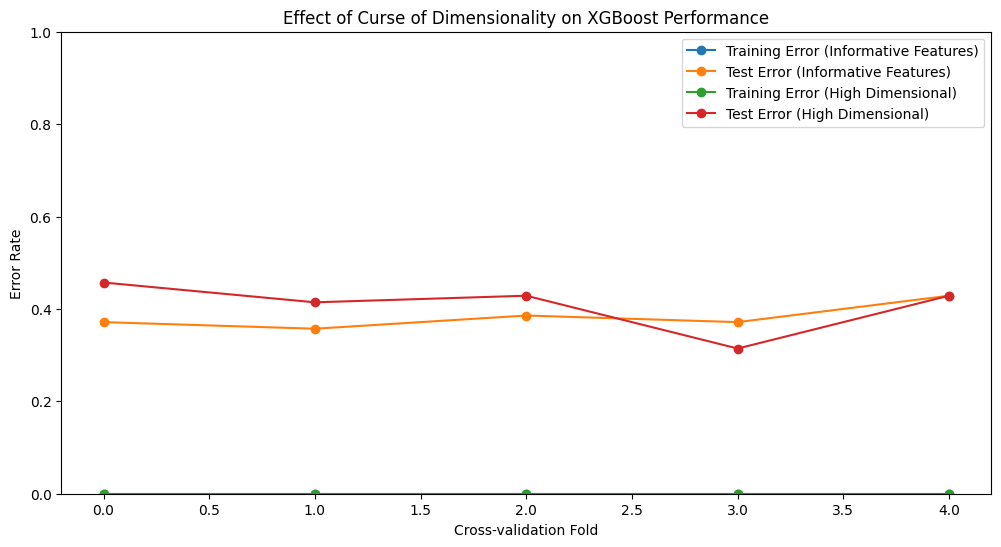

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Generate a synthetic dataset with 5 informative features and no redundant or irrelevant features initially
X_informative, y = make_classification(
    n_samples=500, n_features=5, n_informative=4, n_redundant=0, n_classes=8, n_clusters_per_class=1, random_state=0
)

# Split the informative dataset into training and test sets
X_train_inf, X_test_inf, y_train, y_test = train_test_split(X_informative, y, test_size=0.3, random_state=42)

# Now add irrelevant features to create a high-dimensional dataset
X_high_dim = np.hstack([X_informative, np.random.normal(0, 1, (X_informative.shape[0], 100))])
X_train_high, X_test_high, _, _ = train_test_split(X_high_dim, y, test_size=0.3, random_state=42)

# Define XGBoost classifier and hyperparameter grid
xgb = XGBClassifier(eval_metric='mlogloss')
param_grid = {
    'max_depth': [5, 7],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [50, 100]
}

# Nested cross-validation for the informative dataset
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
train_errors_inf, test_errors_inf = [], []

for train_idx, test_idx in cv_outer.split(X_train_inf, y_train):
    X_train_outer, X_test_outer = X_train_inf[train_idx], X_train_inf[test_idx]
    y_train_outer, y_test_outer = y_train[train_idx], y_train[test_idx]

    # Inner cross-validation for hyperparameter tuning
    cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    grid_search = GridSearchCV(xgb, param_grid, scoring='f1_weighted', cv=cv_inner, n_jobs=-1)
    grid_search.fit(X_train_outer, y_train_outer)
    best_params = grid_search.best_params_

    # Evaluate with best hyperparameters
    xgb_best = XGBClassifier(**best_params, eval_metric='mlogloss')
    xgb_best.fit(X_train_outer, y_train_outer)
    train_errors_inf.append(1 - xgb_best.score(X_train_outer, y_train_outer))
    test_errors_inf.append(1 - xgb_best.score(X_test_outer, y_test_outer))

# Nested cross-validation for the high-dimensional dataset
train_errors_high, test_errors_high = [], []

for train_idx, test_idx in cv_outer.split(X_train_high, y_train):
    X_train_outer, X_test_outer = X_train_high[train_idx], X_train_high[test_idx]
    y_train_outer, y_test_outer = y_train[train_idx], y_train[test_idx]

    # Inner cross-validation for hyperparameter tuning
    grid_search = GridSearchCV(xgb, param_grid, scoring='f1_weighted', cv=cv_inner, n_jobs=-1)
    grid_search.fit(X_train_outer, y_train_outer)
    best_params = grid_search.best_params_

    # Evaluate with best hyperparameters
    xgb_best = XGBClassifier(**best_params, eval_metric='mlogloss')
    xgb_best.fit(X_train_outer, y_train_outer)
    train_errors_high.append(1 - xgb_best.score(X_train_outer, y_train_outer))
    test_errors_high.append(1 - xgb_best.score(X_test_outer, y_test_outer))

# Plotting the training and test errors for both datasets
plt.figure(figsize=(12, 6))
plt.plot(train_errors_inf, label="Training Error (Informative Features)", marker='o')
plt.plot(test_errors_inf, label="Test Error (Informative Features)", marker='o')
plt.plot(train_errors_high, label="Training Error (High Dimensional)", marker='o')
plt.plot(test_errors_high, label="Test Error (High Dimensional)", marker='o')
plt.xlabel("Cross-validation Fold")
plt.ylabel("Error Rate")
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.title("Effect of Curse of Dimensionality on XGBoost Performance")
plt.legend()
plt.show()
